# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(3071.5), np.float64(1727.5), np.float64(-0.5))

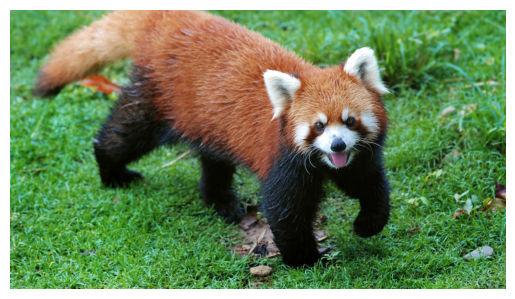

In [ ]:
# @title
# Loading image and displaying it in RGB form
from PIL import Image
import cv2
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

#embedding string into colab notebook

base64_img = """ /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAbADAADAREAAhEBAxEB/8QAHQAAAgMBAQEBAQAAAAAAAAAABQYDBAcCAQgACf/EAFIQAAEDAwMDAwMBBgQEBAIAFwECAwQABREGEiETMUEHIlEUMmFxCBUjQoGRFjNSoSRiscFDcoLRFyU0U5LhRKLwGCZjc7LC8TVUowlkg4TSk//EABwBAAIDAQEBAQAAAAAAAAAAAAMEAAIFAQYHCP/EAEMRAAICAQMDAgQEBgMAAQIADwABAgMRBBIhBTHwEyJBUWGhFLHB0QYjMnGB4RWR8UIzYtIkUqIWsuJygpLC8jQHQ//aAAwDAQACEQMRAD8Ac1IGK8pFYPk8mQuNg03W8AJFV1ujt5BY5Kq2eaUtWSyOS1ilNoRHBTVZI6ROIyKTsiTuVHEc0JrB1IjxipkIkeFYHFTedwRrVmqt5LEe0k8VVncl2KnBFVSJkLRxgCm6yrCDAp+tgZlxKgBTSYsyF7kVaUMo6gdIT3rL1FWQkWDnkVnOhhUyk4nmqOnBdMrOihTWRmMiFIwaVlFl2yw2rFccMAWW23BigSiFidlwYoTiGyQLcGaG4nDwLzXIxISoGacrWDmCwxH3K7UzFYKyQbgxO1aWnE5xCyYvtr0FD4FZRKz0U5pvIPbgrPRjg0pbIsuCg6x+KT7hFPBGGee1AsryFUy0yxSrqYRSJ+iQKr6YVsicbruxnYsqutnFClEuD30kUnNB4FBxw57UvN4LNniVmhbyp2FE+KLHkq2zle74ou07k8QvBrrRWzkuxvcRRoMFELxiRxT0Ecmy4ATVmCSPHApIpaaGIFRS1A0q4h0snKniKLBHdp+SsqNG+AaMMkoyaSslgbroZ0lvJoSsGfQZbaazVZSyc9FpEvRAq0Iti86sED5U3gd/xmryhgXm8HKVApKTwP1rsYi75IA+W1BeckfmuPg5guNylLyQsfrmrxkWSZwp9RVQrHkJGeC9EStRBxTOnrAWyyElJUUAEVs1U5M2b5IlJCRzVbaAkJnjSymgKGAuTrqZOKepeCksM/KQVHIFHayAaJW0EDFVVbYSMkicZA4FAtoYRWnaVKAzQ414L78nLkpSU4rs5YOo4TLGOTSsrfgM15Pyn08Eml5SyHaJmX0rWKbpeSu3cy8hQUvFaCkd9JthJtOGuKOuwzXS+5O1nZihuDHIVlKYlR7A0KawMRgVGluNuDik5DdSwxgttwKSEmuRZq1TwhjiSEHtTsLUkeijZkKR0B00eFibC4yEm4oSM0ecdyKekerIR5pGUMHVWQl8E4BoWSekdoUFUSOGW2NEhQMVZouosrupApaxB4xKqljNKtB0iFzarjNcTRdJoquRQ5V2sl02iq5bs5pWdIWNhCIZbOcVxV4DKWSy0rZRoywVZYMkBNF9XgrgoSJGTStlmQiRGmQoUNSO9jrqqUarKRzJOhwpTmpGZwpSpZBrsrCygVkXAg0N3YL+mWW5nU4o9VuSjhg7eAKM0S5ZRxPBXYdDa+aRj7WXkuAidjiMA1u1wWOBfmLAlxgrUolIrL1elm3lDtNqBpZdb8Uiq9vcZ3pnbbqkd6LFqPcmCJ+S4riibslkge+4CDmg2SLpYKRb3K4oMXyd7FlCXEpwBWpSngq+TtmYY6uaDanF5KOvJdMpEhHfvTlFyawC2OLAN5jZQVJpbVV/EaplgVwXEukYPes2M/gP5TCDOVIxinK2cLLEdKk1aVe4pZZgJREqbWAKe0i2szbluLsgb2iCa9NXJbRJLDEu9t9NZIFYWsga+nnlC8X8OYNZae00o9g3ZXCVjFLWy3MXvfA5RkrLQ4o9HCMqUuT1YUD2orngsuS3AWQsZotd3JSxDVCdy0K1qrcoz5rkpXF3BNDut44CVrJRanBPGayVZh8BnUTrn5bxmjK3g4q+QbKk7uDXPUGIwwUyUKqrmg+1lmG4pJqieWL2LPAUbmFKaag3gVlWV37gQqqTlhnY1ZOm7jnzRq7Ss6ScTk47ii+pgHGttlmPPQcDNUeo5JOloMxJiABzWpp9QmhOVbZcaktqXncKrdNSeReyGEFIcptXG6u13rGBf02jmepB5BNK2cvJeMCixIDZ71yN+Hgu4MnWvrCmJLehWdTZTcjgGl5VYFrNOys5FCzihbBGzTsictG9PFc2iVmnYPcsqkqJ201UIz0zJRaMt4207B4AW6dtYKwsGVfbTKkZb0TyU7hYgEmlrpJkekkkLVwtxZBwKQmsilmmkgKYyi5txWTZDkB6byVJkBaCVYNLSrfxO+ljkWZ0bDpUaWmsME44YKkJ3KxVosBJ8kAjAHJ803VHkFOR6Y+fFNShlAMnC4pXxjtQHSccslZduLh27aXnQ2Grn8ChMti2AcIpZ6doNvQEfjEpUFIqKnB3cDFwUnnZXXUFUzuPGU257Uf7UGVJSXJdZC0HAH3Glba8A2MttPSSCjv5pjSvDKuGQ6w4Vpwfitbfwc2FiOcEbfFcjyRrB+fQSTVp05KephlNA2uE0pKnDCKzJYSVrBzXUsHWsldWEq5FRyRFE6Q4EpxVHMIgfLShwlJNUc0Rg1SRHdG1VUcyoXjXJDTY/ic1N5aPcmF8A48eDRVfgahLg7buaHjgHt3rnrsHNnkmWtacA5SPFdV4HJQEhW7aCdp7iiK1s4yR0JcTxQp9yJAyRD3KziurCCpkjEbYKJA42EIzO7tRpP5FHgvNRifFAnyTKR2pgopCyDKt5K8hsqHFA2s5kqBsoJpqps6mcqcIp3cX3Ea5W0d65vO5yU3Znu71FMnc7anY801G3BSSyEYkkrAINXVmRfGGG4bhIGaJGQKYSQ7xyKbrYLBytwUypKKKSjkgVLSg96r+JwcUD0XNOMZFXWrO7D8J4V5qz1SJsyfjJB5zXFqcsjrZy5IGO9MTt4KqvkpvSQazrLBiMSi88RzWfbMtgt250qocZ8nRmhA7K06pAJomWyV0WfYCo8kD8Hcisu4criCJNszzisq1DSRWXF2pxjtSuwrgovNYzXcYJgqpQArtRIMmCy0gK+KfrfBGi9HigimoPIFxJvouavNZRXBw5FCRWfZDkvF4KbzIBrkYhM8EBGKLgr6h7jjFUaDRsIlNnNDaJKwjWjFVS5F5TOKagCkQunimIlMA2UrvipI7FAl/vQJBolZSRmqNhT1CAaozqZaYYBIobZGwrGYAArmTgUjsDxVzuS2I/FBsiTJ6mLk0nKttkyTphk1aNTZMkzcE5zR4UlMlpMHAp6FaRzJ+MTFWcUTJ+6AAoM2kQ82YpGbLNYPQcVesq2ft4o+CrZ+6go9aByfB+ChnvTcI8isiZtQ+a0a3gE0SKdAHeiSngiRWdfA80tOxBEsn5meEKHNDV2AjhlBy23VIIGa0dNq8ME6sDhbLqlSQM16TS6rIGcQt9T1BxXoqLsoUs4K0gbhVrXnsJbuQTJaOSazLYZLxn8Aa+nbWXdEPCZSUvBrJshzkOp5O0OA0xU8HGyUDNOwkUZG61lJxV8ZBtZBMuIok1PS4OLgFSoqsHik7NOHjZgCyoygTxWNqqMGjRaUi0Qaw7I47mnCeSwyMYpZwyMweQrFXjGaNBYCJ5CLboAp2t4RZkvWHzUskEgyVp0ZoKZdyCsN0AitTTCtzCiXRtrTb4FodyJbiSaTnLA7BHO8dqr6gaKI3AMZqeoS3sVyQDUUjFu7kzboHmjwswKNEv1IAppX4OYPEzBmrK1NnHDB2ZIIo0bEBxghcc3Cq2SyWiUXkknNZljGEslGQjis65BIrAIlpPNKbMh0wRIJSTQ5wKNgmU5zQdmDqPGFkqFGiw6YXiq4FMQkVYQYXinKpYF5r4FnqinlPgBI/dUfNVbAM7Q4DQZI6ng7PIpWyth4TIHGyTms2yph4zK6kEGgOtoIpH4cCgzTQVHBGaqm2WwclGTRorIKWESNsVo0QEbWy0wjCq2akKvkJtHCaNN8F4IlT3pKXcZizoHFJWDEZHLjuBSM0MwmD5Dmc0jasF28lBavdigRAyieKTkcUdQyD7EK2+DTNdfB1sGy2zk0G6pkUkCZWUg0tswWjywaJGxf9aep4CyDdvmjAGa19OzPtQywH9wFej0rwjOsiF2neKelYkA28lee5kV5bV3IdrgBnCd3ArJ/EcjahgJWwkkU/p7N4Ox4HK0oJSK9ZoKW159TOsmsjEyjaBmtzbhA/UyeSMY4pO+OQtbywRJb3E1iX0bjRqYPcjnNZFumY/B/MgWkorMtpcR+D4O23wkcmuVy29zlhYblgnvT0LBVvBYEgEd6YjMq58nDsoAd6v6h12g6VcEoB5qrvS7AnMAT7uEk80tPUFoyBar4Ae9Ku7PA1B5LES6hSu9DfuGoh2HKCwOaNXAPFBZgBQ709Hgvgn6INcbOM/BvbTlMhG2OSvJXgYrWrtSRl2wyCJLgBNDt1CAOtoHuK3Gsm21NlXDB+QjNSLyCkidDB74phLIvJEzaCmiR4KpFtt5KB3pmFySDRRaZuiWjVJ3o0qOAjHvqOPcKTlamasGXRe2yn7qkbEWlLgoS7qlecGmo2ZXBnXSAM+TvBwTSkqvkKbgYl8pVkmqqO0q3kton7RyquSu2lkiN29Bv+alJ67Hn+gmwjTqAE96pHqSz5+xx0Nl6PeAvzWvp+pprz9gT07LqJfUHFN/jVPz/RX0GiF9Kl8ilLrNxdV4K/SI7ik9oZcEK1baPW8FmUpUnaKNOXAFsofW4VWPeyyYSt08BQyarp9RtZaXI4WmckpHur0el1SwKTQxsupW0Oa36rVKIvMozgCDQ7mLYyxYu8fcDXhuqRzHz6GlSL5jYVXgro4kalRfiMdq7CeA+Am0yMU7XPKIlgrS2spNVxyWzwLk6OSTRq1gDJg1xnFHbwgLZTdO00rYzhCX8UvLk7kkakiqqJRstNvg0KyJwttOZFDijvwLDIJp6iWGLzLQO0Zrfot4wKTRw5JCR3o07coClhguXJCicUlY9wePBSUnf280t6WWF3pIgdjnvimIad4KSsRAobBzVZVuJRTTO481Lau9Fps2h8ZQYYuiVjGa3atTkSsr5KlxcDyTXLvegKWGKlwtxdUSBWRZQ2N12YB6LYpB+2l3RgaVheiRlIWODQpQwETyNNsYUUjihxWWRyDjcNSk9qahTkDKxogkW9RPaiOjAtLUND0pz81vOaRdkS3PzXY3YBtEKlGjq7JTac7c8mo5ZJtI3MAUJtHUiqtYzS8pFkjhSxilpvJeMSs4oUrKWAqgQLIqjmdwQKJJqm7Jxo9SknxV1yQkSiipZOFlo7TXMFcl5h0DHNEi8ECDLwx3pqEwckTGSAKajZgC4kS5IPmmYzyUwQOLCqrOO46mU3hnNLuospFRxHNLWVF1IrONZpKVIaMyupG00B0hlLJwV7aDKGC56JBFLSjkunglS8SO9CcC+48UvJ71SUSx6lVDSOpFxgZxTEGWwFIqMkUzDk40HoScAVpUAJwCSBkVsVTF3WeKZ3c02pZBuvgqvx+O1UlDIvJYB7kUk9qoqhdywRiIQe1SVRaMydtgigOoahIkUjAobqwGyV3EUGUA0Cu41x2pacRmKyDJTfcYpGyIaMQY4wonPNJ2ROuJI3EUfFAUMsmFgstwifFPVVZASaR25B47U16RRTRScikK7UGccHM5L0NjgVSHBGFo7BNadQGTyW+kUjtV5RJFYI3QVDGKBOIWLB8hKkZIoDgMxKRWsmu4wMQWSwwSe9VbHK68lzbilLkatVZKykqNJPuNekEmI5I7UeuO4G68HL6FIrWp0/AhdHANfLhXu/p2rllWGY1mckLzhbTjyeTxQdmAD4KLj6T7gcfPFLWLB1PB+afSPYHKHFnchKMlayDV1HLKdg3DKk4GK19LWAskEgcp5FbNUeBCbyyB4JNCvaReKIVLSkUjJpIK0yJDyQqpGzBTEi+y4hWKbrmmccWWUpBHFaNSTF22jop2jNXnUmXimROKITwKTnBIPHJTcWSDkVnXjlcGyq67tHFZkzQhWRJfdcUAKX3MvsbDdvZOAVU/RLAzCj5hZlghWcU56mBqGnCkZhxScbeKYrsHIafgttxzs7U1vTQdac8MML7poM5IPHTn791Nk/bSrSZdacsxbR7+BVlBMLCvHcZrbYjwTXI6eTNaqT+IcZtamhkCiRqlBmnWztwLbGCKZdm1cjCSB0h0g1n2XhFFMrdSl3bkvsJG5BFWVxPTJhL4q6vJ6eSJySDxmqO3PARQK6yD2NCk8hEjlCCo1WKyyPCJCjaKPFHDgqT5qraydSKchQAOKXnLAaJTDhKqBvCYOlK4rrkcKrqhnvQZSLnO+uxOM/dYpNcmUySfVe2hZCwWQdLfyrmqylgYUSuFoPNczkmCxHcAPemacFJIuLkZRinJPKBbSkV+/OaSlwwuC9FlgEBRpzTTaYCyPAUbQzIT2HNb8YK6OBSUnEik2dC0kpTSlnS5Pnz8zsNS13F6fAUyo44rJ1Wn9LuaNV+UUFp45pZxwhhPIOlkJzStuQsSkiSlCsZoMZYYVouJmt7e47Vp1WYRXYwfLkIJJziq2z3BIwPYUv3Y31zTPEilkAoppElvB5zW7OuNkRRy2sES7SlCtyU1lvR4eUHhcyk4hcfO5OKrs2dxtNSK7Nw/ihAOOaHKZd18DDCAcINNUWYeRGyPwLTrSSCM1p/iNvArgB3K3okKNVtkrBmt7RXmWYoeO0VlXQNCuzKCVmgKaWMpNI+m2wdskx5tsYLbAxT9McIybeHwSSoaEDNdsrJCTKbRS2vvS69rCtNjBAkpKAM1o0WITsg8la6OJOeal7yXqiwAt5SVHBrIc8MfUMo/JlLJxmuqw7sInnjnk1HMJGJAJSEqwTUjb8C7r4L0eUk9qZhNdxWcC6HxtpyE1gBtKb72STQ7GmXjHBB9VtqRXGSzhkmS8tae9Vy5I5GKTJGZCkKGTS8k0y8ophhiaoIHup2qbSFHUTNXRSF8qqkrnkFOhNBeHdNoBz3rsbWKugvfvEOj9aY9XKBelgiLmeRQEnuyW2FmO9jvWnCXAKUEWlKQRXbJ8A5wRCAnNKbssTnWW46Qo4IosVkWnUiy5CbUMkU5XESnUQmGkcYpiKwIzr92DpFvSfFGRJabgH3K3DBO3NBshnkG6BcuFjMhJwmkpwEraMi3JsamXhlP8AtWdasMzLNLtZ+k2QPNZCOcUGUMlvw25CLfbM408QEms66GGZt1Di8AJyyug7tpqkIMUlQ1yU3Ypb4xWjUsCllbI0t54xWhBZFvTLLcQY3EDmi+mivp4OzDSkbgOaHKpExtKMuCpwHIpedRIyyLNygKQogClJQwOQjkFrjEDgVRxLNYPWm9p+2hyRFyeoSlLqRtrOuJtDkLY2kK7k1ypYLLAVQsJbBT/WtKCyVckWoxG4hPOabrggMnlFpaARTEn8BbZlg5wYdOKTmGhBnqXihJzSk3wNKJAt5C1c0lOzB3BE6+hrgjvQHcUKTqwtRUkUJ2nAZLkLbVyjNRWNlkcJkqQAtSeDRFM6TCUkpHI/Ao8eS0Xksx5DaVbtwH4orRJIvdQuN5yB8VxLkqkeoibiHCRnzT1deSsuCYMGq2VEycKYyaXxgmTwtJSKNDg7kuQWwTRopyKSYVZYxRFS2DcjyQzx5oVmnyTcUHGj+aUlRg7uKzjBPzQtjTJkovsuDPFHw0jqYNeS7z3obyy6YPkKcRXMNFlyV0yHfGaJGTL4GO0FSkJzTVcWBsSQzw0+2msCkmWEqxwKZreAEng4Ws1ac8Fo8g+WVjtSjlkIkU0qcJxmq7i6WSdvqVdPIRQJgtY80WPHJ3ZwcuPqxirzt4OKsgKlKVScrMhNmD8WlLHalpvLAyWAnaohBGRXYJlBphNDb2rVpQGTLyY+R2pmS4KI/OxvZ2pC2A5WDZMU88Vm215GMlCRFAQaC4HcAaQyAo0pY8HcFBxvac0KM+SYJoidx5p6uw5gOQmArxTtUsg5RL/0o+KdSygLRUlspSDQJ1g8gWTtBoWzB3cVF8VMFFyz1FcaCpnWyqOJGyB4Yqu0E0U3FYokSxXdcoqZzAPkKzmo2WSKK29xzQpMIiFbBoLZZs5S0Qaqyu4uMYGM0KTJuCccjAqilyWTCjCu1HTKl9vkVHyQtMtZNc2IhcRHGKuoYIdpRtNczgq3klyAK67cEIHF0tO86kRFX5pd354OnK1iqbslmRFWaaqQKTOFEgU4ogmyBTpB70WPBXJ6mRimYzKuJKmSB5oqswUcTxcoY7/71yVhFEquSAfNLSmEjEh6+Fd6G5sY2hO3vncOaNVNplJRGu2TCnHNbmmvwKWIZ4c0KSMmvTabV8GfZEsl4KrYVmRRwyV38EGq2JNA2sAmWkYNZdyyFiuQS+MKrPnBDCRw25g0NRwzpaQ8AKIngh31kkdxVo2YJtIloC88UzG5HHEpyYgIPFW78g3FgWXC7+2szV1poapeAU9E2ntXmr6Xk1a5EaGceKTccGjU+C00CKm0YiidLhHmiKWCzR2HT80GcyLgssLJxXISyVkwrFURg1saYVtmEA8UitKb4KVPLI1v/msu2eDRguDn6gUp63IdHCpORRoWZB2nHUJNMReTItXJ11CPNXfADYRLk44zQ3ZgIoHKH8nvRI2nJxwiwl7PmmoWiU0SpXmjOfBIrJ4oA1n3WYfA3CPBRko71mytyF2g56MVA8VK3kpJ4BE2GoZ4oko8AtwDkxFbu1AcQ0GesxtpGRXFEJuwEWUhKaKkRPJMl4Jo0JYKyWTxcrHmjqwC4kQmc96Ip5ASgWmJBUe9Fj7gbWAg0vIq7ryRZR0rBFK2UoJFlZ0Uq6UEUsEKs0nbSGhYeoTk0FU45DKzJIW6uq8FZPJI0gk4rRpQnYXWY+ea1q48Cj4LiWgkV2xYLxeDwkJPekJvAbJ+Kx8ilZrIRSwcKAVQvSyXVuCu8xkUrbpmwquKTkcg9qWWmaCeomepjqI7U3CgpKR4tgjxTsKMAnMHymM54odtJVTQu3JspJrOsqww9byAn8hVSKwMN5LludUCK0NPLkWsjkbrW97RW9TbhCc6w406CKlmpwB9Pk5eTvFec1FmR2qOCumEVq7VnqLlIYksIMW22kEHbXoen6dt+fUydRMbbdHDaRkV73QwUI+fUypSbCKnAgd6JOxROwTIVuhXml21IdrRCtINcdKkOwlgqPJSPikrdMmMwsBU50IB5rzmrrwjQqsA7k/BODWDOe1hpPJ61cCVDmpC0Wkgg1LKh3rRrsygEkevP5TnNclYcw2BZ8g4PNJzuJsYs3B8knml5W5DQg0CHHyFd6ikNQgX4DvuHNO1cjUENMCRgDmn4xSQdBqPOxjmqSngKXE3AY70PecI3rqhI+6mq7BWxA2RdUqz7qb9bCEZQQNfnhRPNJW6jIP0yJD280v6mSkqy/GG6moTwKzrCKEJCaajahWVZXfdSihzvRxVlB24pRxuFLS1WAsaig9eEpHCqBLVmhVAgTqIIVjf/vQXqcji4LjWpUqGOp/vRYXlJMl/fQXzvpyGoM+3JE9c0qH3UdW5AbWVFTcng1ZybLJH76lah3pO4NBFR/rLPBrGui/gMxOENPDxSDTTCrAShIkccU7RNruE2JjFAS5xkVr0TbKyqCqW8jkVo5yAlWRuMJx2rslgH6YMmICaXdm0koAOa6BmhyvyAcAJIlpQo80jbPJaMTxi67DkKpPftCYGS035QA91O0atxF7IZG2FqD+EnKq3dP1PCw/PsLSqbZO7eEOJ5IpyWv3rz9iqpBc6YFjvXn9dYprz6DlVeAO48N3BrxuphyaVccFuI+Pms1vDwECLb4x3p2ltncnj6kqT3rQjDIKUgPMZBJNMRrF5SBMhvGak44BtgmS3yaRmsvghRdQRVVDJxs5bBBo0acg3ItNkg1WdB1SCEZXFLOrATPAQZIFErhgHMkccATWpUhSayD33DzzTOwGlgoOkE8mquB3ODtjBNWqimykpE62gpPArVqqTQCUgfLYISSBQdRRhEhIASnVMqPNY1i2M0q+Uew7md2CqiUXYOWQ4C7bxeA5zmtSFu4SnHBMmEXf5abhWpoDvwSJsZX/LUnpQ0bSyxpxW4HZSdmlaQ5GWUG4doLIGU0qtPyRyCTTCRxim668A5ckioqFeKYlUKTRMqVkd6XlYPbSIys+aD6mDuw/demIWnHWfvqPFG9QrsOVuBQ71HZk44lRxWDQHLJzGCFTlCmy8YkK15pKx4GEQKVzS2440dIRuNFhyUaLKGOO1OQiUfB2WseKLtwUbIzlNUfBxI/CQU+aE54LpE7c/HmrK3BHHJ2q4fmjxtBuByJuT91O1W5BSjgkEkEd6di8gJI/KcBoiimVODg0CyBdMjUkEUs60i6ZUfTilLIpDEJFJwHNZ8xlEYSrNAdeSrlgstpOKt6J1TOXSU0GdQRSI0v4PNKSjgNFhGK8kgZrkWETC8R4ZAp2tnRhhKBArQqlg41kJIIxT0LAbgelwAU3C0E4EDqwaYVorOsgwFGiqSEZ1npaFHWGisYYPAjFBnFDUInpbyOaWlgYgsldxoUpNjMayB1vjtSs2N1xBshrKu1JzWQrWCExs/wAtBdaYGTJmowHiuxoWSjZYSyE+K0KqUJ2PJy6BjGKJKCSBLJScaBVnFI2RDwLEZvGOKXSwy0mGYTQOKfqYPGS45GyOBTqjuOvgqPMFPiqSqOKXJRkslQ7UJ1B4zB64+3mhTrwOVTPGiQaSmsGnU8k+SSBSVszWqkmX4jecHFKrljqwFWCBwafoBzXB082HB2rfo7GbekCZUc4OeAn81y2Jj2wBzyFKTjGf60pKIm4tg59knO4Y/rSNsTm1n6FDLi9xzkfmgwhkkYNjJBjLSASKaqhydlWwzFZPcpraohhCllUmXkoB4xWlWhb0ZFSWlKKV1McBoVYBTz35rHsswOenlFYvYOc0urCjrSLkOVnGTTdVhSSQYYdSR3rZouFZQRZICxxTbsTJBZPxQlKPcKztRdg0KaVIpPo3ghArIsuyademwUnYLqhnaaUm2w6qwRx2ltu4KaX5yXjAPQicjPFN1SG4RDbYSAk0xKY3GAwW5pLrYATRa55NGqvcgu1a0lHanFljiowertOBwmqyiw8KUQKgLSrtS0soY/DluG0ELG4V2M2irowNFvSjjBrZ098ZHYwwFUpSBzR7ZRYzHgpy2kr7Ck5x3BoyaBb8AnnFJT041CRSXCUnxSzpwF3ohMdSfFCcGi+44WCBXMFkyq4tQNVaYVc9j82oqODVU8ss3hFxrApmsE2TEJUmmGsoruwUpA2k4NJWcBovIPeUSKWk8hUiugZNDSyWZP0tyeKJtyiucFdyIsnOKE62WUj8iMR3FXhEq2cPNAVeUSpEEcGqemGgVJUcqyQKWsgNxYMdC2896Ry0dXJ5GkKK8UxTbySUQu0hTia2ILchdvBw5HWk5xS9tTyRSOCeniqwrnDlk7l2FcQ2QCqtPTa703h+fYWtryFk3Vst969XRroWR8/YSdTTF68XBJUcGsfWxpm8v9foPUV4AypHFefccmgljsD5TgXmlZwyGiCpIKeRSzqwxmIOdmut5AJrqbQdQTBsi4Pk5ycUKUpDEYIlg3NYUNyqNS2uQVtY22y5oKQFKrYo1HwZl3Vcl52UyRk4rQV0EuRdQYvXV8LJCTWPdZyaVKwgG20pL4XnzSji+43KawO9h2ubQqnNLHc8GRqJ4Ck+OlCNyRWhfU4rIrXZkXJDhQ5jNIK1x7jaK5bQ4rcrFXc9xfe0WoyGknjFVwirk2HoMltlHJqyntF5x3Hk2WFpODVbLMo7CGAKp5XU4NZ0pPIylwFYUlSUjJpim1oBOOT2U/1M80WduUSCwB392cik5LIzFoiR1N1cSZfg9cye9WcWyyKbm0KyTVHHAZPKJosgAjmuqeAM4BAyhtHNGVzSF9nJEXQvzXY25Ilg56RWeK0KnuOSlgKRYZ6eSK0I6b2irtwyrLbW2rIFZ2or2vgZhNM7YkLAANCrkRxyflyVBdcnDLyccVgIRJi9vJo1ccgJRCLFyCfapVFlXtF5QCbEptSchY/vVk1gFKBYakDP3Uel5F5RaZbS9u80WUcnJQ4Jm8dzVVULSrLbDqEqFWSwClUEUOpWBinK+ULTpPXEircgPTfY7ZIAosZHHW2RyY+W81aXKKS0+QeuPhPalJoA9MCbjag6vITWbbDIpfpckSLQUo5RXI1P4gI6ZoWL7p7qOlXT/wBqWuoyxO7SbmCVaa3px0/9q5CgD+CyLt+0q5HSpxKMY57UWVbismbqenuPPn5ipHiLLuxSQefirVT5MV184YaTbFFoHYP7U8pcF5U5REm3KW4E7a6nkVlQ8lWfbC32Boc4oFKlxAM+0l0Hg0nKGS8W0L0q1lknIobrKzkyiEgEjFAnAJWyRuOhSskcik5UZZdsuIAZKSe1WhTgBKRdakowUfPamFHAFybL8WQ1HGVckiixmcydu3BBScD+tEbyjqbKD8rjcjk0vMNDJGHwU5WvFZ1sxhFRTxC8hWRWZY+SHrqXZDYVmgLLK7T1qI8E5oka2zmCJ+39RorWOaYjQzmcFNyCVpCcHFHVODm4g+ifbyopyB2osYYCQZClp8OBZTkZ5qzSLsPwEKcA3DPHAq0I5K5L6GSg5P8AatOmKAzkTcGrygmUycrQMZpSdWGdTKjhycChdi6YQtrCjzTdEMg5yDzLWR2FaUaxbdk/PM54xQ7KzqkVXY3HIFKTqLKWSsY2ewFL+nlliFy3KWOE1f0Gzm5IoP2lQz7an4bARTQFn2xYPCaFOloYg18SKLaCrumuwqOykkHbZAS2EjFNxikKTnkYorCAkcVd4F8M6dj/AAKq5bTmxsh+nx4ocp5Cxr2lOSznPYUFyOPgrtxua4sssmWm42fFFimETJvoif5aOuC6kRLt3PahzeS6Z6LaMZxQUsnWydi3gkZFd9PItNhiJCSgcCmK6gTkFY0cpFaFcMC0nkvttgJq83wSJ66BtpKTyOQ4QPkJ47UrOOQq7giWk7TSc0HQEfQcn4rNuidBz6eaS7Mh3D4PNM1yIHYDwz2rTpZxoLIWkitelZQvMpTUpINXnDgXYvzEAE0pNYKlBaxmgnTpog1Du4nGMVzBNxWfGa40cTBr5IoblgIig64am8ukVXFFRqby2D8hkq8VxyycwS/RkjtXMZKs4VCI8VNoJyOAwpB7UCawRSLbCttLvgKi/Hd571b1DoSYc7VZWECLDgoqsIXEvgCqyuwQ8MhI80CWoRzBEuV+aWleTBCqQTQXZk6c9WurkhwXCaarhk7I6TT8IYASOXDgUcrjJRdVk0Kdm0uoHIPxmqxuyRxPxUQPNMRsyUcSBx5Q8mrORFEgMg57mhSmEUSRslR71RSyXTDdubJxTNSZSb4GCIgpxWrQviJ2B6E4UgZNa1U2hScchFt781v1agXnFo/OOZFOeopIVkD5JJBpO0kZcgeUrBNZlssDUGU1PhPmgq1MLtOfrMeaLvTRMErcvJ71XOSYL7DqVdzV4k4J1oSpNNRYKXBRfiJVnihWLJetgmXCAzxWRfVEchMHqj4Pasa6vk0arWfi2EihSWEaVc0yPPNLyeArZ2nmlpMiL0VOcUxVEFMMRUDjit3TwM22RacRhNNW9jtMuQdId2E4NYtz5NWEuCqZRz3pKQRTPyZGTVoTZW2aLLbua0K5mZZLJ647gZzRXM5HAPefIV3pacw6SPG5HPeuQkCmi20/nzTUJic4l9k5pxS4KpYJqydVZh4GoETjYVWdvDM4+mBHatDTrIrYUJsNODxTzryhbIvzIoCjxQJQwHhIolG08CgyLpnWTjipkJE8wo1EyzWSB7cKjlg5tKwcOaurSriXYz2COaZrsAygFWHxjvTasB7CYvcd6HOaJtON244FKSkvgcksHXRJ8UPbuK5wSNMHPaixpCKZKtnHih2VpBVLKPEjaarXPDBzWS4y6AK1K7OBZwJVPccGuWTLKOCo88QrvWfZIJFHAkj5FA3hdhK3IB801TiQCawWEbV016KkC3tEiYaVc4osdImdVrRMiAMdqLDRnZWkT0EAdqP+E4BesCpcTGeKTv0+C8Z5Fq6RMk8VkXUjtMhfkwue1KuGB3OTqLHCCOKLVwccch+3q24pz1sIG6w/EG4ChSsyDdYRRFUvxSrrcmcXtLsS3FSh7aNRpW2css4GGDbgnGU163Q6XC8+pjXSywl0g0mthz9KOBVLLB8yTszzWRbq8DddXxKInc965Vq8sa2YO/ruO9aUNScZUkzh/qoFt6LRYBudwG0jNeV1l6aHqpAFcsrVwa85ZPLHdxYjOEkHNSGSyWQswvjvT9UuDjgTOKJT3rk2U24BM0Eg0lYyyiL81snNCDRWAO+jCqspYDRZPCeCVCn6ZhExgiywlI5rQ9XgLFlxNwCf5qTssC5PTdsfzUNWHHIqvXTd/NR4WClk8FYy1K80d2cCMreT8HFKNJ2SeSKzIRiIzgmuVzwX7hZlO0A0z6hSUCR2SEJ71X12LygCJ004ODQ5WtlVAXJ1wUCfdS05sLGAFkXFeD7qC5sbgsAmRdFpVwo1zcXkexr04FYKjR4SBPkKsXpRT91MwngWnHJcTc1LA91PQtSK7OC7EeLh5pmNiKuOAtHb3YoVryRBFqCFgcVn2QyETLLdsBONtITg88hohSJbEDGU0WtDkFkKsw0JHArRpYZxyevYb4p/IOVZRkSgAearO3gDsQEnzAQeazbb8HJQFufJ7gGk5agWlEAS1qKjzVHdk5tKyQ6VZGaG3kqEokh5vGamcHMZDUa5lJGTVo3YLbUE2rsCMZplXldh25P3j7qpZfuQxCBVck896y7o5D9kTMTNg70hKrkFKRabuP8AzUxXHBTeTon7uCa0K2mVZ448FjvT0VwBYOk85oFpXAJkJ5rPmzuCmpO+i1LJWSPW4/PatSuoWk8E6Y5q06VgrGZZbGys22vAdSJ0vY80vDuRvJ+U+Md60KpoE1nuU5D6R5ppTRVxyDXpaQe9AnYc2HcWUCe9SEsMpKAXYWFjvW1pp5FpxwRTEJ2Gj3coHBc4E+7+1RxWDqIcmpQCGHChfekUsBnyM9odC8A09TYJXQG6BGSsDivQ6V5M2SeQ1HgpAHtrQlFYCQRfbjtI7gUhZg1aoZR5IcaQnjFK4RJxwDvqwF96DuSYvJYRYRJBHejO1Y5FJtldazis+RrJESV5VQl3CKJMCcUxAjiRqUQqi84KYOgvIoUm0caRE6riosgH3KbiyDVJMtFZIiomkbXgYicg5OKSzydaLcdPanKQbQQabBFatcci7OltDHaiuHANvkpuoxmk7FgIgdIUU80nNhkir9SpJ70Pdhl9p79Uo+aIrCrgdtyFZ701VcLziWUSFDua0oWik0SJkk8Zp2FgIlS9nzUnIukSBeR3oEmdSIH+xpG1jEEyoU5NIPljHZHvSpmFWReUiZtPij+iRSIpDfGaXtqDRkDHlFCqyroYYzFksaWQcbqVw0HQYhzeRzTFZZMZIE44FaEGXQVRN470eLZxo/GWScZpiEgbRyuRxR4TKSgeNv8ANMb8Cc6+SwHQRRo3A/Twfi7QbbwigcdbmgO0YricKVmgSn8RuMSJYyKA2xmC4KrjYJzVHFkk0zgIB+aIoCNskmWWmgaLCOQLmSFkU7GPAs5ZZVea5oVhaMkQFnms6SCxeSZhsA0Fo5ILQ04xRqk0XiFWm96e1a1KTKzK78RSj2pt1pi6KMuGUpPFUdIRSA77KuRS9tI1VMqJZWFE1kXQNWuXB+D2FYrFmsj1NwWhOgpGakILJoxuL7bnNaVMCSt4LQUCnmtilGfbPLKcgIwSDn5rtiFpLPIJfSvflPn8Uo+4vsyV3IrvICd2fxSlkWEVJft9tcITkY+TiqVwyGjpxjjQgEU7VXhhPw6ZbYQlBwRWivaiPSRZPhvviiwtwDlo4ooTUpXnApTVXMWlp0mA32TmsebyVdZVdaIFDiAnDB+jZSrvTERSUQrHdUBjNP1WYKusIx5G1PuNPKzKKbMHMicntWdqJNj+nlhlu2oRIxkd6RjHLN+j3DCzZW3UA7O/4pyOnyh5afJG7pfcsqSmhT0xd6YgcsjrCcjxXFTgnobSNDchJCSaHOLCwg+w0WUuNgbqJVwbOngNcMhSea0q5o0NheDSSO1McNFoxIXmEHxS80hiKyVxG9/FAaKTXBciKdZ5JNMaelrkBFZZcFyUPaaZsyhyMMkgmhdU9TCCbMHRWFjNLzv+BdLBGpKFeK43lHUQrjJV4oUo5LptFSRFAHahOISLBUlsJzQpcB48lRtZSvFBbSZdhOO2pwAimK38gMng7dQtseaO84OJ5KDqio8mlprIWPBXdZGM0OVawETKS1FtXalXiLCdyePIB4JosJIq0WwpKh2zR2sorgidKRSy4ZwrqSFHmjZLIjW2E11LIRPBXcwQRS9iCbgfIjhQOBSU6sovGRVai7HM4pdJxYRzyFoy0oABra01gtJZJ3XUEZIp6bTRVIHyFIIOKTsnlYCJYBylqSrg0mlh5YQk+pcSj7q1qLuMAnAC3CW6V/NLapzk8oaqgiBMhW3mgRbwESKr85CTg1ZYDRjkgXKbdTxXXFMMlgEykblHFLyr+QxF45KTkckEUGVTRZTyV0RloXuzVdriXc0whHlLYwd3aiwlt5ASipE7t9AATntRZX54KLTlGRc0vHINBlLLG4VYI25o3JGfNFzwcnDgf9LgupQoCtHQQ3S8+p5zWS2sYrjEcLHatnU0+wTotWRHuIUl3ivL3e024LKKDkhbeaXjYy/p5KiLyW3cZovr4DLTpoMRbsXEAhVU9TIJ0JE5nFYxmiptop6eOxyhzcugyXJ1rBeD5bRXG8IFt5IDO3Hk1VTL+nhEg/iDI5oi9wJvB+UyUpziiqBZSKUlzYk5rrQaHuBj0pHk1RpMZSZw3Iwrg1z0yzj8y79SSnvVvSA7TlMzBqjjgq6+AjDkhXetCh47it0BghvJKMCt6FmYmXOLTJHYqXhnFBspUyyscSk9EDZ4pGdGwYhZkpPIG6qYCuXBPFcwcVKliRXOSKVJWhWQeKbvj7cnVHJat9zVtG41nweSSrC0e6JBGaNGe0UnX8QgzchkUSN2SkohNmalYp1S4ASj8ycPY5oUmUcUXYc0ZwaapeULzigj1cjvR20LOCOeuU9qpnkigiVMgLR3qylk644Rw4AU5Fd25AuJWVt3DIoEoIFOGeS20y24jgVeNaBKsozLW25k7RQ7KUyjoUiiLU0j+UUKNeDn4fAE1DZxIZWhKB9tTUV8Cup0m6Jmq9OqZlZLXms2McM8jdotkg83YFBvbspuKeA8dFkHSrSuM8DtoiXxErtLskD7lEATymuSYrZTlA5duDiCQgUN8lK9LkVbvbHN6wE1RoDfptoruQ1tLVuTS0xL+k/ICEDd88VVQAOeT8padqt3jtXXHB1LJCw9lwNnuaG1kjgXslKQpZ7VVxxydUcHKZiNqkqHFAndtCxwiBUpKkkN0vO8MmiF19JG0nBFI2TbJg7Y2ue0c0rLkmA7EjpW2kBuiQrzyWwFo8BO05R4rTpoyVcSF63JcaUAkCtGGnQGSwCnoZSoISBRHQgLyQdID2qTyfFAlpwkJYOhbW1jhGCe9BdBeU8FyFbtpwBg0avTAXMKfu9tKRuHJ809CjCFZ2clJ+KUHipGASM0ym/lKcZpa5YCJopthSnOaQb5CfDgYba3hIrR0otY/mF2khIrbjBYA5Oko3nt/tU9JSLZIpjYbRS99OEWjLJVjJC1UlCvks2EW4oUO1akNOAcjldtDhxjvXXp8nVYVZOngtOdtKW6X5BoXYKP7kLRICaQ9JphFamdtQOma5ZLCDRgpF5lrFCjPJyVaROWs+KrZIqo4IHW8eKkHlEbKamdx+2g7uSm06RE/FGgzm0ssxeR2oyeCJYLqYqcVbcdRG5GGaDJ5LrJ4I4x2qQ7nZM7QwE80xFC02XoyM96driC3BBB2pzR0sA2snvX2ilbpBIIjck8UjuY3FcFd14FNckXSBkpwEGgSQRMEvAHOKTtrO5Br6RuNIShyTJ+YRg12EUd5CcMAGtGjuckEUvBNbVKATKc2WAk0efYXaFydPAJrNtlgiQMMgk96BuCKBZYdJqbjuwtpcJruSbCN0k1yTJsB8oAJpWciJA1YyapvCpH5DG49q7uOhGLCBHauqRUtiAPApiPIKTPyrfx2omwXlIoSoezkUvZAkWDVkoV3pCaGIllh8570s5hQkzIwBXFYdwW25ePNWdvBMEhn+AaWnazmDj64nsaC5NnMHoklVVWWTBKheaZrhk6SjmnY1Irg6CaaqgcaO+wp7AForvLwKpJ4LxRRWrKu9Z10w6R0jnzVIMq0SlvIp+tg2io+yecVeUsESKakEKpWUyz7FyG2VKFGqTYJvkaLZG4HFatNeSkpB5ljaBWrVXhC0i2g7BRZPb2KqGSZp4g8mjU3tMFOBZ37h3rbos3ciFkCJ5GU03KKaBqAEnIIzisPVLaNwjgBvOHJxWR6jQxgqF5ee9d/EE2kjUk570aF7YNrATjSyB3p2FuUDLyJmcc0aNpzbknSsKHJqttmEFrgVZKEkGsi2/I1GsGOtAHtScnuY3COCm8MUCxDEJYZTJO6kZ5yNKZI2aAlll1MJwzwK0aECskGIxxit2lGdZyTvrAR/Spf2LU5yB5BKlVi28s0Yy4Iks7qH6eUd3kiYpqRqA2WEyGttNxhgz5T5OXwQkmuyWAlcwXIOCTSc0NRlkrpdINSDx3LMuxnjkc0xGayClAMRnPbTsZraCccEqnvHasLXTw/PoFieJcyazI2chCwg5FbmlsAWIrSkZB4rV3IUcReuCQCaWnIiTA6z3NIylyGR4O9cU8hokgAA5qzlgIlkpyTQJzO4KClYqKZVnrb5B70zXMDJBCPJOBzTSsZTBbS8TihSmzqRbincoVxPJMZCrbIUmmK0nywU4kqGQDineEgZ+dbCRWfqJpBoLJQec2mkFZyG2HCZWPNO13cA9h6ZvFWlayemUZVxxnmk53HYwKSbkSfupZ2ZYfbwWmJxPmnaLAE4hSJMzjmtaqzIrOAXYkggc1pVST4AtBBpzIrShFMFPg7WkKHIplVpoA3gGS2Ac8UhqKfkErlkX7jGCieKxr6fmaVMhemRQPFZM4GhBlVLW2h4wHQQhIO4UvOTLYGa3MkgGiV8oo4jHCYCsDFP0V5FrVjkNxIiBg4rZoowzMungIpCWxxW7WlBGdJ5ZRmzNnGazNbqdpaEeRauFyPPNeSt1jZrxrwDf3gfmr06tnZVs5VcinzWpDVtIH6eQfMu5GeaVv1rCwp+YBm3NSs+6sDUancM1wK0eSpSqShPcw7DURWcGm4ovBhdhRAFHg8BlgslQIoj5JtKUlvdQJRyWUATKibgeKA4HcAaTCO7tVWmjqIG4pQc0aDaJkkU8poYFH9R9gsZEC7mpPmgynkJuK67srOM1xSKyngljSHHlDJNO1RyZ11gdhxS4kGtCFOTKnbyEG7fgjiqWactXbkvMRtg5pOVe00ISyTrXsFBcsBGD5Mg881VcgJAyQ5vB5q+3gpnACnJyTzQZoLGQBl8JNBwGjIEOoUtWKskclI/NRlA0WKKqQTjx1FNFRSQSisK471eDZ0NwminFNQswgbGCA0CRRN+TgwR442jtVJclkgkyynzSNvAxEuoQhI4xQN7QzB4Oi6lANMVXNMMpAm4Twkmnndwccsi/NuoweaXnbkHuAsm4b881m3TZSUgY89vOc5pKU2LSeSupgOc1I2ZKkjcUDHFNxkmUZYTHOOavjJD8tHTFBktoREQllJ71TeTBKm4q7Zq8W2Eizozc9zVnHJfJ2JuBwaDKAGTOmpys96E/aVSLKZ5HY12qfJ1nYuh7E1pRsBs8VPCxye9AtmcwUn5OTSE5Fkjlk7jTOnlyVnHgtoSB4rcqlwIWRaOtwHcUWWMAFnJA6+E1lX9w8WVVzCKVaCIgduKkjvUU2iySYPk3MnPuplTyi+1A52cpR71Du0sw5Stw5q6BSQxwJBKRT9E8ClsSSU6VAinJTyhdIW7q3uJNI2rPI9VLAGbYKlj9aQlDIdMaLLFIwaYoq5F7ZJodrajaAK39NwjOly+AuHghPajWXYGaq8g2ddyyDg1m3XM1K48Ad6/KWcFVAjblFLUVf3qd2c0tZbhi+3JcZupI71V3cHHRkPONcdqNJjCkV0oKVdqA2FTJkmiwtwcZ6pAVTKnlFGfktHtV4rIGbOFtEntRVVkXbaKzscg9qXurwEhIqOo21kXrDHIPJw2cqpMI+UEGE9qb0/cDIIx0Gt+hJoVmTON8U04ICD32u/FZ10C8ZAmY33rNnHkYjIFuJVml5oMnk9Qg96qvqTJYQMU5UlgXnj4EhVgU2pYF5RycoWdwpmFpVwRaQvHNE9Xkq44JUu1HLgiRy46KTslkagskSVgmlVy+DsywkAjtWxpYZQnJn7aRWj6XBzJw99tJ3xSC1tgSdwTWHfAfgyqysg0l6YTcE4jxBFWjXg7vGKBMwAKbrR3eEUy8nOaPjBN+ScTE471VywFXJ6ZQPahSuI1k9Q/k1eq7ANxLCXjimvW4BOJ+LqieKq55OKJ4t0pGarkImkdpkAo71Z8hY2H4vo296quQjswQqcSocGjwghWyzPB4k481ecUkLbidpdDrng5JcExOaZdoOKOFIzQ3LJaaweKaQnsaVmXgmj1LKVEEGgpchWtwSipAAHajxwjiTQZiBITTdci75JHWNw4rWreQMo4KMmLlBpjCwCfAFeYAJ4pa2PAeueAa6raogCsLU8dh+uZUDSEgkCseVGByMyyhwoKMUFwaDxswXo8oA0zS2gvqllUhRHFaMLWgLnkruKJHeuyuZXcyJtBKqVdzLxWS80wT4rsW5BUmEYjBHFFjBjVcGEUsHFN1PaMqJ+UnZXbbkd2nHV4xQYXApwyQuAr7VJ+8XlWVpMTKc4oXoMUsWAW7GVnGKG6sCE5YZD0y2s8VXGAO5EjTqwo12M8Fclpp9ah5pqNhNuT8olSqHbPISuOGGLPIUh1KQMAUonhm3pZ4NDsrqXtqVVpU247noaZrA1sQGlowE1owSY9GCaIXbA2tRIRV5UplZUgx7TYQ6VBPmkrNMB9NpkrFm6ZpeWnaNLTppBJhkt1IpxNBLJY6mBgmj78B4QI3HM+aFKeQygeNuAHOapnJHWT9VJGK0IXIH6WGcLWK7OSYaKwcdXBpWfITJMiUB3NU2onBJ9Wj5/wB6m45tJkSAoYGK6nk7g/LSlQ5xXGjsQXMiJczigThkPCQDcCkuDjzWbbDDDJ5GC07VoANaejgmLW8F6YwnpHtWxKqO0EngW307XDWTbFKQdM9S1vGDVHHcsFnI4VbOpyBQXptxz1Ci/bHWlZSDQnppQ7BY25OA68z7SKjlKPAWOGfusT3oLRNp+CwTXFI40dEpVgZpuuSlwVbaInI4IzRnp1JZIpFaQ2WhuxSV1e0YhJMHPyPGKRkssNFI5+qKUijwi1ydwj1yWpbeM0WVrwc2pEIUVUJTycawQPK2kmutnXyUZE8NjBqnrbAsYZYPcmIePiiLUZGFHCOkpC0cUxXhgW8MC3JpScnFVnBjNbBzEktqIVVMtB5RydOywo0SM0iKLIEvoWrFDlNFsYJiEuN4AoMpJlVwQLaO3ABqmC6YNkNLDmdpru0PCSOVEtoyRVduGXzkpNyj9UAfmrN4LOOVk1nREtOxFa/TrEnz53PN66vnz6DvMWFtA/itvU2ZiZUI4YhXWJ01HHNeW1EMG1TPIEdjlwEYpFRGlLACnW9xC9yUmqzrY5XZk7hvuMjaoVILHc5NZ5QRal7gKajMG4hCK7nBqsgUlgvOO/wiBQwSXIAfcw6f1oEnyNqOUFbdNUkDdR6UK2QyFkLDwzmn4xF2sAu7tLKCECqzQWp8impt5Lpyk0DsaKaaLccqTjINXreWR8hFklYpprgXk9py62pCt2KSseGdTyefWloYqkbsEde4JWy9q3hJNamn1nwEbaMDXFkl9APFbddqmjPlHDKtwldFKgaV1T54DVRAhnBWRnzSG7I56awSszQk4JrlVmJcnHDKP0qQHORTWovTjg7GOCaA2SM0nX7kUmy6XdhxirPgFtyTR5SlUPlFJQCcGd014NcqniQCdeUGm5e9ORWmllCrgfos8peIrsLGngk6+A0w+T3NMqTFZRO3HFHtUbKpEaHy2ea4pYLOOQhHdDyAM0WM8gJR29yvLSpByBVZpo4o5O4ckjhVdhLByVZeU4lac5orfAPYym4E5PNCbLqAOmM9QEUePJyVe4Dv2s/cBQ7adxkajTcnsWISdpFBVQtGrgjuFhLwyE0VU8COo025i9ddOqS0cJodlOBCzScFCFp9WwhSaWVeCU6fHBRuumkrSeKMq0y9umTEjUGm1IR7UmlrqjE1ekFVVnWU8JNDUTHlpsA+RCcZJG01SeCmxxK6G1IVuxSkmVbaOnnXFjAFDlLJFPJG2gq9ykmkLI85CRaOjGwrqBJpdQy8l8J8kDwwsK20SVWS6+oRtrAdVuCaVdeWdUdzGaC2hoALTk09p4bXkK4YCIWAAMYFa0JZKpYPzywQRsxkU/Skxa3gES2ChQWoZq1lOewtkoqQd+dlDjV8GVc8FtpJAzspmOniwc5PBfZSMDiu+il2F1JtltLYPmiwqBWshlMHHapdDg7Sn3BjsUK/lrDvrY6mQIihC87az3HDGochWI2ccCn6OBW+ASbSSMYrX37uwvHKLrLIQncaaqOTeAfdFjB5FB1EuCsGylb15WaTg+Q7GGGAsYrXrYvMvojDdkCmEslIFgQipPapKvgKUZcMJzkVl6is5ECyGihWRWPdAdhI53BtIJNKL2jCeTkywOxFUnM4zlTgc5qqsOJHCyPzQpzRMErICh3olUyYLbTKcg5phyJgsHCRiqb0dSISoA1HItg83ir1zAzOSsZpuM8Cs0ydp8J805C1ICyRc/aO9dduTnZlZdxye9LzmmNRiflTcp70s2jkpNdiL6vPGarKSC1NvuVX3c+aA5obSwU1e7NDm00TJSfbOcikprLJk5aT81WMcEyXW1hAzmnKkRnq5YQO9adc8IBJA2bL355q0rOAe3ICluck0lZLJ1RB6nlbuKWcxiMC5FdViuKWS2wIsFSqJuKtErqTihymCaB8lsqGKBM5gpCMQcmh5aCFxhsJP21dMgTjoBAGKJEHLgvNsjOSKdrrfxFJyO3EADtT6r+Yu2C5rIUk8UvfBdy8WAZEf3HjzWNakhuMiJCVI8Vjyk0XyTJdUKF6jCJnYfVRFLcd3JHodUe9TY2VciVpRzRI1FC0leBRFXg6iZt4CmIRwWLCXR3rkpYOolQ+KbpswXaR6p4HzR5WgWis+6MUOVvBwpqUCaSm9zCJnbK8nFWrWXgthNF9tO4VrU0biksI5eZyM4o1mmwAlMGvtEHtSM6sEUsou25rkcVepYKMaICcAVs6dlGshho4FaimsFdpy45g96BOZMYOTJAPeqwsWQc2Wo8tPbNa+muSErEWlOhae9a8LMoWfAMmJ3E4qk+SykApjITnArB1deORmEwYtPJAFYcnhjSSZ422c8CmK5A7EW0ZTWhW8iM2TIdKeSavOWC0WTpnhPGayrrBys/GalfmkZXD0EclQXUjaHSKzzOaI5Joi4KjrBHil5oNFnLbRz2oMY8lm8BKGg1oUoDOQUaO0VqqzAs1lnL7wxil770w0IlBxYJNZu/LGexI0sVoURTATmWG/dxTqpyJzkWUxyoVb8OxWUzxyEojtQ5aZhIW4Bkm3LJJApazTMchcik7DUn+Ws+dEkwqtTOW21IOSKqoyjyRyTL7D4SO9FU8Ir3O3X0msrVzyFiesyBkc1jqeGEQTZcBTWvo7cFZRycvjKTWyreMC0oC9cUnJxQJWo5tQFWg5PFBcsk2nASc10NE6OcVSTwETyVnUFXFLtnSuqKpR7GrwZRnH0Ss9jTdZTaXIsNXHBpjnBXAQREOBxQmmdwW48bac4q8SuQvFbyMYo8JYByZeRHOM4pnfwCRXlo2iszUtsaghdnrKSazcsOkgY7KKT3pqEyrSPFTfbR3LgH2BsqUVE4NJ2fQJEpB8g1VLBZotsSSMc0xCWAMkE487aBzTlduBaUQtCuoBAJpyGo+AFxyH409Csc1u16lMBOAQbkJUO9aFd6YnJNETwC6LKSkdTwCpsUqOcVnaiGRuueANLhcnisO6CRp1SyDVxQD2rLslg0IJNZLkCNyBilc5LvgZ7fHISKaqgwEppB+E1t71s6WvkzbrQq2sJFb9SwjKtnk9ceGO9FsniIuuWALvIwTg15HqN/u8+hp0V5QrS5S1KNeZlY2akVwVuqvFFhIJhMpyX3BmuysZ1JAabKX2pO207jAOU4VHk0hZNs4Wop5o1DLJh2ErtmtWDyWTCyFgAUZF8nZfx5q2S+886u7irJZOqZwtreO1X9LJZWYKy7dvOcVPw2TvqJkK7Xx2/2o0dMBlZ8ijJtasHiuy052NiBMi1qycA0vKgK7Cmq1rz9pqioAStDlpsx3jitfR6bLMm+3I5260+0e2vW0UcGVOTCaLOPihanT8BqpvJFKtoQO1eX1dOHwbNEmwLMyjNeetng0OMAaW5wea7VaheaBjj+M5NNqaAMGTJA5waFPk6mBXyFnjmg/QupEbUXee1XiiNhaLbCrHto8YkiwqxaDt+2r4SOpFlq1lJ+2hymoli/HgKz2qnqlQ7At6uOKag9xzIcYjFCRxR8ZOZJuWxk0hqZbQsZFdydszzWW7xmLKEm8BOeaLXfktuwL10vXJwaP64N2ZFebdgT91c9Qq5FT94b+xqsnlA5TJmnd4zSFvBTJcijJ5pNSwzpbSnmmq7MsqyUDArSg8ooQSOxoNpeLBElYSqgx5YVcldMrBpqKRZI7+qz5ouC5I3INBmgMicSSKUmVPfq6Cng6jgyyTwaahN4JtTOvqyB3oNkmyrWD1DxWcCgt5LIIw0KPij0PkNtyEUtKxwmtquXAvOsqySpsdqO5Cc6wRMkKzxWdcyqjgouylUq22WKUl9ah5riOooq3q45piHJY6aZWTzmmVAm4IR2VJOSK7tKuWQzDc2DBpit4ATWSw8+MUyp5FdvIHnuAmgT5GK+CjHa3OChRg2y8m8DbZo5wK19NRkUnIaobe0CtVU7UKuRNMc2IpLUcdxyiYnX2Yoeaw75GvUsoWl3IpPJpdT4O2Ryet3PPmlp2ci6jhl+JcaE7CzXBqyGkLGMV6CNWRNSZ4YSDziq2UYDxmyFyOlB7Uo44YVPJ4EIo8Ec7npCR2p6tcgJnIAJrQrrWBSZG+gAUDUV4RIMEyxg8V5zVRwPVvJXaGFVmjTCUam6OAMgrGA4re08haSJnBxTyeQTRSfQOaVuRxIFyms1myjlhooHrikntStkQqPyYpx2pfBGfi0U+KYhPaDkjhSDjFHUslcH5polVWUyzWC2GTimYcgZHhQoUecWkDT5IHcis61jUWeNZzzVK+5JF5vtW9pHwKyR2cVoymkgWOSN7G0is6+eRmCA8tsEmsycNwypYKqWgPFUVGSu8tRxg0Rac5vCTDuw0VU4O7y6mTgDmhzWDsZvJ19WfBpSfA5XMkalFRpCxtBu4RjkqrtcjmC+02SO1OxbKOJOGMjNGislGirJSv4omAUuCqpS0iuMDvwcdRRHeuL6nd7OkKI801Boo3ksNnNdm8nMkzYxzQFEvjKJC4EmuSeCRjyfi9xxSsrsBHHJ+QrqJyas55CSjwTRx7ua6mSCCkdKTU3YYRxyglHUlPc03VIqlgs/UI2nJrYrngrJFR55K0nFMeohaSBL4B3UCyaaORQFfCeoeaxNQ8sZg2QL27TgUnOSSGoyZwvfuTis62fIaMz1t0oPehxu2hVJlpE0YwaMtWdyfjICuc1Z6nKLolYeTuHNCdw1AMRSlQFPUW5CqQTY2gZrQUkO1yWCyh0HihysSDYPHsEUlbdk6UyRuocLeQUiyyhKhWnTLcAkywI6VjGK0tiaM61ooyYSUnIFDlUZti5B7sHcSRSdlQNRbKhiKSsgUo4YDxpyXI0I45q2WhqGnJkwxu7UKTYwtKFLbbVl1K09qoNU0NMeLPFLBSpVFjk3NPSxxtys499atMzWhHgMMtpV/NWhCWQ2wnXAbWgHvmrg5VpHCra2E52UGUUw1awUnoZGcJpacPiOJ5B7zKwe1LSTGays4lQobixqKK5UtJoUngJg9S8sGqxskccUShxRpmM2wTR4pRqzbOESniPmqN4LKJCJRCuT/AL0Bz5CqIRiSk4BosJlZRLKpG6ibskS4PFKSRzXHydwC5rA+5Kaz74MLFnEKW4yrFDosnBksjkJLnlxOCa1VqJNYAbcFJxAUcmlZbm8lkfm0JTTdaR1rJZZWgHBNMxSKOJM4hlaecVaSiyRTQKmMM88ClLa4sahkDvBKTgGsuckGXJH4zQ8ZOv5EReUhWc1yGYsmOCw1JSsd61adQmsAnDB1IbU62cCu3UuaycjLAClRnEknFY86JRY1GzJAG1FPIq0c45L7yNRKeKFIsnk7ZdT2NErrI0cydqk8UaVRBcuaVc4pC6tjdbBSVrQrnNLxzEY7oKwXMjBpyq7D5FLFg8nsIcSeK0ozUkSEsC5KjBBJFBlhsejLJQWhRJGaFKOAqeCMNLSsc0LGS2clpKltkZPeptKYyWGTuHJFFjEo+D1yMlaM8Zou1JEUsFGXFBQQBQpYCxm8i5IZWzJBx5oFrwORakjQdFzikIBNE0lu18GNra8+f2NAXPy0OfFbMrtyMZVcgOb71HdWZdIdr4KSYwWfaKWi8hd5FJte5OSj/aryXzLRtA0q1qSTtRQGhqFhTSw42eU1I8B9yYSiEgDNWcgMy4pR2kVxPINIGPRype4JNCnEMpYLTDexPauwngFJ5J25ymjinq7CjhktJkNPpwvFHTT7gdrj2Kb0JhxRKQKrJIIptFdVvCewocI4CRuJ4jASrBptdik55RfXBQ4ngUCyvcLq7BRdspWeBS/4dvsHWqwUVQHYzoxVVBwZb1FJDNbH3EtAZrZotkkI2RTZJPQXWiTRbpbonILaLq0Ft8p8UjGWGNKR3tXnIrk1teUGT4PxcUFAGqOTlwyYD9tcbDXOKcqwkJ2J5JVpStXBqPDKplmOxke0VyKUgcpHpQtteeaXsrcHk5nIUiPezGaPVfxgBNcliMhXU3GnqUpvJST4CseUQoA1JWYYGUFgLsbXEg12M88C0lgims7EZTRpQysloNZIbbKUhWCaFB4Z22GQ2Qh9GacUk0AxgHuJDS+KE+GESyel5WODXe5FEhU8ryaG0yOJA895FXjJokYtnCJCVe1VMwtT4F76ckiUNpVuFXkl3M50suNhDqccVIspKjPcp3CGhxB9tWnDgWt0/GCg1BbSkggUpKOAEdPgrSLU07ngV2CCfhsgG76bbdRwjNdsqyK36JSFF/SrbatoRSs68GLZo1F4BV40ZlguJb8Z7UpZU2L29PTWfPzEabaFsOFBRSkq2YV9G1kTNnWvnbVPSbFI1M6NsUyjatGOarZVhDHp7VycSYpSzhIpd04OtYXAMcZOMKTVtvHJxPHcvW09LjFB9ILBhlmQjbkK5FEUNoRvJIqUkHJVTVaBt4PFXVhOA4scU5GzaLz5KUu5xlqUA5xRlqE+BbaUhNSVD31zfllGsBJh5Kkj3UzCWTsoraX2BuAINXb5EkuS4htQ801UAsPHRnjdXLEmFrZAppIGSazLq0Moqq2qXgVj2rDHauC0ykpGQqrVywUt5L0cr25NaFEssTwTh8AYUa1odgc0CLqvIJSaUvZK4lG3PuBf9aQUsDDiM8GQARzWhVchacRgg4dxWnXYisYhJWxtHNMOSwdkgJcXgSQKzdQ0cSF6VIwpQPisG6eRiDAs2erdtBrOnIZTIG5Sl0FvJZMsJlbO5rnYJg7EsKPJoE5FWiyzIGOK7XM5gttS+aYdhMFtL6FDk11PLOpETywPNdnM6Vuuc4zVa5g5HXUJp5PgXlE86xHOasp4AuJXfkqom7g5jDKv1Rz3obY5W1gkMz24zQW3krJJkf1Rz3rkshK8I6DwX5oOA2T0kDzXcZOH4thdcVWQbZVdHSPFEVOCm7krOySO1dUcBU+CnJlqx3q2/BwpOSVEHJocrTu0oSHCSaBKeS6iQoG4igtl0wgw3xVos6XmCpJxTKWUUZaKSsVxwyBaIlRc+KG44OEaomPFAawdyeIiqJ4FRRydcgjFjK4yKdrrbBTYSbj/ADWlXFITm/kRyEbaLKSQJLIMkAEYrP1FoSKBb0fKicVh3WZGYlcxucVmy5ZfB79LgdqkamzuTlLHPamqqSrZ0pgjHFOKkopHbaAPFXVaQVEi1ACqyhg6iuZG01XsWJ2pOfNK2y5OonD3wa7GzCLHodJ8113FGiJ9ZqrtK4IUZVUjyyZLUdk7s4rRpqzyVlPCCzDZwK39NWKWXYJFs5HatCdHtF1bkoPxgT2rE1FW1jMJE0FG0jilksBkHI7gSBzTlU9p3aXUy0pHenVcVcSB6aM96DO4pgprm896CrMFZQLEaWrj3Vo0XgZ0hRmTkc1u0X5FJ1YPHlg1oJ7haUcAqWNwNJaqrKJGeHgFqaO6vN31YY7CZOwxnHFVriXlyWhFBGcVpVrCFpVleS2pCTiuXLgpFYYIkPLQrvWHqGxuv6njMo55NZ0m/iP1/QIsyhjvVVJobXJY6oWKPGxsp2Z+LQX4o+Mlj1uNz2q0YFHLBdZZCR2pyuOALmdLXtFWsk0jiaKD8jJPNZls8jdZB1dx70Op8hmsotR+a16bEhOyLCUZsZzWjXqExScQtHaBHatGpqQhYmi4mFvHanVTuAbmjxdpCv5aj0e4urmgdJs4GTspOzQ+eMPG7IKlW0oBwmsy/SYQzG0FutLbPase6pxGoTyQKcUODWJqF8BmLPzb5Cu9YEp4CxCkWSSBzT2luwy7RbU4VJrchZlAJRBUxvcTxVXk5tBq4v4q8WV2kRjc9qMjjeD8Yxx2qk0dUiIxCVdqVkmFTLTFv3fy0apNnWWBac/y1oQgCbLUe04x7f8Aaj7QbZZNuwPtqemDlI6bgnPaoqgTmEYcE5GRVlW0cbyFEQht5FGUHg7EG3GIR4pO6rIzF4FS6RyM8VmThyFTF+S2Qqux44JLkquZCaLkokVHG1K8VR4ZeJCpog9qGwmCVsYIzV4yBtFlCwBRVIFKOS1Hdwe9FjLAPYFYU1W4c01VqGmVnXwMMOSVJHNa2nv+Zn2VhBCtxrWqsyAccHL6RjkVa15R2GQJNAyeKwtUaNMsAlzvWBc+cGpCzCCUJpIINWohuYOy0Y4IASDWzTRlCFlwVaVtrTorwzPtmWOocVqxWEJOWSu/I2g5NJ6qbSCwXIvXSRvJ5rxOvk2/PobFC4ALqiTWSxxcHO447URSwETKsjKs4FclLJM8gaYyoknFKT5JkH9Ig80rJMmS3HTto9PBYKRF4IrQhIsnkJJewKZi/idPDIHzRUUySsvJJ70xWjjkXWilWOaehBFHMuNtJUO1MxrWCvqHpjDFEVaBynkgdhJI7VyVaRIzaKL1uSfApOUF3DqZAbWjOdtUUUDlJsLW2CkKHFbOk2oRtixogRU4HFenoaaEJwC7URBT2q1te5Fq+GD7lEABxXmdZp8s1abBNuzJQCa8bqqXEfjZkVJ7hTkVk73FnHLIFfeIzR43g2sg15Slq4oytyRI4biqWe1WTyWCsG3kkZTRE8EGSBbhge2iqxIslgMswUAY21SVyQRIkMFP+kUpK3JbBbh23cocUSqLkwclgZrfZ8pHtrd0+nb5ASZdXalJ7JrRWmB7uQbPhraQTisnXad/DzsEjMU7k+pomvK31uLGYzyLky4kE5VVa2ySmwDPn7ieadimwSYDdUpasZoygW3E8ZgqxR/S4BthViOQntSV9RXJaaBQcYrFsymWTLjZq9c8F2SKVitSqwBJlWSv2mrTeS0WL897Cjg1WCGYsHiSM0zFBUiZt8KPemEizL7GCBQbELTZZCMjtSE+4LJwps44oeOTjlg42kHmmYR4LKZ4qqTg2dcizFTnGaooYCQGKA1uIGKPTDkaSDKYwCO1a1cODk1wC7ix3wKvJGfa0gDIhqWTxSVkMirmim7BWf5aX9JnFIrrgLP8tdVTCJnH0JH8tMVwZVyJmouO6a0a68gnMuNxhjtRJ04RXccufwTSUvay/cgdlcHmuxkT08gyTIye9FSydwSQFhTgpqqCOWdh0tBSEprb00UhCYxsLTgVpSxgTkcTsKRWLq4jVD5E2+tAg8V53UG9SxRkowSKQlILPkiQceaRnJ5AIuR3wnzUzkj4NxjAV62FiM8sFSavKeS8VwVJKk0lPuHiytvTV4s63g9yDwKfpXIGbPyUnPFalYnN8kT4IBpXU9jkGCpSSTXm9SaFRVCtprMGi7Fd7Uet4ByQXjOjHetOmzAGSLCnAR3rQjYCwVXVA5xS9tpdRKq0BVK78hVEjMYfFDnyW2nojDFA2nMFZ5gDxQJy2s5tyQdHPijV2ZOOJI1HOe1MQWWCm8FpLBI7Vq0V8C8pH4xjjtR7VhAtxVein4rLsiMRkRIYIPahRg0y+SZIIrUolhA2joniiztZRQyyB1XBpSU8sYSwDZByavCGTjZXJx5puNQM9bkBKsZq23Bxl5lW/kGqTxgIlktpBx3pGwskStJzxScxqt4L0SLlQNIWRYxFjBCg5A4qVwCoJohhI7U9GODkj0thNHiBkUZm1J7UR8C82DnSlXFDkxdrJVUQDgGgeoXjHJ62dx70aFmS2wtMnHemVgFIsBWBQ5ywFgskaySqlJ2BFHkkSjI5pGcuQyiSoASMV1WhEi1G2/1o0J5KSWC4hWw5ovctF/MnQ8T2pqp4KzPHpKkJIzTsbsFXEp/XDnJrktVgo4ED0sEHB70KWpydVYLcJUsqrPtsyGjXgj3EHkUnOfBdLBytdIzZZFN1xwHINLsIjhElQPKq4dySiV+atuCxJGZRCxzXe/IX1Eg9AkFQHNOaeWHyXVyC7cjA71qJvAxDUJHYlhPJNCkmxj8Wjxy4AjGaUnEq9UiuJRUrINSuGWBnqQhGeJArXpgLT1GQmwoq7VsxeRZzcmSOslZ5FEwmcVbkV3rfuzxStsQkKSNu1DcSU1mzQ3CvBZatgB7VxIerrLLNuSV4KAapKA/CnIw221tpCcIAqiryNV6cYIsFPA207XTwalVeEF4zBaxgUeMdobGA1CQVCmoZLoKNt8YoxbaSFr8VDqWCs+ynHahyWQkQZIjp54oDiNQB7zA+KFJDUZFN1gZ5FKyjkvuOOkgeKigiOWT8dg4okWkc7kS1J8V1yRZIrL5peUwiRXcbI5FBfJZPk8blqZ4IqKeC23JIq7BHeu+qdVZZjXAPDvRIW5KuGC0VtrTzTW1SRXDRReW02onI/vSzhGLLdyL6xvPChUUkcceDpUtGODXW1gookJlEZwa5Ge0IcCcpJ71b1micM9N1UOCaG9Szqjkhdn9TuaFPUZDRWCi85lWRSE3zlBYo5LyQOTUjaRoqyHRg4PNdlPKLJHsJZ3cmpVJplLFwH46m1N4NeqqsjNCMslKe20EkgCh31wxkJBsEHbzgVjTWBkpvJwTQMBYlcKCVUSDwFR244jZzR3JYONAiUptRORSVjTGIAmUWknIxS0ksDMc4I48xLasZoHZ5KShktrkhxPBpqFuASjgFzUFWcCreo+4xWwW4hSc8VyVmRhPJ4nYUbvIrqmd+hG66kgYPaq7yyRC1LUHNozRFMs4ZRa+rUODmiepwD2HSHkuq2nzQJTyUaaOnbImSQtKe9da3Ikb8cMM2S2qiEHFDjDYxe6xTGhK/YAT2rSrllCGMsgfUlZpe5ZLpYJoTQKu1DrjyVmwyIDbiPtpr01gW3tMGS7WjJG2hupB4WgWbbEJzhNClDA7C0poaS2rGKTseAreTtQFVhIqj900Y5AzRm8kyV3XEoBxVVgslkrA9Q5FNV4fYv2PUpeSfbmmVBlG0y3GUvPurmx5BT+hfDYWO1X2i+cFZbakLyBVXLARPK5LbTxSkZrimCkslqO8hR5xRIyTBSi0cS4iHeRirOGeS8Xg8it9LiiVvB2TyXEslxBP4pvGUDzgCT4SkvbsVl3RcXkYhIkjtI2cirVLei7bKEnYl3ig2R2MNDsXIriggBJo1c8g5LkuNOrHeq25QNpBy1uJUn3VbT24fInasF52IHBlIrQsj6i4BKeCu2hxlYBHFJupw5LtpoMxSkozTGlvS4FpZyfluBCgRRrfmiyjlF2LcQgAZoUZ7QUqmXHJiXW8E02rsoEq2mDjJQ059wFAlZyH2NoJMXVtKcbqJG4BKtnD81KzuCqKp7jqgyJM9scE0aE0d2Mglz0ge01ab4OqDKrdwSsYJocZBFHB6HNyspNDy0+Ck45LHVXt702m8CzrRYiylIPNEqQCUUXVSG3E4800mmBdeSi+sA8UtbAH6JGFJxyqhRWA0aEkeHpODBwaLlFZUZBEm3IcdBCR3oco7jH1Ok5LDtnafiFG0ZxV/RTQq6crBmuptMdJ1S0o4z8UjdRtPNa7TNPPnwBdsshUrBRS0axKijLPL1Yg2NwR/tUtrGL9Pt5FyVAO3hJpWccIRlW8AxUFCl4UKWXcWcOSrKa+mPsFXawTGCkboY4KVdzQ5I6pn568YQFEjkV2DaKSkL9yvSwSQo4Bq7ywaW4GovxUv3ud6LCts5KsKR7sF4wKvJ7ReyOEHLdcVkcJokb8FFlxGCDcQnAzRVfli23kLLmowClXimoXIFOtsqqlpB5rruyWhBo4XMJHA4pW6xYGoRKi5OF8DmsHUW8jSWC/Dd3j3Ch12ZAz5CTSxjGcitTTzwUceD17YE5rbhNNCsgc8EO5TigXMJWUw0phZIrMnIZaLkGWoL5NVhbhgnAbLXOSlIya0K9RgirCD8wLTwaaWp4BTjgEy3BnJNJXajJyMRcubvKuaQnyXihaluq3k5pCyIVMiamq7YoWMFkywZCiAaDZLAxF5JGnScUhZMgQjuDHNWrsOFgSEjzRvVISpl/Bq0bCH5coqHejSlkhy2vJq9SKNZLIIxWimDcThRGa5nkrsIHAFdhVs8A5RwQLjnuBVorK4B7sEC21ihup5LqeSBbhR5rsotIIjlEopPel5IOmTplbsc1RMuWW5AA5NMQByRA+sLPejgMclF1QBxQpILFlKThWKWnkIiitJJPNAZdECmio4zVUibj82wsKq+wukE4zSiBmuKDLIvtxVHkCjRTRx4J0tqT3Fd3ApNHWPwKq2AZ0hnee1D25ZxvBfj24KwdopyqjIKVmC+iAlA7VowpwgbnkiXtbyOKpKW0G+QdMfTzgikL9RhFowYKdd3E4rJsv3B4wPENb/ABSr9xfGO5KmFu7D/auwobJk9XAwO3+1Pw02EUciH6Packf7UaNW05nJy40kcf8AaiYSOpEHSwargIQvjAoE0dQKfd2qoTiWOW5eDjNJ2xOouNSCrsaVlPB3JbaUTVN5GsnS07qJ3KskYarQoryUbwEY7IBHFb2nr4AWMJstDFbNEMCNiOnEACtXCwL9ijIAFYuqqTYaE8ELbgQO9ZMoYHYTyTCcB/NQt2BiLycrum3+arqzBZorquO4/dVXPINrB0iQVHvUTyVyEYq+BTVc8HHyEmXsea1KL8C00TKdz5rYq1KwKWQ4IXhkUedqmsCTg0ykW8q7Vn207uQ8Hgux4/FBVOBuDyWQ1iir2htmUVprI2HihXTWALrFe4p2qNYV0ssNGAMDxSrvSjSYzBYLTMsjHNCccdg+/wCDCkZ7djJqQjyccs8hJlQIpyPBzOSwlSRRYvBRsk6qQO9MxYJlKTIGDzXLHlEQJfk+481nWRG62cokEnvQU8Di5QThuFQFFVuAcoZC8Zw5FGquaYtOoNwjnGa39LcIW1DBCZSoDNek080xGVQRERBHatWMU0BdeCs/bQocJrkqVIr2BMy0DB9tZ9+kyEjNoXZ1pxk7awtToxyuzAvzIimycCvKazT4fA/CeSgUqSqvI30uI5BhCFnjNDolhhwqhAKa9FRLIKSK8hjJ7U5syUKa4/4rm0o2RmN+KNFA2eiLnxV9mSu7B2IBPiqujJ1WYLkeGB4/2osKcFlPJfbiJxTMYYJknRHQP/1UeMQbOzHSaYjWmBZ2zFSpWMUWFOQTCkaEBzijfhyJlv6cYxiuqjCCxB0+HnPFLW0F9+BWusIYPFZN2nwXjYK06Jgnis+deAylkHLjZ8UPJY8ERJHIrjfBfBE7FT8UNs7kqOtbKikcIiSOBV1Mq0WI2T5o0JZRXAUipINFiySjkOwSrinaLMCllaDUYE4re008ic4YJnmzin5dgSWBfuWQTisTVxCwlyUG2i4e1efthlmlCftDEGMeOKc0tYKbD0Vvamt6qHAjaWgTkU5WsClnYm3AIzTieELLkGTniAcGs3VS4G64i/KdKlHNeU1UNzNOnsUykk9qzXWNo/dE47Vx14LJoiWyTniquDOtlCUz+KDOBxMGOsYOcUrZAseITtqQWDqeC2wcGmossW+qAO9O1vg7k4LoUcA0WJGStE03WijL7C1cU7F4BMJMyNo5o6twUwWRLRjk1Hdg5tycrlIoFl/ARQK6nkE0nPUBVWeBSSaEr0X9IvwnEJPOK0tNqsMXnWH4clHGDXp9Lqk0I2V/EKMyQR3rVU9ws44ZXnK3DNJ31bi0J45FO9NgoOBXlOoaXC8+g3C4RLokhRrxOphtY1CWQG42VE0gptMYSyctxCpWcU3VYW2hOLbxkDFOwlwX2hqHBAxxVJ24JtDMZhKBQHqSKJaKgkUvPUHT1Dm5QFDrubZZjDaIocIOK9Dofd5/cDMdrXbgUjivZaStYF5BB22JxnbWg6gIs36OlDZ4rL1lCaK7sMy/USggqxXj9Zp8MYrmIVwl4UeazYQwyzlkCvSN6u9OQWCRPGk71UxFFwzCYzjinILINhliOCntQLqsoqdmKAe1YV+nLRPNm2kNu1hDhaqaqngE1kqyOUmmt2Ti4F+egkmmK45CKWAUWzmmFEPGZYjpOaJnBdzC0UdhmgzYtNhNpoEUq45BlhEPf4rsa8gpM4ct58CmoVcEUiP6A98Vd05RN+GdtsbCOKE6sDUJhy2LSCM0SuGBxTWAyt9IRitKsDZZgoP4czxXZLJk3WHDUEOH7a7GncJb3ksosYWPsFHWiyEVmCF+xBA+wf2qS0WCytBci2hBPtFB9Dad9TJRdj7D2pmuOCdz8lSUDmj24wcSB9wdHODWNb3DQYGekAZ5oURhLJRdkZJ5phMq0d2+XhwZPmmIW4AzjkdrRNSQnmtCnUYFZQGNmUMDmn1qUxaUDqRJSU96WtkpBqYi7eChST2rz+pRs0ilLSNxrKn2DyQPcVtPFJNZYIhMso80VQOM+hWXAE1tqeBLaeqdGaup5LIqSnhiu8F0yj9QAe9dTwcZZir6hzWhp5AJhFtsEVrQeEJy5ZWlIA4pLUyWAlayDJDYNec1DyaFaB7jeDSQwmdMkioisi+w8RTMJYBSJzINOxs4KYOS6SaSstyy6R0n81yueQiOwAaYfJ08PFVwVK7yaRvXJeKyRttgmh1S5KzXBeYjA44rZ06yJzZbTEGO1bdSwheTydfSpxjFDt5BJ8ld6Kn4pNrLDQyyuYo+KigmFyQrj48UeKSLLkgW1iqzwFjErPNcd6EllnZFJ2OT+lO1xFpSK64ppnKR1clRxlSFjml7JYJjLL8MEJANLOeRiEcBNlO7igzYbYXo0XcRzScnyWSwGIMbkcVHVnksmM0CKMDijV0B4svrigJ7Uz6J2TKLzO081zZgBIDz8FVDmxSWQU4cGlLJFUiqoKUukpT5DxRKygg1eE2iMuNgU/CzIrMmbTurljyHqR30uaRnLAfB2RtFI2WYYdIj6oCsEf7VzeTsWWlgEGmaZPJxrJeDqVJrRigT47Eja0o5o64Ox5KUuQCcA0OU2hpRQLkSNp4VSNlzK7CqZSiQM0ONx3bgnSsFOTXJzyW4IX3QgUKUijKa5gzikpsiRE49uRnPeq5CIolSyrIJqEJWlqNDb5Cx7FlgneKLkFNDFbzhIotM3kqshMKOM1rQsyickTzpA71PUO7mVuqvPekrrsBE2yzHJUavprcsttyFY6gkCtuFmEUcGFoKt6hR4XPIzVSmxgYiBxIOKfrlk1a9MmjtcIFXauzW4I9OkcLhbewpKyv5HY08kRiulwBHak5e1jsK8Ba2211bo3CrRWR6qCGWHbinxTcK0P11oMRII+KMlh4QyljsE0Qk4BxRfTOYLkZoIq8UWSwW21VYKkdqUKh3BVkdqGyyQOdBNAmw8eCqtvJpVyzwFRWeaqyXzO5KbjKsUOSwdTKy21Z80AIjjpKNdfJbJ+6BoLXJNx4Wj5FESLJ8kK4oV4rjgE3FCVDPcUGUAsJECFuRjjk1WLce5d4ZcTPXt70yr2kD25BsyW4pRwaXstbCKKKgdeJ71RSZ1olS+52zV9+Sm0lS8rya5uI4o9DmeaikV2ELi+eKHMJGJ6kEigYZdEn05UOxoqr3I7uwQuRlc1V0FtxUcZVuwc0B1stng6CS0M5oyW0r3JBcy0nGaZhqNhT0skT1y6qeTTH4nei0a8FIzAmguWQuzJXelpIzVXguolF2alPNDcsBVEgVcAoYzVXZnsdcChLlgAkGgTlgLCIvzrjtVyaXlJIchDgEPXRTa+FUBzDxqyErddVOkJJq1c8sDZTjkPNtB9AJHetJRyhNvayGVAG3gUKUcFoTBKoqkEt4quBlSXcjbhKUrBFTBZ2YCDFiSQFlNXjEDK/4Hcq1JQMhNFUSsbcg1UYtOgigWxx2CKWUMNpAWlINEpfwFLHhjC1FTtyAKLZHAq5ZZ4tBHFcrbxksnkruNFJzmpYd3FuAsJIz4qkHhg5rIZTMSlGKa9TgWcOSo9OSTzVfUTCxg0UJJS4Miqt5Dw4Ar7ZS52pG2I3F8HpaJFDUMEUjlbRCQKs8kyU5qNrZV+K5gvB8ghq4Bt3aaYqltGXXlBmPKaWjOBWlCawJyi0yRLqSriquwpJPAQj4NdUsis0TKjpUea5hSB7mjiSwEN5FW9PKOwlllKO4oL71VRSDS5CKVKCMk0xjgpggS/78UDfiRbaG4GFtDitSt5QCXc8nQkLTkgc0vfBOLZ2EwaYCkJOKSqe0OrADcmVNObqBbLI7W00S21wqwDQoWOL4KWIMoQkjNa0UrY8izZeir6Q4pO2GyXACayF4lwTgBVN0XcYYvOsmkKbWjcBTV7ThwVink4Zf2jFZNDxIs48kq1FQzT7nuR1LBD1FIPfFLvOS2MlhEpW3GavGWOCjgD5ktW7vUk8how4KKru6lWNxoHqYO+kmEItzW4jlVN1WZBupIhm3FbPuBNGlY4nY1oot3hbx2lVSNzZd0pFxtawN2aNHOAGxNnv70UyrBNUlZtZHWFIVxD4FN1W7uBSyGC/1QKfgL7PmfkScHmuwfJbYdPOBY4olnINpFVe8DvSbiXjEiRJKFYUaC5YCKGCYSkHmiVzyBvqTL0R9KxjIp6tpoQWmXxAeoYSX8+2lNSjI1+iT7edgZbrIAcgd6TjDkxYaXaz292VP0xUUCiW14iTUVcCc9aA4lQCO1ISjngzfS3dhSmw1MSigp81nSW2XJm217ZA+bELytqU0TOSyq3AqXpeWUdVKM+asoZOPTCleS9EyhwYKTRoUiltWBckzy4emtHejqgU37Sq22d4UlORV8KJSWoDMNlXGF0tbHJG90Q5C66RwulJRL1QTQZYeU0kZPNRPBx1otiatKhkmixtaA+nlkjknqcpUa76oR04PBNKRtKqXuu4OxjhnCXVFe4qrCvseQuAlHfBTwa7TPJVwLrDxHG6tWE8A5rgvJc3IxWrp7fmJTiRLZAyrFWunnsXrWCmtO9RTWdKXIymSMsbTkUKLLYCUZ1Tfmiepg7gvolqPBNFjaLzjlleW8Vc5oFk2SMQJPSpwnFSM8k2gh2CpZyapJZONFcw1IVgDtVdhxM7VHcA4NJ3QDxZ5koFZlkcBVhk7DxPFChydwXmWyrk00oZJhFgMYHIo0aycHimyKLtZU/JVto8OCp31z80WU8HDpKivgVVWkwSpYUfmmYvcL2cEnR4rW0tO4zrbMES4oV4rQ/Bp8ii1GGDJsPB7UG7R4XBoVXZ7lBaAO5rGsqwaEHk8QrB4NK+nyMpYJg6aLCJySye7z5ooCSwUn1neapI4iu4rIoEkgiKh3FRxQHE62cISsrquMFN3IRixSvuKLDkNvwFY8IjHFPU0bikrQtGgBSeab/CLAvO/5HEm3lPNKWabHYX9dtlMMEHFIuKYdTyW4zHIyKLCBSTyGozaUgZArUpikLybZI4QE8imsrBVJsBTnCndWRqZYGIxAch8qURmvP32PIwkiJI3Glkt3ct2L8ZkHGRT1NeSkmFI8YEZxWpTp13FpTydusJA7U1KCQPcU3mUgHilZ8BItsHvNZVS4eJEWasi5VfjkiqyidQIlwySaqocFimIigc80rbWdTL8Vk5AxWbOvkiCTTWKDt5LEvTo0I8lWTMo57Vr6aPAJhBhOK2qOBexl1CsCtap47CkjxxeRTDt4ANFB85pC2eTqTQNkPFAxmkLEHi8FFUw5xms+zuOVyKr00+FULIymfmJSirBNTccaCsVZJFFjLINxDcUnbRVP5HNhbbWaJC1pg3AspVnHNPw1AOVZIEbhWhRc5MUnVgjLGFVqxW4VawW2faO1cnHAWuRLuzWZfLax6t5RUlqyk1m33cYDxgmLVybyTWRZblhVDACdRhXaopZKtYPEKKTXcNgnLkIRJB4yaJGKOqQUYk9uavnBdFkScng1VSeSzR2p/jvTMZFcZKL75IPNRzyd2A1xZKqUtkXgSsJJIpRyG4sO29nIHFXjyXDLDGCKYgDkE46unitOixxYpZEMQpmMc1v6bUYFJRDTErcByK26tSAlBMtocSvvWnVZu7is4fI4kMoUntR5JSQDGAJNgpUCcCs+6hSQRPAsXO3JyfbXktfpVnz6D1NguSowRnivCaypJGpWyJlXTNYEXiQ3F5CbD5I5rd0suCkic++tmHKAykRlgE1bAFs/fTfirxWTjZM1FHxTlcMgpMttxE4zim41AmzvoJT4qsoYCQlk6wEilpPaHSOepUjZydaLLIChTsJAnEJRIgyOBzWnSsgJIKNRwlNPKvgGj8tIScVxwSC5B0xQpOyOQcpC/PjheeKUtoyDVjF64QAc8VjaioPXbkEOwwKypxwNwnkrLZKaC+BhP4lZxsmqlWyjIbxVGQoLGDVHLBZFuEPNHrlk6gzCb3EU4uSSGODGGAcU7VF5FpoLMtBNbVDwKzR29jFaW7KF9oAuDe5RrO1CyDzzkgjMD4rJlT8R2E+A7AY4HFaFFOCkp5CqGwkdq1YQ4FZyyeKBBoi4F7OUcuOEJqSlhAYLLB0khYPNZWpsyaFUALJbwomsSz3M0K1wRJTk0J1lskoTwKG4FsnBbGDQthMlCS1zQpQImUZEcUrZAuuSipvae1AjAufgvZUzjk6iJ2URwDR4TLHcZZJ5NN1PJXIQbdA81oQZVsuMyB80XfjgqyYycUOVpU4MwjzQp3nURqnK+aSs1ARM4Fwwe9JS1DCKRMif+aH+IYXdkstT9vmnaNRyDkshWDc+QCa9JotULWVh2NdE8ZNeno1KwIzrJnrihSeKbdyFZRwArqoKSaxOoJOPn0KwnhiTdUjca8Froc+fQ1KZAjpAntWHOJoQ5LUdkfFHqCBKMhO4U4nhBIhVlIAFIXzZ3BOHdopB2MmSu9LKTwapvzwUZxHnnqjmi1Pkqx309MBCckV6np0nnz6gpGh2mQnaM4r3OilwCkgi/JTtxxWs+UBaEvUcxPTVSWpSwLSeWZFqmYkb68nrYrIStmaXSd71c1iOGBhcgtMzcqongNFBOC5uUKYhLJ1jLBAIFOQkUYYZwBRJYwVwdrVx2rNugmdK7qsVi2waIVFuDPcUGPctggeVlNOVsq0CZKd5PFaNYPkqKjfApnBaMz1DO00NhdxbYOCBQJMFJhaKcgc1XGSiC0VIVij1orIvCKFAcU3CJw4ehpSk8U16YGTBchGxVLWwCVzPY8vpmgId9TgvpnbgOaYhLgBZLJYacSoZq6lyZtnLClvCVHtWppkpLIJxGOEwhQ+3/avRwoiBlLB+mQ0FJwkf2qttCSB7wDKgIUo8f7VjX1YYeDbBUy1pwfb/tSqTG4oXJzCmiaHZMu4geShSxWbNNs7HgESWVDOKDnA1FlIsqJNTcRn5DRaUCBVVNnGg7a5a0EDNMwtwUlWsDCi4qCRzTCvYnOs4euqtvejK5tHa44Bs2cXEn3UlqMs06kCV5cJ5zWZJfBh5FKSzgGgbMMC2CJQUlRAzTcK+DjeTfUz+MGhStKbCVNwHaiVWA5xInXwsc04pcFIxKhRkkg11Ms44L0A7ODWhppg5oJpdxWopikokcgFYzSWqbwErRRW0VcYrCmPwwVnIZKu1LyQRI9TDx4q0K8nJRJCwU9hTHp8AJHXTwO1ceUiIjIUFCs+x4CpInTnb2rldhdI6QSabVmSOJ6QSaLvyU24IXRjvQJrJ2JG39woUY4ZJ9gtFAAGa2dKhGxl4JBGa01PABxycqIA5qlliSLRrKj6gT3rPnYsjKrwRpT5NEhM44HDqAeBR85OxWCs5GJrm1yCSngj+iJ5xRIVsDKeSJ2GAO1PQhhCsnkoPtBBNBtbTC19gW8olztxS1luQ8Cw137YpdSGUgjHGcDNSTyFSDMBqqxryyslgYYUcDnFaVenyhaU8B2IjCRR1psFPV5Li17Uc1JV7UHjbkD3B/FIXSwi7lkAy39xNISkUwUHFJ5OaWmzqRCFBSuKV+J19iVKSKJEHLJaZSMd6NGSRFHPcusIoqW8JH2kzjWOaDOpdiymQknGAKzrqsMYi+Co64oKOPmh4wR8k0Z0KOFGj1S5wWxwXisAcVsVLKAyREp9XaiyWDkeCs+vjJpC+eAyYLfUnJ5rHtsZdEIcANKO5kZImRjFMQuyjmSKW6McGjJ57kQMcklKuRQbEESPy5CVDvVIVtls4IitX8tNqkqXoTZXgKNEjp0y27ARTCIIUk0X0EAlMKwW1JHuVTNelXcorC71yjjNSytw7BFJMrqdC1fdSLk+x1ckTjqUHxStkuQ0S9bldTFNabCGYQyHGoqlp4FakZDMdPkP2u3uYT7f9qPXL5GhRphugQSlAynxWlU2atVOAgLQXOQnv+KYXJJ1luJp7eclNd2ZLwpZcGlmlnKgM1z8MmMKkKRdPssgfwxn9KNHRIPGCQQatyU/yD+1X/C47BY5ROmGE+Kr6W0NFknT21eSwgyWTnO2g7sHVE/BzFUlMske9UeTVovJ3BE64kjvXGwijkrOKSRQW8l0sEKgDQ2iyZ+DSSPHNc2omSJcMK7VHDJ1MhNvz4oTqLbjhcAAdqr6RfcVnIuKq4JIsmVlowaA2kXRwU8c1zedyVX0jmhymXTyUlspJ5qu7cXTwROMpxmrbcovkovNpBoUol0yNKEq4qqR0lEfjIqygVycKQ4Owrm1nMkZQ+rsk1RqTLJngZezyk1zbI6mWWW1eRXYxOtl1pOE9qPFfIE2RPgA1yfBeIPfUBS054CoHSZQGQKWlJsLFAt+S4fFClJjCRGHXFJo8G2juCFanASaLlllgqSZDgNBsm0XikVHnnHAaHGcpBVFIrdRbaTmrRzks0mV1u7wcmj7c8lksAudE66DgUKVSYWE8MXpcR1HbPFKzqaHYTTPbet1lwckVIxaZaxJocoFy2sgLdGaeg3gzbK+SVVybUcKcqNglW0QF9pZ71TJdJpFqIlpTgJqKSBSbDyA0GwBimoLgWZUlgY4rlksHU8AyTBKucUtJ7gingsW5BZUAa7W8HJvchliuIUnGafhYhNppnrqBXJc8nUyk8vB5NDZdLJGialvPNCk0i2zJ1+8yc80FyyW9PJXdnZ5JrqCKB6zOBPJoifwOSgT9ND3OR3rjjkpuaI5DXTTkUJx2nYyyVslR5FcCNkb6QtGMV3GSJ4eQM/a96ytIq6whhW4PWmFtHbzRoyJKWSdSloGQDRU0Uwmexrr0lYVXHZgpKtMuNXlC3AM0FW8gnUGGnG5LXfxWrS9yF3Hawc+gNO8UC6DyFXKJwtCW+D4q/qZWDmOSjuy73pfPIbHAy2p0JQPcO1aVMuBSxFyQgu8k0O+tyeQceCA4SnaaDFY7l/qC5kFDy88UKytS7B4WYJolmATwKrCj4lZ3HbsFbXYGj5cDinkkjIPZVCzu4ZWTLCUgKxmrxj8Shb3EN7RRpPCwVxyVVPlBINIztUXwEUclmFJ3cKNMUyyyso4J5K07cg07PDiUimB5U9TGeazLJNMZhXuKCrsFnBNFrlu4C+lhFGXOCVZFVsq2l6q8ncO8pPtzQoW+kzs6C5JmuON+znin9ztWUAVeGB4jziJxUsGlFa4Tww1sE4cDlBdafZ/NeprcdTEx5pxZWuLO1ORSGqo2BISz3KsGaqOvk0rS9jCyrUkH41xQ9gFQrZos3CFlLiXEFKjkKo7fIJpo8fl9MjntU34RVQyfkSPqBkGuJbuSNbSCQw6DuSKXtpa5Oxmiot1bZ2nil8tMY4ki7BkhBBKqbqswuRayBalK66cgUecd/Jl6jghiEBW0ilFHDwJKnJckxBJjlPfijWwzEX1GlckLrllWhaht70nCoSjo8CBrG2LiSOrtrI18Njz58DG1mm2SyA4zKnsKxS1OZAIVbh4striyIgaKecVraerJsabTxawZH6vWEW4OPNozz8USyDizP6jplBZ8+BizfWccJ20WL4PK215C9viPOlICef0pab54BQoyw2iA6ydxScfpQpLIWVTiFbegKTzSzrzyDSDCWB0xxQn7QnwPTFGd1UbTKbUeiOUoJ3UOQaEWCluL65BzgGl5ps448k7bqlrCazronUshGO8pBCUqoUJYZWXAWggrODWvVyCmgwzFwM1pQ47AGsnkkewpFEk8lGsA7aUqJxSdnBeCeclhhwY9xoK4DSeESFxOfaRVX7gabLDaytOM1aKaRGdOJKk4zRO65B5wVhDW6vGKtGGexfKPXbOsjtR40OQKWO5XXZlYzimY6TgGrCq7alD5pK/RsuplNy3LB7Gse/TMPB5J4lvUSBig16RsPngOxLVlIOK1KNGwM54JXreUfy0zPSYA+oU3IygeU0GdG1BlYU32ylXApKctrLbj8xFW6r7TQnLJ3GQlFg7DlSaii85LKBMtJ3EYp6h8lLquCNLSiDXpNJIwr6WiNaVJrbrfAlswwfNzjtRGFjlC9OcKCa89qKMM2dLPJTbl4NZrhg1cZRcQ+FAEVJQ+QJo5XIV2GaWllApIiypw9s1EmxeTwdiKtzwat6DZX1MEgtaz3TU/Ctg3cWGbSfirLRtkV8UgvBtK+Pb/tT9GhefP3BT1IYjWpQ7o/2rcq0bSFZ6gvot5T/JTS0mECdzZE/AH+nxSlulIrAe5D932/7V523ROI3XaSsxwnGRQ4V7GNJposJTjsaO7MHHE5c5BFLu3LOqOANcWiUnApXUcoILzzCt54rFshllovJKwyc1yFZd8hOOjAFalMQU0wszwK0ovAq4HL5FUskdjEoPnNJykGSwU1IJPagcsLk6QwVeKLCDkc3HLsI47UdUk3g2TEIzxVZVNE3FExOaC6iKXJMzGA8VnWVhEy60zilHAtklLVSEHkHJkjLVbOnXAFsmKgitGLwBksnn1QHGaZhaBlE664WOKK7coptInAVUByLbQXOYOKFN8HcAGWlSc0lMJF4KW8k8mlpPAzF5LcUZIpWU2hiIegpORmuxtLB2Og4puFpMFxLZx2o3qFJRJEAiqergDt5LbKh2p2nVJMtZRlE6Wt3OK9Dp9SmjOnQ0zpTeBxT2/cA2bSEq296y9UMV8lOW4ADzWBqJ4Q/WgFNWDmsd2ch2gQ6nJNMVyyUkis4kinoLKE7DkPFPmr4wURaZm4HeqyeBiJbanAnvS0ppMMWPqgod6itO8Ea17gaMrMlGQFBKu1DskWiEITBJHFJt8jMRjgRztHFM1lgqhG0U1FYKM6UvFMKQCRJHf2q709RZhi8lkKMXAAYzWzVqUgDiXo9xSVfdW5VcKzi0EES0qT3rTrsTQq0QvEKGRRWtyK7gLPZ3EnFZGphkNXNCxcmNoPFfPuraRpefQ1qbcgB5YQr+teFsr2SyaMJZRNGkZxWhp7MHJBaMrf4rf01meBSbLqGCRnFaHpZBtkqGM11V4KtkrccDnFMVtIq+SdLYpuNiKtHCxzxUnLJ1cEL3ArMu7DMWVNx3UkptMLlBOAgrxWrppZKNDHBjivQaZC00XloCBzWlLhCrBs6SltJ5rPvv2l0AXpoKjzSC1GSOJWddChTtbUhexbQdLbCwaFqqd8eAULMMDSWPca8pqaHFmjVZkqLi58Vlzi0PwlwQOQyQcJqjyTAKmxFpzxUR1IDvMr3dqDNMtksxEqHimaV8yDFbWjkZrRp7kkM0RGAK0oJIDJF4fbT0GAmRuGnYSFpIFyWiT2oU4Ni8u5+isnd2qtdODieQ5DbwAMU9XXgvkulJxR2sA5ETvtoWQLB8l/ANL3WcEhEGOyPd3rCvs5NGqOCushYzSqeWNZwiINYORRnDgFuJktnHal5xZNx4ps/FBUGd3FR9rmqyrfcupZB8hOcjFJNchYMHPJxniuxryXlLCB8hZT2oFsMHIyB7kjB5oSCk7Ev80eqfJxouJkk1qQsQNlmO+quTsOfAth1RFLSsR04Us/NL2WLBUjU5SbsLEC3DnvQLJl0z8h4jzS2/kumSplkU5S2Xi0XGLmEY5rc01yiWnHKLjV6AIGa26tXhGfbXkIMXxOOTTsdcvP8AwQnUyKZcQ4k4JpXU6rcgUa3kXpznUUea81qWpMfpWCmlPOaxbYcmhAnQQmu1cBky3HdAVkmmJPgspBJuSnHes+55Lbj849kcUm4FJSB0hxXNWVZRvJWakKQ6KulhnGxrslwUnAre0N23z+4PI+2m6lLQ5r1+k1WEVk0XpN+CGsFX+9bUNWsC05CPqTUaAlXupS/UKS4AJZMj1TqJJKsKrAvTmw8IGcT71vdPPmknWMxieQ5inVcUvKv5hewy251WBXUsFRkgSijFEUiBJM8Z5Nd3shL+8Bt71WXJxlR6YD5pG2GSmSm5JGe9IyrwXR4ZSSnGaJDgjOEDeabhIFIlMYEdq0YRbAN4ZA6xsOa7OARTyQhYSaTmsF08hGI9kDmpEqw5BBKhV4J5KsPMJG3NP0xyAlI4lBISafSwiiYtXB0JUeazruWFiCFTMK70ALktNzvbXc4OErV2KF4C/wChoE7sMG4ZD9ouyVKGVba1tBqUu/ncXsrHK3XNBT3Fenq1SEpRZccmoUk80eepWASgCnnEqd71k3XxyOVwPymA4nil1avgORjhCxfLaoglKaVnH5FmLLsJYyCKA6/mBbIFW0rzxQJV57HY2FZdoKTnFCcA6mVnreU87aDLCLbjhppTR7Uq7sMtnJZXLLacGj1XZZxxBkm64OM1qVyTKbeSqbiFn7q5YsodrWEXIzocFZk44YSS4JnGtye1CawKT4BcqGSftpuhZKqRrY9xrGaZZM8USk8Gm6EDnk9U7kYJrRRyJKysEd6hdouxyNwFHpltKzQXZY3gVq1SyIz7lv6QbORVrYbkdh3Kn0g3HisW6vA7WyFccbu1KxhljSOxGB4xTMYYKzZy5FpuME0JykQOM7RS9sMFVPJWXgVlXQwMx7HnVAFJLhhkdIeFHjI7kk6gpqBWTRE4Qs8V0pE8bawoGrQiVs7BBs7QOa1aeBCTyyyl8BOM0Sc8DFcMkD8kAd6Stt4CxhhlMyAT3pJ2MPt4Ow+AO9M1TBuJ6HAqnYSyUawdE5rQrimJ2MkSjI7U7CsDuI3GCoHimVDgqDJcQmkL4DECj9AlSs4rNlAYrXJ6YJSeBVNuBtIljtLS4BQZTwGjEZLezkCiV2IrOIwxWsAVvUPKM2xYC8VICRWnCCaFT2WsIb4oN8FgPB/MWbjI5Nea1bwNR5BbmVjPzWY2WKTqTnFAlyRErDHmhIsydSNvaiIFLJ426Eqxmhtt8BYoJsn2gitXS15QObwdqWVcVe2oomccDOaTspTGkwdIWAs0nOtF8n6GolfehVxwy24vFzHJrbo7cgZvByZCKLMpGRVlPDbxSN0Vgah2BDq1FRrHtgmER+TjHNJunLIzxSgO1MV0FSB1zHejqOC8UD317jVJIukcISVHvV6oo4y22gYHGa04QTRQKQAg4GKm062F0JCQDir+mLT4LTK0gZIpupbULM5kOoUMJoN6QWJRStaVEmsi1pBoM8KlOLA5rKlLcx2qORjs0UkJyDWjp1k1aK8jxaraHUjKa1oVNo26aMocrXZ0BKfb4rSooNKrToYGYDbaBwKb27R2NCLjSEjCcUSLRSVPIThtJSO1GUkWhWkEGmm1c7R/amYWJdy+3BZAAFG9dEwcqUAaq7y23J+CkmhOafcvGCI3VADigTYdRwU3HOaUlLBdIjLlC35LqJEt4DzRFPBZRKT8zHmqTmGjAqquGPNCdmC+w8E/81zfk5tJW5uf5q6plHAsplAirqxFcEnXFX3HCF18eKo5pF8FNxwk4oLlksQqRmhuGS5Gtrihus6mDpZKc0tODCxBbj6gaCsoKkROSwByaYU8I7gqOPBw8GhyeS/Y6YbJNdjE45BJloEc0zFApSLLcNKz2o8akwW8ut21vbykUxHTrBVzZWlQ0IzgCgWUpBIzyUS2EmlXDAVSydpUhI5NRcHGVJLzfPNCtawEjyC5LqTnms6a5DR4KDqErNdil2YZFd9oAZxV3XgumUlObDiouC+MnoBWMgUxGO7lEBs5KkntS9sAsCojdzuNChFIPn5FV87iUg0TCzwXj9SsE4BBNGxwd3ZOV7Eo5NUTIgXM2DgAGhySYavJSQ2ndnbVFEZ3fAte1DeQathJA2+cFFy4OoXhKMiqOR3Ygta1pkEZNWhHcK2cDAxGSkgg0VUci0pcF8ZAACqZUdqAnu3dgmgWRyVydFCSMHFBwUyVn09PlNcfAaHJ+j3BTasZrsZMs68hJuYXE5zRlMDswVZLu4nBqrmFjEokLKjzVG8hEkkepSoA1REfJTlPKTVuEgkVkjZlKzwapu+B1ovN3BxvHNXUgThkspuaHRtUa63kpsaLDRbc7EUNIo20flxsjIomDm8rFSEnaoCqsv37HBQ2TniupncnLiG1pwMUaMslk2DHoBKiU0f08hIy+ZAYi2VbiTQnR8S2c8F2JdCydhVR657DjqyEG5Tcg5JzR/UUwbhtRYW3vR7a7ZXxwAzhg51hxJJTSm1hoyRyxd3oa8KUcCu+s6+CzpU0Mtt1A1JRtURT1N+/uJ2UuPYvOICxlPmr318ZQFSwDn+o0rOKzHui+QyaZbg3RCMJXTVV6XDBzrfwCYWxJTkYp3ZG1AeYlZ1tLeSmlJU7QkXkHuSS25nNLuexhlHJO1cEkYJqruyR1kTz6VLzmgOO5nUsHTUgIHBpiMthGsniriSdpNEV+eCKCKc5SXGyakq93ISt4YtSXy0s4NAb9MeilJHjb3WBB5oym7Acvb2OUjprz2oTil3Cb9yDESQhSQCqnKXgVmvkcuIJf3ITmqWx3PKOJ+3DCtrlllOFU1pLZ08Cd0MsNlLcprg962m43xEm3Bgm429bSCtArNt08o8obpuTeAM1PkMO4KjxQ67XAdlXGaDcK+LIwpVMrUZEp6c7k3JS0kg0dW57A1Sd226FHCjTFFnzA30jPBlsym9pIrQxGaMu2LgyrdIbYBWikrtOohqbX8QbFCg6ATxQa68sYnNNDC02CwMc8VsV1pRMi+G5lcNLQsq20hbW08o7XFFhqTtO00JyxwddWSytDS0hWBXUkCdOBS1fYhPaJQnJrO11HqLz6GRr9LuWfPgLdr0svOwt0lp9O0ZFWnYxxbS7AUnCCBWvVVtHIRdbAWt9Gi/wHCW8nHxRp1bjmppd0T5z1DpBdlmLbU2QnPxSVsdh4/VUOqWA1o3Sn17yFbSRSkVuZ3SUOxjxc9DJRCUtLfIHxTforA/foko5Etu0ux3lI2ng0nNYPPWV7GE22DsCTSFkMvgXcjosHGMVRVhIyyRLaKUnIrjg0MVsFvNK3kpTVMZLyOmYzyjkI5pG6GQeQlGiY5UnmkvSeQcmGYUdSVA4rW08GwU5DDHYKkYxW1Vp20LOaIJMQgnIoktO0ibkDJSUtg1lXwwMwaBa5IBIzik18mXfJ6w/leN2a6lllXH4hmGhaxxTFax3ASeAhHhLWr3A05XpfUYCUg3Dso2BZBrSq0SXn+wUpErlvT22VoR0sUKycis9BSB2q8aC8WDnoiR3FAuoTDRZScjNk8gVg20ZZowTRJGhI3ZAFSrToI0G4kT2jitKqjArNM9kRcDOKlsMAdjyDJLZJ+2su+SwEjFg16Lk7sVg3S5GYQO4wUhWNlCg+RuFYTbRuGSMU5FZGI1kTqUpJOKYrjhlpVZRUDyQDxWzp54MzUafJDJcSnmtumzJi21YBUp5KqdTyBUQJObC81namOR3TPDBn03Oc1jWVm7W01gJxIm9IqKvccmki8mzBfOKn4TInOaLTFhII9lN1aIz7rcMJMWQgf5f+1aEND54xGVpObWkdx/tR1ofPGAdp23b2xRFo0dU8l+HHCT2o1dKTON5DcSM2cZAp6MUjmC6YbePtonDOqBTkRUHOE0tZFMuoAp2JyeKx9TBYCVplGR/COAK87c8M0K0QodKjSU7AuDtYz2qseTvYqyoxWMYotlTaBuWAW7bjnO2kJ6ctGREY/TPag7doxF5JGyAaYhJIkkW23gBR1ZgA4kbrwPmqTlkm0gUd1Dw2VZ6hjdRYVZKOTLkeKD3FaNVBxzJXYo29qb9JYB78AWexjPFK214LKQKUghXakpIvFkraDmkbYDKLbTSvilHXk7gl6J+K7GrkpI9CdtaNMcIAytIWQDR5HAep1QV3qqbK4LDDp+aupnNpdR7hU3l1ErTEBQIxVZzK7ABOj9zilpSOpApTJCqWmw0UXYbXbikrGHQwQEcjihKRdMPxm+BTEZ4CJF0NjFG3k2nJSBmuOWSu3B60cK71IzaZ1yygk19tbeluAWROiQRXoKLMoy7VyUZR20DUvJasDTJBwea8xqpD9bA7yyomsOUuRgqqSSaeolko0QOoNa9XYTsQPkK21ZkjEq/VlJxmhWBoomanHPes+zITAUjSd4HNUjk4EWU7+1NwOMtNRCTnFdlEtFZC0KIU4OKBs5Goh2IgJAGKZrWDrLCiB2o2QMmV1rye9WUgTRzv2+abreAfc4MspPejq3k44cE8e5KCvurWq1mWJWQYaiXDcBzW7ptTuEbFgIIkbh3rYrnlCsskEjCs0G6O47FsWrs2dp4ryvVaN0fPoaNE2KE4KCzXzXXUuMvPobFMuDqCCVDNLUrAaSyNFuYBAOK9Ho455FbEGmow24Ar0VcUxeZyWdvipZHCyUi8s8J2ikJz2jKjk4QsqVV655KzjgmEdSqbxnsBOXIijxigzpci6kQKty85xSstK0GjIJW2KpOBim9PBwCdxhjN7ADXpqK9ovYczHtiTzRrnhC+BWuswjPNeb1duGHjAX1zPceazo28lnA/CVnzWzprRK9HpeCh3rXclOJm4eSnIRnmsHW05HKZYOGmd3isGdDyadcydMEKB4ri0w1F5B9wtwwfbQ504DNcAJ+2gq7Us6gMng9Zt2MYFEhHBFIOW+LgjinKVyckw8wzgDitGGQLkWNnFMwYGTyRKR34putgJMqPNZPam0sgJEkdkfFHhH5A0FGEhNG4QQnKgPNClNFJFKS6MHmgyeAWMgmUvOay9RaMVRA8hwhVY1k8sejHCPW3MiuQOtk7OVEUwpZ4KMJsRt6e1Mwq3i8p4PXIePFFWkK+qC5rJQTxSmop2oLCeQO8oZxWO48jcWVHWwoUaMU0cnIHSWMg8UG2ByEuQLKYIUeKQccDMWeRm1FQ4NDUsFmwxGjFQGRTlcmAlIvIjBA7UWT4KqWSdATjFJWSwXRytrPagTlkIlkhUwaCuTqRWdaIqsoZOkOw/mhqnnkruP2D8U3CGEXjLB7tVTcG4hc5Pw3g0dXNA5RyWmVrFWWpaAuosFalCqT1OQXpEK2ivuKWc9wWMcH4RjjOKHKrcFTwcLaUk1VVNF95wFKTQprBFLJZYeUTSjjll9wTYZLgpiFCZxs6ctxV4o/oA2yAWpW/gUGdHJVsNWy2uJx7TTelpeSjYzR21tM9jXoaYOKBSkC7tNW2gjJo8rHFC7kZdqa+OhJyo0BXOXcLBZMtv13ccUobqKuRqMBUVIWt7zVJRQZLAwWb3YzSk4FG8DlAR7R+lBcCBJKigcUJ8HTwy1JPeq5IcOXBQH3VdLJwhXcT/qq2zJzaVnbgf8AVS1lJdRPzU9Sj3pRwwyOIWhSQeSatEG4hNpwKHFa9c+BacSOUnI4FGk00CzgFOIVvpC1BoyCEFpfFDUS7Y0QWiMU9XXkBKQVCtiaejHaheTKUyT7SM12UsHExXuT5KjzSdnIaLArj2DQcBkSpk4T3rj7Fkis5K95O7HNZtkssIohC2XRbagCc12m9wYOdeRxtV3OPurap1gnKsMoum4fdTctY8A1WQOXHCs5rPs1OWMwgXYd0ScAqrsNRkPjBbfZblo7CtKDUgUkBpVlBJITRnXlC0kU02khWNtLzhgHyjiVaykfbSs1gvFsGSYAx9tIWrIymC3oYSe1IThyFiwVPbKEnir1rAVcivOUoKNadc8FlEqIU7u806luQetpB22KUcZpS2vAbGQ8y0VpApSURO1Hq4BVyE0zQhKUsDsw4Fis91jKkiRRFNUwKSkio+s84ppxwjsGjmPJUlXJoGQjaC8F3coc0at8gZsZIKwQK2tOuBGfcIFYIwKclHKOw7kRQM5rK1EB2tEamATxWco4ZoKB2I+KMlnsUnA5eaAHemIvAhOsFzCEg80G2XBWMAU6+Kxb5jCWCv8AUCs5z5Lrseof570SMirZKt7CachLgHlshRJVvwTXVLLCQRbRIHHNMVspauCb6rjGa0qnwItcnK5hA70O1jtXCB8i6eN1ITlkuu5XRcQT3pbcERMmdnsaPXIvjJcYkZHetWl5F5IuMuhZ4rTrYnYi8jGKejPAvg/LOBRfVWC2wHyV7iRSd1iYWESoMIPNZ87EPVwJUrQo0CViG1E/ICQvOKTslkJFBSHJCSE5qQkDngOQ5e4Ct7S255Mu/wCYYjve3vWzG3ahSPcimvAoPNBuuTQRcC3cFgk815vWSWRmEiigqV3rNLnqm2zye9TB1H7fsOKBPgIj8/JShIKSCarGeETGSHrEkHNdUssKuxejysJxmtGi7bwLWMlVKwM06/esgkVHZi88UhbFh0yhMfJOQaUnEspZIW55RxnFBisMumWBcyfYo960ap4KNEglDsg1eVhVLB47JSBzWddaNw7FBySknis+UshEeJdz2rsVkjPVqBFP1V8FSu4MihzjgIispvd2FLSYVLJ40w4VcCuQnhnXEJR4qiORWpTLKKuBeiRloOTmiJ8g5ovJcX2IOKNvAODZ0uUEJxmuKwE4tEH1QUeDQbZZCQR22oOKxWRfyx2qnIThWwurBxQYU5Zp1acdLPaCEp9tbGmqwalNOB1s0QNDkVs1rHY2aIYGiCpIGKfi0lwakI8BJDiTxmuth1E6SoA96H2KuDZbbeIHC8V1SIq8FxiQop4VREy7giYvufNWyzm1HCnlfNVyc2nbbpqZOpH5xZIrreQiKrmaWsQRFV14p80AKkUXpmMjNccsBIoGyZvkmgysDxiUlTk55ND9TJdo7blJV2NWUwb4LLTp+aJHLBNlpL5T3NEwU7nX1RHmu5RMHvW3ea40WP2c0PbyQ8UsJ71fdguRKeTjFVlI7goS1JUKXmwkUCnUpJNL/EKgTP3IBIqtiwgkXkGtSiHME0tGXIVoMRZKcA5pyEkBkW0zQnsaMp4BtFpi5JSeVUWN6QJwyXU3dsjG4UwtSimw5clJdHBqOe4ulgHSFKB4pWwLFlJ2QoA0BsIig6+snmhNMKkVXSogmhSgEiyspwpNB5iy6RVekqwRXXMIkDXn1b6DveQqCNuUHBg1p6V7gU3g9nxArkCj205XJITFuaFsqIBrF2SiPw5WWUmySSSa7BvPJdkbik7sZprJOx0lhLw71eMFIpuwVZMIjjZQpRCQsKa45aGSmqNYDxlkoyXsA8EUNsMkDFvKUeDihNl2sBywupChRqZCVo3NqT0woHxWkllZEnweNyh1NpNLTsw8FWsl5J3J4qJ7gb4PwQvNclA42cuMlQ5FCUW2Wiwe8wUKyKN6YxCRPGfKBg0OXByS+J066PBoDZEiAP7Sc1zcy2CVuW0oYNSMslWsEbzCHgSKN3XB1SwUC0Wlc0tJYYTcmSb0KGAeakJZK9jjoL7oJpiMcotvRI3McYICieKpjDKuKYajyw6jBOaILShgrSGlKXkVzbkJFlR7egea5twEjhkCXlA966ngtg6MsBXNGhdjgmwpTZ2QcU1GakgkIAF64bXOTQrOBmMeAnbbq2e66rGWAdkBqgT2nW8ZFadH8wy7INMkdCFIJFXuo2IrF4FyePcc1jWLLNCt4KsSY4ws7FUSqWwJOKkhxt2oW3CAtXen4alS4ZnW6fHYNIfizE8Ec0fbCxcCrjKBXkWzHvbpG3SNcovG35n6M6uOdpPar02Sq4ZJR3E8iUFN5FNSkpLJIx5A8l4ms62GRmMSJEgJTkml1HARxIn7ilI+6r5WCyryes3NC+Aqhb9xWVTLKTvO4Giwg0yj4OZLoSggmnIySXJIoXZqN6yRQbI7h2DOrb/mbVCj6Vx3YYK7sXpTKNhKRzTuq0asjmItCx5KLZW37tx4rKjmlYY05J8Flm7FpQChmiU2OMsspKnKDDEhp9vLZGa2YyrsjwITTg+S5GlyGSBzihZnUwMoxkFw+mU1sV5rWqsjfHDFH7HkETrMN+9Hms/U6Pa8obq1XGAe7Fca4Rmk5xcRuNifc9AcAwvNEhJ45OvDIX31tfYaPC3DByhkt2e+OsO4cVgU5VqWmI6jT7kM7d4ZlN4J5pqzURmhJUtPBwfd7m67WlJcF9uHyW4tzLOG3Tj9aIrtjwwF1SlygqH2nWdyVDJo08WRyhWCwwU+tSXcpNZU4vI1wWmpZKME1eLwjrhk7YcEhRQ5yK5ndwK3VqSLTUBlpe5IHNdjUkZroUWW5UVpUcKwM0wlhFvQUlwUktNLbU0QDmuReXgsqFjBl3qRohM3c8yzz34FC1NWVlHn+paDfyvO31KXp/pv6QBDiMEfis2qvDF9DpNvn9zQp9gDkZSNninZ/wBI/dp8xM1u2mgzLUNnc1mzjyeW1elxICzLQthWQniuehkwr6HFldcUhGcV104F8uKKUiK459ppO6GA9TbKf0LiF+8HFJ8pjLi0W4rCW1c9qq4ZAN4CLENJWFkjFWjpsgJPPIchwkLwQKf0um5FrJhNqN0xwK9LRp1gV3HEhjcDxRLdOsHN+ADcovfivP6nTcjVdouS45DntBrz9ywx2ueS1b4ClLClA12qLkyTnwNduYQjAKK3dLpt3cQslnsH48doAK21u1aXYhdtl5DhbABAApqNTKvJw660rueaIq0u5VoHS5DLaVEkf1rspxiji4YCn3JsNnaqsrUXpdh2mOQIq5pz91YdszVhWXoNxSpQ91FpmgjrGeBMbUkZIrTrmmCdZccU0tPcUK6SOKkGy0NhJIIrzuoykXVKBakZNefvm8hY14JGmkp5NUrsDxjgsFKin21o1zQVIqvrSDhXxT8JIsC35LTacgjvTlTAWw3AuTPCx3rXobMbUUlPrZPNakZ4RlShyVnzv4Ape2SYeuLieMwlrOdtLejuNGmwP223A49gp2rSZO2WcDBHhNISNzYP9K0IaSKXYzpSbLTbDaVZCBTMKIoTsWWWVBATwkUfYkL7CAhJV2FBnJIpsOXGUEZwKWlagqhkjQpLasZzSUdXHJ30WwnElpRiiPWouqWXvr0bfFEhq0y3pNECpQWeCK7K9MireSo+Rg4rM1Mtw1XWkC5LBcJrBurbGksFb6ZSD2pCdTTONllqOVcYq0Is5nKJTEB8Vq7IsDJMrSIiQDxSd6ikdiBpjYSTisS+eGNRXAOUopNLq0vI86+PNGjaCZwX8nvV1PJMEja80zXyRx+IRipCu9aNMUwcohJlsAVp1wFpnr+0Jo0uAGQJP2nNIXs7FghSAVVny5GYkzLYyKVnAbiwpGjgjtQo15O5LX0QI7UwqCkmVX4ZTnApiFTQCUgZJYIB4okqwe4FPJ2ml5rBZPJ405hXegOYSKyFop3J5qu8ukeSEAigysI4gqWzkHih7snNoJcj4V2qsuTqLURnHikrEFQbhN4I4pX4l0HI3YUWLYZFvxRU2y2SJR71c4cJVhWa5nBzZkIMujZT+nsaOOvg66oHmvRaW0yb4YYPnO5zTF3uQrGWABMdPNef1dfA/VMoFeawZw5HU8nJUKYpWC+0iWM1rVS4F7IFCWx7TxRc5IoYAr6ClRqkkXUTltWD3pScSNYCsN0DHNUUCjeBktxCyKZrRRsY4kdKgMimvTyWiwmzHSkdqBOG0ZiywnCa4ngs3k5cd/NRsG2VyupFg2iJx3AoyswVSKbjpJ71R2hNpy08oLFXr1LTATrDcB5RA5r0uhvb8/uZt1eA3GcJAr1emnlCE4lhQzTcuQaQKujAKDxWFr4bo+fQbp7ihcIw3Hivn3U6MPPnwNmiRBERtVXno8SHlyM9sUAkCt7RzBTiMMcDbzXpKWhKcDl5IAJotvYrGBQdPJArEtfI5FcHsdslXar1MrKOQ5EjBQGRW7RAC4FsQUE5xT8aEwbiemAg/wAtWlpUyy4JGYQRyBVVpUgqkTn2CnIvAGfINnOZSeaBfLgGu4p3Ugk815jVy5Dw7C88cKNZu7nIXGURJeOae01zyI3QJ2nuea3qbc9zPlAmWUkUS2O5Fo8HTIGazJ0rIxGTCbDQ29qH6Ro1zKdxbTg0ndDA1vygC6lO6llVkBMkaaB8VZ04KKWAnCawa7VHk5KYUQnArRigLkdHtRIxBuRGe9Mw4BN5IHRimVLAJnLbyU0SN2CiLKJQ+a67gh2qTx3oErCsii+/ml7L+CqiD3XCc1jai7I3Uge8glXas/e2xxdjpts4o8ZcA2uS5GSCoUeDKsPwGNyRxW7oq9xn3PBbciDHatyGlWMijswL95bS3msfqFSh5/YZok2KUl1IX3815Cbwatayc7kqTnNSFpeUMkK0pUDgVWyaZWMCg9DDh+2kp8huxLEtRJ+2qxrcmck8Bhi2lP8ALWjXQxdsmdhEJ7Va2vCOxZV6BSaybUHidBAHBpCy3AZI8UhNDhdllsFZ1nceBTsHuBy4PEwirxTcKsgGzoW0/FWdTReMz8q3keKo4NDCmcCFz2oMng7klTEA8UPey+CQR/FWXuBtInbhFXima62wMmWBbjt+01pV6bKBOwqvQSDwmuz0+DinyUnouB2rMvqwMRZzGZ99Z2OQqGO3xgQM1pUQydDDcAKT2pz01go0TsWtJUPbQXXyTaGYVsbSPtrS0lKyVlEtPxEpaOBW5GlbRSxCff45CTxSeorwgGDItVRsJOPisrOGNVrBl13YPUVwaNGwdigMlkBzkVfdkvgYbPhJHFDkBkhzgAbRQJsiLjgwKTnNHQe+5g1SMiFJ945xTUCFJ95aec0dIuiquUv5rsoZRdE0V5aiOaSsqIw3DW4Mc0rtwUYeiLJxmjQswLzjkulBcHamVPIrKJym3lZztq2zccTwEokApA9tXjS8nXILR0hvvTsIJApMkfkpSnvVnPAFgWbLHPNLznk7FAGW7vVS8p4DxQOe7nAqjsGIFckjxSllrDJIqyC4TwKUymdJoRcFcbRVjLbnXEjvRq5vIGSC7UtQ7mmpT4BqJ67KJGc0pKfIZHkactKuFUeqRxsaLZcM43GtqiYJyC6XGnR4NaSmmDfJ4YyFKyBQbMMrsyQS4mU8JpSyOSemBpULjtSU4FlwB5EI5OE0pOOAkZAS4W8lJ4qiQeMhbmWkqWfbR4Bc8FU2spP21s6dbisZluLHLeOK7fXwNRmHIJBIFZNi5KWrIcYihxOcUalGXYsPgtMZHArPzkKkSlzacE03V9SskQS3dqMijzeEWhEHtywlXJpXIZxC9vlncOavCXIvNMZoUk7QQa3tM1gVl3CKJBOKZlIvWflysUhfLJo1I/NzgVYrLckmPJ4LKpidtHraZSbKMq4ADFFnJJcCcnkDTJwIIpGcziWQO7M75rLuWTqyQolBR70ptLosNvc0eNZ3aTrdG3NMqOEV2FZx7Ycil84Z3GCMzyDima3kHPk7NxIHetSp8CziRruBIwarashI5SB8h5Z80hNBERsLWVUvtYWIUjpJxmmKoPIYKx2zitmiOBeYShsGtCCErGW1npiiOWAUFlld6SAk80B3YGo1g5yTkmlbLWw0Kym9J93BpSybG4QwdsOKPOaUc2GaJ0ulJOTQ5TJ2J4sjLmDQ1ZgDMPQHcY5rT0mpx3EboZC6JZQjvWhPWtIDXV8yu/LKx3oS1W4JKrALlAr5BpPUPdySuGCNppRpZMvtJvpcnJNWwTaQzEBtOB3pa4ulwB3nS2fcc0nuwQ5MlQGaJXLLCJluLJKhya0KkLWFrrAnk1qwsSiDRBJlNoHagTsTLrLKJfDgJpSckwkUUHXMKOKWkgqR+bf28rqKeC6WSy3J2+8Hip6uTuw5kSxjNKWSyWRQM1IVzSmQiLDc9vFGg2mRn5c5NatUuCp2y91R80ta8BYotNshXcUk2MRQQhQ0qPapBZYZRyF2YSB4Fa1Efmd2BGHa1LIygc00oZ7E9HeXnNOrdT7G65OG1B46RSQPkabeRncmlU8MDZpMAx6zvNHhNLXWtPAr6GDiKyUuilG8j1EMjjZGEqKcj/ama0jbprQ/2iKjpg7f9q2dLDJpVVB+OyEdq1FXg0668F1hBSO9dzgbjHBcZB8mpkYjEl3jPJqF9hIl5GO9cyTYWY8oJwM1ZSKyiXUSUqHeiKQLYeKfTnvVdxbadsupV2qZI44LSUhQrseSnxOHWhiqzReILmIAzil2g0QNJSQTilpph4giUlZGKXlkYUkgapp0q7mg7Xks5IsMNuJ7k0aEWClIINOFI5NMxyAfJIqRgd6MQ4Ek5qmckLDb+arllyX6gVfusnEiB2QaBMKkVi+Se9ByXwQPrJHeuNNnUga86QrvQ9oRFWQkvJIrk+SJ4A78VSFZFKyg0FTyTxQ5wKvBMqwglhahnNH2Ng3I/KjugZBNUcGU3LJylt8K7muRjJMtlF1lbqRyaag33OcM6U6VHBNX3Z7ncHQipcFHhVu5ObsFOVESg5AqllKiEjIoOBPNJS7hkym8hJ4FcVakgqZScj5NAlDHYvuKj8PAzQJVl1I9hqU0rApjTycSS5LcmTlPNaEp5RRIXpo6iyaSmkxyDwB3nOkojtSUmkxlclESQXSCaJHkvt4Ccd5CU5zWhVFYASiRSJKR3coclydUCjIko2n35obWA8FgBzHlEnHal5IaiUC63k5PND2lgzY3W8g0SuIpahsZd3t4B8VowWUIyKTy3GnCoZpS6tossF6BcieFUKEtvAGcAyxISoc0dPcCcTx+QE1zsWhEoPyUkHmpvDwWAauXtVgGgyYwkSsyCsgE0Mo1gJMw+ungVdQygMp4I1WlxKiRmqek8lfVTLLEVSE7TTMINA3LJXnxcDNDurCVyAzgW2vFJ7drGU0y/DeBThVOVvjkFNEUttKySKpZyy0OCSG+pHBqROzjkKRXUuqwcUeKASWCaZCSW8gVZopCfIvyE7FGgSQ7F5KRcKl4oTQTscuRi6KdpJuwDJVkW4SQaLZEurcFD6CTGXwo0so8lvUUi3EvzkVQSVUeOp9Ao6dw4Wa4onIAV5rUo1H4jgQur2E92s/VbK2/NS/QrGV59zlN+HhirJt8iMs1lTocTQjZGSOoweRghRoMYvJWTTDUC6OsKGVn+9MwsdYtZWmNEK8h5G1RzWhXqFLuIzpxyTubVncBUsqUuSkXghV8E0FJoOmVHmQo4FUnhBIyKMmOtKTg0tNZGIyyLs95xCincaXlwOwjlFKFPcQ5yrzXa1zkk48DbAmb2hT0VwZ9kcM5lrKs4NDkss7DgDvvbFYNVbwMxTZwxNCHMigqbi8o7OvKC0WUiQnaqtrQ69P2y87/AEELYOD4LxtzLjOUjmmtRoY2LevPuK+u4vkHPWR4klArMlS/6UOR1SxyVcyrQQFqJ5qQqnpeWdk4X9g7b7wiQ2ncOa1IXxtWGIzocQxGkJOFCtCinZyJ2xZcXMaUAlVFvmnwAhForvMDdyKybIZHIzx3IHInUT7RiguLQxGfzK/7qKzyK7CDbOztwU59pWwnqIyK7dBxWUDVilwV2ZjzKgnml67pMPGuIetN13OBtfmm9Pq3Ge1imoq+KCM6N1E9VBx5raupUo7hFPBSj3NxlZZUo8UDTTae1lZV/FBRl/qIKj3oslnkEu5y28Sois+csMahDKLjDoQNwqQmDnWEocrqDk09U1IRtqwWn3CWtuatblI5TDPAPju7HSVGlqm1IO6sFma1GlNYWgHIrSmk4id1SlwC49lRGeC2kgA/FZc4pMUWm2sYm2A8xyOcV2Pu4LyrTQo36ypU/v20P0uTB1enTlkATrEh1snb2plVpoxNRpU0AZViCGzxS06zCu0+0CohNpmJaCc5NZlvLwimnh7sBq4aVK4gebbGcZoUqMrJr2afMciq9CcjrLa0dqEq8dzFuhh4LERvd7TTNUFkUkhht6NorXorSErAngYrXraSBbSo+4ArFElygUu4LuCNwrOuqTLRlgHC1lwbimsifTPUXHn3DxvwEYNtKRnbRtP0vZ38+5JW7gk2kMckdq2IUqtAM7i2iWCnAGKM7Ui6jgjkXNLY9y8/gUKWoSOtMGP3tGOFAUrLVI5sbAlzu6ihRSSaE7XMPXT8xWmXp7YoUtOOWaNVAuv39xCvuNJW0Z5NSMMIv2vUy1KA3UOEMElHA32/UCykYJpqGRaXAVTfnNoyTQLpSImiQXEvIyVVmXLKLpn5EkeTWHfXkui424hQHNKbdrCIsh5CEYJqyu2s6CrlJbSCnztp2m/JbIoT3n+dpOM16DS+4vhMrNrUs8mt2mHAnqK1gtttZFNfDBg3RSZO1C3KyRVVVli1lqj2CceIlI7U5ClJHK72wlFbQD7VU7XUkGndlBFDzaBhSuabSSXIHc2dGa0g8VNyiVcWQyLmAOBStl+DqqyVDdPfWVfq2jnoE314WnismzWPIWulIquPubsg8eKxo6iQ/GlMkTKdQn7qt+KZd0o8N0cT3VTVOpbAyrRPHuRUec0/G1sC6+S2iT1KNu3HcYOwRmq+ipFXM7DSVeKXs0yKb8k7LASO1L+hgPHlHLmE5oE7NvYJsyDZbmAaytTqH2JGACmLzmsO23LDxjwCnlHJpdWckkiuVk0xGwFtOAo5o0LDuCwyvmnq7DmAtDXx3rUonkDIJsr4rZhLKFpojlLO012x4QvJcAOWok4rLulkvGOCu2zuNAUchU8F1qLgg12dZfeFIrOBXa6+S27JeSgYp6NaKNsqykjNFUEBlJgia2Akml7cIqstgCUn3Gs2yQRJlZIwrNZ9k+Q8QlFcwmg+oFiduO7qC7AmCBxveKNW8lGUnY4ozg8HDphsA4pacGy2QvEABqnooImFmBV1SEyWSDijRpR3JEQSaIqUV3YI1cVZ6cnqHbb2Birxr2hFI6L3HetLTPaJ3rJVfO+tFvJlyhgFTGeDSGpgmg1TwDi3g1g2V8mhBnPTJNcjHHI3DBIljIzimoPBycckUmN7DTMQe3AvTo+1RrkmdwUdhSc0rJg2WY6seapuBSGe0uHcM0al8gmN0JwBIzWpHsdimEku8cGlLngZjk4U9SDnyWIy4VcZoiZ1o8JOKIijIHsniuN5JFEGwmqtBEjptr3dqkVydkuAtBTjFeh0Msef3M26AcijgV67TT4MuyPJdxxWjuyA2lG4pBSaS1MMoPWxTuSACa8L1aGPP7GnSwa2dq68TOW2RpQYbtz2MVp6S1o7LkYGZHHevRUXi+3JPu3inXbuR1QOURd6u1Lurcy6WAhGt4HOKZq0/wAjpbQQ0OKchLYyjiTNSATyafpt3A3EsJWCafi0wLWCcEAdqPjgruK8lzCapJApSTANwkEA1mal4RI8itPdK1EV5jUvLGopgtTJWTS0a8ls4PBExT+mpF72RLSUK4rTjHaZzZ6lwnijuXBC7ETuIoai2yyeAw2MJoqp4GYTwDbkSQRWXqq8DMLMgFwHceKWrWAjeS1FSFd6u+UAbaDERsZFcqhyVkwh0+KfjABKWDwt0WMATmcFIFGjDBzcVJnCcipNYRxsEuPqSrvSkrMFUdNSVE96kZhCyHVEd6J3RV9zlRJ7mlLEWijgM7j271lWxGKzkxQTnFCjXljcWcFnbximVXhFWzphODmqJYZWXKD1scwAK9D06fPn1M28IuLBFesreUZ0lgVdQq5OK8z1h8+fQc0wjTCoL7+a8JdPBt1rBIyCUDNLqeBrBK2yVVHNnNhajwtxGRVoLJSQdg2lJxlNbGno3Ck5BA2wJ7CtaOmSXAHcVZUQJT2rO1UNqCQYFeSEqIrzWoeGORRVcOKxbWGRF1OcE0GuXJYnZbCzW1puQEwkxESRjFeg09W4TnIsohpJ7VpPSpoorMM5egpx2pO7TBlaU3IgSTxWXbTgLGeSIs44pKVYzGWSRpkFQo9UclJSCsSGk44FbOnqTFJzCH0KQntW3XRhC7mDpcRIzxSmphgqpP4ACWkDOBXnNU+DUjgptL2rrGcsPIaIet8jGK09NYXD0aUCBWtB5RXAQYkpHNLzkky6SLzFwSKPpr8MkkSPT0lBrfr1CwI2RFa/yUFBod9iaAbDLNTBK0kcV5+csdw9a5M2u0ZJWriqwmOQAKo4C+BTkWsBWgjbgEqFcmwMo5Y1wXwEgA1n2TwUwXVOAjGaQnZyQovJ3E1auZCs4xkZNaNciA+SysnApiLOZwV0wXFUxHktvCEG3LyOK5OvKI5h2NCUAOKzbq9rKbwvEYxig7cFZPKDUWLuxkUxUsgJBqJa0qAO2tmmjKyLSlgvptqUjtTq0+AW8oy2uiDS9y2ovnIAmy1AkZrKnZyVcQS++pRPNU3ZLqOCqpBWaFJh4o5+m3eKBKaCrg4VDA8UjZYXTIFwFK8UBWZITx7eoc4rqnk5kMxmdqe1M1lGyY8UxN8FEcZKqTbyy+SaOxk5pqlMFJhSO4poZBrYrFXLkIxripJ5NNqbReMgkzcgSMmquwMsMuiSlweKm5MvgrvNJWKq45BMqLt6V5OKpLT5K5KEyzgg+3/al5UbQkZY7gGVZkgk7aDtwF38FFdrT/prZ0nHcG588FV+CGwSBTOoXAeueSOICl0JrCsWWOPlDfbGdyBxRaTMuWGeIjKAO8YpWqp/EvkhdTjtXf6WczkGTZBSNpq1k/aFjwDUOhSs55pNPIbHAagPpGMmiwfICYfiSxgBKq1qLMCk4hJqZhOCqm5WrByEXkryZ/gKrOtt+RpVFZFzKTyqs7PyGzpV4x/NR4SaAWZKci7FZ4NGlLKFXnJQkXA4yTSsxiCBEi4lXY0nNZOuJLBfUtQNVhDko+Aw0o47U7GGEcyfnVqxQ5rCLbii/JKR3rPfc4VDJOc5p2hFWjsSSRxWlUUcSNyURRZo5g/NuF4YocasnG8FyPHOQcV10FlIJNJ2kV2NWGF3oLRQTjinKlgFJheE0oDtT8K2xWaJJTJKCRRZ0vByvGRfluKZUc1kXxcR+OH2B65mSaz3b8BqEUytvK3MkcVVyyExgIR+2KGzjLZZynIpeYNs/RwEL/SlmirYYiukjIpqqxLgGW+qpQ70WVpzBGXcHBNB9YmD9vz2qkriKJIFjIxij1zyW2lpDzSRlYFOLk40kUbgtBSVBORStqKrkWJzyVLIBxg1nzWDuCMPgowCKtS+TuODpt1wdjWrCWAUo5LaXzt5VRlM5sIJDpKe9CnI6o4KocKgQD3pdSCOOEQOlSVZqzKZ5Kz0stp5pWxhYsgFy5wD4oLbCPk4XcVBJQD3oU28lorJXclrdIOftGKkVwX2nqJjjYCc96JlxKtfAl+pU6spz3FMQseCrQThPbMZNBskMVh2G427gZpV+4ajhh2HHTwQaaoreRqMA1FiBYrZhDgZhWmMNoggrApqqHIzClDrbrRlA471pQrHK6SeVpkvDcBQ7dPlDP4fgBTdJrOQEms63TAJ6YFuaQVnGw1lz0j+BX8OFLTplbSgdhqV6aSYWFLQ4QrcWmwMVs0QwaNMcBBtraKeUsGnWzsDaaow6RMF4HBq0JYDpHK1kjNWk89gnYiS8oGl3k42SpknvU3E4JkTSOKs5HMZI3Jiif8A69Uc2dUUX4Mo8E0WEik0GWpGRRIyF8Hi3c1aTyWXBSkkKpeTDR4BshrNUxkKik5EB8VR15O7iIQEnnFRV4JuIno6EDipsRwqKODgGrYOHhya5gsz1KCK5gqTJViokdR0XOKs+wRFd57ilphIopKlAK70DIZRJQ4HE96vHkrLgqPx8nIqSiTJChong0PGHg42eqhBfgURVpnN+DtqCEdwKIq0jjnknG1HHFcxgrnJ+Ucc1XBz6FmEyiQsBWKLXDcykm0g0q0tKYwPitOOkUlwBVjyK90iuQ3CUjisrU6eVbG65biq1ctnehQ1G3gJ6eTmTckrB5qWanJeMMAl6TkmkXdljEY4IuoFUWFmS6TRXW4EqNdeGdwQuOJVxmhuGSyWD8lI7ipGDRCrLXgUXdhFooBzJRSc0rZLgPBAiQ8p3OBSseWNwBzqHEkqIptQaQwnk5FyUhO3Paj12beGc2kTk1bg4Nd3bjiRTkvuEDmuSReOCB1t91HtpaWUWUkCJse4IOUpNLylJILCafcIWV2UlY6iSKlM3nkFdhj/AGhxtxICq29PYviZN2V2LkyIkpKkiiXRUkUrkDGW1dQ8VjWJxY2msBOK8vsqiUybBywEW2Q+nANOenuQGUsFGZapAypKSaDLTyRaM0DBAe3kKSaWlF5ww3qpEqIrrSgcGq7GjjnkP2txSQARTFb+YpYuQmtQUO1FbArggUQmq+pgJHsVXwlzg1HJSCx4BcuMkjCU0CUVkNGRAiO6gcCh5wdbyQrcW0rCwa42WR0HQrGK6p4CdixCf2OZJ81eEtzB2IYS6h2MBuHatCNeY5YltwxemMJLiue9I3rDH6+wPcj9P3JoccSLRee5Cl91KiNtEjZsDKCLLEhO0pWmiRsUlyDlD5F3pMyGgnApuKikBzKLAd6s8ctlTKeRVLK42IYqseeRegzZNsk4A4BoFbnQ/aMW1RsQ/wBn1ImS2EOkVq1atzWJGRbp9vYJPwo01O4Ac1edMLQcbHACyraWTwngUvZp9oaFmSg62Ue7B4pZw5GYs7iT1odSM9jVoPDJZHKHa1PCWyBuFbdEVNGRd7WR3Vl9hJU0KrqKMLKOUWbgKxc3gvY6OxrAlv3YY/sXwLT9xjlHvx2pmMeOS0IPuhXuzzBKiilbor4GnVnAEbfQV+5WDmgx78hJwYxWl7qANpc71qadKzhGddHbyHlW1Qa3hWeKYt0c4rKFVasi9cG1tLO6s9w+Eh+uaaAsmWpk5NCmkkNwSkdQ74pCwQfNL0WOuRy2iMkO1gvLMoJQtQzXqdHrlLh+fYwdXpXHsOcO2tSEhYPetaemjcsoxLLZVsFaisqS0UpNY+r0ssYG9JqXJ8iHJt70J0qCvNZiqdfc3obZrkKWm9KbUG3VitTSXpPDM/U1JdhrZbZlthwK5xW6q42LKMeUnFld576NRChgUhdHY+S9cnLgnjzEPJ9qhVI1qceBtJo7MpLbgJpdr05BHDeid51mW1gkUeySnHAFVuLyBnIbDKsIrIcNrHYNtFN9l1twONZ4Ncm9vKOOO58heHeVbQy8ceKc02s+DFrNP8UdvMh1XVbNOzy+UBjH4MmjTFNjYpOKPXPKwClRjk6LpK8g0heuQkI4RcQ6QgZNCb4L7cliNckRzzTWnu2gLKXIJC4JkI9tPu1SQt6Lgyip1SHcmkJS2y4DbcolE4FQGaJHUZ4KunAYt7rLgGTTMUpiVsHEvIfQhRBPerxgogIwyU7gyh1ClDFCsQhqaGwO3FKwpAHeqwy0ZktMwTebYpponb3qPhcmRqtK2AYNl6slK9vn4rKVLbE6dLh5Hlu2IXDDePFPxpyjbVGYiFqTT6UvKIFL20YZ5zV6bEgIzaukknFBUNvczbKeMFqPhtGc9qcjdhGJKLycrmkrxmrvVYOygznJc5o9eqUkBlW0SJidY+8cCmIS9RgbE0iwmOlCcYpyvTgUzzqBsYxVprYNQWUVJMxpIyTWfZqFEJGHIKkXptGQFCs23Vp8DKrA0u7OrPCjWdOxMI6uCuiSp3lRrtUuTsaynLWpYUN1acJLA1CCFq4PFtRGaBZyPVRFac4FuqIUcZ5oEmxuKRBCnymncJSQj8eaGppMpMbbTd3dgC8imI2IRsDabq5gb1ZTVJWRF3LATiXIbeTWdZ7mHi8hBuchWCDSV1GUGRbalErGO1Y9tTXB3OCeRK4xWTc5RZN7BzqQo/NXqu2nVIpyY6dmMV6TRavjz6hlLgotxilfAr1mivU159RW+XATixEn3KrXqr3M8/fIuttpCTjjFN+ngyZdyTqpaRk1F7QlaK6JwStSs4osLUOxhkrT76hkAlY/vRt6Y3XQ2CBq1hKspdT/AHoU5DK0zJ29RpkgkOikbWUdGDqPclOO4K+Kx75ZDwrwMEVQebACqyrItvgpOCTLyIZUBxQfRLQOXIqgMYob07YYHSmVt85pyjTNAJortSy0cFVaCqwge1MvxJwxndRK1gpZHARZmIUcbqZjJISmviX2nArsatlS4A5wW2z7e9LzqDRmQPA4NZd1IzXMEzAQDmsHVVNDG8BS1cmsK6JdPILePJxSTbTOS7kABwavF8FTgd6PXI6ydvI5rQqBsvxHcGtaiQKSwF4zhxyK2api0zyQcg0S2XAJRyCX0ZVWTZLLGFEljtcUepJoBPgvoQBjFHlg5GOCyyQKEngbhEsFwBNGVmEXcSi+4CTQpXgXWC5joIIoNtywcUAJJGScVl228F1Ep4O6sq63LCKJaa3AVyE8ovjBKkKJruxtliwlklPatGiBTJXeYV8U/wCnwVbIUIKTyKXlDDKNhCMoZHNBa5CRlwGouFYpiuvcE3F4NZFNxoKubRC43ijR0wN2FZ1NXlThAt/JXKseaUlBoZjI5Ln5q9fByXuPN4Pc07GYrKBA8kLFSfJTsUHGTurMugg8Gdsxd57Ui1hjsGwg3D2pziiwYyog64MFIPFcst2A5IVrgCkmlZagG0CXDQ3dko0SRic9q6rMlHEY7W4UkU3p5HNoyxpOEDmtJy4LRiWUzgDyaSnJhNuUdpmhZxms+cuTmCw24CeaNCR1lgEKFHTBZOOjuNWSyFiztMY55oqhks2S/TjNdUCuS5FZIrR00sMBasheMnFeo0lmTKuiWlHArZhLgUwUJ6gU0tqJ+0vDuK9yI3E14rqjyvPoP0vkDqWEnvXhNRiMjUgwjBkAdzXKdRteA23IXiywO5rZq1SJ6QUjS0K81o06nJ30wtDKVkV6DS2J8lXAKlICMitVvKyDccAuc/0wTmszUWbTgJF1CHO9JQv9xWQUh3MLxzW/pLcoTsYWZk5ANa8Z5Qq5YIJsoYPNXlJAJTFm4yAc81h62a8/wM05bALywpVeVulmRpRjwdNJBHajUgbES9AbTityivIrYDpbRTmmZrahJooIUd+KQ9XkIo8BmAgqwcU/RLIN/QMNNKIxinGjqyQSoKnAeKQup3DEG0A5sLpknFZ1lewYUsldhYQcUvF/AI0mFob4JxTNbXwAyQXaUFCnYcgJLB2pORTEUmKy4K7iSKKo4K8lKSglNBsXBEwJJQQo8Vj2vDDRR42cVWFmC2C02rNMxsyDaeS2yxuqOGS0WWm4mfFK2VDUGdLigeKHGCQXJTkMgZrk2VyyonhVJt8nG+AjDe2kc1t6BvPn1ELnkILkZR3r1cLMREJLLFu8qK815jqdmX59BqmIpSmiV9q8Tcbsco7ZbIFAwGTL8ZrOOK4dbC0SPuI4p3TpMFOQ0W+Knb2r0mjgI2PksPMpSDWrLCQFMA3JSU5FYWskmMVCzJdTvOK8nqY7maEHwVllJFZVkMIumQBGVcUvGHITPAUgsnjNb+hqbfn1FLZYDbDOUAV6/S0cGVZMsojgVpKCQKMmcutpANAtrTQaLBsnYOxrHvqyMxngoLUAazZ04DKw7jqysVaurk65/INxF7QK3tJDHcVskXS/gVtppIVbyDLnIABxWRrpY8/sHgsipcJSQe9eM1Npo1lBEsKUBmsuVmWNRDttUVgYrS0sXI5KeEMEYFKc16Gmr2i7tI5NxUyOfFJaiDiWjaDHdS9JWCqlq7NrGFPJ4vVydmN3+9acLeAUlkA3XUwcJwquysYLApXKWp7PPelbXwEisCvcGirPFAg+QsQG+yQrOKaUwyI23ukaq55LYCEWeeOaStZRxDEeYVJANZ80DkiylXUNWq4ByWCRyOpYyBWlCZVPBAmCSr7aahLJycsF9i1BQ+2tGlZA7wlFtQTj21oKvKBysCbVvAHasq+nHByNhciW/KhxSMqwimM1rtuMcU7pKOSspjC1AARnFekppwsidsytJbDefxRJYXAo28i/czlJArI1PYag8ilcUHJNYFvDG0kClA9qpGeDuCZlO41yc8hUW2mPGKUm2yZJDEz2FIWFkdpg5/lFBim2dbwWm4BA7U9XHINs7+l2800oYK5K7yAmqTfBZELYG7FBS5IwlGQCM1o0xAyRZI2itKIu4kKntvmiuSSIlg9bnBJ70CViDwLbV0SMAmh+pgYSyXWbohRA3Uaq1NgpwC8N5DoGCK1qsSAYZe+mS4njFNqvgHKWAbNs5WSQms7UabLyXhMFPWZSUn20KtuPBdgW429SEH29qvZZmISp8gBtpTT/ALh5rNfLNNcocbIpK0AU9RUmJXRLLzYWCQKBhJAAc81ntSNrwyyQEntE5FLTnwHjEGojLQrPel4zwGSyEIoUFAlNGUsHdiDcQqyMJpqFmCrrTCHV2DJTxRna8FVUkC5s4JUcCk5zeRqEUgNIui0K7mqKZ1lVd2WpQGaNCYOSySpuHAJphPgFsI5U0qThNDlEulgooc3ntQnA7kM25I44q0KwMg02AB2pjAM5ePFL2I6kA57ikmkJQ5DLsDzIUe1M1LBzBaiFSxzWhUcaJVRnHVYSKNJZOYCMS3KSASKNRDcAtltQXahHaDitSGmyhJ2lpiCVrAxV3pkiRtbYXah9IDIoSr2jKfAQYCQngVpUxihayTO3Pckij2JYBRk8gC5Rd2SBXntYkP1SYvuRlJcPFYU4cj8J4R2hrHiu44C+oX47XtziqS4Obi4yncCmlLHgr3OFNlDlKTmcaCEVSQAAapGwqTLe2cZrs7WdwcqWkJ3E80s7WdwcNuEnjtXPUbZ3GC024MitSmWSI8krBHBrUhygFjBc6Y4EFsUK1Fa2LUp3CyVGs+ceQ0kdRnGiM7qNVSDyWgoY4NObcBFydA8cqqu7BfaRvupSnGapKZNpX3hHO7/euwjkrNFORNCTgmj+nwLMGSpXUBAV/vS9lYaBSQ/hZyo/3pZwDlhDiSkrKxxVXXkvEkShSlDHZVFhWWLaYJcAODxRlptxMZL8SzFSt5Bq34dosoBNFpcI4BoNtGQsamyyxEfYUODQVRgLGLiMVrUo4Cqc09ayO05Y2QGQpIxWrGCSNGuAw2llSHUk/NGrjhjsKzQLXtLaRWhB5H64h9iOlSM4pjblDcYkDsBClHKf9qUnUVdeWRps6Fn7P9qXdSZf0kXWLKhODsrkaFkr6WC0balKeBTCqwgsYYKjsTaeBVJRwMwiUpCCiqNDkUVxIA4zQW8BUsFltQWKPX7jjZKmKFc4orrBOZ79ISeBQ3WV3naYKj4qvpZO+odG3nviquosrCzGj7O4qyhg43kvtnaOTRFHBVnLjoSK60dSKTsgE96C4ZCLgiKgqptLJkSsVR8FskZx81VsmStIbKxxVXkmQc4ytJ7GpgmT1tGTViFkM8V3BzJC6gpzXC6Kq3dpwapJhUipIfAHelZsLFAt+Tg5BpdsYij9HuRCsE12E8cElAvfWIWOTTG/gA4nhdQOeKFuWSuGeokj8USMjjiSKf8AbRXIqolN15W6l3IKonSZCscmqqx/E5tJodyDDgyatDUbGVlXkYWr2yWvvFbdGvil5+wu6gVcJaJRIGDVbtVCYaENoFkRkpBINYkqkhqLA8lRbVjNKTWBiKyV+sk9zQkshMHK3QOxq/CRZRKL8wbsZqitwyyiQfVp3cqpiFmTu0nE1oJxvFMcMrtKkqWhQ+6qSjkvGIAnSNxIBpaxIajEqxyOd1UpgmwqOJ7jTbSjWjNKMQiFhTxccODSX9T4OuWC/DjBY5NMVxByswWpNtbDYUDTUoJopG3kHl1DCwgmkrEkwudwUjRGpaAcA1T0VIG57QnF08ggFKK6qEAneGIlmLIyARR40uPYTnbuLLzJQ3hVHbcVyVi+SgGgklQpCxbhqMjh1RSPbQcbQncmt9xU04Aqj1X7WCshnsNcOVHkNDekVqQtjJciU8pkciFHUrKEil7YJvKKqTKrkJv/AEilpLAVTaO2WG0cdqiwjjk2ywpAI4qNZOZKb4I70CUWg8exUUCDkmhphTggKPar9yH5ZQkYocoZIVJCGnEnjmqYLx4BTwW1yBUUeRqPJTVMdbWeTRI8di+1MsovL6UBO48U1GxpFPSWck8e5B4krOarLEu51wwiZa0LTgAVZKOMIFhpnLEUOuYzijVaZWPBWy1xR1ItO0ZSo/0o0+nqPK8+5SGqyUFLeirx7iBQHFVvDDqUZorybqrpkKFWUkEjEXn3EyX+CBk1T1FnkYzhBm2xHkAKQo0Rc9hSduQ9HuMmKAlRNWU5Vi7rUi+m4CSMLAzVnqHJclHDb2OZENDzZKB3rjW5HY2YYCkQXmVFQB4pacZRYyrFIK6fui469rijTel1Th3FNTTuWUNL85qQz45r1LdUo8GbGDixcksAuqKRWDfSt3BoQnxyCJnUQTuBxSk4uPdDlc0BLm6cewGk7eR6qQKStSjykg1RRzwxptfAniXORBfSoZ25qKUqXmIrbBTWDQbRqSNJjBDn3Yr0Gj6pFrbPz7GDdRKMso6kxGp5JSBzRtRVXqeYnIWOAv3GxkHChmse6hx4Zp03tlIabcKdyBQIabd2GHqCqXJtkdC/cQDUlCVDygcsWodtMeozIQG5KtuPmtbS9VcVh+fYyNTosjFK1LCuAwlY/vWxLWVX9hWOjdXILmRWZLRWOfNZ19O5ZQeFkovApzGuhI9oIwax55qkaEY71yN2mp46aUrNei6dqsrD87mPq6MMLXSJ9Yjc2P7Vq66n1FledhKn2PkWnRNgvbUg4FeenOdLwa1bjNF9mV9Q17zhVXhNWrkJja+D8ZK4x5JIqT/lndu8lTIS7k+aX3xkUXBw1JHUKVDihN5LYyV7nhCC82cY+KG4bOSy54Z+sd5Lii24rtWjpNVGXDFbobXwHnOmv3IxTrW0V3fM6ZShZGTS1q3HU3nguqCA1hJ5pOSaDQQPIdUsjHFUjuyGeAnbXAhWFU9XZjuJ3Rz2Cj8UPN7kDxR5Q9RZQrCW14YDkdSOslWeKRsi6x+CUy5ZbmFObSqmdLfzhgNRRhZQWlSlAb0mn7LBKEDlq4KcTtUe9Lb9xyypMvxWk/f80eMcCM6Vkq3dhMhOwCgXS+ApZo1MgtdoCBuKa7XDgyFpHEYGI7SUYPxTtaRoKjERV1HDQpxRSmgXIwdZp+RQmMlCSAmsq2WDEnRkXZMhTBUDms2zU7XgxLKsSBD1wVv4PmlbNWUwgta3i6pOTTmjvcmctSGQNtdEKHevU6VKSM6+PBUkPJaOM1rO9RM74ga43ZpkHkVj63XJLz9jQpjlClcL6pxwpQqvLX6xyfA7XXllFLzrqskml/VbYw4Hry8CrqeSrkRolFHGaNCWCQeSF6XwabjdgYQDkNmQ6av6mRqt4B0u19Q+0j80GyaCOxo5j2U9m0EDznzScrMC8psvswHmgApOBRI2isssmDbyTxyK5KYJoutOLCPNC38hoMsRp6kuBJNWsmtoxGQwRJiNoJNZFrTLdyw5JS72NYOrJtJWEpWcmkItkJHora+1ammnJIumcCG2kdq9V0/VOPfzuL3co7Q2nsOK9PpddHPPn2Ma6GT8pIR93ArY/EJmbOHJTlyW0jAPak7tRgvVEVbteSwVbVYpFavk1qYJiJftTS9xCFnArRp1GUbVNCFFWpZLasFZ/vTW7I96McDHp7USl8Kd7/mlL5cCN1eGPVklqkLBznNYtkssDjBpFjYHSCiK7CrcLWh9tCQnkUaOnyLqeCB/A7Cix0pb1RbuktASSDTcKFFFHPItPT0hRwqg24RFIljXLIACqQnZtLyWQjGnKSoEqpOeq5F5QwMNvuIWBlVEq1YtKvIdjLDqeDWlC5WIHtcSfo7h2rjhvLKQLuMcgHisrV6bIaMxbmMkE8V5jU6fkagwW82QayLacMu1kjKeO1CUcImCDb7q7DhlidpOeDWpS8gnwEIjBJrW04KTDMZggdq1YcAmsnr7BI7V22XB2MAW8wrdWZJ8htuESNNFNNVPgXlHktAgCiSZ2MTwuhPmgt4DJYIHZoHmgzt2hUslRyZu80hPUFtmSk6tS6Wnqd3AJ1ld1okZpadmTijgqpYJXjFIvMmX7BFiCVAYFadGnciu/BeYtSjztrYq0TkClckWhbFD+X/atOnQPz/0XlccrtmR9tPfgcLz9wLuKMm3FBzisvUaZxZFbkppCkKrKsjhjUJBW3vcgE07plngNkOIUCiteEUDbKz554oywijzgpvHjihTawBWcg91ZFI2JDcSup45pbOAyR0l0miQmiskdhRNMp5QtJckToyaDZEvEsQwM9qzbIj1YWQ2CntQMjsUD7jFJSeKT1DYOS5FG5wFFRwKzpSYJghduX/pqKbBtEkeAoH7TTUHlclcBiHFWjnFaWmTI+AilxTaa1McFU8FN+4bFY3UjdwETTJodwCj9wpBrLOhiNJ3HG6iwKtZCbJKvNMoHtLzLZPxRUWSLSWhimIHOTxQCfFFwc3E7Chmj1LkHN5CcZQVit7SsRtiWVIJFbtb4FJIGTkK2mgahe0ohXuYO414/qUcrz6DdT5yAXVEHvXhNZFpmrUyaO/s5zWWm1IbTLCbiEfzUxG1pl1MuxLuAoe6tKi55O7xltd3ScZVXqdFqMA5TQfTc0FH3Vt/ieALlkF3KWlaTg1mai/JBbcWS5kGka55kDsDFtWRjmvVaHlefUzbWMDDwCe9ehhHgWbKU6TweaXulhAviLVwlcnmvN663z/ofoQJVJBV3rzk55ZqxXBZZkDvmmqbEUnEttSAQea9BRfnuI2RK0vCgcUa21NcCrgDUNfxKyZSbkWURgtbacDNaemmV2BxlCK1VJHNh06lG3sKFNoIkL92QCDgVl6h/IIhdUFJXWX8Qm4vwlEEc01Wydw0y7gDmnYMFJFttzcKcg8ic1yeuJBplA8YKrzWUmh2RyioGmMYJOKxNRHDDxZSxg1nSntDYLDPOKJC7Bxw+QZhN7sZrVhNMqqwklkAZqtrQzCDIH9qc1nTtSDbAVLWOcGlZ25KSjgH78mhwe5i83gssO4Neg0SxyZ9rLKpOEd62J2qMQUVlga4PhRNeT6hqOfPoadFeQK4kKNeeseWaCWEeJAFUa4L5LrBSBVSrYatqkqNM6eSTKtZGmABt716bSywKzidSyAg01bPgHsyKN4cwVYNee1VgxXEV3lkrNYljTY3HscjJpKxZLotxYylkcUCFeWWb4DkOGUgcV6TQV48/uI3hRpnA7V6uhpIyZ5yeuLCByaJKxIJCOShIeyDg0rO0ajDINeUSTzSVk0y7hgqrbUTmkpclcPJJHyFjIqVS5LBZp0JArZpngBYsnrsoAd6PPUYQJQA9xmEg4NYOt1ORyuGBXmKccUQM15O7dIcjJI9g2991we096HVp5SYRz4HmyWR0pSSk16vQaJvz+4pZYMibMtKPtr1Nej4EpTbYs6ghuspUQk1la3SNINXMzS9zHmHDyeK81OtxkaFbyL7t7eSSN5purOBlV5Kzl2cc/mphxK+mdCcXByaWtyTZggkK3ilo8MskDH2CecURzwEXAMkRlBWcVXfktk8ZBRiqSWSkmFYbnYUtOANsNxElZFDSwDk8hyNF3p7d6Yg2CbLQtoB+2nqu4KbL0aEBxtrYpYDIQaiY8VoqaSAyZZSwB2FZ+ommSDLcRoBQ4rNUssYwMUDCQK19IUkwmX0pRjNbHqbULyWQPNe3KODSdt3wBqIIlt7gaStllB4xAM6GVZ4rHuiMRBDsMg9qUaZdI7YjkHtVMNli80x+K7KPBzJZSyPikLYF0yy0yPihwhyRsshtOO1adVfBRsryEYBotiwimQPLWQTWfOfJdMqtLJVVq2XwFYrmAOa0a5Io0WXn0hPem1PCKbAZIkDPegztJsKwdJPelXblhFElC147mrKeUFSweokONqzmuVzaZJ9g9aroQQCqtnT3C7Q3W+cFgZNb1E8oTmGGktup8Uw61MrFtEb1vQofaKWlpUFyCZ1iS6k4TQ3pd3YkJ4Yp3TTimlFSUVnXaVx5H6reCawwnUq24NSjMWFn7jtchJScGsp2gFEpLcSMkHNK2TyFjAHOo6y+3mlZPIRLB0i3lXiqxgyzZcZtZABNNxrZTIUi2/28UxCos2SyYeGiVGjOorkXZ0QnJSrmlLIYDRYBmRVg+aSaaOgpwltzk9qNXkslknCitIwaegdcCw2kFOFd6vgFLgkbjDP4qOINheEgJxVc4KNBRsAio5kSOXkpweaG+S+0CTmFOA4oE4FMg0RVg8irwR1MKW+MTxTlR3IbhwhnkUeR0NxrelQ+2tLRx4M7UyaLf0gQAMVsRSihOtbmTMtoQoHFLW24GoVckzziSQAaQlekxmUMIsshO2m6b8izhksbEFNOue5HFFIGT2k4NYmrQ3XgAvNJ3nIrDnwwrkkcNsoUcDvXckyWgyUpwBS85F0yRlJRyaz7ZBUz1SkqUaRlPktng5Q9t7GiQAtkmVrG41yZ1Mj6pWrbzQVEuidBwOKuoHWTpcxWnTHAKUsEEmRz3rSg8IDJ7gHc5JBzmqzZ2PABlSkhXJpR9wvc8iOAeabraB7eQo05lParzfAWJ+deKE5pKc8BQVNuQRxilZXYZCg/dVI8960KpnJIFy7uSqnlIDsKn715waBYw0YH4SuocilXIulgvxAXCEbT7jUzxkvFZD8VkbAdh9vFdi8BFANwI5UsJKcZrRpaYWNY0wrWVhISBzTW1NDMashZmzH/R/tSc6+RqNJMLCV/wAn+1cVOQq0+S3G064kghNEhQ08h4aZ9w/Bti2gAoU0oNdx6unAfhsFKgcUdcDcIDXaTwAaYqkN1xGiIcgAU/EYSCCIyVDJqk1kKo5JER0g9qWceSxZS2AK6uDqjk9W2MHio5pBFAGym8E8UGUw0YYBExBXwKHkZisA5UVYOars3HGyxHBTwacqqwAnPAYhoCxTWwXdgQTGRjxU9MpvPekhJqkoFk8n5SEkUJxCxI9gHahNBODhe5NVcsHSlKdUkd6E7S6QKdlEHvQ3YESPWp2eM1z1cnGsEgkBVTfkh4TnzXdxCZtKSOTVsohC+2jxXcohTCcKzih55IWEEYqyeSEMgAg1STCxA8kkE0vKYdIGylK2nmk5yDRXIHecWVEZoORmJCpZbG7NTODrWT83clA4JritZRwLSbipQHeorMsG6yZqacjNGhMq4FkTQRR94PYQuSxnIoLmWUSL6s55qKaL7D8uQlQ4PNUntZNrI/q3kDCVnFCW5dju0/IuLiDySa5ukmTYcu3Q45NXlY8BIwBsmT1c4pSc3INHgGPPLbOc0PLDJZIxMJGCam9vhl9pXeyrkKqKJbCB0pbrfY1eLaCRSZQcnvp7k0aNjLqCOFXNWPco0dWFlWkU3JKlucmgz5CYSPDIKBwaJTHBxAi6TXFJKQqq6mb+AxGJVtzSnPco13Sx3dwFrwMMZgIbBrbjpcCTmWHSFNYqTpwiRkLNyacDuUg96yra3kchLgu26e6wkA5q0ODk45HO0Xpk4SpQqKe1mfZW+40R5UVxAIIp+q2LXIpKDyUbkoL4bNLaiafYvBYBimXQnNdp0zs7hlLBTdUtJ2kYpKxYDwnksxIYdIWKFGGWdk8BZnewABmiqTjwJtZLyJYSPfR42JrkrtyXozaZIwPNMRrUwM3tI5sFxkbhmlbqXHsWrsTKAkqRwql4za7jG3JG66F+avuyXisFV5wJGc0KfARLJyzISvg1SEuTrWD11kKBVmnEk0RMGrkhhZSrtS9kcBEs8njj0Z5vgjNBbCYaAl0cbYWCkirQkHree4NauLa1lJIFORlFhXHCyEoW1adwOaIqN/KF7J4CLTK1kbQqhunDBOxfElT9VHeyBx+akbJ1y4OPbNBSLKW6Nrm2tWjVbuJCdlSj2J3rU3IAUMZ/SnJaaFwBXuvgHSdJh1JATSWo6c4LK8+5eOt2gZzRTjLnUCTWJPTWRlyNx1+7z/QUttu6GELFPUcdyk7FIvyLY24nIIFGnHcdhZgpG1vtqylVL+i0W9VFtpao6dqzTtSUVyCfuIn32FjBxzUs2sJCLKRQwlW5B/tSmxLlB+cEpluISMLOK7Gc4dmAdayW4Exlxf8AEPNaGm1Mc4kBsg12JLhDaeQSkU5qJQlErXNxYtTbcM8IJx+KxZxTfA/VcA5iW2ue2KUnBo0a3kqNvsuDBxUr+p2UX8C5DfSyrKF0Rxi+wGcN3cNRdR/TcKXTFM5Vi8tLuLouaZxG1QpmU/W4BOPp9i4hx5lvlGRU2OpAs7mVXYjdwJS433/FAldv7jKe1AqfpVtB3Mr2n8UP0YyLxkn3KX0txi46byjirV1ut8MjafcL2+/SGEhmSSfHNOLVOPDFZVJ8oILaZnDqJUATQbY+ryiqcocHcdLsM+xdcpbpFrE59xvs1zQ6kJdFem02uV3D8+xmXVOPKJ7gzFWSvjmiajTwktxyqclwL81ptpJW0oCsG6Hpvg06Zbnhg1FyC3Njp7Ur+J3PEh9U8cBSI8ws4SRTUFB9hWyDR+kBLRKhS9slDsdrWQZImhzLKjwaWldnhjKq+JE1F6ALrauTzTunqj3FrY5LDV9WyoIcVTN+pwsAPw6fIftk5p8A570Cq/cUdW0Mt7T54o05JEksEpjAjKMVepRkLys+ZxsU2dwT2rtsMLKObslyLddo6aqpVqdnDBTqzyipcXWns/mrW2RmFqTiD4IS0/kGla2oSGLW5RGVpIeY5rQUtyM6cdpA4gMYNEjHCAt5C9tfDiME05DDQvMhnOdFzJNJ3xwy8EmWoU5gtdwK5CxJElpE+SdqWlSyAaLC34FJ0JIo3ZkOZO2u2SyYOroyLz1qLwJCKzrINmPLTZYlaktDjRUUpNeZ1icXkydXosciSWH1yOkAc5rJ3yk8GFZViWBktMJ9gpLgIFei0Fcly/O4O2saG4Lq429OTmvV6dtItHR+osizeXnWMlXFV1N7ijHnpJRYiXi5rccKQuvLavUObwMVV4BrLa3F7ic0rCO5j1cfiGI8cpSFYq79peaPXGkkHIFEQs4lJxoZOB2ru/ASESu6wtYwkVZTD4OGrc6U5CKKph4MsC0BScrTzUcsnZNFmJa+eEUrLIN8lp+15T/kmrRkUkkUV27af8o11yASaK7kcIBAFDlLk4nyUA0sO5xVZzygyYSYdUEYzSUsMIpYJ0SF9waz76txbeHLcsOIyTSa0vJzcEm2NwyDTcanFHVI96YGQRR6bHAklkrYAWcGtCnVNMTsqyQSSsoIr0FWu3+f6M+ykDS0LKVDkUxKzcgUK8CpeIbige5NK9mP0vAg3qI6lSgBin6LMGzTakhHvG+OSc1pRt4Go2qR3pya6p8ZWe9Kai3gFY8m3aLUlaUFRrIlZyKyRq9qkoZZA78U/RNYErUEvrAU/HHetOvDF3DALmXEt5KVZpjhFdoo3mY6GlAq71SViSLqsXEyCrIIrOunknp4LkJCiRgVnXLcuC0eA9HjOLxwaUenbAWSDsCMtIBNDnVKJWtph+CtSMA0xTNw7ksin2DLaxjnFaddwBQx3Ks4JUk1W6SkdxgWpzacmsPUQTGawQ+gZrHtqQwVCmkZVHDgt89qrsOPkkYQSoACmKk2ykvkMNujZSMit/TQeBaX0DTUdIHatFQwdjyRvspweKWu4GIxBT6AF9qzJPks1giJ2imKmLSI1O+KafKOJ4K7rhwcUvMsDJLqgTzWbdINF4IkKUo1mzeeAqZdYiqc5xmhxrk2dfYmdhEJ7UZ0PAJtFVEbDnIqsKOeQU5BuDGSoDivS6PTpoRssaD0aG2U9q9hRooiU7GSKhoHYU7HTxiBdjIXIqR4q0q0kV3MFz4w5wKx9XVFhYZAEqOUZOK8rqq8M0qyGO/014pauzYw65CzNw9uM1oR1REsn5coK81x6kt6eSB17Iqr1OSekUnSTmqO3JdRwVV5zQXMJg9QTXFZg40SdQAUeFoGUTzqAmiOWUVXBYjOAKFJ2cjNcg9D2rSKWceR6MuDuRFCxjFBtqyVbAk+3JOTtpOdANgtdsT/AKaVdWOxw9ZtWT9tM1Vsq0E2rSrZkJrf02mYKTwD7hCcaBwK0Hp2kLSsFK5B9Kj3rNvokRXIhhSX0qxk0h6Mi/rL4jPbXnFKGSa5GEiyuTGiFuKRmmYwYTeFGcijRrZzei0lRpqNZHJYOHRgUVQYCUzlpWDTlUMA3LIXgnJFbGnQOQVQjKa26hWRSnMAoPFWtqzEVb5FS6sHKuK8xrtM2vPoMVyFOaShZrwnUNM0/PoatUiiuaUeawfSwx1PgovXQp/mosKuSjZ1Hux3DCqeqoeTmRmtFzUce6vQaWpoHKYyM3FZR91PyTSBb+Tl2Upfc1nXZDxnkrpOVZoVMsM5PlBWC5jGDXrdBNef5M61BZtw4716WuWUJyKc507TSepksFYcsVrk8cmvJa2WWadCA6pB396wZvk0Ysmal4HJrsbcHGy6xL4709Vq8AJRySF/eKbWq3IXcDxse7NcU8vJXaFYTu3AzT1NmCOIWZkAea0I3nNp07JyODXZW5OYB8pPVB4pWb3HANJiEKyBSzrJuOWAUHmrRWCyeS+2+AO9MwkRltmQPmnISFpotpc3DinYMC0dbCoUZxzEEwfNj9zisTVxwFgvgBX07VV5rUWbWNwjuO2COKSWqSYf0wzDc2gZrSq1vASNRcXKCU965frePP2GI1gqXPwSM1lPW7mWcQc7IKz3o8LNwCaRwCDWnRDkzLckiVYre062rJnz5OXZGE96pqdRiJaqIHmyU5PNeO1t+WbNMeAYqUM8msz1cjJ6JIPmiOzgqWmn8poXqlkgxa3lA12u/DLenkbYTigjvXo9JfhA5VHsp0lJ5p+duUD9P5CrdcqUc1iaiWWEUcAQsblmsmfLL8otRrepZHtofptl48h+3Wg8HbTNVGOQ6hkNN27an7a2tPiIvbTk/KjEeK14XLBmW0fEGTkKSDihztz2BxjgEOLVnBpadgzEjQ0pxXApfdkI2XEW1ShnbV1U5FGeOQOic47V117SIruubOBUdu0jhkj9zg4qO1tFdmDhdsdfH2mlrKXYFjwdRtKOOrH8M0CHTZTfn7ld4z2nRu0pJb/2rX0/S8c+fmW3DtbNOIaQPZ/tXpdLodvn+wE1kIv2lCEfbW0tOkhZpoQtWQUhtWBWZrdPlHIywzFNWRdi14FeN1WnSZoUWcmeXBakKNL1xwa0JA8TDnGaZceCzLTMrnvSVsDmC2HgoYyKW2HMYJAhKhQ5LBVsrPxd2cCqpZOlYQFHxR1DIFy5LsOCpKgCKrKsq5DLbYWSBigenyUbGy325O0YTTEKcgWy+Ldz9tPV0sDORKIiWx2ptJxBpnSUgHAFddjRVokCAR2pC6xl4QJWQQrgUrGbyH2oLRnNqa2NNMBNH6TMKR3pqzUYQPAPVKCjyqkvXyyygeFYWKjs3HUsFd2MHM8UKayEiD5EEAnik2sBSv8ATbfFdUCjZ2GwnxXJRK5PQQDSc68l0yw0oVWFfJGyfdWlXHCBtlaSr20K5cFMgSXkk1j2J5DRZUSdqq7CWAyRabk7B3pqFh3BG/O470yrSYKC5W5XehTlkttLUY7yKGk2RrATaYBGSKahDKKtkMhgjnFd2fEHOZ+hrWhYpmrMWB3ZGu2SFADmt7T2YQvPkZ4Uo4HNacbeCkUEPqgRQbL8DCjkmZUh3g0ai1SOOBWuUBt1s+0VfUpOJet4eAdboCGXCdorJTUWaMeUZwu4bkkA15mYFHURSlklZzSs8hE8FxlkLWMCu1x3MjmG40BK0g4p+ukHvLyYaE+1SafjSkTeWGo4HCUijxrRV2EctkFJBFScUkcVgClRcqICazrYoZhPICuDCUgjaKUdaDLkW5sbK67GGA8YnUVnAwaYisF5Ishnmris1yTobIGaszuwtMKKSOaWmDcAkwSQOaApZK4wSOIJo0Vk45cFZ6OducVJoA5ckTcDqAnFdSwRSJIzBZXR63gumFou4kYpiTLDJAQCntWlpJYEdRHJcdjgpyBWq3lCtawyjIBbNZeqeB2HcHvyihVYF97ixqSyXYMsuealOtafn7FfR4L63ilPetaOubXn7C062ik64Xcg0tbqNwSuJTXEK1EikJyD7D8zbyhQPilnP5HduEWXGkoHIoM5MhWeWlKTgUnYzuSg46UmlWssm5kQfJVgUWPyBlxl8qTtNdkiyZYQ0ke6uQiFTPSSORTKhyWzwdqVhP8ATNO1oUsfPAMlOndTOS1aA10d7c0KZaS+QvywpS8ihPHxLQLcZCkpHFFqYXai8h5aE4piSyibcEEmWsJwaTsgXSBMp9B5Vis+yHITAKkvqVz4rSq5BgGfNU2vFaEOxeMCFt9TpBFDmshdoTiBfGTScoMDN4Gi0Q3FqSoq7GrQjngPSs9x0t9rOwZwdxzTCqwh6MEH4trG4KDfaiL2h41jFb2C0EktZ5pmExiMBkgNNPHBSKvuyxuqOQ2xaG1gEJFGikPwpTCkazIwPaKYriOQoLX7lA5AFWlEN6JI3b9pwBVJRLxqCcGOpsg1yHDDKvAxQyQBWlWyyiEUuEAc1ycsBlAnbc5pbcX2FjqYFcbCKBC7Kwkiht5CqINkTM5obRdRKDrozzVSHgUlYAxTlEcg5PB0mODyK0VXhCdkghCTt4qYFWwmgg105uPykZNCkgkZHSGMihOIVTO/ph3quwIpld5kUrOAVSB8tjKTS7iXTAUuORnihuIVMpobUFUPayzaLKG1YoigUZ2ULArmMHDguuI4zUZDoLKxk1zkhwrNcydyc7iKIjq5I3FlQxQ5PIeIPkIySaVmmHiDZCcgjFLtBI9wc9HHKqpgYiwbK4yKHNhAW4otqyDSr4LE0eQVGrxZWSLqVnFMxBMkDqh5omTmCJx8jzQpMskcJlE96Hhndpx9RhXehSk4stgmTIBGaJXYV2nC3qI5nUis4oq81yXbg6eIbzQlHk6RyI4I7VfYEiwW80UnjNAlFJhoy+ZDuUPmrRWQnDIH/ceRVtpaLKbsMLBOKJGGSymDJcNSTwaK638A0ZopqQtPNBqnuZ2TyVnHV4IzTDltJBAeW4ok5NK2S3DsVwS2+QUcCiUT2it0ch1ubhqt+GqyjOcOS1EkodG00T1lJHNrRYdtrUgZCRStiTLRm0UJNpUg+0UpJP4B42Z7lBtciNIAKjWfNtsvhSQ22y5KKAkqOaLW2KzrQVQ6pR3HtRWmu4Lai2242sbSBWhp79iwDcSGRay+cpFL3Vb+UcU9hEErgnaaUcdhffuLjM5peN2KpKaZHD5FwIbfSNuKtH3A2mi/A3Rjk05VPaBn7i9ImNuowcUaclMFCOGLlwwFEprOthgfrKbThJwaEg2UcSmjtODQ5vJ2LBqHHG3ME0JPDC8F76oBGCabhPgHtBk5O/3JNWayGh8gJIedQpQbUeKXnHHYcUcopOl2QjLhqiWSLh8AWY06wre2TRYRw8hM5QXsd06W1Dpra01iSwzO1MX3NGtHQfbSoEGvR06OFscnn7bpReC3cICAjeG80lrNDCvnHn/YbT6l/MDFSWFgdMjms6NcM8IflPcu4ftrnVCQPit/S0J8GNqJ7XkMtBtJ9yBWn+GUf6hJ2NkjrcdxBAbGaXu0VdnY4rZRYCmwXAslCcCsi7p218efceq1PzKS2nk/dSM9HJDcNQn3OkKII30GUNvceccLk/SIH1CMoqKG7sUU9rF6426UySUk0rdCSHKrEwal19s4WaCsoZ4fYspmAjCjU9Rg3DJNFeaUrKTzRKWmwU4sJiQ6CEk8U7OeOBVxWC9Gjx5CcqxmjUKMuWLzk4dgPqDSrbyCI6cEiianTRmvaMU69w7+fYzq76fu1vWVIHFYF8JVPBrV62E+/n2BrMufHVh0UOuTfLDOcZdi83LLwG/g06ouwpuwXI89+E4lYJxV1mt5QOWJLkdrNqGPObS06nmnVqFasGfYnB8DPEgsPJy0nk0zVoFasrz7i0r5EE2wvnJB4pWzQSg8Lz7lY6vaD02J/nKc0lZVOAwtbGYPuGnJGC4lNAakxiF0QHIfuFvJSAcCu+tKAeNkJF+1Xpb3tfTzQ3qW3ycsri+wz2+c2AQnvTel1O1mdbQySVIklO4K4r0Fd0pxF1WheulyfZBGTik9UviPUwTBUCb9U6dx5rDaUmaD9qGuDDcKAtBp+mmTjlCN1i7Ek8Otskk5wK7bVgpWxdTMSt/BPms5rkeiwgichJCFU5RNrhgL4vGUTKtQlI6yfHNakdJ6yyZ71G14ZJbi/GeDYzxS70/pvBZ27uRkRNdQlOaW1LcUV/qCMO6ICfearpb2nyBnTnsEWZ0aT7QK2o3Rt4EpwlDkoTGw26Sikb69r4GK5NrkpSHFdPdntSzlhBoLkqQ5qQ6QqhRuxLkPODaG20vFxGK2alnuIXxwj9csjtTE/ahaEcnlvlFtYANUqt5wDtrwErgz12N470/ZWpxAweACFPRVYycZrCeUOxeQpBlp3JKjRYSwzkvqHHCy8zn8U8mmjOtqUmV47bRykpqqimKT00UgRfbG0+CAkcisrXaRPz+xkanS7hKY0bm4lYAxmsWjp+bPP3PM3aL3hW4adUyyFJT2r1lOiUYefuJavTNIJ2mEfpQhYzRorah/RaZOPPncTdeWVbLRKBjisjWylgHrdEorjz7mPzrZI6xJPmvPWRlJnn7K9jLECG6VhNGrT7F6lljMLU4IwV+KNOt4GJ18At1hSQc0FtoVksFdDG5RzVN3JyMsEzEbceQKNHk5KeOQoxASG+wo6iVV2Cwi2Ic4KaKo5Leq2TotQZ5AoM4FlPJ05E9vYf2qigST4BkqLg4wK44i0m0ygu35JzVZQLwZUXASlR4oMq8hkyP6PAJoXonG2WI0QEc1X0AbtwF4kcIThNHjp18TvqZCkIY4VRJ6ZbS8Zlh5pO0kCsayO0ZTyCHwUOGlFc0zrWT8hO8jtWjptQ2xa2sik24LJNelonlCUlgB3S0HbuSKJN4KbsCDf7I4pSlChK/aM12tCBc9NSH3dikd6eVuEN13FyyaKcZeSoppS+4ZVuTVNO2pUNtOE8is12cne46RXVtMjKabquwhWyOSyuWsAA9sU/VqmAksAyY6ShZSaZlqngEK1wWt1zaFZpR6psNArtRHArGKr6uSzwM9ptSiASKYpW8SultGeBawcDbin1p1gRc8hVFu2YAFCnp0yrm0WUxC2M4rLuh6bD1z3H4vFHGaArcDKRXkPlSTzUldlApIBzXOTWfdaErBbpyTSE55GEQbeaXfJDpCArxV4xyVCMOECoHFadGmWQM2MUOKEpAxW/RSkhWTCQinGcUaUMBa2V5LBAPFZuoWByAClJCVmsmfckik+sJFXrYrIqb8nvTreUcwer+2lp5CRjkHvoyrNZlzyH2ncdgHvSqhlnOwft8VKvFamn06kDlMsS4wCeBTU9PhFEwK8gIXSLgosrMI29fAra0Ul5/kRsWWH4roCe9es094pOJN1cnvTHrAnE8A3nFLzuZaMMkMuGFJJxWdqLcoPCDQv3GGAk8V5/VPPI7CLSF51rYqsK2eHgYPW1KHANSFpZLJab3EUdyDxxg7LZNU3s5g8LGaupsmCByNUcjqRz0MDmhuWDuCBxB+KvCYOUSBRKaajIWksHcd07xUfJeDGO3OnaM1xRyOQkFCrI5oUkXyD5u2lpr5nCilsLVjFLqCbIEYcMK8VqU0ZRxh2JadyO1et0mkyI2zRQutiyD7a05aHPn+zMtswJ1x03uJOKWl01S8/wBi3rNMGNad2rJxSc+lrz/0t64WhQA2Rx2pd9Oin5+52OoeQ/FbCQK69Cl5/sajfwX0YAoL06RdXNnRcAPerqpIsrTh1zI71b0jjnk5aUSe1dxtOKQagDkU9p3yXfYMt9q9BRyheSOZDQUintuUJz75F65QwrdxWZqaE0Eg2Jd2hYUo4rwvVNOl5/Y1aG8CxPaKM814+yGJGhFi5MdUk96tXHLOM8hvLUsc+a29NSn3AzlgcbKVYGa9NptMsCVlmBmZUQkGjWadYFfW55O1PYFYuoqwPVTIvqMKrIk9jHO6CcGSTit3QXef9iV0Qyy/7a9TTdlGdNYZUnOkpNA1M+DsIircnOTzXltU8s0auAMtRKuKypxG0zpKjil5LB3JbjKJGaHXJ55OhFhJIp+qQOSJvsphSwCaOUzCg964r2mdSLTVyJIGacr1JxxCMZ0vdzT1dm4pJF4R9wyaZjHIGRWkRAQeKI4cFHkFvMbMnFLTSRIt5Kbjym6pGxBjpiWoq70zCzkDNBqE7vArVpeQDCrLeRTvGDm3JWntjaawte8Lz6BYQFmcMKrwuvtw/PoaFUCJheDWA73kbVYRakbRT9d7wTHJ49MIB5oOo1DwXAsuWSulKbZSkDmfmXdw716TS8iljLbSCuvSaavLM215LaYpKckVtRr4EJPJSnMlCTisXXrHbzsGpfIr3BSkqOTXidY2mbdPYEOSCFd6QVnIQkafJxzRpWcESwFYiioCg+oGihhtaOxNCjZyMKAzxHDtxXotLcUlA6dBWK1PUbBuOARMglxR4pade4rgrM2glXaqLSNlGw3BtCQoe2jrSpF60MES3JSke2h2x9NGhXHJbVESE9hWdLVOD4LyryUnmMHtRq9c35/oTspBc2HvBp+Fu4SlRhgh21kntR+6K+nguW6yhShxXa4Nsq4h4WZKED21tUU8ZKuIIukIJzgUrqoYBxfPIvPxCpzFY1nLwMLkJW+0hzGR3pumrcDksDXbdNoWkHb/ALVvafRZXIHLGGHpthJHsFa1Wgin5+51ILs2lprGEino6aMQiiWwyhA4FM1wS4OSRUnKSE9xTMsYASSM81UcoVSGoWVyKyXJi+r2+V15TXVrOfPgNUd8mX3dsgqrH2mzV2F9YKVHmiYD45PEyig96BOOQyiWGp5P81LuBVxCsOQVgClJoDKOAk02FkEjNcguQUgixbQrGU09GApKWC63bEpUPbVZxObwzb4eCOKBt5JuG22QhsHFaNNaYGUsBH6RI8CtKNSQpKXJE7FB8UOyCR2LOW7dnnFKSiXPXIuwdqWsgHgjhLQSaSUeQsuxMFhA4p6qe1C8+SlLfJzVbbDkYgtyQQrvSm/kOoliJIKzyaZrkCkE2gFCjy7EiV5LYz2pKbwwxUW1+K7BgpJkDqQkV0qiqpXPFVcclkyRtwipGBGyQvEeaZgsFGVn3+MVSyOQfxBkh3k1l2wGIFB18JpNxwMxKrk5Q7GomXKj05R80aMyFdEwlXJoy5LYDtte3Yo8Ig5DHFOUin64AJMkfbBTnFNemhObaZRSNjnFC2bWVUg1Afxim6rHE5JjHCke0U3G4i4RbS+cUC+z5Foz5LUWWUmu6W55CSllFpcvenBrSnY5IEp8lUPBCsjis2SeTQrtWDFYzxccCBWA3k7kPwGSSEUNrJzIxwoIGCRR6YclWwq20G04xW5SlgqeqUnIz4oso8EbxwTNPDdsNUgtzBOTOnm08kHOaJKrJFIHyIZwVHzS1mm4GYSFq6xiglRFZsq8GjULjrSXncdqDJ4HYpHX0RTyk12Mikz1DawcFVMR5FmiYqbAUArtVsHMkankgDBpexYLcFyFJCkfd2NJ/EDMKoIUAd1O1Csskha3irqtgmetRsd6jhg7E6McE0LdtDxiWobCUnmrK3B1xGC3gBNa2ktTFbC+lSTwa3o8rIn2ZVkspVnFZOs7DdICnR8KzXj9VP3DyWUcxVlJ4peNmC2QgFKUMUeFpySTOkJAPJptWpgMYJQBnihymXizsIye1SPJebI5DRCavKvKAp5BjiTkjFZ9lTyFZXeazVI1HMFb6daTk1114KMnZBCwKFLg6kEAlQQCa5CSyXR4O/NPQlwRkwbSUdjTUEAfJSkxu6gKLjJdC/NjLUs8VWSLrkppiKRkFHelpRbLpYJC0hLeDwR8U1XAuiBzK0bk8kUaSCFKWFAc0JwyRPAGloBzzQJVcl85QJkF1CSN2aYjXgoyiqEZABVRuQsWWmrX01AhNWSyclPgK263F1eFJNddQpKQ72SICRlNC2YY/Qh6tdvBSmrpm1TWpdxnh24EDiiYyadeniwxEt2Fcpo8IDMdMgxFt6UEHbR2sIZhpsDBAYAwCmpFjtdOA9GjAo+2mYMbjXgnTFJPar5yX2pE7dtJ/lFTbk40Wmbacg4rmzkowgzD2J7UxDKLwR64kp/FDnIZijlKyKDkvg7VLwnFd3YJgHyJZyaDKQRIHvTOaE54CJFYvqVXVJsjSRYilZPINP0ZE7eAo2ypQHFakXlGdORbYYWnnFcYFvJcbB7VwncttMlfihsIiymMQO1VSwER0WcDmu7S8SnJAGaXmg0Qc6Ae9KTQaIPktpVkYoIQqdAZ7VZRI2ehmruJRs6LJI4FDcTmSJUJSj2qqrLbj8IKh4oirJuPFRiK66sHVMrusnxQ3DBdSKq2yKC1gIpZKjuBmgywGjIGvAKVS8o5DxKchk4NUcQkWBJ6duaXmsB4vIHfQpVLyjkKmdRlFJ5FcjwzkuS+h+mFLAFxOluZHFX3ESKjrigaDKWAiRCFkmhueSEyckVVrJxHQJzXMYLItMs7xzRoLJRvBYTbN44FORq3IrvwcKgrZPKTQJ1ShyW3pnBYQvhVdrw+5NxE7AbxwKtOlM6p4Kb1uCfFcrgX9RlF+EBziu2Rx2CKZW6CScUKt4ZbcRvWxKxmtSuKcTqngC3CDszhNC2ZYaMwBIaIJAFK3QaGYTBcqA64CUg0s620MRuSKrEeQyrG04rkMpg7LFIJR+tjsadjMBwwjDYWVhRBo8ZFZJYGBhW1ICqKngC8ZJ9iF+a7vSJgru2oLGRSUqlksp4IEtCIrJ8V1Q2clm9wTi3BtaduaLX7+AUoHapKkKymiWL0uxVoK2y5hwhKhVtJqVGXICbSCUuCzLb3gjNattMb1lAozAT1sdaUS2Ca8/qNO4S4HITWOS1DckR/uSaWjuiwdsk+wbiS+sjChimIzF2viRyhtyUmuuw7FAl14bsLNV3bg0YkrDbDvO4USNSaydakfnGm8YzSs6+cI6slF+I3yoGhusYimwVKeLRIBquWhiEPmCpU9ac80eHKDxrSA8i4LKycUOechUQquAxyKqkcKUich07atGxItt4K7iigbhRXPK4OKKYwWHXTttWiO84S2OO/atTRdSlQ8S87/Qxtdot/MfOxqdjvluvMdP8AGSrI+a9bTqIaqPJ52UJVPkIyNPMPDe3gig3dPT5j59yLVOPcFuQn7cvc1nA8Uunbpnz+h1uFvchVepAVhzim4a5y4fn2BOKXYvRbmo4JPFMepkCwj1WZCeVc1xyiy8CCRHaKTjmkrbUh6uOSmiAtxXFY926XKGovaWPplxu9Brcq3ll96Z6G2HhhZxmmpXRtWJAHbKPYHz7FFc9yeaG+mVX8+fmM06qXYXbhp9ScqabNZEtPNdh6vU57gB1m4xXsBJwDXIxnBjKnGaCTUmWpCQtJ/tRZ2zSwAaiFoRfCAea7C+SQGUUydV0cbOx0cUWGt2vkp6S+BITb5iMO+a0o6qE44ZRuUewGuemra9ktEZNLOmFj4DV3tC5K0uI6t6RQLdEu68+45G7dwDpUdTY2Ggqz4MJGGexSbkOwHA42fNCldtfAT0N/cabNrSUjahZ4rRp1jwKW6JfAb4erwEBRNOrUZM+zSZDcLUFvlBPVI3GnKZVT7iMqZR7BGUqCtjegg8fNGt09LWf3O1uWcMU7jHgLUUqIrzuppi3watcX3AblpZ6m6NzSzri1gZTa7nhblxccGlZVyXYK5KSC0CWZADbnetLSz9PhilkV3LM+yMvM7jjkU7NxtQKE2mKirUYkkqaHFZdtOyWUPRluWGMMG4dEJS52o9Wo9PuJX1fIuT5Db8fajyKPOSkjtL+YjSg4zLOw+ayprEuDQhDPJIt11odRVFzlF5JSWBjsV6S8x0SRmt3pWr3Q2vzuYGrrw8kxllqYOOCaV1k5V2ZJSltDx/jRitBGSKFY1fEJB4eAEu6ORlqaJrJk3W8GgqlJZK6NRuxX8k8E0WjVOh5Oy0e9DnbZybhFS4OSRXoadStZHBkW1elLBWnF1CVoI71namh09i1clnIuqkKYd2nzWXPI+pJoedKy1PsjdW106zK8+pmapJMM3BvcjFa10cxEoPkFxv4L/PzWbFbJBJrcgx9VtbBPatKFjwJuv5EbrTMlGQRmq2xUlkvXJpg9aVsKwPFZrk4sbaTRcgz1g7CaLXN5BTrQWZDi/cBxT9UPiZ1iw8Ei2itPKaHfDeBnXuREiOlJzihVV+nyIT0m47fipeZ27adVm7gzb9Hg7gW9LH8tCmsFdPptoO1FZ48xvatoKz+KWspUyanSb0I930Shtgutp9vfGKQnokYGo6eo8+fmK8XTQblq3I4z8UNaXDMtU7JBpdpSpnoto/2or0/GENOO5YQvXSxLb/8AD/2pGyjApZU0gaqzOAb+maA9O2Jupp5PGIm0421eFTQvbYohWPG47U5CsWViLTcdKabhWiztJDsHBo+1IH6uDxaEKTkHmhSpUjvrFNcMOn3cVVaVFHe2VnrYN2c0N6X4F4WlKRAwaB+GbYVX45KRihKsYoV2ncQquyjplgJXnFAjHHcXm23wEmWxxRfSb5LKXARYjIVgk0eqOC8ZF4MIUjbWV1Cnf287DdcsgefC2KKhXm7K9j5HIootBYcwalNuxgrI5CDLIWrmvR6XU5QlOBzKgh1tQ21pesmKuvkV7hp4OpUdpoTeQiiAntLjfkpP9q67Gu4zBBe16daSnlP+1LTnkZig7HtjbOAED+tLJhM4JlRkgYwKNGQNtFOQlSQaKp7QckApu9xwgVS2/KA4K7NvKl5IqVWZLZCbFqC8ZFMxlyDlIabRCZQAAmtjTSSM+2eRlixGsZArZjNNAoyLnQQMcUGzk7I4caGOKWcSsJYYHnJ2cisTUVbR2M8oFPytgIJrNnPbwVfIJlSAs96StlkJDgpurAFZ9k8DC5I0ryKF6hGSxwSaaonkoH7Yjccmt3TSyUlEPM4SBivQ0TWBGxF1p3A5o8ksHYvBWmOgpNZt8MjUJi3OV7yax7aWEdiYIlufFDjHaDckyuh4A0xGxIh248FDAoN1qaCQI0tFZzWVJ5YZlllhSfFHriLzYdtySE4Ira0sRdyLD6RtOaZtSSLxkmLlwIDhry+qs2yLtZPYb+KLptThYFZwyGY8lRA5r1lGo5FZwZdZUtRrTjblCrjyEIzS1HtVJPIxCJeMQlPKaRti2NwigFdYKgk8Vi6rhDEUKU2MUqPFedulgslllVpo7u1Arnll1EvNt/itKEso7gsIZzVtuSHf0xIq6idRyYZ+KvsLHP0R+Kr6ZYrP2857UKS28HJLJWdgkDhNWTkLSRXTGKFZxXVKRyIRivdPFHUgkZtF/wCtGMbqr6i7B97aIH1qd7UOcXMp6mCaFCWtWSDTGn0UpPIOd6QzW23KwCU/7V6LS6PAtO/IyRYIS32r1lFSFpTycSIKVA8VoKArZyA7ja0qzxmrbUhOUQHKtiUjOKFNpFFBgp9AaOT4rLumohlWcouCEEDNZF2pSGYVtlgXFCh3rNnqUNRr4PVSwRwa6rkzjg0cmXxyav6nBQsRJYJpadnIeEch2FIFO6W3kO4BZh/NegpvwhSawWipJRya1abE0LSWWD5LaVpNBvSa4O1x5Fe8QQQTivIdTpyvPoa1KwI16ilOa8Nq4bWNoTp7Kt3Apep8lmjq2xlFY4r0+hSk/PqJXLA5WxlSQOK9lpaIuJkWyD6OEDNMWUxwL92cPLCRXntbWkaOnbKhe5xXktU1E1Ydi9BeyoUbQXYfn1KWx4GCO57RXs9JamjJtjyQzXfYa5qp8Ba4ircl7lGvL6mfI5CIOSnKqT7jKiWEtcVyUMl9pO0kJpdwwcLzCwBRINoqz198BNMb0kVwC3ZAC85pKy1ZOJE8SQFKAzTNVhdoZ7adwFbWmmgMkGkcJrWjNYANZInFAZoU7cFdoMlIBzSl08nVEDTW8UrGbO44KbZ2nvTEJ4YOSyG7XIAxk1taWxYAOIyx3kKHetTPBIx5KtwWnaa831W3C8+g5XAV56xuJr5vrbsyHoRwVWVDNIx5YUthRSnOabiuCFOS935paxZOMHOObifNM6SGSjJoiSo8V6fQ15fn1E7hktcPeBxXrdFSvP8AJmWB5q07kfbW6qMrgTaBl0tRSg8Vi63ScefQLUsCLe4W0nivA9S06i/Pob2na2iq8yUvEAVg7fcELMVoqIwk1ZwyyB+1wnHCPacUCyqSeEGrQ2wIBSB7aYp0spcsajgOx4wAArX09LTOvBa+j3dq3KdO2LyRyq3Z8U0tPgC45PyIASeRRowSJ6eS002lGKHbJRQWEcF5p0JHFeY1+pwvPoP1HqnN3FeO1GsW4ZwcCOpzxVqtTkFOB+NrKz9pr1mnm2KSqJG7HlQO2vQUQcxeVYSjWgIxlNbNGnXxFpRwSTISEI7U+4qCAsVbtGyo1i6p5ZVQAqLeC8D+ax3XmQdRwNNohBG2trR1YBTQ3QWkpAzivV6ZJIosBAdNIzkVpJZOZSI35jaAfdUkieokC5N3bRn3UpOe0BK1MXrjfkZI3f70P8SkAcxKv946qVDdQbNQpIXlNpmX6mf6u7nPNef1c8scoeRAubYJJIrLNiuWBamoAJwKg7Bpgh8KBqSYfsfmFK3d6BJ5Kt4GC2ZOKTsgwE5IbrbFKwDiu1wFZzGSHDBwNv8AtWrRXkz7Jhdq2gge2nLa24ivqF2Nbw2oHArInS9wZTD0NASnHatLTV4QKcy8mMFc4rQcMC2WyZqECe1AdeQkSyIKQO1DdOA8WUZ0ZKc0hekhmDBLntPesxPktPsQOOgeaJvSQs+QbNkADvS9kw0VwCHJAz3pdzCliJKA5zTlUwUkGI0xJHenHLgouCVx1KuaTsDpld1YFUjI5KJQfeBFE3AcclYK3GrR5ZGS8AUVRKORA68BXc4JnJTdk1HycS5yUJMjINCnDIaPAIly9maRtrDRYKeuXOM0g4ch8ECpgUKJFFjht4lXFMRODJaHFcZp+qIKbG+EcpH6VoVxF5MsuqG3FHbFZclIjK80CRXBfiHbjNTdg4lkOwnwEgVZWIvtCbJSod6tncDaZZbQKc08E3k5JnZTjzWns4A5InQaDOoJGbRktuifxQvFeONTAzQ2wghRqIgzwwMdqaq4KE7xwOK0YWKKIUVyUoWd1Xd6SI4nP1yCcpoMb0mU2ZJDPBSCVc09G3KyWjAlac+p43YqzsUg8IlGfHQ8kpUKRtih+vgVZcFDLxIFZlkRxMrPK2VyEGDmyNLiO9ORjgBIiU39ysd6s0BzyROIwkcUraWUiSMotp7dzSL7nHyG4iysAUeuzACa4CrABTya000kKSeDpXA4odjOxkQ9Qg1nWSwNwZOy6QRzS2/k62HYDo24zWvpJ4YvPkuAnwa9BXdwJtcniwsik9VLcg9fAJnNuE9q8nqq8vI7CRVbSpB5rLk2ixbQ+AMGqRtwRs6DxUeDTULslGi2wARkmnISydRaZRk0/VBApyJnWAU9qbdawVgwZIjAZIFJWQC5BchCgrgUnLgIuT0R3HBk8UvKZVo8TH6a+TSdkyYLu0qQBQ4S5LHSWkAe41q08nGSBQCSMinECwVZC0qQeaMmsFkCnGSpW4UObLpETrC94wkVIrPJcoyYym17wcA/NMRLpETTGV4UMg/FWZ1sqXOPx7RV4xyU3C/JirUfNVlDDCReSD92haOe9ESDKOSeJaNxACaPCrIT0/kGWbGVYOyiurBR1NhOHYlpVlKP9qptKLTtsa7PY1JwSg0GUHk06qcIdbbbSlKfbUVZp0waGe3wMkZTRowwa1MGHY1vSP5aIlg066my81AORxXXyOxqwFoUHGOK5tCqOBggw8pGRR4o4+AmzAST9vNFUCm4tCGE/wAtESwTOT8W0o7iqylg5g/FaQMVIzLxRXdwo1WbyMJnKUBVcWDuTlcbPao45O5KMqGcUKUAkZA8wVqV2oaqbZffgsM2tR/lp2rToDO3BdYt+wj21o10pCVlmQmzGwn7aaSEpssJZx4q6imUJUNDPagyiESLrCUigtF0i0dmKpgIkVnVgZqMugfI7UvMLEGvZ5pWSCxKDxNCwXyQbjnkVZIrk7SoGr5K5LDKQqrJHGy2mOnHar7EU3HDjaU+K60kdTKTuM0OUi6IS0FVRrJbJRmNhKTQJxCweQDKcIURSE1gcguAeXTu5oYXBy84lSa6+TqQFnI3Hil5oNAHLYz3FC2BMnSIwPYVPTKuRIYiwMgV11ld521GWo4IqRgyOSO3LapQ+2rSpKqzBAq3KQc4pf0mmX9TJI3HA4IokYom49XHA5rkoFoyO2VbSBVVlElyHIKkEDitzTbWLTeCxJaaWj7RTltEZIrGQAlt9NZKRWTbptr4DxlkqqfI70tJtdwiK78vjmq7sF0imt9LnFXTUwmMEC20pO6quvHJ1M8DqOxNGqt28MjRVlx23gcVpUwUlkibiLFxiJbWSBSOsSixiEiuyhChggUtViRaUmjh2I2SSAKa9BPlAXYTwLZvPIoTqwXjYGGLYEfy1FlF3PgleiYT7RXXJgd2WU1b2jQ3Jh4rKL8VxS04NWUsg5cMrXKOrYVAUTYzsJC+mU5HdOc4zQnNQGMZQdtUpuVws0WFinwxecWhmjWtATuQeadq0KseY+fczrZ4JXvqIzfnAq1u/TFK/cySBOacIS8Bn80Cu5WS9waSkgs7HiOM7kAUez0sFIvkFukRzhBrLmsBo8kLs0bcKNLyCRgCbgvekls1Rv5DEIfMXpN4lQlcE1X15RHI1Jk8TUxfGCTmiwvTfJRwSZYVdd4xu704lGawiYwUJLq3DlJpW3TSfKLqeCg9HeWCdtchVYjq1CT5BbzT4PLRrsoy+KGFZB8lGQ2v/SaG1jujqayVUxVFW7FC9NyeURywdutqI2mjwg8HIzSANzQ4gqUk4NVcWF2KZWtOu7jYJICXlFOeRmmNNrJaeRnarRRtXn7mwaM9YGZYQ1KeAJ4wTXrtD1VT4fnf6HmNVoJVvjz7mpwLpa70yFJcSSRW7FV6hGVJOsrXDTsd1W5oj+lUejrXKIrHkHOWt1j2pzQ5xjHhEzkgfEuMgrTnilLIvug9clkHjUjzS9jqTWVbNp8j8JJBaDqGOrBxQYamLY5ZU8BBdzYkop2MYWoWUJRYKmStmVIXiszU6Rx5iPVVp9yg3ellzYpfGaz4XzreGMvTxxlBVudGWn+Isdq1atVW17gDob7A6Sbct7kpod2oqzx+pdVTwEYkC3upBASaNRGq3v8AqKzlOIXZtcIIwAmtD8DVJcefcVd8kALramwCrIzWTqem45Xn3GqtQ2AyypBKUqrO9CUBte4oyXZjC8pJIqu+dbDKtNA2ffHUJ2ujFNLUSaLxh8ig24zOJ3LGaHCpSGlLYVJ1oWclCs0vbQ0w0LV8QemDMZXkA4qsVKIRziwmxLeZQA4DTVduO4tOKYUi3dBSAlZChT9d0XwZ8quSc6pmNkNl44/WuWXZ+JdaeJw7enX1AFXJpa2LccjCiolmDdHmF5PIrNjuUsFZe4KtXNl8YdxTUJ/Bg3BrsWoccLUXWjTSr38oHJ/MmkTnkJLZzgcUDfKDwVjFA9Sy/wApGTV3L1A2cFCXKWysIWnFJW5yXhDdyy21KLjACVj+9E3tRBuK3FCRDQtfVJ5rijnkbhJxRYbtjc1vp7wDUXBSVhWatki1vhwBW3NN6X+VLKMy5+pwHEtJmIC0jCq3JKvVRFYtw4LkN51n+EtRxWNfXKiXAaDywVfIiyovN5pG2G7k16ZrGGKsuSttW1w8ile/DHk00N2j9SNsrbYcVx2rS0EnTLjzuZGuo3crzsaPIgNXOJ12ccjPFb18FqI5MGM3XLDEm8Wd9p3cAeKwNRXtZqU2ZWArp24GGUocOKLprPTfILUVOY2uTkOthQUMVt+qpIz1W1wUJUlhJ3pIyKVtkkwsItk0Kc3NHRzg0xppKfByyvYskqmXmHBgnaaLqG4i0ZJkkhsKa3DvWXbL4hIvkGocU27kHtQ4WPPAztyhrs0pt5AQVDNbOmnuWDLvrw8hSU0ltvKTTUoYQnl5wCuqpa9oNJTnzgbjHMcl1lKhgKotcGuTMvjlhFtlISCTXJyyDhXgryGELUNwBrsewX0k+WVJ1vbeYKEgciquJl6ypIWU2D/iVKKBgGqqHJhXaTDCX7hbbb6gbGaI4LAWnSrGWL15tjajjpis2yPIldV9CrI0+2YJUGxnHxVvTTicnpU68ii7ayy6SU4GaEq1k8nq6JRkdJaCKNGszpxcTvKcUwoJAY2MrulOeKrLAVy4It6hyTxVOSrmj8Xd/wBvFESZ3csHRIPGaajWsFVPkgeYB5rsKo5KTmyo5GHJ21TU0xwdrtfYpODavgVgXRUWOJ5WS5HBI5q9bygUpMtsuFKsGrxjydhMJNqSU5zVraFJGhTYipNHUrzev0vOF52NSE1gG9FSXMmsSdW1lZvIQidMH3UzVY4oC0mWgN4IwK0qrmyjrIHIRW2fYK06+QLiDZFuwclH+1L3S2hoLBLEipT4H9qVc/mMJnbrXNVzgpJnPRwM1oqjHIu3yD7i0R2pab5wXyCUxStztQpRyDLbMEhXKaaohhHGEo8dCcZFNQhyAkwzFbQjBSK1I4ihWcAvFktp9qhRlfgrGsvhKXE7hXXdktKsqyDtBxVHcC2Y5As0k5pHUPJZSwLlzWUk4rAv7hovIGU6oqpdRbCo6WNyaHbRktGRw3yvFY0mwy5DMCEXRwKe02Wy6iHoMJTYzivQ6aJyUMBBLZSOa1qpYE51nK3ggcUy7uBdxwU35G7ihOeSmWgVLG7JpexI5vYFmDmsu6WOxeLeSiNxNITuwMx5J221KxS0rnIPBBOHHyORVoLIbARbhZ7CtKqAtYglFjFP8tbOnSihOWTqVGV0ycV3U/0nYitcWFBRJrxWtfu8+gzErw/uwaW09p2UQ/AZ3EcV6/SzbYtZAYIUMHHFehpWUJuGGGo0NIwdtORhktBYL306QnGK5KjIVPALucAKQfbWXqtHxwEUxMuduwo+2vK6vSbWGg8gj6bavtWS4bWMxwWW2RjtTdfYjJUN89qZiymC60znxR4HSwmHu8Uwo5LJEotpPZNXVeTpC/bif5aXtr5LY4KT1uOD7akYcAJIHPwdufbQprBFHILf3NGlJzaZNp4h8kgVyMshFEO2yOmRgkVu6Kjf3BWcDdbbOnAO2vWaXRLAhYMES3oQO1ademSAsIBtKUdqehWwcis/gA8UV5QF8giV7s4TS85tI6oZA05lRScJrKv1DQRVCZeFONgnFed1mtkgsaxUfnuIcxk15u/XSz5+wzCpE8e4rVjmgR1bkxlQCbcpRQDmnq72wcoI9Ms/NNK/gA6+SxEmc96ityHrWA7Andqd08+S8uwcjTAfNbdLfcRsXJeTJ3I4NadduECaIypSgaDZfIJBcgu5NkpNYutm5I0K2hGvrPfivGa2DyHi8ilKj7ldqBTUX3JFq3Q/cDivTaGrHn9xHUS4GaIzsSOK9fp1iJi2PLLil7U4q1k8FoRyVX3gR3rz3ULljz6GnRW8lTcCe9eK1duWacY4QQgqAUOa5o7OSk45QcYfASOa9norMozLa+SGe+nYeaJqZcHa18BZluBSzXmdQ+TQqjkhRS8JDqgWEnjmmcrAOUcH7qYpWcwLR2mRtHehbzhWlTQB3rrnkq0CXp2VH3UrPlnC5b5YKxzR6pNMsxytUlO0c1s6ewDJB1EhJT3rUVvAPaROujPelp2nVHJSkOClnbkvsBkvChXVMmwHqQRQ3fgq6yeK8W1VoafVYAyrDkW4YHKq2PxvtKRrwRTriCkjdXmuqajcvPoO1wF+VJ3qPNeEvzKQylg4Zcx5o9NfBxk65Pt70Z8I6ge89uzzS0nkjK4UCe9O6QqwrbGwo16zp8cvz6iVw+WeI2McV7PR1GXMaY8Vvp9q3o18AlHINu8JCkHCaztZXmISMcMz++2vJOE14Dqmm3PjzsaFMsCjIs6i+fZ5ryy07ch0IQLAVEZTWhVosnG8Dda7KhIA2itOrpinz5+ZaM8BtMNDaQABWhHpsYLz9wvqHhUlB71xaNRZN5dirSoU9XWkRPJaITiuWPAaMclOQ6EZxWdbfgsoFRMoqPFZV2pcjqhguMb115/V1ysQxW8BBiOpRGRXldTpJZyNx5C8SCCBkVajTyQTZwEmoCcgFNe/0NWe/ncBOCLaYKB/LXqtPVhC068nqmEp7CtetYErIAy5DA7VS4TkhOu68Krz2obyXrjkFNOYczSkHyGksBuDOSjGTW1pZ4FZhZF7Q2Mb63Kr8IVk8H5y/wCRwutyufwF5zwgZNvysH30xJLAlO1oXp9/Vz76xNXPaVjNsXZt6UtR99eet1WGMxjkAXCetecqoH4vJb0cirdl70qyaVst3jNcNooXAAqPFDyPV5AkmIHDXHLA7Bg6TA/FAssD7yFq3qz2rlfuBSmHbVDUFDimVRkUnYPllh5QMpokNMJztG2Fb0jHtrTopErJZDDMNIAGKfdPAru5JvpQOwrPnp+QisLkWP8AijVQwRyyFGo4wOKO4kL0eMn4qsYF0SutpSmqWx2oPAX7q8lOea83rLMdhmArSJoCjzWSpl2UnpoPkVyVgLaC5kvPmlpWF4gt2TjzXFMKketTcHg05VIkkE4c7t7q0IvKA4wEhMBHegzReJGuRu7GgYL44K7h3VxMHtIwdppiDByiSFzKaY3AXFlGQ5g96o2SKB0qRtFcUw6iCZE080TKZXGANOmE55oVkUwsAUp1Sld6SnWNRZaZaKhQlDksX4sPJ7UZRONjHbo4QBxR620Bkw8y700jmnq5is2dOzAB3ojmAfcgTMSVd6E5BFEvx5SfmhSsLqARZm480J2tFtgUi3Acc0eu4q6wkxOScc1r6e1AJwwWUyUqPetONmROfBMQFCnIQUiiZnUFhKW8D4r5urEeh2hKKlYPHajwlk44htqQG2u3OKZjwVcSo9NcByVEVZ2YK7Qa/IccXjd3/NLSseQqhkkZUUJAUc5o1abZb0yZSFEAgmtaC9pNhYZ6qPclRqvKZZLBy8t89zQ5yGIAmehSvcfFL4yMpgKatQGAKJGKByZBHdJ4Umo5JA2WVBJCk5obmLvuchjeAN3alLJHU8HDsdaW8pV2pOTO5LMJb6cHJqRnhlJchaPIVim4XCs4FxCypNXdmTkYHKhSdnIwkdMnml8HWFres7sZrS09mATQZbxxW1XZlAZRJVkJT2q1nKKJ4B0lSSeRWDqYZY1CRTfKUjgVi3QClFTuFd6z2sMiZM08M8muxngukXmXe2FVq6eeUcYUjLSBWrTMVmywt1JGBTrmSJVcb3UCSyWcsFRyOnPNZ10A8JZInAEJO2kJoJgo+5TuSaSmsnMFsOIQkDNWrgzhw6sEZzWnU8HGVlSQknKqbz8ymCuJKFEgmpGxI6kdoWypFdzuCI59qsndTFfYuiu80lSATTEY5LpYIyhKEcUaNWSkgbLIUrmnYUcA0slDoIUvxQ7KsDEYkzNtSs5GKDJbRmtNl+JbSlXtTV67MD0a8hqDEHZaaJKzJf0RqtNojqSCpPNdish4UjRBs6EgYRXHEehUHIsFKQBtqyQ3CtBmHGCSOKvhfA0aYpdwzGilRGBVUjVraQTbhK4JTRVDIfIQjx9uPbV9hO4bhNpAG6iRSONZCjKU+KYjFMC4k5aBFMqlNHCo+wfFKXU4OpZKS0EGk9rQRHBRnxXWETwfgko8VCHaVg96umQ/LQldXxkh43DSecVaNeTjlgusxUDxT1dYpORL9OkHhNMYANk6GgB2ruGDZ30h8Vc6kcKbIqjYRI4DpQaBJl0dfV8d6E2ESI1v581G+C5WdXmlpF0VXADQmgiKzjIVVMHWyuuP+KmCm4iLRT4rmMHcnTbpb71ZPBxrJKLgAMZq3qHNhG5OCvNUdiZNpVckZOaq2XSOPqgKruwW2FSXICwRQrLC8I4AclO5RIpGbG4AqSSg0GTGIsprkEcVTeEKz7oI5qrlksii88kVTfguuTxqYgHk11TRWUWX2pbKxjIoymnwBcWi9GDRINXjgFNsvBLRHii4QLcyF+OhQ4FDnFBIyZTMQg8ClnDAZTI3I6sdq5tCRkVFtkc1XaFTJYsx1vuDRqrJQKSgmWF3VRGDTi1rXn+iqqK630uH3UWN6n3LKOClJUkdqVu2tl4xBkpwY4FJWrjgPFFRtR3ZNCrngu1gkedGzvT39SOJAp6QUE4NLTi0FSycInEg5pqjUOPBHEHz1F4nFAvs9QtBYBwacQriqV5gEaydEOU5C4XlHkI290ggE0VzTKpYD8ZSXAOKHjJZsmWyMcprvpgcg2ZHSewpWwPCeERw1dNwJVVq+Gck8hp6Oy/H4AJxWs1GUOAKk0xQu9qUlSilNYtsGmN12fAowC7FXySKDloLJ7hwtd8PCVqrS0+ulW/P2ErqMoYfqWJUfnHIrYjZHULMhaEdrA8hCWlbkHzWXqYxjL2jXdYLDNzUhoJKqUUn8QLq5InZgWc5rkuQsYYKEt8qHBpWYeCBy5pRwaFuGIooyuhJ+7HNXwmGWUSQdPIIynvRIabeAnZh8lK7Rn4J9oJxR9kqS0JqXcGx7q6lYDiTijU6tJ4kWsimuBqtTkSWgbyM16LTW6ecef1Mi5SXYIPWaK8glKU0W3Rwl2FYX2Ji7c7S02SAkV5/VadQfBsUWSfIJ+jbSSMUGmuI22ynKhgklNEsrS7HFPAuXSC6oEAGlpRGYWYE66Wl8qJCDQtgVWY7AECfb30ut7hg8VeMZRYjbVuRqHp/6mT4S22H1EYOOa3NHq3DuYOq0Oe3n3NvtHqLGmDKlivQQ10ZLz9jMlpGg0zqOHLWPcmhvWQb5OfhmkF2W4c1rGUnIrRosqmv/ReVUog2dpKM8oqSkUO7S0z8ZVWSQDfsLkDjFeb1Gn9I16L3PuRdUsJwo4pBat1cGhsUuxWfeS4CArvR/wAYrEV2STKAhncVhRpKcFJjkJNLkHTZ78Mnco4pG2O3sPVJTKzN36ywSog/rQoxb5Yz6aSDMS8LaSAHsf1ovqTr7CNtCkF4uonCMdXP9ado6jOPfz7Gbbo0cy7up5JUScU9+NdoGFG1gk3JBcxmhymmNxjhHa5LSxk4NJ3NBksgq5wWpycITzQY2ZCxWAIuyy4quo3nApqMscllJPg9TPfbUEOIJxXJWBlBMKxn47yPcgZqkpLBVxwcSY7LnCQK5DknwBj8MoOciq2PBzuUX+sDgAqArtcgsURsXcR3A28OB5+KKrDjrz2GGJco7rYyBz2NXU00A2tM9fcW2rchWRSl/Dyg0UGbJfkNfw3D/ejafWbOGAtpzyhgU/DktE5GTTLnGzsJtSiUW2VtLKmxkVEtnYjlnufpMJE4kuDBxXNqn3CV2YXAAlQpcBRLSiU0pKpp5QeM03ydsvvFodROP1obnsGHKOMH5Dz0Z4OoUcGr7c8gW1LgabPPYuLATJbGfzRaJOKxIzrq2nwXw1GjuYQAAaarnKEsoVlF4OzHaWorGK2cR1EMspW2ng8VHYktFCkjIrLnSs4H9ziJl/0+EqU63zilLdKl7kPU3fBi/BD8WYknIANLVtqWBi3E4m06NvDbsUMLcycVt6a1v2nmNXXtlkI3qE0psKABzRdVp0o7ilFr7CnLjrb+zgisSaa7GpGSYTtLzqmem6af00m1hgLYrPBUuTq47mSrg1a5YLVxUiGBd0sPZSqh1X+my1lDkh4t9wj3BruM1tVyjfExrKnWzyW2tlpR8UjqdPsRavliy9LWlxQrFUmmaKjwXLNdHWXslZArQ01so9wVtSkhviXpqSjYtYJNa8NQprBmy0+GRKWpuQFpHFAlH3ZOP2rAYaX1UpIHNNKSURKUcsmLqhhJ4/rSzfIRQIXFqHJUMVZSI4YJmHG1jBUKNFp9wEokDqWeqCmgTsaYlPT5ZcG1bQSMVI2Z7g1psIE3O3ocUCBQrI/ER1GmK70ZH04axVG+AGzEcCvfLNtZLiE1zsYOv0eVnz4CW+FtrKT4qqsweU1NLTKD8t9s4Iocr2hL08clJU4pXuVQlcyksI8cnAeaPG4C1k7ZlpX5oqvLqLwWWSlYzup2vlZA5w8ExKcYzUUsM61k5O0jGKDfdxgtCvBSktY52VmW+7kaTweMJWVAVKa2DlMvhgBOT3rQqp+IH1D8HdgxXLVtGqrCs68ong1jamGTShN4IlvAqPNYt9AdTydx3gQeazpRcWWyGIaELHJpuh8kfKLgQhNbtLyslMckEqOlbRAoGrrUohEC8JZO0msKC9Lg7k8cwVCnKpbispYPHVJCa1pSeASQOkHeeTSEu53JHHZG/OKLxg6kXT0xxiiQZ1x4O2msqyBTtPItOARZcLIwU0y7scAJk6VbjvTxQZT5ycgy9HmkDYquxtZaaJHlIKc5zmjrkXfIKkp3DFdsjvRTHICuEPcTxWbbpcl08AV+JsOcUtKnaXUyJSTjGKBYiyZ7EY3ODIrEnTgYrlkbrNHSAMim9JDkeghjajI25Ar0tUMI7JFK4L6CeKtOe0BOOQS/Jz5obsFZVlVbw+akbReVZTfeGO9WnZwV9MGugLzmsm+WS6hggQ0N+KyrZYDJYCTEYKSDihV8sNBF+O1tPatCtYCtBqCwF4GK1qBeaC7cJCRnFPwaiDcCvOaAbIApXV3e3BVVifdEcqzXjdXZlhlHAPiIHUND0mGyshktiQSK9jo+4CchlgpGQMV6ihcCkmHI6BgU9BFclwNAijqOSrkV5UcLSeKHbXuRX1BauduznCa89rdLkYqmLUuAUKPtry2o0zizQrkV0N7eCKBCGOAkmSoQM1dHC7HSOKYgzqQWiMBWOKfqWSyCzEAKT9tPwqyWO3LQCM7aK9JuJkHS7WEg+2hWaXagLxkAT4W3PtrKthgJFIVbmzsJ4rMtWGdcUCUrG8UOMlkrIcNO4Vtr0/T5ef8AYrMfrftDYr1VN2EBcC8JSUeaaWsUQUq8kn1SSnGabq1G4FOvBXfdSU/cKYlPKFsclQM9Q0ja2xmuJ0u1h1Hasy2tyYZIWb/pvKFEIrO1mg3Lz9y3YzW9WVbDhO014zWaTYwseAU0gtrANZiWHyMLkLMLTsGTWnTJFWuTl4g9qfc4tFXE4bkhs4qsUU7BSNPKUjBpuuW042FY1wWVDBrVo1HwATDUOYpY5NbGnzMWk8BRp0bOad/D7iqswUbi6naaztZpsIZrtyJF9cBzXitdVh+fQernkVnVpK+1JUrBaTCMBSRivT6Dl+fUQveUGW3khIr1MOImTJPJy/IAFZmpsaY5SmDnZGfNec10m+3nY2aYkQfwc5ryeryOrHYtxZWCBmldPdteCSjlBVqZx3r1+g1PHn1EbokMyXuT3rXueUKLhgZ13Kqw768j1MzptYpBrazSi+Cbq4Fc3gpkK3fNDk8i7K7kraDzQG8HGCptwxn3VxSKgV65e7lVdxk5gIWu4ErHuo0eDjHe0zfanmn6Z4KMYmJWU96fVmSKJ64+fmhTlkuolV58nzScpYLJFVSyqgTv2llE4wDSj1GWRxIyNppqrUYBOB4ZSmxwa0IangHsKcicpXGaS1U96CxeCoXiTyaxJU5ZdyJUO4HeiqO0rnJ448Smg2cIJEouvkUk2dZw0+SrmndLLBVjFZnc4zXr+mvPn9xK4f7OvgV7rRWJ+f3MyaGuIQUVuKawcgsnMuOlaeaTuW5DChkXLpa21g8Vg6vSbw8I4Aa7O0OTWOumxXn+xjc0jpEaOxxmnaqY1oFlstNTGGR4ppTjBHUmyvNvbSAcKApO7Vx7BYxAj+oklWAusd69Sfn7Fs4CtqvIcAG6nab96DQDqJZWODUtWeRqCIH9y6xb0/gM7T9EiKUrtSlemcyjWBghW8gDimpaHjnz7ld+AtHhgY4rJ1HT0328/wCxiuwKR2UpxSkdFtHoyyi4hA+a9Bo0kVaJVEDzXo6pJIDOJVfdA801C1IQtiArpKAB5q87E0ITiJdzkhSjzWPqK8spCWAK9NS2furOlHawkp5IDeyhWAqj1W7RdslReXFn7q1arcgpQyXGZbjncmt2nU5F50M5lunYcmtB6hYEp6d5Fi5ytufdWBr9QsefQtCgXZE8bjlVeQ1Op5H4VYKbkjqDik4apS4DbQbKZUs09XLcRRAkyASrJFGlPCDx4BrsJKe6aTnYHTKbkIqOMUJyyXySs20cZTTunQKTDFvt6QRxWvXgUsG+1MJQkcU1FIUkhmilIxTdeEAnEJs7TjinN3ApKJcbZC/FKWLJEi/HihPiqJBlEuobCRRUi6RKhaU1VvBdIqzZYSk80hqbcINBCZep4CiM15TWyyxiKwKUqd7s5rOUslioqZu81ZrJNpWkO5oTgRIGSninzXVEIip9dtPKqJGWCyRcj3RKf5qbjaRwCDV2Cv5qs55KNYLbMzfzmhvksiyh8EV1RZ1o5cX8URPANrJ0hRIoilwClEpykqJ4rkuSsVgGTGVlPY1XAVYAj7C8nirqeDmAa/FWs9q7uyXisHTFocXzt/2qu3KCqWA3Dsa9qSUmuKvJHYFm7UW0jIqzhgHvyWWmC2e1diikuxK8dqe9Hi8AZFCRKwO9RyKpFduSSrvVc5CLhBOLI7ZNCki+S+iUEjvS0souuSwxPI7KqqtwX2lxq6EH7qep1IGyBfj3U5GVVr1agz7K+Qo3dU7furYq1KSF9gnxFkAA18wjaek2hqM4kJ7Vo0SycwSqdcx7TxWjDDRXBBJ9yORzXJI5ghahuOe/4oajljNUSYEJWG1CnYLahtVhKM0hYxVldhlZVnspHQR7aM5gXXgordTt5VQZy4IlgGTnAU4BpXfgJkX5alA96v6oNnLbrbaNx70vO3k4yNc0EqwKjnwCkXIq9yAcd6XkwbLiW96Mbe5oDZwnQx08DbQ2zpYaSlIo0GCZYQsAYppFMkgIVXJIvuJG0DOaFtKueSzFUpLlWhmLOhuO6TjNPV3NA5cltxQ2c04rNyAA59SaSujkYrBM18JGc1k3xDsGGTlVZM4nEeiQoHg0jNtMOuwRhvqOOa0dNP5lZBhh04HNejphgWmibrHPemZcHMEhfwmqrkDKXJTefyTg0jqHgZq5KbkjwTWbZIbRVW9hWc0tFbmcaOPrkBQCjWhTTkqz2RMRsyDTXpYOdwXIuCUJyKpN7SmCk7clJ5SKUlZgsj2Pc3lq24pimbYRF1iQ4rzTkXgsXFtqU0CDTdci5C4hQb/NaFTKNAmQSV4xWnFpRJGOSFtlRXnNJXSQ7CAagR2lISEq5zWfbMdopyxnttiW5tUnnNVgnk1q6OAynTjqCFYojT7l3SH7bA6S0oKaYql8wkahshQSU9qtKWGMwhkJtW9WAcVIserqLbcZTZHFXG4wwGrY2SoAiqttF+V2GRqIg4yK1VWl2LKbyWfo0hPAqs4hVPJ02yUeaXeUy6ZaZdKe5okbMEfJabf3Gm67vgDxydrIUKvNqSLIqOoTntSsoBCFTYHNClEuV314HFLy4OpFNT5T5rm7Bfbk4E4hWM1ZWE2F1iZkU3CYOUS+zLSe9OxtQpZAuNvJV8VdWi7iWUlJFGUkUwdp2mpuLojdxiqN5LlB84NLyZZEAJzQmwqRIhORXPgWSPzjPFBaLIpuo21Vl0QEnvVSM5PPeqtFDwthQ7Vwp2Kz7PfAqNF4g91CgeDQpFjjYqh8lsnpQcVbJcrOpIobLplZYJ80NrJdPBWdZzmhuvIRSBsyNnnFLzgGhMESGME0vJB1IGyspFCbCx5BkhRzihZCIgCVeDXcFsluIhwqHJq8E8gpsORkLSnvTKTQtJl1pSvJq+cA8E4X81FLJxo6JTV0slkmQuAGo4hIvBRfTjnHFAbwGiyuHUc8VaM0E4IlkK7UKxJnVgqPJdScg1SO4usFJ6StJwqrSk0XUURBxDg5rqe5HcYI1ltHbFV2LJZIoyn8A4pqtFkiiE9Y0SUE+Aj4Jm4BV4rn4bHIGU8FxmxFwZIqV6fLB+sVp1lU12FWto2oNG3JR/dqznilYxZxy5OWbe8wrJ7V2WURMOWwgEbhXa58lJchwNtOowBT0GpApLDB8uBjJFUnSdUmBJDC217qWsjtYaLyXIdwCSELNMVWYXJWUMluS0xJTwBk0ZwVvBRNoDzbIQNyBQbNJs5DRtB7jDkMjmkp17GE9XeXYt1cSNmTXFqGnhA5VhBp4vjk0VS55OxjtOy0RxQLG2+CzeDxLBxkmopsmSNyPkGpt3FkwRMY5NVdIaMgNIK21YycVXZgMpIK2+99MgKPej1z2g51b+S7IcZnj3JHNP1pWdwXp7CJWlmpCNzaQDRX09T5Xn3BzvcTmLpuWwvDaiBQn02xdn5/2Iz1KCrMO4tJwpRrR9WxdwXrVtlOdBfUkqXSdqlPljtN8fgA1xFbiKST2sfViZWXFVuo8fcdyRPwG3OCkUKWDu7BRkafYcBOwVyKTO+q0LN20qEnKWuMnxRMFXaAG7KqO+kpG3Cq7F8g5yTGy2CUwgFKz/en6+wq60w7Au0xpYJcPH5oVsecnfSiN9k1c6wpKXFmuVamVbAW6ZSHu3anYlIGTzWpXr1JY8/IzZ6Rp4JJz7Ujk0Oy5WjFdG0XLrHSQSis67Txl2Hqvb3FiW+7GyQe1IyocOw9CSb5KKdRlB2qFDcpRQf0kziU41cE5SvJoUVvZaK9IDvMPRiSntUlCUQqtUu5VVc3m1YUTSk7dr5LpphW3XpIA3cmuRtQOdakM0Ge3Jb2qArSosWBKdWCRcFhWVJHJq87VkFyiFUFxIJTVHLcjqYNcelR3DtHFKpuLDxaaPyb0lCem8kHNN1W/M76WeTptuHLSV7Bk03BRkdctvBGbQ+skscUG2p/A47l8SMWu4tr5OaFXCS7lPWi+xw8hbI/ioBqlnLCReSop2K4cLTt/SuQeAwKuNrDyt7ODmiyeTintOWIsyIkYzjyK5lkclINW+UhY2vc+Konu7lJPHYtyYiQkPMnHmrS06ayiRnnhkbVzfYwN5wK5WnBnZVqQUgalwrYvmm4284FZ6cLLu0Z1I6R5NFbXwBRqaP0aYy+8I7yAc1xSw8Mk1sWUGjpdqejYwAD3ph6FXrK8+5nS1covkHStKSYKSHRkUq6JUvDDV61MGlSbe6AFY/ShWtZ4G4v1C1IuIU0HEuHIq/rLGCOsqxtShpZQ44ac0+o2LkrHTZYSYvLBO4LPNWsszygsqWkWVKZnIIHOavBKSwB5gLF7t4jq3oAFKW1bHlDNVm7hnmnb+uBKSlSzjOKXr1PpyyV1FCsRrttuDV0ioJ5OK9DVP8AFRwjz1lbqkCLszsWVJHArNvq28jlNmVhkUF3d7RwaUha1wgkuSvfWiWtxPamZS3LkPp+4kOXLoStmaRnLDNZUqSyMmntTCO8AVcZo2j1brkZ2q0u5Dyq+sS44Hkite7UqcTIjp5RkBZCW1ryPNZGE3kO5YKj6zHGUnFXlYoLgJX7uCOHc3W5CcOnFVr1DjIvOlYH23S25LCdxycV6CjFkcmNbDnARYmtsLCN1BslteCnpcEkqYFEFCu9Vz8TiiRlS3EZ3UNcnZRwzyO4lCjuUaLGQKUS0w607znmrbVInposoe28A8VXHIKUD866hXcCi4TQtbWmiAsB4jAocq8ictOmQXS2hyMU48UOcMRM3VafKMxvNrWiUoAeay7JOLweR1mibkB7hblpZKyO1V9Qy7NG0halJxnPg1WMzKsoaKTy1Gjb0wfpYOGpKkcVRywX9NhOFLBGM1o6e/24ASrwEkOAjNHc0+SqXJaZSlYBxS100w0InshpKkY20PcmjrXwKzbZRyaLSUnVwTdQEYrQq+QpKOCs+rwmpZXuOws2spLUsGsjUVYH4agrLWvceKzLa8oZrtydMOqSDmsm2rnA1GeQ3bpiRwTSye2QXuGGlpdGR3rX09mUXI1q7jxUtszwQCSyesQDWNZHMiHrKSvjNPaWvkUtlhnbkdShW3KvgHCwoyojiOc1l6iW0MmmRMLwraaQepwHhyWQgFQOKYpvyH2hGIlPkVqUWMWnEsKIUMEUylkSnE8RuSc+KrKPxOwidLkpSMAYNLOzDwWlA/Il5GCaZrtBus/OOA01CzLBuGShIAWcUdpMDJNFCTDBGSKXtoyDUuQZIaDfcVnW1KPcNF5OYgw8BWNfHDGasjVb1BCQQa5p+GaEAw1MATya3654RZsF3WSFgjIpW6wE3kWZdw2ng0F28AHgqfvFR+aE7iricrlEpNceoyTaQCQc9qVnZkm07Qr3Ais+x5ZxRDMI5AFEpCx4CLbdOKQTPAXt4xitOifACYXCsJ5oztwcKM10bSDWRq9RwEihSuqgVGvL327pBNoPiN5XxTuiWRexDRaY+cV7jRV5fn1M6xjRCi8ivV0V8CrkGWmdqRT8KyrkTcgd6aVSBt5OFHPBqOo4mUZLCXM8VnaihMPWArlBTgnFeZ1umRo1MAOxwhRrBlVhjOThKBmhuBZIvRmskVaMcHQ9AYHFammgXGGJHGBxW7VWsELpjpKe1PV1rIKcsA2XFSc8Ve3SqSEJ3NMX7hASc8Vmz6apef7Ox1GBLvcAAnisfU9M58/c69ULKoJQ4DjzWXLQbX5+5FqNwyWQloA+BWvo6dqI7MjZGuBQ3Wvu2IqrMkMm7KSe9ZOo1Tg+A0ee541esjlVO6PqDb58+xS2PHBZRcQvHur0UNTlCDhgL29SHADmu+puDQD8aO2pIzXVgKRXC1oeQcpodsd8TrQgal0437jtrzGv0u7z+xIywZ7cLOGnDgV5W3TYkNQkD1tFsYrqhtQTGTplku96vWmyjO3LcSMina4sF3OUx3m0jvV2ngpLhBGE44lQzWjpq5MUnLAwwFcCvYaWtYyJWTDDa/Z3rUSSFpTeQZc3SlJrM1y9vHnYYqm8iHf5uMjNfP8AqTw/PobNDFZU8b+ax4WYGHHISh3BIA5rb0eo29heyvKCaLkMDmvR1az2iEqecEci4jHek779zGaYLBS+rKj3rC1dmR+GESB0kV5zVNNDCydNyClXesfO2RfnBdbmqx3r0Ogux5/cWshk/OSiod69TvyZss5KqnMmgzhlBqZckrJJrLvika1UuCcg4rNnLHY7LuQrSaE7AQOlqKUn8VTdkqLV0kKBPNFrjkqxfelr3YJp2NRUI2qYreOaFJYKjzabgQlPNSM8EGmFNKgOadrsyWSLpe3DvRG8hOCJZz5pa3g4cHtWJfa0ERwFHNLQm5EZ+WRjkinIzwUZRkq74o8b8FGgcsnPNFVm8G8nBJBo8KdxzJ2hZqs6cFoslCSoVnXR4DRK7scnxWY0Rs5YjHd2zTWm4ZRyQyWePjvXsOl9/PqJ2vI72lwJxxXudJHAhYMceWlKK14y4OVrLPz9xSBjNWWJD0Ige4XJO3vSWoSQxGAAm3lltJwaw7tVCAX0sgN6/NqVwax569N8efY76JRkagKMhJpeesbXBPTwA7hflrJyo1m3XyfJMfIFG6uKWPcazd7TOYyNOnZylFOVVs6S4LCI+wHd6RW1uyhqCDDTIWO1JW15YzEK2+CkqBxTei06b5Bz4D7MVKEg4FbU9InERnLHY7ylFZN+kL12HBmbPNYd9KizSqsycG8pScZpJXbHwHTI3L4n5rRhq+Dslkpv3dKv5qar1G4RtiAbtdBg+6nI2ZM23gTbjcjk4NWteUZ8rORfl3FSl4BrNsXJZT3FX6lSlZyaGlhne4RhvHI5NO1TwN1QyHorwArQrtwNvTprgguMzCTg0zLUcC09MKV0kqVk5rA12ofn+BZ07RZkrWV968lqbm2RRLURBVjNJVWtPkuokzzCfitmjUEcQdKZSc8U5K3KKcgt+JuV2pSVnIWLZx9AkeKNHkJk/KjhvxWjTwVbRaikJNN+o0LzWQ1Ek7R3pmu1gHEMwZoUQM03G3AOUOBjhELApmNuXgUnENxEJGMii9ykYltbqW+Kq8LkZUSuu4ISKE7kjjiVXLqBnml7dRwXUfgCrjeBtPNYmo1WQ0UI97u/uPNYV925h0sCtKuZUc5oEE2cSyesTCvHNORjwXwWVL3JqOBT4gyecVPTyXTF+VJUg1T0i8XyV03FYON1WjEYxlBKFOWvHJpiMMgJoZIDylAZoqqA5CSHCPNW9Mm4mC80FxI2TtDNdisAmywIgc5xTMYZB7sEb1q3D7atKknqFBywbj9tAdbCKRB/hzKuUjmoqwimEYenUgD2/wC1MwqyDlPAwRdPJDQOwdvitGOj9uReVxFNtQbT9o/tSt2mcUdhYBpDIQe1ZyWGMbk0UZByMUZLgowRIbUTVWiyweR45JzV4xyDlLATZYIFclDJIzOnApPmk7IpDEHk7aUfmkJ9w6ZaaJJ70SlvIOZbbKh5rXqYlMsF9YGAabVrQNI9LKUD2jNeRqhk2iVl4p421pUxwKzk0XWVBfKq2Kak0V3yZL0S4cAjFEnSiybDEOAAyMoByKlVI5WzhVqB3KIA5z2os4JIegzxqEpKtwzikX3CNkNxOU7R4rjngXk/gCtpUMEUvZYwDfIOmJSnOaWdhZSF2a5hZqb8o45Ax6WErxQyrZ6w/wBRfCe9W34AyeA5FxtSMVO6B7gvFaK09+Ko4s6i6iOXcAeK7GGQqiRvRVtniiRgLzRwlKh3oy4BY5J2m1d8Vx9y2OOS402ojGK5tK4wSoQtKu1dUSuQhHWoDvRUcbJw+onk5xTteMC8u5A46FL9ycUtdLA7Ssga5ISrPBArOueUMuKBisIGSDWa47inY7QndjBOT2qegnyd3BGCk59xORTFNKBObQW6gQjArZg8IBOzJ0w4Tya5KYaCyjtx1ASRmrxnlC8q8sESHyhwkGs7UvLHaoYRRdnDccjtWZYFyDZN2UHCQRgVypckyUX7qSsrK62KiH795K+8q7imc8EKEyWpwjC6UsWTkl8zuM6pQwV0uqG2RBOIypR4FNQr2ltrYRDewAJ71ZywWL7C8ookbcHUSKSFCnarwijkpKiBajhNPxuGaqssnjWgrP2nmg2S3GnVTwMlo04kbfbQlA1KNMaBZbGhKE+2mK4GzXp+Bmj2UHbxTXpJhHpwkzYgSOK46vkdWnwFotoCB2FWVXzDKARbt4A7VZV4QaMMHDkPBzio4BdpZhtbFdqoo8k2B6M4k45p6M/mVcMl5JSR3rreSJH4pTjvQ3gukV3VbexqrRdIjblLBwaing7tLbcrI5NXVhRo9W6CPFRzydRApdUdiLohcG4ZoU+eQqBksKGcUtMNHGAatxSDVFlcl3yepuRb4Jo8bNoKUMkqb0BjmjK8DKsIw7yDj3UzXcmLTrwGGLmFDvTis4FnDBaTMyM13cdxg8M3PFVdmCES3t3ehylkIsEW4eaHkIiVDqR5qcHTvrgjFVbLlOQseKBJlkVd9UydSycLXVsncH5L4AwTUyDkiNx5JB5rjZxIgCQv4qjWSPhnvSArm0iZXc2p81JRRdFR1IXQJIuuCERqphlsnLjAFWksk3FGUyCKBZHKCRlgCSmcZpKcRqMgLNb70tNDMGBn0ndQsDGeCEK2nmrbvmUYThOoJAOKPXJNgZ5GGGltSB2rQjFNC0icsp8UKcMnEyBzKTQo14CoiU6c4q7lgtgkRlYq0fccfB+djEpziuTqOqeBcmlyOpRNKOO1jEeSh+8ecE+aHKTCqLLyH23E/dzRISRznJQmNhROOatOOeQ0SktK201VJoIDnpK0q5oDbyWwV3JJXxR4zwjuCWMoA8mmqrUnk4wtHcQR+lasoqSFpfUuplhCeKFjYDUclObPQTgml7rUw9cCBmQ1v5IpNPDCOJfT9I4nuM03FRkgfOSq+41HOUkUGyCRZLJG3fUtKwaFG3ay3p8BFm5MzB3rQrujPuUlHadSbcH0bkirvTb+QUZ4AM6G9H5Sk0ldU4dhmMkyONMeQeQeK7TdtJOCDUGaHiAutCvUKXcUmtp3LtLD6SUigXxjNHYzwDFWUtH2prPdOAysydMMKZVgg0JwaZfdkIMMh0c0WuHxKNnj7QbGapPCLReSr1kqO3NC3YCpFZ+Olw8URSOpgifBABOKjeQ0WLE4qYzjNUbDRkU414kR17kk/wBatC6UGSTUkMlr1e5kNqJFa+m1mO4hfWmPNlvkZ5ILuMnyK26dajHup+QwomRHDlKxTstTCaFFXJHKorUgk7xWdbTGwYjmILnaeYWCsGsyzRQXKHq7GhflWRSMlAzSsq3HsPQs+YIdhAK4BpSSYfeixDt6VHCqJWvmUk89iWRp+O8gk0dgHkCydJMrzipFI7yjpnSe1r2imYvgHvwwbItD0VZAScChOWAsZFGSt1n+U8UKVqDRwXLPenWSAc1I25JOKfA1sandT7iQaq7mgDqJndRpeR7gKG9SwsawJcJSXklQVXFduDx4FuY4kKJNdwpB42EMe4GM4Eqc9tUioxZdrchihy7fNQELIKjTalXJYFpprkt/4RYmp3oSMntQJ6SE+xT1nErL0XJYVlIoD0aidWq+Z+XBkW8gpByKq69nYKrVMtRLm8CEuDAqq5ZyVeewQduiEs9+aswPptMGolMyHD1DiqxW58keYhhVstM2KQy6M07GuOCjtaAj1kcir3RlZwai9vY65Z7l+JNeYCUPNE0VT+ZR15DsZUWYgbwBRU4sHtx2Kd2s7JSVoSCPFL2wQeE2hRnWp4ZUhsgCktrYeNnzAq35MRz3NEpFFUXgJwwza58ScOk6nafzXVzwKzzEuvaccdO+IP7VZw+KAO/HcjNuuLHDzaikVG2kSF6Zy7a3X2ypvgjxQ0svgbhb8wamE6lwtuJIq23AWTzyWUiTCUlwfbV1JoE2nwGoElmWQreAsUzCSkKzT7DbZtTKtxS24faDT1Os9LuJ2aXf2HJc+Be4yCkgnHNaCnXqUZ7olUzN9W2iVDKnI7BI/ArA1tDreUaeltT4YkOXSawChxs4/I7UhGbZswUWCbjcDgO9iPFM5ygsWkewNTq4QV9qYVi24JKKGi0aqcRhLiuK7Va4vkXnRu5DUmS1cWs7hzVrJqwCq3ADPWB3PVa55zSlml3LKLer8xt0Xe1W99LD5xjimtFqfQeGI6mn1FlGiqai3OP1G9u4ivS3Vx1CyjCW6DATjKILxKk4weRWFbpfRlyPQnuRBdG2prOGSCSORQZtSWENVS2mbaitUqK6pxPA+cVm25gbNFm4GQZbjRyVcihJDM4pj3piYudtbz5rSozNYMfVQ2cmkwrP1WAPkU9DTZMCy7DwB71p5TaSUA1S/SNLgNTf8xYVGcYWGikkg96zvSaeDRdimuBitUxccBCnMVsaabhHAtOpMIquAUQCr3HzVNRPkE44LwlkITkZPzVY2lFAL21XVa5piL3ClnDOJqNgOO9SftRI8ghE91p7Zz3pZXvOAuxYDEeaopANG9TIJwJXHlHsaNGwHKosxHduNxoqkLSrwEXw280E1dpSQlbXkVrzYkur3gVnamhN5RjXad5yDbhp3dbTlPYUKOn9ondp99eDI7/FcjSyyhB71n3R2M8lqKHGWETQdMyZkQuqQeBntVq4ya5LVaJzWWCZFqcYfLeO1dlLDAXaVp4K7SltyChRxRIWYZnzpafIUjO4BG6m4yyKShgvMSSnHu7VVxycUsFxbu/CioVZU/E43lkDxChwaJFbeDsuUR7htxTlcgTWSApyuj5yLuHJ0Y5UrtVXEargQPxtqvtpHUVcZGIxaKjraknIrEvhxgYi2jhqWtpeKw74YeUMRsDEK6rT3rtV2xDCmTvXEKHeg26jJbcUXHg4rOaBC3LBS+hMzjIre0nuFZhJvpqRgmtyFe5CzeCORFQtBpTUadSLQngHGGEK9v8A0rCv03OUaFMidqOo44oNdbTHE0XUR1pSDitanKAzSO+mTxWpXHcjPseCVLJSnmrXLagcJZOHo+UdqyrI5D7ik4OiM1Xf6aO5yiEzEK4BqVarLBNZOeoN2a1KrdwKxEpb6o4rSi1gTaKky3bk8CszVV5fAxUgQtlUdecV5/UR2jkVgvRJ+CAo9qWpntYZTwX1TQUjaqtZWcE3g+4TFKRgUpZMo3kBOqUO9J7wXYiDhz2rmcllI6KzVZF1yepyfFAky6RK2MGgPllmkE4rwRjNNVoq0FGJaeAaPjDKvIUjSkgcGm6pYRTaXhLBGM0Ky4tGJRmycIJzWHrbcl8MVZ8nesisfdllslm0MKdOcVt6BZ8/uK2sc7VCwAcV7/QRePPqIWjTBjAIHFev00MxE2XgyAmn40gpEDmE0TiKA5K7i8UCUi6eSBTopK6QzWC7g4CkisDVyQ/WLUojca87dJZGkiJsZVQ48lnwFYTecU/RV8gMrGg/CRtxWnVRgo7mHoqwE4pxJrgtGxtk5eTimYTwFnyinIUlWaersXxEZxyCZTYOc0ZtSAuIs3aIFk8UCVG4DLgWZMMpe4FKWaTBVWJF+CxtA47UsqcMsrgs20SnArtlTwHhYmVp8dWzIrD1NDyNRlwBJDjrRzjtWY90GXTyWoc1SsA1t6TUcALYoabLP2YzW5RZkDDuOECYhxI5p3KYxEIdRDgI3VeOGXA90iJcSrHxSV1O5gZPBn19tQ3KOKxdXpuCQnyJNwhpQs+K83dXhmhB5K8dKArANUhHBSzgNRIyXQK3NLSrFyJTnguGzJUM4rWh0/KyvPuKTu4ORaQj+WndNotr5FpXZLEdlbfBGK20sAXydOSVMnlVAut2lo17mArzdykFO4c1i6zVcD1FORIvEsOZUDXiOo3JvjzsatVWBVlySFdqxYyYZI/M3IoHetPTzwWcclxi7q/1Vs12cAJQRI5dFK81JzyDUcFuFJCh3rK1T4CwRfbVmvPXzG4Lg6Kwmsmb5CtH5D4+a1NJLCAzRL1eO9eu09nJnWwwQqeweTT8mtuQMOGXIju44zWDq58mpS+AkhsqTmsWdgxLk5cYOKHGWQGOQTcGTg0VHcChd2zzT9CKtC44g7zxT+OAbQRtuEkGk7cIGkNNueAxzSDlhhUhlgTAkDJpyqZbsFWpYX5pxWlXIsIWT5rL1V2C0eT1W6sOybkwqOFEp5o1XBGVX5HNGlPANkAy6aqsyOHa4p25xWhp6n8SjRQfQUE8Vs1rCBsjaVzVLOSIKQo/VwADSsqd/YKnwE0WhTiRhB/tRK9E5MHKRK1YlJIJSafq0DT8/cBKYQjQksd63dJp1BcgXIvpnIYHfGK26rVAXlHJ4rUCEjAX2/NMPVrAzVXkpSNSkA4XS09RkfrqyAbjqRxRODWddNtjPp4Acu8POjHNYurk08FoxBLkp9askVkSbLuKOg+rHNXggDKMpZUaBc8FcFZpeF0g3ycwNmn3QFJ5p/Sz5GII0W0LylPNeko5QwvmNkBrckU0q8l08B+GyE4Jp/T1pArpcFx55DSO9aiaijLslyA593Q1n3YrL1ViSAqzDFi46lQkn39vzXlNXbyO1W8AR7Vm5WN9YcpcjsLcdz1rUu7suuxk0NKwsjUG5P31oUz+JWcsoF3C7784V/vWpXMxtS+eADKnFead9RGPNsGrWVHNLWSQSv6ngWUnNKOWRyLwXY8vbRYywPUtIKMXBJHemISY8rFgjku9XsaI22UnJMDzo6lg4FZWrXAlNoCrguBedteV1CeQaLkWOpPikG8FsEj7PHamabsHMA99rBp31uCuCt0AVciub8kwTIhZ8Vq6dbzjeCCVDKRnFbFdeAbkCnCWlVaXBZRySNSVEYzXFZtBtJByzKcccHBq3qtg5LgfbU2oIGRT+mbE5RDKFFArS34RVRK8qWpNZ91oxABSpyiTWdKyTZxtFJyacHJqSlxyUXLBE+XkGsjUy5GYLgTbw/uUqsqbywmcC08+pKqNDgtBF2BJJIpqLwi7QcZc3JokXlgJFOcypecCmFHIPcAZcNa8gCrKrJeNiRSatLil5wan4ZsN6yQfttqWnGU0zVpWmCncmMMaIW0j204tMxf1eSXpKBziqWUYLxnklSrHBpX0eQjmi9DQVYrvoC85huGzjuKarpwD3F1UcEdqPKBw4TDBNB9NMtuJDbkmhSpLKRbiQko74o9MMFJyyENiQnvXo6Un2E5N5BlwQCDg0h1Cvjz6F4MV7g0STivMOtpjMZsHiGtZ7U7XX7TspHi7Wo/yVxUNsGrMEjNpVx7KahpWysrC4m2qSPtoktLhclY2ckD0HHisPVVY7D9UyARcHtWNOLQ2pZLceKTV6VyVmXG4Su+K2Ko8CUz1xjHejMGQh3YOVZrzNHY20yWMpSj2yK0Knhg5RyX0Nk84xW5p+ULuSiydlaAcGjSiXUkxghPp2pSEnGKrGWAsJFwGMW1FQOaDbaOwZA5tSk4FKSkXbAs7G7NKSnyAkyq6AhPahSfANsA3AFSjg0q8lHIXZyCVHirRIpAWS0d5q+S+TuI3t2kkg5qks9wU0MUA5UEmrwkCwMtuaP6inYxU0TOAsw0AknAGKKqDvqHLrO4ZxXfSwRrJSTGK14AoLhl8ApPaEWIiUAAinKdI5AJXpFoR2wnIpl6LAL18kLiFJ7UnOG0Onk5SpYoGcM7gkC9o3DuatGz4HNmWRPPkJyoCuye4PB7QJcJJWjIUcCkruwTcUS4SkdyD2pOMOSjkXYjaikFYOR2o7hwET+YZjMpwCEnJrtcHkpYk0duAg/pTqfAkoNs5MkITilLJ4HoLCKj8s5+6pG04Unn94PNBteS2/AGnSVpSRnk0rJZJkAy5K2iQo5zRqa+SyZUDpzuzkU+lhF0TtSV5JKcpxXVMvg8TvcOduaso5O7QlAZWf5KJtwWjAYorOz7e1Ck8BVDBbU2FDKRzQmRwySMtrHGK7gvGsussqVgEUeEWhqFQRi21KyCUU7Bs0aaMh+BaG9oJRRN2TYq04wwre23t9tXRp1UYGa3BCABxR65GrXXgYIiknFPRaYT0wuwUcHirvBbYXGnEj4ru5AtnJYQ4CK45IJGB6pIVQ5MvtOkNY8UMrtJ2lqQaspEcSx9WpI71bczmw/Cce2a7uO7TlUgq81M5OpH5B3GqNHWsk6UrxxUZRo8UVp80OTZEjgLXnmh7mXSwdbzRE8nUU5SuCaq1kLEDS17c0KXARAOXKUlRwaFKZdIqomKJ71yM+SkkFYMlRI5puqQrNZGKE+SBzWhGXArILNPHbRlIGyQOAmpuKYO94rjwWRE4sjtQ5sIkV1PrBxmguTCKJIh1XzXE8hMHLqziqSydKxdwapnBY4U+nya7uO4Kj0kpPFUcjm0gMtR81xTJtJmZJCc1dMHJHjs4jjNccsEUSup8uGguTYRLB0ngZNcIcKeSmrpo7gruyPzVngttKbzu4UvMiyDJIzmlJxyHi2B5bJVnilpQGYSYKeiEntQ3WHVnBUdi0KUDu4/NIU2Rg1aCaON5DMGYUgAqp+ufGAM4hhh5KxnNF3JgsEby0E1zGSyICElVClW2XyWWgBirwraKN5JHnQlNXk2jiFu7N9YnbSs4DUHgWpMN1JyM96WcGxuEkQmY5GIBJ4qm2SCKKkWY9wbeTyabr5XJHHB24tLgwKjRZA+VD3ZNAlDJ1MFusrSeKm1oumQlxxv5rseDoTgyMgAmtPTWtvDFppl55wdPIp21ZjlA13F+4TVJX3NY9ssMdrXBA1ccnG6qxakXcS4ma6k8KNW/oK7UWkJkSh813e5FG1Egl2ySkbgDVZ1NrKOK1EMSTIhqwrNBW6sksSHC1XVt1sBRrZ0+qTQpODT4Jp7TbyMgVy+SmjsHgAqbbacwoAUiuHyHbyXoSGivKTRI4bF5hxmMduRzTKgBcsEhjEjBRXGsHVIoSIe0k7aVsWQ0ZFJTi2VYTS+/AZclWXOBG0mgzkWiiklQUdwNAyFJklQ5oikVRTmEr4ruQ0QRJtaZPG2rxW58l1LAOe06E5ITRVFImfkVBbVRl529qmMdij93cKQ7omKANxGKPXc4gZ0bggjVaUnCXMH9aY/FfIA9MEomq1hGQ7/vTELZSXBz8Osnp1tzsUquO19mEWnwWBqJl5rlQ5quUzuxo8aUzKVlIHNClFM5losiIWvcAK4o7SKWTxyQG0bSmqTlgIuQa5L93CaGp5L44O27ntG0iiKzAN15JOmxLGVJFE3JlduClKsEd4HAFCcUzqlgWrjaTDUemmh/0hYyyDy440eVEVyU0Fi8nouCgcbuKUk/kHjHJImfuO09q7BMtsPFMJk9imm1HCKKGGBJ0dzBCVigTg2NR7FCO9LivBQePB+aA4Sickkx20/qaWNqVk4FMV2y7GfdWaJaLizPbHVAJxWrVDejNnFpnF0isKbJQgE1LNMXqsaYkXN/6dagE4xWdZXtNWqzPcASdQBpW1Z4oO9IcilI/M3uO6MpVV42RZyVaC1svG/+GhW3+tWcvkJWVY7DHHK1oCupmuRkxZvBK5IabQeqgH801GXBaLyCnb22y6Q0TQ3Yk+BiNWSwjURcSErVkdqk55ByrLsSbEkq2OKHNUg/mAnFrsTzLDb5DeWkhRNPRimgCskmLM7Sz8clyOkj9KBZV8UHjbu7hCz3WXAdCZjZKTSzm48M5OpS7DoxJt1xZACUgkVfflCjrcWD5dqbaUVM9jQNzyMwYLl2xLg3JQAqpOUhtTXxB7vT6RZdb5olNm/hg5J90AlrEKQVIXjntUctkgsFuJnbo683hK+RUtk5R4GoVIJ6Z1TKiPdNxasD5qmlvsg8C+p08WjTYlyhXaKEvFCiRXpKZK+HuPPelKuQu3rScKQVKaSkE0lZpYp8DteokhEuWhpLjiw22SPgCuQ0zsXAy9VgSbhp+ZapCi40oAHyKD6TrlhhoalT+JPEmBCvecEUOXA9GeQ/bLx1BsSvtQFYdnFDXa7iDhDpGD801G7PBm2w+R7PjONK+rjn+1CnH/5FYvKww7p3Vj0VIbdXWjotfKLxLz7CF2nTfAbfuSLtwlQz81oXTV6ARr9MqR0SIjilL5HisacXUxpNMq3pCJ7JR0xuoc8WIZqnsE1y0hlwt7aWccPA8r8rI06OiFhzdjsa0NIsGfrLNywajZrkkq6Sj4rVrtWTCuqCEwMLQS4BijWSTXIGCa7C7LsbcnLkfFLxojPsM127e4tT+pbnCHUnjzS9q9Jj8Zqa4I4k/rHIVQW1YguzI0QH0vMgEjIFdhEUsWwN29wt+3NN1raJz5JJzmzBJ4NWtksHIrJS6DLig4MZoEK1J5L5aOS8GnMA8Vy1qJ0MNRt8feDzVoL25ByZy2laVhJrqkAksh+DFStAKjTtXItOBzNYQAeK7ZHgUnVkqSGm1xS2UjkUJLgDKhKOGZ7edINyp4dDfc1n3Ubnk87qdCnLPn5jNbtMMxrdsKBkj4o1dGIhq9MoRwIFz04k3hTYHc0hZT7jNt0qdmAbcNCu9QvNtHH6VVUvORPUdPzyvPuLMuEu3yC24kiu7tnB53UaVwlgkjqQSasrRJUEj0oJGPiiK5nHVjuRicgN8qosbDjiVzckbsZo0bUC2l6I6h4g0eNuSKGQ3EhodwaL6iNGmnKJH7WlfIFBtsTGVQBbhAU1nCayLolJ1bRfkNrQokCs22rcKPKZAmW82axrq3HsHhI9NxcPdVZlmUMnTc/yVVSmWGUkwvb5SXO5r0+is8/7FphqOgLPFekqnwLSRf8ApgpHFGdfqIr2PE24dyKVnoHLz/YeuzBOiGhI4FDj0/D8/cajeTGN7O1PV6SKXJyVzZVU0Eqoqq2iU5Eh27RS+oWSsCB5YKcCs6UA/YHzEb26T1FeVwWi/gL76HGF58VkQTiyxKy/uAya2NNdjuUmshOCvcoA1s13ZQD08sKORgtGak5bhqFQDukPYCdtYWtjwHcAIr2q+KwN+JA2mW2DlPJrRrnlHEQyeTjFVsZdRyDZIwKU3ZZWcSqk5NHgsgOxMOe1EdeQ8JEiRx2peVYbuSAHihenyXxklbUR5pmtYJtLTLhB70V4RVoKRnjgc0N2qKK4QSbXxWfO3kJGJVnKyg81naj3EaF11rc7z80pCvLKPgYtPxwMZFep6Zp93n9xK0fbVESUjivpGioihG1ZGGPGSlHavQ04ihbBKptISaa9RJFZQyDZQA7UnbcvgVVeQc+4B5pKdqSCKllB1/GeaytRq8DNdYMlv7geawNRqdw9XACySSqsicm2NKJE0SFUxSCm0gzAcHGa9HpYrAjZPAfiuJ45rT4igCnlhJp8AfdQpTSGoNHjkkAd6C7MBXIquSh/qqv4naUxkoSpoAPNHhrcHJVAOZKSs96bjro+f+CtlTA75C15o61CsEZVNEkdzYoCrqvIPYwuw6NvJqkorsHrTR08A6jtSk9PGY7AFTYYKD7axtTpPigqlgoxmCF4AoVFLTBzeQtEWWiM1s0xcQcQ7Cuwa4K/96tZqdjwMxWQrHvTZVjf/vRKtUjskXXZrTjZO4U5vjJZF5IU7242oK5rN1TTRyC5M6vi0pcVivHaySTNOpMERXR1Bk+ay46tJ4CThkbLPsUBzXrOl2qb8+plXwwM0eOlaRXvdNGO0ybEyf6BvGSKLKMYPJRVtgu4NpYyU8VnX6jZyN10JixdZJIO1WMVhanV5Ha9OJ9ylLWSCrNYt1znwP11bRdlvkHBOa8/qlljKwlwCJqR3ApLBR9wRIeLf4piqeC6RVRcHQe5rRrmdcUWm57ih3pjeDcA3apZUQM1m6l8EUcDHHXlOa85ew0Tx1ZrOfcI2QocO6tCiWAbRZC+K9NRYK2wyQOLwe9aTlmIntwy3Ae9wrE1g7SxkiKCkDNYFkuR1comWjjtUrlkHjkEXBAwaer5O4FC7tA54rUoicaFp5sBZ4p1rgE0TxTtNZ9xzAbhOEAVmS4Z3GAzEfVxg0aEsFGwzCWpRovqMquQ1FbcWRzSd3uYWIUbgLUMml1TkKuCGZFCE0zGnByQDfb95FBthgGyxEY5GaLpq9zIX3GgEdq9DTp8LJVgW4N7QTUm9oNoGtHC8Zqmcoqu436ejdUgbfindNVvLD5b7MFpHs/2r0ml0OfP9g5ItPWXYOEVpPQ48/2LyQEuEFxoHaml7KXDhAsCtc+ulJ2g1jWXyRdIALVMKsDNJ/iZ5waFMODkx5jg5Cq09PKU1yOwiQO22QeVCnHVkvPBwYOByKTt026WQLlgqvRwg9qzdRpVEq55Kb5CBWe0o8FQXIkDOKzdRIhXbcyus6U8HcDTYVkKTTWms5DRNGsj3CcmvU6WzKDJDtbpCQkVrwkiwYTOQjzTkbNovd2KNwuyAk++pZqEjKsEW/X9KN38T/esTV6kWb5EC66iUpZAX/vXm9RZuYxXIFJu61ke/wD3pMdhNhKJcFEA7qLGD7jKlgvpuKgnk05XFxLbiJ2eVHBNMxswJXLcVlvE85ovrGdKoj6hqsp5OxrwRrfUKonlhOx+RIV803BBYTwWWZSge9HSSDxuCTLpWBR0izsyWkMhwYIpTUVKQJyycrgN/wCmvO6nTFokBipQScVg30uITBWkpCRSDm4M4B5KhuosbyrRwykKNOQsycCLLYx2r0egeV59SkllEExoEHivQRxgBtYvzYxKjgUGwajEjjQ1q/lNBwUnBjrZraEKHtq9UG2AknjkcITW1IGK2aa8dhWSLTuEpos+OwJvAJmO8kUlKO4nqfAEPpyTxQZVYKuRReTgGg2rCCV8sEzEZBrD1HLHorgWblG3KJxSirycfAszGNpPFE24QSHJ7CO1QBquQr7B2M6MAUWuWReaLKgHBitKrlC8kRJgJcPatOipMWcsFqPaEZHtrQjpkDlY0GodqSB9tOVaZAnYXDbto+2jOhI4p5IXYOEnik7qg8bAc4woOYxSPo8l3YGLbHVtBIo0acgHMLtjp9xVnDadjLJMZSAOTSttiQxFZORLRng0srcsuo/ElE1IHerSmkRR5PRckDsapG/aSUGdfvVJ4zWxptWmKShyVJM0OZ5ouomposo4BzieqrtWLKvLOp4LkO3BfO2nqKMoFZMIC1IPG0U9XpVkX9Vllq0IwPbWnVpkDlPk5ftyEDtVrtMtpyE+QNMYSnivJ66jD8+ho1TBCxhXavNWQwaUJFyHgkVWpYYVrIWbSnbmtersK2IqS8DgVScgDWASppIGTXlYT2o188liK8lIxmma7uS3wLzL6lHA7Vu6bUfMQui8l1pA7kCtL1k0UhlBFh4pxzSk7cDlbLQeJ80lZcNxkcOSARilXbku5FF5G45Nd3ZKMoSleM11g2CJQSeSOaC8FGgHcCFKziqsiQIdQkroLkXRHg704IGDXd3BV8h2BncnFWh7gbQ124BKQfNa9EcAnwWlu7Eq4IpvKQLnJ61J3DaRQJTHqksclhlsbtwFWpr3MU1PYvoj7xmvR6epRRizy2flsqAwKtbj4BYQeMlZ1ClAIrF1FfAeM8cEe3aoJNZjgOQmmdHaB2NVxgI3kHzHQMjFRzSKcgt5vckjaSDWdbZyEjHgmjwAtsZBBFXqWe5ySwEWIm0AKzTyryRPCLzbRS3wTmjxoAynyQPHaDQrFgNAHPu8E1m2otvyDHpGVEZoCeDuCAvntVu52MMlOS0t3nFc2ltoNlxgtOCnJpqrCLqIPcjKaRxnmrzsCJYJmGMtbVLwTS27kslktxouFbB2puueQsYh2BEUkgJFNd0MQiMEWEo4GKVsWBlVBFu2qOPbS+7Bf0PkWUWlzvsq8JNkVLJmre4lX2U/WMwraDluhE4yimoo0aYYD8aMEpHtovpmzVEttoUOAK400aVcQhF6mRXYvkdig/CCyB3p2EngsGGELxRc8HdxcbSqqNsp8SdO4VXcy6J21HzzUzk63gsoPzVkUyTcYoiIRuCozqK6iU0PB3J4HeeaiRMlhh3JoqKt4CLaiRxVmijZ4tC1eKo4kTOeguh+my+SNaFCuYwTJRkhWDVHwFiwPLCjkUKXIRMEPwlOEnFUcDu8hatThV2NdjWykrAtDtq0YyKbrrwKTsyHYkYoAyKejHCFpSyXkjAxV+xxMkBAobeDuDsLFTcWRw4sUOUwiRVWsA0FyCo9S+BXFImDpTgI71bOSyWClIXjPNCk8Fkge9JIPegObTOlR6YT5rjmd2nrLwUOasmcaLTSgoYxRlyDaweOp8AVZrJEcBJTzVcIu3kjekbRjNCk8HVEqF8qNCyy+METrhruWTBAt7jvXGzhUedB80vIIiqsBVUxkungrOtAg8VNoRSBj4SDQZrAZFVak+KE8FzplRB4q5wKxHHMd6smwTRK+4UjOaYjPHc6kVm5R34JokbEyziX0SkgDJpyvbJA3EgmzkJH3VWyC7loxBj0tBJyoVn2TXZB0sFR5bSx3FBjNBIpgS6tt4yKk2n2Ga2BmpHSURmgqzAw1kuN3D80RSyUwTGXvTjNGjFNHMFVeVGu7CxUfQfiqyhg6j9GUpKgKpVZhlZR4GFqMHmBnzW9WlZESb2sEXWyqIKkikdVo2+UMVXC2qC+26Rg0hCicXgc9RMIxo0hWMg0WyqYOViD9qCkKCVVSqO18itksjIiCiQ1kgVrwjGURRzwArtaUoUSlNI6mnPYPXMGR3FxFgDPek4xdYfiQwx5PUZG404nlA9vJSuLG/3IPNDsggkX8CvBW405g5pZTcWcmkxptz6wn3mna7hSaXwL6ZCFHFSVuexVIqzklSSUmhY3BIPAuSlqaWdxoM4YG1yB5bgWcg0vOIRIjZe2eaBgsWm5QPBoiiVO1KZPKlCutF4s8T0VfaRXU8EbwdLjhSc8Gip5KbmUnoCHeCkVdRyXUsgibZSMlIrmPmEUgI9apCVEpB4qyr+KLKSZXD0mOooOcUeEnHgmxMhMp4ryQaJnJ3HBMie9jAWRU3IrgKW6/PxyCpdUc8E9PIwMaqStISpyorMlPSSPXby04cBY5oc5ZO7CMvtr53VRHUsHIUg9lZrkpYRbgnS842PbQ/UZRpH5NycQfcaLCx/Eo45I5Ehl/wC7BNWk8lUgPOiNKQdpFAcMhYxFech1kkN5JrnpjcCkJEzyk11JoNk9NxebG1SlA11zkVxkozLlIV7Up5+aBKcgsSo3PdQsFwcCqbpHXyMlpvURQAJCTTFayK2QyOdpvLLAC0unH61p0y2iNlYzRdQW90bXHEnP5ptXpijhgo3WBBuGVMqHPxQbIqfYNXJxFe5aLDyCUd6UnpcjUL8ClLsEy3OEJSrFLPT7GMK9SL9rLiVbloIxXWuDspp8DBGvJZcCFZ20DfhgZV5GBDzFwj4bUMkU/CSkgDjtFi+QJkEl1sbgaXti48hYWrsDkz1sjpuoIVXFLIxjPKCNtfG7qLex+M1ZL4lJIaLXd0hSU78jPk0euzAtOoaWn4stnC0pzinYyTQq62ijMt8VxBKEikra/iSMmBv4sNwlonjwKXlHag6jktx706tWx7gfmgqznknp4CKXozychYzRJTi0dUGUH4DEhRIWKvRtXJ2TaFS/2NxBLjaialy3dgtM+QPbWJKZQbWklOaX3OLwPSmtuRoftBZjh9lrBIpulrAg7svDBkLU0i3yUt9QgZ7Gjz1Hp9jroU1k0Bqe5NgJlMryQMmjRtc45EXDbLDLOnr5Acf+nmBIVnHNN6DUqMsT87gNRp3jMQjqTSlqvMfqNIQCfgVqamqN6zEz4TnXIzWb6WvFxSmO34rFlpvU7GtXrtvD8+wCk6UuFldBLasZ+KRu0cquR6GrViwMEGGpyKHACFAV2qGVyCdnOC1bpinnDCfHA45qs5/A5OOFkvStOvNp6zQPzgVIw+KFlbl4YGj3mTaZagMpIPmnKr3Aa9JWIcLdqGJc0I94B8g0eeLuRWdTrCqm40hBSnbkeaqqEkL7mhSuLTbczBNJTrUZD9TbiFrFJbZXtBrtdm18AbothpN0+mmJIV3ovq4lkX9LdEaTJMqEFhXJFa0I+pDIjt2ywLcfWDNuniLKXjPzWa9f6E8Pz7B3p3NZQyTrXFv0LrRQlRUM1otrUwyhVSlVLkQp1omWeURtO3PasmalTI06r1JBC2XTpkBZokbcnbIbxmjXELSFIVTG8RlVjgmlSXH2e/arSTkjihgotyXkJPJ4oEZuBdwTIESlrdO81WWZs64ccDrZHEvshO7NO1f04FZQJp7YYIWBVbI7SijkiYvexYaCq5C9xeCSqDRc68cHuTWlCW6InZXgroQSSldWUEBlHjBUfZQpz2jsaXsijOlVuZfCcRkgiouxb8PgWZdi+puoeTSNsczyjPv0r9TIzPWJhUQ+wZx8UeNfGTrpzExv1B08pmSXG0Y/pWbqobXwed1+i5yvOwjNMutPhCgeaz/V2syPw2HguT7avodRIPNEdySCT0PHn7izL6zQxzUVxk26doiQhxQCsmjRtAOkL2x7aQCaYjaWjXhjban8kc0T1vgaengGUFIHNcjZkeUED7kyhxJIFDtYC2vgULiwpJO0UlJ5MqyvDAkgLR3FJ21bgae0Hy1qbGQayr9PhBFaQRXnHFAE1lqpqQTcmNNnbxgk16HQVS8/yAsaG23oTgGvW0UZXIjOzAVQUpTWnVXgBKZ4p0EcUaUTsZtHIeCe5/3oLihiMz1cv28H/eq7fkGTyUJUxDackis27UJIrKGSsm4JcGAqkZajJ2EMHfUBGSaFKzgK0V33ARgUCc8o7FAmd705xWXbhBQcw7td2n5pWF+1lMB6DjIIrb02o3IJCsNleGxT7s4G4VlOclLqcEVm6p7kHdYrz44Qo7a89YsSFZ1nkXIGFGnKZcFFAldbSRmrWTQVRBUwDBxWcrOQU4g4q2mnqZi844JWXNxxWhFKSAKWC8hIxzV3TlDMJHSgB5pSyraMKSIS8E0lKzawieTpuWM96r62SskFIsoYHNJ23YBJchWO9uFI+rljMUeyUKUk0VrcjkkC/pyV9qtCvDBNDHYmO1ew6RXlefUQuQ+WwJQgZr6Hpa1gQmwsJKEo70+8RQOOGyu5NTgjNI2aqMQm0oPvhXms63Vr4F4wBchzg81m2apsYjBA55ec81m22OQVRSKa07z3pCcWwsSpIjjvVNoRMqKATVoS2sWtWSZiVsI5ra0+pikIWVthBq6bAPdTUtbHANVMnF+Cf5qRnrYsajBojdvwP81CesTCYZWcvg/1UJ6nJeKB8q8ZB91AlqcDKhkGquW8/dQ/xzXn+ikqkdIkBSuTWnpeoLPn7C06Cw2RnOa9Lp9bGS8/YVnSWWpePbmmHNS5AOOC0iclKOTVG8E34K701DgKeKVs9x12YI46k7s0SigrvyTOqAGRT7p9p1SwCpdzVHP3V5XqUnW/PoOVvJxC1CpTg95/vWbVreQ7iMTV+y2AV+PmtyrWZQKVYOuNxC0k7u9LajUZRIQ5E26r66zg5ryuts3M0K48A0NKbUCKw41SlZkJN4GCzyVNkZNey6Tui+fO5kamWRyt05spAJr6Hp7PaZTWWEVSUlPBomo1CSDQgBLi6HCUk1hai3dwOwQrXaL3IPesHUxbfA7WxRukcJSSFc0jNYQ0sC280oqJVWXc/iyNFKQjIpFyRxxwArkAnNXg+SJfEAvSlIOKfreQiRNFlKTz800nwdaGGyvEqHNIakpgcIq/4Yrzuo7lksHjy+DSWMshXbdG7GaZr4J3LIcAHet7T2ZKzjwV3nea2ISyhKUCxAc9wrO1SyXrWBogujaMkV526PI5Fl4uJ296FU+SAq4LGDWrUjqeBVuuDmtelFWLEnhZphvgG2fo55FJWnE8hmMfaKzZLk7ILQQSatFAGMtrYUvHFcYSMcjvY7MXynKO/wCKJCrexquocmdLpDQUW/8AatSnp+7v59xmNIIvNhQy2fZjir6jSKtZJKlJCNcYiWXDxXnrk84Fp14ZzFWkEZNO6OHIBrBZedRs716OOFEq0Ark+nBFZuofINghDo396XjZgqlyPWmZKEKTkitvp81nz6hMGnWeU0UDkV7fRNY8+oOSCD77ah3FassMXkgPObQ7nGKRujkEwBLs6HcjA5rLs0Cl5/siIWNKtrOdgpR9NSfn7mhS8oup0kgJ/wAsVoUaNRG4yKUvTAR2RTE6cEsYvXCxlBOEUtKBm2WC9PhOMggpyKytSiV2CxcUrQk815a94GQE65lR5rJslllzlhfvGaSmmXihoszoSU5NXplhjEEPVpmpSE+6vR6W0MojXCuICR7q2a7i20lkXjpg++iSvwL3LgXbxqJQSQF0jdqmZs4ZM/vV6cdUobzWTdc5MWlAWX5C3FE5PelGtwWEC3FjqURmrwqY1XAYIkUpQDin66uBl18EjiSkV2cdoNrBUU6QcZpaTaBTP3VV80P1WClBH4uGrKZFA4JKjR4SyDmiRttRp+D4AlhtODzXXZgibCcdxKQAautRgKgjGdQT3rkrkzqLhSlQpG3Eg0UQPNAA4FY2qrWAuALPITnFeavjhnADJUSqlllFTqOrHnFO1SOYCEd0GvR6C3Hn9yrwTONhwV6KuzKBporLtwcP21dxbLq1IvwbM3jlNRRI7MjFDjob8CnqoJAJchJt0IFPQmkJzOXn9/tFDnZueBaSZXVFLvOKNVWpAsPJVfhYzxXbKS6As5vYSKxtVHA1SwPJIINeftWWaMewFloSonzV64JrkHIXbhEGCRXLI4JAGttFC6Taww77BFhRGKvWDkshFk5HNaNUsAJRyXojeVDIra01iYvZAORYwODituuSaEZrAZiMJAFN1tAHyWlMJI7CrSmWSK7kUKB4oLhuLJlM2rcvO2h+gRyCUWAG04xV1VhA88nkpvYDjilrI4C1i/PlLayc4rzF02jSrXBSZu53YKqXhaFcCVy7gJ4XVrLsHVAqLvCgeF0nK5l3HgkauqleaZ0+paFpQLSJpWRzWvDU7kDcQjD/AIhGaZrSkwEuBkgNpCRmtamCSFLGXNwB/wDrU2pJAEuSVMhCRjNMQvUTjhkpy5SSDzV52qSOxiAJzm4mvN63DY9VkELBKq8naadaLDCung0nvwxnBdTLAGCaahqFgDKJC++Feas7NwP08lDqrcHKa86kONo9bCe2KYrrwd3FthSUdlVoVZiUksllElaT3puM2BxgmExwHg0rdY0FisFlqY4Rgms6d4dE6ZAPJNVhY2XyRPPFzhNOQbKuWQZKXt/mNXlLBECZcso8ClXYWSA0uQFk11TyRoE7lKeNR4ZRlthgKOVJ7VzbkqGYKNm0im6o4KjFCX7c5p6M8FGslxI6uApQoye4o4nTbad2B4o1dW54KSt2BWM2nAyK2NNpkJztcgkwzuHFaqrx2F33PXI+zk0KdWS6njgHPLShRVxWBqJ8BIwTKvVCwV4rLc+RyMCPqKI7VWT4IgfLClHkUlOeAqjkrtJG/BJwKzpSzIKuxbYVySScGtXTrKBS5ZdiuBQKMEkdqdi+SYLyQOnlSTmmoyAygsgyb7DyaXsQRLgDTZCQMA0hZEkFyBH3FFeQaUcRiS4Pxc2pyatFFqmepWVkYVxijSikuArSJUQFPYIpdz2nVE8etJXg7e1CdmTuMFV21Kc5QMEGj1xyRBCFbtoCFd6djDAxBDJbLelIAI5omWh+qAxQoKSR7aHJZNCFYdYtqCke3/ahelkbjVkKRbQFJ5SKZroDLTIkVZB3205GGA0dKXrdakg8p7UzBDVWnwFm7ckcbaehFYNOunBbZtAJ+2gzr5HIQL7FoSkg4oarGVFIKR7eEAcUxGIOSwFo0MYAxRlEGX2oSTV/TOJkioIx2FDcC6Z+TDwaoonGyVMYAdqtgrk96OK5lhEemPkVYjK7sb8VbYV7EJiH4qOCRxslairSc81XGDm4IR21DuKsijZcS3kURETPFN/iuYLpld1vIoUlwRPBQksEg0CSCpgiRFUVYxQ9rZfdg6j20r7ijwhkFOfwCbVobwOKbjShaVjLTdsQnsKYjUkAlIsoggDtRtnAPccORMUKUcF0zj6Y0tKLLKR++mNVcWXTOFsGqyiy6kVHWiKA4hlLJVWCnzVOwRPJEp8jjNd3YOlWRJOKpORYFSJByaUk2WSKZd3ea6mEwdokFHmrpnNpcizk55piEgU4BJD7axTEUDwcSHEgcVJRLIFyHM5pOawFSKhfCe9LOeC6WSJyUD2qerk7ghcWSKtuyVwVVlRNCf0CJHqEk96iOPg5cbyDVng6mDJURRyRSlkWMRkD3IqxQ9rCKWT82Nh71dcHXyE4jlXSBNFtbPUFW2fIpnBWEEhWaoovJbJy+hTYxmnqpNHVyB7i45jg1Wy19gsELU65vMk+40lKOWPQgmD1ahcHBUf70vZ7QqqO/wB6fVADNUi2yyhhkDrYwT81f0i6ZG2lzPerpNHC2gqSOTTkHhHGjxTxT5qbjiWSNTxVQ7JZRdROG3gFg480vHOeSzhlDBCnANJra0tuEI2Vcksic2obSAa190ZLkEoYBDzjHVyQKz7ZRjIOs4J4zrB4AGaupwmgbyTlQQrck0lqKMco5ywrBum1O1RpSFkq3yDnAuqLMoZUM1oQtjNcnEnEGvWdtY3pHag2QT5ReM8PB4iG4hG1PilJZXYKpnCmXArCjVVJruXyeIaQF5IpSyWGckF2nmkt/GKYqawAabIRcEIXgGpKR1QZIZXUHeiQmWUMAi4tFxRINDsllh4MBymFpOBVGsoKiNEVzG4mh7S7PygpoGiKIMpuredOEKxUaOpnrLU5vkEkCq7S6WSwLi837XDXN2066/idi7tp5KhXPWObCVuc3J8A1eNm4phomDUZxJJSKMlwdwyi5ZoryyoJHNdU8M65NFWXp9lKCUpGavncuCnqPIGdsagCUiq+hN8l1YkUXbXMQOU0OSa4LK5HiokppIIBrqOq4rqduCFjjiuPJf1AjFuEgYCxV4nHIKx5Ck4Kqt6eQTYVjym1pwQKq4JFHLB05FS4NycVXac3gyUwtBxXWkXi8g99MggkZNDawGTBMgrQrc4jipvwFiyNLjC+/FcdqDx5IXba2+dyVCqO1MJtKr9nWnhKcmuqLkRvBA7Z3koK1M5o/oNAXYApkea25ujp2gUCWU+DnqJhC1z7kQELdximK3JlJNMMMuzgrd1T/eivgXdaDEW+youErWTVXdg6qshljVBCNznNd/EHHSW2JsC6nCkDP6V1WqfBR1uBKrTjSklTOM1HBS7A1ZgGyLK8nIKRSs68DcLD9DjyoRCyTtzVI5gdl7hsgNwLrGCX05UKejJTQlNOLBF70nG5cYGaDKKzwHrua4Yh3WDMgrPTK+PFTA7CxPuRwLw6yoBxwpUPmoSSTHiw35Swne5x81Fa4sSsiMbctEnhKsCrO3cCUcHL0N5fLCd1RxciOzb3B8i3u91cKHxQlRuZVXlUqdY43mrS0rSGYWJnTc15Byc0H0mmEa3Hsq5MvtbFAZrre1FYwwVIgY64VgZqRkpdy8llDClRfY6aOaYS+Qq445EvUFgd39doYKeaXvy2HrvxwX9M39+JHMaQDgcVei1r2srZWpPKBt5ua2Zf1Ud3bg54otvHuQxCCccMaNK66VKR9M68VEDHentNr3BYb8/6MzUaRKXA3t6iZYWlKsHNNu30QFmmTRefat14YyttOSPim4yjqYiC3VMDm3Q4ZKQBgms+2uNT4HoTcu4Ln2dCHxJjjGfik7IKXKDqxtYY02KUxLbDMhAyeKvTjsxa2DjygRqvRCJQW/FABPNEspzyglOp28MzowrlY5KULKhg96FFyqNDfG1cDRZtQFaS065hXbNMfiU1yLWU45ObmOosuhdJzluYxVHHDOLXODbgBV5oUOWdtr+IQmXNCX0HdRLXtBRr4HHTt0+qjhvNaej1GVgzr6tssiT6h2aQysT455TzWb1DRufvXnYZ0s+MMYvTDVTq4yI8lw7hxg1NDqXWtr87i+roy8o0O52+NcWuqEgkit9VK9ZM6OYGeX23OwlqUygisvUUup8GhTdnhg226gdbeDSiaXd20YlVlcDhbpxkI79xTtN+5Cc4YLTTRWSMVyay+CreANeVqggqScUCyexBq1uDGh7911htSqtpL8sHdDCHS5OIdawPIrVeJGcpcipJbealJUknGazroOMuByLTQ0xpTqIqcnxTddu1Clq5PWZa3VZ+aYjc2AlXlEjza2lhXzQ5tizq2sutOoWyEqFWjLKwE4fB4Y4DiVpoE44YtfVnkOtYMfBQKai8IpCvgUNW2VqY2VFoUvqKdyEtXp1JZM8k6UQp3elscH4rEs0uWY0tIm8nN0tCY8IAtjtQrKNq5DT06jEz+8WxIIwKRjI85dp/kcM2fdG3Cna+RZ6dYB5YVHkbc45o27Bnzr2sYbc6pABzU3j1OIhluXuRyasrMDG4rSZRAIzmqSs3FJgmSQ4CSKqkZ92AJOZyDgUTYjPmB3Le46eTSllW4E8oliWooWDiqV6FSefPzBSvcRhhxy3jBrb02kUATvbDbEgMpGTWpF7Cn9RMq5oCe4qs9VsLKGSH98JAxkUtLXvt5+RdV8kLtyUv7TQvxu4PGtnBnrCeTXXqG0HjWDJ09axgGs62e4ZVawVWJy0KAJpCyTidUAy3JK2gc96im2ccT8pz25zVZvjJxIoTHQBikZ5fcjA7q9rm4VmWppkSC9rmEkAmnNLc0NVxGNMgFA4rVVzY5FH59IWng1Sc8rksxfuLBCyTWZbHkXkDXHFNdhQlLaDI3JpSjmgW3Fio++Fj9aQVvJWSwVHMd8VpUWCth7GUkKFbVEsiskEOskAVpR5QLfjsRuOkiltTFJBYWZKjiye1eW1cnFjsGRJWoK4pWNjwHL8Z5Qxk0vbPk5s5GK3uFWK5XHLLrgMBoKRWzVTlHGU1sBKs4oqpwyjwwraldM163pNWF59RG5DGxcA233r3NS2oxbJnLl4OCM0vqLsIpCRALpu/mrCtm5MZUiQTQod6rGlyCRkVJMj81J6faFVgPeknFIWw2hIzK6ZXNITeA8WRSJXGKC5F8g5x0nzSlkmnwVayfmySe9WhdJHPTz3OnCoJyK5O+R1VpFB+Q4g5yaVlbLuXUCk5cVg4JND/ABDTJKsgcuax/NV/xJRRwVXrmrH3UGepbDRZA1cVFXelJah5LhGJLKiOabo1DyRwTC7DxUME16DT6uUQE6jxxxSMkVsU69/Hz7CNlRVXcCBjNa1d/qIz5xwVxdiHMc0SLTYvJ4CEe4biK0a+xIyCC5GWwaab9oRMXL24SCRXjesLL8+g/SBozy0ODmvGxk4s0IxyF0T1pSDuNa9V7wd2o4kXJS07d1DtvZ2MOSkXAs5NZN08jcUkdBIURxT2koUkmLXyCMRsJAIr1OjoUFkyZ4lwForqkEYNar1Ppx4Ow0+4JplHb3rNs1zk/P2HIabgHy3iVbs0vPUbmE9HAOlLQtJBNczuBP2ixco6VkqB4oFlKZaNos3BGCUp4rC1ix2GoPPINcTxg1kMKLl54JxR6+5VYFWTISTurSrOo/RpiVHbTCYTAz2ReVA0nfyiuB1iEloGvP6iPJzBxIUQkmlEiYBqZBS4aKkdSLjb+RjNP6eeGdaycurJNblU+BacSaI4UqoOo5BLgORZhAAzXn7+4ZMvCaojk0vSuS5RmSSoHmtmlFk8gC4LJBNalfCKNi5K+41aTBs5aVhQpOx8EQahe5IpCT5LSGC2tgkVZAPiPFghpWBxVJPI3WjWdK2ptTTato7fFeg6bSp9/O5oVQ+Y7fQNpZGEjtXq6tMkh1RwhS1OwhDSuPBrI6iko+fQXs4Mlv6gHlYryFkU5CNj5ASpBbOc07QsCzIH7krbjdWop8FGCJcwryN1Z18gbB/1JSrvSLlgoMNnvgaUn3dq0NJqtjLZH606mCUD3/716/R67jz9gcmFV6pTj7q1/wDkF5/4LyZwNTtqPJoUuoRfn+gWeSdq+MOKxXK9epPHn5BVEYbVJYex25p+FykPVLgYmWGnEjAFNwaGYkci1tuc4FElHKKWMX7hp5KySEZ5+KTnWITgKl500cH2f7VjaupkhAze/wBkcbWobeK8zqKMDEXgTJ0NTaicYI71h31bXkJkpN8KzS1keAse4XgSFIIxSi9rGYDPbbgoY5rV00xmIyw7gvaOa2a58BHg9lTlKB91ElMRtYs3eWsg80jYxGXIoTH1LWaTaywLRC0N3ejQgFgg7AxlJpiMUuRqpcjEylJbHIo6aHHFYI3mioGqS5FZoHuxjnOKVlHIpJnqIiz4oagUbJxb1EUSNeTqZ6m3qHimK6wNjJ24ZrRrr4Fsk4gjHFCsrwXieKjqR2rPsbQdEjClIPc0LeyyCTT5xVnINHB+eeznms3Uyyi+QJPUTmvP3Lk4wK9yomlXEqz82CDR4FS0ySDWtpZNMpIKRUFzFeq0a3IE+wXj27cAcVuxoyhZssfT9EfpQ51beS8Dgyg35pSV20I0Qru4ScZoL1mAEok8OeH1ipXqt8inpDFGQlSBxXotLPJHTk4mRRg8VoTimjPbyKV4bwVYrD1lXAaqeGLErcM15m+GGaMJ8AiQo5NchwWbyUJKN4qs+SRRTRC3K7Uu45LuRbbgfirxgUci01EI8URLBVsKRI+CMintNY8gp9gwwAkCt6qx4EJlxp7b5puNuO4HBaQ/u4q7tLqJYbQFUWqzcTaXGoySM4pso0flpCPFDnIpgFXFeM1mXWB4oU7sdwIBrzlqTHq3gX1BxKic0uq8DKkjhTjhOCTS1uS6Z220tfPNUjH5nWwhGinzR4VYF5MINMFJFOVZAthmANuK2aHgWmG2ZIbT3xTnquIvKOTh647R91Kz1mDkayk7dynsqqx1rDekVF3Yq/m/3pyOrconHVgquzAs8msjV6jkNXHBClQWe1YVsjTrjwWCNqc1lWzwwpWW+UnGaHC5lMHgeKvNaNcslkl2IozinACFYJrOjECmy5hYRkcA01CIZHo3tpySkimo8HGeJeP27jkc8VdTIiRuVg4pHUTyEwWEyqzc8nSVMkntR4WJEPTIX2FNxvRAfcJhQkiqSnkIgC/JLxPNAbyXQPeJPAq0YtkZ+ZZwd5pmNTBsIRGlOKwO1HjVjucxkLRomz7qtuUSOPxCccKCcAVeNiZRxLydqBlQOadq5BTiWY6d6xg1r6etSZn2N/EKMtKCgM1s11OPYA5IItoUkZJpjLiCckyvPfAZI3UtfbiJIJti49KWElJOR8156+WR6ETqK8lSTvcGfis54yNRaRYKkgZTXZQKxwUZew/zVn3RQzHBS3AZwazHHLLSwSNSCjj5rU0vHcEy7DcJc3Gns5ZxovyJqG0cmmYSSXIHDyA5txC1EZqlgeMeADOlDJ5rPsWSyjgCvTi2eTQXEJjJ+TcgUcmhN4IlgvxHg6RihzuCh+GkLAApOduQ8FkviLxjFWq5Z2cD1NvB5xWxSisYvJ0IaUEHFPKI3CsL21JUoAA1XaamnrG63xsgHFWUDUhWHojOQBiiKvA1CAWYj9hREsDlVQQZhbh2okY5Ho0ltqBjxR4xwM11FxqIAO1FU8DKrwX2Iw4q6mmdfBfajD4qyabK5LSGAMcVbg42WmQAMVdFS40oVfJCwCk1G0yuDpKEmqvk4elsDmudyETuB2rjRdM5CgKiLHilA0TODjZ602D4oblyCkyy0zz2q0VkC2Wks4HajKBMnYRio6zqZG4cVSSwXTK61DtQG8l0VXhmo0dyU1tjPaools5JWAEnviiwQKYQS8gDx/emYsWkTNOIX5FMQkirLjYRjNEeAZ4ttBoMonU8EJQkHv8A70LHJbJ4pCcZruEWRXcSKrLAVMoyAOaXkkXTwDn05BxS04nVIpuNnn+tD2l1IqPIIrkohYyBslPegyiHjIHOKKKEpYDdysqSQcVN5MEjUrFFgwci2i4BI709GSSBM7NyB80tK9ZIRLkhfINClZksmVX1qPalZxyEiyqCsGhbWi+SVBUaJHJxrBJsB70RI4dpSkea7gqz8pCPFUaIRqaSRXEiylgozGAUHAqs1wFjICLQULOaVeRmLyWYbhCqNXIrJB2MnPem4r4gWjp4BIOKjSOoFTF5yKDKeAqWAPKwrOaF6mQkRcnW5TgOBmrYyhqE8CvcLU8hRUEml51sbhYiswp6MeQaGlhl3yWDc1Acp5oqlwV2nTdwUvxXd5MYJRJWfmu7mR4Oy4pQruWyieDpKwO5qZyHiyCQ/t7VWawGTyVxcHG+woam0yk4qR0m9PHgCm69QwLpRRn3J9XOKrbZJ9wsKEiCFe30EDHmqwvaOTpQz2+5qfSCrNMq5tCsq0gow+VEYFDlLIJrAYhuKAFVUmgTWQg26DwTRVcdwi020hwV3KkcbwcvQBjIqkq8nVMoOxFJJIFAdRfcmDpbrjaeKE04hYxTBhlvFWMVE88BdqwTCeplOSatyiuxMgcu2/uqquZdVkSpzah3rm8m1o5E1BOM1FYX24O0vMKOFEUeLRRxCURqK4ASsU1CCYtNtFpceLs4UKrKlvscU5IBXCE2okp5rsen2S5Xn3CxuYDet7hXnBpe3p8vj59w0bVLuTNgxk8nmg+i6u4VQ3clV6+7DtCxRFIuqjxOpikZC08VySb7EdKJE6jSse9Y5qnqbSjpCkC4xHgASOaaq1aXcFKoOx4ltkdxWjXOuzgSsjKPYvt6ft7wwKO9FVZ2/UUc5RK8jR0FR5TS8umxzx59y61DKL+jYaeUCp/xs128+5ZahldzSiQPYarLR2RRdX5I0abkpVgdqWlRNPDCb8hBm0mMn3g1xQ29yZ3HD9radG4CuOvdyFUsAx61BOR81R18BFYCp1hJQVBGaWnWHhMWZkIsqKSnGKWlFjsGmA58xyMcoV2oTQylkJWPVMZXskinNPcovkXuTxwOlu/c9xbCvbz+a9Lp7a5R5Ma6U0XZOi4E9v8AhJSc/Bq8tFC5ifrSj3AFw0H9ICppJH6UO3Q+kuPPuGhqs9xekpkQ8ILR4/FZdtMoD0JqRJDH1yglQwaRmmw+cB1qzHpYFcUGgMpld3T0tC+swe1EVbKOeeGEoN5nW1AQ4TgURScSu1MlXqYPOErSCTVZTyHrjgkNyakMHaADQ9wdlVi7v254FJOFUaEsdhWxZGFu8mU1la81Z8lOwKuDUeblJVzXGgscgKRpUO+5IzzVcl9zJotrmRQEpQcCqMo3nuX2BPZcQ/7tqfFBbceUTMWsDVZr+y4Om57FfmnqLs8ALK8hmR0ZCQQQcjvT+9PuJuDTF27RENjcEg0GyWUFrTQA66g4W1cA0jz2ZpRXB+fgB8BTC/d8VV1lZNoEyVTIpUVtnKe1K2z2hoNPuFdL6kX1enKOEjjmpTe0CvhnsaFHjRbnE3jG6tSEFcjOk3Bi9dbPCjqUSnmu+hGAaE5SFeZYPqgos5/So61IZjbt7gmLZ5dsllzarH6VWMfSZaU/URoVqUi5xSHgEqp2n/8AGFyIWtxZ71Z1rdw2Mt5pW6LofBIVxs7hFmTGubX8RWF4q1ditWGVnB1krbSWWila8poyqwiRlyU4VwEOcnLgGTS0k4SDOG5Dmq4tBhLxwRinPUWBFw5wBbjDgXlKgnbuIoqUZRCKUqzN7vZplhnF9sEozwayrIuEso0qrI2I4bvje3Y75rkZpDiqz2LYU26UKjnBrsWm+AU4YXJI/HfeRvPKx2pm2DnEW3KLCOnZ8th4NOoIoGmjKuXJS1RksjfOfamxw08e9NWanjDE87XwBmbW3b3evG75zSEoc5R12b+442HUbqkhh84xxTum1jq4YrbR8gjKaizGVhZ71sQ1ELVyLKEk8oT7vY2gd7A5FYeorUTTqs+DLdjjSGk+4kYqlTZS5psKNzHGXwlfbNMKeO4BwTXBxqOMiVGDqE5ql8N6ycplhlHR9tkMK6yfFUora5Ra+aY6fVOL4cOMVqQnjuJ7UUZTo6gwrzVbXuCRDkQ7oYOfFVxwAkuSiZTkZ8Z7V2Nm1nVDKCYuPWbAJply3IC6ywzJSEgE11Mq6y99QkJBzUlyD2BGLOSWsGqOTQKUMMpXR1DoxTcJpoHZXmICSwEvZx3pd185M1UvcUtRQ0vReE5NI62rK4JdTwJt00+19CceKxrKcIyrdItpUstsUmM4jB7VajhcilVGBRuduIuKk7T3qsrG5GFrKG7Ai3BUiOOKYhW5LJd0NRyVFPrSognFDnDAt2ZAqWcnHahwXIOy3CPEr6g91ORRmuxtkbkRLo8VbblZBSkiI25KBuq0K0+5xYkRhsJPFGTVaAzqySpWGxkmqrV7e5FQiB+67TtBoM+otdvPsFqpRRkXNSlDFZd2vbfPn2DuCZIw+47jg12u92lFDAaitLUgZTWpTRKXJfekfpUZeO1OOiWMHI2rIIfQoKwRWW3gaUlgquhSTkClLXk7kJQn1BGKBF4KNZOnXHDR85RzYU5Tywg0vNFGwUtalLFJzq3vgvF/EJQlrSU1eFDiFjPDGKG8TjNH9NjcJlh18+KrJNF5T4wDpWHM5NAkvmLSYHllLfPxWffNIqgTJlZ4ArPlPIVMgS9uVQc4ZVvJItAWOKcpngBNZIcdM5rb01grNHSpWRgGtiE+BaSO0SCr2k96BdLKO1vk76QJ4Oc1h3wUmPwkTpi+3JTS3oBVI/BpSTnbSN1YaLDNpdVuGatTDB1YYzMqSUDmvRaettFWcuNpUeK0qaZNi1ksE0dJR2re0VEl2Me+9xZaC1n+WvYxiZU7MkD7iwPtrO1VLmUhMgaW4VdjSdejywvqF5BVt5H+9OrTKKDwsyQyX8A5NJ6jEUGTYEmT9hICq8trdQosbqjkgbmFfmslWb2OpYPzzyj5o+DvGCJslRwa4q8kyEIkbcaNDS5KOeAgbfuT2oz0Dxnz8yvrfMC3KFsPArNv0riHhamL8xkprNlVgvnILeUpOaUm8A2sg551WTQd2TuWVvqlJXVG0cy0FYUsgJGab08GwiswNFuXvSCTXo9PS2gc7cl1xsLScCnVXgHlSAlxZ6aTjNMRs2iV1WQM+tbWCFmtLT6hNiFtZJFuKweXK3qb1gU2sMJuuGQSujTtWA0EDJs3rnG6vK9SmpPz6GlRwVGxg5FeZlSaUJcF1IUpHNPU1cclZyKL6ihRpTV1hapZIxIOeKRrpb7lpyCERwrwCK9DpK23yI3S4CrWG0Zr0ChsiZjbbJozqiusfUW4ZtaRcF8SAnhRrLlfhmm0VZMtBz7qotRl8Apx4Az8oBw4VWpTPK5M25Ayc4kpPNHlLgDCIszVDea8/rFyOwYLedBJG057VjSLZAd3QFJUSD3rtcuSrbEqcztW5kHvmtWl5OxZUj+1YBScZzTPZDceUOVhd4CaTt7EY8QHR0dg7msa9cnMHkhWElJ7mk1HkmAM+Shwg0zGHB1I7jund3q6rwXkWSomtGiTE7CVgmm7OYi4ShuEDmsDUxyyyLangB3papchCo88Oea2KUUcgZMXuBrThDg5vAMkZVUmiZOG/uFKWHQ3bxhIpCfc73GS1gcGgWW7S2xMfdPLSNoJrldm4coga9pea2E8kV6/pc0vP7mjBJDd9a2po8ivXQnmIZzwJeqng4lQTXn+owc+3nYzrrkjJ73FcW4pQrA/CPOTOlemK89l5sZIonp+mC35F6dKcScVz1DjZTL+RzSd0yrOConmlos4dNPOJUMCuxswyuRktU11CAK2tLe0cYQcuDgTnOK1lqHjIBrIIl319onCzWZqdVJM5tJLdqt0ODPzWdHqEovz9hiCNB03qlSynJrb0vU/n59hutGj2u+ocQMqFek0uvUvP9Bg4xPacHKhW5DUKSByWScBl0HmjpqQFxKs61NPNHml76VNHUhF1BpxBSo1g6nSJlthlOqLIloqGK8vrdNtOqJn0pJYcKUjsa8/PgJEkjvOY70ttyGTDltdV7cmntPEZhLgZoT52963KY8FbJ4J1uZSeaP6ORSy4DXLkGhzpE3ZkV53CzSkq8MG2V2XcVxLjAWDCUKXtV3ocpYHIPDDkWeDgbqvCeRrOUGIxDwFaenq3id08F9q2Jc5x3p96Hcs+fmZ87eS8xYwrsKrHp/njIp5LKNP+dtX/wCP88ZxzwcP2Xb/AC0eGg88YtZaVxa9p7UxHRfITnedfu8njFcloG/P9lVd8T8q2e3OKBLpr8/9DR1GCm7AKVcCkbenNef7DxvOOmpHis6zRyiNQtRG8SBWNqqWuBmMsgmWrOawLoYO5Bbn3UhLOTjJGkZHamqoZOMtx4ynFDAr0NGlbYCUhltcDaASK9RotNt7gZTDiGkoRXooYguQTBs95KCRWRrL0ngtBPIp3S6DacHivJX6vI18AS1cNy+9IR1DbK4GKzScqTzT1NzbOjxbXcoHPivW6G148+oKcsFmUQpJ5r0ii2ZNjWRYurG7JpTUUNoHGWBTuLOCa81qtPgdqlkBPtEqrMcdrHYs4TGCiBiu7Mlt2C2xbd2PbVfQZX1C8i1nj2/7VPTwTOSZNsIx7asoEJk29Q8U1p68MDN8F2PBVjtW/TDKEbDp2EtPg1LK2CTPGgpHBoKbXcNFhBhRIoldu1nWEY6inzTctUkVwQTXwgE0pdq8di8K0xaudxwSM1m2anI3GlIXpDvWOM96BVXuZyXB43by6ftrQWjbQL1cEjlmPfbStuhfn/pFfgmYtoQB7azrNK4h43ZLbcPBzir1wwWfJZTHAoqe0FJEzXs70aN7iLuOT16VtH3YqS1TSIq8geZcljNZs7/kFjUDH7i6RxXI3h1SVBcXM0VXl/SLbDy3SO9DlPccVeGGYiScUnY+BmKwWnUkIrHvZcFSV4NDq7g5HDLlbVC4BtksFsIH3dqBCBIrBdUpIThKsgfNNQgG7FdxSlJIKgPiuy4KZOW+E5Wo5PbFLSngsj8l0A8UjbMIXI60qxnFLx5IX2UoV2q2CH55JT2ruWiAmcnckk1ZyOpgZTCgo4HerRTbLpnK4hHJFaVFeSNkamSPaBWxDTpopkuwUuIOaXthtLILMSAThQrGunjgsF4iVbQpIrtEssDJ4L5TvRhSa9BRHKAykSxGghQNa2mW15M+xBdpTaSCRW7XYhKbZYXIRtIFGlKLBrLAl0dGw+6sjVOKiPVRF3ruOKxnAFYFkkx3adNzUNrxswR5pbOWVllFgyyPduznxRn2BLJWkPlw4IrPvXyGoJsgLgSrGaz4RWQz7HDknChim4vacRaZuIbT3o0bS6iV5lzDgICqv62CKAIclqyVFVX9TKLpA2ZNSc80KR0XZ81WTg0FlsEUacVDaaXm+DozWdTisZBrJsky6iOVojlShQY5bG6oZGVqAVAe2tXT15GJVZLP7twMlNbVcMI5GgjML/kz/Sm1DAdVtBG3RUtkEpqyiP0rAy28cgYo0IGjEOxm+ARR/T4G61kJRmzuFBlDBq0oNxGuBkVasdSL6WRjtTOOA0DrZik7G0w2UTRwrIq0Mg2gmwOBTMEUaLITkUxFHMHQSRRMYJg7C8eao5FTtL5z3quSFpl3PmomcaJiokVZFSs8s1dkyRBRJxQvic3FhtpSvFXUclHMtMskHtVlXllHIuIbAApqNWOWUySZSKLwjqOFuD5ocpovFFVxefNKTnnsXICcnvQ8F28HKk5FdSK5KjyCK7j4HckW5Sa72I0cqkLHmo5AXEmjS1A8k0aEykkEm5p2/caajMC0flTT81ZvJCJUs+TQmyH76skd6q2XIVySexoTZdPBUfdJPehNlkystZV3qrQRIjVjmubTpTkYqkkEiC5GOc0CSQxEFScYNLzSDJg5QyqgFsnYTgZokclJEDr5Txmuyk0CZX+od3ck0rOTZ0uR3lKHNdin3I2Wc7u9NRSfc5nBycA1xwLKR6kpqYL7jxx3A+KjZ3JB9Vg/dVNxMHYkg/zVxSJtPypAx3q7kjuCNTiVjGe9CbTOrKKrsRKhnFVcEwinggQz0ldqqlgvuLzUrZ5oqswTuRSJ+eM1WU8lkiotfU81VwyXKchvmqOrBeLKK088iiw+QTJRlxWnEnKRRXDJeM2gFMtreTtApScMB42Ap63nnAoW0Mp5OGIJB7VaMC2clroJSKZVZxo/EJA4NRwKqJXcWpNLy45GoRwV1PBZwRVfWUgmEjv6benIFXaTQGUuTxqCsq4TVEuSrmeS7cvbymrtM7CZWj29G4Ap81VYOuQxWy2g4wKYjgWnIYGLYEI3Yq+FgXcsnpe6B2/FDlLB1JM8Nwx5oLLbS9DuRJAzV4yByjgLtyQtPNGVgFniy2rOcVxzRZMGzIiFg80KST7B4ywCl24BWQKoochd5Xfta3EnFEceCysBMi3OMk5NLTi0FU0yi/lhJJNclHCLrkoC4pCyN1Lt4D7CORcVDlK66rGjihycs32S1wHD/emIahoHOtM6OsHWVbVqP96PHVtFPQLsfVTTyfdWhV1VwWH59inoZPHdQNq7CuS6ip+f6Ow020GT71uBKTik7bN43WtvAty5qidwVVEsB1ggMpe3G4c/micI4yRh9auNw4/NBkkUcMhWJc1RwD1BxQdqQN1NhyDqs5ALmKapvigdtKwM9t1GpWNr4P8AWtWq3d2My2kMm9vqbyDmnU5rsKuCQPevkxJ7HFX/ABVsfh+QPCKjupn2hkpPFBs1kmuUGhBM8Y10Adq0c0pLUOfwGY0ky9Zx3BhWBS05/MOqTlrULDis9QYoG9Is62jt66sLA2lNV9TJX0zn61t8bcjmqt5IvaBrrZDI3OI80KUchYXbROuGnHSohSSaFKsdheAHrBLae2tpJJ+K5XVzhnZ3RwMFvt10iRUqUlxOKfVNijwZ87YylgO2rUk2I8lCnVYHfNMUamdT5A2UKaG+HfUT2tq9pP5rbo1sZr3GXZS4sqzrG1NSpwND+1EupjNBqrHHgXV2RcFwrSMYNYd9O1mpXZuJWLrsWGVikm+Q3p5WQkierpFCU5zVkngG618SFxDUgbXQBXGvmV247FdFmgurCt3ahyimdUmgkzp+OggtrOFUPZg67Gwi1ppiSjCinI+auuAbk2UpFvFvykciibjkU2wTKfS0rdjBqrkNQRettyaWj3DNUZ2aCrdwhr9q2wP6VUXlHB64YrwASBn4zVW8kUQLcIkhO5cZBSRzRoNLlBfocWy/XNp0MSQraOM1yV7yClBBp+5b28ZB/UUxVf8AM4oixc3/AOKS2aBPC7DVaK7M9cZaXAskeainlFpRyHoUiHd0FDgTnFUcVN8gXmLAN1tZhSt0c4T+K5KhJcBovcho05qVMRsB1RIzR6LPS7ittW5jBJcj3dkuMD3EU65equBdL0+4BQX7ZJIebyjPxS26VT5CPE1wXX5ECWgEJQD5q8rVIrGLRQfbdifxIqjj8VWNzh2DKCfcsRbqZADT/wCnNclqPU4ZRw2dggm2K29WOrk/FU9GSWYgXbnhkKnpbP8ADfBo1VsodyKKfKF2/wAt1iQlxong5q1lqkO1LKww7bdTh6AGXlYOKpy0AnTiWSCJdn2Z46ayUk1WNrgzsq1KPI1yo8e8RcOJG4po/qKXcTjmt5Rn2odEzGsvQ0khPPFAs005xzEfq1qjxIVmbtLiSUsSUlCkHHNI0ylCeJDqsjNcDjZ73HdUOqR+tbELVJ4F7Kc9hltt20+qRtccRvozlBdzPtrnFcDKqxouEcvxFggfBoN1CmsoS9RxeGL0tEuI4WlA4FJxzB4GoJS5Kse5OR5AJXQbVl8DPp7kGGtRdQ9MOc/rVa9RKDwDdGCymY49yTkU07t65BbMBCPOZbbx2Nc9TaCcMnEh1taQsHzV1LccSaC7HRlW8JyCRTSacQD9si/pqIhhJbViiadIDdLIRnWzIUps0eyOEDhMVpiXWHsKJ70rufYajhjBaJIVHCVK8U7DDjyL2R5K855C3OO9KzfJeCOYkkNr2rNMUsklktGWkKylVEnLBXBZE0rAAVQ9+SuwusXANozurssYFprk6VM+oVwc12uZzblHiljOMDNNuWFkCquSCQC8NihxQXifDBXV8AufbitkpSM1maijC4M+2t4ObJaUgKbUnvStNLfArXQDblo5H1SnyjjvTH4LnPn5mXrNJiWSi7Z20IKccCr49PgUlXxgT7zbnGcqSnFZ2pswZmo08vgL+4tkhdJQ1CRnTraXJ007vO1J703DUJiyqy8F5CFIRlVPVzXxBXUYOXFBSDzXbLFFcAoQcQW+8Gskms+eq29yyjlgt+5rUSlNI36vd/SGdXBUS+tajkUorZN5BpYJ2GlOLAIq0lvZdPA0Wi2heMprZ6fp8+f3KTaGNu3BCRhNewooSQrLk4kwFFPCadlp01kEnhgGbblIV9teeu0DivP3DK8HSYpA7VkW6VoLG7JwxlHBFKujAxGzJO44AipswF3A2SsqBFLzTyCcclBQVu4olUMnM4L0beMcU5sSReDyForrgIxmguOeEHc9qCqEBxGT3obocgPr5ZTlMlIODSl9TigkZZAc1KsHNee1IQASXNqyMUmkTdgjaJ71RnMl5kbhzV4ywdaycPtZBrT092BacQU+6W1EZrcqtyhScTuM+FkV2T3FEg3ASkkFVAdWWMwYcajJeR7RVnThDEUV34i0nAFZOorSYZEsX+ERxSe7azkpYCrMk8DNb2jtTiRsIR1hXc16bQwU+/ncz77MF9pGccV63RaeKMS57i1sSlPIFbfppIVdTZXcQlXilJxTIqmiFRba8CpCvByUWiJU5IzigXZReD5BM6ccGvPa6x48+hqVRyL8qSpajk14nWOUpD9cUjxiSQql6tyYfui4ZG4cmtNMqSsvJB4rqljsUaDduWFkVo6V7hebwHW0Ao5rehTlZFXPALucZKs1l6vS5CwsFC5thJNebvowPQnlC1NXtUawL62mGQPWrJPNKKLLMHSnNiu9d2PJxolgzxuAKvNa2kXIJxG61XJJAGa9XpsYFpxYdZmoKc0zNLBItorTHG3UH21n2PAR8i3NSkg0WixoBZTkELd6asBVateqwJuk6/eCwnaFU96+YlfTwcCWrOSayL1veRivgvwHkr7ml1UhlSwF0KyjAp6ujgHKRWdi7sqNI6nT5D1TwUVNbXMCg1actZZwF4LSducVtaanaITnuLyRu9orQnjaBSyztLgYPNec1kcM19LwRSZqAM7qwLXg0twEm3Xk7Vc0OqfPAOb4ATt1dLp5OK29O20I2LLIX7mtacE5pxv5g8YBb8jeo5VWTqVkvEhAQojscn5rBtjgInkgmxEraHsByfml4vDOipcrWd5Owc581q0TIlgBG3qQ6DwOfmn93A1DsHLU50XE/GaTukdHm3up6aVg+KyLmQsSwFALFLxIA7hkqyKbrIiuy+UrANNuGCzLzThc7GuweBaayXY4IFMOfABonS4U+cVnXLJD1Uo4xml648lzkLK62NPAG0QSGyU1qqOEV2gWWnaql7OC2Cs0Mq5pGw6HLePaMikLDqGSErYkGsyb3dgqfAw2u4lpSTuq0XhB6p4Y/WHUgawOpXoNBqtj8+o8pjlF1GlxrG//AHr2Om1SnEFbbwUpz/1eec5pl0+sYmouYCnWneCrbRl09Yz5+ZlSueRRv1tKEHivO6+rYuPOw3XPJn90hqCjXmXPkcQMU3tqlkso4zjODQYs4XIzRUQaNWm2VD8KMoJHFa1EXg4fpg6aDk07nBXaKV0kALPNZOqlydUSrDkObxisW2eAsYjpp+c6hSeTUq1bi8DMTRbTdFhCfdXotFrW3h+dwwyxLwUgZXXq9Pq+OTmAnG1CgHlzt+a3KtQhebwXv8RNFHLgo0r00CU+QPdLzHW0rKxSN1yaGYvJl2q5rLizgivL6+1N+fQ42ZhcikvnHzXlbO+DqZ+j4xXIxO5DEP2gEU/THAaEwxHklIrXqB2yJjNAHenlJMzJyYNnTElJ5rk0CTYtTpKSo1nWxLZKaHjnilg0JEzTy0nihWpjUZ5CsCSoqGTXaYtsO7cIcLS4CBk16bQ1+f8AZnXXDREUnAr0KisGfOeWMNtZSsirVwXxCVyyhgj25C0/bT1enUgc5EUy0pwfbTC0qQrOYFkQAg9q6tOhKc+SqWEpNd/DoimyF0pSK46Y4I5souKQTSlmnizsbWVHtgzWVfpYj1VrBsl1IB5rx2toWTVqlwBZbqcnmvN6ihDGSjkFXesqVHJzOC9HQkitPTafKOSfAVhhtKgTivVaeuKYpOQaYmNoTwa1FZGCB9z166pSk+4CgWa3CLJZFm7XpO44VXntXqtzDQiKM6bvTgGsacshsYIYiypYNSuKZEhmtbxbKTmtfTVrJWY4W257UgFVes0UVgSsYTVcUrH3V6OEkzOmgfNdQ4DUtawAWci1cW8k8V5zWYY/SA3mvd2rAsXI/Hk7YYyatU8srYmgzCjjA4p1QTQm5chZqIkgcUGVYzCXBYTASf5akaslnJHf0Cfj/am64YYGUi5Ft4OPbWzpoZ4E7GWXLMVp4R/tT0qMoDkqq0+4Twis+zTvIRMnj2BwfyGgeg8l0y0qyOIHCKk9Oy6F2+QnmUE/FZGrTiHgzPru88hZGT3rKc2NxeSlEcW44Aa0tHZlg7YcDba4yVgcV63TxUkZ000FlwE7c7aNbQsC74KEhjp9hWBqakmMVsrLd28Vg2W7TRgso7ac3UFW7mdlHJ+dVtBNE3cAtoLlyiM80pbbgIogd59TiqS9XLCxR0iOVp5FHgwqZXdiKScgV1yL8FuC2RwRUjIq0MMJAOKpY8nS2+17KybiAGY2dxqtMeSjZzHZJreojwAZzFUFIxk5PxQoxGUsFtKwoY8djTMURkqwgoyAnAqTiCyV1NKOcBX9KVnWEiex46iORSV1fIRMtx4agrNAVR0JsNlG2o62QmW2XAoCuemyA5+EVnbirqs6kVVW8eBzTFdZdI4XCwnJHatbTwwRoqGKSoqArYg0kUweto6eFYOfikb8MtngnaIaPWVjnxXm9Vx3KthiE8ktg7u9BpswyjCAewjNb1OpwgbRNHeJTmtzT6jchayB69cVtqABpuWpcewq6cn5NxWe5qLWSKKr5A24T1KyM0lqLnMcqrwgIp9SFcqrHnY84Gtp62sPubi5Ra1uAzeAg20sYVjKTTTraQOGDx9rPCVc0hdHjA5BpoHukpXyaz4xwzjOC6ndzV5EiiCTJSkEA0JSDxQJdmL3n3VXc8lmiBU3CTvNNQk2imAfJlNngHvR9pYFPtKcVx5oM0WL1ttyCcrFLyR1IcbRDysZTSkqMhoofLPb0gA1yGnwzTohkboMAqA9tbGnqwPqrJdctYKeRWtCvgLGkqOxw2cbKmC7pO4zOVj28VdDFVYwwo6dowKYgOxgHYsX2ZxTKxjkcrgXWWtpHFAmjRqgFIxxgYpdPA1s4LyFZFGUsloxOgD4qrhkITNnHiurgrgnTJ2URTwTBImdgd6srcHNpIJnjNW9Vs5tOhIJ7Gu5yVwdpWomuIhdjqNEwVLO7irnMEahurrZVokjMBShUisgpMLMxkYpuEEBbO1NpRRtuDmSFx4JHBocrMF0isqX+aVnd8i6IlSc+aFuyXSIlP13BbBEXznvVPid2kyHN1XiUZ+UgKoiRXOCNTANW2nMkZjA1NiZxn4MhBq6gUZMlaUijR4BshdeTnvXHNHEis7KA80JyCKJF9Z+f96G5Hdp++pJqjeTuD8pwq71MHUsEZI+avguRrcAzzVckwUZDnegzeA0UDJDnNLTYeKKD4BFLyi2XTKKkgGqqGC6Z+K04xR44OMrOJCjmpLDBs5DQJ7UvsTZ3BYbTtTRNiRU8U8U1wh51s+aIuTmT91ceaFJETyVpEkAHBoE5BIlBco54NBcg8SMzVp81XcFwfkzVk4zVXJs5tLCZK+Oa7HLKNFxp7KeaZjFg2zhwjvVJRZ2MiFasUIKpFV1R71zcXTI0PEcGiRtL5+R485uqztLJlGSSPiqKYWIPecXg80xGwIkDH3jnBNckshUiLCFDmgtYOrKIHShHauZwGiyhIknJAq/qMLkjaWpxWKq55JuwW/oy4MkVRrPcupsjVbcHIFX/BtHHYWGo6kDBTVlW4gnLJcjhtJ9yRRILD5KNk7zTDic8UzJRaOxmD3IzYWNtJzgs5L5YVtxDYGTXFwBmsh9lSVo70RNC7TK0iKHCcUNpF02UV25fihtfIIpfM7ZjraPmq9iPkvtyVITya5kHsPFz8d1VRvBFA8ExKu6qtGRfaRuSE+DRslsEKpZSKG5tHdpSkLS/Vd2QiTQv3ZklJGaFOWQ8GLi4a9xINAxkb3EDkd7PmpsbJuSI1JUnvVvTK5IHG1LIx4ru0smUpSC0FE11RJkhjXBtK054rrJIMRehNSkdRNHqAyeC05p9L6cJKKafIPe0CJ1geZBIzgfFBcWwkbWL0pcqGvAzQnBhlYSxp8hadpxzVGmdVhIZDwGU5FV4fYtwyzb79LhOZUs4H5qQtnU8opKqMxst2uCralfatXT9Va4fn2EbtJ8hniajt8hsFe3OK9FT1GqyPP6/sZNulkmcOPRZSsJ24NWdtNnb9Sqi4kLtrhkbwRmhzqg+UEjZLsVFWht44QazrdLu7DULpI5VZHUDCFkVnz0jQ1G3K5IHIE9k/5hNVdOC2ckkR+W0crSTihuOAc4hpm6q2BK26oL4K0uQy4c7RzUGK02VoSIqpQK0JrtbxPJS6MtvAbuLkP6XalSRxXpI31qrDM6MJbhHc2fVnBBGa85db/M4NaC9vISiyUR1DC8Vff8is69w2We+xlNhp0itKGtbXIrOhrk7u6I8hsljBOKHbepdi9S29xFlsvtPFYQeDWZOxZNKDTRZiXBbah1U8V2NjOShnsEjKiyUZRgGiNpoptwUyl5tzDbhweaHhnWkTNXSayeSSE1xp4B7VkIx9TLbHvScmhuRFDJIbo3KO5eDVd5bYVZcZmYklGBiuqR1NxBCerFe2AcZoiJ3CzDiX0gKO01ZLLKS4K8ic5bHAo+4fOa7ZUkslISydo1bHcVseKRmk3La+RlV5WQg09CkJS81tVn4o8HFrkFKJHPSkoJbUUn4q7h8UVSwAX4q8Fa1VZxyGTwfmoiHWyk96648F92QaFTrVJKkKO3NCVUu5VpS7hxEtFxYSSr34rsm1wcXAJecchO7EKzVWwsVuCll1iq3y0syFcE4pii/ZLDB3afcso0dtuJeoocRtUVDPFbfpRuiYspyqkKN6s0qGpXTKgnPisLVUup8DtN6l3KLOoFsI6UrkfJoSylhjezfyi2iRDkoDkdwbq6ku4OUGu4Xt9zejrQhZJTTKv28AJUp8jSIcO5tJUE+4imobLFlicpSreBU1Jp51sKUhBV8UnOLixum/PAkPynoDmx1spwap6rXA+kp9i/a7mVLC+4qksy5RScB4tU9biUlJyKE5vIlZXjuMMCWwolmUkHPzW/oNTGKxLzuZltb7oUtaen7dzSudAQEqHPFX1GhWoe6Hn3C6bVOp4kZ61Cmw1mI+lSVA4zWd6TpeJGvHUKSygVcWrnbpf1LS1kUtqc5yhqEo2xwzTNFa9k/TFtSyf1olNslHkQv0azkPyb4xNbPUACjQ5WbgUaHAVZk5hhxSiv9OaiS+I5GDaB8e6KMrchfH60vZXzkPs9o8Weel1nBP8Aeu1PBnWQwXJK1oaK0UVxbWQaWSlGuaiC26qqKTjwdlBdwrbLmtCtm7ijwm2AnWNVqlr3bxTtU3EUnEISb70P8w8USy4HGvINmSI85vqN4J/FDU0+QsU4sntmUN88U3XPgrMrSFlMsA9iapJe4olwTzGcpSts0RcHIsquPKZb5PNCnLgtjJLFkrU3vzQ03gjiXg8nok9SiVyyUdWS1bXR5XmmakslfTJ5S3G1hYPFM3R4ygLjhlZ257VgbqzHe62W9LcXYspt9G04JNaG1TXIrbp8F6IwW170jipHT7WIqG1nt1AWwSBzRpx4whLVV5FpLBWFZHms6dW4Qjp9wJuVo+oSoBFZ9+mbQC3Tp8MzvUtsXBKvbisHU1Op8GFradiBun4zkuSEYzzQtNJylgy9PU5zwMN5hmG2ARjitly2Ia1en2oW5D6wnCc0tO8y9mCgWnnwQQaWnB2gXwzhmzrUvJSa7Vom3yXlPgus2XByU1rV9NUl5+4pKwvMWtCFD21b/j8Pz9yjtYftraWiOK2NJQq2V3h1ooUBxW7DHwOORZLLa04xWjCO5C8nkFXG355CaFdUmgXLF2fE2A5Fea1dagGhkDLKUKNYs2mOQbK0p8AcGl5tDEWyg69uPFD25LnjR55olaSKWZQRj+4cCmsJg4TxwFoDW7uKap0qmDtuaC7cdKU960VoEl5+4tC3krSmwEmsPqGn2Lz6GjVPIu3FB5AFeF1ccMcTyAHojilkkUgvkVZwlgp4xVtmTqRYSChNUcMBCEuEkg0SuW1g5IHTWwSSK16LeBaUCky6ppePzWnVLcDxgZLO+HCAunFBFojdDDSUDHmhzeEOQSJXoyVjcKxr1lh0sA95HTPakHXmQFx5OoyiogVu6GiPbz4g7JYQZiNq4Ne36dpYrHnzMPVWZfAUZXtGDXqaqo1rIiuWeSJSUDOaBdqnEeqpyDX7qhAPNZv473efsGlp8IEyr0FKwFU5XrVjz9hKykrfvdI5KqBdrYsB6TQOmXPqk4Nef1Nys7GhVwiit8kZzWNbRnkaU8HKZHuxnzS6oSfBb1C+xvcAIzTMNO2uDnqhCNGWog4NFWlZ12oPW5st4zWhpqHFi855DIkBKO9b1bSQuwLdJ+3PNJamaQWERLu05W4jNeZvNGtCxOlLK+9YWogMKJU65Pms/bydcQfPWo55osa9yKtYBjcpxpzueKZpraZRyDdpvhQrapVbunscTuzIzxL3uR3pt25QOVeC63cS6MClZzySNeWQSklWTtoUZ7Qs48AmQxz9lEVzTFnWCpiXEY2pIArQrvbQvOGCmqS5lOeCKNnKKxWC9bZhCsZ81SHcKhvtZ62MitahJo5syE5FvPTykVy6jJ3G0FGEpCiVJpeFOGLWSZ20VNnbzTuNqBQTZcQrYNxNLzuSGFUV5DylnisjVT3j1McAi4OupHc15zU5zwN5F2TIdU6RuoNOU8FJsrrC3eE969LpY+0SnL4kkuI7EGD99MzjhAI3ZeAK6f4vnfWbasjkeVklZyQBx3+KyNRDgtksqaKm8BQ+e1ZEuGXA8+GojcFA5HxTtEiJYFyVEWlwnjgfFakXlB4n5hspAHmlrU8FhptLqi0Ek9qyblyQJvOEoxntS8SAmc8nZTtRAKqUepwae7ojeQpAfOMk1zaCaDMVRWOKkuAbRMtBCc0jbIqVVlWapVLkiWSzGQoitfTzwFjDJM80dp4rSjZwWdQAuKdpJoE5ZBuOAfHOV4pGx4B4Ga2tgoFZlsiYC6TsT+lIvkuciYEHk1w6ngJwb8ttQG//AHo1NjgwysHKy39TgSN9em0Gqfbz4gbbOB1tb/XCSTmve9P96z58TJueQ07HSprtW9KKjEQkhP1FEGxVeE6y0n59B6iOTNrvFws8ea8PZLEjQSwhclsbSeK5nJxg9X3c1CBW3A7h5otcnkkYZGaMCG+1adU5BFUC7spQQcUxZY0jjrwJc9KlrPNYeqseSm0mgMncOKybrHgi4Gq1goIpVSeQsWN9veUlI5rc0Mpef5DJhJMxaRjNelqskWIn7o4ychVa8NU+4KcclCRqh1pON5/vRXq3gWUAJO1k4QU9T/elp6htYGYIV7lflSVElef61lal7yzgAnJIdcJz5rIlBkSwTsL571RLBRoJtSQhP3U7Sw0I5OlXQI/mrSreSThkruXsdt1PV8iNleCs/c+oPupxV5Qq1gGuO9RXegT0+SrJmWh3pZ6YPCOS4lKMdqDZSF2NFiOQlQxUqpwzkpDLapRGBmtrTcGdbIb7c9vSCTWxFsUlLA2WZ0FQo9cW2WrsHGE4kJGa3tJDKOzmmSS3GthzitJwWBKyQr3KS0lR5FKTaQt3YvSrglAPurKt1aQeEMgaXeEjPupGfUF5/wCFvRZQVeAT91D/ABu456LTIXbmFfzUtbfkarhgoSZvB91eZ1fc1qk8AeRLyTzXndQNYIEyhu71mNclcBCPMSB3FP6eeCr7FsXBKOQa2a7kkLSWTly+pbGN9Ut1ODkYgyZqTIICqzJ6lthVACSbk5IV9xpaScwi4KjjiiOSa56GTpaguhJGSaPCnBEw/ElpAHNaNKwVmF41xCcDdW5RbtQlOIQbuOf5q1qb8sUnHJOmSXB3rQb3IDs5K8lG4E1ga1YHaogaS1hfavO2zwzQhE9YABHFVqsJbHKC8MgYrShZkzpQDUbBx3oyWSZwEG0ZHY03CvJSUyw3H3HtTEagcpZDFvgBWOK09PDAGQej2lKgPbWxGGUcUS6ixII+yqSoyXUSZuwt/wCj/aotKiyiyRywt4+z/ar/AIRFkmJ+pNPgIUAjj9O1ea6hpMPz6Bo5Ml1Fp1aFrVsOK8tbThh4zwLzVvWy4DtNE00HFnZzyM1qVtABFen01u1YYnJDAhIU2K0JXpoVksAm5IxnArC1ViyFqQEdzmvJ6ifJp1skYVQ6pl2j2QSUnFFnckiu0BTd+41n2WbnwXTKiEkq7VyKOl9lJCe1MrOAsUfnW8jtVZMKlk/R0EHtXY5JJBuFxiqzeQJddwpFJ2V5JkESmdyjxVqq8MpI/MMkeK2qY4QFsBxpBbAIP9KXSwO4wFIigvnHH5piCyCkwqxFS4NpCTnmiqAIsrt4QjkEk/FcdYWLI0RgjjFJ21ZZcnQgJ8VRUosmWEICttUdR0nS3jPFc9JEOHmRjIFRVoIkVFNBJJIpiEEi6RA9tV7cd6br7ZI0VFtpb4xnNHjYUaIiylCgo8nFDt5RzBVWg5CieM9qwdTDLI1kLRENBoEGlqquSuCyteG8CtWurg5tOg8Wms7qdrfprIOUclSRMCljKqvLU57g/SIV3ADgKqfiSvpZB8qUpZOFUtPU5DRjgppU87255pCVuWWaDVtYb2hRbya2tF7hWxBNACeVHj4rXlWtuReOUyKQ4gjCUYPzWPfHDHa+UA5aiHsUhjkNgrlJLmM1xxKopXEls8GguPyDJgd1wkkg1z02zvcgdClIznFMVQOrBUMcqOSfNPRhwXSyXY0MuEDFAmiyQWiW87qBsyzqiOFijb1jcKv6aYeCHi3sNoAxXfSx2NXToZoCXABimao4NWEchRLJUPdWhB8DUK8kLttU5ztobDuk6jWxQPIrqYSFGAxEgqGCaYiNRpDMdISMUdNobhTwWUIGe1Dk8jVawXGB2oTQdl5pP4q0SInCOO1GUSzO9mB2qYKkTgODiqYLIi92a7tOnYKqsoHGidhzJ5oiiCYRZIIoiRVlpLgTV0iuD8qRxxUbRD828VVTKJLBeirIINFrFpBBMnApyLwBZw7K9veuSmdSB775+aWm8hUslUuknvQHHJdHpc/NTBZHBcruTpGp7FUOvk6RK21ZSx3ObTsz8DvRFMHsPP3gPmreoTYem4I8mrxmmW2HJnoUOKKpoo4lZ24pBxmqTsS7HNhWXPB7ml3Zk5sK7srPY1Ml9py26TXOTjWCdLg+a6iYOi4AO/aipYIkV3JIHkUOUsBEiFcrd5oLlkuo4K7jhVQm8l0sFJ/k0N5CZwVy3u811cnMkD0fArki6ZRcQoGgSydZwQU96ryV+JyX0o/pXd2AigRKuCRxVfVI4YK0i4ADNRyK7CkbyAcZqqnhkcMn43Yr7EVHLJNuDlUhbv8AMaDLkskcEK8mhbSxGtQHmpjBdPJyl9IUOamAqLaH0nFGikgbRcQ7hNFzgE1ycqeOKq3k4u5E46c0Jouj1Kd4qrgdzg9EXJqrrLqTZwuNVHBlkwfMZUKrJOPIeMgc60opNXrk+wVMDS2V7iRTqXAaMkVdjoPGaG45CcM/LbWrvXfSYWODj6AL7muekWbJ49vSkirKooy+GQlPaiqvHJ1MpuuBtWTVfXxwRtk0V5Eg7QKZqxaLWNxL67QpaN6KclocrPn5i6vBUqNJZURmsq6qVbwOVy3FLqOpVhRNLtPuNJ8FxDzqEhWfzQZJorguxbq4kbSTQ1NlJQCDFy3HmrpsG44L6ZKVDmiJ5K7SJ99AGQK4+DqRRcl98UJvATaUX5Zz3obeeAiiiFM8g966ngtsJm7igfcaJGZVwLAlsvDFG9siu1orvFKckGhSW0suQJcFqcJApecQ8FgH9FfmqJYDZJPpwUZIo8CjfJQeiFSiAKKo5OqQPcjuN7ifFV2EyBrop0AfmpsOpgJxxzIxxxQpdy7OmJsiMAQ4e9HrRRhiJq6RGI3+fmrylgrnIzQb21cW8LKeRUVhTsVblbojwKvacfir71gvHuAnoTLSvantQnJMIonC2soJTiuLD5RxywA5TriXSnmhy5eCyngkYeeSMg1X02EU1IIMXZ1ge5Z/vR4zlBFZVxkHrPqRgqCFuHNMafUxTEZ6b5DIJ6HG8oWa2YaqOASowU3LtKjKyjOKDZrfkHjREla1LJV96aVeqczroS7Ev+IEgjqCuSmVjHBcj3eE5gEDJpGywK48BSKiPLHsxQlMVawUrpCW3koTRU+OA0ACpbzJK05JFA9XL4GMqXBybm+4kB5JweK65zKOmJbjW9uQeokckZrtb3dyj44K063OpyUA8UZwx2LRIYz0mMrKzjFdzjgs0pBqHfQnAWc1TDkBlV8iZ+dEeOCkc1VxwWjBo5VFhyG8pODXVNdi2XEHLtshCyWScVf+xxT+ZUkypkTG/vmrJNF3JNBGBc0Kw28gc96MuwvP6F9bMaUgrQMbaDZFM5GTRUEVbatqFHmlsBVNk7MaQg53nFdSCcM4kw3t3UGa6Tj4FX6kNq2E4I4qykcccnS34skdGQQCfNHbzwyqq28oD3XTaikvQXCrjNDem39i3quJX07c5tukpjylHbnFLOqVb5BTsyOc2W28zuaySRRYSbJX3Bhc6jRQs+6mY8hprHYrMPPMO7VfbmhyltZIrJLNejvIJOMimIWrBZxAT1wXFX/ByAPFDmtx2KImbmmaSVD3eKA44DRjtBt26rRDwzkcil3w8hc8YHL021+YryYc5Z+BmtrQ6vb7X53MLX6bPK87GvuRo99h9ZjHurXnpFqVlGRCcqnyIOoNONNKU2pODjisadSi8G7prsio3GkW51RQs4B+aU9Fy7Dk7FPgJRdR9IpEg9qrKGzuVVW40jSl0ZuDSeirxT+kj6vCM7U1be4cW/F3lqQgK/Wu3Q2vkSw/gLV+03bbiFKaaH9BS1kV8Bum2UO4qPadMBpZQMY7VyLW0dVu5hXRUgLeLD5H4oFdW6QPUrjKH24WdsRxKin3V6KXT0o7o+fcyY2c4YOhXghRhyPHBqmn1DoltkVsr3coq3jTcaf/AMUwgZHJ4pnV1K+O6JymTjwxYn6ZTIZUlSRkV5qcWnhmtTZtFpiySrTJIZ+wVRT+CHFaprkPxlF5sBXCqpPhlG0gFeo6juwrnxUjZjgNUwTbTIbkhKuRVsNjcoprI9QnXY7QUBxRIV8GZNKTGSJOYfjBDh5ximMJIUlFp5QKuUQtudVpXFJWQyy8X8yWC48shKO9HrjhFZYGu33B1lncRRXJxEpQUnwRTpzkxlZScEUFzci0IYKFgub6ZJYdJIzUrm1wXtrWMjS/cQygbRimlZtFVDJyuQmUlLg70yrMrJzbgnceUhnKvipOeEcUeSk2FTtwB4FUh7y7W0nSRGaLZ70bauxXueOK2Rivcas4bY5Olyxq6ychXmgQteQVjwhhlRiuMMHnFblS9SPJnTnyIN6lPxZe0KPesbW1bJZQ9pnuLlouziVBSyeKvp7Gg11aaGuJqZo4bI5rSjepcGXKnLJ13JEhKhRlhgLdPlA1LqUrUMeaBPgXro+ZbhNIfUQoULapcALNNyInqBbQt0pQnGa8/wBSq58+h5rqFOXjz4FDR+ng071SM+aS0ulxIW0ejUXk41m0svhpI7U3fB9hbqUucefAAxrR1eFCrafp7u8/2eXlqUE2dPoAHtrao6RtXn7ivr7mTKtDTKc7RTcdBGPn+wkrHgpPIQg4AFd9NQ4QlKxt4OGwCrBpR2rIeMMlneG8EUZWfEI6mkXIszOBmmIX4Fp8BqK4FgZrXp1KwcjDPJYkJbUnkCjOe4MqhWvyW0JJAFeZ6nLb5/YNGrAiTpO1wivOKWWHjXgHyZGRnNVmgmwpmUN/egueDqgWWXt/apXPLLzhlBWETjBp+tCE44Yx2tGU5Nb2lj8hW1ZQRCkDitybikIwfJVnKTtOK8r1Nprz6GpTIXpasqIrwWrhyaMGUnWlEZwKzHDDClf6fCsmjRiWwcuJA9tVshwdKkhATyKU7MoDpKcg03VPBVoErSUL3FVbOlnkUmuQta5YBGDWwpLBWORtt00qAHek7JZHa2HGXVKSOKRsWQ+Tx+KHfFE0ulVsgcpYR4xb1JOcV6vRdOSfn7mZqLfgEG1dEYPivWUaaNaMact0iJ64hBxmr6i9VoYqq3Ae53vAwDXnNRrMmzp6vmBHboXEk7qx56t5H5ULAJkXParvVZdQcV5+wnPTplVy6k9jWfb1SWfP2F5aZI9ZlF05JolWp3lfSwXQdwAp7dlHHAtRYBdVmjVUb2Ak8DBDhpaSM1u0aVYF3LIRabSnsKcjpInN7LaHNgq34aMSu/JXlXLpAjNLXP0y8VlizdLwSojNYOpvbY5CArXOcpTnBrKm3Idhj4AWS8pSqStryMJkaVLUeKSdPJSUyGW2pVN1UZBt5BzkfDh/SnFQkDeSBtC2lFQNGUMdg0XgJwJz2NuaHZLBJPIzW190YzSbseQtaDyQt3jFFXJ2R4q2qXzt/NNV15AtFGVaQkKynlXj4pqqHIrbgWrhBEdSsc7v9qfUcC5ThAofAqu3HJ2Lyx9sq0hKa0dOxqCyMycLbArRSUkWsisFOc2hAyBQ5V4M2xclANhZyBWfdaMU15Py0KztrIusZoKo66KQnJFKuWQka8A6fEDvYUtZSphNuBZmQQ0orCFKBOBtSSSfwPP9KpTp05lJQ3DgjQbOitNnUmslGJKmgLgwgcrI7hSgewIr0NdaghacBSlxXnWf3jL9jbn/AH+K7YlgQjTtYvy4ef8Ai2uUVl2ocjwsEcVSCDgnGKytR2OruFGG0qSQMnCfNYFi5ClSXE/g5SDxTmmWSCzPhKBcUFHituuPAVAllzDu0jmq218F8B22PFBz4rHugQLb+o2VCksYZwDXIktkimamjouOPLQ5zWhBZIGLa8pae9MKBTAw29wp70C2OCrQSwXBWTaDaOTG3EcUBPB2KCESINvanqbRuCO5McJSTitGFmQ0ooU7wAlRovcUmgVGOF0paAaGi2rwgVkXNnMF9x07OKWLAx11QUTmu4OM/MyVBY5NdwV3Dfp+SvKea2NC8S8+oGxmqaedJQmvpnSn7fPqZlrGwryyK3Lp4Qq2K9/BUkivCdZlmT8+RpaZZQg3OLuWTXiprLNBoW7hHAKqiBsXXwEunFdIE7Y6ncM12E8B4IZmHh0x+a0arhqMSncY/VbJFHseUUlEVJdvVvJpC6psWmiSLHUgjisu2lgM4DcElJFBroeeS6eBiiSNqRzW/o6AsWXEyUnyK3FWsBUyhPlJ55q0VgrKQuXF/gnNFwAbwK06QoKPNVki8Jgh6Sc96VsjkZi8kSJJCqRnXgmCwzNIV3pWUCmMstplrUjGaPUmM1xwV3nnFdia064hJJFfa4VdzWjSZ13BYQ0vbzWtVHgzJvk8CCFd6vOJRcstNr2jvS7iaFMckv1AT3NKWwQ46soljyApQwaFWsiV8cDNakFe0g1s6WnczFulhjpa2F7BW1DTvAjKxDhZkgEHFP1acF6uBkTIS0jINadcNiOu7IKul56aSAqh337VwU3bhGu+oSFn3V5fVdQcX5+w1XXuF2bf1EY3VgajqD8/8Hq6FkDPXZbhPurMesbY16CIkzFk5yaaqubBSqS7HRlrI70zvbIoYK8iarb3rN1OWPVRwgU/MVnvXn9QhjaVzOIPesxoG1gmbuSgPuo0Hg53OnLsrH3UxG4G4g6RdVqP3GuSnuI0iqZLjhxmuRhkhajpUrvTEayuSZwYFMxpLNnCHFINddeCuS/HlKA71EmuxbBbRPWk8mmIWNApRL0a5qJAzWrRc0BlUH7fJLmM1s135QvsQXDPURQNRXvQatpFSRAzkgV56/TYG4zQL2bDxms9x2MI3uLUZwg8UWuYCcEHILhJGa0qZCk44D0ZOUg1rUrIrMvMoGa0IwyCbDlsxkU1WsEQ1QUBQFadbyFigq00nHYUykmGUSdtpP8Ap/2q/YuokjjScfb/ALVHP4M6o5At2t6HknKaydZCMjjTRnOpLEDuT0+P0rzd9EWyr4EeZYwhfCKCqdvYruOY8DpntXdzgWSCSEYTiuPUPBSVeSlOY3jOM1lai8JXXgCvxPxXntRPLHIw4IkMlPilvW2l8fM6W1kc0GWobZNoOlRNx7U1VHeiklggFv2kHFOqrHYH6mGerb6YxV3HCCwm33Kr8nZxS0mMKR7Fk7j2zV4M63kMxVHg1XuCCAO4VNmSES2Ao0WuHINs6ajAeK0K1hAWJENglQGDQ41mhN4GCCgpwnbTMICcpDFCQhABI5ojwji5CAaSsZxQm8F0U32wlRwKHNphkVt3dNKzkkWR31dm3mgORYnXMS2kEKFdTOohM5J78VePJfJWent9gRXZcE3FZbgc5BpdvLJuIyccHmn6svk7k4cXkUWXYpuKy+TSVkMk3E0WclJ6ZI4PxQI1YZ3cXjJbLeSM/pTsETcDpEp1ScVS2WEcyig9LdQnBrOstaJggbfWVZoXrsmCQFalc1T1XkmC7b2d6ua7Gzkp8RhiQyE8V6HQTXn+QFiO5CS2kDFehi9yE8clNzKhzWPrIfEbryBJaiXVfisjIYquvL35CccVGcj3K0lHXRgqyaiXPISXCArrfRJKj27U1COESDycLO9Od3xmiVx5LqLPG2lLXjCSndxTMuEHjFhaEAkAFJSoHxWdY+QqgGIzOeQFYNSDyWUBis6y0RkUeKQxXEbbc9vUCKPGJp0wG+2YIAoiSRqUwYfYjpUkGrp/A1qoFxuPnjFd2ZeR5UZJExec4oiiFjTgttMYFGiGVRYQ1ir5CKGCy0kZoUi2MFxtHkVVFkW2R2osTqWS22kEUZdizOlIxVGCIgjJxVAiP30+SOKvHkscuM7R2phLgpIiSsJNdYJ9y01KAGM1X1MF0S/UZ81RzyRo6Q5nmplsoy3HJUe1WjBtgZBBPsTnNMKO0A+SJcgg967uZzaRqfJ5zXNx1RIHHh81yQZIrl8A96Gy2DxUgY71XODuCuuZg96G5YLKJ59XnzVd2SJHC5J+arLkJFEC5ahnmpHg7tKrk9aT3qzbK7Suu7EcZqnqYeDjgcfvIr70ZWA5RwSIlLV81zLZTsSb1HxREjqaJmyfNESKtkpeSgVGzhXcmpBwDVPUwWSI/qyrzVt+UdwjlTpV5oUnkh4M5qmCyPylYHJrmMFkVnDk1MHWc8VMFM8n4gEVRhIsrraGO1CaClCQnbk0KXB2IGlS9oNKzmNpAWVcsE80tKZxoGPTiompGxlcEIdUo+aKpZ7kbWAhDSpWMirxTYGTCaBtHNFwc3ZI3X8cVSSLIpPyceaCy8Sk7M2HvXJT4CKRZhz9w712uZXIUS+otgg0cozxC3VHvXThMnqH81EiFtncnlQoiRzJ2uQAPiqNBIldcoeFGuYCopvvBfmu5LopuNBQJzVIwCxyUno6VHvTDWEFWUV1RgjkVeuGS+4HTXlI8YrrljgJBlNEznk0NrPYPgtsS055NGhAjiW/rEFOMiruOCnOSm+EOc5pGxIuie3bG1gmjaaagxe5ZGRiayEAFQrdWpW0QVTbKc5bTvIxWTqrFLk0KY4BinGW+xFZ8ZIYRwvY4MipLDLJEBSEHNB2ojRYYkhJqkpqJRoIty0OAAVbdko0euOccVGQpOblE81RrIRFOQy74qm0smcNRlDvVsF9507EKhkV1xObyi485GNUbaLpbiP96b+FKrnqZJ6WOT99SyrusVM5LYwcOPtf6hVf7neTz6ppKcbhRYImCH61oH7hTMcEwU58uPtOCOatwTAq3N9kr4UKFKSLi7JVg5SaXwTJD9QCAFUzB4WDmTh6U2TjNRrJzKQTtFzbZUE7xXNqKNoa476JCBhY5ruCKRG/ZpD3ub5B+K5tTL7iNuySgnaUGpGl/AruKsvTjyzktn+1XdTI5pEQ0y9tyGzQnlC7swVZtmkNIx0z/aqSsaQxXYC0xpTbvAIoGBncmGbbKlsK80aOQcmhjgPqkHL6eKYjyBlLHYKoZgEYwM0btyUc2zh62RXU4QRmpvXYsmUU2JaF70GhyrUgj7BGJLVbinqK7UpOGwpsyGWr7BlAJWsZoXq4ZdQwj1cWFKHChV4RTON4OWbBBWrk03GESjlJBRmwtNIy0KJ6SXYpuyVZMAZIXVtvzCIVrs2gHKEmhzaSDQQDcfdbP2Gl9+BiMUSNXVeQk8VZSySURgtrvUSDvrjiK2cB+MtrZgozUXAm+5HJhR3kklGKPEssgxdqTk9Ic0RkZRUt+3LJUDigyREet3crO9K+cVTsHTWDxu/qZILwOAaHKeCYyWVasirbKQBmhbzqgxdu10DgUpo4Jrm/AxBCu7e5Dbv3ncKr6wZQD2n9dKQ+lqSsY7c07RqscC9tSY69O2XdKZbRTv7961oNWIzJwcWWm4LakhtCuaXtqwUjds4Fia3LhyQ4DnPel48D8LNyO0XmMlIbfbws+a7KCfcPHPwKVwDjyC5Ed89qFtwWAct+U0Sh5OeO9R2Y4ZyKIUK2pDjSvdXG9wXKSC8RaJbQRJVg1IVb+4CU5J8A+52UxXkzIS8qSc4q9mn2cxOb93c0H071/LbIh3AYCRjmntFrp18S8+xmamiD5NEnRWrq0JSG8gCtGdrvWBFTceBansW5nLbhCePNKyr2jtU2Jl0t8NxZdjYJzik7FuNKE+C3pefNsksK52ZocU4sDet6H+6PGZE60ZWceBWhavWjkzocSwxeRqpcSSmJJ3JHbNZN0nDgejSpLKC0u4sPMhTI3AihKeDkYNMBQZyWZpdQ4Eqz2qOW7sGnBtGi2XUrRbDMnAzWhp9ft4l59jIs07zlBGdZI9wa+qj+4nmtGWLY7ogoz2vDBzjc6I0ULZVsFLq6dfDCJxl2B/1UQuYUNp85pK/UqzgNHJw9HiSkqKSKXi4h45Asi2KQsqZIrral2D9xevdukqy53xzQ/T+Iet7QbanUuSAxITgD5okI8hZ3OCyh/tH0bwLDpB3U/BRisMy7HLuite4LtvHUjghAoV3C4JVNSfJ3ZJqZqei8eTxS0ZphZQxyi48y/bHw60grT+Kbrok+wrZJNYGCLMRKilSxhWK42sci2WmC31obWeocDNLR9zHYrKObWto3FKgoYNFUUmcsT2hfUb6osYupPFdt4QKhZB9ivCH19HdyDQa7c8Hba8cjTcApUXeP9NHk20KQ7gHT09SbmqOrz813TTxLAW2PtyHp6HG1hSknBpyWQEWDrs+4YZQ13/FS+bjXg7HmXIX0cwoRN73el6OY5YO/nsNeUhG4nitii7EcGZKHIEvdoZmslxHemrNOroZReNrgIct9yEssJJrEk/T4NapeoslWNOeQ/la8VShNSywkqkM8C7qUlIKs1rRmK21hRqY0teT3qlsxH02H7appSOoDVYyS7lHXlADUsVL76Vfms/V173k87r9M3Lz6BK2xgIafgCmaIZjgpp9PiPIt6hiNvvnaO1EVWJZR57q1Lzx52A7bCG+COa2NOtp4V6dsKxoa1tghNGssyPafQt8+fmV57TYTtXxis+eoUeA9um2oX5oazhPNJ2W55RnuGOCgrclQwDWTZNpjFcD8txYUBim6Zt9y9vtPzUhTTmTTG7kyrU2w1AuIxkmnK74xQbT1t8stybqlKMbqtbqlg0lWLV2uCXEK5rzmrvyyKOBKmne8SPmkISyy2ChJQojijyXBEUksOleaSsTLqITgMqzzVanydUeQ1DRg1r0PJy2rgOR30oaCR3rd07wZFsOSUycc0e67gDGjngpzJZI4rzest3M1KaOAOpe5XevN6lfEYVWDvblNY8+5ZRwcKbrrkkW2lGQdqq5ZJNHHwUn1BXGaUkcZTfQCnArtbKtFCXFKknBrb03ItKKPILeClJNakeUUSGq1LCfYOaUuk0MwY3wEpU2lOOalS3hQo2whI5Feh6fpsPz6gL8pH5fTQDxXr9LDYYlgIuEoNgkeKatuURNx5FS6XdJJTmvKdR1qz59Poa2mhlAP94l9WCaxvXRtVLBLnqJwPNK23xQwyu7EBGTWTdqQLhkqLihJ4pR25ATgzthtQVwKcom0wbiFIyVEjNeg088gZIORClITk4rZpmkJziE0yWkpGSK069SooA4EgubLf8woq1y8/wDCrgQP3pChhJo8L/UAuAMlTFLScGuWU70XjwLdwcdKjgViajSPI1GzAHkdVICio1kSrwO12Irrb3kKC+KTsGk8o9aZUhRVuymgRjllWjstlY5HFO1RwVwVJMbCso80aRXAPkgtnYPNdOJHtsO+QG1nAFKT5kFSyOVuAWQkeKrGvc+A6WB3s9tC0e8YrVo0me6F7J4CjsFDSMJFbdOigkJTvaA90ioDRWO9XlQkLuzcKFyiNFJUrvQXWkV5Ft7+C7luh3wWMhIdw/ZLi2B3oVclEchLCGyFMLjY5rUplkHOWUdPvbhzzTDE5cs9gx/rHC2nuEE1k6hD+nOYzaZv/wBCJde5x7EE8/Hasp6exmiuw16X9LNe6slJbt2l5CGAeZMpBbbH9TRdN0y22Xb8v3DRjN9kGrl+z/rlcoW60W1U11X3vAbGm/6mtSHRpfHz7g5U2SfI9WT0F0x6O2VzW+tVout2jo3stEfwmFDwgHurnvT1fTa6+/n3DSpdEczMKu7d59QNRp1Pq2LInS3l4gWyG0TvT4TsHZP5NCnp4p4RlXWe7gL3j0dvFnsp1Z6lsGPuB+jtLYyrd4KvihX6ZKOQc47VubMU1A6+ZZcLYQjOEoH2pHx+a8rq57JBfbKPDBjWBy2OKx5XbuCgWtzPVHUJ/FZdy5LlyRESWSD5rS0dSxkNFZFHULIjtbhWvCOA6ihOW4UyNxczuHHzV5xyi8VkL2+SgAJ38AcEHuayb6+Tk1gOMvpSkY+7HII4rLuhgADZy1jqblpwef0NUpzkuK81zasKV4rarLIvWmQSoEng01ngg1QnQrAB7UrayjDcQBZ21jXvkC2XmmcntSkmcRebRtGcVIS5GYPBVnuhKDmtSiRdyEm8PArVWpDlAJPIMjLBcBz5pe4Exnt6/YMVjWrLOMIbSpNdrpyUyUno6iTgUSVOCZOG2FBWcUCcMESyM9hyFpFaGifJWceDWNN56aM19T6PHMfPqYtz5G8A9EV6S2hOIi54Yv3pslJ4rwnVdPjz+xqaWYkXBtQWeK8PfXhmrHlCxdGzzxQMYI4ijOJQ4f1rjawcSRNbXcrHNB7sNGWBthJ3pFaWnqbDO1JFtcQqTWvVp9wvO4GSbflWcV22jAB2plNyPs8Vj6qKSK5ydsHaaUqSbJkvtP7RkmtnTxLJnrk9Kf5q0uyDxfAKl3NO45VVMlmgVMnBaTzRU8gJgKW4Dzmug4rkCvLAVXGsj1ZyhW48UtbDARvBO22onzSbhydTL7DKiBRq4BNySCMe3qXj2mtSmAOVhfFkJ52itSnT55M3U24OlWYhP21qQqwZTtyym7alBXauTrbCRnyQLt6k+KUnBodqswUn2lpx7TSc62aELSWE2vqDg1SFbyAvmmh9sDClBORXpNDDz/s87qpZNBtcUhsZFelrjxgxpyYfioDKSc4piC2lFIimTihKsKoVt21F85EfUF5WjdzmvIdR1jXn9h/T17uBAuF4dU6cZ715K7WNs2q6OCs3IK/60pBZCR44LbTJcxxRVTkNnguswVEZxT9NDAOWDpcJY8U/6LOKSB82C78Vnaqtj1TQFmR3EeKwNTBoY4YHkLWldYk21IXt4PzTi1LwKupA4clpMd5fZJoiDqrJGu3vE/aaYhHJ108HTEJwK5BpyEEClVgKNRilIyKchWgElg7daCU8iitYKORX6YJ7UFnYsstIA8VHgMsHqkA0NtIjJIxKVUSF2CslkZbS8MjmtXTX54FJxwOduQHEj9K3a3vQs3gurgbhnHiq2aJz7HVdgC3O3qGTivO6nSOPIeq7ILabLSsGs9Lb3GW9wVhvJBAo9U+RexB+G6Ckc16HSzWBCfcJMPJ81r14khaXAUhzUoUORRVHBeMhlt9yRgDdTMZ7UHg0wwzPQQDmhWaxRH645LSLgj5pN9Rj5/4G9EnROSfNdXUI+f8AgSNBUnS0FJ58UlqNcn5/oI6BMvTyFKOTWS9UmxWdAnz1IJ8Vf8SsC7qBbhTnikrtUjiqO0jIrJt1SY1GojcbyKTldkMqym5GB8UrL3F3FYK6ofnHehTryVwQuRcUm6mmdaK5iBRrV0ywgU4kiYHHatOMMicnhg+4RCgHipOGEdjPkWJ6VJXWfbwNQeTu30NWBRotscu44rsZZZVrCGSLaA4kZRWvpqPUFpTwWP3F5CKeek2rJ2LyU58PoJxtxSdktgTZ8zPoe3cDitCNJyU8h+I43gZArkq9oELRnW1Y5FKzYWKLRmtoG0YpWc8BEiF6Qkgmlp2hAa9KQjJyKUnadRSeuKVnAV2oasLFV65pOE76KpHURO3EqHtVTVXJfaQiSc5KqbdeUTBeiPBeADSrraZVouqayM03UsI4yJTfFExkE2RKaA78frXPTyc3FFatilbduar6WDu48adfV9xJFcwkd3FhS0lPJpa1ZLrkoTlIA4NZ868losrxsrUMUvKpovkvdFWfbQnBoqlkIW9rGCTXGsMow/EdCfbmtbSW7Qc1k4muo75rfr1XAu4A955O0c0pqb9waCwCpbiSo7k5P4rLTCJFMgOLKs8Y7UUkVyclr2FKcA1eIaS4AF3irySFdvimYkriVY6if58A98iiQ7jkawrBjdVQCUg85FEm+BiFQaatSuHAMEd6y7HyHVISjNgJ2LSTVYzwd9ELQWuRgUeNoWurkYrdlChTUJ5NemkcLWskA03Hk1qqsDRDUSkUSMTSqrDEZrPejJGjFIuCP5xXcFsEiWa6dRIiOTUO5J22CDVcFcFlKMCpg6St8GrLgsWkOgCrqR3B4uQD5qSZNp424CaDuI1gl6ycjFFgyrI33Ukd6YUirWSipVdbRzB+Qo570CSyWLTQJxUjEqy2ggUdLBVolRKS35rnqqJRwyfnLoO26u+uV9Mh/eQJ+6uK3cd9M5VNz2Nd3FdpEuST5qrmdwRF45qmTuDlcjjvXHJHUis49k8GgylkskQl9Q81TJfBEuYU91VbdwESIVzx5VQXdtZbZkquzEk96NC1SXJ3aV1PJJ71MJsrJYLUYJV5puuKYpZwF4rKCKahUhSUi0WkjxRHBIopZZyUAVRxCld9JxxQZxLp4KC2VlVLODLbiVphXmiKLK7icMgd67tLnqtqRULIrOrHzVJMsispf5oWeTpw68B5rrZxLkh+poDkFijlUgEHmq7i+AdLkjnJoM5F4oAy1pIPNKSjlh8gOS2VqOKC4ZON4IUQypXIq8aijZeZgDHajRqKOQQYjJaGcU1CsXlJnrqwOBV3FHEyi8rJoM4hNxRkAml5QyXUuCm+0VdqpOvJbcdxUKQK7XWTcGYrw2AE0bsdLaHUpNTJ3BaZdSTV4l9pOVjHFGwc2lR9ZxgGhyWAkYA951ST3oeMoYUSsuRjvXMYIkV35+1JGa5v2h4xByrirf3q6tyWcSZErqY5rR06UkCkyvPbQtPArsqM8olcuQI62UmkrE4sehIrrkqb7Gueo4jEVkj/AHspPGap6+4s6yxFuG/7lVMbgbhgvInIT2NUzt7FXXkk/eS88KNdVrKqpFpuWXE4Kuavjeiy9pA804r3A1WWml3OZPWHSg7VUpOEol8lkFtzyKqmyZLLMNtXNVlDcymS/HgIxRoQBSmSOQkhJ91WcDikBpaugv7qDJYDR5K67gkDk1XcX2ECrknxXXImw8FxzwTXFI7sKk2QhaSc1WTCQ4F2ZIWhR2E0u3gZjj4lJM14c5NWjMjSZ+Vc1p75oikVaSOv3gtSeKPFoE3g4Mp3JNXUkccsFCXLdORk1JSWDqeQHNRIdXlJNCfJbJQW1ISjBBNXSRxs4bivuEfw1f2rv9ijeCwLBIf5CTVuQTkWomj7gpQUjdU5KOQbYsd3igYKuKnJFIN2+bOjgIdbJrqbRdSDce4tEjegU5XavidfYtLm28pG5KaO7Igmmy5EkWlacEJqm6tg3XJkjlttc0e0Jocq65HVuiVXNFQXuUoSKA6o/At6jQNf0WhpeWxXPSwXVuSWNpt5HtI4okayjlksK0vIUNzZNE9PJVWIHSoEyCr3A8UtZBx5GYTT7EaJr4TjYaDukwuTmQ05JbPsOajrclyV34AMlifGcy2hWKUnXtCqaZYhXS4pVhW4frXIqSO8MLM32SyoFRJoisaOqCYeiavSEBC1AUxDUfMo6idy4syxuDo/vTCnuRRLAvSXFKc9yR+aWm3kIpYRcj2mNObxtGTVEslHbtKFx0c8n3soNEUDn4kqsQLlB9vTVj9KKkyjsUi83cZ0Y5cTxXdpVRyywNSgjYsAVRvaFVZLGvkZCwXFDmqeqclAvuLtVyRkkVPUyAaaBr1kt6FhTTgGaksfA6nJlGda205xgil5BoZYuyYKo6i4lJIzVfTGEzxyIqW2Omgg4qSgRSwB5+n5TZDhGSaD6eO5ZWFJ6yDaHEJIX+KYrrLqWQjaLlPtg2F1WB4zT8LHWUnUpDNa9TdY4+owv9aJ624SlpU2FHH/AKrBeFcgXjFR4KFy0/8AUNh1hz3d8USfbgPC1LuDWWZ8VRaLZOPNBRZ2Ir3JlTyCXvaquSqzyD9VAFw/TY5PegvjgtvyFYUltbQVuGaarXGSu7k8fuyGVgLORRIyy8MtjcFrM5Hkr6iDtJ+KOoRYnbBGg2PUj0JHQecJQR5piuxV9xGdGeQdqpxq4NF6M6QvHg0Wy2Ni4CVJx4ZnRudwt8gtPFRSDmsyz2mhHDQw2TVkWUehIQE/k0JTz3OSgx/tEeU8wTF3qT8UXe1xEStST5A2q9PT5DZfCFoUnnIFcspdiyy9GoUXgCWu5TYOI8grUkcc0k44eBz2z5RbDzDr4W0obieRmhS9jDpYXIwRHy4kfxMKoU1nkUnge9NXWRDaSHl7kfmtXRXutcmZfBSfBoduTarzGwsoyRW7CVdy5MmzdWxV1FoRDzxVCO3nxS1vT4T7efcYp1LXcVLhpi6wgQ2FcVjWdNn5/wCmlXqYsWZUq4W5zbISrFL+nLT9x6FkZrg/MzGpn+YeDRoz3lmz85pxiYrqRSAr8UVQx3B78dy/As1wZlocwcA80OxyT4BTsjjA7qtDV0txadSN2MUzWvVWGZrntllCVd7YrTxDiEnAPelL6/S5Rr0Wep3GfS82FeIuwqSV47Gtnp98WufO5ma2Diy3NsjjDiTHV7fxSl9TXYXqsz3Beoba4mLvSDkd6D6bSNCizkXrNLIlpSo8pNWgtwzYuMjXdnUTIHSIBIFU1HbArXHbLgT4Db0C4F0E7c0iouLyNSxKODU7XIauEBKVHnbWlXiSMmyLhLgAKjIg31LieATXIx2zDZ3wHCc7FehoVxnFaEmmhCKaYrSlhx4ISQATQbHvWEFgmN9rS1Ft4PGSKJBRjHBVvLJJD6hFLgVxVpwahlAZRWcEVqmIlILazT2gtlNbX53FNRBp5QpaoifTSS7tBFLa6rZLK87DuisysMUZE3fKCEJFJxnnhGtHGMsYbU4jYlCx7jT9Ms8CN/zQWbbV1cBRqXV8ianxyHm5f0jIBOM0re9gSuOT8lk3FaTmjQh6kRDVUphRI+ma6IHijVR2PACutJC1dmyHFLAzV7GlyYPUdNvfn0BDDRekJCk+aqtVt4PHLR+4c4sBLcUHZxtoltrUcnodLoVs8/cQdRTgmYtlPHNefnqXOeDK11Si/PoDo7AdBUqtamO5ZZgWVrIURZA+11AntV5aeL5HNPRuWQVJhdJ7aU9qtClIT1MPdgHzEpbJNWlSIShjuDhdg0SM9qz7m4BtO0yrK1AFcb/96xrdd54jR7AqZdypP3Vl2arcznBSad65zmmKbMlWjpbW41op5OJErcRJHFUnFPsNVxyWWIqkHtVIVchVVgJRWtvJFatNeCtq4LIcCa0YTUUZM6tzPFv5OBzWdq9T8hiuhdyN0bxnFYltrkxpQ2lBaNpzWde8lGeLc2isa185KkDknApKVvJYHSpHc0T1Moowa48pa+DQ5PINkzadwG41yuRclMZtSTzWzp7MC80QNw0oVkVr1TTQIK2taWXMrpXUzCxGi3TfcFeKrpph4vgMCehQ5r2Ghtz5/cFqOxXkTk4ODXpabVgxLVyK97uK9pCaR11+FhedgMYZYj3CU6VKJNeH19jb8+hs6aGED2ZawrvWZHUj8eAvDlqI5oVtzaCp5Lod6pxWbKTbGIxTR462lIzTdNe4DZDBy2QD2rUrrE3wWmXkpUM1pU+0FJF4SgE8GnVfgC4ZKsq4rSOFV13tnPRKH70dVwVGqxtlk46cEjc855VW3o7PmKWQwWkzUqTivRVWJoUlwVn3EKycCgWwUge4oPtApyvsaxbtIHqtKyY7SVbCD7qxrdNhmrXbk4cZG/poJxS6pwG35JW4ilpwlfA70VccEXJ5IhIb9+eMVMfEttyCZcVLgO0c0Gc8I6o8nkG1uqWnYg5zzxSibk8FspGh6f0/7EvLB/NbWl0ueSkrscDowltlolIxXptPRFLkXlPPYrSZyUjmm5WQgZ9sRcu92Q2gk9qz7rkuQcIvIqTZgkZWntWfO/LG1DjkEuNIkuBoJytXZKTyf6V2MHYUfAV/wze7dLiWT93ufXy/f0v5kp+SPFMR0bZze0NTViukPqezd9MNq8c7Vf6T+ta2n0uEJWzm+w/aL9AvUjWaGpiIIt8Z9WAuScED5Kf+nzRpVDmj0Oo1D4/T9z6O9Nv2YtH6OgqN5K7xPe/zXnSUpA+EpBq8a0j12j6HCv3W8vz6mqWrSWmrJHEW12SHGbHG1tlIoiikbUNLVX2X5l8tNtja02lI/wCUYruEF9KHwRy1HZbBKUAKPfiodVKQleo+gpeumW4f1TbbA+/dVtqkZWv0jv8AavOxY09o3TXp3Y1uQoaFuMtZekFOXXSPGaJFJcI5Dp+n0VG59/8APz/uzBvUqIrWb8i9Xu4zYFvQPY2Bgr+AmiajTqdeWeV1UPUnk+XtdW2HFfP7tYKULOEh/lSh81846lpPf59AVV9S9v7ipZbDPvchyNbmHFrZSVLIQdqR+T2FeZejtlPCQzGUZdg9CgJiNHqBKgggFY7E88f0rsdG3LEjrRPJhlbBUO1a9FCisF0zO9Yv9FspNHccBVMzx+RtX1EDaUqwFZzmqSeRmvks2+fz0zlJ3A4+aRshk7OI0xphURjtjkZ7Vm31gMFaZKWSSopVvOBx2pWEeTguXVZwd3fxWlURPBzbZK0LQM8Zo0mdbG6BJORtPek7ZA5DXa1cpUTWPcwLYZaKQc0v3OJnT0pKBXYLkKmA7pPASea06GdchIuk7KzzWtX2B7iGE4VLBpe7sWGm2KzgVm7dzBsZIzG9A4rW01CaAtkhgg9xRrNOVTOFQkpGcVg2oYishKztBLo/Wj6TudmuDU9Np/ho/pX1Pok8rz6mNqIcjmlH8Ef0r2Tw4mXKPIEuzWUq4rx/Va/P+jQ0iEu5RiVHArweoq5NqtcCrdmFDPBrPsrwdlwJVzjLLpwKRcX2F5TwS2yItKwSKco0zbywfqjfb29qBmt6jT7UcdoQUtITWpVBRASm2UJDqc96T1diiSLbBclxJ7GvK6q7IzEgbPOaBp55ZfB668UJ4Nei0yLJAuVNUCcKp2XYZhEDSpqye9L9i+CoqUpXmjRYGcSpIfyO9FBpAtxRUr5qDUOETRUEmqWEbC8eNnHFJ/EpuDEOECRxRoHJTwMcCAnAJFalPYWlYGWbehX8tb+m/pM66bbJV2xBH21oQSYk00ysuzoV/LR/R3FlMqvWJJ/koUtLkL62OwMl2FOfsqk9Ig8dQ0eQ7EA4PbSy0mGUt1Oe452W2BoJymtrS0bUZF9uWNTCksIArRb2Cf8AUz1y4JSOFUKVyCwhkFTrjlJ91I33poPGnIn3hReJ815LXvd5/Y1NNTgVJcXCySK87Krk11Hg8aaCSCaNVAWfDCMZxCSOa0K4IpKQYiutqwOK19PWmLzmX0MtrHitBUrALeRSoSFJzis/U6TgdquwLt0gDBwK85q9JwNQsyKc6GQ5wK8zfpsSLy9x1At6lujigKoNVWONr0+XgP4f+1O16dyNWrT5QX/wgVJz0v8AanoaVrkNLTFGTpZTPPT/ANq7KtwEraMAuVAUwO2K5Gxrgy7a8FF1sqHajbsiskcIjYOSKDKWCi4ZKWgkUGVuA8WRlODQHYdydoTz2rqmWwF7ZuCxTtE2mCmh7sqjhOa9TorOfPqZ13AzMNJUnP4r1FMFNCEp4B9yjJUk8Vna/Rrbnz4BKrMMVZzPTUTivE6yvYzTrnngqMydi+9JVz5CyWUGI10CEj3Vr1ajCE515ZdavA/1f71qUaxIBKnJYbvOFcLpta2JT0mGIN9Ix76pbr0l5+wWqHIcjX7ge+vOavqePP8ARtUQL7F6B/nrAfU5Z8/YdwXm7snH3UaHUn5/4XjFFKfegAffVbNe35/oK0J94vg3H3UGOseRSxIVZV5ClfdR1qsoRlHkiTP3nvSl2obLQiXWpIUBms92tsYSSRN1QR3o9eWUbwc8KNO11ZBSsPelkU7HTZQP1Sq+3jxSd2n2llZkrYwaFW9pWUydBGK16GmhOfIPuKNyTxV7cNHIrkVJ8YqWeKxr2NQR1ChkeKScw6kOViighORTWne58hMZQ6woqAgcV7Pp9aa8+ohd7WEei2lvsK1bqVgHXMVNRLQnxXltXFJj8HuMkbdU0eDW5CGRVltq47cJKqDqI4JGIUizuB/E71kT5Y1CJZVKBG4LzStiyXaOm5KltkFVITRwETnHS4QDxSc08nUUXHC2Dk81IRbLA9ySQolWachW8HUdNyCscGm6Icl9xA9KdQrFa8IZRxyCVsnKTgk0OdPxBuYwMT0qABNUUMFXZgn67C1YztAovp4F3Z8AdcJe3ITziong6nkoIfLucCqzXARHrj4bJ2dynFJzOo8adJb5NAmFiQvNKd81RQTLRLUCLg1aVCZ2XYJtsjfg0rOrByLLrTJCU7U1nW8ELaN6HMFNSuzBxoiknOSQK0qbWymwHyTlI47UaeWiyjgpfdnYjOe+aGlghAWgHPzUcsHYrkicJwSoYwa6rMjDXBTktJIIBGD803CWTtcQK+yd+Erz88U1E0ILIYs7ZG3ckgEcVJjlcR2t8YFsJSAcjnNIWLI9CrJYdt6h7kIFBwE9DgniN9NQBrqiWhTyHobYODinKzUqhgZrUSMCnIM0a4jZAB2ijKY/XEOxQeKKpDSQQQgnxREyYJ0NH4q6IWGmh5FXwcwT9IAVTB05UnHiu4LJYIyvbVXwWSOC8e2apuOkanVfNVlIsyRl41Vcg2SKexRlwcayUpM7Z5qkrME2kCJwUe9RX5LNFtp9J5osZ5BstIkACiKWCh+XMI81JWHUUZM50A7TSdjYSKRQM2QVdzQN8i2ESIlPeSaurJFGi2y86rFMRm2DlhF9pKldxTUcsE2SqZ4ojgV3FR9sigTRdSKpSrNCUcsunkiWk4onp8F8lCSSnzQprARMGvyNufdWdbyw8VkHPT9p+6pCeA6hkjRcwVY3UwrkAnAL2+cFY5p2m0StiMESYnA5rShahGUPkWzNR/qrk7UVVbPxmt4+4UL1kG9PgiXJSrzXd+SbcHHWRnJNceCuD36tpI71NyKpMiXOT4NUcgyIFyyrsaFKZZESnSaFuyWRCp3FdOlZ6RmhSkWS5IA6PmgOQZET0kJB5qjkESAs2fyfdS8rAkYglcvee9V3ZJ2PEbVmrIo2Wm20CjRQJssIUlPajRBuR0XOKMgD5ZXWc5qNcFkVHjg8UKSLJ4IVJyKC0XTIktjPu4oTngIeOKS3wMVzeQ5EsiuZLxO0zseamQyRci3FP+qiQkdbyXfrkbe9MbiuSs7PBON1BlIJGRWU71D3FcUhhMrvDAJruSyBchzkg0CSyHjwD5DoTzmhPKLNZOWLiEnBNOae/agUoFxVwZWnGRWtVqotcnFW8gyZMbJOKz9RZGUuBuuDBjrgcJ4qksOI3FYISxu8GlYdy+SVthxPYGmM4ONosssPKOeaC02UckWQ0tPcGqJNFXL5Fhtak4xTFc9oGTLzEpKkYWKdhepcA8kbhQpWU1W2Cki6ZES6FDbms+dLT4I2E4brgSM5pZqSYNsJpnFCKPGWEccckRn9Q43VzdkttwU5MdLx3FVVayWTwUnYCD2ND2hFMquQAO1TYFU8n5u2rcOEg1FDJxzwSOaclOJyEnFWdLB+skD39OuNk700J0tF1dnsUHLIoEjFU9Jk9YpKsK1A8VeNTR31clyLpjsqjxpOOeS0dONLG1WKL6JUrvaViq4ArnootvaI06OYKjgZq6oRXeROaNQTjZXHQTeW2NGISkewV1VJHNxaY0220cbBVuERhaPaGWU5KBUyijRHKSy0MbBUyiJAl5LRJIbH9qmUXSB0hRSrgcV3CCIqPue3JVXZRTRMYKf1y21YDv8AvSkkwiwXoOoHWVYLv+9SLki+xMuq1q9HIBdyKv6uCOhPsFrfqluWgFSuTRYWZATpwFG7kSQoEEUdTFpRwX2r82hOCgURWYBOIGvN7hKyXCkUC2yIemLyAkX215IymllfFM0Y05QXtlztDpCVLTzTddsJC9tbQcXbbTLQFNqQeKNKiM+UJ72nyVF6et60koSkGkpxh8A8bGgDc7ApsFTQzikZw+QzC0ULkmVHUfuGKGojCkmUGNRSoytm5XFGhZg64ZDkPUTU0YPBqyluBSrwHLRdxHeBUfbmrxWBacMjszfILzQyE5oqYq62U7hd4KE/5aa7vwWhWxQvV3jkHpAGuOeRyCwKUi5qLnAIpeTbGIlpiR1QCpWKE4tnWshJi4IYThLn+9WUWCcMsik3ZzGUuc/rVZZLxrRV/wASuML/AOIOU1RNpl9iDFsvdmuOGXFJBPzTdbiwM04hZVsjZCoqk4NG9NfAWcsHbtgccQeo3QpU5KqzkXbjZnYxUdhxVFBwGI2i1NtrxUVoKqPGSZb1ALOjz7cfqmlGpJJE35HKw3kzIoTnKxRK5Z4KSQQfuspnukgCu2fM6sM5haiiKe2SSAaHCaT5I689hohWmzX1ILTicn803GUZC8k4nkr0mRLQVMLCv0on4aM+UIPVSiJOofTrUFlUXY7K1IHgCg26ecOxevX54fn2Ft0SG04nxFIKfJFLRlKP9Q9XqFMI2C4xQ5hLu2mIWRkFlBMd2ZDEsbeskKT8U17ZIA+DxcaSFHBJRQ8bCkmirLtjMxtW9ob/AJxV+LFhlFPDFubCRDJBSU7fIoU6sDUJZNE0Dq7oDouKKueaHF7OwpqobuTVGZNpvEcpWBkjzTteojJYZm7JRYp3zRocWpcVsbT+KVup5zEequ2rkUZWj5UZW9tKirPis62ljq1ee5YiW64soCi2riloQkDlbGQ22p91UcNPDaadh2wKz75Qw2eY7BeSpLx2k9s0xU3B5AWQUzQ4NzYksAqAJx3rYq1GUISq2sF3OawtZSEg0C/VuC4CxjwLNysES6IUFNgE/ikljUPkNGxw7CdP0TIiqUpkHbTK0irWUNQ1HzA7huNmUVAK4pS3MWNKSs4Cdi12guFma3g9s0D1fgwNum+KG63X1txYDKxhXiiVWbXwBVPHJzq2CubblL2Z4py2HqROQn6chJ0wl2HMKEulJz2zSFcZQlhDdiVkcs1CJKX0kqcGRWs+xlSrWeCZ1uJc21McZIrlaU3gpulWId7089aZP1DQITnNUvp9JZHqb96wyjJvARF5dwqs6yW8dqhllCPeGXhgkZJqnwLzrwPWn5Z2oShXBFM1Iz7o/Ms3mMsuiQjuBR5V/EHB44Bjt/VlMdSzkcd6o5vsX9HPJwHXHn0qBwM0KLe4v6WEMrN1KWUx93im2mJThh5DMPEiOUKVwRWrpoKxYYrOWGCVSkW2YUhWBVZOOkmc2uxH67oYukRbiRk4o96jdDJK4OlmXvxHotzUoghINYdVTjZyPu3McBm3SwHkqK+Aadj7Z8FJLch4tCkSP4m3NPW4lERlW0UtS3luOEpTwayNdYs+fQdpisBfSktUhlLmab0Ut0QOqgML60ISVrFOuOFlmfFAt1pl/Ku9LN7ilunU+SkYKESUFKfNIODc+DAn09KXn7jA7J6UYNBPJGK0dRH+ThecmjCjZAy7UzAauCnV8ZNeThBxnyeL6qnGXn0IoK8p78VvUXJLk868sb7UpCo+2tSqSkbuire0E3OIhUkhI5Jrs0kxPUU+8BXq39FoqI8VGuDN1lPpxEO5JLe5SaxNblGXTPAtSFvpVkk15DUpxRqpsiK3F8E1ju15LIvwwpKe9aNF+CyReZSpZrThfk7gKQIClqGa0aY+oMUhc25KADitarS/EZlJIjfSGU8CmXVtQlbPIPXKJVikbZOIOtZZbiN7hk1mWSyaEK+CyIxPjikpoYVGSvIhkntSNsOBeVOAZJjqSe1Zd0BaVeCm+gJTzWTYsEccAmWMg4qJ4QGUSozjdzRO6BpFjcSfbVI9+DpcjkcbhWpS8AprJ0ooKztHatGFmEBcT8FAuAA4pa+bkdTCjE5DSdoVyKJp3gKnwdm8J+0Lr0mkswDtllHjs5RTnfXo6bcIy5rLBE11bwPOaR1V2TtcBemQ3XlnbXmdXF2djSr4RG3aHPArOjpGGjIvxretHChVp6OWAqkWgz0ucUm9HJMbrmd7eqMYpyqpxOzfB21CUo8JNa8KGZsk0fnoTjfODRJQcQTZWWpxJwc0u5NEi0RupUtPNHrlkNFo4ahFVOVwO2JYPzsRaO1aNT2mVcctFSTg1pV3tCEokpWk+RTkbkyOBytpSyCV+0VaycWjkIcn5bISN+4HFZFyiPQTKriVoJVwc1l2YQzHJLDUU+1XY0m22+BiB5LUVK6dEw2hmJ1DtSnzvUniu/h5SON/IaLNZmkkEtjmn9JocvL8+4rbIY2W/pBtSBg16WjSKCE5SyRT7j0WTyABS+qu9BErTYmXvU7UdtRLuD8Zrz93Ul28/IP6WROk31yWskrJzSi1GeS8aF3O4br0p5qK2Spbyw2gfKj2FH0/8+w7dHC4Po/9nn9nm6XCc9rfVbQaiQ0ZhtKHLiv9RH48CvW6LRNrMjuk0s7cn0Lpn0J0zEYmaqVBMnUFyQvZIfUcNjPtSkD7RwO1bEVCriJr09FrlV58/wC4xaB9G9OaPtSY78ZqZLUtTzrrqd3vVycZ+PFSVueBrSdHqrfP6/uPzKenkUI240KrsS1QIfqhDmoQ8xUO5P2OMCu5K4+IC1I3IfiCFHd2qcGfszTOnkoyzIzdenKO1Pzgz+V6SpvsgruciQoE595wmmnqUuEYf/FTt+Hn/ZFcfSux2dkw7PpaHMlLT75ktAKWh+B3JpeVNdz3MUt6Yqn28/7MY9WdMMQ7emyL+uRHc5eZtrSWUufhavisXqGk3LjzsKOCrMbtukrjeHlKhxGoFpgnYX1nA/Qf6jXmX0+WfP3LJ7uxWvEQsEwYzDhSB7fbyR/qpmzTRrjlBIsx3XaE8isi2a7IKjK7kuR1lEBKN39sUCLyO1IhgTQHwF5KTkZzUcMhpRGq3z8oCgpQIO3tnIpDUV8C7RNKlEt4RyUk8fis6MOQbQHlyUuI945p6tEwV4jqupnHArszuBptj+/ZjxSNrByQ5W1/2c+Kyre4FoMR5AUO9V2HNpBNdIB5okIk7CxdZJwRmnqTjYqyiXF5rTg+Di7lqEkgig2rIXHAyWx0JUKTUcMo0N1vfSUgZra0zSQJxCYUjFFskiijyVX1pCq81aHRatix1O9G0xHyabphzLaa+m9D7efUztREeEH+CP6V7VcxMea5A12dAChXmurpLz+w9pOeBQnOpKjXzzUz95uQ7C9c0JWDQlFSQOwWpkJKlkkd6vXo1IQmzllhLR7U/GhQAp5ZfblJbHejuxRQXbk5euHHCqp+JwT0wZInEk81jazUZDRrKapO4968xdNthFEmbeAHemtGmE2nDroV5r1GmCRgDpDW7JrQksoZhACy2lA9qA4cnWig6Sgc0SMQcolB94nirYANYImxuPNQKuwTitYIpW2ZWQXjYTik3MEwzDcSMUaEykg/CfSEjmtSmYrMKsS0jvWrVqdqwLuGWTmc2eMinatWmykquCVp5C/itum9MUnHDLSW21jtT0WmgeSq/DQo9qpJI45kka3pCgcVI1rIKU2wzHYDaRgdqdrW1C0lkjnSuknvil9TZtORixcm3vYrG+vP361x4HNPQ2yr+9OqPupGWsyjUhpirJkJIJNZt92TSq0+O4Emvt8nikG8sO62gU9MCc80WCwLThgrfvbarG6jxlgVlEJQL0NwG+tPT24AygM0G5oUke4VqRvQFwL6pjKm+4rl1sWi8ItAe4SWFZ5FYmpcZIbrTTFyWWVudxXnr602PQQRskZlxznFI+lyamngsGnactyHAMoFbOl06ZuaevgcWbKhTf8Alj+1bEdKsDjpTKF008C2SG/9qU1GkErqEIt808tOcI/2rFt021mJfp8MW1WdSTymu7TNnQQPQun4pexYFZV4ZTcbwe1Z9jwdUSBSBmlnLk7g7aayaLXLJ3Iat7OCDWvp4tgZvA1W1wt7a9HpU4mfZyMUWWdoGa9LprtojOBJIIWDTWpkpxBR7i5dmOCRXhOqV4fHnY0qZCtIUW1mvITv2ywaUVkj+sUkd6PDWHXWjpFwWPNFWta8/wBFXUSouSt3f/eiR10vP/COkJxLooY91GepckC9PDC8e8EAe7/esTVSbHaeEEot6JP31mctjSaYVZupKfvpquthYspXG5KwfdRJVSCMTLxdFbj7qooNCsxcNyWpzv5o0E2LuISiyFKxzUlVJnFwFWpBCRzQFU8l88Ev1mP5q0KYYBTZKzNBPJrWqqQrMJsOpWnvWpCtYAZ5I5KQRxWbq6kFiDHDhVYso8l8H5D2OKeqntQNxyRyDvTVrbsoJGAJfi71ZxWVdPIfaSR4oSO1IykVaGO1DpBNM0TaYeLwhliyylOCa9f0/UY8/uI6gmeuQQ2cqr0Fl+6IlF4Yk6iugWs4NeT10vd59DRqfBlzs9tCck16SrgjiDH7wlKspVQdSsloxLluvSpBCQs1jyWHyMqGEMUeQSn3KoMkmcfBbLwQ3lKqVsrB5KrktJPPek5VlkDn3yVKPir11lgRJlKWSlI81oV1HUeNyTG+6jwrwy+Mkhlof7d6crKuOSzFd2mi4yDcQm3IUE8GqOKRRwyW2JiFJ6YO5VcyT0PiSFr6nxtxXNiZNu0jEQpUAjsTVZR4OHiowIHHOcUlNHUj8Y6UjFI2SCxR6nYnCatW/idSCEYISAQKbSyjs/kXWkIUc4peyGQceCyhSUhOF+axboBD2VJSlzAUc4paMcFsfMGOyFHd7zin6OCYRRkSsADfWlhNEaIG3lhRJV38UKSK4PS5kjKcfmlLJYOwRXccO0ndxmhwnyMtcFR0g7gDWjS2y9aKi0JAHuz3zin4rA3Bl61zG2VAbVH28ZqzRoUtDzZn94BIHIFKzwa1UcjGiOl9IIAAxQto4q+CP93ndnFdSIoYCsKOU4GKbhEZjhDDbmcYNMxhkarkNNuxgUTYaNbDkQjIrqWAqkFGscVdJndxZRjFFXBYlSsCr7iZOg6D5rq5LHDihjvXWsncFVaueKHIsRHJoDydwekZrmDh22Md6NCBQhkulIo8lwWQDmyVZPNZ13HYKkVo8pRV3ocTjQWjPKUBzTcAE+Agyoq80ZAyUtFVcaIefRbu4rnp5OueDoWwHxV/QyV3nabSc9qutMUdhaagBHejR0yj3BuZOGgimFBIq2cuOhIxmpLCIkUH3gc0tPAVIrF1PehZS5LJED0lsA1x2JBMAedMRzik7rUGhHIBlzEnPNIueRyuOAPIkBR70CU0htLCIY29a+9djLcLT4Ge2MK2gmtKlMRs5DCCtCeDT27CF9uSJ6U4nsTSltkvgXjWmRfXLT3VQVa0E2I/G6lI+6mI3vBR1o4/eyl8A0T18lHWjtMtxXY13e2DaRIh1Sj3rqnkoy20jd3ruMnUSrQAKm0sio6MGucnSlIzjvQJILHuVFO7R3paTaDxWQfKkEggGgSkGigLJWtSjSzfJdMqbVZokYgpMsMBQo0YgpFxOcUzGIFnYJ75oqWAZ6VgCr5K4Krkjaa45Fkist4KPehSkXSxycqeAFCkzpEXt3CaG4ZCYIHVkd6npkwQKeA81UtEjVI+K4wyZwiYUK71EmdayTi5HHei54OKJCq45V3NCcmFjAsMTwf5q7FhlAlXL3jFHS4LruUJCSrJoXOQkWDJKSrIqk0FXJT6KgeK5CITafgFJHeoswLpFZ1Y3c1G/iHisH5Cm6tXPdwdyW2C0eDijbUgciwgtA9q5kpKTCkNLJGSBRY4Yu5N8HbzTRPArsoRYSL4OQw3jnFDcTj5IZIQ3wmuqOzk4kU3H+nyTVJajbwESJ409pX3Yrsb1IjRbFxbTwmuTwymCduQp4UDGeC2DoFCFe6q4wRlxrpOJ71dYZR5OVst54rriRM5Eds8mptObz8JEeKrJA4qLgnMi81qaChG0oFEVqKOlsD3PUUJZJCRQZ2oPChoWpGo4gUcCgu5DcaOCBvUEZQIwK4rkR04LjN/QngCjwtYNwOH7u4rlvzTDsyjmCFubOcUPbxmlpZfYjiFIkp1Kv4tEr3Mq4hMOsqb3GmVW8HNrIFXFtB2g5peeUW2HBuSR7iKHllsH4XlojBNcyccSu/OYdqZOJFBx5skgCu8l8A6Wsc4FTLRFjIFmKcUCEmrts7JoXJjsltZwo0F5A7yow9McdwFGupNho2hyLaps1IJzQtrbwE9fAwQ7PJjIT3FFisA3amGGX/p0gOqNGjIo1uO3biz/IqruXHBFUmLN2+peSQCcn80nYnILBKIATZbu+o9HPP5pV1yXYYd6iFbdpHUpUlYUQP1rkYWZ4F56lMbYdr1DESkKWo4/NaEHbgXbjIItyrkzw7mqSUviTGS2xcOsek6nOapFs5hoq3qxx3WC7tHIosorGQldghzdP4cJQmk5ywOxs4BbltlRlbmRirwyccyzEuL7Kgl+nIoFLkYot5aKAAs5qskDwXAlyanKF1VJstjBWVY3lAkpzRVWyu4B3GySkKKkp4qjhgvGZQLUlsbT4qmAqmgTcJsuMThRrgVPION2mvIO1ZyPzVNrZfckTdea6wesOMVxwaQNzQMcuD8N8KZWQR+aHymdTTGXT+uZKsMuvEkfmma7G+GUlUmanp7WDVwSGnjlRpyMkhOynHIelWyPMYLoWMkVJJTFdzixOudtXGUobAUml5Q2jdbyuRdlpiLyy+1nNDcxnblHlttLjBU5DP9KJVnPACccBNi4Mhaos9oZ7ZosrM8Mo4NdipdrBCfb68FzCyKE4qXKLxcl3BdpkXuzO7A6rGeOa41KJaWGuTUdLa8kRffLBKfzTOnvlDliNtcZDezrexXn+E8E/1FaEddCXD8+whLTpdipcNH6e1ADtQkBXwK7NV2kSlDsAX/AENibi5bhyfiu19OVnMfPuR6mxAO6el+orKsuRAVc571SzRTqYWvVqfDJ7Wu5MI6NxjAFJwTQXCXxLuafYa4tlgXForACVAVEtoHe0L2pNFPKbUplAUFVychuq0Q7Y1crJcw28wtKCaSla4yww0mpxyjVLbKdLCXY7igcZxRHBtbkJZ5wNNrvjbjIYkr9wpqi3HtkRw54LEpEZYCwoYrmogmuC8YH6K9bxht1AwfxStaUe4vNSTCMm029TAdZOPPFWthHuisZyXDA8tltgbm3eRS8pYXA1F5CtlvZaRsdUcUxprvmDsrzyiSXN/il1JyKanOMgar+DO49zLwPT7ilJSceUWcEu503dErUWpCR/Wuw1zXEvPsT0/iivPtFtuaOEijOyNh2MnASLzod9hfXjp4payr4obhqE1yDYj8m2Pjes5Se1LcxYdNSXA/W3UEefCEaSeVDFadF6awxC2hp5Qk3+BOtE5UyJygnIoVicXuQ3VJSWGMenNTGZHDLiuTTlFu+OGL2UYeS7BnPRrmSV+0mhwl6dgKytSiMF5eYnwCkpBVitTUNTrEa4uEjGNVNPwnFFIO0mvOODize0801yLcSc43JUgq7Gh55NJxTRrWjJKnoqXDyRT+n5Rj6mOGNpfDjZQsZOKeWMciWMCFe2lszC4gnGaz7VzlD1XKP0W7qSoJWaDXZ7hj01gMwpq5DgCDT3q/IzroYHOxOrKNqzT+hse7z6mXeviBtYNrbUHGzgmudUrcnx52O6WXPIHt19dSjoqdyDxSteqcVg1Z0Kazg8mtIkucAZIqeryK+jtFtzqx54YBPKqC7XuHY1rbk1nRbDaowDh5IrX08t8cMydS8SA2tLW0twFvxWb1GrMvPoVptL+kWHWYwA7Cm9DF7fPqd1E8oa5Gx2Fg98VqyScDL3NMAIldBwoVmsxe14HYPKLcbL56nHBpiNaaywE4psIhSFABQ8VRN2PaTb7cCHrq2OuvB1s4FZus06r5R4vrFGX59BdgB0rDPbFZqm0ebroWRwtyyyxzT+m1LPYaLQrb5+5LGjGXI3mn3c+4rdoU558/MDaqR7/px+ldjfh4MLqemysefAWp2md0Tqkd6HqUpIzKume3L8+4m3SyltJIFeR11aS487F9mBeVHW25j4NeUt4kc2ovx0L2iiVzaOcIIw21ZrQqtLJZGeKG20hWK9Lobcvz6l17Sd6QFAYr1Nc0oi87XkozCVI4oF12Cr5AS3FB7FYl92WWhLAdt6goCkt2406rMhVtAPcVxxNKHKJRGC+470CcS3p5KU23jvtrNuryL2Ui7coZQDisa+vkRnDABkt7UnNK4+ArJYBmSlZq67C7J2nQnk/rUh3LInTNC0DFM1zxwUlhkjTo2qUa0K5ZBYIVvbVBQzzXXDJXHJwp8pyvdRK/aRo4TIBUCFGtjSy+QrNhBh0uJAya36ZtoXaySuMgJpfUINWkV0xgpVZ8q8h8ltiMM9qLXWi1bLSoQxnFNKqLQbJRlthscil7NNEJCTOYSUKPalvSSGM5DcNlrPIFORfzBTgTSozShwBRVDcJ2RwCnrYFK4FT8GpCzltZwq08dqItHt5LK3BO3atg5FGjVgI7cnL9uBHaiYwLzWQZIt2zJxXd2OwF1gx9BbNU/EYIqyJU3ppwsDFclqmEhUcfXtKVtKvbSVupY7CpYIHpSQogL48UlK7Pcv6eDqPK3JKd1Eh7iYwWEBKlhSlc09VBMm/4BqC8hKMZ4FaEYovnPcO26cjZhJrR07SQCxE8u6Bpv7uaZnqlBCjjkR9RanDQUkOZPxXl9frN6487B6oiFLuD8x4qcOfgV5mSblljDWDkdbxVDq4Prr9jz0Ih6riI9SNSxXPpm1lNvjns5jgqV8819D6RpfShvfnc1dHpVd3PtSPZoURpLMZhDaEjACRivQxm0uDbjpIwXBbbaShOAMAVJNsLXBpYOq4FSwc1cv3OqoVP1QhzUIfsZqEP1Qh+ruSh+rrOoqSonWolVm0HbVuES9emJuy3H5bzSwscJSnlf4JosnGwwbOjPv5+ZmOsPTi02Fo6h11ekJaj+y22yOgJaaPyQPuVSctPHJmW0ehwfOustUQHurDsFoEJgKypxxYU64f/ANHPxXmNfdiPn0E4vLMB1iS846K8o7MyGoGS3/elwlTyQSMJwfFN1rI9UgVGfW0QEqz4yRTSiMSQy2mSsElRISBgjNJ6iGULyWAs66cAJXkrT5+KytmGBkgY4tG4oV3FMxjgskdMYSc44NcnEvtyHrW4A2VJ8VnWApIaLVIKmx8msu3uBaGKE2ogHmrJrBXB1MYJSaIirQt3OISDR63yVF52LhZrRh2IlyStI2VJLIRF+I6pKhSzWGTAxW2WrIGabqnhFXENGSQgc12y0rtKUiad3esm3lkwWLZPPU70fTIj4NP0pcMpSN3evonQ7MYT87mdfyh+iTctYNe8p5MiSA17lgBVeY6y+H58hrSMRZ9z2rOD5r5lqZe83q+wLkXDcnk0SmRSxgmbPSkZrXpksCE0CHbrt80HU37UVhEgF2UTjdWXPVMajHglE1Tg5NUVzZGiNbhPelb3u7kTIivb5rLlDLDRRE5LKOxrV0tWAqR6zKKzya3KVgLCJYJCq0VyhuMSlNYGMgVNmQbiAJycZwKtsByWASpJKsVSXABx5JozfIzQZM7gJsYHikrSkkWQ9tPek8clcFyLKORg0eCZVoPQpB28mtOkXlHJdXM2JyCa7ZY49ikYlX96kLxuP96HVqXuLzrQTh3Pge4/3r0Om1LZnXQwwvHuWR3Nb9FzaEprBZTK3q796ZVmWLMvx3gADRozOqGTt24Bsd6vK/agyoyLl8vhQCM1h63WY4DQ0wmTLutbn3HvXnNRc5M1NPSkTx7graCTSytZoRgjp+45TkmhynuHILADuFz25waqmSSAT9xUoHCqagKWRKK5is96u0JygSx7mttQwqiwntK7A3D1CtCRlVG9dooq8hL/ABSOl9xoVmr4DxoBUvVIJPuNJS1GS6pwDjqNCnOTS0ppsYjHCGnTN7aW53rkUjSo4RtOkLi24BwK2dIlg39MsGkQXm1tA4FbMMM0ME0pltbXarTqUkCnDKFa825pSD7ayNRpl8DMuqE2fbUIzxWTKKRk21YAMuEDnApW2KaMyyAFlxAnNZVtbAOOAW4jCqUcWUwdtq2miRWDkkFIUnbjNbGmmkLT5DcacE45FbldySyKuOQpGufYA0eOv2Pz9gU6wg3MKx3rThqHNYF/T5wQzgHEH9KzuoVKUc+fAPWtoo3FohZr51robJefQ1anwCXSQaUi2hjg4Qok96OmVeEToSSfNWj3LZTLjStg7mnoMG0SfWFJxupS7k7HgssXJSTnd/vS0YchN7Cce7qwBmtSipMJGZ0/PLqe9OOhMI5i7c0qcJNBdCFZ2cgxuGS4DijU6bPIOVgbiRcIBp16RYAeoWHAUI4pGzTKLIrslB6WpB71IQSOOw/N3ApPen6+AE5hWHdDwM1oVvgXcmXTNKxSmpWQ0JEC17vFZEq8sNuOEoOaXm9vY6S9PIpSyxh4Eao4zkilJtthsHoaCaE4tnGXormAK09LVuWQUpYCDUlQHetqlem+BabyQzZKgg81pRtbiK7eRXnNqfWcmsvUe5jdfBjj1wK8kp4T5r1k47TU2IqSJKFtkIHelJvPcLCs5tUt5t/CDnFZd0eS7hhD3a3FPNpUpXKvFLIUsWAu2hWw+fgVWS4FslR5hxQIT38nHakposihIQpKdqTz81IcBEU3WzgK8eeKehMuVXjuXhX+nzTUWdRVOU5UFYwPFMxCplyHIUkArPBHeutHHHIUaeJGM8Y71zJxLBO0hSVpU2rH4oM5FsBqK4peN521WMwE4lrgnHH61dy4AY5IXMt5IOaz7ZBoxKj8hQyAPFZ05BFghadUvkiqxnydxgIxHthwRup2EzjWQmw6laSrGDRJSwDawSJVkHhIxWNadhnJSlyFJV4JzQIoJP6AiVLWVEgkDFM18FIsHuSApW5RUa0K45RciFxQjKlKOaKqmQkFxU7wD3pC+otFHW8uNAZ7Umo4DIpuKUhaiXDitbTPjBdLBESXQMVoJBosljtOJcBAq+MobqngcLJIU3t3ZrPujhmxp70h8tjnWSkVK54NeFyaGBmIFAe2jLD5CtZLbUDn7aZgsFXFhaLFKfFNpYQeuLDMNJSO1cfyNGp8BeKvBqJB19QqyrIFFRcspVxVs4LpZInHsGqOWCyRGZRHmh+oEwQrmc4zRVZkttPW5AV3Nd3ZOOJYThXY1HgqdZAquEiuDhTgFGgyYKUle4HFSTyi8VgEyGio9qVkshskbMT3dqiggcpBeIwUgcURRYGTDUCKFgEij1w3AJSCrcNgDlIzTSqQPcyRLDKVDIFRwRNxeabjhHYUWtIDKTI1pZSc8UdNHMspSH2UDxxQZzSLxiBpd0Skn3ClJXBI1Z5Bj91B7KoErgqrKq7kCD7qG7S3p4KTlyGT7qFKwuqyo/cxjvS0rMhVAFSZ+/NBlLIxCOAY8tTh4oDDxeDhERa+4oThk65hK324pUCRTVNeGLTlkZYrKW0CtWtKKFpckx2/NWkwZC42k85qjjk6ngoyY27tQJQyWzgqqhk+anptg5SO2YRFWjW0Cc8hBiIr4okUyrki61D55FNRgULYYCRRUkQjcGB3rjwWiU3sc5oTCIFSntuaDMMkCpEvuM0pNBFLBRW4VmlZIupkK0AnmhxjyTJyttrGc0ylgo2cpcSirrBUkTIR80RSwUwcOSkp81beccSB2ekDg1RzObQZKnKUfbXHMmCo3Lc3ZOaHLk6lglVN45NVxg6jgTwD3rqYTJw9PJHerYJkorlKKuKE0dO25JxzUSLJts5ccGcg1fgMkeB3PAqNlkiUglHahsNBETaihRzXEHUSw1IUD3orsxwd2l9lsv8AerxkpExg/SLakjOK6oZLxZRMJCMg1SdeAqZXejgDgVz03JElMGSoylZ2iqTra4CwmVAw6DjBoMU0+AuSQNut880VuRVs6bdfKwAk1X3ZAykg1DDyscUTE2gfDLy0LSnJqKUlwwqKUmQtIwKs7G+xzaDXpziKHKxoLGvJVdnLWMUvKzIZV4KoekFftFVjNos4IIx1ySMqBpqM20LyiG7e8rsaLBZKNF5xO4ZqlscHCs5MUzwD2pVSwybTlu7LoiuI4Ha7gtSTg4q3qZKbOQHcJ8vJ2BRqjk2HjFC3J/eKl7us4B+tB2yYZbV3I1NuqHvUs/1q+zJ1NEC2Vue1IIPzVJUsIpInbhrQNygSPAqRhgrOzJeiQnHlhtKTz5pqEWxWVqQxQtOucLwcfFMx08pAfxKLv7rUx3FGhopZOvUJlGc24hJ2d6b/AA7idjbHIBel3BhRGTilJuURqNkGdMXGRnK+aXw2WbiEG5f8PlYNVcCuUU3pTYUQkc0NwZdIiTN2nkGuYx3OSiTNyUKOVqIq3GADbR2pEZ7kKqkmzmSePaorxG6qJs42y+NNWx5OFU3XGL7lGiSPo+ztnPFMquBVphhq1W1nBQRnGKFKMYclXuPHYTPTKGyOarCCmVWUwNJtaVKwojirS0+1ZC7miiqxJWoKC+xpZ15fBdTYSh2uGkZe2nHzV41pdy7bLBVY45wtKP7V3EUVabCLerLEyMFtJ29/1q/rRQJ1Mhk6qtzo/hJCSrvVXqF3OquSAk69R1g7O9BlZv4GIJLuAnr6WV5TVGsch9scFiPqJMkdNZqjs+AJwSZaQqOTu75qnpqR1cFosW99s7yM4pmuCR3KAk+3w2wopHFMYR1MV5L7bDpDYPegTaOov23UD0Y+zOaEp4Ixlgan6iB9RzRo3YANvIUjXG1zSEuHFdVilwSSbObjCtRbUUKB/rXdiZxN5EG9wWkqX0gKG4pDUG8C/HtafqQQfNStxJJsZEWeO+yElXJFNpw+ACU9rBk/Q5ebUttJNL2Qj8DiuFh/Tz9vWQW+KBwgynkPafu6IbiUrOTVk8lZTyP0TWrYQlnqBIP5oyeBdw3HUqcZiSppwHNDlyEhDaBH4Dj6jvTVFWNxnhYDlghtx/8AM4H5okXt7C1sye7WRmWeoygE/IrsluAwtx3FmZHnQVH2KKR4xQpNx4QzGakjqBd4u7bKa2/rVFa5cMrL6GoaesFlukXHUTn9a0aIRkjNtm4spXfRqIMkPQ1djQ764rsDjZkIWl96OtKHgcjzSyljsSSyhytc6ZvAA3jxWrpbpxYpYSXjUD0JGJcY7fkCtizUSqXuQtH3cAZu66fua8LCdx8Ghx1VdvcajBhSHZbY5/EivpaPwKXtphPmIbDRI7HZa9jikqA8ms2VeGETA1ztFkkr6qmQk/OaBbGPdhYKSBwgMMq2Rl4TXIT4wWxnuVJLi4S9ydxyeaq7NrCRjlYLz8pcmChxs+5NH9V2R4KY2vBPYpMeaC084Av81RRYC1NPgZ2Y70WOUk7kHtXJtpAMqTBsqMXQVN0pOLfYZg8FB55xsdPbg1RZQdJM/M3RUT2yASk/NMwn8GVcN3YNWabBkEhlSd6vFMrEkAsjJH66NqjubnU4z5FL2QwSDyUTPdiYcaJKaCpYCbVIPW67MT2shwZHzT0GmgFlbQPvNutktCi4BvrsoRZeqUoiTcYy7e6l1lWEpNAa2sdUsoZ2lJuloT1BuOKdhBziKOxQkKLKfo5qmgMBR80vCW18Gg1uhgYjHfRE+pBJA7Yq84SayJSeOCZV+DcHKhlQ75qqvcOGcqpU5FKZBiagt63FHC8eKahVG9ZGVBVMzm5WZUWWUgYIrNsjtY5XdlD/AOnSlKSll5WOcUzpJZfIjrPmaDLgmM0uQMkY4rSsg4rJlxnl4EK/LU8F7AN1Z0pZNOnjuJseesSCy4aXxzkdUOMocdHym5EwMOdqNpXmeGI6uGFlGiMrRGfAQrArX07UbDGmsoq6wiql2wrbG4/itDUR9RcC9clCXJji7lKgS3UOrIwogV5TU5rmem0zU4bWGrRe1OLT1XMg+atGzKOTq5D307Moh5JzRFHPLF9zjwNdnkqjxwAfFaNNm0zr4bmRTnlSXP4h4qamzd3BwrwuApbZSIsfYjzTFGpVaKem5MqyL+5HfDZ7E1LOoNcefkWenT5JFOiVhYxzVIW73kq69qCcVSWWh84pxSSiCcckzMtC14yOKBRNbjjhgE39tUlJSOc1XV+9GL1bS74+3zsC7dYm8lauDWQ6cmN0/p3P8zzv9QgIDgCWwOM0XS6Vpnr6a9sMDdAhsM28byNwFehp0saluMizTOUsirIsCrlcS6oe1JrLlDNuUZeq0Tbydu2gqX9M2O3HFGnHdwZ60ryKestLfSQFFKOSKxeoaNpefQW1emeDKnre60CFo8142/S8mFNbHg5Q04cJA4rPsrcASbbCEZpxBHFSEnEPHgKIkFQ2K4rf0Oo58+pyRL1AgYJr1lWpW0WaKEyf3Qg0tdqMkyDDlasuVmWS3ESLcKYUK281WCwM02YeA1FuKU/fk1adiia1NiDcWQ24EKz3FJytyaMPcdSlhWdtKz5LShkATm0LBzSd0ExK6CAL8VCiRikHWZ8qgbJti0pJCf8AauSrwK20tAt1txsEYoag0L42orhWFBIONtXisAJPks9QJRj/AFU1CeCHbCv5TyBTSsRCGWrOQOK655OMiit71jArb0K3S8+onYMdujAYUa9PGvCyB7kkspQaz75pMNGDZS6mDwRSE7OQ8YstR5aEJOVAGiQtSDKv5Er9xQlods0dXI6oAW43RJWAlY57iieomgsVg8h3JKeOP1pO2XyDKSC0S4pzwqgertI2EUykuDlVNU6pZF7USJdb8HNbmntUjLtg8k7S2yea0o4YvsZZSppQJIqWwTQWMGQSUt7DgeKyb/aNwgArg6hLeB3rFutywzhwLdwkBOc1euWeSmzkBSpHVGAe1VsswgiiUhO6atp8Vl22l0mTMyS6c54pGLxLJdRLaXw2B2rZ00+COJKJaye4re0uJLkWmn8CzEnLSvG7im5YSOxUmF2rktpOW6qpv4F3W2ULpcZj6MBJoM5SZT0MitKi9QlRrO1FUpFdjgyKJb0vqy391Z0tNJjEI7u5ofpb6Q3v1EuKoMKAv6dLyGnJJ7J3d/7VrdH6VOcsyXnP1L+mj+mukNNQdIabt+nLawhqPAYQyhKBgAAV7qMElhHsaKVVEMVbGAuT9UOH6oQ/VCH6oQ/ZGcVCH4p+ahD8O1Qh+qEOTjxUIfsH4qEPxcSkc1ZJs5lIpyp7bbS1Y+2jxgxLUamMVhnztrt1nVcq5XWW9IlvxN0eOhCNrTf6fn5qsuDzOqza+D5f1dHbtaVt/evfgmvnPWrvT4XnYThDBjeoyXlqQU4K1HmvMV3bpcjEFhmU6rjFTpJASc9h4rf0/I/W8AOOy4ElKsHBp7a/gMrkNwsp/iEED4+aDbHgDKAX9vTCggZx3rMmkBcSuppbihsGTVU8HUgjEs0t5Y8Zo6hkMkMMDTzjYCCo/mlrtNu7C1qwN1ksmCMt5A/Fef1WnlBibkxuiWkbPtpLc0WSz3OZltQlHaixmRrAoXiMEZ4p6qSYJirJQErJrQg0QrBfOKK3k6i/DQVKGKWfLCoZLbGJwcUaEco7gKrZIRQbItclWgNOSsGlJLLOYKjElTboz80zp3gjRoOlrrtKBmvXdNuw+PO4hqEabAugUyOfFfQtDbuj59TCsWGCb/Oyg1kdYhu8/sWps2ma3ufhw8+a+ZayCjM2qrWwG5dthPNBrlhh5cg+Veu/up+N2ECcQQ9cCv8AmrOtlksoYJIrylHOTQYxyzrDMd04FNbMIG2SrcPzWfcQged21WqGQsXgHyJIz3raoq4CRmdxZAJ71oQjgYhLIWjK3CnYRyOw5PZLZKTRlHBZ8gCe0eeK7JYKSjkELbwqk7O4JwJGxigNNlHEnLwSO9CnAG4nJfz5pbZhlNpbhOe4ZNM1xRzaHo7+EjBxTUeCjrJ3JXt70O0irwDHpeF1nttSOOBahzjkDNbGkswIXwGGDLKgK9Lp7uDKtiFmXiBmno24FFyyZdz6KTzXJ6xRHaa8gK56hCc+6se/X5fn7GlCjIpXO/FxRANZluo3jUdPgGtzFLVmkpMJjAQRKUE96quTqlghkzVBHejqOQ8bBfmzVFXeu7A27KKIfJosXtAzWTh1RI4q/qIA4FcuFJqjsKqB+E7Z5qm8vGGCvIuzhBANK2SDpAmVcnSDQEd2lJN0dSoURIuoscNKXtwOjJqqeGM1LBt2j9QqCB7q0dPYzdps4ya3YL8pTSRu/wB61qrh2E8jH+897Y91PRv4wXlME3OZlPelNRahG6SFK5ykqPevP3Sw+DKuaAcqQkJPNKylkzZrkX7i+FZxQdu5idjSAj7pBoVlHyFiJMkpPNLTjjg61kssSlqUMUxp8gJRDDKnCgGterIDGGWm5S28Zqtsmi6jkKQ7iCoDP+9M6K/Y8FZV8BVL4cQa2LF60RSa2ga5NDCjXl9ZpGhimzAsSiEqOawZabax7dlFdD6Qe9FjpyMusPIxVXRgrknU8nFXhDATPzB8l3nvQrIZKtlf61QUOTxXI0nYtBOJPJABNP0waC7l3CLcgqFatMM8A5zOuV+K0YabchKyeD1qKVHOKvHRvuKytCUeNhNH9LYhSc8s/Smf4ZrG1aSG6XkW56CknisnsxzAJ6im1ZzTNduAbjkuxrjtIGaa9bgmxBuHO3pFLW3FthfQSvsKTlcju0nCKRtnkulg6+0Uuo5Cx4I1vAVyVYTcQKkZNUUCuSxFXkitnR1cCV1jzgKN/bWsq0isHuXJFJb3JORVJS+CLYKBjJKu1AlDczvYwRyKRgKBwe9eptsTRsI5Nu3JykGs2yQaLJrdbVh0HpnvSk5ZKzmOttihCftwQOKWaEpzyGGGXF5xkKob5BYIpSg2ktoB/wCY0FwyWQJk4SnIyR4rirLoHPKVncc4o0IM6mV1gOkqAyo8Cmop4LNkaYBIwScq4osZYOxZ0mEWxgkqxxTCeRhMtR1EEDsO2KFPg5jIUigYCyCTSsnkvjgIpKlEbgRXEUlAnVIAQUnjFXfYX2clN2bhJJGAKSsWQqiDFXFbizSFkDjiTxpCig0GEeTuApFdCAFYzmtGuPBMBFt8DAxjNdnB4OYJFPYSrgcVnW1M4gXJfAO7sc0k4NHZcgl+QCFAngiuxm0UwVHFqKMoPNaVNj+JGVFhxSSVgZrZhE6jthSgoFagAKXuqyFRabdKyoIVSE6A0TpEd19RTgUamGAqQQi2N1YGEmnoJt4OrAZY064kBRbNaNdLYaMghEti0rACcUC/TDtTY52WGpsJBFZU6nFmtTJoc7fGCsDFFrj8zYrllBpm3ggHbTtcWwyjkvM27A4TTygHhAtNQyk1x15GoRwXmWAmu7A6RcbG2pjBdInC+KowqRC9g8ihMukUnnFChMukVVOHPeuJlsHSHgOc1ffgmC21JGO9TeUaO1Sx811TIoEK5GfNEUyOJGpZVVskwcFrPOK40cySNtAd6iTKPkuNe0USJRrIWgyEtoH4pqqSQGUcltUxPijuxfApsKz9xSOxoE7PkdUMkYvOBjdVFc0cdRC9fQBy5/vXHqDqqAVw1CASOpSlmpGYUgCTfCr+f/el5XZGFSV03Eud1VRTbOuvB65NwnhVdciqhyUzKUo96E5MvtOFKUvzQWy6RH0SquosSsxATzXcZON4CTEVsDkVZRBNlxCUN88UWLwc2njs5LYwDRPWwRwyVDdfd91UV+WDlAmbuIX5piNmUCccE6HA5zmrpplWyTYDTUEmBkyZpCRjNXaSAuWQhGDePFdjgmSUlKeaK1gmSFyWlPmgylgsis7KSR91LuwumUH5PfBobmETBMt0KB5oblkvuBbiSo0KTyVyeJbx3obidTOHU13ZgvvKElYRzmp2AuZTMrJqYLbz8JAHmrJYLpkL0hR7GodKjjp8qqjJgiU8kDmh9iYKrsxCe1FUkTBUdmk9jXHycaIRMUT3qJFGyQSCe5ouCyZyqQkeaHJBERmSfFUCRR0l4qrmRqK4LMdQUrmo1k6kFmggoqYCxKctIQSRUwMRIA7tUOa5PATHAUgySAOarB4AyCrbyHE4JpquWSm7BVlNpzlIo8455OqZTUlASc12DSXJfuUXCgq4FScVJFlLafkx0L5AqsdK2yj1GCQw2z3Ao/oY7k9fcefSNNe7AokaodzjeT8m4oaVtFDm4wOxR+k3JSkZFK2r1F7Riv6gWRdSlRBpVZq/qGFEqqnoX3FUlZFhUj1sJd5FCcU+xbdgIRW2kHKwKiil3KOWS+lbAHGKJlICWYzrWfaRV42YZVhEI3o4NWlLcVKrlvU8eDS7rydyRKtLqO1V9I7nJymC4F80aFDK7kTmA1typINOw02SjkC5sNlHPGBV3pV3LqTYIkBCva2Eig+gshOUcMssIVlzacmmJUoC93YsSTD6adpSlQ/Piux00XydipPucQ77bITiQtxGB+fNW2Qgy0qHJDFG1rZ0oALiMkfNaNE6/iJTqcStM1fCeOEOJ/vTM7649gSjk7gz7fMOXHU/3qi1FUuGVlRP4FmXBtb6faU5rk4VT8ZSMLIgiTZGxyyoUhbTBdhuE5JclddnfAyk0rKhtZQeM2u5Tdtk/P8ADb/rik51TXCCevgqrtF2WrHSNVjRNnHqi01p+cE5cQat6co9wfrqQShWJQ+7NSUZYyFU0ws1ai2OKVcZHU0eORJCOUqqJSLrBWcEwcdSpmZdYB0iXMSTh5XBxXWpSQRRj8S5AmSSoJcdNXrlKtg5xXwCjsJ6Q2VNL5pxOVi4AbkgDcW7pCKsE4FLWRlANBxmAJF6uCFFJWaB6r7B1BFH6yZIc9y1Gubmzu1BOGy4sgqGQrvXUslGgqhmKkDrHBT3okYp9wTXyO1izhBPUH96bjCCA4eQRITan3NiXRVWosJyizEscRWFNvD+9UdEfgUcws1ayE4SqhyhtLbkfl2xSOVO4oKymUc/kRPwUKaIzmirISMgI7aYylHcgZqso5DxZSVCYjr+ziqemEwmX24raUjYEmr7EVdSBFzekx1jo5H6VRwaIogz/EE1BUh15X96sps6oJEAuYkOK6kj+5qrzINFpBG1xxLc2ocGTQnHHJySTGONp+a2sLK9yfxV4NiN8Rqi2/8A4Q5aycfFOKORDLTEzUMJoLUFtY/pQ5JIfqeUJj9sWhZW23jHxQVNNhtnxBj78iMouYUSmj5LqGD9b9dy4klKHk4RnHNVZGjXtIXq03tCd6U7sVFkC2xpk6fjPIzHeAP4oy2pApP5kMO0zIi+QXE1x89heTyWpkGI6jD0cA/kUJrHLLRYs3XSdukAqQQD+Ko9rGIyZ+tbV2s6t0ZxSk/FdhmPYDZFSG2230ytrU5s7/zVm9z5AOnHKC0uKy40HGQKttUUUUSK13uRbJGFDIHzRqtY6uDk6dw+RJdpvkctyC2onwRWzX1CF6xLz7GbOl1vKAVw9MmJLxkQVdM9xtqs9LGzmJFqJQ4KcfT92tb3TW8SkeTWZZC2t/8AgzC7cWJkKQ43y7uP4quZPuNwa7i9c7dckNKAeJxyKpLTymg8Lo5F6Nc50SWlt5RI7c0pslXIO0pLKGiOhE6NuKkkmjbdyFW2mdLt7jaQhGCD8UStqBN2e4HlW2TEfDzBUnHPFMWNY4LRmmsMKwNaLhJEafyO3NKO3HcpLTbuUMcOdBuDQdYWOfFSMogXFx7lWahgqPyKrJoJFtkL8Fi4RchSQoeKFFZLKTixVfkyLHOS6jdtSe9FU9o0o+quRj/xK3dogU73Aq0pqaFvQcHwU41yaWosrWAM+aA1gL6eOT15TkDc9HXhPwK4ptdgiipLDBMjVaw6ASTzTUJtnfRSPJty+thqc4PGatJopKvHYqWTWaYavpX+EprV0dkMcmPq4TTyijfdWWz61KoywpRPIo2u0ldPMfOx3QaucniXncctN39NztymtnAFZUb/AIGnekwDeZfQlrj87FUCxOZeuLSyErFIMdABOWzTdEHHhlL9zWSlqCCw7mS2rJoWprwskok/iftKSXI8ttI4waV089sgt8MxNUlXLqW7C8YxzW/KxShgxvTxISLpCDxL7S+DWXavkPVyxwxJlW8/Wb8baGo/EcruysF2xTjCuiEpVnmq1SUJl7Y74mosyjICFAckVpKxbsmPKvATZdQ8j6d1WRWpprd7ELamuRA1xoZalmVFTwr3HFJ6/Rp8rzsF0+qae0SGkPRFFpZI2GsDa4vDPR1TVkc/EZrLdjkM5JpiE/gCtr+I2iatqONlH9TaZ7ry+SlKuymmS654qs7ljkJCouWPULEwbArkVI3qSOTo28lHU89bLqVJFJX3NMJXWmXLDcpUkJHPamtJe2BvrSHtiE68whR+K3cboGe3hguQpcV1YzWdBuEgiWUV1SnFpKl801N7kLzqUpYZJAkh1e0UGuJyWljFZQfSlLSA6scU7XiKyUXtWCpNvqErS2hfB4oGp1U8YRI1/EKxdpi9ZvGVCiURzDcxLUQWDm2JH1SluCr09+TLqq3SB+rktSGFJWngULVL1OBfXwUY+fQxvUbTfVKGUDv4rB1GkwsnhNX/AFcAtiC4txtAR9x+Kw5aPfI5VAOzbOITaF+SKBdotiDbAM6gpVkUHTwcZFJrBFJS+GivPFbkZtRFpRfcCOSFIWSaDK3BRcHBmFffiqqeSNnrckI+1XNHRIPkvNSVhO4uUnezVoYViXNaShIV4pHLya9UwgbmUg7jV8jLksFB+eheeapZyJzaB6n0FfFB9MDhM/Pvbm8Yqs4g7o5QDnIyCQBQXAz7IAV1Km17u+aFKOBN1nRXux7u1VTKuAQio3o348VdNldp+dhknI5zTdcHI5gsR4yWwDtr1ehhh+fUSuQTYf2o+K35yxADBclK4PpwVbq85rLMM0K4oDO3Hp8BVZE72kGSKT91Wk/dxQY6iTCrBVXenMf5v9KMtQzuCg7clrXk+aarubKvgniSXidiFE5q7bkD3ch+3/UAZUTVJQbCJhEPupTkKNASlFnJLJ7Huqm1YWa0KNY4C8qsl5q6hR4NalfUl5/4V9EJM3NPSJVinl1FTXn7F1VgrS7ylIxkAYpLU6hNBFHAtTbyhaiAa89bbmXB1rIDnTUOhWVU5RPKK4F2TcEsqKc1e2OQiRTcmBXuB71l2ROpF6E6vYFZpVvARIuiQP5lU9RPBMEK7ghCsbq2NPc4ortL9tlNurzup718oarghntzaHEfNGrmGdaYQXAS4jhIphNM56KZDaNIL1DqGHaWWllUlWOPwM0SNCsE7acDfZPSKXL9R5enokRxuIw1v37PuUaYhoFLz/YBcH236PemFt0Bp5mO3GQl8kuKwOyldzWzTSqo4R6LQ6PZ75+dzRaOax+qpQ/VCH6oQ/VCHKlpT91Q5k4U+yPNdwTJwZKT2Nd2nNyJWlbvNVfBY7VwO9dwcyc1MEycLkpbBHeuqOSrmkUX5oP296LGGAMrMgm4Muy2nPqnenH/AJ/+amEZmqw+TLNbXCJ+73GYjLEG2sblrWv7lfmgWGHa2nhHxzriei43GTJicsl0gV8t6490sefArHsZbd1JcWWyAChRrzajsZddxDv1uS4lxaQFD5Fel0jyxivuKC2m0q9rSzz5rajDJpQWUWWnQgpQFbeKDdDgkkFIe99Sk/cOPurIshli8kHYVrUhaSvFSurLB45GSJGaSpPOK0q6FgKhgiNNEAgc0V0pdwNqHLT0Zp1I9teb6jFJ+fQUcEN8e1NJazgV5ORdRwBr1HQ2kgCqKRSaM9vwxmntO2LiZMPKq04PggOCzuoqeS6QatWFKGRVlAuhytrSdgNNwiWCCmwRQrYo4DJkXcD7aQ25Z1RyA5DBbXnHmixjhkawGbFMLTiRnzWxobMS8+pnahfM0i03AqZSN3ivo/Trcx8+pgXrkivUnLZ/Sh9T5TfnwAwXJmt/kkOGvmHUniXn0N/TQ4FSZN2qPP8AvSg81wCpExR81bcymCJqQVkc1T+o6GYBJAo9dYOfAZZVgUaUcIG+SRS/zWVd3IuCtJXxwaNpoZCrkGPJUs16Cmrg7ksQWFlQppVhq+RlhRFbRkU3XHBpVrKJpLGEnirPgKoNi/PbHNLTmGVIEfASo4pdvJWVRCFUSMcis44K7rpzwak6xdrk7YJV5pKUMHVEKRU4INSPBZQCjTm0d6MpFnWerkjGM0KcsgZRKLrqVK70DaBkizBUkqFPadYZn3DTb9oQDW/RLCMm3LLq5ZbRmnJWqKF41ZYvXa+loKG6szUX5NbT1CTdtSKJPvrHsbbNqqrACXe1OK+7NSPYPKCRfiXInHNVkKTiFWriCkZNSLFpZRFJnIKPupmMkdg2BpEhKld6jmhqJG24nNClNFibIUKH6hFHJA63nxVk8l1AovNKzxVsF9mCsYzivFBkmVxyV34K9h4qRhkKogl+MtCqPsCxiGtOFaHwM0Bx5DwRtOjkqLaea0NPTwaFRq9kWpppJzTvpuI3F4DiroptP3VHNopZZgF3G8kg+6k7rGZl14rzboSo5NZNk8szpXZBj88r4zVEsgJyIC2Xhk05TVkzbrCpIgKPYVe6li6sKbkQ7gMVmTpeQinlF+BAJUDtpzTadsDZYMUeGAgZTW7XpXjkVc8kE5jpjIFKanT4C1zyDm5Zac5NZG7ZLgYbyg3AuIUMZr02gtUo4fncRviSy1hxs4pnUaVWLgWjPaKN13Nk15bV6b02P1WZAy5JSe9KLC4Hk8ouRJJUBzU25KvgvBxRTXPTKOZTkLVnFBlWUcslcJUo9jVYxZXcWmlrbpiMWgisLSbiWxgmm6rMFZPJfh3AOea3tLcmKWJh6BhxNa+Y4EJZyGWIuU8CkNRJJHIxyzyTDyg8V5zVPJo0xwLd2ibQfbWVN4HRSnhTfiqRlgrtBqJSgvvR9/BZIPW2Urjmlbp4LqIyQpBIGazLLsFtgQDooXr7jrjg8UsEU5T7gMmQODNO+llFN5CU4oLpwTcWIavditXSxwha1ZeQ0xymn2Di8Hr6faf0oEoYDpgxbm1RoEp7TuUZR+7lOjISAKcjqtxu7CePad+UpAwak7MnJcF+HZghYxgHzQO4rOQZYtu0DC8Go4gCypkpG0YCvB+aC+5bAOmMOLPYAjv+aiOgl1hwFWQMDxRYpEBy2lrWcD2+aNGKO5J2IJCcgbiDnFFSyD38lpqLwSpG33ZxQprAZSO34yEtjCMgnJq9csF4yKLLH8YoI2oJzmpZJDUeUHWWOgMbcils5LE+MpyBzREdaIFnIO4c11gnEEXGQQCjsKWmXSATsxTJOFUlOOSbDqJd1ElJXVIwwyOGBghTuogYVTsAbWAo3Izj3UVxycyTLkBLRyscUCdeQcngHPvbiCOQTSk6TkXkoyQnBTjBIpOVXJfaVFBecJHanKYYJtPAh0KAWk1q1v4FT83FWpSjnjPaiNZLphKNDSAMDn4qrqygikF7VBU89t6B/Wr10Ft5oFpsKCE5RWhp9JyCdoyN2BlSMbB2rZhp1FBqrG2cp02hKtyUUlqKja0/IQi2/pLCdtYlsMM1YIYrcyARxVIxwatSGGM2kgU3Wh+EchFtpAHinoJYHIQO9ia60g6gfhgdqq8IKo4OuoB5oMmWUTzq0NsukfuVVU6ngheRkUOUTuSi60cnAoMlguiBQUKEyyweh1Q81Xcdwfg4smuxk8lscFhtKjTEEDmWENfNHSBSfBJsA8V3OAeT8MCu7/gdaySpUBRE88lcM6+oKOxqZZNuThyasAgKNDcmjqgD3pTxJOTQHNl1FFJ+c42M7qHKbXIRV5BEy7ODICqVnc0HjSmBZM9xwn30BzbDqtLuVfqFq7k1ZSO4S7HQmFvzVt+CjhkmRMLgxmuqWQbiStq571ZclXwWEKBquCJkgWBXUjpIh4DzVjjLCJQHmrIGdLljHeiqOe5XcVHXd+earKGSOeCupPmqqrIOUz1K9tNRhwBci3FlrJxmupYKSCDUlRpypi8ngsJkGiTaBcFlqRtHeu1xJyfpE4JT3q83hE5AM67lBOFVn2zwFiigL2pRxupT1AmCZM7qDvVt2SEbjm7zVXIsiBRA5quclkiJT4Hmrp5OPghckA+aNFA5MqyOmoVbYgZQcQgdqpKOC6yQLT8GhPgIio+4pFU3BEylIfKRkmoWyD3rjtzzVJNEyUHJ5WrihbiZOg+VDvR48nGzhTwRzmiRBtkLlxxwFV1ywjqZGmWtw8KoMpZCKRZbUojJNcwEjMnZd8VRhlYXWVKByK5ksp5LSZikcE1NweEjh+TvHeuOb+AzFlJS1ZyDVI5kyzkWWZpaTya0IU8ZYKRZYvHuxuri9rKYyXf3oFDk0R3rB2MWV35iVdjQXZ8hiKKa5SEnk0aq1ZOyiTx5zeOVCtmiyDELYskVLQo+1Y/vTUtkkDimepcL6SBSFmmk+YhVY0Un4awvdWbbVLsxuqW49Q3uTtNCj/LG1E4NkEhWaKqlqAcrdpy7YW09hUfTsef7ItQz1m3pa4ri0TjwR25LaIAc7GuPSk9U7NtUkcZoUtO0EVmSJtlTK+/ml5VNFs5QSQ+tLfBriTK4I0XNbbnuNWzgm0uC7slPuIrvqJdyu0HTdQMgkAjj4oX4nDLqngFO6kxnCv8Aeiw1jQRUgO5359zOxVdlrGwsakhfdvMxKj7jSz1cg6qTK7moJgSMZBzzQ3rJnPw6KUzUFwKNqVEjwaZq1svic9HAsTZ1xdVv6iknwKvK1zKyTSPIc+4hwJU+ojHOaaobM+2MhkipnrbJ6xJ/WtV6X1EKOW0icud7t6tzbiiB+aRs6dYnlefcv+JR0n1GvMUYd3YFLSjdX4i0bIy7lqN6vqSrD6jkUB2zzhjMVFjHbPVaG+OV4p6Gs2LDIoJh6Lr63SAN6xzUetg+/n2JKjPYKRNY2knHUT/WmK+oVLh/r+wrLTNl8amtbnKXEH+tH/E0z8ZVaZpnTepLakd00tO6th40tH5epoB+1aaVlODDKllVzUEZw4S4P70J7WEVLKUq6oSCQ5QJ4CKpgZ67FfAIPNVVyXBZQwei9ONrCgO1Vbcnkq4ZCkDWRYJDiDg05Veq1hgJ0fIuSL7GuCD7eSKBfb6j4BxrcRemR295WGyc/igDKkU1pcb5Q0kfrXC6ZZRdUR0BKxj5qxMZI5l0jSG8bqm3LO7WCXlKeG1t0/3q0m0U9M4j2KW6vel1VVg22CnwFWYNzh4IWogU0osA1kvNXyXHG1eTigzsxwwkaskzl1kyE7k5FV35L+kexLnIz03UHFdU8k24JJA3jKPNd5Z3OAc7AfeOeao0yeq0doadjjlKuKNXDJPWYIuUrC/c2e/xRpV45CK5dgR+72Z61EL2k0q48kd3yKT+krgVlUdZIosIpgvUeT2HCvtqeDhBIFUsoaCxsHiwaqfWUsyUduOaFGOHyUseTSLHPiyGtqlJGRT8IprAhKLyDNUaeYlp6jJzn4rk6U/iEg2hUVp8MgpdQT/Ss/0nFjkbBeuVji7lJOBmo8oZi8indNMwclaclVcU2dlg70/cXbLI2hakpFHjL4gJYNr05dP3s3htzCv1piMY2dhayWO4ywJT8F4IkoKkk9zXNjrFp89hjcat1xj5CEBRFdcoy4YBTaYvzrA0CcZxS86l3Q5C3JQQ0IaglaMig5aeAq5IJkmK28lYQB+lEUWy6gWm74wEe1zsO1WykV2Ea73Fk+1QCT80Oc49jqrLUG6piEFt7J/BqJOPKBzo3DVa/UBEQhEl3IrS0utlDiQnPRJhGTqa33RJKH05NP2aquxAlptoPEOQ/lcZ44rNlFyftLpY7laU9LiI2vx93zkVeFzhwy8alLlC/Ik21x0iTHShRPBqkpKYaNcl2OFyokdJ+ndGB4Boc8JcHVBvuELDdmpTyUOnNLp5YO2G1DFcLdHlslTOM0zlNYFoScXyZ1qSzSGllQSSBS9kV3NKmxMF2jUL0F/6bqkY4xmld2HgNOpSWQ+5qMpALi6KmgKqR01dHnz1GHuPgGuZwWcMcMryprc7Md/2n5qu/PDLRjt5RXU2YLW1pwkGiJ8Fv6nycoIKeoVc/rXW+CP5BKPcvqkhhfn5oSllg3FrkpXiz7463GByBmnYpbSRswwHalyklTD+SO1LTk8jKlFo5lQWkuqWpO0E96NTa4gbaI2IBXWwNNkSW1kkn5pyzUSs7icNLGEh40DMEGGoPcfrVK5Rj3CW1tjA/Dtt9S4popLoFOQ2T7FHY61hgCa+7bEFkkpCOKrP2BlP1AUzqBcl0tqO4Ck7rcoNGpLkLRJBS6lxpsg1nbsPKLyjlcj3EU7OtamyspO2tiiTsjgzLEoSFlEuRBkGO+vKM+aBNuD5DuKkuCC8NNOt9do81HNOPByqDi8MBxkqTKQ6hOVA0BRfdDUu2DU9PNvy2EKIIwKeqi5RyZNslFlqUoxZgSDmj03+lLkXk9yIrpeVBgx1nuKalrvVW3z8ikdPzlCHd4H1RJFZOojk1tPLaBYr7kCSGvzQq44G37kN8e4qUwnd8VJz2i8oIrXmQHIhO3jFDlYmjlK5F+xXIxpo2k4zQ4SWRmcNyGy5OIuJaxz2pmcFNCiWwZ9MW0NKSVcDFG09aixTUzyh0mXBqFCUhtQ7VqTu2R4ElByFUSeutS1nuaz42ZeWFxhHrpRjaCKeh7kUaOrftad3bhXV34OWPKCs64hUMoSewpj4AMC5AxOlbFK5BqsVGTwy7aUR2iNOMtIaCsitJVJQwjKteQmWEMNB0dyKG61BAtMsS5FjUr2Y6gO5rPusUTJ6mml59BATZlyndziDgmlZNWrB5GWmc5ZLzNhQiQkhH20utMovIeGmaPLvDL/B4CaytbDPCLyowhRfjrbdAWKTVOGZ9kOSKcsFnpp+KNJ4XAGccoVpyFNqPHesy6xpgXBlI5+cUGN4NwyRrUtJJB7VoV2ZOqOC208paEgGpZyP0F5D3RCSlWVHwaTlHBrw45IZ1zlJTsV7fyKFKWAdljSBirupLhCnP96pnIm7sdztu7oKsldMQjkJXcmXP3inaNpCtw5/FVsiElPIPmzyEK24NL7ReXJQLocBB+KpKAF18HrbZWQQPFCVYOUApCBQktk9xxXVDDAyiEY6QSAodhWvpq8g2jpW1CTxXpdNHYJWxyUJE8NggcU1dd7SldbyBZs9SwRury+rlljiWANJk8H3Uiq8nOQRJnOcgq4FEjTgsmwabk4twgDAFRwwWUizDW48repWfxTFKycbHDT9uU8QSnk1pQrTKYHeJZUqRwKbhp8lsn6Rai0g8UK/TpIvHkXpLBQ4a8/f7HwHUMg9+a7HVxmgK1pFnDB1++3A0QVc0SGqlF8gWsFCVdnl87uKtPWNgnwC3Zw2klXNUrbmyIDyripJVk1uaevCLqIvy7nl3IJVTE68o4+C1CkiQQCAP1rF1C2s6uQuH9qcbRxSMi5y/cAW8pRnFHpTIB3ZcpSxkGtWts7uGGxrWpIKjimYthozHq0vFGM09XNJDcJJoZozzKkhCqNC1MIbb+yboSPqXVlw1NJTui2tvpN7hwXFd/7V6TRwTWQtNKsfJ9S27QFlgXY3NplIcWkZwK1XbngNDRwjPchrx5oeR8/VCH6oQ/VCH6oQjkPJZTuxVkslJSSAEybIfSp1Sm2m/wDmXg/2qyQCUik3IkP7WIyFOk/zlWBXdpzcF2LY8tCS4s5HcA1G8Fks8ll+YzCZ2FScgc4qKG4s57Qcq7rWN7D2APPzVtpzfk/Cb1h1Jj21sdx5NTBHI7VcmOn/AAG8N/6ld6sogZSP0Vpck79u1v5+a6+Cvcp3aI00hTs64oQwOQkn/tV4cil0Vjk+cPV31OsDctWmdO2U3ac4kghSjtH6ihWowNVdFS2xWTKb/wCmuqbvbjeNRXWNYIDKSVuFG3A+EivCdU0bUnKXb/wpGTwYPqKPBbcW3AluSEIUUodWjhY+cV4i6yNc8BExEvqC02Unjg1saGeX59RmoQJkno71biSfivTVvKNOEuAci5BTmxQOSe5rlqyiSeRrsakKQguL7+BWa6+QDQ2x3wkZJrqWDuAjGuDaSMkUeM8HUEWb0228hpagMn5pe/VpIHb2ND0xMYeYRsdGd1eS12s58+goh4Zkf8PjPOK87Kx9izQs6hlgJUM812DyAseDOLxKLiynNadHAHAuyms5OOK0IMmCiplIVTdayWyE7fhBBpuMCbhnhTAhA5oijgspBBmYHDjNLWl08llSUOIzQ415DQWQDdUBOSBVnHBLI4B8CXsfAz5pjS8SM+2OUP8AY525sc+K9702eI+fUwdTDDLl0kb2ic+Kd13ui/PkJVvDMy1JIKVq581836nX7vPoeg0ryhNmy+e9Z+B0oLlDyamCE0VYJFEhDJxjFb1DAp2EMIXk8BRLgAFBu4KfVHi3wPNZNvLLIrre38VoaKGQiWSViOHD2r0tEODuGG7dbgSOKb9IYqQfbjBtA4rmNpr1RRSuK0oQeaXskORihTuElO4jNZ858jCSA7ygo1IZyBsRGGyacgZ9iI1xyT2orWUJMmYj7fFI2oumXmztFK5CJnS5W0YokXkvngpu3AD+ao4gJckAmbj3rmBabCltdJUOaboRnXcjTDf2oHNbNTSRnSjkjuc8toPNJ6m/AaupMQL/AHVWVYVWJPUSbNSmGBGuFyUpZ91Hre40IIrx5KlHvRsYJJhuLIAAwaDJg5LKLyZhA4NC3is4leROURwav6hyMCr11qNDlYxhIsMFSjQ97bO7QkyypQFXSbCxgWREJHaixlgKokK4GT9tMxeTridt2v8AFRxyBx8yKXbkhs8VeEC64F6bDAVRWsIupFuwxP8AiKVk8MPCRtei4KihPBrf0sODRpfBqVvgqDIwPFPypyhvuiSXEWE9jSNlWBS/sL1xaWDisy2HJhaiWBdmtrz5rNtpwZjsB6kqCuapHgjm2ghFPAFbWjipcGfey6I4cT2rZei3rKEvUwU3Yf8AE+2se3SrPAVWZCcCIMD201paUmDnPIbZijb2r0FdKSAOWAddmAB2rG10UvP7BapibPUUO8GvMTp93A/W+CxbJJCgN1PaSWyQO5ZQyMkON8mvX6dKyHJkWtxYFvcPckkCsTqWmXfz4B9NY8iTNUUK4rx9kdptVyyXrWorxRKVk7N4GJiIpaPtp30W1kSnPBXkQF5+2lrIMikfmYJHcVamn5nGzqTG2J7U66VginlgGa6ts8UlYtgxHkmtcxWeTTGn1G0rZDI8WSSFYFa9epyhKVY3whuQDipbPcWhWXFxdyO1ZttW4YXtAN2gAg8VmXUYLbxCvUJSUk4pBpoupCuptxLuMea5v4CJhq2heBmlLphUxmg5CRmse6bLovpKiaBXJ5OsnQ0ojtWxp54F5o/LbIHNblLUkAaK6080aVaKksVBCqJTHDBSGO3RVPeK3dNp3YLSlgvy7alLJO3xTdmiSiAVrbEm7uqjOEJOK8T1JuqWF52Hq/cLbUHAwU8HzQ67Gj0jkXY0FCMezO3vT0J7uBS2zBeYgpdVw3ndT1cE0IOzJeEVtsD+HyK5YsBYSyROxQogngDtSMgpTlMDcArsKpnBAVKjF1R28Y/FXjMhTTADpIQMK88UxGZGX41uS2ndtys8Zpml5FpvBaMNIa4QN3Ymi2wJGeQc+0ftCcg8cUtjaOVlNMcdcE/aOOaVtngajLCLUh5JASDjFCjPJdSyctvEkFJ9o70wpYCZPxWhBUvOQRUbyUaFS9StzikNKOc1RxbLxQuTpSkJOT2oaryHUQQzd1NvkbqIqiOKwOVjuAcbBJoka8Ck0HGp43YzTcKsgWTOTCAcLBqroyBmU1XZPU2nAGaFPT4LVo5MrqEkAmsu2nDGiRAS4QfcmpWjmCwllRWMHKadgBksE8eGnqgJBOTzR49zgch2tDzuEpIIpmKyTcOVgsa07StIGaaqgc3GgW60pbbT7a2KoYJGOQoLfgcCmWx6qrB21FABChStqTNrTxwcuRU9UYFYl8OTcqhlFuMNlKJGjVDATjukVaMsGhXHBeEkhPfmmVYOxXB+Eo/Nd3hoo9+qqrmGUT8HVKocpZONHaFGq7slWSh7HFWRw5U+CK5Jlis44D2oE2ESIggroTWTp6IhUa5sJuLLUL8UaFZVzLaI4SKZUUgbeTxYCajwVZAXMUOTyTBGpZzxU2F0jpLhHmiL2kxk4W7XJWYOpEKnuaXlfk6kVpMgAUFz5LxhkCy5JUSBQ5TGIQBb6d+aWayFXBRcRg11RCZ4K6xtrrWCncrLUTVGixMwopq8UCkXWl5oiAMsIdOcV07lHZcNdRMnIeIq6WCkpH5UojzV8Am8kLlx2jk1ZTOPBEi5gnvVlNAmTGekjuK6plMESpwzwaL6iwTBehSQoiqt5ByDkZO5OaapiLy7kpTtNXnH5AiN6R0x3q0Mo6kwZMuJCTzXLJ4QZQFubPUtR5rLtnlhoxwQMvEnOaCnktguIllI70dMm09/eBPmhsjSR+MwqHeqlG8EK3yT3q8WVzkgcfKec0bOCcMquXBI4JqjtaOqOSJUxChwa5vLKJVdmbexqcFsFB+eDmpsO8AmZPJH3UFvBzIO6/UOM0FybOZO/akZosI55O5KUm5BnIBo+MI42D3Lq45xmguQByI0OurOSe9Vcmc3hOHuOM12JN4WabURTkYJo6rMFhqOQqhutBVYFWWQEVV1hoWFWR7VcUN1jddiIwSoVxV8jkZEbzqGRkmjxgkEB79wSvhAplTwiYyRtLe3bgaVmm+QkYFoz3Gxgk0pNMMoYI3LuEJyTXYE4yDnr3uVgGrpPIZRTPG7k8vhKjTcJuIGdKZL9XKTg7zRXqpIB6HyGC1TyvAJrR0muT4fn2FrKMBl0b2801fSrFuRyuTgwLJlKjrNYN3te00a5bkeR7/sOCaHVf6TLTqyWBqGOvvWkuoQfn+gPotdjhy9x/AqPVxkVVUviTRLshxXtND9VSL+ngJfWp25NRvJeMQe/cWUq7UlZJLuFUSZm5sFGKrDD7kwDbhcGwSUmqWxOpAZ+7OA4So0hJsLGJV+ocdJO7NU25GEuCs+XB5ru0thEKEFw4Uc1ZRyRnrsIEZwKI4IopYBj7GSU47duO9BlEOrFgheioQjKh3/ABVUtpyVmShIitZyEZz+KagLuYImJbaUSnKcHjjvRfUcTj2tcnEbUaoZ2qUTT1GplBmZZWWlaojP4C8c1q163PDFXWdKTAuLeE4ya7OUbTmMAmVpYFRUgZzSMqFk67GiSLp6THHZX4qstKmgtd2AnBiyUOBC8pFZ1tCQ/XcmM8e0rW2FAmgLT5GVJM/ORJUY5bWR/WruDgcyiBcicOA4f70OTZdNHC5c1tO4rP8AeqZZfgjbvslpXJJqObQRYL7N8ckjarNCc2zuUdOzEte4Hkip25K4yRMXNauPzTFdnzJKtIKwnmX9oWavJbheawG4xho2kuUauEcci0mwu1JtqkBDjqc/mq+mDbZ4YsCVwjYr9KmxFtzQOuVjbUglCefFV2BYzyKcyzT+oUs9qFLMewdSO7bY7k24C6TjNDdjfBWTHK2RUMBPVxVoSSfIpNSfYNlVvLWFJHam/XWMAVCWQRJiwXVnakUrPE2OQi0VRBDSspXkVV8Is2WkssqR7U+75rilycfJVdJYV7hkUeNhXZktwp8dP3oFR2o56QwQGrTLADoH9qcosT7i9sWuxbk6NsMxvcAMn8VpquM0IOU0xdf0FbmXVKaXjms++hJjdUpNclWVam4KSGxupBtwY5FZAktpZONmau9Ru4YVQIY0XCirphJqii5HNmSdVykwiOk8Rj81fmBPRyEYmtn2W9rygv8AWl56iSO/hy27qaJMISlQ5/FVhqNxR14K8qwszsOtOcmnYw3g3NxKitCF/KlPAVHQijvZXX6bNqSVlYViuel8DnqFm12i42J8ORlnaPFdVMq+Ud3KfA827UTE1KY03AV2zRfWXZlJVfILm1SEt/UwH1Ed8Zoc6HPmIu1jhlEXuQ04WJnGKD7q+JBIxXwKMmaHFFSDkVWfzDwKRUmSrlOcVzn4Bs8ED8Md0ApNBw88nFIoOoCVbFLI/SiuKDRkVX257KgWHlFP60Jtp8F9y+J++ulbgl1w/rR4SUgT5CtvkutrCkOLUf1osoY5QCQ+WK9y2WRwf60SuxwQnZhBly6JuCCFtgn9K56m5g9218CvqGyh89VCCCB4qT7DNN2OBGnxLhDKlgq2k/NAUXIejOMiWzTn23wesUkVaVW3scsimjSbVdZH0gUsE1xJmbZCOeCZ9SZ7ZSpkEkfFVbbKr2Gcahsiok4vtN4Oc0B18mjTcpRwC50t4Mje32q7WA0EtxU05eHmZaUFRKVHzQ08DFtcXEeZ9vbkx0vsq2rIzV9ueUJxeGAX7oYqvpnznHGatnAdQT5C9lRCnjOSa5ndwgU049ie4Wx6AvrsnKRU9PnIFWbiSPe2lNdF9vk8E0ZS2onp5K0qEytJfiqAPehyeTnZgua4EtdN5OT81zftGYZaAji1ywWEnISeKare8np45DkJRZg7FJ24FXshwDXJ3pueuJdStx07FHGBVaJuEuQN1W5DffbIxdoqpLIGcZNazgrEJQs9OWBEYtaIVwUnbwTXnrZNSNCNu5DTHjpwkpAA4qYT5OOYWcuQhRSArGE1o6eWELSjuYtu3yFNQSoe8HvUukpoNGqSPC/uj9+D2oLr2xDpYPbdEUhRePIrilsgBunnhGraLktGHtWgZxWlobFOHPncxr4tsju0bM/cDwe1dnRulwXguBXvEaS1ICnDkUtOl1PkdhhxKxa6qMpqlnvWUXr4FiXCUbiD+aDCXOBtPgMQ2HXnA0PArlle7sDbR7NadQw4y6OwpWVbXBK8NivASBIcJ42mqVwbY5gadOSUyZAS4ftNaVC3cMU1EMD67cWIMZKmzyBRrGodjOcNzBlzv7i2MhRqlksxOxrKUO9Aowo80KL4OyrCLMtDo3FRrS00k45YGUT1mY31cb6HXYnM44PBM5KU4SgHg01GTcsIC6uCOCyuNI6qSck0d0uLygezKGqLOeb2lw8Vz8W1LaA/Dpk9w1CEJSir36ragPobZcC/OlOT3Ugdiaw42OzuZ2uo3ef2CKITTbKTtGQKbrjtMyOkilkgDrLRUSMkUSdnANadNi3fbszFSpXzWTfyxHVx2dhJk3ULRvV3NLz7GLYzq3wXbgkvZ4FDVbkslYVb+QFf0pjuFGORWNrY4YO2CiLy+pnIPFZibyKOB+K8AJPmn6rMFMMnjq2Ak+Kd3DdPDwWmlBfc4Pil5SyatfYqTlAHateTSknkDbyAJYUXCQaNCJlW5yUFvOIXgKNPQgDjKRIi6rbSdiycd6HbEYVjInLqlatocPPegKK+IWM0TsTduCeeKko5L5ReiTSV47Aiq7MApBpuQnalYGMJoEuGLyLjD20FR5ymtPSTQJkL0lYBya9DB47AXHLAU6WQogUG6bC11gV+SpSyOaxrOZBXAoSHBzk0Wuo6qwZLeGzank00qOCsoIGoBW4fdjHil7asA2hhsreUZ2VyqOGVSNG0vHykFXFa9MYncDvGS20nNaW3aiuCtcJDZSQBWTrbsItDuJ9xV/EJArymot3SHIdgDOOaHB5LsGvIShJJUa5tAyRUccSUHmubG2LyiCZbuMBJ81r6SnHc7GIKnvpSnnzWxF7RmMULc2X03cbgKMpZQvasMuW58nCkgqrOvqUisUMEbrPo3FB5rKlAIX2oaEo2rQcmj0oh01aDJXhKa1qq8k7jDbdLSQkFJpr0Wi6TDrNqltf5TTnsqk4tcE9VxeBu9OdKXXW+oUWSMhSdyTlzGQFeBWjodK7PP7jtTc1lH376S+m8P0x0gxp+OQt9ai/Kdxytau//ALV6+uHpxwbdUVCOB5xV0Xxk/V0sfqhD9UIfqhCtNnohjuCo+K7g5lAWe+9MT7Xtgo0Y5FZsHpt0APJdkPh1wnss+0UXaAyG2HYSGytLjeEeEjAFccX2JkGztUpQssRjlWcGo6i8bMcAuRL638SSspzXM7S/9Ry3dIycNx2d5+aqcLCXmVHc6ncv/YV1I5ktsmOtYcVyR/Kewq5TKJpMxW0Bt3AH+nxUUcHHLKFfUTc2cv6aLHDhP3POLwE/pTEYiV2WhWnac05pSI5eU2pE+7L7BKAT/ehWRyZltcYc/ExTXXpz6iepsN286muH0MRv3sxDlKUJHzXluraKzVJqPnYA3n4Hzbq21R7dOXBiuJWU+zqJ7HHxXy7UQjp7dthVsQdQxsNrJUEkDtT+glz59QlcjJr/AO0lJVgDPI4r1VT4NGE+ALBBdfQ6lRxnsaNN5DZyaDYWVlAKUp/U0BxLbQ+8otN5z2pWfANrAFkXZxpZ2qoDl8iIqsXOQ7KQ4t8kbqRvhwUt7Gz6CfU5GbUMnmvIa5e7z6CcVk1Nl5QZ35rOS5CNCpqSSQVLzTVUBa1GezH98gjNaNUcIHgheSCmmY8EwU1xzup+h5KMlby2M1pxWUVyT/vBTae9WkdTLEK7ndyaUmssNFh+LcwtHeux7Ddb+ZQu0pJQajaOWvIuszAmR/Wi0pZEprKHfT8/2gZr2GgnhefUw9VEPyllccn8VrahZiZke5nOpknKsV4XqUOfPobmk7CNOSrJrCNHBQKTmuomC7FJBGadqiVkH4CztFNtYQKaCQcOO9ZmoZRIhdeV81mzLpHLKiVDJ71r6Fef9jdMEw7bWwoivT6dZDun5DXbWBxWhtwiRhguywEI4+KTtHK57RRvMzCFHdSVgzGxCVMmKU4cHzSMo5YZWHjSysjNGrgUlLJeaQMc0ylgUsJA0D4rr+gkyRLQApK1kTwcLGKRfctuKMlRGaPBHd2QS8pWcZorRRyJoiCoiqPgTtl8hht7e3Bq8Z7RKfIWD5bT3pn8VhAdmQReLkraRmkLtRuG6qxDvcsrCuaWitzyO1xwKEhwrcPNaFa2obiXIDJVXZTBzDsaKogUrOWQLZcTEVjzVFyVOXIWaIiI6Zt2T2qrjkNEJRbYMjimaqMjMYZDMe3AAcU69NhB1Vgtpt4+KVlXtZZxwem3DPaiwiDaPwiJTRXFAHHkoXFhKWzVkkiYwKs5obq5OSOZLlgZBfFIyfJeEjeNDR0qSnit/Q2Z7+dzU07yjVoMRIYTxW93RorhEVwZSlOMUhdwJ6gVbk0kqIrHteWYGoF+awOTik7uxkSQEkICV1nskWW4iAQK2enyw/PqL3YYXjtDaK9VC5RiZVnDOnWkbu1ITgmysZMnZUhsCpWoxZfGSyLglCfFaHrYjwVdeQLeLqnBGaw9Xcmw9VYkXCbucJzWNbPDH4QwiOFcCl0DPmgRtcWFdWVkcrbKKmxzXrOn6nKw/O5j6irkszGw63kim9XHfHIvX7WIl2hbVDArwmqgatNhbscTcQMVbRw3MNZL4j9bLWlbQymvS16VOOTNsnyTSLMjk7aWt0aRIz4By7WUngUCOmwRzK8m2KUnGKvKllfUF242VRJ4rOvp+QxXaRQbMpKqSVTTDO3I5WW2lBBNaFLYKTz2HOE100DijuZ2ASQApHarxWVyWmwdPhhwHig3VZQBMUr1aNyDxWTZTgPGQovWUdQ8eaSlUFUsF+Jay2kHFKXV8BYzRfZYUg4rGtr5DJ5CcVkKxkUKMMBE8hAMBKc4puuWDjjkoS3Nma29LZkBOILclc960m+BdotwX9ywKJQ8vAKSH7TTKXU8ivbdLqUl59TOveA1d4SW4yjj+WtnWaVQgxKE8yMi1Ova+ofk18h65hT8+huadZRSRhWE0sja3FxlISdvzT1EMgLWX4yAgVrRjhCEu5ZWjYAugWMZrKT2VneAeKTsC5KL6N2VHvSjmwkVkodFZUccVSVklyF2I7jsKS5lXmuK6bBySSCKGE9LABznvW1TMTnHPY/GOU43c5NPOWUDjHb3KUqMkdRIxz2pSY3GYNEcpUtGPHBPzSFqyGUwa8osgoWd+OCTVKq2u4WGXyV0P4X0UOcd6vN4DpnEyTsbIWavB5CLArzJf8QlNOwhkMkLF6kKHuBpmvT5DVwyLCJqlSgnHmr2UbUXnXhGj6byplPHig11bngytRJRYypZVtBCa0PRwjPlfycOo2pUCfFLzWAkORXuMlUd8bVUtOQ5XDgsw7s6pO0msy/3dizjgNW+bvwFGgQjgjGKGgOpSUjk0zBgWG7Zb9znuTRdxXA6WOxBbgUEjmmqeWc2tmgWqytJQncgf2re09aaOqAyIiISPFO4wO1VH5SQihTlg1KaSBZGaTsma9FJXcIJpGfJs1V47E7SeOKWcR+EC03lOOKE4jkIE29We3FRDCR0lR+K7gNElbBJ7VTLYRvBYSg47URLKBuR2lJFXikireT8pWKtgiIVOVWaOoiKwo0rJBEStIya6kRlxvAGDRMA3ksoUnFWB4Z4Tzmo5FiB9VUbLFRZNVO4OUqNWy0WPFrIGK42zqIFLJoL5LEKlkVXB1FCS8vBFRhUgY8pZzxQZBSqs96GlghWdIzius7kqvgZqjyXiyovhVQjZ00rmrIDNlxk5NWQvKRaQMc1dLJTeeqUAKJtK7yMrBqFHI4XkiiLkrkHy2jg4zU2FdxRy4k9jVGsEiz8p1QHJobyE+B3GdKlVxZTBTGK2Abhmm62AmxmilIRya0K2kBZzIkIRnmiOREgDcrklOfdStlmFwEjH4i3LurisjNJTtyGUcA9UoqOSaXeW8hEsEK55ScA1aKwQ4/eax5q/JRs/JuLhPHOaugTmEI8hSk5NXUMgZTJytJG7PNW2FN5Tfcc5xXGi6mDHVuDNAayEUiqtxzNV24CplZ6WtHGK5krkGSZDyzwcVMkyU1trdUQoniuPkm4lZaCACe4okYx+JzeipOlbEK29wa7KSiuC2RdmTHFrO0+096Ula+wGdmDuKguEE12OX3FXZkKMIScDFEaIrEGITOce2uxRfegswwoAe001BsHKxF5llOckdqs4vucVmSyFN9qoHjNt5KshKVHArg3XNkKmlJSSK43g06pg6UhxWeDQpWNDqWSmhgg5KfNWhZjuXii6yGwMHFNwlGXIdZJFRmnPIpn04zBym0QrtKX0hAAzmiR6crFx59wU5tETumFF0Lx4oUukOLyvPuVjqMHTOnHG8gg96WlppVvAT8Qmdv21TaOQcCqzqeA9dikVUFyIvdSyk4F5x3BJi97gEqV2rW0+qWMC0qvkV7hJS+k4PNFucbFgLXHaCUIUVY5rJnp9w5GZZabNVUNvB3KOXklNVk9pMpn6HJLTgJrsLMFXyGxcErQADzR3bkHgoyHznJTS03uLR+pUdlqx7TipHKL8EDkhax7jmrPlHCqsrOdqKVlHJdMhCpCPBqu3BJSZzukqP2Gh92RTLTDDx5KaJhl92SdSCOCDUWTu1sqPxUlzdio1k64YKsqPuG0Cuem2cxgpvRFEYxR4xaRzgEXSCNuc9qjhk60sClcYpClKSMCiRaiJ2Ad5pRVlscinK3nsKT4O7ddH4bxyFCm4vAnOY32nUcd1aUvqPHyaNG6C4YPOTSbALPcG9qnEZFGTjJHY9wsqwW4H+AtOTSttcR6onZsgx7HBgUlOOOw3F4OZWnFvo9uTS002dc2CzptYXhQ4paaLQmWmtJgj2+aqkEc8FK46PU0gqIqk0FhZkWZMJUNRAFBiFcioVPO8CmEkyu4hXbJyjuQDXVFfAjtJUi6sJwEmj/Ao3uI/r7ygkBJ/tQnJplXBsniz7vnCnOKspNgnAZLPdn44BeXRYsrtGBWpYzrQTvGavlForkpLuSC5v3cVSWGEyXmJCnUbmwTS8onGyu9OkoXtKSKVllF4wyUZ8uUkBSHVZPYA1zlBI15KcZyeXd7rrmfjNFi2u5JQ+Rf/eEgHbyKkpZ4JhJFhF1ejozvyaok0cwslCTe3XF/xGyR81N7CKKJmJzKk7slJ/WpuRVosxLwqM57HjVlbt7Apx3BtGopK2vY6c4oqveBTYslB293UrJBJqK2QeMYo4YnzpLmHUk1ZJz7nZYXYsLZU6sBKTuonoYKqeChcrfdGEbksqwfiicxCKxMUrhIuEdwpcZWRmlbZyQeM0+wPcujiSUgEcUDLaL7j2FOKFBQNSKa7FZLI7WS5yH20oQum4zkkKzSXcPIuEtggOOcGo7JMC0mTi8llBX1sfNXi5dyrjk4XqaM+C2VAZpmue/hlVU0AZynVvF6M4MjkVS2j4oZrXwYy6P1lMhu9GYfb2zVKdTKEsMpfUmuBzuLNvv0fqIUCo+K2YVRvjkzcSjIV5FukMKDSl4A71kTqaHIS4LUFphpYSpQOaF24ZdsMu2piU2FNEGr7U0Bc3FgmfppfSKmx7jUdeSyt5FF64S7e4I8hhWD+KXlHa8MPGTn2P0pTEhvejIPeu+njlBIp/EhYuK4g9qs4oiljgk6twyab9QI0Z3pTGsgVaFi+Ijfppd0aXbJlvnkPxSDTUNr7CG1x4ZfmRYbuCpQCjXZpfEvF4Ac6yxpm5grB3cUtwgsZuPYT7loOXAeLkbO1VccWNxvTWGG7Q4YkZSZOdw+a5GOO4rPl8HLepYbT/T6oSc9hQ5SUQvptouzVwrlGydrhI70CTyUjCSYkX61NpQQhrB+QK444Ha21yI0mHNhvhxDSiAc8CuZwMKeeGaBZpzkq2N7uFJHau7xdvDAmoozs9eG0+8Cqbw8J4BthuMy0zehJBAFV3tF5e80SJfGpcchxWTTULU0LuoG3FEZwZQcKqtj3EUWiG3l9zcwtWEVyvks445Kkq3tKWqOFYCvNdcMsIpYKKbDNgv9cL3N/imoLbyUdilwT3J1/wCnQpsYA712VmTtSw8EMDeVpcbX7gcmquOeUWm0jS9Mz2pjZiKPuxin9NLHBi6mDTyB79bG4ssu4xSmqo5yhjTPg8ivo6aQocfrSE3sQZwcmWLg0l+LhBGMUaq3MSbXFmU3oTbbOKkr9m6rRllmhW00G7TcuqUtk8imJz4wcmhxguIUyW1YHFJznkSnHI0WWWuKzgL4xTNFm3sKTgmQ36/uRFNudXNO/iXHDOwqT4IV3ZqbADy+CoCuXXb0dlW4vgHxn1Hec+0nigqXBdIXbjcA3MCUcq3UvGWJDSrbQdivrZZEj8Zorl8RdrPBVnXFx8krRwRS870wlUcAhpptTijtxk1XcP54C9peZiSfaRTFVm3gVtTkgxMnrWjjtXXPcxRQwRqWH2dm7nFclI72YKYcdam9MjjNA3e4vJLaG3J8hlOxCe4p2M8LCFVFSA4ubzEsrV5pdWOEsjSqygtHuinlJUhVaFN6bAyqURus02OUDqcqFaS1MccmbdCWeD9dLogOJbQcYpLUalPhEqreMlOTM6riBmkJ2bmW2cBSFHSGg5TvpqIhbFN8Bdgh9G09hVotMRvq3FOZFaaC15FXlWmgcNPiJnl4YcmzFICSUg1mWxSZh6uluRQj6VkXSSmOhPszQY1OyW0zVoZTlhefceHLKm120Q20nIRzTt1arjtRqLQbI48/MyTW4RDUN/3EkisDVUbllmHrdNtFOOt+Tt2IPuOKxXS0Z3otFqVFXGQha0kZ+arKLr5JOrCyeMqy0eRgnuaL6vtwSMcEqndifaRVXYNxbRWkrCxuVUitxyfKAc14IcPmmYcGZawY65ud4PFOQmAjLLPVtpQ0pW7vVJvIxgDyVltxQCu4peS5B5wyKPc3AvG84FGrjkIphuFcgtxJCuNtEnHjBbIZanlaBtVWZaVeC+i6pS2E4OQO9WgwTIXJxVyonmtynV47gtuSlLBCSpKvuq1+qjLsHigYpKmlEEd6Tr9zDIFXJSknaDmtGuBAOtTjh4SaejDgG0j9HQQ7lSTQrKykojLbV7QkAcUhKGHwB2miaffQ2wlSvinaE1yX+AbROGw+89qblbwDYOuV0CEgByvPa63Pn9jqF+RLL28hYrz7lyMRfAMkBYSTvBo8ewZFF1ftwRmjxjkpICypSkPdPbxTEK0BYPmOJT7lKA/AFalMDqYAlvCQ4QnJ/GafjVlBVLBXjWJT7hVt9rh5pmFHACx5Yx2uxJjFKvDfil76cIkPmGkRkpBUQQgdgKwLVhkbwSoaSXErPUIPijUxycTyNGnrfHkPIDreMAdvNb+ir3PkvHjuajpbTbM+U2wyylW7gDFekq0CmvP3DbdyzEarl6fqiOqQWVD/ANJ/9qJLpkPP/Sypz3PoT0U9JLTp+3xbs0xh13Dqlec/+1PU0qqODToqUTbByOaMaEeT2oXPwqEPdpqEPKhAfcrs1ASc4KvAqyRVyQoO30OKU+vc6T25osYgJSKqrhJfWkOKKQe3PajxjgA2eKu0OO5t2uPOePbRVgo3gpuTJNwUpsuPMtjunPeu8FS1Cs8iYP8Ah+oEjyDhVVk0dR3JsFviFL9xkZcT/JuyqgSYSJGLlDjgKbZCAPCjnNVTLn5GplSHC21FaCPIQirIqztu79FStkNPPc+augTO03N6Wralk4q6KPJaYjuvHctwJSKIirWT2VCtAG+SCs1Gsi84x+Jh/wC0DrjUU63t6M0hAkF+SrYtMWOV4Hxu8V57rUZei4wXP+0ZVuE8HzxefTJem4Qm6xkfQrcTvTBQvc8s/Kh4r5Xf0yyiDsu7+fJnIRUu5j2poaFpcdbaCE5xyKrpn6ZIrDMZ1VAbS+VdJW3mvR0XNodrAltjJTJSlCOK0avf3G4rJoNli4QCRgUade3sMbeAjPSA0QAMlNJ21fEDKOBLuClN8qSPNIuOGA+JTtz61SG0qUMFVLahe0pZ2N69P3HREbTkYFeJ18fd59AETT23wmP38VmY5CvsIerpeArBrS08RKfcRkPb3+9aSjhEfYJBIUmuLIIjcSEjmnaHycbKbroTWzW+CjQNlSwk1yZZIhauYQe9BxkLFBSLeRgDNWawHWUdTLn1EcHNAb5KyfzBSZB6+aPTLDBPtkcdOysEc16XSWccGRqo5G/6gLjkV6GdilAylHD5E/UDe4KOK8Z1JZfn0NXTcCTNY93asCUcGpFoHLawapFFmjtkEEYFaFMWBkw1CWsJHFNzXAKTCTSHHMYFZN8XJnEyUwXSOU0GNDYREDrK2OTmtGivaNVZLtsnbFAFVbtE8D0ew12+6YT3p71FjBSTSPLhdCRwql5vIJWcifeJBezgmlJhozAgjKUrOKGopjleWXI8Yp5xR4wCygWCNldfAtNHbKwfNDbwKygTAZpC2QNojcFKp5ZRvANl03WU3g9LRcXyKNJYBuYbttuCsEppK2WAMnkYI8EIA4pKWowCwcSGSkYAofrZIkkLF4IOeKm7LD18CTeEg5GKapeBqDAKIvUcxt81oRlwFchoslmUsA7P9qHKO4BOeBtiWHCeUf7VeFAtO0nctGwH21d0pA1PJRXbwFHIoW1BVIsxIIz4pqqpDdfIWjwcfy1rU1YNSrDLzMInxT0q1tG8JIsCJjuKyL4YYpYzxccY7UokCRQkpDYyKtnBxrABujwxtzQ3PACbFaasldClPILIY0y1ufGRQPidTeTd9EDYkCtvRJp+fU0abEahCfIaHPivSx7GnCxYKN0k8HmkLwFzyhSuUv396yLO+TGui2B5L/UGKUt5M2yGANMBBJpBrkSm8ETEstqAzT+mltFp8haNOOO9bVVmRKayWFTc96bi0+4JcELs7YO9Ds2xDw5Bsu8BKSN1Z1upS4GIwyLVwu4Uo81nT1KkNQq5A709Kj3oFlqYwokLUxIcBBpOVuGX2jbYLgBtGa2NDqMef3ENTWNZkBxoY816uq9OJjSi0wNcIocX2rz3Ua93n9hiiRZskHDnakdHVyOTfBodrZQG+1ew08U0Z8nktvsNlNcugiqeAeqGhRxQFSiSkdC0B0cCry0uUVTIXNNbuQKRt0PnjGIvB41p7pHkUOOk2nGy4xbS2eBXJ0F65BBpopAGKUlDaxpMtoScYxVU0i+xyPTFK/Heu9xecNpWkWQug8f7UCyjcSAOXptYUfbSj0oR5KkuwLQM7T/akdTRgJCDBjkHpnBFYk6RnsizFYIxxSVkMFoS5LDydqM0jKTTGkhbvEoNg81oaa7kBbwKsi5Dfwa9FTblCUg7p95T7iQeae0cd0gM3hGuaYZCUJOK+i9Ip9vn1MnUSC9+OIqv/LWh1J/y358hOrmRiuqT/wAQr9a+K9bfv8+h6HT9iqQUEGuJYNZIsNrJVmmap7QU0XWZBx+lPq7gVceS0ZSXAE0KctzCxWD8trf7QQKFNcBVwRKgHPyKVVfJdTSKz8QocGE8VaVZ12pkjUNJVkpqigkUcsotJaG3aUgDNNVPACD55PXGUpKdozTqkWm0+xRVDWXSVJxz3rjeQMW0yo+yls7Vjcc0rYNQ5AF2ig5KEfdzgVVTSQ3HgDhBZBKm9ileaWlLcwiYOuUjCcKp2iISDF+Sd2SnzWtVXlBtwBukR1aSOTmmq2ojNE0D7TpuRIlhWwnn4rltilwjt96SNb05ppSGUAoPamtHp97PM6rUZY0psexA9lO3UbDO37mCbtbSlKiG8Vh6jg1aZcCBdYCzI+3zWTOeWaUHwe2+Eoubdlc2bis54G+02cEpJR3okdPkC7R0tloQgNAp71HTgpvyxrg2dAVkJFAlwGjyN9libAnApnTz5DRhkcIaUpQM16LTWcBFAn6vOM05KQ/TBHLziQM5pOyZr0QRTW+nnmkpSNamCIwdxyKE+5qVxLkfJ4qriOQRdSntQnEZRKlGfFVwWJkM58VNvBdMstRwK5sJJk2wJFESwinc5IFdR3BGtIrjLJFV1NDnIIkRAgHvS7ZZLBYbdSBXUyNZO/qB81ZsrtO0Sh81zJXaS9cbc5qZJgrOPZPeq5O4OSoGpk6egjFEwQjWoVxnURKUmqSLFd1xIob4OoovLSaE38AqKqkBQqyWSZK7jKeaq4ndxQkNJBoMkWTKLwwaodKjigDXUiM8QvKuKsgUy2xndV4oXnwXQvijxQDcRuKq+05uOEZJquDmSwlsEUSKJkheaSRg0dpJAwY+UJOMUpNl4g+Q6AOKDkMkdQnRu5qyByWQ7FmJRjmrxeAMohFF2wnAVTEbcA9pWkXNS8+6rOz5nUsAO4yirJ3UGbyEiA3XiTyaAoBkiByUlIIzVsYOspOScq4VVcgpM7bKnO1XXIvOZcjgND3DJokYC0pF1p4J/SmYrBRvJKJSED3Grs4QPTEucIoUuSyZScWql2gsWVXFqzXGkHTKzxBPIFBZYqOoCuwqIjPwiDCQO9RoXlJogktuISspH20OUnEDv5Fu6uu7ht8jml3Nst6uEBkNuOEnnGaLFpoUsuCNuy2dqxVVPHAs7Q9DbC1DCO9MQaZxWjNb47aANyadjFYLu4NNRmlJykCrYSAu7J0thKUnCa7JrAeu0rGOo5ITS+cs0K5JkC2lBXaiKOR2tn5I3e0iu+lk0K5I4XGSv+Wu/hsjkZkLluyk4TVHpX8A6n8we9CeQrjNLyrnF8B42JnrUaQPBqKdi5LNxJ2n3WV4UitHT66cO/n2FbY57FpN4aQgBZGc4rYq6hGS93n2E3TIIR58RxQ5ScimVGu15AyjJEM95gIOADmqWaeGBqmUkLczYskZArzt1OTVhLIJkhTXKVUmqZJ8BkskTU1SeFKo8VKPc64FhM1sc+aajPCwwbWC3GlIWoDNDSTZSUgoISX0ZHNSenzyV34K7loWnlKaA9O12LqZ+ZgO5wQaXlFpnXItm3HZk+6rRWO5RTwwPOYLZOUYxVmwqlkrxnEA7SnNV3FG/iEGIiH1A4xQ85Z1SLZtbfGU11x4LOZM3a2MfYKCo4ZNx+eZZZQcIorwkRZQCmS221H20HehyuXzB71yQkciueoi7mU3rs1uBAo8GLSlkhVdG159tdk8dgLm0Bbg85IJS2k1ROTKO/APRZ5swEhrj9KchppTWRSd3INm6elsuZ6WB5pmNLrF5WZK7FoQtZStnn80zHDFpPcSO6e2KCkII/Q0KcY9w0IZLsJ+5WzAbcWMeaVc2uxbZgMRdVXlKuVrqjlNllZtGG0a5lBxKXwrA71Nz+IeN2R2t2rIzyAT5Hau70FUsnci+RXR7cA0raMVwLduujKsZUKDEtOJemPsyUbeK645OR4FuZp9qS4VcYNWhRuLeo0UDphtC+AKZ/CYL+o8BBqytNt8gVFp8AnNnqLTFcOFJFGjSmc9RoqzLLBb8Jrk9PFBI2t8AtVujFZ6aaVdfyCJZK71sc5DYIquxkwkDn7ZOYG5AJNVcZEykfmFXIAJcYUf6VxbkVbSGuyynmWwHGvFW3YF5zye3Gfg5Df+1LzkHqk2BH5Sg6NoUrP+1A3DsZvBfhfxFZcbVj5oqmDnZwXCI6jgDJqyaFstnblsefay2gdqPsyjiswwS5b3m1lLqSKWlHnAZTyuDn93vd2hXNj+B3f8yzbYqlOhLqP9qooc4ZSUhpjWtgt5CwDijqrIs5FSdH+kBUDmrqO3kvF5Ktuu7DbpDyf9qZqsS7hNuSeTdWkK6kXBI/NFsuXwJ6Rag6yYUgR7g0n45oEb0+5WVLXYnms2GdHU6A3k9hRXskgeJIz7UGnOoVORUAD8GhuEfgGjLHcAC2vRuVZ4quEgjmmHrLNfZKUtpzQ20DkxrYuClqSJDWRV4yXxAP6B+LbLdcmcEbTWhWoS7gnJoqzNHsIVlk7iPiuyriuwSNjYOd0/PUopZbVxS09wX1VgrvWW9w0bkxFq/OKXacQbuTGbS0uc0UiUhSB+ac098lwBmlLsNEsRJTaicAgU1Y4yWSsE4ixJdQy7sQrz3rIuWOw5EI2+5Kjpz1c/1qkXtBThuLZvoLoDiuDRvVwDdIRah2O7oDklpG6mK7oWdwclOH9J5L0PaJTOIqkpJ7UzKqElwLu62L/8BJ9KVrJKHu9JS0pf8bNdynK9LX2DlBBVVfRcQ8dW5LkJaZiXGwvpYdQ4UE96JXFxYKySlyOc1hyQx1GiQSKJbHjgBGWGLrUuZb5R6xKhmsyTcZDWFJDZCuEa5Rwha0bvzTtUsi847QTfbODHdWzzxwRR5w44OQlyZrLhJjyQvndnnNZlsTRg3gstXr6RJBXg/FL5aGY1qQdt8+LcmUpeA5HmiRnkpOtx7E7tihrGQ2lST+K6wGWDH7YmKVdHgfAobwXXItTbr+7pe9xGRnmucBo15RaRDhX1kzGsBQqcHcOIOEh+2zUsJJKScVF7ewZJM8v8yVFLchGdvnFDtm0EhBPhl/T14YuLewrCV0xp57gdleGWLitDbyRu5HmncIBhhW2YfSGFqyCKpKWAUlgs3KwMCEVJOaEiqseRct7DLMotnjBpqtovZJtDjaPp47gcRwo01W9vIlNOXc61HMTISQ5hJx3od83IvUsC4pYbY9zhx8is26tyH68FyzSmJLKm1yO3bmqwXprk7ZXu7C/fYKHlKykKAPemqGpMkFtAEdX0crOcYNMTrCdxzt8hUltBRnOKRshg5KA0Wzr9JW7tjiqVtic4rIIva3C8gPIyiib3nktBEE24JTHQ1H8AZpmK3IIq8vINcvTjSNiVdjXe3BI1cghub1pJdc75pSyWHkddft4GhmcnodNSuCBUlZlYEHXyFGYJcj73EVWNbYNvDAN5cEFXtTijyrwhml7gQxedkrOaGngadeUH2LmqU1we1dhJtmfZDay1by/1QpajtNEtT7gJL5BgRGC+lwEZNU7AsvGCzMS0lORgkCmoPCBw7irPSpb5WOwpG6zng0q+EWogWA3tOM0amfYpMaYLio7IWeTTTm1yIzW54K10mKdfSpPegWycmXqhhHS5KgW1D7qifJRxQ3JlNJihKTT0ZZQjZWELe82ljcTzREsLIrKCYEvU1xSihonmhTua4LqvjBXhQW+l1nU+41RLPLErdGnyw5aYUeKeqEgHxTNFLk8nPw0YcoLTmYrsUuEpyRzWzLSx25ZWyKwfPOuYirnfzFYypLavFeT18kp7Y+djzt1Dtngr262ssXRiHszt5UBWXVUrLcArNNGMkiTXkZLUyNDY/wA1XBTXOqUqMlFd/wDwzNXWk1FAmfbk21htJTla+SKzL6fTiJyq2FBPA9ycUhJuJaJDLGUDbXa7MF5LIHkw1ALdXWmjOtqyDfpilBeV2rqmAjXjkrPvKIKdvY1dS3Eb+ALmuAlSijxV8ZBNgdL4S9sH82aYrgRMJQ5BZT3/AJaNKvKCJlti7uD2hRGKzraeTrYQZvaV+0r9wqkaWUZaZuHUOcjGavKtwIkXA91AfNATYRI6KAsHcBT9DwyzYKnQi6opQkZxW5THcUciBFoKUgY5rSjFJFVJM5Np28kVSyrKLlmO0GQBntSFleAT4Gm2Sf4ITvxiiQhwUcsBM3DCNufFDug4oFnkA3WercElWa83q8tlolFMnAUSe5rMUeRmDI3pKcE4H96ahAOVHHlrSdo+2mIxwcayCZinFpKgnkU/TDJRwAUzrlW0kjPkiteitIHJYIGIaCvcsBR/1ZrThWsHE8jJbIaG2gSBu8CrP2nduQpFhqJKz/UUtdhouollbTaU5xjd4rzmojyclWQNbCla1bytHYCuUpg9uBo0pMbXIDKVDfu216jQLHn9wqj6nB9Lelmnm27vankp6jjzvKa9jp3iJrUUKMcH0nP9PmZlx6rv2LTRHyHVCHC0wUW23sQEAfwkBPFcGVEuVUKfqhDxw4TkGoQhQpxR5PFQhXnz247ZZaVlZrsVzkDZYorCFC+PMSXW4xlKU4PuKTTSSwKbmDXGEx3jH6YK/jNESI3gtIszTyUrku9FHzmjKIFvkvMWmwMIUtp190/6lKqmJHcn57/D8BpUh1wDbzycioyosXPXwCTHs6UtoPCnBQ2XQDTe35ThQgFYPKlk55obQU8jx98gqckOur+CeBXMHdwwxIgba3tyG0k9+askUcidptplW8lTpPcUVIo2WUXBw5aaQlCfgDmrpFWy0wD/ADuEZ5qxVnMyQwx7CAr9a6gEuBR1BNntpUm1bQ8snaGwAefzQLqWvczOsjlmJa89PFEO3K8sSpk50HDbR3d/9SvFeJ61o/Ulun2/8BpNHzZroKQ+qKYLTAQraWmjuAP5NfP7HseDiXJi+rIp2JV0xzmtjRzyOVCrAaSqSE42mt+h4Y/XhsfLUgpjgJOePNacY7hvHBeXEkPYI2dqFfBYF5oUtRW6Q3kqSnH4rGsjyLSFu3M7bg0lecBVJaj+kWtZv/p+2AhAwrbXjddzLz6AIM0RQUmPjntWbtDNmdaydKSrmtLTRFpLkS4rxL/J7GtFx4OtcDDHXuQBmgtYANH6Qn28U1UwTYKkgjNalcyIBzlEZoncPBAd6WUE81dQDqJNEmrJAzUnE7gLNuLcSO9LSgykkehKg4DVIJqRR9hlsTxSoCt7STwjN1EcjnFUVs969BCWYGVJYYKvLWUHivP6+Pn/AEOUMTZ7PuPFeft4NSANWwSeBVIcsI+xNFhkkZFalSF5h2FBGBxTLjlCsmMNutqVAZTSsqcs7Bl92C2hP2ii10JDURbvSUtpOMUwqsDEGLzcstucHzVk2hpS4DEK6kcbqurMAJyLTs3qjGe9W9TgBl5B0gBRpec0M1tnTTKfipCWTWo5J9qUJpyL4G3EHSpABODQLJYF5QyRxpGTyaTnMC6gi04CKTsmLzhg8ecSB3ocHliM+AZIWlZp6vsLSZ7Ej7ljiiTnwDGm2RsAHFY+pswWSDIaCR2rIc22RxK8pgEZpyqDkUawLN3gggnFPxqJCQl3K37lHimoV47DMZkMCzBTgO2moV5JKwfLFZ20oGU/7U/Vp8ic7GMzcBpCewp78MooVdjKM9tpAI4rN1C2hq8sAOhG8/rWX6mGNxRYiITkHinqLByvgMsJSQK26rB+ueC60kDxTMrFgYdh+dIHasfUWC05ZKL74T3rP9QopAic+MHJrm9M7KQs3ORnNDlIWnICODe4Kpn4lRo0w0A8KLFZIbHpaQGgMmtzSrBeNuB7j3NKGu9bW9YHK7wXcrsDn3f70jdLIzv3CtPuAWs+6sywXnHJQ+pyO9JTZmXIpyZAOeaWbMu1fEoLkBJzmmKpYFWizHuAAxmtCu0DKJeRI3DOaM9Q0AceStNlBKTg0rdqcoJCIsXK4EZGTWHfc2x+qAuS5yiTzSfqscjEqJkLcPmrKeQmMFhlLhIPNcw2cGWyFaVJHNaOlymKXc8D1BJW0M/Fen088oyLYckxjb181TVx3IHVwwtaYQSugaWrDGZvgaGChlrivRVNRiJspy7mlAIzSeovwdUclaPdWnXAN1Vr1KZVwbG21IafQDxWxU1JHNuAymA2U521JwWAiKUmElCuBWZbJRZbBWLSU0lO9MJCtn5OzPikbbE+w/VVngsstBXYUq5GrXpcoutRvxV4zQK3SF6NEStWCKZrlngT/C4LgtCF8hNHlX8Q0dNkG3a0oQ0TtrE1iSGlpsIQbqylDpA+axHDIrdHHYqMnBpe+hJAK3ydSVHYcV57UR2seT4Ey/JWc4rlDwwFgpuRnFL8969Fp5cCchw0sxhxP9K9H01Zl59Rex8Gx6eRhlHFfT+kQxHz6mJqXyT6jcxHUPxVOqPFb8+QOlcmN6h98hWa+KdZf8zz6HoqFwdrjkpHFHUGzVyets4JGKLGplGyVtkjPFF2tA2iT6dSSFc0PLyRPBKhRWdmeaerr3oXnZgIxGiE4VzTkdFnnz8xWVzLwgodbJUnmpLQPz/0kbWyP93FCcpTSktC15/sbjPKK6oSkq3EVI6doFObR0WQccdqs4YOwnnuQSGUjnFUfAdRBclpIO7bSNs/kMQWADPSCVEr7Cl1MNEXJRKgkFfANcjywqQImRw+VbV1pVz2ls4KhtDnt5PNadNmSjtOJennlKBwTRnlnI6jaMemdMgEKUjn9KrClykK6jU5RpNpsiUJSNtep0NW2PPnc8/da3ILuW1tKQCkVbVySC1MXdRWoBpWwdxXkdVPg1KXyIMuwqcdyoVkLlmlF8FuBpwA5xWhVDICyeBstdkO1IxWhCrgSlZgbYFpCQn2dqFbXwXhPIfYgqSPsrIujhmjTyHrXH2pHFVpeGaNcAykLSkbTW3RZgMqyNW8HNO+rlDNcSNxZUME0CUsmjVwcJZKjQWatLyWGYxHiuI1qky+wyU9xVmsjkC4lv8AFBkMImQ3g5IoRxk6E/ioWWSwjArpc5dWAO9TJZIrLeA81TcFUSFckfNVcy+wrOSQfNAlI7tK65HPeg5KtEf1R+atkiR++qPzXNxbaSJlHIGam4ptJxK9verZJg56xJzXcnMHaXa6jh31uKJu4OELjv5qrZ1Fdb/5obkWKrr58GhORaJUWtRPegtsKkdI5HNFiyjZ44Birvk5nAOk7RmhSReIIkOe6hYCopOKBVUfyLdjtoDdxVksAJsusZB4okRab4wXEjimYipE8QKsQgS+Eq70NkwTplJx3q0WdwV5UxCUnmuysKYAcqcVE4pWcshYIpGQon3AChZGFE/Jl7O2KImVlElRc9v81dAuBYauuf5qumUlE6Xcgf5qImUaBs25J/1VGRcAt+5tdt3+9U3F9xRdlhzsuqylk45HDKwpfKq5GOQE5BRh9psDJpuFYvKR27cG8cKovAHJWbvJTkbs1xyLJEf70K1n3VTeTB2ibuP3VTfk7gmTI3Dk1VsuuDhSz4oUmGUsFV5VUeQM78EkZhTnOK4mLS1TCCIoCQrbzRccFPXz3KNwjKCVBHc96Xs4KysFiba3nF8DjHNK7WxaeoS7FRNu6eBt4HeiRg0hOd+Swxbxuzio48gnaHoMbYAUppivjsc9UPRG1rSApNNxk2dd2Ag0lxPCRUTk2LyvL7LDjg9yKZVUpItXqcFluEjGFJxVlpmaVWqIXbc0TjijRqwaNWpyVl2xDeSKIoGnXfkpuNJQa7hIfrsbIVyENjHFVdsUNxyysqQyo8kULfGXcKkztD8cfFdjGAeKYPuk1lvO0DtS+o2pcBVHImXK67VKShfn5rIstlF8DVdKIYuo3GSP4uf61o6TVzS5KW6dMPsXZyWhJBzmtuu+UxF1qPYrzVLSCoGhX04WUHrYGkTFEHcqsuTaNCAOXP5PNCdzDtZPWrkFK2k12NmReaCkSUQsbTRYSwLOI4WeUVJSFUb1sAmsDKw006gZAqeopIplokFvRn2poUopkcj1UEIT9uK66sIieQZMtLL4O8ig+nnuEUgc1p5lLmQod6J6CaOOQVj22MwAV4ocqkiJts7dEQD2qFDlH5F9rIR0/FBVTbCp7StIZ6vAFNR0bmDldFMBz7MpZJ2119Nl38/MLC5AWVYnCDk1aPT2/P8AZSdwPFnI4Joy0TiD9bJdiabS+QD5okNHllLLVgPxdFRkhJWkVoV9Pilz59zNst54CTNitccEHH9qbrojHhAZTKlxsFpeRlIAP6VJaeMim/Iuu6UhJUpeB/QUKekS7BYMGSLKQ5tQ2MfmsXUUTi+BqMkiRjTynv8ANb4/Sgxrl8QzkmenT7CF4CO1FUlEo4Jkg0+0BvCADVZTiy0a8H5qAptZxkY/NBcUw8VgsfTO4JCjQZpDkJFcXGRDc+44FAXAVrIQi6n38KXzREyuwtPakIb9iuaPGWFwDlAHPannKV7Ek0Oy+XY6mvidDU8/bhaDQfXmEW1liFdpMhXGcmrxukzsopl9cOfKGRk1dykwaaRwqz3MAKQg1XnuW9Vdj1u3zlKCCk5ruWDlYg1D0086QXBV0mwErQkrTKG0+5Cf7VbAL1GysuJHZSQnFDltSLrkBzo29Z2jzS80mO18FdEdDZGW80PbFF5MvNMAo4aqYQJyIS0025lxGBUWEd5ZcF1ixkAAZ/rRPVSKek2SNSrfcDhaUg/rUjJT7nHCUAtE0/AfSC2sc/mnIUprgG7Gu5G9ZiwfZHP9qBKvHY6p5KLjUxteEJUKq4tHW0U5aJSv8wnFVkmci0CZKUAnBGapnAxBlZkbTwr+9clNDG4ketapuC0cKFdjBMo7MH4WG8gBLbiqM4MHKyIYtOk9RvAF9BU3+lWhCQCdsV2Cb3p84+g9Vjb/AEoqpbA+sW7L6bRm1bnF45qy0qOSuDT+kLdHIwoKwK46Eiim2UnWIkIFKDtxRFHARLIPauUoLO0k1WUnEIoIsRtTPQFBTzAVk/FB/EST5OOvPYLOa4jPMhKo6E8fFG9VSWQH4dlEXducT0GgPyBQXPPYuobSnKkvMKUOocGquclwGSTByoL8s70vHJoMouXJf1FELWixvEHrvGuxrYGd6CarTBaUC8+OK44LOCitbOHpcKGjay/k/rXdqh2CpSkUFarkw3kkKVtqK+UGWcMoMxtcv70EqO2jK9tgJVB+Pf3Zikrb5FGTb5F5RSDce5RHcCQwkH5xR1JfEWln4BEybe6kNoKa5OSfBWMWBrnaWF5cTzmkpwTHa5CZempVqBkRXlD8A0NrZyhmKUyzprXSLowIk9OxXY5q8dRu4ZS3S7XlHV8sLE0FyKoFR5GKLsUzsJuHcUrjYJsdBLjROPNDlp8jEL1ngpQZL8clpCiF+BS7pwMOSaC9n1DPbkojSwdhPc0OUWhaSXwGp9ll4hxKgQoUCSYOMmKWrdPqdR1GG92fiqpMPXZjuDtHxpDL6ojySlJ+aKosvZPgk1Ra5DTyXmUcCpI5VPIJkSFvRdj6c4GKpJbu43BgWO+uHMDjIKRnmrVR2sNLlcjmyuLcrYXFL/iitDOYiUlh4OLLMeZfKSrJTQMMpNLA32m7tSkOMPgEir9hayGOULGoEIjSy+yraKrGeGFqjuXJQY1gth9DZGQPNNwtCvTcZC91lqulpMllZDiRnFFeGBdeGB7TfWn4qoUnHUSCBmgtoKotAgXSRbpxQVYQTSOpTxwNV4a5GWMv94RQrd3qukbi+QVqx2FO9uf8SSn24wM1qSnlErGbS8pS0oWHNwFJz5JYNdsvKGbilh5XsUfNCpeJ7WK2L25QZ1faUuW4TIozxkYp3X6LNe6PnYSpvxLDM0Nz2hbZ70tXdtNyuG4DSLltdXlXA5oqsyzrrwy3EZXKi/Uo7AZoU1v5Lynt4LjE4NtJaWr3kgUJxwgDjl5HKLdXG4DIU2oDbVoW4E5wTkL+r5KXGkugkDFMWW5QfTR2sz6XOUpSVo+aVcsmpFfBjDp64OOLSCDXa3yJ3wQ6PSVtxR0+9OWyzEUUE2T22Y4paQ6vBpL4g7a+OC7IlKQVblZGKbbxEWUAV1Q8VZ+ay5ScmNRjgJsJbbbbXmm6nhZKS54CbT6iyVFWAKL6jAOHIIdnj60kqyBVPU5yMKr2hFiSl91CvArqnlgZQ2oYGJTRRgrrSq93AnOPBZYuWPYDxTM4NIVjXlnCnG3HCo81nSnhjCr2ha3sJfRhYwmnaIOaAWLJzcbi3GX0EryUmtWqUakKWxKNxub6oSwhRG4cYpK/VTm8IXlDgWIlnaYDtxlN5WvOCRWfKlJb5Ao0xrW9kmkNGOSbjIvMkZQo+3NX6d09yk7PPj9TIlS5zchH1fL3awcBB2tDHb4pDX1btR58kY2pWbRelTF3O7ABOUk4rC1cW54EZQc5l2fb+hv2ABKPxWddHGUFlTtKtvty7rIQyhCik98CppqvVeAShveCXU9tjWzpxmjkp+41pWxjokkil9W3gQ7i+2t5xtI4R5pSP9WBCa+CKL7S2287qdjHAD0mCZS8JO5VMRWC/pgZLI6+SrKvuNNVxKenyWOtsKdysJI5p1V5RZQIJ01DTW9hzJBoU6DjiD2r0oPKDi1duOaF6WAbWBgt15QtQQomh2V5R1DBHuSVDantSc6cFkEGJaFDJJzQU3FkZZQkO+/H4rd0l6xyCkXmIqCM7K2IWJg/icvREqJGyi5TL5aQPdYQ2vBHmhSrQKUiwy6lsYHFRQSBd2TqfUW94X4pfUYaOpAmWsuLJWrtXnNTU2WRRXJAJTWW62mHiyNp4PLUkpPema4h1ItttlXGKM1yETyRSIBUM4pul4L4B79tKgkqTkGtSmYGUSqYjbTiGg0SknmtWt5F9ryExsjujgZoV8mmMwQbaUx0Q4XE5+M1nWWvAyocEan0OtFKFJGw9wPFZmN8irgX7Lp+fPiTHozQUkcAgZVn8Ct/RdP3rz9y0dPvGvQOjH4bsSVcGHGyk7lpVW7o9GoDun0eHyj7F9CtLuqnM3MqSY7SSsbhn9MVuKG1GjZCMFwfQtcOI/VDp+qEI3ThOa4zqIY2Vt7lqKz5zXEjrZTn3BKf+HjObF+cUVRAylgoPMohRXJklQKlDDYJ8/NEisiFnzExxhZU5IW/0dx5WRk5piKKxClstsFLAkx0OrSnlTr33K/p4okSMrzbshW9DaApKewz2oyOMAP3VUZSpMt3YD2B4FRoG2LF81I9cHQyg5SeAED2/wBaEziZA+tiNFQ29IStxfhscChhYhGzMdJHUcbKWzzlfANcwGDCZceQgxoVtBJ/nzg1MAmTw9PuOp/41t5I7gB2uo4ws3b2mcNturIH+o5xV00cwyVaWI43JcRv/BruSYOGn1uqzk4riKssCOqQclIxRgM1kglLjwG1lmMnreFHkn9KlnugKWLBhfq9fr6GHIqXQz1OzTf+a5+g8V5zrFTspwvOUIyt2nzJqXTptzMi7XptyOXFHpRycrUf9Rr5ZPQyr7+fctF55MX1LFfkyFKdKykj2fP4GK0NJXtQxBiszp2cmVvS2QCe5rarlgLG7YPNhsz5CW1pKv6U/CxvsHWqyNzFhSlogNgYFS55XIRWbhU1LZSpO0JGKzJ8ApSFSJY0CakBA4Pes3VPgSukbXouF0WW0pIHFeO1i9wOtjjLb2Rz+lIpB8mT65dUlShWppVkF8RHhvK6x/WtRx4CNcDLDe9o5pOfDFpIuElwY71aEsAWinIjkg03XYdigBdGNoJp6t5GYIVJeN5GaeiuBlImtxKiKmzLOOI0QmwoDio6eAUo8ltxjBBxSk4bWDwEbSdjmKf08sGfeh0t7gLVegpnmJkzXJXuiNzZwKyddyvPoMU9xTnR/ceK83dyzUg+Cj9OM8iq1rkIyw0Eop6E+QMlkJxH0JxkinozTF3ANxLk00nkir5TLwgeS720ARuFEixuMeBUvV1Q4k4NE7l4xwLQkFSyRVWg2C7GeIIOaXlwCkshND52jJoMrMFUjtBLisUJzyFh3CLTBSjNGpZsafgqTXShJGa0orgewAnnitfelbcldmTuOcKpKws6uC+H9ie9Iy7iNtZTlT8DvV6zJtjgpoldRXenIvAjKIetSSogmh2SwiiQ2W/aAMisTUyyXTL7ZLi8AUlXFtkbLP0SnsAIrc09TwDkwfcrMpaT7K0o1Ak/kJtys5Q4fZXcYDpkUGAErHto9T5KzY2W9tLaBzitimSSE5ksmaltJwqjW3LGAeMsXLjcwokBdYOqs3DtNYHErcvvWU+412CUN/nvTNU8Boywg3Dczjmtaq0IrcBFCvimnZlF/VOXScVn38lHYA7i6Uk4rOkiKeRcmzlcioizllASW+pZoqiDZGyAteT81NpMjZYAlDgNFisHGzRLLLDYHNadFmADYwfvba191Pu/gLXMBXG8nJ99LSsyOxsAbl0K3M5/3pabKzuJUTMp70lOQjZPJXkSvzSM7MMRnyD3pYz3q8LQLiSRXypXBp+uWQMlgLNPK20WTAtFO4PEpNJ2ywGriLc1W8kZrMuY9BA4wys9qzpzww6LkWzkkeyiQnk7J4C8ay4x7KfqjkBOYZgWpSFA7a06YYFZzyNEGMtKAMVpwbSFZRTCUeKoqGRVZTbZFBJDDb4aQkEjxT+ni2Bs4J5h6LCiPinL5bIiq7mdaivj0ZaglRFeX1GqcZYNGqtMFWvUSlPpyvzXKNXlhJVJGr6WvIdbQCqvWaTUbkJzikP0OQlxsc1oTmsA4rJxKbC8kVhaqXyHa6cgaUlac8ViSm0x2GnKbbigvBoTmNV14DkEJUkGhyma1GMFtTnTpd6jaEnAkhzkh0DNN6fUrIjKPI1QVtutg8dq3YzUojFNSYI1K622yrGO1YHUJY8/sMWQ2oyS8zEddXPmsNWLJhXrJSYloJHNU1F3tEody3kOpxmvM6mzLH4rgD3O2l0HAqmneWCsQDVZlBWdtek064FHEZ9O2zYtB2V6npUG3nz4il+EjTrQ0G2kn4FfUdAtlWfPiefveWUtQubmlc1ndVs9j8+RfTrLMrvLQU+qvj3U8St8+h6GlYQTfipRit5adIa3kPQAOat6WCbzzaEjOKo4ZOZO+qFYFUVKZXOSVptP+YU05RHApb3CcRO8gpFa9copCuGGW4gKATTMMMtjB0/GCUDaapbWmWVmAY+MEik3Uu4VPcDZL3RVmkrYYLJYKr01JTWfZwOV8lCXKSG81kaiTQwuBbmO9RaiE+KRjbkJAEPthxCQEc5pmtvIxH6nDNsLizsR3p6DbKWMNR7Q2lCeo0M1r6WOVyZ05svsWIPclAxWvVWn3FZWNDBZrGltQART9VURac3Ia4tt2YNakGooSaeSd+KAnPekNS9w3Tx3F67Mb9wUmvH3zybFMfiLTkNpTwSUUrDvyaCWEEoNvZzjYK1qMClq+IehW0gp2oxWrUk0ITWBgiRFIxkCpfUsBKuQm2ggYwK8/qazY06yXo6gjGKQztZsVQRebkAima7sdxuNZ04oKFaUZ5GI1EAaKlUUYhWydpg5FdNSiDCTEbgcVw2qoLHJaSykYrraCxjglQkDjFAkxmKOiQkUBsttPC+kd65ksoHBlAdjVHPBXBUkTiBwaFKzAeECiueSe9C9UMoEZlqNd3NlsYOC6TXWVZ5nNV2lMHCuPNWcSYONx8UNpoIkdJWc965yVJku54Bq2GcaJ0q9uatgoztBJNWKkgST5q3LK5OHGlVVxZ1MrLaNDcTuSBbBNUcWWTwQLYXQ3Fltx+ShSRzVkmjmSJ5YAq2SIFy3gDXGwqQJlLGaEy0WUTkqzVUdlPCLcYcg0RCk5hBkYNGghaTJ84FGiUKMt3ANSTwjqQMXIVu70FsskdpkKI713OTuUQvlagcmqM4C31bDVcBYIHyJaEg7lYqYGUDHrslBwhzNTg40QKvKvmuOQNxO2rwvPeuKXIKUTty8rA+6iqWOAe0DXC/LB+6o5/Mo4gld8K/5qmMi8pYJY10Us43GptwUcwrHl4TuzR4IHKR69dgnjdV5ScQMmUXbutStqFGhuxtgk8s6jS1lBKs5zVkFiTolHv8A9qqzreCePLUVd6GmcTyEY75OBmr/AACfAuo9wockClPB2iMHD2qKORacghGjBsdqKqxZlsgJBJHYcVGscAJTwUHUBagPKq5GrexWeowVpUJKWiUjkd6ajo13EZ3tsDOwlqWQke2gWVKJFY2TsRB2NLqGWVcwnCYUFBIFHrqKqbGSFCOBuFaFemycdgYjWtBAVitKvQJrPn5gHNl0RggYCaar0yLwyU5LDqTlNGlpkkPVtg97qt8k1n2147GrRkpSJ5SME0rJ4NqnkovykkUtOZr1w4As+SRnBpaayaVMcghya4M4NA7DsYIpu3Z5B4Uam5oZhBFKdcZL6SM1SxSYV1pC3LZkuO8KPNLSqbCReCuIMkYKVHvTNVTSKylkYrS6+ykAnkCn6LHATlWmEHpO9BBpi3Up9zqrwBZihyBSTtTY3DgFlsqUaFJJl5SJY0JRVmqKvAvKYz2q2lRBNEjHJRsaIEfp4AFVnFgZB1hS0AEVyKYNlpFx2d676mGVweP3MOJwDTDtygkYgl6c5vwAaWlZgLjKPOo8rlNWVrKNHriJK053kV18lkkD3X1NH3LNVawFijwXdtocmuxmolpV7kSt3xpXNaNGpSE7KGVpl9R4Ao89bFEhW0DFXH6tW1B70am1SQG3g7MBaQFE96a2Ji25onjdZk5T4ruzaRzbI52qJEMbSe1Vnds4A4ycwr1Jnkq6hFXqluRWUfgEyhxaApTuaNKIAquuBIUlTmKE547jMERMpQtQ3qBH6UOUVLuclJovJbj7CEqzntQp1RZ1WtEZtnWOQO1Z1um3B4Wsss2bKfeAfikZ6dxG4TyD51v6ByltJIpWWYjCBr0goGMd6BKbOxksgqdtWnOOTXE33GVJAlUZxB3JVjNVk2HidNPltWHDmrxmckvgGrbPtwP8RINMxlEC4YLsudalpwhIBqstrOJ7SKFMhsrCh2oOcF92RutV+gBICgK6rQcuRhTcYC2MoSO1EVqwAcWA5d+isOna2MiqO7BdVZKB10ttZShGMVV6nBb8OenWz7qCVEiuPUZO+gkQovqHzwe9Bc8suoKJM0tL5yK6ouRfckWv+GaSCsDNd2Mq3k9XdobKAAgVMYKbQU8+l7jaa7gslgGTtyUnakmqbchY8gdU+bHVltKv71EmuwZRT7hmz6xuEMjqAn+tHjfKAC2hMcYnqCw6MPbT/SrrVZ7ivotBSPqC2zBnCcn8USNykDlForzYzMxKlNEYq23dyUTw8CXc4/RfIB80GVaHa3wDlJeJJJxQnQEPGbtKiP7FA4+a7GDiVayOVmu4cCAsZP6V1yaF5xH6w6iitNpZWAf6Ueu0VlW+4UmqVJCumRzRt7fYGlgWbgLxFyWu1UnZJBoqL7gGZfbowrDqaBK6WQsYpg925OywS5wa7GxsJtSOW5UiKQvpbgfxR4zfxI3kjkXMPL2lkA/pXJJM4mUXS6oH2H8Uu21wXzkjbu9wgJ2tM0WGfgCk0EY1/lTUJbVDBJ4zRtrkuxZwUecjJZ4Ul0gmPXVUJ2WJfEaWrFOebBbZwKs6JMV9ZIGztJXZYU4AcUrPSyGIaiKF1zSlzEgDBwDQHXJcDS1OS6vT4dSlp5GCPNE9NPuVVjyXI9ghhIaUeaLsiuAU5SfYMt2d+GwFRjmrpbVwKNyk+SQLkqa2qRg1yTYSKWQeq9Lt0gJeUcZpZ2NMOq8oYot4anMDpq7ijRllA2nEF3eAmW2Uhz+lCnyGhPAmTLSq3SVOtjaPmlJLaNxt3LB2zqiXanW3Ckutg85okL3FnHUrFgfbTebLqWEQdqXSMYrQhqIzQjZTOl5E7VFhFtf+raRwDnilrJ8jFNrlwVbdJgzk9MpAcHY0NyDuDQYS8uIyUKOR4oEmVUD2Bd2ZTa2lpCtvzVIyR114Bcy4x4MwL2BP6UXPAVVto6dvcWckIdAxVHIirwzh20wH2wtkDnvQpS+QRNoBXOyNBKlNoAxRqWmW9QHQ+pDVtUr2mtKFaxkpKWS9b3W/qionAJxVZRSZR9iy/cU2+5BDSyd4pa14CQjujyW7pFVcYgdPfGaBFfEJBKLExyE4h4pJ7GittB3JYC/7xXEj7SfaR2o8ZNoWljIuPygJqXmCQSfFLqb3DfpJxyTTdz6m1r4rQ9NTjkVctg3WVtRhoQ2rmkpJVvgC57u4Fu1scddUpPIUo8firKeQtbCulGHWkFGzGK7jJLGWbwtaZQWycFJzSd7alwdjBOPJo+n7km46eDD53EDFej0t6uo2y85Me6jFmUZTqSCuLcVqbGEq7V5vUe2XBtaGeY8+dxYnKShCkrPvNXjLERyf9XA0aY3O2hQH2hNHpk2hO/iRUw2biArOAqqTfJeD9o6yLm0bc23uSCE1yWMcCaqxIXr1Jjyrf01OjcBVJSysDMItPIjTGQ02NneuLhDcZ5YwaWUhG0uDxVoTwDt5G1U1tKcK7CrSu5FVErKkrU4HWjgA1dJvku4rsEXJnUYBUefNFzlYAKvkHS56GU4QeaQsjtY1CvPcvWiWuUEhROBR6llcgbIpdg4uQhKemVYGKk3h4FVB9wE84yX1dJWTQ1j4DUU8cl6DK6GC6qjQj8wVkM9iRy6OqeDbSiATWlRPaxKyvCGe2qxHC3O+K0LLU4ikUk+SeM7ueJHIFZMlmWS8mF1XhuNH2p4NaensUVgWtASl9Z76gqKs0OxtPccjFMtsOqkqQ1t4ziqV25YpbHkYV2RVxZEZLYCU4zinHp3qeEIauTxgJyYTVgtP06Tg7c1swqWjqw/ORKDeMGP3jTqXUzruspz7sViypU82MSt065kIFkgrXdFuKG4IBVXm9Rp8vJn1Ue7Iw3lC30JKASs8FIFYeoq3dg90MoKWaxuWm3maErDznKRTOm0zpjuF1RsWRD1S9J6ynXOSsdqW1O66XJm39+RVg25c2UXce0nBFdqg5e4VjXuZ7qBpEJo/w+wp+MRl0pIQrpPBB2pxR4oBKCQLYnFalAj3nj+lNwRXYfn5igsHnb9tOx7FXHBVdkF5RaIA3CqzeOAUkBlNPKfylJO04pZyQvJB63b2iFqV4o0aslA2zPKSjC/Fcs06wWTCkW5qwjJ4rE1Fe15OsMw7wEgICs80rHUOtlWshyNdEhPJrXq1jwTYWfqkOpyDWnVqclZLAOlgk7t1M+rkA4lcblDhVc9TJVRO47gUCkuiqSe4vgp3RIS4va54oM9OpHAQsZcT7+4rMv02CKRYitcZyc5ocKsBVILw1JUQKJ6YaEshH6UKGcVZQwGTyVHkM4KEpyQKapTydfJSiNJc9qmwVA8HFeg00Moo4H66RPqnFqisEFAziu207mdimmQ22L9RBcVhXWScYzSluk4NKv8ApPI7bykknbtKtp8KOKzlRtkClHLNV9J2JUy3yEJcSyN24OLHbFet6f7Y+fU1tJTlcmh2uMqZIRFX1HitaUHaOTmjRnieEa6pUI5Z9nenemI+mtORYyUr3KbTuCu44rS3ZRn3TUngbq4CP1Qh+qEOHBkYqEIJDoYaLYI3K4GKuog3IGtRY0ImTLcG5XPNFSz2ASkD7gtt5P1s5vagDDDKjjj5xRYxFpvIMDDEodeUdrQ7JQKMkciR3K7xnW0sRwQnyUn7v1rqWGRsE3SbbocMqS02l7w4vhKf6eaKirZnN01MzLP08dwzF+VpGUVVsC+5WbROMdUiUUxkDkEjFAlLBZIWpeoo0SXubedcIP3ge0UPeFgmE7fqt2WtPUkPrUPtBHH9qspB8DhDviGmUhLSVOH+Yq7VMlcBNq5OEBZcBJ8kmuORNpbRcVlHCykHvz3qjlgttOmltqVk7gD/ADE1FM44hFlxaT0QoEmmIvICYYitr2bNpJo6ASOLmwpuIV+xCycZIyR+QPFWSzwBnHJn920JaYpevz0J+ZOd7LeOc/p8UjfT6nDELKPiYB6m6cjsLfuuqH2S85npxWTnYjxk15TqmhjBcedvqVSwYVLsESS+lbcXY0c+w/PzWDTXtYaJJF0jFUd30/bzW9ptB6iz5+YrbPDCcaxRo6gopA/QU49EqgcLOS5IYZSjYkpGfxSN0cI04SFW929pbagkpJFY9ssMkpi1GtzP1ACUAqzzWXqHlCdssmkafjobZSkIIUBXndRDLJWF7hIAYI/FZrhhjH9zH9dPguKrQ0sSqEViRtWT+a2NnAV9gxGuO0DmkbYCrDsKSFilW8A8Fh4gjtRK5nUhdvYwhVaunlkPASJeS4RWvXyhmJdtmNwpmEMhscDVAKeOKZlWkgE45CLpSE5rI1DSYvKODmG8EvcUCqeBC9ZHK1Ly2PzXpNJLMTKmsMtzGwpul9YuC1T5Fu4NAZrzeoWDTrYHdISTS8GHSyUnpQR5o8coq4kP736f81GjZg5sIXdSrRwFUeE8hIwKjuonHP5jTsBhQIHZinkjJ7/mjRCqs/Mjya6zsolhD+w4zSlgvKJcblHHekZlcF+C/lYzVUXisMNF8Bvg05QuTVoeARPc3A81rwXBorkDL+40pbgLGOSdleDSNq4CtHb72E8Gs+SM+5AeY+STg1eCwZFyydW8lau9Moz5xHayxypAoN3YWlkaYkQ7ayrI7mBlLATgwHSrJFOaXSpsF6g12myLdSFFNem02iWMk3ZLVw0+kIJKRT09KkskTEC+2ZKXFYArOtpwHiA0W8NrzihQhgrJk6yWk4FORbSwLsC3KQ4EK5NAtk8HYdxYkvOLWck1mzeTQrwjlgKJzzSc+Ds3gLQQvjvQI2tM5GQxQ0kYrUqtJuCzDeRWhGzKObz2Q1hNCseTu8Xbm3kmlJF4sVLgw4kmuxWRlPKBLrSz3o6iDk8E8Nk5z+a5jk5kZbUkoWK6lgmRrhPqQng0SEmgckW3J6wgjdRnYUjwAp0xalHmop5D78IrxlFZJNR8illoRaBCOaUtWECdmSvIyrIrIueGcXJSWytRrtWWySCVuhk4zW1RASskGm4RApqceAaZQuUQgGsu/I5WAHohK+RWbZyNx7FyHa94BxSM4Fs4DkS1oGPbRaYcnJPIWYt6BjitrTVitjC8K2oJHtrfpoTEJ2YDca2gDhNNKgGpl1qClODtocqkmFUggygITim6eECmslO6E9BQ/FD1cvaAjHDMw1NF6i1V5LVRyzRq4AlrthDwP5qlFbTL2T4NQ0wwppKOa9To8pGbbM0CBJKGwM0/ZdiJ2lZYUZeS4OTWLbduZv6etMjfYQ4DgUC1JI140LAKfhFCioDtSDRSVOC1EUpsAGuuPAepYLDzuU1n3QHNiaB7L6w+MZ7/ADQqbGpCs6eRxtspSY458V6amxuA3TXhC5qy4qDahurB6jY/P8C+qltRkN3uCi8rB8159WP4nnrZleNMVkZNVusygEO4dgSCvHNYtqyx+AYSwl1HI701pYZZWayRLtzeftr1Wmq4FJIK2iIlGABXqOkQx5/cydU/gN0VO1n+lfR9LxV58zCt7gW/L/hK5rG617IefQY0y5Mzuy/45r47r5/zfPkj0FawglNmNpxuPivaQSRxclP6ttaQE5BqSwyzeD8pb3SOPNRVZBuzkqLkKbJUojiuOnaEjLJ3FuxUdu6qOSiccMjDbZm4A7hVoWg3APMyj0vuFaNNyiCcD8qV7DlQpt3RaBbOQLKl4UolVZVl4xCIFmzgUkZpadqaDqALcncH3VnWyyMV8FCVOyMZrJvi2H7lB94H7QQT5pKqlpllwVu/CRkjvWlCvCDRYRt5zy2RnzR60kzk+ww25jf/ADAk+K26JLBn2h6HCBAyMVrU4aM+yQxwYbbbQPGaZUsMX3FxDaQOKcjLKK4Ks5zaMVn6i3aHghcuDgJOD3ryd6aNqlAVbag6FAeazvVlGQ/jgJQnQFggU3TqXkDOOQ7HkrAGK2qdSxKVQTjTNxwTTc9TuRaql5CjK9wBzSFq3mzRXgusjOKUenya1MC2hNdVBoVwJTgAYNNQgNxgdA7RmmEsDldZ02+AqqPI/VHASjvgjvUHYJlpK/k1SUxuMT0uhIxmgykFiiJyQMUGUgyiU3pPPBobkEUSo9JV80KUsllArrlHGKXlIJGGCop1RVUTOtYJkKUaMmUZKDjvVyh+3pHOa6poskRuOg9jUdiL4IPqAjzVXYjjR4JCVHvVd6KYJm3QDnNEjNI4Wm3CsjFX9RMFNl2O2ruRXNu4BKRaS2c0zGHAPcfnE1ySSOxkV3UDvQXgImQrSCKm0spES8YNVlFEyUX3AnOKBJEWQY/J2k1RhIg6U9v7Cp3QZMHuoKhzVGsl3LgrlPNcwLTlktxkkDNFiLNl5CgkZzRVwVOHZACTk1bfgm0DzJC3FEINClLJZcFdptwjK1H+tCVbbONkyFIT9yqYjBpFO5XkzUAYB7VGgkIAG5XVpA+7FVYwlgU7lfElZBVx+tUZN4Bk3YdQ+/iqnVPCIP3kVqSEqOBXGslHMJsTFFYyriolyc3ZO3ZqgopCjRERgK4yyvI3HirbRWc8AkPrKsA0SCEpyCkJ9W0AmqWPAu5hNhaknO7vRKXk6nk9eC3Oc01NLBWXyPY7CikZVzS+CiWHkuJK0jCuwqNhMo5VJKOx4ocp4BSmdplDI2r5NU3LJzeGLc4pQ5oiKyuDTDa1Diu4FZ3BCK2UnkVxcC07wigmrrIGWoycvNFXA80SMMi07cnrNsJO807VUKSeTmZD4xTm3googmTGDfakL4pBUsEbTaT34pFr5ApIIw0ob5zTNEDqQVjzgk4Fa1aBTeAvCmrNPwORmi8uWEpyTRIzww0ZgqbfEtApIokrMjlc0Bn75HdykLANKzxIfqsQImXFA85pC6s1KrcFBdwGfcoc0lKtm9RJ/EHz5m8kpUOBS8q2alUmgX1Sc4PJoXpjinwQkOKUCR2ruwLXYzr6ZtxISpBzmrem2G9RkqLShScqbzXPQfcsrEeIt6GhnpcH813a0d3JslEZkAAN84+a4osssYKT7YTnmuSrydyuwMfQFLOTQvT2nVJEAZRvqykkRvgstAJUNooq5F5LIxW+4sst4NFgkirTC0C6suOhO4VV4bKMZI7rK0j3CiKCBs7Swy8rGaXsqTZEXWrU2GjxVdmEETRQlwA2CQkUCUC2Sm2CiuRi2cbwePLcPAFGUJHFIDTYjywSKrKqT5GIySBTkN1Rxk1RQkFU0iNUd1lNdxKJxyTB7yXyo98UWE5A5YO40hMQ7lU3TeoPkUnHd2Lpv7CQNygrwPxWpDVxaFnS2Wol9iL9qyFZ4/SjRvi+GAnTI9mRIE7nAJPmrOMZA0mj9FtTUROUr/3rrSgizhktGWlA2UrO0sqTx1lh9vcVAH9aFvCKGAPLnrg5Da6o9VsC+mmTWSe/LcBUg4zQnrnLz/QN1JDlHSlpoLUMUN6hstGCKsm9NMrwSKVs1IxGskYchz07lHvWfOe9l3lF06djrQeRXY4OC9ddOstqOCK68B68vuLNxtXTBKaWk/gPQXAvPwX1KISk1VSI0WGLLJcbztNMRXxBTkflWaS2c12SANkRhOE5KiCPmolkiZ3GRPbc9qziqyhwd3DJapM5tH8TOKFFM4FUJTIGVg5q+1Mungss6dRK9xrnppkc8ErmnGmk4FDdRFY2UXLIy0vclznvzXVWWUmesMuMOexR+aLGOCcHUt90pwfHNWkmiIpGO5IVvCTjvQ8ZOt4LbbLgQQUc4oqXBTcQuJdCSFME80J8BFJFdtUZBw6zjmuKS+JdzIH2IxXubAGRXW1g6pMkTZi4E4RihPllWy+i3yYiN6V4oseAL5PP37IYBbW8eKurmjnpA2RPRJUpS3FV31chlHB02tKkYBou/gtg7RFZWdxPNU3FGmdqmGL7EVRzXZFduSRm8zmTlCuKC8rsRpDrp7UUlQyk4/WiVWyFZ1jCNRdYBqQnI+aK7G+5VVnRj2aYMuPJSTTNSg+5Gmiq9YLWonoSEf3o7rrK7pFddlSMttlJB44NCkovhHNzBcnSryHC403k1ZQLKzHcrtwpcRz+MxlPahTqyX9dBiBDtcwdJ9ARn5qQxDuAnPPKDcPR9vKguOASPzWpHTQmKym0FxAftwBSySBXZ6fbygLlkIx9SJbQG3I5Se1VVm0G4Fv6pU1GWyBQZvJ1LBWTaX5qj78GlX7uA6eCi9pOYXSVOjFDdDbCKwpu2JbCsFzmqejtCbyeMwqKnlfFEUtpx8hKEuKRhxwGrKaYOSfwKt6sNtuLKlDANdlXGXYvXZKLAEG3t2pSkoc4oDjtDye8sOT2v1pWcjirZUuDEae3hpWTigzDxW0CSbRHMctvAgj4qiWEMQkxXauz2nriosrUE5q8JYYy4b0M41W1do6G5KwaI5ZF/S2vIIdhohSRLYdwkeDQ28B17lgYGJbM+OQcHjFU3bkDlHDAsiJJgvKkMZKM5xVVHHJE0+530mr03ggBweD3oye4LF7ANLhvQJSQMhIqyr3E3phWFNUFIBXlNBsrwcDLTTcgFScH8UKMXHkFJgm+WQyEExxtVT1dzxgopCmItxgS8PNqGV+BxR92S+5MJ3BTYKH3cII5zXHHd3LINQbvFahhYVuB4qvplwVcBGaf+pScoVzUVfJblksVm2XgiMHEpWU4xRJNLgDOMo8gy7enlygu/WRwVNgZ4qno/FFYatLhnEeApYQ26jBx58USqfOGSUvU7BeHIbtgLTivHFV1NfxRyNb7lhiVDuTqojyAlWcZzS9by8E9Nx5LVsaTapCkoWCkZxzTKaiXw5IX7tPU5c1NpWUp88Uja02Mwi0hv0XdghBjuK9oGaJVNYwCthnkqX5tuRKWnduCu1LXJtla/YjPNRWyS0+pRT7BVYccDtcsoIW66fu6xHnkjtTtc0jkoZke2G6N3OQFOpAIodvJJRwMLu1yEp1pOMVRRwgOcPkWA8pU/YteUq4xQYv3DWMxLE61KUtKmkZTTMkLrJ1AbVHkIbV7TQnHJ2beAvcRsZBS6MnuKtjAKHLKQuJjICSrO0dqP6iXBfZkKRluyGErQMhZrsHkHL2vAPmtOR3iXAQkih3RCReVwc2i6vMySvnZ9oxXIRcSsoZGBu8B5rBBCsYoc8uRMbSi1JK3lobSM/NdUPkdcuC5OT0IZWtYKyMgUzKO2IHOQjpmIy4G1vr70xQ8i1vyGae/0UJZikEeaPZLauBeNafcu2xxotDqHB8mhQe4pOrL4B855T0sMMucZo0JNvACyvC5C0WMlltKVjJNMN4XIu8/ANwrcmOOoE8qqQrS5KSlkc9MwZbiC4hBxW5oIyznz4mRrGsg7VESXOcLGMYq3UJuxY8+AKiKMi9QVvWZkW5I3bjjisHVW+ksA9VBrhAywWNxUXeGyFOfis1J2C8KGlkdLBoB2QlUmRwE805V0tzjl+fcp+HbfJ1d4YGY6RwgYpPUabbwWdPBjOrozr90TCabzvOBjxWDbU88HmdVW92ApA02iEw3HOdxAJprS07eGO0aTCwKHqo3HgRkMoVlRHNN2QUexNTR6fBjMlQcVkp7VSqOWZk45BMglDpeQvaAOKbccclXHBH9epSAlR3nbzRoS4BSZ1BkKVLaWUZClYAodjywe3kL3G0uNS0qbaO1YzS3ptspOCROxa3MZwa16lwJ2PBO1EJO0oOavbjBSMss7SzLTuShBxnism+tSDlu3Im9YBaSAKybNL8SqfIzLiSAymWxnajhSRzQXCcexaTwsnTT7qkFvJ55+DVoOS4A788HTsh4jGw09DUSiiyWThp5YxuBFF/FtE2I8KipzDXB7mj0atMkYZkTXC1yZdt+uwNuNtaNUt5X0/cLwYdbeAU5yOEipdXlirg1LJbjrTuwo/xBxj5oLqDQW7gutuhl8tpV7cDB+TUjBIPGDi8DEhS2remQ+AlKsbT80Kf0G4V/MoSnFKb6oQlIUODV6WwzrRXhNrW5ls5WOSK04WySL01KUsDToJdsYvzky8AKYSgjpdwo16ehxksIbnp0ivdo0F28vTYgcajvqIDeeE/pVHp1ItCgOWHQdvdW+b5dXYUVxsOILEcvOLUe3FLfhcyLS07XIS05aXI7hgQ3XQAcZI2qCc98Ub0nWuDa0EE+/nc+o/QP0/ROlu3W4MZbhugp3D7uKPTV8WW1d2Paj6RpkzDuoQ/VCH6oQ5UM11HGUpHMgAAHHeiRFZPkpTZEZa+o6SQjjAo0FgBJsWLjKlT5alJbDUdoe1SjlSqOuwJge9X1lmOhMyYW4rfYj+Y/AFdOCxddV4jF2DDc2r4bRjCl/mrZK5FS4XRx5OLg+0jy6knlP4zU3E7i5J1zpC2lVut03qyByG2f5f8AzfihOwuoGU6z9Y3HpyoEPqLYa/zHXFYShXwkUGcshowAVt9SFySfpYy9+eXHTkq/QfFL7gqgaBp7VC1BMiZNUUEZKQn7T8UaMiNDvYtUsPYSF8+MqFR2FRxgyG1gPOBRUfGcCopZLp5D0cSZIHTb9vzjtUxkjC9vtbqz73ifj8V2MeQbYb/4eOrpMsgqSeVKNNR4QvMux5kp9xLLbasZ7pGKuCZbWliL715Ur8q7URZfYohX1U/cZzahbYvVKU8n7U/3NDksCeoZ8reoMSXcLq+7e7h+8nGPf9PEQegx/wCZzspVeY6xJ+f4Fo8sy5xza4f1rzFW5sO1tJkTtjRHAxXqKbVjAjcssHzr3HYxuV4ollqQKuHIIl6jaSk+4ZxmsHUWGguABLvK5PtCgAsd6x7HkFORBbwovhe4jPBNIXrIvu5HWBcvp2kkkZIxmsi2tsYreCO6XvaypJPekXHkJN8GVaquH1C1JC/mtDSxOVieHsH7q1tnAab4LTMvHmlp15FGg/a5x491KW1EwF1SyU5zQY18nUscC/eJBWlXNammhgLHgUZJWXDgVs1xwhqBchkpwc1o0xDZGOFLCUjJotscRI0W3Ze8cKrzmpzkWsRJAUSvOaUTwzOtXI62d32JFej0duYmXbDkMPgFok/FF1C3LIOtCxdFhOT4rzmqjyaFLFS4Tg1nmgVQ+I/GIvyLmTnmi7cHcA564KVkA1ETBUU8tZ701WshYomaCu5FPQQaKLbatvmmoxwFJDNSgfdXGUxkjTPSpWM0rYslvTyFIj4UO9JygUdYWiLwaHjBXYXjJG3GaZqeGNVPBSkO5FaKnwaVbyUlHkmlbZDCeCRtOU5pWbyWbyiCYspSeaWaTM+9gVSytzGc1eKMm1hyxROq4OOKJtM2yeGaTYrcnYMChuG5C8pjZBtmccVSrSZkK22DPbLSkKBKa9ZotJjz+4g5vI42+G020M1uLTpIbrk2VbuWEoVx2pW1RQeKzyZnqNxrerArA1M4xYZLAq4LiuKRV6yUkiyICnB2o8bMgGitJ091En2muTe452BDulzu+z/ak3DkL6jOU6bKf5aDKnccdpfiWDGMp/2rkdIivr4DkazZA4rRo0WSktSEGLMoeK0IaFrz/YGWqO37OtaeBXZ6Jlo6pZAVw086on2mk7NDLz/0br1SFe6WCQknLZxSjonAcjdGS4FyXaVtk8HNd3NcHHMgaZW0rtiq/EspIKQ31II3VZPgtnkOxJo7V0jZO9JCh3qAW8A55e41aICc+CeIk8cUwoZ5EpyzwEgnCO1B1CwjsJclVz7sVgW/1DcexYhx+ooDaKZ00cspY8DNb7YnaDtGa9Hp6+DOskXnIqW09qYsrwgUZci7dAASBWFqFg0KWCkM718jzWbOOR2LDtuhJKQcUF1nWws3HSgeK5FbTh2HUoV3rQpucSkoJrkL215KiBmtjTarIrOpDTBaC0ggVvUNTQrKCLLrISM4od0cFEn2KinthpRX7QyjkHXGWFIKc0nqdWmgkaxSnRRIcJ+aydymy6iWbbbsLGRW5oKk/P7it0hugR0toGAK9FGnETPcssJGYllHjisfWy2ef2G9OVf8QBteN2K8xdq9rN7TywFoV8aewNw/vVIareblNiYWj7JGCMU7WlMc2pk4gZVwKYdXxBbMPJ7Ignb2pO6kajXwC0xFJe5HmkYUYkWVQfjrLUfBOMCvQaeHt5LT9qEvVrpUFgGs3XU58/sed1txltzH8VRrymoq2vgxHPLKLb+Fd6UabWC0WHrXLAAyaSnU2NQkM0OckI5NP6SvDCSlwTiejd3r01MsISskFLXIStYxXqOk2qUuPO5l3fNjYwR0P6V7+jiJiXLkWdRubW1Vgdenivz6DWlWWZhc5A+oV+tfF9db/M8+hv1x4LD+9ax1M5r2rkysUdexCBlOKYqplI5M/LecLeGzxWpClxQo08g+Z1AkkHmlr1gbqgwcw4tK+M1k2ywNbRjtMlzgc0vXbyUlEZYryi3yTWhCTaAOJHIkKSnANE9basEVeeRbutzUyF+6k7J5YVQwLjl5UsHJoabYdR4I25pWMZNc9PIKTwzl1ZVVLNOHreSDKzwruPzS7rUQ20rSHy3yjg1ZIvFF20y9xwVc/ihSeGSSG62PowCFgEVpaefAjZEZYklG0YNa9NuEZ1q5GCKrqMimIzywCiWkg4xT0J8FlEqy2s5JrM1OW+BquCYtXQFKh7QK8/fZg1aYlFDQXyTjmsO67Eh1LgvxmWwQQKJTdyc2hFAITgVtVXLGCKpMuQ2l7uc0ynkZqoGCKjCRmmILJp1U4LzagKajA0K6yYOgDvV/SH4Vnhf/ADXVXgbrqyemRxjNRxwPwqOEOKKuDS8kHhAIxlr45peTwP115CCXMDk0vKY1sOHHyPNBcy6gVVvH5obkFUSs44Se9D3BEiFaziqNl1ggOSaE0Rs9Skk11Io2Tp9qe1FisFCF14pqzZ1RKjksg96BKYRIgXLV80FzZ3B+Ssud6mWVaJEjB70RNgyw2FHGKInkFJ4CsFonGRRq4Ni05BUYQBxWhXXgXbOy4lPc0RyXwOFd6SnPBpeyQRLBTflj5pVvksslcy+O9FTJkjU/kd6pJl0D5DwyRmgyYWKBcleTVS5BuSe9dSycciCQQBxV9oNzIGkBRyao4lG8kwUEnArhUjkTEtDlVWTyTAHfuilrKBmuM6zxuQByquxWSjJHJ7aU9sUZcESyCJt0S2SQqqysSCRiLty1EdpCFihOWQ6wKV41EVoKer7h+a4DlLAqyL8tfsUvn9a7gA5FJdyLgwV/1zXdp3dwW4FwbPs3EmuSj8QTnyMEKQkYK1E1XaEi8kM+ckOEoURRFBnZywgI9PS7uRk5omxmZbZycsrAVyaulgBKYRYXkjaapNZF3MJtukJHNXrWC28stqKhV5zOOZbYB+7dQc/E56iRI66spKQBVJMDK7BApLqkAYoTywPqZJGIDhdSSaiRfeNNqgk4zREgE7RjiwsCjwhkVnaXW4uKOqxSyeTvYEcZrjjgXlJnbSUqWMmr1yWSuWEApCUAA09GxILGOSlLIKSc1d28BNnxF6a57iM1nX25I1gpCTnsaTjLLFpvBbjyAByqtCp4KOzAUgqQ6oYNPwmKWWDHDaCU07XPJIZZxOWtsEpyaYS+I3CAnXq6loq6iaDOWBuERTeugceJbURVYvI5WsH76x5Z5VXZwyjRrPdjj/ZVLOiUnwbdN5ZatLrqCSe9c/Azl5/s0IahkybGElJJ8VV9PkvP9ja1DwRuxGmkncQOaG9K0FhqGVllltQAUmg+m08Dqm2slxh1rYQVpNORpygErWuAZcJaGUn3ik9R7Riqe4Et3He8P4nFZ+R1IlddUv7TmrZbOuBAiMt5ZzVlW5A2sFpuyvrVlAzUellngG7MBSLp19Q9yauqJRF5XYZHJ07NTnpg1x1S+AVahY5KKLReIru8JVilnVYmUlcgxCk3ZJCVJVRE5xAeovgGYki4IUFLBFDlOQRPKCpvTrScFZFUcsF0mQyLuXG8ldT1FgZhAEu3sINSOpigvon5q/tq7imI6yBT0jpy5tqbJJrktVFlfSYIcuTYcPNBWoiGUHg5dntLGM1HbFnHBnIejEZJFM1Si0LTUgVcekpBLZ5rtkFjKJGOBSmuvocPTWRzzSMpSi+A6jnuVmrlKZVlCz35oteolErKtMOW7Uz6E7VK4/JrRp1TwLSpXcIK1M6pOEk1ezVPBX0SAXqW4sDJ5pJ6htlvTwMFuXJkNjcTzTMcyQOUMFpdoL3Km80OdZVPARt0VuHwlvBFD24O5yTTZ75SW0jAoUmFgkAHmnXXMrXQXFMOgnAf+mSE5zVGopFcZLatTOtcFdAk0WUChK1D1zyqhSkGjHBTMoSRtxnNDw2HU8EjEJrOVIokKysrAvDixtoG0f2pmPACUzyVBiq7VJPAHJUGnmncK2ACpF5LIIN6dgIbBUkZqz5ONl9uyRyAEgAVNqK5Zbbs8RpPJTmqYSLptnDqW43CHAK4WxkqylOqb3IczUaydSwL9wmKaAzuPihS4DRRzFvEfjqkjxRIWJdyOJ+mXWBnJcx/WuzsidUWdRbvCDeA7k1RTRxxJWrk246Qnt2oikmVcAw0phSDuSDV8IE1gpXCPCUAduDS84ovFsEdCOVAAGhYyGXBeLymkZSSattwVyW2UyZrYSEnkVdQbKtpA5+yvJdUVp4obg0y6l8jh2LGZbAUkZ/So2kWTyUSlYcw20SK6pZLZCVuguSV4KCK7hsrKSQZVpPrgEDJrm0D6yL0fSEdlnfJUBj5o8Ir4gXZufBwpmPEyWT2om+KCxW4pOXxLS9q1CgysyGVWSrLubjySY7hBPwaoss7swA3peoG1ksyl4/WquM2TZEtW3VF8guBUl1awPmiVqa7lZUpjvYvUSG+oMy0AE8ZNNq3ApbS12GZUu0zmhsWglX5puuSkJShIHS7WXHAI5SP0NCtqz2OqDIlTbrbFhTLhIH5rlfqQI4J8MPWLXba3AzctvxzTUNS1/UBnp2+UManrTcVBTK2+fijqyMwHpuJKmJ0/wD6HPFVnWn2OLjuWIjy468L4pOSwFXJDPuDqHc4O2lp2SReMSk9IjyMc80J2NhEjkwEvI9jldxktnAMktGH2zVcbewWOJHsWeladilGiKzByVZMuD1mypBBJqSe5HM4FK9sS4pJHApOxMbr2sAsajdgSQhw5B70JjMqk1wGnrzEfaDheAJ8VxrgpGADukGPcWVLQkFXyKBu5Go8CbcGZtvcT014Ao27g7wy41c5dzicKO8UGc20Eikgrp+5SmcMvjbzjJqlcvgwdsc8jzCYYuDQy5zjtT0EmhCbaYAudulWiUZrCFEfApa3MHkLGe5YLEWbBu6fp5SUpc/NOaW3fwwDbj2Kt3tEi3/xWhloc5Fd1EXkJCzd3ILReEtSApeemO9Dik0EksjbGTFueHoqwr5FEhBZ4AyWO5BeLegMqUW0hQGeRTkq8LIGM+RMuKIk1pxheUOJHelJ2bXgdh2BsB9CErhp9yc4BqytyFLc63SBGWoHIxkV31cEwIous+wTmnllSlbwKHbLd2DxxYsG0aY1zDvUBMd0p6nCVA1em/jazI1Wnw8or3iHCZWqQg8E9hUsezlHNOn2YnXaS44FdNBASeFVyN/qLBrwSwCXJ8hK0qZOFeTQXw+Au1F2FqY7+k6sBaR5Peu7/gVcF8CCbOM7LrasOD4oUueTsVgIabvLsV0GQo5HHeqwbTJOGUMVxfalbHIzwGD81eTTF1HDA1yUmSCyte4mqqPxDRWABf0NxoiWTkYFSLaYWPINsEhouhCFkEmiv6knwaUnpx7ItIUCVDipKXtFGvcID7jsWR1ic+6lIP3D9fKwF4moUuICFqwRTM5EdSbCilsSih5sjKRVFMXsg0D1rflS+ggknOcUJzy8FlHass4djrblAPpOPNGjy+Tq7cDTbZDLaEBscCnYR2ik4t9yjqOQ28ysNn3ppS+fwCUxaYuRHHWI6U4JJOatCXAdx5GG2FAY3LBK8Zxmo1zkDKBatb6Gy68sgc8DFXgwcoZKN7ux+5RwCcCmbY5jkkYYCVkuLim2C0DhPehVywwdtYZF7bfk9NC8KHej2yzHApscQuZYTETtX7qrW8I4lkhtspK5QPc570bTzTkCujgdIDjJWku8hPNOOcWxCcHjgKN3hp54toA2po0ZpgHVhDlp/Un0kUhKAeK2tJY4x4MrU0b3yDL1qBtalODhRNJ6m3LC0aYzy62z99XBLj434PmsmVbvfIa2jLGOHZGY7CSWwAnFGjpdvJPRWAl+9fpGyy32IxTrv9OOALq5A9yS2hpT7g+6sXUTyclUkhTtujmZTzt8kp7D2Zoem0W5bpHmVpdz3s6asbiQ4+vG0cgmuTpUHwael07a5ME9ZLg2zNMYYWVcceKDtz3M3qfsePPgZgq3PusF5KFZ/FWjFRZiNNrJTkWpYjne0SkjOcV2bAtNk1m0ouWFPdIpRgg5FVi8l4055Om7AUSAhs42Hiu7XIVt9poEbTr8yEyot5KAMkimY1N8sBKTkEGtLICQOn3HxWrDSSwZVl6fYla0iAc9H/apPRywDjNk3+FNyglLYHzxQFoG/P8AZd3NHqdMpQD7QCKv/wAb8/PuUV7J2be9FX00oBQsYURVH01Lz/YWNzlwcyNOvR/epH3c7jQZdMS8/wBndku5UdgFv7kpoE9Bjz/ZZSkjhMBtY5FJWaMZinJH4W4lKkBGcDGaTWmlBg67VvCqbW+nTywUqLQVzWppsx7j0Ip8ijOt4bKVp5T8/mnHPLBTq3die1aflym3ZgYK0tc5xV0k0do0zP0ezSFyDIktlCEYUBSVmU+BuVGGSXi4reajREqwlOE4ob4JtaZdkJS8W4LZOEJ74otT5CqOSe22+SiSoLRt9vCsVowWVyG01Tcwfe5zdlvkWClPuloSpKcdzW7pq2kallDCSJEhyYu3uhKkbd5Tt+3+tNJNHa6GOVhmXE7G33HG2EgBK/IH4qintkbkdCpU7vO/9x/9PLImcsy2lKdbDh3rPnntTM5JrBlKfoywfX3pVbP3dAeyP80JVV4cRF7pbpZH2oCO6hDw8CoQ43moQ8W5xXUcZU+n3EqUSkHzRExWXcW7zc0NyfpmsBpP3L+aPEXkJV71E2y/9Ozy7n7UnPHyaMmDYvXFxEpaZMrBS1ylKzxn8Cpk4Lt41REUtRDpAb4GBjd+lVcsFDHPUnVr8SQ3HiK6kqRy1FQc5/8AMapKWS0VkyDV/qA3p5hFtUsPXZ84fW3ja0fjIoDbbGoIUIt6lSnS3IKClR3LQhGd1caDJBy1zZEMFxyM2ygHKVBWSR+figstwOViukW5lHQubrhZO9QRgI/Q/NWTKNmsaeuDxUnY2jOeyUirYA55NQtEqQmOlao5OfA5NWSLJjVbJThSEiKoA/J5oiI2GkTZSBtW6lpA7JSPd/erplGy1HkOupCk478lQyTRosDLkNsSHm0pbbJ93/LzVsg2iwGg0gvKClknJJ8UWLBJ4FXU90Q6lTD0hQYCeUNjG7+1DsFL+T5q9YrtcXWvpGojkGDv/hRGfapz/ncxXmervGfPkLV/1YPn273l2B3Ua8etRskNTxgUbrrx6OhQSSafq1rXYBKrIBOsZE5YBJpz13NFYV4OjcXHSSVEkHj9KSt5DOJM2tayVJOdx4z4pNwyAnEusXHoKxv+0+aXtgAcAq3fGtg/iZUR28Cs+ysIlgHXC+YaUpawaQnTyW7iZdJX1JUtCaYohgIuAEoq8itJNYI2epWRUwmdUQtbpJRjk0GyvJNoUM47cZoCrI4gu4Ssg80/RWcQH3Baia1YQDw4LLIxin61gOmW0PqSAM1e3lBe5bZeUvzXntVHkWtQYgE/NZr4ZnWdxttDuAnmtjRy4M+5B113+D/StOXMRaCwKN+f2JPNYOpjyO09zPbtPUVq5odcMI1Yx4Ay5e4cmiygd2nCVBZoDRzBZabTTVSLpFhO1I5rUrgGiRPvhA4NECYBUifyQFUNhIwyfor6lrHNCaGVUM1vUraKDKBHUG21bUg0tKOBeUMH5ySRxmpHgGnhkfV3Uxv4HapErbe7nFBnPI4pFhDexB4paUysp4A9xWclKc1TJlX24KUeKta8Y70eCMyy0dtM2w8HbRtpn2TyajY7btAymmKNO5CFlmBvgQkJAyK2KNKkKynkNRw01g8ZrYrcYIkINsncubbScBVUt1ajwO1wFi+X8bVAK/3rzus1u3jz8hmMeDPrpcw+4Qa8xqNa2wpFCAUc0Cu9tlWg9CaSocitSq1sC0XkxUr7inE8gZI4ctzZ/lFWUclSBy3oHgUT0wcskIaQ2cVdLACRciLSCBxWrp2viAmmGIyErx2rZqUZC8shWPbkueKcjp1IHvwSOWBtz+QVyeiUgkbGgNcdKIcBw1/tSNvTsrz9xmGpcRSumiMkkN/7VkX9Nx28+4aGsFK46RdbUSls/wBqy5afA3XqQS5aXmO6SKE4YHIWpnrSSjzQy7kTkq/NQC2fkJ3q5q1aF5yCcWPx2rTqhkSmy4psbeKW1MOAlbKimhurzV6wx+AXtMZKlJJprSdwVo0sJS2gV6nTdjLsfJVnyUoQeavqGkjtccipPlpUs815vUWJs0qovBDGWkqBpQaQfhOYAqkjjZcdkhKeDSzfJzIJfnEL71dTwdTC1lnErTzRab8MpLk0KzyUqbHIr0+j1axyLyg2EJbiUoJzT+qtW3kqq8C1PuCW1EZrzl2oww0awLJn9TPNZ1tzkF2FRLw3c0GF+3ud2hCLKSggkivTdO1aS8+ohfXnsFEXhtCcbh2r0T1sdvPn2M50vJUnXxO0gKFef1+oU/P7DFUGhek3dZUSF15HUZbNOt7S1ab66lwZWe9BqbTNKm/BoWn74FhIUqt3S3YNKrUZHSHNadAORWxC2LQ7XJSLTrjahxiqWNPsPwWQTJcbbXmlsJF3JIrSLs220QFCnKp4WDN1V2EJt9nh8q92apqEpI8frLtzEW5pJUa8xq6uRStZBQaVnP5rM9IZCEVZb/FBlXgLFhJq47E43UelJF2z1N1yr7q0ozwhOYzaem71gk16Pobbnz53ErsYHuPJHR7+K+l0vETFu7i3qR7c2qvMfxDL+W158BvSLkzG4cvqOfNfG9XHM8noa+wzyYgRkrRyK+hQqeSqjgGzMAEY4xXodLR7cnJRyDVLfyAjOKNZHBWNRMWHHmxxzWLqU2NQioo9ato35xWRbHKO4CsGMls4xSsIPcDmGWfakitmmHt5F33Kkxw8ilNRww8I5FG6oU4VceaUlIKoAJUQkn20SHYJtwiRpgo7Jo8WLThklLO4c8GrTkkglUcFYsPc7e361nzeRxA+ayscHjFcSImSWsKB3N/cPmhTiSTGSC+tB5JCqYpe1Ck/oM1udWVJye9OwsELI5Y2299SSOfFO1WZF5RDDS/buzWpCXAJvDKkp4KJGeKWuwxquQsXNaXFqQF5rzetwuxrUcg8PdJaUbq8rqJPdwaUYpoJxXUkjNMadF4QyGIyQ4K2qew7XQmglGSlJFaFcvmNQqwEG3gB3rUpjkbhXgmS9nzTqhgcrgSBw1MYNCFZ+LhqD1dfzJWxuGTQZSH4RLTLYpWxhYwLrWE9qQskO1xwiULpZvIfBG4uhtlkiBRqrLJEKjzVSxG4sVzKKM8BSRXcFWz1KgDV0iuSN+SEA4q3YugPMnqOcKoUmEiD/q1qP3UFrJcmbeJPNV2nGXWlZFWUQbLCT+a6cZdjlBxkij1pC0wvFcQgDtWhWkhaSJ3JjY80SU0kCcQfKuASeFUlO3kvGOSm5PBH3VN+UFUCo5M3K70NtZOuOD8qR7e9EA/EjMlQT3qkgyRSdkEq70JhFwVHnh5NcO5KbsgJ80RFJEJlBXc1bPAE5+qCexocmWSIXJ4b5JqmS2ALc7sVEhKq6cBbUp1xeep/vQ3MrgIIf2p9zn+9Xizm0H3G7FCNqVdqI2EihWuN0UonKqE4tsL2QrXO7jJKF8VdQASswKN0uqVqPTWd1WUQDmBvqlOEqWo5q6RzJyqStX8+3FW2nHPBbtslYUMKOaq+BdzyxpiTCkZUo5xVQ0JFG4ziclKjmixYC61JAxDyivcSaOmmZc7MstsyTkZrko45AysDluUVpBpdgXYGIyCo4Iq8WWVgQbbCfFUlI47C20ykpSQKE7MC078Fow0qIwKG5iruJExm0pwrvXYstG0tRGWgcqFGikG9XgOQnW0fbTNde4RtuaYaiSkHvTka0hWV2S71kK+2qTmonFPJwcKPJrPsu+BfudBGOQalcyJcn4vADG6mN43DBWkvoSg5VXfUZaQuTJCFuEBVKWNsBJg+StTacoq9VbEbZYIo0p9SsHNaEK2Z87Q9bZLrRCqZjBoFGeWMMa9KQnBo6nsNSiOUSuX1pwbVpo8bx2KA13ahy2itQFVlZkYiJ82JFaBLQ5o1XIxB4ArslxgnPanMJIerkQt6sZYzvIGDXI2KL5NGqwKxvUCAGwgqTmm46yER2FiO3teQ9pKVjtQbddB9vPsOxlkXbprVL3DaqyrdWmNVsGG/y3CNhURjvWRfdJT4H4TwgvBukoK+5R7VoaayUlyK2PnJ+lvPP5JVzntVNTTuXAzRZt7g9lEvfnNZLqmmO/iEX2lTgn2tk/0pyumWAUtWiaO7O6g6jKgK7JSiU/EJjjZVp2guIP8AWrxvQCyxsZm3IgRyMU0pxkhVt5PDJhpOVYxQ5WxXcaVMi8ym3SmwBsokZwmUnVJF5jT0VaN6An+lVnVHHABPDK822txk5CBWXbVhjtc8ildl9NzgUhZJofrwDDJWs4FLuWRlNH5ULf8AxMcmqqGeTrkdotu33Y4NXjXjkC5FWa0WwQKk4pF4vIIcjuqJIBoaiGUkiBxt1Azg1GRyTKD8x5s45osLGgcopka5ylpwoHtTELm+5TCQKlnrKxgg1ectyJnBG1aXXuSCOKDtywU5pHa7O83yM4x2o8IMC5kjKH2lBJRmiSeCrmw9bbdIlKG1n/ahJNg3ZgaoVnntJGE4puEpIE5jJabVJdwHDRoPc+QM5htelldMrSKY9DKyDVnPIt3O0PR1Ek0jZVtHapZAMllaDnFI2LA3HkjbZeWN2cUtLJddyjNZdAPehZYVIhhQlPrwo0WEMlmsIYoNkSnBJphVJAJSaCZtY2+0VV8AnJka4jzXDaqqRsiU0+r7VAH9KFNkR0FTAjB9tSDCYPevJSjBO6itlXwQuzbikfw1EUNyfwLRwVl3C5AZW4ao3INHaylJvMocrJOK5ll0kdsaiU4kIPiixmVcSvOuUZ1WFcmuWSR1ZRQKGXgS0o5PNLtr4Hd2Cs5p2bMOWN+DzQ9kpdi3qJHf+E7vHA+8p70ZUyRz1UW4kWVEWC7mjRTXcq5pl9m+9MhKs88VZWfMC+QpEcRcOeeKskpFHLaEo9lYU7tyK56SyT1uC65Zo8ZsqcINR4RX1M9jhMyLGAS3jNc9VfAuk2VJE1aipRQCDVXLIVRZ3Djw54w62kGuxgpfA5JuKL71lYjt9RptJ/pV1BIA7HnBAiO+kZaZx+gq20o5l+LMejcO96G00UcslGfc5Mp3pAkJ/FDbbYetpA2Wp2O2TndUbwNRYuzt8vOxJCqp/UMxeAaHbnDcCVAlNWSaLNphyNLWWN2zJ/NNQTAMHT5MnOA2B+Kq5kyUwlS1JcUSgj4rsY7uSsuQ3HuDqG8MyV7gODmjrMewtJIrIvOoGnFOInOnHYZrjsmyuV2Ctu1FqN9ITLZJFEqnPPJRqLCrhLrHVW2ULo1kdyLxwWLLfjDVgvkY+TSqTiytlaZoFj1N9YkI+oTkfmr+u1wIzqxyXpF2Wle9bgwK56meWdUCCVekPs7W3Bux81G4yLKAPgXJoSOnKdCQT3JoPtQVx44CEu5xYZC2ZG8H4NUlLaVUGyEXu3y0lCnMKx5rqkpF9kogWUuYy+XIy0qRmqSi/gGjta5OlX66NIGEf2qjyienBlWbdjMYxIaVmhylkvGCi+BduMJtxlTrDQCh2zQmxqMsitLkT4yh1AcCuN8B0kT2bVC0yOg+obScUDbySaWBwbtVtuzPWWndmjbRVzcewLTYmLZKIjnc3mqShgLGzKLy7XGmNhTQ2qTzxQ1BM65MtW+ebSoJdVgI+aZhLaLTjuGyDc7TeohWpSCpIxg114mL7WuBbvem2HgZMF3Y4nnANFhFLsXi2u5Vg3lbjK7bcU5CRjcatKzKwy/p/FFF22sqKjEeTs+M0GKz2DR+oJjX+ZY5hbQ5hINCnY4MY9Lch9hXdm+Mox9xTz+aao1WfazPupcHlFC/6ccchF6G2kKT3OKYnRvWQddu3hmepj3KDIcLzZxu9uBSWHF4NGtprIchaocCEw32s/rVbFgvJJENx0hEvjW6MoJcHuGaLSuOSjs2Cy3brpp249NaVAA5yPNUnXzlHOLBthaqYmD6d9vBA812b9uGcUFEgloSoqynLSucgdqTi2mMRTfKBsiyPtjqI3LB5pxPcd3YF65QmmpW5wFCv1q2znJ1SP0OXGjv7VPKwrgVMJMum2MYZgLjdYPJCvzVZQXctlkSZLkZO5LwUn9aXfc5jJ25PQ6UupISR3o8exbaRXuKm6QiptwFe2uJYZVPaxHYYmW58EKOQa7J4CNpmhwbl1rSkPu4P611R3IFOHPAJnhp5ncg5we9AhDEgkOAWEBeEsr93nFHnHIVS+Yw2FJLa0qdyoeM0pNYKW8lWDclIvCtq8lBqqWHkrKHsGa4tOSm230J+4DNHixaEscHCHnbYztcTyv7TTqliPJ3+tg9T7r8kNqTnqeaWcHYwi4RMthtp0srA9lWjDDwyJksJS1yAlKdqQME5o+zJ2TwuTu5Sm4L6Wm153AEiqqOJCsp8Hl9iJctyJDvkbhWrbWlXkT9d5witFnuWiEZCldxwKzP6VkdT3Ip2PUrkq5BCmyC4rg0q7m3gs6+MmoLguMW9MhxXCk06l7DPfEsFC3y2YzoBcGVGhQltZayG5ZGORe1RWkoSPcriiO1oXdKbClodX0i86cFXNNVzx3FrIZeBnt07pRSd2a39LqFCBnW05kUJbypAUvxmkNRqE+RmuGCaC2lTYd7EGuae5FbI5DP1TX0p6ihwKeldGSAYwBXHy497U5BNK2e45CPJbmR2pKEsuKxkdqUsqUuCt1eUcymUCM3DbO1A4OKeUltwhGemysAfWwcgWPoQVfx1J4xSt1fGS8o+lDCPmfUeir7fb01tBcLi/f+Kz4JuWDz2sonZIeG/S5qFCajuMbllI3cU06Cv4RRWGKl/wDT99D6IbTWwKI5xSVkXnAjbRtYUn6biWq1oisIHUUnClYo0avgL2yUFhAC0aTQ2/1nEdRVaWn0meWYd0nkeLbbUojrSUdgOBWitNFHaVlF2PbEY3qAA781pV4Ml6KUe/n3P21ltW0IBo7iiKvaWI7DCgVAc/FUjGIKcchGPb4chQbkIABqzSJChsq3DTbDLhIBSnBxkcmk7No5DT4CFvtLN2hLtikAuBIKT5FVTjJYNWmlTWABdNLSY1okOIiFZZWQpWO1CsrW3JaWheM+fmJscBZ6SWjuFISrixd1uPYJ2yB9U8pGMFIyapLTxkKOhxeUHYj7SLS9Aca3FSyM0vOnYaVFcpRALOlpEq49JxkBlAKz8UOVbSyiVQe7DDtttpZiKix0gB1eDgeKArMPB6OnRJ15K2rbO7DusRmLFC4juOooDtRklIU1FDiUJ+hmlXCM7t2NoIVj/UKnpKQuqHksWzTbBuqlqR/CAx2p3T6VdwUYP1MEd1jG2ylSElPQQrBzxTE9tZ6Hp2k3z8+oneqNp+odt2oIylJCNrbax4SO/wD2rQoszDJp26eMbFAFan1LcLUzHmQ3FKeXtEgn+YDvTFdjkdsojTZtaNE0oHZ9wtcx8fwHikvISrjml7Je/BrUQXo4fnJ9ZemmkozMpVsZjnoyE70nb+e2a0647keP1SxYfQOnLSxa4yWmk847UR8CgXqpDuoQhfc2EAHmoQiSpwjepQSgdya7wRs5RJDyi2yg7B3Ua7twBcirdbpGgxVLdIOBjGcUSC5BSZnFwuTeXJ0lQSyDlKEnJVR0KNiRIv31MmQ8IwYabPuWockfjNdyVFK5anT9O+8hKs8hO45wKmTjM1RdblcrmIER5Tz7hKikdgMd+O39apI4jG/UnXNn0zdpsCFdRcr6pKkPraUC3EAH2BQ7qFCyFgjEnJlyus5SpDqGIqlZ6hOVFX5rqGIjpampdmbROY2y21chOM8jvzXXguONl3a+nR7RE0/9Sw5zJ6Z2hsec0JrJVyNThaX0cxETYDalQIrJ5cbew458gVZQAuQ76ca0zDQlFpjTXVA/ctZKv71bBXJp1pYeejoXEedbJ7pJzVkslkxst8LqJQ068taz32jtRFEjYzQbNFGAte7A/mOAKtsKNhaNZkdMqSgEA8Y7V1cFC3mJb2t8hQyD/KcmrZOSXAIuEiXdEkIUWmc8beOPzRYYQvnkTtQ3WyWJlakpVLkhPYUOx4FrT5911F1NqcuTXkIgxj23Lwo/0rzPVIObwvOwvFYZi1+9PLg8l6c5sjx2+7zq8BX6CvI3aVp5CtmX3bT9p+rXEiOvvuffv/lpJ2+mzkXllJnSYDvV/no9es+AwoIviwEgKSnJSccUw9SmcaOFwSwn3JP/ALV2NiYJrILmu7AQTkI5qlnJz0wV+8VNKI37gTnHkUrsyVlAhk3JTiVo2HJGQc0OypA4ohZbcfwnvxmgJbSz4JlW0bcls8io7CiZA/CS2gq2Y4okJ5DLsRR322yQRRG2yHr0xO3KTVUuTuARKmlROVVo0omCsiUAc5rRhHgIkW25wApqDDRRKJwPmuTeUGSCEKUFEc1kaiICxDDAdyBWNZwZ1iGq1uAbcmmtNZgRujgOKdy338Vt1T3IRfAm6lWoJXg0C+CG9PIzG6PL6iuaVUEjcrw0Cg6o96pMu1ksMPYPJoGCmC+1ISR3pqlHUj1T4GfdWpWEQNnTcJODV8BooBOTCpzvVXAariF7W5uUM1RxHoxG+ARtBockVlEJ9b296VlHkTsWCBa1E96FtwIt4JmASapJ4DVzwF4kcqA4paUxlWFpyKQg8UFyBWW4BLtvU4sqKTV4LJmX2BC2WRS1glH+1aNNeTFuuwaBp2x7QMp/2rQhQJStyPsCMloA4rSppUVkVnLcEC+lod8UxKaiWhBspybwG84XWbfrGh+usCzdQEdl9qwtRrX5/wCDkIYFe53hx9ZSlXHzWJfqZTYVQ5BKVKddySaV5k+S6gG4DaE8k05TXknprAbjOtIHcVt005Qhasdi2meykdxTqqS7C7ZE7dmR/MKuo4OLJVdurRHBFESI1kHO3AFXBqbWgEkfmrkUqGDXITcWDcRgtdyCiMmtrS3/ADFJxHC2y0KSDkV6Gi3KFWgyy82odxTW9M4skpbacHIFWUky6fBVftLToOAKt6MZAZNgC5aabdz/AAxSN/ToWLz9ziulAVblpAHJSj+lYl/SHHmPn3Ga9bhi8/pNSVE9P/akZ9NaXK8/7Hlrcg2VYnmQdoNI2aXaEWpyDjEUheFApI80o1tfJffu7FplTrYHkUaF7iVcMllKyruKFqbsotCOGdhlKucV5y6eZDkeEF7a2EAYFOaTlg7HkKlzCcV6rT9jPmuQLdHVbTzS2rlwHriK0jcpZ5rzN0ssfgTxAQRmhKQTPAZYe2pHNcczjJHpWUd6UnPBzAKeeJX3oEriYCdpf2rHNcrt5LpZH+zzQGx7q2dPqtpb01gvTLgdhG6mbNfuWPPyBbcMWJ75cUeaz5WOTOgp51SaBbPCOrBCl9RPFIStfwL5O1SnG0lWa1dJfKKAzhkGS7482rAUa0vxcsA/RRWTeHXjgq70vO/d3O+mkTJWtwZJzSzaZbhFyEClWaFJpHYyGm0z1MEe6grU7GMwtwN9v1FsSAV07Xrn28/I0atRgLt6iStP3/704tXuNWvUpg6detxJCqZjPcUt1CwAJt5WcgKo8W4mLqdRkDvzlOZyatOzg85fLLBz6Q4c1kXe5lqXgjRDz2FCVGRnJ46yW05pPUU7S8ZA5+QpGRmk4vDC9yFiSpS+/mtGtZQCUR00y8dw5r1nRYqMvPqZ9/YfI8g9LvX0evmJiXPkBX54qQqvJ9eTccefAY0ssMzq5OlLx/WvluqraZ6CuXBo11aR0lYFfRbMRY04iu42VOEK5FaGn1CUSm0tswWFBKiB2qs78sukSOoYabwABStzi0cyyCMG3HO9ZM1yXisl5tlCVZzXa602cnEmDiEAjNMSlsQttKb7qFE81l2y3MbqiBJpbUTQnEZjAHKQjPajwjwSUSNW3shPNXxgqq0yPorWcnigWMjhtJUxQRjAFUis9wbkDrjAJBKRmibUV3fEghRnGzg5z+KHJEcwzE35BwSoVXsLzkNNtSshBKaNDIJxGiMnakE/FHhNxYKUQgl49PFaldvAq6+QTOkqbUeaWuuGqYACQ4oLUsprE1M9zNSlYKLz43pXtrKlSpPI7GWUELdI6pFEhXtD15GSIvakVqUx+BqUptBBDh75p6FeOTQhAnQ4Sa0KpJDcK8l2PyeabU8jldZcSjipk0a6+DsNg+KrOQyo4LCGfbxSspDMCdtBFLWSGoRJ0qwO1IWSGInoV+aC2FRw4qq5LEC1VxnUV3HCDVWy6WSBT4oe4tsycfU44q0ZAZQPTJGM0VMFgpSpec811vgssgeQ4PJNCfcKuCJvZ33VwuToeCe1cbKMsJmbR2qjeAbJmpClnvXI8kb4LSJCkHvR09oCZaRcygYzzV1c0CcckTl1JPeieplHNgPlXNRPegykXjD5lcXBR4yaG54DqB0JKic5qRm2VnEtJdykZNNR7C23kikSdoxVGwpRMkk1TOSrKciSoHvXUiFB19RPeiI6yJb5HY1R5BHC3ykZzQ2EQMnTVbTg1DrwAnJC1rIzmo8YK4yTtKDadwNDUcsuoleVcFA4CqMondqAdwu2zIJqyTKPgXLjduDRIrIKUhQudxKlFSVAD4zV8C02AXStxRcSeK7gHk5DmxJITkiunW8FZxa3PcDUFp2MswXcOZCjgUOS5Ab+Q4zL4yFGqqI3GfBWlvbnMblc0WMBDUWHTKB961HFGUcIznLJcZaWpYAFClP4ApSGm0Rl7RkVeuvcAyMTEFXBAq9kNqJuZeRCWAMprKtswzkp4LjMQpSMnilXNrkUnM7edbZGSrkUP1RdyA0q7oSr76JC3J1TwWGLruKQFd6ehM47Rgt8hHGTnNaNDSASlkORVJXyM0xOzCAstiShn7jWTddkm7Bwq5tjsaRdjbO+oRuXltCSc07VILGYPcvqeTntTDeUNwmBbjqYAlIVQt4RyyBzfQV5Jrq+YCTyF4a/quDzmtbT05ELmGI1qT3xWxVp0Zs1yEWYgbHIo8qIxRWCeSwhtAOKyNT7exsad8EgjMOD3DFJwm2aMSjMSwAUZppMOkLNxQEqVsFOVzwFihdnN7zhVGdo3DgWbtbAv/L4zXN+Q9duBdkQHmFqws8CquGR2FqyVuo+jG5Z/vQ3V8zSrtiSsOJUcK8VV1RQ/VYmHra9D2EEggJHmu+nBdxmM/gG2p0FoKUk9seavujHsFUFIhXdoZVn5V80KVvzONbQrDlQFpSSnnHzVo3QXcHJsbbKLW/hKUg1s001sRsbQ1xdPWyQkHppz+lFt0UJoArpRJZWmm2GiqOBWRd0xR5Xn3HKr89xbnuuw8pUe1KOl18McjJMXLjfVJGEr5rK1EWh+qeSGHqiQyoHqGlIXSiGmlJDfZdeuHa0pVMrWPsIzozyMD+oGZDIKvNd9dSLV0gC4uMyFe3FCnBSG4raDmoalL9opSVPPBZywEI0c5wRxXFU/gUdpI82UDp471x1tHPUyUnbe473FUdbZb1MHotBCfto9dLB+tkqv2cqyAii/hWy3rYBcnTSlknbRoaDjz9yj1OANMsrrHBTx2q70u0qtRk8g2VLqxuSDzir16XcddoyRLC2EgJQCe1MfhUkLubZOrTCnOQ2PiuOprsc3ldGkEpkAuDzQvRbfJz1RttNotkJsFZGRTEKIoG5tkk66QY4KWsHFDs2x4QSMc9wL/i5yO8Q2nikna4vgL6SaDUTXxWjYujR1b7FHpirOv8AHlk5Peh2XqQxCrACmTGVHCaTnLIwokLMhOcZqiWSHkpCXE+KrKvAaILU8qKvcnxVE3EKE4l8WAATR1MXlEvt6kCOFc1HyU2fINwp8eS0HEkbiPNdwDaK825xmDgqbSaBNF4oqpvLLitowqpBBkskyZSHFcACjNA5QZ64tCm8JQKE1kDhpgea26pJCBU2hYvANFukuZC+1TYX34Jm9Okp3BWKmwq7DhWm9/uWVY7ZFUlX8znqF2HZ4bBSlaqqqkibmxutbFrYbClZ447UxXtiCmmX5L1rdb4/TgUV2RZRbgM7bLfIc+8fFD9rDLOCrJ0tCSgqRjIGa76cccFlkFIhSY7vTYOM81Ta12JJBSDEuRdC1O4ycVFCXxASWRjkhKo/vTmrSr45Oxi0JN3fcZdJab7UpKOB2uPzKTeoClPTea71yNmOGGcEW4MoPZU2op/rRoMHJJF93Ukps9IHIorlgEqlJ5DGn9QsvuBqSkVIWLOAFun44HVFltlwaDqTgkU2oRmJ8xKMzSzLA6qa5KhIvGTfADmWAqVtVwDS84JjcZ4Bj2n2GSSMZrkYJBlY2C50BCMkNhWK64l9wFlPSGvalO0VaOSIrttOSF7ic4rijuZHJIsJ6C8oebxt84piMMAnMkgJiOSAErATmrZQOQxqsDaEJejEKzyRRE4oWllHTAfbO1MXP5q3qL4I43juWxZ7jcPahspB8UKbZX1toPm6NuMZRWpKqC8hoX5BTy7xZDuYbWf60pZldhlbZoP2rVipyg1KUcmuxeQMq8dg2ITxWl9l07T4o23BRMF6namBnfGWQsDxVbYBK8fEAWa/3CM8WrgSsfk0CKfxDyivgNsV6E4kqKsq/FTgHLKLUSWlLmFoJRVlMpJBMGBIR7VbTVtyYLMkeqtiH28NrB/pV/ST7HVYxKvzircVIWSKRsQ/S8g2JLtdzUI75AUeM1RLIy1tRNN9PyiObhCT1Mc1aMORR384O9P6katr30FzZKAOKu1gjju5Qdu1u+tYcl2t3IAziqzjlcFYS2vEhLReLlaZOJJJ57Ur7ojmFLsNLb7N7aCkhIXjkURPcLyi4sgg2x+HJWpDikjPYGrqJM5OJd0l2+VgvEpPfmgRseQ8a00RpcYuS8sve9XcUVPczmzaCLmiZZZHUUtXTJ55o01sWQkEpC3fr0wtzeTgYpSU02N1wDmlb+40lGH8JBzmuxhh5B3VKSNitNxhXK3ALcBKx/evQaSyM1tZ53U1uDyijN0i3IaXIZwonnHxTVvSXOO9efcrVqXDgR7rpl2M+VoyFfpWBdU4Swa1Nm9clXF3ggOtZJSOa5nCLySZeRMjXmOfrUBLqRgH812MslOYvgXrhZi3IRJYXyDggeRV3Dcg8UEJN+YZt4hpZBWeCaRtWwPBbSna70tDpYKSsAY9xodF+HgtKtNZOL9Y37wwuREQkLSOcVrpbogMqJnwTMt0xUaWlRWlXFLzymGWH2GZm89WB9OWBuSeSRXU+CyXJUVIU+lSRlO380OcEXWEVEXBaH+kSSBXFwXwsDPEdU7HQpkcY5qLKAs8dtSZALqQCaj5BZwwRdpAgsBhaikg+KPW+A0PcU2LqyhrYtzO4UnZLbIZ9PjJZsq0Nz8rTuQvtRYzyhaawXm5SYtwUGnCAo9qDb9CsnlHMBptd2UpPYnmuR5LSfsNHt6G5EVLQHtSmmYQM6TwxX1NPP1Yjg+1BwKtN4GqY8ZOYaS211XV844NGp+bJP5EcF1919an8KyeM1Jd8lJPCGNiG0zCVK43AZqKXAJybeBf6ap9zbkFSumk4IqV+6eSSXBZ1pdQlDMJkEDhNOay7bHCA16dN5YvXacJCWIpODSME5o0YwUVwX9HW3r31pt3gZGK5Rp90wF09qwatqYKiQkRg6SNvFaGqgqomZB7pCTAQ8/J6gUSEmsb1DSccRHBkuSXEKWM7eaag8oUkFWp6i70M4ArnrbpYA7OMhKNcHUrSwlRINORta4QtZWu4cUoCP0wOTVrE5IClg9IdjQStRxRaq3GIJrJXjvOOtEFZyTRFk5OHBdadQynascimc7VyAg+SNuQp+TvJ9qaVctzGHDcytdLl9O/sQ5uPkUK270uxJU8HLyF3GMlTqSop8n4pmiz14CNtTZHbNOQY0r64tj3fNSFCjPIu6IrkIXFplCC+hKSR2GKalj4Csq03kSrtb1yHFTXkAbftFKupN5MzVU8ZAMizuTnkhxO1CsUaFfJkvT+o8BJemI8ZrayAOOTWvWlBALunpc+fmVG3Ilt3oH8RYB3Cl7dSoi0aFAVbzq5EV5QwEpHiu16sT1FiQHRrFD68NLGaM9X8TPUd7wGYeoGYyOu+6cEZrkdWNR0a+IUi39N3jqeiLIKKJLUZQeOnS7DrpS5wdWWh2DMIE9lORgcmlnZvXI7Tp42LkH6ali1asXDlpJR0VEnzxSsbnGWGO6fTqEsMarcF6pst7RbwlCWipJQRypQoquc4vBoxpU4tGDspfg6g+hcHRcWMpaV3IxzWc7WmZM9L7h4tMAW5T1zea9jiD7fimabc9wctMsFvTen/wB52ubPcWMBRUhPxVbpZlg1umaJTjz53L12bjwrCnZ/9FycNgj4o8YKVeRfWaVUy4OrZbG4rUZsK3KKfdn5rM9P3GxpWnT58xnkWWFMYQpSUpKU9jV1HDLWadTWQVMiMLcQA2FIaTtJ+KMlgpHRoF2xmMJyuuCls5wAKLG/YLw0Sdvny/uKmr4/1ltmvR2cpZUSQfNKX2uZ6/puiUZ+fUWJjD15hwYkxtSYrKN4SP5ld8VoVXba+Bx6GLu3vzj+5m2oI0t5T5ZSpTgWUpbV/auUa15CW6OGonk+i/TvQ0y8aTgS4jzKXGemFKSeUqCQcGnqH6k8mNqZ+g9p9sen0BTNogodKA8GkhzYOe3evRRjtR43US3SyaDHaCE9z/WhMVJ64XOVLSjuahCk7IZW/iuZIRyrg2230+nvJ+KIo5BSZAXwGN2/ag90jvVsC8mJOrpT10cRBirS2wD7nVHuKJEBKWRN1HOiR224bOAhoYHPKjRMlcChqKXFtlocmT1qa3j+E0BlThqZKiFIgSrrASJz5hMunIAO5xQP4qZOMy/1+9WoHpdYm9M6NghiXMGxatuXlAnBJUO1VkRI+Y4EG9armON6Y02p9LKlOSniCEIUe5ccVwPzQWg0EcutOWZRhybpb58gjCm4astt/qo+aHuwMpDlo9yfcHkWmC19Q44AGmwQQT8E1N5GsG9NdHS9sY05EhGDcn2wqU7Bb9yf+Uqo0I5BT4GnT9tQ/ADs5CZiQOC6nDif607CvgBJjraGLUtQ+jS+0R3SlJCao6ziH/T7L/HQeWpI754AqbMFkx2gb3EhCSEnytQx/vXex1h2HECB1FrBT5UeRXHIo0drurrYw3hCB2OMZqqeSYKL92W64CVJc58DtXTk1wUn0TJKVIEtLIV345o0RVp5F6dZYzbilKX9Q4E8KIwB+tDnywNkcijqLTVqjNquNxzJc7oa/lTSOo03qLcLnzr6ksS5rkiUmE99M3wSrhCf0FeH6rXKt8ediGQfTOdfqbV/+XPFeN1NjTAqT3BGHAW8ncEDFChc0h7fwTuQFND2pHAzUjq3kE5izfGVjcEAgkVrae9s7FtiTdjIaSd2Bxya0YvPAZCq7KdDhJzk9yKNGCwUkdx5K3H0q5wBg5pe5YBoa7LGQ8pCl87uOKzLHgFYxgFtCmwQ34pVzKQ5BN6hqZYUQgA7aNWwjEl18oeWk8c1oLlHY89yFaluIJBrnZhQc8lYBp6pliotZQc1p1vgKiJU5SB3o2QiR+RcVZHNckw67Bu1zSojmkL1kDahxtb+UgmsW9GbZHkaIL5G2loz2yErI57h9pwrbx+K2tPY8CcoIA32GpxCjRLbC1CwzM7zb1JcVxSu9m5T2AhjEVxvIy0RlBRXEijR+6ykdzTVZxEa5iueaegwkShJfKweaZX1GIoopQVLzV8DlSDdsBSRQprA4hrgvYSBmlJvAKbCjatwoWMsRsZMlvJrriIyL8WOCRxSVvBE8DFb4qdo4rOmy28vGF1MgD/aqpit1uD9Hs3UcyUcfpTdK5Mu64Y7TY0hQyj/AGrb09Zj2zyxxt8FLAHtrYrrWAa5CC5LbSDgVadqiuDkYNsA3O9pRkA1i6nV4NKqkVp1/UpRG6sS3UuTHo14Bj1yU53V3pSScw0VgqOv/mh/h8l0sHKbg019x5o0dMdLDF9QkcGtLT0FZSxwd/4lAOAqtCKURGccnK9RKxncaOheUcFJ3UKifvoUng4o/AlYvBd4Kv8Aeu1vLKtBOO51QK0K61JcgZItdAgg12WmS5BsvRnlMYIPapFemwUoZD0C8qbSBurQq1OEBdITa1EtPmrvXY8/0d9Eux9UBJCVL/vVf+Tafn7HfQyGYuoGnQMqFaWn6kn38+wvZp8di4JrL3GRWvVqYTXAnODRy5FYfH2g0fbGYu1hlRyxtLyQkf2oVmljJHVIDXLTaCD/AA6xNRoFnz9xqFgpXPTW0khuvPavRuI5Tdl4AqrU6z2SawpwlFmnBxZ59GodxQL3wXSR0GMViT7hUXIytuM09pZYYORZW9hNekotwhaUcgqWFOnb3zQNTPcEjHBXatBeOayJUOTCqeC0LGUc4qktO0i6tPyoZbpSyGCynkrOtKApC1MInkpOMndnFJSzkq2WYii2ofiqKRN4y264lCO/YUeNzQZTyW3LmXBjNHhbu4OPkrEl00/COQUng5chlYzirzoyUU8Mg+l2nGKRlp+S6meOxiWyAKbphtRyUhcn29anDUnI4pZIo1uUFChqWQgaZiFKBxmusoWWWtpoNnY6kW23Cg8Gs+XchaTMcSOCaPXHIRTaLDN0dH8xp+tYDLUNEv1q3M5Nb+jhuB26plOStRJp22CiIytcyk47jzWZbLAKUMnrK9xpNcsJGGC+zgjtWhTBNAnnJXnkJQaBq6lgtGTFec8Qo155xxIZiyCG6SutKjGCSH7TqSFCvT9KeJefUzLx3iq/h9/FfRNM8xMK/hgq8J3JVWD1etSXPnYJp5GeXprDpNfPtZpucm5VZwPNzujJ3IxyK9FfYmbUeRfdl/xN6B3oELcPKKywiwiWrAbSe9GlZxwVjI5cLjpwV8CgO1/E65IiW79OoJQD+tAssCQeTr98BAPUOMcd6HC1lZckDd+SpZQavKeUcjFNkipodbVtHJoTisjUY4KSUqUrGKq1kK2kWTDykHb/ALUetYAuZ4xbitZ9veiOOSjswWU2pQSRtoTrBu3JKi2EJwU/7VI1A3YnwRu2Muc7a66mSLTI02NSRjFK2RaCcE8S1qbXnbVFByBTUQvFaLeOKaqgLykEw6oNjijyhhA+7JETdiME1VW7S0YpsHzH0uA0Cye4bjAEPK3A85NIWxG4IoqQd2AKpXXkahHJbihTagQQBRnUPU15GCG+SkcZFO0Qwa9VYRafUocU63wPQgXYziiQDVE2x2uAUjD3DNOVj1UUgq0xlIOaZyPwR10T4oVjCxjkkQ0oc0lOWBmECXO2lZzGIRI1vEGkpvIZRI1Pq+aGy6OFPqPmq5LJEanjjmqtl0is5IOeBXMhEsESncjkVXBUrOPYPBrqRxkSnlE96MgTRWeeAPJqZOqJRkLC/NcbLEBJ4ANDZDrctKgargpIsocUrFdwCkEI7YA3Z8UaEUUb+BIs4TmrTRTJTdkKSvIoKREVn5CwNwqz4CJFVx8+aFJsJGB51+KoExgsMPijQQKbwTGYE+aaiKSfJWdmBZxQrCZPCvIzXIIhUkKB5x/vRcFm8FB5eDwk8fmuoFKRHuyrmpJcFU8sikOAJPPal2X5Acx4KBGahEwaFhBJJrmGwiRy7NwghJ4oqSwd7AS6XRKEEBWT81dcg5TwKFyuzoUR1v71ZRAOxMCS7mpwb0u4IqyWCrmsAiS+Fke3dkURC8pFJY4G5O1aTxUK5PVu7N3tz2rmCkpESnEgK2p8HFTAvJnMZ0JxmpsAthdpwKSMHFTBbfhEoBcOAQaq5YEb5l1iOVN4Kc0OdzQi7A1DiLeKTs/2pbflg3MdLLb1FsDZ4rRotwU3oa4FlcWEkJqXz3HJTC7djJQQoVmuvLFZzOJEOPGjqKk8gVW6ngBKQjX+W6UK6QxWXKl5BZE9150fcKdoofxLZL1ulHcCT2rTjVgE+Rqt88IwCrvRk9pxjNFvKEIxkfrSd1ziipUl3tR3EEHNZcr8sq2UDeStXuV/SrRlllclN26KCVgOVo0rISLBUu9LRkhfcVo7OBiMgLJuinF98mlpQwwqkdw3TJdG4cUWEfmUch904neR5rd07FZrI7R42WxiteDWBCceTp1pTaKDc+C9cMFJx5SPxWPamx2tYKzkxxIPNLxjyaVbygS/MUHCSaaUGNL5kS1CUMVZpoIpYBdxt4SknNci5NhVMXZaW0kgHJHmtGNZVTwBpcbf+fmmFHAeFqBT1mcUoqSCUkVSaHqp5A06BKYUMJOUik5IfrsaIBIks7Pd2qji2sDsLcEyrnKJzuOKE65Ddd7ZKmQ+pQWU5475obrYwp5CTDzqEhBOeMYzVdjRHILxL9PiLSW3CAPFXhJxYCaTG+yepUth1LTqgRWhVrHAVlUPsTXTEpgAqIyPmm3r01jz8jsa8A26TmrkChvufNI227xqPABkaYckq3pVQpaGVscrz7g5XSjLgpu6ccZPurOs0Mo9/PuP02Tkg1ZLSyyMqNBjp0nhhnuCb7Lbf2CjT08IoNVn4lJbhaV7jSU1gZYXtkmOojJFdhjIGTyEetFAGFCmcRwUxkrvyI5czuFK2YRdRJGpcQp5WmuRcPid2NnK50VrssUeF0EBlW0Ri4xlZO8VqUW1Pv8AqAlGTK7tzaBOwimvUr+BR1yYFuG6SCQBQJpTLQjtATklcB7OO9KyTrYzGO5Ba33wqSARUVjKyhgKnUyGEgEVHftOKOQdL1mhKjg8jtVHqET00Dn9WqWRtcPv71x6iJPTRI1c0v8At3jmhuUZlkjx5xDQ3bxQJ1IPFAqXfmmPsNBljsEwVk315/hIoElk42WWZMlf8poLi0RMvsKfIyQaieC6R65Mfb4Iom4uiIPoXyuqyki+T0OMk8Gh78M4z8psOfaaLGYNosMuPRwMKq+QbR5IfdkEZNUccsvFESJT0ZRwKq/aGiWG9QLZHvTQpTwXwmi1H1Ch9YRnvQ1dko4LAXhtmQrcocGiJ5BtpFh2EoZKeAKuslMoh66GyEE81bfhYONZPz7ywkjHFUbycUBXuVzkNuEJBwKA3gYjFYIYt7nZyN34rjk2R4XITbfu0lPVQVZ/SpiT7AnZFFV6ZfYaCSFj+lcaki0JRkzmLqe6lYDpVgcUauT+Iw4rHATRq4MAbgSe5ppWpAJQLkbWinFZ2qwaG7yuEXjqQuoO6p62Tu0qolxJS8O8Zoe5N8l2n8CwdPWyWnqJcANWcIyBOUuxF+4FoJRHdGKqo4eET6soTbHdAMte6uzrZeNi+JFHt94ZIUWjx+KDskmWckxltepLjBAacJGKPCyUeAcqVIuz9VSX29qF80aVsmjsaEhde1PdI7nyM0q5yTLxhEMQNTtymwmUnB/NN1yz3KuDXYin3SE37krAorWC0U2gLJmwZPKlg1zhnXFlBU6KzktAcUSMUiuzJTcvDThKUhOTxUnYiKvB7Dtsh09VtRSCc0PDfJ3EV3D9uuD8JQQp1SgPiqObiyk4JofrZdoMpk7YwSo/NNQlkzpx5wE7bJkh0hLQ2VaUcgZRXxDIhLlq9yAAapsK5wVbhpa2KG5/ao0GcUgsbH8AI5oW09VUiKAHRyBXa4QYx60sYZReauUA9FxklAPBrkq3kslGRGXErUEvJyD3rs1hYYRRx2BN8tsIN9Vhs7s5paTjEvBSbFZ66vMuhLalJA8UvYpS5iNwgn3Gix3uNIbDbzmFfJqQeFyBsrx2DCUPq/iRzlNSPDFm0di4Px/ucKSKajPCIoqRWlyYVzQpmUElShjcKUsabDxi4rgTJOm1xZh/d6uVHINUX0Db89x007c58NkRbijKRxnFX3NdxWaT5R3fdLxL819THUN/xVc5ORscBXTBuNlISlayjzXUMJxmeXFtM5jqgqKvIrrSZeD2sitC1x1BKMg5oLWC0+RgEolQQV4J+a5lgewMuTKJe4HAVQmlAYrkKLqLnaphWhJUlRyKqpPPAy3GSC5ugukcRpSMLIwc0dZmsMD/AEsTdQWssDchOcHip6O3kZrnkracuyoy+gs557Uan38HJ5Ni0XKSpKCF4CvFMOpVvJnXIdVCay4HkqUGiOaZWqaWEZUlyL94ebce3tvBz5T5pG6e7lj1HCKUhyOiIQtnJx7ge4pTexmLb7iwH0My8trSAe6fxXVNoYikQvSHHnSAoYz4NHjblHexVuEdKmwQBn8UCx5WS6eBebuH08oDPZVJ4TlwNKOYjBEurzG9xp3G+nIT9LkC4J8MmfsKb4TLaOaehF3coUnZs4Qs3JpdskGOtOAKrODhww1U93JXeksqaISylAVzxQcDWMgW4uKjlBSr3L5qKJMYHvSqPqreEJyeO9dnwBk8DFbLVIW2Q83tAPc0KLWQDYka1sru9Sgs8HtR3z/SFpkKrbXSwpZyE0FwT5ZoZ4D1oeCn0FBAA7iq5SF5ltKUybz/AAxzVZNMq+EGHI6YUgOpa5VzQ4NJlG8rA52R9gxlOuKCCU1qQaSEbE8iXd0B65HYvOVd6TsfI5VwieSV/TIisfcavGeFgrPvklkIatsdsurPVUeRV+EjsV6jD0FwToKmytQyngV1dgVkNjyQ2+2PsKUOkdo5Bq2nlh4YGU0hF1vLmm4thtR9h5xRrMSYxW04geHcHpdxQHUEoRxVqsZwWUsGpencRiTdEynOA12pmiterkz9XNoP68nrUsMsq9x4FV6jLc8LzsDqXBFYYTUW2dd5fuVyax661HuOeo8YJW7w2wVJbGTnvR4SwUlHJKm45cS+s8q7UKXDyCcfgM1lktdFTjuFLV2o0XwBnH4Fpy7KRJaZJIAOaYrnnuAlDgMT3C8yDntTdlyhHgVjHkFpuTTDwSDyPFcqs+IZ0tovSZu2P9Q60O+KPZZmOQEavdgqOXMNxnFjhOM0lOz25Q3CHzB1tU7MeSVpJ3GlHKVj5OWtJDdNW3BhNhIyojtW9DEK/qZ697Oust6AlSU7SOTVE245BzhhlJCXbirYo4QPIpWqcnMWsr2kk+2ApAQmnlFszb4OzhFROmlLUHCcZoka5LkrTpVXzIH36DKkNtwojntSrDhFd3PIrqo7+ELN80080Q8hoqSU5CjQr1lCUNI33MZ1BY5V+lyLfDnALaSSoEe4k0vB8GbqunOT48+4Hk2adpcR2paNz2AeBzVMZeTtWjdaLkYXq7zJEdhC3EpaHYdiavGTTOT0kn2GTSVsvGn5CX5rSgE/clQxuFMO3BenSS+JrGjSxCvjt4AW43KRhSUHnI+ajt4NnT6OPxC7keInUbUl4gOSWyhBSOQPzQYS3MdWh3Pjz7nug1OWKZqFL7o2/U9VCFd1gjxRk8A9LVm1xkdX3SdnVMGqnYu9xxnYEjvyaVmm+TSno6k84BF+Cpmg3ukwtM4L2o44AzVYSbiZet02UENHb7XDjW6U0panWiXE47nFNUvbBph+m17Fjz4ka2kXF52C3H6bja8pBPIpWmWbMj+s0DuryvPuWJcURTFhZCXF43K8mr2yUZHNPoHGnz5/3Gh1CY7DbimDsI5PzVt6XJI0t8IETHGF5UlAQF8Y+a67UxuOnaiDY1vjpnpS8D0QCVZpGc/cBhp3uyJ0+V0HpbTgIjvPFKMfFDhbjueopr9qwIc25u2l5LrRWlDSiUBw5BNWqualz2HI6dtFC0yZt0u0u6TksvqfwGE9sGtXdGazEzbozg+D6c/Zh0m1Et0+3u9T/N6q1r/1fivQdNikmvPieR67Y9ykvOx9V2QfSNt5rbb4PKye5jQ1LaKe9Kt8lTvqg8g8VXJAbOdcBUltzJP+1cIcLbMeGjKsvL+a6jjIlCLGa6kpwrX/AKRR0DkB7zqNqNHUnY2AkZA8n8V1IWmZ85NvF5kKefYLTZPtBTjiiJAGwPc2IMFX1LqFSHgf4beOEn5ruDmRB1A09cZyHZbqkrHZBVn+1TBTIu6rukLT8L953V5SVgbWEHvj4wKmCZR87al0eN73qt6oSnWYjn8O1WfP8aTntuHfb81MHU0ZZrXVmrNXpTZ7XENqsDJw3Hjt9FkfO4d1k9jVXgYhgFab0JcZ85i0wG/+IlkBMZv7h+VHwKVmNLsfS9q0fpL0ItLU+4TmntRzWtgcCshgY7AfNUiuSjLGlJlpvE5T8O6SJ8x0b3Ug+7+pPGK06ULzNnsUy0u9JpyLJaW3jnqZGfyO1aCaSFmzQbREalqDojLA/wDph7UBrksuBwt9ugJALJWV+T2zXGWTyHWGmmUhxQUvHZGKFJlySRcm2298rBP8rYPFAkzqQHenSZZ6ry20JH+niqZZdpJHrC46Vbk7lqPwKNHkFItKTKUOr0wkHsVUZC8kVTAklZekOZT+OKjQGSyKmsLtZLDAelXZ9pWM9NpTgGT8fJoNqyuxnXWbD5P9Qb9M1HcCtxako56TLSiG0j9Bwa8l1KvMu3nAn+JFe3WRxxe5SdwNeXu6XO2XC8/7LPUQjyxphabcQn2MJ5otfQZfFef9gLNbnhEi9KuOAjp0VdBkvP8AZK9RnuDrhohfSUooNXXR5R8/2adVyZlWttMmMlZCDxVXpXX3Gt6ZjVxzGkKSoEYNU+IN8ldp/DmErJB+ak4cFR50vJQUtgncQfFY+og0CkjQI5SWgQEgAVmPhnEsC7qhtKkKx54pitlzMLi2Q9xmtOl5XJZH5jkc0XHJ1HMhkKGcUxW8cFwTNYwjIFP1zyEQEfUoGjp5DROGlqzUYVDBaFHIpeyOUDmx7tB9orJvjyJzWUM0Q42/isuXEhGfI1WxtLjYzWnppZAuskuEFC2zimJErhhiFe7OFOKO2hM1KuELr9nODhP+1dSyM7kDZFpWlJ9v+1FUQUppASVCWkn20SPANSyVHY6gkjFNwmMw5Ka4qs8imosNWdtxseKLFmhUEYjW3Bqs2MZDEVZTSFrAyDMN0KwM0upCFuUG4jG/Bq6llCM3yHIcPGPbSeoYJzD0OLgDisiyTTBysYXYhJOKtX7hG2WQhGhJSc1s6evJmWvIVi4ZxW3Stopt3MsvXNLSe9OK5R7hI1MBXPUIQD76zLLPgaVdQlXnUaVZG+sy2O5jkVgXv3yFK+6lHSETJhc9w+6iQoLo5XcsDOabjTgtgFTLxtJ5oigju0oLvpB71bGOwKaPE3tR7GurIu0SJu7houeAbhk8XcHFGgyydVYQt1wUFDJq0JbSSrQ42q45SORTleowK2QDzctBT3FMvUJoX9JkTtyQ35pedqZ1UsqqvqUHG6gueTjqaOE30KPBrm7JTY0dC/OJV7Vn+9AnNphIwyEI2qpCBjqn+9SOpcficlRkYbbq7G0KXWtpuo47+fYVt02Rttmo23gP4n+9ej0vUE/P9GbZp2vgM8Ga08ke4c1tV6iMkLqnBbXHQ8nkDFGaUyk04g6XZEOg+2s+/R7uxWubTF+46a7lKKwNRoGu3n3H672LkyyKQTlGD+leX1ejcTRpuyCnYZbOMV5y6G1jsZ5RVXhs8VyuWDjOFuKPArUruwjiRLGaDihkd6sp7mWYxQIgKRTtVeRebLj0NGzimZ0rAPIEmxkAmsTU0hoMGLYCjgCsyVOQ+49Fu3J4FBemyyKTIVW4tnOO1UelSR3JA66WOxxilbKdpdTPGp5yOaHDh5C700F4D3UIzWxpnkDNh5DAWitXZwLNlZ2OAScUnZBJhoyOQylaSK7CvKKznyDZVvC1ZxQbq9p2EsnDNtAOaz3ZhjCReEVKU9quppnGsES2gM+Kli4KpldZCT3rMsOnJeAHzR6Z/MsfkvpJpxWEwXI8hOK9DobF5/kUtOZUgYNO3z4A19wU8/7u9ZFrHUkSMPgeaXTLBWNKTs705p5ApRKdyfBQcGpqE2C2inLcWpZGaxbY4YSJctUcuLTkdzRtO8B8ZNAsLPTA/WvU9Nfu8+pnamA2x1DYBXvtLL2mDqI5ZWuDQW0oms3qLz5/Y5THAgX2MnernzXi9Ulk16lwcvTXn3Qon7qA7ZSZ6HGEWWozqjz2pqqtti1siwiMByTzTigkuQCmz1bIaI3K70tbBEc2C50lLZVhX20lahquWULFzlvYKkrx/WgxTLSZUg3J4ncrPxR0zkZYGKJKJCVFX+9dTDepgOQG0uEE0zCG4FK4Px4iVpwRTcKgDtLjVrS2AoCiOjAN25Lf7vBI9vFUdQL1DxcIDgCrKtEU8kiIadvIruxM7uaIjFTuxgUvZTkitbJ2YKDztrtdCZyc2erhBHim6tLyLysI39raKLbSkgsGDHpKRkZrHsqwMVdwe9IyeDSc4j/ZFZ3I9wFDcch6ztlorG4gUzVUP1xLbTKcgbaadOTTogEoox7EgUSFWDZqhwFIzWDjNW9PIzCIViRuQc1eNQ5BBdiJnBBpiMMDUEXkAoGCasOQP3WA7mlbW0M1o9+qA+Kz7JjkEcmTml5SyHiuDguihNF9pEt3FDZCJT2PNVLpFd2SEnk1VhEiFUlJrhYjU6PGathFCFSt3au4RxkLjuwkVG8diuMlCU4SeDQpMLFFVR3cbq5uK4P2NuCVVZMjR+W/2GassMFIsR3CQDmrqICTCbbgwMKosEBbPXXwfYDXZorkoqcySM0JIsjl3gAGo1gNEHyVpQe9BkgyZAHwexoZ1snbe470WDATPFrUrsabixZxIkk7qk1k4WSvCe9cgsEKMl8pOMiusq2UlPlRPuTUQI4U5tOc1ZnYlGTJGCM0Bh0gLIdOSc1MExgHSJIAPNTARMETLntQUpVV0gM7MCzcbiog4Vk0aMRacxbnyQ77zwaLgVlMGOPA+wpwPmpgrvyQK8krx8VzBTJFIWUggr3LAqYJuK7721KSVdwM1faCciulxQKdy/nNd2AWyRgrUsY+a5jAFyDkZXtCVJqh3dwX4bCAvco0KXyM++Qdt8cPHaml7VhGfKQ6Wm2h0oShFKR5YJyNCsNgSlA3opypM4pDnbrGnanamnIw3FmyaZbkRkknir+jgXnkS7+97VJQOBQbYcC8mZ9d0KO5R4FJ+jyC3C+qMFpzTldWCykRNt9JVM4wVyFoq9gSVKpC6zaTJfTPwdoVxise+zJRvJyuWOmMLx85pOKbZALLuiWHDtVzmn64HMA+TeQhKsOZzWjR3LIBzL2pYISsk1rwXARMqsXJ1boKicUCawX3DLaZZK0ZI5qqI2aVptYbIrSolgEx+t6wtsVpwt4KKOWSy0gIyBXZzyGjWBJnPAFJzwwjgCJIcbV7lUFLkcrXALkLGTzT9cVgYzhFZNwSxnmiemmdTKs25F9BANWhUu4RIAz1oQDtV4yaYSwdcAHKuiWVEpxtA5zVXLB2EHkIWuaxKSlJ4J+aXlLJpUIsXW1oebK0oGfxQWzVhWKUi1qC1jp9qvGSLtYKioxQkZbFX3IvGTR4HglP+nBxjbVXDIX18HbNy3nOMc/FV9BsHLUBVtxMhkHp8nzRPw/zJDU5PA0Y7gcAz/Wl7KcD9ctwSauz0VvcmTt/BpSUXEY2o9j60kxndy3cjPzXYz2lXEcLDrqK8kJdWKch1DYtq8+xR15eQ3KvsCQ2FJWnNcssdyD1z2A5V6Qk4ZcH96x7qpxeRuM1M8XfXfJzQcyfcLFNFGRc5Ug+00OScgzfBPDkzUEe4iqqDQFsvmbL6edxqObReCyC5NyuAc4UqlpbpDUY8HLdxn99yqrsbOLBE/c5o7qVXNrRJJYIBdZvYKNdU5R7AoxTZOzcpKTleatHUTQaVaSJ/wB+KJLew07VrmuPPyFJQwzpLYnkKUg1o1z9XuU3bS+iKxGQCRjApvEECc3IFXCUzk4NJ2uDCxTBJLDznKh+aXcYlsMuM2dLwyh1Pu7VRxTI08Fr91rip3bzxUdLXJVA2ZIWpWzeaWm2g8SoIqH1DNBTCNhq3WppIHtoqQNoYotsaSjcpI7VyUSJEEt9iKcYFBcQm4GyJKXx7U11QKueCmUqUrFVlA4rCw1GwMkmgOAWM8lhlpWcCrqOEGXJbRGbKeXKopfArsPPpUoO4KoibRNuCo8tIc24zQJzeTp19E0+jkDmoluJnBZt9gCVh3ParKpA5TGhjbGaAHxReIoH37kMqW+sLSiqueSyiBSiUZCVE9zQs8hMYDsRha2sO8mrJ/MpKWCOVa4bo/yQVfpXWkyu9nsGxNuODbGGM/FdjFAptsa4lsixmxvjpAH4phRSFZRkyjd27Y6NqkpHFcm1jIamDQpSrVGK1dIjvScp47GnD6nDWm2nzu3Crxe8rMuJ08GGspSDj8UdU55FWVxAcTlPTNc9PBZNnqLRJcP8Jo5NUdT+BHbgtiy3ppvKW1gVV0zKeujiOzeGHPeldVVc0dd2Q5bn5CSOq2T+ookXNdwcpJhpT7CmiFxwOO+KOstEjIX58Zh1ZUjiqNDULMIEqtch5wlDmB+a5FZCu+OOSf8AdrAHvUCfzRdiXc5uzyiF+GhDZU3iuZx2JuQpXUS3HCkKVihuTYaMkitGg3N3hppa/wCldW5lJ2RSDEHRN6uKRuacb3fIo1dM5CMr0nwMNo9JHGj1JT5+eaYjo33YN6ljANOwLYgIcfSR2PNHjVGK5Kb5SCkKy2FTeUuNkn5q/o1tZONzJi1aY6f4A5HxVVBIq8spL1E1AcwrITVZSSKuGRitGrI8tAS2MmhuYN14DjHTle5Q70CfLIvaVLjGXCWJDZ474zQ3F5yg0JqRSfusSYgMKALhFNRllYOPMeUBZ9lloy+lBCCM9qDOixcsvXqF2KCoii0d2Vf0oE6tyHIWZFm7WppS89PCqBF+nwMb8gp+1Tdu6KClQosoxsWUcznhhrT+pZUH/hpyeBxk0JLAvOCGVbce7MdVtYyee9dyUjwxYkImQngCvcjPxS8xqLTDcKC/JQmUhOcDNXhH4lJS+ASausZsFiSyCocdqI2uwKUH8Cs7LAWTGWUZ8Uu+5zYXI8ZFxR03jnI71Edfs7FWTptENRUhWUmjLlHVY5AK5xFW9z6lI9oOaHKIaD3cEf1jNzaH05CXRVMYJtcHyV5bbiW9ygd470KyAaJ3BfYlN/x0JUpHAzQ4vadeSncGmEkvNtJTg0xVYjiQAuLSn1qSEggjIo0/cGhwKrzEaNMDwUUqSeRVqeGFnPgddK39AfaUhwgJpuccrIlZHJtNh1Hb7jblxnFJU4E4pePcQlU8maaoUqNdSuI8pIycihXQ+I1RHB1EmmU0G1u+7yT3oCkhtyjgikwoba98qOpxB+5CPuVXd6QCSfwGLR+m9Da2e/dlouki0XJHCWJahhZ/HzW5XpK7eFwZWo1uq0yzJZX+Ane/RrW1mcW1Mthksq+2QyMjH6Uvd0mSefPzLU9e00uJd/8AP7GPal0zLscv/i4rjfvVt3o21n39Plp37vPub+l1Ubl7QY5LeAxSkqZTHYpMNad1I7CPSJymnNHqvwvEhS/T7uSbULTV7HXYACqY1Gqjqf6TlVWxciOuPLjvmM4lShnAqmCO0qzg4qSgOJ2nG0VMHPVNH9OwuNbEqfTwEg5/pS1rKSlkboM5Up5bCztSntil0wEmBNQwAZGX+yuKvG70+AtLEK9WVTClKbB2UWT4yPRn8AfYUPKmFJUQB4pfLZ2THi2wG0ykuqGCfNTICUuMBrUDMYIacZPBFcSw8lK3ngEPXN1gNRW1d+5puM8I7KOSGalSdrqO/k1ySydh8i1FfabQlaxlY5rmMF5RyQy2nJ6wtQO3PBrsPcyql6a4GG0SmI6AypY3YxzWnGuG3kyb7JSlwMseXGRHwG9xI70tFRizirlLkyjWyBHmOvhCjvPFcnjuaVEcrBRgQmSEusoyVGgqx7uAm3DHnTj6rCypcltSQ79prUjPZHcxDUQ3yCNyfZuLiHi4ST2pCVnqMLCvCL0txpi3paS4occ0Fy5LRiB4i0vuhhhW5Shiuw+RaS4L76jFfbjq5UBzzVpLkCGYVwUEkj2pQKiYOUAxprZdp61SlgIxgKNEqeRa1bUFJk9yNlhZo39XDFoLPIAgPfU3RSFnjNC3OLwNy4iOSWmHFIafztWMitWtKyOGZ0pOPYC3m2yC50Y7oDazgUKWmaLV3pdy9bYzsRTbT2ELBqir2vByxqXKCN7kJwhJ5I805ZZtjgFVEltcoSUKijyMYqlE93B2yGOQnGhpgMlKU+4nzRYwjATs9zLBbKkZWntVZWY7A4wSeWUEzkuTPps4xVfXk+C18VYsIsItTDDi3gMAHJJ7GiRbbEXp0QSosaan6JeChScbh4pi1bonVUkJ2mfTFdnnXa8yER5JeT/CXtyU1myg4lvQjLuJOtdJql3qO440l0r8/FVU2kBs0y+Be0lYIMW9pjsNpbKsF0fOKlU90jsdGscjL6kx4bFwgRRbz0HEH+OlOAk/mtCytYyWhpY5L+gNPM26JLkhxL7TqldJwntSUnzgYjpsBly3KcjCatvKEHwPcnNEUdiyMQwuCZy02oIM76YqW4jKz+aLDkFKpQe8uuw0uQ22WW8trIB3d09qu68h8xlywdcrfEiQxCCklCjkcck0BYjwL217uCSyqjQp6XpDG/KNoBHarx5WAdVLr5B13trQ1M1MteEqVy6D2xSM16csm1VPdVhgbU0r/wDCW3so4QTyseDS1zcuwxThwHW8tqXaEuIXgIHIpux+3KM+qC3CP1lSXglCuAc80rvyaLrSRYmy0Jtr07cFc9MfrVZvKOwo5FK/QJQhIkFsBsYUFfk0tNuKH9PJN4M91PZH1OMPtr3tJBK+e1cqk8jnqY4AKZaDNhIhtrQlpwZUO5Nacbtq9oOSUnyfd37O9pZl2npRHeo57d6/t8V7LQNY487nznrnEstecG4zOjChr2PJUpPmtWb4PKxzk6t7+GkdY/fSuQgRQ8A2rB5FcRCulcdBLjqvceRVkUIJMv6hJedG1DXGasjjBhRKmOlxexmOO2Vc/wBaOgUylMctqUqDEaM6U93HVZAP4oqQrNgCVcpXvSlJSwO6ynk/hIoqiLNivdm5ElXsiqUXOxzzj9PFE2lMgNen0W5l66S0h11sEpKhhCPmq7DibYgr0sJc9d5+mdmuLVvS4+jLSD4ABruw5JtGaa3j2uDc5l6v4NxvhT0mFuqC24LPhKEdgo/NcnHAKEm2fPmr9R3S43tyDYRFZ2nauU+UqKR5HwDSM5mnUsrI46HmxdC2N66uvPSr6+SlrYyPdnyPigN5GAbIs0O+Tv31rPUE9ySr3iMR2z4/AokEQ0TRkeC8805DgCPExtyF7VHHz807CWAMkbBp+9WO3PNQo0B+bJdGAhplW0H8k0wrBeUTU7RLlyVApCm/hspxVs5KYwxmjqdij6i5XAICedgTg1xsukW2r59WkrioUhpPdSj7j/SgSYVIqKmOzH9oTuI7EpOKA2XwGrdblPEKcZyf+YYFdRV8BFTxb/hRWmEKTxkCjR4AyKklEnBckS0YHOM4oqASAM65RiSPriPxnirYBCfeLBHuqFvOsxVujO2Q+ncB+cUOUsMy9TXuZkl90JMlTNnUj7OfehO0/qMUhqoqQmtNnkHNaWg29X0yF7lCqaeqKfKEb6XngMxbW0lAyk8VpyqhjgBGrHctiKyj+Uf1oDqiFjFplK8KZTHUAgZxXJaeLRpU8GLa7S0pt0qSOxrzPUKlDt52NKDPmvV5bTMXsx38V534hEgG042OQCAB5oz5RwYtOTkNuhKVK7gmszUQyDZpEO5BccdNQ5xWLasMr2ILqy6+BtKVnOcUBTwcyJ9ztCQvO2tCi14OxYJcYQxmnIS3BVllF+Q2ARmm64sKoguXJQpJFPVwaCKOAS6hJPamI9y6R42wM5xRsFw3bGwkihzjwCmOlqWkJFZF8eReSDsWV/EArIsjhijjljRbZ21AGaNp57XgtsL7s9C04rQbyWUABcHGnFHjvVMZYZcFREBt0du9NwrOSZBLsiVNk7aN6eBac8CxcLIAT7aE1gpCzkCybTgdq4pYNCuwHvQMfy01CwagyIRMHtRo2DsJYLLMc47Vycw28tNNEUjZZkq5ZCcBtW4cGlpTwJWjda2uBkUNXYEJjFGbAxQbbNwrNhVhScCs+a3MXlIIR3kp801RDDErJ5LaZ6EfzCt7TpJCkuTld2SnsqnXPCC1VZYIuN7IzhdJ2XmlXpxPvF9UUn30Lc5DKpwJ826LdUfca6oZOOOCBmUrOd1FjSmUXcuonFI5NHVKDxiRvXIYPuq/poIoguRKLhODVHAttIA2tZqjgAs4LseKrGSK4oCUngtdEo70TBzJy4sJFCmi0ThuWptXBpeTDKIwWu6rAHNDU2mBlAYot1K0/dRVNlY1ohmXBWDhVd3NhlUgO7cVZPNdWSk60iaHNKjyaIhOcQmyorGc1xxyDUkicbh5NKTgHUk0SNSnWsEKNWinEFJJhu26hVHxuXT9OocBWyrcO1k1ckhI6v8AvWxp+oNef6FZ1Y7jrbdSIdA94r0Om1yl5/oRtqyMUSew+kZIya3K7I2ITdbRO7GadTwBVLNMpnOwDudpQsHCBmsPX9PUlx52+oam1pifdbUtvd7OK8F1Dp7g/Pp9TYotyhXmxC2c1hqrA2UVKCeDR4wIWIjyQoUzXFI6xjgSkhI5rRrkoi8kWX5aNv3CuzvWCiWQFMkpKjhVZds8h4orNqSpWaWSL4CDO0p7VR4RxI6caSpNdWHwWaAdwikqOKBZUpHMgtTSmz2pKVG0tuYQt0gtqGaNT7WcbyMsWeNuDWtCzCBuJ69IST370vbIi4PY43Ci1PgpJ8nrrWTSmqYWojCNtects5Hl2PHFgDvRqbcg5MpPOdzWh/UgYPfd580jdA6mVlPK8UBPBZPByHV5q+9lslyO8o1vaK1oVtJH8lOa1pzygcFyC5Ctp71nWsbREmSU+aUcsBEi7Hlq2d6d0zOOJ5IeK0d6dsWUAaArxHU5HmsvUQ+REGrGElxH60Cr2h0h7tW3HHzXpOmTy/PqLahcZGSGgKSK97pZZieevXuP1wSlLJpDqL8/6JBYM8vxO9WPmvEayeGaVPJWtcRalfxfHar0xTfJvOSGNuOkNVu01poUsZ6I6ScjvQ7444QFEU2Mro7sc0r6eVyRgF63vOEpU3934oE6sjEJYQPlWJbicdPt+KqqCs7MEbVhKBtDHb8Vd0APWLrNrWFAlGB+lCdeAisyg9b7edyCfFHrYGUmxiiRx1NuadhNZwc5wHWIZLeMU9DEkVZbah+zJFR1g2+SGRHSnxQ5RwdjIpkKztAoS+RaUuODtMRSjnFEdeQUZcl5qHhPIoldWAkpLBWlo2+KZ7cC/wDUAri6EgjNLXTDwYrTp/TWRmsm2SHq18SqzcA4rGaRlyNZyWeqSrkcV2MGxitltpaRgpBp6qs1KWWg9gYSO9PRqya1LCENxKRz3oipNat8BaIoKIwauqBiDDsMDA5ovpYHIBJl3YcZoUlgagSuvAJzmhDkEVlOZ53UhqGNQRH1gD3rKsY5BHaXknzQchke7weQa7ngsfioHvQ5HUirIeCPNVLIHvzAAeaqwiRTRJ3qPNcLkyHwDyam4odF3cPbU3EZXeKjnNVyVwUHlEHk1wKkV1KCT94rrRzBXXKO7buqhxokS4gjJVRIAJkyJKUjGaZXYWkW0ScgEKq0QLWSTqjO/PepNkSPEuNj3KNCTCRRxImMgZzXWxiMQFOl5PBoTC7Cs0+o+aEyklguNvHFXiKzkWG3Qe9MxYByO9yAMk1chTkz0o4JxUTwRgh+eSskryK7ko1kiS+pxWfFT4nGjpx8471aREsgWdNKFHmgtchwW/PGw+6rpA5SwAJl02kjdUaBuYAn3MqH3VEgEpAKVNJBOaNFC8pAt+QCSCcE/ByBRADZGjKxkDvwfzUOJnZb45FWwdZSfa5JxUwDkyk6hagCjtXUUbI3GisgIHPmip4AyJIgyobVGhylwLzYwxGV5SrOaWyzjlwGobK3DgIzQ2+RC5hy2srYOdmKFb2EGx/0nl1SfbS0VyDyaxZow6QUoVo0pFo8jVD6aWxtxT0cILgE3hwLyFKxVt6YOaEO7spClrzQZrKE5oSrupKgUAA0uorIq+AVGtxdOCKbhEsiybDnB2/7VJljx229EYSDxWPqc5I1ggUxsPI5rJnHLKFKaQlCio4x2otdXJVixdJPuAI4rQhVwRARx1ZylRJxTNVeGXycoi8byM5rRjwibgrDtrbmDt8UGxnd4Vhxih1ACD7TS2cM7vHywvqQtO6nqrCjZoFslJ6acGnYWBIPIabDbzfuNMJ7kOQWSu/bG3ORVnHIfYArjZ3VqOM4qnphIwBhsvcKpquARxAN4tXRBIpyNeSIWpC1NAjNX2YDR4AtxkpGNq8HHIrrQeCyLlyWt0K2J/rQJxGNhPZJDyHkhwnAxgUCUAlbwzSoKUSIqQ7gbhQ3A2qXlAu6QUAKBRz4xVGi0sCtOjlttRUjj8VeEQbaQJcCDwvgEd6fqil3F5yPEoiBCSlwHb3p5Qg0BbyFIUqIRtDnPjmlrEl2CVxLYfaVyQMDsRWZaadM8HDzTb6TtH60rKGR+NmQBcIriVFKUqCP0peVbO5KbE+TEcwlRAoDhhnNwTGopoaO1xXA+asrpR4RRqRHbdVTPqMOKOM0WVjlE7CxxY4W+9IkI9yqzpqSZq1W5XIYhSW1KHmqRk0yzlkNsutFAwKvOXBUsNKQrgjikZSbYWPB+fixz7jV489w28pLWwlW1IFd7FHLk8XFbcG7HeuKOSs22TRrbHxlQFFjGPxKQfJM5Bh47ijKutjLbaKi4cVKtwINXVUEDaROiTGiIwSKZVkYIE69wJu14bUcNrxmlLtR8i8KkCUOIeB3uHmqQe7uEeD9vZa474ojkipct92baWBxQ9/JxrJem3PqI2oVR5XZRzYDmLe9MczzilX7jr4CzFmS2RVdmCu4IsRunjFc7BEggnq9PCasRoqLszktWVZru0E2SJ06psfbXewFs5FkwcqTihzZZHLsBCOAaWbDQIFR1I5TXc5GFIHuyVNLxzQezO7i01NC28eaOmmibyFUd5xW9KTQnDLObyy2y/jGCK5jCObi0iW7HRkgml5Ski+1M6avCiff2FD9R5OqBMLg2vJS6Dn81dNs7twTMP7yOEmipNkYQjupbVkuZFdwwMohOIhh5YJq6QJ8F9c2Hbh4q6e0mMgW6aubUS01mqysDRqF566SJKyok4oTbkEwokbs3p91c4qjqIrDlm9FpOQ6e9dinAtuTLKNW7AUHKsUzHUbUUcEEItwfnAFDP8AtU9bd2Aye0a9OnprCpDYwPkUauzHcVtsz2G/95W1aA30k/2pxXRlwJ4a5PzcK0ySVLQgUSOyXJbfLsVJUezRsqG0VVutBIRlIHuzbMsFClJH9arurfAyqpIruRLM6gqadTurjqg1wWSl2YLlWcKSS0+B/Wl5UP4F1wUU6dlOnl7/AHofpNlnZgJQtKKWNi3Ac/mm6dLuFp3NEsjQsFsdR3FNS0SiDWpkzuAiz2ZXvYQrH4pZyjUzk980HEXiBLZUtgITj4rThbCS4AYa7iZf9Tz4zqkMk7e3FKXWNPgarjnuLT97elDY+4oE/mllmXcajwcodkJT/BlqGPzUcWuwTKZetlyuxWAppShXU2CkkGpNtduLW5bRzXZRF84JrRbZsBWUIPFU7EbTCcnUlwhDaWyMUKyeDqrUipP1TMuEb/PIXjGKBCzCCxpUWD7FcXo9xS7KJUnPmr6a1qzMiXQ3R4NMcv8AbpUEIQtBynBFeos1NM6sL9TJjRJSApR1CeiE7TXnpQe7gfg8dxcvlskby421wOe9L3UMZV0Ra/es2MVIXHHt/GaSUpxeBuG2XJYt9zg3N0MzWQ0s+aJnJLofIKqam2twOQ3VONfA5rjE+zI5UwyFFTzeFDnG2hpOTLJl2z3tBaWykhKk+KMk0i7jkEXi5htZdbJKweeKWnnIzCGQTIvq3WwpWUkee1U7h41F+yasMdwJW+FD9atHgrZTlDYb23cYntPuxTEeRN17WLdznuAmPJbyk8Zq7iHjBd0KE5Um3STJjBQbPxStnHKGopTWGM9luLV6YSh7CXCMEUGM3Lhg5w2diCXbPoZACcp3HvmqyjyRSyiG4Q3VtltIKuM5riWC0cIVXHZEV8pfWBg8ZNM1NhHj4FKexCmgq3gLPcijLuBZVtkuNantpkhSabUlgvGGRv0lqhv6pSWnTk0jOxxYKyvAwXZxDzqHikKBGTxVlPcuQS4KDzzQUhyOpKAB2PFKyks8BYw+YdtEyA6hL9wiKkoSMFDfc0epx7sFq00sRNM0vY/R7UfQcOh5EOUlQ2uh/C0q+cV7rQuhv2/r9TxPUneo8/p9D6p9ObKIFtbYEsz4oADfWG4o/HNbzryuDxtljUuS3rD0X9NteRwzqXSsV/GSFIBQoE+cik7NJCfdDFOttq5i/sZTL/YQ9FXnHHYjl7jFfZKZhUlP6AikbOk0z7r8/wBzVp/iHVVdn+X7CPqD/wDl8wY5U9ozXclH+liYykj9NwpGf8PVT7L8/wBxyP8AFOpXx/L/APBM5uf7JvrJp11aWrG1cWE9lsPAlX6Cs+3oE4cQ8+5rUfxT6yxPz7H6z/s73i+yxGm2CdDmNqAWh6MoZP4PY0/Hp85x2y8+4G/+IYxfHn2ED1E/Z79StPT5E5GkpiobagdzbBKSkefml7elzj28+4xpuvQs7vz/AKK+k7W7KZ+jbWoSBwtogpI/pWRqem2fDz7noaeoUzhz+v7Fy6W25WTM1+OpATyTjv8A0rNejsgHqurs7H6V/wDOojb1K4yHXHYDXa3fwcGjrsXiLjFoXEkmYB7RQ2uRhh63SW57SkpOFCpgE4k4U/LaLRG4NmupNnFiIHu77aXEJCSlSTg1JNo7nJdiLadSUrORjPNRTLQWAcuagzHWg4EpSKJF5DbeAlbpTSillLhIPk12EHkpOvKDAjx1N9RST1B2Ip9Rk1gQlViR6u5OMsKZbySPIpedE0GhtFLWiZLsZspdIKu/FclXLaEpaycaSQolKXicDnmqQi1yyT5fA+XSVGnW9MdOAW08VozmpVYFJQakAYN4bSpMNav4qVZH6VnVvCG3HCyGr3KcMFtaFj3cGqReWDjE504AhxTzgGfBq8OGcs7YJW0uXW5OloqUUHBNE7gXwHLdbzvXFQsqUoc5qRWXhFJS4yWLc7IakGAT09quTRlHHAvZzyGLq6+6plKEgoQke74/FXbe0BCODmJDZkSEvMvIbcRzj5qm3eEcsLDCd0nFmLkrIUjHejKbrF1XlhSMWtQWpEhp1Db8fHNehrS1NWV3/wBmdZF1T57FptLLzWFn+KjnJpKypLuMN4IZ1vXckpXHc2qb7j5qkq1NFo2bO57DZfYWhYThaTg481yEdpabTQxOJWWxIdORjtTM4cZM99+CJ2W5KT0oagkj5NZ8232O7cdz2DZ1OHryG/4g8jzRaYfM4+OwXdjdGyuvupyVnA/FN4UY5BJZngDWxkPJWT92PbUhYmuQtkMBGAPoYi4joHuyTnvg0OxpgscgJ/SsF+S5MfUTgZb/AAaRki7hkHWrSqP3q4Utocf4UlaTjH61WiGJHJe1Dfq2yMXKwohPspCiQNwHatiX9IrCxpixFtkfTqGorayUYwazborTvCNOmt2xCzk2I80lhnaeORR1ONi4Bul1sku/SjxWhFWCrbkpo2VFcFoLc+TqA+hwqcTvOUjKccCuymnyRxxwVXYjLjwXJypDPKUmg4TByXJE6iO+/wBZC0j4FWjhBoJSRVuS2WU/WkqBPtz8UrqFkvSsrAHu0SPKMWS22Mo5BV5rNsk0OQW2IWuFzUq1IiqISDgAirueY4O11e7ImzZBt97ShtOUhnJPjNKSm4yHYx3Ip3CchVrMUko3OdTHzU9T24GFDBHKnuPWNTK0ktjGKBbPgDXHZPJnWo5qJEMMNkIU17isntil4WYNV0+/JPomGpUT6uaw08l5W4PKPIFOxuwLahYfB9S+h13Z/dyhEb2JLgbODjGK990eW+GX53Pn/Xoyzl+djTb5qRm3zbfZn5CetcHSG055KRitnem8Hlq4Smsjh9SpJZP8tAZVxwWXbgtYU20OTXEcaLBeQmL1HQCRRclNuABHuqrhJcQynLbRx+pqyWSrGRFvU+yTObSpIHtbPA/vR0gEmA51mS4slHQZaHZtA5oyFpg6ZZy7s67q+i1yEge5VFQBooyXENkqahpZR2SlAypX6miZKuIAVp6VqJ0zJqlNttZ9j69qf7VEzkY4EvXku3W63vQ4mqNklpOC4wyVhkY7JKuCaKppHJRyfD3rBqaAh82VnUNwYbIPudUOu8o+SkdqT1FiCUUiLpWzRksKuKEuujOWwoe1JPk/JrKknJmiopDs/NlRJDAaKGiEZStSfcr8/iuxWDhWTJtdueVIu1wTIluqB2B3cf6ijrgsaBpm7LKkqiJ3KXjan7doq+8q4mp6d1LqCQpDDS0x21jBWSNw/SrqYJxNFsGoWmjs+qdfWPIOf96KrSjrHKGVXdAemvobSPtTvyquuzJ3YE2ulEwWwp0+Md6FKRZIIxbu+n2pYWlPnekYoWeSxKL7cnlfTxWXVD/V2TRU8FGjoLkpP/ELShR5ODV1IDJEJkILu/YXB2IcPFGjIBJH5+KzKHURCjII8d6LkC0L99hoSypXTdlLP2ob+2hTQrZEzm/6Z15NQo222ONoWOMKBA/8yj/2oEkJyTyBnrdE0zEb/e12iOTnPvaZXu20q57JApVbgQdQtNeadhemhG+vaVZWqmm0Ehwf3odupjEpXFsWbvrHchQDgx+tJT6gksefkadMGZBrzVLjrbiUK75rz+t1Hqef2NGFZhF2fdkylrcJ71h/EI4FRo7QMoO0nzV1IE0ErU4pD6VIPnkGg2RyiriPlpk9VCG0qCeMmsXUQByQzssoW2kk5UU9zWXJPIIEXKIFZOKbqljg6uBIvmGN3Na2n5GoITpVwSFKG6tmuvI3GJUMhLg703GAXackgmixgTaWGsAZq7WCrRfiyEoI5ocijQw2+4gAAGsu+OQTjkKM3NW7IrHtgLygF4l4WkDmh1ppldpO5eFqGM0+uxdLBy3OWs57/rV4dyDLASk9zT9c0SS4L7zTRa/pV3YkJWoXblGaOe1KynkWXDAEqI2QeKHuHK5NAp+3pPYV1THIWlVVu/FGjYMxuJEQcDtXZTDK0mbh88ikpyO7wlDh4UDilLJi9kxlgNBIFLbxOcwu0ABkVzLYnORIHyjzRq62xaUiNy6FsH3VowqwKy5KTuoMEjfT0Hgka8kBv5Ucb6s3k0aKilMuilg+6gODbNeuvgW7nIUQfdRowLOAvuuHd3o8VgXsgepk4HeipgNhwqeR/NVtwxCJXcuGTjNTOS+0miuBw813AOTwHIcVKwOK40KWTCaIyUDtVG0hKTyVZY2jigOZ2IIfcVmhSbYeK4K5WvNBlyHii9BlLT5qiWWckg/b5ZxgmmIxKdi26ouDvR415L7sFRcUqOaMqReyZahRSk1b0WITmF2cJPNAlDBTuWdwI4oD4OkTi9oqfA6mVFysHFcZZQySx727GV7HCMUPe48o5KvKGS06yeQoJU6f705Rr5QfPn2Fp0ZNBsGsAsJCnM9vNeo0XU0/P9GdfRtH+1X1p8D3Zr1On1SsRmTygosokJyPNOSrViKLnsCLnbw4kjbXneoaBSXn0+oxVe4sSbzbQjd7a8hqul45Xn3Ho6vPAm3D+Co1jWVqvgfrnu5KceX7hzSztS7B2g1Dlq2jBq6uyBaJZMpzbwqqyk2digLJkulR5NLzkHjHJLFkqyM0Hfgs45CjUrA70tZbg6oEyZYPnvQY6jBHHBE7hynq7dwJrBUdiJV2FHcFIHnByiLs5Aqno45IpkyHFIPmo3gIsMsJcUrvQW8ncBKEFYp2pZQvY8Msr470tqq20drkiq6r4ryuog0x6MsopvKV80KEmiSRSed471t1T3IC+5RdUFHiiWQyiyeTxCNxpF18nUyyiPkcioqmzrJGGClXatPTrAGZM+nCK1k/acggDNWQo0law6By3tp70rLuGii1BkbzjNPad4LqOQksIKP6U65Aba2A5rikuUhfIGoYLlqmFKhzWf6mGHiPtkl7gOa3OlyefPqKal8DjAdBQOfFfRNFL25PPXv3HNzUSycGluoc+f2LQQhXlsqWc/NeG1scM0aEHmbehv27cU/TS8mj6hI41gYHYVqQ9qwCkzgKQkd+xqljRyKbJldN5A5oDsSRZpokahbkpUoV2GJA9zLRsyXQNqfz2p2urIGyZ4qwlBCgn/arypFdzbK7llWVFQGAPxSc6kx2plfp/TEj4rCla4Dka1IJW8lTqT81WOqe4vKtJDVDAKORW9o73ITsSRaBAGBitTPAs/oUZowOKXteEUKLeAvKhSEbHuLPlFwPIGMCnoTygaWOS0lwFAo0Z4OyyyjNG4HijLk7XHgVbq2oqIpS+IRJpincoiiSc1mThl4H48RyC2UqbcwTVFSFrywkl0Y8miQqGa+C1FkYO1QPNO11GnTNF9tvHuJNaFdeDWpkWkKKBnmmfTNOthCDL2kZNV2pDVbDUa5hGBmhzeB+sIN3EKG7NITlyOwPXLiFDGaDkeguDlEwrHek7uRqB6XCRnNZliGoM/JcUD3pZ8MMiZLxxgmq7jp4p9QrrLlGVIJzzVcF0DlLUsGqsIiJBKVGqs6TBRVxQ2VZO0rpjJqHCGTIwDVi6QHlS+TUyGSBbk5YXyo1M5KM5S/vOc11RyUZ2JRHBJq6WBeSySpkpCe9XTFpLBZizkqO0mrxBtBBt9G3mpM6kV5MtKVYBoSyHjECzrmkZTntXch4oGqnqcIya4y7eC5Gd3AUNoWnIJMgkZq0UKyWSQZSaPFMFtIZUoNEgHmiHcAabN3H31DgKVJK3MZ4BqvchebkJUgJR3qy7lSGTL2JIzzRGRCzcJxKlc0PAVi3NuykFSc0RIUsYAnXMkZJq23Iq54eAY9KLg7966oFHMqOkkfmiJAmyo6FKOdgwO4FQpk6bPO8nntnzj8iuHUSbs8d6tk62QPEHNdBSZTXHWUg5xXG8FGTR4a3FABNClMFILxbOG0hSmhmrLlClncOwbYlaAcYriiUbwhis1rSpWK46xG0Zo+n0LRnNBtgJTGPTlrVGWkJ+aRfAJmj27chnBOaapsx3LwCzMxDLWSfFEnc0HTAN1uKFKUc1WFrZSXIl3m4AlSAaalPgUmsgNMP6kkn9aX384FJFmJbdrmAKZhZwWig01bQpIyPFSVhcpzrMQAQnvzSNi3HGL82ItKiCniknAHIWbuvpIIAzmi1IoLMhsvK3Dn8VpVxIVU2xxxSsjnNNwrBynjgJs2laEhKhniiuOATmFIMFYAITxSlmCKwLxYSg6P4Y5pZhYyyH4sQt+MEV2M8BvgHbdIW3hJJp2qbORYwRZSygYNP1vBoUyySu3NTI5yRTO7CHU+D8i7x3jtI5okMMNDBwoMuEqApuvCCPAt35hKkKxT8MFEjOb4lbJODVJvBdIVnVdRR5wfzQHLI7XE5TD6uE7cgjk1xjKR3Hhrad3cFI8UJl4wGS33ER0hJUc7fNDY/W8Hcm7oWkpChj81Esl3IATpLJbUUq5/NEURecxTuLitm5tzJBxiicoVc8gdxyWnclSikGu7miI5iyZ7ZCdxGO36VT1HJ4CqzAVTeJCEghWQO361WUS0by5G1A8ohAyB5pWXBoU2tlt24svJwtSseaE3lmlB8FGSIy0b00OUMkfchbW2EEUs0kEjJYIuntVuQnvQHLPYrJpBe0LklWE1xxaQWu1Lg0axQnHQCoUHbjsHUsjIzFS2QCmgynkNEnU0kDKRQ2sF+xA7Hec7A1MorvKf7scDgUaskmjsHlk7jSkJAFDb54GHHKIHHVto+6ooORyMcAqVNkAnas0CW6ISSKX1UwK9zn+9WhOYJojkKlPcB3tRZb5HEsFJcWQvkqzigOMl3CJHhjyEgEGjRk0cdZ63DfeVyoiuuw5tLke0OBWd1D3NsiQagWRw8rOf1o8Ysu2HIcFtnjAqy4ByZbEYGrvgofls7OarwXTJo6vBFcONhSLt78Cu5wUayWypCB7k1GkVSKUuQ1jCQKFMLGAMVBdfJWk0u4hMJEDsZbXCq6kdS+QPdjNuLIKRVWiyWTpqChsbscVVLBfYX2ZkRlsJUkZq/qJImwrSLizv/AIYFKzu5LemSMoTKaxjmur3Io+CpJtb5yGxVHD5Hd2DyFanik5bNGrrKysJ1R3mFdiMUwoI5vyRvXMxxgpya5KOCreS3b78+eyaiWCkgoZCJKMvK5NTGSRBU2Ak5cbXQ3DIxGRxHbCG/coEmi1w+YKbOTb1y1Z3DFMemgfYikWAp9qV0CdSTLqeCaDbY8dQ+oCTmqKpfE5KbfYZYVytNvR9oq+YwRRxc+5ca1Lb1nCDihOyL7HHSTov8NKs7ua4rMEVJxL1A4BlhwgUT1c9i8aYg1++OPAhxw/3rnL7hlVt7AwzEOLP8U/3q8Y4OtNHQnuR0KU06Tj80bdtRzGWUjfbi+ooDqgB+aG7WwyrikeK1Rc4hwtwn+tBnbKJ3ZBl2360ue8FKiaJTrJJi1lMWHjqmZJQA6cf1rQerc0LqmK7HTU2FJGH1cmlpuM3yWcMdicGNFQTGXkKotclHhA3XnuUFiJLUQ+Rn80dNS7nVHAOk6djyVEtKx8YruxHVM/RLGmEva4CrNVawzrsyM0FCWMYjDH6VIopJphGRcWmI5LDXvxXW8gWssXP3xdHHj/KKFjIVRRUny58o7VLpeyrIaGEDlRJ6CFoXk57UCNMmMb0SOvy0NE45Heiyg8YRRYZxb72+0vY5u2555peMJx5LyrT7BVOtv3c+ApsqbzTcNTseGBlp3JcDfb7laNRsYbloCyMYzWjW69QuGZd2+p8i3f8ASV0gyC+gFxpXIxSWo0M4PK8+4zp9XFrAuOTmIi8ORClY84rNNSuxT4Ltt1dEC+i4+An4NTJydORkN0t8trphCdx/mxV4yQuqmgY7BDRU8wAP0qNhoijdp0hElTawsA8cUBjdaWABclPKQUocWM0tY8dg8ZIDxp8mG9lb/b5q0WXbUuxpWldRQpkdLXX/AIlNVtGfdCUXkZJdrVMbyFAqI4pjuLwt2sXH7bLjrUxMQCjPFKWRyNxsT5QKcZkWab9SwDsBycUP08BHYpLAzxJ0e9xylasugZFVdeeQCeAZ1pCJBbUs4HBoWxph01gV9UNtvucAoV2zV1PYWi89xQUxIaBSzI6gPemN+7sE2ZBklD0cgpBVzzVE5Jl48B3RUxEa4odK857inFCMlyAtZs8RMa8tJEYgLxyKBKp5whFywAtQWabFUF9JSik8eM0KWmfcvXqVnA3el8WzaoAhXNqXAloVhKgPaqtrp+lhfxLh/wDpkdW1U6FmPK/8Nzs3pZkMSZLso7T7ZCEYV/UCvX6PpcKnnz8zxeu6tO3jz4fQ+idB2X93wEJM5T2EgYKcED5Na02oLCMHHqPLHCgZyTB+rhD9UIfqhD9ULI/FH5qhZPAg3j0R9O7reGtRCxMR7g0c9VhO3d+oqrrUu4daqyCwjM/VD0Em3G4/U2qIiXAWMPt4wsfoKTn0+Fj8/cc0/U7a/j+X7CfL/Z5a0sy06GHDb3/uaV97dZ8+i1t+fuakf4isgsPz7GN+sPo1qbQ6/wB9wW3JFldJJ2clH6jvWH1Do9mm98f6f/Pqeg6d16vU+x/1f+/QSEwUG2FRQrKk+RWX6B6SNwvRWHYDyycpCjUdAdWZClscdDpzwhR5rtdSyUkz24Wph11Tucijz0yxkCrHnBVdS1GaUEn+WkJVbWPVcio6S7IUptJO44NdhDIabwNNjhBUIblYXjim41NCNmqw8FgrdV/AD53A4xXFNqeCsrMrIfL9pbsiY7cVZmZ9yjWtZGLryIJzdmc8AW8KjzGUoLQBSKV9PcsFvWdbKVvbLCt7bXtPFAtp2x4G67dzLwStLmFZHmrVV5r5LWT5At7CYcxFzQnAzg0lKvHIWNnGBmtrarvESrdlIGcUOqvIP1MBJENMFTRZGUnvXZLD4KSllBiA1FsbxnrICHhkiixexZYtJ7+As4uA/wBOfAdCCe+KvDl5RXn4nCoDrMoy9hcSsZzTrq4yAlPjARjhb7OEAbQcEGqRXwBSljk4kWyTA/iLSnceU/pRnpXCOTkblLgtmBCukEMKeV1HAOTVVVG2ODrscXksWeE9pdamn1Bxl0jvWxoa3p1h+dxO6av7BlSG3kB1o9/iq6mO7lAt0k+TuI8WsrIykd6Sinnksnk7bnR3nitA27fntXZrawyTwFkSWJzG1a9p7U4pKcBeUNjA9whrtrweD5U0TxjzWXqI+mwq5Dlsuy5DKUZ2HwTVqbW0DlDASkSF/QKivcheSmmZze3DBqHuygHa30Mqwo/bkGk42NcB5RyF4gDgdmuq6qHBwpXijJNrLKuAFmXLpvpbSsKIXnA7YpdvnBd14RftTLaDJuq8Jccxjb2AosJbWBdeeCc3n94RnI6FhG3I/WnvUygL0+AFco7s5KGAvL6Vc1m6p+q8GhQ/SjkGrjKhyifcVp4IFVT9I427DuVMlOlpLER1Ty1YH6UaNjfY4opdw9ZBIaRIcLKyoDCk/Bozk0nkDZ9AVPvBbnbHAEnaQpNLb8dg1VG5cnSkJcbbUwckqOMUah7mUhDa8FbUzbDkZqG6+EFsha8HvXb/AG9w1EeQTcJjLjccvhSW0ABJT5rLnLLGlHJQnTHWQgbv4S+U581XgYhDgo6o2NtsSUZK3MBQ/FCuiu5ahuTwCMOy7i2y9gMpQDn4oSWXgalLC4CK0NISqCyd7Y9yiarZFPhCtja5M/ulnafEqQ4hxLLf/LSvp4NSm9zhkvRVNRbYy2ltQG3DaQniudiklvWTVPSq8SW46uvhiOyrcT2yomvb9IvcKvPmzyvW6VNY8+BzG9RF6s/aJtMBMhZttrjuIbPhS+MmtCjUuVhnx6atPpt/nf8AufUonpBaWp07COK1jyDWO567c0Mw1OIcO8q4qPgiWQVqnUkqDaGIMQpXcLkvoRgVd891f0FSMuS0ofIZ7EhnTsBhpbfUeSnK15/m807FCMy2/fX5ScNgISOwJoqWBaTJIoVtMia42lscnya6CfIFut5acWtLJT0PkGrJlcC+7dLjLUWIjTTLSe7rh5q27BdRyUL3cW7fHV05BcKvINRy4BTWD5U9dNZWlkuwRqSUJGVLcZicAD4WrwPxQZWMkI5Pl2yaYVrC5r1C1bFtwM+59RJK1Dxk9qVlLI3BKKHe+R41oscSSY3QjqV0o6McuKHkDzVcFmwI4+u7XRTk9CkxmWcrLYII/rUSwcBdtgW555UmFHeKHHD7nkZX/Q/FdbLo0CzTLeOnEXHlKQlBClsqwd361TJ3BoekosptpJiPSloVzlwbigfk9hREyuDTrK8lpIH06nsdlFzYkVN5bYMUTVkaGsBDzBe7FCFbsVbeccRjtd1kSj1/rC00fu4zUciuA+ze4TIxhaz8r5BriZzBeZ1DHea6LTRIPlBomSrROy846OWFY/PNdTBSiXm4zbqRvQEkc+6iwYCUSRbEZSNpe2n4SKZiBaKxZ6KlbiyhKRkKcq7QtNCbriXf3ra43Y3EqeUNoUewoMkJzifPeobJE0n/APNtY6hbfuT/ALGo+8Vjat4eQce4my9QNO9nV1lS1bjwS6lSA1wuj6kHY4qhWaltHK9MkAJD059KgFmkJWSbNOnTpClebXKfKuoSaDLL7jXp4EC921MZZJpOc8ME4gR32AFSiMHgVIPJTYTw3cOo2g/NMOOUdcB50862txKSkDjuKzNRWAlAdoq2xH5IOBxmsayvkWlHAJustCEE/ijVV5KRXJmGprkFKWkGt3TU4HakJLpLiiqtqHA9BH5rKRyaYS5CYJkqJPFHUeCMsIyRQbOCjWSZoKJ4pdso0F4SVAd8YpK1ZYJhaKpalVn2wF5ILsoXtHNBjDBXBOGl4zmiZRUmZUUdzXckD0K6IT3PNd9XBVyLzl4QUd6q7sgZrIHm3NtXc0NzfcAocg5cttY4oscyQeMcIgUpKz4q21nM4O0tJUO1GisF1No7DCcdqu0HjM6bYGeBS1kQ+8vRmwMYpOcMis5BJhRT4oXpis5BJlzIAzRoUis5HToJHFaNNIvJga5b20Eg02oL4FVjInz7i40s8mrqA1VEoovagrlVXUcmnTHBZN5Ck8mp6aNGCwihMuQWPuru0mAQ9Lye9c5BTSIDLOO9d5AYK7ktWe9dyFiiNDxUrmiItMNW1QyM0VCdg029xIAodjM+cuQip0Y4pKU+QOSnKSVCiQhuLIFvNc9qYVAeLKy0AChzpwHR+ZXg4pOUMHWGILmMc0WBRoMsHcKdqWQMngttMbvFPwhkVm2WmWNvii+ksCsu5+eV0xWfbEsit9aUnvWZYsMtg8dnDHeqBFAoOysmuMPGOCstalqyDQ2txybwW4pcGDuqso4Bxwxnss99lScKOKtTdKEhe+tSRpmm7ySE7l4r1ug1r8/yYl9BpFmnBxAKld69jpdTuRmyi4sLupbdRwM01YlYjgtXu2hxKiE81j6rTe06nhmc361KBUQk14jqWiaeV52NbTXoXWbctKvNeYdTNTdxgLxIykjzRa62DbJZCDtos1tRePAIkJ9xyKzLrNodH6OKT9TJdJsvtpJ80GyWQyROlsg5pZFZIlQj8VoUZFZccErMcrPINa9Ed3ArOZbTbNwrR9DgCp8kD8AN81n31YGoSIUN4OKUUQ2QpEHFaVEeORO7vwSvpNX1FSwBjLDBz5UCa8prakmaVLyD33iMishrA3jKKLqyQea0NLJi0isSSe9a+E0cLcZIJGaA4LJYKMsgposa0QkDIB4piFeGUkRyGsoNOpcYJAXp7OCaQs7hhflrKSaBMPBZPYb5QQc96NU9oxWgomWpScZpzfkNKCZSktrdcxSNzyKzhgLWezOuqBpFwbYNQHmzWtaEj8GvTdMq58+ohqVjkaIbamkjNe90qxE87b/UeziS0aU1z8/6DQEm8rws/rXi9Y+TSoXA8OMIbSc4r0FGGN2cA2QhHJBolvBRPIFkrUhZxWbdZgNWj9BeUHcmkXZyGlAYoXuwc01VdyUVQyQkhYAwO1bunuTFLYJBD6MKTjinpJSQrKKK7kJKArjvWfbFJha5YFydayp3IFeZ1Gn5Ha5YR5EYUw4AR2pFUtSLuzPAeiukCt/R+zuJ3RyWW3AVkE1qJqQGCwuStIcCqBJ54KyZWCQrtQJQKpnSEbTmjVrBGWUL4ojsSOxRFLcykhNEhPIaCwLsxClOHIodryXik2BJ8PeCaUxyacEsC7IiLbcylPmrYwXSJWUEjBFFgyS45RcYjJyFE1o1JMZolyEEABOAaejhG7Q8kzQPntXGatROHQwNwAINDk8DtaOPr17tqFHJpabyP18FlF1KApBUcil5V5HIP5E7M/JQS4eaXlHA3BthKLJRnvSlkc9huBe+oRjvSVkA8cnn1KPmlZVh4nKpiB2NV9MKnkruTPg1RrBcrLkFfmuNHURlavFDYRHSEqPNcOk6VNoTk96o0QiVJb5G6hZLKIInXADcAr8VbIVRAciaoqOF1Xkt8Cj9S6teM1dIGy60sIGSoURIpIhdkErzkVbKRXGSFcte7AVXFIWsjyE7c4Tgk5okZIHsCanht711skYAq4XEM5OaquRmMcCzNuPWWSK5Lg6RNSVr24V2ri5OTYetzjilAirbRWTyFkyVJTsyKijgoRyZ/TTkr7UxFHGgTIurbhJyc1HE4wY9MLhIBFcUcgmyskuBW4Y570VVlc4JFTUNghJ94q3pgnPANuFwWGiokknvjxXdhFYKV0nK3KcQ5vB758VTYWdjFqZMWSVFRRgY2/NXjATtm2CFylqG1SiSD3PmjKJnTkz82pS1ewYrjwiRkzpRUMfNDbLORwltalDnvXdwLLZIllXdSfNCcg8XhH4I9xXt+3irw5KSIHGsq37e9MYOYOUtFxwDbxQZnWg1AipBHFBayLTD0K27xuJokUAbyGrfEIOxKaKkL2ywNFpt+1SSpOKLHAhKbY5Q4TKkp7UtdyLSTyFo0Jpsgis9o5gKsykspxmudjuCKXNJScHiudzouTpa8nmixRwWJKuo9uWT+lMLko4lyEcEEDxXXGKAutBuIx1lA7dvFVb+QNxwHWI4QkbkZ471ZIDLJDMjApIxXXBMDKYtXW3gpURVHptwF2iDeoCisjBq8dNsKq5Adu1KUcgURQZZ2Jl+Nbgk4Kc05Vx3F5yD1ssYkJ+zvRbJZWCqkH4+lUBsHZzSE6HIvnJILAllWVpxihSpwHrInUhBwaXcGmHRJHcQnsea0aGmjqQetr6VIwoinojVLCyIrbyPFHzhGtVygRcbCvPUbURmhO3AV145Fa5SZlsSrDp9ppiq7LK9hel6qdKih1RPFatc8otF5Bbz7VxGFZ5rkp4GIoou2kOL9ia4mhqCJGbUse08VxsaignGsqFDlFCwxmMSpcrb9P8AamubQqWELEkuJdWSo8dq5jDKSYNmOKIVlWc96IngWnIDPOYU5kYGc13eDIy/HUr3AKJqjmXSCFujhSFEEEeKJHBGkfpkFak8tjmh2TwFrryygiC8FeRikJ2GlVXtLbMZ/GCjOaB6mWMqWC63HDicEc4+KkrAiZ2zZXXjhKDg/ilXLIWOGFoOlnlqSCmlXuyH9JNDnatFpCUrWBTMISYKVLzwNtssrbSsDjArs4YDwg0GBam1BOaB6Y0lgkZs7awP1oE6mDnLBfatTbYJNVjTJgvUKFyjRm+UjmuTr2jFTAshtASTgVXbkcT4ANweSnIFVk9pVyBaWXHzwmhZbLJ5O1W13H2GurJV4J4lsXu5SaYrbKMKCyFxOdtcsWTqkUZNjKTwKXaaDJ5JWbPvAATUjHed4CDVo6KQpSabjUorLByeSwFbCEgVHYo8HVByJA4gHJobsTKSjgkbeW6cNpJqm5yYMusW590ZIIo0YNImfgXGbYlsgrqjkokLRaitjlYBocrkzuGCJ1wWRxxQncXjEDqlvLXz2qKzIdRwEotz6SMKq+4pKGSKTcGHe6hXHIsotFEvxwfb3quF8S2MFeQ/lJ2qrkkXUsA9b5BwaWsCReT1Hv5oGzLL4yEIU5uOPecYpuEVFFZV5CTV/hDgkVbdFApVsna1DC3YNXjYgTrZKu4W5/umib49ym0rON2tatyxVfViW2M/LkWthv8AhDkVx2xXYnpsponddza3wKD6mSzrwXfpZDyPaaupNortwV3YMxsdq5ukiLGSJn6lKtquBXY2yI0g9AiNPIy4+nP5NNwal3F5ZR6/ZVOq/gqCv0qsq2+x1Sx3B07SVxkDKEHHwKWsonMNG6KOIWi5wOPc2fyKrHTyXcpO+IWjaKuKVBSnMir/AIeUgX4hEszT8xhG1KSTUdTgErsQOcsEvO1wE5rqTDqxYOf8OSiMNINEw0Udi+J4mxz0HatGRQnuJ6kS5H08CPeAk1aMMkdxyNMsqJW+Bn9au61jkjt+RNHtttiKwU+6l0oqQvOcmWVW6LIGEDBNN7E1wDUpfEka0y6lO5BoO1oIrOT1yBLjJwEFR/FdipF3amQxbJcbi9gsEZ/FPURlJi9l0YoZYGhbiyQ6tZCaf/DWLkSlqk+EM0HR0RBD74yaZq02/lgXqH2PbtCix2TtYAGK7bRGCCwsb4F2K/BU4WS0Rk1nynFcDGWzm72ttLHVjI/NBm1jgJGQny5DbSylTZChQ8jKBcm5voxkYGa5vx2L4+BU+slFe5vKknvU3E7H5xJLZcIAPc0KcngupZBLx+okhtLwGPzSE85HItYDVoYudrcRJjqKUpOcCm6s0+5C1qjPhmj2rUn77QmLJWEEDBJrRj1D1Fjz8jIt0/p8orX+yW4tnqLC8+c0vaoz7l6ZyyZ5d7DBZXmNJSk/GaTlTH4M1arJPuUktzbelLoe3p78UN1bQzkmM9m1O1JYCJKjvHGDVdywDlFrsHU2/T91KUF0BZGeTUW2QGU5IGXH0+aWoqiN5Kv5hVZUJlFe13FCfpRtl8h9JSscZUOaEqh2F+UTWvRrpX1o0sIA5IUaJt2nLLU0MKHJ8BsEu7gjwnzRYSFWskjOrIYVtuMUjPGTV20wkYNLgKSJdidZC2w2pOOyjzXJpNcEUHkV7jLt0J4PxkKbJ59vakZ5TGIrJLHvNruTG1ScOeVHvXFLITaTytOQrnB6sZ4OK7EZrsoJoi4ZnM2zPx5S0AYTmqV8Bk+AbMjIaQtJUDRpHSa02B+SptdulN9YHhO7GfxWjp0pLkTvmkbRodjVEF1r6/RbTjaU+6R9WE4/pzWjCiJiajUbfifQGko+hL8+zarxHitrU2ErSSXMk+M4xXodNoqpL/08fq+oWxfD8/6NDsv7MPp9HeN5tLagp/3e9RKOfgVoR0tcPgY9uttm+/5GsWOwO2pn6V0sLb/5UUzkQSDbbKW/sSBQ28sPHgkrh09qEP1Qh+qEP1Qh+qEOMVCH6oQhkw4spksyWELbUOQRxUIUpmnLNPgm3y4DTsdQIKSM8H9apKKawdUnB5iYJrr9kOx3OUi4aTuC7eTy6ycFKj+PisuzpMZyyvPub9HXbK44fn2MH196E6j0dOQJluW5DUMqeQnIFLT6W4dvPua2j/iFN+7z7B6z+hBn6aTKgEv9ROQ8lWavDo+/l+fcBqOvKT5fn/RnN70ZcbFIVEuDCk4OAojg1W3pcY8efmaej6nGyGW/P+gtB9OY70IM6gjvRXX0hcVaB94Ndj0yGO3n/YlLqrjP2vz/AKEO/aPftMpxt+EShJKW1gfPbNZkOjRrnl+fc231uNsMN+f9AiL1oh6Lx2Vpz0aaFfx+V5+wx/ui1KtpnRZwdJ+5C+CKUnoM+f7KVa/D8/Yo9b/xf5Kv+CxEcWs3lKZ0npSA17OpXVpEik9RlhJFvcQ0Y52hYPeqz0aki0dXggatj7slTaHSVAfzdqqtGoxwdlrn5/4Bbq006lUaYcpx2FYl9eye02tLfG2H1DOkpsWI2qChYB2+yiXaVxr3RF4W5sxIPafaXKecbm+5IV/DpSFbfcLdJfAJ37oJtK2FfcE+2uWRWMMHWm2DdMzVuxHI0ppXSd+0fH4rlHAe5bVk2Fa51u0pElNWyOlKWcIQs7iofkV6KpYhk84rF6uMitbri3LZMpuInq4zgjzWdVHcPWRxwwlBuQW0pE5gdVQwEnimpWYjhi8q+cootR2mJGGcgKO7bjIBrInHdLgY7oOSXocmP9K80rqkD3kVu6SahHDFtj3ZK1rbEGSIanMpP81V01297WVs+Yahw3UvKaWkqK+UnxijWaHZL1PPzF1NNlW4tmM8EqG4L4I+KSt9zHK0zxiTJhPZeSOgrsKDGzZLBacN5anvx7lHKWm9riTuHNV1D9RHFDYWtPXKPMS43JQltTIx371XTtfEpOtl+4T2lhLgUemkYwOaZsksHFUwKr+MA5EX9ysEKpWOAm3HclammeXokBzb9KMK+DVrLcrCLRhjlgAndMElwjDatp/WlFLLDyw1gOpuUhEfahKUpUcAmrSngCoIo3K4Sm9kmNlxP2uKT4okLuCOC+Jy6f3YRczICnFe4Y7j9aoq9vKLxw+C0lxudIakBtxBVytYTlJP61ycG3kE2kRC6hm+fQtvBoDIUtfmmKZ7XhlZx3Ryc3uVOsMbezKLrMpzaracADNTUSa7FqIpsCy5CZjqpCgoAe3v+aVjMcUcdglpi4pec/dgdDrgUV7RnP6Cm9NP3C+pWxZKTEpm6aruky9SktQbQwCY7asqUrHmj6rnkHB5ilEF/vFiRal3zYEMpKlNJKuwzxxWNqLFjCHq63u2geQ7c70qMoJQpQGdiOwA8mgVtsfntjk4P0N3kK2SeqzE4UoDgufH5q1nPKJzjJFPmBL300UDepP8QrTylPwKFFtvg7FLuw/pLT8u7zvrnHV/SsoAPHChT1OmdgnqrlXHb8RO9QpEN65OwGVBRCsADhKED4+TWbqHtlwPaBOUOfO4Ks77kt/ox0lQxsCsbtg8n8Gl08savhsQZuepVRIrUC1qQ2lP8JKuxJ/1VoQ1XpxwZ8tMrOWL2jFyLd6h2i5OOlwsSFJUtPY7qa0er3zK6zTR9BrzufZMHVDb0lCQolAHAr3UdSmz5pqdK4og1Zry1WV2GmbIS2k5c2DlSsDgY/NV1GsjXjJbQ6OdmWvO4J9ONTu+pGvpV6u4WlFsHSYR/I2DyAPziraKz1Z5GNZStHQoR+P7m3u9J3/NrWzg8p3AMq7xori+iUqCO/PIqybZNi+IDn6pQ+k9RxQSf5Qe9Vcmgc4r4AlWpH3lhpgJQkcJ3dxU3thPRwsstImrZ/iyXyvHIQPJqylgG18hP1lfFOsPvSpSGW0JIQVKIUr84FRzF5LPY+ZNZ6Xt+pZzkqfPkLju5SIrSAAs/lXehPkLXDBSv9ttGnbQGnlqZZgtKU3EbT7AT2H5Ua4WbEWPaLjdwzcbknqFW5LRWeGUHvj4NcZEw3On6O0haEda2qmSVjakFzDbh8896G+4RCBKvrtynKmrLDCSP4UdtOxCR8DHeoXG3T7U9ZabfT029u5WxQBI+KhB5hapuYb+ljrcjMo9pbSnKnT/AMyj3qFRwsEGRfUNv3B+Q2T2b6pBT+oqFjRLRaNPWdIek3dD5HJaUCgA/k+amSB5u/RJWwtvIQ0OBtI24/WpkgWjTI6SF9dteftbSc11M5gMMTXlEKbhpT+QmiplGgsxPkdMEpUFD8V1Mo0XETi82Q4+Qr/SE80aLF5IhQ+80rcGykfKjTEWAkipcpI3AugrUTxxuomRSbFXWN4kw4S/4S1kjhLfFCslhCdjwfKOu56pV1dkTIiVSCo7d/OT/wBqwde5N8edgEZZYqNR5zrQmgONspJC1kbcn4zXnLIyyPJKSOS84n2uYwORzQXPASPDJGH0qaJWjA8c0P1Uh6tlKa02UhztwR3qsrcoM+wh6jgrWVLQlC9wwaVlHcwLiIVzhKZJUBkYClZ8UWtYZwoNygiRsTnA+Pim0ccRrsk/ppQUrw4DigW15AyiNLV2AZKEvlJUryfFZllOWLygAr9fMIKVufbwKJRRyU2GeXGSp95WRkd636aeA1awU+gpwduT2pnZgfrR19I5tSFt/d3xRYySCtHaY2wgJFE9VA2idLQHBHJoE3kiRdYj7dpA4paRWaCDaEoHAoLE5luK8EqHFJXYyBYcivIXgUpkrkJHp7M0NsgOlSW2+AatF54O44Kf75S1/NV3W2CcSNeoePvq0aWyyhkrLvil87qarqwW9LJym7k/zUZwLOHBO1cwTyqqYAuATizkq813go0EWyHe1cZE8FttkJFBlHITedpVsPfigygCm8napqUDvQmsAJJMsRLmjON1Gr5YKdeQuxJbdHetqipPuKzhg4kx23UHHOa2VRvQo20xSvNiLm5SU0rZoWufPzGqr8CZcLe7FUTtNIzrcDYouTBT0pxHBzVUmalbTKj8xSa6mXaKTs5WattyAkjkzVYqrWAe0/B9S6qnkv2LDAO4E1c43kMw3AhIrqYGUchqFNCfNDmxCyoLMTArvSzFZV4J1KChTdTOZKUjAySaejLgvHLBUp4JzyKXseRyKyVEzAD3pWSCbGEoM0bhzQkdlHgZIMpJA5puuYnNBZiQjHBp6FgrKJbS+gjvTKmKSQPnSD4NJXcnawJIlrSfurNnnI5CHzOG5vVO0HNUcchoV5CsW3OyACE5ocosZVDZbNmcQOUn+1Aace4CyposRrcR3FVdgo1tDsKAUpGBVE+Qc+w22JBbI4rW09iwZtqyaBa5ZQlPOMV7DSanBlyhyMcW4J2YJrchqk1gE44OZDiXsgGjKamLy4F6fbOspRArM1Oj3skZ7QI7p8hWdtYd/Scef7NOrUYRG7bOkjtWJqtE6x2u7ILks4yKw5rbwMqWewJejEq4FZVyyMxlk/Mxik4xSElgNEuttEACgNhGXGmCrtXY8sq3wW48FSsYFaumhnsKWvAWi2pX+mvR6KgzJthBNsIRyKftqwisGCbhB25rIvrY0pYAxa2rxis7sxhS4LkZWKepmkLTWeSdfuFMP3CzeCi+ycHArG1unysjdFnAMfjkntXmrKXuH1YeCCpafFOaenBVshVblpOcVuV0bkAc8HiWS0rNAvq9PktGeS6xIAGKz1dhhUyZDgUa2qOSljO1J3DtT/p8AoSAd0a2kjFJW1fEPGWRVnt7SSRQXUmgsJ4BaHlBygSTiMxngMQnVLwKtDK4CuwP2y2/UuAkd67s3A92TSNN6eaCATWjptKFihn/AHSG0/pXpNLp8dzO1iwio6101VvwW1Hl7f6ipNz0iMVma18BKhFvYPVP614jWS9xr0oe7q8G63NJqVIevrwLMu6BCinNP2zTQtGIKeuClq4FYuongeprJ4jxJzWf6nIWyHAxW55fGR3osLBbkabe7jFa2mtFLE8h2OrekGtmN2UAcDmQkYJpayWSQiDVtha8EVnzjuY2sYK70VKFbqr+HxyLuTydsuJHFUnLb2GIrKPFObVEg1SF8kwUokSl7/NNRsFZxOUnaaKpA0TZ4zRU+CZOeuE8UGa5DRZGX0c1eMsFlyD5SAtRIq7eS8XyUHmQoEYob4H4S4BciAkEnFDcg0XkqiCd3arVPku0dfTqRWrSNaePJ22sIPuNOpm1SiRUpI4TXe5qVIjLueXDgeBQpvCNemGTneT2GD4NKvuPKBGp4hRBHJrrwM1wOW5TyHBkcCkrWaVdYUjTyD91JSmGUcF4XA4+6l5SyXSODPJ/moTCI5MxZ8mqSxgIiVt1Skd6VkERK2CTzVGWRNtA70NhEjoOJHmodwVpM1tPtVVJ8ItFAeXPSk8KxSrfIzGIElvrWSQo1ePJZxwC3X3ASMmiJA3wex3STlSqIsIpjJMqRhXK6jZRlV+Wd2EmqtncH5grcOSqqYYvYg7B3AAZoiZUtOOq+aj7FU8AC6vKUojNEgd3gF1zYc12SyVcy5CClBJI71WKKykHI7paSMo8UwogiORdS2FKA7V3bg6gDM1EsqKEqFWRVlFd4KiAXASfFTIORcjPJWNxQatFgGTKcV/KOT2plFXkoTHE44PvHepwCYBmz1pCkIc485rpbsLFwkIO7DmT5FTAOU0hfmPqX/4hOOxNdXAtOaZQUsqO5a8/AFWyhd4ZcYWpWOCMUGXJXaW0hagCADQ9pXBO1HJHOM1GgkYZLIjZSCvtQWg6rOlQSfalP3c0WMsF1Q2QSITyE4CRxR94RaYrBBQclNDlJA7KGWoTilOAVTIhZSxvtja3QlKPNXTFVTJsb7TbQ1hbgH9atvA26eTGKG0yVYyOKnqYE3VtCjbzLQ5V2peyeQM6m+wQizAvHNLMULheQa4zmSu+6NpqqJkAznRuPNETwdKCGkKVkpCjmrqeDuMhKK2yQN6QD+Ku1uObMhmCG8gY80Ny2dykoBgLSUbSCf0o9clIVnArPNuOcAU3GGTPsjgD3FhSAQU0/VXgz7G0LFztvXSSlFXnBMDuYHZtDwWRt/2oPppBYsLWzTTrq8rTVG0ux2Y5WfToaSMorsY5YNMPKtiEJGE05GpYDwYKusMEe0YpK+OGP1rgVLpsYJBpCxJhAMmSSs7VUalHQjbLg426AtXFPwDV8DfDuLS2xtUM0w1waVUsEjt1SAEKUD4pOdbyOuzgWNSJakA7Qn5NEpg0wTeTO7xbnMlxG3BrYq7F4IFtPpjqCVqGU1aSbHI4CLV0ioTlShXYxeBiEkiNy8RkHeFCuuLGY2I9Tqxho43iqYCq5IrzdTR3x9wokUddyFqfLac3KLg47YrsopAlZuYImSDsykjml5ywHjWpAZ9allSME5NBdhf0MEke0uvKCgkjNd3Io68DNabE/tSSCQfzXfUwiRqyw/H0+leeog8duaVstbNajT4JHNPxwj2tDNL5Uhp1pHrGnUL42YNFjWmB2F5jSrOQrbQ7Icha6nIPQrBFaABSM1RRRo16XCJ1sRYq84AxS1klFhJQ2hCNdYyWuDnFRanCwcSOhesK/hrA4oUtRkuol2NelL2guDiuK1lmglGvBwMKHBoilkUsiTPXdxWTvGKNEBsaBsyWXk5BoNtYaEmgJIMx5RQ3mknGTeEM7yFOm7hJ9ygeat+FkwTsCEPTbzHK+Kp6LiGhPJbfYjNd9ooiSXLCrkiQuInkFNRzS7HGiVVxZQnCSKp6iJGJB10yVcYoUuewXsi7Habb5UBRaq8HCC5XFhsbRiiWvHBeMAZ9clwewZNINNjMcJFqDBflK3EHFMVVOQjdMboVoiRE73COKZVSiKuWSCbdmY5KGgOKBObzhBoxyBpV8fUeARQJxbQxGBw1Lcf5Uo0GNYRxwcPtKXz4qzhgrwiAoH245qnY6RvMK298VZSObs8Al9K21531bKwFTJWmnXhhIq0fcVkytJafZ75rsoMpFZPIqUvK91U2JjUY4CH07aE8CquKiUlPaUJcRxaTsz/ShyTIryvHtcjOVBRoW1kdoXgW3J96DRoRyUcwiuOyz/JR2kUK7zjZ4CaBKBZPBTcGRhKTVdp3cQNpksr3pbNTbgs5JhJm8SGANzauPxXHPBR4YUYvDkhGFMn+1XhJyKyhgjd6juSGTXdrKFBZnJcw2lYoUt67BMIYLObngHB/rTNTmhexJD7aZaGUf8RHH6kVqae6P/yELI57Eztxtq3cEpB+BUutg3wVVci239MpIWFDFWpjGR3a+wPuUqOnj21S+tDFcGDFtGYNwWlIoCpyFXARt1kStG4yUk/GaLHTZBznglXp0rUTuqfhMsE7cFZ7TD5P8LNEWhb8/wBlPxKRJE0XIcUFurNRdPl8fPuR6xdkXXtDwGwHHVc0GzRKHJValtgm42diH7o6SSPilbPZ2D1zb7lJM2aMIDKuPxQ4zb7hG44D9thl8hUhI/rW1oqIT/qM6xv4B+IbdBO5YTxWntpp+P5i0oykdyNUW4ZbSpPHirT1MJLESqokirF1jFdkfTuowkeaBVqVGWGXdLSyj2+XCI81lojPxRr7oyXASut/EBMriJ/iOsgH9KyLEnyxyMGSpuEV9XSWjCaWTWQqjgG3uz299rey0Afmivbjg7CWO4jy4iWlhDreaVlYhlPJ6xJtjSvp3UpQVfNcViI2dv6d67ZXHc3oV8V1zTOKQBm6VXHd3hKgTSk2hiE8F2BeHrUnpOJC0nuFVWFrXBycN4fsz1ouEgOkqYWf6CmIRhJ5FrN0VgP3myJlQv8Ahpe/jwavbHjgXqt2vkza76RuvX4eUBWbKE8mpXqI4KYhXa0t/wAVJeT4BFV3Tj3LqUZMIWyREdUVutBpRHIxXVLPcjJ7jHS2hMiFO2rBycGutJdiLDLdn1vc4QLb0lK0DgZrqtaRWVEZdiWZqe33Z7ZLSNx+BXIW5ZyOkcexQnSo0ZvrRVLQPgUSc+BiNGeGU4mpkBYQ+4cHj3UBS5OvT4JL4lb7AkxW9wHOUjNEzwcgkuGJUm9rjPlbjikgK+1RqsJtvDGJqOOBhhXy33CIouOpyBgYNM7E0KvK7FmBBgSgvoyghQHAJpadaQSBGty8Wbd0nVFA5GDQ22kHUUBBeVSluJljBqkOO5wriDHmlaUrOaLJkLli0Hq52d9ZZYpcZJyd6kpH9M1paRZMXV3xjLDNCtOlPUJmah5EC5w3B9rjbhW0r9RnFblVWUYuovpff9T6a9I9Qy5fQsmrNM/SS20J/wCL2fw3Ffr4P4r1Gih7DxutnFywj6ftLDbNtZaaxtA9uPjxRpdzNayXapk7tO64WP1Qh+qEP1Qh+qEP1Qh+qEOKhD9UIfqhD9UIfqhCvNt8K4MqjzIzbzahgpWkEGoQA6f0LatNPLFuSPp3DkMFPtQfOKuUBmuPSLS2tYq25MNDMgj2uBPaht5fIWqyVbzFmJs+jGoNM3bpXAuT47H+UteVe3xRVj4B1eLWsdJszuvHfhEHbhGB9tBspUuUMV6powuXp6W91GWYn8RhfvX/AKaGqjQq1GVyW9EaYTe7y9Z5U36ZRZ6gLvYjOMD88138P8Sn4jDB+tNHXvQl5TZ5693VR1mVlJwtGcZI8GhWV4NGi7KFy82t2Pb2rm2pS3W8KIR3xmlxmU/kXYmqYMmEeopLboPIPejQgmgTsZSN/ZfkkIWtKAOSKjrXwBytZzdEMLipeincVcKzWVr9AmlNedvqa3Tdeq+H53+hYtNpiQnE3B5ZSCjzRlVF1YfnISNktRb7POBp0pcY8iQHmBuQFY/pXnoRT5RpTeOAxqW0qfT1GfsdTkfrXLac9itd+GU7HHjsLEWU0QAr3Efy0rGCixiyxzjwOdlvBttz+lWp2Ww8nCSTuCD8AVqUW7eDNem38k67QqDdFS2/4bC/cARwK7GO15Oepujhi/eLs8qacqBycIVjFIaqx5Gaq+C/bZSwlKXyQvukHuaDU/mWlFfAvkO3BTmFKS43yBmmvUK7FEjt01SHVNyWwvnIVQYXenZkk6lNcD3ZrlDuLIDakpW0Nv5r1lOojqa8GHdTKEsoE3pJHWQ5hG0ZSo1i6iv0pD+mnlYYviQpUXMh0qUk8VnTkkzSjA9iSw68oMJVkJ5OODV44kCs4CyOgLLJcSCHDxkDmpLEEATbeANb73JhSUW6U6oNq5AKc0qrXnA24LGRlddEeH1YqtxUchO2iueFlCj78i+3PVYluS+rvekLxtxxSs5NcjONywW5TUmWwlLSEp6h3r2jtV45A5wzyVOaYhpjKHKD7SfNUtnwFgslK3XB1qG406sJW65kNr7EUGFjiWnDdygi7qSyIKI1ztoLbp6RKOcfmnYaiL4YH0pd0MUW5nS8duLb3mJlsfBVuWASj8Zos7fT7dhKUN7y+4tS0NPS1XTopLr6yG0/PPik1bl5GorjAxPaVYvlkxcSttlr3qAOCTnxTyipx9wJT2S4Ea7KhzZKbHZlErCgk7eFKVn5rPrTaNCuWPdIM2s2nRceRHhJMvUMobHZCnNyGk/6Uf8AetrQ1p8vzuI6xuz+x7cdIR06Z60RzMi8HdJcR/p/Jouuqe3K87ANNa1Pn4CDqi6MWyALCUuNsRkjCsD3f+9eXSblhm/pvc8lyzMTlabS7ABL1xb6bQA5A7E5+KMouPYpqLYqWH8D9adPtWtlixxil1yIFOSHE/aFn5PmiuvjAOFznmb+JBb40LUWqJNlgqS5JZQFrWnlKU9iSaJRTGTZayUqYKb7DrJvUDSFoctzalKDbRCCg53r8k03G1U8ISad09xkV3i226zm5Uq4fSJQhx151YzlXgACsG+G+Rq6a6dPCQF0jcjaIMlbLW964PKSw4sEFLee4FBcNrHtRJ3dwgLBLuUliK0FqVsUteP5QTxmiqveLSsVayy3ptFts8p5yO4uRNR7SscoTj7sfmiUJUyO2p3QwzUtAaokXF5e9B/hewqK/bn816LS6lzZ5LqOmjFcedhV9TdTW9u4GfEeMyehGwPZyywn4SPJ+TSus1Ed2V3G+maZuOH2/wDRw/Zu1C2nTD0uQ8S9IlLdUod8Hgf9K3OkWr08vzuZn8RUZu2x7f6Rqt115OSlTbT6tgHHNbLvR5CelaYvjUjoYccPvkOH+U+KJC5JA7aNqyV5l4Rb4qZM0J/ifYkH3Ghz1fwO6TSet3CNhStCTMmIK5D3O09kinIfNltQl2j2LVxvobADaQop4AFdlMz3W2ZJrF+6annGIbh9LFbT/lpwnI+Se9B35LRpwK0eExFkFaCl7pJ2J74P6Z7mioFY3HhFORptlbBud1jJddJ3pjuOZyfGRUyVzkRLw1FuMp1yVKDEGGvc4lHtST/pHyKjZ1GP+o2p/wB73Zt+M2Ex2P4bCAfcP+1DbCxP1sWiO23LdIQUkDKk5wfnFcyESHCz3mSX8W1hlxbpG95YOV/pUyRo1i2wrl9EyhtplwqRuWfuOfB/FTJRoOabtt+ubwjRd6Vk5UpRKQa7g6ahatDPxmOrqG6RUNEcNAlaz/SpggagWnSDICY1lkylpOQt1e1H9E1MEG21vIaQFpsjWDwlPGKmGQJsybi2rqFhltP/ANLQiu5KltmS87kutNIH5PNdTKNEn7wWjLbEdCvzt5o0WAmSty3WkdR9CAD4XTMJC0iCVccIJjx2kqPckUypcC02KWooBukd0JWUKPc96HJZErFkxLX8HSWkIjk66ti43FRPTYKdoQflRrN1dawISymfO991rc7y6puYuO2gEhthg4QlPz+a8vqZJPA/TLcgV+9HzgLc3EcdvFJShlZG4o/N3sNrCHF8eBSVsGhiHBOLuh1Qb9pwOc0us5Dp5B9xbyyoo27yM4xTUY8HRIvkbCFI6aQFpKVVRPkqIkpa4b6dqAk4xkmnYFkghDumQFAhRJx7fmryjkq4BoXZttIAUc44yf70tKrIOVYGudwS4oKKuFVaqGGBcQMHAt7CxnJ71qweEEhEJRmUL7/omqTmOwiERFCUjKPsoG9hNpVeY2hSkDmu7wbRXSQkgrHJqOwp2LTDpBIA4oUrCkmXWyTgYoDmJ2Hhe2K4ApayQJpMtR7gpBFA2tgy+bqooxXPTZ1cgybMcVzTEKQm0DSZSwTg09XSXUCmZLh80yqEi2w7+pUE96r6eCbDz61Q81NuTuwkRcilWc0OUMFXWHLXOLhHNLy4FpwwNsB3KQc0PIvJYCIeAHerIrnkqyZQQM5ru1HWsgqVcSM4VVJVnEis1eChf312FeC+zIct9/GBlf8AvWpTLaUlRkZIMwP4G6tvTW57mdfXtCSoaXkds5rUxGaMqctrF286dDoJCKy9Rpc9hrT6jDES7adcbWcIP9qy507T0FGoyhZm255KvtNV9J5HVcmUV253/Sau4lHYiFyE6kfaaDJZIpJnrLS09xUjAu3kvMpxzVSrLIdKO1cK4yWY8zbxmhyKSryFoU3Pc0FoUtqwFES8jvVoSwJbClOm4B5pqMw9cADKllZ71G8j8IkLe9Ss0NoLwE4oUkgnNLtcg5dg3EkqSBzVlLArKOQk1NVxzTEJi04BBiUpQ70zCTYlOJzIKlijOO5FYLAHlNLJPNI2Vsciz2zxS4+AfmgOLzg0tPDJrWl7E08yklI7U1XQpGtCjIVudiaZbJCR2pLXV7F59BTUU4QsLbS06U/BrDjJtmDdHDCcJaeBTGBRjDb3EJwc03TPAvOORgjT0oSPcOK2qNVtRm2QL7V4CBjdin4a/Hn+gHptllm9JUcFdaWm6in5/o5KnPJfYltvfzVuU3xsFJ1YJloQsZ4o1kVNHIvaCrk0Ag4FeZ6lRlcedh2m1CtLBCjXitRS0zVqllFUNBVZk6uRqP0O0Rx8UrOjgNBkoZx2FJWU47BHLJaYSkd6HCGGUzkN25pCsV6LRVZXApcxnixG9vYV7LR6dIzbJHktKGkHFd1UEkVjIWbi6CSK8/eMJgJ1IUomsmceQ8GeIJSaopbS84lxn38ea1NP7jMtygkxag+nOKavoUo5CUywilcLOGj2rzdmmWTQjMHFtLR21yNWGX38HLmzFbemhlCs5AyWAntSOvgksefAJUys0s5rzePdkbQRjJyRW5onyLWyCCGQRXpa68xAxYLuUTeM4/FZt0Nsh+tLuKF4jlAPFKuO0ZUBZWFJdH60GUEcfAx2KMp5ScihKOCjlgf7RCSztUoYpquJ2Mx1tc+OwACoVpVWKHA1GYWVeGXBhKxW3p7kZ+rllFVTiXVZBrYjPcjzVvLKs8BLR/SszWvgvUIN6c/in9a8RrJcmzT2Gy8ykrzQtDOSfn1Nu+GRSlN9R7+tb3qNrAtGolagb8cUlfFyGq44LzFrc8A0h6UsksaDsOMsAHHamIVMDviGIZWCBWhV7RWbi2HYr+0AE1oQtwDlEkfXxnNFdiaAbcFZSko5zQY98nYS+BQkSgpWAarO1LgjiQlwITuzS05LuEi8cFNycorIBrNnftfAVR3Hbbq+9HquywFtZZbc3HmtKt5EpRJlupSmnYrCBtA5+SATzS9rwwkEVhK5PNBdmA8EefWhSttWVmTuMM4dUMbga65ZGYvgrn+J3FC7jdSycLT8CmqY8jirKbxKRzWtVHgfoqBcuRtzg0c1K68FRMxQPerJmnVAnZmhZ2qNBskaVWUduzCkjB4paT5NGpZKolLK1HPehyng0IQxyfhIcPG+lZyyMqWOCZmUsHGaTcQqeS6iUsjvQ3EuuSVD6ie9UcQiWS00rPmgSQRIvNLApeQVRJTJSmgMskQPXPB2hQrgVIqrmrzneah3BQmTVAk7qrMukB5EtTh70u48hovBEXCpPeixgdbKjyVZzuFE2gmRtupSrmhtnD8t5CjgGuopI4K2s4xzV0slcl2EkE5q6rFrJBiM4AnsOK6oYKJ5K86Ytv7SBiuOJGLs2Yp9ZwqiQiDZA20tfJANWkvkcCkdQbQMgDFUUTjOpE7YnJXR0VAE+5K9yQ5wa6WYsSZaytSgexqyiClI9YkdRxKvtIHeubAbmMNumgoLajmiQgDzkvKeOE88YzRsYLYA0+aDvKTyKFJ4KOIo3KeAFPbs5qu8pJJIXZU5J3K39x3q24StYOJcfWDncn/TVXLAq+WWWohcCSOCKq7C8YZL6Ir2MFFBdrC+k8F5iCopxg8VxWM56LyWUxEgcgg1HYw9dLZbZZCUhKiCDSsrWmP16ZsuNxkFrkkHxxXPxGEa1eg88ZEuAVj7cn811akY/A+eMpS7egJwcA5q/ri9mh88Z+h209ZKkoyKr64pLp2X5+452hlthIJHIrv4g4+nY8/2EJFzcT7W1YxXVfkDZ01S7efc8i3iQ2vlRoctQZ9vRZPsvP8AsKMXYuD3E1xXZEbOmuvv59w3AmrKAR/1qeqYur0fpsMRXFn3kk5q+9NGVKvBKUqVuzQ3IFsYIuTKA2STU3hFEAKuQjOBOCRmhbnkuglb5qpDgLYIGfNOw1CSCJIa7aFOKAxS108vKBySD0dG04AGfzQ4ap19xGyJaEPJyBWnR1CMvP8AQjbFsqzbWh0cprVjq4tGdbWC3LG2AcJosb1IX9MqjT+Ve1v/AGrspZXASMA/brGltsFSaDCG5l518BdmIlHASKfhVhZAKGCCaduQBRJT2rARLAtXd/pAkkVl3zyxuueEZ9fpu93ANJ4yEUsgdK1D3JVWhSuAieSxGlLAO6mI9w8FyXY14cYPCuKdjHKHoFhFzLx5d5/WrKnIdI4dnIWohzkYxRVSkESBcxUVTak7aPGIRPAo3aNglbSe9Mxryd9RgN1UhtOEpJNFVPBaNjB0qTNCduCD+KrKoPGbAzn1C1kKWvIoTrCqTZ+SqQpBJWvioq8BOWis7NkDgZGPmqTgci8M4cnKdCQQeaUnUx2u7BYhNOOkJAzQfRY4rkxlttveO1WCBj4oioZbOR+tVrCEY6WR4oVlbQ5TBMKm1PEZQye1KOuT7GhGSiik7Zbhzhs8nihOiYOU8k8azS0hJW2cj81FVYjiCKIy2msq4NVnCQ1U0iuqS6hXBoEtyHI3NcFZxtyUolRpKzL7hV7yFxAjpI3V1JF9iRUVNA5C/FVzydwiMX5EYpy4K7vwVlg7RrRDYASod6NC0UmXWtaNLylSxR/WSB9ywjUTaxwaHK5NBYVhC1XdjqhTpHfzVa5rdyEcBui6gtZQEbk5rQ9aGMAHA/SrhHWnLSxikb5JvgYrhwLMtLso7UFWaRlLLCp4P0XT8t3kqVXI1OYOVqRac084hOVKNMx0ySKq04ahfTnnNW9FRCKaZFPuKWU7Ug1SctvYPHCBjTargvKgqhxplaCsux2CcS2tMHcpJNHjo3HuDV+Qs1ObYRhpHI/FE2qJxrd3JBMlSU4yQKvGGUVwkUZPTjkreXQZ1JchogqVeIYO1OKDOccYQwkcxrwznil8fEv8C6LmlRCfmqPIJouxmkujfip6WSjljghnkJBSnvQZwwXhyAX47zizwaTbkMxRctzbrChvIIpuiTT5OSgEZTbD7fKRnFae5NA0sAZcQtLKkdqUsWOwwmWmJTIG10ClvUXxBThkKQ1WxfKyKPGUWAlU0Xi5akpwgJontZXY0c9dhIJabBokal8CYyDpLz7q8JZOP0rvotnckke2uyv/AASP6VyVTwVcsFr9wrRhSk4pWVbRXeX4driKGHAnNXjD5lXJkz1ogHgNpNUlBZIpM5VDgxU7tn+1XjKMEF3NkJuUJCSlLJJ/SrK+Jza0wc9d2A5/k4/pQJ3IulwWI+qI0YcoP9qn4lLgFKGS83qv6o7WycfmuqzPYp6GC2271hvCQPzmuPk7jBSuV9kwmyhp8j+tRXShwhiFSYvjUMx5wlbylGuevOQxsikXW9QyktFBXg/rRo3SSBOtZKX+MLtEcPSkkD9a5+Isi8lvShJcl+L6q3OKQl47xXY6+ce/n2AT0cZdhtsPqnBfx9X7a06OofPz7GddoWu3n3NFtV8h3RGYy0Z/WtOOpVvERCdPp9yG6MvlYW4vCKFZRKZeu2MSqtVqDeXX0bh4JoL08PiEVmewOVcrM07ytvFCdMEwu1yRG/eYDh2xX0/0NX/C5/pZxLHcpOzUunpqc7+c0vZoZ92/P+yf2BkyxS3F/UxZBPnGaDGDqfcupp8M4IkNJ/ipwoeaPuU1k4qssrKvaGHQFrWoj5ofq7XgZjTwTPan62G0tj9a7O/PB3aolAy5y39yd238Ck5SbZ1tBOPc3nUdFbayf0qys3LANoikWd6WsKLRH9Ko6s8nVLACv2h5cpsuxgUrTzxXFXyX3FexNX20tFuUo4TxzVvTK5CjlwckAFSUk0GdeA0WVn7OiUA6WOfmllnJdSa4JWLHtRubcwR4pmMlg7KWQ3ZZBjkIkrwBXYyQCyvPYvz7rZluBK28Y81yVkUCjVMqyXrTIYHQjpcUnxio7INBlGS7i7IhRXd++3ltR7EClpYfYMsoDv6ee2KW2o4V4qigwsZiZe9PXtlwvwCtQT3SKq4MahIXm599t0sCS07uH4yKvXVyd9Vh5Op5RZ6bjJBxzxRZwwiRk2UHrmXFb+mQM8k0BRGIpsN2nV6oqBHdCnGlcdqLgDZS+5PebZadTMl+FHDaynODVWsci8W8iFJs8yznah9SSSc81N7DrBwi9TWmwUSiXAfFXw2cbSGCy65kKYLM33KHGDXXFIsnngvPTYNwbCkMhBxwR4paSwMQicQZDTaPZhakn7hQZSOWRGywauYtcln98x3jAUoB1bectp/1YrT6fbiWH53MvqOkVteV3/8AD6t0VpmwXG1RrxaL85Kty0hxDiTuCR+RX0LR1VTj/wCnzLqEbqnhv8vobfonTLLuyXEuCJcT/mQK1G8GEaU00GxigN5LElVLn6oQ/VCHlQh+qEIlqTuCt5AT3qHMkS7gyg4zmoTJ6i4R1cZxUOkyX2VdliuZIcuvobTmukIETApRBFQhMHkK7GoQ7SpKuxqEPaqyH6rEP1Qhy6008koebStJ8KGanbsQUdU6Eh3ZlTkZltDiRwNvP/16spZIngwS8aMOm35QmQ21NyFfxElP9iK4nyMKWBMkaWttkvjV3msq+ldbGwJGDuz80WJNwg66jrm6vaVLSUsut7GnCrPml7kauks45FC+W6bZ7gh91h9yIr7wF7QvFISTRo12KXBm2pbrDlSFzIsNEbaMJQhRPHjk1X1Qrpz2KzE115CQ2onI5X/poqlkVa+BOm8OsSWkFRGT09yu1dnHesBtPJweEMDiLg9MZQmWllnZuIX2PFKahOEeDX0s/duGWyXm2QG27cyttL6jucdSnGa85KShwbMa3NZHWLJiuR0l9SloxkEnirwmn3F50tSwgTIeSzN3tv8AtX/N3Bpa7h5CxjhYCYlB1KXEHDrf2+AaFG3DDw4GqFKlXa2LDgBWjgpzzTis3LkznWq5Aa9W5pTLS46UF1o8jPIoFq3LgaqbT5B0q4JlRULW503o5xk+00lN45DRjteC2zqxMVtpvahTp+855Irsbvgd9ByDD648ppDrCilxQyAPNHUVNZF2vS7lmyPyIrylKBbcB4z5olOqlp2Vmo2ovy5S54W7JXz2/FNW6j1o5FI1bJAWO6VR32pGCgH2qFZs5GhF8Fi0uOKwkEJSkcmu1WsBNJhSQjbBJ+qB6h7Va2zKKwjyA0R5Lriluo3KB9qh4FArWWNPCQx2iUmWj6ZxYQpPAJPJp6MMoRtjzlHcix/Vzit1SURm/coGhTrydjZhFRyVKxIdj7RGHsQU96WlLARJMqwpca4q+ieUgusDdg9zQdylwyPMeRZ1k1PZnQ5rThSkKwUChTT7jlDTWGWWZCHoym3Y5cl7T0EpHH6miULPcko4LulUpkxTDfkFx1tZK0FXtRRZxysClkfdlBdy2KuV6YlRpSlhobEITwlJzVKqnKWSreyIw6ju7sW3t2Jl4oITkr+VZpq6zatoCqG97hSgSLXpVl6c+2ZUh7KU7iCrJ848VWuSURiUZSeBaulxlw47l16oUuUfY3gcbjxTNFzi+CSjuWGaXGVboOnosWQlC31shwqUcJSP/etKWoTjhmeoPdlGDayEife2TFC3GpbwaxzgqPfj+lYc6t0so2dNZsXJpOpbqxoyDbNORkk3V1hJCUj7AP8ApV7o+niK7iez8RNz+BSgRZFws7dsshXJlyXyXnBxkk5PPwK64ezEQlk/Slul2GONAtnplAnPrZYduVwALy8btuB9uasrFp4sC5z1rS+C8+nyM31VfpLNkdu01PVK14bAHt/FI73L3M0qaU57UKWqJH7y01bB1C2lYS9IWkBPtHgH80up5kOw2qzALdnzbxc4se1xulCjthASnnn8mrThueUNNRrXJo7zc+3aacS08RLmAISUgbtuMYBocG4PBm24nIRmWvpryxFSUsRkZaWCSFurPhI8mrNNvI1WuDRLzqWFpqzCxNR3IT7zX8YqPDSVdv8A1GroQrocvcxE1XAiQLTGbDyW/qE7klPcjzn810JSm5sOenesWbHCTCikDkYSPNaGl1DrjgS6lR608+fAfGtZy7nLEZEotNFQLgrWhrcrk87ZoMvz9wvFvjJd29cIbQMDn7j5o3/IcY8/ISXS2p5x5/2QP3W1y76xPUp5QjI2ttOHIKvxUr1GXkZto2LGBoOrUuRkslxDTI784yP+prVjrVjB5+Wgk5Z+Pn1Fi96vZlyP3NbFHqr+508IbHyT3Nclq1N7YjNPSvTXq2efD5lJVrYkKw4s8clflf6ijwkJaiXBMxamkuhtpkLX32tc/wB6dg+DLk8grUbKjHeYt8ZTshwbFK27if8AlTVsAz5x9UNQTY740LYmlybi4T1YsZvqKb/BCed1caOoTrzpp2y2xKtRlDE5GCiGCFOJPyrHY0IIgTZ5D11eIiNrXsOxIJygH9KgRGs6d07JAaWqalonG/anO0+QKhGa1YRpdLaW1vyJDiMBbZXsB/HFdRQ0W2aqciRulAssWGyOxbG5X9SaIjhYj6ikz39rccOrzxtOf71CDJEtepERjOuL8aLHP27fcoCoQJ2yDACetGfuM9885UrYB+gqEDsRU9X8N2OmIyO6lublGqkwTiYEkogM7gnu4pPJqIoy9CYlSx1pUgtIHYbeTR4AJosSLZNUkPIUVIHbPFHgLS4IH4SUo3SFIUD4BwaOmJzYv3+82+0RlvNuNKdSgkF/hCD+agjNnzD6owk6xnOz7xJL7azkfRO4BP4A4NZmsfwFJSWTF9TWTTmnVLBt9xjyHE+1L7oOR87RWDZUpPkPVNISrhcmuuotFaEbc5JoUqzShLIClXveVFCipIHCt1KW1ZGIrJ7B1O2lRCznPGd1IypwwuA0b+Ho+UOgk8d/Fc5SJgB3e49YhvGQAckVRR5LJCRdwlP8T7hnB3U7WgiRUYkhCm0JVglXAAo+DrWQn9cooygAdP2kkd/mqNA5IpyJTa0jKs7fxUXAtIHqeKHCVOH5FHUi0BhtcphTYUo+OP1rjeR2EsBdKgtCRuOT3qjwi7kiCS2rkt9qA2Lzmij9O4pYyKpyxd2hCLbH1dh3rqrbBStCzFocCQnHNEVArKzk4eszmexoUqCnqHAtDwI4NSOnZV2fIuM2V9YGEmrrT8lozycSrC+E8pNNV0DcGAJ9rW1klNNQrwMRwAngptRFEcS208JynvS84nMEKlK55oRzaco3qVipPBJDDaSUYJpGxCs0N0GUAkc0DArKOSWRcg35qyQPZyCJ16GOFVfkIogd667z3qyRZQK5mqJ4NHjAJGBfhTHfk01GATCXccbBcHisA5puHt7GPqjQrWsvIGa0KLWeevWGFFW9LqOU1qxiprkWjNpi/drC24ThH+1I36dZNOjUtIT7npgZJCKRcDShqWwOvThzjp/7VzZkMrsleTpohP2f7VSVGC8bgFNs6mCfbilZ+0ahZkGO/wAGg9w5x1eK4yHiJBCqG0FiFoD54Gaq4gbUFUOnHehuIlsKM5wnPNdTCwiC9pUujxeQ64CkKLuAJFWaAynyEPpygdqDJYKOZ+DpbpdvBXOSwxKye9EgysoheLJATyadrQnOAUb2uNg0/CAq+GV5EYEHGKDbDBeMjq0sht5JI7GkpLk1NJM1bTM1DLKQT4rQpcUuT0VUljJdvd1bLRAVWRr5qS8+gnqZpiLLnJLxOfNYdceTz1/LJotwAxzTzjwKYDUO5ZGAqhp4BSQajSypPBokbBSyOTpyW4kZ3Gues0CVeSqm8raX9/8AvV69XKDGVUmg3bL+T3XXo9F1F48/YTuoGKJd+oB7s16rT6neZVle07lSOqnvXNTBTQKDcWL8xGVE4ryes02GaunsKedteb1EdrNit5RMyrJpZrcWySOKApa2GDu4iEoJPfis58SOp5DdonJ4Ga39BPjz6i16GqPNwnvXtNNZhGRa2U7jPJScGldZdlHKxXlSipR5rAsm2OJFLrZPes+cxqEToEHzScp8jLhwX7cNzwGa2dFNYMu+PI8WmIhbfbxXqKq1KIssoq36AhCCax+oUJc+fAZhJiBdHgws81512YGUmwQu5jcRu/3rqvO7Cu9KC+yqDfY2g0I/Q4adGfurJ3ch1EKw15PevR9OgmufO4jqHhh+Gz1EivTQaS4JRW5ksq3JU3wnmlL4KRuabT8ciVqG0PAK2ismyDi8MtZFR7CY5bXA6Mg96UseBaQ06ejBraSKFF5YtIa/qENt8HHFNqaRxAyRfFMuEBzigyt54LqeC/ar24+sJ31raO5t4F7+UO9rSt5AUc16miTaMidWWfruhTbRz8Ujr54Xn0LQrwZ9dlAunPzXidVYmzTpWBgujgUcCtDT1bTbnPIPZhl1e6nHJIi7BaHDGQMVMZKt4DcWCD2FWjTkVtnkvtxEtpxtFXlBRAYZ202Eq7UJPkFh5LAyDkUaMWwrfB+eeWE4zUeYgWwZInqSkjNBne4orGPPBTRJLqs5pVW7gy+pM8olGM0eUHJEk0iBtrncaUelzydhPBMHADjFXrhsJY8omQrjitCueOwpJHjqiR3p6MwTjkDzFqSrANL2vIeEVgpqdUBnNZtljCwR7Hd3rxUqmyNF9LKlY+O9PR5CxR4pOwcijxhkfpjyV3H0p8U5TDBqQgUZbm9JxWpBYRp0QAUhKio5NcaNCECsshFWRo0xPUgj3DzS9g5CGT110gZpaTNGqOCNJyRz3pSb5NCCJWmwXO5oPcNgttoANVfBZItJAAzVAkT8HQD3FCkw8UTolBI70vJ5DRR0bokfzClpIKRO3ZH+sUBrJZFN2fk7gquYOnKZ618VzB1clWTLKsjNcCIpLfCe9cUeTucHCpIA+6jKKObiq7KTn76kkcKqpRUrAFCaLZLDSwPu71xIBMkSUKcBo0IgWy0JQbwBxR0hOx4JP3olCcbua7hFIzKEq4bycrxQ5oI5goyVLVgDFcjwCci7HeCQNyjVmi8WTqlBIwkVEi7Bs6cUjANEK4Ac6WpRK/NcjyVk8AVcgr3BScZo8RSbI0zUfbu5FVyLuz5h2DPRsShY25HerxkRTLq7h7Qd/AFWlLAzF5ANzmFIV0zyqk5zOsWJzq1oKXFYB5JHzXU8grIAfatTuwgYPBH4+atkQsqbCMWAokEEEDsRVZPCJChsPQLaFpGQMDt+tAlLBoVaXISTaXAc7ODSj1CNCGlyd/QlvIBwa6tQXekR4qMFKO/xUleglekRK1DAOBzxSVl+TYo0afcvNslLJzgHxSsrWbENOiRDQIG5OVeKGrmGdCRUkR0q3FTXY0wrWAlp0zqOwEAFPGKjtOLSotpeWkEA1R2tFHo1Ij6qzyVURWkWhin5+5YacCQFGqSseQv4aGMF2NKQVYo1czL1PToz58/MZLbLQW0gfyDmpKbTPK9T6au/nw+oyxMOshYXjPirwtPHajRbWWUJWM5Pii7smdKtIE3de1o5ruQLiKE/KnwUKxXUtwCctoesYAKd1MxpzyCVrNEtEdtTaVYxxXLa1FZCKW4PMxkKA2Jycd6wtRL5HHDJbajlPcVmw1MoMXlVklVCS74rRq6hLHn7C06MkRtaCcU9X1Nrz/QB0I8TbUo7JFbNGtc/P9HPRSLKGAlOMVsUW5Kzhg7QxnmtFTyhdwBd1YIBUmps3AJ8CTfGH3Mjmhy0meTkZ4E6dbM5Ku9JWU7Q8JAORDeZOU5xXa5YGohK2weuySRzTMHkZrIJsLoZNPQeB+vgBLn9JZIBG2mFLAfGD12etwAoX91XjLJdckS5ThSNyv1pqCyESyU3X2lFSVnt2puKwWVYPlBhZ3EYoi7BIwQPkBhB3Y3VWTQaKQLkstBZcBHNAckgqKjjjSUFCSM/pVXYiyeADNkJU7gDgd6E7C+Eysy+A4n48UPdkrtD9muUZCkpWADz4q0UFjlD9Y5cV5KTwoURNDMZscrfdYbA2uJSkClrdrZo02YQwwrxaVtguOp5qQUfiXld8CZ292NgZVtJH5ppKGCsZZAs3V1sRnpqSM/mlp2QQwpJC7P1vCSopSqsy6xIaqmnwCxqpl9RKF1nzmpGjWkyRWpktpAB70u68l3JR4IHbqp/3BXeuKkFK7Bw3JKyft7UVUoiuKkpsLIJxzQ51I67cnES2Ke7Y71SMCn9QTRYwke7FdnEuokhjrRwmlWgilg7QzL/AJCa4ot9jsphCFGnBQUVmrKEhdy5GSGHyjaok0VQcu4zCXAZgRkIIUsVb8N8QU55C6JjLY2hIpiqrLFpNni3g94p+OmyU3A+Y2lJzV3o8hIzxyLk5TSl8qpWWkjF5Zf12ew5DTZwlQq8boVdgLnuCSJSC2SpYoc9dB8efkOU15Krl4jRydygaWepiw0k0DJ2uGYo2til7NVt7HVXkX5+p37hkoUQDS0rnMKo4KsdxazlxR5oUY5CZC0NDfcmj8ROOQXjvMAgnxVG0DbDEW7x2k7OKo7kuCu1snQWJi9w7UNz3Bopo5mMMITwBQ3BMJHIFek9JXtNU4iH7lWTdX0p9vao75I5tTK6Lwsp/iVX12yYwcpuCHFGqp7mcbJRMbSPaoiibcFHM4Vc1NnO8mu7sFG8lpjViGU7VDOKYjqtgKSz2JW9aspV/lijR168/wDCuwLW/WxfOxloCrvVbuxxwwW5F6mujkYBoLm5HFggRdXGjlazXc4O5RdYvyB9xzQJTObS0LrGdT71ihqUWdw0WYL9lUcOkc0xW6/iclkItWOxz1ZbUOaN6Nc+wu7JInd0bawMjB/pVZaaCRFa2C3LEyycIbA/SguvHYIrG+52mGttBwD+lV2tcllIBXa3urJU57RU257jMJ4Ai2Cg7UIxjzREorsXcvmV30O9wDVXwzm9IHuxZqzuQ2TUabO+ogpa9PPy8KebxXFDIOV2OwRd065GGWxVtmDit3dwjpifdrTLTh1RRnyaY083XLIrqK1OJq8W5uXaKEOE5Ir0ldysiYU6XB5Fy+6Tuywp+K4rb370lbppyeYhqrUnyI1xseo2ycKVx+aTsosiaddsGgaiPqWIvq+4JH5qkZWR5LycJcBSPNui07lqORVpamXZgcRTwEbbquUw+GHSSKVsmpBPTTWUN8OVbrgkCSvaTXadrfJzLj2PJ2mrbLBVGeClY4pv0Yz7A3cwXG0lLZdKy1uTmq/hn3QOV402i1sNEfUR04/IrjrUe4H1Gxni2exAhxbaAT+Kr7UXUmyC4WWEsEwnRQ5svGTFedElxVKJdBA8UFywMJgCXKaUhQdaBqbzoEftryz9Qx7U96HKWQqYTgqkONBDoBqqju4OtrucTZAhObSCM0GyvaFg9xRcmhPvRyTS7bRd8g+ZJlvnc6jYn5q+XIiwixb3egncw6SofNVVbXJ2TTGC13NLqFCc2FHsOKvHjuAm8PgtORIjoK2E5V8UVYZFNruA3yxHWtSmRuB5FRIYjLIKn22FcUKWIgQSMg4oyRfel2Em525LC1cFPOOBQpsJCZUMK2tMb15Kz8UFMahJkfRirRhrJCfBqrydbP0Ka3bSVIcV8YNVyDcQfepiJ5WtvxRYorgUXXxAk7lhKgT2o6RNvxCttZj3SSnoexZHaqSKOeBhYs8mG4GXmVe4e3HY0pNhYW/MmNrkxVpkNDakH3I+aA+STtLRbXJjqCVnfjgHnA+KvW3F5R2ycbIYZFo31Q1p6ZX8S9PXB76dCsvQnHf4Lg+Np4r1PTddJef3+hgdU0NNsMvv/n6fU/ph6Aer1k9QtJw5zEJqC4tGFNp7hXnIr29Td0NyPmOs0z09m1mwVxip3XC5+qEI3XktDJqEBki/IYOAxuqrkQrHVMcH3gI/WubjjIXNWRBnaQf0FWTKNlJ7Ukd4YCU7j5zXSqYMlXdZzhWB+KmOCyZwzqUs8GqNF8oYbbqNqSgJfaG35NRM6Ffqob3DVWTIQvH6blt7k10hWTdVpXhQA/NVyQLxZaJCRyM1whYq5D9UId1CHFQgp6x0tHvrIaWwVqAynA7/AKmuRO5M4v3puxcLY5bJ6F7v5UjgJH60eJMmT+qmmURYlszBSkRn0JK0owTk1WcHIapt2o6176ZN3GwMOiOtxvpZBCe3FAdWQlGpe8+Stb2RFju6obEdaglJWTtI4rOtjtkeq09sLIZEu33HpPOW9pr+G5UjPHBSytPlA196WL4GFFxftJSkVay3YsoDCPI9W+TLmRy1HdSHGmsL3/6fxSE9TvRtaWDLdjuduDQ+sQttQJAz3rA1LUUb+nixotGr1QW1tBIkMuDaneM4rOr1G14Czpyw1HuECfD2SG+32pTwRTMrFNC8q2mEYvTZ6YQcI+Fcmg7scFnXxkn/AHq5bpPUjuqwnlSUnuKt6uHwDVSkuRhclx3Ld++W3Wd7ox0k8rBpqMsrIPY09hVjItl8YU1MCDvGNwGFJNBlFWIrLdW+Bdl2dy1vKfaZU422du8/FITTgxuFu9ch+0uuR8PtjenjAPijRscELXLfwNDsyG8hMhtO5SQArHiiOSnEVjBxZ7Fg/vGM5hzCBk4o8J4jhHLZbeSM2TbAyyMZzwfNDlU5IBC/IRsliLunZCVKWiTk+5Qq0asRO+r7hZluyIrDaJRU4UKKQAO9KzeOGOQafYs26UtmQnfGcU28nBPhJolTwys58BOM0zDntyHIqlqbG4Y7GnYywLTnkNypSmpHRU1/DcTjGO9VnID9QW1ESwHY628Nr9wGe1KSQeEsgq3xttxcKYZGOeqfNLJcjM8YO35Ua4yFxJQbKkfYB3rrlng5HMewO6DcSf14knhsbSkj/apCWzlFpzbRJaorMm6z5I2stMt7lIBxuVRYve+Qak8cjVoiU1JddW2hJSyDgHgA1oaeCfKAaxuK5FTXV2+kvrS1qcK3FYS2jt3pDV8SGdDDdHz6iXq+/LYlIZkqKEPLSEJCuSScDBpaE88GhGldxtbgNTLlboE99PTbQF9MHvgZ5rQ0/DELuE8FW53e6Tbw9GjgvMxk5WEq9qE54FW1D54K0wjt5LPpRARcdV3C/wA8odiW4BDEdRBCXM8q/wB6NXiMcsHqv5cUhP1Aq7DXd0v14dG9aunHTuyADxj8Glm25uTHKFCVKjHzk270u0/D0jpRE66IIekbl5V3CVdq0qK1GHJi6256izbEzP1Wly7zqCDZ7cohDz/uLXOR8H9aydZW3JRRrdM2xg5S87gD1Bhzb7b1abiNOtM29AJQjjnySaA8/wBIxW1VL1PmKWqbbCtVrssNl5bodbG9Sju5T3Ttpdwww1Vu61sNemCHrvc5cCHbGlNtNdRTh7pHyfimofNl9bJRwFb9fFQJqZfUQ4hj2Nskbdn5/NLTXuFIRc+Be0rbhcfUdWuruvdEgtAxGgcBL3kgecVPUwxmTcY7ES3C2ueo3qCuMhuUqItQecST2CO6lf8ALV08l1Yqas+dyr6wIS65EhWKMVtxRs6g/m/T8Cu4bQlRa025CvaDKsURpa1pckvd/wDkq8VhDrjGzkYrVdpD6ihqQorCdylDzVZXOPYHLTI7VqC4tpCS+tJCjkp74q1dzkyj0yClsvhhpEmRJClLG5KQc/3pp6hw7Clui3BaLflyDsioXJkucNAcpT+td/FN9gS0kce7hDNaLMzbQHLpIS/Of9zu05SlP+nNbug7Zl3/APTz3UZSueKuIr/XzD8NBuEgR2UFYPtJT/IPya1oS5wYN9XAWkM/QNfuy27QlXCtn3rP/mp6t5MqdeAJcNLamuqXbVaL4zp5hzImXl1AU6y0TyiOg/zkfzGmkLuLyY/6sXPSHoVY02L0xgph3C5KU3IvMpQcuUwnuoFXKQT5rkjmOT5tuU1N1eccWVvFJIU4oklR88+aXayEignpdTkRslJQ00hW4N7ec/NVawERtWiuvNcYaEcAITlayMZHzXMnWhsiaitEWZ9FZLS3JfKylx5YwlK/xXUDaNK0rJtTLZZvUFx58/c1HVhKf1UaOio1N3TT/Ee1RUR3uygyneR+qq7ggQtLCrkTAgrluqByt17lKP0PapggywoMK1rSgy5FxfH3KcWAlH6YqEDBuwawhtmKR4J5NcwQgcuaSrcsJKvCUpwKiRxluLNW6ncF9M/HxRoi8yQxxJO5+7LUn/SRwKYiKzBs63rcO1iS2R/59tF7GdZkQNTaVYuW5u9XFpltWVbFOdT/AGFTIjNmWav0/KjNKjWWXBgjGDLlIwlI+UJHc0tfSp8iVnc+fNdWyyWUr2z5V2mE7lSJatgUf+VPfFZFmnwwlcjIb/LLj6lHckqHDeKXlWkaNUmxPvs962bUPoLSSOB80u6kzUqiwMdRdNwtp47eKFKkcUQ3BvyemCVkKHelZ0HHAtquiXUhW9XP+mhKsm0GSX0u/wANaso5yT3z4o0Y4OgttbinSpCyDtOOO2Kvg41wXWHwEJAd4PIyO5qjRRrJ46rKgV4IPwKqoApRKMgqKtu4d6NGANBC2PuA7COP5TVnBIJvwM8ValJQXFA474oLiUlYEUsoXgJ7GoqsgpzJ2ILSVHeKKqUKSmwvCitt4470ZVJAZTYUQ20kduattwLSmfgw24rtVHFHNzLbdtZVg4osYIo5MJxrewkdqMqoha22yvcmI6BjFMxpjg06osR74hsJVigzWB6McCDOUkPEfmgSDY4IOVJ4pebKtYPWYqlq5BoE5Eki6iDtIOKBKYCTwEorWxNBlyLyLqJimh3rm0HtKc26KPmiKBNoEkTFrPc0RQO7cnjW5ZzmoqwsYhCNH3kZo8IFpRx2D9ut4UBxTUBScscDlZLWAsECna4JmXfyP1rjpZQKfhSlyjHtgpMLpfSBiiO3YKugifQh3sM5oUrtx2MdoOdswez7arKAVW7SsdMgnOyqRjyGjeU5ungARt/2okocDELcoU75p8DsmsvUVj1Vpn94tamHFew4zSPbg0q55QEdR0zjFdCEaUHd2q20PEMQcDFcaA2hDfgcUGaFMlGU4fNBCxKzJBXR4BWMlrbBSKuxSaCDjCdtL2MX5TBr7XPFJykFizqMySaLWwjXATaaKU960q2LWRCUV/YNiqehZ8BKceS0FBY+aDbZkokzuONigRSM5YNPSIYINzWykAGk5apxNf1XFH643ZxxGNxpKy5zELrG+4BceWteearUuTMm8lqO4oDvTbfANhu2rUogZNKS5FpjZbY6lgc0WFeULTeS5JhKDZ/SirTtnExSuinGFkjI5pC6DgOQ5IrfdXUqxuNX02ocS060xytV0UrHNer6dr93fzv9DM1GnD7UouDFeoru9RGPZVtZw+jfyBSuqp3rKLVSwyk6wa8lrNNhmtTaestEVnwpyN7jiVlKc1W6nCJuAsuUpB715++GHwHrL1onqBGVVo6F+f8AZW2ORsh3FSxjNev01vBm21kkpwrQTmuamO7kBCOGLc57Yo1h3LaOQjkGfXe7GaxrZD1cCwiYSBzSMpPIZxQWtck9YZrZ0U2Zt8cmg2WYlKBmvX6a/gT2n69yG1t9qX1soyQxXDJkmp5GxZxXjrI/IdhETXrioOkbqFsYZQJm5pUO/wDvTHopxydUSw1LNISo5LqL+AXt8w571paWWzgrZRv5G+zydyRmt6q7KGdLp8dxhQwHkCj5TNmFe2IOu1mDyD7aFZBSWDP1FbTyhLuVg6Cs7ayrqcGfNkEZBY8dqSaUAJ7JmKwUg0nbc1wXSTAknqOuZyavS94NoPaajrL6c571v6OvkrJJo2LT8UdBJPxXq6liIL00ytqYJbZVj4rD6nbtXn0J6Rk94kpDyufNeF1F3uGIRwO8yApXJFe5dfxDqRCzEUDgUu44fIxGYWgw1EjijRZJyQxRIZQjJFO0xyZ9j5yeuN7fuod1WC3qLBXK0JV3pBRwyreSdteRxT1ceAbZy6kHvVZ15KAaYylTmBSFlTZ1SSIExNpzQq9O8klMsBkqTitWuh4BOTJhHKGskVadJxSKS21FXApCyqQZSyTtJUO4qVVtM5I8ewa0FHgAwfMSCntQLIZOpsGFJPGKRnUGjIljNlK+RXIQwHjyHIzW5IrQqgMQifn4n4p2FeDQrjgFTY60jCUim4RwbVVeAW6jA6Z70xF4NOqBVejnvhNX3DkIlVcbIzhNVc0OQWCFSVElAPOKXmNwI1oAGQrPODScsjtR6ENoIJVmgSWTQrJG3Ed9w5obWA65O+oEjO4GuTfAaODxU1RO0p4xQAnYrLlJSOB5ocwsCB6YonIXS7CFd24qOQaE1kjkQKmDaeearg7GR+RMKl48VVotKRbQ8vBwTVWjsZHDzwR/Nk96G1yMKQNlSwO68nua6onJTRTXMyMKVx3PNXSwLOZEJQSc5Hzius6pkqXN2CB45IoUgkclplwJwUFJwMZV3FcSOTJCpG3qbsZ4KqPEDLGCm/JVwe6AfuHeiMStZ0ZzaklxKsrrmQG4pPLWoBx0857VzuWTIC8oqUU8VDuS2zJ2tpCh7hULZwcvzzjgioc3oHSZK187hUJvQNkPqIJQN23jNXOTmgW++CTzkq4xVk2I2TRXSkA+45oqrzyJSkwmwsubCnwKr/Sy8MltajtTv5watKSwP1g+ckLUUgUtt3MNgFvRFOjbjNTbgWs7kkSxLcXnH+1cOQhkPW/TjiRyg/2peyeB6qoPw7MpBSAxn+lIWWM1KaQgLWpA5BpORqKtNFGVG2HO2uJnPSRQdbA8VZyDVUcnrKQDmgzkalVJZLpAwBmhscxg9Q4tSwcdqoirR64SrPFXTLKOSNLYzzVchVA5IOamTmw5Ujniubzu0kSFBParKYGUcHra9p/NFjZgDJBGBOU0Sg1Zzy+DI1WnViGm13faEpJqKTxweV1fT035+4eTOSujxk2efu6f54yrOKXUkY5o8U2ZNuiwxdkW5Tr4VjjNO10YMCyLD1qh7NvFPRr2iLTQ92NhZSM0pqINoPAcbdCykKxWFdppNh9yQRTbiVZxWbboJNefuCncjhcQpUeKSlo5Q5YF2JlZSA2s5NXhJ1s6kmQLlpS5jNbem1Bx1nKXi4vArf02obYtZDgIMR8gHFeo0yc4iE3yeSbT1xwnv+K2aK8CVjAdx0zuGdv+1NuBRMV7jp0Nk/w/9qyr6MllPACk6bMjISj/AGpL0MDEbWySPpd+IAoJwCO2KtGrAzHUKKBd1tG4K4yaerqyuTR02pUu5nl9goYcJ7UxGo1a5RkCGnglWAav6eAuF8CRTuRXU8BYIFTpCWyc8UVWF5cA52Zkd/8AeiKRVIpPTDjAFd3IImU3pHUG0INDlyERReUVKKQgg0JoslkHvRilZUoDPxQZF9rO224iQcqwcc4FRBFhFV19thwONu4G7jjkVfJxywXI2qno/wD4iuARkjvQpT+R2NnJA/6gXFKShCl8nPeg55GldwV2PUq6suFSnVAfrXcso7Syn1Onu8LeNDnl8l4Wna9XKnYU68cmgSTGo2nRuy1AltzxQJoeqsSPY94dSoKDmcHmlZJDnqpoMxryHEjanOe9Viyb+MBVE5agA22cCjRjkXstwSxPrXnSFJJB/FdwUje5PAajWx/plS1HB5waDY8cjdVcp8lxgqYGwN0m7TQhW4hqGhbpAUkkY7VeOZHX8goxa2nSN6a5ZBHNmQoxborKeEiuVuMTqrJVNxR/KKNKyHwLqogcuCI/CAOKA9TGJZVFJ3UwHt7YqPWJ8F/S4O0ahQRvC8kfmm6NTBLIvOkryNXPNja0r9alnVdjxHz7AlUC5Wo5LyxySDSlvUJ2+f6GY0rB4Lmzt3uPAfPNVjY33JCrDyUJWp4jKzscJI4GKXtmn3HFwU3NVvPNlttZBxwaleGikpgKTLnvO71OK2nvV3XnkFuJ40SRO4WCU1RwL7w1CspaHv7VX02ibiR2K42r28CrqDJkvQWFLHJxxRVVnuTuXOkWgBvNXlpeMltuTxCMrGXDxSsqYosohCJcDGRtCzxQ2ooIkUp17eUvalRoEmXSwVm5Lryjkk5PxQHyWyTuNJKCCea7tOZKj0RKyec13aiuTlu3OAnZnmrKBRssJtMx4YQKjiwTfJOzpS5uHJScVFBvuccy3/g+QUYdFMRgV34OWNKstKO+u7SbmwxbYceMvCG8muxSTKybYYctRkoCm0YNEcN3YFuwco04Vj+IRVVWzm89OkwfclVUdWS6twyjP07MY4a5FLSpknwEVqaIYVhnuuAHIq0K2VlYkMse2zYLYO/tT8YSihSck2RyLhcF/wANKCcUC2c32LwSXLPW7hcE8ySf6iqRssf9QXdH4FhVxW43hCuaLuwjqaKxH1AId5zVVHcGTXwPWtPB/wByAOasqZLsW9TBeh6Yi7x9SAg+T+KsoY7gJtvsH4+lrUUfwkBXwcUdQWOBWU5xOHtPhkEoTihuGDkbc9wLLZdSstqRxVHwOwaaBEhlTJ6mcYqucF8pncXVr1vIJSSlNHr1TgL2UKQzWb1HaeGxxGEng1p0a1PgQs02Di4X23THSWEYUe5okroy7A1W4vkrvyYn05ARil52xY5CCYEclpSSGk5FITcQ/poss2tq4N7+kd1CaTKOW0tRLU4yOmBiuRi0c3bi5HjyGHkEq9uarKUlLgrKOTQ496tcCz7nnAXAntXpdNqKq6svv/n5iMqm5GfyPUltqettLR254rFu17nPHn5DMNM8ZDUDXCJSOBigznH4BPRweSr+6UlaQKG55R1RB4vTUtXTkPJT+poLlkIo4J3ZFsitb3QFJ/FcztJGLZSbudjdV/AUEmopxCqEihc7hGjnqx1q4qeql2Lxg2D1XSDcWyHSQsV2Viki2xx7A9plrrEKk7U54pZ4zyWw8cBmDbYEle1yTuH60SDWSkk12LytIwVHqtTuB4zTDUX2AuyS4wU5jTdtbUhDu40tPCL1pyfIoXLU1xhOHoOf0pSU5RfBqVUxl3CGn9bR3k9G6shRHk0Su/5g7qGv6Q29crDMSUodDe49qcV0WJquS7gm62OM7E3R1Bzd2wajxJcBoT2vkSrrZ3YWFLirTu84oTraHIWJg3pE/YlSV4wKjQXOQXOakIOHQQcYoLWWSK3MEuMDqDpqwrGM5ov9ISUYxR47p2VMwttRCv5sK8UeMk0Aa+R3FsMyArqNvKaI5B3VMKQs4scbRqZDJS3PdbyU4xmh2afK9pT1FHhjCtVrukdKmFAqI7CkJQcHyMQUZrgFvx5drkBtxgYI+4VaPKJNci3dNPtSbm3MkxHFpJ7oGa0dJwxTUn2j+ztYjaLNFlaTu7DCVpQvpr4r6V054pXnxZ8o6tPdJvz4H13ZJj78FtUnaXcc4/mpq6CUuDKg+OQil7jBABFAwEyQuSl7to24+amCbgXLW4cgyE8/mhnQY8zHcz1ZgB/BqEIFQoDaCtssqV/qWuqqJGBJUbrPFJdQEnwBk1dRBSOmbVFThlLitx8lVEK5Lb2k4CGPqFzEdTwN1Wwc3FORp1SBhMpIX81RxLqRWaiXO3q3OTGC18j7qG0ETLYvzsVSVAqUPwa5jBbIct+pbZJa2u56p8Gupv4nchpm3xJjW9Kin8Zq5XcSJs5aTlh4n8GoTcToExpPACsfNWRbJ03NUDhxBzXcZOllEppf82P1qj4Id7kK5CxVWQ/VwhWlW+NLTtdbB/NWUmcfBmGsNKFUpTEqGHo7iwUq+KfraayC34GRvStvRYmwtO9YQAhPxQudxzeYv6q+iVs1MG3HILaFHguITjAoNtEbO47RrJ1M+TvVj9nK96Z1LFkWRp+Xa15LziE+5FZdmklF8G7R1KNkcPz7GVXW2zrJqBl19r+CXAhXUGM896rZp3t5Ga9TFvgYPUDTEjTcSFqeIl5LEpoYCB7Rx34rDui4PCNzT3cChEnPuoQ+6tSyPuCeAmsjUvPc9XpmnwNVjuDCj0CpLhVykg1jz4NCWMYDLt1m2hxL4Qks5GfkUeuzCEZxwxjZvfVZTMikqRjJyfNUc2+wJovSFiTGTKhyhvT9yFdiK43xwUjwy3AlKS2kMtpQF98HzUyE2ruy3pa3yksz2X3ll3dubKe39abpm/iLXyjlFqGu4X1xUW5Oe6OcANj7k121Ng5qNazEOiyyGlt/TLSGDyUeRVJR4FvUJ7Sz/wAY+04ooSrg/mgxfwJOXHASgNOWqaJKVktijVva+RaxbwrJuAfZVIbaK0AZyB2rQhNNAFXjuW4N0VIilpKktObSBnzUc+Djhhipc7WZ+FB0peSSR+TSMo7h6Lwgxbon08VLi2yXG0+780WtYQpJ+4sOKamRlSY7CkrRwpJo6kmVx8AY7dX2EDrR07kdiBngUK2WA0YphedIabsQnLigqeTlKyORQm/bkBy7cCxab3GkLdgOrWjKSNxFAhJZwP21SUcooBo26Q8+tpKm0/5bnmuTWA0UnFHqWtgRKCVqS6rKiTxV1BMq5Y4J0bYVuuUtxKNzwABzynHfirKr5AXPAc0En6ezqmOEMoWN6t3ckitHRvEcsX6k9zUV52Mu9XL1/wDhbF6B2ISxyVcDJrN1j3T4NXpdeI4fnc70pp6HqGWhd2dLRgsl/CxzjHtocIc8FtRN1LgtWWZAuP1mopS1/RQVLStwc5SD2/WmlwxWyOVtCd1uX7x0C1foTHQj3N/ptMgcrGcBR/pRbewKpYs2MYtNRbXprTr30LJ+vkpKlKPcKP4qmXKOAeog5y5YsWPRkjVd4b+vaWIkB0Snzu7FPYGmqK8f1F7L/SjuXdjtqLUjl1LkCJgtRxyN+BjxSepv9SWECqo/+TF22zZhvIEdLRUzHwnbyQT5zQo2YYa2KsXIJ05Bg3jXt0gqdWFssdWW6o5R+lci1ZPCCSslGMf8lPUOnBqbV0ZcJtrowoykkY4yo4znwcZoU4+4pXfsjz8SzCl2f08sb9ttaWvqncrkoQSSpR4GT3qz4QX3XPLMe1DPnzJb7cSK6/PlEFQCuG89sH4FUcc8mlRBLuMkm6Is1liW5EkOLZZ3P7D2c8/rQWizrcnkddH3lOk9BG7SohZu17QQN3348cfn4qbjPnHfPb8EXbkxpzTHpfJ1rrKAj699otxWwv3b1cJO35zTtcuORG1Sst2QPn++SLrDt0WOpnpzXUF15K1bijPYn+lUny+DT0zSllhj03sd+vzMme0rbGaTsdlrV021Y7kqPf8ApS8oMbuujDgG6ruFuiSW4Uec4+4gYSmMlRCh88d6JFY7ErkFrHAuS4KZl6Wu3wD/AOJIbO9f4SnuTXcHLH8jWNMW4WO0/vaTtitPD+A08AHCj/Wr4/SixMi3M3giamomSlIiLdVv5WspHu/9hTClnuAlDC5NI09bumxsWtSUujHI5H5Ar0OjtyjzutgtwdWxGghJhPjeE5cdc7q/ArcrmjCtikLeqbvIctzn0DqVEDjjIQc8q/WmFMTlWfJ3qFZIMq+PXq6zHpf0xU4payCsn4GewrrbYFrDENli6ajuAEOOfpU//Q7LXLef1HJP5riwyMYrfYIVrkNNPSUuPZ3OAH2oPx+aFa8ILXyaHp+cqT1EQXFR4zX8NSsfcfjFLKWQkoD9pSDaLSgzHG0vTpB2tNnkND5NGjFsC8I0ODZFSIzb0mR0iTlZUcZpmCBSD0KE1lMRhwgOHhXnHyBRuwNBkPvWtosQXkOHOFKd4P8AahyeC6RagXGVJUGVvsIwedw7/pVd5wPx2koTv/gkq/mT3rm4hcDceKkFxZeUrnCRUTOMtIfk7Nv0pRjsjNGixeZ64ZaWw3IabZSvwPuphSFZFN5bSR00skn5NHikxOxAG9S2YSNzNnadd+VGuNYErEjHtczeuh0MpbW+vP3H7fwD4qslwZlrwz5s1barigvzbg1BZjc5Wkhah+lZt3DLVmPan1dCtTbiLRbk/UqGFS5AyoJ/5U9hWZYzY0yMcvN0uE6QuS/IU84DyVKyf/rVyHJswjwDG5L6ShG5IG7gfFM7E0HCcaa+0ClbiVEnigTrTIGGbjjCT8DB/NKzrJJEvXCVpVkLUVcp8UFwBM/Jb3lOEY/WqYZ1smQztzhO7H+1c2g2yNaz2PzUKOaK7icZV+a7kC3kuwSQlJ2cmpk5gZbdtW2okHIHFc7nNoci7eiDwDijQRx1nSpKGz7jVspC86SZu6obOC4OKjmgDpydHUbIWEbjz+aBO7BX0MhGFd21EHNChbkrKnHYKovDQT3FMKzAs6nk9GpGGeCsf3piF/zD1VMG3LUjDnIcFGeoya1VbEu93oOlSUq71RzyOqIqPuLedBFBlI7gtwGFOL2HxS8pHGg7HgDIAI5oDeSjCKICAKFIXmflRUpGRU2v4CVk2ihJZVnAFdxgB6zB0qOT3FGgshFPIMfjOBQ4oyiGhJMtxW9qRkUXbwMpoKRsADFdaSOyYat8st8VZCtiTQ3Wm5dPGTTNdmDNtrGSPeRj7/8Aeno3cCU6S03dt6sBVL23JgJ1hy3L6qQSaHG3ApOOA9Fihz4rVjHIpJFhcRKB4q/p45OrIKnsIwe1L2TSGqxQvENKycVm2vcP1SwId5tWUnArLslg0ITEyfaylR4oMbOeRuM0UDEKD2pyE00FcyaOhYPAq0wUpl5GSO1LSTA5Kk1s44FCawFiym1uSrtUUsFw/a31JA4rqmDaDTay6nA5qlvYWng6btzjq/t70njk5Fl5myrByUmjReA27gtm2EJA2mjwmAmyuuEtKuAau7RaUS3HYcCcbTVXfgqkEY0FagCU0hqNVgbpe3sEWrecDis13OQ8nlEn7pUvOUk/0otcXIWtjk5TYlFX2f7U/XWxX0Gy41YFcez/AGokoSRZaZhu22XbjKf9qD6TkVlpGxttdsSMcVp6bTtdwD0TZfm25Ib7eK0508HFoX5/6IuoLeMqOKxtRpsh4aRoW2ouxztWdKjaw60zYxWz2kU5p5YYOzRNjHGkBIGTXrNHaZl2iaLqZCVDGa2sqSMa2jYztICqSupz2OVy2koZA54rIt02GMxnkqzUJCTS1tPGBiHIsXBAKjXm9Vp8vI5WsEURwNealFO0JKORjtsoKx7q2qntFbK8hd6QgMnK/FOykmhZ1PIoXm5tIKveKx76tzG6qmLRvLfUOF/71l2aVsdjU0ghCuW7HurMlXgrKDQxWyWd6TT2m44FZ1jjb7r0m8FVb9NmEIThyRXK9pI+6l9VchiqJnOp7hkKPFecrnl5HIxwzPpE7+OefNOwWRuEchO3yC6ABzVnnsEVWQ4xHWpOcd6G0Mw0zwXI4LKhniuKOGHWna7jJaJe0jmtKiQWFWBtg3RCUgEim9+BpLgtSLk04n7hV1NMHOPxF65PNLBwRStzTMG6vaLkgp3HbWTcsme+CgtsrNZU4PJZM7bhFXO2ntMsFJRbGGwsFt1PHmvS6XhgZywaVapoYYGfittWqMS9byANWXdCm1DIry/VL0/P7DSSZkl2ldR5RB814y2W5nUjZLiF49or6HJyRVPBTi7gr3ihLL7nVPkPW4JKgSKZqhl8kc+A4p1tDfFa9UEkKzBcuVkEULUSWAOeQWp4785rGnLkNFZCMN/IApymWSzWC90OqM04oZQJg+RDIc7cVSVAvOWDgsjtXI1JFFPJaiwwoZIpqCSLllyIjp4xV9iZXIPcjoSckVV0xZZSwV1lIOAKWnVGPY65nP05crkUUzk4kW8FPIoc4hYrIKfiBt0DFKTiHhEuM2/KQoCgKPI3CBfYZ6eBT1KHaoEknCU5xWjA0q4IFSm0hJKlcntTCiaNckCVsYJONxq2DTqeQfLb2pJINUkPQ5B7nCexoWWNxRVU6rJCTgjvxVZPgPBHSlAt+04+eKWbHq1gqOSUoPfg8dqoOQeCu3K2E5P6cVSQdM6beXkHvmlbGFiyUurVnBxQkwpG4FKSRmpJZDQeSi6SyQVc5oTQVsqulWB+tBaBM4BIUSrtVWjq4JEOIIIHeq4LdyyJBRj9K5gsuCB911XO4Y/Nc2l8lV1tS0FROPBFRLBG8g9SxuKcD4NdwBIHFpzgDJ7ZrmDqZ0y8rgI5OeADVGgsZhCO4tCglSsk9x8VTBZyPJD6ADhZBScjPaioXmD3p3VISkhXPOOBXcCc/cz80VcqGKhxRXxJw+Fffg4FRlsIpuvJdXuScYNVydSRGuaASkk8VMnJYwcLc3pz81YRlN5Ksh3aMbKhXeym8lbY25xu5xVzk5kLbCEnc6ntzVoiU5s8MZsnIPCjxTCsSQFSTCcKEc4AJB7UrKzLHKlkK/utwpwUHio8mrXAgesrqskoyRXIhnWeQdOvPOe9vA/SiLDFbIcjjZ9HhSUno8n8VZV7jkFgaY+jEpAy3j+lcek3DcJpF1vSuwZSgD+lAnofPGPQvwV5OnCAfZSk9A/P/RlaoDTNNk59tB/Avz/0ItSBJOnVJJ9tUlomhqq8Gu2lbZ7UrPRtGtVqOCsuM6hZAHil5VNcDKnk4Qh3k47UBwaLqSPMuAciqPKCxaOtxyAR3/FCcwykj0IJ7iubzm5HYYqI4dlo4xiiJApRyRFjBzRYxBuJC6tbOVg0xGIvOPBPDuzicHf2oqiYupqyMVuvhX3X/vRYYMqelUgo1P6xPupqM0jMu0K7+fmW4yN/uJzTULTzGo6dtXn7hq3pQFAECmPWPOajTbGO1naG1IFdi1Y8CE8xHm0MAtAFOTWlToI2Lz9xOy5h5qGSn7aZfR4v4ef9irubKMyGoKOE1naroyS4Xn/ZyNovz2HEqPFeU1XS3F+fuO12AVxKuqc0vXpJQGVMvwmzkZFeg0NOfP7i9zGe3RA6gZr2ukpxEybXyGmrWkoBwK2qYJITmipPtaQnsKK0cihVuFqClKBT2NIXJMjXIJbtCQ4RspTYmMVxReNrYUgIUjxRIVJlnDcxYvmm0qCiymi8RCxi4GP64sEhklSUGrQmO1ahpmfNfwHil0Y/WmE00bFdu5BJlDLvYipsyNQkUbnZ+qMoquwNuFedb5UfOSattObgYpTgOFVQ5uOw43s7gEGuovGWChOlJSVBKua6w0bBeuFwKdwQvvjgntQJRCOYKVcZBWWw57aptKOZM3ICglLq0g4yTmo0XisnSOgtYIcx4BPal5cBowzycuwlvLwOMCuJhNhVctJUlOQSc/FXTRXYTx9Oh9Q25Tmo8BIwD1v0gSkKKiRQ2kMRiNds0K26gKORmgyrTDwi2W3fTsoXls8E0pbXgdhVJl22aCcCxjsO9KYwxj0ZYG+26FQEFa1gYxTtSTAT00mMETT0GPylLeceRRZxikXqq2dzyfDjhoBtCd34rNuWTSqsUQIq3OkpUQrv2FJOqWRr10y6wpUYgoCie1Fi5R7g3YmXI814qxgiqyTZZTLuZjo9pNKSrkXUyRmG+s/xVmuJP4hVI9fgNJB3KrvpKRfcBnrY0pRKO4qs6opcF08g5+3ut+5GcE+KAqZZ4OPDIURi1kr5z801ClR5kVUUDLjKDSVITx+lFk4pcBscCtLnykkneeTyM0o5SyDcT2PNYcRuXt71FHcVbwWo78YrCVrAOciuxW3uDymMVsiR5Q5wRmmIzCRgmMUGLFiJwWxirOxHfTJHZcRB9qRgVR2pFlUUH5zC8kJHFVWoSCKogbuRCuEYFEWpRdUlxE4vIycd6HPVSwW2FmMguE8ikZXSZNhd/d+UnkZqm5s41g4VaWzyrHauNZIeJjpjcBANThHcFaYsgnHAqNkaBrrroSVNqzXNxXadRpcoH3GpGZxwDFtuTzKsuDiiZBSgg+jVrDDeCBnFWViQP0skK9XsuggYq/qk9EorvzbizyOao7MlvSLEW9x2FhZ5q8J45JKAV/xWz08t4/pRnehaUCqu+TpC9zJVilp2yfYrhIL2y4zD/nk1yM5FeEFFzGyjctQP60zu4JgjZucdHKcZFCVgRV5PHdUwWjtkdqbhcl3KyoeOA/YrhpmeAeogH8mm6nVPxidkZw4DkmxWaaj+HtpmWmrkuBdTnEEPaSabz0QKXfT3Lt59w6vKr2nXGEle2qPQ2V8+fmEV+Sl9NcEkpY4xVFRa+F+hf1kRC3XMu9R98n5TnsKXnor28/sT8QuyC8W4qhJCQvt2GavBTq4ZG95+m399acIHNcc8krqwygm5dfKHEDdVWxhQwjhESDJfAfdAB8VRJN8g3NotTtJWmQxhh1O40wqYyXBVXNdwOfT6YghbLwCf1okdNJFZXphFvSimGgp11II85ptVNIXc8luHa4chXQfkoA7d6BOGO52O5diw/pOGyoGM8lefg0F1xYVSkwxbNNOttbht7UxHTQxkC08nrtpQ2s7zg0CyCiMQmkihOiJScBYTSs5bS25A2W22hGHZAKT4zQZS+OSyWQJKs0KUStkpB+aBZd8EGSx3JodoWw3htea5DsSRfbtUtbZ2qUqjLLAt4Bc3TU1bm9IWk58Vb02y6mkF4Gn1uxejJcPbzVvT4J6iKcrS7cFXUbyr9KXlDARW5A0spLoRggH5qiXIVMoXGGljDsZeT3wKu4ccBYv5glVykpUUOQlHHmgSiwyimcpvEtH+Wotf1qmH8C+1HcXVV2jv9MLUpB/NU3yTOypg0FZN4elt9Rw4wKLub7i6govAtzQqYCsZBSfIquMjcHt4BYU+2VEnkfArmwjaLESd1VltxYST2JNTbko0jw6muFqeShT5KEnI54q8ZOLOOpSGG2awY1KERJCmgpPzTsblPgo6XXyfrhaCgdWMEKKT4qk8loy+YFmRS+0QUJz2zQ1GT5DRmkKVysLri1JbXsOeD+a64NhcbkV2Il1hf+MFEcGuTi4xApYYQd3SGP44G4DArtcmwdqa7AeTpFyc6mRBdc3g9s02rnFe4Qs02/lDBpmJdLOpJfUSQrGDSOoxPsM6WuUB/ZmpmIxIYSvA+OaBCOFgYn3CtsiQZCUBgBKweQoZrQ0vDE9Sb36Svz2XWY70FLSU4CXUdyMmvedNufppefE+f9W0sZWPz5H1Jpq4Snoo/hez/VWy1nueQ7Bdat4/SptJkqvPMJBSQc1WUUdUmApxZOfcof1peSDLkFL6QPG5X9aqQpi13Ker/hYiSP5lk8CpsycbIpqX4zf0jbzYI+5zPIoqjgFICu4bBUqU6tQ87qskUbA7moHGZB2PrIHhSqskUbPV63ceQWkLeUryodv71GjqkQM6qStRaMhTh8jx/ehOIRSO2tVSXVmOtohGcBVccS24tF1aFJciTFFxXOM1zBbcHrXrOZGcDchfI8oVVsFHIdLbrIy9rbsgpB8kVMM5uGiJODzYKVpcH4PNWSOqZKZkX7XU7f1FTDCKZwtMJwZbcAP4NUkgiZVIeaP8F3fVDpbYlq6iULHcVCFovI8muo4+Sg/EalL2OHqJPb8UeNmECcDt2M20yloIyEVPUyzmwpzoBlwVsrSFJIzwO1EUkyri0JGpdBwrlAWEpWpxvOBnA/rV8IspNHzjr30YhXp9cOTCaU4v7dgAwfmqWRyhinUuLKEjQKntHK0rcGk7ozext1xPBGO3NYOo0u5no9NrsLz9j5vvegnrFdpDUl/EdxRDmBwmvK62lxPf9Ov3Lz6i87CdsDzSoCnFISoqSoo+4VhzRswnueBzhXO13i1tLUkqlYPUSrgUPlHLo4LlpdSw5/xTpYioTkpCcg12t/MA48DW1Z2LrbFLsB2KxlLK/uV+Ku45XADdtfIstz3vqlMvMuMy4x2uR88H80HLXcawsD7pjUUJtSS9gBxO1We4o0NSkZ19Mn2JEPybbdnGXUpDTnvYdSOCPzTsblJFXFSiMVrvUeNMw8jqKc8HsRVJzQvZVxktyEdCV9chhRYcPAx2oWOci7fwJxOYlb2UIUQkdsea45HMY5OI7twhlCmXElpf3t/ijVWNEeCK4XVqFcWn0oCmweR8V2VnJeNeUSXCRIkS232xsZUjKQn5qNtsulhYC9mnmdbV7kDrfYAO9GjLgVnHEgVcrk9bnCjKitZwR4oUpuLLqO5H6HJdkPudnEH7UkZxVt+47KtJFi631uRFRaQFBbQIAPH+1VnPKwDjS1LeKdmiqnXJxS0uZbPuOMAUrFe4esntjgv3OZDdKIbjyEtIJ3c84rs5I5Wn3At5uDapERpKFmGV7eqn7UHBwT/WpG0tKAZmTLLd7Ki3WxmcJO8dVyU2EoI87QOSKcjPKAOBU1fqZVmsUGxwRl6QsFR7EJA4rrt2xwjtVKtt3S7f6Fm96Qk60u9suj6i2xEbC5PkKwKqq3bLcxuu9aazYviHNEtRri9fSlalObQy2vP+nj/vRoVYYrrbOxQvVlt+lNHos65uEyXVJXlXC1KJ8VWxbWWqsdjyGNbNWi2aU09GBIat7KXQgjGVbc9h+a5N70BpclY2DNOi+6vehx4q1RUO+9byuMJHzXaljuM3SikO+rNQ2fStlXZrS4NpGH3B9zrn6126/EcIzaq5W3bpecCFY5a5z0lZQrDqMbSftrPri28mtYvTSSJJsliyCQ61NAluJBwPCR4rlix2BKLnzjgbtBRGTpa43hMdCZFwx1HAnnb+tMUx2wbEtRJxsX0EyHcVpmCHG6qEvulASE8kjIBP470LdukGcMLJzdLRKs2nr9frw2FxkLwDkJLpxwB5/tTrq4BfiPckjI3Li7p0Fbo33O65cZjY97aD2BHigShg16bd/wDYdPSPQr17ddk30uYQC48lScpH/KPzQJQwTVarasI2G42VqdKYuFwdjxLfBAG3aNyynsECuRgmZDtlFYXcQtdxm/Ui+WeFveb09anPqXSU46y0/an880biKJCTrTfxYHuOkYmqbs5KubbKLdHVufcCdqGwOwz3UfxV48lla6lwea61dbLZZA1ZWWY1nhgJYaUnmS4fOwdhVpxTCUZk+e5kdr1hdHZIkt3FxUpz7Vtx0DH4QgVTYzUreDU7O4xpuIxq7XNyn3KavmBAkpHf/WU+BVWiT93BDqD1Seu53S4yH1LPDaSAkD8/gVQAqMElo1EEbXgdiu+1JGP60RMBOs0SwanffiOznngGUp/iOHgZ+Aa1NNbgxdVpt0gtCvJvyesHAxGA/wDEGFKFa9epMXUaIGXu26h1RPatFqbeZiYBcU0oAYHj55rUhPJl214M+9QtBaIWy5HlzS+tknrMMObUqV8PLPj9KcjyjMs4Zn1vsihEelM3iHYLA2nY9dHGsEfLbDfdSvzXHwUxkWWZdhRIWzpxM2VGBKRMlkJcdHn2j7aTtn8ByiBq2h3GYLLjsyM2pxwYbbWOUj5odazyMWLCG+FcbdCHUZS206rla1c5P4p6LSM+aywnaZki6XJpT04/St8FCVHKj8UZSKuJoirnEjwlhhhiNgYKt5UvH6+Ks5ort5BTMthxYLjyiT2Cl5P60vKRfaNEOOpptEh9TbQAyN/BUPxXEV2hMXqV0ksQY4CfKz3NWO7QtGuktlKd+G+OQRyaiWSriE49xafWB9SEKT355o0ULziXUMNurLxkrX8E0wkLyiSO21mWyS48pr80zF8GdfF9hfuNnt+CgSFOn5zVJZEp1yZk+tNLaPUh36m7yUgElSWUZwP6d6tjKM22mWTEda6I0lHtzmopK5ES2tght2c5sU6f+Rsd6ztRE7Wmj5N11f8AT6ZS02qyIdWhzHUkr3KUn/yjisqaNjTGa3KY/LecDjTTYUeUJTtCa5BG3DsBlkEqcUlIIPam18gp+RJAA2AEE1HH5kLUeYpBG1e4ZyR8UKUDsg5CfbfSVIGxRGc0vOAFl9o4Kcq3n8UtKOCsmXW/eDleP0qjQF88ETsUYz+aoyig2UnRyU/BrgVVkrJW2rcV8HtUObQzbJoCuV8Ac105tCYuASngZFEzwXUStMuK1J9qiKDLOQc4AxcyT1FDcamGwLgiaKp519OXKFODI1gabelfHer1VC05ItyVOtIJyablUkgaSYoXe6S0LIQo0HGGN1QBZuM50fcqrZNKEODxhL7xy5muuQZQLrMIbeRzQpTLbC/HYS0SoUFyyVlAvx3kp2kq7VUBKJd+ubA+6iQryBnDKPEzELOAaehp8ozr6y9HiIkDOO9Vs0+OTOl7WRTbP3KU0HbgimkApsJbfdParRYeFhQPtOMUb4DkZF2ItOOTXO52UgrFWgCjxrygM5BSNKKE8VFVJC8n8wjHmuqOBmqT3IBLAetynCQVZqVpy7itjGqBNLKRTarSEppMORdQNsj3KFNVXbe4KVWT2Tqhgjhwf3o09Qmi0aARK1IyvI6grKuuyw8aGCnrky+ThQ5oO/IdVtAqdHQ8k4OazrkHjlC1PtO4khNZsp7WHjLAHdsqyThFHqvLbzhNmcRzsNPRtyVcj0wijxRHhnFIqSo2R2oE4hosptQCpX20swqYct1rUQPbXFks1kabXZN+Mp70aaygLryMkDTycjKKEoHFUwwNPoCftqslg76bI12FB/lqikCdbOTptC+dtOQjuReNGTz9whv+Wg2Vso6MEqICGsAisbVLDK7cFtphofy5peEcjMOxdaQz5SK3NNVmOWHjXuLbLDKj9op2EFkYjpy+1EZx9gos4LAZUFxlltA4TQIxR30UXGJaGDzgU/VbGJdaVM5m3hooI3CmXqE0W/DRFC7zW3SeRS82pFHp0gMgIUvNZtyRT0kmEYygjGKUUtrOuKaLRmbfNaml1WHgUtpjJFiPPJPevSafU5R5rXUJc+fAJszBjJNP7tx56S2ssfXADk1n3JDNcSnLlhYOFVnWvg0K4oBzFg555rItgn3Gog1UjacClJSUewVJF2HcFMjOao9TgkoJnlz1KW2CN/j5o8NS2gaq5M5vuqlqcUAv/ejw9zHa6UBot7W65kro7rQx6awN1mnFwp91edtqSAyryaBZcLSk12mICdXAcckBls81oqW1GZbVyALjdcEjdWPrLvgdrjgVrtIXISe9IUcscihNlNuB/gHk1uVV5Q1WsjNpqC48pJKa7ZDBraencPbdvLbI9vigpGvHTqKBNxCmlcCqz4ATgkd26YtOOavTMUnJRCDt6WwnO7GKdb44Bu5IFv6zW2raXP8AelpXbWVdqaOE6qMgY31T1Nxm3snZmmQf1rjjuMezuEWGSoA4pK2rDOQeAlHjjH2iu1e0NgMWxlKVit3TSM+wYdykM+34rTnzEpXPDE/URdXu715PqMX5/g0YSEeVGUVnIrzU1hjEeTc3Wz/OK+pzrQm5ZKLrRSrKRQnSVUshG3KKRyKaogdbCKneOacfHBVvIPmqG07axrrNxxRTBBWvfWe02wqwgnBdxjNP6dMpKQaYfGBWtAA3k5lLSo5FXn2BWRKjaFLcxik3LkpCAZiRiG+1GrywkuD1xteCMU0otoGuQTJSok8GhSTRMYKIYUpzml5Js4y6hCW0jNdjHBxHL2FDiqzwNQQNfj7nAqlnHcGjItNLShATV4afIzGR2XE96chRgbrmV5TwUnvRUtpoVzBUl728nNMRaHKpPJUffDbW7+ardzVpkBpr5O4Egbhxz5qkomlXIDvySkZDh9ox/WguI9CRXEnqZV1PeR8UvNYHK2sn5b5UNpcxzg0rIeiis7lStpc9o/FVbwERCnnOV9+O1UbGIZJW/Zj3ZxStiGYokJHOFVSJdkbqlBJJVirMLBg155JI3Lzihsu2QKkc8+TQ2jq5PxfScpNUwdZz1ACVJrjRZcnReX58iq4LN4OFPlKuR+attKuWCvKmDsT+TVcFd4PefSe5I8mudjvcjDjeOSf6VCjLcfpJAOM/mu7M9im/DO3XtgUorxx481HXgup5BUyekdifzzXMYBWTRUXLG4FtQxjJAruGBbT5JW7jhB7io4lXI9FyGdueTVWgbngjdlDG1B5qjQJ3EfXIynIKjXAb1BOklDQdzn8UeMVgC7ydmMZADh4/FDnwBd+Dp2BvI38nxiuJsWs1BE7FJT0ukQfmu5FZ3osW+wOvLClIJOe1d2yfYDDUcjjaNMHbvQ3ux4I7VxVSzybOmsTGBvTg2kKRwocnHajuGEblUlgiVpwk7G05B80pJ8hXNIM2jSKN43Jzn8UxTHcLTlke7VpdtCE4QK16qcg28h1FmbSB/CH9qdjQim5kL9mQc4bxXJUILGxg+XaE4+0UvLThY2ASXaRz7aC9OMwmAptpAz7aFLT5Hapi9OtoCvtpOzTZNOqz4Ad+37XFHbSM9MPRsKKoKvdgYzSc9IGjYQ/Q7fuTS0tIGVuD1UNskcUnPSFvXOfpfgUB0tF1aeoiKHigSrcQqsyd9A9ttDcnEvuOXIhxnFdVzRxsEzWFAFNOV2ZF7OwFUpTKyjcabjyZdseS5CnFpzbuq3IBVjLAnAYJVXEzktOpDLBlJCR7waNG3Bl6nQJrz9w1EkbnE4q7uyeS1vTcef2+poemylwoyr4p/STzI8pqtKoGk2ZtBKQBxXt9DFOPn1MG6tIbI0VBR2rYUEZM4tEEmC2ckigXUqRWKYtXWG0CeBWNqNApef7NCmIsSoaQskViXaFR8/2OxgSQ0KynKPNH0dCiBugM0IgbfbivTUrCMi1ch+M4FJwOK0apIDJEMhrcck5q1jBguTCBz7e9ZtjbCxgUF29I521WIfYU5EfpjParP6HNvIJkBJVzQWwgpaqtESU0rcgdqHlo7u5MG1bYhGkrUynHPii12ND1VvwE5VxdhObVE8U9CWTYoluLzGomij+IRRk/mMzPS/FmpUo4JxmrtoijkE3C3tLSosoAIHigyCKAqzI7raVEcc0M7sAsxUhaQAvGPxXdxXGAPKjvOKUoN5z3J71xnHIouxZKdx6ZOe1VOZZEiNJWpICF8Dx5qNBIzYTgQJCVJUUEHPZVLTiNQsYx2+2uvJUogZ/SgbGMKeS4qyrRzgDj4ru1llIg6ZirTkCo0y8WeC/ORzsT2zQ5cBVIPWXVEpCxuyUCl5Tkg1NnI2o1UFJSooAFKWzbNqqfB6jVSGVlzfgEVmylLJZ3YL3+O2m2wEq5NGhbJBq7EyRjWRfXyQBj5q34iTDbIvkKxNQRV46mP1NGhYu7KSrSJnL7bwBh1HH5o3rxQN4RTcv9vJypYz+KFLUQZdNH6FqGIXBvWnv81RzgXSGRjUFt6OeonOKIrKsBYxKT+qIqF4QsVl6m6C7B4xK7uoEu8hQoNdqYVQKyrokAr3ZJ+K5PDZZRwQPXUJAx5+ap6uwjQMmXPcdv48Vd2bkVxgBSnHHSoChepg7uwDHba7IB2trJx4qvq7uxx2nMfSc5/lppxKcZ7UzVTOzsLzsL8TRlyDoW6T+hor0U+7AKTbG+02j6RIQtQyBnNWjptvcbryws422G/c4AAKnpIbiwPLdjnKUrxihzrRdMopcZJOV8UlKHIRSJmjH3bt4IqyhhFt5fZdjqX7UcUGTKuReTKaYGQnvQ+5Vsvx5wd5CeCKvgo5Hbsgkk7eKo20cyU3rg0BhSgBUzkMmUlT47i8BSSDVcnSRplpwZaAOa4WwTfSJGClAJrqONHimVgHPFFxwAljJQkM5PKjVMZJgjaZx2yaukdfJajxXFqz0yam19yrwi43aZD6wkMq/tRVXngFJpDPZtJOuY6rRI/IoipbE7J/IaGNLNMJ4bAoipQs5ZJxZXle1pkEVdUt9iJlCbp24pzwcVyVEgymiim0SGckgmhRqcWFjPIOm6elzlEBs4/Aoiq3FnbtO7do+bDVvLy0j9ao9NKHIN2qQdal3KH2kk4/NdTsj2ZXZGXwLI1PcWE5Uoqx+aNHWW1eIp+HiyOTr5wMlLickUR9Vm1z59jq0iyC2tdK6hKW/NUh1Rx8/0EelTQdg6jXPZ96cCtWPV3qOJefYTnp9r4PHp0BHKnBmh32VNFoQkik+4XxujKzn4rKG4rHcjZiTVcrUsJqYyWO5LLTKOot3ChVXX8SjjkHO3zoqAS+cjtzXFLAN1kjWtJiv+HC1H4NHjqJdgbqRI7NvUloqQ+og+M0TfM76cULb7l+ceBadcB/WhWOUzre0M2i6X6EtIkOLV+tBWnsycViY1sa1mxQA4o4oyc6+4ZQjNBNjVLM0b1nmgTuyCnS1yEXbciajeXP7GiQp9VcgllAK6WZJISlasfrSV2kcJB4TIGIMKKjLqiTXdkcB1LJ6blGYSQw0VUKPtL7c9zqHqhxjhxkJFGjPAKVSYetupIMshC0oyabrmn3AyqaLkpUZ0ZbIT+lXngFyga/FWsYQ6DS0okTeRRu1ldRI29figtYHYS4KL9gdWjqtvKVjwKs/mFU8cAyc2qO0UrjOE/OKFKQaMsi2/lT2CwtI/NVSDqQYgQ40phK9hChR/TWBedrTCaGYTTGHkKTjzQZJIApyk+CKQ7bUMnpslXHgUIYjuYvmTEL3/ANDOBOfKa6g7i8HKrbapr+UtlCs+DVklIC5SiWrhoVi6QgpiUlK0jsTyavKtSQNalxYAGh51hUZQS4TjOU0FQceQ8dSp8BC23KZMWYfRfSpKe+DTUPcgrRbesmpHHA21FUpXf7aKqpNcC0tQoPk5To/VqVhMmFuSo7gQntRo6Szu0UfUox48/IunSMxLYRIiEKJyTiu26WUkXWrTWSBzSLzCMuMlXuykAUOOhnFZ8/MqtdDs/PsSxbM+0MIjhIyOSmiWaOShkLG+MuxM5CQkFDjaeFfcBWWlh4YxGZw1/wAMS4wQoY5GaskiN57k0XUaYbmFD3jsM1aM8FZVbkax6d6ubuT6ESHXwU7dvRWRj+1ej6ZqHux58TynV9PFNvz4H1z6e3lTdvRGkuOq3AbMj/rXt6vdHJ88vUYvA/IQ3ypR71GJZKshltYO2ocKCrYp8HLrSf8AzUNrJ3fgGu2xlDhDkxAx/pFV2lt+UUpM5UZswoKl7TwVA11cFdwvTUIQT1W3FqPOM5zUOC9dG3UoK5gdjoVwEE8/pV0ijZBEt8B1IajWrf59xOT+aukDbIbvHdhRS23HSFqHKG08/pmutHFIX2f8TxB9Q3bmWCs8dQ9RwD5FVcS6lgqSpmsAlT12TEgxgeC6sKUsfgDtVdp3edW25zFOB5udHUgd0rPJFTaTeNcWFb7ykFTRZV5LThwTXdpzcNVosq2Gw02XNvjdk81NpxyGiDDvbbftLeP5TuwavtObw5bLhMaHRurJPwo81HFhYyDLLMN4bkJT/Sgyi0HjMsNoZQcJCaE4h1PJJho84T/aqncnC47a/FQhwmGEq3BRru0oSFORtVz45q6IcKJbGzI21bghUUptKz008+TV9xxozzU+mkSH3H0eTzRovIKKwxZv+lGmbZmJ/nKFBtjkchNJHyTrrTdyVqhZjsoLa1ZcS6eBXlepUYXn0Pd9K1nw8+IiarSuTNMG4KS0GUYaDacCvHXx2s9hpLNzyK1pbVblLQplLgWogkk8Cl88GlYtwyQLgphSOu2CyeMdxihRlhlHHgZdL60asV1SmVFC4Th4Un70f/Wo9dqixW/TerDjuN/qDo+NfIMbVel3uolaeotScEkeQcdqLdWpLdEztLqHXL07BAhLfYc66UubxlCkg5GazIR5NfcmaVYLlap1katl5jqMl4bUOEbSn+taNfCMrUJxlmJ2u0TWEBpEltxLRy2sHkiutOQKVqkMtvuu2KINww2VD+ET5NXTxwxWUecoqTliC4l9S8FXt3DtVJr4l4xzwQtXVDkZ9HP1LXLZ8KqkZ4OukHCUm/EKS0W30qw8g0T+oJFbS5bnXv3iGkulxtlP2HwKvB+4rPsEk3r933JsMoShLh7UbdhgJRyivqmWUTkFYOx3hKvg0vb/AFFqlwULRcDar04paP4budm45HFdrlhhLvfWS3p4SZrd2ZIR0iFLIPH6VLOXkrV/TtZ3ElsqluKaXtS6PcU+c1STXcii33M7vF0edu0yMG0tJSragE+5Q+aRlPOTWrqUYphDSz8+Xp2UzMbUkxXAUbjkHFXpy1yLXSSlwaI1GSq0IfSpCVyGgMAYVWnHiJlzl7hM1acz4zTDjheQ2QlRV9tAcsyHKOE2w7oOO/MttwhzpDiXgytAIV3FaFD4aYvqpJSUkdaFgu6RsU2dGjNvfT7yMjcVH9PPamK1yJ6ibslhif6kqu1zhacuM63pbcmSmnOBjsSo+2h6tYQ3o5JNpDGti46rntQ0Q0qQtCG2kKHI/wCY/AoWkhvK3TVSyHpkJOkI8hm1TESZLbZS4RwB8/2rtsdrwD09jtfJj1sY1BrzVS7KAUQYrnUmygr2pHwPzVtPop3SwzU1Flekr9R9/gVtbXJrTd1eZiOyGmGyEIwr3OCga2CpbSGdCvWrzLv/AOnmmpU+/SVJLLikqRsRnk5Pyazq8zkcsUYI3yDGNi0S3ZWysPdP+IO/etOa2V4R52cvUtcn2/0I0yWwm3/u6xJ6c5kpBkrTwrJ5Cfk0rWuRtvEeQprc23T+jWdU6iiuSFNhP0FvUP8APkHspQ+BWjPiJnrmXAs+l3pMUQLjrDVpMjVF9QX9iyFJiNH7UJH6VSv5jd9+1qEeyGyN+79IaaNugNrdnuklxXkJpPUywxiqt6iWX2AYnP6jeNrtj7n1KSS8UoKtme/PzQYJhrIRhyyjcP3iGm9PWXqB9Svpk9NGV7s+44+fzV3FsAnFe5kGpLFd212/SloJK2Vht9zeSGgeVuKHk0xCtoXldHmbBdz9P3tezlWrSlvAbZc6H1j+Q2McKX+B+lFVbKQ1XpLMhkYsmhPRa2PuuxY90uEZIL0+SgDarwlpJ4wPmpJJHY2T1EuOxg131pJ1lfJV3lKICl/wknslPwD4paSN2qvZHBFBXcZc9uLCjPPuuHchkJwF847nsB5NUwFbNE+ksmmorIuM2NNuhQN7af8AJZUTyM/zn/ap2BNZLcHWcoSVNJU30x2RjGP0risaYrbUmsjzaW3HmEXOW4t14/5bQ9oFamnm8ZZi3w5wFX35cyO5bkyVw5D6cvKZPKU/6d3j9a26LJPsYWqqjEWpmhg7D+ms2nkT1A7nZU2V9Nb2R8vOd1/oOa16txgXJZM+1xE9OtM7ZWpJEr1AvnSBYgwEKjW1knwkd1JHyTmiTmsHIVihp/TGp9QLcuDVqZgx28jpshLLEVB7BSyecfnk0hNZZoVxwh0it2/TMLrSLsiU6+cJdB+7/wAif+9GrjgpaQMXZqTObUptUpbvAC1YIH58VWdm0DGrcaLHkQoVuEiRIS48sZSw0MY/VVSNxZ04IIcmZe0lx5a242du1JIT+hPmi+qB9MeLNBtEFpubMdBKBhDRVkD8k1FLJNozsSreVt3GWwqQcYabU5wP6fFHjhgZcBaPJnXV3axDSM+GUj/ei4B7g9FsMhDe64yWY48BR5H9BUSKuRMgWaA8EsvqdWf5inANGihecgsh8uNhDTXST/rPOaOkLORDJvsS3MqQttbyh+aNF8CdzwwE9qJ67NqZi6ceZx/4rpASqqti7k0Jt6YZjn94anu1uhxm8lEdru4fAzVJ2bUJW5Z84erOnmNbXVb901vEEdKCGIqnSgNJ8YSKy77RdRlk+aNb6f0Pb5bsa23u3uutHlwrURSb5NPT8GRXqOlhan0PMqCj3Q7n/auRNmPYWZDxyoZ7mmYoYiyEO0TBbJbYPbFBkVC9v6nu29qBI41kYICVlIKhjGcnxS0kDcGEUBASPaVE84T2NBaObDh07fO0H3Ed8VXaWwUnEhxXUR7kHkjtmptO9yoVOJR0/dnPzU2k9PJMzLUh3pjOCPmptJ6YbivJcb2lYGcCrrBNuCdSEqRnv7qq8MrKJTfGVpQE7ufHequaQvNYDNit29xJKCeexobnkVlZtHiLaUoV9tNVRaM/GGc3eGlDJAFXseEM1QEebbi84fbSbbyadNeDmPZT/oqcmjCPBZbtSUkkIrjYThHa4gbP28UGTKuaRVkuJZSFEcVVdwUpoESrrsKik8CiJApMojUOFYUv/em6oFcJhm2Xdl4jKxWjXwhS6GR0tExopGCKJJJmJfDAdT0nk8gUnZWjOk2mCbvGYKDtSKVxhjFcmJk5lKXDj5ohoQlgiY4OM1eCywrYagslYz3rTqiLzlgLsx84Ao+I/EVlMYbTbkqwVJqjqUxayxjZAt6MDAq0dOl2E5TZafShgc0OyGCibYp3K9OtA7VGs+yTjyN1rPcASNSvjIKz/egO5jkK0UF6kdUrlZqknkZjWi9DvhXjK6ruwSUAyxdOoBuVVLVlAGsFhKkPnHzWRdAiLbNtbc/lpdPB3J69aUAcIFMQtwcbA821hGTtp2u7JTIFkQxnGKM3lBYM7h28FQymlpvAzAZbfbkADiqqaQ1FZGm1xmk44FR2oYjVkZIqGEgdqspov6KJ3n2UjuKFOQKVaKhmMg9xXIrJT0yRE5gjuK0aVhFlWiF+Yz8iq2ApwB0iWjJIPFYerjmQu4LJVVdEt5BVQa1gvGCR6i9IzwqtWqzEcDlX1CMO7gke6rqx5GlZFBZm65HBq07eDjtiWm7lnuaDGwH6yTK0+6dNJIVUVjCrUJC1Ov6wSN9XVzI9SgQ7d1On7jTcbMoHLUJk0aXnnNK3SAyuQRbmcDmsed4tK8nS8V9jV6NQ2znrZL0NClEV6zQ258/uYmunlefQJgLQmvQQllHlb5ckDrzifNLXPIWq0gLriu9Z9sWPwuwVZSjt5FZtoSN3IKeVgmsnUSwMRsKrklxCDyazJWjG8V79c3QhSQs01TaGg8iPJcdfdPuPetOm9Ieg8FmBGWFZyaZlqFgI3gdtP7wpPBrItnkHnJptjcIbTkGpUyOOUEZruWyAKPKXBmXw5FmclSlH21haxgYIoqilYKdtK6ezDDxZA3ph2S8CGyf6V6LTzyh2iDkx505pVbASot12xnpNNXhDYnTrjqAAg1K63IbnLCBs7Q8mQeGj/ajy0cpGZZPngrI0HLaTnpH+1dhopRZnWyYHvOlpbTahsVTf4Z4EZTZnt1sU5DhISqsnUUSXY6ptlWJDmtqAUlVJe6JyabGuzsvZTuBosbGhCdTY2xGjtGRQbbfkVVbRfbTgUtGzktgvQlhKxk1t6SwQugMDBS6jGc16KvE44FUsMHXS0dVJITWRr9JuXn0G4TwJd0tfSWfbXitZS4SHa5mqur6nivqcobmJPg4Daf5hR1BJHE8krKkNq5FKO1VsI1lHb8psDih2auLWAeGUXVFztS7juLZwRIi71ZIqqqKuxF1mNspymvBXdkvNNkCnY8HDrpqWvBoNkwso5CMKAlR3Y5paHuZ2MEkGmIoDfatiinKF7Su8yACcUw4YXBytcC/PWhsnisq6/BZoEmcnqYFKxvTYKRxJmqI4NFlZhFV3OGpSlDmkJ3cjUVlEingRRarNzLqJ+bBWa1qI5GoI5kEoHFNySih+qGQXJlEHGaQslyaddeSl9T1CSf5a7GbHK4FabMR08kdqNGWTRriApkpslXbnkVdPI1DgBypI2nBVwcnFTA1CRG08rcVDvigTgO0z5LRQtScAZBPNJTRrVvJYbYK8AJyPNBkHisnCo6E9hyKDIdrhwQugIT2xQpoMkU3nm2lElzHFDSJIHvXArSQFnGa7I5Fg2VOCVe3mhEbIkTis8n7aqEhInTKSU7vniuNZLSkTNvpSdh81UtCR0491MlPG2pg7KRRkzChJST3813GQM5gSVc1oJBUfg1NoFWHDE0q7qBzxihyQaNiL8dJKt5cBzQkzrZbekNBvaM7s07FZQGb+AJm3AJUrarATxg+au4ld4EfuiCpQwMK4IzQXEBZbg8FwQgBGSB8VFEGrTl+5BII3c13aUlcRM3IrUkE+ao0K2XYCCHFOElPxQmhOzUBJllIQhe0lR71QWepYSi25b23Z58VSVjjwjnr8B6BZylxIWP6VVSchWzUMvfuJRUS2jAPk0zXXuE56hlyFpJxw52hQPmm46fIpPUsa7Vo3ZsJQORya0adInwUrv5GyHplDLSUhASTyfzRLNKonodHcWV2dtCgnb3rJ1EdvB6Oq3CPG7K0tYWAAM9qz0ssI7ch2Bbm04/hAU9SsFd2RgiRW0j4xWpXZgNEsBKAO9NK064ld9IzgEVV3lowyC5SRihS1CDRryBpSRzxQnqENQrAs5CSD2qsr0N114FqcyCo8UrO5MfhBoESGe5xmlpyQwngGvMq3YFCfIZMiUwQfcKnp5LOWDgspKs0GVKZzc8nvQSewpOdIWMiRqKD4pC3ThVPBMISc/bWdZRgsrTx2CNvApd0nVaA7hb3BlW0UxXBojmmKlwjOIcKtvanq0LTwUEOKS5nFMYA5QXizlAAUGYRINQrk9x7qBLKI6lMYrVdnAQVntVHPBn6vp6ks+fmaPpO+JURk8itLR3YZ4bqXTcef2+prFjvKEshde20WqxHz6njdRoMPz9xwiXYbOa3IX5MmzS4JlzQ4knNWlcKOnDF66ErUcGlbLuA9cMC7LQoHNYuouQymex3kYSN1TTWJgbuwYYfxtO/itmuzgx7VyFWJZ2+44pymeWLyJRL54OadksgWdLcG3JT3ocaMkVmCu+42E8prk6dvYPC0C3RYDZIpOSwPOOBGul0Uw4RyKCwbXxF64XgvgjNXhXuA55wZ/qRtDpWpSaL6W0erSMp1BGSHVYFWj9DU00sCpLWtvhJojlg1Etx7EnymDu3HBqm9heEiy1d5CmlKz5xVt2TjmQKdMnCcZzVWyu85esythUGc1Rs7kqGyudRPUjd84JHepuJtyetWGK4ClbZBPk9qikGhXkIx9PxE8DZwMYAq+5DCoRzLtEdsgIQCB+KBJouqMHkJYZWEqSACaC7EhiNQTdeYKDyDniueqEVIInR2lpUrcBVHcEVOSgxa23F+D5oLtyW9IJNMMxBuKAUUNyQWFODlV0bBKQjCQeKG9rNCCwis5IVIICF4z2oLhFlLCVqG84SSo8VT012JBtFj6hEJr3O4wapKjA3Gz5kDmoir+G0+f6UPDRZ2ZRyqbKWrAcWQfOasopgZI8enuoG1S1cD5rjrRFlECLtIbVlLijQ5Vr4F1dgLQLvcJBCUKV/el5V4DQuD8ZuYobnAaWnSpDMLS62iTjgGqKtR7BlYy7EhvuHKicGuKDb4LqxlgQCpexfNcnp2zu/J05YN7RXnBosNM8EbyV0WlpJyvBosNKviD5LsNmAxhW5OAecimVp4V8k2ZCbV2trfsTs47YFOV6uuvgpKs4cuzL+eg0CrtQruoKX9Pn2KxgC5j01tQKEEDzWdOyb5HYJIpLnSHhsUSK6pv4linJCgkqNScjqKSS4sko+0Uo3yd5IVTVsrxk4FHgsom7Bfi3lKDj8UGcDjlktC7GSUoFAxyTIetrrh2p55oiIEXFLQ2as0mTOBaujbzuShJCQKDKJfd8AOyJAWkI3ULaWUg9FkOsNjk581bbgspZJG7o6CSlRzmuJpFs8HRuEhw4J713dngG+4TgRBJALhq8I57lHLAwwLTBSAXEim4QWCjkwqwi0sHlsf2q7SQNtsMwpto/8ApKcj8VaNi7ApRfwCKNUW2GNoQnj8URXJAnVkpytZw3FYScUGV6OqlnKddxo6cIwTVVqtpf8ADleV6gB32bRR/wAVlFHRgji6njSHQlwd6D62WUcWkaBp79yyW0lxIJNbGk2S7mZfZNPCLV5sjElOISRTN+l9Re0rTqHHuJF103dI4JSmsa3QX18/t+47DWRYHMKelBDqKX9OfxGFZF9gVMhuKJHTFAnwNRaZFGt4RytsVyMc90WayGGwpDBQ0nGR4q7zFYQDZyVRb9yit9w81PT+MmXxjsW1OMRGQWlndijpfIrgpytQymkcheKskyC5Lvdxku7FkgUOeewRYRct7CXyC7ya7GKfcHKSCTsNccBaGRj5ojjjkA5FmLNeCem33+KspPAFy+LLsaNOK97jAH9K6otclndGXAV+gdWjcpsZFddjKRSfYqOR0gkPIGKBNuXcZgsdgXMl/TkpjgjFKTXxDx5I4muLvCIbcVkVyGrlXwEdEZLIyQtZwZKUicrBNXeq3/1CsqcPgKiZp+S3lDuSaJCVTRVKRRehIIK4yhiqyp3coOpfMXbs6WyUp70Dbt4DpZF7943GI/vZJAH5q0ZMvsTCcTXU5Kg06CaKrGDenQRRrOSFZKTiqynjuU9CJGNTokvjrJKsmhbsnVXgLtXOOhI6fGRXJSwV2ZOVXBp5WxaEqH6VyLyzqi0VpVogXD3iMQfxTUYbju7aQt6aWhvc1lBHiqODQN2H6ZaHXY/SkEjjuKFKGTtbw8oV7hFcgJJZkqI+KC1t7D9bUu4syrtKLhQFnA/FD3sPsid291T7m9l8qOaIueSs4IPQW7g24284lZTnk5qyyKTqTHNAemR29qknIxgijZ4Fowwykt9die65ZZJ7fbQne6+w0k2g1bPU6xMuD6lnYftPtpynqcaklLz7C2o0rksoYzrbTdwbH0TmVEYwRXqdLrK7odjFs00ovLKDrv1DwKUgoIwaYVUZPOBeV7h7Tm6NhtoBERPbAOa7qrIUwJGEp8i7L3oa2hwN7hWLdq4uODa0sJJcilOVJacKl3JpLZ55rz10MvKNSCYvvSHQVAPHBGfaaD2GkviClzQ9L2peKSkeaquWFSwjWPSa9XCyXVmVbJFullQSVtrPevT9LgtyfnxPNdagnF+fI+1NB69Vd0NMT7KiO9wElHY17fRvMGj5Tq4e5mvQlB2KFLq74YmiKSEoxsqEZQfT1QQlZTj8VRoHkDSW21LKC8jP5obQRA91uO0k4JUPKye1WO4BRd3PFMRHUV/9MzkCocOApoyEksMvufzEp3AURIG2cXOXcEIKOmzEjp7naErc/SiJAmxTnz4vVCCl6U+TkbVf7mrFUdfUw1N7VJUhauCrdkD8VzB3ILlWSHJe3tvIU4rvvBIx/Wpg7kpGwwIylKRMbWr+fpo4H9amCZClrcjMELgAOkdiCduavg4N1nvCQrM6SW/kpUcA1MFcjPElOrUlceQlee25XarYOBxmfKcSGZIaWPwam0KmTtS3m+G1pboUkWUsFlmWQcvPBf6UBoNGeSVuevf/AJ2U+E0IZUslhd0cQkYFQtk9ZvTa1bFnBoe/khZVJCxlCga7uIcPFLreMkKru87gqtLWklC013ccZSnNsupcSr7hR6pAhUu0ZSl4B4AosuSb8GCerunlRXVXK3QyopG54qHYVgdQjlefQ9H0y5qXn1Pm/VzbV1Z/eTKylSFbcYrwuvjjz+x9I0Esrz6iVJmrZa2pdA/lUNtYu9s3o8luxXJEZz6eUVKS4PaVjgGhqTydaGJuwS7qyZlnktPJB2uNqdCVAfgUdZfYXlaocSDlh1BP0LI/cV1K/o52FFtWSE/gUWE3H2iV1S1K3x7ovXSyBMJd1t0JchgknqNcAVdQBVWtvDLWltRpmOpaejoSWClAChyTRsYRW+OBmkyW21BDbiQ6eUp+RXId8iUYtla6zVvux5LmULZ4CPkVax5Dxikg3HmWu6RVxXkLUvblCR5NWi4tcgZZi8oBRXG4t9aZeylpRxtPcGgSSUi7luiFJNuXAlJuUF9CHEnC0kfcKYccco5CWVhnLzLrc9q7wiFBQ2ugdua52eUCk88MsfTRp90ZNwQpLbPv9vmicOXJR5UeCWZPhXiDKQGS0tpeGyecAVWxpotVFpg+1wWbwGHm1BxMcZKj5odSz3CW5gmfnYSmVSIzp4cO/aTx+lWksMlfKygPDvkY3BdlejKivMJKgvH3JpeU88BYwa9wsTbOl/Vkae+6ra5lopPlR7UrszMfV+2txQ/aZs7UMzWHIpQhPu6izxTsIpGLOxyDarrHMVMhtPVDPtRkY7UXfwD25YoTS3ero31UhAKygKA7ZoKlukNRfpxGG0WyRpd1911W5txtQBI7k09W9gCyxXIP6Fajy9IzZXXIBWtO7ZlSvce1aFbzyKayOyeEZ7qmS/cr7Cbdd6f0gy0haeTx8eKBqXu4DaVbYmpen0RMG1vSMAy5AIBVyQMdxTWihtjliGsnulgxD1y1W/pq6tWaE4tl15JW6pZ5XnyPxStizM2elUqcc+fEO+ld4Zuuj5LshlqIwpZU++E4UtQ8V6SlxVZn9Wi67FjzsYl6gXpEvUUg9Z1bDLmASnnFeT1kvUtPS6KDjp0/O4waHuDLc2K3FfWUvuj7Tz/WgOtQ7FdRF7eT6KQ2l60vSnXghLbW4qKsZxR37o5PPTe2SQl6J01db/fol4fAiWtlYWGlHKnUpP8AtmgwWGGte2IQ9V7e7qy8tXWV1JDdsXmJCQdsdBHlaqem+BOlZfIZ9PYD7MJq4T5Rm3GYn3BKCUIHhKfwBUoW47qZbnhFXXWi4NuiOXvVWtGrZBWvpoZip3vrJ/lH5Ncv0ybyX0+udb2xXPn0BtqjyLRcLbadOxZEZU0Z2OugyG2fDjvwTQo1pBbLd6bkGOm1piQ/JtUd+7XySSzBbSj2BSuCseT+TRIRWRSUpWcPsN+n9P2bTdpU/qVxu43Z5oqkNtH2hX+lSqNJpIRslKyWI9ge7qWzaMttzvs/ZEShrquOJA2R2h2ShPbJrkZcF1Q7Goo+ZJNxvnqqxN1bPirYtT6lJjMqPKk7vuPzkeKWlnJrw20PaLLVjXGuRi/TJHRTuKcf5aT2J/WqNZNOFmURq1U7ai+Irm1chJShRTlST24HgUFh4vJXtzcmbISywfrJbqh7FnIz5I/9q4FSwaJarUNOn6q7stS5g+xppX8NH5J81VrbyxKx7+ENtnvFzvklLGUk/wCptOEp/GaNVZJiVlSiMjt4t7W+BDZM19HKlo4SV+AT5r0Ojswjzevj7vPoLYtl81VJeOodSi5ORDuYtEQ7YcD4U7jAUr9a0Za9RWPPyMdabdyZbfUwm5j0ds3q4uvqyqQ08lptSj/IFH2hP+9dha59yOvaWJVrsUK3NHVMx+V00b41mjySUOf8zoSMY/J5ptJPkiYl3HUUd+5LmLGVJGxKAMIR8JSPArvYm3I5aXsl9lRv37dIRgxV/wD0P107VLPggdyKUtYeusYVT4nuYDyHVg4UATgfrQVIvOAyWy4PSYiEDY1Da43dkqNETyLSidJvCZU0Q4e7Y2cqwDtJ/JokWwElgdrXcfqVtMfTuPP9glsEkfrTkHwLSWTTrS3c7ZbA868lgH/wkY6h/XzRtxT0y0zKvNyIS4ENMeFKPNRSKOsPxYsIjpLaelLT2ITgUaEhedZdNunyk4U39O2nsE/dR1IWlAgj6WbLxcL4wPCjyf6VdAJ15O7jb4bbO1clLYH+hskirpNis4pGe6ogaPdy9eYUi4IUQAjClLWfhASCQapOvIq8IQL/AKF00Yjzun/2dAlLihvevNwW0V/k4yrFJz0245viZ5cPSzTyws3j9mvTUxKznpwFynln/wBRwKrHSo76iXYxb1T016SWR0OSf2O9S25j7VSY85xCVDyQg54/rXfw6Ro02ZRllz0H+zZfBue1FrHQ8xX2sz4KX4wP5WjmuOKQ3HIk370KuURKpmktWWPVsTG5K4L+1wD8oVg5obaQRZEpFquECQuLOhvsOoOFIcbwR/cUGSLBuJF/hNtUCSLKOQlGZDbZODk5AJ7UNoLsJW3lHH8UDKccd6C4nHFFf6gqTvB2rHtI+a5gA1g/bgBn7scEdsVMFc4PNii9uLKcEfNTaT1MFdtpfUKi0nJPzUwT1AjBW4VlOUAEHvQJvBNxdClHvk5H8tVyRvJY6aP4WE4UfPmgyQpb2HbTMFQQlxbfc9zV4V7jMsmOCWUJTuxWkuEDihfvr4AKcUrbIdrWBayCo8UGLyPwlgtxwMdqu/oNRmW0toCEjaOaFJHZWFOSzuQrCe1AaFJ2i7c2FqGwDtUiB9VsXZcRYSoHzTMUEUsi5LhrQcg1oUx4DwPYUt2MsZUaJLg7OKaHew3xQCQVdqopmXfTkbY2oUpTyfFVlLJk2U4ZHLu6XUH3UFo7GvAszZJcWdtUGoxIWt4OTmjQLoKRrkphIGadjPAKcMjFZbgiQRmqOxiVkMDpbn20gdqvXc0Izi2HmbihpGacV6wBdbZQnXYOEgVHNSLqvAuyo4f4pWyrISPtA0yzkg4pR0DEbcAxdjXnIzVHVhB1eTxbS6g96WlBojuyFG21tDzxQ5fJlHLIRgPK3gGk7Y5ObhngvJwM0jOOCbi64ttSfFCfB3OQNcEpVkCiUzeSmGCjBDhrRU+AsUWI9vDfOKUtngcrLzS+l+MUo7sDsGWmrslo/cBQ3cxmEi0NSBCeFeKNG1hWys/qZSuyq65ti0pFJeoV5zu/3pqplEyu7qpbXYn+9aMHhE3njWqVO9z/AL0Kx5FrJlxu5OPpyP8ArWdbDLyKStZVlOvKydxoahg7G4qx1PqV3NFimXd7iHYIe45NNxrFp63AfhocOMn/AHodkGDWsbCjbS8DB/3pXsy/4p/Ahlw3HAeTRkgMtY0AJ1nWSTmqg/xr8/8ACiLQoHvTEJcHVrWd/TqaoNsgq1LkStqOQM1i2o5K1hWEkqIzUoWGdjYxkt0dJAr12hl5/wBimpW5F9xgbcCt2NnBgXVclf6HqGux9zF17SduyFfYZostNlcBFbg8f06SnkVmW6Vl43AWZp5SVGsHV6XBo1WpoDzbS8hBAbFYk6sDUZZFW5afkSCfYKkVgcqBrOi5C156dEhN5H4PgP2vQD68fw6Yy5cHZMcrV6azGVDKe1ddMpcglLLHG36LkMIGU+KPVQw6eUSzNOuITgpos6sCF6F6XZilRymsbVVZARiRQ7IXHwkp4zWLT/UGhBs0Sw6MaWylZQM16vSV5ib2jo+Ifb0+3HwkJApmVWXg3Iw2oYrLYW3gNyBWzotImsgZjXG0Wysctj+1bkNCmufPuJTjk9kaKYCSOmn+1dlokuwrbUKN/wBEMqCh0x/agz0qwIypEG4+nbLiz/DH9qyr9Ii0agDM9OG2ckNgVmX6DC8/cL6PBVa0mY54T2rJso2g3pyVVscZGMUhdW0LzpwQLbcRSqg0xaUMEQkqbVzT1FuHwJWwDtpnFZAJr0+jvzwJShgZUtpeYyR4rSsgpxyUfAnagjJS4fb5rw/U6Pd59BmuZoEmAUDIHavfVyGLacIoracznHAq0luEdriyB1RSOO9Z+oq4GoSwiBtKnDhVY8o8g5yyXo8cK421q0reAm+C4iF5xWxTDYhXOS0zB3nBq1jUhmEWyyYaGk0nKe0NtOEpT3FK2vIxXDJcgq5wTXdP3DThwF0OpS0QDXpaGlEzLa+SjJkoQg5VQr5nI+1CpeH0qJxXn9SgW7kCpO5dKVVvJ3uWDHCk5JpmUeC0YlF5zoHAIrNtjgarR+jTEqVtKqpTbtY9CvKLyHUJTkKr0Wm1CwXjS8kEiRhHCqNO5PsaVVeABPdWFEg0HOTSrhwB3LmtIUAc47kVzOB2uGQfIuTTh/zVD8EUSEmNqOECpc3byogpPAxTMVkIiil/q7gnCT/zVfAaLLVvaKld80pbLA/TFsNts7QKz5z5NimJOnCE0BzHYxwVH3EAnmh5yMKWATLmJGee1cwd3i9NndVSk7u1dSKbwXIugQjpbwK40X3gyROxkdWgtHHM5Yl4AJJO6qNFfU5wWWrgVJITkYNd2l/UyXWpZKhuJJAqbEc9XBO7L6beSSN1VcMF1ZkEXGbvyEZxjGasocA5zAzr6VOnKtwxsq2xizZ3Hd2n24ocq+S0JY7hBNxbbGFkA0NVjXqIozr8ptCkhzt4zRksC9lqFedqB5fuUo4+M0VRyuTPs1G0oIuRU9vVkg/muuArLUtl1E9TihtSrFTYkDepZfZafcRvUKG0kUlqWW4VvU6sZSapLArZqMjfZbAp4AbDSk5fIUneM7GnFlIHT/2qnLFZX8hq32RLYGWsFNd2pi9uqaD7MJIRkjx2pqutCz1DZdhQlLUMN8ZrW0+nUhS3UNDXbba2CkEYzW3VoYvv59zOnq2MMSEhsZUckHtWnOvC5JRc3IvkNj7Up7d6xtQ0j1Oitfn+SN5lpe0qUnOOa87rWj01Fh2hhnKQhGRnmsZWJMbUmy6hAboy1SQzW8kzb+2mI6wbgssgflYOc0f8WaEasorOzR80CesDQpBcq4gE+6krtfnz/Q5Xp0wTLuAPmkXrMsbhQkArhdEgkZoT1Y1ClAOTPSrPNHhrMIOq8AmRccZBNUlrDvoZKRmhaiM0WGswW9HB6JKSnBIo34sG4cngWCnAIqy1SZdI7bwrvXfUTK9iZHBGKFOSZ1hKIkLAyKE1nhAJywXRB3jgUF057FVZgHy7PuJyK4qCO0WrtYASSBRY6dgZ3CtKsymlnCas9OwfqkLMFaVYwaDKh5Cq4IMNLb8UpdBwGa7chGI8prvSq57hpYkNFkvIjLSQvFEjNVmfqdHG5GjWbWDTaE/xRz3Ga2NLrpLz/R4vqHTdj7ecfUb4Os2lNpCXRXoqOov4+fY8tqtE18AyxqltaPvzTq1u5GJbVtZ6bwh8klXeuyv3IDKOAfInjBCec1kamLkwUpYIWQ4pQUkUxpKWheVgXjOKUBnxXo6ocCU8MlfnLaQQKeqrwLTiDjqIsrws+abUku4s0X2NRh856lHTRVxPHr4Fk5XxQrZYDVoHzriFoUEqyay7J8jiyxIv0hTmckcUFPLGIwyhOuE1tpCklZzijV+3ko6ROvNzWSQFZGKZlLKCV1NMT7lGVJ3roMe5q0VtCxMti93bzVrDSimdWzSk+e8Et5IPahpMuzRLD6Mz5KA483kEeRR41uQHa5DEz6NljBU2kY/FFVHzJ6TLx9OGI6AFBP8AaiKlBoVAa9aDYKVFpIzjzQpUBkjO77peTBypLZwD/LSk6mgsRXL8yO+E7TwfNAbeR6tlhDypAIWs5zniqS5Q5Fpn5UYcLSSong/pSzQTau5C57FYPAPaqNMhWdeaSCFEg9xmqsYgkRiegDak4xxkVU7KvJE/JUpkqS5yD81yTyXjHANcmKU6fekDHIIoSg2XeUFrSIxIK3RRFDABtthh6ZGYThLo7Vx8DFa4Fi5OvyfeMJB44qrsOSiQW6K6hRUrP9aXm0+TkU8h5tCGkpAbJPz8UHOBhR+ZwuCqW9tbHfvnzRFP4FJYRftulnlOglJrqAKttjpbdOFoDck0OcR2uph5uztpSMik5rA7Gsgksx44xQgqgU/301GylIHFdUlEtgpPalyvjirrU4KnqNSvOJ6ScnNdlrW+CbjsvTXm8IzzQXdOXYv6iOVWqa8gKWVY/Sh4m+5X1C7DsSUFPUSTn5rnp57lllh1uEywkbU4NFjTgigVJyFO+1KsUbZhB4rALkQsHNcSRdRyV/pxu5NCmuQqieSGmgjFUlHCKyWCg1a23nCcZqkHyLyeArF0y06M7RyKPjILeFYumY6Mfw0cfJoUor4BVIINW9MbnHahFjl54fbioQqvNsOHBHcVVrk63kqpt7W8KSmiQgjmT9IiL2+xNSyJeIDebltukJSe9JPKDovRmHMblqIrta+LKsMQZLjZCEpUaZU0gUg2y/JUj27qIrATI3VTgc7VCpKTZNx4hdyB4CqFukVbRbbt9zlJyd1EW5oG5JHK7FPSDkqqkossrEiqbBc1KOwLoGJJ8BPXRyLBc21FThVirpSO+rFl2NbZScDcof0q6bKWNMLW1y6W1ZWlw4rsZTg8itkIT4H7T2tg2lLctfatvS6701h+fYRs0eeUFbpqaCoEqPFOT6vKX9Xn2KQ08hdf1JblqKQoEUtLW1z7jEaZLkrOXSxqTkqSFfrSlltX/wAf1DwhNFJy6WxBJTtVWbZdjsOxTfcFzdQxh/DYQM/ig+pKQXb8ymmVLk/5aDzRIubBSwj0RJziwCyvJputSBSkkHY2mZb8cKUkjI+abimwLsQLe0Y99R3FAvjgspZGCzaOQ0kKddSD+tc09afcDN4XAyo09AU0G3XE/wB61a9JXJ5YpKbR3E0tao728kGmJ6eqHjKOTkFV26AtA6CRkcUCexrg7HjuUZEQNpKAhPFJzghqHyAj8BKlnepPNLygFzgGu2Jt1SipQAPFAccnfV2nCbBaY6f4+CPzU9KOOQkbJPsUbg9Y4rZS0hApayMEGjGT7i+9dom7ahwgfigppMYjVlET1+lsN4jOqKaYVjXY46UVotykT3ekpZST+Kt/UUk8BFWnbmr+OF7wfGK4q2DVmGU37S7HUHHU7T+lW2YD+qFbJEjPq2yFAChyFpzGNGmbSyMRQncfANWrjkFvZSm2eXD/AIn0ytnzVrK8l42YKjKZZX/DY/Sl1HAXemHIc6SwjZIjJKvFNRsx3AzeSldNST0AobjZCBxV3YmVjHIur1LJVlpaVJKzgigzeRmMODmVE3sddxLikAZOKC45DR4FR27WGJJLX0yionndXdiDqRMvVdhhN7Uw0pcTyD3NVkkuxH7j8zrKfLa/+iAGAeARg4qmTqrCT+sVRI2IZ3qA8mo2ykqsCzc9b3BSN7q3DjxjihSWS0YpCpI1SpTylpKionsU11affyN12wisM7iaykwpKXkvYPwRVsSr4QG1VzNR0l6pMS20sOyEJcIxzzitarqMovGPP+jKu0cZLKCl5vtyCA61KLrZGcJNO3auyceEJx0sk+AMxrW2yHPpZLuw4wNyu1ZbTZqYjWQ3KCxNWlTUtW0jdkHig2JsPCcW8i1eG5LOE7SAQRuNT0W0GlfFcCm99Ut09AFRSeceapGvYcjcmOfplPci3FvepLJQoHBVg0/oZ4l59TK1sU48H3b6S6ghSozCpUjCzhKSSK97obOPPqfNurVScvPofQ1qCExg4HC57c535rSlyeb27HyW3X2QlG5GM/HNC2lW93YE3B1RSce0n4rrWCIBPxnVglOVKPj5oLQSLR4LDOkt/wAdPRSfA81FFsvJokTaoVvZ9zyEK8k0VJIXk8gWdebTbWlFpguPdy4oYH9KmSrTE+4y7rfCpaxlkcpG/n+ldyUwLT86ehS4ca2qYQPu9uFLP613JbAPkWW43JJEmd9CgchDS8LV+tWyDkjxq0z4zJZgyHCfCnFcn85NdOInj2+/MpLrkphz56nP9AKqXQdgT23m0wn7YGAoYLrKcGrJkaL7OjWN6ZEW9y3CrnpKcGE/0oqKYGBoTrbsYX1UflKc/wC9dO4DTSp7qAlLhGR3PeqNl0SMsX1JKltvrR/qFDZ1LJchic9lH7skOf8AMpWBQy6eA42VM8vRUM/pVHEsplltpUv/AC1ZqjiFjIkaswUrfuORQnAMuTuRb3W07o6juFVawESKn185Dmx0lWPJNVyy+Cu9cHQ7hAUD5+KsijRCt5uXuJdUhz/Y0aDwUcQJc2llBHWKSPJHFE3ZK7fmZxqK5OpbdjXW2pdZ7BxvuBSttmFia4NDT18pwfJ8n+pUJFuucgwFD6R5aiG1DBBr571WChN7e3/h9Q6NN2QW7v8A+meSUImFKOglJT9xSe5rzuEenXAIfjyo7xWgLUPIznFTBdMK2m7PPLCcltQG3ngmu9iSSmjTY9si33Sq2ptsVJntD+EpfOPjmm6llcmFqc1T4BFg18nSbyITrL7DShtWw+NyT/eiZwxizTxu5QxI07C1PIRqPR14THcSreuP/Kr570aM0JScqVtkH5EJcxhBlN4cZG5Wef8Aao2hdTyQXO83BUVKbg0mQG04Z6Y2q2/FDllh4LIBk3YrSzObeWxJaXwhPAP6ils7WMqlM61DdbhPYbeC0MyR9im+Af61V2HYaZfEabZOd1TopE5tRauUQEOtp4KiO5p2Mt8MruI2QVNuH2/0ftIzWb7IEBMjYsk5Ku4UO9dr9/APUL0vcy2syYF/lxHCjoBvIc75PwKu4tMFG1SIbEWpr8hoKU2tRI2uJ7/kV27sXU8EdksNwgTZkqNLbTGBwGvIPeh1rB2yxSWAZqS8yol1jyHQtDYBSop5odzwNaWKawD7FIF81Q+ZRWpUYAoJGNwNBreWGvXpw4HSXa4iXo6G4rReSd61q5KU0ZxMxTfzDC4wUlSwVBoDGSOa7hlXjINK2nYrkJKVBwHIWTVUvgR98i+bBcmczfqCHFrAQpI4I/NdUGuSzmnwOtytU+XBjPrLysICEpz7SfwKZaeMi8ZJM40JNnxWZ1rajjYzkAZ8nzV6bcFbo7lkWpNjWbs+/Iz1Eqxu+c1eVybL1T2rBoFnnoAYaMpLQAKQjz2p2q5Ywhe2nfyfL37W0CcxqiJqFLxMGalEZCvCV57mqT5eTW6VYq1t8+I8+kLMWFoJ0JBeWlrYp10+1JIxnFbFEVOGGK66+Tnx52EPX+lo1tiOyI7wlKQAtS9u3cT4BNZd+mipZGdLrW1h+fYHemLcZu6qbjS964qR1CrkNqP5pG2GMDdtu6J9LobjP6QanPzEJhOJJXz94qJYiY045sR1JvyItuS1YYfQdkNbd6+UpT8hPgVTgjry/cCZ86PJix7O2yZyyMPvODCCfwB91W3ZIq8PcajZZP8Ah3TRluRm0ddvYw1sAyPGPgUxW1WjOsk5zwjCo/731t6sLXdVmQqA3ujREJ/4aAjy4vwVVyV+eDSjWq4cmnKi29ExES0SFPKdP8d0I5dP/m74/FAk88icHJx9yKGr781aXUWfT81qTdVH+J0Ve9OfBI+2u2w3RD0xTWZdj2ZIVpy0RoVxnIeucrDr6FZUvnskVdx2x5FGt83JdhJ1xo+6axhMWW5OPx7XJIclJAHVdT4Qn4H5oi7FYyW7gXdT3vR+jpcDRRcUq4uoCY1riJClNpH8zijwk/71XbkbS3LkqOaR13q9bkWx6dXFZX9rTaf4iz/rWvuoH47UaFSYON0aDhv9nS5wlITf8SLus/8A7PiL3BkeC6sfb/XipPTot/zDjwvPsCpmlFaXkvt2qGZr7Yw6m3t5SlQ8FzG04padDG6uoO1Z8/IDRRfZzi5NwZMRCDhQLoWoD4GON1K21tD8LobORygyXYUZCWYi43UHd50IOz/Ufk/ipUsCVjc3lFuEuTsVIlSGYkFJKXXi5sBUfCT5Jp+DyIzgUdQ6jtq4Ddgj3kWe3IcCjHht7npR+VrPJ/pTEWI2VErdq0XpWI1eJzY+qSP4Amr6ziSfCWU8BXxWhVbgz5VGVX6/ap1bOfiQ48C020OHqOzCBIUPkgcpHwKdVrYF1F7T1gsmm1sz7Vslvozvu91B6SPwwyPvP5NX3NllAIXzUztzQHHZUh1WNjsl1z3qz8Ds2PgClrGw0Y4LdlUiLCUti2hSUgFTxBIUf1/m/ShcvsEe34h5pV7ekMqftL62l4KVPAoCh8AdwKPFSF5qBoNrcgQWA69GgNLwAtEYEnP5UeCaYg8CdkVkOwtVsQ0Bu3Rm4ynFAHYMOOfn/wDVTUZr4C23kPRZU2PsedSWUr7gnaT/AENW7nXjHAyWu4y5mIsVkHceFnAyavGDFpMZmkXaEE/U8jyEnOaMogJMJJduktbaQkoR/Nz3FGjAUnLATjRnG+XnAgfg0zFCspEjrUBzhIKz8mipC1jyCrokRUYjyExeMbmWU7v71cUngzbXGpLfp2K6+uTdJboTlTq0lQH9KoBZ89ay17qTV0xVltUvXDcr/wANdvcwy0k9lLJ4AoUuDmeTHNfaHt8N3Gov2nnLjfQNwt1ylKLbH/KpxPBP4peb4NHTyMJ1VE1W4lbStR2a8RW1kJRFWF8fjPJpKb5NKLQltxJtudEhEWRbnSfua3Nn9RzQHIMmH4+tJUnpRtSx2biyn2p6qMKA/BHNVU2iNrJZWnTkpSX4a3oaR9qVe9H9+/8Aeu7k1hoNBHbseE3HStucHCB2KMUEM1wApbnS2qCgCDk4NcaAyRRVLBOQO9DYCReiPNkYWO9QCy8hvcUqA2jPfNcyDcsF9FtQtBUEKUfkGo0U9Q/M24sq3Fo85A4+aUk8MurMlqPb/dylXPAFUdyiE3ZDlvtK3nUDpHj8UpPUZeBa2SSNDstoWhpIKP8AamabM9jFus5CMiG8lJUlB4FNWSeDlVggaj+uW+UJQazpWNs063lAVuNNbOeipVdjJh1PBcbMwjHRKcUVSZb1SxGQ4j+I7kEmr7sk3NnbiiggrPBqklkHJge4Ka3EJxzVNnJRASW20pOF44FGgNVoCPRmwDT0H8BjsCJUdGeKI2DlM/Ry4yApHg0CTFpvIZj3l0bUKHiqpgXDJYVdVHgmpnBT0sF22p+qXnvmpBZYGxbBiZtBWkEJp2MOMiTvwyKVZleEGlLbHB4CRtz3ClmtymcYFWhP5gbJpjAOqynPNDnbhi6wyhNvy44KSaq9TgJGrJTj3/qL5VRatWEdIfhzGnkjcRk12esaFp1tBBLDTqcEA1WOpzyAaaJUWxlSftH9qahYpFJScSVq0NHskf2pn04tA3ayRdiSRwkUlOjng4r8dyFNkU2rIRSc9My6vyTBtTA7Hik7KAsbckLtwKODms+yoahJYKS5pWvBoC9pcvw2i/ggVf1sBEEVwlJRnFCnZkPGWARPKmsjFJyfIZWAF+U6lZ711HfWaI/rHSaNFnXqCRtL8hXANOVR3MFLUE7ltkkZ2mtKqnAF6nAOmwJCDyDRrE4nI6jJFAiPqdxg0vnJJ2jtabctaAMGpGKkJ2z+IWNiWtGdtW9DInK09YsJQR7OaZjpxedwSjWwjA2/7U1CjgX9d5CbMNTYztpTVVbRiFuS20nb3FYFksMMpNl1lkOnGKbpe4FaWxYuqnIFbFGk3mfOeChcLEWkE4pizR7UUjbyJ9zi9NZGO1YWprwzX088opx2lKUOKy7axiU0HYTJSQSKWT2MtGYajOhsU9VrVHg7JbkXEyUqwMU9DqC8/wDBOdGSZl9JV2ra0utjJiGo07wFoT7eQCRXo6dQpGa62mMlvitykgDHNO8WImx5Lb2kg+MgHmszUaDf5/scqTQLe0IVrPs7/ivO6jpj3efuaen5Zy16YF456Q/tSMumPz/036aNyCML0sbCgVMj+1Hq6S5fDz/sdhpkN1q9N4bSRuaH9qfr6P8APz7jC00UM0XQ0JtsfwE/2rQr0EUvP3ItJFE7mlojaeGk/wBqaWkRZ6dIUtRWVhCFYR2pLVaaKXYTtqUeTN7vDQhagEV5LWwSZl2JJ8FK0tIEhPbvXk0tkhjTpSZqViSgRhyO1es0di2Hp9LDCO5S0Jd4NHjZ7hyUklyMunC2pIyRXptDasefUSnYmPMRaEgZV/vW76oOOGWHXmSnBUP711TT4KzigBdEMLJ93+9CtiKtIAuQ2VE+7/ehRSQWMFgGTLa0c8/70KVaZZVizcrY2CeaQvpWDkqxclwWgo15jVaZOQrOv4AuVbUkEil4aNdwLpAcqCQeBV56czrqy5aYikLBNOaWrBmTgOEXAZwfituP9PIjZBgG+Rkuq4rz3UKFN+fQ5CDNFKEKyF81p03HqrquChKYTghI71oQsyY1teAU+wlPjmq34aF1FnseEFKCscVhWf1BlS2grHiIT4rU0r2gZUNlkM48U7ZqEuxRaVo7GEUOFu4PGrBw68jGFGq2/MOqslJ6U00fuFZ1tuBiNeEcN3VlHIWM/rQatUoyKT4O/wB/thBG8f3rbp1yx5+xnXJg6TeOoOFf71LNUmIyyCpk0On2nNZlt6bJGt/E4Zz92KNXJYDqOD151QGAa47M8F0CpbbyznxSOoDRfxKyVhDvGaz84NKmXzJ1zCBgZp6ixodi0eOSipA70+ptjUJIGXJ9ITR4TNCnkXHpAAcLe1NMJOQ7ADTJZPBdA4+KYhAOuQeoOL2naVDPfNH7BYxbLDSfuyOfzVXNIajWEYC9hyaRunk2dLVlZYQcnpbT3pGSNaEEim7d0gH3VTaWnNLsDn7oFKzuqKAJWAiZchlXu71HE65i/JlqCyoHvUUSm8DPyVLcKjziutE3lVT5WvJTQZRJvLLa3AUKSeKG0dXJcS+hKChJwrOaiL5wWWJJSOqVeMVdHCN+5pICHV4AruzJHPb3BkiW0tQ6bm4ZJIq8YYFrLmCVTmxI2jhOc9664AladC4IGdqqq4FvWwUZt6bQcKUaqq+QctXgBzrwpJJ3ZKvzXXXkBLU5BLlwU6vYcg0RV4FJW7ieCsryVEnFDm8A3JDbYrcqSUqIPNAlYL2WJDpFsTiQlCkcGuwjvQu7kxntOmU9RGG85/FLX+0FKzI/2PTm1QAa/wBqUjywUnkaf8NhDAXswaPhISmyJ21JjIBx91dWBaxgqU90HNu4YTTMJYF3ZgmiXZls7g5Wlp70hG63IfhX1JAIXgj5rbq1kUhCWWwsdTw2srDgGR81S3qS7efkO0QwV06vj7AgPjOeawtRrs+f6PS6N4CDN+afSClYUKwNVqcnpdPYsBSHckFwg+e3NY89Rg0VYsFz60KOM0B6tFqrCZDwUO9Hq1WTSpllleRk8g076/BtVdgXKdUg96DK3I7XHIEmyFbjyaRnPJoVwBb7yj5oO7AzGsBz3MH9aruWRuurIJfXxmrqYdUAiSpS1EgmhuR1rasFErUhR5oingq3lHKXnCrOTiiq0FPCLrClEZJq6taAtk/WKTwaJ65FHJO1JSMbjVlcdlAKwJSVqABo0LcitkMDLEKSgU0pISZI/ELvb/pTFaTBSk0DJVmcXk4/2p2FaF5TYDm6dUSTs/2q/ooH6gO/w4pKs7P9qo9MdVrRJ+4iP5D/AGpLUaTcN1Wkb1mUgcJP9qx7NJgdjYU3YzzHKQRSMqXF4YzFqSOET5cVaVB04/WuJ+nygOo0sbUFIWqJCVY6pH9afo1WDC1XSk15+40WrVUxXAUT/WtqjUKSPJazpCzx59xsi31biAQTzWrStx5i3TpBmBK6yhvPenHpk+WZdtWA7BWgjAxRq4KAk6cltl4Nrwo8VpUzQtZS0eyXWljAUOa0q5LAhOMoi9domfclVSSyUQqP3iRBUcqIFWzhF1BM5b1g2Pa47z+tLWTyN1UZLreoUPDKVdx80k4uQ9DTA64SkPglSqvCvAzCnAo3C3uObsc8fNNuKYb8OLc63LTlRT2qu3aHr0wNdQylBCkjNAcsGjXSkgW+llTmFoTjPxVozyH2JDfo8W6O6hbm0dvFNw2/EBOJtFoudtbjpIeSBj4pqNkESMTi536AkHa+K7KafY61gVLpqNgZ2vClnJ5JFi3Kv6RkuAYq+8tkU79f4DiVJ9pOPNBnJMsngze9SIinFuA44zxSs45CRngVl3lEZ9WHDjGaC0GV2DpOqWlII3pJIxQ3AktWQrvm8YQoDnAJ+KFKAWq/cVH7gt1Q2rSo9qBJYHo2NEbAddXkHPjntQ8chFayV1qTGaJUkbc/Nd2lldgFSHn+uXMEccCupFnefk3CSyMpzRMZAO44cvsgHavNBlXkLHUYCdtuiHeHCDj/AGoMqgi1GRutzcaUlATjJ5B+aE4B43RGeLp9ExIUlQSexFUcBiMt5fjaejx3QpSAcdjS8uAiob5DcNiO2vOBVVbgLGrAWTLitpxxVnYmMRSRWl3dlCCEYpexhcivc7g8+r2A0q5ckB6IkiQrkHmrKLkUbLMfTjji8qzV40ZKsNwdNtIUndjNOV6RfEFJsYYVsjNLCdop6vRw+IvKTDKoURDGAtHFMT08EuCQkwVKdYbV7Snis+2EYserZVE5twnJFKOaQzuKz3vBUkmhys+RzeC5aZWCdpqjYVSKDSZS3dpB70Jy5CbgoxZX5JG4d6sueCkm2G4GmkNjK6JGlC8k2FGLU20MAVx4RxQO1RkoPAoMmFUCFxhS+KEW7FNyFzUOgudEfaypJoU+Du0HG4vxfuTnFXha0TBI3fS4MFurysyd7Fcyi66SG+9C27ju8KQ4bsgpAQcGu+jkq5jTbbG0lIUsc0zDSlHIOMwWEe0NjirOjawUnkKwrCxLwVJHNN1adTXIGb4CzekoLacqKaN+Giu4q7Hk7VEtsNBGEnFDcIxLxzIHrn2lLm1xKaVnKOQvpyZejzrFj7UVRbMg5VyRRutxswylrYaI3D4Fa4yyAVzGXlYaCRQZSQ0o4LceGt9sqLqaJBKSyBlNReCjJjOMryhY70Gx7OwaEk0EocpmUnpygnJ85rkblLuSSwDbvaUt5cjnAP5qs60+TsJ57gAwHFqypw/3qirQZy+RKmIlA+/J/WiqCRN7KhjONyN4SVAmupJdy7lwFGbo5ASFFkYpmLSF5e4mOs5BGxuOOPOKt6nwQJo7Z1bfnvZHJA+K45SZRpIvIkX1xPVUTmgzjJrJ2Mopk0JGpH3NxWoJpWMZp5QSUo4D0aNcxhb7xGPzTcJ2dxSUU3wXHLgWEgKe7d+aNOcpdwsKsnKbopwAsycHPbNDzJdiOrHcnK5z4J6qTkfNVcpHFhFV2PLCwopBx+aJHL7hMpkaUOuAoWduDV20gcq2ytPhPPpwkhQpeXPYvBOIFXoa43FRKG8J/WhrSys5LS1Owid9L5TI3rWRUeha8/2Whrc8Ior0lLZO0EFI+ar6TiH9XcdNadCFh0upQoHtV4YKzlkOx5MmIgJCgtI78UfKF8ZZ5JudqlI2TGMKHkCgzmg0YlRtu2PDaxI6dBbLOvJKw03GdDjU5S8eCatW8HHUFXtYAxvpXm0qAGMmjzlwU9JgmPfIwe3ObQM8ClZBo1M9uV6Q6QppSUmhNsjqBkm5pU2QE7lJPNdTYSFYraglymf40aColQ7ir5GlBAq26zvsfcw9EXs7YUK7k444OpaoV0JckRkIWsdxxXSJAR7TTCnwtUgbTxwaFMuuCwxCiRwGQFqx+c1RMMpEq3W0qDSmQEgdzxRFJAJyK8hEctYKN4POBUckgYuTX47XUBhukA8FKaLGRzK+JRbQzKUFCOtY+COaNHD7kc4ortafu7ckTbY27xk4T2Ipe2lt7kcjdHOB8sF1uq2G2JqOUp4J8/ir1OSXLLy2pBJ3ScC6K6o/4d1Y3KxWxTCEkY18pN8HcCyXWI9tZuAcaxhKVUC2qKYzpk8cjKiNanI2bukhSU49vOaXlJLgNZB5BUvTkPYHrUjKVc5A5pWxhq1wR2LQ0+7XNv6CI4HkEHahvv8A1pjSLEhPWyUY8H1X6YaNubcJlu7x0RXUEbA48kE/0zXtNDLjz6nzjqV0nLHnwPozS8CbDggOHICcZ6mRW7DseethnkZWsKaBCMqHmo+AEWolKYkj3uvJA/00OXYrkHu3VhkhLTXbyaBKWC8csqTNRPbNjRP6/FV9QYUAC+8uQ4XHXirPyeK5vLOIPlTLZGZLjjSX3E9kuKyBVlMFKIo3TUwbC1EhvPGEp4H6VdSBOOAVGvcq4pUvrqS23xvcGMf1q+SYKMy/WiGDInXJU5Q4ShGBUTKuJxB9RQ4sxoNlCt33OyHQAn9KvkHgJjWWm0HoybkwuUruls5SiuZL4Cduv1idV77jF2DulDwyasmTAw2q8WgH/hnSlSuxC0/96ImUwMbF3tzRT9Qh15Z8F0CuOR3B3NnSXHQ5boDpyOyDVWzoYjyL2iMPq5TbCv8AStfu/tVGywQZvEaO2BLklavxXDqWSKRfIcg5bP8Aeqtl1DJahagbZTtQpv8AtVWwkUE4eoWHRt2c+ao2FTwdv6hYQShtvK6q1kIpgR64yXnCsp/9qpsO7yaBGj3B4qk3EYA+zGK7tO5B13ZixlqEYrCR35713BAHIlksqGMJ/PNWTOtCDqyZ9O2txDYWoEZSfmg32bUN6avc1k+XvWW8plf8T9GhMhtRyjGBivCdbu3c45/8PpHQKtvGeP8A0xn65RyqKVKdCsrCuEg+BmvM4PYYCH+KurFSwIzAlJwVBPOU+amAbgQvWRzULxm2qWeqQpTjQ4GB8VzBI2Krhhv021rM0rdkRrpPcegLWEOIXyUH9acp7CerqWoWV3NH1hoiza5Ul2zKU3Jf9zbee+fzTTrz2MerUT0/9QpWy0ai9O5q48lZQtrjBVuQv8frQXFxHfxENQhkfvc64MM3OyvpS6U7ihSshVdTFpVqI2QbKNe2yPNivIjzYow4lC8gq/SiKOQMrdgpao09qLT0guXS3gR1Hh7/AN65OkLTrFPsKjV2ciTAy+4X0vn+ECcj+lJWVuJpRt3I1z06aStp1TzYbcKCOirgUfT/AFMzWZfYtRrQxYNUN3RmNtc3HqJT2SfnFO1wSlkVnb6le1hTXv01iYj35xYIfWjOE8UfURxyK6ZN9yvBvcSbNFzhBCwRtKdlKTawOzrJpcZIiPzIxCfqVZwjsk1Igs/BmZLkXFF5NrvDKZCV5WlzB9o8CgXLJo0ySWUT6N6kPXXWuSMolJ6bTYHIA8mg1rDCaiSlDg1cKhouT6HgltBTt3gU0jIOpcd5iGlYfStLhzwa5j5HY/U4hpaEaRMMfqKQMYAq8V8Tku+CtCubCeJbSum4rCE4+01eL+ZySCLDz1tYX11vKJXubU4eEj8UTGFyUa3dhQscmVBu0zbJVl5RcUrPj4pbGOw2oewJuTUXF09F0Haef1Fc2t8g1FI9t7ziZLkl9SG2WwUpWe5Jqym4nH24EL1L+hv1jNjm21cnY6lbJPyD3FNVzySnMZ7hM0RrD6ScvTjzKwXlbBs4HJ8itim7bENOjfyPfq3bbRp/0ikX69OoTsUCko+45OKHZPczMh/LswYroJq53y2w7LaUoi/vF5KnAgZWofk0ldE04zyj6fmQIluskaxXFQ6MRtI2A8DA8/rQnhRBqOZiPr7XpiQY1osDTRflu++S6eG2x8Y7/pS+RiunLzINemluulzkJuFzkOdBB3F51O0rI/lQnwPzXIy+QO7EeEPWprs0S1AW82p7ZltvkrSkdiKeshjgyoVqMuROiXVFhbm22wt9V17+LPlucZcP2o+VfpSU+ENzlnj4E0G+XVvpQLa4VTX04deAx0Qf9IrkW5RCSpVa5Gi22PSui2zOnFD8xf8AE2qVl1a/KlU1GfAlOUrOEBUarevVzXNdistPrVtix9mVADspR74/Fdm93CJKnbHATcjzregOfRvXzUFyPTjRkkoSyP8AUrwlIp2FPHIjGa3Y7IFaR9ErPZL/ACNX39cJdzWsqlzD/ECP+RsHtXXDBHc3whl1JrOCi3qhadli0W1IP1twUoJdUgdwD4P6UNywCdM7GLTXqnpKJZFt6bYSqF2dmyd214+VE/cr+tWUshvwSissFyoUvXkaPPnX2RbbNnawyzF+laWPJCO7mfk0SMN3cGrlVwhY1ExDs6OrYrf9LbIQ2sypakJU678pR/3NKXw5NPSJ3ChZI8y9SHptuC7pOUrkvP8A8JKv+ZXZI/SgwrG7Z/h1kYFaMRc1gTbtKnGOQVuNtluDHPnYce+ixWGZfqksJdjtTrrGjtCyLxKbB611lpUllB/5Nw5P6UaLKyllCtqi3+rWrJRt+lfTWfFT2+sfQlKdv+oqJ4pytCc0slA+kuqtOW8Sr27bXpizgrfkgtpX87f5qdiwLRUZ0BPklNzumpG33M5ARIAaQP8ASO+P6UVSRXa/gWpL+ndPtL/dVutUq4hO1EmasuttK/1YJx/cUKySIoyyB42o73Lk9VLi7g7nqOSA302h+UpHFChaohPRchgiNeompZQXFgTEtZG+W+SlGPhOT2o3rJnPwxoen7bqFZRCc1IwwyyMOlBSpZPwkdq4pZA2VJGgQmrtGj9ZsW+K1HxmQsBTqvz7u39KbgviITS+BHDckSbimbeZP1g75QfaD8U1BgZMZzNfkrHSUWU/yhJCcD+lMrsKyDlpdlFQUuY4kjt7yrNdU8AZRyNMC55w0lTinuxJBpqEhScAxGbedV/EyD+TRExZwCCbY4tOS4Ej8UWIGUMkbmlChs/8YglQyeoScVcXnAX7toi3PNuOy7f9aopwG9+EqrjQB1mT+omi9IT7Cqz6i05d7VCKzliwyFdZwH/Vs5wfzQZIXnwfOt5/Zk9M5Ezdo70Yvtwx7hKv91+ljZ/O7nH60tPsMVTaM/1j6UO2dAt8S9+kGkFKJATGmKlSBjwV4PNIz7mtCWTFdV6Xu8N5TI9RbVfDnbtjyOFfoVAYpeQdMzt6K/HfW28kjbnCkjg/jNVCRWTqO67HRuKlBCU5DYGFY+a4PV1ouPy1qaILhwTkYqoZoHTHQSXAokKGBkVxgJRKinVNoSSPNDbwJzL0cuOrTtHiq5TQtLsNtjtEyc4lDcdR/J7VRPkSttUfiPtt0PKW2nqJKd3x2pqMNyM+zVJdhkiaCZCQtxO7GP7ihT0rYBa15LatEstupfDCdgyP60nZpccjMNVlYL8GxRm3hhnH9Kz5UYkSy1tDfbbS0UjCBj9KfogsGTbPB7PgsNtqASO1Pyri4la7MCDdLa2qUTsHekPQTZq028FNdnyoAJCQfxRY6cP6mTp2yFpG7AOaL+HLxlyC7hbU7AQrBB7UOdG0ZTFm5LW0cKVwKVk9pVsW7jcW0jvyPzVo8nIsAvXpsBSV4P8AWjRrHIdik9ckkcUyo4OuZVMhCzVJSwUayStIKwEopdyKOIQbhFGFLHirJlW8HD0RQUMGrs6uUN2kbap5SaNTDLM7VNpGlwLJlIBTWvGv2nnbLcSLUqwJCM9P/asLVxxINXc8HFvswC+RVE0kVnYWbhbtjRAFDlycrnkRL9b3ckgGgTNKqaFsodYVwTVI8DieQ3bbitJSCrGK7LkDOGRohXRO0JUaWnY4i8qkGo09opGVU3p9TgVsq+ISjy2TjmtWvVY7icqwzELbuBTkLIyF5waCH7ubWnIFGcE0LuTB020jBwms++oNCYtzrWoKPFY9tQ7C0GJgOF0Dae9Z1lWByE8jfYbQtYTlJpGUGNQjkYX7Pta5R4qm1hdjQm36IGieKE+GV7CdMwlzGKLCOSPlnkZgurHFN11gbJOI2WOzhxSSU1raWjIjbfwM5sKCkewVtRpSQsrWwPcdPBWfZ/tSOpjgZplnkHxbH03ftrMbHHHjI2Wi3ISke2m6khC5sNpjtpSOKegkJyTZ2IzR8CmYuIKXYtRoLZI9tP1xUkLSeGXlW0FHCaS1tGVwHqsB7sRTau1eQ1FDyPQkmi3b2hvHFX07w8A7E2hrgsILYyPFeu0LXx87mXamineYqS2cCndQ1tAwTbM/utsK3CQmvJavua9GUiOFZVKIwg1jWzSHIwcg0zYXQkEIrNu57DMaWdfuWRuxsNLRg2xuFDZfiWB5WMpNaVdDwMx0uS9/h5xtO7bWvpISTA36Hjz9wbKC4a+cjFehqscDBv0e1jBpm8J6iUqVW1pdQmJ+hg1K0vMPtJJI7VuRlGSLKGA2xEjOJ8c0pfRnsN0LAQjwY6R2FLegem0v9JIUx2j9orvpqJpwWSducwgfaKm9IYUcEyr3FbRgrSMVz1YkckgTcdUQ20n+KP71WWoigM7UkI+odTRnEHC6y9TqotGVqLljgzi73ZDi1FKq8nrbE3wYN13IHhXHY+DnzXkr2lIa0l+GaBZr9hgDd4rX0dvtPVafULBaeuSnV53U4rOTl9/Afsd46AGVV6fp0ty8+pkWavDGRWrkMp/zK3LbcBa9Yik5rtvJHV/3pevVJMa/EqSKj+rEvdnP96f9ZSQpZcslVWpEg8uUhdftYau9FeRqZnB/iUs9WhiNyAs+/tLBwsUC3VprBZ2JgJ25oWvhVZNlqbBOSZ4ZCFJ5PemamsF8LBUeS2o+KBbJGddAnitpTyKJTNfAy7YYLLk3opxmr26rYJuvIIm3JKlcmsS/WpsvGo0RiR1ACs1r6dZPU3QWDt1SVnAIrWhAxL4pg2SxvUceKrf2FYV8lq3tbRhQrHklnk0q6soKttt+KMrdqLw0uWSONpCCRQndlhpaRYA8uR0lHJokb9ojOjaCZl0SOxoNmtORgogG43jpA5X/AL1mXajJ2ViQtP6nWlwhKzWXLUtMUnLJJEv7jx5XTdOtaBbFIKsy1PJ9qqeWrbOfh0y7GaUSFLFc9XLLfh0gvHjhxOAK0qbOMC9leCRVpz7iKarhuYq1gqyICUgjFcvo4CxYFdh7VlRFZXpPJoUsgU0CMYFPU0jkeSJ1pSUZFPqsfri2L92ddzijwrWDVohwLspHtyEEE9yDTMI4HIoHOYztBCh5BFGTSQ1CGTkJQFZVlIHxQ52fIdrqPeqgAhOc/mlJTHIwwdJmhod6HJ5H6p7UU5l5SMjdQ9pb8SCX7vnsqrKAKd+Smq5LUeCa64l67MkbzvUG4rOao0HBMpYIOXCMVzBAW66N3Bqsim4/MrC14oUkTcG2YxCdueKrsyEjNI5lIRGBdyCcVz0ysrQUu6HaEbgOavCBz1gZPuedxU4OKZVeRad4El3puOBsXgKznmrbBSy3koJvba/4m7AB75rjgDjacOXpQP8ADcyVcEfiuOJaVmQfMueVFop4/lI+a4oCk5PJSU8snClkkVHEE5ksQB90KVnPbOK5LCImNVjtZUrBQVbvxWZfYkys7MI1fSljTsRuY/2pJ2mbbYaDFsAeCcN9vxT2ms9gBWDZY7AlDiQpApTVWcl1MfbRY07gQ3StcssKnkKyIKEN7FCjyeELWIXry0lptYOMAcUJTxwKWxyZjf5QaKsL9xNW9Uy7m1wLqbyWnPc5wKJC5iqi5M7d1kplB2qP4xTcdQ8DUaCgvWslYBHGfzSs7pMYhVtOI+ppTjiT1MZ7ilZybNGmW0fdN3iSpsAnIOMUha2zTq1GByj3VSFfxFAHjHNYupbiNLVBeNdkr/mFZM7sBq9S8hWLL6nZVNaW7LNTT6rktqd8GtlWcHptLfuQOnDPIqjsNymWQQ8x1ASRzQXYmPRs2lZy3EoyE80OTLLU44Ak20vlRJAxQc4HK9ZHAJdtjm7BQKo7MDa1SaIjZcpJUj/ahu/Bn3az5A92y7lkBFd/EpgHrcImb09hrf06ZpnvYhPqXux5+RCu39FJGytaNXAzVqN7KbzJSM4paawzUrlkpKdUFYzQHJjiXBdhSVNqBzV42tAZw3DhaZgWgbjTcLmZlteBijutrHitGi0z7U0W0spcH2itau1CM2fjaW3BkpFORsTF5SaIXLC2OQgf2o6wwTm0V37Qkfyj+1cnSpoJC/aUJFpGPt/2pCzSZZo16lAqZZs5wj/as63Q+eMchqsAOXYVKztRik5dPz5/sN+LyCn7NIYJW3+nal56OUeUSVkZrk/Q5cmEvatR47ipDfXwzM1FCn2GiFqAdEAKIVitHR3tTyeV6hoYz/qXnH1Clu1OWHMrXj9DXqYXqa7nmdR0+UOVyvPqNtq1Uyrs6P71ZTXYzJ0NBJ3UbIG7qD+9NV2YFpoEydV+72Of70xG9oQvrT7FdzVyVjatY/vT1VuTGtTj2BV0eTcW9zR70zJZOUzbYuLtTgcKiTgUB1tm5p2SomGGnYV4xRY1I2KkmQvXttSgOp/vRPS+QbCR2xPbc4UoHI+aLp9DOT8/cjtiipcwhaF7B4p2fTml5+5xXoULkpDBOTzWXbpNncOrsi/LuTbaipS880FRijqsbKX+InWSSw5jFUk18Am7Jcj+olzit7RNUnFDeS8HkkR6kPupIemZ5+a5vki7jkmc1+ytBC3s8fNd/E44OqvgB3jXo6ZQlw5xxg0OV+Su0QLprKW/IUhLqiDQvWzwd2kQvLjzZStwgkYoink40wdLw8rCVkkjyK62ivJTVEfQ5jB/GK4yrgWYcV5eEqK1EcAUCQzT7QsiGlKQsjBxgJHzS8jUg89ywhYYQUpT38UIYUUfkvb9zamzj8mrHNqyD5yEIUMgY/SrJZOtIpkNun7koSBRNoKUUUZZihPJBUKC3yV4RHDCidzKSnPb81JNYLylFdh1sDVzXsVyMcAUnM5XmT4NCtD0uIja9nKRkmlpSZs6ep4yEF3lJASeQaVm2zQU9vB01NSRkOf70q4tMtuTPxfdcVhKyavHJC5HtzsgZUTXWsloonFnbQffil3HkLg6+kjsnO8cUWMsFXA8XdGWBtAFGV2Du0oP3xRXtQe1Vepa7FXWmWWLrPdSFIJIFT8XYynona71PQkhRrq1VjLKlFBd2kLCipvOa5KyTR3btJoTjz2MNkZpXEmQNttlpI3qxTMa8dyJZOH5TJBGBUngLGRUZcSXcpQKBKD+ARSCjMt1BGEUpJyiXTRbTcX/ABxQ3qJrg7weOXF1HKVKJ+KL6jaOHiLk+4rDqSB81N7fchdFwYSgAJyfNTcQruTC4v2pATXNx1A2bKJScHNUlIIuwEkObs7k1IM40V8JSk7AM0f+wKRw2t4K3bavBAWwpDukplJIyCO1FimDbOJutLnEOEBRFXc3EruOIHqBdnljcV96A7pNlk8jZC1vc0oyhSh8UaF0oIts3BIa6mbPe45/ehPUyyc/DoqPa57hxa/71R6lsKqVEDTNUIfUSh1Q/rQ3LcX4jwRsageHAkK/vVlHgpNrB2bhMeWOlvVn81VS5AReO4ctcC6ujeWVVfZKRJWR7DJDizm0BC0KGavCMkBbiyV2E8EkqQqrShkNHDKIhSCsFvIqnpFngLRogfQGX1d/zRYwi+GBfHJeRo9npl0kYNFWmzyDepw8AuXZ7bGWdzgzVfRwyyvk+xTUzFzhjmrSjH4k3v4nLtgemJz0ziuJNdieqkVF6RfZWHN+B+am1x5KqWQ9abfFjpHVUCRV1OKLOLYxRo8VwbsjbXH7gDg0XUPR2/Y2kUJxfwIospTFPvLKG+BVlCQSPAEuFmnkFe84qnpzYVWJFNMF5htKnHCD+tEjRMsp7ilKuEuMkrRJUAP+ahWQkguxMBOa/uzTxZTkgHGc0NWSRdUxLcXWsxe7eeaWttnkMqkFmNVOlA6isj8V2F7+IN1IMxdbxIrGVvFNOw1SSFbNO5Mrva3bmJIbnjB/NR6ndxktDT7fgfonUuHuEgkH4ND5lyWnJQJG9LMMgvOylqxzjdVcYF3NsDT3Z7bhZiwXVoHkCuvJaMig63cHE4EF3d+RQ3FsYjMEv/4gadIjwVf2ruxoMpIrtq1C2rcphwY7iqLhk3H5cy6Ory6ytIHzXZSImjth95pe51vg9ia5HkMpI4l6qt0RXRlgbvGKJs5KSkdt3aNLPViuA57ir7MA1PBHKnT+olKGwtGKBJF/VwV1h15OTHCSfmqrJX1slM2W4S+EITyeMGiotGZ5K0rcI6C7IUAlPgHJqklktuZB03WylMaKeRypXzXI1pl8vASt2knrl/HnSm2kK5JUrsKMqkAm5IJK0zpS3sKdRdkvuJP2g8VZwSKRlJi3cYUOUdrKkjcPuxQ+3AbaLyramBlZkJVg8cVZNnNiLTV1eaZS26hW1R5CTwKscwTMXJ1C+pDCXCD2QPcK4zr5GG16yt0nEO4QVMr7b0ipVdKJRVKQwq0zbrigSbdc1tKUnhPiuTvk2UbcHwCbjpq9R29v1IWsD24Peu5zydcnJAK2f4ugTTlIUwg8pByTQrGSG7ODQbLrK6wklSWFMngFQTg0XT2bWcv02Ym0em6NK6idjyJt7d+pzlSFKVkH+9et0Go8/wCzxHU9I08rzsfRWl4tviFKItyfUgDhLjnBr1dElJHj74tPA9R5AJKNys4GPijSiIuGOSKSwHlkAf1oEolXwB5cYJWoOJBHzSs4l4sX5rBCzsOBQHEcrfzFy6uLbyESVf8AlFUkG4YuuurbZIjK3rc8uK9oqRYOSAciXa7YFP3EplvjnaPtFMxF5rAGl3C53Vla0lDUQjKUNp4x+aIBbEd+zv3CapalOq2H2JSChIrnxO9yxcZGnNKW9n96XstLX2QCTv8AxVslcci/cXId9cbS+hCYi+y2Htq8fmuZLpDFYtF6YtrQlM3J4BPJSXMrqyZGh4sE/pqAtbSJCewU65lR/SiZKNDimdqJ0I+me+ncB4Tsz/eqbiuAwxfdaxwhlIQ4tXAdWsJA/pXGyyWDiRLv6nd8u7RN58IBWf8A2rmSyRQeut0SothiTIV8obJH9TUOjPpi23C4o/ek1p+KwngB1WAfzXdpX1MDbbnYbiy2zHQW08Fwgcn5zU2HVYEUy7bHWEFxas+Eprmwsp5Ln/y9aOo3HSjPlRqemWTPzrSHmR/Fb/QEVbbgtuF25plRjvjkHHxQ2sBEwNK1HIbOyUMoA5FCbwHiDJ11iSGgtkEfODVN2AmBK1Tcoy46y6oJUR3zS2pw0OaSUk0onyh6uu9CWp1D/WBPdB7V4XqUY5487H0PpDsgsy87mY2dyz3jd1HTHex7SScf2rDwerlYEV2B6cTbt7f1Te5TbqDwtPgfrUwBdmDnTtwk2G7IjTGHWyr2kbfcf0z+KsolLPehokaIsutLi6NOXMRJSRuW1NXtLp/FMRj8BN3SgsSHvQ9xnWaI1bL1DabnxFbEvdQncmmoS2dxG5K1cGi9O03tss3GI2VOjAXnbuFSbVgjudPYQdVaIZsiQ5pJZkITy8y4MhHPZJNCmsDFWoc/6i96Y6wgR74tpERUB5aum82V4Cj81aovdQ5RyatPuj7eWCmNKjyFZ2OoC0j+9OvGDMUVkT7uLJdHlswLdaTNjn3RZUYJJ/KSKE2kNx3RQvpvdsg3hpE7Ti4b7akhMmOv+H/Wl5WLcM1xlOPc0a8tWRm2sXUXJCS4nKlJST3+avObxkz1Fue0qX5Nq1Polduk7lvsKBbLZwCU9v6GrVzUobWFnF1WZXYxe236VZLs5BQ5tUFbVNq+B2pSxvODbqStgapphhi8Qf8Aj5KI+OfcTknv2q8ODMv9r4Bdws8r6pU1MVT2x5KQQO6c1drJSNmOC7qeyRW77abjC2od4C8n7Qe9CccFq7XKLTCdyhs3GSkblKSTkFvgGuFYvAwJh/U2kMKylSclG7vRl2KZwypbZTiIDkVxoA8gDya7CXBya5BbSFQpSGFIKmBlS96vuyc4FWjxwSTzyFnkL1Ba3IZLTTJSdgx78fFEzujyUT2PJj0bUz9n1IuDIZKm21qQsKGAU575/Sl3wa8YqyHBotot1qvkJd1scotx1E79xztPxTVcE0ZdjlW8MW75d7xuasqZqW2AoBGSQMk1ydQxTtkstA/WDD9uCVtvNyHdqQcK92cVyMdpSKyzI4MGWfUJqbNi/TNoWFBIPu3E4GKJDGcj0ZNQPprX2i7RrXQTWl3n0BpSACN3v4Gef61pQccHnLdysMZ0wbT6f3CRAjxHXVRwlllZ7jHc1l33o2dNDehykXc3WJvd6i1vZBT/ADc9qTVuQjr9J5ZnWrLS6xd4jVzZU2lB3bTwEJ8Zo6/pGKLMp4NWtlwKIlscL3QhqxsRuwVqHn9Kpp/6hS1ctjHqC92m129bIa3XJ5vAwnK8Y+fArf1V0IVYMmjTyyYbM1dd597/AMPWJpwqUstoSn73FHjf/wBqwqo+rwj0FOnjGO5mwwLNH9KNFP3q9XiNM1FMBKEbc9AeEpz8VorTba8mNqdQ9RZtiuBchSJ6NPpvzzSpcmYSrcs/xF5PfHhNZ9nAZJSeB79KNJRmnHLzeiha1e9sJV5PYZPJp/TV7+WJau7C2oc71OmpDhbQiC0fYhWwJUr/ALqp26xV8GcqVLkWbrd4FktjhnuLdC0ZS0Dx+pHc0o7xuujHLM1ZsE31BuH72u5WxZIp/gNPrDLAI/m29zQ87xjeocIc9GWzSzcp1cDTzs2MzyqXNSEMrI8NI/0j5NMwxFCts52cIHa+1mu+S1wIR+odGEoS2QhCAOwGPArsrvkVp0WeZC9J0LYtQJjxr7dJpUj3ORYiglbmfClHsKWeZscbhSsBufdLZouAmzaU0tHfk42ohRWjIcTx9zq8YT/ejQhhcgJXuwVJ8jUcq3pm671Ey9LzlNthJCGI5/5yn7iKpt5OKIMk632Yt0IyZrbA3JSlYZaQfA+TXeSOCZXYn+oOo4am7xejpeAVe0NLDryh/wAu445/SjVvAKVKKT9n0lZgqbG0rfb7NUM/XXZ5bw3f6g2cISPjAppSYvJKILtunPU/V80utaIaYgJ5Q4+4lttf5Sgdh+aLFsqppBeV6f6siO9ODpSBLW2n+M7FDammx+MnK1VyaCxsQtXCPrm3OJk/4HnxmwdiVu9MED52A0uosOrC3Iud5XAZsbrr31bp3PqWvAaSeyQAcCjqOCOWS/bZA08gOR0rNwJABB3IQPx813fhitsA5Cn3a9TG5GoLsssMAlMcHGT8Y7GmK5tmdZCI5MXyKw43CtcR59Sv5Udv960K2Zc8jjaLfPkJS48ytsK525BNNbuADHW1wGGUdaSMAcDuDVcFWNNsU0vY4lQSjtz3pmHCFpjDHTHABzk0eLFpMLx34obw6nNHiCkyRtEJ5W4LVj4IoqQCRVnW2I8rPUUkfhRFTAMUbzpi0svfVSpTQA5CEFRWqqSiAlBGQ+qPpp6O6rbEjWFn1ZLWv29Ni6LZax+m4CgyjktFJGA6s/ZC/ZzumWtPa6laann/AC2rhLQ+jP5J7/3rNuWGOVSWDLb3+wh6mqcKdKau0ffYp7LRcQ2rH5B4pXGWMqQoj9kv1RS69Hm3TSjBY+4rv7OSr8V1xGoMQ9S+lesNPSlRn4LMrp91w3kvpP8AVNBksD0GJD5MaSph9JStPO1QxXMcZGFhrkohT85SUMRzvUvBI5FCzIUunFDFaNHyZJQqQk7c5IoUlKZl3Xpdh4tGiI7a0Laa4Sc8irQ00nyZV2pY+2KzxI6k7m0jsmnIaVruY9l0pDvCiRtp2be4FOwrUUAbbCDTbKE4IT3+atKUV2Ac5OXkMqWPYD/Ws6+aGq5NIhK2m1e1IrBvs54DuWQhFnFI74rtVjF5xyyO4yErZKyocinXfiJ2EBQcWh15XY4NKx1DbHIJpHTb7bayk4p2NmS/JXmPp2EjFMRsCQbyK86UFLVucAAo1klKI6nwJt9mBwEIVnGayrIZZ1vJn95kLAOCa7XHB2Iqypiw4Bg4x809BcDkEet3MFICqJtI4FxiWlahj4oU4HHwF7W6C7yU9qUcDmcjO0ErGcp+2rJYJtK0hpIOc0Q41hDRo2Shp1IJpmjuZmrXBrtmeS/twM1sReInlb44YflRApoYR4rD1iyytcmilHgBs5rJsltDMjnMJIwa5GWS0OBN1Ew0lCjQptjtTZntwcQlwihqTNKshiyglY5q7YVpDJAkhaRg0CYFoLtLWR3pWcsAJLJdivOJOSqi1W47AJIZLZctqhk1r6fUPIhdDI1Q7ihaQCa2YXrBnODyW1BDwoVl0WWjBlCTbA4c7RSU5xkFXBzE06lxwHZSkoJ9h6kc7LYENJGUUvOhG3RFNF26QW2mj7R2pKytIbcFgzDVTaAsjFISgJzjjsZpcXsO01VD5lUuS3aXApwZrTrgK6nsP9lcSgJPFaunwuDFsTGhh5LgA4pud6iXpr3H6RGS8OBWJqdQ2za0+kyslQW4pP20tBuTDWVbUTsDoJ5FNKW0y7UeOXDae9W9bABV5Oo84OHv3rq1GCk6sh63HqEc1r6XU5E50DC2wC12p66SlEHGrAPkxdyu3+1ee1FabHq4EkSCAQcUjGvawzqbDTCemkCtOi7YJ20HrzAfSRinZX7og69PyCJVmbUSSkVialps0a6cIs2iytFY/h1j2Q3yNTT0ZG2PYo/TGUD+1O1dO9RZ8/M1YaYies0dJ+wU3X0pR58/MZhp0j83BYb/AJRR3pYw4GoVJH6S20Gz7RRKYxRLK00IWpumkqIpmckYer06AtmmFuQMHjNH08nng89clBmmWfUKY7Sd6+w+a146jYuRZMYIer2VLA6wpirVKRyVu0YWNRtqbBC6YlPPYNVrEgLetYfS7iHP96zNVdKPY2dP1BY8/YSbn6ohgkKdx/WsWzXyi/P2NKOvz28+wq3L1k6SiEv+fmkbOoS8/wDDktc/P/BemerUh9ZUl4/3of4yTF5atso/44kzl8uE5/NAsvcmZttjZbRcnX05JP8Aes/VvKMyxZOPrFIcBzXltRnIWptDTY7itSQN1PaWeEbWnva4GJM3anJNObmuRyyzKJWb4G+N2P61vdO1e3v53MXUN/A/Sr446g7XD/evVTjvRlrUSQAfu0tLmd6v71myrlFjUNY13LcS8vqwCs0/S20clrGzqVeHkj7zSOrUg1eqYFl6idT/AOIf71g2XOI/C5lFWoVr7uH+9LS1LGFeyWNdSs5K/wDehevll42l9NzAT91PVX8B1dwet3LerG6h22tgLJ5DEORuT3prTT3GVdMgub5SkkGh63KQvGWWKc6etKzzXkNRc0xqLNEg34u+wmvd6KWWattwXjS1rOc8V6KGMGVOe5ll2QlAB8mkNXLCD0xyyeI8DyawJWYNaqvgJMup7ZoTtG1HB5Lk9NskGhStaI+RSulyJWRXPWbFbYJi3PuYRnJpayZn2LAoXK8qlZ2kigTk2hRxywMkrcdO4mkpx5KOsMQWVeDXIvBVRwMlpSpONxzTEbGgkRmitqUBkYpmuwLtCsPCVAYrVos5AWQCSiCivRaVZRm2QwCZrqE5zTk68ookL0uSjJwaT/DLIxVNg4vjJwqjKpRRp0vk4kSMN96FOWDdphwL1xUVrzmj1zH64tAKWptYxzkfFWc0hquLKuW0qPYDHmgytaNGmPzKrrrezduB5oLm2aNawU5ElDZxvGccYqyTYXsCptxIScGr7eCkpYAL8xxxZwo1MAE8s4Dij3VVki+MokbV81GHryjl14heE88fNAY6mUZDuUq3p7VwjB7jjfeqSANktuW2t0igyK5DgmdNs7iOKaqjkG7MAqfdAUqwRRnWgUrBPut2LZwCBk0NQwxadrQuzb8shXuzimIIGrdwAlXdxRHu3Ak8V1oFORVRc1LIwo7QeRQ2gSngtCcVJ3Ff4AqreS3qHSJO7AzyO2a4Vc8k7Dylk5BOfOKFN4BSkMdltxeUgEHmkbrMLAOVuEalpaxZWncDjjxWDqb3kzb9S0a3p20pSlIIO39KS9ZmfLUNj9AtzLYBAHatHT24iWjcHLbFT1QoDtXLfcHhPI328FGABQ09o7F8EspCFn3V13A55EnVDyglSUoxgc0KVgCa4MlvzgccU5jOK5GbZlXxF1MFMlzbsOVU3UsgIcH6VZ9jJCk4CacUeBqNmEAX4RTkJRkA5GKVmW9Qkt8B9xfULSwOwpdssrsD9ZGnoiEAlWSO1C254CxvYwOSlYT7SSDzzWZq6MhlqWi5CuTiccmvPXacNHV7Ru09NU+oBRNG0lLyGr6g0/P2GroFQBrYdTSPSaTqjS8/YrTWcCgSraPR6bqvHn7A/ojftoVVLbwaP/JcZ8/IvR4SXDtxWlHR7hWfVGvP9HcixtqbJLVdloePP3Kw6q8+fsUv8NMLTu6XNZt2kwN/8s+3n5Fefp1LScBA7VgW8LJT/kHPz/QFbsiS8cp80nGx5A3a7Ec+fkWn7WltkjYO1ep6dVu8/uZsdS5SFuZBG5Q21vThtR6HS3fEXrswI6DSdkT0+mluFlxe5fFJSNpRwslyGeRmokBmhhgulCRtNFQpOORhgyykDJpymeDPurQfhTQpI4rQhaZ86wqy7uA4p2u0XnWXktpU3yBT8LeBaUEQvsI+KdqsTQu48lCQwj/T/tRW8hItoqLhNrHah+mpHXa4lR61IUT7aKtKmceoaKkjT6HElSE5z+O1UnoE1lefcsta0LVx03tXkDKh3OKzbenLz/0PHV57gKVDlRFHCCQPIpCWilHlefc5Pbb3KTkpxH3KNSDsh3M67RRl2P0W/So6sJWf703DUGfZ01S8/wBll/V8pCcKcP8AetfTz3oxNV0zbz5+ZRVqt8n7z/enlD5HndRptpYYvT7o3FRpqrgzZ6RSD9n1ClLe13mtitbgENIosvzNQQ0M78c0Z14Q3GG0zzUurSl0pZ4/Sln7R6ueBfa1K4twqWs0WDz3CSm2g7b9RtKUkrdrbo1cUxSbYdevLC2Sd/GK042xsRyLeROvtxQ6VBtw1h9Rhjz+w9U8oUXd7y15dUea81sk2ORIyyUoVkqNFVTXcu2C5LriEkBeK7wjilgEOl5bydhUAaHJJ9gisJB9UQE7l0tOoarlngryGHSQoOEfigOAZRTKirUpTgdUf71XaEUCWPGKMKG3vXU2irgi+xDQ8sFwpPParKYP0+S8uyNlAKRtzwE+a7vCxqycotvSVnYP081VvJb0cHLwQkYCCB/3oEhyqv5ELUMuq2A9+B+tUw8hZJrg7XE6SFDIBFWkkim1gG5qdVhsLVn9KHvwcwwb9DOfGxtCionNEU8lJQZdh6XlTTveaKQrio0AcZZNA03oRgNpU6jOOea6oZ7hY0yY9RLRAgICShO79K66ExuuHp8nszpuABrCc8AfNLT06HY6vZwCHrbIXuUAceSPFLvTHXqdxE2w4z3WaFLTJHYX5DFvfZQnK+cUB1YHq55CjV9Yb9iMVxwGFIiduDz53IJxS84E9QhWt8e5SSRQPTecFvUK62npPCGv61dQb7FHZgng6ddKw4o7s/NdjRnk4rQ8i3oiICSnk0R1qJdWHAtgfVt6fFFhBSZyVpI3pthWQoEU3GhNYBO1sLQbDGYbCgO1X/Cxisk3sp3pPTb9gHFI6jEUM1vIBESQtXJrMcmE2BGDBKFBShTEZcHdoSHTTxtFDcos6j3AUfamg2KJYryEEqACSKC1kuU3g425yFGquLRDpDK1rCgogeRVGQlcCkqwhAIq0Vkh6WUhGVJFF2ImfgDJcUufYnFRRLJkLVpdPKjgVZVs48MsOxWo7eVd6InhFGkDlytn2pzt4qymUlFI/R7e7clbdp5OarLcxWSwFW9MKjp6gaxxVVCXc7E6bacikJKScd6tyuBmL4LS1qeG1DJ5qzimcdmDxvTUyd9rR5oPotgZX4Clv9KLlNO7aoA0SvTSYCWqDkX0akt8uFVNR03wKPVDTZPTaJDdR105x81VaPa+Qc7m+w+wLDaGGygNDgfFaVFEWKTlLufpNutqcFDQ/tTM9JFdisbJIBXSK1sJbQKz7Kcdhqq4UJk1EY4CCKRnVKI5CzcDXLx0zvTnNBaxyMJZ4LcfV7jjfQcWRkYFGhqMLAKemT5KMm3ybivqtPKIPPeiqTl2ObVELWWyutuJLvNFjQ5gLLF8ByaiJQ0AlA7Vp06bauRJy5F28x7ip4paR7Saz9XRNPgYrsRzbdOynP4j6yBS9OhlPmXn3GPW+ARkpbgR9qTRbafRRaPuYsztYt21eCM4rIs1myWA6pyVE+oYkH2J7VoU3745KOnBeR6gNyWegocjzXVqsHVp0VXp5noBad/pRKNdGx+fsR17QHOg3B9RbQFEfrV75KS4IrEiq3oq7PkKDZ55zSEYNsIr0Xomk34YKneTXZU5R13BBlhhvh5pKU0D00u5VTz2JnLXaLgnp9UfpV/ThLg76so8gS46ZENf/CIKh+DQZUbeweF+e5ctirpAb4aWE/rV4qUQNsoSGKFfHQjEiOf71N4u6w9Z9SwW14MVB8HIosZZBOLQSuEyA+jqoQ2gq8AUfhHYtpi68WUqKl7cd+KFKa7DMWUlzmi+EtxdyTweKHtydky7+5IUtHUcaCQecYrjhkDvaAF7h2FgKS67s2UWEAsZsUOtoxySes0HVpOMmrvgJ3P0owkkC2xUBKviqORVrBDHRcSFJRGIIPBNVcclWEDan9gclPgYGSBVHHByKOU6hiWw9FpkKUPJrg5CsFXO+zLklakIOB/SqvkvwgK05NiHrSnDjO4DOa5ygvqRR09cbzdilLKlJYPtGBiuvIKVsQhbNJ3J1zp9FS0nucmq+5lPViMEfQz7Du5S1EEcJxUi2wTtXwILjpmD0gH2ygpPPFMoinkWbtZA3lMVWUqPHGK4EXIDY09d4SjMguHcFcoJ4NRo6hjjSm+qG5sMAnvgUJywETwGnta2azobacYcb4wFA8UOfBx1qXJFI1u3cFN9IhaAMbgea6rOC0K0gZJfcLiXW5S0EHOEq5NVjLcF2pBW16ikJQWnFJWRjG4c1bG0WtTXcaLE9cJMxD8dIjHPLgcKa1dFc4sR1NcLIco+qfSPUjTNubiy5CXlgf5ijur22iv3Lz6nzbqtKjPjzsbfaJ8WSlONyirzjitlT3I83ZFphdxpDI+4k/mq5yVa4Bs5tnbucG4mgTRWPAtXJvJ2pSEJ+aVkhuDwLN1iNH2oVlXzQpIZQqzYZW2tQcQ3kYST3NUUSrYuW3TjMu4KVLQqQgH3e7AH601AXsO79Ms9tV9Fa0GQ8OEttj2A/mjcCjYnXq83Up6UtKG1Hg7TgIFVDJZMr1Ih+Xd248dQfbJ97x9xz8AVxsh7PXG002iRLmJQrHtC2cFsfPNcLHlv9VrBZ2TPcuj06M2cqcVHCQT8fkV1HcZHrRnrHa9dO7bVHfjoSMFTLQAI/FXyUayNMGDfY0n6233mYhAV7m1LKyv+9UbK4GSNqfXElxMC3NqLhVgKcY3K/pipkmA9bZ9xMjbdZrz7yfuJQAP6CulhntV7thePDS0p+4FQUf7V07jIyF5u7jrPRiY44ShJ2ox8VbcU9PJcZeZQ2GmWm2kjhDaRuCh/au7jvp4LaZbI90mQUfompuLbcHD92syBhQdf/U1Nx05bv0dxstxLeUAfzEc1VsmAZdroQ2UlxSAR5NBkw8FkRrjPS44oPKJa8kd6Wk8DcIgWStlsFcZ95LQ8BdAcmMqJmusNZSoPUQEMuNqGCFHtWH1DVuvjz4Hr+k6GFsE/j/79TBtZsw7o25KblhC1HJSD2ryGo1Dmz2OjoVPDM+i2tq3Ph8D6hP8AKUq4I+aWH3FMMwNVItj4My0qMYYUX0K9zWfNWSBSryafHg2rU1ibvqS1c4AO4yo6cuRyOCFfpR4xM2c3GWAJL9OZdyejXqyXVtcVpXD6F+/A8EUZLAN34WGaQGZcq1tNzQw45s4fSAD+tVn7hGCcO5as0G/Nx2zEBklhWUqWcD/euwzE7NxkNdytruobUGQkRLgSCpKTuST+CKtZyLwjslkya4adeh31t2ZALT8dwbXBnCjnua7XwaMbsRNWckylwWXVoXsUNxKeRn8Uw3wZajh4Bl8h6d1M/HXIbej3thOGX0gBKh+TQJPIxW5Q7djOtS/4htF6ci3NlbjSCFAqOE0HblmrRKEocGu6IiRtZ6US1Glp6iQUllRGOKd9NOODJug67M4FN+//AOAL/wDuC5299bT6iEr6gOPxiln/APi8sMbrq/Ew3ZKuq7TpO+z4t2sFwbjz946rak4C/wC9cscW8o7TZKnhhnTZnh12PcFxihKiErbP3Y4rseQVvPYdbe/ETI+ibKlup5Uk8irNiEk+4J+jaTdFInOblqcOwHjCaE+Q0XxwEUuMQXXYSDtWgBSdx75rqidznk9UtVsitOPvqUpxWQpR8VzO06vcStXK3TXE9UpaUE4QodiasppnHFoWtQSo6LU8m4srL6HQppTR5UM9qjfHJZLngvaQuLK5zkcrcDf06cBQ5yR2okJY4B2LCFD1CtUO3zzqFFs+pfj8tNqXhBUfKh5qsll8DGlm1HaVbJqt92K0290Y6nz72ow2oTjvimoPagkoqfJfTJsd6KTAakqksvJB6v2kj4rrnkDslXyzrXFtTKaXNeaQCwMnCe1AsmzunnzgQI9mud8lt3FKNn0riVlSU/HaqJM0HNLg1HRc5y826XKdC3FLUUAqGBkfFGUpdjLvUciLr6yGC85fIbTu5Z2PqP2pA80tZFsNpbNrCHpwgOxET5DpdLWTvV8ntXIQwM6yWY5I7lp5ci3ybrftsluM+XtyiQVjdwnPkCiyWEI0W84QCuF6m6ivNs6PtQ2+22lCTtCEZ74rtawOvEYh69xJf77ltNdTpsR0/wAX+XdVrYSmgMJRRnnpY3Jc9RnnI5e3JWdzy0EAD4SaFUnTyP22YrNa1TIevt8cgORnlRmSEDqjleP5v0rSlqM14MFV7Vkn1MuVm2ad0lbTIl7UrWlX+W0n/W4f+iaXcd0cg67MP3M0LRzL1qin6ySt56Kgl153GSs/yhPhI8CnaZbIiereexnus/UKXMvRtEF5x6WkklABcKB8gDsKz9Ra5TwO0VYhlge12vUGsZgCVqZZCtri3uE7B3UT8VeFT7sll8YrCH66/uVUiDpuLGVcn46RsZHCE4/nV+KYS2isP5j5F7U83Vd5DmiNGvNtqdV/x8kDallHkJJ7VRybfAw5RrJtNaI0zbFIEa5LlyEDC1tpPSCh3yo8n+lFjDItZqXHsW5N803bw65Ass28vtHbhpHSY3eU7lcrP6U1GCSFJWObA8u1+pmtUNx3H29I2V33fQRghBdH+pxQO9X6VWSC1lK4enukLe7HNzv14uCmh0wwwpMdjPyfNVwE9U5/wRpWPEefduEK1Rmjl1bILiz/AOZa+M1zgnqNgi0f4MlXJDPpzaETboTlU+epcp047kJPsSKNBoFNSHtOkrg7HxNirlyVDLr8p0hKQf8AQjsBRcicsoyX1aEOAk2tqTJklpO5yKxMU0hWfBKDwPxVozaL14MkL+rL20zFi3V+0Wxle36WKtSGiB8rzuUf61yVjNCuMCdSrnHKYsS7TipslAc6qnVJP+rk80JTYXYmWYRRGkNtu3q6SlL4dfejjg/IHmiZbRHBIZUT9HKKY8vW02Pt4W0I2M/1HYVTHIpcvkNNgn2QNgWdTstpIxvcYUN+PPNOVTwjKspcmP2m0S5GxbSgtTh5LaQMfijK5orLT4Q+qnMabYSq53JDT6xkJKuUimYWtik6Ui7aNQKuru92Vlr/AMMeD+acg8i868Dlb32yEpcfAHgjzTUWJ2QGKHITtCWnSQaNFibgw9Daw2FlW78UzAHKAQZlW5Q6Tz6Qr/lVRUwMoHThbSMMx3Xh+DXcg3AHPtR5CFlVtU04eMrTnP8AaqyBygZT6n6Gk6jhrbt9kiSj29+7g/0oTFJprsfE/qf6QaosV1U/K0e/Dif/AE5p8qaH6lWcVmahPPBSNkovBlt10bYUIVIRqu4rd/njw3VoAP5UKTH6rdwqS9MJkFxuPGLLauVrWpSj/c0N2M0q2ALhOnaddxZp7sVaRham1k80CVo7CQA672rJJF0Th9RyHwME/rTEMSiUtv2jXpzTSIxQpbCVFKsBafNSFWTMu1DY+QrUy2M4AwORT9VUV3M6ybYUQ8xHaUUpAAHejuUIITlFyZKLo0wUFZSOc0vO1JA3RxweO61jxQQl0DjdSVmpwC9JnbWv4LqAUOEmk3qNwT8LIss6yS46NpJFdb3InoYQUi3f6og4PNZeoiV24Lq5TiUgpJApNWYOKOQXc7jLX/DQo4xXZWPAeuArPXCbGUsknvRtNHeNxr4Bcy+S2lFfUNPbcBo1Jgd/WcgAoLp71eLwE9BLkrKvDsw793Bq3qFH7QbcQvYVpOc5qkpZON5E+7t5Tgg5NdhIvAVZkfBxg8Cn6uUPQKPQKkjBplIMTsOKYUATUlAq4Ba3yykg5T2pScCjgM8S4HpDJT2oLjgryeSJ4OBmuYZVhrTk3a8nB80at4M/ULKNy0RmQEE0+rPaeZ1EeTSRbuoyOB2rL1MvmAiuQXNhiMkmvPX3DMYZFm4z0NhQPii0WZQVVMQtQ3dtQUnNGlyN1VYM8uEpLjpwaq44Hox4Krb5SRg1VhGhlssnIAJoUwEkNUNSFgZNZ13ACXATZab+aXVmAEi0yOmcg1oU3NArI5QYgS1Agbq0Y6rCFXVyMkGSVAc0GepbYdUJBRtxJHOM0NXtspKkMWzo7gSBTFdmQ1UMDIxNZZT2osp8GrU8Am+3ZBQazrMsZczKdUzkrWcUH08gJcmeXBolzijQwgLeCW2qU24KfjLAtesob4NwLSBzTMbNqEXXkNQb0rOM0lfqHka01Q22smQRmhQi7OT0mmq9oYVbwU5x3p+ungDqKwROtryScA0WdODzc0/iDXLS8rzSc4YeAtdeUdR7Y80QSTQ5Jrks6BjtKFoxupjT27XgFLTDEmSEt4NaTueAS0vJwlxDhxis6y7LG4abARYaQkZxQ3LjIwqURypaGuKRnqdjAWUo/RpyV0zXqm+AMaVk9kyE96V1F3IxGCSLFquDCXBkilqZ5mPUPAyC7x0NfcK9fpGtvJowsQLmagjpJ5FFtuUA3qoDStWMoJwoV5/V63DOq74A+VrBKkkA0hX1Hnz9i2/PcUrxevq1EA96eq1XqMT1HMTyztb1bx4r02igpLJ4vXz2y8+hNd7y7BTtSoiu6t7Oxn0zyCbbrZzrgbz3+ay9HrG5BL4vGTUNPag+qYSSrx816zTzUlkzXNo51Cl6SypSDjNC1dW5FoaqUWZJqeFJCzlZrxOtWJG5pb3JCBcerSPc1E8lNPW4o0VwQL2lSwsbjVMcg5ocYTw2D3UHU8oSn3O3HMrGDXmtTHk4mMNieKcCj6RbhmFm0YnpBDJI+K3lpsxyGeoFefelsOEbuxqVQcGL2T3Fm3X0v4BNeo0us39zOnDASymQRx3puyal2APPYK261lYBwaLS8FowciO7W1bY4BpPWYY/VSxLubSkZ715rUw+Q5ygVlQ81lzi0ETLsVxQ80NLkm5otmQoDvTVcsF/UJYT6lODmqynngkrOButYKkitXR/Uy7pt9iW4sbmyaNrIZiDqbbE+4Qz1DxXitVT7h6OQhp+QkNj9a+gaSG0attTHi3zQlkc1qxsFVM9kXAYpLV8obqmct3YJUkbqwrODZos4CjF4RtBKqUkM+ocTL42EYBoE57e5HMU7vd085wDS89QhS2WRSn3Lq5SF8/rQlJzEJgxpsuAjA703Ctgck7bACSVAd6HqKsIo2E4qFITuSODWZGOJFGwzbX0odwqiyeERTwMsSY0AN6uavRPAb1EE2JDaQFpUMVtaeeWUmy07cWuicEZr1OjsUVyZ1qyxaud8YaKt6hTFupSO115FWTekOfzClnqc9h+jTLJVTdm0nlQqktS2jWq0xDLvLamz7hjPFC9TJrwrwCJNx9rhyNwHAo0Z5HYRQKenJKT2zRUmxmCSKEieEe0nORXXAYjPAKfuaU5yRiiKsL6uAdInocOVKPHxRFDBz1sg2XKKjgnir7eDu/JTS+lKu9VcSykdpfRuyTVGg8Gdl4dweKqMReCCTO2JPCQcUNxCergGSLgkAnqckZqrgV9QGuTgSQHM5GRVXAG7CJq6FC8EJIIwar6eCvqBNd9Q7jasCjQ4BuQLn3VCUqyoHPxRe4GUhQulybdUSDgg+DmuYFZMWps5Ctyg4f0xRYoE2CHZRWrIVx+lGUFgpORwypRPC880KcAeS80sjgrzmh7MHdxfiMLec4USTQpNIq7MDHaLPJeICkHGaQ1FqQKVhoumNObVpKU85rFvvM++5JGr6etCmQnKKwtTqEYt1+WaBakobQEnil6rk+4qrRgiyUqITup1XIJGwabMlraCV/70zCzcP1WDAiW2y37ViivsaNdhQlXdCU7i4KUmH9RYM71ZqBJCghQOaXlNx4FbJpiO2Fz1kY7mj0T3szNRNINwNPr2JUE1vV14WTN9Yml6cdKDlH+1XyuwSNuRXd04VSAh5n3cnOKzJ6mJfeG7Vp4FKT0+RgZoUJb2WjPIwtWppshJbSTj4rXrSURhSPZFqOcpA5rJ1UlFnGz9DtKt6QE+axlp/UfAJ2YH3T1hcG1e2vSdP6c3z58fqLyvSY2OW8tNA/ivRrprUfP3H9LrFEWrxJLCjldea6hoGn59Pqb9fUIpefsAn7qltwFDnHms7T0ZY5X1BLz/Qds90juhODlVblWlyVu6lF+f6GyP0n2hvxTn4PgV/Hxfn+iX6dlA7ACsjVaPkdq16x5+wMucdLi9o7Yrw/UNPhefQf02sQH+gQgqz2zXn6qXvDWXbyrcFNBHS/Fex0MXFefUJpHl8ixKShAXWnKzC5PUaXkQdTzUgFIFI2WZPa6CvLz58RTQtZO5PGaXk/iegWC/FdUEEqqqbAzim+AzDloSkYFE3cC06wqxcMEc1aMxKyvIYhXUJwM05XYITqYwQLoleOadhcLToYVE4Y+7/eirUCc6WQquIyfd2/NM16rBR0PBF+8huxkU1HVv5nFS0dNyG1FPPenKNXl8gLaWuS80G1g1t0WRkZ1kZJkiYqCOK1IRQMqS7al4HDeDQbqd/Y56mBeuOngrI2mlPwQRXChc9OLCiennFJ36Bvz/YVXZF+XZXQQAjbisa3RtDMbMgi5W9YGDu4olMpU9wGoW9Cu8XYkgq54Nb+ku9Tg8rrdLl5CTF5X0ORg1rOtNZMKde0qP6jeZWcKq0bHFgHUVXtRPPp5XTKvbXJz0wbPuTjuMqqrnkJGOAK+8oubt1TIZJFlm6OICTuq0JKLKzryE2tQuoIGaa/E8YF/T5Ksi7rdWSo9zS1lrY1COCou4tsrUokUFSwGzghevCS2SlQPHipKzCOqWQS5MLrmDggjsaWfuLFmKw2ra4cqJHH4qP2rASLRbWg7tgwSBnIpeUmxyElg8+mYOFrIGfnxQMMLFnDzcdtJ2q3qHauqIbKKLiSCCQK61wVUsn5LzaHAontQZ8BYrPBaN5b25C1KV/LmhOTQ/CuJ0LwCCohJHj5Aqjn8wrqRXM5heVZASCM47131S0Y4Oxc2GsFJAUMHNd9RMjwV5V0aebCVnaok9ueKpN8BI4wQM/TPkKWpJTkZFKtvIbKfAVgsw469jYyFEkq/5avCWATgmFTOjtALZATg5wD3FG9Tg4qlk7RrRMRpYQRkHAqnqtFpLagY/ryQp9Y34HfiuerIXlyFIGr0qQFurHPJq8bWge3Idh6tgvlKQrJxirfiYhYQR09JQ4VFOTx3qspqSCxr+RUStZATtXwM5NIWPkYrjJMIQ463EJCiBjnJpaTaNCEcrkNQA20Omfd5qsZJs7LCCQYQ8B2P6U2mpLAPPISgwWG1hxak4HxRYQiuWTuXX5cJpO1LiQf9INWnKB3BXEuK9wSOPFKSipncHa5bTYT08c0Smlpg2e9d1TntTxij2uUFwcO0zJLaVHHakZaia4CwjkpuyHpKvc3ikrbHLljcIHbSUA/xAkClVJJ8jCjwXm0xSnG4UzGUTjgROMspOepxXGok2EZksNjAVmhSSxgtghD/AFDQ0ju09U2F96tJI7gkZjpHAPNLNHG8Hq4azyAavFA96ODDWVnJ4q+Mncld5vYNuOKuoYJ8Sq644VBCO1W3YONfFleQzIe9mDiqNtlex1D0+FL6jhHPzUUF8QLbGi0xIscgEZwKNCUUcYVeW0WykpojmivYHot7DzhVtzmqKOSOfAQgWlG8eyu4wBlJjbbrV0kBbQ5oieEAkw7DlSWE7SKspg2ky0m4OqOXO1d3s5t+QOu94S2nLTvIqs5uPYJGrIsnUtxS4otu+eKXjdNMN6CClqvk+c4EvucVd3zYGdKXKGRTIeZ9/Oa19JqGu4o4YYMmabE1PsBHFM6rFkQtUsdwE/oda/aV8ZrBlRl4NCFhJbvT2Eysuvu85zVoaaK5Z2VrCjsaDb/YlWQOKu7IVlFumQN3m3RXCpawMUSGvhDz/RJadyOHtZ277GnATn5o/wDykfh59gL0rIJGo3lo3sMlXFVnq3PlF404Yp3bW90YcKUsqH9KzrdRN9h2umItyNb3N13a5uIP4pSMWNOEUsBS2CNfdqJYIKvmnqq0+4rZJx7DRF9MILoDkZ9OSPmmlQvgJvUNAu8+n863krbSVD8UCyjHYtXqM9wM03Otx9wOKTnF1jm+MgnAvwjKDrrRJFDjfh8lHBPhDba9U26Xt6nsP5rRpshIHKlrhFqSqDMdBRJTg/miz2vsBacSm7piLLyhtxJJ/NLOCZRW4BTml3oL5WykqPyKp6e15Cq7ci3HgyIyw8+FHHODVsYJuz2GWFOs1wa+kktICu3Jq/tksAnFrkr3aDCgIV9OylwfikpJIPCb+InTLpNbUREhEKz8V1SDcPuctNamuKQVAoFHUJSKSsjAstQJ8U/8Y+TUeml3F3qE+wSF0hRGVBTiBx2xQHLAZNy5Fe76mlqSpuE8tIP+k1RWNBlBCJcGL/c1LALqt3k0WNjZdqK5KVt0ncm5XUkMuK/9Oasue4Kc+ODQrHAlQmQ23aVrJGclJArk+FwLKyWeS/Ih32THUhuP0Ar/AEUCMpDcJx+JR/wXfJrJSt5WPIo0tNbLj9i34iEWWY/p0G0JL7YUod80d6Zxj2KvVc8HrmkHXFdAZDecYqkdNKTwUd/xLjHpzbGUBc9ROe2fFaNfTPjLz7i8tW3wg/A0ppdLSekhJWjjvTq0dCWF+otK6zJccs3SQAypKEfgVm6nTc8F43C/dHGLUsrQ684pRPGKVen28jMJoXZ9z+t9jkRzBHfFUkmhyE0yk/0UJHRZcJ+KC3hhlLINfmTmmVoZgoHP81EU/gcAC0XabMKHUISMZKkg5x8VxwyRSLknS7rzJ+oUkNFPPU81WVfAZWFRvRzrbwdhkrV+KWlDBbei0izy0PBt+O7+uK4o4JKfA1QtJthoLKVq+ARTcIZWRSdmRp0/AkZ+lREJ+KvTxITsaNx9LYsyLJDSrOtKQB7irIFeu6e2159Tx/VILd59D6D0+5Jb24ZAx5GCK9HBSweRv25GQuOqTud7Y+Ku8oSYMkEuklRKUihSIkBZ5bWSlWVAGhMYiLVzStRIQ0AKEGXYEmwPP/xnfcT2SB2FRJFHIoXKGzBZLKXCgHyB2NXTBNNiNe5jNpjOfTMNJW6kjd5VV1IpsM31FLubzI3pQkYOE44H61GyyhgQYMqXJmodgOqQ8w4NyUjOaonyQn13fZVoYMvVKoFxAGQ06wDj8H4ov1LCjb/US0y20vMenFnjsj7AUlO6ht4OoZGPWexIUzbEu2qzOqORFjtHn8qVXdx3A5WD1JuRP8ezlURP2vx5owr/ANBGa5kptG60+tMJt1MJNqv7ryzgqZbykfqRVjm0f7FeYt5QHpUK4JT32PK2Afr811M7gYrc7p9pRCMNuqV7UJT2/rXSbRhFxgJUHFJekL/+ljOK5k4ky8LydgAYcaSrsjA4rm4JGJ79S2OVuLKj+eRVXItsLTF2iNI2EJCv9Z71zcUcCpPvwQk4WSkfmrqRzYxUn6hYWshuM4o+Se1BnMZjBi7LvD6lLSzESVH/AKUCdnyGKkvixI1Rq9y3ApTL28nc2k1l6jUbD0WhoVnw85Mkv+ptOXZ0uu3FcSSfaUqRkKPzmvLdQ1TnLz6HqunaBxSx53+pmN7t876tbkFwyWSc/wAPBBrG27uT01cVXwyxaJbVpiuN3m3hxlfdam9ziT+o7VEilnHYOf4agXKOHWXwxu9yA6jKFp/pyKNGIBanZ3Dfp7d5fpxeBbpcZpMWQAFO7t7SxjHKe1GSwI6uKujlGkaj07GDQ1DZrK5dWngVOMMS+k2kkfdhNdM6vVTh7W8C3pjVojSVWeToh+2RVJPTdU+Xh+mTVW8cjU6s+7dl/wBhs05qyx/vJyx3UuNtvJHTW7yg/jFc9RIFLTyxlBB+zCzrfTZni0w57khtavaf61HLKKxWHhhLR6nNTQJky9IhMOW5zBXJeSOqPkCmacANSpRXsD0aTpS8wFsMyCy82cKaSOAKO5RfYVcLa3n9hW1NZ44jqYgKS4pPLK8dj+aUsx8Bumbf9QgGVdJc792XyHgtZSHXE70n/wBVCyaSwlmIU0NcY1gdeaZW7vddI259nPxVt7KWpyGTXcaxawYbTKAjzU+5D6lea5ZiawBoTrfHYzW56SuyZ0KcqZEU2wrDjiXgFEUs4Si8mrC2O3AYsDr379CEvOqjIWFdNR4/IosJ8i9sVtNRNyh7VPNrbYDhAKQfA+aK5ZMuVbyR3m6PRorF0ZSl8IcAXkZ9v4q0CQrzwR6gummrjKiXiGl2MspCFAqBGf0rs7Ei0aZJYZxe7vAlBuGoqJbTuz3FLSnkvVS85F4T320LaEclGSRt74+aBCXI16aBg1TFkbrfcXUJcSdzSs8qH+mmFNIJ+Hb5Q52dVr+iRLhlQeeSOoPORR3LK4ELa2nhkC4ouEXp3V5K+o5lIxgDPFXrWWczt7CVq21saG1Nb1yXCG5OUto/18f9KZtj7Q9EvUiy96fyI9x1A69IW4oKc2oSkZCcUnXP4HdXxEYfVS6RIUZtreUsJUAtKe5zVLJ4eWKaRci16fhoxJ1rW6C2pW5G77jk55FMdkF1fLTG5q1QNMWlqOmb0VPuKWlsHKjnyKrkXlNzQvakZGprJcmkuh3DK0rURndjx+tdeGdqWx5Yp+jtvfcs/Ru7awzEU4p0qPICVe0AVXsaOrkpR9ofvFyc1RZ7hHXH6USO6UBOcBOOcmrPkQjFQeUKulRAbvKmUlTh3jaHD7AnyU12DCzb2j9NdgyNP3a5vudNlpwNtrc4CvzRkxXL3JGeSpT1kubaLdJDbq2S+tbZwEJxxjHOTU2ZDx93c59KLg5e7w9MuF2kvtJUp+St1zcpSU843HsPxXduO5bUeyOBwd9Rb1OYTMsrYgxpshUe3xGk4ckgHG9au5A+BV0xJwSeGOLUCVpexMWKNMEi53RRkSnMnO4/APJxV87uBWclN5a4PF6YtNlsL0i8dGx2xTm6dKDmZtwUezYP3D/yimK6totKblLC5ZcsdllXhRuk5kWCxsjbGigkuuH/AFL+TRdnxfCL2TzwuWLd/vl+nzhpH00tbcZMhWyVdJC9qseceSfikrISsltrG6ttcd1jLiLVHtKBo6MuS9NWA5Llh3ag48KUeTTkaFXHYJTnve74E1xtDn8ODBuTLDakZU8UkI4/0p7mquHOEFqmo8tBfTmhrFaWF3nUU5+4KSCUqkOBtsH/AMg4A/pRlB4AWWuTwhWm6pt93vBt1ocut4O7BYtaRGYQP9K5CuVD8Jrjid9NqOZcBGdGt8Rn+PY+k6U8RYjhUon8rJzn8mgyOQWX3FmdpqxXh5iZqSA2UsH+Ew48XEpHwoJOFH9aE2PQs2L2jDF1PZYMdEa0XFiIQcdGPECUn9eOa7BvIvN/AIKVKvKAi5Tiloe7qK9ox+EinKxOcciZeNC+lrUtct+I5JkLJUoreUB+pH/vTCS7FE9oiarb9LX4pt9uvF6mzEghDFphqdS3+CT7RXNoVW4M5uUrR2mVpZVpnULstQOTcpIbSPyQk/7VxwQaFjBjeupLziRarEw51E9PBypCR+N3mgyeByK3ob7C82wCpuPBbecTvdecQ2Aj8BShmgOzBZ6ZMLxdZ6Ssj4XMvn76nq/yoUPltH/mX2FcVrKPTqJbunrHMwGYIiw8J7MpJSk+B8qNGjY2L2UrBx/iu63BqO/d2VzpChuAWjk/B78Cn6pmbbSNen9U6jbShsXlqMMYDDUbt/6jT0LcCM6jSNPXzUojgv3IEE8FojP9QachdFoz5xwx5td8vDJSHX3M443KyKIrQUojdbrlcZaUuP3BW3yhHamYTFZRGq2mIkdQIQFYzuI5NNJgZRwGGHCteEOoQCPPFW5FpIncaQ6Om5JGR8GuAsFRyytO5ciyVJX/AOWoVlDItai0sm7wH7bemIs2MsEFC0AkA0KdWReUD5Q9Sf2SmUuu3TR4wyVFS4p4H9KTlQCfHBhGrdGTITht8iCqMEAjpnAyKBLT5DrWzXcyXUej/qD02WUoAUAfNJT0zDrWccgdvSS4bqcNHg1aqloDLWp8DFDjus7eMYpvCjyLu3cTy7wzDQoqWncP7VS3Ur4BK1uFO/8AqLHh+1DpT3ztFKzsckMqjPYSpPqXKkbUtZTml41vIxXpWUl6kuUp0qVIUKvKoLLThKzXd9JAK8iguvaBdeBys96KVhOeTVHPahayBoVkuyFbQpQyaztRchGcBqaWXWwBzxWe55YPbgifhkoKwOTRIrdwc9TaLN4a2KUVcnFa2mrSQ1VZkQr7cA2QlWBt4oziaVXKFRT6Jr6QgYwe9dUMoJN4Q1Wa3qfIIT5qejnsZl08Dd/hNMuOlTiPFFWnbEJajDE7UWinAVFpvt+KXnU4Mbp1C7Mzq56flMOkLZOP0q9c2jVrtTQOVZnUkHo5FOKzgOp5KztsdSvKmSPg0WNhdSTPG4yhkH2nPeruaZGy80soONxOKXkkDfJ66t3AINDOYQ06VYeccQ4sdjXWvkZ2paxg3vQcobUN47V2EsHn748msQpCegB+KV1M0xeNfOQNfZIShWTXlb7OR6EEZZqS6JQpYzR9NPKHIQM5vE1b6lBIzT8OWMKOAB9O84v7TzRLDu7Babty08lJoRZvJdiBbCvIobBtZGi2ThgJNI2wFpxDzDoWM1mzjhizjgttrJ7USN6+JzAatbCnlpA8imoyKbRzgWpQQFBPejKtvsdbwTuMKZOcGhyUolXbE/MXDoHBOKkZ4ZaE0SyNQdNP3/70yrcjddgs3S+lwqO/v+asvcH9RCrcXzIUec1dRBysBioanB9uaHtaYNSyWGoKkgHb/tRIvB2SyiR3c2O1G3AHEmtssocpSx5Y1WappdaHMc03pVk9FSzQ4cNDjA47it6mvKK6ivKyQyrOlSs4pl0JnnraMsrmzoSn+tDdKXAxTRhFKTb22jnisnV1qIV1kTaAnlNIVcMC6z2Q+UIrQnNKBzZg4gy/fyaxZWLdycfAyIWpTBI+KYT3I5KawK96uC45PPmszULDyKyluB0a/qQcbqSlqMLBwlkahJT91JT1J3INXq11lX3dvzWlorcsm/acPa2eUnAXXpY3e3BZX4Br+qpCwTuNKztYRXZAczUUhaj7j3rH1L3F1Yn3I2rrIeVil64D0L89w1amHZDgJ81saSOZBLXuiaBbbepEXJ8V7rp1fs8+p4rqS93n0FDWpW0gikupvY/PoZtHcy5FwcjzAT4NeaqscZGoobo8mm6K1ECtCVGvU6HVfDz4mfqacI1yIWZzCTuHIr0yUbImO1tYt6ksKXEqKRXleq6Hf5/b6mrprcGR6lsqo7i1JR27ivGzbrltZvae3dwxQVuQ4U+KNGY6o/EIQXUoUPdREsnLI8DNCkFSBg0C5ZM2yt5LaF5cwa85qpZYPGA9anggimNC8Pz6ky8DGHg5HIHxXrqGpRBS7ibqCMsqKgPNS6HxCRlwDba8phwZzVY3YKz5HqwFUpSQATT1Nu4Cq9zNLs9oV0gceK04PCyaWl03JxebWcdqztXcjcjRwZ5dbUopPtrFk8gLacC49bFJJOKWsiKOGCNtgtqpKXBSTwSqTxVkLyeSe3NqLg4okYZZ1vI8WpvDYzWzQtqF2s8FyShCk4NcunkNCICmRWyrxWLqatzDqIuWRa0pSMV62K2oSlZkbYslYRiqxswyRkeSJKttBvszwN1zKapakqHNZ84OTNCu1I8evC2UDmuehwGV5Qk35RT93P61naill/WyL1zvjzoK8msiVMnIpKzIAXc/cVKUa0KKBeTLsW6MdPG45NaMYpAWXI81LitpUcE0K9Joq0FWnFpSNi+KyXXyCZ2me9HXuPNVsgDyE41zcXhWTQkmjqbCke6qSgFS+K0tNLAVclWbqNSAUpVW7XqMIo4ZFi7XNb2VlZxXJWuY3TVwLUu9KaB93+9Eg2+5q0VFD/EC1KxuNMKDaNSqtEirm4sFsqOByOavGsdUMEUi5q3AknkY70eFZ0pPTwQspH+9ORid3gqZcVZASrPFGjDJfeB5MpZHfzzRFHBxzKjk3kkLOR4rqiVU2V1TlODJPau7Q8ZsiMoYzmquIRTOkSQsd8UNxGIWHZkkJIBqm0YUwZMmIBBJOEg55qu0rK3AEkzUtp9ziuQam3INXA1dybBP8VWMcVNpZWZKzl2b7AnJ781VwI5lY3ZY3ZUR/WqqOALswRP3JxxICVZz8miqIKU8gabJAzjAX5211RAuQGfkIWrOVZ/NGjEHuKwXuUcZB/Sut4OSeTtsKKiArBquCn9wlChuPLSBjBoFstoOc8D/AKY04X9pLYxWVbZkRsvwalYtGFCgFIGAay722xKeqwOdt0+iOodNIBBrG1OUhG3UOQ7WmOlKBvArDsUpMQm9wajKZScGguLj2OF9lxpK9wHFFrsbZWMsBWJdUM8bsVrUSHK7CV3UKQggL/3p3esDkLcC7d9RK2FKV/70vJ5YX1xKlXFyW6EqOcmhTrzyClbkadMWf6naQjv+Kb0dOZCWonk0q26bw0klv/avSqG2BnLllubpxIayEf7Vhai/05DUa2LU3T6WlrU42OCRmvLPVOTLuDRDHt7jThZSkbAARWzo7Fg4splxLTDave1k05drNiGIyPzrTauQ3xWFqNZvZ1vIRsdr6ziSU+ab0c8sBJZNOsFqbDWCjtX0DpuEvPqJWwZeuVtbDPCa9HFraUrcoma6siIbSpWD3rA19Kk/PoNRukjOJ8khYSldeX09XI1HVNIIWeW+0UlKq2oe0WnqJNjxa74rYEuK5o/4hJBqrGw9HuTb6dqwayNVqY55NbTvKJigOpzkZrxOqW9YNal7UD5iNiCkEZpGjSZlk0KrMiveVlA+7mvRU17EammsSYq3Sd02CCoZNVsaR6zQTi/P7me3Vx2U+pOMjNKZUme40zjBAz6ZW7aTiuTiakbVg6QVthQ8ZoOCzaZZRLWhICBXGc2p9ywmeUYJNQBOBeiXTJHuoimAlTkPQLqU491XVjQvOkKpvCiPurvqsWdJGbsdxyquxuaKeici6+7lVGjqGieiTR7yNyeaLXq5RYC2lMMxb0nB5re0uteDHvoSDMO4h4AEg16KrqGe/n2MyyGC+h0KOSOK0atUpdzOseCN4JX7cp5p2FqYBWMoSbUy97gkUdxU0MQmLV1sDCQdiORSM9ImMergUrtbFISfYnA/FKT6dnz/AGUeoM41BEbU6SDgg1SFPoMRvsUkAx1EAhKdwrQhflYZi3RTYOlodVk9I0ZPPIo0ig4mQlOQ2oURMGyBz6hYGWzVuSpTldRoZUk1dTwWTaIUvEAZBqcM7uLKZIChwajSIiFcpZV7UnvVG8BlgquqkSFqSEmlpWYZArCs+9PIBOPHauvMiFv9xpSvd007sVxJovgmZt6Wx7UgjHNdWZERXnKWzgNhO3zjvUlBIPCWAJNmKQrcnKifHxQtqZfcyuiUpeCpXtHeo4IIptn5ySsg88UCRdMgS8ktlSjQWshlLBMy2l0JAcB3/b+tUcA1V8s4JlQVrOA3woHB+MUCcDQjY2UHGFt+/arb5PnNB2sOpAyRIcbWEknJGTnzXYwAWSKirg6kkE4KeRjyKYccoFG5osxLi224CSUg8nNBdeQitCSL4GBnqbj2x2wKsqwiuIJWoULQoF4AfynNccAyu4Barmp0YQsq5+a4q0LzvyRMvPFZO488813aikbNxfYfkq+0KzwKFOOS0mMcB6THAK2TgDiguLReM2gszMub43oLhye1R5SCettDURdwSApzcR8UviTYxDUBRqY4W0+7Bz2xVbKm0NR1GQpFfUSCp0H8Ut6bCKTkW1XtqPngDHnNXjPawySRUf1W6WyGRg/INXlPK4ICzeZzrmSVYJ70pKUsnAnCmzVn3KNGrsaOchNqeprmQ5wKbV7iRxCcfVduZR/EdSDRPxWe4Mlc1VbnEfwlgk0tbdFhoMouX4k/w+c/FZ9km+w5CZ0zJkyuMcE0r6UmNJkq3Xmc+4/3qsk4l8ECpUx0lKVHFUU5MmCdnqDh1R7UxB/Mrk4enln7a62kQ8Yuq3DjmubsnGG7apbiwVdq5syAlkP4YCBkjtVdjAPgpKfj79pAFHgjvJd+ht78MncN1NJRwU3yTAzsWKwTyMihuMUG3SkRNBhayMjNdjsI08BeNbG3Wgrd3pl6SDWQG55Jiw1DGe9KWUKHKLr3HG5l9WN+KVf0LussNuRIvKnM1ZWbSnpMrzdXMQh/DxVpWYLehklt3qTt4Khih+sUlpkHI3qBHd9y1gUaFmWAlTguJ1vb3OOskf1pmMl8QTqaBUy9QZSwGnQf60KyafCLRyiJuC7JO9peBXK4OTCKeDh12fbHAtDg4qWRaO8SRbV6hS40fp4BIFSGpdZT8OmfonqLcHU4AUKtPXzfHn5EWnR4vWdzzuwoik/xE2xmNKIf8W3KSvGVgV31JyI60uSpcdQvBPucVmgzjJ9y9cMCrcLpcJCylKiM0P0JMbi0kCmZFwjPBa1k855NErpcAc5RY2QvUEwGUtvNJVxin46jYsCUo5ZBM1fCnq3qYTz+KDLU7mWi2iip5mSvczGB/pTKYTcFYq1MNhYQEEfFd9TAKSyFoGp7jHcHTWogVxahgJVJjS1qyTKYCH2dx/Iq/rvAL0kmdM2eLelhAQElVSqr13grKTrJJPpkpkbkrBSRmtB9H4yvPuBjrufP2FC/WtVpKkoB9vxWXfppUvCNGm/ehWcv0poHY6pJT+aBHI00mg9p/WcdQDC5ZSs8biaNGRn2VsOLnXFB6ke4JdSTkDOavh/AokviU52qrtHyl2MVpA7gVxuSDQimLytUOGR1dq0EHmgybGFAY4GtS4jDqc/qaFnk56RDL1Qy2orbbSTVd+A0ackTfqZ9ER1WMpHxTNWo29yk9JuCUf1IsNyAEiMpJ/NPw1MX3FJaRw5RfCLFMQFsnfnwaW9KLJHKLMe02xs7021pX/mNVdKRfcw1BtlukYC4LDf6VRJLgpJsMMWK0xUF1SmgPjApqEY4KcvuVpkyyMqwZCOBjHAoMtTUu/6hFU32Fy6arstvSopSg7fO6iQ11Efh+f7FlpZMWnfVNuEtQQykoPalpdXjGWEvP+gq0TkBpXq0p0LUlSUijS6grI8efYMtEo9yxa/UVqYtPVlI3DsK5TqZdyltPGEXrvqSVcGQ3HkpUnzg8itCWssxwKQ0mHlgWHdrnDlhnoqWFngpXzWfQrYSwxuVUdo8xL/9DHS9cnOkjH/irrUztXuMydfOIgC6620e6pX1F5abIz+aBK2HzDRraBsLUulJCktou5kBXhKaXc4SDRTQVW/YHR/wyFg8cqOKXmo/AahkifFsDC1OKZyewzQH7RhRyDAqBvO55ptIHt471z1UWdZWfetClLDkgvtY9209jUdiYJxaDthet7PMdsKSexNDfJySbGmM3Ef/AM5DSQfOK5gG0y0mD7yhCkraP2lIpiD4ASZRTDvsaWURre8tJ7LTVIOUZcAm4vubP6ezrq4GmJqAwSE7wBXsOlTwvPqeV6tFN+fQ3u03C3xGUJbUpxXnYK9XCfB4y+HIWRMXLOEFZT8baq+RXBxKQFIAKFDHihyRANMS0AQlBT+tBkgsQa83Bb/iS3SU/AFCYUGz75FitKTGjOI49pI70PODm3IkXW4SpgUoR1jn25Heupl9gjXmO+66X3GzggpSVDgGrJlWsC5qizLGnRbYz2ZspZLrqh9g/FdyCchSet2mtIFi3MTVSLgs4URkkH/tURUqztEs62lOoebDsdobnlLwlKU/JNEyWEDVunYBc/dmmXIymGT03Xir3f8ApHxQpMshHnaLajKRHtacKX/nOuoKnXPwj4riZ0hatVxsSUOw4sxxCTy20tZWr9STVsnMDtp71X1XbXGoyNIRLe32U/IfKDj5KieTXUyYNn0PdZ+q2i/L1RcZUcH/ACo7iQxn46lXTJg0qzXmx2NrCnobZSeNskvOK/t5qZIkNsa8svthS+qhv/UV4FDcgiiFI9zjlIDK0kfOc1VyLpHbspOCS5gfPmq7i2MgiU466SQ+rb4ya5uJtB0l+SynIWHB/wCapvJtAE++voUUqeb/APKO9K2WYGYxzwJWo9WyW23CiUQQMDZ3FZt+ocUaej0cZS7GLas1q5HWttTxWpZOVE815/Ualp4Pa6HQblnz4/Uz+53xh9oyFpdScY9w4P6VmzlvZu0wlX2BzEt6ZhFvluNO9w2pRG6uKOEN9+5dc1lfbGnozYimw6MFtwbgv+tU28kaUlg0P079Q7bdEqgahszb0JxG3DTmx3P/AC0ZQM2+r5DS/pO36ktZTp+QpbZJS028ra6n8fBqyjnkz6dQ8+4p6Yu+utCzDZnIr0xGQhcZHLhR+Oea4NW+jYs/uM+u9Ey7ja29QWibIaacHUWhxZSts+fbV5VZWRCjU4ltYjXa73JhiEtMpSnGXUlJUnKiPJpKceTTraZrDM4T22EQ5pX1gPcV+f0ouMxM+6Hv4Ei93yRp++KjTYqy2FArxkY/JNUhZt4H6KFbELOXW529pi5xjvZd4LqDwf1rsptcor6MJPaGIl9BeZ+qkFKX+yd3equTASqSXB1fpSEyUQnw400tQLTgGE5I81DkFwZ9LenQ7gkoWHNrgV1EHgc/FQYxlDvMnqdW06+lK0KTuzuAFdyc2YXAt3O+25MxDzkcJZR94SQQapnLCRi0ieBc5dvvUa5WpKX4UxaULSRnpg96JGJWxe3DNRmG1i2uh+EhKFpyXATxmiKJmqT3ASHrGIIgtCXWw0CUpzznxV84QdVvuLl3TdGX1IXjoKWNgxyB4xS0st8DClHBYuTcw29mSxKShx0bckYwDRPSyikLIp4DP7susGziZMCVlDX3IUCFJoEYYZz1VJ4RmmqrC9dLb/iCyO7lxyXCkK5QoeDV/Ty+BqvUKt7ZDloy+TXNAW6+vDqFalNqG3sR3ptQ2x5Fb2pWNIbrf0L1ZcuylMqYWFJ54BznBq9T5FLMwYM9XbHO1Pp1i8JYy9bE9QPZ8DwKbnzEro7Nk8HHpD+7LXaP3upZekzCUK+ArPYVn1w3TGNZl8F71R039ZDIQotFRC0ecH4NNanS8ZEtPPDFPTlrmp1FHlkOCOWtrziRhO6gN/MbsknEbtRPQJML95xlB36ZCtqgeeBzVBTD7Efp4wiXpyRcYkZS0uLUtQVzgq+a7kLdxwxZt8Z+BdXYaHVONzJBcexwlGPFUbGc5r5JpiW4olRWWluNvAuFAGNw7VbORbuKGhbTM1C63eZDYZabnLZQhHCyEnG3FHhAJa1DgY/WNpqzR7daGVupDius40nthIzg/mrNYAUPc2zC75e7i45PkIae+suRLbW5zbsSMABNGrkPRiu3yNl9MvS5Fm0aEagc6UiYhK5BCjvUn4V8JzXXHIlqLsz9poE9UDTNthXW02xt2YkdCM8UBSGEY7gdgB81ySwhJRc3h9gRarzdES0yA+qRNluAOzXPd02iedg8fipSueS8qk1gfLbo6w3rUDWp9Quqfi2tsfSRl5UlCz3Xt7Fz8+K1YtJCU90Y7Ygr1F1RP+rZtMSeiEuWnEZk8uBPk4HakdVdJPCZbR0prLFy32+JpFl15F9ekXRf8STJWj2Mf8ifk4qtL9PnPIW9ubxjg/Parul5STbNOSHSwQUvvkNIfV8nyfwKM75T7ICqVHuxy0N6bImvK1PfWH0OgcuSJRcCAfCGxwOaJXU87pALbsLbFjHerHp6+lUCTeHY8Yfc3HwVq/Un/wBqbbWBVSnHlIDyXLJpRnp2O0fTMqGxD6wlTzp+ccBI/NAlIKlKfcW2tNWa4STOu3183cStxsvgJT/RHegvkK5SisInjW/RMaSn6LSMwEnCHHRhBP4Csk/2rmwq52PhsPN26wMqLjemHVPJT7i8rCUfnerFEUAW6RTXdWHXRAs9rZLxzvLcYuY/9avaauuCPIFueibNJZXc9Y3B9CAfbGAwpf4CEYzRYyAzyLup7PpaBY1vWy7q0ggowh76YKfX+iVHH96MuRdyaZ8ra5tNlW+4uPO1FfZTh6hlXNoIbH6Y7mo4jtU/mL0Rev0rDFrYjBscpUpIG0UvOJowsJmVaqkTHI19uzCo4UMobaxj5580BwQdSkw2mTpqIsx9jbQ3AKkD25/pXNiLenJhOz3e1NqS9Y47ctwn/MKMkH5HirqOAMlgYG7/ACnl731BpSFZO0HJT8GjQm0K2Q+Iz2/Vrf8ADK1BKc8Aj/pTdeWZtsWhwtN+K1JdK1BOeCFcf1puKwZ1kMjzbNVSiBh7c3jwc5piItOOB60/qVralI6gJH2mmoSFJDratShRGNoI+TTcZgZPA4W+7okKyuQ3tx2HJo6mKyeQtHmWMcqkOdQ/8tdyUJVymE8MyVJz2qZOuINmtrWpRU4v3jglNVc8gJxEXUi7/b4smXFaXJDY3Bpv7jVWxeSMB1JN9O9fuvQtR2yfbrmgEOOdA4bPyTQ2xCV0X2Mg1H6YxoJeXYrqxcowxsU3yf6iubExadjfYSZVgUy/teaHH4qKpLkBlgi52j2ktDbSV6wGhNmaapt9xdU6GdyUnPAFZLqk+TRptRkGorZNaK3HnFqwfntRaovPJs0WKQEbbebUjqtLTTcYpGnBrAVjOjedqldq7PBycg9bWRs3pV3oFkVgWsWBith2uoUFVkahNGdax4tcpaVtgd8isK6fIlM0/T6HZDYKldxVa4uTFJzwHX7cvpA/itaqnCyZtlvuFO92x1asoT45okr/AEx/TyyZNrC3vF0pQk7s0OOr3GzVZhAi12d5BCnWzk/ij/ikgk55ND0xb1EpG3zRYapNmTqZGoWy3oVGSFJBwK2KLIyMeyfJXuOm0Pg4QOfxRLaoyRau7Ai33R7G4gsgn9KRlTg0qdQ0KL+j8OHc17fgCpGs0YX5B8zR7eMFk89qYjUHjcBpmkOmo4H9MV11ss9QAp9gUyVKyQR4qjgyqvOYNpedUkLScZpWacWSV+EP2n7O6NjbbZ/tVoz4Mu+7JrOkLU9DKVLSRmg2PHYy7Lcs0Vp76eOFEeKxtTOTZIPIt3yUpxtfPesa6ORysyXU/VU6rHmmtKjRrXAAi29b6vcnNbNUC8woixgDPTrtonOeDly1kfyUF8nFYQLthHO2qbMl1MkjRlNKHFAtgckwzHdUgAVkXpIE1kKMO5FId2c2jhplsLdRn4rT0kctZJsNNt0Nsx08DtXr9JpY2RywFsWc3G3pKMgUDU6NJ4Qk4MUbqyWO1eenXjk6m0LdwkrH81AUmmMRmwBJlLUcE07U8hd5JFY63Jp+MclXJhNm2FQyE1Z1F4MsG3FKftpeSwMZB06GocYobkUaKcaOpLnahN5CQeDUNHoyR+taOkibumlk1q0sgsJ/SvRUcD047olqVHCQTTMpYRk2wSYCnPhoEZ80jbekcjNRQsXG5Eng15jW63JSViPYMgu96BpbtzF5WJFmSwpaOBWlbmUeBd3FNplxtXasC1SjIVneMsRa1R8E8kVoaZ5XIP1GxS1Ky4pRIoGsRFLLFhTbiVZrGnVnkMinNlutjFJTpOgV+Q44rhRrR0sdqAWE0dhxYySa14WrAu2yZUMkYqzaZeM2iubYpau2ap6SmGVuCxHtykLBIrsdM0Xq1HI0WNtKHBmn9LViRqO1OJokHYYmM+K91oI4h59TyfUZZl59BE1yylSTWJ1l4fn0EKDHJ7S0SM4ryUbG5GtDsGNNz1sPo5I5rVoucWDuhlG3aTvBdQgFfivWaLU5RiXVYG19tqUzk4NOXxVqyBjJxZnerrODvIT+a8N1LR4nx52NfS3GYS7G51lqSj9RispJx4Z6GizcsFqDpOYpYy3TsI8DTjkaIOl5TaBlug2oWnURTLc9GWcpxivLaitruI2w2kDMxbKhnxXNPPaxcP2y5qWNpPevV9Puzx58QUyW4tJfb3ba17VuiAVnIDTbz1gAnzWLN4Y1CO40fRVpypClJ+Kf0css0aNM2azBjoaYAwO1b85JQNzT6dIH3bpnPIry+svw+TTVeEKM+3ocBwBQa5pid1YtT7WE59tXsisGRbHABkQ9qjgVk2vDEpFVbBBxiuRmBaCdpigrBxTVbTZGNzKAyyD24rUTxEGkDJt0Q2opKqSnbyHiiiZaXuQqq5UgoHt46a0pr0s5LsYSk2MMfJ7GhxjuJ6jRHJCu1LWw5GK7ilIStKQR3rqikNxuYNecdOQqqSaQwrMg6VFdPvTSlkVIKpi9cy8gKGKV9BZLKWRekSH059tGVeFwd3Ebc99pe1S05IoM3ggdt89SWwXiCT2oE5ZOtB2JNKwnCjSqjli8wqy0p9QPiiurcLuWAtFhrQMAcVX8OdTPz6C2MZxV1DYNQ5B0hpTgO7t81dWNvBdLLFu8KWjKGySK19NDcjQpjwK05BUeK040Y5NelLBVShSOcUTahuo9LpGef96tgYZA66SR7iavFYKsiWcJOAcUzAp8Sk+FLTuB7UxFfMugRJLmVYBomDoMdeUhWArGa4lkqVVSlAba6W3HIk44NUZdSJ0Oe3g1Rh4SInn1NjvVGhmMgNMl8K57DmuArJC/PuDxWU+3ngV3AFSBUia7tJO328V3BdTB65Z3Ek87c96jiRzIRPczgmqKAFzPDMcUsc9qJtKuRXffUpRzXMFclRRyckUSJw8TnnIwK5t5ISMpJX8CuTaicbHTTEBDziN2P61l3zEL7MG36Os8dKUZSnP6Ui0nyzCuv5NMtdvDjYSNoB4G1NCmopciUrMhJ1thgEKAHGMnjmsPVNN4KJ5IWZajtCCU/wBayZxSKthGMtwAqLqjiqempAnP4Ejl1XHbzmhKnDImD16hcWvAWRTMXtDxkeuXpQTkuGjKz5B1MBTby468UBRxV4rJ12hCyQXJb6CoHvTUa8gJXm16LsaUIQSmtXR0ZeQFtuTUIFsb6SRtrWt9scEo5ZNPtjXSHArxPU5bXnz4GxCtNChc7cz7iE5zXjY2YLTrQKVDSg5S3zitjR3t8Cko4K6Yjbjh31oaiEpxIiNyM0HNoJxWR6UsnGMenGEoWkKFamkeyQSPJosBxthjII7V73p962+fU5OrJFPuAU3gYrcWpSAOrBnGrnVuIUABSWovTFpRwzNZ0NSXQQgEVnUVLIObwdtK+nGRxTlkFFAU8suwrkrf3IrF1Nm3sPVIYbXdnOoAokivK6vUyTNjSyGpichSN2KXg95uV8oH3CckKzitKmpDNcRQvs9sZUaYlB/AMrHAS7lNafVtT/1of4aUzT0nUXDjz8ik3AbdUSsc0Wvpk3z5+Z6OHXWu3n2IHbThzKRkV2fTZR8/2bFHW9y58+xXftm0k9PH9KUlopRNWnqql8fP+gZIiqbXntS89NJGxVrlJefsVHlLFLupjUblI8YkrSrvQ3FoLlMMw5quMmqclJRTCIuRSPuqcgnURO3E5zurqkCcD0XFJFd3kUCyxMUsgJVUU9vcpbWkhjtEd58ZzTFdzZ5zXWwh5/YZIzS46c4r0dVjR5azVJlpqckK27jWpVqtpmW6hMlU/u93mtGrV5ARuRKmQduCcVrVangZhasFC5K3Nkp5p6q9TDRnuFO4JS4hSduSabUostKGUZ9qOzuHcsIABoF1G8zbk0KTDLbMgtrNIensYhKWQn+7YTo5I5pyGALiRvWaHwMCmoxiyuw5/cEJacJAzimVXFouqgNddNNFJwBQJ1ou6eConTDKkJGBn81K6EAdeCT/AAkVEBCE0SdGOxRraSo0C+7y2kAmpHRyn2BO3AVhenDqAFlnJ8mpPpk+/n5nY25Cjeiwwk5bwfxSk9NOsYhLIPudnTGPKAnCatsaXIwuRckKaSNgwk0q7NjwdwA7ihRUVAgAjxVpzUkXiL0ltSlbcYPyKXzgt9CaPanXByN2ajeSyRObSsI9w2j5xmguGTqlgFyIjrTpKGg4PjOKq4YDxkXYTW0EkJOOUmhOXwH64xXJfVJjpSQPuxxz2qjWRnfGJCr6Z4H37QRgmq7SeomBZ9s3KJxgkY/UVzGAFkgabQ2z7+pnnCEkVVyBReGDJsQMngFPuyVA1aJdzSBL0hzqFRKlbjzz4o2Cjt5PGUOyGy1tJ2qygYoMy0bM8Dbp3S78t5KXE+apCLky0oscHdDJaaCg2Mkd6Y9I5Ftdie0aXaSQVgfHNDdeBytZGpvTDJSkHaMUOUMDcashWHYITSQlagOPiqxhk46vmWJUOEylKWwk+3vXXUkWUIoX5q1tgJbHnvilLk+6LxwVkz3kDJAHOM1my3JjtbWDje5KdJUgjP5qm1thsBBqCnpgFvvUdcjj4CsCz9UpIT/Q0SFEpMo5BNdt+mR7eD8U2tPtWTnqAmcy44gpSe3eqvai2/IDetD7y8pKqBNxOJZC1usMltsdRKuaVlHIaEA7CtYSACOfzQt23hjMY4CzaUMJ2hAHFXdiSDrgqSUuPKATSNrcmXUsHcZC2sBQqkE0RyySrcCvaeKYXJXJXXGQs+41x1tkyTxrc0khXFVUWiwXZcaYRgEZoyeCOOTwzsk5XVXYgewj6rK1ZKuf1q25HdmCT6ropOHOP1rmTnp5KEuWFjcFVxpsuoYBzkpxtYUk0rPenwX2JousailJb6QWQBRo3WJYBOrkkN8W6tIWCSK47G3yXjXgnYedcUSlZHwKmCPg6cedc/hlZzUKtlB+3Kl9smiOOUU3ECdPyU/YlVCdTKOZZYsM9fGVCrwgCk/iF7foyY8cqdUP601CGQbmHo+kmoBCnXicfmrTrUSjnkvKltRUdNnJOMVIzS7FMlZyHKuXCAo5q6g7TitUSaLoKS7/ABHgcVHo33Z38Qsl7/DDMZJG3BFLTgohYz3HCrUy2ghRqQikgqmwRIj9BZ6YOKjeHwTOSk4ylZ3Otk1I4k+S+fkROMQ0HlHNGdaKSkwTKhtyHdjdCcMlW38S0zop2Uz1C0o/0q6o+LAueCeF6bTn3gEMqx+lWjQVd2B2tfp2uE1/xEcj9RR/RaOevkmkaViDKVJxigTryEjPJVRaoULs2DQlDATGTvrNJwEIAq6+Rxw+LJmJsuKQ7FPbmjRsdXKF7Ip8MtL1/OaTslIOBxTUeqTXD8+wstIm+Bevd3auTS3VDG75rlmpjassbqpcOxnlxio3qO/gmsqz6D6TYLXHUs7GByOxFXSyiskFIBvkYjYXFAVeO5AJbRwt12eVFDc9sc8ZNGUvmB288FO62xlbanmNvNVmlgNBsWXWpUdWCFn9KSkuRyMTrbJUn7FV3ZkInggkRXkp6i8/pU9Mm8rNS9p29EjHxUTwDayXWNRy4oAiFaFDxRoTZT08k6tZ3knJfUhQ8k1acpM4q0i/B9QbkAEuyFlQ8jtSblLJ30kWF+otwfBYVKV/erxslgJGlLkVLtqe6dbemWrGTkUm6A5TTd5ckFa8rBTip6BMgyQicretGdqj9uavGnBdMBz0OZXltSlY7BRo0a8Eb4Bse+yIb6UN7m9p5ClGjxwgEpGh2fULUqGlT7wCgOySaYTK7go5e5TPSet72CnHdRFXjaospKLkiaVqZ25sFqeStXzkmmXfGSAx07zkWhG082pxT0XrKJ8ms+ajEZ9NJDJZ2bIywhbDCGSU8YHagOxLsUcEQXSBLuClGNdHUJB7JOKE5ORZIGO2e9JcbLUh90DvkmpsbDRlgO26wPOsJfuMdWUng130yOfyGC2WGxoQXXpuHM/Y4anpg3JhdmzRlp3xX0g+MGqtlHL5kz1tuzbQV1co/FTJzKKkbUsmzO7H1KODk5oEptSLupND7p/WCLwlDUGQkPK425p6maa5EbaMDPYL3OiT3EXRLhYWAULbVzxW1otT6bwvO5ka7p/qe7z4fU2DROsIiJCG0rluEkD7CRXrdNqty5PD63Tek8Gy2y4sqbyywpKsdymtJoxmsnMn6h5W4cHNDkVBkuDIczlP9aFIIgVMaW1ltLAWfkihSCpi5cY7y8pcARnxQGRSAVzjLWhMZtxCR81EHUgE9p8SHtinQdvKiasVksixqKI4lZYhxh00cFXk1YVlESrdoKP1nJrrYKt3tJTk/wDqJqyRUGa6jKg2z6Bx+RGiOnKxEHvc/wCUAURouZ2nRF6daU5pvTz8RjG4LmL3LI+TjtQJFkTs6RtjADt5vIYcz7kMkKKlfnJ4FVR0iZfslpfUtyK7c0/yoXKKUj9cd6mS+DxyZp24NLM/T8NshWdq1Fwf71bJMBCysajurjdv07ckRYqjhMdtKQ0B+RVkyYNYsOnbDpJKF3GSqVclDKktthDaf61MkwNaJrdwwX1g/Cc+2htlg5bSlCQhpxCR+O1VIEg4Qk4cCh+RmqssmUJDk4AlMcup8beK4EF6bco6nC06r6YkDcSOT/WgWWbR2NO6ORE1XKlob60F1LwST/NzSE74jWn0zmZTqLUchw7GiWEuDBJUpOTWPqr0z1Wg0e3z+4g3HU14trhkOQmihQwXlgLSB+M1i3S3M9LRHb2K8TUEm4KLj6Y7yT2SlKUgf/d8UvE03KLRRvMVD6fqPokpCef4KVEg/k5o0QTkgQzdJMl5dqcaadX/AM2auoFXNFYabl2V9m9NlTDbCw/s3Hk58UxCxR4FbOfibxo3UsefFYZeX0Y8j2JfbTlDLv5PfFFk1LkwJRD6Lm/Buoha5iuOsqOyHdWUrBKfgkefzSklhha3wadY75DZt5EK5olw1DC0P5WVj8ZoisSQs4NyyK+pNPabvSHHLREZghZycEpGfzStrjLsaVDlHuJpjybJJSpp5G5n3BY+w4ocMsecVJDKuRaPUq3rRMaSxdWUYbWEcKIrko4Yq4Op/QpaKtTlxdmWCS44XWkkKZWnaB+U/irxOW2Y9yLurrQ5G0y0ILBekW50L6pJ3EfAou1YAQszLn4kdm1dDvMNFr1VEUuOfseaO1TZ8ZoTQxKLXMQRqfTk2Pbn7jaZJeLXLQ+U+P1rmC8LE3hiadZXkJZfmMqLraempG0nB8k13aObU+xZmXJqK0HlJSpuSNyTjsfg1NpIvLK8W4mCGXjIdKEuJWtIJAbOfNEyduhlH0RE1JAl2ZuA9HadTIaC94TnIxUyefdbUsmW6ysrdsceu1oUXmSN6kJ/8Mj8UGUmjUoeVhnegPUGPqd6Narg2hMyPxlZB3AeSK7ArqKXDlGiQRBvttnQ3IgUwklCHRxsHzTqxgy57q2mC4b0GxKRaE3JyUw8kpQXOcK+OazrJYkN1p28jBorRljhx7g8831lzyeok/Yj9BTNEkxTVzmnwLt3hwbC23ptnezGUVKaQnsM9zTF0sILpm58s/aQV1rZcYASoEDb1D23AdxQ4cBL1zkJzZdzb9M5lpW8lJZaUkLWfcqiznhC9MF6ufOwv+nb78e2WyI+tptpCg4r28knzQ9M8zyN6tdzWtYo/e1mRHS+w2AglJIwtXHetfUWLbgyqVtkI9qdQoSIi2FtpjIwHFdicVkMZseOwvuwHY3UhNuOuplqUUJx7U5qgb+qO4ZG4tysOnWERZTUVqQcupaONw+DXcAtym+RcdnMuXJhmE2FPvZQEdvdn/eq45GZLbXkJizJtmpBIuErKm2SgISv2jIyP60ZQFXLMOCxp6Hp/QtrXOU+JDpfXLedxnapR4Sn80RS2lJuVrwLuqmn9dX62zlwlRo53uOBQwrYRx/Wqt7i0P5aaAtx9IrW1e4V5YeWl1C/aHMFDYJ+4+M0SOUWV7ccDrdbLH1gqDYP8QLh2NpR+rXH4kXBSe7aCeyfk0ep/MBv9PMscnXqa1a5ItOnGbqbdbG9iEQooK5D6RwED4HyTUnyDpbWZNZYfb0/a9J2pMl6Kll8j2uSDu6QHYY7E/iovbyivqOxha3z2rDYv39c4624jZLjbklwIKyf58eB8CrK1gpe6WEJ1u0bI1DeJGvL/OcgNy1BDLziT1Cj/S0gcj9arGv1Zb5HfW9KOyJocXR+h7HDabW0lxbh6iTMUVuOn/UU9sfg1oRprghKd07GdyGfT+I6xJuj0yWlSh048VHTR/TziiRhWnlg3OzGEBvUDU4mRehp1p2Na2RhLTazucPxx3AquplniPY5R85dxdt8LVVvgquDtuzIcTy7IdS0VH4G48JoG/KG/Y+MgKQ0szkXTUUtibJBwhDThdQ2P9KUpOCancOmlxEa4Ld6jMNXGYWokZw4ahqASSn/AFqUOQPxVkgMnB8Iam9WWu1QVKtyES7gRlySWyAgfCSau1gV9Nyl9BLGptX3uel+43SFAt6TlKUN7nln9VcUB2YHVVFoNfviY6kMwr50ipW1RcG5Sh/TAFdU8gZxSOjpm3rdTOeSky84EyQoqLf/AJEZx/Wmq+RKYNufpHpDVDqZN4L16cQMlUt4ltH/AJUpwKbjEWbwKWptI+l+jGEMr0tFkvLGdqypQ/X3HirPBFIx7U+nLlqaQ8bBfLbaWkklEZt1CTjwAml5rI7TJmfSfTz1FhpUE6ZnT0uZ3OxdrnHyOaXlBmnC7ahXmpcsT3QvujrywpJ37JUb7/zwOKr6UiT1XwJj6gILv/AWA26ORhCmE5Wf1Bo8YLApK9yClouEpbQecua/dkpacSEqH9qsopM455L1vlSUyCt+67iTwHO3/wBamITUeBWyO4fLHeEBXTflEpP8zY3YqO/AL0GzQbVeI7TTZ/irSBypSdtXjqBKzTMerTdm1spdJQUY4Icwqmq7xCyhoarRfYK+DJS3+CrJp+uzIlZU0NkS9Q46B0bgkrI8jinIsQnB5DTOpHmWEr6jSh8Jru44glG1YheELKefIFTcXTwHYNwYkKSpM85P2oKuM1Vs7hSLsv6aSoNzcuHypHiuOTKutGMerXoVaddRHZFsuMiHMQSULaO1Cz8KHmlbpvHAlfoVPmPfz6nxnqi16y9LL25br7GkRt7n8J9H+UofINZstRZFma9MyB7VjVwaBkpS4sj7yeTTNWqlJYOPTpE8OzxbskOJnNJ3fyk0ypKXcXlHBUvWg4CEKJlNuZH8qe1MSoW3IJWtMx3WmkrPAKnGobkl0n/xVYQP6VmbUpGlpr2ZJdrG/Mc3OJWDV58G7VdwDRan4ytoQqgWNhvUQbt0ZxtsDk5qucorKSaGK3tKSgEN8ikNRjApOORosSy5KShQ7V5y6GZCFqwbDpopQ2gEeKf01WUZdrHCOwl9GxQ5xxWqoraZcuZFO5WL2ElPcVi6mDk+DUoaihGvGkGXVBzpAkn4pFxlDuORt+QKVpRKCna1k5+K4pyYf1OC5brO9Fe9rZAz8UaE2JWyTGmDOXGIQtJwK2dNe4iM69wVcltOtjHBNaH4tgY14As2Glx3JGc1319w1B4RSesjasr25/UV1W4GIzBEuzIBIITgeacrtTDqzACuNpSo42YwODimk0zvqCrPsan1kBKSc1SeEc3l+x6RVJcSlLHn4rNt93AKdprWmfT9DSUOLZ/2q1emlIzrrsjknT6IzeUoAwKO9JxyJqWWV5LOGyhRwBWNq6YxY3X3FC8goChmvOWvJoQ4EO5xTIdPFWongdhZg6t1mwclNaUL+DsrMhtFrQBhSa67N4nYQv2ts9hRIrItvxwUnLSDnCaNtwXjZyVXLZs5xSV8kgynkgWztPasO55ZdMljvhtXJpTaWGew3htlwZUOK1NNEIomk2PUbKmQneP716aq5NArIhty5NvM8EUeU8oQlDkWbuUuhR4rIvrWDigJtxR7yAKyJxwy6iDE28uO5xRaZYLpBeDaj8Vq1SyTaMkG2BSRxTm3gvGOC09agEZxSlscBc4F+5QCFcCkJrDONg5qCrqdqqcUh+0kztKf1rQ08sG1pZGsWUDop/StqqxYNbdmIQlsb0HFEnNyRlal4Fe6Wx5eSkHvWbcpMybLmhYlWKQpXKTWBboZt+fuJz1eC9a7Otsjck0/otC4vnzv9RGzW4DotoKMEV6JaROIq9d54ik9a8KyE/7VnXaBZz5+YP8AF5Z20x0xjNchpEkdesKsu3B85xQ7NDv7efcPVq/gDZen8oPFAn03jz9x38QsCndtPq3HCTWJqemtPz9zq1CAidPuBWSg1WOilFYKyuQRj2dSE42GiQ08kwTtROLWvymm1Q2uQTuR0i3FJ5TTlFHJR6hdjl+KGudtaboSiVrvwz9b30ofA/NDphiZqR1GYmg2h1LkbH4r1OleImHrJ7mANXRA42Ttrz3Wct+fQFpzIrpBJdPtrysF7jVgQQYymnAQPNPRlgvJZNF0vOU0pIJrb0V+H59RG+rJpdtmB5nk16SE90TJshhlW7xBKSRjPFY3Uqd0d3nwLUT2MG27Sjcx3CgBWBCjfLk9TopOSNBsnp8yWmz0x2+K1qdCmvP3PQ1wTQYk6HZaYI6X+1Ws0Cx5+4O6tIy3WenhE3EIxXi+p6b0/P7GTqFgzGSyoOlIz3rz9azIzWglZ47u4HBr1HT4tef3B2LI0phqUyMjxXoZL24E5QyQNQU9dOR5rzeqs2s2tNHczQNNBuMhNX0mq2vJ6TT0pDQ9e2mWsbhwK07OoZjjz8jVrgkK121CFKwF/wC9ea1mobeTls0iozdkPDBVSlWtaZmztyV560LSSKeeu48/YzLpZF6SkFZ4rPt1KbEGVixuPahxvyVcQnbGQlQrS09uWVaDcniOcfFbW/MQYjXZTpfIBPesux5kXUsE1uYdWnJzRoJs47CNlATISM0/PVMU9IY4LQVzWjpLNwtZDBzKawTRNR3O1IpTAlKOazLb2uw2o4Bik/wytXiqRnkZj24KUmT/AA8IopZAh6GqQFe3vV1EumDJVlJQTtoqryi+5fEWZ1kUwrKSSoCkb68FlL5Fq0tyDtQ6gkAVnyR3I52uCohBKeCKpBcgJsb7Za9oBPbFaEICM5YDCYoSjCR4pt04RWNgNmwioZzSF0MDtcwXKQUNKbPelIrDGYSFS6pKCcc5rY01m1GrQAHY5zk1qxvyalPYoylpa4o6eRupAp6QM0aMMjDIg6lR81bGCrOipJBAzkUWBw8eaJAVxjFHidygPLPfI7nFX+BVsGvtDknHFV+INPkFSUHOUirZL5ImUhS8KFVbLxLyW88CqMYgihN3pVjNUYwngWZ8pRO3B5GTURSXIDmyAvkdyOKsDBMqSMYHYDn9auUkyipSz7ufiosAHJtnCCtasVZJHUz070q71Hg6cKCiSTQmQ52+a6mW4PEJWV/Zn+tXcsA5MIW+GXFglGcmkbrQMpGiaTtaypOEk81l2SyzM1MjaNM26SlKcA4ApKduDzt8uR+gLDCQDhsp7EmsbVaxweBfcSSQ5NPTQCryCBWVK5zO7wjb7O6S2HWz/aok5dyjmF12hSUnpopmNeAe/kFTrc8o7CirShhFkwQ9Znt42o/2pSbwEUjpNndVgKSf7VWDywm8sxdJpecCyjmtWqKaK7mN1i00plaVBPatCuGewnZNpmr6YiFpKQR2r0uhoW3z6gHPI8RXG22xnxS2u9vHnwHtG22RXCe1twa8F1aXn/R6CAm3We02SSrzXk9pyc+BefuCt6lJc4Fb2gpzz58ROUiBNwyc/NehVW5YOJhFhtLyOoRStumSLhW3Sg2U44IrNlmDLQQVdvy20bQqtvRappefUY4Kb1+UohJWea1fxjByXAGujolEjf3o0bXMzLmkUBY23GirGTW3TTgQdoKn2BaElaBXL1wSp5YPahuo8VgXw3GxW+AjDK2cKUusHUaPLyaFHAUF36KOV0kqdpr02cAK76lKF/5lP1PA1G7Ag3/VillaQ5T9cdwCd+RWbvq3JaQXK2NPTEXjqGmMMK5qUcpVurbpqiwi12H5+wbjOGSkFQxRJ6aM1wO19UcPP9EkpADZ9oGKRt0Ka8/c1tL1iWcefkK10cbTyTWTfoUvP9nqNL1dvz/QvzZ6UCsyejSPT06x5BybskKpGzTJGtTqGwjFu48GkpUpDsbMl0XLeO9CdQwnk/CYFchVDdRxxJmJaycAZqvplXHAwafjrkugFHmgyg2zO6heq48edjXdM2LLSSWx2rY0Wk3nzTqvUPdjPnH0Dr9h9hITivW16Hzxnkp62XxFm4wHYzhGAMUK/TuAs9U2QtuLCc7c4q2niy8NSyNyetlWK2IRfYervbOkzW3kkOYFGjNwRq0TyAp/SSpW3nNM1alyZpKWULF/CUsHKO9bEZ5iZ2pSMpv7q2HyUKCSTSko7mYs3yCV3yWxt9+a44OJdH46qfKtpJNVVjiQmi6qeL23OaItQy6eC7Jvi32+1CnfIvuKH+I0suBK+MUSq+QOTQWt2pWXFgbk1o1XZfInb9B9st0iKZQt1KcEd8V6PRThjLEZJtheVfoMZoEqCU/pWlPUVxOxgL1w1nDQk7Fg/ism+2uYxCQk3/VQkFSULGCKzL5QUR2MviJ/1a3XCtS+PzWBJKUi6ZDcJqMYJGQKtJJIumUI6FuLwB7fk0o3k7F5YXb/AIKAPuHzVW8DcY5R+MvILICgBXPULKrIOkEqyUpSpXjNVc8hfT2gyWXW0bm+NvJwfNBayyOTiBHJEvrFYUoYPPPzRVEFK1l+FJebThxYJzyfFSUMBa7MlrqPOkKUQQnjHzQGM/1IuR7d1mwogjByc81FDJxQKs3S7shWVIwk5wPmjRrOODYLVpINuYKUkAg5FWksIoqm2GrbpyEhISU+7ndkdqUmx6qgZ7U1FtzyTvCdo5Bq6e0LKoLTbzGLQSfHmpLU4RavT55AxvrLPIOQVUtLVDsaFEsp1kw2ANxJxzVHfks2kX4eqoziTl4/oaH6ryDk8lxF9iEg7h84puNmUJzkz8blAWMqUPnFWbiyVtlB96OpC1tBPfPNJ3OK+A/CeCBpx3KVJbPJ70hDKYf8QMdsbW9jcDnHc036sY9y3qbg/AwyTkEY+aAtXHJbZk9uUtCgE5x+aM71JHfR+JRhwfqHFZXwaSlPIWNaCjNsaip94B80nblDMYIuKdihIAAGKvXL5hUkiv8AUsFZAOKrakWRDIlJbHelJvATBXbuaAcAcig7ypcRNLicAc0xB5IVpMhxOcYzROxdRBaryc1Zy4IkW416UU4NUbyESOl3ZZPCqGzpyZ7iuyqo4lXwcqlSMgpUaospndyOVXGRkpUTxR0zjaK79xdQ3k1bdgq5HDc151Q+K7jcVc0g1EiqUkL6eciq+hJ8gnaSswwpSlE4waC6ZLuEVh39UmMrg9qrho7nJKzcGgvrOniiLvyDlwG7ZcrcpQSUAk0aMkLzbGFDsJDe8Ng1d4BbmDpFzSFnotgf0qjljsdL1skT5Rw0MfpVoybOSwhkjaYmym9zzpo6rcu4pK3HYtM6XjMAqeOSKbrpillg9zZGH4ltc4SMD8V1XxrZeNbl3OZGuorR6aUj+1Vt6lFcefkGjpQLKvrkvKm1nGazZvf2DxjtOmn1PIJVknFFrqyizaXBTkNPvKw2k1yVLfYpkqfSSRw5muRqku4WLycpspkL3OubRVsMsXbZpqAJQWt7ODXY4T5BTkzSbQrT0eOhpwJJH4p+F9aWBCabGSJI08kp6QSDj4oytrfYXkpA69zHSnDKh/ahyeexK+OWJ0s3JxwgDilZpjsGgW4xKO4u0vJSQ0mim4y4XMfFCcmi3clZiythJWQK7ubBSimeOWpLiNzi91Ucc9zi4fADu7QDfQZRzXHPHAxDjkWHrPOcc+zIqLLLu1IJ2/TUpIDpjjaausoDOxMvSES2UBpmNx2zirObQDGSP90yH29ziinHOK5ubCR7kO55J6G7IHFc3sZjFdzv6Jx04DJJPnFdw2XdmCJ+xTwMpSR+KjTRT1URo09MXzISdtU9zIrERTLACnEZv3VRhU8g1OnJyVFTzoSgfjmuwlJdzjkinMahxeC11SPJo7sWDmG+wGkGZJcxGiFpOe/ilZyz2CR47ln6ZTCE/VuJTnynvVVItuI3YLMhR2LUrGMfmip5K5L9viLbAT0uc4xiut4Obi7I0xPkJS60nbuPbFVbJvQIXpTUCJCsxAU5+7ZVctnXJYKk7Qlwmqyi0nqDuoJwDVlkDKXJNbND3KId0iOU/wDKKMmcyWhpZxYU4ZLh2n7ArtS828h4SSOUwGmllsoUtXxg1ISYfeg3bNBOSU/UGERvJpna5d0LysQTa0K5HeR9S8W28dqH+Hy+Sm7IWYs1ujKJQsOAYoqpikcbaOZDwS4URIX2/iqz47HU2VZIuAbQHlKAUchPigObLppgV4yOuepG3AHjBqu8upItxpU6MnqltSE/rVWRrJY/xdcGh73f4dcJ6SOHrla71g4UXOx+M0vNclowa7HkOIxCmpfZkus7Of4Zo9fCJJZ7mnaLvy3ZCGXrRcLoBgILCsd/mtvQxTfPncxeoqSXt87H0loKK6VIkvWx2CE4Ox1YJ/rXs9JsSPnuv3OXPnY1i2/xiCh//wBOa1U0zCa+IWDAQjcsAn4zQ3yVaKEqQsAobQM/FCZ1AuatsIIKSHPihtBEK0xlxa1b0nnyaA48nUgLLiJZIBdbKj4NRLIRAOYlSFdFn+ItX3AVYq2UHrE9IIRIbU1n7Qe5rqBt5Kl2t9ttjCErU4pYOOBwKNFFMCRfU2yGld2uW0NpOAT/ADfpV2uC+BIn6wlXWJIYtTkthk5QQ03tAH6nvS8zqECTYYbjZD60lIO49ZYys/k0MsiuiHYQkrkTWWUg8Bv3ZP8ASqBEVZNp+o3LhpddyfvByAPyK6skDemBqKz7pbAacQn7AeMH5rucEHW3Xa5vkv3JpyTv7lCtoH4zVkzo76buFtaAUlqatR+cKArhYerdOtrhG1lwqPy2c1XBVrARfd46cZ0tKP8Ay81xoskDLgq7xmiESw+D/rO0iqBlEQNRy724Fl2zYQMbSHUkGsbXWuPn9jf0NXqRx58TKdTPTgpwRkqjLcz/ADZArzdureT0ul0SXInr0xf5x+oTe0wkA4U8pBcVj8JP3GlJXORrVQ28F0XlVsYEIMx7iWz/AA3rhHSSo/8Ak8Uu2aMIZKc3VL6EOOv2CxFCfsSYWwfqee/5qRLuqRRss3SeoJoiztKOPuun3ORpDiUI/J8UaIF1SGOb6CaVms/VtIusP/Qs3FB936kU1EzdRKdbwS2r0F1hZnupF+smQc5CXJDToV+SrHauOrPImtTPOGNVuRdrGpTFm0mm6unhTTSfaFfgngkVbDO2B1WpfVdMNYmWOZDZaT/DbXHQdo+R8muNAoy5wIEzWXqGzKEh28KRG/kaU02Rj/0ik7PU+Y9XVW/gdx9bTp4W1Oe5PYggZP5GKD7pPDHI1KKBjuo0fVoiXJG1hxYT1Ae1Mwhg7KWEMa7PfLW0LrYHEOpRhaFBeMpqTiJu6M+GM9qvj1/h/vZlCYlyaQlDgWnapfz/AEqiTAz44+A2xXZNwtSpbUREhKBgtA9zRscCbliQjassUaRG+ugxFsbU+9tIxjFBaHqrfmy3p2+Wu6WkRJcF90sp2p6Se5/NRIk04vKA8+Hpe3OOThZXbe+teXA8sqQr+9FSLRtlLjIZn6Ch6ytaZMF5mMC1uQGgCFKruCsdQ63yLVl0bdY8GdbL3bmXm/cEuDuEjyTVJRwGlqlLlMdNNRYMG3xmFOFxpnCUqB5x8VaEcitkm5ZBfqrYLlb4wv8ApcBwEDqNFXBSe/FdnSF01yb2yMs0o5ZFasiXZ18QZ6FK3eCT8EUFR2s1HucMG36fushhLURtpBTKPKkqzn9aYT4MjUVi5rptyNBU/GaKZDDpUMjkfmkLY8jeifOGWvTbW0x6Q7CfkBxSmwoZ7EV2p7WX1mnTWUN+traqVFYusoNtvoR5VjA8Zp6XuRmUy9N7UAtFy122XLjyIStigrapZ4Kj2qsWHtW9cFTVch1rTNzuEtJDqzsThXsCe1XsWUWph70ftAyG48O1OXdpwtrWG4zAHudUPP6UfTVfEmr4ykMXqpqCSX4twiJQj6dSUPpzjA+AKtdlimkguzLepZsC1QGJyEFlmW37Ek5JwnOaA1wDac3gXdPXI3awXK+tyHAthfSypPtQU+R/SqbRmS24iX70FSbZb5Kn1mIlvqHPBUT5qzWCkVyB7FPjXOU1cGY7bTcIkNqUeVK+aGw1sXswO1pjR73D/eivclskLUr+Yj5q0JCUsrgDypsd65PwkwmVRGwNu48FVdkRReD9FVInapt8OQ+GreUqDuU8p+MUxVD5lZcRbOfUu1xRd4lstspxMUJ6jpQrG8/mu2cEpllZZBIkwdMwt8eQy7IQ0AXCkYQPAST+f70Pfgs4b2FPTpoOtva01CltTxSoRElALmO+7J4HNHi8rLAWpf0RBjM1Ou9Ydaey7MVCV1GmQ6QwwP5SvHBJ+Kq3l4CODqjgcnbbY7ndGxqhz96SmCDFhA4jsnwtY/mq8VgUeY/0hWBLJu7j7jiXEtcMbezfyfgYpiDw8sXsjxgpS72i7XBcVCiU7vZnAKyO5qerulg56W2OQlEYi5W9MRsZbHudUQB+gNMKaXcWkm+xmWt/VfStguSnYaX7vLjkoYjsICIjKvHHd1R/FVdkW/mGhp5Nc8AdFp1vr2SmZedPlMl//JalyFfwh/qUgdv0rqjkaTjUsJmo6a9JW9PRWbtfZkcFkZ3BvagK/BVyB+auoY7itl7nxEgvEm03CV/wzT0+UTtCmFhWB8ITnBqySK4klyU2tPCU4f3rNuMdhs7hDZeQ2CfhahkmqS7E3fIqTp2kIgAjsTH8dmYrYWlJ/wCZZzSzhljKnwcx7rItqUuxYTkUuHKGw0Fr/qT2q0Y4Kv3By33qYsJcnNNuFR4S4vef6AcUaMsC8q8jEzqCMpsQYy2g4pOem2lPH6ijxtF50ivqGCuc2QqypmoVlKlJdSNv9aLlsX2KJhWsP2c9MSZzmoJV/mxHTyGFPhSR/wDU44qjbGq7EuBDlent6jZkwr8pQjk9BLU5bLpHjABwR+tc3YHE0z2Nb/VqDG+pfg6nmIUklaXAh1Ozxya76iwVkhEvEq/s9SXNtLkJxg7cvwtuR+B/3qJ5KNIQ5+ppTElbTLS1OY3BW3ASf+9E2HM8h7TupZ81CI063tPtLHD6Tt6X6/NBn7eBqEFIZnZjltDYDwfCvt6S+Vf1HbFD35CqpDpY9TMsFkyZD7kgc9EK3J/rVHJo5PTpmk27VLEstvvxmWcJxu7Af0o1dmDNu0yG203KCUdVDCpYPctjGK06bjKu06Ghi7wmmQDuaKxwknJFaMLzKtqJ2b602rcA8of8vamFLJnyWAgm+xnY5S1cCwT89xUyAbJWL3Pjsn6e7PPA9iOOajZT1MHjXqDNtaT9W3PZUe7iyVA1Rs567QdtXrhZiG2ZsdTwbJBU2OR+tDbyGjqET6rg6D9WrE7DmR2ZCHUnCVJAWk/g+KHKuM0UtjvW5Hwh61+lOpPSK5qlwmn5FnW5honJLQ+DWTdTOMuBbZlFbQ+oEyoKCpSsKOAoj+b4prTW5QjbDA5F1mWx1VLBOO+c5rUV+YGbOBmetUxfqDtb2n8eazYTzMPp+GZrcrSlxWWwRT0oZNRWuKBibMhxZSpJ/tVLK1gr+KfYsM2NAB28YpSyO1DULWy0iApgYTWNqLPgFlPKGPS8Ba3kuFAJzWbt3MzNRM1ezxlobBKQMCtGmOODInPkd4zCGEoKRkkUWU8cCyXuCBZbktJBHuNdrq9TuNxlhC9d7WEJJwBg0hrqti487BK55YHTESVfaCRWJCXPIw5ZRcZhNlJJbGaerSYrPJUejITvUUYrWorTRxLJWS4hKkpptU5L7C0GCo7kgc03VpsnFweutOBBynj4qttWwgBuKm21qBbGMUnGxxYSOQM+208g5z+BWhXdwWeUVLfpn62RkpOSeBUnY2Vnaoo0zSuj2mAFqbGR+KJRTvfJnXX5HuPCbjoACAABWzGCrRnysyU58ppAUOOKTuuxwWg8sS7xd2kFSQcGvKa+3L487GrTH5inPfVJJGe9YElkdxhA9Fq3q3EVyKwc3Mvtw0sp7cimY8l4yyUJswskgeKcqjkvJZRTZuJdVg1oRgJzg8hBtSVp8Vy14RRJlSaEgHFYl82HgB3SCaz3yMR7A6Qotq4NU28lkQIuTjK+FGtKhYQZDPYL89vCd5pqu3DOSWR+tt3ccbAUo09GzgXlA9kyysHJoFssgtuAK8nqLNZNzIXYEEL5xQa5cnUhgt9sCj2rZo5LJZGCLayhGcVpJ5QRo8kxSE4xQrYgZSwL8+EVK7Vm2RB7gd9Htc7UHB1MbNOtdNIOKNTJo1tMx9tszptpFaVVuDbjLgNMTkuEAmtGuW7uZmqCjcNiQ3kpBzTaqjJGNZHJXk2JnGQgVyVETNtpaBjkBDB4TXYQUexk3VspPy0snHFXdyjwKemyqq4NK+KG7k+5PSaIVSmie1Blqq0VlBo9RKZHejV6iqQaqDR31mXRjijx2y7BJWSRQlwGHTkpFDnpIyB+tIGSYcVvskUvLRRJ67IUNR+20VxaCPn/AKcd0idMNlY7CrPRRXn+ynqsjXa0E5Aqv4baU9TIGusFxKTgUK2WFgLCbyLrTEhMnjPelqMuQ/Czg0HTqXeiN1en0y9pn6ieWd6hbBZOU5rK6pXnz+wXTSMtukDDp4rxUltZrRZQbhbT280OVrQVBq1uBlwU9otThlLIZQ9WS4ezGa9dpdRlGRqIYDyXg7jJpu55Qh8Q5Y+i074rJawz02gvXn+TS7LPYQ22MDtT+nsR6uuaQUly2Fsn2inm00Dunkxz1CKV7gAK8L12Py87GNfLJlbFqEqUeO5ryWkq3TEVEd7LpBJQFbRzXu9Fo+PPqWlDgMO6a6beAK0LKGkCdYCkW7oOZA815Hqtezt52HNK8MsMzTHRwcViV2tI9HVZwDrrf3UIIC/965+Ik2M+u0hYfvq3FkKUa5b70I36nJahXZYI91JOvaIu3IXRcC6jBNLWWNAZTyQPKyc0r6zyDZwhYBo8LChehvAEYrU09nJWQSddK2sfivQ1yzEA3gBSIHWe5FDUd0ireAxbbRtQOK0qqU0LSkxJjvuF0E1kTsbZoYGy2SMpGRWzorfP+zO1EeSxKWFfaKb1NuUSiAIuW/bgCsS+wf8ATyhekvyUqKecUKE2Hrr4Ki3OPee9NwtaLuGCRh1JOARTULcndiZ08AsYOMU7CWeQU6/kUFWwSV9s0DVNNcFK04su2/Taepkisn03JlrZjRBsyGkg/FWVWACkw4w0G0AAU7Sku4tai0FNNDcpQo1lgOCKcx5jadpTSVkkxuPAsz1laiMDHzSMmkxit8i7PZQolQUFGmKpZNeiQBn7WEK9p5847VqUo2KRRmoeUpSisqQfzitSs0q0UVAoQQFf71oQZZnCFLPGapPuDfBOMBZIOAPursWDbOXZJSeOUDkCjxZEwZIC3BzxlWaKnksVZLasEpGUnxVWsHUkU1wx3UCFY7VVs7tOExUA5UMHFVyEguT88oNjBHjvV8jUVgCXOQlIznPHzVJfQjeBPuEgFRAd57VVI5KXAGcc5x3PbNXaFpTKL6VL7J71Oxzdk7MdxQAGKrnkplHKWi2oklPFXb4OZPFoG7lQ+eBQnJnSFbRB4zyao2zjPxa24bAyD5rjk0ccsFyDBU+sISknNUtuUYgpzWDS9Fen0metDimTt/SsKzUSnLCMHVaxQNz0x6btRm0K6JB+SKer07sjlnm9T1Bvt59hvZ08uKQG2u34rO1NWxikNROfcIRrU4s4Lf8AtXktXyx5DDa9OjAJRjP4oVVeWRjLB06hKknFakKAcngvuWVODxWrXTiILdyB5tkY+KQ1Ne1BYvIMXZkBWEpNYdjwxmKyX4enisZ2GqRtSCqAUYsKEH3Cna9QkizgFIltaSsIQDitXSahZF505GCEsRMIQa9Tpb+BGde1hE3HYjIUP70DWreOaa1RAt1vShnbg15PWU5NJXZE65XchCt55zXmdRU0ySlkXZN6bBAK+Aae0b2IC2zuFe0ElORjOe9bdV6K5wHWrwFtjYvk9sVe61NF4zLDV2cb5Oc1i3rnIzGR6u7POOZK8ChxltI5HBubgVyM1oUPccc+CxHkqcypwYFei0UfmZOpmXBNU22AlXFeihLCMeMuSVt1Mg+9dUckx2qRFIZbCSAc0ldFSeTVpkAbnKTGTw3mhShwa9UsISrxqMxFKSXM156ysPG3AjXPV6nnFAHxQYVPIX1sAVVxckozjzWxp6xa28mixg+vcSBWhFNCEtThjRaou3akKzTUJiV+qGmKkpRjGOK1KJ5EFq8M5munokbvFNWco1dL1Db5/oQ79IWyla6yrco9Lpuqp8efkIlzvm1XtWFA1lzhnk9VV1ZxfD8/6BrN3Lqid5wfFKT0243dP1uS+Pn/AEFYV4CVBvgAUpPSpmlD+IGvj5/0Ho03q4Vt4NKy0mDVp65uXfz/AKL8VtxeSlJ70lbTtNKnrCkvP2CkKJKW6AEGs6ySiGl1WOe/n/Ro+i7G6XEqWnNAhLdLB5jrHVU48Pzj6Gzafh9FsJ217XpdKa8+p8z12qlZLPnwDzkUdI7hXra48Hn7tSK2oIrSkEDvWdrELw1IpKYKV4FLULkJ+JKsyISNxrepawP0anIAkyxFWQT2oU6c9j0GlvyDZV2bc81K4bWbUblgBXqYFMKOeB+a16nmIC6SkuDJ9QSS29l45zUMazuCzKZkRy2NgUlWAfxV2VVoFeO11ami4vacK+KVnELGxMsw3UIeSQABj2nvQXEInkZWIhloylPG3kDjmu4+ZxrIGvFrkskuhtRJ9vuq2MFHEDpkzIrgLgUnHOcdqJCe0G4IIMavlsZZadBChjBHimlqQLgj9cNY3B5k4eI9vYHgEVZ6jJxRQuSNQ3KQ4UocUVAZFClJvsGUIomiP3GSlLinFqCuCKDvlkusIJKDobxsOat9SyeCNqG44rLooUrMlkwrEix2CF4G4g/pQmgscEkx9ptpQRtRuRgiqSQ1B47ifcry4XFKYWgJCgkk9wfmgyQdWo5hXxCyCvnJKeTQzvqplv6lt0LSpIOOanYHKSZ+i2tDzqytBwRuq0ZkUEy/JhxWmBJcwUn/AEii7so647Qb9SxhRCkj3cA0vJZD13JIKRZvYvHCuAQB2rkZOJPUyyxLu6EtKTkKQkcEGrSuaHKluFaVf3i8pTeRnA27qSna5MZcUkdIvb6GlK93uOEgqqRbZFJIqu6jcAO/2n4zzmrt5LKxEX7+lPAAq2p8c8k0JrJ31/kRuXF1/KCSrHY7uxoDryWVspEHVfA3Fwq+Bt8UzCpPgrJvudIuL7ICUrKqo69rKSk8BW33l3cEOOHt2qreCi5YYjTFPEADb+tBduBiMcDLbFIUQlQ3DFWU1IJhj9ZNPxnwFOE7aLW613J6UvgNUOzQmeCR+KM4VT8ZFvidyYMZpk7CncaE9HB9i61E4irdba5KVsSaVnoV3Xn3CK+cie2w34rYClfipDTOPAzCwsy5exs5Vz25qSoT7jKtwA5V02p5PY44oEoRgjnqnEeat1Y+AOM0vKG5h4WlxTUuRwEHmlrKnkK7Ml232B1w5WmqR00n8CjmEv3algbSntRtih3LRmVJkVKk4DZrk/oF3IDP2xO7O2qKMmRSK8hhTSQECrbPmFTyVQJBWQlJ2nGKTsbzgtItJTIwTs/SuwywEpYLkZmQE5WniuuOGUTyW1RGSgLWRRIBEiAuQUHapQojSKyeDuLJtbb27cKvXJRFpJsY0Xu0loBCwMdhWlPVVbcIHsYOmXeOVe1XBrJtvi3wHjFlRNyjknYgn80HcmE5RI0z9Wr+Gjv4qjTfYrJ4XI06f04l7astEmnKdPJmfdfgcGdJyHUYbbUBinlpZP4CL1WGeNaQcjKLjyCa49HJcsutZnhBSJF6SgGWu1cVD+COu/IUcuM5DWzdUnCaOJpvJCxKcc9ry+9JuMn3DJpEM6xonp9i+TRFTvLK3ADl6BfWMhXepLQKXn+yy1AStthiMAB7H96c0ehS/q8+4Oy1vlBdUS2sM+0DNaEtPVBCnryyArhMajpV02SRStlirXCGap7hccurjzhCWyMVlSv3s0o4wWmmJs1KV9PaKkE5FXJJltppML3uHmqW+3uVfJ2JEd1YUXTUqaYFotojOuILkeQoUaX0KpL4lpg3JlHL6iB4x3rsbJLsCltTIl3qdHUd6VKH+nbRFdLsVjNI4jS5M5WVsqA/SquTkHjdEsrYGP8ALVx+Kp6OS3rxQOflSmwdjSk48YrjWC6tiwW7cLjJWWkNqJPnFAbcuxZTiSx7HPkKCnUHn5riok+SO1BVizNRsdRQCvjNFVbjwU3JkslxiI2QohRA4xRGsI5jIDly35ASlEfgnvQJZO4wV026e8FIS4oA+BXEmy6ngoyLLeGHt6WlEfJFRQeS6uPUSrlF4DXNGjLYRPcSSLg+tO9ScLHiqW257BY1JnMO4yX1FC0YHyaHXY2WdUYl1UeDt3CU2HD3BVRHHJTdgX5TUoKcU9KQpPwjtVHGS7l00wbIt4kLCVoVz8CqYcgi4JEWietKUxIThBPJArjpb7FZzS7llr06uV2RtKVtp53cYNFr0zYrK7DLsP04XbCVFS1rAxkmmPR2l1dkvW/TiWHS/NkAY7DuaH6eC0p/ItzL1CtrQQ1EXJV2A7Vx4QJNkVsvipBO61OMk/6k5qKOfgXzhdxgH17sRaW2S2D2OMV303grkAHS15uUpSXrpHZSr5Vzioq22W3JIsvaPstnQHLndkOceDRZVxS5Ob5S7IXXL7pG2SP+DjtOqB4VSrUU+Auyci+v1AuNwjhm3pYYaxySME4oyvIqscsoGXcJ7SyqWkKxux4NcduS2MHjTU1P8XrpbI5wBQ3Y0W4LbEyHGHVmurX5VtFClazu0tMam0/JTtbhOk553q7Uu7eSsqglGk22UNsJuIhRTnng0ZTTQPY4vIMulgvU1wttygUk5wlXaqPkLG3aLM/Q1xZKg4w9jHJ253VJQCqzcUIlgdtr+5BU2sfcDxVcZLZCAjXGQvelwobHlPmjKHBNyDFldv8AGdaaiXZ9toY3FKsE0bTuyM8IX1MIOOZG6+nTt4W4hTkm5jJADrko7f8A6kmvZaVy28nheq0159q84Pp/SSkx47avq1Sl49xJyK3acyR426OyWBnExiQClLiQaM4tAJMrvNLU57dp/OKE0VUijOiJSStahmqtFlLIFkxuqkrKSAOx+aE0XyDV29kJL74CD4Pmq4ImVFRWmMqhIK3Fd1GuFhbvE16I4W2D1JR/m8JrpMCfcorqt0qbIIHcsjlZ/U+Kt6mC+0RNSXeGGwpUcISlXtSr3E/rVHYTaIOptXfUxjAsdvYQon+JJdGV/okeKG7Du0yy8NXCU775Diloz/5RQ3YTACltzIaS+3uWRklIHcfrUi8lkiO0eoF0086HI++MFEEodcKkqzRi+B9t+tLPdG0ruUV+PJIwVNu+xf5xQ2yu0fdMvsT2cWx+GjaAD1pOM/qKiZbbwaRp6HNQj3bAkHuAdv8AeiYKNjnFPtwm4BW0dkqGRV0jjkXH0lhsPGZjcPwa5PhF4vkX7i+/yoSdyT5xSFk2h2tZELUrrjxcbRJUFeMcVg62xyePPgbuiWxGYPQpC5TjDEGZJeBJVxkH+lYVtaZ62iXtyCrivXF2lfTqusC2x0JBLR2thI/p3NLus1abIY5BcVFliPLbuVz+sWlwFZY8/qon/pVXWgyjObzEKM/4XuKg0yY0dwK4MvKgB8gdqrtwwUp2Vsuq0ZpuahTN89QLmy3t4+hiobRj4CqLCXAK2+Y26P0zG0QhT9ouE/UNpdH8dmQEOKTnztBoyswZc0wyrQjF4TIuvp1ri42aW4MfRSNyooUfAbPArvqCcoSzkrSNMepcNhCLjcS4ho4c6ToUgn5AFW3ourIPjAX016lXyyTxZdSXhmUsjMdtxpR4+Mmo7FgrOlSWYoNXm0end+cVKuumQZKvudjO9JR/oKE7MnIQsh2Yor0x6Swn1FT91ty8+3qvbgfwSPFdynwORlbjj9Cxc9Ol2EXtP2/Td3jpGU5jhTvHk85q+MIuvUfcDaakzng5ar9b41llb1CP00KQhQ8ZzxQm+Syoi+WTwXYsS4rizlhTyDuUpOFBVTecnFjja5bun5fVZX9Rb5IBSEnsfgipvE51J8nLtwiSrqIymVR3VgqOU5aPyKrgtGLSFJCo2nb46hcd4fUr3hbatqefJHipgbxviQ+oOsnIkRuBIaRKgrADhzhaRjxVJzwMaSjPID9LNTR9OXoBN0My03BCv4Dg9zBHPFSuzJfXUepHtz/4Pmu7lL0wpi96fQJUaUD1ApvBIq8pmfpKlPiR5bNQ2C7WFcpD+x1B/is9sVKrOS91ElLAzJi2+/6WbSlggSEbUvBX2jxxWtBb0ItOqRhMnTsuDq5Td2gnrxgosykN8KRQLNM2ateqW3g0LQ2mUsyjKTdnXOp/ETHcPLdILh4FJ6jMhl1Hb4E1JaU2cBICuf5q5ZHLJVa1MxuMw1pPVTUl+W4BJdUhGeB+lDcMM1oT9ZYNltE+Fc9Kl1bC1F50pKz/ACim4r2mRfXtu8+RDfLTFbs7dysjqn30jCt6cJGfzVZQ4yirbrniRnt0ucu62ibYnZCU/VYCdg3ZUO9c5ksD8cNKSNbgtwrZoyx3i4trYdYbRHZIODk8ZrShiME2YljfqOMQZ6g6XYkaLudxgXRSpC0b9q0+7P61y2GYtphNJZiaTM31JqW53HQdpt7QBlRm0N71d+Bj+lZ0Z7uDXorUZNjLY405j07tumoy8TLo/wBaSVjkJV8f0FNwhlCV0/5rkNWsNPrg6PRGRK2uMoASD224qlscAaLN0zLNF39D09+JEyoNKMSOgp9q3PkCldpqaiGI5NaZt82y2NmDMSkLIClIbOSnPcmixiZTkpPgSbhepE7UTEC3RnHG4qFPyClWAdvYV1x+IxFJRyzQtNSmRYkXa4W5IlLyUBa+Akf9aYhwIXf1YRnNwuM69+oUVt9pZiIV1XypftUkfakeSK5ZzyMVxSrJLu/E1zqdNsiMEMtuJLqWxtTtSc+49k/pS0ZZeAiTrhlhn1GveprjBFq0bFbgxGkJaemEe7b2KG/Cf1prshGiUVPMyfRse06Z0W67E2qWk9R9xKvaFDutSj9xrkJchrW5ywVNK6kuOoro6tKPooLxIbdcBS46B5x3IPzRpMpdBVxJNe+oTeloB07p6O5Lu0/2hxKcpZb+SfFSNbYvTDe90uxN6UW65piPXyfAUlbnt+ofJw58kZ7CjKhnNROP9KDGsFzL3bXbVaZwKpJ2reScbU+TntgV30mJRajLLOdAelOlLK2iUGpEp5J3JecHAX5WkH/rRI1FrNRKXBpP7wsenm0m2Qm3JCE+51Sy8pP4UfJpiLURKcJTMv1rP1TrC5CHHsl2vyQftP8ADjMJ+SMgVSb39hilbOWFtM6MvTbO9yI1a4iBtXseQhbh+B5rtdb+J2+3PCDL+lbrcsMXSNAttoHG5bynHXf0TjJP5okoCsJS+B0zpvR2n2TLtNicWEDBkyFKwPwhAqOCSDqUnxkUZl8myblshacnTX1HDbBaVyPnjxQJNsMo8csNp0xq+Qyl+faEW8kchTqU7B8YqKOSjsh8GW4TVshtiK06Fr7rDY3AqHyqrrESrzI7l29DjISt4oYJGUAJSCP+tHjYDdWRC1VD0Jb2nH7uLhHjg5KWpJSlR+e3NX3op6W0y/UGqZRZda9M7w5BcCuHlsNvcfGTyKDOSwN1NdmAIqvUi+4cvutVPLTgdVvDJQfxSk5D8aoyRWuHpTfr+4UztSuTur7sh0laP1HmqxvceAMqsga9ehvp5bov/wCEmvppkbcBpMAlST8Z80dahsioEj/B2jYEhUeOrUU9hn3KcWjoM4/J74qbt3IdR2nf+I2WE/Q2e2R4cDBQVbVE/rlQrqiccga1fW438bat4J9wJUSE1xxKO0atOeoUkuJS84l8d9qcjCa4o4BtqRs+jdeWduCTK/hFHu2ue5P+1HjLAlfXlDdA1dbblvcSz1EKGRtGB/vTUJ4MO+sM231wtWmYjluVp2I6VcByQjJV+M1oV28GVZXgoSfWq0zGyZWnI0UDnLSCsD+ooj1GBSVaKLutrlOiLd0+Yj4PP3FK0D9DQ3qcgJ1oCN+quoLc90b0GnmU/wDhODvSdmqkmKyWD2Rd9H6vdSrS+rWLVdlDCm3yQnd8c0tPqEo+f6OR4eQPcdZeuvp2/lFoj3qO2neh6IjduH/p70NdUa8/0F3vBWa/bCXdt2nvVv0zdRDkjpF1tlZCR5O1Q8Vf8c7PP9HM5F296P03Kb/xP6VXZM22qVvXGTne188HkYrtVrSwBnBMVk3iQw0ptay2ts+8KHNMfiHgVlWhD1TqAuzUoTt2g5H5FCru9xRV4YuLuyVqIKq1IW5XJfa2SxHkOuZzV5WhIU/MJBpsqygjsOScUK+WYjSjtRaDSpCkNbcjJFeb1EXkpLhZHHT9qZaUklKScDjOK7TX8zKvyx3h7AUJSrgfPamZtRWBTbkLougwGweRWT+LTYT0/iEEXXY0BxWxpL1JA5xwDJt2D25sHJNX1cN6BJtEdtjuOKypJwTXnLNDJvK8+4zC5JBSTEW0lS8YFUcZ1kc0xeuEhKVLAOePNFr1e18hK+RdnzNjqFJOMV6HTauMlyNqHAWtc4upQsnNbWnugxSccMNKdZLRJxVdRiS4KJCtdzHQ/uUoc1g7cTD1xKcWGJboDXOTWjXBMvNYQ8aZ0svcVrHetKGlUkZF8sD5FgiONu3tWjVWqombOeTi4ykR0A55A7UnqbvgDjHcZ/fpqnydoxkmvJatvdk0Ka8Ci62sKVk5yay7bMI0YI/RY5UrKhxSG/kZQURFSE7gKLFnGCLq84wCpPimYHYiPeL2ptZKiKehwO1xyDoN/Q65wRTakWlTwMcK5hSeDQ7XlC06zqTLJSax74lFHAP6m/NJbGEKcps4zUUcHYvAKWwpTnanIPgMmM+nLc4taTtNGqg2wcpo0q1Wdwtp9prRUGkLSsLsi0q2/bS9kGdUslZqzLUr7aTlQ2ySXAbt9oKCMpq9emeQLlgZYUBISM+K0a6cEVgTQwlIxTka8F5WFK4NJ2nirThhCk5gCQwFKpCyKZINs9j2wOeKGq0MxjlDFa7SptvO2ixrwjU0pdJLHFVTwx6dmEWoU0hQ5pyu3AhbZkardcgEAE0b8TgAlkIiclSaItUmddOQJdpYAViuvUJCV1LEO63Mtuq5rL1GrM2dHIFVfD1MZrIs1nOSqoLTV2UpPekrdfLz/wADR0549c1gd6rDqrj5/orLS4JId0JUBurd0vVtyx5+QB6YOiV1GBzXqNJqXZEVspwIWrNQCKkqJoV+paZSmjcxTh+oDCHdhWO/zQoazCHZaHPn+x0smq2ZYTtUOatHWJMSt0jiNMeYh1OeKP8AiosUlXgqTm0rzSV9sWy0IvILTDR1M4FcqlHIaeUhltKEtoABr0emmsGda3k6uiAtFK9QipR8+gbTyaYh3KASuvC6mO0265ZB7sIpTwKyL54Q5EoEKaXVNLa1Iu+Q/Y521WCa9job+OfO5maiGRuizd4HNbcbNyMeUcMuN3Dpnk0pc8DlM8Bq36tU2sZNJS1Lr4Rv6fU8BhzVynEDBrq6hJrz9hx3ZQmamuSpAPJ7VhdW1Xqef2E5yywDZVJMoEnzWToGt/PncGmbBppTXQSNw7V9K0Di4+fUs5IKzIzbqchXen7K1IXnMUbxawNxAry/U9Dx59PqF09on3AdEkGvDaij05G7TblC9NT1iQOapXXkPOSwCnbarJITTa07M61bj1pLjPFAupS7i7eAjDlrT3rHvrSZRyL4e3p5rOsjgullHmfiiVVt8kccFqACpeK2NLU8gpSwMUaGXEjivU6fTNoUlNIvMWpRIOKbWibfn7gXbgKx7YUgcVq0aRoDK1MyRi1PBYVivHyplnJqOaDkVCmkAbe1aOmzFciF08hBlSFpwoc1otbkSmeCjNQgqI8VlX1cjytANyZSgFQolNKwMRsFyQ4FKIJ7VLIqIRe4ibUsrAQe1BU2mXUWF47W9ACu9M12tHGgjFYQ33TRpS3FFEJRXGU98USutAbYtl+PLbJwKJOtAduC6mcyhPOKoo4A2QbK0mchaSAsUnbNkjBoESpHsOCVGkpTCpFNba3Wt2SPxS7YetcgmYw4ntx+aPXLBq0rAuT4r7il4Urb5+K06buTXqkAJ0QlspVgprXqsyPwnwBnIZDm0IOKdhYWczlTXSONlGzkruJClCm8ge7zUyU3FdTKs5CefirqWCJkP0yjkr70TeWUiIs4bJxz4qbyyZXkNJA3LSN2K4GXIIlOdM+7B/rVUi64BM2apKT2Ix81bJffgXp75XlWfHauME7ADI/iEjo4HbP5riYOU8kCYgXgY4xjP5q2fmBbOlW1SU5IFc3I7uOBF94BNcyVyeqgqKMgJODzVXNIspIsKszqgg9NXzwKA7Cb0cSLQlKMqQQrPH5qjmcckQJtS1upSlJ3Hxiquwq5Gi6D0Mq4SUFTRJz8VharUyctqMPUavB9QaD0C1DYbK2ATj4p3QaV2cvzueP1+rcvP7GpQdNRw0AGRn9K9Oq1CODLqnufJzLsCGznZgfpWBrYbn59B9SUQeIzDTuNo/tXg9THk00sBaMltIGAKpTLDOMORdu0GtmqaaASZYWUBJzWpGeIgcgeXhZOE1laqxYDQ4IY7KSsZRXmtRPng0Khlt8VlSANlIObyOxSaLZtQPIFNVuTR1wIyyqIraWxWlppNMo4kDkgIyVcGvUaK5iN8MgqfPKEEpcNPW2poTjB5Fm5XYoQVdQk1j6lpmlVB4FK53N0hRJNYV1SYZITrneJCFlO7gmhKvadcSGJfH0r5zgVIN5ATWBqs17eeCAleCDTeci7ngZkTH1N5zk0ta8jFdmSSOpTqx1FkUjJ4YZz+IYYbQ0NyjmtfRc+f3F52F9t1kt+5Ir0lElETs9xG9JYZRysf3p56hJCTp5KQvLTZyFj+9LPVJMZqrPTe0uK2pcFVepzya1MMIA3y6oCFbnU1SWpQ4ngynUlzPuVkZpFtPsETEKZKW6/lKsA0xTWmETyW4inmsJKyQa2KaUCnAMwn1YIJOaZdSwZ86+Rvs7q8INUjWJXJdhraUstjHmtGlYMxrkqz0Hbkg4pprISE8CJqhwFCkpNIXmhprHkxK9PyWVub8kA8YrOlwz1dWoKMO4vhXOQAKmB9avAet8t1SkkH85NUlHJxauWR3sjqnenk7grikbYYNGnqLgvP2H3T8NL3G2sPWcDUOrTj5/oerXY0BSTtFeU1NrQwurTl5/o0DTFvSyse2ktLe9+BHVaqU+5p1liNlAJTX07o08pefMw7rsBCXHCUH216yElgwrBIv21KlA1n6l5YGOUK7imiomqVpIvkH3V0JZyFU0rdvYaqlgznUFxDa1ZVTFN282dNc8im9f0NKOSac2pm1G/gicvLU2OtRONowBTdSwW9cSdQFpw7hhSviuzFrGpCmVvx8rbQO+CPJru4XcGUHpLi1K3LUhP5GOaGzvKIGnpTRC0+1KOcg5oTCxmO+lL/GKEsyHQ65jPPFVbDxnkcEottwbTgoAPIzVcZDKOSCXpGNMbWttPcZ//AFVb08lHDIuS/ToJfO3fj81eNDbBullI+nhCtpUdx5Oe2KPHStlHSyy1oNCD70gkjAwKdp0Un38+4NxaDEDR0dlKW0AEJ7irS0PPn7l4xbLcvTMVKAUoGapboZJefuGjAEyrWzHT7kUpHRyb5CKtC9PUiOval1vaD2z/ALUmdSwBLrOK0qWp0YAztHGMUNoI38ROnS9760IIJWrIHYAUNoG7CO3IWpZShST+KG1gJB5HC0wEKTlxQGE5PP5oTQ1GvIRfUzH9qXuQkk/pXEmMpKKAci5OuAIYUAjH2k0WItY8lJc1pptKHnAkqPfFWSyDUckQvpQtRU4VEDGQe9dkkiRmeSL4XmUpSAkJ5UAOTSkmmaFVmBel3JSXFIbPKiCncKkYJnLdQ0Q/viUpexKkhOQCD3Bo6gsCn4ib7FlrqvlW5IOe6sD+9AnFIaplKXcKxYiUhG8JPwdopdmjBfMIJtgQAEuJGP8AloMmNwgkj8uEO6FD8896PXPHc5P6FF2I4hQDakp/Wu2SQvtDtpsi3XEPHCvk4pfcmHhAaYun96gQgnI8UlaNxrHPTej1EbnQUg/NSuDfcsqZZ4HBSmLc1t3YxVJraOwoeALL1QtpZ2HOO3NUjJpl3Qga7q2apWBnmjfinEVnSkSRr5Jdc9+a6tc35/oEo4LKp8w+0E888UVXyn2CuOOSdmOuY2S4vBPzTUKXNAmzhdkYOOq4PmgXadoJWsk7UWBCKd6gQOeaXW2HcehWXReLewM5FU9WCZaUcEjOpoucIXinatRVj/0G8nqdQMOLOV0K5QkslHLBKm7RFnBINdarjEisZw+uM6MpApad0MYQzF5KDzTeeRSU7MvgPFkzMJkFKiBlI7Y75oMop8lmz8WoyQoZHt78dqlaSBSyypOuLbDRSkjNHnCLRWLF2XepKgUINAawF3FDEyQd2Vc1WUkUayXY0VxI9+c1VTB4wW2YzyVAAZFSUDuQghhI+7J/FUjGKZ1SOv4CFjCsfIpuLh2O5Ybtk6G2OUcjzTVfpvkDLI62TV1ngpSHF7adr1VUFh/qZ1tMpvgcYPqPZdu1p9JOKch1Cn4fr+wjLRz+JK/rq3SEFGUc12WvqfHn5EWlaI0ajtrI6hKeao9XWkEVLKsvVEOSD0QKSs1UJdhiNXzA670+XP4aSRSE5pvgYjBF9u/SmEBZBGK4pyRPTTKkzXMxsbU+Kq9RNFlSgdH1U444NzhA/Wi06uWeSsquOBmt10hykDqPf71t0ammX9X6iNlUkSzpFu6ZSkpJq1+q0+3C/UrXVNdwRDZgOSCSBzWLsjOWUN7pJchd3a0gJbTx+KrN7A0HkGqjvS3i301EH8Us/wCawreEXYumUpWlbuQO9WjVtASsGCExa2EFtx0DFOQrjNFeS2xctNxlbXXkqI75PamoelDiX6gbISbOl3vRgVkqaUfJzRvxOkXf9Rf8PJ9iBzVmjWPa242K5+M0S8Zz8NMhOqNMrO5Lqf7VZa3Qrv8Ar+xz8NYQvXjTcg8utD+tNOejl4y6qsQNcuNjjSAttTZFAmtOuV+oWNc2EF3+0qjEtkbiOMUnZZWlwEjVPsxLuv7wkyC9GkHYTxg1nTcpPgZisdym47cmlIS57iO9ceUWyWWbm6EnqNYx2oblgncsNagcirTsaGSfIqu/BzZkuy9VSnmyhUZPbuBRHadVYGem9dWVpCTVXNSDRWAfJKs7kgEfrQZe0NGLZSlydjOGThR74NSM/kdcGBP3Bdro9vil4qP+kmrReWCliPcddO6HurDKnbsVFCsEBQozeFyA35fAWuYs1pY4a3uDsBVfUSQxBSkC2devtAR4lvaRx3xzXfxPwRaVGeTybre/dLawylBVxkCrepMrGqAPGor0lJkXIFKP14qepLuwipj2QOm66trauVlRz/IaFK5Iv+HZNZvUWysPpckRG3iDkBwc12GoinyAnp2+wYl+p31Tmbda0ISD4RRXqc9isNNjuUpWrdRz2yHVpZb7cDFCd0mHVMULs65XRs9VLytwP3Z4ocptBFBMGTLvLloKJ87KE9uaC7n8S6rS7A4xmiT0AFjGQofNWi0+TuMFeXIehAK3u5xnANXyjqWSFnVV+jOjpOK6OftKecV31Ed9NPljNbL7OuXTXIU4gKT2xiu70ykopDzabTZ1th24zTynPeuOKYFyfwILvY9PRAqRDnJbGOxHel5w5LRk/iDo8CyoSHxcsr2+ARirxgmizWRotdxt7cXabilIxjcByasobQbqI5moEpBbYnlZI9u40O2zHBaMMA1F0bcexLhpWP5ljk1Wvnll5PgNfuS3XO39aHcQ2rwhQ21p1xyuBWUmmAmIV9t9yzBfaUpCiFZIKP6CpnY+AlrU68GiaTTqH65EuXAgzXgR00ol7T/bFbWktnNYPMa+EKlz52PqfQbOslwmW5cKPamFDkg7ia9Po8tHhtckp8edjQrewllQTnqqSeVKOAa0WngzLGi1NdCB/Kk/g0FoGmDHum7y4rNUwSLIJbqGWgUt7lfyj4qrQTIDmsqVlxasuK8eBVWiwMfZdbaVhWfyk9qo0XFmUlRWpxWEgd89zVGWE68tFO8tpxn70lWf70NouZ5ezucUzCZSuQe+5OQB+BVGiCHPtUx15aVpTyfcrbyf0+Ko4kBc3Rrk5tIDi2mvz5Nc2kF68aNftqx0HQ4cYUorKgfxUTwRMU7hbbW9KMWZHS+vHKSDtFX3BMg8sPR3VJipQEZ4BT2H4qrkcLlt0tdrpJ6lvksoVnPMwMAmuphMmt2jQXqNbY6Ex/UuBH4z0WJipJ/qO1HTYNml6Oh6wt7QXdrnb7sTxltlaFf1Pap6jRNqY8uOw32w3JYkJI79PJFL26hpDVNCYNlPxI3tZhrWj5W7g1lW6rk2adJHAmX6XBeUpMtrpgnG/k4/tWJdbukbNNCUeBIusFnrpdt2rF7jwlpDa0n/AOqxS8+TVXthgzbV5vEhbttZW2haQdq0tqIP5JI5oDQzVYlETZGndQwYynpTqHjgqIZSpKv1yarhGjp9QQQIFzWRHkR5KngN24k4A/J7VXZlhJ2bpZLEW53lu7NwUMXKZlW3owGi5gfnxRY0LAC25RXJqlnhQYTSZTMjVdgkK9rhV03EKV/5QciquvBnevFkatX+pdpldezSXNRNNKzsUwUuD9QKrKGCu+MjQrF6k3ubb0y7zZzbpCfvQoY/6UFtoJPRxT4LtwuEq6Jans/SOMN/5nUa3KH6Gq7myq06iE4Nxh3VnZHcQFI74PI/WrRW4FP2FG5WdF1e+nlpQgnhLpGQofFOV1oEr9gn3v0/ucdz6+yyZ0SS0SpZYcylWPIxTPpIPDXbu/n2BTdx1teQi2CdEucttQSlmc+W3P6cUKVKGo3wfLH5nTWplQm13zTqYs0cq2vJWUj9RS0qgc74vsNOn4cRcFNsdQ4242cnec/2NV9MQsbYK1xJl22IpdslFqQyQSVo+5Px/wBs1VrASlJvDORqnT2rrfEbVZ4sOSG9i0KXle7yc/74rgwoSrfcQdeaFv6l4W60W3BuQ4o4255xVJwyOVaiMO5m1p1A/wCn+toUDVUJLsd5eGlpHBHapXXgZm/XhmJ9Ez4E7U9hU1aF/VOlsuJbCuEjHgVd15Maqfpy5MgeeFutUmOHH257Kyh7PCU547eaGq3FmompM2L081GXbBFsinG1ymms428kVt6LngytbBJ5LXqImVbtPIvlpiocuEMhTqXOUuJHcVrSrWDNomnLDFezXuLq6Em42WMqBcWBukslXcfivNWw2s1/w6hLnsXodwXdL7AtyipL0hRCkE/FSENzI69ichS9fdOO26bbN8dTSkPhSFk4G40S2rBOm35sfnzHzR8hmR6fSrZLbcRKj/zo5zmuRWIldU362V5wSabdYFjlwbhKWErQoISF5wcYyaHB/BldQvVllCh6baRuupPUeDbXUlUKMFOOrHA2g8A1bTVOdiQW+5U1Pz4n0DrKBZndPPW9McrMP/LS2c7VDtWxZBOODCrk5zyZxaId6veh7wttrc43vwlavcQKVUHKDGpSVc0Y9pi2SL9p9yW51y5GnKbkoRyRhXCRS0acM0vX2PBtFuNvm6rtGk4NsfZktRxKfeUftT2SgU1FJIzrW9rkyX1rmptdtiW0pUHZTgYShJ5JJxilrYtk0fLyKGi9Cz7Kyb2WWWt69u9fdPP8o+fzS6g0N3apS9ppFnYizzIW8vahhtSnConASPz81ZcC0k0Zsi9Rp0pbVrixotrD5ClIGHZSs/zK74/FSTG/Tx37h7UusmLPbQiSpptYAbaZGEpT+TnsKorMcAFRvkZlH9SLUzcp9wU+w86ohtD2CSs+Qj4H5oilu4HIad4QY9JZGp9WXq4X+5wFQNMRFlDTTTewy3PJz3VXFXhgdTsjBRXc0TVMZBtTtx1RIbstkiskxbTFOZcw44Us/wAufimPgY1ae/EeWIlktdwm2Fy5XZ5u12VslTSZDmApR+1KU91mqwjlmjKSi8R7j7oTTMDSNpk3e6PvTJk9Oes+oYaa8AD+X9Kb2CV9vqPCLMR3Rn7wadnxnZr6jvRDZRtaIH+tw8n9KJBpCb34CmqrxfNaCJZ4kJmyxFqCVssqwEsDyonzTcWikUoe58hC7WmDFhMswJsaFaI4AemOkJzj+VI7qz+Kq5IAm28vuLmotWIuUD6CzSJZUVdNCwyWw78BKB7yP7VxyWAkK8PLKELS2tSqO3KuKCpPIRuKQgf8wHc0LmTGZOKNGtmltYXdpmJ1G2ba1y44VbST+fkfrTdaSFpTz2Ld8vdp0zEWjS1sF8uiRsDi3E9JCx+T/wBqu5rsgOG+4jtPeot6kKl6jnwkLXz0WlAlI/0pz/2oLeQ8dqXIZi2W8v8A8e8yZDBHLccvpP8AVXxVVn4g5TS7BCHcnoLy2kX1suYwliKEgAf8y+5oqUSjw/gA7jEvF9ecTer4lURRyiLFTsB/8yyck0OT+QRSjHsjqW7ZrNFTEQ80FJACG0rJX/8Ad+aCzibk8ii45NcldZIcZWVZUd+4n9MVxPAxGDGKOzbHIal3xxl1vHuTISClX65o0XkrOsG3a2aBQ0p+NZra2pQ3JUykI8fPmr4yK4knwZBqhkyXVoRe1toKh00MW3dt/Qp+6hutD9VzSwZ87pHUqnHLlE1HqSKlI9r7kZLSP9+aDOER2D3Hn0V/QkLn+pkRfHImtFaj/ahcDOODlnTkK8xHEW31QgNSHPuSll1SQf0KcUeACYt370v1wZKWomv7LdVLA2NqdS0T+MGiqYtJC7P0D6pRWv4tq+pPZRjqStBH9KLGOeRefAKis63iFbknT/TLPtLnSKdo/NXlArGQ1We7XWKR1YjqEd1FTSk0tLgtZ2HqDffpYqHXWJIDh3JUpwgf2q8ZGJqHyGmfUiLFZKWYcAuBOCqQ2VA0zG3BjXyFSX6mXFqStbES3s5P3R0nn+hoFlzRnTmXovqLcHJCZCFRy5sxgN7efzSz1LXANyLcnUhvLSGZDTSJCj96k5FV/EZFZyTE2/W2VGfMgRkOsjgupB4J8ZFZWptknwDyRwtU6rtbS02e/S4uxG32PFWz9azXqGiZB0n1M1++VM3K8fXICcZfZQvJPwccU9RqGu5M4OLRqebBcRLhhyG4DhzonCVZ78DvT8NXhHM54G1xmJrOOtQdbjzikqAAxvNNQv3IE2Y7qa3zoct+NPQlvZwn9KLXLkvCOe4mTn1xlZBNOq3A1CCLdkuiluYJrjubDxikNkaYFDsCf70T18rBWUQ7bEoWUrUkk7ic5rMusTYtMaIM9KDjHb+uKtXYsCk4ZCreoWmAPekH4pXUX4E5V8lY6pQl7KV/7152baYVxwgtH1ShbXvVWvoLmvP7i8oZLNtkInyQUKyCa31ZvBTqxyaLabcjYklIzT1GnjMRm3F4Ll1hJTGUkcGl9fo1Fcedi8bMmXakS63IWlIwPkV4zVVSg+B6mQoyZDrazwVfmhVapwHt3AXsMhTjGeSQe1a+k1zXn+hS1hSTOKWSMkV6p3JxAxlyJl/uuHQCusS+zEuB6sP6LkpkOI5zzR9Na2yt8kkbZY1tNs5JA4r1Wnftyee1M+SzNuzMZsq3A1NVrVBYQrGO5iPedRF+RsQePxWA9VvmO1U4WWCHZAcHvTkVS6CksjcYFB5llwKKU4NYeoqQ1CJ1FhJU1keKy3XgM2dvq6LJA71VtoG2J2opTyWFEUzS3Jl62ZZfJEh4qAz3reoq3I06mQ2WK+XATnmj+jgJOSwOlvjuJGTmgWwwJTkizKVtbNZdqSYNcg5uQQSKVCNFgILoxigy7lOxPFtYccGU05THJHLA/aYtDaduUitvTadMVtsNHt1vbDYGB2rRlp0kJSsZcdtqFfyigPT5CwtPGbW2D9oqLSoL6uSz9IhscAVWVKiU3ZO23NnFLSsUHg6o55JTKSBya4tQdlFlSXIQpPerSuTQu4sEOrTu8UhbYGrgwhblooUbzSrgOERTSGecdqahcmjSqhgDXOS2lZwaBKxZBXywRQ3gSDRYz4EWw0zMDaRzS11uAlfzLSLuhIwVChV6r5ht6KFwuTbgICqZd+UCnhiZeDvUoppO33CM4i6Wll08GlJUNgkgnFZVjk0jbQNQiSSWsJ+6sy6G0I4Ipsu9NzG6iaa/a+QFkBihyCtoDd/vX0LpGo3R8+pj3rAgeoUJxUZRQD2rX1FaZTStbuTCJRmx55AKsbqxLfaejgouJo2jJ0gJRuJpdSeRLUVxNWtdwX0hk+Ku7WjGsrWckki4qGeazr9VJMJGlYKBu5SvvQ4a5p+fsdlQmg5abwXCBmvUaHXOSx58foZd9GA0451kZrUvs3RFIvYwLKhb19q8nrGjYo5Kr9uG08VjzgpGiuBfuUPpkkDFF09CTyVcilBfLTuK3KGocApLcNVumcYzWrTPJl3wwE+oXBxRJrInu2sjC1IWME1i6qPuNTS2MLxFOOIGTQIRZqKTwQXSMpSCfxSmt07ccgZTyxbbeMST3xzXn4y9GZE8j5p7UKkoSnf/AL16vQ9RaWPPj9DjY6Qrol9AyuvU6bVKa7gZJs8uGxxCjkdqtqErEWh7TN9UOIZWrBrxXUKEnnz4GnRY0LUR5LzmCfNLaSlSY1K7CDaYCXG8hPj4r0MNEpIVnegPMhFCjgVha+jE8efABKxMjairAyKyLdHu5KbslxppXY1lX6JuRdXbUX2oe8Zp/SdLnLz/AGLW6zBfgwSlYOK9Lp+l7X28/wCxOWryNEBkAAGvT6XRYQrLUZDDAbTjIrUjpEgEryyJDSR3FMQpS4BO8ztEIjsmvFS02DZ9RskMYpTwmqRht7FXHcQZLeciiKWAsIYK5b6y+aWlHcwyKku19fKQDimqqvad9TaU06QDh3BJ5oVumlIcquRG9o15KgsJOBS70cu44rkQmEqEvCwcCq+g4HNykdKkcHCa6gihkoLnLbUe4o8ZNFnUmcN39LB9yqu5sn4TJJ/iEPDCVf711ckloi6zcUrQAVUrdV8QEtLgsktOIBCsVnyrAurB0FAtlIz+uKG6wlccFdbKQk7vcT4osIGlXwCJUBCwohGKNBbRyEgDJtu0kBFaVUxyMym7akEDc0FYGQDTatwW3oHvWVsLyUnG3OKMrzrkVU2sNvKUlOUkdqp+JB7j1Vu3rV7eCnAq8dQTeQyLUsBKkJ4AwaZjZktvB8uN0gCocAUwpFozAFydXgqRjGKupDsHwLc2SrJKSO3muthHgDyHVqySPFVcwEpAuUw6s7sePiu7gbZGi3qU3ynzQ3LkE5k7NuSEcp81bOSqkdqt4UnG08muOWC2SP8AdST7tnc4obsBykFIFgLmFqT7D+KVsnl8ApTwFl2RAbDnPwBVoLgC7GUH7Ep50ICTkfihWT2hFbwGbNoVUlwFaCf6VnW6lp4ErtZt7G7enmiUMlCgxt/pSC99mTy2s1TN707YQ00kFAHFex0KUY+fUwpS9R8jMIaGEZCRwKPfN4ObNvYXb5NSwSNvavO6q7DwGhFzEx+d/H7HvXi9ZPBsbgkxPQED3VlevhkbLzd7QgAbu1a+nvyDlyeSNQAJwD3rWd/tBJclD99LPfHNZV9rkMpYRbhXQKVk4rKnByC1yww7FupSRtIqkaMs0ITDca67kcqFa1Glyi7sSJ+smQCpdadOjBTtQKnICSo44rRrqcBdyUhQvEpbSiBnFBvsaLRihdeUp8ncrisy6xsZjJJAiYwCFlXPHFLPk7kTbvHc6wwjg1SR3cUUNLAIIIwaFH5i9jGXTyRuKh4FEc8IRk+RxivhLQABJpWU8s7GWC+wW+FL4NDkhhSyi6qYwlvBWBWlpJKKATZRkXksNkNrBFakb8FYoXrnqJe09xS89Uwm3IuSNTOBW3qH+9DdrfIWECL/ABj9OSouE/1osZtocjwALrrdUoqA/wCtTLZdPIpS7uqY6pJWcGixyFSZSSEJTuPJzT9UsBIplwSgQkpIGK0YX7Ts84DFqmR1uJC3U1d6r4Gda2OkF0ICTkAUaFwrKvIywJbak4KqbrvE7akj9dpATGOCM4p+NmULRitxm92Up9S9580rYsmnWkuxnF8twcLiVHzWVc8SNqhZQCRaumvekDbjmqqY5jAVgLbQoJPOOO1dUsk3jlY1FsN5QCEnIxSlpR2v4Goae2AJKeMmsLVtSIr5Gk2VCTtKhmvI6xJMPG6TWB1sqkbwawFZssyFjJs0OyrbCBzXueka9Rfn1+gC2OQhKWFpPHivdU61SFZVpiVqOKlSVKFKavVqIP0kjOrk8Y61UpV1DLx5+R1VIXLveAGikqrbon6iCxrSMz1FclOOqwvg1o0YRp0xSEqbPUlZBNakFkeSyiq1clKyQ4AB3p2CwiFGbISXcqcBB/FCtLRBilMDcrckpB5HkUtuDcYA9yU0lQAdUpS/ChxVXMo45IYWxSgh5CeM8pPBFUcjigTvocYbBa3NhR9pHeqtl9uC1C1LcoaeVq4IBzUUmjvqtDBC9QnGFpRKCsDtzzirRuaLqxhpj1EgPhBU9g4I91HjqsF1NnS9d24gqHISdoKfJoy1pZyI064b3kpwOKMuoSS48+wvKRPH1ig4dJGaCuoWbvP2ObihdNZsJQXEkrKckfg05LqEnHz9jqmxLm69mOuKc6RHGFE98Vmy1k2+CynIVpmpX3n+qP8AL24575oG4IpA2RcpZAISpxtSu+e/4qrZZyycxkPLJVgcKyR3qjZxJsNW6CWVl0spbJSVHyQTVWNVxwX3b4IjQZ3pHT92Bxkkd6HjIZtrsCTeFrWhAUT1FDco/wAx+c1bsD9STZZ3shW5sIKh5JPHFcckFVTkDZ7jbzaQ2kFZyFc8K/SpuKTjKIPjwHwvqFKzu4I+K5LkqoM8e3xwtIVtST3I7UHZ8xiKwCZbhU4kIwSk5yTR4xSA2Mjad6jxUdpAPIArjJCKYxxF9FkBI9ivu/NK2ZNSqaSwXmnnAQUjgf7UHAzlvsXGVqUjqKUolROcVWTwHrj8WWQtlpCkqO7cBtI8VT1MBWsHsaOiYc9MqIoU5uRRc9h903bV9BKVMhI+aGosaqqbGyPEZjlJ3BNL2vDNGFW0Nt3hEdrayoKIFSvUbQuYoXrjd5054oSlQH6Uq22cdvyKjdpmyFha0HFXimDc5MOQNLqwFuo/SiqpyZSWfiFWbHHaT7gAqnqtGn3FZy2lWa0zHSogjI4GKdjpVDkAr2xVl6ldhrUhCu3FDsudfCLKWSEaodfGCo5PxScr5SDxs2niLjLkryvdjtzSc4yfLDx1OO4Uj29cgb05x+tC2ZGUztdpdbO4qOPjNT02cJo8DrKKMEVxqXwLJJ9y+YfQGCvPHzS0lNFlCJB1ngrAUar/AHCJYLKFKWBuXUOolQ4pJKULzVgiKsll9QKgMmoTAKct86Y+EJ3YrkFOXAKfBYTpeS2Qt0cUSdUkuQcZcl5mDGaAScZpR9+RpLKLAhMqGQBiiJJIBNYZKllhCsJSf60PdzgsoZOHGypX8PgearJSb4L7DxFvQ8o5PNWjBtkccIJxbWylI3LHHfmtCuHGGAkduQIGQOsFfjNXdEARIzDjNK3N8f1qnopM43k9kTm4ychYJH5qrhg5jJ+i3v6pYbUDj9a5GO4pNKI0ITDjMFfUzj80RQigPLB7mqY0dWxCMmqucYl1BsmReHp7eQNoNT1UwkY4ZEtpK0+5zk1dbWgyRJE08XTuS4AKr6aZSU8BZqyOtJw28c/rVvSWOGCc0WYembhIcyqTx+tDjpcvuWdkRjtWm2Yi8yXAadqSq7gpyUuwx/S2RpkEupUf1qtsoSApyyDnLjBhrUplCCR2pZSUOwbDaAtw1JLfd2NgJT+KFOyUuxFWviD5Tj7jSlh87vxXYWTig0Uhak/XOZytZqznu7l9qYJlwluf5il5rjrTDQjEHOw3kqyhSjn5VQZ1JB1CJWWzPATlxQAXmlZQfyOOMTl9ya2NwkLGPzVlBx5TK4j2AE3UVwZc2pkL4PGTV1Y0XUYhnT2vJW7oSgSkec80xC1/EFOMUO1t1I3JVtSrA80aNovPCGW3IgyyHlu/3q/cUbCX0On3Vjc+BjvQpJFlIilHT7WUtBK1DsaE2vgEUyq+Yq2j02xn8VXIRWC5cJDgWeiwFfpQpTwHjJAoQ73Oc6cSIr3VaEJW9jrtwMtj9N561JkXV5CB3IJp2GhceZefcBPUOXYe7ZAsNjx0XWisd8kU5CFcRdxlPkX9U6s3PGOiVtbyRtR2pXUbchq68ChLkxJKF73FE4zkmhxhHA5DKBsd21JcJXLSgp+aClFSDyWUEI2qdPxsJkyEEI8gZptOMVyKWR+QuX/UkLUK/pYTuUkdkdqUtmnwglb28soxNJOKI3Mle75pZxCO9DDbPTYZTJf2NjHbGairF5agLOwbfbB0k7EKA+41fO0kZOQHnSozyQVhZQBjjjmurkYSA8ydDaZCPeojgjFdeMF0mAHZoK9phb054BFAayEwGrU0SNxjBsdwMUSKaKSZbZtjc2QAYvGSKttyUcsFt7T7LTqWm45WrsOPNdVWSu7Iy2rRSjGTOuaA02BhKR5q6rwBnbzhH6XbkkEQ28ITwMjvVkiRl8ygqzh7CpLzYxxtBzigzS+ARSROiyx3GyGgVJxyTwDQ8ySOOwGzrJJfb+mbX0kg8FIqm9/E7GzIJetb9pO5MourGRzzQ5yTHIQ3IrNXC7pCk9ZKknnaFYxVI712OuESZ673dCA2zGdBGPcOaupTKenD4hCyX64Mu/8AFJeH5WMf7UzC6SfJJ6aM0PmldeOW+5oNrixYK/5pDqNzqj/Xt+K9BorsLz6nn9doovz+x9DaK15qCcGkS5rkhacYyPu/tXqNBZmPn1PE9S0mHnz4GzWa4T3W+rO/hjA7+3bWzuyecsrQXWFSRuSsK/5gao+RWUcF+FGbUjHRBUP5lUNlVwDpzSFvHHt298eaqwiYHfaW8s5yltPg1Rl0BbktKT0o5wP5sHvQmwqAU6Gp/v8Aw2vKqG2ESwLVzgQJCdqHUssJ+91fn9B5rmS2BPuDcHeti1uK2Du+tGCquZJgWZltjJUVILjgUeeMc1wmAJdP4SCz0kkH7lH4/SuMmBanCO+2S26ek3zyj7qBJ4OqvIrTb7EGYsqztNpSSeoOFH9aHvDKsGyYdqnJSqG+0lY4yUnirKR1Vgx16fCfCWWoDraRgq2gE1N+A0Khnt3qHdLcyiLEsdscUoje664Ugfpt5rvrvsH/AA0TUdM62iXJtpmTK+jWR7hGcP8At5q8bNwCdCRoUR4SWSYMx10p55j5NVnFSRyHDJHUOmOVzWG3VntvZ24/tWfZSmaVVrSE+5QpD0jfHkLiueMIG39BmsDUrbI3KJtxQLnNXFtkleoZqiOOiydqB+T80hZPBp1vcigL5IcbMV56W2B3UpkFR/rSs7R6MEkK11tpur6kWu2zZsnwhOE5rkLMhotR7k9r9J/Uaa0XE+nsJDCuT9fdQhSh/TkD8U5CQO7Vwr4ZoVi0DcoUJEK72fT9qTj/AC4IW5n9ST7v703Fox9RqZWPgmn6F0LZY/1d6XMlPoUcB1lYYB/8rYx/c1eThFZkLVuyTwhI1bf9ZS4Qtun7lCi21B4TGbDIA/2P9c0jbfJrbFmpTXBPMu5m7cm4w5CBcNQNtBRBJeGAsfGaUhuk+R9zjFcD7b1FyIXYDuwFOSGlBaV/1o868C3rclnTlwajSXZzTbaSs7HCoDk/3qkFjklq3LA1Wy/Flao+yM4pauEuDgijRk0KTryuA5Dv9ikhdqhhECW2kl1KXcgj8firq5gVSL78ydbbm3Hh2r94qdBKJCowWUf+o+KMrchlDBabu9/jvrbv0WKhjOEKab2upH5ANRyRHHBDIZvCZrd0t96ZlQuy2nUcgfGaC2c3YC91iXC9wiy3FalA90k5H/vVXHIWLUeRQj6Uhw5KhIgQYDyfu+nSsKV+pVxQnWwzm2WYbU+1vPK0+67NZUNy4sghW8nwM1VnOH/USybLYddWNxKWZNjnsK2Kb+mQv3f18Ues5udT+YAh3SRpi+QtPzJaQ3LR0jKaVscyOwIqzfISWJxcih6jaWUUKuFqiO9UAdQLP385yattTWSU384ZHpm+os2t7HMlthtuSgMKycJyRj/rT2jaUjmpg7K3g3y9uxjbJEIMtvIko2rIxkZrckuDzqi4yyfNl2bl6C1FKucF5SmVqA2ngYrzmqjhnpabPWjhmmaNdst1nwtQvPpanFadgzwKrp1llbnKMdof/agttsf09aps0KPWdSA4nwrHFaF9ftMnQ2uu5484YtejdvftMO42iapxRcR1VKeVkj4xSElhGvqZqzEkQ3SRGiMGPHLbMuc+WWms5Kh5IpTCzwTSxzyzQ/Te3r0Rpuff5zX/AMxnOdNoA/y9q1tLD047mZmvn6s9i7f+DHJEd+zupcwpa2iteO4URTuOBBPYxSskmYdPIdjhxLbzxSppKMkjODml1/TwHlJSZdRpaPpCO/eVsNxIa9zq0BH82O6qXmjm5t7Qh6e2dUlx3WsraFPAlLvgI/lArtaz3KX2YWxFC82hGstZW5+eyFwrc6uSpQ8qTwB/eiygsFq5uEHgjul/Zb07PkSEssOpkLaio252pSeCPzSsmuxaEG5YFTWEmdo30vn3S4TViZc0kjP3KQfxQJIeokrLMIVo+n/8PaU0w/KjuvTrutHRZPkq5yfjiqYGJW7pPHwBt10hcbvcZsO6OgtR0lby0/yk/wAoz+KH6ZyOoUVwfvSr0y07Ou7k6d/FjQ2toSg7kEk98+TimK6zt+qlGPBqd5uK7ZHbistIjR2khTDAO0I/PHerXPb2EaY7hNl60ZmdR1UCMr6dWze+sqL7ngH8UsrMhlRhhQwoT7cK8azUJkxI6rMNH8OPG+BjzTNUgFrceIDbc5jy4TDj1uRs2BaWicJVx5PbH605uE0uSPSVt1Bf5i5Nyct0aGg73fpfcltI8bv9VRA7HGK47hi8sM3KR9KhxpqE0dzi18rdx2AA/wC9EzgDHjkV70uS7do9ps1vD850YSl4FaWkfJx7U1RyDxisZYes+mp1iU7c9Q6it8EJTtShlQKs/Klf9hV4gJtP+lFuxzo9/uH1cJUma3vy44VKSwn9eMqP4FFykUS3cAPXfqVqOY9/hrTF1isJQoocUpG5SP0QPP60GVjfYbhXHHJzpnQep700hEeW6lwHc9LdGHFfnH2oFEri33FbnGPYajaWrDtaYfQ5JT7XpbxBWPwgHz+aa4ihePIv3fUMjqrYhxlTB36YVuU4fncaXc8sPGCxyFdNaYTJgLumorCxbG1DIaS/l1z8KI7f0okV8yk5YeIvJDdb/pm1MbEQ4sJtBwhtlZU5+uVdq7JpHY1ykJaJ1ifednh5TLaycuj3LV+ijx/ak5tvsHUWuAzpeW7NfWqLOadbSPcS3uUn9T9oriT7nXPac6odsOVC63yIUjBDfUPJ/QUVZQL1WypEuNoTGQYioakbcJD6Nw/oDRMhIrcLOq7z6rMpLdm1NAttvWDyxCbK/wAdua63gLGszO5XOQ064dTarkXt5Y5QpPTQn9E0rJj9cQDId01cGuk1HiNTUn2OoWd7f/aqpYD7RfveiNfuMOvRNQ3CdESjIbjvICUj8gc0eMkAlAzO6t3KxqStxuY24eNzralLUf1ParZQGSwimbrqOWCprUTjaP5sOFO39KbraM62XyIhd7w2f42pXjt7pKyrf+tMPkXVmBusPqteIQZhN3OQ8QPtKjtTjzzSlkAkrE0Nzmrbxe0JXc5weSU4ThOP6ZFCxgy71ko3CXE6X/h/Yr2VIrDMWxCi7Ibfew39pRyUr5BzVLWZ9kQ7apCHFgJQtP4rOU0nyJTbGZrctITgj9TUlNNgG2QvSZKGjH3/AMPP+Uo+z+lCuxJHMgeaMNkhkpO3sk1kW15ZMgB1CFODii9kWC0OMgtg7aE7MEL7aVx1JdZWdwP8vBHFN1ajBMA+9XKNdIv0d1QOsE4bfT9yf61q02buxZLBm9/sa4z60upLjZ/8ZPY04pBYzaBtvt6UK9qdyfkeKspZGIyGKE0Q5yMDHc12U0kVnLgZ4g6LWQlSfwO1IzkpMTkyBV0dZdVjtt7DijQwkW7opO3txbo3ZI45JpW9JgnWW47zkhe5BJrNsryclDgNR1LU308nNEo9gBxQ4aNQ42+kLz3rZpsyBtwka1bpqWwkE+K9JpJYRi3vkjvd4S2yoI9xx3qay5T4F4SZn8+S3KcUXuc+BXntVpd6yaNMsAiVbGynqIHB8GvJaul1sfi8ovWWGyhOCAn9KSqvcCSjlHtyjJUlSUV7GvXZXn7AXDaxHuun5EmQSMmhOz1GT1dox6IscyMvO08Gma5OHIGy7caP9ZIgs+9RGK0YdRlBY8/ISnTvYoar1imO0o9Uj+tZ9+qchijT5YkRdbreeIzu5oVdskaD06SyMEbUrbzYSSAa0437o8lVTgIxZaXlHcQQRWXfPLCbcBiC2OnjNZsppkaOpMJC0GuKCmwUhUvFr66VIArT02l+JRTwxMmaTK3CQivQU17UNwvwSW/TCmV/5f8AtRpV45JO/IcRai2j7aytTwB9TIPk25a8jaawbpPIWMyqmzK7lNBjyW9QuR7YpPdNdlAq5ZCcWKlChkUeme05nI2Wd9DO2tjT6pRFrFkcIFzSEj3U3LWico4CKbkg8ZrsdSmUfBKmcjwaZjamjm5n5c0Y70C6WVkNBlB+ftPBrGuTY9Bld24Hwqlk2grSfYrOTVKHejKZR15IC6pR70Cx5CxhgKW5SqAojMXgOm5lDRGavvcR6FnAJdecku4B7mhxk5sS1Ew9arYtaAcVsVUOSEHZguzYa2W6BqNKzsb8C3LkutLxuNZMqnBl4zyV/q3FnlRokJNjKWTx1rqDJFFzjuClXkqiGnfnFEg1IH6R30g2K5dp00GgsFOY8EgjdXn9ZRgs2BlP/wAXg+axUtkgEuQ/aHwoAE17LoupS4fnczb6s8kt5s4uDCklOcivb4diM1PY8mW3rQgEkrDXn4rK1NDTNGnVsuWSwmIQNmMUmoNBLLtw6wo5Q2BihSRm2SyziUgkHFZWohlh42AhyM4pfANCjQ2y/qLAbssV1Khwa9LoKWvP7iGokmsjU0ClHNeldWYmRPuQPLCVc15LXV7fP7GrprCs68kisCy1RNXOUAbqErzgV2vWJA8C9sKXSQKMtfHz/wAJgJwH3AoCjafqUnPHn5Ct1e5DFGkq2DIr1NF8ZLkx7IOLIXJYbcyTWXrbMdvOw7p+ArbLkgqGVCgaa9PuaSnwFZUllxo4PimdTOMog88ihOaC5Ht+a8dqY5mFQdssRYSCCa09JS8ZJuGmJIMdIBVit6i30jmUWJV5BbI3ePmtNaxSRMme6mkOSVq2k1k6uLteUHhaogq0RnusCQe9D0ekkpAbtUkh5iMEsgEeK9dTpm4mTPVcleRb0HkikNRo05AvxbREiE0nvVPwkYoDLVNniozQVkVl36aO4Yr1DaLDCmUcZotChADa5SCMZ5rORitGOorQHZILMSEADmtSjUwR305HbtwDafupmWqiiejIGSb7sON1Iz18U/P2J6DJmUN7eaxZWLBvengjXhJxis6duGGjArrjpdOcUWv3g5y2nbcBoDtTSoT7irvZaZhMqwkI5rRoqikcVmeQ7bbFuTnp07GmMg0ZtIvStPhxjAbAor0scBI2sWrppFlxsqKOax9Tp0h+qbaFqXpxDQI29qy405Yyr/gJ98hiKFkCi+gOUWbjNb5dXWHSASADVFVg26YJkcC/LCASqjQrG/QG603RL5Gd39al1SwLW6bCGeK+nbgknNZkqzJuqwWy5uGEq/pQnAVxgjJz94IqKOAqnggcQFdjVZfQvG1orLioV3FHpYyrmiBNp6rg2oK8ZPFOYyiyuycS7KtpIwBnGcea7jgIrcgpdubGTtwrPuFBaO7met2xBIwO3IrqeDqZDItxSgqIAUVdqPC1llIWbvFCA4QMn4pqNzLKWBIurSySQccdqZjPIeNzF2TCddVlWR+gojmEdp4m2FScODjHxQnMXlazhdnUOSPZj4qymV9U8atqFJIArm7kG5kybNlPAq3qYLRke/QKTty2ODiqTmE3HQhHpJBbHC6TlPkBKQZhsIYQAAMDk1zdkFKWe5cUwCnYjG7uOKs7toCVq+BftFkU+9uWgHmkLrsvgTt1DRpWl9OIWoDoj+1KtbmZFuobZrum7KI5ThvGKZqqwzKvbZoMBpLTYz8Vv6eW1CbW09mydiTg0S2XBzfkVbm2ZajxWFqKt4WNqg+RdnW1KFZArzWs0poRl8wY+Vt8ZIrCnpsSCp5Kipa0nJNP0U4IcP3JITgmm7OEcSzyV/3rhQH/AHpVrIZ9i03eUtgH/vVVXktBchWDqFBAz/1o0KsDKlhByHfUOdj/AL1raeGBW27AwR7mHmRsXzXoaaFgQlqmz9Illbe3OTRLKcIYptyLtxY669qk15/Vx5G/UAztsV1doFI+nuDRlkgkWsbFb+eOKN+HwieoLNytQ5Vs7Cs+6GDrsAj0ApJHA4zSvYBObYRtsbppStHkc4oU2AzyMiZSENgKQAaD8SED9yDYyM1aXAWDBky9L2HeogUWqeCS5BRvSMEF007XPJyINuN1K0gA1dV7mGgsi3OlLUslJ7U36KwOwghTud4dQ4pKnSKtGvCGFACu3JWSeuatCOQyrwSQpfXwoq5o0YEbwWXXFge1dNRjg7CWSk7JfSSNxwav9AsksF6yyHQ+kHJ/rU2/IzbYrI/Wu8LfbSkKyaPDOBaa2hyNdXUHGe1EjLAtZHJ1LvDj+EbzWhTa2Kem1yDZ8dXQLoHempvgJCTyJt0ZRvJUn9c1i6l4kbFFu1ACUyUAgJBHel1IfjZuB5UpJyhRAo8Xkv3DljvLiFhKzgJ45oFybByWDU9O3oLbb2nzWTfRlZYJywzVtP3ROE7vivLa7T4fn0CQt4Ha1z0JUDmvI6mGyY1VPI42u9JQkYNM6LUOEg0lkIP34lnNe40+tkB9PICm3MSEkLPeqanVOfYo6xSvEVl4kgUOiTycVZm+rYhaJCDivTaXUuKLqDRlF3lLQv3HvXpdPPI9WK0uWlbi/wAVuVL2jcSq1kq6aU5385pyLLYPJUV4oyFpG2hW8kQp3N5UeQQoqUpPntupSSDopouLjvv2DaQRhXmgyyERLDuB28oSRyAE901VcncBNhwyWUpUpRJ4yfFFSKk4gpXhoE5781CKKZXkxQ0lLjgBB8nvXGEUCo2GV7lIYUQhWeaG8fAIlg6aWCcIBSVHJA7Cqf2LYySodYDpQ44eRXd+0o6k+S4zIjpCW0rJ/rVlZk56aRYW1GeZBU6BtJq+5s5tSKTkKF0lPKAdyOSKmTgvSbYy/IAjt4JPdXYCqZI0fmNOvq2Fxs7FEt7s4A/NQrFFk2ZmB2UAkjbjyquMajFI9dkhlpQQCNn858/NVCbsCpPmLekFSHApKfs+c+argsrckUeVscyTnJwAfH9KFOTR3clyEEywpQ79uOeP7Us5vI5VciaOlKt3VCClPbA7A/FFjIJJRlySodSpJaStZ2nuK65EUEUpraXcBKVcq80NzaCeksA9dneW9natX6CorWLTo3Pgvw7EpKscAHk+3mp6gWvShdm0l1tOz7Ef7mlp3j1ejZa/c7oACP5vu/FDjbkZ9LASYtilnDaQM8Yrs+UHjwXomlXHTsKcbeSaXlLBb093A12bSzTDZdU0CK4poOtKkGQj6dAajtnNWdgRNQL8G3S5iwHBgVRQ9V4Oy1OEMcHTLeNy0UxDp27z/Yjbe/gEP8LMhJdDaePxTkenKPfz7i0dRNsrSI7ERIyjGKjohAbjfJlV+7ojDsfxXVOuJ1znICTdTrwUoPNclqoR4QJ0TkKV2vdxkKUG1Ht4pG3Wv4efYvHT47i107g+ol0knOeaWje7O5aUNqGHTttDjwS+OTzTVe1gHnI6s2FvZuSgYNGlSpdgsIZLTNvcaHsTxWZj5GimyZu2SHlZIO2uqLZ3k5fguR8e0jPmqyWC8ckLUB1fu3KPNJzbCRZMmDtHKKCFXJyIi1HCUVCyR03FXuI24qxdFplMSOkmS5UyQ6NwtzB6jaRmm67oxQGZQm6gEgFCBiuXXKS4BLGQSmSMla1Ujs3DUZE6LjlGEE1HBorLDPRLdUrKc4HmqYx2LKRZiSSknK858GiQeDrkdruQbztAyPiiqaKORRXdZLpISVDP5qu5sE5B20WmdMKSQf712O+TATswMSrE/HR/EbJ4o+2QFTcgJPsj7x9jChk1V1ybLp47lu36QuQQFttHmmoaaTQvOxDJa9MTl4blZINdjpJN8gXekFv/AIcsLwsNjNEfT2/P9nFqsErujXY7W1tAFLy0Tj5/sLDU5B40pK3c1z8M0Nq8JxLJJjDCwaE4Sh3Ayt3FhUJ5sgpBo0XHBxNM6dTPjo3tkihzznKOqUSuuReHkYQTVcTkuDvqQRF+69Sq2khQT+tD/DzXc6pRLsazOqP/ABb5SfNFhRnuWcuOCd2225kZVJFWlCMDibYLfuVvhlSeolQ/NDc4oMotg6Zf7YEHZtyao/d2O7Whdk3FUpZ6OMUPc+4aPBDlSUoWtJJyasrGX3HAZel8N8Y+aummUlZwVLhF6CSFHJ+Pmu7IsFuyKU+Cp105QAD5+aD6ayW3HDFt6CwtJ7f7URQSKOTGi0zW2UgBn3f9KPGKwAkmxvti3X3Eb17EqHiu7SmAiqGlpSkmUfcfmgTSO4JUswG0oUrKiO9CaRMBKK9a0IW6tW0Y7GrKKOpFV26WxH+RER+pqsq89gsX8yk5qB1hz/gnG0r+MVeuUoPgYjtfLA82/aplvFAfwD2warZfbIviGAc5adXSVl03DaD+aFD1M9ybkgZOhToKB9TKU6vPJJqt0JIPCSkLVwvEuOlaUSVA4IxXYSkkFwhUfu9wS4rqLVnGeD3ocVJPkDZNIs2eBqDUchLUWG+sbuSKZak1gVlZg2nRfpW7DSJd0ZCFDwa7XV8wMrs8IdkRbfDPTebQEjgZq7WDiTaBt0vDDC+kyohOccUOSLxrz3AEsNSV9ZbRV+Sa5hDEY4BDpW4oboxS3/p/NdlwERA/bZ08pZiQwnPc45pZybeETco9xl096XSX0h+UMk+FUxVW5A53pcB06KhxXNkp1PwEpFHlXjuU9RvsU5kNLC+hbmW20khOT3FBawFTz3LkWdp7T7RekuCTJ7nIyAarv2gmpT4Kc/1PRJSIsSEpeV7OE8CrKzJFTjlkTVl1Dc2lTXpQjx1EbQODUeTm6K4R2y7pmCVMvqdccWDkp5xQWnk4/mEYVhtU5KnGr2Gmkpztc4pqOEuSie4hbtolKXHgy2HCOAd/ehuCkwi9vJ5/8K7/ACkLfdktJ3AkbTmuvQ7+3n3OvW7OBeuOhXLY5/xLy1qAxhKO9clpNncPDU70ErbGfjRi6zanHMY4Wn4osINLhA5tN4bKs2DLnLKjBTGz5Ke1BnF5y0HjYksFiLZ2IqkrnuocZyMjbtP9KbpscUJXy3Gp+n13sTUhqLbph65SNrTjhKh/avUdPt4XnzPKdUrz5/Y+ktLbDFS5MX9Q4ojhftSn9c16GE8o8bZHkbGNjiwkPtIA/lQRRcoQtLa5D4/gZ2oHmhSBYKkt1xKMIRn/AJq4dQHlvySgheTnzQpMKgDJcDKj00gunwaBJhogO63B/HTcBB+B2qmQiAMyC4+yXpLpXnsgJ4FWwWAbtp6mXpLakto/lH/epggJukB9aQ6Gm2WjwkKPuV+gruCAt+1xW20mRHU4o/ykd/6Vxogt3jTq5gKlFUZQHcjH9qUsygsWIl10dc95QltUhs5AWfaf7mls8jCAsj08UlKlXPUlstkc4O1RLj39AnzRIyLoXJsb0wt26FJf1LcngSCshMdnH4J5ruQ0VkuWO9+irLzKFWW5tqaThKn5Kn0K/wCgrm+J30ZM0nTOqPThLiE2m3Ev5yFLjKSn+9GjZEHKmRplr1TDlgRrbJiiQO6UBR/6VaU1gCq2i9Mn6jbTuciJeT4Lcdz/AL0nZLkagmKN2n3x/DJgYST7+4P9j2rzur/rN7Sr2i1erqYIAiTXkOfz9FJOP1zWdbE29NEULlOmNAvAPJDnZyQsnP8AY0nOGTUihauOp5ak9BiW8w+j/wClrKSf65rsIYCxh8zuya99SLeFOi63NbCD7GVHeFD+9G3Y7FZ0VzfISe9c7vHIF0nuRFn+YqBI/p4rvqNdhaWmr+A12D1kntsF5m/TZHniSAjP5BFXV0kgEtJFjRY/Wa2ageMPWdgiKb37fqFMBXH5PH96r62/+opLSuH9I0XHQGg7gmPdLe5Cdj/d0kxQ82R+lFjGPdGZbbJTwcwdO6ckvKathssBST2S6Gxj/wAh7UaOJcMpZY4rJHfvTpuO8X7XCt8ltZ94adOB+RVZ0/JF6tY2sSeBZn6ZkWRxuTAuDG5s7lMuOcj8DihSq29hqF6s4kV19JMxu7SXIcXckJU8V7khP60PYFbS4Gl+0SbhGacgtG+wnQEuCDJKFNJ+eKKlgG7MAifZLLpZRlP2+8REPDalxa1Ppz8HNRyK79xasF1sSc2+TdY5L32B1spz+KC5HVDJFKv7enLwLfIJZZUcNyOoClVRWDCrbR1qew/4jjJk2++OJUBnrIJCP6miqWSRls7oRLZeNT6K1AYN0T+87Y4dvU3hCmiP5s0GSDyjGyOVwxtnQ9ax5rertPSy/a1jLzCvcSPkGjVgVsa2PuENWwNPauskO5OWduPIbUFF9Jw4FDvmuWdy1UXB4ydWlVrv2nZVndmBzckhpZX7wR+aspcApVuE8mJ69s0mRZHo7j5XJtC+owsK2kBJ+fNX09uJGpWkjb9Oait2oPSCJqlCXViCwkSSFe4rR91ejhZuiea1CcLtnnYRtay2dfaQP7tiBmUEZC/5lHxWNquWamki6p+4D+nl4VGt9ks1zt7jNwjTAHnFHhSc8VTT8SHdRXlto+odXWeHftJpgPoYeSyOsEr5wU88VsWx9p5PUZrsyj5+0dq9F0/xBKcSpDrUvoBOf5U8cVjXcHoY1/y0DYTn+I/VKxxY7qGHIjqVJZCslYPeg1w32Iaa9Klvzub/AKocfeuTMPqIUiMnAZQO5HGTW28M84nnkaYtvQ201lnppUjaoDnx5ozSQpN57Fa42/6TTEuPZXEQpIUVocA7fJxSlstscI6m1LkS5E29650jIskqUsOuILLylDzjBxSk5jrjGueUG491tVjh2zRdteV0o8cBalHjhODmuRswSVLn72VLDemYf7yTtU6F52LPbBNdnZkjq4RUeYRfXILUeElyIy6orUkZBPc/rQduSQ9jYE9aLY7qaXY9LBvDsl4LeJUMIZRyoY/lFSb4wM6P2ZkC/wB4SLtquA8mMXI9oZUGHV8IbPbI8YCaDFlpwSg0viC7/qj65RsligxlJlvFHXfyoPr7e1I5NGSBQr28yNGsttgen+lmDeVxm5XTUVN7A2kAc5x3FHjwL2SdkuDAdSerkrUcqZKt7HVY3fTtuD+YZxhPxSdycmbdOlVawy3BizLSiPGkMBM/aHlsK9ymwrtkHzVa6wEpJsetIQVvtu3S6lbsWO51JTrqcBSh9qEDzTCjjsKah84iMKIsfW76pV6bdi2pg7tjayEpR8K+c/FHjyJyXpLEe4VvT0523IsGk3HLVFKRl9aAC0j/AFf+amUhbjO6QMvr8DRVmMiPKlT5vS9q3Bkur/1YPc/pQ5vByvNsgHpbU/7msz191U+pU+Wr+DHR3B+DjgfpQkxiyGXiPYLWi0ydW3RiZeY0ickHe1FQCiM0P9Sj5P603BZA2TVaxEctSW3VUuAnSuk302WG2jdPuTSQC0jyhA8KPzRJQEq2C9JaLs8KSEBllhlv3N5V1ZctXlaz3JNXrqQxKbxwMOrNQSbYwbRp5ouPqA9rWQkE/wCojufxXZtQ7Czrc2ZtepV/0+1+7NM6d/e2qJ3uekFwlEQH/wA/c/jFDUnIvGG0IaL9O9UCcJeoXXFPp9zr8le1oJ/5EeTQ+wey2OOCj6pa6vLspGm/TuMZi2DtdWnkqPwPCatvyWorj3mcaU9JdcTGhdfUadDt8dactQSeo6rPyBVGsnbL4dqxhuUfQem4Y/eWn2rg63wzHWvJOP8AlH21TOCi9ST7inP1dcbhmOrT0ODDSQExWUlDaR8Y7k/rV9waUOAWvU6bfFKmdJ2eM3z73ncrUR547fpXHMGqUJ15vVu1Y4Y9xvsCOgK29MrXuV+BtqvqjcIJI6h+iqL20HbddJdubOMOJkubTnzgnNWU2+Dsngp3X0Actyiv/FLCkuD3OSFrdP8AQir+nk4rhNuGkLVYnN8CTDflgbeu4k4P5oE4YG655Fua2+qT1WL2ZLiD70MuKSkH8Ad6DhhpJM7nTtaMxkBuS2+3jd01Qysgf+ZVMQrbE7BZ1BNuN2Ur972xiOUD7A2lGD+cU5B4M2yOROVpz6gLVGjuJKj7lI54/FOQee5nT9pdY05cWXG3JEcttFOEBJzkea7JJi7tGG1xzGAQ3ILYbGQ1j3LJpWawwE7Mhd2K1KZz0en7KqhGxfECCyAPdVo8LpO94ELEX7dFYjyghb6EfJ35rGtntYhNDL9RCj4/4wO/gDNchZkWlgrSpsJ9sttNjdu5JPeib8gwU46wCQgbTtOU54NcUEzgHWlfVB212dPBcOQisNDis2yGGQvOLSlA2gKVkZPxxQYvD4OZFK+DfubSNpzwa9Bo+3IWCyVo0NyY0mFI9wVwk+BWixj0ztrSb0J8pdbAB7Y7GqJsq1jsX4umFEexJ/Sg2RkBlY13DTGnXtiWz5OO1DqqbYnO1HcjRYWDyASDznNOulpAPxLQCe0Q6ZAShCu4HPFJzqeRlajKGG3aNMZrJ5NBdYOV2S+xYAy4FEUFx2g9+RitMPYsFAxTenlyBteRpDxjMblnxXoabNqMyyO5irfdRFtBQ4cZ+KUs1GZBIUJ9hcjXLqO5Se581pVQVkAyr2hQyA6kIc/2rzXVNHnledgieD2JIMZ7aDkfmvFXUOEg0Z5CgbEkZT5o8NRKJ2XJci2FLiwpQBzWhpNU3LkWnDI12mxtRWt6UCtx3rAJQBeqQWmTjik56lZCqJiGr3HHUqQOaE7ssao4FKChxtwq7U2p4jkbfYPRjIyF54q/qtIohrtsgpSAVnJFZd9+WDkhxtctHTyqk/VyVwW35jWw4rR0s8sFNAR11Ljh5HevW6SKaEbHtLEWEw6crSDW1CpAfUaCCLGyTwgUeyhYJ6xy7ZEYICaxNVSWjcUTYUFRG2sOembYZW8Hv+Hkbc7a7HS4O+qQSLUhlJO2lbobS8JuQFkKDS8Cs+UsDcVwWIs1Qxg0Wux/AkoDDbpa1DuacUmxSaCBnOI5yaNCTKKvJKzdFE4KqdhYzrpLzctTg4zR87gbjtOlMqcGeaFKrJeNmCByOsUrOnAzGzJWcSoUha3AZg8nTCSpWDSqsbYfAxWuGVJrQpr3IqXJFvUE8VLNPgPB8HVvtw6gJFcppxIXuWR1tkVKGwMV6PTQjgRnE8u7KQ3nFEvpWORR5Rnt2aKXMA153W1Y7DdLyVWWzkE0lVXya1ayXCnanmiWwwGcSstxKVUKDwDlFIrSZCEpJo29SAN4Fa6XMJUoZrO1UFIXnIHRpnVd5PmvP204Bxlka7KoFQ5ouhscJY8+JS1ZQ8wYyXUYIzxX07puq9Tv53MTURwVLnYGXcnYP7VrX1KSEo2NPAHTYEIc4TWVPT8jUbXgJsWUbO1cjolIBKxkD1kBP20tZ05J+fuD9do4asDZVkpq8enpef7Leu/iGIdkQ0OE1qUadQBTt3HsqP0hwK0rFiIs1kAzndpryfUas+f2C6ebTBqnVKVivHaulo3qpZIlxy8cEVjSTQ1GKZAq0ZVnFLOySZ1xRKxa1IPatDTW7eTkq8othlaBivXaK52RwY2oqwwfPBCs1NRPnDK1YRRZuK47uN1ISbhyhxBtm7Fxvv4+aK7sxIkQh8Lez+ay2t0y7eB1saApkceK9ToqU4is5k87cg4Bqaiva8FFaUVJcX3zzV9PS2zsrsEC7UHzlQr0FOhUll+fcTs1LRLGtLbKwcDNN16WNbFZXuQdjR0hAGO1a9SjjALmQNvL7cVBIrz3UdRGp+fQYq0zmKzl+AWQDXnbeqfDz8hn8D54ydm6B1Oc/wC9IW69yWfPyD16VRPy54B4NZN3UZLt59hqOnj8S3EmKJHNLR6pJvz9i60qYZYlKKRzWvpupS8/8LrTRI5Ule081oT18mvP2LrSIXZsle48msy3XSzjz8i/4WI0fWY81avVZDbDpL3VPeiqe9nHHBaabOM16HQUbvP7mbesnRUUnFekhp8IT7Ba1x0OPJJqtlZVcM0O0Qm+kAMdqNTDAzDkLJs6V80w1wMwgU59jTisXVxyOx4Qm32wtoSSB4OBStdaXcBLOTKtT2BanFkINVtkkPaSzaY9rHT5BWsDtnis6dqyek02pS4M+w7GfKSCBUV5vVWKSGuwXNxtSc5xRd+4pbhod4Vz6uOeaTuwjF1EUHo8hCxndSE7MGXJYZ+MhJd2bqWlaD3HDj6Ugp8nzQHc92C6a7nUJPWcDZ5Jp6qzBPUwhhi2w44T4rf0tXqoUnqsPBzMtu3nb3GKblpMIutWLUm3dJStwOP0rH1EJQeB6rUbkVW0IC8Y4FAjljHqpEkiOF8hIxim6o57g5X4Fe72110qKW04osmog3qhWnae3A5bFcdmC0dVkGqsSUjlsdvirRtbOy1TOW7NlQy1gEdimib/AIgHqmXmdMocQFuMAg/Cao78HVqsnidJJSohDAIzntVJXl1fk4kWBDafewEkduO9AlqGgkbgU9a0gk7OBzVVe2FVmSo/ESnDiU8DnFEU8lZWEkdhx3KgnxS9l20Wnb8wxbrc46oFSe34pCepl8BOdg92OzF0IArlc3JmVfa8moaYsoa2gnHFOwjkQlZzkfre00yj3EVpVRSXIvOzPAS+uaQ3hJp2u2KQu1kHypyHxsB5qllylwidgfKWlLeCaJDCiBkssEvrS6QrIJPHavP6usb03AGukffuSAfjvWBOp5NJC3LcKUqQeNvbmmKazrTAbsh53IzRLashalnucJdUxhTis58UlOlhJQKsme4Ny0kgVyqOGGhHgFHUD7bqUN79h7mnnHKOuOQzb9YLbWAVLJT2pmhYEbq2aBYNRqkNgFZzWvXqcPBlWRwNkSZva3KOaelapRC1W44PXVlYwgZ/NY+pipcjEJ8nKmkbMgZVSMK1kfhZlAiYUAqUM5HbB4q99qaOOQvXZxpLSveDjnFZk1uJuF5RLnuO3jjBNLWVMjZM2tKWyk447AHFL+mypP8AXFxJC1CrQpz3JIrzpaOkEjFHemycixSvEoK3AHk1xaMs+QI24+HAArirOjaEgi2orUk55p3S1hU8FX6VTpNPSW0PCwW9SWlpTiils5xnIquU0OQmJkhpbb6mwRtxnkVVe0YUzyP12lp2eT2q27BRyDUdLj6AjaQrNFjYcU8BSBYFPO7VIJyKrJuR2dqwMTGnNqEKCcbaZpXzM6yxZLKGUx3EhDeDnBo9kkuxzdkNRkIWlYSnOBXK3lgZ4LEG3dWQPae9a1EFLsLTlgYJVgLkcAJompobiLb+RAvdkUytZWndjzWHZHYaFM8iVc4i2gSTwo9qV3ZNWt/AW3+shZDfABo8J7e4ynkmt/UMhIbzlXeiqSkWceDRNMKdj7d6iapZTvQtNGl2S6OpCPdxWRqNGwHYe7ZfUhADixivJ67QSl287fUPXNoYLfff4ntewmsP8DKD8/cehYEV3lx/2ocyAK1KqpIMpA2XdFpBwvt+afjCTWTmcghzUJbQUuK7U1TFpkE7U94ZfR1Crsa9No6VNHUsmRalkgubknPOOK9HpK2mHhwKLssBaie59vNeghwhqEiWPNDZSMdj813dgZjyEA4l0JUNp48mo5l9nxAV7t7bp2ITkq7mhuSZGmhcVb3W1FHTOB2NBcckTwSsQ0B1KBk7TuVj81VLARTC0KOzHSkIbUM5J47V3ckc7hWMplST7Pfjz8fNV3B4VEb7KHVDe2kYAwAPiuMLjALXaCVgoUcA8gHvVFWVaycvQumlSk5SoDAGKvtwQrSrepZyFc7R4oUiuT1uC82Mjk8VyKIRPdVsl3pnGcKwfNGSOH5qO+XCgqxkbV4Pg1GTAUh23Y4MnJ3Das1XBzYFmobLYUClK1Duc11RLJJFSZCG4DanO325HauOJdMCT7Ot5ASop2bVbh2zQ8ck5YrTLAtt4hpIAP4rjZ3YWGrCF7CloKKfu5oclkulk8csym3cDCiCVYOOx+aE8DEazhcJ3qFtpwbdoGDnH9Krj5BsYRfYhBpn3ABWM1HwEp93B2IkfBJQEqBBznvQZPPY0VRH4km1hggFfnJrsYM6q4xPUyEF/wBqfcr7eKpNYWAsZpPgMwCh0EKOVfikJIZUw23bEKKdwSQoZJNdhwcbL0SJFaISEpyDnIpjPB2IeiIaUk7E5J80nYx6tBWMyVkBa9icdhXKannLCzXBYbjxmVDeTnuCacUYxE5Vts8VfIcBO7qpz45o61cYoG6WcDXyGxtDo7/Ncl1DzxA3QTJ9QmyjHV8VV9SwvP2LQ04Ln6uTIztcJ/rSluuc/P8AQwqEgW9ei9jc4T/WlvWlINGCRAqa0o5ViqtN8hlguwwy+lPu70Pb8C2ETqtTL3Y9jV1Foo4JlyJDahLUQfFd9RxBulF5q6qQlKRkgUN3MtGonTd3CeUHFU9djKggpDvDKU+/iiRvOOOCpPvcdaumCODmqzuK4OY13ZOQAOf9qpvTOrgs/WNudwnA+aA3gMpHki4RkJ9uAfxXPUR3INcuo3lCCTn5rm7JfJGhxx0FS1KH6VXk6VH9qQStNXhADNZKoebVkAEk1aSBbSZmK2UlaiTmrQ4CxgyZlDSD/L+lWk/gRxaLhLQbAQkD9KColdxC3FdWrCRxnNW2ncl1qz/UK3LO3PFWUCkmHLbY7bHILygVZ7GiJYAyGZm9Wu3o/hoGf1okZKPYH6eeSFeqmJCynpDFFjamdccHTN2aDgWGM0WNsUCb+AejasSy2ECPTC1UUsFPS3Ex1ehkdXogf0qj1iXJR6YrOepwa4Qzz+lVfVMcLz7FPweThHqBIlpILRGaG9e59/PsHhpkjqJqiYVkFOBQo6iQyqOA01eEPN5WpIP61eVuULzrS7F6ItqXj+Kj+9C/qKbcBQM25jaqSsYFdWF3BST+B27f7HDPswcUVXxhyjka5MBz9U/VJPQaIoFuudiwvPsNwqx3AMi4SlZO4jNK7pyGFGIHmwLjK/jJWrFHjVORfdFcAWZDlBJDpUarKh92WjJFRiI+4sNgnZ+lU2tF3NDBbbE0nBKVc/ijRggE7SSbaEoV/Dzj4xQrYYfByNmT2JBbQOAQf0oUXgrKQKvEWOcq5Uv8CixWTikgYxBQ4D1ElP8ASjqCwd3orSbA26oqacAVXXFFXYkDXLVcWXMR0KWr8CuKJR2obrNp7Uywkq6iknuajUgbvihjass1txLboKsfI7UB1ybOeumGlNsQ438RsA48GiKrjkD6vIq3GFPu7pZiOqCM9jVHW32GYWJI/f4alQouH5O5w8bRXNrLepksWf0+W/umz5S0oHIArqgXU8nF2TbbUwpDOXHEnANTaFiJ9wvNyIAbcKQfiuNjMeO4OTFuV4cDZecUTxxQlBsu5qIYhekjz4S5OlbGzz7zXHHDBPVfAa7f6b6Btcf6qYoyHh/Ljim6XgVlblhhm/WeyM9O0WhKCOxAoF08PgtDkpXLXc5be51CGk5/UmqKzKCxpQGavrk94/eoE4zntRE8lnFIviKwtoBYUok+fmqtg3Mh+llEltmMAM8EjFCy2yyk8E7VgaSta7vdGWCjulKu9MQiscnN7fZEj98sun4weiPNOqPfP4qstsHkIoO3hlF/1gnvMFENltalDaOe1PV69uO3z8ij0ca+Rad1jqu6ydjLKNx44OaBZNyYWKSQ5RbTcBbw/cVHf378g0KMcrkrKa7IXLjYpc9alKuKUhZwQTyKXlXufcvGSXYZ9N6TsdkjibcJqpTgGUpTyBRdsILkpKTlwi05Pdvb64cRgpjoHAAqkbNzwgMobeWXoml40dvKI2VkfeqiNPHAH1svBWft9qJ6VzmJAHcYxSvq4eGHis/0ooR16RtbrhtSHCvP3Z4zVlZGP9AeVVk17iKTqi6BRECSUEd+MgVaN1r7foVWmS7gxdz1Q8oZmLX/ADb/APmqvq2ZGFCOMEqdV6wt6SiStpSFdlbDupuvUWJclXTFnJv89+OpbW5x1XO3PmutuZRpQBzl3vKk9IRQXlH2tleDRaqGym2MzWvSNjUuwCXa4On0H/7Lfea6i/yMnNb2grePPqeZ6pKK48+B9B6b0NHkbJcnVVwuBVzvL+1J/TFejraXB4fUSz2NTtEawwWA1FaLrqRhSj/7+aZUG+UZc8t8hF64MIaBEfOPKgMCrqOCjBcqdGUcpOFHwBwaHIsgRO3up2nAz2ApaYSIDkNNs5Kj7hzmgSDRAL8X6+QVbihA7qNVQRFWf00J+khqC1k8Y5JoyZ0pI03dpyg3HbXKf7lKU4Qj9TXSreSpM0imLILk+4NCSBgNJG4A1Rs6ir+4olmULhPnJmvq5SyeEJ/WhOQWKyJt+vv0zqnHrYmYrGWxjCG/z+aUtt4Hq6kzJdTXWbcHXFTJDihk7U8BKQfArKstY/XREzi5T3IRAZQlSUcKVuJPPwk8mqRuY0qY4Bc282QtdCc6BI+8h3ACR+BimY2tnfQiuQ5ojTV51HIC7Hp6XLaBwFsW1byP13HAFFSzyBnbGHDNZhWS0aMbbmalu6HZSD7bepaVLH4LbfI/rXewHf6v9KHGxai13cXw5pD922SMBhfUgtpz+h4OavCzIGUGHH7nMt0ZUnVHqpIddWcBiIwhCSfgYyTXLGmGrhkXbnfEPxPp7XHnTJDqeHHlck/kYrA1XMjW06xwKE+3vuqUq7yYocBwWUOA7f7cCsqzLN7TrCFy4afVPUj6NpwuEYU73Kh8c9qAx1WJdwO5pbTWnpCHtQtyVvqOUR20LcdV/RAOBUL+pKS9pdiy9U3CSf3N6fIENSffIuLBQkfhIKgc1dclG3glksa4YcSYvpVph+Nn7nLEZLij88H/AHoqWQEpYRPE1Td0vJtdw9GYDXU7rbtZjto/JNW9FvsLylnnd9hktytFsrSVIgNTj3aREWlCPxuUMGp6LiBlZY/7DNp2TJS8kWZmMok/5auUH9MUWCa7Ck0nywld4MO5Kdh323i3OLH/ANEI5SP6iiNfNFU8corWyIbE63aUXB3AHsecUVJJ/OO1Td8C0o7vdgORrmlcdyNeYMKWkH7lI+4fg1xrJTt2BbNmsc1xxqKy2qGse6E42MgfihyeA+ZJcghXp+xa3XLjoLWcm3Og5XAKsJB/Sg7i+/dxNHFzt/qBFY697uzkiG4nPsOQk/3NRvJaGz/4ia3Cj/vBCX1ylnO4OLyUo/rQ2htS4GDUFgdn6dLcuIJaUj+HIT7h/tXdpK7vcI+jb7erHcZEZapK4TZ4Sdxb/ueK6lgflXCccsfr9b7BrG0/WoeTGlEbOkn3ZHyaJuMyiU9PPHdHejWZ0C1Js5uTMpDStvR62FFP/aqKfIS9qUt4ZvelL1EQidEgKkQZScLbLnCT80ZQ3AI3rs2Is2NP0xcEty7W/Hiyf8t8IJQT8E+K76PAVWqa7i5dNPKn3sNMFxP1RISlaspWPiuV1bpcGhXdGMMs+k9O6MiWL0oTbokRhCnmj120n7TXooR9OB5u7U+rqct+YMxtY0+PqbVc2Fx57aVBlbYIQsZrNlXk0bZt8xEy8aalW7UMGZFcQlLcpDrgK8hSc9jQXB/APVf7cM+ioLrEm3IdeQ4tp5v+KQO3HI/vW3lT5Ma6vD5MfXp5uw6qvTjcYogXFjcg45Q4Dyf1xWRqa8SeB2u9uCQu+iTba/WSVLaYDq4zXRLp/kyo/wDag1QceTR1Nn/4tjzubVeI7zOq7lIQtalGOnYojgcHNNRs5PP1/wBI3JuSY0q1tuOo2PMgu7j5o3qYAwjywbarxJuGoLhZXdqmMb2lE8Ec0pdPd2GHBJKQkW9N3Z11c7CpQER1JfS6k7Q0gd6Xn2DvDgpHeinYV9vt3kRAp5mEegy4s5CiO5qVhrFtikU3biiNMnoW2otsAqwONx/NRyw2VispB7S+pkXSTFZ9qGYqSUISrgHGatGxS7FpV7UyjdUMXvWTz65SchjoNgHJbTnKjiqZyyi9sQHfhDkszI9qdDSGkBtSyrjb53H/ALV1xOQnzyF/TmFbLYli/t2vdhIaiOvpHJx7lpT4H5okGWvlu4KXqXEf1UyWIs9KDMPRKlHOxP8AMtX6eKJuwLwjtEa26VsWlG4+qbxFZ/ctnG22R1exy5SvLyh5QD2FCfIyrJT9q7sM6biGQZGoriyybjdl9R99f+Wy14SCe/Hiup4K2yxwvgG7zIuepY8S2wnHrXZGlDLvTw5IA77P9INEUkLxSj37jBMmXNEdmzWKK0zEiNhb0txWUpOOM/J/3rqlllHjvIuNaigaVtn1V1vbl4uUjhv6taW29/gIQP8ApzTUJLAlZmyXCwjP71Olapu5kaovW9TKgtMaHEPSaHhK3FYGfwBQLXkboW1cIbNMwZ1ympcZbt0O2RE8OOe51xXyc8AVSpMl1mxfU0e13OI3GLkC6vSlLOzqhG1JP+lof/pGtCCwY1jk3yLd1hytQS029aw6ylQJZStXTB+Vf6jRc5CRidTkXF1Z05pO2vIKU7Jd16eP/wC20T2/UV1F8g5632rQiWYkm9vyrnMVhEVtZefKj4yO361WUS2Q1El3tOxhEQMJPLylKxtH/MR3NUb2k79xB1/6jrVMOn9MKlvkH/ipaRuQPwnyf6UGdiGVpvmVLHO1s030tP6PTDluj3XSalIUfyhJ+39aDnJaUVE6Z9PPUzUb7iXdTR7cpw/x50l3qLV87Eg8UaEGLStwSQvSzTWl5ap9kiydVXtHCrjJcW3EZX59pOM0TaVWo+R2x6eX+VJXcrrqlmSB2YZwiIz+MjlVd9PJb1s9xbuvpfp6+XkKl6ru8ss/dFtMUpZR+FOKFcdRFdjsMMH0q03BAXatJSpr5+1cq4bcf2FU9Lk7+KeMZOW7QNKzFT9TtaXs0Tn3yrw887/6UIGKIopE9XfxF5FHVOp/SmDdlS4l/wBQ3dwpOTamVrZH/wBXxXX2KxU8mU6l1r6YKJRPtepIbq1EtyJSShI/8wQMUGSZqUrHcWnjcp7wd0dfosqKobgpl1KHUfPfzQspDf8AUVv3Jqa9Pl53Us9chsbUsy1lYJ+OOBTEbELWQYGuEbUml2lf4osM6Uk89WIySgfqRRIvInOsVJl/krWqTaZzbbJ46AUUrH60xFiNlZNBulzaIcdaS43ngrBorfBmWxwOloucR5n/AIi3oCyPcsA80GZmWJ5Crd1iwXEyIjEZxQGAh5O4UGMZIz7NTlYAVxuDkiQ4+4htBWclDR2ppLUZE3bkGPtOLdQ+2y1x4SMmse9ZBTkmTPyHmdud7ZAG4gd6Wr4A7TtqQp0pJzz8iixYJxR3jClK2Z/pTtUckwjlSm1EEDGaYnDgsXYmNwRyc1jXxwyrCSo6zlCUnmh017mRA6RYlPLClI7GtymvCyhqGCZm0htSFKTjBoqk0+RiKDZjx3ggFPIFaOngmW2hS2WtCiPZTMqFIRvwkNUOyhW0pbqQ0eHlGHcwknTBkhQLZFaEdNwJyntIP8HpaIJRSlujOeuyKVZC2kpSMisuyA3CzKBkm0dJQIGKzb1gYTJ7bAAUFAdqFp5YYG0nuYJbKQMYrbVmImfMyvVzTpdL7Ixik52pMe00MlWzKVISgu8KHmmKdQmNWV4DzMNZSrevIPijXfzIiUuDlmM6h1KNpCc15jV6XLyWhMZYKMFKUjFJfg/bkNuGe1FpCh1VCsucpUy4OJpjGJbQZCWiK4tfLt5+QeNafInaoKn96VKFPVX7+4OcDMb3Y1yCrjNadVeSsJbQINPOIISGzj9KZnlIK7kXTATFaACfdSym/iSEzmM4tL4BSaT1EVLsF3JjPbZLrSeRSqraISyZryuMVp6aW3uDlHILcfd6n9a9Jprkd9LgZbMtbiBkVv0apJcmZfRzwNcZjcntWkrlNCFtbii2IiSnkUtfVuFFNpkQt4Cs7aybI7BqLyeritp70vKxDEeAJdWAUkAVkap57DdK5FOXBJWeKxnFtj6kksHkSDhYBFOUwKSkM0CCQgHFa1VDYpZM7lsqQnOKJOpxRK3yB1PFDnJ80DOBzug5a5QOBmnK7Eha2PxGBhQUkUb1EJtYPXm0lJ7VVtSOwk0UHI4yTms7UVp9jRpmfo7ICxzWZ6WJDylwNVnbG0DIrZ0ccAZMOriIU3mte1KUTvqFdtlDSs1iWNQeS2chu3yUJSBRKNVhlJxyeXZ4LRxWjPU7oiFkcCHc07ne3mkLPeXqW08ZZJA4oMKWjRjakeykltByKHdF4GY2rAClSMKNZk8oDZMEzZiykjNDjYAchWua1qUTXZJyFZyKMR5aHRn5pDUUtFoPI+6ZcUsDNIQW1kmjQravaBk17TpduPP7mTqYluRJSE8mvWK1SRmbQQ5LbDvKh3oG9KXJfHyCsOU0UD3CtKu6EYlNuSdxTCvilLdXFMnpkIU0DwBS342JPRZKJaUDvUfUIxWPPyO+hkFXSek5pWWvTfn7HHpxYkyOqvv5peyxXA1U4Pg9jxwvFAloI2rz9y6vlAJx4PIOKSs6NF+f7GadW88ltNv4zisbUdJ2+f7NSu6MkQPRtncVjKlweQrkmijKKUpIzW/oblHz+5m6hZA0rC81rTkpISjwwFLaO8kVnzjljMZ4LUB07dpHNBlW8cHfVCDCFqXnHc0t6Us5OOxYHixrWGkivZ9Oqe1Z87mfbbgMOMB3BUOa15aBT58/MRepZUkFEdJJ4otdXo8hFbvAc3UDUdRAWKFbro18Lz7Bo0uRVjalS+6AFeazn1BSfn7DUdJwN9slGQ0CPitjS6nci34XAC1UlXTVXmetWcefQaqhjgzWU6pt85z3rxcbMSHccF+HcPaEmizsygTjgIx19Tms6znsWTwG7cwpRHeq1JpjcGmg6wwpKe1bdMMoHI8ejlQo7WA8XhAW4QST2rN1CZzJdUtR7U6qNp2DJoq17hRIZTJZ2DsUKWkcV6rp1uPP7mfbHJI4wrOcV6SOoyjPshgmgySw8kZ81SVqYLGOTQ9Ozw4lIJo9c0wtc+R0jqCkDBpl8o0a3k8lNgjmsvURyMoXblBQvJVg5z3pF8A54EfUlpilKsAbvms/UZwDhZtMZ1lZW3CoJQPNY9mUx6jU4ZmsvSTe5S9nuP4rikeg0+s4K0KyOMr2Y5pmuzI7LU5QwwbS+0d+eMUO+fAlbZkMRoz6WwayrJNvgzrWWFRHQoKzzQNjYnKbPAypQW2r7k0KUGp5GISbiFtOQ1OvpUoZIp2ltywLTng0e3WhLjQUU9xX0LpOlzDPnxMe61pksqwJcHatSyhI5G0V77ZAjOAf7V5vVaZt5Ha9VtQtOWRQVkJOKShp2MrWZPzlqUMYbJFHVLizj1GSg9ZlKWcsnFCnVkXlqMAa5WdKAfZilrIYLx1IJFmSvnHagKeA3qtkRtiC6TkqSk4wBUd6wUbDEO2oUnAJSAKE7Mk34LqLTF28uVFLIRWlKbZmXT78H4qvcLG0VrzZ0MJUpI7HBrmccjcbOBUMYOPHj2Zwaq78cFZWhuHaQMBDY5/FJW3ZYhZcMdssxPHTxVIrcBdmRwssVMVKdyafpgZ9zHS2yekUqxgYp1LAq+Qui4fKsURzwgLhydfvVoApKqH+KjHgvGGQc5cFJe3JPFIy1bUuC7pWDozi999aFWqc+4tKKj2IS6ELGVHB55oGpnkLUsA64uBIVnBJ571mMehyKE91Lql+Md+a7XLDG9mUCW3WlLIB7U3xJEisHLzalrSo/bQpQTQXccOx0LSrA4pOSwwifAIl25IAQlRSs9qdrhlA3YRsw1B1PUykJ7n5o8a8C1tiY12NamFJIWcGqWJweRSUNw7xbvsQEE5oU9Y48C3pNMMxri062AeFClJa1sbhXhEcq6pCC3jB+aHDUtjMIsXZ1+Qg7TgnsB2qnqOTLOIuzp/XWpwvYxxs+abrhkrgBLuIQ6o5KfwDV51ImCNd0UtXTSTzzzSUq8HWsE0aSlSTl3mu1YyAnJkjylKQMEmnlhEhIEXCEtxBUlBzUyg2Qe0ypv70UtPLDwZaaaCwTir0z2nZM7ZZSM4FHsnlFIyeSnKszktW3pJI5Gf1pJ2tcIajZhFJHptvbLhb927xTNMJz5Ky1iiVHPTp1twLaR2PIxWnZo3BHFrk/P8AQQh6MUUgqbwQfikJJxYVX5G2yaTIWFdMHAxVoPLBTuY0o0k3sQFJA3fitOqLwJTsYEu+kkpcIQnGOc/NVuiwsLgSm2vQ3BuH3HGPms5WyrlyXlLKGiyW0LKVlIr1HTrVNc+dxGyTyNrVuS40AQK2pxU0DQnaj06ep/CRlKu/Fea11eO3nYcpkZpf7ENjiEtHcFfFYkFhmvVMV0aOdWsqXn3eKO4DcbC1F0oplxKlJxg0StYDqXA32q1FlIy3TNUs9wEsBdLLzIB5SKLbBSQu18i4xd3Wfb7iKzp6OMzsUFoGoHUr/iKwnHms67psW/P3GopjHB1IgMnavk/mgLQJef7GYvg5m3hK2iUrGf1q/wCGUS6Yt3K5n3Eq4qLT5fAT+4j3e7q6igVZTXoNFS0g1cUxOnyg66Srt34r0dUFEc9LgEyIXVc3pHB55p5S4K7MFd1vorUDnsMcVVsNDKOm5imE5JHB+KXnLA5B5LAlB8bCke7saD6nIzGtMrTVBKdgQOO5oisI6ED4z7CnSG8ADAz+a5KYJ1YOzdOmXAlxJ25Ch8UBzLxikTxZ4UlIyBsHCsd67FtlpS2hBhxkO/xl7lEbsHnGe1HivmAc8lltLa3DsQkrPcDxRUiyZbfgNqbCkIOcc5FdeC2SFm0pWo5b/lobhkqWJFsZbT/ljsK4o4IAzbQ6hQJyFHcMJ4q6RD0RA2Cvpg7hkYTXG0idjlxa2ACojBIIAGaoTeSNSVFOQjOflOKm46uTp4r6gOzdkcgeKo5BYxyVJS2QU7VAnGCCKo2HUEU1qYK0qKd4HB4oeS20iEdlClhLRBc5HNDky8YYKzroIUgNJJ7E8cY+aBlsMpJHDfQdcUlxCQDjKRnI/IosOS2UyV92OCUNoO4JwMc1a2PHASvCYJcQ9I3L96KDXHkllkscES2OqkLdSSQcbs021hA63KT5LCGkIJ2qKsgFJ+KTmsmnBcBG3TfpiDwVeRQJVnFNhP8AfEtYCWyCFHFLNYDxbCVvEx/GFYSDzXch4JjTBdMYZVlQoUkPQ4L712YbyQoHseKrGzATcCLpqBz3EK4Pb8Vy2xs6lkVp9wlPZShfChnnxSscyZZpYBanJjndZyeDimI0uQtNoNW5oBsKeUSQPJqrqS4JGSRM/LQzwgCrRqiEc/kV25q1nPaiYjEBK3BbQ6T3rrmuwH8QG4AWNhCsAUFQ+ISNzYajuBQ2pUM1bckHhLITjwluq93xQZNMYQUhWJJG5zGKEkmXwTSLa2AQlsVPTTLJgp+A8FHaMUN1FslVNjedUMq/mzmqek2UaCsfTK0BThV9w/tRVVgiI5EJxIwkZxStnAZRK4hlauRtpdZbONYJk2cY3HmmYw4K7sFR9pbBwhRGK7jDOeoU5MeQ8M+KOibsn6Pby3hRT/eqS5CRWS4I+eAnAND7BU8HKbcepkE1zkHLksfTKQPePaDRG8IptOZEtTABbGR2FcTOqOSAXGcCAAe/GKI5YOOB0udcnFZBVuocpcZQNwwWWItzlEbd5oCslJgBgtNguClAuNLx+lXTkR8jWzZuk0NzZzimoRcu4LGGRraU0cKbOKkouIWODhbba0HcQBUxlcnclRUCETuGM1XZF8lW2eLLLXtbGDXHJLsdTOEuSN+UkgVVPkNuWMEzi3W0H+IR/WjYyheTZVi6glQ3sJdVgH5qq4fBzaGF6oemNhBWQavJ5BSjg9aTIl/+KaG4ZOJ4GCLbyW8bCKiUYhNxWmQMAkZyKq5JhoSyBJdxlxstJzgfNXV0lwg6jF8gOdc5J471yV0sBFCJbsKXH3w662oJq0bE+WUtSS4HBBKiA0jCR3NWlbl8CLR6+uE17nnQMeM1ZuL5ZFFvsCplzhrOyN/cUtZtf9IeNT7sroTBPvcBKvzVocFtqRXlR47wPTO0/rUdrRV4KEWwLkyQEvqAz80WEs9wckN8Oy2e0tJdkSAtZ+TRXNIE69xcb13FjtJajRkkeMCq+oC/CNsC3bXchG7oRVb1/jNRWF/wgHtzmqL/AHNsSMtME+RiiRjKbKTqjBGnwYtqtkboqcaLpHJzRpRigEYSbyV5DFnZcMhyYhSgMhIOaTlwMxiBrtf2ShTDD2wDjAqu4NCODP7teEtLUS6nB7+aq3kajJIE/XCUvDcdTv8A5RVcHJWoa7FbFNEKU6ljP8pHNE7AZTbGUMuYSCventlXalZy5K7Mk37tdcWG47PV8/iiVPIGz2nb2nZsg9IoQ2T4q8qtxyFuGDZ2iUMHqXCUkJHZKTVfSwORtbAzt1tNoc+njxklROCo8mhtYDpbiOZrW3WtnquMJUrPBV4NCcmdVYuv+oU25qWhhRQM4B28UPcGjBIFyRNkrLinlOFQyr3HiiRW4JFpAmRDuUlRYYCygZySapLOcF3FdwpZdEzpBSncUqBCu9HjWooG5pvDDjr8XSihHiOtrmd84zg1z1cPCJtzyeW243y4PKTLeewrkEZxiuybOenH4EswNwnASh1S+5JyQaFGGWEUOC/BvN5SyBChlTavKhimXp5YF7FFPks2zWj1imAzEoSknKxkUKKVT5AyW/salD1/oy5Q0NvvIQ6rgnIr0Feu0tiw/wBf2MmWksjLgoXSwafuaFyo1wZcVjIG+uX6Kixb4/r+4auyyvgTGray1IW0GkFOcDaOaya64uW0ddssE90t8iNE3swlBPyRWq9HGMcopDU5fID6t2BVtSUBAzkHjNYjjL4mio5IX7vcCgMvo6hAzyKm9ruX2FjT97hBxbRgltQ7rUnPNcjc12BTo3BB+zW64vCUWStY+1QVtOaKrZdxWVbgFtOad0rbpYnXayIuDzZ3NNrkrAB/IJrX0ur9NcmNrND6zz5+Zs2k/Ui5yH0N/uYQYjAA/hHDaB/3rYp16n5/o8/qOmxrXn7my2LV5uzTaIkdfH82c5/Nb1M9yPNaipRfA4sRJUhrqSFKAI7BPemdyEXE6cisoT7du79O1DlyUQMkJwo7CFHyfilpovEA3BC8kJTkHzS7QaJUNqkOM7ekTnsBVcBEWrVpiHCaVKkkhxX3kjn+lXycJblfXWowtkIJixP5lJTha/1NTJwUbne2I29mJGSpShgrcGSaFKRZISbq46sFTrrSEqPYHk0CUg8UIl9ucNnc2p5T6vgp4H4rOtmP0xZn12jpuKi0xHDaz5XwkZ/NJSabNCMWkDUWb0+t2Xdb6jaU4CCItuSXXOPClfy1eG07iZDK9SfTjTKMaO9NbfIm87HrmeqrHzg5zTG6KCwrmwFI9avVrUCPpZWrItnty1csQ0JjtAf2yaq7cEjoqo845/yWbPfbvb3CbZKVqS4vq/hIQ42y2n9Vq5NT1M8BfQi+/BplnOoUSG5mu9WNbyObZbAlxCPwTxz+asntFnWMbWqnm3CdM6FLZTx9ZMUlwkfgHOKTu1GBiqoXrnNk3e4lq7XJS5DeFKjwnS1uH/MsePwKyrrsmnRV8z8rTqJi8G3FLSSF9JtXt/v3J/JpOVuTRj7D8/Ju9hX1GWSG8ZS22z1lJ/Uj2ihPLL5UgA96garekENspaCjj/JCFj9SBUwEUIoH3S99NtyZqG5RIjTeFKWtpbqif+XHFWignCRJpS6aj1PNzpC33KXDYIW7cnn1Ro7SfwAfcfxR4oDJ4Q7RvUq0Wcqi3GPqfUctg46cGUlQT+qVCtWiUX3Mt6dyfDwFYXqd6e6lUqLc9P6qt7iB90yO0UJ/r2rt8ooG9PZDlMjVZtBX9xbtn9SGowB9sZKw2Qf6UpshPlS+x3dOPeP3LMT081oje5CuEefCP2qSouOH+hqypl8GVldBLk8ukyfY2UQL7pm8R1JOPqehlH+xNdlVtRSE1PsyvIeguxvqWHlSFAZCVq2n+xxSc7NvA7XXkDxNW2CLPDksvQFp7pcOSKFKWQ7reODq832IZIucLepChwUK/wAz9aFu5OwrfZjFonWth1Iy5anUrbdQNq2nSOD+M0eKyil1Mo8n68+mMeaHAwqLGbc5WobsqH4A70TCBK9wZnFqvFg9Irsu33K9aglx3VbUxnyhtgD/ANXNV4HNz1EeFyNjehLVrFpd60vfpUNqUNxYTKbWgH/y1MEU5Q4lyQ2nQWoLG6tlyQtSldyE8YrjgDephYBZ2mUWXWEa4/Xux3V8kKR/Cc/WhOGByu71KtuPMmkRtaXXTrDaJ7bUy3O4zgbyn9MUzXNCVmmjLt3GYvO3K0mbGhxLlanxyy4MKQfx8U3GSaM+UNssdmZzdLXHtt7tjkYRER2395a6mVI/FBU/TmO1wlODyzWJEa5ToqH7Irew8jK2QvvWqrt8TLjVtfvMa1FqW8smVp/92MRpkQl1xJbG9Sc+DSkp4NemqL5yBIs2FqxLkV9wIcbaDoSrgkg9s0B2BZ1+m+DaNEuzJlpzJUhCWk5XhXGMZFa2lbnDky75ZYqam1rp2yXNh+/wkvwXldN1SVfbk4C/0payyO7kJTp5TXt7lr0z0HabJre43+yL6tuuqQplXxz3/tRYwi45R2+9yhsY5axu0GyWm6PvNiRILO1vHcD4rPnNRkK1VuUkgBc5ouGlLY4T0n1toJcHzxxUnamhlVbZHVoMRrUX1Dzi+q4yltDZOBnHJqsZJnLIvaCfXG4L09pCTe7WwoOKaLbzjfBKSfmh2M7pVvnhgj0ekusaU6oZO6UjrJx3yR2NcgxjUYbL1yaiSI0kNqUFy/aSRyDnFDlyCi8MDaTekN3WZBbQAzbWQlakp4UsmqQz2GJNYyXNNqCReby9FLbrh6aCFZUs+AMdqLWuRebygojS8OTp2LbGUEdR8P3BZyor5ztz+KYnwhOM8MqeoWrrbaoIj2JlRXtSwwUcY8bEjxS+8ZislNkTbai3afmoD93uKd7zCDvLLR8KNdTyEl2BGrrbN1Zf431klhi3WvDaElQUVHykDx/3q6WStTVcfqH1LtUKAq5XCG8tqKnbGaUrCHlDsNvwf711rAJ5k8Igjawdk9Kfqx3bNlK2QrTFbC3AnsOBwlI+aE5MNGn4R7BG/wCqra1G/dEghlAT1Fso9xz53H4HzV4yBul90KjV5dvDzT+lrXufOWWrlKZUoIz4ZSQcH/np2vngBKCj/UO1j9E3kW9mXrXV7MRbyuqvo7lrP455Kvk03HT7haWtUXiKHRu1aHZiNWvT1jm3dtpQ3yJRLEdB/I/nNE9FQF5Xzk8t4KGrNctWtaLTYoKnJyk9MKiNJw1/yp8D9aFJ4JVTu9zK9llQ9PRjcL209ImOcobdf3qaHyce3NDU8h3BLsFUanuOoo5YjqTCiEYK2neSPjI7U1XIXnAGNWqwWyX9RBkNNTXBtXMceVIkkf6UAfaPzR8ZANtEV509rPVLItumHI8KKf8A6Jlz3dhx8oQPcr9SapKvJxW7QDG0pHsKVWywrcv1ya9siYiPtisn4Rnuf60CVAVapvhDBZNJXplBfv01EdrP8V+c4CtX4SgcAfrVFXhlnJzL9wu+hIqf3a7rZEZKeFNw2N7jn9ccUZLAPa/icu2sXJllxu2vN2lA/wCHVOkFvqn5SykZV+pqdiy2ogkXBlKWoH0/RZTwhphvO/8ARI5/vVt2DmzJPMu1mscRJurqIg79CS6Eg/lSE+41xzIq8ihePVdtSzFs9rW8MD/i3my2yr/8mn7j/WhOSCx0ueWzLNU6semuOuTbDFnLBOFuOkbf0GMUJ2jUdPhcMzi7a306FdJzSkkrSr39OUpCR/71PUGqqE/iTWv1BtM9owWNMuPJQcbXXypOPggiqueRh6d/AguWj4F0JnWjTMa3OqOdyUKTk/g5oWUUeau4Okad17p1gvKhy1hz+YOoXx/TmiwiBlqM8CrefUj1P060pm4vBhgnOx1oqCk/BFMxQtOz4C23qXSGqn1OXiHGhSCMdeI2WyVfJFMRErLCuwpxtZaYHVYT9u8nNGaErcMP2xyRIilMZSRt7gk0JmXbHJZjq6j6Y8rLGP8AxO4NTcsGRbUgiLW248W2iHkHs5ilbK95nWraV3LVISsbMpCf96zr9Lkz52tMpybPcHFkF3KR9uDg1lS08osJCzKLcS3vE4dTjFdUGgTmE0WpRxtH3U7SccyJ2zL37Qke2mXyV9Qu2y3Zc3KQPbWbfDJdTyMkG1BRKlgUpB7WETLT9lSU7kgVs6e1SWEMRlgEzbd0hjtRZR+KDq1Iqxy2h3armjVWyj2Leshw07GS+MkVu0PcjOutyaHZrY2kJUscU/CtmZY93AWUhlskJAqze1i0qmyjLcaCaBZaooWdTTF+ZIab3HIrEsaGIZQCfmIeeKe4rOuhuQ1GRct4awSmk64bZHJvJFd20uNK2d60E3jgUlHkzvUERLhUhXJJrNts+Rp6XAPtkBSXQhKOM0CF7ixyxJoZGICEk57itaq7KMm5YCCbc1JAJwNooNzyAgXotuwobecUrL+gvJlsRXULHtPesC+nfI7CWCwXHGk53EUrHQtvz9xmOoSAdzdW64rIKq0qtHtI7VIpKtpcX4IrdorxywNk0TvWdgMjCRuq17SF4tsWbpb1IdwU1mz57DkAYmIGJKVr7VavTOYzFZDUbas7QKvLS7S5bVC3DO2l8bGWiii/b1b8hNaFNmEMJLAXs6VNcEUaWt2C9kExwhSGyQMCntJ1PLx5+Rk6qvgJJwrBFenq1KsiY3ovJDJfDI5xSGqa+A3CDQLkSyvsayJtjCRRdUHRzilHDcw8XgGPxkkngVb8Iu5b1CFplKHB2qqhsZZPIxwUJKBitTTzQvYe3FhPTPHimroLbklbE64/w3DWJc9rNGvk/QLl01AZpf1tpJ15GOJeU7QN1VerwKyqLf71Qr+auLXJ8efkD9PBG7PRtzuoqvU0HgsEbFwRu+6uxS7jG/gZrLcm+PdTlDSBOWRsbmNFr7q1MpxLRYPfmo34BrF1eBmBbhS8jg1lwniQSWCxKeUpFa9c90RGzAuvxlOu9vNXqTnIVd20IxLaSkZFa9emyiq1BFcrarpnApLVUYGoXilcLcsKPBrCtraLO7IEk29Z4waUjU8nPWWCi7YVugnBrV0+m3C87EUVadW2vdtNTVaVKIWqxDJYmDHABry19exjG7I2RZO0Abq0+n2OPn9zPvjkkffUtJwqvVVXZiIellgKUt1LmQT3pe+5x5DKgni3B5AxuNIS6jKPHn5BFpgoxLWsD3Gl561yJ6JaQpR812F0pHfRRC8+oHGarbZI76SBU1xS+KHGbZ11oH9M5zWjp5ZZmXraW4y9pA7Vu1NJGdN5YaguBagKaypcHYJ5DbbKVJ/UUrfp4sdrygXc2S2DxXj9dplWuPOxoQm2LE5SsmsimzZIlkcgtwnzW3XemsCco4Kq45cV2o8YqXKAyeC/bbWSR7afp0ymAlYMMa0gAHbT8emxx5+4F2h+3xwwhNbGk06gsAbJZCYO4ACteKwKOORf1EpxDStprI6rJ1x487D2lgmzN7giQ86r3GvCW2znI9BVVHBPZ7fJDgUVHvVK1LI1wabp1LiWwFfFem0FjS8+oOSRxqRgqaVx4pPrEMrz6AorDMuvDOx1WBXi3HEg2cEFvZW4sAA03VS7AUp4G+2Wte0Eijvpz+Pn3FncMcCKGyARQrNGquR+mWUFwhATkYo9TSQWSOAkKOBRkt53dhFKbFJOcV2WjcuTikDGV7zT/obiingKQmd6hxVo6LLOSsyNdst5Wge2tTT0bAe7JakW1Y7I4rUj2FrFkDS2THcziqyygEojDp24bCkE1yrU4fIJQaNBttzQUDKq1Y6hOI7U2i7ImoUng0nbbFsc3cC3eLihCSnf3z5pebjgDKeRIvM7clSd+RSdiTAuWRGukcSFElOe9ZV8EmErlyL8m1IJI6eQfxSL4NWm3CBbtrQ2vepPapGWB9XZLbDLQTkIodssl9+SUISONuBS8YbmBm0yJ3G+noUcCkkfg2OD5VQ5aZPksnwHNNJLL6UgdzVaqts8iN0zTrQytSEgDjFfRek2pQx58TJueXkMtRAUneK1JpSKQlkB3y2tqcyQNv6UjOmMkcsnh8ANy2xkk7gMUGGligcbsdyuq1sKBwOP0oFtCXCGFcDpNpCTwk4pV0FXaB7jZEqSTsrJ1UMF4WZF+TbAyT7cViWtodhYBlpQ28o7e3FLbmG9QuQkKccATwDXU2Dcws1BBTzg5q+WcVhSntJZ5+K7vwXjZzkUbo0XlKTuJyaFOwchZwDo1saBIU0Dz8UlO3krO0YrfZ1BSSEAj8UtOzkUbyxnh2kgD24o1dmS3ZBFFt2pyT2rZ0ybM3UT5J+oWgBu7U3N7ELRnk8NyI/n/wB6z7tSMLkkZk9UjGaSjP1HwWa2hdiHvbCyK3NP09zWfPzE7NRh4IpTfSTlI5p6Wi9NC/qbio8d6AorwoDtWNqOByrsCbipShyvkD4pJcj1a5AEltKt2Vd6ouGaEVwAfY2+sZzTUZcHMFxs7sJPkc1V2HGiX6ZKwQD2HFKOeZF/gCpDbyHsrA4rX064E5vLJkKa6R3oBNM/EXnFstMy2Wwk5xiltTJHavkwrDmpP8RKjWBqZ4D7UFGLskJ+7kVlSvwEXyOZNzKmyUq5rleqLxeBTvU9113phP28gkVsVRZG0xfnXR5tW4AFKODWjB7SyjkCvTwpe/qndnlNEcskccE0K5Hr/Trzz2I5pecMlHgabeGiAemaHCpxFpwyF4cZL68beKvOTiiQiEXbIhbftT3oCsYbaBZthU3lahxXXasch4YSBqIoCFAp2kHjA70JW4ZV8nsaJ7zgd/8AapZqMI6ojRYrOHVDcnPI8ULTy9WeAdssIc0afZeaSko5FfQem6KLjl+dzEvteTg6RZCistJJ/Naeo0yxhAq5SzlkJ0ygL/yW68trKNrNamYVg2pDIA6Y4/FKUwWRlvgL/u0LbBCcf0rbqhHAtNgq5W9CEHe1nI71adaZyIl3C2kOhXCU5rD1VLTyMJ5DFojtp28DFM6LUemDlXkZmmWS2MHmvSw1UZRB7GgfcWWlgNhGTSWpxNBK+BOu+nWl5V0+Srnisd1YY7CzAHXp5tJJDWMfijqGRiNpGmwIJCtm4Z+KjhgajbwW4sBpHCk4qqaiyrsJpMVoIGSMUZSyRSyBZbbaCdmO9cDwKKkPFZKiQn8URVbhlYI13dUU4So8VZaXcshorJWXq3etSUrPH5pC7SOJ1Igd1CmSyvKuf1rlemeeQmAHcX0Lb6h5rc0tSigtTFuVKUCP4O3PPetBvBoRnkibnIKRuWRk/HiuxkFSyeyum8kOBXAIHPGa7KYeNYMcbQpZQ2TwQNyuMj80GTyEUMErSPepp5ZJUMp8AClpDdawcS0gNuJykEDCBu7mqbmNKORfdaC1ELQc98Bwkg13LYKdZwVEKLbijtIzkckVZLIBpo6Mn6cNe9WEAEkirpYKSrySJ1G02QhpwbwSrvRVPALZgKWu/hx9DilbfGM96sp5JnA5W97rrKsKUjGcZokXllXIKsAAcCjHS+3YnLmjDKSTXNmexAzG9OpDacqbP9qN6LRCvc9FltvCk0GVbOCfNsDbCipacc4FVcOCJFFdubZbUsqJGe2aFKOA8VgpzV/TktpdCCexxQnELnAKfaDiMBY4+5R7mqtFvUKLjLseRlCiUH7fI/rS0m8hIv5lhLbz7SlAdux/9q7GO4vKxYKb9vkOpHUbXuII9v480xGjPcWdjZGpgRULVuK1KSOfP6VZ1bQ8JNgxyQUKC0kj4PzSjkpjGcHLbzmFFSAkH+YKq8VgrubJWW3JCz9xwcVWc8DtKyXRZZCkYyrG4DvjFLeoh7ZwFbbZGSvbn3Dg5qkp5OQryNMXT8VKN+xOUjOKUmx6FaLjK2IuA2htIUOaE5B1BI5kS0qHsWD+lVcuAyxgFvyOF7STzk4oMVgqyERhIQcFW5Zzz4q8kmEieLtZK8rHCk4/SqRXJaRWMLpKISk/FMJ4E5LktNx3ENnH81RvJZHrViXJWd381Q6Ndm0tEKEhYx2yaJClT7i9iyXpGnIUMb0hIJzzWhXoa3y/PuKOIImPstJwwRx8VW+uEFwEgmT2dTjriSB3NY02sj1cWP1pS0lJLoGcVxRTG4plp24NM8DGKHKGC6bKq7yyfaBzXclyq/cDJ/hgjAqMiOGXHE5we1AlJrsdbLjD0pxJwo0P1GyvxJOgtQ3OEf0qj5CKRVUn34TjAqQgRvJ64+6lG3Gf0plYSK7ckG1oKy4O/wA0GRz0zsuws7CsZqbgkayN5uMvAHb9a6nkKo4PwEdsAHH96jRx8HodyrCVDbUUSuD8pJUcJVwTXXErnBabsaZONxBHerxjkm7BcRYEgDpJGc45odkSkphi36M+r+4DNXrryBdg1Q7FabQnc7t4+avOMawbaZOLvaEK2NlAqsJRmVfBIZ8LG8uJxTDW0A8vsBbreIJylvBNClLcEhCQFacdlObEJO2h9+A7WC+xa3Sc7Sa76bTBtl1qwlfJRzXfSyVbwcTLYqM3kIqsoOJ2LAUxqQ4dqFH+1De7sEbRTjWOa6+OCc/iuwhJsm9DdaNHyNyVuIGPyKajRLuL2WobIViaawkNozRlVngBv+QS/c2xoqBxR49Oclnz8wH4tfAA3C2yQSWgTQp9Oce3n3GYahMAydK3Wb7g2QKUnpLEMLURiS2709Uo5l1erRSfcFPVP4DJ/hpmMnLTA/pRXo5LsBeqb7n5dglONEoTtFWj06bXn7gnqkmLtz0fMeJUVqx+tSfTZ9/PzGatbFFNGlpbCOGVH80s9NKAwtWmcJsU5xwJKFDNdhTN8AbNWl8QwjRbyWA8pRzjtT1eglLnz8xd6yPzK/7mmsZ6bR/Wuy0U4diy1UX8Ss7Y5j+VSN/6UP8ACzfIZaiJUEJLCwyYSzz92KHKrbwRXNl+NAQXgosJ4+RmhbcMs7HgsXJq6IYP0bZJA4wMYouZLsUTTYny413Ki9KlqbPkbqFJS+I1FL4AeVOkREn/AI455x7qDIIqgI7fJrvH1RyfzQmmdlDAVtdlbuBSqZNQnnyatGItNMbrM7YrY4GEMJdWB92KPjCBbWzm53gpUlNvYLjvbigvktP2IuWpi/vpS5OfCEq5Ca56WQH4j4DpbnIttjdeU8HFfANXUdpb+sCah1wSS3GbSkJ/0965KzAaukzu8ahv90eVsccSD3/FVVmRyFaQJjtSI7qXJJLzmcDnNWxuDJ4CsTT90vyi6qCUshWCVp4xQp1o5uL8yHpjT7RblNtF4+W1dqUksBE2CmLzaLrIDNvYXvJCSNtXhPHCI02sjEiyMQ2Q7IYKR5q8oN8nI2fA8f1LFt7Cm4zbe8jaCfilbJySwF9HPIj3LUbTUhT6ISFO85JGapVY4sKo5WGexPUi4vLS05DS2G+AEp7im5WOZz00j2Vqq5zn0qjEJCO6cZzXY7lyicRRYRedXvR1BbADIHtI4NMetNrAtJQbA0LT+or9JW9IRhoqwcg5pSdcpkbjHsXp+mpcNSG47i29p9xKiCKFHTSi+DsHnuXrYbhGWUCa+pQHlXFaEZNLadkm/gFo18nRnQllxa1g9j2zQ4RcJZTKuKa5GdrW14ejJizozZR2yO5rTWrlKO2Qs6K08opT2HHz1YqHUNKO4gHAqknFhotoqvPx4oDin2wtPJCzzSdmF2GI5ZCwx+9AuSzcI6QDynqAGqR55OuTiWIEpmJLQ27NyScAZzzU9VR4YGUXMfIdoK2U3MyIMdocqK3QpRH4TT9MIzWRC6MuyHTTuvNKW5LcQwPrXs4T7faT8kGtTTuuDMXWaayS5Nh0jrqC+UssMAOkcBCR7fxxXo6PcuDyOqp2Pk0SJcbhNbCivppHdOMZrUqikuTHseC2lp53vux5NVnj4C6OJMZpDWxJ7/FKzQSJURFaKktoYLrh7A+KXaDRL62EQwPqAlCv17VUIhdul5UtzY2SSewSmuZJgVLuvcrKitTo5wo9qq2RREq7tOrKpBlr3A8ITwKBOQWMRVnzX0BQU0g/lfJFLykHUQDNftziVqmJbGRgkKGaXmkHqckzP77BivOrMSS62lJyFZ4/rSkoI0YTkJ9509anUOPTLo0d+FBLaDu7HzQ3HAzFtiZPYbjLT+7UFzYrCS+vIx+lCk2h6t8Hdpstour6m9S3/p7zkNsRiQP0/NVUgmA8rQei4TQ/d16XbGpJw7LnyR1CP+VPcCjwkVksoYLW1ojTEVhrSSmpE5w4MqTMVIfcHyhH2oFFnPgWUNrNM0jZ9bXJosSVNIivJ3dPcFqKf9Sl9gPxWXasjMGi7eGX7a2qNbG2lbTguJ4/371m3Ra7GjQ0+4tfv6THSqPDkJ3pVtPPH+9BgONLuwc/qbU+Cm2yVLVnbuQMAn/yjvRdpZTrRzB0/wCuur1dOTb02yCTtEm5kMNlP+oBPuVU2nHZX8B7svphEtEVCJ8z/Er2cFtDCWmAf/UeatFC07fkM9x0/f0W5q2R/wB12aIgZ6ZUggf0yAf7UdIXlaZ9qSy6ctK99x18lx3umJFeCQf1CBg1fDwWrlKXZAVUmVf2fpLPEdeb7FIaKc/+o96C0xhJRWZA2d6SXx4iXGt77CiNy+jhJ/qqiRUynrxRPY7H6z21wr0Ym6xQ1wXVvb0n+ho8Y2PsVnOl/wBf6mq2Wd6msW9CNawpdwcVwt6LEJX/AFwe1HUZ49xnzdafsIrzoIvOovcRyWlaufp1MEH+xoFmm/8AkdhqccCXrIlyO2iVpdKHEJwlxMZRUP1pV1/A0abkxP0rdnUyJLMfeQ2rIbeYUlI/TIq8aEw87IRDX091hXCNcX0WlyGsg7lr6TzfnhQ71ecMAXfvWB/cvN0SGXoNuckQikb3PqAVI85Azk0pPKBelu5BmrbtbZlrTJvFkbvNvGA6wUgqT+e2aHvY1TCWcLgUrDcrHZ7wV6KbEOG/grjPK2bfwDU3scdLkvcaC/qe929lUuzoZuaAPcyXgoIH61b1Bb0It4ZQg6/t2ocMT7b9A6o4WhagUZ/rXVPJZ0OHKO7rYJ1uba6ECaIiySNjfA/tRWmlkDGSZ5oi77NQItsW7uNBwnrR1r5P9K7XZmWCWx9uWSeqViYauUafa21exzG5vgc/mu3LnKAaFvGJedxk0lqS5R46I0WY71I4yAlRPNErswsHdTUpPII1nbWL68q7S7Cq4T28F3Lym1LHzxRN2QKbS2oVrnYbayGdR6Y04tKm8B/6eUpxTZ+FJNHqhGxHI2SXEh3sepGYdlE1wK+ncRl1IOAE/mgRvkccN0uAT6gW62TLcZkNpt6LIY3hKFZz+KHZPeM0NxeCx6DajcfjS7e2pafohs6Tv/hinqrHtAauv3ZDepZSnoj4eCVE53efmsnUt7uC8YLIlpv7qbQ1bFPKSlnJQSeSM0JSbHpVJ8lyBqNV5vcEME7WlpS+ojzijRbQrbDbAefUf933HTP7ve6biHEVJy+YppotSyIWibs668/L/h/QsI+niNI9vUV/rx4FdrkM6iO0KKmqjTo0SRHIdfcLg3HICeaJgXxxwE7fELiZr6kobbdOSnsCkYqYOSk8JAaTK/da240aPuU85tbQ3yFE8Zx+KNBYOReVyPckx4OlGYcUlkNJUZB7KJPc5qWMWiszMhtUu+PXZV4Vpx56LFcKIDZbyCf/AKarPfPilEssel7YjcplVhZevd3bWm+XROMN8lpofJ8f0o8UA35BNntrvTVf5VtVHbQnZb4hO0bT9zrhPz/ejRRxzz7UGH7NJu7ESEuQw+6s9XCSShofNWfJTfteSpdtPqhu9PTzbUOS4Q0ucUdaS8fhKfA/2oMohqrv/wAoKWfSNvtTYjTrc5cpbh6skL96inypxQ4H/lFWUQdlzn2CTmrb83JMTSelxKktDY0pTPTisJ/5T2z+Kaq4Yu6otZkxttk/ViI7UmdFty5zgw66Gt5QPhOe1aMblFCVtcM8Am/3O+S5oTKStbSU425DcdpP5PlVLW6jJ2umK7Alq5adafTCi3u2szHlBIRHa3uq/tzQ4veMOMorLRPP03YI60r1Lerjc5BO5EJsJYQT+UjnH5VRlWA9QhlxZVza6CHmLTak/e4s7GkfgHyaIljsTOQna9L26JHTepV7TDs7I90pz2Kfx/oSef60VSwDlErv+pd0v0r/AAv6eaWSmCeHJLq9zr3/ADHwhH5zV1MD6eWWv3+3pxj92syzebsBhbjeEx2P+RpA7/qarKwuqMcghUK56jkfTXG4v5VyWW3QVfp5oe7JZ+0Jw02PR6SbdaUSJaDjrrWk7D+p7mrYK7s9wDqPUsGfIFyvt4uJaHtSmM4MlX+kYqjCKCZ0i8OQrb17NaFsTJSMMIfeCFAH+ZSjyP61xnOwpnT99XK+njGI/Md/iLU20pTIUf8AUtXBoLi2FU8HK9FtiQTeNUSHXwMbmWyWk/8AIB5Iqyg/iR2lwaP0pIaDcJN7nutcrK0tsN5+OfFUaSYaNuUCXtDaBu63Gp1uWxIAKSlMluQvPn7BxXeCysmuwCc9GtLwS6/bL3d2mm0kpaeiBCCvxlZ5Iq3tGK9RZ2ZmWs9A62ClSWb7KdaSDtVHSVIQPjFCe0LY5WGZzbPq9qQlwazjJdaH/wBkLWy8kfhI4NXhgWVLFzUmsdQRnelPM677fukyUYT+ic01VtfcS1MXHsA418sdzCkyo64q1d1hBxu+MVpV1xMeycslyGPpn9zEoPgHcCk4Ch/Wr7EBla0M8B9x4GRHW4vgFSOOKjoTF5XBxpbgaD0uKvI7J280pZVtELJxZdi3ZtoZUjpbj9qxjFAzgzbkmHILbM1IdU0onskp7VziXBg6nMeUFv3Eh0JOz+u2hz0uRFXyTwfmtPpSo+3/AGpCzTYGY3ZRcFmSgD2D+1Xr05JWkblmBBJTRFQB9ZZIWrcGXOE0C+gahYmGYzQSnBFebulgZT+RY4WnaB2oumv2nd4FuUZ1wkJTWvXqYyKO1or22xF13qOorTpgp8oC7mhytcD6QJKa2dPDaJzuG2JPQ20EkgHFa3qRjEHGeWcSbmhAJ3CsfVayMRyC3AaVcVOpUQaxrNU5dizpQtXB6QVEqUcVny1DyU9EpNOYd4NXVm5E9NoLxHBsODVE8spKLRKptTjatvJpjDaAy4F24WwEkrb5zS8tK5HardrK0aG2wrqEYpSelcHkcV24JNMoWonPBo1ctoG7lBGNE2nGzIIqttiAQQwW21F0fbiiUw3xOS4DTdkaS2CpOabq6cp+f7AymkijPsyFghLWKYXS/PGJTvwAptjQ2nJT3rlnTpLt59zi1LwU0W9DCSe9AdTq7lo3ObKs1xhCODyKz7ZJsfr4AM9TcgHdwRSrkkG3gZyCXHgc8Vp6a1YG67MotxGuk4M1W6aLOYT6yftFZs3lnYzPQhKu4rnqbUE9U6bOxeEis2+95K78hKE4oKyVU3o3LORS33BlqUQB7q9VRe4RAKpMrzneoPuq89RuOuvABlyHGsgGlJzKYwQsTSB7jVotIouSN+Ynvmiu5JFtpSXPCVZBpOU8sYhEL2u65AGe1aGm+ZyyGQlKlBxGM+KdunwLQ7indwSSRWHfyzUpWQKkuJXxnvSMk8D6qygnGW9gd6StygE6S+lbwGTmlE5ZFJwwRSJriU45pqu1xBdiKLNcUvHNOV35Lbhssinjg4NPVTbKSaQ4RuspvHNa1TclgA7cM6RCecXkg0OzSOwJDUhmDDKAM0i9A0/P3CPUZQSVFSW+a0KdLxhill2Sv9E0leTWrXRGAhKTbLaCygY4ozujHgvFMhl9JafFKWNTCOzaLV0YRzxWbZSVVjYvPIaB5Apb04xYxFNkrQj45ArRolCJJVMiktsYyEihaq2DWC9cGgf1m2l8V5HVuOeBnDRK3ctpAKqWoscWUayEGJwcTya36NRxydjUcSAlzmr227kG2JHDLIJ4rMlDcR4QZhxwMZFDcGgLaCK0tob4xTdL2nMgea4ACQatbJHM/IF9TcrBPmllZg5gnDScZp7SWpyEb6skKvarFbisMmyGOQla1EuACj12ckrfI1sg9MGmrJ4RpVxygddSFAgV47qNu5efQerqFmWwVZwK87BbpFrI4QJciuFXArWprbMy1l2FalODJTXpNJpdyM+yTD8K3tsIBKRXoKaYUx5Rn2TnnCLzGwrATzzVbNTH4BKqpzZdcbWhOdvFKy1M49jUjosrJCzMKVYNaOj1Tn/UJXaZQI7hF+sapzUVq7uUq9vYFs6b6i+Gc15aehi7Mefmbmnm3ELNaWS0AcVSXT9vn+xncFIMAMcYpzTVbSreSO9MJW0R+KD1OKnHz6FM4M6ulp6rpwnzXkXpW5FJW4RPaLCELBKK3NFo/n53ErLsjQhpuK3zjin74KAGL3Ff94NheEkV5HW6tPsbOnLn1oLec0tTbkbZ5FlgucmtvRrcwc3hF15xtSa9D6C2ijtwJtvnBawDSlckxm2OBzsuxwpOK0q8MUyx9s6G9oyBTEYlXJoMqisrT2FP1U5KZyLN6trfJAoGsjsiFjHcBWHvpHMA9q8hdqnCYZUh6FfSgD3U9Vrm4+fsd9PBbd1KQnG6gy1rLfAXLtqBDiyQ4QfIpafUX5/4CcXgXn7kmQ5jNdhrXLz/AEAaZGtBdPHJ54qWXbi0XgqvQnCrATj5pdvIzCzBSXZuoopXQ84G43EDttUz7G01xpsL6xVXHWFcijVJFZXMqvNK3k4pvckAlc2ct+5SfwaBK3HBFZlDXYIgWtDmOxq1S3MRvmadZYy+mjA8V6rQNxXn1ELHlBcMBKSVVsO/CK0vkHzo6HcA4qnq55LWLIu3FhCHMAjAoifAvjBVaQCMgjApZy5OORw+yVKBBGKHZJJHN3xKc2Kkt5wKx9Qt3IxXIU7tGSnOBWVZWmNKYqTIawSUp7mlJ04O+ozqLFcQhThJG0Us0TeG4YKkJJPiiRjuL7sA+7sZQoiuThhEUsMVHI/Wf2ppGY5CXASg2r3cpzSckUnIZ7XBLYwpApazhg0w2xGJxtQOab0kN7JZPCLBtrp5xxivbaHSJxz58TEvsbYLnwnBkAc0probHhedgtMQWITp+415aytseSwH7TFYCBuHNavT6Ivv53F7Z54GFtKEtYA4r3mkriombOOWUZbaXBgYqmpUfgcjwwLMV0ztJSPyK8LqpGlS8gOZMJUW1FO0eaQjI0q+BfnSFKS50yOKrKeGPLsU40NbhS4pP3VZTbRaIXFrIaLg8jiqNtgp8Fhm1KLQcz2HNChlyATswAb1HDCioA1t1ZUQEZZYuPXLopIKTXXbhjarUkVo14+pf6QzSWouBurHYbbVISmMQqsHVTOMlL6kuDGfdWW4uRyBfSklAz5pijSuRLJJFKbBUhG7GB275NeirRITyLN0tiVp27Tz3JNWnLaNRAC7eou9PqYA7irVWZJIIWu1pfcwAE7ed2eaejFMVnIc7Rb1DCXKkopA5SGm02lJUeKVcNzKqeBqjWNDjQSE80xDRZWS3qFW5aXU40QECgW6PASNgn3CxohZCU528DHas6dTiEUsgxi3FSuAE4OTiuejvQXI32JtDBQO/ai6atVzFbXkfLU0HmyrbXutBqMR487mTZHLCLsFpDW9SR2rbsnlF1hAKcEpJ2BP9681r/p52Gapo9ZeCUDIBxXn/WcWaUIb0Xm5TSkYUcU1DXNef6KT04LnOhwlBVwO1NV6zc8AnHaAJURDqiFDIq17ViOw7kLILCgkCsKyyVchuMU0HIihtBNamk1HzA2RwSOxlOkKSMYNbLe5AOxVchn3JUjcSaBtO7gdItraVDqDgntREi8Zld6C2hs9NIFSSeBiFoJlNFABIFKyRfeD396kYKMiongupoCy0uIWSW/bmrKYzCZx1wklLiRjFMQu2jUbAFeW0pZJR3xWhRYnEfpaaEK4PusK3IJye9FVamxqEUyvHvJTgE9+/NGWliElUmW03JDw9/25q8atvBaFZVnBp1JU0O3t71JoYjECPzFxFEEfbxQ+wzDg4YvSHUHq8YBSUkZO75FBsk0xmLJlvgrSRxnIIPIx8VyMshgc/PbjKLicABRBO7JzXGsk3tFVu8B8J6pTuCuFfAqbAkbglCdEtIcK+T7sgDkVZQC+omWVWwvoC+mnk5wByRV9oGU0gDcLS6EqabBIPGd2apIo7EygnSV8WQ5GYJSr2525qm2XwF5zG3TOhp6nGnZaQSngimaqn8QCk2zUbbYWIrYSEAKAyadVeEMRhnueuRkB8JQMDNAlLk4+DRtExIiEgqQCcUzTj4lcjnNm2xtkkYp7MTpneqb7DbyAvFL2OJzJmN51FHfkFtL2xGcjdSrkXUgBI1CzhSEuAryOAO9AlLJ3cBZ11TIkK9+OecntQWy6lk9YuDPdxG4ggADnNV3ZLLg7fuEdQQhaAhR7Y8iq7c9y7lhEjNzgNZA5A+3Pg0eMUhb1MvBSu+pY6BtaCm1cnjtz4qSt29hmtZFq43kutIJSpJKgnCf+tLWWuSGOIg0THgvp4TsAOPdmlYLnJdWY4ZGLksKJ3goT3FHZHckEI98DQStDaCo4Oc0BrPcZq1SXYPNXsOJPuTtXyeO1LuLyPK7cuC1DvDbOR1POcmpsYauwKK1e3tSnqgcUOVQ7C0pLvzj53tuDGaE6zrtPFXN5JKU5OPdVfTyc9Vltq4Id2hSgkqGTVXWi6sD9vDStuScmgzjgNCZPLeYaR7FJrkXgOnkDzJyUKyDndwaLuBSwQJuZCgj4rhRPISiXNwpStPziukTTDsa6zGGsIBVuOR+KrmS7A5opyZ13nLCgs4TkYpiE5gdp7HtLuB1MnNWsbkg0MB+2R24pBCeRWXODyOwaQTVdABhIINcTaGNyKDlyWpR3Z4rm/JXemStB1/DmOKsWXIRixUuc7uanDJgJCGlsA/NddRXJYZWhnjFCdWAiWTp95JB9yRmhPgiQOWHiDjmqOWC6RSfVLHIBxXN7LYB8x2QDjCsmu9zoPE0ocw5n+tdZdMsi8tAbArn5rsSkpErcpDwzvzVmLubyXGVN7MBRzUiy8ZZJ1LDYGFYGarOZfaX4UuQsAoVkZxxV6pZKNDBHlrjoy9wRzzRZoBMtxNasx1hIPuzjArtctorIuPXtu5+1SiM0SSjYUy0zxiyxZCgsPEE1SFUUyzk8BD/DwLe1DxNaFek9RA9+OQe7p/oryo5oVmjdYZXBCLbQy3ubHP6Ursx2OOxNkyC82MA81TLJuyTtSZCcjNdjKR1tFd0SpLm1SuK605PDOprAettggdHqPLQf6U1CqOOQNmX2J5D1nt+CEt5H4ojcIFFCT7kErWEJhAQjYM8VyWoijjpbLVouseYrqGQBmrQlGfINwaG5VytjTJC32623qK4LuZ60ss8C/M1PZo6iOq2cVm3dUqj5/ocr0kygfUS0N/wx0/7Un/ytcnjz8g60cySPrmzPn3KTTdOtql4yktPJEFx1/aI/2OpIpiWtqj4wP4aUju3+o1kfGHnUhNHq6hS+H+v7C1mlminfPUOxtjEdxJoeo19X/wAf1/YvTpZvuBf/AIpRWkEKSgp+az/xcWPR0Tfn+yg/6v2WOrdtRmiR1cFyCnoJef8Ap0j1ptbuMqSE/FW/5mFfHn5AH0+Xn/oTR6sWB1jOUZq66vCfn+i0dBJef7KjnrBphrh1SCa7/wApFdvPsHWikgXfPWbTTMcLiBvcqkbNRHHAevTyXcQLn63PhwqhMFShyMDvSErm+w16UUuT9H9cr66EoejhtKuMmrRul8QcoRXYpXDXkqbuW49tB7YrrbYSM9orXjUVwWP4St36fmuqGTjvwVoN1l7AtZwScHdRFUij1DYwQrjJJQpMj29zzXJQwRWJjPFvyNgbjNkrHBUaE5JcF1JBm3We83F4OJUU5/0mqYKT947W+GzZowfuMpS1J8KVmpuSKQ0qZVmamblBQjNFaBxgChylnsMekoEMXTl1vIVIRGDbSvkc0PZktGRXNpssBHVmykpV5Ceciq4wMRKEm5WhlSFW6Ap0g53rTip6m0vgGTdVayeQti2wFbN2AM4GKq7clcYA8LRuoLzclO3JKkJX93PAqKO7uXU8DVPTp3R7SYlvAcnK53KHc0X2RWCu9tgsjUc5K5EyasIcGemn4ocZP4k2KXYHGEX/APh0B5xzJOSO1Vsw+w3DMVycq0yd31EhaQTwEmgxrU+S7mgJcmjGUXGkJJHACU1IwkmR4YW03bJNxw4thllHlSjg07HlCFstoxzbxFt6fooamnFp4Ks5ANEUcvgCstkj+qrpBhpQz0ApY77RQ74yjwiKKbAYutyujikymgvHdQOMUuvV+P6DMcQXDLTace1tKkq8kpx/vUjGXxCK1HrwZSkJafRv/Cs80aTWMF1NPuczmrgYqOnPznvtGTVMN/EH7H8CG03qeHwxPWvped6sUeHHco4li+6WuExH1EZlLzSufavnFSdeeURWYAjOkRFaIdU9FzyTuJIqRqWCZcg1a9LWyOyJUq/SFBHKeMHNBnRH4s5u2l5TLbq9kCc9tHdRQQB/WqqM8e05vjnLHzQOj7pqJ9MZTD642QVLCtu7/wBR7Vo6KqW7kzNfqoRjjz4H0zoq1J09EbgQ4ECOlIwpSFdRw/qfmva6VOMTwGuvU5cedjS4EhTTQdWgNIA/8RQyf0rSim+TGsiXGrkpwEJJX8AVZ8ANp42tUl3aRhXxQJsvGJbIcitnaEoXj7j3pdhYoAS3HXXD1nSojyTVGwiQOdkRIoU64hwlXG7FDbCYFS4xW5rylpkLabOTknmqNnVEVZ4t0NStkxTigf6UtOWBiEGJF+vEZ95bTS0OuD+QClZSGYQEaa0248ZK2yQrkb84P6UvNjcEkCr+wJMLeqQ1FbHBQlPJ/WgSbG60mZ5c2m0rSYKZDpIwQoZSeDQpywN1wQszBcUD2xVrWrkNIRk4H6UpKzkajBF1rT+u3kImzbbJt0dwZZQtIStSfwP/AHqKRfB6z6fXB2YXY0OJLdbHVccnTUpS0P1V2piLIkjRPTPT17uF4RCs0m0JSlQMuUxH6xbR8IV4ojeUA1Edq4PoadDU3AZtdumNQo7YG87VLekH+nagyQpXMQtQSLfJcNvjXB0Bo7lhkAkj8ms67bLhGpp21yLUZrT8FZlSIbTaGlZW7JUVZ/Wh1wihucpMabdqrUc8NRNB6btcSOke65S4+xCR/qTnuKvgX2pl++3md9K0xMluXWWPvfQjpspV8BJ5qpZQEqbf4gkKbvBfabTwnopJP9siufEvsCNihelL8lM9zSesbpJa53vSFtx/9jj/AHoyeAMofIe2NYaRtDJEDRVrjkcJ3pQ7j/1c0V244A+nJvlgO9+rGp4QK7Fpq2yUjkoZkISr+gxigu5DMNPFr3MHQPVDVeolmJE042zP7mNIUNqz+CODR4qRSdMY8tln/F3qwmWI7vphdHwjumGNqP8A69MRU0VddWP6vsNNq1JLjKUu8abudhJ+5Tq0hZ/sat6zX9SwJzqT7PJWvXqIi3IUFMLcjq7PuvZJ/QCgWaktDT55Fdn1NDLiXY1zU62TzEfSCrB+Ce9Kerlj8aXGORlj6f07qhtN1ZPTeUOQw5t5P4pmuYrNSZXvWlbb9EqBKtEpKCfat1rfz2yT4q0sMrW8MStQWKJFg9GTGUoRuW5LbhTs/XBpSccmlVLIOhwteSmjK06+zcILmA9HWpKcp80L0cjz9OK57lq/ek0C9xUTes3anU4K1JnoaShXnKU5UanogY691vHn5CpEs2p9EPdGLeLRc4TitoEGSS5/VNV9Ia9WNq5O79ZbhPlNhqSIEvbuSHgemv8AUCuOskLcI0PTvqNcIcVnTF4ksHppHuQg/p3NGha0trEZ1JvcitrWzrsE+Pf7eETG3AFOGMgBxPnvXLI7XlHa5b1tZfm6zh6rsCbdJcXHSjnYMBSCPk1R2+pHkrCp1yyhf0ldYunL+IwnuhD68dRaspJPxQ4S2PA1KHqRNH1NfpP0SpFpWXHUpyk4CSf/AHp3PtM2mOLcPzgQGNVOokLuLMJTD6TiQEnAWf0qtd7TGNTRveUXpF1h3RpyPbW9saU2eqgpxt/Aott8ReEHHGQZbLozFt5tUhK0pYURtSMnbSyluGXHnJpGj2LPp9p9xENJVMb3Ff8AMvimIW7UJXbnIFSX03FbqGVq9yiMY/v/ALUGTUmH7GY6iVLhuvwktp6jZJbWo44+KA3hj9fuiMWgpaDbBdVpCd7vTWEjPIHJphPKEru+GMd3kmRBWlSOo0g4IpabOVJdxOt8uJb5bDXVcc6ju/pI/lSPn4FdrDXQyh0uymri9Hu+zYIbZCjnASk4zmmsmfHjgmvssyLbabbZHVl+4OpLqk8joj4qZORXds7kvW+132MiVgLZIQ2hQ92898UaLONccFrXl+n2qwqXCLKFulKUqI3AE8V1rJStZYKsmmryu3w3r3eZb6wOspKVhHUV3wR/Kn8VXbgl1nwJLXbXLbMm6nvy90ucrpQ2lLJDbYH8qfn5NTHyKRWUA9TaoiyJrcKQ8XVJP8JhKjhZ+VhPbHgV3LGqaHjIRuGopuk9NERkYus8gJdcRsaaQfPPfHxXEzjpVkvoHdIQ/orWm53Z5bspaNynVnnHcnHyfGPFETTFprMsIXrtrW7Xyau1Q4Ah2vdhyQ3ICFL/AB7ec1G0mFVCSznkZbHcbTbowg222tltJ97r0lbi1q+OTk/2q7ljgDZVLu2d3bXEllp5UWUGwxw500ePgV2MmxN18i4iJetWtGMRJlCWcBCVlBwf9R/lqOOeRqtRiM1ptti9NYTcS0Wy3Lu7qSFuNozsP/O6cmj1tIDbGVr57FOE5aA+qTqrVbbkuR/lMQ45dx+QT3P5JoisywbrwH2LRpqIpq+yLTPuclJxFVd5GGt3goa+0f2NMR5BNYKF7089fp/7y1Xc35YHKYzSenGaHhKQOSaLsAylguzbazCtKIr1xVYIL4wAhvY7JH+kJ+41xxKqeCpC0vb4rDjEWM/bYax/FnuO5lOfIQnGUj8mhTgGjYdh+0Wa2Las1vMWEPatbqymRLV8lXcChdizlkoW23N3kly/aeeitNe5lRmfwtvg4HJ/rR4PItNjI5Gsrdt6jFljvqxiO2ghCc/JUe4orijibAK7LHuMsSLtbw7IeVhTbcpWAn4AHeg45C/AbRZb7Fhx4zTtrs8QnalE0hRUj/yj3GiKAGU8ArVN40ZpZtMdVvlajvik5TFhN42j8+B+tX2Jg9+TNb/DvOpov7wueib9ZoSTkIcvDUZKvwf9Q/FAnXljkDOtSy9T6SZM3ST97SFcBq2RkySf1WBzStlbH6box7iFdfVz1BCUR593ubC1HKm5wwo/0x7aF6TNGNkO5Lb/AFk1NHiGE9PfcZ3ZU2pCe35NCdMkEjZFllzWFh1Kds2y26W4vhPXaG5J/CuKvGLXBaUEynd7RZ50NTKIYcQnu2UJOD8g0ZWOIrbplIz+b6aw5UjapkMhf2ArSkA/OTTlepaEXoIy8/2dyPS5NqiiS1qO3SljuylwKKAP0rQrtyYlulwCG41xt8ofSpXuTzgDhYNOwlkyraMDlBvbPR2zYeXc+4g4INLXwz2Mi6pxLraGnF732WMODIDgyoCs2xbTPm9vcKWYhhe5hKlNg4IHAFCrnhmffyN8NxD7ZKUjOBxmtFWxaMucETna33RStizyD7E7JbdHIFM1QWAc2evR0lHtH+1UlFJgMvILfQG3ORWdqnjsPVEDkpKAcKFeeu0+exop5IkXAo7K70CFGCMmYUp5YKvNWy4sHIMxGmyMAVv6G7jz6gJRyFY6wlABSK3oWpGbYmmRy5K0n2ChX3N9jlcuTtDLklsEprOlTKzuPV3YPXIfTZOUVR0bYjkbNwAuLKkpJ8VnWV4Y1GGRekzEtPADiuwXAX0kF7S4ZAARk5q8Y5YpfDaM0WAsIJPBrUqqTRk2vkp3CKhKti8ZIpmMUBbaBLkQE7Nnes7VpItXN5JIsFaVAkdqxW+R2TygrGbUojPABxQJ5YKL5G61oaJxurd6fXlefUXus2h0dBCEggV6aqpRWTLtuYOuDrKEK24q8ZKLAZcgE68h47SkEUec4tYOpMBXJ1qOtSQBivMdStUVhedh+ir4sVLg+l5R6fevJWWuTNLCigMuPMeJwOKXTbZT4k8eM6CAoc1pUzwg6eCKRubc9p/tRrJEcz2Jvcc5NCilIvCWQgUqQeKHdDCCvk6joK3Oaw7lzyWiuC2UKbGRXodBDL8+otd7TpmUodya27I7Y8AoWckhcU6cBVKwy2MNporPxt33Uf0xWTAssKZJxxQbHgtUtwPfkqx3pNzY36eCiuSonvXYvLIkXrdMKTgGtKmzBJrgYmHlPAAmnZPchSMcM6dtweHNJzq3Gtplk5Y06las7RXPw2TYhDIbiaWSUjCaUt0pWdRZXpVezhIpV6NmdbVgDzNLO5PFBekZmWLBxb9Ku9UZFM0aOTYpK3aPti0s4EA7RXodNoG15+4vLUDK3aUNI5HatSvSqAJzyedJpruBxTGyMUWg2zhc9prgYrH1epjWMxTZ+XeEBFZ//Jpef6LOvIOl3nbyDVp9RePP2K+iiim+KUvG6k1rXORHBIvInqcSOa16JOSM66SyULi4VA4+Kl2USpilcHnWySKy7k0atMkygi4vA4oSlJIabWCRUx5Se5pO6cmziaBsmU6CayroNlnIpCe7u5JpaCeSYDVulrUBk1qUvg4pYDDa1LA5o+5srKzHIUgMFXOM0eqGVkXlawk5/BbBFUsjgD6mWUn56tuMmknZhhYyBr7i3MgGo55DxWSuhlzPc0pOWAiiGIEJbwwaY01jUzr0+9Hcm09MFVejqk2Z92hx5/srxVGO8kVp0rLEHRsY0RpYU0OfFNXx9vAeuWCpOIVXiuoRwvPoaMJA1TaVdxWLS8SK2vJx9G2ecCtOGpUUZ04NkzJQzxgVt6TqO1efsLSoycSbiEpKUYzU1HXox9ufP+ga0jb5COm21SXQpwdzQaNf6z48+xo0aZLA3z4LaI6iAOBW/XNenljc47UJzp6cggfNc09zT4Me/kJRP4oAr01b3IzW9obtsdvPKaq6Mj2nv+AVVFaCO3FAsrQ+pZKKkNpVxSsUk8FslG4xt6MfNA1FG/sDlLADFmDq8kUKjpqb8/cQutJlwExEbgO1an4NVR4E1PcxUv15VGUQD2rynVNQ6359DRoqTAEC5rdcHuPevCWZkzVqWBiRKV0hzTtUdsQrZZhOKKs5ra6dL3efUpY+AqApQHNewSzExrZ4YrQoRBBxXjqtRLueisjwOFmd6CUgitjT6loz5rA5W24JAGTWvVfkC0Gv3qgNj3VoR1CS4KMDXW5JXnChWfrNdxjz8hqkW1rUt0qzXhtXY5z4NJJYOkLdTyDQoSmuSsoZIJ77vTzmuWWyQvKAtvSHHXsYNJSm5SJjCLkWKpZBrW0dTYtZgMxIm05Neip0Tzli2Sy6yn4FOvS4OxeChLQWs4FLTpYb1OAVId2knIpKdB1TKK3SvPAoXpBVIrOp3dk8130yjmcwbc666Dt80vKL3FXPCH+w2lxtKFbeK9B03T7+/ncytTdJdjQLSwooSMYr0kdMqylVm/uXZjXTQea7KKSC/wBIuXGUGsnNIW2bVkrKTFOfdCXCDWXdrXAm1s8hTd6tpH+1Bq1zk/P2KbC4t/P86QB/y1o+ruXJNgOuM1KGyMilL7o4wEjHAm3K4JWVDIrJlPLCoDLkdbKK5Y8otkJW9gKb2+aS2vJVywElW/otbtvurWp0ylHLASteQRNjlxew9jSuprjX2C1ykymizpS5uHYVmRjGQb1JRDMG1pCQQnOapZCESb5MuNtJQvZisLUz54DxCkXakhGRzTuhs2Pnzuds5C7MQnBBzmvdaLVpRwZk4cnM+0NhHUPJNW1UVZyXrltF1+3K6h2oIFeYemlnkO58EiG1xSkg/rWzoqtojZLkIolJWgpBHavQQu2oHnPALm3BplRQtQrN1epwSNWWLE6aX9yEqzXlNS8mlVVtBDpPT2ClFwMKeGcxLMp2QHdpJoWx2PgLK7ahnt+mVOoKlNmtSjp8pLPn5gVrMBRnTq04Sa7bpXUuQi1CkTTrGEM4B8UGivMgU22JV+tWSQRT9rUFg7WuTNL9CU1IIQk96zLbU2NKTRWtsFbbwcUnOTWdZLLGF2Ha2QypKVAZ93as/VvjgXl3DybZ1AnCMYoFUHJZKPgvs21ZUncjjHxXoNLViICUsvBYetoWrOBgjFPRgkXrFu9W9loYLeSTik9R3HoMWn4AaUUYHuOaFBNHZF21WxABXn7jim67WhSaGdhgA70inY+4G8IZLEsOuJTirxjiQnbZjsaNaoqVNAYr1GgqzHz6gI2l9yzpcHIq2r0rYwp5WRJ1XZtmQBXm9VpcEhe08CUbeG1k1nRr28DStyErW2tKxxQpVNstnI42951loba9N02O1c+dxO2JYflyXhszxitWdjYs02D3Y+CVuVm3vJaCaYOkStmUt1g6rk29PPAMenvJz7hWJbJpjjnkhTcXFcE05ppArIfEkEnd3rahLKwBUMH4YWoEUlqIIJFhm3pVgcUvTwdmuAuyxu5PFeo08t5nSZI5CGwqpmcAamBpbKEJUpXzXYwDRlkXp61Y9ue9ckki6b7lMRi7yfNZtsmgyZw7D2J2AUr6jzyWjBlCbD2pKgOQKZhJYDxlgUbiChSlfFFbQ1B5ZQdcL7OwpHIq1Tw8mhVJpCXfLf7VkCtmlmhVJiPKUuM6oc0/GRoQ5J7fcUlrYo+aLlMYjFF9MkD3BRINDZ3BQuUZT/KUgpNBaLxQoTA5HX0+srGe57kigTQxHgnt96UhezByg4wewNL/ABGEy24EyV7whSic7ufNFTOtplJ61PgJU0CU4z+QasDlgLWKDeFOKMaI6srThRV2qJsC547Gm6e0XNuC23pQWjCACkURQ3dyuXIfLN6XxdyA4wgIG5ZCvmjRpT7loUsYlaJtENCgEJO5AJHimNkUFdQsXYQLe77dqdpI4oM7FEkawHIvjZVtZUFDGMml5anPYNtSKKLqyh/CVpJJycqqisywE4h626xRFQkF4BKe4J4pmE8ACK/+o4Szw6kBXYZ4q7tLpGRao1+++5sC0jvkg96E7GwckJ72py6pRdfJUo7Qo+K5uyDhLkjReHCrHUwpHtKvmqhXMsIdc4K1LA+4kVTBeMib6xbC8pWVhQynPiqnHJkb1ycKRlXI+eO9WwXcsooPTnQhBjlRPV53E4xXWwaXJD9SDuSt0K2nJoTGY5SOnZaXMrQ4pJWMcVXBbcys7FLzaEttOK9yh2O3t8/NUSSK2WFdEdxDhSpteD/Nv9tdBRk2Xo0cLfCCsbE4Jz3Fd2jFcU2EH3ExNydpBWgFJPOarKCH4Wen3IID0p5KklIyrvQHNLg0IKTLzcZx9QJACUd6HOxYGYxbL7DRZxggnt+opSU8h0sF1IccThPnjPmqqRAjbbefvWM/k11rKCVxbDanWo7RO7JxilpIejWkBXrit5wISM8EYqiXyBzs28Eke2zpxACDjFFjW2LO0Ix9HyggFaSKaWmbQtOWQ7bbP9IkbvFdVDQWuwOJajFAT5oqpQWVmCzGtZdVlCCaPGjPYWlaXk2VZTuIxUlpEwUL2nyfhDZZGFOAGl3pIoa/EcHbcKKr3KcFUlpInIz3MtMMQEnPH96WlRFGpV2Lu2Ato7cA0G2EUg8HyCnkPMPAxhkVnuWGFfYIRm57wy4CAaLG1gH3L7EVR4Iya45tho8n4wkqVndx547VSVe4scOdGMM5zjuPmhuvARFF+4srG1CMHtg1TB0HySl04S0f1zXUygHl2txx0lKTzVsZR3cV/wBxug7tpruDmSePDdaOAg1bBTKLhJYGVio0dTRTekvrWMZxS8lyECUO5qitgkVeNuDjPz19lPnahBxRFc2LzRPEmuN8rbV/aupti8kHYM15YGGj/aiKTSOxjkMxVPvEHBBFLyseeA3poKfW3FhG1KuBTNeoaFp1gyXepiF5eJxV/wAXNdiKr5k8LWMbclhxzaRwabr18cYmvP8AojpyG4t8tr7gCnUGrN1WvMX+ZT0ZRGOE3bX2CG32lFXxTtegruXD8/7ELLGCrnFfZJLCuB8CgW9PdPbz7l6rc9xdnzrwwT08kVnXKcew9HnkFon3B5Z6wpFSkGxhFpuG5J5Kas02CkEmWpERrDfFNVppcA0ArxfbmMtB9YGMDBoMnJhYQwA0SJ8lJT1XAo8ZzVFBsPuwRGHemFBRKiiixjhFN5eYm9MAPKUCPFdwiylkpXOYl5shCF4rkpZ4IngX5TD7uAFLCRQHHIxF5KwbkIbyXDx2yavGJHEozZ97QhQj8o80dU5QNywK0qVOdeUlROTVlDYDdiKwbnbgouYKearJObKb8hKFKmKISDk4oc6mRSOJUZ9Sepkk55FDjVjkv6jRxFiqkKBAUBntirTjko7Q5D0ouY4kqG0dwa7HKOOeQjI00YyQQUk9s0SKZXGQTNsDm4OBzcR8GiNKJG1jB+tenbw+rYEKUM4JxV1NIE45GBjRDqV9Re5JA5Fc9TaUlDA16f0SbkpMdmMo4+44qkrd/AJcGi2P00tFqCZE0oTjnBoagl3DwWQncrtb4hMS1sBBH81UlLHCLpASQxEmJ+qnSt5H8gofDDrJciXC2tJ2RbdtA4CjVk0dafxIbtftRTGvo7cyUoHtzXJSfwOxil3FpFj6igufKKljkjOSKDIKkdO3O3WkHqlJx4Uc5oLgy247g65TKWGLfbM+7lRHAH4okIYKbhrgR5U1gFxaUKUD3OOKajFFdwp3pqxW15T6nFOuduqT2pexpMLFZACtSxW/4fXy2OOO5oan8wyWAk1dy80FW+L0m0j/ADfKqZUl8CsrGD5kKXOK3HZDnfKQDiqSbfJxTbKjOnbrc30ERghpI9xPmiQxg65vGD9fJUi0MiAytSlq4SEjIq+UUxuB8EKioMm4bgpQ9je3saupJdjuEkDvptW3iWHk70Mtr+woOcfNVUsvkFJpGrWZc6xwUpn2xhQV8IBxTCSwCk2yeVLss32SIGFAYOzNK2ILWmBHrFAWvrQ0lLngHOa5GOQzyim1E+hW4p3f1Sc4zUnE7Egk2iPLWX1qUt7HsQjsaCstlJ5XYlhq1ZFUWnI6mo5OEJVxxTMFNdyV7WeSWJbTwflXJlCR/wCGo5NVnLHcZ4xwTMB244aLYUykd0pzmrQSkhafAzQbFLLKVMstsMEYBWcYoT3J8C8nkYLLbZLbqd90dkEnaEMPFGK0NNc4PkQ1FEbEarC1NerREQ1AdYZOOeoS7n/3r0lGtWMHn9RoY+f+jrpOTqmaEXfUFydMUfaXsMoP/lR3NaEL3IxNRp4xNGiXBtbYbjLAPzim1J4MpwLBL7KVOdUrUfHaqPLOYSKMp2cRkBOT2yaE0dygRJbvhytElkHwKFJM7kFvC9tpKZ0xCgrsEI80tta7l96F+b++PciS4y4n+VIGMj81V5Cwmsirc2rokltDbDbSu+AcmlLFIehOPcV7k2uL/l2xAJ7qSPdS0k4jCkmLFyZtkolydbpDix2xJxk/pQ2wii2KTkNUiWqDCtMjqK+0uu5bH4IHb9aGxqD2rBUuzJt0be9M/ec//wDdrc0Q0hXglw/9BQLlwaGnjueBZYmahtT5n3Fy3QiOUsJO93HznsP61npZZovTYXAYtsu2a5lqai6OuGopCRtL7spbMdgjytedoFM11ZFJxaHGwaM9Joy86muMOVJaGXIVscVIQ3j5cVwf6U7CpJCVkpo0bTnqDpq1W920aL0u5bbekbS8UJC3j5/P96vJRQGbnLhnpuNx1ZBfxazbLcyP4s110oLn4T5J/Sk5MvVDnkCt6ZutzcQxbLW1HtyOA45nqun/AFYP/ekY0tPk1/WSWW+R0t+g7TaFN3KXHYlS0JBCHRubb/OD7c0XZFC8r2+EUNYakfc2RmIqinttjslxRPjCUdqXm/kXrYB/wZq6a2mXc5QtrJOVNvAuPrT+Ej7aG0wvrQXYHXG2wbGpL6VxnJKT/D+qR1SP/Smqb0uAsZORPFi2e/lSdc3eMpkp9iVdRCU/olJFFjJFJtr+gK2P0/8AThDK/wBw6gguIJypLsZ5xI/9JOKKpR+IrKVifKJf/h5AkPH6/X8RiH/Kzb7Shtf9yatit9wibx/T9wuqz+ldjbBfvV3ccUch958IOfwkUxG6uPDFnVbPsE27roO6Q/3fMevEtnshTs9aAR/Qij/iK5LDAy0ku6O2vT3Rk1QNlt8NtJGSpbi1q/uomhSjCf8ASVUJ18sC6m0PHabMSA60o+QhokD+oFAsoz2GK9Q4dzNZ2hWXH/p44fYkNj2lbOEq/G6l1RJGhHV8F6DYbzp1aXZDsq3LVyX21b2v1NES2nfWjZx3GS3601TBUWf8QR7ywo8OOOJUO/2kdxUc0u5PTjLnGAlHcsU9bv7+sASpwbihlwlH9q56iOOEkvazy02T00dfWxpq2xWZTPLiEzVIJ/vwaNBoUkrP/kXo7mk7m+YSWUxZDR2rjvNjDg/C8YNXk0d2uPIOuPpXZ5y3rlYraq3LSMr6ZC0H889qA8BlqHHh8ibcbWlxv6K7SwtDZ2pcCNq0/wBaUsXyGI3S+CBWpNM3HTUJma61IuFoeVtEpCgtxoHsTipGHxGoy38fEa9C3C2XaLstOp4SpSfYYs0YKgPg+KPtyKXRcXyuCGTZtPuz/op8ViFPkIIS4hZAP/vXJ4Z2NlijuXKMz1hBl2WWWJJCkIcCm3kHAwPmk5rk0tPJWRyjQ9GahfuLMeUwlEltsbXkq80eqzILUV7Q3qLSGlbzLanQX3rdKKcraacyg01LZLkzPUthwI+sNP3vRE+NLZeXItkvKAtKeEqNUcEwtdqsWGVZ8a6QkNvMLT0pIG5YTkKNCdeA0LU+DTbQBdbGy4lxLL6Wtifkmhz4FLf6hOTJm2m/rtsu4MRnlfxcK43CuLsO1xU4cAb1BSp+GifGfQ86Dha0jIKaG+WFrl6ftZL6YT4lziOxcYVHSpSAONx+aZguAGoWXkYrRKakyJEd50FxZUjnsnnilpcsrGOyGRMh2q/RtTs2lLRmMKnAPPHhKWs7jz8+MU1TXwFtuj6WR69TJjv+GnGbfE6fX2oqs3gztOvcsgm03uX+8IlxiNf/AEBH6TSP9Th8/wBK7B5Yy4pJphiy2UPzhedTrLzzrxmLG7ITjsPximHJRQBr4Is6pvMTUTtvdCS3EiPB5todlY45P611WJkVTiho/fKoMAzeolUiTgp3IzgDsQPipJiDrblgStSanidRoSncPKO1PGCec4HxVVPA3VDgktTkeKy9crTaYjTzSCS6tAVt/r5q/qA7JZeGDrQt/Ucgah1IC+dxLaH1/ahPZWP5R8UKcshnPYsRFP1c9QZ7MEW6A64Ix7ob7FI+Vf8AauKTDaWKcssg9MLfeRB/ft4T0vqcJhRcnBz/ADkVxybDai1f0ocWr7MtcgxGZDLLx4Utw+PJrkW1wJuKYX/xnZ5rSYwujb6hgKTHaK9y/jI/60xBi8qchCDqO6BuUlhhuJDiIJeeIDaEq+M91Ko+cgnXgWNOPDVlxmyH23xHj5dW6XiOpjtvPZIq8U2UcsBSwTdJWtZ1NhibKUrYwj6n6hTf5DSc7j/Sm4wxyDlaNNq0hNvM9vVGpLpOYadO9CpjBKtv+lDajhA/OBXfWUQLlkYlax08w6iPY4F3vUtH2dFsOhP5ycAVeN2QUoFdu1Srpc/37crLIhyT2euMlDjifwhtP2/1oyxIFtwyxOEdhpV1u9wTGYb+5ansbj+MdzUlEumI812Rrefus95ntRWztAcidNJ/KM9/1pWaCKSC7llZ0rCal3RKpy1HDUcrypZ/1LHkfihbmESizpy63RZEiRCWHAPY2lJKkJ8AD/tV1N/E660F7JG1hcnUvswWYkXuuTKUUqx+hpqLTF5v4H65y7RBkKi25c26XBftckHKgn8IJ7VZyQpKOWKE+3+rbLjrGlJ1s09FeOXZT0EuSFD9c5NXjLJyEcdzOtdenPq7eEblawkz1N9jNJZQT8pSnmuywxyEsCI36K+vbSkP6fv1xkupVn6ePKcUnP8A6sACgOGRhWqIZlfs7+sb8UX3X8ux6aZa9xkXOQJa1/oyhJJ/rVXXg7+JS4My1C9b9PS3LTadTS7y43/nL/dgiNOfISFZVihtYDUX5ATWoWy70pNtSHP0/wDrUCbwaELshGPrG7W9aVwxGKTkEOMhRH6Zoa5YfdkrStbXF5hbc4pKTk7kMjj+1FigTWSj+6bJe4jktq4dCW2jehrZ/mfg09VPBmaqjjgXzLlxHei71G+n/wDm07G3Bj+hufJ0i4zWpLcqGXVbTlaVDhQq8Z7jP1OmS7j5brlA1E2hP0fSfQBlCvP6UG2ndyeU18HX5/YNWux4dUW1OIJ8buKTdGOTElLgPsxJcP8Aig1EsMVbLKH5z7K1PR3EpSdm7HmrSngFJl21sPqAypR/WrV2ZBSWQwlHcGnHDcsnFED3oYaJA7Vh6xYY9UhPfmFLiiTwqsidg5FHUF1Tj4Ur7U1yK3os0Ho5CyCml7K3F5BNBeEFJA3eaJS32JjIWZSVjFbMbmu4ndWmWo9uDisqp2E1MS9PAVjxGmhzxitKiKKS9pSuDrTJI3AULVtDlFggX67Mx3Vgr4x815uU90jdrnuQpMz0zpexByM1Te0Gk9qNM0vbm0NJVjk07p6nZ2Mm+3LGOTtZZ7VqNejHkznLLwKl3uDTatxPIrKu1uHgNGtSQLaufUXwfNJW6lzRdUpMMsuBaQsnxSqkpMtKOC6h9CWwQRxV2og0kizGvjTCwncM0/pNYqXgS1Fe4IuagS5hIVXoKdcrOPPyEJU8HDk/rNkUac8kVeALLmKZBIFZ+pvcEFrryxfnS/qScmvOX3+rwaCjxwUG4yXVcUOrTep2KttBRq1pUgZo89FhefuVU8nEmAhvAzQfTUBhLIv3FhEdWEnNAtsXZFWmVGJA3AAdqFGXISDDcRovgDNSyx4G4rJbRE6as1j2+6QRLBcZYQoe6vT9Njl+fUR1DOZEJB5FeilTlGfGWGcw4g37aTVe1jm8Iu20FGcU3BZQCU2KF7YKMkikb68Ib0yz3Ft4k8Vi2vDNCUeCs42QM12u1IpFHcPcFVo12JlrENNsVkAVqQfAo44eQ/GaK6kuRuieAtEaSnGaPUvmbNN6wMFtbSfiizYz6sWhiiW1LzeMVeFG9CF/Y9d022oZKa7/AMcn5/s89qZYO41kYYIJFNVaaNRk2SyF2vp2WwOO1Oq6EFgWw2UJ0xOPaKztRrE1hBoVi7PlLOdoNYVuobG4QwB3XXlH7TWHrIysXYPvUT8yy6rJKTzWdVpJ5KvUJHbluWscg1u19Pl5/wCgJahETdnUF7sGtenQPHPn3FLb8hJqOGUYNbFGkwZ87cspzNqiRRbtMsZLwsA8qAlwHFZktNGQ7C5rsUm7HuVwKA9JFhlqHkuo08SO1c/46MvP9hVeynN0ytXZJ/tS13TIrsvP+zqvYFf0282sHYaxrentef7DRvL8K1OJwCk1yvSyXAX1cjBDsy1ge2mo6Vk7jFAsy0pHtrY01DQKUcl9VhU+NoGaZu0u+IOultkadFuuHISf7V5+7pjb8/c1atLkmVohwJzsNXh0p458+43HSMGS9LqZUcprP1OhcPP9lvwzRbtlvDZAIqmmo2sYrpZenxkpZJz4rchiISyngRLksMyFY+aPG9I83rKsPgtwJuU4o71Ka5MxcMtuL3ivO6mp28DSswVnDt5NZz6bJ8+fmclqEUpM4NjvQno5QBeumwS/dyD3rPvqkFjYmcMy+urk0ha5YLrEuBv09KDO01TT6qVUsjcUMsm7dRopz3Fehr63JLHn5FbEmLrwLjpUK0dN1jPPn5GZbQ5BG3JPFfQenauFy487mTdRKIyQUHg1u49uSlMcMuSndjRrI1FmxZZsQ5QHRKy6eayNNqk7AuOC17VjmterEu4pbwdMxUKVnFatFaZl3clK8xtjCikeKmsr2w4FoTakY9qxTgeUBnvXzfrEG359De0sk0caahl9YKk156irBpdhnfiloDAqXLaQkhAhYrR6c8Pz6grWwwHEJRya9jTZFrky7I5ZDDtqsfbXjqIZN+diYXYgKQnOK1IwwhGcski5ZijvUd/pnEsld3UCkjG+u/8AIcefsTYVHbv1jgLpLUaneM1wxyWojnVT35pSur1GNKzBc3JQjHmnPRUYk9RFCYvcnFIWVoHJ5ByY6C8PbSirW4HN8BaM0lOMCt7SRURKbyXOqEDit2vUYBFd6WRXZ6tHQdNnhQOVUGepjgryL0uTuWR1P96Rs1MQkSNl0H2780D10w2C0ltWPmrqzKBSQctMXCknHmjVQUwMp88mk2SClUZJxXotG/TxgHbVuiM8KIGUA1uN5iK1R29iteHEpazmkbMtBWxJuzhdB2GsXVXbeGWisi06gJUS5WJZL1WGbSO2Q2hQUFEceKYo0r7gnJZO3JqW0KPV/uKNbb6fDLpKQp3q8bdw3V5q7XPz/wADKAnOXFTskpB7mhV6ptkccBCDGU6vIHetnS/zXgWnLAy26CtIyQcVuQ0Caz5+Yu5haSRgKP8ANRJV+lEtBKQMejpK/sz+a8rrr+fPoPQSSIUsbnAkI4rKjqVEvsyEmgmMydx58VSzVRZdQwUnn0/cFDNZNlibL4OoswFYyaPC5RRxr4DJbbihOEqNa+j12Hjz8heysJPFUhOQrivX6WTuXIlLgqPhKEDcgc0xPTIE5MB3BSEhSie1EjWoI44toXrjelRWypo0G21IHGt5F1d1emOFa1GsXUWpsditpYYeSEKUpHNZs+QqmzplpL5yEeaA4o45MZbFbwp5IUnitLQ6VTl59Ss7B4iwEJb2JAFeyo00YRE28nf0ISv3Vk9TjBLjzsNUNlK4Rwc4Oa81XNRYzOWBRu8IK3ZFdul6heqYg3ayl2QSG88/FZ06mMt4LFt0mVe7p57eKVlppyfBZWJIb7ZpH6fC8fHFH/4yU1z59wTsQej6eQk7lDAx2pqvp+xefuBnafpUJtCCGkjIpv09kQcJbmB5mWj3zis+y1rsOQWBVvMlxalgJ+zmkXY2xqIoy3HHHwSexxT1TWOS0grbloSAhSjwc0XjIvPgOomthO1J5rQqXAlOTClhfdEpJCuM1ZvEhecHI2HT60llJUodq9T0ufHn1E5Q2sOqUkp9pFaWoaYxXysCzqCMhxtSlYrC1sFtCwrwIa7d1H1Y7ZrzMl7g2MFhiF0zhI7U7Tp9/IOU2i+h11tISQcVowTqQCU2yy2+hHKlc4qPVqJaCyU58orQQmkb9XFjcagKVqTuKu9ZFuoTHqYYBjjbjrhPOKQmt/YcUTuPDdUrkU9pqGdsfGAgi3KAyRW1XVgWlJHaYikHtQtRTwchLkKQlFAGazlHDGHHKCrTqSAARmtbS27RSdBI5KCEbSRT71KFZUtAS4OIWCAai1KOKLQuzX2m/afmuq5MvnB40+wpO0K5qSqUy0J4fJJ0kuHApSzTY5H4NMpzY4bQsq+KUbcAijkRLyzltxQz3rqsfYYhHAoOy1R3tqiQKdqHIFOXJbeQcqHPzWxSjQqEq+xgpRUkDmnoo0qwNEjrS7yKLFDKQbaYUUbsgpNXaCJHT7YQxgpJzQZLAWMRVu1uUSXgc4VuyfFLyL9gK1DWy4cMr96t/Pk0JpE3YG7S+lblcSFhlTQUv3Z+K5Gtso5tmtac9KYzjBddYK8fdk01CkvGuUhsj6QstuSgHp8Dt8URwSDKhLlnci92m0tgFSE7f9J8VVy2nHtiDpHrFa4+5C3W1KGftNDd2C0JoC3D1aTNUAw/tAT2BqkrshN2RelapTckuObgpQOe9BlPcXisgOZcFBze0rCgndjNB7svKKSFqfepKT7SoHOQMYo0YiM3hg432eltSUnG7nBUc0xFCzYGueori9/Dyfbxgg11oikLT70l1auookrBxu4AqmPiWzkrobfc2p62E+EK75ruQaSQWtqVpV01nKuxPioESGBtzpRwVP8AIOBiuBYpFedMGAPalxXAI+KqSUUCXA+6VqL+xSSMecjNXBdi4mLIWsHejDeU8ec1xhYxPzzG0e7YndyrFDYTseRmSslKQVbuEYrh1LJadkPGO1CLjgYDi3EI5S31FY3EDsDgAfnFUyclDJXYb6wcAPs31A1dOSduMI68lRGSBx5qjsaDx0/p8ni3VytjakgKCghJHcVV2ZGYYfcLQUoSUhKU7j3pafPJo1yS4DCIZSk7QnC6A0xqLJolqCl9VZ47fpXfTydSzyGmWYMb+KvHbGfCqG4YLppPJ2qdGI2x8Yz2ocm8BlNR5OBDcmn+GT37VRRyystQy/A06wlaVu4BBpqqtC0pOQ0W9y2wUJCwjgU5GMF3OpFt69W1TeEKTTjug0BkgRLvUVIISsUnZYi9aKbGoYyHMqWO9Ku/DDShlB+DriCwkAbastZtBqnJZc1yw6khvHNcesYaOmQNfurstRW2e9DV7kWdBLETcHjwVAVbdKR1U4JXGZjOT1TS84vIxGW0tQPqwlOXCf1oc6G0EhPkZIamQkF7GRSzowMKXAWauMXCUNAE1NqiVOXVqALgO2gzk12DRYPkTlghOT+maXdsslyqX1rTtUnJJ5PxV4ts7ki+i6mVYzz91X9PJVyLLEAJVkkEY4FW9PBzJaEWODlY/wBqm0ruK8hyA1wQP7VNpNxRckxCMtpFW7HOSk84y9kKFcbR1ZIY7bTjoTjigywGQRciRG0AqxVdqIWIKrYlQDgTRYRiikkG0KsRbBJRTCnFAGi0xdLEx3UiqTsiEhFHStVWdgktlNCe1hsIqO6rZkZ2KAFU4AuIJn3cPjbvBqJZIkBX1bHOqO5ock8kbwct3GcHf4WQP1rsIMo2GLfqO8QSCh5RCTT8brfi/wAhO2lSG2BrGS8yPqiv3finaupunvz5/YDGhIIR73DkJIcRn+lLy1EZjEOGVXnIallSCBSk3FjSRwi49DhBBFD3YAzRy5PmSeGgaLGTYHOCu5p6W4C4+gDBo8YNl1MiataI7m9w9j2q7jgm7IQe6LjfSbUmlp8ESyDXrD11b1OhJ/AoWMhlwiFyydJJ3JJBq6gcA1yYYYOwqAqNYDwkLEpai5tRgoqJ4DOaLEBxpQUxIaTg0zC1IUsWSrO00y6sSY5T+gq7amLbWdMaVaUguSFDJHAoTnsCqBMjT8SKkdJsbzV9ykX24JmLHBYQXpSgQTnbVHE4XW4Vq2EtxwB8gVItAnFdycrYaaSiIyt1fbjxQ5c8Iikky43aZktASuNtCh3I7UZVtI76iCdn0LASouy17ifFA2ckctwTRCjw1lmLGIyeSRUccHVwGoenoCkfV3B5CRjOCaFOeCSSZ69rywadc6FtabUvGCRQ4TwwTrANz13PuaiWs+48AVecm+xdLBxCh3qfh2RltPzQUmwqQbhWUsqDz7mR8GiKIVLPYvyrtb4qCmPD3LHODV3JIo45A0rUUuQOmkBrztR3oblkuopAox7zOJbhRVndxuV4oLYRSRTGgX0PB+9S1FPcpHNTIRLJebnW61JLMGEkqR/OfirqR300B75q6YhOEvkq7Y3YAFW3E2JChKu7kxwh13ce+0qzk0PZk7lRDFh0nLu5E95hTTLRyMDhVEjRnk56yG9uzOFkBtPRbHBTnvRNhHOJwbbMc2tpyGhwVEZJrqpbF5aiMSWS9eYw+ltMJ1QPt7E0ZaWT7A3dnkLWPRl1ksB+6wFZ5J3DBFV/CTTKO5oJDQtoaV+8JSUH4C3BgUaNLj3BevJgm6SxCcJiXGO0lI7pAPFdlNRD1xchUluTbm0X4+pFdRXBRxjNCduRlRwLci3a5hqU/wDvdLiCeNy8UGTyWi8HduuXqLGkExdjjY5WSCcV1cFnLITVO1hJc3ykNuHwNmM0OdhZBG3tawiyRJhW0FSf5lo4TQa5yT4JJRksMJvytb6hPSmKG9HAS2kJph2zs4ZIVwr5RFbPTPUM6Z1rjbiUg5SVLzmuw0spvLRSzVRisIeE2GfYYob/AHay0kDhW7mmHTKtC8WrWVWt2RJmymnUIOdpX/2oHqbSSr5LsjWcSCOhbrc68pI3fw0gf71X1Nxx0ZQW0zqPVlxW2qHF/dLa/wD7KlJBUj9E03RKWRG/TrBp1hu8KFJbael3G+zj9760koQf+UdhXpNLY0eW11ST8+hp9hmyXm1Pm3Ot48ue2tiMsnnprAxRnJMjapbjW0+EnJo6QjOWC8hplIy44ST2GK5KJXeQOMxwSsJKlfGKE4kU8g6fb3n04Ukc88D7aXnEYjDgWZtuW6VCM2pam+CvGAKA1nsF2Y7ipco8uEsrZCXnFdio8IoM0HrWRMvCWA4V3iX1Fnwn2/0pC3C7mlVW2uBakaYhTVqnPKTFgjlS1r9x/wDKPJoDlFDMYyyBLvq/RdhR+7LZapE0nuHRsbP5Xj3GqSsXwHatPv7iZe7/AHnUcdxDTjFriNFIBUExmEg/P+qlLbMmlXS4LKAVts+hYc1My6XKZqd1IJTEbWY8TcP+c+5wD44FKywuweLmy/db16o6oipg2jTMG0WlpPtitRVNMn/zEfd+pq8bJApJp8jpoDTbshtiHcY1nXLWnZ0odvcKf/UskCnK90hC94NrsWlkR2kW1XQaQgbtjSEBKceD80w4L4iu5sv3dVjZCQ50lljgJJ9qD8/FLznCIetSYtPa4YVM+mZeS464dqENKytR+AnvSk7lJ8DOzgrytPajnvImXm4SbFEQrcQ+6lTjifygcgUJV7mU9SK4XIbaTNUwhWmLi2+lPG5Mc7j/AObsaKqkiif/AOUiGV/jq4H6ZMGM022nLjpSUkn8+aHKPwCRcI8lCTpeFFY+uverG4K8YCWE7VH/ANRGTS04RjyzstQ+yQGKtD2AbA1Lukl45U++nqBI+eaArY5wEhZOZdctMK8xSLDd23CoZDSXdqgfggDimowU0dldsfIAuGktbRloeIVGSngpa/iKP55qstO/gNVaitrDGGzen15uSG1TZbLqE87pDJQv/ama9K33YjZqsdkWbp6asPIP0zCXZQ+1bzy0o/oKO9KvgDjq5fEHRLVrm0oVDuFreVFT/wCJDf34H6DmqxrnHhoP6kJcpjDbutCt3Xb1hdGkKPLKooUU/rupmMlFdwM4qT7Fpl5+8sJSzrozWzypEiGgFX9AMihzuiCde34EN2gofimPJW0Gk9gcpTSk/f2D1pxYj3HQVyUv6rTyYyVJO9TTKk5X+gNLSqY/XalxIUdTXjUVrw3crfKs+zgSlnck/k44oDTiN17ZduTvTrlhvqmXZWurQZaDhDqmSyv+vODV4yaK2Jx+BoC4rzyUtpbVLWyPY82oe/8ATFX3sTwAZt/vFvfKeldGc8ED3gf0qjm0HhXF9yhdNWoRGC5UqOtauNqtu/8AqPFAlJ5HIVxKtv1SlhJYD/1EZ8bVtOKJSkH8V2NmO5edRzcdH2yKhy+aUbdgv4C1hledyv0PajxtyB354mWLP6jS2Ux0aja+sb3htLjjAUWyf+Ydq622CnpYyz6YVvOlLTfEvT0PlMZbZDhHJT+gNV25B1XSr4YpaJ05LsEqaza745Kalq2hqQnYcfirwo29mOWajcluR3bBqPSV+lQZMR8R5JyhLh3KJ/BoWyVcsElfXZEPW25XDUcx6w3NkuQFI6jLa+4oqtFJ1RityLFt02uLBNsStK2+opaAo5KfxRVMDLvkIw5U2yxmYsgIdI/mSPNAsQTaprgEa5s4vK/8RyVNNyozZS2E/wAwx5ri4RfSzdT2iNaL25cI/wC4n0thL+UkkfzfAoUVmQ7fBf1Im9PmWYt/nW2K4pkoOxxOPd7vin4wyhLUTajkfm9PM6cTKWC4pUklxK1qOcn4zQ7K0gMLnZHBDpeda2n33Z5P1S3iGuf5Qea5XPHCJdFuOS5rF4u2NuV9J/D37KpYgNPDwUdGaYdtVvW7J/4h11xbqR/pSa5HgZnLc8Igv2oy9ZLjKiRShPTUjaPAH6VS2xnaq/csi5b5ZlQ7TF6iiptKVLbbPKjnhJ/rVKpPI1LCyaklKW46FXVJSptACUrVylXgYp+PKMmx88GV6rt03VOrEQLVKQ21bx1ZDifBJzgVNgWuahDkb0syGob9vtjKW2Ep3PPvkhIA7n/2FdxgFHEnlkkXSLN3jsonaiYiQQOrKLZ3PuNjkISkfbmiximcnZs7IStRCRrPUcfTNk08iJb4rg6fUHuIH86//auSSQahqEd0mHJV2/w51mLbGduN0bAisNABKQ6rsRjxVVgpZ7uSoj0+U3sa1VdBIlPYcmobXlZz/wCFuH2j9K5tyCUvgNDshuKhGktI29Frj9PMiWyEp6DfkBZ7qNFjAjkCXW7Tfmm9NRIcyLZLeSpUp107nVj7nFE9z+vFMRgBllhu13rReo4B0FoqzPzojJxNfVuQy8oeXFjlX9OKPGOOQMoNjjbU6U9J7I5cI8a3xVbdqDFjJaK/+VOcqz+STV5T4wAUMsVXfUL/ABDIU/DssibIWN4XKeIaQn5I7Afk0nPkNGont2p9RynPobVcNhX97UFsDcP+ZfbH6VIvB114ChlyWWVx4clK5H/jPKWVIQf1PJNMRuaAygTxYqJQ+qvt0jyIqB73XEBDY/Cc8Grq1gnBBOFfLVJIgaYtkcq+1Et5ZcCB8pHareoviV9MG3KVpmwvPOQpxu99WMSJche9LH4QnsDXHKJdQaKtj1HbIyysyw/IHJAO9YP5PiqZQTDS5L9xma61dHWxaVfum3R/8yUo7gofg0WFbYF4+JQgac1K4kQ7Rc5S1J5VMWxlP96J6bK5iXUel91ujiUXb6kqUfdK+t6OPzjNGhUyrnFBxNj0NoxCY86/qcUkf5bCnZTy/wClEdTQN2xF+8+py7KtX+HrXLiR8EfVTnG0LSPlLfKh89qVc8F4Lf2MSvPq3pF69l+d6q6xkyt56yIcfLCfxvWNp/oK56g5DS7i7eNZ6X1Zb2YFmkW0rcwC7dm0redA78gADP4oMrMMahobP/j59xKunp85O3Ow9OpZSPukRFhxs/n8UGTUg8ITr4khHu2lpFmfCX0nY4T3I/8AuFDiuRhMootEKU2uTIcSUAH2BQT/ANaPFBFgEvWmJEdz/Hb/ANGxe7+/4o0JAboqRR+vtyUK3wnXnE8ZWv8A6YpiMsmNqI+n2K7E4SmzGjrSlw+COQaeqjjk89rLH8SBmTqWxyuvOkNvN/8AhqRxtH5o8uDHvhG1Gz+nmpbJqmMn6eQyzJSPc04dpP55qvpKfKPNarT7HwaP/h6I9/F/zKHLTGBKb3EM22SURFxGHMsBW/H/ADeDSNtR1SBkVK2HA2UqqtccBUgkAOc1oRaUQc/aBr0MtEVjayOWGrk0ZtelOqdKGTgprEsrNOBdtri0MJQv7lCi0xUe4cZrUdqUFVWtSkAmMbTYWpATVK6UBcsByDCcIHBos/khWcsheNGKO6aLRGbYLJHKIbzzitaDlBC03kUr4XVElCqBbOUg1PBm2pokl8q2E5rNs00o8o1KL0iLSGnpaXw66kkZ80tCE2+Q9t6aNs0/DbZYSVDxXpdHD0o7mZlzbPdQPNMsk1m9U1qXbzsLwjlmU364uPuEoBxXmrrnKQ7DgitjylKAXxXd7wEGONIBSE76EpvJSXzO5ExTAOFcUX1GwaTAE26uNvbkqpO61xfBHDci5ar2t58JUqn9DrZKWPPiAnThDtb1IdQDnxXt9FNWrkSmmiSXbQ82VAUPX6fMfPoVq7ifcIpjE5FeMnW4M0ooqQprDSiHFDvWrorIrv53OSryGW7gytA2KBp6+2LXAv6byeqjvy+UpNY865WDlcG0U5mnXumVrSc1VaKTWX59zrg2wbH05IWskJpb8JPPBeEOQm1CXCThaDmhaiLqjhmhVVkmU4Es7jwaxZJvlF51YKq7ihn+bFen0Fqi/PqZd8MnrdzQ5/NXpVqI7RGNXJet8hCnRSysUpBnAYSEutDA8VqVQU1wA2CpqK3LUgkJrM1fbgfo4EpyC6HCCDXnbYNsclI5chrCftpSScAaeDliMpJyU0eq3ByUw7aUEqGa34ahSANjbDZ9mcVoVpSK7sEq1rbOBR37UFjqdoTtch380BtthVrcef6Hy2SwlIzitfTYS5K2a3ci5JubSE/cKJfqowRmWy3sBzL6E5CVV53VdVxwvPsBVWSiLvIe4STWY+ozn28+wT0OOC9HakSRyCa16apW9xfd8iybEtxOVI/2pxdP3d/PuR2NFZ2yBvkoor6XHHPn3F52yZXW01HHIFDWjhWLucmRGTHSe4osJVxK4bPypcdKc5FOK6CR3Y2B7heGm8gKFAlrFFlfQYHVdUuK+6gW67Pn+i0aWidmSHO9Zc9dt8/0MxpyEIpQT2oMdfl+fsEVLQdgx0ukYTWpp9SpBVS8hZNgS8kHp/7U83uQZadsoXHTaB2b/wBqRvriFWmkD27CAvhH+1KRrTZf0Gg3CtOwD2U/Xp0GjSwyxBSlI4p2FaiclAvw4zYWAQKYil2C0wwxlhQI60g7RRFpoy5N7T1pk0iFHSgjAq0qYQRq10JitdLa24o7QKwtXp1PsXelz2F2VGMQFWMVhzodZX8NgVr9qH6dCkFVZl+ocBLUpxE1VwE14nOcmg06lyZ5/UxyF4TJABrXqbaMS6G1hRISE81qR0mO4hO0GXOUloHFWsrjBC25yYsypqnFEA1kXV7mGgig7vUfNJWaLcGU8E0JSm1DNZtnTm/h5/2EheNNrlnAGa5V0je/P3D/AIrAfbdK096cs6A3HK8+5RavLO0pGeawb9HZpnwO1zjIvwlJSa1eldVnp/6vO/0KX0Ra4GSA4ggc19D0HWY3Rw/O/wBDKlRsfB1Pwps4+KJrbVOHAet4AzTKi6f1rz2lg/UHYrKDAaQhPbxXsKo4M+5HTLraTgVq0SRl2rk5ntB5hWfimLo+pETaw8mU6qtqC8o4814TrGmST8+Rp6a3BxpqIG3AMV5iutI3YvIzTIqVIziktWsBNoOS0Gzn4o2lltWQco5B9zuimOATTc9c6/P9AHVk0iJDaxwBT2npiSbZdVFR0+AK0nUlEEsgafbVuA4FZOoghiCFq4Wx9IOAazpxwMqBRixX21fxAaB8eQqjhBqKstEVoafERSyTReK93uNOSkmDjNlF58Ld2AVmWyWeDsplmHHy4CpNFpo3PIrZfh4CS2UpSNgrcr021cA3YVnPYkppS+ModjqnkX51zUlwsgcVmynPIxFZAkyU6cjBqNTaBvgEOh9S8+7FKTU0djJIkYLjSgo5oSnKPcZjJMOQZyVAJUKNHVYONIZrK+HHUj809ptVzgUsjg0+zuobYQK9dpXvWUBlZiIxtyGyyBnmt1vEAcHu5A1+dQGu9JymkDk+cCHcluAqKSQK8rrm3LjzsXTwLMuYeoU5NZ9MsPkrubPzcpIB3mt2q5bSryUp0twK7e2vN9T1Lz59B6hZQq3creyRmvNWzyNoGwbetxzcR5ommy2Ds4G+y288FSe1e26VRnnz4mVbPkbWIiEtDivZQqxEUciCWyCkkpAHis/V1poNCxg1zB9vmvD6+jDfnyH6ZORAyvpuEHnFeP1knX2NSuvKK1xnKKcgdqyPxTzgko4BBlZOSqiws3Mrg7RMKFZSeadTeODiCkK4kqG5WK0NNFpg7OUNEScFtAbq910yxYx58TMtJH3D0yreSK3bJITcuRenv78hQG2lZz4G6nnuLM1tDy8Gsq1tvgZjFIom2q35Qnisy6Emzk5ItswlEbDQJQlgkWgnbbeQsAClWpZCTSwOdqhJRtXs5Fek6W8d/O5lzbbGFpQSjO2vRT1KgjsYNkb7u7sOa8z1C31OF52HKltKDyFq7isqvTyYSXIIucDekkDmrWUyjySHtBDNlQ4s9ROaNp6HYSd2A3BtjLWAGR7fxW3V05Y3efmKyvYbjxmlDdsxiiWVRrWAkJ5OzGyr2jvQ1UpIrY2UJ0Ld+KzdZVhBaBUuzRS4fYoDt+teUmpPua0Ii5MjqJVtKQVdiaJVQ2NxgKc2GAdyMZJp2Ne0pYsHKUvNK5IAq20SlJZJRISk5BNMK3aiemmMFilKW4kpPahK/Mgc4qKNQsFyWEJSpRr1fTbcLz6mZa8vgbI8wKT91aN9+AtQJvEoOktg1g6rUtoYSYKjW1Slkgd6xobpyL4LarOptJXivT6Sp7ci8is7FUByKFqsxLRgmgLOeLTwSnNee1E2g9NSyRlxShmsuVrZoqtIqlKnF425pOU8sulgJMW5pxA9nNaukrUyzswW2bTs5216OilIUnY2dOR9nGKbwkDcsoqPIwM4oNyTR2uXJTXJU0eDWNYsM0E+CSPdEpwd1UjbtR3uTu3AOoODQne2yrimUXlFxO7NMwnJoBKCAF3RwV/FMwsa7lfSF1N1cYfINaWnsyc9DHKGG031haMuEZpyyGUWinFntzujTjZAA5rC1EMMbrYmXaQClSAgc0CHcNFtsQbzHfLhUlVa1MTRriL0tT7KckitmlGhTEEPyA6AFfNOxwaNcT1iEhZ3cj9KKmhpRCay02gJCMfpVnNIKlgrSEFZBQM/igT5Lo5hWKVOdS30ikOqx/SlsZZ1vI22707iMICnW8ADg/mjQqK4DrbtusCSFbMHgE+DRdqidUVHkif9VrZBSln6lC1DKSEGqO6KCetjsLdx9T5k8dOEAEklKlGgO1vsUdspCZeL5cn17utkeRnvQm22cw33FGcqSlZcbcCQpXO6utIqk/gcNTHUOZSckjaTu4oLL5ZJFvD0RacknK9p91DxgZhPAdi31qQOmtO3nac/FXjE7O0utRWJQO1GR/uKMngA1uL7dlilnC2gVJHHGDV1PBV1ZF67WJoOLeZbOAftUatvBusVJtuSyopUk5VzyMgVxyO7CgIClgKWna5uwkfIobZRwaCkVtDDeGwAQcAHnJrpxRZ44270i4kFKs4WPB/SoX7FRSFIUFK7I7Z75q2Cy5CltgJWerLayEq/rXG/kdjHkuyi00y4WU9k9vNVXIVNIDF5HVUsOZCAACRUYKTZaK1Jw6FfaQoEHmhSCw4IlzcDYlTZBVkbuSFVxBZzR2qWn+I4ogJA5x2NE25O12YK0q4ZKFtj2gD+mKG4lpanIKdnPKdQ2jnJOT+tRxWAXrjZYGlPMlWHdoPCicDd+lLzRsUJtDKZLcNkoSMnHAPKjQsGjF7UCX9U7QUtd+3FXyVdxXEyXLKW0hzbvCuKHJFU9wyWmIoODqHjOeaE45GUm+4xtXGHBbISQVZ71zCRJRS5BMrVgb3BK8nJ81zLRVSQFe1JMcyoOkjvih7pZDxjlFYX6avhKlf3q+JAZxwcfvOarO5RqrUvicg8H5qY+tXuUaHt+YZzLbb0j+VRqOHyKeoGbQJbqglWcUJ5LxsbHK2xQ0Ap1zA/NRcDkFkMovkOInYlQOKKr8LAZrBVc1Al1RAQCKp6rbF5HTd6WhICEZ/Sru3KLRRYaukt3IxtFLybYykXYdxU0sKdVnFV3Y7lmi7I1AhxkpQog1RzjgkWU2p6nFhKjuHkmgNIYS4C8dSCkc/0FXW1EwWTIaZT94J8A+K67EiyjkjNxYB3B3bnyKo7cFlWVpt5ZQg4WDVPV+RyVQAfuyX1kVX1Gwew5jvpB71bcWUS0UpdHBqZz3O4wSMRg0dylVfYinxILlKS2k7XM1VpHcgBdzWVe1z/AHrm3PYHKRI3fHW+C4T/AFrqpkwDkdmWXRvDp/vQJ1sPW8ka33SobVk1xRaLSkXmVv7B7jUwyhKy+rqbTuNNVnMsLxYTj6gtZ9veiuCkUeX3CG2M1hvZk1Ekgb4JmLeFgrwQPjFXBt5CceMQUoSnNBn2OBqPDZjN7nG6Xg8FooruxmZbm1vIo23cGyd/u2NFALztE9NLuBlIJWt2A2rjCq7GUYlME9xvTLQ2tpGR4xTCvRXaDzOXMSoNxckj4oc7lIIkVkQJrjpbEcpB80u05BOwbgad43vyeMds11V45Kbjy6RosdhQC847V1ywXTyIN1bZlv7dtC3F92AU/YXEjc0gbfnFQpuKqopQk7gAR+Ko2/gFXKBa1SI7iiCrA7AUeu3b3BNNMuQf3hPWjAXgHsRUbU2c3YGb6UJTs6AUsCiYeOCruRy1o26XVZW00sJx2o1VE5gneuyD0bRGxSeuQkeUijx0u3uAlOT7Dhp3Tul7YvdLaT2z7qfopqi/d+ovNWS5RHqy/aXgsFMTppPYYq2ptpjHC/ULRXPPIjq15HbT047SlY8gVkuSfY0Ixx3KErXrYOEtq3HilrE2UkwXLvV9u7nRYeWGz2ApWNbb5ImXYOlpRQHnRvUOSTTcq4pBFJDlpfTHVWkusg4pdRk3wUc8cmkNWXoxd2EgCtGrSbobmDd3IFVbXpbqwo4QD4pLa3LCD+skgXI060iRsS4U7z9yj2oc4NMkbApGb0xZ2QuU2l1Y8K5yaE1tL5lIGXbW8RKVNwYzLaflPeuOOS0YP4mf3XVE+TI4UVgZxjt/WhuI1BYAFwuN/kpUliOEqUMceRXUi0pFKNpHU1wO55lKEqOSVHnFGURec2N1g9MbfBLUq4ykbEkE+aPGEVywDcpDjcdQWOKwm325BUhsYISMVey6K4QSFTFmTrWFZjuejhzBzlZpf1UhhVlceusILDMK0tjYMKO3NMR1aKy0ilyBbz643xhstxGG0EH7kgZxRPxEscFPQUeBblesus5p6arjIbAGd2eMUJ3WMJ6EWV06x1lNZAcuIdbVkoHJP6VFbJ92LSrUQjZLjOuKizOYcQsd8Dg1WUk+wSuWAum3PqSG2Yas5zlIxg0FjG6LLzWhrjckgyZEkJB5Qk96LBApNDPbrJI0+0ek24UEYJUST/vV5x4LQwRPXCOlZW46kKPPuFKSjljGE0B7xr2UttcZE9SUjjCT3qbfgUUEuRTh6okNyVlEyR1B53HFcSxyGbysBiNr3WFrIdhXZ1ORn3+7FHjfOvsKzqjN8hSN6s6gUkfvx0z0k/YUYqs9XKXctCmK7Fy1+oZdeJjWUkn71KawDQn7yOHIcVrmKw1/xEFtDqvtDY5rmdp1p4L0TUqrkAXUTk7gAXE98/IzxTVF6TErqpSRoGiZdrt7QXI/ek6QckB57O0foK9JpbotHl9bpZ58+hsdp1C89F4/4dutim1YPN6ilxHCyXu3POdJl3eun4zRl2QWQ8ZthY/4ibcG21j+VTh/6VaU0AVfJXmaktC09OItbufLaKBKwNCsAXHVq4yfpBapjqV9w02SaTstzxgfhWu+QJeNSz1xg0ESYbI7I6B3H9TQJSkWSiIV3buNwzm9pip7jKSFGgTy/iMQaXwEW8JlxXdr02I8R2XJ8Vm2pmlVNCBcL/fOs65C2vrHCEoSSj9fwKSeTQgo/EVJcm9XF12OEIkT8blqCSUMj/UT2FV3YHYRS5BU+2MR30yL7JlXQM8pbUrDGf8AkSO5/wBqWtl8R2rkXr3rCXbnErTHYtqFcNqc9xSP/KOx/AoUcsLLgu2zV2pZsQSXL/dOgcBydNlKZZAH/wBLZHJ/SnqsGdZCTfBsOhddy334OkNEQpd7nzMF+c+gtst/KgnvgfmtGCWMIytUnA+hYIgWeKYlxuapr23EhcUbuo4f5EEcCpZHKF67MgDUNvXKSiXd5jdqhN+5uAwlK3Fp8BfwazLKkaNSb7CnK1lFsba3NGaSklwnaZEaJ/HUf+V1fCf6Uttx2GvS3f1sggs3lsou8zT1wTcJJ3FL0rqOIz5Kicf2q8clZY7ZGRce6ljr3WfNQy4PclMgJP6bgM4ojeAaSzwcfuxJbAbusqHvHsAdUQPzuJpaVmHgumLlyuNijLRaJNzkz3h/mSykrSn+h7VaVcbEdsrk/ceq0Lp7VzAiv3x9on7HIYKjj/mzgCqR0cM5BQslWwtp30I0xZVlyzSHLnMHIduU5xoA/wDlQcGnIxhArbqJy78B0Q/U60JWyyIL6OyEQU5SgflSzk1yVi+ByuVb7lJLvqOHki/dBhsjk9Yg/wBvFLwsszyMbase39QlbnJkh1TMWW2vH3BEsKUKbjNvgXsikEjF+ma33BxwpHO8Lzj9QO9Vk/mATeeATc5mj5DPTnTLisg8ORUbCP6UB2RY7WpIAXKDoKSlIteorpFlk4S+8vYSfyKFJJdhmO9d0Cm9VXjSEwtXC6vymByl9aQoEfABFC9XD4CejGfKLsr180/MimLc1pB7AdFKSofGRzRFY5ItHRtco/Wm82TUkUi32qE80DhQmPL2D+hBqjWeTrrlB8s4haXsbU9Rk6RsKW1Du0tKVA/hJqcIk92OGey9DXqJNRO0/rgWiMo5+mca6pP4BzgVzKAOzPEo5/yW71cjHtxgT4Bu6sYXKYHvQfkgd6FNna4tv5Ga3bTdpntOKi3ViPI7pEiOUK/Sg9zSrk0+ULVjh6otF2S3JaZkJbIw6B7cfOPFTaOWWRlHg1+DFV9M3MFzQ08QClwJDoSfhQo8UZNksvsc3x5lhlSL7o5lmSfemZGV/Bkj/VjwqivsciuANaLw1bn0rjPFEdatymXTgY+PzQ3LAXau463HTWndUIizYYNrmD3bUrwlZpmqxGfPdBvPIDN3mtuO6dvTDDgZV/CkJAK6NOxYL11f/JA5am4V0TMbJS6hZBI7EfFZrayM4clyUdQ3l6zz2Z4cDMeWsnHhKvmuqR2Fe5YGSHcYEi1/UT1krCdyUoHNHxuRRp1vCF6XfIk3r28JVtfRhG+gTe0ZjDPKM6bDMK4IdQD1IUlK1IPGU55ocHyNzi9pomlAzK9Sos9MVDbDyVuKWR2CRkZp+M+DKcfY0w7r+7rkWiW+mUk9BYDeRyBntQrW8MDpo4mkxS9L1fvbUO95tTjMdouKKk8DmgU+6Q/r3iHHnYe728xIixnS+QpT2UtI5AA75piTQhXFpgK8aobgNy3UOPPLeb2NJB+8jwKENV1gvRrFzesq40uGltT2991LpwlCCcjNRwydswnkq+n0MXLU9xnS1oEeA5lKQj2g+KvGrBTUT2xSQ/XdtU+2rnLSsubylrPBJJ80ZPBmOWHgqWuyW2zRHHltqLjiy/KeQMrcUP5BTtcNyAytbeBfuOnbjqJhy9aouUu2WmM4HWrQwva6/jsHFDtnvtqenlh6bVDiPcbbFamHLcqa80iJFcb9rbSMrV+pPmr7FFAbrHux8QbiBpzTlxvVv/4aQ6FELUN7ys8f0H4pS0JBuUsMV/T+2zHkrlyJPSdO91buAFJ3diCf5viqRC3zzwG3E2OzyE3a9TVw4CMoYYQrcuU6f5lk+aqnyDgmLOq/UhtLabNYYCgHlbnXEJBz/wAufk+abhIK4PAatUC663goReIcS3QI6Ap3eohCEDy4PJ/FG3i8+Bgsl6s1tjf8Fc4rVmhn3GOjpl7HyR4/Fc9U4m32ELXvqPar/KS7MaDjSeI7KQdoHztBqrtCVadrsARq2zKZatzynm1PnaWGm1qccHxgdqHuyxlVPuOUEavQyiBYIBt6HkYRD+6S5/8AlFfyirKOQE9vxGjTHp5q/wCrSm/xnrg8s7vp28pisH5Uf5v60xCHIndbD/4jJdfTzbObl+oOolXIN8xrRFQllho/6fyfyab2RwJb5MoXqXdkR126w2iHao5HKG309RI+Vr8foKDKv5F1Ni5bbNGW7sRGckvuHGGwVEq/H+r9akaWzruwMzvpVbIUdubrK5PtoV7mbRG9jjv/AJsc4pmNKRX10+C2/OQw2xEdibEN/wD0Na0PbG2/1A5J/Wrx44OtxfIchN6+uyWuktcFoHCEMoAbH67u9XyLzlEJT4t200lMrVWrYrifuEWFADr7n43HhP60auQtKSKUrVv19vefY03NaZWMJQ2EF9z87hwmrykDeDMdQ2tTgPRsarSQrct4nrukf861e3P6Vm2p/A09MkzN9T2/TM7MW8XiPFaH2PpjpTz+QCM0hNzTNquOELUD0Lv17dW5o+5s33d9qksrR/c4wKmJPuFWrjV3Dds9HvXnR74dVdbPaUj+SRdUpP8A9Sf+9T02i61kLfgXFs3PK4epoUW5vEkOPtbS3n9c1eKLJb+wDX6a6alB91jTF4nKSCvbHlkNBXxijpCl03WzNbxarpZ7k9FNrkNN5KQ2Wyrpj4NUllFa5uYrXWI6p1TjKT7ABtKOKLVI5ZRvKdue2TUMLQEqA4zk5NORta4PM9Q0zT8+hoVt0u1ORl/CgpOMJHArruZ4/VWSqeA+r0fZkMNSbTJYtkxYHSkFXuB/OPFPUWmBqNQ5IbdO6kvekW0WD1BCyoHazPbby078ZPinXYsGTLkapEyI60XITodaUMpKT3/rWRqrorsdrhyLk24IZcOCApRwn5FZDvww7i0RN3TqHGaPDUN8An2IJylOpNDueUErQrT7ZvXuUjn5pCutyY9GWDu22hZXlSuPFMPTP4BfU4DLbDjBSEig+hLIvO0ZrJFfdcSVpOKLGloXdg9W2DhPKafho1IFOxF5cQBJ9tNR06rAOeRevLCkglOaFbao8HFW5ClPDxz5qtVlchhVtIDrtjct3GKcUIWoG5uHcZbNZWWGBlAB/SgLTRjLJX1m2G0Otxm8HxVdZeq4YQRS3Clqa6rfJaR4rxV97tlgYrSQmSW1KOC33oaryEyetsBABHFHUMnUwhGR7M7+RXHSF7kUuVwUk0SNGTuxAV9G8blGsq2HOQclg9hupYdCgaLRDDyDfI6WO7JXtRvr1uhu2LnzuJW18jeJKRGHNaduoUolK6ecilflJXuIHOK81qYpsfhEzuYqSZJS3nvSlUW5cF3EbdMW6Q+ElzNbFVDkuSRpyzUbVZ47UdKlpGcVq06eKRqVUxwdXKFHW0BgVLoRiuAE60iCJbIrYCgkUfS6WM+RJzwwLqFlttRKAMV57r1Eau3nY19K9wl3CZ7SkHAFeIjLcx+VSYuXC4LJwgmtPSt54MWyGT9BlukjOa34bmgPpIZrXICSCTV1mPJWcBytbgfSBWvpbc8CkoYJ7hBS+2fbRdRUpI5CWBXfsqeqfZWTOqKGVLKKsm0JCftrI1SSJkGu23YeE1kO3awbZbt0QoIOKd0+qeSozwG/aARXotPqeCsuAm1bUvc4rVql6glZPAUhWxDXitGvTp8iztZadmJjJwlXYUG2+Na4LRk2CJNzdfWUpUa87qtVKx4QzE8j2+TLXnk1mLSztfJbOBps2mXF43IP9q2tJ0vP9Xn3Obm+B1tmmClOS3/tXqNLpthaGncgk9Y9jRwjxTFj2B1omxfuduUhJ9tAlfhHH0/zxiVeo7rYJANZd9zQCeiwJ06S8wSSTXn3dOL5BPTYBUu/LbbIK/8AemIaqWCvpYF2TfFvOY31R3ZZ1Vov21SnsEqq+/JzYhgj4SBWVqZZ7DNcUFrcOo4AKShJ7sDKrTNA09ag7tVtr0mgTfn9xiFCY7xrOhLY9temqhlDUNOgddbWlIJ20pqYNB/RArcRsOYIFZsJpSOqnISbho2ggVr1Tyg0dLk8eb6Se1S27ACzSgl27Bhz7vNYcuqbZcvz/oUUNrC1v1MgNgFY/vWnR1VNefsaWnsxwWHr/wBUYSuuWdR3dvPsbdFiZG08qQcmpTY7O5p18gm/tbI6lY7CpqaVtDOETCdb3UMvqQFea8hrqsvz6GPq6Uwfpl/6lwEmq6TTZZ5bVxUB8aKGmwSfFemp0yR5nU2kb01CRwRWw8YMlvIFnul7ODSVkHPgtFpAsRFlX21aOiyvP3LO3BbatpWOU0eOjT7ik72yym0geKHZoos5Cxlhlr6c0p6SqYwm2FI0wYwTzWrppQmsMo1JF1Du7kGkdb0uNvK8+52OqlAnbkFHY14LXdMnQuPO31NmrVqfAUgXIggFVZ+l1k9M+RvYphdEkPoxmvXaTqavWH59gTowWoUMLVnFbulpUnlHMuPB1cEllsmt6LUUL2xygMxM/ikZq+muWcGXbENI/isnPPFbUXuQhNYEbVMVpKiogd68z1itOPn0GtOwFZ3QJGK8Fv2s39O3IaXAFR81n62eTTUADLkpaSeaUpv5wR1piRqG4rKjtVTnEkLWQwzaYM04709pdUysq/kEUTNwANav4huIDZyWkhDiORSlkshoED1sbeGdtBdTkgwNlWD+EXEpxQZUN8kcgK7HWyrGO1cw4IXnHLOnHVBG3zirKcnwcUMHkKKpbu9QzVo0tvLAWBlhkZAxXrdNo16eTGun7+C8ImU09GlYwFy2ihMhkAj5qlmmjIibXIEmWZP+YRzWPdplFjUJ4RSXbOsr/LFRUJgZ2HTdhSs46YrktEpLIJWs5d01g5CKy79EkNV2ZK5s62Ve1FY1unaYwp5LdqkBh5JI81SOYMk1lGk2eelbCf0r23Tbsx8+ohbHjkNx7i3kJJr0vqbolK3hFa8SWnEYpHUe1HO8hOuUlshSBisDU89xjbwKzscLeJ/NZTzkpCOWcBtDalKd7Z4rS08HJFLpKJFJbEhQCftrO12lz5/Y7p7wXLtoSopIzWFPTJGlGWTuFb0tn7aHp4YkUtfAftzYbGMV9C6XhLz6mLfLkKKeDbf9K9NGfAsmB5lwUpOAe1YHUNRtePPgNVLIOElS3MY5NeT1du9GnTFIkcVhPbkV5jVaZ2GnCeED5KCsFWSE+awL9C4vz9yznkAOqcSCTxXK6XkHlA1y5llzBVWnXWwbaCdvnKkLSUqrVprBz7cjhClLQ0AOTivR6FuPn9xKUclz6iUtHvWNtaVuqZ2GlTKEyOp9OAk4qsdRkL+H2lSJZVuPDfyKargplLE0gv8AuFIHtTRJ6VMUbz3LMbTmU52cmhS0SZXfhllq0fSKypNLWdPS58/MZU9yCDJLacpq9MFVwgKjlnhuRSdgVSmr1TiNxgetyHH1AJ+azqZu+XJayO1cBdmCpSAVCvT0aRRjkTVnOCCdbADyOKFqqYpZC7soDONsx3tppLT2RhLBxQ3FluXHSnclXfitxaqMYALKmmeN3ABWwL4NYWr1nIzRDCCkeSgtjGCaY0d6msFLmVJilLNMayj1I8HaJJCtfFFJACVFWSMCvN6imMTdqQnPoUVe5fBVyD4oVaSH4rgov24uuFCAOKahVvF7+EfkWJbqCtR7cUytFkxLp4Zw/pxQHtFCv0m2JSrU54CFktzkVY3CkatP7gls8od7e6WwnivV6SnbEznyxgjzlJRU1EW+w1WypIWp2QDmsOctw4uwatrJUAaPpKk5cnJFyUlQRjFerojFRErHhgO4lSEHFZmsSyFqlwKzzbrruSK8rdXkaqlyTMQnnfaKyracD8ZErUJbDmFc0n6eWEC8VrAB21u6SO0WsYSbbKhzituuzADBBIYQTjzVZXchNvAMlMAJOK7KzKKJYYBmRXFE7ay7nyNxeQNtdae2nPekXMJhhy2RzJBTimdPVvZScmgkbT/DArfjpVtF/VAV6tf8JWKVsr2B4TyZtfEpjvKUFeKmnswxuMcilJ1M5Ccwl04zW9CW9YOuvJOjWvW2oLhpa3SqR2FbR69f23VYK6V/CJD1dHxQNnS2nkk5pqqvA7CvAu3NlDnHPIrSrTH6oi1KDccnOaK5NGjWiaDc2glQ3jj5qjsYykWnJjigElHfzXFa2zuAxaoQfUFLpiLyTDG2EiLCb3uAZz7TV8FkRXbWMWFGDSXNxxxUc0i+ODJ9Tanmz3ShEjak8jnvSs7Mg3FsXI8Z5Tm7corJ3qFLPJxV4Cn1K0tNJS3gKUSatlhOEeF/qZ3g5AySKsWSyVZaFuICFN7knOMiqyyX2gtTKOocgBJIx+KC3yUcS8xb2JCQ2Ckdzkd81ZPkvFFtFnEdeG3FknCs4omUUsQbtbK2VBWcjHIzzXGSOQ2o/wAParKRgYJqDAKuKW9xURuI7irIDIU5kcOqWQcpJJxmrfAFkHFLnUAI2IB25V4rmC0mjxMgMpUlsJOVYJqYYJSI1zEoXtUCTnjHirFZSPS+xlKgpK1FXC/g/FXLwkE2Jbao4SF4I8eTVMBm1gp3OQHVKbaXsAxz5NdisAJS5wga2tx1JSpPu6eSVCuSLwTfc8feCkpBb5CeSDQ2gkmkVWnmt4UUDB7+cGrRWRecyd59pSShLyUp8b/NFxwcjMqSZKFthmPxnGT+tBa5OJ57F+2QkupStSfcjOB84qkh+mpPljFHuEeCAQUoUoZznAKv0oezLNiNiiC7hfxLO3Y4lKjjPfNVlAjv3FVjCVLeVyNooLRXcNNqwlAJC8gBVdUWxiFmAq/OLSAUHBI7VWUOA3rlB1yTJSDuIyaHsOOzIMksPNK9xPPmrbcHIvk4ZWUr2nttoeMDcLsILW+2vPL2gUVZB2TD8LSMh5WVDihOLZWBfRowJzkc0FwaDbcluJphpCsqFWhDJzYMCLSxCb+wZAo8qkkWhLkGT5i05bQMUhZEehLCKLDLshXKiKCol5TCce1u+VmuPjsC7sJx4q04zxihOTDxiW1o27RnvXPUDxKbiXC4QlRFVcslmXIEYLIDhzmq7MgG8PIVahNBJKVc57EVPTCKzgkW2+kKG4p47p8VSUZZLKwovpmFQByRjgnzQZJh4TKbiJHG48Z4we1V2th4zOHUbeHF5oigclNFGSsM8oTmiJYAufJJELiznJrjLZCAcW32rhxyROZCnGuciuvINsAXBiU+ohtRxmqYbOMhj2SSsEqNHrXzASyWI1iWpzCuadgLtsLpsJSOEHFBsS+AeuWEQpsb5d9iTS7SLSeQ3Fsq+l7k8iuKCZZErdpWDlLXIoqrOMIxbRPfAAGwfiiKIOTCsOwlj3P+41dUyfINsMM2+GWfcQDXGtpwvsQrcxtUVUF8ncENyuUJtGzvVEki6QJbmJDgUyODV1x2KyeCaTb5NywQogVfbvBZO2IK7fgLJNBcdrDRWS8ylp0pLjQPyTXHLBySwEPqYkNIUhCP0qJ5KJsEzbq/IWdgCDnHFEDJZI2Li6yje66BzjlVUlNo44AW7XufIXsZ5TVV7iuMFOLHmPSkqca4NdcMHVyMCEthIjKb5P4qnYtt+JxJtcEJO9CfzxUwTdtBwttskvBpDScq44FWlDL4KyuGu16SgRohcWnarxxWlRoW1nz8xadu4txbHbWlKfcKFEfNOU6XnDFnFyPbtrOz6fjKTHACgOcCnLbYadHFRLOTO7n6pzXHFCHHC8+QKxnrnN8efYehUkhcla1vFxUQHlpUOCAcUGyc2sjMYRKYnyJC9s3K/wBTSkVKT5OtJdg9aNPXCejfFjjYa1KqHgBN4PJdqh2tZ+tb945NBs/llYLPc7g3mHHczCRuUewxSqs3vCCTjtQ9aYsWpNRvoLadjC/uOPFOU6Z2mfZdg0yNbIGlY6RJUla/zTfoxp7lVNyKLurnJa+lhpDf4FGjqPUWxHfTaWSpIvlrgRluyJYTn4oSprozKbOpTk+BHvGuDOcU1aowJHBKj/vWfZYn2HK4Y7i7JN8lHeHlb1ePApOfzHINI9iabvcs9SY4hIIGVJ7Cg7mgu9HcvTq46VIbfChnx5rq5K+qV7dpi7uuJIkkAeMdhUfBXfkcotpZixv+NuKBjG7BycVRT5LKORT1jqgWxf7vgx3FbjkKXxkVeduA8akhMk6kmhvbHjrTJUMmpHkJgBKYvd6cW5ISrnjb8Vf0nIFLjsE7Xoa+qHWiW9xzdxvI4qvpSRXe0Hrd6MXp5f1d1daSg84TV1CQvZNthWV6YW1lvphh1/n3bR2NdVUmzsbMIKW/0jlIjGRGt/Qb4x1Fdqcr06fcBZcNEHQNkt0Tr3K6R9w7oSrnNG/CV/MrGeTw3vRNoSrZl3aPdjHNZdjS7DNcHIpvep8FpaXYEJpCce1R5NVhYH/D5AV71y/MbKnJOAv7kUWVmQ0KBScmSZrww2S2Dx5zVUsnJV7exRuFvffw2zDcSk91qRgV2ytrsD3Y4Cdk01GS2l2QgBCRlRB5NSuOe5RzYTDtldc+jj2txSU8FxVGlCL4wVcpLkOwtGWp1H1Dry0jgkq/lobrSLxm2dypFqt+IsNtxaR2UfNLyeDrfJQDyXZOVoYC/wCUHk1eMd/J2Vu1ch6HHuKw262w/wBIZKlZyn+gpiGm+ItLUpIbUzbube2La5D05bk4+puM93aVH5S196z8YrVppaMPWauKZqvo9pyBqR1uUBc5jMc5/elxBabWr/8AEtDuP1Fb2lqbR5HW3Js+g4kS02//AOX2m3t7/wCeQ7/2FbMNPwYNljbDDdogSGgiVb47ijyVdIVx1lYzO06ctqBlERvjx2oMoBo2ETtsjREqWyx7yOCEniqKvBxzbFS6wt7in5TLigOxI4NUlAJGYgajt0JZUrpjqH5H20hbEdrlgz68aatLoJkhvJ/m6ZUpVJypi+4xC6SfAsM2mw2xLk11pyOwPcXHnAVK/CGx4/WsuxYNSmxy7Gda119IkqctttiwYNt7BphAS46flxXnPxSUnybmnpWMvuZy/d35DnUkhplDHtSc7lf+k+KXllj1awCXrjp+G3IfRbGX5quRIWrq7f8AypPANFqQSQNhTfqXRLn29xC1Ky2ZWeAfwTgU1CIq7VF4ZtvocnUuqJ7umtBylMsLUP3vdG04LbXlpC/5f1FOQltM3WSjM+mp1701pKM3ZrFDD8hhsJCwMpCv/Me5+TXLLMrgTqpxyJb+nNTatuAk3e7x4jazubjR0lRI/wBS1Hg/pWVapt8GlXZGCwE3LTpXT60OXe8SJTiB/Da620BX4bHH9avF4KylKXYjZvjVzkmNZrVvcRyCtJPH5UeMfpV2s9gbWO5IbPLmO/UXyQlS0cpZjNKQ0gfBUeVmlpQkRTxwgLd7VqOe7iJEjIiZ2qW8/sQPxjyfxXIpdg8JRXcFyLbbrK6mRKkLceSeAlrDef681bYXcnJDDaG9RajUmK3AcfQsexMdjbtHypfAoirkxRuMBlY0fdoLBZU8hAPBXJkDaj+tE9DJzfGQTtejX0tFxWslEJ5IjYwn/wBRrjpSKSmn8D1+x2iSlxl3UAmLHAQ64kKP6muKEfmWW6PItPaQetElciwwo7RVyUsJKtx/Kiajjs/pCK1S4kUHNYaltSjFuGlFLweFIScK/qKXd8o8NBVVCzlMqy9aKdjOqhWSO3JI5aeQTn+tcdu5djsaee4u3DU1nmxBFu2lERHieFtkrAPzmlZNvuPQqa7MkialtshKbc3aGp6UDA+pVhA/9R7VWKZPTceWwz/hWOmGi5xLHZrSo8haC1KyfnCqbj2K+rh88iReLr6jfvBUWL6h2F5CeERvpQyv+w4NBsk0MQdfdx+4nXPT2vJMpbt2u7UkqOSsOKUn+m3kUKWew1G6tLCOIf8AjLT81Dtpl/Vtq/zAuSVoSP0PauI65VzXI1W/X6EOpblS4/WzhTbT5JH6jtXJgZUp9hlXb7PewhUealUlXuOVAD+gNSMAG2UQBcS3Al/uxiXCZnJyUNTxsQ5+N3miJHVP5hG2JdkIWzOsP7slryAuG4S09+fxRkir5fDIpl41RZGv3bMsiZcF0YLZVuWU/wCpB+apIvEFQYFuedcbfaf+mfHsYnnYts/ANLyYeOGE9M6hcgzDa5n8RoLHRcBz4qtdjyDvpWMop6pkIkzfqYM9Ma6MEFsKPCxnyKLKxnaa8LnsT3eYu4sJlut/SSWEAqA+11VBcjqhh8FfUjkDU+mGmZqAFFA2lH8prqkSMHXLgraQukIXFOn7vIdCY7WSvGSv8VpVYkit8HNZRDq25RFzWmrbGLTSQAknhXfvWfe+Qumr2rkXtUsRlR0uzAY6Sj3PJ7k/NUi+MjKnzgOaPvbLHRuDUwvsMxynjgqzxmma5it1SQeusJm4aCkXdhl19yQ+p0YHAAPajyhmGUZ6eyzAH0q7eEwUQoEVTS5De90pTghOaFFSxhDlmJcsY4ctwsPRFyWw6Ds6g5GT3xQN+WAUFkFqXBtN3Mq5R0vy20dOCys+3eeyjV1IZSzHgMRIr0Rn6VyQXZUwF2QR258Y8fpXfU5FG8soaObfud4k2GO6lCutucKB7Rg8AnzTEJZO2xxHcxw1ZOccciWC142oc2Sn0nskHnA+TTMIZZmuCWZMIJgxHIrf0itqT3UlWSB/p/Wteqr2mXZNxYposN51rqxUCL14VqhLDfwkjuVH5V4rkaeQsNTGqOfiOetJkCTY3rFY5T8Mx0hpD3G1PgkeVGqW1YA12e/MjI9WrukOHA0PpIy7ndLkQkq8pT5JJ7Ug6W2aVdkf65dgjd7dd9JWuFZmltGUkBc0o923/lH5Jq/ocFa7Va2xVudlULozeNTz5D8xadsS3tq9kZv/AFLzwDVPSwGjPBd0xJsUia8i121x9LJw9LKgUBw/yoHlX58VZRwXlcEtW268XBpq1zrmbBp9vCpRKtzyyfA/1KPirYFHZuYk68v12jCFZbJY5MS1sJHRSR/EI8uO/k/mqOI1UjrRfpxqbVHTlIsM5pH3B8pAyPkZqqjkcnKEFhM2LSfprdNKPplzb3bGQrkoEbqSFD43DtRVXhZELbVLhIvyPUa3WWQv9y2tct1KylSwAFuH/mWe1c3Y4A+luXJF/jr1h1UhTMRuJYo6htCWCpThT8lZ7H9BRozBTrqr78/9gyL6W6iuTq5cnV86S659+HlKGP684o6TYB4+Aegel90YQmCIjTzOdxWJeVn8kdyf1oqQGU0M6RddIwjF0xp+Q/cVDaZymi6lkfjHmjRAN5BVutOqXVOzbjcZf1jh3LfktbFJ/QK7CiIHgNWGCYskrYCZT+MqeW0MJH5Ua6ljuW3BCZq2PkxmZZkup4UvOUoP48VbBR4YMcnxQy7IiRJV4lK4K33djQPxjyP0q0AbgisyrU8hnfqvVlutzHdiBaYiiUj/AJj5NdbObEIF89PbTfi49O1rrJ+OhzdtmvNQI27+uVY/QVRpMZqbj2O4lnsem4iHrJC0YhKBgz73OMkhX/ICDu/sKTsisjaumuBc1JrOZe0rhL9e3GU4wYGmYRwR8DaEg/3oeVEZVM7FkxrVGkNKPTAIN61CZjpy5IvD5ZCj+gJx/euSnHAxRCUBInWXVNmkPrW8mSjfhC0P70E/PtNBTyxyFm3gZ9A+tvqv6cTlqsVybiqcRt6brIdQfzhVGiVsrVp6vXN51LOl3fVd16suatTrriUdNGT4AHFdsiSmraQvwrdJbK2pSV70bQUqyRn8Cgp4HOBQuljdlOlxpTKn21ZRsJSTTEJGRqqVMP6J1fLt7ybVeXcAHaobRx/WiYPE9T0Sz59DZ7FPirCCy+kIxk5G7ir1WNPB4LUUbUHJvQnQlwpiS/HcHuQcHj8U47WZnZitcYL9ibK7I8Vx0D/6HX2SPwa83fc2N1RF9V0anuKLpKFoOdp75/FJKxth3BMsxHDvp2qQOdKSyEHHQUgU1KawBUMMgdj9QbknIrkMIKshG3wk9MFKMmtCtqRWcmgizZlOupURxmj+kmKysGu3wQ3tCE9qq6iu7I3QYBaHvpmlYBy5JJymm2jgUPU2bUdrjlifd30qBxXlNbqvl52NampYFeY6gdwKzK9VNMJJY7EMZLHW3pxXqdNq1FmXKnCDAlIaYyPFaNmpTWQCrwwRPu/OAa81rdXueEO11AN5X1Luax1hvIwocHj0MAblAU1CKO7QTJABNMQiij45IQ4prKgriiygkiKRUdkdU5zQ08DESo86Q1WVdDCI45OWUF3FcpTzgX7MI2xx6PMSkE4zWvFuIKayPUeeVNhCj4o9V2eA8K+CjcdiyofigXPLOR7i6mC19QVlI75oVLSY3GCaGa1TGobIITjFaT1ShEJhRCR1mEN7Ae1Lvqnw8/Io9RjgqjUzskhIV5peWuc35+wKV24KN37Y2Envit/S9R2Rx5+Qm02xbu99Elxbeea891fUfiW/PkbejWBZluFaVfmvMRjsHbLMFeNbUvnKhXpNDQm/PqZFki+LY0yngCtxwjBA4yK7kn6dQCTSNs/gdkNemboCkZNN6OwUsQ4pcQts5p2+7CFviCJa20LNeb1Wrx2GYIDTpzYOOKw7tS5BsFFT7a/FISlko4l2A2lXxTWn7nNoeiMhIr0Gm5F7QzEwkc16fR4SM2xk6pO3gU7ZqfTXANL5lJTDspzaPNYk3K14DxQXtWknH3EqKaZ0/TXY8vz7hkPVm0eEYy2K2qumqC8/caqp3sc7ZpxtvH8MDFPwqUOxr09PUufPzGCPbG0IPtFGi8I0oaBR8/2cPwEKSRtFLTW4OtIkL9zsqVpOE0CVXB2WkXYUL1ppK0H20rZp8oWs0SwZdqmxhlBIFYmooSMi2hIzG9RHE7gM0g1tM2yGBfRGc6mTnvQWwLQw2pSmk13ewUlgNMS896FNbkSM8B2ySEl9OfmloV+4eqlk2DSa21IR2r1nTq+PPqa1Ucoe2en0+B4r0UY4Q5FAa9EBBpLWLEQyghNdkbZGAfNeWsntng7GKyHrd/GSM1t6N7omhVXkszYQ25q2prfctbQhAvsNxkZGeK+e9QlKvz+xj36fHIum4Pxzjcayaupzg8efkIp7GGbTcHHyASa3tJrZWmlp7h1tfKAT8V6vSWPBtVW8AbV01KIi8fFG1Gp4wElqMHzdq8rlz1cnGawLF6kjPv1GUWdNtmKEqJpyiKgeU6hdnz+wyu3NRQAFVpQtPLXPLOGeq+e5OadqTmKNMIs20q5VTldPPIvOTRZTbUIGSKbliESsW5H4ltkYwKzZ6tReByGn3Fd6chINI29RS8/0GenUQc9cNxNZ1vUFJefsXhXg4ZnKCu9C03UsSx5+Qd0poOQpZWkc17DSamNi5MrUUY7FsunFE1nT4Xrz9xem1wZ+alKSe9fPer9EUOV52+pu6fVZ4DttmqJGTXkfVlo5YNyrE1kb7Q6FAc17rofVt6587/QrbSn2ONQupSwcfFetssxEQtiJ0V/L5/Wl9Jc9xlXRG+H7mP6V62DW3gy7FyKOsGTtJHzXmuryeGvPgG0/AkwHSiUK+cXz2np9MkNapREUGs2+eUaajwKF8nhBUAcc1nwm1IBZPDwhFu84lRya14W+0BnJtDMpxghvnFXjJxKeognEnlZCSacrtZzKYdhSuooIPam4yyTaG0bAgGtKqCwWTwQTHQGsUvesHMitOLe8nArKtsaRGB3Hkl4DHFArvy8A58Bq2pSoA4r0mhSt7+dzPtm0FQ0kYIr1cMQjwZyhllo7cAZpOWpSlhDSjhYOA204SSe1NQbn2K8LucrYbUglCjn8UO2uWC3EiiiBleCj/alFDkFZwWmoaD7EjmnYNRR2pKRM9AT0SnHNJ6jEhz0gFMhuJBATXntTBILCGABMZcbcChWVOorZZt4CNruTjGEqrU0Oo9Hv53M+ye7sGWr2tK8pVW1PqqccefkchAhkagdLmS6KzLOqeeIZjACzZhc9yVVnWa7Pn+g7g2isypSzkmi0TVjAzTidusdQYzmvSaVqCyZl+6RwiOocCh6u9HKoNcnDsdKSVrPI+a8tqa+DVqk/iQMyQt3pjsKUohiXIS2XAUYUCcpr2fT3hefUw7nyeTH8JxWhdqvTLVQz3F2c+ptW0ea8hq9ZuRowoI2XlJwo1gyvyxyENpejLD6gM1F/M7BHPBYkQSlOQKbr0Tksg5ahIBzLWgJK+mQSaz7OmyrWfPzLV27hQnxCh0ubRwqhV17eGTuzq2uYcSFpHBzxRYW7WHlDKHqzuKeCQlWAa2dJduAQr5yMDcVSkjcgnmtyNW9BcJPgvoioUnDjZzihOnkbTW3BJHisIWDuAxWlVKMEZ069zDcSGh1SVIxj5rS0+pi3wK3VYLr0RtlOT3rU3qSEJxYNlxypBUe1ZGqRap4Ar8pDCFINea1Nm14GcgsSA4s5OBWRfbkcqWUGLPysc0XRQ92V53K28jrGbSppJr22nWIciihyVLstAbPPIFZPULVHz+w9TWI9ycWpwgCvNT1CTHVHgDie4hwMj5ocdfh7V59gU6l3ZcZdedfAz3rl05Wy4F2sIbrXAy1lWa9R0nROa8+pn3yJpUUpIIPArel09rnz8wMZ4EvUbvTVtxjGea8xrtM0/Poa9Os4El+WkKKQndzWZKG1DdepbZat56joK04zTWk5K6m54GiJAYcAzXp9FBGBfaww1Y2nGgVDcPitCWkVgCE2nk9bsTOdqWuKRs6fDPn7jMrXJYLLFmCT2rqqaORLn0SUJxio6s9wqlhEJjYWCB2pG/TxbC1WyCUdXSbHNUppjF8DEpto4fn8YzWjGzCA5i3yCpshLgIzWfqXvK5ijiDbm5ePb5pCGk9Vl46hRDibUhtrbt8U1b0z2efuFjqQXLiIaJI8V5vU6P0jRruz3K7Unc6GysChaefuwUtlkvJcA7GtPLS4BJrBwDvcznilJ24YVPJDIYS4MCiwtyGhBZ5BrsUozxQ58jCiikqChS8lFJyqywiwE7dGbb92O1bWhgo8vzuJ2rLLEpe1JINbW7CBbBfvSimOSFcmktUty4D1cGU6nbW804lse75pWmDQ1GRj2oi/HKkKJCvmtSnK4H6oqQqs3Sahak9ckhWBWxVSprkbjUgzGuMvcCsqI/WuS0+GNQgiwq7PJcKVdvFcjVgMoEn1yFjLnmjKGBiEcA26sgs9Yc/y1xobgLapAjSAM7s+KC8DERlte6QhK1ZT+M1WMQwbMwRGDsSUkec0dcHMAm56tddX02E42jFVlYdwCTJXKStx1WTjFBlLJGsgSSlbfUXsSU9gVeKEzqWCKHc0MupW04XRjACuw+a6i+5MuNLVOwWm9oSeD+a6jjRfZtrxXtaRncnG7uM4q6RXsWJVokHYneT7cD242/iuyiTLKL2mZCmlOhpW5YACSOR+aXcfiXSyBpSX7U+tMhC0jgBRGMf2rmMFuwYtF2Q6oNrcCUoT7tozuFWXJXIeYkM9BK/uVkn7uT+cV0ssHDs5CdobUFBJyAT/AL1COQFnzl9TY2sLKjwD5rqBNgSa+yp0tq34wckeKKgbeClIeLiy2oD/AJj3URV+AUpZIjlbZSwBhWe4wa5tOIGzg4HA3yg4Bz38VVosiNDryC2hxw8DIUBXC3YJxX3FJLOACo5BNWI2yEpldQqUkLOeMVMnEueSJ2X0F5KvtT93hQPxXGxlNJFRcpbiwnrKKgOR8frVe4Ccska1bkEoV08nAOOQavGIGRC0hT6AMJUU5QNxonwB7sFlDIYCVowkpG3BPf8ASgyQWEjtV0EdKwkkccjvxXMD0J4KcieuSSsKz5FRlp3Nl6Gpakp3g5x89xVcZOwu+Yat8KUt9KmSdoH2n4qnpB/VbeByttjU4lKylalY8HsK6oJD1ScgmIUZAwpQORio4JjDSiRFuI2ooStG0d8eKH6SK70RP2lmUD7htGCDirquJfk4iaejoUSt8Ap8D81z0o5AzkNFljwGCCVN8jGKk4xRyrKGdFwtsRkAJQeO1Uwh2LwCbhqeA0VqSEJG35oFkUhiMwUjWcVtaQF5GM8UOKOTsRBK1+l1OxGQR3xVpywVhNA9N9VLc3pUn/vSU0MQtQXt0h1Sh/DOO/NA28hHMZ4jrmweDjNUcUXg2y0tauCTnNClAa7HqnEbQM7TQnWddhTUVqcICwaqoHHYXYbbnCupV1wV3ZDUNLmNxNXU0jiTYWZQwpsErwTUc1IPHjggmMoHdXFCcchVICSUMcpOcUJrBbcC33Wj7QquFHIkiWxUj3eKhEy25BDAwBzUCZIw2vttrqAybJFNO7QD2q7RVNhK225sqG4Ddtq0Yl9wbjWZgrG9KeU80TKRVrJcdtUJDeUBPP5q6nxwClDJWMNCjjaMUJ5bOJfAkZt8dte9YruxBUj11P8AECY7WapJc8HewStdjmS3Ny0lIo9dMpA52JIcGLW1AYT1TnAp1RUFyI+vuYsXq6sNvbG1c0rPVxg8Icri5IAPT5i1Ho9ie9KTu39g2xJHoF2LZVuznxXUnjJR4RQWmQ4sLcWR+lVbwyf2CNuRIJCGmyoZ7kVfcscFZJfE0GxRXkMBT7BwRzR6E5CspJMq3ttJXlCcAdqtdBRDVWcclOLHkH3dIqBpJJtl3JE0xDTTfuTggdqP6LwU3x7C+51XnQWsgA/FWVT+IZPPYkldFpoh1RTkUKdR3EsgSPcoyXAlCMmqRWx8kk8oarYlclkbGc5/FGb3IFGSTLSLU+HdzjYoex5LuaaCLVkRLGFICaLGC+IOUiFyNY7QlTiwnd5z3rWVNVK/9FJKUnwALx6gRmx0YgI2DA5pO7XbOI+fYNTp2+4mzdY3R1RIcWUqPzxSU9bZI04URigRKvypmUPoJx8DvQlZu7lJwUexZgQ/qk7UxyB+KMreBdLkIo06hIJA955HFTfkuiFrS6kvGXIkJQPA7V2MPideQurXH7ihmFFysjjO3NMLU+msIFKIt9O4X9/6hSVkueMUDc7ivqYHfRWg4MZRm3LKSOcGiwrjWssDOUp8I1GJqqFbYwi2phQUgfdV5dW2ravPsDWkcnmQj6ivdwu0la3XynmkLL5ajljtemjFC7Mt85tobbmcn/nq0d6CRxnBLb7e0yOpMu24EcjdVZWNLktKOexO/ebPbx/BbD6k/NLO/BVVNkEnXyXkJjsQ2mwR3rrvzwGhVgofWOSQJMq6qCFd0JFVfPJ11l6LqO0tKbjhh9QHdRFEhNIG44J5+oMq3shSUYwPmuzfyLxaFOW/OdkqcSt1QJ45oca23kNFpFS5w3koLsp4uuAA4z2q8q0u4RSwLz9y6CdikNgpJIV5q1bUS+clyz3a4P7nGCQlA544pn1EkBkhg/xhdGmUspfCQO5Fc9XIP4hNjUd7+jzvcVnOzNclY8ZI4RK7eoNTQ3G3pk0bByoK+KHGySeWUkovhDPe/WoXCzNWiNEQh1tGCtHBVTktWnHaheOm5yxFf1PcJp2FlZXjk/ApCybkxqNEQeI0mQ2dqVIJP3GhTTY85Y7gmeX461MkqKsc81aEccFM5K8Rh18lT8lSEgcA1do5ua7Bi0QrlPkJbgPlYHfaK4m0zjkkssf4GnbhGbQmfJLrhHkUf1N3AtKSfYOM2R1YEdOwN98FNcSxyD3fEIJ0xbLU0mXtDi/uUkIzzV/VS7ldzlwRSbZPvWzMNaYvjjGKjmmdTwVm9Fw3Hy1PuDrKCc7Gxya4pJHZNtcBJqf6daLT1pNgEh1H/ivqzmiq2K5FpUWW9md3D1Vj6pKWLbaHISSNiFITtSf0AosdSrHhAp6aVS9we9N/T28Tb4LlqZ9t2CP4iWwkl0j8k1v6Cp5zLzuec6hfBLEfOx9MWK23S7dMp/8Ak1mjcNNoGHHK3otI8Y0PmnoNmtgLbRfdkOnPVeXuKqOpAWsDdHYKE73FY/pk1XccwTfSBX8QqCE/K+K45HQHdLxb4nsU77/n4oUpJHVFsR9Q6idd/hRP4n/n+1NAnPIaMMCJciraXpjgdUO+DtpS1pDcVwZ1q2/SWASgtst+AFcn+9ZttuOBymlyMT1hd75cgEmYUM552jKT/Ws22ZvaXTqJl9+eEZYWp3eM8lTnJNJSeWbNUMdhSemzLmlaG1LYjRlbnXE+xCRnyqq4G1wWoTz0lCZkKMh9iJgoQU5Lq898+atHgjkbL6Y+ll81mk3r1WiJt9oe5TGCdshxP+lIH2p/JpuDTMq+UauKu5uVllwrXBY0V6e6a/cdmSvZuCiFO/n5J/NXk8CLTb3WPLGRiy2Oxvhd2muSpDfuw4eG/wBE+T+TQd5FNy7Ezsu43oEaas4ZigYekvKSgH+p7/oKHKeQixHmRTRp9qMsTdRalQtKecKASCfgJHNV2Y5bLeo3xFHS5xe3R7PBWjccBwN9v7/96mc9juP/AMo/S7ff32m2Hb0xaIw5dkSU7ln8JSO9Rpv44JGUV8MlEm2NP/uzTCbvfri5981xGEJ/8ueEiubU3iPLLN4WZcBq2em0O0vC7X1FwukhJ9sdb+UJPycn3UeGl28yFZXt8RGxtTj8cqFvdgo7JQlSc/pxgU0o8Anz8SjMsbaUiROmwYSO/wDHd6ij+uO1DnHCyzq57Aif+6ZCfpDfWQf5ekspCv0HFKSw33LRhJc4BaLU3bnOvbrFb3X08/VTHFE//Ug1O3ZDW3K5ZDO9S9X29v6RCbcEdlfTslKf6k0tK6a4ReGng3kXrj6rXQZZDLSikZKmiFDNBd77DsKEuQJF9XZV2kLtP0BfQnkhLaiAf/MkYFUV254Cyp28l+TL03dkphquMe3yjzyveP7V3GSR3R57k8HRcCIDMhargSFkf5bg2N/1GDRI4QG2xvjB7DXeYV2D67Lp+QhHHVhyC7x8qSRRt6KKKazkYpCHboj6p22WlIHJW7AbQofofIoMlkm3bwCHYFyWpT1r1dBYTn3Rm46OP7VX02+zDppd0CFW223G6pRI1FJbeT9yDGy0v55qqit3cq5uK7EN/wDT+xrc+rix4uT95YAbWoVycF3RK9RLGGAnbbPt8lKrEyXw2P8ALd/zB+lDbx2GY2p/1BCz6+tt1W5aL6h9UhCtp6kUL2qHbB7irIrbW8ZiFL7aHnIzK7fBZnlw7koamqjugee3FFUhetY7vBWhIfuDfRuFrvNtcYPsbenB3n8Cqy5Cp47PJBeLhcJaBCatrU15rhDU1gKWr8hXigSD1+3k508u1S3v3fe9JyrbcU9nnF4R+gquUi1+ZwzFla/6ftEuS5Hkv9GSEHpKB/3qNplKpvbgXEOJdLNovkx1l1OUsuunjOKrsyGU2uUcN2DUEZ1mKhPWgIWXUutrCwcnnipsLerFnDEeGnWP1L7im8oILSeeau3kK3mAM17d2LLDXcD/AA1BwBAVySKmNzLVrdwUXJh1fpOIWFj6hClJUpQyDjzVlUD/AKJ5PdCqdREmW7apc1t1SEpx95I4wKtGDRW555NwYhSrboyHb5JQua83hfT+yP5wPnimM4RkyW6eQOL9DtIdtkJSnVuNfxF4wT8jNAm/gMV1t8sVrtcf3V+5bNEZUX58rO0j7SVbv+lA/sHhHLbZXmrdc10tyTJbVHtDO5xKk5/iHlOasgla9n9xqt1yVMaF3DJbDyT0k7SM5HB5q20WkklwVtFXV+36umRJCkMNtt9YnjcVE8En4q8WyamP8s0Kx2n6yJ13mz15Tm5e04wK9NotOpLLPNanUOKGCNaI0CG7Cix1rWTgLJ8mt2rTxwY09RllmTaFaXtX0zDqUF33ypKzlRP+lJri0ybF56mXZAn/AAq0/EF4ktK2oG4JSnOf0HzXZ6VPuXjqpZ7giy2+26Ibna2vKQ5PeBcCFYBaT4Rz5pKyiMTShZOUe4jXKXMur6tVXF6Yq5XBW+HaIbWUND+RTqu5+fxSU4JBKZSXcAaX9PH9Vrm6g1LcTFtMVZVKcW7/AJqh3SmgSih3fwO1nXCTZ2pFjtbMSK5luECkDagHG8JHOT80N4QFzk3hAHVNx0Zpu4Nfv6e7ddTLQFR4gSVNRc/+IoHjPnJqmQ9cJPuJ8OU7Jnu3Wx29e9Du6Tcbg8QhSvkqV7QPhKQSapKSD79gznUGvmWxd7vcf3VbftRLmJWyh8/6Y8f/ADV//UiqovW1LuVYmptUKcemTVzzEWCGuoj6XcP0Pv5omRiSjFBG0N32UszmoTHSUQSXhlKB/wBzQmLTtDF1vlogBMW532StbhyiFCI6rp/pkpH9KtEUnBT5DaNTXBEBTzzTVthAZ6JPvH5VjkmjbpLsLNYeBJufq7eH3TbrYosIVwkMghxQ/wBSlHkfpUjOYeNMWg9pNr1Cuqg5EvkppP3LKniSgfjPA/U03XuYpfFR7DgiXa7Wrqv3qTfpiOVl54iO2fjj7z+BTSbQnk/TLzddRIRDXI/d8dXKnVbWwsf+UdhXJWbuDrhnkltz2hoG6PFuarrMHtDbRJQFf0zkUetZBOJ+vmvG9J2/6ibHYjNEAJMhDbe4/AT3P60RsiTFMa21fJjOaiuVqMSGffGXOUlCns/bsbTyB+TQXIMogefrPWEqI5MvjFguTRTliGtraSPyc0Gy5Q7jVNW4Rb5rS03BgC8+n6Ispn2stMuZZz/yp8UpK1SNOFMV3KFq1Hpha/pZejdQRlvcByCxlP8AcUvORp0RgkMMrRkaVb8XK1yJEOR7mmpQyvH5GM0DcWnFLmIj6k9LtNQkoTaL8IDy+TFUlTaR/XGKvGQuoZYp3r0qu0NDMgXaK60v3EIfDiz+oFMQsDqloCTtHrbXwdqiNuCsDCaMpqRNjQPetUu0Mh5pJdCThKGuVVb0t3JxvBCwm8zXkuSbRNZTyAvoL2k/AVUVeBK3k7f0nK6in1sLZXwSpSTkDwaJjB57V07mOfpxfZDDTdrnTUuO9gocGpDvk8d1PQ4WV52+prlsS90ytK+6fKqPl4PE2VuMsM7kQ33m960kCs23T5ZePAtXa1sAFe0g/NUt0rayHUxWDkqJICGnlrT/AMxrMblB8DKxJchuHL6hwU845zRFZkq4JF9pQBSajvwV2DPZG21DcR3re0EfUWfPiK3poYEIaAAraUFFGc28l+3vJbWUcUrZNLhBUuBljSMt7M8YocbOQ0awbc5SUBQUe1C1svZ59AWMSFC4vJfJUPFeD1UmpGxVLEQBPZ3J3hXNK12YZzOSm2Vt8pNegoaiVaR67JdUMV3UWZQpKHJTWHHV7VIOKyZZbCR4LjFuOzITXFwMR+pzKZKG9qhzXFeo8MtwBJMRQBUocZp+qxT7FGigpha1cfaKd25RWKRRkpSjkceKWsaiMRiVg248QkfbSVjcizXAXh25taEgKGc1SKcROXDDNvsw6u4ckVp0xlZwUfAe+gKGicdhWhHSv4F1ZxgE3EdNBPmk7YnIyyykxGcey4Rjis+eY9hyDB1xkPtJ6RHHasnUSZybBaFL3hXNKRTyIzXIajSJCloU0gcCn427DlbJH5Epadq896L+Ik+Ay7gR4vBazkg0V5lHJrad4Rwy8tSkIcOeaVjVzyS6WRhilpCR7a9FoGod/O4jYuCpPmIaSo09qro4Ap4FeZNU88enWS3v5LNjTpRbuE7qNpm4vAvN5NAZdWIuTTOrt9pSERbvM8tbjmvH3zzIOuBKuWow1kFXmrqjesh4LcVYmpkrWBurq0jCSrHKw3EPpHNNU6fAGUMDdEdG0VsUViliQTaWo4xWxSpLsZl/HYIRLY9JXkJPNN+k5rkWhlscrHpIq2qW3T+l0cWPV1SfA/WnTiWQn2YrTjSoG1p9DuXPn3GSNb0N96vnaa+n0CXn+y4WmkjGar6hrQ06idb20DGRUDld6S381zggNlSWwMkjGaqzmBbu81gA5UKDIBY0jK9UusuJIBFYOslgy7IxkZxcoSHVHGKw5WcmdbSmCf3HuVkJoEpYFJaf5Flu0KbH212OH3E7aTsRVIOAOauoCDi0wjbWnkOBQSaiqaY1VJoftP3pyIAFZrZ0dzr4ZqVajHA72/VAKMKUK3a9UmhyN+SC7X1pbZ94pXW6hOIb1hSVcUqlZ3ea8dfZ7w1VmWOFnmoDaTkVvaC7HPnxN2jsFXpaHUd61p2KQ045Qv3iMJDZ2gGvGdb/AJnn9hDUVZQgXm3KZUVYr5xrE65HndRU0zi0SktLAJ7Gtfpur7Lz4lKpOLHWLdUNxxg+K95ptWthq1W4E/V146jSxu+aV1OqyyXXpIyG5YekqV+a5Ce5GNfqiSLuACUim6Ys8/qbtwwWy1PyudpOa1Ka8mc1kcbTptSUgrTW9pasrgpKOEFXLSyy3kpGRWh6e1ZYpJJAmajGdtZmom2sHIPDAc1DvhNea1Fc5MchbgFOsOnwaTs08sBVYmVlxnB4paWnkuTu9ZI+mtBzg0o63FhU8hK3vlPevQ9N1Ozjz4i90MhhLu9PevbR1UbODKnXg/N5Cs0trdMrohKJNMIx5PTA5r5r1npzjlrzt9Tf09gftl32Ae7/AHryVOslpZYNaD3Ilut0S60RuzxXr6OsRk/P2F5wFuFKH1eT816Xp+qjY/PqYmpWB7tkhK2AM+K9xpVuWTKmgDq1CVo71jdailHz6B6ImfJSESuPmvluoeWei0zwGHHyIvJ8UrOvKNRvgRL7IJdVk0hKGGKT5FCesqJ/WmK2yp9FuQ284wM16yzQKPPn5mX6mSs60qMrKaRnRsDV2FiNdw0oIzzQHY4Damg01fW0thCljP60xXrGjj5IZV+acTs39vzRZ6lSXJxRAkqcVqJCqxtRbnsWwD1vL35x5pKFjUuSskhgtcohocDNek6TqWpY8+Jn3QyGmjvQDXtq7FNCUIuLLbbSlqHxSsqsyOuXyCUa2JKCNvetbTRaAWNnaLclptRKacsSwVrm13BshksuYzWLfNQ5CNOzsQE9BXU3Vl269R8/0N0UNEqZaXkklVJ/j035+xoqvKKEt1KsgUvddv5KS9oBmN9U+1PNCS3CV3u7FQx3GznsKDYnHsKxgflKPZKuaUdrXcbUMlZ9vjcsnNCk9xdQaKyFKIwaXnFjEJI5+rDStuaa01rgdnBSLjUhJGSqvQVap4M6ytIkM5hvkqFKajVZKRwwNPuanl7WzxWRZqXJ4GYRPLcSV5NMaVb2DuYairwK9jo2ox5MqUcs9dQHTyaS19/y87D1NXGQRc46Cdw8V5mdTkh2M0gev7RzWdbS4hlPIQtq2kAKUrmmNKucMBa2MTPSkNDkV7HRxi0Z1mQXdUIS2SDnbTWq00HDJ2i1ozy9KJUoJGOTXitTSos0YWZAsWWUupSfmsaz2sac+DRdKKD21JJHGa2emLc/PqVhYkadCjRXEDcCPivdaarcgUpPJYdisIRzwT2o9mmSR31Sh9MRnagHnvWPqMwXAanEnkP2yI40gL9uMdq7ppSXIHUpBJ2CqUkLKcCvSUxk0ZljRSnRG2mduyq3UOSAxeBRu0ALyUIrzur0Lb8/cKpAJUVRVsKcVj26Frz/AGO1WYRbgOORlgKPGavpl6bOt5Y2wrqkNgFVbi1ijHAWEEyvc5RePtVXntfqN3n9hyEcC1dFbBkd687ZZJdg+ReWUqcK/IpCu3M8oHNBO0qR1QpSq9Jo4qXLE7EPlteCmQE/FfROlSio+fUyL2kz2YCWj7q17bEkLxeWImqWnHxsQP615zWxUxup4E1y2ONHd5z5rKs0m5DldiTPUvqjLTmgwq9ILdNNDPZrgh0gE9hWlp9WqzItWWOUB5pLYKTknxXoNPqVOOSbcLIQZQ0o71KwfiqW2Ha457k+5oeBQN4ZrBA842BU3g8g92UhKqT1Mo4Ga5FSTdtgwKyJX7WH2uRS+rW75PNVjewU6meFK19yabrlv7isq8MbrHbktNhSjWroqV3BTz2CkkpSggY7VsXQioFq85Fy5bUoUpVeL6jWsPz5GpTIW0qSuTlJNeZqh/MGZvgPxI6nW81vQp3oVc8PBY+iUlOcUpfo33NGhqSI1RVJ5NKqpxeBiT2lV5sZ5p2NeQLmyH6fKs44o0NPknqtErKE/aKcqowLStyziWhCUcmmpwcVyXU8inf1KxhGSKWmtyGK8sz+9qQ8tSANpq9MUEXczPVVoBWVY3Zp2EDVoZncq3rYkJKgMKVWzp+EaEHkvMLbUkDByFYp6MFJDlZJJjtrWCFEZocq8DEUROKSlYaAzxS81gYijp1YcQEAYSO6fk0BvkLFAh22h01RoPFBe37YwSlxI/WuIKkeXGYXQptOMfrXXyiyWRalgsqcJV/PgUCSLFyDuSkgo3A/NUwdTRxcIaVs7k8e7cUmq4ZJC7LhtIcK0HBQc8cAV1ICXLdcPp3gUEFBGcV0JGQ5WicyUIOUpCvd85q0SNZGHpMuJwtGdyuRnHHzRnyjqidrbYyoHG1KcAjvih7chExN1TbmXd2xHuSAQFHhQrkqyrkJbJcgyQtKTk+1QA4Aqu3AINwr0spAUckpKe3Ymq4O7sH52SgON9MfxcbSc9zV0irZSlzAlYkJbCVI+5Xeu4wUbKjiErHUQUkKBJznPNVyVZPbrQZLyRnCh7lFPPFFiDYbTpZUhAWgKUDwARgiipZOopStIqL6HFNkYwMjkY/NVkiyKS9LIjKWhSypXUOP0x4oDeCxyYTTP8IMlC2xyVVMlksnSoMUpyhZUvGfbXTuMAG7w9qgEAJBTyT2A/Fd25BuYJjh8KwMJSsdz3JFdUCucnjjit6WtpSpRI3DxRO3BxrJAy8pDpaStIUclSlChuQNwLzaDuTJPuJGVAn/AKVzuRLBVksqKgUAgK5OO/6VdLIZS4JYtuU+lCm0o9wwc+RXJQwdS3By22Nbjm1aAhCeBz3FBzgbrochxgWtuEyFocTwcDd8VZzHoafBYfvSYqtrax7eMpPikrLTTqrSF+7ahlIJCFY3DKQKkbGdtiCmL7MLoSSQCRkn4qzmxWMXkZ4t/X0AguHn7eKDK2Q/CKwU5OqH0KOw7UjhR+TXFZIBZWdxNRSFq3hwqAGcCuuUmDgsF8XaW+Ad6gD4zVdzGYrJWfEpzKS4r3cYocp5DJFUW6WcEOkY4x+KrGZyUCSNBcS4Q5uOea5OWWcUOBptFqQUpPTHfP5qm0vXXljhDt69g2g89qHKODQjUEWUuMn+InJpC2TTHaqkjh6V7tqRzVFNsI4IsxojslIU5yKKk2BcUXWrYjPCTXXBkUEEYttbSQcUKUWgyqRM+6I4ISQRQXkjhg7hPdT3K7VZJg3wST5DYRkEcCjfAruALrjkkFLScnNCkiyZNA06p9YU4DQy2zIeEBENsIQmokdxg4Rbuudy6sXis9yKTb0s+RUwWdYJmyEtEDcMVGmwbhg9iyXiQpCjnFEhBgZcBePJmuYAJzj5ojqZTeW8ywnjJH61FW0XTyXYDTz3KziiwqbLNpBIw28De6BRJVqJT1C1Fat0bC1OBRoWIx5Byk2Nlku9sAAJSP1pum2InZksXafbXWdiHk9vBrQudM1hfqBhW08iLItsV58uKdSoZ+awbtPDOTTrlhFlmzwQgLS6nP5qQoiuxd2Hpbj7i2HB/Suz44Btn5dpibUrO0Uu4ZOOTXYIWiJtdSlDI2g98VfT0TnLAvbYOq2kCJgLAynsK9A9PGuGRFTyxelRmW073XRhJ/mNZ8qt49Bv4AiZquDBygLTn8VemEIv3BXCTQKOomZ7uUpUoGm91b4AODTLiG3HUbI7BBV5xVLalKPARWOCIxpCfcXD1njt+KUr0Dk8t+f9klq2etaERDfC1JJAqXaeMS8LHMaoNtQhCUNfwwPJFJ4wyTWC7IZhQ2w47JSpQ8VJYwch7havOpAkbI69uPINLObQ0qxKnKXPWorfWr45o8U5oLCEV3Bcm3tt4K2FK/OKr6Lzll90V2BS2HnFFDUZzZn4rrWFgDK1luDYVuLBW2oZ+aHGvJXdkNF6Damgl10JXjtXduO50Gf4hK3CW1AgcJwa5jBc5Lc26EbioJ7jOatl9iEyLPGQUoIC155ya7tyUfI2WswLZBKyyOsOwFFjLauADhkIxXZEpIXsXlXYCg2SbQVRSI7hcTbI6wrhZ8eaRlhMPCORMuFylSXAGVnnvzR61lcDG3CKCYV0eThby8J87qLFtgniLKVyjyY6djT6wrGTk1WxZObmUWI90kFK+qop7EClvSyTcGFQWYDAkyFkHHANclVt5CRlk5htXG7rQiLHcI3eBXUnLsUlPI4pswtMfrSFgrx9qqOq9vcG3kE3HUtvYHS+nQpY4rrkkRIrszIrx3hsKWRnaDV4yRdSwC7zNQ3kPJUhR7DHcVScWwkcsBs2hFxcD70IlBVn9RQY1sL2GK26YuU8dCBHDTX82B3FXcGgMrBo/wAFWy2wUu3SQhKRglHk1FwDzkDXTUcaC2pMVj7ftBGSakrMBVDd3AqLRfNVbZjsjoMj7h24obUp8nWlDgvwtGRUu7EygoJHucqRRzdgJuWu3wlBmO4l5WOTR1E7GeSjLg3SQOhBiFYznIpexTfCDqcV3F+Zpi4IWXFsKLq1Y2lVGqrkVdsfgF7N6a3i8yQlxlaG047dqZWmnNilmqjA16x+mP7jYLkfptZQMrI80Z6RxQjLWKT5CDMayW7AuN1StaT7gME1RVxiXU5y7HTFz06t8qYnISgA4LvFSUo4I3MtMyrK4FoXcWFKPICT3FKTijmZokQ4h9HQS6dmeABQnwTc1ywJPTHaWtAdy5nAClYqjngPXNyF+52QPNdZ51pef5Sd1BlcxquZLojSd81XqKPZNMxOo6oguyAnLUdHlSq0OnqV08R87i3UtRCEMvzsfS/7z9PvSKNGsdwvjF2uWPbGjODe655KjXuqnXp47W+T55qKbdVJyS/Ib7NqJ27LRKU1gK+1lKs7PwRTUZZMiUcGmaVtO5AulxaO9XCWgPaPyTR0wElgPuzk52M7Qr4HNTIF8FKRvdH8dxbn/IrgVMnMi1dmmvDNDkEi8iXfOkz2+80CQxFMzDVd7gR0lEu4FCvDSBuUr/2rI1d214N3S0Kccsya93pmC+qUxEQMn/NkOFZT/fgVjTt3M2NPpku4hXzUD87BYhCQpasJwraM/pQZSbHVHa8CteLMISRMvKGA64cpaJyrH6UA06YZWRRlQ5d3eZt8a2YbLgKGwOVqzwNvmrIljxwbNozQtq0JbWtQa0LQkrx9PBHu6f5WP9X4qCk2xhhepM293lMSztMtxFHasKBcdUfnPZI/ApqpAZVxUcs1ywPy4DDDNmsaX5Unh+S+rhA/FNOPBmWYby2MMfTcKY8JM6S0lTfLiGvcSf8AmUe36UH08gd7XY/SFplLTb0BuMyPtZbO90n5OOBVXR8QsXjkss6TZUDLkx0bx2ek4IT+gPGanpYLeoSXCbYdMwPqJBR1gMpKyCVfoD3oM5RggsISm+DKb56s2+73JFubQsZV7iy2Fn9cngUq9RulgZ/DOKyN1o9QlMx0WywWVQdWMdRMdLi/+vB/FPV2fCIjZS85kWpV41FESEyzeZsg90NQkobA/wByaM7JRRRQiwdc7f6q31xpNsDNphH73puVuY+Etp/70GcrJduAkHVHvySr0tfIkYoft064uoHC1r6bSlfOwc0KSl/cLGcX9ABF0nq6VLVJuFoixGweD9yh/TNLqucnyhnfBLg/NvahsEsyUMFtod95Kwr/ANIpjZKPJVyjIPRHLrqJkkRbUthX3ImN9Mn9D4rvpOQJyUCGR6UxFyUToVntokp9wbTIC0k/oO/9ao9Ik8pBFqmljJ5N0lqRERQ1AbehgH2tQtqCB+QKrKmSXuJG6LftECZ6e6XuDqnFTYsV/OVpkTAp/wDunAFLYQ/XdM6OnLTakobg6ocBSMK2tdVB/U5obeDrk590UJmm7u2syLBMg7neepu2uD/00F2BYNNe49hWfUbyg3LmyHZQPCXHC2hX9qJGeS89qXAWc0A9O2zFvyoCh/mOMAHf/SiuvdyJPUYeAhZrTarQ6ptGori7u+1uS0EpB+aiiovuVlJz+AQkz7m2raqO3cW09uiew/pVWmU2omRboNxcRKbiCNKxwlxeCKq68vJzc48C7q/QkacepJQ2zLGCJLKiCn4ziqPgd09rZ5Ynvonmrc9NS+4khKFpX3I+T4oW/kNbBYyOM682dcb6KapiXKAwtLKvcj87qOhGMZbhPF0iIuBtxnKBP2pWPeB+D5oUhtReMgHWhl2+OZMJEl8JOUturyvHyKC2y2nlmexibddRl62plupWlxKMEunBB+KrvwNekoTwuxVsOooWpXVxbmyHJjSiGllXsPFX9QtOlrlDRYnGdP6rQH3XDFVFUlbYWQhLhPFd9QFKvdHgXrpOXE1qiPCbUUzXFhKkDIAqy5LJYhyeX6zO3crhSkJU8tSemVc/7V1cMkbNvKOdOWx3SyBbkL2piKyARnKscgUwpALJb2H7JE695dvFqSCtagFlI5SVDvj8VN4KUmo4ZpN2UBbADdA2G2Sou/8AMPgVRzARXuMjsF0lyZs66vITIdaKm40dXJWM/eRVG8mlOKSSJ9ITpmp9TuXi6ITm3pUpPt9qVEYGP0quCl6VcML4kX7rmSbtJmJQ4n65Z3Ek444BqyDVySgOmoLjEgals2moRUS0yVqUeRlI44osVkz7IbI5L2g9O/vLU9zu0ttThlOpQCRjKEngAU7VTkT1eq2wwbvaLJGfDrcdhLaGk7QtRr2fT9OnDz6njtZfllhVuajTI8IPIHu3rxzmtiGmMeVpFqODEvL8Zp0K6TK9yUAYCvgkURUYZzeELsxHsthEqWpDaduEhJ7q8UG6rg5y5cHz9OsWp/UDUyYD0kt25Kg4IaEkLcx/M6fAHxWHqItM9Bpm3AarxGtOnoyo1tabM3btlTSg7seUpA7/AAB5rMlLkNCEn2F5q1yNSxmoUtxqDY4mFyGcBshI+R4zVG0NqLSKV41PZ40OVP07FXKQwPp4xbXlG4cJGe39qE8EiuRQsunLdH333Vbbbs6aSox2VdR1xRP2AnxUUUxtTaQ5N6vNghoQ1p+1xVo9yG3kh5TI8YT3Uv8AJHFclBAmnNiTOnX3VF1XeL1qlVpYQMJdZZ+omKT/AKWs8I/pQduBhRcUGLbcdI2b+AxpK4Sprgz1Jbyn5Sx/rdUchsfjiqtlHKT4PLrrC6zo67c09Djwm+AhLqQkfIBRyTVFyXjVk90w5boALyLXGjLWfbIjtlTqvzuXnmixQC3MRpuERmJES7JSoPPDcgTXApbn52inIQTRnybyK1u0h9dclSbrdWGIe7cpEVoB5X4zRlWjjvcUP70aJJsv0qojllsTXtJedw5KP5CfcrPxTEYiFt7kJ14vdnjKTDgWN/an2I/jhon845xUlFstXM5jutyFfTM29+SlX3MBKnCs/GT3q9en+LCOxDXF0zqadGRHJGl4mPc00pDS1D/nXjimHDb2AysPEaG0bZVIvELp3q55/wDoqeVykNLPPsbHAx80T08g/VwdN6NblTFX+/zrrdX872IslAbZUrxkY+0eBQXUFVuRA1ZavUe3rcun/wAPrbe21k4TFmLC2B49uBSt2k38oZp1ex4M3k67u9qcKrz6LqfDasOFyStJJ8ZPis2VTgzaos9Tg4hequkry47+9NDXiwxmhhw22coO7vHHfH5qm3d3DOcl2KUZ30su70hy0esWr7XLcV/DbvKXC0k/GUHJFc9JAXdL4nl1/wDifCgrbt/qTpu/RFHAEKSkvK/9KxmrOCHap5AUO56thSALjGQwpQwCpQK/6gUFxwacJLBeTOTNcT+8oZe45Azmqxk4s7NL4Fi36Y0kzKD10mO2+O6dy1Be4oH6U7XfgSsPNU2qzR5myxepktiAMFKXF9RwnzgJ4FMKfGRRLcKTlyiRS4uVqOVP5IJUDlY8Z+KHKbFbakwHcJMIyhLszakSEELCi9gf2otXPJmarRqyOGa76X60ul9hqaXC66oqghZB/wC9PqCPnPVtGqpcedjR0TVSk9NScfilpL3HmmU7jBS43tcRgUaUU4gnPAoTLIFu709/xXn7KMvI5XbxyXIFvWjhbIVQ9mO4VzLrVsWVjKTik5Q9x1SC8ZSIqcfFeh0F0a4+fUFOO4/P3rZ9p7UXU65/Dz7Cvo8li33dxZ3DvWdG+cuS6hgZ4l1KUAFfNHru55CrCRzNkpkI+TWnOKsgITliQt3BYTnaK8prtIlz58ByqzgXJsl3eRn215ucvTYeLIUSknjNN6fVOTOuQShRkPDd3rarxNcnMcFtuCSvhuqzqQLdhlwMbE421RUpl3ZhA6dHO0k9xWJrKmpZQSEsi/L34IUOKZ0La7+dyz5Akiaw2sI3cgnNejUltLRQLcdU6vLYynNZOoll8DkYcFxqPlIU2k4qteH3LOtNBu3xlo6Z29zRZNITnUNcdpCUDaAFEVo6OSyK2RwQSppj7krVW6pxSF1lgGXPjuBR6gJB7Vm2VphoI5jTm1KKQoAYrNvrQ7BFaclEghIGayLKcs7NHLdsQ6kDHapDSoSmgrb7SjKQ3ntVvwu54BLgNN2FlYQFJ5Na2n6VuWfPzJ6mGB75p9LDalJQKau0Hpx8/c0tPbkUm4nSlYCc81jOrEhmacg41GcUnlOKcrTS4M62zHAHu8OQQQE8Vn6q2eQMJpgpu0uFWduDXK7moh3yNOmo62CN4oUdXiQCSz2HbePpsAeKPZqN6CRiKOoGysKxWHY8yLbTLNQsvoUojOM1saRbkOVRwB4K5HVAANa8KE0Hk0kafpYPJSNwNXWn4E5tGhW1Djm3g0xp9NJsy7Z4G+123qbcit6nS47iE5bmPen7KjIO2nVWkOafT7jQ7RakpCfZ/tRa5bex6bSaFNZfn3DyGER08jmiuxmxHTqCIH5iGxkUKUhmuKSBj93APeqp8l5PBSevqAD/ABAKvuKlB6/t9+pXN5ADcdUIbKvfx+tccxe6zaI991clZUlDuD+tJWWmPfqGJdyvRkd10lfXvWRRagEmQlauTXnbqnFnVZuCkCMl7HGaWcGxhQTQRdtiQjO2rwTiJ31pFePaes6Btp2rlmYqtzHGx6M66Arp9/xWtVpVNDtWjbQYXod5pG5LZ/tRfwbjygr0biC5ttmQU/aeKpKMoA3XKAsXS5vtKKVE1m6iyT4BTscQQm7lLm4q81iWxechqL8MabRqIFABXTenv2HpdJqE0MMa7dXACs5rXr1G7ua8JKQcgsmUnkZoGq0/rIvbBNAvUliCmVKCfFeB6zoHF+fT6nn9VWkZtLZXCkE9gDWToYOMvPqYk5bWdO6iDLW0rr2GnsxHCKx1OBUvt+EhJCVd/wA0ScXJlLtRlCgt5Tj2aeoWEY9s3IOWhkLKSoCm/WjWKSg5M0GxiOy2NwFEr6lGHn+hivT5GFN1jtN4BFPU9cjDz/RaenSB0++NFBAUKe/5xTWPPyM+2hfABruYWrk0J9SjLz/Qo6uThclpY5Arn4qEibMFV5bX4odlsCKDKq1NnwKTlZFhFCSKz6UbeBWdqMNDFceSs24UHis6N7g+Bp1ZQTiyFFIzXsNBqXOXn1M2+ouJd4r0rblEQ/pZ11yPNef6hRvjz52HqLsMtxpe3zXzbqGjjGefPgeh09m5FsrLySM1h5lTyNNZRAxHKHt35r1XRNc1Lz6/QxdXT8Rnt0hSGwM19c6fqt0fPqYVq2g3UkhSmu9I9Yluj59AunkIra98rn5r5fesyZv6Z8IMPpP0v9KsoZiajeUZ/fzh1X60nbDAtIXZTe4ZAoUVg4fRzqkj3hVe0s1KZjRgylLkpU3u+KRlYpBcNASRJSkl5J7UlckXi2DpF2ePvQqk3wNwZ3GuMl4grOaXssluwWk8ILR8vge0k0eqh2dwSnksCGrO7FDnpWmFxktw3Ni9nxTGlg08FXBDDDdGzvXvNDBy8/uZOoaj2D9sAfG0VpKhpgIPI0RogAQcDtWjViJHE/TWkJaxgcVW+wo4Cld5DYdwMV4/qWrSXn0NDSVpvkXZ9zQ3lORXkLNY5M2HCMUUW7twcGgLUPJVNHibnvVg1p02bu4nfz2LLf8AG93Fa9TixFQbK0xxCfYaYlTGSKuOAW66hCspOawdVBQYelo/fUpdTggUnCSHHtaIiW0gkCiPtkDKGCktCFq3YpSVm18BE1g5Lu32itKi7KEb+SpJUpQ4NCueTlVWSBoZ+6kn3GtuAhEXg+0dq1tEJ3h6Cz1E5Ka3oTaXAilyWHWUIT2rM1Um2aVS4AlwS2UHBpd2pIFseRcdkoQspKqRtsUg0URNXRCHdu/il4T2s7KOQtEv6WjtC/8AetejW7V5+wvKrJ7PvDC2FHeMqp+XUd8cefkUWnwIV1ltOFSw4fbnzWJfdu5Ga62gNGX/ABgQk88isax5Yy48D7p6cGUpUXSjArW6dYoPnzuKSi0aTatQtLjpO/J8V73SayGBac5IIO3jqNgHv4p6zUxlED6ksksKbuPvOMmsS+e7gcpulEa7c+hWAUjbim9JRu7gb72ws2+UN44xXpa6sIVcslC4SG1tEbRmpJYIhalEDJ4xWfeol0L811CXCUgVkaiKCx4B65iecqAIrHsSghivJy1d9i9hcrJu1OOB6CwXBcSo/fxScrN4bcD7i+V87uKQti/gd3AtzYkdQVlQW2WUclI6hSh1AUjzW9p7mkCm+B0tNzQ2gEnxXtek6zHn9zG1EWyxJuyV8DtXpJWeogEIYYGuTiHckEZrMug2wy4F+Yls8LH9qihwEj3BFxaSRuSnxWNq24j8a9yKESWth5OB9tYc7pRZI6RNjjar46ccntT+l1Mo8gb6UhjZue5AJUa2oa3C8/YWhA/PXQY++lL9c328+wZJfErSrukNgbvFKvXvz/wsoIDSbwpSsJzSN2snIPFRRTdmPuDgGgu2SXIzDawrbQt1CQKPXfnhA7ojLCgJUQpxPat3Sc9zMnF5GOKWUNAdq9HpUl3B2LAOulxQyopSuq67UqCwvOxytCneL0CgpCxXlNVd6g/VwU7S6ZDw470lpqd0gk5D/aIg2Jr0+l0zkhaT5CTsNIQqnbdDlefuMVXYAdxygHArz+q0jiPQs3C9MkrSTxWbiUAuOCSPcGVNhKjzWjpr4vuBkTkJGFNnvXoNPRGfKELJYZxJHWbKc80zqNInHgJXchaubRbBDgzXnbourua1E00Z3qFPTK1AUpHUYkMRimJM94qbIIGfzWvRapjlb2iTfLchxouJUOM8Vt1L2j9TyKrkl1h9TZRjtimITwalceA1FP1DKwjapQGDR87kHiC5ynkKCuEpA2msy3OQyPWFqHsPBSQBn80LAaOEchLpc25wCc8/H4qNB0TdZYVhauKEEydlsSPtGaIuTjZ+XAG4hSRkjxXXH5lcnqbaOoSVnBTjiquGSu47kREvBZJHVIwlWPNDcC6lkXp9uWkqSsJWQMk471zaRoECKUKJC/akZwR4rm0F2ClqU9HDam15QD7QrvXMB4sY4M59tlK0EEKwUg/ypq6zgtKWCd+5uNNqCCMFQ3OY8eRRIoDKYMuEvCdy0AEpP2jx4q74RxSyLcmKuUU70KAUCSR3FKy5LkaLc620QHFDHI3Jwa6kVJEsqaZSXmwVJO4KUeRVjjIFMqAW2PaCrjPORXGyuD2HEU6dpWtJ3cDHGKoiNDnZLM0htSkhG4KC+ojttxRooEw05JjstpDm1RIwD4xRkdRXkyWJDa1BOV4wnb4qsiyFa8uNxidquoCk5OeQaXkiwrvT1kOLQFK3YBA5ORVcBEfmHltIKGyrqEnhzvg0VI5J8FeTEdfCuopGXDlKe5/pRkhVvkpvxQgqDCSVuDaU/wDsau0sFogcowA5sKFbuec0rN4LomhQFOOFzfvx3JHtxQ0shEkEvo8Ry8rG0nHB5FFUficaRWaj7nFlAJQo5yrvmuoE1kY4DUCO2FP/AHoGMeMVax5Q1UlHuRytSQY2ENAhQ4BHmk5LkbjqIxRWka3dCEtoOABgHHerbclnrcHsW5quOeo7tKk4BHzQZ05G6dXlH6bCdUCdqiAODQvTcQvrORSahyN4QUZPANUm8BYpsOi3yugUhOSBzil3IMlIrC0yXHMFClcgmrKZ3Y33C0W3vNoz0gMnHarJtndmC7HYWMgoH44qsky8WkTNsyHV7xkc8cUP05MtvSCEaHJUSVNbs/Iqvoyyc9VBSHYg+pKg2QoHB+KZjS33JGwZ4VoRF49mP96JKrCCxswFY6mWU4CCdvHNKuIxCxs7O5/7E9+1J205HINlqLZeuR1EihxqCOTCzduTGA6ac470eMUgeWcvOojgqcSBVZNIJGTRQXfkJJR2pac0MKZy281JPmqqOSrmXwtCGQlCeaJtSBvkoSGn3VjvtoMngrtL0CLGYTuPJqjYSKwGGbhEZT7sChsYjgpXDUMJgElQNdRWTSAbutozZOxVESKKxJlGVrBMn2pNdwW9VFESevyvyfmqNg5WBWC8UIJSRnbxRoNireTt66TkgdHuE+K7OxkjHJ3BuV2WsBe4ihq4OoDNGXN24Cj/AEo0LGCseC2PqCjkKJq7k5IXUuTxAkqB3ZAoGGw8cNHEieuI3woj9DXMbUV2/EGKvU10ZYWvb+TXYJvkiRTcvVwSlSWd5VUmuOAqSZUVe76EpCnFAfrS/qSiR4Qb0/JuMpwKK1KOe1EhJzF5zwaLabBKmFKpJO2nNPpZWPkFZekuAjdpcaxx8N8KRxzWjZOOmjwChU7WKz+uJqiptJwg9iKx7tfZN4Xn2GlpFEXL3qmYprKXlH5FcjqJYGq4RiLbT8iQ4HEocdzXVKUmXaQ12hVxZQFJh4/UU3CLXLFpYYQlagvcYANBCaJ6j7ImyLJmdT6gQyFLcAzzxVXdbHsAlTEtxtcuIP8AxQPHzQXc33DQhgguvqE+EFMdxCaWtm/gEcMihO1fepSzskAg+M0spyZeMYoGSbrdXRkhRP4qz5QTcizbrhc0AkZ5+RRqnKHJSfu7Bdq+OKQEOt7lD5pj8V8GA9NhO23S3ukolMpSvxRFOM/6izjtJ5c6GrDTDYUP+Uc1RyiuEcAkvTjtwBcVkZPA/FAmy6J7fof6PElxBCfG6hZCIPxrbGUkjqpQEjjBFGgskZ6r/DsIKckP9VwdgCO9MxUUDYMdfDkjrMNnYrsDUtjGCyjikhqh3b90WwyXWkFxQwkGkJXIm3d2Eq8XOVNdW8poqUrnAoarU+RqK29gfCt0lwmQ6kpz4oyjsOuz4F1pqQg5SlW0DnNdVqRzj4kJsz9zc3FKhjsKBOW465xiHLfpos4PTzkdgKtBSQCVqZde0mHEdecyClA4Sak8rudjZ8inLvsWzMfT2xtsrx3AqsZY7DSpfxF56bcrk8FzHAltfkqouNx300io9pdiW5lUk4VzlJqrryDkgnEi2e1spQ22tx/OM5oMvb2BPk9kxWBulv27qHyVeBQZWyGYYJLZfrFEdAmRQhCTz+RRapt9ztj4C0n1XsUNgx7LasHBTu+aabM+WWwU3fW725vlNbVEge7sBVBqqOSW6JsUVKXm2R1U9lK7UJ7Q6TF839b7iwhO1tPfbxurjeSsuC7BkS3sL6Oxodh2JrkYtsC5fAZ7Rp965LK2oilknO48AU9VW2ClPAwytISYDREuYiGgcKKTzXbI7QXr5fANVI9PrI4hTpfmPp5Upw8ZolV9UEdcbZl1PqhbmlBFriN4SMhKOTRn1CK7efYC9HJ9wbePVfWM5v6WLYVFDhwDQZ9QlLhLz/o5HQL4vz/sTbjedaPo6LViCXlK97hBNJye5cGtGMCC26a1leJSRIe+na7KJGKC00dc4R+A/NJs2l46TJQufKQAMooiaF+ZlOX6jyZGUM2aQ2RwNpxUcUyypSIoOoJNylGM1Z3FyvKlO5CR+tCdWSrio8h60wrndrj9GhQjwkDMuUFf5f4x5ri0+e4F2YG+Tq91m1q0r6dtv2m3FXSkSm04kSlfg961Xe5rZDgR/DRh758j16V+ika2sHUd/acElxO7dIyp4/n8GtXRaTatzMTX69Z2x87fQ2WzTNL6fYSGFM7yclokFz+vwK3ovJ5icMIaoOpJ81fRZWGkOD2tIPYfimYiMxoiMdJnqujLlEyhbBVmrdVzkp/SplEwxZvs9iDFW6+6lAHJUo+KWtljlhKYtswvV3qXCUp02yQZJCijLOSlJ/Wsq6/5HoNNTjuZTcbg87/xbvs/56xLZt8G7VBCjcfpHXn3XZaHP5171+1NZc92eDVqihHuGu9I2G4BUZTlwuSshllIwgK/NWjKSGIwiC46Z90mvXSf0w8+cqW8kuBkH/Qk+atiUi7lt7GgWOXp/QNiduboZZVjLk6coLcz8IHj8Y5q6Fc44QuO3ceoDqT9DLRCKsLmlfTIzwNue1WSyd3pLk13059PvS/RcViW23IXcXT7Uy5m4IPyE/NNw4My622bx8P8Gtw3bothJtkdhgL/APFdUM7fkV2VmBTCzyF4yrB0OjMluEJOVKQoNtqV557qrisJtkuwQkah0lp+3H6F5vqkblKBBBHwT3NdlekcVcpvkzTV/q0XWD+6LhHcmjhsvHKGz/5exNI26n5dzTq0TXcUrfpfV2qGHZtyuTcqZI9ynHFbUtp+cnhI/ApVQnPv3G24V8I6g6CgWzdEtUdm7zHD/GeTKCUIPnB7Yq8KVHhLJWd2eW8Byx2FmyyMW4pMxz71hwqSg/G7z/Sm4QUewpZZu7jlBhalhEqauctUlX/jdP2I/RJ4H9aNFSXYVlGPyJVXC6sSBGk6ndlSFHnrqAA/CQiuYfZsE4r4IvGwX6ZtcXdnm0L7AAqSf7muupv4kjYkRz9ATZJS3ddTtJYI46qikpH4A71V0fNho3YXCJGPTb02ti0vKu8uTI8K6ygn+2aMo1R8ZT1LZEd0tOk4g3lmUtA7/wAbaMVybgEjvYmXjWMS0uFrS9luL7vbCGXFA/8AqxzSk7lH+kPGpv8AqA8b1K1xeOpb5FhmwxnAU9FPH9O9LvUTlww34eEeUUJ+k7pdlpkOG1PBHJKG+k4f6GgsZrsSKs2ZfrHEUxa7UEFXCiGUqWf/AGoU5BUoyeWLsty93JIXJbkxZCRwVAbf9qXfcagoxK1v1DKsUktXBuQCezilkBX6Zq8eC04qfYb7R6r25MluPHmLQodusgDcfxTcLfgIWaTCyaFEkMauYDZZYLpGUqKQD/cU5GPqGbOXos/DTV4tjgLLzUbfx/CyTiiR07QP8SmeXCzvQltyJdsF5A5UpDhSpP6irvT/ABLq5NfIgclWe9tKRb/q4UpA9zTqNuDS1mmS5wWrskuzE+VpeAid9PeHR1VHeiSg4I/U0jKtRNCu1yWGDL5bXbRskqmpSyDnrZ+74JNDcsILBAG4szbtwqZHU+kbmltHIP5zQnIcglgJ2JmfPsEpc91z6lruh33HP4NVkyksKSwLEmEie09AnwW4zbh2ZWcD/wA2aVayGzjkQ1adlacvOWW2Xgw4HEqCslSaIhiLyhsvK1yCi/M7W0qSEuAqOB810HBcnrdxZjWiFdWB1ZLUtKd2OQ2eD/1FMVgbI5eCi5eZrWulQJOdu0OtqxwCDhX/AFBrsuGWrinDIW9QC6xZLdKhJSSl4qf2J9xJ80fcsAK4+5pjV6czmoNvkIYQFL2hTshQ758UJsDbBt5P17nQJTDUNEktpUrHPdw4oeSKDitwpaYioteorxPfdSQWMMBRwEDHirIPOW6tJEFluX/y+Q3EeDZ+oP2Kzuz8/wBa6dujlZHLT0y63MjqtBmJCbLrq8AqKseBXMlOIxwJtnvhuXqK9PWp9xBUpLaSPA4zV4WHLIJw5PoHSDZZkJeabO5Zwkfr5Nek0VTsR5jX2Rjw/OxqEVoxAhv/AMT+avbaeto8dqLMl2Az1ZfVdrTUcIzXMuqZttvKp8gqBJ2gq7n8JFWjXko2/gLmqET7pJZkPR0mPHG5lhX2p/J/NJ6lqCDUzcmZ1NuMbTSZCY74/eM7/OW2rltPwDXkdZqUng9Ro65SQoM3kzZLspppTUWKdqluHla/x8qrJ9TczTUJQXJVuMKTfY6YtxkO2qzzSEIQk/x5HPOE9z/2piMW0AsnJA/UFn6gj6c09HUzBt6dxaWoIbaA7rdV2Kj8Dmu+lk5Xa0Vo2nJzRcVanbdAckI/jXaWlTz5R8R2h5+KNCgJPUYR5O0LqZm3CPaYbFmtTww5e9RuFMmav5ajoyoj9a7KkrDUtg0wdI6EZze9Uyb9dHBhiLGYDZx8nyhP5NJWRwP1TchX1Xqxy9xkRHV/S27cE9CMsoQs/C3By4f1pOTwNbC1ALem7YJk+MhSnP8A6FiIASEp/wBRHc1aBxtoL2u7agvbrLcJ5lhSzlKUjJB/6/70zFCNs89xvhaGnW5f10mKqbNf5cdkSyQ2P0H/AErRpryjOsswG1XXTWi4qZJtxuN2f4YZIJSg/wDlppVYEp2ZPW4Wo9WD953176FtYwhJ9pSn8Z7frRoRQs+Q1bfTX0zscQXO432SHPvKzhRJ/BVx/bNdaSOpksPVdrhOrjaSiHa2MfUPudR8j5JHDY/FRWYC4yczNVsBCm3I7N1kuclDjuG8/wDPip6hNpVj3XVMlgPLhWfpoIy22oMtNp+c91H8cVNwGUQDq65aOuz7sX/Hlys9yUAlT0BK3Ep/oeDU3BqoZM6uNq9WdLqE2wam1brVOPb03UxGf1Unuf6UtZP5jkNMIdw9afUbS8ww9TlSH3lZ+lVCUdv4LhHNIWPI/VFrg5/+MC7unZIt1ujFXJSWwAr9RjP+9AaNOMcnI1ZZWF5n6etQz7iWoA936570CTaDxjgpr1RpN9lSLPcbXbT329Et4z/5eTVN7CRSfYDMWrUt2mpUxf7euArIS4lgsp/qo8mrqxDMai4zoxUNTap2qoXSSMlaXFEJ/G7zXa0mzri0uQk1K0o8W3Zl068dB6brjKAvIHxnFHkvkAccgK4S7JcJb/St7/Q37GV7xuS38/Az+lVTaWMnHBJCvOZs7J/4WIpH/wCUfKqJHL7mZqJY7FQRGnv4rTP/ANRTMfoZ7vLNgvWodBXNi66cmvpW86EvtuN7kqB8960KuUeb6lTC2fPnY3CDq2Td4zE0s4DnKnWTkA/BFLP+o8Vq9Jt5Qc/ebr7CA6tWUn47inoxUkZDpZ+QWiQpae5rK1M1IrFPIUt8JMggpUAM1lyeRuNee4SXbChBVgGl5VvuGjBAC5bmCcjvQ/VdfAVwyAXJCi7tPk03p36rwxKxY7BeBvbSDjg1uQ0ijEVdmQiiU4lW7ccVmzq2yLbngJw5m/g85rRql7RKxPJUuykpzgd6ydfyvPoMUsWJgDpKEnmvCauLch9fMqttpQsA81engrzkZbUlGwYTW9ppOXBaTwg6xGCkZxitaOllNZEZSwytIAaUcmgzrdZ3fkDTnQfcTWNrGkN1PgVbtKX01pRWfTfiXAYU19Z13jnmtuNzkglbDNrtDzyB7TQZS+Y/W+MDFbtPSSkDaCB+KvFZDcYDbNoASkbftq/pOTF5ojnKEXOzIIrR09bjyZlwl6i1AmOFKccAo9k5IHVDcZ2/rHpyCA9kZ+aHvbG4VchaBqBUpYUlzAx80vZljkKhkhXBKtvuyaUlB9zk4BVieACTxQ5T2CM4F2NeVtLSULTjFAWr2yFJxwMUK+tyEoCsA16TSdQxHz9hKTaZzcHQ82d3uTTF2r9RGhpZ8gJq3MyJILScHNY0uWb1XKGuDpsOoGfitvS6L1EY2rq2IrzNKjkbc80O/pWfP9mR6u1geVp1DJJ2Y/pWHq9H6SwNQubI4sduMQDXl7m4SGYvISVMbQ1tJqvr4QSMkB5yUv5I80vGblIZisihdrQJKinZXqNDwvPqMJYRWt2lUh7Km63IPgStt2j7Y7GE7QEVs6bT+pHJm26vbwPtqsyUpSSmtjTaJR7mZZqNwz2+NsWlIFXuxUWog7JGhadh7gCRSvqbj2Gh0nHn1HaMW4zQJIzimI4SyehS5B9yuzbQJ6lCstS5GIoUrnqcNkgLz/WlHqUES4FqdqbdnLmP61T8RgBNgZ/U+w8On+9VeqeQLuUVyC5eslI7O/70SGoyK2avaKt51i46VAOf70G29/Ay9Rq2xUlXx11ZO/v+aSle2zKlc2yi/dNvJXT8J5iD9QjjXUuvBIV5rI1MU5B65M0TSzRkBP5oVVG8cV2BzXZVrayE+KYlpGkL2W5PbZZCHxlPmhQocWUoWZGq6WtTaWk7kivRaRcHptLUnEa12lgs8tjtWi4LA1OhYFPUdij9Mnpikr61gz79MsGE6yhojuHHFeZ1SSZjajTiE66orIB80g4KQpGlx5CEB95vbyaDKtxH6bnWOtgdceUAomntNW2a9OvS8/0anYVM7MnFeor0qa5GZ69Y8/Y51A6wWlDivLdd0cdufPgZ12pUzKtRttkqUkV83z6UzIv5M0vkhSFlIJ71uaKzeZNljiwCpS3u+TW3CG5AJX54IinpqyRXJT2F4e4LW6QUAH4rM1V7+AdVpBxq8qZAG6sS3UWRYeCPy7u4+v7jVI6qwvKG47LrriO9MR1VgCVGSq4t5B80xHXSj38+wOVBymc6ng07X1Rrz/QF0HK5q1dzTS6i5+f6K+ikRLlkea5LWNEVRGqbkYoT1m5BFVg/NPBRocbVIvJYQQYkIAAzW503VbJc+dxO2GS+w4HBxXutLqfVWDHuhglU2QM0a/Tb0Kws2yK6pCmzwa8L1bQ4efPh9Tf0t/Beg3DcdpNeF1NDZs02ZDEbDnIpfSXPTzyS+CkFo6SlFfU+h9RU48+d/oeb1dHPANvgKmjxXoOoYnDjzsJ0pxkKceGv6nOK+fToeTe0zDUlkpi4Iq06sI1EzNtQjDhJ+aStgsAn3AXFJYwcNzdfdCeSaanqWK+n8ga/MOCjNUjqCbAcpRcyjPFWnaW9NA50FLhbI4pdzyTlFu2tqdcCQfNFqr3spNvA8WqB02wpSQc16jR6VNAIZyXnoqUAgCu36XAf1cAZ7LLxIrMVWyRx3cF+BMKlhNej6dc1387mZdHdyONhc2KyTW6r8sFXBoaEzGkoH8TsaY9TCyHlWDrpcUBC8OngVja3Xqvz/QSmreZ/frqpIKgvmvnWv1rkvPoPxr9MT5dydUStTlYSubYbc2V03BZSVBdPUvcDZaj3NKUZUqtSDwjmzd3LzF4bV9jtaFMssBa9p6u4IWTuVk1sRztM125YDn3ItunB4rz+vbT8+gaDIWLsFrwFViq1xfI2shaG8ZCcUxG7KL4yfnUFtRAoLW5nXD5FGUtSDkU7F7Iisq8srF1ahS0r3nAaEdpCHSpwIHmpCTky0mMlrg+wLUO9ei0VRnXMaI0dtpjOK9JCj2iSfIMuMhLYIrz3UJKDx58DRpbFi6SkNsKUDXntRdgeUEINzuikOKVmlIXbmWUMgz98AK3knNHcsFvTR+Xfy2N4UatCZPTRUkavK04S7kJFHi20c9NFZucZo4z7uaowmxJZCUJtYCCgdhQNmSjYzwZRQ2EKbGdtVVnpMo4KQTg3lLWMEgA9s09X1Bw58/IFKlBcajU4cAkEDinl1eTXn7Afw6D1lu7kkpSoZPzVquoyslh+fY7KpRQ5264KSEgrGPivW6DV8efURnFZDH73ZbQU7s1tx13Hn7FHAGTL/GQkhRpK/qGPP9A5RwA5F7iuJV7qxLupvPn7BoRyA5kpGCtCu9J2a/K8/YbjWsCxOnFCyQsgVk36xtBYQKaLmFOglRrCuvyxtINwbkh0hG45olNmSrLjrRe7LpqUd3Y4pJMicgL6exOTml46HnHn5g7rEkV4cV5p/YRWxVoXGPn7inrZGWHGV0N3mtTRU7H59StjTLJZUEAgV67TvETPnNJlGWgKJ5INcukkUUsgZ1pwrIPIpb1VgYiyq6ElKgQODivO6+5Z8+hrUy9oL6bfVWdvasCy5ZD12cl+3b8+04ApmmeewK9ZDbTq0pA6+fxTXufxFopI9LilHGaNCjf3A2TSZE9lQxXJaQLXLJJGt6XOVCi0dOc35+5a2WAi1a2lDaU03Z0vC8/cFC9oK2y0oaV7KVp6bslhefcJK5yDscdJHuHAre01Ppoonk6mTAlnckAVoW2emsoBYsvAl3y5gBRKsGvPa/U5T8+RamGWJb8px9wnecZrzvqORoxhhB/T6lJWCDWlop4ZScTTrQ6dia9p0/t59RGyWHhBN107FVq2tJF6sC9dH0pSSawdVtfA5GW3lCnPnIBIxWJbXFjMbGwep1wp3o4xWVLdB5Dwhk7avqmE7XD2re6br8cPzv8AQUvoZZTdgQHd3Br0yvU1yZ8ouJTuE+PKOM1h6+MZPz6D2mm4ihfYSHgQmvO2rEzXqnwZ9e7etgkJFaWkeHgPuaEu6oSlGFcAk5r1VMltHtNNibeW1tLLiBu9wxXDaqnwdQruiIkjCUlR5q8Ltg3EtulMxCdm1QJya7JqXYMijudCs4AGcnPfig+mWTJW0ErLhykqURz2/pXHAKpFjpBCd+wHNB28ltx+SAg7kHafIqyWC2WemQQsbUnBrjfJw/NzVJIKVA5VjFVy2dwTpO8lZWpJ8JSKtg72InIYdO0IUV9gPJFVwdTAV2bZiOKQkKOzntVWjrQJauLiXsvJIBORt8CuYBuWA1b56Q3wr2bcJQPH61dLBxyyX9yHAckcj7R810pkiXalvhxsKJ3gKG7j+ma61k6mW4+lXUrLikthxe0p2qzwKE4chUyzNsYZQoOI3DYMZVwDXdvBBSuSum8lspTuV7QknvVGiAxTqypaynK+2B2qnOSFmAtZUFKAySB+CPirpEY8wJWIxbYZJcCduPAH/ejJcAGUp6333QjcghR25+BiodR+abeSkMlakgHanjvx4rjLIAXZttRcCVK6mCMEcGquJYV5cdLe0tgqCQSQFbfdmq7TuSs/PXhxslR7KSnHH55qJ4ByeSuLghs7dx6g5QQeP71dSwDxlkUu5fUjJSpWPKeBmo5l0VG1lTqdqiCfB5H9aDLkjYUgxnXQVKAUkA/acCrxrbK78HbzgioLYwdqe360fakjqnkrxlu7SFkgEfy8/wBqCwkcMjkuOhIHUX8gHyKE2XlHBQfCupvWAranIA8CuA135IENBz2pyM8g1xtouo7uEHrZFU0psqAwB9vkmhuzk0KasDKJjXSAICeBgHzVZ2o1IQR0w7EUvcWxk85/Sk3PI7BxSGWDMt5SlCghJ4xnzmrxqydlakHoDFqdV/ICo4yfFMR0yYB6tLgMtWa2rRgONkg+RTUNKgMr8nAscIOEpU0CDXJ0RRyNxYZs8Jsp4SSD4FSNcUclYz2VGgsblhABSfiuSUSRkyOHNYJ2oHJ8il96TwMVpsKtkvJChgAf3rspbuwylhHaRtV7s4XxzSriw1UsPBdakNtge3lIxS9hoRmXocsJVkL/AKUBB1yEhcUEbF4BNR8HGgbdHUrbITg0KcclW8C5ty6TtzSzrwV9QJQmnjygYzVc7TqbYchQnVABau9c9QKkHEWVpLO5auSKq3kIkiBu1J3EJNDOnFyskRaMtLIrmCySFK62hBBTvNXR2UeBYfsS+odpzREhOSwfm7U4xyU5q3YnJOyytS9u1WKpuKtB6Bb1BnKknO35o9eGULsaAVrCQg5IrlkAseBrttkaSlKlAcigKCyHT+ASjRo6V4PABpiEcALUTyZFvjNklwZokpRSFVHLF2TdA8VCPyKUlbnsPQhjuVem4+P4nauJ5OSSRdYt6NuOmMVdPHBSUQddQIm5DLYGR8Vfdk4ipAs1wuKkHbhB7mp6ee5bgd7DEt9jQFrIW55FM1yqqX/oOVDmXnfURts7GBgHtiurqCg8Lz7FFovi/PuL141A9dUlanePg0K2x3rcNV1KsDplFtJCmyR8il4RjnDOz5KUi4MhWCwFDzmjuuMQGGErVqS0xFAORUpx+Kq7FBZO/AtS9YNSElEZYQDwMVaF25AWK13vM0OnEv8ANUbaYaKycQNVzCkMuPBeKK7uOSOBOZypp2b1An80rKZdx2k7NjkvEFLu/Pyart3HIyTCDGlHWh1XlgD8VR045CNonFrSPajJriW05jJ0u2dPDm0gJ/PejReS8UVHYql+5hBKie1RxSOSkkeM6Zvlwf3jchCe5FVmpvsLuS+A62mNa7OwgTPe4aHGOO5aMGz243FpCusykJQOfiryYVRxwLly1i+WzHQ4TnsO9DeQiiAFXa6SVgIKgFHAwKrvaI4jBpi1OS5iRKb35+RR6pbngFKJpsbTDMllLzzSGx4ArQdLmuTPnlMgulki8NPKBCewpKzS4LV2NEEXT7CvephGD2OKHtcBiNxVnu2e35j7EFxPihTs+AzF55ApaXdZG2BGCd35oag2y3YbbPp6NbWBIu0hKDjtTEEodxWxOT4J5OqdN2cKDBS45jjIpuGoriA9CbM31b6gzLmtTUV3pgeEilrr1PsP01KIjSJdylLCWFkqV7c4pSGWPSlwGbNo6+zlJS/JUoA5xmmo1tillrHWPp6FZGgLlNAUBnbTMYJLkB6jZFJu2l7a2pyPGS+/3AUapOEPgXihGvGujMUtuMw42gYGCe9DlXELvwAQ4/fXwlLakp5BNDUUjm7d3CMfT720IAKR81JMJGtMb7JakwGhJkuBaR2QTyap3L4SRWnxJVyfCy0EsA8DPeuKOWUdmOC5A029MeRHixggj+YDOKYhXngBKfxHFm2acsMVT9/mBXTxgEYyaZVcY/1AWpSftAE7Xd0khcPRtuKW9/tcJ4JqsptcRCKCXMyxb7Nqu6spkX+7bgTnpg0CxOXcE7Ip+0paksjSgWm0J2njqHxS8nFDVMwTbbVaLWVKTI/i+VA0OO3Iy5NhZF7S2kpC3NiRx+aK+VwVaTKD+upDT5aixnlubhlY5Sarhg/b8Q25en5sUv3KUmKSkAYOK76bYPfFdhXkrs7s1CIV8LryjggLzzVHVIIrl8hwg2B1TCVuYJ2/cvtXFCSBu+PwCLFlgKKIUOeRIePuLYwMfBNMVsE7HIMxLvDgOp0tZoDi22+ZD4VuClf85puEci8llj/p5v8AeCfqbFDTlgDqTto6TX/KgnufzWpptLu5SMTVXvGGMM3U2uLohVqhXSJY7YnAkz5DwVIdH/LngVotzjwuEY700ZPc+S9pmBpuBI69qcfus1fgklIPyo+TTNUha6CSN80Hpt5EFFylndJd+454SPgCtOOEjFt7jm8GYrP8WhuQJREbVWrY8JLke1NKnTB3Zb/8P8rV/KK45M6oGPajtlz1A519WXdxxOciFHJQyn9fKqQuTl/UPVYh/SJ+pDBtcMsuBLbKfsTnanFJWtJD1TbeTFdQ3ZqW7/Ce/gf/AFNZcmjdqrkhUuM17UC02azQzFjM/e6V8rX5Ufkfil5bWalcGkGtK+irMZqXdrXFkXm4lBXIlus7WoqO+Entx80WEE12OSt2PBnd3vsl++Cw6eZ/eMsqKenHG9CVDypY4/3oVjUeBuuaksjNadPRZyo8jUyH9RTYp3piMBQYbPgK/IoW1sXn3NIsUaTHSmYuwwkSlnLEZ3lhrHPngqriyheUvgaHp/Ttshxjqr1GRAl3Zay5HjtowE/kCib8ALE87YdirctVXi8z0QrDYpT6HPt6KBtH9fAFUy2yqqVazJhK36VtYQqbepjl1ueeUIWVR43/AC57ZoiXB31H2XCA98jTro8YFrhGXKHtQlB2oaH5xSd2c8DVajHlnVv0fpnSeLprOUxJm4yYrf2J/ClVyMIx5kElqJT4iSyol51s2qdcZzWnNLRz/BbYG1yT+tXw7eXwgbtVfC5YShOswordq0tY3Xi97QhCMKWPlSv5R+tGiscRQCXueZMMxJFo0sf/AJu8mZclj2Q4Qy2wfjJ7n5NHjiIF1ub47CxedXalfkBDEaPFDnCG3VqWtf6JHeh+pJvAyqopch3T8PUbDH1t5SpSzyiMInP6/wDLRYZSzIVs2viJaky77OXvZt7kcp/ncVgf0AzVJzZyEECSzMlSFJuGoXFODs2cBI/GTzScpv4sbUUlwgfcxcIO59S0dDvgK3GqbpdzscAyLetSbTL0tf4yGgcOsFCVvf0KqvGcv/iwsowX9SGK2awXMfbi371An20qG36aWhHuP4wKYUm+JMTksf0o6vls0cyoypGr7u02fu+jGCr/ANR5qs6ornJeuyfbADm3309Q2mPa4l8lpTwlRloRk/8AP5pWyOFwOVqb5Yu3C8MqcJbaRBR3Bekbsj9az5tjSjgHTZTrrQ6M5xTR5JYWFE/ipDkLHgqwdPoupU0oyUb+6Zqtx/UfFNRhzhlbLdvIYd9D57QTNSmT0D3S82O/4NNx0bfInLXp8efkaDomA/phpDMvqSGse1AQcpH5NPU1+mZl8vVNEj/QaiZCLdJWh9sfYQQRWhCCmuDNnmvucWy1y3FPMSpRC0nGBhJNGhUwM9RhcH5ekJAcXImNIkJH2kcKH61S3T5C16zbEStUWVJQ5Gdh8oO5K8e3H61k26Q0NPqt4IjW5m5WiTbZ0Nl1KUFKUrT3FZcqjRheZbFscSzxprNtdkKKVnfvT7Wz8JoE6vkO13HLeoFwFNPIeTj7Xfgj9KUbHNme57eFNXEiO2hp5qSnAcJ5Qf0quDsYsyif9fYdVJiTFLXGCghLpyUpGe1dGo9h1vKmpkL6OKyMFsOJIB+OTioVguSDR0u3KtElTznX4ykY4B7UxWB1CeSnc5Up66s3CM2CUJDauOcCpYWqisYJbhcpcvITtS3jb3+PNUjJs76aQW0LIUxaHIKmnOspSnVKKvbjwKL3B2xWclHRv7x1BqWXCShK1NbiwTztTjvXNrL6iMYU587lFFyhRkXhx87ng+Wc5yMA4PHjmu9gVcW4pA7TbM1D0u5Ettx0/wCQgjO4/OP1rjGpJShgInVcm3WUwnZiWpUxzapZ4Iz4FDYD08hjTsiFbrpGtziN0kpCnF49xUea7VzI7bD2H0d6etfXRI7p9gUDuB+4/pX0PolClHz6nzzq7alx52NUegIU2mO2B1HOxr2FVaR4623JFKnx7akNjo7kY3bj8d6O4gIvJQjvyL9KRcpDR2IP/DoPkf6sVzdhFpy4BGv7g/EjuspkhtSk+9R7j81ia+eV59B7Qw3S8+p83XuaVOuwYUxxZeGA+oZOfNeK1MXKR7fSeyIQsLcFEJjozFTH4nCWQMoZV5Uo+VVSqr5hr7UMFissu+PPSIzyjKSna/cFpO2Mjyhon7f6Vp1V8GbbbtJLjpuxJUzCscKXOkJ5XLfeHRY/5wjsT+uaN6In6+WcxT+52nDbw/cJpPvkp9wbP+ok8A/iiKtlnLJnWrtS3R+7IhQrLdtR3t44SG3SrH4SP5U/pQZwkMUuOcC1Osj+n33LnrK1twrg4nK4i178j/8AGq+fxmkLYmrTNM/W+1PXp43+6KHRZwIoU2G2G0/6WknuazLFhju7CDcDTsBDguF5DqCtX8FtzJcUPnBzxRK0L2Wo0OzMQozaJEa37lgANqCQD/8AXFNxRnWzyN8C6Wi3/wDF3iG/KcHIaaQFkfn4rX0y4Mq58lO4a+itKJY0x9At04YQ2gPyHvzuAISKdcMoSZGuHrK6EvTiy3IfTiOy8vKk/BKew/rUjXkpvwBHNC2eyrN19SNYquEpRw3FG5SEfhCR3qOktGZFLubUhAYtSo9sgeI7bWxbv6gc/wD1RqnpF/VSCWnNF3XUBLMCK60z3XIdR00p/RRxzXVSznqhzUemLPp6EliTf5Ty2wElEBkyHCfyrt/XmiKpgpW/IQp2itV6jV9NpaxynEE56szLYH5OBzU9IPVbgXbh6LftDWDr3GNrNxtKOWoNu3yHc/A8J/rSs6hyGr+AuPr/AGg40Jx6/XS66fQ3wFz2GZJcHyQQcUlOnA7VfuEPUWqvUptCkz59suUdQ2/VNxUdQD5KdoxS0o4NSFvyM+my3JSj9RLdl5OOVbSD8ACgSjkYjbk5/f7kIBDVsShwJ3HehJKqE6hmMiaJqC8Xh1uMNyG921aN2EJzQpQGFfgmk3q0WQqiuzC6tPJ929A/FHqQKVxBJu0S5ArcQ2lvbltKFDb+oT80aSAu4qM3Zlp1bPVqjydjZuOnWut/GZeb/wDIupuaF7at7DWmp1hKtklhTjzh2hrsCsfH4rvqNGJrdK4rKNA/d2mZTTjrtk+kf2f+mreszyd8mKRt930fNMuHJfehyFZVHaOQB81aM/iKWUKUTRdL6kbusMKZeQ8rsUq7p/H60R6lx7GRPTpdg0uVHc2oWkgg+Kw7tW2JyoUWFbS8hCQGnMc+aBHUvJzdt4D8eYXkKCj2p2NuURMC3ZsPOY44oE/ew27gXX46Q8SB2NO6VbXkStWQgH9jCcDxWxbqsRE1XyQtzStzZ81lWanLC7OBhtrXAVmnqrU4gZ1nlzYK0nNZusnwdqSTFaQ2WnSa8xbBOQ98CFhCi4CealdJ2ERkty9m0EcVsaWO1g7EH0yGgzgHBxXqdPJOIjYviArlJCVE5pDWJZOVrIBnyVPISlvzXl9ZDcPw4KDllkOpKvms+uj3FmziLplRcBUK9BpqcxOwkNVtsqWEDKarfTh8D9Uw2zGaaHtIAxRKYrAfcRPraaTlKqs54AWSFPUM1CErIVzTlNhl3N5MX1pOee6iUk/3q81uGtLHPcy+S+8XytJOM1RRwakYIZrPcHUtpAJBxXGkMKKRo+mQ462haye3mhTSSA2JDG+UNsFR4NYWqsw+DPnEHNywh1IOe1J1PfIVnDIVg3INlJUrHNelphFRyJyr5C4u6VtKCXMipK5RCVe08t10ZZdStSuc0vLUxNemzCHuw6hhuAJWa9P07Vxa587i2seVwGhJivnKMc1qO6MmeflXl5KlyhR3GyQOcVh9SipLz6DFccCNc0fTuHHzXgdbXhjafAHlS1gDmsqC3lYzP0eYFHaacr0+ORuuZYbituq3ECtKq70xxSygjCtzanRgCt3S2b+5m6juOFotiEgEgcV7vp1f8vnzueb1U3uGJG1lISAKdlZsK017g3ZmkuuJNY+otc2en6fpk359R/tChHSK7SsrJ7PT1KKwWrleWmWFHdyKtbcooc2GfX/VSRkBZrGv1RZREe56kcUSEqpdW5Kz9qF6Re3FKOVn+9W3mZdY0wTNvZSVErNE+pk6jUOPAt3HUQSo/wAQ1X1NpnSvlICuXlL7hysnNc3bgUm2eLmI253GuqGQDTyC5twX2CqI57VgNCGSzYVrekpyfNI2zyxrYkjcdFoCUt03o+RextGpRGkLYTwO1b0a00BbLEeIhDgUAKXu06XKGaHyOlheDaUiiaf2s9PpLOBpDqTHz+K092Uaq9yFHVU5DTJrK1d21Ab0sHzvrOYZD5SOc15DVXZlgy5Vb2LlusxlK3EeaNpq3MItCmvP3GSPpnCEnH+1aP4PJj6yn0+wXt8Mw3QO1PabTKLMCeqlXLAwJvv0TJINadlvpRKvWyYuXfWhWSgqrxHWNbujjz4DFOocu4CeuaZras+a+a6ibch/O5Cnd4SXVlW3vT/Tb+fPqZmoikBHGG2Qcpr3dGNplpPIJmSm0qOMcVj6yzEuDSoieM3RDaaznLcObTsXTqnOaXupTOJYL8CVlQpWNTOqYxRn0lAyOaLsaQVSyeSVgp4FLTKtgx1wgniqRUgEim5LCa0KZ/MHtKrk7NNSaaObMHgkZFU2ZRR5JmpGKvFYKyydiYpPmndO3FgpIMWqUVkAmvddHtz387mbqI8B4kKb/pXsHzExJ8MDT1lJPevI9Wp3PPnwNLTTxwVYk4tuYJrwOogkjdqnhcDParluAya89dFJ5Q3GW4ZY0reitTpevlTLHnx+hS+hSjk4noDjfavotOsd9Zg2V7ZA2PCT184pW2hZHdOye6NJRH4pa6pJGpF5Mr1QnatWB5rJtgjrFXq1kXLBw+lblaSEkBs1vazpbXPn5ilV6aFWfb1NEgINee1FTqRHLL4KKYyydoQaUqZeLaZ5JiEAfw+aahDJe2ZJb2Nj2SMAGn6nsYLdkcbfLCWySoHA4r02k1SwCksEglLdOe3FNT1CkDayDpKd6sAZOazr5KTydUGexdrKwcEEGl/xDjwd2YDka69FQJB4705Trtvn+iril2CCL8DvwOB2ol3UMrz9jsY5KNwuyC0oF7Bxk1hX6hyH4PAkXiap5tRKua83Zp8FbJ5FhTzi3Nqs4pdU8lVPg9LxbSoJrU09OAbnln5pxRaypWKfxgNHlH5uS4lCQFdjRa5ci91eUX2JJXklfivRaf3RMa2tpg+5NuvBQQvxSesqyg1CwDY7EhsoBV5ryup0/I9ngY4Lr6Bz2pjSaSWBSVrTCH1SVbQTTE9PtGYXZKcvcVFSTxQ/SbOTeWDXpCt4SgEGkrI4kH7RLVqiLfkJSc4BzR9NU5TwClPCHeGkt7QeEivddP0+3nz4mXqLMlp6clsYChin7pqHAGnlire7tvd2JUnFeI6nbun59DZphwJt+mjZtB7V5a+zeg7TEyc+46vcPFc0yechq1kHvl4IRjaVE8+K0JLIRwyD7i64lJysoI8d6NVWdjUwCueoyDuOf6U3GGO4Z14QyWF9LmMntQpi9iwuBvgMFagoHjFcglgUk8B1pjLe8q7DFIalfEtCZUXGcKiWlUrBzceCZyG7VbnXUI6hyc0zRp53LDKSltH2zWcN7VAYOK9V03pLTz58fqJW6kJvMyWAVAHit/8ABypFHPcBp93mRkEqKsUve3BFocsXJF0ffWVFRwaxbr5ZG1RlZKxnLSNpe4V3FIysbCRqwdiU44gJbcICa47crku/aQuQVvnJJzWfdPdwGh2KS7LID2Uk0vVQ5PJHPAatNpeQdzxVTlenxIFGeRliQBsKiTituuCjEFKTycv7WgUpVnFGg0mDsWSvFlNpWQoDmnVakhb02gwxIbQzjPeu1Xe464MhfuKUp2CvQUXe0RsrbYLuE1xKCoGk9RqcdhiqkCrvDnYmsK/VtD0Kl8Sk9O3Zwe9Yd+qch+EEkQtPlSiT5rPlcWjFIutSgggBQGab0VvHn1K2LJfjP4Kf4gOa2tPP3CFi+QRaUhQUop7V6qj3xE5VvOT1lSXt2TjFFcMFoy28B+LHbabAUpJNOaSmElycssyi8hpIwrgUzZVDsUhInS6QDtUnisu/EHwE3cErMpa0FJwK5TJvuc9TBTu8gJY4UKX6jqMR8+gamLsYiXZS5CzxxXjL7d0jUrpUFkCkho4IoKljsF25GDTz4CgTWro18RS/hGj2eTlKcLr3OkWGZco5Lc2YUA++tK6aUS1aaFW8XFJQoA15HW6jDwjRrWRRcfWt0/rSULtwwo4LPUCGzn4+apbHcHjZgGvhLqjSOxqQXepLkHTH32CQhRAr0Wgnjjz4iN1e4Fv3xxvIUv8A3rfUdy4KQqYMd1QkqU2pzJ+KQs0T+A7XFoDTrrHdQcKznPegw0+w0a4ZEK/yUFwlKePPxT8JNLBqUwFKS/8AUOFOQRzlP4o+7g1K1gGPRFqSVJOAT7T+Ko45G4hC35UjaFYUR2/Nd5SDIuLALaHOkPZkK/NXhd8zhAEqUoEkFIVnANXliZ1Mm3pJQgpUfbvO4+aE+AiZOpoFBK8c4CRjvVchkyEse5WDguEAJI4AqrRY/fThhRb3DaeCc1Q4yWEsJUQonA+098iocJn3N6cbsKBwQRziuFUwJPQmWsKbBOVbCSe9L3ScQkcsASrY4hxSVKKlBW5KUjBA/Wlo3PIX0vifkJWghSHfJJA/2FMRsBShgvNTygJWgAqUdygT2/FXUwTjgNW+9FCdq9xyR/NwDmiKZEhwtspklScblY55+0d6upF0skNxdZfGduR2yPirdywk3SK0lReU05/EPsAqrWCrB6bWl53qNqIwMqB7mquJVstNW5lpIdASCk8jOeBXDjZMq5pjPBokED7twwTXclEztm5xnHV7nEjbyMfNWL5JXLoz0+HMKQk+e1d4K5Fq43ZvO/qErKio8cYqNoImKtwuGQ6EHI78nnmhvko2Cluhx0I6hOTjI8j4qpwjU7kjgJJVjJ8Cqs4eEPEKCVg7B9vg1wjLlvYRIfwElOTgA1epbmDbGUpEZsOqKjtx/wCo1oKKiijA86Yl9wkNglwkk+f0pOyZaJyghGxz3pHYjvt/NCzkPF4K0h15zLilYQlWAfJqjwuBmC3cs96KVrKhnacA8UH1MDD0+7sdtxwCQjnPI47VHZkJXp2i4zLbaaSgrxuCgpWeQaHJZG4tRRHJualtoSFY9xOartyWdmOxAxdndoUlxZGDgDwa6qwcr2uCZd4kJSlXWWvI2n5oi9pz1JSLlsvdxa3A7iOPb5IoqsfcHLcONv1LNQhLbjvY9s/NVldIJCLZfTrCUNwHuxyOe1BdshiNQQj6lku+1OQTx370GeoYaNeQmw3Kmncpa8Yz/eqqyUhmNOQ7CgMsjc4Vg/k1HFt5CRhg7duMWMrppcVn9a6pbTsuCAXJx5YSAvA7VyVpWt5YRiOlY96lDApeTUh+L29y59ShoAAAk0DbkYjLHBCuc+vKkJyRwM0KT2lt7ZIwiXKUWlpI88VRWF4pyL7VtW3grSBn5oNluAirx3CcRsDk96UduQ+xYC6HChCCgdh8VV5lyVfBKiW+6Eg5xmrxTZXJOhSmsrKu9GjBIiYNuVxDTZO4ZrriFa2ipJnuSXDhPFcQCVmDqLFW6rcUHFF4QHc2XXWco2BPihSki6KLVsX1AQCCfxXHEjQx2iyPvKG9WE/mj1A2gjLbiW5O4uZUPFHmsnUB3NUOtubIxI/SgbS+44XdpjyeFbSatgE5ZJGra9JR1XpB/ShyrTLQWC9GtzaRhBKlUB1YLTngNQLFIUA5sV/arKL7At+Qs3ZVODCzto0I57k3NlK422DCypZyqi7UuxEUI8txxfRjoOM0G22yKwgsZpBlizIKA7J80rGt2cyLqeSpcLRCO7oqCT44qzriuxYAvWV1w4QrcM0J7vgWRWmw3Yg2rTzj5qyclyTGRdkyUt7tyf0oivfY64AKY4lxwqSvk0RJSF5LBHHiyCNzbmCaLGOBSUsH6Ra5y1pV1dwNdkiRmy9Ctf0v8R9P3VRrAzGWQjbYqHZftc9oPahYTZeU0x1jJEBoFIPHNFXtAbjz6q4T3wI4KUnvXJW57BIzDMSyuqTyTv8AmlpPPYImTybE1HR1ZslIAGcZrkPb3L7uCnHkWxDm1hoLWkYCsUeM12BSeQgua+41t37E4xtFEVhxAp99tpRVuPbOSaDOWeAseADeLilwYK8nHGKq4M65YFqQ86F7w2T/AEq8oYQP1CxZIUudKQdiwCeeKEoJsLu4NWscWLZWkurI3nvmmIRjWCalIguuvrhEKm4qUKV4Iq8tU12OOpNCzK9RLvuP1YOCeAKo9Q33IqESMaxvE9Ijx4yyhXdWKq57jsq4xCdusi3l/VXBta1H8VX0V3Z2MvkGn7mbQwW4e1r/AJiPdXHJR7BVHd3FW936ZIQol8uLI4KvFAnPJdQFhpUqS6UpUpSz32igptsI0kGbdo96WQ+8Qw0Pu6h70VQXxBOXyCNyk6T0wkNRlpkvoH3eM1bKiWUmKVx9Qrq0r/gFlkd+BV1cwnD7ijc9U3q5OKeflrdKj2Jrjskysku5VYn3dbe1p5SFZ7USLbASeC9bYepZyy0w19QVHuBwKJhvgnHdmoae0sm2whIndJLxGT+DVtqiuTjfJUnXSHGkFppC5LysgBsZFLPnhFm2hg01pDUOonErVHLDRHAcpmrQys58/MUt1kYD5A9Mm2tv1i88cpzgVoU6CK/q8+4pLVuXYtP2y3xWTFZlojKSOQk4OKf/AAtMV/6AjdOTEm4ac039V9RMnKkuBRWE7uBWdcq49jTpc8FVrU9isj+2THAaUcAIPIoFeoUHwjtkZyLF39RrAiPut8jc7/pJpvUWRmgFVUk+RIn3+76gkBLsroRs/aPNY86lJ8GrW4wRfjRYSUdJD5/KgKD6OCzsySrtzfT2Jke35xRYpJETyDXbcy1/FjXABaTnlOK45ElUmcQ7C7f5AROuWWc5UlPIrvqC86jS9LaK0ba0JSi2NqUDyvbyTU35AOLQxTmLe4gBuK6ppJ7FWK7jJXAHW9Z4iTsioWrd/lhXf8GuLEWGS4LsjVFjix22LhbW1RQMt2iCjYkq/wBTq6ahYkKW0yZxcfVm73BsRIwZgRWwEsw4YG1CfGTTL1OFwC/Af/J+fcXF3h+4zGmHH3ZK1lTiicq27alVkpvIzbCMIYPq79nvQ91uMdu+3hnoxlhKkgnk16XSVtrLPn3VL41vZHzsfQ8u4x7dFHTw2lHtSAO9aLlhGHHMmLdwk3C8EB1wRYhyFY+9X4oLeQiWBUur1ttiFR4iQ23n3ZPKj8k1AqRm+stXQrdHWuOyXHUjjBJz+lK3tIapju4MK1BqSZeX1F2E4vcfY2eCr+tYt9uXg3tLpk1yIs6wx2X1z9Wapi22IU7kxI+FuK/GaVbNiMcCRevU+Np8lrSERBKTjryB3H5FCcchoywBF+s/qTqOCuxOT5k22FXviNr+ligHyoIGXf0JokbtvBSVe55A0zVV7j9Kz2V5KJBBQqNGQGgT4BwCSP61WVXq8loz9PgbtJTNR6flBdzuyrvdnAFswYznTjR1H+Z7b939aklgkp5Nk0JpFb1xa1Vr/Ujt0lLAdbaaXtYaz/KhGfdQZAJcjFqK+TZ0vet5tqCE7UAkqUR8KV/2FDJXwgjpW7G5tCBptlbTedkiU7lIPzsTXYsrYscyNBhabn3Is2xhTsaLj+O8ThSh+T/LTSr3IT4TyQ6w1LpXQEYW+1YL5TsUtPudX8nPgfmlrH6fA3RRK7mQjWKBAnIc9Q/UZ1cG0Mr3RYrq+H1eFK8AfpQ1Xu5Czsx/Lr7jHY3Lv6tzEyNPMrTZYytokutFDHH+gHlZp6qhYF7Jqn+ruaAdMXWKyLda4oYY4Ds2Ur+I4fkJ8D8UWVUULqxPlliFaNK2pClzEOXGT2U6oYSk/IHirxhH4nZOTXHBMxctNNPk2ywKalHnrlknn8E96klH4IUcpfFkEqKuatTs1bzylc5W9sA/pQJQbDRmisE28oVGlPpQlPdLeB/c0B8cMMn8gDcrHpqQ2pSoKHkJ52l/BNBai/gHVkl8Qd1w1HJjWJsst8BvqjOP61XH0OJ4fcA/4y0w1JU1M0qqA4k4+pbG8frmq+pFd1gv6cn2eSy9czfEdS3yIs+MnjCSOqB/2rj9/YmNvDKjdr0YkFUtm5wVH78uFRJ/AqqhFdwilNdj8zG9OID6nDdeutfZlyGsrH/qA4qzjwG3WNdgdcbT6fyVuoN4mQ3JPb6ob2h+m7tQHWslozmgNI9PLFEKZ8fVzriEnP8AwgRt/qBRI0RXOTsr21jA3W3TLF0Yaftbn7wUgYIS5sc/sK0YQTXHJm2SafPBcftt4hu9RqXcYW3uh8qWP6d81dNorBQlw+TuNqS1R3UolSVrXyF7QrKv6eKixkNKiWMo0vSKbFNdQbauSlwdi+nbW9pa4y7GDq5Sj/UOD9glfVpldH+IOxQc7qf9B5Mh2LGAhEtmFK6pUVK8GmI045YGd3HBRuul4r7CkPo6oV/Kqh2adNYZ2vVyi8oS3NERIPUcYUG1A8ox7azrNClyvPuacdfKfD8+xm+r9PRQ6+doAWOcDivPavTKLZuaPUtpIyi52NyIh+PcI+5L6TsdHzWBdXGB6Gi6U2JTMq4Wm4JikuJYHO4jikm0akMNZYUkSoF2YXDQsJkhZXlQ9qq7GUWCsm12Fa/XJyHd0uF4OJLXSWd2QKsks8HaXLuznQktMOw3X6hDSxHWOksHsFc0ZcF7eZIM2hLdzDaStDaXgMK+PzU79yjlt7FWPcW4wW0uG88ht4oTju4rtgH4pmiKT5F53SfY2e56PZ03oKRdJzYtsqZHSppBX71bh2rZnWoQyzHeplOzCE302tzWmIc64IV1Z8lhTSDuz0U49wP5JrHng0rpb2ZRP6KrrIbcdIcS/hwAcEqOefzSskNxeEPTFt/czgt92ZCHH2uo0AdqUA/moEUjNtTvNKujDsrgMOZbwcjj5+a41kImNGh1tStTO3SW4t1SUANpzxnFH01eZAr54ifXXpQsKhsFWN23coHxX0jocMRXnzPmXWbcT8+ho31bSVLdfWQlNeqieNmKH0ku93bqy+o3bUL3oZ/mfV8q/HwP70bGSQGx+YzDZ3EoQoJ+1P3J/wC1AuwkWby8GC+rOqLpcHFsxWVx4jZPUkKPKvwK8p1C3Hn9j0vTKU+fPiImnrfGisCXcJIKpHKUr9y9vyR4rzUZ7j1VjwP1v/d/7v6suI2xBb+xG8J3fqRzT1cMmZbZgJ25NxvQQGVGPAH+RFaTsSo/JHn+taEIYRnWSyGJUW3WVjExceRKUMphxzu2n5cV4/QUwogN3InXDbP3qn3NssjlLLanGYjX4IQApf8AeuNYDRkLsi9W3cuCzrma0wBhUe12dcGMv8FaR1nR+qqq5ItywXLitMOm4s2hubHRyl+dHUw2lXyCsZJx+CayrUma2mYGul3ShxF6nriypQ9rKVJ2tM/lCD5x5NZlseTT3ZRDH1haILZnpt0+dNd5K+qkhJ+RUhEVnBy+Ixaa1FdrssLcgGMyo7U7+VrP4p6utiVu2Jo8C3JbT9XcWy20PsLxAI/pWpTFmZbYi6iTFJxaWlF1X/j44T/WtGFbaM+dqRchxLi62t5ppwJH+ZKWcAn8Z70XZgF6hUVaFsOGZdbgw00f/EdT71D/AJRXVH4Fd4UgzYiE7dPWhp9Q5DzqNqT+d5HaiKBX1CxcJEhyP1L5e2C85wOm6A20PhI43GremcUwEhvREOSZLcy73SU3yOq8oMA/7VVxCRmiJ3VOpp8ow7Stb7ajtEaIxgI/VRPuNDaCqZMmQnTchUi+a2u8ma4cN2thQ6LJ/wCdSE/96XlEvFmWep2svVh+eYll9NpF/ZdGUPuuFtlsf8u3/vS8ooKjEL7d743cVO6vgmyFIAVHS8ggf+9Y96aZ6rRxU48gz/Bei9YEOt6muKdxJUWGBuH+/NIz3Ic9HPYGu+lkO1rIhXuStAXu2S3Nq1D4AA5qnrfALBNdzmPpmMtwst3KPGV2IcUpBPzjiubsl5Mkf9LH1NhablZ+kpXKlSgFZPznFXi2gSW4CydAWeF1A9d3S6kEYQQpGfkEGjqZ1wwBnoLjLbqI6GXMZwd3JT/71CKeCsy5MUSyFBHHuSe+PxXMHfULyIC8JdaUsPpIUheexqu0T1NiaG+wa8vFudbgamSpTL6gkOhOeK5sPJ6zTqbzEb3mIMtQkpkDarscYAobltZ53Ub4cI7gaeSl3rQXnGVnupCsg0jde4mf6nwYw236xtQTNRn81kymmLzlkYmEJQnc1z+KYphnkTYRiLcDaiQRTYRYZWeXlRJyaJFY5LAOcshZ2nHNEVu3gBIpPyVJQMOZP60bO7kGW7YreodVGKC4bu5bA7W2M2qOClVaWnpwgFsj9cmWultSTmhaunKFd/Io3WI8FZBwK87bS4seqllH63xlrIrtUHN4QXekFcLjgHFasavTjko5KRwu6qSMEUGOudbx5+QWurIPkSPqCfzXbdZ6gWVRPa7W64sEpPehwp9ZiNkto3w9PocbG5OK2KOntLz9xV6gnetLUVPFFlTsKeruKbzrbKMYFZ2oryP0WguRM9pxzg1WFXtNOueQXcrptQFAYIFJ6h7SWcCfd5b8lJJ5BoGn1E5SwIW8ciHe7YHStRB5rWbklkPppZEyZYiHOEk5qvqfM1YPIUs1gUXkrUkgp7VVWRzyXcsLJo1mglplIA5NcunFIXnLJcmRXC2oHhIrEtW9i8uRbmqLCj7sj4qtdW3kFwyq3dukoIQM/itKFuI4BziFo9wkbNyUkg+Kz5Qc5ZE5PDOXn5JSVE7RV4VfMLG/CLFsvcxhQbB81p1Rwik7M9zSdOXSS82nceKd09zgxSc0Nu5xxnkeKZ1FnqxKxlyK16YK3CCK8nraeRmLFuTGH8opCqlJnNuDiPFWFcJrRlT7eC8WEWmHeOKVVcsjKswg7bITiwDW9oKJPz+4jffgaWHFMNYAr3cb1po4MhVu1k8Zxx5eSKyLuoJvz9ja03T5NefuNtmIaQFE4oUdXFns9NpGmGXNQNxmsFY/vXLNcoef6NmNW1ChfdXF0qQhzj9ayLtVvfBdsSLneeoSSuqRi5dxWy1Q7CxcLr7jhVMRXwMrUa3ANVOK+yif601BLHJg3a9548+wKutwcQhXNUnZgy3PIi3W6uFwjNIytGalkrRLk4pVFrtDzSQbjuvOp7U1CbF8o4dhOukYSe9dsllBYsZdM2lxLoJTSLi8l5SNp0pC6LCFY5FaWgi4rz6gZtMdGLj0UBJOK2XftA4Rdj3RBV99dhdvLRntGG13cJIwqut45NbTalIYv34noY3+KPG7EcHoadQmhL1VdFLQcKrD6hbnt52LTtTMom2xUp/n5rzNdfPJWprIaslnaZI3EV6XRRjFDUppIPOpjx2yQRTtmohWjzmvkn5/YUb3fWo5UErFZd3V4w8/0eRvrzLgUZ+pi6CAuvI6rrfq+f6ORrAD85brm4fNYll/qsPGOGX4cxQwCaQvr9o9BvBckOFbecUvpp+nIFasoT9Qy1MpUQO1e0q1iZmqHJnVyvakukZ80vc1Nj1awVEX1RGM0ONeRgKW2a46QfmmK6MlGNEOUGgCaPZpHgGwmzeEgAZrKvocS0ZFtNw3pzms2Sw8BMlWVOAFFhFMDJ8gOZPUFEBVNKorkHOT15yV1ZQaOZJ2J61cbqKlggRjyCvzXUcaLGFbc5rV00E0CkiWFNLDoyo/3rd0M/Tl59RC+ORmi3ULQBu8V7ajUKUcGNZXzkgmPFzms7XQ3+f2LVvaB31kOZrw3UaMPz6GrTZkJWy4BpXKq8vbVHPJo12YG+2XRJSAVd6Ssg6VkehLcgyl9LqcZyK3ejdTbltl53+hn6nT/EkabA92K+j6WENRWpGLZZKl4RVuwUWsDxQ9Ro8Lgaq1jaM31LBWvcrHcZrIt0aGFqWxFlx3ELJHAzz+K89q9M4sehZuPsu42wFHYV9Cs0rsRhRtcRXm2YOOHIryHUumtvz6fUcquXxBhsoYcJIrOq6W/P8A0YeoSKcu3c5xxTK6bt7efco9RGQMdaUwrYlOaQsocXwXhJE0brbsBRApzTppEnNBKOogncckUeVrQamClySpSFDeoYqqs3DLrSIylCTuPjnk1JbQMoYKci4dIH3DGeeaXc1EX28lZF3bUlW1w7v1pWd5dRwRO3BTqlJcHChjvUi1Im7DwVVRQ+2cmqujeFa4yUxbwleCKqtG1yLuSyRPQEDJzV8bDrXxKj0dvp4SrGKBOYauXBS6qEEp+K5C3DBTlktRSpwHaDXotJfxgzrkXGoLilDd2Io9r3goSwdC3fxBx2NZF1OWH35LojlCTk4FP6aKjEWnHLyV1IPUGw1S5J9jsco6fSogkdxVa6cok7sMhZaDjgDiMfnFK2ULdyNetmIy2q1JR/EAIpvQ6X358+ItbZwEJLakpCEZr1SfpRFYw3sXbxcDDylTnivP63W4Y9Vp8CHJu7r81RSsFOa8nqr97yaFccIHXaSpxIIPesaMG2XYvvF5KwnPetGmvBaDwUZDbiisLJIP21oRryMRnkqPxX1MD+IEujt5pmEVEZhJAr91vLfJUof2ok5JlZySQesVucQs89qzrXgVnLPJqVis/UZQducimdNTK5mddLAbNo2IKA3T9nSJSXn7i3rASdG+hd9/ANI2aP8AD8MLC3IzaXbad6ahzzWl0umLl59QN9rNQt8BJQheMcV9G0lEIrczKk22WHmGxkKSCKX12orh5/YZrryhXudt6ylBSBjwK85q5xbwRS2SF6VaW0MqVswofisC6OexoV3cANNs3yCQkqPgVn2VyfYPGxMNwtNOOpBLZGfgUGFNjZJtMMRtMLSAlQoy0Evj59wKuwsFsaaSn4/tT9OhcefPzAu3Jwq3Jj5BxxUnXsZ2p5ZEqUI7ZAqk7MB9osTrplKlISR+tUjblnEsglq6uFz3/NPKWUd2BlF4QlAwvsKtXLDBSQMuV8O0qbcAx+a0Vq9qwCdeSmi9uSmDldZWo1mWNV1lBUhRUeayrrXIOo4POttTuNJSi2hhLgpyJriSQk4pWdbZVrkg/ebyHEhTmae0cGiTXAxWWQuQpOQa3dLDMhCx4Y0JyhgndXsNMtsRdvJVVLUwThBOa5fZgG45JW768ghO7H60vHVSreCOGQrHvLywPeCKk9e/P/C6rwEY89K/5hmr1Tdz5BTWC71lbO4FPThsQLGQfN3uAgnivPa5Nrz6GrpI4YDnBtCCSBmvM2xwzVbTQGdYQrBx3oO7BTARgLaYSCBWtpb1FCt0HJjdZrg0Ej3Yr1Wn1yXPn5CzpwEpLzbo+6m7dXviVUMAWZDQ7nFee1MHN5GIPAKdtRQcj+9CrraD7slN+OoJIzTtdW4DJg/pLSrmrz0gauRQuK04KcDNXpTrYfbkSbwooWcGvRaaaaDQrM+vt2Uy4rYs575FbOxSQ1XSADqeQRsK89+KStoNKqorS7n9aAkq7900JUD1deAcYyXFHg55zjvUdWB6EcBFEJKmsJbB3Dt8GqYDRRG3HSwMoTncfcfgVxtIOiRBQ4spbHtPBz81R4+BUsfuVakhLhRx7zj4pumjcQ5Vb1tN4TkhH2j5ouoo2IhwyHQrYASgcY81mYwwsZFKRJXGU4oEoUeRuHmuT4CqRTdn9VISoALUc98Z/NUi89zpJHkuYJ6iOmDsKR3H6UOc8FkslnqrUhLnVP5Pc4+KrGw40eR0dYqU2lKQrn3cH+lUuzJF4SLioLqWUFTYSSeM43frQIU8jasWMAd23RUqJ2ONjuFAfzDsDTSqFJTywa4wlzclaFpK1dTIHOcdqsq8AnIhbK4+Uk8LUNoNdUcFdwzWy6Jj5IUvJThSAfNWSwc3nsy6hI/hqJKjjvwBV8lcsFvv71JySo4GAVea43kmWDXVuMSlOZUD3A3ZB/FVbOclaRNcLQHuCgeB25rmTjyCTMfd6hfcWXG/aSfJqHC60XktpQUe8+R4oqLkEx+akkKaWFZwSfIqkngiiBZjjpBQ4og7eMHFB3cllwBJTgzhR429yeaIiuSFg73N2MAZAx81xomSVKyCgODcDwPyaqTJ4mQrqqKyQVkAgDiuYONjBa1pYIWSCBz7hRqfbyyjP14ugUlRa3DKgRjsKass44KMERT1nQsuFeFE7TSLWeS0QoppbbCyAUk8d67jCCfAroaUcBXCUjJUexJoE38hvTQk2W9jjRO0J28BRpF8m/VDC5PFJQ2SUgFWcAg1aOQrjFEElSQCvHgjP5oqE7XyUVBxaElQIyQQPIqZwwOckjLCiUoS7sznOR4q6lwV2hSJbmlE/wAQ5wMD5oM7MD9FWQkhgIBIRuIwARVFbgblp0ySNHkKeUVBQ3Ed/FVnbjsUjRgORLevKcODAGDnzQHY32GFBINwYSku5KsjORgdqrhs4o4G2FKTGYIJOQBjjvTVclFch4ywD5t8cdUQyfFSVhxy5IoUSbOe6i+3FCdmTuzeN0G0hpve4D/aqyDVVbeWdlCkuFCM4z8UrJyDyhktNxG1jcvOR8VE8dwkYrB62uMj+GUgnPml7XuCRklwFojjY9yU44oKrDxkicS0qOwpPHk0vbBnVZzgsxpCFLxgUGLCbuA3C6SsbwMU5CCYKTJZDsaMkEbRRXDaioBn3ocpSoYzQHnIRIBS5SpZwFHFX2vBHJsI2m1tOgFYFDcWivpp9wyYkeMj2pFV5OuCKW+P1D2oka0+4Fp5KsuexEOUc0Vx4L44BzupLgDsjqUB+KkeAckUJd6lr5fWSKYXINvAPVP2ErbWcn5ru0q5Hka6SDIAU6oigTy+EU3fEbLa/NkbUNFWDVI0TkGjYP2l7KrqJdmL9vfmmY0be4KbyNU6fBgoCWcED4rkpRichFi1cL84tWGMjNK2WxfYbhBFcR3J6d7oJoCtaZdxQRt0BmP7i2ARXZ2OQGUCWVIW8em32FBhXKTOpYI1RGkguOLURjyaZVWO5cFzbjBjoIbwCK43t7F0xRu90XIcwhQJoTm2EUgMu3OSApbqwB4q23KydcimzZA68DtJqqnh8AJNMOwdNLWoJcQQimItsC4Jl+RZ4MRrv7h80R9iigkAZaJLzoZYaKx+BQ5ZfB3OBm01pCevav6c7lHOSKJCmXcqlkdUaaDYH1a05xjFWdZbaWG4cGGkltsKUnsBVHQynYifuFxcTsjQdo8HFV/DyYRSB67RKuCs3F1TYA7ZocqfmXzkkMWHDT046AcecVFHBNuSjNltsjhXuwe1SSwXjAX5DT1wWQ2tWMc81WNbkEzg4atCBgOKBUPmirjgHOSLUfT6X3kqBJA8Yrs8vsByg5Hg/u5I6TWFfkUHDQeDXxB9zVMdVh94p+AKCq5N5YzGccFNFolSEdQuFAHlXkUyqgUmsniIlv6oa29dfbOOM1zCRzLwOelrO0wQ68ylKT8iom1yK28hq63K2w0ZaQneB/SqSuxwXqi/iJc2W9OWVJQVE+BQsthk0iJnTyXkh+5LS22T3J5q6qz3Ler8ERzrtZLK0WrTHQ64OCpQrkko9i8cy7inc9QzJYUpTymk/wClJ4peUm+4ZRSF5TD9wfJAcKD5780WuG4BZ9Cd6wy8BKGlcDBPijKvBWD5KjliagoTuO58ckCu8RGEsoYtNaRMhIkz3em2o5wr4qvqLIKdayaHaIUS1W7px46EjPcDk05GzgC4kMqLInAsuqRGZPJKjyaHNORbKj2JbXcdK6XWCm2fWPf6sealcoVPsBthO0Mj1JuL6N8aCiOyntin69bwJy0WWI2pfUjWU+d9JElOIRyM9sD9aBbqW+wxXolgWp11viEdKRdXlvrHJ3ZwKXd02N16SMeQHNusuMguplOlzuTuNLyc2x6NcYooxNXD6lxNxZD6QP5j2ota+YG2UfgEo0SyXh0vRpKkrP8AJntTDaYpuaCSGFMYYbcVuHbPY1aKid3Z5GSx226EdVaSGyOeK5NRK5+BbUu4iQW1EFsdglNJTeBmGEiVqzyrk+lkNIQ0fcpahjNU7nXP4Bg/ubS+2PGZLz3c4TkE1zZkq+e5fh6rnukJS022E84xyKrtaK7AfeL3eHypKpxwTwlI7VNzRb0ytEnfTMrfmqUSsYyE5z/9eqybLLCIoqnLm4pxR6EXtkpIUr9avHdg7wRznYcENsQ46kISTyce7HbmrttdwkVueA56fRrvqC9R7YzFS0uY6G07BkhPnmn9K8mT1j+RHPnwP6MaTs/+HdPQokpxKXUtoAbH6V7eC2Rwz5TqZ+rPKPZz4K0pkAlQOQPxXWwPbsAbxdNilJaQSUjhWeRVS6Ms1hfghP00pzc64TtZSfcqoGRneq5UeFHKFKDbiByjIO0fmsrV2YeDW0dW4wjVFykPSVvRCtYz7Up7Z/WsWx5PT0Q2oyq4qWZK13G6xWMH+IpxzKkn8CqIYaFacbDIedDUh2UlrlTqjjcf0oqQFvBQuOqI6QYNhU4mQQG8JB2pyOyR5J/NR0bnk76mAlo7TV5Q+203cER5z2RIkSMN7UnwM85FGjNVAXmTNVtmitLaWiIu2odW/UvFYDVujObFuK/1KP3LFISlgahXkerfc1ot5mfuF+BH2hKZM5eFL/DbafH60LuHVK+JUtM/WWqbkIOnraDk5VImJ9jSfOE/+9E25KzhCtZkfQuk7TFt1tYi/UBchoAyHkthRP4SO39avGKXJk2TbYQ1DqHVT7S7ZpqztuJUNqVKVgn/AJlV12Y4RWEYrmTFK1eml7uk0z9Ssx1+7P05eB3r+Vn/AE/gVxQU+WFlrNnERpm6e07PfY/xtd4V2+lQEMWxDiUx2MdvYO5/Wu4S7C6nJL2cDNH1Fdmkoi2a1ttxGU4QloJSlCR2wBxXHY49inp57i3q3XWtmWUx7VbZL7iuFObMhP8AWgSukxmqqHdiaNfalta+vfszFKPEcKDeD+fmuwuku42qote0MWv15uUpYhHTot4TwgoQVKJ+MmmY6t9mhF6BR5z5/wBlm5arvl8yiTp+apCuFOLeSjH5x3rspSn3R2NUa/iUkpUhv6d2JJU2PCf/AHPegyrO7wPNaHUUhxuVsd4wFHcR+KWlXzyFU8HJ0qy8gJQ2pO3sZElRH9hXPSyd9XAyWrTVsaYBcU0pZGFYWcf03URQRze2QyfTOHJdL1sccbX3CjtGD/6anopl1a0XIvpyIyQJ97+qdUMj+Mdyf0PYVdUYXJx3Z7BFqyqaSuMXHGUgf5zrgX/vUccHNwnz9NajTNEm1Sbe40g8uyR1R/ROKFt5Cq2OMMY7S9MjhJeTDLh8sQE7f7EU1BYQvKSZduGv12Bs9Ozx5rvxFioQv+vIq8rXBFVSrHgsaV9RZV5CkuQFMEf+HJaH+xqQvcgdujVY2RLfDnYfDEVh5f8A9JKef0/NalK3ciVspQWA7DsEqMx1WdrmPtb3YUK1tOsGPdPdLkYrGbzHYJmxQhJ7bxuP9K1Ip/EQsUXwgrEkBx3aqMQf9RpmOHwKWRaXcsy0qP8A4aHBV9mRZMAXa1ocaKmzhSxynFCtp4GarmnhiNd9IRnIrq+VOZ5SRxWHfolJGvTrJJowb1GsrjLym323e5DSRnFeM6ppJRfHnY9j07VRa587mL37fHkCHIVtIIClFXCc15xxa7npqcTXAITcm4stUaQtslP+UsfzVyMMl8JC9qeUqUtMbaVhSshSOcGjRi0y6aQW0lbI8O1PpddORhTjZPgcYowCybbGSys2xKWxMfDDQAc2/Ca6njuCk2+xBNnx71NQxb0FMRkkkt98pPBNHhYCwkuSO56qvuoLgIdwuciW3DbwltxZwnwBVrNTKbwyRphFZRdJesrDsuVJcS2pslCQrJV45/rQs5LYzwD9E2O2z0y7tNkKD7znVKCO5HGK4wk5Psgve3o941I07NdUGIjBDm1WAdv4obKxkzH515N9uMlpiG8UIkHYEp3ez8/FQOnwHLJcJVi1Tb4PuWqStIUB4rR0scsW1EvYfb/pb0FW9T6pKUqCNoR5r6J0de3z6ny3rMvd59B3/hOtLPVr0cTzcwZImphnLZ9/8n60bsSB0kojxC9PeQ89sK0gHgfikdRZhESzLgwX1UvcpppU+5OtMx3FlMeOPuUr9K8j1B58/seo6c3Hz+4i2FQkPImXuSWVrc3NsJTuOfyBwBWJCG09FZLg0m2zbA2G5UiOZck91yVexH/lScD+9PQngzLAxL1hHdY+lt7ZWrz01pSB+p8Cm42gXXk4gXGzNuISEx0LXyQCVjd/zGjxtAyrxyiefeFy1dWVe5EZkDP/AA8ZAB/G9XaryfANPnAAmeoemYLfQh3pPVz7lLktqWT8cZpSbY1HAl3292q/Tw1c7zeZr7v+U3HZTsT/AOXz/U0lM0qXwKF00NZYsldxukmU0nwmUVKcWPjb4/WlZIY3hPTTDDmJLsbowWva22gDcr8nHiu0xyzt0uODRbDMhIP1ASkcZBxwkfjHmtqmvKMO+fwHSBLjymkvOMGWM8Bw7gn+9aVdWDKtsGSBcIiQGfpGnnQOEJxsR+prQhWZ85ssyXWlFMu7OPOEf5bLRwgf+miOsGplCZcIKmy8uM28+n/LbUnIH65riqLeoVlz7zcmP4IQ4hPJWAGmGh+vmjKso55Barb9U4VR5zby/LiEFQB/5Se1cdZzeW4ekI8kASFNz32DuIdcU2y3+VY7/pQpwCRmdXi3Xy6sJtOmbjBkIA2utxHlNgH4SQn/AHoEoh4zyxbm2ddgZSjWd1kIjgZ+igPuy5Tn6BCfb/U0vLCHoJmdaq/aI0PolwRG9F6+tzGcDrsltp7/AMy15J/pS8mkHimIF09TPSj1N6iV+nTFsnu56d0CfqkoPyvOAKx9Q1uNvTuSjwZ/edH6u089++0apkXe3D7HLc4GWWwfHFK2tNGhTbJdwA76tXNk9CCh5a0Kz1pR5B/ANIKrkb9VH6R6mX65jMt5txwjGRHRwPIz3pmMEirsyBXLnbJ7ub0lLyyeAcjH9qJtSGamhgtE+EhtUOJaUvoUPblRBCfPJNUwgksFedc9MoklRsrrCh7SQvPv/wDr13ABxTIEtW9xWYjy0OK5KVjJFQnph+0qS662lAStaccbQQasZ2rrwsjazEg3WMmNc4iHlbxsS3hJTUPJ6qxwlwdIsF2sr2yC04/EUdy2nTuKRSli5MW+zIyQFMOID0NJaWRtKFDgVk6xfIxbU3yg1CcXvCJKQc+axoTywHPxGaHbkLQFsc58Vv6SCkikkWi0GWSCnBp+Wn28lIyAU99LYNLvC4CvsLFwuCQo5NAsWOReTBJnoeUU57VIX4WDiQ0acaU4AVgqp7Sve+Qc5YHNh9EZoDdj8VtwSihSyWSCXdEL9gKaHa1IpGOWDZQD4zgGsfUUpmjXDCPbe0EnAFA01OJFLeAkYK3/AOWtmVDlHAorcM5Vp7qDlNYt2gbl5+5oU3okY0sO5TRYdOePP3GZX5C9utyWFALRjFOaev0pcilsVLsH0lltvjFb8bY7eDLnHDAN4npQCc8Vkai7kGmKM68tklO6kpT3DlbKiJiHEEBYyasniI/VbjuUZTan1BOcisjVPPAxKxMqu25tSSkjFd6dp98+fO4K1raL9wtiemv+Hur0eooUYi9EueBdTYg45vWnHPasGyzEsGlG3AZgafBcQlCMZ80q5Sydlc2OFssgSgpcT27GjcyQJ2NkF4jpYaOMf2oiqWOSqm2ZvqVWFgIykjvirSrjt4CpruDrNa35EjqJO4K+aSjHMsIXutSQ+QLD02Ula8/PFaNek9uWZkrU2Q3mK2y1lIwkdzSsltkFhyULewhx1PHmmqpIpM1fS1uQphGBWtptIrORGc2mOaoQZjZPfFPT0O1efucjYJ172hSjuFeT6pQ4vjzsNQsADYS4rtmsWpbXyNbk0E4cJCiPaK3Ka96wRSwGotobcA4rTp6cpc+fmK3ajAbhWZQxtHFbWl0SghRtzDKbN1EjKamtTlwjc0GkUn59SZu2ojclNYF1Tie002lUUV5dzMNsgHGKzrbfSXBsVVpCneNUPbSAs0n67sOzkkKsm/LUSSumKVyZl+oUQXIui3D91a1WEYl2ocgVIeW4rk5ozXxMLV3vJ60lR80vO3aIczKVzhuupI5pCduS8YCtKsLjjhJHeuQjuY3B7UWIGmVlY4NadGnbFrr8DXb9NkIGU1ow0wn+I5DMbTrZwSkUR6dF1qWH7VaW2XRhIqj0qLrUZHe1SER2wjjimaa1AnrNliTOHg0O/wChFaz9GnbFDcr/AHoNVqh3I5Z5DsK7J4AVTL1MZcI7XY4sKouTikYCuKspbkbFOsaQLu8sKT7zSepSfca/F5FWXPYacyFAV53WWqpZQxXqyqdSIYV7VjisldXnHhefYJZrVgpT9VuONqCV/wC9cn1C2xefsYeo1W9iLer2txR3LrI1F02xNJTAqJwcUMrrNlH4l41hJhSFJySK7GeC2zBMJCW1DmrzszELFYCDcoONgUg5bWVsWRY1RHWtpRArR0uobFdnJkF8Q62+rIPet+pbw0UUohWpQFNqOAg2WjLaRxTFckigWcmhCODTm9NA2iKPPUtYANZuqq3HOwyQVqW2DWFbppZO7jmbkCqRhs7g2xfmbis4pyMyFNTa++a7vIdsrUk96sQtsTileCanYgURPSUYJFa2lngjiVHJuHODWnCXOUK215C9snKOMqrd02p2rkzrKQ2lfVTnNaSn6qELI7SnKbwc1i9Q0u7nz4DFEsIGrkLZc4NeK1em2s0YSCltvpQoIUukLKvUhtY7VZgd7Ncg6lIKsg1lwT008jnE1hjJHWFIr6P0TW7oJefH6GHraF3P0hkOor38alZDJg2S2PAEuFkEhJ9gOaHbpdyC1XijddKJUT/C5+QOa8j1HRQ3vz5fU1KL3g+i1XAPIIJGa9Bp9apoBY4lEgKyogUrqoqxnFLAOnIBGcClI0qJ15kDJSAE5IoVyjE7CtsXZeVu8DbWVYoSYTMkeRye3kUauiLXBXdJss9wSDyKz9TS49jX0suCnJuDrKu+QKy5WODwPS5B0y94bUSoEg44NVdrYGb4F24XtYQvPbxzVHJsCkVIN6woAEDHyaE4ZLvhBqDJS+6FLV35703TUJWS5GJt6Mlrkc1saelPuUldhFB2Q2XSBRtRCMULxk2z0RFPDdzg1iWVufYeUuAdcIoS2QhJzSc6JIkZYACYjwfUV5xml5QaZdJMOwYwSABW1oU35/cT1EcB5mDuCSTjivQwpyjLcsM6VGab5KqUugohotsqPJKlHBpJvD4GWUnBtcGDihzbxkmMnYUVA5H9aPprOORS2p5CNrih9Q3JyKruU5DGzEeRyRBS2gdNJIr0ei0y7+fEVmyrcWug0p0pPAouvjsj59C9LwzJ9Xy3lqVt8mvDayRrQlwKbaXWzuUPurFlFyL7iN73ZCqNXpgieQe6ha1YA4FOwpwVlwcBtSOT9x4ptQwSM8FqHaEyvbjJNVlEs7sBiBpfOUAVdVSxkXs1CYZt2mw08Mt5xWbbFqWGVVmUaVZLG2lpLigOK9j0TTRfMvO4hqLAhMitJRwjNevtjXGInFtsW5VgE9f8VGRXjdTXG6WGM7sLgPWGwtQdoS3wK0tLo4VLMQUpOQ6MKCUAZwAK253KEDsK/icPO7lFCa8nqpSulhB1JRRSdZ6w2rzuFS2tt8AG1kD3KEFuYB4pKytoPGWDu2WRg4WUjOeSac0+k9QFO3AyxITDA2gA5HHFaMenKPn+xeWpky2q3thOQarZRGJeEngrOxdvbmqzpxHgvFgedF2hSq85q1KLHtOsi3OQkJJzz8VkuUpMfVeRbuad6MBITRYQmi3oYFaQ640+pKRkCnU2kVnEpi5rBWlSsVaFgq45BM26cFKnDVLtQkEjXklgTipGATzWZKzfLgvhRCTatw70zGlyKOxJkDz62wSvcEDsKZhp1gPCxMGvylKORuOfFT8KmzrsOY6S8tG08ijQ0+3sUlPKHjTDDnVRntWnoqfcI3SHyPaVPoPsJFeorreBCU+SVyyNttHcgZq09Lu5LxmL1xsxCtwwAKSnpFkupkDL6IyemCNwpG2jEguXgnjXBTa8qIpzT4rF5xbYaj3MK4JFM33raWriW33kFgPE5OOBWDqbU1ljsXh4Qv3Lar3KI2msOyClyO1zA0ic21gAjik5x+QylkiReEBWe+KLSn3JsCEXUKRhIynd2p6FriUlWF4t2deI2uKOPzWhTqGxSyGAmH3yncrtTyaayL5Z4uU2lHvNLzsUQ0clJciMtYKjxnmj6e5ZLSiwbOcZ2kpUAecVuQ2zQSuIm3mWtkFQV91BnRyOwWRDvd1UCQpVN0RaNGurKEW7OJe3YwD4rarnkZrhyJ89O0FQO3vgijywzTqgUW56kKAUv+o70FtRHIQCEKevfv5+KWnNMbhANtz0hKSeT8ClJSCbClIllajhW3Pil5TwEjE5iynGV7llOEq7/OarG3DLurgMRbs223tISNuRj5zT1epwBlXg5XeoxTjqYIJzgdh8US3UqawU2s7Yfakp3ISQEDO7PegwSkRLANubqAhXYlB5A5JzXbYLBdMDhCA4HSpCsDaPkfik8YCJhK2xYz3vWFpO7kbuK5s3BoBz6Jg/5IbHyCfuFRVbSzIwiKlSG2wVFJycjhNdccgnhFG4XdpJcbKscZzjk/pXP6TjnwK8u8OvLIbdKCMYHz+TXNzBuR4xJU77HHFpIG7eOc/Nd3M73K6/c5sDilAZySnx4ruSuC2hS1NbWFlJ88cmrHMFVxiU451UjeUrKiDziqlk0SMIe3ABs4Huz2qrO5RYDig7/DLZPknwa4d4Py2WCkur6W7Pv3ckn8VXknAJdaSorbQUgFW7IFXRVoNwY0Z1I9yNu07io4JP4oyOIp3KOgsKDZy4kZznxVJLIVIUbq0RhaUYJIzuoW3k4+AJJjl0LUtI7jHFFS4AMiS0tAJdI7kpArjIcEPKbUT9yU8GqtEOkZDuFjqABKk48GuIgTRKccSVAFBwMADjFEXbgoRrSlbu5wL+Eg11csqyZUhqMkLCUhPkDvmitJItE8VKL6h7VJ9pUok0nZLkLEuNIabaIX7htyP1peTNemUYrk8dfWsjZ/MQCfihqKQeWq+RVWVKcO1Ss+D4JFEwsEhc5s5JO7KmyU53Y+TVJB9me5MpKVKwDggjH6VXGSmEmThgL2jzjANUk2g6hHAVhxShQy6FYxjHel5pjNLSDsCA24QMkZ5NBwxrchlj6bDrQUhvduGO1FWZHW0i/H02tpIU4xgo/FHhBLkop8lpMItja0kbj+K5ZLb2CrB2LVcZJQAFbR3wKW98gUngYLT6bvODqu/9KcrqbQJzwM0XRrcNHCfHxQrapLsNU25JJMFQR0kp7UOFM2Wu1OzsQi1HYVlCs0wtM/iUp1W4EzXjHBAJA/FL304QeV2CvFaMhzOSPOTSkKueS1c9zCrIdCAlJOO2aJOCihlSeMF9iOBneT280lKOQkUTNLZaxzQlVFBcl1VyZaaG1XNGWEiYAtxnyZBCGio0Ocn8Cy4Ksa3SXTlwK5+aBiSLpouiAlhBJHNdc5I62iaHMdQrYgVetObFrLMdg1HiTJbZz5FPR0mUL+s8gO5wn4DpUtfFDnR6YxCee4IefbfOFKzXPgXciZrpJaxlOTQykitJjtHOSDmj1gJlRu1IWStTgxRWwTfITs9mt6Xx11g81K1GLyzsl8h7t7drjJT0UUy9RCKKwTYcbubYb2I4pK3Ubuwyq8nCQJSsKeGPyaUa3F9uEE2bZamxlTiVGm69JU1y/wAwbmz89LgQ0EIxSt9ddb4CwbYNXe0rJS3illJPhDKhkjZnJbXvccHP5qRg0yrhg4m3KK6kpQ8gfoaLgqA32mHQcOg1xI5kA3ENtKwgndXcxRMkESNLl+1RUE+KE5Z7EbHOyacQ00Fv9xRa6viAk8FuW2+3lqKwVHGAQKLjHYC7GirH0Ndrrl+Y700d8Gptb7kUsjBbLLYrIApYS44PJFdVkYl1DPJzI1G425tgMhCEccCl7NW/gGUMASbe7k88SFH5pdamTZ1nUK9yWVBTqN26tCq/5g3HJed1g6y4kNtpP4oz1BZQKcvUcmWvctsIHjBpadm4soFCVqFTDJUU5O00JSwHSSFiVqNalnCyAoearlskpJFiPcHXm9rSjvI4xR4LjgWlYN2l9IT7moPSiR80zRpZWPkStvUew3pt0KxLT1CkmtGWlUFkWV+5la6TmZGFIYAR8gUldUh2meQS+9bE4WtouK+KzpJRY8k2fmbNddQOBtthTbfyOBiqrdNnLJqCL6NMQLFw+Urd/XzV1DHcArXLsWFTkstjZ7z4SKj7Fms9wRcGH5R3y/4aD4oEoZ7hItLsApd5h2wBDG5TnhXzVsKBVJyB8i5XG4Jw+S2g9iTVs5LLCAlwiSf8tDhWCfvNUlENGZC5DjpQEuugKx4HehutFlNhayxkZSiGyT7cqJ7Zo1fCON5DaLNKfSGoySt1zuD2FFzko5KIWtHppHSDOvbgDiuwJ4Fc2xOq7PBRubFntj+HpqV7TgJQrjFLygshs7gXcddRmk/TRF78HviuqeOCihnkigXCfdFl2SFFoDIUT2oqk3yzrikF4yY77gWpSS0kc8VzGWDlmJ1PvEeIx0Y0dCUjOVKPerPgonyJ066uPOqcbYJ5wCKE+A8GDpMV9CPq5AIcV9orsWFyxeugkhK3VZAz2xRCkpsp221P3LP07J3k9yKvGSFpZY/2nSDUJhpKWyHifeqrva+Sqg8jpC0ky8lClJJSnnJoTmkXxgZo30jSERnFp6Y9pSnuaupbij45L4tMC3oMpqIo9TlJVXJV5IryNNkuEz+OgqSlXISE4wKA62V9dMiVp1wcOupSUjJJTyKmMBFbkoT4kKInZGZK3zzux3rvcLvBqIDinR1GgHMdlea64o7vDLek5piCW422hOMkqcxj+lCeEU3FF5y3MMDrKU4tJxntUyESYvT75arW6HripA3JIDfciuZ3PAWCkpZPpP8AZI0w3et+uJlv2RQrpsBY+781v6PT5ieL/iTWtz2rzsfVcu8MhzLWFgcAGvRbjxH1Fi+aiiwQp9139ee1XycismS6q9U2SpUdhsAlWEnypVD9THAxCncJMq+QYOL1epJdUsE73TsabHgZ+aWu1Dj2NCrSJmK6z9Zok4vN2s9RCAf8tJO7+9ZMllG5palWYnqnX2oZxO61uIjZO4leCf1/FAdbY7O5R4M9nyZlxcU5PUqMwggbE8FY+P0/WmIUApatJAW5XWLFb6SX0hCl4bZa+7+po/oqIu9WmE9NzXU3BtxhLrsw8ISg4Qj8n81Pai8ZuzsaxpiyannysJgJweVPvEBZP6nxSN8VLsOQTS9w2xocCwyVXKe5bJEhIwp5x4KKB4AH4pBRYzXIYdNWyFrSUl9Op22o2fc88paEoT56aB9xomOCWTaRuUaTpP0/s7bESzJLK0f/AETLUes+flKB4P5qrswIYndLuLk31NmTXxGs0JSVLO1uMhOOT84ocptjMdIlyz9AtGppshyZf729wcuRWXulHQnwFr7qP4FRTx3I1FLEUVdX6qtseKbYzqpCFr9jgjKJcSPCU+R+prrtb4RevS592BO07pBzVNxTC00xMTFKtrstbilKSB/MtZP/AEqRcmFm1WvcbQLgzpW2R7DZG3ZK2kYclurUv3fp5q7eBHZve6RUb1rriJn/AIDpRsYLkxXC/wDyoHI/U1TKZ11wPVytMayaUxe9Lx1vAe59hZH+47GiRhko5Sr5TJ0wtM2qOW7TY1trHJdcfK1q/QngUwq4pcIG7pP+phC1W2ZOQmc7Mh22KDkuLCnX1/hKaLGHx7C1lvw7jGwURwCwyuQD3clpwo/+mrPjsBTz3Kkm53AyfpUWaKWhypahjH6A80CWc4wHSWM5K60wFf8A0dc3G0KONnSGP796FJL4s7Fv4IrXK12FlCXmJ0hJTyC07wf1BoE1GPYag5PuLsy8XlgKchNOSUjsUrCVY/TzQvUfwGVGPxIYGtocRB/e92kRXAclsR1KP9fFXjcscs5KrnhF9i82W5KcctV0muPr9wMnLDef65qeoDax3QSj6q1lbWkLcvNi6J9vTbO9zH4VU9Q41Fs6a188/KLF1cmht492+Ug/g4o1dmXyDlD5DB+7ZMgIdaZS9GWMnqxtxA/KhT8a88isrMAm6aEZkL+otSnEOAZUncUjNBs0+XmJeOucFiXn2Llltl2iqZXIdcStPBSkk8UxSnEBZepZSHu16lMNwNSElJP81aFN+x8mfbRvXA5wL07KSMSSpPwK2qtRuRi30uL7DIzGS8z1W1jPzWhU9yM+UsPDIUPOx3Om8Mp/1U0uwOSUlwdvxmnE9Zs96q+QKnjuLl3iKGQ33NAnXkdps+ZmOvLAw7GU8+FnbkgkYJrz3UtOmvPobGl1Ti8I+NvW+1vou8ddvDwZW4OptOCK8PrNNjsfQelaj1I8+dxCvLq0xRGS3l4qARk7jj81mQg49zZmsnjMhNnC3rmhKinHTyeAf0q8ZZZTseWS9KTulOPENuK4B428481fBNqZY1JeZKrCmNZG1PSZLnTU0Ebiok+MVMHdo722EzptpMW6MrafTHCig4BCyM4NXSwKWrItWCBMVdZV4cWSwRux/wAx7CqhpNbUgqZ0vVF/agOOJajNNErHZO0eP1q7ngGErM/BhRpEhiUX1oyn4QB8frQZTOpZZn951K7aBKkuSwbhcApISnlKG/5ceAaNTHcEsgorJm8vWMuJZH4kR7puOLVv2UzGnLF3ZhGlemUm0arjxZKFobmW/ap18qyVfjmtfRUJyQhq7nsPtL0ujdK0Ml6SAJA3JCjyqveaCtVx8+p8z6pJylz52Gy4XZm0tdL/AOmfZW1BmBOQFdeeurrf/h12bwchIo3G7Khj90xz15jqcqUoHY0n8/n8UpdBSWWFhPDMc9WHocTBdSZlzfOUhS8kY888ISK8xrIxyeg0tpkS/U+2aNaceusxhMxeQClHUUg/CR4FZfpZZuxtTXJnbvqnqLVtzUlvrmMXDscLpP8A9r4pqvTZQvZZHJpVlv8A9HBDsiQ+pKeynFHb/Wry0+0D6qGaweocUyQ006px3+bYQE4oe1pndyY9xbtb7qM3Z7qNr/kX/ET/AG7UZC+CW32HRcZ5yUxFgRv5uspkI/2Arjjk6nhkFyvL6FLbsD3vcTtUuK2EqWn/AMx5FJWx+Ro0WL4ic0xJn3NXUQ46toY/iglCf1V3JpOUWacHBoarVpRUtgTFyBCZUcNuLR7nfwgeB+aLTHkBe0OmndN2qOc3SPIWlHKdpyT/AG81t0QbRg6iXI7s6egyPfCsV3WkfYFqCU/2rVraM2xMOQNOutoDgjvKUjlEdOAgH809CIhNn5en7g4tyZfp7COPZDYB3f8AqVRVAE5A2PZpjzqn2IS3EpPtSv2tpH9eTRFBFNwdZtV4ltp/4dl1pv7uqdjY/wD9qmDm4sPG1oQG3YyJC0d0xHAD+g+KjRMi1qluO/CDMm3SYsdZwGghS0A/JCe/9aFKJeMhN1HpmZPtYjRL/eHogHEW0vGGkH8gDJ/vS8oB4szO4+nGvlPKfsXqPebQsnKUPguoP5UrOazLKpmvDURD1q076xORjFu+prZqtlAwpLTIcP6KKu1JSrmh6OoilgAXvRmh7jusF2ti40pXCWYaFNNqUfCto91KXUvI3TqUlgB3D0e0Vo2CZWpNUXbTsZPZIkJUlQPw2RnFJuhhlc32MnuFq9HJ0h1Fmc1ze3jzvYsqFgn9R4q/pJB4WNi7ddK2WI5vd0/eY8Yf/vxDC1E9xhJzVJRSGIyK6dJ6YmtE2+yynSP5mpCjtP5KvFUeB2ueCtN0RcYSVld9iR08BMdt8Ldx+dtVWEWlJsByorUdXsfy4P8AkOCf1rrZdJk0Sc48noqZBA/GAT+tDYVDPb5jDaAgQXwVck9v7VMFZxiM1imyFv4jtLd6Xu5Odv61MHler0Kfn9jQLJcpFwQmOpkLUft45P60Oys8TqoOLGCNZ2XtynCnqD4HIrK1Ne58GY+2S1Ht6ml+5O8DyazXo2uUBcg1BX01YaOPxWr06z0Xz53BSLswJW0cgVrznvXAvnDFC8bUZGKw75OLCKWROkIMofbigO3cdxkjg2bLiiRuzVqq9xV8Gg2GzOMs5SrFbuipwJ2Hd4fcjIIUB270/bLagKiKC7q4qTtSSee1ZjubeBqEMDDburKSMpUmuyhKxDUWkMNvtikLBVV9NppKXIrqJr4DGxGbQgZAr0lNPt5MhybZOw20tWMCiR00GMRs2hFERpKc4FH/AA0Ioursg6etDZ9oArz/AFGKq58+AaE3IofVqKSM1m0ahy4KW1toU9T3JTSFc126LYKuhyZllx1OG5Cgpzz80GCNWvS8BWx3hEoApJOa0KqPUiLW5hIYWUbk7icUndovPGcVjOlYGfOKZ0NKrefPicssbQEuy1IQVJwKLr78LC87DWjjnuB4aVSnkkJryrnmY20PGn7QkkF4DB7UbjJVr5jBJiobThrgJHNEnbsQNitfSlTZAzn9KSt1jSKt4EK5xkOrXhA3juCKFHWOSKOb7BTTNmWSh7pDB8U3o3vkKWxkxreY6TSwlKQQO1em4jATVbyJOoJqiduBtB5FedteZD9SaRUtk3DqTtwM1xTaO2RybFpCWksIVivU9Isz387mXdHAzXG5tJjnPgVt6uxQiJqfJm17vDa5CkpJ714bqN6m/PoN1vJThPLUoEDOa89K1Jj8MsarUkrwCK9B0+W7z+5LMpDfbYIWAa9lRWtuTPcXOQzwYTaUjNEVigzV02lyuQq0w2hAIFIaq5Pk9VoaVDz+4MuzqEp7AV5rU6rDPRVS2rkQb5JccKgk1hWSdgaV6wJc9mS4SBnvRqqWYuq1GQTLhvJTnBp+McGHPUAh1LyVYNMQngRnbnsWIsdbpGRR3ckhOxbgo3CAAzWbfciQgcSWUDgilVNFnwDVxkFWQmnqLEijkXoDCEEHbWzTfFCVsWwyh1KE4Apv8UgUamdiUQQEiufikRxwXY0p4YwDRFY5cornATjzV55zXJ2SRZMvpkqUKSstkwyaOS+6SAmkJzk+wWKyHrJGkPKBIOKZ0tM5y5COCSGlbP0zG5XHFekhp9kcsXdm0QNWajRFUUBfavN9SucHhedg8LWzM7nrHLpAd8/NeT1M5W8Blc0U2L+uU7jf5q2k6Y7Xl+fcBbqWXnrihtkqUrxW8ukxjHnz7iKtcpCbd7yhSyErrD1ujS7GnRyilGuPI91YU6Gh6KGGBOKwADS6pyUs4Ly1KIzXJVAlMuQn8YBNZ+oqwdcsn65N/UNEYzxUobgyvBnWobJvWpQRXp9JcsFk8C43bCy59van/UTO5DUNpSUjirKeDmDuS2dlN1zycweWxkqdGaK8MHLgfrTB3MjiuOhSQvKRLOtK1J4TWTqdPhkUhdmWpTZyoVntuPcKmUHIwAo0eUdKb6Q2M/FXT5Ogt+YGyeaYjHJCFN3KRjdTEFtZePJ2i6BavurRqkUnAP2qcDjmm1dtF5VZG+3SAtArc0GoUu/ncyNRTySygCk05ct6Ff6QHLSQo15PXaZ5z58ByqZTbU6HgcVjOrDNGocLDcHGgAaz9bpXNZGqZ84H+0y+q0CT4pjordc/PqB1kVjITDgPAr7D02bshjz4ni9XLEuAhHioU3uIp++cK1yBqm32BV3abKSnNeF6n1CpT/8Afp9Df0ybQTVdi28AFnFB02tUTs6HksruucYVTr1qa8/Y46Wkcrlh/wBoVSE9W5PCCQhhclK4Ofw8BXNI6qyTQxVhsWpbyw6Ae4rHlqnBjnopkKJ43BPY5p/Ta9vh+fYWsrUS6h4pQVjkGtVYvQFX7GB7pJIKttZ2p0XI5XqtyEa73VUUFIVjJyaRnpsB9+RclXxS1kFz7qGqMF1Fk7c4qUnYnJPc1b08HJ8IdLB1dgWtIPHFOUwRnXPAwKdK2wcYrarr2oSczm3sh+QQr5pG97ngPHhZHO32ttbQCRkEVt9N6Wrlz53+otZqnF4JJGl0KaUsI/NOavokY+f7OLVMV7pZSwSS2O9eUv6el5/sar1OS5bregpGW/FaGg0SXn9wd92UE/o1BsbU9q3bKFCJnxzJg2SjYFbhXjepWuuXHnY06a8glT4Q4QTzWbPUYlgLZDBUkrC1bs4NGssTgcqjlkbCn3AUeKThqGuGMyqTGfTrTiFDdzmnNI3KQK+O2I8W/hP8QHFfQ9FHETMjHcwRqmSltohI9tZvWbNkPPoO10mR31tcmQSANoNfO9Ra5DsYYQFdaUSTtThNXorUkAslgrOwett2jGRT0IHIWniICeisbeRTkayStyRosy14URyaHJYBq0YrPZ0M4Soe41auG4DZaxug2ttvaS0DkVs00RawxV2NsNw7Ah4FwYFBs6apvPn5jELcIPRYHSSGUqrY0en9FYQvbPPJdNqWpvBGc1sehKcRaNiyVxbVMpwUjNY12k2S4DuzJabIZbwpIFG9TZHBaKyzgSgpWAcVi6zVyfCYzjCLsNJfWAmiaGh3vPnxFLJBdFvOwqKRitr8IgceQVMtqEe7gisjV0qDDwRHF6SVFtRCUnitHp2MefUFbEsmW017UkHb5pzUXRgBrSZLHuTS1hBWCDXn7dZmRoqtKJZfcBH8IitajE4AM4YFmOHC0kisbX0rz/A9pO4k3h7ashKsc1hQrimbNccsW5vUWpQUrsKai49hiawgG5Ff3KWBnNGdSkuDNtngGTLOtZ35wVUL8MKqeWL1ys8lK/YMisbWUNMahJPgnhx3GkgFOKppad0ik2Emt4AFelhpkoibfJ7JdbSjLgKtvihyioINWwM/hxRKNyVHsKDGYbGS/ZYDnVClnNO0w3FbfajTtNQmwlHt5re0WnRj3W4NEtIQlJbIHFeirpwKqe46nJRhSiKJYlFB4itcigBRBB4rDuuww0FkTp7o6hJAFZNtvuNCFaaKrU1O8DcCBS0tRgrKtBhmajgJxS92peAaWOxZ/eK9hwrISO1Z1traGaoZfIFuVwUUEJV7j+aSc32NFV7RdmS3AkkmudyyfIHXdltgnOKeohiJc7hXd/eC6vGe1SaO44Gq035KCB1O3euQntFbI5G6LdWXmsl7NOq54FVDJxLnspb4OaVtubGq61gXp95LC8J+3PNBq1LTDunAIe1ElSFdQnPOK9RoNQ5ef3ObFEXLpdy+2Ugn216WqCkiyeGIt5U88oqSe1MRqSNWifAqzQ4lxSVAn4NWT2jNfcDTUjYTng5wKKp8GrSAnWtr3UA29qVtsY9DAUtyws5JGfmgZfxGYoIOMubPYsK3fHihvkvlFV5hxKNjqv6jvQJIumi22hsIG7B3Y4+KDt5C7yOUXCr+CEncrv8AFTsCcs8A4pcUVFBUoq5UB4/NWUmRxJlz3WkLUhSmztGQex/NHjZgDJAh6+PuEF0JQFHhwc8fNXd2SnY4+uCFlQXvAOFfk/NCbyWzg6j6idaJSpWcK4GMYFWi2gimF42qeo59LvISOQCOf71bOSsrsDLaWW7q0UlKkkqB4VjindPpfUFp34Ltx0uhRylOM9znJCa0v+LyvP3F3qGA3dOMIWttSk7+wz3IpR6NZ4LqxsjbgQIiXAlsJVjlRV2BNAlp0g8ZlCU/EjpURguD7dvZVLyrSCbyt+9GEAgqwdoUDjv8ihtJHG8komQypbiVhKkgglPmphFD1yV1mGwjCgEnI7E1HE6gY44UuHaklJ844Bqu0sj88hwthzB355xzzXNpbJAhDinVoUDk4Jz5qYOORfZ/hFKik+5P8w+2r7SqZTlTUkklKsZKcYxmoohlIGPpLw3DaBk7t9d2nJMCz+k2pC+SeeAKoBYFnSCXA2o4wCciocKjZUDtUsqT91UIel5xXtBSnB5I8iuNEC0R1aWj7idgHjvVotkK0iSoK6iQv25BJ7CrFWVS88+rKvf4x2xXHJstELQI6WmQtTmCQcA85oLiGisl3qEgDOUhOaWnwaNNW4s2+2rdKVE8KUc8UrO3BqV6Des+fmTG3oZXtKhgZ8ea4rmwy0agVnwltCgBnOcc0T+orOzYiikqUoBSSoZ5PwaYhHJl2ajEgpHhS5Jb6YwFd/muuon4p4DdutExl0B1s7U5GfJq3oLB2vVNMZ4kZptKQnKjtBHzQpUJdh+GoyOVjucVkBDuRgDOfFAjKMRhWNoYGblBfGA6kgA5/NN1uMgbsaL9ubtLziSvZ7jyaZWmhNlfxLQciu2WKcKUkbSP60xDT1xAy1DYZZ1FZ229qFpAplRhFFHc2U39TW9Z9ryaBJ1hq7mgRN1FAQdwUg5osXUkSybmU16tirT00LQDj5oFt9a7HantBD8xuUsjI2nnisifvHlZuLEd1CCC3gDtzS8oqI3XPHYvpdKdo8d+KTseRxSZaMre2cKHNBcQylkruMvrwQrjFLygxiJVU3ITypZwKE20FSLdvlsNuDq4NEhNZ5KSCD14ioQFIxTUXBisptFGRcVSBlAoj9Ng3a0UTOeYXuSO1Cc4w7EUtwXt2r1tJ2K71x6xrgKqkyG7XE3Pkqobtcy2zAL+mQnG1QBFcWSdj88ySjcD/WuNHW+CDY6WygrBNGrBSJI1tlO/z4Fdm8AscheNYFNgOBSyf1pOdjCRju4CaOsw3gAgil90mOV0kX1cvwtVWjJs7OOCVm4SUnlSv70ZZBN8BeJKkOgEOKo0Y5A45K1zupZ9riqXsqTfIeLSAUm8yT/9Cd6vCEUsHJXtEkSNfbgnJcIBokdFO3sBlqGFYembgloreeUr44pldLnDl+fcC7yB61ym3CAspH61b8MkWVzZ3F08l9YWte5X60KWmTLqxjLAsK2UghkY8UD0MdieoHWYRSkbzgDxVlEHKzIXYXHbZGyMkkeSKJhYAORWfW9IWUocIHwKBJZCQYNfgKAU48DgeaC6nkcjNYAz7yGVFtAB31R1/ArKZ+YtglLCi7tCuK4qF3KKWSS4W2FCRtL/ACkUR4iNVrIvPrjK3KQvBFUcsh9qBb9zYYBLiiCBkjNdSRRpIXLvq5p5f0zKT8ZFclyheVge0Xoe46gdTLeOGj805p9M58sXnYzUI+i7PY2w88ULVt5/FaKojWAbcjmH6h260ZZDQwfNWhrq6Xjz8gM9K58lK46uhzldVKgok5xVruoQa48+xSOlkioLxGluIbkTUso+KzbNUpcNjddTgHY69KNhKjMDhxzS+6D+IZSmfrprN2O2Y1kDaQeBjvQ3P4RLqO7+oXG50+Q8XJ8g5JzjNVTeeQihjsWkXuNEWOCcVbciskyO53J24NZTvxVW8hK4/MXx9MX+q+2lYT2zU4QTaSdRyXIx0AEDgYqrnyUxgmn2yQtsIhRitZHY13l9iqfzOrFoG6ylfUXBGPgY7VeNbfLKysXZDxC0nGjA7UNoAHbtXdpFJsuNIjWxJW0G1qSOwrjRMZFnUcy4z2ilp8NoPcZoEsl4wYjOWBMp0pdfJJPJJqqTYzBcH53T1riKKyQpaccmrqCRfLJIjjs18RGVhCR/KnzV+/Bx8chKTLVET9K2wMADJqOWOCm3dyAnGpNwfDbh/g5ORmuqWQnppBSHAj7QhWMI71ySz2LKKXcoXRTBcys5CeEiuJMs0BmbPIuctKVEBk5OKNFAp8DdabAyypIZYA2p7io4ZBNpDVYtNXW6PBwRFBpB4V81FS2D9VLsNVw03KjRkGYsR0EY481z0kmRWZKcCNZrasusAOKH8yzkU1S4IFPdJBSdfT9IHFtMgeCe1FndWhdUtsCt6/ete4hCFFA44yMUg7MsYjphauvqHfZ0kq+qYbDnIAR4qmcjEdOQJ1HMRhC1dZ7HOOK5gv6eA3bnV3Jve4jpuEfzGuNpIrjkrXm7iA4YplqcV2IKvbQW/ig8YJoULrc3kOnpSNyhyEiq5YZQSWTyxaDuerLmyh1lSlPuhIKucJzRKY7pYBai5U1OXnc/oR6a6c/w1pSDp+EQlEVoZ2jAJxzXstJDET5L1HVO6bfnwJdValjafhuSFP5cHZOeTV7LNgDT0u14MMvmu7vd5DqZV7gQk7iW2EK6rv43Y4BPwaF+I4NmrpsX38+5nOoNeots1FvikTZ7uSV8HaP+ZX8ooKtblgeWjjEC6lnXS+oabmzEzloT7Wt22M3nwE/zH80W2O5ZLKvaKNyMG34TcnoofIIRGQRk/ril4xDOWEIt9etEYuOXRZQ6onpR08k//WoyryKTbZl2rXp09O76X6RhOAlKu6v1piMMGfbJ7sCdCtT0qapDaOotSsIHwaBY8dxqij1DTLFAhWCCXE3Zl6cThR2ZSg/r81l2bjd08I0cyL9x1FOkJRaGJ8qc4oZUlsHKj8ceK5CDl3LX3KfYadK6MvLQTOvbCWCvswpY9qfG75NclDBStm3WK4ac0RFiuO29d51JM4h2uGjcWUf/AExZH2igSOzeeAsdN+ouu5qp00twmse/qEe0eVK+P0FCcMk9WulByLc9F+nEZUW2Q0Xu7Ppw5KfXsQD5IPfH4qkvadhOd754Qk6w11Jmt9e4uAIZOW2WRtbJ/AH/AHpdvczSq06+ArWqJddSTIse2WNUZU97ahZby68fnHdI/NGrgdtaq7n1RZtM27RljRaH7mzEJTukFKN7zi/+VI4xTsH8Dz8rnOWSqbVd7nFU7puxLbidTC7pcXNm38oQK5OGewRWJd2DnERWWnWH25FzdbOFvPJKG1n8eTVYVFXPPbgls2nZV3cK1Rxb2BxvWnagD8J801GsXnaojda9HentubLz5m3OYOOuvctGfwge2mo1wS+om7JzZL1rDb5IkfRXGY72QguJbaR/QVR4XOAka20CrjqF2ZJUwm1vNkf+IpWUJ/t3obk5fAIqlBdykJ9wadHVhOzQvhI29NB/r3rmF8Sv0RPKkPst9ZqylwqGNjfu2/3oFjx8C0FnuAG3ID8pUmcxIaCeFJSjAJ/JPFITazkeg3jAPutzZL3RtRUkjsBgkf1oDlzwMxjxyUIdrN1eKtQXohocEuJ9yf6DvXYJv+plZz2r2o9Y9HtJvzP3hbpl9uLqTlKI7gaQf1BzxR1WgP4meMPgbGbTCYj/AEs3SjT3TGEtOq6q/wCmMc11QSBbpN8M/aebtqVrXB0f+71J/wAxDuVn+iTTlMUvgBsk33Y1xjeEqTKtzsNfwypLjCh/cYNadcXjKE5yXxD8SXObdDdybbQs8qQQklP9qKo57itji17S71Lc+tTsHclwfckfzVbYgKlJdyk+pExfSWyAPmhWIZhLCOIEi42iV9i1s+KtRZKLLTrhajTbTdo8iKlxpZ3HumvT0TWDyl8JKXIQfkMuhKWhuB+6tCLyINtFR2Qpo4SfbV2jncoS3Sv+KnxVWgkJY4EvVCHVx3CQFBSM/b2rK12n3Rz58DQoswz5E9a7S9ai4+4MJccBCinJ/pXh9fH0+/nY9/0e3C8+p8w6ouD8OalpMhYLyx+vesSK3Hqo2qRY1Rq2K/ZmokyIsuNhOVg4NV9BZOTWVkORks3C2wIpSGd6fvH85znBzXXAorccDRo3Tr8Jxy6ynEltk7kqKsBKge4Fc2k9XJzf7u5cZrrjzqyMHCge5qYBtphbT1v/AOEcl/56G2t/sXUwclLLBM2a99C+uI0ll99JG/soA1xwyWQOvkiRarFCixELALf/ABCvCl/P60GVZZPBkd0kv3W8r2uuhaDhWTuGP0rS08MRKaqxzjhC9f3TGU24y5hIXhWEmnqkY/KHX0vvzdnPV+obL0taRs28YpmqzZM7Nb4n316Z3aEdMRJDzwdfCfaEdkivZ6G7dBefM+e9Xhtl59BluDX1bv71638nsR/prarkeVmwSxfFJ6gclsspHdSxlR/QeP1Ndm2yQYvS9aWlmUtMVx6c6nJPQb9oUP8AUtXAApO6zgNWsyPmX199YBAmuLFv2HJVlx4KK/8A6n/pXn9RBzZ6HSx4PmWPeo99ublwvEt9Id7FStyUfgJolGnz3GLLWuwai67ZtoTDt3RKW1YLgwCR+nzWjGlJCzk2Wp+vEXVhz69x4KQP4e90lP8AXbxVZ0ZOObiV7PruLFUjpXR8qSeEAe2hPToPC3BqOjdepvDravqlnnG1LigKStq2hYTUjf8ARc5ifGbZbWFnGFbvd/1oJc0a1afSYxcK48FtwZ67zRWQPhI7E0GcdxaMmiyWrPAlNWy0RHJryk7n3i0Bx8nPAoLrHqptoBX+ZA+pE28SWLbFTwwFOb5sn8NtDhCfzSkrdjNOFPqIP6T1Pp9hCQ2rquH7GS7lTf8A5z81oafVcYEbtBl+fuaDatRXi4lLZcbisp+0tE7sfjNa1FmWYF8MIbreY6gAw646o/ctR4B/Nb9HKMG+TTCKpkeONraEuEffhOE/1JppxFVNsHSbu4Xf81kK/lQBk0KTwEBN1iXC8gMruDrII4CE54qA28AZrQK4r+9qQlTh/wBSik/rUInkma03quOtT0W5zHmR9zOR0/65FcaLxkXmrS6lCnJDaGlqHPQUEjPyT2qm0KpEErTembpuTOQZaUpwYqVAJV+FEd/71Se34h4SeRYvOmrnLjotDNhYttoaVlDLEgxkH9SDlX96TntHYSZTls2iFALNz1PbLUhwEEC5thxCT8KySKRsgmxmtSfKMo1X6ZWt9tdy0Frq1XqSCSWZ60ylEnwlxRP/AEpWVKYzGycTA9Qaz9QLJOkwr1fbjHVtA6UUhtsfIBQBkVlyTZ6OuvAqC4Wa6LXI+vkouSv55JLgPyTuNBcGxjbgpy3tQITlFyakAD2oRhsEfoO9DdbCVtM6YaivhSJlne66xkOfaFD9RzVXBodjDJEuysNnc66uOodgVEgn9KBkYUUkVJkG5Ab4khAPgqAwT+lETBtFy23BwhCJLiA8E7dvbP5FGURSaeQpb7pcbPIal26UU+7CkA53/g13aZmroc0aNpjVdrW6h2QDCmo9qzu4X+lL2vB4/W6flmo2dmE8gymXyFrG4rKuDS+zdyedvjtgECpDSCVjefkUyqVKJjqfzB7V0Dcg84FY1sPTkFTygo1OS+2cnvWtpFuXIrPgCXptKkEigazTo7B8i6I6HNwIAxWY6UhuOMBa0QEpUkgZzRqWo8FJLI3NrbjMY281qU3bUBlXkW76hUnOCcUax+oUUMAe1WttUvlHOfNcp06ciSeB3t8FttICiBitmvSxxyAdrQSyps8dqttUXgDZLceuzihvvUnqNqFlHJTZv/Te7+aTXUMPHn5BHWH4t4D7Y58U9DUO1HIwBF3mOJV3rzXU9Vu8/saFMUgb9eUIJJrN0lmHlhZJMUtUzOswvHfFaMrdyCUxSZit3t8yVNX01HGaApMf9RRRoGjLS+2y31U4rY0lm2PJl6hpjqWkt/kCuam5CUM7sAudKSnclJwaz46nDNONG5ZF+4OFWEKWTmlNTa5l4J1klq2R3khKUnPevOX2uE+AyeTQrE0ZBSWuw71fT2yslgrPgZJVmWWVLUSMjitW+ie3KE524eBHv0FQBQrIINYllM0zsZbkLTFs6zpy1kk8k1aFeEXiuRvtNrjsNpVtKcCtzp9eOfPiSWAffCoIc2DKvxWtdNqIs8CRLgOS3AEMnPnNY6WZBY9i1G0u4hsL8jmpM5IeNMb4zYaUe1bvSJ4l59TO1CwhgnIcfYKR8V6DWx3Q8+hlY5EyXZXFyCSnzXidVptzNKiKxyWIkDoKGccV5pxw+TUhAZ7U0CUjFel6bjHn1OWQG+EnpJBr1Ur/AE4kp0+WEE3NDQwTWJb1HEufPsblVWxHMjUrTSNpVisu/qTbwvPsatE1BAOfe2pI4e71nuUrhiWqSATykurPOaPTTyKz1DZ4mC04M7c1ppRSMrUXNg64WgFJ9oqrRlvLFyTZ/f2oTJGGQvatPpcx7a5Kt4Glp8oJP6bIHtFZ11Ulydemwsi3dLW+0TSLscRedWCjHt7yzyK7DU4BxryEmbU6McVqU6hsrZUi81aHVjOKfjY2KtYCEPTDzqwSg1q6Wh2csXmuQ03p4MAb0VsQqUELM4ctiGjkCqzjE4mzgISnikbFENHIStUASXRkea7Rp4zkNRY+261tw2A4U+K9FTpY1RydlPgWdXajENpTafApDW6xV8IWayzBtZajXIdUdx715HVzdzDVozOddHC/wo96BXo03yFklgM2ScR7lGvR6bTKuJn2cs/X7UbjbakIzQdTbt4JTDLE03Z190kk968/f72bdMMIKRJCipPes2yhMPF4HfTzBdSnNVp0O5+fuBtkNX7u/hZx4q9nTsPz9xPdyUltFlXY8Vl6rQJef7LKSO0yN4IJrKuo9MvuBNyjJdycVKrtvB1MX5FsAXnbWhVe2y6ORH6Q4FakJbi5C63uGKfriTJNbmNrgJHmrvgBYaBYEhSEpxWhpobuBOY2N2hLzQJTTc9Aprz9ybsCvqW1JYQSE/7V5rqGi9Lz+xeM0IExRbURWPCW0YQImPkpIq9byzuBemKJUea0qllEBi3FAeaOlyFqR+afUFDmnoR44LWcDNaH1YHJqW8ICkhztUohIGa5ptU62JXwyGQ4XBivT6a/euTJshgqSWATml9WkyVvBXajbnAcVhur3GnXL2hiGypB4FMS0qmiRs2scrI4sIAo/Tulrd59fqJ6nV5WBmgtl1XJr3ulp9CJ5fUS3yCkmSiKzgfFYvX9X6NeV52HdFQp8indronnmvkF3UPXs8/Y9Tp9OooppuzhIUlX9KLXrEmFnXlFtFyeUd2ePitGGrTQuq8MKW98rG4Eg/FamksVjFdStq4LElIV7iok1p2afcimnsw+RcveWUFaV4/WvF9SWyXn0NmEPmLAuag5tIxg/fSNV+GBurDESY443jcVD8V7bpVyn5/cxdQsEcuM47yhZHnPmvWS0ynDIvXY4ibqy0OlgqxkkdxWJfo8Grp7eTOiH2HihxO7B71lyr28G1XhoNWsjqpJXnPik7IclZwyjQrOshCfAFaOkrTMbUx2jGhl11rbjtXoIafdEy5WE1uY6EjCx9xrJs0rjPLD12cYNIsEZBZHt7iva9ImlHHnxE7ouTGePCR08be4rcvr3rKJBY7izdbJ1ZXDfFYWp0Pqc+fmXWUzhqzoa4KBmqVaTYEm+CQQgElOyga+uWzjzsSloTNRB1l0pQ3XyXqkZV2Pz5GxRjAnuyT1SPJrL/FY4COvLO3Ur9mOxpum3fyccVFF2BHW64AnnFXksvCOwlgcbNH2DcpOMCvS9M0/HPncX1FuQ29LS0zkKAwK9PO9QiLVx5EfVF73AoKx/evH9T1ab8+hp1IQ35geWUgnJPfNYCnuYSfY5bYW4CkEcnPI8Vr6avMRCzuEGoeE4SjitOFaxkRnPa8Ef0gS7wmquSXBIycglGtRe52VSK3sMoZDNttKW15LZzTbpcEd9PI0NRG0toO38Uaqcs8lpadLsHbZDaHtPmtnTzj8QE6eOBhhwUlAwOK9Bp3CXYzJ0tM6fjpbOEitDG1C8sxYKuDYaOawtStozCXAGnS0BOEnmvPam4bqlkqMK6hzmsax7mObMobdPtII91b/AErK8/uJ2QGVTbaWcYr0jwoZYNRF67vIQFJKa8n1G7EvPoO1V57inMl9LKhwKyfx0oLjz7Bp0LuQM3Bbv2qoa6hOfx8/6BQpii/alKfe470GtysnwEtjhDIlghvBJzXuun0PZz53MybwwbObDaFKWg0PW6PchmnU7TPdRSUhSsoAGa8rdpfTZr1avAsOzUqWCEq5oCrbYaWoyXITLb4GTya1tPBdmIXW5Rd/dCF/ditunSRnyY9jbZRuGnmlqKlJHal9T0yEvP8AY3RbsQGd0+Sn+GmkF05VPjz7l1qG2RJtC2/uSeKYVWVgvuyUZsTpgnbVJaFNZfn3CQlgAvoUhR9ppZaSMWHUy/Z7o01hsnkfNM+mogZybHizXpKUIKXcdq0NLcoMQtqyNcLU6EDCnk/3raWsikChVhnNx1W0G9wWDgf6qy79cs+fsOwoyhNvmsYyGip14AqHGDWDqta88D1OkTQoP6mXICkpXz45rJlqZykPw0yJIsh1/Ci4RyKJHdMFbRhBeHIdbI/jHsa7ZXLuLxqyXFzFJRu6hAx5pOWUMwhtB0m4NOI24GR5pLDcgzeO4OcPVb9o4FPQ08mD9RIGSYjjwyhHAPxWj6bhEJGaZRW0p8YVkAUhZPDwEzku2pS2U9NPbNcg0wbWRkjTFsEFI8UZYwdVWTt27reGzfgilbljgMoYBc6WSAUKBJPPNC08MMvJ8AOU+QohSj/SvS6R7QOAHNlO5O1fBr1elnwTALKy7kBWCPmtVcjVQNuEVK8nyBV9nBqVMXJkX2EEDKc4qjhg0qmBHmCRgA5zk0GUB2DOo6AngKIOfihOA1ENwVhTY3IB2/Hml5VliZbaSFbkD3eD3qrhg6mQuRlhO5A5T25zmhNF8lRWV5QpRyfgcigtHUzkoQNxQ5ggbVJI/wB81TGC2SrKaC2RgqUnOOVcYqHGsg6bAQtxva2dqRyArjFXQKUSMRz7mm1Dp43YPz8VdAnkidtBkjKN3AyckcVfcmdfJXEOfHV1klSs4JOfIq+3CyDccjbpq+piJ3ulQIH2/FHo1/ovz9gbqbGaVqhTkdHSewCBjPOCfNaEutNrz9iqo5Fq5X+QogkKHuwpRHKqyJ6lvgOqsAidd5ai6UrKkkAgKzV46hssoYFC63CSXHEoQ4VODJz2odtrZbB5AXPWysKUD7ckHII+CDQots7gI73C3vfcUFjOB8f0oqXxZzBPEmZUElSiVfd8pq6mVaCsW3yZauqeGSMgf6hV4VSmDc8cBBEJtvKCok8qA/NPQ0afcH6hEp1tDnKUq52/pVp6WECb2V35DbivY4f/AGFKWYiWjIEvOfxt6X8jP/1X4pZ2ph0yN59AjqSXWyvdnceyK56pBbu8gdRzajt7TjtQ28kACkgNkhY4PjuK4QiWtLiQlLm3IzmoQ8aIXlZB25wDUZAxHcfW13OEjgVIlCstCsA+7k80XBCWIwlpRWsg5OQDQ2dQVSygoQMY/Q/NVfYPHgvxmktEKcwB2B/NI2ZZrVLHxCJnpZQckKKOcpNKuvcasNRtQLmXtKklKQlXkjPNGhTgTu1y8/8AAWy+6+5lR27+Bx4phV44Myeoc2MFmgM8KkFOQMqOOCaLCGDihnuNsZdqjlIdCcbckeDTPqKKCKMSC+6oi9Nf04BLZ4xQZ254OSaXYDQL/LcWHdxAJyaF3Kqb7lt7UL6XCUP45/2padWR6u/CIGdVTm+s+t/gHOP0rsK8ditmoRM36hXNsYS+sA/bRtzF/XTJT6jXVTfskqx+TyDUyzqsTL0f1Bu/TSHX1q3DakhXmqPIaLTLTetZysqRIWMHBBVQJOQ3XFFlu7TZzoIfc9/gmqbpDKrTCMaPLV96sY8mrb2EVSC8cykgJ35Nc3YLxrGK2xZAbDjp4/NAslkdqhgsyZhRhKaVbGXNIlt6npC8FBxV4xyUU+Q601sTuK8hIqrgOVyyD7jLyhSEpTzS1kEMJgMhxaxgkeaWdaBymi8hlSmPJJNEikgWEzthCgdigQfmiYKuCZKW1PnYlvGeM13CORrJE2ssp3beTVGkuBqNeCFxX05J9pPfk1XlHWsAaXdgpze2hQOMkVeFgr6qfYgE6RK4PCRykVJTI2GLVDffV0yngkEmuwkC3POByhQGomCvaFDlJqTeUHhHcduvISoJQsAUlNvPAzCtIiQ4lRO4bsGuxWUGlPaiZaoqvjIFFi1kUlZllb6YBwPg4FGfJ1LKJHbsiGNqSTXE8A2sMFypaZJLhRnPzVZc8nUviDFXZMMr6beCKrGW060iyjXT0NpAQ2oE03HVOC4AWQz2PWdbXKUrGz2k/HauPWSYuqXksLvrqlpLjgqv4psZhVgNWaYpxwK6mM+c1dWORZwwNzeordbmcvOhSvODUlLAPAHunqSwkYjN5PYc0GViR30wY1rC7T3diEFKc8UJ2NlfTyM9vuTsZsuvu5I5xmrLK7llWULhqiVIUWY6MhPNd9TB1QKyIUtahIkPhIPiqza+AVVlxDzqTsaVkCh+rgIqkDbs5Ic9zvAHFLvdJhlHAp3N2aD0oSSonvXHJxO7iGBoy9XyQA+C1+KYprnNid74whpjaAs1hAkXNYU6BwCacklTywVScnyE1axXb2DFtDaQoDAHilZ9RfaPn2H1plJACVcNQXpw/USVNIJyU+KRlbZa+Sy08YI9a0aleHk3VBWP5DTEKwLWOCGXpu8qSpMOSsn4SaNsfwKMHRNA3eRJDk11aPkk1FUwbYws2GJZvclanV/OKsoYBtsrmTcm5GxhhQbV4FdUCylguMWq7yicvKbSa5OpjULFjAUtGmVR3y489n5JNKOGGdlYmdagmQozZYQnH5JrrlgtDkUm5K7nI+lYVu/8oqis3cF37eWMkGImA0lBSRgVEwMnkZ7Q+tKA8lAQgDJKuKZWXyBkuMENx1JJmuIiwDlKThWO1VVjzhHI145ZUuuonIbCo8NZddKOVE9jRYvIbYIty1LeI6lLkzFAlPKQe1LWywy0Y4BDl+mPqSsuqWpffcaru4GIxRMmVIeG1asKHYCopnW8DJZdPXG6YDoIQBkmjwTkCcsBeUbNpuKWWigvL+4k0VqMERNvuKrtyE+Z046vu7kc0lOeXhB48l1yHNajuNIbU22oZLnzRIxbOAOZdLtDQINjhKkyXP5yO1TLXESsvmy9p3Qup5yy9cAkPLIUc9hRoUSfcC9SkaVG0nZLBGSu4T20OkAq2nk02qVDuAdu/sEFan0/ZIC349ocdAH3qHeuu2EEVjCUngVH/VK6TH1oYWuG1uxhvjFZ1msfZDS0qj3BlxDt9y7P1BPcIOQndgUv60pHVWl2PYbDUJYUVurx9qiv/rVnL5l3AKlmJO2plS87vtwrJq6twAlB54I5dsbcbLMR1al5x7j3/rQt3IaCaBh06zkme7hw9glfA/rRVINuwg1YdN2tDhk7NqljBOT7v61bIGViLs191S/p7TDWG08LXk1SRVMCOW9ClgSlkSFKyEgZBrseFkM7I44DVut1tsyESpzKC6fs3nJ/ShxtWcEjcpPCNd9D9OzNSXdeoZjDLEJtW2KhCcbv+atvQafL3PzueQ/iHqS/+jDzs/kfQ2sdd6Q9LdOfU3+Zia8MNx2zlaj+lbVmshTHMjyGn0tutsxDsfF/qd6p6q1rOcR9WqNDUf4cVheMD/mNYt2tcnwe+6f0lQjl+d/qZ3JevaYqkWbMU5w7Kc8/hNVqscu49dp4wWInCbiizxi0twOv91OKVwT84+aaU4xFI6WU2E4d1elNpSYjzhWMKdKsCqy6jKPEfPsHXToLmXn3IbkxCQ8IMOGn6x4bQ7tKyn9PmrV3W3PkFqK6qodvzM01ZpmRElOMqWtC0fxFFQIUo/k1ppOKyzzd/P8ASI0xqVqWU3bIAdkIQAlx3blKD/pHg1J6nasISq071L5J7pctOaUbRbocEJl42qQTjavyVq7j+lZs5ztZ6DTbdCuPPz+YLf8AUBMwtw41jZRtB/i7iobqvKPHJyV6t7B63+p+pLGoW+xsQI7zy073GmQXe3+o1IPCBOW00TSd6kxJbd01NEdvU/OGmXVkNp/5nEjggUGxh63ljo16oXtl1XQkpguPApUILQSdvxu70pI0YUKSDUbWt+uzTUCO4/Ghj2lpklS31/6lnvmhMq6YxeSaXAXaoxduCkoU5yQ65ucI/I71SSyiRSbKLGlb1rOc25BgrcQFbW+DtH5xQo1OT4GXcq1yb/6c+lTGg44u1ydWLkse9547lpHwnPCRT0avTXJk36j1XhdgzK19p+3KUz1mlut8blNFZB/A81xvkWVbF6+eoVkV0Zc+Hqyc5u/hNPn6eOo/8qByoUetNg5V47hGPI1tqJ1mXadEWxqK2Ad70paVo/oeM0drAKTQ3Bi9R2ULuqGQpIyltshQB/71ZSwLuCZZ/fd9mo+kiQA0hXBW4AnP9BVlJstiMficp09NaCnp8wKWeQ2hBxj9avtx3LeqgVOZvbDRLKiwx/KUpyf9xS1qkuwSMosEC/3CEoIU4t7HhSTkn9R2pJylFltqZRcvLs6TiKFqc/myokj+tVnJyCJJE5ZRKURNWsbRyVnOP0NLuOXyTfjsV3LXYlJU4zEDa/LhVuP64oijFBI2SFa5GTBdP0txlSYx+5n6FDg/3oMn8mMp5XYu21+Q4A1DuMW2Adlbdiif/KniuxeQcgy21cGlB166OzXh2BWUIJ/oM0xGLZRtLsM9kRqGa7maqM02nkJysrP9TT9Nb+IhbKK7DKbzPt7YabYYkHsOoDn+hxxWjB7UJy93cjj3VpSepd9HONOHs6lwEf71cDj4EibtZQgmK4+y6O6AhRqbkiODYFuuvExdwbjPuj7coYVnNLW2YfAWFYKi+pQ6w661xz22yEFNDV8kGVQ4afu82c717dqJwBf8q2kKT/StrQ6jc8PzuZGtoHSEvUTLfUmXKM42P/pbYQr+oCq9FU8nmr1tZ05qe0toC1SSrzk5NMgkUJeobe/ITGjXFpRdGdgJSamDuSa4stqty/qVApU3kKHil745iMVyaPk39o1uG/aVTJxcMWEoLPT7r/FeN6jp4y7+dj1/SNQ/P8nxbe5LN4lm6J/goSrc2hQ5SPAP5ry8obJ4R7ut+wks8Ry9y1PTllZHCEg8fjP4qlvsfASEsoab7IuDkuxMN9IEPp6KcclPbmqx5Kvg0C5PNmOm32x11H0qk9RI5BUe4Aqso4BxmmxZvMxU62uSG2ww6ypSFlIwVkfiqp4LOLyM+h1TWfTaLdVKeSp91ScEZ8kf0qkisuAbcFCBPcW4paGJKOVE52H9Kq5B12KEqVHCEQnlqlIkIIbUo7QDXVyDlLBmd1tMez3Bbshz3tOE785JHxT1KFJzFPVEtt9LaY7QSkncCTjKj5xWjBCkpAGBenrROZ6Dh6iVZOex/FF9PIF27T7B9C/Uy5XeM3Fuc1tSUAIS2Dymtzp92x4fnc8/1alWxyvOx9BxdToehFhbxDSBx24PwK36r8ngtVS4PCMl1Hqct6kVBeuZdSv3CMnBI/WmHagdVbZ1qHVdjsdkdny7mmMG2io4OSofBrOumaddeD4E9U9af4u1S9cS7vjMqIbQVEgpzS8Vlj0MoVnZ8+QfpmFbtv8ALTKWOx1vI8+nlg9N3paz6lTtQqZKSttq1dNBP4KlVr6KNb/+oAulPHsOv/wZ/fcv/CcScxbW/wDKanO9VxX60DUSipe05SpbVv7lSVbbRcpCFMIMaTjatSPsKv8AmH/tQAvYI6UTO07dW2kEPIUrJSle0Y/SlrorHIxR3Pq3041um3IRJEaIy0G8KLyuM1hX3KDNqnTqaNVsGuXtTKcWuQUMpG1ranak/lCB3/rS6u3Enp0mB9XXDW0yImBpm/RbdGeWA8t6SgPOc+EDKhQpWvOB3SUJmcPMaM0tI6N71FMut4Un/i9gPWT/AMoJyEisV2bmejjTiBo+gtVaaLDbNq0tDiKUMrcccU68R8qV2JrY0aWOTG1qaibXYro+thpb7zTbZ/y2Wke9w/8AlHNeq0Vakjxutk08I0K0t3J4IK4ykE9kZypI/PgVuQjGKMKalJ8hRxh5RSqVKbHHtabIIP6480YDJYBcqStsqQ3AIP8AqKDzVGkDczxlE9SOuoLbaH+kcGqlW8nSbu5H5RBBSP53V5J/pUIgfM1NKeUpl3LaVcDoo5/uahZA5UV+cypO+S6k923XgAf6VC+RRvvptJubRgWiPdrc0s4L8N5KD+pPc0OUVIYrngrQ/RPU9gKUXP1UlvRFjhi4JDzp/wCXOeBSs6xuNyQr3z0J/fsh4C3w7alWdlwjy0rcUfkoPApC2DQ7TamZu5+yz6vt3NePUewxbYCenOVKcS6gf+RAxmlGpZHo2RKGo9BelWkmuj6tftIMXZ1nGINkhF2ao/ClZISfyakYRiXd8+yEG/8Aqx6L22KIPpt6OIukZvIEi/zVKcdV/qUlHP8ATNL2qLGaarLeTNXvUF24S3GnrSxbUOfY1EaDbSfwByaz7TdorweFx+KtMlqQ4424nIBcNAQ9uwSs3GJJUFyStteVe3O/H6/FDkiKeS8xMsRTsUXCpSdwX4oT4DJ5JUW+FNc6sSYlDw5Dm3JP4pyuO5C90kkFhBU+jqKeaQ6lOO+FZ+cVWfBk36hJ4YBkuriTUIfjyEo3YSvO4H8cUvNZWTKvdU+/6mj6L1k1GKIzL7q0529NRwQf60jNzh2PN6yiDXBozWpWZQwHf7VWvVyfDPN6unLInZyEHdUsjv5YKMNq5J497QkpClYq9Fm14F7YHNwuaX21JQsUe+5OIKEeclCKC4BlXmsmcsjCeBitxLQBA7VTLOouPTVHlOaE7nFkzkFTZZOQTya06NTlckayVIL5aeyVcGtanUpIBOIzwbilWE5zWhVrExScAkqSAzuUKM5buUDcRfu8x09uBWfqJuKOwjlgX97htwNqUM1i2a2UJDapyhhtN1WrDe7g0zTr5Nd/P+gUqmgpLZU+zuzzVLtO7o5RRz2gCWtyPkKPFZFkJUvDDRnkWrir6xZb+aLTbl4GYPaeW/TLGCooOTW3RTGcQd1oyWyzpYb5FXs9nCFN+UcTwhgHBrOut4LwSzkXXylaySaz1Zhm1p1wB5ySpeEmuWW5CzgT25gBaArJJ81i6nAq+DW9Cw0KACk5471o9G0++fn1AWTwjRnITYikBHZNfQ3okqvPmY9tnJl2qbcDIVtR3714XqGm2Tz58DQ0ryhdbt6mhjFIUySGGgpFBQ0Emt2i5IFMqz4gkZCE4pqc1IX+JXt9iQXMuIBpSUEMQfAWesYIOO1J2yUSYIUQkw8Kz2p7R6lQE74ZLKZ6M7Sf969HT1KPbz8jP9IrPvIO4gA1ka69TefPgMQjjuDUrKngQD3rylmmlJjsb9ncaLO3uKcg+K3+nUuHfzuEjarHgaHB02gfxWhr7dsfPoamnW3li1d7o60hYQa8Pq9VLI76uBRn6hdR4paNrZV3oih31bpwRT9FuCvrZDMaWV4OKeVyO53BeNIATkirK8FKpsqXCe2Bgmmarsg5UgYSWlujnzVrJo5GvDGmxKZUU812uxPuaFSwhneZaW13Haiy2sO5JCheoLKlHtXmdbKKeTOtWSC2WdtxQAFZ9C3yBRryM0bSvVSCEV6rS6FzXn7lLYYQRjaa6HJTXodH09x8/wBmTZHktKYai9+K07P5KyAcdwNnzmgMAisLU9QUX5+xI05AMqagrIBpOHU1J48/Iu6sEcZCn3PbzmtSnN3YBJbR50ta/tJTXpNDpdvn9ztcsjNdyIsJQHHFaOqeyIeUco+ffUGctchYA8mvGaue6QFrBk95LrgPBpZVZ5BuzDE18OKdBCKNXHay7sygjFkLZRyk07KzCBqO5lG4FcokbTWNqJ5ZoU1Y5KkS0uFzO01mytwNZxwHYFrc3jINLxnvYGVmDQtNQClAyK2NNVlCV1w7ojgs9qdso9ou7gPOhjk4rL1Gm4OxsA62MHtXntTpXJcB4zODHBHNeeuodbGIsoy4yRziuU2YYVPAJfSlJrXquwjjkVS2FKyK0K9YjjbLMZohQOKYWoUmUkOGn3AlSQTWvpLEK2GjW11tbIGR2r2GjknEVlJoF6mg9VhW0DtWR1DQuS487fUpXZgx3UENxl5RxXgtZpJVyNCqxNCpKWQSDSlSaY0nkFvI3GtWrhHGVHou7tTLaDw7HDELCxxTtUilmRktjAQBQdTPgFFNDTbwMCs6NmCs0GmTgV6XRWZXn1My6vDI3V5zT9vuQqopM6hjc4KztvI5BDXbLcXUA4rV0un3gbuBhiQijAr1Wjo2IwdXyH4SCwncfFM3v0o5Ynp690gXerlyQDXyv+I+oJ5ivO30PXaSHAi3y5lBPNfPqn6k8ml2PGJhCsnBT+tScJRIpphFE04SRgf1osLXFHG0MdpnNbQHAB+a3Om6vEufO4ndDcXpk6MGiW1Jx85r2UdXHaLKnaJN9uyFIIbc78815XqkFLnz4D0LWJypb5fylfc9q88/Yxhvchn0/IccWnf5854rc6frfSfn1M62lSY5JabcbGQlWeOBX0HQ671o+fX6CVtOzkF3my9dkpCPaPmtC+hyR2qSTM11FppLAUtpvBP4rzWqocWbVFgtwGXmZISEE4NYN+YvI8mmsGkab9yQCglRHmmdHqMPkw9dB+f4Hu3wh0gSoZIr19GoSRk11bjpyJhaVDwaR1N6byhiNWGOdhmtJabSVAHsaNoda4S8+oZ1LA1MTmulwsV7SjVepAUcUitIdQtzf3pmMNyyUljJCvacroais8nZLJQfeCSaR1rSWC1ccCbqJ1CXCo18x6zTFvPnwNKiQhz1tIeUtI714LUVODHIzwdMOLfCUJp7SvEQcpZY4aXtijhbgzmtbS1+rM42oobVR2mGwAOTXsKIejEVliYAv8v6Vhat3YUpq9RhcBIVYMgvt6+okrQFnvXktS98h2EcIHRZRWvGFZ7UOurkrYxmtwSpABUAe3NbWne1GfOXJYlzEwk7RzTE79sRacNzyUIs7ryBnOCazfXbZeuGB/09FadCc81tdOhvl59QrmkN8ezsYCkpya9VLS5iU9TBK9byEBIHakp6bbyR3ZJobDoWCPFZ090ZcBVyhutzSlMgEc4rd6fOXn+RW1Ilct6ickV6KM5NGZbFZBF0iJ2kKHNZusrk0dysYFGfAXvJHavManTyYap4KjbLjR4pSOmY+rOBislxDR2rrY0X8sUtlkZk3BkscKyafsvaWA9MMrkAXFZcUpfcV5LqTl3XnY0K0kLFyBeSUpRWEm5FprIOZZebIASa7WsMXXtDFtkmEvcUg1uaKUd3n1KTmpcBVWpgohCQM16+nWKEcIUsrPJEl6U0eoRg0WVzsiKLCYp3aytyCSsE/pXm9bwzRrfAEdsLSSMIOKTjJYDKaKptz0d4KRnFXrk9wC2xBKK4tK8O9q9NpZ7Y8gIpSLb3TeHTwmmW42BNiiVlR22wSMUlfJdg0a4gyWGzkcUKDi+4RpIXLqnb5FGsaUeCi5Fi5LCTkYrBvm1LKGK4Ni4iU5GlEkEj8muu5tBlUEmNWKjICS4E4oHrSi+C706aLTOthhSi6D+lHWsl8Qf4XkqTdYqkNlCdx7+aXsvyOV6bgCPSpM0hbmTg+0ZpGyeWPV1bYlouMxVNlZPUUO1UXc6kFIVx2JBKsc05U2wVyL7d8Sju4Oxpib4A1wOXtSMqQEpUSM+TSkoJhNmCeNK+pAXsSU/Fcr0/uAW8IORrY3JQV8pAHYV6SjTR2mbKeGduWxvYUJQQa5qaUlwGrmC5FsQhRO2vOaink0auUVxFZDZKBhVKOGA2w4XI6PC1kVeCbGIRKbk5BV7DzV5VNhHBMqreVkKHY0eqnAN15Krr2AsLUM1p1QcTirAM6SyvJKsFPat/RtoKqsgKTcA2SArANbkJ4Dw05UVdEqRsWRk/mi+pgcrpYMeeDnKuCM1R2GjXBoHqLSCpXOT4oTsGoIibdZyQjxzmqbxpBFpwgAJ4Kxyas8FSdL25JzgqTwFZxS82dTIVE7g0EnJ924dhS7LZIHHGiSgrUhauArFUaO5KnXLZKVugI/lcIyMigSTLIiQ+kEB1xIQo7knbnmqchYs7ALqlOKWgDO4Hbgqq0ZFmkyUQm3SFd1qVtPGBijKSBSrJ24kdKyFZCkq2pAHBocsgtuC0ixB5RJCQMEkfFEi2y8UQrtrTG9IRtSkA4xjKqq613CxiiopLYWjLoJzjbnsDXEkE2I5fIXnf7gB8dhXWgbSBsplD27pqIURgAA1XOOwN4B4sTzzqSUlIIxzyfzVopyBtl1NqYjthCsBQ4APddPV08FNxQlxy2oKUQtSf7nNCsTXJN5JbojapIcU0MpOd2eT+tXorzLlFJSGpmdEjIKkpSlsAAnPbPetmMoVoXabAU+8NqeKmVFJKiAQeAPFZ9+sw8RLRgwc9cHHF4TgnGAoeTSzuk+7CqsHTJKyrKlqA8JTQnLPc76ZQMl9KtyVb854P8tCwXxgq75CgvcApGM4zzUwQ4cil3alSic+4AV0hA5bemFKKQrdzkeKhCqbcp3YEpAWf5vGKhDhm2u7sqQdpP3DtmoQvp2NrShRUMDmuruUPN8dZ2L3AE8UUh4lbSM4ydp/1dxQmdRY+rKFIW4hBHbnn9K4wyeCw5c0obUgFKgcKOfmlpQyx2u7CwDnJ7w4CykFXG3mu7UV9Z9iJlC3V9ZagSF4V+lTPwI4OXuYQY2x8hwA9yk1M/ErGvD5LTN2CSdryg4BnOOAPzU3hspdjkXV5QUOsrZjP4X+lVeWUcj8wvqKAWlXuPNRQZRyDbUcIDjbagn2ZFHjHBNwMlEqKVlzJTkVRxJvIllBBU4TlQz/71eMUgbeUVJDSnwlDPU2+VfH6VbMQMc5LEe3Pv4bCVA/B7muNxHIRbQRTAejtq4WrA8eDQpSQeMJHSW5ADYaSoHG058mgyaG4KSDFvdlx0pVlw7fmgsbhJoPRNQOtuhLiid3g1RvAfcx2sz6ZG1a8ZoE5YGK5ZD78p4JS02ng/FBc2xxSwj2Hb35LwJBxU2ZOcyY0RozMVoHbhQomMLgLGKKc2eEIUgKHJxS0s5G4tIqQ2WJTmFqJrsat3c5O3CGBqzW9pkLIGSM0zHRxfcQnayFiLCynKgOav+BgvP8AZT12jy4MwmRhLgIok9NWlwWhfJsGpmRYh4yQnmsu6tLsadNiKc/UzSRyRjxST3IZdiAUy7CScA/dwCDV038RKy1/A4iMGaCEoUSDgmuwiKQyMNs08B7nEnn58VeUeBqMc9xiiKg2wnGFFI5oGGg0YRQOlXhyQ6pLKuFK4/FWw2EykEbfHWpvqSSc0FxZ3eWlNdNJ6Z4NHjCWCs5ZRDHZK1lS812NcsirayR3acGY5ZbHIq84yS4CwlhAOOpb6kuPFQFC2sKsM6my0Np2tcURIpY8ApbS3FFffNGVeRWVuDxiA886CWyQO3FcdSOxnuGKHaEhrKsJx34qjrQwsYI3I0RpRCju8DihYSLZI3JiIqf4Clf3q+UuwOUir9RMkkhYWr45qkpNgvids2119QU4SkA0F5YxFfMZoEhMJKG2WlOLxzx5qJSRWUkg9b4V0npCnmVJR5yPFMxrnJCzuDEe0xo6TltKl5q3oSZZWNnEizyJAJUNqB2pmPTpJZfn3Oq3AKmzbdaWy248Op+tLW0xgGja2Lsm/IlKLIyc9qomkX9QvWtlrbl9ABPYmuLZJg5TeBkdvMO3slyOAMDhRFMK6MFwUinLuKstFw1bMBQ8tSd39BS04S1L4LOxVDLB0rAtkdPWw473JJ7Uevp6gsvz7lVrG+xA9JsEdfSU+ncBzS92yt4GFc2Ulz9OsKLynyCO2aomu5G/mRSdWwYiN8VO8nsRVvVS7A2wT/jiTJUpBYWT4AFc9XJRhyxSZFyUEriOpz4Iq0W5HMDobNbLax1pS29w/lzRv6FkrtYLfuQ3ExWUJb+aDOxvsGiiu6slkvvykNIHPel3By5ZbhC9KYi3h/Y0ouY8iu+luLxuURgsGm41tQlSY6WzjlSu9XqoSAztcjqcylLm9CFnB5OOKvKpI7GQSj2efdmkNg9Jj+ZR44oqSkibkgXqmdZ9OsCFAWkufzLTyc0GxwhwgtcXN5Eh26JDRdSVLcPb4oUZDTikhWuLEiesl54gk5AFUmsg+wXs+mpstPWlo2A9sV1QyWTHmw6HhMgT5LuUJ7g1300u5STOrvqoQ212mwtA7Rt6nzXHZjiJyqGXmQmOacvF6fQ9IkHLhwRntVEpPuMzaXYaINqsuj7eZE2Q2t5P8p5OaNGEYrLKRzJ8CxdNVT79ITHigtsZxgeRVd3wRaa2h3T9pvTriVtqQ22OVuEdhTVVb7gJzSXIUvutLVpiKI8eYZUon3AHzRbLVUuBZRdrA1sF61U7+9Z6i22k7kNqPekZXOfIeNKXAwXSbJfi/TyylDSE4SlI70OU5TWC6rjXyALfp+6zXz9PbljerlZTgCqKkrZqFLhDC/phNtbH18ncojJSnxTEa0gcJsprtsy4noWtklpPdavFL2QYz6haYsLjIQkyi44n+RODzUjW2c9RIKN2Od1QuU+GRt4Hfn9K76YN2fIvt6ej/wAN9aC7t+eyjRFDAGdjDTdjko6b6IZUhODtJASBV9oHe8kN6dmNpUyyhptsc+zbmuOPAeMs9xYbj5y6+oIKSCVgZITVYrKDraE7fZ4d9urNtjMrfU6obznISn/VQ4UZYnfeqIbmfRUvWOl/RnSLXWQ19cWdsZlOMqIHBIr1snHTwPCKM9fb58v8fI+TNc63v+rNRPX67znHnXVEhBOUND4Arzt9rtllnudFpqdLXtXf/Ik3TW0KzrS2wlM+W8cYXwEn8fNRUyRoRuilhESblcZJTPvCXngvhmCwDwfnFEWYg293caLJpW43yS0t6AtpavclvH2D8/mu4lIur4wWBtXpy525JD0YkD7QpQGRRY0z+QGzUVv4gRFovlulG8oaWhxHv3FQwj85rRqUoISvnVJY/cyn1Fu10uUhwMvrYbWcSJThBU6PhPxTMYTsMvVRhGOUA0apft8BqBp2MmO5swlwthKkk/cR/wC5piOlz3MVayMf6RFvNmJWZ1xVvkrVuU6o5Us0dVwr7oDPUSs7s40xAFwugjKPQZ3e53aDgf8Aas69YHKeB5YtmmbNdA/Fjx31tq9xccylBx92R/0pJM066vUGBN4jXJaBai7IjjKnnUnptD+vcj8UKb5HYU4DVigPXZaYtsQ+664SXHCjCG0/IHfApdj0JbTZbVMgaTsDdl07FdXMUNrspaQpa1/I+KEAkt8syBlg0xetQ6iRb0MO3Ca8dzu1W5LCflavFcb+BaUowXJ9BWldo9OoIas9uauNybRlxawClB+BjgmiRtVf9Pcy5t29+wCfunq5r2QpuRpmZDgunCFtFCSf6HtTNMbb+6/IpL0q13LTGkLnppspuV005bVLPvkyJCXp7n6JHtTTX4fHDEnqmw3YdOw5sjexOfuDieUvKAeeX+E/yoFHrqSAzubH+JpqQ3C3XCJLUr+SMhXI/UngV2cUhZ7myByJPir2Py7fb2wMoYLwW4f1oOF8C6g/iWmrvcI6sR4bT2Bnf0R/1NdUmjriio/q+7vuFMhgREJPcbSD+gFW9STO+nFAS4amn9X+E3DfbUcFDiilX61SbZaMeDgydKXFQafDaXgPeGXPYD+TQnCMu5zMolhVitKWSIq2Ubh/KEpI/rU9BPsd9Z/EByNNxGFFTEh91Wc9NTgxmhy0qQWN2e4MnF+MgpYsDzrnYkOYFLWR29kMQafdg0OlobnLUlK1dwpfakpIajz8Thptq4vdGJFhW8/OzIz+vNdr7nJ8IaLZZLzBZ6zFtiST/wDTVyghOf61qVQEpywETdtQ26KA69p+GFcICJRccV+nBp+PC4E5pMmt8S9yR15stwtucqCXVqWf6JHFEgm+4vOS+BbusiHamCmJbllZ7lTilE/3q8uEVjyxHvOrZTaumHeirwoqxspOc8DsIZEV/wBT7zCddeTcPqWkLICd2OaVm5S7DEIIHr9WrTql5UO7y40N5vgfUK4/vVo12MNsQ6aPuc63uodt9xT9Og8IQvI/3pjSWyhZhmfq6k0bFC1Q5IZbfusbqjHG0HH9QK9lo57+547WV4Zafukd3DcctpVnO0YxitMz+x4bPHn3BiSuPtcTzlsioQuaglSG2XG0EBgZSmk75YjgYpSkz5E/aXu7UWyrhmciOiQNuVdirNeR19jx59D1/R6+fPqfFd4fUzFSty4A73SG045H5NYMknZ2Pa1v2Dj6dxhISgpR01ISVFajwVfFLamPuCVvgMtqETVTr307bjkZA6RUrjA7kUKPBefYIW683iXem2oSELVKOdqVYKfkkmuWC1edwVtJa/eLyJDaZC2n+ULcBSD+fmlh9Dfabo4IjlvUyy0nrkoCBtQPwB5qMDasC/rSO8otWt1g7pCCRkbScfFcSyTfwJ91uCoEVhqWFLTH9iBswEn8miwiAm8ihdozt2guuvOJBUogEc4p6tYE7GI12SEsGE0rb0iMrWMkj8U7GWBWTANyiR0RkuIdJWTuJ+DTdbyKuXI1emuvjp+5tpdkBopIVkH7qfr+aEtTzwfUtu9UY86KhZkbVLBWSnFP1WNHmNVRuZj+sNeymLnLkwnUtuyVEF/gnH/amlaLwoUTPvUjXc57T7VvE957qJws5zn8GqOWQ+zBklrtE27TVx4kdw7VAvEHOBRq0dCEuJ9I71YjPQbb3ff91MJEyHrHaXLuy28+hwNq4W4BzjPiuvscjyH/APD9vtTz/wBJLcc6e378UBzxwEURQucvZdFL/wBOBRKbiuAjbBMD6pzb6W1YCkHdkEVy97kSuWGOkLVaXUktO4eQkJISvgn9K87qKHJnqdC8rz6mkaM9SJVrjBibI3tqUFEDjPwCfis6UZQNH04y5LR9VrvqK4mFpeAmO48lTT9wQ2FONo87M8JH55NI2yb7jVdcYLgWrnc4jF4FrtEhya+R/wAVM3ZTu/CzyqgxjjlmnW90MGl6JvirW22hbza1kZUtPvIHwKdrucOwjqqFKJ9MaO1y4zbm27NbIyXnEgFTo3O/+rbkp/vXq9BqGo+fU8Nr60n59B7t92nukfvCat45BLLRKW0/0HJ/vWvG9sxJxGeFqFERAbS80x+EjKj/ANqbg20Z10OSV7U90fTstsZC0+VuDg/r/wDWoqXxF1AHvTb0sbJc4qP+ltOEVMlSOO3IWr+I6jH5FTJ1E7ltspG95hTqz9yt5AqZLIuR1WiEz/wkJoL8eSf71MlgJdb/AKskvBqxttxY6fuWlvqPKH/LngVVs6lkTNRXnVBf6UL0v1RqeSns64G22gfwSoUGXIeEUAXdLeu+oHg41oW16WiEZL1yuDRUn9EJPf8AWgThkerkoifdvR71AvUl23D1wgsrWcPRoqlST/XpDakfqaC6shvXUTOfUnR/pxpGKLZrLVkCdeBgr6MIIkK/RIJOT8qrK1EHHsaWkk7GYtdrToi8OY0zNl2eUchAuKgUE/J28c1mPc2egrl6aFO4WTU1ka/+Y2ltxvf/APRDX8Rv4znxXLI5C1ajL5K1ud5//Q3+2gpDbnuCb7YkNhbCQFJHJT2FBlwdTI2HG1EMglp/ulSuxAoUkGUgrHdcDgW1JSjYNytvg0xVLHBW2O5ZCSJi3cOunZLbG/qJGStP6UXGe5gaqht8Gh2tq6XTTwL9taktNq5V0gFf0oM3t4POaux12YAcHR1tVfw/dLi9b4bZ3OLT9yvwMUH2y7i7vi1hjK0y79X/APKXevE3/wAJe/3bfzQp1wTyjPurU3kOJcXISpLyOnsOAR5qKCkhC6vHYgdQsEEKoHpYfAnKOSBMhaXVJKzS1rwB2YCVofC3Qkr80rBbmcY3xilLOQaeVSwV3EbrjgBwRis65RTOoovN9QFSqYpWS+cA11biHMIBFMTbiirww9YStR3LWP61Sm55OOvPIyqUkNbcg16Wm3ETPsjyKGqJWxshCwCKz9ZfkvVWzN591fTI3BZ4NecuhKTyaCylyM2k9Rh90NqXyKpCUoA58mnxH0OsAk16vp8ozjz53Mq7KYKvrKFpyKW6jRHuvOxyqTF6NDAkcjPNYe302OxlkPtISyBgCtLTavYjk45R+lXDpJ2oqt2r3dhZxaA0lbsgkr7Um5OQWt4YImRyk8Gl5RwbGnmVBDK+e9UayNykmi7DjOIPYYpO6t4E7PoaDpK6qhhGSMDg1pdItdUsvzuZ93Yb3tVAtEBYAxXtZdUWzHn5GZKHImXu5okOEhX3ea8Z1DVKcuPOxraVYQDdnBKsZrHU8cjjRw3c/dt8UaOq2gJottSg4vApyvWZF8BVhaW0hRH+1H/FFk+Cx+828FJA5pW65MtF5A91fUUlSeBS8bcEnDIrSbk825kLplaloD6KLUGW9M9u8nNFje7QcoYGy12UKaStY/Nel0OjjNc+dxG3PwGGDGQx/L2rSnVClcB9InnkkucwhrCfArA19m5cedjfg8IVpKVSEq3GvGalLPJdPIBnW1KjymhRSSKtFZi37HAEpq6njsWrjljTbLWVpBIp6mEpmnVUXZsb6ZvimXRJDDqSQqXJ1xZwM03RU2AlWDw2+Pdg0e6lpA3XgKW67uRSMqIxWPZOUGDctowNas9mCqhvVSBu0oSbz119+9ZOquc2Alb8xl0wOutJxWx0fS+tLPnxOLUKJpVvYQhkZSO1fT9LolXDkVu1KkRTJCGyQAKZco1ieHMWrnJC0naaydVJ2Lgjrx3FK5OLBJBNeZ1WkbZXdgClxxbuOay4aWSkVlahr05FLihkV7PplLx59RKyRpljihlAOK9fTHBSqXJ5qE9SOpP4NLaxtoeUlgxfVVjTIdWoprzctM5SFrZ4M+vGnQMgJpuGkwjOnZyLS9Ke/Oz/AGqj0+DiuZw7pdY4CaDOljVVxXRpZzfyis67TNmjXqAlE0yUnlFZVmjk2Xd+QrGsCEnO2iU6LDE53DLa4AaTwmtvT1bUI22hllJ6ZFMSrbQv6nJTlM5FKXVcDELAc5BTjOKzrNOscjMLFkrLigcYrzPUNL8vOw/XLINuDGEEgV5qVbgxlcitO3BwijxnhYOYPYzQIyquxk0daLyA2kZpum1gmi9AnBpwYPatSjVuDBShnsO1mu4KQCuvYdM6gmvPr9BWyAZkO/UtkE54r0e5XIRlFpmeautvClAV5Xq2k+PnwD0ywZZdEKbcI/NePlVtkatfJTZZW4cUzBtB9mC+m0KKcqTTK5Op4KUiOI66NBtdiy5CFudTgc1y3lHNuBlt7qABzWdwmClHPYMtH2VsaK3aIXRZAo8mt+D3oz28FiF7XB+tBa5LRt+A+2JxIbGa3dEuAF9ocZWM5r1deEjFtnuO5d0Qw0U5wa8z1rXKqDXnw+g1o68sWJk3rrKs18P6pqndY/PkepohhCfqArWTtBoWjwnyFYR+lKMlpQP4r0l+h+Pn5iUbMEwThsBxzBrGuo2oPuyi4zMwgIDmMf70vTN1yyUT5IJlwUWiA9/StZa548/YI0hZlyJD7wSAPjjmqWXuxcnEkEoNoLoCloyfkCuQ0rsWSzsxwG4FtUw4Mt8D80tZB0soluHKzJbOEJbOR89q9T0LVvOH53EtTBsJzLcFt525J+K+m1tWLBnxTixTvlkS42cgceKy9ZQjSqm0hJc0+luTkN7cmvL63T8Ddd402aAlIACAMeRWPXFxfBayKsXI2wY6cAYPIr0ULG1wIU1YfJNJjBsbgnsKWbblyFnAFpujsLJ5HPFFXseQMk8BS2ajW6E5c4z81vaPW4WPPyEbE0Ho94SrurNeq0mp9SOBKdjTLouTJRyqpOzawsbcoX7pd0JWUpVWZqJbwynwI9/upUsp314vq9a8/wADNEnkXG5CXXSXB7Bxz5NeE1VWTQYas8NTjyChGR39vmlK8rgvXBs0qywlMtZ216jpaw8vzuVureOC1KJUMGt/UalJYQKmhmba3mFCFgLNee1VzY7FYMud/jOqUazE8sNjgnhRV7/Ye5zTtUMi1qGe3bGWgtfKhTe3aZ8o8gm6SHCcFzJpO6zCwWUCK1uuIeBV80lCeGSSx2NH05dW2ilKlAV6fpdyT587icx3YuoCApDgNe1Woi4ikpOJ2bmpTgxyPNKam1NFq7csMWp9DhHHNZUY75GkrVtGuA8jak+a9FoqMGdbdlhFTm8hR7VuwjtFp+5AO8uRkE71AUHUOPxA1RbeBVlTYq3Omkis2ymEx9QaRCqCpZ3pHBqq0CkuPPuDdmHgnixm0K94waVnpnWw0GpB1hlks4CaPXo/UWS0rtnBQmNYJAHFJ6vpaa58+5eOoYuXB1hgHccGvOajRxqQ1CxyQKcntgZKsCs+ilTlgWulJFZVyQofwyTW5pdFGHIOMyL61SFhZIBo9lka2WnLKCce9hxIQtwD+tEr1kcYYhJNMlXNR/MsEGkdXNSDwcsA95xJXkZwaSraRfc0RpiqWN6u1bGjojYxG+xlebGw2dqgFVpaqh1wygumm2CxcSyvoOEbvmsavVOEsM0cNkUm6JbTndmr26qK5CRjJgaVckqVu3YrLu1qT4DxrbF273lIJTuof/JtrHn5B4acUrhdSoHbms23Xtvz9hyFaiBVuvOL3cHNHp1e7uGVRy9AeeRkLxkVrwSmsnWtvc5i2qShCiSrvSeoewJBoJQLUVLT1Nx/pWY9SEc0gw3b2lNkBJynzUjY5MLCSaB7zRMgH7ttPVwbOtFlDfV4KSOw4rUooeBe08lMtoQGgcqB8USymSF4ywVE29bSu6yrPAIoSq5O+oHLWiayN6ykDwMUz6SiLWzyM0O6rQAD3/ApxXqCEZR5DAmoWkFKgpZHbFclarEXisA51W5alLQRSF1eR2qzHAMkbULyFYrMnHDHY2bivIDL6cLAolVeQqngCPREpdUpJO0U6qchFZkjW4kALx28ZpuvThU8gue4M9RJH6ZpyFBXPIsTy6tSiCQc9q0qIYG6VkAyi4ogEkDHJp7JpwgUCElWwlWfBzUyO11ItoQFYVnlI4rjGVWitKiOqBU3jKhVGdwU2YTyElPnyar2LI7T1miUkqUPAHNRzOFxhzYB7U/8wNCbOpHRktuEtIUQRzyOBQ28FsE0dtDx6aynKu+K6uTuCdVgjlJDasqPJSe2PmiqtMq5YKadONHCkuKJHdIPtFd/DbgbsaLjWn21pWneorSnAB7A/NWWiyWVwUj6bjCMgqeVgcnPYn5FW/BNBfVIpFoQ0CpCnCjghWB2FDelaKOWSNkMx3VJC17j7gFeaka8cEUyhOU4sgqOMHcFfmpOhy7FlbgEphIWoFWCoKJCgcbhQY6dpkdxcbYQlsArSR3UCPupyvRtgncV1CI033CDknPj8UR6LHn+yrsyV3rvDYCSo5CQd4R2oLrUCrmLd11Gx9QoMlP2+0Z5ArjsxwimQY5P6ykqU5yeCAefxQvjk7k5TdUtK2DcFp/0nnj5ru/HYuket3F2QVJLpQCDnnih75SLqJEZASlWHAQR9xPmuKHzLYOUyloOUqKj3SPzUfBzJGJQUreoLBPCvOKE+5Mn515JZHgJOR+amSEKV5Uv5UM/pUyQtMNoG0jKykAEfrViHa2kklA3bUe0HHB4qEK5DKWzkkEcZxUIQhSUo3hW0DsSPuqEKMqWUgEjajP9auQFuPrVhe7a3uznzUIdNyFrX1HHBt7DFUIdJfUTsCj7/cAahD91Hdm1bgSlJ3YPeqtfI7GXwJIucFRG33AnPOaFINW8cl9gpbOShPJJzQ+416qRAuQ8tRBO1QPc/FFjHKFXc88kBL4UNvBUojHzVvS4ycdjJmVvjlTYBAJ58GuKOCrmwjFkL3py4MAbiaIiu/5hAzlKbB6nIOUnzXSb8lR6Q+vhCE9viqnU8s8jNPyyFBKuRg/ioFj2G+06cjuRRJdJwkY5HP8AalLnLPBoaWqD7hoW6JEKcD7kDxQoymaSrrREmMw48U7UhIHPNWyyboI9+jht8K2/dnvXcM6pxJy2yB/CCTngDHeqNBFOJZt1vZdkKSkAhIyeKowqkmPditSOqEhBwKWlDIxXBZHmNZGi0la2+1WjVjkcS4JXXYluSCNoq0kkRvAvXrU6UK2MqHNCcirtx2FWVe5SioHHfNVbOO89t92npfG0q5pd2bTsW5jUxdJxaSFqPAqj1UkNx0244MyXhJTnmgS1U/gR6Mic+qfJK3FZof4ixllpUiq+rDe5S1HwRXfUk+5Z1uKA8rY5nIOw1ZSAyk0V4VsceWQjfjuKslkrnI82C3twQDI4/XzRVFoNXFMJ3C9MlZajkIIGKslkJKOOwMbQp5fUdeCQRzk1HFAG3kkTIt8IjCkq/Nd9qXJeOTiXqpICGWOM0rKxJh01gIW7UUMsbpS+RxTtU445ATZ25qeChaktEYxRFZFMWlJoXp+oOq5lAzuqs7YkVuCFi5PbcFCik1R4aDxtZYbuDDg9zW7B5oDkX37i9GcjvPAFrak131AbhuYeW/aWGEhAwodyK47chFUkDXLuhAUkHd8VGX7At2cpbmRnJ5IxVFEo2SMMrWrcpuiqB1chiLHzgNtBQ7mqySLqIWt1lXLdRuSUpzk5FSFW5g5y2jjFh2C0Mh2QpCl4+KaUYwQo5uRRuOu4qCpmIwNuMDAoctWodgkKdwCOqZC1lxLZGTVVrsef6GPSwcv6tuEhstNuFIPFVs6lNrC8+xX0wE5FD7/XnvFWTnk0qrJWvLO4wFkQrY40kx05c8UaUFgtuQx2jTxMcPz3No8ClsYK5JnLAxNQA64Ayk9vmuOWO5eCyVpd1h2VgRrU23vGQfmmatWoLCJOjPcXbjd7ypG9S/aRyAa5brJs5CmMQSVsyxl5JCh480ql6vLCtY7E0ext3FWwP7f+U1bYcYwWzQcVwp6sjt4BqyrAthwWSw2xGUI6jo+RV+InEeOzHkoCoyQwR5AqbmFSA70h2S4pUyedqeeTUbz3L7QdJ1MywPp453JHGa4sAZSwVEPyb08lpQWWc813gqoykabpNGkbRECZgSXPORVldCHBSVMiWZd7E6QiO+AQPJrsbo/AqoSQOSn6jLhuSA2FfZ81S2TayEXHGCO9atMOAqEwsDAxkUg5zfCC1wy8sy643Al9bi0qcKufmqOMviPR4OoLFwuZSEsBv8CmIrBJzGq16TWwA8+yST+Ku1wLOYVESK0+wiRkIQRlKRjj81WMy6YXvcy2PRgzFIbTt7I71y207gAw7BGmJLjKVd8lVDpjl5O8oqXa5R7AlUaNtW4Od2e1GtkorCCR93cSp0t28yS0p4urUd2BziloNyYbO1DtpXR9ut7CbxfnwgDlLR4zWhGKSyxSyxvhFDUWob1qpxdo0dDVFjZx1UJ7iiRnKb2xARsjHmYV076Ow220XDUcwuSsZCSe5pr8ImsyOfiMv2jFNhRrQ0lRWhDYGEp7cUrZpsPIeFjwe6bc01cro0xcrlHZ3K5K1DGKJRpot8iOqnPHA46tVo/T0ZmPa77BceUOUtPZx/atG+mtL2mRp75zfIqtraccD65LLm7kjOc1lSikzcrfBzNTMWAmMktNK/0J70KTiHUgeI7sFS3kAbsZBVyaqispIrdG/wAxbkoXJttO7JCldhViiWSSNemLcf8Aibo/KeB9qR9tDlIL6eQq3drlc3esoOpbCeCpZAFU3nPSKNxkkYcVJaJHdIJyam5sIqwBOu5W4hhsqU46oJaSD9yu2BRaoPJe2cKq8s2ywSLF6IaH/wAca1XifITuYjEZcJI4ATW3TRCqO6R4DWX2a23ZDt/owvVOvr9r65u3q4R3WyHFdJK0+1tB8AUjbq/UfB6jp+hjpofX/wB+oMZ1bb5DSra3bWZDiOFvqGOfirUX1weGNz0058omYfsUic2li0x35ZORtbyQPkV2ephnBZUuKHyHaYtuP71ms/xyn2e0Ap/pV47JlG2gfL1euC8pC3ExyTkEjGaspQr5ATi5AeZq1VwdLUdC5chfA6ijhH5p6vX1RWH+v7CktDZN5Xn3Ks1q8xUhd0lFxteVIiI4CR/zGlfxXqSwgi0uxe4zjWMpzUd3YtaEpQeC64k4SlPxjzW1p5qte4891He3th52KE9mLCe6JeywgffgFZortT7GdOmS7ifqSSwlgpaaSEunAKuSf6UObyRQFttb7S0oaeLYJ9+3jd+ppO5D9LyEhqFlpoJLaXVgbUg8JH9PNJ7DXpswgjpm83S93VpqclDzDSxlpP8ADabT5UapOCS5Lq6TlhH09o11lFtRb7C50WncLkytmVPj/Sn4SKzLnhmlWpNcjK1JYmXJmBblKIUcOurxlCf6eaong44tcsbJupI2hrc5b9Opyp0ZKkpwt1X5UKDY8gFU7P6hEn621rLbU8L5BhuZO0ypoaZQPz5J/SpTXOcuAtlNUIchbRGjfXT1IdLrOvluW1AwXoqVKjj8Aq5P9K9DTCUImDfZHOEblpr0M0FpRpD2p70btcUjctRUCD/vlIospGfKY4RdVRbI19Hp+1sMMfDO0Ej5OOaGpMrGWQfevUIuxSxOi7m/JU6QT+OKHNsYikxWfu0NL7CLbpJL8yUcjZuUoD5JPaqLJfASEDVs3a2u0yIiHD7cKIxVlXJld0Y9y3J0fqAtbHLy62FDkJwT/SjKmXzKerEGGw3BkfTutr2D2hxzClqq3pM56qZK16cIBTPccmshHOxHtC/1rv4X4lHqfgi7+5cJ2/SKWD3SRjFT0sAvVbPRYb20ofTJjhg8/wAbuK44Ndi6mn3ILi9MjjouPbkjwkDv+KTuTGqlnsAZb9tWlS50NThHhQPH9qy7PqPQjJdgC4pdweSzb7IsYUMFDilf1xVIp54DZ+Yw2rTd3dAfnsLeQnHsS/09o/oa0qa5tcCdtkFwOuntN6cYkJujtnblSR9pedKgk4+K2404My61LsGtQXW6tPN9GZFhNbTvbGUkjHjFFwJK0zXXfqJZdHwHLhdrnDb/AOd1eDnwAD3NKzTcsBo2cGI6r9Vrff4LgtVm+sS8dm55a0uYJ7pQMZrU0mjhZzJAbdY4i1E0pbo21y53Fu3RpA6jpC0hTY+MVvrRVNf+mLbrrG/P2M21qdH226vr05qJ6W2kYKXVZyfkUlf0+nP/AL+47peqTh5/or6M9a5WkLwhtLjspoqG4LUSE/pXnL9G658G2tStQj7G9MPVa2a0hJMa5KacwAUISCB/etPR3enwzN1Wm3LI33idfIcNyRYJrEt9ByBJbATj4ChWvXqVJ4PO3UuLLWnPUq6lLbd3hstPqGChlwqAPzzTnqLABQbJNT6sbQ1IQ88nZgnGewrH1WoQ5pqnk+E/2lNVRbpc0pjOrdbjkqHxmvKauzfLg9v02pxj59RJ9E/Soeqc9Tt1flN2tIO9TaMAL+SvxirafSqXLNPWat1LCRsv+EPTLSLR01pmNc7/ACmwd8518dJpX/KPOKW1sIw4JpdRbLmXH/RmGoumzcVoQGzsO3qJOQCT2zWMbCnuQc0bpdAhqu5lKUVLUlPt4H6UKWWVjw8h21aSMl5E6K5uHWHVHT2pwPJrsYhHZgZW4ESY44YykmQw7kIBzjHkUOcCTnlFrUS4ctxu5S/4T0ZvagbcgZo8YCTnhijrOx2tVuZjFpXWlLTuWT3B80xGs47EIlz0+q1mTHSkuNKSSkAYNFUcAZzTEu/afjNxGZ0xJSlYCVgnkGrJ4FZsRNQQWo3GfapJSOabrlkWl8xXu4bhqQqOr7Qkq5rS07yhLUMK2H1GucBHQC3cIyPcafiZVnKKM/UdxnSdxcHOTR08CcwHe7i86G2utvQ37/v3d66pnDvT811WIn1CmWs8hAwT/WjKzBA/cGWZcRuJ1n3/AP7WrLUqJR1t9gvpl55lvo/+A3QLdVkNCrHcIXu5LQNzTLZT3BJpOF25hGkjN7pPEu7bwtWd29QR81p1LPIGTGaEtLjQQwnaAMuKUexo9mEgS5ZYbccYcwkhPnPGVf0rLtaybemeRihSRGiqclOqWtac9NIPH6msjULJuQmX4N7uKoDkVh4RGXVYJGNzg+P0rLdeWORsWCN24pjvFuPIbGeFlCdykqz2FVlW0Ehcxr0pdZi5zcVElbawvJ5zlOOM/BotcTllzPqjQWo7fChssW+0x3FKSC9IccISk45zzzXo9G8RPJ67l+fQ1Gx3WZNG5o7GBzlA2oJ/U8mteqWWYFrwN8BLftLIRn8ADNaULEkZtsshpqayyNi09RXwgYSf1NXVqYs4vuddRleFvuhhPhKDkn9K7koyJzCz/BfUyyO6Tjcr9TUyRFObJH+UzIbb/wCdZqZLIFyri1CRtDy1L+QkkGpksDJGtXbU0ZIugaTjGHFYA/QZyf6VMlkgRH1l6jXtzfab0oQ8+4phKQnH/nUrFDckg8Y5Amvdfej2no6W/UbXMu6Tj91rgylKKvwtQJSBS07khqulyAEn9pP0/hWAW/ScO3WK2KHLDClIcP5UtKcqNKvVRGloW1nz8zJbxrT9kq9OKd1LpN16csZMmG64446r8rV/3pS6an2H9NXKsVJv/wB6zcYrjEKRq8YOUBt1pwJPwARx/WkHE090mZxqtmJaWnGtE6guz9t+7ozkbVf1xwaHLHxGoReBJGpYbxxOtISrds6jKtpzQMDUXhBi13uG0kJYC0Hd2NCnW2MxkE/qEy1LUAlCie4oG3ARM/RY7koJbekONqUranA71eMQkuw5WG16hjtLbYdTIZcHBDIWUj/zeKOkJWItuapvmnEdL6t1UdtZHSWDtH6UG2GWI6jpyujnz8xg07qyx6kb6T0kNSNhBSoYH96W2YR4zV9Psg+PPuF2bO5bHRNhuNqbBypI7YqnPYRSaC0e4s3VhSkKyUnASR9pomzjgXueS9Hsr8lCTg0PGRRRyyN/TbjS1LKTSN1bKzgUYzH0kjnjmlI8SFXEYGJXtAC/96c9XALBdTuWgEDvWVb3CIvMw8thSgOad0/YpN4I5do3j2IHNMXRbXABWcnMK3OsObSKzIqaY3GaaC7yS1HJSSTivTVZcDPsmsiJqJt11RJJ/Sk7u4zTZH4iXNtzq18Nk5oTryhtTi0FtOWhMZ0ObTuNJTobfBV4NKgKW1HG9YrY0sXVEyb0nI9lyWnAEq71NVemChHBXbaaK8pTWRPEhiGUdSXEoTgGk7JbBjugS66ouZUqgwm5MFKGScILyQECtGotCoqzIS0pyoV26OORmKcSsyEI4Ums6Vm3uMRsZM0ppO44PHahRsVjKN5PzdyVH5S4Rz2o8PYsoDOvceP36Rsyp04J7Zpa/WSiLejyUnr4twjcvhPas6zVOb5GqltKci8qCgQriiVy3BpSPzV3Li8IPNScGAk8h62vrKAsqq9baKNBB+4rbQMGmJTwsg2VA/JfWktqOKSlOdj4Ox4J5TctyPjBPFWcLfh+h12YFOa2+hR3pPeuxlOK5LKYxaSiqcUCUVs6Ctzfn1BWYZqMSMlqMMpFeyVi08BeuG9kLs5lolJxSU+oKzjz8jTroUeSDqNygc4pK2PqIOsIjVakOJO0VhX9PlZ28+5YGTbWtPOyst6aSKOQObjpQ8ApPai1ad55D0TGKI8002Owr0Glgork2aprAMvl1YSnBWBTU5RwWnYkK7UtuSvxXdO0mSDUi+Wmy1kAU9ZtcQsq1gCzNyFHaKwNTCLfBm3Q5IWFPKOOaS9DIt6eQvboD8hY4PegLp3qS8/cTvrcVk0jS9vVHCVLFe56J030u/nf6mJfa48DTIuojN7QfFessmq44QmtRzyA5N3LqyAqsm2xyNjTWJrkrLdQv7jVaq1LuFtmkgRdEskZGKrqdNHBkXW8gRCWQ8M471mQ08VIW9RjnpjplQ24r0ehqjHt53O7smhwcpayK3oxSReMcAq+ydrasnxSGqaQwuxl+oLo02tW4j+9ZG+KYtamI1yvUZSiCoUT8TFIUdeQYbrGKvFL26uES9dDZ2idHcVgYpCWui+3n2NGvRtlpIZIztFUlqYstLTuJAucwyvBwKXlfAE4yLUS5sLUORRarYY5FbIy+AfiPMrSCDTMNRWC9FvuWC6ykd6ershJALK3FkDjrJ8ig2QhIqm0Qnpr7UldXHHASM2mQLZQTWLfpVMdruwUZ8RCkHFee1XT/l59x2Nwpz7dlZIFZT0jiwytBr4MZB8Vz0WEU0C13baopKqJVU8l85LUO4JUQd1NuhpHGkxgg3fo49/+9Naa51A5QQyQtSBWAV16jS9T+fn2E50ZKt8lplNHHORV9Xq1bErCrBnNyti33yQnzXl7u5pVJIsW+wKIBUmgOeEH3IIToiY7RJAziqQ1GWDYiXt8h0hJ81o1S3F4FeBIcBHemJxyispYGa2uuqx3rKshLJXemNMIOuDG003ptzYnqGsFxNtdcOdpr1ekhJox7Zl+HaXUqyU1rw0meWKOzAxQtzKQPitTT6dIVssyGGZG1sn8Vqx4gJcti1e7m71diSa+ZfxLZLnz5G1oo+f9nlvQ5ITyO9fKL5e7k9PVHKLw0yZZypGf6UpDV+nIYVDZ45bin3IHuPevtV+mWDyqteSnIjpTncD+teP11ST487GlVJYBi3QkkOZCR2NeeuW0JjJQlyTuy3n8UGubLvJHZoqpEoDbxnsPNNRuWcERp1psYU0n+DjI7V7zpWi9arL87iNtjUi25aSyvcWwR+ayeqaLY/PoO6eW5H5mU3GcwTjxtrO0Fnoy8+payOQoLoypn7sY8V9K6Z1DcvPr9DKuhh4QFnym3iR8+aJrdXyWqTwA5KGyrAwcVhaq9SiFgnkv2pvpqyTwaxVZ7jSjXmI129bHTz5TXpOn1KxefUy7Ltp1LdbWgj54o12m2SORv3CXqFYbV0wrFJaqO1F4yTBkaZ0EkdQ80nRc0CtiH7fcyW9yna9pob8ef3Mm+vBbcua0o3B2tOUt3IGKwKeoNRKZJw5zWTqbHAdrWROfu0iW9u6hxXi+p3ub8+hp6ar4he0MPyCoqxwcAnzXlJS3cDWOcGi6btrjYSUo9oGRjya5RVulgYT2jwy6iO1jHFeo09OyPAP1NzKc55JTuTVpx3lncoIzLUiW5r6mzWddSCjamJMyGzFeKaAqMDEZZOIshgE7Vcp4p6mrHc7JZJnrgUo2N55q13tFnFIpOjrKzzmsy1bmTCSLUFJQ4NyaSsjsBSjkPszWmMHBBo2m1TrYOVOQ5AvwQOVEj9a3IdUkvP8AQnZQEo1/SpY2r4NFfVt/Hn5APwzXI12a4h3BQvBpnS6nfIvKLSNFs7SXgCFcV9B6ZHdHnzuZ8lyG5aG24eR3rXscYI6+EZlrSa8lz2KIrz+vscfP7BqI8iG3eXPrggk5zWNHVSzgfksrg0O0SgqMlS8HivTaK1SjkyrItM6ekNFw44rO19yi/PoN0RLEe4BKQN3FH0eqxHArenuLqnoy2iT3IrVdauiRSwuRSvsBD6VOIrznU+n4jnz4fUYovwxEuAldTpoHAryNMfSmNWTUlkmbfTHZy6oZrYhY9olHuDJ9yaUMoWc/isXUyc5DcY/MGtXd0O7RupNylA44IYLXNdeUOsTtqsrn2ZMJDHFiJdUHDnbTVUHNnHgtOttsowe3ivRaKEq+RK2vIuTZQS4v3djxV+o6qSjjz4BNPDDF6WtMl1RRjfXjZWTlLg2YRXxBjzjqAQ5k4q8qrPiXckgPKecXkpoctNKRI2LOAPIYU+eQeaF+FaHYzRXTZUqVhae9Eq6fufPn3BTtx2Pf8NZJ2oHHwKI9H6bCU6kvQ9OgpAWg1qadbVhnb7cBB2wsx2fa0f60pr+3n0K0TciqIgbwdiOK83JvI1KGexw+0hA3KISD4FNUyaCw4A81opV/AAGfNa1N+CzmdwytSyhofcnk/mvRaK5SFLbMhGFZnX1JJRkHkrradcZoUdmA4xY0HClN5WfJNZ9umxIDK1k6bTsWErSk58ZqltWEUU9xOLYjASG8fkGsm/cgySJY1tW37ktnGe+aLp8sq+CSVHIZVnBVW/Vo/UiC9TkUb066wsAorM1WhUX5+4/RPIEN1UV7FKxSkatpoLk7VLU4yrHinIRwRdwFNuC21ZO2tuNOBqBTVPbd9ysZq/ph1DJUWpL54xvyc0euOB+isETopJHGEYOaO0aMYgp6KEKyQeO1UGocHsRtaz7gcpqowgm3HO37eVfNcbOM9VAGPaQM9+KqdK7tvByENZz3x5ru0tghNrSSOnuB+Ko4kwUpcBbAUlpJ45JPc0GSwWSK0WW4y5tUQSe/jFBbxydwHmrqFsYWnnG0jtjHnNSNzRxwBsy9NMJ9ruCFfHenIanAGVRXb1w20pbe5KlnngdqZWrwCcMErHqAENpClecYPgVV6/Hn+jmGiORrZE5K2Q535Iz4Har16yNhMgl3UqQ7uU4oqWPB7VSUlng5lsif1W39Ora4FpHBonqJIq8kDeoG0J6YWVDA29xxQ1NNlW2EE39KEAtKScp2gYz+uadqvSBci9er+UKWlKxtxj25rl+q44LLItzLrKcQroqUgnx4P5rJlc5BUgSp98ukuAAnzzyaG1kIkWkPuJwoKBWrBGeyRXPoXUTp1xby0hKgn5V2yakjqWCRTy0KDLystg5BHAFTf8GdOXpKVYaKAMYO7watuyjuTpbrqkgIIABHOa4zhEuSpCFIUpI2KyCk/dQ2Q665UykK5CjkD/TUITsqKlK3HKk8hX4qELqXAyPZycD7qsQqSLqhoLZV9gUQDu81CA83BxZx1CAPtB81CHCpxWraoLUR2V4FQhQlPOLWTu3Ef2q5CJwrTk43e3OPFQhAyU49+QFHtVWcRZQXsoVjcgJJSr4FQhaZaL/KwCO545qNFe/csttudTqKO0A55PGKE18A0W+51KeKU7MgjOVEVIw+JJyzwRokAoAUApQGE5HiiKGCj7HZlHCQQBxyfx8iiOXBTd8DpCS6Ve8jxk0BrLJlsttoQAnA5Awo1dIh02tKlA47HAPiuNHUi6iKXihLZz3JNd2l4sYbW0lCQSgJCk4T+TXNoeLDBnFltf06VE7SkpCe2BXdifcurXHsDGJlwdAKursCv5/uqkopBvWkwhHYlONlY4LnNTbE56kiw1annVBTiv8Aeu4QSMpMPQ7e2pO7KQpPj8UJtDtabDlphMoIUAkJX2OO9LylEehA0GwxENtdRQGaFXFD8HhFufqFMMdDA5rs5KJf1GKN3mypaiUKO2lJPJfG4X3WXnllRySKpg44ZL0bT7j+FEEZGa41wdjXkNW2ypacwtQO3FLWRyN1V4GJq0oWAnb3pN1tj8Z7Ud/udtlZ3cAGrx07+Jx2g+4yW2RhsJSU9/zVtmCjsFybcFFZUAAkd+K6oC9l4NkKLowEd+RiixgkJSt3MKWS4NRMF5HuHGKMnFF48lyZdnpCtjaVBKecig22fIZjwUWy+4Q4vdlR4oMLMnXPgkd+oUgBKzkc4zR2+Cj7HkGK8p09Y7gRnBoS5ZaMsHs+Eyhe8EjbVvRRyU8FAdRWUIyRmjxq4wLSvJ2o5IyVHJ4qrjgkXvLjNqxgr8UKcQ6p+ISix2lKDZGAKkE2dcccFpMSFHQoqAGT3IouxEXBTlXSOhYaj4JA7il54DxmismY8tKiSVE9hQmsBN3B1EblSl4SDuPg+KJFOQvOYxWvS0h4ZcB+M0/Vp2wDsGSLpdplCd5BB701+FOxsCJh261JDjoAA+fNLS0yiHVjwQL1Pa2Pah0DH5quNoP+tlO66xsLbZDpCz+tWc4F1SlyKjutrK46QhsAZ+ao/TZb1FAtw9RWiSkpSyonHg0FurH/AKWVuS+2G3I5cSyOOaUkoss2yCDZ516kZUNjQOKskkAlkbI1ljW9tLEf3u/NEUHI4lktyH1w2QuYohKfFK3LYHjBfERdR62nqWY1tbKUEUtJ7uwdYiAY6LzJdL729R/B7UWENvcpObYYhx50pfSXuKM4P4q0mmAWQ0m0hlsAJBP5712Lx2CJlq3WGVIkJWFFFFUckbTGcwotraL0qQMpHbPeuNYBSF6bq9sSdkaEFAeTQnPnhHEBbve7hPO1tKkD4QKrKTaGIg0268TSEuOlKT5ocFJsuFbZppKBtdytX5pnG1AJJBVbbdtYKW04V+BS07OcIYqwgWpm4TjtbdJBPipCqVhayyKL1u099PmTMWsFJz7jTUNNt7ijnu7F52RGS0tYWNiewFXcETAoXC7zH5a0MW5S0Dso1Kq1nsMJJLueW+3SZ8hPVSG896l0Szml2NKskG1WzCWUJfe8ZFL4ATmO0aKgxg8+htBI4TirvsBUsgK52yE6Spn3k8HjtQFHkZgxauS7Zbk7FgFQ7471SyAykCDfpYZUiEgtNKGDmopPsjqWXyKd3RLuErpsI5I9xNV2OTD4UVktWK0N6e3Tph3LWMp+BXcqoG3vG2x26667lNsjhgcccU1TGWoE7rI0Gj2212fQkImQhplOO5TXofw8aEZTl674E3U3qNBZ6i4AQ84AdtIW6lLsaNGm+Zi+q9Z6suZO1pWDkYzxSzslMbajBCU3atY3yUA3NW2c4wlRzVVuASjuNj9PPT6VBYROm9SQ5t93VJIH96q7ZfEVjpIw5Q33i9Q9MxNza2t+OyR5rmdw3Gsz+ZrfW15lpYtbykhXCQn4oUosrOthq02e6xm1v3u7Ored52lZ4qReAXpsmlyOu8GkvOKTjbt5ANdbyFjHAS09bWpEtLZQFgfconhNCfIXOBuuUyHEidBva0xjCnFHv+lcwV3idJmh4rVCbK0p+3d5qyWCymO+i7PpjSEdOuNXhuTISndChjn39xxWhROMVvZla5SueyHnYUdYXm7eqF/XdrxlDbftaYSchtPjj5pbUaqV3EQvT+nw0/un3/8AfqUZennXmkx2HVMMAYX4Kv60qng0wadMwmSthBQkE59uSqrFg1b7tp7SFvbYgRW2pahhS1nctX9fFccHI4xY1X6pXCSUxLLAU66jtg5G79aLFSXYHKKZX0/orW+qHWr1qm8MWqCvlWTl7H/KKIoSl3APC7D5Ds9utERcHSzbziQcvTZQytz848CjxqXxIpyFrUs8R1LYjPmRLk5SoBWcf81P6emMHuM+y2UpbRTi2lhiUfrfd1SOo4B9o+adsm58IXq0ylPkTdRNxY0pz6MLU0vIDi8/PgUxRBmZrlGL487CZMaamzVOPKyImTgjAPHinlWjGcwLdZat6WIwG1Su47UlqIYY1RLKLdm0tIu0lEVslRA37/CaUSNSDNb0ho5FlWkGEuQlSxvcfHCvx+lZmqtcXhGnpK1J8mv2addUsotVrcjthzCOkynLmP8ASn4/Wl4R38s0p2KHA0swbHouK5db9KS1IQOGe7iz/wA2OKDa9pRxlZwjPL9ro3+SpS5nSST7CkH2J/pQUsh40qIyaRnel2moLup7zpJF0ko5+s1C8Cw2vyW2E53fjNbGlcYRyZGs01lkuBltPqXqr1iOGLvdY1gt6to6LaYUPH/IhvlQx5J/pTf4lSMmVHov3BmSWLQtu3I1ntQpXsjslS1u/wDmUeTQ3Pczsqo9x50rpK/zwZrdwRFbAyNrKuB8qJ8/ijwjkSmkuxoOnvS5M9xN1uUt26KaP8MyAG2UH8DuaJKsX9bHAyR4GnNLzVvTJrSpDw9yeqlvaPwO5qsYJMtvbRP/APEGOHExbfaHgDwl1P8AEUR+gplSx8AEo/Fnb+o0R3EqTbHlE8newASf61fOAfJcjatZKSVw4hUrslSQVJokZZAyTRf6rd0Y6qCkZ4IQRkf0oqW4E5uIJlWGeDvRbytPlSV5P9q7PT5+BVanBXdtIQ3lxLgJ77qXlTjuFhqQPeLA061luI845/y/bQLdPlGhTqTOdSRJza/pwyrjsjH/AHrFvpwalV6FSe1fGHCW4jqAVAnCj7v6jxSDTix+MlKIT024FqzJ3NrBHtC1Hn571p6eUl2EtRGI+W2+twF7Y7+Fkc5RwOPk1sRtbMW5Z7C7rbWLUVlx+XcgdoOXHDnH6YoyWRJxwfFvrT65xl3LpwW0SF7ykyJLO4Jx8Z4/rTFdSkzm5pGRyvUTUVxkssWlUt6Q/wC1DTKFLcWo9gNo4rZ0+m+QrZyWLtZ/XV5DK5/p7q5K5KcpSqC6VOD9CK330xwXn7mVDWQmKF3tvqPpJ4StZaYvVmacHsVcIq2gr9MgVjanTOLHK7YMAytXzumsNSSk787R3NZs0n7ZB4zlW90Rq0P616g0lcUORpzqEBQ3jfgUpLTy+BrVaqN0cM+4/S71eGq9MIUxLW6o8qX3BoSk4SAXURkMV21g1YIabxPK3AOMDv8A2pqWpaRny0/PBneuvW+3zbc8hmQptagQMHuKyNTduRoaTSvJ8ta51Q3qNwpStwoJKcJ7k1lOO/k9fpatiNi9Db7qW2aVkWK2TFtx5KsGOgcZPBJIqv4p18IvdTCc9zRqD2lpGmNKLkPtraU9/DaU4DlRPJwazdTdK0vHDfBnP+Dn5xYSUkqfd5Dac5OfNAjyHUsGnf4WlQbUxHhNp6cV3aoefGeKu4ZK+pyHGLMYdoCWVgOSVYcKewTXUsA5WckEeyR7X9Q5DBcec9y1kfaPgV1xTL+o2gbcbNCu/TbnurDSwknaMZxXYg5nOorLbZ6o8gM9NMIpDacfcOwzTsEI2WNAHU2j3vpHAle51SdyEkeKLtQv6rM9uWhJEm3rnugF9vsg8pI+cUJosp5Mi1VYnVvojdPso44okJJFWmxOvtiUI3tbyo8Hj4rT00/gJ3xYls21SFqJWkb8Hk1px5Mya4LK47rKy51UYGBxRksiUwNcHnXXlgtorqgVyc2mZ9LLHWI2fz/+WjKvJ0fYi4a2+qh1Km/kkUrbXjsErlksfvGJEGGjxQI1NhpSwhf1BqQEdFvPu7BJo1enwwEpASAlLi/qlIUkqG8lXxWlWtqAOWRujoV+7ApcgIS6dxRjB/vQ7ZcHYLLJrelr6hLwUp1Q7ble1IrMsfJt6aLSGJtcbpFS5KVBJOQnPb8Gk7VuNRPCBlz1BbYiUxoZLbhSerJVyrHwmgRrR31Gikm5S3U74y+i0hwYURgKGO/60O2tDVdyNB0ZCmMsocbWpClD3Or5GSeTQoxwSy5H0l6eRmIsdqVcZTklRIKQpaQ0OPCR3P61r6Z8GBrHk2azX6CGWkNsPurI770pR+mBWhCbRhWVZHCBc1OIT9MhttP/ANMdGMfoKcUmxOypIORp5SQFyyrPynAH6U3VyJTlt4JW02tS8uPSZTn8wCto/oKYyLvk9m3B5bYiwbchtseSCSf1NdOI5j2+Q8epIZbKfCinAqF0TPw5RTtckMxmP9QSBUOgW4aV0MHkXGW+iTKHO/o9ZwH/AJQeK6kdTwKt9tFovji2ptu1TdmQMBEiSIsVCf8AyIxmgzhkPW/iJTvpPpN1mSnSVit0ae4CMu25bqEH5K15zSNtLZpUzwIMn9k7X9ykGU/rKzpBUSGIzClLX+Eo+0UjLTyyaEdThYEHVf7GPra66pWn9LuOtHnfJmNBax87Rwmqyg0gldxnN1/ZN/aMsyi+/wCltySEHh1tbS04+RtOaC4jauB6dD+s2l0Ov3jRdwZjtDDiJqA2kj8HNK2VZeTVoszHkX52nETwbhF6KVD3OMBecGhYwHwAS840VBKuQqu8FwxbX5RAMd5O8/6qFJIspYDTzlwbaQ0JIVs5wPzUjEpO8eNDeol803mLBeS0l7hWU/f+Px+tGUROy8bJeoRd3A9drbFcSoZSEIAz+a5OGRWfUHH2+fkAGdOWp+b1bc6ELB3FhZwFfihelkxdTqJTeRptszDBjtvLAQrlB70GVOOTGuWEFLetTcpKk+1Dh94A7UCU1EzZfU1Owx2HWAQKlS3cna0mye6RWm2VHaO1Vugi1kcCLdYeVhSRjJrMnUKusqIJZcwpRpeawxecMB23yUPJCEqyc0nNPICLGyBb3XWkq6ZNOUPByayi6/F2IA6WCK1ocrkQnwys3D3L3qJAqirjngkbWj89EUUlKBxWpVFbcFJJyAE+zKeKipPagTrWS0IMEuWXYkqLQOPxQZ4ismjXU2iJmP8ASfxSgAUp68UzsoNHEm87DtS4cVaV6wKSr3MrN3rqPBO7NZlt6csEUMLkOWy4JUvYpOakLMspt+R1NeBWcjik9RLks2wNIdAc75oMHjkJDkK2+U222FKpmqzLNaipNHkmamQcADFPz5jllrqkuwKlq6YOBXndTLaxFpoGO3FSAnBHfmgV2tPgtFZZ+Yc6znBySa0fUygziXHIQUnkZJ7CsfUf1C844BT8cgqO3lJ5FJSyCzgpbS88W9pGK0tJyRyyXLfb1JJWRitGyKwDyHIzimgEnikZS2lywp9KztNBnqATDNmbRlIUjNafSYKbw/O5x8Di3a2HWCdg7V76rpUJwzjz/sTsm0xI1LaENqUpAA5ry/VdGqO3nYLXJsi04/8ATOBGcUn0zUbZY8+IWXPA4zr6WYwAPintf1F7MLzt9A1UNolzdSvGSrk4rz1OufqefsGldjsX7XqUcBSq9HTrFKPIONuXyOdluTEge496Yr1FbeGalMd6Cr0dl9s4SK0bunRjz5+ZWylLsKtzhhhZWkdqybdOodgEcxYrXbUKoQKQTxWfO3a8D0LWkIV61a+6spCzRa25rIKy8lsV3dWQSTTEZOI3Ra8jbHuSlIwaJO54NJ2cHCj119qQk97M22YUt1t6nO2nqqNwJSHiw2JoEEgV6HQdOTfPnf6mdqb+MDPsbiIwOMCvY0aJVx4PN6ie4AXa4AZ5pLU1rIklyL7t4Q2TyaybXGBq6fINlavbT2UaRlrVWOuLl3B0vVIdT3NJ3dU48/YH+F3cgVzUa+uAkmsl9U93n7HHo0jRtBXJyQoEqr1fStW7PP7gZafabLb07mOR4r2GeDiiLmrVBphZB8Via2bGYV5RgOsrmtDjgCz/AHrz8ptsFbWZvKuDzjpG8/3oUpMXjWctOvFQO4/3rI1dsl2H6akmHrOy464Mms6mcpyNOMUkMzkUtsZ/FbCg1EXswxMvUxxl4gGsy6biwHopsq228q6gBUaE9TKMeC34aMuR2tl3BQMqrtWolIo9MkSSb5tJ91a9OpkkI3abLKhvxJxurk9dJc+fkL/hOC0xeQRnNA/5Jz8/0UenwSfvcFXeqvWFVW0dLnpdRgmueorAkYtFNxKHCeKFKmLL5aAtxgdQECufgE/P9nFa0xUuNmcQsqGaE9Dtfn7jMLio006wcZNWlp8LkOp5LwkOJT3pV1cl8oK2hT7zgAUeabp07KSaHiJY3ZTIKj4rUjpHNC8rVEqydL9JRVik9RodnPn5l43ZBshv6LIAHFec1OYPA3W9wuXedvSUg0pVnIQU3YJlPfOTW9pI5OOWEMFn0qHQDivSUaT1EZeo1O0cLdpBKQDino9HjLl+fcResaGaDp9pscpFM09HhHlefcBbqnIJN21hHcCtmjRxgJTm5EjzLTLZUAOKdlBJAJtlBp5KnCK7ULtlxchKGyOKLZPEcFoRywFJaTIfz+a8B12pTi2/OxvaKGPP7jLYLeghIIr4z1GW2bx52PU6ePA5xYLLaAdorzdtj3GxVSmKcdAUv3pFfpuWJHy+DZRukJJUdvGRWD1ChyXn0H65NCbcUKbcU2tXHivEaurazSqYFck+8jJwOKz1EM5BOwOoMlKd2Mmhwi1MG+xsenHUKYCVKBwMV9h/h15qwvOWYuqnyXZwy0vCgABmp1mD2vz5DejtyIlzmFl9W1Qr5wo7bDSslkpfvdQSMOHHxW5Te4oTlHPc4N2OPceKtbrZbS1aS4OhcWSrPFY71DcjShPguxrjjBSRijVzcmUnP5DJClqOCrGB8V7Ppblnnzued1dqzwXpCitO4Y4Ga9TsbQCu1YEzUja3Tnz+K8/1WG5Z8+A1TLLAB6hwhKawKojFj+IShF5IxgYArZ090orgUtjvPJtxDCSknBApt62a48/IB6aFG5yw8slZzn5rM1mtlYPU1JRyQx2EKWnA7/ivLayU5Mfq4WB30/CSSgY81nVxbeGGSTZpdnjBDYGMYFatFeO4XasEs6XsSWsinLLvTQJ1/IBXe7JajdMKGaPorFa+RO944EeStx+QVjPByfzXdUl8AFaeQZcrK5JSHOSDnP4oFU1EcjPAJbsaIihuCilXGKvK1ILKeUfpdvDSkpKz7hnv2pO25FFyeJaBSEpGSKQ9RSeCMtR2VnB80PUQyslG8EshKgPurHk2i0ZFVt6Qh3p7/aalcZTeC/HcvxJq0vhCFcg/Faeno2vgVtZo2lVLeWhS1EAd69F0+pynnz4iNj4NMt9wMRoLSvivoFGodFYl3ZNO1KlbO1ToyO1Cs6n8/PsEaSEXUkz6tRKXOccGqX2+rEumIaQtNx3BXtScqNY0pbWNxeUOEC8BlkHPIHArX0Ws2RFra9xBcb2hsbkLwFcrGaydfq90uPOxemhgq36ncMgZ4pOjVSpYedGENUXUiFqSHFgD9a9RoOp7nz53+hkaitomeukaQC2HAa9DO+FkORatSiwVLiMPE7cHNeV1ekhZLI3GbF+8RmGkHpncQfFJ21enEcqSYmXGWpJKXEhI3Y4rzGqu2ywOKJetMND5SvcTXKveDksDrboDJ2gAdqfrpQBsZYUXDagByBTtVO18ApPAOvbhZZ3p4IoWv1stPHPnwDVw9Qze53NwyFoQojJrxuq6rK948/Icqo2lSPIO9WVkGmtHqE1yHnDJzNktqO0LBUa2oXRk8AJJgqQQ0ncc5P5rRhXlZRWD5IokYSHdxXgfrQXTmWBtS4CDUNG7b3Na2noSQCbyWURdpyE9qHfVFF1HjglSFpWNqe1ZzXPBSMMMvOsuSGcH4pXV1ua4G4WKAAmwJKFECvPzokmFWpiwY+0ptBLgK1CmKaHkJ6yAMx1anCHElArQjp5InqF2yqTuGaf0u6L5FrGO9vdjhCdxHavT0zWORCU32QWSmOpO4V2VsPiDk5EKm2Ccik9RbFrgtTnJ0wkOL2gcVgXWSyaMYcBpmK22gZFaeiSffzuK3ZXYHXRtlIynGT3xW+rFEDBNiNqaOhSF7CSccYqeqpjdbwZ3OL0ZSlDnA5qfh9xrUPKBK9TrjLKVrGFAgVaNOzge9LcuCrLvTL6ctHt3zWtXWpdiyhgHPzFhO0LJSeaNPTcZQ9UiGPdyDjfg5xSE04vA9DgvpuDLifcvBT3rseUaFaTRYYjIlbumSARnIHeu4QRLksospJ9p7p+KpJDMI5JU25TIAUCSOxPahsu4niwlpRDgHbmq5ObcEB6Z+0V3cdOemO6VYrjeSED0TepSsZzQWslCkqzISsPFmquGSFF+AsLUSnzkUOUAiYGl2xT7SpBHu3YoTj8TuULtwtLyHS+lCth4Xg/bRFLgE45BL8IDhkk/rXdxVwIFsuthRDS1BOCVdj+lTsU9PnJWkzVIJSgkHgbV+aupndhRFyWCpW7+bPn25711SZVxLTM5QCE7+5wO/uqylgG4hQz0FDYBKccqNdV2Cm0Hy7m1IU4pAThPGVdzVXduZ1LBVS+XBjCSgIwSa4jp040lxAQSk+UYrp1HJShKkFKfGCMcGuBEcpCHHSlRASk7iArJqd+504eeOSkHKVDPIqrISOMqk7cIx0kghNW7kOHUKaUcHhQHtzVSECEKcdXtUhIx2x/71CEhS4OB2xyQKhC1CeQ3uIwpSxgBfGKhDmRMdGQlQJTxUIUFMrkbFEcbsqqEO0wJDiCsJBwfHiu4KHjjSEJJcJzjjA+7FdwQqFlWAtKRgk5zXSFdSlYPAAVwMVCFiFGDgC1EAjjn5qECDMcJSdxACDjtxUISAIS3lKgkrI3Afy1bBCJ1xKXQhLpJ8jFDcTuSspxIUcj+HjGSfNRROHK5C3QpPSB6aRyPAomDuTyM4orUjGUhIINVaOBKKlPRW64faDgDzXMEOmlFeU7iOcgk8V0hZjNhW1R2jCuU5qJckCinEtpQAdoGccc0XCOJkLV1lNrSFrdKj2J5wKq0gsZYCsG7ddakOrcCUEHcE4yaGw0ZDFBuLKkhaxlQ4yfiqMIpLAQ+uYSkbMZXz2rqXHJ1TwdNXFagFIBIPBB70KeOyGITyGrY09LcbOMbDwM+Pilmmx+mQ6Wi3pW5h3PfPbihzSRr0pMY9/QbKUHbQN6Q16fyBTsVyS4VKXmg2PezvpkD0VLQUlY43YHmursWfBQfjNIUVAgHxg1MA28EyLoxEQEhwE45rk1wRWJFu2XAzHcJX35pCUpZwN12DTHkKaSlw8471HIZSyVblcypSgFgeBXY2NnGhVuT5JOVEnk8VfAOUsApph15z+cpJzzUSFZ+4PxLO2lgqJWMgqom0EkolRUNr6lKEoJ88ihNYDRYRYtpxuIockHgm+TpTRB2gVIxJKJ++n3I/iIxXWXjErqbIcHT8VInJcHS0IWhSnM57UXekAcd5XW0EAEE8ds1yN4J6UsRXIrHvWpJUOSmhztyw9darJlz2piw3HVkD4T2oqeUFlclwF4MNhlkuyDjNWrSXco5Z5B0oquT308ZC1JBxkCuyTs4QOWpjA8Vo9xSN7iF578ip+Fa5ZSOpUuwRtlgaAyU4Un5rsWojMZZQWMuDbBubjpCkntmjevtKuOShJ1XcW/ew0R8bTVPxWDnpAWZri+IT96xnIwaq9TJlfTFq56vvktB3uODAzjNUdsmdxgDJvNxUce44R8ZOa43lEUsHbcDUVzUA2CUH/ehqstKbkuBgtnpzdHcPSpBSkJyfH9KKocAPTlJ8jPBtlstSUMuvBRA/oKWtQ5XWoosPagiw0FLZGEjFCjFrkvvS7k0LW0dpIS24QRyRVjkrIhuNqadOwYcRQBHKiK5mT7A85Obi88+MOHlYwRQLItsNHsC2rO06rfsyofA4qqjgsmX2LfhaRs9uewFWWWdksodNO6ctyiHJLoRxnBo8KU+WI2OS7BSadPwWiAQSnjxXZbYIkJSYmXnWsCEpQjOBB7AJFA3fINGLbyKb2ubW64tyYXVA8FOaupJ9wjjhEkDUUa8PJjwIalDyoDxXeH2AN4Y6wbS02whSo6tq+cKHmubUFiyZ9yPB9qm0hXyTVlDbyXcm+xUh75coKaAIz3BqlkkypLfGAwU9RGR+BSiilINDlA1F5TAcCmoKyn52mtavUJLAOdeSyjUzUwqQ1b1IJ7kirytTQKMCu5IQglTaW0qJ5BpJ+5h4xJmYP1hCngUIxyKOp7EWcSd162xm0x4jSiscEihbvUAOIY0+0iK4ZNwThKf5fJqjicksrgt3bU8lxKhGQpthPZJ80KTLVwXxFWXf7mpBMUrb+QKDuwMxgkCmmbhcF7ywSM5UtZqZzwHykGIFhlXRQiICEoH3rzjiiVVArbNqO59rtdhx9EFvvq4Uoc8ipbJR4R2qTmuT9adIPahcTOuriYsVJO4qOCRXa9O7OWSyzZwhluXqDpfRUVNu023vdjJB3dwSKaV0aOIibola8yMg9QfUHVGpSXH5m1rHtSk80rZdK1jFelUDPoV31Ch4PMLwtJ4URmpGHzD42jHpl3X98nfTRLUJGRhalDgJFNQaQOXI+x1NaMX1bqw04+SP4bac7Sa7KxY4BsITPUUsxFlLKmR2Sk0ssyOJ4EWVe2bvM33F5W1w+1pI70WMWgqngZoV8VbGkRrJDQ28ocuK74qSR1zyFGo8h1r62U6688rnjsKWffgpnkjaiYX1loCVKOUBXc/rXFBlm0Mltcl7gzb4oHHvdXwkfgVbaDfJzc7cnmXOfRI28BtJ+2u7DiQMtqU3SVh7LEZjknHJFRVNnXLBbnqXdJjYAeKEfYknCB+gp2c8iGlg4vkurnQLHBUhqM2q4K7IIwE/k0nPlmo+Ra/erjch52XO+oU59uU7Eo/TFCLKJCZfV/jNNOOLH8qf5v61Du0CyrKHiZNxmNMhXIDhBWPxxR4F1BYDUTT2joAjvQVuzZaxuU6c7GlfgU2q21wLSkovDDDY6Seq8+p1WMnJ7/g0xRRJvkX1N1cVwXJr0393rmOPBiOQAkr9pJ+AB3rYhRXjkxrtRJvgW7ciEmSqbMUyAkEpzjag/GaVV0I8BKIylLLFPUt7TNd+lafbCH1Yw3wMZ75q6sUuxWyW2WDP7xc0LnLjtMhwJy2kpBwDjvmn9MnIxtbZ8zPEXRMVyS7LSXnFr2lAURtNNybgZSwypa41yvV2bCENqYQs71EYCBWVqLmmalFSccmqxNXR9BwNtli24SnEFJLjfUXn5FJK0fphzyWbRqjU17mtme44pMpzpssNpwc+DxQZ1+ozSU1Dsb3amIPpVY25MNk3LVc9GxwttlwMBXITn5okYKtF4p3C50npbrjusb305ezquxN4T00n5zWTdTg1UvigJL1HpyEks6bgtSnBx1E8NJ/VZ5V/ShpYJyUrTa5OrbvFj3K3mYQv2JbBUEj8eAacqfApfDcsm52/wBNLtqBcUSnXLfbbekIi25Bw2D5W6f5lfimIYbMmUYN4ka5o30ogMT2pTs5iTJBy1jBUjP4HYfk01GKM6676Dzcr9oPRriFX++puExsYbtyX/4TePKsd/0o8ZxixJwnZ/Shd/8AjlJub5ESzyHGicJ6EYob/vVvVcuEcenjDl9wla52ktQyEi92GQ1KWc5kDej/AGpymjPMhS6W3saBG0ihMXpWC7QoLauP4LWFimnShH8Q8kUP0tjtyvq5t5fuDhOVe7aK56JZXsI3DSktgo/c9tYbHbc47iiRoRx25KTekpdvmJmSZzn1CuQhte5ApmFKASnkaYBuG3Dkpwj+9NKvgVk0RTmW1qy6rqn4IxXXDg5uAcqPJBX9LBBT34JNIWVoYqua4E/UNnW5vXIYCPHBwaxdTCKfY1qLJMQrpDbjOluPJfTjuErKiofoaxrYLcb1E24ndgsMZxwy3JL8dvz1zhSv6CjUtRYvqZN9iW/3S0QW9jMdLhGcbhitCF8UZ8KZTfJhPqjqo/u99tTSUo2njPFM06hNlNTp38D5dj+nKfUe6zZhujcSHAKVPLKslRA+xI/NeypozA8tqL9si7pWU/6b6giz7SsNSIstC9xa+5sH7M+BQarlVLDNDTxd8T+hmmfUjSGp9DRvUOdMkfWRWCtxmI0p5QI/kwP+9bUNUprz9jz+p09sJ8HxZ+0t6r3n1BnJf1HGUuG0o/QwFRwjpo8KUPms/U2LPA1pa5f/ACPlm56Ol3CYPp2Uhb53ZTxnHz8V5yU8s2nW9oCuECRaZao1wSAhI2qB5FMymtovVHZI1v0A9SXdMuOWl6YemftWo8YrNlA0lMf9XeoMi5vuMtzVrjK8k+3NAlBk3Iy67XC4su//AEX1ELpW2lvk1NLZFLkk0zpO46huLbvScYb+9dZtsvTN+t5WUfQGm5Fy0axHcs7LKChYO9xO4pA7+3zWQ3kaxlcmlXGXe/UFlFx1NqGXL6G3pNLRtT/QDgVwFjDDGkoDTT7OEKW7GBO0jtXYR5BWWYQ1W+K70XlzEDa44VBJHamo15E3aTO2uQ4lKQ3vS4cjA7VyVZX1Cr9ILY4tMiOtRcGBxVfTbGK7kgRaoU25zH1TkoaRHGEIFHhpwVupLlys6+kh5xOCpaQED4+achRjkzp3g/WdsU5d4WWcxylIc3diK66cIC7RY1NYLbIS+3FbKUp4SAOBQ3UGjYzK7xYYxV0/pkOKSnlQ/wBVD9IKrBB1JpclxtvYkFXtI807RDAKyWUBZfo46tDb7bBWjP8AEG3ua2KvqZVzwANQenrsVpYUeW/5ceKaihCbMr1BZlQw6gNrCkmjJAci8HT0f8o76sy5I1Lkscs7x+KEyyeCwiXcZPA6oqYJuJ2rY7gPvvEY/lx/tV1EHKReiqElxKAwpCEcKJPBq2cA+Wwyh4O9NoLS20k7QArOP7UtYx6iPzGKLFiwoyOrlznI5JTSFhtU4iid1q3zFJaddbjthPK1r2ISD4GO5pWTHlJMjjWXTKV/xluycdsqO0kefwK5k7sPVSJEealdsQwgtp24Q1vIH4Jqso5OYSCtsnXiU5tNwcPUH+Xv8/oKC4ck2ZNE0leZEV0R3ZHRQTuJ6mO3wM05VlCV8Is+gNEart6Y4Wq6NqCce5agSf6ea0a3yYt8MdjTrfqZVxSkxkdRJAwpQ2inYsyLYyGSC44FbnXQjJ3YSrOP9qcqkIzj8WHId0toV7pZBH3JSlQJplYANMvm7pKcxmipA7bucf0NW4+Bzt3KTzlzu6sR7mUk+Q0rj/tUJvwW4ehdVyve3eGX8+ZKFKA/7VCOwtv6UbtRK7hdG1Oj+WIjFXxkruI/pbLKdQuQqQko8uPEpH9BU2hoyFu83DRkV1zqai1HdSTtEC3s9BlKvgrSnd/XNVcUETb7mcar1lqu3uKY056e3m0wCP4tyZvbbThHwp10Ej+gpayPyGYMxy6+opZluhn9oSbCkK/+woNwenu/+UuEBAP5rNuTNjTOOBWVqr9oDUpch2qberzBPCVma4p5af8AVwMJ/SsyxyRoxUe4kX70v9T7kh168u3VsI/8K4zAok+cZOaXc2zQrfHBnsnTlz03IUFOJWSMLw6nAAoaTY4pEcpbDpLyY43cZSk5Cf7VxZCbskaZkEvpS0hxKjgnirYycbDtrLjshtJICAoKPzV0gE+EN9v0zZp7yOlcXUPqHKgCSn88URLBi6m3aPVu0etLyVKvaJzY+0pb939arJ4MWWpwXXNGy5b6vpmVsrHZSeQaD6mHgVnq0j2f6e6shoS60ncQeQ52rl0vaKy1cZcMu2x6RAcSxdISgoDBW2MisC+eGLSw+w32e7vxElsTNwFWq1G1CtnY6maikPKKVYURS89ZnhgoNpha0QjcWQtX3Ac03pa3cNOxJFe76dS3hYQcDvTOq0LSz5+Zm3ahZwU7IwG5gCmyOaxlRmRSMviahYmQlAVjxW7pdHwWky3LhB3JUcU1LRNLgRsWSBFuG3g1ajS47gUidFvaKdq0056cYjNVeWeO22PuGAMYpe2tNcGpTpwBdILDZKUpHesi9YHNiihI1AlxsK24IFZVkcC1iTE2Qh+U5lsqP9KRdm7sBVfwJ4lplIcDqwrvS0otsDbAYbe08nnFdU3HuLYLEpwKTt3jNBuuRHEDyHUtK3ZoELlgJAoO3ZLSyQe9NaefuNGmeEWok7rtnB5NO3X4WCTuyz8+XFDbmsO9OwrZNNCzcJLra8YPeuUVC8ZBbT7hcWkqFNSko8DCkOzEfqoG34qkYqYKbIp9tStGD3pe3p7s7efcTlLAIFpUlzdtoValAm87UwWjjFaMZe3k4nkjcX7uaQtkmFUTgOjPBrOtWDjjyXYl5VEUlJJpvRa10y5ONZGCHq4JcDZc7jFey0vW9nHn5Ck4HF0ntS0qXv5xVtXq46mJaEcCg7cvpXVL38A15uScHkI2kW03xcppKQ53oFsnYhmLwipIC1JVnnJoNOnxywUmmyOIw8XxsBrWqTzhApTwO2nhJikKUDinJaafcd02o+A5xJ4PtUcZrRWt93JpVvcQXINuIOCKassjZEs6+TJdcRlJ3lNY2ory8o5KvgztplSnSFii0LC5EpQ55GO3JbZCSkCiW2KPYcqk0HYrxXhITQIyc+A9lmEMNrgrdUCUnmmqNLKTMi7VbWO9otmxAJHivVaTQvHn7iFnUPPEHhNZgNYBANemqjDTxM+3UuwCXTUwAIS5/vSmo6klwvPsVhRKwS71qxaEqwusa3X7u3n2NCnQS+Pn3M/vGs3t5AXWZZdKZp16RRFleqHnnySs8n5pG5ccl7K0kXY91cdwdx/vWJfLDKwiXI8lxx5OVeazlY3Ms4ZNk9NHMlGT8V9E6Ck159RK6GDd4DqRF/pXuf8A4imUhH1zPS2y5k+KwdfwvPoEhYkj5z1bPD0lwA+a85uy8ALbBUQzvXuNcseAcJcl5lpBwM1k6hbjSrnhDXYI6RhVTSVrJLbsIKXWUhiORnxWra8RFI25ZmF9nJceVg+a89qO5pVcoGRHl78is+QxwH2LqtlATmhRm4sHPk5XdVuK71pV2vAnMsR5RV5pXUZkB2lpuVgcUjFPJyUfmWWHlrV2NNQgwOEX294APNMKTiWUF8Dl+aWxiiLVbe5WVZUXdGzwTTVesTASqwVn32nxjIpmN6ZRRaZUVBS5yMVeclJBVLByLUVVSurcWdgx6atKUvpKh5rc6fQs+fUXnca5ZorLUdPPivVwrioi7tyDr80hZITzWD1SneuPOxeNnzEO929a84Brwms0ryaWntWDOryy4y7yk4rNhRtYxF8le3Lb6o3fNa2nSUjtiyjSNOOR+kACK9noLVFLz5mFqYNjKXm0NgivSq/MTLlDBUlXUskEVkarVSRyMclYagVnk0jDqElx5+Qwqso4duwkL75p+jVuwBOvB2h9KBuJrTV2FkSlAF3G+FKsBVef6jr3nHnw+hoaalNZIYF3UtwZNeP1t+9cm3RDA/aduCdgJUK+edTrTfHnY3tOxkNw9ntVXmHQ5yNWFjQEt6S4d6we1fo6q7cfNoxwV7uAGwUjBxXdRBTiMwkkZ9fHsLClKwea8T1CnnjzsaVU0xXdnOBwpbGcn4rHVOS05BWxqf6yXFAcGiPT4eQc5cGt6dnOJaCDgZHevffw5qFBbfPiYOr7ht2UstKTkK3CvR9QqV0OPOxXTXbWIt+3JeVwBivnmr0vpzNqNm9ARsLdACVc0KCeOC0uTown8ZPPPahWPC5JCLJmoSyv3IOaypWe4bSaQRjWx0kEBQ/FaGkrnY+ANk8BlpmU2lKTnA+K9zpNPOvuYd8N3YnXcVto95PHzWyr9q5FFW0L1yu7ThO4858Vg9Q1SkvPoaWlg8lJuXHCtw5481578Uoy4HbKsltqS2MndjitPTandHICUMIFXJ5LpWAM8V268ptBKLY7IVkisi2yUp4Q9WltDltswZCV7Ao/Bqk9PKaLV8DlYoIT79mKWjRtkMxTyN0VSkgAU2lgK8oF35xUclZPir217ogd5n9yua3XVBSjgUrp7HU8C1iyRMS2SEuK8n+9NW27kSEMF5+4x/pidu3GTSTtaOSgLsq4NhYcTzu7D4qOxsmCncHWXmdwUd6e9KWybCVle2OFbgyc0vDOSk2NMW3BwAp81pRqdiANlxOnw6k7hzUfT8rnz7lN7RyrTgDf+X7qlOjS7FfWwQs2JSHwsIUMd+KZdDhyCdmTQNMwFIYCsKB/SvQdG07m8+fESuswHZklUeOU7yOK3tY/SjgHS8sTpN6eEgtl1XBrFXuY3KOSrNum1OHHvuPHFNQu2rDDQrTBbz7ISSHRnOaCv5ki79pCq9hppS1KHt4HNNKvajkVuYs3DVPVdUkLHx3pK6nnI3COC5bJanwhzd/alFFSeCWS4CrrzyUJWlSq16avTjkz5172Rxr1KYeOV8fmkdT1KdbwvPsXho0w9FvfUTlS+TQq+pN9/PsSejSKlzeSttRC9pxnFNS1itWEUjCUWKrkVcp7Ck8d81g6nTuTyNxGWzQAjAzwKXW6o7tyNcJxlKfb3FV/5Bx8/wBHfRTQ0wmHOmleBlQ5r1+ifq8iF6wCNQw1KZWMDPxWf1ulyhx52GtG0ZXe4xjvr3DCs189VElLk1nEAuTFo3AAj81eM3B4KxryBJV66T3uWoqrteulGfn7HZ6c7cu7cloZxu/WvYaLqCcOfPsLehg8aurYQC0oDH5qT1qjLJdVFlnUOcKHccU1DqTfC8+xx1chm33ZT4wrHNcs1kpLDO7cBuAgvODjvVtNmcgNnCDzduVgccVtLprt8/2Z9t3wIZtm3pyEZqtnQ9qz5+ZWq1tgd6wODPTaCh5OKXhoVX38+4xK1pgiVpIvqJU2M/FEdHHCOrUFA6fVHWQ0nGKzpwnCQ3Ge9BCBFWhB6hNaFVjS5KqtMIpcDYwVUvdN90W9NFaRM2qwg1m26loLCpZLlvfUkhSjSE9TljCjhBtM9Gz3LrU0mpwAnVkC3icMYaWMkHNaNmpeCkasCdci88S42VHHeq0aqW7kJhIUblCcXvPSOVDnNen0925DdTwZ5qKKppaVJBASTnijSi2zWpllABuYtLpDiFEE01TZsfIztGOE7HlNgKTxjGK9Ro1C1YYeCwRP24J5YCQoHPNU1mhgllefcPGRUcdUytSXUpAPcmsN0bTQqlwErdeekpPvIxxu8UCUUgqnyNUO+xXkpbLjZWRzmhSwOVzPZVwjhCkgBRHjNLzwFbyApM8gqKlIII7DuKXbZO5Cl5ZHIqybKtYJAonkqNdWWcL8RLTiU5X/AHq+0oXFhvYUDHFTaQHTGG1EFI8YqskQGPwAlWwD2gZoMo4LJi9PjtvYXgYP/wB396A00XFt+MgqUlSdoGeark6V5sNpSTk5JAAScgCu5LOIv3OGlSlBbbYBwcpq2QMuAOWkjcOn9vu8+asmAbJEOJGDs7KAPeu5OMstFC1KCipOftJ7V1QyDZE/FAGV7c/I81PTwcPAkezYUpSkYIPmrdiH5xw9BKEABwAnIqZOophS3EKV1FKLZwR3INUCIsdJzqcI5UkBR813B0mZt7i3sKbTj7Rg9xVlDkgUajtsMkJWoKVx2omMIhUeVtSVbQrb3ynn+9CZCg+gY3te1ROTnk1whF1HyOkp1Qz24qEJA6gc7QBjAOfNQhwhCDuO4kpV7qmcECDKEAYSPaa6uSEqNjbakJT3POT92KuihVmupSFJWR28jtmoyAta0pQcKynPfbXCEbLaF7hnaEnA481CFyO2On0s4BVkk1CErkn2qbBCUhQPfvUIRLfCEnalJIHcV3eQrrkEYBChuH9qq2QqOe9WAvIB4qJkJGUuFO1JIJVjFW3kLLe1CT0hlShgn4rhCVtZQsqJypRyR4qEJkyNqB4O47QB3qEJxJcw2sqOc+7jOKhC59SHDzu2BWUkmubihZbZ3ubkkFTgASUntXc5Lhlm0SnGungqCfJOM1ZIumWf3TJClNpcKQnuAatsO8l+HBdygFxXtUMZ+aHOPwJyMkO3l7anAxkZGOc0H0/ix3TxbG20W9LCFKbTu/B+arOcVwbdVY42xlKW0lbY3DvzWbbNM2aK0kfpyyV4TzWfOeDQUEQgttJy4vbRa/cRxSQDm3htJwhROT2Hiii0wBPui1DLC+VKwSPFQBI4ttulXB4b1qIT/vU7isotvgfbNZkQEbj/ADYIz4odlaSHtNW2W509plGCrGeMUjJcmvGKSFubd0Ddg5oirATsSBSpwecQkbiceKm0VseewessYjct7ISRxuq8XgX5L8x4kBDCzgDHFWdmCbWySBCC8OO7skeaA5tsahHAQXsaTtGK61kPFYOGYocVuxUii6RXnbWlFDi8VJIjBipMNlJUXea4kL2SSQKXcULV023E/gZrjixeFnJA5OeILThBI7AHtQ4QeQ0rcI9tsN+Y8kLJSkHk570VVrItK1s0C0Wu2QWt7i0ZxnFa1dUcAG22XFJtklSUrcCUfrSz2NhfUbQZtsrS9mQXi4gn8inqbKq+f3M61Sb4KN01paHV7I6knPgVTUa2t9hrTVP4glFxMtam2E+4/FZm71HwaTewpToM4ELUnAJ5JFFnp2lk6rE+Cup1xLYQtpGR5pOcGg0eQbODbgwoIAA81yPc7JoFOQY+7lISD3IOaZUeBWTyyWO3aYxDi0hf+3FV7EykFYmrIEJBLEdHtPGE4Iq2456iBV017LfIRHSvCiQEihuzBR2NFWMu4TiXnVOYB89jVH7+TqtYUatj0kBKzj5obyiObY16c0pa+qJMgbhirQ5eSqbbGK63eJbo4YtkcZSMcCq23bewxBC40q63FzJSU+e1KKcpMPuwPFts/wBPGJlHaccgmmYRx3BufPB083b4qVOKeGBztzRcQSOqxsXbnqFxe5mGsoAPcE0GVnyDRgn3F25XGeWv/ojnP5zQJBVTkWZCbgUbpDxUpXYkZxQstdwUvaT2PQ171FJ/htdTJGNvAxRoJyF52m5aY9PLbpW2JkXFSUOgZIB5ptQUFyVj7ilfNbtQ8swggBJwOM4pey35DUYrAt2u3XXUzxcWHC3nuM1Stzt7g/VjFjXEtzNjQlllta3DQLk4PCLpqXIVTb7hKSlx+H7D5UK5Wm+5WUkuxYVCjBoIejpOOeE0ypNA023kEXONuymNFSj4OK4ptjEUBHokRj3zHEBzwDXHZgImeIWqQsIbdRtI7g1xz3EbLTDUS1KD61IdUT2NSLcQL5PJGrjJeUhllKQO5IrrkyKHxZSN+uM/eyhlotg/djmhthFBIvwo5ktdNWOe5IxVUdzg7u6oFrihqM6FuEcpSeKtgtHLYCaucp95MWK8pAV32mrVybeC04fENXCdDsUbe8+HHtoKR35ok4xichFsSputrrNdcivOFDI7AcA0F2yXAZQWci/cJT8wgNIwCoA/JqR9xd4QKmFxDRbQ2Sc4OKIsI5nJf0/p2dJSZru5lkdyoVVyKZC9x9QZtiaFs07GUgqTsceTwc1OSjKkGVdXUqn3FTnUWQcuHOSKNHkE0fodsl36SUxg4rJ9xV2FHUUuSDhbtDQba0HrlIQt4cg47VSdqidSbLf0drZdQ+n34HGKVlbkuonj16ZSQ31FNpT9wFSMslsYLEXUsu7SPprdZAy21wXnB91FyDkw+i33OYy3DDpLY5yjjHzVW8FEgTe5rUMmz25BkvKOFrHdJqKRdrgkhw5sWGkqB6zo+xIzV96F5BSBbTbGVT7hM2vK4Tu5CPwKG55LwjgFX2YAhaklO88qKuSaq2NRWRPdee6vV6VDbGFE8+rl9Hquvb1/6Pt21CYAzU+PJnfTxg5PkE7lBCfakfkmmIA3LAzsTbusmLaogbbCcurSgbR+K0qZpCdsVLk6mStQyYqYEaVFj7x7wQS4ofjFWt1qr4QtHRqx8gw2yfHd68lyS7jCS488SE/ok8CllrJWB/wVUe5YjaefmMLky3nEx1IADQTlS1Z4NXq08rpZLWWVaaGf3FwWJmGHG7sxIbuLxKGW1p9qU881tV6TZ3PPLqVVkn/v9hD1NLTYUyGEs7ek2opQk5KlmtOhbUed118bp+3zsZoF9SMUPxgHZbhV+QfjNDvsB105G7T/AErQwCqOjPTKkbvOaw77MyNvTVPBYFkVLU1cJZcLajnCfAqlde5jjWw3T010DL05bRrmey0NreIDMge5APdwg9z8UeTUO5WuTsZJOvdxYkdaIXQX1e10kBIHk/1rO1Nz+BvaevYuQUzZxdXjFZJenSl4+njMKeccI59wFLJylyw87YxNT0r6IzHY7Um5WyRDAHIf2Np/+p7muNZFnqo9h6t8D060DFUq6XFnqqyekkDOB3yfFGr7CNrsulwD5/rnpy9LbtOlLM/JS39zrDeQAPAHc01EWnpJx7k3+K/V25R3IHp36bXSH107XLlcEkOrPnGcBsf3o8Yti0oVRebJfYuad9MtXvymWdS3KJKuq1bnI5cSUoB74CMkn9aYjpXLuL2XQx7exu+mPT632eIl+/zlyHyP/oWMoHH9BxTtVcYGVfc5DjbFWhGIlv00lDnhTq9yv7AU0mxCVnzLk6BeX3B0YDEdI+4kbU0VJsDmJZjtyw2GS62QO6mwSBRIwZSU0iZm2/UrKWb2tt3ytacAfpmmI1sWlbgJR9Ox0tkM3R998/c65gj+mKOoNAHbktNackkfxZa3B8JUE131MFc5O02eIycORf6rfFTfk5kHzxEitrbjRnnDnJwcigTlHPISuXJmWuVS3mFtspcZVjHBAP8AvWLrbYHodLJYMDumtYlnmCPdZa0sjusEbj/6q8hdqfceo0+nbXALna2dmvBzTeo4Ab8tzJG1J/rVFqXkvLTf/lIW9R64eeZKZSWUOgnBjvlaP71eOobZ2GmUTLtW6kgSbdIRd97qAg4CHcf71paWbbM7W14fBnWhLg2bPd2bY04pG5T/AFwrAQP+b5r6Xor98Hk+faujMhfg3cXVxfVeL+FbS4nkd6w9ba4T487G502G2Pn1HGw6z1VpqL+7rffpabdvK1wy6Qy6r/mx4paPUJQ48/IblpoT5M59TNV3i7agYnPu9BQUna2yk9NP4APfP5plap2IQsqjBkjLSTFW+4CHFD7xxnNISszIfhV7OTNtaNONjqFwhBPClcnj4pvc2jLsjtlwUNOPyFzGDGipLg5UvPijbMorvwaVCuxeSWDGSpXbJ7ZoUq8HVLI/enpkTYUmwWLSUSXNnDEm4Ox1Pllv/Sgdkn80nqpqEDW00G0mO+idB/u++davOY9eXB6et7KzXYGhkTXUrPkihy0jyClq9o/27RjMeMlKWQjYN+MfdiiR0yXcWlq5MOaVsBeubhRFCSke84osNNyCuv4GyRpZp98pTH2tAAk03HTGf6/JY/crMbc2y3jCQE5rv4Yt6oPvdhZW2FupIUlPcCurSk/EYBLel2XrX9TFjDnlZ7KUKNGjACd+S5L06HbUlEJnc6MElQ7CmPRFpXAK5aVVL2/UhWU471xUZA/iMAy7aQbXEUzHKcHlSseKktMEjqxCe0hBbcAYShaFnacp4zQpacPHUla4emkG49JxyKhICsk7eKJCjkpPU8BWBouAplZfYKGUHA9vetCuloz7L8i7rL0v0xLjrdipUSR71YpqMGkLOzLPkr1T0g1CmPK+j2tKGUEICs0XBE8mK3GI807/APQeyqMIU/8AiGzlyKR/SgtHNxIiXKPAAQP0rqRN2SQuOPOIQ+skZG0J+aJngijkIMRpKnVAMp2K7g5Gf60tOzAeFWQrEty2knb00bU52k4wfnNLSsyPV14C0WSpTy0vuGV00j+CwcN/1UaE+R2DwX7rcmFqywm2NhtPCW1BwJA//OoLqyEVmBUm3F4OJdVKW6lXfanCST4AFRVYOvVYIFXidISRHdW2N23aDzirbAcdQ2+Qha5Ehl/LT4Y3HO4qyo/0oUoDULRysL7kmQjpfUyVbtq1KSABx8mqblArOO41HS022QAgy3nG1pOUBKQB+maYrvQjdpmzbdFS7pJZD8d+Ky0pXIEr+IofnPAp2F6ZmW6ZmjWzWUe2kMrdC3UnlKVJUAPyrNPV2ISnpsjVB1pYJQxIlRj8pQCpX9AKYWoiu4hPTSzwHLfqPTW7c3AnrWPt6o6aVfpmjRviwMtPJBhrW05ScN2qMw3/AKief9uKJvQF1MqTNb/V/wDDTb90Wx/4TZCf9hU3o56QKl30NoCbUl14qHKlLxgfkiuO1Isqgc3epLTa0pXHaPcqcdUQP1NT1kGVRL+94U5kl65uyOydsIlXPwcdqFK0ZjWsEM+5aNtsNwtaZg3OXt/hxpUpDfUV+d2R/tQZWhlUY3qb1J9Vrc7Ik2v0v9OdDQGlZ+unwEyClPylzAST+BSVk8jtKwYxqv18nzVLVO9UtU3d5WQpFuQ1bYZ/CUoTuI/NZtsjWoryZbd/VNTj5S9a04H2urlOvuqz854pKW5s2K6kkBXNTaWuIUp3Yhau6nEEgfNdhGRaWEcFNq3JXabxCdKlbVpCVDApjYD3FpuLHafKXrgxlRBBSOMVXaR2BJEOK2re1LbV2I2jzV4oHZPKGvRgvLFyS/ZX2wocFLqQUn+9HSyYWqjlmn22/Xi3pU7cbKpptXBcip3JNUsrMW2odtMxmrkEyWZyEJXz7lYKf1rNksMzLIDkm2LDJCZ+5OOM+4Gq3S9os6kuRXulr2OKDzCQCeFDjNYF7yzgHftQRy2eaU2t9jklk6j2xCyHVgkDvQ3S+4HGGOGnVspBS2eQea3el3Ri+fO5SbbQwyGG5bKkpQCAK9ROyFkTNsqlJgQWTovB4DA/SvO+ltY5GiSQzQZKWGkjPatjT2KC5Oupk0q6sbQCoU7LVV4F5VMjRd4yUYBGf1pL8XDPAP0mQvX3anCADmsrV61/APB7QZK1MpCtpwKUjrZfHz7GhXekgTLvaphIyP7113qw5O/IBuW11Ck5yTWfquOwFWZPbNaW1JBUlOf0pGqGVkMmMv7mj9AbkjOPihyajLAOzkorgBnOxIxU9PeJy4YEuKcKIQkZrH16dfn9irYtytq1lOc1mQucWXggW/BccV7Qa1dLZkYTwFrXbnk49pxTd7yheWWw0q1qU1uxzQa4OSCTykBZ9jUTuUijwqcVkCpkMdAikBIxWXqrHFhlMZbVcFJSNxq1FxWUgsH2JHdQre01qn3FW+TwhlQ4xRrNLCXKJkpPMIUSaWs0zUeDqmkCprG3JTWHbTKLyFU+AclKys0jc+MHE22XWIS3GgVJ5qlMcvkYUcoryorrEhLgOMVvU6b4i00Wes4WyAfFM8xeCsRYurjiCoGiR07mgcmQW6fsWkKX/vSt2n9MNGeUMjD/AFUe0A0rua7FtuRp01CRLeQFoFavS/5tqUvO5SdZpMawMpZBShPavp1PToyr58+4unsFm9yf3bIxnArwPUtM6JcedjV0upyUxem3kH+IP70lXZJvBrwluEvUzv1SygHNaUY71yEnwhPXaHVOkpBFd9F/Ay52JMJW60yXFAFJrv4SVjKS1WFwOVpsKk7VLT/tWtpenY7+fczr9bL4efYa4MNLO3Ca269NGDMiy+UhgbeDLQwPFbVW2MTPc5NipqK+FvcELrJ1eoNDSUuyXImPXZ15R95rzt9spvg9hpdGooAXlx5zcATVYxb7mvHTRihNnwHnVk5NHURW2GOxQTbXG15IpTUrCELfqEIoLfevM6l8g4hWBuU6B+azkveFijaPTRpZKK+jdBnhefUS1KNxiq2xf6V7ndwZM4PuZz6hby05j81idQ5Xn0F8yR893xpapSyfmvOwWZFc5Bh/hCpqFhDVMcncJQU4BurKl7jQjWxytK0ttg58UalqIvdWynqGWS0oBXir33LAGqvkzaeHHHyee9Ydr3M2auxPCZV5TS7RRzwy+Iy1+DQtmXwBlMryWXWeQDTMYtIDuyeRZi0HCq64OQRRyHITqVkA0WrSJsDMYrfFQvBxWtToU15+4lOWGF/okdPOK5foMLz9zsLAJcowBIFed1FDixqMkxXltvIJPNJKUohNqYPVOeaVyTTldzBOtMtxrxjAUaaV7OOkOQZ7boBJFP0ajApZBobLIpJWCmvQ6C/L8+ohYh2hPuBsDNemhPKApn6RtUcrNUuhFrk5lsEz0xVDGBmvHdRcE/PoPUN/EQdRWZLqStKOwrxM9Vya0WZ7cN8B4+MGm6Lm2F7hiwaoDZCCv/evUaW5xQpdTk0K2XZua0Bur1On1MXHkx7qsFx6Gh8ZBzR5QhahSHDBlwiJYQSDWffpIx5QxvwilDJUqraaOwUtnkIPB4t+xJpi23CF9uWLFxivpXkg15LV27pm1pY4XJFBW4h4JOe9Ymta25Rpx4HqyurDaSFGvE6yG94NKmQytuvFrzWfTpWnyPKTJLWsnaSo9q+u0W8nkJ1JFmcwmQUkDIArWT3xE3wxD1LZ9w3hOAK89rqufPoaFAntwS09goB5rOhSMTSwMVtgbm94SEnNO/hN0MiW8brTKLLYTgEjir6Byon59RTUQ3IN/WpS0VKIBxmvcae5Wx5Mza4yAV1KJZKwASRXnup0Jy487Gxppccg2PDc3gBIFYdSbQ+kmW3YbnHIpXUJDVcUXI8dO5IOM0lXSpyCzWFwMsKG0tpODz+le56RoYSXn1+pjXzwXF25LjG1P3fivVy0yUeBGLy+RZvsBTIUUk9qw9XFw7BlBNGeXhp9pe9KjjzivLa6fx8+A1UtoMZlPtuBJWcfmvNzu2yGm8oMw7gXE9NZ5NaFGqwgO3Miwy04uRjGQachbv7A5Qww9AgJ3gqTgYo1VTnLJSUpJYQciwQ46kITxWrKqMY8glOxsZI0FTSdqUd6ypV+7KNSlv4lxaHGkp2jmrKvLG55wA9Q73Wju+KeVOYmZKzAjuW1ClKKz3NZs9Ph8FXP5lG5rYtoCcHKeaA62g1csgOZenJSDHwoE/aRQlTlhO4LU9MKtpSvKcA1d1bUVkuCwh4r9hCuaWlBSBpsuwWiy+DgbaCqtryRrIzQLmmP9+MUb8ZGrhk2ZDMe9x1494H9adhr65R8/YHOoOQ34klAVvTWlo7qpic62FI1qTIeDYxinbIRnwgXpsZ49v8Ao2BtxntXpOk0KtZ8+Jn3p5Bl2b/hrUs4wO1C6pW5y8+hengQJCULdcUOeazNPQ8cj6eQXOW64dpGeOOKBqGlwg8eCsiHJkt4Qg5SKZ0VWWCskUpFjlrSQpJAUKfvpa7Hap4F1OjZkiWoJbJGfmsy6qbXA36yRodg0G820nAVx80GjRWN5FrL0HJWkpQjhIR/tT9tNkI4BQty8itcNPvR1q3IVxXmdTTKUuR+FhRDElge3PFJOqS7Bk9xQlXpKGygvAqGc5pzTRlHudVaIoV4bUUbnADwO/enZTWOSOsbbZJK1ADBFZeqksHFWxntiWircsV5i+3axiNfA0Q5CQ2EpBJxX0DpGtio8+dzNs0zKF53NsKXglRp/U2q5YAQTqZm9+jLfeW4Rya8tfpfdwPw1GFyKk6I80haCnkn4rMt0Dznz8xmvURFOfan33i6BtrHup29jRcso/MWt1CCVDdTeklJAGicQEISklvHFaMoyZQqS0KQv2DinNNXxyc4ZetstxJCjnimpRKuORstF9Q2sAmr0XelIXspbQ8W27IlIAGK9z0vWRsWH53MDVw2BmPtcGFYrcusikBpkQqYSpwpCE4rBltzgZeWz8m171n+GP7UxTQpIFJuLI12MqBOyk9TpnnhDVdvAvTLXIbkEJb4zWPdGVY/VZkqPW1e7lFZl1+EOQrcuTpuydQ7i3WXKze8DChtR3ItrjCcpb4FGjp1JZBSkDX3XEjbgjFM1V7C8XkGvr3/AHZzz3pqL3EawVHtrZStWCPinaqkCazwCLi204rASBn4NbGnltLR4EHUFvU6HF7QAhR8d62KpKSNXTvBml3hqiHeFLJHfFFjDczUXJTiX9UZeHFFKRTMNRLT9g8IBZjVDD32/ceATTS6g7Fh+fYJtwcvSTKzuKVClbbuRqvgGLdUQTHXnBwUgnigN5LN8niLpPj8tqVtPGccilpxYSFjRMdRzDjeXM470tJSQdXnce8F3BdCtyjnvVctDMLkMECYlSAnNdjyi7sQUbOU9qahDgG5ErUgNp2qweePxXWjmSz9e2ghIUCr4qYO5I1SFqUTgf08UOR0qPujfkqIB7fmgSIC5zPVO7BxhWcnvx3qjWS+RZlx0ttgk8YOVHxQmsHcgmQUbSg85AIJ81Um8FzY6lrLSWztA2/kV3ACTyUXbepojckEOcn9BVkgRSkNv4SEoA2K/wDtfFdwcyQ73ephxKcA8c1bJ0lQ2pxfIIPx4qZZCsUOuOICEAJVkHJznmqc5ITIgL2pQrJQMgbePNWSZCVmKodRKsJJVkk9jV1EuW0Mt7NxA3jvmr4RCy262woqWeQN2ccVZPBCjNuO0JUhQUo5HNUlIgJMh1YVgKxn3AqoRDz3LUcZ/BSrtUIdNoUHcq3HBHJ8ioUOlhO9LeMgK4xUIF4ERx1ZUW9wxt71ZUuZNxbfZ6aTwlPIFE9LYibgLcXEoIbUvaewIV80LJCuXQWEBQC8jkn8VwhXCgs+7BTkcZ81ch4j2rcdwAEq7VCHipalqO0EpKc9vNQhAqUSSNpCQO+3zUIRBzqkrUo4wBt7ZqYIWo7K1naEqKs/Hiu7CFxFsUltJwAknPepsIdOMIQVbsFWRg9s1VohwWtifatAUcHAHBqMoWxEQtWdhycZIHArpD8Yic9RHg8f0ruwruO24ynQTjIUc11Qyd3BONbFrKQCnphPIHzRfSJkKxo5joKX29qUcjI71xwwXRdavbTYCMAIwCMd6q+AqZZiXdUvCyEpAWAcDBIqu4s8DLCejErR1EkZ9uU81zPIetxwF7fNZQsMtpG7PnvQ7m8YQ1XdGPYebHp2VMbDoQohfOM0tVo53MehqV8A89bJEFrlsndxz3Fc1GhlX5/s0adS8Czc7qISuErKz2wMikHpjThqfbkES70861kOJCjRI1YKPVgKa+66tPUkYI5GDXHUwT1OSFhLr7mxv3LJ4PiuKlgXbkeNPwVQkB50bSn5812cNqyxuhJhKdeG20dMLz+lZ9ljbwalbURbuN1LxJTnjgVRQyVsuF+RIWt0o92O/FGSwjPnLcGrXb3CUOKGTnPNC5bOwz8RsaS8ptKEnGMHgVf0WwjkkSpRGaSpTznPf3CuejjuXi0yBd1QkhLZJSDnirbIojzngqv3h9KcqZOfmhyQVTwgfL1RISjYT/SpFALbmiuifIl8rVgVJIHCbkeOMlwfdUisF5RyVosFTb27O78/NdxkrGvAQNr/APGcVsCuee9WhA5OSR61KbikJZWoq/WqTTTBpplth6ZIJ2OKSD3JVRVZJIv6ZNh5ps75KsD80BQK7ChKkOLIbMg4NWlHCAuHJLAt6XFb+pkjmlZQWRunhBuDMXb3wtLZURx2puhqLyVubYUn6xLrRCm0naORtxTlmqTR2uDXLFS6am6gIQnk+Ams227cPRfAEkXZ9z+RQGe1Ciysq2+T8iW46jGDlPfFNxlwLyxHuVXpW9wEIIAODmhyAzkflP8A1Kem2j3KVg4osIZQFTCtmsyxscfYUrB5wO1AurGa1kYzEIThtsDJ+0eK5Xx3Cur4hS12oLdC3XwG/OTRXhnFD4DeUW9iCEsOoGO5zU3RSCRqAvUaceLbTZXk96BNxYXbgYYTkSBHLpZ6jvhOKtBJcgWVJcq8TiV7ShvHaqyg32LJIXrg9IUosqWpPySaWlCQaMMcg2XLjx29iHDuPdWamMcBI8FBYeeG9pK3DnxXPTbLetjgadL6JmXd9K5h6bQOVD8VaNLfcTtlk0ldy09oqM21CQ31UjlRouVX2FlHLEbUmtblqKR0IK8JJxhNCc3NjMVhF3SXp/Jvb+65uKQ0R7ie9MVafd3Bzu2m2os1h0zbem0WUkjxW5dCiiPt/Uyq1ZJ8ioq62BiUp5+Q0fNedtlGyWUasIyxgDXf1IhMrLEXLiPgUpZJx7BlV8wNJ9Qg6jptMpBP5q9Lcu4eNaQs3TU7rKVP9Tpk+N1WmtoXaJ8m+ybm6UuZWjPfNBcXIm0u268rYeTHYGVFWVZ8V2CwUaC9wvzgQWyFOuu8BITnFMbfiUS5DVns8p1A6wUSruSKo2kWbwM7Gl48RsOLcySM4FDkyu4X75fXYLgixkBAHBNVCRjkCkSbl7zkpzyRwasosKnguNoat7fWbThaR3Herf0chGtwu3S4KfcW6/uV3wFUDe5Mu47UD7REk3l/DSPakjcMUdRUkBctobf08sPBXQI28A1XscczprTUD6pD90UlQTz00+f1rreQuDjUUt10Ii2yIUj7QE9gKiTBM6s2hjvTPuG1CVYBClfNGSBsYJnp6u7Ood/fARDCQOk1/NXewN9wmldl03FFvgMJLh7qPKjQ52PsGjgESHpUuQUKzgj+bgCl2pSGI7SWNbVPr6aHCpQ8IGRV1S/iRuKLo0k0hSXH2SkKPO7uat6eAMpoY2YkSEnpMbGm+5U53xREDxnsV5Wo4Ljpt8GRtSBtLg71bGTqiUYDS3XVqgspKle0urT4+aHJHGG3JjVnhFlLaVyuD1Vdtv4oPIJxyB4SJM8vSpThd2klOftAo0YhoRwK96mJQ70Yjrby3VbfzQrOBuGCCO3YrGwqfqG4OuOL5RHYP83wf6VWMW+5dySF653eDc3fqkwH48E+5KXXMAp/QUWKKbskyJ7rcbfaY0WOkHJDTWT/AFNGhHJSx8AuWnVV7mkNXBxlsJ9ykHaAPnApxbY9xN5aCtkhQbVvkR5cyZISP4z77m1KT+KJDTwt7g/VlWuwxwWpMnEx16MqIeVLJJ5/U8GjvTV1C/rzm+wH1hq6VapMS26fkdaZIc2NJHKkgH7vjFO6VxismZrnO17fPgUr7eJ1vYXdLq915CUlJdeO4hWOwpuWoTeBCvpsYx3Pz7mVQrc/dPrdTXVCXZLqtrTKzwhPzin68bcs87dU42+0RDbnGrwtSXeolpZ2EDIUrv2/FZWpll8GlpapT7jrYYEWetpm8QluKWThIc2ADwAB5NZc4NyybdUHHsbDpXSenrC3Eu+pZH08dnC48CQSQpXgq47Veuza8DXoufccxqXT+vnnP33q15bLQUhuFBiKQwjHyo98UO9uXYNXTGs5ba9MLaA9Nl3+7lpRUlhKA2kkdgfmk5Q+LGXN/wDxGJj1bY0hG6OiNKRrOlxX8TptJL6//Mo85oLb+BX0PU/rA+qvVO/Xhnpl6XDSr3OugEqI+Nx7f0FCcmWjRFGYvyJMyYspdkPFQIKlbllQ8HPzUU5B4VxXdBG0emGu7+43JgWqYxGIy4/0lsgj9VUxGU2CtnBG3+mPoDrKTLXIenzpbkhO36lc11TMVP4Cjgn8itSmT+Jg6vVVpYXc+ldFemMLQFrELTMBVzuMgbpdxlzMDd8cErIrbqWUecttmx703pt5pS0z0NvufzLQ4EN4/WjRq5Fp2cDOy1EYb+mtjECMP/EWFDn9T5pyurAjZaETdbbgRlq+oWP/ABA0VJoyrF3Jk7kGJMbSpLyUg+EJCf8Aau9vgVzkhOjrQ8re8lbp/wCZZxXPUaOqKZdjWO2xkhtthISPAziuO5/AsqkWHLczj+F/DrkbX8S0q18ARdbIp4fwry4w5/L7AqiKzPwASh9TK9e271ZipcesV8buTKcn6cJ6K9uewPmg2x3LKNPR3U18T/U+etaeoWqoQkxL7Dl2+QkH/wCiED3fgKry+urnnz6Hq9JLT2rj9T5p1VqSbeJilXPCXkZT02zuII815a6pqR63SVxUeCtZIumon/G3L6t2Q6cpQ42tQT+cfaKrGt5Jdn4EmppS3SuTGnILCuUJUUhQxTNdeGJTkksGW3/UMtpK2HmULSeConvmtnSRWTG1a3vgH6YcDweZajYbfSUgNL2f/VGvZaR/I8NrFgUn/rtH3qQZQ2RyoqI38AfIz5qaureG0Oo28PzuOdt1NDnR0qCySsfivOXVOJuVtEkhyzy3UuTEtFSBhG7HFAjJolmCmudClLKeq0iPH5eWo4ATTVKcnyAvniHBk2tryxd7oY8Ef8OnCR0yeRnk1sQjwYim93IP08881dmGmv8AXTEXzg5NZN1smlOq6w11nG3F/f8A6aanVuicjYom/wDphoFJcLFuvDsdDwAdQy7sDnykms2/Tb+GaNWq2o2Rn05RanW2WYWxRxuCl7uPn80mtDtefPzHo9RyvP2G+16bWztSGRgd8UOelOPVbhrt9mKlJStvKfjFD/DHVcmNen9LxokgyekcO9xRI04FrtRkM3C2tKb3xUjOQAmjqvAorMsjf0+lbXUcSAsjiquHIT1QDNgqcBhLAIzgmrqBX1C1btLKcjlBQEN4wkirbAc7CJ+y/REBDhwThQPxRfTBymgZfLdncphobQnk0aukTssSFuPFU6y40tIAWce6mHQgatF6bpx/rgst5A+KWlSEVpYbtI+jWJLSuKNTRkrK5ite4V0YiF2NGWtIJwjHJH4H/en4UIWlbkXrijUrVgeudy04hx0jbGYcdDisfOwcE/g1x14B7j5g9RGdUzrgqPLgphsuAk79qSgfkDihyhgYjMy28aQiAhyMv3KwAsnIJ/QcUnJ4G4c9iivTpUnYtpKg2O4TgA/NV3B/SA0vTMJXHTUp1s43A4AP5qbiKo7a00pl5KVN73QMpSkA8UGdgzCkIR7KpptQyN47pHJH4xSNk8jsKzqXZY+wLIdR52uOjCv6UFPIXbgA7y4FsKloZaIOUIGP/wBdGSBORQdkQE5ZDiEqSe6U8r/rVsAZTIXHERykt3ItgDdgnJP4qYLJpogbdjJWehNC3PKEoyRXGi0WshyFDuKUJloYbQjCT1X1BPc44NBaHYPgMpuLsQ9Jy9tPAYVsbyUj8Z80pZHLCqeAva9QsMuh5KgR8KOOfwDVFBoYjtl3Ha06wkOLKy2X0JwrIdwkf0q/qOBWdEZLgebLrG0R5Da3zHb9oKtqief0NGhrGjPs0nyNCtHrVGiNFNrstwlrH+hnGT/UcUxHUyl2E5dPT5fn3HCx6m9XNYBK4FmsunIrn/jyguVIUPw0nAFOVTkxK3SxhwMbejr0kpevGor1dXs8tKWiEyT/AOVAz/vWipvBkPDCpsd4jNB99nTNsigcrk3IqUB+fmu72TGQe6LfsS//APEQj3bulaoq3dw+B81QnphNU7TN3jqaRAuUh3aEoXMbS1k/JTk1DqhgXzYbwJCEHVdvt0UfdGLB3H/yrSQB/WqykFjEIuJjRcMSHdPNt90zJssKeH5Hgf1oDYeKFvWnpNY9a2xDr3qraxJUf4TMmUh2P+gG4H/agS5GYcGE6z/ZR1BbnF3SfetBtRlf+Ki8KYSpPzhScD+9KWRY9VbtMl1BoG02pS2m9QWB8Np7R7ol7+3FA7MehqGzN7tY1Q3A7FcIBBOArcD+hq8Z/AJmUge0wltQcTKLasHKcnvRu5T1AxClPMoT7S4gggk57fNc2kcw7bbkS2llLad5wPjH5rqWDkp4Q7Wh6a040Ww4kZyVIPBru7BlaixZH/T+srxEbMQLSpBGA2tOQquTeTOs5GK23BUtaXERnYrzR6mUK9v9qz7EkZ1lT+A8WzWUgxkomSm/6JxWZqJvHAvKGe5amXpEvaQ4lQx+KxvfJ5YLYiFlbUkKSeFY7imYNPhg2im0VMPKbSvcnzR3WscAJLATt8va4no/PNZ+ZQfBxLI/2hSHo5Ku+K2NNqXt5GIUJ8nNzW2y1jil9Tro1+f6C7YxWBcmXnoJwg0rHqqlwvPsLzkhcuGont3CjUnqpyQvJo6g3xTh9zhzQ6tTLPICTQWTNLjQI4xTban3F5IHT3QtJXnmgXYS4DVRyUIQWpagST/WgaeMnILZHBZSylxWVIORTGog8CylhhK3ksrAFK0LHAZWB5UoKbAKgKzNdL03nz4HXLJRkKJBwQRRNDdv8/uKWPAtXFkqcKkD/egdRq3+f2KQfIvONJ3FwCvPOrA5HsWY6UlI9gpqqbrOruGYi20YBQBTiu38BIxWQpHW0v2ECt7p2mVnn9wWpkoonft7LrZykVs26JRiZqmK10t6WXDtTXjdfpcS8+geMslAOLbGBxWcoOITuRLuTzBzuIp6i1xKbMkzOoCE+5VadF8m+Ss62iUX1Kv5qfjYn3FmmmflT23E5JBpXWQjtygsGVxIaCskivI3rkZgEI1yZA7cVzSxcpDSeEerCJas16zS1txFbCVuAQjBTwaZWl5yCQv323A5ShJJpxRjBYAzlgWxEUy4CUK4NJaqCaOwnyMNpIX7ASOKylCMuEPR7DtppwxpDeVcZrQ6dH07U/OzBTsNUZnNCIFbscV9c0TUqjPuswZbr66AKKgrBrw/Wq0pc+dgmibzyIkS/Ol0oCzXnINJ4PS1TwgxCbM5zLmTmtamOQtk8oPxNOsLVuIFbFOnTRlWJvlBiLZokZWSE1p1aaK5FMNhIfTpISgijvbDhC9lRejshQCqZrr3cmfPEDi4S0so2hQ4otjcEDhFSZn1+c6qyM15vV5PR9P06XPnxAoRz2rNieoowmRSIpcOdtNQjgdclgGO25O/KgKLwKzimDp0ZlGdoFZmrfBl3V8gnKUrNeX1Oci6i1wErQnfJA8cUtCtt5DQib16cR220tk/ivb9Hbi/PqC1FfBraVJTHAB8V72MsxMi1pCJrVrqtLrK1ryvPoKbdxht9g4kLOPNYCwpE9ET7sfpwapfPI5TXgDRrmW3h7vNZdjwacIDlbLmVsjCvFIzvcSltZ5cFOPpI5NDVzmJbdrBItKnFZKM5o8atyO+pgIRrEoDO2lrI4K78llu17VY20GCy8FJPJK7YC+nhFatVG5Ad2AFcdPvRz7EGmPwriMwnwDGZEiMsbgQKsoOHcrLDG2xXdK9oUqm6b8C06sjKue2Gs7h2pmy1TQNVYAUy4sKWQVCvP6qG5h4QBj4beGBzWJbXgYSeAROgcEgVWEcEQHeZcbVxmiBF8gnay/jzV4ya7ArK8j7Z5v05ClntWxotT6byzNupGFOqWWU43D+9egj1VRXn7CaoZTl6tSvIQv/AHpa7q+5efsFjpiii7rkq+7Nea1d8rWO107S84lL8Y7sHIryVsmmMGb6vtClb1Npp/SX4YWIoWyz3JUrahtZ5+K9LXa2uC0+xrOkdO3ZSU7mV/2rXpsngzLa8j03p6VGYK3kkY+a2aZTh3M+VOORQvsgIcU1n8UZ3buGKzRFY2DIeCfk0aDiiqpbNHt2mm3WAVJHIrk5QYxDTA+7aNaUTsbzXmdVDHI/VXt4Fh7SS2nsho/2rDvakhyuDYy6dsKlqSlSOK8u9O7bDUorH1nTTCI4KgKdt6Ztjlefc1a6U0KTDAZUdquK9RU8M8VbB4CUaO46MDBrfoxKJnSg8g2+WlLrRQU8is/XV+f9DtKwhMdsbW44TymsePtYSzOCVhj6ZvJPANa9Mk4iXZn5U1TSvaQATSFslCXAVLJbNz3N/eCTT+k1rivP2E7a1k7grLzuFqGMVa7Ueq+S1T2hRUVtLYOMfmmI6WOwYVxQklDaDlSuK85rdPhj9NoMF2Qy/t6hxWdRiuQ5J5Q3WC8tuBOVjFew6V1BVvz6/QzrqcsaW5rKmw4kj+leyjqlYsiM6toLuMZMvKsjH5pe7Tq7kGptCRe7GVbk8e7kYryvUNA+V58PqMwnkTbjBXDXsPc9q8LrqHU8efA0KoZRzCaXuCvNZjulDgkY4mNFsZWFhbnbFbvT5uS587gLGtweZWkrAR2A5rfjaq1kphMcLBb0uBDpHFUepdg3XUmMxjIbSCEitGmjdDIRYi8FSSByojgCgentlgLOWYiffpAwrntT6/pMex5kJ9xmJaaJ7Ujay8VkUrw9IlM5cznGAc0pJDlVZSt0EreSp1RKe5Oe1CXDD+mXLu41BJ6Sc5xzml9VbtXBJVZFiROdL+GyQM/NZC1HJSNKC8OY70wlTnNaGmfr8MkoJFtc1W0ArNd1XS3Lnz8wWcFdN2W08PecVnS0Uq0XS3DbYdQI4SVGmdHXPOMnXp8mkaduaOoVOuD8V6OmzMuQU9OkhwantutBYUOK9borlGOTD1FeGB77MQW1JynOOabskrO4vjHYQXX8OuJQBgnvWdZaquEGrkSxba9J96k+09uKyqqHZMu7sByLai2kbkAAc/rXoqtOqgbnvZXmw2VOFtSMHuKNfNKJ1ZLdktERT+8tAqTzj5pJXRfcu+TSYlsiIZ3BAwK9Po4VP4fmJ2ZXc8ltwUtcJGcUxqtLXNcEqkJ93gR321rSB3rx2u0KjyvO31H4SwId9aRCbWop7V5qyna+TSpeTLr9ElSXXW2UbU7gMjvzRIwWB6MMkFls9yRJ2raJCTwTS1kHkP6aNSsMGSobtgpHUVPBSUUhibLsdHKa8tqaeTm9Iuw7m4hJUOwFMaDWShPb58QcpJliZcRIZSgclQr6DprIyjlmZdHL4AMiIghYWQVk8UXEJsUkn8APOtSHEKUsjIPxSmvrjGPHnYPRFvgXZtvjJOxWDXkJ0KRupvANlsMRyEt0zVp1BZJkputlSPaKZripPBWSKbkFDg3Lp9VbVwBlJIicQGUFKUiqWbsYRyMsspNS3GHcnOKz5waHMKSHLT94Ix7jWz0u+UJd/OTD19Pn/Q5xLunbkr8V62VrkjNppwX4lwacVu31j22yUhuMBhiLaU2FZr0Ghs9vPncVvhgtuBKmxtrQcoSRWvjgEy0NrUPaM15jqs0u3nY09OgTLabQ6AcV4/UzybdDwuS5GbYIAGM0LT17pBZtPsdS4IdRtT5rcjRiIH0ssWrlZC1lWe9D2tPBb08dhOkp2LUOeCcZosYYBz7AK7TnENKUkpUQrBHxTkJYOVw55Ee7356ItSw4dn/SnqpZ4HYVJgGVqYP4QFn3E961KngepowLlzWZCVZ5JrShZtHoxFK6W5acrCsZ7UO2e40KoFCD1kEJUjkHvQq+AkoYD7RWtGSRjHimdu4tCJ4JCUOJTkJ8cJ7ml7bvTeEEUEwpCitzU71gIKlYAPmr0XKx4JKGFwFWNJIlHckJQM+TW5ToFcvP3ELJOJO7otLIGEYBORgUy+hbvP8AYOGoaZ+jWZTLuPArGnodr8/c0I25CSmejhJqrhsDxlkESZRC1oQMc96WawE3HkUuKcGQdv8AqzXEsnUXQtaU5IJx2z4FDnHCCHK5TSE8kDP9cml5dyAuVMysZISfdjH6dqoy2QLNCloJ+04+0c5qjI+wFfShS0jOOmMHP5rmAWeSm+ThZSs+wZJ8mu4IU3t54SkklZx+nmrJHGjhbAdKipBGSk/37V3ANojMZoKxsOfnFcwQjdj87U+4Dz2rhDhqM2N25tO04IycY5q2CF72NILaemcYJI53c1dPBCit1O5xbQABOCPzUyXIZEwNoOArGdqsea45YIU35inUlJBAPAH4qrlkhWe3KSjOCM5HPaqkPyUb89gc8nHBqELKYi1ZyEpGOAkcmunMknQ2hA5OSQB+aiWSpajwkF1CiMZO7nyRV4weTjChLbKVYHTIG7ANaFUYtA2Bpt8DwVG2qGDnIpW+3OYoiKC3m1e9QKlK7cjvSoRHDiemhWVHJwoA4qHSqse7G89goAfNXIejJVkqPKsEVCFfcMhRcOCSkYqEPW0dUlIXyFAc1CF1qMlJVvSnHfNQhYaeQCVBSuPjzV1Ih45OCBkJ3DGMVHIhXelOhXuUASnODzVGQtRHXnF4bb6hKeDjgVIpsoGIsOT08vLWlRV2A4NEUcFHJYJRDWhQ3KJTk8Yo6hxkC2esBLKeklO0lW4HvxUSwdzkvMykI6nUCUIVjt4q+4Kjl+UuQkoZXuwPuBzxXO53JGYiyQtCQMAHJNUcMnd5c+rQzkqQnCVAcnAJqvpk9QI2124yJCEIz7z/AFoUlzwHjlo1nQukXJLrbkxO7JB5HNErr39yRhJvk2aJOt1iihshKSOACK0oSjSuB+CaF+86kiSVKCDlO4555pK+9WDtd20zXUl2jIUS24MjulRxWZNJh3qmlwLibuuR9oCfxiqNYK1XSkyZlpc1exKR+ar8RpNsPwIsa3tb18Z7VdYS5CqJYmaiU5hlpecDApC+eeB+l7Su2X3vetWM96T9LLyOKTaO1xSU5KwfNW2gpNnLMNtB3Kxx3qNYQHdhhEz2oCElJRg1yLwFc8I5Oo3FK2tFf/po3qYF3Ns/OTnFghxSwV/66FJufY7GbiFLdE3MhbgTgY/tVPRY5XPPcknvW5GUNrBFUksDLlFCfdVR0uktqyakRK1JlBu4KbO0KNSSBptBWLNTt3LVXEjrnjuervaGV7EAg90nHarqOCysyfhPmzXEoWskK/mx2Fdi0jjg5BFuLHaO5x0A/pQbJchIVY7kb9wjR3B03Nw7HFdjLPB2b2kbl0ccOGjlNdUX8ATmjuI27JV1FAYFUsjI5FJsaLXGQGxuABNKpfMdrgXnC0w2doBV3ojbiuAnooDyYy5JJSgYIySaWcmwihngHSLYWwoqPIGK6ky2xR5BL7Q3EJT2OM0RcAp3Y4OhBfU3vQjJUeSKKm8CUnueSZy3MIR1XgQduO9EhyVaRBCudsiubkspUsKwMVaVm0qkshJ3V6yOmxGxkcYqnqbg6ngmjXSc6EOZPJ7fP4oc5Y7BI2Nkza7q85kPFKFHsDQFNvhhIjHa4i3E9OTIXgfmuthVwMESfbbY1sUAV54JokJJFeTtWpYLI6nRBOau7YojhwUF6plzsiMkJTnjCap62TkY4fIHkpnSHFLUoJUfOK47MhXJJA1UJJWG1kKUTyTQ2vmBc22NFoiORQh1tkKwPPaiRswjjWe4cn6gmxY4ahsFSsYGziq+pkquReZsupr9JDslvCVnyc4FUUZSfJzBountM2awxTJmBL7oGSAntR4qMCLLPJ2sG4qlmFtaT8Chy1DXYvGnd3Em6a+kObkuT3Fj4JpKyVlj7jdeniuRbF/dmP8AAUok/NXrjs5YVwSJX/rXklLQCSau5b+AeMHkeKYLBfk5W58ZoygoI5kGyLbNubxeeewg+MUN+5l9xIzafpGyFugJPY7aKq0kUcj8Yzja0mKz1X3OBjjigpZYJyY72CxGFF/eE5kLUse0E9jTLjhHFLIViOXZ6V1Sja0Pik5xCcBCQu5yWyiOlRHbvQjiwhfk2Nth3rT3AtwnO3Paup4LqfwRaQ1ERhDLYxjnxRE8omSlcCyhG3bkq4FDm8BYNgZNjeuTyWktFJz/ALVSuO58F52KKNAs+kY1mtf1TpQNwyeOa0HDZHIgp7pCvc7sHJBjw/cTnAH4pPOWOxhgHRrZJuEkF1bgUTkkdq7HkIGpTOn9PR/qps1CpKhhA8D9aZS4BMEW2ZJ1ZcUxYyVBgHKnQeMCuYBNjot1dth/uq1tblg+50+K41wU7sCMRLfBUZLy1Spajggn7aDjIRVlhluLPWp17clvsRXf6SNNB20TLNCQGWW8rPYjuaiuBtMIT7jBt7CbhcWjxykK7V12Z7lFF5E+63uTf9y48LpRxyhZOMiqNjkI4K9ps8i4PJ6j6IjZ+50+a56haS4HByRYbFDU1FkuPPAbQSMJqylkXaYqOsT7y99TKmtx4jZyoqP3p+BREkw0IlC6X195P7viLW3GSnaW2xwr8lVXisHRcW63Bf3JAU8jlJzu4/FBtWSyYPfjOTZQlSCOPkHI/wC1USOna5ln2lDzCpATwUq4GfHFXSOo9jTrxcHm0Owo1sgHJJQglxSfwB2q2/bwRR3MZrPAjubzHZ6MdAyt1xZBcH/ahtyky7SgggrT9slvIdWr/hG1BQQ3xk/83zRoznAWseT29SmXWxFj9NiMycgJ9qU/0q7snP4g9qihD0Hp+46pv8vUSkOvBOWYZXwkNjzT9E2lhmf7XPku67ZYtwdTOnhbUTA6CU7w46T2/pTcHukK3py4QjSuhYbdsQtcmc+kuqO3clvOfHitVzcYnmLYbbBPhSYCI7qFNtKluqKz7exx4rO5m+RypP4D5oLSj+nGmtW62kIYbcdDltYWNzrvwSkfy/FDniJo0T5wMlzkXfU85cu8OR4sMZWlt9WFujwAnwDSSScjWWXHgMRtbXCTEXa4VnYQxHCUR22GQkKPzxz/AFpiyOBaVcmy/bIeprq83DDqVS3/AHn+IlDTCR5KuwpafIxD2LkPKhWqHOTboSXrpcsc/RtlalH8E8Afk0NtBMt8/AlkRbNbi69qe6PtYTn93QI/Uf8A0W4famgSlE4m/ggYv1eZsccIsGhkxEJyWlPSUdZfxkgcV2GGWllIfPTe8eqPqQ4ZdyKrDa4hCpdzkSgGG0eG0A53GtGqC7mHqrGmaxcNTwLiynROirrd7k3JTtdejkh1/wDVeAEp/SiLvwJOMcbpD3p/Q1109YmnbxMTZ4rSchhl8uSnx8d81raeXAjdOD4Q7Wq6TbhFQ3HiOW6Enu5IH8Rz+nitCEjEsQwW1mO4St2KXGx2Uf8AtTsJcCU0GYgkqPTSh5LH4QEoFGTQu3guqbQyMsur3nyEgCrYyUci1HkOx2wS4kqPfnJNDlBM6pMux5JUdy1/oAKBKv5BVP5kT85RWW23AMfipGrHLOysb4KLy31HlpTv6J4piOAeRavlxfitrCIEhvbnkDcDz8VacsI6lHGWYt6myIN8tr7F3tDsloA7S5CIAP8A5qw9THc+Tb0Emu3nc+IfVHTlmNxLqkXKEe4+iO0EV43UJbj6J0/UNxx58TOpGoLpHbMG236a5HZ9pTMGDg+M9jS6XI7PD5aFiRMmOPBuRcwMDlKVbgr+uKagviKXNY4BklpaiDvL248I2k4+PFNUT2yMy2KkX2HF29BEhwLU5/lNNOe4K/1EV6PS6g8jrtOkvPocai1Bb75aU6avNlZNxRyJpVufWPgAcVtxlvR59PYzOpVv1Ra1Lct0Z9+MF/w9mDkfnFDs0akPV65rz/Rw9edTjctdnmBOMZLSjg/igx6Wpef7JZr35/4d27R/qxrV76Ow6Qv0veeC3HUEf1JrRr6Yoxz5+YP8duWH59g2v9m/1Es6kf4xct2nkOHLjkya3vQnI/lBJJ/FXjpULz1KTH2yei+lNMtfvuI7L1C22hPVkR45SlKv/MeKXsp2vgvC7eaj6fM2+7XZi32+ydNvf/P9yv1pmLeMHJrPJ9g6S9PY8K3NOR7E90tiVh1tsbifOKE45ZZyaiNSNN3JxIWuNJQEnKfqBlWKtOtMFCxhi12OQ2tJdRsP+xpOdaGY2sZoVkVId+0JOO4oPpF/WYx2+EGEpC0klI2k4oioBStyTqiNoUjpJHnJIrrpORmfpsR5xpooWn2kk8UF1lnYL8+2kr6ikYCjyQK6qwkZhiDCeMNKGm/b3yasq0DnLkpXSDFS4EOqJXjOBTHppAZSAUi3ttghKVe7/V8UaqsSseQC/bmAtStoBTzz2plwBplc2hjYHGEqJNBlU2EjNFSRapWxTezg/iiRraKuYNkWeVJUEvoJQRtSpR4/SmEmU3FRej3ggvOfxEJTgADH9M+TXdmSbhC1n6PQ7tDeckpUtGOEpR3P5JoFsOOAsJcnzBr70ovNmdUqDGywknPtwjH4rGu4NOl5MZvNudiPbVlwJUcFAX2H5pPebKqSKr8REtGxrphJHOFcj/zVN530sA99mcy4Sy6FkJ2gA8CqSeSySRG5PbYwJU7pv7ckhJGKXkg6aF65XAvyAGnVqG3OSsYP5rsUDmwTKkOKdyp0JCRtwheSPzTMYic5g6TLaKCgvFsk4TgZJNX2i8pMqpDClJK0rIPYfmptLxky604tlSHI6+mFpIUaq0Ggwg10nWv4zzjn/r9v9qC4jkJhKPIsMVtRAlBfGDkbQf0FKTXIZTQVi3xLDamo9vYJC87nvcf1wa6o5RdTwH7PdWtgU400pax3RwlNBshkPGTHKwzDJfDjUVKkpcAIWjKSfjNA9NlnZjg2HRjk5qSlzFlAV9qHytKD+SBWlRBJcmPq5Tb9pqNnn3GS6erKbQhHdMJJ2H+vc1owkkZEt74G6DNdjpAQHFk9g5lSj/U01FoQkiSVHkXJ5KJCFtH+VXQS6n+ueBVjnYpyrK60nqyLhuZT/ModMf1AHFdwc9TADVAuNyU43/8AEbT1tYT9jbSzu/8AUTjn+tcZ1TyVHvTuE5/xCpknUEhHJTbF9NTn/qUrApeTGorJBJZfsjPTc9CnJKD2TPcXMeP5yDsFAkw8UL0qH6dPB46g9PI2mJLpyZaNzyG//TjgfgUNzS4GIReCNnQt41Db3UzNQ6d1TphPDcdllxt5KfwhQ70N2JhlE+dfUP0z0hFuC3NOXZbZSSFtPM7HW/8AbBoEpJjVftEmLp+4PBTcCfHlKQdqUuKCVH9M1XbnkejNYwUbhoueMPdJrI9ykhWf6DmrxATRTTFchlKm1vMKJwW1p9vejxQlZY0MSbfLUUOttJVxkKBwCfipIA73gd9Mx8vNN3XfHSrB2hXcUCTM66bbNGiaUgFpEuBIKwDgkjGaSvv2Iyb9Q4PATRaJcV7qJfW6nG3YTtA/rWDf1DHHn5A46rcuS0223NR0HGVpUPlOKXhqnY8MpK1s6QxKinpMpJA/WjtpFN5ZXcZcJAKOCe+aFZFxeUczkrsXRS5G8uZz3Fdjb8AckMdoUvehSO2aNGvcsgM7R/t83pRzzg4pW610vCGYW4Bd2uZeOwOGvHa3WSn5/YpZIBSHEpSd6s0XQ7ny/O4pJgeT01k8VvOzbEp3IGAtlzcE8VymW5g5LkOx3XFNAlJGa0YZYKciu80+5kYOKL6O7uXrt2ntvQWXiogmnaKYoBfqQokKJBDfBottCkLQu3MuxW8q5RWfKlQfA4pF5yIot7umawep15WfPgHhyRpgLU2VlBx+tC6fXx59QNiAN4ZUhJ6aSDTN1eXyUiLEtXTAQBWBZHkYrlkgYekF0ITS8vkXfAwMQ5bjaXK0NNS3yCduGF4UB84Ua9h01bV59RPVXfAKsR1lW1VbFj3LApCRFcbO24nJTWPqdGpLI3B5FS6W7oE7RXnb9MovgbisgOTG3jmlFXgMogqWyppBKTTMHgJJLAFfnusKxk0ZSfcUlWmXolxcdQOTQ7ptxwVVeC05JWlGc1iWRyyOOCiq9radDaV0xp4+myRm84D1svBWtKd/JrfpuS4QbGRsgyTI2pzmtCN+XgHKGEMFt0cLkrqq5rd0PTfxXu8+P1My+WAdqXRDcFlTiUDjntTnUujKqGV52+oOmeWZ+wtMaaptSsYOK8B6O23D84NiPMRysS0rKFpVnmtvTaZLlCsk8jn9afpygrIwK9hpdS644FrazL9czg/kBVea61crHjz4DOmhtFuwRkuPblc81gU1NvJo+rtHmO5GhICvNa/qKpF1c2WE6oYZHFGr6hs8/wBBIpS7lSfrdtP2qIpqHVl5/wCB7NNs7lqxaiE9wZUatDX+pLz9jPujtQ7C4Nsxd2ccV6XT6hRgYN6yxNvOpAXSndms3VdQ58/YY09WRbl3RTy8lVYOo1jkzZhJ1R4LNu/jHmq6d+oHjqWgo9BT0d2K1GsIar1YsXYKZyRSs5NDkLs9xOul1DeQTSNzyXwpA5icl9VIy0ymWVCG2wtNhxKj+KPVo0BcFFmy6MnsspQM+RXpenURjLz6iOpZqlucXJQlNejrlmJkyq3Mqaks3UjKUR4rO1YWrTGL6is+19Yx5rz88phJUpGeakspIpCybZ2EcMz92G4h8c+az5WZ4H4RHCwxnFISDml5VuTKWxHODZA+gEpotdOBGUC05ZG2R9tNJqKwKTi0c/TIaR4pHUTWOCkUVkNhTuMeaSplmRdrgPW+ClzAI7163RQz5/cWnwEndJtS07igV6KvRqSA+rgR9TaFMVsqSkDFLarRKK48+5aFuXyITvWtTpyrABrz04OEh6PuJzqlQb2qUaYgtyLOoGO30OOZCj3oVlOSKOAnAuHUwCayL6QqjlBZQS6ikJR2lJLgoPw0KPalHNp4KJhG1QWx3xTVfJdssXF9URs7TjijTk4rgBOKYozL/JSsjef71yM5NEVR+hXh99YBUakVJss4IcrL1HEgk03GhyRENLMN8oCfmsnUaJNnC0xoxV0WlKwCFGr6Xp+ZefuWQ9aa9GIYUh5bKT57V7XSdLWOfPuRml2zQ1rtqEjoIyB8VuQ0EYRz5+YGSFH1AfgW+GtLSAOKBc4wWEI24PnW7yvqpyyntk1nbuciW3LDGnd7TqVYrP1uvlV28+w5VUmabapz6kJQPFZVfVZyfn7DWzA3W2yuTT701u6eD1MeTijgtSdEIWCdgqlvSsrjz7jleEVG9Mqt+XEpxisW3o7qe5efccrswwFfdSPW8dPtisPWzshx58B6vU4AO/prKMYANa8LeTzliLcCakHBOK1adVsRnzjySyZIcQo9yAaHqNUpotBNCxMWhoqWpPKhWTKzDDNZQCmSXQMJwkE12OpafACcEDpD6kpwcDnua7Ocmsna4ZKzU0lwZPnxS34mVZWdWWM9nQs4WlPc05pr3Y+ReyGxBx9wpbO6vbwUXDkXjyxS1FcFMMEIVzXluo4UsLzsaNDwIT16Wh3C3lf1rzyhgfTClr1S62sIK8poyngg9WLVankFtxY5ra0fUX2fn2Fb0h1hSUS46AF5zXttDq1ZFefMxrnh8Fx+1hTW7Fac6PVjwBpsakJmp7EHR1AntXgOu9P5z58PqbVN+eBbiwOgeRXgZaXkca4yF2TsRit3SVelHJnzi5SC9pY6it1HlblB4VPA96caUSE+BRdJBylkdpWBilqQhO5Jr1bnsXJWUMsWrpcgy0pB81mXWpvgrN7VgQbpJffWcqHegSv2ozZZcgLLbXJUGQU1n2a1RfI5XXlFZ2wSHUblDgdqYU1NDKe0HS4q4QSkJxg80KaxyEjME3vetAA5x2rG1djfAbdkXFMuJJJTjzSVNTmVbLDMsNBKVjA+a3tHp3XyCnyWFTkhW0Hk9jW7XNoV9NsGyZziHs7hkUtqJtsfpqx3DFiuKSSkqGT3pblDm3CNGsWoUkApIwKNVFtkjUpjU1qdC0gEgYFa1d3px5B2aCL58/MiXcTcCpG8YpzR6qNksMw9ZpVWXbTptySgqKM5Nbj0Hrcrz7nmrrnW8DRH06Y6Qktn7a1tP0z0oZfn3Axk5lG6oENhRIwoJNeb6nd6Dx58DSohkSZl1WCFA/bXlbepZ48/Ic9EJ6evnu3qSeK5pdTueTno4HAaoW2x7TjAr29GucIcefYzrXkCztepSsNqWM0nqestLHn5FaYPJEnUJmo45yazJdSlavP2NLbhAW7MLkuqXnjFIalSlyOaeSQEftAUUkthXaqVWKPc0q2EbVY071r2JTkU9XGMzltu0f7PbmdidqRwnimY6WM5Cc9Rgku1sbbZK0p9yhzS/U+i+pDPnw+or+KyxPuDaojYQ05g+a+b6zSy01gzCeSmxdQW3QtwBaO1P6bqLj7fPyOyjkqLvSgrJVmm59Qluz5+RX0iB+6h0Hkc0zPXO6OPPyGa6doCnym15JHu8UGFTfI1JYQNZjuyd27t4rQrpbWBZz2kzVrdScqO4Yrq00oPJV3JldUVSQQlO7mnq47kK2WFSRDcKCUt54PeiSrWCtNnIKVCW64QTjk8VmXV8mrXPgLRWFtNp6I9wp3RwSYO2KkF2pjyEjqcEVuKaSEJ0/IstXdTJ3BWKzNRYu5WutoYLXqhwFKVODBoVOs9INZVuQyxrkJTWwng1qw6rlY8/IzpUYZA/LWlagDwKS1VquDVy2AibKUgg8YFYNsUblXJBHvjKXhhQzRNNhMYjDIcavDatoUoV6ClKSGY0la7z2HEhW4cUwtLkPCjKES8vRt6gkj3KzXXpGR6XIr3JmMEqSVglZzxXI6WWSj0j7iZftPoloOOwORmtCnQyfn+wtemeREudiW2valrgHmtGGkcDThThFAMutrypZO/O7NMNYXJK68M5kRWn46ElAOM4oMuDSrXAINvTHeCw3uBzlO7GKpF84OzyHbTb23GyknblPORnI+K1KVHBRPB3O0u46CpJKTjjHmlLdO2HisnUO3CK40pxO5SRwtSvNISqlANtyMtourbSMOlIIJxzTmm1kqWAsp3Hcu+Mp3FeAQn7U+K9DR11xWPPyEJ6Yrs3KM84RnaB93nJpxa6Oo8/wBAnmJJMc6ydzYByPbk1WzRK7lEV2BfU0Q9uUMI7e7nFZlnTnB58/MNHUZLbK0stnepJPcJ84oD0+wYjcVJtxSUKxyAAMA44+KUthxgYjMDSJ+7CSg7jwOe1ZsotMKpZKalvPKUpRSF9hhX2/mhs6pHDgeeISvcop5IzgYrqiEQOktulallgbSeQfArmALKMiOW0YSohKuSPAFdJk46WCFleEYzuHf9ahDhUqOAU9RRIV92O4FQh2X0rawoAEnIOB28VCEclpTeVAJJJHnGaj4IC5M5DDhCeTjBCuRVW8EKrlxU6RwQVYyR2Fc3EOTIAWSnbt85V5ruShXedyg7SQrzz5rhDkIWSlYwrcnBqEPVsrSEtjACqhC5BhlCHeqpIHwe9XUckbLalhpKBtBJSE4Hj813bg4Qb0h0oA6h/wBR7j9Kke50vMurS2Uqd2j/AEnxTMZJIhRuctRHTZUDgDJ/FLyeTmAASC6UklIyTk/NV7kwch7eS4lIISO35+ah096idu3cVq47eBUIfllP3jgj5qEOHH1KTx3/ABUIcD3lGdtQhOydvIBOTmoQuh0YPHdJ484qFCoXgMp/A484qEO0MLdUDk888/moXPERHXV9xyCDn8VCB+xNsxnkuKTsdTgHB8ii1r5gZZGly4ROgra5t25JAHcmtSqSiuBWSeQFKmr2ZW7t3nAwO9BuszyESKaHlOrIUo5AwAPApJSyzpcjRVvuAvOY2DCefBpiMclwpHiMsNEIGUAbB45zRYwOZLbbB2lCgACAke75rskkEjhlyPb+uAhTYwnjPekLHL4DEa0x50xaokNTSnuwBxuT4rlf1HIVpIeV6ug2WIhDbgCUZ4SnFHc8HZzUEI159RpUxeWHCcHGCfFcUmxGeob7FNOpJa+mBwVfBqk45LwtZRWJM15x5zrEEgHcOKA4jkJOReYtwSkqUMJGAMJoUsI06K3jJ19eqFw2gq2E/il9yyFlJxOGZk64kJ6a8EHGB2ruHJcBYXZGO22TpJS5IPGM+7xS8qsj1c8ndwuMSGhSGlgn/rQ3DgYd8UCXru6pWQU7VcjFVawUlemeJvih2SSFnHNUeAbnlkgEicpKUk4NDzyd5kFrfbdqdjiiMea42gsKiO5f8MvbvymiRkizrwVmNQKQAy0SNtCsn8jieDpcxb5LjmQB3+aE0+5ZyyVnGXJC1EJ9nz5qqkVWXyeNWQrKjIWkdiBnFFTTCqKCLcCEU4ySARxUUeQM4pkiY8RpW9lrBTnPGaK8Y4JWsHKJAQF7Bnnt+KXcWNqWEArzc5ZB2HBBxgHNWVYCyxgxh6Y6+MkqJA4JxXXHAi2NkCI++pLaEcZoDtaYSEHJjfbLOtDeFI7+DVvVckaVdIcjW1xvCQgj8+KQnncMxjgnfhMNpJeA5HirxbwGwC5kiDFWWy4Mcdqrjk52BUh5qS9hrsT5o0I8gp3JHrECCBueWAc570zGpMQssRLLREQkraeSQCPNFdSSOwkmJ90LzxKVPAjOP6UB8FJv5Fa3w0uuBOc5NDks9ysR2s+l2FDqu+eaC+ByNW4L/uhuMgoR2JqrTkW2bQUljLmW/aanov4F4sMQ2in3PPHtV4147l8krjbKyCFqJA4qzgmXjYkVvo5rpAKTsxxmqfhnI45pkzctmzsELSjOf96KqdpxtICzNQbiVqOCok4BoMljsBnYuxJZ2JNydQ6FAJVnvxxXNuSkGhrk3Jq3MtsqkpThODhWa4ntCyw+xNZZs2Q5mI3vT/qNTCBpjU1e1QI6nJCAXB4FSUsBFyBJ+snZKy0lkjNKzsDKORclockKUp54p3HgVVWBksFddmYeaPt3c88VZM654DNmsCCNvR2ox5q6ZV2BlNoZisqdDW7xXVgruyCHtPTrk9vDZQyn5FWciyWSG4MsW5sMpbIcT+aGp4ZfaDG4Mu7PpU6oJT4BFGVmSrSQ+ad0tAhYlSGgpXcZqRaXIvOXwCFzfSpYQE4QOya7O05FFZhidMUEMAoaSfcaCnuLSlhF6ddI9ognpqAKRg/mqOIJNyYkOXFy5yi8UkDwKHL2jUK+A40yUxw+tvPwKvXLcRvacQrRNulwRlshOc/iiOp2PgpK4c1W+1WhhLrpwpHcfJpiutV9wErXIV71Kut9f+htylIQpWEjHcVyyTs4QStfEpybdF0w3snpShR+8pGVGgOKh3HovgXr/rGBb0LTDebRkYz3JrjlnkuJjVke1ROMubcNsfGcL4BFd3lZQyaHpa42mxMpiQHUMttjapSavXLkXdYXuGp7YlsIEgqT3KvmiWZfYqlght3Tuag5GSiJHHuW8ofcKX/p7ndzDrE/Tchv6BuS6QjhagMAmrf1lXJs9YkaZsjpeaZckOK+1aldjVdu3uc5K0mai8L+qkMpU02chGO4quzd2LJHAadfytiHtjdk5GN35qNY4DJ4OxCmPkhbzbTSU9kDmhNZO7wZdFIjNpMholpAxnH3Yq0Vg6kK131TMlNoi2m2IU0g4yE+6mIxZM4ABhamdkHfI6PVUAQrnA+AKsyu4YmLNb9PMuyJRU88QCo7uSo+MVVrJdMGRYc++PuOIHSaQSUoB4AqKJbJZiWW0tvpbu74Wpn3KQg8AnyaJgmSCVcli4NsWuMp4k+w452/n8UGS5Lx4PZ8ec8427epbiIbB3piMKKd6vz8ijRSSOSbYUjv6ivbTdtgIRGaUfZ004KU/APzRVDKFZvDCNztVj07b/o5MpUiY8QgslWVbj8mqcQZZRlIlav/AO6LQi1RGloIT02WWBghXyfiuVOU54RW2qEI7mZb6oXF2yCPakPtplPHqLRuyvmvQ6bSyzk8j1DXKDxHzt9BC1PdbhatOKkK2Nuy0Abz7lYrRtqwsGH6s7XkFemdtQtteqLyP+FjrJaD6TtdV4IHxQY1xXc09NGcuTU3rnbb1CXqfpT3J4B2Spbh2D4CE+B+axdRZufBr1Q28sHQbRKusdcm93Eo6q0lLSSVvPk+AfCaU2s1ITWB5izGWWU6b0yyy0tpGZUkO4SyPIz5NFi2lg4uWH4LruoG2LLp+27ulhL7zSiVOfKlGhZyGcUEEyLhCU9aYRNqCRseeS4C8r5O6gzXJxLCwVHrLAucVuPbL1FYIJ6riyXHD+uOM/rS8kdXA5enmhrf1wLbf7XcZLQ3OOSUghsf2KU03REQ1V+3g3/Stu1BOiFVxvVnkW2GPc/IgdKEwPwpYAWfz2rVhFY5MG2UpvgOr9VPT2xzWoNiuVqmXADpl+LH5J+ARwP+lMKUFHHxAPT2S79jxrWDkqahmBYpapUlWEuRx1VbvyT2pzTQcnlCl6jV3NKsHp+50E3HXNwQHjyhtxWNv6gVrQrMa2xPsNsBjTKSG233JPTGEpxhI/tR/Sl8BKU0wq7KbPEfYon+U1aMGv6gDl8jhMcOjMpSmx8Iq0pY4iRLPcmS2xsKYrO39aHl/E7tI0QZalEqcwK7vSJg9aYbbcUFKK9vOTXZWb1ghTuGpo0FCj9X09vGC3XYU7u53LRnmpvVTTcLc3c7y8wc5/8AofCT/XFcnFx4DwqUkZBrn1OsV3jPi03kT9qFZb6gGP1rG1djibmj0cWfH3qhf49z6jjDLtvkpXtVuVlOP6k143VPEsHvtBplCPn1MXulwuyGFpTeoDiASkNoTlSf145rtcd3Ie2WOBReTdWHPqfqmSgH7B7cf0FM4whTGWE4T0x9O5TilKVyBnjFW2ccAJw5CaJkWKzmTa1dQHhWSQo1oaWbiZup0amiSRI07c2QZb/0z5RtG1Hn4zW5VqGeX1GiSfn7gZxep9Ou9SDMhutIUFNoIKv6nNatWpXxEJ6eMENzX7RWtbBEDUbTtukuOIwlx9kYSr5FPx1VaRn2UtvgWJX7QPqZLccLc+Upajw2yva0n8BKa6tVF9iLTtAq32vWvqHdmJeoXH5O9ZJbSSoj+p7VX1kzjoZpb2ntQaX6NnsU2a7FC8KjOyD0Wh87exNRyTLRrcT6O9EvT2BDbh3CPeki6Pq3bW4wWofqfAqrawGSZ9d6csTsOGhyRdH31pT5Jwf6UHHJJPgJqkzHFENtLOONv2k0VLILJ1FiyC4HVRzyf5nCanpk3DRDYdbbS4gIB+K56aOOQVZjuPNgDBOecCuOO0HvL0e2JJBX2FBk/gd3nj8VKllG0bRVNp1TKEm09UYaTmptDRmXfpHmojbJrvHcmRXvkRQWlST70c/rR4RyBlIDXVDsxDaUgNq8gU7VWhaTyU3YKWhsdSlWR3o8qwOSBEZDW4dk1z0yZPWQlwqAJA+amw4yy9bG1hDjZJQBlf5qbCpRfYVJdCSkIZR2B811RObihMYafHRUylCAcc/zVJQydjJoUNVenjOpYLkZ5xmPH8jp7iazrtNvG6dW6nldz5H9YvQdVteW7ZrE/cUqJ3KIKNp/B81l36XbyuTa02r3cMwCboa5Wdp36yzXZpW7gsoSUpH/AKqz5VuJrQtU+wuuAKJCHFIV4DhziguQXYCLyhxkJLjsaSrxhJURQ5PBZQAcl9joOsiINysKKkowePzXI2Ap5AE9EqQ6hMZO3PejxsEpxkyoIio72JaVZ7DCsUfcU2MtxmH8qDLYCQcpKxnv+am46otHYbjsFBTl54HlI+0VUMgiwUn+NKDDYPZNcayXUsE7dyeZSW7clpG7gHp7TnP6UJ1fFl1MqvyrlJWWn5W9WcjcOEnPapxHsdjN5CdtclNuF3e1lAyBg4zQpRyaFdiQ52HVV2bUiGyD/r9ufuoO0ljyaZYZ/qk86g2YWUJcGG1TWQtQ/tzRoMSl9TUbDA9Ym221XbXbkFhQyP3VbmgUn4yumYMxpN4NI0xLt8TCrvqLUF0f8G5I+3/0owmmYyE5IfIV8bWkIbkNqaP+jH/SjqQFl168iG11GYqHWse8FAX/ALGmIgpMAXROjL42X5ejrVOl/wAqTIEZX/1Q7VSQSCRnWoIOhWcuXyyeo2kQlORKg3Drxx8HIPal5Ibi8CPNTaElTunfVm/3dl8+1ue9jbjv7goYoDQZMXLjaLrIZLTUxcsuKJ3IuqXFD+pVkfpWbfFtmrpZpCtMvHqnoRQm2S5XWMlRwUhRdSR+ecUOPHc01PcUJ3qgvU+UeodnFwW4NqZLH8BxH5wK6mR0oR7lpNM50rsClq3H+Gl1QCiPyaPHkE69oIcg6khHo3GDJ9v82CR/emYwyCnL4Be2raU0FyytRH8pwaPsErOS5EW4Huk44S1wUlHG2gyiKSiOltbjXBSYz7hSspw2oHFAlEXlAd7GZdpZUhDS1NqwDtOc1lavanhmHq48jbb5W8HqpISvAAXxivL6qEc8CCTQfgWxMlO8FArmmgiOeCZVgf3bkrQa1fR3I56iBd2sqyggjml7INIspiym3uRpGFDvWcs7i2R809FKmEbh5rYofAGc0hjdZUhGQeMVTU0qQq7+QTLQgc5rw2s0+2QTflAqW6lQ25pjTvZHANg1/OOK0ITTRRl22IKxjFGoinIryN9utLTjeCK9LpNPGaFbW0TSbMhtshKads0iiuBRW8g1u0K3FQTQ6KeTk3kux7cokAitFUZF3Paw9CsyMBRQMfNdr0Sl3C+rtL78FkADI4rz3WtGoLz6GhprtxSks7MgISE157SLDwM2xzyLU5nqOlOBitCSE9zTFq7WgPE7ANwrI1emio8DNcirbbahp4KeHuFYcWlLkN3NI0vY0PoSXEcE19E6Fp42QWfO4hcn8Bsf0syy1uQO9e0loo1wyvPuZ0kxWmspiy+ngVg6tRr7Ba4suGL14vAHaqPTxnXuHI+0AXC0NlJ3oBzWLdo88hFYJk6AhBd4wE9qw76418DUJ5FeahBQtSTmlkEkwE5DMh0JCQc05TDJUKQrMttvOyiT0+Yg5ncy1uFG0A9qwJpQlyUSYAfsz2/dmiRlu7BFAIW1KYqh1F80WEnAuuB50yoPyEBJyM01pbXZYi8luRuml4LbcVK1nHFfY+hYhXz53MbUwwwF6iKjRYLhKx2NTrmtjGGPPgLUwaeT5ivV4S3c1FCuN1fI9Tbusyjbr7D3o+6IeZQSoZrf6bbu8/uL2tIcZkoiNuSqtq+5QRWEjL9TlTj2Se1eb1Ush0kDIV1bgD3EDFLUWYLYyeT9XIc9oVn+tE1FmUXSKS7z1m8g1kO5xYeLwDHZklxwJ+TTldsmgqkl2NC0LEfJS6o/mtfQUScsvzuJamwcL9djFiFHUGcVrau3044MnbueTLLpdXXZCiF55rzF1rkzQqjg/Rp2cc0GTGWxktNybaIyoU/o7NrAv6B528sqaxuFbn4mOC9bwK99mtrHBFK2XpmhXYZdf5iio0rJ7h+Myha7htcAJ80SuIZWj7aL020kZUKZTwCnPI/6Q1GFyUpSqm6rUhSUHNn0foZCJEdo16PTyzEJDSZDmqAwxFcKiO1A1jWB1afCMIv8mO7cCAR3rBlhsQurwCLtbG5ETKRQ70mhaKMxuFhSmUDjzXn3DaPVjHYbUAUgD/aiVxyytuGaFabTtbzin/S9uRdQyUb+hLCcfFYmqt2MWugKEq4I3Y3VmWWtiaR1AkIccHIq+mmsl2uBwtJbynJFe16bJPz+4nbFjjbHWxgZFez07WBKXc9vtualRlbT4q2pgpRLQifPPqRZ1RXHHEg+a8dracSNOgx2Xc1xnFI+DStWTQUUyOPeFLVR5cgp18jbZZoUBzWbfHkG+BujSR0hzWRqOCrIpElIV3rMbbZTBct0wZAzTMJNHDu6oLrZxnFH/qOCXOiLU6cA1eMWkTJfs1pddcThJ71T1cSOrk2HRGk35CAQg9q3NJD1EdUDZbL6dp2hTjdegq6fvj5+5SUcDJG05CthBWEjbRK9DGp58/M4ng7napt1pZP8RI2j5pmzVRoRJWCFqL1fYZQtLLw8+azLOqN8efkKzkzIdW63evJwFk5pZ3OwUfLFy2QnJr4Uc8mlb9QqkXjQ5M0Oz2VphtK3DivManUxskP1U7UNlvulugAJW8kf1rT0Ki159S0kN1r1zZ2QMyEf3r1terrh3OKOQynXlrcGEvo/vTE9ZVJEfBFI1JBkIOHUnP5pKWpqXx/MYrkZZ6hvMSASlQ5ryHWVC3t52CSWQTJuC1kBIwc81hafVZZnT5IP3klA2pPu/WtF38cCko5CDEoqQk57jmqRsciyiVpiU9TcsDFSUWy4GuNuDqC8M5TzgUB5UiSjlZFmZvdc6atxAPY0/ve05VHB41BCVpAJ754rIvnydfcbbVIUw2E7MY8mtHpksvnzuBvhlFmbcULaKQcGvSPXOMcefkKwqEXUDq5CsJPHmvOajVOyQ9CvaLMmOX1bTt3fpQFLIwfosNTSsLTmjRryQKQ5CozvK8UZUuLKWRyjQ9JXjqlDXV5H5r1XTJNcefEwtQsM02FIStjYvByK97o5LbyJNpPgoXOEXWFEJFeZ65XlcedjS0rT7iJdmERFcV4GWkw8mjK34EUIiQQAKtJpLCBJ5eRktbK0KCQKFGltjcZYQ6W59MFoLWMZr0OiqUFlklZg6euSZOUtq7VfU2/IvVZuBU5tC2St3mkYRcjlvIo3FhrBUls1W2vgUcMAiNE3Sd+xVYGqraeUNUv4DCxCW8ySlPAFX0tkuxaYs32AkLAIJJ8Vr7HJA1LkATba44AVNkJArMv04zBgmVbxjDaN5IwaHXipnZMoP2l9WCtvCfFbumfqLgVnaVDbnk7t6Dx2NM/0vktVYmyrIgqWoEg/rV3WnyaMbEkeQYb0d9W1Zwe1LWpLg5K4YrVJkxlpRtOM80L1dqK16jA2B3+Gl0LPPiqq/esDcdSmsDRpyOlakLVzk/Nc0+o9Owy9XLea9p6KwhtBAGMV9R6Jqo2x587njtdVl+fQKT5cZhKlYSNtbGp1SrrOU15ZmGpLwiVIcSlY2g4r5h1TUetPC87GxVBRE6QpoBZPOe1YH4RvkcWEi9ZklLRKU96JRVKDF7bMdgq9v6Pc16XdJRMyUMiZd0ufVjKSBnvWTqsyDU14Dmm0qPsKs1NFDdLHnxDWvCyOKLQJDJWEZJFetXTt9WfPzF672ngE3S3JjI3bCnAryGq0k6WbdNyaKrMoMNZ2k5FUpslArbLIxWW7hBQSSMDmnKtbKMxC1cBmVJS+2pal8KTxXopavfDkSxyJF/LalLIzuV2FfMeuTzPjzsalPYXRH3KUhQIJ715uF2yY0ivKjJQODW/Bq2OQ0GCnXi2SAaopOEsDsEsEGFSXMqGK3NPYmgcg9aba2pv31s6RKUjJ1M9pdmQClolCduBWpqqYxhkXrsbFhttaXCFHbhVZFM0ngO1krzCpSSlCvB7Ud8nYR2sostqbWS4kOZJ7UpZXkcjLATjISEkIT7sUSqDiR2HMlDhbJ8iiSnJFWwY6pROzkCs+/d3OJl22pcW6kJUcJpHeEclgfbO66Gk4QfindNBzZn3WBB5pbgI24zWjKiWAEWK96eeYC07T2rHv4NGi1isiQ4TuAOc0nC1xZq1WBRm4ykpyUngVt6XVMfVnAGuup5EdtZcScCvT6a3cg1d3IjXDWKkf+JwB5Na8UpD8bIsX5GtilQWXhlXwajgkHW1kCtYBSNzj2c8CtDTyii6igVPvLL6SnflSvijWWIPEEqeClJO8EDOaTmEVaPY5BYKVJzuztoEg6WAfPQA1lTGSM4xS8u5HHJVh39ULDAcyMcD5/FWhqNhX08cjDE1Qw5G2qcAJ/wBXim465Nc+fY6uCpKvqGlpIKTwcYFCs1SkFUinGuzjryTHSlaVHkZ5rOlamy+Qi7CcfbU8vIBHZWaLBZI4pi7Jny7a6SFrG3vR4XyqZnWafHYnga16iQHVYJ7Z5rX03Vn8fPsIzpYXavkJ1OUrAyeUnzWrHWwsBxraIF3Fl15RSrBPI5oU8TYzFYOm0NyTgLGAcnI5qj08WuQ8ZH5VtSv2qxnJxjyms6/S/IMp4K/0RbBSlKUhI9qsdx+azJ6aSOqwpv7m0hZOecHjv+KXlGUQ0bQTKmNbgTvCD2/NVyy3cGy5aGzvLpCMZAxnJ+KmSFR6S6T4CSngVMkI1Jf6Y37dijkAd6mSEzC0oTlaE5UdpBVnAFWIQzZRKcIwte0jvwK42QDSFdVW4c4ACjjgGqPkhTSlzcUnOF5zjiuEOnEKRgpHHnI5zVih31MYAPJ75TUIeIUlOCcgVCErG1wDIUo7uK6iBEBtYCSkgnhRNHRChPfW0opQ4U7faQe5xXGdRwmakrKmPaPhXc/pVDh4t4lBWXFZ+fmplkInFLdbB37R4rhCB2OVbVKQQruOahD8pstgbeSrg4qEIQ2EEjb9vgdzUIeLICsgcfmoQ5W2pP8AEHb8VCHrYK1cY4GahAlFigIRu3fFd2s5ksrZbCO3gj+lcKlVTLYcxjwP7VCErZbQgjKuSe/moXJW1tITvynkcZ/lrqOMlYcQogtuIBOTwe5okeAbLTEgZUshYJwPxmmIzKuPxOH1h5RSElX+rHYVycclDuLFCCHd/cYI8AVyFaOFtU1EdOMZXkAcU0nGHDO4J2rolxSWFnag4x592aFKzPYq0wzat8lzKwVhPjFVi89y0c5yOEKNGjZLqSRtxjOO9XcVIchJohul2bYUkRyW8Hb5qqpCSvwBX7jJlkt71KJOO9FVGRWy3PYuQozLe1a0JTnvu5qzoSAxZP8AzK2e7jgJpSxYGoZDlstriyCpJWgp7E4GaVlLBoU5C4tLqWy2ST1Dx8ClppyNqiWCFOmkrdbce2lIyFUrsaeQ04KXYuk2y1MAIKATx2xTUJpLkF6W0Ezb+88otNK9pGO9DbyVVjzgoIR1F9SQ77UePmqMPDnuRyZMfJS0oEeD8UGSOyfxQSsNtMohZbylByM+aE0Gp57jZFtjEZvfgAiqygh6McHUh5tDW1CQSfNKTTGE8A55lMhtWRz4qscruck0ym3bWUDe4gA0VJfEXaOHwhtBVnsRjFHlFYwcbPzM1IRhKAPdjI80pKB3cV33HJiw00SBjn5zXFFkcs9gjEivNJ3OqJSEjg96KkyJZIX7m2yXE5JTj9MVbATakD37yyy2NhKsjBJ812KyDnZgGqnRV4dcABPfwaKoirnkuWphqS4HGdiiTt5qji2XhFMfrOzHiEKd7jtQ3TkbjivkZU3FvpJWhrNMR06SLrVHX+I4qWiHHQnHg96zroqLGYXKSFe9a1aQdsfvn+9L5OSuwKk/U5eWpxacc5o0YbuwGeowgS9rQspyyvCgaPGoyZ6huQPTqK6z15TIUAc9jRMYOpuSCUF+7LBbcdUQfk11t4Jvkgi1Hef2t+4qPFD79wkZNjnp/S20pdWk8gYqNIbqrbG6PCWgYV7UAd6XkacPagNerslhXQbWCcZ4rscIVum88AZl2W+6lDLKzn4qOUn2QL1MDRbbJKU2h2Qopz4NFhRJ8surMhN5m129jrPryUjtTUa6oLLBykxJ1Jrp1BLNvYICRjIoFt0e0QsGxCm6muVykqZZdcUN1KqTOTbDltgOIYEuc4dyhwknNcmljIuotsIm4Xd9ttqE4lpCBgnGKpCSbwMODiiNplMZ4PTZxdUfGc1LYFIybZoWl1SHWUpZXsbHml0mMqIUenshRYVlas4qSTYSKIlQVvvDpR9pxwcUu4hU8F2Jpd9X/ETFjPhJrigX3HTNt6zxajgZCsGu9ir5GKNY5CEALUEpxzUzgEyR5Vugo2vOZxyRXdx1ZBV61fFabSxEaG1XkCu9w0RRj758vqyAFfAzUUcl5T2odbDYWpA3FJSP0o8axKdwfu7TaIaI9pZLjnYqosqXjCORlnuApEdEHa5PlAvH+ShurHLL5+QJu+vlJaFqtLSMD71ihyaj2IouTAEmRMugDKVFSfJ/Nck8LIxCtLkN2GwEoSX1du5pX1N7wGUsBVxbaHyyjJQjz4ou3YccVIJMamjRVfQ2yIVufO3OKcosXYWnUcSn1PqBub4QjOSnyaLZ2BRryxevetI9ubXFtDQQUf8Ai/zUo7ccIbhXhGa3rWtyuDig2FOEHClrOSaVsscnwWztYNZitdXrXFKXDuyAewNRPIdtJZLcVF0v08R4aghhJCdiE8UXbwAdhoMDTEOEw21ITl3ICxnvRaVh8g3NscRo7TrVu+snOtoSkZCTxmn3sxyA92RZn361rbVBiPBxKOAEDCcVnzi5dhiOAPGkPJcUptHtJ+2qRbgGSiF4luuEpJflNqbjZ4wOTVm95xpfAY4lwtMFaYbjPVJThLae/wDWiR9qANPJZE96ZOEdnAGeEKHAFCaLS4P2oJFtse0vyuotQyUJ7CqYORfJmV+1LNvcn6VclMeM2ezfkfmrxGYoEP6tRbQ3DtjSXHc8beVUbcUmi6qbcbQhE5xG+Yv3bVcqFU3FUsgAxNUahuRnXaY4xFJz7eM/jFXQRIYoLl6ktG2wnhDhoPLygApSfNWO4OblZ7XbWuoh92Q6v7lKVhSqruKYKkS8KhLKIiGW31K2IcVlSwP0qbcl3ZtQegaOuD7X79vl0WUq+xpZwFf08CibOAMbNwZgzGYaXI1sgpWsAbnhnDf6HtXVPai7XxAl4lQY80suPtSZSP4mxB3Efkn5oUaJ3Syir1Mau5xM1xpzS0NyfqFjL6EEsxWljccdis+K9PoOnKKU353+p5DqvV3n04+dvofOV11RO1rqqRfzGb/hrw2hvKvb4Ga2ZSjBcHmHCzUPJJqh4uOwhPY6zmN4YJyAPzS057mNVVOHDGHTLs6bbWmXUdZoEhlvaAlIHjFJXGvQnEOSbqmQQ1cUJjw0Z6W9wJyB247msqyKyaabDmkVOXJzf9DlX/hLPClg9to8AUNNdhiOcDQnTThAt78hcdlRK3m4+B1D8rUe/wCgo3ppoqrGmWrdc5en467TZlqaT22tHBUfkmlnHA7CW49NilSyo3eUCHPc40HMJ/GVDk/pQZJBcl+3aduspt2NptpsMp5dcdPRjtY8rV5FAayTKGqzazmaIjNCPrazXJ1v7UKSlmAhXylIAU4r/wAxpipOJlaqlylkknXvWPqzNZjXbV0u7toOdiW98Vn8NspIRn4JzTqmL11qK5Na0F6WM2WOhx5qe9Me9wUpoKc2/ASOBRaq3ZIW1Wpda2o+hdFWebarauS4zD09HIwqTLfSuQv84H2fpXpNPBVxPL6ubtGqH/h+UoSHrv8AvOR/4SUpKk/0Hmm4ZzkxuY8MLNWSW+sPKlfRsn/wm0BOaYd2OxXa1ywlHgRGjlC1L/5lUGV0n3OKKRaDbY7BK6HlsvtJQpCeMAVwuke5HdNRkaKkxyUlJVHbGfJHJq1aTfIJ9xblPtuKUma4wkeQ8ind204LV5dt7aHAzDtzqccjhQV/ccUtOzIxCTXYwD1Xg2JbC1yvTSzSCpKv4rEjpr/snvWLrGmzZ0dskj419X4trgPLVEtyoaCr2o3FZBrymrinPg95obpbefO5h8t+GtanbeHFzAv+Jv4Sf70zVDETtlmWSstxJCUPCe0iSFZWgI/6HsapNMHvL8GRHDmWJLTilnaUOKwQf0AoiTSBqzL5D7VikzHErXbpLmMbkMAn2/NEryiTkmivcdMqkvhMWOtpsq2o62AoH5zWlXLgybq1Jg+To65NoW0ZLZUk5Kg6FDHxxTsLMGZbpFLkpN6DusmQhx5bjoTynbnakUwr0KPTKLwPOiPRNieoypkyHbWyrc5IfGVD9EVeN/yKOlfAa1sWKzSHLbp+Que4ycLkoQGkj+g5okbikqEVYjNxLf1lyflpEp0JjthAK3D8pT3P603GwVlWj7O9A/TcQdORlJtEhh6UQt1chR6q8/6vj9BV1LICawfQ0K0RorJYQt0HH8q+1MRWeROciB2yzlBRgxFSFf6nXNpH9aLwgO7IQttvmtJSJ0dtsH/S5mqt4JuwMDENouJDfuFVlNpFk3IMwYKWlKUUjBpK25vguqyyYmUlKfNC9UsqiEW1e7J5Fd9UuqiwiIhj3baq7MhVXgiuDX8Hq12EuSlkcLgV7hDDp6uN9aEJbUJSeQRLs+FIdSycU5VagUgdKgDKilBJpiVnxAlBbKlslAQAfJqu8hHFjBxtWw4Uk4A+am8jCjyURYqGxy4scj4qbyovyWkJUtRWSQf6V3eVfcHYefdCVnpoB4JHerdzvY/BqStS2443JH86lVVwJld2CbtpZM9haZYL4UPsSop/3FLTqyFhbjsYtrr9niNqNS290mGCCUqaeU4U/wD1XFZ9ukUzUp1rh5/oxXUv7JNzglSrbOYmcc9QoSusqzRNPjz7mnDqSffz7GeXv0LlWkBEm3R1L8hMgKX/AGFLS0zXwGI65S8/0KF29PrJZP8A9ofvJDn+hpAV/TJFL+mG/EIz3VEe2w3jDs8O4NoKsEODa4f1wOKKoYJ6ikAV6NvDsZc96M82yBuyWzkg/k1bdgm1Mq3GGAyQFlDCz7fd7ieBXck2FMBLCMBCV5GNy+CP0qwM6j70cMlLih/9MT2qEJSzcEZkLjK7DGzj+oqucldxN+9pSEkOMyCrIx1D2FV9PJ3eVUSnpCl75RQM4KMEZNRxxwEVrDlnnOwXA6lxaOn5VnNCcRyqee5qml/U+3QUNlZSCnG7jAJrii12CSgpLJtuivVa0T0oSm5Mtqx/OcD/AH70eKaMu2nA+xtSvuOddgw5SD5OVJV/UUWOUIyqQdhajjITvkwYzCj/APSlbRR08AZUoa7Je7a+ktlUVaVdyXQcfr8UxGXAtOn5FS4+lGkr7LNxi3VUR9XKm2XsoV+tccssqq8CjdvRP1Jtcldw0hr64NRgcqjS20zGF48EDxXHgsngUbpbpL6ixqXSdoTJIIXJhsFDaj5UWlAUNoPFszPWemENIVIZtmiXmWycnpLhupH/ADc4UfzSlsMjdVjiZ69a9TNNpbtVrEtp5WQIcvqISPwCaTcH2Nem3IkXt27RVufvO0y4x+5KX2in+uavGvIV6kWlX+6oWr6GWoLR7tpPI/SjRrwAnqMl61671GwpYYvb7P8A+LUNzZ/+qoqltFnZlhdep7/c1NplMQ1g91tMhJP9RRVMpLL7BZtpIQHijprTgkA9648MQnZyGbNMeDyA4hTS1K9ix2oTQu7eTZdHzkvpECS0hL2Nw571jaulykY2ps5HVuzr2gqSFEqzjvivMa2vY8CXrBm3uIjqDTzWBWfVfh4By55QyxBDcSAhAJr0uknviC5K10gMrGUoFdt2tBUxQn29svjKB3rN9L3FvUQxWlLLCAhRA4o0ZbAUnuL78ptLJJIIq1moWBeVafIBlvJcSdpry+re9kzgBPB0uHGaVVbwWIFqXuwRXHY4IjQRtUjpq5TRdPqXkq0OFsuCwcba9PpNc4vz9gVle5Bn6lLqcKr00L1bAy7IOLIEOJ6u0AUvXZtngkcBKHFSo7uK1ozTWRexck8mamKjaMUvbqvQWSKDkCn72tboQlacV4DrfWdzx58Poa2loaO5Ezc1njt3rL0Gq3c+fE0JrCAT8rLhG5Pen7tZgRlXnkoPlvcog5UayrNW58F1wUsJ6gV/MKTnS5e4vvwO+kb8UlMdaO1ez/h/VTj7WvORK6SHh+7N9HCvivp8Zbq+TPdhnN6uiXLjkK818/6pq8WbfPgaOmjuWQzaJ6XWgjOa0dDd6sMefE7atpYmR0ONb8U5dQlABGwRNQ21RKkt8bq8TrKJOY5XL5CZNs7zTCx5pdUtIYzwB7fAkGanc2cCrQbgWixxYgpDQBTjFM+vmODskV5TSErIwMV5u/3TyjsYgWa22TsS1yarVPaGUAS/AUFhe3imLLFgrKv5DppFCWihQHIq+gn/ADOPO5Xdt7mu2m7O/TJbHGBX0zQ6ucIcedzN1GJMRvUKa/IjLbUonIrC61fbLjz4A64YPn27W2Q5POEKI3V56MG1lj8eEPujYamGkBYNb/Soc8+dxO7kdJboMbYfitbXJY8+gOHcQNQIzlXxWDc8jq7GbX6e4wspSo0rBYYWKBMWU5IcGVE0zKCkg20ZIjZLYzWPfBRZV8FqMwFyU7j5q2mn7sM5ng1DTr0eJDB3jOK9jpJRjDIrOO5gfUlwVJKkoUSKR1tm/sRVYEx5te8nB5rFkuQyXBO02pCd3Ndn2B7jxdxdY7E8UOFmC0Vk6RfXyMbjTPrNhVEhm3NxxHJNEUnIJDhiXd3FrUrIpuvkcjIBJlKYcznFPxjwGTLjOoXEK2hdUm+QiWR+9PtSH6wb11aDZZQyfXWh9ZQ4sFClOp4/NekpvUYmjCcWUtd+pDDkdxDbo7fNJ6nUKQ0kpIxZ3Ua5U7fuOM1mrky9VWMzNxLsMDvxVbexmNYFme3ukZArFtnhk9TAd09HKlp4ounjuKO3JoEXaxGyeOK05cRwHrllCPq6cNxwe1ec1lTmwNyTMzlzFhX3VlzpYlsJYF0U0sEqoVfsZ1IarZqEggbq9R0/UbfP7gp1ZGy26gPHvr1NOuwvP2FJaZtjM1dkOskFXitBatSQT8O0Zr6gxm5jbmBnvWbqsTCRi4nz5qGxrD6ylJ71m7cDUZsAx7bJQ5gJNUlZgKmNtnaU0AVVn3T5F58DGicltITmkJ17wWSNcrqKHNC/C5Ol+2u+8c1SVe07tGUMpkNYxniuxmk8HdmSguxha8lNGsmlE44MadKacS46gdPyPFZUZb58FcYPoPQ2nY8VhKnEAcfFe86VStvPncspIcblf4FpYVlaU4HzW+tTGqIGcjI9ZerDDCloZeHGfNY+o6jl8efYBkxfVHqZMmqUEPnB/NZF2olMmBMcvcqYo7nVHP5oMI57gpIuwngsjqGnao4WSir5HLT7sZC0kqFeY6tfJPC87GlRBDLcLu21Gw2scCvPQU5PIzNJIzm/6kmpcV0nVY/BrZ01soCso5FU6xvrSx/GX/etazd8GWUQxbde3cKSFvL/AL0KU5xRWUcj1Z9azXUJ3PK/vWHqNZbF4JFYPb/fHZLOSsmlJXTsXI3FZJZU5ed7asg1mwm6zLkQtSASFKPPmm4asHtCjM042A8+Kdp1GWW24LA6rxAcVwK3acTQNnLz7jJ6a0hSVeRUlVHuVcuMAuew0FBaEgnvVZyjGJaDKTqsEKACT8CsHUTWeDj7l5mQ8lsBSgAR2NG0Wp2PgvNZRFJfQ4krz3G3FaU9RmOQcIJACalp4htBO5s5J+awbdRPdwMpI/ItjWQoIBJGac082+5WeEinNYTGWVbR+ma3aMNcgITyBJMtKHuTgU04psO45QW09fPp5SS25wD80xVqFS8ozb9O5GuWXURebTlfit/TdXx5/ozp6ZhtN1cfaUgGg6zqHrrHn5DFNTgKF8T114z3rJulHbkYjFthrS+nFyGwsJzWZVD1J8Dqq4Hi26a6fvWjtXpKenrbl+fc7CGTm6Mbj0Wx24ocobeDtlbIoFpXgnFVhpJWsXT9M5uMc9MshOabeida5O+ruF26Qy0Ejb3rPsrI2DFRcHck4rLvpTCV8BKBIaQ0UhzGDiq0UKLK2TwVboxAcTvJG75rXUEoi8ZvIrzS0hKxvBCT2rLvw3gdhLgoMRG33B0xjJpX8I59jkrAodOIdTuWr2+K9d0rp6xz53+olbL4lO46cDUYqI/2omt0qrlwDqsFeXY3VY2J4NKxSxgdV2EQN2nprztJI7jFI3w5J62QzarQouFTrZKT2rGuk1LCBu3AYEII9haO0UGEsF1e0HLO4WnEHkIFUz7sgJ37jQLVfSwEt9wR816fpPUJ0vz6/QydZJFHUN8kKbWlKjyfmvRa7VzshhedhOm3DM9fkPl5wqJOVZrxslOU8s1q7snjaVvKwRxmnapLGGMb+Bks8UKIRu8Vq6WmubyxS15DL8E9EZGDWvbTFQyVrYq3e2LW/kEECvPaqptcDUC5ZYio7oPGKV0uap5K2rKHmDKbLASVBNe30/UYKrD8+wmquStNS062sbweKwOpXwn287D9EWL7sRtLZ5rzVlyiNSizmApIWEE4peNycgFkOBg3bWBtUCMV6GqzdARcHkXr1t2FXx5ryPVobpZ8+BoVccCyp5W48n9a8vZBbg+45UUu8L4/NaWktUeCKzAInxFdf+B7qNPM5cDcLuD9Gt0vcCoH3VoaOMpM5K0PwwWE4Wftr0mnfpPLMzUPedSLkgNKQTnIprU6tOODlFYtvPpyo/JrA/EbZD7hwUV5Gfg0aOrB+m8njCmm855JpqFu4s00guwySjKQBlIpyLBuWC2mC0tAy1kkfdQ5NFlLJScsiysfw+M/FK3PKOSyghb7MWXMBHesuxYZ2DyN9vgLbQhsAc1oaKxZ8+oC6suyUIaQreRkVv5yhRPaZ7qV4lxWF8GvOXtM0aEKzZUpwhK/NIRq3M062kFWFFaNhPOK19LRgPK3gB6ltm6MTknNek062oorsGU3u0uJJKArYODmtiiSY1Ve8iLcWHmMjafu4pySTRq02Ngh+ZIbSB4SryakOB2LyQfXSVO7t+cnxRHhjMAmxKCRyapIZRcYlBXmgyOosY6zZ5zjsKBILED3GAnGcbM9zS80FUcgVwPMuAo3qCRihIq4ZJWESX1AlwlIV2I70RrJXYFrRD6b7bgbGNxPHihbcM52HESWQxuKVblJweeKZhPBZMV78mNJbWE8K8n5qs/cdfImPxlxVlxCFJJHYc1SL2gZVpkK58plaUqUefNMRummLyrR0zqF5pe07Ug+c01DWyiDaCsLVHTWAFKWP9Q+asuoS8/8IlkMM6g6xClJwD2IPY0eGr39zrTJXLol5rHVKdoyeeM05G2GOQTygU7di8tSFrBVjweDSd8q2XhnINdeZccCWtwIHOewrKcBuJWcS0dyUuJHO0g88/Nc2FjooaZ7lCgU8f8AvU2EK+8ENhTgP/SpsIQvlKln3dPnalWeDVWXB0iale8oayvITnPGRVWyEHR3bti0nJ3KTmuYIelr2nqBKdowkEVFkhD1DvJb5GMc10ocuuAowoYOPFQhGhtSUqKiRj3c/FdwQJtsIYShasgrwcnv/QVMMh5IkdM5/wBVXyQFSFB1ZPxXMkPGWisYFQhZI6be081CEbYTgjIVnuD4qEPQobtzZyT3CuwFQh6vBALeQlHf81CEKyCsqbSDnufNQhSWVucJVuKzkfgVCHqAtwqwvakDH6moQvxUbAHE7P7VeODjLvUGAUb93/KaaTSRRs5LpeGCscilpdzqKzhKOQrvxVWQgK8YBWvHPFUydJ2kpxu38HHBqyOFnetK8e0FQASSnNEcipYdf2pA6gySDwnFD38nCFE0l1YcO3qc+38URWlfTJkPKUAtA4Tx/wDWrqmyemTIbMjb1V4K1ZyaFOMpPKOdgrbWQvdvTwg7gB5p/TVJrko5DVaYxb9qEFtXcA88U49Nnsc9TATU9tPSQVJxwVKTwTXY0be531gfOfRuO5SVKQodzRHFIo7GyAOsqdSnaAT3KTQ3YoluWX4/UUpSGtygRgZpey9BIQCkK3OJR1XQcpGCcUhOW4frhwNFslREAqdSCfgntS0o8j9TjFclifqyDDSchSgntxxRIxCfioxE6461ekvKbihPTJzkLxihThkvHWpkAdlzThbnATkb1cUD02F/FZ4JVJbiNJeWsE/acHtXdmAfqJcgSfeVoQpCHeEH+9clHAWGo+BesTTk3Awo7+TxStjwaNKUzTrBa1xoqdwAwM0pKfJo107S5MSBwVf2rm4ZUOAe40sHakEg1zcirjgkDIKANuCO9ClJE2g+WvpE7u1cimwclwA37h119JpYO48CmIpsTnMIswNrHVdTt5zg0ZVZJu+ZPB+iYe6ruNg4J85rvppHVNFW86gbDnRhup27e471ZRRJW4FgyX3HQsqJT93zz+ajrBeuyyg/UpwgBSj/AG/pVFA67E+569ZH3FNqS3tSe5PNGjAE5r4DfpfT6G2Qt4AKz84zXdqyWjOQXmyI0FWC6MfGalm2A057kcq1IUsBtgDt3oTvWDkYCxcrislTi3e/jNIWJTYZZiL0q5OI92QQPmueijrYIXKXLWEJcUc96ZrrSFLZtvBfj2Iu5UE5GM80V4QONeSyhj6UlIaGR2xS8pjCWENNitzshkOuII/WhN5LRimxlt8Npt1OGwSO1C5GI1ocoSumyCoBICeKvyxuvESvdJM+4tfS25JzjBIrvpZJZbgEN6Tlh0OXFzB85NXVWO4JNS7h+HJsloT7cLWOBRq7K6u4OUclG56medGI6SBk4oV2rTWIhK68i/IlS5iSX3CB8ZrKlKc2N+imhcujzKSUbT+tXjx3OOvaDmm0hwPMpbXvO7IGKJvBSRZVKmhrJWgE9k96thzWBbO1n5dymNpBSVFShjaBxQ/RcHkI5uSwSWpq6z5HUkI2NjjtVZ24CVUvOTSLM/JSylmMCkfihKxD23gY7NB6i1F5G9ZPc11yyUawGnLnAtLgEgpKwO1AlyCkxf1Hr1bpS3EYwE+RXVFg9+DyxXy6y3EsoYXuUfuxXXEsrMj8mLIZi7pMlSVn5oTQSPIp3Wawwku/5i1HJriDxiLj76Z6ynqbM+KIkGSSGvSNthBwKkdh3JFO6WuNj5Er5vsh7/xNp+zoDaNrigPjtWr+Jq0qwv1ElTZZyKmpvUFmQlTUKOhrPBIH+9ISuT7DEaHFcma3ZV4uzyi1J2oJySk8mlptyCJKIw6a0ctmL1pKSpTnJJpVRbeWdjIYWokJlKUxmBlJwcVaUd3B2VmBpjaddeg5aBC1jIwKtXomvcCV/IEu8OPb2ktPS0pcH3JzyaFdxwN1zbFr/HNh08k/SDqug+4k5rsLPTOyQJuerZt2SqQw0Ebvtou92LJRPAquNXGdJDEdBKyf4iqA4NsOrEkTzYNvtDSUSVpceUeyRzmuuC+IKVhPbtPS73KQ2Qltpf3EjtUVeDjm5cGg2a3WfSzHHSG0e9Zq8pYRxRyB7rrmzwXVvJy8ATtPjNDhJt8BEkkZtqD1Iu16lJgsSFhoKzsSfFHakykmhr0bZZktAC4bgUeSoUeMcA2m+w9SGoFgQhUkJUtAyUnvmhzhu7FdsircNS3C4Mttw07EK49veqxjgLBP4nsCezaoSg2poy3DuLjnKx+lWksjKa+JAxPkod3MOFoEZ3qVyqhtA5PJVuMddyc60h1SyB4NUaKxQHVYrc2QosLUV+M/caoxyPYsMWu22lSX2LZGD/cLV3Fc3FZRyD7rI6Cw9cXULV2S0OSf611MiiD3rvOuhTBgNCOEjlbg9qB5xRFIukTxGZCmyx9aXgPuWBXdxxomatkmdISiI044lHBU6eK5kGy9b9NxNOvou13cZku/c20DgJP5qyeAco7kcXfVsq/SkocCilKsNttIOw/0FH9TKKV17eS4l3Uj0P6eQUQISvvbTwVj9O4rsK9xLZ8Aplqe8+pmx23pt59899H+WfkDzW506MYvnzueb10p5487ChrOxtX+OvTdhYad67gXcLq8d7ih5SgeBWq9ZGFaiYc+nSvucvO39z9ZNHQNPxW41ogoV9Og7lrTlSyO+RSctRuZrU6D015+4g3xtV41IlwoDCkqCNqOc/0q9Ut0jLvr2WcDLGtr0YdDepgMghSu3FJ62eyRqaaG8g0/ZdP3q9q/xNc3WGdmW9iSsqPk48ClIJ2IcsagObuttP6SiKhWth2WpRCGlLb27vAIPcYoLqaZ2Fyawc2fUV3vktu12+PMvE0kl4sIIYjA9gVUbDRVyWRzsuk5FlWp26yJMmas7lIU3hpr4G7zVXVkYhYWLlOcjMrel5IR9rbXtbA+FDzS0qWMKeQNPv8Af9TtoiXCQsQEjZHhoPTbSf8AUQOD/WuqtR7g5SwMuhfQj/H6v3hqLU0WxWSErDjMVkvvvHyBj2pq/qJcCs7GzfLA5atKwWtN+kXplcnY8fh263BSI6XFeVBSuT/ShOzIo1JvJabT6n3u8R7d12o7chQL62d5LaPJLhODT+jcnIBqVVGHu7m4WnTV3uJjpuTYi2G3oCWg7/EfmrH82D4r1lMeOTyF+XLKHKJLujYULRbJjLafa3/wyUD9ab9uMCM+WW0w76+UtyVzt33KUFEZ/FSO1dwU3nhDHBYubbYQp5H/APcO5VDm45Iky4CW/wDM2k+cCqd+xZcHQdbV8ZqjyTciN5clKf4bSFj4zg1ZEfYprufTKhIaeZAIyoJyn+9Xgsg28Aa7XHS8hCt1zivL2nLXVSSf6Ub3dpHY8mbawiWeSlTa7WGmzn3NvdMqT+cGl7bIx7jdMMnzT6tqtMaMVQZEmOtvIQUTsIx+Qe9YGruTfB6PR1wxyfIuvbxLkTXUOykvqcOQe+BXnJJuR7CicdvBj13iSVOqUVrTkHG5JAx+KeXCwAnHnIMVHQ2EtKmrICcgIPf5o8Ks8sXlYlwGbNJRHdKIF4ZbO3JW/wABH6Grzil2AOzkcLPf9X2JO+Het7RPtcallYI+BxgA1yMC2/KG2xai1dra6NRFRIzkJofxRJdCkAeTkdv0o8VgFKGeR2uH+E/4FvtOmW21/at1Cyncr/Xz4+AK7vwDcDotLhwtjrTWPwgk1HPJSVfArXOIifIQhqWttSTztXyM/wDSiV247i/obmM2iLU41HccMdZjZIQpaSd2O5JPeju3PYIqMGk+nGiXdQ6mbuzLXTbY+yQ7+vZI805pxXUR2xwfduhtCS029jZlEcDPUWrCnD+BT+5I81fz2HZdvYt8fY4kAf8AKmmFZK18GdbwgVJmtKV0o6lpI+eKchW0syFlIuQITsvnJUMc0Oy1Q7l0nIkedbsTra5K8JcOE1WP/wCMJqIaGKu4wxHEvMhxJyFDIrNsjhsahJNZLbX5oIWJLUCETg3cVCrInW8tlLnIq8O+UDmuOQc+w2En6cYNNwfzE7FjsBwuR1FNOsgpHamuMZTFnkB3JzoOkdLBputbkCYPeYARhSdpI5FE2nCmy0gIV0lYKTU2kZL0VS0b3HcBPiptKgSUHErcTs9g7fNdUSrKXTDzw94CRxiio4EE29TTR2FOV9iTUJ3OkQmWhvecKl/6DXWihE9b7bI96kpaX+XiKDImRLvtjtnUWjrJbJH3oSlY/saDOotGeBHumlJKGluW2/RUJJ+4W9G5X9aRspHK78CPdPTqU8Fr/wALzLkpfZx14NNf/Vd8Un+HQ0tY1wJV69Of3W0p29Xu1Wlv/wCkWmGgun8KeVyTVZadIPHWMyjWmi2mmlzGEyEsJ+yTNWlK/wCmeB/QUpZWkx+rU5RgmqIdiguvOKuTsyQv7e2xH6fNA2jStyIMvpOur6Utxz+f2I/2rp3OTz+L/wDjKhw7+rmJSEIkrTt8FVWwismTsXa4tqAwg58k10FkmReLthBWsKwcgJSnJx/SqbQ8WWHrze5TpecbWdownekHH+1ccRiM8F+Ki/OI6TLTRK++/Ax/U1E8HMvOQxDl6itUYiRbYbqEfYorH/aiqZWWWhnsHq5rewBKUtI+mVjCW3gpX6YGatuFnXk0Cx+u31zpiXTR16edWnhTaSk/2wBiu7znpjMdefu9KZTmkbu0yvBBcZOP6lPepvKSqC8f1D1XcSlOm9UQoKQnPTchFSh+PBqbgTqD8H1i9Q7cgA264yy0djjjSQ0jHycmu7ijrSZ2r9qrUEVx1q52e0XhLftSykJLv6EnNVchiFaFbVvrlp2/MOfv/wDZ3vcrqD7o+Up/UY4oLs+Zf0jMX0eiUuDKvjFt9Q9O3Ef+BGYS423/APVc1zemWVYhTddRVyX48bVdwukMpIKbjHwv/euIKhMlv2qc8C1BSgAk7kJI/wChoyIyobez1ur1W/8AdKf613aDfAw2S1dH+NEuCPv/AJF+388V3accxxDEy2xo8y6MsOtEjKml5Uf6VNgnNodrPZ7DeUNb3XUBYyEqGCK5tEbGh204u3abeXaNUPtGFMIVGlNJO5s+Ek1S2GYmDejRYDUOFCQRNDiSchznBHivN9Tgtnn0EkjtySoEFtxKq+XavUuuwOuxet93LDoDmBTOm6m8+fsRovSrrv4Cgc16KnWOYNgeWoK96u+adhZk5tI0yik5KvFAus+RR5R6mcVp2KORWfbZLBRzPQAs4FKwhvZxckqLYVgqxWpXp1gKkVJFtKF5IrO1WmIy5brc2VZxV9HoN3Pn5gnLAYZQWlYxWi6HB4RX1EEG0rI3BVeg0cWo8iV3J3HZUp3OaLs9whnAyW+EpSR7q1Ka3JE/qB9/iJaQRv5rB6lKTj59BqmOBYJQheCU5r5v1Chyll+djXrkkiV6SEsEBzxRNFDYitk8itLnrbcVlQ707YlLuA3lBy57XNxdPNKenFPKJnJZjy0vO4C/cRWxp6YzQOXAzadC0uhSnMEGvS9M0yr58+IpasjyoKdZByTxXr3NuHAm4CZebatEhT2Dya8R1TRzlY5+fA0tNPasFqwOKZ4Nc6TZKE9r87hr8NDM6+BGwT3r2TW9GNKeJAC4IbdVzWBq6oRllmpppbkBpUBl04OOaVnXXFcjbZQZtUdteU4zms22uLXBaDJ3ICwFqBOAKzLYNLgu5AKYgpUN1ZMa5Snhl4SB8hoqO4UWdSghiLKfSdecCDS2N7wgkmkhr0zbFNuJKlECvX9H6Vu9z87/AFMPU3YfA9tSGIqAAvmvYwVVCwwVXvFy8xV3HJIyDSWsrr1HYYUcC3I0k0o7y2M1jXaRQXAdEsaA3b05OBihU3qhgbI5K1xuO4bW8VTUa7e/P2JCsULy64pCs0m7NwZxwZhqJtxbpqRXJaDKdrQEqG6izk0hpLI429KFoArE1NjbBTRbcDbRCkJ5oFdux8Ak2uAhBub6gGkE4re0+rclhFnhdwq1Cekjcod60q63YhS25LsersijyUih2adpg43FaTbOm2eKTvraREwG/BK1EYpKEcsYjI/ItR25201twhiMskD0EgYxXYywHXIDuNpWvdhNaNLLrgVLlZn28kJNPp8DUGBTCfS4eDVGG3IPaekyIElKhkVHNRI5mqWvXU1iKlsPKH9apLWOKwdrs5On79OuWQpxRz+aAtS5mtTPgsQGXEqC1GmPWwgGpxgcbY6VNJQT4oU788GJY+TpyGtxzIT5rDuk2xOTGKwx+lgkVt9PWVz53BKTyG5s0Nx1AHxTt7SGYWYRmup5i1qVz5rKsSZJS3MRpbp3c1n2V8F1HJXS8d3BrKsjtZRwwFbY8veOa0tG2SOBqgzS2BlVbO9pDUKVIOw74kDaV/71enVtdxl6VA6+TG5KCMg5pv8AEZF56XBn9xtSZDhO0cmop5FnVgHnTiUHdsFDnE4kUJ7AhDgYrNsi2wUoZBInqU7tzXYw4BODCDL2cc0ZR4B8ovwZRS9jNZ2oXJMjlaJiVABVZVjaY7VHIfYS26RgDmqTm2sBpQQ9aWYYYKHFgCi6OGJZYhasDncNeQ7LFSlLgBA+a9VVrVUsIVcmYxrT1efllbbUg857GkdT1Fyfn7EScjKbhqOZcHSpTijn80rC5zeS6gUVKcc5WTTikvgSSwdNv9LsatGWBdo/P3gxUghVH9b24CRjngkg62U0oAOf7157WVOyWR+qGA83q9UpsArzmk3U4ItNHrbjM05Vg5q1akLkyNOolH2op2G99gbswdP6XXHTvCMYrlzkkV9ZHcRS4pCTxisDUPL5OqaZekyuq0BuqV8odreS7ElhaQSrIApOyoy2XmFJcdwPIpTa0dSLaCoLUoH7TTunbRZoJxXg60rcrnNegotaQrPuWXGusjnwPFaLTlDItKfIPkNhIO4Z4rLu3YD1NNAt9PTXjGQRnPxWHYm3wGaIVuhs7kLJ481SEnFnCq686OfnvT/rPaTOCNsbzuSnk0tF72RywFEsqSUKSkdua19LTuKqW4E3eP1CrATmtaENgTYoiZeGVtqI80XeXjJFexR5JWVhR70pJSkVusS4NO088802jeo1dboLImmpMbmZS0slaVYrsbZDLqWD9bIDl1kJSfmr5lZwChHk2vRek0sRklSRyK2+l6TMsvzuPYwhlnWhthkhIA4r1koqMcI7VDLFJ61APlSuaw744eQtsDsNJjtklNa/Sq1J+fUw9Vx2BcnprysimupRVa487FdMtwn3+UsvdNA4HFeVlJNjkoAZx0hlSlHmsvUS5KrgESrgYyT7seTSqm1yVnDIEuOp+mAC5nIzTiuzEpCrkV7hqpTgUlCsZrLnY9+GaEa+A/pe5FaG1uHdntW5pZJx5FrYD7GuEZxCQtIBFb2lu9PsZd8jtYYlpKHP5u1c1UvU5AVTKr1gCUjp4zWVDmWA87MFMWJAcJ2Ak9xXb6eASuCEWAw2OmUYxWFNJT5CqTZ+XDStR2p4qKlSfBWU8IgTHeDnSQggA96LHRZ5fn3FXY8h2AdqR1CRtrZ6do4uXPncS1M8lh5lmQT7icivQ11RsWGIxeATKtjQJQEjJ5zSOp0kIrg1NPIpm3JB2g4OK81YnGXA9uLcV36JYO7xTOmvlA53Lzt/ZCdqlZrWl1KKjh+fYtXWA5V5acUsp8UgtbCzz/QdxweQLs0tz/NwcdqF6sJcnJBT96qDSff5q8rHs4Kx+pNGuhcBBUazXe7HhjVUsH6RJHSODWXrJuPYvOZSYlrbVyjj5pCF7yUbyFWriFIHuxXpNLqcxBNIH3WYhxBQBkfNX1FEbgUZ8izJddTkIHtrBs6dmePPzDKRClxYUCo5HxQnofSefPzIpZLMZIfdASnFWrwpBlLCGCNEZUMHGU17HpmiUvP7/UXnYypcWGmiQD3q3UIejwvOwKDc2K811e9WDXnLL8mlTFIBrlKKlJzSXqc5G0dpcWUbSeatG7BXjseJRtcBUe9OVagjWQ1FltMJA37gRz+KaeswAlXkI22YlxSdjmW84xS09fjz/RyNYwRG0vrDe3n5xXatU7XgJdDCDLdtQnJwMgU49P6iFIvaTKdTHSk55FMafS7HkFdcA73cFBK8KPNaErdiFF7mZrerstLhSs1iWRNSlAdm8tIc/WjaanLHEF416ZCckDNegppSRJZK82/R3QUOgYpte0Gsidd0pU2ooUkt55zWxXp3EepM9vsJpPUKOSeRTqqNiliRcYvTJC85PIrrpaRp1goOLbPSVwTzxQ8NDsexcYcKh37VxsOi5HdKTgGhSOpBeK7lA8Y7mgS5CxJH4vWQcnfu/wBqDJBkU1WdIIKU4T2JNDSwWyet2ttooSdpJVnO6ipnGWFoEZvoo3JKjwR5FdeGCkRtolOEMgK2q7YPNVwgeSy1ZH1rUHEqCcc1dchEUbtZ0obJU1nPAI+K41ggo3GF0UgJQBn455qm9JYBtAWRDUl84wc8q/FRtNg3A9IWhI2oBSkDIHHNceDigWGZT0cHJABParReC2wrXC6KTgoUoIHHB812VkvgUdYIduzy1EB3G0gA0JKUnyWVZ2Ls+2haVFZX2OPzV9zRc6TdHinZ1UAkjJ84qbiFhq4hRCdw4z7j/wBKm8hGLiok7QDtJGPFc3nMn7rCQSyr7yMpGTgE1x8lyIMrcyjAO05BxxmuYOnaEhlJWCnI74813BDt1Snz1Mp7YIKqhCJbWxGAMknHFQoRtx9rgK+AT5rqIEENoQFcAY+ecCiEI5T5AQsIITjj4yO5zXSFCQ/1k9uRVCELccqG755qELTDQQeRxUIcSSnd3qEKC3fftH28/wBahDpl1JSSAFfy4+KhCz70p2OKJJOQB4FQhVedV7UtjCkgjPyahDgNrQQAkJUof2FQhM02UBOEbkpOf1qELuCloLGAD4Iq5xkG7L4KQcH/AEmu7vgDZKWnc5Ce3FcOrsdJjLP3J7c1zJ0hMYLO4IXuGeKrjJMkrURS/wCXkY4q0Y5ZzcWzGT00LG4dM5yDTCq4OEbycrS2FkpUMDPzQZVnG8HTMYIwTxs4585qig8lfULjTKA0raM+f7eaahUT1CZMUBKXArODgA+M0XiPAvOYxRYimFdMp3DYMlP5pumGQWcjDGV9OjeX0knglXgVqwaiuSYK0q4h1Wd+5HcHdjmg2yT5RTDBTqFyXFgJOASOBSE7A9cMksS3u5ILpOe2U9qVkPQqyhhjBERltx4gnH+9IW5GFBI4nagDTZCVAJAPNVhyF3YII14kyEIDSgN3KsHmiKOeRednyJnLbMuCkuuFe0c/dwaaVOUCWZM4VaGIeVKUFbjk5HagzrSGYRwQyLi1FGG3UYHYntQsJILvwL1xvzr6diVkBRz7ao0gcrWyjGMia42EKyFKxiqSRIWPJt/pvo6U6wiS4CU4ySaTtreD0/T22vPqPFxZTEQlBAHGCB5rOnDDN5T4AjUdx1ZUpzIParSXB1SyWOg22crX2FBcclkwNPuAjrOxWcmhusDOe0V7nPkzXT03MAU7TXwJzsyDmJLcFwPOKG0EkjzTMYpMUnJrkknaxVKSWYwIQEj9aYxwLSueThKpz7C3Nys5GOaDNB4tsHLafaUd68k+fNC2lG8HbnULO/Kk7cHGMZFVcscF08nMByWl/c2slJOQmuplXW3yhoYkvqaLzqwlKcYJ4GKs5cHYVNdzuTqsrR9NCdSMDkA8n9KXla0x6EVjB3CYm3FIW8o4zzmgWSlJFow+ZPMLUJlSckFPmhqtjGVETrrd5Lyy2lGceRUUGmAlPIP6zqwUHJ+R8UdI5vDNntyHHEuYGMeKJnABx3PI422G0pvopQSpQxQ5PI1COEFmtIo3hbifzQdvJ3aMMW3iPFSGtowD3piFWeTqWCC3MFh0hZ7H/ahTSQzCOQ2HkvNgbsAGgKeA6iWm7/As7BKAC5/3ovrJI5KnIp3rVFynuENqI5xQJ6j5Ck8wLGm7ROuH8SYSQFVIV+pyytc89ye/Li2tBQlBJFVsgo9h+LwuBON0kTHdjYUBmhKLYRWn5FvlylbSjOarsk3gFO3Adj6CuioinC2E47ZGKYjp2wMbtxJG0tAhuKNyeCVJHApmuChwcnhHL0S2l3MZKFhPmg6qzauCUe6RajBhIT09v5FZH9fJtRSjEP2yY4rZGhsAK81ZQYOQdcdmxmFlCghWOTRVADKSF36mI84VTJhecz2zVlAA2gxbbVbp4/hoz85oyjgGx9trNi05EC30pLgSMCgzwWjAStX6wdecd+mWQgHhIVS0kMxjgWIzV4vLyWoyiEn81xRZ1zwP1q0XFssRufcf4y1dxRYoDK5g25rnuPKTGR9MyP5gcZFdsc49uC9TT7gWQ860dralLX5UVUu55ZoRimuQcW7lJe3PZCOeAP8AejKbwClFfAbdO2JPSEqSUNoxkFX81Gi8ISsfOA5cbqkxzHhNlKUjAqu5FcbQlpG2tJV9RPUcE7iDTFUOcg23Lgsar9Sv3K2YtnYSpIynfjtV7tSoLaEhRnkxbUWqbhPkqkPPYWrJzmstv1HkcjHYgPZYDk98LcSQylWSSO9FjVkHKYfuJRISI7Kgy013KR3o2wG5Ax+/MW9ktxdwUOCod1GuSxgh5pu1z7tINyuICWc8FR91BSfdhI1NjNc3JyInQtxDaW++ODUnNB41ircJd6krLS5B6KR/ESe+aE+SzjgEyYUya+iO00opKcbAatWtrAyQ0aU9PE2eQ3c9QR9rR9wTjnFFneo8EjVkdnL9M2/RWNtDTfbcU4NUVzYVRSKSbDcLmv62+PE8+0JVzRI2E4LEiDKbaMVh1EZsjAdI5FdlIqz9BsNghYfm3pchfYkdzVVIE8jXEsulUJbnyYzjik/agqwK7k5yD77eoLy+gzHYYQOAlsc/1qYCRFabefp0AQ4+5Y4Vxkj81xxDRbFyU9PdC5bzxGThKSKrsCJnVtiKlNZdTglJytfn84rmEQkjWtLkhAZcUtABC9hquDm8Im2vuviPDjqaaAG9QP3Yq6WSrmS3XVDNjt6rdboK1yTwt5f25+BRdnzBuQHtGhdT31KLnqW4KhsqJUhCicK/pXVHc8A5W47BNy5WrTENy22npiQ2Cp50+9YP/L8U26EolVblFK13e43jLz4LbecArVyr8miVrCB53MKuqXqJhyzxZyYENJ2SppPuI/0tDya5CxqXAG+iL5Inl6b0razGsTA2bdqHCnc4pR7kmnHFyWWIuaqeEKeqtQXK0aak3GMRHABHUc+9zI5xXKlungtqZuNe5GW6Fj3O6JelxtnUdVlDzgyE8881sOv0lk8nOcrZj1qKOiz2luEJb0y4P/5zpHtSPxWLrJ75HoNFp5KOfPiDtOq0epLlpmy3hIWkoEjkBtfnAoumaS5LalfIG3W1aV08vryr6mfJB9rZd9yE0TG6QkpbT9pzWHqHryY1pTR0KRDtyF5WxAQUKUkd1urHKv60aVSwV9Vtm/Rro7brC1p+OpT77YCnXHl7ikjxnvQZcIfqTANzmMXh1ERHU9iv4pCcClJMdjnAU0po6z3uYXb/ADH4VqikKVwd7qx2CQOeaXmzuMmh3TVmqIcFqw6GYdhxc9NlEaKFKKvkY5z+aWw2wXC7lmezqS2W1gXr9/z5ATucUsrOFH+QAdz+KKq8nHZGJqmiYz3p9poX7U0R9d3uXvhWhS9zgH8u/J9qfmvQ6OtRhk8xroStnx52HT070rrnUV2Gsda3mMygndDhRpCiEJ85zwR+K1qZ73gyLMVrDNttNtkAlx28ygwnnYhW3n4p303EzZsNdW4+1bRw12AWr3H81zamLrJ1+8Z4cShmA88VfzbCgf71NsPiy+X8CVFsnPr60qWpJ/0p7Vx2RXCJsb7low5BUClSUIHnuTQ9yO+iTBopTgqz/SqZO7WihOcZQ2pPSTnzlPf+1Fp7gbOxm+spel1R1M3lhCRg+5TJTj+qRmmZnaOTCLzG05b3XndMajVICgcsqfLgSr4wo5rM1d8YcM1aO+DCdda21KGn2PokOlvISsxmx0/6HvXmtRapPg9PpNM5rg+ctYuSJ6HUF5hcgqypZAQof0Haszd7jbrpdaMzuMmRHYdbclEgcHAz/vmnIPcyllmEKseRAkPbZaengnIJ5/tWvGC2mJO17gnjT7jf/FBCGwM+3I3frQ/TbLeoHLIqwBSXUPzJUVtWVRC5gKH+njGAaigW9XaPMXVU+9qWm3Is2l7fFSBvQ1lXHgDOVH80TaD/ABPIdsGsYVsb3SZztyfkK2hS0bcfoPH6UNwDqzIYlz50tjDzSYKPGVHK/wD2qu065hOGtxuwts2uwMNBfL9ycSStf4APxVJLBej3BDT0W56ivTNibXMkNqAK1MqPGPHto9MdwW54Pv8A/Z49EbRZrPGmTbCuJtAWUyXN7jij5x4rZrgoRPLavV7nhH0aEttj+GKtlsy3yC7kuNx11lB/5eaPVu+AhfyDjboklwLQ24v8lNMetKKwLxhkMQmURgG0t7RjmlrJbuRqlY4Kl1gxp7zYloCkNnKavVY4J4LWxWeS9Fa6YwKHOW4kItdiznBobXAbdhkEma0wMLc2mpGuUiSmkjpiQ24AUrCs1VrHBWE9zOnlkJJAyKtBF5yyDkTo5eKCMEcUzsfwFJSQMmuhtSnm1Zx4puuLksCsnyAHZonvkKbAxxmnYV7ATeShODbZ6aXCpRH3UzHlcnAcgONEEYPNWwRlkFXSU4lIKjxipgqCpUR5sqW5kqV4+KmCrPLTYjIklxbntzkgCqvg4ErgwyzhtK1JKe3FQgNft6Hvf9QtH61ZlAY/ZcLLilqWn5NBfDID5VvJbKUJQE/6toNclLgm0ULnDiQnStxmQ+sn7EvbQn+gpObyyLgCXR0ymi3IbUhvGNqFnIH60NospZM8v+n7C2syW9PELzw87l50/kA8f7UrYxqHJkfqDZtMyRv1HqZ6KnzDba3PLH/b+lI2GlS2Y3d9MaPly1rsfp7eb0Uf5QlK6DIP/Njv/WlWPwYqzdDXO5BZckW22BPaBbudvnBI4yAR3J/WuZGovgTb5pZ+2OBMi4JBR3QSCf8AY1DosvFlhZPQKs+cVcrIgVKBSVod27fG2oBOkrdUnqtue4jye1XLxLsObd9rZafSEA4Vu5ziuZDxCkNd4mJUS7n/ANGOP0obnFBAha7bDSorlW5cxR7NqK8E/oKE7UcbwOliVqCClLFq0SG1K9ydkVIVj5yrn+tV3A92BnjM+r8xpLlt0/GVvOCXJKFn+vPFTcc3oYrQPXiE+zDWuxtKdGQ1Ic4H4xV4yKykhtGqPUb6NUC6+n1jekIO3qxJ6Glq/IBoqBuRQvFlluRjJuMHUFtkr52hvrtK/Bwa7gDKQlO2XQVzkLRP1adNXNHDaxFLSVH5OajReFhQl2r1z0q0pVr1FJ1BbSOmmXBkJ2Y/IOCKBKORlTQtz9YessJSVTLLepKUe0ELUoLHxxwa4ond6Ad21E44wu4ztMqTJTwtuQnYP+lXSO5AK7/ZJ8ZaJVrTEcX9oacBTR4nNx019J0erEuG9vfvWh1H3f1o6QOb4PzTr3VbdaZb/wCf313aJzkzQNEz30ygS5GS6n7fqGgpJ/SqzlhAZvg0RcVV7cRLkuhpae/0iQnOPxSc7RGyQYstwutuQuJddIq1BZSkgr6X8Rgk/dn8VSy72GZeGLfdGy6uLb7kZEU4DTTg2qa/B/SvN9Tt9vn0E0gxCkzY7icgL581881FKumWGBtx2QUlTSAcVRaVQlwRn5SpCF4Wmt7SUisrMEjylqGFjxWps2oG7yktRABV5NLSjueDnq7i0ltsgEfFCtp4JnJOwAFDBoFUcMIsBMSuk2K0a5hUypJkhwZpPUSywc2E7K2lxOcVoaB47+dxaeQyu1lY3pr0D0O/nz8xWcsEZQtlO00vZ/IWCq9xZhlO4E0Cu/LI6MjPCUhLQINb1E1giqwCNSPpUwSMZFIdTgorz6F4LDM5lTiJGMdj3r51r3mWPPgMrJIZq3GSkEdqtpqHKJxsWLvJUkEAAHNC1EXAijkWXbmS6U7uU1n855DqGEF7Lcgp0LWrkVsaK7D587gLIjdbbwlLyQF9zXpqNTt7ClnBoNruinmQ2kgnFeq0mq3wwJyfyJp0cPI94HaiamlTiXrnjuBmQGZJQKxKtKq7MoLZa2gq+omPwa9FNKFeTNkm5C7cJK0Lxk15PWWObNLTSxwBJdzDHuKjXn9bqZVo0WzmLd2iUlSvNZdGulN4fn2OxYSfvkYMkZHIrV9RSgdbbAMp5h9QUKzFYlMtF4KkhbYTlNCte94QwpFOLKbMgDbnmtDpuh9Sfn1+ovfdtQ7QHMRwptHOK+m06daenjzkxbJ75cnT8t1n3uCvH6zUydmEaelhwcJvbaU+4V2OqcIjkoFZ+9tOgoR3rKu6o28efkcSA02St0H3HFLyucwckLsmUUOFO40CcnEvBA6WsPJIrldzbLzQoX6CnapeM+a2NP7kBjnIluS/p39oPmiXRwhyHYarBLU8gc1i3VpnJLI1RYipQ5TSMa3KQKcdoTgWgNuAkVu6Wlrli05NoZGGm20AZFem00UomZZls/OuspH3UK5pMvVFg6ctKmj2pC9ZQztwBktBa+1KVVckcsBBERIZyR4p10e0vCwBzglLhFIShtY9XIiaipfzx3pul/APkqXSwJW1kJrQim0c34FeTp8IVnb5qk5bSytbIja0sqSrb/tWbbfh4LKwspcQhSU5oM5ZXB1WDRZeioDNWqZo03MZ0BpKOMUWyeFgtbbkKWt1O9IBoEZtmfJZHOFBbcGcURU72LTgWlITFQSnitOK9CIBx5BsuWXEFJNZk9XulgpyJ97Z3gk+aajBzWS6eBBu6y0o4oFkOB+CBbE3K8ZrGvjydsjhByDK24IpvSLAi3hlxy8Ka4BxWq4trgfptImb+vqgBZocYYNWM0wwzJXKAyTRHkk8NHrjO05Iq0LGmZlxXmOpQjjFHdnAq2JuoHQoHFD27uQtccikXCh3Oako4LTqWAjFlFSgDQ1L4Ck6gnDc/i5pW+OQLrGq2SkpTWNcviHhLaNNsmjAUa5CO47KwOP6n+gibkHGBRE1DsKyeTNdX+oEl/KA4rv80Xe5A9mRGM56Y7lSzg0GUXkJCOApDaSACRmjQ4OsnkEBPFHjYwUga5I255piM8oo457Au4uqW2eaq5fALTDkDxt5eA3eajXzNFRwhtgIKWgSTmkbWgcuQvBnBlWCqrVzSFZxwaHpeS3IIBANa2ggrXz53MzUScR2NnZlRshI7Vtz6OrY58/MzPxDyJt8sYiqUpI7V5DqXSvS7edvqO025Eq43FUVRRntWTVp8PBt6d5QSsTq1YQp3PHNUuqwhDGBqhoWAFFIwKzHU8kyXQlCcozjcM03VVg42Tw0q3lWfbitihYF7JBJp5KEKKiFAD5rboSSEny8gedLSUlO8JBNIa6vPK87DFQGmXAKcKG1bh2JrzlkMMYciNUhsISok5Sa7Xp95xSOXJSXARjG6jS07ijsfc8E9v27gCoVWqnkk1tGBqKh1sEK81u6WCSBZaWTp2zNuD3ozmtCOndnYWs1DQAn6TbW4pxxvKR4rs9HKK5O1XKRBGsqopKEAJSaS27JYHGtyD1vhhKQMDgU1hSQu1tDkVsLjhAGVUu6wsbOMGkaC00kqQ6pFM6anc8IYoim8s2aBEbZYSAMYFez0dCphlj6imULxLYQQjPJqW3J8BsbVgXJUhht3nGKzLHkDOQDuFxZWFkOjjvXY6lVmVdXkVrhekMoKULzwaFqNemvP2B1QwxXemKkvf5mQcZrGepTY6duxAppSd3B80Ox7wajli/drc2ps+5R9uAQK5GrJb0xAvFvWFHa4VYB8dquobe5eMcCvKjraUVoTlWPPmqWxTQwErHcX4iW3M7Sk4OaBC/0gM4ZHCFqPGQHR3osOo7H5+xnXabIaj6iWVDkHmiX9S3x8/YSWnwOlleTcEoK1YyKe6ZJWS587itsHEYv3bHSgZcHavS31QcRVKWQPLRGjuq8mvC67+Xb59DVohmPILkSFbv4RwKFC3IK+OCq27JLpSVnntWtTB2ciDLSFSmT7sqBrb0lThyAlXuPz895kZxg1owlgPVpEwa9eHC6AV4oGolmI/VpkieFK65JcXmvNy90xidCii09HLjBWjvT8NOviJ9hXvDbzSVlbhCUjOKwtRW+4apikq8uqlE9YpSkYpD+kaayiWNe3UO8eT3otVuJAnAZrdclyUJT1Mk1s12Zjgo1gPMlTSARVHUksotF4JhIUpQCjxWBrn5/0NxawX4kQvpG0Ag96X0dPqSK2SSLv7qebSem0FJ+TXsdN05tZ8/MQssAs6E4EErC0frV9TpXEFF5YCWloLIKlKpZVJIbislZ19pp3BGc0vqK1t4C7DtmahDm5KgMVhuGJZCqsIs35poAuKwT2rYo6i/P/Ba2JSud9MheUYz2zXdRqvUjg5TDkEvP7057nHNYdnLHs4AS3EqccITzmgsPB5JGVbcqUv7u1NQrTI5YZbLKwEqDe7NSUNvYm46ZYe8pI+Oe9cnF4OpoKW5vYr3JwfKc8Gse2ck+C6Q62NSiOSK2+mLdLnzuAufwC7r5aaJK69mqYxiISbAM67htRyulLZqIFxcmLl3vJUg9NXP60tKzIeukQ77l9JW4rFLd2alVYoLdMVZU2utLTx4HoUZIJd3faGQutODwF/DAx3Uav9fv/WtnRsi0xWf1C90yFuZB8Zr0encMchFSkAp14ZVlSjz8Zrs4ZftHKYNi/NktvAr2US2xS5wadcccMCPYC+oAP61nT5G4niJQRkBOSfilW9oxHCL0XqOZKU8g0JycgnAdgRHFBJWCM8duBXVXJlMhqLblHavwPjzXfSkwqmXlWlTyDggY7D5rn4aR31UeosKVFa9oUcBII8iu+gzjnkm/cKEqzsIxgHB7Cp+HOdy5Fs8dBCx09oVk1PSx3IoFqRGh7cnJ/JqrSQVAS5sxFN4bwfwaHPGCChcrYypxaUhOcZx+aWaL7MilPtq2irrIwe5x8VCOsGLjKbKdpOxw8g1YC44KziFpd3qPtIPH5qHGDZiCtBUkqASQRkZBNQqyotKUqx4UMbkp811FSB4DcCScAckea7gtgi3neU7e44OKjOM9QVEFIOB/3qrKsuxcqw2Pdxye1RFQh0kqIO4jGQB5FWwXLcaMoDJUQUgA/mukIJCMgj2FCTkj8VCFUAJQHMpIXzyft+KhD8HilQIOVefgmoULW/AURtwrClZ7VCFd6QFKWnfgrxz+PipkhA6lxSykZ7YIrqZDwMlP+YePx3rvp5ISp249oyR92e9T0yETspBTjt+ewqpcgw2tPfP+4qEKobVtKgAT8DnFXIW246lbFHGR88VCHcgjHcVQhQWSTUIdEnPU2nOMVCEn1GE5CfdjFQhYW5v4RykcDdVyhMwgJ5c4I7baiIXHinoIWjAI7EjtXZR44KEAa3vDIUrPOAcYq0asnMlxmGSslSFhJSQcnnFXhTzyVlI9S0tABTtGD3IyTRXDacyQOKcbR0EPFQzgAjtVXdtRY4Z3lR66M/gfFL+rllWy02nesrTjaewNOVyUkDZejspTuVlJI8Givgoy3DaStwM8KznIx2z2oldKkDYbYfZZRs6ZbX7U4B7YrThCMEdSycvyy42UocKSlRzjjdS05h1Arr3uqLqiHMYIzxtpKT5ydUC3DkxmlFLoG485KuATQm8hoxwXTcY6U4CCec8DyK4GVmEQrkmaNqN6R+uf9vmqurcUdpScidHKXnV+7kBXBNV9HBPVyEbXJisKAWG8kgduAB5qrWGczkMyNVRWGcMlsqOAT+nkUdXcYIngVJ9+S+844lvI3YApSyTbCRkC50518FLg3Y4BoechG+CO225U95DCUqVk84rrjkApZZr3pz6eNvyGnX2FqQFZ5HaqP2juno3vk3oRItnt/TaYUVJT7SKDZYj1Gnh6aEu5qVIklakqSAOxrOsjueR1TKSnI7KSSpWfCaE03wMxsiDLjcI+zIewCMqzVlDgXsuURXu12ioSnCh7RjAOSaLVTliV2uSWPPyKFv6Urc47kDdwBxT04bRKOo3sFXxpKVqSjtg4HzQdvxHLcRRTt0NtlQdSr3HCv0rucCCeWEHbm4yrYnJQkY2eCaXsmO1vB424HiVLHcZ58VyLyWcNxOiMuUnpIQMK85qzeCKthJlEO2JStxCdyPdyqgthl7EAb7fDJUUx14ChjKT3/Bo0I57gbLki3puxzprnWcZUhJAyrtkVJ0Z5KQuyxknXFiyRygOgrOe/zQXHA9GeFyLL12fui8Zykgn85oM3gtvyXI9qbU2HHfaCM8d6kQbOmrYy84UIwnZyD+K5J4BN4DEG3IbUA1kL7YPagybZ2HI42C0FJ6zidvHntRK8vuNxZLd70zBBCMc+3A+avOBaQLa1i0EkPqzs4AHmuR1HpBKml3JDqqMkFaFgKWOxpJTcmMysSBkjWQKlNtOAgcd/NE2Nij1WGSxpkme6jclSx3/FBdUmxiGswhqtmnHlJRIkICQVZG7tTlOjbXIC27cN1sdiREKjlQCjwCntWhVTGHADdjkJO6Y0rdY5XPlbniPB4p/8NVNe5/mLTsyxKvGn9N2h0hqQnAOcJ5NIW6eqD/8AQ1VvADXerXEkKdabJx5IoC2ReUEnNtFif6tvsxOhDQrCQSavLU+3AGFrrBVm/emrJKZEplwMnkqPekFJuWRmEnaxnuWnkWyIlcdpRUBz8mlNU12RrUVqCF1BcD46h2hJyD8UCFeQs7fgEn9Ru2mEpSH/AHudlJHNXVYGduEKci/agvEhTTS3FI8KxV9mBGTnJ8DbpPSs+QUP3J3YAckmuOWAsKpPuaSLrbrJHLMZCFr2437q47Q23HYU5t4ukt/IUoo+aDLkNArQbJOu0pQeVuST2NUSCNmq6etVlscNJew04E980RNIWnyBb/rSyw3iGnVPuZxgUGVmCihkVF3a6XV0lDK0JPBz2oUrJSHalFdyaFap0iQG94Ku3A7Cr10OXIeVmFwMirZAszBkXJ5O5I4RnvRZVen3Ab93YANX+Xfbo3EhoKWEKwf0oam5vCBWpJZNYsmmrQGG5l0UkobGVAnmmoRVfMhNzk+wp6z1VGbcXHtKi00k7SU+aTu1abxEeoryuTOJ90fnJXvWNoPBHJND/qXI3hLsBFsJkygkpK0pHc8V2DKSeBkgtSJjIgQVbWkcFSu9OReeEBkkypdraZCkQ21kqaODjuo1d/IXlwW7LoFS90u4sE7TkJx4qrj8WXreQ8tEdB6QR0mmxgIFBnJD8WkgPep6FpEZohCABmg9+xZfMoIs7koIQylS1On7h3NGjUgc5mjaP0/YNKwTcb00hb4BKQo+6jLbWvcIzcrH7QXeL21eXVlgAN7vagDO2lZpWMbrg4rkihw2YL4nXB5fS8Np8moo4LSRDe9UyiypUFhLaEnagnwasCzggtkW93Rr6qeVkkf0P5qvYupoLMadMZaVzHWk45HPJrqeDj5L0lx9TQaZTtSe6irxU3HNoqXSQUIU028lb2ecdh/WrphEgIxKlOPbEpUtfcnHANETLovuWSc8OtMdIzlWAa63lHSRqAXm0soeU3t4KjyMVWFXIOyYSdfsdhjpiRAHXT7nCDxn5os68ICm2VV3kKx9Kpfv7qSntQ6o8nWmj87qyHbEpMSC09OT/OvkJpmcSqfwBMy56vv6g3KmFLK0nCUHYnHwKGq2TB41pq3W4R3rlLDyicraQvk/+Y0eKkikkMSZdvcil1VsbjQ2UYCj3X/70ZIE3gSrldzMWYtqaWcqIDbYwlNd245Obs8MaLDpWS5CakXeamKCCsNk7QrHz80WMnZwLXKFfuMl9YtRJ1ReYuhdPubkMEfULSd6E/k4p2ija8sweodQdq2R87fQYNO6UgadtyXFyVuhpG5SlJ27iB8eBTl88xENHXLduYo6luLslxwxlKQ6+du4q7p/9q8/ZW3LJ6SFuxYFFBVDfdedDin3BtRsAwk/9qKltK/1jj6YemWm9XzzM1pqZVutTatznTSS/II/lR+aaqkJ3UN9jcF3HQWm7evTnpFpW421pQ2uznV4ekD9fFMznhAa68Pkrwpjtlgrjgl591J6ilrC1E/k+f0pGdpq1tJH6PGuUiG6opYZW7ytWNqQPOOaVnLI1CPxDVqdciQAmAwnq4CW3F8IR8rP5oAapZHTTLyIThTY76t+5O4S/KJ/yUkchCR9pPzXFPAvqYrPAWiTLBZLn/inW+opSotvO5uO/IVh1Y5AKc801XPIjbXlDhoSy6i9UtRp9RNQTHI9jQdsGIAWzJx5VnnZ/wBa29N/TgwdROMT6Lh2XT0S1i+6neEK3sf5anFdPqH/AEpSOT+K06Y4eTB1E1J8BCH6pWhcct2KAemTtaK8jd+cd6ecdwi/qMljvlymI/jlCD8lHj+veo6X3K8IPNSXu4cQ6R427aDKC7HPVwdpmuE4LJSPndXHD6nVcif6tr5oW1/AMrF8SF2WVcIGBV4xByk5C1fZ1+ZSpcS3RyB2K85NM1QXco0n3Mu1hqybGbH73YdbGDyzH3p/saHa8MPVWsHz76s680uYq47FybbUOBmGptSj+tYGtuSfn0N3R6NyeUfMmrtVSXv+HFxU60Dwd+P6Zrz9tqfY9hpKfTXJjV+uL6nB02GyoEjqKXj/AGodUcsZtl8BNmmZJcJdkRkNnAV7q0q1hGXbywJcIsVncpUpLiyo52KG3FOQkzMtikDyWAtChby4lOM5zg0wmKyYYhX1TLLcdUZCGU/ypb5OPzVWzm1sORLjAeQXWYrzLm3JW3yT/epkkamxksFzt0VwS1CSt9BSU4KSc/kHiqSfA1CLzg1O2zrjfpLExVudlKAASlbZcGP/AC9v70FcjnpmnaZ0bqTXUxuDNiyXmEkBTSTuJ/UD2oAokKZTZ2VkKY8n2l6G+hMTT0dp793x45GFKWj3KFatWnUEed1uudjwvPsfR8SGzCbDTSQAOOKZzkye/LJ8D4qEKroQHMqq6fArZE9SlJ5TUbfxKwgcblNOe7kKrmMot/SyO5D+GHW+6atW+cHLu2Udx3A5H3pcKsjOa7JYZemftBd6u4gW9yUhWSgfNMU0754E7bMZaEi760QS0nqEEjcok9hWvVo4x7ivrtgCH62IeuhtLSFoZSrHWxwTQ7NDF9kdV7Rrtpu8edGQUO9Q7cn9aybqXWx+ualErzB0395aASTnP5q9T3IXteADdX3AlzbkJ8nNaWnhh8i7eQGHS2UFsEJV3VmnbFkqUHbkypSzuziqxKkbD7Qw318/rRiBZnpdLg1R9yhG6GieBmoQkiPoZy23hKldq5JJkBs5M9iQVOI3pPbNVXJDlyOp6OZK30oPgCu7igHelrbBSTnHnxVZEBU8vS0+6YtI/wBKU4oMkdAU9pphv/6LU0f9RANAcSreBLucmIULU3dg67k4BGKHICpYZnWptRXmOlaIbmHMHhnhf96BJIahbgw7UMuaiUJDVsgvyT2kTdyl/rxnNIWxNbTTTQgalTMc3v3K4agnOn/wIS+k0n84UaRcWacZIy6/F0LO7SdzcUMhPXlLcz+qQKGlgOpIW0N6ilguQ9MyI7JyTsiuED+p7URFk8lR+K8yQZCPdnkbqIVkUHYCVEOodPblI4qAmdx4CzjKVlPPZWOKqwkWFYdodUGg2wQe2M4B+OaBJtDEXgeNMWdKXUrkWxxwZIUOuAM0CRHYaVZ4zkV5Llvtpj5wFEvpUf70HOATlkZ3Zd76X8bpub0f+Mvd/virKeCrRbtLMv8AzXpcTp/6N53f0o6sQEJGC7MR0Uv7SftKOTn/ALGrKSOkMqHdjG/duoLc46z/ACyEpIUR+SKMnkgDej32wqU7p+/SJbbYKvoHZCt6MdxxxRCgFueo7dfYDpuumI1wSjl9p9spcbJ/0qHeoQzsXhqA+ZGiNYlhB4XbJoO1Q/081UvkWNQu6vekGTDcl299Rwv6KQpSHMdiAk1DqYo3DUGput0bs9Ic96v/AKIypVRLITcQNS2Zbv8A+M/+po0YgnPBfjznWX0sqAUlY4A80aIN3BhTSOkH23VoSO6QMHNE7lPVTD2lrml+WlhbeXkglCiogf1pa6GRe6eEfQmhG0sstvzdpPbaOwOPOazLK2zCvvwzVUKVHR1WSNm3nYcAj9KzdSlCOUKTtyK94sES8S/qIzYjP45cbGFE+K8rdKU3g5Fl2F1oJTb7k0VgdnR5paOh38+fmdk8jCiKgNpfZ92OyR5rLvrlp5YRdcoKRYIlEJDfP6Vt6HFnC87iV0cchRGmy6youI7V6anprsjl+fcy5zwwXOsIZb3IRyKFfovTXn7hISyAHiGVlOMGsHU2Y4GETRilXINcphvQdLg9eD5OEjIqt0Jw7FXLB4zCkOnG00t6d0vERziMVqjPxUjKCK3NFU4r3IHNr4DSzNaEfGMKxXrKtTGMBacdwImS2wo8jOaxNZYpM5XDBCzJBSVEisS1cMdgFIl5CEpQodqPpdXswmMxrUkVL1NbfQSD4ruq1SZR0iLPY6rpI+a8lrZqUirhhEkZoJbIPgVs6HGzz6idjwKl/UlL5GaS6hHz/oLVIWSlbzykoHmsqUAzeRhtFvUNu4eKb00OQTGWNCS2UKxjFbMZqIKUMjjZFFKQRXo+my3Lz6idlQVmyiGgFK7Vuzujt5AKDAf7yZEkgq/3rLs1MFIs4Novi6NFo+7j9aceqrnWAcGmL11uad+UKBryHUNRsl7fOw1VFoWZ8jeDzXktRa5GigSua4xnJ4qtTwWSKr2oXlHYkZAp124iXSwdx7spRC92KzZW+4nY7mSS97hzurX0Fcb5c+dytksrgvWeO846D0+K9zoNOqXledzItbizR7SwWmEg/FerU4zhiQFJyYLv0lLYIOOK8D1GmPq5XnCNvR+1ciNPuXTWG0qJpGdMpobnL5HcGYtxWQazHppKQspsuuOq6Kh5NaNOjUlyWb5AX0zjz5CycUSzSRDVtHblvDYzSb0zi8hJsD3C2mSCkJ71o6aGOBOVyiLb+inHHt+080xdS2gteoT4Cdp0suIoEpNZj04ypKXI62u2hsDijU6HPPn5i9thJN/4ftRLn6XCF17iku4rCDg0xpLmysqhfuWolMLIKqvdbzkvCoiiX4TFYBpV2bngtZU4oJx5CULCiaNCSixSUWy+bg0pG3IrR/rXB2KwwJNSHXMpNclpcodgWIA2mhR0ziH3cBB4JUjBprbhFM5Ac2KkZViszUzwXXIr3eeiISDisprcwsYZEmXqpmO7jeK0adLuiMwqyH9NatQ66nCu9dWncWNenhGgw7qZIGPNCnADNNDLY38OZNUjHDBGjW6UhKM5rSoikslZIoXa5AEgGktdqNix58BZwywWJe+vM12uVpb0yjdEocb717XSpOGReUWjN9RtqAPtoF9ZpRw1wKSFqS/jB71jW18kl2Gq15UgcVfTLBmWndxaURwK3aYprLLVSK9vgrU4CQe9SUUalMxut7IaaG6hSxFDcp8HE2WhvPurOsuSeDOslkAT7gk5ANGqnuBxFK8zAsEZrRrWO45VDgCoHUVQ7WdsjgvMoKRmkG8MVkwlEJ70vZYK2MPw3S2kHNAqhulkXnMItXnoDG/GKesq9uSsXkF3i+qfQob81kWV4ZZwz2Eq4LceWSOaPVHAeus9hIVuFdmtoaVeBijna3S+eRKxEEh7k5o8UBSYGmyAk5BpqD4DRiUHpCVjGa5FZY1SsFRpYbd3UZx4G2uA5DuiQnaTSc68sDKBejvJecyDXI0iliwOum7mqItIz5rT0c/SkKXV7kadaNUM7QlSxyPmvSw6gksefkYlmle7J3qG4RHrctwLTnGaz9dcro8edh6ilxPn3U176c9SU9ga87Xpsyyeh0tfA+WK2vtHMgbSaXspUjCcxpjux2yGy4cdqVekS5InksOLUpBU2jO3saH6WOEXawVjcFtHprO0EUZJxASjkoSr8pve2lWAkeDTNV7RT0hbuN/kKSdpzmr22b0WUMFWBNfccIUs4V5rMnTuZSTDKpqGWwlSsmtbSaZJcnEyl+9lPOpQeOatdSsBqgrBlp3oUCcbuaSVW0rZanLA422QwDlR4zxR620y9nEcjFC2vJwACc8V6LQ2RXEvO5kTeSSXb0kb0JBA4Ip67ElwUrTiwBcYjSEkLO1Z+2vL6pbZGnXblAxMwRE/dnnFKxvJN5GbSrqJc1LauRijwsUisI8n0BpGO1HYR7AOPivVdM0meX53NCMtq4GeZcWYzJwecVu2z2LAzRJt5Yh3O79aZweBXnFa2N2cLIAvF2JVhKuRxRFyjMsnhixPnukqSOFeSKybXJ9gbeRedU++6VbjwDSkoSkimUieFD3L6qW89t1AVMsnVLIdZgLWgjb7T5FGUJIZgviVJtpZajqSskkj47VoVJYOyeBFutqZQVbe2P70rqXt7At+BQm2tHUIKcA8DjtWZLUPsy8bQWbc9vQOltQDnPzSs7U+4TdkIx7egDPbml5LcBseQrCbAI92eaG5tCjXI9WF8NpQAvxWpotU4ef3FbIZHeG60ptJcVnivSx1jmuROUMEM9mKobggGktTp/V9wSFm0CyY7XcIFKUadZ5OWPcUnEssZWs4PivRaWtR7mdOOGVnbqhgZW4PxWspxiiRTBVwv7e05NV9RYNSlcC5KuDj0hHTOAaQ1FuVgZi8DbYdqEpK/dn5pDSwU58gdRdhDMtTJQED25rau21xM6vM2Z9rS5qjdRlsBYJ715i+cZD1UGmZvInqO8JwDmsuayPqHBZgSAskbTkChRjhnHDA5aeWClJ2e6tWlZQpZwNHWcSgZp66xNA4rB+Qtxbgwa81q1uYwsoZLStCClSl4Oe3zWh0ypKWX53A2NjIqQVpIHtwO1fRtE4Rjgz7GwFfltqRsUCSfik9dXFrjzsCrs5E2TbHVKK2SsV5i5ST4NWqZwmyOvbFd6F6U5rkOrEVZFjWC5uUU4of4I76yBE0utKTHSkrA/mqr0cYclW1IoqTJQcJUSo+KDOsvFJIIR4zxSEuAgqFIzpbKzsPWLEsqUpQ4NB/DybDV2cBBuwMJKWnk4VWzp9FKQGy3DCEaxuJCthBSmtF9Kz5/sF650bcED3JGPCdtLajQenHz9xmu7Jz0mmvz8+3kV5e6rEhyM8hCDOSxnCqe0UtnJSa3EVzvm1o4Wa9GtXlYAOoUrhdHZBwlXH61l6i5uRX0+SmtTuzKjmrU8rkZhHgX71LAQUKRTCXIeqfIovvBaikIrT06Nml5QKloWo8KrVqr3DKwVP3Op09Xd3re0emyWSKU23dBJKzmtmNKiuxeNO4U7olxtZCeaTtnKPY0qq1FAx19wjYTigKxsJt+JD9IXvaXD+lEUN3ctuweIghQIwo4ostLk45sPWxlpggO47Dx5rkaFDuVU2HI0pkOe5WAOQM8GrepCIZZCkK4sq2pW4nAB4+DRYX1fH9Ssshj94NgEEJyoYx8U5L08AtzTK6rqhKtuzb4OD5pKbggsZMj/fsZKSE4BGRknuaTnZEPGZXTfFD284wVUlOzPYMpnKruXU4XuNC3BCJbxeRxg/iqt5ICpoSfelrknGf0oLQTeAbgkOLK19le3FcwRzBDzGXeoBubQAnOMZ/NWAt5KEljuknOPcOO4qFWCJCEtlW3IScFAzxmoVYLfbwFbu4OMA+ahUpEkJyEcg9z5q2S5zsKfdjcSea43kqyRDQUQdhBzwKmCrLyI7jeF7cc8q8VbBUKMsKKUvJUCnnIAqFztxaUkJDhK+cgjAqEKEnaEpKj7DkH5qEKSknq7AOBgjb5AqEJBgjBPOd2PioUIldR1TrScqyQUj4qEPwyXgVoxjg/wBKhC+04yEKcdGVrHaoQol1COUK/TPereoQhXLX/Nj/AJsd6nqEKqnkFeE//X/tVS56lfu/7nn/AGqELEdQSUqUBjPccZq5Cy4+nJUkJAHg85qEKTjxXVCEYSTzUIfsApxu92ahCMJ3Hbv5zUIXYw2cr9yRxzVyhMtecAcEfFQhajoUtamSdw/X/eiw54KsvpQ0nC8hQPO4DkfinYJYBNkpePR3t53J7bvIrr4K/EpPPlKXPfg9uP5SaWnYWK6XHVKSovhRScqAHb4oDWSxZUwpYUpKclYxg/6j2q8aclGy9FgKcKG84UgZIo1a2PkGy6GUoSjeydyzjNMSe7sUbCcSKtSdqAQr7s47jzTumpbKEz6mGPeEjf3KlHvRroOKLRKyZCVKK3AkjPATWU55DKZEqc2yFFLZwW1E5Oa42d3kKZgSFewhJRnftzmht4LKeT8maCnC3QVAe3BxuHmq7gqjuOm7221/krH/AC5NW9XHYG4nD11lSD/BUvee/bFR2ZObTppDwZO93hIPj7j8V3096ydye/SOYwX9yU5SD/pofotMiZHJabitNqUrjbuCvmuzrUUFi8g0Okn+Ercoe4A+aWwG+BpXpjpoz5KFOt5/XzVk0cqqcmfSVhtMW0xN6WwjAAxVbEmb2lp2lC736M31UreBx2B8VnzhyasZqCM/vGpWQ4UNLzjnIrirAWaj4IEqufTBW88QADwo0N1YBLUNCddtSurc6LLuVKJSR3wKrtyDnfk4tkYy3C/KcGAM7jxTtEVHuZtsnJhQllraWlJGeTzV7ZIa00Cm80JC85yQoGlJTHZZkTxbUsI6nGVkgoxQ22ysK8M7/cjinQFIHfceewoE0aFdeTr93Mt+3d2PAq8EFbUD88+mKBtSUlI74qMm9YAFycmTyUbllKztwE0SuvIhfb8i9ZNMKju9e5nDaiMgj7hRmlAUhmT5HGVqi3WqIIcLBIT374FU9TI9CEUssRLjdXLpL5QSnPf80KUcg7NQs4LsAtIWhKEE5GScdjSlkQtNmQi/P2NdMZBB3Hj/AGqsUMTmi9Yoz8t1a8FJVzkj/aqTRWK3DtZrCQnqSlAhB3E/miQil3Ga6z9qDUrNvQY0Q5GPckd80Ryiux2SwIpmS5ynHFqUATnaaG55LYBz6wFlLTu0juDQHDLBOe1ke2UtJ2uEkp4GaJCMUDnNsN6V0o9Nc60lY2E5IVRW0jlVTnyx+U/ZdOxentSpZ5yTXYSQ3sjBYF+b6mTHz0mAQ2k7QB2ozvUUVXuKg1jeFDIJAV/MKR9aZGj8xrC9JOGpK1En+lc/ETXxBOncdt3CdMX15CySVY70CV0m8h69PgINWB2WhSzuTnyrtVd0mM/h0wtZdAQ5ZD77wHT5Uk+asslZaVMbGbrp20kRIjiNyOFAURTQaqEYg6/66aEMsNIQXSSAR3xS81uYW2/asIQd8+e8rCyCcrwPNcw4iPqSkyZESQspVIQcJ7bu1Vcmu4aCb7hmyOtMFTbbKN5PGBVJWjcIDMyL7cHQ0yShIHOBxQXPITa2Xl2puKkGa4XHfIzVNxb00u5PFgtvkdIKSn8ir78lOwzwI8O1xlyHEgqA4rmSrYn6g1DKnSC20VhPYAVxs4lkHRrYhCBKktKUsmgtchVELQGJ7zYKsMtKPPyBRccE4ReevLNoaUiD/EdPBV3q0bVX2O4cu4uutXzUEvkrcSruSe1DnKVjLNqBqmi9ARrbFRcZmzJHAJp/T6bCyzPutc3hFPVmr7XGQ5CTIO5Ix7T3FJai1S4QzVU8ZMxlXczCpiMk7M5BxnmslQbkOpYII1ofdkB19fTbVz8HNaEY8HHMLw7R9fITHZSNh4JHmj117haU8IbYunFNkRLegZWfco9h/WmVQ/gChZu7hiBatE6Ujvy7/cW3pIO4Jz/0oqqjBZkys3kXb56vWN4rh2aIG2wMBZGSaXtszwg1CyLjVwnXTe6gBCVcqKuKT2Njj4RQcujHXTGt0ZT0ocFZGU4oi44QKUscs0vSkCPChJmFnqyFDK8p4T+lMxjKKEp2b2C9QMT7w+pqOlLUbu6tR5/pSk1KTG6mkssDFti0L6NuTvJPK1mrxWOwznPcqyLit1ZSorUU9wO39KI4lXyX9PQ4t0lJXfJKGIzfuCT9yqEwM4jutxuWjoWxv6eKyMKeXxkfipgCsoDGVEeeKStLmMgYOe1DbDxfBTnKkzkmI1tQn+ZQ+KukTIBUuNHJ3tBTSPadozk1dIuipIvKt+GYwbR2SEjGasjvJd69wlx0lSFA/wCkcGu5wV3FpOYkZJuR6b7n+W02Mg/g1FZgjWQfNs0Ve1+crosj3KwfcfxXJ25CQSAF21CpkqjWeMQkDb1FHCSmu1Pkk8AiLLWtRRFYEl0nKihXtB/JptvIsW3HprMkOXKchvKNqWkr4H6Crb0XwFW/pkMoISFuqGVLc7AVx3YBtEiLRqzUrgZRLTDht/8Aikbsp/Aq0bsgpRG21W+1aZhf8Lb2X5K+FSH0/cfnFNQxLuLy4M29TbzJwbVb5ip2oZf+XDYUdrKT5J7AU3BRgZOri3wDNBaEf0406yvc5dpR60p9Qzj/AJQfijKbl2EFplD3Mm1re2IVqVAiOOrkPEl1ZGdv9KpZuDwmvgLWldCXrVcRdyhK/wCGBAL7qtraFD/7u1L8IbqW4Y7T6a6TtDap14lO3hYGASemylR8Ed1AUrPORqMVEJNStMW/px5cwtjGxLbKMEDwAaLXlFbGmGsTHUocjFuLHUAlDYWQ4s+CrPNGnMUxyGbHp4AdD6RlkKO590rzz+p8/gUs1kbhDgKMWNqbJWZEpTNvZAU88BnkDhIz5J71xpILXldz8w7ctdTW7PaHtlvg+1wpRgBP+pRockhh2bVwPK9VaL9N9KSJOnpDNwuKj0UdIZbbV2JUv+Y/9KDsyxJRlOWWDvRj03v/AKxaxa1XqpqQNM2twuFDhOJbp/KuAgVq6ehYEOpan0Vx52Pry56n9P8ARkNd0vuooTFvgIARHYRuST4PPGPxWxRBJYPL27rXkUrJ6kWf1Vvqpun9HXG/sw1AJn3WV0orZ8BlpHH9TWjXESlXt7m029T0WL/FtsSP0xtShhkDn8E804uBaWAraYlyk5kLYCVHsnd2/X4qO5Lhikwk4JbXLu4Y/lScmq5UuwNpnibhNPtZtso4/nWniquEPizqTKsu5ajaQp1DScDsVIwBU2Q+DDR+os3jX99tjKvobLLuD+fd9O3kD+/FUcQi5M41R6tepMBt19Hp3en2T3KWk5H91UpdbKHYbprhJ+4y/UPqvruehxbGh5OEIJxIdGB+o3VkXXTybtGloa5/U+avUn1Dubri37tBMd8jaWktpCUH47msHV2SlI9JoYVwjjz4mAao1cQ9h1hRWo5ODgYodVO4cstSEu7XD6lXWS8raMfdjANaNVaQpZYmA3WXHQp5C0qBHAB+409BJGbam+UQlkxAErYTnduKknOKJlCUoNHbk1DyS22FlZxtBJwausFcBmBcRFKS9bmwUjbnGaA+4euGRxsmnH9Sutogt+1fHtwKrkdhSbtoH9lW5uuNy7npi5FtxKXUvIcQtJB5+1IJo/oucQU9bXRLEj6Q0P8As2MAoenXF6BFOB0ngpoK/XIBqVaGcn5+4nqOpxa9vn2PpT0/9PrBY47Ea122K42nGOmghJPyryTWxXQq0ec1Gvla8Lz7GyWuO6xGSh4BJxwkAAJ/GBXZYBQ5WWXqGXP1QhWkbeCqixYCcSZkJ2ApFVkyQiU7g+GAMDkVeuOWAulsBwuHXGxzgGmfS2vgVdu5YZ4w8pmO40haiDyM+BXZRy0wam4rAqasnNNW1UXIKlncc/FaOmre/cAcsrDMZ1Teoy2i6taW0klpGD3NaSWGUwhN6pDzYG1AB/hpB5UaZjKKXJMG/aA1c2i1MdY4cSML/Ws7VadWcoYjZtXA1XfVUX92OTzlSQdo/WkadLiWCspbgEi8x5LClqwoHuM1oqvb2KlKRJjPwVPxyCls8pzVmcBsdxmba3DEY/if8iKqnyUyJ9wu6o8uO8hwtsMbutkfzHvRCZGmx3tp+J1GnepXGVDrUtlTG7HvrhCuFFbgeDpSQa6+xA/FYTco4U4oK20rOWx4ICbwYsJSoza0uOkc/ArsW2slBKkFBlKbW6TnvjsKuQhdejtjCk7v/NXGuCFKfFt8xrLkdof+oigyIKFzslrDihFbSASecZNLzKOCYpXW32+KVfUQmyMH3E0CRNoh3m42BoOJgsdx2bjlz/fHel5w3Bq7XB4M5u0++qV0rJo1p8k8SHom9Sfx+BQHVk1ab9yEDUV39RdPqU/cLTp5xgjhDqUNOJP45zQJV4HozMt1drq73RKmXI8llsnlmIr24/8ASeaC0OQkmjPtiWkF5ceXGSocKfHtqyTOyZEowWCSqWp4qPdtGE/3rqQGRKxOQwN0dDQOfuVzx+lWccnYhiBLuMoNpxuG4e1KeT8UCUAyY+WiFIThMhK21c7gQc/2pORZRyOFvUqKQEpAGAFHHGKAwighptVw8OsudP8A5EVVRycccl64vs25hE0292ZDV9zrZwpn+nmipAXE7bcsMtsS7NeXY6wclCV5Us/nParpg2sByH6nKtDIh3yS882Bj3thScfr80eLOH6Hrr0Y1bdem7cxZ7gr7XGmSEr/AO1E3FBdv1g9NnrwuG36oqtktZKkKkwilpQP/N2NdyyGVeqHonZRAN4tfqbpi5zwCA3Dk4WonyQasXMRU3e7QCyqS824OAUuZH5IIrqRCpKu1wdd/wCMe6//AJ6LFHGzhrpex09NtG+jxQCTDbNokL5QkuZGQAMn+mK61gBIL2uVcYDITKt+9CT552/rXIsFnAWtdpkMvMyYitzq17umR3BorimgV01g+hfSTU1rnzlWe9ONRnkqKQhSeF4Hakba0ef1CbeTVZUNAwmIFDjkH48V5K+3fwLbWi7bbEQsOLRsWU87uRmgR0cprKOK5R7l960ZHLQUfIIotOlaeGX9ZM7atgjM7mBz5SaR13T1Lnz4fUvCeQpbXkgJKQN1J6JenJYB3y4GNElDbO1RGSK95pr4wr5MiS3MXL3cWCFNpUARWH1LXQxhedvoM1VmcXiSpLylBXmvD2WuyWcjSjggiXbZ9xo9WocGESD9puDMh0JUoc1qU3RsfIOaNAstsivJSsJBzXsenaSq6P8A79TNtk4sJTrY22j2JAp67p0I/wBPn3KKx/EVZb8lo8JOK85c7YvhDdckwPKXIU6VrJArNuhPOZFtyyetPuBKSCcUrhyLylhEyritrJKe1Buk6gun1BXVcPqPburA1Gpm2MueWVXdoXis5uVkslJSycvrQwwpXnFej0bcYCNmGxCuzypElWM96X1M9zCVpHNvtji3N48mlpxCR5HCDbi2hKj8U/oqslZkyndjgR+aathtZaHI0Wg4ZCgfFel6VHC8+oC7BSvlwcQk7VGq6uyS7HKatwqLuCw8VbuTWFKUpMdenSR4/e322ynJGaI5zjESnSkwUq5rcXhS6x75uT5DV1pInSoOkE5NJzoT5KpcnkmK24nlFLTxAMkBHITba1ZFcVmUcZAtAbSdqSaCoqTKNhOzRHJywFpOBWl09Ny9vncvGOe4/wBotrEdhKinmvoPT5qMMy87mXqauQk9c2o8dQTjI4qa3XbYvZ59gunoEXUF2U64TkgV5B6t2WZkaUYKIsrfBc3mn46hRRxy+ARtxJIKCOaRlOU5cAt2AwGXVD3J4rY02VHkm9SKrrzDBJIGRWtVXCaCRWChJubRGNwpDUbEWseUS27oyFjOOaFp5JszrYsPiztLbCgkVrundEXUnBleVBbYRnaKzLatr4H69RwVk3Btnjij1WKKKTk5Am63JLh70nbBWsvSDlyEdE8jOKtGEYLgawhMvaXXnTtzQ7KnMvGSRxaGnmF5VmlvT2M7N7kEpd2MccnGK5KfPAFVbikjUwK9pc/3rX0ryXjSEod5ZdOVLH969DXBSiGVLCka4s7xhQoNlaSO+ky6uYhQ4VWTqLVEirB8+UkNkk1hXWbmEjDkzHWE8hZ2nzXa4bhuuCMmnuypEgBOa9NRFKPJoxgsD5oS0zHnUEpVXXUpl2kblZbG62ylS0ntWdbThi868hxhIiq54pOUUhd14DMS+hKcb6PTZlYAzWCGXcuurg1jdS8+wJYLMRKnUjFYWmjmwOkmjydFc2dq93p4tQF51iVfI28H21axcHE9onvQSh/OPNZF65O78oYLUjCAMUvW8MQt5CD0Xqfy1sU2cFa3g6aaDA3EdqJOWEP1TwQSr2GMpBxWZdc3wO7uMgWVeOqT7qz9u9is0Dn5QWDzWrp63gkI/EBXDKicGtNRwjRpIoLSirkVmamzDJqAqGfaKSc2zHslhl+FHOM0tY8is55LT0joIxTmnQB+4BzLqsKOFVpSScQ1cCiqctZ5NZdlW5jca8kzaA6OR3oSjtGowwXokIJO7FBusB3SSRdLiW0YNKJ5ZlzkBLhOSlRANaNVbaL1wzyBpcoLHejbGhmMMAl6SpB70aEcBoxwSMLU92phRHIIuIbeRyM1X08lpQ4CltW4lWTmixqRm3LAwQ57jZAzzS17VfYUXPBbXqaTCWFFZA/WllfJ9jqpTZbd1g7LhlAdPI+aN6r+IRU4M9vLjkiQpefNMUs0dMsH1JPsTUdsuobI28UG6pwPKMXU4VLLO0AA0lKz4BI8DE0ylxlKEjk960dJo/X5AW37eALerapKTsBJJq2r0Dq8/wBla7twjXZEppTjYBST81jOOweikyKLbXZASlbZO4d6JXHfwVswg5D06plASo+c1q0dP3c+fmJt5I7jbVpWrp+KZlp3WdTBrFmkreC0gkg81l253YJu2oPQrVIQB7DjOaZen/l5EFbmwMtFyMkbwcdxWQrlCWDWsWYB+y3YKUkZwRR4azD4EVT8RmRIbeaIKq36bt6wBs4Al6aDxCUDJpPV07iUsX5EB5sJ3J/2rGlp2httJBzSjojyUqVxXYRcSRkbfY78ENbS4P7173pNuI8+dxmM0SXm/wCWfa4Cf1o2slu7DEbsC0JDr6Ssj7qSroysknqG0C5iHUIUtQxiryrwKSsbFyY+4snYScHmkp0rJSMmyqmR0yFKaAODgVz0VgkpDDYz10AlGM4yBVq9NFskJcjdDtqEoIxnPIzTb0Cl5/sdhPAB1ElLQWVKSBjFZ11LqLvkzW8uKU6VJdBSBnFZN0si80LT8hKSN3uB8VjXx+RRPkgUpC0gZAwe1ZNrlFjClwdBKSoJCu9N1coE5BW3xk7UkpzRXUmCm3kPxXkMJSopximaoKCyBksjBEvccNhJXjArb09kWsCFrcWQzb80pBCHO1OXWJQwchHcC16iaQpO5wVlUW5mMqvCKFw1E2GSVKz/AErejZhA5UZFO6amKkFLR/2q/rsNXo0wcxdXVj+KApPIzjtVXqPgGVO14LEZ9Ikjcsqxg/bS1tuYnJxwOFruEdoAqVjjikq9Z6UhO6Dki7KvraB7HDmuarqja8/YtpaPmIGqLiZTxWD2HOKwVqmzQhXhiQ+8HX9gQQR3NXjdkPtwFrWtKQk7iojuKMrUikkPVhQl9LShuGDyBWhRcjOtXI1lslOdtS6zCLxifktHdgnFZE55YRRLzM0NbMHdtOK0tHZtBTgXf8QoY9iSARXpKdY4oSnXkrm4mYv5zTStlb3A+lgKxYiHEZxVo6Xeyb9pZatQcVhCTvHcmm46JEV2StcbOVjA9oHfFKajTOPYZjysivJtLTe7qcbazHRJhYyBxisJVu6fPg1RaNvuGcuC5BitO4SpO780zX09Pv59xWcnkKtWdIJUg5T8U2unRXn+y9c8HS4DQG5aeRTmn00YgbZPJGH22jtAwBTskkhdN9ylOuDKeyqydXiSHaWxfnXUJyQqvI6rTrOUaUGDFagW2n7qQitowirJuvXAUXTuH2jPenISyFUeCa1RVSVgFORmjVVO2WAUopDMiwKdaUCz+nFa9Wgn28/MWnY4i9qnSyUtlaQd22mn0+UPP9l671Eye7xZ8FRywlaQaJGtwNOvUZ7FGO83IJBUBgZxmtnTJJD0LGyZ15kp2IWkHb81v6eyMUNweQHd7ghaghaPaE9h80xLU54NGhCXMO9aShzcsqOR+KUn7x1rBCqAHE7yBtH/ADcg1K6ipEsoYWV5SduQCOxFHcdvJCL61BSAPnOKr+JwdaOhdFt91E8EgYpS7U57FoxOfr5D5GCE+3d37Uk25DMUi7FmS0Ao3ZOQR+aG3KPKOuKYQausg7NpWcE5ANdjqZlPRRdS6OklYcVuWCo7u+fii+rJk9LBSIUtz3ugJHuPPc1TLZNgVhtocUV7lDIxkdjV1DJFlBT6MApIwkY5HzVpVl/UPxa2LSshO3zjzQXDB31CvLTkFDZQMDdyOKptLbgU7bckqdKTvGPxmptJuBkqzqChhIUk/JwBVCAORbnOoVYBCiQgJ8VDjBU62qySlAIIyAfBqFWCHIxwlSkDdz2HmoVKzNsdWj4weE1cufl2xWOOMHk1NpVlmPDcTglG7nzVkirJ3nNiMFI9vgdjVsFSoZawk/w1ZUQEgccUNkPXJW4byhZxz7qhCF57cFBJwoD7VcjmoQ5CVqVgEp57p78CoQ6SptCCUjcVq5B8CqEPFONtkhQGSMACoQqPSFKI2IyvsAe1QhGuW6rhKxj5HioQ5POCCBxULkCgFYCTg571CHm0BXuGSByqrkOgdoTnsex/96hDpLoCD7vNQhwpzco4VUIcgLJNXIerUvpEZqEOOScfIzVCHbZwEKx3NQhaS4SVBv7cZx+ahQkHIb/mGcE/FQgUh7WHMKSCoDjPxTVKwzkuS068hGFI7JVyB2FOppAGQKcDxJUnBxkKBqs+eTiK7rTqyoKGEK84+7FIzTLrsWIcLK0bwQg9lDvVK08nGGo8RITtLYVzws1p1QyUbLClJa4Cu/Ax5q1tXyBsIW+I07/Ee9ySO27/AGomnpbKNl6WGWGUuICWnCMFOc4HitKViqRRC3JW484fatZV344FIzvdrCxWDptr6dGwhRKsH9KXlWERVkgF5wdQJQlvzQXA6isnAbKkvDjxS9jwEiiq+p1wFCCcDsaCnkMew2A44hCTv243jzXYRy+CkhhioZYjLWBuXxyrumnIxSjkGydEptOOkeQPck9qLVYcKT9wSdylpKUJPtT4Ufg1ydiRZIGPuh4rW2vOQAMHH4pOy3cGggvpjTM25SEBLStzajuBGSv/ALYpeKYzGOTb9LsN6bbS462EKA7HxQ5T2sfqioLI0u+oEV5oMJkAKxjg0J3NjkdRERtWagTuJbeyT35rqeQN1+OwhzL5/F6ZXxncTRlHAn6/ILlXufcnFJQXA0TtyDk8UCayFd6Z+YR0X0vPHJIyCaldeQUrsBVVyDzQaYJA4420a1bFwUrbnIuxY8hAJcKVbue3as92ZZu0V4WWW44SlZVuHuHJHzVtuSzsjEZIUJa2uoUKwBkfmrqGC8J7ircJSGj0WikqIHPxQLFgdjLCKzUCXJBUlJ5yciqRZSVbmyUadW+CuS4pG0f3q5HU4oFP9C0u9TcF48GrxlgRsgsgu+6rmPNJjtuFKE8g5xiuTlu4BpqIrO3RaTuSQpJ5OVcg1yFbAW6hosWqT1ZO9SuCR5prZhCMbXJjlbmUqXu3DgDKgaTtia1D4LRhOSpaWm0hZPcg0FIYeWaBYbCYbCXZTeOckZoM+DQ09fAQnXMMxwwhO1J4VjyaFZN44H4RwINyWZExZWCCDjjzS8FJvkFauQdcLszDaLSQCoDH5zTsa8is57UCbW1JuUrBbJCzyKs6mKOeWOTdrZgRx10ITtTgHPNSFbXcLFfMqq1Wba2pltZG3x+KJKCYaNmELNz1BLubyklxWzuMmg+ngHZJyO7KzJdWlsoJKldq7wu5K9y4DlxWhhCY2MqB8UpfYoocjANWa1IEdLucFY80BTeOBqNaDsa3obw45ggUWEXI5KSgWZF2ixG/anKhTCqQL18AmRqK4SSUsL6aO2M4OK5ZDJSV+QehSFrUsArXu+7PNKzxBEjaF7fp1Ex7rOqORwE5ocLExiNas7jdAssGIxtcZSCnufNXlamGVKRXlwFyFdJhB2eDQbJLARQwTWy3RYClKk7QUnIHmkJZDRaig4i6yX+LfFCUHgqqyTOueexH03HXT1gCpPfNV28nMjDa4jZaPV9gHzR4xBsrXFpp1Km0yVd+BV3EokDHbfGio6z5HAzzQpMKkVFXBt9aG2ew47ULITglcXcJS0w4SQSrhRHYVeNcp9gbwuWTt6ddZUkvFIJGFZNWdEo9yKzIx2C3jroSwxlCDgrHamqXFAbJF/Ut7nLjqgQhsSPao1XUahriIKEVnLM3lWBbkguyZGFHlSic5FZdUG3yPqzCJoAtkBWyO0VnzuHmj4SfBxts5bj3O8zFIZjdLBwFeKLFORxtJD7YrNZ7NH6l3eKXEjJ2+aahiPcUm3J8ADV2s5hbXHtDPQj9tw7miTveOC1cBAj267ajmbJDylNq8rNLbpT7l5QGRrSVpsEMSZakKOcbVea60ooLX7Sq+XLhlmIChojAA4GKC5bi87Bp9PdEfVupcUER46TuW6vuqm9PVjliV1ho1y1NpHT8dVvjbHnANqijtTtl9UFhC0KpyeWZvdda2ovKbKSUkcBB7VmStjJmnXBoX0TEXOUsNHosA56qzirwSfIdvCLktyA3sjWpsyZLhypX8qakn8CKWS+hVntbSTJeMiSRgt4yEq+KC0Wzk8en3O5JKVtqZY8IScDFRg3AsQvpoDexACnPG7yaG4nVEsASi0VEJQlXuUrzipk7GAt3WfIfJt9jiIaQfvec75ru4ZjFHNphxrM59RcXhMfHOFfaD+lTcVnFB9hyfdllERttsHu6RgJrqkKyidTrhYLK7tccEmSOMjkCupZOcifebyuY6tiDF6QWclSuT+tVxyXjkgi6bZubQXJyGP53DwT84piK2kayWI9tt8Mqi2xpLMdI9px7lfkmuuwvCvJy9bbLEbEiQ2tchXCQo5A/IqkW33OSeCe3uw3tqWW+oey1q9yR+KaSj8Qecht+8tWuCGkHHzhOAD+KslErNCne73eby30bY04t3HsAT3PzTEPoI28HmmdISdNuqnykNSbhKSDIfJyf0TnxTcK5MTnWpchO63xVltb7iekl17KUtAgq/U/FNcVISuhKfCECz6V/e4cnX2bLuCivKYEBBJVk/apfihO9T4Ryur0lyP1wvMKDbGrHbdLP2dDLfLC1eflX5oMkxit57CJIkSprS0qSX3Un2BatqEn4obwFnIq222z1Tt7Utp2WT7lpb3pR+BnyPmrJoDhyH3SejVM3IX/VN035TsaQolTi89iR2SKFJZCKGBkuaXbhICLeEJaZUByvakDyVGuxg8Boy+Bdfbk3OOxZLaoCHFaCpc1SwG0nzk/NAllsMpqKBF6vEk25zSmkibfb1gCVMbGHZA8+7PtTUVbZVYbyXNMacsF+n2jSFlt71wcjke1t3MZhHdbjhHCq5swdtsSXBsU71riOvp9NdDwnDbbOktvSGU+0rSMK2nHPPinqZtGFqK1b/UG9I+lmpfVGWzeda28WrTcP3MN3BnaqTju501kcH5NbumWUYtllcFg+mdE6ftFmtiG4P0dvtjI/gIjoTlX59oABrVjEw9RY5vMRgF1iqXiLCW4hvu9IwkH9B3oiyxdtl2HeJ9wWWoLAUkfctCcY/T5ruyGMtlWgzFgyHFpW+vOO4CuaBKcYrCIo5L+xLaSkryPyeaFnJbsijcHmul0qPVB9xWdnInXm7XCMNsaM0U/6two08RDVNsy7WGtrpEStlLDAAPuLqz/7Vj6mawalFUpPg+f/AFU13qGTDcTHnaahxik70oUtT6v0x2rDuvSZ6DTaabR8na2c1dNbeelx4DMJJyhbruxbn9DzWXGKkzfrpdSMWuN8QzKUiRGCyk8lKhhP6Zp6uj5COp1O14B71+08AUG0KTlWfcsrURTcKGhJ6oieutpUwPpYzqCDyFgDimFXjuUlq18CrImQCUpjRjnuo7s7j+lVcQbv3djyLElPKQphCwc+E8iplfE4oykaLpr0v1vql1KLFp9cnkZXsUpH60HOWadUVCOWfUvo9+ydrVlbMy/6h09YWVjkOQ1Ovn8BJ7U9VRuM3VdS9J8efY+1dM6D/clpbiRNWPy3G/52Wtu7+gwK3IaRVrhnm56ze+xoemdFXR8pmXm6SZDQGEsONoSMf0Gf9663s7i+U+xolvhCM2EFCUgDACRxil7J5Lxgi9xQch0fq4dP1QhyW93JFdyUPwV/KK4QG3Zp0tEppqhpMR1UXtES+3dy3jpuHar8VsQgpIRhHIat9zEiGlwNhO9PFLyrxItJCVqW3rebUBK2uOK4rUoeEAkuTNJuj5UxtbcpClLbX7V4yV1ds4V42jWDdmJ1zSUtMcJRjGD8muEGq+3JqBCLdhjBa0tcKI4Uo+a5uLbkBLBqSe2WI13lNNowd7ah/NU3EygrJ1Oy/NciRQOmhHvxXSAXUGu7HpyCpT0pSQ7wU55z+KiWTjZ+0/rxm4xG2bS7/J70I/lz80KSaZRo8vdpdl2lxp15xbbn8n/MaLW8kwGNFWUW23tdV7KT2q50d2GWEMqySSrtXGdK76WmuV7kj48D9a4uShy24/c1CLEeU20n/NcT2FclFR5ZD87AQCERQVAd1GhPkoCp1vYUhfSSFuj4qyiyMAToZSPa8FL8o+KrJYKivcUXEhaYxSkA8kgkigSIA3g5sK35snHlIGxJ/wBqXkiZAEq76fbf6RdZW/4bDSnlf2HGaXlwRAG76ldQottyI8FHbLyUpP59v3GgOYT+oz/UV9u78n6NnUMZTC+5aiqQ3+Nxzk/2qrmM1Vmeas9OW5sVbki4Wq5bx7nmGyVoz/56DJ5NCMzGNR+m2pLcCuwXB51gE5T9KAf7g/8AagNZGI2GfTrnrbTry2JMx1BJxsdjYB/+qFdUQis4BatVXB7cmeWzn7tzQ/tnHFWUTqmesvsAbjGbPPxmrYDRaPoL9nfTtpgWq+esOo45YtdijliFv5TIlrTnA8HaB5qrSYRtJinEuzN2uz9wuDz7D761O/ftTyaxgqHa1PNfw3f8xH89ULZGqIwHv4kQtbgB95xkfFQrKWCzFmvwJJLrfTQsYW2k5QpNdBOfwZLO0/Yr4wJVpdaXMzjon2nP4qjk0yyaYsXy23y0sqZvEZx9kd2igKIH4okbsF1BPsZRfo1pkbZtsYuDTqF/ZgIcR/SiRnk468BOB6mwxaU2HVdllXWL9qHXWP4rI+UkU3HsBlDAn6n05bJQVctPb5jatx2oRhxKf0q6BsSXp8ZYEeWzITx3xzn80VI4fmhbFMlaJKkKTlJPmrpFJFiJFhuAhSxkYwrwKNFApBa2KubKkiM+pICvuKvHxV3EG2N9pamzX0x2W0LKj72ynOfzVVHAtbPA/WPScW6PGS6tQeQAWwlJSc/pUlPCM224LX3T8xLLbnTW3KjgKS9tIKTnis+25CzeeRz9OPUu4uSW7TqpYQsFLbcojAdH6V5u/SquRxpNH0NacTW09FSOeN+3Ga2tHt24aMTUxaYTXaFIAzhRo89Om8gE3EDT2VsFYKcikNVQsB69RgGsh1K8oOMVg/hHF5RJW7uxxNu8hHtzyKR1mtnStvn5Fq4Z5AMqctalb8lRrCd0rnyOxSSwALklQHKck1dadw7k7gCY6tCwlHFVshhZRdILWVUhKkrSTXdOpuXAKTNHsWoJcVKQtJwK9XodXZTx58RO2KfIznUKZLY3HmvVVa3fHkzLXjsQltqUCo4NXrrhfyVjc4gq5QmSkqOABWV1OiCjnz4BqrXKQvLktNuBpKuxryFd8VPaaclmJDJmpdCkJUBVtVJWrCFYJxZWYcShXesa3TKQ2rS1vbV7ieaHXp1HktvyQPoVJSUjtWlBLbwLTTbAL1ny8cJrGvk1LkYrg2gxAsxaSklNP107gyjgNKjJSyMcECtbTVqCB2ICuNb3uD5pe+WZlYvAy2wLaayT4r0Ghnsjnz4il0ssFXd0K3N45oGpluH9L2F0QVrWVlXFZ0a3nJoPlFW4xnCMJ8US6SUcCk62wM4egdyx2rCsjueUTZgv26ZvGCMVGsoE44LbrqgnOayNVWzm4HSnQVD2jmkuUjvcmj2xcwgIT3pjT1ym+AbGy02VMJoL2kEDmvU0aF6OOX59wkJcEU++qhktBVSfUZRjhefYXtWWA37u64okqVg1ny1E5dy9bwhdvV0xuRnBPalotyYwp5A7ch507QTWpVW5Io2N+lo4cUkLSTWnpaE5cid9iXYfF2lsRt4Se1esWgi68rz7ildryZLrGXJhy1tNEgZrzWqtemlg1q8yQuIuMh1Q3KNYtmplMPOGEHbXdeg4kKX/AL01orHu5AuGTQLbfGnI6QVjt816yq1beRG2rBTvN1b2YChWdqbFkrXBiFO1A6lzGSKRVnwGNhSeuzjw7muuTigsI4J4rjr6dpzg12rNsjs5YLZtKCNyxWs4KMQSk2UZSWomcCsXUSWeBmPIrXuYF5CDSkFukM1oUH5jrThO41v6eGB2EMnjOo3mlYCzW/U8RHY0/EZbPqFb6x76T1NmEUnUviNzFwKmgoq8V5nUW5YBwBtxu45RvpBptkUMirc4X7xJxzT9HASL2lKBocOyEqLeefitj1NsQvq4Nd0Po9qNsUpoDH4ountyi0bTSvo2GWQkAcCkdTcs8BFLIAujaQTsNINuRWWAW0h3PGaPTUIWvAQYYdVjINI6+rK8+gi54Yz2djgBQrC0sGrBiFmS5c2UpbzivoOmq/lovKWTPrqpGTQLlgWkLkhlKnMgVjX8spkLWuKCBxQIw5FbXyHWoAUORTUHgHFsjnW/a0cDxTDe8ZhMRrvAfLh2g0vLTOQ7G1dgK5EkI7g0P0NrJvTKriloODWlp4YGItNHHQW93B5p6aSiFhNRL0S37RuIrzmp5kCvuyWC2N20UJ14jky58hGI0EjOKzpzwwDQHvr5aKsVqaR7glNWRQkTVFZ5rTdZowqSPzMha/tNAda+IdQSD1pbedxms7USjApZYo9g6EhlvJrInLczLsm5C9dbuhkkbqb09DkCUGxXl3YOrJCq3qaOB2uGEVVzSocKq8qRhQKkh84zVFXgtjBatM9tKwlRq23AeHA4xG2pSAU4OaskSyeCSSlMRGRxRUZ8/cUoV43ygknzWXqoOQNVY5CN7PVjBSBXNHRueGXisMH21EhQ25NaN2laXAdyWDidCdQSrFLRi4hamj7c1FaA2wsBIO/tW5rtKlHz6HhlbyZVc4bseWQhHIVk14jU+yYz6nAzWINSGkkp5+3+tey/h7Eu/ncx9TY8lqVZM43/AOrNbfU9MmsrzsE00n8RB1Bp1apxRtKiO9eA1le03K5ha1aeT0E7khJAovT4bnz53K3SDbdlZCDkblHzXsqK1FGfuyCLrZFoO47QM0pqcdgqbaO7TZUrClpQDmkYaNWSyLWzaQyN6eR0inaB7M1vPp6dWPO/9zLjZizIFudnU2nIHATXgOpaF1y487fU9FXbuiULazsXyOcVgw3KWArfAzRm1BsHPevV6OzDMuzJb6LOzcsZNacsTJB4At0IzgY7UOVCaK2XAqPP+ldBz5rLugosNU9wzW/VikJ/zDWx06/C8+padu0vI1N9YrYpZrU3+oykbmwzFu7Smhhz7afpisDUXnuUbteW3AGUufdQblgMoC29c0oBCvaQeRWbY8HVEBTdSIL5bS72B4xUj2KzjkYtJagTkYc3DIyM1xWbJA0sGkMXz+ENp48VsU3JrknqNMVdVXltSVB1YyOcVla2WfP7DEbODNrxdkPkttJAIGB+awZ1bmSUuBZXMUpQQPuzg/igS06YDLR42pYPAOc1majSpBI2BmCypxadyPFdqo2rkilkNMoU02kjjvR4V5ZbCZy/PCGwlZ80S6CjEq4/EFSr99N9lCom49jPug2wPL1Q+N+3NMWWuSwwlVbQM/xFIdGVZ/WgVy2PI7GvJy7eC6ghThx+taMNRngJ6JRMhLyiAs/3plWZQaK2oJRIq3EBKUklWCTu7VzORebWQtHiBlvJWCTkHntVbXwAsZZ6qwlKU+Kx7IvJTCaJeq44AojtSVsGGq44Az8JxRdQUkY+apGoYQDlWlbRVJSOPiuSTid7ntuO1YWnAz3FClZg7tyjQtNzEApTgI4705prmxO2A8NNodaGK0LXlcFEscEL0VQcGBWa45Zcg+kKQpOcZ5rS08MFJYIG7W47LSSdwVxWtDgBNB2FbUM4Uqt7R4YpKWRggqYSNpFa0NuRecQgmS0kbSkEfIplSQFLDB9zmx2xnO0UtqWh2EvgI16u7fUISAU/NYcb0HisAB68ZSQAMeKBbqlEMyeBfC0AgpAHzVqdZkDKOQ2xqRrhLfIxzWgtTlHMYOf3ul4ncuj13YQKSyUJ01Kv8teKJOeY8HYw5F25XHAOFV57VXPOBuqKFO43V7eQlVJSjvQ9ArKmrUQyrbu/81Y10MdgyR+jvLce2k9vzUp47h0Pmmnm9oQe+6vT9GrVksPzuLWSwahAajPsIAUMgc19C02igwSr9Qhu2mzNZy2gKBrRfS4zXn7jtHT9/Pn5mSaz9O5SlOKYSonPYVk6jpSi/P3H46P01yZjcNJXC3POKSDjt2pV6baFUNorXJi4R1bxnvjtTFdTQ5UgBIeWTtWolQ8Dviiqs1KeAU//AJpKQHGz2CfuzRNuBps6whSUgAgA43eP0q8XgqfjDS4tShuA8AJ4x+aBbYzqWSRFhQpJK8ZJzz4FKSjkPGCZXVaUMEkpzjn+lLuss4JES4SWxv2YCvjuRVMNFGSw46lKBSglOc8/yiuKG/kspYCgKGgQgJG/k4GTV/TwW9QiLxA6baVK2nccnjFV3JFt5JEa668lKUknIJHYfFTciy5DkZkYG9BSkDHByBUVuDu0urljAQSlKUHA/NEVmSvpkS3wHtiduEDIz5qjllnNmCrKk7xuDa0544HFWOZIWHQs7emo7Dv+RXGTJ7PaVs3AEcg8jvQWi+QNNaSl3kbQhOQAOCTXMHGwVMQ0QAEhGMc/JqYONgiUwx1wVIIKuCPA/NTBUruMxGFFvdu47VfguDZcxhv+GDwP+tdz8CrKqbmncUJV3HNRSKshVJUrITnHjPmu7ipAp1O4OqVtwdmFHmqEPzbikqUUtnB5GTkEVCHaE7QV4STkcA571CHSn0hG1TaAopJyD2qEKpkqSASArOQAO9UIVi9vTnBSoE5qEPytqm0grJCvjuDUIRANtpJCxlArpDz3KIJPOK4XPwSpWAocZqEJVDCTjnHYVchXWdqlFJznuKhDkZ2n2HvUIdNJyonZ4qEJkBW41chXWpe4p8VCHTXJ48DFUIdkYSgfBqEJGtxJOcIB7/JqFQgyyBwjsgcj5NQ4WS8hDQcAHOAkg5o8J4RDlCHFuby6tzd92BwKupcgJlxDawB8pGQFDg5os5SwUR2ltKsJKhlPweB80opZeGERcbV09oDgSfBPY01XHBWR3GcW4ShRVuz9o80zv2A2F40ULSFBvhPuVkZpiqe/uUZMVoY/hsKwE8lOPmmJT2dihHj6w+5aVnHfcQaHs9fkhFKZENr2+8J75OciqSr9FYLJZB8maWkgoKRu45oDsyF7FJ18udRxwJ2JGDQHYdRSfkqKdwCQEjsKWseUFicIW88gAtKGO5FCgFC1vbQpQV0yCMcp7k09VFPkHJhR1jfH2JX71Y3DzimHFOJTJA6gNtEDnnOR3UaUmth3AInS1qWElO5KuFI8/wBKUtsbLpDZoLSRu89DjyUpAJ9pIIIHyKvp6t75GIGpyXbTY4jiB0UuJQMHGMY4IwK0rK41oOmorInStTyJru1CvaRjisRxzwVd+XgptvuNvdY7iDyOa4qUwXqclCdMdU51lKWSMkiiqvB31G3yApCHHV9VDiyBkq/FdaAybJ48htrp5BCwc57BVV2ZLpnbi1SHA2wHQonHzQm9jCpbh+05pQKifVyN+cDKcVyct6NTS045ZX1HcmbYox2wolI9qcd6DCrPIxfqfRWEDdPPrkuguAqAOeexFEawIUzdjHaRckxYAQ2oJH+rPb8VTcbFcdqAsFp6TJ3uknJJHHcUvPkJ6jQ1Nz4ttYHVQFFOAVH+XNWjXxkYhdhCtqHX7THUZbDeCMBQ7iuxjliVuvz28+wiS7uZv8UySvJyN3YV2UBR6jIGuV2dUnpN4CV+1WR/uK5GAtZe0CWi6t3cSVAcbMcqFMRWOBR2uQ12pHQby4MEEcYq77FqsZHrS0VcgJ3owFjvjjFIXPBt0LKHi12puG8mQG8qHc44xmldxqVV5GWdKMhBbSduOeB4xQZvPY0q4qKKn7qcfbU9IG1OPaD5qqidUhUvkaJE3OhzaUcjPk1FJJgbGIc1tuW99Q45gZzWnRDKMjUWfIv2m8MxJQbYRkjnP5ok0oilUm2Wb3eXpraI61FI25470OUcrgadmOGLMhUjYOqkqKuAT8VVVsr6pfstqLyv4wASTlOaFYscDdMs9zRrXBgQIXVewHjwnilXFt5Hd0YoDt2aZcJ3XCMiqyp3sE7sDRAt0sp2qRgIFXhpcsv+JwFzCT0Qpx3bgcitKrSRXcRu1WRcu8dO7c0sKGatOuK7C8b2xeU5NlSOihoJTnaSO9IzWXgYjJyGa06dX7Vq5K/t5pK+nd2G4w28mi2PTjSG97iMHb935qR0eFkbhPAP1DcoFrWpDroCEd/kms6yOyWDQhNY5AatcsqSI9raC3En4q8a9wGy7HYtQTLmLM25ktpPITV5UJAlZl8l1/Vf0g+mixwWxxkHzS847ewxG1dkXrSq4XdRd6K0Ixzg0FzSCLLGmLDfcQcqWuiQmRomdtSY7XWdG0/mj9zsUB5ENNwcKXnDsSPFBlHIXB1Es9sjOIJ3V2NaYGbwOumNPsMNrksoQEAZ945p6mKr5FLbM8A29KtX1W+bMbbbQeQPmqXWxs4JXJ/AoS/VLTdljGHBhhSk+R5pVpLsSVUpPkVZGubhf1OtwmEN8ZTQpPIWFe3uSPPstxwV5Wo91HtXIwSCpZLVoahvbcKQd3fjNEjBM5LgaWY8aPHJZYKCP5jxmiPEVwDWWDivqLddedw0jsVc5q1UU+WFwJl+ujUxZRDa3AK4CfFcsmvgWR1a1xrYlUqY/wC5Pu2eKqmlyFxkijxrlrK+70pX9I2M4B9uKG3vZVoa3rZEi7GEnAb/AJfmrZS7A9uSeXIub0Qx2pCmGQBjYcGqO1y4ReNaFidDSCpC31HB5Vu5VQvTbDbF8BecSzGW702i4vBx5rsY7SOLJrPaLjdXC++paWMcoxwmixfzON4Ro9jtcKDFDURIW6sbScZVVkwbZfGnbLamFS5yMvE7sqPn810opsFzFplZccUA0gcBAxmqMPB5O4bDMRhMx9v+Io/wwrnA+asohOCpdVTpYAQktkd0nhWKt6ZHJICpTdFIWzBhp543udya56ZV24C1q00zbkIuWppaUOAf5I53Gp6ZX1WwdfdUswW3XYja0pGQEIqbMEz8RNbvN8ui1NttNpKzwQnkCiKANzyONstUO3QBPvSnNxHKFDlX6USFOWcdmECLvrRoJLTMQ9IHahtIxim3QsC09Rhg6BdLk+/9JDhLBc9yieSPxS3ootDVPsF0WeQ+pyVe3yyVgBpK+Sv8CrqlPsXlZ8yZDS7LD6MCOp11Q4ycJBPk/NSWmfwORmQ/uwx4a5t+uG5azkJJ5B8AChwoknyEcuMly3woESMq6zJLhdKQGmmhgj9a1KY7e4hat3Y9U+mUUOPcN5yEJVk5HzRZ6hQFo0yT5M+1BGn6huiokVCkNpPvSge5fxzUjJ3lLprTLLGtm5SPT2ztWhp5cV9zDziUAFacDuT5pyrQY5fn3Mu3qEbe3n2Bz94n32MubLbeUJBP8Z3ur8ihaiKhwG0lm5gh+znhERT7qzyskjGPGazrVg0XHJYt9xNiUlbAC3lHalRRuIJ/SgRk8l4QwGXL5DZiLLs9926Pq2jYMhtJ/HgfmnYo5PgcLPZ4sTTIvF4uSlmSPaArISkfPyTU3Y4KR5Ykas1em4RxEiyW7fa4/LaEOguPuHjetI7n4Fc2fE5bPPCAsK3TXno7bTDtyJX/AAoynFYcWf8A6b8/pXXhIrHKRstlXM0JYHGLjtguTkhLjMUpQpafKUnwPFAXLJuxyyzou8erjtwXH0F6fpZkOpKWHw4wVso7hSGyrknypVbOl06ksswNfqGnhedj6h9LPQC/MMqvnqtqK43K6SlhySbnJDg47ISlBwAPgCtWEVHg87dNSNzjRNOtrEc3tBS0kBKQnCUAfCRTMZCjTfYgfu+hGsRp1ydd39muQV/olPuNE5YPDDtnvTSGUxrVYlxIqR7FOJ2bv6d/71V0ybIXX78qG2SWglav5jXVRu+IN2bQcu7XGQdjfXcKv9CMAf1oyrhEHulI8PVa4ed/86q45pHFW5CVrDVcCyMuGTPaYSE5KnlJGf0zWbqNQaenoPnP1H9VdOOw3ZD+r48ZC+EoYUlbqvxWDqbXJ8HpNFVFLk+T9ba1hOBx63p3KVuKVrdws/k/FZUq5TZ6Gu2MFwYfqe4Trg+Zcl1CQoc7XSqj16dopdrljHn5CpLbsyEuOTZTj7xTlAaRsSP1VTsINGJfapvIHTJtiVlDjQUFDAG7/vTMYSFPVXYnYjW9xBIcDIJwAMKJqzTRaNamdN223A9REl4kkhIKNoz+tAm5B66YrkabQLupox4tvTNCdvsS0Sr+9LtGhBpH0D6PaY9TGXmXrKxJtUgHIUuUptCf9iKaohkHdqFFYZ9censb19RMQ9c5tmCUgDruSA6pz9RjtW1TFRPL6u2MnyfSOlHtTS4n/wA7uzG//wDpEba1ucZMibiuxoVljMMNh36hbiyOQqs+6TbwXqSDFK5GkdVYIfqhD9UIe54xUKHmwDmoQieq6eBe9ZQpXvTUe5uqddwFA8CtKi9xWBDGD8i0tRoRYSSCgYFFVjcikhfl21jqgyHPcnkZp+E2BkDp4jNsmSlaU47eM/pRk8lcGY6k1a03DmELBU2rDjvfpj81ZLJwR5vq9px5+PCZekvrSra4tQ2JWr4FE9Mo5YBt91I5cWf/AJe06XN+7+GMq/AzU9M6nkit97lxHf8A5hL6CP8AQte1P9fmuSjhFsiPrnUs673hLthblTJjQKsNuJSy2EjusngfrValk4mB/T71M1Yze23b3drE2w/I2Lajr3O8cZ44olsQqh8z650p+773aet9W57/APR9tBjwTaMtutDMdsBWQ2ntVgeTmdMU05/CfSEjgVDotC9P3h4glz6ZCuw7qq0VgoMsN9lllbJe2laftb/l/Wo0QsOJS3DCGXlZNUxyUBiX0Qm1pKCVK8mjbeCMBXG5NNuFamCr/wBOaDKJUX7pf+kwpx1LVvaXwhyUSFOH/kaT7lf2FLyRBVucdy6JJhQblcD/APTJH/Cxh/6fvVQJxIKs/R96lgtpurFuB7tQGenn9VnJ/rS04nGJd80rPtaylyE6pQH+dIUCPzhSuaUlAlcjP7gLsZCoNvCXJCjwY0dcoj44QDXPTDPU7AfM9Mf2jZygLeVfTHsqdZ24o/8A4y0moqsjUbMildvRzVrMgyNW+pfp7ZJKO5Xem23E/wDpQpRoqoQxGYHd0jpS3qP75/au0SoD7mFwX54H44Qcj81ZUIKpAu5aK/Zuuvuunrdp/rjjq2+0S2if/TjGKsqUWUi/or9kzS/qTcXIfpv6/adu7TH8aQhyDIbcZZzgrUSAkY/JodlODvqtcDz6uaUts+y2b0w9PPUfRjGnNPISlxl649NybJAwt1ZKQCd2cYJpOUcDNVm3uZVI9GPUqGgux7Eu6NJ5C7e+2+P19qjSToQ0rga1Nv2nFli5W+VBUk4KH2VtKz/Xilp0YDKyMhls2sfqDgrbJ4xz/egutg54Clz1THiLCuq9tcTwE8iq7GLNvIvNeq+nobyuo/LQplXZbOBn8GuqvPcupDNG9XtPXJpJdu6QlQAUpzgihyqaCxmdf4fseq0fU2SdBlLcPhwBZ/WuQeArsMv19oTUtgdMqL9bFAJCFY3NqP4NOQkBlPIhMXTWmnJX1qA80SSC5tylfyMUxEEDbheE3hxciQ0haxySj28+aPEhUXDSDvaUFjhQA7/1o0VkpJnsM5ePgHJKR2H60dIDJjFDSsNh0K27Ve7zV8AJDRaZ0+O4iTCdDfPC+xVVJNITs5NW0bdLfKCI97l3GIhaOH4re5W7NZuosELIobmIjj6i7AN1uzaNyVocQQtXxWLba88CkpYDMTQ1uvbDMssOQX2wk9NaSSFfNZdlkt3JaGMGjaZmXaxKEO4nfGd4bfSCcAVsabVxisGZqXyaPEnJcCQHcitB37+wpOWUD7qpG5RSvJql8G45FVFt8C65LaaUrcvBrHvnGuLG4QZQkp+uIDa+a8zfV+KlhDcfaimuGGyQ4ckVarQqt8+fc76gEvDqUqBbOcUTURS7Bo/UVy4FSAHPms22zCwMJJjpYERgEFQFa/S642PnzuAthgeIzMZ1oBKQDivQPRxM2xvOD1yKGBnmg3wlSuAXpbu5Xbu/07hbJOKX0vU/Sltb8/6KWUYKt1uvXZ2NnvQepa714Yj52+hWqvaxSkvqQ8oEmvEWWuuw04vjAMeuhbXgKOaJVqsvBxxySQ7r1F7Sa04e9cldnIVEgqAxnFLXe1cBYxDVoQl32qHen9BX6iw/O4OTUQsLI0FbykHNA1WiW8bqmsHbiWY7ZJA4o0Y7I8lnjuLNzu5LhbaOKD+J28A+Gzq2MLkrSsnvRKV6s8lZRD8pwQo4/Stub9OOBScMinPugddUcVnu15GKntKf1Sin2ng01CUcDcbCd9TaI+SMnFBthu7jEXkVJ6+q6pI7Vm2VqJWXBYtLSc4JJNUgsgblwE5LYQMHtSergksme3yRR7QZityVcCsSaGILKGuxW5lkDdgkV6fo2kVnL87lZhuYpAQoJI5r0OtSsgWpWRAvaUrllHbFeQuocS1sDhqCCjlQ7U7ptNvjyBSFTUMPLu4eKHZpdryWRDboRBSpS+9P6VJcMrJZHiwBUNxPtBBpt2qt5FJVbh3VIW9EykY4r0Wl6hurx5+R2NG0yPW8EvzCsnHNeY6qvUlledh+mW0VlxAygqHisTPOAtkxam3p2NK2gkYNaOnWDtaz3GCx6neUUo3mtmNmEdtqQflynpLYOTSN7bYsopAWTELixQq+5bCLUS1BZSCKba3F8Y5GKJaWmGwogVraWmMI5E5SyyvcXm2U7QaFqJZ4Q1TVlCdeZu/IBrE5mw6hgUJ8glRyaYjXhhoLkBTB1M4rYp7GjVwDkQlLc81pqeIjimkhjsVvW37s1nauWYis7RnMhbTJGT2rzs+WCzkXpMl118jJ71eMAqwHbJEL+N1d3bSk2PFlsyNyVFIo8bXJCrmO8Atw2uAOKNC3aiRsIZt47gKrLlc7JjULCKKhU9XPOa2tPp96ydlb8A1F08Nu4itGvT4RnW2E6oDbHGBxWfrKU1yJbs8luG4hsgCvPV1bbOBiLwj27uFTQwa9nQ8V8E3/AAM5vCVb6z9XJosnkElHIJrCnZyVz8wrb30tgUSEsoVtWWGWrikAUKdm0rGJxLuSCir1XtsukA3HGZDhBA5rc0+Jo5KbR45Z25CfakUeWmUuQauYJmaWycgVI1bBmGowVxaUs8FPaqXSwsBfxGTh5CWUEAV5u2eZlXPcUmiFvY/NFtfsOvlBhCNrYxWE/dIooifql0oUrxW50uO7v53HdPARXpR3kZr08qUojso4QascZT60581gaqzYK2W4Q8woQjtg+a85fdvZm227irepvRZOPiiaere+S9MNxmV7uDjjyvce9el09KijRjSkgMuQtI3Emn4JLg7tWSSPNKjg0X08lsF9SA6jjzQpQRGisI62nAoHHNAaOZwPmmlKLSdxqqiKWzzwifUDxS3xUYKDyxOhPPJuKRk4zQbEmh1Lg0UNJfgoB74oOjklYJWyx2L1stacZAr2C0yshkQnqGcXO2Eg8Vl6jRYfA7prnI+4bzaRKQUJFbip9VYPH2e0S7lpBOS44gnFZtvRk3l+fcrCbJ7dZW4zYKEGmdNpY6d8AreSeXGa27SMmtDUTi44YSn5ivdbc11uqpv3E15DV6LKGq7GmSRmGkNY285rOrX4djmN6PUuhtRTtyM0afUIrz/QSmnDIn4Ymgt7QUk0OGuT8/0Ny0+4vWq2ssqUnApujWpMBdongKLKEApSkHituvXRlHHn5HntRpnWwXc2w82Upb8Vl62v1V59C+nk0wH9DsJwADivJ30bJGvF5RMZHSBCVD7aPXYogZVZKr9zc27QrFOR1SRX0AXIlFzcSvPNMfjFgUspaYvyXlAkBZPNZ99+7sMUwwiza4r7qwQ4soV3HyarpbZ7sI7bHEcjAmMuK31TuJT2r2WholJZfncQhZ7j0XgtNEEK57jNbldO1GlF8AeffQUEHsPlVVspTGq+RYud7fBKk4ORgCkp6XkM8FOMt05cV9yuSKFZTiIN4GGyT1x19RC9vIyKyrPaBmh0a1MUMfcSvxmjaezJSMMgK+3h+Y0VFSgSavZXuQRQwA4TD8t0FayBmkFXhhkgoqzMuEhtKsrGBnxVJwyUnhEbdgfkLKFILaUqyT81xUPuKymgrCtwiOHzSup07b4LV98liQkdPFJNel3G12Bj/TCTvbSf1qs36nBV8gq4w2Vp3BoAbfFX9PbHIN1/EVZNvUEbwlSM+Cc0m7Fk6lgqOQ5JRsbwRnwKikmMRlghbiugdMoII+RV4vHIVTQTi2xpSN6xhXHai+tgrKaYwW6A60AcEfBo0dUhaXIZFpUpglaAEnnPk01F+qhWZX+kdSvCUpIH4rj02e5RSwSsxC4vYoAfpTdGgUufPzF7LcEkmF0TsUAATyDV7tJtDVarIBuUdsjAyMk8V5/WadLsP0zc2L6ymO6naE4zngc1g3LaP7A3Zrj/ABUhWU8ZOapRdsFro4NFtN0QttIC+9a9d+5YAuAUXMQtQQDzV3HMgUmlwXocMugbk53VtaTT7hZzwFmrMhhHVCRkVqPSbEW38A6SVtlYUvA8CmaZbEJcZPzMtbeOooAHkUaOq2M5JEn75baQEp93Oad/5NbfP2FWuQVdrh1GlHaftzisbV63f2GKkKE5xK0BR+6syq5yYzLgCOl8ukJTwafWm9UpuYRiW111r+IDzXPwDi8+fmRTQaiWRwpSltPinK6pI5KaP0ixSmlcJPbxQ5epFnFJFGWwttspcSf7USN8uzCx5Fy5o2nCE/3pHUe7ljldfxFaYwrqKUc8nilo9hyMMIqiMQ4XAD2rPtSC1hCzw3n3MgHv8UvjngtN7R5tNvkMe8g/2r0HT90F59TLtsyxstt4XFISsdhXsdFr3BY8/Ic01qj3Ge06gZdBSpXJr2On12/z/Ru6XULOAuq3xp43LRncKLfLfyb8P5kQHdvT6DJYWsI5PiqUUrItPS5ZkGufTeO00soaIOfinpURwWhp8Hz1qqzuWuQtKQQQo8/isGyl19w6WBMem7JJxkJTSrmEyyZqSgjv3OavuWCyLjVwUhWE/AFK2tPsXSCKLijYULbypwYB/IpZyCrOCnIkLdKg2UjKdqgTQXI7yfo0tgKQA5uUnjGPFXjhnMMvB89ENl0pyTuAHBpqLj3OPg5Qwl4/w0KWTwoJ42iqzxIBu5Jv3Y2zj2qAP3FXPJpadOeRiDydpUygqTuQAnIOc8jxS0q2huJ4m5Moa6QUoKWk989/FBcQmEU13M5LayG+cDAzmpu2HGWYYfOFOKG1JzjyqiRm59gTLRDpByNvHGaMoM5jJ+ZYXnd1NqccFPeufQm0lKdja0toBJO8KVk5rhVoBXNLqEq27lbjwDwM/rUwTACmurLpT01AJPf81MkwA5TzgWoFQAUrue+amSYBZkPlG5twJKSoAY7g/NDyWB7+8rWt0n3BJyD2I+KmSEDuUqSWWz2qZKHqXHdqd6PNTJDgkuJ/9VcKEiSoKI3YAFQh19UAhQWrxUIVC6CnKV1CH5JBG8EKI/PmrYLnDigSAOM9+PNTBCPd4AqYIftuTnFTBCZtknu5tBHtrpQ6QkhKiV5xx271CHqgpYUnp4B5Ks1CFdaSEAEYGeD81CHOcrIBI/FQuTNICUkhRUfioQ6WtKCACSrHJ+KhCqQV4JAxn+9Qh0MjsnYUefmrkJAnf2Vx8fNQhYabDaSoqwlWAB+a4VbLpWpO5SE5wADj/rXTmTjekY3NqI+Enz813cRl2AHEZKieex/FGqWWCfJeddaIKlnOfcFjxTVkkkU2kLKEukFO0nvyKTgtzLoIxoa31pC8bCnPfkGn6oZYGyQTgQAh3LqcqCcKB+KehUKymFg3hOUAlO3HBqbMdjsZEIbZQVPlCThPIJ8VxL5l+4PfuLbDm5CQEAlXB7n4okr0joHkXFb6SlG7HyRyB+Kzr79waGCApKkBxzKyOQM/7ml08kkcuAugpBJSrA9owDVZEiyExSgnqja3wOexpezgupllj+O5sbztVwcfijaeG85KeBhi2/oRw6VIKT7sj7hWuqlFFFMgaUHHSpOeAcZ70tPGeDjmVnz7ktlOVYyAml7pcBYzKsZkNOr6qNxJAO4YwKQXLDKaGSBdVwSURVLxxg54zTSe1cHJTLXWnXo7Z5V01Hv80FvIu55ZbasbzTWXR7F1Q6pFtqJ0WcH/AEbEKqBFMETIikjpupVv28Lzwasd3AWU0QvaEp24JGFdzUZN2SKHFdedKXE4Kfcn8iqZCReR00pZB1UOyGdhWrlZ5zQJv5j9C55H+dNbhxCylGDt4KeB2qV+40HdtWEZPdnTMn9R8EDncBRZraZttu58hbTdqkuKCmUEn7UjkAChqLm+AumnzwGbjaZrIK1klB8H5FUnRJGqrCg3fG4LYTkFQAyDxQFUzj1CSAt21c5KKkKJ28gmmoRwsMz7tSpPAs5kznt5OE7jzu/7VbYkLtkEtRZYKCAVpOCpRxVGgbkUkNvPPIKiFoBxgfmqpJM5uGePHjx2GwthJWBsVg5yT5q6ZbKPyGlOTEtoQrKD78fFVnLaskivcarpq2luIhQJBAynjuKyLrdzwen0cVt5DjMopQVuLASMA8+KHHk1otRQy2VEeVmQlxOE8+7zTVdcWgDueSPUV5ictRyElPgfigTiHjMyvU13Q6FoLuFY3DHiuV18it9ywZ9dbhK62G3ztUQk+K1K44Rh225YwaNbiFQW8rc53USaFZFtjNElgL6gfjqZ/wCEb3H5zRVJJEszLsLtugT5c0hIJbzjBoFlpamhyfJoVus6IsUFaFKWeEjNLrMjRVexB6BpqbddiyFIQk80aFEpC1l+0coVmtNmZbdkuhbiE5KB3BpuGl+IH8RyBL7fW4yFfSoCB/qPFWdXpnJ2bhLevUqStSVXAMpznv8AdS87toRVqS5Karwyh0t/UlalDISPFLyuyUVeGOei7DLuSkvPtJQg8+7zXIw3jtPBobzVh0/HStxaVugZwPFSUYwGnICzdcvbFsRR7SMjFK3atpYQal47maalUu5yFPvrUARkjNZ+PVeWNSmkgRCmNWt3qJypXckjsabrjsXIhOeGGI2stQ3d9MVkKCQdqdldlDeU9RvgfdPWWfIWhcxonHdXek71sQ1p+5okGLIDSWYTBLh9uQPFZbhKxmhO3ahqtWlpMNAlTXUjPYZrYr6X6PL8+4lLVZZR1RNtcdvIUdyRzXLVGKwhum3IkstqmSC+hfsPbFI4cnwNp5Lwutus/wDGkujKe+40Rcci10cga/epEieyUW91bbI5KUjGaJK3gUUciQuXc7rJzIaWpO44B80vvTYZRwH7XpS4StrYawlSeM+KIobkEUscDPH06zZmh9QQpZG0D80Ka2Bk8gW4W+fe5Ii2lBSCdvNDbcuETclyx5sug4+nISH7zNJcI3BBNGhDZ3Ys7N/YkmS25CCGW/4J470VchFHApXx1Do2Ic/hp4CUnmrSjxwXSYDMRbDYVH9meySKVa5OpE0e1LkLT9a4Qnv+K7gu3gPPXSPaIKYdpQA4rgqT3NTHyKORNbIct5sTZqinz7+Ko0WUkRv3Pquqix2wodsg8Yri4LRkBbg8y2otJaCnyOVZ4FdlJvsRTwwjpXRNy1NJbQywFBXdY7Uxp6XN8ldRftQ2ahtEPRDQYuqA0Up8nkmm7dLgDp9bjsKCfVqJb1Kbsds3qXkBxZ4P6UgTdllB+6ahv8lDs+aemtQPRbOCf1rqZZDU8h5uKzHZYQylIySOVLNdyXzgIxoSEtImzVpCuAEE8n8muqR1SbOLnd4NtY2phpUvHuUs4om8NsyK7mpmkOCWlRAPCdhyM/Fd3FHDB7KlO3jEh/erbztI71xyJtA0yKq4SNrTJyo8JJ7Yoe/ktjgMxWrbpqEqU622ZAHdQxx84o0pAox+YnXXUF11FJUuAhSkBW0u7eP6UWEgNseTq36WusyWgJWFhZAwT2/WiKYB1jReIzehbf7y3IlukYCRuxQ5yLQgd2SxPGOdRaguS35L4yzHT9qE/wDlosZ4LTWS48GmJA3ZUoDJGOw+DR4z+JxLCA2oZsRLaHn0q2g+xPKSP0oj1KfAu6XKWSR921ytOsOQbq4uUvJejlG1DY+Sr5ri55DJqvuJ82bMjtOKiSCEISU71qwM+RmurR2WvgW1Gurr7+fYe9NT/T3Q/p2rU2pHZD12lAhpJV7lufy7E+RXoNFoti93n3PJdQ1+9+3zt9DLmpdzukp29XBhT78lYWprGVkeAR4pi9qlGZpYyskMSJYZQh+670b87GU85PgAVg3T9VnrNNF1Lksy7RMmstltYiIWQXAE4z+KDOvg1YrKyU5iYdiQmQ7F68sZTFQe5UfOPNKKO18lJPaxVTqf/wCZN2t7puXSRw90eEMJ8lRHc/imYrKBuXzI9ba5vNzhjS9hH08Jnalx4n3PHz+gobi08FVdGJZ0lY22o6EXSQl508/wxyOewPim5tNZFk3JmgQXI1kLkiNb9qW+R13McjyVeaScm3hDTkkgRd9U225Smbpqxxqc2k85dLLeP9I8gfkVZVzXIu7Ivhmjem3rNrNtoWX0d9PYsJhQ2F2zWd6S858b5C+CTWlp5WdjJ1FdbfJ9DaG0p+0pqlxp3VSLnFaX3jlYZS2fhSs5UaexMRcqK+36m4wtGrstsTEvWoYNnceTgpbe3vK/9jTtMZGfdZufARjQ9FaJhiS9MLCU8qlPqw46fgqPP9BTkRGxS+BbtutLNqFxUWxy31IA3LW2yVYH/mo6Ep7ipL1HabK4sRtNaiu8xOSltuOo7j/5lYAFd2OXY4kkuRO1D6peuSss6V9GWmkL+03C6ttBX67Mmr+ijqWTLtVt/tyXdp24o05paDHSklEVF6KQP/VtOTS9jhDuMVrDPlXX9l/a5kyJE6/6LW8SogiPKDzf9yckVg6m2GeDe00YtGE3zRXqcw05ddU2G4Pud1BTgIQf/KOKy5TizVrWOwlzZ89KC2/ElqUnjKVbdp/T4otajgk622DZkm5PhW98pCU495wKJHDAWpxBiG4yUqcnLJ3DHtPJpiMPiKSZVWESF/wGjlIPZPG380bAFxyyzbmJiyGmm/epOSUjOP8A69CkWjU2O2ltM22ehCb1fkW5zPKZEd1QV/8AUAgUvZyaEIuK5N40DZ7tp5TbuipujJOQP4iJC/qP/qVJwDXIV7gVmo2M+k/T6Lqa7Ph3VM67NOnjc6+jaP03H/tTunq5M3VanJv2ltLMlDT01/6xtPAU+sJT/dOK3aNOmuTFts3Gvabs8RKQWkNkf8pyP96LfN55FMcjnFbaZQAlPP8AvWbY22N0ouig4GzuuFzioQ/VCHdQhwe9Q43grynkNjJolcci9sl8QVIktOKyKdrraQjMhec3p2pQrmup7WUccoWtQtlpvcdo/WtKmWUAksGca6uaYcdDqJYDaRjpp7k0xHuVbwYRrbrama+k+r6DC173mmfapX4JpuEQLYsuwrdao6G1RGUNNj2pI3En5J+aLtYGUsFC6322QywhUyQ222SoNx0k7lec/FXUS0ZZFZWtA7diqZY1iK2r25d96k/PHzXLI+3gNGORW1Xfv8YresemWJ9mLit8h15olvYP5cjvmlaoyT7BFUixo/QaNNti5yLymQHFhWEo5okoMK5I+vPSXXNrnRIdvjSWErRgY7LoLg4gpPJsL1wHR6tVAti9JnzJz2xUdKUf6qudOWmrfEGQ7/59lQhZalwy1/Ba2f8AOupkhejOtqbwFj9e9cyUBF6LyRltSR/zK5ru4gLt9ql3Bn/5jqF//wDIxEBpP9Vcq/sRUJk7GnrLbF9dmMwhwpJLqwVrP6qVk/71QmQReGW3ULcfu5CQOUtoKlD+nFKz4KmeahvWgLXhu6vX98qBKklz6dtX/wBTkikZzwd2ti5N9aLBZY4iWrStlWxj7HH1uLP/AP0yKDvyFhQfofqfp71Da/d9k1PIs9wSlSFW9Mz6Fs/+VaODU3YLPSpmIeqHpzZXFPy9ZaP9RVlQz9ZAnfXso/PPeop8kcHBmETtCent8WLbZvVuO08g4aiaitqobifwXUcf3FF38DVUGLl8/Zm9SIsltm2addn/AFaiYy4DqZDbifwU4UP6ihOTGksDpp39iPVtmiMam9d9S2b0405w445Okhye8jylmMnkqI7Z/tXNzXIVYwGNeerHpNZdK/8Awx9GpOobFpMpC5sqHbs3C9OD+Z11SuEf8nb9KBLVZ4ORr+Zn1k1D6RS2f3VdrfqBzp/zzpCGf+iTQHPIdLA0su6At7KbnoyyS5BQoncb6+lQP6JxigNl8FpH7QF9aZVCf0pAuTKCP4M+Y5IUAPyvNVl2LR4OWfUr091C7i6+jZtqiv8AiO2ue4kD84PFLNYYRchudY/TjUsZf+F7jcELbbB6HWQHAr4IWPdURSRnN40nbCt5j98vWiYnv+8YZ2OD5C08VdI5kSp2mJ7bimmbta5wHIMeSN39EmuuOTuRfmNat0tL64bmxUtkKCyCAf69qIq1Lujqkxk096sajQoNqvLrik8hmR72lfPBqjoXwO7j9dfUOQ8XOpGaYkBwqPRbAQoHsQk+KJGINivL1C1Ldy9aYji/53WkdNSv6DjNHijhC44jP8JCmz3Ge2fijxByZdZRhAUphhaVj3FPHPxR0AbDmnHZsGQrZZ1OM7QM7cgf1rk+wGUh/gPw3Qh1FvaQs5BZ8pV85pOybF5Me9C3mTal9NyK09HWcYKcqz+COBWfa8iNsTXdK6qtCCpudFcba3cJSjKs/qKybDMshyM78qDMO+HHU0fC1nms7UTUTsG0fol3mMAxZT6FMKPGE0vXapdjlkckplLhuiRFkurbPdKa0KZ7ORGVXJDO1PFQgIBUkq/1fNMz6go+f6OxpwLTt9Q5KUlAUcmvN6vU72EURv07/wASkL244pjp8PUfn1O2cIJ3ljDIISCQK19TD04CsJ8me3hlXTcWhWFZryd9u2XI/H6CotpSXx1juNZ1lqlIPBhuDczHKUgkAVq6bVKBLRrs2oi44llOcVt0a0zpod2XuqwnJ7itOX8+IrLjsJl9fdZdUArivn/U5Oizz6Gk4qRWt8wKSkOeaa0+rU4JMBKrBZlRmXFFSE5JFFsohe8Ii9qFS9QFN7lpTSt3Tp0LcvPudVnwKdgiPGV70nmi6auXxLSaa4Hxu17Y4cxTdmnTXJxWYLVveTHIHHFOaCCg/PqJ3T5Czl3Q23ya19XKEo8lqZtAC5XZZS4GzxivM3tyyomnXiUcsUBJfkzkp/NZ1tUpYSBRhiWTQdPR0Np3KHOK9R0zS7YZfncFfbhg7VFwWhYbR4oGqbcsIErExQccW8sgJKcnJzSrWAyaI0OSUOq2pOw+PFdhLDCKxImcnOuJUh1XCRjipbZgPXaAJK3FOkAAbeR+aRk3PsSyzIUtO9sdQjFBdkqgTnuWAiA5IXzyDSNts7uAGMMY7VCCW8be9F0mhlF7vPzDu1YJ3iqArIJGacm7K3wA35K8i5EtHnmtKOo3LBFPAhX2+pYk/wATHesnVzakHU8o/QtQNvJB38UzpdTtQKRHMfbnOYTirSvVjORgyeJHZYKdx5/WiwkkF2NjNanGXFhKuAKNBKb5KqAyNzmNgQF/71q1KtI5JNcijqG3CU6pSeazNdU5PMPOwJTaYjXuGqI2Ut5xXnpZ3cB4vJnFwtk2fP8A4SFbd3PFbGly+EGVij3G2waRMdCVhKt+cnitn0OAUr8jii3FLISvvSmpr2LLB7ivKgNoHFLw54OqXJ3bmdhzin662+Q7lwWZs7oNGtSPtjgR25kJdyuinXiM0jPOTd06xEHORFvpJ55oden+Jy5oA3S1ut5Vg1y2LgAhNABcdYJSR5q9F+HyaEJoN2Kz/VupTjmtD1lJF5PjJosLSKERt4SeKDbicRR2YYDvMEMrKAKxJ14lwMQlkAN28OPHI80bHAVvgZLLB6KgcUpOptgZy4Hu2t7W+1Fr3Q7iTmWH5PTQQTQ7pOfBRzwAn5gW9jd5pjQ6Jzlnz4nfVwOmkWUugGvbaXSKKE7tT8B6mFLDClHwKZ1FeyOWKS1G7gQLrf0tSFJ3ea8hq55Y3QtxXa1E2SMqrM2YlkcxwXDeWn04C/8Aetqi9KOCjRQkxEyfswaHfH1Ed3Y7giZanGQSEmvP6mlx5KuaYNVIVHOCO1Cos2vkG45Pzc5xZyM0S339iuMEy1vPI7GgxUovgsgc4Hm1ng1rae6UTrgmFrXcNgwv/eterU57gXWE37nGLe0qFORsg+Tvp8YAMt5l1fsI/pWRr5Lbjz4FVBoD3FQAxXn64NyCQQMjqIdyfmnbIZgMLsEH5/06Ac1j11e8vGOTP9TXBTi1ZWSfivU6OuMFk06IKCANshP3B8J2E8/FE1GtUFgl9mEaXYbKILKVrQM4+K8jrda5vBiW25eESXa8tRSQVAYFL6al3PLK10uTyK8y6pnjYHQc/mt+jSODNnS6ZojZ0uJaC5jOea3K6mojd3tQJuWlVoJSlFch3wZ0p4BzWmX0nOKfUcIG9QkFYdpLfsUiguCK+uGYWnkukKKKFKuIvbawi8w3bmsAgEUvLCKVvcKl3vC1KKEuiqbd3YdhXjkF26WBOSrIJJqt1OIjTXtH1yb0oaHM44rMol6dhnyjueCzYdRpX7C4ODXr9NrUo48/IDZp8hyTcY8hsnGTRbLVMPp6Wj7oTIaVgrUM1qaGyL7+dzx1qKdyLbvtSARWldOLWELpYB6iyy2UqwKzLJxRWUcgObLjpJO4ZrL1OqhBDFUGKF8uH8cFKvaDWHbr4vz/AEM+jyVmLoFHal0V5/WajPY0aY4RIJBcVtQ4Dk156zUyTG60shKK3twd/Ndhq2jRriiQvBlSlJOP60daxoJZtwQie4pzO8f3rQ0nUXux5+R57W1J9gs1sfbJOM4r2OnmrYHn/wCiQMucZSUqUhPivO9Tjh8edjZ0z3IVpMgMn3p5IxXmHfIKkmwfMmJSRjzTdM5SCSwkDi+6pZCCdpPNGnY4ic8MkixUvyEtkHml/wARk7HgdtPabSEJyEkhXHFes6HpVdh+fEV1E/bgLXOzBlgqS0CQe1fSdLpYwiZlfMhTftb63dgQAoK5HyKrdiBsQacQBddMyHVKQCQVK45pVWJjEZqIHTpl1aSh0rK0/NK3XJFfWOWbG+Nze9QUO1KXW8FZW4CUGAWEguIG7PesDUT5OxlkMuR1ONoaQhIV81zSybZxy2sgftUpbYBbPet+Ed0SSvRSebXBIwlQOaRtjhl4W5DNtWZTzf8AFwlXH61SEFJi182htiw0OMjckEZyT8Vo+itomrGVLjGZaG9IrMvhhjVVoq3e4/TqKRWPqadwy7AZHnNy1htR5J81nSTrYWDyX3wyGgkISfFSy7MS0pAeSxHUrwOfHNZVlmAWSNu2pcPsSojGc0pPV7C6kW0WQO4ygE1aOvT8/wBFslpmydkBoAeTimarvUIlkMQrWUJCCMJz3Io6bbwgtkVFBj6I9ElScbe35r1vTtPujl+dzIvswDXozeDub20xZTiWELKeQXKfYge/dmirNaOuG4E3rU7TMcuFW9X5rE1vUdvn9voO6fSiY7qdUrcQDnOBivP36/f5/o2KKVEgUuTIw42Vd8Dis5z9QcbignASpkhb6yVZwQaH6XyEr5Id7K8A0NqznxTmnjyBjzEbLalDjqFLPNelhp1hNmZOXuwOEMtNoG4DjtW/06Mfj53F7mwmmShaQnaCDWtNI7F8CneZCBJKRgDdgCsrWNUnI1gSbJeUpPT4OMCsSeoyH9LKPYSHlJCnMlVHqzNA5UntxLjiCAewxihWLD5LwrF8pbLmHPFDU1XyHnFMsx4Lb6wUprQ0+uS48/IXlVwM1ssodwhQxW1TbG0UlFpjHDsnRR7U5rd0+ljJZATbyT/urcOW+w+KJZpIPg7FsAXixe1YCM5PxWdbocdvPuM1yx3Ei92BRUpZTjivPayqUTTqsFCTaXC5sxwD8ViubQ5F57FqLp8uYSW+/wCKG4OfYs5bBmsGmSwc7B3+K7XQ1LkDbPch4i2dstBK0pBNeu0VMdvn1Mebe4pXO0NshS0oFMOSrY3W3jgXY8pyE6FLWMZrd0F6zjz4mhpZuLyOVo1bHQEhTox+tekUk0es0mowg6rVNuLYIcTn4zRKvoaauTFnUlyi3BsgoQQacSkyeoj569QdPtvPOBDadyycULUUqSJjJiV/049FcVtQPaea89dVsZZIWn1ORjyKRnY1wESOo1xClEKFU3Nl0i4mehBQAv3YPbkCgS5CYI/q3XiFA+4HPbmgtM7gsJbekOEtKWEqCeMYIxVMSR3aHbZbXVdJ13adqjlOaJFyI4JhePEQxytaiT5HG4GmYzwBdPJBLeSxxuUkHuDzgiiu1BY14Bb1xLmUlQy2rG3jNLSmmE7FN6apx5txSlYV3PGE0NxI5tF+EmN1VFakqG7hR5FXpqU3yU9QMNPQEqQHFpCgr3be+K0Vp4VrJX1AdKurTecOYO7A3UldJJ4R1TJLdObeUcJ84BHalshU8hl1tLrKd+VJT32HGBXcncAudHZV7G3AlONuVDcAamSYAcm3IKi4Soknue2aG2TACn25ACnOmklJ7/mpkmELklhzcWtv+YOD84qFSotpvancgKGeMntXCES+ilQ2qFQoVJLntHNQhUU4UnAP5qFDwurwCPNQhHkkgLT3qEOun/BVsTUIdIQU85wP181cuRraKc87irtx5qEOG23s8ioQuNR3COQD813BCRaQkDCAAK4UPWmCsnC8IHyPNQh48lCEg5ycYI+ahCo62F5Q0sgHBA+KhDttvYSFEK/NQueblNg5UE581CELq1JScqBGe/zUIcJwtRIB3AdvioQ7Qd5G5W4HxVyFltO0DKeUVDj7F9pgKCXFFO1Ywkf967gXcjh5W1BCORnb+tVZ1M8jNuBSQ4Pbz3/7VSCbYVvIVS623H/hgJA/lV3p2L2gGRdfeopCSOcZPmuSbmdUi9bY4UsBRJ7jirVwx3KuWRnZhRVslxIIQW8KGeSRWrXGOAFmURiYpBCSFbinAJ8YpiMxWUeSKRcwnfleSE4wDgUOyxILCJBKnBbY6RUFhO1IB4P60rZcgyhgFzN6vYl1RIPAPz+aTlbuKyWCSPEKwl0dPknGFc1Tbu5ORswWm2CYxS6SNnCQEjkUeKSDJ7gc8koSlCUJTlRxn/TVJ4O4wVlhxaVZJUQR7fApSfJaKL1tcTFcK1JSUqOQfIp3TNQJJFybdHFjanOFj7hxiuanUyS4KxiUo0hwvlbSsqKcGkYXt9zriSpU4/IQVFR2jIUO1SdmSKJbSEAgLTlKj3NCUgiQVgR2kEe0OkJzgduavvKyQwWSMCsBSAodsKPFc3ZBbQ9chwjpiu5I3gETHsxQjthRroPfgBz1Jf8AclGWyQMpVyKsEUirDtDkt/pd85Gwc4qHdw62TSe8pcUge4bCD3FWUMjdXIekwGLcwsowkgcZ/Fcs0+5DrmooUJ14lOBeCdw7Ac1ainb3FJ6sg0/Yv33Py6VNr3ApJo1lO4rC1WM09ti36ciEOJZBTlQwc5/rRIRjBcj1b2LLEjV2sY0hJjsYThWCEn/fNCulGXCLzv8AgZrcbi+sq24UScBecjFJ4wAdjBzaZCjl57O05Izwa40xaWc8kr0kpBSyEg4B5FUbYZS4A0kuvu7t4yrB5V+aocbyFLW0tYCy4RtVnPyPiuomAoypGwOrUoZJ7Ht+tESSLJYGDTdulTZCVLzkHKsD7qrYt6DVPLNatTK22EsEEe3AHxWbOhJ5Z6bTLMSeRZULjEJUEbfcf+aqSikuBlKS7lNM1dpZx1ODz37UOG47mK7iVfdRvvOLDMhSgMgq7cUdQyK26lLsJl0kuhS1B4rB+3Bosa8GZbfkpMW6VNcCjnCu6TzzR08CyTkxuiQE2dgKWEJUeVA+RVW0x2EXEpSbqzIdCG0JKwrAA7UKb44GItSDtpWphP1C0YUTwkCk5vkdh7R90jbHrm/9VIJQlByMnxTmlq3vLF7tS1wOdyu9ltMYMIfyoH3Y4rZUYQWBTPqciXedWQkBWyQCoH2jPJFc9WMQXxEbUOsZlyYMdtACE8k+TSttyYeMGxajR7tNkbWystq5wfFZVsk2Hipdh309Y7fbFJkXEh1zvgnxS2UO00t9xnn66YgMFUZxKUoG1ISatveOA7cYihcPUB+W4UNyFOKUO3elZubfJ2MkyaLfrg60lbh2hIruxNchlJIqyLg5IcC+6jwc9qqkosq7MkcW1XC5PhiM3yo5wOTVp2ZXAB8mzaA9NpEJDciUjKlAHaR2qkHJdwkIGsJt0CLFSyAlLmOyec1S7ElyN1vaex7gzaUnDYWtQxzxg0KpxgFkt3BTuWsnUMlLq+44BNHu1EpLgB+HM/ud/VcHiFFQSDzSKzJ8jEY7ETKvcCJGQyw7udXwAPFHe2KLqbRWesq7gPqJSyEnnCjQZPHcJhzBxtsCK/jq9Un27B4pdvJIQwHLPa46nA4falPG0ck1aMMl5DBM1LA03GSlY94GR80Xfs4E5CobxfdWSsW6KsIUrdvUOE0NwdheM8D/AKVsbls2uSRl9X8vxVo0OIN2bnwEtQuR0tFc14uLT2GeBQ7E13GK1nsZ9d7y+CGmUnpp5yk0NWNDKjgGMJS+rqKXyn3EZo8LMo7gIJdZZQVPYUAO/moyuCl+9ZEtRYiRyUjziqNnWhj0pZYy3zJmAKUeyTziomBaC14gyph2BYQyjxnFXRaMWLsnoW4rYjNKfUfanaOf61zAVQwQxbQCj9530BCc+1tI54+auoIpjk4uPq89pJKX7TsQGz7G0D4+abpmogNRFSQg3zWGu/Vu7pmXaUG2AfYlI8fmr3Xt9hOqvkarNpZEZtDrzav1KeMf9qQ2GgorA2W6HbI7wLiFuqA9pA+2uODLcB5phDZSemcK5BXxxVXFosmmVbncH1E7GW9jfCSOSK4ovJZIWDpu6X+QtyUHVxs5USrAFGUQnqYRZRB07bmyytSXH0HCUJGQKvtKuYLmXaMw70hlQUDhKe5xVHE4nku2ZtSo5nLjhjGdu89/61TGGEKMy0/4gmp6s/KUHcQk5AHxmrZON4Cgh6ZtrJbMlaW1DnppxiiRlgpjJAibb2mVPRIyocZJ4K1ZcdPz+KspA5xALlwFymmMhTj7gOQkDOwfk1G8nILAYbnsRUJDTu95asArzwPHNWi8lHHk5dvAadW4oJcWvlS1Y4I/PxRZSwi20ATVPXh7qSD1EE4SE55/Sg15bIlg5mPphW5UVthSFtnaUgZz8Z+ae34QvbDeKhtEm4SOm8tZO7LbGCdyvz+K19I5OOTz2vUVLnzsTtaWMucq4zd0gRhtAW5wg/CU+KeeqlDuZP4aNgUlpldBlu3t+84B6fCl/gq+KW1F7tRqabTRq5CcKazprNwUhqbc1I24cG5pj/y0vXV8xqy6KJtGyNRanv7jz5L8gEqZjFACXAOcDxVLFg5HUtcIzLV9/vN11VcGX44hPx3Cyrpe7H/KCOP7UtJRkWblIjiC26ebRBebBmvj+OANzuPA4rkE4Fd2OGGLLYIuoHWVKaVFZY9yw8oJKh8AeaaWJIHKDZpdpZ01b7U7dnYSJcjcChpboSy2keSKpKUewWuDEXVfqRpd24LjRIrsxxsjeyhW1lJ+M+BQ60t2SlsW+CxovXbEu6Jc0t6V6RjIZ5XPuaHJy0n5HUVt/QYpq3UxhEUjpZSkfUmg/V31Zt8JhF21dEtjDyd6YsGC0wlhgfblKR9x8VWjqCXn+jt/Tnjz9zbdBXu+6jV++rhebi+2tPscfUdmPhKfJ/NOO6TZj21qHCDCxb4l4dmQ3f3ren04Qp87o8P9R5NO0Wy+JnXN4x8DubZdG2Vf+JNVuyNZXvP8GK66lqK0rwACcD9cGtCPPYTnuGiLetWv2RGVWLTqHTvS1CbKkoT4G7A3q/SjqKXLEpuWS3GD70fDDzslaRuckPrCED/zK7ACuuWCRg2Ld69YNFaVdUlb8OZLR7eoXdrSVfA8qP6UCdsvgP06f4sWJnqFq/WgU7brXKVDUP4T8lJYbUflKVDcf7VlaiMps0q/Sh3Eqda760l97UmoIz7rh/hsRwoqSPjnis2VDYbcv/iZHri1MjqubY7KVe4NpSVLUfjngCsm6LibdEcs+dde2O0utvzZrLba/tbSpOFf7cUGNsojjrMTutmjOEuJKS0TxvOCaf09rYC6lYFxdm6xO1BRtVgbjxWrXPJh6hbWSJsz8VhSVlaFukpOMcUwKRkwjC3WtpCyWkYIJWtQBJoUh6uWEPGnNZKZR0pkuI4hH3hOEjn8/NAaDOzKNf0BP9OLwNhsU2fPc7IYndLOP+ZIzTdMODNv5Z9Nemvo7ZIbbN6l6cRbnvuaQq5qJ/qXMq/uK1qKzG1MzeNPruMUIbait9BPKj1wsf8AStCPt4M/JpVivf0yNqrZLVnzlP8A0Fctr3LOSu76DVD1DASjdJL7H4cZUP8Aes6yqTfA5TJLuE493tsgDozEKJ8E4P8AvQnXJd0H3xLaJCFdiD+hFUcWi6mjuqBEfqh07qEOD5qHGL94mONe15lWz/UjmnqIJ8oy7JtsHR7tbXz0UPpLo7p8026prkGnkNRWGnm9xKuKStbUgiWUZ56k3JiEkpDwFamk5jyL2JHzPrHVbtwlriMy0dP/AM+6tGEROUhVFwZaC/4v8SnYLAFsUrzPTFQ5JluuLCj/AAktngc0XaCkBrtNVEhmVIk9GS8k7Y4I6ih+lW2hIIR2Xo1ynSW0Wu5JUyMrLjxTn/yg1bHzC9i9ZLg6tp9tSHoEZtWAqQ5vK/1NdUUi2Wg8rVUVhWxCWXeinsntVnWge5k0TX8a0TolwjqYadVzhteDQXWgqZ9P+jHqrB1SlEa4OMiQjs2pRJI+TSllOOx3G40i9xHel9XE/iUE4KiJ90TJLcW2KeTgkuFwNpH9+9Qh0gallqUqZ9LHR/KhrctX9ScCuMhZ+pkMo2yblIz/AKUkf/60NlMnaIMacndKkSSn4Lqq4cfYGXC4xLc70WXn/wD6s1bJRs6j6hiqThESe8vyS2Qn/wCqVxUyicsB6hvd+Kv/AJbpcKQUjK5UhDQ/2zmk7pJIvGJnuob9e5iVREJsMFQB3BDbjrhP/mOEmse6zkdhXkynUFhkS4inrpeFhABKktx8j/3pf1eRuFeDLNSWSwW+OZdtsj9+koClBlbi4o/v3qeqxlVoUFftTevOkGXLDZdPvWWIRgNMNPSCkfhS81X1WiegpPIOtf7VmrrOXJj3p7pi8zFnLky6WorkA/knj/au+sHhQkEx+2p6kvFSYWn4Onzt/wA20tfTOq/G88j8YrqvOSpQSZ/aC9M9bdOJ6paIlz5e9P8A82RI6kv+5q/4g56OB3tfot6Z6lti7/6d+qbs1vGVQJMBKn2UnunaCM4+aWyvgXxgEyvTLRctSrUfUPSkiUjhyNcojkZ0H8k5A/pVMkBJ/ZlvkRxNw0dJtkxsAbmLdc2nAR+Aog81xEFPWnpDr21JVMOhrvHUASpBiK9x/BAIruSGWHVE+xXFMO7wZVvUhWPegpP9qq4p9zqbQYXc35Cv3tY5bankoAISeFD5FUSLMv2v1xmxCrT2uLO1KhE4VtSd6P8AmBNGigLkV9WaT0VqZgXT06vaJckjc5FfAbeSfhGO9WwTcZ0vUGrLAtyDIkyW0k7XI0n3jHyAaIo8FlI5/emnbnxNtf07p7ORzjKvkiuBDt63/V//AEJcOv0/fs/8RP4rqRQGBlId2Orx+lGSJktMwwlXV66iE9h+PirIFINW1bKRsUy2Vd9yuFY+KKmAkPmktWG3oDbbPWR9pC0gp2+BXJvgUmxoa0zLurv7whwxG6vtAaO73ntxSFjwLyeAjpePd9NSA3qMPOw1qwHEDjP5HgUlYLWWcG86SlWGbDS3HU0tr/zDOf071l2IzZzyw4/BOOrHCQo9gO2K8nqJzmRPBHG+oQrpvpAGfIpjSwa5Z1PJLOeDLSiBjI4Iq+q1XpLARQTFS4Bx9adySQexFYNmvcnx59iemiiIrzSy+lZ4/FCjqN/DJ6Y7aUuJU2gE5PxXqukLnz6impjhDXNfQ7H9qOfNb+tqcoZMqD9wk3hpIDh2CvnHU7vSljz4G3UsxFVURDjgDacmslX8hIl9ixF7BAOaYov3ywdn2LjcN2E8khJGPNeqrhtjkSnEcrPOC2wlaycCt7R3LGGJT4YI1M6MqIbrwvXoynLPnwHqnlYYIhLSttPODmsaicoxwM4DcUfOTWzpIXbty/QVsWC4jTTlzTktnB/Fez09M768MzLJ7XwTRtICG4FlvGPxQ3othIX7uCW4rEdospHIFJXyjBYGIpsW3JD6ckA0tTfhlpU5ORKkOkI2mtLKuWEcUNqL8WwTJqSraRmuQ6dOyOV59y9driuSKPo6SiX1CkjBpWXT7FLz9wnrobGIgiNhKhg4r1WmqUKsPzkzrrNzAd4tyJCyvNZVum3ttHYy4Ab1uDSgkpGPI81k2x2jELMlVcVDYKAceea5CK7l8ZZXERDu5AICSeaN+H9XsFfsRYb00lzLu3ORhOBRYdPa8/2JzvZImxONJ2DNI6jSOLw0WquyE7ZZDtypJz+lUq0abLztDUZCYycKxx81pekq1gC5tlC5vtuclIodzglyErkLs10KSpKRzisuTUHkY2iRc7YuZIVuQpRzxQcK54KSltOY+nZrTZUlpWBWlHpz2ZXn3A+v8yqv6qGs721JxWJZF0yG4XJovRZClNh1108fmr12ZfIzCWQjGvgb/wDEwBT8d3wDqOeC0NVNoKQlZzTEdy5ZWdZfi3X6wKV3pqm1P+oWdZRl21V1fDbacjNZGo026eIFJPagxbfTdDaUuLaHPOSK9Z0jpbSzPzv9TPsteTu6W+JZ0+3aDTHUXCh+3zscrbkxSmX5hLqkhwZBrzGr1G9GlXDg4jyhMPzS+nlllJx2hZqO221nHNen0kYyQCVjA90aU7lKBXbeHgZ0sd8gAvTshxe/Yaq6uMnooU8BKHakhO1xGP1rkJqJk6jdjJ+uOnmX2wEozVbUpmYrZJgdOhkPEnp/7UstI32GYaloYdN6JEeWklvj9K7+HsQ4tVmJoDtlTGgn2ePinY0OMeQLuyzI9ZKEaUoYxWTfHEjR073IA25Djy9wT3q8K20HnwOdohZAK00SNSXczrbscDAlaIyDkgYouyDFN2RevN7aa3ALH96WlQmwsYNiwL0FP8K81qaOG0k62aToi78DmvQQbwY2phJMeLvc90ReFeKt1CxbfPoAq5eDKbo6t2Uo5814i98m9p1hFF5x5tOUk8VnXWuI0QsXh9te1SjVdNe2wsa8jfp24GU4EqOc1v6eam8MXvjtQ4SrQh6Lv2+KvrdKnHKMl2cmd32CWXiAPNeOsTjPCHK5biO2Qwr7hWnRU5rLKTngYmLcylHIFPfhklkrGYOnQmdx9orPvt9LgKpMX7kr6NJKeMV2m9sNWtwi3jVsiO+UBZ70/C1vkbjUmGtP3b6xOVqzQdZblAbqtpZui88ppXTxT5BwiDUKWPcKaljGAhTukxzZjJ4pampOQWvgC2+wSb/NGwFQJrTlmEcD/qLHBoVo0Ii1Nh1bXI57V5XqF8848+BnameSnqK7tW1tSEqAwKV0+mle8iVVTkzJNSalckOqAWa9f07QKPL87/U3dPSkDLPdj1071Hv81qyqUXk1Y4SNU09dWFMJTkdqrK5RWBPUNBFxlqUvO0GgVz9xi2s5/dbJVgN03K35Cri5FKZDS0rchuqbkXjWdQ5amu6TQpTRyysEagnLdBShtRJ+KWbTZWtKIgz4NxedKkR3CD+KarSwacJrBd03Yrk9LC3mVJGfIpfUtqJaViwaWvTLz8Ebj/LWFFtzEvU9wOt+n/oVFauea1ItpZG4+8NwmCpZ9vtpiOocUO0wSR9dv6oDbv3cVevqPpPz9j51JZPzmpg4jAXg0a3rTxx59gO3koPXxahhSiaT/wCW3d/PsWUMgG43QLXwTWNruob3x52+g3XDAsXeW6XyAo4rNWochpcFWO44g7knvVmty5C54DtrcJO7bzikrtLnlF6pYYVZmbCdySKzZaeUWaKmkitcLghJwCeaFLckL23FONJ6zgBKu/zRNNNqYpN7lyN1ra6icc19I6U90MefE85rFiXBNc4zqWlAJJGKtr9G5+f2D6S/CwZ7ewepuQk4zXkrdJtNKqW5gVLbjrwxk1ypKIS3hBGHBKchfciq6hZ7C8FlhS3Q0Ikjeay2nkO44RpNjhR0tKCc58HNfUP4XgnWs+f1GTqW8hJ+E06pKSSdg5/Ne9nYq4iUFhgxdnjpkk7M57H81harU5Y36u0FXCztGTtCT7RyQPNIxsbBy1DANw0+lKy4jfhXc1J5kXjaCnrYlprAByT3pW97UEjLcyi6yWylBOPzWDdZkerXAUtqmUY6qkODFdotSB2hCVNZWghIP216muawZ7byK9zSXXThKqTveWNUvBJbmnmNhSnG08ZNBrbTO3YY1xJDobUk4Ixng09K3CE9pzMWHGF5BzStvu5JB7WKd6gqdGQis3UtQNGr3C83DehzQsnivPaq3I/GGEX3HyrAzk5rPstwik4kDoU2ohKCcnms6U3JgcYOmXnGllK+E48mktTB4LINwJLSVJIKd3x3rOzKIaKGW2R0v7Vg5z3GK2um2bu/ncLj4h1qCy0lKgjGa9hotHv5YvdZ8CvMjhKVo3cVr13/AId7TLnDcLU9t05DZzXbNXzkoqsAORbXXz/FFAs1bkg0eAFeNPIWDjcB3IrzGtzI0KbMIERtPwmF71qyoHOMVm+i5cDCuwWn0toAQ0wpOD3xTVelaRHblkDccqd5Jz5rkq2nhFLItrI26ebIQkr8GtLSUYeWAjZhYGllwIWFg4xW1dYoxEEszLyr2VNYSrG381fSa3Be2olhX5xz27v960oapzeATjtRRmqVIk7lL4Bzmq62Lt5RaM8FVTjaDndk84rCnS0w6sO2Jym2lD+bGaaps2LB3OSku8hRUF4GOc0C63k6k2B5M5hx0qSqkLbchPTYbsz6XQkI713TvLOSjhDpb0P70qSOBXsNBVJ+f3My2eGNMCQlCcOivT0uVa5Ep2clt1xlWVcIAFNRuReEgVc2GXR/CdByM0RzjJF3ZgSr8zwoFOfFYGvrTWfPgdrvaYqOW5PUyT5rxWqlskbWntyGLVbkOqBIPH4pjpsfWlz53O6izA1QLa2gDaivS2dOjFZ8/MDXZuLExxMYZUMYq1UlUsAbIcidfNTIa3pCjik7rk3wP6avcjMb5rJlpe1DmB+tNaO9xZqV0YFh71LDCilEjBH5r0leseDRqg4nrHqpKcXsMnI/Wn6NW8jsMhRr1IcWAFOkj9a2a9VxyMwTAt11S1PUVrX/AL1yeoz3GksCPepsV/cNwNZGonuCJiXdIrLyxtCePg1nuvIRA/8AdjfDpKMDwDQrFguiJVvWtZDCgMkbiD2FIvc2WyG7VYlu7nHVYCeee/FESZZMaodmjM4cW2kZVuJ/GKtgui2ZMNkKeC2wnJ+0VVywWAl31BGJCN+AlQ5xyDQpWYOivNu630qcwF7SUk55IoG9sulkpquT7aEHeMckfIyKIn8zjjkienvoWQkFSDjOe3auuwo6z83e34ilJA9pFdV23lAJQOHtTPJBUBwTV3fOZXYVUXN1x8KUCpJ7AdhQ+fidUQ7bZ8hK8tj2juRRVHIVIZm7ovpBWVkkfzHg1xpo7uIfq8gBaQRnHB4B+a4TcQuzNynPeMbR54/XFcwVyApM9t1JYHJAP/66mCZAVwRyMHB5IJqzLAR1SsJKMqAyFA8VQhRcOTsHnJOK4UOArLJUR2TtGeahCFTZG1RSBUIeqA2lRJFQh6WdxSlKs9jVyh0QWwpCk57moQjBynFQuRhXTVknvUITAqW4ClQOOTn4rqKFtsDpq6asBR5/SiYIRuJBJSCSMcEeKGyH5DiUcHOMAk/NcIfnHAtalJbBTkD9KhDosbQN3GTwRUIcPoSg7CKuXKb6sDaeahCuVAggd81CHvT5JHfFQh2gI3J/lGBj8VChcYbcIGfaQTmoiMvlxtBQoEbAMHPeiZBOJU2tuOEpJPOU57UNsmCy06gIScnCux7gfpV4cF8HTjqnQFqAO7gA9zXZv5A5ovwo7xWCsALAyAeRijULPcWbYTbW3HUCoDP3Db4pqa29i8CwmcCoZcJBOPgCqq3BeS4OViQtKikknPGanrMBtKDaVqUUPgrOe+KG7c8MOok8fcSpt5ByBxjvS8rG0RsusW5SsqSgFJPIB9wNAhnOQNr4L8S1Es9VxBCiDtGO1aEFwZ+/kqzUIZU4FkJKcBPPf9aFZPBoUcglzataup7VA8DGaGnuDSeCF1BJO5HBJ7dxRHDJyL+R0hl5CippfGzufmhtuBGSIBKQpQPHBJHegytUjsSBkbnOnjgqySOMigtr4FnwGo0PDZKB/lnIBNAlMrvwQLbf6+woP6g8HNV3kdgetFrlPgJIzhOM4xxRovJV2D7pu1Nx17XUgEJwkdx+tCnPBRzyFJ8ZGC64kAZISPxXIW5KtZEG9OLQ8Q0TnkJSO1PQluK7cF/TmnTcECQ62oZ/l+Kfp0zsZxywOMW1wbejLqU7h2FaK0MYLnz7nPVLTlybhxSo7CjJOCO39aSsUaxuu7ApXq+mWCGyQEggJByDS7uTLzt3IW1F55wMJbP8QjsaD6/OEJShKXA1wWJNohiT9jqU7twHij+pxyNVUSXIq6k1TJnKWGVL2+7JJwP7Ulba32NJyyhUaIccKipZXxgE8Gh1tvuCckSLacdBUtSUhSTkDgJP6UdlovJWkRlnaEkjGFYH8wrmcFpxISwhASFHAGe55GfP5obaB/EljWoOYknaEKOASMY/X8UNhIo5U5tQpCFpyFZHjiuBFguwVIbSVLSMdwO9WSZMo2fQFgcmMNrDZTxu7UzVFYL0yTY33hgWhkLUEg4wfk1k66W18edj0mjfAqzNSFCVbFkJA8/isqucpM0JWIQr9qpMp47nCnIyee9alUDF1luOwr3C+hXtjrBcyAMimlAyJ6jJfsunZV7fBdbSEEHKjxk1baUjmbGJ6127T4S226S7yVKHO2hSTH69sSjeZheidYFZUQOT3IoTG3JOIP01BS4sSZScpPYHvVYw3dxaEnFmm2iA0tkK6YCUd8ioqGzThcmsFW9anftO9iE6GwOMg0xCLh2F7oqQpSdSTZYW49KLmOSK7KcgEU0DWVPPvKWXVEEc5PagStwFVLlyXosNt1xBTl0Z7/FLysch+mvHcYYnRaaKkEIKTggCuKvPcO2kCLpcLg8lUWIhfJwT81dUJi9mo2Lgs2z0x1jf0KUUFJzknnGKbr0hny1MpM9XotzTzpTMT7wcAjyaWvp2jenm2dBEt5wMxWFgK4UTSrgjQ5aLsazXHcEqbJQs7TxyKC4rJeMMmmen9qgWx5K7mQFA9vJFXhCK7hvSwjRbjraCwymJAQPjIHIFEs244LRhl4P0S/R22C86rCu+aypvLHFThA+XqoOKzvCk98/FCa28kUcAaRPXeFFLaf0rsLVLgtF5K82G1FZSAr+Ie4q8kkuC7jkHNKjQ1F99AWsfaKkcfEq44OXbtdrm4lplCm265OCkFhJIsQrYYS+o8pRWtWfcc0tGp5LsY4kiPCY+oWot4ySR5or9oKTBDdtkavuYEVC1tBXucV2xQktzASRsVnjWjTFpbZiw0l9SNquM5NO1SjAC18Ctc7ipKA/IW3GTjnn3VedsTlcORBv+okS1mJEVnPdRPekbJKXCNOuOOTi3WAy0B2e4EtK+DVI1Z7knP5EM2HAbcKIxIQPafmuuKXYkZPHJ7FZYUS0pGUj/AFVVs6uQ/DiWyJDMjgDyKGXKSLtuf2QG9g/1Coc2otTZby2BHW6XFr74oiYSMUUHrtFsTC3H1tpczyVHmupnJNIzu/68uN1lKZhnY1nBGeVYo+x4FJSZXs+nF6imNdZO1oOAqKz80NJplZRcjS0Wyx6YQDEjIWryo9himcpnI0tFe4+ojaUfQxozDjq+NrYzz+a7uiFaaP2mnpLUkzr9ISEKOUsDgJrjaBNMYbvquHNUGIDadqRgrUeE1VtMtFMCJvtoiuKUt1UpafuSOEg1zgYigBdtb3ycC3bgWWUcBA4BH5rmTriUW2rqsJecG1bhzkHJrqZRrAUtluUlP1Eop6iTwVDk1xkTwTzbbMuDvQU+tMfbyhKsZoTZfedNPRrXDEaMlttLf3AqwcVeMQc5gpiei4yXJW0ogs5y44cbj8CutYJGQFuE253yWWLblpkcdQ11LBJPJaYkJ09AUESW0vPDDjpPP9qvGO4HKW0uW2Wueyn6d7psL5K1J4P6UVQwcjPJK63b1hUle8qR7Ep7hRrjWWXzySwplweLaWoaDztCUjhB+a43t7Fmsor3C4uwliO2031XFYcVjcsq/FO6eHqCdlm09ftcq0smU3ILc1xGUADnaeeTWi7VRHCMWeknqbPd2FhmzXGfKDUu4BuOo7nPdt3E9waR9WdssxNSWnq00cL9Qqi4x23nm7awl2PETtLihtayPz5rUpplL+o8/qdWo9gREjvXqUbmXllhbmC+o4Rkd0tjyPzWnChJcmLLXTb48+wE1FfpgvAt2lpshjako3MulJx5yodhWDrNRGPtPRaaqU+Qg5BtenrE3c7nNEiXJBS200rCt/knP/WkqlKTyOTs2LAkMTprsofTgM9RzJU2Ny1fjf3rRUVgVdikxvT0YcVqO+tfVdG8pIOQP+uaBJusJCSLkyTNVbFuMISA9/Lj24/J/NZFVk5Mfk4wQvWuyW+SHkdRAjNe6W9jCWv1J5P9K2KYccijkmzX9JW/TdrsLWo3mDGgMpxBiuoCW3FD/wAdwnuPgUO6GQlb5D2kbvddV6riWnS8V26y57iXJk6Qklltod1fASKpXXFHNRNs+nomr1XFD2l9E3RmU7DIZk3MgmOwrylKh7cgd9uTWlT7ux5zVuMXyW9MaUvj90XKZhSX2mkkC8XpX0cJGe5YaJ3Oc91qFatcHgybLIyCttPpFp2/9a/a0/xVqY/xGokT+M1HA/0oTx/6lGna/b3FXHJPK9WF3SYty32Z+W40vahhtaQlI/51/akfgUZ2r4AXQUo0zVfqPeXLNc7g8Lcx/nxreS1GSf8ASpzuo/OOKHnJz+kebfoXS1kaS7D09Abfb7vKbDjpP6q5H60NnPWwVNRuhbJT1EMNnskqypX/ALClLJZDQm5djOb6zFaQ5LbYShIH8R5z2gD53K4T+tZ1tjiaVVcmYDqnUNluD8hiyMzLm8FFK5DQV0UK8jeeFY/HasG55Z6WlYMK1W7dur/FiMOe9X/i7qBgayZ3erRIY2vyG21cZ6aDkgfmndO0gVnPABnWu4Ki/XKUzDYIyStv3Y+cVpVyyZGoqwKf1cR11zqy3Ft76fXYztuAxb5cKHIQ6+5EZSkcLkpDgA+dp4qnBfJrOmtVaSW820YEm/lxQ3FEBqNFSr9UpU4v+4rsa8sFZZg+m/T3Tutbw2y5Atk/TltUkZ+jtsaAXE/Idd3PKH5wK1KKkZ9t+T6N0Lodtp5l76R6S+R7nHnVPqP6qJxWlGODKttyavAtsyFtZdaiR2we2ef7CjLgSlMZre/Cj4yguqPwnA/35oVmX2CRmH2HEbB0mWwpXbcf/rUnOL+IaMyym0MSk5ktNq/G0YoLtcOwwqVP+ost2mMj7dyceAcUKVrYaFMY9i6hO0Yz2oQc7qEP1cyXIXHNtTIGTYKnhx9lQS2E54GTinaGkxGxcmczWrpabrvat7TwUr/XitWPvWRfA32+6SfoA48wWhtySpVKupSkR2YR8zeunqIp64rtsFxDpBKTtNbmn06ihOy1mDXK6OYLcZRbUr78/wDan40i+QLdbk4y3vj9ZUrZnpqIAx/qpmNWDjEj/FEmbdm2XoMpuGhWHShHUK1/CAPj9RRfTwcwSXXVs4SlS4tlW2UYDLzzW5Yx/pz3ND24CxQvJ1rqQS5a5nRDagOu/MdS2RnwEjuf7VwukUjdbhcQnpSXkw2yVpSo7Qo/IBHb+tTgJgidkXBLzzo06A0ClIU2sBSz/qUo8VVzKbMsBypdxcfWhNyUElRcWFhKigDxkcUNzTONYC2ifVK/6UvomNzIbbMZaFKLkoErT8JQKplMZpif0Y9HfUu3eoOm490ivpdbUgBwZzg4payGOUVthteR1nsMFvqJbbQB/KO9LbhfcBJc9tCNmwoA8o71NxxyE653BCXcIk7T/pCsn/apLALnJ7Fv97aADEeAtr5W4rf/ANKHuLpkUq93RxRK4LCv1lFI/wDza45YK7jhu+SuxtzjX/5NxJ/6mgykdUgTeXmC0t2YJrmOySgrT/ZOKSuk2MRaPlP1y1xboEovwX7tF6e7cj6Io34/0kmsm5NmrQ00Y9E9erO+6lhyTdGFK9qzKJIV8kE0lyu46or4AjWM25XnFz0zquUy792xUkoSR4HxRFIsoGZzvUL1Ntayx/iu4tqPcpkbkn9KsWR4n1l9Rm/u1XLc6aPISf8AqK43gumMdm9WtWSsJk3Ft5t4hSg9FbUr9BxQJTwdGmL6gsSlk3K1Wx5eClKTAb4/JwKA7CB61a/gWeW3cImm4LbzQyHWW1Nkf2q8bSrGeX6t6W9UHoNl1hpe3RnmTtbmM7kLV8bld8UdWZKsj1TatK6JdZcvWnrvEiSNvRmxZ6ktnPY5H/erdymUMOndd6btaGnIHqV6ix4qQFFDLzclH6BKjz/Wq5Oh+4erXp1qiMu0X31MhzGVJ2mPqLRraiPzuQQT+tWIBEenn7IF0jYm6v0/b5gOTJtMqRCVuPbCF5Rn8VCFO6/sX2HWlv8ArNEep8C4IdIU0mYtsnGeBvQcn+ooqeCu0xHXX7I3rv6bJXPa0tJuENtZUmVbT1ggfOBzVk8nGjPF6jVcnDa9YRFpfQNiZCkFLyT8KzzRUyjWATebC5AxJbUHWFcpeR2P6/BqNZKq1p4ZTariWQuUSNcvc8rokTmQi2pS3EKbI4+4UxGOQchhhW1LrmN6CRhY5H9qv6YGYftFtwQQ5ylW4AA0rPKFZs1PR4ajOBwSVNKVwAlRzms+5sTs7Gqw4U4MZbkRZzSx9q2ACKzJaj0u5j+k0UY8Jqz3QGSyI6Hj7lt5AFLy1Hq9jm3A+21S2mEJaldZkdt3fFJrSRZWTLUqTEeST1QCO1cnXGtcHIsDGRIef6ClFTfg4rzOuqnY+POw1GYSYtTbrW7HtHb9aUp6dKXfz7kcwHeWRG3AJwKVtp9KXBzeRafddjvBaFKx8V6bpNuPP7impllDqmcFxSVqOTXq77M1GPDO4U71MWCrZzn5r5t1Oj1p+fQ2qrMIoREqcIdzivOTplAPAaragBkLB91E0r2zCvkjuCjjas8nyK9gtSnDCATiW7VGW21uSoknxWz0+t2Lz6mZcsMH6g6riFJGST+KyuuVZeI+dglNh5pewy5a072zgmsHSdMtslz59xqVuEaZa9IsNpCnm+3zX0HQ9M2x5XnP1FLLch9iJAiNhCQkV6HS0qCFJR3gu7rZAyjFYvVdXCpYXnYtp6ORafiokuklOc14fUXSm8mnCv4FJy0IUvalHeu6RetLaFsjhZClo0zHWsKcbH9q9roemNLL87/UzXMaGIMSMMYANelqrhBYYKye0rviKConAoF9dbWRJ2v4C3ep7aFBKR2rL1V2yOEWrg5sAGch0qSVdqy6NXB5UmaK07aAt1fdKipogfJzzWTq74yfB1VbAUpUl0dQ5Uj5NZtt0orgLBchK1/TpKVupJ+a0um6n/8AK87l7OUNLMiEGAlCwkfpXp4aypd/1M6VDfJK0I7qwoEGqWKvUcoptcC2txqOngAClbFGhEWZMWrnNUt8obcOKypXu6eEHccIC3STIQjahZNX1NGIkrALcuU4/wBPnmsSxSk8IeUljkZNP2frPBySkHNN6GnbPMvO4ta89hwVZLeI5wkZxXuqfSdWDNknnIiais7GVe0JH6V5XX6eMpZXnYYqTE2bBLKParisaVO3k0oTaAr762wRntTVF0V3GoTKjbjr3Pnd80WzURfCCOeRlssqQjKMfd+arEC5Gx6F02iUgPPIGe/NbPRdL+JnmXncQumNl9MW1QlFQSNqa9Z1O+GhqxHzlf3+Ymo7nk+dPULVjrj7jcU5AJ7V85t1k9VM0qKkuWZvGnS5EslZJ3UC2p/EfSSRo9gZIRkimaKeBK2aCcmZ0htxWhXc6uBeNe8mtrKZawVCmq5+o8s29FTteQ9JgxI8cEhPaiX6hVrCNpvCE+43BqO8QMCsaNzMy6Ckiu3e28+4jFHhazKlp+SzD1PAQspcUkc1qaa9Z5I9M1yN1ivVvedQULR/evQU+nNC1mYrA3yzGkwTsUO1Hu00dvAnGxqRhnqBaHnpp6STjNeQ1VL3m9pLko8kGnrEttoFxNN1VJRLajU57B90Jgtgg4pG+WwzHJzYr37VH06SN9J12Ns0KasmcXfVinninqf71pVR3GvTpuD20XAyXgd1alNW0vbpkka/ogqwnnxWjCe3gwtXQOd1llEdQz4pHXXZWPPgYtUPdkSP/oiUQD3NeflXvNqt7YhdFiLzG7b4oVvT3KOfPzByuwL9wsy2XThPas+uh1MfptyFdLNvNyE5B71p6OMlIpqWsGrx3EmBhWPtrfujmvk87P8AqM71QpAkKx814bVJKwfp7AiNPQx3IrY0kkoknHJO7qRDYwFf701OxNEjWyAXYSjkV5vWxyw6WAfeAHWN2O4pGuxx4LVy5Msvduedl9q2aLPaPV2JIOWBtUVvnihXvccsnuC630uDBPNdpeEB7HKUpSgniuysKtgSc2t5ZSkZprRe6RZSwPXp5Bi23CpAGR81tWUp8HVaMOsNX2iBb1pbcRuwfNef1HTfUlnz8wsavUPnTU2ql3CQ4EucEnzTul0SqQ9Tp0hV2fUuHJyTWvW9vCHcbewXtemZb6wpDKv6CpKEpIFZfsWBytNslw1JStpf9qxbm1LBm26ncO1shOLbBDSs0zXHKyjMldufIxWrTE2avKWFY/Sma6JzeA0ZpLkOyfTKQpoqWmjy0M0vP3Ay1CTBB9P22CQ4cUpLSyXcG79xArRFqCsukf1ri06+JzdJnEywacht89PNMKKiHrUxeU9ZmntrCk9/FK6qyLiNKEmi5NusWNDKkq4Ca87W/wCYLuL3GbT9cIRLU2lRxmt+EMxNamHAy6bv7clBJPekdRmIyng+mZyJDbo4OBSl8ZKWD5tu+ZPHbW+Bk4xTdOi9dZB7yZSOhwec0lqqPwwxW93YHSGN6zkDmsGdjmx2KZVk2brHqk+Kaopyck8A9NtLL2F57cUaxemNVcoPWyKltPuHccUShqfcHN7XlBCTHw2EgDkd6Jbp4tHY3sXLm3hfBOaxL9Ol2OtuR+tjay4kkHvSdFfvBTlg0GwsFXKk/FfSujVvb59TMvju7hK6xSGFHHit+2qL7i8YY7Gb3qO2lagUEAKryGspSQ5pJtsBspCHASisCS2s0LVkMRSFblFscJoNkuDlSwTR3kh4naMgVmWWYYSx4GuzXdLTBTvAIPk+K9t0DXOuOPPj9DK1ES87eOntV1ElOc9+9exnrnNefsJpHCLn1nFOAApz89qWj/MfIG14J46kylY2p4Pf5p2NAvFts/XCG0prGBknnFGVAxnABmRkFGxKRgVm66rC8+gzR3F+cwW0+1jcqvM2VtmpFpIGpYkoVvSjG4dhQIwwcayXYzLjuQoK+2tSrUyFpV4LYs6VkqKT2piE3NgJS2HYt7YGOkDzT1deQLuC9tgoXn+GBkeaJOs5vJJsBtLRCQO9W9DJSUsAKbBKkLwBwKytfRhefQd0tgtXGKEJzsya8vdRyavqA9tDiFZ2cUhfS8F4vcipJQ/ICgW1pWk84NJKnkFJEKI8neVLJ2jtmuXU5RwK298tLT1DtOODis62j2l4sdLJLWhCQpaCgnkmjdNhh+fUKpZD6rgg7Ue3A+K+g6K1RiKWRBtwntncrdjFJaizMsgIoGPOAAlPNB9bLwyTKanskgj9KaeFHIFLIr3+6IQ2oIWrcePbWTdHI9UgFHlKWgqJUVk45qkK8Muy70gtveVqJJHBrRjFbSm/DLEWMlSt2Tu3c4pZQTlyFldhDLbGloUAAMGnoR2rJm7scFuUp0KwDgAUhqrW+EMVw+ILflOJbUkEgml6rWuBlxTLFrkqQ3uUTkd63dJPjLEL0l2C/TddSCUnHzXoqkpx5EXIrTYy4rW9fYnArL1UdrwFg8i9OvDsZo8kdxWRZZtZoVwbFCVqVandocI+TSdto5CtHcW6l1wEq4NJ8sI1hD9pt77FJpzTPaxa3sadbJiERxuHOK9z065KPn1MWyG5nUm5hKSEnmtG7XqPHn5FHpc8lVV1cKfcs9uaVjrdx2NOCFV92+1f96YWswWdGQVdZLL29W80jqtamsMkNNyBFHatBR7snzXldVapPJqV1bFkZrET0yXdtP8AS3sl59QdybQzR1NpSnAFe13+pAShLa8AzUBSW1c9xWdfS2hz+oyrVUV4Nlba+5rJ/DSyaOl4PnvXD09iSUlwjitGmvaekprTM0m3iWFrQrPfvWrX2NWFCwewL3KbX3Jp+iSXc5KvaMEW/PrSkJWQa2K7UkcTwyx9bMdSQFHmhTmHTKbzUvBUpR5pWbyEQLeU8hQKiAAORik7LXHguioZiCQT7Ug8nFB9Td3LrksQ57KVBPVS4XDwduOPFSMkdQ2wbsyGTkNpBSE4z5oqki6LEq+spSoMEexIOc981SbCIV591cWsApwlecEdiaUmXyB5O9W0hO73lSjjtVNuSYKiQtBOFkEcnng5ruwsngshoFJcIwgYzu8cVzBZyIXW0lSEKcJHOPzxXNjK7yMNpdO0jjtXVEo2Ri27hkj280WL2gmyxFtnvBTnae5FGjDeV3DLb4SW0AuJCUjsB5phU4O7yeQ+zCRtWjBIwNx4SPmuThgpuA7s5QTuKkAKPGDwRSbWGWTyDJUp4Ohba8gg9z/tiuFwa5JfU8ooyTgd+D+lQh6+okKJyAjASRULlSShJzvIUU44HFQgPeYA3L+eBmqFDj6ZKWSgY4V4qEInGwClO0ioQiXwFIyKhD8p0JKVJTjsKuUPThwKUpeDyKhCEgJTmoXKhUXFbRUIWWGipwZUTuG04rqKBFDCUtq6JI2+05+aIQ5VuyUFO3IAwfNDZCstxPUUUqTs7ba4Q/Q95WSrIyc/0ruCF5xQQFKwMeAa7tID5cgj3CulymVbvek5PxUIcpRjP+rNQhOMZIP3YqEOktKGSpIUMioUL7BSkHcrJSDt/NQhG6MtrUjG0H3ZqNnSNopRwCdpHmhPOSYJOoGkhKNuSeCD2qObRdpYLUdkO43jdn2gg85putb0LyDLK/pQG0qJCe/mjR9hTYmfuvJecShKSSMjt4q8p7ijWDofwypCmysJPOR2NBkVcggwylYV7Vc8qx2AoOSJ8kv0GEbw2tSW/dnHarFt2URwIaluAuHJ39/JFDS5BTnjsN8KPHQyHA3hZ5APJH612T2i85ZRP9EoJWpR78pwcYNcV7FEssUrzyte5G8nkkCqSsya9CWAXBhF4KWtB2lYo1byDulgnlR9p2tpBQoFPfBzTDltBxtLNotipLiOmonPBSR8UhdZuLu0L3GybYwdDB9gJ3/yiltjZaFgqJi7ZK0BwKSFBQX2FUlwWlYMsVvqM4SgJX/MvOR+lLSlgDkJW7Tzj60uuNJJzkDt/WqxbbK5HSJAaYaCMBOCBgeaeh25KOQWiQgyEuoX/wApGO9K3M5uKd5loOWgkhCRgCpTEnqi2u3qkvl8EdNJ2gH5rbprJ6o02xoRI6vpSlO6nK7tjwgcp5B0p6f1CN6to7qquo1M32B5yV3y+8wUulPAzjtmsq3UtoPB4KBQwhRQG9i1dj80CNmXgPGxIKafsC3HhK+nIJP3HxWjRRueRiuayR6tmrQ0qKgcp9gI5NWvWzgb9dYwhCmW554h1CseMjkK+c0msyZVzIG7Ypo8gqIOR+P60zCpi87GdItzynBsWMHGSeeTTPo5LV2PJ+divRVFbiQnunP4pS2G0bU8lJvas7E7ClCuVfiguPxLLktSf4DCyhSEoI5/1E/14qjiW7AEOEKO/wADB3YzUzgrKeB19NdJPapurbSAemOD8URTSASsyfXlm0TF0vZQpQSkobya1LNK6omlp6HB5ZhPqVq0yJphNLwQeMCvOaqtylya1eo9NYFdpSJEJ13ORgg7j5qtWnS5Bz1jkxRm23qvKd2KG1HHwaYTUeBPUTckcWzTcm4S2nJLYS2hQISRjvR12EYwcnyPMu7wNOw/o2XG1Oq4KcfjxXVyMOSghKm3R6dMCy4VhYzgdkj81ZwTBK55J5cltfTaSBuxgJz3zQZwSGo3tjPpGxpluJkPs5CVYHPFVqSYaU/kNOoNQ2+2xkwYSB1ScKxTE5xjwcjYxCnWm7T3FS8p2FXzQkviGVrI41hfSs9co3HxXHENFhCJGszDu198J5wo+BQnUmclqtjwEHpdhiOKERRcCE4JT2zQZVbew9RfuRUOp7ckDc1k4wAPNUWQN2owyi1q1lcohiOF4PbHCaIkwLtU0aFYPVW5sQ/pjtCEdlBPJpyvU7VhgoQywddr+i5n6iQUk53JzSOovU3waVUdoLa1hbIajlgKU2ckilNrYx6uD065L7hDaCMHdgeBS8oNMur8DtpI3TUXvCcpPAxwoUxDTSYWOpTHN2JbbMwXZL3vA2qSe+a5dX6aGqZpvIpzdYRC4phtwkJPAzWWnuY5O/bEit0ybe3ixGZIQr/eu2U5QrG5yY7xGoenYmXlb3D/AKqXUVUOQQsXe/GRIwwnCieMVVz3di25ZL9stEm4bHJRTjzXU2XayhimptVohBQR7wKLuKRhgSl3KVdZqG2QtDBP3CquWCJjjDjsyG2ox3OBI+z/AFVx+7kj5H202h5mIlTMVEJgdwRgmhP2izeSjdr05EBTAw4sA5X3xQ3NvsWjHInyn51yWUlSnVL5yTwKryxraoorP2liHtfDgW8e4+KJGHxIpN8FmMZ6kHCjhPNW5RbgjC2HZGFvJCu+PzVG+TnYtKiPrKUnCQDkmouS8UEYtufvK0wo6+BwQPNXUDrkkXH7JHsqeg44EKHcGo4A3MD3C/W61+yN/FeV/MfFc2l4zyI9zS/eni7IXwTyKrnB1rJxHstug4EdSX3VHIUR2PxTULOCm0Z7RZ5MFgy5ax1Vn2IAwBntXO/ISOEQzUPSSW5ckhtJ5A7Gozs5pFOF+5rSVFiOh59eNqlHmolkV9TJ45DuN6lpdD7mxOf4YPtNRILFZCSrS30i1NnpYGBhCTyattyd7ELEWxMERjOBTzuOc5/NW9Mo7MEjf7laKBBaLwRwVKPCvzVthz1S+3cG2gpxYaQEp74/2rqiUc2z8ygTyZTj6EMp52E+5X6VVwIpZOblPVCYSGGDtJ9o8/3obgXyK0pbERsT7m644pPJSR5+DRYLgEwQ/KlXVP1EkNxYPdKUq4NSS5LrhE0W8x0NCBbmVLdIxv8ACfzUwWi8lxOmosRhV7vUgynNu4oPGP0FGriCu+h7aJE2XAU842hmKkkNob/mTXG8g4cHKC+opixWg2vJUdyshI+TVQieRhhuOsW1Zh5UonH1GcA/OBV4QU2Ust2IpSZH0TPVtjCZD+7LslY9oV8c0x6nodgVcfV5YpO3LUt2f61wuBSwlSkEN/zAHtmrVy/ESwdtn6MeTl36NalNOyVNI2bsA5rcq0kalk8nreoybxHz7Fcxk3BltD9xT9FHPshoVgKV+fxWnVFbTDu1Ep9z9Lu7sS2yERHN5CNiChPtT+Eilb7nX2D6On1WftF2qI5aVTnVpS6vcp558gBavgH8V5LUVOy3J7XTtV1i3Mt8q7zluxHgUqJaSs/YkDuQK2dNUlHkytRqFKQRt6YNmdRCtm2XIbwXZJHCPwB5ozqwL788IYraZbqloZQHpMo7XXFJ7J/U/wDasjVz2vBraPTys5O799PF3WCNOaZDKd06SDnpj4APc1bS0KXLB6meOER2N/ScIpvl/aK7DAG+DAHtVNkeFPH4HxWi0o8Ce9pAy6awm+pmp2oy4n7xmPyEJYjhzpQYSfA2j7sdzQrUkssNXY2fQ6dY6c9H9Jpt0Apu9zmjpSnkpLTLqh/4aMc7B2rMles4GEnLuJ1w/aX9WzFb09ohcGxN/eP3fCQluKnz7iD7v+Y81oaW7AjqtJveR3utuukzRkC26911ebneroRMkhDjsqU/n7WWmwe39hW1XqFgxLaow4Ne0T6Z6NtGlItoeE7S7tyGHmEqT+8Hx8LKe36Zq0r8ic1jk0ax2vQ+nelp+z2SRJdSnaw0+9kuK+ShPb9TR63u5YvKzHBo8VL9piD6hmFBYQnKY0ZG1SvyTR8pAH7hdvOqoYLj7z6UIaHJUdoH9apKZxQM0vXqo0oOM6SsL2qZ+dqS1gRWvyp4+3j4FZ9ksMbpjhmZ6jgapvr5mepN0jyWh7mrbBURFb/Cj/Ofx2rJ1U8npNNFYM91W669E+ktzrjDezZ/C9rafwAPFZT5HYrAhN6ckNFc+7xCr2+0Z3K/+pHNcDJmfajgstu71FTSioEoWnkj8jxVY2bZYIllmaalZcu04Ry8/JWcJ47BPx+tbum5XIpqkC3YVitCizKjqdkZyW1L24H9K0EjGkSR3mpUhlUPT7bvSOSGmy5x+QASaipyCbPo70M076qamlts6R9O7uJLZ994nRzFiRUeSkqAAP5AJp+mhNCN8sM+v7BKt+g4Sbcu13PVV2IzJlGO6mF1PIU6obl/+kEVoQhtMuyTYWR6q6hkvdKTPucdhP2Q7VZFxmh+rjuM0ylwKNZG3TmurxMhrdc0/cG22/8AxH5bCVL/AEG7NDbwc9IYo3qrpCIlLV2N4Q92KERisA/+ZOc1M5OqsZLb6n2NbQ/dljv04nsP3e4P9ziqyhu+IaEcDpbtV3aW11f8NS20f86dtIzphnG4YjOS+AZjXV17AVCfQT/y0CdSXZh4WN/AIhWBk0HhBDhb2DirJZKylgpKvdvSrYZrW74CgT/tRPRAu/BDI1Ba2hlchX9EE/8Aap6JV3JgOXrC3Pr6UBqRIO7+Vo//AKWKep0z7sXnLLKE2JPui0PJt4a5/wDFWP8AtmnIzVaxkA8sqa7uSLHpeW8tQCkNKwe3iu0LfPJSa4Pga56tN0vUpZeSpanVYwrxmvQQWEJWIH3DrO/+FvpqMgXYAvTWt78m49PopQlCRt3KWc88dtoHijKeEdAy9UxrYhU2G82wtQKXOphICfgAeaHO3BeKMt1j6kTXHXWrfcwtTvDikqOAP9I570vK4YhHJzp3UoFuZjWvT1uXITl52U84Xyk/Kgs4z8ZoLvDOGEBLxqa5XF0TJ0lbLWCQRISXlEeNuPak/gVPXBuICkaxu28pYW2I6/u3khW4ecdiKBO7AauvKK8S+zLotxtSgkBJ2hteEH5OaWd/zJKoAy+r/wCLUjqfmWUMH1l+wv6yGxS5Hp1dHukxIBfgrJ+9YxuRTLlujkrasxPtherHgrYvb/5lKyaRcjMbA111OjdhTy8/Kk4FcUzmQKq42587/qWA75DisK/2qzkXxksNy1hIXEke3yUc/wDWhOQOSZA7cHZX/wBnqX/QJVXHIHuOBF1OE7YFxfUn/Q+0hwf9jQJSJuYuatv+vbHH6ki0MOtjlK24jqiQP+VOaBLkIps+cPUG56E9QVLgaut92gS29wbkKiPtIye+AoUvKGTUonhHzHrzQtz0zdPotPXtF8ty/c2l3AXt84SaBLT55Q7G9A+JqlNqb/dl/wBLK6RGz3bmiB4IxQJU4G4WqRDcbVYrhH+st90mNIUrBS+gLSj8ZByP7UBrBfIAl6PnqSHbZIYn7gVbGXAVYH/Kea61kuVY4n2tw/UNuNlPbck0CUMlshCPqJ5lYwhvB5UojJ5pd1nRha1sy5HSw6ta2wOUp4qKJVlZF1tslO5NzXHBUeCnNWSKs0T0/wDWJ6yNr0prt+NqHTMr2Lbc97rI+UGnKsNci8oSfYF+p/pPetCoTrr07uj1z0vM/jMux8kxgeQFgePGaNKr4oCrnB7ZGf8A/wARLvICmLwyma2AMqcALiP0PcUs1gcBsq7RHv8AxnOn/oqx1LJJZ9V3ywyhLtFykxyPtCH1JH+xrm4ulk13RH7TfrFpdxMjS2uZLxzuXAmL6yD8gbsmuqRGjRmv2tPSD1HY/c37QXofAkvbVIcuVvbCJBPzkYI/oaNFi8kcq/Z29M9cRlXr0D1714ziSXLFdVDqpz/KFHB/vn9aLFi8uDGPUb0H1jo1Sp7mn5jDKP8AMTsKkpP4I4xV0sgvWx3M6iOD/wAUVbOBiLyW4OUSFFAynNXhZydkG4M2SyQQBvVknkcJpyMsgZjdZJU3aUMnqIW2CeRuBoFsI9xSaQyQnLxGSZDPVGCMpIyQaRsjB8MDJRY8aY1Zd2GAmQHQnPJUK85qacis60h/tV7td5Z+neWAtfA3570vXTsEpxDsG7RGG1Ruq2haRwc+K6p4AuJTdlrkLJYWeT8d6Qss3ywUccByKjEcFed2Kcr0inHLO7sBOLMiIaShRB+OfNLWxjS8I4m2BryUvOLCEAivO6ijIRLJzaIq+sCAAkCmunS2PHnxKW15QSnOlDRCPHet66/dHAgqsMVZTin15KT3+aw7KFJ5G1HBPDJOEjGBXnuoVqvz+wzAONTOm0EkgYrz6u2y4CLk7jr+rdBBCv1rSo1TlJI5JcDpY7I7IbCwU4x2r6n0JJwy/O5j6gJr0ezIXvU0MVqanpELZZa8/wCxGu1phy12KJASkhCRj8VSOjrq7IcUm0dXK5sstqShWCKl2qVMeCuBCumrHW3y2hRryur6xbGWI+fYNCvJw1eHZDO51VYluolessejBJF+JIbcCTS7sUlg7HuWJEpmMd6hWho9O6XvO3SzHB7E1XFbBwORXsdF1RJYfnf6CldG4/Lv/wBRlWeact1W5ZM++HJRfualcrV3pR3uUeRX0ys80JYyatOtWwyO6aO18gSVbw0oqSrFeW1dPpdjfrSaOm7UlwBbiArA5NZXptPLB3wS7A+4R48ZG4e0fHik9ZqVUsCygAUzm2iVF/KSe4pCPUnFcefY7tyTs3d8JwlCl8+3FMabXzufn7BPTWA7arhJU2N7ZFey0dsow3MRtgkXX7gtxG3nNK3az1HgHVDkHstqW4pxSaJpZRUslr1tRDJZbdBUoYrQ1ElYsIFTzyQwbM0Xw4VA0tp9CpvPn5jOBgD7FuaJ7ECjampadcApJsX5uumo61IL1Zy6k4cZ8/6OejkV7prJuUohasigS1jsfIzCkCybqiQj2nvQ5WqSwElFoEqQp5Zx2pGceeCRZYZt6kAHHnParLMeS6YctKd0llsDur4o1eob4OSZ9B6USIltDihjAr6L0KpKG7z4mZbLkQPU7UzgUuOhRAwfNYf8RXuyzZ58AlUTFpsdU1tbuCSr5rL02lUIbh2LaKsC1NR5SS4nnFGUIuXIbc5I0CzKjhvAArXp0yEbuAt+5mpfuAot2hWM+fmF0z+Z+djItbe4eKx73+HRu0SSFTUur1st7ArtSMLXeON5RnczVX1bvCzzTMdPgF6bZ2q7FDO7eeRR41FFp8sS73qSVHdUtt0jH5pmFDTyhpadYwe6b9V5cKclpbyjj81oV7ooVv0G5Z8/M+iNCa9Te44QpZOa2qdT60Tzup0vpsZbpZWJieuUjtmkNVSm8isbnDgXJQbgApSMYrItu2LCCxk5vkXLxcgsY3Vl2Wbx6qr4synV09e4gKq9NGWaWnjhiC8644/nd5r0Gm0+Dbpwhl00tSXU5NOyxBBbF7TbdFSwgJH4pWd3JgauORqu7pWyrHxWbqrHMy1ThihHldKftJ80vB4fI4q+DTrE23KiDgHit+uMZ1mfbXiQMvluQlwnbWDfSlMcoWEU4JZikKCRxRKpxgcu5CjmpAhktg+KLqNYtmDMdPIo3md9U4VZrylr9SfA5XBxFuW+pvOCa0aYYiWxyUELckLxk96PHnuX4SGG2RFBGT8UG2jcLykXHonVaxWLfSoMkJC/OsrSnSopH9qvRbngLuaBkxLcMEJGKecdyLVvPYGsTC49tB4zVMbUMtYQUAUsBI80nOWQD4CNvsReO8itfpK3Pz6itl2CpqG7fuBhYQ5ggeDXopp5DaeLnIxfUmsps99aS8rGfmhuGWejppwuRYXNW4vAOSaIofAbjHCDdhwt4dXtVJRcWRxN00HGtr5AWUn+lN0zjJYPPdQbXbzsanA0fapm1YSn+1WfS1c8+fmebnfJB0aVtkFkKwngfFHj05Vrz9yldkps7iXi1WhWCpPH4oUrYUm3Tp5WIhvPqJaWmiEOjOKVn1JPz/RyzSNGf3H1AjurVsXWfbq93YlOlbYhal9SVxyoNrxQFZKTNerRJozS+epVzkrKW3lY/Wm4aeU0P16SMSjZdTT5EoF588n5oNmkyi06IpGhOSlSbbs62SU1hTq9OZjWQxMzW7xpDbylAg4Oa2dNLKH6XwWbLqlUEFC3cEcVa/TKZeSyf0Ym2xtaiCim9T07Dz5+Z8wmVRCYYT27UH0/SiCSbZUluNrGEgcV5jqduVjz4GhQsFeLB6yisivO15cjRTwgsLW2Ecq4Ir2Gm0ovOaKci0tIBCRnNA1elCV24K7HQZVsUORWYv5QWTTOZ00N+0YxipPVrsUx8RZuMpJc70s5KzsEU0i1ZJaFOhCuOeKJTp0pZYCyeTQbTKS2jCDmvfdKlFRx58TMvyW7nMLkcoJpzV3JHaVkQL2nduStQJ78V4jWavJo1145A0dhRUlS8YPasKyzIy8fEJb220EJ4PY0pObwcWEVXpTTYDiFJz24oMGn3BzZ41dgwnlRJp2q/wBNgZQ3FZepN0gb1kCtWvXrz/wC6OOBgg31oJwVjCq9LoeoRS8+v0ELKGF4N5YCCG3RkfmtuvWqXYC6Wi05eUrSU705J+a0K9UpcHHHBE3JaeWd6hzSOsuiwsG0RuwESipIQO1JU0K7gJK3aD3bS60lQCcCktRpHUO0WqRVixpDLhUTwKyVbtlgO4plwzQydqsDPc03VqdrM25YPEzmwgpJ81p16yIptyXYc9lIKkrB/rWh60ZLJx5R07cEuApOKPVqYpclN+SDewtJScZNZGuuU3hedhul4Bk21ocUSlPes5Ub+Q7sF+Vb3GGlgfNZ+or2vBoUPKKcBhaXsLwc1nSjHI0ohh+2IcY9oAV3qsoxaKSWAT+7ltO718bazbMdiscExvqIJ2JODRNPHnIxGJw3qp1TxSjnd5rUjY0CsryEWp6pRAc5Jo0JKbFXDaXFKDcckI5PmqWx2vgpjPcA3R9wkZWMI5oMtQ1wEjUnyKV0kdR1WyiRmn3CxjtImCklO44q62lmg9DhfUY2qIH57ZpuCyhabwMMG3JYTkAFX82K64cgXLIQjo2KwhOTQdVbsWESqvLyyxIgbkhzJKj4pKMfVG/6UUJVrQpvcpOVU9XpMcsBK3HBzCjFn7h/anY1YFbJ7hhtygG9hO058/Fb2nmhRo6mR23mSnclZ8A1NW1KOEEqeGKN103Iltq4wOe1eZu08pPg1arEkJM7RmxRVuUOOP1paWkmG9VEUHTjyccklJ70KemlFF/VTHay9SM2lLqO3GapFOHcrPDQ1x5AKUoQraPJre0+p9uDNnDDIrrcFMtgpOSPNEeoOpcAtF5fcOzdVHLLyFhHJaTMKmyVuCjOzjAWECq7NCxsCs0tPkq3iRYhlOzapGa5VQpPIS6zgKwpHQP4rUrgqlkFD3LkLpuyEp+7FEhrVFgJ05ZTn3NCke5Q7UWWuz5/oZhXtQk351MlIHjNM1WxmHhPaZPrKDGmtHcoqRzhIp6MUei0l+WYtqDTyWXCpCXF98IFETPS0vcgClnokqHIz2rsrcDagEYS0FZUrDYAo1GowLWVDPa3Y5Z3Jc3b8ZyK046iPxORgWbkYikqcSpIUjHapK6D7BVFCxcW472f/EKgORxilpQUyySAs2KE8JUNqz279qBKpx4O8EUdtaDvS2dqE7inOcGgNYITtyHlbeDgEnGfxxxVlkui026tYC3NoUE8knPP6UXGTrZcS2Uo5wo4zkjAwe+KsoJlMlV+IttaVoCSF9tx8VWVWOxHP5HUeMHFtoUEhJUScp7ih7GyqmGWLIytkLSkZVnPPcfFXjRJl1YDLlYyypSWNu4oyEq/6UT8NMpKwHJg7V7Ckp55IqrpZT1AghgOZQOcDgmuxpObiy1GZQ4lS0EYHnzTlUEijeS8hUcNrCWFYRyBnjNPLbjBHkDXV5Tyups4A5TmkrYlU3kDqCtiVqHbuKzpx5GIFRxTO4LHcqNUxgKyv7AraD9vOa4wZC9IA3MgDB5FVLIHuyishJA4471Dp4lZWEBSd43k96hQjWlXSJCSgoWcc1CEayCpBPJV+aoXKbxwCsFGc4wTUIV96h93NXIehwngZAqEPHCCAMqzXWUOWW1qX2O49ua4uSBaLCcx8qAz3osYkJ3kBtog5SVH5qzWCA+U8oo25yeM5oDIVEpWsewcc5xUIEWWkpZCwo8+DTKisZKnb6lITjAJ5xjxUlHBECn3eocUFhEdxmPNQ6evJ2ryMbsef1qhDwN71ZGd2PPbvUITtoIUrnlI5rrZQnUsJQcDgprhVECV7v8ANBJ74FdZYkSjdwMEd8jxXCZJmmC4AgbVKzkfNcm8nNwWhtFjapSAD93NHps2gZZOZcguK2NpKSrghNdttz2OLgN2O3LkJDi0qUTwSO9DhPAKcwi/bipXSTuH61yV2WU38Buw6eW+oI5/tRY88iF2p2McmdCLfQFqRnFUk2kJLXPPn7AK96e+hUdrPagOySG679yIbVHcDiUqaGSOBjxVJWNnZ2ht62B5sKQn3AVWMwULMsWLtawHUJS0MZ5yKPU9zH1Y4o5agpYZLaWwCTycVobFFApT3A+ZZ968YIzkil7ZHIsZtIw2IqQpahuxis+c+SzlgM32KHo5S0jJV8VzfkErWZ5Is5bfKlJI5PFAnPDGYSyhnstpHRACDk/il7HwVlPAzw7c3HQRt9xFDhZtAuZZUy6SAlJpj1s8IjkFGWVhCEY5zRIpS7g5SAt1grLpGR371paemLWWU3EUOJg7PaoDvxRbJqvsWQRcDTbQUgj2+KXjfukUcsA1TgmOhsNqSD3NGm8o7GWQki0ERiOmFpHOT99Izr3B5SF+TCbXOTkDag9x/apTDEiVjEzeY9tgFpBHUVmt6qajHgYzhCZLdXJmmQvvzSlz3M56uCD6NTzi9ufdk7tvxVaqnk6r/gVHYjbJBeWltKiMZGMmtOqKXcIp5KrsxEbcWgjKs5HcHFXm0EgwJNnFSS0UZzgjHGCaQtwxyBWS+UFTYUEKVwMDvS6g32I7dp482FoKnSojaRtV3z+KHt5LKzcc2q1v3KalhhtTjy1AITj/AK0CeZPCKvLPq30j0pB0fbESJqmgVp6i8p7K81v6Gj0VmXncdpr2rLKnqv65wYzSrVbB1NuW/arOaV1Gr9R4RW2/4HzvNuD96uBkvrWFKBAHfmkpV7lkXjZljNCQt6A3HSjHTTtxjv8AmpXS3wNRswVHYDsNK3ZLhUkjAGO1cnptvLCqxYA8jUYC+lF9qSMbVnkfrVIoF6oMmLeffX1EkkHOV/aBjxV4wwxe2zJNarc5Ic2spS44tIUCkc/pXWnngDCXJomn/Tm4MLbuFzZUltQBwD4oz0smssegxiut5tlrhphQmQknyD8UsoqDHI+5CS8UyH3JUiSo+9KwPiqTSfKCRjyV7rqV5CVx2kEpxjOaG20hiMU0Lkm7znydowSe44oTm2Wb+RFHgzpi0uF0pJIUD3HHmhepySFG7ktXaOpCUttqLucHceMfpVk8klB1g5MR3Yp+SThaTtJPP6V3AtZLcSw30RiXeiCVf6j8V1MHBtFhqRKkr3hXTyonFUt5NCmWSXdNdcLXVWdo7g5pVxHoSCMeCFMoRKRgnPuzyquxWWCs57h/TukS/JQ66oNt4xz2o+7YWhW2adD1NC0zF+ntSQXVDA/Bqr1CSHYabIl6hvF1u0gvzHRtzkj5pC6fqBsekuCtpfSk2+3DG1ZaKs+7tQYUvOQXrOTwzbbdFgacgoRHIC0AApT5NEnE0tPFMoXCBKvBO5QSg9qTlXkfxhFmzaAiMNfWTnUnbyMmhOKQLC7nc7UEG35ZjKSSnjg1R8BFNIVbhezIKlkEA/mqplJzRWskgodVJSCtSjwgVfuDbNQ0XZLxNBmfShtvg5VwacqoclkSuk2MuoJS48dTZe5IxS91GGcqlkUBDXKClPuJaQfOe9AVaXc0I9gLcbtaba2ptlwuOZ9o7VxuKL7slG1SZ12llSk4Z/NWTyiyQely4bATGZUpAx3z5quU3g63gr2+3sRyZjyslSsjNclBrktGRe3Ge6GYpITkblH4qRhg7KxYLF11ZbtHRRFs8gIkKyV4+aLwkAeZCsbzdr2ovOOqU46eD+a5kiqZKNJs2xkz708C677uDk13jBZccFaZKQte2FFG5zsT5oEuWHTyELfpdyG3+8pr7ZdVylvPY1aMcHGSS7g1FZ+onPJ6yjjk8/ii7kiuWhTn3di4u9EPqcAykIbGefzVG2yjWQhaLalpbb01kMs47qGCRXOS0I4Ccq9xYLDsa3pBSrkKJ5qyiG4FWbOddIeXIUVc4Tu4q69oKTyeW+SSXC82Agc7s11TAhKPclzdkW3QNycnK8bRV9xBijWCZOZLRbz2yBUciKOS0i2RrSN7jSlLH8qlZxQ/UCqvJQm3Eun2pAx88gURTyd9IAvxIClfVXNJU3nhJ5z+g8URE2FeZaH7y6ksRFohtDIIOEJx8iuk9IjgxbcmQR0CptA5UkYBqN4Kutohmuv3+WGpJXHhsnaE/wCrFc34BuJbD6pSWbZaYqo6BwkEY3H5xVsNrJ2KikMdusCYMZT1zfBTj3pz7lq/01Ennk48fA7/AHw7dHEWa1wwwyjl5XgJHgURrC4ORSzlnOoZMX6VMGK4hLaB9yjxnzxV46edyA6jWVUdhAu0sq/4e2x1uNp9ynScJJ/Ar0mm0y0/J43WdSnetq8+wjahXNMgR4DRaBIPu5796NO3e8GbXo3LlhK06bdlFly83JcOEMDagbXnVfH6U7W9scsBdQ4sKKVaX7i3blyejb4+MrXzjnt+azNTLezQ0SdfLDusdXs3i2RrdBisMwIiShpSEBKsZ+5R8mr6eG1HNTqfWeAA42zDtIeSFqW8djLaBjOe5oN7wxnTVZR+i22Qy2iJAiBtSk73VEgAUhqJbo4NTT6ZJ5LUjUf+G2DHjHrTHvYFhfDQ/GO5/NKUUtscv134dcefYHRG2nlJkXlTgis+6T2KlqA8/Oa2lyYNM8ClqW8Sb9cwIDYbi/yMgZwn/SKWcUnyFnJy7Db6fWOXaZQuK4padC07UpweklX/AOkape04jGni/iahf4EpKhfdRONMpaQEW2EogdNJ7urx5/FZKp5yaW7asAbRbsa7avYgIRi1QszLlMcRzJCOzaUfOaerikLTnu7mkaLuGs/UL1Rdt+lW125D4xMloXl5MQfyBX/hgjinYPAlOmEu59S2DSN2iTXkWSAbjc1+xx5xX/Dw0gc7nDyT+ByaZhyZWUhv6mmPSaIqXd7xHlXqUMrlSFJQE/8AKgfH6d6bjLBlbcmda+9Srm+6zJvNwj2W3vKCITb8nbJmrPbaz9xTVstnFWWdLeka79MF81rcJV3C0hbEOQ704rST5LY7/wBa7nBRxbZT1prdiFL/AMFem9nE59r2O/SNgNMH5KvsH981naiXyNPS055Zld2uR+oMK+X1Mm5Onb9Ja0/ULB+CodqyZ5fc1lYq1gGXaB9Iyn6e2lK8e5S8nGfzS0oPJZagX1ab1TqBhxvTFkudxdJxmIypSc/BWcJA/Wmq9PuI9S0A5/7NerJbarj6j6/0loa1rO91M24JflFPx028hJ/BOaajpFgr/wAk15/oDLtn7Gujz9PP1lqfW8pPt6cIiHFUR3BWkbsfnNOV6dIz79VObO9L+q3pO7emdK+kn7O1hmXN1QSwkQzcHl4873ST/XGPk1p06dPuZ92ocENuuf2grN6RK6d8vDd21elI6Wl9PMR2osRXgSn0I+4dtiSad/DJCtd0psoaT9YvVX1hP1+orzcy3vATarIp1qHFT/8AjngcKV/yJyo1ZVNFZwjFG2W2OY/QhX3VT9pSUgtxnZa1XB//AMrAJU2PgrxRkmu5n2WfA2Sxs2O1Wdm5/u1mC1t2ifdnFOOOD4Tv+4/oK7vFnlch62alsCUoVbba7Nc/lWtoJQfztIFDlyWVmBjt1+kLUlTTDbX4SwgFP6Yq8IllahvtVzkPKT1EhWB5TiqzrI78DNFeU+jOO1Z1kdrGapOaLjZXtxigyY1HJ0SryBQ8MI3grSmmlp/iYA/5u1XgnkXsfABfuttgKw24gqP+lOa0oUzmhCU0mWGbkmW1ygpQfkDmuOrYybkRCOhKt4FF38YJuLsd1tTJQvjbS1ialwTKaMM/awvpsfpndJUee4y4ltXLZA/61s9MjufPncRnPk/nBoPVbEt4pmXkpfX2S6gqP9sVurjgrKOUOlylstBL19vEVEbBWW0LUhS8jjd4xXXLAHa8iFqHV9pMdlFgaP06DhxYSSpSiOPdzkfgUGVrQVQEfUGsihLaJCWUpdIAElHP/pSP+ppS3U47hq6vkZpri8ynpS1MSWmkpwAWyCQP0HFZmpubZoU1pI99O7w0GZkWVIlBTycqQ02Fc+M1TT2pBbIcHV+m2qOoJXcZEiSoYWFIADY8Ua23IGNYsuz1lvamQUhB3Y78UlvDqGCw3cW47KsEkqG4HtXd7OuJ+ZnLfO50pWn43YNc3g3AL2a7XSxTY15tEx5h+I4HGVoOCnFFr1koPBb0kz+hvof6oxteaNZnPurVMZSEvqKyT+tEbMnU0+nMc5l5cVlKCVJ/5u1BlPAqD233HQltbKFtngp2jOPnND9bAxCOQlaTbErKWLgYjqjtJUSof2NVdxJwKV6nSWlnqsh9vt1o6Tx/QVR3AvSFDUnqixpW3LecmypbaOFsuMlWB8EjkVz1SekYvqD170xdY+bTcNSW2aM/xbbcjhpX/wCTXjP6Vx2YG6dNlZZl96/aN9bbS44xZPVSTcGmiFIRdYWHf05yDQXYOV1JcFSL+2Hqy4MrheoWlNKX11vs9LszJI/oMVz8UkF/C5IB+0v6dvLS3qP0E09NYSrIctM5+IQPyjcUg/oKutVCXcItNJLhl+F6m/sf3lD7M/QWtdNqeGXXIspuY0n/ANJwcVR2VN/+nPStXiOpvoF6H6sb/e3pX+0RbYcl1OUQ73FXHWnPjeMgYrjjW0dTsT5EjUXp16k6XSu2zGYGpYCB7HbbIbloWPJASdw/2pLIdNvuIr1liy3lQ1MOW+alODFkpKMH8Z5/tmuShlZCRkwNNgSbevoPJ2KoLXwO5RX62O7rlcSOnnVz81aPBDS/SD1im6Imrsl3cVO07cB0ZbD3uDYPG5Oacqtzwxa+pTWTz1o9OndKzW9SaaWJmmbqQ5GkJRlDayP8vI/2zXLq8e5AqLNr2SMuU2MBaRwf9j8UumNnKVAZJ5SKqXJWJC0OHpjYR9hqyIHUvRb+ER5JDM0D2rPG/wDX/wB6uihFa7xqHSN0Ey13GTEfYVnqtZBI/OO4q2WVwvifQPp/+13qGOhi2a6DNwjbQ0qQWgslPwtJ70SNmAE6IyG3UPpP6M+rdrVqPT7hsdzc3OfVQDviLPf3Nd0mjqWRZwnW+DDdYeiuutFtOXBEIXS2IJxNg/xEf+oDlNFSCptoWbTLdadQT0//AFUxApPsO+nmYkt7+N/wiP8AWhFCvEbDQGbGzEa/hXDr0k18wDZchLejJUE4SndnGO9JWwT5KT5DsGel5WVNpCnDgGsm6W18C0ohiRBU4ptxhze+kbh8fpWJqt0uxVY+IeszilKSJA2KPfFL0OSlyUnDgKSrw3FQoocSAkY5+a15avbHCF9jFx/UbnWSEOK+eDxWLfdKbDxikEWbwFtlbjuSr80BPC5OYww3ZZiFHINLQsSmcn8iW8vLQwpaOc1qO72ANopfVqCuQRmhV25fJ3OO4ShLVt6hwEisTquJrPnwOxlnsEkPdZOEJBrzCpb7Bd2A5p62PPOpJIGT4rR6bopzms+dzkrODZNNWFIYTkZOK+v9K0/o18+dzPtg5sOTYbURjASAa1rJNrItOnAo3a4Lb9ie1ea1VjUi8PkLFymKPdXek7dR7S8Vli+/BQ48XsE5rz+oTteR6OIkLqXQoNNpwKSjCW7addiQShFyM1uWaLPTSr9zJvT7ArUt2d6JMdfuAxTcb3OOEAm23gVbC7OffcEpzhR4pii+dfcLXJJDqy90GiBWtqdY4Q2oHKpMFzLmtLoxnGaxZ3y7gnUkEIN0U4oAnxWhp9dJcefkD4gXVsofSVq/Wmr4KyGWHhqcFUzCyS2U8AV5TU2tBvV3IUtSXLcle09vFZkoO7k4pZFKO4px/qKJpezRSkzreBltiFvFsJzit3Q0OqOH53AysHS3W/ptFOO9ephDMXgUsnk9ehdM5I71haqqUJZwFpYPmlMZJ470jGUoPLGM5YIeuaEpLaqfjqW+Dij8Smq/JZ4ScY7UzG/DO4ygFfdTSlZS2FK3D+UULVWtrgFLgUyq53FwgsKGeQQO9I0VStYaEl8S0xpWU4oLXhO4ZI+aeegl8PPuF9SKLbem3G8EZ2g9q49FNFJ2phGJaEtKw5igT08ogHLJ3LbaijHc4oiq45Lpsu6RjremJV3wrOfxVqNMnIXtm0bIm5txrYTvAAB819GptjRTjzuJt5ZhutL39bdlIKsp5FeD6la7Ls+dkalMVt5B0JDXTKFYUT2pmqea8BXEHXl8w3OPux91BnWn3D1rJVsOpVGUAtBGaf0tvplra1JYNZsVxbcZCie4py3qW1Y8/IWrpaZ5fMPMqKD4rFvl+IY2pOBkGrLVLmKUhLZPPxRtNpdozXqEu4sxNG3FxY2sOd/itD0mkMQ1MV3DS9F3H6fHTXwPikttm7g69XH4CBqrSN0RuAaX/atCuUo9xirUxfcQXdNXFmRkMLJ/SmPVwGnfFo3X0bjT4m1TwI5o1Vz7mBr5J9vOx9AtSwuIApXOKJdepLB5zlyErUrysK2mvO6lbnk1NPAz26z3kZGaSSZoxgIWpCXSTWppkO0RFhuMFL7ea3KpYRpweA7a09BQP5od1uA7e5GkaTuqkuJAPisyd2GY+pjyaWnD8I4PijRirI5MaVmJCTcwGpeTxzSjj7sGzpIKxcmj6IuTZjpbKh2xWlVPCwHv0cUshu9xS8nekd6U1kccoxbJbHgz+8zXIO7BrEdziy0Fu5FRV8eeeIz5oVj3IPtUQpFUp9IyaVrSUhWySRYVY1yVAjzW7XB2dhGV2CdrTRZO8CmJ6Vx5IrckikuR07TxiorFWsM6uSWPLbKClShWD1DE+V52CKOCrOfY28cmseu30XyXyJN/3FxQFbSkshaUDICFJVz80PUTSiNNjdY7YuXISCnigaal3SEbp4Q5uRm7VAKjXr9NR6Mcsy298jAPU6+LckLaZ5Bou7c+D02irwzNGoyn3CXE80xGB6FJYJ/3bgZCf9qihzk6kglbmFM4OKHbJJAbOBig6hmWwpWw+pOPg1n72uxmW1qzuaPpL1feZ2NTXDjtnNM1ahp8mNqNCpcrz7jZM9VVyIhSy8e3zRrNVJ9hajS7WIN01nMkvKzJOCfmkpSlLuej01aigPKvbzjait5av60vKIS7BSF5UlIw4R/WhqvkpUxf1DMRIbJStG4/JNN1Vo04zQkS0FTuCUn9Ca0YLjBbei7ZCEOhRGMGg2rKAWvK4NGhTC5GSnPisK+vkyLe5FMhIfaXhtPIyTScLpVzwWrlhGd3eEuDLUkZIJzxXpNM1bE0KsTP6oXR1hKNyVDmpd1OM/P9HzZ0ZFG53AtFR38Vh6vXZXHn2OKnAD/e+5Z9/mvMX2+oxmEcBu2XFGAncKlNaDfAOMviUgYTjFey090WIW8Hr7TigSkcAVbU4kitc+RcmH6dS3FkZ/WvIa97PP7D8HkV7tfkNqOVZxXn5WNsNgDquKJCt5WMUxRa4vkXnkIQ5QQpKkHmtdXrAJcsdbNdOk2Cs1q6HWtPjzuAviWZ92LicoVxTOs1cmV0/DFa5zF7i6pSSOwxXmL7GzWg0UxJKxkDtXIVuZybwVX5jiDyCB+a7ZpsLIH1Ck9KxwFpAPJrO27GW7lVUsKKglaiaHLLZ3sClOqU8S8tYGaYrixlLPYvpuhaI/iHA/Na+nm4gnTksDUXSXhpw+4VrVatxQJ6fPctRdROrWkhZJx5NFh1Frt59hWenDtsu8h1xBPk0nLqE7Zrz9CvoJGgWeTHcaBcxntXs+l6mCjz53EbamnwWZz8YNYSE5oXVdTHbledg1Fb+IszJrQSsIUDj4rwU9R/MwaaXAvy5fKlEknxTkW5CNscspfvBSiCV4HxV90kyqr4ORdFN5SFkZ7c1ox1DUQNkeT1u8rQTl0/3qr1jiUjSghbJz0l0EKyM/NIy126Xn7DsKOBvZZ3ISSnORXoNHbGcQFlTTBl1hJ5BRxSWuh8vOw1p20hZWwlK/YkpIPevK6puLwjQjIuRg4QNyyrihQU5LAObZDNQ31Cku4NCennJl6o5Fq5JaBUQd5FOVUTRowq4BLby95CU7RR5xaQZUJoabEl1bHU7kds1XTuTkI6ilRDcrqojAjncO1asqXKOWZEpYYpXRxaU5cyBnmsi+O1hoTeBTkSQtath/nxQlY0EUsncYqUtO7/AFUWFpJSHazqSUpShBP6/NadFgtLkPJJQkHOFHvimJWJFNp006pt4KArz+s1fIeCwg011ZCQUgEeaa6fZ6r8+pyxtI6dt60tFaUE/Ir0so7IZRnybyB9i0OlWMD4NKQteS2zJM3JCf5SPnJo8dVtJ6YRjyG8Dss/yir/AIze+Tvp4O3VtFO0+2tLTKE+5MuIFnx2yohSU4I71p/hqn3/AFKu1lBFvbPLYx+KwbYQbGa55JEslBwSAKRvojgMp5Jk9QcJNIw4eC8llFgx0uJw6d34p+tJ9xbDBzrKQ8Q23xRHj4DVawcMsrWpTakkClpt5CZSPTbilY25oqTwJyknILQmCVhJ7UzpU2ztvKLsmPsORT18JbQlGHwA7rPcijgnivPTm4S5HlUnyL0q/wAhRBKjip6+WW2IE3DUiA0kKznNaVGocUcWnyxD1RdEqbUUObcDIxW1Vqtxq6alxZkWpL+plxRU+pKs8EVoVvcej07whZauAcQVH7s0eVeUaUJlltxRytKtxx2qQhgs+SZN3lNOFCUrUnb2FFlBy7A2sFd29yXVe1t4DdzmqxqkmDcjozVue4K2jJHNPVrCOJ5Ki3nkEJGVHGeOO1DtlgukWGHW1KU3vwtY4wOQaXWC6RO6gqw6sJAxt3A88DvUzgukQwT7y4fYr7VY5z8VX1MEaDcUuBKOAFFW3GcnFc9VlNpOpp95SgE4B7pUOU1Z3SZbYV24chp5O070lWU4/l+aiueSjrCkKStlsxytCQoklR7pp+nVKPDKuJ3KmR1NrU4rqLKQEZ7ZrRjroJefsDcQZ9SytzpBISCOTSbtiU2nO9pDByc88EVX1EdUWQyLoyADwcDaCrwaq7cBVE4RemygNJIyeCSeM1VXvJ3bwVZNwQFKyU5Ix/aiO3KB45Bj1ybWFL7Z8UpN5DRBS5jZWSD8mgtliguWsJODy4k1xlWRdfPTSQd2OaqWIykPJCkpPBxUISBIbb9qcHg96hQ5eWFhRKchHfmoQgceCEbmzgjtVC5WfUDjAJJGe3moQ4CgOwzVyH4qB+4YqEOVBJHf9KhQtQ2AXUewk/rV4rkgZW4hhOChO4jnBo2cEBkuWhStqUkc+TQpSyQpkuKWNvJOc5oZC5FjlSgFcDjOKtHuRlt7a0o7SCEA4BpriJQEyJKluKUnJSonOPFBlLLLoiZbBOaoXLIWGxUIV3HOo7njbjz+tUISIO1QIztx5/WoQnSrKlY7qHNVyyjOnBlKtp4SnmomziImFJUn+JkHtkea68nX9CZhClK7YT2wO9cycbD1uhZRhLZQnglShzXeGBlMsuwzsJSvIBxnyKKkSLTOYttWuShTaVKcPbHahzeAdssGk6a04tbOFtkKwCKE5GfOzkvzNPuIkA7cf0oaeWLzuwh70NpYOOIK285/FaVXYx9RdlmrNaUajxSSz3FMKCaEN7yZfrSxhUhSENY5rPvSQ9TcLkOyuIUlXTOUjBrMnb8DRUty4CchMePGwoe4jAotM1LuSvhis9GROnNqVkdI9hTtcopjM54RPcrc00xvSnvzmpfqtvCKwluFabJ6avkgEUv62UHgglp1h+QtCEj7qzr7cHJmqwNLhy3JceSNwrtV/HIvjkTb9pkKlhLTJ4JzgVSc9zDqe1BmzWNbTQDjfOKHKWUClIuuwUh3ARzSVk8FEyRiG4SVFIG0/FVru5CpZJ3VNNk5TgprVpt4KtAG4ymSslK/dWzTZiPBRrBzb2VSFFQOCfxWdqrXksXpcJSAkOgYA5wKXqtafIGRzEZjJ5LSfxTr1KOxYdTbw5HAUhSir+ZPcVyNu4jngDSdPstqWSjn8ePNNVoNVYKN0iqadQMndmib2hpPcQx4Cw2t53wDipGTbyEVeUeTJrMNBSARsTytR7mtBXwXYHGvkV7tNckobVuQrdynH4qk9Q2lgchWgOqNIwopIX2UecEUBzlLsE4RPB029eJKUiOsoIypwHGMVeGmna+C6swH3tJJiRUynk+9AKd2ODjzW7HRRpjyAk8sUJ7RTKDTRUS5ggf81YmpaUuAtOWzW/SXTVstyhe57heeWMBK+AlVW0dcXLczTrqS9zL3qn6spaZ/c+n3drwTtI/lT803r9Rtjth52JZfhYRk8W3XC6r+qlhRLvO4/NBq0meTInJjdprRiHVtOPO7UjlQPmmIULOGEryOEpyyWSAsBSVLAxxjOaYSrr7jOWjK9WXl2Y6WmFEJUeBWXrLU+x2MmwGzEdDaluKI3AqKlDOazlFpZLJkn1KZGIrO1RKRnnOTUi5ZBzWTSPTzTDkKUxcrgFJ24G0j24p6lbeWXqgaTqTV0SNazEbSGzkjjkkU1ZqYxjhDqikZFdJzL6itSiCSRtPNYtjy+BmE0kDCt0JUVJUE8Y58VyKfxOO5PhEDzTW5R2rWop7CqTkHrm5FiHZnZbqGyyUjuN3xQJcoPsyNAsLMCGQgfaOMGlmnk06YqK5FqTCcedAWlalNjOAeKYghPVYZCbJIcUXHljaj3DccD80XAior4lCSIkLLbfuGSeeao4lZOKOYilznUJjFQbHBPxVJLAeh7uENsDTqmGAobipzHc4zVGso1K62N1g0ZHbQq4XJ5BbTzgntXILB1085ZX1HqSGw2Y9nPCOMjipYsnZWKK9oqx71PkvqUUFxSz3HilXUzsNQ32HGxaeky1NyLgvDf3YPmh7MD1ac+5oECP0UdG3shtsDJX2NF3JIu6UXum02zvdc3KPfNKWTbGqobeQTctd2yxs5cdQtXhINUUWy92qjFCrJ9R7peVluOpTbB7YNR1iXrymye1xlzCX1urV5JNUdSCpvuSptLtwn/TtqUEeTVfTSInJs0m123Tlhgoccb3OjsSKs8Q5DVvPB7M15c2EGNb07EnhJT2q0dRJLCLzp3C/Ku96U19RcJJVnnFAsbfLKwowCnb1OuALMda04Pekp8jcYkTNklzH0uOKWvacqUoUN89gkascsZW0KtkItR2wN3IOfNHgn2JZhLg5hWrrtKuV1lJaaR7gknBpmFGfdIR3NsFztTtrfS0wtRZSeMCpKSXCG1Hg7VfbxNi/u61oTGa+5Tp4OKHKXyKYywW8m123+PNkiQsj3FRzzQ92WdftKa/UH6VQi2iBhzI2KwCKIkDd4xQY91fipul+kFTixuSgngD9K61gtHnk/R0NR3+tJewonCfil0sMLkLfXo+nU7KJUkDITnnijJncihdRK1DO6UdBSgYAPxVWiYGO0W6HZkjZFbU7gbyRn3VZcEwVJ8mVKf3Pr4GcoVwMfirNojeABMc3rVFiE98981zPyKKWS3aNPSJbo+nQoqxk7hxXUsl8bhiRph5pbaVbcq8EcVfaDlEPIa0xpqMl6Y4XF84aSOTQ2yhLCVeb64ZkCC/Et4xzjGa6diyKfaCsZW4c+AFZzUUBlSwDU6SfkK3SJiYrfx3Jo0YYOuYaXY7HbLebhdloLeTgK5Lp8YHiidgDk88i1ebyiQxsbYTGYHCE9lEfp5oeQkbCg2lDUZUltrpNlP/j+0D8iok2clagGu7QEhwxAZMhB4WB7c0RV5AStRcsS0NufVyHz9S6N/u5LQ+K6p7XgC3nktyLm9LeUx1cpI9p74HzTDWVkpvaeCC536NDiJYtqXeokbSsd3DXK4vPJy2bUeAXbLLfLsVuy19NCBuShZyoZrUrvVRiz0sr3yEXoBiNKekNhYa9qQMBH9aYjqHYAs0UKuX59xTuTFohIdknquy3M7EgZSjPxR6sJmZfKSeIgmzKiSp6W303CZJcG0NE4UfyPgVo53RM+6xrucCM5GuTzgjFKWjgIWQoIOfJ81RUJvLOR1GVg4LKbhIUZT7X07JwppK8E/j81Zx2rBSE9zDk3VTE4sx48VgGKja0MYKSOKzr4Z5NeiQtXu53JaummU2Cv7lIPH6Uk62zRjqfTRVjL2hmPBiAuOZU8+sFR/wDKkf8Aema61FCOosVzP17lJSh1mKncgcOO59pUPx811RaZT1EgdaWGzNZCpZUpRCf4aNoB8DNAuWEP0YkPtwvLuiUMyHLdufkAuNMr9xUQOHF/A+KRinNjs3GtcC21dbxfjLl3KYXVEFw7lnAJ7Y/7CmVRtM+epbZonpdpXVl7Shqz25xpl5QXIny1dFnd/wAyj2GPFdxgrvcj610JZ9E/s26Nnay1jqH94T7mApUaAjIWB9raVd1D5qbsFfRlMStS/tkazLbtwix4Ol9Mwmy4iAwjqzJSz2BUeE8cnGTRKLmngBqdBsjul59zAW/2kr9qbUr0rTllisXF9wqcu9wcVNmfgILmUNJ+AlIP5p5y+Jn00ZZtno3adNR7jK9Y/Ve+N3m6tZTERI3OqSodsA8lXwE8VIWBZ1KBrD0f1q9W0rw6NG6VdG9a3hiXNa8cd20/jvXbLcCm1N8Hr/p5p6025ES7XW4Ow2xzHVJ+lYcPjKEe5ZP/ADUjOe4cre1FdbWlNCQXH22WGlvDKGYLQSUJ8ZPfP5JoUoZJZZkybVfrrp/T7xYiW2H11EkOyXchP5AVxVVWsha+TL9SetuvNSl2PZpV2vKiMN/TAtxGU/nG1P8A1pqGIlbFngyO5aS1jdpRuOp543v+5SCsrNdd3wKU055C+ivRK569mzH2rsm26es2VXm/S19OJEb8gZ/zF/CR3p6jLKXLHY0uwWXX2pLRJ9Ov2QPT26RbCpPTu2s5SAzJuaf5syl4Sw3n+RHOK16FgxL1l8jJ6Zfsd+kmirZN1d6zetVpmi1krmNWxwvxGHT3S4/2dXnjYnJzTTaQnLUqhB9X7S3oZpxH+GvTfRWpLohpOxqQ8+3bWNnlTbbYJaQfkAKoEtSol9kpdylP/a3tWg7bv9NvT7Tduu0zgvMoEghXlTr7mVOEfkil5axHVpxz0lquXDt0L1F9ZNSyL1fLvzbbeolTi/8A8m0Pa2j84otcZSfIvbFI17Suob7qYG5tQFWuCx7pVzlqDTDA/wBKSfvV+BTqrM6b5NYsV4tyY4VbXlS//wCoke1Cv/KmupYImxts86ZMWOq2tY/1BG0f0qs2c5Hq3SUtIwRWXfBtmnp7VFBISkJRuxSu0dV0cHBfU8ghlOPyqrqOO5xzyuAe9lKj1Cp0/B7UaKyJWSx3Ka3oCU75bqEJ/oM/7UdRn/8AEWckDHX1KXvho2tfkDmmYL5lHIgVdpCJbcfH3HFG9KLi2d3vOApc0SY9vW+2cHvScHGc8HZvCyfD37cHq/b16ec9N4rgcmzv87B9zaR5rc00fRgKRjveWfHugolzu7i40G0NZjjeZUh/YiOB/Ngcqon4jkZUcnWsYulIVs2XaVElSyolU3rOFLhB+3pg8Adu1FnqlgihyZndL9A6qI0Jhva0ApIYJbAIHbnt+tZdus+QaNYuXC/h1CFODLjCjhGAR/U+aSnqM8jMKxVvFxekrW8rhSuMYAAP9KUst3cjlcMHmnJs2NJV9NNDC1pwVjjIoUbWgtkeCW6OTHXv+KUhRHO9I7n80b1cgYwQPJW8sZIwRgntzQnMvgnSlAbQlMjcUnBHeopZJg9y6DxVlIG4haDMDiA3zhIwQeBXFyynY+vP2QDdmfT+4yosRL3WmKQ0esEcDxzTzlwZ2t7o3FyVdw6k3CyulP8AqQ4leKBLsIIOxplvbADiVpP6gj/elZPkbrJpOqNJbVMz8BJG3qBBzn+lV3FprIv3HTtxkRzI0ZqFuQg8pZU6W3U/p81ZJMDuwYJ60ydXWOIEXBqTGWk7uspOUqP5qygc3nzLdZNvvry1TC9HkhRUiSx7VJPyccYocuDY0yTrKDt51ZpyGFvlm921Sgeo4A4lP5/1A0u2GikmRFvSWqmnEMqTb5pG7pOK9pP/ACq8foaHgNkVLlp25Wt49RpRaX7Q62Pbj/uK5hF1NoGDvXcnGEYF0fjPFJUVpChwrt3rjYNhO03a4W+4fV2mW5Alto9mxZTuUDmqNkNOs/7RL0lAtnqfoy1avh7QgLmMhuS0B5Q4nn9M0aF+wgVuejfSP1Lip/8AhRrn9zXLuLJf1jas/wClD3j8ZordViKdjGtW6N1DoueuDqm0rhOg8ZO5tz8oUOCKVax2LrgBfpQ2WOKv2Ia/6O60i3uzyvSrWcwfu24IV9Apw/5b3hOfHPIpyqxSW1it9WeUZ1q7Ts7Sd6l2OS2T0nMNqI4cR4UKXsr2vgJTY5rEu4GBaIBc9uODQhk9cSrpjbyRynHxUIWovSda/jf5iP8A6qrlZDFDfhXaD9PObKHVcNPf9jVwJXeti7fI+ml8KrsSJjTpLUuodISE3DTt5LBUcKZzlDv4Ke1OwQNs1+y6xn3JhOoNN3x22XdQzLhKSDGX+NiuDmjIA2iCW96caveDWttOnTF4UrAukBr/AIdw/K2v+4osXhZQJsjv/pJqnTNqbu1mDd9syDkToCuogA/6gOU1ZtNciljyQabvNrSMPLQofCxkf3rLv47CuRuj3m0PFLb7CBtOAcd6yNRPaiNnbjCB74604UrIHxWLdNvuVaD9qiy2ilaCSO5UfH4rMfq+YASkl3DL0eWjbLQAUq77aNGqzuAdq7C9dWZDr/05KjvOcZoNtbXDLRnk7gWl1SMlWfGDQ0oruGYUg2hbrhSMgCgzipcIDKQ02y3rj4SpBpOcNjKpbgyq1OS29vSOD8imaM2cEnhFFejUHKlt85+KfjonjPn5iNk8Pg4fsPRR0Ut4Arz3VtNKHt8+AzQ89zqBDAX01JAA80Hp1EZrDXnIw4r4DzpZiM0QopBIPGa9V03T1Vyz58Ra9OPY0u23VqKzlW0HHAzXpbtaqIlNO9xUul9ZU0cryf1oceqwlw/PsV1EPkKM2Y1JCj2rP1V0JcicYvICUes8EAZGayHJWPCDqLQbTa20RA4cCtKjRRayzrsxwLs4IZk5yKSnp4RsygLmVpUxlTRG6qa9w2YXnYPU2L8tQdXsIyDWLRYq3hhpxyjiAmO2pRSnkVt0yhYsgW3ENMpynClitNaJ2LkHK5lKZD3HIpS/SqCwc9XIT09p+TKcCvFc0XT53SyvPuBnYhoVp5TLZClCte7QyjHb5+YFTyLl4tYZQdhOTXntT0vjPn5jEZipLswdClE5zWVDTbHgZgwFLtyIzowEima4QT5Ly7B7T+zagkDvWjRXGx8CNk2PMQt9MKFbcatorKeGUrnObbBKsDFKauMEuRimeRPvl6Q6oIb8V5/USg+w/CLAu92SvITVKaHY+Ckp7eDxNoW48Nw/9qYele4iu4LqbFHOSprn5p/8GmuSN7j8LbHjDckBKQe2OatTVCpgpZRSn3iJDO1ZSSO36U5LURQD3sFN6hjOFSt4SAe1CeoUg0YSPZl9itp3hYGTyaU1Ek0EhGWQQ9fG5DoGd2TikJTQ9CrKGbT1wEUdQY7dqvRPD5JPSby9e9ZdGGpJcwjB81pW65yjjz8hNaZyfBlU+7OS53USk4J4rC1N2eR6FO1cjZp63Sn0hagefFH0kpTOTmohSdpdMgEvJ8VprSyl3Aq7HYDjTTEZe5CAMGmFSoIPCzPcYLY8WQGkntWZqOXhDUZIbrXbP3gkBZyDWn0/SOffzuLX2BNWgILv8RaBXo69Co9/PuZkrWcuaetFuQSptAx+K0IaepIF602B58yyMoKPYD28VyNFGc/uEjOchQuzFpnJVhKOaXvjV2X6jdc5IAMaDiS3uoGkkH8UmtPGZ2zVSSHjTmkIsBGENAf0ozoUIiEtRKx4DrtvU2jalPFY10JbhiqpPli3fbQ442SEUN0uSDb1Az282NZz7SDSU69o1XbkRr7ZHG9xUDR6GaemlkVS2hh3CvBrVhLg012LIeH8lK6iRZSGHTT8gPpwax7Z4YlqFu5NvsqVOQVZ+K1tE968+p5vUcTEPWEj6R8n4Ndtjtka3T7sef3CegtQgvoQV+auuWb1klKJtCFNy4iVAg8UxbT6kTymtajIQtSWJbpPsNY9nTnnPn5idWsQmu2NMdwkp5pS/T+nEajqN4Qt7CQtKQKxFFqZaXKGdpLcdsKUK9Rpr41w5E5QyWGZkdaSkqGaZWtjPgrCrkA3ojCig1k6uzPYchWKrkp9lRwTWO90wrgjxE110YKSaVtrxyBcSC4w+qSs/FUr1DTLxeAS02ll0ZPANMTnvLyk2PemJkZJCjjIFbXTtsefPiZ12Wdaqv6FMKaSe1a9urSWDlFXOTFrzaVTnVOkZo1Dxyzf009ouOWgxXSVDiizvUTT/EcFhEdso7Vz8QsHFqD0toQnAFJ2W7mDnfkryGtyeKExdy5IUKW0O5FRPAGbyWxen2mtgWf70ePJWMPiVxdHXFZKjXJS+QwrNvYtplZZOFqNBeWVlPcD5UnAGVqFWUGSGUD1rddX7sqH60xGLQ3GZXdjEfxQkCjptBVJnUZpW4KCcc12abRyTyOVobDrATkgisy2GWZ1qywzAClFTStpzxzWVqKscoXcnFCpq61BTinCko8cU50+99vPiaGjs+B9+T7i6pvzxXkIaufxPI8MTrxd1LJQPFCs1TfBSUUCI8lS8k0p6mWUwXYt1dYcBzwKL6ziXQ1Wq9KkDKV4rR0GslN+fUBdHAwMz8sFLiuTXplJyiKQjyKepJG0lKFE5rznUI58/sPwWBBntPPvFCc81hKkKmRRLXNKwkE4qrpn8AcnkY4Nseb27gc0eEJ4ArhjNCjLU2E9q1NHGUXyS2OUSOxlpTgn+9attbmhWPtF+5NPJcDagnb34rFt07yN1TOW3GkNYyN1aGl05e2YOlvpKtpJ93bNaNukzETUuQVLK1krQEhI4Necu0T3DcJrBSfdQhvqBf8AY0u9Ph8l4vkFmYnqZKlY/Wibdo2mdrcQ8pIS5z5FMVsspYLrIaCgcAgDmiqQOTLrS2QN6Edvir5xHIHLbDVpdWXEEJIxSG9qZ2SQ3W+W62ASvA/WtnS3TXxFZxTI514dClAKJFA12rk3jz4BqoJIEuy3FN9RJxk81jRblPISUeCN2UhR2qznFbcZbYisockKm95SAjIPc1xTc3wWUCOVHaQoDPI8U1HLQtZVyD3k8nANL2pldmA9pxCw3wTmsexyjIdq4Q9W5TxQkqVwK9D0y6WMefEHfKKPbk2twe2tLU8i0bULcuGWTgfcaw7KPUkNxsWCskLYG5z4pyrSqK5BuzkozJjK3CoJAozqS5HKLBauUtnJSnaCfNAlhGvXasAqHIUuV0m07zSl3IX10kaBp6G6oIUobR/MKd0Gk3yz58TL1VyYxS4g6RKUjity+iMIGNL3MzTWU1lsqjg4UfivM6itN5QzXERS823wCs7znmkHVgZ9MvwHUrO7qrTg44qRr5ByjgerGHE4rSqhhCsmGXHlJNDtngtHk/IlJW6DuwB4ry+qrk2MJpIarO8HQAoBKa3OjVyzz53A2NBZxxABT4r3sat0cGdZPDFi7EJeUW8E/BrB1UPSlwGqsT7gVbriU+/3Ed8GsuU2x91pEK7k6jG15Qx9oArkW0Bkj8vUjiQApe7HzWhTqpVgXXkgXey4vc4Rjwc0w+ozxx59inpBKLIW41ynn5pb8RKTCRWODpadqgtSiRVrLW4l1EmQdyhsOKTjnIdcot+1RAJx+adrl8DsIIgU9HaXjIzTtVe5l5e1HPVBWS2AadWjzyJ22NEjTx3YXijy08UhWDbZfjS4qDhRGatpq4pjE84LT0mOpCsEE44rbnpoygDqm4sVr02FtKcPB+K8R1LTOEsrzsbdM9yF5qEJDnCTWLBNSCN8leXphTrTmEK5PxWzVH2hY2JGb610vOgMuuoCuUHGBwOK0tLCWRynUJs+ftVdYPKQ+cdwMdxxW/SsHotNLcAWJBSrB5Ap74GjjATjzuMl0JIofKZMloSGXdx3oyKeoSl3KSZO2W1BG4o5/FaS00JC8pYL0VAUMcYAwd3cf+4qy0XyIpkb8AqwTnv7FeT+PwKRv0ckMQmQsxFqcSdyFYHcHHPms91tDCaZe+jbdSSUjaoYBBquxl0Wo1rKEYISkKIJSfIHmubCMNsR2EJSvrpQE8AJTk1xpIoXG4cdSN28LPB9vBrqaLpnL0aM2lYTuQc5SQfmiKKZxsWrs8iMSUOArA5yOMVxxQJsAqnuKKSNxJ/tzQ2sHEslhh5DqCtayFoOePiuLJdQPzsw7QneAhRycJ7CiJtHdiAk2YHVlIUtOFcfBqOZzBVXMUlKjtJOftPmh7yNEa5anQEKUB571ZWAtpBlb+EqdA8YqN5LIjSAfaQCcHnmq5OkLzOCl4JG3GMbqujjRyGQMbgUg87gc/0qpUsJcSlsISkJCfP+qoQidkoSSUowpSTnPNQhVWsqG0nhXO4VCH5xtShkGqEIDu7E1CHBqFz9XUQlaSFbMFB/WrpFCxvLas8FQ7Yq+SEcmU4tQ2pAOPmquWSFYpKiVEAnPOaqQshKUjPkAHioQtCTsPHYEDmoiMry5KV5KM0TJxIH+452EVwujpvccKB4TUOnanArIT3PeoQ4CcJ5qhQmS4AjFQh0l5O4BZ78ZxVWzuGTKCSopA2g8d+4+aruOHiEFLqgPdnGK62R8oK2yE48sFKSfdyKo5AbJYRosG1vfShzYgpOfHJrieRGVhTuVoWHFhsFCSBnimIvBeFhFZ4JRIAQMoTjnPNKXzB3TybTpFtj6JKnmtyRxgd6WjJszJyC9wtcVxaduO9HgwE5ZRomhLQ2222QkHt4rQqmjJt7j5dEFuMEoQO1MytSQozPrnZBOlFbjeOaxdTdnsN0gWfp9sFTTaAMjBNYtuowzWrlwJl7tBQkjYQUcDFXq1GewVPAAt9gnPSvsySePzTqskDnPISu1gkx4w6qMlPOB5oM7dzwy9UuDN7rEkGQMNqBWqorGmNQmsGgaFsrq9ituSnHiq3rKBWWcmztQAmGGumOAKQUmgUbAHLtEfqKWtHuwcU1VmQRSyVvpUpTsThJIolvtRfaRGG207ucWCaxb7TqR+WlttJIR3NDqk2w0UDLsWS2oNcKNb2ng2jjQnuQX35SGtisE8mtaM9iwwclkbLZbfpW++MDjIpK6aYOXBLLYcJJWT28iknNJlGsg9tBbWl1SQQD2xQLLGV7DAmS2hkBHY8/dRtPqOeSmMg24zgrASOTwea3Kr0xiqsVbjGVIfOB5ornkZXBTmMqaSUfirppjEJ8YFyel1xBaMcYIztB5NWwWjF5KbVtceSjDZ3JI9pHYVfOENKIXj6ZbfJS5/CTxghPJNWrabByiw2xCgWZklbmFpSPZ81u6e+Fa5BbWJV41BIlKMZha1oGdueB+lC1+u9XiPnb6HFlsEpti44+ukp6hTgDJwU5rHnXLGWaFUdvLJpGq58eOYsRz2ghIGe/5rlaklwHdvGECoUd64TEyJCclavduOQaPVBzfuFZSyzZdPwbNHihb621FKTjjgVtQlGK5KbMgDUur4kFpbNveSg5Kd3yKz7NQs4QxXAQHL5JuE7a6vhXYZP96TtlOT4Ly4Cv0LXSStbqgc44I5FBknLucisi/dritx5UWO2kjaSQnnz2qm/DwTAb0fp1uJKamy04CSVHcODx2pmCS5ZVrk0C763iMwUxoze1SEgewcZ/NdssWOBmqOBPm3OZcSpxxz2hIGc+aQ9TL5GHwgelZUeVlRJzkeKumAc2TsQpMlSQ2VqG89viicNHYJyfIaZtCmGeo4heVYOVDtilrIZNWlJdxjtVvckOoWVJShJ70NQwHd6iEb5Lsdpt5adkNrWASNqs4xXPTOS1qXYyeff335PThZ25GSDg/wBatswJS1O9nLl0mlotOSVezKsHxV1EHZdhC4qVKffUBKUopySMfHiu7UKqcpMerHA+ihofDZBV8jk0nc8G/pq9qyMsWfja5Je4Rztx2oUXk065JdwfetXzZzJiR1YRnGE8ZoiXIrfd8Ed2uxyZrOXV7ARkE0Xbxkom5Ic7Fpi2suNrUgbhyoq4FCmw9UdvLGeddLLbWEttLC1p5yO1LuOR1ahRFuR6iMRUrHUSEg5HNCdTLfjYLz/QrXb1Oul3eVEtx248jzXY0fEUt6i//j59gNGsNznuplTXFrBOcE1dxjFHYxnPljxZNNuuFCG2uDxS83gfrjtRpVp0gtDCGkJOVd8ChdwrkuwyMaWi2pCXJadgPk1bZgLCaSB19ft7xLbLraQPzxQpzT4ORlzkCCRbIagp57dz9tCTihlWg25SHJxV0QEM44BoV4aDyWrJa3f8wIAFIpZCNDHEjSf/AKHb2lxfdPematO5vgX1Gp2EGorO9a0peuDhQQnclI4p30lQveLwvdvAiSZFxuzqguXsYzko/FLW3b/6RqutZycYYSoBAwkDvSybb5CWS2gq66ifCxEtqlDI2kCr7cgHPHIJXEmqR/HeUpaz9hOa6o4Bym5DlozSzMVX72ugSNqcoQod6u5YKqpvkPyLq5JeylhSWx7U/GKBOY1BbSxarIu5uh+Q8nY37jntVYvJfBLNjxPcpx0JS0NoA7mjpHcA5sNMrQi3oKSed6v9VVbJkYGID8ZnrzShTiuUgfNdXJxsBTLXPushQcWGGVcpO3nFW2gm8lyDp61W1aA0wqQTgqWa7nB1LJ5fr08woR4LbUUAYKk/Fcc0MRwDP8RRrewlK5qlvn3BSjn+1V35I1kOaRW3MeEhdvU6pXd6QM7q53FZLA9Sr9FjtiMpe8pGAhvgJokXkkIvuLs243KY6Go8UIaBPuPcmihuxy4hNu2zpbyXXsYCQTtT+orqONgqVekSZJlvIDihnG/lKf0FFisgXIHOTA5MMptpKnCMBa08D9BRVX8SjeRL1RMelOrE5bymkjJB4GfgCo4pFHFsG6fj3Sa4EREFpgK4JT4qm/BX0mx0dt7UaGZS3EoVjG0rxk1xRy8hFHCO4KW2YX1D+1IPOSM/0FOQ5WAeEDlWi9XuUlMKOlDSzkDvx8n4oih8QFjXZBmXHh2RkW6TeUOKSNzjcfk5/Joiq3CVmodS4AV0vdlaiqCC66UcobBzn9T5pquKXAtulassT5MmZcXAUMBltXYr4V/SjxTyK3WQrRKu4Wuy25/pTW0T1p2qdz70p/0itGuW1GJKSsfIttXUkot6nktsuKyTuyVH8+aKp57CFnDwj9IdQ5ICmXU4bJSEJ8k+TVWglfzLNttqlJ3LJIB9xV7SPzVXDI5XftP1/hMW5ltTb6FuvHJQOcD5PwaWlXgvK1zK8V5MNsSFLBcUna3x7f6UPsFr47lS8sSWIKI78tLcp/Kl9tqUn5+MVxpg5rDJNPPwbSWZ61uPNQlbk78BEhwDv+lK3Jsd01yiBtQajueqp7t2lznugOVqPAAH8o/9qFp63kLdqU+Bq0NE1Te2yuEzthMJ6rpDQ4QP5lE9vxTlvCB14lyax6bWa8a01RHYvN4dVpyyFMiajqEhRT9qMduaUnJJDEYp9hq9dr1c9QMRZy79EiQIMpLLEBP3ucdk/j5pZZn2HKWqv6z5n13qGRdrg6lToRET9qU8E0xXXh8mdrdQpPCNt/Zi/Zy1Tqd5nU2pLEmBaH3MQmJ7nRdm4wd237g3/wBa0omfXYo8s+y9C+m+nWbku43CQ1OetygiMlDQTEYWP5Wmxwcf6jmiqKj3BX3b+EGdeeosSB1rZZP+IkpRtVsO/Ln5x8fFJXTRyipt5Zgh1Dev3t+8LlZZc5xDhIQ9IDZB8HByT+gpaMkOziooo6z0jrDVjiZ+p9Tiw21XDdvtSN8l4fClq7f0FHTTE+7KTPpB6d6LhmaNIpn3SQAWHbs6p9zJ/nIVwKVslyHjaorALvKoMaKWG2m2WidylIGzev4AGOK422iOa7kuiPQnVXqxfFSpEd+2aZip3zrtJ/gNbR3ShasDJ+RwKb0mhVfL8+4R6xOO1E/qd6r/ALOOgWIum7fEZ9QHLGoptmnLcotWKM+O70l3vKd+e471tJJdjEtqdkssV7nrH1D9RtPsa39ddQyLDoX7LNorTX/BfvUjsyhCMKDXytXjtR67MC1k9/Y+fvV/1VuOpH4kC6txrXZ7WktwNLW1QTHhMntkDjefKz7ifNdstAqlvkyeTq2U4gwWguMwtWCw2s+9XlJIyVf0oMa3Yw/9KNv9FfRz1r1POhalhemMme02pIgqvSxAtjSj9q1F3Bdx3AAI+a06+m7ll+fcWs1MY8H1RB036b/s6ut66/ao9UGb1q+5Mlxqz2xBf6SPCccbU54zhI/UVpQ0+PgISt3hfRvrRC/aE1XFc9P/AEU1dfrPbFAtzL3KLFohAeW4zKQla/zuJ+atZFRAuGTbJvqfA0q06dZ650zouFDwX4MIol3BR/0kJyEE+AeaTm/kdURr0h616c1PHbk6dt92MdaTskXVzpuOJ8KDY7D9aXf1L7DSrHqJ2Qhtx2QgZHCUjBrrisHVlDWxc0qbDmHFqx9yjhIpB0cloyw+SCTrOCwfp4iHJr5/lYG7H6nsP71aOlb5fYLK9JYQPXeJk0ltaExye6R7wn+vbNMxpUOe4nKbkRtMsxP4vS6//nq/L4OFh24M9Hqytjf/AErig/gdBLVxaubpRAacQtP/AImeCPxR9rivcFii5fvr2LBJca3vOBHtGcbqFVsdiQO0/jN6132df/WXUkbVXVjXCPcXUKSHCoNpB4A/FMaizZHge09ClEXbjqa3xLe4008430//AOJ/7Uh+IOuCMxu2oWnpbkuJ1G3HP5F+7/c0Oepb4CxqQHdel/xHnndji6C3ks4rsQOyFhKVJfyduOaFIuiiXlKQlt5oK5PNBbDx4KzLy2lr2hWSeK5k5ktOSFZG5fJ7gmomQ56mRsPKT2oqkQ7Q5gbOx8Yru5EJ0uK2/catF5B4LTDbyghlhZK1q24/WjRiVbP6Mel2j7dpP0+s9pVAUl7pJU4d3dRHNMSfBg6ixymOvWiQx0ur/wCigy7AVyL11t97mOJl2aQFAAFbQOSc/ilZjdbyK9/v1yQBBudkmRlg/wD0RBcG4/qlQ70u2xhQyZVqLXGtdOzi/b9XlsJOUNzI+OPjcPNMQfB1VDVp79oXT2qlDTXqPGgOJdSUIeeG9l1WO3PamUgVlPxM99Rf2d9GaglPXTQ1/bsFxxvbhTHN8F//APJuDlOfg5/pUdakWrtdawYlqDSet9DTHYl/tEi3TfCXPczIT8oP2rH+9JTqnD+pGjCyE1mLyKL8CLeHFyLekRJYH8SMAQCR8fj8UBhEz9C1NebKowprRcZCCgtPDkZ8p/8Ar0OQeJMpq0XFtTgbUhYxuLfO3j+ahtnAXIs0ltJksFt9sg42K7c/FTJDhUpsRgJAUhbRwnj/AHrnchy6+2+kOgkbf71CFVDhSErKnELSoqBBxj4q3Y5ga7V6jz247Vv1I0Ltbd20sujKh+iqh1LA1zfS2w63t6dQeld7Dz2MvWN/AlM4+4IPZQHioQy6XFmQJLkOdGWw+0ooW24MKSQcEEVCHEd52O8l9hxTbjZCkqT3SoHII/QgH+lER2Syaxrh531C9PoGtUqW5cLYjoT2wkY/Pbnk81dvKFsYeTIwkEc0Fh08krTLqVbgeDXC2SRQ2dysk1coTRznupaQK6jmBlS87MtwQ/FW44jBad3848ijRKs7aZPSASspIBUDjgn4xTMRewaNN3VcCShp1wELA9wHaj/AVlkaHZNwushtuVJZcbZGEqbGDs+Cf9qA3h5KuWDXPTqbeNKhm4Wa4OdIgdRrP8MjyFJ7GkbtS4PAKaNHcg+ivqR/Bv1oi2m9u9pMVG1txX/MntWVPX5lh+fYFhfEWdV+hP7mWxNYdSuEDtbeZUC3z24+azL+pRg/P2AySALWipH+SJTns/5hS1OtjZLPn5AJNobbPoqc8lO51RGMcVr1QjYI22DTadDNtoUl9ElR/Bp+rTQE5WP4H6bpJiIeoI6zj5rO12nUFledg1cmC2dPuvubW2Cnn4ryFlNk5cDXqbUHLdpYtkb2yCDzTmn0sn3AuzIxt6fQpA6aRkU5d09zjx59y0bMF1i3LYb2Kb/2quk0rrfJyckzyV0Wkj2DNbc7YxQpNZANzZ3JK9mSfivK9VXr8+fAZqWAM0yW3vtIBrG08XUE3PI12nptMbtpz81t6ae3k5bHeiR2fJSVFKlY+M0S2UrDlUNou3K/voyOsf61nTsdRyc1Lgps3190bd2c0B61y4KxSGrTbKpA3rSM/mtvpenla8vzuctmooPz3G2I4S5jFejvi6FwIOxNmY6kuhbcO1eFHuB4ryN2sSkGjDPcWnNQs4KVOkLHj5pO7UqY1XDaUHr4XlK9/FZsn6jwhpxRLCurvWQnnbW7pYOERacExy0/GlXF0KKVbc16nRX+rwhGxYG53TjYQFKTWnLRb1lirkwtbjGtrPYAijaWyvS8MBPLAOotZR4rmzeP71idR6xGNmF52+haFbFqXqpuWD70kH81n6jqUZxx5+Q9CtoFu3iOlC8qGT+awrNQlyO1wFe7Tm3V5STmklbKcsIJOvgJ6el+xIUcCtrRydXLM+2tmn2qIlyKhW7Ne76Zpo6pc+dzJuyngWtctGO2S2qsr+IdNGl4j52GNI3kzUSyZGxSs15N0cG6uIh2C42loqOM1t9P02Y58+JlahtSK0zVEeI4oEpGB/SrXNVstXByIY+s4rySC5nxxWXbq5dkPQqZSuN/Drai0o5xQITnNlnWIdzmzpLx2rynsT5rRhWtvJaFaRzEgS1ZV1CAR9tD2YYdbex+mMSBtTuJ55oN2AkYIitrMpqSlSwVo3cn4pbAxGKwNjMt8JKGgSK5BIYUFgrP2idcVAncUn+WhKM7GAkowC8LQ+xtC1oyr/pTlHTpWy58+5n234fA22uPDtjJDihvA/tXo9PoK9OufPuZtk3N8A++akiR0KHUTn9ampujDhBaqnITX9Woef2oWCKyLbpSNCNDwMOnpTEpYUtQq2no3vMikoyiaTZJsSOge8cV6rSbKlgq6nLhnd91pGt7HtdH967qtZjsC/CuTML156zyWFKQwT/Q1lfibGP1dNTWX59zGLt6yXt2WQla8Z+aLCU5D0OnxS8/cKad9S7rcJLbSyrGRnmlrd+SlmkjBG3ae1AsxkbgckURal1IyLdMmNMLUSAsIDnegz6lnz/QOGkeRohSm5DYJVkmu1aiM+47DTyxhFp23NvtHIHIrYprjNFJ6OXcTr5p9AWVYGKydfp9r487AlF18GcavtSENLKUjgVn0yH9NPBid8UtiSoD5rTreUblb3ROrUHJKwPzVLlwclwaFpq1nqJP4rz9/DEL5my2FtIiEH4p/p+oUZYfncwr+WIXqHbSsqUgU/qLE3kPpZbWLWlUPRJKTyOaqr1FG67vab/pGWZEVCVq8Vo6e+MlyeX19jb487DBMtTb7RUUitSVcduTDinFmf6jtqGHDhIryHVLNjx58DZ0ybBNrj7pAGB3rztUt8x6fCDt1jhuKMEdq9B6UXAUjL3YM+cur8WQElw4/WsWduzsNJYRMu7h8YWc0jO+UmX34OClh4eMmmKp57nHYedFttPGKvbFSRTcQSlJDR5rNdG18Hc5FuU4Uud/NMQraCdyaFeHImQlRp+qx1oHKvJRuV6ddJ3nvRFJyYaEEkVQ8h1kAKAV5FPR1LSCr2gi8sZUlSU4T5NcdrkwnqMFKUlIwlYoqk2WUskalEDlVXj9SyIluJ776tgvghUhLv8ANXUsnNuQg3bESUIKE5I/FORhlHLJ7SvJs7zCy4EcVyVfxARuTKcqUhprbtwa5GOQ9fuBL8wBY3cim41pjsaWQpuQ3FNEcEgsamWG5AWjGcg0JtJhVXgvRGUqcTgKGfmq2WrBydbSHGyshtlSiEnisuy5ZEZxPzEjpSiN3GaWumpwIqvid6hEd6MSsZ4pHTzcZcAZQaPteW2wGlDNEt6OoRz5+Z4SvUZfIkXuI02VL3d683fpNkh6EtwCSoNk4VxSio5LMswE/UrKc0xLTrBxSHSzW/pNgpTyae6fpcPPnxF7p8BwsuhvBb4Ar0Fn8uGRet5YoX5xzqHKOBxXnNVLczRj2FpxR6vUSKDVTkrJ4DdmDe8FYHNa2k0cbHyA3jE0mMn3EcCn79BGuPn7gd/JYalxgPbWTlVscjzEjlSEFrekimY3poVnHkBykqd9ygMH4oMkpMvFbVkDzHC1uSgjI4FaWnWEDnP4FJTreApZysd81ovlYBIpyHg4CyEgAc8VSGljNlXc49hZvcn6NvO7ArB1Gm29jVqwxXevRDuQ9gUq6MjkYHVvvq3XsAYNV9HB1wx3Ge3OuSeQsgUemnPcFLhDBb2VKABSQM126vasAX3GeJFSkApPalnpk3k52QQWQPYnPAp1QUY4KpFCU6Ujbk5NZ10FNhlEhafISWQM+cmllHbI5JnLaXH3Unvg0/uyhWcsBdmEtDfUWnvT+jp3IorckL0TrqUpIxtpqS2MInkpKZ3O7CBxQLIplXyEbcUxlbScVm20JsumkhohzEdHhVanT6lF+fUz75NsifuyEcFRp7VJIpTXkHu3FK1HqEAgcGk6knLk0Y18AS53JoJJL27nxTdklFcHHTzkSrveg2vDTpyRSjsT4HKaQOJn1SypSipQ8VThjyhgLWcZkIWBsPmgWQA3Nrg0ixSFpQoL5BHBp/RW+mzOsbkXJ12ZSzlTmABija3We3BSMMmT6rkpflqKRkA968/6+5jkFtEx0uKWCXirarHFUcshc5D9oHTQPyc81ePfkDPkf7KFkCnoNYFnEJyELrN1M8PgsoFRgBK9xPPxWM7FORxhaBdOk4E5I/rW1oblXyvO5115QTd1EhCSlSs/mvTUdTXbz8hGzTvIBk3cSHiArI+azdZqPUlwEro2njj7bcfeUDdjxSSiMb3nAPlLLjJUVEfGBUbwFhDd3AMuSpCtu0KzQ/U5DyqSQStMJEhXII54yeKbqSn3M+14Y9W63shk5PJ/lp1VRSBRlyTOW9Kk7CgDFL2/IejHKyV1wdo3p7VIxSjkH2YPlvFjISrJPiqRntYdPAuTpM1yTtQCKco1PuwCtkWI816M0S8vBFehruzEX2bgVcNXpjkgOHNLWXsf02kTBSPUJht3Yt05qU2tMclo12Gq3auaeZAQcmtqnUZQnqNJ6fKLL84ySHHjhHxWTroqfn9gdTwELZEbCkneOa81KCUhvuNEG2MPAglJ/pXoNHp90Ra14WRa1/pyPIgrQljwckD8V7GnpUY+f7BUXNSPj31W00Ii3nQ2BhZHHftUs03pnsun3Z8/uYy6rbhIdIIoDeEb6nlHrUnnIO7FBci8VkkamvIJKsc1IycXwWcfgXEXV5QSFAAJptaicReVaYUt9+IKc54GE57KFMVa2fn/AID9Ivfv0cH+bPsUnsn8fmiT1bZeMMEUa9BClOqbSoJUQcjyaRc0gybCMa8NlpDaXec7sKHAT+K5uCZLKrq3uQ4glQCsEA+K41kmSw3fVBaE7CpIyPgZrm0pkst3YtpC0OKWoDJ3HuT4rqUUWiRTb6Ft5bSpKCr3hQ7H4FcckuxcW5s10OF07ijkFP60GU2DwC/rFh4hYVgcpz4NVU3kvGJeFxStICFHcRyAngiiKZfcQvyndvDntx3HxXd2TmSqcbt+/du/uaq1k4Vy0lSCjapIUr7a56ZD0wUKCVpwNvHeupYKtEpjoQQUhPtq+DhUKSk+4rJ/NUawyHCg2pW9Q9n5T5qyIeuMe0OJb4+EAYxjzXChDtGzYCEoONx/61CEPQKwFtZBUk8q7YFQhz9MgZAO5OArNQh0pKAMZqhCk8EIOQqoQ4qFz8CPmukJNwSO4NXTKHhcUog7iDipkh4G8gk5KhXCHbm1LROeSa68EOErIJBPYZ4rhCQOApOfBxzUIRLAP2k4q5CPB/k25PzULI8SSjIT2T3qHTlZCSCnuqoQ73EoxVCh6ASmuZIWW20q2kEqOefgCqNkyWW4ilvKKfjGB8VzJVywEmbQ4/tU3wFYOapuQJ2JDbp2xSQ4gFA78H5oUpoUutWDUIFjb+nWecIGNmKJCeRBSBl0tK8FXTCUo578mhXXOCO7mihDtGx7KUcg8gCs6V7kyOQ82dMxhhJQNvIJz4oyswI2yC7Mx12QlLih3ocr3EDKXBrujfbHQQodqvVq3kz7FljDPmHd0+9du1jwBnDAO6Jed5aNZ0r3Jh6lg9/w6Xv4nTIB8480lOLmxlTwKl70xudUhSOc85FHpWx8hVYSWjSKYikOdDOee2a1XYtuCsm2Q6nsra2FKS170+CKHCr1HktGWDIpunguelG3JSqjKnEhiM+DVNDaaQ2wlXTHuArlsV2AWzHuXaSzF3cCqw06fIpGxpiVfP4Ks85Aq/pqs1KHuQrS7u3Hd2qXk4rN1djwNMpfvlD7qtwIxWN/UziL7L/1CDhz+lP0U/EKmRORkSFJSkblZr0WmhwUbCMbTCwpLikJGexql8sMq2i6u1FPtUDhPkVm2WAmVZ7aElSElSjtwOKRla8nUgGhlaiGgSVE9sVN+5FJHMxmXEGPB57V2uLRxAtyQ488AB34+2tSmbGoMvMWdxbZdI81oVpvkv3KFzs7igpePFPxgxiuvIoSbY6mWlvJzk4xzkV2UWnwNRQetdkjBPvazjBUSquxj8w+cH64zWbckIaBUok4HcCjL2g3IVbi9OmhY3kdQgDxXW5NFU0yg5bmoi+o4AtvO7ar7j+lSlY5ZdwUeUArvcFTVdOMhWFZAyeQKrqLvgjinkltunXnglx0bUZ7EckU7pI7lyDnNoKobYZV9M0Uo6ec4T58UecdvY5CW4pXjUDzcYttzDuSrYQk0k9RuXAwuBNcXLmvLCtxCTgZoEovuEU8DZaLOiMyZD6k7+D7h3FadUVtywcp5Kl4mPTHDHQlKW2zjA70na05YLQkdWmBGt4RJmDc4M46Z5B/NDUUF3hCRd3HUnpuFJHntXZrgpvI2YT8pfJUEAhRKVZKqDsbQzXMKuxCmOkIWlPTSVYV8UFadtlp2FW12CfeHFKb9gT4HHNNw0rYu7EaFpWz2y2RVJmKJdSSTxnmrSpUQ9c8A7UN1hRXNoX7AdwHxS8hj1xKka+eIWzDcOE7iR25qmAErmwC7KuFxe+pkyT3BCfHNcRVZkdKWG1Z9pUrgqSe9W2k27SWUtx+PjcUkDIJ4rklgrKWeDrT1hlTZv1LqE7EncpWeP60vOeDS0lO7uOUmXEjIMdhWQADuIzWdOW54N2K2oFS7hJVvRFTwrjAHejVoBZY49ixY40SIovXFYBAB2EZxTNcUzOlZzyF1argNr2xinAVjnjNXs44DRuPytaTZDavp/uHfd8UpKI3C3cArtqV55CQH1FSecJPej01pimpta7C315059TbgOxw858UWypJGfW52SG7TdmbaUlbqSpQ7Y8is6yxR4N7TaZNcmiQLehZCEA4pRz3M3YVcDlaoao6UBJ2mubcnZRwNEe/O2UpdUsLwM81WXtO115Ypa39R7ze1GLDUlCE8cCgSu+ASdTYiLuE+OQp59ayQfaTU2p8lMYOotzlyXELfSSkcj8UCaxyEhHLGeLcUuBrc3uBOMClrm3waVUOBqtMSfPCQn+A1mqU0ymSzgPG/WXSDangtL8zHuxzitqiyOmXJkamO54Qjal1NPv3UlT3MoUPaM9h4rO1lz1D4GNPTsWWLzMC+3FxAhtFMcDLi/xQ6qXHudla0+AsbW2xG+nUtK1r81W3HwDxW9A56xtxwXOmAeQfnNWi+COoJWOyIcV1pLYwcYJFdbB7EgzMbYU0lnqEJQSng0Jh4tETS1KP0zG1aE4wTUUclkssIvXJm3w/pmQHVK+PNcxgvjCBLLMucpcl9IS3nJT/ANKJGTZV4GPT+nHJbjanU4bJyCexomzJTuF79IstoaInSA66Bnpo/FDctpxpgu0uu314JjRlMtI/nUe6anqpnIxLWqZdusdtDaZCMn/Sea4+Q6ijLX3Zl8dWhBIQonHPcVXBV8DXpTREVTrcu45CUY2lfNdSB7mNku7tNobtlujoRjscYIouDkYZeWRxLQhvqSHXypxfdR5qqfIbJO9PYYaIQrerx45FGTKMW3XLjcpKiGAhJOSsq9uKujhA/Z3HFJMR0rwckJGR+c0dA9hNLt6rZEM2YFpQR7UgdzXHY0X2JCtcLG/dXmrhdJIjRTghrHuUBU3uRVtI4k6giWz/AIexxXMj2pAGSr9asq8g3YuxTkB+5H94XhbpU0dyGUHINFjXkWnaxntOmZ05hN1vz30kFactoKvcoeOKYhVgVnazi+3+02uKqx2aUt96QnaeMFI/JpnaCzkW4tt6UNalge7halZIH4zVl9AE8S7gNEpUrryWxHZhsn+I44e/6Cm6aviI2a2Mfaipfda2e2xelbovUlrRhLq/9HyBRptQM6z+Y8mcuzJdwfCX071KJOP5lDxk0NWtlJUxSGPTsKKtL7v0gdkNZS2c+1KseTWlp1lCNsFDkNRLWxFhmdLUhcx1Y2x85KEgfcT80y4cCm7JG0lSltqnoK1uL/hoJwnHj9TSs3gZhyV5dukRX3JUthR3d/4n2J/WgTY3DBbYCpLsZDsJKnkpCmWhjKk/JoSXJycmuwK1HCt7U0s3WSXpKxvdQ0v+G3n+XPz+KIsC1lrFy73YXFtEOJF+nixwGmAO4+SfmhzijtU2y/arO/e7jBtyd/0u7CEowN7nyr8VWCUQsk5Gr6pmMWS2RfTvSUpQcdUh64qYV75ThH2E/wAqBXZ+4apzE0bTLEjSnp05p9plLBhn627y93BeVktoB84BH96Su00rFlGhpb1CfIl6f0Pr31GkL1rqWTG0tom3bgbteF9KOT5LY+99WOfaO9V0+klE51PXRSxHzt9AZe/Vr0n9Idkv0500xqS+ulQbvV8aCy0fC24v2tj4KiTTm3Bg+tk3f9jCNq/WMO++r2t75KuF3umYEaTIcymOzuJX009k5IAwAAMcUVF09xu+qrha9NWHcbkGw6NqXFq2JQ2e5B/1GldTNpDVVGe5jdy12ZTqbDo+IiMxj/iJi1lI5/mKvuUo+KxnOUmP7FBcFiyWnfLbaH1DnS97izgn5yfnNMVQbEL5jxp3St5vs5y8xrWqcY/tQT/DjsD5UtXH9qfhS/iJuzAP1Db9B/vXra89TG5ctv3/ALpsLXXc/GXf8sf9KJ6CAybJIN+03b7g3btBaAtMaQG/qpF5v6/q1wo4+53acICvgUxGEYI4stnzf69+t2s/Wu7q0xbLxPOkrZ7WQn+A1JcHd1wJwMHwnkChvUYeBuFW2OWQ+mHozpqyWhXqn6lxwq0W45t8B07P3g/847paHn5p2qW9ZM+y/YzM/ULVXqL6y64di6Qs1wvM2UkNxEQY5LUVrw2yBwhA/wBSsUxCICuKZUjfs76S0a39f66+pke2SEhTztnsQ/eNycI7hxSf4TJ8ZJJ+R5rlkQ79pzD9atP6Wu8bT/7NXonb4V2lKEWNdryyLveJCzwNiT/CaUe+EpOPmtnp9SfL87i9iyj640D6Q+q+mbN/jbWWqhetfPtb5F81RMP7l0u2rlSG2z7XXwO4QAkfNbNtirWEYGpzngxfWnqZ+yl6SXyXeblHuPrz6hyF75F2vLmy2Nu+SlvkKAPYe4eMilp3BaIOSyITf7VnrX6zXpdum6kVYbFDbJRZbI2YURpA+1IQ37lH8EnPxWXdqcM040cDDof0vvFyuqvUP1MZXpfQlmzJUZboS/cXh9m1skrXz8igRuyUlVg1aw+qPql6nLWj0b0Ymz2JCgk6kvTpYjoaH57HjwnJqb8srswb56aep9r0rNhaWe1XK1tqSSotvS47AZioUPu2A8lsHyaYXYXkfQcK9RJ6UPX28bkKAPRSrY1geMDlX9a5hvsLy4GGNcLSqOVxWwxCHkjp7/0HxXdjz9Sm/PBJBdVMd67aejGT2/5qLJbVj4kTyFvqojKAWsOOj+wpXbKT5LZAWoYkSVslXB7/AMiN52/2FHqk4cIhQak3SM8Fwo6WIxHK3E8rP/LRWoSXIeIScuc6SkQZS1FSk+3CfFDVcYvKA2n8vv8A+YJ6Jy9Feo8b1GtTSvor7lt8pUSlt8cjPwD2pqVatiF0moaeD5bmadu11CnbeErITkpUrn+lY7oNF/MVp+m71aXFpl2x9opHUUrp5wD5P4oMoOJxWIqSX39mVsAhQ29u35oJcGvFLy9qVY21xlokO5IVjk4oLDJkG9BfCnBgD81UhYcDZSXc4HzjNdIcoT1js7jxiubskJNvROw8K8ZqbsEJmEvOHAaKv0okG2DbwfQn7N/o2/e7unWV6QPpbcgLajODKXVE+RWjXjHJnavUbVtR9l/vz6qJ0mmf4lXZhooKvEWIw4mQgNtj7gfH9aCw8RN1XB0xeoRRb7zMgzHEhKXG39hKj8KB7Z+aDJZHaonz7q7/AB1ouW6zdrzcXGEnKHVyCttwc4GfNBlE064oUIWvLzL6sOY+tbJCkjdyOf1oDe3kZUFgAamt7Mt1t13/AIT7loW0v+HuFcV+CrSyNfp96lSobaNMaqUX4TpyzLc/8P4BNMV6n4MTu02eYmtJ1WFQF2i4woeoLSpPNqlD+IE/62V9waZVikJV1yjLkyH1N9GmbqH9cekDr0iJGIclWpz/AOi4qwORjz/7UOylT5gPV2NcMyVDqLuFx70OhJQMJURjn4P5pCUfiOwn8Ae6ly2PlPdtw5OAcEUuy5Kw86VIejvLSrkKSB4NQh+L7ctBZmIT1UHaV/ioQrPxTBWvCwsY7+NvzUIVyUHGUK2juD2z81Yh042hI2lRKTycfNQhLa7lc7NObnWqe6w62oFLjaiCP1qENFc1Jpz1LZRE1ilEG+pGxi5NI2hw+A7/AKh+e9Qgjah03dNNT1QbkztV3QtPKHE/INdTO5G/0lvCxPl6UkOJDF5jqbDa/LuPbRU+ANkdryJeoLS9ZLtLt7vU/gLUj/Sr9fx8UJ9y9b3LJC2orG34rhYt/T9coUFFIq2Sp6UfehKiSKskcyEbWlKmekp89U5Sk7+MfNGiVkW2Ftxncy21qQ3gA45J8nFMRYGXcarMmK+2lSWzjj7kHJ+CKbisoVt4GiLaG1FqQJobQrgqHdP4xQHHAg5j7Z7k/AhpjxHytGPeSMA1laivc22UcsIO224RS6HHI5x5wPNeaspamUczS7fcYjsRuK665/8AV0jqFjucyXokRl2s5FGkONrZaZbRuQBXq+m2xa8+opdUgi9OYiAlKk/3rZsujX2M6VbBVyvLTqAAAcmsHX61NYXnYLCDDWloMaZtWtsVbplUb+/nck+A/cbXDipLiUjFa12kjTyKSmD4pignnFBhKL4JGx54J3Vx1AhPJrk4R+AzF8cgibanXcnsDSlmjlMBOeHwLt3ZXFR00qO49q871BejHz6Bqbt3BRt1rly3QHOc1l6OuWos2sYnPasheahVtbSgqIA71uarS/h4AFfkpqmhzK2juqukq9blAZ6rbwLt2tUuc5vSdopXW6JtZOVycuSGBaJLboSFZxWFTpX6mA7eDQLDFcbbSDkfpX0rpOnVUM+fEz77GftSLcbawkE0HqN3OPPgCpTbMl1A84tZ479zXy/V2S3mvWJkxD7TpXs9vg0RQbjkYTOYaHXH0lWdppiipp5ZbdwMURtPXSnHGK1XqUuAcpfA1nST0eMwFEjNen6bONL587grKNxfvupWo7R2r8U1r+vw0/tXnb6CnociRc9YOhslLtecv6i7XuT8/wCjiqM0v2opEy47S8cZpGUHfPLG41JIkjTHNoCSaXupcGEjBFeZNfcJDayCKTcXJ4Gq4ohZdcUsF1eTim41KpZDuCC8GaYyUlR4pj1soTtrRoFk1ow0wlgnmvQ9L64tP7fPj9DPej3vIs631g24HEg0n1Xqf4qzz6fQaq0Wzky46k2zArPmkN/YZlXxwHo1+cWwpaVHtXp9FLZXkzLa+eTO9U6jlJlKSlZ48Cs3VtzkaWkoTRVsV/d2krKjuPGPFJ+h8WPTpURgVenXGgEk/JIoe9QF3WeRZSVrKncZJyKn4rJR1cDNb2i8lKxwCcGjq3PIu1gtKtrRIUoeearOG4nq4J27QlILiUjYOTVvwjcS8NQ+wViW1oYWEjHkUKOlkmOQuysMPQmI4SFFsDHmnaKowlyLXz4ObhcUsIKWuEgHmtNWKD9pkzznBl2rPURUIuR0khWcA0GWolN4Q/ptLv5MzuOtJ811QdcUE+OaUcXKXJrQ06gji138odCnFk80X04oY9PI4wdcNwEhQUaPBYXBX8PkNxvVFxxG1tZ/vR4SYSOmS7lSfqG63obUOHH612yOeDjhGAqXXR1wuSFLcSTVHXKKLO+MBej+kkyZIyQe9GpjOTBT1sYo0PSPojIjrS+oH5pv8I5cmXf1JPjz8jULZop2EkJWknAxWZrtM4ef2JVYrC3EsLqnN4arz0YuZr00p9xghMvRyAU4ApqhNPA7GhIL/vRplGFnFes0s8RHI6VSQGulyhPcFfNI669N+fQyNVocPz9xE1Oy2+w4AO4rFpaMiCaMI1RaXDLVt/1VpVS+Bs6afB1p+0vIcBPzRrHmIazGDR7Gyppac/Feb1fDMXU2cmiWVxRa2ilqZuLyjPayQ6gsv1jWVDvTFuqa7loe3sAo2l0sfxAntQnqG0Fd8sDNZZ6reNgOMUfT61wYldDcM7utY4jHmvQ/8vHZ5+xnuvDEi/6mZkrJzXnNbq43MepbQBi6kajvbs1kKahLI5J5RYuWsUOx8bqdWueMefkA9PDEibdGnX8g0qk2GRXXc1g4RmrxgiyWTpi9SEqwVf711xx2JtCTV43pws1SUmjm09elhxI5rtT3sulgHSWw4sYrSdS2nUQOQ1NpK6EoEz8ALPKnMpFXgGjwQRS6lQSSCfJpiNWTkpYC7sNL7AV9wxyKN6e0rvAEy0LK/wCG3jmr18sLGWShLjORk+9uiT9o1DkoMMqfeCAnuaJHkOoN9hij6bV0gvZ3FGUMLIwqMLIYslvIlpYUjir1zw8CGqrwshy82OKmMSRg0xN5MhZyZPqaApBV0s8Vyus2NJhsSpLj4yCT7a0a6zfhWsFdDylLxnmpZXwFjWgrGdU2kEmkLIcl/TGG3SmnFoBzSNqeDltaSH+0lr6EqSEk481lWpmRbHkAySESCpCj3rsYNx5DwgsF4vIkRyl0ZwKW9LbLgWtrwz7EevDLvAUkk1sx1cMYPlkKGmBbu8JCilSUkY8VlayEb2PKXpoGiFhslaRtHNZf4NQ5O+vu7E1tZbS4HACBmgXShDuWUmx+tDDighWOK2un3xk0/PiBsQQmvBtHv8U9rtso58+BypYYhXyYh1TgJHBryFnDbNGPYW3JDOSnODVI3NMpNMqP6kaggNF1JCe+a0tNq9oN1/Ikj69jh1DZcBA/sKZv1jcSnosujWCXnwG1JCVcE/ivN36hph4QCH+IGkpKWyFBQqsNU8l9hTmX/pN9sD9a1KLtz5KShwKdw1CsqK+wJ75rcrmkhV1tsDm9lRKCokFXzTkHu7HZUtIJJnLU0Omo9qcreELuvnkXdSyOo0sjCdp5A8D8UjdVk0tOIinHHXukUqyTwfkUjKCRswWUG7TF2PtrXg/y5HgUvPCK2RNJsltAQOnjCQMA0JW4F3EcbZAWpPubHPzS12pWcHFVkILaW0oBI7/HamKrIyRHUkjx95SU4Wn7eOKNPHwFpe0GvOOuufwgf61kWuSlgo58EwjnaF85Nd9N92V/rCMCIUYKgTk/FNaaO6WBa6poNuFpaUM528V7vTUpVZ87iG5qRUkdCIhR3Vg6lxhI06OULa5YW8XAMbqzbJFnAkckbdo3YpGduCbCNd8XHJCXiABzTNV/AKVeQVN1e0SEKO4A0SWobQWulgyRqpWSUEYJAocLMMdhSDp95XJThK9u05p9TTQ3XWkBXHFvLCUECl3yw7SRdixnggEJBJrqQvOXPAZt0ZbOCtatxqtqYrbMYW7g4ykYWoAeKRdkovAulnkjmynn2iUkjjNCsnKQaEULE6IuSDkncfNLxjIPGKwAP3Y5GO51IBoyKtIMWtIUtIPAzXXLAGRo9jbZU2kIIJpyn3gJPAWkwlbd+0YpLWR2ldzBEhPSJCRWHLEWXisgt6Q60lROaYouwXYIcmSHHNmKcV294Kbc8l2E88FbTTtXHc7jAbZkocbO/wByh80xKxMm1IHXWUllg44JPihSaCReBeTJbUrcvJINLS7hJSyMtjdaURhXc9qaqt2iFkcseYEoAJXxgcVoRtygXp4YTaT9R/EBPfH61eun1HkM7dqwevMpCSEgZPGPinp6bbEDGeWALjbg6rKe6eePNZ8tPlhnnuUW7OpxRLTRxjuRWvpNApRz5+YrZY4sp3nTcrpnAV9ua16dKksBIW4M21DZ5TTS+oTtPbPg0K+iMUa+jsyzP3WHozuGwr2qyc0pCKRv1QjLuNemZ05zaDuwOKP6m1cE1MI4H6G/I2pDiFEikr7soxZ1LIfg3HpkZbORxmvOX2tSOKPGBmgXtpDYKnMEd62dBr3BefX6C9kMlTUGoI8iK42V/wAuOK9rpOop+f6EoaeSkfLfrLIYW8+htXtKh7j+lPW6hTPV9Lg8c+dz53nshMhRIBJUckUnKWT1MVwVGUlAPtyMYoQeJ6MhwBPII5/FQ4dJWFEbD599dyQmLrbQ7KqxzBGX1L+wqAqZOkQkuIcOVEAf/diuZOYLkeU6kKLi85PjwKiZ0IxXnVpAC8BJ92atkgRacU6jche0AYSPj81bccwdImObdy0BSAdu6pk6dInNqJQrCgDuzmuYO5InHEupUVEBKjn81TBYrORACX0ZUlXHuqYIellKBnrYwDg4qYIQK2qxxjKSMZrpCFSQlKMK9w/FQh4pe1e0HtxnNQh6xKAUG1OJODnOKrkh47JCwshQCgeMVMkK7xW8NyV4P5qxQ9bdWnCHHN6vzUIdqeJCkhKd3bj4qFCFS0kgpQoJBwoKqEOA4RhPtSnKvzUIV3ZTedgzjA5FQhAt1P8AVXIP4qEIFrSr/wBPY1CHqBvwrHioXPxaQACUEnNQh1sCRnFQhxu54xUIdJWQe9QocrcHbFQhxvPgVCHQUcYxUIerIzsSOCOTULkKkK5UDggcVCHbaewwTkVY42eqaSACMmqHEzpralI4ySa4yMmQk9QFaOCaq2VyE2ID207W+FUJyOBODCWFjc1yKiee4KxZHGy2oPPNgo7mhWtIRtkbBpfSbLuwlvHFL5cjPssGOfp1UJIUggJWMdu1VU9hWM8AC4WcPlJ38HjtSWo1IXcinBtAMpKkc8jxWetRyCnLBodu0114oUseKchflCNksg2dp5UeUFpHY1LZcZBN54HTTk4xWA2fApL1nE5s+IWTM6ruSaBPUtlXDIw2Nlt50Zo1D3gmtg5M21lbRAPivUU6HC8/cE7kAZemi5JK0pzzSN+lcZF4TyTKsvQYwoUpY9g7FZQp6jhIDZ+ac0tywVecmcrsTJnDYnPNFttz2GXHg1DS9sbbYR7ecUCD3MBJfMN3BkCIU7a0oYSB+nlmX6iiqU8sJSTzSN80mNV+1CQ/p2U+7uWk4oKpdnKLSuwzs6WewOmDVlpXEq78EiLcqEj3ZzR69O8l673J4PI8pDLuXBTcY7B+C3B6JfGG2yhCeaSv5ZHUyZN0SttSlc0jKvcV2YBkgmSrduxk9qTspaObCwxCjtgHd7j3rka8g3HBzd2UPMgJGQBgVo06fgq00DbJY23JGX0lRzwMUzGppjFSbHePplLLfVW1knsMVpUV8DkamK+o4iYgcJThR7DFO4wFUWhDeg7nVOrySntmp3GIR4PXpZZZLSEHGDmo1tIwG5HVKQp5aRx2x3peVuGVkD3QltB3Agq8KrquKruLt5kvPICUk+xW0/kfFdjblhJPJShWlbi+vKV9iufzRFBSORWBkXJiNZbgoJAACxnHP4rY08orsL2gG7TTG/ibSjIPtUfdiuamW3kvShPkSnZclSWkcZBGeKyk97GWwta4qYI+okKPuOc5yM07FKPIN5Ccq6ypnUjMJBbACcgc1X1c8HEjpu3tx2BIKSokZyrxQ7IN8hY8AuVPZQSkHdu9w2880LJdkdqxKcW46VBr88ZoufmVSD0m9ojtmJGZUtSCM7PzVFPnCC5wMdsKH4e6S2AQBnJ7itWuGY8i8554C6NQQLWyhhhbaD3P6VSdkYdisEwfcdTQm1q6XuUrkEfNIXWLI3FmfaguL0v+C7/mf66UbydyT2LSSbkz9bKdKWwO54P9viuHCSfb2mXSy03hsq2kEckVIxyXS2n5izqmBPSaUVDggJzt+DRfTwWUnLgPWnQE6c+F3BwNtKAV7/tOPxVJvAxVp2+WHro5Z7BEEOLtOVBWUnzWdbXvNSqyNXAnJkidKLhV005OcntQ4UchXqkTS7vZ7MQI0lKnVAbiD5puFKFLNSn2BD15kXF471OEKOAR5ojr2icp7mEG7XLSwmQ97UYz7j2FRwz3DQB0qeGcs29HTPZRH81L+nyHldt7HcC1vrT15KCFKPc9z8VbDgDUfV7jDZNOvSpKVJGEk4IT80vbqPgPafS4eTQ4NgREQkD3LPGDxgVmzTmz0NFSSDVsaLbnUc5SkZHGM1aMMDEbMcFk3t7qkJXg544xgVZxKTe4rv3FLoWJkwBJHt570Gccl65KAtzblCZUosOk4P8Aqzil5VnZ6j4EEZ6XcfZHZyVH3FXauRKZ3F1iI7GcSlz3A8HHiuzhkYrlgbLL9HFQla2jlPIB80lOHI7GaSDEm/XF1tLMZXTQsdh4q8HtAWybFyYmNEw7Kl7nle3eT5/SuTfqg41pcyBbF7iNv4Ki8sdk/wCr+lSNOwtKxPhDhFuMsw+o4Q0jbwntiu7sF414WWQiUxIC3Soe1OAaXtYzTyVber94yvpm0Ep7n8USnjuSwJXOYiC2IkVG9RxnBq83kUeTm3WyQ+4C4tZ398eKptyEiW3nYtuSpppIdWf5ye1U7F08FeFGEpxT5AOBwMV2KyWcsl2NFQZgXLUrpIUP4YHBo2VEpsyFL/f1NRRDthSyT2KTgihyszwgyhhC3bLJKur+9uO86EnLinOxNcdbmsnHNIYRIdtzQgQQEK5BV5oMI4ZXORem6emzHRKuUsAKP24o7LJnlrsyTKDUbe4G+5T2rsVk62h6t9tkllKOoW0I78cVZoE8M9uK4luATHHWeWOfxXDqBB67rid5KT5/FcOnUhy2xGUtF7esj3JFXiQoQw/PKklxTMVJ7j7qPE4xmaVAtEVTyiGWGk8bz7nMUXICTM41LruVLmL+ijpdz7UOK7/0ru3IKUmL9wauLbYdeeLkiRjAJ4bz4rq4KOZwxFmIb6Le56SfuCRnP4q3qY4ODEmyOWiO3JuWxye+gFDY5Q3+nyaNXlg5yQNk3C7OFxp51QKu+3nH/saai8CM+WfodvnMJEpuEnc57R1DhR/P5ozlwc7FC62uSI5lXm4FTAJP0yONx/OK7XJA5LIhXCS3PJRFZUzEZXylB+9X5HemfXS7AJaWMikthTpMlSilYGMuDhKR4obsc2LzpjWiCNY5rkhDEaN1ZUlZUFk4KU/KRT+npyYuqs2dhkUItjiptTLq1ym++08k+VE/NaaiomVK5z4A7ktMAuOLmrQSolYUrOSaDZbjgtFEdpuiHZRfaeUp7CUtpJyVD8ChZUwyeDRrZYkW2zOSrkUyJ0wYS0Ty0n8jxmuShwXVggXMynbsotPobCFBGA5wSPFB2tFt2RZnNXGe8slxlSupn2nO0eMD5rgKcSm3FuTbvQDaly3AAEpHOecf1rjO1rBp0lMbStqaiRgpd+fjDKUjcWEnjBA7roeB6uSCuhNKaitVzguN2l69Xu5BKI8RkFbjiyeAR4HyfFFUSWTwjf8AXVx0B6B6NiWnX0WPq3WriRPXY0v/APDNSVchUlwclKTwEDk0RLAlK7PB8nepnq5rj1GeNy1helOoaJ+jhsDpRITfhtloe1IHHPf81UC3ki9DfQjV37RGvRZrXiPa2Uh253J0EIitk5/+qPYD+tXxFRyXhByP6IXq/wCh/STScH000oWzCsEdLLqUHDjm1PJWfknnmsLWax1vg26dLuXJ8paq9bNXeq2tHxZ4T8mNGSRlTm2NEaT/ADEeP1PzVK996GnBVo0L0J0drD1Qv373gRCjTVoSRLu8oluM6vP2NFWN4HOVDinqtGviIX6hR4NRieq/pho66Xm36TbVqG42xJNyu832QWVZ/wAtlHdX9fNMKuMDNlOVjMsT6j60/aDu8hd21PNjaNtRU4+wwfp4qkJP+XsH3EnFSyzHYiob7h+1fuxqGLna7Wt56Y70IMfp7VvZOEhQ8cefxS8ZZGJV5KPqLLNutSfTyG8vrXBQdvsxr2mUsHhhA/0J8/pXZTlLhFfbWssh9NPTe23uaW1Q8Wu1oS9OcB2NpV4b3njccc/iiVab4sSv1Tawin6r6r0DLdcl6wU7qBq2tluFYbe70oLKByA67/N25Ceac3KPYQ2Ox5Mss3rDrHURmpjWi1WnTbkctxbLAaUwwR23ulGFu/8AqODQbLpLsOQr9oiDQOr/AFC1RE0roXS06eqSN6I0Rr2rJPKlE8ISPkmmtKp2dyOcYf1G6adlemP7DMeRIv8AZ4WrvV2YwMsNrH0dibVyEbzyVE/cRyT2wOTvQk6YcGbqJO94gfMPrB+0P6s+tk9cjXOqH0Qd6g3bYJLcNofGzz+pJoEtW13LVaRYzIyKW7zSF2onMbr08FybZ6F+mWvdSRDK0rbJC33FE9dvCNiBjKlOq9raR5UT5pVSLYwa7qvUPpR6ZxIn+Nri3r68wf8A6HtLUharRGf7lbrhwuY4D37I/NGjLANrIvS/VTVXq9NhqvN/Rb7YkbIkK3pI3nwywyjCW0Y4Ue58miwmAmn8DXtNervpd6Jww209P1BrK5p2KitOJUWEDnapfZpAPc9zTcLBOUDSvTn10vUyA96j+pF9s9nsgc2woDaSFOIHdQI9yhn570ynkE4m9aT9TTrGNFvcqHIgWt8BcNL6NjshJ7KDY5A+M81cG4Dy3qthxO0yC3GRkJSpeCojx/7ioTbgYrXfY7sYL6QTv+0nuqu7SuCZxxxLwnzUdQj/ACWQM4/J+Krj5FokMjUTxWGtgee+ByE1xRCbik6/LCy4+Nziuxz9tMJcAZPIiesvprp/1L0PcNO3ttuQ7KSssqUOWnCPaofnNWUvT79gbWOUfyz1vpbWnorf3rZqqwyFxkuEsPpSQ08PB3AcfpVpqE1uQ5RqN3tkLV+9XHJ8RyGxbY8dD6E9XA3KV/Wsm8bjTzkzFc5yZKU2GwRn4pJjPYjuFuWy31Rwv4oLJkFdLlB/vVWWWSF5gFWMdqGy6JWmt7BBHArhC5Ajp6qUjyKhX1C/GtSZc3outuIaH+Y4kZUf0FdRx2GgaR0HFnSS/GCmY6lJShxxJ/6UaIrOxs+oNEvyNNwmo8XYHGxhJI/huD9KZjMSnVvGC76nkPQVv2o7ZyfetlZ9q647CR0iZnMj1bduT7lsnqDbjfsXHcHKv0rm/I1HRr4ic5cWYDz79hdWqO4klcN73KBPkVXcMeiKsn1TuttbVFca+vhKVtXAlDckE/A8VSTLqtoux9NaU1Va13GwbbdMWcOwnSAnd8IJpWYVCPNixbBIkWm5QSVFZSUOK7fkGl2dBT4TZj9SwGnYalbmycnb+M1FLBZRHbTWqIOoIZtiXVRrzEPUhkpOHf8Al+DR4WA7KF3QWt2rv32qRMSn9zarhJSFNAKbRJx3z8g0ZSF9qIHdP6D9cJDsFTSdM64ZGVkrSiHMI748ZP8AeiLDLJ4Ml1Bp+Zp25v6Y1RGXGmsKKRuHf8/mk7oYeUHhLKF91p6I7xQS5+kNsPxEqSpIcCvfmoQiYkpBS08U4BxwPFQhzOjoSVOw3SUZzg1YhVQpsOK3ulXjaOKhD8ClJKVbhjgVCHYUUDesK54/pUINdl1L9cx+59QrcdjKyGnuN7OeO58VCFV63ydNXyJcorocDLqXW3PCkhXOD+lWTwcksrAZ9WoLf77YuTSi59WyHVKHbnnmuFKXhYE5pvCT4ziuBS5BJc/gF7aoE9h91djyUkXI8RSiUqKOAfzTUYgXLBdiW4OKUUvJ3tpylJGP7VaMNzKOzBcajyHhscUhWByo4ChTsNM2BlaFrO08Althw7c7ckd/xTMfbwxex5He3wLm+2Ergq6SCcqUDk/pig2cmXN8hi1uzIqUlSVYBUCCgkYzWdfBEc0jStPCLKjJcYUhXtG8beQaxrsQKqYxw0RmnAhzeknt4rzWtk5diwxMudEJKHsCsfE4gnLDD0SetDOQrce9aGjvnUuCknkoXC+uoBDiSQeK7dr7Z8ft+wNxTAj1xU8okL2p+Kz7rpYyy0Yof/T2c83tClfw69F/D+py+fO4pqYDZqG6lMUgHmvS9UuUYcedjO9NtiINQOIWrK+xryMeozSx5+Q9Vps8nSNXOfUIQVEilK+oydvu84/sFsq2IcLZOTNZ3rKsV7TQ3q2OfPiZVliTwCrxHRJdCTivN9fhvn59Aum4eQzZYTLEcKJHam+i1xpjl+dxrUy3LCFTWMxpTh6ZB28cVjfxFr4p4Xnb6ANPW2B7WFBO49jzSnTOqKMfPr9C9mkzyHmJcQgnKckdq9F+NrtKxr9M/AxlKQtCU/mqRhGUslbJBZE6NFj+1QB81pfi4URwxdVb2B7xdIz5x1e4rJu1tdrDKrYIV3aircVgjFed1dMJyGq0xcmxo7qdqG8kVzZBRwMRPWLbhsLLW0CixUVHks2kDrhckwV+1RBFZmotipcFFDLyELZq94JCGuM1paW9wWGNR9vcLfVSpqd61cd6tKErJZF7rELOp7j0GFNt/dV3FLuLReRDivyZEhWe+aJXJIMkx8tVtceZRgEn5oWolkvFHc6zuDcAnb+fmlHVJLKDR4KjdvfZQlRSfzVmpSXJdyx2I5e5KCCNuOwpWTa4AN5BSpMxsYDhTtOatSpPucUUUJT8mUpQf9yck5ArSWn3RDxSXYAqt5lSUpaWUE96ZroaQRzSQ82qylULKz7inGTWtVcqoYZnWw3vItXrR5edW7syB8ClZ3xm+Bim3ZwLLlkMBe1LZGKrbYto8rt6L9sss6YoBsEDzWbKW/hA5zURttmjXdyFrTzjByKLp9HJvLEbNUksIY2rOuKx0uO3H61sQ0iihF6jJUlqMZsrURvB5/SgXfyy0Jbgf/ieO2A1vGVZzVatQOQhkkY1UnqEIWMIIKTVp2ZL+ngIMalMlwtocOVV2Lz2ByXzDr0B2ZB3biCU963dPpHKvLM+2aizA/US0PR5yysk896zfR2TPQ9NalHz6mfyAttRwsmoovcbSrPI8pAG1RVu8AUOScXyDnDAThw58sDKFbT+aPW8g/6R10xpMoUHHlLII+2j+jKzsL3az01g0mz2eIyAXGtqR4p2nTqvuY9uodjDDotzSMACi27CQUmi3p824ygMp5paq6Ncwc6pM1W0xYPQTjBzW29XG2OEdjoZT58/Mv3GBGdjBtpI5rF18t6487Grp9N6a5KMDT+AcVh06do1aV8ypdbZ9Mo5FMWe0bYnagkGM0opPNFouY9R2M4napejvKTuFI66efP7A9RXkkbuZuLHPJNYf4j03yeVsgkA7pYG5TgVs5zWxp71NZCaeWGELLp3pJ2lOBT7t4yNWy4GKFZE52cVlWwV8uDz+obY7WKxpSyVAc01DQScePPuJqzDOrvFLOAocVh6+iyDx58BiNqATzyQlaB5rClbOthMpi1dny0MJ5NM1SlNA54QBkIu74y2Tg/in50WCk8AuRZ7u4SoqP8AaqqmfZkjNJn5FluLrfuUciiLTbkNKaLLOk7k/gEkg/ijLSNrCF7bcFn/AOHkwkLCTn9KPXpJ4OV6hRXJA76f3ZtRVtOD+KvDRzUssutdF8efkD5Gjp8ZwKLaseeKHqY+mXV6kdtWF8KxtNJqKs4QdyWAsrTj3R9iT2+KcjoZQXn7gZXLJ+g6cfUrLiTV9rhHk6rkyO/wW4Mc5+KXhapSwWreWIp2uOqz81o1U55H4+4nRDaILoTyBT9dWEUsgy/ZpjTiiwpPY1ZQWeTkq3GOQ+u0x3xv2+KHOKi8ifqyixZvloQr2tN5qksSRp6e5Y5B1p04pL4X0lcK81atcG1S4ocHIHQjbigDIosptLgPK2KRSgEIVv3faaXpbk8mPqrV2Kmobu+F7UkkFNN5lkzFBMWJkZVxbwpPc1pUj+mjseRauulVjcpCDTErEjZhdwKS7MtLwwD3oUrcmppsTCP0wbaCVd6BLk0PRWDu3OuIk7UY796VuWUZ90HjkfoMxbEQ7R/LzWPKPuMaxe4E/VlxZVgZKqYjHCGovgvRHS4tSQhWAOcUrKPIjezfE3m7MvAEqKM98Ul6bR85jNMKsXp/d01DcVeacp2xfJayG5cBRmWtbeCSciiWbGLRjtJrata5ARlQSPxXmNfXHPHnYcrcTTbA26+lKduBTHSKZTeF53O2pJFy+W5QjK9vOK9NrNJJViilhmOageMWQ4lZxzXkJw2y5NKt5XAry3FuL3oVjNClDLyWbx3Fi4NSFuFTiuR3x2NGrjyEikwEpyQxIO0+08c0+qlJB1Wg/bLw22kB3ceMduKy9TpkijjgPsT0dAKSrCv+1IqnDKgW7X1JUpsPdvzWxpdPnkigpCnc7/7Q0HM4PzWzCnPAaGmWclaFcnpDwQ2CrNOpqlcl7KVgeLS1KeZ96CM9qPp5et2MLULayzN0+4+CNuCoCr6ivCOUXci9M0uWVKcyTjgHGDWHbLBuVXcBK12pLYShxGSjBwexrOtmElYPen4DinGwtOEntilM8gXMeosVDTIAQTjvilrYNvIeuR6uM2tOSkgg9q7XJxLTfB0LV9SkJA781r6bNhn2lhuwMx0DqJBKv7069EpcirZ47bmmuAAUihz0pWE8M4+oYjtkDGRSkY+jILKW9A+Xcm0kLUsAitqHVFGG3z8hV6Xc8gW53fr5QlYFYOp1bslkeqq2I4hpMhKcppX12+A2wmkwtyCvJGK5jcTYLt0hrTuUh7AI5pmuCSIq8sVJUVQWDypOau0MQrKUjc2QEJOe9UXAWJwC++kbsp3CjxmHjhFyFbXi4krSe1Gi0ylk0M9tiexKelzmjR4ELWFjBWkgbVZHnFMejuQpZI7TDK1hCwqlvweWVU1Euotbjo2lB2nin6+lbl5+4F6rBy7Y2mEkKbya5PpW34ef9hIavIu3W1gqxs4HNZN2kwNQnuBzAQyvaMDFZN1cosu0Nmn54SoDcKLp7XHhi8ojq2+hxkBXOaNcvV5QF8Ae4lpCzXn9TU4h4NAZ9n6lJCcCgwykWkzlqzKUvcAKf0zzI7FZRN+6HUL3itOb2rIGzJXknoqxk/0pB6nkKuUUHjuaWpScjPmiRtciJA1AawdgyontRkjoasbClHceDngUzCOexRocojbqGxjsof70fZJA5hyJJ6UbJV34/StPRywJzWWRSJw3bgfGSfmn9RbhF6q8clBi7Ml/asgEnOPismF7cg8uBrthiupSU7MEZJr1vTrE4JefERthlhOVbI0ptXtCuODWq63jKAKeODNdX6W6mUobCknnGO1ZGoy2ammt2IzhzQi3pGOngbs8jvSMoNGrXr8ef6Dli0YmA4StonKvipXTOfctZq96GkWJG07Wzj5ql+mcRb18kAtfSQsDcBnuaxrKF8S6nuZUcBQ0sIzj5otNSwMxjkVb9cXG0OL3e4IIIFeh0VTQSulSZgvqJMRKLwC8gDcc/NbDTR6HR1bTGpbiOuSscYyBXEzYUeCHqIC+W+ccV1BEsFV87VEg4SDgmunDhCvefCkjt81CHp3q5wauQ5Kkp5UVCuMh2lYSCo4O4cA1RohIyAFZTnaOf1rqIFGE8ZB+481ZIhfQekEhasj+QDzXSED6lISRggE5KauQpoVtJUAQknHeoQtRlqcWAk4I491ULl5KsbUK9ygc/ioQkUlpzHUawQrkZ7V3BCBTKcfxAAFZGcdhUwQpmMoK5PtPAOamCEOzCVg+ec4qYIeBkrIOFJSU8HbVMEPEsFtK0KTvyMgmpghyWlEbm29y/irFCE7l5SoAHzUIcO5SAN6e2BjvUKFJyQQo4Wrjgg9qhDhDiTgcpOT2qEPVFakhJx281CEPtI78p5AqEP21vv4VyB+ahCRvDSgodsVC5+U8s4VtGM1CED0g1CEaFFXc1CEqUjOQahQ/KyPFQh+B/FQh3uA4qEPwKiCkgZIqFznppJCirhI5qEJAytJSUL4IruSrZ2iOtSQUqySaq3kq3gtIhqBBUkY2hWao5FXIIwLWt9SFAbh3obkDnPA4wrFuSgY7fihNi3rhtjTCkjdsPPNV3YKyvyMumrGA+kkH2mlLZ5YlbZnsbfpa1t7WgsY4o+nxLuZ9kg7eLRGdYV7juIxx4rupiooXVgi3GAtHsCXOeO3ivPXcsYjZk8tFsSXwlOeD8Uk44ZJSyaJbGktMBtXxTlTFpIHXZpKcqIFGtktpXHIHjz1Ie2JFZV0uOA+MIYILqnCDil6ouTB5Q0WmWIygTWnp5emxa8cLbd2nCEhfevVafXKXn+hBwY025EZ5O5WCaZscZjNKKl5joCFBsVg6xL4GtWuDL9VNPjISk0hCexEcORTgx3BKy6PNdWpywmeB8tEgthIHgUxG9IBJYJ7ncFKYKEnmhT6hjjz8i0MYFAxHpUle4ZyaB+IdnJJPATZsLPTy42P7V6zQRjt587mfdPEuCpcbbFix1LAAwKdtjE4pORmt+vDMdSwMEiuVwQ5poPImvahWp0kgACk9S0uxuVx4Ihqdzqjcdufisa6wJgNwtQp6YQ4vg+apTZk5syXG7t7S4lWAPmq6iXAT00kErEudeZOyK2rHye1LVNtis4PI6IsLimksBGXVdyRW/pq20EjRkPWHSaY7yVKbC1nvx2rSjQviPU0JDROt8diPnABSP7VfiPYcUYpGP60cZVJU00tKlA1zeijwKDrSSkJJHHOT5qitWcA/USQPkRUuK/yyCeOKtKxNCUrsMqqhlppYSgHGeKTmtzJ6wtykBSnMkBI8nnFVaaJGbKbkSOMl1oBR7ZHBPzVksDcHkDSpSWwWWUe0naM9z+aOrMdjsuGRsSmm45dlpSjaThRNaWmsS7gLE2Jl9vDs+QpttI+4BRB5/pQtTb6jwFqjhH62R1tpDshQGweDmh1R2hGTyJoWEMuEFGc4xRLbOMHUi3apzMeRnHHc/FCq75I0W79qRPRLLG07htCR8045pI4LjYKpG5x7gJyADjFJVrDCRLsaUl5tLDC1DORgUT+vhEm9oy2W0ttZlzXN+EnPP9q06NKoLcxR2Nsjn3Zhpaksuna43gDPmhXXJcILCG4AyH5c97CFk/kHxWfJuYTGDiROVHQlt0ncfaDmuSWO5ZEMCM6+4t1Oz247/r8+KEy6DsT94u/8I01/D370bF/9R/2qyWSyGODpyQWw/cUpG4jdlfIq6WAijkOx7nY7FEWlCEKd4G74qOYWLjACz9dSJr4iwgpIOcE/NLTeQv4n5Aq6BQbTLkrC1lROBwSAKokAlY5MUJN2eZSGmELSkk9+5o8IcA5SbKDEeS8/1XMrKhk8dqiygakxw0+0lh8rdSSnI9p8V1sareRhlIfuKUtthQbII7UFtmhBZP0azW+3rUuYjKggcYqqTQXZFdyYRxPdCY4+33JVjjHxV2soonh8DPZgxbB7Bl5Y8c5PmkraMmnpr1HuGJFzUkIeWCk7eEmlXVtNH8SmfkT35AD5c2JA5yccVXBdTTA111Eyy2UMPb1A55+Kn0O+qkL6pcq7LIZcUEk+O1cayCdu4NW7Trzygt3bkgDjvihuGS8VuHC329i2xkhsHqZ44zmqemHjLAXtWlnJLn70nOBtB7JqSQzXFvlnl3udugEMpZytHZXilJwyHc1HgVZepX338MZScYGOM0NwAu3IOmCVICW2tz7hWQFK/wCtXqglyyjsfwCNmtEO2uJnXMBSx7gD4oV0vgg9UUuWWBIuGpZLiIYcRFQADuGBwfmqRg8ZZR3OyW1BqW5Ht8RLbaAlIHPOeBQJtD69kSnGvoaZDNvbShS+C55qKQNyyHIFplOt/WSUE7ecg96PjjJEshE6hjwYhYjtBLhBBJ80NT5wEUQH0ZcuTvXt2qwSkHvRJRyijGWOwYUNLTICVqGCVc1RvB1RLCUSNhS0lDqwOVCqt5DRaRVFtSwvrPNl10HdhXYVaNRJz4DUvXsG0W5NugsNhbg95Rj2mmYvasCc+WKjVyuFzmddLO1knJIPOaBJY5QePJ0+LnLfDI3LKlewE+KFuLt4NAsOnWrdb0yJikh10f5aD5/NGgwEpEEmUqClTb7iQpfAQhWeKu2RAR+eeXkt4wcZNDYRFB6ZJeQtKMe7sqojpw3BbZjJkTZKVuKHtQntR4ohWXemYLGF5cWDwhHajY4OMUNQ6jub2BKLpS4QkNJ5wT2xQ8PICRajRmbdFRMuaE9fadjefso0QEmT2O2yrutU2S6nc5w0n8fmjxgmCbCbgasajHbIXKIIBQMkZ+TRPRWCZBs+4SX5SIKEF2S8kAlX2oHkZ+a7WsC1hbft7qWWkvqDQAwD8/8Ac1eTx2CU1bgVeNRyYbJYZBSkD3KPf/61ccwllGBHm3abKQvO9xS/8oDt/WuKYn6ZWhWdbccSC2sujKzngH9PmmaV6jwAvi61kCTI90vE5thhpfT3ZcI+0j4GK1a9Njk8/fqHkZrjIZ09FQ1AKHX3EJU+6Vctp/0g0yp+mZtq9QXJc9C4hkhwlx4HAHt5/U96DPUNsHChR7i089IlqLfT4H3LIzz2qczOtJDvofS6IaV3p8rSzG4S6pORv78Cn6KAEppBxi/vJtsrUtvCY6QSyl+Wcl5ztwPgYo9leEUU8mc3F5z68hpXWD2XpDg4CSeTis6csDEXwUEsOTnU4dS0tPsykdic81TaCnbgMWuILWqXe0yy6lltKGyobit0HuBU2khbkdfSbQWrvUm9upsrLjr6cvSpr6trEZA5K1ufypA7VFAYrsNbunqTZfT9pzR/pVcXVT3W/p7nqhYAlO+VNxR/4TX/ADdzRVElkzCNVXFV3usp0y1yC4kAvLJUSf1PJNdF+4pPWW43+6xdOWdhcqbKWhlllCcrcWpQHb+uT+KodPtXUvqNo79iT0ohel+hoce56+vDYemvuKyUPLABWtKf9OcJTSV82ngapeDL7i7f2dPwdOvom3PVmrVmdMS2FLkFThylCR8nsB+ucVnT0fr8s2atWoo0HT/p/o30pgQdN+oDDdwvEsfUI0hAfHTZB7yLrIT2A8NA/itKiuNSENTq23wDP2lP2nrrbNPt6A0pMbjTn2wwiNEAaZhskYADafanIx+fNGdnyM7Lk+TKfTyy3/Wlui+lum3HyHyJ+o7oVYCQT/l7j3UewFBeRqvaj6INki2eyRfTrTERsRohDk+SnCkNoHJSccqV35pWxsYUkwvZZsyHYp2q9KWty5XIgw7OynHSbWPa48pR9oCf9ROOKY01Ep9ymo1MYLCM40WvT028yjJvZ1jfluhua5FWfpBIWf8AK63820jlKOPzT706gYsrJWPkYPV/WqVMw/TuFIRGt0NYccaiDppkyc/A5UlPbn4qkpYR308mD6vmRnpDdnSyiW0575ygvbsz/IPA+TSc5sPXHAzemukbjrZ52FYYMWBAYZ6kqW+vLENhP3OLJ4x8A8mnNNV6gtdb6TybZrf1R01+zL6X7tIsqGo9Rsf8FIkBKZD7Y4MpY4CG/wDQmtdRVMRCbeofB/PXU2prjqC5P3KdLdlypSy6+86rcpxZ7kk1l3W72P01KCFmY68ZH0sRCpDil7QlCDkqPjHfP4oSeBjBsmiv2d7Za1Wy/eul2l2pu4Yct+mLeAq73FB8qT2jt47qVzzwK7uOD56r+tqLVpxGgtDsxrDY4g6CbTC9rST8vOH3Pud+Ve3ntVcnD5x+kl6mvbjzstxthHvkPLX9qaup4KYyGRqgMJXZ9OM9KQU9BqQXBlCPKU48qqbsk2Gi6T0rZtD2RF113fUQEPEKmONjqPzMHIiMYzwTwpVMVWAZwRqVo6En6XXPqLb4kJoqDlj04650Ysdof5ciUrvgd9nc1p1SE5RHxn9oC7XiLJtWhrsbg9LWY716LGzef5kxmz/lNgdlHmmQTiaPZ/VmyaUiW+2NvzL1d9qQVbipKP8AkRnkqJ7k1G8cnNprtm9UorUZt+XJSZudqora8ls/GfJ/FVczqqyPjOsV3SI3Ekz24BcG7DitqlD4H5/FRSyddWEG4Mi2Q46ulLUt1fYDmrqQvKIPl6hYQcSZG0I8p713eV2NkX1VvcdE6YoJyMpUPIqOeSnYQ9ZWjT2rrK/H1LbGJVtVkJYdHJOO5pd7ovKONZ5Phn1g/Zr0xC1e5bdJRENIcQp5xDT+CyMecihTzLuHjrHDhmM6k9Fp2mVgDqmT32KTg/3pecRmvVRsFK4RJbTPRdZ53+/f93FKNDMJZFx61dLp9XqI91VY5FFeXbynDqC4Qs44obIX7dp+dOUGIURx1ZGcZxx8nNcI0MELR86M+yiZH2Ld7IyCP71Cnp5NOt1igwUx3rjFbbVw3wgEYPYmoT0vgNsm62s2ZdvjJCHUnDam8c/1q8cllpskdl1dLuNvNucmKafYSUtKSrkn80ZMnoFwasVDtKv3i6PqVHaVJPuNCnLksq8dhJvMqDdpGFpKZP3NOoHuP6muxkEa2i9qWbc7PHbuzUgtzY+QpIOUrA+fmup5AuWAbDusPWL7FzYjoZnox145T/Ccx5AqNtHN4ZmsddQcKH21NJCwlpvGOOT+vxS0pZLBmJFsl/t4gapYnl0+1ElTIS42SPafzQGyC/L0K/p2QqBKcmTbfNBSh0ICko+OKo2XixGukB7TFyT9I9KWYytzal+1SvwK7GTOyY7Tr8i9RImpn0BmYGyhTpWMq/GKYUhWQq6utyY8aPe477a0vKDhbZBK21fPPai7uCoTieoOntTWRzT3qZEcfcbR/wADdo/+e38BXk0GUssKkZ64+zKQuA0ovBC1BDy/as4qhYFvpebIbClLVn34FVLnPTWkblqKDnzUISsSdii0se3P3CrEOZSEpWdoChjGcY5qEITtUASSCkYNQhyXCs87tuMCoQmjuhIX1152j2gVCFw3SY8y3GcecLI4Qk9kH8VCDrqBD1z0XZp8lsKWyhLWEpII25Sd2f0qAIvbJoSktuklz/QRUDlmJ1XGyQcqSryMEUaCKyCLBccWShtSHEp8dlU5BLsAayX4xDqVNqUpJVwSBzTEI/EBKIQjtNsZS8tKgBge3n+tOxnhYAuOGE2JrdvU1Ibd3NrCQUJTzmlrHgHPsapo7VawlEZTKNiSDtUrO7P5+aAnnuZtkWatY7S3IjBxy2pSFAEDAO7NYus1KgKRi2XUaGl9QyGYxaaWd2ftArBs1O/hBdm3lhqHpWTMAbIClp8g1SFW8G7cFiRYZlsT0+mVFXzSOsr2HFNMs2tShhKhzjtWVpLJfE42dXK2Oy0BLSeSaLdXZLmJG8HkPRbgSVvpJzzVKOn3Xf1fp+5I2IeNPWxmA2lAHivR9N0i0r587grpJkuo0pMcjnOK3OoVKVfn0M5T5M8EJxyQsZPJrxLrSk0a2nsSQXtmnFLcS64o/wBRTek6TK6W7z8wOrtTWENLb7VtY6fUA4r0tEoaJYkzDdbmwWuf9XIBQrOK85q9QtXLgcrg4InkXhcNpSd+ABQdVdPS1cechY+54Ykyp65ktYWrIUc18812rlfLnzsOVxUWT/vAx4p2jtxQ6dV6fAzLGBau+pnYz+ULIGOwNb+mvlnkWsjks2LUa31De8rn816XSXbuBadOFkLXW6yCgpaewCPmudRUnHjzsVoj7sCpPvc5lQQXvHevMQlYpGnLTpoEKusuQ7gOFVM1brJAJQ2oaLBbFzUBSmVE16jTdN9SPbz/ALE7LcBi7Wl2JG3JbwMULX9PlTHK87fUHG7czOLmyp+QpJA7/FeXjXunyORlwWrVZyp5PswK26NNzgk7MIchARHi5B8VvPTxhDIjOe4QdSRlPvKShHmvNaptPgNSjixabaKt7g5NBpbY6jRLVa2Y8fkDjtT0IbykppENxbZCtuAoU1dFVxwchblg+YphEbcQAfFITaUMjmMoUp7gde2pHbzWZXLdIUk8M6jwmXPc73IyRW3VXFoq2/gSu2hl3YQlKSc9qZXHB1TaKSdOsGQ26poqOf5RXLdR6USrm2MtvhvEFpSR0xwB5rP/ABTt4OxlhEV5jxorSjgg4xzR4Vyi+RJ2bnwI0i0rucsBtIxnmiyoc+w3Vdt7mh6T0pDYaBfQATWx03pqm8vzv9QN+ob7Ba6qhW0YbSPwa1tVVXQuBFJ2dxZkX2KolKXEmsuOo3Bo6di3erqwsKyoZPeg21qY7VQ0Z1OecW+osKPOQKXWnx2HoxwWI6nmW0BxRGMZNUnUzufgXYV1W3cmEoXkEiuwzFlnRmOTdbIvr2cLUQRtr2WimnT58zz2pjiRi/qttL6sYA55rDtsXqYPQdIfHn1MclNrdXtZHnvXIyTZ6aMvmWIlu6KgtaUlQPmrKv1HyUt5G6xmPlKllBPxmruMahKeR0iz47LGUFsKA+aBLX+l5/oyb6nJgqdrqRHeLbaiSD4ri1ru8/0dp0q+JxH1RcLi8lpKFndTkK5WI2aNLD4jjp23XlTof2Lx3pa/TTgslp6aCZqumJsxDWyTuG35q+llJLkYqpikMMW4PSHumlWf60tZe5TwcnX8h4tcNHTyea0qKsoldbRUvtvaUgkpoWpoOzbiZbqy0qcSsNg9qRUdgxRdgw6/WOYLioc4zWZqphLb0wlY4EtlIG1Rrzt+e55u7kZmra65tUto/wBqa0lssFaE0dzHm4mE42kVpK97eQt08rBSTqBph0EL/wB6FpbW7DPlS5jlY9Xw1YQl4c/mvbaSxJYYhdppR5C10lNT2QWlA8VW/Rx1L4M6U3B8ifNaeQtSWwSTXjup9M9KXC84+o7TbuRZsujpd2V1H21bfyKL07pkp915z9S1s+Btc0va7e3tdbQCK9XbpqK48/qJVJ2MCT7dbfcGm081h3wrb9ozKlrkDNwYqHNhbHJpKSUCRixvsVqguFO5kYx8U5ppwb5A3VsOrgWyOCFJQK3a7as4f6iag5EH0dscGSlP4rSxQ45/cCoOMilLs9sfbUnopz44rB18NO4/+/QarUs8C6/pqOyvelkV5mMqoS4GJ70iZu0tOtnpNjP6V6XTSjqEKym49yRvT/TaK1t4/pWb1Sr0o+fQYpe5mZ+ocZXLTQry+mct5p18GbtQHw/yDivQw1GxDtTWA/CgqUjapPB/FaumvjYDnJ5KTsP6OVlvjJrmoezkbg1KPI52lpL8T3L5IrLttyZt8cPghftDfUBUfNKvVKIJTaC1tsTCgHA2CSa1dPqq5RGo6xxRPdNPOPMHpMdh2otlkZLgkte/n5/0L8fSFyOSljv4xVdNCTfCM+7WpvuD7xoe4KUHFxl9qanGSfJKtUmVoukZDASpxpWM/FMwlhDy1WCSfpRcpJS0kg/pQrbB6m5zM71DpxNsWTtHFchZ8z0uim8efURJ0siQUDxTEVk2I254LFtbKn0KKRgmqXxxHJy5JxHFSUpgrKAe2O9Ycn7jAtS3CyxckMy+itRyDxWlCrMQu3KyNVr6a3Aep/md6z7ltYhfg+rblYWw0QG0itGnQqxefufJ3biXADRC2rUEt/bxmsvWUekzRrs3IJwWQoBtKDupCmLmylywHoFvDRSspIKqpqtC5ef7B0s0vShaKAFAA0z0Kpwlz53L2zDd4YQ6yoBPGK+jvSRurE3ZhmH+oGnlrcU80PzXz/rXTlU9y87fU0dLenwZ4qO71A0rjxXnaY7ngcm8lOVCW26GyCoHzTKgky8J4AVwtm54DGCTjtxRd6ihpTPzUNyL3wQO2e1J2zUmUk8nUiY8U7GlbSeDihRrT5BOQs3FqT1FKUsHJrS081FDdIONqelydiVA5/FaELQttqgh70lpVKHG1OpGcfFEdTv4Rm2av4GoW3T6VNobaaB/pWzoNG6Vl+dzF1F25hZ7TyGkAqbGQMn9atrNqR2mIpX63AOKJKUD9K8pe1k2qE8AJTzMZewJKuxGazpjTiMdinhJRvUePcMf9KDjkDJDnBlpfYCkrJz8V1rgJCWCx9QENnculJPktKeUWY09pJG04PbOa19HYoilmWFRLbdbBUoK2/HetmN6wKtAq5XFltk7CM1WNqK7BPuN2cW57BgVmalp9g1cMAWVcJK1kDmsSyUsjscIjaQ664N4zmos/E45DTa46mklrHJoe2WeAsOeA0i1qcQn21o0bce4ZVaYLu9paTlotpyR3xTbUUgMo4YpTLQlHtCB3rPut2vg6pA5y0AjaBQPxHJzeesafychNEjqMnXawlHs20pODR427SnxGC22sBxJKaYja5g7g45b0lsYGE/OK9NptK7I8GVZLBD+7EqAWgHIp6Gh2vz9wLllE7KWoww4ea2Ka41rkUlFyYNvVxhMs7irGfOaR1WphBjdNLYoTbqw5lScnNeZutT4NaqG0COOoU4Slvk1mzq9QYeArbC4ghWwik56bY8itjQ72l9brQJCuKaphxyJSbZYn29UlBcUgis/V6dS5LxbQFXHU08lO04Fee1EXAYisjFZY7ZSkON8/Jprp3ufn1OyntDi4cYIJcRvHxXqnpt0Rd2ZYm3m3qVlYbCOewrzd+ncA0HkV7m8uO1htBODzVtOsDCQHYecddBWnaCack8djjQ32RDRWkpWR85prTPPcG0OUVXsSAOAc1qycXEDKJYfcBSW0K4HI/NF065whOT2sB3GStsqSgEg+Pimb45QzVJMUp93VElAleOe/wA1mKG2Qwq9wzab1m0pSULcxt4796d0+r9KWAVlRotrvbUj2hQUFDg57V7XSauNscGRZW4svyIzUxIWpKVDsRUsoUnlBlPERfdszAk5DaQArjFcjpFJFIWSyXP3IyQFIbxxmrejGpD27g5+jbZTgc8c5rNvsi+CLLYGuIbG4bMDFYOqikOVvAiaguYiIJwQPilarEu5pVSyZdqXUCHQpIWU8EEDzW1odTl+fU1NPXkx3Vc5ta1tkHgZOfNbu/cjcqjhZM0uD259WxvKSMCupDcPqQhRCcDknHfxXEGK7yOoM484P5oiKnDYz38nI/FdISgEHbtVj5qEOFo3HGxWKhD0Jc42tgkHjNcwQsNKWSPYPyBVkQKw07gNycYGcfFdSIWjk/xAkZAwMfFWwQ5circBcSrKVePmuEIfo1KCQlBOecfFQh+UyCAnpqKhxu7f3qEPQXEKG1aVEcY/9qhD0zC2nKhXc4IRfXkKwTlBrm5EOPqglQyPbmuZIeOSmgjcPipkh60+FtK5wCO+6qZIdJdGABzgYzmpkhUkPhAPNVIUVSFKORUIRPOK3AgdhVyEJBWkZHY1CHqRg1CH5a/zUIRD7jUIeD7TUIek481CEalntUIRKyaiIdtioQsNIWrGE7gfu/FQh+O0JG5JwTjHmoQ8CwV4AqFCQMlSu1Qh3hLfjkcVC2T0IaUCACFDk1HNImTppJGClJVg4/FDc0UbyF48Pq4V0gUgZ2+KG5gZSwGGrepSUqeA2n3AYzQnMC5fIP2WAOqgNsgZTgjZxzQpSF7Jmj2HS6y0FLbyc/Fci8mVddhjL+4Ftp5aGAPiitAFqMntmjdGSAGhyr4rPt7hPUyalZ3QhpJ2j2iqQu2AZvJNLubGClRyaDqtU2hb48AR9CHV7j2NYcrm2GiexmWm3gtOQKDOwIFW5waBSHCB5Ge9XqtZRoA3i8uKVs8GmXJyJtIba4FuBRHeqem5FbJNIfbHD66AQinqNKl3E/U5Cz8FbfYYqXU7exyT3FJm4OQ5ITvPehV2OtlpQwjRNLTH5m0Ak5rZptc0Di8D0xp9ctv3p71ezTuwfrs4AGodEpwSWv8Aagvp8sefuFdhnNw0kuK6VbcYrMv00quSkJ8lZDLkZWMngVmzua4CS5Kcp9YzyaWbcmB3NEEV8odKjT9BVzyTzr42w3w6BgV6PT6hwQCVbkZzq/XCG0KbD3H61qQu3jVNGWZVd9URpKiEu5UavKzajVq0+0pRY703C8nBrPus3jXYIoszpcSlSCc0J0OayEislz91vR3EhSVH4AFBVDiGUcIf9Geml21G6h99taY36V2WnlPuDeXwbjY/TuFZYqWmmkg45OOa0NL07jL8+4eGn3ck7lnYjukkDI4zWvVVGpDEasFhDsO0oLzigOMkmh23KITiJnuvfUFoMqiwHBz3IpCV+ewCczJpk92c5vClEnuar6jYrK08Q26tA3cfg0KU3ngTstwRyilggZ3E45HipGxijk2wZcJpDSgheCAck+acr9xeMmK7jntIVjk5IqWpINFspTZDhaKUr3Bw+4HnFKu3A5XMXpDbbTqztwUjkjjdTMHkM5ZFe9XB4uIZQSoHJUM9k5phPHBeIEBLai7hRVvIQSe4rqfzDoJMOrS0CHCMg7s80yjhCylEh0LcHHhWexockVaLEiW3HjgpPAO1WR3qrltIkCvqkuyctk4HuTz2NcUnIsTDctB3NrOSQSFcg1ZIq3gO2foQWBKUglY9pBNOUpQW4o25HsjUUmWsR95Rs+4Dgf1qt2sb9p1UlQodeDi3M5ByMcjbQ6oO3kspbOCUvNwkbWtwUOFYOeaplBCNmBJnL3lO4Dk5GOK43kgxQWER44bShsKHKuP71TGWTsGIaWoroUxhxz7+M/b8jNFjEjs2luVcbhdn0RoTYcGAThPNMKrIL8TngETLLcIbaxPKhlQPuGDkmgWU7S8ZbhdmP9BZDecoJAKfPNK7MhURSFTZyAHFqS0nIAJ7Z+KJ6WEcbaKCGS4sKbd3ubuxFdS+BV2YGuyaZnywZJjqCCM421f0y8Zbgzb9Nyn5hT9Mrgggil5d8DdccDtFt0azw1JkoBdIKQPjNcUMjSs2A+c3bAnqvj3YAyfIomxAZX5KUIuzXBHgRSUknaQMDNc9PBaFuTRbLZ7fYYYlzilx0gHao/afNUmsD0HjkTtVX2OqWXWkgbc7QO1JTSYdWY5Eu6azkONBsOlsg+4D4qnpF/xWAfFemXJ0GG2pRX3/ABQ3WcWoc2aVpfTDraUuPqSkEZUCcVXYO1fUZ25Vut5T1FJyDgn8V1V5GPW2lx7V9obShESMFP579xQ7FgJC1MtIu06TCLhIbA5NIyfJo1ttC1KltyipxxpSxjGaijkrKQvPSVokAtN8IHkdq64C+7ngMwkzSluYgZTgEcYx88UCXtGYQbWSyuNcL++mO2jCAnClDwKDGO5l9zbwNMSW3YLV9IphO/acqI7nxRZtJcBYV7eWLbq3Lpl907UDukHFZ7g5MLN7lgv6dtaJ9wDiUjpZzjHao44OJYH68PxodrTEjLCDgbjRFLjASAkPfTFW8vZSonj80PGGHD2nre9IQX8ggcDNHzwCaL0uIpD6lSZRbbCecK7UNrJ1M8b1AzFjqDKAUtj7z3VXVHB1gN+43C7LWpl1SWlD3H4oykBkTad0s3d5C2I6lLA/zFqHmo+Qa7jg5ChQWP3fFZbT8uDvS82Gjwiiw9brB/Efw+6T7TnOKGkdbyUJOq7i+4Y1v3JW8cA44AoieAW1ssiAmDHTJlzi5JWMkE9jXc5CxjgGTbtGYYxu3Ob/AOlcXcuC2513uhJCui20fCe4o0SBNt5yRlCQQk8ZPaidipC8y0lJZbSFLTzk9q762DjF+c4yy+EoPUkunCUgZAP4rqtTYGZzFtsaM6JVyD8h3n+FnOaagsi0g/JvYgQm1W1plEpz2pAGdoPj9aOlgA2UIa0W9Ltyuj3UfcztSfmpufYruL1ik29LT12lJC5C8paaHZB/IrilgkY72Db5cVJUJLklAdc7qJ9iB8AfNcctwfd6Ql3y6oloUErJRwAcZJPz+lcl2BSu3lu121cxCV7ksNsI3lxf2/2q9cXIq8Ioy5DjZEf6ge/IbwPH4rX02ncXkwOoaxyXHnYhub7mnrcJDriUfUJPKRhXP4rVcsLBhSzPkSpM+53ctsRojhaB9uB93/m80pLlgoN5KtzktspYhNNCTKRuJR/Kn8Yrsay9rx2Ltst1zlO/uq3q6Mlat7iVIyUj8HwKbrrEpzY/xXYtisqLUZ5dkrXmVIeX7AP9KE/rWhUsCcpi9ry/ae+kj2W3rcKUje2l5XBUe6hirW8o5GQmbVXF8xm1IYaQApagMg4rMnHDGFPKLDeUykxY0hJYQASvb7ir/wBqIolXyN/pb6c3T1Pvkq3dY2+zW1JkXO6u8NMMDuc9t347mu7TqND9Q/VWwWKxt+mnpVBkW6wq5eeKsO3Nwd3pCh4/0o8VTaXTMsTfWokeRcrg+N6gUY596/xXAgJ+r/eDX1bp6aEVDmUaJ6T6pgejrN09U5USJP1DJaMawNSBuTGVjmQpJ4JHjOKrjJG8An0J0frn9oH1kXfH4j9yehOm4y5crhrfycrWeEoB5/8ATiqrTb3k56rSwjeNRerOhfSdF3gemF1avuuZe9m86ufTv6BwQpmAjGEAY27vn571S6EahmhWWcmMStf/AOFrU9qiaVPzpgJiMqO52U9/9PdV32jxmlE3JhLIY7mNWeFqXWWqP+HQ7PulzdLryzkhG48qJPAA/PAxTCrwgD47H3Z6U6Ba9O9LRLDAiGVc7u6VvyErKnJTuOQn5Qkef7VVr5Ey0FddXHSehoTOhJt5XDumonktLjwAHrlL3H3BI7Mt4/nPOKLVpfU7g5ajHCPnj9of1ZvGprxG9HNB/VWbRVoDcJcWA4epPeJ9ySocr/JPHetBwVa4FW3N5NW0TDtPoz6WS7/IWwiYwn6S1Qm0/Y+R7lqPkpB5NUl25K5wYLF1u/qXUUp0yN7rYUouA5wM8gHxzWXa/dgdq5RHoLSGrPVfWaND6YAQ066XpklYyhpnnc4tfbbgdqJChzRy2agfVWn5GgbZZ7nEtEkt+mPp+Q9d5yTk6iuiftaz/M2g8lP4SK16alVHJkTk7p4PiT1j9SdQ+sWtpmo7m64syFqLTKTuEdlJwhofAAxSWovcuEaNNKggDY9E6l1xcG7DpWzfUvtjLr61hDLKB3cccPtSkfn+lJBsYHSFqrRHomlMH0wZj6q1uSQ/qZ9rdDt6x9yYjZ+4j/6Yr+lTJBXieoNw09dp2q3bg/cr7ckK6twkL6rylHvhR5AHiu5ZQQWXpdwuzkt15xxx9e//AFKrhC9dpn7uhrtLSUncoOPuDklQ8foKrh5IaN6daS05pKxf/FHWM9hC3f8A9lRFo3uOq/8Apo+AD5oqTZxySHS0WOzW1pn1X9SLj9fcZjZ/w1aPpiEICf8A7IWjP2p8DzWhTVkRtsy8IzfU2of8bXV/6vUNyfc/+kqQOmr9Rn+1CV+QtVOVlmraXtIgwrTY7NMktxW0JEhaE7VSXFjIRkeP/arqWSjrwOeqdfSPTuOuw6Zcxe30f8ZMAyqO2R/lpUeAfnFXjLDOemFvTbVDlnhR9Z3NxKpEh5KIiVqwl9fAUpAPKgB/N5NNVvJdRwfSFk17p53U7MSOTJuktvao7choDk7fn9TTcYHJRyHrrq+fAdW20/y4eSk4Sj8Z8AHvUawBdWQDZvUvTmoLmNP2q4GUqM5/xcg5U2pf8wCu2AKGWVAw371FbtwRFYCXUn+CxkYKj5P6VxvBxURbwKkvX0V54Q3ldR1CepgK3D8k1Rz+AWXT89vPuJsq86a/eily0bj7lvvjG4knhIoE5i0+mtef7ELUMvT1wur9wa6bnURs/ir3bU+MGlnYFr0W3uY56gWbTUcpW2yjqE8Y+fmqN5HYab4i5dLDZ48WPKcT1XHRgAeKq1kL6Yp3GDBCA5goWPtSEDmhuIeNOTiE68h32O7a5tCqjgJtOyw71nXuoG/d7/5f0ru0kaAu7qF67W/93Ovfx2/ehH8u0V1RJKjkhivuLjh16SQRjCKukMU0Fm1OOpdXJeaA77fk11hp0cHGq1SknqoWRtb7bvFAfcQ2bWA7HLdksK3qWlSRgGoAs+hWuWo4khKrHeMqDmdih3QfzRa/qKHuhLLPharCm0bmuemtP2qH5ospKKIbwy11mf4X8P2f6B91ZUngm4D3a1xn+mly6Nh0nI93KT8ECgNsm4BtvXthQtFxmQ3GHv8A6HySXG8+B4q3cvuF7U2ib6+D9TcEpAO9vYtJOB2yPmupEchZsVve09OXAuV3ZkszCoLSllSg3n5NGQJlC6ybbZVzLPJfXLZeyqMkjaEn8ZruSIS1SY6VFhxhAxnCvOf1rgVIqKmBDpASMAkA1CyWDpMpwAuMO4yn3CoQqGYl7ILRCkjv810h+IwresdxwK4QlQA6koWefHxUIV0t4UttwhSj/wBKhc52EYbG5J/HbFQhKPcpKGkgeMnyahQl2YcSh0lOPA8moQd40hyR6alpxTY6E1akg/cpJ2kYq4tZxLIq90FZa9/eohiPYkjLCHsp3KS6AKLEowvHC17kJwlQO4ZphM4TdRyK4lajyoZHFFjZsBSDMYqlDljcst44HkU5Ce8BMv2+GFJ6jjaSlSiFKPABT2rk4sWkHbM3JjqQ+wj2qXkA8kA96Uk0hecU2bXoPU14jobiHdIyADnxXm9dTu8/sAeIn056fwol2joRISjeTyk9hxSum0We4tZcuxoZ0XbSyelHaBx3Ca2q9IoIQmtzFm8aMaKThKePO2ktXo1M5FNCXO04m3KU8B2ry92hlQs+fmHRXtq463v4mODTPT5qUtsvO5LOw5ssxTGy3tzt817SGnhCvchJT5AT88sSUobIJz2FeW1OpxPBabbO5z5ltgEcn8Vo33OccCsog4WxLWXVI/Pal6dFn3M4rXEpXHULdtRtJAxXLeoR0awvPsd3OwT7hqmRNfKW3PbXmdTrLNXPuO1VJLkLWWWptHVcV3pjQVbHmXncpY8cFTUl7QEFKV8qoXWroyhtXnYFVF5AFvkqcJdJ+2vnstPKT4HEmXLhNQ3G/Wr0aFyfPn3D7soTLmpDy1rUSMds1sRi4HCCJc/olDChwKdovcGdnyg5EvqJqAhzGSK1nd6scMBTXiWSy/DakJGEgnHelvw2eUarkkgbCgFqXy2AK5pafTsM/UTTRpGmpcOIyOopIr32huhCHPncxZ5k+DnVmoIf0akpVnjxWd1nVVuvjzsXqreTMWZLUh9ag3nnzXz6ixObwaOOA/b5KAjfgcV7GiyEuRWbbCgnIeaKUnNV1WqwsIFGOWCJtvVIJUlArGslvQzH2n6A0mJwrvS0cxYVSyFo81boCU8gVo6CTsljz4gLZA68yHI6vfxnmtbW6fEQdLzIWpV666ugk89gK8/qMJYNjdiJZatRLQfUnB7mjaXR5W4QseWArrfW7cemCMqPc0xN+lwhiuO4s2y9/WH+HhWAO3ahRuxyzk4YGaJ/ESlWNuTjilbdRG6W05xga4ENkNBxYTwO/mtbQ9M9Tnz4/URvtx2E/VDBlOlKMgE0/q6Pd7RKrK5AcCAuEoPK+filpSdMcs0IrcXbhrdFsZAKgkgU7puoOK48+xPwzkxHvnqG7Oc2pcOAPmltTqLLZGhp9GkssUpOq3W3CUuHAAq9VY8tMkVV6rW6FJdUTTmzgJ6OCW2SUyncp7UCUtoGcMB6VHxE2EZLh4OKDK1C7rbF1nqM3NhxKvaFdqXc88o1Gk4m/aYlqeswIXj29q9NoZ5q8+p5jWwxLz6GU+pMd2fMLQJHNY2oX8w1umYivPqLts0NIkBKtvHzii0wbZpT1G0g1JpqRa4xUhkgDPNMzk4HK9RuEWLfnokksFXb8VX+rljOFJD3Yn13FoFToOR4rL1W0VnWNVs0iJi8hkKye5FIRu9PsDScR70toRtEtClRxwfivQ6HVtrz6hXa60bDA01HajgJZAwPitHUX5gBjqm5FWRAaYCwnj9Kw4apQyaldmUcWaAsy96VnFC0z9azI5Utxo9vfS0gZFerqr2jyoR3c3Gn2shPih6vCQnqKRMu8Nt0kBFecssy8Gf/AEmf3jSrT8krKMZNZt8JSBTk2T2nRyStKUo80otE7VgVccjJL0f9LHDnT8fFaul6X6cMvz7nFiJlGsiiM8tGzBFZV/tngHJ7mZlebitpClIJzTWjqSeWP0VR+JR03druqUgZXjNbfq57HNXTHbwbXp+4uGMA+o5x5rU0WqVf9R4rWV4lwOmk9Pi9SwpaMpz8U29PDWTyArntNNm2SJYbYlSG0g4pi+uvRV+f7GYe8wTVup7jMuZZi7tv4rw+o1M754iaVNMYLLBzb9y6e9wKzVVXKCzI5ZNN4P0OQ+9JAUCaBK1WPBxJJZNG0404lnqLSa1NFpcrJmaq1LgXdaXaXEcKmFKx+KW113py9vnYPo4Ka5FuNrSYdrZSrI7mm69S51hLdIvgHbXqF2S8lK18GvKdT1Uo8LzscppUWOrcVuWwhYPcVmaNTueR2UY/EmiW2PCUAvGPzX0jp9H4Zc+dzzOpbk+D9fZERuOQ2R28VkdZ1MZvC87DujjiPJi2rP8Ai5Sg2nPNYUINcodU8PAJi6fDyd5RzT0KZWLgN66j2CrdqabZGWwD+lcptenZZSUnwLGoLeQ5lpPINM26v1EM1sJ6XjSlpAWg4pOUZzXAHUcB2VZ3HHU4yBWdZpbZP/wzvXS4HLTVlZwhTuAB4Nek0HSJR/q87/UVtvx2GwW60ISFKU2c+DXqNP0+pLnz7iUrpMuW+FYlchLXHjit3R6XTx8YjdOYP1BDsykgtlsE+BXNRRS3x+obTzmLEu2QEoyoIV+grM1OlrjHch6M5HsDTcGUNwSj+opeGkVq4Dwta7GeeqOgVfSrcjNDJHgUprNI6GbGh6gs4fnf6HzRd9KXOJMcW6yraD8UOq1pHs9PrYSXDB7TzkJ5KVJIIPmr2y3xH3crEN8El+GoodHuHIzWLOGJGRe+RPkIeYnOqcWM544rUql7Q8eVwO+k0OSXmUpRvSPupDURyzN1MsI+1pYalRC4pSARXoenuMoZ8+J8mnF5E+4bWFrI4H4rz3WZJSa8+Bo0RZ+s8ppKwrJyeKztDtb8+oe1cDnEW0tlPPNelWmjNGerdssBi33f6EgZ815l6j8LIZS3oaRe0yovHxzXs+m9SdsMefH6GbqIuMsCrf2m5bZG3xV+p6dXwz58C+lnyZXfLYqPNCgMAmvmmpj+HtPQV+6IPlR0NRitatzh7Zodc3Iq3t7ipMD7jxTuIx/1q9sXgLCQOUiS+70QSNvms6TeQx+RDeWorXk+KsrGgckcyIPVASGiTWnTF7cjVbxEsWqxqLoWpsjn4o0Zci9rcjRtP2hBSk4OR+Kep1nosRsrHqAhEZA8EfitNdWzHjz7CkqM8lW73JDbTgLaiQSc/NY2q6g35/oPVDBnd6vraioLIBP2jxmsV6jezWp4EeXNfEtDgV7STux3NX3ZHOGMFuvIYSnK8bfdk/y0J8i80NtsvqnGiSoDHkcCjxhuQIvJu6lHAdzj4qr0+WWiskBu7jTu/wD1HORXcbCzryWkaicUrAWTximqpbuAbqK02S897yojNOqHAJpIDzHXWsDBOaUshkqmUW3XVbgUmk3SpMIFbU82HkBQyatPT4QKUsGhWaAmQUOYp2jSKaGaZDOuEhlgr29q5Zo9r4HoyEy94bJSVndilLVsQKeRQkucgKUc5rKt9zF8tM5Zda+1VZt03Fl1yF7e2zjJA5FAhqJLsXUfiGrda2X0A7fNbWml6xXsxgj2ZpsAhIr0NGlwgd/Y6mMDaEBOEivX6FqMPPqYtz5B7pUgdNCOTR7NUkzkU2CZNulyVEjcM1T8RvjwWwKmo7FOcQW17wkeawNapNjtLWAHGscwkJVkila9M59zsrlELNafQgBS2yTTsdHtjkC9TkvxLM4XEhLZCazNQsPgo7HMeLNZSG0oSkZoFbwdD061joJKUAZrWeh3R8/cX9fkWbjADZKggZFeW6poVDz+31H6J7inHkLSUhStmPisfTS9KXJLo/IMNXAIaO88fNb8dfiOPPyAwqbBMxbbzpIVkfmkp2q54G4xwCZtrZeSpSyOfAprTabcEyK0+EYq8oa4B70a/S7Vk4k2WbZOWg4UnikFY63gMq+Bttt4SGuewGOadqv3dwLgXokkzFAJ8HBrY0nuZmaiOGEl2APIOQcgd/mt2WmzHIOueBF1PpZbqyWuD2x8ViXVYZsaeaxyZ3Idn2u4JRhQTxjFZtlbTyEbUpGm6T1EQEdRRI2gHnsa1On6qUZY8+Ilqql8B6jajG0DcSBXsI3ezJmNfAsm6NuBKwOCccVSrV84LVx+JMLyAjAUSQcYpiy/dEPX7mROznXjhLZ+K8rrLnCfBowqjgoy4Ul9tS9pGOBQlF3RyVk1EzzU1glvqUSo7geBSctNKLGKrkjJNSadltuLGMkJIJFaugow/PqbWk1CMl1TZZjIdcc5xwSfivRxrwjdruT7GeS/apRxgZwMURIag8lNvbvyTgnjJrmORpM7IA4+DkfmrHCMo2Hj5wfxUIdqGBt3KzUIdoQCNpWrNQhG6pwEYHKexqhDyM6UOZ+4ke0V3JArHeDYU6e6R7gfNWTITia242pBG3efaR4FdyQnbm7iG0JwT2HwfNWITGQ37nUKwrwPkeahCs7K6hKQgkd9x4/vUIQJcRtO5QUO/PH9qhCGQraklIyg1zOCA9K9qikEnPYVREO1vbU+4VzJCv1Ocq7fFTJDrrLXt6Z9u7BGKpkhaDo6J2nkHGMVMshSd3K71YhECEHmoQmSlK0E47VchA4oIUR4FQhxnNQhA6vFQhEHDuNQh+DhwahD0OE8YqEPQM1CHik1CHaBxUIdqcCVKCiRgchNQhznft4P6fioQnZZBWDUKBBlkZyKhDtyCXznGFHmpN8FHLBKxaXXOCnBPGaSnPBzeXRaOiEqU6Bjx4Nc9TIJ2BGNCBKe6Vj47UOU8ApTD0W3OqZa5IGBx+KDKxZAOfIyWSA/1jlRSkngZ5oM5i1klg2rSdvQ80CQDij0vJh6mXPA0SbM04wdqcEii2y2oUhLkAR7QGZSklPbmsqVuWPxfAyRo7jLO5J71xrKyiN5KbsNS3d6j2NZt8slUskqo7biAlJwazJPkIkeFDTSCQlOfIJrncIUJSlbgGkDZ4GeSabqgTABnPqdXmn4QWC+1BWxtlxaQa6uJClxrGm0tsspyB2o7u2iThyE7i+0E5wKJu9RDEIJiU8CuenJ81jTnmRaaNa9P+mktgj4re0Mk/P7gVDk2i3NNhpKgB2r0MEsZGYxSK16Mct+5Irs7IxOMzHVCo6SrakV53qdq2+fQmPkIkooW4cCvHyk3INDnuUlwQsZPzT1Ne45NFGbHSwgkVrU6bIryZ/queWUKDSj2p+NWEaFFeUYzqW4SZUhTIzk8USNrialNKKdo0vJkPB1acg1ay5sflBJGkWSwpabSFsiqRee4nJjLG0y4+UpYZBWrgcU3XJYOxmaBpH0hMl9t64pCzwduKPGCkHUsm42bSsO0w0sx2UpwO2Kfp06Gq6s9yV+KiOkuOoAPgUy5KvsNpKPBk+sdYxrTIcYb7jkViarWuLxkWstMj1P6g3C4oUhDxSjtwaznqnNisrhVjOyJ5UpWV/rUU2AnbkKtWpSGgSnB+KcrWRZ2EdwaDCUuJ9uwc4ovpZFJzywBKmoCFKJznOM1V14CJZQDlvF0lO7jvxRqnjgvGAKdb88kntSuouw8B9pRmJU2grdTzj2gcZpJTbYaAuOyAVbFq2gnzzitbTrjkYSBD9u+pkIU3y4EqST/wBKayEiUl23Y8UrQpe4AD5Sqo2FyfhDVHaCCPkY+KNVL5kyD5MpDCihSQUkcADua5bP5BEighT8lYS2rKSSo/ihr3EaLgYTHKlLTjGMY5zV0sFCWKGysAqVnOTz5qKWDqjkmmPrSroMLKDuCiT5FG9TKwRQS5I4zTq3lvOKOFkAUFVucssjngIruca35abWpZRwpJHBp6M1SuAWMvkptXBmQ9vSyEpXyeaQyGQdj3KPFaCFrO5Y8DNdIEY8qLFZ6zwS6XBnaTykfNEWCS7cFZmdIkuIJVv3exP/ACimILInNjZZJEeyIEp9ak7VcpVzgU5Dg5GIC1brYXRwR4/JJO4KVwQOxpO+eQ6WBYtzKpLpL2EqyTkHP9KrTFMsmWpSnpSkwoTRUoDgHkZ+TXLpbAsZoL6V030ZqJVzUkhJHtFLxyd27jUp2o7NBt6o8YJbzjCvxV5zwg8K9oky9buRdyoSFcg+7NATyGc8IByNay5a1JcecKxgd/NXbwLyscuAjbHZ14kIM5xSGgoJP6VzODsIbnyaFHv1ksMFMe2NguKSoFR5O78VHdgfjGOOBYuWqJL5c6khRSAAsE9qBKW4IvYJd11M2tZj7yo7iMecUNV5eQU9TjgH2xtqfLTuZLiifd7u1Wawgam5M0i0fR25rqmMlC8DIHmgy5NTTw+LJ3tQXGZKDcIlCc4P4FDfA457eEGGILjrSElanFK+4kd6rvQSEXPkK2yxtNKC3ASQc/pStsh+qov3K/QYzYYC0kpGCPNJd2O71FYFkXWO85hGQlR7imoR4F9+RgsmmpE5YmSmQ2wBwV/zVyXAWuG55Ckttmc59NBQAygkKKBx/ekLZDLl8EErXHjxW+m0ejlJCiec/wBalaydUPiBL7OtzawH5gXsHZPJzXJw5CeqksHlmtDNzw6grU2TwM980L+ktV7nkd1SLJpi29UgF0AgYHeuNZLyWDPp+o5d5nqLDaw2T2oTjg7Fl6BAdCem6SSTznxQ5ywMR5G+HcG7XHQlI9iME/miVPJySAUqU/qGeFMJAjY9yu2aM1gDnkrXOcw28m1xVIyEYOBmqnXNFy2Mx5mLZEDjjoAKynjmi7ADkM8ycvTsAQIaum8sDqAd6DKWC0VkVV3yS+T0t6lE5JJobW4u+CzarJdbq5v6Z3LPG5XYUSMMHFyE7gWrQlEWClL8n7SR4NDmHjEpGBd5Q3yQEFXlR7VyKL4SOxY7ZFLapj5dV9+PFdS5KM6dkR23cQWiEDzRo8HCF51ySA2kY85Har9ypSfZlBYaCSoOcZFd9HccbIZdvi2kB+WFB1WNqR3yatGnAGZXL6VKwD0y8cKWe9OQWBWZ5cg3bw20ylJCSFDPcq/1UcXkK0yRdNQ3Et7Omy2cKzwc/NVayVC4ft1rtxQ68sdMkBI8n8UCTGqIiZJl3K/3IBhvEYc+48k/mr1LILU98Bs2y3W5pLklwuubPcMcAfj80WcS2no3H76yXcY5jxmgyxxt3dx+SRTelh8zO19rpeF52Jm7OJBEhtguBlWAscg48j4rfjg8rfapMU9R3CPJlrMp0yjwlhpkchX5rslkFGawTusx7TEj25hCnJ0sZfcSnAYHwPzQ1WCb5yU0RrTEmFcdvpFKAhLjvuUVeVVZo5N5CL2q4NggSBYoTbZUgoclvDct9Z74+Ofim63hCdhFpK0W5q2S9W61uSw0pOWG1HIcX4SB4phT+QpKOBRYYXcZEnUT7f8Aw7J3IyjaAk9k4NGxuBZK8ONcbujpwE4MglR2JwBj5NLzozyEjLIzem+iJmvtUo0hZyWEIBXcri4P4cKMn71rP4pdrAZGna21bpq3WL/A/p1MLeiLM501yVex69TR97i/Kkj+Udq4zpi12ub7t0jlKUoa2blDH8oobLgC4vuXHbDS8AC6VVw6w1b4Dl4WISS23FZUpTrnV2cCuxi5cC8pbeRk9MfTPUvrvq3/AAzp7bHiREf8bPdOI8NgEhTij+g4HckEVq+hGMeRaWoaNV9ZfVPSPpRo130G9DCqPbCEi83htWyXc3R9wUocpbPbHxx+aHOyNcS9KlYzBrS8mOttt4bU/ev5H4NY1z9ZmxXN0oA3t9+TclKmTglS14abPJ2D7UjHkigY2dysrHN5N09DdIRLTC/xtriQLTpvIcRE5Eu8Op5DQ8pbz9x7cVWd2eCq4DvqV+2K7bGnY/p1006kmNiM/PbSOjbI2OI8RJ7KA+5Z70atZ7km+DO/Qq4MW53WXrXrC5yLnOtEZbUZbyypxcl5PJ3K5yE+PzxWlTLahGceSz6OyXozM/1YvlvC37jKNv07CCd3WmvYHUz5CAf6EGr53kbwhm9bNVOt3H/CsSWtyNpi3f8AE7jhLslY9/680tc9vBauO5mQemNquN12RbVEXJuFzeMdphse51xRwEJH/wB3FIbdzNCMdqN+1zPjfs/aQa9EtDzE3DXOrXUtaimRlch1eAiE0e6UjOD/AFrc0lS2mTqrXkpftaX9j0p9PdK/s76emoD0BCJ15W2f8yUvnn/1E9/9Irmpltjg5pq8vJieg9BSJFnf1LqW7I0/pxkj6q4OnK3gD/lsp/nUfj81ltGiUNa+qQutvVoD08tjll0uCNyEODrT1f6pLg+4n/SPaKCyCIt9qzAwyFiU4B9RjCto8JGO2PiuEKUuX1v/AAa5koM3p5b44uLt2kLLQbYdDAPcubfFdIcaS01bL7c5V41I6+zZ4a1OPPJH+cruG0fJUf7VeMckm8I0jStuTrG4Pep2uGlN6R0+UNW6ABt+reT/AJbKR5H+qjxjgSnMWde61umo7o7cJ0hAmSSAA3/lsRx9sdPgAD/eu6i3avTicoq3vcxdgiVbH25b7DcV5Ry03/Msf6jS0R7GOD6i0NenNNenTV8cskd28uoLdvQkbu45eXngEeKYjImwj0DoVOvn16o9QdTSZ0KEtUmTGicMl0dm1KA5Jq2444E+r25K9SM61nxEtWiytlMCAjhKDj2D44/3pyieWKzeB09HmpP75e1VKdXJvM2MVMpGUpiMk8rPycdq1ovgGnzgMax9VpE1Eq2w0MpjRgYza1D/ADl/zKx8fHzSlkxmEciv6dajmW4vuXBaWIzBKW2mVAJUT/NjuarGYbbg2J+/WG72ZrdHUJjXsYWFZCf6VycvkM1aXc8itPY/dkKQSCl95WVEpwSPgfigNm5pdOnwzObo06pxyU27tcUTj3Y7UOSyHs0SfIv3QPohJShQK92eEnOKHsMy2hQZn+oUSJEguOjehvgfp81xxOQrRT+nQ/FwFLKvgnsK5g5OoC3a356Y71zacXBEm34LW324+7NTaG+BZdi/+Hn2V3aSBHGYcRKK0t5G2pgkwgjCF7y2NqiMj4rmBioMQIa3Jbf8M+7OweDXGg0+x+1FFZISX1gbkgdvFAZk6hbRLfbXDW6UKQlr+U5xXDLk8iTdHA7clS/uODx8UaIN9zZvSe3XN6Al95G5LhPTJ7/0oNs8FWbNEada7/5dJsC5EF2is/8A2J022/8AyJ3f1oaWWdTMm1bcdQM/URG48V+AFFZkMp2vNeM58UZItuM0m/SJCZLGo1KZC8qSt3c4Ce5ruC2QDIusy2TXFMT1rSpacDnKh88107tLerb1LulthzlR2Hd7fTK1JwR+lQ7tEwyF7NqkgcEEeMfrUColJa6fUQ4jIyCn8VCEGUtlRSOFJ4qEI0Ak9TPAHIqEJFPJKPknxUIRIcU2vBOUHvUIWJI3oQ63tUk/HfFQuRJc3EpOUgePOKhD83hR3BJODjA8GoUCLScO7tw4Gcq8GoQZoDCV6LuKQ4SoSACn+X7R2PzVxWz+oX4pkoCjuSvA8iuoZj2LbMZBQFoCkpByM0SJRhFoFtKXEbVKxg5o6OBCG2t4JLoCgDjt2xzR4V+oCky01lkh9KnUp35yPg05CHp9xachqsv0E0rZcUW0klS/P6V2diksAJB919u1Dpx428EJ/FZ9lTkBkF9N6pmxJqXix0kZG4Z8VlajTsTtifT/AKZa3iOttuMyUKGfcPPag0JxeDJtymbtbdYR1xwor9u34rU3pICrWgbdNWRVb/4ntx8Vn26hJhlZkz/UmoWVBWw8EV5vqWu9SOF52+gWPIqWu4OKkdRIyCqvPaT1VPcv0Ja8IbnLgERCoOlKsYxXp5dXlTXiXn2EorLASZJVKDgcyqsOHUYWzy/PsNenlB2O+tQTlSc16H1Gu4kvcSypTvTWj25ArTp1OYMDZAznU8SXJ3KJ4zXm+oVysbz52D0RWQBb7eWnMuE1kV1bJGn8ApIuP08ctpOMU857YCUq+ROuVzekSPuOEmvNau9yfIeMdoUtMnCNh/moOm2yfITPBJc1FTB/FaddCT4B5FO5pk7VKU7njigXV47EjLIEeU8UFRySBS+1oNlFyyvudUFxZGBR6ZtPB1cD9bldRCFbieK3q02izk5FWdKLL6gBjFZF10oz4FrIZRQVqWQyClvJIpuGumo8efYHXp8srSr9Pmt7Vo4pDVau2yOGEdCic29gqBcU5t+QKzaYSznJzDwFFPpjt7Qo4rapsdceQUoHdourapAa3dzVJWuyRFEcmYzT7QI8in4V8ApvAFu7SIZJQeaz9TYqi9fJWt09LKm1K8HkVo9Ilulnz4g7O5S1RdUOBeMEkcfitfqN+OPPgEpj8RY0vH/eV0we2fNYUYetNDFs8I0+Xa0x7ZgDPHevaLQqqhPzv/cWj7u5jV907IuVwK1FSRnhNeVtqblyaUGoodtIaNf6QSloAbRnFdjpPU4QOx/Ecf8ACjkJtRO73EEUKHR5Rs3efmIWWYKb93bhoUwkYUng5rXhrPwftBKHqcsHpaTM/iLUM96bharHkI6tvY7fZjNtbFAZI44quopVnAeuPxM21xY35OVskgClqtNsG65KPczK426bCRlSc4471aWImrp5xYqTZ7xdxkhPAotbG9qRLAblS18Zxk5plzSRSbSQ06ciS2nw2vO1WCKy9RMSk0x1f3NMYWCcj20luySKEp24x13NJDgCgrtT1VO6I+q3tNu0nObVbWgpwDKa2NLL04HnNdW0/PoANXmGJHUWoZBrC1epSmE0LaXn1J9OXWCUbMp4/FP6DVKT8+oe6Mi7dbZBvbRbb/iJVxxXrH09X9vPuJTtdXIi3L0SEpRfiIIPfGKTu6VKtefuFo6g3x5+Ra096Z3eA8AEK2j5Fee1Wk29zR/E5Rq+n9PPxkBLjG5VY09K5FfXNCskOHGcTubGa2tHHAKy7dwNC3GW2SUAYIp+9JwFYSaeRMvlxS0SnyTXkdTJxZp13fAu6bLjiAsea1ejQcnnz4m5pHnkbG1rbbwa9i5fI142EpK1tEYoeojugK3SUga+1tyVprz0dO5WGXNcgK8RE7OokYNPT0SaFp8ENkntNuhK8ZBrMk1TPAtOeBrmyEyYJCR/LW4mpU8ecmbde0YHry3vOT1gDua8TrIYsyUquy+RNa0Uqe9tdTwa0dHVvWDQhqsdhssfp3GhALU0nIrXooUFllrb3NYQSkWr6V0JbGBSOoltnwYeqhnk2j0tgNtw0vLSM4+K9d0r215fncyH3wENf3PEVTSTjFZ3WLfVWF52H9OYtHtLLs/qqAOfmsPp8ISnl+dzQlLKwHJ+nmjD3tgDIrW6hTHZx52FWnkG2TTSA/1HMd6yOn9OVs8vzv8AUDbdtWBu6ke3tdPIr0VuzSLBkWN2MXr1Ei3EbggHNIy0tepfYc09rrF93SikpK22B/aqavQehX7fPuaENTu7k1rsP07iVOJ5zXkbdA7Ze7z7lJ3c8DqzOjW+KA6Owrideh7+fn8wiTsQoXfV7ipPSbURVr+uvsvPsKOhPkpC6ypYKXFE5rFhqZaq3kK8VxIhZG3EqkODJPzXv9J0pTrz5+ZlWaluWCitCIiiAOKM9KqEHVjmgXOuzW4ISa8r1COx8edjR02fiU4kdE+Qd5yM0lQ2+467No/WO222NDU4pIyBXqtBXGa587il8nPsBb9dY7LgDJxiramddXYzfSbZRGtlQm0hClAkGhLVyjHCCvT7u4sXj1bnx3diXDxmqx1Nz8QxVoVLz/YGj+st4YcJCle6mqNTdDn9g8ulwl38+5wfVi+SXEuFa8DxV/xdrlz+g7V0mGOPPuGUeq6nGMLWAfzT1183Vz5ydl0pLt59w1p71SQg/wAVwEUtp9dKjv59hSfTWvP9jajVlt1CAw4pK/GK2JWLVSwzKu006OSve/Tq13SEXm46SSO4FWs6elHK8+4PTdSsrlh+fY+dfUj03dtEw9BJ2jmsdrg9l0/qnqLnzv8AQC2GKGI6kOI9w4rJtl7jRst3PJTd03LmzVBSCkE5TT9Ufbkv+IjGJqfpzpyNbSlcgpJHcGlLppGDrtQ7HhedjYH9QqjRihKsjvTVb9KB4xUZYgam1q4HFNpV9/GKxdTP1Hg19NpeDvSuon/aonjNZ0M1yK6qjCNQtd9SpCTnOR2rZ0upMWVPOS7Kujm0qaPNYvUm8ZXnYa07SeGXbZf3mkp3uc1m6LXejPnzv9A2opU4hFy7F1O8r4Ir6PpNar6vPmYcoenIA3RDMraSec15Hq9DlLPnwNbSW8CxPjJQpSAsnA4B+aroaWlnz4hrZ5YrXDoNNr3E7gc96JqKuAtfbILjPh44bxycd+axLKXkYi8IIFTZIbcIGB7cmgw4ZxyyTRGWuopBHuz3rYoXtwEWcDRaLY2pScc8UX02+wtOXI1QIy4oylvsKpZp7O6ASmmVrncpSFFKWyEk96ybr7KuC0IqQvXS6b2ylxzB3HikoS3dg0YciLd5BUVqaWO/Gacqqz3Dx4F9wuPFKm1/bncM9zTShgYi/mRqmSY43KSpKBwQFZyf1q2EE2p9hnsN0U+2k5wO2POKrK3DwKyXIzNSQhsKSCM8ZrQjNOJI5QMmzw0orDmVHis63LeEMRlk9g3lDa0Lfcyc9vFOaSO3uW2thhF8S22VFxvnt81q7VtJ6CfcETbqXFoWHNyQckdqy7sx7HPQiiuq+R4+SCArJP8ASl62/iUdR7a7+2p1CwsDJO00Wc8AJVmw6VvjCo6VlwEk07otTiXPncrGOBmlXhLkdSVEAYrU1tisjwMxngQLvdobbxUt3tmvL6nJZyyJV1ua1PpcZOUZpSEM9wbKjNzUV71cJz7qUv0+WdSD9snDdknuoH+lZlun2nc4ND046h1ASlWMDcSRW10qC34fnc5L5hxMtAwlPY+Sa+gQpqUDM1FrTwVZk5IKfek80hO/EtqAbdxJFDD4CiRuJpumPqdy2MBVFuZxkDk1q16aLXJRvgpSLC0+4AUjGaYjoqpd/wBSb3FcHidMMspKel3PFP0aWEBCbaKM+wZyVI+0Ur1SK28edisJZYKYgnrjA9or5/fLE8GjBcDhZAhtoKDfuTWv0+lSWfPiDnLBelvJDK92BWtP+VEX7iZeX2ePfXlOpWqzz+w5TLAAcIK8IVXm/wALueRlzK0h53dt63ag3UOISEiBt4pQtOeVHNc0n9XIZolVNQ6gJH3dq9npp+3ANAS6zUAFvIxXL2pDdcQEieUr2g7B8ms2Wn3BtyiFYMlS1JWE7sHGakdK/gAnNDvYHWkKSpZ2kdxWzoaXF8+dzI1LTH6ElDzKVNpPbua9nRDMBKMsMo3S3M7VOOYKSKyNbpsyHoWGTansjTkla1LBwcilnRlDMJla2tIjJAQkZKqWjp8SO2PKGeMVpUFBXnOAa14RxEzZ9y6y482suFKgSeT+KWnU2wkVwX2ZQBG7gZpiC2rDK1rDDcJ+OoggilpVRnLI36jSGaFFjyWlbO5FN16aLF5W57gm86ZZkNqynHFEs0ftLxngyzVWi3Ao7E7k1XTVekzT01yTMS19potNuDZtwDWruUkei0tuT5x1RFMaYtOTgGh9j0FfKyLi3xv2k1zuMxRK2+NuM1CHrb3uNQh4p9zI/FQocfUODJ+ahD8Hse5R4PaqFzsO7eD38VCFhL2Ak+SPb+KhDxL+FAA+fdUISB8FSlAEg8d6uQmZmOqSEgFJ7nnxUITpkKUDVyHSVfwzkVCHLxDbQUrtnIPyKoQo7StwLxzjAPwKhD1xtS28ge4GuYIV3QsrI8gVMEPY+0lYGeBzUwQs4Q2klKSUEeTzmpghWdKc7gomulCDKivcEg1CHYUpKiB2NQhXcU6cpxxUIfuQOahcgd5PFQhHVyH7tUIe7ipW/FQhM20CrqE1CHagR2IqhDjCjySKhDjcoE5Oc1CHTA35BBzXSF9pASU5OMDn81yQOTCDBQVoSEqxVXYkim/AxWizGTs/hqJ+aVstwKW24HW3aUUEpV0uP0rNuvQm7jq5aVWW87OCfih1W5KxtObZpwpBUUDI7ZolkjrsyHo1pDiAg+3tmld2AW8KwbWyJG1OTjzS9tuAUpZNY0e0hLYKxXIahNCFsRwdSl1spbQc4oy1CfYWwkQxtOSJJ3eM1yNMrHktK5RLcyyOxWgk5NMSg6lgW9fIIlILWApPNY2oTSG655QFmy1Nb/acVkvLYXIGRcXiohIo1UWwmcH4rfdSdwNadVbwDlakyBEZSnMdM0XO0jnwNNngANg7SDXHPIBvL5HCE65HYABNLzswdjFFa43R0jaDS09T8C+3gDQX5Ds3zjNIeq9wNmuaJnJjpTuVXoNFqNqOGnR9Vsx2QEuDOK0nq0QXL7rFKiSF80ndqiCBeNQKkk5XWLqNUwsQS3MCjk1nVTdkgyZMq4MJRhVei00FjLKyWQDdppdz0jxW1S0DWMiBfGHZbhSlJ3EYzTc1wPVWKIpO6PW5MDi0nB70s4ZNSqxDXbNKNNIGUk5AoM44O26jaNlo0lLmENNMqA8HFSCl8BF27uxqWldAIh7XJLYUfg1pU0NjNVbkaVaLXGiJ3IQlOK0oQUFyaVVSj3OrleI8RKlrWkBNUs1cYINK5RRjvqF6lqG6NbnPcOO9Y+o12/t59hC6/wCBi0iLMuLq5kx53qOqJwo571k2vIPdk/JsyVrTvKSlIweKvRHLLdw/arZARgKbB4+K041gpxOLqy00hRaGAO1aFUUhOfAh3+cthC0lRJNXk8AYxy8ikZi1ZKk5GaBKwchDgoSJwTyPB5oEpZWC6RRcvTbZUFIJ+OaTlBsOkBbjeBLSUJVtO7vRaKsMvHgqRobkpx1aFggpxjFaSaigyeC8zYnFLx0Cobd2RmuKzJVzKtxtaIqtwSdwA9xzir5LKWRauT6Wio7xu+KIngLEWJckrJSTgE9z3FTOe4ZFy1kJ2rSQQnv+aJE6XpmE7VexSU9wfNdZzBRS6EFakK95PaqLuQsoZkLV1X8EEUWJ0iVdGmikJI4FE3pFdoIkTzIeOD3NBlPJZRL1tQ4XkuF3AzjkcGpHucC77qmEhwYBxjnsRV3wQrx3pMqUncnKSrCQB3qmWSTHizNxLXFQ7KBWrOFkH7R8U3VLb3AyjkXr9fkS3Hui6pDZHCM8VS+/d2OxhgEsbXpSA00ST2UfIqkXvZ18IZ4NmkLUXC1sa4Vk/NPV1vuBckgxFNstTAW7h5wnBbJ5GaLJwguSj3SZURKfluhL6FpaZJ247K/NZsvb2H4SIrhIcVkl1GAOcCq7dwXeAlPF9wtpdWUK7n4oclgHKWQpbmoLDyZTgCljAUpzyKo8otFchtV1WlYDScIBwAE+agZSwdOyEhhTz7gO05Izya5gIrUlyJ96v3VccDQ4PAxwQamAc78g2HDk3FzKkblpGUrIrjeCi9z5Huy2pdtSF9NIWr7ioeaBKTbNWqhQWRpgWiTLSHpDi0e7AKTwRXEOV8rA0QbLHZQXCgbEkbiT3NVmvkOVVLuyKZqS3RHA3FCQoH3Y5PFLutsMpxg+CvctZrTHVHhNHe4e4qjqy8FvxABTCvlxeDzhOSeM1eGnQOV82O2ldMtxts26ELUlXapZBQR2uc2+RvkPfXZYaSGo6fJrNnJ54NWty2kVy1BZbbF+kg4GBhR+Kr6eQkbEhWuGpoLrJCnFhSk7QB4qKGClmo+BLp6ywLlIbkOIc25ySod640Vg3JjjIW1HZSzBSQhH83zS7hlmjDhCzc1KUtS5rgW2pXk8irbMHG8ssWlyDsPRQD2AVigz4C1wTLjxZjO9bf7jnvSE+WNqCRxl+44SXiEoPjimqIMDOWSabMaYjliP/D9uCf18U7OIs2B4iEIfCAd7iuFLHxQVHkHKTNF07HYgsh+DGSp9Y9y/mi44KJtsB6nl/SSCkOoelPKwPwfilZrkZiQabsD8uShyQ8EMnlYJwEiuQkU28jFN1EzEKrTp7KweC4kURzCwwRxobicSLlKLf8wJ5KqA8jGeAZf7+9Ca6FohF9auQ4vsDVoxwDbKECLdbg19RcCOqTjKRwBRYQOb8FguxobPQyFqJOSPJq2wG7DqK1uCXZDhRuBUGwOTVnW8EUsnsh+f00/8OGW+6VA5UaJBYLYFzUMt9ay6teFY/qaYihG+bTILJZXxGXf7y84Ej/JQfI8UxtwLKTfcHLnSLg88+DtS2eM/9qvXHczkpJEsBpTK1JU/78blqzwR8U06FgC7UmCbnJW9cksmGl4k+0K75+aWemlnJSeqSW1BKFb2GCubcHUuSGx7Gmx/Cb/X80Cz28RGtPiazIHyJb13kJgRhvWrlZSP9qJVGcu4PU3Qr7BOPCt1utbsm8vJYiRv84k+9f8Ay1saerHLPMa3V7uwh6m9S7xq55UKwRVw4SSENtN8JAHGT8k05v8AgZEU88ljTtmn2qOu8zI3vSo+5Y3bPz+KI28ZCya+B5dNYRYDf0Vj/wCKlrG1x9wZSjPfFdTygDltE+93150fuizjrTJCwlxxY3e75x4FXrhyClPJxcZ7a3I+nQylbMBW55W3aN47nPkGigy2pbt7ZABxFScpZSfbgeaYrAWEdzcN46MFphTURtadnRPuePnPzTieBNweQzJVcG3Ium7HAdduUpYYYjxzg7z2/wD10Gb+ASPBrOoUaY9DtCr9PUTlqud0T1r6/GV/EmPn7YyT/oSe/wCaWcQqkY1fWV2q0Q1zW85V9R0grkf6UH4PzVZQbR1SFtyU+2yqfM/+iZHYfCcf9qTcueAqIYEFxFveuzr4UUr4Urjd84FFjyRsdfTjQOp/VS9W/RGkYRW7M/iTZajhmFGHKnHD2wBzjzWxo9PtW5iV0zWfVn1R0p6QaWa9FfQ95lEZJP75vHT/AIlwf7KWrHjP2ir3vPJnpOyXB81SX359xROkuqcKV7nFOK3FXnP5NYV9m/sbVMNobtJtjTci93Bxf0TBJAPd5Y5CR8Vymv4h5z+ADhy4q70LlJfUvrrS6oYzsHhIPyaHcs9iQYya89Qr5e3Q11FIQGek2zu4ab8JHxmk9nJZvIh3BpiG01tUFrKCr290URcFvgbRNixLP6D6U0UhPSnaplKuFwdQMqQ0VcE/olI/vTsJYiKT5YX9L9TQNVeozc5pKYukvTC1uSojX8rknbsQs+CdxJ/pTUeI5KSMtZvCtUO6o1Le5xQxcJSloxkl0bidoH6UjY3KQ1RHBvnpm9A9BvSdXrxqSC2dQX1tcDRsB1vaWGSMLlHPYnun8GrqKQHUPLwKn7JMBvXn7QcTWWrJjkxdgTJvq0ue7+IgZQtX/qIP9K1tOsISZ+9Q4+nr5f8AUHrb6pPyXYdyuzrVttyFYkzUoVsQMn7Gxjk1n62zDHKFiJi2uvUa+a7f+umtMxYUQBmHbmTiNEaHYIHkj/VzWX6jYwgDb9lugLu75Cl56bSfBPzULAZtS5bzrqnOSrce4NQhJ1PAzxVMkCTE2ayhDMR7ots8qUT2BHJ/NWIM3p5p6RrC/RtOW9BcW6surcccPSYSPvcKewwO/wA4FM08gLnhDjr7VTN3da0/ZY+zTOnUfSQmxhCXXhwpxSfJJ7fiiyn6a47idcPUfPYA2SwqKxLmPKS4o5ZZWMBS/HHk0slk0cmy+mv7P069SU3/AFYFynHT1BFRgqSM8BZHCQfjvXdp3JtS/Sj6tSZmoHBGhApajsB0IbP4CE+5Z/sKmToefiWK3tRdFabtT8uOz73lbOmlTh/5cVMkCGqPT9q/2X91zkiEhvDq0Ed+MhGB3zgZp7TsStSMteTq/wBN9MXu5yXUMXi/u/TRUJb9zcRGEpx/ua01PgX3ciNGS1BDaNxcLgU68pSwcqPc0nczQpkmXri9Ki2lkwChtxe50hQ7A9qDCWBiRoejJP0sS3SrleGuo8UrCemcH+tMrkc08sI0XUsEzEiQqOnGOAE8Gr7EbVE+ODObnanEAhIwKo4m01kUrlAQ6S0BzXNpmainLFW7WcIKkFAOaG0LRox3FyRa1RnMdNW0jxVdpyVcUDbhAJQFBB4PzU2oXdaOlQAptGAkEjyK5tK7Dl235bSSnOKtgihg6RBCk4Qgg1xotGBKiJtBbUPuquAtcOQ9YIbn1DTOMprjQ5Ov2lL1WgGIGRGUONoyKVnwee1MmzNNUSFMW1vYpKlK74qRWRBITbTHenym2yCtRUEY+TTCjgHNYPrH0+sf7usUaOtvCwkFRI7UjassWsnhDb9Iw2krJIOcHKuKXaE4zywRdbvb46FNIDbxT/Kk9/61zaNxeUYxr7UjMtCYrcByKtYO4p53fjParlksmIXOO43MJaJVnKlAq/PmoGjEkcddmRC6oLKmSBgp4x+tWDJFpl5UrTbrB2DoncBuJNQmBacTnujduH6bah0/Auk5AQpCP9IrpDpS0KwkA8VYhCTtCiOwNQh6CUlLhHGahD0pSoKHOSahCSN/lFtXOPAqpDk98o5x5PiuEJxvW4NrYQnuSkeahCdojK3H3CCeCkp8VCDay50dA7uvnrSlnbjHYDzVxGfNgvNdVlrrPD2Oe1O2uoZr5RaZfdipBS8FMqBWTnPeiRBMsMPKXlUd8JCsDOKPE4Fod3ZZb6EiAlwIPvcHdSaahcoi83kOMP2uY6lFvkFoOD3tudhim42eoKSbLCmZH1SFxxtB5V+a5KtLkE5fMdLRCkXMIQ8jdwMKPilZzxwCch1tenemsOhkKJ7k1g6vVbZbRa2THrT9lebOY73SBOSE0mrHLsZtqH2Bc7vEZ2rXvAFC1FlkELRju7nLuoZbiylYI4rDlq5uWArrwDZk7r4C89+KQ1MnPuHrDNgjBbQUR5zWr0rT5efPiL6iTL93kIjsHHemusqMa8efApRyxMVeHQ6U443V89jujPgel2CcPUrjatjqua3NNq23hiuEg9Fua5J3ZzXpNI9zyKXcslmtR1o6hVyRR+oWQhDz6BNNBiFe31IePRIBQa8Lbq8zyjT2cACfIdeGDVrNVuiD2lBqOVKyoViWz3SLJF5pQYO88UemW0mAixJS6jI71v6S3K5BtYIJdlRJCnAnKvFPz0ys5QJcAOTYS20r/UQcisTWR9EInkCSLcpjatvkgg0Cmal2CvsMtlui9gSpJynzXoIWuMC9eDy4YWFdIEmsfUr4lpLAIShxOQpsk5peqLkUU8BRLKFhOUYwPNcupZZ2JluIyW1KO1vaR5o2nrAymmVbm64pSWEJBzR7Mt4RVNdyWy2CS7ISsEpO7xRadDKzz/YKyxI1SzWsJYS2sknzXrdF0uWzz6/UzrbgRqqzNEqxnFYHVulWKXn0+oXT2ZEF95MF0thR9p7msKmcqJbR3apAa8SxIIClDPwDW6lK+ORyqpBjQMdtuSlzuSeKe6fS/U587gNSlA1W4GOYX8QpKQmvd3V1wqXnxM1Wc8GZ3R+PHUoowVZ4INea1EK1F4Gq3KQ36BuDT6QhRHPcGkNHLMglsmkO97fYjQCpogHb4revu9KrgzpPe+TJno7lwuB3EFKld68pTCWpt584Ha8RRcuTJgMhwLSMJya09XX+EgXr9zFt3Ujbrm1PdPBrDp1OZDfp7URrW7PBWoe3BxW7RqOAE2ogKZpET0FJGSoGo8TkXhqNrFuT6VsJeG5vBI4OeKpOca2Ox1bki9C0ExFQFKQjakc5FDt1ETkptvIUjWSMzktgDKcDArPvujZwiu4XNWF+HGKWkklKfJrtdbwMVSSfJizl7eXdEJQcALFegop2x5Nddj6D9Prl1rUkqGVVdr2mHrVli16jXZ+LuUlXO7tXnnp/VsB6SvnBmadeXCOval3GFVs6XROHJvxo4NG9PPUt6dJZS++CCRWzTqPSYnqNC7PP9n05pNiFdo6ZBGcgVrrqaksefkZFujdHLHu16XhOHIRjIquz1xGV6i8Etz0uzGa6rfekL9G0Bst3CLdH34EgEGvPXboMLRLdwejUTqmtqleKAoyk8jcVhi/NlqmSwFL4zWDqk5WYG62mx40syrphIVXr+l04h59T0mm4iOrNvK2go/FbNOVHLHUzhyOWgR2qcyKyjkWrrcvplqC1AAVmykq58ic5JCrdNSNqQSlYJHYZoj1cWhSa3ClO1MIkjqtuDvXmtfZzledhKyGeDQNGXtV5ZShSwcitbo9qsjtfncy7oYCV/wBGMuMKkhOSeaZ1uhivf5+YpteeDMLm4xZ3HErGMGsFaqFTwM1xZWha0ihO1KhnGO9UlrcmnXVlE4uSbhMbCSNtK/it0sCWrqxE1/TdxNvsyEp4IFe40up9PS5fnJ5hJ78CnqO8mW6veexrz9upViNKtCRJupjSQpC+PjNAo1KpeRmMGW3NTOSUhhsKz+tU1nVZWe1efYu44DthVIW2orQokc5rQ6VZNLL87mbqY7+EBNVX96G708FJoHVtbzjz4FNPQ13B9rv7r5SlRUQFZOaztLqWpcjsqkhpTe4qWwpwgEcCt+esi4YEZ1t9gO9qBG49FSQArmsyV+VwNVU57lF7UCnAWyoD3YBFeZ18nJ+fQejThFu0WNi49OSEEqzg1l0UOYxTXt5LF7isW0LyoAoHGK9HoNPs8/uZmv5fHnYW5eoNjBbQ7nFevs1mYYM2jSN8sWX7z9UslbmCKyq5+pLJoVafYD1NSJT6Vpzj5Hms7WVuUhutRXcYGSxBhh1RCVDvnuKpDTNRyBteXwL149QVsf8ADNHjOP8AzUemUoywy1dTn3LFtkuXdHUc7EZ48VtKiFscsHbVsYTTZS82RjIxxig/hl8APq7eBXvGiJMhxSkIUAaBKmcXwaNGoikUI3p6oKCn0q2k4phVzUctFpavD4Ly9EJjpWU9yMClFOe4eo1Sa5E25aduLbqw1uWodqd9Zvhja1cGSqsFygQ1TXmyhW3j+1MQaO+y14F2z63n2+9AlwgJXg5PxXZQeclLunxnHz9z6L0j6lNS7alMtxsqwD+taEda6InltX0xJ+fue6pEDUjGNyFceTmra2+NyA0VSrZmszSLUWSp4N8D4GK8dfPFhuVXNLALcfiw3QkZB3e7Na0b814QRycie3XV1EhxxtKiMe3J4rJvk08i8o5NGubbwHC8e2tW2alHgyKq+TP7zDW7LQTyQeazo05Zs1RSQasVvfbWnac+cVWzS55EtVyaJatzQRkYNL7PSMhwyXXXnUlSlHg1k623PBaupIruzdmw76wJVtvKGG+ME7d/CUlsqPA+a9V0zW+lHa/O4jZpd7yVf3+HFhG7zWjZON5eNPpoHXK8JQVlCgVAcDzRdOlFFZRwxOuD78ze7kDB4xQL5IfrS2g+3NPIyvcfcr4rMmk0EUcl4ylJUStPKRxnvWY+JHNhPFue1WN2CafolhDEYe0ctNXhP8Nsq5+a0KJc8mbqOOxoEWaFMqUSCCMV6GFcJxMqdjTKF1fbS2dxBTXkuq6VZ487D2nm2jN9RXENPHYkYOeay9PpmadayhMl3RSyEFYOFc1rRo2oLsPIeFhQCXAM7hhXBoc4g28BBVvQ60QhBwr3beDzXY0uRFZg6gwpTcjCPZgYzVJ6KTeSympBZ64OQWQXnQoY/wB6YjU4xwMxrT7C7edQJS3vYIxjJB+akNM2xmFGReRqbc+gKcIHcj80/CjaPV6YuOarRnc2tfHB+KNtwdnpyB7UroDgSreSMjmlbKtwF0FNV6kynelk425SfmllRgHKrActm9IQN5wef0NBtrwAlWkaVpq7vMoQhxzAFKKxQlwLSgMkjVBSgIQ4VE07K6UkcjAVbhLkyJJIGQfFAfu7h41ZLce1Keilx0YI8UZUcZQT018QTeGEQUhYGEbRu/WgTp55A2JInschTslJJ9pxSGpoS7C5otsuYjtI2qVnHIHxRNJHZyDlwWXdQJCV9sjsk1tfipYwhKde4EKvynX0hScJB80B2PdlhoVLA12a6MlCVdRIIPk1uaPUJCt8Guw0RrxFCdy3Ek1su9KPArHuVX7zHQ7kKGM1garq8qXjz8hyNaaLSNSx3sApSKa0/WJPjz8hS+tI4uFxC0gNoB31pfiPxC5Mz1NjBzDQ6u7pDFYWo0LlLK8+4/XqU0ETJEZvCsJz2p6iDoXJJTUuwv3S9KS2sJeJpPXa3jz6FVEXXJD8vB25rDknasjNeEXWYJSyXXEVyGnkuQu+IBuxaQSvtihajTtoarlHAtXG5qZWl1pw7cYIoel0eHkLncDW9QrUslDhyk1uxhsiGhUDJd8XIe2FftNAcssK1hFuHFW7hScgH/VTVcE0LTY0W1llDQT9pzmma4IUnJh6DcW23EJSASfmna1GArODkPtqvAERvLg54IFbului0JzhtIb9cv8AhVBr4qurku4SvJk98v7QklIWVHPkVjT1CRqV1lOPdWnfduGFdqrC5SYWcOBts77buCopxjwadjYZlkeRlQpjBKQRxijQwzsEyhNkIaQVHHFD1FkYrgZrgmynEv218AuADPasn8Thh56fJpGmL1HebAChkitDTa1OWPPyMyyqUXyMz5S+1wAePFehUoziVjlCTqOPnKSnHFZ9/t7DdDwzDPUa09VLgQknOfFLQvaZ6PRz5Plz1CtJjvL2tjPNMq3J6qmftMvkRlIWSoAmjwWUORkRgkcVGWOxkVCHe481ChGVHj81CHgG72nsKoXOx/qV3HaoQmQSOTzkcfioQ5TkADz/ANahDneU7QABk5NXIXGGnUnPtV4PPioQIsIGDkVbJDtakpbIxUyQozHipKUH7ScY+BVSETayClJ7kZA+RUIW0BWFJPCqhCrJSpO9X82KhDmOpW3JbyQKhDoEltJcQc5qEKayvftKgahQ/JUkK2lJzUIeLUpKQPJNQh0F5wgjmoQhd4qFyuTmoQ5OM1ch5UITISkpxUIdkEI21CHCcDuapgh3tSse1VQhIxDSpOc1MkLKYxaUAE1zJzJ2lsLQCQcjI796jYOzsHLJBD5CihR7cYrPtswxScsGpaZtcfCEEKBzxkVnX24RmXzNLt1mYW0nYeeCax538iDmyzOsjTre1KAcCtOmODkp4Ay7G20sZQoZ8CraiW1FoWZLUe0AI3JaP9aw7dZteC0pFuHacOZKcZPOKSlqN4LeOthbUwgAVaNjQOyeRztR3kBxNO0W/MWkh2s8BlbQNep0Gx9/O4tYmT3G0NLSPbmtS7T1zWRJppiTqGyuJUkoArymtoY9p58C4/YXJSVJCeayo6Zsb34IY2kNizuFaen0aXcpO0uJ0qNnCRWiqEkKSs5Pzenm2nRlArL1K2DMHkOw7KjaNopKElN4CPjkPxbCXWgCg1ox0fqoVndteCnO0ukKyUmhz6X8fPzLR1DlwD27UmI8f4YxWbfpVWwyeS/FuCox2tkCl4ycex0JHUSm0YUvn9aursM7gEzr0p0k571Sy7KO4A8iQpXOaQlP1OC2CumWtPAPNGogk8lksES5chRwocVr1yljB2TPwQXu1bGmi5Ck2+5yu0t53OAd62nFTJCyRXNrDjqQ21u5xwKQvWzsadNrNA0hoN2XsdkM4QfGKrRH1HyMOMrDTbfpOPASkJZSPzitunTxS5HqdMsclx16NDTjgEUduNaNGuKigPP1bFhNrK3Rx+axdXrMditlmDI9X68kz31sRFkJ7VhTunYzPtsYlPx1SSXXlEqPJq8I8ZYpJtkKWgVp3+3YkE4OaDbMYiz366NuIChtBIOaPppNsYgSxrkyjcpIzg1v1rKLzXBTu113tYQkc0VPBm28CPdmVzc+3mh2NgIzw8C87b5LSsEcVm2WOLHIT4AV2jlptfP3GiQlkIuRZfjLecV9/tHg05CtMMngIwrErc2H21EHntTPpbeSbsDLbLC0oZSgoJOO1I3zcTjmHU22NDbI3qzjnmloWtspvyI2sZTEbJTla8YyDxmtKt5QaDyZVc3lOLW2Tkk8HPajj8FgDvJUU5c+5PY/NQuTR5auGluJQgnjbV0yFqbMPGEDBHn/AK12TIforC1JXIkDbg1xEPJtyGAlt0gAYoiICHFbl4B8VR8lkFbNp52epCh5NEhVuKuQdmwzbYyQUgpyVAgcZq8o7Vg5kEh1x9xKVoJVgqAHbNC7kbD2nc79yBvLfuBIokI5Kbju93ksJLAAAW5uwT3Ndm8cBEgPDiOTllLRQQSc/rQNjkzrWBrtNvh28fVyEpK205UK0aYxgssBNuXBYvWtIqY/08FraCOQBzV7dUksIqqvmCrU4bg/9TMJA3DCBSTk5vLOyWOwwl2O20VIVhSFY5PiiwjnudUmgDdppmyizHSEgYBGec1y2WOEW3lqy2FatpdZUV5JH6UGMH3ZZPJ1OgNtDappXUKu2eK7NJhkyNsOFC1K3EoI7HlVCI2eSY0t5GAtSVEds8AVCmGyo1pwPKU9JcB2jg5wnFQkYP4hK3qttrKQClxAyRzyTXGsh4yURrs6nr+tqQ00URyn3ZFB9LHI5Va5Dq2GYtv2lIykYHNCm9pq0LjIl3/VziXnYMZLgwnlWeAaHDkkrnHsCICX5Dgdd3J3d1DzTKjgFBymxxtceM0BIWEqx2zQpIbhx3DTEpCljASDnjFClPA/VFSDzExlpA67hUO+BSVljY7GEURvOOTldMTSyyv80ONeeTrswuChOsKFKBRLS4ruo57imVVhC/qOTLdo0LAcV9ZNm5CSFBI7EUGcUgijkOXXVNitLX7vtjIK0KGSBSjGIPaCk6muMxZjxmUpRncTjsK7sWMjCm2VHkvXF/ZsCvdyc0rOz4BV7gy3Fj2eFvccG7ggeKA3kZUtiFmVc5lznhpncpOecChenyCnqM8IPsR3oSEuSXiCr7U0/SkkBlMqSEuuubn1+0chIq8mcTyEtI2OTd7iktAtNoOVKX2xVURjvd7hGsbIt9ow9IIwceM+a7J8HEhbasAVJ/fFye3SCNwbB+380pYMwRNMmstJS0HulgcjPKqolgI4EbF5YiNBESHtI/8AEI7mu5KKLR5Iut0eyDsKiMIz4q3BdHbMZ5wbn3y84ByjGAKspFGipMuD7IVEY6gCvvwaPGSKNEVqhy7vP9jZSygcbj3Nc3rINxY1i3N2NKrnMSZHG1toKzzR200dXANuEp76VcpbHSdWMttdsChJPIXeCLbYRP8A+OuBUlhj3rKz4putMUta7ixq7VzU+SmNHdAjNe1pCTjOKZSyZtlqj2BzksojI2qG/GVD4o0I7RWVrkVjd1pjqdkoKUKOEBB5VimlPKF22TWV+UtwvFoNAH7yckH4qk701tLwpz7mWHngttbXtQVK7k43K+aWVWHlhnf/APFHQjM6dtLj6JS1SX8qcXgAY/BpiPfgBqUtuTN7kL7rK4lqG3JbtjAwQVHbu/1KJ70/B4RguMZS5GHT1qtFjim4XOWlDCEkn2klz/lSnvmok08grI47Ed71VftTRFW+Dav3ZZ9mG2iP4zn/ADK+M/FHbyhbOBY/czkOIJMuUGVuHASg5cKfjHzRa4gZ8li3WuLpxCLk4QqZMP8ABT3WgH+ZRq7nt7EjH5nF1baQhttcVCnpTgSpKB3/ADV6E5spa1FDKrT8HTVna+rcWmfMBHQ74R3/AKVpqtRWRGU8inAYKbiu7OS0RoduSVNN4yVH/lFCcucHUG/Ta7To+oZOvLlKRDjsAmEQPcpZ8j4H5rqi2d4KEuTL1DqBV7u0pS2ep7EqXknPkH8VXYUJteTrSlbQklRR0wlKd33K+TVZQR1Gdy3cusYd6m+gqhN8Fk8DrG0pqS8StP6OstrdlXC9uITHZaRuK9xxuPwBnP6ZpuOmKO74H0nrrV2mf2ddHL9HPTWW03cXkJXqu9hPuLmP/oVs99orR3fASm3Y8I+SlS13y8zL2ydjSQpSSr/xT4OPzWbrLM+1DdNWxZZ3am4rlzjrva3Go6nAH+iBhtvPIH5rKcBuuWWfvUvUWnr5dls6Rt71vtEVKWIra15U4R9y1D5Nc9TaFlHJJohC7hPZdfDCY1ub3Hej2lfyfmqx93cFJ4B95nmRdJNze6b7rilIQFJwAPwn4rk4o7BsVit1yXtaQAt1SUIyOMk4oSWQzwbV693FGnYlmt8Z5bclq1NMssAbVBrACl89s88Uyuws+WRaKU/o/wDZn1TqVDWx3U05NvQ55KGwB/8AnKNNN4gU7yBv7O+g3vVfVbFklu9DT1pR+87w7s9rcRrkjP8AzEYoO3PIRy4wRftD+sa/VDXL78V4taftATBskUK9rTKBtGAPJFcs47Fa1ng3X9hSwTtKab9R/Uq6w21E2ZlMJh77nE5Usk/CVFIH6Vo0NqIO+KifL2tNc3LXDzs+7ytz63VLSwnhthBPCUisjXf1efQao/p4FaSVLjoyNqFHgUhBZCwLF92oWzEQohDac4SrAB80Q6C93v3BW4d+DniuEJ4jg97uKhC1GTAW265NlFCUJKgQfuPxUIP1lns6D0t1reoC8akAaCj3ZjhWRj4Kjg/pTMWoRELbNzwgxZPSHWV5LT98kQtLafbA6l2vT307avJKEn3uH8JHORVc7gsU0sGoae1Z+zB6TtJXAcufqBqXbsQ6IZZitKPGfec5z+KIuS2cDfB9VtXX3/5RofTMh2Y8nrFm342IUf8AVjyPyajR1NsPaPk32C++5qyfIvV6aSW0Qos0vpZdV4UocZHkDgUJhkaroiw359oS7rJSwHDuMSPHKlpPwtwk4P6VMHXwalb7KlxsoMZbgWf4j6vux8CmqewlczMfW70qRqe1PTYodTKiIKmkNnG4CtBMQbyz5bv78GJ9My3aTCVEHTcJUVFS88nNBtHNPJ5CbFzhXoi3dQ/wm9gKufFBiaWeBzc1IvTUCIw4svRtyQQtsEIx5/FGjLAxUzcLZOa1RplqdDWl6OUgFaU8HjtmjxkbVAqXa2KSkl0YFXwb9PuEW8W9tpRcYGTUaDTpTFKZELm5S21AihOPJn21YF+ZGKsqUSMVVozrItAGdCUlY4UUk5rm0ByEmLc2WEL2ePNTGCya7ES4ahuTs4rm0ukRx4m5RSDgiqtYLRieuRcNFWMkGqBa1yFrQVJUhwHBAqrHJx4BHqbGkKhR5SQdqSNw/pQLUeX1UcGOXKU28yttTZyScZqVLJluWFkNekulje7+zKUjezEPuCf9X5pibwhWyzg+tLRbmm46UhICsDJ8AUg+TLut+BFe2HmoinGkhw+QnGcULachIwT1EbkzS4hbb8bB4UCUq/2qbR6tmN3CZcIqVMOTHn0tcp6hPtP6VQcgsi5LuLMhS/8Ahy04TgqBzuP/AGqB4xIWZ0hCVMocWMjnB4qx0MWWU4u1TmlguhaPaAAahBfU42nP3AK8DnFQhyHEhPS28gYz2qEOS3gZTjOeeauQ425WduMZ+ahDvCVJO7Ax2qEOT3wcA+KhCZk7VYWcZ8iqEPzvtXhHnwfNQh6l1QVg55GcA9qhC7HdQFobUArqcEqPaocbwNF761v09BifY25/GQj9ec1cT7yyLrbzpR0CgfrXUMV4wSwZSUqLSylSFEApIokQTQWRa3ZoD0MoSUZUtOccUdHCIsSGVpUV+08kfOKpKJzbkNW92D0gVna5nlR/lJpmme0rKpDJCuzDS0Nk7wArn4OabldlYELYJDpY7gJMUBh3pu8cUpKLkxVpDvbtUIgRfplI3u47msXWaJ2S3ISt/qGjSl0kSXS86902/gUjVW65YYnd2H2JcUupAGTmiaycZRwKwlzyXTbEyEdYnBrHhRFvISdmBfvWIuDnBBrB6lL0Xnz4BKeQrYb0gIAKwMCtfomuhjnzv9C1tWTi73L6kKAX5qnWLVc/b52OVVYYDZircUoE+awqKF8Q00RSojzCt6TuPeq20Or3IWnH5ly23hxjaVOc9sUbTdRdfn+gKq3Mvzb64Yykk4Pg0LqHUHOOPPh9BuuGwU7jNKwVheVHvXn625chd4Kbnb1YWRRG2VLzMhnbyBQVHLLoqzHiUkD+lOQgRnlvlLA2k1oUZQNjDHu7KG0trUAfmtGvWKvuUlHBQn3BpKsgBWe9ZfU9VGxcedisVyDZAZk7gEhBI4rI00vcFl2O7YyhvG4cg817CiyLhyDjPDLj7rC8pSQOaT1G2XYPvyV0x21u7U57965RBFduS46lphtZUpOQPNGtrTKTjghRJbCCs9NQx2q9NAnOTRQU+0X0LUeQavKtReWXg2xnt+oYkKPlASHB5NOV6yFSJKlyL0P1HjJPSLyN+fmtTS9a28Lz7Cd2maObvq5iayQh9Iz3oOu6lv5fnb6HaKWjPLvc0ocUSQQeeK856MbXuNausUbjN6jgU26c55zWrTDYsDsI4HjRMr6dCPd2p+l7XkzNZkOam1QptrphazxgYpnWdR9uPPyEKq8szV+5Xe4y0pS2vCjwBXnXfOx4Nf2Vo17Q9vkxGG330EEjkmtaiv0Y72IW2KYR1TeHVxzHYWcnig2671vYvPsJYaYswFuRSl1xR/Oaa0sY6f3MPHLAGqNXrc6kZsEgpwKz+qa78TxHzt9B7SwzywNY4EuU9uU3kr5rM09bjyzSm1gcI9rkR2vcAnB5FasHiOTNsaZwZ7EXcFLA20stW4SA7clNy5olqThQyPFLX3SnIcpg0TpU2tCwBu2ppiWksuhmJeyWABJlLYeSUhW0gj9KRq0ltcvd+hat7uBS1a6l+M5uSpRx3Jr1uipU48jsIYMUcti03ZK0g43U9P2RH4z4Nx0K8Y0JKAeKR9TKwZuq5Ym+qNwUqSpGDjNU0kErMsNoo8+fUzGLDclvqy2Tk1v7klwekhDg1b060NIcfYDMdScEeKD6O95Ho6fauT6p0jBnWSAhCzjgUOdfpcnler/Jedh7tGqm44CHljOKvp+pxrltfn2PD3Vz3ZCU3UjD8fAcBrZlq42rIFNoRr44iU/vSARXn9RVulkb01qiwWtDRHGKlcINYGp6lIpIhKclApHGawtRo3O3K84L0anLND0vFUlKR+K9LoqJQjg9RptVHaPbB6cfkeK1nXtiN/jIoB3K4bFkUp6m0br1EZozfV31kwluOog153XOVkvb52M/V2KPYz+5R58IdZ1ZIHcUpXp5vlmdHUoTbrd21qKArnPzVLNNvLqW7sPfpZqgRJTbLy/aSO5q2jtjpZYYnfE+kmHI1ztiVIIOU162xx1NGV5yArimfPfrFbFw3XHEEgZr5jrqpVWvz4IchWjFbbKlKkKwpWCeKbjWjShFJGm6RiSnXEFee4qU0+8zdavaa67K+ktwAOMJFeo1Nir0uF5yeUS94lypqXFvLWeCK87RY9uWPQEK+SS28VpcI5rJd7+A7U9xc0yr6p7e49Wj02Mbp5l53L3RwjcdCR4T7K0ugE17telVXhCVde9iX6t2iK26OgnCjXkOoRU5Z8+A46dgk29lphoOtggAZOTSNbSfAOcGD7hfQl3aHdoNOOeUVVOTuNOZcRwvccbq7BrB3DiVw6X5AAUQM7uKTtqVrC78GiWGemNBPvAx4qkaFT2CQsyKurb6VuqbZyVHvmm9PYBtq9QVwQUkuK7045pRyy6rSjgDqaSqWUIUeaRquxPgi4DkR9EVvDnIHfjtWksS7iFmc8AbVd+T9J02lY8Z+ak5Y4C01OXcztQenPBWSVZ4BqKpY3GtGChEfdNSH4bKQ6ngDirQu28CtqUhzg6ijNgHeCkcUT8X6aM6em3ckd01RGbSFKWnjnFWh1FPz/QWrSsVJ/qDFjAJQoKBVn9KZXUFJYx5/wBB56F9/PzIGvUmI+otLcSAo+aCtQm84Ox00o8IY7G3Aviw8FDINKy1EYvIKVUoF7WtjK7QWYwJK0lOAPxXadapTwglVjhyz52v+h7lCmCSplSTnKufFbikscmvVrFJYY1aX+tSyltBJwPbnziq3qM4gbnFs0GzR7gyrc9n3jgk+a8/dqnVwwFkIJFnUUwMwhu3FwdykVl+r6k8im5LsIgt0i4OFxzlKj2IxWupJRyGU0WGIAZJQSE7fzmkNTZuXBHPJrd3iJPsIwc1qJNGRVYsivcrYlsKUUDv3o0Io0oz4GLSFsjurSogE4qlvHAle8jVLiBgZS2BjsRQp6dzQg5JAx8LV94GMV5TU6dt8kVnyBMptXt2rIwaAtNhBlz3F65ynYjqwFcVSMXF8BU0kDE3J5x5KW1cU9Vc48FZcoOQbe/NIeUScj+tbOlzJGffPDLX+HHDlQY9pPFdtq+ISq3giVZSyVAJUATwMUhZDCHq55QLuNpJR1AVAoHPyRWLKPuO7uQG2y+hwrKT3xij1z28BFPgOW6YthYTjG0ZpyNjjyL2Q3jjDv5TGbId4I5BNOQ18ocefkZ1umyUrrqBRacIcyCe2aWv1DtDUUtGd6lvyluBLSyMDBOaJpq0zXprExy8NpfVvdUQRg4rU9HKyN+llDZp6Uh5gNhZKu+T8UnOjkTthh5HGIwHEBaVAAgimaq0hOS+BVuc5MBGCAeODWwqIOJ2quWRQvupEoaCANxPIrPspW7CNyirIkS7tLmPlvf7Qd2Kv6SgjVroPWlOrCSUZIO7+lTKG4wwFGYbzrKlJBGCMf1pWy1IXseGRmzTy71C6oI3bSMdqWlekLSkg1G0/LbU27tUUAdzS0rvkKWTGSHa3S4grSpSF8ADxSFt+RdzyOdohpQsJDSuB5rLlJxkUccltyM8hwrDXFa2mtUlhhI1nUKGVyQpwHk9q7c9suArWENzcBBbAbUO3at7RVqyHIjOxoXdRQEdMdPGQeaHqKIpZBueQFBjLbUp8DKe1YFvMuCuRghSHFA/gVRLByZ668sNlRPenaY5EpgG43V5kZC8YNaD0+Y5O15ZWha7Uy+lou9jzzSznKpjMqVKI8WnVH1aUkOA5PzTtGqdiwZNsNj4Dbct11eCMikNfpnN+fQPVZwWo4dSsbknB7UKD2gbmmGY6ivBUSMfNbektkjIurWQpEQlWTnitiual3AxWCheX2QgoPJT2waHqppLgbrFCT1XXNquU/FeN1UnJmgorAatkEKbAU1tFO6FL4+dym1lm5J6cRX4FbSVaQNxlkzbUEpWSkHzWdqlF9gkNwk3WasNuJKVDB45oNCH6Z88i3KuDzaj0irBHzTFvY2qkmiKC6p2T1ZCdygODntSai2wk6soeLDKSppOXd2Bg/imlLahSVIcTNbSkbTyDihPVbWAdGShJvz8Z9JR2Saj1jKOge9LzXbgwg79vGe9aug1Tb8+opZp8h+fEWqOQXSoEeK3LJblycrowYzqaBJbuPCXCCvx8V5a5MejweQ2HcFO0AIPHFM6atsrKWQ7bLi/Gd2hIwDgmmbJ+n3AurcNsa4OSE7QCeecGhx1eDvoYRzOjS1skoyeK5ZOViyjtcdsuRVkQ5yXgrcoHNZU4yNepRaHXSk2WylCXVEVahzUhLU1xwanZbgVNpBOf1r1+kse0x7IojvbbLiFKyCadtSkitbaMj1vGZLbm/aO9ZFqUXwauluaZ8y+pFqilTiwNxOa7VPk9dpbMowm9Qiy8pSQQM1q1vg1K22BnAEHO7I+MV0MSJBUncE5H61CH4eQQRUIcuAfNQhyg4RsKsH/AFVC5M2kbcbdx/1GoQ/b1D2kdqoQ6QcEEc1CHKyPioQnYc2+ahC43MVtUnPau5IRqlLWQc8VMkIz7lbCF8/mrEO22MDeQvKfzUIdrcA9xUc/rUKEBd3Ejk1CHeSlaUgjBFQhGpfgLIx81CEDmMffzUIQrX7shdQh+UrIT+KhDpKwkk1CETr2TwauXId34qEP21JNQh0EHxUIdDcFlOew7VxvBxvB2c4BwRXMnMnmxRFdbwW3HbKV57UKTI5pB6JAyhK1pwk4Bquc9gDsLa7d7SWzkqVjkdhUbwc3FiBYH5CglPIyfFBlbhAbLkhptFjeglKihRz3rMtsyxOVqY62Vl3rI9qgDzWfdLKwIWyyP1pkuNYCxgAY7Vky4YtgYo7aVIwpOVD8Vo6bVZ4ATPxt7jzm5KE8fii6qzdE5CWAtAsZWlIdaBGPAryeoy5BXLKLDemVNrOEHBPFH09LkAlPHAViWVTRG1BrQlQ12BOYWZYdYWPaaVtcquSyaY22iaGmgDwaJpeoyhLC8+xScAu7J6iMg163T62VkeRGcQFcw2oglPNWuSmVi2ga8phogFPek5QUWGjPJZYKFeabrmjjZ08y2RnIq07EcisgeUpIUPb5rzmtseB2oOWVlLqU5pHSye4LYaBaLWhxkDYO1e50EVKPn1Mq1cnt0szLbeVYpu7bDuXqgZzfXW461JCa8LrdSuw6hTdnhtRIJPNZPqFkRfVrdUFEmhtvJdImT/EBODXXyi2Co71Qo4zihQhh5O4P0JC3HdqgcUzS25YKymohsW9tRQEozxzXqdLptyyLyvRMqO3HSFLb5Snim5z9BE9VNEUWOqe6EJQe+e1BWufw8+weivcx007pFAUl55sEg5ANMVxnebVWlNFtbTcNoY2gp8Vq00KrlmrVpkji739mKzlxYBos9bCHBeeIGM659WGLeVttOhS+cYrLu1TseEKyuMjm+oF4uklR6yggntmgLTuzlg3PJYgyn5PvdV/WiPTKBRrJYk3VMdO0uCkbFhAXFAGffFAEJcH5xScK3Yy0ECEyn5Sz0HF484rb0ukxyNRWAlHVLYAHUXnwa1diijk5ltuM5I9zyXCo/jvQJTwIWclhFmC05CDXMtoz7LFBkE6yHp4CP9qz7oharsivcNKKmbkdInJ+KpXlMbV+CxafTZG0KWyf7Vt6evPJyV+S49otEXkNY2/in5w4ORuyAJgXAdKAnGKxdTXkMpZAlx1GhDBwkA42p/ApaunkJGOTMNSXVyU5xgJTgf71pQrwhyuAqyipLm9SeDyTVx1A50bkEtHJznmodOG0I37Sjfnk4GMVYudqcBOFe7wcntUISrmrLPTGSPzVyFNw9U9sH8VCEsaPlQ6uMVEslBotN4bgp6TODTVc9vBxkl2lu3Bv3coGMJHtrlryBbBraEKdLe9CVjgEnGRQIkWWHFSlMQkoaHvPmjOzC4CKvIEVb3JkhK5JyCaDnc+QmMBITYNsSW4yRvQAc+c1JWKPYryyhJv8qSClpwgq4OP+9VVzl2IopHUGG/JfBwpQ43EDgijVQcmVlIZgI1tt5yvarJJ5705KtQjkFnLAUm5OzlhSSCFnwfNJytzwiOLDmnrIvb9XJKFIKwVKUec0eqnPLKZwX75qBMFH0kYhJJOdvcCrWtJYQWDFZV3muPZC85OCFd6T7B8hGPMMYhRV/EUkkgngCuYIng8fvbrraegjODySMZrmAqfBwhF3mlTbasIV3bAOAKmCbWw9aNLOuIQt1ag2nkhQ/wClTBeNY4R1RoDCWwShkJ+1P4obl8BuOIoB3bVzi0KjQQpGDjcfihuG4vHVOKBUUJkSVKcK3nTyQe1EjVgpHUb2MkRAaQlC0c+U9sVSfBo0SDsWO5LCWUoUEHtiq7cjGVkPRLKIjHUkL2j80KVWQ0btoOuFyjwnCGnUkY5KjQnpg61SYHVfW5Tm1Lv2fBrjr2hPWiy5EupeKG0uFRB9+D4oEm0WVsS7eNbiDHFvhpJcWAnjvilLHJjNclIggQZSlCRJWVF7HB74pRxkNJJDNBT3hQ2wXFDBJoqTDKUUMtrsiIranHGd6zyTih2VEhLPYB3O3yJ8g9VRQ2FYSknFL7cBMORfiQoFuZ3qKSv8VQtsSK7lxbQpa3ltlKSdoHJpitlHEExZP7ymBhhpSlhX+xqzyDyOKJTFpZDG8pcxhe096pnBcFStSrS90oDOVY5cIyRnxVXI6kQrud0DBW6BzwVE/wC1CayMReCpukuqS66hRUThAHOTXFBsI7Eg/bNO3KQlUy4npN5/yTwR+at6bB70y5Ml2uGhKXS2Sjtg8130zu9C+rUUlSy1FSA2s8lVWVLBuw8gxbhdrj0W0koVypXiuuDSOKWRvt0Vm0FDG4lTfcp5BNLPKYRFwqdnyEq6BWUnsOAB80xCzC5ONJFe5qt0VtRkSHJEgq2hB5CaPCafcDIzzXOo5bUUW6E/jd94TwOfFaMMYErm2hQt1kXIeVMkMHppIIAVg5osO5kWRcmMjVuiFIdmvJbbPJBV3o8msF4V4Kbk+wsMOluMhxxGduea5EHZhC7Gu9xuLy4McIRHRypQOf6UzDTKXuELNW17UGIdsmXSQwxvS1GT/mPL7o/FE9FyOxtSjli7rK8B64pstlDj7TXsU6eEA/P6UZVKAhbqZTeC4hU7TdraTJlJkFQ3OIT7UY+PzRYRSFpRa7EDqrrqA/WLLDSG04IA2jjzzRnFPsT4HrUqa7Iedlzm0hpsZUMdh2AHzV668itrAjC2p11S+2zu6RKipw+5JqWPbwgMXnuWBFlSn3Z62wGI5x1FnPP+kUONbmy05pDJoXS8hhMj1Du7Svobancy06Blxzx34xWnXBVrIhZNyYiar1pIu12lTjJZemSF/wAJIPDY8AY4OK5PUfBFY15B9p+jjuJRKLshxaj1y4PvV8IFEph6nJWx7RyuljuDtobeccYjdbCuiTgIR4yPinmlBAYzyA7Ml643lkuPoagQCXnlD7SB4pV2rIdRFTVN+N8v8qc6lP05VsaA/wBA7UldZg7grWK3queobbFQNrS1pQv+/JpjRJ2PLK2S2rB9d2T93+gWmX/UG4O//hnqSP8ASWln/wASBAxy9jwpXj4HHmtbsI5yfLOptQ/vbqOvPdRx93e6t7O5SvlWfJrJv1G2Q7TVnkgsj3WiIZZZ/npdZs5G5LB3cMQ21wykLfJ+/wDmTx2zVbYYRRPAtOQXntsdCFuOuLABSdyufxSWxnd466kdgaGgtaZiSUqndNK7g58OHu2nHgVzOODncWRFejtqkv8A3ue4b/zXdjOouemmn3b5ru1sOlIjR5SH31qHGxPIA/XFVL5P3rvfJV99SbpNdeStsKDDW05AQkcAfjmiZ5KY+I8+qP1Nl/Z/9PtPh4bZgM9baeMk7lcj/wCprScE4IV3YkPlzDP7Pn7LEWzIHQ1b6pNmTMUrhyNA2+xoeQSDn9V/gUCUdp2Lyz5/0pabey83qbU0Rxy2xF72mv8A97eHZA+UjyfgUpKQ1BYPp79kTUd01lpT1nclr3PSLbHLTedqW0BDqUpSPGK19J7kK6mXyPjuKkuKcJGNhz/1/wDasnqCxLz6D1CWwv21tt18OuqStDKVLSF9sikIcI6ngDSXi/KU6rguK+0VYsQupcQ4ojjcewrhwmiJV9nvx4wnOTULjBY9O2119mTqe9xbTACt6kLBcfXjvsbHfj5xVkcl24Hxv1JsVukyrlojTjKfpWksMXG5ASJCsDA2JUNjYxyBjP5q77CnorOTPbzqG96nnO3LUF9kzpjh9z0p1ThP4GTgf0xQW2MpZ7jB6duWlV2aTcyuQ3GPUUhJG0gePzk0ep5BT4PpWLqKC9AiaUt9knWhV4T1HVR5W1xSVeV47D9aYlE5CSN90BovS1hs8O32qEUrUnqSFJKlKW4Tk7l+f0qqrLq3k1qFDcQploMoj44TvwAkfkf/AHGjQpA32fIcrTaWmWv4stxz/wAntb/+vTMYbUITtyVNQxGXWVxGen01/eupvwcitx8ies/p7Hs2ok3NLW+Ote1QQjBx+K7F75choScTL9TrYg3mMq32z6dsIClLC8qVRbaVFcGlRZu7jG7JhXi1IYK960EEj+lZ7k0aVcUax+zvqW1RkydHXZpwobyuKM8H5580xVNs1qBx1vAihtD0c4Kv5RTO42dC3Pv53Mru4Hv/AFqbjWsraQrzW29isnOaq2I2wfxFx9gpCuongngVxGfZDAOVGU4ggj7TxmokJygXYsTdGCVKGQexroL02iJxjJwlOf6VzARIhVA28pTgmqNFokaoiQlQKuaEw1f9RetMZs7UqqjG7P6Sr6pSG4ejVFKB1FkpSSOaFNZPL67jz+x8uOvSly0LPWOeNp7E0SuGDGk8o+nfQjSkY2MXBl0JcfXk85xVLn8BC6SRta4S2WNvUG7txxSr4MmXueTOdcs4Lu6/sW0JTguuPFGD+ozzXMjFUTOpWqbZAgFu/a/tkxHZslK3nE48ZCcVxsfjEzW9P2K8KWlkiXnO0hATjNUYzHK5M2ultkW5xZWlaQc7dqvAqDMZbii2ElPU6iskdzULF63XBUKPIbwVKdTgHNcIUVhRTlQISeeDzXSHizk9QoIz4rhDxWRgAjtk1ch6laQRjHbnioQ8A7Zxg9qhD1TRACiRmoQ6bSQRkYz2NUISqUkOAKwo+KhDgL3L2kVDjLttjOyZzERKMqdWEpP9c/8ASoCmHr3eESbsthtS1tx/4TYXghIFXBqOGUOl1XcM/ejx/q/SoFXB+UgSVBC0FCkkdh3q0SSRbj9RlwqQtQDntUAecCjxYGQSbvaZSixKjBCAPuSgBVFyVRMl23LQhTSgSs7eRx/ah55LPlB6y2v6+aQXUpwAE5NO0wyIWxbNAt+jkxZLakTQlSiCMEYok44EZRY0sacQ62FmSlSzyD8Vn3X4e0WsXIdiM3m3MhAWCgdsJ71kXwbeRW2KaDVsvj7TyUuZH9Kybs55Fow5HSFfFOxz7qsnFIvKvIA1LODyMg814vq13qef2DUwwLLV3kMO4QshOKztLOUOUNOKLjd4fdTyo/NPyum+WU4Rfg3tSVFKzziiQ1SBz7l9yeXWAc4I70RTdywBsQNwQeFZOc0vZotqyVrRO6txxoHfk/Fef1kpRCyBk5lRSU42mraZ8cg0gA/1GiFoBJNN5idCEF1SUguHJ74qQ2tlySe8lKN6uw9wrQhBYIU2JzQ4SkldaFNaaBsvtNSFNqdKSc9h8VP+Odrz5+YtOwHy3XWHN24kDuPikNV0303z59w9XJXj3FalAkk8/wBqyXQ62GaDMOalRKce0j7qfrm8YKShgkCQ65tKwOfFPqlvuCbwEEt9JO/BI+aeq07SK+tgAXq6PJUtCWxg8c1W1bWX9TcDmJiwjdvTntjNMaeaSByhuK065OMEKKxn8Gg3vf2D11YKMq8uraIacO8j5pCNbb5GFFFaAl5x9Li3CFHk81raalR7grohl9bracod3DHPNE1UYvsBriig+4t4bQkn5rKhY4zwMxlghY0/KkSE5ThOc1txi3HKGFNYNJ03pzYlKinBAxVoVykzO1DyGrhpmM6zylPHB3U/HpsbFmT8/wCzN3OLP1m0jCaWl0tpJ/Smqel11rPn5nbb9yGSW/EtkIpSoDwc0t1CyumvC87AK22xJnzBIf5zgngivI0Wx9XI/GvJSmvrDSkpyojxWnfdvjhBYw28Co9b3JUguutbQnHBpLT17pcjtcFHsM9qcZhpDiwlOMAGtW2lRXB2fPCPbtqmI204lLgKs81RYjHAv6UmzPLrqTrP7GiTk8jNLxoUnkZjRxlkEW6So/vcdVsrQl0/4+fmGgkGrRquM8voqcBV2xWvoJwh7ZedyltLl2GQW9udHS6HU5PP6VoajSQtWYnKa3Fibq2xvKJDY3gjuO1ZtdUqJD8ZYWDN7hBS24laEAc0TUTW0JFj3pFTf0e0/fisJWYkJX5yLmtrQ5PdJ2eabrs2s0unQy/PqVdKaRzKTuaz+orTha2j2FNCa5PonQmn2IDSHVpSCPxTULVE7rrowjx52HtT7a0FO7gUHVW74cHhtTL1ZAWU4Q+S2r/evE2TmrvPkJW6ZYOosx5xXTUs4r12kcnDkwr6cdgo6x02SpfJrTnGMa8szVGUXwL0l4ocJTnFYHrbZcBVBy7nsW6AOBATzXFq1KeA+NiG+13dyM2FCvRU2bY5Kw106/P9BR3VSy3g+fzTEtQnEv8A8lLPn7EDNyXLVnAoMYqSNTTdUaXn7EsiHGWzvWUAgZOe9ClpYYyc1HUN/n+jGvVO8ItsZ0MgkJ5wKw9Vf6LwjlFm8+f2NSPXC5BAzya5V/ON2tJRNS02HWA0+nOeDWfrtFNPcvOwjqbEj6L9OdSrct4ae8DHNbnSLsV7ZedzM/EYYs+qDAvBWkJzXmusRUrOPOw7VqjMLbpNlhZUtvGOaRdriakL8oc7KluKUBIGaNTZlimqluiGNQXMpgpCTyritLVWt1Y87nnEvcK4c3R1qcPelo07ac+dw67iNe31/UFATgE/dXm60zQpjgJaY6rR2pGf+avQdPhh+fUtc8o1zRl2djKW0T92K2p6jbwymmXJBr0C4HqrP21ia61d/PgaFkcrJlNxuCo6VBYCSlHYGseq5uQq2Z/cLsXnyouFO34rZjzEZhDKD9nkSJcdKgogAbQcd657mgVlaixotsXalO88kYzRa4sRsGCIp1tooSM8UDUbvgXr4FS6OLcllCh5qunyElLCKk2K6ttIbSeDyadlGUo8AY384KSGQ04VLSf71mpOMhhe5HEqSNwAUrGOAPP60zVe1PBxQXxFa+qLgIHP61qyxjIzVFZA9hQVzNiwSN3mqWXJQ4DW9jRjBUIgUEpzjxWTC5uRnyl8we0097yMlPcCtFLfA7B5AlwW6++tpaTkjHeuQqwN1rBTY0qqYhax2T+afop3clbNTtFq+WN63StqUq2gZGKlsNvAem6M1yaH6YGUG0BS1JOec1ka2uUIiOqeGaxag3cpAafXvSnxWf0xuV3PnDMy23EQN6habgqYLbTSAvGSa97NLZwI0aibmA9EaZjIJU+EgJ4RkZpK6brXJpWylJDnPgW5hhGxASTyOc15HV6pWzwg0rHJCTqGG5LdLbR4JzwcVdUuK3EjHIR07phLzByPv4GRmtWmLnHAOyewGXnTTsaQtQSlIxjIFAnTh8lY6iJoGoY7UYrKgeBmmbr8PgzaeWIVwuzKz0lZANUjqsG1VXlDdoBTL6gMHviuO/fIpfUaK9ZC+wTtymvTaWtShyYdqwwLMshQFdNk8GvHalLPBWMgPJtikqIWkDFVnDEMsv6qXYUL7bg4Vo25JNYds8MPCe4q2fT5Dg3t5JoULMl5ywh9tdh6bW/ZhIHOPmvV6KfBk2NyZO4mKyemEYyfJ5qmr1O1DlUOChKAcVsbKe/Ge9edt1rbwNxWAROt4WvCgMIHODS9du5lkLMhhCJH8IZCuaYhzIKkUHUPF4LbPfginU8I6o54PZi1tpSpDxTsHIoSeWVlHIIn3FzprSl058U5XBMZppTQh3e4Or3I2uBecE5rWopSGq4YYFYUsuAHJBODmnWsIawO+l3uUoCSUHHP9az7Z4Fbojx9eY7Cz0jlOaBG3Aqq02ALtOdkJwUknHAp2vVtLBoQpURTuyS4lO4eeMeKJXPc8sdqWAXDt4MrK/cD3x4FcvswPxlhDhbNPNOMg485z+Kzp3YOStwMsKyxGmTuyR/3rPtvM+63ktsWRt1Cm9pG45PFJu5sQlaX2LM71UoLhXjwKq7Mi85jFAtZDg9qcfyjHakrLcMC54Yei2N5sKeUCKPGKtO+vgvO2dKoZUjJWK7GLrlwHruyVYlvWhxK9mcVeyxtjDmmgy2y2ACQdxrd0mp2RM23kB35rpghDYORzVdXqcw4KIXGWFpjlS1bUlVYFdm+RctxFIbJG7xTuEcmVrjODSEpB7mnqUJyQm6ivGEKSjGc1p79sMB6a/iKrTb8qSlTY7ms+aUxiclFGl6QjvMpR1T5qaetqRjXNSZpNtfbSChaxn5pzUtJA4BmGptZHOSO1Z0IZkUti0g3HjqeCQW8Zr0tFCUMmZN5eDt9JioUBkJFLWX+kErryL8r3rUpJKifms67WOY7CnAN6DqHg45wkng1kWP4sZUQ01LSy0FBeRVPxfp9g8KwRqPUTSYyko+Kt/yDfHn5HZVfEzCXcVTZCgD5pqqx29yrSRVk2Z6QAQ2VZFadFYGD2sTb7bJUdRHTI2mmp1G7o57hZNwejPqQ66UHdhI+apGlG9CtSQ02G/dIKQoYwRS98dordXgaY9zS4lACsk81jWZyKKBVlvF5wFIIyrmj115RWcB60dcEshKVKOMYrT0i2MW2I0OLKjvR0jf3HmtWy9pYObECX9OMzZCtieT2zSk1uYK1YRXe0n9NuBZAwfitjSUrbkRcsPAInWdDCVOAA8k4ArK6j7H59BuuWSSyrcQraoAkck58ViK3Ad8jSUgtYIwcdqfovysC8/byDJMJBRuIGaMoKZaF2D9BBbWjJ4BpuOmxyUts3Dna55SlKQacVvpcAY07gm6pUhsqVnNEnqsIL+GM311b3HGHFAHsazp6jcy9Ve2R8v6/akMOulbmE5NM6eWWep0nCwYteXkuPKwQqtivtwbdS4F58b1Z3ZPxiihDggJGduT8ZqEPQV+U4FQhGsNk+41CHpQEL2hOE1C50pRT7d2R8CoQ8HOB4qhD3cE8JNQh4ST3qEPUqx5qEJErSkKOTzUIdtBBwnd3qEJkgK+fZ+auQ7Lw8D/eoQiUErV55/NQoe9Ep+2oQ5UoABRGCD3qEK6nUBIJVuyahCDq7lEbahDwDcCdtQh+QclQ+KhDhayAKi5IRbyo4q5ckSjjvUIe9MA5FQh0Er8VCE7TKlAKVjmqsqyZTGMgA8fNDKHjUZxfio2c3F6LbVqPIoEmccsjNbYqnEHLfOQBRaeRafHIUEB51YbaaSoE4OPFVveBKd7iaXonRLc1OS14BrEtuM2zU5Hw+mwUwk9IgjPilZTyCV+So3pUw3kthBxxnilHLJV25DEWyHHPcEgUrbwXi8oKRIUlKVBR80rXLaxeTCEFvDpBTkJ70ay14wAbwxtgtNhKSnjIpDClIMpBhiMjAyNxH4re0lCaEb7MBCHASrCigV6GvRKSyZ6vbZO7AbUr7axupaNRT8+Q/TY2VlhLBwPFeShHbMfxlEhl4SBvIr0dFu2ICdYNnycEp39qdV+4XlXgAzrhlJWHPtpe+7gkIYOYN8U4QkKoFerZ2VYYTMWsd6Y/EbjsIYIX3d2BtpeyCmg64Dun3CHUA8Cq6ehbilthptpnMNNBJ74r2+hgox8+pnys5KF+nBaDtXWd1Kbj5/YYqmZbqCYl1xSc8mvB3+6WBtC2IyiolZ4JolVGUXQWhWYvJCweK7LT/EKmi4LVs4yKDKtoulk8/dSFeKNRp3PhgZywSsWZLfvArVp0Kjz5+YlOeeAnb4Di/ahOVHOK1q7PTWEWhTvCSNH3KekOFA2gUKSlcxuGkGGy6QYgsbnWxkDOaa0/T9z58+5s6bSbQo641DbwOMDxW1GEdPHJtRhtQIuWrIcJoqLhyBWLreo54Xn2BW6j00Id+1S/dyUMKOweayffbyZlur3Mza7aZE14uqBWr81r6Wn5lY2biq1pJOM9PBFa8YJIvuwW41ofay2EcCgXRKuwB3y3OpUeMVjWrLKbsgVVvefHtaBPmmNLQm8jdaCdmsqkqylpQHmtvbsiMvsNcayoCQpbXPgVnXajDErJchSFYQfctRB8cdqpGe4EuQzD080tBwBn9KajhoUup3EM7TSsYCBS1sGxCTdZDC0okuZU2KPp9OpC8tQ0GWtOttsnCBx+K1Yx9NF43SYq6lhiOFBCRQ5WDVU22Y9qhh7qqUkeaSteTUq5MyvcdW9aQpWFEbvwapHCNCtCddGj0t3SOSQmjqQ/CIEeLmS0tG4EYAqFyi40EBSlHAPG0V07grl1SUbgnKRwQTVix20g7Q6B7hySBnioQjkOobcLR5/SrkIEAoyscfrUISddzHNVyUCFsSGz1VnNFr4ZCe4Tx01I6YJWn2kq+39KJY8ldpzCKN/UlAKTgFJ8g/OfihRO7Sd6+JQMEcNnFcZbPwKTt8d2gtnlR4qvJ3cRRiZbhWvcpSsD+1V9PczjYwW6wNFpUlxeOygr8U5Vp0llgZT5wixJvkW1oLUQpUcFOfzRHaq/6Su3d3BqZUi4uIW6OArJ91LWWuZZLHYu/wDAQUNuqTu7gbeyT4rkIqPJeUeCZ2+SFpQnqK2pGdoGBTH4jHCF3EpOS2lguuLC1ZykfNV/q5CRWD12Soubm20ggDPFDk0whylxUlQWUpcI/lB8VU7/AHC0BqOrH1H2Y9wKvtqF0+eRis85mO4ltLRGPOeCioGhYHHb402lIdSptnPtBHGP1qYyEdiwLl6vZeUERHccYI+RXHV8QKuzwBWnZMpYSAtagduE+KmMHY5kOlhg9NOUJJcVhKs96FOwc09PI1WywKkSNz2SCcAHxXIrdyaEXsGRpmFZ2fqJCwCgcUZRwclckLF91UmUpSUvHbjjBrjiLyufYT5zkie50gtWPxUawjsJyZag25zaGWcgkckilbIj0MsM26KuKkoQsF1YKTS0mhqFMpDjovQsKY6ubdDheMpKqVk0atVLijTLVY9HKbU5dHgOn2IHxVcROzbXYCpn6ct9xW9bwHRuIB/Fck4pFqot8gzUPqUUFMaHGSFdgcYpWcsjO7b2ArF2dcR17i4UFZyM9qrGGTnrY7kU2aladzSifPtNR0or6+Rfk3B9S3EpJyo9/iuKCj3CqzKGaxJchxB0lKU6ru6a60iqLM51LWElW9SiFJOec+aXkHXIQjtx4iEtKBLruD2+fNDSyXSLircJToD+AxgZB8j5q6xjkJ8AzDgNRXELt7QcdRyjPIB+aLHjuDayQ6ouzkSITKdMiasZVs4CfxXXJFowM5cVcrg/kIUQPux4oLnyWcAnCs8uQeggEY7nPYVdWi8oNs0PT9oZhxghqTu3jLij4q6nnuHUUkH40GMvCFKbAV9qlcA/mgyimdbwL2rNSO2dxdqs3QdWr71tnJH4qKtMDKwT5D8jap1wbVnlRKvNM10AHY2LjwEh4qfCVFSsDn/etCuAtNk091bCAtCEANJ4AH+YaPKOOwvIWZ1wlSktwegtDed61EEY/FUj3BTlhFFSW5D6m2EnHYkK80yoozrZ5CsNyJaGHGumlKnOd3xT9cXgybf6ixGlPyLU/KfmJaYGQ2gD3uKqztUOC8a5TQu6dsbz12N0nuKSwnP8Pyf6VeMd/Jx07AncZtsuM4xWGlupjjKnF8IT+P1qk8xYJrPcHX2Yh9CIcJvOFbEnGAR3otcsoDY9oNvcIaet7LanUvzJ/vQhJPtHimK5YEZS3FVIRaLUp6atRekKCs45BPgUdU+owFk9o/2i0NNaVYvOo9trscM9Rb74w5IUfIT5xTbpUEKu3czN/Ub1VvHqTIGm9M25216bigpZaQdpeI/nX85rOle5dg6h8xWtFvbtaHZb7YwykYSV/wA3zQ4R3SDYUUNvpxZpsqarV92glcCOskKI9pWPHxXo9LXtjkyNRZueER+ousxfLkqFA5Use5aOAj8UlrLnF4D6aG5ZFC3zrg+tNtYf/gkdN0pPCyO9J18ju3BHe2A3cm9wShhpORjzipZDJxrB9Dfsn6EtUzUtz9UdVoaY0tpKGqVJW8PY8/j2NDPyRz/WtimpUxwjOtlngRvWv1Juuu9Szr/cHFhFykFUdvPEeOn2oQPjIGcUC+/AOmltmR3SUpxwIbO9KFbVJPfHzxWBdPMzYqhtQ9aDiRP4bTz2zqfYtaPtz5UK1NHFNALZ4eALJgus3V5sOl9HU7lOaLdAHvGDT0aPZI0zV10jtrMZIjwY6lE7nD3cx/y+KS2FlISXnn7jLTMuJQ86pS9xPyaz5v3hUGLmmM5AZdWne8cNtthJ744J/qa0LIJQOx5L1hX/AIXv1osyUFMxUhDsxWDkqxwgfikO5drCE3XALmpJz+UHLyv+1XwVX9J9K3L0+XrzXnpLoaW42uGba3LnJQfchltAW4SfHtBFegprUq0ZkpPcKHrtqpHq16v3i4yXkxtOaeSYEfH2tNN8EIHySP7YpDULCGKeTGdTahduspERr+HAifwojSPtS35/qaxmzQij6F/YJuqUa81VpGUvDV+sa0pT4Km1Z/8AzVGtrQz48+onql8TAdZWh7TGp7zYsYMa4vsEfCQsj/pik+pLnz6BdJPKA6XFsoIR9hBCv61mrsMqPJScwooW2QAFYzUIztMd5bzi+wTzuNQ4XY0xu3gIgrUXTx1ljlIPcpHioXKEt3rO/wAV7+J9/wBnuqyIWJMxAjNW6LylHudA/nV8n9PFWKEUaM9McKGW3HD/AKUjmhtZLZRrPpX6Z6yRLavLFqLLGQFSpIDbTYPclSuCaPQuRa1n1J6eaY03/iVlp64Rbrd5eEO7XS6ENp5IyPaE4rSUOBTdg1Kf6q+lelpztgvGop6JrI2iFbmkjaAPuWTw2PyeTVtiA73uO/Tv1Pk+o91fGkdJz27PDOH7xPeOxOPAP8xPjFXwGl7kbnb3npbKGv8Aw2//ALauZbEpxwWXmw8nY0PdXHXkkbNvBk/rboeRctMSnIDLi5TbZKfdkkjxS7eyfA3FpxPhGVbb7ZZq7lqBbkdXUITGW5vwB5IrVqfqrkLVPax3sOpE360t3iFDaRFjENqdbO0KxSWpp2SNaq5tjhpe5u2u+RrxGeHTacSpeRgBPmlq8p4N7SPJ9E3xhEyysTWmlKS42lwL8YIpvJsaC3a/PqZBd2FhxRUeDUyekjNTiL8uMkrwjnPepkQvSBciGlK/eMnwKvgy7MA6VDLpVt7J8CudhV/Itx4bZASpXATnFdSyVksIjSwAtZSjgdq6yiWSOQ0UDdjxQ5FooHuI6aCsp7mgyC1xyyeAgIXvWMChDc+wker0sIbZjF3ag5G0q7GuJZZ5PqPfHnwMcRFEm6BptxLqWiASk9jTDWEYr+R9gel2k7fYNNwo4UvqFsKVj5pOfLMi+e54QavN8g29t36iYELQON1LSFjNNQ680xIKotwDUtLvuB6fUSceD8GqjdS+BiWu7/pi3yEqg6GbaStW4qDpbKh87RUH4xZmz91gmcZFvtZgIBHs65UKqNKLx3LB1cubHMWRCiFACv4hRk1CKtIEOOJeSU7k7CrAwnFcCFYoDLhYIB54Oa6Q6BKTt43Htz4rhD0LQnLO7OeQv81CESgrO8nnGKuQj59wJOKhCQL+1A7AVCHQUpzdgnKRUIdkqBQcHI71Qh3JbJKXcj+lQh+Ax3H3Af7GocYfsy/3bDduz6ClxxHTYJ7d+VVAbBTTzzvULuzqOe7fVyRWC0z1i11R7HEdl1CxM1Md6yESyVZHBA4q0Ssi+w8t8KWgIcH2pSPkUeHIJkjauq5tdjltXb5z/WrtFHLBaUyA2va2pKgMITjPP/mqKOCjmXLct2NMTwpKDuKiDRla4gps0jTiI7iGXlPlQB5BJzRYz3iU2OUFme8sCKragd8mlZVJzyxK1ZDrFwlR2iymSh0jvlXasvXamNPHnwFJRyFrUn6haVOkZIry2s1e/lEjVka4UbDR2ms5XykHVJTuMQLKtw421ma+PqPjzsXUNouJt6nHSlKe5oOn0zTA2TaDX7hKI4UlPO3Nb0tEnVnzuLK3kDqYdTKCQMYrDqqxPAVSTQbahvqjknzWxXpHBZKSaK6NrZKFE7k0tfco+0iXyJkqQU5R3rzl9SseUd5OQA8P4wyaFGG3udKM63Nk5RgAeKTi5M7tKKglnK1AADinqINsskCblNyk8+0+0Vt10vB1o4sgdLhdWkEHtWpRUCnHgcioR45zjOK2YR2REZR5FpRXJmFltOQVe6sS5yts2j1UeDuZaxGBcSnami3dLxDPn5lZTw8AMXdcdwtpVlvzWHPTuDwuxbdkL2q7oWv+IRtxnNNw1HIOUMjK1co7scJS4DWvTamhZ1sAXqGHXErSr7qX1K+ISEcAFaFNqKU4Cs+azla1wg6ieXC0OLbK1LKcCtVad4yzkLORYeX0nlthRKgKVS2zwOQW4mYnFvaQo5A5FaMWkdtrWAgzcQ8n3JPA+a7NprkVjHBfivtEIWtwdv71hT9th3GWHIV6gR17nDhQxkCvR6aWYnXwhlZ1lFjMZz7RUtvcOwDZvYLuHqK088hlpR5OOPmlZaq19v0OS0iYy2LULkhhLm/gDgindPZdOOf2Er9NsKt5vK5C+mVZz4rM6hCcu/nY5RUc25oOpysj8Cs7QaffLnzuOOXphB+3tBlW1IBPcmvQy6e4rjz7ir1GWIOpL1FtpWlDgJJoUdLskaum3WdxVf1pIU3saUSkKwaedOUaUdOmL9w1M864pJJHNKXUhlpVjJRtrz8iejqEe8cVX0nFF51KMR5kQE/uvftHOea9Tp8WQMztIyK7aglWu9/wFLGFYGKzpUe/g0qIKa5NQ0T6hpebSxKc5xg5p2i91vDC2adJZQ4TJMSXHS5hJGM96PZOMzPmmmYzrYiLM6cd0gCsSxykuRioYPT+Y64kJJ3UsqFnIO2se5Wn1S0h7YDkUxXRlj2i9jCVi04mJ/FW2BT86vTR6BavasDrFmFKEpaT+DilFY28GDfq3bwEWJDh9qhjNPwq3QywMacrJXfIMjG6vHazFd3nyFrI54KjktyM57K9Hprv5Yu9HvWS0L+XmSha+aFdrW44Fp6BLz/ZDGfaeKgtWaW0zjPuZN8FW+Cr1o7MvAV5oKUVdjzsUjiaHKzpblND3cYr2tNadYB6VSeSSXCG/aFmhzqfwErqdhZitIiozvoFmao5JVkXL7qox3C2VAc7RWI+pOLw/PsGlFozTVriL8hxKuSrjArtbjqpcjNVrrE+zenC1zA+20O9aa0TpWTQjrml5+xrdr0eqLCQtaOwoN63R5FbtVuYats1y0ow3kVh+pKqWEJOWWTtyjd3Fb1d65DTPUvLDKxxRTu0FDCDs4I70vqNIom3RN4BkBSxJQon20nVDbIJbzEsahc3NttJPJpjWS2w4MqMcyBzwDMIFdMxnnTefMs1yZld5zn1/clIX9tYFMNxpVLgbNOSkFKlgBJA+2tOiXpco669w6Wqehl8LK8ZA4oV97cgkatgyzAibDUoJ3ZxS173RGoP5mUastbgLikspOU4BFYtU/eZqeDPv8M3F1X8FjduOTXqKMuHCGa7oruO1h07PZiN9Zo/OBTcISxyCuui3wXkMTxKLDbf5waC5NSwhOU44yO1rs7n05cc/wBPmizhmGQlck0J94hIRNKsfzVj/iNjwjlmGcSktfS+1PuIxXodLarI8iEViWRMuLq23C0N2UmqTpi2aULMIrlC1J6m5f5pSVGJbkDdmXgFzUpcO3HfwfFSdjXA9XnuWdOWVBklzgnPc0OxvblnZ2cDyuE4I/TSE7f+tKVvkQsfyB8i3qjsOLAKSa0a7Pgi1c8dxGmENXBRLgO7vTWWkPRsTQ4afTFXEHsG1XBP5p7STwuTO1OW+BZ1pDR9WjbkAnFXs5fJTT2OI16ZgR7fC6m452+KzNb71jz4BrHvCVo1JEiyVrSSCk8ZNKaPT7JbhKdLlwwTqnWImyCwl0ElXNb9M3Oe0lWi2vJYhXxMOMhKDhWOdtTq8fThledg8o44B1z1eoblFxRDYwATivBaWpysyw/pgZnVX1j/AFEqCdp7E17D0V6YeFPBoOiNUMyNrBWE7VV2nEeBHV0vAw6nSy5EW419xGcpGaDqZJGT6cshPWEASd5b35P4rPse/sWhLYZlMsC1SQFoVnNDknFD9erSNE9PbOth5olsYBoVM/eSy7ejcYduDrCV9NJ4r3nTpbo48+Jl3cgy72UIbUsNAVn6np/OfPzFMsTLjASGVZQAE1ha7Fax58C9ccsWpdsZk+1COTzXldQn3HoRwiaBakFG1WeKQrm1I5JBXqstsqSpRBCcc1sQ1DSOQri+4t3iUChKW2wo0lfqJPsPxhFIGQvqVYLpAPzil4bpA3gvSWlqZw4tKh+lOV1M7GLFeePplLUCATWpRp3LuWyxWW8tMhXv5JzTF1Sgirm0yCa86+j2kf8ANxWV6mJEjY2AZ+UtkhR3eMitOiaZoUSeBWkMPqdK+FE1t6eaGz9b7Q4Fo3I+5eaNfbwd9RIdbRbFtOBKW1gcVi2SYnbZkZFQHnUbkhRpZ2OJyDBr1idc3KTwpOdwPxVoXhI6jkX5dmLPUSs52HIBHNP125HabiimKiK8V9NOeCf0q8nuH1aHoVw2pOwD3qGMfFKTryBnYMUGTsTu2nmszUVsTm2w3bnFOnapGAaSztELOBht8Ubvcg4rPvm2we3cMEC3spWFJTSnqYAzraGqNBT00FKic+K9FoK1Ph+dwbjghmQ0MDchJHyM0/dQl2OwmkxfCAiUSlZ5PbNZ9tbT4GXag3EjBxSVBpSgBT2nrlJAnNMIPaeZkNlC0AknxTj0UreCm/DB8jRyS2Ww1jFBl0qUefPzO+shXvGm3oZK0JOBQ3ppQOO1Mzy+2yY4opaWRk81PVdYNtA5GmzIWnrsEjbgKqfiXPhEdyQ0WnSEVlsL6asjHetLTUOfIrZbuDKoSYQBS3tA7U5ZFVIW2uR6buGkBLZCcdzWLqNR8Bquth+wXpp50JB80tRfiXJXULg0G3PpdQOa9poJ+rHHnxMaUcMmmpS4jaBmha3SZLRsSF2ayWjkJrDs0eOR2u3IPlrWpSUFGB4rPvr4wNwkiB1/+H0geR81ky0spvgL6qQuXmOX1FgpOcZ4q0enzXPn5k9VMCxLElL+3ZgHnmnq3KkFOY4W/T6HmSW/dx3Neq0UPU4M+2wA6p0kJMdaUoJ9uCa0b9HJIPo7cSMN1HpOZb5a1dIqQFcZFIQi4vDPZ6TUJrAFZbnNvYwoKOcfimJaf1EaWVJDdYUuR2gCTgdjisS/TiVsEgmuQlvCi57RVaqxSSPWdUptzwUl8oCfHzT8KmuQSr3DvpnXrUspb3Kz5xQ7XtZSdbianpZ1UtzcogkkEYolUtwF1tocbrZhIiBWDnHit/TxxEzbammZrfYjrKVoCSO/esHqk88efANVlC7b30ofUhZAPavNuWBjIztSi83v3dqbqsA2clCRJWXSD2rQpt2lIxOmX2wn7ua06r1IpOIetEwEhOarqnxkZoiM8dS3DlSuMV56+7aae1YK17s7EuKpJ5JTkU9o4uxCsntZ82+r2i0GO8tLXCga1Ir02aGmuwfJGoo7kOW6hYKdhIrbokmj0Wns3IBOL2jqfNMDhytXsz5NQhyl/jFQh4DlWSKhDsqB7moXP3BqEPxHHwfkVCH4Afy8j5qEP2R81CH7Oe1Qh23j/wATkVCEradzn8PioQs4Qknqq8c4+ahDwICgkNAH5z8VCH5CUoUCee/FQoel9ASkZBznmoQpyF7uMCoXKyzgfaKhCPdzVyH4EHjmoQ7yEjINQhCvKzUIfktnvUISDioQl6fGSfFQhNFZK1bcZzVHNI42kHoNrU4AOmMUGVnIF2LITVZUpSVhCVZqisBOwijWUl44aIBFVdpzeGGbTs9wYPtFUlNNidlrT4CsKEGUpTs5JyaZ07T7i8rGx40jpcTJHCcZOaHqef6TNutxwb7ozSaWWkKKcVi2UtIyp3ZY5P2pso2ZPtFZtktvAWM+BVudvDbxQM4JpF2YZ1PLIHIYA5A4pTU28cDClg7jtFQUeMDilKLOSsphS2W73BQ4Uec1rqG+IpKfJdKFNvAE4I5zS3oOLyEjPKCMaYTknODxmtjR2rsKX1uXYY4rjHSylyvRKexZZmQjyV5cttoEhfNYXU9SpLz6GvT2Fibetqz7+K8jFtzyOJlBeowTtCgad9RxRMnL09Upvg96LTqSoLkMOqSfg0W2zccwdWiKEObzQ08I6H0BKTuGa5G45g8WpxXKE07TZv4BPKDFpDzSkuKPen4QcXkHJOQxNXtxADafFaEdZsWAL077nlwnPOskBXelLM39gfqenwKNyiuqO8pzSNvTsvPn5hYaj5HdltRmOjccUfTaNN4OyvY6R7Q201sJB4+K9JX0qLhl+fcrG+WQLd2URlHH+1eb6jo9j8+g1DUMq2hEie5sbbOCfis3TOTeEMJOzsOMDSclxKdzZOfxXoK4txBfg5N8DlZNKtMFJdaGf0otdCcuTZ02k2rkZU2hlhsq2DFa0KIxRrVVqKF6/vNQ2SNwAx4ok5xqQdyUDJtUavXGSpDCgs8gVi6rVt8IXs1aj2EIS590f/iAgKPNYVrlJ8mRde5hy3xENI/jI88U3pZKPczJTwy1KZbbZISgHNPvVKAxVbkGMx0rVyjFdp6it2PPyGJW4RfatzYTkoBzWv6kbY5BRuTYJvNiZkDOzGKyL4pMbrsQKjaXS4NnT/Wnuntef5DOwIMWJiKg7kcp7U5rblCJaN2CzGi/VLS0gYxXlp375YQG25DBFhIZRhYzWjQmllgFcidgNtOc8Cp621l3PK4JnnI6h3ptXqSM65Nk0ZLSjxR9PbyZslh8lp1SWms4pu7UbUM14YmajbjLTkI3Dk1mz1KG6u5jmtER0lwMpwRlWDQFejVrWDJ7hGMlZwnGSTRVPcOwngX7pZH9g2pztwrtR4JjcLPgJ86Mth5QSncUknB/NGQeLyB5QCQr/mUB+aIg6wVHUhk4KFKAG45qzKs7D/TT/CUGwpPiqkRUKUjgkbuTkVDpGVKzhW7wc1CEyXUjBI7GoQ6VLxvT4IrqeCEKnHWzvVhQTwBV28kOnri8EAITgfFcIVVuLJ3qqFC9bLc/LX1MYFRED6WI9pZCxglPjHk0bcoLIN88FOVeX5JUFHgezhWMCqvUN8HVEpNqaCsBkLzyOaG3ktgtGWyE8JUAeAMVDuCVhbDWXXle484/FdyQgdu/Ty0jGDzkfFcOYJbaw5cXEuuuFKFd/wDlAruWdwWpc6LHISk5O7nd4AqZIU0Ti+sKSCnjunzz3quTrQUaK07EOvK6aUqOQOSfiiFO4XRckMtbyEDjHA28fNQsQPXt2W50WnepXUWzng/MxJDy2htcBUfcAM7aI3hHY1jPZ7QlSA0ElxZ4Ku2f1peTyxuCSND07p6DEQkywr245PZNRV5Dq3aWbpqGHbN4g4WBkUTbtKS1GRYn3Kfe14Tw0Fds+Ko3gie4qxLbEQpTbrSlrC8gk9ga4pF9mC3HtLhd2tICsd1dhVpTCQeBosWnQ8rY64ClXx4pK1mpTgOyY+k9LI+olutyXSMbUq/7UlLk0oWxgBzrWJIcWlk7G/5UpOMChODYZayPwKovTV0UUCW5j4z2qnptk9VSOi/GhtltqSXXFc8cf7130mwsZ4QBkzekvrrwF+BnirqlYF3c3LBQdnyrnMQyhw7cgECqSrOvkbk2xwRm2cL3YGaBLEA9fbB083AjFPUcQVp4xnvQW3PhBUX2b7FTE4QEJGcJA5zQ1BhEyK2vOuyEyAgurXkNt/H5q3p5CxGOLFLbiSd5dIyonsPxVXHAZPAy2W1Tbo6iK20NijytR7ChSq3HXMYJSYlgYLCdjjpHc9012cuMHYcmfX5yEHy/Lk/UlZzjP21yLbO2S2lCG22+r+EUMNH4HKqOoorGe4ctL6XnXSahbi0MQwMLA7qFXUUBsngZNTNWy3Npt9skBKE8KCD3/Kq60ildojXi5y5K0wmHXFJTwMHtQXVnsNZyimyw1EeBejhKjyrcc0euG0XlHJ7LimWPY0kNrPY9iKK7MHVWLtyeg2kqfW6lZ3bglHJFMV2YFLY4ZVDst1gzJzRQhw7mmiPu+CaLuyLxjnuL9wZWFGZPmKRuB4HPHxiuw7gNQoxQPRKYbR1IiXFAjk4yR/StGuDaMWdhyhmRcZwQpauDktqHu/qaYc1BYBxhufI3qES2xGS8yA4PahJ5A/IpWMd7yMJqtYOSkMNdSUpTZWCpSnByfwKchmsWst3dhXl6ihpC4cVlH3bVK27Sf61LHv7CUp4F03J5Mj96KfLSYa+B2z+KvVUxO2eQLCkXfVGoXbpMbcWyk+1KhnPPAFPV0uT4FJTSRqul9H2WZMVqXXlzDceCQtiEBwSBxmtvT6eMFmRlWWSb4Fz1Bvcj1Lvbrr7wbsdnQkRmWidqiO1La2ce0RqmpNZYGXb4VngIWl8fxBuVjhSfgVmRqwMJ4KemrNB13qhq2KfTAssQdaQ6fAH3An80xVVteQF13wQY9ZfVnTk5hnSPp/bC3a7agMfUJUQXMdyB+tM6nWRqjhC1NLm8syiO484haWm19RwZKs8IHkZrEWodjNNw2oY7FFRDmqWuW2MIGApOfHJpyp5KN4IrnEuGqNYQrHZIqlypEhuPHbSOXFqOAMUWPM0ik5e1s+lvXO4Wz070hZP2fLG9mNa0In6glNnb15Su6FkeP+gSPmtebxHJm92fLF0vb0u5OSFDcFOFIQeyU9hivOXXZZpU18EAktNSUhTaCtatvPH9aA5Iaj2DVpuj7dxLRCMDhJHk03p54YpdFYyPOntPS739U/b4DbxaSSt1asJQkDJOa2VBTjliuRa1JdHL24YB2NJje1KUngkdjms+1JcBIsDWqE9OcRGbQlJUsFKlp4PPJz/2oOnr5yEc8I0nXB0nYYDDdpjNl63NJedecTjqvED7R4Aot8cIrTZlmVWOZOm6nhSpbpcLsjcvzmsuMeRmyRzraL09QSXSobwolsnim4QBRfwPs2wOOWS16k9UVpbQqz6OYtsIIH2uutgqwT5wn/7atdS9Ooy9zyfErd4lux5WXVFtxSnFgn7lk5JPycntWFqLm+DVphhZBXSHS6uaRQfODTP2Z9XDRnrdpW8OvpRGcmJgv57Kbeyg7vjuK0NHZtlgBet0Ro/bJ0j/AIZ9bLjJbUlti7tJmtYHBV9qv9xn+tM9RhmOfPgA0ssSwYSSSOTWLjBp5OmmElKH3SQ1/p+1Sq4VPz0hx5or/wApgHaG+5I/NQhXYQFKwFYA55+KhCdaopT01NOlXyDUIFrbbFIaEufHiWxlPAkSQVFRHIwnuTVyDDb9bRYCksWOI5LfQNvWloS20Cf9LaO4+Mk11LIOTD6rxf50+L+/J8i5zUqBjwXHCGUqP2ko+0JFM1pIWkzf5PqHavRfSNs03CUqXrrV4S5MmhISiHH/ANDfxT0JAmjPPT/07Zvt8na09Rbu/bbOZanURW1/8ZNV33EZ4T+TgfFXTBNYPqXRPqZ0rci36U0d0LMj/wChEbC6/J/8rYwkf+ZXFXXIJ2G1aZuN2l2/946l+ktrH8jXWCnP0VjjP4FEwgLeRtiXWG7/AJLO/wD+1Sn81CHdwifvVlz/AMRFKzqy8hYSwfKfrb+zPdrhLn6m0y91H5aE/wDBLR7VY/PijUz2BlI+cL7pOdpyy73XujJacVvgsNkNpV+vmjT/AJo5RdtGfQmqrddrXFt4gSus4FJcUoApGO+fj8Uv6WDbo1e0+ntBamGpdHJhISVriI6Sj+lTHwPRaaXKkKmoraUEp876mD09TTiLAYSHtizkjzUSBXQ4yVJ8VpK9yB37mjJGU4vIOXGQ2Csfz8Vxg3E5SylAKU+R3qJA5wyjhvY2opcHuru3gEokMhWUlToGB220CReKBykgFSgece0eaG45GK0i9BYQsBzG/jkH+U0KSSLTeDGPWmSf359KXxtUDvSMGq1cs8brZ7pEfpLoqNqG8Jj21n6lqOtLshS8Dn4o1ksIxr7NsT6o+oat0MuSZTDCkDYlJBOPxSEjHc8iJrDo3KC5IiQjcVjl1KF4Ch+maozq5PnTUFzkWWU6vTWl2bcSSFIdZUdpPwc1Rmjp4CvM1Vf33yi7WxiTnJKXGwSPymqs0oxSAE1mC4p1xq1FpKilWEK+wH9TVPoXKH7vZd5ivf8AoWjbXcshVfjyIxw42oBR3AjtXSHiShQ6khIVjJ9veoQ4KRjrI7dhnvXCHJCUcJyfPNdIeDKu9cIfiMcVCHZUSjYVKWUfaCOc/rVyHjbgKwpKkp/1YHmoQstP5J6gG2qEOngglK0KJx4qEJbbCcnuLI9jTQ3Oq/0DyahC1cbg3PDTDaCmNFR02E57D5P5NQoUUBCE4W2oc91dquQvxUqUggup5PtHioQ9eS42oBStw7pNRpopksRZHSa5SAoEheP5s+aJB4KyDMB9kpS04kL3HKSOMUxB5AMvtRgXVJS4hRyTjuKZhXkq0FIKS2v+C0CcDJPYUWxbgNgT6txt7mI7pUVKHbsKHGOBGfccLDquQyz9I+Ng7AEdzVbMJApLIwsuLWBIbUFEjmvI6qqdlgtL2hmxy5Dayewz8Vk6ihQ/qBqzHYfrRcVLSlCyNp758Vhzk4ywgitLlwZTIGE1R++XJzeB2Y5amJTjjNadNKQC2Q7wbciUyn9K3tPRGyODMnPkGz9PIYkdb+tZWs6dGt58/MtC0HzVNpSUhSUDxgYNIdR18XHC87fQvCDjyB+mjcVKJ3eOeDXlY2uUh2LKcp9xpYS32Pc0xKxBMZOGpKysBKieeaz77GcwdT56UMLRjcoDIV8VymLmdbE2fcFFzpuHdzuFbOmoaZRSK6VpkpytX3HJT8Vs7MIvkMWh5CQkj2jt+tXrltByC789RR085zWlC3esC8okEV1uMvqOLHPiuVxVcsgZQcji+XxlUVSVEAYpm/U7o4CQpZmkyWHpCtygUZ7Vh2V7xyEcHrV0DDeAvA+D8Up6G0JsyFbPqhQcLSlgZ8UaGchvR4GP979VgKCwrH83xTso7oCrrwwaqX1Jicq7/wC9I16f3F3ALS5Df0QS6cnHjvjxXq6bEoYAfh2+UIk9fWkqaRjcT3A5rEnV/MyOV1uJzFgOOPAJyaLsyyssoNful1pAVgipqEoRKr3Aae+602AtB2gds1nwgpSD11fMGQ7y6/M6I3YB9vPatiqvHCGXRHA5IjPrhl1YycfNOWaLMcszpw2vCALKXE3IDgZPFZaqw8BFwuTT7PKRCgBAPOO4rXoxVHBmaqWQcu4tJklRWVc5rJ1uZT8+hShF9vUzUcjKwAKBVDZPcGnW5H6Tqd+Sw50F961Z37+EdhpMmS6yuFw6xKtyAF5x3oKk0/cbunrhEGMyFBguLHuAzgfNMO1Y4NBRXwAdxuQ6wws5B54ojhujk7JNIZtMqbky46irORjtWbfNx4FL5NI2RVpQbDtaxgp7Vv6Kb9MxpW4kfMfqO2Y94JHgkVav3SN3Q+5efUDWe8yIb38JYxwa5KGJGnOvMTUbFqlyRDDZewrcDmu7sGTZVyCNTPKlKc2rTkmqyq3LJyEdoxem4LbgQtIUBilfTwUseDe7VGYcYaKkZSR2+K1dDBLnz4na9SoFiSpppoob7UHW8PjzsXnq8nNt6eVAuDJPFIadbpGdRwxjYZQkDPKiO9btkNtfBo/iNqwRyoRT7sAfmvn+sjm/nzgC7NzyLV0U622vGO/c16KtRjV58xuq1RFwT3eoQVEHtxWXFb+Ba+XqrCClufkIbUT2/NFjTKtZMuWj38sAXq6uMzM55/FZ9/My9Wi9w5enuoHHQELWFD4r2PSZv0sPzua/4SKiN12uKmmw42odq1ddftju8+B47VVb5YQI/wATDplpasnGK8lrOqKUdvn5Ep0Lg8+fmArrGVNCnd27jNYqnvWS2qpxyL8WwznpgUhJ2j8VpaeMmha6zEMGgWiHFt4SXMAityu+NUMMQjNyD2USyC32xXU1fzErbLCBl0txZbU5XbNFisXrm3IBw5hiunJxzWTTF0yNNSPLzeGVtEBeTmhayyMVg1NNZ8QfbnnFOF3bxWMlKTyMXWrGCxKRInyQltBIFEdcrZYQkpqPcku1vdate1YIOKflppRqwwcbE5GXXG3qXKC9hPPxSL0+1cG5p3wXYDUrrIDaTgVnKh78jCayNQccYQgnuKNbXhckk0N2n7sl5kNrVk0KGndhaHYt3LT7LqTIU2nbnkUxHpsO78+5m38FWw6ftjlwCekk8+a9BoKKINR/f6iE5tGr2/QcGbES2WkgbfAr134CmUV/v9zOtm5PgHS/TqNABWgJA+DSMul1VPP7/ucne8YAN5tL0djDLfCU44rz/U9PKNW6vzlBIX7eGZNf4stuWVKQfaScGvF2q1czNKuamKl3uv07Cy45tAV2Fa+ltaWA1dakxUavbM2cA2rOEgc16LTqMuWO20KEcjA/DekRFfSNqUQOMCrX+9YRjys2y5BMLRuqrm9vRGc25+KxJ0WSl2NGGrhGPI86e9Or7EHUfYXz+K7bpLIxy0Iz1qlLgdIGh50pjLjahis6micmw3rLAs6vgi0NLYKvcAaYokoywwe7c+DF5aXJty2NAlQJ8Vou2PY0KuFkZLOibb2E/UgjJ44rtdji+QN+G+CSY2i4vIQpecmnbJxxkVhwGXXHI0PpNkAjg5FZ18/UfAVMBOlxttxTS8r74A71eLcEVUlKWBPejXmXcwpEVwZPGBTmltxLk0oOEY9xpTZr+IoPTcBx2NV6rbKccLzsJ2215Ad5jz0RilaFb1DaK81RB1y5C1Tjkp262yNu4oXuJANemqblAYdyXAatsp+1XBMgIKdvtx80pbJ1keLVg1W0zhc4CEqJ9yftrNna5vBnTpUZGrXeKCSpQH9qZ0+19zAsfyFh61tuyNxbB/pRrYwaF4uWRh09DEZ5KlIITWXOUa5ZHoN45NOs8yK3HG4E/wBa9J0zXRx59foUsIrxKYWwrI8fNaeruxETxzgza/SUJUUpUdqj2rw2vuy/PoO1RAiZCQfZwU1gyuTeGOLguMSEBsk+0+TQpyjDkHIHvul5a0KWOFYocdSm8F64pg56I+XtrbZWK0qdP6qyGlhI/No6Kecqz+KaWmUBOVuClcZQZRkuEf0pmutF43mf6ivLriyhs4UK1KYxjHIeEtwGizGNpcfXhYpa97uEF9HJKbk0t0Eq484FZU9M85CQo+QNu8oOHlQ2+MCjVVOJoVU4KlthNOoJKUq5ppWuBJvA22LTCHUh5UcHnIq/4hzeBKcpDW1YAztPRSARREo45FpZLLlsCQlCGuT+aUsa+B1TwDpbLcVtZcx7SSVVWFaydi8sUr4sqcITtG4jKvgVoVVmlQhSucVRIWlRUkn2qHn8UxsNSCWApaYPTCVKzjvg+Ko4FZRQwtSNqwkJ4FR6RWIA8DXZ3Q8gFKOR+KSs6W328+5makebc20hr+IgZrN1PSZRXn7isLMBFn+HyhNedt0ri8FZzyMEKSlLacowQO9beiypefUVnN9itcHAsHCu9bUouQNywLymkmUoIBJBqllHBxWOTGC3PlvDYOCaZ00VFBk8DNCba6YUVEqBrXpsimVk8FmSUOpyDjHetWuMLUKTswLF/wCmtrYkg/NI6vTQiuCsbmJMqwMy1hQ45ryupgs4DqeUEbfptnIygHjgEU5pdEs8i05svP2kR2yUJBKR2xWpNqiIODbEHV13VBQoZ9w8DxWPqNVv4NOmvInwpsu5H2rKcLyeazJrcPRgkPGl2nGnQo571SNeBXUpJGoWh5wIBr0vSr/T4fnc89fnPAxNgLY3kc16SU42iXuyB7o2VNkpTWbqqsdh+mWO4m3Kf9OQpRzntivK3Lb3Hd+OxXizjIIXgHnzTehUJPnzuBnNl52OhxHVUQFecfFbF0qYR/8AS9WWDSlpDgWkdzjmvP221yfA3syMdkmMAhsDCgOa9B0mS3efUR1EdoWmWtqS2VY3BQ8V6u1RlATqt2yEfVOimpSFLLY78ACsGdaUj0ekvYmr9NkqQQGdxz3A5FammUGuTeqveCb/AAeGGiEM8JGDkVm6nSporZcALlYnmUrDbaV88ZFZDr2MBGe5ipebI6okrbHPxWhp695o0QRHYUyrfNGUkIV5FWv0Dn5/sasoi4n0p6byQoNLWQcpFZlMHDkQnWka4g9VkbRkYNb1UsQFJUZ5M31vDcZHUSkgHNeW6jJ7vPoBVODN0xlLlBWcZVXnbp4YOyO0bbbblKbCQo81r6Kjf5/cRlMuzNOqSyXMckVpWaVwJGzAsriOMP4UTjNLQk63ydlPIYt76GnE81XU6zCwNUywMUW5r3AA8eaxrblJ8D6s+AS+vQ40dyuSMUzRr/QXn7C03lmY+pMRMyG/00lXtIApiHVVbLHn5BqmfHfqRpaW3KWUsjnknHevSaLUpm/pLEZTIR/E6PxW/k2kcBG7257V06RLRtNQh6faKhD0KJGahc9zxmoQ83n+Xg+QahD3fnzkfFQh4FZ8VCH7dzUISNOEHkZqEJW3ffkcVCHYdUAs7h35zUIe7yojP9cGoQ5W4rnBxjzUKFXcohvPHfioQ5UrJ5BqFzl3GPtNdRDirEP1Qh6dyPuqEPUkK8VCEqU58VzJDsNZFQhIhpS1hO3PHigzlgq3gaNPafVJKD9Oo5/NKym2JXW4HqBpUpRkx1Y/WhNvJneu2zuZYiyj+Eyon9aE7MF1Nk1nsS3stBgknmpF7mUlfgNL0o4P4m1QSBzxTTr4Kqe8ErtzrcoAbgFqwOKUsudfYtNLBr3pzaHQAsqBJOBxQIazc8MwdS3k+gbJCQ2wlISBim7GpRMmb5P10BYUvarxXn9RB5GqnuQvTEb1BR5NY1iaYzFFOSyQ0VBHmk7uQmTq1xQ4MkDB8Uxp6eMlWNcaGwI25OAcVvUVpQFJ9wBdlONqzyAKTvmootWQxZw2FBJxQOnWepZjz4hJNINwZY2bdx7V6Gy7KFI1LPAOu9z2LKN9Yuo97GoRwKVwekOqUUKNK16bLCN4Aa5Mplw7lUW3T4RVSyE4F0dUACaRcNrLhxp8vNjIpmPKIXIAQFbSKFdYoogTQEFeysxajDIX40NLuElXet/p0lnnzuSbWBgi2xvpJ2nJFb85RxhAN+0usWRTi1Hb2qtWldrBWalYwWf3LhsFxBxW5p9CoLnz7mRdNzfBSk2eMscZ/rQ9RT8C9WUuStGjsQnspTmraXTbXkK54CqZDrqf4TRrVtvUI4RavM3wdRtOyLw7tcRivM6qDvkb2l0W9GjaQ9NozDYWGefnFMafpsYrK8+5vafRJIa1adbiJ2obGR+KNOn01wMfh0mUHXURXMOEAilYTxIvxDuDbrqaJDaIdcH6Zo9uq2R5BzuUDH9ZarkyfZGXgKHNYV3UXPhefYzbtW2+BA+hcnSN7pJ80ktRHPIrucu4Zi2xDKQEAbqOpxs4QC2WAmzDJGHkcCmqqGjLnPPc5dg7m8hJwKHqobYh6Z4BphK3HCTXnfWcJjr9yCsGIVIG5J4r12i1DlDz6ire1nkq3oXkFBNC1UpZGq7CoxBdYWTs+7tRtHqNj5CuwgmRHFK2gfrTOss9SPAJ3YP1vhqacDixisamrMxay5sYUso6YI5zXo64KMRf1mmLt3lFlZ2ntWfZQx2u7IJRdiVAKV5paalANjcMdllocUDnNM6S155FLq3EOyltdDxWnZDehSLaZn+pZSwHSlOMAgVjy5NOnuZBqZD8+SQkZO0g0DPJqweEAG7G22zufRk8itLTckcwTdGIyULStISAnArT28Ba7TLtSREpWVFO4E5wO1c+JrQYlyTuJR/pUR+KIhlFV1bhLiTkApCc+KszjK7idyEtj3qzjiqnUeFBAwrGBg5qHTjdj2qzt5OahCNJ3BRzxnioQ9W3uOc9xUIeOFvIKHSVJ4Iq5CINuuHleD8VCFpqKrgudqhQKN3MRGghkc1CFOTdHpSjg9h23Y5qPkmCBt/pJASr3L+/nNcUMEOA4QvdyCOAa6Qmck4TtKwoDkAGoQpKkPKRsWvB7Z+RUISR0kKDigQO3PkVCBJu4KQ0lpJKepwrb+KhCucuLVuOVK593x8VCBCAG2ioHj27QB25rmSzJ3JnQQCXCkAnBI713JXBCuWpxXVQr2lIP96tkgVsnR/znv8Aw/8A834qZwdQ0W6amfKTHgnYFHggdqpKeQkcj1BESyRlJdSl+QU5A8k/iuQ5YeLCb4uUmIhanek25ghI4Ip2KOsBXCE2pwl19CSe5J5qk0U2rIPdfQ2Onb15Wkc5P96E4l96S4JY+9AQ/IeTscGSQe2KG4nPVGK2XWztpAcWSEjnnvVWgkbUVL3rd1sFi1NdEj7SnuaG4ZDrU47AFq13u+KS9LkbSDuO4nJND9EnryYxwbU1Db2HaVAZUo85NW9FDNVj+JyWnGZWyNHBzyo896o60jTqtOpDMhxCk9inn+tCaQdWNlRmxXSUsZZUUnyfFAnYhiunPuYyWuwQLKPrJy0l0jKRilZzGFH4FS9alBbWhEpKdp42nBpZp2cHZtVrIofvZyTIKGyVblcnNHhVtXIutSmHbTvK0sAqcUtXGfNUk0GhPJpVvlWvTsIAtIXNcTwDyU1VTHISD2l2pFxWmTIQAn+XHmhy5CORoAXb7HCC5DuxxYz7cdq7FpLk4k2Zbe7hKmTHFpdKw4PaB3paa5Hq4YQvful+Q715MhLaE/yk8mrVxBXxGSw2sPlKsAp/lBFGcsAa1gdZ2qbZpW0phMOJVNe7BI5BqnqHbYZEeb+8bir6x6RjqHKkjiubmUjWke260T5DgdYaUd3CSvjim6WmXbwfpTKbY6UyXA6tfdPfbTEmkBcmC5N7kTMwIr6I7WMbgMml8JhYsqJtVltTCpUx9Tjg9oCu5/GKLCGRa2SQt3zWbql7I6VbMbUpCOE4p6NRmW3bOwuuSXJbn8WMVrWOFhWdlMwrSM262UyR7bG2KbUN+3lYVjB/SnIvBmSzF8hmwxnYzouqiokjbgjuRVJQ3MtK3Yhhj2+a6XdTXcNhmOMNNLPkecU1CtQFJXuQnX6TctRPrWp5CGyrBUk9h8Ux6W9FHeo9xZdiNx1qS00pxQODk5H60JV7WKzuUgG6/Iuc9u3pacA3biEDIJ85pip/AUttHyA7a9LW0JW7HS8lO5IKclSj4rWpSgssTlmQpXrUd3vU1FrjrecSo7vaMDPkGu22uzhHIwx3CtvsE1m3uNzVrbhNEqWkKwpavgChKh4yw2/bwii5DlalucewWWMpBkLCRjkIHlRJ8CrKtHJzwif1CXatLNJ0Rp2QFCOnM+cgjLq/gY8UG+fprgXjB2SMslFYUAyzlBJJX2APxXnbpytkasIKuOS/Z7dPeacuRRiIzwAf51eR+aLVW4lHPLwErVJdLpkkpwCDgjuM9q0KmDsfyN29D9PwtGQ9RftAakikRbTHXAsqTgJdnKHK0k99oO0H5P4pqhYk5MWslwkZLrTVE+6Rl3GVIU5OvC1PPrJycHn+2KvrNRiOEWpqTeWIA/8AovNYWR/B264A8VBCCls+eTQ5SLRL4ebTLjBoZ3jKiD3FM1SwLWrKHtq9v6c07IhNuuIROH8bargpJ4H9a2VdiArjImPOlaUvbEIZUCSN3uH6VkWXNyGoV8DDYHQiLHkOoLrT0hIQlJHAHcVoUS4Byrwif1WuUORdEwLXlDDYBUpR3K7cg5oWps+AOmvDFe1AwZkeS4RtbcTz3xS0FkLa8F3XcdtV5D0dsrQ43uOONtPVx+AunnufVnrfcF2D9lKGuEkRxqF6M24RytSAhI/qOO9M2tbMCUcufJ8VIQE250+VEf3Nebue6eDegsQKbuejiuESySWZTzFxjSW3VJ6TqF7Rxkg5FGp4lkrKPGD7K/aCjH14/ZwsHrFbx1bpYNrFwQnkpCR03R/TCVf1ratXq0+fMzk/TsPjXAQhRUkZHyKwNpoxlk/KdK297id4+1X/AC/pVcF0QFkJ3tpXhIHtHk/rVTpbttr3uBUo9Fn/AFqPu/tXcEL71xh2x1bljhL6w/8AsiRhSv8AzAdhXcEAkyXLnPrkTJLjzi8EqWcnOMf9qsiM0DSv7k0XpxV8uDTD96uSdkGO4CpLCf8A6YofPwKugUj2x3KNbri1e5ban/d1XXSSAsA52Y8fmipg3EYrPfYevdXy9W3OWsXFCSVSnSExoDCRgbU91qx2SKspnHE0K1ao0HEYOq9UxrrcLZDc6Vtszb4Qq5vgfe6vBIRnBx+cUeEgMoltv1r1dqS7NyL1dG7Fb8huJprTjJaUpsdlOuAZI/XjvRlMWnDBuOideXCW1+8ZdpbtMCIj/hES5Yc6DY/8RWeE4/1KOSfiiqQvJYNy0nqGyahiNu2+4tz2/avq8pbc/ODyR8Z4ru4q+DULe11Ges7wj/6lNFXJEyKWz1WnAMf3oU4fIKmfHX7RGnJOnL9KagxGJCJaFKcDy8BA+B+ad08MrktGeGZ3oPoaT0y65NsL0ZqYVKRsR1VlfznwKb9BfAerswjXvQbVraJd1sSYiQZCAtBxWZdVsZ7DRXZ9oe1vDWxuUBhwnIoWD1ujsysMzxba+sNp5Heoh65LadSEFSN6kcAc0dGLL+oGutIAz/KfFUBWcFRCCMBXYmulU8nEoAYU2M1WTwju0qPKRjb9pPzQGyjj8iuwwHnVK2YIHC/Fd+peAXbQztSE+1IHj5pWxpAr54PnD1AlqvWtZKY7gWlJDaQQBzXKzxl/L5PoD0a0NH05pxMsuoMiX/FcKccY8VacsmHrJhLW93ct0F0xo7clCf4i04HJ+KUaE4QyfMOp/VSBCuUn6XTKorv860yFjn9M4qrHYU5FWZqKDqJbglXhyIocIQtRKcfIIobNCqvArXRl6MrLU5chGPatLmSc/wBa4MN4KReedHO/2Vzg6c9d0/wh7K5ghK3NkN8kle0YwrtXCFlEqI97HWg26cJyO1QhDOgllzKs7U/FdIVlhSgFK+xPxUIfsBXbiuEPwATweahCRtHcpQcDsFHjNXIV1JKchSB7j8+ahCdpta3QhTRGPFVIWmom5Sn5LoZaRxXCEsuap5CYscbIyUn2HyPknyahCqD/AAukDUIdtOKbO1wkpzz8VcoWY7iVOEIAUrPGe1dRx9gi24iQtDLyEAA+34HzTEfdwwEuOwwI0YqXHS/CcQcffhQ5H4+Kd/Bbo7ogPV+DKz8J637WFBI3AZB4INVVW1nU8lqEkttnYoAbQcjn3UZPCIwxb3VFWwkqCk+Pmrw9z5A2DTamQ2sodx7gCM0SUUhGfc0GxaRtDrSJF0eQUr+4I7is26LTBTeBoNo0+wEotzo2I7BXesydbzwZ9sy1DjQ3d6WdoVjBzWZqOm2W8+fmLKWQtbWRHQNhCiPPzWJqdAtPzLz7jEGGGCF5Ua8q9Q4yCI8bjJdeKyO1bOmu9TgDYshqNcUwWuT2reqs9HuZ9kAHqDVf8M7DSfWNalDK87Erh8hfamfWlK3Coknz4rw8YTueGaCimuAg/HSkJS2pKsjPPin56SNMMllADS3CohBG0A96xbLfdhBexQMkR05T9pPerQxLuUkVpTheaU5v9v24HOa09LXHINsX5UN5KyUDcAe/xWzHbA4dIjpQAP5jVpWprgumEIySw2FqSQQKVlPazj5I13FxJxklVM1arHBzbkD3S9Pte3JCqclblZReNYCk3l1XDyyc+KtDMlyMxgkCZE5sq77TVlVlhNiZVSp9wZUc7vuP4/FVsp5OOO0O2O0B1IcSFbs8fNWhpslvU4GToLjN4KP/ADY7Yo0oJICvczmMlDq1e/bjt81m22qthHEsXKPJVDU42dwA5yecCux13w8/IvBpdxTUl0OjeSUnuT3z4ptWprIZLIx2UISQtQziuV288g7asjSltqW0AAM1zUy9XsDrhgVtSW5ttlexCQUA5o2m0+VkupYM1huOM3NSTjG7JrQi9rGYPch7XqJlm38qHbH9acnqltwAlVl5ILC99dKGVAnOQcdqy1YnIUvi4ofZOIMDIwnjzRnLaZLW9iVIvzaZCm+qnOfmqXOMjSo0/ALduLrz+A4cZ+aSvW3lDPpYNS0DYRc44U77siq9Onvtw/OGCsmoI717oKKw04+lsBSkjjHAp3rDVEcrzsAq1DcsGNXmO3D3tJAyrJynxWXo7pWpG/RJyXIh3JKkv7tysZ5r1MElWOvCQxaPuBbuLTO48nisrUU7mJalpI+k7ewXrK1sbH+WT3r0WloxWeLsuxI+XPWKKpi6PAt8pUaVh7Z8nrOk2px8+pnsFalOE7U8DHem9qkejbTiNtpluxwgbgkH5pK72vgzrY8hRb6niVHBH60eE8xOOrCyOuhzskJUjgnHFZ9z54EL1g2uDMeEVBbynanmpVqvSMazOeCjIlPqUVB1RB8ZpLUdQ3Pz9g9SfxO7e9LjkvLUrGfNJV9Q9OWfPyGoLaOtuvCRHC1+/Ix+laUOsqfD8+wC3ll158FjcFFSVCsrWWRslmIvK1wFi6MLebUpW4jPAFM1Tk4YZerUOQJhW9a3SNg5PenNJDMjR08N3cZH7WYsTqKxgp8V6O7Qp158/Mf9JJGaajSXJW1jg5xXidbH054Qi/aw5oKO/Df3uKJ81q9L1Dj387gtRqnCI9XCQH2A1nFaXVL1t2rzseaVjdnIB+gdDpKRkE143VaWe3cjZc01wNFisiXklS+eOxofTq8vnzuCuhviXbg3DtaR/DAOMVvS1MKltMeyhsVw9JnyglvdjNJ+rPU8RBKpVrkdoTDcG3hb68Kx5r0Oir9CGZ+dxKac5cC3dNUsdcxUrCvFS3qPwXn2DR0f/wAgPJdU4C42kAUrZamsltu0APLcUtQJzzWFdb6lmDVrhhBCJcWIzBDqsGm4xjBclZwbY76MZj3BYcSncCK2Ok0wus8+pnapSggxqu2thjYhIrR6lRGt4XnYVoseTPXbE0E5Uzk/pXl7YySPT13JI8t1gWt72t4FU0uldkjj1KTLN4sDzLW7B7UbWaCUV5+5xalSZQsvWhPFTmcUnXXs7mpVLKDVz1SsRFMhakk0vba48Ct8PiC9M3yT+9wlLijkjmg6e+SvST8wZlsfbk+ldFzw5GT1XOQkV9U0jU4IyZMX/UnWsS0IKSvGD3zis7rGthStvnwBVQdkhbsGqbXdEESJCCScYzQdLrKLa9k/1GL9PKL4FbX5tTiVKibd2DXmOuUwa/l+dhjTKSfJg+rLfJW07sSTjnArG08JJ8mlCe18ihpOxT37tgJJ5HBr0mkkpPA5qb04H01o/TdujRQ7LaSd3yK9RRTUll/qePttk5GjWpnT0VoJSy0P6Ci7KE//AENCTcQ9EcskkhpAaP6YpicNNOGP3ArKlkJTbbCjW1SmW0gmsS7R1R5iNeozFNXaSN4cdWEZ/SvPy6TKUsx8+5T8Xs4E6yel8ePPLjzAKs+RTNPTJReX59w61zax5+QU1hoZlqEkstDIHgUDqVPprjzsdq1O5mRx7fIh3UpdSSArtWSr2+GacUnEc2rDKujYYYaKlKVg8VeMpOWIgbpbFke9NejaCz9TMSFA9wR2r1Wn6S7obpefcwp6uW7CINRaTsVkdBDDXtOM/FL2+ho5Yl+ozXdZNcgK6XKzsxihHSUR2+aDqeoaeUf/AH9g0Yyk8iHcmItxBS0nkElNeZu1EXyjSre3uSWi1RkxipxJ3AZNO6TXxfHn5F5ttg7UNvaaUFNpyODn4ot90ZDFDYQsV1+jS2yon3HANZ0pqHJLIt8m93L6iSshKqTotl8DzTWSFqMpCcr71a2+cS0IItxnVJUkKVgVh6vVyGVAJtXlMUhO/IpzputkvP7gbI4RWuWoVbCSfu8V6mzqG+PPn2Eow5E+7XAycgJI2c5ryur1Ckx+tYBbEw7zuB5rCsniWS7kWUTCElKskH8VJT3oG+TlC+ovmuVQbkTe4oujCUgg17bp9aUefO4tbqWVZ0hOSaNqYpdgUZOQs3k9Vk4NCqQzFcGb3hbsZaluJyRxR97XBpaZLApTJkgqIWpW0cgAVaCT7mpGKOGpc1TmOmr7fafmrzigqwi2iHcpKlFtKsbO/wCarGOAu9JDVY7E6htPWSeTSOoYu8SZp+n7YUsAbeAKUhcosvGjcMTdrVI24ayBRnq0+Ds9LhEj9lSlsEtHcPimKl6hj6iOxgG52BxaFBKFeNwNH9NxFI24Yk3eyIS4oOY84yKurNho03C+7Y38DakEAnAxV/xHwNKOpwjpNvkNgoS0VZHJ+K562Sr1OeC1FbdZ/ivI78DNPae/nk65bhqsjqW0hfU9x7A16LTVQtFbIZGpF6YbSMrGEgcd6JrNFBwE5QwSL1RHSrlYJJ4PbGK8FrdElLz9zijkKxdQJkNpAdJBFL0VqEhS2PuO3bqhSMAqxmtWM49gNqwismcUPlaQrBPNEtlHAvWnkMMTgpvqJSeDQI2RXcfUWy4L6thveF4OadhiR1x4B8vW/SWUlfHmj+pKtcCc6hfuGtWXHAG3Bgnmkb9XN9wSqZ1DvzDqk7VpOTWJbes8hYwwNFsuDBAUo7uO4NN0a7b5/o5OsnvDryooDYGNueO5pqd/rIpCHJk+prU9KWd2RvPIxSE68M1qfaV7FaW2VFJb43Y7UKUMhpTNEsVk6hGxNVgm3gzNRMdIcFUZAQoVuafTyismTJpvkLNrShrYfNPQulB8nHGJTmhKm9orRjONq5KbWuwpXixNS14TwAOMVg6zSZReqWXgDfu4QVFvnH/evPznLTmjClSOXZxQlSSg5xis67qEp8efkOQpUQJJuqUuFKVcDtn5q1M3I5J4COnZL65Y5PuxkV63pE2359TO1cXg1S2suus7th24xivbf/Axq09xFPhJaQrqJAzzXmuoaj0ufPgem0iwhcIZQ8pOQAT3rP0/V2n5+xrxsSRaFvYkN4Kcgjk4r0VV3qoHbakLlz0024hQQ3wCecUrqKeQMbucilP0mvcAGRhWaZ0awadWpwCf8FqRIS+G9o+K3I7WuQz1ueDQtJuJtoaaBHGK8/ra41dikrlI1W1XUFkAKpD8VtjgLCSkgbf4ybk0Qo9gaxr36rBWYRnMm1LYnbEoGAazp6Vt4M+2aY3WmEhCEnFb3TY48/uZzWRheYadi4x4rVvnHBTaJFytwU8dqfNYGo7kSBqmFsPDCDWBqtzY7U8FyM8ppJCgckcUmk/iNR57EhfeSDgkAiq3puPBxpA6Wky2yl0pOBg0jSpqRxy29jIPUDRSJ5WpKc+QR5r33S4TkvPqOabVYZ8z600q9aH3FdADCjzivWVOXxPR6e/chIUhYKvBplcmhF5OFIPmrliNaT2qEPAvA6XmoXOwjCdtQh4EK3HmoQ/JQcHJqEOtpJylNQhyUHflQqEOqhDncU81CH4PePmoQkSrPmoQ6Vz3qEIyMf0qEOSoA8CrkPMb+9QhwUj4qEP2AOahDzJcFcITMtYUBjNVbycbLyYDysFKcg4rjeAbmohOFY1uKyQc57Gl5WgJ3Z7ByBpvc4j2cg8+2lLLRedpomn7SyxtS4z2HGBigqwz9RY2hzatzXQG1GBtzg1JT4M2EnkGXWCzy2scYHalZzeR+M+Bg0ZpcKQlaxgjjmmtG98sCdsxwn6dDbJDaQRjHat67T7YZQGOo2sS5dibYuCgsggfaMea8ZrbtrwMrUOSNM0NAbjtp3ZBxntSVVm58CNz3GnRHy0kkDArbrn7eTKlHLKN0lrWsqJ4pC+aGa44QIckb1E7gQKxb1yFi8FV6e30ykpzg1n2II2SwLlHbWCgpyeMUfT3/A4+wxR5zakgAgY5Nb0LfYCVbbF7Ul0aIU2eCO1ef1djzgdhTwBIE8PrA5znFMdG4nl+dxW+txDqFvNpKkk9q9ZdpHGIKp5Fe8znhIypRrzdmYz5GkshKFBcmNjHY1paareAtzFH6Zo8uDcRk03qdJiOReFnJUZsjsT2lBrzuphhjqCrLAba/OKDFPB0sQx7t5oV1cpIhbRIH1OBWTKiUXkgchvpRsKk4NOaW+UGccRotTwPjg16bSWu58i1kUMkfpDB7ZFex0kYxiZ80iy6toM7RzitDen2B4QIehy5a9rTO0Hzisu+5KQzVU5dizA0fIcdC3xkVeFrkuDQq6a7PP8AY0x9JIbQkoa/2qOuU3ybGm6VGHL8+4w2XTzDAC1NjNXVCRt1adQXA8QVR4zYCcJFMxkorA2kogu/X2LEbUQQOKztZqowQC21RRj2p9YFT6gyvz4NeZlrlu48+xi26ptiNe749ITy6Sf1oF+rysi9lraFsOKkElw7s8DNebu1ewUT5OkhDavjHxSH4uc2FzgvMzENHdgEfmt3p90s5fncDY8kyLy2slJIGK9bVqY7eTOnHLJ/3my40U7xSmptUkSOUyu26Nw2qGDXkNRPEzSqlxyGISkqGFEV6DpuqXbz4i9/0CzdtQ6gLGDXp4VxtWQdcmgdPiBBxjtWZbB1sY3ZBDzJKzxXIXblgFORXXlpIwO1VdireQOMnrlzW2zinK9XuWDjrYr3maSVEmtOjFgzXWxSeuZS9gK80a7RqS4NrT05Q4aauQ9pUqst0Op8ANTWhtclh1jg1J6pxWDNVXIo3iMt7elPvwSc0g7U+weHtYgXS3dJxbxHJzVM5HI2cYFu4ApAbJHk1o6azBb+oU7y2p5teRkeBWtGakgsUzOtR21xKEKc7BR471PibMHnsIFyZLZSArnn8URDSeQcpCjyXAfxVmdISFZ9ntqpZHJBPHOO1Q6cEAkp92O3NQh6hAOMEbahDxay3uxt21CEAQpSskcVchINiFZJqEPwlr6OQvO1WKhD8FLzjj2ndUIcLW0ahDgKR3HeoQlaVlsE+ahCJ7AcCU+ahD1CB3UrtUIfi4Txv7VCE7TqglHO45PA8VQhYaICkAgkeSahC1kgktq4PYZqEPHeooJStzJ+M1CHYS2nA24Ke4PNdyQuwo8iW7vQ6QE9yBiurk6h807EXEUHFvJQrPPYV1QCppB5vUkG3YUtYW+3nalWDTEIYKueDmTradOAZaGzd4ooKVgImCXIUPqZZJ5UoA4qsmgfqsEy5mxbO0qCycAKHNLuXJdTLcVbr21JUBzjaT3NVbOb0xlt9gmS0AFzDKTlXPagylgmWH0W62QG+k0oOr7574qKWS6njuWE7tiW2kgKV24zRs8DUZ5Clr07JmNqedc2hPIBOM0GUsD1CcmV5wRDJbSsBZP3Ck7LDbopXxKjM+DHBWtzKgd2SaTlNseUYRRJI1qwdrNtZG5Se58VdVOSyD/EpPCA11kXOWDIkSCSE5SKp6O467fiJcxMjrdaSsqUo8c0zDTqKyxe6/csIIW6G+y3uCVblnIBoFrxwherOTRNMREWuOXkpL8tZ9qTyE0lJGrXFh+LYX5EgSHl7nHDlWfH4oHxHIxZqGloDUGKlzbzjATijximi8QRqB9ovlya8QlH2Jz4pa5Y7DdaQsTZgeJXFQhsYwD/ADYoOQzngntVniHD0p9SwBuAV5NFhIE5bghGuyo3UWw2lPdKBjtXJPJR8AR3qdZU+4EukqyMjlNSETqeUXbbPeuaumy3hCBt7dhRsLBRZbDX1UnYqO+4pltAwEj7lVFLATbkXbw1JccLDY3rzkDzj9a7vcgM4pAqVHatyNz5w+o/y+KPCLwLuzHAuXpLzyeop7LYOeT2/NN14QndPLAbMdmU9jate3kAHGfzmi+tgB6W9ZLclHAaiMtpyBu2jKv60xVZu4F7KFDuVJERppIelpQAhXtHf/anoQMLVT2saLe82xaw5MTsKh7AfA+aY27ReMt3c4nvoctZeelEt52IGeTn8V1yyVswuwMLURUQmOOm2lOFKB7mm6Z7VyZdsXJ8C9cJFvQtMYtOvEnlaOMgVJPLF8OPcEJkxLdKUiJkKH3rSeUnzzV47YrJxx3PIJ6Ruk5T8111yKeG89gr5JosbXLgJxFD5o3SSkt/WOnakq/hBHJUfzWlTBIVnL5E2sIb0SYxbw7uXIypSQeR8UWcvgDYpztRJ0+p21Wx5ptS0EPPBOFJHkA1myvUewSMXJibIUiZukLCtiVYyF8q/wDekbW7RyuKiSWawG+3EZUExEEfzfy+Tiq06bnLJZYH9YXaB049ntMRCIkcFJUkY3Y/mP5o11aiuBeLbFa3qlPxVSVApbcd2fw+QlP/AGpep8hcZHD1G9QdRXjSVi0KtxLVotactNITsSo98q+c0dt9ibELVwbW7a4jb6kLKMnafAod/Kyy0eOBa6o6+diunndnPis1sOiJbxldRLDQQ3uAJCuap3Oha2wkOzW0q3gITkqxkCmYR5BT7DR9R+8ojkFsjcDnOMeK1oR9uBGQvlQQhyGByobADzk0jOrEsjdMh406y1a4rEspS+nqJSygc5J7j9KapkkUte54FjVjjkjUEhLrX06N5PS/0f8ALmhX+5lYcRB77L0dlxTm5Cs7QPAx5qjW1ZLOO8t3uS2XLNMcKltuNgnH8w+DXYWv4A5R2n1L+1ey01+y96cOtRW2/wCKyvZv3K5Se9adseBWMf5nnyPj+YiN9Iy22lQdxlR8dq85ZH+YzeUf5aKKmnnWt6mT8ZHYfmhPuCii7bIiVK6jy1AII3Efy/FN0Ilkl2PoT9jr1Stlr1Rd/SLVqlCyauaWhsLOUJk4wMf+YHH6gVp6e3PtYhfW3yjLfWX0wuHp7ry6aVfS6hhtanIzm3h1kn2YP+1c1Gn+KBU3/MRmojrXTae9n+usdo1DwvssvuCGxyQP4ivdjH/TmqkLunXoypkiXcDuU2yVJLgKhnxUIC1IRL6rymvaF59pIyD8CoQu2+DHj77ncRtZa/ymij/NJ7Y/Hyasl8Ssn8Cjc71NuU9Ut9SQoH2pQPakfArjKBa7Xb/5Ixb2mf4jnvdX/qTUTwWwULdLlvO/u/rOIY3/AGo/mrqZxodYsBcrpK1NMXb2AP8Ah2mkbnVIHhto/bny4eKPGQJout67tlrlOWTR8Bu3sPYEyVu6stxI7jqn7c/j9BV95zYhkj6o9R/Wue1p/SGn5TNgtykJRDtzK3VLUPt6pHLiyewVxT9OJLkVmox7n216NafPpLoz98esUhNgkgqcEefLSXgjb/mPEHCf/L4o7ikKTSfYf9Ier1g148Dp36mRCQraq4Pq6EYD4bCuVj84xXewBJmq26TAU0FMOIcSn7VjkGuPkMngyr1y9LNM+pNr6rrwiXOP7mHmk5KT8K/Fdrs2siZ86R4Nq05MGnNSzpECYD023yD0lJ+Ug8CtGvUpdw8ZE98iRNB6stOptM3H66J/9kbPuTn5pW6amz0egteM+fE1S7SxqK3M3lsh5LqQsEfkUo+OD2+itT8/uZ7cWOitXTGFE1SL5NzO+JwpX/Dq3D3YoyZl2QxICyHFFWEpxt71VsFZXkruZUd6e1dTKKGEVlb3AQrsO2KHIq2Vy2HWyVfcO1BzhFlycwgVHapaspPuSO3fiqyswXeEgdrK9u2ezyH4nUdlLBS0B23f6qTlLLPPa7UqLx58BN9IfTdu/XU3q6x3X1Jc2rbdG3d84NWUjxur1b3YRr2v50fRUVosw1wUODaA3yEgds11vJlSm7HyZtdPWpppsN3W0sXGBtG5yMQhZzxgn5obeBiuBlmv4np9rLF90vKEOU+ClcFTuPcPyeKDJj9ccGR3C1Px3XA4062pPG1afb/cUMcSwUfcypsdIdj9lQ6dKkBSOmtvG7z2rhc4SkpX1GwheeMHmukOOmWDuUDk/mrEPNxLnY4P5qELcaYtI6Xv2k8jPFVIRyERwr+GF8nJTniuEIAcnABAqEPcgd6hDtCwcYPmoQstIjO8PkDnNQh2XVNgpaSMI+1Q74qEK6XXXjvUSlH5710h+2lxzb/LXChIlravamoQ8LazlBWnOcVchIlS21FrpqCkjlQ81EQna3MrDoWoqSrf/T4oqlt5KNZC8O4zou0tPLTv5/QfFMQskviBlBMMPXh2Qn+I2fBJUO9GU8g9uD9DU687mM2CPI8UXdggfg29oIQW1kFYz7Scg1R2YBTQ42TTb8kofdcHtR33ntQt7bEpxHyJOtkBtEV8pBR3UpXeuTg5dhW1YLsfUWn2dzhI/Qn7v0oe3a+TNsTLDN0F5fSm1RiwB3V8ih6vqEao48/ICkw8j6qChOF5OOQrtXiuq6xXLK87DMEEoVwwOfNeMlp5Pk6EkXFlsA8ZNVp1LonycccnkiU2+3tCuTW5/wAlGeE/PsBlVkB3KANu5XPmnLfR1EOf1KKpoHxVFpYHjNYlMMPKGqy+bokIGcZSKBrrpbcLzsMcYBVwmoILhxWZp9M5vLBSYrSrwrqnA4p56Tb2KdySJND2MKOSMlPwa4s1nNpO64XEYwAQec+a69RJ8EcSq0l51e1KDgHIJpyiTZRvARW3Jca2kDGPFS+e0ieQLKlNsHChz80GEsvgLWsgW4vsuKBCsk1taf3Lka2lF63h8ZAIJrTjBRQLOGV2NNuPvdiurQi8jVbDqdMbYqVON4x2x4plwyVufyOWHE255Kd5wO/5q3EULJZLsqU4+wSlWM/aPxWbfZzgYrigVDlrbuQSrnHfPmsHV5+B2Y4vt9aIlKecis2E5bheTaFKVH6RU15JrerlmI9Q+DqNKVHISV9+/NdbceQs5IY7XMChkqPHbmnNH/MfJnW27exX1EtMljYFe4/itqlqMMCqvyxMa0y688Xm0e4nBrrhvNGu5JHs7S7xIQVLATzigWUSKS1KTGbSFmVHIdAUfBzSUo+mDstViC+s1rMIqbUc47VZWOSE64e4yFUaU/MUXCU8+KYrq9RmxVHEQ5bLavcnqFWPzXdTp2kUmzdPS90NNpQlPCR3rD093o3efIzb1nkY/UZC3bW6pCcYHenep7r4Z8+AGrG4+UNVzdtxLSHTlKlA4NX6fp9kOfO56ahcAGU11Y4Ue4ya29+FtGJvJ+0kla74wg54NUmsieqi3HJ9jaQgtvaeZS4QT08due2a9Po0nUzwuq9sj549cLK0ie6SoHd2wKx7OJs9F0ix48+pjkKzFCy4UJ5OQR4qRtwz1kJ5QQcbUjgbTt/FDte5kk1kJW+M88pCUAkq/FcziJWyxRRp2kLTNaKHFxiAMeKy7pyRjX2ZH568uxW0tvJ28HArIndKTwKKOeTqLd4bjiVPnafijUadz7hH7Q59ZF2lIU2T8ZrlvTtz48+4Cd20iM1xAy0tIT8ClrdBKC48+4q7+QvBua3QmMXASoVkuU6p+47j1EMUS0plshoqBUfIr1ekSuhwAk/RD1o9NwGw4lJI7816PQ9Ll/V58fqGo6jt7+fYpaw04/GiBLaVAAYIp7WzlTDCNGHUt3n+jH7lZn/qN3TVkK8ivnnUJylLK87HVqlJhmI6m2t5cRg470PTap1vDFtRJTQNn6s6ctKCo4pyWrd0uRGOm5yNGm5SroUlPY1o1SV8dqH668jpHcRBQAODXmtVqFo54DWJYwAbzINxkJaBPeka9TLVzwjNuagH7JpkRG+uoA4r6N0rpfpx3y87/UwdRfngVPUbUi7c0WWlYwPFZ/WtaoeyHnb6B9DXveX53Mw0/cH7td8qKjk1k6KW9+427oKEDU1WJ4wAsJPIrS1umlCvcjClPMhUuEVcILKElRrxs9S6bc+djVqllciy+9JecUFKI57U5HWer3GE0a96ZrkIYSAMjHevY9CtcZcedzL16WPPoOdzZD/+YK29UvVnlmTVx2AdxTDiMElIJpG+iGBtWyBFumoL+QABmr6CqMZc+dyjnJh+R9HNjbVkZxWprK4SiWpm94o3CIyy4Q2R3ryGqSg+D1mm/pAt3igMKPYY715vUVSzkFqJPAFst0bgS1OOY9p71SmOyW5iMo5WDXdJ69S40ENvAcV7/pPUIz9r87/QyNRU4Ga+vmo5D0XDUkjJ7isnrk1bZjz4DvSacyy/O5ith9Q73Z3ykSFK2kDvWb6eyO5M9FbpYyjkdrfrS5XwhDxUo7aA7JTWGZs6VWNtvtQmxlJkJwVDsac08IvuKWP5HEDTcSFMC0owd2eKVjfs1OF5wcm3KIeuV++kZ6Lbu3bXq4alNGd+HcmKlx9Q5MdB2yiMfml7rsrhj1ehbXn7nWjPVKW7e2mDLKgVY71mQ1c4TwT8C1y/PufQkrVO6yIWXeSkeae1HUIxhz59gEqnFgVq8xURVBZBVnvT2l1sYwzIwfTlJkLFxhOuKW2QVU9Tq4XLgLslEszksy4ZQ5gqxWTraXZnIamTTMpuullm9hTbeRnNeRs081bhecG1C9bDStIWq32mP9RLSnIGSo1vdMhDS+67zv8AIWvm7OEeas9ULfZmFR4DwJIycUl1r+JJx9mn87fNAaNLl5kYPrH1DkXV5xLZOVDOc15muV+pe6x/kakKYxZn7t4mynNqHllw+Aae9KLQ6qo45HjTtqmqgCROWchJPAphaVSgJ2tJ4RScvSETFRGhjHBOe9Zy084S4GYxwssvNNompCkqxsGMGux378Mup7e4d05brexcGFShv2nO01r20pwK2z3R4Poe32ZL5JW2KnTtKrfP7nm7XtJ59jb2FCGhuxT2t6coxz58PqL13NsArtbzIV1GuBXhtdRtfn0Nip7kB5bnTSSWjwaTpnsO2RBLr4cUoLyfimp61xQCMCm80VI/JrNsvcnkLtwD30JaUHN4SE8UnObkCkiWGsu5TvTg8g0SHBxFnoYORWlpoZeS+E0RyJJZGK9Np7diErKsgmbJJBOaLK3cchDAOUoOtEHmr1v4F3kE3OyMSWR/A5V5oFk8SHNPJoASdJMp95QPd4xUVzXBoxuJYujkPBDiG+QcfkCtHSRd3c67hhi6JXGCMIPByPk1sfhMIF+I5wGGrA4ylKdmD+lZGr06igtduWHbU06yNilV5LUpqXBq0zHaxRkPtDKT370fR6SVz5HJvMQ/+42iSvkjFez0nTWl5+55TXzw/PoAb1atmQlpOPOKNdp1FGLG0z28WxK3llxBJBO3ArDvWGN13YF5y2rbWT0Ss+BihVwcmM/iGiCSyttk7YpST3OK06tLlAJal5FmUXd+VqygcjFclD02adOr39yRm8LAwBnb2xW7oLsef3GZWZJHrwclKXDg5we2ae1GobWAaW4HKuk5YJCjlI4HfOK81q+XlklBIN2TUD+1IBVkeM1hzltlkStjzwNMG5SJgbSgHlXNSqblIUm+ORmbjKcQCARgc80ze2lyCXDJmnxGSUlZ5HbNY92ocR+Ek0Bbzf2mEqbS5yDR9Pr3Hv59i2MsQ75q4R8jOSTW9RrFYuSyqyLX+JlOvhASfcaHqEmuCOlIbNOTt2CoK715vURbZRwSNAs8p1klG7ekjP6UrXY2xaWBicuKHmsbsqIwK2KbMLkEuAJNirmJ3ZAIOCatZeHjPB7aLQlCipac7Tndml1qecHXMfNPMstY4pvSe+YlfLI1LitqSleK97Rpl6Zly7g26PMxQDmlrtIsZB7mgKu6NrXjPFYdl7plgZhJNEX1LfUBxwKpLWb+AlcEmeJisPgrUgd85NIX0q1DsbNoKutobcCi3jPfisW3QYfn7jEbsiq9p1e7JRuAOaao0Twck88jZpmytpWFqQEkYxivYdN0yg/PqIaizcjTLe2lptKQAcd816l4UcCVcecgfVbqAyoNKxuHivF9Zj5/0ben4QgrcV1CFEqCT5rydUXkfQcs8tJTgpUfxXt+nTz5/cUuyGDHQ80d6RgeK0NR2Fk8MGybOlRVhKSPFUosxyNQswC7hZtjG4M8DzR3qWjqt5BDNufQSpv+XmsjXXuzz+wxGzIw2qa80UNqWc1hWzaG67cdw4JCXWsFR3EUTTJT5K6mzbHJTXaFyF9TaO/kVpwoyYU722EosEsAJIpmun01kvCeSeS90myB8Vm6i5qWA+UwMlhUlZIHmld28pJ45PX7OchRT/tUelVhT1sESrQgpJxykZqsuneeMcquBM9gtIUT2Aya4+nJLz9xhS3CbcruIq1cH3jA/Sklo1CYSVbaFi86hYeRtC8bRgfrXrOnNVrnzucrraMS9RhFkpUE8lY3ZrYrmj0OjXBh9zb6Dqkp7g01Hk3a1wU8kjkV0sRrSeKhCIN+/f8AFQudheVVCHoSnceahD0ITt7moQmKMI9qqhCNSfblSqhDioQ4PaoQ5245qEOwSBxUIelyoQ4KyahDkHByTVyH7fntUIe1CH6oQlbaC0p21TJxvAftFpDy07xVJSFrLMDWxYEbQW0YPFUfKyJznkLwrMlDnI3HPas66W1gnIZLfaAnCwFZJxgCsy+7AvKfI0Wy0lxYQolGznJpR6lrgXteUNbNuQWy2jjgDd3zRY3OQmuGVn7FHcfOfuI3Z/8ArUXJeVjGrTsBLbSUpWknHNUr1XozyCk8oZnI6Ax7gDxW4+p+pDHn5CE++RRnWZT0/f08BB3V5/Ww9R5Ga+w26eZcYSkbec5FKU1YYG+eBvDp27QDyKcna4RForIInqedCkgjvWBdqm5DkVhA3pPI3biDmiRe8A5cgW4ShHS4Dzg1edKaDIBQrjKZkNhSgeck0p6Ox8FsjczdXlthSDjPFPVTeMHFNIH3diXNaKwTwODSWohlhlqcFWxwpbDgS7kjuDTejh6fKFLrtw7xG1KZOUZr1S1fqRJQsi7frYXFFSUYrzeq5lkfhFMMWJKktoTtprRXtSwcvpTQ3xoyFNfxE54r0F1icDNjXhgy4RGQvaEivJ6prI0mCn4fTyfFUrjlHSrnoowPNGcFghLFaU46F1n2wRxhdlt4py4cBNLxpXcossP2+4JbSlCFZOK0tJd6bKThkY7S9KlnO3IFepo1bkuAP4bcxut1jXKTuWmtSmxsbr6bu58/MbLbphHSBWgA1aWl9Z5NzSdOjHv59w5GsTDLe4o5FN1UqvubMNMorg6fDEds5SBipbcoFnDaAZ2pYdvB3O4pB6vIN27QJJ9QdmRnA+axdR1XavP2FbNXjgTdR65cmFTTSjg+a8prurObwvO30E7tRvXAgXC5OjcsqyT80lTdJ8mPKXIvSrosOA7+/wCaHqb2izl8jqPLDntBzz4rP/8Aq9y2Qg4vpNFwH9Qaaq06hyUcsAuRIeXuCcj4rV0ywD5kVDLfRkqVjA5pm25w7F/RTWTqPcXRj3d6Qlrm+PPyKxqQVjT1lOSrtWdbPe8os1t7B61TiojnNO6SxwZFDf3HC23NvZsV+le00OpyvPqDnXtI7gW15IprU+5AkwOtpJVxzWfCPJyXJQmNEJIFB1McIJXEDTQsNkCg6eTD7BUu7Mle4ZI4r1FD2jFeBUct8kyM581oK7PDNKFiihxsMN5pKSTVpVKxZMzV384Q2MO7WcE1gayjDFK7MlKbIbCVJSMHnJpBQCOQmX1jcFOZyMUVV4LQlzgQ7oyeqE5ySDxVFZteEaNQLlxGHUHecbU81p0XDUUkZ3q9bSQ4T/mBXI7VpR5HazLLq0lwrUhfuB580VDsQMtsZzyDVmXODtH3qzVTqPCBjaUqUe4IqHTlQyNhUVecVCH4ILe0nG2oQicVu3AAYqEIitSE571chwXEqTk96hD8sJShI3jkZNQh6tSAlJwTxUIRKSCahDtDYxn4qEO93t4qEIwdq8K5JqEJFq3dk1CHqUhfZNQh0na2tRzjGOR5qhC4l7YhWE8jsDUITMvbgMt8nucVCHvTecKg0nI8qxUIErZbxnqPK3fAFWS+ZBstz0GMztTECyOxIxRYtIgNul4UXlJSsJS4dygPBrjlghTcnxGv4q1KcWpOAT2xVVaUaOm7zIcIS2EFvACenyRV/UKtF9lyRcAkArCslPvOE0KVrK5SCVu08++6l50LVs9pAOQakVkDOY1Wu2xmUoZVHJcSrO/bnaKNtyiikxxh2x6QhJ29NsjnjG6l5xDq0nMCMlSW4qDzwo4oSWGUcm2WUW+HCw6p0LWewHiip8D1Ugddb8qLkB7ZgY2g+KHKOTWqsURPnXpT6lFS1DPAGTQ3TkZ/GNcIDF98hTpbXxwRknj5qv4ZM5+KlIv2mNJdcDixhtQ7DvR4wwsFYWPdkMzrnDZaQwVErSMc1R1jstQmsAFRZDokOoBSpXtBqPlA85LURyVLfS22OysYFIWx5HKEalpu3MWtjqy1bniPaD4NJ2LBt0xQ3WqPIuTqNuGkJOVLSO4pT6jyr4C111ayylq22thS3UgpKh/1oingC1hi68l+etAlqGecZPeqv3BIyxwcuwUw8OISlbhGEp+aA4YLLMj2PBkbkSZaihKRnZUSwXxgrT7qqS4GWGtoSe4HmqSyX2pkrNsnvtJVcFHKjyhPfbV4SKuOBgY+istu+kiMN9dzjn4+c0eEMsE3gGSZi2mepI5J4/QfrRnXgq7cAtBfuIVlzaPweMfg1VJRKN7gS7ZcyC5JlrdSnsknsPijqWATpy8kqdKvXkrcBDcdtPvUeEJ/H5o8HlCV0NrPFWGC0sNsdNSUjYFpTgZrjhySMtqFa7rjwpphRnxvBytX+kfFaOnr+Jk628DNKXcJyBuDjKTuJVxT6njsYTXqPIftjcq9XUNJIEZs7Vf8oFMxjuQKXtKuqE212cIbc5RQg4wOAMVaNYvJsEG6sNPLiRnQ8UJ3BptGUgfJNTbzwAlPaApsmchlbrCULccGPansaKo8Cs5bgaxaUQ47ku7PlS3k/wANhLmCj8mrxr3PBN2AvojSd015cEWmIFNR8hAbA+45+7NalOkT5FL7TRfUBxj03kxtKWCc1JmMt4mOITnZkdufNFsXpoHVLcYzetWJZkKfXLXMmLTgndygVmXaloc9LIookSbtL6SUOKCle4D4rMla5yCqGxBpKVNMJZTD4Sr28glR84p+mAOUxkkORLJAYjRI5VMdHvQk4257ZpnKiBzuYrzkia+UuhOG1DdtV3NK2y3B4rgYtI2FE5p9wsFuJDSXVLWfYPx/Wr01Jg3ZgE38R9QXFow89LkFaVe0fqKPKlEVhUuxa/ymv/D9nt+2kNRwHi8itcM9Xo5Q45/yfbWa+4dFq1RElbpeG1KU7lj80SuOTkgrYm/rd0lAWl1Kto59uPzTVcc8lZvBL+9FQLs0tsHpDO9Oe9GV2HgWlEtqtyFXAPx+0kgt48GrXSWMnYZQRkX1ar1Ct0cbG4Lf8RYGBnzn5pSMwjhw2A7u6mRdkFlzrKfUVrWTlI/P4NG3ZKJcAufeS66hsue1B2qB80GyzjCC1RDci3OydPwpzat6I7vCR4xzt/SpVyUvwmfUHq3La1j+w3o294/iQbkGpH9HVpP/AFrctRm878nx1cFIVJDaFkAZH+1ebuWLDcrnms9ZD6GD/EJwex8j5oD7nFwFLQ4WGpKQBlaeQoc4pqp4Qra3nAFSVx5aJbLikPtLC2nAohSFA5BBolUvcGS4PujSWnI37Z/pQi5i72m0az0WhMd5+c5t+pGwkDaOVbwnPHYkV6GmUZdzFv8A5b4PkTWljmW+Q899Mtp+OtUZ9lwbVNupznI/oaV6totsd8fOw1pNTvW1iOy9XnTTQUkS2obLiUtq3PpCScHjFQ6QsrbbY+oOxKVcDJJVn9KhCvLW64topCihI/lP/autlSKSxuK3W+E8Dj5+cVR9yFqcsPJZIGEJThQ3Yx+asQJaduSISQLLDbkXV0gJfKd30/fkDtn81CF24daW90rhe22Ov/8ARc57KnHFfACcnH9BVkyuCSPevTjTbC0W6yz9STCU7Xbk4I8YAdx0myVKH6qH5qykdwO+lP2lvVW0tps2jr7E0xCKjuTbIaWAlv8A1ZHuzjsTR4X7eEKz0+8G3vW2p/UvVMG3RZcu7uqIQ0JTpcQp4nlayT7s/J4FOQu3AXRtPsj0oe0H6cNRLTrfU0HUmr5aEr/cNnzJcYT8PFHtH/kGMfim1yJzjtN0ga4v11U0iamDYYI5Q3IdS37PGEJ96iPnAFd7gJPAftN1iXWOuQ5J2xs7EvKGAs/8oPJqrhg4mLXqHoDR2rLe41PAICc9dScKT+lC3OIZSPltenolhjXJmLbp0kx1lLMlxxRaGPmmoYa5NLTahxjwHPSj1YadQ7pS/YQpB2sqCMbgPHHb+vel7lyep6VrpyWH53+g43uH01hSxgAd6BE9xprN0QG+24WyWz3o6YvbL3AtYcWhY28ngmqtnG8orsIyhTfgdzXUwMng5EdSASoe09q5IBLJyGEIaIV9x7UCx47A5WbQU7J6MhwNHYlAyVHsP1rPnPDAW6hpAJVnk6uu7MiHcC2UqCGmT9pVUi0zxfUtQ3Lz6DRqW/2/Q1hZYUl6JPaRl4qGG8j481bJiOO95Ei6+u1u1DZvpL6wy4zjIdHKvxz3rjYSNLMF1XIt1tnCTpzqBiQcqZWv2p58D4obkO11idNkiSguxAByQ5+tDHIwwcpv1zMZMWQ/9QwhOzYuoWIVOtlKQwoAK+5Irhwg6ba1Ehezbxg81C5w4lxKCEKR7ec9q6Q6fAdT1UhOP1qxCFKdyCnaM/rUIdYATtCSeOOe1UIfmUtj2LyVkZC88Cushwn2rKcg1CHpSVE1wh+CSk5HbFQh2VJXwTg4qELMfCkgKScJ7KPmoQ/OhwrKmiEp/lxUIRtOe/pn7jUKFpA6Ksq5NQh+d3rBIbSoZ7jxVyHCUKSSS4oJA4/NQhK0hLZD3XKgvgD/AEmqrjkqwhGktrbysnhOf/MaPCfzKbcMvRbhGBC3Ve1IHHfFGjMu48BQSipG+3vYCieNuKMpZQtKLTJ7ddJsZ0PsqCsAg5PA+artyRx4GOPqGcpIQw8Uhwe87z2/FFjXkSnEOL3S2GpUiUVLJ9iArufitamhOOWJ2xG7Rul2ZEsTLz3GClsntWDrLVXLAhOBq1uj2pgoMdCSf9IFeW1dqulgDswE0W5h9S1rxj4Pg1kajSb+xOyPH7MIqc0OfSZwj5+5T1MMAXKQYysAmvN6np8lLPn5hYzyV2bkskK3dqy50yiwuUXf3kJieme4FMxtlGJVopvEJTwMFJJp/S3prkq1gEuylKV7fINEdcbZFd7KUh5W0hw8CnY6RVrgsuQGtKZT5ba75qkkWwG4em5gb+oSjcPntS11PARQJzCe3KC+AOCMUCqhSZyUcBi2WttQTuAH/et6jRrbwKz4LU+3tlvDHtJGB4rI6hTtfHnY5Hkz7VFvXHQSMUXSaBpZfn3Gq0Ij0p1l8bz7c981qVV7XgeSyhm0+PrXEgkKSablLahecMD3bLE11QdgAqkdXGHAJTwXZ1rDbCkNgDHbPinKrFNFZ2CHNtr65pRsB55/Irk38Cm/CDQtPTipJQDhPf8A01nWrLJC/nAmzUuNXTakE5Pjz+lLXUqSGs7lkdLRI6jKUKHYV55LEijSFy+rDDynvGa2aeY8B63jgpxQiQdwHftxRLFhEulhDJayUAJDf29+K7p7XW+DNfvZ1LtkuSpOzcR4rXptbWEJSklLgOWmwdJIL7YAI5Jp6FjiXdz+BzcbZG3HhIKe3PeuWagLDMivHdZipK0JA28YBrLut3MYjHAuaqvTSAUqc3Z8Cqp4XAxXDngXbf8ATyVLcI93jNO1XemsmvVXwHmIS3y3uUEjHilr+pbuPPyE9RHaan6bxjyjOEjzXnoN3X8ecGTbPHcaPUFxtNmf3HG1oqr6Lf09KjPnf+5l6e/dYfGV9cTIuTrrXuK3Ff8AWs6MdkcI9zpVmJ1098fA7AZqd2M2IJ6Rt6TemSkf+IDXZsU1X9J9W6fkCNZGx/Nt+4fpj/tXotNZtqPBatZkYb6rPGVLWk7eM8kd6xJWbps9F0eHsz58TL2oRGQ02QSQP1qOWGemSwg3aNGSZ76eo3kLUPZXN24WttwzVtL+nEKP01utoVjzitCjTb0Zl+paNCGn4MOKFN7AcDjFTU6JKInCbm+TPNbtKZJWyolSc1gR0icxyMMGdTL3coi0lKFKzWhDTbOwzCncFdMTb5OdCXVrUnPfNW24ZnauraPJfchRiXCST5NIaq1IzVA8tt2dEpJSsq/7V5LqVq7rzsHrbiP+n9VmOtDe/PzmudP6o6Vh+d/oU1C3I33Rd9gXRhI3jPwK+vdF6pXqY+fX6GK04he9WOBcWilYA/pWjqKK9RLBFe4mY6r0VEjtrcQ2k45yBXkus9NhRByXnb6hadS9xmdztgcc6SU8dq+b13qV23zsars3LIBuGjS64hwJ5zXo6tOtp2N4+6F0w7DwpxPANbPStG22/PiXeo2oMX1pSXikIwBXgv4sj6drx5xErXqHYwfY7Q7cLgE7exzXP4Sr/EXYfnEhPXSfn+B1vTjdqgqSkeK+x661aOravOUYW3ezBNZvKukpxKh2Jr5xc3dbuZuaOHpoF6MtSmbmlSRj3UaqO2WUP3vdE3RIQmA22sjtXor71OlRfnJixqzLKEq5wEDekkKzXzXVR2vJpVxxEVXbQ2JfvRwTSkLdsuQieDWdEMMxYydiAPbX03+H5pxyvO5m6558/sftVX9MAEg4rT1+qVPPnwEtLXvfJlOoPUQb9meKwK+oyu7+fY369AvP/QTB10XHwEHFaFOocWFegSXn7jfE1SFs5Uo5xRrdXJ9xJaZQmLl01LIcklLKz3rz2ttcuTcqWIlpd/S5BIeOFH8VlqyU+5S2GRSuEpLi1FtwjPgVow08ZxyIqO2Qw+n01aZWxTijnwac6Rtrv2+dmA1lWVlA31qW89DCUpJPfgVpdShB2Z8+A50+tQXn1Mv0npiRcZW19OEnB5pF0uccGhqbdkDYNO6cgQkpCkAEAA/NU9GNcTB1N7wXrneBa19Ns4SkkUhqLfSfBypb45PIl5VKSlwKB8/mvNLWOGpy/OBhVcYFvVtxluKWY4IyK9hRfvDVULJld/l3Llskgk/NW9T3YNiqEUjv0/dmMagZU5k+4VW9KDycsUXwfWTMpTtoZC+xSKTuSs7nn9XAA3iW6zDWppw55pqLzDCMqurMhRtOrZceWppTx+75oGm1cqJYG7NKpRyOkXV3XUG+od1av/JKzjz8jPlQ4B2KAsmW6QTjPNMV1Rk9zF3NrgE3+9ShHcbYdVtCT7RXlOp2WSeF52NKjazFtTXiSVFxxxRBynBrJp0spvJp10qXYUW3TI/iLWPedoya2qNNKP8AUNfhsMI2S3NPS0sI2qcJxkGnLNLGS9pW9uuOTVboDY9OKeKFJKm/6GnLaHSsGHXa7LMGIs3NyRe1LcUkAr4we1CqrjI31D2cDsxOW00FYJ3H7hVLNKs5Qs48k378dVuUl3BQMZFClBtYLqs+vbNdGs4WoEYpbpOr9Hv53PNahZGhj6SSkKABVivUz1avjhA6auT3/Dpmp3ITXkdZo3ZPg9Xo9L6keBV1Voltlh19ZOMVkarQSivP3L2aBxfn7mXuxOg+eEkD/mry+q3QntMecdvYgloUAVhYSPihxjLscWWLV4mpS4E9fGRyCKL6Tzk5NYPIE5CCAVgA/imIV5FZSCiLihZ5PArSqSrRItlSRLQ85gHinK7MsM0mVlR3Jiiw2gqz8U/BfIG4FlrS89DZUptQGKX1MpIJCvnJw3BkISW9uUn5oUJ44Yw44RwqzF95LawNv9q0YpSWRWVmA/a7GwzxgceTWx06ahLnzuL22ZQxMw2A0FFwYFbOo1cYoHU2+ATdXIzBKmU7hXmdRqd/Br0LaLybqrr7ENkDNZV0Ivk1o2pIetNy9u1RrT6XjOF53M/VahIcfrm9iSVYAr2lccI83ffl8C1d7qyXyQrj9awNdqWnjz4HKvcKFzukQOK24JJrHc9/LGUDfq46lZyOatRLk7NvBE8iO8gitmFqihSTYu3a2IWVOJaRkDxQLfdyhmmbiJUu3S2nlBkHCj8Up6jzgfjfjudwLFNeWr+IVlX8pHanKr9pf8WkMcTRu8oC2lblDHHNGcPWXB38TkONaIdQN2wjZxWVqtFJcrz7lYWpsM2axqjFKV5G05FIUp1PktNpjfGhpdZHH+9PTasiLqBRvVoASXEdyPmsDU0NMZTSMuvrMptxSlOLJI447UvVBphooQLiw+7IOSpSvPFblFm0ZreC/ZrGB/FU33HANNTuTRLnwPNntuxKVJYTuxzWVdBzfBnSkM0NlbIwAeaFGhQFXywtGbV3VQrdSoLBdQyXmWm3RtAFLV3b2ccQizBCW8App9afesl48DFZI5yl0ntWpoq5KwS1DGNx3a3uJ7CvoVVu2vAhjIn6jnJSgrJxisbX6pw8/sVVeWKJuKVK3b68vdq/UGFQwjblqc5ONhqqqnNZQRR29xhipHTAVjbT+mpln3Bm44yi03bkvLUrjBFai0UbO3n3AxtSKr9rAVk4wKch0nHPn5i9uoecIngMtxiFA8ZzTtdKpWQe7IXN2aSBlQSfxVLNV8A0I/ICXieiSlXIIHmsjVad6juN12bRUkbSohHAznNZlmhUF5+49CzPKC1okJbICkjFN6BuD587gL7MjOy82pPAGDWpqrk4ikJ8kji2SjCUisaufvyMb2ii60X8pCQc1qRakgbuwdJtRDZSU962dJ0/04c+fcVldlldNiIcC0pPesLquhUu3nb6mpp7G4hS3WGS6+PYcUvotDLz/wBBX57oY/3T9OzhScGvR1afbEWUGylIS0gKT5xSOrklwNwQEmoUpQAwQR4rDs07lyRzwSQYgZRuNF0+lw8gLbC4XApOOK2q6UkLxlycuKSpvI2jAplpKI3W2hZvUYvMk7O+eawdXHJrUSwY7rm3yUpWGCc1mJ4NWqcX3MtnM3RgqU8lShj4o1FzUuQrjGXYQ9TB5QUcHtWzXeuxp0YRk94C/qlZHmtaiaaya9b4B+/B5ogU9KgRUIRq7VCHHY5qEO08k47nvUITjaUjHYVCH4qTkg+KhCBSiQSrsKhCPcD5q5DzJqEP1Qh+qEP1Qh5UIckGoQ87eDUIdJqEOwK4yF63tJCgVGgSbKT7D1p5tK8BIzQ5PBmX5Rolrsi5KWyhvkgZrOvlwZ07cdxkgaTUvJ6X57VhX98gXcGmNMONJ43Jz8Vn3WSxgWle8hKDZHkHO00rBuDyyru4wHmrbsbwoKJFaumvXxBSsydpgpI5J/SnZ2xfYkZfMJ2xosuDakD+lZ188PKI5DO2hp5sdZKBx4pH8ZKLwBcMlJ5htTuEjina9Tv4Z1+0MWq2DhYUK0INdxK2WWFyjDZTkUHWxUF59A8HwD1RN6iMjmsDuxhMhl2zpsKVinaa/iUwsiRdYTm9WEUSx44LJJFGDaCpQBB71PRyitkvkOtl059SEI8UWmjc8CcsjuzohkRQD3xXqdL0rfHPn5gZTxwCn9JIiOlaUnH6Urq9J6Pc7F5J40BG0pS3gUjFccDNctpVmWNt4kg80lZXKTG4XIt2uypbAJQnimtNppZL2XLGAu+xtbAQgCtC2EksMS9RZFia64p4V5fVZci8eT8uK7JbwkVo6SnfHBeU9qBr9nlhf2HFPz0MnHz9xB6rku2+C6196cVk2aba+RuFm9F4NqP8MDOaz9Qti4DxknwMWn9P/UuJCkd65ooStmNV0bzVLLpdiPHSSOcV7zR6HbHL8+5tafSYQcZMeEnCsDFOvFY5sUTv/EsZgY6yePzQ/wAdGt+fsGjYooqzNfRGkbfqEjH5rlvU4tY8/I5ZqkhNv3qQ2ncEPpP9ax7tdnt59jOt1TM3v2t3ZDhUldYep1szOnqm+BXe1LKeOVO7qxLdQ2Lzsyds3dx3AWcGkHbzyDUzuWsutZzuNNwnHAGbAE5G0ghHNZ+qkm+CsXyXbDEcdewappouTSLyngcU2lPQ5Fey0vS/Vhl+fcUneA51vDDh4qWaRUMJXbkGqhdYkAUN0xmsDHqfAru2p5lO8Z/ArB1+n2+f2LwZZtsdxRKVZFC01bnwcmGosd6KrJ4rUWmdfIKMsBuFcEMjatX6U/prvT4LvktuXJLjZyfHatdahSWGLvhg9d0QlwbSBx2pa2/b2Jy2flPJdQVKJJV4rB1Wvknjz8hmECnNTsaWoYG4djT+i1G7ll2mhWnuIcJ6mBXrNNLPBeMilEaYU9hJFaG1F5zeBhhsoSnima5JLBn2y+ZzKeca+wcVmauO58AovANddUpRz5rP27RiPJSlxi+jbjvUlJYGYIATrU2hpRc77visjUcscg8CHqPdES5tSMZpvST2rkbTMe1Up5b4IOcq5Feno57mjSlgTJzSd60NAduaZY5HjuCZDCQ4n7tuORXS6KjiBkbSMk9jQviWIysltSFjBPYg104RcKKU7FjjOQahDpakfylxft/mq5CBa8H7ko9vxUIcFIKM7wFK+KuQjUQrsj7T3qEO28FSd2DuBxUIeEnYUnukeKhDhPKgPI4FQh2lWApPk8GoQ47DHxUIfvzUIejNQhMg47CoQ/F0KXgCqEJW296vuqECUZSWUD29qoQ9euWVjCe1Qh+aui0KB9yfzniukPJF+kqT0W1nHlKe9QhVbccUd6gQHPafxVW8kL0SMopK3TuOdh/SuIgwWezIfKRHWEqAwQatOeAU2P1k09htSVIQVEDBJ4qQkn3FJTDjWnpDbuxtXtNBlNp8A0xlsenGoquvJcBFMUycu4OVmA+UR0IOHAlFXtaSJCbYDmXOPGdKWVA1nzt54HIIXbnelF3ZHSFHwAaNRmYypYBjse4XPl9snPAJ8U1Kp4GqplqLpBYcQ866lYA7ZobzE0INYCYttugKU7ISFYH2g1yMmzrwC77dXHEJbtrBSSOB8CiJIrKSF82p4ufXzHQOMj5NWaKuWCg86uQ6mOyoqJPBHilrA8L0P+jrAqCG5b6Stw9h5TSNhsaJ7zQ4Njbjr+ruLhJ+DWfI3qq9rzImu+sItvi/SxGjn/lqjQw9QktqK9llSpSS6WzuV/L2oLKrkIvF1lJSywkPK8qqI6HbfboyW0zJat5aGU57VyaCVyF68XjquuRWE9zncKHFZJORVtzaYy9yk7nFjIyeBVpRIphyOpuK2Zs1a96eUqHapGsq5A+0tXK9XMIjghsqxuV2P60xFqIOTD2oNNQWEpbnuhaxztQr21eM0VjW5C3LVFioTFislSfIHmlrG88B1BQJIsdgxg9cChhGeEA8kU1WsrkBKzBTUm63FpaytTVvjp4SkYSr9abrjwIXTyxSu18kzd9vtKgE/alY+7NM1wzISvs2oVbhEaiz/pusp1bu0PKPOFVpRqwjzt1zmye/Q3bFGaTDUh993HAV7k1dVvIu7NiCGm4twcaciw31OSXCtTrg42px2x803COBadmeQJd7XFaWiMX3HicdRec/0FFE5WlNpiMmX9NFQGW3APcec/r8VeKyDlNM9uDlqtyXQXVOFeFLVj7T/pBq8uATZS03Z7j6gXZMSHbwywV+9xS/YynzuPYUWhKQObwjcjr3069INPyrNplaJt7WztfnBOQ2cchJ81qOxVxEJQlYz54v+uV3UuuRW1B6UtS3H1jCyo/JrI1GqbY7RTtEpuG7NO4NrT/qPyM81mWNzZoLEUPWlbdFggFDBypG7Hcj/wCvTVGn+ZWyeUMLEOwWNly+XxWSx/EaYB5IPj9a1dijEQk2KN9nvJbdvS2QJc1WY7SU/wCW2f8A61I2rLLwQJhILf8AEuKSpUlQDaG/dyfnzSr9rwEc1gZL9czGtI09HaVHKhhwpRkOfGf0rQp7ZIkpEdv/AHJZNPSFT3epOcACEgbQkfn9a7Zbgr6eHwJE28vy9rbJKGyMgDg5/wCasu6e4ZhHBQbaMgOvgDcTkYGABSWeQ6YQAcaSzDbdT/xA3Kzz57U1UiljGhy3NRtPJcCkoQM4SD3NNuGyIHduEt1a5C1PpyQ0MgfI/Ws+UvdktgeNIKRHsE65z8NrZb2sIHdR/WmJS9pMCxbG1uSXJU1xLS1hWFd92aDBlytJk9J2Q6klJbY6ScnOa7OeCYBb6+uAppOVZzuPc/rSzeQsVgZtNTlJjOwBI2CRwpJ7ZprTy+AtfHPJ9G6Pmf4o/Yt1hpOPlcqx3V11LflCFFKx/wB60s+3Aiks5PkqX1WpdYuo7mhB8BCG4BDS04sKW4cqz3R+KGgoQbSuKpSY56iVt4NFzhApLIDeD3VI/n/loT+QRLgYtDaz1NoXUsTUOmJq4c+K4lQKFZQpPlC/BB/Na2k1PwkL36dWI+r3XtA/tWadXcdNfT2D1EjtKTNiPYDU4AeD2z8GtmGoU16U+xjOqVMso+SvULQ960Pe3bRe4D8OS0SHG30bSSf9PyPzWJrtG63uj2/8NjTXqawwEp4zIST3Ujv/AE71nKPGRrKK8vPRGa4Qu28WYwZ67jIlJlIaQYKG2UFDjm4bgs5BSNmSCM88fOa5IQOkFrv4rhD3qtdXpH3ue1Kf9NQhfm3L91wf3fbihl6R733GzlQ+Eg9wD5rpAL1Vnhwbj33n5qFsH7ejtnnGc1MkwSpUUZ2vY3DBwnuPiq4INmjrtabS6t29vXJttxH+Vb9jbrn4DhyE5+cZpumxQ5YGyLlwjTNM+stx0jActmg7PHsS7kosMxbVl66S1n/6dKVleCe6UgA09HU57CMqecs2r0t/d+jpbl79UXv3tref/FdgvOlxu0sH7UO4PudPhA5+adi8mdfHDPoSwajcdUL1q64RrGFpK4rNwXtVFZH83SHJVj+go+EykY4DEX1G9P5FtXqBsPybctf00Vx3hVxc+W0d9uf6UKUDowrYgXWEh6XbG2Wi2FNRxgBJPbI8/mh5cTqntMzvXpRpyeJDiWG4jkhRX/wyAhbi/Bz3qjWQ61m3gXYzV+S9JtcuGOlbUjdMdWEpSnwOfOKpg9R03q/uw/O/0KcpgJbU40vIWcdvuH/L80OVmD1lWuhPz/QELoWotpobuGI6mLREz0v4lU9fBSd8T8srU4httRyoHHmhzvFZ6pJAK+agtdqbWmfK6QAIKkDeR+uKXne2Zl2rM5u2tv3jL6TP8O2//wARX60Fzb7mTdq5PsGj6iaW0RAZuCIolJUkFxIVlef0qJmTKOT3Wt5sev8AQy9V2l+NP6KcqjyFYWjPwKupFI1YZ8ozbg6iU+02otsuEqU0OwI+K7kbhHBRemEuJAcVg1QNtRGXFtKUkcg1wsRbcHfnkn7ahDwKwQrykY21CHIUVA5+a6QlCUqzn4rhDna0nCEnGK73IdZ2ZSgbirvXCH5fCQduCOCahDlf8QhIRhI5JrpDoJXj/MFcIRgObv8AMFdIekL5yfaK4QkbbScZHB71CFghLaVIPPgVCHKEqYKUqOR3FQhy4EuKx0iN1Qh0nqD2YwlPzUIW2ncEAJSoqPcVcoeJS08vBUpSkg/wxUIfkN7yfYRjsAPIqELDbaEAHbwf5SfFQhKp7LhOxIK8gGup4KliC8pskhYAGEgUaMmVayGYr8JKM9XKyckDt/8Aroyawckgi3cbfkGKwsqH3Dyf7U5TOL7Cs1gadMXh6AsPvWvrFSuFLTjaKfdsq4GfbLPBolqu8yYjb0g00VYJSPFeD6jrW548+AtsyOtkuDrI9iU15q+5uXAOyGBiF92t/wAUJFO02Nx5FpIH3PWsfp9IPe4cHmiy6nlY8/ID6LfIDk3RE5I2rBUe2KW/+q8glmDKKVKaUcKOTyc0rqNLkMrS3Ceecc9qDu+TWXLprn28+52VqLEyQplKlLKRtTg1xaF1xz5+ZZSTF9V2bQ4M4wKVUnXILGCZ5MlMOxzsX7l81rQuht5LOO0G2JRVd2ypGU7uar6lbZWHLNmjC3xbYrc4OE+2qXTUojig8GaXy7liYpaFgAZ80rUmmBsRFbtZMpAbS5ldOTm8Cs6/iHW7445HDmApPnNA3vucriKGobtFltqCXCVk0avVNPAzWsMTpVqQ40JCsqOa1qnv5GFMP6dS1GLa0HHNM2VpxB2PJolvuUdaQlKgTWNKrnkTnwEZY3xjtycjvWjp1tQnOfICg2pLkwLUT/UVWdiyWU20GpiY8eNsUU/0FUcotloxb5RmGomCuZvYQRz3FUckh6vhchWz7wgocJTg8KHk15S2WGSeBa1UH1vhEdBV7vt+RWroZ548+IxQ0lyMmidHyZyEOPIUP1r0kNBK6Hn7iGsuS7GgtaUaYGwspz84rPs0bpZk+o5DFbtGAshZaBx5rU0UI4yCeZMvS9MIbaBQM8VL74qWEMVxa5Yjak07KO5TCucUtcntyg3rKJnF4NwtyFpKyDmkq5ZeGO02KRmt8uEohxaVjBJzzWhGjMcs1tNCLZzp26Pkbiv2gYFHdSUTUaUUaVan0GKlZOVq5rG1lbwZGpeXg0PQV2aZVtQrC05zRei6bNnn1MPWJoI+o86S7ZXVAZO019A6hCSrz58DJ0UMW8+cHytPStNwWpZwd5Nebj25Po2mXs4PPrUtgtlOSaHuwHn8w/o6Y23cGyTglXmo3nArqnuhwfQjd8LNj9o3Hb3TWhG324PD6iHvML1rclyJ6x1lK3E8YrPVnuPRaKSjDJFp+2uSgh11rO0/FXnmXYe9bgfrc8zZWOqsp93g0VNQQo5OTD9nv8i5OD6VwkE+KTnq7FLESn4aVjGlSJLLKnXkK5FUu1F+M/sMx0vprLM61VOC1qTS9GoszyXjFNijEhG5ygykkc1qQ1TYWc1WjW9J6SjQmTJcYINWsuUY5Zj6mzeWLvZGpKVIbaPNZVs1auDNissoQtLmOMlBH9KwdTpHLuOxSwWk25TShjjFYa07jIWtHLTF/l2wjaa9H0nWTo48+ItOtNGn2TWqpDaUPOAf1r6V0/XuyOJed/oY2ohtlwF7spm4RiQ4DkfNOa2iN9fn0BwyjOZen3kyy62ngmvlms6NKF25ecf3Nai9RWGW2bGnG51OK06cwj7g9SU5E8XZGcLbQ5o+nvzLCO6iG1EVxC5LoSpFeR/i1tvnz+k7oJc+fUM6fjM25oyFjFel/g3TQ09HqPzmQrrpP1PPoLerNQtXNTjSCCArsK0epdQjq359PoL6WjHcQr5AbDAd2Yyc1jTjsWTXrhgUY90ECQsIdCdq6zbb2kHSyOlp1R9V00BwE/Nd0zd7wdmuC64pUn7RnJpi7SbnhC8ntXJUuTCGmw7kBSe9dn06Khnz8wUJ5eC9p7UWGeiFEJFOdJ1Poy2+fEFdp3Ji/wCo2pWm4hbSpKnD2zWh1CbuWF52HNBo+c+fEwt+bIlOrU0kFSuBtFAjBrk9SqklhnsF6RFmJW4VEpxzXXPY8nJVprgd2b6WmArqJwU84oV17l2EJw+B+gL+tIUlJKs5wDQnzHkBZPafr5JXCY2bz9tJyhGLFlPewVZYsm4rIQlR4z2rT09eY8A7pqHI+aMtEtufhbZAxjOKpoYSV/nyYldqVtGfWOn464SXXkjIFbusisZYnTe5S4MyuFxi2ZzaHBwBt5rFWpbRtRq+ATtl2fnNhxlJJUc5pK3WbXyclV8QNqJ+Qpze8skE4waRuu9VcFowP2n7m0p11sKAWkgCsqVbi8lm8Bi4OR/ph1+fJrT0+pcYlq54FGVb4dxUEAEHJxRI3SlLIeE3ksWXT/0s5pYBKUqzVp3SZyVvzNjTNxamgMjanFB9VpGffiQCXMekJUy5yK5HUSksAK6ecgRy0l+QEpQe9SpO54HJYihjiWVuGG3lpI281sR03pYkzKnNPgIStSsMoDIWBjinNRrY+ntQp6GeSD6+NMbO4DkUlVONoWquUDMvUG2vrythGR+KC6cTyja0b+ZkVxuUq1rUFoIrS09nODXglN4DnpzqZw31tx5A20xW9k8ivUasV8edj6F1Etq66dQGi2oqT4pvUtWxPNU8WGDS9PSYl3Uopwndnis2MNjPRQmtoyw0rXF2pycVeU+BKyXJUcjqQoJCOSc81myt5wN0td2fV9pbk7d+eCOKy6tNJ9jyd7wxstb8pop3g9q3dFVOPc7VMbYOpI8VAacOFec0a+2Nb5PYdL1Cxz53AmstUQ3ozjKHUcj5rD12si1x52H9VqYrsYbdLwwuYssob258GvHaiG+5+fA8vOSZRlzFKSolJxjxVo1JMXyKN2kncf5s9j8UZ08FZorNTXGtiQ6Uk+SKldfIFVthRicFYwrvTUdO2X24J4za5chLaeOapNekWSNU0TpiO4ApbYUr5IrU6bP1p4fncNGGR3uelm0RcJaHI+K9XZ06uUcvz7h1DBnd8s30Ch/DCU/Iry19Kgyk4vAvOsZJcI7djTNSzEy7E8nTMmQzhQVkfFWrscGV2ZO/3i45kLOAPGampuk0FrglyQr/AOIGUq4rO902FldtOU2k9VK0oyP0p38HZOJI6wPwUvMtg7doFaHT9O6Hl+dxa+3euAiu6ZaKFHtW/PXRisefkZE4PJn98vKm1r2OnArzGsu3SyjU0tXHIpS7up10bXTkms/1MDvpBGGZK0BRJpnTyy8kdOSZ1+Q0sJzR773Ap+HRJFbEk7ltq74Jq1OsT4kDlQ0X06eZdUMoB3duK1dPXCzlgJxkg7B05DZSUqj8lIwcVqx0MJdvPuITlNPAft9uhx0hSGU7gPPzXG4afgJXKRYUxFUokBIKu9ccoWjUW0VHYYKi4goAT+KydXoV3Xn3DesRiWEISg4HPOKwJylS8MJGxM6cK5KTtAIA4osIesclbgXbtYjJJUUj3DkY7VLdMq0HruyLC9EJcWt0N9vx3pL3Z4G4WouRNHFsAqbPbimYVy+Jy2zKC7Nk+kRvUk4xzR9uFyZznktttpQMlPas3UXKJauOWWWFhzgDtWBfPcxrGETsPbHMFKRVtM+QUmFo8hpRwSkV6Kq3agEp4GqyJCkgbeK9T0uEZy8+olc8jGYKHGidvivXShFRF4mda4jhtpYQntXl+rRW3jzsM1R5MqeuLjLpbPg143O14ZqV1poeNKSEy2m1HGDXqOmzhL2vzuZ+rjtWUNrjQbThJGPitfU1RgsoTqk5LksQn1N5CyMGpobVu587gbU4BFttp9GSRXq61Ga4Fq25vkH3aKttG2N5Hik9bp2o+0aWEKlymOw8lxZSSMc15K3NUvcPV4a4KEae6+SckjGM05RcmiliwcOvIaUSTg/NZ2tswM0SzwUjeJMZXAGP1rLjqHAYnUpB62X999CE12esc+AcakhmhKclN7QOTXYNy7EnBIMwbcpIBUBmtbTQk+wpZHJZU2GzhRr2EblGAp6fJO00hRTjFed1t+6WDY00MIarLERgHA7U5oefP7lrYEd4SEBXNO6iWyJRJJGez7oA+pKVbRnGK8jq9V/MwcjkriQt1xO0bee9aMEpQyBn3LUmQWUbc1N2zsUUclJ259FsqJoctXsLxryVWr4lxfSKhyKBLWtoNCGC2sodZAWoYNcg/VXIwp4Fi+aZbnKUptGeKL+EW3IWvVY4Ee66QiqK23WikgfFZc9tbwaNV3GUY/rTR/0wUAnxXab8s09PfkwDV1qVElqx816rRe6Pn1N+ie5CqpBHemxs5qEPFVCHB75qEPWySFEdzUISoV9uOw71CHLiwBuPc1CEK1HdtPY10h+wKsQ9qEPMj5qEP2RUIc5AqEPwwfNQh1tFQh+5HYcVCHQHmoQkAwK4yFpv2bMUNorJZH7RLrS3glYzS1y4M3UxeDfdMIiONoKUgBKe+O9Yt7aMG7KHhiKwptstoAJHbHesiyfPIo2/iEWITC0co2n80FbZMq+Sw1BaSrhH9c1WypHMpF4Wh59GEN7h+DRqdK32BSsSInNNPpGQ2rnxTcdFNsp66LsWwyWk7gkj9RQdRpZJl43ZJxEebyFJWPyRWBfRKLDKSZGWXEj3JoHqSizkkFrcotoypVbOnvbQpKPJdW+3t4Qa7qbHJBIpIiQoLcSEoPNZcc5CN4DZsypccAIPNbWmpnZ2Fp24BEzRpOSWz/ann0+Xd+fcB+IfYrRdIkL+zGK7+GkkV9YN2y2/QOgqOMUvzTLLLqW4bIcxlaMKV2r1PT+rRjHD87/QHODZTuc2KcpSAaU6jqlc8rzsWriBkuNpJKTxms2qaxyE2tsrvTGknCUZNV9eKYSNbLUCQggHxT9WpjgHa8FucttxgBtWCaDqdUiVwyKL56jntrylzcpDS4QbsUNx9YTtyK9B0yL8/wAidrcuBqGnErTlTYr18K04AVpW+QFebaIavaMV5PqcdkuPOw9TW4opRkN5CzXmNzsfI7XXzljlp6Sy0ErLgGK3+mqFfL87mvRwN6dTRYzG5UhPA+a9KuoQisLz7GtXbFLkQtX+pzMVRDDmcfBrM1HUIy7efYU1OqS7GZzPVO5OOFCSrn80hOxzWTJs1jKJ1TeJ687l4NLSi5Cr1kmSq/eMhG5xazVHVKJPXb7nLdukPJ92aDKG7gG7DpNkc3cjA8VnXaR/Aq3kIRbG43714/Gax7dNKL5LxRYkQQhklRwaUlKVfc64ZBTkMOJ4PNKyub7kVYSsMVTT+TWh0+ebMefEFbEcUbCxzX1fQv8Al+fUyrFyLV69zhxWdr4vPn0GaWU7exvJyKRor3dxiUwpJhpKQgpBxxQuo6XcvPoXrn8yxbbOncnDYA85oHSNDusx58fqdtnwFJtoDTPVDeMCvW6rpqjDPn5iSt5FSYtaHdqUng15O6r05DcZ5R45IcQjeCe3mg5lnJfGe5SDxckhKyBxSWp1EoHUkEoz+11CEknivO26lynyOVtIjushRSAnuK9NoJboZ8+J2TQg3+6rZXgA16WixxO1Q3Ay33va5knBrYjdlchp05Gu2X1KxgmqvU4Zn20BZMpL48VdWqYq69rKElOwlRxS930CQYJlXQRztz2rLsm0Ox7AS76ga+mWpak53UlKW5h4mZakuSpm8JBxmnKItjlaM+u8dRyoJzgnANepoNOoUJrKG9y8YOPcKbY3ECSEr6gUhWUHwagVLgHSS2pe5Q7dxQviWwVyhKkDpgkjNdKs5U6EFKkg5SnaRUOEK1g8g4q5CBS3Rnasf1FQh7glsBw+7uMVch5jOMjA881CHjayEKQTxng47VCHoIICUj3Ad/moQ9GPaOyhyahDjOErT/MTkVCHg7VCHo5NQh2AKhDoHmoQ/E+7tVCHSD7vuxUITNPKVkbziqEIyruSqoQ9CVrA6aikeQfNdISpZO7hQSfnzXCE6HeknYnC/J/WqkLTCnHFbG1bQsc/g1DjH/R7SHXgHnABuSge2lbJitjNtt1sZREbStKVISO4RzUrmJTZSukqPFyEZA+aK5Y7lc8ENnn/AFS9iHiofFFrt5wDaD0uE49H9vHFNunegkEhSnRHUvlGDSz0Y5CWOCS22thhRlvMjcn5FNUUKHIymiCZLfU4VMrQ20O4xV7JhITwQxpchLm3O5KhxQdqfcYV5xcZT0dpS3EBayOBXHFRJK5i65Jny3UjO1JOBtHmqb0D9Vtlx6zSnUJ3u4dCfcT2NVcw2Wye02Bll76ptlSyPu480rZMco08pmnaZgOMj6+7EBX8rY4wmkpyPU9P0+3v53Ll7vEmSoMQEBST5NKyNGdjbwihEsrpdEiapKs+BVWi9dfxY22iFGhNGc+2rcf5VcUD4h2sHeXZ0n+AwkIPkVzsRJs5vMlUZpMRMkc91dsVHyVb29xYFyhxy42EFxxR5V3JqqRWU+CbT9jud7uH71uDio8Bg4SAcFVMRin3BRk2xichouTyo6VYYb7YOeK5JqIfGCvcLhJtaxAswS2yTgu45qsoN9jqa+JBCZkyHevNfKm0Z+5X3VWuDTJK5RIZV1iB5TUKMlW3PuP8tOKuL7isrpTKEdMx/fIe6SmkHI3nvVnhLgFyC77dpklpcZEkMRkjG0nx/wC9M0xchDUW7HyJsm4Mt7mopSAlIy4e6q1K69vJj6jU7lgG2+QtcxTzjW4dkc9qajNGclnklbaXLuL7bI/iOEdR1XIbH4/NM1tCWo4fAdaubVujKYgtrKwSkLHBWTxyfimowyJSllAWe2610rawhMi4vkKwg5CB+T8CuuAs8stS27TpaziOmP8AVTFr3uKH3KPx+lWhEiixbvybjf0NiXCbgNoIKG0+f/rmryhwdxgnuWqP3fpwadsrX07K+XSx7VuH5UaEn6ZWUXIz2bdXUFTrylbgcJHjHzjzS12qfYLCCRVhqen7SghIWrGFnhXwfxS9adjCSxAaI9vbYjNOOqSXFJIUgDnPjmnoafHLBOeRhscqFamC9MbIfUjgk5GB8U3GaiiknkHXqXGuU5pch1DcVglxYI4cV4yaXtvb4RVQFWXdZs6et4q2xUnaHAMA4+KVlY0G24Qw6Gsz1yXN1G/JbYataQpgrHLzh7Y+ac09SuFLHgMuwottjJvmpEvLlXFSvpGVcKx/rI+KelBQRaqZml+lLfurja1ZS57VZPYfisHVW4H645BzpUSpTDW5O0IHnn9aShJyDYIw2obgl3a6VAhOew/Sqz4KBWFGWqXHaQ6pW7B+3/anKOQdnYZtZsN2q1M2hbSkL2l5SSe4NaN6xAXr7ibDZUpAbxuWSAdvbn8VgttyGRh1RKEKFCs7B2rwAojzn8UxJ4iQBRltNtLKiR0iAkk8UKLwXKFyUpMcKbWFIUSpz/VUk8kRXbe6eHFJwCMAjsaongLjJag/UI/iBG4k+1Pkj8VaDa5Kzw+D6U/ZYmRb5cNX+nr6eojUtoU+22V4Bea4OfztWf8A6mtWme+ODOtg4s+a7zb3LPfpVrWhWYb7jSkq4OUqx5rO1K5GtO9yKUl5C5Da0koCc7iPP4peIww3FkF2Nw5tKUYUB3H5owFoFMvO7jvCV53YJNDaLxPzxdaKD9lVLoIwL3cLRJZutqnSIcxghTb7LpQtJHxinaNW4cT7AbaYzR9L6Q/ao9M9a6XRo39pb04/xQ6n+FGvzO1uREb243e3lSs85rSr1Cl/SxKWkw8oz/1N9FfTOxWpWtfSf1qs1/tUpQSi2S/4FxQe5TtA2uYyPCT+KQ1GMsZi38TF5bXPScpRl4kA4aW1Q2ER7DUpCVJcRkntmuHSWIUlDr7yQDnCRUIVn+SSBUIVhvPtdPt74HxXf7FydCUge0bR35+Knch11AO1dZzBM11s5/m2nH6VXccki9Yr5qCyXBM/T9yfiTWx7H2iAtv/AMp8fqKNB4BSjkfdJ+q979OHnNTWm4Nv31xf8Lq/xem4e7iic5X8U1C/HcDKkf8ATNz1dcQ1rL1Enz7rdtSPpEa3vLP1MzJ/htpSOUNk96fhqMiVleD6AsgnQ7k7I1rqu1wWrFHDt3knBZjKI9kCG0PvcA+5XijepkRmsB9Hru9LkNz7jLYg2yMgupbSv+I6PBUrsc+MUNyAt5LbXrPFtz79wubbLbzrIcS31NxZbV9iBnyfNcBbWz8kyb/YimThiTcHOqtL6sAA/aMeeK5LsHg5VcoVlQreNSsWaPqKVcEsLH1S2h/DZx/ID4FIWPBvaXVy25Fz1Hu120zdkNWS3sdB/wDne939qVlLA/HXSXn+gDE9TNPMtORHrhE+rb+/ev8Am+KE5sOtdJ+f6Ak3Ws+5tOQ2ZC9hCisM8K2/+bwKrLIvZqZNmf3nXcOxNNIt7qH1IUS81v6mB+Sapyc3NgbU2vGdQ6Z+rtLTEFxj/NZQv3K/NXQPaZvM1HdJjQaccUUD7Tv810mw9smprjbXOg2HFtgHegKwlQ+cVcIq0dzXGp284QFqO9O3/pULbQGtDpCUlxJI+KqcJktrfaUD9ya4QgKjy3/pFdIeFPdPgmuEPMjBFQh2Ukk/pUIe7W0bVH3Ed6hDwKCFKcxjPaoQ9dBcCSlfP3EV0h44cY2q4+0iuEPUpO3GKhCMD3fbUIdKWnjBOB3qEO0KWOQPae1Qh2kqypQ5z3qEOnHQEhScnPBqEOfqVE4VgbQKhAq19C8goW5hRIqEIUshtWXNpUknntirlCRlLLiuSolQPu+KhDktlvsrt3Ukf2qEOFOq59557En47VCHLrzqACtSeCCahUJxHGlIBUhOVgk0VEOmyVKCWcDuc+KJjPYFJjRplTLb4U+wpxwDgfNa2hiovlecidsjVrLETPSELRlBGCjHY09q05V4Qi2hoix2YRCAFJG3jivmXUNNb6nn0LZiEod1itp9q05oVehc+/n3E7pL4Hlxu7Rbz1BXbtM61wKpNsSyZl0mlKDwDzzWP6DsnhGgoqMeR+ten1tQ07kc4yDW/DQOEM+fmZd2GwVeXEwnwFOY+aytRmtnK6txZtM0LCdpB/OarTZlBXp8FHVt3xGUGztUO9MWKLrIq8Gcr1MW3iFOE44NY09Ju7DddbCMDUH1ToSlRIqktM4R4CzrwhvsgKVl4Nduc4paNTTB1RWQneNRFEVTZePCeB2qzgxtszG83iQ8s4BH9adpo4FprLPbE66t5I3e4/iiSp3FZQ4yafDhj93DflQI5xXFpMiueQC7ZAhwrW2DSFsFXI7vBN6cRAjHCUgZrZ0byg9fIuRtQbHQUKyCfFaTTaCShkdNMTzJlBQUeazLUosWsjwbLZbSqfG3OtitbR1RsiYeoltYM1BBbtaFONgAgeKQ1+k2vMfOwTTS3syu962faeLClnAOKy6q55wz0FWnTRQZnInqDm9OT8miXw2o7KtpDDZW/wCGreQBn2j8157URwJOXOA3a9KNXOWl11IWrd7f0rV6VDfLz6grrdkTT7TY41shJ/hhKq907vw1XJjTudksETkqMiQoPHAryWp6p6s8efkN108BEamixWemp1OPgGl11HbwvPsF9DHJWd1nGdHSKwlNOU3qx5ZHHBQl3SFJZIQpByPmtqi+qa2v9RedLfJnGrozEhCg0lOT5rlunrXMQlbdZg2pbc/HeXszsPfilcNcHodJcviDbOvoyA3tJSfGKM8xXJoTs3IdUTnozAAUR8c1n6mS7CeFJjh6d3ZxVzQnBUD35p7pMtlmfPiZutpzE1nUkM3CyrBHJSa951KcZV8edjzlPttPmfVFhfizyQgnKjXi5vae+0VvtFmVDkoX9pzmqSnHaOzkpdi9YW5Tc5v+GokGqxkpArYew3OwCU/akNLCglQweaYpknwzyOqr5AUrRbLs1bpSe+cqqSrSeQlVrjHB0tpm2MFtpbe5I7Cqb0mHrnKTES+aifkTkQ0hWM+FUxKO9cGzpdNu5Nq9K2baxFDrqOQfNO6TRwktzN3T0xjHkPa81tbIENbTbiEnb2zQdfsisLzsKarD7GCXbUP7xkKcQtRGfFecjFuXAhXDDGX0/YEqWl0gqp6EdpXU17uxtqJARH2JTxmltbfiJ555kEYEJM0pO3xSuls3lNuAu7ZGERtxSOKfugtmQimKNwjJRIUAMCvE6m1RngpJZKpeLH2nsKFRfJT4KbM8MFydaO250JDpGDXpdL1SVfHn5FXot466Z18/PbSguE/1r0dfVJSXPn2AS0agPTd1Z+lC1kZNHv1larzIXlRzwDZt8aCcIUM1hT1ddjwjsJOpnNrWX3C6TxWrpNNFe8DfqXLg9kS0InBJIIrwv8XSzNY8/pHtAsc+fEp6l1OmHBLTatpo2g6t6Wj2Lv8A7f0CX0KUsszSHd3XpK31LJBV2qlG+cso6oqCJtQXtswSkqAPitm3mGC0J8mP3W5KTJcO4kFXiloabeuTSpr3sZNDT5Mh/pgHHgmn9HplB8HdTVtWTY42yPGCioZPzWt6cIdzFslu4QAvUkSQtCBkj4NYupv3y2xGKKscie/c3rUtSgVAfGazqap12ZH/AE1ISNWaik3SQmPGUVLP+1aNdk5z2o0NPFV8sNaY0RKXFElaFFWOcjFb9VLlDJS/XRTx5+RRvtrEN0towOSSDWVdHDL1aj1AMvrPBTQSSnjCfBrNlLD5CtZ5HvQtvKmkocSUuK4Ge396Yo/ncGLrJYfAYven0PkhYBwK5dpnF8i1byNGgrBa07ULbTu2/Fb3S1XJbZedxHWbmaVA0pb0JS+0lIP4rdp0dSluX6ma4S+IO1np76qGUNAnA8VidZqslxDzsP6GEc8+dz5v1fom6G4pXsXtRgZrzM6rao8m8rEOujbV0IQDyRlHBry2t1UozwXeGhd122lp4tpSDznitHQS9Rc+dzkY5Ey0qcbnOOHIwrgZp66tJcEsrCOqLs8xFUWyeRkUHTQTeGUhXkXbJqJS7ggKyQBg1tV6eMe45GrCyaZBkx3y0Uq2kcmpZRFGZdlSGxuQlcHppXnnFZlmIA2slKK6lEhSO+aL0+ENuH53LqLSHzT+lGpTSJa0DnmvU6HpKmt687/UzNXqXD2or6vbbhQ3ENJAUkVXqUVCGF52MyublLkxiS/IckkuLIGa8g93xNmtZQRt126awhe7ApfTXbHwMqncuA06li5tbSgEGtJahpZCRXpoyz1L0k2ASyz+eBRNNqszDaa9qXIsaK0xcH56Qww57fIFa7fqdhnW3RcOfOxu+nbdcQwm3vJUSOORXYws/pPMxsWdxZvvpzKfH1AQQSnwKk6LFyMfjVjBFYPTp1lKi/uIx5pqvStx5AT1SbPJWgkrmpSGTgVmz0UnPAVa3CNusjyEsDeccea50xLGZedzG1U+eBhZubLTQJWnIFasrYR4JQ8oVtR6gdDpLCuR8VjayCsfBtaa700ZreLrdpkpwh5YT+tYl2mz3DWahzAq1P8AuzlRrI1Vaha2KuR0ZUgNBH2ilPUWSikB7l0goEr9uaahJSLSkDnVrI9qwRnIprTV7pHIvJetfVeAyCCKcnDai21scbBEUlxLixnmsi2Lmy6ga5pW4Mw0AHANaXTYqmWX53Dw4Ga46rhsxdzjiTgfNelv16UePPsMKSMi1Xqpi5PBuOocec15bU3tsHOSaFpu4rckbCrckd6Y0tmUZVqblwX1PLfRtajnA+KZfDyXjTJoorizNqlEkD4NAtsyE9Bov2tmUcDpZFH0cE5cgbKGOVsti39pWgJ4r2+lohOJmW1TT4J7hb1xkeNtC1ul2RygtNMpdxXuyZS0FLIIH4rxt05KQ+tE2LUzSEu4EOBSs4ziqqudpqUaTbE8svp84ZKTJaJAVntXY6Gb8/2aFHT3N58/Md2dCRywraraR8CvQaHQxisyXnP1H10vzxg2Vo7oq3KO79RS/UdNHPC84OPpyXn+yqixIjO7kkZrE9NQeReegXn/AKFrdHbS6OtjH6U1DUuvsJ2dPT8/2MsSPDKCn2En5rb0uueOfPsZ9nS8+f7B14dahsl5A+09hSOv1qfn9gP/AB+3z/YpR9QK6obC1KK/msWrqcovnz7C1lG0Ox5jj7YSU8ZxmvVaPVLURwzOtTiyGe0Iys8kKFIdQ0azledjtbZLCnISUJUo4HektM/TYSSbLK1MOK5IGaYutjPsEgmkdR243JUBt7VfS6eFjKyucWXlQmVNp6aR25rZnpa4RO+s5IHzoRUnDY8VgamOHhHEyp9CAjLgWMDxXn9XRLGTRpaaKRTscwgr/wDUaxZUSCWcFVdwLTit6QRuxwaZ0+nknkVxk7t0t5+RjJSkqx2zW1GHAGawaTYHVNtjcqvVdLi4c+fERs5GI3ZptopKxnFbF2tUVg5GIiavkNvsr2qGTWPdar+AkOGZBfIy0rK2zyTXnNTQoyNWufA1aVniOyhIABHinunvZLPnxFr1vQzLui+V9QfpW5rNWtmBauvBQd1N0XekHATWDXrnXLz9i89PvGO0X9tccBShk/mvbdK6rFr3ed/oZ9un9HkJKmNupyHB3r09TjcjPnY8gO629qa5nAVg+a851TQKUsrzt9RzT2tAiRBXGQUtJxWHGmVbwh5e7uLFwdLaj1HDnPas3XWKH9XnYdpgVGkPSlJwcisiOZDM1gcLDZlbAsnmm6tLnkWbY92aEUhACTWlVRgDNsYVNdBrckHNatMlUikVuAVzuQaVzSOr6yq+PPyDeicwLzlaRjjNZlXUFfPz9hqHtXA9Wm7oS2O3avVaO+MWLWzYPv113A4py+asWBWVrRnlwRvdUR8147WadxnkaqmsFiM4EYCvApuGp2QwRxyyjerolCcg9qRlrE2FjS2KMrUBShxAPc0s9RkJGgmssrrLS4tQ5FXhPcSUWhnE1CAhIGeK0YS9OILDLTUlKwVZxxRI6zKwCwBbwy2rctaM5Hesi9ucjRok0jKNcQUdHcpaFAjGMc0zoqG+/nc1tO8Hzjr+1NdZzYNqQc7u9exorcI8HpNK8oymaz01EFJIz4oxpFM5ByUkCoQ5ByfarNQh+HAIUnvUIej/AJUVCHuD/MmoQ5cGRUIcY55qEPxOKuQ5JqEOd1Qh6DmoQ925qEO0JxUIeqqEOD+KhCRO4naaoUJk7fsPeoQsNYAxtyrFc+J0ZtNzzFeSce6qTr3IVuhlGu6a1egBK0rwNu3GfNZWo0zwY99Bo1n1WsoQVL3YFee1GmeTMtrQ9wpJd4SoLoFWnk5YFJ+0PwY2/G9BP4xWi9HLGRGy7A02xptKQNgT/StPQ0rs/O4pK3IeahR3EchP9q21RFLgD6ryQPw2Gl5JpG+qC7jFc2ym9GjuqwDWBqaYPsa1DyVHrcgJKknk1jz0sW+A82kisq3qZwQM0WFGFwIWS5I1IWlPuVUdTl3Kxb+JctymtySo9q5XpoqWWXecDzaZUbppSccV7Dp0Kkuf1+onbwFSzGfGQgVsuqElwKNlZ2DHJOxIFBnpopFXkXLrH6KzhVeZ6lUl287DVGQZ9aIyTlzmvLO6VcuDRUEyg5OWtRUFZFP1ahzXJFWflzAG0jcdx+B2qzuI47WepZVIcSU8jyarCDsZbdwE40JwJ24/tWzTpXgTsjJnku3uJGSDzQdRRgLTXJFJi2Fbnasb0G5D/p5G/T0JMdaSpNel0NLivPqDVCTyM8iZGZb5IHFa8r3COBrEUsCDqm7MKWQlQryXUb98vPoC7dhUReij2rGBWJDgNCaRP/iNSE7GlkH8U1GxLhFpX7exE/e5zzZQlaufzR4uUgb1bSBv7ol3AlTqCc/NGhp5yFbNS33KS9MLad3qQK5anSuSie/kOWq2MggFAzS1GrW7DCKvA0RrOw42ElAFehqULIgptxLP7gYaSCEijw6ep+f7FZX4eEQPwI7fdIAHzWPqlCKGq5NlWT9Pt4V2rEtlCXYaiBbpKS20VJUBj5rE1cF8A0RSmXsNL37hgfFZSozyck8BW0XtCyDuPu5rb6bp16mX53FLpDjEmtrZHuV7q+n6NRUMGTY3kHXEp3KKVg8UtrIRki9UyjDlhjJUrFYqUqmGbyTKuwLiSV8CpdqE1hhYcDPZpyHQgAg55ya0ekNKWfPiVuk8B25PMmJyvOR2Nes1Uk6xJZyIcxbQfIB5zXh9ZXmXA/WyBexTJbPOaXVSURqLBL6VIeKgRgcV57XefYmS0wspcHJwE15mazLgPAvvRg80CB3HmvZdIqc4efU7N4Fu5aebkhRWgZr2y0WOfPzBQ1DTFKTpxTLyumOM1SypwXA9HUZR5GZkRHMHOKyL5yizspKQxQ5LikAChV6qSYlNFiQ4rpklIJGDWlG7euQKWBO1DIcZypO0KCs4/FcnWpIarYiT5L8ham1Z2789qSdSyOwRym2JcQpagc5z2rRorwhqLwLt8taUNrU2k7k571t6cPXZyZzeitI4S37fv+TTbNCt5FSUAXVAn2q+3B7VBlPjgEqwC5tTyk8580L4hCFTnGc7fdjArpVlZxf42+7GTXThGpYIP61YucKGSf0qEPwI3cK8eauUPVocW4lCUAAHJVmoQ8JIUtJOUg9gKhDlQTwn7SexqEOsYqEP1QhzUIfu1Qh0DxlXeoQ7zxuT3qEOT3qhD8O9QhYbyU7fg1Qh+ShKjuPhVQhYQ4lJKQnJx3qEK6w43lajvz4qEJ2kqZSFFP38nioQsM9RRKUL2+RxUJjI86MlFp9peSoKO7HxSdsRaxYZvWnnxKiDDndHY1Stcmba8Hl9tjRQQEbsimnDKKRkgJZ7dMivFbMc4J74ocGoMs2ManZaGCp1RHHatGGpSQF2YYIkrQkddwg80Kd7fYYrsyRJmOPJ6SAQg/71eFkkuQ+9lq2aSk3qQ3H+1TysJFcXvlg67MDJrD0tlaKtzMiQ4gqcTkYPanLNO645Z1ajBms9ReX9M1kqA5Vjisqyza8Iur0+DuHDYabDry0pUngj5oLsOQm8l2ItqS/sYxhB92fiqOZpUycmN8KZZbJGEp5pDrn8qT2/rQpPJ6nR4UeRfump7pdpBDSA2zk7CkYoLRow1GOx5DlCMkmXKOT/ACo7ChNBYT5yH7JdUSJSG2960Dya40Owt+YUl6gdku/TsgrQ0sJwBQXEO70+EEo90dgw1uKIbUn3AeartyXU2kZ9fdVqUtSFur3dt3zVdjFNTcsZI9MsXS/XEdJJaZQMlauM0zCrjIpVa5vBpiHnPpUwGgQ22PeR5NK32embFNOeSqJrURSmkKIU5xjPeh1T38l7I4IVSAhfUW0dpJOBzTsJoSmmU3mJ1zcU6w0UtBXt5xV5zS7Ao1OT5JfoBHZ/joCcjknigxcpBWo1rkC3S5xU5YbcDhQOADwKahBsRsu54FGfdGWnFGQrPxxkfpWjp1juYmsk2wLIclzwegEJCyRyjsKblL5GcoN9yWNa1wlfRISFOPbQcqyR+fxR9PBt8grJKCJbu/GsEf8AdcF1Qce5ee7/ANBTjpMu2zJO24zIhMwoTch+QpIWt8cIR4p2L4Fclu3wv3Yt0Q2xNnKO11R/lHgChzkWikyrOusHT0gPzVtz5/TJwoYQyseD812EyzSQrTLtOu0x+QUqXvSFFSE+3/61GcxeTSFu4O73R9GFFKE4Klq5Kj3AFKSbbLICSLeGnUfvFTjft3JSo5Jz+aVlVuZ3O0cNLacl3ZaGY8NMeKFe9xSP8wDttJrR01G3li85thadDbDgtVsUOuFEPSHB7Gk+BTVnbByMhevM9qIBGtpMgp9inFH25+U1n2JoKlkooQbikl90tsqzuVjHuA+KCw6jg/R4Zu0lqJBaJbbISgdj+tEqq9VlJSHlxMHSDMQzlJW2wA+Iw46i/gn4pyT/AA6FpRyJl+1VqDUN7maovT/UceR0mEDshPhKR+O1KWaj1FgJTWJEvqtS81nXLcNrgOxErhROqk7lO8tJCBhI8mqRg0sltxEG4rh+uffIWDjgZJV4/So68nMhTR9rLtxFxkvK6DK95SkHkD5+Kb01bYCyXwRDrS8Gep9xtoYU7uQFHGAPAqauyWNqJXH4gGFPMRIcZUSoL3JP+lX5pCH1GC1cevPktqccK1ue7d/7UWXKIUbitlK0hsklHDiR2BoXYsV5QUpLONuD3x3AqdyFVzctRYZIPTOEjxVC4SjJbMlhtt5WwgFav9PzVk8HGPnoprsen/qxZ9QvOpbiNSUsvbvtLTnsUCfA5zmndPPa8C10coZ/2vvTtei/VeRfYsNLVs1I2m4RVIHsJIAWB/Xn+td1UPiB008PaYLuKt5OSBgjcewpHGB4vxJKQy88nCU8Db3Uqpk5g/BncQ+24EjuUqqpDmZI6ob6hQsbdoSPioQjQhzpFDh3j8fFQhGiQWwS17FE7fd8VCFqO2oFuSAFqGck0TPGCu0iM9K5G+SgYGcEVwm05Ww8063LjLC0gDJPIFVLHkh1anS4WjlQI44/tXCHEhxO0NAkH5qEIxko6e85+ahCNaSgZznnHeulz1sp4JWSSk8d6hD8NyxtAyAanwIWWH1NKWp0+0CqtELjcpC2+jAS422sALwrJV/7iulC9AkDTzzUpqKzKuqVBSVvctNDxx5VRIFZG+6G1BC9LdKu+sGq7oubrC9NrZscPAK4kccKfV4RuHA8pT25puMhSUcsxG9+pOor5cF3G4zSdy9yYzftbQc8+TknyfNddzj2OrTRkMujta2+dNXO1jKelR4+10x0uEBezlKAO3fGa7Vdz7jllLSxAuWP1xmx9VyNQPWhudJkrKojcz3MRiD7XNoI3KHjJwPINdjqnu3NHJaT27UfefoN6m+iNo9Jbh6lerd3XeLuhCnG7a0krcJ29sDgc4AyRimo2qRk3Uyi8I+Q4f7Q7OlrXrOfZI0Rq56omOKiNqysQmVknaM+QOMmgWygx3S1S28jJqy7RLJ6L2nW171Mw/ebltQzBQvc4pPYlXx81nyY4o/M+XP339JcPq2XepvUr76C0HgjqJqa7f8AEf8AzB/YtCkfefNdCpIEofeYcUlDyv4n+o9qh1LBc0/cf3fcT1Xtjb6diq6TBXltdGW40P8ALFcIlgqJAW7uKgnHyKgQmbcK3gk5IH+k1CE0pO1QUKhQhbd6b4VmoQ5koCHFKB+5INQhG4QkhP6KqEOScnirkJN3HFQh5VCHh/vUIepUQFIUnGauQ5BIUEpVjFQhMh0ZKDySDVCER3tckZBT2rpDsbmvek8kZrhD8kKWNpUAD7qhD0L28d6hCVKgoe7GKhDxTRSQWhlSeQfmoUIytaQdwwVAHPmoQvsvKlIJUQVD7hjvVyHiFPNL/grKUnwD2qELcTKhseUElaQM+AahCOUhpLhRt3Y8+CahCJalIQVuNgbqhCViUW0JGUq/FTOCBOFPgNLa/n/1bkfFFhZh8lZV5D8XUUFmYFtMEIWvckD/AKVp1ahR5ErKGx2076lQLSnIUAMZCVJyc/itCPUIYw/PsZ1mnki276pru73TgQXHHM9gPmszVelbz+4BxaL0Zy/XQbAwWsnnise2cKwLjljRDtExmN715WRWZfqoSGKqkMOi9NPSHkyH0bj5qmkrjZLILUy2rCNCucdm220lSM7U5rc1E1CvCMjmcjENTXT6yQ4ltW07u1eN1EXazTprcSrAlyouFoBAA4OaWVDgMZTBepryt1jsQSfmry3YwdrhuYgTJgLqigcq4NMV1ccj0KsBrRqXJVwQxvOCRV5UKXAPUJRR9MaZ0aHLeHVNE5QDTkOkZjnz8zFWo2ywI+sLIGH1JUeB2xWDqaVCRoVWZRnN1iNhZAbIINdViUTr7hnS1vUXklKO5+Kb0/vFtRZtRqEeKluKElOc96c2pGLK95KMlkbivpnb8V5rWJKRpLjgy/X63FKLTTagCewrQ0M0o+fUdpaQsWu1vKCSlCionzWm7OC85pGr6H0/IylbrZSPnFZOojOb4ELrkav+/U2SIQp0D9aa0jnSjMnD1GJOotZxbgFtJeBUeO9ayav4YxTp3Hky6/WxckqfQFfPehz0sY8o2qbNvBXsUaV1tiwQB81h62LXn9hiUlg0WylCUJXtB4yQfmvP2LeY16w+B60xLQwrrlISSMcU1odWtLLL87iF63LAbumoAiNhsZOKf6j1tWV4j52+gtRT7sszfUOrZTLitgIrzmlnK6XJtRgkhbGp7tL/AIiXFBP5rTp0bbyy8kmi0Lu+UBTjpJ/WtiFMYrAts5K8nVMmGQEKUQfzQ5r03lDddakjqNd3bqvCwVg+BTdF7ksMHbQokszQTs6GVKbJXitWOnngU9b0nwB4XpLJD4klBAz2xXLtPZjIzDX/AA8/I4vmlnLc0tp1A4HBNZN0cSwxum3fyjzQSkMXIZKUpT3NO6WO2XAfUQ3RNxRMbkxOgnkkcVo6rXS248/I81GjE8szvVGlFy3lOBvH9KxbtTJxybddighN/wAKsh89ZOSmkFfKSHI3t9i7Ct1uhOJWW07gaLVqnBYCXWtxGy13aO230ioD4AFEercOTHsg5ksm4pcaX705SfIoM+pPz/wrGkSb2iXIccVHZzuH8oqU6l2SNDTUCO/YJbU8SJLTo85xXoabsLk9HRiERha1fMtEYsxXlEn4rSo1C9MZc8RF8Nam1ndC3tkKST+cVmX5kzMnamxwa9L7tAgb3mlg48is/wBRVvkFKxIbPT+xOW5sl3IOadg1ajO1GpaNGQy64UpbXkE0jq9Pu4M6CyOtqjNxIqVOLAJFE0mnjWuSWQOJ11bS0plKgTVdXdFQwLqIk3acnecDk14LUvdPgjeGcs29+YMIQeaZ6fRK6XbzkHZbtA9z9P5T7xdWCB3r0EOmNSy/PuVq16XHn5BTTtm/dZ2q8VuV1QUDl1+/kOy7s4gBpKjxWH1KMpcR87FK5Jg5M95+UlABIrztFko3Y87F5VKSyO9rkdKColGFYr6Ppb80Y87mRfXsYtvT5Bue4g4zXznr++yWX52NHRy4IdRR1z2CpKa8zoLJWycPPiP3R2xyJFzdFljuOKRyTX0/R0KC5Fa07XgzW+a0Lz5YSvucVeyOZGvXosLIPiqLpK3RvCzROIoPCO1j9ppLEUoUn25HNHpujDuC1GZIO3TVS2UhpDpNL6m92PgQjRzku6Zeduu7eEmldHDdPkNY1XEE6wsp92wEKPGBV9VmM+AVF+WftB+lyLrKTIdRuz3JFaPSNFO6zd58Rq/U7Y4Neuum2LTbOihjCsY7YzXq9ZSqIYR5yNznIxzU9ibafXIcbOU5OO+a8pqK9vuZtaW2TWARabO084VrG3f2SRXmL9Sovk0rLcRDrcr9yp6Le35/SiaPV7XhGTd/MeSwxcjPWMqySK152+uy0PaGrTMVAkIWFECi05qeUUtcZcGi2a8uOpSd524pinqE4T8/Y5ZTFxyinf8AXEO2r6T68g/NNvq0d2JefYSppluyjNdQath3Z4txlD2Yz+ayOodTi44x5x9DQWUSWiW2ltz38q5AFfPNTYrbBpdhd1NDkz5QzgJUMZrf6c4xXn1JGzDFNNkkNTNyCrCV4OK2tnqdjlt2O51frW6Ggh9Csbcc0o4OmwtTamIZiG2SOsnPfNbkI71k0N6cQtA1O6H0p3KGVAVLIZQt6O55NR0/cTKbSgrOTyKxtdXiPHnYHZXtGiBZpa3kvllQST3xVNBpLbHlfp9RW22MUaxbZMe2WhCnVgEJr6jppx0em93nJ5rUTc58GZ601LDfcdT1QBn5rw+t1nrWMJTSzL7vdoQWOksE/iszUx44Nuil4ObY8qW4AMc1iQrlB8jcI7UO9oiLQyj2k5Nac4y9PKFpzzLAcumi2rwyhTjfBHcimOm6dzeX53ELNR6XKGPQXp5Y7SgvLQ3u/Ir2eh09a/q87iF+snbwSXeVaLXdQWikAHHalJ66FcvP2Awrk45LMrUkNyPhKQrFct6jFrjz7FY1SbBSLqVEpCdoJzQ69Y5BnWXI02J7n30pwnjJpqm5LmQvOLfCL/VUkAJUQMUjXT6ceDOna5MD3LUDkI7Comsq5yUsjdM8IpKvaZCSVJOSOavDM2OerhFFTSZBWpJA4o1uj3IkL2weYbhWoHivG9Wg4Tb8+A/XiayROxAFAH3V56E22ccV3BFwgFx1QDXGKfpnjucxkuW7SRkoSdvsIzW10+W6Xn1H6KNwbb0oIiQsgCtu7SPaOx0pbgsOxVgke0GvP2UtSwUspUVwMLUpxTRW2rGK1dHoZWef7Mi63YwBqJ+7PMkMuqwfzWrZ0mbXn7iv4piSIdxVL/iLUQfGay7dEhuiXqDbYbIOsguIJ3fFX02mw8GlVpNz5Hq36dZWcZyPitb8DuXn7mvHRJRLE7TrLLW/o5T8igPpm5+fuJW1KLAKOnCXlagB3pqrp3pvz9ykKFMIwtUQGQQtzOK9Hp16SG4dLjZ5/s7lX6JL5Lnso9s1bHAZdKjX5/s4iOwpjgbQARXmdR09SllefcPHRRXcZItsjobKksg+34p3T6WEIj0NPCKJX2IkVkOrSEnGaFffCvgeolCAJdv1vYCwp1H96UWuS7efYZdkRbvGsoQWlDTjf96ytbr/AJ+dvoI22IHPXqK6gPdZOTz3rDnqZZE5yiB5OsmIruN4NNUWr4ijmmfouulJc7E57V6DT3w24DqMWjt/VSLg2pC1kDzWXrnGT487CV8YrkGRf48nKSAEnAxWVGhNmHZDI3wHBHaKNu4gZzmt/RZpRkX1ckFyuicbFEAkcc0xqtVlYA11g+HJWpYIVuyfmsGd+GMbFguLnPpUUDtjvV5KRyKxwTtz1shJVzx2pui+VYrdXljBb5yX2Qkkjjmn46yVnALGAxFgokEFWcY4rV02h9fl+fcWldtO3bHsQduaa1PSI7fP3DafVc4AM2yqSskg/wBK8bqNHGE8Gj6u4V51rdcUpIA9pz7akqFCOURTCVjt7iVI4IwfNCpW5gbbEO7O5hG0JxXrqYbIZEm03wAbzfFxHCnmsDU3y3YGa48AOVczKZKlcg12iT7nVHkWprIeXyBigXvLHorCOocgsZwAFCiUtxQGfc4n6lDDe3d7vNdu3SL11Z5A6Lp9TJJSrJrPdTbDOO0Y4dxktspSg8/rWppoSj2EtWlJFprVkhpQS5kCvRR6tLTR58+wlDRqQdh35t9IyvJxnihvrfrPD8+wb8HsR1JlLdSo7uDziuu/edjBoUbunqKVkBX4Fef19fq+f2HangksMJwrB52g1mKTgxpvJoloYDaEnB5puvWbQTgONnQlWCE9q29Hb6ovZHAWmN/wwUJ/WtC+lpA63zyId/juIXkr4r531CE9+PPgaCgUI0tDG3J5omkl6Pc5KGQmnUi43ZfFbUOouD48+wF0ZOxqBM1BClc1p6bqu98+fYTuo2lFawsrOatq7tyK1RKj8otuYB8VhWXt9jRrrAl5kJW2rBpRyeR1RwhLk9RUkJHY11Z+B1NDXp+2ynENlSQK1dLVv5F7XFDI/bJGUoHt4rTuqezgWjKJ1HbcjtqSsE/ms+iGHyW2qXYGXp9KG/uI4q1qUXgZrWDE9bXp1nduxuA+38U3pZ7WadKMM1deEuPEIWACeyvmvV025gej0nCM1uO1Tp/m/Sup5NQGuNgcgHPwa6Q4LWUglOyoQ96OCNqt1QhyUkfarFQh+wf5jUIebahCNYxUIRq71chwe9Qh5UIfqhCRCqhDorqEI92TUIdAeahCRG7O41QoToCfuNQhZa2qPCuah0LQ07Ckhfuq8OeAU+Q/Z5vSdQncQEHJ/WjSoUxK6OR/05qFZWlJJISqkLunxfn+zGvrwazpXUrBWkKIV+c0KHTlHnz8zPsryjSY2ooqI4IdQPxmm/wsXHDM22hMkjauih0fxwP61j35olwB/DjTB1My80nBBx5zT+mm7ECdSR7P1A2fNY3VLJQfn0HKKkwW1qNHVOSaw3KU1k0ElFFtq8KW4HCcpPiqwFbbAtEkJkBWRn4p+iO4Wb+JUuDzaUHAxRp1qKJCzkW3b39Ms4XSEuXwNrlFqBrZTZx1aLG+VPYDZVkdLLq/rNAl2tfS9Va4fn2FXp2HP3ukslYNaNmqbRT0wBcrl1ScmvO629yGqoYFq5PqUfYrFednHc8jS4B31jzfGc0atYQxCOUTsPuvLStRV7fjtRUslnXkPW9/YoBQBJ8ntTlD2s7GlMcbehtwZITW7TdwGWmic3HZjbgUO5buS3oxiUYAaD4z80hHCmBm9oxCQww3kcHFen07jsFp24Qpak1L0ApKVVmdQvUFx52FVe2zP5t6VLdOVk14+63dIaTOEoXJxhVJ2S+RORgtGnFPpDijmtDQaV3Pz6i03gM/uRpgAkDivV09L2rL8+4nK7kIRUxUI24FatWljFcgXcVrhDjODKVjJrF6npoyi8edh6ix9yOJAQyQoLFeNjpWrB1TZdM9McgbxxXoKrHSgM/d3IntQs/aXR/ejw62q/P9AfRTBFxvrKztS/mvN6zV7uw3XBICzLwdmULxis2DlMaUUALhdFvoJCiQO/NU1FfxDxgLUlxbhKkoO2lILAOcCa1zFtke5XtOK2tI1HkXnVuGuLfHEMj3K9tegp1jSwKz0uS5EupkuYUM5pmvUerIWlXsLrkfe2VITT89MpLID1MMoORHQsbQeOa8zra9j4NKMUkG7JIdYICwTjtWv0pbVnz4i9qyFLpfUqjnJzxgAVtarUNRAwhkR5eoUpWTj8V5W3UNyHYwL9suIllKknOR2NHo/mcFZSwEv3d1sKOBnnFG1PRlZDd5+ZRW8kTkNTKi4MnA7V5WfR9s/P3HITyjtNxCWR1BjaPNbugSo48+JWyzKIU3BuUrYBXqq9cpef6F9uCtKtZVlaQKW1WpWBmDBD9vGTuSOK81qNRljCZXSlTB9opRXHXHccqkvbCEJ3DnJpuq5o5KGADOiGYDuQSe5NNPU8FYMXn7T0lEHHzVIX7mPweEelLTOVEjATW3p3uWSSkxP1LJS4hxaFYPOa16EM0oyG+dNxwqSM4Bzz3ppmvXnHIqTUBLKlJ3JUVcH4FcGU+Sk8gBSVoOTjkmh/E7kquJz4zzjIrp0quIwe+ecYNQh4pkAH9auXOFJwTgc4qEPyf9WzxzmrlDpzasqU4rYgYxioQj6Z6gQyoqSrvUIccnPt3FJ4zUIdfrUIfqhDmoQ/VCH4cHKu1Qh2CM5T2qEPKoQ9qEJkvAJz8mqEOUqUFbfk1CFlIO85O0VCH5TzYQUo5NQhwFOEEBefHeoQtRHlcKWj7eO9Qg06bUpLwCHwnYSR+h5oM1xkHcuMm4aNefcio3c5T3zQksMybkPcWCxKSkuLzVnZhYQjKbiGW7O002NiRgisq3UNMup5BM23lZW0EZFUjrGAlkGN6PkPhSnB7M8CtKi9SC1yaIV2dEVeFtpTsNP+ssDasOo13VDfQ5EcSpbZ4IPalnqdsuCk5jDMusrUsdDd4fU6kDjntWjHVeosSF22xeulktcdreyEJQRgk96Vtp38oLW38xOuUVC1Jaj8AHBApNxwaUGn2O4zrMBjaGwST9w7muYZt6aOe5OIzkwB2QFdPORz3ru3Jsq3ZEvR7Y/ISVtN7GUnAHzUcOOBjSy9R8nq7BKceSH30JQf8AT5pKSNtVYDjaLdaIJT1MuDwO5qrR3akTMXWLEil3oBsOKBK/JoTi2ES9NZYp6t13HiIKGFFa3CQDRqqmxXUdRjWsefkIltulx1FcglCCtCDlS+yacdEcGTDVO42rSzCI0JKEJUFYyr4NJ2T2djY0lfOQjLua46OjEbK1nkq8Cs6xeobaltQEbTOcml8EZPPPIFDj/LLR9/csPuyuqhpsq3nuQOKPV75ArFgaLQHIVqL05ABwSArua0XRwZtuo9Mz/UVyuc5xSV3ANRyTlI7gVeEFBCjudojyZ4EhSYjjjhxjPg1xz5wcVRJZbJO1BIV1WiI7SsqUTjP4P5p2ltmbqYrOBig2vClwrcC68s7QVDhsfitWqnd3Mu2exFK/yY2hm1IT0pk1we7+YpNMpemZtk3MTI0W63maqfMQ6UKOQAO/4Ao9c3LgRnHA0XJpUGAzarRG6bq8h53fygfmndnAu5HEG7mywXYbLalyVpI3k5Wo/NAnAp6mAO5YkXJ0Oy09Js/xHy4rlI/H5qRrwddpSuq4rW2PbJDqYyDklI9y/wBRRdgByyynNZSxFR0YyQ4oYCnE8pPyaFOGBuvtyDUwIzLzbl1Kbi+SlSWM4SFfrQoL3cnJjnJkajYhNy7g+iLuGGWEJwlCPBFaCe1C8kBJwct1uXMdfWpcgnknIUfFAlMqo4FaIHFPYeQC4FHj4/UUsrFMZhwVnlKVMDMd3cskAJB4we5oDWXgJN4RoGkLazGL19kodFsto2vOJGAV44GfNa+np9OORGU+cCHqW+ybzdH7i/uCRlLCCfFI6ue8ZrXzBVwddZt7fVd6a1+//wAtZnYOi5pyxqvz7TbiOmlR24+fxRoQ3vk7J7UEb+wG5rdsZaIQ32LaSNqfJo0q12KbiEGDGQtltSVISPuKcZ/p5/Wpsj2RNwUKXLXpQKEjCpagFAnBCfk0zFquIPG5ideXzIT0yncE4CMKySKzLJ75B0sFeKWEspWVAh1PKf8AT+tKv6BAjHcEaEZvUC1tDakfCvFFj25ILstT/VUlauVnK1ChMsSPlDjSVEYGMceahDxDSI7WUn3K5B+KoXCEQtqjmW26keBx3+asjjKrverxYNrJ9arjP/tIfsmCWwovaq9PF9N4HlbzKE5GPPuRj+oNa8oqyvIjL2TyfHSUDLvUxyOdp5FZk44NBcnbay2yUoJSpR7YzkUo+5CZlzI6Q5Uc53VZEJnEllSCWm8lBSD+ahCopchs7c4CeDioQiUpK1+3naMHPzXTpJHdW24hKcqTzuANWL4Py0NhJcCeecJNQmDxhRQhbYc6eSMJHINVKFsI+sjgFzlskEngn9K4cKchbm/nGPnFdIfkc8lfFcIdHpqaIbCSr81C54hBjqBKefxUIdBtbaMtjKSanchVWVhbic5BHarLsQIMPLt0fa2sIfcThKgrJA/964UIoUhKXx1VhW053L55/TzXURhm6aimTGSJTm7cnZx2A+APAokXgDs5ABP5qgaKwWojuxBAPeuJsttTP0NRS6VfFRNndo02i+Sv8K3CzCc8lEx/JaJyDhPz4rjtaAy08W8irP8A4MrCvn5qKTkEilBcBLUOoX7ha4NvWpRTHGEioVayBUrbdSlO3kc1C20mbV9O0od9xzXCxA45k9qhD8D5qEO5EtyQnCUJbx7cIGM/qa6Qi5ByCVD/AJq4XPd2DuACT+DUIXHTviBz4qFCkklR781CHcklbiQO20CukOHUFRUvP2gCpkhwjtmrEPUq55qEJKoQ8B81CHpUAUqUc5q5D1RG0rQjNQhGklshVVITLeQraBydtQhyNuNyjweK4Q/FKQdqVcnioQ7YbKUkEZ/WoQkZSCv2nmoQstYIUV+1SckmoUOXktk/wxvUok58YqEIEqdaO0kpPzirkJUtA+9Ks57nNQhwpxfTAQokKyPwDUIWYzhkKQyoY2o7+CahCR2KskMnKxUIU3I6w4pLSCNtTGSEojzMqOMI2Db+uaigc3lyDGcUtKHBuSOdwVz/AGo0EzmcjLarYzJUhTqzkr4ATk0wqsi98lg1bR2lmksIeTAbSsryHCOcH5q06GkY9k0aFGioh4DwG/HisXVUtgHIuNLaewFJ2815jUUSTLxmaLpRm2RY6VLeSFDxXoel6XCy/O5naqyTYv8AqXf2I0J1uOrBx3NE109nC87AdLBylyYxDSZr+9QClLOTSVEIy7mu/agvMhragKcSgEjhIFV1dajHgDnkRdQlw5SU421kvvg0KEhFkh5KztIzmtBR9o8hr9OX8XtlK0jbnJqVr3YYhrX7T7L05NYVZWloTj2AV62rEavPmeRnP3GT+oVwadlfwkY93FeA6phS487GvprMoz11hUuRg4A3Vk7soPKzBpmktNtJhh5ScnjHFb+ghmOfPiZmotzwH3onTIQ2njzRbva+BKKz3K0y1qUAoKwnPIrzeog5SNGM8dxZu+mYsp7K0pUTWnpaMRCK7BLatFw2iFvtgDPHFO4SATvY+QrdCjRE9NAGPNM1VxkITtbEf1AamSGSmIT/AEqro39hjS2rPJkKmLhEmEy3CoZ7VIVSrZ6CpxmuBkiSobjQQvb280fLlwyk4NdglEixUuhTPtyPisTqEPP+ijk0g7At60pOQTk8V5OVjiKOe8Ybey602FJSQCcUnKXqPAvPGcBZyIpTO9Z4Ir0mg6UtQufO/wBRO2zYJ2obdDJKlmvQVdMq03j/AHD6W2VgvKMGOkoQjOPFcsrh8DUjFgSdcGCopbVsI8Uk4rJ1xKrj/wBYkIbVlQ4qOK7BK1gZdMwRFUHnl7DWhp6Islj3cDw3qO3tANkp3AfNbkdRCIjPTOY86WZh3eIFJQnKjWyoQvr4Me+LqYleqNgKWnA0duAfFeH6vS4WcedjV6ddl8+dzLdM2+VDnKCtykqPxR9GsLk3b5raaxb5JQttCxtOKvqK1NpHm1J5G42eLLgl04KgnNHs6avRz53/ALhd7ZiWuZqLTMcS2naeaw4adReDYorcomYXTWbyXMoUcninI6Desrz7j70+Ylyx6olOEKccJ58GlLtL8Aa06SHK1XFMlKlKVuJPk0jPRCNsdrNf0Do+LeEoffaQpJA4rQ0ekGtMw/q30dt8xhSWI+0qHBFMah+l2NGU8IV7H+zG5NkBbjZ25q+mlKQrbqZRWDbNF/s/WewtdV2GgrA74rSVfzE/UcgX6naUh22GeiyAMeBWdqqEuUJW6hpmLNgtP9JobeaWom4vArO3chntyyy2jc2SfmmNRPaiUTyy+9c31ME4IA4rHt1korg0GlIBSrg62suEnGKw7tVOT5KOtIgtgbus5CFng0bQ6L8TPnzuZ9/t7GwWDS8VpkLUkGvotPS6dHDOPz/cz5Zs4K2oLclBKW04FK6j3/0izr2PIAXbEMx1OrHNCq00tm5hN2eBIutxQzL2A15rU2YswaOno3RyXbQkSn0OIPfFZUYb71t84C2r04mmw7Wn93jcRkivoWh0/s587nn9RbufABlaedD3VSeO9eY6xoG5Pz5fUa01qij1cNsRFBzuK8Z0yiNeoafnDNu6W6syL1GSpaXW2FcCvcQ1Kl2KaSCTyz57vgdiTFLUeSachiR6SqSlELaYnSpDqWwNw4oWojtWS3oxZpiRIaYBSnBI8VmKUpgJUplB9Et5wE7jz5pqqaiuQE61E0nRdvejMpeWQMpzTtEF/UZ+o5WCDUr3WmpZH3FWDiszV2NTEqYYeTZfTK0sM2tLjSMqI54r3H8PvbDPnxE9Zc0whq1hS0nKgoAEnNaPVW4vnzsZ+lab4ML1xPYYV9OkAKX8cmvEdQ1sV7PPgeo0lLayLdjkneATuWVYAxzXkdXRJrcMXrARm22RNfdDbJPA7d6QrulW8CHCRds2n5MWSApk9q9PpbG58FW00Wrqh6GQOnjJpu+UkhBv3jPp65ON2sqI9wFB00+eR3d7TNNbTZlxlqCVY2qo6cZzGNI0uWA7bDw4ElfJ+6u6imuyPByWExytDIS0pYQSArFeP1mk2vKDL+ktzo7K9uQQU880rp7JRlgW+J+tMGHIl7OmOFZVkV9G6RUrI5fncX1Ba1hpUPwur09u3vitbqvSVXHcvO31MjS61xkYxfbA4FqaZBUeaw9NNrg9TTfmOWBLdpyR1UPPpKQDTcuVkZVqybV6Vaa/etzaYOSEiuaXR/i5YYtrLtkMn0deNMQLZatyWUhX6V6i3TV9Pj5/v5nlbLpSkYzrTUZgsOMoWRtBrzuv6g7Y7V52+hamlzkfOWrdYylSXEBxWM1k1aXfyz0ul0iaE5Go5j8jalZOD5NPz0K2efubcNKooftJXh191pCV4yaxNTp/SFb6tqPoDTioTdqDkhY3AZrRq2Onnzk85Ypb+C3M1bFRFLTbgyBgUtVq1W8ITvqbYERrSQygpbfPJppaqfdA1TyA7rMmznQ+uScKOaTuTk8sehGKQatKguOpSnVEgU3XUtvIrOOHwcXK9sRAhW8gjitCnbFFYwcgVedV/SW10oeT23VzUXRhHgNVpt0uTWFPoabVkgkikVrG+GYCo5FG5j6pxRUQQo4rkpRl3GlThA5DLgkbULJH5oUL/TfAXZhDBEhoTH3PIGa1dHCWoE96TOZzaUIwhsjcMpJFKa/pTcfPp9RimzkDOpWjC8E7vnxXgtXoZVS8/c0oRczlqL9RJStKt4Jxj80hKLXA0qGPWnYLRIaW2CMcj81sdOmod/O5saOOO4fnQ4n0oQpGABXtVqq7UbUaItCTdHGEKDbasAGkLNPCcsitulTOIk+OhBDhyRgV63o1MI9/O55nW6KTfHnYsLehSElJWMAjFeulCvBg26WcWUHmYKFZRXiddRXGXn0NHRVuL5CVqUzuG04rLU64Tyeu001FDVbJKWXMrdGP1q1mvqi//f2HZXJItXu9xURggKzT2n1ddhi6m+Jjus9ThguNtLVu7cVTU3pS4KaS7kRm9USX3ekCopxzVJatpGstQkX1XuSWw2krQPwqhWa9pefsNQ1KwG9L6jTBey48pR/KqSlrt3n+gctRyPX/AMQmmWgVyDuqlurb4FrdW49hL1d6sSG21sR3+9JOUrGDq1bbMkuvqzcnHFsJkYweeaaq0u9cjyvbiRRNauT0p3OKJHepZoIPv59xK3VNMbI9/kyGgrcrkYIrz+p0uyXBl366eePPsDrtNdP8Qkknx8VaqGO5WnUyk+Rfe1Fc2Hukkd+RWrSotGrG9YC9ivlwke1QHApfUJNit9yxwaBYnlABa18mhRjtM9vIzrnhpjelXOO1O13bVgTshlgie+5IwoHnvS19qkc2cFy3suqWCB4pNJMkIBtiKF/cKdi0o8i1nEj11LYO3Hau12xbwDtg3EJ251DSRx3rTrim8gY15Q0224tISEmvR6bUwpjhmfKhuQReuzQSlOQaas6pCXGfP+jnouJC44xMPBArK1EoXPI3FtRB0i1sukkcmhz08ZV4RK5PJbt9hPClp9tKaTQ+7z9ymoi8Fm4ISgKQgKzXodalCsBSueTPdSIK3ShRVivEuO+RpfAXpbwZjhoFWKPBbVyXqXIJW8tSsIUrNLKO+Y3LtwQrTM3q2KVjHxW3VRsQt8RYvLFzW8enuINI3Pax2ppBTS1guijuwTn8VnzcpPglskaDCsLyGNziDuArV0ylgz5tMHT7W4khWwjk54pTWajI1ThEMZcqKr2g8VkqTYy0mEU3VaRh04BFHqnhlPSyD3Jsdx1QxzkVqwe9ckdOA7bHG9idhpTUQSXB1RY2wnV4SEnxXndTfsYdQHewbWWyVEZUB3r0HQtUnLnzuLW15C0l3GRlOMV7ubjZEz5QaYl6jfaKVNhncfmvF9Q0u6eV52HK7MimpK1OA54Hisu3Tv4DcWmULo48VbUEik/SdYTjufrY5IS6EBJo2jnLeI3rI0RYSwCVknfXtIaX1YZM1zcGDLrFdQsoTwD5rzvUKHS+POw7TbkBOtqKVJUc1jQsbfI+nlFePakvvBWB/amPVw8FkkaHp+3BKRjmvU9Hhhc+dxLVMYlwGugrI5rbvjuQjWxZuccJOEggV5q9OEuBmMxVvLYKCnNKxlljUJGO6306t8LUc5A7/FbWkgpdzU08z501lZ5UR1wBJ5JwK364xUT0elmhBeWvJGcLFMpfI1VhkKlHAUr+3xVX3ONHgOE4PNdRYmSgBAPzXSHLoSkK3Dt4qEIcbwFn7R4qEI1qIG4Dk11IhAtSgceKsQiJqEPMj4qEPcioQ/ZFQh4DioQ/E1CH5Hu5qEO854qEO0moQmSoAc1CEzCsLSdo/FcYNhNh0BKRuOT2NSJRhVh9Kk4H3YHNOwYGSyFYty6KhjuD3piJRrHYZrTq9+MpGXAMnGaO45RmWabI2s+omRuceSDjbjPelJVcib0bPI+uFCSVpf7n5rKv02ZZKPR5H+w6/JYSlTuf60anS4E7dG/kH16wjuI6angpXzmhajRb/P8AYKrTuLLkW8tPAYcHakV0vzxhpppBuLdNxQlCk9vmktR0zHn+xKSyN1nnspQFdTCsUKrRuBVx4K19nNqjnaoYSKmorwgMa+TOrjcQ4s4z3xxWHPO4frrI2HxwFKPeqWS4DOOBrsVxSl0ELIKRVadQogJcGhW14vt7cZBFb+ls9ZC6pwzmXEBTjGMVy7TZGYQA5txec2n5rJu0zkwqhgk/cA3BSk9q4tE8ZLqSiWYtmSyfaM5NFp0UpALNTt7BuHakKHubAxXoqelZjnz8xV67Hn+gqhoMNkD3cU7DQxrXPn3CR178/wDAVPlLSCEE5+D2rN18Y1r2+dgsdVuAn7zLDmSa8nba1IJv3omc1GnolJV4rU0+t2xwLzhkRtTXoHdtNJ6vV5RRVYAtmcelSMgZrIjm1hFLb3NP05amVsblpxT+m6b608vz7nZXpDCXGojWAQAK9rodFHTrz6iF1254FS/aobZUUJeHFM366Fbwn5/0L+k5i5/jLY4SXh/esKzqGZ9/P+g0NM2i/F1a3MwMjNDnqFYhqmlpjBHurXTC1qGSKypSUWPuGEUbhdkoCloCSMd80Kd6m8AXHAoyrtL6iuitZTnPFBsr3I5grNyHHCDmsi7g5nB+lKdUg7VEVKWGhJsHxkvOOlLn2Hipfyh6LJVxEqXx2PFZbntZ14PHIwawUJ3EVr6R5QN8Fd+asewjZinJNxZXAStl0bbUhJPPyac0k8SE7oZHG33NhSfuAPzXofxGI4EXX8WWi6y4vcVUCNaseTu9ohdlJjpKgqr2YpRM7hbu94x9q+9Y9mo54GK4iy6p6QvOe5pWTchlLCGDTji23kpUOK06o+kxWyJoltLLowoV6vQyVkcefEzrJbGW5MZhSNoFL6rRbpBKtSLV2ipQFAUhbow7s3AeIlSZZB4AGRQ6qop4L7mG2AVNha1f0quqqjGPAzUsg2e80CcAV4nW3ShLCHMcAZ11BUcCq6exyK7sF2BES4rCk8FJOK3dPVvKWywjqXaR0MqHdJxWstE3Hz9xaE+REvhENRQU5KuM1m3UOEjSqlkWpsoBCkDkqNa2iu2rnzuNJZErUTjiSrDW5K+/4r0dTQ3UjNbuCXjlG5I7Y4pmRp19hWnkpfcSoApxhWVdqoHBclZKSnlO3kkDIqrIVle0e2uFyFXv+6oQ52q8q48Vcuftqs8kZ8VCHRG7KQSCnvUKEDjh8AfmoQ4dV7UqGMHwKhD8nJPkYqEPVc557CrkPN3dWOwqEPFkJJAHeoQ/duP61CH6oQ9TUIdDvUIdVCH6qEPw796hCce4AFRUcYOBVCHvSSrnaANueDUIeICVEBOcjv8AmoQusNDHB48/iocY/aSaiFxKltoUOMZTzQZvCAWS4Nk06xIy2GgAnHuA70nKbTFZwUjRdNWouuJSvdj9KJVJPhmVfHA+x7IyhskE8jkUS/S+qsoR9TawBeEx4TmxKfaPNeY1VboYVXJgd2/RI6CyF/f8UKvVfAYhhibqC7KcSUMnec9zWrTqXJYQfApImy1yloaB3Z54rsZNyLxiOdnlrS2lLgwoitCuzBScSeXb5FwUU7MJ8mnPXyjsIEbWm22El5RHbvVIrezWqcFAB3G1h1e1JGc96ZVSwXjq3F4iDH5Jj5YSSdvdVRVpDq1djRZt1xcQStlZUPIpaxY7GzodQ3387lR3UNwflbYrAWAeVAcClPTbNF6qW49k31q1NremuBTqhxg9qvGgvPVpRE25ann3SQHC4ro5KQkUSNCM2zWMhXZHrmNz5UpAwQnHNFVSQpZqNxoOl7PGhRW4kOIEA8E/zGg3S2oe0UXJ58+Jpka2KtdsSHQElXk98VhWzyz1GmWO4PnvupjhiKxgKPJHeqqLHpS+B2y0zGaw8ACRknyao4NlnZsRZtFvZuzvSQvpo3ZU6r4rV0tEVHLEbb5N4LGsGYcFtEaC+qQpI7nsK7dLasIpt3csya/OkvlKo4LvPOO1AhOT7lfSjEoWeGHF4TuW8pXAxnFMVwcnyL22qAdkJNtYTC6q92MqSk5yfzXoKKfTPK6jU+qRG/m3MBlrclSgUqVjBJ/WnFYq1gzXV8QCpyKxibcIyNil4ws7io/r5q6kpdwW5QLCbszbmjc7hITHZQcMtJGFq/pRorDyLXWZKcN/98Oie8XEslI4Pjnuadi9/AnnJHIdZbf+pZAShKjuWeM8eKLj0+SJAq4agYcR0Q2W2cBJBGVk/NLWTT7Ftp06uLFYTcJwMeOrhr/UqlpW7UdUELEi5TLm4VhwpQokknuB8il1LLyGSwXbPbSUG5tIUGWlZ3uKwFK/96aqjkHNhyIuTqCYuROkuFLJACScgp+RWlGPAHIO1h10uJabdCmUp3JaBwEAeTWZqXh8B4xyLMIht4vkrckOkhKGzxz+fig115ZaXHYedMaBiMx3Lhc3On1RlQ7HGewrY0+lUVliVt/OEfvUnWgl2xrSljYQxCZUOoy12cwPuV+aDrLsLbE5RHndIzySuG00204UqOPYE/yVlOxMeggQ005c7mRIClNtnIGfbkeBS8lyF24HzTjzEWD9WhsNJBKcqH3fpWhRBbQU2BHXVtrccWDuWpXuJ+0fmuTwmVObHa16ku0O2ttZW+6lH/Lj5rsXFs5J4GX1DjMQbuNOxloUxDbCVHGCVDvVdRwiVv4mcLSlLrq0pUQMgAnPFZmMLIzHkga9zu0ihd2WCl3WyzbUKAAdxwkdj+tGniMSIXmt6+oskFAP2nvSoRHr8dwMJAV7FnPHcV06dx2ApBb5O05zu7VYodtOLDRYKVANg+M4zUIdtNOup6rnarENg/ZV9ZEejfqfFdu6t+nr6E226tK5R01nCXCP+Un+xrQ0tv8A8GL3V7lkl/a39G2/Sv1GkTrI1nTGocz7c+gezcs5U2FfgnI/Bqupr2vJ2ie5YfdGFHtWe0HOGDuJIUpAxjcRVXwXLsZ/eR1kpyBwnOP61wh5LUlWFk4KuAB4q5Co42GvaOx5JHmoQ8bIKvYog+ahDpKDvzjcPNQh1sGwrHZRx+lUISxXOmtTa+TjioQjUpZW4AAUg8ZqEOVIUltJTyoq7GukPWSQs5QOPu/WuEJHFKKxlI5/6VCEa1OJdBGU7vAHioQ/Jyh0vJB47HHmoQ/POlwjIqEI/anvUIekpV3WTxVyuDha8hIHgVDqWDtoqSE4PY5qHTttznOSOSahArbHkrjLOcJ3jKse7PxihWHclW4YVO2rBKSRlKhg1K2cKs5SesTjaM5FFIRIBAIyCd2Bj4qEPVyQg9Pv4qEOFJ2+8nOahD9UIcVCEiDuG2oQjUradtQhYEkriBv81CEIGFA1CHfJUSFVCHGFYPNQhzUIe9qhCVP2qqEOUklCqhD8CQUceKhDpLxwRioQ4UkmoQ6QkCoQ6QkrTuTwB4qEPUFIO5A91QhKXzuG5H3ZT+lUIerCm2AlKPegjn8VCHnU9qVKJBP3CoQtJUGSleOCOKhD1ZQ6AtwHirlDlRY+nJCilWe1QhyWlJUCfd7ahCuqQ80sEjaKhApHnIdQE7FBR4JNXIeSFpbcyVLGfdvx2x4qECkF1p5HK0q3dvbimK0mClwGoFqYWsuOMpSlz4Pana613Ayn8Bit37stLiG1hakp7JFNwhFi9knJGmWPUduUykqVhCQOPIo1mxRwZVyaLD+qG3HlCLHcc/0kjIIrKshBPIruaB1wvt6W6gQ0/T4PuI8Vj6ucfgWUsmi6Hs824nrTpb6289lK71odPoxHnzuI6m7b2Gq+aFTOZ6QSopI9o3Vl66nM/PoJV6pxYAh+mf0KuGiMUGGma5GXrt3n+ji8aRdTG2Jb8/FC1UGkGq1OTGNZW56OpZKCO+eKwLcxkbWmtTM5dbcdcKcEq7DitTTPeuTT3fEbvT21PC6trU2QkKBPFN+hiWTM1s04n1DaZ4iWkblYwOK0LL9sMHlpRzIy/UM1M6etG7ftNeA1tmGa2nhtR5arOVvoIaGCc1hWahphLOxpdnZeajhKWScd8V6Dp/UJRjjz4/Qyb455CTMJ5xwqWNo/NaLsnaLwWDx+3OLBSP8ApQ/wU7GGldgGu6bfTufKT80x+AnSt3n5gXf8AHdZ0i2tE4PtpKz1EhmuKmxbZ1rLdllsnAFIVW2KWA09Okh1hOMXCJtJSvdivW6K5Y5BKrbyZ1ruFFjuOFO3IJxg13UWwzwauleDLUyLi7LLMQLUnsTjilt+expSksGkaUt72wfULPGDgivPdTukvP7GbbLkdmnmUqCSQCPzXneJTwLNYRKi6JQlZCzgVuw0yUNyFHHMgVetXPxISlNq5+KY0+unX7F59gipTZl961rcpRV0wQc1oVynJ5NDT0RgxaXf7stWx0q5PHFGnF4NF1rHBaRLkhBUskhQpV1tvIu4B3TzqFLK1AngHtQpy2vkq+A7cb8xbmdyXMDG4Ueu/b2Kxi5GcX/WzsqaEIk4Sg8U+nLBpV0JrJ9C+iWtEv2tlD61EpTjNb/T9Vsj7vO557qmnxLjzsPGsZsN+MpXUJ3jmkNbON0+BDSt1szABqJMCmzlBOTmsm6XoM1vX3rBZlXRSnG/p1bsKpads87sizjl5RotnvWbVh32kIxWzTroypw+/wDv+xVRnuMJ9U5Yk3BYQe+ewrIpslOZ6bQ15XPncypVokzJARsUefituuyKjg15KEUO+kvS/UV2CHIkZxO7/lrNvv2rajGv1G3hG2aS9DbvGZTInNKJPPKaQhuslyY9l8pM1jTNjf0+A021gkY7Vl9XtnTH+U/OPmNUWM07TFjlTlpddZJB57Vh6Cetul7/ANPqaSe5GkwLG1DaJ6Ve/parr5XIOUIyPJTRDZ2JxTmkblL39jO1X8pNoyX1OQHI60uHPBrX1lNLqzBfn8zzFuqluwYXDsKHrgtSQeTXltJS5WYYSN+UOEPTTsrCVN+35xRNboJ6jz/Yeq7HKOL5p4w4qsJ+1NK67STpox53Q7XqMszK7XAR0ltQ55FeP/EOt4Y1K7cgZZJ77NwQcjCjWnXc1gVmlNGz2fVqjCbacdKcDFTqPXZU4pz5w/kAhDBPPvTBZGX9xJzW70jUb6eX5lmXqW95UcltTIK2kr5Irdjf/KcSkc5MxvlocjylvpKikkmvJ6rTTT3M9Jpl7AhpGQFrQ2r8DOaQ08NtuX5wC1UsxNchXGO2wlC1jjA7V7qnUwjDB5b025nUy5RQ2Q2U7PJzQdddB0ted0EhBqYqXOeh9lSY+Cg9zXyiqzbqXjzg9B3gLrulhdm3FKG/PzX0npujhfXnHP8A6ZctROueDCfU/QDjE1S2ox44BArtmndM8M9FodUpLD87g7Q+n34zyUvtKVt/FD1cFsNxWRaN0sGkfrWWwtsDAzgVk6fSTskL23RiWLxo9mIU/wC+RTup060q5MiWq3sMWqAyxADDSfeoYTxTelxbVtXnIjfeD5GkJb0nrvN5SFAk1l6nRXYba/IDXqfkadoy5x7VD6JP28AZr0XROrRoo2Pv/t/QXui7GVNWXJT7K1IHcUHq2ueq5j52+gDS0ej3MkOnjeLipb4GN1eajRK/iR6im5QhwHBo5hhKC1jIpqHTKpLHn5mZqrpZDtstceOAp8gYpr8DVpll/r+4h+Jb4RcZ+gW8pOwE1bR6upy/9OXbnHgXdYMoU1kMjak96N1CULV284BUS2sG2aUktFhCsbhjFN6CiFkcLzuFtvwUr1oyXMQp5rnNX1HSnj2+fc7Xrorz/QHtegbqiVvcR7M0GrptrXK/L9w0dZGY5DTLsO37ko2knNZPUekTjBvHnH1D06lN4ByIhkOIYWNxSo8ivK6Hp853Y87P6hnPHIUGnHYKBPBPAr6NpOm2aeO7z8xDValSW0ik6iirjKZWQFAdq1NRrFZDBl00uLyZxKlwJN0VvIBKq83XYnYb8FKMAmdOxXoxdbGSea1vQThkGr2pGv8AoTpZEHdN2kFdaXR9Nte7z4iuu1O7jz4Ggeo0tLUJSEq92DSv8Qarbx58BCqO9ny/rhD7rby15I5NeN081ZI39PTtR8+6vlMoSpQAyknNekqisHoNHEXrGtiQrrEgHNasa1tNWSwh6sSVMvpcQojyAkV5DqO9PjzsZ17TGyZrW5wkIQh1QQRsIPNZ0ZWbcZMiVcchK0XGTOQHQ4rdj3DHegRk4PLAW1xLKHZLLm5YUArz+aept3IVcUEXrkFsJSlIxnvir3PCyDcW+xLE1CWErQFYwMU3pp5hlnHU88gwuP3eStSlq2/pRFYschoxURd1pLVHg/Tt/wAvmkbLfUeENadJs+h705IitLARgDjNYl+qlVLk85HDFwRnnXEKS6c9yKrLXpfHz/oNgIQ7a8tYK04Oa0tHdG7grcsRGKNEQoJBOcV7jptLisrzuefnJ7ju428KZwpQH+kCta6pTQ1Q3kVJy20LWycBQ+K8nr+nRlz58Pqeo0UN3n9zm2xVvOdRtBSPH614vWaLY+DbdKSGqK9Jt6U7hnI71izU6+wHeoHczUBLZZUok4otWsnBjlWrWDO75eXgohtPOTWtTrm+/n2I9Ys4Fubq2RCylXYDFeo0Gtljjzud3xsA/wDj+Yl4hlZJB5Ga3I62x+f6ENVVFLIds+s13BIKvNY+tvcpefQzI4j2GWHqJxrBTWDqLORqF7iXE6ilrcG1auaz55k8hJargLiXIlMjeSeK0+nzecefEzrrdwhaqsU+U4tTasFajitXUuSeTmntwD9O6My6PrCs5POKHHULsx31xsk6TbishSWk9vIod1kZIaha8CxdYke3guubR+gpSKywik2Ltzvq0IUSvOO3NH9PcyTrcjN9QX2a8+oAHHzmtCqhfE7VTh8iq23IuEoJ2lJ3cmncKCGZy2xNM0rpV1SAtKM8c1n2WZZiam/DHhNkXDb6nTV9vbHmszV2KHDEY2bmUJEZpSVqWPfnGKzpTUllFvU29iii1MznQGkDdnyK7Vc4hI6iTDto02Y6C4EgHuKkrt/YLKzKGOIw8HAQ0Eprim2CUsE9w6yMHJCfiuybSKueTlgqdeS3/wAo4rPsuaeAUp4Hax2ha2wrHitLR6ed3KBPU7UXrlGXCZylPNaGp00qoiquUpC3KuGzk96xfU2SG5PKJrfdyr7q19NqNxFDgIOX0toy2eabsc5x9oFV+4pSNUPtEL6mf61hXTurf/gw6lLsW7dqhx50FTuAfzVoa2xHfw2UNVtuyXVhIUFZrVo10msPz7FY6XaOMea0iKEkjOK9F0+9d353FdTXhA+a82GVLUTup/Uy9WOBCpNPkzy/qSqSVlRx5rIWlUFljSkAJHSkHYlCjz8Vk3P3YQ7HCRct1hZdG5Tagr8iiaXTybyCnYEn7ElpBUlgHP4r0ygkgG9lJnTSJTwC2U/2rNuqi5BoykaFpfRsJDIV0hn9Kf0fTIW8+fmCttY0DSsUDaGhz+K210qEF5+4r6rF6+aVhrCwloAgfFeX1nSsef7HKruRLnWNDGfbjBrEno9howluEbUn/DhZYVynOBQVQkOVxyKDFznmQN6Tg96I24IO4Jj9pt15xCCrNLSm5I5GlGjWtGQnPxXm9c8Pz6BlBB6LP6S8bhhOK50/W+lLz6g51ph9q4syGsnZwPNfQdDrHdHz6mbdVgBzWG5eVoOAfBp/8OrXyIS9nYFO2tP8reD80G7Qpc+fmUjqXkoLtA3lTqAfzWDqq4xZo1T3o6YhIYWHQkYqulpinkHaX0yE7NiBzXqqtVGuGDPcG3kqvtqfBQsZrH6hKN3bzsErW1i3cGktkgf9K8rqIek8o0YPKJLK1vcpOqbnLBJT2mkWKOG0gFNfSOmUNLz6mfqLchGSvYFDaKfnlcMXi+BavDu0HCBWZqKkzqbyJdwfbUtQcwKw54hI06VlCfqMwyysqUk8c/mnKNRtNOmB88eo8NDrrjjZHOdv4r0Gmt3o3NOmYfdYykvFSBjB5FasDZrmDF5SVLWcg1aXIZNs5SslOaqWJkv5TjPaoQ5cdCgpZPuPioQh6pQQFefFQhGpa+Tng1YhCpSxwfNWwiHGTXCH7JqEPdxqEP241CHlQh+qEOmzt4qEJMY5qEOwcVCH7dUIStLwoEA5x5rjKF1l0gBIUME1xFWi9HkFHB7fNNQZRokRcTtPfAHejKeCu0tsTgsIUk9vFHjbwUdZcM5JcJycAf2qb0V9MuMXRKSnnP5obwzvphJnUr8dQS28U/1osXFAJ05+Aat+sHwem49z85oL5AvSruNkDXakANqWOB3zXUsGfdpw5A1+hL6CHu35oc69wp+FY42/1FS4E7nkoGMd6A6IoHPTNEsnWjL6VIW+SFD5rK1dOUDVGGBkXPeSEqOCeM1523TvIzGCQQiOOOHcVE0lbU2clgb9PQXF5UpwgqpD8NPIrJI0e0yhEQlCyM4rf0L9Pv53Opo8uF7aBOVgDFP2alMLFIAI1KwJg2ujg1n2XxTyWl2DsO+CSfYQRQvxyXHn5CVmQyw6s7CECtfRy3QTM3UyfYuomIb3BasVuw1SrWGZvukyZEhCk+07hVL9SrF7RmtfEFXt5Ab9xH6DvWDrMtcjMcoQ7vP6KztNeVu4ZpV9gEbk+6spSo0m79vBds/O2l6aAVZ5ouHNBoJNB7T2nzHUDtrV6fpk3l+dxHUPaPbP/BxjtGOK9ZVRCnkz97kJ2ptUrjIWhJNK6zqEa44Xn2Lwp3Mzadc5M95SipXJrxmo12+Wc+f9GpXSkuTmLbJEpRKtwoNd2+Q1GtYC8fbb0hIyVDzitWpSGK9P8QgxfVoQBvB/BpPVbkEnVwQ/vNTy1BZICvzWbGxp8ibqPW8lSklwYVTUr8oo6WEI9vAbSusu6eexx04IpkdakLDY7VSpyRRe0D9V1g+7sKNZloKrSZqQEDcrkd6zp1NsnqNs6LyXVDmtrRxwSVmEVJqEkElGfzWo6dxRWZAplJTICFOHAPij007eTk3kOwbkprgLO3FM2PgDKOUG4t72pSFr5Ndru2dxSVbbPLhdA4nalziktXq93AWutizcpG/gOcg1hWX4Y7COC3aWQ6EqUqtPR2KZJPA4QobTSUrTjNbCW/sLyeQxHuJY4FbOkk6UZ91eSZ6+EbQe9S7qGJY8/IFXQ2wdcrilaSSeaFPWKSH4U4Fh+9Bp0qJ5HArIt1W15Q1CpHX+LCEJRnmkbtflY8/IbrrwV1XZT5yfNYVsPWZaXBKyoOHJ4o9FG0EFmZyGVpUCOE16HSTSfIO1ZRDdNRNoaG1Q4GK9Ar47QEIPIhXmWiY4FJUDyazrIq2XBoVrACehkA7jweavDStdh6DE/UKdiiOptSnvjnNbdbwNVGcXxsrf9pwlXbPGacTNSvsKcpBClqbJIJKfBz81GgwIfaxw7ggdznv8VRkKqxu4RXC5AobT76hD3ag9zx4q5c82pHJVz4qEOAvcvbnkd6hQjcIJKQBUIcHaUlQTgeKhD8VHbye3eoQ8JAO7/UKuQ/AFPHyKhDw5VyTUIeZzwc1CHuPg1CHtQh6M1CHtQh3VCH6oQmQ3tO8LWNycD4qpCdCVIG3ahe4Z781whIhKcbUNe5XP6VCH5TzoOUN+1Xt/WuNnO42aLuP0kzpunaN2ME0GXIvbhH0Bpi6odQnYU4UBgkZBx+lCdeRWU0jSbFIS24FpWlIFC2ODMu+eR3iy+s0SFjkVp0WprDMaxijq+O4tBLXPzWb1DRetyvOxK28mV3By4JeWOUhJ4Jrzb0MoPz9zTqZI1Fem4K0cnnitjSaTIxKeC23ag2nKWhu8nFaD0u3k5G4uw2Qhfv8Abz3NAnHAXdkLrubEJslJ3cc1FPASMsIrG5fvLDMf2j8ij13bUWUm2VJFleUvepWQO+KbhfuHIQxywDeYMRtJ2pO7PIq0pfIbqsT4B4bYYa5SW8jweaEvd3NOqxRQJlXMwUKZhpCPCifNFjBB3qFgV5v1tzdUMZzzzQ5zUTPtvYWsel5CHEKU2FZGRx5pX8QmwXrDfDs6oq0qLZKzwQKNGaaLQm5McrLbY0L/AOZSUHro+1PisrVW84PbdMp/lp+fEnRMuV8nuOvoWmK2MfikYxzyayW0mMeQXklg8IHY+abilgspZJbZZFy5oN3lAAHKW0nkiqSSRactwY1GuDYYyGofPyc1X1nHg4quMmb3m7yJDqlpdITznPeix9/cFKeAOyw/LeUtLQJUMYOaLCKzgFOeEFbcw9Y0lzCeooZ94GE1pVwwYOrtb4QEuNwZiF6UhIfccO5Slc+6tNXJIxvS2i5LffQv6h9aAV5OVHjFB3OUsnLGkiKNcGn3UpUXHUoO5IA4yPOK1dPXnuYt8uSNdsm6inlUg9NkfxB1OMfjFNqvL5EJT5Ds99q3NiHESgpVypz8fFH4rCqPAp3O4y3XtraAUge0Ee3v3padzlwWSBaWpkmT0n0oQpSgQsc5Gf8ApVEXRYuLc+8SOg4vqMRlBKto78eKDOpz7F0yK2W9TriWC1jqqAQFf+GPk1eNWCNjM5YpiFfu0TkCKj3KOOFK+acqjgBPkjXMTAaTEiDe2Mgqxjn9aZk8ICuBI1FcJTrimy4BvUQSRyqse/LY1CQe0naIVuir1DeWVluEAhhnw85+fxTVCUFuYO2bl7UGbreJV2QmOw6kSH1JK2gcIbb+AadeoysCnp4FK8ybbbd0SMpMiY5kPL8JPwKztRJPhB64SfLAAaTFZcmy0AuElKEjnYPms1xa5Y7H5FnTUFTzqShnkqJJI4x+KJVDeWnJRQ1Xl1qEGrfb2x1BxuV9oH4HzWioOKFlPcxauIEdstyCVHeCtI7qzSN6YeKyG/Sx+/qvbs6z29CxbmlKLzg9rQPmu6aty5YO1YBl2kSps2ZdLi5udeWVLJPYGr6jLeCkBRW6HH0qQDuC9qNo+6kLfbwOQ7EsSJKduzcQe9bn8iPcqhwi5MgZ1laXYDqGT/AXs/yV/cnHzRtRDa8EQn9Fair3/YM5Hc0mEROhCgzvzgEfae9QmSxCY2ocUQD3/rjzVypIywiRsQkJy753YzUITXDpW9n93/8Aifz0REBeCasmUPsH0G1Lp79pP0jf/Zy9RZxa1Bbkqe07cXMblbOQjJ8p/wBxWjXNWxxLuLTi65bonyXqzSd70XqOfpe/xVsXC2uqYcQoYCsHhQ/BFI30uDGa5qayBm0EKwQoHOCM5pRhiV8gAKZIPPORyahDhW5ZwDgHuPirEPxQpI54I7Z81CESVHdyQD5xUIeodCXPYkkeahCUrJCkEYye1UIegdNW9ByAOahCJZc37sEpUa6QtMhT7RSeVIPAFcIR5QlwZT25qEO9ySs5Qcn7v0qEPyMKJDeE57bh4qEPyy2SEJSMj8VCELvB4FQh50uoM5qEOCClYyodquQ5WncOPJqEO46sJwfORUIcrWpscEfdioQKWd1LfWQQonaDtAzj85oVhD9OWlyYhe5SlHGVK7CpWQoTVL65UE7ju5+KKQhTtCCMlIzz81CHgTj81CHSe9Qh7UIcVCH4qKBuFQhwj+IrcahCTASNoqEP2CrmoQ/JCc8moQ6SlBSTmoQ4qEP1QhKn7VVCHiPsNQhJlJKAB4qEOdo5P5qEPyzgcVCHCXMd6hCXuN4OB8VCHCSUq3dqhCcgLQgpV/mA5/FUIeF8BsIKspGBn81CEYVvHtOB5zUId9UpIaOfwahDtThO5ClnIAxirlDlRKVlJdAO3PNQh23KUsDdwdtQhC84ooBOFVCEbT7qFbVukZ8eR8VcgSiXBDgLUlRcxynjnNQgWjS460DCNmDu/pR4yRSSYw2l1CudpcG4DBVn/YU9VJMXmgrJekOuqV00gHsaPFYBPCQ+enqtKb0/vN4F3jeFq4oc1KTEbsGsFrTIiBVuYZWlXbaRkUCejnZ2MyeMldm1WpLw3NNFxXIHenNJ0FWf1+fco7MIcdJhbkkN5GxJ9qQKyeoauOmeIedjOtipGs2+GwlkOuNo3Y8jtSMLPVjuYm6kU5xhBZ9iR/SuRuTeAbrwB7iiAtvlIqT2vuFhlGTaz0tCloc6SAoqz4rH1NUZPg1NLc13M4b9NG3JO9SMc8YFSmGw03rOMDhp/RAtrgdKQAOe1PyswjN1Gp38Bq5Pvx4K2m8nOduKBGTsQinyIcO2TXblkoVhffNYOq0DcvP3NCq1JGr6e07F6KTJICkpyKUfTYfHz7lbLsjVEbgRGTtX+tP6fSQrWUIXTbOXbtACVN5TkCnYWQjwAi2SWqTHfcG9KabqvUZFLEG530TcQnCe1aGqvi6wEO5kWt34ygpDQHPxXl9RbhGxpUZ2bb/E6zZwTWRXLdLKNJ4YRiXe4w/4DQUSeOK3INte0FJJFeVp2deFqdeUpRPJBNLyrm3yWrmohay6HhxIxcebQFfijSvVMeS872d3NCLe2Fs5SO3HmvN629XvgXc89wKZL7jgdQVYNG0mhVnL8+5yU+MFyLPVsU0pXf5rVcfTW0FGOWRzbUJ7ZKleO1UhXHdkaT2ihP06lhxW4YFa9UkkHrtQNdhwmSkKAUojApmKjJcj0Z5CcLSsiclspHsPGMUlbiLwikppdxoiaGkwIhVswQME4rPu00pe4VlcmzOtYJkh5UFKSog7eK5p8LhjdTj3BFg9LLxeH0yHY7gTu+K9Jpa/Uj2GJ66FMfP2Nq0rpeXpyOlB3oSkeBXNT/JjwYN2pjfLgs3O7vYcaLq1E8AGvOV6t+phg5V/IigWWfcMK2rIPNaVtX4hAZTVZoukfTRctCXX2uRzzWXa9nDNCiO9ZGO5aNcitFpCMDHxS8budsQk6nDkyjV+jmw8pxxjcf0piG6L5HdNqdvDKmhPTtu7XIBUX2g/6a6tVFS2tjsr9yPsz049LbRboKHVREDHymtyiuuUdzMuyO+Q7ztO2pqNwhAx24rN6lq6aVhfr9A0NInyKSbLDXckhIChn4rylWdVfz5wUlBVml2a3x40ZAQ2E8eBX0LSaSFMOEMV2LBdeXsTt705OiCjkBO7EgJdJjbQIWMcVnW6uNfBS1qyODNtWMRLihQUQc0xDqFKr5/X9jEnoN8srz7ifbtIxVScoA5pDS2Rts9gOWicR0j2eHBjHcEjFelUY1R5BunaKepmIkoLabUDkYqmrohqa8IqpbTJb1oRU1SyhJyMkV4PX9DxLK87fUbjPPCFtjRNyivdZSFbUnArAurspeGE5wHmhMhNHenO2vM6ndZbmXnB2HHcHz7jPkPhto7BivadPqtjXlfp9RO2MXIv2q9iIpTEhYya3tLb33MrOh90SXK7QJKOjuTk09dOF9e0dpcoxKMANx1dRsA4PBPFYdmn2vKB3S+BbXfX0OYDnnx2pCy6xSwhNVJ8naL1JdGxI7k5NUv1E/TaLKnnJXduK2kKQOR8k4rx1Tavz52G84WA1pOYhxY3KK0nvzX1LoOplW+e3/plahpMv6i05AuiQVR0HPfzXrb6VquUK16uVb4FdGjYVu3ONIHfnisTW6Bpefua1fUpY8/YLQ9QwbIdm5KVgeayo3R0ncLK+VqBtxuz9+mJajhRBxjaawNfrLddZsS/L6f2+RFJRWWaRpnTSIEFEy4ke0Z91e76L0/8NWrLfO/yZj6nUtvCBGrNU28NuRoi0DxxWR/EXXK6U66/O30GtJU3yxdtc99LuSvKSfmvF6KycrODWhWi/qC/x48JSTyoivUXX10wwAnVmQG0q29cXi4EHaTSujpt1T9v6BJWqodDaXdyQlJI80xXo7670n+nyF7bFZHktTLBuYSc4Nets6cr61nz7mC7MSBM63MWtH1ClHIHzWHd0+rRe79/3G1e7eBJ1Hfo7zKmcnPPmlZauqccfuNVUNvIF07cktSAoqSQD5p/peshW/PqTU6VsbZeurXEY6b20Htwa9I+taePD/X9jMWjnngmtms7bLCWmMKVjJNKy/iClvbFfn+w/RoJLl+fcOrnMzLcsgdhVtTfHVUZS8ydlB1TwIa7w1apalHsFZOa+cUan8LqufODQ2OcQncvUW1m0LSp1I2p7Zr376vCVPnz/sZ8tJOUzKF383G4rcjOez4BrM0/81j0NPsjhi1qJc2PcUSWiQnOTSWoodduV5wP1RTjge9IajM9bMRXJIANasNSniJn31bOT6Z0ktNosjbqAE8ZNem09kaa9xgWy3ywI2s9WP3OSuOhWSK8T1m/8S+POw9pI4ZnOo0F2KsEZO05rE01bg+T0dDTPnfWGl58+YtMZpW1SueK9FSm+xr6eSgVbL6d3ZsglpYQO/FPWWThEYt1CGy32iXblZfzjOORXn9ZPKMy27JPLiOuICwxnack/is2pZFc5DWl5CkvlvOTwMYpDVpx7C92RzkRGnGi6vG1PGB3prpsk+/ncSaYs3FXRCghBGFcc07dBuGUGqfPIuSpshpzCHuVH7Qamkm4rkPNpmi6Xhu/ukyXW+S2SSaHqdfFe1efYG1kyHXlxWZqmWlE5J4zV9FR6vuY9pKlk+4LvpF11skJNaGs/h+Vkdy8+54mu3kU16dXDdO5Jr59rdO9PbtZqwW5ZLrkcsI3FCQSARit3QyjUs+fEtOGY4F6dfxGkISlZGSQMV67S9XjWsefkY89NyXRd1S07QRjHPPY16WrWRtidhXtYAkstqmdRRynPu/WvP8AUdXseF52PRaKxRQfta2G2t6U4V4Brzbkr5cmrK9YLcl9KW94USPOfFD1GjgkZd9vyFybJaC3FJeJJHavI30OpgarGLMpJeJVt3HNWrycc3kXLrYlTlEra25Neo6bZt7+dx2m9oq/4GUUlwNbsivedOpjd5/cX1erZajaUehIU8lnBNZvUtNGPK87CsLNxb6i4iWwtOD8V5SyO6WByKyW4t5aRgL7j81z0RW57TRdKyWLgykoZ3cU706nM/PqZ8rg1NsiSArYAK9Nq6IuGUSmxpiyWmYEtYUnzmvI2vZI0ITywdfL/HaYUXXD5wAaGpbmaVb4Ml1FqbqOqCXlEZxtpuqpsdraYmzr0FlSUozn81tUaZscjgDTQqUnBAT/AFpicfTOuSQY0hp5MuQhLjfY96Rtu+Bnam7CPoDSelWUx07WgOK7p6/VZ5TVah5GG7WKO1E6fS9wGc0r1TRZ93nw+pXTWpsz+TZQ/JWylOF+a8tOLhwjQbQYteijsStlI3dqtVpbZ8/sCc0mGk6dejYSUjntTENM4/1DO7cghHsQU31CgZR+KLVXyUlJIgnWYvoLhTjFFthhHIrcDo0EIloBwHBwP0rBtXvOTgaVYWG22EpBG4jk19D/AIejW48+dzG1GYsj1EECOpXB4pnrCgo+fQrSm2ZbcVKLqsHjNfOb3mXBsQg8FdmWW/bnFM6ZyQ1GPBP+8Eg5UrIr0Wmu+YvODyB7pO8hXFc1UIyHK6WyCDdwlYBcx/WsmUIoehSO1hvgQtILn+9FrWBmGm3DvC1EwlrKncn9a06bXApb03f5/s8nagQ8koQvmn4a34MyLen+n5/sXHmpE2UAMlJpvLtjwYV6cGGbdp1bZDimiQfxQaOlznLL8+5yOofYNptnTScIx/StGWnWnXISLcgPOk9EKQo9q89b1VLt59g8YZK9tuLCpAG6s2fUXJ+fsNRrWDQ7NdozDSU7ua9R0rXvHPnf6COoRdlalZQCUvAY/NbV3VtvD8+wkkCZF+ZkEnck5HNZN3VI2ef6GqoNC/eCH21be57Vh6m/PKNSpJCJcLIl5w7xwSaRquy+TVqSwV4ukI7rgHTB/pWh6asQSTwPmndLsICUrY24oleg3ef7B+rgaV2BLaB0hik9X0Pesrz7i89VgCy2SyVrT3Bwa8brOnvSy8/c7HUbjyLd9qgySMmtXpmv9JYfnf6C1s+S07d2mjsWBn5rd/5jZ5/oXcN5L+82XGx7xTkeqq2Pn7FFpOQfNkJKSUPd/FZd0/VeUP117ED/AK1Qw2Vcmm6IYQG4/Fbw+wKya7ep/AAsInbMltO9av70LDXcquWCbk43lS0OALI5rH6jNef4HYYwVLK8VSAttWEoPNZeikvUAXGp2p9HBJxX2PpKjKHn1MSybbI7zKS2CoOYAoHUJxg+POwzTHKFG5XVotkFzNYc7tweNXJnl+uw6itqzWTZFyeUatMMIzTUN+fbaOVk5H9q5CDTNKiJjesLy46y4So5zwK9Dom0uTZoh8zMZ8hTqsD7lfdW9B5NWuAMcQN6Uk8eBRcDaSwRu4T7RVSjIgkp5+ahw8USTtq5DgnnBqEPCvjFQhGVZqEPKsQ/VCHGT81CH7J+ahDuoQ/VCH6oQkB+ahDvINVIe5I7VCHm5VSRXBM06Ujmh/E4WBKG3A70aLOYOhJVs2irbyYJGpKthCeyRg/muZOllmXhISnuoY/SomTBZalFPsJ5xwaMplGjpc3c5kHAAxUdhzBM1cko5UrnPeqetgs45LYvK+/UIH6138SAnRksx77laQl5Qx5qevkqtMsB+3alfawFObxn5qrk2L26YZIGo1PFO9w0OyG4Tnp8DjZJ5fKffkHtmkbNLkzrltNP01BQ+lAdSnJIpJ6PLMyy5o0aDbG4wSQhJ4oq6esefuKu9nFxe6AUsKxgUvdRGHY7XY2+TPb/AKkdQooQsk81l2LBoQnwBbdc3HXtxKuTWdfLgs5ZH3TkhxS05WcGs2HLKbcmgxZSWmBlde86Vs9NZ87mPqY88ERe6zx91X1dkW8RAxrwFIziW2yCcAUfS1+3krNuLFzUNwQASO4/NZXU7Yrhedg9TyZ/c5pdWcGvKSakaVZWgvp6vPzSUoZkEcRvgSGdickVq1QW0InhDLa5MfIHFbGgnGL8+pmaqeS1dZILJDah2rQ1+pSh7fOwpp02+TNL00uU+pK+Rmvn+p1NlksGxCKK0GzthYJSO9dp0srWWnZtHCBZ4wZBCBmvYaLoW+GfPzBw1DyLOoIgZ3KQSf0FaOo0aqNqOqhjgVlR5u8ltJUk1haincVnqYslUw7HSFFRyfBNYl2kceSkbVIJWpQdxvAB/JrPb29y7khoZIQ2Ekj+9SEVNgLJr4Eby0FezfWzRpYtCMnkoSYgeBwhI/rii2aSJeEWwLNQYvBVj9DmlJaaKGFWVobzq5KQlQUk/Fdqr2vgXt4C78da2yQOCOxrcqq9otGXIq3KKiO8HPOaWvnsGVyXrUrqDIGR+aUje5MJtyEn8JKfGKvbJtFHXyC5M5aHD7uBWJa5bgqgkCFzuq+pOapGr1GW7IO2a4Jaa9/itrSVKtAZLPYYmNRNJwnfWlRZtKOATiThIO4KrYrujKItOPJM40488nB4rE1rxLgLUjuZbHVI3Amg1zyhzaKF3gOpKkeQeKzdXbtKt7WCo1ud35UglR4zWMpucg8J8BlqCWUArIJB8Vv6TTblkHZImXJQw3wk5zjmm7KFAV38lJ6cQfaTyKyVqXFjCWQLcXnXARuPNNx1smhiuCArRWl3LhOM1saC7fLnzuGawSSHUvNlIPIGK9XCqLWTieBT1E03sW6QBlXB8Afmr+ntNGkzK+IbzgKIByr+tWialfYUn2lgdvJ80SQYFyQRnKPNBIVD7klQHI4zULnCgEAkdxyDUIVwMc1chwsZOahDlBAcwD7SKhCNaNyckHfnj9KhD8UkI5GAKhD3aBnaeSOahDnBX7fAq5Dw4VyahDkY/uOKhD3BHOPFQh6FjFQh7vFQh+3ioQ9SoZqEJEkGqEOgMntUIdpC23dqtwH5NUITpQ4t3lJCflJqEGCx2NU9QLgO3OAaG5/AXnPBpVo9Lmp8dolgAd8470PcKSvaOLh6ZvQTvjsZ2nwKm4WnqW2e2aTc7G8kvhQbScYNdjP6HN8Z9zT9PaxZW2BvJI+atZKLQnOGew6W3VxQgZWkBX5pF3bHwIW1NF2Tem5bKm1rA39jTC1scckqqyxZnxWZDiWUEE+TWTqtXHPBqV1YQYtthbOOmnaMc13R61ZKahYQRkWVttgYawR5rYnqE0Z8ZYkJl6ElgqSwk8nv8Vm3W8cGjXIGxky3R/HVlNIRveS+4PW5tOR0xjb34p+vMzqntPZ96RGSSg4xxj5rWqr28hVqM8C1JkyJZU/0M5PGabVakaFMuMgSazLU77ke49h4qsq9oaVuCRiwB5KWZGCEdz8mupcCtmocVksf4aTEcI6J3H7QB4rO1KYKOr3LActsDYUnYpG0c5FZLymFg3IuvT40DKkoDjiqdqtwsG3oad/n9wlFbkPtoLzhpO5b5HtdFNQrSDYkIjRylYHTx9oHJq8auB1TTQuyrlKCiYi9rfwe9c2PJbdhBXTz646TMkNqUs/znxV/TOVPLFnVV5MmQXHFICEcYCuf7UnZDDGHPjAuGUJy1IjIUScDdRqm2hSUcsaotodtVo+tnuAgjjcRzTlFbbEtRYooV7rdErUtIc6gUOEeK1dmDBtsyxbfUptbj8vBI29NAVyB8/miRh8WLTtTKLkKRK3S7m+2yELBS2Fe4p/SrQh7uRS15RLJuFoskcCMyt+XKXtB29hj4rdpnGMTIsXIYszf08UTLuhQd2/a2O6fHei5eMsWlDkEPwnJTsiZI3tRyhSkNqOCPyaBZNsYxhACTcGEJVCtrW5a8J6iznCfiqwWSrLcW1PRW1MuPEyJITtAHYHx+KaVOSjZfU81a7MYLbaEOZJccV9yiKMoqCK7gVBQSlVwUpfuXtQBzSUpc8HVLJL+8ptwkfSR38oeJQlGPdkUWt5Ll64NG1sMWtcQl3GTuHIUaaaygMgfLsK3JTaldPBSHTu4AHmlpUp8s5uwT3eUl+3DoL/4KOk4cR/N+gqjWV9CQxkX1zGoEZciWQNw/hBPnjyaVsexZYxGG58CrEeTKmrnvMrWTwG89jSStyxnZhBm3wXLvOKUtkI+AOBj5pmEN7KSe1DjGk2+ys7occPOKyAAOx/FPVU7WKXTeCF5522Qv33cY7a5KjuQlWMc+aat2xiDqTEdUhUt6fOlvqytY25HasiUlKQ7CWDRdKyYemvSO5zVoSqbd31NpUF4KUjtx8VpVOMI8i9zyzPFsEWh6W86crcG0dxj4xSNjU5ZL1rLBvVbgISllrdJfJ2kfyfHFZFjzLA4+EF9OMpt84XZ13a5FBWlxP8AMfgUfTrHLBt5AN5uTt5lvzZUovPvEqUpX+mqWPLLRBik7mw0eyfdQQvwJOoHG0sj+bvUKNllLTymg3n21c4WbLFC5aA64UpTu4zUIVLs515shYSFBR4NULFdlaQlS1qJSkYIruSBG03ifpyfFu1omORJsdwPRnWlYWlQ5q8LHF5RWUcm6apkQf2ndIo1LCjtx9f2GOP3kgL2i4NAcKSD3UTzTbs9WIulsZ85OtOsvLZd3tuNr2L3/duHcUlJYGU8km1RGOnQjpEVp37AcEJ71ZFzx5CsA9Tnb3rpCulKgeVZqEPUDGSKhDverAzUISbkg8/FQh4pSjwk8VCHbay1yFc1CE0iMHUJfAySdxO3gVUoeRnEblrV/P7eRz/SuEJnUpQ4VMBKz9oB8GqkONqWwVPFJPYY+ahDh1tPSCd/ITkn5qxcrpbUoJKVYT3/ADXSHEhCsEgDtirEPyE7QM+KhD8rAAx4qEOSSVEFIwOahCeC6GnUvHnJxVJrPBCW4O7nUrT7ciuQWCFcrKwUnP8AT5ohDkuIUS2cdvHzUIR1CH6oQ7qEP1Qhx34qEPwGKhD0nnHioQ6ScCoQ8KQo5VwB8VCH7qNgc521CHP6VCH6oQ7SeDUIeJPBqEPWyColJ5xUIdAjacqKlfFQh+JBA478VCHnT2Zz/LUIfkn281CEyUo2ZJqEI+opJHbHccdqoQkKwtOPbxyeKhCLIV2q5D8VbTk8moQ966QrKk5qEJQ6245u6Y7fFQh66StXUaTjZyrP81QhAR7isowDwB8VCEakJKgr4FXIdN7FYT+ahAhELR/hun7KpnBQKW/6v+I7E6n3/wDqp3TttcAmsjHDau5A6+VhQ7Zp2MJRfIKcUGbTaUzJAbaacaXkElKu9aFFG4zrID62P3ZDMZMtxUjA2Aq7VoTcao5ELYJDd6cac1ReJyX3t4aBySrz+leS6h1y3TyxDzt9DOtwj6D07o5yCyHHlgKAzgCvN7Z6r3SEZSeQyqeuKOklWSB5rsJuPsKSkKd+vTjRWouYqzfpPLOwjuFKTqxZSRvORVbbty4DqgCyr6XMF9QBOc0CMZPll0tvYv2mdb1kBa0/IJp2uKKzlIMTLjbkMZQpJV5ANcvwog4xcmL0i4MLVsUpKU84rLr1DrlyFdXB3ERBQoO5AKhxRL9VGSKVxaeAuLyWm0JZKSocVh36pt8DHpsmkPS3I7igopBRkYrZ0NLuj59RW2KQmtXWSid03XiSDjmh2aTbPANRHuxOLLXUK+1NSpl3ATRxqfULsaAsIXkgUrdZJRwWrqyzDrtrSQ7MU07n7vNY1kpS4NiqnC4C9jkomAKX2pauEoyD4cUO9nsUZ5ZfKUp/Br0milFiF03ELS4kOKgBCQM8E4rmts9NZQrXc2xdnXhDCXG0KGE9ia8vqtQ7ODRjHcsidKnS7pOTHSFKSPiiaDTKx5fncjjtCy4n0cIbm9hbGK9jGiFa9ovN5Yny7v0ZuwOAjOaz7asvJpaapNDjY7jHltJCUgEjJKj4pHbskVvraJrxa2pjSlNpTwMlQ+a166XOPBnuTrYrM6TkSHm1pClYVnkVWdc49jcpWeB/09b2YfREpOAOSMVSWI8yJqKsR4G66IjTrdsiAbiMnFXnarIYiedsk4S5EWB6bol3BcuSkKyvIyKy6qnCXuG69Q8YNYtWkLTCi7UtpBz4FfQNFZRt4/UyNXqJ5B2pYcVhgpbAAA+KyupOMlx52KaNyb5MuuxhCSXC4MZ7V4q6Ppy3G3GMmPeh1Q39o3gDAxmtjp2vj2l53+glq6mzarA2w0y308HPih6uEZRTNrRPaufO4YuFo+tbCujjPmkVXFSyjTsxNCxO9N2bmpRcSMVy6qybFY0ZfA36A9K7fbFB0MAn9KX03SpW28+cf3GPRwuTWW22bdH6aiAgDxXqJqOn0/PnINRSES/6m/4kxo7mRnFfLeqXz1N2I+cIN6qijyyKckSQ4tB/XFbXRNFONq3edxC63JotuWtLSRnjHavrNdO2AtG1/AuhsuDO3irekpLkJ/VyxI9Q7nHtUJbpWkED5ryPW1CuOIedjrngwOVrlcySppC+N2O9eCi9RZPH7BKrEMtpugYjpfWqvXdOos06y/O5S+yOBI196pybcpyPHdOPwaW6n1PUbtsX+X0+grCv1TM2vVuU/JUlbysj80xpuo3whmT/AC/YvLp7xnz8x405ryJPaHXWN35p+rqqs4n59hN1Ot4YVuOp7amMUoCTmsDqWrhKeF52Dpx+IptTjdpqmmUKwTivKUVR1Gr2edgM3hcDO5pNLcPrLZO4j4r6/X0yFOlx53/uZS3SsM5v0Ca26oxkLGPNeFcpV27V5wbqxGPIj3S6XuPPQ2N23zWpW2nhMMtrjwOFslvIjBb3Pt7VXUWuCMy3lkokpWorC+TzjNebs1L3nYR4LzThHCEjkCmoS9ZYOuaRw+CHAlzO3zSkdEvUz5+YJzJ1XlFuTmMBnPZNeuhctNVx5yJup2SL1r1Y+8speOz9TTWl6rNrz9ilmj28l28X1n6Jwh0ElPim5XTvjlsXrqe4yiVIvN4uK2om5STxmvOW6d3Tweiqqion0P6X6BYt0NMy4ISpSBnKq9h0XoVSzbZ8P9r5mXfcpvCKnqhrSPBSuFCf2gcYHivNdd645TdFPnZ/FAY6Xc8sxhi6Oy3XHn3VHnj814rURc4brO5taeEYrA02SYXEqCVFWcf0pjpWXZledx2MYomukB+dg+4it2fTZWyz5+YpfYoscdEw2oDI6wx+te76NpY6WHu87mHfbvfAwXHUNtgtqJcTkUbVWVRlu/cEnIWzrpuUotNuZwfmsh9bcXtXn2LR0u7lixqnUcqaCwle3jxXjuodTsv9r87fQ0NJo0nyIsuFMcw4txShS2mi8cmuq4xAr7zkRwhLhBHwa1KVgrhSAklm7XeUGo7jhGaiolbPCDxphFZaH7R1getqkrlPq5GOaYp0qjLkjnHsjQP3rDiQ+j1RnFeqhdXXTjzuZGoqcpZM/wBWykiO8+MZxxXgdfTGVu5ecIZoj2Ri911DIW68z1jtHGM0/TRuhybFGmUuSPS18LNxSl13hQ8mtjSP0pckv0+Y8DrdJDM9sbBk4q2rlvfBnxhsGr0osAeuyHXuAnmq6PTuyeWZ/ULcRwvOx9BaiuTdqsJbQvbhAxzW11GbqqwvOUedpW6ZlUGd9dLW6pWcmvK0V+r3PQRo2LJUvqSjdt5BoWqg6nwFoniWClbLBAkOpcfbTgnJyK1tBcsc+dx+d20Ny4diisKSlLacCti2+rbyJWamTYl/udF4n9OOjCQrcM815XWQUuUd9XJNfLGiKyr+CPYPjGa85K6UZYQzU8iXECo1w6jaVABWSKbnU7IZLzSY+wnUSYgBO0uDBrPqnKqQq4IA6jQG0lpsDJ5yRW7BSsq8+ZyMOQRpvTKrlKS++CAlXcis/Vaj8PANKKSG3V+oo+mrSYjbwB27eBWb0yD1Nu6XnDAxfOEYdLUbrLU8l0KySc19BrrrhHCHqm4I/ps8W1oIKRXuXVtobfnJ8yhb7hJ1G02lfCfNfHOqUwu1D8+CPT0S9gs3Z4oaWNyTsScUlfR6Swi0Z5Zmc17rys7VHYrjFZsbpxfBaUQilh9CTtUQTz/WvadJ1UpR8+olasHbKJSiAprcF/dmh65ucvPoGot2oPwokjYARjI4pWmG15G1fkGX+4rhNFhS9uO+Kvqp8FJvcJzd0dLyVLfBBrzOrTmyVwYXhJEhRVgEVlWTdR3GGEV2dJWkqa3cVudNlKxefUZrkviX41rTJQlptnbzXtdBq5Uef3K6iMZILr0wBFKlJBwPitSSWoRm8xZnGrLUptSnEjATWJLRqMx6mx9jOXTKjS1AKWrP5rroiiWrcaj6e3x2M2lpaVAmkI3KifBnTqNWkXBksJVnNb8b3bWUqhh8meaouPTmHaK81qaW2alMMmb6pnPLZONxBJ5HilaanGXJpQjhGbOsypDZVtWUFZ99b2ncUM18FRUJYBSlHNbFc1FB9+ESwbd1VBUhQCQcVn6rUYF52mk6QsYQ+hxIBRxisay3JmaiWVwb9pG3IXESlTfOK9H0mO/z+55rVLku362BLCwUngcmn+paRyrz58BeieJmcq+nYn/xB/Nya+fWQVdnJuwW6ORxszjCcds+K9boFXKvt5yIXycJBpbMRSBvxnGKU1OlUp8DENTiJ1EYbCVJTggUerpqis+fmCeoywddkNpbOMCsTqH8t48+Bp6f3LInyl9OYlwnBHavL3Nt5DyQyWq7OBnZnv5rb6ZrpVcLzv8AQy9VUmTXKYp+OWic1oa/VuyPn0FtNDkTpkIncvNeXsnh5NlYSAMpBSSB3p7TWpom9gp1x1JKCo1p12YDLEihMfcU2Wld6Ip7zSpSAoffbeA54NK2rDDyeA9Avb7K0lWcChxs2loW4GqHeXXmeqyomiLVGhC5NchW33B6Q5hR5oNms2y4ENYk0aPpS1ollLjmMV7fodquSz53PH6yrJoSbXFajo4GK9vGEIRyZUK8SAWo3I8VshtWDXjetava8Lzsa1NawZtcus6+olz2mvnd8Wh1U4KkBnEwbVZAocUy7gkhtjvK6YCfFel6dPEfPqZl8csDX+Y+hBCFEGu6u1sHCoo2WVJdcQgukgnmsmE5OQzs2jrGt5ktgHkgVv6fS+tHk56m1kEuxKGVFPGKT1Om9F5RoUX5KMVpuM6r2jKTzQYapw7jMrMoPW26NBYBcrQr6ms+fsIzbGdqe2tsYGa36NQrYcmdZN5Fe+goSst/zc143r8F3XnYb0zyJrrrpfCkKwU14Fah1y4GrKz847JI3qcJrbpfqRLVwwcicttSQpZpiU3UuA6PV3AuO7f+9bGh/mx8+p19i7CaMl5JHNa8Y4Rl3zwxugW5BQOpgmvRaXQxuhnz8zNnc4kN4jIYb/y+PxWZ1XRqnhedi1VrYm3BlMgqWEEbD4rxGpqdkuTQjZwELPZ1OELDeARRdB07M/Pr9QVs8j2yy4zG3hGMCvpXT81Qz58TMkssWr9LeU2tIFYPUtS3PHnwNLTR4FF5Dy21KUCaz4zysjqh8hRuMB6U8sJRVVNZGY+0XbvooyIy3j9pH+9aumpVnIzVcomKa90iuClbh/JrWhTtRu6a7Jjtwa6Lhz5ODTtZtVvcC3lYc354FG3fANg8V7/dXCp+SArg/FQh4Wh91XIRqa/mqEIVIqEI1DFQh5ViHlQhzUIfqhDuoQ/VCHmRUISAZNQh7xVSHuTURDoKFSRD0uAVTbkh6lxO7AqyId9RW7A7VPiQmQ5ggJ7AZ/WroodIeSFkJ7qGf0qEOkSdvGeRUzg5g466lL9p4HJrjeSYPxe3gqUvAzQpdy6O0yHMHcr2eDXIwycZK3KVwA6MZq2Np1BWJP6bYAJJzRI2IpKORhtN1KFBSnRir5yKWRWDQdM3hpxTZLucHxR4xTRk6itM2rSt7aKW/f2xVPSWTFuoNJh3pDyQhKskChWYQk6FkiujipDRI8ikLqNyydVW0zy628oeUpQzmsbUafaEjI5tcIp92wVl3aZ7QyY3WNYSNquCKx41uLZVyDD10W00Pcafo1c6+EDdO4rtakU25jdRYaqW7LASqwXVaqV0c9Q4HemJdY9NY8/IotLuYBul8Fz4Yc5HesaeulqZefsNV6VRAEpLjeSTmq+mxrYkUETFIVkGrKltlXwE4V2kZA3Gno1PaLTmMtsub+QdxocZSgwDjvDLtwcDZK1HtVb7ZuvLC10pAJb7b7pzXm65bph8YLEfpp5Kq9XpMRjkHYsou/vVLCNoVXoq+oejX5+wrswzgMu3ZewEbFfigT1r1Dwd9SSLzekmY0dSloOT5on4bK3FfVbE3UaokIltWCQcVja3EVgeobYJh3SMlftA4ryli3Me+AdjT23EBQzXKoNMDLk7XJQFhfUxWxVOUeAcYZZ65PZx9yifyKby5DMIpC9ebgBnalX9BS008l28EumGW5DyV52n4NP6Wjc0Z18h7RaQ40VqRnivRrTYhwZ6twxSv1obKycbSPFYur0+RyFgNivNxElAb57Vm10YfI1GWTqRIQEqUrPAql81Hhhk8i1Ll9RtSgT3pHCs5Iz22QzIeBHdVFopxLAKUsDTC0684jArep0TmgTtRXmWd+K8AVHFCtq2LISFikGbRIQwja4o5FILVOuWAk6k+Q9HukcAYPIoNuo9Rg414ZdTdQ6gpFHqeEMJAeYht13K+6qV1FW8HJZPzTLTah7ASPdS9WkUZZO9kUZ8ptBKUI2ea3qPYsAZyyApkp5RKUqzxmpa8nYwO7a05KKVqGSeMVhW0/IsngvSrEUNbwkEmhOO2IzXMXrvbSw3lCf1pzp+oan59QreQSGFISo/yjzX0XR2bolorIn6mecZbcVt3JOfYOyq07IcD9JmVxeJccW4M5IKW/xSyWDUrfAAkpHJBxXZBwLLKASOr/ShohTJCTv7geK4XIyN2D474rhCJwYq5CPGQahCHb7glRwBUIfsE7VkHg4FQh64PZgZyTUIfth3EdsioQ5A2/14q5DwpIwkDsKhDlI3YOMbRUIfiNxGPjNQh5tFQh+2ioQ/bahD8BjzUISJ4PeqEJ0AEZqEJDvUMJSlR+SaoQnjoUkcYUr4BrjOM0/QUHqFDq0Zb4yPzWdbZtYjdI33S0ZIhgbR29opWWqwzPsY0s2GDKZSpYG7zTVN0ZmfbPDEzVukIiklSGQOfArQSi0Dje0IRgO25/bs2k+BWfe3HhGtCKfBfcuC2EJClqT8GksbzllCZYg6jcWsNqkklNJ3pxXAKNSQ0W24oUtK1pyVeazJRc2GztGu23xDTnS3frmmNNHaxK6WeBiTKaloSkDjFbaeVgzm8MXrxAaWSgJBHmo4bohI2sXhDAWG0IwnNIqrkchNtZLb0d5LJSkHGPuAp+E/SWQvcBOQlpXveBUnP81Wr1zbx5+RIw5OHHG5GWGyPb4Fb2nnlDSs2I8jsNLJbUgbh5NFsmgUtU1wGrXa2lJw6tISsjPFLyngE7XNYCZYgBZShSVrAwkmlZveEhU0slK5FmKjZHG59Q7UpKpGjpsvuUbXYXEbp85Cisk4Se1BcMHotJL0xqsERt0/X3HH0yBlKB3qSgbultfYAaivKnZTgYAbZScNjzii1rIxPUOMjmzWt+UBKmDDROQatOOORyu3cixqjUMCFE+hty8ZGCfzQd3yGYNLkQWWGZjqnJb6ELCxtSs8muSq3IBZbhjrp6Pp20NLutzLJLfZHhVEo04Keo2oXdU6lVqectuMEtQ2/tbTxWlCvb2Me+9yATEVT7ojtLSAeNyjkCmWsmbZ2ItZxbFbrY2m2yzIlqUkOLSMEHHb8VfKSwhKTwI1vQ7MntqmLWtKcZIGdxzwK5XHdLIGdmEOUGzW6NMVd7itBKMqSzu2gVtVQUVuZnSe5n6Rf49wWpZdCUp4YR8j4q+5T7FW8A27PLMMNOBxUySrYEg/aD4VVJwObwfHtTVqjFx9QEpz3ITt8/mhLhkzkJB8W6OmU82grWkH3nnP+ofitCu3CKsGPyGpbDr0lO0biEnGd34/Sqze4qBnHHpAUphxbUff7Ujjb+tJtclkNmhLYWUu39ZZPQP8PKs5J8inKYnZSSL9yUsLVdLikqySUKUeVfpRpvaCzkVJ8uRqCS3aISQWxlxxQPIR8UDfktjBdZiQpq0263o6NtioSX3F85+RUSRTLjyKOtCmfKSxbwiPCYUNhz9360hqmpdhmltLkoWq2pU6FsbtwUVFRHKv/L+KBVRl5QZ2fMbUPW6xQERIgU/Pf5dUjkNDyP1p1JVrBRpyeTwxTbGmLhc0nnO1rfyN3Y0WFmO4GcdwoX+6PTnnGC5/DScIb75FIanUPshqupKJUZQiPFUuSpa8q3LTt8DgClK8t5KNYCk+fIVZoscJWlKR7EL4GD5p+U9seQbjkJXsRLNomAh2MDInOFxtXlIotsNteUVjwwNpuyruL0iRLP8AkAOqB+R+ay669/uC2TyWAiEbHcZ639slT/TZjj/T80VrYjkGxInuBKyhKAlTg2Ef6fwKQbyxyJ+j+0KQ53XxULMjdXwpTZwR7RUBPuHTFUm2xFsr3rWrK1eBV8ELUZhhr6iRJaJACuFdh25rri0cyAmh/GUSkqS4r2mhlyIpKnSyhYKd+FCoQnW2XJIS3xsSBn4qr7kL2nNSXjSV/ZvtommPKjL3Yz7V/wDKR5Bq8HhlHHIe9TNTaU1s9E1NaYn7tu0tCf3hEQn+B1PKwfzVpPJdcCnF6WMfeuhYIU9ilOvZawkeasi2SN1SVMhJGB2zUOkACR2NQh0kZ5qEPy0qyM9qhCdaEYGTUIcLShscq71CHCEAnJV3qECdtmNx1mO8MtPHCiT2qhQ/S7ehuQ4iOf4ZGUe7vUIdQyhbiXHykAcnHk1UhJPabWtIZCUAe4/k1CFMJKXgHU8DkHwasXInnQMFCMHOc+MVCECzg7Sk881ch+SCUk/1qEOColR/WoQ6VsUnISeahD99rSUj24NQhIs9RtJJ3ECqrhkIE7goE5wR4+asQ7DaUgOHHPx81CHJ71CHlQh3UIeZFQhzUIfqhDk5zUISJBI7VCHqcgEKGM9jUIfkqSGyhTf9ahDioQ/VCHo81CHqahD05Ksk+75FQh23u2n3BR+KhD1aiEjgZzj+tQhGVKBVu8d6hDwn28VCH4Be3g1CE4cStPntg8dqoQi3kHgnjgcd66Q5BKSasQ8JJqEPy0ZG4VCH5p5SPH4qEJwd6cJX7l8KHxUIfljKdq18DkH5qEOVhCcD8VchwkITg581CFtlodw9XGcYxWqXHbaCCr3dzR6HgG1kOR5vG6O9njnJrVlfvF5RyGLM9cEzNzCi6VDuOMGtDTN4FbYGi6Bsrk27ld3B6RUCSrmqauTwZF+T6w0L/hqLDbTGLJDWOw815e+iM3yZdkWNs+9W5LZDSkIVtq8qFQtqE2J8y9Rn3y21tU5jxS1Ok3S3FZIVtUsF6OS2n3kUh1KO3z+w1QsdzNFwbimQUqTxmsSN7XA65RSKt4aXHZCggqIBzWpVanEEllmfzNV3GDJKEoVjPHNWhPLCqpPuELfrC6XB3pLQpPAHerYc+GRwjAPMpnOoDitywM+az7tNhlJWLsX2XpWEAk+01i27lyWqjl5Gi0FCnW1uAEHvSEniWQ0+RhlvpTHU2gHtxXqumajEcefEQuiZ68hSrtvxxmiWzcp5Fd20e7dIEdnYo96LKcox5A53MhuURM9hY75FZyjK14GN+0xbWemnokhb7YwAc0C7TSjyPUahPuV9M3dbB6S/FI2QcR1vcuDUrVqFtbSCFJCuMkGl1rHp2JW1bizNvYeUWurkA+KYnrfxEcefkKxo28i7dm0voBZSpWRk0vDS+oMKbjwd6WszpkqfU1t5AGacqg6XwXUtw+XXTLMi2ubTuVjFbsLlgRsbUjC9W6QuFukOP4ISg5qblI2tHemsAy3agkwmxuSoEK2kntiktTp2/ch9wUxngaqckrbjOAhDh2lQ+a5ptTKngzb6VHlGu6PtTD8EuPkbhyK9LpNt8eQS1GzhHV7t6GnD0SMJFY/UqG3x52GJapyRLan+gnDhyNuKzKLPReGZF8VJ5P0u+sRl7m1BPHH60j1LWbV7fOxSvjgvW7UTz4b3LKU96T0nULq1y/y/YvPSqYN1VeHQhXTIUkpNPR6rKbw/PsPaXRRXn+zC9RXxxEhaEqO4ngVp16daiGTchpYpZHz0emXW6Sg082ooB4xWBdXKizCE76II+qtM27oBtT6zgU5HVRlFRkF01MXyMN51FBt0QZUPbQNRrI09hi5qtCXI9UIbCylB4zWdqeoXSjmH6fsJx1KTHfSvqnbFMJBXgkVpdD184PM/O/0Ly1CaOdUeqrBZUzEWCSO9Ida61Jfy152+gu7mxLsGoW7ncgX3cqKu1Y/SI+tfun5wyspcG02NpssoU2EgYHOK+waLS1Rw1+ojZLLGaEkZHvFehlOOOC0IuQO1Tq2JYYLq1uYKUk1i9Q1bqhx52Kyt2dj469WvWt65z3IEeUrbuI714J6p6m3EvOC0ZOYs6WlrkuJeddJyc01ZTGp5RGnHsaG7qFMSCEDnApxahxiRRcjGdYXtExbid2TmsK+MmzQ09SiKCQ0gl0EbjTEJ5jg1W1tDllcl9ZIZcwDSvpSVhhanGR1bZlrZG5ZPFdlpd0+TOawMGgmAu6ltSgdqqV6XoP8A8fTXntf1KXPZHJpepbqzBhkHGEpr6n1TURoox53Rm6ezfZhi40i23NkpcCdy/wAV4uEK9RybtsMx4BU305iSW1OssBas8HFaFWhVUd3n5ikpuIk3SxyYay3sIQTjArznUdRjjz4HIvd3B8G3uKfHfGcY81j0xVshjbhDhAtiUoG4K7c5Nel0GiUvP7mTdY4ywCr1DUJHw2fgZrl+l9OwNB7lkom0lv8AiKOSB2osq8wwdhPZIXJUyULh0GWynHGaXjXLtEZ3+oGo0C5ymkowVJPen6fUjwxeyCr5HfQekIkd8OSwVZOSMVv9P0MW90vO/wBTk9Xtjgfda6sRpu0rQxhJSk4x5pzr/UFoaP5fnK+j+Zl1xcpHzHetUTtSznisqG418v8ATc7N8vibijhBC3QlR4BUolwg+ad1eliq8F68jBplmQ7LCcBAV4zXOh6bNuMeYZa251o1pu2xosIqeSCRzX0v8PTpq8y/UxL9RK3sLE/USYrimmiABxWNqOpp+2Hn2K0wcmJGpLrNmLPSdIB/NYWqsunyv0NWupH6wRJCWy84skmqUQ2xzIPPbEjW4PrSVub+fNebtj7xmh8F55xtccoIAxTccpcBbGKFwtjjk7KTuSavZOVZSI7aT0zGQyZS0pBAz2rV0Lk1u8+Ivde1wgLqu7y4UzowGwR24qauVlcsIpprN39QFhv3iU//ABskHxmqwsslwx6Tg0Sauali1rShvKttUspy+QdW1swifEmtvP8A1TJSFOcGtCuvZDk39LKMuxBAiPvTgpkkFIolXu7FrZrGTT7Q2IkULl8kIzzRJraYV0tz4NI9KpqZU4rQMJApjptuZefUxOoJxjjz4Dr6hy5LsNLLSsDbTev3W8efAytLhPkRNPOPIfDSz55rIhB0s9NCW6HIXvTrRbUlAyoUpq7E+RaCakL6bs5HbcGcYpeu1rhDrjvYpXnUsyTLEVDpAVRrN8kWnpljJoelEt2uC286g9Qp3KV3waz9TKcY4AShgEaguybs+puO6okHBFI1aGdnu8/MNWsIV5cVMVxTiF+O3yaNmUHtZabLlilOSXW20lYwc80tqIbORdthmZpx27OJf96doGRmhQ1NjWyICVjiw2zbG7FD3hYOEg4oEtBfqJe79P3DxnvRk3qE/wDvB11XUBT3Cc16jpvTlp48+d/qG09OZZES2ANvBtQxuVgc09dNUcmnZFRR/T6+Rl29Kh+K+hauxxoefOT5Q63GRnF7uISsl1zPPmvlNyjK1vzsa0LpRgKV1uaXEkAjBBrO1rxHKGapti81Cadd3gjOa87mXcZ3DLarel9CVKQN9ex6Mvh58Re/DQSctxaI3Jwa9NLSqXJnxnyEIVoUpG9fY0v+Dyxnft5A+otJGaham+1SzQ5Xn7jlEt5n8vTC0PcIP9q8Zr6tr8+hsRoaQWtVidUUJS2Sc15PWTbltSFbY4Zotm0ZJfQlx1BAAr2v8O6Cyxcrzn6isp4L8rTwgjek9q97Lp6pjl+fckbmyjInttNFvAAxzXm9V1GGmljz8hiNe5ZZn+oHIsguBGCeaRp6nG6XHn2BzjsXAiOWZkvKdPBzW3XGM1kFGUpBKykxp7aGzmsbWQUJZRJRZoccrcjoBya3Olx9avjzuJzlhitrBpCGlKLZJ+aT1VTrmbOkeUZzOYkutO/w8cnCc1mW8cmjnBTj2dxcdHVilOTyc1Su7DBeqcf4Y2KUtKTlRxTEtbxjz8jjvaO2tMkSgrBGMUjbqdy4FLLW+B703bkxikL4CSCKVc3gFubRsmkwFezxjIr1n8O6ja+fO5jauIau9uU6ypZSRxX0C2j1qc+dzNi1F8GAa56tquxW1uPNfMesaBVPK87fU29JZuXJ5Z9WSFhJUlR2Vh0WOqI7OKaGuBqh51QBScGnaeoSg8+fkIypSGaFcBjenzW/DV+uuBKde1lC7y+vkb8V53quc+fQ19HakuRbfUlT4B5NYEnwOTeQlbHFBRQRxU0tuxilqCS3htINbLlGyGWLVxwwVLYS8eDXntZPY+B1PJCLP10DDI9w2p/WidNc7p48+JJ8LIOnaYCVFKkHKcHA+a9dZpZVxyL13vPAq3O1Bt1W5JwKrVFY5NOq9oX34qlJJSkjaril9Rhdhn1W0WY0RZUkKGc96xrbWnwDdzj2GBiM5EQQycAilHbIJDUyC9ldLagtSio5qs7HgtO7Pc0/St5bYSkLAAJrZ6N1H0ZYfnf6Gde0xyk6gaRGRtcHANfRodY/l+fsYlnEjPtQX5+XK2kEjaa8d1DWu2fPnYe08gQp1TwO5eBSlWZdx/OC7aYjilAo93NEhptz4AWTGyNbyWwVJ2qrfr0ns5EpPLBV9t5LJAb3KrN1FTQSAOtVtWh5KthGDWW4uDyHl2NIsbLJbGVDJFez6LYmsPzuZ9iyy1cIQIKsZFNdUrjNefQYoixQuNuWHSps/dXjboKDNLnAOaT9M7ycHNKWTTBSWQ/EmPpbCkK4rZ6fYkvPqZd8cMG3V4OYBdURjtWf1mW+Pn0GtLwKrz6WllvOSTXzm5YkabkSJkpWkJHcU/obdnHnxKqWCpOCtu9dbU5blkIpJldh4haSEk0Sm5RwkdcklgZ7K+eoOMZr0uks3mVqGmxtjzg2PfgAV6fT2xVfJmTjlgbUt8bSnDa+/FYvU9Xzjz4D1NK7gS2LS+8C6rgnNYtVycg8q8IfrW1F6Y2EZFeu6dTXPl+dzOubiWZ7qWWFYI7fNO6u+NMSUw3sU5Mhh9W1ZGc14zUamNszUUMIgkQ2VtK3q4Io83FQ4GKXzyAxaIocKkrrMhZmQxZHK4O5dtiKY/Ir6F0ecao8+dxBxkmYb6r2pHSdPfvgUbUTVk8o2dDY4vHnxPlbUjampSypvG1XHFWjwetos4AZbKwFnGCaO4poaUskR4NUIfh3qEOj2q5CFavFQhATjNWayQjUcmoQ/DkVCHCgc1ZPJDwDNVId1CHBOahD9UIe7SCDyKmSEoOD2zVSH4HCux5qEOicKxg1CHOec1Yh+zUwQ6BxVCHoUQa6Q7S5UISJPmoQ/Hk5qEO2U8moQmVCUpIJ5FUKZwQvRnUHGfb8VZcFskSkODkHgVxoqSx3nE8byM9s1FhFvgFIUptBG8g4PzxmrJi845HbTdzdDqEJdAIOO/imK3lCM6cmxWG9IZjpP+ke7nvXLHtAfhIyHTT+qUB0IcVkEZSM9qzLLeSy6fB+f7HVN7bchp/iDJ4NadNsXAw7qcAC6Sy4ChKtxz4rz2qeZmf6byRQnyhewHASM5PzSt0MxLbWg1Ek/wAXevnA5INY9lWWVwX330vNgg5GOM1WOnwHldgCzHiysnABxjiqTqcQcZqTBjtwyTgkg8Gk7IuQwlhFm2qUpWQOCO9M6TSbxedm0vSo6+gVKbJB+K0HpsAVa2A34a20klJyOcVVV7Q3qLBbgoS2hKlElXfaaMsC8vcMMWU0nakKSEn3YoscJDFVbLyrnGkgslzOaXuqViwHl7UDpKS0oqbJCfisG7QuEt3n5gHZkibmFCPdnvUrtcXgmckjTode3rJ20/62Ucccmh6Tis9IrUqt/penU+fPiZuok4lrV9xTDt+5KuEit7UrZDAtVZl4PmHWWr5DlwebZVklRrxOsg5yZ6HTw4ySaYdnTUpW6k/2rM/ASs8/2FtmojrDaeYQfcRuJGKutC6uX59xSNuWePyVcF1eMEYFRPHAwpZKUy7pQsAOZPIpyDyMQQFuE5bgG9wnBxiqTrydnwMejprMdIW64FY/FPaO3Y+TOuW5GgxdSMBgAfHmt/8AHJxw/PsZkqW2LN6u7LpWoqGQPmsrUaiMuw3VUxLkTi4+VJWeD23Vi22fIfjDBw4+68Nis5zuxnxWLO3ISJ+LbHTUQ3nf2HxTWlW7gKw/pZhAdBW3j9a3KKFuyJWs0aAuIhnnZkfKa9HVthESllgW9fTvvkoKQPPFef1+ui159PoHqTQAlO9I4Tj4JArxd+o3yNCAPNzWhzZgkjuRTmm9xZkn74k4yrcAeBz2rYhBo7kuxLutzCSrJxipam+xWXAQVcFpRyAcCh4kDckyg8syQQUZPetCmO5AZPBWENxSvIBFOTrWCm/AQtrSWljYTk8YIpC+301yEi8jGlpTjJQE5wKw77vUDxWBbuMQhalLB4/FBobhLIaLyL91YS03nJIPJOK990y/McPzuNwWTMNaPKQ0pSU4ySR4zXpnLI3WjK7gFLUhBUVEEkk8H9KGzSrTwDZeUt7U5AP9zVGHQEdSpwEkJVg4JA5JqoRFMjaSruFcVDpy61wlOdu3moQqvObipQPbgY7k1CERc3hSe2Bx+TUIRqBxzUIdoPioQ9UcVCH5JKvNQh+KSOSrH4qEPC4kcbcH5qEOfweFYq5DwgEezvjBFQhzUIfqhD09hUIcZ91QhIEkE+3OTxVCEnuACCABn+tQhK0SSO/B5xVCBGESFEJc2g/PeuPscZtHpyIyUIUfjz/0rG1fJl3Pk2vT7TK0oG7akjnHisnbulgQtY7WpiOU9MkccA1s6OjBk6iRfm2OPJbDmMqArf8Aw+6PAop84EG96JY6hdDWMfigz0XA/RftEXUmnXNuxoEY/FZt1Hpo0oX7hft1pejuqQrPP4rC1FqTwHjyONsjrYaT7STVKoKYC2WD16S6l0FvnNNR0zzlC0+UGbPeJyHOmEK2gU5GDihZxyy3Ju63VneCPFZWrtcQ0YHcBccPDOcq5pWvWMMo4CUqTHSyRkYxRouU3kJkTbpJL7vTaX7TxTtEHF5Z1M9hRGmwFIA3eTW3DUqKwScy/brW7OkbWB7s88Ueue8Qss5Lt1tcplCUtKUgjzVLk1yHoll8lW222VJk7FLcJ/1Z7UtC+CeJGspYiOlq0dHjJ+pU4t9w84Jp5Oua4D6ebOJ0dlDwclEoQnjZjvQpRgjZrnjuK2qL8mOwY8bakDPGecUu1ngehenwKtlTLvlxTjHSBotcMDFb3DjLvjdqjLt0YdR9aNuBjP8ASg3M2KINLIuOW9kq+tujmxwJK+kTyarW0i1ksA9mPBmvJdUfYg5CvBpmKW0Tla3IjmOla1bkfwknj81aL29g7imuTmDBdlN9dbextSfb5BTRouTELFFso3Z6NaY5Q0C2ojKVJBJ/3pjkzr38EI898TJSGou59zJCilR7Hz+tRRyxCS2csO6asSVD6UcPbi4VZ5SK29HQo8szr7tzBGqJ6i8bfbWElQJCnCffn80fVWL4A4LJHAh/RRkS7i7szhTYI5B8k0hVNwLzSL5n25BTO3b1pOVKPJUfkU36m4XkgY9cP3hNS/cXCtalYRg4O34oMq22diXYtuuF6mhpDCiyj2pCznaKcopZWUjnUiW1vJgIbUpiOQV7RhII+KLZXhHI8ilL/edweEWO70YW7cMjHGe9J7NzCpD2ufHZtMdpoONQoiQpKCMKcX5JPxTcMRQKyORTul9kahlpWvcqM0AhKVDjNCslu4L1wwGIDrdltRaAUiZPUEg+dvg/ipXFMrY8H6+3aDGsrVttwP8AC5edKf8AMWfk+a5e0o8FoRbeWZ+qMq7yxHRlYUfeO6RWSqnOQxxFGgw9Jpj6eduTLgZhxsNhR/mWe9bdGn2wyLuz3YBlrtn7uacvUptK0gkNdVWNx/FKXQxyXcs8IXJ+oLjdJzi3llTvCVf6E/gUm5svEDiN1JRUHzvQTknsPxSs1kOmW7ZAN6vdvsrZKEOOpLqlK42nvn+lF0y3zUEVn7VkJ6vace1B+7oa0rQ0tKEq3dx2B/tRddByntj52Bw/pLOsDDmzom9aizbo6N+eQVJ/m/WjyllYKYeSsfq4WmVhLKW03DAUscqUnPAxQW+SbQHKjPRWmStC9gyVH/VQLpcBYoDhbJfVIdStSTwU/wCkUjnkOmVwlbzu4EBI+BULHLrC2hnIKVfIqHA4w4XulCS5kt99vFGjzwVlxyErmVx4WwAbyPIpqcVGIFPLFpLwaASofZ220gxhHMZYMha+kEqHuPnNcIX7U8JTrokMpGB/4Y5T+tQgOuMd0OHYMkk4571CESWV7feOceaqmQOaZ09c74qSm3xXHlIQVEIHYAUxCG7OCk5qPcGyYzsbqtLCkrKjkK8YqslhnYy3dga9kAZGeNyR81VhE8nKNn85x/y1U6TJCP5RioQ4Wn8DFQh4lSx2SNv61CHSv4oSfbnt/WoQ8QdpUPbjsKhD0tuA4yAPxVChM11R7QkqH5qELjSytvGxAKTwMVUh3KAJCOnuCsZIPaoQ5VHQtJSNwAHOfiuZwXKUlBbyhO08jH6VZEIi2cbv5vzXSHBT5/m/FdIeKGBViHg7VCHh71CH7PGKhDpBqEPyjjioQ4qEP1Qh6ewqEOSSDUIfgodjVyH7cKhDoI2FRKt3kY8CqFyRJwFJ3bcDnPmoQ5BSVFODioQ8yMFOOKhD2oUP1Qh+qEP1Qh6ghSinCsntUIdshTbhBQ5k8+KhCQ7FpB/JNQhXSpKjjyQahDk/FQh+BqEJQXFA7Bn5qEPxLaQNpzjvmoQiPeoQ8qEPc1chx+lQh6kqRkmoQ7G9YSE1CH7oupI5NUIdoRnO5Q5/5ahCVCfcEhXH4FQoG7WGW3AFjd+tdTIGkOPlwONNpWDwRinam/gL28DPpe8P254PIbS2RknIrXrtlFYE7OTQE3j6tsOtzNi3ACdpxilNTdKRnWRyeGZqd15uLaLs8hBwCsHtWY7Uu4hdAco8W/wYhXNv0mQD/KV4Fcd8VHkRhTyVbbfHmbkloTHuTyN2RWFf1BweF59hyFJtGnFR58dAcUTkd1UnTrvUl7vPsUnVtDUvTENxnKFqKj+Minvw8beRGcmmI2q9IZZWhtJyoUhdGVYaqxZ5Mvf0SszQHkAgUHT6lJ8mjGSceAnB0pEZcA2gcVpLUQfYXnwMCoUSOxhJQMDHNXtkpoU5yL9zcZgK+/Cz8157VYRpVxwiex3QpVtWo7s5/FY1nJTPIyCWt1KWyoHec+3vWt0+Pn/YK8ot2lx6Z1FI4J4z5racDMnJJDDIiLSzlHerXvdHAOtZLthabdUESBzQtI4wfIacWd6n0dGujBCGicinL6YW8xBqewxS+aDn2yepbKCBn4rzOshOEuTV096aCkC3uxYwWUEHb5rzeptkrMIPuUgVIu640gIccJyfFPUQk+Srj8g7ZZTcwJSpzOfBrZonGDwxayLHOwwSoANDjOeK2qtNC9e0z52ygMzZeSNi0kfms++q3T+IJCe/uBdTWiNc46kOErJFAhqJP+oerxHsZLePT4/Ufw21BOa5dqZJYNGu/A06N9NWFY6qFE0lDVxi/cVulvRqTVgXaoqAjcAfxXpKuqR09WF5z/YyHW93IJmoIfWVnKTSNnW4Si8+fYdjDMTmJFMlQQ2Rg1naS2GpnhCl3sRaOh3ChUjcfmt9dDjZHf5+YjG3kXLk8La8Wg4cmvOdVgscedjT06bYNdkrmtlvfk9q8rTdKmeTUUtpBavSJy/TUvuoJSTmt3/lMx58+xq6ZOw27R2goOmIoK2+1ZlvUl8PPsaqqUEXZ+tIcLLJdHHbmk9Na9Rfl+cGVq7dooaq1Q7OjJLboAOa9bq1X6SR5yy3dIzeXcgNwKsKPNYrSa4JFZCtgvM4I2NvYyM4rNuU1wWbwhklXB5uGpTroWQK9BpOmZhl+fcXhbyfvT28uSb0hjqYwvtRNJpYwuwvOBtvcuD6308OlbG3HFDBTmvpelrjGvLE5RaYP1D6g2yyslIkoKzxjNZmt6ktO+H5/wBBa5/BGDeofqI/qRDrEQ5Scg5Oa83PWS1KwjktPjk+cbppuQq5rluJKyo55PApSOnlF7glbSHXSqRFYDXuX5z8Vf6F5MraxvM9lslBO0II9veiuttFq5JGVT7m/wBQlfB80P02+5p17XErx5y5zyWgc7TxirRrS4LtJj9p93oFHVPJ71W2O3lGRq447DszLQ81gLOE9qz3qlF8idcXLuQWnUKrNcy4eElXeidM1fp375ecMFdUx1n3U6mjhttYOcV6DqWsj1D2rzt/b5AYVbSEQJNsAS2rkgUutI6q8IM7McDXab59FEP1ffbV46qWmhyU3KR4zDtGoFFzegkjxQI1U6qP/oTHyInNCsoU480eQnihR6Yqsyj59wi3MXpDEqG4WVtqxjGRVtNc4S2yFbaM8g6U0HE5OcAeatq5pdikVt4AF2uIYb2bQlSazqNS3LBZVb2KiLmyicouKGVU/CzbLI7XTtQ52rUMBiOhXVCVJ/NPV9Q2+f6E9Um+Bj09qxMqWpptwEDzWhp9S75GJbBruDfUi5ibHVGKypWCDWJ13UK63nzhGzodPjnz4iDa7EhLSHQcjOTS2njhcGi6m3hF6Y+zEjqCNuCcc/FdvnnuT0XF8hbQkhuROQ6XB+h+KN0Z4uz52Zn9Qe2Pn0NB1PehGtyw2rOEV6Hrmr9nt87Gdp4bpGQTr+nrrecVzuFeOq1Mo+5m/XVxgJ6diC/yEkp3J3Vt6FvVSw15yAvmqUPj9nVChpaabAwK2rtH7cJGU9UnLLFJdqdafPVaBzyOK8ZqdM6e6N7TNOJ19EyElS/b+KzLNR6XJ2yWWQyLew2z1ARgnNFU1dyVcgjC1LBtURRdebGRjGa9T0q6FS8+ortcpAdNwssuUZStvHkmvQQlp5LMv1NLSdOcF5+523dbR9SmO2pBJPigSt07/pX5ieuo2Pz6Hd3ZhPKBX9prKmqJ2c/qAps2iRqLTkS47m2GgoVo3em4YgNx1O0W/wDDsSzOl5aQF+PGBWTXGUOA61Ds4Bdwu6Hn9kdeSfafPFVm2HjXxybP6L2ZxmKZLv8AP3PbitbplLS3Pzuef6o9zx58A5ry4tMOJaBGBxnNE1du14ENPQ2ZPI1g1bnT/E5JrB1F8vgemhpsIJwNXtXBGwuA8V5u+c3PICVe1kUmU2sLSFD3UamySeA1KyylEtbZlB9zFbcZe3JoXLMSPUGr3If/AMuZdwM+O4pSxeqzPhW5Mhsc9fucXkkncSfNOVQ2rAxOGxBuDa3L3IK0oAbz5rF6ndCjz+wq+R/056dSFLDvT477gKXp01nUo4j28/t8hK+9V8Fm6ts6dX0VoJVtzk9x+BSii9Das+cf5+YBy9TsZJrnWb7rpS2DtSdvNeros/ED2lp55EOTPkz17FpUpbgzk+KassVawbVdaSGXS2lWED6ucrKV8BJ7A/IrO1NuexLOeD+i+t4wTHcX5Ar6T1h+lp/Pmj55OlSkfOOqZj/1K0buAa+PXah72NOlKIvuSVONgEnNVk/VjyWjHB5GS6h0HPFUt0sYxCZHKzJU3sWkkn4rU6bFwfn1F7XwMf0hfSlxxJr18W9pm/8AyDtttjjjIwg7aa01TsZ22z4FyRaB0yktcUTV1OtGn0958/uLsvSrcx3+EyP7V4fU6N3SPXpZQZsuiUMqQVNDP6Vyv+HYzmm/PuI3wH+LaI8eKEkAYFfROm9PhpoLHnf6mbOC7CZq9UeKkgUDrM/Zhedg9OlUzKZ5fWFoaJwR3r5N1SiVks+fA1I6ZKGRLnocbcLTgOSe9ZdGaJCF1fwKuxsEoAyMd639PrpJefsDjQkeWkJFwGEdqrqL5TZJ1rBqlotocjBWM4r1P8Mzco4fncx9RHawJqy0KdZUA2K0erVKHPnwNTRS4ED9xqXJ6Sjkg8+2vLP3vA9ZPgLsWDpoDbwBT49tJ31OArB5Z2LHGGVFAPNISySbwUl21lhw5SDk/wBq5FAU8kbjxiu4TyAKPFJos2kh70RfVKO1R5Ca1uly9OXn1M+/k0l94uxxk7gRX1fQz9Wnnzlnn7Pa8GYa00qic4t4NZJ7V47rOkcptLzsHpuaExvTLkRO3pYJNeav0Lqhz59zW09u58n5iM4xKDJQqsC/EXg0p1qUcjjb2nlIClHit3pknjnzuZl8ckNxaSQsgEECp1GKn5/YpS3AWEPKVI/Q156yG1D6sD8NQSneay5W7ZF0txFMmlPApmGrxEDKGGRR5KnO5rL1FnqMvFDHCdZQ0lBRlJxg57Gtbot6hZz53D2RWwtOxmOkHErBznco/Ne9u1KsgZVUcsQrnAVuWnZkDzXn3N5waKTQCl29DqUpSjbg81yzlF97XBetdjAUorGQe1Y9q54K7my/NtqWUbPxVFW2iymwa24mKsHBHFKzg28HdzYyWO5LcJSPHantNRtlkDa+BzjJeltIRuHFe30VXqxx58TJtlhlaTp5x1wrVkY4omr6Skty8+5aq5RKpsq2CFrTuTWPKn0uWaynkI21tTbu5KdgFCV7jLKKtZGePLSGv4gH61r1dSWz3efYH6RVmutOc5FK2auM3kso4KcZaEu7U45pNuNjI2HIkjojgYI81oabUPTrKBOGWSO3UpwHXPafFB1PV3Ljz8humGAdNlNOqy14rIvvdnYZFibIQHyVKxg1jy1TZNvBNHvSG0bArxWpo9W0I21laXc8pDnUSTjtTWql60TtS2iy9NQtxSs5ye9eWv0TchlyPG521ftNVr0rg8gnIuKc+oKQTkeadw1wy9cgrBt7KxnaK1dFpPWYO2xpBYR22WQU8EV6SOk9GPAk5bmUZdwdZRguGk7dY61hBY055Ak6U5I4JzisLUatzfIyobSoi8qt7gUo8CklqXCWQsY5DsPWoCQQ5jivQ6Dqzr8/v9BTUafJ3I1g9JbB6hIP5rvUuqOxYXnb6FqKdpQj3T6l0nfyK8q9XKMsjD+QRXdFBoIWeKehrpzjjz8g0I45KEi5BsewimaG28svvJIcxyS0E47mvUaPWNcAJYErX9jTOjup2ZIBNeo0cHbyM6eW1nyt6i6cTEcUsAAAnNO2VbWem0dm7gzF9ARuSD2NceUjWRXqBD9UIeE8VchEo1CECzirEIyc+askQ9QcnFcaISlsYquSEZGK6QjJzUIfqhD8O9Qh0TjnGaqQ7bGfGKhDsN4PbNQhyvPxg1CHFWIfqhDqqkP1Qh6DioQ7S4RxUISpOahCxHTzXGcYdhx0KQPNCcsAJSwfpVuaKtwPPxVozTIpZKLcFKypspweef61dsInk8kWpICVZzgGgOZ1vBAhnpKG9HAHAxRI8orkYLKvY4lYOMcUSEsAJj9CvS2kJ/in24AHzXbZpoouQ7ZdRFmQUqeJyc8DtWNdPDLvJoVqv630dMLOPya7Vc0sGVqK0EUqdfcDhVjH5pOxuUsmXKtZL7ClApySMnniuzlwCnHAUThnK+pnI7YoEad4q0Vn78lgbVHPOAK5KG1g5QyDpN4Q+CUq9xz5ojhFo7CDRTVJGAQsHkZNZ11cUNJ8DPY3GVpSCOM1fSWKLwK2QyOcWKzIR0igBGM5rVilIUftOZenWnGS4hGVKPx4q70qayRSbFyfafp0FQJC847eKTnTtD1oWpU96MsoSCNvGaStlsNWpLARsRdmvoUpSv6UPTTlOeBLVz2oczbVhncRkfmvRWdO31Z8/MyYXNyFC/5jv/wlH9BXlL9C4T8/c0IPKK0Oa51EblnHxVVU0MxRp1huQbj4TkV6fo08LnzuZ+ogmwLrW6Py4a2G1EnGMU11HUcYXnYDTSt2TG06PkzLgXXWidys8159QlJ8mupxjHg0KxadZgRxvQBxWnpq1HuIWWbnwX5KY8dtJHYZND1ig0UimK9wWHt2CRg1gyrWRyvIAeSS701ZOTxQnPDwjQg8IL2ywCUN7+SDyK0NNTK0XutwSyIf7s3lsEAeaalpHDkUU9zF1/U70dxQLyto/NJzUojUKkyB3U7shtQDoORxmgSUg6rSI4jrj7mFgqJ+KQtyR4QwNQFbErcSof14xWVZCXcpk7EYIbW2ArvlPPGKd0SeSSkXYs1uGgKQpYNempi0KzWS6nUz6fYl1WDXb7pQRRVE8SW7OcLjjp44x5NeL1lspDEIYJpTWGvdk54P61nV1Sk8h1wUY1scefDmMg8EfmvQaCvD8+pSTCUqy5jFQa9w4I8CvReisFNzB0aMWnQkcgGk6MWyKznwMjdv6jfCO6a2HoU1lefcQdoLkp+ic3cfFZ8n6DGI+9EjE1J2kJBxTMNQporKsvRUNKXvUUjPIxWT1OSxx52GK0HYaEOI2g9/isXSx3yGOxUvDDaElRQMea2PwfxORlyZzqe4MttlAWArtivRdNr2rz6mrSsmPaouKXnClxW9HOOeBXo9xo1wEOSves8K4Bz8V0fhEHLJUlKXMBeDz34qF2sA6SkBOUlKOMkeAa5giYLkDlIHt88VUsVnHyQpXfPFQhVzhWfxyfk1CHDKMJyeOec9yajIerFQhwkmoQ9Sd5xUIflHb2NQh5vB85/NQh+9x7c1CH7g/f3zxVyHp45H3Z4qEOP1qEP1Qh6ewqEOCDnNQh2kg4KThWfFUISe/BO4nnuahCVCeDnAPfIqhC1GcIIIGTng1yXYhoWjtQKacAc8d/1rIvrbM++JtenNTkMNpUrBI91ZjrcZGbOJo2npz0ooUASRyD81uaXODI1KH2OtZjhSxxjP5rbjNwjyZy7gy6PtKyCef0oVuqwhiuLbEXUSWsEjbWNqNRuRp1xEx1xJdJwkfpXk9XNuQ4pYLbK5DoAQshP4q+lskgU8vkP2nSb0lYWpJIr2Wkq38CM7MDhD0gllgnpc4rQnosoW9bkWNR236Unpowa811HQ48/t9Riu7ILt6HN24g5rHo0fI4pZR1clPNNEoyBitqnTRRxsC2+O7JeClZxmjWQUVwXUhij2wY9qSaybbZRZyTyMWnoaI729v2q/Nami1PzFZ1ZDE+3iSpKlDcQK33tnDktD2Ah63JhuFe7YsHt815fU0y3+0frs3BGHImhretK0oHYg05p4SSNKlqIAv12CScPLU4ewNEmpZGHb8jNrrCuF3k9UhSEFfPcEfima6+BvTOUnyNVmjx7RE3IbV1M/1q9ntR6XTwSWQRNuseA+qU0OpKcVxnumkmnJjrvUFgX511fkSerMkEqCsYJ+78UxCgQt1O5kj1wXPU1Zre3htHJUimIw4O1yUnkLiMGQEvK2pQnnfXIw5CW3cYQ16Sjab1HGmR5F0j21EFvdvcyVKOOwArRqqWDJnY0zKNQFpM5/MwPMHhC+Ru58CiyhgXncihb1s4caYjIShsqUpYPv3CrQghG63dwgs5qWNFszseEw2HnDlTm73pA+KdVm1YRnOHIu2aKl1K5aGHFq3lSt/n/mqRrc3ll08HFyhSrm+Av+I037QEHgD/3okqUccslVyA7bJSA5GUer7UhZ4QPnFcjVtKt5D9s08m5y2nWoxPBSDjz801XXkG3gYWXo2nmnmVErkBBC1eMU6nGtAu7E+bMDhLwA2BfCQcZrM1F+XwNVx4JmLSoIM65MlDa1p6aCB7fnIq1FblyDnZtK6zK1O61Bt6XA2MtqWRwkZ7n8Ua2O1A1Zl5AlzRBs91Notbv1X0+C7yNij5rOcnkYjLgFy7lNQ6qVLBTuPsB/kSOwFdlPai2zewZKlyboEK96WUq3ADjJ+SKF6jsCJbR00npSK22m4XMlLTiN4VjA78k0xVBQ5kBnN9kE9Wa7t94TH07bGwzabc3tIQcBTnz+TTU9XGXtXYpXU4+59wFdrmJsWNbGUJDSGd+VH7j8/rSl093CLxjjliwj6aI842wsOOOgDB/l/SkgqRVmlxljZFbBWrIJ8g/ml5rgMiWwKdtN0TOUpXWDZwAnOOMZxXNO3XPcUn7lg9iy910Q/LUAXCV4UO+O2T4puEtzyyNcYOpbka4TUtlxTbanP4hUcDv/ANK7KWSbSxermm7zE2yA6ExYyUp3AYz+RQHIm0D6muEpZbgqc2CNuCfj+tL2vJEgGzuXCV7jjvjwaUSeQyO20rSgKbJAV8iro6cy3FpCeoSQPgV06izYFpdvER15W0F4AgfrRKv60cn/AEjZr6ahclCGUowVBKdo/NaGqkn2FKkILywVuJQk7irA3VmMbRejsuvHoRGSlxadqvOa4QtWlt1l9xl9lQdGfv8AapOP+tQhVuC1uSCygDxuxxnNQhG9hpsBB3KHjOa58SDNoTVd30v9ci1bUuT45YUSnKkJPcimqbHDOAVtan3Fq+EmY4VuKUVHdnHmgyCVrCBa8hSV9jnA/AqrCHqdmfcM/wDNXCEydmPad1QhEtODyDioQ/JUgDtxUIfhnKSnb/qH61CH5Z37gkD5/pUIdoKhhIPNUKF5h0hOwpBP4qELMRxuI7u6eQQckjgE1TJCS4h9wF9D2SMAJSmpkhFuS4goypJxzn4rnYuUFIcDxQMHnjPxV+CEy2wPd5/NdIVnEgHd5/FQhCsVch4O1Qhye9Qh5UIeg4NQh+OahDyoQ/VCHp7CoQ4PeoQ/bd1XIdJb55FQh64r2kBOMnBxVC5I2ncr7c8ZG75qEOQVZKdvNQh+BOwpI5qEPwqFD9UIfqhD9UIclICwsDtUISuhKlBwJ4/7VCHSFJCdvyeKhCBW1Ktw8ioQ8HaoQ/VCHW5acbec96hD0lC84OfmoQ4qEP1Qh+q5DmoQ9G5Wd3xUIdgqSBsqEPG18q3Ecf8ANVCFpKW1AEKIz+ahCdlkHKisgCoULsOO8slTLnaoQZLHJkNyQuRHC0juOwrR0nD5F7RyZfs81gpQjpKPwM16KLhtFJndnTFTMDbkhWwHBCuPNee6hbt7edhRo2CyxrVBZbdjhvcoZIPNeasuk3kWtryQagvKiyWm0ZKuAB2oW92LCE2toJ0zbZDswLkBOSc/pSr07+JeEzaLCkQ2ElDhUAO2M4pCVTjLgNKG5DBHvrqU7Hl4T4OKYjqZU9zLuoPX5cadlJcKuKdjqoXx5EJVzgKV+t6Y7nWZbzmvO62O2WY+dhzTSfxE+U7IZkLWolI8Cq6b1H3HJrKwV37hKWhKEoBzTll04orGlPkF3GHJlOAOqyr81j6i+T7jMeEew4j8VSCSoc84+KVVmQa7jLbn0hxKljCgrjHxW/oJ48/uLXjdbmGnkhxRz+tekqnGS5Mq2Jzc3iyg7ax9RuS5C0RyB2bo7HdDiHOc9qzqfWcv/A1jSNR0U8bswDJSCPzXrunVt/1edzNtmEL9oWBOHU2J5/FOa/pMNRHK87fUpXe4szjUukGoLa2m0YwDXzHq2h9Ge7z4fU16rm0Y1drK79fgoIAJ5oOmuzwPwnkvWi3rhFtzqEk+Kbs4WQ+2LRpmkpjLRAfGePFH6b1Z0zxLzv8AQz9RUmMt2mw20H6dQPHfNej1XVqbF/7+xnqDTKWnordzk4cVkE/NYtMVqZ+0M3KKGi4aDjONh1lAJ71oX9Ktccrz7nI6hxfJY0rpYicW3GsAVj1dInZZ7vPuPR1KaNeR6cRJ0ELdA7ccV6mH8PerXz59zkrFjJjXqZpP9w9RxpIxXguudKnpH7fO31AR1XOBG0tdmzLDbiRwrms3p2plpnl+dwk16po864Rmbf1GlgHHavoun65D0e/mf7CFlDi+D5+1Tcn3rm4G0kpScZrzljd5u6ZRC+jWBKkJadbJzgnisrV0RrWTQ9Pd2PoHS0CHCiBYQBgDkivP32YXBsaSrYgbrvUyLXCcLTgGBSemqnfI7qdRseD5O1d6rS2r0plklR7nmvd6PpWFu8/Myr/5iGCx6kdvMYKccUCQDg0DV1vtkxLatrIbxJMZCkoSVHOc0rTCXZFoJtHdivTyXGztPB/2piNeXyjk4sd3565sMlCUpJHbNOV9Sx7V59hZV8lXSEpVqvYlOA53eKNRcoz3sag0jf1+p7zdkCWXDuCMYra1PUpSqxDz7F3X6nYxbUt+vN0uBdLigNxOM14+cdTqp8/odjpsdy9ZWh9IpSkAqIPBOa9H07RTiuV5yW1NmQRcbcy7ISlWMKz2PmnNTXKCE4S5CNotLTW0DaSeO/ivPu1xngcUdyIdVaZbcjqCcK9uc1r1y3RKqDXJj9/048HNgQB80vKXLLeq4cF3S2hXCoOYyScinKNM7VwAs1jghnf0ldWHklpCtv4FV1eksQutYrHyMNp07OabCn1EAfisSegnjL8+5b1VEF3+EhvIPBCqwJ2yqng7vUi/p+9t2zCXMnFeh6dfGv3S87nG0NEe/s3BxKie5FblOuV0sefkJ2xa5C9+ca/duWh7tvinNfTGVXHnKE/U5ETT12u9tnJSVL2E+K8g4WUP2jcLdvc2mxaljvRdslPv245rf0mpm4YmadGqrfDLS7PCuiur7fcOwqKuMp5G5wjYuBI1hZG4aFdBYQB35rI6rZsXHnYzbdPhmJalfktlxx10kZ8Vn6WTbyVjwKaHXZLpUndkGvRRqc4ZDqbRYkLmsZQVqAUOKrKvaiS2tGk+nsV5qL9U4CeOSa2NBRJR3LzuYmqw3wLOuNXIj3F1gPA4PNeV1zdtuV5wh7QTcop+fEr2rVrKYhUHwQBzTunlsXJvUQ3vlEUi6OTiULwQoYyK5qI7uRi6KisoZ9GbEPpG9P6D4q3S/Zb59TzuujuXn0GfWk8It60JcydtbnWNsY48+AnporcZcm2S7isgE4UoV52ml2rBrO5QRsnptpByBGS4pXuJzXuOj9N9OOX53+pg67U+o/PoP6rC8+4CsZSK2ZabMjGbfwFDWr8e1uIS00kKSOa8Z/EEoVNKPnY9Ho7W1yI7t3Cm1OLAyrtXkLavVjkcc8skil26sBhGM4NM0aduKQaWIrJnXqDBuVsCcJUQpVP6al1y5DadKTE5/UkqBCWhcg7/AM16OulTgetrgjnQWoJtxvO5xwqAPHNcqjGruYHVK0vP7Gx3JMpcdGwnJGe1ee1tsfU4MCqvLKcCPLaIWsFRV4Ip/S7pLOS90dgi6xavMpxTbLK9p4zipfKblhBtO4x5ZU0d6c324ykLcZVtWr4rtWltueP2GrdbCCwfQ9ltErTNsRHdRtITitKas0sdphWTjdLKFS/6eud/eWtAXhR4xSMqrbvd+wWFsKuDNdSelN/cc3oSogVxaOc/gPx6jBLHn5ASJpTUNocUhxKxmlNRonHujsdVCbLT7k6IlKnQrKe9Z/oNPgdp2yfB0NT4SQQeB4pualtHLI7YgeOyq5SfqVgrKjyTVqcIVqwmMce3PFSWUKWAccjxQdRqfTL2JM2f000s7ICEBIWSBkKrw1lk+o6v015x/j5CFzVaNqmsxtOWkNuhCSE+K+x9K0cOm0py85f9/meX1drcsnzxrS5OXa5uuhxYSk5AHj8V4Lq+nxPz6GppsJYM8u1kEpzLTalBR9wxn3U106zZx58TUhPaVTp9FsCZCxjefcSPFF1VznPCGoXuXCA1y1etLqoMVQSW/bkfH4p2jS745Ywk3yf0L1PqhmTEWneMkV6PrvUYSht8+H0PC1vJiN9ZXKlLUjkE187Wm9SW4PKQPZt7yFZWgEfmo/5ZRfQlejhohfTxipv3nUmxk0+OqtHBFOdKt9SePPiDuhwaFb4TK446tfSKdNuhkQlHAdtrKEI2A4TWroaIw7+dxVrcz2YUAqa3+KX6ns+HnY29GtqIrW2wJA3LBrwkNTGUz1tcsjTGbSg7g3kYrdruUVkltW5FC83Mxm1YSRWzRrU4GLfTKLMs1VdkzCWyvkmvP9Rv9R48+A/o1xyDERGZDI3JANJU9Orvhl+fc1pcVefMV79CYClI6Y/Cq8f1jQqiXHnb6mLcxZVbigKOdwPxWJRY4sEp8E0OB0nm1IGM1oQs3lk+OTU9MlBglRr3H8OrZ5/cw9bLk6vEVl9gnFaHWp548+B3S3NIS34DDT5UDXlYrZyzQdjkitMeCMYV2pHV6pHa5A9yeArg+3bmsp6hNBJ4YJfmF2QMcJIzXY25RIQWCB/dIwlAwc8/mqxteSTrQc066uMoKTwoKwRTlGr9Ji8qU0a3Z7gh5npurQa+kdE6mlHbJ+c/QwtXpnngluTMV9vO1JxWzrNlvuFa62u4mXaNEa3OlOPjmvHdXitmV52NGnK4FQs/VSCtlHINeAs3OWTYjP2jdboqSynivXdOgsefUVnHIM1I26w2ranhQqutSzwChDkSFudBwbu5NY2or2xHFWHYr6FMDYrJrzGpSTLRWDp5IcbPFK5CtJlFpXScI/NTALGC6i6oZaKNxBB+a7D2yI3ktQrt1kBpxzOc9jW3DV7Y4IWX2Gl4TwSe9aFFinyMQQLXZEqKin54ol08LgHNYLTMNTKQkJ7UgsyeWD3Iq3IZKkqHOOKL6kY8Mo5irPD/AFQlSD+KFNJvKDxC1ofWwAoqSMDtTdEk3gFd2Ha0X1kEc88V6fS6hUmTbBsP/vuI6CFq4B5xW6tfC2OPPyFHXIjfuEJxsFDoxWHqoRwa8Z5I0SY2zKnMfFZd0IqI3BplCfeVtNlDasDwawL75R4QxtTAqr+8FYU7k/rSa1E/iBnHAQhXUvOJJXjBpvT6xp8gsDew6p2OkoVnIr0tDVsSFR4kqO/kprD10NkvPoMVsrvPbm9qeDXKZZR2UsAm4sAp9wJJ80u9G0SM8i3Le+nJIWpOKJVQ4s5JZBb95e3lBVkEcVq1rK5KJYI2ZCnBtUe58d6kqFI6EEMICQoK4oU9Kksg2skzL/QJwc1kXpxCqOAzEuje1GVhJp7Qa30nz53F7IZLsvUEVtnG8EivRT6lGccefkDhVyA1XRMxfuWOKwtTNTG4xweKKFJJBrJsi2NRipC7d3AgKAyTQ40uR2S2gMS5ih7CQAaeqpaASe4YLY8862kLVxS2rjKHc7WHI0dKAXErGTSVaVjwElD4l6OkSE7Vg16DR6HKz5+YKdm1HblnL5whCq14aB/Dz7gVaWotreioJ2H8cUerTTrlyMQ9wO1MwpMJxZRn2817Tp8tkfPqWT2s+UvVpttK3NmTnNOTnlnoOnz3ef3MOmtlK1EeKrLlHoYvJVJ4xVQhwT8VCHm781chG4oVCFdzmrohHViHbfeuMhcQARQm8EOHWU7SSTUTIUwDirkP1Qh+qEPcH9K5kh23+RmuMhOnkZwB/WoQ5WjI3cE/rUIRkcdqsQ5qEP1Qh+qEPQSaqQlAHc1CHaViqFCZLwSKhA/Z3S+gI4z80ncxeQXkxk9EBKhv+aBVZhg0wSHFNulK0+cZpxzygykFkRvqEJSs5SAaWlLAOVmCpJspUMM9xzyfFHquWOSRllEkJoMYJQcq7jPY0RzXcrJhyOVqwMcHsM0tbfhHFLAw2eIVHCBjB5zWHfqMMpO7BpNjZbbRlR2nPapHVpIz7rMoaGVYOOFg9uKs9QnyZ7lktF9KUkgYH60Gd27sCsZaRNbLSsDccdya1+npS7+dxKTYrahdKT1R7UntipqNO1yFqe7gXY0+R1ikqJKiMA0hLjgc9NYD8Jh50AKHck0tOO/gVmsDJAcMIJQVc/NA9GUOQaeRrtN8KEhK1dzgVZapwA21fIYheQ40MHB24FPw1knEXgsPkBXm4oUCtZCtowf1pG3VybwNwXyEe5OtuOlIRgZyTS05uY5W8IdtFxISUpWFAJHzT3S1FzTfncz9YnJDTc5MduIvpqGMd69xdfCFWF5yZNVb3GbXCWl59aUqGc+a8bfbGUjZqr4K8dtQeTkgH5paSQwlgbbPLcaw11AqntFL0+EZ18Wy5KgpkJU4tQrRnWprcxRTcXgFNsNMvgLUAAaQnZGvuMxm5IknXGO0NjTgNJ262Mf6fPsFrpcuWK8+6OuOKQlzPis+3UuY3GnBH0S5G3uLHPahRbkEUMA5TCm3ypahwOM1dU5YTsgvZ7ihoAdUZHFek0LhWufO5n3ptnOori27DUCrv5yKYunGQOuDRll6UreSkhRPbBrNlWmaVTAzM1aHFIdyOPigWVpDDeUOWlZKVqyFIV+CKzJ1ZYCWUP0eREWwVADjiq2VQ2lEsgW4z2mVlG/G48Y8UKhKL4LuIMcuqduA4Ca2K7fgV2EsWatwgnbSmssbCqAy2hzCsYA3efisOWn3s4+Aw/ICmtqscdzTMNJhFNxXhz2o68LXgDvRKYenI40HP3kiRH2oUMkcnPBrZU8rCBuIEdeSw6lRIwTSkoehyirjngZrTcY77I4ye1eg6fqVdHD87iM6mmDdSsIVHUtpGCDSvVdMtuV52GdO8PDFKNcFtuFsuY8V5SvUShLA5KCaDMS5kp29lDgHNdubuKxWA5bLmphJUXCa5o9O1I7KRDdrslbKwSoDzXq66MxOV8syTVVwHUUQexycmtLS1bWbmnXBlN8eS6tQycA8Z7CtZRNKDAL4BQpalKJxgDsBU2jsSg/tQsFKse3seBmpg6wXKO0KTtTk8qPya5g4CJAUeQVIP5qhYrLBxgHKvzUIQFJQdqto/AqEPw9xwNx/FQh+UOMbcVchxwOKhD0ZHvR44NQh6QB7U855NQhHjFQh+HeoQ6I3HHHHNQh6o7hkY4qEOfd8ioQ/YJ7moQ9qEPxAqEPzackEKB57iqEJw2M8khOe5qEJkto27s5HbIqhCzFjqUQQnjPBqEDdsQ+h5K0g+0bRjyPmgXJZAWxyjWdFSlOdFh3uOAT5pWcEzIvWD6K0dGjGK2QoKKRWjpIRRi3pyY2yn0Ms7goJBGMU9qtsY8CSjhgCStEt0pT3rETdoymoirqGyyFhRBURXLdFJrKGq70xNRa1NvK62TzXndXpJRfI3GSYwWuKwlsE7ePmgVRUA0cYHCwXRhlaQQMZ+a9Xo9VGLMeyDHlEyO80A2kcitmOsjIz7ItChqK1CWpSkgYrP10ozj59C9KeQAxZFtHtXm3PYzapjwfpVsMg9It55+KLDUFpRCVm0mjne0BT1K9UXsntDremWmuUpPb4pi3pm5Z8/MX9ciRbUtu4SnBpNaR1MKrclmSwWhvS7zijTnOPCInuAE1DypSXXjvGeK5XFyfI5SsHb8w9IoSSVDgJrShDCHE2+EK1wjdSQCpvPGf61JQRpaalzPzX0FpbEy9NgNoBKUdsn812s3Y1KoVL1rJEkqciqCUgkD4Aq869wX8Xt4EWVc5Dy1Lc3JA7EDlRqsKMMUt1TkdR21T1NvOKUtagQlr4PzTG1IFG1tjtabQxaG21kFbrgyTjtXcJmrTPgq3y+stSRHdSkqxgjPel5cHJT+YN68eO0uVLSnod0IJzkUeqwTtmkJ96vs+8zgggNxEj2Jzjg07H3GXZPIVSwlu3NMMLW2FYVlPuKs8EGmIQ+Qu3jkqy4064PR7ezFQiO2cLcxg4FNeg8ZATsLz10jozYrYFLabKQt3OMq/H4qQbTwUTyFDLt8GG24Et4YTlDYPudcHJBo8pJF3wDobM27Xb99XrYhJztaTwlP4rm5S7FMjK/fmYsJMa1xgp1Rx1PCBR4+1FWsmf6t1OiEpqI0oJyslxe7JUTWdqNQ84RaEPiCbGmfcpiJjjalsN5VlXY1yil28h92FgeW4Uy/usQ3HDGjqUkvyFnAbQDzWnJKmIu47nwAvUnWFmtLA0roB4gFJ68rHuWrPg/FZGo1bbDRowANN21myW83G7p+olPjLKN3uKvz+KDW2+TuzBXmuJuJX9TsStJC14GQB/pqWNvgvGWDvStiXerk2ySG2WMOBSeyvxR9HRufJyc9qyHfVCUuyw2bSzNCXXE7lIT4TjtROoP01hedgdK3PIgWaG1OlASHXNiSFdMHz8VlUNzfIxJ4Q3XiD+7bWqeIy2krBQN3xjsBWjZHbEFGWXgUrFEDwcuDrwyVlSSTjj9KQdm0PgmW4FywXNnSHucUB7/wAf0rm/edIbfHeeVLlYCU8hGO+DUxgpkjiSG4C5UuQC66tlSElXKQa7uwdSAiFuKb+odWn78q570ra9zCIKNBxiNlClISsb1c96P8CAWU+6txQCt6Rgn8CgSeS+CZpspCo6U7EqxknsB81XBCvKkAuiPDcKUJ54TxVSEmQ4R1irLQzlI81DqJLOQu8R0NIUcknGPNXr/qRyf9Ia1Ed894tBz2BKiFfy8U9qRWsWnXUdUrJylKQe3c1nZGkE9NXN6BJRPSgFaCVJ/Fdi8EJLfKNyvD77yjlwqUV+c1YgIedU1LW8pRyVYOPioQ7SlYUp1RyhZ3BPnFUIHLVHYUovKnLbbCPcCOBREUeQHc1b5iyglQzxzVH3LxByxkYSkqO7nmuBjtO0J9qcY75qFWSoHt3oUP0xUOHKwFc4qEISEqOMHioQ7KUBO7dyntUIdtkYBB5PeoQlSpnAClFJz8d6oUCcVlqSktspJUewPBqrZC45DdZbDa2kgLxgE8n+tCbKnLRSwFp6e7A4Gc4/FTJCk6oFRIRjNWJuLDttfQ22vaNuSpKvkVMndxUd/wDpX/qqx0jUhDSd6wDmoi5UdwF+3GFfNWRCNQB45xXSHNXIeE8VCHBPNQh2VgpxUIc1CHNQh0O1XIfqhD9VC51/LUIcoHPNQoTZx5qEP3syolX9MVCETikJUfcocfFQh+Qc1CHau9Qh4CeCkZ+ahD9wpOTwM1CHhUdwSEkJ/wCtQh6Vkjbu4I3foahCQlIbSoDzUIRPghwpyOR/aoQjq5D9UId5PzVC552qEP1Qh+qEP1XIfqhD9UKH7moQ8SnaOKhD1DyknAFQhdS51tquptTjBSPmqECMdxW5KFu7l5BT8YqZwQY4by3ySraST4p3TzcmK3IMW1hRfbQ0hW5Px4rUzKKEpj/Y7IxLdSJISrcBye4NZOqi5C2eR0/dzUXDTU0bR/MPHFYFylF4BzKC7fIdeAbcQptJ43KxXNPS8ic45GK0qZY24j5cT3PinracR5KwgO9jnmQ4lvjHkA1h2Re7A42khmmwsRg5wn4PeiWaNWR5M66xZE0XSSzP2EOADvXkpal0ApYmgqX0XBkgrUCPmr1ar1nyVjDaAr5FYSzv3ZI78VvUxW3JScpCaq5RkSgypXaue1/1BK9wWZdjvoJABOK8/q4YGey5LkWMhxB4AURSNKcmDizqVE+kaQ5jBHnzXoaK9sclJLcyKBqVMd1LSnifjNO02tMDbRkLSLmmWjGckitL0lasik/5Zc03o+Zd5aXChXTzmr6XRuc8IWsuyjT22I+lYqQpYTgVv2Qjoo5ZnNuT4A8z1NiBRZDmcVg39YbeI+fYcq07kBbzexNSpa1d/k14frN7s4fnY066cIQbq0wtwrUE4/FZ2kr5yMwWCrbYq5z6GIzG4A96fVc7Z7UXnZtQxP2eVaUh8lSeO1Es6e6Xnz8wCnvKSZT8n7nDgntml/ws7+xdwUVkYbE67CWCwCDWxodFdQ8x/T6/UXuvjFYNFtd1lvNJS4k9q9nppXbcTX5GPZapPgPWi4Ihvh5eAaDOcYyyMVWPBpNh1nHkt9FSsYHatbRaxTWC0rmjOfWh9iTb1qbTlRB7V5j+KIRcM+fArSnKWT52sjqotyO5BBKq+Zul2L2mpF7TQlIVJi53nBHakdXZZpIh8KxCg9opciSp1KspJzXpuj6lah8+dwcXKDGjSOmxFmgFIxxRetQ2xyvOxuaGW7v53NX+lEeD7RgJHevB2z+B6SLUYmKerEuQ/HeZYJ9wxWv0dc+fUytR7mfPKNAz7jNMhYUcnkn4r6VROKp8+YvtwjS9OaVRCjBDiD7RjNeU1NcpybRmajuTTrA9L3JQjOOAamhypYfncLRFY5IYmlJrW0diD3rYVO55QvqpxiF0w3YrSWXEq3gd6xr9DZRLL8+5nQt3MIWmKlxQPAKTk5p/SzhNYkXlNh+beIcOH0nFJ3CtRqpRwP6bkTJmroCZhG0KH61SrZW8j0zl71Ht8Jj2bQQMACtanVJLJnzplMDxtfoukgBOE7c9+M0lq9TvAei4DZZtRsdMLQvHk5ryF85b8obhLHAYkX1mRGO8hRI4rRoue3kkpifcW0Oula2wR5NSd2MsTm+Q7pCZCZWAtKRg45rT6d1HZjPnf6Cd1bmadEXaH0DlsnFerr1dFv8AV+pnumVbLU5m2Nw9ySjJpLWypUOP1CQcmZPqBhtUhaSeK+V6uDnblecGhWuAfFt31WSgZCRRouUEVbwwnZIJRISFrxhVaWh18YS2vzv9DtuHHg0N22Jfhb/uG2veKj8TTnzuYdialyLS7QlCypDSspPGKyI9PlF8+fcvK5y7kUy7u2tGxWUqPzV7LFStrRWqzng5t/qVJhPpQt0bR+axLtRPfwbunulg/XnW0e9Hph1Pu75pTVfzY+4JOyTELUMAykKdaGU57VTScvgC5qPcUoDMhNwLXSG3djGK9JDUOMcBFNNGs2X0plX5pmYpg7cA4xW7puly1cd3n5mdqL2uwa1NARoiyOgMchOMYpnVWx6bVjz9fmKV5tlyfKGo705dbk/Lj9VCVLPNePjUpPKPS6TTenHDLmk2ZshxXLu0/wA1DksSwaSkqxyQ042UhIJGKlkvbwL3W7i3a7nIgS0ZOEir6DCll+dxK6v1IjRc5yrkwEsr6mRWj1W+G3v5wJV1OD5P1lhvtyUIcwE5FZGk1sd21FrI5R9AaPRFZgoUprcQBX0vp9v8vOPOTA1Cwy7eNT263DCtqTn5ol2urqfu8+xSutzMh1hdoFxcy0vetXHBrxfV9TRbyv1+hr0VuCFC7W2a7AWuOCCkccVmRr9WHtLwtSnyWvTozmZiUzEk545FG0sJQktyHLrE48Bv1DszE5GSwPbznFP6lxgwWnv2s+cNc6YuK31MxkKweOBTFGex6SnqSXfz7Bz0n0DNhSkyJJUASDzTEorHJma7WKzz+xvbNuaW42kuApAweK8H1aP83jzhCFMuQ1GttkQ3ucWjKfmvX9Hpp9LM3+f1O3xc1wDpNusS3z/DaWSecYNbmNPKX/om65xXAbsarNa/4zjKEpHYU16lWnWf3ELVOTwDNTaztcl8MxVpCc8jNY+r11d0uPPsMU0SS5CdkvNkQwlK3Egq591aejtpccP9RS6E8hZDtjmIcypk57dq0Yxp+H6g9shV1FaLS4CtAb4FZWuhW+3nYYpjNMyPVttjNocKCOTxisBwW49JoVLPPnczlUVBkbecDvRLa4uOMG1qE9gQtjLjbhG07fBFYUpbGZkMx7j9pW3/AFL42ZV2Purz/VtXsjjz4Elbg+ifTy2MRGPqnSkKQnOKP/CvTHZd68vOJL5mbq7PaKHrF6lwYO+K3JSdo5Ga9/1DV7/ZHzsYsNO75GGf4vizX8MuE71cjzWD1Cr8VzHzsbdemlBcjPZG2FpU8UZKxnBHn5rAi3RPDLTixS1/PDcdcVkEK/lOPFaFK3y3MZ0yaeWI2mdLrnvfUS0KG85yRWu9Yq+EajtikfZU6TMdSRvNY90LNUsnz2pgdS1tKO/k0hvdL2sYfJcjspkAKzipN7+TsH8zm4toDe1KckUlOfpjkYrBLYJYDyRuxii9Kv8ATsXnzOShkdo13U21tKv0r6lp9f8Ay/P2MbUcM7OrFxBtUfNVs6s6lx59gcIZ5Kj+si+4pDf3fNeQ6j/EMt3n0+hr6ZcDBpffKKVuE8GldP75cG5TNo0OO4200AT2FeijGS4NmnEkLWrpTK46un3p13KmInra0uTF7266iUVqHGaxNZbJ+4y679jwUU3hxJCCspzWK+szoe1efYds1H8s4lyPqkBlQyT5rH1evlqHz59hGb3IoxoJEgoI4paCTRyMcoYYdiTJ2AIFb3TdF63n9ys/ahkiwHLdDLYTivWaOH4d8GNqVv7A2ZMcDRRikeqarc/PoX09Yvyveo4RzWFZfujg1K600CpkVxXOzisDWOR308FNVmWtYUTjcO1Iwk2TYQmxqdUMDBB4ra0lSmiYa7E37mKTyMYGafWiXco2V0rXGdCUjAPmsrV1utnQ/ab+6yUpcKRT/TtVOuXPncXsrUi9O1d0QWg4ORXrV1Z4258/6M6VOGL712kXhXSQcgHxWPrNa9R7RmEFHkP2PSzqyHMK91I/8ZKx58/Mu7UMUiMIbe3ZtIrQy9NENV7xY1A+lxvao0lXa758l5VY5Ea5MFchAR2NG19G2GfPgdU1gJW5haa8TqYvcGhDJfWkoaJxSMU2zklgFKyXTinIRAsCXGU42pat/CfFOS03PJwoQtQrQ+gg7cGiS0/BBwtt6TLVtUrk0amTg8FlZsG21RRJSCOea9BpdOr+4G28KvWYFtWE8mtePRk1nz8zOnq8PABuenn1LwnvisnVdIalx59wkNSmAZGn321pUv3YPNWXS/bnz8xuuYHuMZ2O4Sj2jHallpHU8l5SyRMXZ2MCArx4oi3PgHGCkds6hmhK0pClFRqV2TgzkqUgvZ5s2YNu05piVk7BRvbwMjLD4aAfGPiiy08nD3Ba7HkqXFpxSdmOMV57U6ZmjCfHIvOxnAsjdzWNZBxeC75L1sc6ZGVZotUPiDaHO23gIZ2/Are017rjgFIkelKP8TPCqBqH6si8JEQk7feRkUeqjais5EE6eyGt6lAU4oIDCbyKl7ltBvKdp3VTEUPRFOc4S51EKCcCo5bSNHdoefdfSQP6muqwmBtZty34pCTyKtZZujhHIdynPt8yIx1Ec1i2xbDYQBNyeaJLyyMUL0fiRQTKEi/rDm3eSD+abpgy6qLUG9ICxz3q3O7aVnHCGCLJW+nKVcU9DSqayxdW7WVZ8cuncOTXfw0YsI57iuiCCjaUcmuuGAa5CESIpCCUp4FZ+rr9Q6ntfBcjB7IHOKUo0u2Q0pZQxWttG4BWK9joKljHnxELkx1tsWIWQcDJr12h0UZ+f3M6y1wJpkaOlspCRxXdbpI1dhnT35Ym6kjtrjvICvuTwKrpn8B/G4+XfVSwqHW9mTyaak0jd6e+fPqfOt4ZMeU4jHiuepk9RDlAdRxXQhGpVQhwVYq5CNaufmoQ5PIzViHGOauQ7SPNUIXI5zxQ2yFlTeRgJzmq5OZBstvYvaOKJF5OkGOKuQ/YNcIdAZGMA1xkJUoykYAFc7kO8DHg1CH5RyM4xUIRK81YhzUyQ/VCH4VCHYIzjFVIdbVGoQtRoRWeao3koXFWw7c1CEtsWuM6EFOaXsjkDMa2EodQFLSc1l2PZIW+JUlwHEZXs9ucg1oaZqaL7glaUJ9u88K4xQ9RHb2ATkFlQEvJ2IQe/fHNZT1DjLgqp4KyrUepkJwkntim437kc9TkvQ46m1BK0AZ/FKW25LJ5Ga1JbKwMgEDBGKy7XlitkWPFqShsJCkgjsSDmqQpbELWwyhbiR/C8Hz8UWdbihVM8dc3KIJwfgVeqOe5aSyjkzFNYQ4doHJ471qaa30xSSIpTaJbYSRx3Gabs1isidqWHkGGzKQ5uyCQPFZE22zRT4C9vHSRkgjA70CMnGXICa3FwSw6dx8DtTdt6UeAarL9rcLriUkkHOQDWI3mReSTQ+RrS79Ml0HcCMgV6PR6VTgZFz2PgWb/ANWOVI4wrxSeq0yhIc0jU+4tQ21SniEgqJ8Gk8fBD80ojdbC9ERt4IHxTFEHTyhO2Kkj2XcpMhRj79ox2rQV8rVgXhTyCTZ3S6HnB7c96y9RBweTUrr4LDiQhYSUjaB3oKm2iThg7hzC07kdhVvX9LkTnDITXeMoxuosept8efkKyoTA10uKwBgVnazUSkErqwwW5PQ2N7iu9Z9cm+45FlEyW+sDkDI3Y+abhyWiwjDktuIKXMADOBTcMIu0QXRI2EjBGBjFPVrJFHItKuComcKyRlWKY/p7FZVJsgl3ZUj2rGRj+lRTbKyqSAkgJfIWlI7HFGiVjwVDblO5WtRH6Utc8DUFkvQFuW4jpk5z896R7nJwDn+IHWmvckpGeapKlyORggHNvrq1K43ZVwarXpnkI44DFktr1wCXVYwa0KdOCfA1NWINIHCavqNLxkrkvNK+nxlSgPOBSlenAzZ5IlKTuKXCcjJH4pp1LBVC9OuDzaFPAc55APilZU4YeKPLbqaQSlteBt/NdisFZRDKrsqUjeQMg07OKvjyV24ZLb9QCO/0VZHNLUT/AA0js6crJfuV8S9HIKzzT87/AF4YF1DaxRcnpQ/ngjdXl76ds8jijwGYUxLvKRmmdNXuKtYC7MxKEcH9K1qaIpgJFC6TXHWFHeK24QxENTHkzPUDyXHFB4Hvyad08UbVPCEa5oZOXMkjdnanyK0No7WBpKW22k5G4lXOO6vxVGh6HYEy9m1WMkn55obLAeUEpSQngEYOeTn5qrOoGSQjPPUcV80MsVlhJHK/d8VCH5ScjaAEn5NQhCr2e07if9QqEOck+TVyHODmoQ6GSNif5uTUIe5SfcjxwahCOoQ/CoQ7HA3cc1CHg77eMGoQ8wn81CH7A+TUIe1CH6oQ6Z2nKcYIPFUISlRBB2g89jUIWGSCNpJSonkAcVQgXtzSFZ/iZweM1GQfrFYmnWk7f5Rn+lIXSAzeBrtkQQilTIwU8j9aX35eDJ1HJqWjb++2wEleR3IFMq5w7Gc68jmLguXhIWQFDODRna7VgStjtYfsNlW68CsU1otM2xKyfwGCZpll1spLaTxXo1pVtAxtwJd40jFZUopbGTWFrtDFrPnw+ozDVNCDe4rkBwpYBFeL1VPpy4NGq9yRDZ5ktT6Gz4NdpmyS55HuFd3mEAk8YrTjNxQtOKO3rx1k7BjJoFuqb4KQjg7acS8Up4BFIy9zNKqeA1EgjduWgE1zsFbyFIgZbWSpOOa09FdiXn1FbYZLr0xvYpKAB4r1cb04mfKGAS6lKVFzGTilJx3PJePYHypDaiQoYX/tWfZJbhupJ8g1xKMqcDYdV+vajQ244GlLALemyG3wlTKEpz3FFjI0dMt/cpXG+RIDfWcT1FJ8BNF25N2tqCEm/vLvizIluKLRBACc9qmzacs1W7gWZcZlBSltILR+35qyfwAbmwUA864lPQBIPBxziipnO4yMW1NsYRJceR11jOABwKFOQzXHJ+evH08dLTDiluY4JVnNVTGHa48C1KWRNVLlLCluDgEZ21ZR3lHdkr3GY5ISGJLiilvltATjJPimK6l3E7bGwZHtku6T23EOKbjk8p255p2EBbI4MW1iDHQ48pW1sY2N8kn5NPaetN8gLZ47HE6fHSyVPDa0SSgjgn9ablYo8AILcDmZ8RCjJUzhtIBGAPcof9qFJJrISS2laTLckPpfeZWSlW9psYG0HxSVibZRSyG4sYORC7IVuVg42nISPmiUpl0itPuTNgtao29JckJKvcOcH4ols9qLqJnbNucvM8uyEhW3PHfAFIKHqPIXhG2ennpTcr1BanuAQ4TDZUtxfCAn5Nbulr2Izr7WnhGa+pHqI2o/4SsTraoUdRaddbH3qB7k/FZ2s1W4Ppcy5EO0x0zZReedV02RucJ74zwc/FZMVveWaE54C865dR9JiJU/JUUoQVcAAeQKZUlECvcTTYYtVnQ8t9a5ElRUpG3ur4FErSmSSSHbSCP8M6cXfLgx0ylIWpDg5Lh7CtWpKmG4Xs90tplWprjMv93kXqYve8+opHPtR8ACsTVzdsssbhFRjhDDo60iVLYXISpEWMjryHFcA48VXT14YKyaS4A+stS/4jvIgxFOCIw5tSlBIBH/ALVXU37pYCVQ2rJxvVLeEGG2WUsoAIH2Y80FQ9QIdXaN9CykYbUl7AI+7j8Vb0thxl5y2m26aVPfUW0lBUEqOFEA0WSwgKeWLqW0OQ1vSXw2HFAIQOxJFJykNRQOcO5IQ6lKErA24HehrlkwX7lKWywCpB6e0JRgd6YseETANhNLlvbmmsheAf0+aXLE14SppRiod3oGFEjzUIUI6FrSdhJUPdn8VQhMrLbZXuQorPbdzUOo/WVav3uwrISpK8g5/pV6/wCpHJ/0jDdI8nrzXn1JUrYEqAPgU9qRWsU3x7wgqBCgFJ/Ss1tjSCFtdabdWFoJCkH+lWTIXtKMrlSX3GlJ2pQolfirEAExLiZS0hYIUTmuE7kkNbeFAnkCqnR0/wANz4mk2L5KjL+kkKUWXV/z474A8CjbGo5YDcnLCEh9RceUpKQkbuBmgsOiFaR1EpThJz7uagU6LZ2kFQGfNQqyds7I5QSnnzUOFfqqHAHFQh+BUDnb3qEPxCwQot8DvUIStLIyrpcHtXMkJVIeXhxtrA7VRlC7EDjWFhwJKe+7vQyBJchS0hKwVbk5wrzVCp7EhOr2k7E71Y4PP9ahxjFC0xHkIcefW2htI3YKSScVcE2Vo9tdlT/odq0pztCCn+U+RXcHN2CS+6SctTe+T7SOE+zvXXHCCQnkTXmia4gpTW3veC1I4T/vV0XPxRuSp1Htx4rpCJacDNWyQgJya6Q6CARmoQ4AycVCHtQhzUIdDtVyH6oQ/VQudDtUIepHNQoflHnioQ/Bau3g/FQhwpRPISr45qEPU1CHZOTUIeZI7dxUIfiN3+ZwcZAqEPUkFO3dyf8AaoQ8StJO3Zk53fqKhCQElKlBI79vioQieSAsJz3HNQhHg1ch+qEOqoXP1Qh+qEP1Qh+q5D9UIfqhQ/fP4qEPyFjFQh2jYc5HeoQnaQltKeMZyNtUITxVAKSBlXcp+c1CB2z3IRlALRhOeUkc05p7YwYC1ZHy0XSBLIXGKUrxyK3KpxtRnWRaWRkWmfCLU5CFFHjaeDRnooyWRPPJw3qlYddS/wBQEYwM8Vl39Pg/P9lJh7TN3RcpCEJaW8oHwms56X0HliU54NQi2u5TW07IKkJx/pxXbGprAD12g1YNPT2JqVraKRn+lZsqIuRJang0pMJbkZIG3cB3zxTdul3Q4M227L5ES5acX9UtaCtRJ8V8u6lpHDz+w/S00UFxZkEYMZzGaU0cNrGJTigfdHJP0asRj7j5r1unn7RCVq3GVXKJcV3YrQ2oYPilrW88GhTKLQaiyjGb2uAg7eazNQt3AexcDHYJiXAE5+3k1SinDFUsEWoru22gtoWNxyRmtZz2xwRf1CTEmOSJpUVYxnGe1c088vIaxcGw+nmm378+gOIyM16LRxla8IwNRPcfQMTTUXT9rCtgCgnPavX00w0le5mY8mDeqWr1rmKgsuEHOOK8X1TVy1Nm1edjR0mnU+RLtcWXKcyoFRPNIOlQRoTgq0Njdplux8oC1Db5rzPUtPKyXHnYvGfAAvFimHOxpfOO1DhorK1kqrOTRPS3R7TQL8phWeO9ep6LpVKW6XncXvmyf1TZZhx9rDRHPigdf11dEtvnw+hbTPLM2tcVxcltLntye1Yem1SlLCH7XlGzaZ0zCcaadkJScgV9F6ZFYUpedzz2prbfAxS3LPbUFGxKdorU1PUKIrb+/wCwKnTyb5Ei+61t0RSg2RxXltVq6m+DTr0pBp71IC3ygLwQfFU0mswDt02091nq9c9goQoqOKwf4k17nDC87fQla2mYiWtmb1nRjPNeZ6ZPdy/O49GO5DVa9TAthsqB8c0Dq1asWPPgEr9oxQ5rC2A4COazOnax6V8edwzSYasSg5LCifaKf1fUnqVjz8jW0Mcef3Gy43JtqAtK1YSRivPyrbkbU5YiYzqRxNwlqbz7Ae9eh6dipefUybZ8lFxqFAjghlIBGN1bcuoNwwvPsDndwQ265tyctJSAM4zU0c3NZZm2SyxjtkWNgLXjarvWppIw3nFbtRXvc+FACkpR7cZpq/UxpfAjc3MUXLwzKeKm3SRSktW9TwyU1H796iK2ohzBNLT07hyOqncKupr8/wBIoDqiTRqqt3c0dPTgziRd33Hy0Xlg575ostPk0lp00SIafuC+kHleD+aaVmEV9FIbdPaWlv7X17iBwM8Vk3WyseDO1EYx7Gg6e0u/JKWuqohI/l7Vyjpsr35+5nue0dXdDSUNF5J4CBmnLekWVrK8+4J2ZEu+RxGUWgFcd6x7YuEmmTG4BMSXY6yWiRk8c0NWY7HMYDcPUcxhAUHVezvzT1ds32YOcFIPQNTS57B95Oe3NJ6rV2KDQJVJFGa6ZzasqwqsvSRlb7mdb2ktpmx4rHSUr3HvWxoa42y2y87lJLPJyzObbuacOcZzimJ9LhGe6Pn3K1tyeGO7mpPo7cHEnKcVvxttqqxHzkvbpU0VbJqm33V8oU6ke7xTek6pXbLa/PsY91GOwYvek490jdZChkjINbWp6dXqYbl59zN90JGSam0rOgJdeYUpRQTwK8Xq9E6XlG7pNThcifbG78mSHVsr2FXmsq6i2ayaLtUuw8wnFOtluQjGKV0s1RZiQOcN3Ys27TEaRd2HGz9ygSK9Zp1C+awB2uCPprSzMC32VGSAUox2r6Jo7YaerHnczLJbmY/6xyEXNpxlhfGe1eM6zdHVScV52GdPHHJ84uaBWh1Tm0FAc5TWJF+muT01VqaC1shxIjiY+wI45ApdyVssFLW0M7NgHRLqk8A08tNiOZCErnuBc+zJVI3JOEgVjay56d+0OrcRClrW3AaJWBjFY1+rnasApPeT2a5IuF2S0hfAUKd6NpXddl+cMHb7I5ZvEWY3bLIFgYO0V9cnfDQ6fz5/5+Z56SdszFNfXWbPlLDElYyr5r5b1TX2amx7H5x9DZ01Cissp6XgTZUpPXXuBPmmdHoJ2v3+fcJqLFGJrFutUBUcMSNh45yK9zoqadPHEv1MOybbyjlcaywXAUpbRg9wKclLTWSwv1C1ynI8uyIElkpSQsKFK67S1vt52O7pJivK0NGnMl/ohRP4pT057cpF/wARKKKkLTUmCP4TJCQcUpZ6yjn9ildrsfJFc50m1sLIQdwFfOOpaq2V+H5wjZqWEZbdNcXdc5yMy4sZPg16nplVlsF58zZ0dCt7jfpCPc3B9bNcXtWftJr0vTunSkt0n5z9Sa6EYrC87B/UNwH0SkR1KQ4O1aep0sZQwYEampcmUy1XaPIW8XVOb1ZSc9hXk5abZM1YRi1gCStd3qLK6ZeJKDyAfFMVKSYT8FCSDFj9Tp61hBcXkHnmnI6mSeBa3RKKGGdriW4zkLV7h81L9Q8AaqVkWbjfpD7JW4okfmka7cy5NTTpKWEAI75fdVgjKjW7GuNkDalSpxyG4UcpI9yiokcCvHa2iVEuTE1K2PCNQ0RBSpSNoIVkZrx/U5q6aj58BGSxHLNC1brNvSunXEtFId27TivddLl+F0uF5yzHslK2eD5B1rqe5ahnvSHZBDZUQOaPSvWTkz0eh0sYRz58QroHS899z62QlawBkE/FO11qKA3XRjwh9TKkMf8ADoyFZ815TqEUrM+fAFFqQPutmfub6d6dwxyVeKWp1WOEWb2I5lBVgjbdqVBQyE47Gm607XkkJOR9OTUtMJUkgK2jwrzWxf6cOJHi6rBVlyf4xARhJ5JIrx2sthXZwaFXuLVvfBV/DJIx/akfxMtxaVfJHc5QUdmcAc5+TXdRNsdrWFyDIk1ceTtQMbvNc0z9xyS4H6zKclMIQvk9819J6Wt9WPPiY+oWWe3W3LLa1jhQ7UnrtLJdvOwTTQS5YuxbTdm3+orJQTmvFajT3KfC/I1YzNF07cFRGhvThXnivSdMtVHfzuGcpPsFblrFEGMVbucVvT1MduUMU6qVfDM4na7+snFrcTzxXnbNe1b5+wS/V74k7EVF5WFqRj55rf00fxceDzl1vJ7L0q00oEJxk+a7Lovt8/cBLWYP0fTbyvclKCR2rFn0L3efuPafVqXcqS7euIr3IAI8is3W9P8Aw68/c04TyuAhp9eHAR5HOae6NqVW8efET1M2hlfCHkkKUM9iK9lbq67FhmfywNJszb2E5Oc8YrEu6dHUvK8+4aE9pSlWBCV4cyAnml7umOmPn7jddwCuLZYeKQkFA7GvFdS3Qljz4D0bE4lF+WhLgDmSSO9Y0ZNMFGe4rCe0laiOCBW3otRtfJxzxwQSrgFqSUZORya9EtXHaKyk9wHmOK6+5rJGKXwrGF3ZO2kutoSs/dnOTTdGiWMvz7lZxyxevlxfRI2r5HyKLZWq+4wtPmIf9PyuXKQhQO3Pc1lVNSux52A21bI5Poiw2xlEdtLffb4r6p0zSQlWsedzFUsSAmsgiKyolOFivMfxDX8vOxp6Yy6QtyY4Qr5ryuijiQ1e8IsxdPqcRvKK9HZmUBGEuSX91CPylFeI6hV7n58jUrfANuzgZHTQrCU8msSFfJSx4Fd+6Ntvq6awM1uaTTKXLE3J5AN6fRKAAVnnJrclpa0huuCa5A0ZgrkFDQJFJWVRXYHakuw36bgvrWFOEpoMNK5PKAN8GoabKUKQhShxXo+nQcHz53EbW0aNbY3XbCc+0ivZ6ZbuxlWPcyK52ZpHLfenJ6KM1nz8w0Y4Qp3llllBG7msizZX2O1dxDusEutr2p7mvM6u5Sng0628AGNZnHipASe9JRhl8BFLaMVl0Q5KUgqQeDTmn0Lulz59xW3UGj2vR8WCwgdKvaaDom6OfPj9THt1EtxBebexFBIAHFM9V0sdPTjzuhrT3NsS7hMbRlsLFfOLYRmzZUngBynNranAoVi6rTLdwNwbwUmZR5KCc5rOknAjGO3TEjYpeSeM0H15Z4Obchz6pDjIA4CRW5oa3Y+fO4vOW0oTJuwbUq45NaltTggaluFm7X1DDStyuKDXlocqpyJNx1MkZCVEgmgShKPJoKrCJ4C1TthVnaTSdrlkA1hjLboSQ+lCchNCc5JlbOOxo2m4aHVFA7Vs6HbY8efECnt5Dtw0uJLBwnIIr076X6sOPPuAnqMGX6v0a9GSpTLZ/tXmNV06VEvP3DU37zM7jbZccnCTmgJKPc06mmuT2zw3wMlJ95zRFNJYKuCY8WtCw2BkgjxTEbljgVnWsl1aXSleTt280CVjTI4YIIzb0p/ahec8cVR3KZTbgZocNCGen0wAKuqtxRPLJ0MMpUSMURU4Do4RK+nXlI4zTVd3pI7KGUHoGoYwT01rwa1emdVVUvPr9DJ1FBPJvZScckEU/wBS6jvXn0+gHTQaYpXa7nqLK1cZIHHavNR6tsl5+xuVxMM9T7glxx5BOBtOFYra02u9Xt59jZ0nDPmvUoP1SlY4J/vW7RLcj0dUsoWXUqzjFMoMjnor+KmSZOVsqPFTJ0gU2UHBqyZ1M4VwKIjp62N1RkLCGUpGdqqG2UPUOBB+1VDaIXkPewK754obyQqyUKUo8ZBq8JFkUy2U+0jnNMp5L5OSClQ3VxnT8nGMjvmuN8HGEGY6ikK25zVooG2evsBODt8VWaOJkKE54AqkWWZIWOM7e9dbK5KzrIQrASa4nksnk56W6upkyfuliu5Jk/e8ujaOwxzXPgTIattvVISFLTyTil7JuPYBOxoaoFhUcB0ew0hPVNC71GDmZag2VlHZPFVWreSK/PABkMLS4gBRTzgYpuE94XdlB61kqT0i5kEc5pbU0vGUL2MMIZU4jpn+lLaexweASkdwU/SrUjIAVzTls9yyVkxkt7Hcq5OawpRwDcjuVHS2dyuRXVPALcQe1RJCccAf0ocszLqeAhCUtCwUpySQmiw0rkCnaNFpkLZcxvXjOSKYhUovkVtsTQyNyUbQvq8nv+KZlTGSEXPDI1vpDvtWM+Kyb06nwEjZkqTXlpUVb8pBxn5qVWOSOOvd2L1nUZDoQv3A9sGuxk28A9vpjabKHI29OSSM4xWnXpt0cgZ6rnAvXNgxQlCeVZzhJrO1ENjD1S3lOKHkuKWASPgilHIYlDCGvTEYrlNuq75oSxuErG0axHS2YgyRkCvoPS5xVWPPiZNzeTM9bsupkbUq5PY5rzPW47pcedhvTTwC7Dllz7Tu8pz91Y+lzEanaMzshpvawUgKRzlPYCnbr0kEjyDS8yZXsAyDyT5oFOqUWHjEaG0x1RE7CFHGAD2FOTmrEOwXArXtXRQt1CQrbxtT5rPnBplLECoT4c7GkdRPaJyjkvJbKjx5rLlHeyu3gqzYjhBxjjmtbT6VziAlco8Ctc95J954qk9K4MvB5Bjbj4cyRRa6sDEYLAbt0kpR7+/5o6aRcIOK68fqJ2kq4ABo8ZlkhduETL3VBUkp4Gz5pmPuBTk0ysq37kcGnKqcoWst+AOdY+nUcniuuO14JCWSP6hkD+ESD2ORwKDbBSHasnIkMg5WOqB3wcUFVYL25PSfqUABQGByAKtJJI5A4ctKcJUArB7Cg7sBWhx01titpSR9g7Gn9PYhSfcZZV2hNIJU4MlPambbFg4kB3Ly09gJXisyViiddeSF2cFrAzxx2padxRwwVpEYSVEJCuc1aEtx1MW58RyM8dqv71WUJd0EXIQhXAhoDCsD80zQm+GSUcErjylEOJ3nNHv02Y5KqXwI5E6SkbTuIA+azVN1vDCximCH5vTy4oL3H81S1KzkJhdglZrw7jCHf71yh44ByQYbuTqgkKcPPOTW1TW5cgdnJHMuLahuKiST81t0LZ3GqoITb/MbdKsjI7ZBp1e55NOtYQpyi301qR3xjFMbeBupAKa2hxsoQhR2ncvJockOoCyHumg7klIPGcdqXk8F0Cnn1KwFKSrOcHHNCcjpQec5KcjGKhCl2UD3/WoQ9cUCPuqEIf8A11CHlXIfqhD9UIc1CH4d6hDqoQ/VCH6oQ7PLZOOP05FUIcqHCc8k+RUIeY9/Y4HbFQh6EnesKOVA8ccVCEiQRzgfmqEOh7lA44zUIWmEJWopBOdwOfxUKhCOVbwtCFYQcEfNQqx9sVyWnYOW9g29/uNZk6mAt7DtbpKn0+9BGOOBxml29hnT5GqxtPJ2kFQST/KKGrcsVn2NU0+2wlpCXMkkfzVsabDWTMuyO0a6RYvPUSDWzRfCBnzqcuTpzVDK17A8P70aevT4Xn2Aqho7fKJrBUFAgio7HOISEcGfanhJ3lKE9zXkuqQcnx52NKiOARb7exHfQSR/SkqNJtY3OSwHEtsrShKccfNajpW0TaySN20FzcMVmT06ci6hgttxNr6D4Fd/C5QGbfYY0O7GPcoc0pdFwRpOal2Bz0g7tyHh+lJQv2s48M6ZnhSwCvt3rc0WuSePPyFboZLD8llIyj3Kr0sbYzWUJ7GmBpLL8hRcSCnPg1nW0uT4CQk0cLt8vA2cAjkirV1uI9XLIGuf/Bt7VKysfNHjJR7mnVPaLkRpUyQr6rhOaNGeS07zm/sQGmGmIqf4ihg0RvIWq7IvP2sNILPT3OE9/ih/EYdvyIkQollbXIcYUp9wbQD/ANaIGhMAzJz7zu1Lit+cYHfnxQ3FsdhakeC3NRkmStZKlA9wPaaJGnKAWXLIFmOSJDhjMJy2kZcUeMn5Bo0asAvUb7FZ0dRrqvPYWjt53Gmo15AybL0WPMYgouDq0tHeNjecEnwaajHCKOYw2yDcExkTbuoFL3OzsQK7DdHlgZ+4q6rn2ZxhqG0lCW2eVn+ZR+KLKxMovaxcueomZ7Ih2+2tstt9lDAXmo57uwRe5BfTNjTcYy7hep62G46MpCs5J+eKvCCa5KS9paec/dUd6V9Qp3akhAzwCe1deIcokcsz6/TZsqT1HJZUVJyUr+4Dzg/FZ9s3Jh08GhaA02zDsqL7eEiLbwQtb7ice34FaOlqUY7n2FrG5cAn1O9Wpmomv8O6bdXGszatpCeOsB5IpbW67Pth2/8APoSGncu5kjkNl1SVQVEKcJ3qKuAfya88nl5NOEfmFrbvatrrfX2R8+9scbzWjU8LkpMtw2GIAEgxsOrG1PU5wD5FUfvZzKSGXTViYkrTqbUqs2y2gqS3uA3v+B+a0qKsLInOwH6y1LM1dvdkuBqI17yg8ZV81261tYL1R3MS4EJ65T2gwkL56aPbypWeKzMOyQzN7UaPru0s+nukItmbmbr3ch1pCG1Z6accA07clRXt+IrGDnLJlcFKIzJffGH5J6YwM7R81hTeeTRj7FgZ9Mq6lxEctKXGQeo6rzgeKd0vAK2ZakzWU3R25TY5SAvMZgcAgdiactkkBjMEamvjt72fV/Zv99J2zz2CKOQO6P4XPb+RNJ55DxRHbI3WkdU/y8VapZeSzeCxdWerK6LX+XV7eZcFUy1Ffj2mIGoTeZD3C1K+B2oZxgOa0t4OFAO4ncrx371CFhtceKwgoQoL24OaoWBbjjS3vOPNcZ1Fqx5RfI7g27UOc58potXMiT/pGfUEhX8Yr2hDqsN454+OKcveRSsVH2VFTjudoz7azWMo6guRy44XnNp24SaiO4YQ06lCW5yy8WsoAx881YkwHJSUvlQOQc9/1qEr5PGHi0eGwr9ahcddQ3a7f4ZgRHZa/pEf/Q7X8qaNOT24ARit2RMQkus+z2HOdxoIc4WQpZRjcoD7qhCRP+rpq4HzVCEi8JZbcUE+7jioQ9itJKwFfrgVCETgKHhtPdX211EOlrWpWAPbnB4rrKEzDDu4paQpQz5FDkyDRCsMuSwJTaf4bf4qhUoToX0xQjapBQo8kjufmoQ4Qy4stknOU4V+KhwMNpAZbTtSMJJBJxVCo1aaktOJUkuhCktkd+VH4piMUlyLykX4rkREg3NP2Nr5/wDrVRyRVSINbJVcek+8vaHDnGeOf0rjkFixAetyhvSygqSnJOB2A/Wubg0ZAV5hYUeCKm4LuOVRPZ1WjnHcV3cTcUn14G0VdcnCuAQdxoqIe5NcLnlQhzVyH6oQ/VCH6oQ/VC50nsKhCTcMYCyk9qoQjGCc5IA4qEJSnbtNQocKXyoVCHNQh6TmoQ8JIHerkOlEFFQh4D/DqEOR2qELMchAINQhCvCnc1CHJUvyKhDmoQ6HNQufqhD9UIfqhD9UKH7IzUIeOlKVEjzUIchRIISO9Qh6GyMKBI5GahCygtdYYQojOO3FQhKEIjjDrm9edyT8CqEJWi2hSzncgDKFdsGoQsxkKeUFOcg5HJrkZZZWeAlblGK4hTLqivyPin9PLa8oBKCY52e/zEsbF9VaCQQnPH9K36dVJLkSsqjnga48mBMz1YqkJwEqCO/Pmm3qIT7oSnBpGh6GetVrPUayNysDPisS6ptcmVc+TctOXexrjbXX/fisxRw8CFmUFEbrg4EQCAkfzGnniUcCTlLIehxkw07n3NxA5xSr1CpfIGeWytJEF5324xXzzq+rptswv1+hraVNR5LKbJbZDAJxmtXp+npsgn+/1BaiTUuAVN01biSFgZrYlRRtx+4o92BauWhLe/lYRzWbdpKO/wC41p5SQqXDQCXXi20gn81g/gXdPz9xq3UYI5OknLW19qhx81LqlpuC1Vu9Cnd7S2tYJBB57mu1JWrIaPcFW+xlUxJQgEDPFMxrUVwGt7H1P6PWNiJCbcU3g4Br2XSK1KPn1PL2N5HHXM+MmEWjgcfNNdQwljz4CknlnzRd0RHpbilKzzXj5pJ5NvTbkslyxsMtLUpJHauwe/uFusyMRmx2gEBGE15fVa30rOSvLQYtEKHdFJGzivV9Othq448+IhZureR7t8Ji3x9qAMYrdrr/AAy4ByucjPtex/q1EKUNufmvDfxBp5Wy3fD/AMG9PPDyJFpQ0iflStpRyCa8jRY4WJo0rZ5jwaPE1C01bxuJDgHcV9F0fUpelt87/wBjN9JuRn2uNVziFdJ4c/HekdSpXcs2dHpl8TIp97uLri1POEhZxhVH6foY593nf6m8qItYR3adQhiYgLfAJ707q410MHdosI0m1yhcWcjCx4rwXW9RC17Y+djCs0uJA+722Ug9Qp4J7Uhos0rk7jagUzIlx1L6TeQkVqSSmsoXbwOdluiHmENrwa8Zq6HVygtUssc7dOZjNBaVbato4uzhmvp5YF/VmtEpy20/zjsDWrDTe4ZuuwhSauzkoKdKiSRTFiVKMh25ZSmJkT1Bnaomi6WqV1mGCts2hK22STDYDiUqCvzXra9AoQz5+YqrHIIw5zzchKHKyLrPRngOoZL13ZRMY3jAUBRcq1ZCqmOMi1bLciY7uwN2e2KJo691mGVWI9ifUOg7gYqZTLaicZGBXoNboGoborz/ALGa7I5M9u1tmMu9KUg7gPIrKgnX3NmhJ9hLudvxKUQkbye9GViSDyk4jLoy2dd0dUnHzWdqbWuEL23YXBq0KMhuPsaP2ppLT73LLMW+3LJLdqRmzSCZGO9ei0V7peWLzrdi4NDY1zAlxMbk4KB5r0k+oQtrxLz7Aa6JfEzDWNxTOkhaBXz3WQcpcBopxAUdouKIbTlQ5rItUq+x2PHcJNRY6VJ3J/J/WtfpyVr93ncDbn4BtDDDMbe2PcRmm+pU1KPn0EozlnDBjs1ASsJ2hQ4Neboi1xENLkFO3AtPAA8Y/wB6Z0trrtx52OYyUUXhZldbIKgcYre/ELOBimpF26akdfi/TJJyBxTttyUOBixLAKs9zkwZYUlZHuB71iWw/DTzEQdSnwa3B1861aggryQPmtmPX7aq8L9P2M+eiW7J3bb7EvalJfWnccd6e6fr463izzv9BS6Dq7BqTp60qi8NoUVDJNbb0mnhz+4CF02zONQxWIR3oeP3e0Cvmeuqird/nwN+ueCjYdQXFE7YltasdlYprSa25zSj+h22SwakdXzhawjKwdvIxXtZdQsVOJPzP9jGmueBAlX5+fNUmTuCVKxyK81DVu2z3DlTxEuu2h16LvLRSnlWCKNbW2sjVF6p4FV20lmf1ijuM9vFJ1U7J7hx2+p2C8icW46W2+So9vxT2o1W6G1C21Z5Bk2UxHbK3nBlXivPXabPIVe7sK0i4TZjpYYbIQT3ouj0G/z/AGdi9jH30t044JKH3kZJVntXqel9P/Dz3efH6i+uuThjz4D/AK71Am2wFs7wjYnFL/xHrG1sXnYy9FXvnz53Pn+drND1xW2XApPivP6TRyujlnp1RwMkLXkOAyktLCT+TXrJ7a+wldpHI0HTuo1X6HuQ6DxWhTLfDgxLqPSfIieoN4vVmeLsdfANYepqmp5Q9pK4T7gGwep1wlvCNKdwRSt984LBp/g4qOUbxpHUsN6IEvqxn8963+k9WjTDE/O/0MS/SSzwOsaZY0xSrqoyeck1uXdT006Wm/z+f9ikKHFiDqC2Rbwt7pgFJzz+K+XW6eFuoco+cGtTwuRDX6dxW5n1QbJOSSRXqdBCUf6fO4/TqNvBauc92xxVNR4ylEDwK2rdS59kEttVvcWbEq/X+cUqhrDalfFcrhZY+wrOdUPiO0n04W/CwtohR70rrtBKa8+n1F/xazwL0j0QgPuiRIRzQqelpLL8+51dRlFcefYvxPSKyQwHMpJz80wtFCL8/cTt6hOXHn5F1fpxa3j7UDijy0UZR8/cSWrlkVNXaCjsJUpAAAFZM9Htlk0tLqnkzi4Q2LSsgYz+tbWkg4rk9x025yXPncsWye0sIUpz3ACs3qujdlfHnY5q9Fwa1pCQlLAcYWCTzXgqOkSV2fO39zy+sqlEq64Yl3tksufYTzXratJsWGZNL2yyxPtnp/BE0uLRnBBNObVBZH7tTxgZJkyBYoaIzZCFbODnPNClfHBn1OV0sgGO+0sqeUoIK1DBB7isDWbJo0lFwQbt7zS5CcrQQRjGeayNJWlPIrZNspaigMT5aG1Y9qgrJPavQqTfYlc5RRtV4mrQzuLgwo5OBSHU9RufHnYwqaUJc27ONu7MkpSecnxXlL1ueRuMdgRgT+i0lBKVbucg9xSrTk+AinyWny2E5yQCOfOKacU1yGYLjgOTNodyAad0tSb4CNe00vTyHG2Wiz7ie9fQulRcIefUwtRxIbmrKqTjqAHPOMU9ODnLDL1yaQQa06y23uW2Djxir/8AGVy5a8/7NChbuReuoMF5RbTtT+a8R1SPoT9vnY0a5ZQoXmQ/IbUoucHgCu6SyUocmbqLWpCg1bZRnbk4IznNBuocpZQCVzwaBp5So7O9aB8Gtjp186l59RSXvZbuN2StYRuwCfNbs+ppPHn5AbqOC5b7iylsbloP5zRFaprJNPmDK9zXGkJKQpI4zmvJ9bnlYXnY9Hp5ZQBbnNRXeDkD4rC0Mtjz58S11akflaqCXDlWP61pT1Dj2YnKrCL0HUbJXuWvvT+h6psfu87/AEFpRwW5FzRJbKicHH961dZ1KNkPP2CVpoAOxly0qGwkk8Gvn+rjLUS4Q4pNFF2wSdpWUngccUSro9sllr8v3D12xj3FichaXFIIKVDg0x/xrrXn7lZWRb4I0dRpvj3JUKrGhxlyUcckQJyd3AFalSjFFVwSPvBDJ2AnjzT9dyjEN3YvTYTshe4pyk1n6q8c34iO2graqI6le3HI4NI6Kpztz52YnfLKwbNEu6IUQY79uK+o6LU/h6jD2e4RtZ6l+sfUgLBNeL6rr/xDwvO30NfT14Adij/WPAuJxk0Pp+n38+fELqFwaDDsIUgJSeMV6yGizAyN+JFW62gRWVKCQTXlOp6FKXn0+poVXGUaxdMXqlJry8KMS5CbtzMmuV1fMtKWleea16oKKC+msBOzQ5d0V29tNJObAyu2Dlb9PtRk56Q3EckijvS5WWKzu3EomMxgAhGDV4enWvcdim0NmlXFPKDis4otU90vaK2NfE0y33JEVlJB7V7DQS2xzLzuZluMg+96vYjpJUoVfW9RVS48+weqO4zC7ayTMfUhK+35rw+o10pPHn5GhGhI/RpyZLYTnJNZ7ty8sbjBDhpLTrcpW9SAdxrU0Uo2SwX9HcaPa9LtRuengd+1es0tMYci89E3z5+ZdebjtJKVhIxXqtPcoQ4MK6uKZmXqNPRHjLLC/d4xXnuvWSsr8+gXTxSZja5E+U9kleM187bcWeghBNErqXA2UlSzWfdYsjG3CLMKEooQVhWcEms2xbmBkwmyHCnCMjms6cvTZePJI7PeYCQpR4716HptjfPnxFLlgGzLq44SQFAdq2bbHMpSL93ZemNFltR5oEZNcGhXNRBTOlXnkgEFRBplpNBpX4HrTmkXCwjqJIAPxSz0+/kUVvIymx9Ep2Dt+KRurwGbyHLK6YDuFpNTpsJwnz53B28odY16irZCFKAJFfStFqoxhh+dzMtgwVe0QH2lbilRNLa9V2LPnwKUN5Mw1BZInUK0oBzXg9d/Llx52NuEngGW+yNbhgAbecVNPVKwLv4D7FsbSzv2YP6Vqw0jwAlZyD5TZUFJJwFcVnauG0s54PLSz0Vj24we9K6aDkwUrMoNfUJaCgrIH5rdjXtjkWjLkGyLyhCum2oZNJSs5wMKeDgPKkJwHMGuJOQSNhPb4q3HVfxRkVK4qDyUniQwqTvCDx2xmmL9UpLDB1U4YsX5lSA4SnnPBFeaun7+DSisGJ6/huuqWSnOUnivS9LtS7+dxume1mG6htC0gkoBwc7iO1eyovjg3KLcoVVwU7+1NeoPb0WU2xJTnbVd+exzeU5UQMg8CiJtl0wLI5Vx4oyCIrrGTREWLkOKFig2TwcbwW1sKQg+01RSK5KC3ClZ9qqKlkhZiK3n580KawjkuAkxCS9lWOe9LyntBSngqy4WzI2580eFmS6mDHkBH2/70dchU8kKCou5JGK60WYVjrwCScgCiReATPXXApOcVWTyRI6t8RbpC+O9A+JycsBN+J0hu2jBFWzkFuyygqLvO0pHNDbwX3HDsDp11TOqWT8zA6nYZqrngjlg9fgHGOnyD3qeokVc8DJp+KrASoYGM0vbLInbYOcOGAykbiTjNZs45M9yKVxYVgpKQQeaHtCQYsz4akBRIGc5TimardrHYTLFqZ2KAx9vJzTNlynEHNjE2lJTkpycVlyeJcAkzyO00FJykpOcUb1OCs2NMFlTbZHcZpG94FZTLkmGhbW4HJIpKE90sFVI4RbkoSSRn2gVsU0rGSSkSBKGSONvIFOwajwCcWwgxObOEpSUknnil78LlA3W2EWpwbTnJAUeRig12vsDlSzxc0p92dqvkeardBT5ZRQ2lWROWQBtJT+DzS0EojEZJILacfcafClq3JzVJPa8it0txqFvmhyGhvtxjg1taXVRccMzZ1POQRcreh59CkpA7glI5oGqqU+RqiTgct2xttJKSDn571iW0tMbduS7Cd+hcQtPakpZiwMlkODUzjaSdxxW5o9dKEcefkZ1teWK15ubUyRsJ3A9zntVdRY7nyXprwSWtKW1g4SR3C80OEYpBZQyXJjy3mlAgAHgkfFCuq3BocA2OErcxu4HKee9JR00kwqswHY05xDI921I+a0a1sXIxC7JSuynZPCUAII4INAtuXY7Ke4Ex4yo3NI3V7+xVhBiWM7TQIU7WCnLKLwiIcYU4c8ivWdO0+6Pn1Mm9+4Sb0lDD6kbwM1XW0JMYonhFSHHTJxgDvSMKdw87MIJm0uIxtxirPQSl28+4GWoWTosKZRlwH28gDtQXppVvkNVemDJcoB3aTtQrkU3V9QssPsQJdZJxurVowkZtieQfcWmj7garZgLSgO4FpCsEpz2GO9KyfI9FqJTUJCkFC2wD5IqsiSnkuw322tqCSnA5PzS9gSAZiy2FDlasgccUFxYdvgKRXglQIKiSOTTWngxSZRu89KCpJcPbjim5QyjsQbEuC3AONp/NZGora5CByPykLUsA8VkW2uLAyWSwZKxyFE0SjU5OKOATdAp3JVg1sV2qSICI7i0r2NtqCR3oqltfBeTysBZDpCAE85/NNxtc1gXSI1tLUFYbUon81mainnKGYMGz4rpbAQkgjvk0jJuJfuU4ri4jm7djHcZq9HLLbchxu4AtAbue3evVaNLBzaVpElSjhJB4xjNaLWRiuOAHODg4Vg85wKcpjlD8FwApgKVqSUnkZGaM5DVSBE1grbB+1efdQZDYvT2y6FAjAoElkvEAPpUFkJ2lKcgHFB2HWUnEFLpUT3HaunCNwbgnIxj4qEK61/8tQh4D8pxUIfquQ/VCH6oQ5qEPw71CHVQh+qEP3aoQ6JygkcEdvzVCHOUgcYII5qEOkgFe0lPODx/3qEOk4O4pGAD81CHY+3HzVCHrYx7ahC7DbQp1PtODwahRjJb44U6Clo4Pu/tUBSeBpgW9HV3gd/dnHANAsxgSstHmzMbEIQ2ndv5xnuaxtVaoiUpZHezPNso2BIBTzzWStRmRVrIZGpkMjcpfCeOK3tLqPaLzpyU5WsFk4Q4o5/NUt1bicro3Fu137e4lx1ZPPk1bT6ndLkrdRge4Opo4jYLoHHzXqKLE4iSowKGp9TR+qQl4f3rO1kIzYxFY4FFOq1B3hRRhXmkJPHYvtbCjGrsEAkrwnxXJ2NI7GsPW3VPVxk+Kx7dS4yCOHAVYvu/co+KNDVNoTnWV5mrC0dgUTQ77FJBIFRi+fUOgqWe/asOyGZcBwszMQDvUeK7GUq3kmMl+LPaW7kHIr0Oh1j8/wAgJxSDjTzLiAUoGPzXoa7FJAJJIoTbg220vaTkHHFDts2hKp4Eq5fUzn1YBVg0pvkPRsOVWt9DQ9pBx4pyqXARLcUXbS9HQqU8ghSslJVRU8jNawV482FHcU8pO9YwTnsKLENJCvqOcqZOckoJ2HlKfAzRoo6ptC0ErL4ejoUnHKs9xijRimd9VoLQ4CJKW33nS4pCCVJHI/rT9dPBRzbYLnOMvyXIEJvduSVccYH5qygmGhPBWsOkp9wujQlhRitnLgaBJJ+KdjRjkrOxD0rTNnt4/e15fG1sj6aIDkgjtkVHFIA5Nitqm/Oz2nWkry+Tj2dkIoFvPYtBmcT0sh9tpcpalt+5Ss4yfFJtYYVxyhm0RpVy/XFLkx3pRo5K3HFYCQkU5StzAOW0Jah1Laojq0QHTIbYJQhIztOPPFEstS7BYLeLibxKlNJfkqCGm/aDj/rScrJSDOCgGNEem87WN3F4ujiGbdD3POqJ2jYPHPzRqNM7HufYTsn8Dv1Z9TFX1DOmLV049ogAIaSngOEeT81fVatY2LsFqju5MtaMqaXEJUU4Kik+M1jWJ2DqxEJQ4LTy24QJQlCcvuAe1Cvk0ONeGdUyw3BNwWlEZxLseO5/FV2CwPimMccAJPLOyHps6PboaU5cc6ZWvlLYJ7n9KlSwyzXAzagDV7uUfTdodT+7bS2C68kYDjw7qx5Fa8JpRFnXlivqWQ1CQiKw6lald0bftP5rPvnnjI1XHaV7cmZZ4IvCAlD4VlOR/N8igr+XHccmnNguKu46qvqp13nKdLY3uuLVlIx4FL73bLkNCCguT9cWS5KW6gBthKv4ZAwVY+KDbHDLP3MvWKcuAl2WGnXUJykpQOFfrTOnB2QBlxmPyZLsiQTvCeEngIHgVy+zAKFfxBkpfX6KgcpSCVK+MUnGeRmMSWIHZbXWwvY3XZoKW7MAl5x9IbAB9qfBP5otPDyAnIJ/QuOuOuEJDKU7yontgUeUPiVUvgAJ0tnqFcVWVqHTSByM+KU7sIdKjKbQhyY573BgJ7HjvUfBAdJUn6jYlLito7VQsV+k4p1brRDaEp5zUfY6ghYooXPZdWCWick5+0/NEpRJ9gxKjfVurcbJ6aF4x2/rTtiTFIcAa8ux/qC2yePAFJSwMxQLUpYTgs4z9pqhdIJ215bUCQoJC92B+nNcOWFB9Y6YUpOTzUJWRsJDjjac/ccGoWGa93svWSJafZ/DX/8Aa9qJKWY4BxjiWRdbxv6bnbHahhCLBHYYTmoQ7ZU4UKbS3jI+7NVIWHW3BFQ2MDb3/NcIcRCtSkoBz4x5FQhwoKS8pPUyQfiuoh4gKUVBQwdw/rXWUCMWWpClrQkKKCBjNCkQM22+yWlFreEIcGAg981UqdXGWzPXuPtWkjj5qEC2mo8acFIcaAWnjae6qpPKByfyPLrb3DIQxHO7HaqxkkciwrZbata0xwgpcWnaflJz3/tVbbtq4FLpcjZ+7UWyA5EdYCkLOSr8HyKVqvbZSMhPlKkvP9J5SilAOMf7YFNbwiZWmuG3Nl91AdDyQlH/ACnzkVN4eMgHHgyLlIIbQpzPwnFd3BN5cu1tatUFW4bFnt7KsmdTyJjkfcN2KNBhUVXBjjFHRDnGa4XPPxUIc1ch+qEP1Qh+qEP1QudDtUIfiTkAkEDnNUISHONxUCe+KhD0rztqFCMpByc96hDyoQ/VCH49quQ8KvZioQ83ezFQh+ScCoQlbVzUIcOnavIqEPApRODUIdZR8VCHlQufqhD9UIfqhD8e1QocjvUIWJvQSE7R3FQhXSoe0AVCEgcSUFBG4k8c1CEiUvpCdraVZGcZqEJ0OIWAXWsYOD5qhC7EtwklfTOMDGzOamM8EPRbpDDqemvAHfPauqlp5Kyki7EbdUogEbh7d3YYNO0wYNtIZIB2sEOAgowlBB81pQWI8ic+/Ax2eRLWogKJSkbuRz/WjQjNsWtSwOtmVNIPIBHP6VW1vaY9keR8stxmQyHHVbk8ViSjJyF5pYNX01ra2JioZQ3tcXwV0N2uDwzOmlkNPXsPgFL+SRxSGsti0T0dwM+okgkoVkD8180v0E7J5Xn3NCHC5C8G5SiyE+RXqdHp511idzyziXKmLWDtqltlkXydjBF6Ipzob3UVeN/HIaEEj9G+mW6pSgkfqKY0urhuE74MoX9EJ5C9wScdqV1m22WQlGUjJ7xbHZU7pspGCrAxWbBuLxE0ISUe4z6X0QGkpfebTn816DR6dzhmRS7ULBplp1TD05ELaiAUitujWR0qwYU4Ob4Mu9TPVsvKU3HeIGazdZ1F3Pjz7DOl0Dk8vz7mWp1PMlKUFjCiaUfujyehjp4RjhDVpyRLUCt104I4rLs1SofIhfRl8DI2iTLUhtC85NeK6hOV9mIedgCkodzUNM2VdvhJdczkjNfQ+i6OyipTfnLEtTcpdiadfUsFTBWR/WvSyuUo4ZlOTbEHUt2bdSpK3f8AesHqGycMefA06J4AVrUwpYWD1Co8GvLfg4Yyh7LYwx4T0kKabexnsKd0VU5y2xOuahywDqXS0rpqW2AoqHc1tz0VlSyx3T6uKM5uGm5anAhbRcI8AVK012NzT6iLAyNDS0ykPllYx3zXNVTmGZHNVrljHn5Gn6Ng/TMhC0kYNfO9bXGVvnyMWd+4M3OGmS4UsElXgUzHG0Hu3AV6yyj7UMEEj3cVIylPhIDZwUGW3rc7hZKcUvbpnLiRWM9pelajWxCOwlWK7V091vK8+49Re28GX3XUch+4hClHOcVuU6TMcmjKO+I3aWdMtOD37Und0+Vzx5+YsqOR/s9oaK0lSfcDzxWpoNPGuzD87ks0rkh1XYo6beXlAAba9bbQvTyhFU7HyZreno8CQpKFp3A/NeB6lW3LjzsMpcFVN+LyNgKTgUpRc61hgpTaKsC5KgXBEhWNhVyKd0uo22ZAzbZs1lvdmutrShzYVhOAM19J6frqNRXsn+v1+h2uEk8mda807EceU6wkZWPFYnV9OovMPOxsUajZ3MV1BbHYb6zjkHjivOeqn7WNu5TDek20sx0MjJcNUm9wta8s0+3W/oQi+9/p81v9O00HDdPzuY1090sIzXWEtSnXEs9waXk4Sm4xNDTw45Bdr1RNbIYcUQAMd6vOptYNGNEWhmTNbuS0tsqysnFZF9XOMil1KjyPlg0Y6mAqSoZUBuH6Vow6N6lW7zv/AHMK/UqMhcuUSam4dJplW0K+Kx6oWUW7Io49RBrkNotsj6MBQIURk03r9LZKGfPgChOMmBJdjmOuBCWiBnJIrHq0Vndefc7OxJg+XZH47RC2lFRPBpZ1WRt8+RFcgFDgyETV5SSM/Fblde4NHUJE9xglkJUcjJ5ouok61wE9TcV2om4FaSOD3xXfwnqrJ1NIYItwiNwCytxG4cUeNVajtYGxNsm0/KSJZcSobe3FH0mlgpZiI6ittDe5fnOkWEP4OMd6d1KlBYTE4U4eS9Y7ZZ7gtIuK0KJOTk9qQ0+jhav5vn/QzZNrsaDZdI6PaCEt9BSlHJPFeo0HTNDFd/z+v1FlOcu4ZuGm9P8A0wDSG0+M09qNFpdvD/MnpsXYfpxaZNyS64ltad2cCs9dHgpb48+f3Lb9pf8AUHT8G1WlTUCKCQO474onUtBGmr2rzK+pSMm58sxWWy8kKU4yRj8eK+e3amVcsG1U44K62MRVOgYI5SMUzB7o5BP3Mz67TpkmeuMslKAvg7aDuc5YY7CrCyPGltPMuNb3QFYPetHRThCWBW40KxqhWpolJSgjtXo1qoQjwJ21uaMq9V9TqmSnIzK9+RtODXk+o2K+zz6DmhpUHnz4mQNWCc6+XBuSO+afoWyHBuKaQWY0pOuZQgOKSAfmmI6aV5WVkUbh6eabctFuCVOFSsVo06aVUTzmunvl59AZ6hWx6S0pRTkVnapWQYHTT2sxzo/u+5bunisXUSk+D0dUt0TU9IXZTqUgk8cDBrOlY4g7a13Dk2/SGiWm3ikD24JrPtunOe1MRsSQQj6uagW0l1e5Z9pr0dGnVVO74/7KQ5C+h7qxqN8oWAB4Feg/h+31Je7zuBvn6Q63nS9lbjh15KDkea9pPTUU8v8AUzZ6mbeEULIdOQnAhkNJIP4rsNTQuF+orZOx8hm73O2CLuZWkn8Vk9Q1kI9vOwxp90nyZ9qbV4gt/wAMZ/SsqPUm1iPn2NOGn3dzN3PUa4rBS20ril/5r5X6B/wUX3JrV6nymXymWnAJ8138TOHDOS6en28+53qXWCZzKljG0jPeqes5chadJsMU1ZfkyJKkMDJFaOnu4PW9Pr2LnzuC4N6dbBI75xWjtVkeTakvUNh9Lr+7MebaUDg8GkFo47jP1XTvUXn7j1q9C48PLOcr+KFqaJLsYFnSnF+fuKtolyYzbhfUcq7ZrGuc1wzI1elcRfvCH5coOreVsTnNLWxwgelSgUnrgGk7GWzgAcnmlfwvqIdskmG7LLdS2l0oII7qIxSU9K6XkXUU2frrcpLrYfYcAwcKIGTTWllKQXZFcG0XJhaoi3F52gcAqqmu0+6GV52PNadmZXWS81L2BSiEH3gDOa8y4xS9w08DdpiLMn7CWCRwBkdqpRT6r9opOzax7Vo99TCVOA4T3GO9OPoltnK/T9xiOoR7B0i2h/cGSB8kU9pOmW1yw/PuHdycR6sFpRGKckBIr6B07TuuPPncxrnmQ4RvpkjCVYV81qOMUwsZJI/TprcdnBXz81L7MLgLXqlAynVN3XJfUhIwnwRXzbqFMr5+fQ0KtYsC2zJU4MLAPOMVyMfQhgXlNWSD9otbD5B6eCfNaeggr+/ncV1HtD8q3phwisJVz2wK9LXoYxjnz8xNSxyIt/U+yFPNubh8V4/Xt1z487DCe9C+xqZ9kAOKAAOO9clrpVQ8/YtGrksv6vKUjDqSMVganUyvZoVpwQIe1VkKdV2PgVVZgsjKlkCvagW+5uQD345okFKZWYfsk550Fxav0zVVXKEsir5YyNzluN539hxTVlrcQ0IJF+xzkuyQ2tXH5pbS6mCniRaawh5MSLIYwFJ9v+9fWNDHT6mGV+v1Mu6bi+DPdWW6My8XWynk8gV4vrk1p54XnYYok5csX/oytADJyK8/Fyv7GjCSj3KbkF8qIWcDNH/D2Jcg5WRbJGYRztPuBHOa5GcoDcYZ7hOPZY6wFqb4HxSGrswHdeRns8SO2rchOxQ7A1bp2pxPz6gJ1cFmfNIQpCHQDnnFeonrnswvPsKOlJiA+XHX1SXlH+tYka3OXI5TFIJWG6NNvpO7gGvT6GUal59SupXBqNqvDLjQUn4r1NN6cDztnEgdqG4hTSiFYzXleqXJy8+g3Tkx/VzSpCVkZINeSa5Ho8CDH0z9TJ3pSSc0zBtnbLWlg0TTGnG46EAowfNbWkgn3M2Tc2McuC10ylKMBI71temmgLi0KrtucclBGzPNed1Olm5YQxC1KI/6asTqENkpwK3uk9PknmXnf6mZdNyfAxz2kRoygDggV6fUQjCGIi8YyzlmU6qkyXHy22SRmvI6imdj5NWtYQrNWl1LxcIPPzWbZ06Xfz8w28PW7MdxCVEdqz7qvT4GK3k0fRV9ZRLQyTxkULT6j0ZjlbRvFv8Apnrel5IGSmvf9P1Kur8+ppwSwZ/rp9dvSpTPAx803frVp4c+fY8vqNE0zHL3P/eS9ji889qxtZ1SN1ePPyA1afEj9AtLDicbR2+K8xLEz0lNKUT9NsjLafaQSfxWVqaXKXASyKSImoIK0JxgClLIemssz5ovtWhLiTgEYPGKDXpHqXlHY8Hjuk3pQK20KP8ASvQ6HRuvjz4id8gfcdKSEsn+CoEduK079NKtZK1SQEYsjwc3qGBnzXm5apxlyPqCY36Z0y1IcBcSME/FbWkuVgO1YQ/jTTMKLuSkY/SvQLTL08iUJe7kootzYJKsHmsyNHqSGZ24RxMtrWxS0qAwK3ZdKjUuPPuKxvyzP9RalNkcKesePzWfbureEPxh6qF//wCJKXFbHHjS1s545JDS4Zy/qtqTglwYNYuorcxxV4LdrugU6AkA7vNMaJ7WccBmano6fRwCcYrastSjgUnDnJ1Gsb8xPU2DAOaxrNPO98FZvB69bTABVhJ5p7TdPlBZfn3BReReuktWFjJ7eKNe1GOBmunLFWSH1rLrZVwaxmuQ06GkGLOqQoJJVnNRWJIW2tDVCgqSoqH3Hmkp3ScsIvGOQklLiUKWoK3JFDlCcg6aiL9+XlHKc7u+fFCemljLLRtyZZqSEl8LUrnv7qNprHUw8JGZalsKVtElJGT4816KrWPBo1WGb3G19J7coqSM9ttb9NnBoRsIlrSwAE80zVMMpZF+7y0ZVhNPQQxDkAKfCgTtpgaRwhPUWAKrnBYZ7Jbt6AVDOaWslyLWTwW7hCS02rihuQKM8ihLJ3qxTtY2izBPtCUnarHOaHYcmM9vCNqc8+3ms2xiszyTHS46dvA212ueCReEBZlvKtxSkkYrTrlwHjMFus9I4UnFEDp5O0OJxgLPaqyZxnSXQVBOTiqps5gYLOhCkgcVVvAvYEJyEhlSAeUjIJ+aG58govLKDLJUhWfuSQoEUOU8sI2QPkI3Zz281aPJZclyybHcAkf0odnBSfAcYtLbqjv5yaRst2i07McDFabNhCUNtZGcZpV6kQssyGnYaYycpSchOKiu3C6llgSXlY2rOPHFcc8jMJFEwkOpUcDOcDNClNh4yOmoaUZWcADjiuqx4JJkrimWkpO4kqHNV38lEya39Nwhe7btORRGwc2OVtZSoJV9wIyRigWLcKTYQfQy0QnbkqxxScI7JZKRZxIUlJKEIA9vGB3NakdRtiECtk069clBSm9wI8+DXYW72PU1p9w6dCOsJLh4HxiqahyiaT0OF5+4Gn25yOTtXzntjtVdPNSfIhdptovzpC0Eo3ee9N2xyjMnX8CgxLcaWUvgHnvmlIwywTqeOBrtElpCU7M5IyMcijWUKUcic00xxtt0KAErdCTjIArMTlVI7HDLb12SkEq4I5zmnvxWYnXWV2bl1XR7htJ7p5oUZb2U2YLRe6h2pWBV5aJS5K7ipMmqbHTKgaJDTKCKYyCDIUXfYoc96HbFRCxjgIw5Ks4cVkCsq29rhBVDJzOvLDX8NLpz3581SvUSk+QiqI4V6SE4LYBB4Oa1qWn3F7a8BX97B7DXbA4I81LmscA4PB0me2SEq3Ejye1ZNq5GEyXrMrSobgCOxq9EtzwzspZKTDyVvkjsDyKalUm+AM28DA++gQxjOEj+U16bQpQh59TNm8ywZXrG4uNPL2g5Sc8mk9Y90jQ01WUVLBqFKfc4rA+DQKcRYeytoerReIkocuD9M1uU2QawZdsGEZEePKayoc+OaNLSQtWUChOUWKN5tLwfynOzxzWVfpfSfBoV2tlIIbjoyrOfzQFPagzjnkrSXytH2D+lDdu47COGe2WAuc+EnBJOMVyv3SO3S2odWdBOvMl1MfJxntWstLuQlG7LE3UOn1wFBQbAGMk1gXPk1K2AG5ZjrUlSiSRxV8cDLYUg3Bx0pSnd29xzRK3tF5dzqW8XCVOJAHYfmiK7PB2KK0RTKXRwO/k0tfJYDbRugGM40AdhPFeX1fLAyTRM/DTwpJwOeBScLdhwHPw8r9yQRW5prNyyClyRtWpIQpwN9/FaMZlo88EjURlrcooAwKPXdFFnE5Q6yEjGBzRpTU0DwypNbYc3pQRk+ay7op5Gq1kUpiUBwhOORS9Twxg5jTNyQkg9+9benucTiROXVZJSFYHkCtuiTmHgiCS6NpUrcfGcVqVjMWA5LiFKV1Fkg5KTjmmdmVkbrYMmuLDYS4Pv5SaFKGBhyF24t9RXVbAGBtxnil5LBaMgLKCnBh0pQW+wT5oTC5KLiEuAOEEbaocIHWBsKwr7qhCutptRUTzkAY+KhDlaG1ADPbnNQhzkfNXIfsioQ4J8VCHlQh+qEP1Qh0nATknn4qEOl/xMYG2oQ5Ixws+O4qhDwbsZTkdqhD1ON6ke7Pc/moQ6CsgqIwAcAVCE7C0HkgJzxzVDjJglOwqAxt7n5qHO5NFWlSwGwoDOO/aoR/UabOV8ZCsYwOe9QBPGBvtqwW0tlCknGOeKDZBsz5wYxQX1oDaE8YT/ACnNY2o0krGKyWAsiRKWkdMqyRSS6ZJPPn5ldx4kzT95PP5oyg6lg7uyXI5d2+5smgTbkWhhEF0ukiA31GyRirVKUXk7JqQtSfU2XHUWi6of1rbo1EkjsaEwRL1zIluZWtRz+a7ZNvuSWn+QUslw+rVj/V2oPqLOCnp4Q3xre8tjKUE/NFbi4lGsB2Gw+lwZcrGvqTkQZojOWxucoXEUVlHJUltIU6WwnJ+aUlasglHBUcblRXP4bZPxQHPk6y/CcubxAW2Sk0eFbsKOWBitNtmuKCtigDWlp9O4citk8jjEtqwwErBIHet6lqPACWWB7hDKnOi2n27uaYcFILVWy9Cs0FhsuJAKlDndQpqMEOqtk4gwNxUQkqx2FVrmshYvaKesS0f83/w/sQim+4aNhnd1ZdeP8Jmu5DqzjkD3CM4hKkrwPaOB3osJZRZPINt0F59/KAQg5BzTenWWdZZfuTdsaMNpYVuGVBRG4k1rdokSFlM9cq5ojWtoMFxWxS/IHnJoVf8AUXfBrMrWem/TTTrNotLSJ11mN73XVe7pqIrSnYlEG+5lLl5defVebi8t55xR2hOcBXikfV5DwrygTMvbqJCkstb9/BUrtUc+SjR5a9NrvUjpKQQhz3LWT7AP1qvpbjm/HAa1dqY2y0N6fs2xllobHXEn3On5NDsm4raibN4qadRLnzENy2QEJPOE53D5Ncqbl3O59MerRYbDPfem3hSmbXFTu2J7qPjPzTioj3l2LO3cihqbVEqVb3LbZ5IjwEZ+04K/warO7jCAuG5mWrhMukqyFrKhjJ4UM81j3vPYaqW0spbUwvoRkgEHJSn/AKZocJbQzjuLiGnIUCQ9Mc2rdSAloK4X8c1XfyE2YRO3MdhwUtNMpS44RkHsP605DlAMcldxt+C2n+OFPyScoSMBI/JqYw+C8nhBtmXF07Zj1Xm1S30+1OMEI880ffhAovkT1PPXK5olu7lIWoAe3saQm3nIbvwW9WXn61DVujsgIYIK0k4JP5qWT3LBaMeSSz22OzEbYCHEpA6r6h2yf5RQoR2nbGUrw+Z8pQa2oabO0J84q0/eVreA4x1oNuS8qK2hXT2pT2waMouEckXcT7k+3Jd2FTja1K94HgnzSdkkwsUV0R3VyFMdQ9NvPUz2oEVhlmWHA+WYsBOCp4nan5FHxkq33GFu0xmDFgpR0lgBTmTypR8Vqx08YoSlPLwUtUSVQoYgR0hLpUoOAK7ppfUy2Lai9ScnkWLcy6HkurQkkHkJTis6vljYZlISqMX5BV1d2xslXZNWs4RX4gdKFELdWpIWOP1oB05KB09jgUUJ54qHUT6fezcUM4/huexApupo5YHLnG/dlqEh73vLWpJzngd6PN8AYoUt5WtT5GVHsD8UlIZI/qCpQTzt+fg/iuECkRxItK2gj+KDlRArhAY42XGyQr2d+KhDuM0G2lu9IFKRjJ781CEryytlvg+4c8fFQh45go+oS5uJ+/ioQqhDil7QFrCvtGe1QhOy2G1gJQCodxu7VUhPJKg0Dk5+SO1cIRxpLSXAPP8AqNdwQ/KdbLp5936Vwh+A3HI5qHGMdjiMy3W+s6fu/lpW6TigUngMTdLR2CmRHbAQkZ4V3NJQ1DfDAep8CBOnnlRvr0gFJ579qYV6TwT1PgQxHXrc71mnatK1ElIc2LeHYKZIfDiisdgCAPjjsf1oWd3YE5Bz09YEi6uNqaCgTxuGaztXc4IWtmaDe7EwlrHTBKh8Vl063kpGZndwtMQS3C14rXhc2i28XL2z1eO9NwllBYzC1gRFiNCYWkbggZTjvRkEcxM1VLVcZy1kKUkZ2pHYpoyD1MU5gWE+xAQfAoseBlA0MPkncgKHgUXJci27Rn55qxCMAqV1PnioQ/K71ch1UIeVCH6oQ/VCH6oQ/VQufqhD2oQ8qEP1Qh+qEPx7VcocH4qEOee1Qh1UIeg4OahD8TnvUIdYFQh+qEPwqEPQPJqEPDioQ8JJ7VCHmD8VCH7n4qEJPvTUIQ42qxUIdhKj7ko7VCF+A80zw6ntUIEFRLZMSFNEdTGQT813an2KNtEKW3YgG7hZOARXMbSdy9HmKXlMh1KEjjOM0eE89yso/INxYMKaE9B8EhOVZ4p2ChLsxeUnHuXLfaZSScr3ISdwHyTR6oMFOxBxl2XEOyPubI7lY71ox9oBpS7jDbdRyGQN7iMng7fNck1JCd8YjJAvd0uDyGGmSWyO9ZdsoxE3VuRpGm4OxCAtSwrgkV5jX24eV52EZUYY4raaiRsKcJUe3NeO6jrJrhedhmMFFA79/GKdilEj9appNZH4gppfAZbJfYchoZWAf1r1en1lM44/cRlF5yF3bhEcUkJUP70vqlXNcF4JrgP21tmRGySMVlKsPB4At6CIiiW18/pSEl6cvadlFS5FG4ypSt6kDcM0vdO2KcjkYpHlht7Ut0OLQCd3PNM9Hkr5e7zuCtlgapEpMKIEJTgCvV2XxphhCTk5GeXyVKlurVkkK8VmtytZyM1Aza+6feffU7uUf+WlZx9N5Zv6SxSiErNpluO2lTgCemoZ+U1W7WKEcFpSeRjTMjRgpCCnKUjjz+teZ1V0737Srkl3D2k323Z6HHHRsBzzS3TtDP1VKfnD+ojqcJcGvu32AzbMpdT7U/NfX6dRXDS487mHLl4Mmv2q21TF7XB3OOa8rd1F7sLz7DUNKmhWucx+X7t/BpabnYuRuFSiSwrizACUIWAOwpe2Pp15Qdx5G21XlbYS4GwlRH3E96wdJ1WzT3+fL+wK+rMSK76makZbB5ScGvWWdbnqY7fPyAUwa7nFvEBYLxcb3EZxWroOVmXnccjdKPBTuz7SnAhlAJ/ArP6prVTDa/Ox3fvLtmhPJO/YQk/ivmtsbL7crzg7JJIPQ4sIOJLvLm6vedK0VcoYn53+ohLU+my8uLGU8vdhKSOCa2IdPqqeX+v7gpareI+r2rezvUhYIzmsHqKqUsx/X6BoNyF9r6STFVsIO8Yo+msqlDk0aIYYoztPRkTUvFGVA7/6VeucXLaanrbUO1gZYjsJUpOCO36U9OEYLKOws3DNBu0Zl9JUTtJrDlJwuyvODSTTiEr/AK7hsWtUZLuNqTzmvSLWbq9rMyyG58HzdqrXrz10Wpt7KArHesuWmVvLLrT8B/SF+NwwjKTurA1um9N8CdleGNFxwWzjz2NJ6eT3YFcpSAzWqbpa5KW2FHCT81qae6VNmcmlBRcR6s93eu8UuSz7lDjJr1cdXC+GJGdqLHB8CZq6AtT+8JPHjFeV1qVU8ovRe33CPp9ZXZUhL7qfaDxxRemJ6izD87hNTqVGOEOGq7gbZF6CVDkY4r1WpxXHZEz6nvllmYXVsOtKeUnKlZNZdGn9J7makLMCM5JU3IOWz92K0ZV7oZH4X4RpfpnZpt2ntK6CvuCVcVi3ad2WraJa3UqMT6nt2mGYlnSh9QSUp5/SvfaHRquj3+cs8Vqr3KWUIWpHbBZ3SvCFLBpWVWlqlu/cVirbH/4L6NRxJRKW0Jx5rC6jr4S9sF5x9DTohOPcsN3KElOHEpIAzQqdXVXXiS/MtZGTkcda33AKSltBBHf4qVwo1Es/uVcZIXJsOLBfUApIV37VadVdcym6SBV8jtPtIcbWnBHNIa1J9hmm1/EBLmlhhTIz274rlVnpRwx+PueRffkLS5yteFHNUzGbyMtcBOHc3Yjf8PJGM5q8VOL9ojPEnyRxtSPSH1Bxak4PFVtnN/1B40rHA12M3S4OKMV5QyPmkJVXXvEX+QrbWo9xntLeooU9IW+5sx3zSUo36OfufH+DlcYtcDDeL5dY0VlIfUpR4xmm7tXZZBKLDutNDZpv98sWr95vLVwndzXtenq/T6bfN/l82ZF39WECJvqRGllUeW4FEgA5UO9YUv4lV3tl59i34eUuUUX4EK7tqfaKU5GTzRIdNhrV6nn5lHdKrhi5c7f0lLjo/QGk7NP6c9iHqL8rLAE3RoUoythJJB+2r26CVcd68+45DWJ8EkCV+7WlshWCmvK2ynp5FsqbBF71U6lK2m1kEfFPUayU+4aVaSFLcmVKcly1ZyPNMWSXcvUgTetTQoaA00U7gcHFN1WyksIchW5AuH6iIhOj3g1s6T1ILkZ/B7kaXof1UE5wRvnimJ6txMjXaFRWfPh9RsvE9q4s4UeTWVqNdvePPyMWFTjIz+/6WcP/ABLbR55zikptvk1qLsLBNpOHJgIAXu49xNYmtrcXx52HHLei5qBx33LbWQcZzWfRWpWcmfNZYHjGW81/FcWU5zk/Ne5qo3U487nK8JjBpHUbdilHLu0nCsg1zS2/hpcHdTQ5rgcdUa+lz4wbhvZAHg1sam+y6PBk11JS5MYumrdVQp63Wn17d3zWLGV0H3/I269NVOPI5aS1zdLkylmW4onzk0O7USnxIstJCDyiTVOoo6QWnFjdim9FZB8MrOtx7Fa2N26RGLm5GTXpNPKDQs5yTEfWcpmE4oNnGD3FZmrgt3BoaaxvuB4F9dnxlsoWVcYpOc1FGhhLkEybFJU6p9SDzzRNNesmjRcksAMuNoldBCSME5r0VU88G7pnlmpem89NscQ+ogAYNHhHD5NbEcGhXvWsBUcddaTwcUS1w28iF1CkJMrV8V51LDLgBIzxWLfRGx8HntZoN3n+ySPKbnhZDm5KUnmsLWaaTlgxo9OcX5+5ci6fjPdMF/PbOR2p/SdPe3L8+4d6HCz5+Yzu22BDj7EuAg8A96B1DSKK8+hlX1OoBwgw1Kd+pDZRuynwKytLKNb5A53H1PJ0al5heW8jGORW3LpVltWPO/8Ac8nG7aIL/p8TclOONpCScLGP7V5LUfw9a3/5+4WOpbHXS+k4tuWgPNZI55PetjpPRI6fmfnf6i1022PRYiMtArSkAjkYzg16+yimuHH6ki5YF2fcYTDxQ4Qn9K8ZruqQolx52+hs1Vbiiu+x2xmO8TjxmnNJ1xT4Xn2FtVp9iyfhqhxKgoEjHjNbi1kZLJjuxp4PZV+VMZO5X+9Eeshjk7tbE+9S8gtrcwfHFeatryadU44wLiLihuQEhRODzWHrXt4Q3Rhsd9P3NkJSVrwKf6VqIw7+dyuphlh273pv6MJQscjivUS6jFR8/YzLoY7ChIZTMZwfco+K8lf/ADbOQ1K4ES/QExHiEpAH5pHqMfTjx52G08ABx3cnBwSKzKEpBnPCK0pMgoAaTyRxWtLTqUCQsPLRZ5KlNocSrPg0FVOPBadhoFotvRQlKh+tXdfxYGMsss3AlhlQSR7fikr8NYGoSFpOoHokklKyMd6xbKsPKJLkebZrB1TCU78qSfdW/wBL69LSLD87/QWup3A+9XJMtZc39z2oHUOqrWSz58PoGoowixZIv1DQGBnNaXQ1G2eH53OaiLiuAjIsG1lT3fJr1vUNCoRyvO31E9PGU3yL6lmKsNrbAUTzmvn98nVwehg+Cz+8AEhO8JSPis61+osElbgiN+W0rHUOfBpGMpVyygfq5PWrr9X7VA4Pc1sae9y7gbJEE1gLRlI4Irbr9oSuYIjrWzLCEowM1HqWpYR257kaPYg+WUkHjFem0lrlWYlkcs61AhXR4815zqc3u8+g7p68oUZdpMtnapWFGsbfgO0RQNPMsLwQAR+Kf0/u7g7INhdtIigYxgHFPy1HorKBQr5K8x56UosR1fdRqeouXHn5Fp1IuWmydFIffOTWjG30vdIRnXnhDDGu0aEglR4TTlfWq61nz8gcNPhgi9apaeBCDwaUu/iGMnjz8hh6ZCjIlsvLLmATV6darfcUnXtIFvx+AACSK0rNRCUMAN2D36TqYdSMcV5vV1eosoZqsCunW3GJfU3YxWI9I5cjKtwz6F0bNL9vbaWSfbXuejUbK8PzuP035Kuu7AJ8ZXSbPIxTGv0Ur4cedgupWTF5+j1xZmFA5Jry93TZ1x8/cyF/UXINrcjpVuHApCVbrRvU8xK09aAQARSueeRfUPCBDrw3KXkgDjis/WyWMCjYdszu8pyMgVbp2pVcsPzuV5H2yMxnmglTeFY+K+hdNhC17n53EdRInu1thJbAKMkEntXpbdDCyOPPzFITZlOo0piPBLQAGfFfK+saNUPK87G5XZnuFtK3LC0JOAM0loNRtml58SWPKHpdxLjYbJBTX0euadHnzEXFpgh6Qlt7AIIJrJ010fUK2N44P0pSDGXsTlRFexlYpx5M+DecmM64s0+dIV02uCa87q44lwa+nv28CBK0hdkOhXTwKzrZ8GvXdHBeYsUpCQHAeKzpx3A3emw1bY8lLiUIGMUsva+AykmsjTZY765B6gJwaJG5t8ilsuTR4SGoMPKvKa3dHtSFbFnkV9QzGwlSkKxjmu6rXRpXHn2OQWBXQVTXTtSMHisW61yNfTpF13TxDBXgcjNCcMxGrIrBHBtpaSFIRnBrPk8GZOHIyRChJSVDGBQqVmXJXsHo6IbrXGCpXP6V6bSaRWCd1jQu6it8YJW7vwRnxxT93TUo+fuBqtyzHdUTGGFrT4VnxWDd0/a8rz7mzQ0xAuclh5CjuBSDj9KvTp/madfAk3G3tSd527ee9bNU8LkZjLAsXCEI7a09XnPHtzTdM+RiMhQubSio8VrVyHq+wLRFKkn20beNKRIxb1qfQE+a65pI45pI0HTtpKWEFYpC2zkz7bE2Q6kjhltePAqReTlLyZy8rLiv1Nada4NJEsHJeTu5BOKrbwikuENbYUy2gD25rLsQqz8hW5/Yo7jnFUijj7BZu1ofjFZASc4p2uWAW/DFLUMQMZwjFNRllmhTLIHbThP5Iqzww2ckiAoEAYOa4kcYfs2SNpSaDN4F7A61BVI/hE4BwrI+KTnZgWc8MinsCKOB7Se5ocJ7jsZbhbuLmFkAnkU7WsoahyeWiStl1IzxnxXbESxZRolkw8CR2HPNYmq4MvUPA/2hhtLCCkDJ5rFnN5Mmcie5w+oyooIzRK7GcgxdftY2q49w5pyLyMxYLkRHmztCCnHPNXlELFldJWjIxkfiuYCN5PFQ3XkjKe3epGPOTiZdt0RSFhIAAHAzUsljgDNjxbFpaCSAOG+f1rkeUJzZ7KktLJUfuyKXnF5LV8lRUhKnwoq7HjFUnwiz4ZpGh7jHwEnB55zVtPZtY9p7B7mXG3CEoqLfHI55NN3XKxYN+Oo3mZ32Q044tyORgnih0QwxXUyTQqvsB0EkHOfIrWjDcjzttnuBbsKQ4dpRynjt3peVO1l655DFqjSg2lJHA454okYtoXur+IbbKmQkLcIJ4wKz9RT8RWMcM9S86VEIUTnj3Un2Cn5Eh9pSVjkeccVaNuxnHyi6m5bUlxSyKZWtyBcOQfJvCSSsKyKj1OQsawY1eE9U9QkZ7UrZbuCKvAQavKcjYo8UlKO4uo4Bt4uKi0FDsfaCaLVBIvEo2qe+6+WgVLCu2DTSnjhA7omi2aA/JZQgNk7uR80zXU7TNlJJl2ZaHY7KkKUUkf6qtPQeeMGruRcmTno38PcRjsazLanS+ByPuI4V0V1eoo4I7ijVTydmuMBOdqRKYobTjJ5ODWzTqMRFFQ28iHepRuLylgDB45NDnLe8mpp61BcghyOtofwzg/ApKU8SGHBNncK6y4Cs9Q5+M03CbSygU9NGSHezapdkBLT2M/rWhRrXDhmdbpkuwWnXBuQA3wDjvmharVbwUK2uwDmtrdOxtBV+ayZ25XA+lwVWLeor2rUofjNGoW4GnyMWnoYhy0qUgghdXbdcgV73I1S33iK1EVucAUEVpQ1uIitNXOWZjr+SwpZ6ak8+K89ZPMjZqi2ZfKWVvKIUDjwK0ILMRlxwglb23lJSWzgLHaptwhaaSZckNLDWXFpBHYGgR4fJaOAA84+heGwr9aPZRuiMpLAyaalSnFBtasjisHUabkVs4eBwcQQhOFnmsi7TYYJEKX2G3cKQSfzWhoouJxxyWFuoUkqaGeO1a01xlHVHAv3acsIIQkg5wazpTkngKkAJN2Ug7N5AHenVa8YZZVorP3tvalsKUSqrJbkHjFICSpOVk7z3PcVSuvnBCaEnHuUeAOxFa9FSZ1F1S1IG1Ire09WAkShIkEJIIHPOBWtXAOgHLIyop3Y5JyKPnA3AGvhKm9yFEk8DJ7UKQZgu4nYyUBYwRk4+aBKJaIDkLKkhaE4UDjk96A4oPkpuLU42pOME0BrBYpKBwEKX2rhCJwhJCQe4Az81CHLgAClDjJBx81CEe6rkP2TUIefmoQ/VCH6oQ/VCHiG/f371CExVkYPioQ/AY+33AjJOO1UIc7QdxUcHsPzUIfkA7le0AgcVCH5IwnP55GKhCZpsF1OOxHnxVTjLezaCnyO6vFcOMmQ0oKShDaupuHA/mrpwN2tt7IQQ51Mjj/TzXUsvAOfA5Q1y0oCtu33YwrmpYtqEbJLuEbfNdS6N2QeRxxSkbE5YE5tMeLbIiBCCQDkfNaEVGSF2i9mM6pISlPJrF1lazhHUMlp06JTeBg1SrR7+4nZqHEi1HoVS4pKEA8U3+B2+f7OV6nLMV1Nop9qUdqcHNDlXs4NSq9AqNpGapwBQ4pWdkkNeqmuDQ9MaRLW1fyfbSm3HKASlk0FuM1CZQhSc4Huo8ZPAKRbiMR3ljCRVJRTAt4C37vwgbBWRq5OHBTfk4agLSvD6eT2Nefnq2nycyXo9t3K96QQavRe5Mshis1piKUBtH9q9h0uCn387itrwOLUKBFYG1sZxXobaYxiJp5YNlz0RAopOAfBrzNmucH5+w5CHAoXu9utqJabxkdxRF1KSjlefYOvaCYmpZTuGyok1lz6rKU8efkMRlkuxbm+659x7+K3tDY7Fl+dwNssE0uI1Md6r1bPYGpi7e4jPW6TVUcxiEsiLeA39ZjPOcHmmKstDkE8EM2WmNF6DA9+O4rX0iIu/InyGXpjzoSQ4CoJQrHKR4rUwEXBdWzbrFb1KLSvrVkkLUcAfpVHDB3JRtdndvTgmTHFISFe5R53VVZbwUbCT9vjMxnTvS0kJIznlX5xRHSFjZhC/aLBKvVzRAhpCEhWVFRyMfNLL3PCONmgakm2rStlTZ7W3hxScSHzgjP4pqU1GO1FdueTKZimpEkqWVuLdOANv3KpdxUi27aOcOyTNL2b98SY/VDieFeB+KJs9KOWRL1GKU7USRFdUslx3qZbbQrCR+MeaUs1WUF9LacruEJUAJchEFaSR87vmqb8l4xFp7651IDEcMNKTzkZP6/ihSTkXawcQ4E9pQlytysZ25NLutrlkU8BCDGdulzSta9304/y1DgJHk12EMstOfB3OLj0h55KNkNAzvPfd+PxTbW1CyllkEaQ2giVdHAppCgUEjuaHGXzCvlAu83STepDj7pSG0HDZSjnb+arZbg5CJYskZ99h2dvUlpkFIJ7KP4qsFvWS8vayk3ued+oKCtazhIPn9aXb2vkLF8ByI26WFBxSg2yrc6oeeOE01GLkslJPkHNwmn5rbzrnTjoUVKSnnOfFcrSTOHupb49KdQht3LTeAEAYJHzXdRP4Foi+rfLkKdSkABWP6VlzeWGiR9WOn+AhxXJ2q+VGuo62M9hgtISi5Stqi2nYhJ/lputfEDOWeETrltszHJ0s79vtbT5CqdV21ZYuoZYsXB1LiHHXAVkLKs57A1l22Ox5Y9CCijq0rQsBbiFFIG7n4rtRSXB+elB9xwbk9PbgHGcVy0iBclSHZSY5UAn5HmgnSV9amWiCCSOP6VDqPLO66iY2+lOwJPei1yxwcs5DWoZf1dqb5/ib/fRZTyCihT6gKinHB8figDBJ0xvQ2BknlJ+D+ahC2y4puG40SEqUe/yKhCo3wjBG0g/3FQhKpTWC2M5WcE+KhCSShbfRR1QcHB/Q1CEKlN46eVpHx81CETaME4URnsc1CEqChDqUEAlXx3qpCea7vSU4OUDtXCFNCgpvJT7x811kJgFFskjk1whKyN3TZa9vU/rVWscnGGobNwif5W8I/wDtuKBNxl3AzHCySJM1ghxorQ2M9u9Y81tfAjPOSSU/OiMCMmJhp057dhRIJN5OJ5I7MmG3cEolthSXOwIq172lm8BB+M5bXSlMpSGVcp6a8d+/9KFVcwTY4enb0aDO+pHuB4yaV6hzHjzsL2j/AH59L8bqle4jkAV5mDakDiZjcGnnXX3sONrb+zZXoqbMl08Ap9LDSN61trdQndhKvH5Fa1XYsmeMuOvNblx1NjBygimFwFcwPfWY+xamI6Uq2jAPcD5o2Uu4xVIUhaFSwVKSSDyTU9RR4HFZgoTmhGylCME8E0SEtxdPIEc77fjimUEOVJ6Y2fHNQhGrk5q5Do+KhDyoQ/VCH6oQ/VCH6qFz9UIfqhD9UIfqhD9UIe4HzVyhH/NUIeH7qhDvjFQh5UIfqhDrIqEP2RUIeKOBUISp4Yz5qEIVA1CH5J8VCHVQh7g/FQh4DtBqEPEjec1CHXTcAwF96hDthvecrX34rhDptxbDuASQk4GKp8SBqLMizf8AhXDtWkZyaNFqXDBtY5CCrC4pv+ColteCFAcZpmOmbXBR2YZPEhOxnC4ckZBB7H80xGnbyUlJMIMaglRx0UqTtyeSOceMVZXyr4Ayqi3ktQ7rMkApeLixj3nH+1HqvnLuDcI/AbNNRIrslCn0p6ScKArRSWMGbqYNGy6fcsxcajsNISpSQORSGp02VkRjNodEwPpkoUl5Hu7Ad68R1SDr8/sClLLJknrNYcG5P61422l3PDCxhkFv25twndk4pynpijHPn5gJfIGS5CreQlhShz80vNOl8HYQz3L9susl0hZWo4/NN0WOSyysorI1W7V7sROxajilrdX6csMvGsKi4JuJAc2nJ8mrxhmeWDsbij9OYidMoCW8k/Nd6hfCurHndC6bbLembS2DvUlAGfmq/wAN1+vLK87lbmQaifYjlSABnnjNbGuWx48+AGEMiokMPK3oGc0Cm9ROTpyUpVqaWpbiEZVXbl6gWq11ClqSZNtjZUhggZAKvzWLqaZMcq1MZsHWOBc5rwkOIUdwBUrPBHxTGi6a28vz7nLrVLsOtttE9lKQxkZpmcFGe2IrZJtcjK9brsi3kKUojb81tfh5qBlKSczINQypjFzKTnAVWJdWoTyz0ulpUoDJZ4UqbCEpf2gUC7VbI5wddG1i3d5xjXJuO0D37VnevKyPLOS7j1b33foEuqGVhPmsGMd9uPOxedacBF1De3YE0oLisqOSPFemo0zrW4mnoUi1pu9zLk6GENlX5Sa36JuawgOprVZsmjtGvzWkuy0gjHJNO/8AC/i47p+fcxp6jbyMd8g26zQChBGR5rF1mgq0sXt/X9y9V7t4FSzOJfllxTnG7ij9Bjvs9/ncFqavieaouyYvDTnYc05/EeqVCxX52B6bTuRjWq9WLWVNbjknHevDUqd3c3K6FEE2zUUlnKN3CRmmo1SrDJ7S4Lq/JcS4tXf2/wBKZhJweS7zIIIvMplG4r9nb+lbunb1CwO6esgd1qhlQQFHg0rbSnZk01DjgTtba9JYW2lxQzx3o1NeZYBRr5MxgPSrrJUhC9wUrvWjOCrQeawjWfTm1zmZAQ4RivPdSXGX52Mm1cmlzI6nGgg+K83GajPgybY+4rLscdSeo4Bkc01ZJy7B6rGuD9DuIgudFJAIOAKPXdKopdDcg61aXb2lK9uSRTMtPLVxyJufpsc9MafZtcAb9oV+lel6RpYULc/O4rO71JYM69R5byZ/TQrIBqmqm5TyjV0leUC7VBVc0JDieDVasz7ltQ/TI4vp2q4XZDKW8pUqtGiuVy2oSlrHFH0RovSlm0nD66gkuJHu481rw0dOmjul3/yZOo1U7mR6n12pTao0VRGBjisvX9Y42Q87fQFGv4syG/fWXN/e44eT8156U7p8v9B+naigrbaW96nT+aXcXDljiSkC3dUsqLjaHFk9uaBYt/CCKrLyT2S/vsr2hRKD3Nd09sqp4QO2tFW+38rkBSnSOcCtW23LywPoqS4JIt7iONbXlgj81aLjNl4aZoqyXYTuSFADB8111J9w8a5R7FBVvZfI2LBB4HND9BPsdnY0sBS16ZelqS1uJTyKZjQ4GdbdjkuK0G+HssRyecZpW2qdn9JevWYXI0aZ0vfIMlOEezgHFc0egvU8/t+5W7UxkalbrMqUgJU0ApOM8VvT6fDUcS8+4rXqMMsL03EeltNSEAkK7UnV0quNyXnb+4+rt0Rj1nIbsekHG4jQHsxWv1yz8PpNsPOUKKvdLLPk6dIUZilIBxncf1r5StHzlGtS1gZbFqhcZgMuLOVYJGe1em6brnUtnnx+gC3S+o8oLi/IkyMuEAKIyM07ZP8AmbhSdLguB4tz9vnRUpTjO3tXpKba768GbNSreRH1NYVNrU7GTwnvXiev6H0Xx52+po6W9t4Yk3W3MtNLceHu7mvJwm4ywbTllGa6zvot4W3HVjI4r02j07uWWO6atMyu6Xh8q6jzp9x+a9Pp9LCtG3TSi1Z4r84pUUEkmrXzcFwWk1Hg1r08sUhmalwt4FITzYYWvu3R8+htthsKrtLQwn8Unp9DK6zD8+55+c1FZG/Umj27XbEl1Ce3xWnrtH+Gh59BWu5ylwZ2GG2nVJCUj8CvnOo1Fk5YZt1PgDXVvCik9jV9NB7sspNZA82eiLCUAMEDtXu9LavSw/OQMf6xGuF7dEjqIWBgngfFL7W5ZRsQipRCVp1wltJbeBPHmtOuzZHkRu0PPHn3D0FEfUCdyGxzV6UrhSyboQftGmH46VOst420jqdJ8UXo1m54Yg+pca4xJIWnI3UjTBqRoOSmsACzaklx0JQtSjz81t1XOBWdCayNB0vP1UgOhk7VeaZa9RZM53qiQQs3pym1OlK2zuNYWrbi8D0NU7UNNx0Gv91fUhjHFE0dbY1ptRmWD54vccRbq6lKsFKjXq6o7T22mWWGrZclx20EOHG0Zprdk0vgSXW7OyG/vOOQOaVvi8F4pCk7dJceTuGcjgGlIJp8lJ1RkGbdq6RGSUhS8qHfOBQNTW3Mz7NLFFw+p0lh1AEhW7OODxTL3QjwK2VpIZLZ6gSJ+EOukqxnGazb5SsWGeX11eX59ApNuRRES6Nx3EE5NYtkFAyYReT78lSENoIcWK+irV11wPFxrFy4XOI2s9hXltf1SKbx52+geukAStVRohBSQa8tf1yUXhefYfjHYiJ7WCpaFBDnxTGg6nO558+P0E7eXkAzbq47I6m4KJ71gdd02/z+w9pJ4PItyCnAylPc80HpFbpXn1GdRiaCjjTh9yDwBW7LWygZsdKmwLPmPI4UOQeKTj1B5w/PsXnp8AKfPcyeqqtSjUJwFvTaATs/a7lCs1naj+YzRoWxZDsC9ONMcOHOBQKpSqeTs7FN4CLd3kTFbXHTjIql+tm3x59gEqsjTbm9sIukA4NbOgaul7vO5308LIia5fbQlbpVgfjvWf1axRnt8+AaqvKEm2qE0DaVGs2pvJxobbbYDISlS05r0WlqlasC7nsYZj2xiGoJS33NaFnT3Ssy8+4Gdu5llcxpgENt4Vn7c1h6q+MOBylcAmXPU6VB0Ac8Vh3WbuUHWci3OaSl3qEggn3DNZ8rWFwW4ctCUAh7kHtSU8xKtDBGjolJbWXMnjgU1p4evwEjPA4WeEpC0EHvjivZdF0U6J7l53+otfZu4C8/MdgpUD/Svf21+tDDFIzx2M+v+Q/nOCK+b9Q0vPn0PQ1xwgc0pTrRG3n5rGtrcYlH3IJEZbjY2n3UpCv1AE47WGLTb3XG0hSMEVuaXQtrz9xWy5IKrhb0FO3gU3qbFBHap5KbFqJd6gYJwqsuu3MsjG3I3wJAjs7dm07a9BV1L04Y8/IrPT/Ep3G4sqb2EZNYeu1fqy487FYewDIcyrJNZkJS3cllJdy3FLKnO4zW9ROJ2x5PbgwpafaKJfLgHXLBFbIit/IpXSv3chLJ8B9Uda2y0k4GK9bZDdDgRi0Jeoy5BC20fd3ryV9MlYX3JMQxcJq31KUrPOMUtZW08hs5QUjsyHEb1khPxWxpbWo4BSjkkZt0t+QhKUHGaLPkVnEd7TYlLQlDiPFel0GldkMvzuKt4CzNmTFWAEeaJqtGkXhYaTo24sxwlraOBXdG/TlgdrtSHWSpEqKpSMDAzW/Gfqcoe/EblyZxqJlll8Pq5xmkOoSikm/OwnjdLgU37jHWVI4Arwmsui5cHoNOvaKd9ktMuhbfPNZFtijyJapc8FSMlUpBG37qybJOyWBF5GmwWdzKeDgVvdO6XK158+P1OeptHSIwYg37vtFfQNFoHpo58/MVsasYuam1YIzLrYcwTQNT1VUPD8+x2vTIzF6a9eLiFh0rJrw2vvlq3hedhtywNtnssthKVJSRnnmgU9Osj7vPzOwmMK5TzDZZWOcd60Ve6o7WXlDPYrtvb3ElxXNX0uoW7IvOAYbaQ4kE4Br2ejsjPuJSjhlKbaoillTqhk07Kip4z+peCeSKLpWHIcBSgHNcjoqbOP3DSscEWJegoXTKlo5Pii29Eio5Xn3AR1Msgf8AwhCZfB2FIHisG/pig/P3GvWclwFrfZGmUK6aSBStujUY5Owk3wQ3lhwM7W84FZdk5R4RoVpIz+8xpL8lKC2oAeaVc5N8gpLBatloEdSXSfae9dxyMRs2LgJTJzbTaQnHtpnjad/FZKCrj1knZgY81lWNbirmpECX3A4SpwjPmjV1prKKSkj8zqZlle1asY7Vr6S+VbFZw3FO9ambejrSFAkjjmtZ6xzQrCl7jDdd3VzKwFHP4oW/PLNrT0tCNHlPSUlRVkDvmhWQjI11DajuSnaypRTkd6pJs5nIqXD3qW4RlOcYx2pvTywMwyhamRvqHtxSQe4AHetOE8cj1c8Iroti1YAQQR5AzR/UTC+pktx4CA8ByAD5qltnByUuB1tTaWoyTu8VnSnliM+WL2p3W0tLG4nINO0PI1p0Zs6kdQgLGT2rXgzS+BNCylaQd2QqhWrIKXIwRntjYweT80lZHgBJFmElciQkJTyO5xQlwCnLCHNqG4IQIQccZpqjDElNOQr6lidZRSlvFE7MertwLT1ncQncQRRkOwtRXajqS6ncDjNcctvcs5oabNHBfThPtxSttntFLJ8D2xEaDbaVJ4Kcn5FY9k2Z05MA6hjp6CtiDxnGe9Epl7gtcuTPJhU86UhKknsM+K2a+xoReCxboSwpG09jzUsawdlMdbK+tj3E4AODWNqI5Rm3LI92u6NpT094yRxzWFbDDMqcGH0uJeib8cml1LDKJYYPcWlxamwkAitGmwKuESItjL7ZVgc8HIppSTKym0Rtaba3A/yk98U1GuLRT1mwg1p5pKFJSkEgZAxx+aG60+wOV7RTVZAw8ckpx7gAOPxQ50sivciYoeYbUEJ57/k0Ne0iakCJz0lbgCUkhQ+0ipOSaGIJIu21DjyRvbKMDndSE2WnhBy2OyoiUoQokJO4E9hVUsguG+Q9++5TrXQJJUAMkmidkMwtUQU+tb6078jk5ANVje0Gd624L0K3B5tIW148mtWnUZMi6zngtKtiE4UUbiDjv2q9l3xOV3YPCxtVkNnGeSKrVqVgadiZG842CTxzxS1t2WCZxlrdkL27R580i7Fko1kjcfbS2nKwBnkUvdM6kcOOIUAF42Hx81eqDkiyjxkriAHUHAIHgY4p6rTOQF2YYJkW52Ove6P0HirWaRxGa5biONhxZbLh3+APFLxpCS9pYNq6+NyN5zg0T00gatwFrNYERlJKWtmMmi0wTkCttyjQbZKYgsJKgAQkVu0xjCJj25k+Cpdb+iUlSW1pKjRt+7g7XDHIq3BC3hvA571j6urI/VZFcMG7VkZwcnisOyz02Nva+wOuCH92D9w+2mar1gssIigwVyFAEFJKsZVVp6lRLN4CyrO30w24sggZxSU9Ui0Zg1ywNuO/aDjkUWGqJKR0zaHmHdzeRzzirLUplU89wtCRIQ4pLiiQRkZodlrZyXIQlYCCUgZBwFDgEVK5Mq0VkSAl5KdqQR8HOa0a7MC8ljsGokpeSNoOexxzTPqRYJrJUuuoH4LC2kLIWoYB/NCnHcGrghDvGpXJyumhJJpTZhmrVDCILXb5U9Wdh5PitOhZQK6xRHu22CSzG5QfcPIpmUMIzLL/AIFe429baNik8n8VmWtQCU2ZBUe3I638ZtR47irfjY4x5+Q5uGeDam20B4jGBkH5/FZup1MZMFJ5JZUrajYSE/AqtGJsoUHlL6W9t5Oc+aeelT5LJAuXci2rYVnOOc1b0sBFHJRfkIWnKnACRVlUWBLzZcUSkhQxyTVlpjpQKFoc45yO2av+GwEJXITbnCRnHkmnK6UonN2CzFh4G4EnHgmuVpqRNxM9Gd6RUnBI4rfq7BYy5AMxB27gra4r2kH8Vo1LKG49wZIfHCQQVdlDNSUhqKwDJC0nDaRsB5Jx5qqmMJcgSa6CVI+OM0GyYVIEyFAkI+Oc0u5ZIUXQRkbxvBB/pQmXIQEFSiCghRxzmuEI3GxuA2nAPNQhC4vHs3DGOKhCNIJBFXIeZ5CSPNQh6eFY8VCHgI5A+ahD9jP8is/NQh7sCe6wc1CHeB81CHoA+ahDrOBgVCHJIqEPQeaoQ7SmoQuRWuG1LSkkgnGahC2AwhShjAKcnNQhftTSHX1A4KVAd66lkFPgdLHao61B1xOAVbUg0aERG2bXA6wrI0psDp7iRkH4ArfjpYtGZZNpna9PNBzqITgYIApK/RxXYApsFSUTIGUNhQGcg5rzuq3V8IZilIuaduLincurJ5wM+DWP6jzyUsh8jdfT+Qw+lIcIJKq2tFfHODPvraNJm2ZuVHB4wRXqYRVkTP7GP6z0zHjzeohGDzXnNfWq5efQdpk2ULTpSPMSCU5VWX6W81qnhDVG0tHQ2NqRtHPFFo07T5KTs2gjU9rkxo5Wyg4/FM26NtZAfiUxd08LouTh1CggnjNY/oSU8F87jT47bbcZK1jsPPzR7tE5RAykosgdKN4VgYNfPuo6OSfHnYunktoWy20FJHND0kXF8h0uApa5ile1LY/WvcdMWe3ncR1BcuFzUyjhRPFb2obhHkQzhgpiSufJCXPtr55bGVthrRwixctNtvslWFfNejr0DdPnz/uClZhik/BMdxTQCsDNeflpXG0YqsRctEXcQg988V6vp0VBYfncDewxMQ1GiLQAnqHsc1t3TTXArFvIhXm4Jt7K0J4U4DyT2FZak9xo0cmUXWdLXJ/gZc3E4PxWxQso0orgiK3UNErWd58AVq0e0HKOWeR7vFtiVlbBccV9uPFaSmmWyXbPAm3papUtCEtH7d4okVk5nBdVb7lNdVHthGUEAr4IT+tFSSwVI7jbbZEbEKZe0yZaQStKRkA/qK45lU+So9qGwafjKhWhBVJSnCnf5s/ApFyjHsFcsiNOu93vNwDjyXFDyTyAfHNLubbGKY5HTTNms1nR+/dQqSt1CSqM2rnn8UWLUeZHbYYA+v8AWNzv8YR25y1xtm0tDx8cUK29z4QOvhiHbYcx6SZEpsoaA3JUTwaSVbXI23xgtzrkht4RQ0pS8DYs0VWY4OJcZJ4kM3V5PXeUlpCg6opGMDzmjJbirlgt3u4xlD6WOhXSb+3AzuoFr+RSKeeSjbmkw7etbKVqdWrIVnBIq9MMcklz3LLrbr8NllLGxrO9YGQVGmpRTWCi7nL9k/hmVcgmPHSnclCj3oE4JLLDp54QqzCu5PpMVIaZCSnd/qHgikJxVjCJbQ8ltm32dxuIVAKGxKdo5PzTWPSgD7y5BEI75aYiAFK7KV8fgUov5ksF28INzIs6Mgx1vhqOU5dJHf4rX1FbQHcmL6ltrUFIyEJJV34JpGKWQqKsp8LKStwZGEownnFKamWWESKsh0qUQ2hO0kI2j7qC/d2LfAsWeyyLvcIdmiM9WU+sAJPBzRtPQ7nhA5z2rLHTVNre0xLFmlONl5hA3JQcgH8mtK7T+jwwFct6yhNffUtxRS8k8+6suUsjMYgyc6pt9amVlKFDkA0NoKgmwjbDQw0MqcGcpH4olYOwpSlrtyfo3ClRJ3KOOe1SwlZDbYyH5CnXdxShOQSPNLliDKnHlLdQstqVgEHmoQswXENuBvJwM4z4rqeCdz9Pkb2UpHPJ8V1vJMAvaknKOSO/HaulyXCikFAWU+VZ5qELDywhjppG84H9M1CEDQ2pO47uR/SoQiRhx0DPdVVIWJysvYSBgACuEK24ryVE5HArpD1Z2NBCecnmoQkbWNzagOUYrhCV90OBeP5s1CEDOcEYyr5rpC0khaEoc9pHmuEOIhAWhbWd+cAK4wK5JcYKyGq3P7kJ2kHdwr3UpNYBSQ0WpLEZlavqCgkcISqse/KfAjbwNFpix70yG33ylKTwlfk0orJITdjT4Dd30NbI1oD7MlCHTnAHfNaVENyLuYltyW4zDsG6qAU2nY2fJzXZUNPgtHkm0fqqJAkKjTEKLQUUpI70DU1PbyVsQ8fv6fMZP0rawwe3zWBKvEga4Bsi2TZCC2uT0epyQe5piq1VHWFLbpCPDjCQ/sWtaTuxWjX1HPHn5FGwTcrcY+51DaiMkA/FMy1O46pCHcIzlyuam1LBQk9zVqpJhoyZNdUxYkdTNtbSgq4II71StuTGIyYpTrPKcjKeeUnI54Fa1XCG4TFd5sI+4c02rPghhTyVSlXO7tV00zuTkbR7cVGdOF4J2YqEOquQ/VCHhJ/0moQ9zUIcnvULn6oQ/VCH6oQ/VCh+qEPSRUIeVCHFQh7uNQh1UIfqhDncahD9uNQh6TkYqEJATs21CHo7VCEQ+6oQ7SCSTzgVCEraip0BCcioQJNwWRHP1DKgV85HgVCAp3c0sobIA7Jz5qELHTQ4P4SyfkGoUJG4r6gUs7QdtQhWUHmZGXEfg1VrBC5GbbS6HV+BVlwRjdYtUJYBizB/BxuSAO9O0ahQeJC062+UWzebd9QXHYhU33bweRmn46mC7oFskXGo1tuBLgSgtjHjnNXhGu15B2ORZiWItv8AXSshrkbQeDTkNHzlA9z+IyWl5uED1G84AxxRpVtAZ89xpZvUF/pne4haeAAKIllciV6G+y3BxLKFGWpaQc15zq2ijOPn0M5dw0xqBxzKg4VEcDjg14Rwhp5ch+URyNQuIQMIwTkUhq9bKS4KpAWbdQ86AtXfGax5Wym+SNNhzTb7boLSTnGad08k1g5jHcuXVTsZW4faMGg3rZLKCJo7j6mkJR7CTupSy2fwOSSYUjXSXKKVLzgVk3KdswexINRdRfSILe45Neq6Ze9PHHnxFboZ7Ay5zJFxXuGQM0/qnK1ZFV7S3YobSlqDh4ApaFSUQyzIa7PaIch1KHcEGr9PUHdh+cMrfW0sotydAWeetQdaC8Hivbx6dVPn9/3M2y6dfYik+nkCAyoxGcKPiravSxrr9op68pvkFxYTNumIU+Rt3fFfMlqZ1apZ84PSWqMoDo+9a5ttQhByCCMCvp8La9RRh+cmImlIxLVWl4ci8dZKDtST3rwnUpQqm0vOxv6K7ajl2TGtsUR8DhOMA14+5udvA1KzcxOa0/Lut8EopBQnmjSbjEpnLNHiwG2oakFvapKMc1jaWUp6jjzgtbZhGa6k0Pd71PCoqOCa+m0aecq0Dq1SiaV6Y+lrlvQ3Intcjuad0emcJZkCu1UZM1C7XaJZ2Cy06ASMA5qvV+qfho7V52+gjXo95l2ob9ImLWyFZB/mrwv4l3yyNw0yrZJYd/TyTjA7/Nep6Xaq1l+dxmWjdiE71Evv0LaytwZHbmk+rTeofHnYlellU8MxWdf0zXynqJKAcnildNpZVxH4VfFhW3lLw3tnIUPFAnCcngFOsYrdEJUhLoIPcD5olFclLkop7Bij2ISWVEAbccg1t1V8Bq7xN1HYVwy44xkq8VWyajLkejqEzINVRZ78lTJTnJycCnNHslyMwsyMuhrIyw2lchJQTznHepqr88I7ZNYNK06tmJOykgKIxkmsHqU/UqwvOUZVzH51TKWwpZwr4PNeV3bGZ+MsX9QXgtslLBJAGDitLTVPUSwhuqEX3M3kakuTFxSvYoN7sHIr0FmgcIc+fc0HpoOJ9S+jLTV3tbckA7lJHJ8V6foWjXx87nkOpw2PHnwC+uJTdiYWpKQjIJq3UrIaWWPPgZ2krcmYBfb8i8TyVrG/OMGvNTt9R5R63T/y4jPp/YhlG4Ak/FKPU+nPkV1TU+w72+Q3bNr6E5WnlJrVr6nFLz9jJlUiW46jkztydwPk1W/qH4jjz8gDqS5ByCl6M44nlRNTS0Vz7dys00Lwtd1mzf4YUlG7vTVenub2x/QrXLksXLRjzzQ66yrHNBnoZqeJefca9XAvL0WxA3uKHu8c0C/TKsaqvcj9arQ311IKVDHbI70np6k7OS18+ABry2fSA9I7iO2PFH1UNkiuknufJn6nZjSVFORg9qFG3YbEVEgF2ubDpQHtyVdgf+lMQ1GS21BiDepkdptxTh3ZxhR/2q0rs9hO2lSH/R2pype2TjHf8H8Upfq3GOBT8Ng0ROtLVCbS8G0qIGFAHt+KTr6o6Xl+fYHOov2f1OtYXtTgbjWxpv4jTlwvP+hSzTN8jtZtUsSgFRiDmvRQ6uro+fsJurB3cpjjTyJgcCcd+aUvsi3vQSqeHgA6p1A5eIojB0EAUvfL8VHYg9k9iMyc0g5IUpahuGfNIWdHbWfPzBV6zALn6emW1sqZaJHwDWNLQW0yyl+X7mjXqlJAq1tXV6WQmK6nCu+atR6zlyvyDysg0O8KfNtaUqfV/RRpuu6VM8yE7K42dg0zqKDNAbeTuUkU1fq43RwL1adweRH1m8lKHFwzt3ZryUtOvVyasG/ifPWo2XlTHeodxUqvW6XEIcGtp3jsdWL05n6lloQ1GUUEd8Vp6ecrHgYt1SrjybHavSFNih9aWEpI5wKc1OlnD+owJ9T9R4Xn2L9pcixJHRTsyTxg1nuOESUnYss1jQL6W7i0op+/BGKJolH1OfO5k6g0P1AaQ9ZArZ7lDJxyac/i6cFo8ed4gtM8yMGnb46FKXhO0DxXxfT2OzsbWXAEGQzNXsUAs571u6dY5Zfe2gBqq3ONsHYnxmvUaX3RC6elTeWZy/BkXGT0IiD1M44TTCniWEaTcaFyP+g/QnUGpHUvTlKZbVwcjvitijplt3L8+5l6rqMUsLz7G/6W9HLRpZtKpWwq2hROO9b+n6NCqO6Xn3PL36ycmX9RXbTdjhPpSEEhHjsKR6pOmuG39/oF0k5zeWfNeqbkjU11MRhoOI3EJKTwK8vpo75cHpIWbFyEbN6RhampUwEnOa19NpdyW4X1PUNqwvPsa7Y7HEtkJDcdgkhGK2FplXXlGC7XbPLJI+mvrJwccaKQOa8zGhai3D84NpWqusg9VLzBsmnjDSr3BrGKa6ldHTYhHzsX6XGV1ufPifF16m9e6OuHJKlE01RbuPp+h06lFOXnclhyyEnngAAU9F5NL04xLxWp1oJI85qzWVgskkBrq05kqb/rVFWgcm2Ckqc3YKvFCcXkEo5IVIClpJURg1xxbF7asjBpx156SlpvnJ4NA/DqbMXVaXPJrqbAHLQl10gLUArPxWRr9Ls7edjyt9coPg+uZeqTLT/DUSP1q3rqcDw0M55AE6VJkrPvJNeX1uc8GpThdxdlwprzoAKq8zc5NjDaYShWt8Nqygit3pFdjfHncz7sIqy7fNYdSpKVHNaus0krFySq6KJ7eh6O9lxPJ+aX0+lcEds1AwNz2wkocHGKvZVFLkPp7ci9fnhgKYUBWDdFKXA5PEhUmqLwJUqjw1DriAdayDIzTa38E/3qtOszPDLyWI8DRb4H1CQhAGcDFehr0yuhlGblxlyFGrRJjPZWBtzWZfpJVvlDSuTWAw5OVGgLQFpbP5q2mudEuRmC3xMq1pc1vKW0M5z9w7ULW4tluCxjtWD9pNhgBOTmlE1BgJcvBqlrRFRHSceK9x0bbKPPnczdWnAF3ouhzYwr3KPGB2pj+ItQq44j52AaeDkyvAtr0tWHQsEdzivC0aWerlk2Ix2oqahhqgoJUR7fGO9Manpbpjl+fctFiFNl4cKt5IJ5rDnQkyzYIOoFtSASBgfmuPS+pEKofMfNJalbkBKQkbuO9D0lT09vJSbNesE2NIQlbuN3HavqHTNTSoLP6/Uz7ItsOSUxn2gSBkVuxujP+krGDXcyvVsdTTiwnJVXkup6XD8+hvae7cuQHbJJWekVYPavM6qCUCspe4aLVZkPqQojzmkdBQpT8+oHUT4GZNvZiJ3cDivWJxpWTM2ObKKJUXrFCTmvG6vUObwaNdWxBy3RWHmysYTW70np3rrL87/UFZfsZBc4mwFSD3FPazpmxcefc4tZlYFGYHgspIP615XU1yqkRWb+SnvdTnJNHjWsZLNklulq6+FZ70KNjjLBfGUOlujomt8ivUaHTfiljz4iVktjCkOwpCsgYrWj0PZyvPuV9bKLi4KWApGATjimPTdfDBwkxF1DZnrg8pRGAOMUvZpI2corOeGJczTTkV8rSkYHcVmarQpLK8+4zXNtBG1W1xzlQyk+KTohs4YVy4Gq2WdlBCinmtinR/Fic58jVEtrYQHO3Feo02K4YQrIr3RbbSPZyarf9SiJdOzltPZVXn7NSoWYQzHJqFvdDkRIAJ3CvSaCXtWfO4WDaFLWFrdUwpTfmq9W07lXmPnYYhLDMqlxJLbqkrzXza3TTlZhmnDUbYgGT/EfDaxnmszXr0Ul58AU7N45aWsIkNgqSDineidOeqeX53+opZco8D1FgMwGslIHFfRtJpI6bCYjOzcDbjeI7DLgGMnIrS1OrhCvBIZTMq1GJM91a0j25r5r1WXqSyvOxo1ptE+j7W2mQlSm09/NKaBx3+7zudnBmxQ4cQxUpW0nOO4r6Pp66J0/+/MB2Ytag+nacIbAGPNfN+u3xpsxHzsP1LIBbfG8FBBxSWjv3LJayBbXcUNoAQ4c16fTaxwXAo6slabOUprcV5P61a7qE2+PPsFroLun7qppYKiTXdN1O2M+f0/YpqKeBwjTxIG5aePzXuKOpudfn7GW6eQTc1tlSnEJzisvW6tz5XnYaqrfYoJmlKcbiPxXnb9ZLGDRroOXX2nQA4r/AHpWual3CyWOwHukKOQXUkHHjNB1M4x5QFvICnzUx2dgXSUNQpBFyBlyTJwTkprluoa4R2VWewShQVqCUqaO085rmnolc8is4yiT3iOhuPlKQBjvW9Xo9keQW99mZtenVx3AEqOKpNbewxBZQIk3LKNvJIFWhZjuWgsMQdRqMl5RAP5zTSuRq0sGwoLaBkN5zRYyixi2zCLVwt61tBDSAlWOfNW9NAK7k3yK8u3HfsKADn+hq3EB6Lzyct6cDmXC2Dk44Ga7LUKKO+o4k/8AhR5CBhCSlQzwOapXq1J4CRvTB5sKkyMdPdj8UeV6ki3rhEwVR2QEoBz3HxQU+QMrBM1DBfcK20qwD4xWhTYojVNyQtM6TkPL3bTWhHUZHPXLTWlnmEFXTXwcmru1SJ66ZPFtTqloQpJCc47UtdLgrOzCHXTmnAt1AS1lX6d6zpW4Mu6/A+P2ANQ0KXHwkDkUzRfhCULsyEK621C5OCjzRHfhjsLGVpemkONBQFFWoHI3C9I084mdtCfYaHdqMRC+twGoFmdhp3EcVnLUbwE7NwU+uU242yCAADn5Nca3A2srJQuCTMCkpdxk8/ij1wwdi9ouSdOqcX1UE57HjmnI3beBmN3wL9u090Bnbk96rLU5OO7cW1NfTJUoJ4H4pSc1IFJ7i5ZZjrr6UkH3duKzroC1sUjTYLEiRHBLeBWPYmmZ7aTB0mGGlOO78EGm6MhVPgkidRTaTuJwewp18HHhk7011IQgKVnP20NXtPBTaX2JfSQQ6hRI5x+fitPTTz3F7YkH12HMLICQd2D/ALCmLJJFIRLrBjPtEupBUBwr5pdxiXw12OhZGZa0FDYx8+aXnHJT1XFhSPpkpZ3rAxnASR4rMujg678kEi3tspI3ls5wAe1VqjlBK7M8kDTbSkcLAcHcUyq8rB2yzksMxUrKXMJ4JzilrKmuTkXkOwmULKNqM/OarC3YCskkEXoLbiAQ1x5wKOrXMTc3ngGXJpLTYAVtTjnHzV45Q1XZkULnL+nytShhJ5A70tZJ/AbhyBXb6VKGckDnmgxTkMKGTlV7K1fxASRzjxirypcuTjjg9Xf0NbA4TsPOPxWrpqsRLKGYhiyaijvrCFHCQPbn4/Na1G2PczbammX7ouO+2cbTkfPamL4xlE7TlPAvMlDUnJIACsY/PzWLKOGOSW5DXAKXGR0DyDnmg3P28Cjjh8l8PIbSC5jeM8ZpKvU7Zck2Z7At++SAXEBA+O9akdY2jj06ZPZkiS57sc803prcgbY7Rq/cSSncU8Dii3RyhOMcyyUXNPoQsqCeBzXkdd7ZefQ0ovaim/pxpxxaNoPG5J/NY8dZJIKp4OI9nQwvdsGUGuy1MpLg7uJX4hkLSkgJPbjzQHazu7B5EtDKlH+GSrPemqpSkccyWVbGmUqJSQU+a0aa23ydjIHK9wLQAUo8Zp5xSRfJC4A4yRsJAG3g55qqxk42UUW95byAEkgfzDg1fIOTGq12xYASUqz3yTXIzeQLZFetMh09R7Ksc1qUwcu4WEsCYrSTLK96k4A+aNKiK5NGE3jAxWCHBjyGwQEUzRsTwI6hNodTIhBtISpKq0pRg1wZU4MUNR3BrqFKFJIz4rz2tp54GtNFi6q6NsKwrBPfk9hWK9LMfLY1GpTKmwsc8ppS3TyTOYBbl8WpawVbgo0zp8wLxgcPXxG0jsf+lasb8rAVQAsi5rkKADeSe9ETci2MHsZuU67ylQTjjijLjuDk0gk7an1NZSFcjniu+qkcUvmCH2FsuELONopmE9yGFyiVmQ0fcck/IFMQWUDcS2JIQMDBB+BVIQ9x2MTmVNaU1kkpUOePxW1XhINXBpi3cZAXlRVu3cjFPQmkh6EcASYoq3PhWw9sZoc2MR+QImSislIGR3zigZGIoFSHCpS2/BGc0GcgqBziyWsY78ZqqOI5AT0xkZyOTXGWKqm0E53lOBkD5rhCNSsoKStROOc1CEBTuJTtSSDxUIRhCucqxzVyHJ3FP5BqEPcpSkHuc1CH5OAfcnvUISDYpwKVnYB2qEOktNpSsI4KuRmoQ42K+ahD0JPzUIfjmoQ5JJGahDpB5qhCygZFQhN1QkJQEgbUnKs1CHrjxcWE5PIA9vmoQnhzFxdpK/cQN2fBqdiSjuGy36lSCVhwg8JAPYGiKeOROdOeB0teqwlKFKeAz+aeq1eBC3TDAnU7TwQlJSScc1y7V5EZU4CLUBi4qBIzuHzWVe1MtAvQ9H7HApDIAPORWBemnwNxhuHawJdtLyFFW3B7UGFkq5ZB308GvW29B+Ejc4kkCvZaHX+zD87/AEMOynDETXrgUrqIwTSfULVY8rzsFoiC9Mzdw2HCT2oGmhk1YLgcWE7AEladp74p6eK+RO+Dl2PJsBmWkIcPAFWWthjDM10yTBKbRHjqC2wODSe6EpZGYScTiVNLWEcFPgUS2+OMI5J55ZSZmOLdIUkY8Vh6nQxu7efcJGeC0XnicITxWPZ0xwfHn3GY2oNWR8FYbWe9bXTq/TfPncWuakEbqwlpHUSN2a2NY47QEavkA7XL6MsNkk814f1oxmNxjxgbZdwaVG6ZBHA5zXrKNQp14FrU85FCShLr5Vg5yaz7KE5ZJXLHBI0tMZROcdqWnqPReEHa3dyKVMQ8FqccCU/intPqXdwWjWjKNZS3X56YcFRcSThShWlGjnI3XHAPZsgiM9SWQVqGcA07B7EM7gcqO24VJaQRtBxuPcU1C05lsqqgxYyRLkJASecmnap5LpH6XqOdPji3WthYQONyBWlW+CNFVq56gRFXDjvoiNK4dOdqlDzg+ak5nNoNKY0dt1LeFKHLjq1HOfOPml3LJzYXLLbrJKmKXIWn6dCQpx1X3KPwK7GMXyRxwHXbZalxHbgIy4kBsbWc/wDiK+ajjHv8A9U8CbfbkZm1BUcN/aO36YpSxph5S3FFr6CMMyXFb1jtjlJ+TQm4rk7GoF3K/W15RKG0tpUQkBJyc/pVJXxfBdRaK0ZhydIJ2pSjvlRxgfNVSzyRvCJXyokwoL5Xs9hWgYz/AO9E344RRfU4ZhSnZbf8YEk4Snvz8mok5srJpDddnLNp2IGJTJWSB9pxz+abSVa5F+ZdgS5qR+4paWWW40NHCEJ4Kh8k0J2ORaMMAiUqRKacLzq3AMhCCc80tdJ4HIYQPgR31r6chaW0Z6aUHg0tSm2Xn8y3ekqtTJ6hSpJGGfaf7mmrVxhgk0y5oK0RxdP35fEFEFhvrn/nV8VXTVqE90+xW15WEV9W39u9XJxcM9OMpajyOVJHaj6zVeo/b2OVVtLkEKZaZYBYb4CcgqPKj5pNWKKCpN9wTKdU491SpXYbUhOMUrJufIRBeJZROUh5CclWM47g0zp6d75KuWEO+irzbfT5cvUUu2NyJqGy3FU92Ss+a16VHSe4Usi7fahHn3abep0i5zgVLkrK1lJyOfFZl+pc3ljEYbVhC9Ie3Sy03uSjNJN5YxFF1VvbelMp2BQI5Ga7tIg7GQ2h1KEg7UZQkpHPFXgsA58ivcVqdkKcCioc9x7uDXLGdrLMR1xqCre4UhR24I5pcsQKSU4aUQEjkY71CEjbzaX0he3IBwQKhCi/1Fbuorn+UjsRUIQthJSsjfkfirlzpIUSjAz8nPFQh+Qrc+gKVtGTn84qEPz5y4tCRtwP75qEIW21bsg8jmqkOlZOVKBrhCJYUE4B5JyK6sEOiDtBI7cmoQ6aICs+F5qEJHUBlO085xXCHBPuSG/aD3NQh2glZUhRyB5qEPyT0HB0lg7hnJPmo+xC/CnPBxDeU4xuIHzQnDJWaGBiVPW0kto2oHKlDxSdmnTEZxyNemNS9N5uK4lCzuwlSjjilpaVCdlXxGy9XLrNh6JPSUo5wTxRKo+l3F+UJV2hXG5Muy0+5fZJHY0wrE2Ggyvp2IvqlEg7XArkHzig6nDiWlyaDDvL8BlMdDJ9wznwK85bS5PgE0WY14RKlNF4gEEJye1Blp5Mq3gfg5DTBy48j24PHmqRh6b5KgC9I/eBLEROMDJ+DR3qV2IKD+n/AKRfVO3JyQcUzVY2XiwIbIXpfUUVK2dgfNNK1RGYzKGoIm1rpdNSUntgd6cp1G7gPF5MzuKAlWD3rUrW5ZGYFIpO3KhxRtrQdIjWCBvAq5Y4G4ndioQ5q5D9UIcK7/5uPxUIeg4HbdUIfjULn6oQ/VCH6oQ/VCh+qEP1Qh+qEOKhD9UId1CH6oQ4qEP1Qh6moQkHaoQ6HY1CEQ+6oQnDqm21JCO/moQ9YCwtIPGahC49cXlOYIJwnaR+KhAcpOU5B3Kz/YVCEjO5Cx7sZHNV+JQIQpojvJUWx8ZNXTwQuXOEiWnqtqBJ59tdkskApLjLhStZ2gYxQ3lHUX4jqnANnBHYj4qLMuxZ4CjDqCsdUKyTgHHGKajHJSWMFxh9sOARnSlX8yc8EijQ9r4AJ5GixX1KF9CUSUJPJx2rX0+sx7WBuilyhxjSbZJ/jQ1ggp/nrTqt3oTlEgZfIl7nEDaFcFPkUKzKfAndEerXqzT8OL022MEDBz815vqLm+PPgJRr5CdtvESYEBoJSCcoA+a8PrNNKTyMSr4PZ6kvAhtznvWNLTTXcEoqPcoW61Sp8kkAqBIFX0ul9SWGdskoo0+xaeagRA6tGFY5rc/42Ncd3n5mbZc28FG5R5Nzl/RxWyoD4rD1cPUltiGg9sdzDdu9OJEWGl59KuOe1Pw6RJVbpec/3FJa1OXBVlMiHvbSCCOK8xZU4zeBqF25AZuWkSx1ScA+ac0U908M5bPK4LU+/wANhghCsEVvai9bdqBV1binbtWAukNLyT4FY1uocYh/Sww/F1ZMYw4F7QPFZdF0427onJYawwhD9XDHdDS04OeTXsKOsWQ4fn2FbdCrOV59xxtevoV2TtddGSPmvTU66N8fd59jKt0Uqzm5RWJziQy5uJNee6h0uM5b4+dvqHrvbjhhqzacfYghbiz5NOV1y09G5vzIKFblLJkXqZeRZlPqyMpJ714XWqeotzHzhGxTX8DHIOsje7v0CtOMYxurQq6W1DfLz7mpDSvGTa9MQ4qoIkqQEqrP6q66K+POwCUMMt3GRHQlW5zAHevM6Bt2bl53EtRIM6YkWhxSUkIUcdzX17omojKOJ+dzNsckuB7kzWIdoUI7Y7cEV6jUqnZmP6icbJNmH6lv82TcsEq74I8V8l6rGy6XPnY9bpHFIouPpWjaQQc9zWNn0eC1vfJbRfWrbCUkHJA71pabVuPA3RckuTCPU3VL9xfcZb3EbvFeg01XrrcM7k+RQ03ZZ9xeCUtOZJ92RRrJxrgVlNJDkI6rCypD6zjxWXRfCchNzTZNbtStyJjYyolBwDTUmk+Clle5cGp2WY67DBZCcqHcimoW4QtGO0E3qMmQrY8raoH471g6jUe7DC1t5FmZpCC++lbyEg47g96pp9Y4ywaFc+A3D0T/AMGFRmt4xx8itfTwlqHwdskymxpS5Q5pcWFKSo+R2oOr0sql7jPtmxhmSnYkPa/3zwoV5hUxnIVjI800zCu8giclOM8AmvbdC09UZc/r9Tk7ZR7Bi6entmnlKWEozuzxXtNVpapx4/Up/wAhZFY8/I2j0xsDVitKGmgE/ijaPTqhZRkaq12vLFH1bLk4qaQlas4FfO/4islv8+hbRWJMyKFo9YkKddABJJTmvOQ6h6fD8+x6RTTiPVmsaCppJ+1KcEj5rN1uuecrz7Cc1kN3SK1EhAICgsHiuaDVyuePPiLyqyKsuTIQhZYQoqIr0O1w5RxVL4jNoyKp1rMwAJPJzWx0aPvzLzuJ6mKXYvX3UtlsRUlot5SM16W3qtOnliP6/sLVVSmxAvXqzES2VFxIBHismzqPqy3efkasNE2L8bW8i/gLZbWpJOM47Vm3XytZZUKlk6rw/b3Er38juFUlGbrnk5KCsQvagvLc5zc7uPyAaLqbd7LU1OAvhTO4pB57jNAl2yaEYsmbsyZiApLQSVHGSP8AeuVTaOzeD9O02uKwhxalDbk5NaFTT7nK/cwfAmvMyAGV58Eg8CuXafcGlSTXPUstlRZLhCduc/NKT6ep+f7Fnp8kun9YJjPI+pUDz5q1VMdP3QvbS8cG26O1gwplLkdSTxQtX1dUL2rz/oSenbPdYa+ktNhpsg5471nU9as1HGPP+itGlTkUbLe3JjQW6oA4+a9BodXJPnzuNanSraSXTVrtvjkob3BJ+K13q7EjGWlSeQIz6jQpbgjSA2CT5ob1S/8AkhqOleMof9GLs04lxCEkq+BTuhlTOXK/P6iepcqyPXNpQU5YTjB+KyutUwTyvOxbTXt9xLhW25tP9VOQk1j16aco5NL1Y9iaZBEtJQ4NxHel415nhllIQ7voZpc8urZ9qjntWtQtrwxuF+1GiaMRZdNW/quIQlSB5rbjdXTHIhfOdssIXtfepkRaVx4rgwRztNLarqz1DwvPsM6TQfF+fcz6z3tT9xQ6F59wxk4rNeok3yavoKMcH0FoqYy2ht4rJKcGj1Xektx57VV5eENGotTOS2ExW1E/p8V5/rvXFfD0352+hbT6dRWWZjqkTXWVdJW7IOcCvLdMqcHh+dx2LTfIt2mE+22HHFq3dzXo7KvSjkLLHwGWLpiRqXMdgKIVhOcVvdI0s9Q8LzuLvWKjuO2nfSWx6ZSmVcEIU4eSVCva09Oq0vun59zK1XUJajhefYP3DXdjsbAai7QUg4CKz9b/ABBHSrZDz7Csa53SMq1b67PuuKhRphSQCOKV0vVNRq/F+xrV9HlNZfn3Mo1XrO8XZtbLMxzc4AkgHvQtXTOazId0+ijp+45ejmlGVPGbdtx6hB2GrdPjCt8+dxfXWqP9PnY3X92RlKbQ0kbRXo6q1OS2nnNRa2NFvsDDUMvrCQAnNaWoSpqefORamb3CfddQsW2Q7tWng4FfM5dQdd2V5x/Y9DKDlAxv1O1Ci5NvKc9wSir2TepuUpecG30WpqXn1PnZyFInz1piN7sqxmt/TpI+h6ebjEaGtDPxIiZEk4yAoitOCLevyUXEoBUlA+3irtYGYyygLdHA22tKRzVUmgcrdoBYS4XSojiuOsFC3Pc9kJWpQCE1zYFlPIQs4fhvtSQvjcCMVZR2gJ17kaQjVbzkbYXDwBn4ApHU1eoY92hUnl+fc+ibHepT7wQTjJ7V4KzUutcHyudaiaZYbSJyQpSRyKZ6dR+NeH53ATm12L0zTzcYham+M98Vp6voEK47n59ytVzbwzmE3b+oUOKGR4onSo0USw/1+oW6pzXBHdPoG1A+3txitPXXURXH6/QSrpknyAwlg73BgnxSemjC9cBJx29wTc7gWW1ISnB+RWN1HTSi+POxamzDFWTcHlugKV7fzWCtO2+TVhPciZKErQd7YIPnFI6z+U8F4vJRdiqZUeklKifBrOk3HmJ3GR40nDIDQeQArua9p/Dt07Htl53M/WLasoabnHZVFUEhO817bWUVRjl/qZlU5N4FK6AhpQ/5TXzvWJL+k3dPPC5MyveOqrenzS8m3EYc02RWu5CLwlKU4PPNLSTwV4zkdbRqEzW0MMjGByRWzoNc6Vjz4/QU1sVNDREiqk8vJAV4xWzq7Fq+4PTQwEW1xoaSknBAyUk0rp7IaVjsxB1tf4itxLqPbxjNd12sV0ePOxeqvJlE26NPvqSlwhA5wD3rzqhvkNqn4sAy2pbiw4lw4z4ptVKK4LYzwMOlJcxp4cqAT80tdpm+QE6sGsWbULrKU5Wdo+KAr509gCx2HS26hXIaGFEg1raPrMocPz7HXWmQXWJ9aCvGSRWm9b+LZ2H8sVBZvppBcBOc1l9R0zjDd58AatbkM1suYjEIJHArzFGtlTPAayO5HN61KyhsBLvP607fr5WLC8+wGC2sUf8AFCUyC51NppH0nJ5GPUzwhhtGs0nDfWHP5r1XT9W9NHz6iltO4YU3tMxIBXWrDXfiHh+fYQsrcSJ5oLSXAAaBqtHCzljFEscAGasFW5gkD8152T2dhzHxZXYfUwvqHaTQJTw9xZIaLJe0oSlJOK2em9R9Lz+/0AWwyPVsntPRydwya+g6HVfiIefUz5e05kvoCgEnOO9LauGZcHFakU3mo7mVqSDmtDTaJThkDKzcwJcrNGWC8lWSf5aU1ehyvP3DwswU0QWIyAUJwRWDLQqMufPuMxtyuCyw6lDnuJwKanPZHLFlW2y+i8NrT0UOfiqQ6go8efkWdR6qKHgFrXmnLbHdH2lVDBCyr6Z/7iBXm5wlG33DkYJI1vTD7TkRA3A4HzXv+lbLYrHncFnBV1TsTE3K7c13q9ior587DFSUmZJdXm3Hl9Ic181u6jB2e3z7DsqsLIpfSPOTNxHGa87r7vXfn0BxianoxDTDKUqRkqr2X8KXxjHnz+oFZp88hq+loxlKQCCBXsbJepLgzrI7GZPqCTIbCyonANeY6vZKvt52LVLeBESOuwAknKu9eWlNz7mjBYJo8owFAh3AHkUCVqr5Q1hNDdb9Wn6TYXio4rQ0vVpKO3Pn/QtKPJQmyH5ygs7tqqw9fp56uefPgHqeAfIcMU7UcfJNGo0kqY8hZe4GqvCQ/gniiS1fpFVHAThyGZRBzxVY9RXx8+wSL2hiIEMqCm8EU5VrIyeUVsaY3WwB9sEA5I7V6rRardHBnSjhn6VbFJQpRHB/NaTSayxilLIClttxklRQDWLqtmTTjjAsybjseK0ngHtmvK63VOp8ALGD5l6BCjnBPjNJ16129xfAuTJq3gVLGE5p70HBZLKLOIKwXAA5hI5xSsp5lgLFtDPDuiG0jLnArd0Nm1efUrOSZQvF/jOK6XUGP1rVlqJNcCM45YGXaE3VW5KNwq0NDJ8+fmX9TagXc9FPIbLiGSM/FAv006yld2ZGf6j03KYUQ2jnzxSMZSzyadVyQsmNMZc2FtQA7kCtGpoanYmi802+UErbJynAzxRpXNPApHhgmRbHS5npnO7Jz8VS21pGnXYsBKCyw2AEI7cEHxWdZdKRyTYV+kbKNzSPuHeqUTkD3Y7gl+2oQ4ogYP6U/XZLJVWEX7tLw29LGfNMqTyVldgqztEKeSVBrPk8UxuaRavUYKTOk1suApYKgPGKtVexj8SczNOJSggNFJJ5rQhJtZJDU5YEFm2PdNIVjd3xQ7LMDbsysmhaL086t5pxYIUO2RWZbPngydVZwN+oLWv6T2IGQORXYWOInTP3GUyrOr95lKi4ePtPar23rBrQmtoeiaaUWcpSo8diKrTac9c5laMaccDjjQBAGfFA1eq2nfxAOutjU2yQlvpgDGSc0jRqcvkvC3LEWVHe6hUkEYwMV6GjnuOxlkIWq2uuJBKc578d6am0kBsmHY2nVKUtZQMdiPNZluox2F/WJFWAtENhIGRnPzSvr5LK0CTbatzLSGiAfxRYW5LeoHNK6SfcWl5TJKU/ijOO5Cd+pwahGsiY0RKw3koBzms+2nkzvWyxUvDLanlJS3kpGcUWmvA3CfGWRwoqVNgpzlQwAOMUazCRZzLMexOuO5S6ceciloxUmUdmCaVaOyBuzjvWjB7Sm/cC5EMhPTUoFX6c0XG9BI8FmDa5CShSlKKMdhSc92S0poa7VDUlLa1pJx+KJGqeMmddPkMJkY3BIB4x7j2pC6LbwUF+9KTjalQWR3z81RZgOadibKu4iSNgO0pOTTNU8h5UuXJajajDiQW1hJPgGj2RTRRpwXI3admKecS2V5Ur58Vj3LDF5JzY4BxlLJSXAQByR4qVywdUFgWL2+yc7QSOwCfmixu5OwgJF1jLcCsEKJ748UdQ3jkHgXFxi2pTi/bn2lKvFM16ZYyMKXyIthKRtP2nBP4o6qRxyA80SULIQF47478/ApmEVt4GqmtpxbLjIiuZWSADz+tAbcXwddUZDJHvpf4UskEY5o3qN8MB6CTJWHVSHNyVDI/Hj5qncvOCSGuzKUsFICu3AzQ51qSM+x4CbsUkKUWVE475rFt02JdgKtAEyOUrOwkKzzRaotDMZpoOaeVIQpASDkd/bWxpk2K3pGixeqGf42KduTUTNbw+Ci/JZbwnfwVYJrzWsgmx2p5XJVkTI6U9RBG77a8lOLkMlI3BjBBqQg0Qj+oQoBbZCsGu2cHJPAQigqCOMBSeT8UbT3pFcg67vBLbm6RgAYH5rbotUlwWQrLnHLmzkA96vdufYPFZRciS23SCt4p4xilFZJFXkLsLQhIDYC8nmmI3A39QwzMbZQVKWMD4q0bkmV2gi/auiNJW2SvOPFb2kvW0LCtiZI1WZJKUtqUDxmhai5jtawCpd/kxFpW2pWazVdNS4YXYpdztrWspSUJLxBB5rb09kpLuAnpkyw7cHpqervA+fzTrqUuWBhVteAZOD2cqT7ccfJoFkYpBVEptvPpyBuI7fpWNqGgigWYoUolSyc5wMUpFP4HWkiwi3yXVb0jJzzx3FMQplIG7EghGsSi5lSRlQ4wK1oYBuwabbYAlCeqjISOavOSwDbydXMMxGlFAAG2si63D4Lwjkz+4zW1SVAAZHfNO6a3gbSKrcpIVlIRtV/KK0lqEkTbk4mzSynKUn3fyiqQvTkErhkHNTVyEbeqCc8BXmtWme8bUMEMxbO45VhWO3gfpWpGpvkLBMASlDJIxhQ4H5rsw8UD3mwhIUc/HHk0DaHRSdSjnnxQZoIge6SA5hwcjFcRwrhQSAFEFXgZrjOEK0EL6mAeO2e1QhXVx93bNQuRq5zt+ahDgpSnCie5qEOVICV+08GoQ9A3E8djUIeo3qOVJBGahCQ4P8MADFUIc5OcZTxUIejmoQkCSahDlacA1chEBhBHmoQ5BUkAA45qhC00s+73H+1QhNsStQCFZOBmoQutRkbcoSSoc11EJnLWUq6aFpUo4Wc+KvsOZIGo0uOsKKCpCleKXlFosmmMEIyNgShHORg1auLiCtisB2Amc3ISpe7CfxV5rJlWJM0nTNwC0JLhAKcHNKzTwDhVyaJCusRpsKDqc4pOaRoV14RVmagY5XvyQfFIXQ+JS5cByx6kcWP8ANISAMCgxvlUY10OTnU82RLQlSFHGKcq1Ds4BwhgB2KW+1JAUpR5rVqntHYml2tSH0guKxg1NRZuQRpfEtTlNtArSSB5ry+r1Eq2LyjFgOW8tQKmyo0rX1J9vPyFpwSKgjPyl9VahgDtWxprHqBGctoXtdobdG1SeVc1v0x3sVlYxgRpkLZ9nGKf/AAUbDiuZ+YtTcM52HcKUv0novKCRsbPbgvc0E7Du7VgdS1XprHnwNGlZQpyApiSXMkYNeUhtnMaUUW0XfrApBJxjua9ZppRhABOsrPvFW5YykjmktTrfggarwBbpd3GEqUlZOBSEYyv5GoQEK96wuzBLMdxWFq4/HzW1o6nX3LqpkFtnL2F55W5xXbI71u1zyEUcEk6elSQFI2qI7k0fY2iykDg60pagy3vWBxk8VaFbyFTTKNyhuzcB1RycZSFdq064hCJBFsdbjQilCyDlSldqdi8HQFdXXnXFKQ6pQHC8nsKj5O4JbNpS4agIk9ItQEHCnlHFcUckwhnsrenLfNaavKetHaOTs+KPGMV3KS5CnqTrfTV/Yai6ehIgQ4CMFCuS7gdx+aFqJxksRKxiZHIuDlzcVLdG5tsAttngprJnJvkYhEC3KQ++rerckOHBJ/kA8mlJSlIehLCPbfZy88JEl5thDXvSVD7sUautLlgpSLj8tqQrCP8ALH27RjNMKUWUxgKQreoxy6kFCkHelCe5FHhBMG2Hrdb7fYYK71cwN74yhk8n/wCtTCjGC3AZScnhCzLS1IC7lc9yklZ2NH7VI8ZNKzn8WX2tcIGpclX9aGo7HTZHtCUD2pSPFAbciyWwKTGYdrhpW8oiQnnpgZwB5odr4wEg22UdMMNTri5cpwX9O2eoFKGAT4GKrRF5yyWSwsIkfbXcr8u6y0BzqD+GjGEhPgGnJPc8gY8Ht7uiW7emFGbK3EnJXnAOfFAsnhYQeK5yJ+x96TtxkoVypPI20i22xlIsXO6FSgyz720jaD2INSUvgdwiKGhzYl51QDq1YQnB/wB6vWsorLgd7LGfSURyOkteN2Tj9TzWrp0oIz7ZvOEB9eXiFcp4EVCkxWB02WzSuvtU5fT/AMGaY4WRaCwxFcLrhCnR3T/LWdGWFyM4yVYUQvvtbDuH3EeBUR0an4SLdFTJkuJMkoy0lvvtoyOYKFsdfZccnIVkpyAT2q3bkqBsmVMdcbc3b8krPj5xSzeSE3SQHDteSM5VlXYmqkKTbzpDj4WCSSAccGoQ6hoQvc84FFW3v4qEKhJWohQSEZIAqELcpoMRkoAIUtO44qFyFnIjqVxuxkbqhCBrcVrO3d+KhDxLSSsbRg/6TUIflKU2snZjPFQhwpzco99vY10hw4tQUFbQfAqLkh31NwxjvwahDpKDkbAK4QlcQSn3gVCEbYTyM9u3xUId+1BSU5G/7qhCYN7gFFshSThSVeB81GRFm3xo7b6OruCj3UDxXClj4NBSza025AhOrU4pOCknOTQpSwI/EHt2x5st7AQrOMjwKVlYVn2DkJMeGwfqnQpLh7GlJzbFHHLDEIB9pDbKgGsEjNH09e58nGsAeYw7CnJcS3uT3Ur8U1fUtpZch9lSFsB3dkHHc9qwrK9rI0VGkOKf3pRglXuHirxhnuCxyHYk2a04gyZCVI7KSfFLajTZXB1RyHmro2slqMEqOBg5rOjo3kjjg9nw5D3tLSUqUM/gimtjrRRoqOWR9toKYZIJBBWewqjmSMuRb1Fp9mIyqQ49uCskZP8ANTunnlj9UjHp7CpMxSWEkbfbkec16KhvA9GSPE2OZgIcbKUI4wod6LKzBbfgGPQXGyQsEDdxUVmSylkrPsdLJ854q8ZZLJ5K/wAc85q509Xv924jj8VCEWBVyHtQh+qEP1Qh+qEP1Qh+qEP1QhxUIfqhDuoQ/VCH6oQ/VCH6oQ/VCH6oQ/DvUIdVCHPmoQ7DnBT81CHoJadS54FQhbUtJSpxOCVDFQhXQQVBC/bxUIeJC2k5KwoE4rjKErqGktgAknGe9QgQssrouhCz7VnHNWi8EO7tbkuugsjcOScVJI6imwl+MQglOw59p74ocXKLOtJhmPPgPNpadQtKuAnHg05C+L4YOceC+3DZQsEOoVge0JHJptQXcAuGG4LSBH2pbC1qHJ8JJ7UeEXgFZ7mX0l6KottJ5SP9XGKeqvUFgpNcBK3SHlFKCrBPKc96ItQmxG3AdiMso9zrZUDyf1rN1qVnYWh3DltdSSOnFWEeMHGK89bpnIJOWEOFstL01AV0yCeKyrtJJoz52cmh6U0YYzIkKR357VbS6Fw93n5mfqLm3gv35qVHZDTIPu+BRddKUYYXnYpS9zyw16d6eUT9ZLayonyKF0fQxslun53+pzVXrGENOrbtbrXG6O8DitPrOsrojsXnYQordjyjJZ82FLcW4h3ufmvKwohYtxr11NcGd6ru6rfIWWSogfFY04Om3jzgeroUlyL8O5P3lOxCllRPYVoRaccyCyrUEPOm9LSWldZ8YrznUtSoPjzsAg9zwENUOC2QT0QkqxyfiltLc2zjr3SM+iuS33VureJBr1empdqyzW0+lTWCtL1hL0/KQlMpSU/g1oOEquEweq00UjXfTnV9wu4bcc3K575pm7VTlDKR5izTKp4Nzt13dkW9Te7aoCsyess1NbgXhFR5PnH16hzJDbwbUSTnkVh0Wehbtl5wP0SWT570ZDkRb6AsKznkmvXWXL0vPmeghOO0+tNKtIFpQkhQJ+a+addt3cLzsJXJEOoGgltaULSrI7VbpemezPnxMe6PIuWCXNhTSXAdgPAzXotPqJ1cIG6lKJrVmuyZ0MtOnA29jXstBq98cT87mfKjaxa1BYYzqy4gAFPf5rG6vbWn7fOw7pcoXXoyCjo9MFCT3FeH1Vsc5HJvAt3SE+6sxQfbngintD6dvn9wtcviR230sgTkF6cgKUTnkV7npzqhHD/X6nZapxGuw+n9mhEJRHTk9yRWF1u+FUPb52Bx1DmK/qLoyE8FtMsIASO48157pFnqT587lXPDM+tOjFMTUu9NSUA4r10q4pZDxv45NKiBEGCGkL2kChxvgngG7E2K0+5uyJCwkbhjtXnnD8Rbjzsd34LMK3ynUfULSrHjIrVj0rb7l59w1do4adlux0ILqfak4xipp9RZpbOUN7k0EbnLhvI3bUjPOBxWh1PVK+rK85QlasidqRzfEXhoqGOB8V5GENrFX3EKLcrnAeLjClfjFbeic4y4NDS6eNncedAXe53C7ITJcWUdzuPFeuqtnjkmr0kII+m7BcILMBKUrG/byR4rRWsxHB5a9YlgSNW3G3PzFNFzcCeCa+e9XveonhedgmmpxyLa7a04S6khIA4rE/42U5Zfn3HZ3bFhFmG6mKjZ1EnBBoGu0ShDz6HK7XMG3u9hTiWVlR35A280j0pbJ+fULNsZ9JacjTIIkSkklafIr7DoNBTqatz/AF+b+ojZOcSlqMSrYXI9tYUMjAIFec6np7tLLFS/L6fMCrVL+ozG56au97kASHVjccEVm6TTW3yzYadcoRWUWmfSKO62lLozhPOa9JXooRWAU9W49hlt+hbVZoxcKEjA52jzTlmlrhDcI2aic3gX9Q2tt8FTCQUj+9efugpPKGKbMdzPL3b3GVlSdySO4+aUsaZpVSQOtNuclSvekgZzk12GHwNue2JoNshx4MRLjiknandg+DTDpSQlZNyFPWN8SpK47Ywew+TXYLaw+myL9naSSVr7k+TwK02k4ZH5ywiO+wg+VFtO4pOCBSddqjLkArORYkxJDSiSVACnpRjdEI8SRpHpvdDGaCHFlR/NeQ6tp1HOPOwpYl2G65tC6PpQlIJNZXT9NPPHncS37GX4lnmW5nLiQAe3NemopsqfISdu9cHM5hKoxbeWk5/NbkLNqWRKxPJnNztKGZKnmgCQrwal8YuORvTvjDNB9LL4IcpLbzpSM8ZpLR6qNM+RLqFO5efQ2C4st3VhLpWCnzitbVKGphlmVQvTYOlNQGIxbSBvHFZup1UNPXgarg5MTZaTGkLXnCTzXi465yuz52/sasYcHDmyU0FJIJAr1FVu+OQbWHgzTXl5lQWXI6XCnJ4xRVL1OGaOl06lyJlntU27rLkhoqUeRnimo6aNL5NeNaii4zCdt05OWeQrB47UtKG6XBS2PBtGkrw2LalCx7sY74oVslGDR5vUxxPIZRdw64Ep92eMfFfP9fVul59C0ZbUDNT3eNGhKCjtUU5FafTYerLPnxLQe58Cvo96ZqW5LjMMqLSSBmvQQ0lmrs2x7F9TNUxyzerX+6tH2kPSEpS4kbiSfxX0nRV09Ko93f8Az8/8/M8tZKWpnwYf6o/tASHZa4NuUUhJIyDWJr+oz1bxDzt9Db0nRm1ufn3Eiz3+fe2fqFvuKyMZUe9eP1VTduZGtXpI0csTdQCVGuClqUsAr7/Nei0OpjVDEfO5uVWx2YGrSlsblBMuYBhOFAfNMzvlZ3MXWT54GlvXse0zERGlYAUEnBwBSTntfBmTplajS9J+ojFylsxw7kqPzXpdHe4YRlXaJxTZtCH0zbb0G18lAHFbN6/FVtGao+nLJj/qRp6VbELe3q9xzXzDrWhejnnz4fU3dNd6qwYbe3ZMoPNKyQeM0bT2rhnrelQSefPiLzK4FgSXdg3E55r0Gmlk9LGTfCK0/Wci5Ax20nb2Fa9XIxCiT5Be8ISpxSwD3xTaimMbtncFSGFSlrG8YV2qKrngpJqREzay2vClcYrm3AJvB09bfalTSSTVo15Obhhs2nVusJKmyM/A80ZabK5Gq22hliaReSkktHkcnHeqPS7gmDeLCy2qUkbvPevjOp1EVDJ8Rujya1pqWmK4kdTPA4pbpfXlTbhed/oWWmUojReJbT8QYHPxX0hXT19OV5z/AI+Rk2R9KZkeo79LtMlZaRwc81886gr9NZw/y+hq0SU4gBnVsmY4FOOHH5qWamy0I4pDDb56nm8nmvSdHk4LnzuIaiGTi4hL4UkDBxWldiyXIlGvDFK4t9NJzyQaytRSoco0a3hHlsll9CWwMYPfNeV6nU3LPnwGKn8xus8JC3ErUz1MD4rPpxuwxiSwsoPMvMQUHlIV3FfQOlzr08N3nxMvUPdwCrjqfcsobWMnig9U6vv4Xnb6AqqUuTyO2qWjLigcprN0kFqe4xZL00KuprI0RkDnNHvoUFwcqtyLDdgLr4Qy2rvyaQhVveGFnbwabojRKWum73BTyDWlpunb35+4tG3e8McbhbRCQosJHA8DtR9VU9IsmnTBYMy1be3429DSzvx7jisSVjsZdw5MZ1TeZkhxSlg7cVeEXLhjlUUkL9umKW7hSCUjzjmjOjash88DpZLe1Mc3HGPg0DftkAS2MY41jS24XCAE47Cn5Si4ArrMhyDDCQENqPJrz2pkmxFxbG21RwwU4cJJHai6PS+qcdux4YcacQlPuPNbunqVEjjs3IrzIyFpUpKRkjOa51HVJwx58DlceRQuUswQs7juzXiPSUpmgJl4vrrvt3HNaVenWAU4lFt4PJKskk/mm64JF64IPafgPuvo7jPanGlgrN4Na07pqS+0grRnFbnSdF6ss+fETuww7LsRaYUFDbivRajpb2+fuZznsYjXmNJbzggCvC9Y0U6u3nY165JrAsqkqDxb9xIrzcINvawkuOTtN7VHc2gkYrXppwsnEty5HXT+o3VNIG4816zper9Pjz4mbfDngZ0T1qbO1W7d5rdulueRKUGDZN9TCyXnOB4ri6i9OsefkSuptg9eqI8jOxXPikLOtqTx5+Q26MIsMXFp1rC1ZWrtWZqOo7+V59hminJWkXBwOrbA8VgXdZ3xwvPsOxoSB7D8ptwrz5pZaly5KzqSQ0W24OOtDea9L03qSxtfnf6CcoYK90uLaOx5oWv1Cc8rzsXi8DRojVi3EhCldq0/4e10oyw/O/0FL+OUMWo7qZMApTzkV6PrsXqaOPOUc01rUjHbjcejKIWcc18hu0koTyzb9TMTiJJadcCkqyc0pPTps5B8jzpWQVOJC3MBNbnRW63hedy1iwhjug6rB2KyDX0nTL25Zi38sz3UEVDoU13JrG6nBWef2JTLYKxgOtJwgdq8vZQlwPK9MHzmJQbwUHGe9Yd2nlgKrEya0of6oBcwkUlVmEuS2MocYshCI43EHFer0ii45YNtoAX2SFNOKX7R4NA1l8Y8IZrbYkSprgKloOBWBd7yz4ZetN3fbAPV4pR0MHKQ2Qr0UoCic09p68LkkHkcLBqFCCk9Qc1t6XUut4B2xD82+RltcKBUa9RLUpxB1vAmXyat5CyhYBHisC+5tj8Z8CHdLg6hKgSAoec1n20K5clJNsA/vBbiwkqyf1pV6SNREiwA4+ncoEbfFMK52IKuEQ/UpYc5ODS2z3HG8nUq6OobyDwRxW7porAJ15EuZf3hMy6k4BpmVqgd9LBoejr206A46rcD8VfT9Rknz59hW6rC4Hx5+C9GwU4JHGafnrYzXPn2Fqq3kTrrbIkx4pKEn+lAgq7HwNSzEqNaAgSvcWQAfxWjX0/fyvPudVzZE9oCGApIbG1HbjvSE6cM67nEWrzpNlgLUUcp4FFto9nAWvUMVG7UlU3aU9+eKzXTge9bgZrdYVPJQwUg/pxiiU0oBZdgMSNBoXH/AMkZA705CgV/EZKzGh0MuJUWjgYxmiwq9wvbqGgu7p5LTKt0ZOfHFaM9OlEBDUvIFVYkLcOYwHPgVlOOGM/ingD3fSQdDhQ0oCtxrbELRqXkVE6cQxICFoVjd3rIunybULtyNH0dZkkpKkkBI4NIuWWZ2pbGG8WdH0ZIQkkiivgRjN7jMrjpxAnb0tLOCOfFZtl7ZpV3e0dbJZ0bNqo6Thse7xRdPMBKw5vdiQoHY2SSnwnih6vtyRTYj3qAppC2klJyMYKc1mVSwx2uTEiTYQ6pakxyBu4/Ir1VNmO44rkkFLdakRgEBoAcVe67gWss3DTHtDQQHEo7p5A7msS27c8C+99ihcIDKEYU2dw7Ed6PU8rIaMwdGsvXlNdRshKjR63yUstwjTLBYm4Uc7WgU4rTrWUY1trkytqOYILKknGFgJGKHbWFoTkIKgX5BUpeQVYxXIJI0eUglFaaQEJUkEA8A8YpbUMtFN8hi3PRApaiRlJwSKSrtxIrZFo7lhlSVFskHOORTFmpwCgCPo0pdK1AA98kUXT6sLIL2wQ1qBLoGODxTiuUpA5ZSGsMx/p0JZbAVjI/NbMNrgZc293IElNhxSk7fuOSMVj2QUpDEZYF+7Q1lG1KTjOc5pTUQUUO0TTZm94Q64+pScpO45BFLQntNaufBFbG1B0cnIIwcUw7OAVsU+TQLNJLRDiHPeB8Vm3PIm0kFZWonEtFKF7fbzgeaXi8HFDLAMi8KcUlThO4DOBV4p5GVXwU/wB4Nunpn+dWSfOa1IPCKtEcu3JkkrCcE9/0pqF2EV3tHKLAhCQE8nGcUL8QcVpd/wAJpfa3JSnlPA+DRYagMr9sReu2kltqUEpSAFcgDk0ZPcSvVZ7lOPpt1tWUpJGe3kVbaxyNm7kOWuyPJKU7DtI5BGM0OUtqB3WDhZ7SptfCBnbS8L+RG55QyiyFyMoBAzxV3FTMxzxICL06pMrDjJwVHmlpR2Pkbhamg7aLawysqwoEcdq1tFJMrY9yDjjXCkZ+5OarqtYpLgSksMWbqy85vDTOcVgWxdo5SwHKeloSGnI5SR2/H60lHSpsaAz8l9t0KWo98ADzVbNMokXIQs0lx9/AHtPIrPvrycmhrjpUQkqPGewpWFLyDijm521LsRxSEp455ra0sdoRGe3KGprKwSndycVscNDVfYqNuvIUlKVcfmlLNOu5xotM3tyO4tLij7figKoihktOXRx8bGnVYHJwar6DbOqOO4DvDT01wqbLnA5rc0mneAseEcWyxvu43JUTXdVRKKO7lEJP6aDzKtyTgeTWJlqRFZhgpvSY6iuRgdq3tHua5CTu4CkK0GONqin+tOTslHgX9TJ5JjMBZCSCjGCfg1lWatstF5KbjMcFSEISkjg4pN27xmJ1EjBCzxuI80aruAteBrsluTIG1aSn8Y71p1yWDLsseQ+1YsOApTjb8igWTa7EjYWpERTTBURjKe9D9RtDVfJm+pJTrb6o4X3/ADSlkW2ORWEJ8+MonqlwnjmmtPF4CRKbIU2rCk+5NWbaCpZOZa0kblBWU+aNT3CQ4ArjjrD/AFUDKDzjyTW3ppbWOwSkicTBIZDiGyPACvArdjetpbbjgHSycnG3KRgCuNtl4g197clKOcJO4Y8mq5DIouyVEq3IxQrAmAY6tJAyMEqoGSIhcQCsbcZ+a6VOX3QVBICd48fNdIQE5+/5qFzk+dvzUIfgBjZjPNQhGU+4k+DUIfsHZntk1CEiRjCUnvzUIdryBvwnmqEK6h7s5HNQhI3zUIWkJqEOH0gYq5CuR/FCahDrpjPGf6VQhIkFOOVc/ioQsISAFLKinBGKhAhCLpUAFjBSeatEgci/5aGy2Dke/b/qpmLTQNl2JDYW6En+IpCt/CdpSPj81FDLKt4G2z6ZjuhKwvzzgeKL+FbE7bmNzOmmOjuHJHbjuKPHSYWRLc2yjJYFpUpDQ4H2n81lavbWP1JMpvagmgYTuwRzjtzWO5KQdy2jRYrNNlje8pROO1Hr0rsWWZmovQ2tQJMFrcpBCcDmkdbpdiyIqe4vtFuUAlxRx8Vm6ee2XIXbgvw7I0h4OJTxnNb0JcFkxshtdFoYSkZ71lavWOB2WSO5SEqR0wnnzWBqb/UBqLyB+/uOcVkb8MI68ospca2gJIwa9N0zUuK8+pnW0chGHOEXavjivW6a0VlSEHdYsxQEKPJrSjrNrBqkFv63jyFBLahmktdrc+f2CRpwW0TjLYCgrnFeC61qHjz6GnTDCAF5bfS2VJKjzWFo3OUgoDYVJbK3FZHIzXsK4S28nO5+uF5EVpZBz7TQpaTJ1Qz2M81DqeS6s9MqSMcU5pa9vAWMcCqZc1xZUtKiknJUo+a2IIP2Geztvym2y6AQRx+KdohllJ8n6ZHUt9O0nak81rRrSQFx5Ksq4BI2R0pSr7cgc4+aNXUnyFjHBVivKbSuRJKjjJBxRsY7Ft2OCr1Wrk/vaKQsYwFCjQWSKRZdtrLX8a5rS02PuAT91G24LqWSrctcP/u9Vut6A1Gb9qG0pxvoUnjsWyK7E2UXerIDji1khDfbAoHrM4uSOUtZUFSEKLROdg7ihTsz3CJAh9IU+CkEL7/oM+aVlhh4l1mCy5mSshSEcFGfu/Wq7AhUuMxyU4I0YJSgAJRgcH9KkYObwjnC7hdjTi4FqVPlubOxbDifuPzTi0jjHLBuWXhAsXkRSsmQC6r25zS8ntO7Cw3cp0mGqSsqWUqwlAGU/wDmrik+5TCTKrcO43p9uE0tK1qUClIHBJ8VZe/gK8RWRxuECPoaAIWEuTXE5eJGdhP4p9xVcBRP1GZ/LU9LWhMp8redUQlKP5TWckpS5GlwMb01iw2b6aOAvKNzylDnP6UzdtriAw5SFyJOLqfqFulSHefu93HgCkt/AWMSld7xJdCEkDAOD7eUjwKBObDxQOMlxtIWcp/kQlHGTQc4DFtiEmOcyAN5GRnnBqyWCBa12xt9bt4mPhAjpwhrn3qHam6o8ALHkidv8qKXW2ySt8ZO7kpSfipOxw4QJ17gOpTb7a1OKUXEneSrzSdstwaKwUJTiHEpT7lIUcHHilovIxHhF6A+YEAuvLQlSjhKPJFHRxhCzqmXqQ444pKUIb2px3SKMjhWmXJTbaobbASEZCiO2fmpOXGCgFjggYSrAOSU+cfApYhOUIccbIX9wIxUIV3z0UIi4G1OTtqEJo4UzCU8AEpVwEqPJqEK0ZG9ZwghAOSB5qELdxcLgSouAoxtGKhcqE4bKemSlKcZNQh5Elpa3+xJ47q710hEh5Tz3KTjPc9qjWCE7raCpSRt4Ga4QrgJ6W7jvUIcLCSkJI5zkV0h6jbvKB2Ayc1CHSVDdhCTXCEjiht96TUIRoKeAEkg9gfNQhbYTvzlIynyPFQh6orKf4S+ScLJPcVxlfiTddThCQkZQPHOTVWSaygvb50tGEB0DYMpA45oMxZwwMcRzrR0f8QUuLVuOVUnOIvYi3IjpcdD6suJGO3bNcrSkAiWWJ6hLCUe1tJ2px8eaYxs5RdxyfpUwOuqDgJU3wSPjxVPUb7nFEI28CWUDnBwP60tbjuBsYXdLFvBU4BtQMH5zSas5KoX5l+Qt3YBgJ748mnUtyCJZLlpvexTa8bFE4P5FBcVFnWsDzaL2z0x13Ors923yBQbUmgMsByXPkXJhMe1Q1LI7f6TSy0jmCEXUthmy21pllxI4yjP2qpuvTemGjPAItejoDSVLeQHMnIQRim/xXprAdWsjudjKS6t5AbaxuCU/ilp67d5/oJ6jYj3q3tFClJSAN3FOUzbC1zFGa0QtQPfPFaEGORkQItr7qspwB3zRtwQ5fZdjjBKVZrqeSFI96IQ/VCH6oQ/VCH6oQ/VCH6oQ/VCHFQh+qEO6hD9UIfqhD9UIfqhD9UIfqhD8O9Qh1UIcnvUIehPmoQmCA40o/6ahDkqK0pCDtwahD82vcok+4pNQh24tKk7XQASeAK4UIW9o97wVjOK5ghfYUgp2oVjCuM1YgSgPlR6ZVtUPJq0eXyQ4nWhfL0dR2qxtV3zjvTEqeMo6QtpQAlSgVK+Rxg0FR5BtPOAtbFrbk7TgjJIPyPNaFU0uAdsOBkhGOptzoLU0teFYPINN12Rw8C8Yt9whFZSSUqUrKv5iOK48Ipa8DfpixMy3AXVnJ8Y7UCye0y7pDk5Y2IzP8BlRxx7h3padmULQnydWyCw650pCi2fCU0gtTh4ZLZ4Q/WCbFjKAcIwCBWXrdX6fcWhFzZo0HU0ONFS2lANJ0dUx5/ok9E5chaE3Fu5CltA5wRWtTdDU8MVencBqYhogQv4KAOPFa6qjRDMTMthmRiHqrPuK+Gtw4+a8J1iUrJZ8+A70+CXfzuZVZpl3flFhRVyrHeg6GyUvb58TenGMY5Dl60hcZjRWpsncKa1WlSW4RWoSkXfT7QioshK5TWQfmvI6/qH4f2+fD6DFk/UXBo0uK3bmT02+fg15b1pXTwwUlsWTPNUsOz0r7pB8V6jS6dRjlnaZ5kKKimE0WUp5A716fT3quPBuVX7ELK7BI1Hc0R8cE960KX+IeGJazVJLJ9TenmgGLTaWVbU5xnNegWjhTTmXnJ5XV6luQ0fVtxG1to2gg4rxeosjVJuJFY2ZxriEbqpxtxO4K4yK8nvctRufnBrUx9uTPLV6esMXFToZOc98V6q7WJ1LHnI1Xc+xocq6RNPW9SRlW1GRXznUW/ibMItZPIgR9USb9NLcVtSuTXtOlaVuGF53ENQ8chJUWZFUHnEKSR3GaNPTumzkFTZngZ7Tf0sx938wGK0arcLgpagTqHVUpgqUlZJI71S+j1o5YTTRKsC9rkMArG3cPca8drdLueF52GJrLI1SW/qMKOUjnNB0lM6mXhJJDBabml1SWQcEDj8089TdX2/QpLDGhlxLLCyASpPOCKxNfrZ6jjz4fQDGO1mdapur0mUoBAyD2rQ6TH0/d58QuNxThNJLYUrG5XOK9ZCUrInJwwivcGHXCpLBJ29+aRlp57ikUATDXEdL7gzlXIxQNkqZZOt5Gi1XBh1GxTe3I4Brb02tbj7iu7HYcbbChvxgtQAUB2FbFVdWohn9wnrtA28WFTuQ0r2/IrN1VEZLaiO3PcXb1HLTC0rUCojBrAv0zqeQbeRIZjLMlSSBjOMfiiaa91yNHS2tBy33Nmy/wAVACMfzCvU/iv5eRm9OxDlZtcypMUlDpHj4zSX4tswrdKD2k3S63ZMl59QaSeQTSldMbLBTDh2GK/Xdq1QxHBBUQMEV3XTVHC87AnmYoxtRPuygFD2Kzya8zq7Hah6iG0LwdkqSHXV8N/aKztNDZIbeGaVp2e6lkRxgBBxX0rpPU972Lzv9CtlUZIOSX7bt/jhKlH8V6mdlUuJ/qefv00lLgSb4YyXFSIrYSEnJrz+prinugGozFYALeqv4gTncDxivI3a+2NuF59h+Nee4N1PqB9mLubWpI7gZ71pLqErKs+d/wCxxULPIKs0tdwbKnmlHyarVmcMsrOKh2F/UvTafIWobR24rMlP3YDVz4F43ZmEkrbQR45NPUrgagnI/PaldmM9NpwJBGD5p2qO4ZdaAMlTktRKlblDsT3odsNrCQxA8DUuI11QnOTyfFDjqX/SUstDNvtki5pDmxQCuaHZmPIvuC6NCqkoKnASMfFc0/UIp48/I4rGuCvFtTFkkKQFAYoerUbyik2MVr1Fb4bwW+UqUDxmu6OEamLXwfcK3HWDM8hlBQkZo2vuklx52L0Q4yU5UlD7IQnlSzxgUrXqpTDuGStatITbpL2tR3FbjjtW3XJyjgVnaoGn6S/Z31LKebkne0jcFdvFFXRp3e7z8ynrxs4NJ1VpWL6f6Y+omTUb/wDmFM9Qoj07TbpPzK/v8zPnH3cGBjU299xapJIJ4FfOtTqpXoe00c8MnddMxOd27cKyoTUZcjksRRXjlTCuksYB816nRXblgXlL5gW/6ei3df8AlBZrQkmuwerVemUnGounYhd6KdxG33dxQ79RZKZp0ap28AO34v8AcFLbbIAOMYrS0cW+WXuu2IYZ77djihCMhZHODWdqrI78GLZ75E2lJEq4SCsKcI7jdwK83r6lHnz4F3H2nmqojtxlphs5VtwOTTvQ6tywvO5epxgsmlaAsdv0rZFS5iUNulO7NfUen6evS1ucu/8A6ZGuud0sLzsZ56k6+furjsOJI47DBry/U9fLU2Yi+P8Az6BtFo9ryz591PHeLy1uFRXu75omimsYfnc9fpu2DQfTOW0/ECXFJKgcAYrC6xCSlx52BanakHr/AKeYcUZBSCkc4xVelymu/ncQrt5wAZF3jw2SywpCSMDANeiVmeArp3vkTLpO3yC4lWSV880eEYd2GjRtHn0tuizObeKj7VVo0tIQ19KjHz6H1FozVTTsz6dxXYCntDrl6rh52f0PJaip90SesjglW9BjgcgV5v8Ai6zLWPP6Rnp8dvfzufM1+ki3NPKdRzk15zp83ZNR8+J7zpcNz8+pk91uqrk6s9TCc8V7PSwPZabTprLIWZzcRvCTuI7mtivgZtagsHi7s1IdCSD7uKcg8iD9zCcaG4+CUI4SODTcY8A3Fp4CUKyPPKJOcAUtasMKq8h606XVKWlAApzTQ3dy3os0e16SRFjoWGwDtyc1rupKAxCG1BmHGigoadQB8H5pWpKTLvCLSJi4b6CAMA8V+bpb3A+ITeRssl+cwhW5OSeeaxfRmp7glTHdnUQeaDZI2hNe66DrZVcS87iWrhkQdZn6xJI3ZGcYrT6ndVd387FtF7RMtEOUbgNyTgV5etx34G3Fs0CClSCjHGK9TpdsYiVqaJ3HUrcU2o5o6mtwNxSWQJdbcqQlxKUmmL1BxKRnhnll0662lJIOSfNef/42V3L8+52eo5whtjRpEJsr4HFea6jo7NPPcvOxo1S3xFu93GQwhS2hlR4NUq6lNLb5+RydSYBgty3pAkLyPNbCm5xyL7ccD3Z1N9IZ+K0+mL0nz53FtR2O7zBRIZy2jJNanUG5wyvOwpXnJ1pfRipKsrZOSawdLvlZjBpRqckafb9NOW2KAhs8CvbaZShHk6tG+5UnxSGXApHKx2pTWUTu7FvdW8GR6ytC8uHp8c+KwNbpZ0Ryxmue4yCXY1zm3QRnuEkVk1X+7AeMpIha0apnapw5ISOBW047o5DwtS7jBZoKYZCSax9RBwZyyzd2GllpDqQAap6724FpfMJxIfSwrbWbbFyeSsWX2rgI68kVqdPujX387i+ohkjfvoaWMKGVU1qLd8eAVUcF+HcPqSlC8jNY1l7/AKWNQXIE1HbXXN60KAFJVUtz3DmFgz6XYZDruVkn9K1IRkLNl232JxKwNpq7jJFkx90lZ1uSEJUOxp/Q5nLHnxOWPC5N309bGWYSQTyBX0npmnxHPnxM6dvwItQIbRHIzWtqbFCODPn7mY/qqc2F7SpIr551d+q8efAe0ctvAgTJC1uKShwcnivIy0slPKNSU0yBxp0qCisqNOYcCrXA06bakKUkAqINSFzTFprk02G20iEUkpCvivV6GaivPqDlVkStXOFsEIIz80vrpJ9vOwxRUJcZU5UgpyVJNYmcMPOsZra87jBSoBNI6vLRauGAswN7id2a8tbGUZBd+S23GKlLHitjQ2QfEvO5xpkciamIk/xMY8VtTshHsAlFMXrneCsE9eq3WpxyU9PJf0lfS3IbSF4/JoOk1ShYKXVGmLuokwdiFDeRX0KvWq2nHncFVDDMc1nKmIkrQ2j3E8EV4nqD9/n0NSHbAFtsu5JUFIyfkV5+xSzwES+JoWnr88wlO84ouh1MqrMefE5YsoZZOs0IQlJWM17avqbjDz9hGdQHXdETXyvuD+aJptR+LnyJWxcS4tlgRgtKR+SRmte6iuEMi9e5yBNzbjLQEJPJGTXkOo7Ph52NWmtoFp2sHejivMSipzNFYSLCJanOd2Bitaq7bHYgMpLIHvRU4MlRJIxQbtJNrcw9diQny7iyw6GHiODQqtM5Pk6nlkn7064SlLgwntTEtNFdzsoJoIQrm44Ok2vJHcUJwS7Ck5bew02dyY4lKkpIArR0GjlY8vzuLO/4DG2HlJClHGK1H0+b5fn3Au5Iq3BtfTKs5NT8I4LLGKtQIV9SS8oHzSFsWpD8bE1wVIFt3J37aHHT7+TjlkLFgMtnclQ9vzV7KUkE9RYAS075QLmduKzbY4ZzJM5b1yQENt+0eTWhpppR5LRYBuenw8eCUEL8UvdckwjksDFpq3oigJSsDBzjFTT3tCdksjgl5Cmkjf78dqPO9yKV8PIHmuLZJcQCFGuwlKPIS2SaLMK/bG0tucHHJzWlXrWkLw7lhV+YUkgr5Pip+N3MtqK8rgXb44p9lam05z3px6jdEFQ9jFuJBd6m9LRPPPFIysG3Ymh701bUkhake4+TXa5pMXs5HdcaOhsEACtV6qGBSO5MrRoUeU+U7eKb0V0ZyAahtI9u9mbDG1tINaOsS2cAKJNvkXI1i6zxDyRgGsKmClLkYtylwXp2nkfTqcCcpTyCa2bYPacqswzKNQ2pxqYt1DZ2hXavOXpxZvabULHIV0w++2oIUsjJxj8UhuxItdYpDsY5cbCVJyFc5+KtbN4E1HnIFn2HqPIIOecqPz+KzEnNl3LCL8G2mMgoxxgZ/FOwhKCFt7yC71w2tAWeDmk9RKc+BtWcGf3laN2SRz812jSykHpkymwmI7/B3DOM4r0VcV8Qk4sLNWhhTQUE5A5qt9SaA5aOnlCGklDJBVxzWJZDbIMp8A6RHXMKSTgZ79qNS5IHOzAZtVnbYKd+fk5FacNPs5YtO/IxyJLcNhTbbgypPbFMRnteACeeWZ1qSe9KkbXVEtpPamd+9YHqWo9gbDS2AXM5JVwMUtNYHd2QmhpK08/y9x5pOxbi0JJE0OM+lBUg8KV48UnKvHYpdNMvKbdStaVq9o+RyaUm2nyKp8g24uLaTyAVH+9HqngYSyDoM5xt3rAqUtXHem6recnZQ4wH4N7dSpGV8kfNa8NQ8GZdVyHbIlua7ucUdwOaY0qzLIva3FF7UllSYgW3nPzim9ZSpx4K6a5qWGYtqaH9HcO/Bry9lTTPTUSUogm3yG0zMJOc8YqSg9uS9vYeLY4HUHCQOO4pVrIi+Di4NLQSAc/rQZRwwsWC1RlOrKgtWQnHApiqIRywVVxHY7pUpDg2nIJFMTTSObkxksT7byktrAyO5NK+o08Ap8cjiLU0+1vCUJ7c0Re4T34fIKuS1Q046XajVRcHyHTUkClym3sHZjNa1c4sA4tM/NRWk5cKCab3xSNCu7Yg9ZLMHnUudNXNZl8XN8A7NSmNaLV9I0ApOMqyKTlQ4C3qqRyxPjdXO4BSMp4otcytlTZI/wDTOt53e7B/vT8WtoniUWVYTB6pQN3bvmkm+cIZU+ORjh20vKBdSlIA75rkNEmxeya+BaVYo7icEIOBxT1fT4vz/YD1WuwMuGnYyY+9wpA+K0q+mRjHPn5nPUbYgXi1QS/ykJOaw+oaWMX59DRqlLB7ZLe226ohI2+Dms2GljngOpsvyZTcRRyCR+DUu0yRdSbBkvUDSWVJUpSd3yaTjHD4Lxg5MSL5dUubtiwpIPbNP1t/EchDALF1aXjKwafhs+JbZkhLqFcI7Hvg1eVSlyiyikErXuWtKATj80uoe7kpY0kP1o04iUgObdxOK9Joq4OPJkX6txeC9NtLcFIUlIBpDqPbz6FabNwElTUMJKQU5Jryy4maKTfJVTLASoFQ93evSaRpxBNuLB8+SSVISsdqJdHPYLCQAmLcWrHUIAGMfJrNeh88YeDKrZdS4Ss8jGcccUN6TA0pDJao3UTuCsAkEZ5qyr2gZtDdbXw2oDo454PardhCyHxGmNLbKcqIzV8ZFtoM1FdY7MZfu9yhzzQZRwP0IyC+zW3ZvVCgccCi1R5HMYIGC28nb5Hc02+xeKBcuMUvlTTvBOAaUmk2HRXfa3npABSh3otUcPJM4KDlt3Z3tlRByfitKueBulniYbjaTkZB7E1p0rd3DyKN0iNsjJJBPetHO47FgJ9pBXgL3A9sUOSwGTBclsJSU7+xoMuSxQcQFrKt/ag4IQLPuwrioQgWMLyTuqEOCauXP1Qh7uxnaeaoQ8cUcgce481CH7KPclQOEnioQ8UpWB7eccYqEPEk45NXIeKGe1QhPHbCyE5we/eqELbg2tthCASOSc1CEaiQCcBWf9qhCHCe4H96hD1CTkK8ZPNQhMjgA+MHmoQmaKFn38YGRx3qFC5EG5w5JChwBirRIEklTWQhaQU9tvzR45RGTQ5yurlSEr/X5o1cuQMh3s96U2sLUAsJAOR44p/c2K2RTGZOsGSgIbT3SRg844rjfABV8lGTc254CCFcCsHW1uYePtD+lLFGedbkAKKs1jqvY+QVlhu+mtPw2o6FFCa9FpJxMfUSZzqSysIQooScDmg9QqU159Bem3DFFllLTu0JVya8hbTtkaCtyOFpaCmkhX81EhHagkWGjECG84pS6Ep9wyWRbvEz6YrOPFZM9G5PkttFKdelBG5JPFWXTeMrz7hMpIFxtSSnHdgScA03p63W8GbfLLG63yX1N5cyfOK9Ppm4rkSnIH3p14g9E5zXL7HJ4ReqOe5xpuwSZToeeRnJyaVnS5xGmkjSrXawhCdzQHg15nV9P3vPn5hYdju4w2ENrSpKcDmtzR9PVXn+znxEe9zGYmSQMEYpm6Cj2DJcCszJZluqU/wlGSBR9NHPctEjh6eav9xSjH8MGtqGmUyWSxyEb5oGHC3OMNpCU8HmnVo0o5FfxOeDPbhcRZnlMIKijd7U570CqGxjNctxRckyZK0n3AuHIHxTabbCvBdj25LTalyHCtwnNO1RZVSB0tEieoRIyFKAJBwOaZVYGc+RotmnrbpSzputyeZK+mSltR939RTsK1COWWjLgz28Xhc+4rffTta3Hp7fHzS9kglfLIkqE5luLEbAcaUSpR/2pKc93CGnHCCTUNmPDU0tAW8oe0eaLWopcgwBdYaYQ3uvqLik5wDwml74qIWDz2FxUx3elCEdX3dqznLIylhHcu4XZ11tr2exH2IrrU28HUkhj01Ymz0bheR13Er6jbPYZrV00Elli1sj3VN5EoqS9I/hIyOkke1I8Afmpqp7jlXcV7Vb0XBapbyx0m+TuPIArOhBt5GZPCDtykKujke22qH0mUpA6iBkr+M0aa3cIBuyH0fQ6cirlokNiSEZ3KHuz+K7GKq5ZWWZcCRdr9OujhkPhwrcO3ao8qH5rkrnMtCvbwiS19C2NOSZpU4+RuaAONv6/k0LG3lhks8IGzX7jf33EhSS2Vbjxj+hpSblJl3GKP2xu2xiVtL57An81f8ApjyQX5L+FqXsyonjntzQHLB1BG0wUyXwXGlk+PjJ8HNXrj6rOt4Ld1dZdlNw2PcW+FKx9oHgYq88ReDkSWQ/HiMsMxXN6kDAKvNX9Xg61koOITDYUA+HZElWT/yUCVmTpSeQy0EIO5OE7jnzmhvktg9sEBu4znHpb4jxmgVOL5xx2xUSR0gujjUuSiOyztQgewnggeKknzwRDTptDUG0TJEhJJ6WACMHJ/NNVJKLbByfPAulxvoKWptSlv8Af8UtnJ0HtFYeADakr7JrhAg+wQG3FFJWsgkDjaBUIRLZUuQjLSVkqIGD4qEPbkgMtMx0IPCACc+ahcHNHpZS6CFFJB54qELgSp9iMgYKOOMcbfxUIR3E/ToAWFLGCd//AGqEBoGAMYyTk1CEjAKiQN20GoQk3BtwioQiJHPFQh5UIfh3zUIWGGkrJWTgo7fmoQ8cw4d54+RUIV1EtncFg7eOPGfiqkLkU4SHFJPuSUnHY1CH5XDg3JPuT2TXCFiIpKDkpCT+ea5ghehykKUcDbtVgYTQpoHPkJGUpsnCcgdiDS0o5F5RyW4l4fWkMOuKS1n3eM/rVVDDyDlXjkaIsATmQphOzHmiRljuLN4JJUJDSN6VBSv58fj5oU+TikXbe6zEUnGApYG0Hzn4paVTkgE5nN53SMhCs7sY/FLQoe44pIrR9NOSUBSMlR8fJrZro9pFYkTp0ncw8lG0hScYHxSllMs4JK5Gg6a0jHitpfluArSMn9aco0yxmQu57nwM6L7aYbCmmEgLIxk1eVcEsneRZvEhmXIw0vKl98JrNmsywi6bLlosjbyQuSCEpORx3pW6l44LqeCtqW3xuioNNYPjKe9IJYfJdTyzNr7EbEYtoABUADx4rUptURiEsCdKtLDTRGAN2STjxT6uTGITBUv6eMOix/mUxGeRiMwO9GlSVcJ7UZWJB1NA5+O40vCqJGSZ0j9o4xXeSHlWIfqhD9UIfqhD9UIfqhD9UIfqhD9UIfqhD9UIe7TUIeVCH6oQ6qEP1Qh4oVCH5Kc1CH7PcfFQh3EWVFST2qEPSCg7MEAnuahDjcGwdvKgahCVzbIbCyncoVCEC0hRC0o2kDFQhOw+fa24O1QgSiJW9u6aM4qI4y63IciqQhSdySPaBwMUePBRkJK9uQwfcrKRVJSwdLsd1Km+mUpBz5POarGx5KyC0Z91LqQoDKhjPgVpUtYBNYDLT0thxKSpJbCs8nHNdlPnAlezV/T3UlmbCY8iF1lKPcnjNAsll8mRfk2ZmDY7rCT0GI8ZSx3T3oUpwSM5yluBD2h46XlOtPLcUDwc8Vhaqai+Aiy+5aY09IaGAKy5Uq1DunghqtGm3XI4UrvS600ew65qAz2mM/AWlPxTGnXoS4EtRYpoY3J7yGMrBxXoI63ETEtpzyJmo7WxeElRaSOe1I20x1DyheLlX2FqFoyHDkKlhABB8UzDRRissNLUS24HGBbIT7SVFrJHzQ9VrKKK8P8AUVrhOyWSu8xFgOlWAOa+O9X1Cstbh5wjbqTjHkHXMGaypSe2Ka0mK1ydksoS5bAA6a8ee9bWlthZwgNdm2QsXS1x0oLi2gRnNNqOJZH42F3Q7FvN4QWwkEVv6KUd2EJavEj6BVcBFs+Ek5A75rT6rqo0UefNGJOOZciSLymROUhbgxn5rxekk9XPAxKO1BqbFtblu3uLSVDnvWvq+mV017vj59Q9FsnwKLTYLqxHaKiFZGK8B1D1/wD/AJ/p9B5SwWV6Bk3lhfXHBrc6D/Dr1Xun53+pm6rUJPgPaT9J7fbG0OrTyDmvpmh6HRp0n+/1+pnz1cpcA/1Gt1vgR3FN9wKwP4hsri8LzsH0k5SlyZtY7m0uQlDgwAaytFOM4rJr215jwHZ8eBKbKikKyr9a9PCur0vPmIRck8AV+C0wrYXEpH3Y7V876pOMbMR87GglujyUrbZ5NylJylZbUo7dqs07oNM9QvPqUjZtQ8WrTaIbmSSVIGQT3o3V6I01YfnYBXY5TItW3T6COvbICOQDjvXzrTw9ZjE45YgMXdma6vc71ChWAV16PT1upDUYYRDJuxhuKUD7VDAAGcVv6awKqtxPD1JEw2lwD3cFShWqp8FZUvHB3MKLmR0VkJBpW6qFgi4OHcmX04jCU8+yqenGCwjlfL5JoWo1RVAqdKAT2JqnrSgPRhFoLjVsZ9KUIyv55odmrUlyDlp2uUCLo+7JJGMnHbFI3XxtAOOGB12V2Q4VBkgEZGBSkbVngPGaicvaaU6hLaiQruRTUdUqxqN6wEo7DVqQEODGRmirUztfAtOe9nTepBCV/BVnJ7GmPWaWELuncQOzV3p4IKlEk9hWXY7Jzwwbp2h6DpRpLCXRguY80ddPstXHn3KOagSKbEBwBWQMYJApO/Q2U8vz7lY35Zej6kEFhSQ9jae/zQdBr7NJHb58foMqW4qG/T5kpLanTtX4T2rV0+rnZbmbOW1prJoNqgwZVsC3nd6iOUg19E0tdGop5f5/MxZycJGe6msElqctyE0pTYOcjuK8j1TpbjPNfb/z6jtd6aBy7PKubbbUhBGTivP+v6LVcxhvKyjR9L+nkdq0mQ4TyjnHivoHSujKyn1E/Mv6mTde4ywY16gQ/o7k6y1kpBPivL9QpnTdj4f6Ro6dblkzi6tvubgyk4CR3FaGnpdkeGalXDwU7cHQ5tdSQU54x3o3pOtGgoLbkbbFZUzpCcpWcqGQBWb1CyVUc+fABJpMe7vpm3W+2fxGUpURnmsrQWfiZcedxK55fAnsXqFbw42ggEq/lrd1FLUQirbQdh6mYcY2oUM4rzkqWgUlgTdR3Na5hI7GnqYcEiL79xU20strVx5Jp2rEXkZhFMatE7rq4iO2yX1u9vbnFLdTm7Vtj52BWSUGb1ov0A1HqN1qbKbVHipwcYxkU90vodlvul2/9+olOyU+x9E6K9JrFphDZVHSt0DuoV7jTaKuhdijqT5kOlzn2iwQHJL5QhIT9ueTWhZfCuGWdsvjXHB8c+veurjqWcWUOKTEaOEJCuK+d9c1Mr5cdv8AwRql6suDDetIXLStAJJFYlNCccGqq/TQ2wroY7aA+dp/PGKz9Z0ySW5efcDGW5l16W1ISlQd8/2rP09llb2MLOnJ+hLAcHcpr2Gng5QyIWx2EV3gNXMKjDgY5OcVJR9/IxTqdpxZdPNW4JQynnHftTe9YwMTv3g3U0Nx19LRScHH5rLvocp7gUH8Q9aGGrdbytCdqiByTWP1B448+BfO7gs6fitS7gZjqgC2c4PevRfw5T6XL87gbp7Y7SL1H1C63E+iiLKxgJwnuBXpNXdvWEJafTb5bmZGtwoey4oZVk4xya83qK8M9FVWoxOBo17UMgJ2kkkA/ii6STTOyvVaHzTmhY2mUb1H37c8cVpXUepHDEr9W7QHrK9uNbm2QUhPGRzmkKtLGvsX08M9zK7jcHi6oLKRk9+1PVV5NuuCxkErW+84halZJPcUzGMY9y7eDRNBhMRxCkq27e4z5ocrU0Iapb0a/oi7vN3wPqUTzxzXOnWbbvPkzzeprwa3qWObzbfqMHalrJFM9d0/rx3LzsJUzxPB8getVwTGmqhsYASnHbzWH0nS4n59T6H0iO6Pn1MqadWv2t7gDXt/QPXRu+RYEKS57QlYosKJApzyFLVZnFupUmnqqmgTfyNM0zptS2krc5zWhXS2shK47hvZ0yltKUtoHIq89Og8eBm0xphtl5LzjWdvNH08FALu4C16fU0gtNIAHaltZLPBV5AtvalKeLiWt1LUzecncF6fD6jgDZz8V8AjL1FhHw58BfT1llrSglGefmq06OU5A/U2jaI7sNsKU3jwa3a9NLTRyyrlvAl7lNDcFHxSd2oVjwxmmG0EW9HUkhaFYzQa0t2UMrgZkBCGvcTkDNbULNqBzhv5BqZALpKQc5rQonFrLMy/MeBgt8MOjc6M7q1NJUr3gzZWMvPSYMPa2tQBFaOophpa+SsE5SK0i8sPJ6bagTXidY4W5Rt0twiBJsdlbai4BuJrzEtHFSyHjbkjt8Aqc2o7H8Vo0VyfCKWPA0WmyPrc2Z9ta2kpslLgRm9w72nSSHAkuYI/SvX0aB2xxLz7lqa1kebBZIEQjchIIpqnpVdL3Pz7m3RGPxDktuG2yclOKau2Ywh7bHAk3NyL1HFHG0dqw/x0ISw/PsJXURayZtrZpt+OpLIGV0h1aavh7fOxnp7ODJHbalDiQOB92R2NeDuhOh5DxnlH51guKCDjJ5AHnFNU9Sko48/I4pclVdouIVlDasUWUbbn2/IP6sEErTEuCHB1EKwKDKqce6J6kZIdbXGMja2pPJ/FVSU+GCzgPSNEOPRw6hB5rf0XQZaiOY+fcUtt5EK+admwZAUrOAaV1einpu5WMy1bX1MhIcI3dqwrIOTGoMJSkiQ0QojtWjo9E7O5ad+FgENw2lLyUpIBrZpojDuKerkuR7cx1dwAArlkYMJCYx2BtEZ/cCKmkcK55JdJyRoduuyWmcFXiva6XXQhDHn5GXZCQK1BdfqGylCqHqdX6qwgO1p8mK6xkOokKIUCMV47W3tzx58DT08OBRYmqcfSEp4HeraWCslyEsUkMcFpLzaXVJwSaY1mnilwcjOSGeylMZYHbzmsJQxLgLFbgnctRojN46ic09Xe4B3WLTlxRc3DvcCz8UV2+p3DVQwW4lnUodZKdiapsXcJKLLRjLiIOwFW7ms7VYOJcEDUuVvxtxg1gauSislILkZLet1SAVN5JFZ+ms3zwhlpYBd/jKUCUpxXoVDjLE5rkTXoy1rUkpOBSt8pYwjsWWLcxIjyWyUKAzgYHas5XOEjk4ZNJtUl1EYIeAOBwa9XoepNQw/O/wBCkKPiLt/gJkPLWG8pzkGl9Tf6kshdm0pwbOkO5BAwM9qtVKtrkikdSGBDH3YrPsgoy3I63kEypqVvBJWav+JeMFWgnZZbbighTiQRzj5r0nS9VBcefEydQnkOTrkWY/tBO7sBWnr9W3DjzscorzLkEJeedyc58CvG2WubwzYisEiW3loKlI7cUNV4C4yVuqI6glXzzXYZrnuYGdZzc3o4j5ABzXqa767qsC7bRkmr21KdLrLpB8UnOuMY5Q5VyslaySpfSG9BOPNZ+pe2Jach603EV1UvKHC/mkdNJSmsi81lGrWViH0UtqSM4r6l0rSUempfv9TItzF8Ft5DDatqTnFS26HwBYbRFKgl8e3gEVlWtzfBeEtoqztMPuvklJUCaTlo5SY8rkiN6zLitkY24qS0849gsblIWbnJUFdNO74zmkboOPcsps7tEIy3MKSk4+ay7sMPDkY3LciOz7gkHHikXqNnCDYF+4ttNvHO3bnJpaVjk8nGQx5KGzhJwM5okNQ4gXDIdtbjclQG7JP96c01vqSJJbVkJ3CzhxgrAHb4r0/4XNeUJOzLwKciKtL3TSAAOKy8OMsF1JLkjbhyVvDan255rko45GYz9RDPb7MiS2ELSKf0uJ9wM4YL6tLRmcOBsZHxV760juMErTMeOctnkeBSFiaOZySOzXHEYPCvio5SkU2pFq1O9LPUAyqtfQZh387iWp9wSnOIDQVkYA55rU1N+IgaFyLv71jMPKUSMA1irVbZGg6XJH6XqSOpG0rSUHwK111WM+PPyB/h8CLfJsV59QOCM0GajdyEUJRL+nLcy8QpCRlXelnponcy+I8mKyzF2pTyBkmg20cBI2JdxemSC06tITwBwKyZp1svuUixHmNBhaVjJwTn5oldrkd9P4gS4pU+lZQkcgiiOJ3hGW6khTi44ENE7T4o9bcRyiUULFvduRlJJZOU8YxzRvVHJzjg0e2vLajBDqFJSR/MPNSVjaFWk2D58jqyFJRnINZVreTu1BmzWxT7YUtvIHOVDg09pULWYLUh1EZzpKbAz5pu7UY4ElBvkrTWlS0q6ajyODVa4uwtHgT7taZG8qKMpPmtCEHFDVXIPajORGylSOSeD8UpfZgbXIYtTJWQVqGVcnNLxnkDOeAwhDbTe3AO45JHYVaUU0UUnI9lyGXY5W3sClHaD4rJ1CwXwAZ8de1xRV7UjufJ/FAhPAxWwFyjLiDkeAK0qVnkakslppC1AOK3JSPgU5zEz7UkN+lHC2d5Cu/cnxWlo5YeTNv5GXUN5bYt+wkHKfmtiyxKIvRW3IwLWVx+pkZZVnB8VgXxSZ6nSrC5F63qeEoKKsZ+aHNLaHtw0aXpxt1tAK292RnNIKOWZk2izeEqUepnbjvXJ15JB8n6wtJlulLpAHfOKtXU0S+e1cDRO05HlxSpv3Ein407kZ8dQ0+RHnQ37M91UIOM4pO3SuPJpV2qxDppe9/Uxwy4pJ5HFDg9ncTvWORjn2dqYyVpQk5p9rKB025YuSNLFt1I8UBtxGZWII2/TYdO3wKbpe7uLWWsdbNZGG0oyjG2n1GK7iMrWV9UutxGFADC0AgY+aR10kvP7Dely2Y/Kvj6Zbmx4gk5AHzWLGbyegjBOIftdyfeS2p90kKTk5+ae3vbyZ10EuwwR5OzaVIOQN+SaW9V5E2i0vUX06dhVkD807Xc0ClW3yes6pdBPvIB7UzDVSiyno5B171uWGS2tW8EcH4rQfUGo48/ILDStvJmV31i4/LJbUDg1h6m2V0jYp02EWIeqw01uWv3Y5GaFUpJhXRg9k6oTKaIS4lJ/WrWzZxVfQXJt5kdMj3LA8mlElkahWgE7NeXkpIyr5pmKyMbUkVNjvt2KUT8UWODkYrAds1pfcO58kZ7Cixm3wLXT2jpabQStO5sAJ80Rwb5Zn2WuQ7QLgi3skBW0DyKaq1fpLBmW17mLmqNUhLJKF5JpK+12cDmmqx3EgXtyQrepWSDyKzPSecm3GCwF4i/qxkKAzWzpZYQpbUFFWhtaN+Uk45rTwmCjFoDT2G4ySemMjz80OVqXAzCDYuyXwpxRStIPwfNLTmmMxi0GrFN6YSlZUM/HikpywUmsjI3ddi0kq/v4qieReUMou/vpxKFDdxtyDRUA2ciVqLU5U90VL42880OQ5VHAqGYJKFHJPkVIPA1tJmHHwPYDhSeaI7Moi4CMSzypw9qSE/jvmqqDkzkrMF//CTzCQ862cYwrd3NO1Uy+IH1SF+3tsAJOQE96OkojtNgDuKm0v7EqBwcjPatCq7HA6p5AVze6yiAEpHatKiW7uRSAb6AkZKMbPIo1iDRYJktlwKG3sc0JoOgetsgqVtwAKBJEKiyQrgbqEQgVjeSk4qEOKuXP1Qh4ADnjH6VQh+XzzgBR7VCH7GBjknzUIfikYHu5T8VCHh4q5D8BnvUISpUj2uJwCQRVCFrdvawgJztx3qEI9pRgJSMnuahD3CAdvChUIdBABB85+2oQ9HGCe+PtqEJG2xvCVYye34rmCgQgJQMrPJT54q8O5C8r3D2ISSrkYplYwRnEZxCHlblJSHeE5/1VWLxIFJBuC5uThl44UBnPHmtKFqwAmXG3HG1cq2kAg4/WrywwYRitutEOqcXgikrqskY7aSvSYLze9xWDWJdp3kTtNs09rNsspQFN01p1sRl2rcXrvqNmUwTuGTxxVtRd7QMKnkW23/qJIKQcCsCz3S4GFHahzszCyyFYPFGqo3E9baFnluBsDimZaRYCR1It3K3rmLUCng0l+A3S8/cI9SDl6MS6gZHetSvp0VHnz7lPxGSujScOESpSOaG9FTHv+oOWZl2NERsUW1nI4ApmNUZcIFKGCm/ESysuLSVAHNClpMcl6+C3C1JCtxwpIT+KHOtJB0sl3/H8TcSHR+ADWJqIcjNdbAl316yWlpK+fnNEruY2tN8RBuWpV3IuNtuEnPFX2O1l3VhAF+6zYZWVOEZTTcKXBA1AO6L1qqIrctaSr809Vc4grYcDXf9WKnsKRGP+3etirUbo4M2NeXyZPdrbK+vXKcClqJ3JHcCu117nkeh7Vgv21TgdHVSeBgkiitYYOc2iaS6sukJ+3tnFGrngvCXB+j3hq2OF1lCFPJTwoDkURanD4ObMi/d3Z11fU9LfyCPcFHx+BV/Vcu4WMAaWY7bKTHaL7hyk/AHzVZWLHAeEcHrIbt7br8rl1bZR00d8+DSsvmxjPB+ZnLjRmpSlF1boxj/AEVaubisg2ssV7ld5kl8tlv7lbQo+aUvtk3hhIxwD/4rTTh/zF//AFPuoMORhYGnR1jeuDv1b38ns/8ANWtpaN/LBWSxwHb623YY6mFKW+8RjthKf0NEtl6Yt/UZzdS9LVt6qEBPZKB3J+fzSUpbgsY7Q9ZLNJuKUgtpbYwA5zgnFdUclpZkOd2m6Z03bWosR5HWUBuIOSCP+1MOUYrgpjBnEqY1LfcfeKuFZSSrIA/FKWcl08njTz2AptlKlOHYjKcqJoS4CKPzIZEX6p4R96uHAp5R7/pj8UOb3dg2dq5LaGi2sMR9qUYzv8K/r81yMQLkA7w+y+oIbdJx3BPfmh2Y7BEVLdB+tnpSlKFIT8ntzVIQ3PBBxmQk6dtO47C899nyn8nNNyS08fqUzvYsqc/d7C5PV3vSfOPnyKWzlZYZLJG02VoVJme8Y7J8VVrJCjsQt3qqyEpPtVn/AK0JxIeSS86tDJUfd7fd/prpc/KWG1iMnPcJKEq4P61CH6Q0lExAQvqApG7jIH4zUxydGSU+WbCiM8AFLVggc5z2JpqTxDDA/wDyFhKHArqLUoJTwj80qWKrSJMmUpLSlKWnn/y1CBmYFiIAkp4AUnjk47ioQqRmC+8OusAYKtoPINQhzJZZU51BIBSAMknvULg9Km3PaUgpyQee9QgThKQHEFSiAlIUVEe39BUID5sjrPuNpQClKiDk+ahCu6wptJPtyRnioQ/RXEpOMHAHNQh5nquFVQhxnBqEOsVCHlQhbZaUtrfnCUd/zUIVnSVqK+34qEPI6eqcKQn2nPFVfBCw4opy2lShlXjzn4rhDkrIUAjgEY5PNcyQtxHEdFe5JynyK6cbPUK2qDjKlgDwo1xrJRnSJjrbmwgEk5BzVNgPAxW11cpKUljcUnKsDuKBYlE5NYG2M/8AT7CkqSF49o8GlfU+AjLk8vk1l5SW0pVuOBuHz+a7CW5gsMN2CyP3dtIHORgYOTTkIrAldLaxkXoiSzGZkKaUopHxwaJ+F2+4TdzLOn2ER3Q262Ad3IPcUama7FXY2hzbtMPBeVgq7g+RTMqIvkFvkwBqKWuKytDR2kcjHmkL5bOEaGni33Ey3quM2SUKbVtJwCKzJucuw01juPFks7SC2HxlXc58VVR2csHJjSuTaIEfLqUYQM5zVnYpcAHJiDqW/OXGWBEY/hJ+BSs9Pu5QzFcCfNQOrtmZBTgnjxS7i4MKmBrpbjcfZDBCU5B48U7Qm1kMpFOPpRyOfqFEOuKVnOzPB4wPzT7ykEVmCG72WLb4rklTKAke1SfINB9RjEJ5Myue0vHYMDPzWlV25G4lRKRjmi5LHhqxD9UIeVCHp4OKhD9UIeZqEPahD9UIfqhD9UIepqEPahDmoQ/VCHVQh+qEPFK+KhD8knFQh4e5xUIetHpqJHmoQtPDqtJJGUjvioQqLG1e4HOOwqELFv2GQEOL2hVQhbukRuKsFtW4EZqEKKAFYcAqELkW4SIe4IQDmp2OMtJmqkpSnYQtXBV3ArqmDZbQVHanBUGz2ziutZLHbjbaypCcpIGTuHINWhVyVkEIAWtKdwUtSuFJ+B81o1xwgbC7TjZUgPKBV3OTnmoorORG5ZGS1SOls+m3nz7Ril78fAVlUn3NT0tdpzTDbUcuLUQDjOa89rHNPgSspSNj0xFkyIIkTEkfzHNZ7rnNCspJF6Q5l8JaTxSd0pU+1BdPNjDEdWxECwKHByS3MJe8n5q6rdfSkDkGux1O6WBByx3GZs/URAHEVsK2O3kixIS9VXH93jayypXPiuS1cYf0i1lbfIAtN8ly3y2qMoJJ81xayyXDRRwzwNEJ2UXUtITgE9q8z1DT2aieF52Oxl6Y56e9NpOoFdV8FIJzzWv0r+EoXrdZ53/+4jukw3qL0yh2i0uOIQMgVOtdAq0lGYfr819RuqWVyYTfbWluQptCMkfFeJ6RHNm1+dyskk8i7N0le7okR4rRAV5xXvtN02Vvn+wM9RjhDP6c+ht6YmpmTFEAnNbWj6NKE8vz7gVa5Gmau0mbbaF+9QwntQOv9NctPu87r6gGszPny4zHLfcHincQPGa+e6XdpJGj6e6J7b77fL3NERptSWeATmtWy+3We1foDVagazZLTGt0ZL8go3FIzmnY9LhCvM/PuScmNtmQmSk9DBTW90ipKGIedzL1H1O7xczZmFFWMAU3fdLSJuQvXBTZkOpLwvUDymwglJOK8ZdP/kLMvz8vkaUK/S5EW82xdtfCmfaKt+H9GWEaOnuU1yQxbnKSsNbl7ikHGc80a3UOuprzuOy00QjOkOGEpxzgBPu3Iya8LbcrLOQVle1YKunbstl4hMpA2424GK9HoNVsh7fO4tCnJpsG4deMhah9wxuB5rzfXNbZa8efAtXWq2JOvJCJbLjCUe8pOD+RSPTobX59QqScjJGRdWJagGSpCVbia9bCpSiM2JJBiRHnON7VZ9yeNwwc0zRXhg1aCGLLeXJja21rDKThXnmtLZlF/wAQsGm2CzKahlcpJCvzV6qIpZkZ9+pUnhFa4wH5TymGkHtxWbe/dtiBUsckbfp9d56m3Ft8JHamaenW6nuvy/ctHWxqD9r0hGtoCpIQF/BNaMOgxXMvPuXfUN/bz7Fm4xo7W1SEghRweOawuo0QohmK84JvUhk0vYYM1j34G3kZrnRtHDVf1edwFs2iW8aftUZJcJR255pjU9Dju4fn/ZIWywZXqVCDMDbC8JPGc0g9HLTvgLCbPYejn1sh5atyj3rap6Y5Lf5+ZWWo2PBZt1gkW2WXtxx8YpG/TbJHJancMEC6gudFwpBHck0fT6v0ntYlYpSKGqrtHZQOitPbkVTqM1ZHK87BqKX8RHkXQ5DpUSnzzxXm1pM+5jaymH7Ldo6ykKSSrI7fFOVVrdtJObSHS0XRyMoEO5bUcAZ7V7nptEaYZb85MPUNyY6QpFskRAt5SFKxlQFehodEv6v1Fd8ogG6OwmHQxHKQ42rPjmvlv8VV1K5Ov9flE2tBN2R587hxnVBhWvpFeCoY4r2XQeoRjpdufMv6GV1CDU8rzsZjfLc1fZry0qSoEnOaDqK4XttjWlsmoi7N09bopUhTaewzmgaWyiMtr/U3dLNvuIsu0yXLt0YTW5e7CUgeKYtgpL2Dtt22PBrGjND3tmMJT9uWg43Z215vr1Fyqyv0+aM5ajcxd9Vb1LtzKGlMqByU81l/w/HHn9zu7MsGMv3B95wkEg4JOK9lZifBuU1ZiGLHcHElKVKPPzWbbpkwNlAwm0G5LCk+RS6godxOUMDppL9nm9axW2Y7ZQyeFVq6bps7+3n3MyescD6u9I/2arBoWIw/NZQ7J7+4Zrfo6HXBZl38+oWE/V7m6xYUWPGQzGZS2lAxwK3q5QpjtiORrTXtF3V+oYGm4qpcl1KSPk4rK1muhp/dLz7Cd38vlnzJrLX131XdFdF8JjoUfYFcYrBnfPUSwZdz3oxr1KufSSUAo3+OazNdVnjz4DXT6sPL87iTaZ7pWHFgY/TvWXGt1rg1rotot3u6tlKfdz8Cj12b/axarTvOSlEvsjpgJUeO2a7LQQb3efmNOOBp09cHH2/4y8H/AK1pUxjCOGZurgW5k8xnCrHfjtQLq8vKFqoBWHPxHDiyOE85rPk5RY5GDZ4QzcHkuOAEAc8V2Gpi+GdlHbwjy+PGPE6LAyCPArH1VPrT4L1LIM0xcpEaFIW7kAjGD9wr1mgq9GHn1BauOXwBn3nrlLccdGQSQOecUzTF2SJV7BWuCEoldFCCcHByO1ZutThLBqRnmORp0pdUWwOLcawDg57niq0WxgL2UuYxxrwi8v7W1eDx+K2NJP8AFIRtg6kImsYZcdLDLRK1qIAHzXL6fTeBzSSzyylZPRK9aj2SXgQhR7AU1p9JKayh+fUYU8Lz7DPM/Z+Ra43WlOfaN2OxoF+mlFmc+reo8Lz7C1EhsWeWYqAlSwndn81mQn7chFc5mhaHgqdfbfI3FXfHimdHH3ZRn6uXBsVylptun+Fe4pIxn8VqdRuxVh+coztPDfM+HvVF+RM1NIUpRWnqE4pfo9e558+J9H6THZHz6i9EhoQ2l5QVnPavUVcnolhIPwY6pLiRsIGK0IYAybk+BntFujNuJC+K67YwDQolI0CxGO22hts55rq10V5/oep0rHW3W5c15HSQSKs9apBZU4H63aWm9FsNsH3DniotT8gWzkvt+lsuegrdb7n4qksz7hVBB2z+jy2Wwrpd+/FDS2FJPBk1mQuesFyMRtHNfAKZxi8Hw1LcOcVtqKyhaRtAHzW3p7FB5OTpzyVbleGktqQVc5+aY1uvzDC8+xWFfIj3a6B1x0ZPxXno3bnljiWEDoVxLLu4lXFOUtZO4yhiZujrvhWCKfVq7BoYS5C1utzj+1ewnJzWjp/e8GLrpRz59A6Q5GSChCuOK9TpsULJiyafYQNV3qakko3BQrK6rqZ3cR87DumiVdO3CZKe3vBRxWCtLLvIflhLA7ssCUEjYQTStunz2BQntYzWazNhCdw91bXSOmuzv53+p26zgZooYiYCsA16+Glq0/f9RRSDzWoIbDe1DgyBTy1dcVwT1tpQl656Cf4R5zWFruptcLzt9BqrWMqu61lSWsqWQP1rIj1Ft8+fYcWqbQr3DUUl9wqCylJ5ry+r1ElZlDPrNwAU65urbUlxW4d6letlP2vz7CijnlircJDK3EBSeMYo91athydi89ghZIEd0oWrnmkqaIRfJ1xY/WzTsWUOUJ5r6HotLTPv+v1EL9yCx0bFQ0VpbTmmdX0qmUeP1/c5VKQJNtFufCwngGvBa7R/h5ZXnY0oNPgfNPzo8mKGlgZAr1HQOpxhHD87/QDdXl5QD1pZIjjBcDXOOKN1OmOojnz4AF7THpTRbmKbShQweK8JqK1XLA7DlBJuBMfaykqGRW/0rTStjnz4id3cDzWJNtOVlWCaPdopwfICJJCnOrA5rPtr2obhNDNbFrSgL3c0pBNPKCqSZcfv7scbM0w9VKHBf04y5IE3xt84WvmnNPqW+4jdDDAV7s37wR1A2CVnFFVC1My1dmzuLDulH4rp2oP9qLqNHPTLKCfiItlmJEfa4c3AJ8V5vWa2yLww0UpIJMOPLbXtSrgcVnw16T58+wWFfIvXZct5CkJVyK0FcmOpHthbdZeaHdRPNXV6QSOEaRAZW6gJWeB4q8rngkmixKbaUtCDkJFJP+awbaIDZ0dQLRyCa7Z0z1Y8+fcWlPAx22DtSEqRwBQKukql58/MiuyBr+hKEL481S+6NfARJSFhNvS6v7T76x7b89iKHIxQrQhRSQkZxg58VTTpWzww6gHVwG2IgSnBKR3r1kdJGFeUWxgTrlJeQotKQoAK5NYurzAWsZ7Hmoba27gnHOT5pDT6l55KxjkDXeelwkdQGtNWqSOgZxYUd2aXUMs4FrPIQgpKiM1s6KO0BOvcM3TZlx0nOTWhbLMSkIbWX7ZYUPDOw989qz9NpVdIbSwi7MsnQZKUp5PNbFnTMLjz7kVmBNu0FwOe1Bzms6/TYWCympA12G8/7DkAUKuE6kd9JSBU/SBnrO5GQB4p6Lc4FHJQLGntBhTpQllSgD8Vk6l7pbTscSQ6r0W9boiXktgY7CtGjpLde9efcXsmkwQi5zYs8MKVtFGWvlp1sz5/0KWQ3cjVa2XpigSrua1dK5WdxKx7eBsi2sEJQvnivQU6dPuAUjmZbWmhkJ5FNTrjWgiyxYvcVKkEBPes3UWxihulMz+628BzahrGVea8l1HWxa487D0YhnT9sDSAtQQPmsGNzsHIIuXdA2q6Sx9vxSlizIMzPLu+ovLZLhJ8cU7Tp9yBsHNrLmU5/iJ8+KNPR/I5kY9LpfMtJBKlg8Y7VSiiVcwNuWjWotmeeidV5JJI44r6Ho6XZT58zHmnGQqXWydOcUJSck57VlXadQnyWVjfBaVZGIzPXSnJ80KyiKjkc0+UU2JaYju5B4Pg1kfivSnhDE2X3rs2WigOAEint0rI5KKWRdmXXprKUODvzSNtjTOqOSFu8ZcLjnYVWFvOWclH4F1V/YbQlxKufjNbVGoilkTnU2wdc9ZhKFJ3ED9a5fqNwWnT4FOVqdL7nTRnCu5zSLW5mnGrjkpS7o+RhlSu3GaHKO1nfRAipdykykqaypCfv/WnYWyUeCOCRomlpcuMEFTZO4Zpd6ucWBnBMf233H20oxjAz+tHhqXaIWQa5AlzhqU6QhJyoe45qt0dxSEmmVWIoZaOQrYn80GNWDRj2LcK3sSNqVBOVHJ+cU9ptO7GZ982mEH9D2xbYWtJ5ORnxW9DQKK58+4BaiSYuSdC21qUpTbCEgDOSOaDZooLsGjqJMpzbIwlCkN9gKy769nYbqsbFtFgcekKWgbiTjkVhWtuQy5vA+WOxKTET7MY4Oe1a2jTwZ1tuAPqCzhLmEckHxV9TQ4vk5XcS2awodbSFEkHvWj0+tPz+4Ky5pnt702whGUYO3sMVo6itQQWnUZE64WJttwIWeVc4+K89qFuH43bkUFIZgujAwOw570pHK4LqO8BXrVDMVTjaFe4cYB9ppyPKGa6GUrbqH6ra1wMHJGeKQ1EPiXlXgPKQuaz7EFQT2BrO24KxeGCk2d4SQhDRKAfmtDS2c4Dyt9o0wtOudFKVjjvitnZuRl22/Et/QOwklxPtSeMCmdOtrEnLc8ClraVLS0Q2tZwOOKaubXYf00EZe+xJWouKCkE/NZ92WbVbXZEkGJIcLaSkEg96VsnhEsaRqenGQ1HStwnhIpWD+Jl2cs9urapW9KE8HtTEfczkfaDI0lVtcUUA5Tgc0WxOKOTXqDlp2/IlOBtakggds1ai/D5ELaWuxbv9ibuDZKWEk4zxWnmFkSVTcANbLMu3OHY2Ukn4rOt08Wwttm9cj5BcCY4S4pIPxXbJKKF64tHrzTbo7DPyKScnI7KbyRJlpgJ+3+tT13WXS3I7b1gmOoAJJIqy13niIqcgLUWpG5UdwOKJXjd2pe7Uqzgcpp2MzOU80JQXtySrPBrtMF3NJSeBlsqg4gNrQMg5GT4pySTjgUsYdX1FtZQcEcf0rPlAClgHynAypBCt3hVWjaoM61lEiiFt4ZXyB7hR1Pd2KxxnkTdQyXGUrYRkqz5q0rcLBoVRT5FsQOueAnnkk1IWIejNIF3LrN5IV2oyeUWjyV7a7KLhWc7PI+aBYslppILpYVKAGcccJpV8Fc7Syzpp+ShIQ3jnmmqmUlckHoWjkNhKn2u3OTWhXVv5BfiMcHc1yHas5Kco7U1GuMAFj3gxOr3EupDB3pJwcUpfbh4QH0vmHoVxfntHaojjtmqVV+p3BTgkV7jYnpLReKwR8Vox0a7na547ARmymKVOOYIJrO1darNKuzJ0zKTFcUAeAeKzqr2pDG3cFmL822khZyCK2qrW0RUgG/3Yu+0ZSk9qpZFhowSXIIYjLdSFIJJJyCRVYQbKSaRZbcfiODHuIPOTiq21YAtphy3vSJTmBxxyO9Lrhg5dg69GWGUnnlOKYjgHBZM71LDeMjqBPHIPFCsaGorAOtqCQUlJ74FDjyGQ52izhxLbikjHY5q+wpN4Hq1W2Ex2A3Y4xTtU4xEbLCa6SobaCjA3IHZXmnPxEUuAUXky/UF3Up9SWyAnJzikrLNz4Hq2xPlF15anFZyr58U5p2PQlkqyUuLSQ4EjYBgk43VrVyx2GIlRaQUfxAkHI4B/wC1PRlnuMRBkzYl0g4KsdgPFUkFQFfWopWELBT2AxzQZnUD1e0jdQWERAed2OM1w6eE4q5DzdUIeZySpROfGKoQ9WnBSsqB4qEPwKudo7881CH4pC0hwJwQcEVCH4jNXIfsY71CHIHuyFcfFQhOwr24CRmoQk6gI7c7sVQhzhROQf5sVCHRdcUsr43E1CFojchK/buBqEIVKUFk7k9/FQhKw+UJIye9dXBC2xcQtCcZBV2I+PBoqlwULrC0uJUd4AHbHf8ANRM40WmckDO7pgjBzijxmkClEM29TiSkkZyB7s5pyE0CcRnQ4l1CgtPLnPeqWPIvNYJokZxSgdhIH5pSUMidshztMiWwwlSTjFAn7UKqKbL6rxIHCyrFZl2WEUEhm07JS44neo5PNAjVzyDksmj26Y22wAk4rRqSSFJ1MhuF9jsEAuVed0VwCcGip/iGIAVFaarCaObWTsang7dpWkn9aX1WrcFhF4RYFvF9BUSgjFYFmrm3nJqVQ4KMO+tlWXXkpCeK3dFqk3z53AXL5E8+6x3Gemh1JUBnNbc7IuIomxDuzkuQ8UtZJPkVmSe7geqYGLFziE8KUP1rM1FHOTYowwdK/eUtKmUJc3HzQIVj0pJIK6b01cAUF5sqPck1raajkStswQ61iJhxFBSQFk07dXhCkLMsUrA4gS/cTSC74CzeUO+8MREvl3OU4ABrX08MRyIN8i3KvLDSlEvHCvuO7OKYqtSLrLJrbPS+BuWog8jPmpO3LCqnPJ5cH5jrhajpOxfOfiqRszwccFA/SoMhbQWlPsI3LNEhF5LReQJcW5DZCEe4KIKR8Uz8OA0UWbZGRGiOupI6vdavj4FcURhIETYrrzqlSd5dVgtpSMnv81Nue51BWw2RtUVx+esMu9PeD+fjFHprwgTfInTbQtdwcShwvK38FByf6Cs+6ndLg7uLls0ldLjITFQ27IUXMtpQjJP60zptMl3OObNXtsez6FsUhd0Skzy3gox70VrRSrXAGUmzJ71fnL5IdeAV0jwEHOQax7rN7GKiTSmkp2pZSiWkNxox6j0gnG1Pz+tCqrcgswlqfV8ONb0WS0MJKWlEKdQMLV45/FS67C2otXHIrWu1KugddfS6N2UkrV4+AapV7u5W3gsfupl1xxCVhphB3Enjb+KM4YQGEgY/cULfSxGTnaralXgfmkbLMvCHoRwsl6P1CAjIbbbQretQ+4j4osIuSKSBj1zLa1BrkKSNp/NCtlt4KpZA7jq1SSFLSFrIISBmlM5ZfsNOhrZ0mXb9PbLbDW5SSrgLWOyRWnpqsLewVk8cAi63t2+XZyXL/ht7/sRmk7LN7yy0I7UUHS7cHW+r/DbRuQigcjCaR6/MStxEdOBsSP8A1frV1wjjPWIrjighlACVA5z/ADfg104cT3B9QjanhKAM/pVWXBq3XHpXUBx5FVyQJQUbiULQrK1bipPOD+lWjycckju7yX1qTGSQkp7lfGP6V2bfYGymqYltISlG7p9/zVSyOG5m8rWV7cDIqELanFuwRgKISO/moQ8iLdDYSoqWhRVye4qEIJjyX8pS2NoHJqFyn1EqWgIztAx2qECMlSWYBW4lGVpAGKhANhttRJOTgEAVCHbjwWlKdxqEOEkBKkhRqEPQScAAAq7moQ/bCrJCRhHj5qEOgO36/wDaoQiHYfrUIFuqPoCx2Cvf+hqFAYElQKj5/wB6hCaMlKVEAgf0qhCRTXtJSCPzmoQ9WhO4FJSrjGcVU6XERT9PtVt93xxXGyrZy3b9hyFJO3wTXdxw4JIX7lJOD/KKtkmB20otEV1t4IQsEYJVzgVn6h5Qra8jy9Ms21KkNpeURlWPH6VjzlJMReWVHYES4sp6GErHZJ8VIXuL5I3juMWjoUu1PAvBSmCcnHxWrXqFJClyUjbYt0sS7OQtKNwSRg1rrWQlHBmWwaZj9+mtR7qFsLx78jHxWLbe4y4GKoZQZZ1EltnKnM9QYUKYhr8LD8+wwqUeqjIvoTtV24o6xfyHjiAwWzSsWKhK1YC0nOAKYroSQrdc4sHXVuTHUpuK0sqVkZ+KR1FW7sDhPcB0Qnmv4lyknpge5JrMdUoDUIFZ9UUNK+ibO1XY4o0bUlhjkI4FZ3T95uk0lMZax84otMHLLLbUFIthnJdREktFITRow93JMYDNxiWa1wkqeCUFsdzRLEBbwzFte6ialOOx4awtKfgUOEMscpfxM56TrvNPrgei2cFgjuK6GWTwtAVY7k5IqFjjogJCgauUPy+4UO1Qh0G1LzgcVCHJSEOKTnioQ/VCH6oQ/VCH6oQ6qEP1QhzUIfqhCVIBbJPeoQhC+OahDwEJFQhIyC5UIcrBQvaTUIeIXle34qEL8N/KFtEfeKhCm40Coqz24qEPGxtWCk8ioQI9YSkBp3xUIQFgpO5H21QhL0wsBDfCjUOMm6DzWGtpChzgefzXdoNlq1y2mX1/UNFwJ/1/NWUsFi+VouC97SVIHcn5o0LSsieL/DUUoC/ghfG6m4WA2MTTUd1kLbUhSirAIFW7it3zG/SNq+scDbq1NoztB+apOvCyZ9ljXB9B6C0VHjtoeTCKxwN6jivO625QFZS3mtwLGmQyY6G9ieBxSVWq+BFpt3cKJ0Mygb1DtQboqfuDx08YorybQ2w2Wgc1ny1Ef6QdkYgUQVR5YWE8Zrum0zlPJk6hJDH9egRQgJ5xT2urdcePOxWhJgWTDiynB1uQfxXmtBrmrf5nnD+g7ZV7MoGvm1WjcpLYzmvcW6uiNfH6mNDc54L+kJUG73ZoZwAsdjSOlhDUWZZayqW4+ntOtW+FARt2jgc17WMo0V+0ehUlHIt+ol3im3OMhaO1YvVUrqNr85QjZftZi9isDN8uiypKVDdXkuidNh6zfnZ/Us5uaNasegLYwlCnGEZA+K+oaeiumIDY28sYl26FbI+5DaBtovrRhyXjhGG+ruvoyG1xG1cqGK+c/wAQdc49Jedn8giSbyjCFsx57oVgrW4r4rxqbsWRndhGiab0rBttt/eC9oUOcEV7Dpul2U735yxWduWK+oNZuOSVRYywAlWO1ZGt187JbI+fYJVHcM+lfUBi3RMPk8/NaHT9bLTx8+v0AanTub4KWq9bN3NZS2o7FCg9U189Q9vnw+gOnTuHLKemWYkknfjPeidL06S587nNRJoGau0+5JeUtCVbPGKNqtLPduO6e3YLEKxPsnqON/ae470nKhyg0zWWrTO77cGWIxbwoKCcL3HAxXj9Ro4xnwWnZvAulGP3lLLmxKUbsA7s5re6Zpsx8+oJ2OBrjcZEeClLDaQoAAmvI9cpkrcLzsXi9yyL1wtZnvEuAAZ9xpjp9Sik5edwUpuL4Kj1gtrOFraRnGDx3FeyrdahkrK2cu4BfhNLmBoJASD7c/FLqaczm5qI1W+zQm44UQ2E9zW5SobeTPsslJnC0pfX02SoJ/WkYJ38I43t5D1jt0RTiA41uI7k1t6LpUW8y8+4hdqZLsMs+RBt8YlkpCsYravnXo4YiLVznY+RRLL8+UVlIO7zWLF3aqXH6GjHEUcXq0paYUvceE981Op6OCq585QWu5t4BULUjlsYU207lSBzk14bT6iWnniBpbN4nak1/MK3U71ZUOOeKcWotm8t/kN16dNCmNRyH30Oue7HyKLFSsfISOnQ2WnXymClt1OQTg1oVa6VT2efkKXaXnI+MPi5wxIQBtUPApqyn1o7kZs47JciLqi6NWR9SnFBKvBzWLZQ4yNGitTQjPaodukpSUubh8ZoV27sNKnb2CMKKZzaWzwT92e1KW7oQASWGHTFNvb6yRygcAVmw1L35Kyg5H6FqOS4UoJIGexrZq19jxHz8haWkH2yS5Sbcp0qCiodhXrdHLFe5mVqadrwhTOoZDl8KADtSrBODzXgetR3Ty35wbmhhGMfPqHr3dFqhlaFkKSkcAULp+tdb2p+ckvohJ5YqW/Ursfcl57kk5+a9OtbYoYCVU1pAi7agdmzcMlRJ9gGe5pJWPfuH66opcH0h+zh6GsXpA1fqiMkkgKYbIyNvgmvc9I0ktRHnzuS2pSR9I/4OtLX8JmI3XpNRo64+1oybYKL4Mj9Xf2e7VqaA66xFQHCCcY7mvN6zoFdi3w7+fUHQtrPirVno/dNM3V2K3GWptBPGOQK81O2WmeyR6XTXrGAB/hPUDD4Wi3SCkHj2cGuQtephmJXUamMT6C9AvRC+alkIn3+L04ngEc1q9O6bK3+vzv9TCtvlJ8H2pp7Tdm05CTGt8bGK9bRVGiOEVUHHkKLWGQZC1htI/1V2ya7l4pGd639cLFplJhx5CHJBzjBrymu6/XRLa/O30KXWbViJh+tNV3bW8UyHFe05Ipe5/8AIV5h5+XyMmdsk/cZzZpDrLjqJCzvPzSvS5+i2n53DzgscGfeo5XImgBXGearqZqVvnyNHRxwilYobb8TYhIUuhOtfEfnwjh/Tk6dJSyhvH4pWOFPCJTZl4CDeip0MJU9HUR84o07nB8hZxb7B2yaYkFWUo2D4NauiqjqTH1bZNerM+ylJCSdvJ5rl1O1CcLcC7OvghkoTkHGMZrFniTwadEtyCNhuKpTQKQc/msS6qUZ5QS1JDaY8WXGaKTlwDnJpvTtJ+4FHIIu0WNbojiEqAWrnI81uq9KIGM/VYt22dBShYURke3PnNafTpRfL87jMqmuSU2mDNcMhSgoJHag9QhGTz58C0ZuPAq3u6IgqU2yoDBKQlNee2bnhD8FxydaX1N0VEJypRVye2K29BP0l59RbU0bhttMJy53MSXGsp7nzilNVrH6vIso7Y4NNa1LG0pCC3AEhCMp4xW1Dqfo1cec/wBhKyl2vgSdS+q7N2iuICx32pINY1nUZ3Pz9gtWhcX5+5kKZ70u6rUp4gk8Z+KpFPaalWn+Zsfpo79SoJRyQAac0U9rwzN6hXhefQ067QXZrBZSncMZAzT2pqd/BlaKWLOT5g9UNHuRr45ubDeSVFWO9aug06oj59T6f0tKUPPqJS4saIMjuKfdkYGzGDZVZuTjbxDShilLdbjsHp07cg3bbm4pAUVpJBNZdutlI9DRpYqPJoGk5IdWAQTjB/rS8NRJvI5XVE+kPT22W6UhpwpTkfNa9FuULX1JdjYWYkGMw2QlHatKNmDGsTTDFskQXAlsJTwaPHUIqpNjLHMRA2lKcGhzvKS5PlSJb40dKik8kc4r5tqOmUZ9v6/ufDYZyU7xKRGZKAV4xxzWZdQ63hDLnwLjSJE5w4CjzVLam4ZYkrcSwWHNOrWkr2Dk81mKiTfA2p8ZPG9KoSCtST3r0Oi0G9Z8+P1BSvwERbY7QS2rIwKa1GgVKz5+ZSNrlwNmnUxtqWgkqqmkujWyWaX1VkYXrYy4wSlBya2Vr42LHn5AIdPz5/sXLnoePcO7aSr9K1dNp4XR3Mps2LgoRdDIgOhSUYGa7ZoFY8Lz7gJ3YGJq2xIyASjJFEXSYVxy/PuIeu9xeRJbiN5AAPiu6ecNM+BqU9yFXUGo3w6otOYArC6p1JxXHnb6HIe4FRdQyCvKnTzWPpuqSlw/PsdsqLwuBc+5ec1e7UqZSuvk6Xdek2Ru8YpRWpj0V8ARJu5C0BRyk8V57X3bZY8+A4pYWDiU4t1OWjhJGKF06Tsll+dwj/pE68ynYp3oOSFYr0bs2rDB0V7pEth1S+24Eg5wazbL1GQ3PEDQ7DrGQCkZ81s6Dqkk8efH6Cd2GaFDvjsiIFE9xXpnrZziLppFKatUkdqytVS71yVVzjIs2pbkMD3YrIrplp5cD0JeogpNnxpbIbdVk17DR2R1EMMQvexiPdbdCEguoSO9Zep6bGdmfPzC0WtouW9MVpIDnbFbvS4Q0/D87kt55B+obfHltEtoB+K2dTTCyOUJSntFGNa3WHQg14LWaaUOA1bzyNlugEMZPgUnVpuMsOuAJe3OmpQ+KWuWGGhMX4kzdJIKvNd08+SThu5HS0zY/SCXVJUPFa+l1KpsyCdWUWJcuB0idiST+K0tZ1SEo48/IX9Bpiy66w7IJR9teD6lqISlx52NCmDR+QG92xtZ93ivMSnmRp1QWAdMiDcslKQTWhXbLBMYZe07a47zqVH7gaNC5ylgg6LhhhkrTkAjvW5s/l5KvkESA8l4AKKk1h/iXCeEBlwWYL7ilhBUeDW9p3OYCxDfEXvYBB57VtQq/l5YuuBdvcR1x1eTx3rw3Uat9mF52HK5gxlKW9pI5SaThoJ+f+hlIMxXhkKH2nvTtWk9N5DxlkIuudRrKSMYrThbLsMOOUZ/qQvIWXNqwndyaV1iTiI3Q5BH15Un3EcDAB8159VYfBWLwB7lMVu5Ap+vhHGVEyV7avCeDh4zPeZfSd2BT1NzXYu48D3paYZG0rPFaEZuSFn3NFt92iMDhA4HPFX0tnpyGG8oinXuO6soBHatpa/4Pz7C80xdkrblOqxjAHFEajbyCjNoFuxwHDlWMc0pqJwrWGNwtDtmgMu92wMd80Xp1av8/uKaixoPW+LGjOqKNqf6UPU9Pirc+dv7lqLOOQldJcJcPpEblAV6PTuEadvncXsk5SMhuTCHLk4tS9vPFeE1koO7z5B9vA7aYdZRtUFZzXpNBfBvz6iWojkcWZCDg5xXrtO4y5M7LRI8lLpKgMjFGnFSOKxrgAXOOkgkpAyaxNZpsj1N2BKvcFCVBxS8kHtXhNdonFc+djYigbHuX038NXtznFYkE4cBk8En1a5SSyledwo9NfqTLOYKnafU4rqhtROO+K9LXp1CJRy+AMXYnASEJI4weK5FxTOx5GrSNvRCko3p+M5qll0K5DUKd5s8MMrhAbQABXuOk6mM6vPmxHV6ZRM91pIagyCppI3ZrF6nJKfHnYzYV5YAcvvVR7l5R4FYM9W5rA7GO0FPSQt3eFZB8fFY7g5TyEayipJeWEqKVHFbnqqqsXXcqwLa5OcK1ZznvSFFivlyF3YRLdYBitlQBxii6vT+msloyz3FJ64OGR02yeOMZpGq5p4QbYsZPzsGRLQQvOVVpQTn3ORaidosammw2Ue/5o0lsjgureSu+ypoDegHjAIpDdljMZbi9aosdK0LCAQocj5p6qxPg5KOR5tTbTKUFGNoGQCKvqIR25AyjtQ5WiMy6gHHBHJ/NNdL0vrPz6mVfbgluliLiSlonJ7HFa2u6c6l59PqJq3kS7uHIb4jKKht78V56xSga1NmYlyzTmg4EqCMJwRxzmpp9bKtgrIbmELzqZthlW0EEJ5/FaVnU5tcefYF+HFP/FH1YUW15PY45pJayyR30lE66hWne4gq3Diq2XyfcNXHHY4glpt8hQON3GaDW4ylyEnI0C1oYMYJGOeSK9HpIQwZV7A12tYdcO1OSeM4qnUeFnz4AKpt8FuwWEhtKAgYB5ND6XJyljz4kvmUNUQ3YzSgkcpzg4rZ1sXt8+hSmfODKr3McDvvHKRya85jd3N6iKaEjVN1KI4eYJyngEdzQXXyatEMszO8TJS1qCtxCuQT80aETVVaSL2m1zlvtrWgpA747mhXxWBS2KNq02wh+K0VZKl989xWPZHDM+zhjCzam+qlewjjnIosE4vKFLbPgH0QWkRUjaoLPPavR6fEqxCUnkXp0hjqFK0+0Ggyu2Twdriyo7Y4l2AITuxxgmtKuStWRj1HAWL/AKGQ2sFtIA74oFkMjun1Oe4oqtPSuAaQ2U+Misq+LQ/vUo5HNtbVvtwTvBXjsaXXtQo4uUslRqWp1W5xPGfFGplk5OOCjeG2UsOEIUDjOTWxaotEri2ylpy69KYMI3A+c1i3vY+BiynKNNt9zQtjcsdxjvQa9ZJGfZRg7ekoSM7hyeKa/EOSFXXyCp14caVu6nGfFUlNsahUsBey3ZDoSFr3E1yE1EDZXhlm4qTJSoIUQaBe1LhFY8AB6BJDyVoJxWZKMkxqAAvinwoslStyh/tVIzecMarFdcF7rFRJOTxWrCTSD7uBn02059UhCiCTwc0SN3zAW9h9bjJS2CkDKRzmiJ57COX2F67wVFeS8Gy4rcBiqOrL4CRykSx7eoNKJUMrHBrQr0+I5BbsMTdSRm+st1xQAHt4rPv4Y9VLjCBkSOlxHTSrHHxVYoYUmuWWf8MCcjeUdq0ao5Oq/aTMaWabH+UAv4o061gnrMkbswQ4U9Ad+FVmWJLsd9TIy2q2MMn3qHA5qQeBac93YmuwbQ0UtqB44xWnXbtiCTbM5vUOfMeUENnaDzmgWal5HKo57kEexGMgOOcFR+KisUhpw4D9ibZZVhR5xTFffgz7UGpc1lmOeBgVry1HBWqvLFGffGBuQQME8VhayTm+DVqqAL05LqlBBApbT0ZeWMpYJmVqRkrUDkcVuV0JIuetQnJ8jJAJIGAKFc9oGdmEOcLShEQbwRwDnFSiSbM6y7kF37TyEPJAACeOfmiajsSuzJZskURVe73EnAArDss2sI3lBSbPjNgbfA4rivZasXbuhp0EhOSU7u1ClcxjsAoVvSl5BKR7juo1VmS8WONtmRmEpbPccnFOppgrGFWLh1lFLWCknvV/TyZ0+T9cYyOipwJJUseT4q6peC9UDL9QIQ08pHcA8frVduGaEY4AqX4u4pec7dj4rQp7DUIn5wJWNqgnckZIxjH9afhL4DUUCpIQp9QUUkZ74zT1csh4oGToT7gUtlJ2/wCpJ/2ojeQyQuzGHGVEOpUkn45oMzqRRX7Ukp5/WgsuiFz7khXGa4dOFfirkISo5qEO0uEK37MpA5qhD3ASUkcggnmoQ93kjBO3HNQh6te/C84TnHFQh+3DxVyH4E/FQhyo5USVD+lQh+bUSCCKhCULUfHnFUIdjae584/rUIcnp8JGd2ahDwuYynnINQhKdpSPcO1Qh6UJCgApXbNQhK2pSW08cp7Y+K7koSNyCkK9/B7Y+a42zoRjS3ClI3JISRuTnPFdTZxoJx5qwoEJyggcZxzRY2NFHEZIMsOobJTyk471oUtS7i1scDjZGkqWAtAIIz3qWtIybjQIKGFsBJaR7vikp8oDBEU+GjpEhGOaUlWmGxk/Wl8tSUkKV7eKVniJ1Q+Y7RZ6hGyVGl3a0X9NAW8vuvkKbJqsM2MFOpC7JfnoJHUIH603GuQJVZLNsTJeWnc6r+9LanSSmik4bA67a3nmsBZPFYFuimnx59y0LccACZaLnvSEHseaNp4Ti8HZyTD9g0xcJSQ1Kzg85/FenpUpR5EpSSY3xtBspbKi3kHsSKskokja0B77p2DHwjGCODSepvilg06L2ilabBBcVt9pOe+KQqsyxyVzkOdv09EZjlYZBzxnFbumswLWTyjJvUKzfVXB1pto7G6aunlHKlliNFs30kwnbgYzSKSzkamsIluqJJb6bG8JxxTCuajhCsPc+RTlW59b5babUvHcD5qlU23gM0o8jjp/RN+chpdkIU0oDIyOyaY2S+IL8Sk8IOP2R6JGwlSVrIwNw812OUc9TeCJMhzpdNXsRwP1oyuaDQQKnNlw9RhPBISDRoWtl92GErRpi4ymHJ09osx2k5bPYrOODjzWpVS5csK7OCKK5BtLzkuYULewS0lQ7H5xUkow7g1awLdHTKbduzs5SnHce1J2gfIoUbCZyDbRDu2obomxaeYQHHvd1CcdMeSTVIrcyN4NEl3u2+kMZyBHntXC9S04W4OQ3+lO8Qr3F0sma3S5S73IMmbLKitWVEq5VWb67k8HVDJJDtlvmSwylfSQlO4lJ7/P9aIoKT5Lv2Fy8avShj9wWNgxY6R/FWThTh/NcsmsbYnYvd3FT93m5SCIrZ9p3rWU9h5zWfOGWHUkiYvIgsqjSCoNpOwJxyfx/WiV+3gFN7ilNmOohfSRz7lnBycFf5olksrg5BLOWcW+3sNRwoDalBy4tX/SlIw5Gt2Srdbyp1LcVopDSVnA84okrMLg4og9DpwpSMJCBkqNKye4skHNDaTGoLozGCVKW44nJSPtb/mNF09G9nJySXI6+rt6sTMZGktLxUNQ7eAgO+VufzKNaGpkorZEVinKWWZQyG0tOtnsRnnvWGn8B7HGT0RpKWB1k7UD7fk0WMXgo3ydIhoTGXJcYPAPuqPg6jxS/o4+8LIU4kbU5rh0GvOqOA8rCQTk1QuXYLDbs9tppHUbLY5/WrpZKSeEE40MNTg0VFKgvIHfA+M0SMMMX3ZZWvz7Lc9TKG0rUrkA+P61WxrcEQGZiqKluLV9gwPzQwhXJDaekE7+cmoQMPLSLW2yzuQpWOD2qEK7a3XWm45Ctyf5h2qEOprSUMBhKSl0d6hcq21l6Y40wMIAXgmoQnvqmkSiyhaFNoRjAqEBTeEFWUblGoQkDRKQvIqEOF+1Klbx8VCH4IGOQcDsahD0qAwdpBqEO084/X/tUIQp8fr/AN6hAq4zm3FY7pOf1FQoU2gFZXjgDP6VCHqClxZOSP6VQhOhhx5JHAH61CHbbAAKcKUR/pFVZApJ2NobVkBJTjB+aGyjZB1AWyQFAj4TXMnVyUAFcZJVhWT4oiCY4G/TMVqatLBeKecYB7Z80jqXgSt4H1enWbewlSVlSkjBKucmsWdmWIuR2xIabCUhrZg5PPn5pZvDKvkfNPuhUdIWQUjkZGKYrsE7U2SXy5tts7WDgkHseKbrm28ICq2+4iudaRILnJII9pplU7+RuEEiSRJUSEgEJPBPwaWsqcWE247DTpu6BhAGM7AB+tP6a3asHNho9nlNyUdWQvaSPJp2NzkuBK6rk6u0uCy0oMhJd8HNXis8s7VXhiLdovVdL0qUQlR+wGk9V24HYrBZsTFvcWltxICR2yazIweQy4RrOnNN2ZUEuttpBI74rf0sY7QTsSM29Q34On5DjyCCQaHY1GRz1cmOXGdcdRulc15TEYDJBobe45nIj3yHFluKjWhsuqJwVJFGrgO0vAPl2n6Rpz/hOm5sTRMjUdQgOm2TZcj6aPGLiv8AlruAy1Cwcy9P3CI90nmqm5HVbGXKB30jnVWgoV7fzXU8hckTjSkqKM1fJwhTjBQTzXSFhL6W2C3j3E1CEQbJ3KPfFQhzUIfqhD9UIfqhDrIFQh+yKhDmoQ/VCHpWQAn5qEI8YOKhD8GyeTUISsOhrvUIcLVvXuqEPyEYXvqEJY7mJGB/NwKhDqQkhSgP5eahCuCd29NQhaacyN1QhPvLox8VQhx1yDwMEVEcYTauLTrSA8yrejgEdzV8lGiRotK9i28E+VdxUUNx0KRoDZaW5FkqCh4I/wClGjUUkzpppSQEqeIUnkJXyT+lXxtKhOGtZdSy0FpwMhOPNWc9vJyVeUaToSy3SfJb2EoKRuGT3NK6jV7YGVqKsH0vppd7jxGWn209NKB2ry99/qPkSSwzTrROQzFCnUpGAODxS8NRGss79q4CMnVLLjZbR9xFdn1Ktrb5+QnZqJMWpF2UHSpZOCaQi4btzEJ2ybInLk0pQOK3aNZVV4xecJzIXL3HYHvFU1PUKrePPyLVQlEtRbhb7iEpS8lJ/FeflXVOxY/U063KawUr9osXeOVMvrzn+WtuWiU4cMWVDUsgvTOlLjpiaJO9wgKzyaXWdFyhiVEnyamr1CkRIYa6nuArQfWd0MefkJX748CRfNW3CeT1ncpP5pG3XysWH59jP2OT5Cehr9CgqLzq8HdT/RrIQnl+dxzbsRqMfX0RSQlpQPFezlrYLhC9lm1AzUGvGS2tpbu3il9Tra1HkHTJzZ876+cTebmpTbyimvl3Uao3XN+dkPRjhn7TVhbSUKUCSMHtU01MZSUQ9kUojreJceLalxySkhNekut/D1bF5yZbWWZFKS2ucsjaBnOcV5uEVu3M0qI8AC/XxEL+E272p6E4rgahDcyKz3364ALc4BpmNEbwtlKjHgYbPfhDuqWvqMJJ7USpOi3Bk2QUjVmJ1smw20KKSVDnNeujXC+vBmzrlEjestvlNn6dKEnOCcUrq9LCxbYlI2STEPVHpw/LcUWXSEryTntxXjtV0Oe/d5+YytbteGK1qssuwTkAtLISrjHak3J6JNDPr+oaXbpaZQCnFbSRnJHFeE1989Rd58kOx4jlFW6vxmzgOgeVYHatlVSjQn53F5ywxTu0xL4JbdII4A/71qaWE5wLqS+ItqfdZk9R3ernI5puVLr5Zd4awFxqOQGQhpSAnHO41yeslWsCjqWchSyRXZSty14JOMZrX6RWrH59RbU+xByVcmrQ2pCXAFJHPNekuu/DLCMuMfUYlzdfh6cGXHfYDyc152/WO+WDZp0i25LT3qjCt7CUpUkAHGa0NNq3SuA66e5ef7AM31cjzuo02vI7YzQdTqJXLAWGg2vz9wGzqZUyRs25zycV5K6GyeR51bIgy9PocSpRXg+E1XdLGQkHhH61QXZKEgIyFDIGK19B7lz53Cxmi83Ynm5rZSk9xkGnpURkyk3k1Jm4ItFjO8AgI8eKPLUrTxwzC1EMyMQ1cudqGc4ptSwjdxk0GjGplkd0qcEB4sI2uQkOqJJPijz0cWOK0a4N7hhKQHjvB7Ulq9HFVci8085Gn66M9EC1L3KKfHivHulVzyjibQFE5ht7Km8Adj80Z5byUcueDSNC3q1voMeWDg+K9N03WVwjts87iOopcuTR7JprQ7jglb2ip0buafs0vTtQtzf/AOsCrU48BqX6cWC94MBxHvwCBWXX0XRzs3VP8/1YXdN9xP1L+z0oNrVEUj3Engc1oW9Esa9nn3DRk0I+nfRC4sanjsyUKU2lzedw4pCnRyhcoWecGhXd7T7t0nb2bNY40KK2EoCBkY8Yr6d0+n8LVnzuyluowuAxjJ7Uy2KJ7jmWG3Wih4ZTjFDnt25kdxzwZHqvQ1puU9xwx0LKs845r5B/FPX6NDL2fr/9v0fzNvR1bkUbT6VW991KnIyChHOMZr0X8JOOr06m15mQh1Ct78LzsaRa4UKyxUxorSGkpGMJGK9rujV2M+GI9yjqP1Bs2mI5cee3LAziktX1Kupefscv1SfCPlz1h/auuWXbfZ8pAOMg14/W9Xnc9sPO30OUp2GNWy+3S+u/vG4SVuKBzyc15DVy9SeZD/4TjczS9HXsTW/pHFHAGMV6Poer3e1edzO1Gnz2A+qXW7RcUrTwFmpq5+hZlEojujhibqlpuYhT4796Cp75bh2n28AXRdw+nnhh4Yzxg0xVmbwOWSW02/Qmm4t2nIeW1uHfFaej6erJ5fn3Ea7MTNgc9N7dMhY6aQoJ74707rOkqXbz7mwpJxEa76S/crym22tw3cVjR36GXHn5/MztRCMgHOtAnEBSAEqT8Vp6d/ipYMGcNvcRdWaIjt+/YBk98Vk9R0y00/PoN6axor222MW6IVIAHHgUq4RsjkYsm2zlqRLQvCBhJHcCsexOEuC0WmgffxJlo2pJCDgYJ5Fd/E44LVwUXlCdd2X4DG5I2lOeB5Nb2i1DaNGtKXcF2LUlyceXHWSgK+aYuUprJJ0pFHUiHX3iUj7jniktNX7sMNBLAQ0lCb66VrG4kjjxWlSit8uDa7JDZZLbpACVAcDivOdSzCzPnwM3v2Fb1iua/oVJZUUJHACa0dLYpwwy2nilLkwZdzlMbkbiQORk06tKmso14QUuQ/oKzXHUNzSkAqSScnPijKnCwLW2Os+hdNQY2kUpBSNwQO9Ip+nZhGbfL1VyPtkuguClPAgoA5xXoNPJNZMbZ6c8nz1+0NqQQbihLROdpV28Uw9TzhHv+jX+3HnxMEev7stWOQKHK2TPa0pM9YlFC8qPelpLJowSiFItxU2lOEgYUScUJ1jqtGqyahfhqSQ4oEKCjj4oDe0aqyzcfT31XTDLTMhwDNEq1Lict9xu1t9Qo8uK0pLoIxWlHVZQhPTqQZtms4wcCg4ASa5+JAy0+B1tmqmZKQS4DimIWbuRWcMHz/Yb4xOAaKEAfg18vq17nPHn5HxLYlEuz7IZ6coKgAK9RHRS1MNyMe2/ZIpw7Wm3q2KGfnNKXaeWnjyLetvlwGY5aLJJQk4PFZFNuJmnztKE5xpgqU4rakjOK9StRGtcAHBt5Ft2Y5IfShjJBPekLrndwiyns7j/AKTt+UoWpWVHGaW0n8Pyvt3Pz7nfx2PP9DwYYIyjKcDBJr013R/Shjz8xqrqDXn+iBkR0yDlXHY03odHOEsvzuK6rU+oj2Z9O3u2EFJr09cVTyzKm96FS9XWO1uQhQyBWH1fqsdu1edvoBp07csi5HvLjxKAexrwq1z3efsaVlOIlK429bzalqQolWCcGqyqdvIGuO1gdaFx1lLw2pHAoUqdncPKOVwWGZu1kIb2naeeaBlA1HD5B1wkPLQporIA5TzS1yb4Q5XFPkHRJThOXDnnmsnV1ux5Y3FKQTVNV0hjwOKDo5+jYSawsCreVfUOKQSc98CvWbY2Q3FKZ7WFNMaWelEFLZJJzWJdpZamW1BLZqRpVu0umGjaU4881saTRT0azIDNKaDcaY3GIZV4GK1I9RrSw/PsAVDXISjyGnMbfHNFhfGxe05KpPgr3SelgH81g63VSrlwOaerahLlazfju4K8j4qmk1U42ZFtTXuZ+RqVl1pSyFKUR2HivTPV7lgrp6sMV5usZEeZsCVcnGT4pWzUSrWTVVMWhz01OevDA3L475rX6brXJY8+P0MnVUJdgtKtyWklwnkHNE6lhwz58Berjgr/AL2ajslBcxXm/wAXCMcZHIx3Ctf5v1GNhzism6x2P2hPS5F8LDCkrKBk0Z0yjHITOFgsovMhlPTRwKz5XbOInYyS7kwdkyUBQyR5rvp2Wg3NOWCRanEAYBBHehanSvA1XHgpv3st5QkpKhSq07xhBVZs4Bzuo1yXumhwH9Kjp2rCJKeXwNmmp6yEqJwe3al41SU9xeHu4Gxd6bjJ4eyQM1ry1TjDaUacQW3c0yHyenu3/BrHi0p5ZSa39g3H+mZbTkDNeip1NUI+4HOGEHYU+MloDeM/Fbunvosh/wCiDzko3OdEyo5GcUL06Jvt+Y1CWO4pXK7NMNHYoZpW2qCfATeR2O6vTVpRu80pCClPBb1tpo8O3KdhJJ7kVrvp8VHPn5jFWqUu4tags7KEL38g881m6rSRjEJNqRnl1ZKHT0mwAnsPJry1mIzwheQAlMulXVUDk0aFMZrJVP5nrbD6kBvYQCO+KHKuT9qOxkk8s8YtaluoClkkds12qcq2kxiUlKPA4WJsRm0JWcKz4rZrlxyJSWHkuybmtTxbQNwAxVJ5zwTcdxVS3iQrIHgVWOlvlyv0L14k+QpFDgPTLeNx71oaaUqn7yWwillBVqxl8cjO6vRVaSGpjnBnSv2FaUp60ZCSE/1qzplolwCWoVjA6r7KlPBDSioZ8GvMX2Wai3EfOAykoolfNzXHWFNK2U3Om6MOV+RIbZMVZTkplxTqkYSPmsPVqxLdgfSTWEFbFe3StKFEpGfmi6LWNTw/O4C2l/E0+0ym3ooV9xx3zX0jQXqcPPqZd0BgYY67KChPJFbFcsvgW2oG3iAppgq6RJpfXUTxnz4F48CPdWDI37mwNteH6nLz/oe0EvP+xJuA2vL3AjHFeTulyalkixZSd43HzTeg4nl+dxayTSHNluO4wElQzXtbJKyvArCbTOodjTJeKQng1kaep2ywaDuUexcGmHIhLraOE80a/pEpLK8+45TrIpBKNe3ozBaHGBjmmunqWn48+IDVXqQj6wlfU5WCNxq3UWprPnwE6pciY2t8nbuxivLxhjgcInpwjLCN/IquWp4JjJOiQJaQ2Dkmr2WZWGCcfmN+m7UA3knkir6KDlPPnxAWHGsoSWIiuiARivRaiEFD3FYTaZnFnsr1xnOOON4TmvHXV2OzFY/ng0S36WhNs5d8YNeq6fo3tzPzuKWTaYKvcKK0tRQkkdhU1daj2K0zchUnBlRKVoHB9orFcFWsmnF4JLHDdddQgJI93+1AVmXg09PR6rNEt9pKY3AKiBWppqHYjfq6Y5x8/cKQlOQHNq1gJOPbmtzQz/Cvz6nnup9Ikn59PqM8aU3JjEkjIBHevS1az1+Dx9mndYoagt7S1KWSN2KyuoUKSz58CQv2iiwTFdKyTsBrxerSqY1VbuKd6uaZDJbU5yeE0jHVJ9xtzBFqIbcUnjA4FOOz00BuW7sNEcpeZwFZ2iqq/wBR4C1rbHkCXWd9IshA+SaYj7eQa9zGTReoFvpShSgD2wa2dHqEu4tqq8IfE4mhIOMZres27TNgtoaiR2IrG1GOTQ9MluySWJAbU0aM8wtJ7kUxq74tbTlccGSagsDCmlAJ5NZFsFFZNaizaZ5N0e5LQpBzu74NZsrOTVr1KQKe0GpSCl1ARXfWwhyOpyixatMNQRhtOceaTnfuKzt3DbbVtRCklIyeKTssFJPI0W6S0/sGCfnmi1yT5FLIhW4PpRCOwEEA8Z8Vp0alQQFwyZHqyatqQFo3g57A0lqZ75DmnqyXtJ6ick5bVklPjPOKZq1O1YZbU0YHKU6iQwV7MBY/tWlXqFJcikfbwZ5dGFMzHCnuo5HFBsxIeqs+YJm3B0gICCfyOazrV8h2LWCawtPSHC0lGNx3EGq0ZyCsSD1w06p2Esu87wfNaNt2Qdc8MWbbZzBlEBs4AwOaQ1FsWhmU8ocIqFLaGeO3ms7KxkTmyZ50oGHB2PHNWonmRTC7g6VbnJif4IPKs961oLcTcX7fb5MbhYUf60jqV8Drw0MMCM89sK0EbfmuVVsTm8MvyW2VNLDnGKK0sYZeuwUZsIvLwQFdM5/UVnKvdIZjPCL8XScZzDgSORk1tU05iT18FpnSqo7+UDJB747CgS0z3Ed6aLlwKbewlShg9lfrTkacLIOK3sQ73qNk3AoSvKs5B8AUu57ZYH4Qwgnab23IR7lDt7e1aVN29YEb4YYJvzaZAJbOFHOD4pW+EQ+neChZrQt15tZUoKH47Gg1pMPdLBrNk0a3JjFZCTj8V6XRaOM45Zg22PeVrxpxMcENtpBH4pTV1bHhGpG1OIFOncILu1QV357Uk9HmOQStKL/XS+GSlO0HBwMUm4NSwi1dmTiQ0lKkpCT7zggDsKqswyGi/iU5luaQ0VgDk52570ldYxmE8cCPqC7fQuKZQtSVZ444OfFW085ZG4yyixpZ52UodXgA4yPmtmubaFrY5Cd8izVxllkHbg84okrGG08OTNZtsnsuqWtxaipQ4Jqj5NSKwjxmG+p1JCCQO/NUVu0qE20Ok7A3z5yqrT1HHJSdmB50jZg+42VpAAPzWT6jTM+duTUVWtlmJuSoZCfmtLTWsSm8iHf2g5JwADinLbMoPShfkpcSrYkVi2pzYy4lCYZJT70KTtGBXduAsIYBct15sAuOHtwK40XaKLlz6Z2YIUR3olcGWiUJF9lJBLWSnsfzWhXFlJxyFLNeJGUOblZ8jFPQqk1kXcENzlzffiY3kA1JwkgtceTNtYyXEJUo5JPc0pGTcuRyMeBFcvLrASkHcSeK04LgZjDBdNzdkZwvqFYyVH4osG8h4o7jyOr1Mp2AJwk/mna3gPFBiIhpxkkBWQMkEdqZyGQr31DIdUGgsgcFeO1VZ0W3mcE7XCaGyHGduMo3YqEIcJO5QqEIQ2vkgVCHQAT7T/N3qhDsJJBPjsKhDlwjkHk1CHqR8dqhDgnKzsbIFXIenJR7V4NQh0lrCcmoQ8TwcVCHY9n98nNUIdj3/wB8jFQh6GirKvioQ/BBU2RioQ/Brao5GSAMDNQh2MqUkqawrt91QhMEhWByCD27CoQnaiI/qFYx34qELDKVNuhtJ2pI7EVChcYKkHqEJ2tnlJV3qEDlneG9KynG5Sh/StPSrIvcjQrFLZS2FLcAKQBWvHTQmjJtSHGLdozCQC7uOeNtKXaaMQEUcXC+NONkocJTtxyeaxr9sBmCK1rujZfwle4Z5yaybbM9griMsW+o2hvcsgfAzQP6gbe0nVeWi0pJKQD3zTNEdoCU8i1ctQIK8Je9oOMGiTtUWM0o8h6hSn2tElXZWKJXa5HNTXlDXA1GFsoQcJKuCfNC1NzwZThhhCPdIgWVOOEhPk1iKxQlks4ZQ2WS8wGyCHRlSe9a1XVlFY8/IXlUwlO1TGS1llfCBSeq6puXHn2CQqMt1fquWp0hDhPU7Y8Vi+tK1j8KQLpjVTzkwNLcUcHNaGlg/iMei0jbLDchKhe5fOK39L9RO9NAG/WREp514Jzu805al3O6e7Z3EOdp1LDqgU5JrMss2DN129EDVpQ8pLKW8cEE7e9Eplv4Qkp7eRi01oGMh0XB1SFLSRtBT9tbOn0yXuYtfqW+BxesUVhGEEJUrk+3vTE4JdgNUm2KmpVwoEVxRWFr8JI4TSk5xijUpTbMomy+sdqmgVk7uBwpVBhL1HgdcHguONsQoaJkhsJKDw0ruTW/p6tsci8kzqVqRti2KelTOUcJaSfmjys9OISCbMzdlSb5Ocd6wwFHBUcbR8Vj3ajcx2FaLdot8m7vfTMyk9JkgrWs+3b5/rRNO8s5NKJNdr2zpZC4tgcDagcdbGVK+efApuy2MViJSMN3LF5t6bNkC4SFiU+oZ3OZ939aS5k8l0kuCxselvuLcY7HgAYSnP5rqeGXXCJniplkx47oS6pJSVA5GfP6ijb8rB1Rz3OLVYnHmutIbKUKOFLJ4oNcG3llZNJ8Es/UBSpFttCsIxtdVjG7Hfmi2yWNqOY+LAN4mNy5qWGljkc8c58DPilHy+CLgZf3HFhQkyJygHVITnJ5ppRSjyczyKV3mby6xHcWY+QSk9qytRyxmuIMDTz6g8trIJ7jzVUm+WM8BZy1lMVKdqgleMppiMOALkMEW7O6asciNaCtuZNGxC938lHUtkcIC47nlirc5py2VOOLW0nDiCr7zSs5YCxiU4bZnOqdx/BSrCt/AAoMI73n4F3xwEHZsaUtuIw2ekg7QU80bepPCK4xyT3TrJYFsDYbS39xPfHyarZDBzIAkAqUOqnKW/PxQAqeQaEObd5KiNxIz2PxVFyWY46Ntqlzm5chhSm2k71EDjPxWjpq8yyxW2WODrUl3aXeCWkgJ6ns2/Fd1NidmUchFtZF6etLkjeckrPHmk7MN5CxRHcnEx2BBacAb8LSOc1QKiizF6jqQtCiod8n7hXURhCU8FbRjAb4xntUZVEtrYWpKVbircrO3PiuxRVspz1x0vue5YJVjI8GqzTCpcEMVXScLilLGBkbec1RM6yB5SXn+qVpPU54FdOHhPRc3hIOR5FcISpWkpOUdxu71CELiGy2cp7+77q7khGn385OD2GahDpShs24PH5rhDppQHGDjxUIc4CFE54+KhC2FbmM1CESV7kbBxUITIQk/co1UoS5dT/lAGoQmQULCdryhk8p29zVW8EeUTue9QQUYJx9w4NVcgbRCluUE4PuHclPH9KruWTqaR0iOpaUlbewr9xODiiJltwYscpyDLSQPOaWvr3oBbHg1q3SWLhDTuUQcDGfFeZvjKuWDOksMjlRW4yStSgf+9djBzR1IOacnqUNildicUWEdhWUEGJFqU+1uQjdt7Vr6ev2g5xFW5pFtKipJSrPNOUpR7lIQbYkXDUjSJQHPCjUspU3waMK8oZdNX0SHUJWSUgUGOn29ys4GqQHH/ogUPEZFaFFKSyJ3QQt3a+vxJCg48TtNVse1naooWbrqoIWrpvKWtR380lZMdhWilb9TTnHw4xubBOVkdqUsbfYvKo1TT3qfP8ApFW+3FTrivbkdhTFFrSwI2U4KN7tz84GVd3i485xtrs55Yo44YJOjJE+MW/p9qSMYI70xTDLyFiyo/6azLRDCocfY67wo48U/JRSDb8LgqWr0rEtfVuy0lBzgClVHPIGMxkd0Fa7KwVwoqUJxyoj+9Us1O3gXs90jMNas2mKVL66VuY4A+KXVmTV0rwjM5wWc5RhBJwQeachI0VNAl6M6R1ekUp+SaspcllIrfTbR1VYx8+aKmFTIyOe1dyWPM/mukPNpqFDwjFQh+qEP1QhyVfFQh+3GoQ/bxUIft4qEPM5qEP1Qh2lQxzUIcnknFQh+xioQ/KXtxUIdNr6bgXUISyXN/uqEOApKkAJGCO9QhIwAg5WMioQu7Eob6qeM/y1QhwWwG8qHB81CE8dTDLmzdhe3kk/y1ZvB1oItOtOoSktjAG0rJ7fii1SywMgwyhGDlKUqCQQAeP1rRWGgLeCjNW5uWVLKneMH8UnaRPkuWOepp9sSDlXfOaBZLgLJ8cG7+nt7Q6lstHC+33Vk3y5Mq/g+h9O3J76QdRjO1OSofNed1uYv2mXZLD4DRuBDJCiQFJyMd6zqY2TfICbL9it5f3S1rPI81qdP6e5z9V+d/qIWSYo6xuQgSVRetgE+DSXU5OE3Bedi1UM8sVf37IWtKW1KITXnvTnXLcx5QSPZtzkqRgKXlXxRNPN3TwDlFIp2mbqFtYcSyspB7YrQnorYxzFEhNRNd0FOukvpiewQ2B5FE6Xdqa7MSX5fU6reRq1Dc7fFhqHCTWv1HUJxzLzsalc4yiZ67e2X33NivaewrP01kJmXqq88oC325JbaKUkA44oeotUClMcLAIs0i6XB3psqISDir12uUcoDbDLNb0vBkRoqRJWckV63ouqajh+dxS2njkXtYw7jJcV9E4sFJ7ClOp1WXT9nnY5RGMRETFlQ3QZrnFZtmkcHljU3gZrddIrLJU2rsKZrrUY8C8pNipqfVxS4ptLnc1naqxwQSupvkCtyPqmeqVd6x1qOeTRhDajPdYMSw+o7zjFadMop8ha17gDplV8dmGNAjuOZOOAa1tPcuyCamUYxNEj+nmt5qEzBFcTjnlJpydU5S3Iw/XhnBOlnWtrdCHkLARx2qu/Up4/YHZZBoarPqa+MsgvoVn9KHLVWweZfoLOMZDtp29ybuUsOsKJJx2o9PU1KWH59gE6fiPqfSn98NJkrjqBIz2qmv0/4qPHnYJTFplNz0tlMBbbaCAK+Z6/pN0Lcr9Pp9TepWY8iVqv0+uaAQnccfii1aC6vj9v3FpR5Ec6Pujbu58EJFen6XpLPj53FLLMFedbIkX/ADlDNampqx3O12ZAbxjNOZQkFNea1+nx287B9ueS4nWDNpaBBGcHOa1NBbGuGH53OOlzZnervUZ6WpbTDhKST2NPyscuTS02gz38+4lC9y3FJU2FKPJPHeu1RUvgay08K1yQTZd0muIQY6/wcd6ZjFdg0PSS/wDSmWJ0ZxJdbUkZ8iuY2kxGWUNWmH3NxUc4zWF1J7n59BHURSCNyUX32y22onODikILCyLRXBqXpxZEPNfxmyAa1+myWefO4jfe6uxo8TSlpcfbdUEFSBxk817SqnTt4T/MxbNRLGEdaj0g09DX0EfwynAz815X+KunZhvr8/p+pKLeeTBNUxf3VLcaUjlQwcD4rA6R1KdcfTfnf6G/U00I89L01ClsnG33YNepVzlHIzCCyK8+dOguBoDgEHPxXJ4shgbjXGXA+6XvEidES2OVeQa87qqFFZYvfTtGywadcmZKiSTyc1k/iIw4Zn4SZfuFmftTvWYycePiuRurkFeGimL3qBpzazNcQDzgK/NWhRunmAvZUlyaPYdb3m3wFK+ocC/Jz+KXvlbRapL9PkU2poMWL1n1LMvRtqkOFlG0FRHBr1vTNXdbJP8Ab6i804mpW3WDSZcVMgNgqxwRya9HK+O/3FY2tcG7WWX9RCQ+FZBFewqs3Qww694YaeLpCUHmrQUSQi92DmdFfUyoIPcVldQ1foUyS+n5o1K9G5NMUzBbVJw8sbs/NfEdL0j/AJPXuT89v918jZm/Thglul8s+nYi3ZLyE7B2zX2qqqnpdeF+v+/meUst2o+ePVn9pqNZHFw7c8MK4zWDq+sSlmMfPsLqMrj59uHrJJ1I+79Q/kqVxWP6s59w9fTsc+fmZ1qt2RLl9dlQO5VAcVX7mbFMfTWGMun3enaw4lXavNal+7ByyWRr0HqAInrBwSTitfRyceWI3cLIf9QYhfjIljuRmtLXaf1IbvPgZEbPfgRG5iZCCwtwcJrOhLasGtVHPIrT234c1LjKd6s8pHB/WjQlsWQ7XGD6e9A0LkwEvPHPHOe9e4/h73xbfncy7ZbGb5EKw0oVtSqzI5+JWAJfraiUAVVm6nTKRxX5F57TCHk70IwE0OnTYWSjipPJmWuW22XzHSjcRXjetTxPavOwxVVt5FtlEX6bC04IpPT3RhDk5NsmQiG8wrONw7Uf1oWrkCpPIv3WMEPlJIUFfmvO66FcXiPnYcqlgUdQQTLSpttB9oNd0mpdfA5CzAnWqGtia51CkYyOa9XTNyhkZdm5YL1zjsutAlXKRxiqV8PJxZB9snKgPJKSsgHtmj1TcWSVbnHBp+n9UCQ22jBBAHc5rF6unJZ8+AhCt1ywwVrtpyfGWW21LHcnFZ/SLtksPzuE2yUsox8afnXe5hhDC0ozgqxXu4SjZE2a4NRybFp1y06JtDLRWkOjJOfmk7rtnCM3U7py4Fm5+o024XZI6uG1K2gfis6Fc7J7isdNmJunpxP+rhtpZcSVKT7gK9Bo4OXtMXWaeUWYF+0vp2a5e0PISopIPcVJRdVvJv8AQspY8+JiQgy46Ahe7P6UbMT6Rpcs9ZXIaBSXFY+O1Ck4o1q1l8liO46CSEn3d6puQ6opBmDPDZDaEbSO53UKWH8AjbQXj3tTKwQpQIPcVTaisnlGo6O16+2yhlb6vArpRNmm2DVUiZJQ11Tye+aTu1Po9wtrjCGWavaJsqIymQ2tTiQOeapHq8F28+xkK+ubwzGrFcnLZt6jRHIyc14OymdE8nwqL3RwaZY9UxZLW0PJ3DjFe96V1aMK9svO/wBDIv0zkySU+X1KA2nPxXOp6uNkMrzsBqp2S5KYl9L+HsIwO9eDeolGzg2O6B1yDsgZ3bs1tae9zWWdUUz9aoJS4jjBH4r0HTYK2ePPiZmslsNJ000lpIKSAU96+g6euNMTGV/IauVzMZhRRyAOaPOHqjcbkkI8zVjcSStCnRgfmsPWdQVDxHz7B4x3rIIm63K0rUhZI/WsPUdant48+wRU84YqzrvImPB5ClYPevGarWztsyx2FaiiSBOLavcrFDU8nZRTGSDeY8hosFXJ4PFek0t8Z8GZNOLPbpaWH2VOIVyfxT9miV0coLVPPAnSXFWyQpGBsPckV57VaV6djbr3I5acam8hRPHBxQats1yc/pPyreGwpZ4yM0jrYqMMoPTPkqSHA2sNtk4rAr55Dye48gWxcqal1xHCzgg/Fb2jum1tYKUMLJqen2IlvQg7APbxx3Ney6dpK61vn53EZ2MI3u7MNoKW1JCvxQuoauFtft87HaZvIou3Jf1QwonNfObnY7fPkaDeYhyBclMNKceUBxxXq9BmuGX53FE3nkC3i/FwKSF1ma65Slx52G4ywhVdS3JWCk+4fNA01u15AzW4bNN6aE5GMEZ+PNeo0MvxEsefEpu2F6X6bMyXwpSCOecivU29J9aHn7lfxTXYYLDpRu0AIHCQO1C03S3p/P8AYpbc5HGo1tx0qCDxisnqtuFjz4FquTOrtOWhxYCsDGa8nfRLDZoLCWQE7d1KcCMg54oulkoLLLbuC1Dt7lwXnnAPFP5nqOIgt6YWZsKlK97WAKzp9PnGXK8/7CLD7BWPHjw2SBt4rSpnGlclPSywHd3nHtyI6eT8Unq7vV/pNCG2C5FhzTd1eKnwVcmh06OzG4pOcZHJsC46uvhYV8Yph6TYsyL1JS7jBa5KozYJKht+aVlUkwmVFkky9OHlW3afNDlRu5Ja1JcFixzmnHStwe0fBpR6NSeQFbwMgmFwJLZ7VyelfwJL3EUm6SI6cpzmjadyqWAfpoXpl4uD75AKsVpUW4lycdW7hHiWJUloFQPPzTdt8YnVS49xh0rbAzJTu+aFCxZyXlRmJr8AsNxUpPxXrKUp1isKmmKmqnUuqLTTRV+Qe1eU6tOcW1HzsMqWOBeiaVdujv8AFYVn+U7q8ZVC+yz/AMDJbiZ7QrKo3LfI+TXuNN0Nxrx5+YjZJwYPTpyO26G9hwBR6unwqn7vPuCc2+SyrSkRKQtTRzjg4pjUdFqsW5Lz/svVc08C7cEfu58ISSOfNeb1FT08to1JqSK0SY29LCE4BKuaQd7U8MEPkBqMtCRjJxzXrtHL+XyDk9r4PJbjcdYWEggUhq4Ye5FoT3cMu2++sBncpQQRTnTuqxo9svO/0B3aZS5AV+nNT8oLuQrjtWvrdbDVe3IpXp3WT6QskZI3nBJP81V6X02Clufnf6lbXueDRFWWGqDuCUdueK9lPp1c4cefcpF7WZdreLBilez2n4ArxvW9JVSv/foaFE9zEOBKJmJbUSE58V4iKgp8Dlr44NPsE9LTSWyV4x817Dp9yivPqY9qyzQdOXFvclC84/Neip1sYyA+mw3cm47rJWVcVu3WRur4ByWDKtQIERS1JJANfN+sx2Lz6D2jaizO72+d6wlwDNePeJSNKUkyjAuLiFgZ7VqURSWUCnhoY4F4WpQSVU/DUNcCL4Y/6ZkpWsFaua9F0rTpy587gLrmNE+VGZiqUtQ7V6u+uuEOQNd0m8GV6h1IhlxaGSRzXhtdqlW/b52NCGZ9xZXLeuSuNxFedv1krHgdrqwuS9GsiuiXFJJNKx35yXk8cC1qCH0VqUEYNaVde9ZZ1SPbAw6taVDJNLx00pzBWWYNU07HeYZSpbRV/St3RaR0Sy0IztTZLfoLUuKQpAyPFaep0++CYBzw8ir9Oxam1uJQkeaxXXGmWWaFFm9FWdrNuNFVtAz2pO/qkoPbHz7BHVueBUkamXLUpwLOB4qq1UpxyxiFG3kiYa/eUhvbnJ5NIWTc+EO06dzfA62mxiKnqFXGAaco0MnHd5+Z6bS0+kssZI90jxW1ME45HJrT0lypeGbmm1UY8MrSJDT7inSeR9v5pmVu98BroR1AQtk5LSAgpHu5VzWvoJJef3Pn/VtF6cePOxWvJW6ypwcDxxXeozko8edjxmz3YZnNzuKWlrSVcg4xXhtXJzeGaVVWOQCt1a1LAUSO6T8VmbNnIztLMDKFgrV371eFu/hnYxDzEtDKNiT/AL1pUwS5K2MWdQSCVHarkknvTFl0Ylqo/Eu6MM1c1Jbzt4rtE3LsKaua7GqLmvxUDbkAGteeosjHky1HLCFuvKpACN/OatodU88+dy3psq3+SvPC88UTWX5lwWjB/ERrlJ3OlClUF2uSwwsU0D1LaQhW8pUseaBs5DrKAs6W0+rpJwF0G7CQ7SpMmh2Z2QylwJzjvgUpFbma9emclyVp9vciELW2QM8UO6B2enwS2+ZtdCgo7h2B4oVOWIWQGdkPTWNp5yOaa2yTFXwIurLOjqlzB3D4HimoQyssapngi0taW0KK9mFHziquKO3W54GSS50mClIVwOf1rqu29gSrzyLT0GRJKnBjJOBmuK+XcKoYKP7gUtZ6rZKc4GOOaq5t9w2cdg1p2wlt9TqQUkez3DzVq/mUnNDcm2KkDprSCMfFdlOUngDnBAdHFZDvS7H/AE0OWlnaVd2ATNhCCtTalBJOcDFI36eVSwyqlkBy5B3BJWOPxS9G6L5DRQQtSm3XEpKk1t0W4I4YGWDHjqWnISfd81Wz3SAylgZ2bW2iMp5KQMCnaoLaIzlliVqGcGHSyD3NZ2plsYeqOShFcbKkPFRwO/6VNLDPLGMfANw7i2wOSSMZFNLUKDwVcWy1+/YqFcqIyMH9ai1CbK+m2AdR3JuS2UoJVkZp/wBTKC1LaZiuwSZEtSklSjnOaA6lMejasBq32SQw2OVhR7GhSzWL2PIUERKyhDmQcc/rS1lzZ2t4DljtiS5kEZAwTihwuwcskaVZUuxmy2ASP0r0eg1Uu3nxMy9LOQdqGSlBI6RzWhfjG5nYuWOBcXeIyErS8raEgCs56qL9oSNcsZATsuG85uByFK4IrOtmkw1cGu57/wCGXCcAdx3OaWss4GooFTXW1IUGyVLPA4+2k0tz5DKIm3m0CW5vdwSk4CfP61r0QglyN1oM6ctbEJtKMZB545rtl0Y9i8kNEmLHTHQ04VALPxQXei9eExMvUKDneW07Uk81dXZQ4pcAuPbku7vpUqIUcjKaXnZgFOeAwxp1JbS+ttGVjHIpG3VYELLMh2zdK3J2kp3A0NWLuKc5GBzUTRY2EjtjvWppZLAWNeRNuUxDr61hwUzbPI5XXgqKeZQ0FKwVGu1U7+Q+0CXq7MIR7V/0rk6sF4oVXbu0+ShS/cTjFDVRZwyeJjKkIz0lEZ4NMwqwcxghTbCiTheUpJ80ZSSBSYx26O3GwMIwnnJ81taZxcAZaeubLDakpwNx7VJ7QtYkajdMxS1bMBXGKzZqKlwO1tCabK4pRWWz+KdqxtGkz0QHmmxuTgI4wPipHudR2lBYcUN3dOUJpyDDpHf1zyUlIKgo8EYpo7kFT1OOK3rBCTyRiuM6gY80Fe4DGfxQ2XRTdWtscDiodOEhJY3AcmoQ6Sg7BjzUIcKSE8Ec1Qh4NyiMcJAqEOfbws8lWahD1AKQEnzUIcEq6nB4q5D8QnYcd6hDpLvt5qEPE5JJqEOx7/7c5qhDtPs/txioQthISCPxUIeBsBoqqEIiE5JHJKgP0qEOtqckKTwM85qEJ2nG/wCmO3eoQmDiQMeNuMduahCup8BXTV1AEn2qBzUKF+OUhfUH2ge44zUIHYJKSFhXCSRj807RLasklXuQWjXB9rCkgkKGP601+NcODPs03IYamz3A2pKnUbvil7dXKSAupIIQ2pUt4B0gg8dzmsi7dMjSiOdosSgE7l4ye2KrVpHLuL2XYDibSzG3bXCDitCOgxz5+ZnWahvsLmoZJjJyhzhPcE8GlL4emXqzITVTDJlYUolJHg9jWXNts1qo4GK2KhFslLoz2545rQowo8hZxyiwieA+EtOcjjKOeaBdNS7GPf7WHYiJ5Z6ilKPPOR4pBaCco58/M5XYpEMjUi7cvYpxSTnANZFtEq5YGvTTLVu1f9W37l4IPOT3FT0nLuRQSZFcAZistkHccgjxT9FSihyuSXclten3GyHm04VnwK0oV4WTQgozHCJc5cBlDQCs+TRYzcWK36dPkYbRdUzkFDqjuzTcLPUWGYuog6yvfIzfvUMA4pbUU5FIX84EpzUEe2r6b7u4pPAxg0KizY+4w4buUFoHqVFSenHaS2EAcK/mNbcNakuAT025hV/WRlxDJKwpYB4AqstS5rIxVpcGbap1I+8Vx23eVHIyKDLM+EaMK1Eoaes/TJlXKQkJSeoQs9iPitTRaXDyy8mBtSXCO/cFuJcUVA4x/Ls+a2dyiBayLV6Suegx4ylLHCdx4wO+RSWpe/sXgsFWJbnWG+lu2pH+Y4n3cUhDTuQ3CZFKvSYbf0ttawEggkcJVmrzezhF3HJ7DjvSiFup6r6uUIxkp/JFHog59wM5Y7DC0i1R4ql3dTSXQOEDz/TxTFlaguQDk88C89dpMl76W3pTvVhCE7eTSXM3gJF47hWVpaRYYjd31A6lkAe1KuFLye2PimvR9OOZBFape2ICut8lzlbEuIjx0D2tjjI/FJ2W4YSMV3ASm+q0fphuWo5HPP4zS8ZubLbRt0xpKG01/iLUrjjaUpKmGO6nFfCh4FPelhbpAp8+2IA1Le/3tKBbWttCFBO00rbdnsMwr2rkALPUX/DWpO47cGlWtxdcBiFH6ZDqMltGNx7k571dcdiNkrK48q44LjoYOcpBz2/PimKsMFLhFO6zSmQFspKyn/LHwmuTeDsUBldSZJRub3gqySB9tKy9xdcF+4LREiJisjIVwR35+a5N7Y4R1B7SdkLynHFJBQwjetQ4CvxTmko3f4BTngsammRExOgzE2Or5efX5H+kVfUQwgUcsTnksqZ9rhUFcL+MVmMPHJXcb/4fcFEK+3b4rmArYwPaskwbMzbGtjO1G0hP3Z+TTv4hxhtQv6eZZFeO87IeQ66krwSRupPLcssawsEy5CuqkZSjdnb5qOTydSRTdClvAb1LUnufBrhwJst9FvYUgPOfzKP2iocZVmrAloAU2PHHbNQquwXhN9K3OS14SgcBQHmiRKvvgW3nFvuEqcASVZwkd6rMPgkU+hTO1lag4O2fNB7M5hlXeSoIwR0zngVY4SqyU8rPzyPFQh0laC2ML5J+PFcIfnEAjAX/ALVCEaAUrxxkduKhDx0KS794ye/FdIfkbtxO8ZHbiuEO3NylJHBKu/FQhOE7UbahCLZsOahD1KlrONwqpQsttvDlKSahC7GiPSVJKUqCjyMDtVZcHchBqE6FoS/3SRg/+9Aa+RVhiLb2ZKksqxhahjBoE5OACbwNTWkY3RypxJ3n2gkYxWfLVuLFXdhkbmhlPpP0YBXgnin9Pd6ncJ6u5D5oHRZmrTFn5aKcAg+aNboo2citrxyaHdvRxTsX+Bko2jacUq9Js7Cfr4Yq2z07uLFwMRsKIBpSyvD5G65b0app/wBOJkhrCWiePin9JLPBxxbFb1H9IZzcN2QhlQUe/FOypaWQ1VR8t6k0Xe7fcVtBpxYCzjAoKnsY/wAQQ2+n2j7088lbrLoB+RReZ8mdfqEjd4tmcahhKyBirq3YjNnY5MW7lo1y4PqKCDupSV6nLAxSngjieifW2vyEqOBhIP8ANV/RcuUNxtxwH7d6FidlExBhRkDlKe6qPHTpLkajYpHs/T9s00tMC0R07h3ITzmhWQUOxyzDRU6CY6hKnK6jgOcEcCsi27bIz7InMvW0W1o3vpTxzmtLT6hbSiiAf8dzNQTlCNlSD9oFGjY5skoN9hoisXBlre4wSruOadsh6SEZSwLOsJ96WwWVHYD2wrxWNZ3yzsHlmVXCxRHt7814kpO4c54pfe28I0a7EhWmsRnHlFIw2jk5HGPFaEHhDldiYEuLTaftGE/INEi2wyZUjQJb5JaZUpHzjijKQdSwVpdplNH/ACXK7GxMisRymDsTtU2veeQU80Tcjit+COFQ1jPf+tWUkEUskC4yxya7k7kiUkprp04JNQh5UIfqhD3YKhD9sFQh5UIfqhD9z81CHqTg1CHp93aoQ5UMqAqEOhhSwmoQ7dKRhNQhwghPA81CEqVEDYahAhFfbbI3Dt5VVCFuWlqQ11kjJH8iahCilo+9LmSogpPHx2qr5JuLKHHQnp7VBKgAr8Gr1rBV8hW2vPtbUqPUSrjJ5xTysxwAkgiW25LZIVheSB+lUk8gF3B7zcpl1BabyEcZ20N15QXcsYHn0/vF4ZloCGv4aPxSF9SE7Ypn0dp7Xi22wJrDiCOVKT2rzerry8Ix7I+8cUXxVwDZYJUFjKcUmoOHYk4cDRFuMyHBWVHx4r0GkjKFbbM5wTZleoJkq8Xnp8j3d68pq7Yzvw/OBuEFFDlprRIfbS46Ac08+mrUx48+4KVjRoFl9NrO+tJkJT/WtTo/8O11T3S87/UBO14Hm3aB08yyStpvcPxXsK9Fp1H/ANF4yYRFjskFtQYCEjFCWi067fqElLBk3qBHa+pwy+NpJGAa8l1jp0Zy487fU7TfJPAmN215Ct6F54zWNDQOpZXn3NBz3LkFXZhUhBSO+e9J6mD+KOxaRa0yXYa/4gwAaX9aVUQUsSY6I1G62NwKvaOAK7pOtOmXn7FLKdy4K8nUqVO9RzKOK9Ro+swteZefYSVDTM917qVkN5ipwaprtdCa9vnb6DEYbuABpu+3Cekx0pyVcVnVauT4GIaddx9sXpTcNQrD77BIVz2rWr0P4mOX59w6UYjFc/ShdpjBPQPb4rz3Uemyo7edvqW3xFK5ekz1zfO9khJ/Fael0Dsfn7mffqfT7Gjek/pJp6yudWZGQpf/ADCtaFVek5mAhc7+GbX+7dNx4hbVHaSkD/SKLHr2nUtq/X9iXaLCyjGtaRrJJuio0KOk8+E0Kzq9cnlefYznTLJNZvTRqRhTsYAfpS1uvrksvz7Ddeimu/n3HzTWh7NapKFLYbBBpDSaql3f+/Ib/CYXJq0GNELKUNBISB4r29bplDK/UH+Gwzl6zRvcspBz+Ky9RpoWy4GYpwQr6h0/CcbVmOnJHxWfdpti7C05ZMl1bYENMuIbaAODjil673UsCVkGz551ja5rb7iSpQAPFYOt1lm47VXgS2xJSsoecOBWdO+di5Hc4PZWkbpfClDJWAeOBWzoaJTx58yRuUBfn+iN/D4TtWUrOQoVtWaayCzg0KeoxSx5+RomgfRm1xIyVXVWVgZwumtJKqMfec1Guclx59hyienOlAsjoIwM8gZxR6lTZLh/mZL1UxD9SdB2uI2UxEgKHxQdVtiuB3SayeeTPIVpct7ZBJ4NeW1M90jQnPeEbIWTM3PcjPmquK2ApcLBqthu8WI0EoWE7u1D013pyM7UV7j2fqx+E6Fx15ArZr1W15Qm9PlcjRpfXMa8xlxpCiT43fNaq1a1cNkhedLrfAp6700me25IabyRk8Cvn+sg9JqOPOB+ib7GKT1N2RxTLxQO4INen013qwNaDyVVWRq/7VRkbicZAHetSpKXAxG3Z3G3ReiJiJyY4bKSeMEVldR07m9sfOwDUalNGuTbDG0fa0PyyG1rHY1ja/pfp1bvO6+plxu3y4F9ubEuxKEqCgQMn5rzPpOtch5MjuloYZAfCUnjAwK9R0vV1OeH+v1AS3PuUmbm244qEysfChiu9XqdnMPOxeCaNL0JaLYypcx5tKsgE5+cVs/w60q3u87gL5pCh6o6+RY7tG+h2BaFZB3YxTGovTngtp6lYfUXoD6is60060nqoLiRyM17Dpmq/ELD87ncemzYGkPNLLqUjAp3VQlUtyNCmtS5BGo9ZwrU0pL7gSrGO9fPusdWafpvzt9D0FEopYM1l6sW86uc06emD3zXOiUem/V8+KMzqF+O3nYwn1K9XEy7mqA7LAQo4wFUXWa/8RLan5/0efhVKaMr1Po4apZLzDm5SuQc1aGkco5QxU1S+RTa9NZttKnFZJRUtqda5Gnr12Xn2OXLDKckMIW13VWbr7UoefQurdyGd2zfR2lSEN7cCvMK/wBSzsU35eCtoOIv96FSzj3V6SnakXur3RNunaJn6jtaW4zROUccV6KOllfVx5yeclW4zMxvHpPqDTzrjzkdagrtxWRZ02yrnHn/AGatV22OBJvsZ1l1OThwEZz2rOn7UMwsUj6L9DZrbFlQNuxWOUjt+te8/hxpV+fUztWvia8xfFNoVur0WfcYjk8nr1zTISmhWpNh62yGXJKIailWKW1DUY8DHquJlmobaJkpTyV7iTXlNVoVc93n5nfxWeBLvcVMVvck/bya85qdI6+w9R7u4pi9gPKCVHCeKRjGSfAadSXYnad+qy5uz+tDu0273FYEjltbkBRA5I8VnyjKDyMJpCpK02ETVODgZ5BrTo1k9uAsWALytMcZ6BUlKtpxWtpLlN+4draaIIVqdu7jbLMVQ3HuK0lKKWS1GnnbZg2jQfpP9K0iVJ3DcEn3V5nqvUIL2+fD6G8uipvL8+5pZ9PrMq3lpTCFbjjtXnq+oQqe5efY0YdJqT5/X9wFcvTbT9mt7spEVAUOc4rV038Q/Dz8h7W6bT1V8fqYHr+wzJTj7zSClpCyUVtafVfiOWeBtxX3MwtkJ2TdNqAoqQrsPFa1VmFwP6Wv1VwfUXoclDMhqPJdRuUngU90ixu7D84YDqOhcY5fnb6hX1v0hDvbjQZSgulBFF65LbL2+dhbpeK359THbX6AXu+yllLJ2eDtoNOkum+f0Pc062MUc339mi8RGlOBKipA7BNFs0s4dy3/ACLT8/YzG8+mF8tDpC2F98AEUBZT5GYdU58/YBKsl2h7y7AICfJq7nEdh1OLXL8/6Igt1vAOAT80NvI4rmwvZ7u5EeShx4AVC8bDR9NayRDeafefw2FAE5pDX1epXx52Bat74YR9G6N1VCuMNPSlApUB381871Ts00zyu2UZivOgRJKAW07Sr4r2mq0sbex8bptl2BTbb9tlHao4znisezTzp/pHovd3G6wz1rbK3Uk5+aWu1E1HDBuCzkMvIZdQFNpIVjmsVSlKQ1GEWiJEVSlBCk5Fbmk3YBKLCZabitJUspBxkV7Lo0VW9z87mZrKd4b0VNamzuirjJxXpF1WErFBefYyVpB41LY9tvU42kEEV6pRXp5R2VSifLOt7hKi3t1lKsIH5rwnUpLe8+djR0Mt8OfO5Jptp66AoSVEHvXmZ/zXtiNzW15HRvSim2EqUk81P+Ik1u8/Mq7ABeYDkPcAMYrPv0np8F6pp8CkrUMu2TOmnseSSe1Uoc65BZaVTW4ZrXrxD6A2XEkqGOTW9V1JwXn7Cr0+wr3J4XFSi2pKyRzz2pLV3vU8F1LaVYqHY6EN9XaEHPelKtPKKKylkuvXHqJIHnj9KS1Hbay9KwDw+CsbiDsVzWXXp8SGGsDXpx2I+vJx7TW/RXGCyBnbxgY5ckIQlDC+B5rSv1clXiIBQy8gtpmTIfV1FKUD2zWZplOUcM68R7F82dSUB5SP61W3RqPuG65KSwC7u8Y7ZQHCceBSctU4e1ElXjkXA847JSeVJV4pRR3yyyFxpG1QcwNoPY0dJJkxketEzgt1LYc/tXoekWJTXnzA3YSNWhtRX0ArwVYHevp1N2+BkufJYdtzCvbuSCPIpqEVNclZWJCHq22OpQo7M5FeZ6x0pyjledvqWrs5yZDqJp5KlgI5FeH1WnlFbWalc9yF6JDU8+Qc5PalKKE+A7XA3Whl2I2lSt3fmt/SV+jHLM+c8MtSNSIQ6Wc9+KV1utipYGaYvuSx0uzsdM5CqzpVyvftGXZjuM9l0mh0gutgk1v9N6LveZed/qKX3tLgZW9FxVt7UtgH9K9f/wAXVCGPPzFq73kB3zQywhQaQDj4FYGt6bK1+3z7j34rYI0zT01h0slhe0nk4rz+r6fOnh+fcstTv5Bl1s7qWUoZQDjvVVo5Ovg4tRzyC2C7bnwkZOfAFY1qlVPA1B7kPFlbW/t30SmErJALLdrGRvTqJKN5TxWzRoVLv59ynrNkD+kW2cvBI7U5PpijyvPuFp1Ci+QNIbREVhQ4HxWNrVGrge9VTXBetlzQt1vZxg1kR1DcirmO0e5qU2AVA4r0WnszEq5I6ZaiyJJWsZJOa0NP0+q95n59zLunljI1CbSyXmeCRin306nT+6P6/uF09u3gTdU3dNvC2g7j9K8/qOqToe1+fYauryJkO8ylPlW7cjPmkfx9ljyvPsCjUmhyt0xU1pKFoAwODXrOm6z1I7ZedxS2vY+Bf1TZFPDftBV4pTqWgVz3efD6harMi1atPuR5aXHgc5rxFugl6+V5x/cM1xkc2GxHZCkrGfivV01elXyKyk2wTdJiQkpCefml7JKUeQka33FO63V9olppZHHivK6iW2fA1CTXc8tctxwIW8SpX61p9KnJzW7zuCtWew42y6lpIUsbSO2K9hLUurlCKh7hni6jMuIUb8FPGM1o6Dq0rntfnf6FrqnHsZ/r9bvSU8pe7PgGsz+I3mOfPgG0MHJ+fUzm1zH25ZS44cBY43eK+f8A9PKNScMje1qV2OtLe4bBzweaep1k4CjpQw6f1k8HASs1r6fXSlLPn5AZ1pD/AAtUrlxy2VV7LR9R3R2vz7GbauQZdWP3ggqPis3qekeoXHnYYowhFvFgL6ykCvLS6XKHPn5jm9MHosIZ9uOAKFGDr4YaKUkD0OqiP4PYGma8N8gLakOWm78hK9ynMGt3Q6xVvL87mfZTkZJlwcmsEdTgitieqd0e4OFW0Rrra3nHznzXmNfVjz+xoVYQT01YXXUkbB+uKy6NO7WNStwhhujceFGOEAKxW5DSQrj7hd2ORkuqbmp93pIHOcUhbNQ4QRDFoK2rdCS6juavoM2W+fUVvkbNGtzLUIBON2K90tNFR5M3LyLd6W2yFZQSSaxdZfsaQdQyhB1C/uQoJJArB11iz59DR0kcGZ3EvuSlN/UHA8Vg7XKZpQSydtuIaIaSncVDnintuIjkksDpom0uLfJW2cY70Cqlyka2hUVy/O5pzdtaYjoWg5ynkGvc6KhOrnzk2HJNYQsXVCvq3AEk5OQBWRqdJiWUKzUo8o7ZYUWwsoJAHIouk0+Xhjul1LXDB/7xXEc2LSoE896Ylu00uRfqVKuh59A63cUzYBSccpwkfmnZXRur5Pm2sq9GZkuqWnWZ61qUBn4NeL1sUp8B9O9yKtuSVAAunGMnis6zsMSTRceQQjcgkeBQ6q8vKOv2o9ZMjG0knsKcbcELrlnDluU+9uWnggikbFOb4GM4iNuiWY8RSlOKCT2Fb/To7V7vO5j6hOTGXUF4hshTbTqTWx1O2tv2+dilcGwLYruVSSELzzWVRbtfAaUMBa6SiprepXNNcy5YNMRrk8UvqcUriuqWQsUwPc7uGmsgAZ+KrJ4G4QyA7Wt2bO6hJwFeaQvsNzR6b5mvWFuL9MAQnO0UtVPk39kYRAGr+gDtbXkp8UzPkxdVck+DPHZrrMjeCMJ858VWvETPb3IdNP3cPsgk+MfdTCmmLuOZFa9dSQopJRj48kVdz4wGVeFkm03bH3QrDe1I7ZND2yfYDNBG829yONi8An8eKWkpJ8nYWJg5bDSUbUFPI4zzxTEewfcWYVsMxxKQCArtt7UxXXvYtbbtH2x6PaabQvKDuGfdW3p9CsZfn3M+eobYaNliRyFrbbwTimlo6lyyes2i+5bYhiKwhJxyMUfZXCHBWM22Y5rmGoyFdJsjGa8P1K334XnY1KIZXJnkuE+lvKgQe3el4R9o8opFmwrkNOlC2wAOO9EhJpgJSGZF0EZKWlnAHOabbxHIKUMjFD1MmSFIStSsN471WnUvOBOdWGKWq0qdlJkEhAGO6qvfD1FkYpWBbZ1CGFKYcUMOfPg1fTLEcDTqzyi5GvjkkdNLgyk/PilbYNyI4Y5LiVPqX1NwUBwPzRKqnkG2ki9EgKlnCiOTx+layr9uELzs2hUaaUwwHUJ57jih7JVopG3IHmTm4ywwr2nPfGOaTndueGNRjnkqRpaXn1BSgT5FcmltL4wPOmGW1I3KCc4/TikMZYvOQxG8M29vaSBt/Nbml1MauRWVblyB7lcGp7KnuoM+BWtbq/WhwGqjgy67qlpdWpt9ZS74OeK8pZZKqWcmpGMdoPhSHkuICnAoIPOSeasr1b2B+nnsMTLr4Y6hPChgZrtkkg1dZRkpdTucSQRj3EHuKvRBTGNqQu3T6ps9RKt4OcEDxR7a5QXBNyQS0o7Kc/g8jA3ZV8fFKcvuVlYNcxjrMLUCFBHZJqJpskZio/bVy3do5Sc+ytGuCaD+phBq12HptpC07Ep/loNlWRWy8vTVIQyUN/cnsDSF2myDi9wnXS4Ox3SpKcDNKKmWQsYAl6+OuLCd3FaWni4odrrKjk5eSonj9aPKXIfakCpt+cbwndgCtbSy4OxjkWLrc3HSTlWCeDV5RywqhjkCJlL6wKQSrNVUUg0Yob7XMkqbRjJHkVWUkgNuEFBDnSVAhoqyc0rOTYjIYItgckI5BG0U5p9Q4+0G20Urvp5bY8q+PxTdtuFk6pYAjVgW84SrJSPBrOVm6QaNuCN2zNNnpoHA7kitKFmAq1GAYuzR3A4hauSeKLGWS8NQ8gmfaNgWoFW9RzwnsBTMJjsLmxcfQttzblW7JBJ8U3GQeLycvBtQA6gUFjj+nejZ4DpA6e8UIKVN7jnxQm8lgc4VLBGzjFcIRlBSCWuCANo/61CEgbzkK9oSRtP/AFqEInAkEL7+KoQgSlYKW/BOTUISbWx2529qhCMlShkioQ8q5Dg9qhDxLwUemBkCoQ7CsnngD4qEJGykA7lbkjsaoQlC8LSTtyeAPFQhIp/CjuTt/wB6hDsuHb0irbu+RUIRrPJWSDUIRpUopJKgc+KhCQLKtqNu3A8VCFgNqUrk4G3vUIS/TkNjCgSe34qFC3EStA2A8ea6iBRh1beAVcHsAKaraKuzAatqVLAQE+4jIyRVpR3C85jfao8ZIS4UKKiPHYVRw4E5WZYScusGCcqIS5nG0Cs62e1nMZQRjazYjNBS0ZAHHPeiU6nApZS5MqSvURptLisjB7DzR565rz/QNaLIpXfVAuKNySQAOKy77ZWPI/TpsCnIvrzS1LB4B7djmpXTuNCNWCeDqaRIKY7TqlqHOe3PxUmnHgrZHCNb0FanZaQ/IQDkA8eDTGm03qPkwNWjRZ5iw4J4CTswcmt2cIVxEKM5ME1zqPpy1IaKiAoj215nUVRnPJvVRyj9ou6PS1pS4pRKjgA0L8MkSyODcdPWeNKaCjydoBFO06WMhZzcRvtVritLDe3J8V2cVB4NHTXpdw81pNuSwpzYM+OK6q8rI5O2DBxsK7YVLSjBzmolsQhfGE0Bb/MKGFDaSoikNTq9vBjz06i8mTahhTpjhU0NxIIBHeq1VSm8kjNR4YKtOm7tF3PPrWsJOSVE8fitGOkklljULUwjIvLrTBaTuQTxwaLCtjCmkQxvokI+tnFSunyQT3rRppjFZZ125eEDlXl66Sl9MrZaB9qV9ttaFc/kWSKcxjqFXTayrtu/H5q0m5F9pJCtmxsPSXcpCSB8CrKOVydwQSY5mJQ9HhqSG/uKAQlXgE11LCyRcAmLp6ddJ6YjcZSVlQACEZSoUOFfqywEc1FDPL0//gplKnng/OcHCAr7PwTWiqVp0LOfqC+zYJ96mF18p96sJUs4H6/mlZx9Rnd20KvX2w6BQkwYTUy4LylSnE5CTQZTjR27lFCVncUrxe7xfV/WXuUlxQGUoJ9o57D4FK2ahz5Y/CuMeEDLh/xKEIS2klWMKzk5Hj9KUw7GEUcF6w236R9tyU2vfjeEH7QPGaZpp2vLJN8B3Vc9iQ1HUqSoFxPu28IAAo2qsWAdfDM/kPJfUFpWVKJ9nFY7eR19i/a7K46pI6pDiwc0zCt9xeViRDeVGLKEWG4tSUpwXCeKHPh4RaLyuS4iO5aoCnJLxHXb3DHYimILauQUnuYKLqNokOBeVEgDztoVsgiIbc5lStq9nUUc8eKBFncnbwTMm7GlHCQRgdu9cxvlwd3cD/8AUw7NZWIjgDanclYT3SMYr0NNsaYJMTacpCNqC4Oy+m01/lt/Z/qV+tZeqt38IchHHIIZP8JcU1nJ/AvjAULsaPbw4+3vdSFdJHyav2RAHKCJSsukoUrtVSFyPG6UEPJJyewPmoXIH3MEMoR2G4g/NQhy0yk7lyOAOQKhDxyWTtSk5I4UahxkjrCpDjKwkqUR7vyaskVzgJXa6FNsahtp2oSNqgB5qN4KxjzkAKS3HaCXjnd5HOKrnIbuedkjpKBWOxquDpEpLm/KqhUlWFKRhPNcIdMto9vCt6fAq5DmUg9TduIB74qEPMArSQft/NUIeOAKcPt79jmoQ8AAIG3kd+ahD04CuTjPbmoQ66gG1G/PNQhK6jKk4xjFQh2hCkDK2/b4KaqULEd5YewDhGfNQgegvpKVKUtBTnCcHsaFJnGFoCA2VPvISsOHO4+BS8pA5MrOTRDlh5tgoBOAPkVWUd6KyW4KxtTcBvOFfalPdNJT0jkxeVWRz0pqFlakrecHtPuz5o9Vfog9m01y1SrdNU1NC0tOIIIwfuFNvUYQGzk1S3awh3CAiC2kJUjCSTQvxSbwJPTtvJetNuhqkl0NpJUrk0Kyv1XlDNft4H+2ybRbW8gpG0Uaq6vTv3Dm+IF1dOg3WKtlBSQujXa9WLEPPsGrmjLZPpraJTqnlthaic9qDXCUuWFsW5cHP+HrfYkjpR8Y+BXbb1WuDA1FMmwPOuTB3AJxWZO+U0DhSyxp+VE+rSVLAoelct/JobHGJq9mVa1sNnAOK9lptrjyZN1soy4INRXaHGjLQ2AKPZCPwCVXzZlNzRHfeU6UgqVzvFed1t0YGn6u4QtW3eLCJZcXjAzwa85Zb6j4Kr3GeT3n7yShB3A9uPFOUKWA8YEdmi3jT0nrobUUjnG2tSiThyyzijQrDreS+nbKRnPtANVu1jfDM66pFqc21dhszl1XGMcYoHqKwX27QlZfR5i8MF6WoAHhI2+Kfq00VHLAu1oHaj9E7ZHQWoyM54I2+KTtm84QzC9oWtNegUSRclOXFG5vecJIq9N0lwF/GYHmb6N2JthEeBFQ0pB7gV26c5EeteBP1V6VWa2FP0zQeWrkjH81DUpRRyvWyk+TPZfprcJcpQajq2Z4SBVldJsZ/GRigtb/AEhQllCpjZUsgnaO9FlZNApdQxwvPsVbn6RzGUBxMUIRgnz2qq1Eo9y0OoSb8/YyjU2mXrQ8tt2na7txq03OaFnGOKaUhpHFWOn6oQ9B8VCHuRUIc1CH6oQ8zzioQlQkEZqEOTwahDwcrFQh08gtELFQhGQpat1QhInakY81CHaAonIqEJxvHJqhC8w9lIA4NQ4yylhBwXSEknIrseQLZe+iZaZLjbocUtO8HHdIo+06mVhNajunDXsUkEJocsojLDVxZS4FIP8AMFD8H4q0J47g3EKsXloJUQ3lSlcjNNRsTWATXI2abujDGJKFp/KaVuhu7FJY+Jotg9QoSXm47qUFauD8V5bWVT38Csqk+TV9Malsb+xwOISVchNW0dMZvExW2HyHRy6tSmNjagAqg6rqEa47YPz/AKM51uLF5yyupkmUkJJzntXkrKrJ2by+5PgY4V+XbmUJWsJx3rXj1R6SOPPyBOvJbT6kORF+x9PHzVP/ANJ7YvEf0/Yp6J+nesE1tkqQ5kBPg0Wv+JLfj59ikqhJkett4ekLaceWkE8c0OXXr5vj9P2Oxob7i3dfUGfKkdUvKUM/NK2dTtseX+n7BYadRCMLXhVFDZ+4DkmtHT9Sio4l59js4EkG4mY4HVLO3NDt1EbeUV2tIdbFbxdUbEt9zwU1PSV1eMEjB5GWLomWV7UJWR+a83Z0m31Mx/T9xlRlg7lenzhKkvIUCRxmiR0l9T/8B+m2wXffQty6s/wQf6V6CvQyn5/sI6dqyGvTb9npECUl2aDgHPIrX0XSeefPuLztceD6Ds2jrfaWktNNjgfFeopojVwAdjZLP0tCuJ2Otg/0oWq0kLu5zLBsvQcFDRCWQCB3xSaS0yyHWl9ZcicqzdC5dFglIBryHUtVLVS2x87Bq9IquQ+LK0830nnDyPmktN0Ocnufn3LWzXYV5OmLFaZ6pMnarJ81TUUSolgpXXXLlixrD1ZtWnkluM4kH8Vl2u6fC/QYnqIIzRXr7KduiEJeOwn5otGksh72Iz1Gex9Benev03m3oWpzJIHmvb9OvezD87gfVY/tX1JbCVHg1pqxrko72itOltPpKT3q85qcQCZnepkJcdKSOK8/flS4OOSMp1lpliSFLQ2CSKxdbW3ygkHkxHUltdt8otBnjPxWPGyUXgu0MGk7yiCB12irHckVtaTXy07z5+QKcMh+5a2t3SLOxKeO/wAV6Czrfq1YS8/6ARraYjXPXZL3QYWUqxxg9689GV10+P0HPTeC/B1LLZhqdckFWU5O3xWlXXKnlsD6fIg6o1y9PfUFrUfdRJ6hz4NKmhLsB3LgJTWEk5IrPnU5PI9GOECRJdhPlSioJ70R1PGAU457Ho1s60tI6qxtV80OGjywkdNuRp+jJ9vvjSEylIBV35rRo0iT5EdTQ4dh1sFhhxrmFx1DZnGTTNVKqsM25PHI86igQ27Wsb0r9mOPmsf+JNNFR3rzsC00svk+X/UvSku5SwmA0MuK5A70h0PUOXD87m5XZGC5Hb0/0E9p+AJNybyodiRXqLrlpI8gL7VPsabo23RRIXdXWk7W+2R8VbT3wuhvZl3TfYz3111HMujpRGWem2cYFZOo1S1c/TQbSwwZdpPVEm3vbJLhwTgAn4pXXdLThx59zXjTuRrCZLF5tiXG1L3YzXjoSlRf58gNsNohqZnx70tCOqnKs5A7ivUS1kbK8CyeTU7PdFw7akhxZWU4PNc6TqJVTafncpOneYT6rzZM27reUtRbB2gZr0KcZyNLR6dQ7mh/s6erErRF0bakkojqIByritCjWfhXlFddQksrzsf0M0Lr6zathtuwn0LK0jICs16jR6xayOGKaSxt4M2/aHiOQoTcqKtQKlc7a8T/ABF09K1SXnC+ptRcsGM33W7dn0b00LUXlDn5p2tqnS8ecidtUrHyfFerdU3iRd3ZKkuffkc0npdDBrczSqohFGl+mvqBc3WG2JKDkDAzWh+IjSsIQ1VEPgaWq8ocZBkpSArkk0nZd6qM30I5yU2rlp9x4b1IK0njmlZKqSxP9Tkk49izfGELt5UyoY29hWStBXGXHn3Kxm0wb6Y6eud41G2000ot7uTinqtFOdi2mgp7on3Jo/Ske32xhtxobggZyK+j6LTelWk/O5nyqUpFq+aItt4GHGkdvin5aSuxcnLKWlwfO/rB6OR4cVU2PHJ289q8d1TpCgsx87fUUVrgwV6VMmOyGOmRs4rQ6FVsj59SW2b0aktAUj7hXopQ5MqawzjcptPBBpW2DQSMildJq0RFlOSQDxWde2ohZNS4ER6RMcDjgbOAT4rIcpJZC10r4meaqfmypK4zCVp8H8V5/VzdktqNOtKCK9r0NKchLlSXDlPP60zpumOUN0vPuSU9zwhXul0csjy2QgqwcUtdGFXAWFbGTTt4iSowddAQoYyM0t+EjcBsjKLP1zcjvvKU0knngCszVaOWm5iErk3wTWn0ulX+UhySyUR3Du5FL0XShzI3NJppT5NCtPptaNKoS9hO8dqDqusbVhefY9Tp9H6DyxjgOPOqDbK9qfFeP1monqJZQ7ZdJ9grJWqM2lPVAzyaTam1gBOchD1rqxlnZGXIKMHvmtPp+ilN58+IlfcprDFVcRvVduXDjnc44vCTivV6S2Vb2nm5V+vMBSvSqDo2G7OkgB5WTk+a9FCTrjk910XpakufO/1AeltWOWu+oVGOcHAxTGlulXLehvrmhhGrHnw+pqku+KmIbky0bjt80pfrbL7MM+f0VKEzSPT26wxCThkIV817nS6vg3qoIN6gvtqbQsuFs5HPFTU6yIdadz7GbXC06dvii6802TnNJwtqs5f6g7dLOAuXvQWlXmVJDSOe/FXsdHmRNznWZvqX0jtLqVPQ0o3fpQ/wkJrMWEhqpReTN7x6XS4jq3WW8hJ48ilZ6edfJo1dRnn3c+f2ATltuVtCtza0jtgCh8SXJq0axWcMeNCeoMqxPssKcVsPtINeb1/T4XPPnw+pe7TQu5NJ09fHZbaVOhSQewNIWaucGfFI0RD52S1AoSAQOTRfXdsSli2BaxxVrG7aSM8YrNtolZLAKPuHCLDAaSpxORntWhoujOznz8ykrWuxQuU1uM6eoNuOABWjZo46eJ2F2RfuuoNzexskqHAoVeqcVhF5LeF/Sa4Pm9j6jJG/zSulnN6lPzsAnRwfSV3homWgBI2p2g5FfatDbuoSfnLMbUVtM+NfVWyyWdRuLbGGya+eddsdNj8+Ro9OSUPPqNfp1am4zKHCByOaz+myjOfPnctqWzRJj0ZLCUkDgV6/UWVwq8+Yhub4M/1EwmZ1FAe0V426LubaGKptMyXUcQtdZ0LKVZxkisxtRfBvUz3pIV4012LIQGnAojvUl2yi861JGhaefZkIDiiSSPdiq1WKMhCdYamMJLQ2cgnwOa0FamsIX24YAivOKWplZzv5H4rG1yy8rzsGhweyULAyO+M0rVP4DmxOJd03LdS6psuEeafpzJ4M62GGaZp22C4YLh3E8Vs6ShWywxadmxDk1pYNNlaWxhI717CfQ4VRyvPuJq5zYIuWENlhHivI9UqdSx58DU00hFve7LmxG414acZb8mnOOUCorSTs3DaqnNPNZwxNrAVdgERioEdua1FQprKB7+cE2lVuRJ6UpWeVeKBVY9Nd58jl3MTcbRhUZDm7uPNfWem6mEqU35yzKVbbPzt2Zaf6bjgHzR4dQhux5+RadHBxNaiXJgndnPan7HGcMA9qSM+1FpdBUtxDOQQRXn9T0pXLcl5/2WruwxFRaFw5uVNYCTk14rVaaWknnBoRuzwOlvtbE2GFBSUlQrb0d9eoq585JKrPIKnaIC3eogCs3UdM3WZ8/MOp7VgM2ewCK2klHIr0Oh6ZFRzjzn6mfbqGpBxi4/u5wccCnHJ6aXAtOzfwX2dYRkL96wKDf1VLv59g1NbfIyWSVCvePsCh3FTp/VYXS587/QZlU2ftRaRhPR1KRhKgM8Vra7Rw1UNy87FVF1mU3uzCMshLfCjjNeasiqI4K4bYoybehE5KVpIA84ryernFWGnQ2kM1mMdggpHFXpvhHkFbDc8jK3c2m28hfHxTP/Ixg/P2B7DuRc0Oskbe4r0Gj1cdRDDFrMxFa5wfqPeg9/FY+v0Kvlx52+oSm9rgpQre+1ISFcCvPy0WyRpKTGRvqMMFQUTWtVXsid3NlixXJ0TPenIBxV6dbKFuBaVOR3cuSQzj7QBmvVRsqnDMgXp4ZnGs5rL7hKEgDPOa8X126tPKXnBpxy1yLEeQoOFOwbPkV5f8ft48/ItCI1We4dNH+YBxwK9F0nVOzt53A6itNBNyWl1vDu057V6iWp2xwzOUdrBcxSWlqcAwEisuyKXuGFP4Az98BSHDke2lLNRKSwijSyCpUpSwVqzg1nzsaWGM1TAMopU/k45rJdfqyyy8n8i9aY6lHIQAlNG0s3Vd58jkWpIZm20ojh3OMeMV7eE1bDcxGxbZ8A5d6VFUvYrBJ+K89br/AMNdx5x/YehBTjyeriKvbWF+5RHmmLLpa7h+fl8i0WquwDlaNcjLDiE5Kjjdtpe3os6+X59zruyUEafluPFaVFRCtvaiV9OShnz8wcrcBWNClRVJSpvH6UxpNIhWyzIw26Sph1KVOkZp2qaqngUmsjhFV1U7PmvaaatWw5AcxZXl2wIJWR3rK1kIxLqTYHuEZsI6aAN2K8Zq2lI0tPloSLhb3HH/AG+DWfXN5DWrgM2uwuhCVgc1tU6dtZM+VqQxW+M8p9LCxwKepcoywwbl8Q+dJGaQ5t4pq/SO9ZOwtD1s0yIjQ2J5q2m6bt7efcLly5Aer7M8lhSgnkChdTjKHbzsGrRmcfSjtwuGXGhwqsCqqVs+Qs2oo0uyaYRBYRsSAQM16vp+hUPd58fqZ1kshF6Y60OkkZPaiXayW/YhYAXlEhTK3i2e9Ia6mUsS8+AxCaEifHLqSFI9xJrFurblhmjU9qE25WdKHVP7MKPaqKuKkM12ckVss7zz/OM4rt0Eo5RqQe9Gp6UhtMNJHwO/zRempWef3GIT2B6VNSgAAhIGa9VCarjwaulm5vkEtPNyHFbUJKiO9ccPUWTb9DdELt29HQwlH3Dk13T6fEjKuh6TEfVUJaHwpv8AlHik+ov1O3nYQt12Y48/Io2ua82A0tCjxgCsmEnFYPI66fqS8+gE1FA+reDhRjn3E1k6rl5BUy2A+JEWwAkEAKVivP6m9weB6MtwR+nbyhsnOOTTeksx3OS5CMSPEGUrbGR7q18KYFrBXndGOkqGBnKhU9OMSQluFOZqty3uqU0o4PPFU9Xb2LyoT5KjWq3rms7io1WM3Z3OqpRHfSzrYRvIOaaqgkBujhDM8427G9yTT+5YwIfEUrxFCyrCaoo4HKkuwBctyV8OoPI4zVbpYRqUVLJ5FtxYX1AMAHsKyrZGzW1WhjttyWf4CFFCiOKXrlhgbtUzq7MfUsDer3nzWgnlcGXbLd3Fd2yocUpRbCio9hRKqXJcgXPAZt9jcjtoWGuw7H4q0qdnIONvJeiWoyH9zyPbn+YUnXZmeAtlqSHK2W+LbY5WWAcjnjivSwri45EPV3PAuaruTCQpSkEefjildRVELWuTP3LyVvBTZ5BwkduKzHHDHNvA6aWurWzcTyOBxTlFqghG1DyjUzEaOMgnHHPim31T0l5+wBU5B8vVqHl7FOEJ4IpL/kZbc58/6CqjAVteqY7xS0pzI7Gh0dWc5bX59jqqxyVdRQI0tpbiAnKhxkUW+qNr3DlctvBm13tqErW2rgoI8UrdHYsBXbkHRbYnqFQQfmlYgd2WVr4tCWUpTwo8U1F7lgIpcHdlDjSVOlahlNcjS08oBN5ZbuyhKYKeFkAd000n8AkMGc32KoOENjao8iiQW0eqkiC0vvsuYBJ8g/NDnjJexJjfbHJriRuBAT+KLUIW4Qz2CUhMsNupJGMH8U6psRuWVwa7a4EC421KFbQrmtZVxtjwIxnsZkfqNZ/ppR+nUkBJP6V5jW0+nPg29NJNCdb2nW3Ukubhnmh4bgHmaDZrgwxHKj3CefxSUuGLOLbKdxmrkqWUOEhNdWZsOopI9iLcMTqEEgd604N1wyxfGJAKeS+51NoTxyM1h6m92yGVlICrUI6wpSylGfii6eLiMVPKLKbkhTCwHs8Z/Sjyg5jUYlZucgHolzCiMD9fiiUt1MHbLAbttnantAqAA/mPwa1IWKxciDtecBdFrjW5BWttKCQFbgKWurx2OqbYHuF7YSotI9x+RWROUosPDknskUySl4Yys8Voaa5y4YScsIa1xGI7RW4do8E1rQq3IyrLHkTLtJbMpxknPwoUlqYOA3p233F27Ro/TzuJJrPjYmxyMhTfZ2LIGe/Bp2E0P1MhlgIaT7+cVfDkwr5Fe5OKWshPNaVK2oLCJA1AkTGwFDcfBozZabwFLdoaa8tK1tH5BoM5YAes0N9t0hIiYLgycZxS0psWsubGKPFYZR7+wHNdUcglPPJXfvEePkocIAGBSM7HCZGmyuu4tywlCuSe5os9W2sFWsFyLBjuBISnKia5TblnMnEvT7bbB3o7nJGOa16pZOp5Eu7NJig7UAUymO1tC3PluhteB3GKYhIfhgWJTe5wq2nKuVZpuLaGosHvJZHt2ZSj7cUdMYQPcwtRSg7hnzUOkDzaEKPu5xUIVgrpnIGcDg1CHRUCME5weBUIQKG8kD+lUO4PMK9xV37VDhyspTyn+XvUO4ODkk581CYPKucIyCeKhCPYR35J+KhDtPsTsHBPzUIdggtqGOARwfNUIS9RGUoLZ5PIPioQ8UshagSQn4qEOlLykpc3nI4+cVCHK3NiAhLRIPmu4IcpKUkBKCc1whZZWMqRu5CexqZIXGnkhATs92O5rmSEzQSFZK+D3/FTJQsNLQhWwn9PzXUQuMneCN5GB9uOTRVIrKGQtDfSgB3OwJRylQ5NO1coXlXkYI9zcSgkrUEjvR5QWBWdeClKnvSZeEkLycYxzisbUU5ZIovx7Wp1sEBRUU5GVVSqgJFZKM2zqz7kuFWf6VW6pIYWCo9bpAQQtsAJ7BI5NKuSSInjsK9xiyQolKRkHJLncV2rUJvATeMWi7Q1ImtGShR5HbgCmlWrGLXTwjeLa6xZoG1DoGBnjsa0a4emjDue5ihrXXCUtLbQ8U4ykAnzSt1rk8BKqDMw6i7SCpxYwrgj80KNG7k16q0hx03bmozqOkoDHA/WqXU4WUXnWmjTrLfTEaSlRIz7Tj5rN/EOt4M+yo0HR85FzkNqJPenaF68jPtk6uxrMYMtxThvOPNei/BpQF1q5g+4wUSEqWn/AE0hPS5RT8ZLODItZOfRu4KtvNYuo0WWMws9QWbZdbZJUQFBSwfd+ae0e0HODDT6WZDKkNsFICeT81sSaawVi2hMukBlgrUPOT7q5VWg6m+wvSWnZAQ0pW3J5Pgim3VkdqWeSWMtlkNoRFSNjfO5ON6R5FdjFLgbzgmTcrTDebXcGS6HBwyDyfwafhCKWWAdjRQlPi5SN0WMWWSdrTWO/wCM0OWM8EU2wPcrreIEpcJTyI6XBtCUHIA/NLWtoPHkJ6fu9xt6kyGMmQ7wFAZ2/mq0WODyi84Jrks6jVGaZE+dJ681SdxQlXbPk/NPTs3LLKRi+wmyLyY8YvypuHedqRxj8Cs227YFjWLL10VMd6iMrJz7lc5P5rNndvYwq8I/BmZNZbKSMJJ3EeaPCG5ckzgMxG7VGO6c6opQn2jHORRqoxi+TmXLsd3XUi1RR9PH6LYGwuAckfk+Kmov29jsaxcmyVznksS3QlocD38BNZk7XPhh1DHYI2uLFekJDSUnJwj9aZprTYCyTQcucWRYoYW6AH3BlNaM4bIiiluYGgW5mVKbbcDad/8AEkOKPASPFIqCcg7biezj+9LhsZwWU+wAdsCrzOxBF9aDc0Q0bUIaG0gUja/gERApbCUOIYc9yU5GBxigRZ0IWGNGt6VXCQOp0jkD/Ue+Kepio+5g22+Crc74Z05SkK+7uP8AtS9+pe7gLCHAJefVtW473B2JoUbHLuFSCNghONMuXNBSRHOElfZRPiiRjhbkck/gD7jLVMkreW1sbRjgH5qrbk8kKSWypad5KgjuFcGqkCDzzykMxFEBKTkAd66XIVRXnXiVoPsOSB5FQhDJd6wUE9v/AAxUIUyC3tI5J4BrqOMZ7OIrccyZLYUUtnBB4SrFXQKWWBXXUTFAukBIJJAP3Ggzz8C64KqlB1O0pACeK5EKuDnaG3U4PIHu/WiNHMn4BROV1Q4dgLPCa4QsREOdYbQQE/dmrkKTyE/VuKSVYPzUIds5KTlBx84qhDzjGfioQ8TyrHg1CHjhxwEZx2qEPFob4BWMiukJAtpSdhySK4QtMO7EkKXgDGBVShdabbWOo4jandwqoTJciNL62WvcM8jxt+aG1krJjdDBmwg0410gCEg/y0CUMMWbwyjJtrjx6Qypw4SMjjNcSwyyZ3E0lPVkvtFhIO4nHOfxRVJFnJB+1aYlRkBx1ZC8ZT+aDb7gc2uw22q4vRFIbkOkbMEHPmkbHhC7gaHYrjcH3W3GcpCsHI81Sip2SyRpGpwdQCCyhT33p8mtyFarXItNn5y+Sbg4ERXOFd+a8zqaJ2z4A2ScQrCtknZ1pTx2k8Vp6bRulZkDr1OGWGZcNpf0+SVDOabtvSW1GtTfuRxLtrc1IKNxKgaDGj1VlhXFTEDU9pagJUcDioqIxRV1pCKm5BmaEpcIxSjxGXByWMD7YtWOMx8JcJxWpTN4MuyqMpFe66ienKKVuEA1e3USgg0KIpC5eb43CiK6Z8YzivKam6VhxfIwPW2qHZMxQbUrKjtOfNG0Wl3csZhEsaJv6FOBuQgJCfac961opQeAz4NatiI1waC0NpWEDBpp4a4FJ2YL1t0a88rcmONoPtwKVto3LKM+V+XgZrfpIRlpKyEqxnBPY1nbHXIt3Q/2ZtthCYzak7sds+K0KtS5e0WdeWFnLGwtIkyChSRjI+afVMcbmF9PANegIW8W47SEDPcCmKtPF8iNvDBl76NqS7l/LgTmhanZDglfuM4uF3i9Vzq43/pWRZeuwyq5fA9jS4gbDpUlOfKu1O6VKayLyi8lFzVNrYkFCtoWMgGrW2xjwCcWDdTeoEAww0xtW9jbjNZ057mPUw+Z89a2l/VuuOynf+f/ANVO0fI9DpY4RnrmPFaUVlGiRUQh+qEPD2qEPR2qEP1Qh+qEP2MntUIdgkCoQ/HnvUIcoHvBqEJpCwvCahCNBAUEmoQ/PbQrCahDtvdjIqELCUqxkniqEO+pjATUIXkyHtuEN7yU8c9qieCjiW4txQEGO6jBI2imISyDaPyoBeC3GUKX/MTnPt+KM4ZRUjagpcWWlyAyfJP8tKTW06W2bedzaBIbyo9wavWVkhq0/o+6zxmMp3Zu5UKrZZgSnLBq2l/TAx4yZD6d+PcrPevK6vXqFji/PsAdnOB90/ZoUZaQpj3j2hNZ9etbnwW25Qxzbu5bGcJTjZzyKydXGcJYEZ18ly0ancuLYUcHxjFZ09fJSx5+Qq4YZ5dJa1trA4OOKrbdu7hYxM61DdpURpS+qeDU0kIW8ss4oWmNZvqb2b1KGcHJr0C0NbXt8+51VHBvXUUd/Y+a7LRJdi+EhtsVjdvDYW2AUFOc0H/jpvnz8wNrSC7GipCnEpIIG7nFD/45yeH59xJ2huSxHtbSW28A4zgUxqEqInVMfPTrUsGMhJUz7h3Jqml1b+A3Ca+JrFo1AxNO+Ozkk9xWtpXLUPgMroopaluFxKushpRQnjildfpb4PK/T6AZamKfI7enSZF0Y3yfdT3RpO9efUkr96NGatiGkgtIA/pXsKalHsI2LJOW9icr4q054YHODhElhCuaHZYHi0wJrC+s261uyml9kmsfqL/lefNBfVdfY+e4/qaZV5dZQr3BRrw9Mfe5Fle5jEnXbqUHqOHIFOVdXcbNnn5ClyZnGuvUR53IS8Rg/NG1K9V5FoymjDL/AHdd8nJZLqlEn5ofoxUcsYjW5BeLpFLTCJK0e4DOazrtdFe3z8hhU47mkelmrP3bJ+icdIAOO9PaG948+oC2OD6Etd1bmMNq3k5Fes069WBnTk0Fh1dp3K5onotFVZjuKt/Sr3FXesrVVOPJVzyJcxYd3NrTk1i2yzwGrZnmqNOfUuF4tCs+dXOQ+8Sp0B+GhSA2ePn/AK0rbdt4Cx5Qlaick7VISScDuKJp9SlwwkIciA/MlMzk9RZCgOOa3tPNS7DWxYDrF6kvNqaS4tKNnuot1cmVVRA1ampyuqon5rOlLYEjmPBG6wiIsJRnk4piizewu5lSfHdfaISk8GmrMIIsLkVbpDW2okJI212m1LuGqtxwU7Zqm7WV4JjySMHHBrTWJrgedcJrk1zRXqfcHSgvvJOTgE0hqabEtyMnVaSPwNPb1uu5wegp3eSc+2vM6yVup9kv0MSVLreSW32ZuY6iZIZBTnJp/p2j/DRz58Re29rgZrjKjPx0wUJAAyT80917UQseI+djunblywXdb43ZbYWIysAjmlaLVGjb53K2RzLJl15eF0LhJznnms7T/wAqe5mjp44M2vsEw3wtpWDzXp4TjdDJr1ySQ1aB1YplSWZCipJ9oSVV5zqvTlCO/wA+H1Fr3k1CJbIdydalNn3L4Iz2ry0bfTlhiHYk1Iyi2QtjatiUDJVW/CyKinEorGngx7UdmVdnULZVvJO7kd63NLJ4yOwuaRTdskmA1n7VbeMUzfHdHgK5+rHDPpL9j2Zf1rfU/KWtptXAJPatfo8JVR3efEPodGm8+fE+j9dfT6gjCLKwrA813XWq58+djaroTeDF9YaCtn7qWXMYzwKQvf8AL2omo0yh2MOa9D16iuxMeH7Crjis2ErEsIw7NQ4I1PQn7LL7W1+QyE88cVqaPptuo5f6fuZl9zl2GjUv7Okh2EWIwIVg8itV9IlGOH59xH1pQM/a/ZmnRnhLW44Qg+7mkrOhSkt3n5nfxm7grXjSU2yLEGYMlQxXk76rNJcoy84DJbmbV6K6BYtkVq4rZTuWMg4r6J02pKpSfnc0YQ9vJvMRIOxtI4Ar0EZZWAS4ZebYB/lyaisa4DNZQC1lp1i62p5l1APtPiq31evHDMvU07eUfN0Zhiw3iTGQQAlRpLSx9BtCaXzDjU0up4Wab3NsTtjhlpMhAb9yq7PhFEjplcV5KkOjINJScZ8M620Dpibc0ytpLYzml3CDjtLK9xfAAXpeBKBkLA3H3Hikv+MjJ7n59x2m9zMy196lMaQe+iajhaD7RQr9SqPYjZ09KnyzNo05Orn9yElJJyc1kXQrlyG1H8kMt6WmxHUqQ4Slwdkmsq5yj/QLqSsRomgNEPXOe0qQFFAGTmgwudvEx3RaZTmafc3xaFN29mONiBjIry3WdT6fEfOx6yuCpjwBp0xclQ3KJA8V5izNh2d85l2yh1TnUCMAVyKwFom28Mq6lvDcdtW54JUkkAU1CtSLa+1VQz58DG73pnUWv721At6XcKPdNep6VWl5/c81G712bLZPTZ/06s7My5ErWge4q+ae6loZ6GefPh9X8x/0FTIyT1f1c/eH/pGTsbR8eavp7pXvB7vo962cedxJ0ba3pV2Qop4Cga1ZSdXAt1yz2efQ1Ge63EDcdaQTnHNUqgnLceFoi5SyPWm7tBZiJbbSE5Feiq1sEsGpD+WwTqeU5sWtpRIJ8mlNTqVLsbOhvjKWH53IbA0VhKnu2M0TSOMj0FlUJw4FzWUh5EhUeFKWFHwK7qcZ4PP6nSxFO9Xq6WmMHFK3BWO9LwvlDsZU9PH4AVPqBDdHRkJSFA85FaNWolL+oUnU49ivK/c89G4E7u+DRJyrLwtcASjS8B2QSkKK1e4YrOshGQ3HVzNct9g+iQrJwrHNeR1lEocs+Yaa3cMtotjaiHNwHI4pPT2OUsItqGkhuh2ZbSNxFetoqlXXuZlSlu4JJMkR0bMVm29RVcsPz7DlNe4RtVrdVlYJOaAtVHUdh1w45E2OlReUskjmhRmovAFocdIXUQLghzJHI5pa6yVUtyKyXB9N6c1DFuVqbSp0KO0DGa+lfw31bfDD87/QyrXteTI/U3TrLstchoA4PfFZ38T6f1Vuj52F9JN1PDFqxTEQGlNq7p/FeC0evejePPyNexeoWJ93VOHSS5gVvS1r1iEHVtZE/wBP6cpJByK3KFsr4KQXuMv1VH+qbUtLic/FeXvWw3NM8IRX7attSlLY4V5FDVvtwNqWUMmmnnGEJQHCEgdqQnN5FpRyxyhqdfaCXHCATT+lm/iLzq5KEq2KZmBxGdtX1NeVkpu2s8cjFQzzXn/U2zwNwluQOMp23yu2BWtp7kkAnXk130zuqXlNlaga1en6vZZnz4iV1G7sbIkoEI7sdq+qRe9ZMhxw+DO9RqSh9akEAd68P16Kfn9jQ00xHmSmt6yoAg14GzauDWi20Bnpzf1SEIIAFdrgu51xGiMtC2ktrKVDtmtzSr2iE+Hk5ipbYuKVYwEml9TSpPJaD3cGu6XnR5UdLKlpSQBxXqOj6yMIbPPiX9HHIJ1pFfZUoxhkd69DPQeuty8+5l6mxrgT7PrJ+PJTFecwM4pOvqX4ee1vz/oXqq3codmJLc9kHqAgit+jUR1CzkllW0UdTWtDCy4gZ815PrsVnjzsGobyCbXeVRXC3s7GvGq2ymfCN7KcA8L/ABVOEHn9K9G+qZWX59hSUMIM2mQmUSGgfdxW50XqCse1ed/oZd0XnkuT9MyHo5X0+/NbV2llcVSwIt4s0xlSglJOPxXk+qdHmnledvqM1W47Hmk71dIMtLWCkV5KiEtNan52NCNmUa/DvzkiOgOHnb3r6NpOpOVai/PsKWyyxR1YUOgOJPYmlNc4yjnz4F61kzm4bXnjuG4ZrxWpq9SQ/DhHkbf1W0NJKQnscdqwtRe63hBoVbw6iO/nJOQRzzRaJzmdnScSphYG0Gtqq2VXJn21/AppuSUnK1VrUdTzw/PsLS07RLHuTbqylAyc4BNecv1G6fBoQfAypWwuPsVgbUjOTXptPtsqx53IpYZRL7TMkBo8HsRSl9fpcjSakhptlslXWMoITwfnzWjo9LLWxxHz8vkUUORW1XpOXGQ8s5I4ArB6n/D9tc25L8vp9TQqpyhVFvKUodXjCeCK8/b0Vt7vPzD/AIXbyg3bGmXgVJ9vGBXpuidPUF59fqZWpi4shvEow18L3AYp/VVShLgzbGKVw1SXkqaUrGTxSd1y2YC1QyWbM8qaQByBWZTNylg7ZEKTYikNJWlQ5HauaqcYLISqIFZtK5TxKc5rPj/OfsLWrAXiW2RDRleaI63CWWSC2rIZbSX44QPivaaDTu6n2+cszL7lGQu3CA4HVkJrJ1XRJOTcvPuGq1HARsL5jjDqcUTp2zRSw/O/9y1k9/YLyZ0ZO0qSO1ehu6tC3z/QKCkU4Ulp+STtGM8UvRqozkVsm1wHTbm3wVFPjithadWrIBvPcXp9rktPpW2jjNea6hp5Vy487DmnUX3GDT6y0oB1ZUaL0/XNRw/O/wBDt9G7sErxN2slaE5wO1E6nrlswvO30L6erZyxDl3WQ4+pKGCCfNePhfJTyhqU0cR4MiU77lDJ8VpQ0075bjPvvaNGsNhIRjIwlNe86bolGPHncQm88hJmzIQ6FJA780lqdM/UyWUuBlYlw4UMocKcprXWpjXVh+clqYuUgQ9rK2sPFCXQTntWFLrEKpYXn2NaUdiyDZt1j3Lco557VqRjHVRyIW2yj2K1tERqT1SB/WhT0ddb7iyvnIMy7xDisEjYOPmrW2V6eGS/MhUf1BCLxHVSCT81k19Rpbz+/wCxxwbCsd+DPjpSVJIz5rUo1VV/H7gZ7oA+dZIjoUEAGuWdPhPlefc7VY0JWorI3npoSBisTU6VVvgdruaYNhWkII3JAP4rE1MJPg9BpLchcy3LcwS2jaQaY0v8lGm4JgmTeeq+d68qUK1dPPdI09HDDCFpluOKGUmt6Kio5PTVyUY8jvCS+5HG1J7UrO1vhHnuo3JPz6A+42tD5KXEADORSdkG+54XVXrAAcsjbK1Ogjd+BSd1DxkyHqcsC3mEfpzltWSc9qxNVW0hui1MVHJ30yClxODnAyK8nfFykP8AqYKibkVchXupih7AsXlZLES4lsjcutaie4DYn8AdqDUCEDcpYwBitWME1ySqDZnEy7tPPrSXR71VydER/wBNhGI+EAOhWEj4ofoqEcos4pLJoWlJ6pBQlGdh80tXY3LBm6iWEPrTZVGOHFceCK2K6nKOTF9Z7hfvkgRgDwVGhWpwNKmWVkBJuTCnvesE+Qmld+40q7MFpz+MjayAM881d05Qd6jBZtcfoub3RkAYBpN04Yu7sle8XQMubUqAycc/FWdmwHKTwTaV/wDmLqSVJOTmtLSy9Tgz5zaNNasAdj7dgGU1ry0Ktj5+4CNryR/uOLEYyr7qyl0+NLz5+YxObkLGobu7HSphpfjGKDdqdntO0xE26tyJLOVK7iuUTTGIzSYAiWhSH8KV3rsknLCHYzyhttFkWUJCFZGc0B6ZuWRLUSGVdncTF2qVXZaGU/P9i9U+cCXeX1xFKGNo85/FY86WaUFxkEwNWKbkJIXnCu3xVIR2PJWUB9hakEiLyc471sVa5QWPPyBuAKnv/VSACMhR7CpOxXPINcchizWdLrW0qSBnz3punT7kCduGDdU6US2yXWSo4OfxTs9K4xyi8NRl4Yls3IwnPp17xg8g9qRVjjwxyEN3IcgBq54SCFZPO3xV9PBWSAWpwLNy0c07HUttBUfzWr+GTgDjqNrFYaPUHwoo7Hsaw7IuEjSjepIbLdZW2mkp6eDgcUajUxXAC1bkerguRnCpKD5pxWqXYT2fMYrRf3ozXSWskkVaGrdXAjbXzkp3u2PXpouBJPBNSdL1C3DFFzrfIjTrHLhKV0woAD4pG6Eq+DS/EKXcHG4yowCfdwMGs2e4JBps9/fju9PvT7lAH5q9UsMaVaCse9rVH4T7OQaatn7QTrWSnOlJCCQACDkZrBllzLxjnuZxqnUS2XvY6QSQSRWxpqW0aNNKYPh6yeVgEpJ+RW3bHgPKrYhgtD8me4hwpJUOQcVi3cMz73g0ayTzDZQHuw+R5otE8Gc1lkN/1At5sIS5nwcfFMSlngZrqEJ+5rS6XcLTtJO00tOnIxGG0Z7HrBEWMnOAv8GuwjsK2LJduWu3VRVNN7+TgfFaFV2BVUJsTV6gkKeU46CrnlVL6mzI5CpJFK439LjJXuJUk8UnRp9wWFfIozNRqQpXUcIxyOa2KtG2P11lB3Vf1CS3vwCMU3HTOI1GrBJEktSScrzVdjjwWb2jXp1uI44lHG04rP1E5xYGx5RrVkFujpQhIbC+Mc0u9RJL3GZZPDHiBp6HPZDqUHqFJJxWv0+uOo7+dzMt1DTMy9RbS9a0OrQdgHNG1VPp9hzTS3mVmUokpUo7PAz2rFuhjuaKisB60Ob1JTjefBzSFntFbEjQ7Oy2hAWU7FFPOTR6FnkWm8Fe7TWhu9wORg81q0Nvg7DMhCv/AE5j+VAAK4NbdVKayO1poBqtTEjlHuJG0kGmq60NxlwL12tAjFRB4Az3q8sJjtcxSmqLaiEKyCnPardx2HKB3J7VYsVXXVNrJIzXSFda1bSSMhXYVQh+G0qQFnBHkVDqJG0hL2CvIz3+Ktngse7StWFJ+3vgd/iuN8EIFsqyc98EnjjNVw32IeFKUgD5Hf8ANXRCJQUFYzXSrPyUndjIqHDpbRaRu2jmoQgPIwSRUIdjtUIfjxzUIclWDzUIddT5NQh2kEte052+POK5kh6EEr2oBTn5quMnGyy1FWf5cKB8/FRVtkyXmoJUsJHIAznzRFSzjkWmrclDm4HclSdxyauqMFC43ESCPapKVp4yOxq3okOwjpgICclBzk+aG4bSxMlwOKUQlR3DGFdqtGzayF2K+tCRgKWg+1QT4phXZFZrkv2oF1aVhJUUKyePFJ3WIXw0PlmjMKZU1nCk/YgfB81K7FgE7GgymzR3WEtpWT7vNXcFMDLVtcHMnTDJTyDkjviszVVOKCQ1KFG/6QzkpaUpIHHFYsJtTCrUJlaxQXLV7nEFKM8cVu6ebYG2eUEdQ6pVHhlsvDIT7a0/UwgFde5mQ36/OSJISpWSBnI80tLk066Di23Zxt1OEhJT7iatGTQ5GrA/6cv6VOjwrxQb7MrBJwNBtiZE5zppSTuGTWPZW5sUnFLua9o1pu2I3bEgBIOc+a9BpIKrlmNZS5dxob1Ct1/CSDhQSMd8U5LVbnhCdlCihsbfQIZU5naE8mtKiajHJmut54Pm71p1YmK9iOTnkDmsHqMvUfHnY29HRnuY3YtSTjISpB3K3BWM8Cs6rMWa34NPuaAxrKdCirWsbsJJUc8Gn1ZNgZ6aCIbbJuGoJrin8mEPJVtwaf06lLuDWnS7F+4KgxynYkBONoG7OTW0kschFHaAHt93kJYiBSEqBGR2A+KrKK+BJSaPzMRhlYXLd6i2j7P1/NGrWY8nI4Z4q8/TSEuQmuu+DhIHuyqlZZcsBVGJQ1Ta9SQtl0u+xlcgHaFHsD+KlyUVyWj3whbY1K8ysoKxy2U8ePzWRdjOUMqOSCVcnnzuUsngBNRWvHB3Ycwrcbsrctn2lQByO9djXOzudztC0HRsiQ+IkKKFJUohSgcJpyvQru/PuUeoUSe9Ig6ecFviupddHs3DlJP6UGUNrwi0Z7uSNqwJ+jE+5ZCQc7BwDXVTxlnHbzwLdyShSSltkE5OD+KVtjkupg1yO20OstHVKwMIHihRpO+oOWgw1ZWVXW5xUFtg5QCeM1o0R2e5g5veBdUajN1vLk0hKkqVkIKvbil79RmRIVJclRKpqYyn1tZQs4UQmqKXxLSw+EWItxatbSpTSBvQM4WOB/So5nYxFWbNcdkLcWolThyaVk8sKlwWbCFLkF4sKW22grWD5z2FErgmUZ1cJX8Xosje2f5Kl0vgi0YncGOWY/WW3vWUkhXxQq6uMs62cRLW9PeB2lIzuANHVDZHNImluuR90GOshKO7ae2a5N7VtRxfMDK6qitJISgnPu8mgQeeC5Ewy4p8NlallXHHkVJrngsXfYHktgqyOMnwK4dO5Dg2dJRHbCj8nxUIU0+5fTOAFHnHioQ5cZX1RHSCQOxHxUIW3n1RIzcZauVqruShRfW2ApKE4wf71whCskI3AK5qFyVLKlLxxynzUIRqaWtewqwKhCcthlpB38k4Khyf7VCF+09BMeVKkL9yE4Qk+TUIBtyHXS4pRAPioQuRlIWlSOeBxuNQhWWlKSUAjn4NQhyP68VQh0B81CHqUpCemWipROd3xUIddAKJPSVx2KahDstuJKXihQ4AxVSki82HVIS0paggqzioCyE7c49HcKdqtjnAyO4obKykP2nrZMu0b6a3xipTqcZPiupZEbbcBu3aTvFqdS1MgpdezlKviuSigP4jgfrVpTU1ySndbUrKj7dncChxSbF56tovXP08u1vaSp+ApCMc5HIpyynauQlFykynbbZAWoRXISyofikvThJjcpNLg0vTVqhxkoKYahgY7cU/XVGKFXNnt06j0osIPSB/0+KT1E2ngmRu05Ht1pjFbihlP5pmVVVC5Fbm2c3fU0ZDag0oc0pdqI7eBFQeROb1OfqHFk5wa8tqNTJy4NSjgIR9XOuAI5AFD0902zVhNYAmoro7cmXOk2olfAJrRlqXBF3LAhGw3J0l1LZLoORx4rtFnq8il1gZs1nvClFtbR45HHatWpuJm2WYD7mnpKWVuLSokDB/Wq6uzjk7C1sXbpo64XRBaweR2rzdVcrZBYNxfIvO+hM2UouuNKAPnFemo0k4oN+KUAjZ/QcRSX5CeAeDTkqsR5Ay1akaFpfRVutgwsgkHtQtO47sMSunuXIduF0tlmbKWwgEDvmmL7a4LCEaYtPkVm9VPXGYptlQAz3xXl9RJ2T4NNPgcrMvoth50hSsUSr+X3G6q8l6Rd1FBDgAT4rQrblydtcYEsIvuMqcQrGfNb1EHGOTBvsTYjawRJceKVcfnNY+phKUy1D+ImSLAHgXVkqxzyarDR7uWPeuorADui+i0YqFYPxmm7JquOAOVJkdk0DcdQqG5JHUPCz4pSNPq8nZNR7kuoPSk2pCo6V9V/wqktTijg7C3PJiuuNBy4QUtsFOB7hRNJfk2NNdwZZLjOxypBGMHvW5VLcsmtCWUV6IEPD2qEPw7VCHtQh7uAqEOQc1CEiOPFQh3kHkioQ4Wc1CHifmoQ9KMDd1OfioQ/A4G7uahDpxJc27do8moQmQ0VqCtvtTwcGoQnTl4rbG1OO1UIeOhKFlBQQOMGoQnjv7BgAACoUJkPJfO4JAIq8HhkwEosmVFZ3tBJQfFNKXBSSPC61OSVtFKXB9wPmhPkE3gmgQFuHK9vuI4HiqNbUVcjaPTiY1ESIsjLqEqBApTUf05Qjes9jVmtUQg0G0IxhO4Z8GvnPU6HOfn0FYwafIMTrWHFm8rAKjjnxXen0uHfzuaEF7R0grt+omMtOpORXtI6Sq2v6/5MzUzceUfl2RdmKXUbducmvnfWNDdTZmPb/H0+ohGxyZRfuSZcgstlP5oNSxHMwm9gq86eRNYWvb7q7pr4xeEXjJ/ESDot1le4jjdXtNLOOOC7s2ovxNNAOgkcgjOKZkot5A+uaHY5DdvaDJxgYzXLNXGCwUeZhxx8yEZRg/H4pKVqs7C0o7WD/3d9W8RIJIpRdPjZ5/sHO3aMNogxorPs3A1pfgo1VefP8AuBWoyOGl9URbY50XlkbT5pTR62Ojs58+xecfUH1N4tt1YTlaNp716XUdZr1NePPyKRoeTTfTpduYio6biP0zXOn30qfL/P6mhXWOcm5W9hsuuupSQD5rSv19Fbzn8/2GPSyIl61vFW6WYzwJ3Yryd/8AEsfV2R84/sBlpGztc176Fck5OQCk1rLVTtr3HFQ4GL+oHqXHlyf3S5JAUfaBmvGa7qbl7fPh9C/ppnOj/TKLLjqu/UCnFJ381bRw9apy87jtOlUitqTTD0UKQyd2DuwBXndLTL8Q5edgWo06ifP/AKhQrv13DHZO/fgDFeqhcviJxjFC9oHStwalCZdEdNe7PIrP1+sjGOF52DZSHHV+oWbfEbisZ3JByU15yin8RZko55FLReppP75Lriylsq7qr1lS9CJVwyfUuhNVMS2W20u9ReAO9b/TtU35/cz7opGrRCh5gLye1esjTuWTNsfyAN4gLkoXgK4NZ+r0zcQcG2It1hqjOKUvIwK8ZqK3XLLHYPgTZdxBeU2pWQDWfO/PARLIGuluivNqcbTkrTjvSV8HPsMLgzjUlujFpxhayF4xWet1b5CxyIF5siUKSptklORzW9oddjjz4/QbreRReuYt8strWtHuIxXp6pK1Dsa8rga9KpuOoltxbSzuQruSO1Ct6dK9Yh59xG26NH9RrWl/RKPKfalXt0BQ5VR9F0VVPNnn3Mu3qO7iHn2GHUXp9pW0R+kyls55Sc81oWworWP3FPXnLlmXXvRNsmpcLZSRntWLbVXJ5Q9p7mmZRqPQrkRxwsNgAHnAprSy55NmnV54YDhok2kqC8pPjH605JxawP5ViHLSeqJaZzCXXCCFnH5Feb1lMs5QpfRHDPqTTMdNy08ZCE4UQnz3r0nTtF61HPnLPGayShZhCbOZmwpisLKTzxXjdZopUzwvPuP6W2MokatOXK6tKdURkitKnQ2Shlefc7ZZFMWZel5EDqOOBQAznisXVaa2Ev8AwcqsTXBl2qYU5ctX06CUk/Fa+h3bcefEehYork707apEZzryElIGDjFatkHYsMWu1ClwavpjUDDAbStwAZx3ryvVdDhZXnb6gIPIxXdabxGAQpJA7V5dWyqliRZrArfuxEJxx2U2QADg17DpN6mvPqc3izcb1ClvCI0cEcHmteUXLsXgpvlG8fs73616chutPSEt7+Tk1r6S6FVeGbHTZyUvd53Gf1A9YbXbm3DEfS4rnkGsTW2SnL2G3O+EHwINn9V494WEXB8FB7AmhVXKtYsM/Wal44Nk0brzR7TQXHShKwBnmvQaHV044/X6nmNVa0x6b9WNNxGj1Hm0DPGDWqupU19/1/YTdx0n1f0fIG+TPQMA4yoUSPWdOu/6/sdm21wCbt6xaGZjLc+vj+35WKNV1mmPP7/sBjXOT5MOGq2PVLXLYtScQ4q8bh2NeWsa6jqcx7L9v8fI1aNO13PpXTUSPb4bLTitqgMAA16uiUK4qJpOOEN0FbalJKc8U9Fp9hZ1ZYWaU1jBNWSyGjiHcFapnoh2qQpv3HacVe/KhlGfqppnxNqbVM+Nqua9LbKEKWcE/rXlJ6myFnJmOQZtermXGwSsHIrVr1SUcsXcdzPbtqhxprrR1DCuDSl+u448+xFSyhZ9XOIbXhfYeKQjreGWnRlFCXq5xDoTuwSr58VnT1b3EhpNwWTrMpgKQo+9SSnJPim4a32jcNLt7GaX/R69Yvb1c9QkfpWfKx2yHY3elwErV6dI0rGTLcbOU5AApe6ucFkDO/fwWYuooMR/LikAjIwTQKsy7jNceDRtEaihx21yQUgqGavqdTCqtpj2kslXIo6jvzz8t2ShzKScgYr5vrUr7Mo23e5IqWecma7ucUo8/NLWVqqPI1p57mPMi9QbHYFyAEbggjvzRdFD1vajRssjXHkxCxnUvqvrhECytumMhz3rPava9M6Jv7+d/qeeszqZ8H2/6Zejdt0laGnpTaFSNm5SvzXtun9Er0Pvfnf6v5m1pYfhkY/+1FruHbraLNAeBW6oZAPYV57rV61ftj52L6iueqe8+SZzwvCFp53J4rP0lHocsc6ff+H4fnca9J2hu2RPrnVgLQnPIpm5qwD1C16iWF52IV3P97XJK1LPBIGDT+lrxHLFoaX01kPwriuIhI7Ajv3ql0dvY0dNpfxEfaGGpz8wNoCdyAeeKSlazOv089PLkuuTBFYKWj7seaJTqtjNfQ66NUcPzv8AQDW3Tc+8y3JqknAPitSjdfyiazXqfC8+wmepqem8IjfPT71ItN8Culr3syiRb33A7tQeaYjwO2aBy8/2L9xk3C2oKG1qAFMRipoxb9K4Mo2/XM+M4TKcVsFT0UBjBn2lLiNEKUDhKycVmdU0EprC87fU+M6HUy8/ycwFhlaMkjpjt81h6Xpzolufn3NC61yGQagQlg7nK9BPXVqvY/PsBqg28gWVfIzyjucPevD9ScXPK87GxSsAa8yozzZO49qzdM5VjEhZS2hS8hzvWrU9zy2AfJMlTsYB1LnANOzo9WJVmi+n+swykNOOL4470zodQ9HwvO5lamHI7XmVHuzRKXDlQr1Oo1C1VXPnJnR/rM/l2eaJK+kCUqPivEWdPc58efc2I2KKB8iLJibi42cDzWjXo50xyLue98FCZLeQ0C0ST+tNV2zUcFq/6uQQq1/vBfUWgDPgVnXVTsZpQntQOuelUqTuQtXHihT0s4LktXbkhtNoW2o7UHj5FI+nJsvF5YyMJWwnc6BhPinqYSidngtr6EhGcjNaEUpLDEJrkifhtojbkcmvL66rZZ59AlUtouXS3rlg7E+6g1WPIw5ZHj02gy4ZSXQcVs6OuU5cCltiiazLvpaYKVAgKFfTYa1qODz820IF7nuuuLUlKiDXluqW+o8vzsM6d8irMYeeJQgkZ5rxVy3TwjcrksFaNp6QZKFrClJNO16WTXBeU8IdYNgWuOjKVcYNbWg005w8+ohZPJ5Jt4afSVHGK5bpZN4BwntYbsdy+gcCyCeQAc1KNLOqeRqzUe0ZJ9wauMbKlZUR2r6LoNWlXh+dzEtfqSMn1BBSxdApgEDdnivN9S00HLK87DNL2LkabDdVIYDW45Apjp09scLzuCvsTZzqK4qU2cL8Vk9XnPOV52GdPBS5ECRc5CJhQ2e9edunKJpxjhDNpSDKubiVuoKQqr6Kb1PtaBTsUUbTpawMMdIFGT+lfQOldLdOJLzv9RKc1IcZEJgRiFJGBXpkpJA3DJnupP3Yw64klINZervjJuLBJbe4qx2Leh4vN4J8V4bVuuMsmlXD4Bb95JjRVrUrHHFUs18aYcefYOtNuFO6XlTzSkJczk8VjXdbU3tz5/0E/D7UCosNyTkdieaPRZ6iyhdy2stswFxiBuWsq75HavM9Sg6ZefQfollcFwXJMZhQdbRlHbJ70zotXFQOubT5FK93Va1fwlf709HWLsxSxOcgc1KfdHvNLW6j5BJQwi0bkIyCpCsnz+KpB73lh4QWCovWz7LuOrjAxkHNOrXyqWF59gNlfPBJD1a+/LQ5u7EZJ7Yo9mtlfDCG6KHI2nSWrYyLeEl9IOM9695/Cl0aF/M8/qGHpJHmrNXW82hwLebKj2+a9f8AxBqNNZB7f1+g7a1u9piEnVaEvrT1TsUs18ntsipMYjxHkbdHXJFxUhtB3Ubpl++e2PncxNaG9S6UlSoi3UApzzxWnr9Jaq9y87GPGO5maf4fe+pKJCOxrw1lss4kORgorgPW1r93e5LfBFKPVul5QOccnc25uBtIS2eaR1OplbHgvXwErEttK0qdABUM1odKcovnzuBukFrnLjAbAB2r0Groy/acc8ooMzG2cKB4r2P8P17Ic+dzG1SeQZdtRQGgoFQ3UfqGqqi8fv8AQtRVJrIOYu7b6QW14rzllVVvIyspllcwLQEOLO6s+6EakPVvjkJ2SCtxIdQo96mizJ8Abq88jawpQwg57Yr2NdrriZ9i+QUh2NM5AcWeKFKC1HctUpR5ObjaVW73tAAVk6nR+jHMTQrsb7gdZRJV01ucnxSWn0/4t4Z267C4OhpuOEF5eD5rb0/QIJ7n59xD8S2cWqCymUSlknFOONdD2oBbPcaPZUsIYKltpGU1vadxpjyUUXJAS9XRMQuBsgY7V5jqvUYVv2+dvoN0V7uGZ3qDV89ltfScODXlJdQuu4j+n7F5R9KXJl72r7qq5Lw4o5VxSaqnuzI0tysgaDY73MdjoeJUePNei0mslBYEbYrHJZe1K8hzYnGQfmh63XyXbz7AK4Jsp3O+zJLB2K5/BrEv1tl0MefkORqwLkeTNcmZJJIpGqNuP/DrikOcOTPYipUecGtDTSsp5FpwUyKXrJcT/NcG74BrXj1acF5+xK9PgX5urBLdwpwD9aXn1F2vz9i8qcBe0T2JKQVqSk475piH81DdNzqLE0odbW2lW9RpmrRufI/Xrsvz9gIzaS64t1ScFFO00KDPSaLUJob9M2xogKcFM70uGas9WlEcQ+xEaCUJFUsvhUss8p1DU5fn0AcucwpZCVAnPzWXPqClLjz7Hk705At+QtbxSnGDyKk9U5rBnOprk4uFsW+yXjnlPArltG6vcw+nbTwZNe4K2pp6m7lR4rwup4swa8VlHUOz9QbinuKbo0rnHJ31VDgE3o/utRJUOxrUopUGO0tWGY6o1MohTaTk5rUhDPY1a6UJLUyVKnpcBO1J7URwwjtkEaBZVPOshsJ9p+aU1DxHgDOtbMmqaHgOoWgfy1jU53mHqIrBqjUMtw1ZAOR5r1enl7eTAmnGQgalaIcPOFA8YpHWWxiaely+BMYbUiW4cqSazVYsmqojTaGVbOqpwqKRg7qdjP2gppkNzvBgDZuKghXNI228na62xFut8dudxbZQ4rYcgihNOY36Q/aEkoilJcwSBTtU3UsiVunNfhXyN0EKUsABPNaFfU2ljz8hVafDA911IytRSw6OKXlrfUfn7BHXgU54TLfDziuD+KWlVGyW5khxwDpe3atCUg7aaphHAaNfORdlSlMuBWzFZ90nCeUNxWA9ZL+0ykFVNV6gDbXuGcX1mSyADTK1WDOnBxYtX61m4qWpJwfGKSlWpMdot4wxAuthVbX95BznvQrNPxk0ILfyW7VeVso6a3cHPGKybqZR5K2V47BpMwpT1lPbjUpucHyL7Mly1apciOgFw4B4B81r069Rfn7A5afPYbFX5m4wyDnt7s16KjVxsjgTlS4vJmuo2WjKUpCsc5BFI37GzV00uDjT11XEkbVL798UrVLZLJfUVqSNVs8761JQtvj5Ircp1G6HJ56zOTy4W1rOUJT57VkavEnwPUSZUbSpp0JIATWNiUZGimnEu9OM4OcD8mtGi7ADblgx2EhTyVIPs3+K5dJz7HHUMkARGGAlxzscYpzT6p1rDFXS8gS+NQnlJAUkEkiu2Weo+S6g4gVzTdulJPUwFDjIqKpTRFY4sRbvYFRphUjBSCMYpK2Kr5NKu/MeSAtOMM9IBXvBOaRlenwFUsvJTml5xgrSSFfmr0QjOQaDQj3iwPz1LKVHKj8VuV7YI0a7VAt6b9NJC3gp3dt8iqW6jIO3UbjV7No+NbmkhWQEgd6y7HuZlWy3HV8aZZbKWSP0otUAUXgXUwZMrJAOCrmm1AahYCrvZ3wDtSonOM471eTGVPIHhWuQXA22hY3E5Ge1V25ByY7WzRD0uDuckHfnsquQhyD37WLWpbE3aAUrWcnJyPNElp3IbreexnV2mhBwDgZpqnS7OR2qGRanuB8qxkmtOuSQ3XHANchPn3I3AYp6OJIZi0Wba/IQoIVuHPegTjElkB806uSGwUo2kpGDmk7qoSWROa4HWBNejrQtbilLGKw9ZThcGdbDJtfp/d1yYyeqs524rS6I3Dv53MPUw2sC+p7MeS0pZJIxyKf1tilIc0U8IwKVDcakL3g7AcDHmsm+O7k1XNNcDbpGzOhXVW3wBkA0stN6glZYMF3uP00UIaIC+2R4onpemsHILexKfvchQUnqHO75pzTQa5G41qIOfcefG9JUFJOT5Fb1DysBoJMGonriLKXCQc88cVyxuCD7SjcpqHklaCnsRxS6ucmHrWBMujS1cgbUgYyKahYaNfYEvbkpwgnNMFiBAcKjvGa6Q5eYUEknkjwKrghFtSlaUjjd3zXCHZb2kKwQM7d3zVlycyG7dp6U82H8K4GSfFCnYlwVlYkVZ8NcNfTWk4OVE+CakZqRZSyDVpO05ScE/wBjRE8lslNYTv71Y4fkBO/uahCyoBxG3aeKhCFTeE7sjioQjqEP34qEPNnGahDkp+KhCy2hslOD7kjkVQhc25UMgEDn81aJRsJMBJSlak58fnFHgUbLKFJaG9XASM584o7fBXccJlKWkp6wSn7hk80CVvwLE6JClJ6nVBBHOR2FT1ckJlqZcWEbFkY71Rzy8FydjpF5olKzt4xVdqZAvDtElzkIKUDJJHcmpKDFLJpMtyoz9rKQlRyByMfcKztSmikZqQP/AMaLguEJJ9xTgjvQq5SRWyrd2H/Sur4kxRK+CCBj/vWhp7OeTLs07THpN1jOISlRSQB80XUtSiVVUkFoVtYurWemnaRxWVXo90skSaKly0bGU10kISfmtGFarGEsmbay9Np0uM79M2rcB7cVayWew9RWsZMpufp1f4a9yIq1NpVjcR4oW8fXBRZsE9l4JdZXtKsE47VHLgImOunbQ8JDSFMKHPelLHlg5tm26Yt/0zTa3k4T23VepfMTnlhx6/NwWyjeMg44HijWX7VwLurIe0eoSnhPdUVJUr54rukTnLLEdRX8ENepL+ItsUhs4OCODW1bZthgRr0zlI+VdcR59/ujjqlnZk4rEbc5HpdNptsQbbrG1BBkbQFJG0nbxXFI0lVlF5ptLhcS8vDbZGBjhWabhJGfdXyW5V/jQoRixUhJVz7fJrVqsUYZBqGEU2g66hL3063lfdtQclOKcok7WBnwEG50uLEU1HjI6ruQlQHuSRTig+wu+SgLPdZ6yoPLLqk8jtg1xrbwWiWY0V3RD6bg6EF0e8lYyMn4ocsR5YeMci5qe93DU0gy5ry3RuygA8D8Vm32O14QdQS5FpMFSVktj/6o55+KD6DayyylgO2exWfqJnXqfxsKUx0cEmu1RSeGd3BAXuNEkdBphLLCSMrxyRR/U2vgBPL7B+13JX0K3o8VbMcLUeq5xv8A0puux45F9mWLMufY4jypRQJEg8JV3wr9KSsnGDGowk1gHSLjLu6ldaQotkYSjskGqRscy2zBTnQsJCFFQVwQQfFcsicwS6asVx1JemLNboocWvIWR3AolFW94OT9scsZPVF1u1hrSltZSQ0oIWARkmmLI8bUUhNC6xoyPBiJuGo7ilkkexjPJFKWaP8A+UiT1G0F3fUXVzHYjdGOyfYEn2q/NKz44QWn3csXpTypC1LyTuHfd3/FJzY3jBUPJyaodGhrULtk08/ZGmm+pL2717PdR1PasFUsgG3jqy8dXe5UXLOvhDE3EU6wUNjYo993836U9TXlAnI9Zc/d0ZUhQKOsNqEnk4+aNJbEDzlgeR0XWnHl7wrPtWKzbUmsh4/QHOtuL2oBwCnJJpWKYZItWtlK2/qtpQlB4XV3ysnWsHLraVvqcaVjGdxV5TUOA+Y6XHwGMbDgKzUIWEt5Ul8AAHhWe1QhYtTDkmYpRyEs5JP8u2oQpvKTLnblHIUe3xUKFZ9tYdUhPO08GoQ7bw4naQrIqFy0VhB3YHCfNQhUBW6UqQdnJGVdqhDlSkg7U8KSfu/7VCF4JH0C1qGFA5SPkVCAxaQpWQMA81CF2MlCElzn2jncKhCutSVKUr28njAqEPE1Qh2BUISAlLiVJOGzwoVCBOMlhKg2coHcCoQnVb/qHUttKUVKxgVUpJhWBpSYptLrqVEq3YqAGMdqsDkRTUi5sq6bZwn212KXxAzeEabppuJ9OkWtGx1Pcjjir5iZdoeg3MsyNl1CEN/buPJoM5RAqLaNW9NLlbzL+jbcCx/K4TV6lFitlTHfWcVT9sCkhJJQcZ70fVybjwWo9rPn+8PTLK8ZIZKgCc4Fef3zjLJqJqSwfm/V4x20NLQEEDB8U5HWuKwwfp/I8h+oDMx5LyFp3FXzQnqVN5LuA2rnXObFUY5VzS2q9W1cC9mEUFmc2kCUFHigwjKMcSFW1k8tcYSJJSR9xpVVxcuRiEsD1bNLMlIWtGRin6dPALGxliVp2I2NvSG7v+BQ79NkLK9suWuwW84S8lPPA4o+ipUHz53FZ2SYeRpiCywdiEJT/qxzW+qo4MyyyWQPdGIraHEJAPHH5rJ1iXYPVORXs7cBLm5SQr9aB0/T7Hl+dxl2ZCk66W6M0QkI/Sty3VwrWBSzMhcul/ipirJUE/ApK7U+pHg7XU3yZ1L1lMVLVHjZzngisJeqpcfoM+l8zq32yZqKVtkOqCa5XKV88NlZx2rI7x9HwrHFD6kpxjJJrdWhjGvPn5iXqvcVoepY0mb+7o6U4BxkVgTnm3YjTrv2RHNmytykISMHIzzXq9Dpk159TO1Gq3PAaNuZt1v3uDBHNaWplGiGBRR3MR5jEK5ziAUqG7zXn/WjOQ4q9qye3GzWhmMocZx4o71EIrkWnuyZpd7NEVJKgnKc+O9Zt9u95QzVn4hezXpi0RemBt8JoP4z0lgPKty5O5N1iz0qW6vDg55rG1Wp9Y5scTF/VKaox3OggHg7jTWhl5/2aGmbPm+5OuOyHPIz2r1mn7G5T2KZGf1ozDnNQh+qEP1QhzjnFQh2lvPaoQ7SNnfmoQ4cVntUIeJznmoQ/EgGoQlBzz0+KhD3p7juHaoQ9aCC+AU5H61CDDbY8SSyqGkIStXk1CAuW0mG8vKPsJ5/rVCHTy0vNkce0CoQhjxi77iFA9qncoXERFM+0pIBrvYhcbdktk5CSD3HxVk2isiJCEdYuFQSfAHmiJgmshm05W+lv7Qe6s11vKKNcG1en+kxcC283O2uBWRjzSWoliGBC63bwOc+xmE2QtzerO4n8V4fWJ78iqtyZ3qtiRvU6ykk52gCraPDY1CzjAa9NdVXeC+lmQhe0HzXoqcwF72pLk2t+7outtJOAvb2oev0/wCIj59DHlJRfAm2a2zl3dZP2lXFeI6ppXpYvz5BK57x2eiOfT9I4BxWT0nTvUy8+py+z0yg5pyStguFGRXta9PZUsgXenwRR7S00olxPvAolOrW7awTbIJTYaUpYwUJFFurU+UHrs+BJHv7bDBBwSBQIpRiM7FM7iasbD4Bxgim9NLkS1GmGKHeGJaQEugH9a1LIqdeDMcJRZ7KdCUb0ElWeTXkupaTbHcvOw5TJruXbbqpcdtTYcAwOMmsSnUuKwzSi1jkP2b1Xn2dRSHyBjPPYVWnWWVz7llNIsPetc65uLbM07RxgK70pq9XqJS/8GqpphbRGof33PStx4D3c7lUDptEpXb5+cM0YKLXJtk/Udot1hCHZDYITzzX0Z9Srpq2rzn+wGypSfB8B+r+t0t6vTIgPpUEKzwa8vHSO+TYpOjafQfo96ky7jYGUq5JbCTS9LupUox+nyC1WqHBp8Ntq8pWh8AlWBx3qvQbXZc4T84ZS+XqLgD6r9NrM0wuW42Pb7uRXqdTo1XHKM5wcT561pd4dkeUiPtyDwmvPrQ/ifP9lVPcZHdLv+8Zq1LWoZJ4p6rp60vPn5l1WyCI2nqf8PvJPPHzRZR38Is+Eaz6c364W4Jddd2gcAVpaSp1rJlaiWWb1p/1XtiloiPyUpJOOTW7DrMINRl59jOayPjGqrI8zsS+2oq/NP2dQpsj/wC/sEhAXdUMsTGFLZA5FZGrphdFtBM4MX1Ey7AfVkcZrw+podUxitgP98httaXCMc4pd2PsEMt1nqUtSQskY3Vb0HahitNkUW5RrhDS4SAcZGaX9CdEshYtpgFv00k6oun1CV4SSTwK9r0Wfq8PzuNrU+nHk3LSVisegranahoupT7ioc16m+yGjhwefvUtVIBaj9Ubi2+pmAwrjsU9jXkNV1iyTwvPsHq0GxZfn3E26aw1JOQVuuEpI7HxWV+InY8yYT0Y9hRXrO5w31JeCzk01XPAxChJDJa2Zd7Qp95slJHJx3NaVUJTW5Ar5qpitqSxtNSFHbtIzlJqiscHyO6XUZQrwyYFwbw3j+J5+Kq7dzwxuye9H176ZXBB022pSU7doPJ/Fep0t0aKfPmeI11cpWcedhW1ne4yLipTakjvXgNVrnfPK8+w/pKcRIbTrsNMlpCQspHJBrZ0mssUcYOX0POQBqv1GbKegEpwrg8UHWX7l2HNLR8WD7Eu03VXXdQj9DSOn1OzuGvjKKwHJNltj6OkwlJBGMgVu06uq5e0zFnIr3HSlwtPUkRwVIHuTzSOspchqqeCxprUkll1MOX3KvNeQ6hpE+3nYb7oZdRKRKtSnwvPB4FTpm6h8+dy0YJnzvOlTmb6oMtubgrsK9vRBWwNCqUI14Y32ZrXct5H7vbfbaV3PIpqOgn5/wCg1qoVjDcNP3Rm3KfuTju/Hk+aVu0zizlesVssA/T1uVLkNoUpQCPINL/hYTfuGb+UaTZ1C1pWGwcEeTR41V0djzuolvkANY6nuhQEQZKgN2Dz2oVijY+DldXPIh33VN7YgrZbfeCgkkr3GlpadZwatVCaEJOodQ3NxMf6t8pJ59xp2VEK4GnXpljJ9Q+irq9M2dnYna8tW4k9zWZq+ofgYYr7+fT6l1XGB9IaAm3m9PpnT3FJbTyjPatToD1Gsl6lnb/H1FbmagxdERyEhWc19GrqxET9baXzPWpG9J71VPDFbdRnhAmbL+tbWy8fbnFWc1N4YnKe4+cP2g7Pardb3JkcJS73rz/VYRi+POwGqG+eD5xh60U1sZ6uCDg81gz1EsYQ+9LtY62u7vXKGUpXu4yM1lT1e14YVUJIIWyO6006sk7e/BprTz3RyJWrnAmahuz37xLbbu3YeNvHFJT5nge01fGWdy9ZRo0UIXIG7FOQ5QzKngrQvWS32NSWtwUrduyTXYJRYrLRym8jHcvVpjUtnV0M5AJBSmtGdiviCWilFmGXfVlydvIYbfO0q/r3rOdG1ZNiinEeT6A0BLLlpQpwkKwBkmvDdYtlu2+fAKoxiwxc5QcbW0lRVt81j6evDyxvetvBHp2UqPcUpKyEkDhXar6mCsGdLPa8hC7T3NQ3BiwwVKU484EqCRwAa2uhaBymsLzn6hrs38I+sv2f/R2yaItDcgxUfUOpK1rKec19e0ekjp47pDml0qpW5jH6weq1h0FYXd8xlL2xQSnPNZXWOqKHth52+heU98sI/nNrfVdz1rfHZz7pUhz7BntXjNPXOU8yPW101Qqx+4J09HkqnKDqDtSQDx3pzUy28HjdfNVz9vnYatS3Ew7emNFX7ljBwKVg8M0emVK/l+dwZpO0SJT5ec4+K2ITUYjXUnGlYXnYfl2Xqtt5GPx3xXVKNncF0jWxq7+dwxBiMW2OQ7/cihWRhFYNuz0tasoFynEyZmY5wlJ5ANY9uVLMTzOu0v4Zbs+cDNa7qhiI5HQgbiO5FP6XqXpLD8+x5ynWOyzBn2q7F9XJdkuc5NMaSzcz3WirSfn1EidaWILTy1JHArTk8G1JJIzu8W4TCSpCgDTFUsox9VVkSpumnEySjarYaLKRh2x2s+3pk6GClCVDisLX9W3dvO30Pj2m0G3z/ZE3JaKVKSoDFIw6pFxxLz7D/wCEyLF9uz7SlIZO7bnI/NZd90Zyygy0yggMzKuK1BbySQrGU/ikb4KXcpjDPZdxkFBCkrxiuQo3IK+wOi3ZIfDasj9atGGxgmMMVtMxICSTmtSm5RWCrYVtNvlRnvsWE5+KK6nY8idiTHeNLfjNpDpIx8mmoWTqhgzZxUZhaDKhLO5ahnvyaZ0N0N2Z+dxlJyQN1HcYAZUkIQSR3rW1etpjXhfqdr0z3ZM8kz0rJG5GM9q84tShhVe4s255Cf4iVDGKYovi2ElBqJ7NuCEIACQdx70zqJKUeBaqTyENPRmJud2BzSum0vqSDq3AZvGnwpjMdPcfFbUOlZ7efcHPViJJU9AkFK8hIrzep3aeeGWrn6hLGuwdUGhzms3U7bewSSwMNlsf1r6VKRwTWM6ZKfAeK4Np0hohhLKFqQO3xX0f+G9ArOZed/qZmo74D87SlvSAXEggV6z8BHz/ANFLK1gDTtDwHUEoQkJPND1HRK7oefuBgtrE656Wiw5R9oIrxGq6EqZ58/MehayFqHGQoI2JG2hSktOsDUW5BaK6yG+myAVdqtpuoKvhefYNDTp9xS1cZbA6jKTxnNBu1k5Tyiz0qENetnIiy268UlBHBosdXL4lno9yDkD1ASpCdzmBj5rj6tOt48/IVlotnJ0Zxu8xLiDnPitKWuWqft8+whdHHAzW+0vIHWII4rW0mmkluEpptgu+JceAQkEHNY/UYuUvPoamnexYYHbsoU8ha0nPzWLqYxklgehLJpukGYsRkFwJG3ya1OkaeLxJedyttaY7xNRQ4pQpLyePFezXVI0pQXn2EZ1KPY5vOtEGIsN8fnNWu17jW35+QOGW8GNXzVTkq4OpKyQK+b67rc/VaXnC+hpQ06ayya1S5DvbgGhUwnqpcnXiAwJhPy2CCcgir63QS24Xnb6jVNyBUrTrgIUQRzXjtT066Ety/T9w7kpcFmFHaj46h57Vv9OnKEcS87idlGSxNjqcKS0oY20LrNb1C9vnYvXJV8MAXK1uP5GeQK83TVOp8hZtWdgW5ptLxA3cgVuUU/iP6QC/l9yAadkJWSOwpyXTbIcvz7hNymDLtZ5MdClKSU/gU3X0+Shnz8wcZ4eBQlwlpeK3Djf28Ur6Kk8DcIqQYtSYzDIQcEq75rf6X02M3z53+ptaOMUW5Uu6wkZhuq2nttPAFest08dPD2GpJQSAc66358ht4LKPJNY+o1eY8mHJbHkGuMSC8gbgrce1eV1GoWcI5PUe3CNU9NWHo8psuN7EhOTR+nudNm5LzkzrJxlwzdWvopUAIUAcp819Ar19V9O2f6/P+xmWRaeUId+08w06XGUcqPxXzvq+mUJZh52C12P4irNjrYcS2TgV5S5yTxIajFSLlqsBuTiUqUCmtXp/Tnqnjz4/UrYlFBi4aRciRS+wk5QK95pP4eVcN3n5mZZPPczS8X6ZDk9J8EfrWTq4TrZytpl+1TTNZzkHIr0HR7JbMPzuL6mAPuunJctSnWkE0pr9JOyW5edhvSJKJxbrJc2gEfSqOPxWbudXDQdVpvKLT8acyrc8yoEfisfXWzfPnwLYwMNgu3QbDagM0bpWo9N8+dytkcoao1xbWQSBzXrbNYnHgy/RbkMVruyGxtVjFIR6g4cPz7D9dawd3WW3OQfGBT1Fz1a2slkox7C19MGX+sRwKY03T5Uyz5+ZmWXbmXVS96AEHvxim7dW61tB4XcJ2q1LV/FIIzVtNp3d75HFhhGfPTa4qwrAIHHNI9U6itPBpedvoPUV5RlWqNUvqeVsUNua+a6zqNl0/P2C1LZIowuld09Nxacqr03QtlnEvO53VV7uTsaAhOSOqNuc816XU9LjbzDz7isb3WsMOQrIzGZ6HOB8V5+icanhjSi7I5F28WpEeY44kLxj5rO10pL3efA7VVtYOaKhtCfPgmsurUJ8DD4LsKP9O913EJwa1aaW45AzWUXLhekNMFhKfzkUW+SgjtNeXyI9xlrkSivHHikc7x9QSA1y67DReUknHIosa8cjEKIyBULXMiM+UbF4HGK1dPcoLkXv0yXY0awX9ybtQpJIpyvqG3jz8jHjmLyNTbUl5BDSCBRfxDs7Gzp9U4IsodegI3L8UrfK2Pu/YLPqGePPyAl21dJQra3zXnNXrLJPApZP1OSO3XZ1xxSlqHJ+arp5yb5FLYpIZWZjK3EpSpJIHNbULEu4k1ksz700hAQlCchOO9F1nU411bV5z/YJVTyZ1d4wkzFPLURk5AFeW0sfxVmR3dtRAFutZaA4xwa2qcVwwKT5eRU1NZ7jcGyppKjxRK1Kb4NHTT2dzJLvo69GQVFlZGeeK1ak49zXhqopFeHpSdFeSVtKAJ54os5cHXqYtD/pqChADTgyR3zSlqyuRK69uOEbLpJMOOy2ChAz5zSUVGLMhtvuOU2fFatyglaSQOKbhqEuwL0lLkyq9Ti4+pK+CTxWH1G1vz+w1pq0mLSSCpx5CcFRH3d6yKdS2+TQzgIR5q1tKUMDKsVrx1HtBvDF3VMpbu9LJIynnv3oSlvYetIUoMhxMxLhbwCNvPzWjXBJZDuSQ62S5TGXAooUlJq108RFrZoerdeXyg5KiMVjPUpMFlMmZfU68oK4z2pmie9grOQ7+5vqY6Cp7GU+K1a9O5C+7byUHbS1DKjvGAKYjQ61nIVXZ4EPU8iPHUAHfPilbKk+RiCcgJZXZc+SlEZ5Q/icjPik9214HMKK5Ndsml5S4KXFoV/qKjWxVpnbDJmXNN4B9yeYgPltTmE/2NJT9si8K3jInaiuLchpSWsYGSc96I5rA9Tx3Eth9L8rpt5GDil5wjNDjh8RygQeu2jpgn5zWZPS7nwJ2PYz2da3I46odSkDsB4oHouEuSRkmU3L4/FQG0rJI7n5rd088IHKpSLlrtEi/rCiFAq5FEdM7HwClYqRwtPps5kKca3A98imVorIrLFrNZnsNaLSbSwrerJx2rUlp3VAQeHIX5d5DS1JcRgAnzWC5PdhmlXDjgDTdQxt2GnTu+KUuaQdJ4OYVymSAdq8j4NZytk3wWgggzOMdO5bo3Zzg05C51rktNZ7HP7/AMk4WMnJrsdQpvg56fAHnzZD5C0Egfca064uayjko4IGLpKSClT2EkZ5q3uh3A+nkF3m4oSkrUUlXxSOo3WLgLVBgxi5R5LYbJO5IPc1iW1Ti8oPtaOZa2Wm1FRASkDvVtPbOLwEg2xelXeLEkoBWnCv7VuwlKaG1FyQyWHWlsaO3KCRxmrem2BdbDcnWkVSCGilX9aNXp8gpVi/LvqXXTvUgk89+wppU4Kqps/NaggRsq6nJ/lBqyiFjp2DLhrSE+SkuJ444oc4NB41tANvVUdl7cleOchVcUWH9PgZY/qrEZZ2PPJJGANvmiVp5BvTv4CLrPX7dxUeks7skgd8VpVpDdVLiuRLjMXK8ufw29wNM4yi7sjWPOlvTF65PIU+kYPcGrV1ZfItZr1BcefYfZ3o1FbgdRCEBQFairjGICvqTbw/PsZ1K0KqLLU30wcHisjUWKLway1e5ZD1ts7VubJDROBwDWZbqH2ATuyePPYlJSFFOSOKrxYuSjeTS9IXMx2AlKcY80bTzVS4MnVxyWNSTRMSEKXtBBzmg22ObFqW4sU2NKIkuFxaUKSpWcfFEh7+GM2ahouT3W7SypplYHGMgU1JKpZOQ96Fmcp2YgltRVt5PHeqVw9XkboeHyKF2ebjujcEg5zimYwSHp8rgIwXErjqC9g3DOBTunltLVNi/fl71lLO5O4Y5FU1dmew2gWzb1n3L8HtnvStccholK9W9sJIR7CDn8U9XEajIVZDay8ttKMDggg9qaUsHdxcagFbKMIUVDg/9qm8m4oTGktkpI9/auqR1PJU2JVhaQvcng4qssnQrZIAuNwba7gnk+DVJz9OOQM54RtFuskSHb0lTCQFjz/NisW3UOTFN7bMo14pgT3G2cBIVwB4NPadtrI7V2FZQUWlOKUPYO/gmno8ByqpR7qx/aiEPWwl04JSP6VCFhLf8vVqhDhxHO3vUIcdIlRHg+KhDhTR3A+DxioQ/BJ6ZT/MDVyHiU+3djsahCwwkFwgYAIyQe9UIWo7O9RRk8nv8CrRKNBy3RsjYshf5HcUeBRouSYsYMhWQSPuH4pjCwU2ghyJHUopSOO/B8UKUEy2CVMRKsoSVYxng/FT00TBbbj8oGVlJH6UPZgsXI8VaHUq6SyEn9a6lghodkbZRtcUlO7G1Svgmj7FjJkaptS4K+pUN7QvpKC0jO9XnPFZWpjlgqZvJmFzh+8FaADyAQcA80CETXr5RLaLq/bV7CpW0Z5/NWa2klWmM9s1XNkyGk9VW3PKajbYGdKSN00xc1tQ2nckhSe1amlgsGZYsMKN3oLl9JRIJNL6hPdwD34Hy2262vw+u+hJJT2IqKt45NHTWg26aZsbvs2Ne4fbgd6BPCNKLyLdz9PLApKlIjtnKc4AHeuxaYaOBfXp22W53e2EjYM4IrsoxLOKZYVeI0doJ3DYRkAVTMUCdaAcSS1PnBCnyQCQRnvSU47pAZ4SNSs0qLbYaQ2QAcHBrX06VcTNsjvfIvas1cwtRZC0gknj5qtl+54GNPShDuD1vUlTighJyCTmhyikjZriksCbJv0JLxjELSlOSf8ASaWhFt5BykDbxqVLqEQrbyOASO5NaVdfAvJ5P1laLryFTHXNxKtoHKhWpp61twKWSwaBZrcVx90daGtqSOoT7jWpp4KInKXJ6zaZU1wiAAhW48q5UDT0YJoSnJp8HtzuDejW+m+UvS1j3Ejtml7Y7OS9bkxKmaheu0gJkKLm7hKV9h/Ss9y9V4HkmkWG7EGigutFsO5Sd4wAfxRfw3prJSVkkWrs7pawtHprRJdWNg4O39aDZbCKLw3TFD6u3/xJbP8Ar/1/9KzZTXdDkY/As2uG/dnEzZDwZtzauVrRjdXapc5ZecElj4jBrifENnjxrHcgtWAkpA4SBTN9qcfaLQrafIgIh9IJU06ConGMcClKq3NjG9DGzY5Vtt31L4H8b7U45A/FOvTutZAysTYO+n+oUiAy26qQ+diUA5IJ7VWFe7g65fE1ix6BHpnY27ld7kiLdrlyCFAqZQR5rRjR+HWX3EpX+q8R7CHra7WSyXb6uxy/r5Di963V/wAqvNZ992OUEjHIk3G4PXV3rP8A8NdIvVSlwMLTKXLBDySolpJzt8/NBk8horB+AYbb2FOFHwaXkuQ6JYrkSM0X5DSgvG5A/NcOFCUQ64XytQ/7VCBnTdtWtSllncXPaDt5A+aY09e9lbJIYnIKG1pCEuKXs3K47EVqR/lir5F273FyRPCm07UJGzHfA/Sk7rsyLQjwdTh1YrSW0hQSnAx/N+tCsacQ8FgESsOBLKUqSvOw/FL7cvCDrgJsQnIzKGlA7MYI/wC9SytxBOWWB5MhP/0IhRURkA/IqhdFVAKXShQwoDkDtUOlxolEZwLAKVeBUIWvqV2+1hhv2KlZKgO+39ahCillZQ4oKCFteVeahCm46p7bzlZ8CoQsNBSNqShSVfmoQ5ffHuQSSqoQ/ApUyGyO/P8AaoQrrWleHAn7u/8ASoQlJP0wSTjcrwqoQjHYAc7T81CBR1HQtynT3cVmoQE907vINQh2yDjkVQhKEqBzioQ6YSUrIe4Sv7R8fmqlAvHaS5IbSpX8oTn5NQgzxWktuMofdIS2MJV29pqgOTHSzC1QWQrKFuoP8NR5G2oLybYYZ1REujDkKSy2nPA2podjaQGQW09DcjlbsfcBj2580vGxi0oZZflWeS68Jzg4WcFJNXnyFhUhu0rCYY/jokrac8EHArkJbSToQ2yfUMwFNQZyisYwdx5rtmqzwxSVPyK09u1XuMHAQN6T2oXElkXcnFmc6h9OEyHN8ZRwSfxS1lZ1anBWsOhTa3G3HzkBXPPFVhGMe4wr9xtGjjbTHQ0/jcqtfS21TWGK3thK9WaE40tbSU58VTVVJ/0iMZPInNtC3zwVjAzWFZFwZpUrI8W29NpjA5GMU5pJNjUaxe1DruLGUppKk5HGM80e2STwX9LceWnWbfTQ8HMbuRnxXK285R2VGEX3fUlpxBjJd9+fnvTc9S1ESelzIouXGTPd6hV7PArOcnOWWSdaguxFJuiLag+/3H801G/ahN5+IEfuU2aS4XCG/wBaTvcrHkifOATPmuOYaWs7atCWyPJo0pNHVut8Ld1xguEeaG9TtYacV3D9rmN254OLUkc0pGz0pZELllDDPuzd4iCPuOCMcVu1ayNsNrMmSafACsuljAnql7jgnPNJehGM9wbc2h3j31EUBC8+3itfT6pR4QvOvkW/UT1KFts7iUO4O3AAoPUrZSjx52D0w5MGh+rFzenENlSsnA25rzlXqM1oVpo0K0Xq/wB4aSt0LSlQxyDVp13d/wBgM64omuTTkdpS1n3YxkVdN1r3HIRQo9aY/MSl1K8EH7B2/WsrqeoUFhedhmGEOFktbKUKXJc3JKRhIrzkbW3kDa0CPVK3xW7KWYrYBWMHmvovTNPD0lJ+dxeu+UJ4PkTU9pXbZjqCQOoc1s0vHB6qiWY5F4px2o4ycKHmoQ8qEP1Qhyr8VCEzBx3qEJHVJI4qEK/eoQ9Qkq7A1CHjje3nzUITJV7MVCHLZwo5qEJUtEYXuqEPW5K21k5qEJVrU771Hdz2qhCRhJDm9SD37fiuMha3hpaFIPGTkfAqLucwF4b0O5oLD7oQ4AcE+TWnVKM47WUfHJBKgyI6ioqSUJIoFtfyK5IdiFKJAHINAy4kydRJKo6N24p2nmrRXB2SNL0H6hm3SmEdcNpKgMk0CUd6wZl9WTeolyg6jiNvpWhSSnarB/3rzPUdK49vOxmOLgVYmiG7hJUFp3IC8gfisfT5jIkrMI0C0+llrEUraQgrHkCvf6XSK2vJlajVNPBBN0lNtyilloqT+KX1VMquwm7dx5Z7S+y/vdawa+c/xHdJxx58DQ0rRW1BcfoHw4t3akeKT/h5bOfPiE1MVJDHYLnEnwf4ik9sCvojujZWZTi4soXZEULwyQSa8ndFqzMRiPIrXONJ2q2ZUMdqbj6uO35BU0hCu0y6RVlluOs/HFHg5RXIzC1F6BFujyQ643tH6U1pnl8hLbYtH6XqCZY1EkqymtSycYwE/TUwtY/UNq4JDK1ZWrjBpGx13wwyk6tvI7W6zquEUSgNoPJ5rCt6THG7z8wau2vAKv26M26lpY4HfOa8pKtq/HnYOnuFW0uyp04obKhtPP5rQ1cIQhkbreBkl6xkaQQlbLikOd+KV6c/VeF53NCubZzB9TdT6sbIlOupZHHfGa9TR012/wBXn3HYfUVLvYIVzuCpEpSVL4PamdcoaV+zzsUvSaN99G3rRAtxjpLQUkACl+n6mnL3/r9TEtypcGsWu6IalnpBOSfmvIa3WR0mtzX5wO0Q3I81zqtP7uCFlIUUkHCq1n1Seo48/IX1UVE+TvUy3qkqfntLJCexzWzoqnV387mfRyzCE3l+Pc+m8tRCV4rStr3o2IRTQ6226NttdZnJyKzJ5pYO2KG/SV3fmJDKminPIVWhpNUn3MPUJZDd1tdxYcTLZkFJSc96R1/TW5bk/OPqJqJ+h6y1JbpCFl5akJx5pWVdtKzkOo8G26K1s7f4SG5AG7HOa2dBqvUjtl53KTgWtRWGPdiQhSAr9arq9LXa8ovGODH9VWg2+amP18BasECvN36J1TwFjNMV9Z6Jbbs4uBwvg4r0ei0HsUn59y9d3ODKLA7dpd1RFQy70kKI+3ir6jSxsWENynGK5Nuss9uzRgyloh1QxnFL6eb0TxgSlYpA2+XGS+ouvbyjyDQ7tXZa/cXpkodgGq62tLaW1HDhOBSl2No/jcX4UeNKQrKEgAZyR3rJlRbnj9BWc1FgCdZbbNlJQ6kblKxgCuq2dfcJueODS7BbLbb9P7kxzu2lXNeq6drI+hmXnLMrVQlOZiWtpbjt2dUxuwVHv4FZ87fUnlGxpKdscMUmEvTbk0wMqClcnHanUs4HdqjHJ9F2Semz2BMVtZ+wf3xXOoap1Q2rzsYNsFOeWZrqy8OuTFJB3HtWBpdM85Y/VUoxGjRMG3fuxyRIcG9aexNe16fXXs587mZrLJbsIQtYR0uzVtsLCUhWaydfD34XnYb0lmO5FZrg5GPT3EbfNYt9Ll2GrVuQ4Wq/yCcBzcildPGdEhNVZGuNe7fcGPpnMKUfbjNb09ZmvDFpR2sqf4OaclCY2kpycgCsKEvXtx52D79sQ+vS0l63obSAEkck16WHRozhu8/MTlrNrwU9P+ldgiTVTLkhClj3Emt/Q6WiqPvf5/USnr7M7V59hjkXfTtoa6MOKhWwY4FG1Wvpr4j+v7HKbJ2ywzJddaxclrXDjM4QT8V567VOyXBu6WlRkAdOTXIrilqGFfBqiszLk9BbWtmSe76wVBeSFLUkY5INUt5Zgeg3IC/4lZmStrrh2qVUjDHKHlp8IM3S1wZ0JBJB3jAANBbanyGhBxCujfS2GEpnTWsAcpFMavUwjDkbjc0sGv6ZtMdElCsYQ1jHFY1WnWsszL4Cep1O3sbJp29NsdGOyvCVDBr32gcaIKMfO4hC/wBRjtFkodCTvBr0NF/GGEnXlB9hwFge6jbVLkz5wwxY1Fcv3eh1bRwOSKDbDasmdOzbI+aPV1d51Uw5HQlahzjFef1lcrmG0NmbMvzufK94h3Cz3MtvJUggnvXnpx2Twz0yxZ2Nf9I3P3kyhxw5SkYVXker3enPC87ArIfAcXb1EZL0NWzKCQDjBxW70y5Wxx58RCEFY8mMa0dukic4YMVa0hRGRwKcembllG1TXGEcsWbRpvUd8nJbdQtKc4IJ4xRqqsPkrdfCCGt30WuMlLbqWzkng4yab/DpoWjrIpmh6Z9GpVutDzkxISGweM0zXXGqJquMWYbqayswNTuNpIPTcPAP5pK17lwTKia9oe4iPFShSwkAdia+e9Vok7PPoAymxsiyGXluKddBABrJcJR7D9UIyRQMtJdWqPuSc+zJrYr0inHJ22cYe1BP04u8e0agF1uTqCEkbiT25r0nR746P3SXnJqdO07nz58Tdb9+1VbNP2lyHa5CXXkpIQAfNP8AUOvWX+2Hnb6G9LQTs4Xn3PlH1C9Tr/r+5Oy7vLX01KOGt+eKx6XO2WZh6+jOtbn59yHTLAlAJVtVjj9K1UooT1qs06HS22dpp3qlKcDGee9J2xU5HjNZe5MLJ0xDubhUojngZpmGii0aXTdc6l59foM0PSUS3Rw8kIG0AGm3o4qPc51HWSu8/sM9i01HuYAUsD4wcUSnTQaMaOsdM8I7vWiC4ekyc+KpZoN748+5vU9TlWuPPsVbZ6ZyI4WpRKiujLpKUOfPuKa/qvre2Xnb6FHUmnnLQP8Ah0e4DkY715LqmjnVL2edhKqqMFvQoTXFzG1MvIBI74/2H9KBp9T6M9sje0utcOGJt/trvuQ2jB8k+fzXoK9VGfY9RpdSrVyxHl24NvFKknaOSMVpVTwiahgK9wlOI/hk7T2AHajOSl2MHUySNZ+umPPIKlHBr5tCU3/UfMITSDjIcSwfeeaLDSSufAxCzIMClOyClxHCicqNaFHTXB+7z7gb7eOB1sGm7fPSgrUAQBk/inrdHHAlGeRsPp3Z5bBQlAKj+K0NB02Ny8+v1JZZJdhJ1R6QfTkvRUFPOeKc1XQcRyvPuLrUfMH2HTkuHJSy6g4B7mvMXaSWnnhhHamanb7JEbjpWoAqx8V67pFVdsefO4nbJoB35xtgq2tjgZpzX6KFK8+hnKW+Qi3LU7rDm1tzGeMCvEapuL9pt0QwhcuOqZbvt6yvigRc2sMdripMCw7yXJKkPLVwaYlGKiFnX8UNFvSt1XTOQg1paXT8mfdatpYlW9SByVbRWxbp0oCNMssKaXeEd0ZWQnPOaz6dRGiQaUGzQ0XNh9gAKSUgV6nSdQhJefsZ9sGmJOpIMZ9alYAFeZ63Qpy487DOmlgrW2xxBscT3ryjocJGhnJoOlo8dCm0KAzkU1pq4zswdnZtRrsGciDGQlPxX1HpOlVcMx87mLffyK+ptcsMfcvaKJrL3CG5C0dRveBLk+rCGMpDxKc4rxM+u2xnt/b9h+mveAbv6kNOq3KV3rP1XVZyfPn2G40YA7OshJeGHTg1j6nU71yPVVJIZLVfcKB37c471lvWKMgqWAvOXFnxx1iPcCc16Tpuohc+fO4OyeOxhfqHakNyVuxTxnxWna61LCD6azcKsJc4rSpLpAHGKzrqozkHurT7Gn6ClBUkKeHII70np9RHS3c+cGNqaDdYUeM/BCigAnFfU9Fqa7ac+dzI2NSwAbnZ44kjcBjPFYmrpV1mArbXB+Rptt1jrJ+0DNZ8uhzt5Xn3G42OKKc6LLjMK6CynirR6Pdo620/y/c5+I3PAJt8q4F4tuLJxWFpndLUYl+nyGXVlZCFzffEIqJUa9LrpS9HC85QGurEhGaQXJyy4MZ+a8h+B3yy/PuaqhxwNdvcZabSARnHit3SVqkR1CGCJeGU9NnOM96pqdQnIpUX3rmyG0p2BWaytbqIKI9Bihd7s204SOOaw1fnsGlJYOrbew64lO7IxTeg1UdTLD87mff24LN0lsoQVNnnFP8AUunw9PdHzt9RfS3NSwwPGvEcuBQPesLQXx0k8vzuaFsd/YKNz4zh2jHNe00+ur1Sx5+RnXWOgqXP6V5pxxwhOBxnzWlbGMKsA1e8mU6okNpUUFXtzwO1YtGi9WWTY0020LiL0pp1DCHCQTxivW9P0W1cedzUrtcTT9KmPPjdNasqUMc13qCdaw/OxazUsJ3bTaFRi40kYSORivHdRplUvPoK23ZQrQbF15YV0CNq8A14yyxqWUJyu+Bsul9LvNttuhAI2ivonR9I9Tp93ndmXZY93ASnqnW5Za6uE5wBmsHqFOook1F/l9B2qa28hy1QW7tFDjxyRW/0vQLWR9/nf6gbHs7Chrm1otydyGQTzg0v1rocIRzFecfUpXqcMWdIXx5iaAtHtCsVidKctHZz53LW37kbQy5EuEIJUkDcmvr3T9VXfXjz4mXOwxn1I01DLq3W0gECsnq3TYrnz4fUpVc1LgzmBMctzxTv9oNeQjOdDxE1HX6iHSw6phvANOEE0erqiXEvPsW9JwXBrujIVkuLaVOISSR8VqaWFGreX+oTTtvuHL5oawS4iloZSDj4q2p6LXbHz9zRSjjJkV80qLdIWWOAO1YMujuh5Xn3ELbPdgCJub8BW1wnvSc7nTwysq8rKGO1XIyEAk4q0bI2IDGEhzt0ZuSzu2k1v6KyNfPnxGK9E7TuXYwWiQnitujV+rlIDd0vZz5+ZBBtjSFDeO1Lw0junlmTdS4cDF9TFhxgdwAFGv1S0kNpfT07jNtW33rvqQhw7a+b666Wolh+djXjH01gz25pTIW7sOfNSrQQa8/crtzyDY94VbJGcgbKPR/+LzzEvjKwxrg63D6AgFIJrXfXnUsefkZ19HITRqEIcRvB91eKv11ityvOP7GlRxAqXO4NvoWsgndxTtutlZXhhVhgCItImJ3IO0GkaouPLBzjyM7yY645XkJGK9jp7K/Qz53ObW+DPb1cVqdVHadz+lYOouc3gLXVgii9Nwp2jJA5zRKI/MM4Mj1A31oPTbQSrzin9ySDQzFArTGkUzZ4W+n2nwaZ00FMS1FzNp03pCDGbT00AmtmfSMLd5+ZkSsyxtiwYrSFNqSAaDpoKuWGFVnAB1HHYZbO6mtZfBRwKSse4z6W1GcdODXlbtMrHlD9NnBfhR2m2RhxJURzgUOtRidtluOlrdbBLKlbgKpfdhcA64ZKTqpTn/inqJHNYuosdnA7XE4Thwje4SoDmjaC5afz+5yyOSN4tF1Kd3etiq1NAGklkMQv3alghYBwOcitjS3wi+Sm/HYX7s/Zd5QltOT+K0Xqa2y6lICSIFrkR1OJCQUn4oqnW0clKUSgqziO6ooITx4pbUVxccoLCee5KLq9b2gtKlYT+a87bHD4DyjmJeZ1W/MZ2OKJB8A1WvuUrrbRTef+pdwn2L+VUPU1qRetbWWOg1KaKEpCvGR3rzU16bDyOmIyG0hKWjgJ7q+a2dHD1VyAbYOvdtccaSsBJB4xRrq/RD1SBVjsMczQ263jKsgK7VK9UEkzTYWlbc6hDZZKDjPatuUIWQwIWPBeXp5hhoobOMCvP36VZ4CQlxyB5zJj42E5A712qqUDmSH/ABY9DbDZVnAxV1r5VvHn5EdeQTP1cZCVpTkE09TrpXx8/Y7XRhibdos24OKWHOO9MqMnE0IbYok0lHct9zSlSiACDk9yazblsZa1pxPpuwLjqtIUWyFBAHPk17DpVkXXz53MKbe4yD1D3i4KUW9pPivP6+O2Xn0NGmzdERVfxFEuHzgAUpv45Go9igiF0JO8gYUrNTc0hmM+DT9GwEvNJQQOeBTmiirHh+dzK1ljyG9Q6TH0SnWmxkJ7ijanQp8rz7i9eo+DMlnwH2pRbV7dvikI1SrZoKxSWTRfTpbbbqG3iD8cdq09NftlhiGpW7sbZFdiBpOQgDbxkd69YrYOBl7GCdSQzMYWtnaBjxXZ1q2HBRT2sxq82mWJCyCvgnnNecnocPPn5mtRapIFtWp3q7nW+OOaydTQos0VhoIocZitn3f2rOVJaERauGpUBGHF4PaiS0srFhBlW2RQr9HKA4+rA7ChLRSreQnp/BHU3VkZLZLaxtAxWppm48FXRnuKV29Q47IATyfxTNicuwavS5E6fr2RJGwuZPfjvTUdHH4hlpVEjtGo5qllwhw8EgZq12gjJY8/MllMewcevk15gBQICkjINZD0MYy48+4FVpMTrtNmKdWlbwAHA/FadVCSHa4rB7aZksKwVnAHGKK6VktOtDSma800pfvwACaPXXFC3p5BE7VC2VOIyUkEcn4okqkxmFKAErVUhx9QbkFPOE1I0hfTSOYqJ0spRuWCVEkZoU61kpOKhyNkDQc+fHEhnqKWAABmmKdKpoT/ABCTwL1/0pfbWso6SvaoknNElpVBmhVKM0V7JpufPXukRlDdxk0vJqASb2rg1TSunY9tbSVIb4TXVqVFGLe3McIF+hWnbhKM5pazqPpvz9hWVEpBhGuostoo3I5JGK5Dqbs48/IqtK4gGeqHKdLmEA981yUnZ3G4KUUBJ6gAQ2sKwPFJThhhllgZuNJelhIbJzjmixeFgYiuDQLMhEaHsWsJWBmrLInqIZ7ge+XJRcS0HwokEgChTeBL08MKxJgagA7lBW3Ofmj6eeeSrg2xDvN8Mq4GOlw8nkZos7HZLaN1RaCZeTGhFbRBOzB5rWrgq68hNojybXcLvNDiEqKAc0tGeWNwsWMMsTYz9tjFSk4IT2xTaeFkJCSFKVdOo6UgKVx5oON3cZjJsstzUNt5O0jbk5NWjiAzF/EEzJS5zvTbWcfCRRfWSCpnKLSllIU43tPdRUB5rqsyTcSNCIlRbcaClEc4I8V3cdIJltS6yXOkSn5UnFSFvJZSF5yEpCiAFt5p2LyXzlDhoG2Fb6ZZR70e0Ajg1la+3asefAStl8DQ9QzfpIa9q/tT7T4BxWDTY5yBVrLMNu7yplwcK1HcFbifBr1emh7cmlBYRRcQFNccbTkjwTTe3AVFJwlw8Z/tXDp+QCOAVf2qELKT/OWsVQhw4oE7u1QhKwgFaV+e1Qh24yAtXynmoQqqQcBYHO7mrEPVIG3rJ+0HmukPwHckbsc/nFcwQmS+sJ6m7gngDuBVc4ONFuLOdbWFpXtJqKxomCYz3VZSP5x3oiuZzaeNb1bQoIyec58Cp6mTmEEIYQoBKsk5z/Q0SNmSOIZiNkrUQ0SEeO+KMlkqXWn0hakDJSfPbFWSIFbfMUgpbwvHdRSruavjKM/UQyWLi/12yFuOKUhBGVHiqS025ZFoRwxDvD7aF4X2TzyexNZtsNj4NOoBuSkrWXNygOEj4yargYSCWnJaGbg0oq3EnkZ4qr4OWLg+hNP3Zt2GgJ42o45p2ixpGJeuQpbAXpf1Lx7HiipKTyxVx5CWp9cCx2xaw8UqSOBmh6iexYQ7pYmJ3D13uyLglsOqWhJyo1lShJ8mqosMRPXhUlsGQ6WscAnzXIxaCxBd29W1SgpLSStOcbhVpKRfIuP66uDu7DpSO3Pih7WTuXLJrl+I8VrcJIwc4qduSTryhom+rb30IQ08SoJJ70dXvGEKfhueRQ/xlOuMsOvPqVjkDd80OOc5Go17exZkXiXLbU2lZPBBFMOTfAZZSBrseY084h5C0NHB/i98eSKLVHItPJatzEVpaFMKSSM5dUa1K4JrgXkw7CuEG1MBaWy/LWcbk88fFO18IVsYxaedud2kNw22dqVn24PA/WnITwJSY5TivTUIrhykKfIIKiO1aEZpQKJbjM7wibPeXJmTUPF1XuTuyMVnX27uBqqCR1p6faNOXZuZIbakJCgQl9ORxWSrXVLI4sYGH1C1LadUtJlWxHQUpGQlBw2D8gU89X6kcApRyIJtP1bXVde/1L80o4KRaLaB7rPW6bURrqNo+/8A8361V1fIZi/mRyrnJ6Zt/VPRbBBb3cZHmgTi1wEUl3IYjVxlqCWEEjgHHIOaLVU58MFOxIcrNpH93pN1u5KEtj7COD8EVrQ0vocsVnZnhHMx6ZOlA9RSGD7UZHc+BXMu14ZxYSHa16St2jtO/wCKL1JjJur3ujsqOVIHjinFp1TDc+4tKbnLauxlOs9TXK/OqfkTpBeOCvcokd+MCsDV6mUmN11qPYW5cr+DyPfSG9yeBuEV3ZaZjdcIaVneocbu1EdWOxdtIrzYTSJIjMK2K+T5oclgqnllWRF3ujgLW34FBkFTKUoqce2O7snsKqcPIzHXd6KkqKCdyjUOS4H/AExCB3O7uEIzweePFbFFfpik3yQX68xWXkpZUvYeFqB558Vy21PsEjDK5FhmOqZJXLZSrok7Un4Hyazmm3lFs44L08ojMdEEBR4Squze1BYfMHQIT0qahIQSXf5P+9ShbpclpvCC+oH2o8ZUZDm3pgDPkq+Kc1SwsC6zkSmtzkjCDuKuT+KzBlEyEhDhePCMbTu5JNQ6WYqQ9JETGWwd5HnFQh+nSBMf6bXtS3wM9wKhCN9B6GUKzs+/PmoQ4jRmWk/VvcFX2BNQhE8tbm1Slq3fioQ/MrZRuUpJUr81CHjilJY3gc5qEK6Srdsx+KhCcHDYHbafIqEI+6wDzuPgVCF+4P7m22vATmoQHA491QhK24ARxVCFlS0hPaoQ5K0OlHUyArhP9KqUL0N0IeClngKzUIaLplmJfoyW3AEvH7VHkGqC1mYjjD9PpqYhnB9txLPHS7EmoAdybwfrlppSGDMjJQz0++PNWlXuiClNMs6Xv03JaUgqDatu40i6sMG5IP3S+uMNFRZVzwCO2a7KLwXU8A1nU80p6TYUkBOSrPmlXFhPUyQuO3y4P5U4VkDjPehbJfErPGAlCuuo7eEtNpUkjn3dqspuPAjZGMhjtt2vtxUlE11BHb2Cr5lYZ84qPYMORFJY5UoeefFIX1SQaqZ5bbnIhOjBOQaV07nXIvP3IZf8SOuo2rPcVt+tLHIuq1kpOocnqCgcml5S9Xgeq9pa+hmtRjhwgU7pq9qGozWRDvdnkTp4e3HeBng8Glr3meDSqcS0YUti3httR3YxTijiA1KMcZLuhNGXG6XAPy1qKd3tBrlFPqPDEXKGeDRNQW9iywipON6O9A1iVHYWtimIrTyLiUqeXnJpWNqbE50YQdas7ao4DR4IrThtccmdKOGJt+tM1EkIb7eKyNTqVGWBultFm0W+aUBtZ92KFGyM0GlMuXWAuLG43lYoVkNy4Bv3dwVY9RyGJfQJUSDjmpppSi8A5aZPlGkouAVCS8QSoindRa4xyAdahwK0q8KXLUlLigfis2nWtyKuKaA+pLB+/wCMlDqyArk4Nb1esjqI8nIRwyTSvpXY4CkPvMpBzuyrzTGndUZBnN/A01uBZYUMNxmRkDPPatG6dbjwKycmxVvEJmY508BIJzwa8f1LUKHC87BoOSKiLTBhOKWADlI3cdq8a75aueBlSLU5ECHCTJbcSpZSdqU+a9PR0pbN3n5gLZGNeod/uDjbyEbiEg4rW01zrewJCjK3HzhqJ+bNkqckIJwT5r0NfbJ6HT8QQFUMcUcbRGoYHNdOnNQh+qEPdv5qEPRxmoQ8KiahD1AzUITtOtoQQRzUIQE71kmoQ9SecVCHiuKhCWON7gQVGoQ7UwjrKQTUIeKbUn3JJ5PFUIWg+2tCCkK6mccV1EO0SStwuBvknt8iurjk5gtp+mfQggFC8e4jwaKpLBR5RdaVJQCZSgpCiO9Frlu7gW3ksuMIfQVRUpwkGiSqTJuwVkpQlPTWjBBwUn5qihxgs5ELaek6ekeVK7fFDUccg3hmh6C1pItryYcqStIwEnngc0jq6/UQtdUmso+g7DrO2ttpW3K3KGDmvPR0eJGNbDHA52r1MhMN9PrJxnmtyrVumOEZN9G6Qfi+oNilJX1HUkkUSzqMJLD8+wL8OypI1PZwlSmnRuV2rx3Waoal4XnYfqq2oQNVOKuqx0nBgmltHpPw8OC7jkrw5Em3RiA4rgcc9q0FvawhfZuYoXX1DnwZoDhUQlWOT4qsKJKWWNegscGqemFwg6ybQFDcSfPzXo+n1Ru48+Jk6qbr4H65em9saAffjpOTxkUfX6FVrjzt9RNXyYIumnbZDaADaAKUjVCCyF9aT4E+5+n7WokrRHb5XwMUaNKvjhBq9Q4dyDTvoCu1Sky5Cl4Sc4qV9J28vz7lrNbuWEafKsSLVZcR08Yrut0sYV8CEbXKRj856Q/LcjOIKUk4GK+Z36ZwnuNnTPIXstjahNfVqSMgZOTXn9TqZW2emNzeAHekxLxPEdxAyO2Oa9l/D/Tscvzv9R3TLJ5OSbVEDMZISe2CK9XqP5K4GrJ7Owux492kyiXErSMYINYk6pW/1CUpSY16du82wydqlKSngkUndo9sdyE5JtmgwPVViKEKU4N6l4wTXlNfpkrE352GqpOKKOpdZu3RtSw8EpB7Zr1vTenRnXu8+P1FdTukZvf7207GW29ICwRjArWhXkDp1zyY3PtypVy6sZJIDnNWnL0zTnLZHJrPpn6cS7uhK5CVFsntTOm0i1fcxNTrGuDVDoBFgjhcfAWBkA05b02Om7efcy5ane+RXui7gp8NuLwnNI36ezOWXjLJ2l23tpS06AVGs7VS2x2sdq5G3Tkxu3tpXH4B+KyI7oPgM4Jla+67mW55biXVY/Wh2XWJ5yWVeVgzy56tm3iYHUpKlZzgmgarVTtmmD9NRGmFKevMJqHNZ/hjvmvYdP1LVaUvO4rKO18DDpvTelbe3ktNdUnJyK3NPOpLLFbZzZYnW+xF9brYRhJodiotf/oHM8C1qONb5DfTYPOOMeax71VGWEWoulnkzuX6ey5ElK0LcBUrIANDWnha8I2Vq9kTT7H6bzWLchS+cozz3zW5HpC2Z8/MxZazdPJnV405coupkb0L6SVHdt8V5zW9MxPz9zVWpSryh/dQItnCFuAbUYPNH1XT/Ro9vnP9xb8TvnwZVf2reHVPKCFKyoKrz1cXXyzYqnJrBxo6y25yYqUvasJwRgdq1VfGtZZ26x4wOt0WHGzGYVjAJSQKyNTc9XLCM2XteWZ7e7NOccUsJKiOVGtyOmlWhmOpi+CrbrnLikx0LVgDBGaJRa6y0qVYss5eiKluBaySVHzSt17sZWC2BM+ntznxRNjJO0DxUhpZ2rKOvWRj7QXEel29S40hHKTjNZ1y9GXIWl7+SzZnZjlzbMdWUdTKsGtKqqN0OQNsOTYYF1jRmG3HHCdqCSPzWFJrT3cecArYZiWE6zYeQ2yjAQpNemr6m4w48+xkTpbZwHZzyVqUvgjkV53U9UcLMSfn/Q1TpIyWWC5ybchwhxQCsDcK9DotTptQln9QcqvTllENv0xYrvO2OoSMkcmtKymtPMRmuc0wRrDRkW1zcRVJ2KOOKWnUnI9HRc5wwwDevTJcyEJDZKyrG0VJ6GcllefcBbZslyIt60JebU6l1tlW4K+2qx0s4ovDURbwMWnmH1pabfbypPfPiszVSlXwNuS25RsmjIzl3KITROEjkjxWZDS26+WF+n+vkIWW7DVLNoGW2Qsg7PNew03RpUvPn5mZbN2DAuxKtoQ42nt2rYjp3UilScWHrSp8pTnNPV5aND1MoboaXCwASa0YJtCNsgBerHJuiwyg5BOKrLMngy7a9zIYXppDLYVLaSTgg5FEhpVLuM0UqCyfGv7V+nLfp7ULTEBsJUrJOBXi+o0KFz8+CNbRWOUsefEpehMdSLe4V8A818z6+8W48+A7uzLAdsuk7hqbV/0aFL6ZVvV+leh/hXTvUSx5/wDIQ08lGOTfLb6K2FiAPqILa1nvkZr63V0iKhnz8weq1TiuBYn+mFutcxx2HEQn3cYFeX1+n9GfHnYy46mVjwy9CsQZRvfZIQg/1ApGEmPwr3IE+o+pWrXYpLcNQBKPipbZ7TXjez5AgQrhqnVD7riVEKfPKavpoqS5L+o5Gjymm7ShMZA2qKcZJ5ry3Vq1u487DNdLlyXXJ78W3LWnJO0HJNec9DcxqNbj2AOntWKmSXC2V7wcEEcCt1aecIZOqiUpZZT1dd5cdZMdW0hWFbTii6bnhnrelySWPPiLzE5+QUrckKVuG4k0f01CWT3uirilmRYTIy+lSANyh3IoqgxnUyg44QzaVlufUFtkqIyArPzQrpuJ5PrMozh59B2uFyVAi7xjcRxzSsJOcuDwcdKrpHNm1XIbeCSThWOx81rNTUeCPTelLCGReqblJT9OkqwRS7lc+P2Nqnpcbo58/MN6d1PcYUhnquHb5FISvtollv8AIx9b0r0ZZ8/M0FOsmkth8nsMnmtCjqkly/PsLygowyz9p/1BVd5xSkYSg4xjvWjp+s+q8efkYVlL1E8IZbjFizmVOuJBK/PfFPzjXess141SqjtZmd/0ylta3IyDwcnPHPmvnnVtHJXOUfOEcc9gtzrYy7EWktlLo4OPihdN1jrlifnc1dDrWvP7ibPsCCsrCMpPB4r1NWoT7HqKbFcuRWvFo2ZCMe3txT9U93IpqdLnsaqvSSYbJWUHhVPP+HZLv59z4Euob/P9AuTPiQW1NLVgj5oL0MdNw/PuNwtdgDTcRJkgs4IVxWDfbtlwNxWUaXpQOqjI9pylNJwUrp8AZNrsMLupXbSFrdSogDPNaqU6lkJCxNYZSc9SrfOVsLgBAxgmn6Ot+lDa/PsUnVu5RzGmR5ryn0FIz5zWddq1qmLOLTDn71ZjxSDhfFO9L1MdNLnzuWlHejOtY3lTql7XPt4CKa1+qlc+POwKulRZmcmeVy1Bwk4zxXlrt2cmzVFYKaltP+3CyognFcqalwxuuESull1LxdZaIOMAEUadW9cA7/aaRpiK48ylTuCrNavTrN3fzuYmpWewUvCQ2yTuCSDWrqJraBog0xLe1CiOtTZWBhdeeuk2+DXjVlBePrdDUbahe3nOc0zp7dvcXs02SujVca4OD38A1NVdK1iSpdb4DUa8R22txUOO3NZV2nslyhyvPxGDR+oDJmFKVdjxWZRC13pP9PkcvfBp0q9lqH73cHbX3Dp1fpadOXnLPN6nLZkmqNRiRMUx1Bg14XrPUnOWPPh9BnSaRrlipOuCSydyxhNeOsm5yPR01bUKVyvIKtrZyakq00MqCXcs2C4yS9lxJ2iktRWsF0kkaFEuLqmwUIyQBkVjXQUexSUQk1eZS2+mUZBGCKd6ZKUJ8+dxWdYq6qZfdClKTgeK9O228l6vb2FSJbpQWcALBJIqb+cDG7I02RxcEpcUsjBrJ1VTcsg7MSRrGm9Xt9JDC154rd6V1J0y2Pzv9DPsqS5CFxuCSovFWcjIr2Gom7objNk/fgBL10xEeLS3khHY15yXUpUS2+fkacad8TtWtbbIBCSCAPKu9el03XoX1bX5z/YXenaZSj6igtPdQrSMn5rOk6ovf+5o11tRL826xp0BbbbvJ8A96HO+N8MI644FCUh5pYKSK8/qoustXMM2d9bsdCk7RzzTNWtSjtkAnDLDyo7RShaF4OMmlL9RXBZZyNbRQnLe7BWa8pq9RXKeRhRwAZ7ch4bc0Ou1fAjTIraxIjLClLVgZHFaegnGuXn1FrItle+3hxLSggHITt5rb1OojZEDGvDFyNeXd4KHlIUDg4rBnRGb4H4ReBnttzWW97ru8Y81paNrTorOAO1Hq1EOO4AeQK069Zv9rA16VSlkxK8axTLmOAr5JIrYoioe436NMoxLFmWuQUrSFEk16vQamGO/nJy3bE1fST01kIJbISPxWR1m5N5XnYzbbEPpuKnom0DknFfOtVr5OOPPyBJ/Mns0eOh8rWkZ4rB0yd1/PnAOySSNd08+z0EIyNpSK+u9PSrqS87syrJ8lPU0Vh2R1uDg1zV6aNqyyQsZ+sVwYhpLOcDFP9J08a/P7lbZyaBWqX407+E5yMVrauqN8doqpSQlGBGjEqbOAnmvNz6PGDyvPuFVrfBa/wAbtW1tLW8HaKtVqfwjwijrlMStWeoSZCOmh0c98ms/X9SssjhedvoM1aRxeWJJlrmKMhCs55rFqlOTyzSg9vAElXeRb5O9KjuJ7Cg6iDzkbitw6aR9UbvBSARtA45qkdTOpcHZV/FGiwvWmVLZLTuUk/zVevqd7fP6fsVxgr3HW7chBLigsqHenLOptRw/PsBthkWJE5MpYV7lAqrA1Gq9WRStNDBb5LcZtKlKwMVp6GHxfncJYsdhot2u4FvCWXHxn8mtad6p4RsdN9vPnxCc71Qtqm0tpmJOB2zXF1Rx8/0Oa2xSQIOvmFrKm3fFcs6ztXn7HlraVJ8gm7eoIWgpU9jArz2t6o7e3n2LVafaZ9e9YuO7kI5JrOqnKbyEshkDi/KS1lxfJ8VrK3ajirImi9PJLaT7vxQpavHCKyew0jQmgpMxtLzqFAH8U7pOnPX8+fmvkKW2ZGS76TFtbUoH3Cm+o9A9B8edvqUje0Jcp1SnFtpwFDismUPSjgMrmyslt5KipJO6kZrCDptntxu8tphSCP6VWi9wYSMhPU4p2WUEkLH81GXukMReQi02phrqcg5yVUy4NLKGcJoJRUx5QBdIJHY1eFmO4SEUy7HcZtcnY3hRHOaahqfTfAhrK89h+tN64HitXT6uVq5MGVewsz72hlCllY/vR/U2vkDubYqz7wZatqFDms7UtyeUEhDPcCSoMhRLg81mznOJp1UxaKguSmUhs+1P+rzSUrnFlZQWQoxcmticqSCnnJPeuOakuQsYpIryrtHUSGQklQ7j5pOVe98F1goQ3ng8pK0kFfk05ptHnuLXSwEZUdlDAfUvsPHzXrYaNVRM9uUmKs29ORwppMg55Pas2c1GWEO01Z5YnTHrncJYUgq4Ocg0Kz3GlsjFDHDacajIS6pWQM4Jo1EUkChhPKLMOehUgIUQs/b2xih23bWCVWORmZsDUphbik9hxiiQr9VZZHLHAuzrMq2vHKMAjJzSNj9KWA9csoqNrQhZyrdxkYPamYVrUI5KRajTGYyDsV7irmsjVaNx5QVcxyE2HTMIKWsAYyD5rS6fGKjz53FLLNrwFmbWhxKQpR2qP9q0lpY2vsDWpSB1zsAjPKf6hJCU7f0zWH1HROH9HnYahZvRJaLjL3pZylWwYKieTSGnzB8gJxyxr6j7rOc5AT5Fam1yWTqTiC5XTClFxG4FPcDsaLW12ZRN5Ey/REhZWlac99oNctpyNx5QHYXl1BXnCOOavSlX3CZD8dEdbSw0tJ3dxTL1EXwib8FV20K67TqeNqsjFI6mHqLgrO7jBqui5ikxum4vuMc090l+k/PqZ1ktzAHqJDQ7l8Eq3ckmia+Llz58BnTtdjLipuOpXvA3cYrDlGT7D2GV3VJkuoQnJA4yKNl7cBorHJpWhHkRQhC1H2nJJq+ktlVLLAXQyh5u1zQ5FbbVsUkCtz8YpJJmaqsMRLnaIjpW+CkZORQ/ZLkLHKF9iX+6ZuVKBAPFITmq5Bcbhqi+oBSkM78K8U1/yWFjz8ijpWDQLFc3LhCy6tJPGQTW30nVynD3edzL1EFFi7qZMZEsl1HB/m8UTqV6isvzsd0m5sUJlyjo3NpOOPaTyK8Tqtbu4RvpPAtSnXZYU0CQrPGO1TTSmwi45Eu82e4B1XUHvFeipWew1C2OBdeE5C9gbWpeeMCmpadyCeoiN2w6huCglLJ2kckiu16LJPWiisv09ur4UXnFJI+3Apl6RIJG+K7HVs9KZMmQAtJI7ZAokK1FYKXaxJD5b/SowI25bZJT2yKlsPThkzfx2548/IrStMstL2LQcjjmvLS1W6zA1G1vkX7vp1lAWoDsewrUqsyhurUYAgt7TK0lI2p/NWlMZ9TcQXF1YTnkAAgHwatWSKzwIN8VIW4UpTuT/prUpXA7CHBBbIMhxYcUnAzwD4orwdlDA1QJ7NvcR1k5IUKWuj8QFsdy4Ne0JrqKtP0y8bCkDmq06h1MwdTpG3kbLtFtF5ZDqFAqwTVr+pJrHn5F9LKVTF1q0Q4LhWnABOcjvWPOz1Ga/rbkLt/vimwUpcSVJBxVWmDVe95FZu9PrWMO7go9vg1xQyNRqikGmLg8tIAzuT3NVcGuwOxQRehIuDr27epSF4xTNUJMz5zS7Bp22vtgqdaXuUkcAVS2GCqsSPYzZaUSTtI7Z7ik5ycRiNyCJkvGPgO4O04471IatQ7i1ssg1qE7JeLzhQvA4BFc9ZWdgUQ1c3WYsBYSewOBmtCmCUclkkIMKGZU5x8NpKirsRRowTeSzltGyNp16U3vO0DAyAKYdz7AXdgYLfZIdrY6zrbZ47EU5XGKWTitfwM91/MhBC0xyM+cV2Ukh3TZk+TKmmFyZiumleCaGjbrikhkt+nnykFbRIUO5oUng7ZKKLSdNMR/cpvOe9KytUQDsyC78EstKGzKVDj9atp7k5Ha588iC9cXhKTkYCTgZHatrG6I8uUOFpdXLYCFYIAyMHsaTUMSKS4IJlndecyE+5R4xTyvUEDdmB+03am4MVClthCwgV5bX6hzljz4CtsgFru4KbZdjMuEkjnFF6fRufn1L6dZZk8guJWoqxjzjwK9caiOVkLQkEKB/HzUIc9JKMFTg7dqqXIXEpIG1W3B71CHSVdQAJ3D9aoQ8SdilbsGoQmaKQsY9+fA8VzOexCYryghRIzwM+K7jJXuQgpJxu4/61DvJIlLQQpPJPfFRsnJCoKBPsxUOnCCNpymoQsMklA2t5xXMFCdOFI5GDXcELLbre1KNmMeaumiF+K6VKKQsA+KIlkgVgO43LSo5T3/ACaYijjZbjJytRcSNyuT+KLtBOQQiMPK9yFAknkZ8U3Rp3Lli1ssl6Qw7IYISlQwAMgUx6Mm8ITc8Cdf7FNcUs9JSseceKz9ZoLIrdjz/sbqvXYT5Fvlx96VsKO0EjjvWPtnnDQ9GSkWbM4tqYhOCQO4x2oFuYlprKN60WsOw0JGOR/NTNVuI4MPU8MfmltxoytjR+3kimq5ZQpB5Zjvqpe3Nq20OAcYBPil7vcza0kDEXXHSr3O7uamFg0sH5Mh3t1j27VVpEwSofdJwpJHHehuKOl9DrpTt3g45qmEQlS8tZyVEBXt2/pVMIuduuOYDiVKwrjbXGkcJ4Skoc3qzkYORXFwdHa13mDBaW+GsqKeFA+4GipoIngHXmZPvbwdaTlbh92OTj9fmjV1TbyhG2aQasml3QylpyOpsqGVKBwTnzn5r0OkqTXuEZ2mgWfSFrtsZLzSFNuqGCtQyc/+9aSqhHuLb9wTi2yW3lu3Ppa3K5URgn8ZrijFsBNYP0vSC0w1TbreTsAKwCrcT+Kasq2oHW+RGu0ZOSpt9tDSPJ7rT81k2xSNGsBvwYbigOuMpySscik5JMKVWIJcIX1U7B+f+1Bx8SImMS6SVBtEgNRykFeRnPyKaqonPsCnYolyNZpTn8GAjpBO5RWchJ/Sn1o5RRSWrS4OkaLfnTWo0NIlOZCCEjuT3zS/4OTlyU/FZNz0p6L2ux6bN8vLkaPIQNyG3VAYNa2npqrXuKuxyMu1jrKE1IDEiY1KWhKui22Mgc+fzSt+sVhaMWDGdQQ7M2Lu+UOSlDLTKkZ6fHekXelyHUMifqLXl0usl2RLllxbnHbFZt+plN5YaFKQus3B6WDuUQFHaT5pXc5hXDASjxv3cgypvvU4rahPkZ7Grwhh5JuCtrt2GlSZraw2gH8FRHxTcFhclXyBJr7bsnppQVpSslKUjx/70vY0yRKgjOpDi15V1FDBHPbwaXa+YeIPdS4p3dzkfihSTLIKREiPHVIUpI3J2jIolUHLkrZwObZbtmlVSCQl+RwjPitbdsryxPvIULVBk3S49M5UhRyoq+f/AGpKuW6WA0pbUM1xjW2ywTCdWVPrHuSk8A1oWbKY7X3F4NyeRUcQ9PdDbI3nIyVHgCs6WJ9hyPBbbmR4jDhYTtcCgCf0BNCztI+QBdZfWe4dz/8AXobl8C8YlWKlLDSpD+QTwNniqFzkLMpYIwSDgAeRUIX456S1bGd2UlJKu9QhRJW2tS1DkjJHmoQvOxgmMFPAYA3ZHc/ioQouySHEoZSAkcY8E1CEa1AObMnd81CECQpT5GBx5qELTuCykVCFXkKJHeoQ8K1fzkmoQ7QtI+0kVCHi1eahDxODxUISp3BpSQRnPAPxUIes5G73cY4J+a4yFhptSgFFw5BGOO/4obIXugks9bq8hQz8D8VCBC23G4W6Y2IaySk55qALIpo2LTutJ0tlCJczCkjGDUMe6rks3a5OTSIsVvfkjKk8iixWUUUX2CdshSm4fRXFOT9qxS1y2oOoFW4G5sIKHWspxtznvSCvWcFJLHYGw58frbJAUccEZ7UxFwfciyxrsWoLQhYbBCsqAzntWTfe4ElL5j403b7k0FIAGR3+aT/Gt9xeU0GbdDgMgp24J+Kap1KFZ4ZzcoiXAQgFWUgiiXWqYHOALJtbyVBSGz2qkYpIMpcEtr0/MnyASk4q0HvnhnI2LOEPdt0+iNsS53ArXhpltyElbgtXO2ExlBvPaiuKrjyUjqHkWIunFvycKTgYrElPdI06r+Mh6Lo1n2B3sDmtSuD25O3a/Cx5+Q3W1q2WZgqVgYFWhqo08GX6jslkzf1F1PEfDjTCh/SsrWWq/salDyjMI18TBfSlTm09+9BhXhZDXcodtN6qjycBTwJ7YpW/UyqeUZUoZYblqYfT1A0CV/FZl2td3cNFYRBAYQjjZgk4qVarCwgc3yEP3EbkOkoZzWzpa3e+ReyzYVFaAjxXeuU4xzTV1UaWdr1WS4IS1gQ2sYPFVlU9RwhfUXfE6Oh0MsKkrIz3rkujNRy/PuL13N8ASesRUqZSUkgYTisdapQeEOx5A5vcpn+GDtR+fJod+paeUHUMltm8uymzuO442nPiqvXyS58+xx1luLIS4sYUnIGOfNY/Utbujx52LLCILy6z0ypKCSMZxSXTU1PnzuWk/kBV3ZmOwW3HkYxgDttr6DCSlWLKLbFTUEFi6RlpZCfaMlfbNAhNRkNQnt7mG61srdtcW6pG4ElQ/Nb2lvUlg1aJ5M0kHaqtE0CNSd4qEPCMVcucHvUId1CHh7VCHNQh3UIegZqEOcYqEPyQc5qEPygc1CErainOCMmoQnQla8Fw8VCHeQBtX9tQhylr3bkdqhCctnduyQquFcnG9bS92TmpnBO5ebnKeaKN2/HYGixnxwUccErEmRHdQtn+H81ZWNFXFMtBxM3cpxojJ5VnzXYzyVwglbLUzlAeUCc+fzVbHiOUTakM0H08mvN9eG4U5yQE157Ua1VvD8+wtZKKCBXdrL/BfJ2j5NAr1cbBJ7JFmDd5K1pWlwAfGaYwkgaihutaJzzGULVzzxSk+eBe3CZTmXK52SQOo8ogg8UpLSvdkkEn2DVn1XLeZSVJJJ4pjtErOGOA63dZUpOzoqwfxSstVseJAHDbyCpViYnKUl1tRKs+K3NHZCSycWp+BqHoLaGLPd221pKUlXmtXTXRhNGbq4b3k+o7/ppq52cLayc/FaHVNJ+Ip3LzlCO3Bgl8RITMdiubsZ818stvnVlMcrrT5IWdQKsTRCAobeeKe6b15V+3z4/QpfRuYNV6jTrlO+lTu5IHNaMutzsntXn2KPQprPn5mlrUhWn98hOVFFb9mp/k5l5yJem4SMdl2vq3FS4zZCE/IrwevoxHPnwNTStsKLAjQC0e+3GT4rwMqsX587D7hliTF6Ee5rVIWFqBJSc9q+gdP1fpQS8+Jo6d7ED7nqFlVxCHdhSo8kmtG3Xqax5+RectzGuHcLUqK2UbSEjkA1SOrjJYOTXANv10hGMoNqIwOcGlrVv5EJ9xCky33lrcYOVpVwCfFZUq/cEhllKbdbyywUt7lKP2oFa1Fcox4OyaDmlNAag1a4hcsllrOSNuKcorsslgo5QhHJsem/Ryw2xaTKQ264rHJr0UNLFL3GHqNb7sLz7Gr2m2WjTkTMdptGB4NaMFTTHP7mfZbvXAl6y9QLPC6i1uoAT4zSVurqnx+4GFU59jC9S+pUedIVFgoJK+CRWfPUQk8I2tLoJYy/PuARdJKXErTkEnJ4rOvoUnkfVagN+n7rc5OwlRUgc4xWRfFxO7U0SagVJnEstpURjvSPoytfBRzVXcCutt2VTciQoBYOVEnxWjXo/SWSsX6hcV6gWtMFDbEhIIHJ80WE3FYOrTNnkXUz050r+oUpGODik7L1B5YOzT4GK2rnTD/wDRBzzjJp/R6hTE7q0kDboq4WxRIX7QSaLqYSi8oFXBMr2bXLcaU2uUtKcHyatpddOl8+fYLZTwbJZfUK3zorTTagTtxkV6+rq6sr2vz7GHbU1IUdUPtPSy9zkAntWJqZKUsh6nxgRNT6jkR4ZjoSfdxx3pXW6neaelgk8sya7TZ7jwwTgq7/NAhXuN+Cjgb9FqkBHJKcDtWF1OahLb58AFqHGM6lCgT92M80hoF6Vm7z4mfZDIG1FqWDHLrYUCcY5r2PqqSOUaWTeRIj3CO/OLv8qiKTkss07INRwOkC2xp7SFMYKwoniifh1NcGXe5QfJsekrdEi6e/jghW0A5r1WhqjCrHndmNdY9/BiuukRkXp1xCk9MqPtSe1eXtrizc0c20BIs+DBCFsuYUBnGe9Lp7OEOyg2MFjvDs10lSFAZ+1SuDWPdRKyeSTSSDrchhhYKyOVdz2FPw9kcGfJJjjZJcWduRlRAGATWP1OEbfP7F68pAHVNjeWHX2HCCAcc0TpFaqXn1OuG5ilYIt9i3ESUqWobhmvQVTk5ZQR1pIatVy58lDThiLXyCTTdt2x5H9JA8j6lejwWitGeORR69Tkr1CmTfn0Ksy+x7y2pgRdpHk1pLWxlDDEdPpp9yrYtPG7SlNoWAlPisqWljqJcmhO6VUMGyel2kTaZXVWAU1o6TQQ0r3R8+5ynSW6qGf2NniyA+vopTjFbVduRe7Tul4YQcbYKNrqN2K7ZLIGaSRxZo6TIUlSOM1esrWNjUZvpDbgU6ngk0i1GaabUVmpHlk2wZR1PfolmtMiY6sJS0gnJNX1N/o15JOUIrCP5q+u2oZWt9WOzkLJZacIQR55r5tfrHZJyYzoYbIbn53NK9FbEGbGkyG8F1G0HHmvn/8AEFm63K84QwpLdk2v070sxapapWMuLWVZ/FfUv4U0C01WfO8vqZClwaoHG+nlICR4/Nez1FueEJ3vLA10bgNpXIkuoTj3cmkdRZBV5kCph7uD559YfW2JphpceF01qKiBg14eerU7NsD0ump4yzJYetl6siLRKfQXHU805X2zJHbqpLmJSegiwMqmtJPKcgppa+5J4iMaet//ACEo6qlXG4kPOuFKjgA+OaV1eldkMmtVhPAZv+o227P0UqKlEbe9Zum0OXmXn3Hq4xlLAoaauimJe4OHJVlX5rXvq3I05aT25Q33WP8AvGCktDKgefk1kxXpSFNNNwt584FQqdiqLRThRVk/itOuHqcn0fQ3qccPzuM+nLDKvUlJSVBJIyrHAFCv1HocAup6+vSR8+n0Nbs+m4ljhpVhJIRz4yaydZq1Je0+Xa7qj1XHnw+gqakdlS5YjRkD3dgFUz0yidz8+p6DoccQy/O41aW0DclRfrlJKRtySRXrI6JxhlgepV7Z7vPgNtvtUYo6K20qdSnn8mk4UxlLDD9N1abx58Roj6ZjLh9UABSU5AHzSWv6bGdXHnb6jXUV6kMrzsJ1ynPMLchN5JCuc15bT2fhnsPA6mx5wNmlhAtkFLrqsKV7sD5rXpr4yb/SqFKGPPiXZmv4jI2B47UjByachY1wzZt0LlHz9yNjVlvuKwG3EqSc+4980/C6LjhnndXo3EW7/JaZUVJcyVZVgV896xRi3evOEZO1wYCw2+tKVuKSpaeAB3zR9Dq84j58R6jqHpS8/Yhl6FefCAy4slR4Fe40lcnBYPRfj3bDz9h9uE9H0pDiRgJJNel0PXo6uPn1+h8EhoWn5+5iGtroUyNrQxuUaz9XYrnwbWno2rkq6OWXpCStzOFdq8lqa9kuBySUUfSGhIUd5gbkg5TV+lQcrfPqZ1s0R+odtS1BecS4D7fAr31uhhKvz9xOFvuPnKfIkN3HYzu5PzXgtfo9ssLzsbVbW3kf9OXJyLFSH92SB3NZ2nplCXIvZDJbu2rTGbwHEpH5NGsclLg7TD5iHfNSdUqWhZWtZ700r3kajpt3IurkF2S0kghTisEikL5PuMejsQ4WPTKpQbKmlpOe9V0WnlfLC87gHeqxpTopCCtRIASOARXo4dLnFZfn3ErtZkIwowt7ICMDHnFSyH4bsK7t/LAOrLs0mKUlWDg80GNzteGN0Q5MTut6/wCJWhtZUCe+aZdMduTbrrbRZiOSpLGdyinGe9DhQpskoqPB+j3CZFfDY+aBbS62K20LuG3b7MKdgB4Fdrtb4YH0do6en9yliSle01bT6bNyl52M3VPBrU2Y9JhpWVY4r2mp1qqpUc+ZMp172Znd4SvrFFRORXzHV2ucuTeqqwK17khlBbBPPeqU0b+R2EWgZAt6Lk6hLQyrNN2aXK4BWTcTTLFod4x0qWweR8V2vos9QuPPuIS1TTGRnT4i+13CSo0tLoEk+fPuT8XlBKBp5tStyhhWeKPV0GSefPzKS1J7fNGGWwS01uUB2rcr6W4rnz7lY6nDM7uFguFvlFIjLSlIJOBWXqdOqpcIYWpTOVPMtow+CnjHI80klCTxINC3cRWy9Ox5iS0vKUnBqQqUJ7ohJw3RH2LeTNjblYKkDGK9RTrt0MefkYllbjIz7V0Z/wCoU60DtB3HBrzuuqc5Zx5wa+ltSWGZ/wDvm6MS1NturV4zRadPGuOYj6rjLkIout22gnfx3/NCssclgYajFDhpK/yXHEsulf5GKzlqp0SwKTw0aNGgJuMcK2EH9OTTU7JXwyxeMlknttjVHdCS0pKc9q8nrtZOufHnYYjHIyIt6eiG+ng470SE5aiPJbYDV20Ou4J4FcehUlz59ymMEC7KkvYzQ/wrhwiyiVJEBEMlIWFEHNMQonWslZqIs3aKmY9tUjYD3oT1M09pWMUU2tI7gp1scE57VtaSiVi3BG0kFbZpxxxvpBKgc016TzgWlNA3Vfp1JmxlkAjIrSXTpQip+fmchdtZnls9CZMqYVuJJyqtCFFt0cIZeuwvP2NT0v6LtRVIDjWdvyK0tPprae4hZrHIendCsQ4wDTQTimtbpswywcZ7+4sTg1EWGdmBnvXyDXWOt48+Ays4OrSkB0FSid6qY6XS7LFLz4i9iyaRY56WWw2VZwPmvo9N8akosVdO5nWo7i1FjLkLyRjNE6jqoxr9vnYJHT4MmnepJteWerlfbvWJp+o2VRxnz/oLHTKZy16jJnhPVVzWlpep2TfPn2AWabaTSdQJebUGfIrSu1UpR4FlDDEjVFzXHbLnOfxWBdmTyzQpqUjM3rjKlyAU7iFHihSmkuTZsqhgfNNxTIjJQ4lQyPigxsbfBlWLD4I7pp9K5BUUAp8HzS91cpjFU1gntVvjtghKSccHIqtTUP6g8pcB1mGyGFJaRWt6lU4+1fmJym8kDrAQ2Bgg5+awdXDPYNFblyG7VFAZRuG4fFIU0Pd7irxElvCXGmctZTXp6YKEQc5mWagnXtEje0tYAHiuuO9mhprNiKFumX6XJAw7+vNK3wS7HdRdkebS3dm28u7iMeaxbKLZS7GfvTKU5T65JRuJ/FGp0SfctuZ+TEBOAAomuzgqnwFjyiNrT8mVLTlJ257UvNTn2AztUTZ/T702RKQhx5kBPHcV6HpfSfxHMvO/1FrJbzZItliWSIltptIwPiva6XRQ0S4FcfMzH1BvqGwtI8/FYHWeoNSw/O30JFIzKOoyVKeUkjJrzFsvV5QWCSYZt8Tqu5UQOKSjW5Twx/ckirqCx5bW4jvjsK2LemKMNy8+4JWJsSFQ0tryDz371hblF8DEGWFugspSk+0jBH5p6u1SjgM7MI7ZS60Uug+xI7VeVGXk5G/BMm5jq7ncc+KJXXh8grbdw0We4JfcS22vk0f8SquEZ9yWAzc9OXWdHK2AojGeKZVN18dy/QHTXGT5FRFpuMGQEv7hg+az3KyEtshiytRXAQkTEob2KUM07KUXEXjbKLAU5hvAW2oH5BrHvrUnwOQhv5YHlPraHTScH5JoUNM5LAb0kdRXJC2/akEfPmjw0u0E47QgxJdYUHHEHH55o+JR7C0/cXpExUqHkZQnNa92rbjwUhX7uRNuySysurGQT5FZCzOWWP1wxwDGZiOrjppHxg+KclHCDOGQqLk0EpKU5OMCllfsBOO0pwm5C5hfbbWQo/zUG+W5bkRyWDZNLIDlvT1wBwDjFO6Kz2c+dxKcsSA2roDK3FpbBJWO48Ujql6k+Bml8CHLt8suluKyftxkiraTfGWEEkeMacurrYKt3fkfNHvqlOJx3KKwOdqsUpuOgqbVkADtTeirVUeRC6W7sF2SWlJaKQecEnxVrNW12AQr3MnuMZL7RWcdgP1rNsc7maVeIIX4sdSpwStGwg9gKBOjDKKeWPyITSLegq74+7P/AFrUrhiHJ1zEO93Doy1I6qUlWR38VnTntngHHlipcpvVSvZ7U4xuPc0/Ce5GlVDIriQ827tUSdxoFyGnUFIVxUztG8YX3zWfKTixaysdLO9GmJT2UpAxWzo9tywzOti0O1siFKMIBRjnitujRJcrz7iE5NFbU9qkSohA3K4+Kz9TpbGglFzTMZu9omxHlqeVgknAxWXDSTXc2IW5I7EzukjcTnOPxVZ0yixpS4NBadRbYwWFAq8iqOtpcFc7gcvVbinylXKOw5pRXvJV1ouIkOy2lFIykjinKZzkLySQu3S3ylrJUoj4OK5dXN9y0WUYUWWJKS4vOD8UhOTg+SzZumiYSWInVfWU7h555r1/S63CGfPiY+plnhAzW+GwfYcqJ93ilOsXy248+BbRR5MluV0bZcKd2VDyP/avKVxczeUcl2yKanPdUDgfzea3tPVxlFLU4xwG16eiSz1Foyr81s6VpPkSVsolN7TUCGlT5abIAz+a2oyjgurHLgHJlW1lSkoQO/uNE9VJcB4wbB1xv1uYThJRjxis+/VYDxrkFdKTWJklKUpBBGc481kXa+Slx59gdlLaNX/cqX7cFBKfsycitiq16irz5mXOGxmN62bdjT1Jab4T5rzc9P6dmTS07TXIi3KUtw4KufI7U5WxyMQayESEhsFOVeDTG0OuO51I0yqQ2M5KAn7R80Wt4DQuwA7jpZhCAS2D5wO4p6Fg9VdkHrtTDKf4beB+aKp5GN2e4Natr0p5QSjIPI+aJlS7gJSwH7Xp6ZC/jN9QbaBbWkgMpxk8McLNeX209J9fIGKwNSsMDOC7oknXF/YooUe55FVpbRxcdxMnul5zalIXu8itOKUojFclFBDTumXJX8To8Z+KE1zwVnehp/dDFvSOqgZ7mpKODjxMv2mdbg6UFHbtjxVVqdnAhdHAem3aKI/tTyBjt2oE797AbWwDvE5zd9hJyFVf0t8TqyglHgoCQpb24JHfFYmrplDsRyyWxGZaTvSgFJ47d6Ro1Dg8M4mxK1ZenwFt4IT8ivQVXZWBmuG4o6Ymb3gpRVknzTcb3EvOk0Fi6twYhBCVbhnNDeoyxV08ilqrXLnSVHaG38g05C1sLClGbyH5lyVkkqyeTmm4Nj9cdhfsFgWhZddJ257UwlwNSuwsIbQWI7WxQGQOKUvkI2WtkUZpM5aUBA71lTbkynqNFu4aAdnw1LQzkp+fFMaeDTLV24Zk2rNEvW9xxQawfj816CqeImpVflFrRsF7o9MAkq4zQrrVE7baaHA0qpxBedbGEjj9axb9YISu54Jbo6xbY2CMqAxWam7bMky5syTUtydmvubFhJQvmvV6GrbHPnxNXT14QuSW9wSVBP8AT4rXyNlBbiWyoKCs+T8mpkhXW8oA7W93NVLn4Ar3bh47VCHbaMAbsiqEJWmtxVjB/WoQmwlJwlOS53A8VEipzt/i5LgwOefFGUSHCWshTgB3faCO1VcTpw4pW9CHVBRHOe2KE0yI9W6lROFV06RJbJSffUIEIqwykAjORUKHTikE5HGahCBwrQgq3dqh3BahS070OEH80WEiDLCc3tpUhQwr2j8CnK3kDJltSC2Qdp2p4H5ptL4gGztu4Li7eq2QO5weKvDWenwU25GK06jhqbShSk4OM7vFa2k1dT5f6gLaQ+25apoJ9pKuB+tPy1VV3t/cT2yiwDeLRBAKum2SnOeO9X/47T2LP7/uNV3tCfKtUWG4HmkpCycYryWu00FyvOw7XY59x60nc2Wg006TuQOAKxZJR4E9RBjpOuixB3pUd2OwNFg8LIhXHkwb1Cuy3ZOxzBO48UNyy8G9po4QiDJ7HsfNX+A8fineeEAFPOaoyFlsFSfvHzgVRkJkue3KVYOaoQnaWtSgEqGRziqFi9sUlGxShlPOP1qEPzTaXFpDeEkckq81TBGx5sGm7O5BRJuFzaKlH3NpPuAo8ILGWCcgzOu2krPhqyoeecPHuHJPn9K1Kr4QjgXlDc8kDOrnntvUb2JAOADkgf8AvXIaiW7gDOhFhV9uM5oGLOcbSBk7j3FPu6Uo8AFTg/WyZf1vjrT1bgrKMq4/HFStTyLXLAVub11abW25IWtQSQhIOQnNa9k5SXACCFpc6agFqXEKklIQAockmsu2MmaFbJIcF2a8liHELS1jYUjkGhKp/EI2HWNC3EjM6bGiJWONx5A/pRlSsA3IZ9Hr9NbDfo0G+TlT4yXElzYgnd8g09prVW8MS1EsGmepC/R7UTDH7gYbtMVsDe6FbSoDuMVrS1Ne0Scm2Zje/UjROnooi6JYQlxskqlOKyVKFY92vjF+fsN1LIgai1/qHUy1IfvqlpcUBsQvgGsm7VSsfBoRpQEKLPZiZshZlSnUkoQpXA/JFVy8ZYWNYv3e6PSnS4n2BQwQeRn8Upba12DxggYpsvFKlO4xyT5oSi3yGWA1bQzGbKyBsT7iSnJo8FgHPtkbdF6Mu+rzIvjig1a4ygdyvbnHfGadqqc+fgLZ5B2try0h0223ugx21e1TY7Z/70G+XwQQow7dEj29Mh0F1bh34PihKKSyzqA13e2tOBlRBd9xAHak7pDMFwW9P6eVcIy5SnEN4PnsPyacoo3R5EbbdsgladPybjc24LfvDat7m3H20/Rp0dlZlHWsp4ky022GjclCggNjzVdXDnajta+J6xDXpqA45PX/AMS6CpCR4+BSbrdC93c5ne+BWlXF8qcddcDpdPO480nK1vuHjAGqnOpQOmNqVZ3AHmhKxjCWSdl0lnql32VdPJRlR4NF3ONn9K4zqKzi1PLCk8Dsc9jXDpMyEkFDfKcYOO4NQgSiOBiMpBI3rPG7vxUIUXEJccU5IWUJWrAxUIeSJhLW0JKkg7seahCk1jO4g4HmoQ7WoqcKsgp+ahDxKQlpTm0n81CEiVbmU1CHCu5xUIRqUrskj+tQh22pIHvIB/SoQjXz2qEPE1CHqiASnce/AFQhK3tCyc8Y4I+a4yFplbh7AYJGU/P5qjIXSH+mEDGCoYR8fmqkD1usV3eaM7YCgc766Bk88Hv1U0hUdL2CP5hUButDvou43G1qSsN9dKvuCuavGQjYsPg1i1amjraDL0QIKsYzQdVFuIN2NE0tmBeEFppTaVHnjxXnNr3gJWNsVpnplNlSHDHcKf5sg9626qMxIrcENr9OpkKWkqWU7V5OTwaFLSQb5KzeTV9N6ekISgA5A/Pahy0Fb7efcQnJoZTZpMZXUCcqx2otPTY9/PzAeqVQ7IS8Ura9u3B47V2zTRg8Ecwvb7cbgvYpGARVqdKpvBSVuEHU2YWpAWkc4oWq0jpeUDrscpHsEyZUoJxxQdPqZuSTHJ9sjDOtq2YW5bfit26K2ciu7DFZi5wYzqkPrSCDXj/UalyP02ZRZk6ihqV02XU9uOa9FRYpwwJ3bnIUNXXycIa/pnPHg0jqdJKXY7Ge0yZcqdOfX9SVE5pfT6KWeTX0lme4sancdgJDqThVactLtRovEgNpPU9yfuX07a1D344NKWaWMo8g3Sj6HsEaS7CacfeUCRnk1hX6CMe3n3ATjtC0cISog4UQrvSVFMa5ciUwpHuKYrgKc07XY6HwK2R3otTLp146ueTRb7XdHOSkK9pUtSAZAcWo1odLg85k/OSt0NyCV9krahKShZ57Vsa7dsxF+cC1cdrM8lZWve4rBPbPevCanRTo9z8+47XPkBXNxLCCtCAQPk0lC3fLDNKDWBZOq1RH+iWzyeT81szprsr4JLA3abnMyEpfdXjJzg+K8pqqdkuReQXvT7S2iEHarHuIHJFTRcSKp8mTamj3IKVJaKwhJ3AnvivV12NrA1HCAEbVNwZJZcZcWD34705XppWclZJZEXXlwW+v3BanMnGR2FaemolBmhpjMnUhVbZqEQJTxUIeE5q5c4PeoQ7qEPD2qEOcGoQ7qEOh2qEOT3qEO0VCH5QzUIcpQkkYPJqEJm1hvPVVwKhC0S2HAlY9tQhdU20GwWxxUIcx2nJDuwKGaiWSjeD9cGDH9pI3VGsHE8kCG2UKSoKwR3xVMlsl2M4hxCw5x8VdT45ByR0F7MtjKd2FZzxV4/Mo0wrbZTgWk705GO48CuS9ywccGajpLVbkUobcaStG7B48V5Lqmkk3ledjM1EGH7nEj3tvc02EqWTkfis7S1yr7isYsHW303uzkpL0dOWsZrUd2TkrlHgf7XAa05FP7wQSccCqwsWROVnqPgB3OEL88VR4a8ZwDim/VXbASMtiLVj0rcY8hLRikoz8VRp57C9uoS5NZseim2WsSkJB/Neb11y9ZRfnCJXarEW5OmrVE/iq2ZFbsdTVpKk/3+Zn2xe/gn06xEYuLclp3YEq8GrUdUhfLPn5F9kmj6U0vfIEmzoYD6Vqx5Ne80Wrrur2+fERtn6fcyX1AtkVdyU/HawCfFeH67oY7XKC84+p3TX5FM2VmcshSePOa+Z6OMoanD7f6NfZmOSk3pOIzdEupSkYINe/o0kZSUhK25wWA7qu8NwbUWEnGE471p9Ru9OrC85QCqHqPkziHrKNGc2yCNyTjPzXldVOc4GlVTsL0m7x7jDWWnASrJ/SvGSi42ZYVy5M1uMWYiY8tnctCck5r0mgtjNYfncYjLgT7r9Qh8lxAA7YJrQcFLsEg8n5m/TGWxGbkbWx3x3rsKWg6WSww7JnNq/4lWw4yCaLJOKF7a8chC2tO/VfTlsKCiAk0rW05goy2mk2/TdqgQRNuHSUsDKUmtCzVxpjgFZMkZ1w7DUEwIyumfgYp6nV7I7kZ9rcuBh0vqO43y5IC0rQPyaf0ev9aWJefYzLtK+496lluM2opjr3u7cYzTHU7Uq/b52BQhh8mC3TSeor3JcU8dralHg1gaKE7JcmtTOEFyX7B6OQIAE2e+VFRz7vFa8NHGHLYxPXY4Xn2LN1sunYihGZ2KV5PxV5KC4F1bK3lhWAux2uAOkEbgMGs/U1RaD1qTfIuyL2yJDykHCQe1I1JQZL69xnmurm/cxhhZJ7EgUxK1JYYbTV7e5nKWrg0vBS5tPcihtxaya8UkjTNEx5kthJ6h2nHFZOqoc1lCN8lk0SG0/BdS4QXAeeDWNRrnpp4fn2M+yKmFJwjzYxW+E9jXrVq4zQuo7exnkTQNw1PfkRoTLhb390/rXdLQ9XZhBLbFGPJ9HaU9JLdpWzIkXJZ6oTnCjXrVoK9LDdLz7nnbrHZLgXb1Ftr0tSWnkkYIxWbZqKm8L9S9cGkI+oNNxZAK21DjgH80nfSpLKHK5uLEaVpttMkfwQop7p+PzWddqfRNam9tBm2W1mEwEFAQTySfIryeuud1uV5wg022RXCWkIUsZ9o8eaZzsiCUMmK6puE0XFRUpWCrgGvWaOvfHJsUxWOCJD8xttt1G4DPNGtoaWS0opvDG/SWs37arpuKygkZJ8UKmbiKanSKaybhp7WjNytYYZeBOa0Fq2o4R53UaPZLJlfqFCnrnOuhJ3EkhQGAaQhTJvk0NC4rjz4meiRcG5HReSeOMEVaytR7m1iLXBqWgoAnKS3sIVjualUIWcGRq5NGiv6QkIaSp5P5GBVbtHuZkq9pk30DdoaStLoBAzgGsrW6DcvPp9RiNxVk3Fy5PoissqV2yR5qml0TXCJLU7TR9C+ldxvhS4qOEM5yTjxXo9HoJLmXn3HdI3qHg1o+idkkW8NPNDgYJ/NaN+lqnH/wBPS06GSWV59zNtR+jVotMjY2U7Ujtiko6aMC+v0zlyvOxn8zRDP7wcjwUA5+BS0qt0uDMh/LjhnMWAzpxRjgJS+o9zSOu1ktN7Y+djOTdtmDWdHOqjxGnHFJWVCtjpNk7Y7rPO59g6B0iNmnz53f1HKAkuyQtK8ZrepjlngP4goVUuPOwzMQEAjevOadda+J5ufMS4ttiEhKkgZPxVowwUr+p6ucsIGwnmjcktJ40xCUfxHCf60atFK62zJPW6ZdrzG/cVndKQ5wpSTyB5rz/WdThbV52LQ0srJ4MWZ9DWWmW+r/EX/PXzXVqdcmz0lfTHGvjz7jPZLS9p5puI8z/LXmOo/wAyeX52ELqfTeBuj60t2n4ynZKwNqdxNfUuldTjVR5839DLsrb7CDq/9qSxWlCukvJT9oHmn59YjN8efYEtHKT5MTvX7Tt21LcjAjOKQhStveszXzt1FeV2/wDDSr6clHcvPuKevnFT4Dcp9O9ZVnJNYfSYYtw/O41U9nDBOhoN1kS21tsKCSocYressahwaar9WKwaJqC3T3Yf0m1eRgcCsre08sn4SeeBfb0Wxa4L0+Y0ErQM5V5o1urytpu6PpTl7n59zML5cFvTFNNH2A+DT1FKlHcPVaKMLMM/W95LRJDg49xArklng9DRp06+R1sV6ElPTChuIAx8Vk6uhrk8hrYumzKDMfQsy/zUPN+1kHKlK4Nd09/prDLx6x6MePPsabb4tu03b2mwE79vcik9U/XfBianX26+WP2/ZfI5uN6Q5GCcn3dqXhpVnkUWn2zCeh9GPXea1KebUUA5yUfNe56Ro8RXnzPa6Oaqq4PoS3afjt2dUToJwU7cAfFemsp3V4FNXL1kZdqOE3YJ61JKgCd3AzXitWvw8+DCpm9PM4jakmSQUNhSUgcADvSGm1UruGepjerqG/O4v3CK7IlvFr3LQQs5rB11GLsrzhHzzVT/AJrx5wB7xfblHbTHYC8djjxTemuy9p6PpGpwsefECxmLtc2yp0rIzgZNbMKk1ye1psUkGIkeTbkhTqlce44oNsFBZA6umEkWvrFy5SEOE4B5HyKydTCNq5PJa2iEWFnY30vRkY2AHjPxWBLTyqluiYF8IxeRx03dILwaLvJSOP1r1XSde84l53+g5Tro1xx5+QOiM/vm2OFogqUnik+lWuqHn1PFYSZjOuNOSGJylrWcJ7Crfj3G3D84/sP1rK4K+iWVNzEtrR/N3o07Y2MW1K4PonRxfisb0E4FbXS6cS3LzueevsecFf1BvQTDdbK04216LU6r04YCaeG5nz5LfaeuIXk8HxXlpyVsjYacYh5m5sojApKiRSl6VfKL1rIsXW6OTnClZ2jfjvSMczYZQ2g6ZwxtbKisEYNSTcHljlPBf01bZEuah6Q3lKTSdtm5Fbp5NltK41vgoW4ncrGf0rS6PbGp5fncx9RU2sge763jQ3yhayArsa9RqupqMPb59jPjQ5PkKWKUrUTf8PPbtisuNv414RaS9IU/ULSt0baK2UqKcHjFFn06dK3efmPaa+OeTDpFjmuXLY6hSBnkUjbqtiwz0lNkduTUNP6VUbanazkbO9W0uocv6TNvvxIoXDRk1Lu5DJznwKFq7pZ5KQ1G4i/w3PSv3IUP6VWqyPcLJ5Rovp3a0IkJQ6k8d81v9NddssefE89rG8mtvWNp2OnYOMVs6/pbvj7X5x9RWqWO4iajtwZWtzZyRXib9Fh5Zu1XJmN6pcebkqQlJPNVgvTNGLTRc0AXP3khS08ZHerb3kS1LWD6p0nDZn25CwhPtFez6Bts7+dzBteGJnqK4bW4HWNwAOaS67VLSrMfOxeiG4G6X1K5NcQlTu4k14qfVrYvj9P2GZafCNWs7kWWlKF8KAAJr13SdV+JXv8AO4tOvAYVom3XLlLaVkjk4r1MOl6fUL/39wG5xEXVvooHEKcZTgK5SAKwtZ/DOeV59w9V7j3MovvppdrOS8wlXPjFef1HQ7qlmP6fuPrXR7Pz7A2NNuMQJbW0tKvtOay7JWaaPKBTsjYGWLTJurI3NElXeg1Xyv4wdq75RW/+GSjJ6xZBz+Ke9OWMDS1W1lhzQRQsoKBgD+1Y2qrnTyOxs9RFuxaRRFlg5HH+9Yk9XunhknB7TUrNaGG2Ep2H9c16vR1q2ozXCTlwXxZYyHAEDAryfVOlT7x87fU2IyXcsOiJESErAxVOnwdUcT87l9yF+S6PqlYSkDwBVrdR7sRKYTOEOtrVwAVDuKA9X6fc7hFO4w0vtqewR44or6jvj5+wvOtgFURsupJBOFY5FZc9THOS0K2NFrgNuMpCmkgD4Fe16Db68dvnxF73tQXatLLSwtCAkg+RXqY6FKWX59zNdp7ehEEUKXtBp3U3RjUorzkr6j7i/CuUKK8SEDAoWk1SpXJxTyEGNYwkKUEqSCPig63rSXbz7F1DJ+k6q+qYIaGawdf/ABH7MLzt9BmqHIjXNp90lxeQAcg14JzeqllmhKGED410+nUcqyUGtvSahaRCckMtov4UUrJVk05/yErZ58/I4lgJ36eubbChCsnb2rb9T168E34PnnWNtmiYVp3E58Up6LbHqnHBFZ257e0rQrGfNHUXRyAv2j5bWZD6NwSTxWnTqVZEzHFJkE7TE68P9FLZxWTfZLfhGhRhIbdNehzL0MPPMDcn5Fa/TOnT1izLzv8AU5be0FZmhY9iThLW0AU9renrRrnz7iTk5CrdIrBUW0JST4wK8/Ka7BYZRWt+nX1u7UJ3BXPFKvRz1EvaH9QNqszlsjqU8znjzWhXV+GjycckwE4WFq3dInBrNu1UG8BFPgYbUGnEJCUgHFcpW95R2MfUZPNtfV52KXnxWrjC5Cy0rayQQdDRbm7h1kZPjFMaOHrMzrb3X2HKz+ktuYT1VsJHGe1ep0nRoW8y8+5m26uTKmqdP2y2RV7AlCgmidQ6Zp9PXn4/5+n1Jp7pSkY7cdqX1rGAPmvm2q1Crn7T0lNTnHIOiz0h0KORz5pOV6sfJeUdiNE0dFYnupWpGcYre0cK5LkwtRJ7uDdtOyIlviJSMJwK9PpJQoWUWqk2itqfWcJDJaQ4AofmpqOoRffz7F5QyY3qG5RrlJLanM5PzXjuqXx1EuPOxIVY7lFmKxHZwXM88UjQ9vDDel8Su5dfpJG1C+AKZaSllE254PJ9+Q9G2Bw7iO9E1vUdlePPyLxpxyLpZQ4orA4B4Oa8vCTkwmcErtmeca/hDucjFbFOnk1wBnZySIbXFYPV7jjBrXqraXJ2PIoXm5uMuqkNE8ZGKt6WXkIo5L2jtSPGY2pavNJ3VJSyxa6OUfTWj7zBlW0B4pJ2+a9foNZTCra/1+bFq04sXtZR4hKnWikfpWB1GcJS3LzsO7soy6eSp1WFng1jS1UexaNcWDH30IOTuI80Hfu7Bv6VhEbbQnLC3EgDPBoFmodQPfJDPZ7K0+oHbwBwfFNaK6Wolhi1tjZNd7NGhNkleB8g5r1L0KUM+fmKqTyLL0lIyhTvsT4B8156y3PA9UJ2qtQx4hQzgKJz3NEprb5NGqpyFu23QTpIDRGVcVbUOUYjMq9i5G23pSzhK0pUPk1j722ZtzyOdrtbBbS6rYSewFOTsjGvkC22Mabm7b0JQhrxg0nXrtvC8+wvKIPW/LnyDuBKfHFN6fdY8l42beA9FhwY7aBJQEnGSeK3tLBQeWUla2WIz9rU7sT0+c/0pj1qora/1E7nLI2RYEaTCKm9uAMDFaml01VsMr9QSlIQL6sWuZsWchSjg15fqUPSsxHzsN1N5OlX2OuOAjaSkAH8VWmUUsyDzUiG2vJXNMhR9pPBzmi+2fIHlDV+8EpiHkYx+uaLGSXBZvgyvViOpNLrecpJJJpLUafPKCVPnkWZLiSkpceK+OOe1Cqe3ua9bwigiM0slWSCk+aHZbl4CSuCEa2MqUEKWTuGRXJUOccgt+4vW1T1tlHasbU896WhdLTMFbFNGo6YvP1KWyrPu4Nem0HU96587/Qx74YY8M/SyW1NLH65FegpthauRbdtM219p5l0OLjpBCcngc1ma6Kj/T52H9PcviZN/FiTEt4UlIPH61gWz3GzXJYyEpt4faZAUc/I/FLZfY7GOQDGuGHMLUo81R1beWdaY86fvLTaA0sZChTelsjB4YpOLYWmOxZaQlBGQK0rdli4BxTRQZVHaUd232nvivIdQnsfn0Cdxut2rBGipBVsx381udO6m3Dz6/QTsoyytdpr+ok7GATnuRVNa56n+kJRBVdxIuuiZCNzjhJzz+apRoJxjz59xz8SslKE+bYoxuRjsSK0q90VtDzW5ZYxwZzzrXUCz+BTFeYiXHYBakubraCpC1JGPcK1KU5BYQM9ut2lAlaXSEE8j5pidbiaumpT7n6wxjeHsgEp/NIzr3MZuSgjULDZza1h9SMHOf0ql/Ttscvz7iEp5HqDqlbjCmN3AGBihae/0vaI3VpidqtiPJbcedKcgZyKWtTtllF6YtPgxbUj5Q6tSFcE4Apiqho1a4laxMl91BcVgg5FNNYLWLBojEUCMkBOMJyTQW8MQzhi/eoyEIKWk5J8jvRYSyxyqz5me3p2Sy/sVnCVYA+RT0I5WTTqmmshzRsFMyQjYjg/NCnPYA1E8I15rTbaoGAyNyuO1KT1DfBju/DFe46ZXDkJKmAAryKUnBz5GIahSRSkWorSsJVjyAKoobQ0bAXbtNFc8Aox8cU9Xlo5Zeoo1ew6XRBgB7pJAUOc0ZVfFmNbqm5cCZq5poyFNIdKTn+9WaQ3RfNor2exp27gokq+KSspTDTnnuQXySuM0ENOJGTjk8mkfRxINXHcBol/6TyQvCvxnitCtbUFlUFpWpeg1kOBAPYCg6itTiL+lyQsasUtkt9UqAOO/Y1563Se7gKqkgHeJDU4jeoAAHP5rY01GQ0FjsQ2qWzFUVDacHii6inHYtJlq4agUEBIdUNw4AoFVTyBUW2Lsl12ZncsqOT3rVpWFyMwqYUsVq3FJUjHPNN1gbb1EaDaylshlKgn8Ud9hdahPuDJFrlrfO9pzHjNIWxbC+qmMemra3HQlTicqB80KFa+IOb3DTJu7VujK9oB78+aehBIHnBmep5Ua7lxSE5KzXJ2bBqqbIdN6cDLwLaMJVz/AFrJ1OpZ2y1jnPdRboXJwnGOPJrMbdjAp7jLtT3WRKdMeOFqUskDFeg0GlysvzuPVYSBML0/uFxIcdWpORklQr0tNSSGlqNpWvWh/wB1s7lIUokcK29qJJKIeF+4QLrFXGcKeoVCg7x2EkwejeQPuyDzmunS62lOR2wrvUIdBrYjYfn7/wDtULlhrYpKlJAO0bcD5rqWSEwZSU7lcBP9+aLGHxKFuNbUuoKgkAHjJ80xXHJVshehhkFATlR93tPArsoHcgl9wMhW5IUnsc9xSU1guiBvBVt28KGaqdLsaMl5edv3HFQhZ+hLQHvV/Ufb+KskUICle5WBkDvnxUIe9NJUFJcGD2GPNcaLhBMFRAWtJV/qx5quWcayX2VLT7MYSO+KaqngFKIWae6rSlKWolWNmfxWjXaviLuJM7FZltktOlO087vmm/RrtXBRvAPetMptYCV4JAJx8fNJvRTi8xOqWT83PuUDgOKUknCfmlbJW1Pgt6KkfpGpLilG7bu7jk+ap/yV8eP2/Y5+FQuT75LcWFKTg7s8ml79TOzuM11qKGnR97dXLSpS9nbORxWfubYDUV8GpyFNyLYFpczuHJNPRftM2MGmYZrptaZzi9mNp7ihLua1PCFTcBzzk0wxtHR3HlLgAPFDZ07bJSsFKQrwaoyFkJ3KB28AeKoQtR2QCHQlwFPJ48Zrh1BApK8uBWQrJ7dhVTrImS+tISFn3qzgdqiBsN2gPPOBpoAEHGE8UZHB5s+iYz7f1M+clOclfORj8UxRXvfIKxtdgo3pTTrOC1ODrR5Gwcit6Gkgo5FpTlktv2q0RoShHjlYVwc9hQVFQZxJgyLEiRVEuqISojz2/NGVqQrZFsPRn7cY4deirUUq+1Pb+tHWoTFsYKV1uLchCg3a2UJbBwspOST2qsrEwsZgJVxlRMvOlDKse1KexHzSsrcdhiLyBrtfbnckJdS642yc+5Ocg0L8Q0TaVLdqBFoV9YxH3yG0KBUvB5HbFLyuw8hVTGXcoXTVVxvag69McY3n3eBnHxQ56yTWEEWlrZXIW62llCgpLndQPtzSqk5PksqoR7F2MzAtI6slG6StOEdNXAP6U7DCO8LgpTXfqlcIUpYzj8//AFqlsmdSKS4ri3E5ASk/I7Glksvk7nB6mE06400VbU5JIHz+aPHD4Bymxnt2lXrglCnHC3FbA66j4HwKchRu5BOwL6m13KMJNhsKQxDZSUJQBtHHk/Jq91jxtRVfMWY1mnPRBeHkAMk7s+DjuP1peMM+4PFlOXOKGQ4CQFKIQnt7f08UG5pIKkD22nLtIRFYUULdO3jkpI81ntObO7tqH6ba5Nmsf0rK0JwjClDvmvQUQ4wIW8vI36H067Z9MSL2WgZlxaDTSnOwPzW3VVFRyxGd0s4Bt20zpT0+idaXe2LtfX9y+ij/ACmFfj5NA1FkK49+SlTnbLtwZFe7tLlvPvPPdT/krymps3M3aYpIArDyyl3B592Pile4U6jtpWlZKD8qFTB3JajoadUXFneAfan4NXOH6Wy4p0tOEewd/wDUKjRZMglRww0FIGc/FVOndtipDgOV4PJqELbjoZklvG4HnnxUIVJDe+QlpJ3A+7nsKhCs604l8JGO/IFQhwtKELCSCARzioQ5xtRxUIedVQRtxxUIdoKA3xUIQpWsOHA4qEOnBk5FQhyCPioQ9IzUIfsccVCHrbSXFEKcSFbe9QhYUyAM70hPGahCywylK0EO7EK5BPO79DVGyF2PMU82Ulkb0rwFduPyaG0Qc9P3yQ1DUwd+HE7VHOEn+ldRSWEUpDSlyw+wpLYV7ceRXQM7EaroOzIXHSuQn3Y53CrrjkVbUhqkQ4zKktJA93bHeuzaawUlBEDNtDbg+ikrbVyT+tYk68S4FJ7YjHBhXtmOHFSlLURj+lXd0q0KOccnSG55WBJZKk54I70H8TlloyUhwslyiR0pStJQv4+aerugu4vdHgb0zGZUUFCNxI/tW1TZBw4MixtMGqaSXSFJHNDc62+SRsDduShgBxJTwK7W4ReTkp5Oblc3HtyPAFJ9Q1cUsefALp1yWNOOtiY31D3rD0urg7eTUksofb19GbUSCCcV7WNdeorWDMsWGfLfqZqNFulOfTLKVZ4wa8lq9JCMuBvQvcufO5nkT1DvDktKUlRGcVSqz0x62tM1KwSXr5EBfBPHOa3KJKcRdUZIbnp5MYKdaQMmiJJPgYj/ACRV1Hply6tJQlnkp7Yq9kNyC16ltgbSvp49bZ/XXHIO7Pasu2G1j0LNyNmtUaathphpjBSKxdYnL+kHZyXmrU+wSt/ckk5rHvonFZEZxB9zluR0EJSc/NY1muxx5+QJR+YC/wARPsvBDy+PinKrnJZBT+hcTqxbCS42knFaul1bj2LQju7kC9Y3O7yERWmFEH8Vq062VstrKW0pLJeVZJ7sYuPgkk8Z4Io2t2ur3eci0O4Hk2F13cgpOOwya8bClSlmI9CTSAzmjY7jv8RrJz5qr1LoeAm7IYt9gWwC0j2AfHmu0KOql7ifA6eQ3HkBtxavaRyfNPw0VcHwUYwRNFM6hjpSGBhYxkef1rXo0bl2ASv2CtqbQlt06ys9BCSnhSxyQK3aqPTiDje5s+bvUuTBbkONx1A5J5HfFHraPQaHOPPqZSo0Y1yM+ahDgnFXLnhGKhDyoQ/VCHoOPFQh+3fioQ6qEOM+ahDoKqEO85qEO2sbsGqEJSyUq3VCEzbnsKFhPtyN35q5QmSZSY6FpCVI43fIrhCRsbCX2c7T3B8136oqWGnWpiFJUnlPYnzXViROxRfT9MQlbZ554oc47S2URpkJLgKN4zxXIRciZCkd0rUGsAEndknOE0auPwKSlgKxW0qeQoblBw4GE9hVbIuL4BOzHBqek9GSDFVLSpWD7gFDxSN639zL1NuBshW1wzUMKUQAU5I44rKv0+OxnxvNIhti3QQkFKQB3zWbfL0oAbPcV2YUXUk9LDivaB81zpuojbPEvO4JRlDkeLVpSy23ppIQf1r0sVVvx+4C2x4HKLZ7CwhLzjLXfNN6u2imGf3Mm2UpPgSdVXhbT/ThK4P+mvluprnr9QpR84/x8jYpSrRUhWybeGQC4vcfGa9LD+H7NTFJ+fcHOfuycXHT10srQdC1hPehWdBt0nbz7loahN4YX0TqC9Gclll5wp/Wmum23U24/b6i+sqjNZNQn2pU2Ip9zIV35r1V+neoqefOTIjL0pCJOfdty1pABP618Z6up6LUZXnC/ueg09ynAzu+a5kRbmlopKcHuDW303qdk0s+d/oX/C71k4u15k3ePws4I8mvRSzqFyLqKrlgy3US1W1xf8ZRUk4zmh2UxUcMfrlvOrHqiW0oNqkkg9uK83rNDu5Xn3Cel8R6gXGJPb6u5BUvgjFZEKrKCk3tBmpNNtSmy82pO/7gAmma9c4Pnz7Fq5GZT4L8eQUFO0AZzXoaNSpDlU0S2qcywCzIUvcrtU1Em1wHnFSRqGibYzKcTMe8YCTWdU2p8mXdFxZZ1nKTEUhhxxWwngpprUUqxCvLJ7Q1Dfg5AClp+TRrr/Qq8+YNrkL2502lxMqPuH4BrCr6lY5+zz7BpwTiF29VSJDoQ+wspNatOsutfv8A0MydSTKl5v64rQ6KVJUT2xWu9Z6EeCKtMhReZc62qCn9pA4rR09srlycshtfBm86VM/eLrpdzzjFdsoa5G6o4WCsu8SnHEoCiEk4NZl9rjwaMYcFOdcHI+5IJORnNLwllnPTywlp62NXpvD2SvGcbeKS6hc6vP7HG9pQvunW7fOKW2gUg8jHFC02q9WOEGVuEGbK4za4hUhKEkDsKccmoYYndmXIzaenN3RJ3L5HHFeI1sX6mReHHch1Qp+3tFSV+zPYU3pr7O2TsY5YW9N/UiwacJcnIAcAyCa950jV+gsvzuLaiiU+wQ1d65N3h0tR3ilrGBzTWu6jZq3tj52+gKvQ48/2ZJe/U9yC+VNPgk580nVpnHmRoQ0WUFrBrc3Jttcl4c9wT5rYUW6+QE9E0GGT+8FreaI3k5H6V5bq3sjnz4HIVSgUL5MVCQguAlOMf1rD0VfqyyxrawdEWZkdSlj9T/7U9qYbXg6sozLWaURp6SoJUCrzXoenWtLD87mlpoZGDTlgavNtLiClW05IFbVnugDvn6UgPcrUqHK6TbYCArBxWJKzY8FnZlcjpo6SmCEtJBG4k5Jqys+Jn6n3odptlXdIodfStSduTu7in2pRhuMmM3W+BfiaLgzXllxtpSEq7k+4VhXa1y4NSq54DcUxNMYWzjIPAFA0+okpHbIep3DM3WT0tgKSpW0J8GtSOpnJmZKhJg+BGud/nJK1q6ZONoqbZWyJOCgjU9IaDSHW3VIPPfIr0nTunPu/O/1Mu2fJutilxrBbcdVLYSnnNanUIqqvEfOxt9Is2y8+ot3L1iZjyVxmZCdgOc1881GruhPEf0PpFFilEz7WnqlHloUGn09RXAoteotly/0Oygp8CfG1Yu3sqnOqTuUM5pqvWbDzut0rjyhFuWvkXW8hDSSte74pa+C1MtwHpPSZ6q3jzv8AU1KzajmC2NgfwykDmmHbZRHbE+x0Z6Vplu85/wA/MN6X9QXPquk4+CM9ya2un69VLDfnP0PlHX9UrrPPobTpe5sXVCVpWlQxz7q9TW46mGTzcXl4Y0OQW34/CMYpjaEVXILnNdGPkHtU2l7quBLmXaU2HEjdjHfFB1dsaKnKRmVTmrdvnYRL7qhiO4qRJSB0irKq+JdW67Zbe4V+cL6HqNNs+Io2v1ms5nbJLiSO2DjmnqrJLk9PW/5XnzL1+1QxfG1ybepDQCDjxXj+ral2arC84R5TqD8/6My1g+ufFWj6jKtquBXoen3en/V53EKoZPlXXkafGuS94XtznNe20F0LFwa+jW1lPSLKY05txe0kK3YrU1DqlU8fr8x26W5G3ptLd8gtlbRcDeF7QK8JG70LnjzgxZ8MOWq+WHSAQHkp34zyoVuQlK2vg9R0myEliXnc/XX1SsqmHFNISokEg5FZ2yzdhnrvSqksr9TMdTeoUq7tFph5XTHGN1M16TdLLHIzhXDCEAJcddLu9e4+Aa3lCMYYRjOSlPIUhWuTJWlDCCVKAzjtQdqiOLU+nHk0zRfp5ML/ANdKGxoYIFJ6yyO3B5jqWtrlHz6GrfVQ7ZBRHYCUkJ9xPc15mdmZYR4+FkrbMCFedRSp9x6KAQjGAk+f0p/TadzWWes0WlhWtz87jHYIa58+JHmbggKAO7jIrS0NKlYlZ53EZ2KUsn0hpoWGy25vDrKRgEguDxX0H1tPpa+P1HlqtsMIIS9W25CiiE8F8Z9qvmsy7q9faPn2BRubYgallG7PKdDajsOMDzXi+p65TeV52+ghrISfKK0J+Hb7W85IIS5jApXSXJRDabVuuhxfnIBhTjJVJcSd4z3xzS1+Zyyedui5ScgTO6fX2KSfJUr4pahqufI9ob/S8/uV7VfICH1NKTgZKQTXoqbVM9LpuqLt5+Q5xrbHuDCnXVoCcYGKadMce4Bq+rNcLz7FaNaYDMrJWDz3PxSqorkzz2p1lk+Qtd40F6G2yHQpX/Sr36Ctwx5+Zg6nVyXcCLSqxspeLpwfjxXlNRpbdNLMC1FvqLk69N7x/wAInrqIATgiiaSWJYE7MJnmtWrdNyoNgknvQuoVbZZXnYNVZgTLVBbZuSlMq7KGBWfXbNSJbLcjeNNJ3W0Apwdo5r6R0K6LXPncwL4ZkZp6r3RTaXUtkY2+KH1eex4XnYe6fDPn9zFYr7zi94yST2rLpmsZNqVawMUaDOdg9QtqSCe9VtW8AltlgW5zRjuKDhyd9BWIDe3K4CVjt026lLKWiT4zSV9iYN2bDXdJenUlUdDj4CST2pzTdLd8Mrz7mTdrsS8/YeB6ftIYCFqO4o5TTun6HNPjz7nbNWnAVrv6Ox5j3VU4o5HCa9J/+j0pVc+c/wBzHjrtsvP2DmktHLsLwSSe3aszT6L8DPnz8/mMO1XDnd9Mw7jCG9sEkc5FesW3U14A7nWZHqL0tgicqQ2hJweeK8X1fpez3Lzt9TT02uljHn5B7T1gt8aMWlBJKeMUj0utReH53JfOUuSaTZ7f1M7B/ardSsqis+fAmnbbAVytbG89IJGfxWTpNRC14NeOGjixxVxZZUDwD4rSrvWmnlCGppUjSLbLS610zk4Fez0XUvVjz53+hi2w2C7qG2rkrWfAFE1emjgvp7GZrctJtOvrffAxmvI6hKMuDfrnlcFO32yNb5BW1xg0F7drYO1Nm1em1+QGPo1rzupnpHUXTZt8+P0M62n4kvqfZhLty3EY+3Oa9p1uv8XQ5LzlFKHslyZNpVSocsgjCUnvXyeVDjLk0nNNGhN6lMJKVoe444+acq1boXtYnYNWmvUwNKDbysEHFe06V1bZH3ed/oZl2cj/ABda2y4J2urSo9kivVU9VrsXPn2KJuRXu9utt4jnYlO79KYlbVbDj9Tk4tGa6l0FFK+oGwnBzwK811LQV6lZ8+H1OwcoIm07ZYMdQbV+hrzun0tOnsw/1H9NdngZ7haYTLKVBIOB4Hate3TVyjlHbViQn3FLLilbU9u3FeY1ulVix58Bqi/ajyyQ463Mr28HjPivPLou6fn7j09ViI0yEx4UMupWBgd69I+k2UU5j5z/AHEo6jcxKn61DbgQhzmvLzjdB4s/QYd7RBJ1OZLWFOHNCk4yR1Xtg2RqRuOoOOukqFJ/hUpZYZWFWLq1JlnpHJX4rmo08cHfWaH60vR7lBKsjkZrS6d0FXU7vO7+pR6lgiewlp0t+3vkGvIdT0j01jXnwGa7cjBYA0ppPVXggZ4r0v8ACuo2zw/P6hTVPJdu12YjtklaUgV9G1Wp2rgytuWK1yuiZSFAngVjWajd3GI1ZQFSlElKgg4NCVu/hFPSwyg/ZXEK3NrOSaT1mn9uRmNfzCsGM7Hj+/mvA6+xqWPPgP008ZIbgsOtdIHOBVNHu+Bex44KcPTDst1am0jAIJr0dOjlassSa5Lkm3G3bU8DBpn8OqVkvtRdt625KgypWdwxWl0zUxcsPzuKzg8nN30PDmAPhsc/ivTVUVpZOKckCjohhhIUpsY/Sq6miEolJNy5RbtFvhx1FvAHOK8/XbGqeCsa23yN9rssM7XUpBOfirWWQbyaFdTHRm6RIUIkJA2jyK29F12OlWF59jt1SM013qphxKkgfjis/q3W3qlx52+gnGHJmSLiqRK3BftSeRXm1q5SGElgbbHPbZBeKQCPKq0tFq518+fEVtbRBfruu4ANN7iDxxWhq9SrOEchliuLfLW7sAWgE1h2U5YyocDLChSIzA2pVnHetGmPpxG9O0mF7eqVKWhnpq/UVPUlN4Q5O9RQ/WaFHipDp28ea9l0/Rqtbn53POXyTLF+1pCtUcoSsZ21p29SWnWF59gMNMpmCa29S1TZjkZCwoGvNdR6jZqcpedvoMU6dQYnszTLUSXd2fFeQsozLk3qrNiwdC2LeeSptWBXYadZFNTZg0XSC3La1uz270/FOozHFTGO565EWGQhzCsUzLVSUcItCGGY9qn1MltvOKdeOMnzSEXZczSro3dxftut3Zz4cS4c/k0C+uVXLO3U7OwwP6wWGygOZVxmlI2NsC48ECr39QlSio7qKrmBhyyNd0KWtpXS98Hcg83gKWmalaAXANnbHzQ6a9jBT7Dva2w7FCwkcDivXdOgpR8+pmyk1IAanZcbXtTnI9xAo+rj6fYZjPCFp6xoloKzk7vFCqnlBoWg2HaV2t5OO4NK6sK0mPVl1RLhoDaXCP61kT1EoPhgZRSCku/yJyAhazzQbtS3EGnyUG4JdJUrkms6pOyQVSYDvKUxnTtSUqPf4rRrg4vkupFnTUFVxUQUgHwPmi1aR6qeAFtqiNj/AF7RG3kcJHY1sQ6d+Ee7z8xRWqbEDVOqXn1dJC1JI+4JNN6jVy24Q1CrIotXSTIQor3KUTyM1iyjyOQjtEvUcGdMkq6GSoZ7mtjTpKJrUTSXIR0VY7kwje8OxzkUlrrEl59Cmpsj8DSIsZLZRua3JIzzXmHfyY1ks9hrs7cl0BDQyDzwO1FUZXcIEm13GqHpt2T/ABnU98ck0fTdNluy/PuL3W4D4s8OGxncjhPbb5r2em0ca4ciSk5MzLXt1fib0QTyBzzSupls4iaVENyywLp9V8kKDjzS9qQcc/mkVBSe5lrIRNbsV9ejwA2+0QrGKMtfKn2x8+wCME2Jev5L0wpUwn3c8DxWTqdROcsschWkJkT96JlIAClIzhRzxml7bm48B4pfEbrd9SyyQsqBKdxHiuU6tpYBWVrJ4rUKRuZ6qgcd89qZq1W6WALgDruH5bRWPeNvC816CvFkAcPaxNVHdTK2LzzwUntWRqF6bNKM1gKIgBtkudLOBWe7Unll1HceKmCMgbkbSO2aYWtUVgq1g8t6npz6trYOTkmgTl6wCyeDRNNxnmmkqwQAOMU9oq9ojZ7hu/eP0zaVlRTkYJNeiqujWjPlU2+CRmC3dmCSQpSv96dpjDUEjmDM11lpZEWQpacDCsjFY+vqhVPHnwNrTWvAk3SK8ltSmyDgc5peMINZRq1NPuLTEV9ySoEqBpW9ZXAxKKwNlqV9KltteVKVWXCbjITshlhlIJQrCiDWzDLiLtYPYbP1KlMpJUa831GOXjz4HM4GqDphxxkLeSQnjIpzpekljnzuAtuS7BxqNHszO5KMkDkmvXx0yhHICuTsYh6w9QEML+mQEDg845oE79qwh6nSbnkV7XPbvM4FagEE/wA1Wqj6j5G7oOuA/CNEjQyp0DKRkYot0VDsIQrk2ZfrbUsJhxaWxwMgg0xpLsGnVTLBnbc1++Sgw23jJ4x8Voynv4RqVL00bXoTSUeNHbfdawcDdV6tOpmTrL5N4Q2XYo2lppHKjjNKa3UZjgVU2+RefnptaSs5ITwcViQp3PJaKczPtTa6LqlR21cA44pyuG006qcCNLMu6P7kHI8A1eM8segklyGdP291haHXUkkHsfFVlL4AbXnsNU69iHCCUAlSUnJ8UFJticassz6TrsCUW3FDefaKeqpyPrTcZLTEJi9KC3TtUe5PzWlCGEVc3X2HTStoiQnG1NJAKecms3VLajOuulI0RV4bisAOOJAx5rAldiWBJwcuRI1XfUEFTSlcGtGiW5DNMGu4tw9TtuOFBwTgAjzRZxTHPTaGiwTWTJDikJPbAqQntM7UZbwONxvzSLdgK2nB4FNO7gVrrTfJjOp5s+XPJSolIVwRS7bkbFUUkewr9OhjpBagfk0tY3EO6lIBajvLykFbxSo5OCDVqluY1VWkLlruDkp3YE53HjnvWo6FtDSiO8C1KnMhtbJyCMEntWZetoHaeTdOvsHalCuT3HzSMVlgJzwLd0efYPS3ZKB3Bp6n2lq3nucwVSnynppUU+Tiq3zyFeEEk2C8XAJcajqUe3FBqnkBK1QC9u9Pr+8A4qI4AD3204soq9al5/oddPemd3R7HWVZB5zT9FUmZOo1ccmiW/0+SwwVyEZAGTWgqsLkQjqHJ8C/qmFbbeCUpCSKz9SlE0aFKQmxbqkSSlK0ABXk1ku7DH9jR7qKSh6KpIUQSPmnarck2iKywtMpIGSlR4BFUueRiuOEPFpdajx0lwEHxg+axNR3B2op6mnR5bKWWyefjwaNpKtx2tYAOn7G09KEx1ZKQog5r1ekiowCueB6kS7baoauEEFPcimo2tM5FuRlOqtaxZby0NrT7hg8+0VJ3Nj9MH8TP7gw3KaW4gDJPCtvFB3j0JY4FiS0tgD7gVd6YjJNDOSxDUlZAwMJ71c7kIPMI2paA9xGSfFQtk4jskA5/QAfP5rq4I3gmSdh3bQFjgg0/KG1cFGy/an0lXSVvCTz7uxoVUucHJfMuz2GC0pbaAVD4NP7FKPBTOBKl46ykqykL7pNZVyaYZPJA0StZAXyAAKEWCUXclZ/iY5FQgWD6whPvS5+KumVwUX0rdUon2/kVxkwexyCANpJbSSeK5yywZaOWdqyBtIVz5rqRckCUlG/Cgvd/tVuxVorPSNoUUrWUoB7fNT1WgTgRs3d5kNlxRVn7iKNXfKByVQYhX8PYLicFQ2n9K0ata+zFnDASYTEnDKVDa3wOOKbr22vk56m0F3u3IaQEIByklQxS+s0sf8A4hFeJsiM8gL43pxkE+KwpQGE/iENLS1tTW0EkpNLuOGVsjk2eFLddtmdgcBHA+KPn2iiq5Mn1swTKdWpRwfCfFChw+RqKxwJ6GtqThrPGaZzwMI8ACSUrbPfPFUbOk8ZoD28+47hVGyBaDE6mElGSeeaHkgVbi7G1DecnjAHiqZCqPB19KGkhoJV23En4NcyRwKuxltG5CSNisYFXQFrDL0BTiVhSnNoJzjsaKmVG61XVxCQlKctgbc44qytcHwSWPiXVXYoQlUZWHBkFKU+0U7HVyxgWTTZWFx1LIVtZaUhoc8+aBZqJSYdpYLsEXBwluSncoHckk/bn5+apCVjYpNZHvS8CG+oNTkbHFEe4n7j+laNbZl2NDLftJabt8NUtVzAIRkIPlXxTiAqeGYrqdpgyFts4ITgg552/ihSSY9U8oDttF9Q+ndKmtpTsUfPzQ9qG0kUpVkdEvZ9GoBZBz/L+ooU6HN8FvUUS0rSaigKWyoKT2Bxjn5okdHkt+IifpumJttbS5IVtb/Pj9BQp6badVkZdii9DUnDrb6VOdjuHYGuRiXwfisxUf5O51GSnHwfFWsWCn0BsqRLkO/w2QlCfd+h/FASk2dSWAvZ7MA4X5DgCzgkn7dtMV1Y5AzYUfvrz6jZYTgbZTgKV/q/NNqxr2oEoruz9m1Rni7cek+hCfjlS/8A3qLa+4drgpXO8qu+x5bao9vYB6aU8J/t80CyzP8AYkO+BKmXBybM6zS1BscpA7K/FZ8p72NYwh+0xp1Fms51NIeSmU8o9FpPKgD5NMV04WWK2yC2ldLXfWV5TKvMhUa2Nne8VH+QVr6VZ7iLnksepfqIxOko05pFambbbgltpSf51DzXNXrHB7UWjQsZMneed6rnWeXv/wBa/cqsKd8pDkK8FB0c/wCd9/mlnl8jEVwTmK2ooQ1vAV7XF/n4qI6eS2egC202tJIwoeSK7ghJaIJkvNK3bWVjlX+n8mrxiSUizd3YjSVNxDvyfv8AnHgV2WF2OR57gkrbKCk7zQwhZhKebYLiSeKhClIfLrhUc7hxuFQhOw4XNq1dx7cVCHYJYUpxe3nOB5qEBhWlQUs7gecVCHiXMp5qEJ07FIqEIiAM4qEOCojtUISIG5OahCMnnFQh2O1Qh+PY1CH6P/EPuSkfBqELjQVx1EJ+3iuMhahxtxSEuAEHI84/QUHPJAhEaSkKU83vClYCe279RV8ENJ0vYIdyhOjqxwsncN5wR+lcfAvY8ILwdKRnF70tpU8k4wPNcyZdtjyNkS2X7TkMvfRLW0R/KM4phwzHgCrGynCuibtMbDqVpcSf5uMVm2ScXgO5ZRpNntcAJQX9mcA5qkcSfJnX5YxKitxmlr2hSONuKtbBPsJNNnEKOl05WnaM5BrCu0s63kLCWD89Zyt1LiU+fupdSlF8hZPchztEaBGhIW66UrxyD5r2XTr4en7vO5mX1njcKPKkZaeynz+KajGuyWUItNBtizbRt57UR1pcIrkrXG3sQmi44PFKanRKccjNM8MVJGpIkCRubXgprwmrg9PZlGxB7kSXD1FccglCXTjFaOl6tNRxnz/oBbUmYVrNqTeZvVKsJPeq3ayVjGNPBQBFrZtkV8IdIKkmpXbkccXIfrRrCBbkFDeMDitirUKCBtbEHm74zcWw6Ve0jOKKtZ8Sud3cswbhCdkpZLAyE5rseo548/I5CnngY4seI6N7aAkkZ7Vy5+rHch+uvAw2YRWPeojJT8Vnwmov3BZQ44J57bMlIDSgCoUC+2NvCELE0xcvdlDbJUtXOK8VrtIqnnz4C03wJDWlV3CcFqe9oNNdPjG1YfncpFZG9nRcJEYJJBOOa9Pp9JXGOTr9pbhaeg211LzaE5H4rishVPgG5biO93+3tpSgIIwMp/NYXVuqOz2x87fQ5CIpzdRQyVJaIII3foaz9Jc13GVEHtXYSnspOCRyDVtRQ58nHEN22O+6kuYUQO1MaShxXBTcWZFpcceT1mUKScHnxRq7ZOXBWUuMjHa7lDt8ctpBDhGO+B/SvW6S/ZHLM6xtijre7WGFGfm3NxTylpOGyeE08tWrODtKlJ8Hxf6kXq33S9urgNhLZUpOB2FHrjnk9fooNR587iQe9HNE4PeoQhc+4VcudOfbxUIc1CH6oQ921CH7bUIdVCHGCe1QhzkjvUIdgnFQh0lZA3fFUIX2FB5HNQhCqO6StfO0ncB+lXKFqHK+lV/ESVdTgp+KhC8dzjfURt2H57iu8soVFuLQ6MIUEjuD2qjeDpYQ39eQUIUccUaEfUKN4OXYamHglQIxzXJx9M5uJm2yhskNAEk855Aq1T+JJPIbsj6mZDSloLiEr7fArlktzwAaNz07fYrjDKEKDfA9tAtqxyI6mCwPFsjRZDKZBbBUcqCgaxtZcorBkbcM9kSH3HRFIBR271gW3xtjgZrin3CFjs0yPI6zSSOCRg0jTNUTyg864tBdD1xWtJfKk4VxzTkddmXn7GPqI4eEGnrrLEdO1WQB81TqGrc448+ArXTu5KKWkvJ6hTlR+a1+haON1e9edxqNTQxaSS7EnIL49hPavR0SnppcgLZKKHvUdj/xBbujEb5I7itHVQ/F15RlOeJZFq2aOn6Zw8tPuNYtfT3V7n59wll+5YCSdXK6amnXR2ql3VFp1h+fYrCh2rIm3q5MSJKld8/mvmPVdZVqtRz5wjRordUTObpZXLhc1ODA54rS0sYVxyjSrn7S1MtEuDBSMg5r0Gmm5RMqyxbzJdS226TZnsac2495/NFlDdLBoUcMuWzS0+NAS/ISv2+7P4od2nSXI3KeAtAekwkdRP2J7cVnX6aDiBktwYt+sYz5Ed0FSh7FcV5jV6fY8o5GLRS1FZ41xaU/DQkr84qaW5x7nd+0y+7RpVvnbFJVgEee1en0zVq5HqJ7jUtFX76aF0s5wBjJoGpqVb4K6iCINT3dUlxC3EjKDmhQbmhBQ5KdjvTq3iGnVHnBFE1EIyqwyejl5NKs1ziKjhLydxTyaS6fCqEuf1+pS2LiindtTsRHi4y0AlPzWzLUUp4X6iUdPKzkh/xpa7spLTjLZcxjg07muUc4K2Vupg64TFxEExycfFApjKrlDEEpIXEXOMuYpbyk8/PzTyvcuGGdbxwV58+IyoDKQM9xWfqYh6uEVJr0Z0AhX4/WhUpfENF5Dnp9e4omiClQIVgfnvSHV4KdTa87AbVg0HVGlkrimUnjcc9vxXnujScrdr84YpZJxMi1Jcmbev6Jp/CsHOa9nOCfCG6IeouT9ovU6IbqUvSkhPnmsTW9OU+fPzKzpSfBrkdMG/24JcKVEg815FTnppe4XnFxMt1npORFmZjOKCVdsV7TpmsjdFLz4l4ST7i5NsV2gxuoXFHNekhSoLcHg02KN1gyR/FeOSPFFVkZcD9aXYpQ73cYrraELICVe0A9xTamvSGLK44Nr0TNfMNM2W6UjGSPivC9YtcpbfPgY9u1MB6t1rDdniMlfUTnxWj0/R7a1Lz4l4JMuWe8JcYyhOARhJ/1VNTUu5WcUhO1tCelrDzTBAyc5pnRTUeA9Fih3CHptNlxEKZ2K2KHNbcrcQ4BazE2PMnSblxaVOS37O5rB1bfwFvU28C0vqW+9NRGyenkZzXapprBLFuhln1HpzS6bxpRDyEp3lse4Cvoteijdp2/O55i6/bMxbV81Wkbq8ytoghR9xHBr5prNN6dzXnY29F/NiKsXUcjUs0IabKUjuSODVq6lFZNN14Q6sRWo0LqbdpxzgZzQfxUYS5Erass0f0usTlxWZbTZ2/dyK9H0el6iW7z4mXYnM0a56ggaUTvlLIUk9gK9Vbq46T2sz51cmVa39Z5E1X09sCykZScVla653RyvOxs9Ohh58+IhT7xcXoJnhxYOCSM15+6hNZPa0W7I8mXydZ3N+aA46pSRz3oUY7Vhjtepg2Ndr1p+8mxCcJAAwc0WiuHeQacq7eBz0ZpS3zpIlYG4nOa1dPTXJ5R7j+GNHTX7n+v1GvWktWnbCtMZOVjzWd1RpcR87Gj/FM65VYj5zEzayXq6yN8pRU2EHjHmvL6m22HJ8K1cN8ss2T0q9S5cGUmLOU5sPbivb9A103Xifnf6GJOeyZ9M2jUzNyj/wAFed1e82jFN7nLAZ+jS7Hw6jOea7tNt17o5Zn3qfdrPpayuOubeq5wgAV5L+J+pw01Lj53X0EHVGEtx8xa+1OBan5bqT0/cSBXxTRY1OocvOwfSXKc8M+YE6lW5eUttuEHq8e7819FeljGrJ6quX8rz5n0xp50K0olZeAdDZPbPivncqVZr+fPaeW6g8+f2FmSzMkvOnnaAeQK9hrelbFmPn3FNNZlGc6x04ia6sJaLigPig9Otnpnh+dx2u5xZmT2nNTJk7Lba5LigrOekRXsNPJWQwPxti1lm5enGkdbrsP1Fwtj7AWcBRB7V5TqdMoWezzsJXThngme9ENUaglLmuAlkHsc1u9Jrntz58RjQXqM/PqJ2utATNPIDJbCVAkEc1y+Tdh9B0NsJw587iO3ZpZ9qWsZVg8Grb32D26iuESzCsL3W2JacURwSEmrwtUXhmRLWVR5NX0XoliK03InsYUo7kn5pTU6rHYw+p9Xx7Y+dvoMOoNSwbYyIzSumpKdoA/mrIdjtMOuqepeStbXTdLeuUTkEcJ/FZV8vSkFtpWl5A6YcdqYqQ63yj7fgGtvQarC8+oWrqMpLC8+xSkapnuXZCIG4K24SB81o3TlOz+WAy3Lg1zQWldS6mQhUp9SUnHzWnDpN+ojmT/L9zRjW5I1GboZNjZbWoZcKcHmg6vpj00c+fmamn06YNEdqPvZWkkqT5HY15rU1pLDG7qYqJm2tnpMZTkWOV4UcZHisuq51yweW1K9N7UNWjdKPK0111FSn1DOSK0pzxXkbejXobvO5QutjjFgbjtd5CufNYl1+HwZEoKEGxJu9kREUHgvHHcdga9Jok/T3PzuCok1yOukp8BUduO/NABHIPzW9VD1Fyxe+57+RsTa7I+viSM7ccUzCmqMsP8AUZdkdgG1DCitPJS0+SRgJxVNZGPaJ5vWyUnwLeomLpcgzBhZBKgQqsjVaK25Yj+n7itU3FcHOiYckNKLe5aSOOKxtGkk8Dk4Ob4L9509cpbqR03dwHAArmp087WHhp5dyvbdIXgzW3HIjox/y1m6nptr5x+X7l7E4rBs2nNOTzDCEMu8p5BTXqOgaWUFh+dzKlVOTMx9VNEXlaVKTHUSe/FG63ui8efA0NLppVoWdMemzjqWkvR1BRPPFK6Or1FgLfKUUab/APDRoQAy4kgYr12k6M3HL8+5hSvcZmcao0DCiuKCk5ANeV6vonCeF52NejVe3k8skCDaCkkgqpRRjVHc0ctk7HwPCNcw7XB/zEpwPmtTT9YhXHCXn/QlLQzs8/2Jty/aDtNskFh2ejv2zWhX1ptZS8/6Iuj3S8X7hC1+vdmuQCG30qz+alvXbVHhfl+wGfRp19/PuF2/UqM8OohwAYrE1HX7mv8Az9i9el9NE8X1VaQQy86kA9qzV1+2Lz+37F668s8maziXBG1LiR+aLf8AxNZOG1+fYOqORWuGsURXOkgZOfurz8epTc93n5B5VcHEPVMie59MFpA75Pk0PU6qd3AOFW0NvsyH4qnmwSoAYAq2m0dk1lHJ27D9A3xx0XFgKyMDzR36mn7nVZvGyyPOFwhLaj4/pTNHVpQ7efYvGpLkY5dmD0YOqA+3tX0zRXfiKfPmY9kPSZnV/tS21rZxgE1garTzi8B6LhDu0eXDkK6WQk+aw7Izzg0oz9RDF6azVNXJIdUQd1IVTlXaL35gjcL7GbmW1Q3cEcV9g0moUtI/PiZku/BjMu2oh3BxaVY3HmvnuvlByfnyGYyaI3RkFON3xXm7bo1jDe5FB5h8BQZykkU/ptetmF59i1dGTuzyL3GkIytakg98Vb1LZSzH9AN9Kia/pS+SlIT9SvOR5r02i1k4RwxKNO55GSVNbkN7UqyVU3LqDj5/oLOrjAo3mQYzpUl1ROe2K851XqLn5/b6HadO0DXdXPoYKHM+3mu6LqjccPz7F7a2mLkjVyHHlJJ5WaYp10I2e7z7ElRuR+c1WzBRu3Ch9T1kc7o+dg9OkwgJefV9pqMpkrSPFDXVbJ17Y+fYbo0WX5+5mY12ufcAgOJPvxwaTm53wxINZpNppliS9KgpO/PmlqtOosBGGGLWrp30KiELwd2DzVnCCfIfZwLFmuk1c7KXCUpOaBZiPYq4m1aVvziWEtBSicd6SfVrdPHav0/Y4opvkPrdEpo7z7ie9YVdk9Xd7vOAiW1hK0B1sEDBHzXp+ldKnC5TXnD+otqbOCnf231JO0kceK9ZrNLa1gy4yyxZcYlFGxTlYE4M16qmkFbFZuuoZc/pWn0/Sqb587it0HkbBp1CWsqPYU51SiNNOfO6BUVyjIoSLcPsSCcV8ntqd9rx5wbkZuMQDLs85UgEY2Zz9vivQV9IlTyvPuZktUpB6G5HgQlrIAAHPya3abVRU/PiEh7hI1ZqRtTyktvIAVykeRXmtXqJWWBP6UUdJXN+bM4TlKT3z3odDnu4KbomvRIb7kRJcbPFfTNNpJuHAWNsewGvT4YbUgtdqC6ZVxaaA2TinkDWa3mfNGBjJryFvT7L7sLzj+4B6zbwafA02uNCCzkE9q9JR0OdFWX5z/cZpu3rIiaquJhFxPUO5JxxXmdboIxlnz8ys7svBmlwW5PcWSvCByaTnpkyyaaBUdhSFFLZOSr471aurC4KN84CinnGIxSc+44xR1qPRRb09x1ElsLbS2vuTg1zTWQiwbhtCzLEZT6ChYXkAYFHsujKWEHbW3I9We0tTGkJW1gEf1r2WhphbTh+csz/AFtrDzVjtkEdUkJA5KvNN6HpVW/L/X6/UvbbuQk6y183Y0LQ2tIHjmmNbrVBYXn2FIR9RmC6t9Q7hdnFhBUUk84rxt05Snk29NQjN5V+lib00lR93bFPJ+zLNB1LabR6aaVfu8UPvIxkbuaQcPVZn2W7ODQ7pY4dmjZXtSG+Rk+a1Z1V6ZcCM82PgzS+63agOqbTIbG8881k2v1nwHr0jYvzNZNSo+9DgK84JB8VamrbwxurTNPkzPVdxfkSFJS8SQcgZrWhFYyzUhFRWQhp5pzoNtob4zhWKy9YosTubY4RobhSVOIG/wAn8ViPEWJz4LISrcEMpyo8V1YBpx+B69bZ6tymUEjHPHaiWVtLgjkmWbd1GHEJfyNnPeh1Y7Mk4prg0vTE0S2UoQTivXdMrjJc+dzEuypcBWdaQshxxvd85+Kc1ka4nITmBpsFoRilhGDnFec1OojWvaO1J/EV/wB1vvytqzlQrEs1k5sM5tcB236VffOVIGfFAhXO6RaXKyNsfTrLUMGQkBSBxWtVocR93n3AoGMNIRKKVKTjPzWUkqrfPkXi8dznUGn4s1hJQAd3xXutPoK7aMvzn+4o7Wg1oLSSIrJKGzwcitXonTFCWV53+pmai5t4KfqWU223lsJ9yj4rR6w4Rr2vzsW0uXLJhgbfnS3FOJOM+O9eLzA9BXZtWBmt+mGyEpUjHPmhenGTKW6jawpF0VGUvdsRyfNadOjhJZYpLWSXYPt6StzTAS2wjkHnGDQdfp9PXX/79C8NRKx8gl2yKQ+hATtRz2r55fZFT9oz2GayR2rYULWnKT4o+kjKU9zLTeUMv+I4QO1LgG1OAM17zSapbNpkXpi1qW6SVpUqLuxjk+KW1Ntlbyg2kin3EduN9RcEddwr3LyUkcVj36+xPHn5GnNpLg2fTGl4y4QK0VpaWSsjyXhTuWS6LNGjyFJCOK0KtNXJiN/8pgfUWlW5be5lo5ND1nTN8crz7g46pIWoGkFRXlLeSRWNZ07aufPuGhfuKV/S1EjOIAyQKz7KoV8BsuSMlu99XHk4UCADTVFEdu4LCrch30dco09hLSljKxitTRamMZbRWdbi8kmpbEmPskI8KzVuqVZjuj52JTLL5ATl1RHHTUQrbwR815m6qXwNDdwcpQxPGSd2DnkUuoyic9QL25MaGNh9n81OUXqHcFKG4aYN+iso2pWE8YAT3Ga2a9RGYL0UVrpeEgoLCgXAO5PJquqnJP2lFBF+0ateYinq+1R4xnmnNLq5QjyUdGWLeqNVsPlQ3lS/Jz2pbV6h2DVNO0VRNbkBYGFZx3NL6fUuHcdi9pDGht9UucqHcnPY1eVil2CepktSA5GcGwe1QznzWbatjycxklNwSw3yrJI5NclrXtwijhgN2G5Wxh5t1YIOM9+9F0eJPLFpoaJ2vYTbfTbCePzWzbr1XHjz7C/ouQEc1Wm4u9PqgJVQ9Pr3c8efkXjRt5B0nSEC9vqcU5yRW1p6I2csdhc60UE6IftKyuK6CEmmvwyh2C/ilLuCdRamuNvjLQ5kbTxSF8eRiEFIx+7G5XOaXAlR6is5xRqIYQ9ViKNA0Fo1tlxEl9vCuCSaZjYoPkvZemsGoO3+NZGeiCBkYzmh3asy7KfUeQPFv/18pxZfyRwKzp3uUsFqtKmuSvqY9WMUtcpIyf1rRhKKiO1aaKMqOnJEm4KeWVgqV4+KmQ84qCHmy6YbiRgt3njjJpdTw+BbeTy4sWNlLZSCrviqSs5Ik2KepoUpbDn04UDzg0eqWVyHhBLuZPP0/PRIDi21K3HJ4rU080OpLAxWKTKhrbbCDjPIFU1Wo9NcClkImn2KY62gL2gK8BVeW1uqdpnTrwSz5j+7MhRGVcAng0nRVJvJTCXYrrtap7QG44UOwFbVXsQNz2srtaAkOOjpBXJ4T2IpqtKZV6rCGa1aIuMZvYgrTyPHAxVnp5J5FJ3Rkzq9W1+KjpuLOO6lfmgTzHgpU1kVkpj9cnpDqn2hKzxn5qkb9nLNaKbXB1c4kdDBAQ3keM/bQbdRGZemTTESXZXLjK2bSU52jindLDnkO7tnI16c9POmEOuoBx2yK3Yx9oCWv+C8+xocLTsaK0nhJyMkVm31JsRt1LmUL/Z0uMkIAOTnGKU/Ct9i9EssSWdIm4Twl5sJyaCk8jtrUFlGq6V9NbXFabceU2cDODTMKVLuZ0tXLsNaYWmbepO9LIKfzVvTimLStnInOo9KwwQH2k8fNOUyjHsAlXOZGv1C06yFJQ63uCfBphahRKx0kpdxL1V6vR2TsjLBT8g0tqdXmOB2nQtef7Mzver5V5e6peJSScJ8Vjerv4NyijahdXJlNuFSVgqI/oKrVp3KQSxIlM6QkbeSDWzDTNIEki3BX1VJ93v+KUvW14LhWW1ISwSlXArOnVu5YJoAPSZLjyELUARTWnSgiyQRTeE22OrGMgA1q02NrCI02zP9ca3kPFbSF4zzwa0qo57mjRp1LuZyzNU9ODpcB3ckKotsFg09iUcGkaX085dm21JihSFJ/ifGKyLZ4Zm3Wqtk+ptB/SNb1J6eEdqYqn8ylOq3cCAYpiu7EoBx5rUhDcsmgpZO5qktspcJIOBXJ4SDwzkntCG3goqP570SlKXcrY2i3cI6AzubylRHBxnNac4pxBQlyL4kuNSktlRGc5IPFZLeJDK5QxxlLkMrAVhSjkKPxWvprFt5FZZQv3hhpDq5PIURgA9s1n6ppy4C15YNbyXAUe09zSWeRnBebwFAJ5B5NdLBeIwHlIQ1hKwrJGc5FGjDdwUciV+DyuQt4ew5SBjtXXS+5Tej9HCXDtaQQR93trihk7vRIs9IBS1DA+7NdcPmdTycpmrWFbQTg/NDZdHSlIdbKUg+4e6oopkKb8QJzjIyM4+BXZrBNxNDShG3nd+fxV6ngBPkPW2Q5GStHB3HKc+RT9NrgKWRT5LctK5SQVBJOPbz3/FaSk7FyCjhCvdLcsuK2NrRzwCcCsS2I9F5KtmiKjy2SoKIQrCtqvNZ8+4XGTatOtNqtyBvz7dys+BV4g3HIkaztrReUtk4Pcc4oUlhloxEVcNKSFKIzjtXNweKIExApG5KhnPNccgu0lbiLS4FJG7aKo2V2haAlSGwF+3ca5uCwgGENI6YG0Eq9u74rjGI1kX0Du7cHkYB9vfBoO/DOus/fu6Q6Q2lPHcDyaLKzItZDBtnpD6AL1S4hyX7klQUArPbHajU+4xdVfs7H0Qx+y5p+HDSh5sbgOABxWvHRZMezW2Lz/Rm+tP2eEQsu2QDqjOEhPBqT0e1A69fLPn7Ga3P0/1bb3ENy4oZT2JApOUNnc16tTKaLVp0rcoxQuQStCVZBSaitSLyUpBx2LDjR9y28OJ5BT3Bpuq9MStr4FiQ1Nuch1tEpbSSOd1aMGpITUGmKt507b2ElSbqXnhyfwfiqzijRpTQqTJ6oIDcSMFYPuz2WaA/kNZ4LMN67yWm3iC0gL/mx28gUepOJRrIRVd0R0gyVl1ecHBx+gNcnqdrJ6W4E3W/ib1EqQQCfbtNKX6lzQeFewErlNlQUMpx3JOSf6UnXZJMPlYCCJ0Zhv6t1zftG5KQOfjFNObYL4kMd+TLJWE9NOcoSrjINWjb8CzaLbjKFsp3zFMpSQFgKHuzTEXjlgJLJBPv0O3OpatA2rCcqK07s4rstVHsVVbbF5la7pJSt50obA9wUO1ZXM3yMYwiG83dtaE2+DubbQMDHY1yy3PCLxj8Rt0F6ZXS9QVajfPQjMr2o6nAd/QU/oOnyvW99v8A36gbtTGPtQZnxDElI/gFbiVFDaScJ/tTlsPTeGLbtwK1NrCfbYIslnkrQXgoOlP8v4oVuqcI7YHa603liYqQm3x+lnLqu6visiyxyfI7CAG3KKigqVk5xzVN2QuC/ChPTX0FxvYgp2Dn/eiRW5lW8B9TSERnXHhhLYAQCO570b0sAfUKUCzyLiVTZDvSQ0dxWr8/FTYjqnkgu11aa/4S3/w6FOaXCL4yCHXc/wAVX3//AGtCbydSO7c0mQ4VOL2Ng5/WuF0TS3k/Uu9JG1IGP1qHQU0r+KreDjPzUIELYQ2lxxwAAHjJqEIZcgLWpSCO+O1QhXBCSoLKSAMjioQ8aLaQVOj9BUISNu8OKQwUk8A1CHBzjnvUIRq7VCEzSVpQVFNQhDtVvKimoQ9qEO+9Qh22koSMtEg/cr4qpC5HbL+1BeSDjhPnH5rjIF7ZbFSJCY4IBUQEkdqF8SD3/wDDi7ojIkRmUuFQJyK7dPaiF/T+mrw26ll6M60Wz9xpOWp3C9nYeIdpu9ukpkRsrUOd2a7CwzbIcjUx6hTVtfQyWuosggnHApxaxvgrGrAuLW2qaHlp2FRJzjgVg6y2ecos44DMC6uB0NsLSnJGD81kK+xvApZHJpllhzpkYKfIAIHtHmvTaCM5x587mZc9pb6TFrf3hrAp+WEwMZSkW5+oYBh7ioBQFZ2sSlEtCUlLAkXDVsh1fSiryK8lO6UJ8Dkq8rLHHRM15xIckq8V6XQa1xjz53M6+CXYdl3sNn2p7j5rer1kZdhBxaFfU13mS0KDOd2Md6DZrvh5+QemtyZjd9i3liUpagdqjmvP62v1OTeoqSRatzVylspS4FHA81l8dmHlSTT7ItcYh1nCvxV4V73gElsF5Xphe7vLP0ilpQofFbuj6V6nL8+5f1UMdo9FXI203FxW4d81sf8AGxrXPn3BWTyaFavTyNHg4ZRuxVPwEZcLz7iUrcM8RohKJG8IINZT07T4NLRzz3GODYOg17geBTCi1HBrZQvamurtnbUEg7RWVqVJdicAGw67XLnpYGeK81q7Zp9hDUpDlMnGawFukYPNY+o1/rLEvPsZ8kmLi5iI6iEq2kng0HS221v+WEikkGrZc1Of5joINO2XalPdL9AE1lhGXcIjMZbj3fGEit3Q6iGojiXncsq8oy6+XlMmZtaX7d3aiPRVTlx+oauhsEIQh1Z9wGTTEdBV8fPuEspceRmt1uZTGGVAkjitOHTqpwwvPuBlaoRDEGFOiErBVsKeOKz9foZU1+3zt9TMd6bPyb60wsNPlRG4hRxyKydBYqbOfO4ZwbRFe9WWa3276l95AwDtRwCa9N6kbAPpOTPlb1X9QrtcpTiW3ylgkjYDzT2nrTNnQ6XPL87mOvOqeWVqJOea0orB6KuraiBXerBDw9qhCNXerkPM1CHdQh+qEP1Qh0EKVUIcrTztVUISQ2eu4W01CHMuOttzBVUIRZXnbs4qEO0kpBSR3qELDbiUBNQgYExEyF0ylDbieABUKAtxKg8lskBXYk1CBCHIQkdI8pVUUvgUaJ3Yqn+GuQKs45OKWCsxImwHU7Fjck8kDFcTcHwRpSQRaUm4E5/zAOcHFFT3dwb9pyVBpYYURyP61M4LpZWR/wDTpi1SJ4YnslQURjJo9W1sQ1bko5ial/8AD5bwZkWZOEFIrD6rY4Pz6GKr8f1Gg2/TrtotSPqzhZA715u+92LBXfufAsm8NouhTgAbscjtWNbLa+A0TQ7dcYLsNOXAlKh2/NZWstlHkvOWEFoDMF1CUoBUo8qPzWLbq5yWEIzxJkdzUh5z6ZnuBjk9qBHVWLhhYY7l6y2IpSh2S7lI5NfRP4b1Hs5fnJS+5Vx4CV9mMIbaagqG4AAV6fX65qO2Pnb6GLFytfJpvp8/GjQUOznQTtz37Vt9K1Ma6sz85YJVKLP2rtVWpTS2kIDhIPIpbW9XhX28+wNwzLgwLUN3SqU462QCrn9a+ea6EtXPjzsaVU9kQWiVIkY3JwMd/gUnDo0ovL8+5yN+ZFeO++t7aXBhJ4HyaadEorCGHIMrfLTeZOAg8EVq6S2SWJitqT5BUZmFdJwQhrfs4H5NEjc3LOAlTco8nmqRHix+kxGwQMH8VzVdWio7PPyCRi4szuQkhlailQUEnaB5pSl+qtw3FiRPny2ZO9knKByPireipvgcrSkHtMawSt1tmSSAeMk1j6vprT3V+fctOlYyN83TkK8oMhtKVKIz2zWbXqbKJYYGElBgqNZZcWStvk854NaWq1kbFlF7LU0CNYRX1t7cEcfNMaFqXPnxKVYZ3paOww2HFuZ7DPaq6uUoLCCTWB1SoN7XWU7k492DWNy+RGx5DcWywbohJXjLgwB/po+m1e2eGRW7eCw36cW1toutKyoZyPOa9nRKE45FLoO1iprGJLhRXFpQrCU8Y80urd6ygtNTiZE1c5j9wLKkLBUrBGKYhXujk1NiwHXopbaBUSP0rk6vaCccI6TFW+wG8HCh3NJf0lYTwy/o2M1Zrw28+77c5IPii21RlWcu5lk2q+6giuWYhghXs4UT+K8A6px1Xt84BWRiz5s1Q447cHXy6c7iTgcmvoVEJOtORraeEdmCjHjTFNgtJWUkAkY70ezTxnErsimbd6XyZ0eEiPISrH5Feb6p0eTj7fO31MrV3xkzWrRomNfJCX3cc0DoHRLK7cy84f1FXbHaXtTek9tfjhpIBJGK+o2aLdXtMS3UenLgQ0/s8RLhMLb2Etmkquj5fPn3Cw6vKC48+xXuvoBpy1IC0oStSTycVzXaOvR0tLzlDNPVZ2PD8+x1E9PH5cRca3xiEdtwTXgaNHK+7dFeYGpW/Fiyx6CSJl5Sp9kqWs/6a9LpaJQe1nJa9wWF59jYLR+zeYttbccij2p44rZn0T145l59xCXUZZ8/YRNQelLa7iY6WAVI4zivPVaHZPC8+4zDWtrz9ijH9N4dqcShSEpUOVDGM0PWP0HgLC+Ug681Di25TYCQpCcYpf8AGRsjhnJTbkZm/pIT7v8AvHjKTkc+K7RKCluY8k3HB9ZelbTK9NtsqxwjOfzX07pF6uox53Z5XUJORmXq3oa2XG4rMwZCzzg1hdS0EJWZn52+pfSamSe1AWwaM0lYYTZaISok9jWNrHptPXhfqa0bbcYPJ0KE8+lmOrAUolW7tWDW63IPDOzDNa9LAxaoqkKRyqvc6LUQrj6cTR0HTdy3z87/AFKvqLpG66nfBjxiG++ax+o2SjPz6GlX0j8XPjz7md6g9Ol26EUsxyX8d6Xet3cHpKf4alVDc/PuDo+kJMayum4tn3J4FOwjFw3TMm7RX78Vr8jM7zowqKkxGDuWcHjApO7Y3wFr6ZrJL3L8v3J7H6cSxHU8tJDic/aaFPg9t/DfRa7Z7be//vyZI3fJulpC1trI6ZIOB2xQnqZ1/wBJ7LqX8Orp8PUr87fV/MZLV6g2vVRTGnLQ4ojuTginKNT6yxYfPdTrFOW2Y7p0naX4iVQVDeo/NLdQ0tWpl7fOx4nUVKcfaSt6a/c8UqQn37s5FbnTdBGivz6/U8xqtNJGnekupkvzU2597LgPAJr0ehv2vHnxJ06p78PzubleZybPaFTnzgJTnNG1+sVS8+h6+6nEMnwn6verki/39wKf/hpc2IQPFfIepKWpt8+hhv3Izr1CurrumipC1FDiSDx+KR0NHp6lZ84K0R2TMK06lx68tqcRz1BjP6172/Ho8ecnofWxDB9VwXy3plISoAlH/avlzljVtrzgwNTPc8DDpBdukW9bM1ALhJzzX07RdThKra/OX9C9GnzHJeZ09Y7OhdzmwgpClZGRxilXpY1v1fPkUm/TYOe19o63qLce3MBRX4RTdHW66ltS8/6OVrLyODnqZa5WnkMRYDYSE8+KR6n1ON8OF5x9Dsnu4JbL6pW1Fv8ApAMFIIGanRerenp/Sl5y/oLOyVTyjNdazbfqWWtx1QPPGPmnYehKeX+o/R1SceF59ipafTWHJjGQWkHqdyO+KBrb6aHmD/Mvd1ab7+fYmOhrJbwAWUJUgYx81jRuV+WZ76nJ+f6ILuzcfpHHoaMoSnao47Cu10Tt4GtHGN8lkxXUM1761xuQVbd+Aafq0npo9nXCNMPaad6cRJtwtQQlk/bwfkV5/X6Gyc8pecfU81rk5S587BG9aXlxWXV7FDI3HIqVV7Y4ZmtfIzls/u29Jf2lQB4SRWnTbKL3IbrsaRvvpr6mm3Mob27QkjgV6PT9ecI7X59hyvVuCH97WxvzmFKVjx+TR7tXHVRGNNrnF58/IrXNTgQkoG0r75pG3ROUeDmr6uk8efkIep4rz1yZLKFYIA7ZrwGv0llcljzsYOo13q2Z8/I0q0pUzpkNBlGVI2qURzmvWaPpzt0u5+c/3NOzrUaq9j8+whPRXJEp6Kt0oUFcD5rxep0mZuJgz1HqvchF1rAuDDwVHJG0AHPINc6Zd6Fu3zsztdjEiTeLpAbUUO7FbcHAIFevilZHhhlBWsq2r1IvUeSWlyMI4/m7ml50ybwHnQkhria/kXCY2h+RlRUMAKp6mt1rlmddp47cms2aa8gNSGmFreUAE4Tk1v6W6cVlHmtRHPtQfsmmDpsBuZkBPmvm+nlZpuJnu6tCo8vz7jRCu1lL6FPKRkDHJFa9XUo5y/PsNKEIo0TTcbT9yWgpQjcR34r1Wj1Gn1Sw/wBRC2uMpGjw4NrhRwUMpIx3GKbslVpeYmlp+nwksvz7iLqe2225uuAhsivN63Vx1dnHnYas0UIoEWrR9uQ6hxCEgg/FSmxUSRnXaFSXn7jJL0iJbG1lI7V7jSa2VteInlNR07E/P3Pnb1gskyxvOKUhW3PivA9cvvqsbf6fQItI4oxq5T5CX+g06cnyKwnfbctq/Q7OGxHadJXe9MYVJXhY7ZrS0ejsfdAY630n5+wh6s/Z+vUtS345cUrvXrtN0+cI5x5/2a2m6xDOH59hf0/6Z6nschTcxLqEjyc0jr6HFdhyeshb2NLhRH0w9iioH5NeTlPd3MqVSOHY0tO09QHFLSo3MDGtRJUXOUyUtLWP6VS/QuMc+fmSUXngIssqmoG9G4nzWeoYDRXzLlvtci3ylPPHDfcZFGhRKx8HXgb7JqRgHoPK/h5wd3evUdNiq3iXncQ1FLlyhogC1XIq9iFEcgg81pa7R03x4/X6CNbcGOdmtURtpDylBOOwzxWdT0St8vz7jvrMaliGqJsSEFW2vX6KMKY7YvzkWuhu5M71NHbU4pS0J4rP1tzT587C1cFnCEu8wIrkfdtyr8VgX7Utxp1fyxcsQXEvSVISoJ3V5+21Qs3F7P5qNsTPU7bOFZIHFe86T1ZWaTz5v6GXKpqQg3NJemKQpnz3rxev1j9RrHnA5GvKLUTTTryEutJ7DND0ujesfBy3+WgdMtbsJ7dIGATV9ZopaNcnK9RhcB+yx4EhIRsyoHvW30zVVWLD87it9kpvgOotZZSFt59vYCndRRY3uh2K1ScVyE23S2yFLGMCgS3Rj7hqt7mALxJZeyN6QcV5fVzlOWEa9cIpCnNYSslIXnIoukrwxS6vLEy6wXWpIUlRxTV8YQ5LxjhAibFuEkbUbiDxUc42xDqWFwKt10Dd7nISlClgE84q2mbg8INTftL1j9IrnBfDziVlRUDginp02qHC/Irdq1Lg2nT9mEKCWnUEKAxnFJ6aeJYmBr97M69Q4CkOLLQCgF57VLoRk8od9PgC6as8uU8VNN7cn/TSVsPkLTiajaLe5CZTkHt3xWJY5SlhglFoMsTlNI2EDBPc07pdI92UBuswE4l2Q0AgngnxXpdNqnpZciE3v4Ib3eGEs4QSTindR1jdHC8+wSrT/FiBP1OpEkjnFecnqtpqws4GDS+rGwsEnzQ49XlQ+PPsTapPkf29Ux3mQgEZIpXX9csvht8+H0DQrighZHo8x0heDSvQtO77MvzuduaSGOZZY6Y5U5sBx8V9i1Gjqrpy/wBfmechFuRlOsp4gIWGinYAcJHevnPULFDhedjUitq4MpCHrzO3LQvavIHHasSun13llpQckaLo6wtwltqU0doH9a9l03o9co5l53+pmzhJGyWYxXYoQT/evfaF1pYXncWlKURN1zGLIWpk8Ul/EFTrr3Q87BKJOx4Yo6V1M3GuSkun/LVivm2m6nOu/nzj+w9Zpklk2NnV8CRCQvPAFfRKepV3QW7z7CnqOvhGT61kR5D29tXnkCvOdS01U1ui/OCqbkxHeOHQkA7FmvIW4jLCHoPCL8S2LdKVhByDjtRa+FyWgtzD7mnGnYvu4UO1KahqXY0YRSQrSrYWny2lGzODxSkXtFbo88BK0WySzJQ+tz2DnNFrmt2WDxlD3bbuIzZ3FIUOAc16jS9UjVHavPsJy0+XkH3vVckxnEskZSCMinIdSn3j59jrqwuTENZQr3dZBKlLwDwKijO/llqkoguLp95mOtDqElSh5FFVHwH670ihE0R1LsJDqRsHOMUre3Dgd9bcsI3HSwas8FISNoKB2qlElDmQnZRv5M+9TdfuvlUVleEnnIVS6und/UEppUOWYjcY92uripAccVk5xTWnSTNGMoR4J7fCuG0IUnOeMZpqU4xZxTimXF6En3F1EjYsYPJFcnfxwSeoilgZoFiTbwhsr2K7KFYursbYpKxYyGktBaQEjAIwD81kyfPIm5KZGhTcV9Li/u/NP1Qj3YJLnAz2+7W9cRSdiR4Waa1F9dcAyjFAG7CM7IKo2QSOMGkK2pSydaWBh0RMDa0tuEjn5r0Gk1KgzNuqNGkutORVKW8RuTxirdS1cXHPnwOQghYUtWClDxKSrivD6vWt8IajFII2e1syZIcISDRdHp7LnlgrppMYZiI1vbSpIwpPc1pPdpA0GpRFG96wW3ubQ8kj4FEp1c7mCaQvRby5Il9ULwDWX1CLi8rzsdgkxk/ea1IbQlwKxXdP1m+CUW/y/YlunWDSdGyQiK2V8EjJBr61/D+pc6U35yzEvoSYM17bYl3yzuSM81TrFsJe2T84L0JREpjQERlwulA5HcV5l1V1+4fU8kc2Ii3L3EDaDVXKCWUUnHdIEv6naaO1rbkGj16yMYdyktOX7HqEzcqWAcKIwa8d1LXzlLCfnH0D017WS3S8RWU7yMFKTwmsiNbmsmjKHtFt/WiHG+my+QhPz5rX0kZdgXp5BY1C+Hw/vASR2PmtmuuVb3ALNPuG+yXqNcWQh5Y3KGCKeV29YYuqXW+BktVktq30PJSkgKyVfFHo0ddz5BXWzxwaFayEQwltQos9NGuHtNLSajcjnouF8rcWMUbQU/F+dxPXZk+POwWYctxbCXHEk16Wu6jG2X6mQ4yQEv79qaBwpIrL6iqcZX6/QYpk1wxFuzNomNvK6icjjvXmnoa7My8/M0K7H2Mn1BpiLcJCm2sAk8YpRRjnYjSrntWQhpzRdxtxS8zuKUkU3DpcovfHz7idupWcDRckOORelKSRimbtzjtkAqmtxmOorc4HkusoVnkjB7g0pKmLNWuUZLDB1suD0dQSp5QyD7SPIpO+qCXAWVKCrl4BYU6HfcccZrProVnY6qcnVsu76lqWtWckA89qa/Dyr5B204Ga3OCdla2QoDgK8irK9J8gduCxcI6WI+UKPUAPNWsvTXAaCT7mc6hdmR1LWDweTkVeiHqdxuMIgu3XslSEqVnOQSfFCv07zwUnXgNN3EIbKVKJJORzQoRdfcFGOGSxrupzeXOece6hXvegqeCjc7mtY2NAAg7cA1SrTfFk3ZKcdd1LgUla89hg8U3Cn/8AJLKCfIaixbg+2pT2/wDrTf4JzXJRpRYMuNzetTg2lQUKrXo/TeUEitxNbNe3Nt0JCiRW7pJOJd6XcMkfXUp1laVtKJNWt1e14QGWjaAd6cduqVOOI+8dqzLNTljFUdpRt9tYaTvdCSU89qco1HA1Ka+AwQrk22pSG14UQABRN25itkyO7WiVcElaZBPGcUb8M5rIFahrgqWy2yGXAp15QKT4HekrYqsbrt4DUh1lTPReKiMcGl1c2NV2NlOO2w22pSAnd3Ofijw1PwK3ybRWlXXppU20FKCjxz5oTseROKZUhvCZIT1VpV5xmlbNS0x+EkkOCYdnfhpL4QSU4IFN6fU7lhnXagYrQkG47ywj2DscVp1245DQujghR6WRI+XQN5xmldXe5Ik5xZxOjRrIhSlhHUA4z2rCjCUmJSW/sLH78Ynzglak7d2K3NPVhcgJUtDnAjtlhK2gD2JVmnlRuQjNMM2uShMkh0kgH7sVK4RrfIjZXJ9hhlXphtlGFpSQDhO3vTb1UcYBKp5EHUt1S+4ptIClEHOO3NZ9s1LkZqreciFKuDcZxSidxzt5Pmk7K93Y2qU2iBie7KJUs53Zxg12nSJ9y81t4DVhgf8AEB55YOeQMVsQShyJ3PK4HNy8RbfH2qKQocirS1WEJxocmLcn1FiIf6W7GDg80v6zkx+GiePP3J0a8tj7WFL5IxmmoSWA0dK4gO463iQXVOsOo9vNVcEy8tPKawwPcvXOew2WWnhwMcVV0ya4Bx6bnnz8xQmerN5mv+2WsAn5oL08+4eOgS8/2TMamvU9KiZZI/Wm6dP8zk9MonZu9wQn3Pq7cHPeuXUuKLV0xKgmyXlBTrqlZ5IzSDqclgbVaReTPDUccgHxVadNhlux5HnoW5t3gZ7g1pU1qIvYFVqb+n3bsk9qcUlgFFHNpeCZiVrc7eKy7o75BGsDuqRGMTJ2/nNUsp2xyAbFic9GQsupCQecVmObTCRYlakv6GELbC/d9uAa2dHHKyxymvJndyceuMhWCSknBNa8Woo1ao7UMWj9Czbs80pTJ2qOASOMVydm7gBqNSq0fQmmNKRtOw0oeCS4lHvB7YpKyvPJ56692vgTvUO9RC1sbVvyjvQ4toY0kHnkxp9SVO7up38Vs6aeUbcSvIWHQWykEAeatL3DMSWG4hgdkjI+atD2nJ8hR2U25GSyleCkcBPHetZtOGAKjhixMCQ5yoZUeQOe1YtnEhmHYvwLmtptSFHhfbPcUaqzagUog64yQ+6rJ9i+xPihSluC1rBXiKCHNqvcD7QaF8QxdCemsKV7SeBUzg4whbnAh9SVe3KsZHftTNL5F5DEGWXoyAlKFpKdqlBPI/WtJRjJC0m0UzEIWEpUE899wH9Kqqlk7GRXuiSyjeEE+Mbyefmh3Q2oag8ght9R5JCSDyM1mTnhhshKNIbU6UKSlKSO+a7CznBRvAYbhl4tjp5yM5+T8U+oqWAEpY5IXYa2gMNbfd2+fxU9HC4Rzdk6aVh1G48Hkfj8VxJJ8lJBWG5He9qkKzn2/g1pUThJYASi0ey7cqQlS1LCsDgHvUt06Z2uwDuMJZUF9LAzzx5rGvqUR+DyMdpvrzCUsJdUrak5yeKTy4hcA3Uk761tK1KWSQcYqsnlFkhaZBdcytSMLHtobLxRKIhCQpBThB91VDKJIuIvbubG3ccVxllEuR4awrCvdtFcDxikXoyGSjpAKCSMg5/m+P61YvkuNMge7YQ24NqUk8g+R+Kr6eTjYyaetbAlNLedSAkD7vyKjpwJXy4PrL0p1HZ7FDQlUlpvaP8AVyTirQsVfc85qYOTNQnerukmY5K7q1kcY3U+urqPfz7GTbGTFaV6r6TkhfQmIykZ7Zq3/LRs48/ISVc8iZd9T6dvhUHnlLKuBhPaqeqrTRpVkTO9QFq3Pb4Dy1NZJ2kUeFKkN+rYgKzqZEwmB0UZJ+7GKfq0MfP/AEE7X8QZerJPcCyyooGM5Sa069GsFoSQjTLItChuWpCycqJPc12WkHYyR3b9Mwt63pj4Wocp44oX4SPxOOWSvdJccsmFGj4wnA9wwT/70HUWbEXXIvrZkukreCmtvAPGf6VlvM+Q8HgquW9Ckh5LhWCMjHNc24LybZTd6WG0oaSlROCexruwqgrbbMqSsuSFobYRhSlL+0finKoRxyFR7cXbREXmI6t0oGcr7f0oMoJSByK0uyuyYUdyFLQ485hTiUp+0fmr3PEeCiF95E12YqPnKWnAkOI5z81kpNyGo4O7k61BiCPGUDng0aXtiVXLIdM2f6yQibNx9KheV7f5vxXKa9zyzlk9q4NwgaoZRYXHHwluIwlLbDQ4yQOSPzXq6rFVDL7GM4vcjPLxfZEuRJloaOEkhkn9KyNVd6jbHa4cCSHJUiV/Fypbq1HOc4rLbYylgsXeICWVLTt3p5/UUPGQgKGW3w2EJJUMAn4qyg8l/gNUeIIkTquuI6qsJQPxTka9qywLkmyZlcdUcJmoStIxgZx/WuynhHNmQJfLuqTIMKKlCGG+MheBj80pOwtGABSC8FBsFJSe5oT5DJYLTFvcmKEYE7EDcVHjJ+Kso5OnSEx2XUxu55/pVCEcxSm3VBOFJ55+K5khw3DU6UBLWd3NdITukIjOtBCElPHNQgMUopQFOEjx2qEJVI3pGwn5PFQh00ytKlKWpCkY4qEOU8JClbiScACoQjPmoQ4/FQh2pa0jYF1CHAUrsVVCH7PyahDvv2qELzSGVNKDm7KQMJFUIeoQlgqSEBftzkd/0qECFuuMuMWmWgn28gnvQZd8kNs0V6kxIcRpqcgYTgKJpXUye04zUG9XaUuUZbbDbRLgyFAc1jRk8gpnVotsi9NLbgsgozgKzUnqXEA4HMj09usdz6nZtVnGBTensn8TmESwtIyHV5ks7weCQOBWvGmNq5AzCn+DoUUF9aA2cZ3Z7UG3p0Fz5+YnYuA3py6FK/pErJSOyvNSmTqeEYuoTyOM+zMyYRd5JxWj6alHJSnhmY3xh5D6ozZOO1ZtkN3Bu0aWM+TmzaaPWDsgjb3pB9Oi5Zfn3CampQjwM7lyg2hra2sAgUS7TwrjhGE63KRDH1U1JcS31grd/tWBHXuh8+fYu9Mnyg/EVFfPuUCcVrUahXcsqoemVr3abe8lKyhGR+K5rLowiN03IGMW1tgHopSoK7cV5dq22Xt/QaeoikV/pJLzxQtGRn4r0PTtNY5c+dzNuu+KG63f/L4yXm2uQn4r2dalTATV3Iu3zUtzW+QlBCc/FZWo1U84Ha/eF7Fq9iPD2SngFfmiUarHcI9Ju5L6dXQXXspWDRZ2QkM0UutFn/EkZxOEuAVVOLLSvaeAVeYluucVSpLqefzVvw9c+5VXSYoxrNYrZI+oZeSFfrQLOk02eP8AcBqLGMlqbj3NaWIyirPGK87q/wCG6rp4j59zMsucStrPTr9til1IwU9q7Z/Dy0UMrz7na9S2Z9adYKZkGGsnKD3NZ1umldHA7UnNjUq7C4tYU5gJxgfNedxLSTNGMMCpeIjjLv1DKcp3fFeh0d7zyMKSgCrdb7xd7glmIFbSrnArdqqlqHhCer1KSN30X6azVsNuXBRCQBwRXptL02cY5fn3PP26jI1ajt9ttMQN4RlIA7VXqcY00+7zlCkMyZkV3s5nSnFtpBwRgZwOa+Z/h5Ss4N9PCM+9QbI1Z4QkTH2lLG7CUKzit7SaZxfJaD3PCPlvVlzXMnvblIQrP216PTwwj0Ghh7fPqLXcU4zRkyM8mqnD9g/FQhxVyH6oQ/YNQh+qEJWWt3KiKhCRag1wBUIQr77lCoQmhK6LnUTUIWbi0pxvrhOKhAalK3RwrBqEOWwtZSTUIXENJUk58VCH6MtTLwWlIATzk1ChcfaS4fqStJKucCoQrF0IG9PYVQmMluBcHGTvVylVXjLBWUMncl5iQ2oKUd2Mgng1aTTRSKaZE0uQ0kKGOTgZ4qucF8cnSZoU8reRnG0Ec1Xc2d2miem0Rh65RZEmUUpQvncaPVJZ5M/WSai0j7n0dp/SqtPtuQ5HUUlGRS3U4xsj59DxU7JqXIt61Qp7+A0dqUnHFeMtxB4Y3TNIzidZWnHFvqJ6oOePNLuEJdx1WYOrZIkxSEuK9nYZNZHU1BR487A52Gh2SaCwEpVhZAA/Slel6SF/9XncUcm2Fo9rbMhch0gp4KSfJo9+hqjLHn5hYyaR7LvKUMqixd3ArMovnoJbY+fn8zko7+4AcuMhKVSHc+3yfFbL6nO2OX59imyNYdsGvVmOWOr7RwTmvU9J16vjtfnf6Cd0G+xYe1FEWlQLoO/5NP61VRh59BeqMt3IDfagKcU6+EqH3DNefUo0y5GrU2uBWv1zfQrpQ21BPbgcU/Nu6HtKU0c5ZDYpjqHhJkJSR3/IrzyudduJecDTqb4RR1jrVr6pECMdzi/bitmyrKW06tM0ss0jRFrg2uwquM4ALWjKia9DXoK4Utvzn+4rbJ1SwjP9RXZm63N6NHd43cEGvBaij1dRhecGjTDdHLA1zgFmMrcncsjvmtn0fRr4Lpe7AizLOHZKmy0rKzwc1StMci3FA27WSZZVIecZUgA8U/CKksSGH7ojHpDXjrKxGkkBA4yay9b02Nyz5+Yr6LlyaRbmotxBkR9pKh815LWxlRLaxS1uPDEH1DWuC8hCwnCj81t9Kkpx8+oxpvchCiaifjyNpVglXzxW5bpozWWN+m2aHadRpfjNpySeARjvWFqKlDhCl1W0crdLdbSFJWckZxn7a8/anCYlsyy5D1ZIgvluW5kE4ye2K9JoXOyOPPiFjDA6NWq26lgrLrYKUj+9aFcJRjlnJ2KJnWovTyBa3nJkdlKVE5AxT1Opio4LR1GTN7rL2zOi4nGw8j5q0ZuzsOQkpxCEZ1pTILbRAUO9BnXtF3HkCvrluXPc2SAo7cDtQq7VYsBowT5H1qLd7lDbt8ZhzG0ZWayJaV+vlecAbIpcsv2/0XbZYVcbxI3Ag7Uq7mvdabS5r9wP8dtW1efYmtOi25k1MSHFCUA4BxnOKrKj4RKWarCyaC7pCNpuAp5w7dgzRpafbDMzFvlufBU0nrWY/cfpYmShJxmvPy1U6p4gXrok0P8AL1Q5Db3SFAkDPJra0/VJ4w/PsAu6fKfn+xFunrczBuH0jTqN1Ut61KEsefkSvpUmvP3CB1h/iCOgMp9zys4/FZus6i9X7fPyDy6e6OfPzNY9PocSJD2TAnK0+a9V0Tp1cK8y87/UyLNQ92Aw8mxW+4tzN7aQDgg4o+ohTp57/wBw1du7hjFcdc2UwQxDdS45gAJSauuq1TW2Pn2L2QWDM7vpy6qedugjq6Z93ArJu004p2JA4PbwYhq69zo9zcZfJST9ufFeB6jfOc2pedjW04pzbvMDanFLUS5x2rJqrs7jWVuI270tLQC8BZAHatKupy4Y9CxJG5ejGrEONfQPOE4TjntX0H+GNThbZedzzethGMsoLepGn3LoOrGcxxlRB7U713lZj52F9DQ9+7z4mXKjCEfpDISrJ7k8ivl+pjZZPB6mijPMgna2UPyWmkNl8E4UaStulQ8I0dP093Pjz7m6aOtMFtlLrwCQOa9t/D8JKHrW+d0al9sK5bBykXCzuNJjsKQTjHFC1PVKdRft/f5f2Pb9F09Ua9/nxFS+WmI/uUEgjvR5U1yjmJqajWKz+VHz4iVfLYmUlUVtISnGK46pzhtRudM0en00N9v6/X5GW6qhu2hzrkpU3nOazb3Ol8o9FRqOnODT/wD6izYb1bptuWejtUhKgCPJrToitRVlny3r/WK+najdS/ML5p/Mwf1Idu0u4uQrYwoFwqBIpSijFmAV/wDHUr9Psb8z/wDug7SejdQWtwXCSFoTg5BB71NenUvb52PBXdSV8nLz8hxHqfdrTLbb3nYCM1l1O1S5/QlNu/uaRYfVu3XRjpS3U7iMc16ijXYjh+fYZ/DwtNL9HYsCZqdu6F5IQT2BrW0OqhuzLzuWq6dGE93n5n0F6huW6TphxpL4wW+2anVL67I9/OBvVRW3B/MD1FX9DrZ+I04ClLhXvz3rykKouWWef9PYXrluuemktdTKRkn+1Zc4qN+V5wKykoyEDStjL14QHAdyXcD9M1o6vV7a8Id3+w+hpAjwrJsWoJKUYH614GluzUt+djNktzEq26muLd2Q0n2IC8HJ717mvS2Q5R6LRafcsG32ufC1JZBDkuJDiRtH5r0EJuyrY/ORPXaFxefPh9RTuOh7bHU7IeUAlB4O2vMXUenLkWrpxEVLrdY8BtTcYlSEAggnFDug5R4Fow9wkI1VJMxRYdUpO4+4Gq1Q2RwVlDPcZLCJcx5LroX7jkc96DZqH/Su5denBGwQn0W+3oC1YUtIwM0CFFmczZk6i5SeEEJ2i5Vzs37ybeABGc5r01fSNlHqZ8z/AHFq5ZlyKc6U1bYDsAKSouDG6u6PX128R8+x6LR1N8ozKfpePOuqeqobFKGeK36oJ9z0NU5R/qPo/QNisFs00htKG96U43cZrV1Gmo9HP7/MFqa1Zygfq1iFLiOJaAJAxkfFfIesat6eeF52MeVex4MOd0yH7i6t04weM1odH1Ubo8+dzmmsjN4GPSkGPGWpCwNpUBmn5wjnI9aoQQ1zLkm2rT9AvfjGP1o2muW7CKVygo5HjT1vud1tybhcgQCOM/Fey09TnDk8d1XUYnx52ItUPWi2wUOHBcSsAnOMV5fr1MNNHPnwAaPUOx8lu06ysf7pDL76QvHk0bpPWqJUek+/+fm38jmrrnOQoT7jHdvBNue+8/rmvK9R2K/EfOEP1wddfIQuGjnLgwpLg3KU2FEE4rI1fRbofzIfp+4Si9LuYtqTS0lMh4Fw7AojCj2FH02olDhsY0u6qOWIjloYRJcLzgATwPcM5r02kUbY7maLvT4Qa0hpVcm6tuJ3OncCkd67NLdhALpKUT7Q0LY7TpixN3m+IHVQlJSlWOBXr9FKrS1b7P1PLWThKexAnV8tqYpaWVj7eADXyOes/FSwj3FuqwsIQWdM3S6PhbDjidp8E1pV9KlfDK8+4jXOU5cmxaFsF1tiG3lurXtTyM1oaDp9lM/Pr9TQjVFcsaL5qC8ts9GMFJ4+a1uoUWOPHnYY/FxrWEI5naljKMiQlZSfms7p3TLYS3S87/UBPWOQPnesiLI4lh9W1ecUp1i96d8edji1fHI/aU9Z4EmOjrEEkVzpf8VPTcS87/8A2mZbbGUhU9VdRWnUjCmmkJUpVZ/Wf4nhq5bYrzj6FZtNHz8xYWzOBU2SQfNZWn6lKM18vPoZ9744NM05bEtxgSyDgfFfS+k6j1oKXnxPOaiTTDjD8Lrhl9CQfyK9MurV1+yfn2A1y5yTXrSlousLe222F/OKY1Gnp1deYfqaVWr2cMyu8aXchvltlnLf6V8w1OmlXPBpQ1G8FO2N5pKl9JGB4Nddezlh3GXcErsjjr/U6ac57Chaq9OGCJtIc7Bp9KkBTiQk4rKrq3PIGU3ngPXCxxlRtgI6m3BJHAr0Gl08YrJE2ZTqy23GHLUIElWCP5e3FHvqajuQ1HEo8hrRku6RmUyXVKLhVzz4rzM9Xe7Nq/QSs0+XlDNcPUOTamlb1kDOe/mjT1uoqX/gzVo9yHvRWo5V6jBwr4216T+HXZqJ+5+cmVr4Sq8/sDfUK5LtkcvKdAFav8Rad0rMfOwvooyslyZ7b9TNTntnV3A+K8TqG8dzbdXA12uyJlFL7KTuJpa7p7uhuj59w1VSXcdmkLZiJaXgFPFbOlk9JRt87iGph7uAezpx9+Ut0hRB5HFZn4Wepk5ILVU2OFitrSIig82QRxzXo/4fodc8S87gdbU1EH6lsMJ9skKTkCvVdV6RXqocedvqYsXtYtxYQgrR0geK+S9T09nSZZi/OP7/ADNrS1RtXIzJl/wgUIOQOa9Z0Lq0tTTiXnL+gtq4Kt8AG/agchIOcf0pjU2ZfJWj5mcztTyn5xRvwgn4rAn6e7k0Y2vBOyuYsqWc4pRKeMg/VTZMi2uTSncjJpO1TsYXeH7Xp2NgdVkcfii6eqUSZQR/c8CO4FllI5+K16Jbe4GUsdjuXLtbCwcgqA5r0L6jVGGH59hVp5K0m4R3UbWBgEc157UX1t7kaWneBdl6VavC96zuSVfNZlcpXyxE0N4ZsWloFowp5CQAfmtSOk28yBv3BmbItTTRUNiUgdiaNVTTbHd+4KUc9gCh6DNf2trRjPAFDqjFTwjO1EHEZ7fp5p1lK8J71u0dL9ZZfn3EISw8FHUOl2ugohZ3Y7Cg6jpCh28+4ytRt4M1uukJKpWEZINeZ1Gkk0M02JlqJp1dsbClKOfNZc9M0uTQraZ+l3tUFQ2KJx+aWWj3knJIM6V1u59TtUCK1+nWfgX59f7/ADBzjuRo0zWrj0dQ35Hg4r0cusT1a2rz7CElGtmbaju7Mo7niMknIxWBrML+sPCakuAdZpFuYeQ44E7SrHftROnxp3e79fqElPajQIE+CGwpjZ27Z5r10rKK4Yi/zMudrlIYLLPSFhSlkA01pNZVU85KWwbRQ1lKadjqyoFNL9d10rq+O3/n0KUe1mKzOsia4+1uwMnA8jNfNt2+zcjXc8xC0K+3WE2G1bt2ARnxntTF2tvoWF+gtsjJnaJ0mYsIWr355Bparqlr4m/y/Ysqkg1a7A2+51XyMJOa0NPCNj3yOyWBmRGgsNgBScYpm+de3CCUPDBEi5pS99O25gBXevOOWJ4G5zPzdvbmO9QqSTzzV5OJxrJO8hmFH9oT25yaPCEcAmsCbc74pl1W17Z5peKzPguksEMLULTzpQvBCsZNeu0NacefO4nqH8hiXCt76S4tSFYFe10mmjtwzMdksixdWI7a/wCElJJ8UnfUq5ZLxskdW+Ch4hwtAYrH1MFN5H6Ln2Jr7ekW2KUoWM4wBSU1lcGrVNMxuQ2m7XANOuoUrvgUJT2vBLpOEco0K0aWgpt6XFR05KfgVu6WnMdzMZ6iSlgAv2uExPU22kZzkDFJ6p4fAX8RJoOR5MaIgb2wSR9tKKzHcr6jkBH0LmTAltOCoc4rK1V6U8B+8CZMOY2oJLRCMZB+KpOnKyVqkviBr+pakktcqQM03TWschIqMpCK7qe4w3VRFvYRnKqcehrujnz8x56XcuButVxdlsNOIc35/vSM9PGrhCsl6XDHCxdVt5OxKkgfipCLSyhaVkZDow5JU3syogDzWVrZWWPCOJRRTW04hz2NrKs8YrFnRL4nHLPYbdMWmSgiQ7uAPPIr1HS9Pa+X+n1Eba5SZJrJ1aIyi2vgjHAo3Ua2l59AteYoziHaBcpPJKjnB4pfpzjOW3z4nZvCyFpGkpFvZLjLRPntWv1Dpbrhv8+H1AwvwyK3KS26G3hk+M14LUQlCRpTllDzFuRjW4ONEBW3kZr6T0DVuGmz53ZmW17mLLOop825La3naDgZpTU3T1dj5K+g1yMTb77fuX4HmkpKUOGM11MpybWi9NKCnMY7VWm1W2bCPiWGLFz0ApKwpKiST8V3W0SqjlDdeJcF216cZhJI2AKyTnFeWmnJ8hZVqIGvmnrjNVsZylO7g1saHTucc+fEFbbtQBRpFUBB+tKVK3cAdq3HovT5Bwv3dgLfktse5v2qSOAO1FUHJYGq1kqaf1JIjyenv2n58UviVbwy06VI1TTt2ceKXDnaRzz3oNmtdHn+heenTRrGnZjbkdJWMVr6XVR1FeTlFGwqan1LFtyVAKxgV2erVUcIl1O4z4a9W7JKWXD3+axfxk5SzkSnQkWVXCdcjkkkU/G12rDYBU4F6+w7nHRvZUoBRo12kshHgLVJKeGLcSTKE0F3PtNeYudlU8mhlN4NAsmpWWkBl5IAPHNaei69se2fn2FL9Nl7gxcVW25RldMp3fivWRto1cMr9TMlKVUzNtR276d8hXIPA/FZWpodZr6SW4Bs2Ruaoo9mQMZH5pH0vV4Y/Oe3lH4aBlOLCW0+3kZzV69D6byvPudhqQrZvTh9PtWVg5KjnzXZ6aU1grfqN3YaIej3IZyFY8n3Ug9A4y58+4j6x3OgxUsqWpaTjI70eWngo8F43NMzvVdnWUqeQrelQwMHtV6Ksdh6q7PBngt7sZ7aUFSsk4zRp0tju/KGBiO2Iu1zgk7+e9ZKy3yAb5O3ox+nDgUMA5GDRNiZHyC0IUJ4OM7yARUsahEpjA9woMVlgFSMhIyfnNL06lphFPBZRe7c2eluTkivW0yUlgBNtizfo5ubpEZpJ5rlyUVwM6b6hLSvp5IlLDrjJrNjZY3wbCcUh5X6epjRUrLPP6V1wk+WJ23RTwgTI0slncteNo/lNUjp3JicrkLN9jot8dxTaUgKyAPNaFencUdhPexBdvq40tKeptx3q6jtY2qNyHqw6tjvRh1CkgJ5zTEdUoC1mnwwq7OibfYSlRHxWBrLW3wErgVUM/Wr+nW4SVHINTTPeuR6EUkSSLKENlxsqyng80z+HeclLJIHC2xlDoFfvPI5q8quAaaRWkQGogQ6l3k8ZTS8tMnyVlz2IY67oqSG2XipGO2KvTpXngpOSjyPunZjsVnpyGlg98k8VoumcYijvwy5eNVRYzPRKUbljAANZtra4Y5VL1EZLrG8S7qXEtewEnJPGKPpKt0ssfqjFCBDauCZyVKbc4Vz8EfNbzrjGIxOEWjY9KOPSGWmFFQSPGOTVd6SMy2pZyML0X6JRdJUlKu4JrG1Fkt3AJUJoDT7ypZLaVhO3jBoMbhadWADdZexBykbinuDTkXuReqvJn91fU66UlXIP+3zV4QyzQi1EvWl4R0oU4vHfjFMPETk/cHmtTw2EkhaeBtqk5tizpyxd1Fq9TiFttrzt85oMIuTD11bTNpt8mdVSkqUdxz+ladOnRqVxTOot+mITgSDtXz+lM+jjsFcEeSbq+4kkubuKtswV2IpttqmvHnuKvuwXftQWiaakbOpsJ5+KXlZkD6yyHrZF6S9iiBTFLTFNRZwHJtl/wCHStKgrjjHinrKFKGRSq3LFx4dFYQjIwDu/NY3p7Xg0Y8gyY4+pQSgqTnsDV4xWS7jhDdpnTsm4hI2AnjNFjXliFs0mWtSQJFlbwtpwAdqrZ7UdrkmL9olOyZAVtUMUGtbmGk0N31TxQlsAkHiiaiGY4EpMo3OI4iOXCo/jNZkdMmwsOTNLzGkzZ5bQhR5xWjCSRqVtRjljnob0yVOcEmUkijKWeBLU6zbwjaLVbrFpmCC4hAUE96LHEVyY+XN8CHrb1KYYUqNEdWB29tAnLPCHaqc9zKLreZl0cLytxwcgY+a6oJGjVDbwBlMPh0qAUcHvinamkh+EjlDa93vBHNGTGM4On22gnPnNFRzJGJbmwpx5pqNmEURWlAOZOfdis+b3S4CxIE4Sn+KrcRyTVCxUXkrGBuGOBUOp4JmFe/KEjI9pTiu4LqRePuASPuCDtJ5qrjkmT1JWkHcRtH8481aOUUkshm3XFPTS2Nycf2NPV28AJRRbbuCg+AlAIz37Yo0bgKjhnl3cZUws7wg/b85NctsTQxAUeqEP7Vcg5A581kzWWGyE4iw2hO9OT2J71Iwwio0WmewErbS6vCVBAKhn3U9pppZWReyLCMkNvKW43uUUjcok+a1VHdygS4KLkctNo2pGDyQkYwDStte1F85Kv1QhuEBZPOckjgUtCTrZHFuITjX1tbYQEAjOOBT0tYpLAvGDTI5zrTrSVNOYwSMEd6zr7VI0K+CrAkIZeW26lGe4IrPbwwyZNcG8tlTCUjacj+tRhEBY8AocBWclOcVXASIUQ2TwG+FYx+aq0GR0hxtGEHnPI881zBZMjO8kblZ2q3DxVUgykTMLUgdTYD3AFdlwcLjL+09PcSeCBjgVIWFtuQxDmrBTsUrcMf0o0prAKdWR/049eJGUKWNpx/UVgazUbGZ9tKHi36OVMO6QQoA57d6wbNevP8AwzpadMKO6bjREHYyO3uxTWjvlY+AaoSBEm7W+3EpSOEjGBXqKIySGI1pFN68sTkhrYgj80/Gc4lZ1poBSYkVwqShJaOcZT5p2nVyTELKD83HvTKU/SqL7A42rOSn9a2qdW8CjraA2oIs9RDi2ELOcZT80z624tBtAiJHk9RxIZWSfiucsYUxauspUJ5TT8PClH47Gs7VJsNXPJSRf3JTCo4jpQN2ST8ilYcIbi0Dn5LLbQLQUVJzkk4xQJz5CxaLcaE3IjqlAY4BXn5/FM1+5A5zS7ELjbisMBStpUK5ZugRPINnyGxnc1hX2gY+KS9V5LtEsJ5aG/e6W0vDbzxTSluQJokul7iGM1Ft8dCeicLKCCpX5peTUS0WwHGQu7TkFwYa/mOearCW6QXPA2ROncHmGIrGyFFwHXAMbiPzWzVXBIUsnyENR3RmcGokRAZYbJ5Hj9TRrZe0kUJVwndNSYzKt4wcubuKxrZ4YeKK9q/hvdZ57Z0/fS5cjuM92ZIcG/CMgpx4NT6EfAw6SsUWW6uVMAU2wnepJScqPwK0dHV6nLFbLccBa7RIkRly63v/APx2UI+fj8Uxq9tSwcoUrGIkueqTKdQycNo/yx+lY0pZZoYx3BqkubtzjgKvj9aodLsFgSni06sIa28r+PxXUireCzcbs2yyIdv2pSlJAOO5+a62l2ORTfcD2/etZU4RgHvnJqj57FnwXpDK5UgNtIHPZPbNUcW2czgIz2UQ7eiMUZWEjf8ANGa2xwci8sEb0LbcQkblbgfxihllkqu7PtKTn81EdPzJd+wpOPxUIW20oLagf5TnHxUIVX3Uh0IB9qeQfzUIcHKmykf5ijxj4qEOm0DCgeVJHHzUIRnOee9Qh5UIepSF/agn+tQh3tWj/wAMj9DXGQvRwVI6mwjJHP4FDZCdXucCk4IxnAFQgWtpEdTT7kQLSQSFeBVJEGq0MWy7ZDzSRg7y2rtj8UCxZINFi0vEfkAMXBTQJwADS8qItZByRqFoTd9NpAhyVutlSScGsu2pZBtD9B1ikw1fvBnjHKz3z+lNVJpEjU5FmDqLT0jdsnIbx/KrjNaVWfgcnQyldrnAmExkSW3E5wkg4oy3S4FLKSG39Cyq6rq0ZPOT4FGWmwZV2mch5s2oo90Z+njOJcyPFFqmp+1GZZU6+RO1pCkw3Vyi0RjntQb6HDk0tHrMcAuxzpNxa6aUqzjFIxcrGM6rUrBT1TargxEU9lXIoOppm0IUyjNmVN6tl2m4bHXFEA15zVdPb5Xn3GIvKNg0Tq1NwaQQ5kEVi2am3S8IHOhyGqZIMhtRRndii1ap3/1Cs63AoR57kZJ6gUcV6Xp7rj5/cWlukWYN9YMgBYSN1empuqg+CjrkxziyI8iNtBHI+KfephNAnTJCnqPpt5CMZ/SsrUqD5G6HKJml7kSWeooLIFYdrafBu0zyuQLE1giEstrfUVfk1auyTGntwULp6ouwyopeUAPzTKmxP0d0hVuXrldXj9NFeWR24NFU5jK0yR7ZdUarvyyUKdxTdbskI6mpI+mPRa3T2lpduT4UQQMVp6bTNvLPO6iSH/1IbZkwg2lOcDBxXeoadTjjz4AaZZZ8z6riM2ZZdzsUlROa889LGC4PU6GCfn9wXY9fMfUJQVFZbVyB5rB1GhjKWfPzNG2CijS7Y4m6tEqRhJPYilNNBqWWYtt/PBoOhbbbYDgKmU7z5Ir1nTNZTXLD/X6mXq22so0S+aoFmtRWhIG0dwK9bqdZtp3Q85MRSlkwe/8AqLKu9xcQp89NKsYr5/1jXW3Qx58Poa+khnkJwbk1Hg9YLS4SMkK5NeE0/Upxn7vPsaklgwb1m1jvL0dKkoXg44r2nT9RK/t53GtPVzg+cbq7vc3FPAVyK9VUsI9LWviURjJ2q2gHKRRgjOCkDkVDhyXSOBUIebVK9xFXIee08EZqEPx7VCHNQhIknPeoQ73cc1CH5LanefiqEPygtPAHaoQvNv8AWidFXcVbJAcPY4VDsKmSFr6cyI/WY42nmqkPWGlAYU4khXfFQhI82hZKGwANvcCrlDhDvTZLZKdwGORUIRuNhSQQCPJ+KoQ5Q9tWEDCkioQtF1GUq2nJH8xqEJm5KUhKSRjPgVCEctJdPVHerRReIWsdxltOttdVz/0e2h2RTA2wTWT6Q9Jb1qKGy2ES1llJwpPgj80jbHB5HV6X4ml3zUbLsZaXFr6gGR8E/isLWJT4RnQg4sTG4l6mOLdaBCN3ZXxWetFPv5+Y6lk/Oq6Sy26ApbfbBrP1mk+DO7ckzWtRbloSp0HZx/8AWomkr9CvgnpD/Zb8u9wAWFq5TlJHg15vWaq2NhbZguW+1Suspx1Bz+tUtotl73+gJRwyC8wUtRnW8javv+K2ujURvW2XncBqntYrWKE+XltsBRAPAx3r0mh08NPZhedwTbxlntzVcoUwJWwrHgbab11vux58AlCjIstOTBguIX7efcO+a8/fVLdkM4xbObghxUVam05U4M8Dsa06bZRhhB/TikLUZcpHVRk5OeMc15/V1yhPewalzwCtNaOuN91iiS6FFpPA3DivQ9Ds/G2JefE7ffsjwbVrxDdnsAgtOYKmuQPPFeu6xbCiG2PnYzKk9RLJ86Myp8S6Ld2LUCvA/FeBjhT3G/XBQjgeYaX7o2t91valCOQfJrSjNXIBJbWZ5qy8m0z1BvB2cp57UeuvPYeqW5A5HqrMnOBqZHbfYUAjaOUgD4piMcMO1xgsPQbXeGRc7LsZcJK1NqwDkfFOQeATyaZ6bh9NvJkNnJ7ZNfOP4hh6cvPoIXxTZU9QLeJckBUdBRjgmg9HvaWPPiUontMue0pLKgG2VYCueOa9vS/VRpq5Bm1RV2tG104x2CjzQrdNH4l9itHnTtw6yOTlOMK4zXk+oafbLK87Cd1XphCRaWrgvCtyU5Bz+K0+l2bFjz4iMrfkFjqkaai/TpfBIHk16HUxi4YiKuLmyFjWUG8pUiW6jertk9qx66pJjEdPJLIjX3SEm/3hCbUncN2VH5FbujgviEdnpIbnPTd+Lam0NoJd2+4DmndXo24ZQhLWLcH/AE19DpN4dTJuY6aE+7kUn0zp/r9/O/1LvWbVwO+prNZNGqQmN/EcTj/aqa/TLR2Z8+BWFrt7gFFzd1EQ3yhoHsa5LqLUPP2LKh9xhtC7Zpw4QhClkA/JzQ6etwr7+fYWsolJ4F3W17fvLa4zLhAVxxUs6pPV8R8+x2vRS7sCaWsj9pP1AUQTzWbqoWQjmI1HNZzqW63KU4qO3uPjNZeku1DsxLt/gJ+IXxE9nQzs2Z9bIbO/816V0xsWX3HaNRFo1bSOnotnYEmY5gITxmu06JQluYpfqFbFxRDqb1jZsjy2ILuQ3gDBpy3qc6fbDz7GVT0z1pZfn3ECT6u3/UtwMWP1And3FYPU+q2Shjz4fQ2H0eNMdz8+4/6T1NIgSoz9wcc477q8vpOr2U2Zfn2M3U6ZSi0fQzXqFYpdj29RvKgeFV9e0/W6Lacfv8/7GZKtpnznrdhi7X1S4DHVC1c7RnFeT1FMdTd7F5gZrt2LkrTdBzXYCf8AhiE4yCRWoujtVdvP+wE9biQEt/ppd7jcm46G1hCu5x2rPr6TZZbhecf3DfjsR8/Y1aDoB/R0NuQAQSkEmvTW6RdNhlefn8xGdvqyweam1kzAsjgddG/H+1Ymq6j6yxnz/o26anWkYZCvEm83Z1aFgoUs7cmlatJGUXNnotPVKxqKNS0otm3yG+ov3EcnxmsO2iMrcedj6Pp+nV6GhWWec/3fzNWTddtl3MkpSpPetzqmsWn03p1ecr5nlNDoJdYvW3zh/VfIWrNPubcxT/1Ci0CTya8/0vo1ln82T85XzPY9Rp/4arb53X9/mG5mrd8N0IVuWlPivZV6f0YcHkauqOuW+Xn2MV1B6rXKJc1xXm1oRnG6lVqpbtrKX/xRbe9sX+X/AOCA9RanXqSMiN1MBQ4xxU12qrnLDXnBk/8ANait9/y/YYdNWu32exEKeSpakkkKVmmaXQquH+Z5/qWss1Ty/OwInCyw5LcxTLZUok5IzWVPUx00twtVKSiDNVagi/SkkIQE8jGADWbZrZ62WIjFfuMqusth95QSgbicCtiVSgadEnApdCTHPVbUpHPcVeuMbOByGpeR30F6kX3TkpLrM5RSg9s1S2qVfMTTqubNehevly1PGVayVqWRjis2y21vBowpdywZXq70sulxfc1E4lQJOEoPmnoSWODO1mk2rgo22yvfu12NIaKFo4xXm9Xc67DzV1bjLkHWGBHts4PrRlW/z+tXc5XwNCupyhketQXFtqyLed2HjIzSHT6F63PnDAQpxIyC46wZjOpLQIKcnca+npR24PT6ZqCCejPVV9F2aR1FlJOMBXml1U1yA11icfPoazqjU8mTaOu0VpStOTz5rz/Uq5uXHnY85+Iw8AbR+jrhq23PSpKFJSM5KvindNpJTqyzPs1WyQAt+i7e1cX1KA2oOCQexoN1UFEJ67nEddN22KnJ3AdNW0E/Fef08Y73OQrbNhrVBcj29Ulkct/bz3NJPqvrXemvOP7A6603yHNMapvdx0vHtPTT1Fg7gT4rR/5DU6n/APF63+X9/kGVCjLKE31Ctk2xFqU8SU7c962tD0iWi90vO/1NvSQlT3M8i3h+4zQsr2geK2lY58IfsveOBwhauuUItxGX1EEYJzxXXZZjaylcpSZp2k7vb5tq6lweTuwUnJ7153qXTY3LL87fUFfATdQNIDjz0RO/aeAPivHaG96WWPPiZEY+iwLpZ2VMui2tpAPZNe10LWsjhedwWq1EsDrZLG7JuqY8hONqt2DQvwVlNuV5wZ61clwPNz9RbRaYqbEp1tt0AJxnmtZ9Ys0q2+fkDnpXqOWYp6n6hnOSmRFbWUOLBBJODWRq9Z+MWJh9Poo1Mv6V0LqvWcBdwi9T6eOnKikEJ4pXQdInZPfDt/79RjU7Ycn62NSYFzW088C4ySnGeazutRdU90e//hVfzYjtB1esOIbkPJKMbSVHmn9B1SV9eyXnf6C8qlAkuemGL5DfcZXha8njHFadXRoahZj59wF2qnUsCHF/Z7l3ieqYuYrog7iMcVt0dC9OGc+f9g4dTaXbz/oc9C6Ht+lJrr85AU2znZjuTS1GjjCzLLy17msefkMup5lxvrCijrpihvaEgUx1GqVkOPOwknDdwVY63n3wS5keSa+N6P1apZPW7NxpGjmYTiAChO7ycV9I6Hq3f7H53BXTVCyaPGdjxGcISkAJ54r31enhXHczLfU5N48/IlhMQ7qrsk/nFJ330S4/c1dJVPUcheXpKE7ES26hJBHxTum1FLWP3H3RiJ8y+tHpQEzF3GKSlCVZ4rL6r0erVxc1+v0+piamx1vCBuj7Ww1CDbrx3AV5mv8AhqqyLf7/ALmfG9ykD9S3Bm0O4Wsqya8Lqukx0+o2+dv7mnBuUQXbbg3PkAtoGc1eWmU8YFLLVGWGbBpa1h6CglIyRX0ToEHTHEvO5mamCnyiDUel98tKo6tqxycVtdQ6fG9b4+dvqBq06ZJEYXFj9F4kkUbp01p47ZPzk5ZpcAC9FCiVobBrP1cYTlkPp5OMhbVDVJcWlbYH4rz2vsUeF52PT1bZxOEWNphanFtjjkV5bWWSXYFZBJFW4Xxq2oI+0geK5XbJRyKQxkT7h6noMkx0OK5TjJ81vaXUNQyxmdCSydRp67u2FqZ5PPPmivVuUGhJz2PCGWBHZZjhDyAEnjjg5rzlF+L+fOC+/wCILuNjbujwTgLTu7HtXo1R+JCV6raa1pGHEsdp5SkKxXqelaSPT1ufnf8Av8zJ1Wo/EszL1ivKphMNs4yOKzuu9Wrulsfnb6DOhr28+fEzjSEOemajdnbvryOqkprg07VhH1DoS2Jkw0At8jHNb3SIK2OH53BQeRhl2JKXkBDZIVzQuoZguPOxZ0bpBQR0xY3VS2kEjFG6delHt5yNSgoITNQ6ukWxfQQBgcnFFWtlVZx59jO1T3IQ7l6hzlqUlLRO44FMvrd3b9v2MKdaLunbtOuy0fUZTz9teF60rrv6/wBPoP8AT54Xn1Nat9jactgdcRtCh3r2H8IaFOrL85l9TmtSbMs12uNAfUyMAK8mlOu6laezavOwOhLAnwWYklzIW3uPnFeXjqcyyOxiscjI03EZZCcgntTT1DjEFKrk8jz2IzijxgGlFrFHll4QGe0y2ZKcJxk1s9Jsjq548+IC6ezse3ZklsqCsba9HqOn+msrz7iXr8iReeokksucg15rVrA7LC7ETEt/Ykr7gdsUjY0oBaWwzarltIAGCOTxSuk1iolkeUuCxdn5EphSI+SMZJrRnbbrH7P0BuzBneoWdSoUOHDgcjNGWh1NSwv0/cLXcmFtHLfLiDJZIWCO5pzRUz9T3IU1k+ODS/8AEIhx04T9pxivRa7qD0NWV5yvo/mY1S3SwLd81hNWVrQ0duK89T/EM72215/0aD02UA4up1SCOoOTT1lsHE7XS4lC9aiU2ohR4xWDZbGTwOVxaFiLeG7hMLa+Rmpp3HJWzKY72i1x0oDyE8kUTUUxl2JvfYOOKisQl7lABIyfdzmtPodVSliX6/UVtpcmZdqm6Ft1a21KPwM1XrFFXq8fr9A1Ve3uKkjUVybGIzLiuQVfisOWmw/aNbVJD5o/Ud1dQeuw+MJ4AT3pS9Wwlj9gC08VyPzGonIhbbddUnf2BFZktfdXJZf5fsF9JSRPcLsZUctrBWFc5r1Ok1U+oVen5+nyEp1qLyhVjXCGzMSzISkKBIII/lzU0PTnprP5nnf6gJW/BB94215tSsJ3AAnjx4rV1UNPan/spFSkUIrLbspKmEgEnmvC6qrNntNOx47DCguR0YWMAGma1YvawecoF3G8upUpOBjxituvp0nDe/PuKynsYGE50uB7ZyDzmsHWR9NjlUt4chz1JSle4Y7kfrSNUXbLAfIL1BcnEoWGeB45raejcIZK9xGfdedfUXV7iB38UnSsT5O5FidqVy1S0pCN2SRnxXrtJwjqo9QK2T1HbfSoOLJ5+a9FTq3HuLWaLAYhXZu8ScNE7irFc1N6mhC6v0x0RCdjwyoJ7Dmsq7hEofJl2uRdFFYYJyDkUhU3k2qZJiPp/wCsVPClxMO98/il7rHCQa2SlE061zJMlsoQSkgYCRW1RqpOGEY96UQhC0TMnSxMO/codsUX8NKxbmKx1CfBfXoN7qlTiCSgeayra5KWAkr0lgvaT03DZfWuQkHPbd80hLTqc+QkJucQje7NEUFhpG1Xj9K1LlXXXyDUJZFyfotEiEt1LQAAzkUtG2txHKoyizB9caWl2+7EpR/D7n80em+ODUr1DSwNPpzDVNbbwhQA4FKWyUp4EdUnPk3S06ejoituONZUR8USxRhAya4PcFGbOX1JabaxihaWMLngJdJxQ4ac9P0SVIXIaBBOa2I9EjqO3n3B0257hu62L92RTtbJCeOBT2t0j0cMRG1YmI9ysj1yBbCFYrBVEtQvcDlYsge3aVk2ub1CghJOe1Jf8fLS2qa84/uXmk4mhItEedb0q+5RGCMV9BpjDW6dRl5yZii1IybUlnFsuRUpJ9p4Pivl/W9P6Dx58DQqsbWDhu4NvtJZUQSo44oXTNe6oYl53+g1CG4ntFqY+uDiVEoCua0FenPMR1UxaGy4wWiwlLJ9x7A05ZX60OO5xQUQGxLVb3ih4AAGvMv1KdQ2vOBO2tbsjDG3ToxWhAJPY4r0VMJ6uOGLKzZID3OO7b1hwryMZ2kVl6zR/h3yN+tvQMmX2DHihbrac47Zre6ZZXCvnzuUuhuRld/19FeedbYJylWAPFGsu3rgpTQ13FvrKuQU4oK3Kzxnis715QkaEU4li06dKHEuKG5J54ottm+GS0rEazo2zyFvIaCclKchOK81bTbqZYQpbeoo1JcE26DvRxgV7XQdLenpy/OX9RJ6znBkGuby+48tvOazbVmWB2qfqIQ2Jq2Hw5u80BVLGUDceTQ9P3xssAuK8Vaqzay/pLB1fdQMlsJOMAVoy10sYfn2Eo1N28ecCf8AVNunrtDuqsi5etyObHGeD1U89QIzgisi7RZllBpR5LUC+yWlqQHCQTWhpLbNOsZFLtIrGWbpcfrGFBQyR3Jr0E9Wru4BUyqfAEbedirUtAOAc8earhwWUMQTn3D1u1V9Nhtxs5P+1AfUHF7X59jsqmuUGFeoCEspCEpHGASKpZ1hV+f6JGlvuBHtYT5awpO49+U9qxtR1Cy/iPn2L/h0gTNvkhDaisnJParVwuxl/oXVIvzL66tKsv8Azxjimq7bIh41YFmZdWlvFS1e/wCQK06Jzl3GIxfZHsecZLiGCskg+PihXwTfAOSwN9uta3Y5WW07SMZq0dO9uQDswfmLDunbihBCOyvzWdqIOXAWM8ly8OuQYq0bcKUnA/NCpp2vkIoiVabdcbhceFEgfmvQadsvNKKNGtWk3oxQ+/kjvimJpvuAjck+B6tV4hWtsJU2BxVabIVvkM721wcXLXDBSpCHBgUO7VxbwhKcpSZn2p9cIj9QJOfg0XTSy+SRg2Z3L1JLuQcb2FRCu9bMVlDVb2dxaultlTHN7CCSD7jVZVZRo1ahY5C1iizIawtxgqb7Vi6mGxksnuG5MuQUoIQSs981kz90toup4Z7Gu0xDi1FBJPAx4p6EPTWRzc8BB+8yEs7SkjjKqbhZuASyxWlzLg5I6jKVBQPGDVJzJguwYV3luALQ5tyMAUNSyVnLajSLBa0MNByQhIPbkV6Dp9SksvzuYmo1Ms4K+pLnGgMqQhxJXin76ovgpp4uxmUXS9OSZZWskpQrgpNYup0Kl5/s9FRS4oetHabj39KVyW0K3H+bzTtUIJgLdTs7DTK9KITSS42UgjkZTx+lMXV7o8A469vh+fYgasaLMfeNu1XBHiseyDiGWpUindLi1IWmOklSjwfms6WW8HVbhEtt0W5cQFrJBT3Cu5rjrS5EZ3clm5emHVjqUn3K7AfjzTVCzwRanYJNy9H5x3PBKVAjGR8U7KhrlFYa9OWPPyF24enN2QC20CFI54FVhRJvk0I6qOMsCzPTrUrYDiWlc8kU5+Gwi9Wtrk8AxPp/f5ThQplQJ7il5R9Mad8FyiGT6ZXNlpRWwQsD4rsdS0Gr1ERfk6UmQ1kFGEg47UeGp+Y16qZ1/hCetgrUyeTTS1ESjvSZLp+wORpyQ+jAB5zVJ3JordcnHg2ix2i1yraAtpJOPis6yzPYxZTkpZFa/wBkjwpKi00ADV65S+Adzckchwvx+kMJG3j816LTXepDkFBOIpSYqhLJUeRn2/NZmoeJDtduCP6PqKTuRkk4we4pGVzTCzt4Ns9MLGlaW98cBJHOe9O6a/cYequafAwa40ZEuaTgYAB8UPU2AatUxHtvpklgqcQMVWh5HHqG0FZGkmIjaXlJSRTEuQHqtsWr3FQWVI2pwM0pZJRHKrBegaeih0S3UA5VmpF5GZWvGENTeoYlrZWywgAgeKKpYFHW5csVL1e7ne1KZjheO3Bq8W58IvBKD5F9Wkn1KMiclXPk0wqfmNwsRybVCbIRlI4wT80jKbYymGLRpy2yAA4E9txGO9djbJHHY4nV30DCdQVRAAc+KfqtZeGqa7iJeNPO21RSsZGadU8oehbvAbUcrcLWO5oUrcIIu55cLO+ySvPGM0KqW5hYgpwgJPUASQOB/qorLFUZK1YO0Z/tUIX4kdSivaTvSPI70WCbRzJbS0A4oJGN2AMc7fmr7MHdxYZiqcYUyNuRz+tEjVlYKSlg8DKW9ql7kFP8vzU2bUC3ZZ6XHFPJO7IIxjtkVMZLYR+fe6jRATgk/riqtcFwCEOofJUlJyokEmgtLJcIRluLb92U7lZAHiurggWiSltfxAQE8kj80aEnHlFGshSPPQsdMur3HCVhXFN16hdmDcSaPJ+qWtCQUge0FRPcVz1d7aRxxwVrix1EpWkgFPtIAByTVbIZWUWiUmWJDLy0gKATzkHikHlMJGtF9SHnE/w0KIOD3qslkOoYOBBlJWDtcTn480FxOpBJMZ5aQlO/3DJ3ea5gIi7CtQdeBSgcYBqxZBVywpwElW3p5JxXMF8g1+yONukJaylPuHiubSu4rrtEhLxAbypQ3DzXFEIpkjEBKhgoJIzkVyccllMuMWzcMbgQMZHkUPYMxl8grbrRmQDsPGMZ80OfCLSfBrujojCFNodQnHGM+K8x1CWH59BG6PBo7MmMw2lobSpP3Yrx0YybMtxbFvUcwhC0svkZ+DXsOj05fPncsqmZde7i7HdKHG8pUDyO9e/ohGMeQqrZVjzIIQhaZqtyjgpxyKY2xwDksBcSHDGCmlJWnGM44BocauRWaAzt+dt6ipbywFHGzPc03GGBOxg2bqpbo2xWTu7ZznFGjJxF2eW3W37kcWpxtK3ljsRk5/FMxvwXjHIBv92j6hkKmuICd6s4QOxqTnGa5GFDAMESG0NhUEbjhO7yaTm4/ANFnI04ic5iNl1RG7jgZHiq11RmySnjgIN2eQw26l59MYDB2K74p1QjAovcDbkGmkbo7wUnIGceaTvluGIC1McU7JShfYAnP5rKksMOlkgnPtgIjrVlSgO/IwPir78Im0gKWGWuqhpKljjGP+tKzk5MuoIbtM6aanpVc3/+EgJxveI9pIHbFaemrSW5i9kscIJSZaLpJTZrKgIhgAbUHBWfmtWq2GMCslzyDr/EFvdEBppJcB5yrt+h80K+XGQkOwp3KK3Dcca6iFOLGcY5FYtsssYiQpx/DH/0xGDQ08l+wa0doy7ay1ExYrQwXVOLBUoeB8n4FNUaeeonmIvqrVXDLNK1jarJ6fNfu9m49d9tHvR/zV6TXzhpeE/ODPrcreTI79e03VQbdecSE/Feb1Oo9V8mnQnFC+5KcySlvbjjf85pTPA33OVLylKAnCjyr84rpwsB/psBpCihK87qnZFcclIvKXke4KGRnHYVw7glad2I2pJAJzuSK6jo+WG2JZtir5NTlQGGiU05CvC3MXk8vACvE5uc8RjGPuUPJ+KWsllhIrAJbdDSyXEjdnISOx/WhBCqoNqCllK87vNQhejRSoqWQvAHioQidWlIUE8bTnPzUIVGwiQAjspK8kfIrvYhMWwEFPGUnjPHFcIeOq2IKRnChxxxUIQCoQ/DB81CHYSlPkH9DUISBKldiB+prjIEIi0qKGQ4BnjntQ2QuyIiitTiZCNo54+BUIGLGHHWwhZDaRwUr7frVZEH7T2k2ZIdXFfSpQH9z8ChNEGaFo28QR9Y280AFcDNX2ZiUbQbsOqUJe+hljc6kndz8UCOjcmVRren3rZcGw9KhoUMZ5HcUJw2GzRp0ynq2DphqKXkQA2QeFjg0T1UkMWaZYMNueo5EC5lEJa1oSsgA+KrCyTfBlW0omuOuLk/GEdbxOE4A+TTzsm1wJToWRr9Ftcuxbi23ISVZ+a5pn6U0Z+r0asjwbrqAt6lY2JbCQpNa2okrYnmLavw7yXNNaJt9piB93BJGe1X0ujgo5Zn26qU3gCapYiXBa4beABSWojFy2l673WsmTal9H1T3+ow3gnvg0t+CWOR6jV57hLRug59i/hrV7R8ms2/osLvP9j8tWsDwi2uNK6ylePmvLa7o0qHmPnb6gZXKZSuEiHsUykjcO+DWYtU9JxIrGC7i84kod6oVjbzWtT1Fy8/0NQSZYa15Ityg1uGBxWrXrGwsq4sm/xM1eGytSk7s03mViFZpQAGoIi5QKED7hSF2YHI6jb2M3v+mZEZz6klQAqlNhrVvInXG3rloWgEk9q06vcw0UonGnfTlxctMh8naTmtSutJZLTsxwa/ZoNu09AKm2wVAfFN1zjEQve4dPT/AFyV3FTewtjfQPxTp5MC3TZNjXLh3uMQHOfOaar1FepWGAVLgYz6i+nc6+zC02ra0VePilrun5eV59zU02ocD9o/0L0/bUImTn8qz7gaLVoK/wD5+fcYu1jaNDj6ftkZOIqhsH4oGo6dp/8A4/r+5mTm2yvNli1vIUy/2+K8L1HSfhJ74vzgP6anHkvzboq9W76d17uAKd0nWVZXsl59hKWkWcmZ6g0a/HdW+yrCVLzmmr4QnXkPVHZwALlqaHYrc6mVNSXkoOBmvEx6Z6lqS84/uadcdzyfNnqHq9d6mr27V98GvfdL6f6HfzubGlpxyI5cK1hW7cQn3Ctzbg0yNWd/uT7gMirHcHGM1Dh10/xUIfjuTwauQ/bEp5NQh4UA9qhDnZioQ/EYqEOSqoQmjrWk475qhC4lgr9xxzUIeljYohPY1XJCDoYUQfNTJCRorirCDy0v7hViEhQ0lRLKCAahCZp9C0BKwQc49oq5QjdZaQ8HQpRGexFQh4ksncndj9aoQpPs4J2jd+lQh3GeaSoJWkZIwMmoQttoS2kFZPJ/lFQhKwlTm0KcSRuxjHNdfB1jdpTR7d6kt9Z3alJ3UnqNR6ceBS/UemuDYLTMk6RbDCQVNjhX4/WsSzWbkY1tm9D9pV6BekhycskHnb4B/FK1v1ZcmXZH4hXUl2ajRFMRRgk7EhI5ND1eu9N48/IkWZy9HuTrhIWvsSDWLfqHcw6YLFsdflgHKxkE89qPRLCwySlg3DQcKNbIqVyFD3AFHPFMvp8Lfc/PuAdg7MSGZW5DSUjHY5rzXVNR+GhtXnYtXPfLAB1HZZpbUtg5USeM0p0HVTlL2+dwOtW3kuenun5hKn5UYZHbivofT9NbZLfLzuKTsjsGIacg3K/JblDGDyMVWdsVqds/OClcWllDVqz03tkazGRGaCCkZzivQdT6dXHT715yvqBnbKM8GF3JaLfIcjJZKucg14PT9ShVJxfn2NSEnKIGg25c6W5JPHjbjxVNXZHWJtEg8DTAkR7AhMptjDg7cd6T6T1H/jbc+fH6P5nJx9QT9WawE+ar6h0hGPbnxTd/UrNZLl+f9B9Np/SWUc2Oy267RkTG1IUknuR3o9VUpxyHslzgPR40FMdcZtCQFJ2ZFSE3W9oGT+JmerfTgyJLkhSkbccmtvTRljISrU7TPXtMwob5jNJWtzIwByKewaP4hYDukrBLTct3QcbCQdmcgGu7scAZamPxNvsVpajRx089TH2gV4j+Jorz/Bl+q5sVtTRbg7O2FtRQDyMVldGjueF53KqW18nK240GEtLqAXSP1r3VT9DgJGeWKb2mLtf5wXDT244HGKZVbu5HK9U4Dhp7RlytchKHEZ4yee9ZOr0qzhgr9T6gSubq4Q2tpGBnPHOaz01R2Eow3Mx3V92uEib7Vcn81qae12cM19Lpotiw/cbnClt7FqypQzg1ozrSjk1rtOowPob0uWqRBZUpsF9fk1ymeJpHj9fLHbzsfR+ltGIcgpmzm0KJHIr3CoU6Mvzk85KbyB7nqRqxuuQ7Y2UJGU4FeU1WvjoZYr8+z+YeClJcijd2HbqhcyYncSM5NIXWy1q3MYjY4C7127bFWtLZxyDWbfppbcI0tJOU2Ztd9a3A3rptBxKFnGCeazq9A28vz7m3Vp1PuN+n40+4KBeaVvPzXpdHoklwNPTqKLd+mzrNtZWNuaQ6jbKmW1+djOuhHI1aMtEe+IQ/ISknGTmn+m1RvWX53MrUxUFkLXuzQbelTjaUgJ/FO6ihUsWp1OHgyLXerp0RH00d8AEbMA1lanUtcIe0takzGLhKuMuUlbhKlKJyN1CoeeZHoNPTFcmremOmek2idNCQVjcOa8l1i5+rt87ImstTW1DpPjfVTG246k7E9+ar+BSgpefmYUo8ZLTrs1iKYyHl985HxRukqdjxnzkzrsRDOi50CK+ZE33lGOFDvXvdLbXo1ukZsnveBv8A8RQ7tIEeOgJbUQOPFEn/ABBG6WyPn2LPTIZYT1msSBIWgK44P5p+GtjStxV1ZE/VOu5N9cMRpnahICgU18967/Fc7pbF2/8AP/tNCjSxxuMq1PbtQaiK4sVPTbOE5Heq9Jduv5X6fX+3yG7LVBpCza9FXCyylhxxRUDx+tbWpnPTrYex/h+Snam/OGPVrjPNMpcfc96eSCayq1L+tnqf4n6olX6cfO30NDalPTra1CiuezHJqaSz8ZPazT/hjUU6Sl2r9fmxJ9WvUe2+n2n0sNLxJUnBI+a9LY3CKqrEeoXS61b9P9L+3yM79M/WNy8PKRMVuQv5pnRxnDiZ4vrmkdEdsfOw6agtdn1G0H2doWfOK0Pw1dnKPE1WyrkZFrWerTH8JpSilJ4P/SsLX0qb487Gzo7FqFyAbZ6mXKQ4mG48UhSjgHzWXPQ2pZTDX6JS5Xn3HQyXERhPmj24KgM1h6iyW702IRqcODOdY6mN0l/TQ31JQkEnFbnTtJKmO/z4jenqUmDYMrpyEJkKUsqI5NaWoluQ+4qPA2OqjSYamwSkgZzSNO5PgpGOWL7TUsy0sROQruafc5NDtM9rwfRvo/ouzxLai5XFQ6qk55FZuptUEep0t0YxCOrNf2NlarQkpUoDIIHahaS5zQK+SsE592E6wt1KTg+4qFYmun/N8+h5PqDUJefQyC/X92Pf0RGUkBRyB8816LR6dSoz53GtLPMORyvkGbedMsqaBBKORmsrQ07tQ8ecMzrb9ksow3U9nm2xIbfQ4FHO3Ir2VDz3H9Lq96AlgfeiTUqCVhRI2kfNNzaxwGtluibzEvjsqwpYcBIUkJ5PmsnVJPuebue2XBq2lL6LdoFxlCEh9SME4rRpsjGjjzky7pNsQtMImyHJDz5zvcyTivJ66bjZsXnY0YuMUORiT4MZEjYkJWQrkdxQtfoZabT+p53X1F3JTkFXwJ8YKWcNbQSFDjNeEgnCe9BsKItXHX8DS0lppBJV248V7foWls9X1POzN3pumV3fzuCdXepTGqtrakcBOMY4FfQLLvVRs3xjFcGcy7um3vr6K0pKxwaThP02ZbimyOPq0NubVrUXCeOaLKSmxyvEUW3dfXVpCWYrhBweB2pDV1trgDd7uw96F1O7c4w+t5W5jOa8Dr9H6MuPOxi3LHc0zQlqii8CWkIKHOxx2Nb38MT3WbfPiYurngt+rCpelohukLKVbSdyf0r0vUoOu1Pz4COnXqzwfHkX1Dvlx12l2fLUrLuAlSuMZo9OiruSlI9pVo1GvJ9Dreh3GLFfkOJIyMEjtXl+qaV1tY87GI29xvmk9TWywenblttpQp98EEDgmvRaPUR0mk2/H/YnrptvHnwPnS/uXpvVbhTHd6XUznbwc15LXQ9ZuT87Dmjj7Mnt9uMi3JDxbHhR2/y1iaJONvByVe98jRof1MjSY/RW8XMHacjFey02snp1yBv0ruiaKzriJHty+nsQFD9K1reuyjTjzv8A2MpaV1y5FKLqNd5uWwkiO0ok896ytJ1J3S8/YZWnW0clX6PcEt22CyvIAScIzW1Z1BWR2rz7GUqXVPLHLT+lG5iEqUj7RjivB9I6I9ZzPzv9T28ZqtcjZbdKpgK3spOa+h9O6OtJyvO/1MbVW+o+Dy9yJEVktoHuAr0GovhVT58zIhp3vycaY1C/DVl9XIPzXyXWdU9HUN+dv7Hu+lr048+dxska7jBoJL5Lgp59WU5Y8/I0dTqItCJrjUKJtue5ySCRzXs9P1DOn8+f9jx+tkpvg+aLrrR+13ZTOSEqJGa8Xf1Buxrz8hSmvkjl3Bd+2LSslXasm+Upyya0IjZo/T5S6lShgk5r0PSunp8efH6mJ1FZlx52NetKhb0JbCuMd69RCmFHcmnqbhyX5cve0V7spq12qjGOUXhU4yFabdMvdIpx+a85qertSx5+QzOvcTw7a3OO8nHFatWLIZkZcFJ2FKfbYkMKypI5+a8v1S6EH59D0dS2x5Fq63eI20ppJRkCvK23ep2B2PPYy/Ubz1ye2MZBzjIpmjDjyLQ7lCyemMm4zC+tLhxjxWxp9+qkw9l2Fg2PTnp5FhRkKkIIVx3rUhoMR93n3M5y3Mm1Bp6LtLbJAAFZM+nVwk5efmEbaQAZiKhOZVtwDxWlprFGOBPdkI3DULrMcoYTyoUPX9TjCGI+dvodopy8sQHLJMvdyLshs4UqvKrWSn3NSuOw1fSugLWmM11Ee7Fei6Xoo6v+vzv9Qd97RrektMx4SAGE8V63SaGvRP2+fcBVbKQZvEIRm9wT9tZXWFGEfPoOwnIAPSGnWigt9+KS6fOuxYfnc5de0uRB1Np5+W8VMtZTXpX06uyvz9zDuvk2CLVpdlqTl+NkVfS9Pqp7r8/3E25MZUafhpRuS3jmudS6Zpb6favz+a+oWmTjJBZm6OxWlRk8ICcVj9M1X/HZhFcf+/3+Y3qP5hlHqAiTMe3tp3DmsPqdM9ddvS8wv7fI7V7FyZ+yzeIjg2jCSaz/APjZV/Dz/sPK1YHOzQZM9lK1EI57ZrTo6dK72rz7i34rHctPWdxo8YHu+aWv6L6UsPz7hYajcjqBNXbZKQpfAPbNK1WLp13PnH+fmd2+oFLzfmFQysuDGM4zXprurxtq4fn/AEJLTvdgz1N/QXVIcWMZ+a8rqJytfBp11fMYLcuHJZDiXASR80pLTSbyMOKiePupirBA85oVmmZTeF7ZqOK2FBwdhXqekSjp45fncDY8lmTerPPZ6KEoBHmvR/8AI0Wrb+/7C+9pgRA/4jfHICgrjHxWRdfKM/5YO6zKL0yO4sJO/JV3NU1kLrquf0+YnRPEskT8BtUcIWnIzyc153RaWNc8zNqF3Ar/AELEN5TUZoJJV8091DVV1rbDzsFqlzlk0uDEfbUXAjJGCc15+OqipZYzuTF2LYOnILjKsDd81b8bzwWcE0GrneZFpillKuSMA1rVXeosCjhhi0i93m6uriNpWd34prTqcJ8HfUglyMdk9NbvqGSy07HXgkZJFPWaOzVSwkL+q5SxE37R3oRpq2RW37qygrSMnJrb0XQ41vdd5/0zTqhxlha+2r06srPTLMbcoYxuFH1dvTdO8OP3kEmopGWapTZJDbhirBUk54NeQ1lWnvT9P9Rfj4Cfbbk2qYtlXY8Ul0+b09nn1M3WJpcBe46Q+qY+uj5zjNeru0MtVX6kfPuZVc25cifLkSraShazkHFeS1UbIvDNqmtNZCOnb0XXsLVg9qy8vfycn8hvnXJKIfuVkpT4rbV0fTwVXAqMXhCnVdRsqO7iqw6j6Cx5+QtOOWWpCkJbL6lEYOcVi6m2WpnlD2nwkLcnVLcZ0so3e5WaldTq5YSdxZN2TKbGeQrjmvR6a1TrwLOx5A1yfDaVdJPuHFZFqxZkJC1/Ez++RJsl4O7UnarxW50+9S9vnxHa7gYxapUcBtJKiSM16WtquOTmp1SijWvSjS8xSkLdbIG/OT8UnVCd88Hm9VqfUeEbFdWYUKIpC1J+3t+anUqI6aGV52Laa35iX+54l1cO5AOc+KwdJepSwx+Ta5LqfTCMXkqQyAduCQK9Mul/iFuXn3Bz1DSDVq9PosNxC0ISMd8inNL06Nfbz7iN2obXI6W+xto2IbSMAY4FbKk6o4QnCeWXp2mN8dS1oT28ilLtItVHLGm8mXXmHKtEhQH2jnNfO+qQnRPL87DtCBjk5ySQFucnv+lZms105V4Xn2HNmQvEkRlRui4v2ge39awF1K2Cx5+Q1GOEJWqtOs3Ehefco4NM6Xqc2+fPsVbO9KaWaiyUBLY4PcU1LWSlMpJ5NdiQUJiISkHIGMUbW6t7MMrGr4jHYLQ2lO4tp+a2f4etjLuvOSltKaGlmULWxuUg4HPFfQqtTs7GbKrYB7hqmLNWW3jgeKDd1iNnsfn2BOWEUIcqAiSFnG0nNVqvrQu5tsJXb91uxS7kEkcUbWqqdOX5yhuFjawC7NOiAKaDiU5OO9ZfTtXVzBfr9S7gI/qHa2XHN6RjPxWL1ytLt52DUpGYuB6G8CjugnFeMsnKDH4+0hZ1Q9EdPSV7s80en5hJW8DVb9UuSoo+pHIp78ZtWCQnuIZNyBy+6oAFWeaTunveUCsg2MmntQtFkDeAAK9F0rWqtY8+Jn31spazvkZtHUccSQB80XW3eo+BvR1towjV+tUyVqiMOAZyO9D0+n4NiujHIn2+OqXNCUo53ZolrVK5DSs2rk2XS2iTLghSGuDyeKBTpZ6lZRh6jWbZDKzpNTC9hYJ247CrS084e3Am9VuNE06xBtyUqeSpK9vmtfplcaZbrfO4lZOU+x5qLVFvKVMh1O4/mtnU6uqxYz+ZSqmTZk2pGYsre8lSSTzwa89dp658o3KHtQiPxmjJGwK79vmsqxqvhBW88mjaS06uREC1YBI4BFG0WhlqXnz8xO27bwUr3Zy2+Ukgc5oGo/kywOaaSxkENyIUYq3EAjIzTVEIyjku55kK93uDX1ILJyk57VSenUuQsllEcae+rCUIUQrikrNO32BJohuN9cjZ3D3JwAarXFwlgJ6W8t2C+icvpOqyk8jmttJOGBacfTYZmxSkF1J9pPPPalLa8rDDVT3Am3224XKQWYgJxwOKyJ6OWcxLzkojcLKLbC3upDbvfbWrp9BDTrL8+4n6rchUuq3ZLpDBClKOMVLZRzwPVy45Fm7w5sdG1WBjntQeBiLTFKezKXuUp4KA5x2rQ0ychqOOxNZHJf1scrVlIPz4o19PAC+CSNut3RFmSFEZAzwaPSlswzGlFuXAqv6pbiTujzgqPmsiyvExyup4OZtz/eaFJwokngk5oEngYSwGdLpjRFJecSjGRk0TT6ra+QFrb4Ge8a3gMw1NhaNyQcD4rXVqsXAtGiTZkl31k87JUWXOCvH3cUCzT7uTRrowuSyzqcKShKgOfIVSUqC/oFec/FmuESHRgDkbq19PDLOOO3sFrDabXLd6SFJWV4OM1rxmo8Cl82kaTavTm3Pxy44wkYA80/UotcmdHVSjIq3HS9qgObGkhPPAFYfUaot8edh1aiU0FLdo62SGduEgEgkZoGn6fCS8/cpO5oq3jSVtbX7VBSUj289qZt0MK15+4fT3lE6Ua6O5J3FQxSsKkkOeuiBvSrLKgS1gJPJPmkZy9ORV3ZLjCbfbSUbW+fu/NC9XDyDnJyRNctRW1mC4Wdu7bwM9q9Bo9TiIj+HblyYbrzU8hUotMuHaTnPim3qMnoNJXtXJ7oqyyNQOJU8VZzjHig2aj4FdTfs7G5acso03EC1EDHNK2XenyYkv5jObj6jRGn/py4nI470nPVuZ1aZsrXO9tz4gdbwciuu1tcl41NPAjPSnkzVOBs0opZYztyh/0tqP6fYHFHJHfFZ2t1UoxAuvI2vX4rCnG1547EVj6Tqzrs8/Ys6FJC5edYNR2nElICvNez0/VfVXn7AY6PkW7brSO5PCXgOmo84rYp1rgjltDSwOr1xtTsYrbZSranH6CtqephKJnSrlFirKvdl3KQGEk57msDUWRyPURkLd81Da3ELU0yN2cBApL1IpmrXFoV24kW4yt7zGEE548VJ3r4DkbsDOmwR0RSXEHAyMmh/i1F8gLLHkUZdobD6kxk+Tg0enUeq8IvGbxyXLDarq2U4SdqcnOKlldm4RuujEp6pccjgh5onjvR45XAWmxTQs2bqupJAUM8ADxWpQ5RXAWyaxwE06akTHUqbbUCT9xoOpk+7EfX2sbbRoZG5LkvBwRjjvWdO2Mgz1O9YRpFhYZtjIbaCEroMbnX2M+zl8lW6zJj0jlSik9+KBb690sx7f4BrC7HUGazAYy44CSc4rY0lE4x9x3dL4AHVuqYKklKFgHHj5ptzingZqhKXcyq66kAc6a39ySe1BnGMuxq1UsGztTlbZbC8hQxgeakYYHPSx3KNoFxvE1LaErLa+FfgVHDIvZHabBaLBb7bCSZBRhxI7jkUauxV9zPbk2KGs7iy0otxU7scEg5yKtLUKXYZqi+7M4f8Ar3ZGwDjHYdqUlW8mmsRjyH7NAvDTILKFKT/pxXYaab5QGd8F3LxvFwgqSzLQoJJ7EUVOVT5AOcZcohukqLcQlBSDn4NNK9SWBmixxKOndFqW/wBZWQlfNBstDvUyTKOtbfFhIWjfhY4FXoeRmm6UzOEQly3gyhOST3ppZGnZgNq0g6iOJKUZJ45qE9Ult8L/AMMjk4CufuNPaKOXycczmbb0R0EnIV94I/6UfVV7URSyTW1lKkBWeRwcj5rujWe5WTILsUtugkp4OCcVzWNJlUUmwlxQKljIzil4SL4wcSlq6IQnAI4FcteEXigNyVFKlc7snNKJ8h0gi2hJJKFDbjBJNFIi40tvpc+0DnJq8Cp0XW//AKYoqHu3JqTZx9i42t9JSgKIwneee+KJSyrWS0h0qSoOKCk7d23Hk0abyUwEIkVp9TSQclY80rKORmCGO3WRCkLUvCdvHFCcRlII/uZpO0BRUCO1cUCrR+Vb2kjaUY2jvVnDgskV4zamHcpCQF0vJYLpBpmO4nJVtUCOKkTrRJ+7ETFY3eOeKOkBaO27EC4VrRvCBgcVGiyIl2J3en2DvVcHXwWkWlLbYBRxzQ3DIWqZM3B2LBAwAKs6E0MOaGixPqQUtk9qydT0/e/P3BN/Ebo77jjZCRtxjBqlPQ4p58/Mz1W0wNd3wyFKeX5re0+ihSgyW0zjVV0hFCwggrBO0DzV7bIx7A5WCJH+ukSlIZQRlQpT8QsgW9xpGn7ZNVEBKiUj+WiLVYKuvKLV20xBlxVF1Skr/StCi7eLzpiIkuKzbnVtJdLak8JPzWnGGUKyqSKUu2POncY6nRgEqAyajrB4wRx4ZSwtDlsUSSNnzQ/TyWgyVNvW9uUuH00ZCwFnsBVo0RfcM+wSildvQJbLuzYMBKeD+tMKEYrgA22wBqC4qf3LEpTjvnJzSt1ixgNBMB9RxxpIUv2YwEA1nNtjaSQPmRlqdUsPpyoggBXKaBOPxLplGWCyorWpS0L+0EcpI+DS/wAeSxatVqbClXGe4QgDKUA5KqNXFd2R9i9cdSXC4PJibiGkgI2DhKSD8Ciq1t4ORrS5YbtHT0/aHp05hRkOAlDmzkc+M0/XSow3SFLYbpcClKn3C8yiVJJcV2QgncPjA80m65TkWS29y+9onULFv/e82OUM4+10AKV/9eiS0Fu3c/PucjbHOAKGH1ShEipUXXCEJAG7k+BWdGLcsIab45N3tblj9FtFfvBx8jUN1a2qR/4iAR2Jr1VModOpz/8AJ/v/AJ+ZjWxlqbMfAwbU2p5N9uTlxdzuWqvPajUu+e5mrTQq44A7qnMlwpJ3GlnzyGSXwI0rcyleMp3AFPxULFyPF6zq8LI2Dfk/9K4QrPOJU9tbBOzn8GoQ7jMreQX3SEBIIwnzXX9CF+w25VwnIZAG3cN3HAFGphuZSctqGjUd2MFH7tacBbRhKQPNM3z2xwgUFl5FKS4lGcHP8yh+azxgqpcUs5HJ7k1CHTQ6zhZAPP8AeoUDL6kwbcmPg9QDJ+ahAKp1SgTtABxxULncZndMI2AJOOahCaUlKCoKbwQfbmoQHOFXVOeAr7sV0h+I2kDdxViHSkbU7t1Qh6gbiU55xVCHe1a1ICD271CFkIwPiqEJg08nZ0yVbtv+9RnUFLddXWwptWDkhCV4Of0qqZ1jLar5doyv+FdcbWjklB4x8VySyVNF0v6mzUMhi6295aN33JB5H5okFgWmn3Crd70xMloW3/BccVtSCCCP1qSngJXE03R+qbYyyIjymXSRtyD2pC5ZNzTSwQa8ukVEVTzUlKkjgYVQYVvIzfcsHznfZ3XuLqmtwyfmmVDBkynllyA048hsrc7U3Us9wbYQYuyLTIStpYCgckA1e1KKyhecVJYNr9N9dmV0EPvZUDwCfFLU2ylPDPNdSpSXHnY26dqFpNjKm1IJ2Zx/StyyWyvg8xGDlLBjrGpnnL4oPKIR5Arzn4h73kfWlTRrlldgTYbYAHCfBr0tNkLlwYtm6EgbqV1FuQVMnjbQ9TL0lwXha2Ztc9araaU2lOSM153Uzdywa1MWxXi6iXJnqU+SkGvN2dM3zy15/wBjcFJLg0CNFt85gLDifFHfS4QjlefcspyiB77paJO5QpOKZ0ujyzq1LXDFv9zv2l3+AcpyCABWv6G3gBbbvHrS9nl3dtJfRx37UKzSKa5AwkkwfrjShXDcQyjkZrw1l9lV+3PH+jXqt4McVaP3bJKpWCEnnxXrdLbujkaUyzIv8eA0VsJSVEY5rQ9bage5tlrSIkallFD6NzeRtz/1q1E5TYRRjjLHKbBZsZ2MO4/AofVGqO3nYWseeBm0zrJ62Ry84oFIT5pDQa2WefO/0E51bgfqb1dfB2QYjji8YyPmtqzWy+Hn2LVaXLAtj1Dqq4SC660ttDnbI8VWOpnbwHnpUlkeGbpOYaOQR7aQ1eqVXcUdaQPm3B57LjxCRivParWxtO4wRwtRtsAoCggfNeXtnZCXsDRhGS5F3VOut7RQZhCs7dv4r0OhdtsMS87kdccnz9rzUNw/ife31K9FpdDFcvz7mtpaFgzJ3+Ka261sRpxWDwMJSOoc5qzCldwKWc+79ahD8GyngHcDzmoQsIWDyoZJ4xUIdqS1j3clVQhXUsZwrkJqEOSoLWSngY4qEPySCUg/zcVCHMgbDhNXIRkYGTUISNOAHhWT5qmCF5t8YwBx5qpCZ1KW2QpLuSa4QiQ77gjuDUIeSFAKyDUKHDMjCuahCuVutuZK+fxVy5aZkKzlz3j81CEbg3nIqFCMEn21CEaUhD6VE5xUIEY7pU4eBg11EL9vShqShtZC0lQJ+arc9scoFZLBv+hNPQJUVlUFYS6UBRGOc4rCtnKfBlaqWUPf+Ap0kImOknA43Dis23SyrWTKdiXBNaNOzFXBLMZwN4PGPms2UW5YAWSWMjSu1w4LS3ZigSKFrYRjLEjlUsrgzDUupIzU9xpgZA4GKDHTp8xCxjkEx7gkOpkJBSe55pmGlszkLZDgZLXqx13DK3UpA7ZrQTeNsgTq4Nc0RKZeS00l1KhuwDWB1bRU6r2/v9PqBjH03k0cWdDSFPyEoWg896mj6N/xqVz7eL5v5i8rPVe1n6ZqK2WyMENNJTxXtqP4r0lkfTff/P8A+CZl2hdb3rz7i0rUjK5jc5paQrdWDrIwvu9SPnAzptQ4RNOjahbutpU244NoRjnzXuq5KenafnIg29xiWq4kVU1xDavdyRivkuuhKOpe3zhGtQ5YFBMiRbHSlsEbs5yKFOya4Yy3k9ZkSJzmFKAx3781maiGTq4LMzRDUxsuFQK1DsK9R07TxnVjz4hI6lxWGQxLTMs7C2mkHaE/bjvTupjLT1NLzkF6vqSKSnJDCy+6QgKHbHavN16p7slnkjEh287IXTLgUeSBXp+n6v1Go+fEUuewfNL+kOnbLCd1BfQ0pSgVDdxXrNJCFEcMz3dvlgy3Vup7Ou/fTWgISGzj2/FZ13M+DXhXvgOGkZLkpaFLBOQPPYV4D+KFNLnz+kvVWody5qOI2lxXTUpTh5Tz3pToEnjz6ksr39jOrjBny7g2y6yvapYP6V6lSstmEhV6ccs1uwwbbp21trkY3lO7k/ivTqT0tWX5yZ87d0sIvW1kXQOymx7EjdxWCrHqJZJOWEIGo7cxOuSkJOcLzg0P8LC2WA1UscgRXp+468rLSipR801Gp1M2NLqNksgy8+kyGHWnHWgVqUCAKl+sdVeBzV63fHg2H0v0Y9AcYddjlCU4xkV3oWnsuu3yXmGeR1t6Nhvuoo9ntIZ6qd5RgAGvY9R1y0lWF5yvoZkKvVfBjd1vmZCnHE71EZPxXznqPXYXvKXnH0NPSaLbwD0aySlz6Z7aELwMecVzpnVW5Yfb/wB+gW/R/IYmP3FemEgBKSRivR/iKNQ1/sDFyoQPc9K7a7K6jLYK1KBzTFnT65L2+fcPDqco9/PsN1ss+ntIR91weQk4z3otHpaCHP6/7+Y7DqTlwvPsY36o30X2eBZkbk7sBQry+tu/GWZQz/Xyxx9OId0YtoQ6sg7ea2NEvQjlPzkR1aTWDzU0iemR9MXvafNZev6vNT2efD6GNVQ1LJn+qtIvTo5UFFSjz/WsuvX+u+fPsbNMnFC1YtAShJcmSY6koCvuI74rRt1Ma6m2OrV7FgdlzhBiphwUhKgP968/XplrJ5iLSuc3k6td2dL+5aMqSnuBRdRXdU8R/QE8suourzi1pShQ48Cq9Ik6J48+IrOCn3L9pYbkOfxnSB3OeK3bW7ZZYF1qC4Gy23G22xpQt6ApaRyR807ptOsZiJ23STwD3JNzvji5FwK0RU9uKpqKpTj7ux2Lz2IzMjpClg7AgYJNeC6nZXG7bX5wjf00cwKzerYa3XIsVwFRGCa9v0rUXaej2fp82Cr0bvswiRVu/era1bsBHuP5pC719XPn9D6boemPR6be/OX9Qtp/S8m/OKbYYUlgDBUR3rW0+hnbHz9zxXUL5XzcV52CV9lwtCQFsIc6shtpSgPg0KKq6Z7Y/r/v5mh0myd1mJedz4V9VdXXPVGo5K5bxCC5wkntWvo163vZ9MnGFNPHnJJpa8ps8MuB0b1AcVrutJHz3q+bH59BtsPqtNan/TLdUlG7vjis+2OGeSt6e58+fmPUh206vhBxeErxS1mGKvdpmIadGGLduo2rCM0jqpuMMI0IazdHkN6neQi2/TMuBvCcH81haaG+3L84K1Lc8szJbzUIlW3GO4+a9lWlGGDThDL4PzL65Cw+2ClQxxigaiuO3g7KHIX+qedjqSpeCkY7UlVFokYYHr0X0wnUch+dO4SyPaf0p6uj25YpqbNrCer/AFGc07dF2KC4SB/D4NJU6P1bDU0moxEWLlaLxJULu/1EcbgfFaWr0b08S2o1qjPAzWe6E2wocbCtowd3zXz++p2XefIxtfZvafnwANx0fImz2rsEZbScjivVad+nTtfnJxajMNo4w79Ft8BiC77Sk7dufNZmibov3LzgS1b3xwiDWOhbXqS2KlxG0haQTlNetnFRXAtpNRKiWGYq36fTkXFLbgKUpX92Kvp1v7m9LWRceB+btsW2Rm47klKlfApHqP8AK8/sZzs3sddMT0Ji/RrUnb4GazqdRGHMhO2G15Op9yt9ocUWVDA5V+tZk0tTflecEjFzYdgX1nUVuabzhKByap1vXqqn0l5yn8iOv0pckWo7oW4wgW0qW6oAbRzXmuk9NlqbfUXnD+oXG7lmTXbRWoFpdukxpQUpSicg9jX0rSVz0i9xt6PWQrWAPadNyWwuQ+tRCBn3VoysTeQtms9Tghk2tyf1HelnYeCPFL2JspG0XnWVxpOAonCsc1IKQyreBwsdtZucQIyMjjI8UxY1jkBPUbeB80zpT6N1ClOJSQjINeX1cPWM/UyTWTSdPyVxUpUlYCkkE4815iEpaW/K84M2danEIeostzUOlpEQsqJUn2kDzXrr9ZO+C4M6iPo2ZPle1ejt3kajE4sqKUvbgMV6fpcpWV+fU3n1VVxx5+R9Bt6OkM6fbQqOoq24yBS2uok48edjCerzIu6TRPbUtuWypLMbkFQrCv3whz8DrmrA8y1AnNvPPoy4o+zArycNc1a2/PsaNUtqwI2u7KhuK4dmVKSceKld0fW3+di7lmXBkmmmp7F9TGYC+klWeR3zXp7LYWU5XnI5iO02S3W+dcWA0whTiycYHis6MZa1bI+fl8jJuSi+TRtEekLyIv1uoX0NtrBIQrvya9Z0voTSXqed/qY+o1CbxE1fTundO2yIFxG0J2Z9xTwa9PDRV6R7oga7G3yVdNavgMxwCUhRNeb6RdTGH/v1Ne7UyfBotkuEK5NlTaskivQQ1MZLES2mjv5YM1Nbv4KnUJGPNZPVG41Z8+BsVaRN8CG62VPlMdZ3Y7CvkmrnvsNeuvZEprg3JyQp1bituK2un9JsnLL87/UzNVOSAl7ecMdUdxa84Ir1XpumGxmI55fJkGo9LuznOo20oqBJzWFdR7sjVcoor6ct8mG903wQAeOKpXDLwxlWLBsulhBaZBWRvxW90+TqXu87mbqJKTCb8txp0q6ns8Cq6/VyhznzgbpilEkbnvuxCD2pLT6qV0cMBbLZ2Azq09cOPds9qWtqzLLF1dkIDUMeFHwnGTxWo9cq6sefkMUVbvcxR1BqBcknacknsDXjtXf60sB7bdqwhMlNXGY8QlBwae0fS3dXlefcVWoT7hnTujpDqg9IbKgfxR/+EtS4/T9ykrUuTR7ZbY1oaK0Dt+K9Z03RxoWfPiLW35Kl31QoHYyrHPasvqvVvSltXnb6C9VjbKAnKlNkvKGT5rDVsrnyaK9yKkwxSgJWUZ/WtVQrVYFwwwa6wl1xKByK8brLn2Y7W1FDVpPTInSUjZ5+KX6bGWou2edmVsuwaYmxs2tlKlD7RX13S9P/AAtO/wA7/wBzKtvy8F2x6ttsZ9TLrgG3is2Wvip4k/P+jT0WMZZYv2pGnk4C0jd4rz/Uupy1fEPO30NC26FaBEMsuAurcHHOK1ei6KWMy87mJfq1J4RXmXa3R1EOFOP1r1f4iFSwLY3clBNzszjmW1oP9aF/yNUeH+v7BFBNBOMqJKOEhOKbp1FN3C/UXsg48o/SLTFdRlJAzxS+p6bBvMfPuLq55AVx0vBI95Sqm6dFVVDL/X9ytt7fYUbrpSOtYQ2EjHxWbqNNCx4R1WPHJNa7QIjSUDORVKKVp3kvhNZJ5VlfeKVZJxWfqtPZqbcrsErmkLOo7S/DSXDwQM1gdZ6Zxnz4fUbosTeBVMh2ShTGSVAdzXkqZWVy2h8c5Em8Wq8oUpTSFc/Feojp2xuMsIOaLj3vKUPoXjPmu+jJS5QGdyZortlL7IU4QDij2UwxyCcviV4mkVS1LS2vv8U1o9FG/hAHZyDV6PuVvllBUtQzSmv6XLS2cedvqFUU1kNPW1y3W8SVNkHYTzW3o9I3XuYnOKlLAiSfU6HHeXbFvJ6qO9Ja3qHpr0/PyH69Ams+fmF7bqFd0w20oKQvHY156dnqcnZU7As5pidJZMthBO1BOTTdHQ7NTHd5+ZSE8PBnd8vb9lkBh8EqKuRWbd0j0Xh+fccT4yGNO3ZF0WlLbZO7jjwaRnpMSxEDLVbOGO7eg3bo3l1jIxnkVsafpt2OF+X7gHqNz4HPR/pXb+oFdAbh5Ir23SunqL3S87/UzrHKU+DSzFtGk4PWc6SVN+cCvQXyp0cd7/Ud03sfJg3qt+0E/BRJj2iSAtOQMGvBa/rVuss2wfH/AJ9DUlfuXBiendTaz1/fGi9JdUkk8BRrG1FE9Q8LuZ+o1DijaE6Dusa3qffcWSU55r02j/heVUNz8/8AzjNp1s5S58+xn8ZmVFvgaUs/fWDrqXpp4j52N7arYZN403FTLtYQ5/pr2/8ADt6vq2y85Zhaj+VIxz1OtL0ScoxskFXgV5frWldV+Y+cIc01+5AfT8KSnBUT93evLWU47DP1Gtx1P05Qp3ccYxTOk0+98gpzwCm0IZcDu7POSKp1DSKvledgKe5lq4XKG7GIzhRTjFC0rjFcjsFhC/Hs0e6OlalhKgeK1IUx1HCBykky29bv3c3/AB8FKfIpPUxlouEcTiwS861IUUIAKVGs9WuayHikjqBp6PJUShJyo+af0TdcsnXYojLY9DR5U5KHWRt3DJxXpoal6ieDP1MvUWEbnp3RMCDbh0UpGBkHFe309FUas/H/AD8xOvTfFijq+0PuPq9uAOEivNdRqdj587A1HZPgBQYBt6Q47gK5814nU/8A4s+DZrjviXU6imlYaabUrae4NOaXrl0a9i/T9ikq4sMQrjcFpDhiubc85p7RdQ1OdzX5fsKW0pjHAvrDCgt0bMcYNbMutqP9Xn2AQ05fu2sYH02xLicqGO9NPrcXDjz7BlTgybVl2duKldHBGa8Z1rUeusx87DVMcA61tM8F8Dce9Yemr9SPuNGCLM0sthaWgMI5TS+o0sF2GJdgVKmJW0lawAryKzIQUJCcnyFtNSUuLCUoAUDV9m6eUcQ/R3pLccuFGQPxW5DRO6OSStUSa26t6EgNrbGM0zp+oQ0U9mPP+n8wUrtxozEu33aChW5CPbzmvqnS7aNXUm3+f1EbVJiFe40Bh5bqHBgdhmsu2mmE85/MV2N9zPNQ6sRaFlYf4z2zWBrNU1Z/LGYaRtHsb1CNwgBtp0KIHzVX1WWzZLz7HI1OMiXT8u4OvFalKwTmsfRxunfuh2/x8gts1EK3J1xaSiZhWRxnxWpr5SjLE/OxKpZEPUcVhRJYVhQ+KydTXCa4GXPIpLt4SNwGVk80CNLUS6x2CUAupBaNBVWRimODqc44U7UcYHIVTVdCawMNJlKHcpMZw7XiRjt4FSMHVLIpbBMo6wursuCrYsk48Gm6pb5B9KlHg+fpzV6euZ6QWpO8816WtRUDdi44NV0ZpeYyGpbqFEkeax9ZVOUdxl6mUXwj6P8AT+OlyKzEWAlf6Ux0bqG2XpPv/wCv5HmtVTmWTVIenYCGeq6EFRHkV9G0mirfvsMySa7Gb+plzjW5CkRHEpWRtG014/8Ai6+qiP8AJ7//ANvzG9LBt8mJ3Zy9yXC+0tSiewrzujUtQspmlFRiLq06sLxR0FlB712yNtT/APBpTi0HLJbJq3UKks4GexFIylNy5KNo2awJbh2wJUpscee4r1vSZ+nHnzuZmojzwKN4ImS1DeMk4zXl+pT3z487DmjbxhivftKurbKmldx4otU2oYRoxis5F5nRr3tW6r7e+aarT25JbNIeNOaKgSW0naNyRT2ihGyWJedxGUn8BZ9QdGxYDa3E/nkGq67RrTy8+g3p7WZ1YUKTO2tnPSPH5pFNt4GrIKaHKRKlyG0sIbPvAzgdq7qt0VwLYUDRNB26NDiiS+nKvzRtNKMY+4Vtk32IdXvtOIUlkkZGOaRt1sbXhFYvHLFhFrZaQh5ZBz8DmqWU5WQ0LssivtiD0EvMHGEZ5FP6TQSsXn7hoalReDEdRTvo562V4xnHatCql0vDN3TtTiENPTorklKi2ADgUW3lAtVB4NaYcaXaihDhKSjtSTs2LBlQhmQluWJ165KK21FKT80hOeXkel7UPNn0mypvdtVjGcjxXY0eoJOxnt2tBhRB0VHCckHtQ3o8M7XPc+TK9TT5KHlASclXBBp3T1uPc06oJisqUFLO5zBCu3zWzCG5DCrCcBuVMKUNYP5FLW1qLOSSii3Psd4ZQt0suEEckV2iLTyLerBvCDXpai5O3sIeyEJwCD3q+5uzBna6Uccedj6TluNWqzFzasKKQc5rS1E/SryjFrjuZlUzUMi4Tlo6wwknbg1jSnK1Gsq1FBCJc7mlCUoeUFDtg965VOcBe1FxCL5LKVr3YHJHzTe6dqBRsURhtMaYpsl1sjPABq0anBZZd3ZBWqJ7lvUSnJ2dwPNK+irZZG6fd3MvumpH1lxW5QKuf0pbUUbTXhp8dxcm3ic69tQ+spIxV9O8BVQkslQWRdydw8QryQab9RIjlsRp2g7cLYWW1Fvco9sYxWfqdWo9jN1C38miXRpc+2qRHQd2PFLV6h6jgRhJRZhF90/d2LypbwWEbqZlWq1ybVEozXAwRnpMeGlvJIAobs44OyqQTtsZErClp5NDVqQvNYYTkQnIy0OIUEJT+aU1kVOINvISjXRDyOhu3K/BryNtLhLKKvcAdTQHHkqcQc7vGa1+n6rY8PzuGr+onRLPJbmD3Kb5zkmvUfjFjgvY00aFELabctKQrkYyfNNQ1TaMyUMsRJtsmvXIsoWpKVHKRQJzcmN1JJZDsHQipG1TxIJ7GqRjl8lpWYXA3WfQsCKkl8p44581pwojJC0rW2WL1Zo4jL6ShgDPFI2UKU8IjseTNH3GodyQ07jYVc05pNOqXlhrLGocGvaXsltftH1AbTjb5r1lFVdkMnnrZylMx31a+ntq1FsADdjFZE4xhZg3dEuORL0vIDzoRHaUpW7GSKI9XCtDGpjhZRtOmbClUdEh5kAr/lNYGs6om8efkZqrc2Wr9JRDZ+nYQAtP47VnrUKfYeqpUVyDbI/IeIcKioA+4mtXTw3LkX1K54CF/vEa2xitKgSRnkU/GSigNdbZjmp/URSVrTHcwrtTVdrZr0aVPuJr2rJMw4ecyfmqzayacNNGIEuc5Ti9yXCFHziuKLfYcjCKRSivSJclCdx+7Ga7N7Ss8JGs6HiphoQ+pB4ynBoXrYMy/kZL5clpZ6bbgzgAc9qTtty+AEIC1GtoludR/wBwUrGO1Xpn8WMZwgkdKxSPY2kDxjvTnqp9hazVYHrRmnGSkNPM8dhxzWporE3hmNqtQ32IvUz0+ZED6mMjkJzgCtLU6WM4ZRTR6t7sMxKw2WT+9izL/wAsKPBrzbj6csM9P6sVHgeLrPjWW3JdQQFAYxS85rJeOZ8mL6rukm6zFFJJANaOnftyaWngeaStf1NyQ4scDg1aV2CXSxwaleYMaNZt6m0pDY8VyuzcwCkZdFlsIfWghO3Pt/5c1t6WSTDptk93eHRCUYStAG2mNVyuC0TiBI2BPTUOBzkf3NU0729i2AVfJLTjpDYUG0+R5/NL6uSk+OwWCByVrW4Pb7cd+1JQmGUeD84pKxwMqzjGavKWTqQP3EPKKWwnAxgnOaEWLSCUIOEkJ47c80VdivcssLCkbAclIxhVRPBDtLoKOoHEpCOMAVWcjhbiqDyVK3YwOee9XrlgmC9FacCg42SpeMJTjOAKNKR1RC1qbcU+0tZJ2jxQXZgvHgdbctbLfDZwrnmq7w24ncmlajsHKeOKtuONni5KicKTjjzVt3BxSPIyOq9l1vOOwBoMohoyD7bKFpQpLZGB2zXIxLORdZhrH8RQKQe2KOkCbCceJ7AATg9640WiSO29HCwg8VXBJlF7YjADZwDVWVgD3ZgQsjbhNTc0GbaPYl/YhyMrWPxQ3NtnNwxDXEGOyVqdSlQA80SMmiPCFHUOrHrosswSSVHGaV1GocVgWtsSK1m0NPu7gXISVHOefzWZ6zmxBzyzSLH6MutshxTXJ57eaahXlDFbC7OmGLS8mM5lKicHimYVpsuO0PQNuuMEAo3BQyTWxpq1EHMzD1M9GWI0YzresFQJJHmtLeooVmjGZlyuVpSuHGQOp2yaG7nkA0B5WoJjTClOTC2tR3AgZwKpO54LRiDF3y8Pk9Na3UnhKgO4pSVlj7BtoZxMVAQXVqHVB+7wBVk7EuSvp5AE9xrdsKlLWE5AAwDVXINGtA1955KSjaU4GQoDtQZSyX4RXdhyUqS4skKJSAAPuqji8ZZ1SRbbhRylEl9Sm0pUSE5zn9RQUuSwPnT0r3FhYTtV/LxkfpV8kGDSOnWij9/3CK86wghSAEnCjW5oOmOz3y87/UV1F+3hBy4Wa+62mN262QXUxMEblgoDOR807qNHZJ7Y9hWF8Y8sftM6W9O/SZpV41Le49wvCAQ02jBQkfj81Wn0NCt1jy/8/wC/mCsnZe8JcGWeoHqIm/3Zf7ubCY6jnHOM+MisvV9R9WWY+fYbpp2rkqWFH+G4ytWTk4ezuisud/8AzYpeteivVYSXv9qFjUF+uWpbkq4XOaorXzsJyAPxStl0rZZkFhBQWECi1EC0pys5ND4DEZUlnIWlZG7iuIsSsNdZ5KWUEb+Dn5rhApPjtQmmmUnK+7tQgJcZJyoDaAM5+ahCTqJUyWieQcYT5ruMkGvT6f3HaH5T4AVIyConlIrRqjsjli8vc8AF6UXn+s4tLiUcoJGc0lZPe8hEsA5wKc/PgD8UIISMhKOTz/KD+ahC/a4uVOSsjgZBqFCrOlFbmVryR3NQhU9vKthUk45qFyxESRKUnBIOMVCHdxSUup3O8jtmoQolWMFfO484qEPFHcoHbVyHql7k421CHbKCVpWPPFUIXjGVFVv755qEL0NmHL5de2L/ANNUIM9osDc572upQ2BjKv5R8H81DqD0S0WdttaXVNpcayNysf3qjlgu0N+nbJZI/wDxbaY6+Uhe5Q5Hk4rqmDH633rQzTQTIhsJVygjjkfNGU1gHKJ5dk6EuDKXEMt7gONicZFCtkiQymZlfJjNtXusrryMjKVE8EUm+TRhZhCfdtUXc/wlSlKx7hlXc0xXApbZuB9tkTJcjfKSBnzXZrABL4htVyZhpxvxirwZWbwAVXN25S+mHD7jjAodswErMDzpJN1s8ll9txZST80pG9QZkax+oj6Fs+onJ1mQ2pQ3bcHPejT1rccGFGlReRH1A45HndRhR3n/AE1lO1ykMOWEO2hdUSYzKEytw4xzW5pN2nXJk6ivc+Bjv15buLW1JB4xXdRrt/D8+wGqjHcQJtnStSl57nNZ61NcHlm/RGKiLVzt0xpzMdPag366n4fr+xo0Qr+Jds797yllKzjI80pXqFa8I5bVFGo6d0vJnxkPPu4OOQTXptFplKOTDvajLgNRfT4yJSd21Scds0f8FKcuBWdqwOtv07HtEYIShOduODRb9JsiBhesihqaMFFSU7cH7sds18c16mtT58kbFTMo1To8zQstNDefKa9l0xp1+fUO7dvDM8k6AeMtCXnCpGTgf9qNfLaWhZvY22W1mxRx9Mg5ApZdQ9LhefYa7gmZfHFzVGUvakce+h6i2dz5LenkJquKZDCW4yNwUOdtE0+Iss6UkaF6e6Cg3tIfuDI2/wDMa9Vo64WLkFnYaoxofTVpbQUtownjBNHsVVPjEtRqmuBL1E3CEssW1AUnb3ryOt1NV7wJerkCu6aXMYOFncR2pJaGE1nz8yeoJt+sC4CNrjxSo/bXXoYLz/YxS9xketHFQJPXL+XPtCfzWhpKoxRp16feY3e7jLlvL6z2+tqEklhG5VVGK4BzTe8CjRYXaTiGtwYG7FdOEbzAT/DwqoQrIZ2EAqxnnFQhKF5A2pwDxmoQ4UM8p5AqEIVLa7J7qqEPErAUTt47VCHqE7lnjsOP1qEOinJyrxVyEMj3jCahCNAIxgc+a4QnQojsrjzVSEpkFHCm+KqQ4Q/ud2gc1MfEhK4SpGa4UI0oynIqEO1qbSj7N36VcuRpQlSdyHCn8KqEJQdo25zUKHKklJyKhD0DeSSRUIWmGQNvtJJrqIEG7apLZeO8KCuAO+TUlHcsAbFkcND65utguDbanFhsFIwe/FIWUKHIhqIZR9e+m3qDaNWWwR3nWg9gYQRzXFGN8cM8lfug8ha+WxFuj/XQkpKsqwlPes+7QqHK8+4qtTueGLYamXBhaZW5OR2NeF6rG2MsvzsaFE1jgR5+i1TJi+i1lWfii9OslPhedw6s2vkrXXREq3xOo40QceK9Ap2Q4wXlqEBbRpa6T5JS0tSQDRHpZ2LJeN6wbdoyzybPHSSQsp5BryXVYWwsWz9Poc4k8BS5+oslh0Q3wUp3ba1vUvv0m2X6fMy5x2W8ecHL1yZujBXvGAPmvERplp7cs0LGpwwKM+4vQyQ24ParjmvYaO6dsAC08FDI6aY1jKct6ULJTlJzkV6rTamyVeDH/wDlkCXietd1DnUPvOCBXndZONNm6RrUSW0rXx1lqIqcpWOkjnPmk57dS8xOSlzgWbDqX94SQxGbJBJ5ArP1Gjm+wVNR7jpapkwyG45SAwRysnmj9IusheoPt/pgdQ1jgMXdyG1DCw4CvBGc16vqUYzr487C+nk5MSksvz5KYyWN6TnKjXjtHo5WW487Gi00OOnLFb7bH3rQAoeSe1ex0Wkjp0Zuqk3wjjWs2XcLcYQdcCD2KTxU1Wrlu4F6aknlmeae9I13G5pkpJKlnJFO6CXqvnzuPyv9OOEaOnSxsD6Gmm93tAWR4rC/i3RNV7vP/iAr1LmyhdXuhLCFtBeORjkivE9FukntXnc1KZfMZbRpWJciiSpoAgjORX1nptMbPc15yV1t6jHjzsd6p0qw4wCXcNp471s66FU68efA89Xc3Mt6VbtkC2uRUujcU4yTXnKIVQzFDc23yZfqiTFtN9LiXArco8UGFShZkZp9yDMe4vykB1CecZzU1NyQZy2MZdBWh7Ud+SqaxuaaweRxWb0yuWr1OJdv9MW1Woajg07WKm7HbVGFFSCkYG0V9MlTHSUZgvMmBZOU2fPUu9aiut3Uqb1UshRABr5xr7Lrp5n2/wAfQ3OnbduPPiEUMMySordSvgjHxXz3VTlp7NrNSNiXYox9Pi5zCyyEEJI95716fosfxDx58Qc7fiy9LsN4s73VjqIbHYDzWl1LTWaee6PnYXyrOGGbJf5bIK5zi/aP5apHqFlEMyfn/QGyhIStXyb1qKcrpqd6IPYUvZqp3y5G9Ppl3FmddkWN1mIqOSrI5I80+3GNeEacVtWDZND3yIm0fVPJwSnsa1em1+3M35yY+qsw8CjrTUDP1JkKWEoB4rF6toU5b152+pNPPdwLtt1mi4r2KaOccJJzWLHT+n7kPSgsDdDSLjGDCT0skZHwKHGM9ZL02+BKXDI3dNw47gccc3knPfsK9DRpYaNJpnITyX1R7NDhKKG0lwjPbxWs7apw47/5AyuakB4CShRWlpJGOazdHoEnu8/MpK1S4RVkvXKbJVGtrKskY9oqs5OdmyBza8ZYbsduuNv6ceU0sKc+4kVqaSM6vbITusijT0wYP7gLPUSlW3OMV6DUaeHoZfnICu3ngQpml37jb1tQ18qPBFfNa+gS1lm5efc2Yar06wZYfSi4Qng/JUreo5wa9xV0menp2Pzn+470bWZs3S87j9adLuulMdSS2gDC1fNLabpNs55+H+P3Pb9Q/iOCo9OPnK+g8sXO0WCzmHECN7aOVDyaD1nrC6fX6cPO30fzMjpFcNRLfLzufPvqZqTeJM14qVvCkpzXz2nU26q1OXnA5X/KlmB8aaohzp2oHUx4jjnUXvSEJJr6v0uKlUkvOWaWp6nLZh+fY5m26721gKlw3o6VJyNySKfnHa+TInqY3cF/TBYkLUp1QUcjAJpLU4igElhGh2qU9FWlLTh247CvP3anHYytRWpjLGukeQlKVj3Z70pbqXJGZ6TiwVfoqZDSykleDxQdNDdLI/TPAjzdPy5AWtfGDx+K9BCXGB1XpdipbYshoBDwUFJoVsnEt6qYXixHZDuCThZ7VSnUKTwR2I1rQoVpqyvKDgSFpUe1d1GscPajL1L3SML1hdlq1W9MdXlJXuBNanT1xufnc1NNB7DQHvUGNd7U1CbdClKABKexNH19+fa/OwpfXJyyFdPbHVtJcWR9uUnsea8LZXjUcecC16bibNbLBAuNuS4hngJ4weM1zrNtmmrzHzsK1zT4Mc9U7fIskxbjbJDe4knHNA6FqlqHmXncchFS7lv091rGeQIL74IHcE817uMk+GLaylLlFD1HuKYCFSYah7uRtHaqet6UuDuiipcMz7Td9n3a5p+oWCgKxyKBqH63LNGyqMexs0S0tx4SHmllalDO0CvN9RxBe3zsKSXqCrqiNcrjJTFYSU5Vk48ChaH+XXufncHBKEuRhTOj6UsaEdVPUdRjGec1k31PW2ZOXR9Rjt6NPWadcUSL8pClu8gK+K9V/Dzr0tqjLzuK6rdGHBqesLJpy9RVMQW2wgjHs8V7zW6evUw9vnYxa9XOD5Mav/prJDC40VAb3jgg1563Qzrffz/s19JrNz5M1e05OsC3YckqOSRnHelpydfc3oWxkIGrbbNhqLyW/aPNM1WKXceqcZE+hdRORnOmskA+0jHmiXbWgV9UXybnpSUm4ww4oHPYE1hzrc3wY+peFhF0T126UncSBuwPzWTqdNGE90hSLckada12y7WFeXU7sdvzXotO6Z1YX6mXY5RmcWZzSlnjOKuKm0qQrcCcc1saPWQ08cMDapTfBaVrrS8hj6eOlCm93b5pz8bVNf8AoKVDXIO1BdIFstoWwyAqYodvArznUtRFJpfH/QfTxbZzAgx5cf6vrpShtIJ92MVlQ6ZXqIb/AD8x12uPArallQJa1xGX0PLSe6uRXntdovQ9y87DNW5itH02RP2xWcvrI2gD5pemdln8qIxOe1cm8aS0/F0ZZETrqhC5akBWPIr6T0Tp34GnfNc/7f1fzMTU2ux4RT/xc/erhsmPKjxEK45xxRH1ScrOe3n0M/08dgfq31bbhOItFm3qbbABUPJzV7+sbliPn2GYaWWNzKMSJPaZShL5Bx3BrxuhhOXZ+cmxdp02O+gNUTLdJEeW8rv3JpmvqE9Jbh+cf2CUVOI76l1vEbhk9dP29s1p67qcbqsed19DdoexZZntm1M29cC9uIBVXhqdFPVW8ecFbtfGDx5+Q8nUFratylOFKTjua+raD06lz53MvUatWcIyTUWrYkq5KZYcGN2OKyuqaqClhedjKw5PKC9ujwpUcKIBO3k0vV6dq5CbZIXL/AcjvD6NofPairSRXMQTucQHF1HMhSEhxK0qB7Gs7VXzrfCBys5Hi3XlNzSlZxxjOaz75y1Pc1qJraGA+Gj7VDB7Cu6amVT4F9TOKQC1CXkpLjZIJHAFO3wk1kz42xTFNSrs9hLxOByaxL4WOTQ7XqVFYRaisJexvbJx3JpXT6bdbiXnBactyyM1ptsELC1tZz819V6Voq661nzuYttzjLga4qYjSEtspCTT+rsqpjhfqdjZKaLbUaPOdU0peBisquyNjwjjizyX6e26S2XkrO7vQNZ/DdWtW5d/PqXhLYZxrEHTqFISDgZ5zXltd02Wg9vnw+r+Zo0Wb2IkfVCpkkISkqwfmvPX6iUHgZlXxkdrI1JkLQ46ycZrMlv1EuEBk8G6entsiNpS64ADjzXv/wCGul1xnvmvOfqJ22oP6oMVDCglSe1fTNXVB1bY+ciM5JmJ3V5ceY442TjPivlvVukzUm4+dvqNVXOCKbmpXOp1JEnhPgmsjS6ZQlmReVkrCZGumigtsuklQxwa3v8AlFVHbHz7Fa6G3yBrku4XZCulJcST2paM56uWMjNsVBFS16ev0fLqpLqwf1ql/RdTLmL/AC/cUr1CTwNVnvVxguD6hXArJov1WjtzN8f4+Q60rIhaTrDZHUsuAfFekv69P0uH5n+wn+Fyxdka2eO7LvjIrMh16+Sxn8v2LLR7gYnWqn1gkg4NFh1mx8vz7AbtPjgJt6paS8kOKT28U4+rPHu8+wP0mojLb9QRHY24rR2rd0HUa3D3ed/oBUGJ2ub00plSWhkHgmsbr1ysjmHnYe0scPLM5tdySqepKk5SeK8RNulbpI0majZ7ZarilAcaSSfxW307qcbZ7X53+hW1YiNDelrdCYLrbSRgfFe+jpKrad6/X5mLKyW7Ah6ivAiuuMtKxj4rxHUFJS2x87DsZNxONNanSw5udUTmgaLVWaV8lVByG6JdI91kp3pAUTW2uoQ1kvd59i8YyXAzXDTcedacHB/hkV7bQ11ej582LThKLPnHUnpUlF/fltsAqXXlOoUUubf7/Q0qdRNRwFNP2GRbJKWdgTjHivDa1+lZiIbDmsmw2j6Nq3Bt88FJyK9703WQqhiXncX9NpmO6705Hu9y3tMpSgLIBxXm+sajfPMPOw/CHtwNXp5oaHa0JddayM7smmuk6L1PdNecmXqKm2a5En2tkIjIS3g9zXro6imr2fuBhW49w9Hu0C0sLdCsYosV+Di7pdvEFrjmRkvqHrCZe1PRoe4pBxxXzfrvX5auzbW+P/PoP+hxkwG+6Kk3KQXX0kFS+c+ayNNq/gVi0ja/2evTu2szUOORwVp+RXtOh7LZZk/ORLVV+r2N/wBVWeLEtTm1lJ2oPivqtsoVadtecijqUHk+ZhY1v6jXKUgJQHD4/NfHdTb6+oe7t/o2qLY7cGv6chtqi7EODOK9d0WuEez85MvXwT5XnYX9aaHclpL6EBR79qF1zp05++Pnb6mdRY4PAjt6QuDCF7WykA/FeBXT7pzxj8v3NR6hYAz+np7crC1KCc1r19PnV38+4pO/JYNieSwpwJJwO9W1mgc4Zfn3L1WciveYjzJOw8gdq8tZX6Lwadc8oHQLku1kEkq3K807TqPT5RWdeTu9X76oEBZBI7V2+f4rllYV8kFjiv3F5CEo89xSMoxj7UN7cI1jSvpxcJQQ4EEjOa9H0zp7uXn1+ohcaKxotdta6p27kjJ4r1sOlRojlefczk5ZKT+rJNuX9MfsTkVkvWW0z2vsFnc4rCBV11EzOTu4JyMGq6rVuayLYk+TmPbjdG9wbJwOaxLtJ+IHNPqdvDB7NuXbLihLyMIzyTXk3GWguUZdv9f5+Zo+m5LJqWn5dmkQQh1LWQOM+a+t9F1uktpSn+vzZm3RlFitrtmIy2l2I2kc5O01k/xNp6IwU61+f0CUyfxMgut9Wh8tk454ya8RVqsLA6llFWJdC+va4c/rV/UjNckisBGOSpwLQojPHFJO30+wSNmCf6CRKcxvOEnPNBxK5hJW8EsixLLBWGyfnFBt0rhywSlkI6SsijJSpzIP5q+iUZ2bGcbwbBFt0Y2zpqCcbeTX1LQ6aimr3fr82JWyYmXSzxA6XY5O4HnBrC1/RI3y3w87fUrXP5gK76vnWRkIQ6UpHHevP6harRLEH+X+/mOxUZITJ3qIuaSXHjnGcZpfT6/U2f8A1H+X7E9JZyIurLo7NZ3NrKt5r02l07thuNCuKUeQp6bxHH3E9Qq7+aWlpMyy2J2QWeDdLdCjRYwOASoV6LpunjHt53MjVxfwFnWs5bIUtpJGcYx4rE/iSfu9vnYNpFuiJ0Fb0x/Y7zn5rB0tu7+oaisMKy9PoW2l1tO1WOa9DCqM4cCt1zjLAJX9PGdUFq5HxWVdU62PV3e0oTJCJG/ppycYzQq79ssMahPIAk/UsqKkDjHam7pxlE4+QBdLokOJadynccFPzXNLnuXhwwpprTcKY8H/AKdJyc4IrThqG+A072kahCtP08EBuIk/BApq7USdW1LzJmzu5GHScx22SUOOowc/Has/pUXVqN815hid9iawg5q71CFtt5LCyV7T2r13VOt7K9tfnb6CtNfqSwzA3dTTdSXIvyCspS4faTXzLX6ieoeZ+djYdSgsIfbNb47zaFLTuz+ORWl0XWxjHz6i90R1tmk7dJ2gxklJ7nzXrK1HUMAm0XJ+hITDZdQhA49tWt6VHG7z8yK15EW+vu2kKY6gx8g1h2SnQ8IOob+RHcvRW/uS925rJvbmxmqGwrz9WyGklJyQBR64zSL7m2U42pUy1HeoAngDNPVzajgt6bl3D9ju85lYLZ4zjvXa7ZVy4JOCiiDVv1N2jLBHYbcDmjX6mc3mYOprIE0jociWVOJOVKCufilYSc5e0PZY0uDSDpaBEYSpaAFHyBWpZbXCPuE97kyNsx4qA11EgDIwTWde1evYWygdcYbslZkBQxSM+mSre7z8yjkhRmTnI7oC3SAHMHPbFGrcg8K1gbbeYlzgkNgKyjBr2PSZwfD87mXfmEjCvVnSao00OtNKSndkkCn9dVCPK87G/wBM1K24fncXNPxXGnknZ3HNYVjRq3vcaJDkvMM7VIIQQODWbbyxOC5KcjUyY8lbaQDkf2obqwFlHKDtl1hPfSOknKO3H4q6n6aFZUr4ly5XWbNaU2pHBGf0q1c3MGkovgy3UUeU9KWtLXtSeeKdVTSyP1WJLAq3GLISA6htKVEGm6ZY7jsLPgGNI3JUJ/pyMcYJJoeofxB3rcuD6Z0nb7Df4AS42jJTzT+idconl9TOdTDFr9N40KeqVDjtgk5BA8VS2EfVyhGWoc+GVvVWW5ZbKvcFhSG+firayO+OB3QxU5YXnc+VmfUNbF0e/jJAKuOaTr07jHJ6f8HmJoOnfUREwoW2QrYcEUOWY9zK1Wl2o0yxawiLKW1KCt+CT8VSOrVb5MeVLTG2TqGGzE66VJSNvijajWxlDjz7BK6G2Z3e9YW2UpxDy09zzQtBepPnzuadNLiJEm3x7iViKVKz2I5pnVQU1waiux3J4ej1SXE/w14UBkfBrClGUXwR6hBdGipEJ36lalbW+wIoc3OK5F5Xp9g1BWmKEnCCQeRjmsuxuYJvcajoNhqfGwsBVa3SYxbx58TIvzFgT1U0n9M0ZUdjPGeBW3rtM9mV52H9Dbnh+dzL4cJ+S2QtChtPxXn09vc1rJqIXhNIjkJVlNVSyxGdh7NdfkMFRQQADRJwysErabFCJfJEa5EF0gbsYxSFmkU0MNL4Dsy4mUylSxu3DOaxZ1OmZRvBfjafiyWQtaSVH8VuaZ748gXYnwTNQGGEGMSOTgZrQrWAM+2T83Z4DLolrAU4PJ7U3BJlI2PsSqubEfJRtUO6cds1VxeeB+uvehK1f6iSLUkqUoAHtg0/WpY4LfhgHY/UqbdW1tLJ9xxyaUlGSsyUnpsckTlsduU1MoKUDuzint27gHJJcGpacvCrfBER1XJTin6tZGlYbMm+CTygLqH08e1zIJOdhGeKXu1UJchtPY4hmwejsCyAOOJTwrNYuou+Q1O3eM8lmHFaEeME7gPHisayuVz4JGSiZ5qVTaHFPOFW5OR3701pdHODyy8ZuXYHWW8NjDO4DJ4/NehhbGtEtr+ZX1TDlXNo4UpKCPFJSulJhaoJcmQ3fTP8RxS9ysGtvRrK5HYWbeBccsS0uq4UAkZFNSgmxyNuSE2595IBScZwOKrOfpos7Rk01pCRJI9n3YzgdqTnbkDO3BojNgftcUuOHaWuBz3pWUsirluYs3S4LDhC15UFYxXHDPIWMTu3vrcSConPPmlp2us4+B304pLz6Evq5V5NH0tu6XIjqK1jg2LTNjihKHAtJUcc16fTRj3MK1Z7hTVdibctyypSSNvatOdyUcAqUos+aNSRk268uFlkoAPevJ6u1uZ6Wh5iJ9+nKuKjHUvlRzQoLdya9SSR01oqO7FDuAolO4kVs1RUYDldm1HNlsSbW6VkDG7IpSyayAtnuZDrbUKG4KmASMeM12iaTCVw4M4iylvHq7kqKjuwB3rfol8RjZgvvJU5HCis+4jJPj8U5P3RIo/A7Cg2klDiSkp5zQ01HsWwAZ29xxRSU4T7cZpK17gseCs470WwlQJA/PmlMBM5OitxYBwAAndwO9EjyTJH0hneR7lHParNHcljKUD2oIKh5NdRUjQrJ749pzXCzPdqewPGAceao+SoWgvFKkobZSDjk967F4CRQ02qEmWlO0JB8ntRG8oOoDpa7Gy10gpkcjk0PBPSGAWZCkjZyBV1AtsJGNMhRJQnk1fYddZJI0urpqUtPccVFAFKGCizYHG1hSE5x4zVnEqpBaBaXuokkEAnsa4ol8jQzbklpI6Scp+aKolMk6bcjGEpwomqtBIsuC0FbJHP9qDIscI0xHUVFw+3FSKywkELWqrJEgtKcSsACiSSwWm+DENR6i+klKQlecEgc0pJIVcuShbbnPuskJKl+BiuSk0is58GtaR08ooS5JAz5zWRqpNiU22aRZbrbrUtLakpJSBk1nQbTBxiaJa9bQXEBqOtJ81o13YGYgXVE9iYQ82tO85IIpyNr+AdLJ5pD1Hl2dK49zhqUyDgLx4p+q+XwKyhweX/ANS7BNU6kcoXlJCvFOxucu4nYsHz3rmBBlXFydFfIbUcgeKcglJCj7iqm22lYxIlHKUlaSFc5+DVlXEvF4J12y2lKVRSFLHGPHbxV2lFBFIqhI2hKpAwnO1OSaXlNMspAuauKhaQteHNxXwc5BpeXJfcVUXJDCwoMpKUgBRUnPmqKBOWdT5xnEu9IJUn7UpSBxVmuDsVgXJokOIVv37QT2NKSWGHGT000OxrHUEaDcHvpYYyt50/6B3NNaer1JYfYWvt9NZR9rxNM6Z/wy5E0nb4CLTbUfxpDq0fyivf6S6tU7V5yY9trmz5j9V/VWSqdJtGlZrKI7Q2uLY9u6vK9R6tn2w87fQYqpcuWYhcJ8mc6XZspxxR55UT/wBawHZK3mRq004RNaILYcMuQoqZQdxRnvVOzCuKObzeX7tKO/CkbdoB+PFWlJsptS5B5R7i2rhzGRntmqnTlaCOVDJ7YB7GoXIVIUThW8j5z2NQhbhLDAU4V+4HINQh6Xi+Spxf3KyTUIcOnqL2Nq4rjIHtI6RuGpZ2WY5UzGSVvKxgAU5p697Bzmook1DL6rrlqi//AEO2vYv+hotsuMA4/MXlqIOKSDojUtKCQlRSojiqs6ckrTtLaAVY5PzXCBlqQYtt6DSOT5qEAi171ncj3GoQkbKAjuQR4qFC1BK1TkK6ntPjFdRCS+FD84Jj4CG6syy7A1W7crI4NcLHIGKqcOwkdqhCVnCFJKEqOOOaqQtqkLIOADnjBrhD8ypZkBKSQpPPHYVCDBBkPuMqSJG3HbHcmukGS06Wuc9SUolBSuDk+a44IjkahpX0Zmy3G33X5Dy1e5LaDxmqbUiLk0SL6O2yI2Tc2MKQBwvuTQ52KI3CnciC56XttqwIMTcACCFDIpd2ZB2VJGYa7YeLYUGQMA9k12KyU3mYlkvubXG8YPxT0OxdLcWD04ieDzXJrIVxwgdJImDak+aFnAha+S9YNPlMxM1ZyQchNLaizCFbexr1nt8Z2Ojaj3dzXnrNQ1Iy7PqP9jjpjwhtGFkdqcrtU0JWcEEm1tPPh90e8cio2ovkWxu4IbjJEIIS1nv4rU/GqxefsEhplLuEbZPaU2VuqPHzSts44ygNtW3sEG3o8laUJIrxutunKzbE7HdGJd/cUZ9tSlJTWhpdBK6OZPz/ALJXdJPgIWPTFqQrqEDIxW3odBCvlvzn6lpamT4DMu4JtoCIo7cYFeir1Ea+ImfZJtka9aSLc2X0tqJ4o0uouvlefYA47uCmPVKQ4hZWD3I5pO7qsprnz7HI6d5B41Ou7K2BBSDgH/3ryOqoVz3GvW8Ie9K6MReGSVDcpffzxXoejaDevPr9QNzZLqT0YbiI+rDOAn3cUz1HpdlfPnw+ozpe/JlOq3rdZ2FR29pcSSD85ryuorSZs8YMmn26TOmoUR1EqVgpFLPVKpcld+DRrJaG2IQCIoUQntjtV6Oob3hLz/ov6scBGBfr5bHujGQUoB7/ABXodPqbEuALakH3L7c7j00PSVYPGd2KS6hZdLlfp9DN1FOeSUbIqd7yk7iCeDSDhNwEM4OWr4WmlK3YKUnFOaOmcY5Jkzb1CvUlwbkLCRz91GlnODR0scnzjra+lchSFOLKge4NaunpTWT0mnr45EOQ+VOKKfNP7UOdjyG88h9KsZArpAy9dnAnqHGSecjmoQoPTEuKKsd0+TioQrLdSopIxwPmoQ4WvJG0cZ/NQhMVhtIGB2qEKxPuUdo5qEOSf6VchIjJHFQhIhOUqKqhCktzJO2oQ7YT1FA/FQh1jatQNQh2gJ3AqUVYqhDptALilJAFQhPHI5Cuck96oQ4CS334zntUIdnaUbEp94PJqEIVAlO8EbAeRUISJDZG77quQ5Kgrjt+tQhElwg5cGOahQL23pvuhINQhomndNuXVKGkN7gvB4rL1N0oPgR1Nm00G0elIS2XJMUjAzuUKQeonJcmPdqWxz0jarbaZOWk9NeeKLp9QsmNqXKaNNbnqLaOs8FJA4rVVifcyJQ54K0xaHFdRrCQfg14T+JYPPt87GnpOxHa5DLEkKdSnv5FYXSLp0z93ncLYssaXLHB1EyGyEe6vqnToVapLd+v1M+6coFOb6bO2Vj6mEj+1aPUOm7YZr87fU5TqdzwyDTb8xY6D7ASUHnNfF+rX20WZn52NTSTdsgLrqKwD1gyApJzkV6Po3Ua74bH53+gO6OLBEiakfTMFvCiEk/NEt6fXZbl+cf3GJLdDgZQ3FUUPPoC0nvmnfwUK+wlY5bMDBB+kMdamQkBAIp7TzSWBDY8i0rrLuqi7u7+3FeW63FNt+fA06l7QlcYjU2CYjpISRlWT4rznTtY67Nr87l2iaAjS2mIKH20tlxQ+Rwa+iRvodKePz+YFxlNgqHqBydJwztJV9u3tXkbIOrUbo+cDlWlc+4xtqt6di7krOcZHitqq2M37x/T6OMHyNlhTp15t1zDSOmPafmn9GqlNjltUBYv96aZfUWMbArBxQbdS1ZhCr6fGzz/AGDrnqiE1DbQtSAtIz37muauUZRzEyZaZrsXtGa0jgIKHUBzdzisWnX2aWeX59gEtO5IcJVybuUnaBuU6BjB703r+oS6lTtXnK+i+QGur05ED9qhwXTKnJ2hvk55JrD6FVHSXZsXmGOTlhcBy0XeA77IigAnv+a+oaC2DjhedzL1E5SXJlvq1rW4QHlojqWG92MCsbqerlGTS87HNHUm8sC6V1FKdgmS68v3ds1h0Tlv5NW2rjgHw4MzUd9LrrZUhKjzW5VBt7mC/wDpodJ7DVnbKVqUgJHNeY6tqHCzEfOx2GbGNmivUmx2GJ/DKS4rgk962+j9Qr0sNz7/APv0Cz0DtWfPzHQX9OqI2/p5So5HFeqr6s9RDz9jNt0GPP8AYnajtseIN3R7kngVkaxKyICrNLwZ9PubcVQHSKXACMJHn814Xq2hjbNP4/8An1NPTJyRY0tepCLghKWkqSVZUSO1E6XTqNNNY/T6ktmo8MfZt7gLRh1KVKwcprc6lr/byuf/AD6A6rI5AcmTAd3IabTleCEoNYK1r1C2YD3SWODq0OR0oUl+J7sc8UGM5VvlFtPYC52mbVd7khwxgpSTnGKBHqNkrlBLzH9hmybxkMXCwSLdbyI7BbQoYHFeps1Funr3NfkZ0pRm8Mz7UNjMxIbeOcd6zburRsW3z8hmmEYclbTmn4VuT9Q+RlJAJPxSc9S1HgYlLKwMEe7w0yXI6FBKiQAoHxWbTK1zaXf/AALNcDQ1AVIj9YpJGM9q9D+A1ezc/wBP3FlZFMCSWFKcVvcwEg8dqmijfXLM/wBAM4qT4KkZ1bZcaZCMKHfNN6nXfhYtLz7Er07i8jZ6eCGi5J+rS3jyTWR0bq27Ve7zh/QbsxtwP+pYNuS19Y0n+XIIr6hKVc4b0Y86lJmP6k9QEW6WYyJe3b3TmvPdQ1zcdqfnH0G6NEsZLGnNdNx2UuFYKeNopPRdT/B8+fkFspW3BoVh1Gu+TEFSQlKMUGX8Q36zU7I9v8fL+wSiK08Mo71Rq5qGr92W9QK1HClJ8Ubqv8RT0MPTj3/8+j+YJVy1Msmf3TVLrCFNqWVLVwRmvCrUW9Snl/p/r5G7p9T+EjhFO1+nT+uXOrdXixHSftV5r2fS/wCH3jMvO/1Nh9Tqrryv1/YbYOkPSvRDCyu2xpc4JwlSkAnNe10lcNKtrPHa3qVuoft7efQyP1W0BK17tcgx0R2hkAISBgU46/U9yF9D1GVMvd53+hl0D0Pft0hTDssJCCCVbuaQtpVjwbVnU8rjz7DQ9oq1WSCgNTAp4+Ac4rA6to4Uf0+dheOrnc+RQmzmok0stqTgd8HHNYka5ND8Ybo5CEWQp9vAWCDjvV4/ywTjgstNJWne43tUklHHxRo6hgXlPgmY03bZKv5E5xzRKrvUeJBFPAThaPaakgMEHBwOK5Y1B5iVdow6gtLlt0+4oE7un2xQp5k8sDKeZHyxqpmbIujwJUMEjNeh0tsdiRv6a5RgHtC2W4TXm20Z4xjPFTUtT5O2uMlk1pNilQmm0dUFSQCo55ry13tu3edjHulng1LQOoBHbTGfWnCRjv5pjqbr1Wmx8f8AaMqqDVnIb15opjWdrUuMkdXHCyPNeB6VqHp9Q4vzhmvZW9uYmVRvSGFYZ6FfXJCiRlfzX2OKrm/azKt1UpcGgNekFmvdvDk6UgpVkZPmtOjQVyWZvz/sz562VTxELR/QnQdrtv1cXp9VtIOTjk01qtLp41cfr8y1fULp/wBX6fsA7JbIkm8fuzqKShJIGK+dz0/r3bfOxsaafGWUda6cNjkuPJaOzIO7Hek9ZXOj2ovNpsyPVsuQ++FgghOdqKe0NMYw3PzuN1xUkGvT6dNkzEsqKm1pCdpzRaKN127zsA18Ywh59DaVakOnGEtSV7lFvJ57mvR6jWS0sOTy8KPVkKWoPUCa/JT9M0SknHFYf/KTunh+fY1KtN6fITi6VVqiK3MkKSgqGeTWtCqNqzIYc3EtyPSzS8qF9PPdbWrGVH4rRq01CXf8yR1M12F1Ho3pWPJJhAFPcEfNDuora4YZ3WyQz2rS8O0p6LTKsDn8CsuyUKVkC4TmssHTLUm4ShHjBKlIJNeW1e7VyxEJStq5J4S3dNOCJKc2oWcqyab0db03ExG6KnLKI9TaQkamQhUKStLKjuJSfFblenWq/pAp7SCz6PDE9mB1VpbiqDjileRTEVXUtoGybfIJ9RNWw511ZgwnsJj+0JBxnFec6pc7XmHnYe0dGFli7NumqpxTa7M+f4pAUlOeRQ+mO7Uv04/p9RmyuMeWMFp0Tc7HiTPkL672FbFHOKd61oIaKrNj5/2vqBhqE+EOkGba9NQv31dWEqfUMMpT3znisro8IQl6svO5TUylPhDVa9QpvTAkXAkIUnIBP+1fRtFq4zjiZi2N5whR9QC86elYVpKycEA+KyuoURsf8vzsX08cPMgRprRTrqxNvqwEnHtOcg0PR9OU17/PuPytysIMWvV7TqQhah7fIryWnlOC4Nhrcy0vVMZDp6ZIV4NLaiWXuY1GGFkiNyk3g9Jx85zwK5oqZ6qeBfU6j048BsR0WuElxw4WBnivpOi6TDS17n59zzMr5WSwZ5qT1AuqpX7vYWQnGK83rtXKqW1edh+mlyOrFY7lOdRMcVwr3HNefvnO2WTThp8D2xKftLSEOOjC6s9RKiJedfA6aStkS/py8kKycV63oEnrFz53MbUQSZd1X6aW1EUyG2k7yM5Ar6G/4eo1NW5L8/n/AHMuxtMxyfIkafmqjJUQnPivj3Xan06/YvOF/f5mvpW5R4LMHVrjmEOZ796BpdVvXILUVyYzxbgzPbSHjk9q2IaiDWGZnpSTLLsCElO5JCiRQ9V6cY5DUx9xQj2N51whoEZPArM0tfqW5XnA/a9seAoYcqA1lbZG0d69u5S09WTJdfqPJ1AmuvrCs4xXl59Wdlu1+fYarqwX3pbsZwPtu9hzWtKz0Y5JOWOAxbNZoKNkg8YIpzSdZ9LmXn2FW3Iyn1Ou7d1UphpeMk1hdZ6vDWPavO30NbQ1NcvzuKukbHHElLgUFHNeYrhGyzgZ1V21G0Q0xo8ELSkZHNe30/T9PRXlr8/3MVWylLAOPqYqzvlhDhAHHFKrqcKrNsPPsXdLmskdw9U1TW9vWJzTN/WJ44fn/RK9M8gxNzkXBlTqec1mWau7URyv0CTp2iFqeTcgT0iU7hWNP2Mf0tKfcqaQFxMgqkKJwfNIR1MFPkZcVF8Go225MsM5WhO41IdWjRZlefY5bUrIjPbtRQGov8Xbn9K9Xo/4sphHE/1//BMSen2vgEXm5253iMUjNYPUNdXq/wD6fnb6DVTcUAHS282oLWNorNordvDY0pZWRcvD0Zp0qQv2hNaUtNCDyFoy1yBYUhThDqFDBVSkmo8oFZDMjq7S5kZPVSojjOc0Subv7BI1RawUIGu5MZXSWtRyQMZrTUJQjhHPwifKGD98t3hr3rwVHG3NWWZ8TEpVOtlBy3hiQXke3ntmhaqELY7cFq5N9wixrBdnU0OqeD81j1aT0HlDjW5YGGX6pOPW8obWclNet0HUJentfnf6GfLTJyyIcG6TL7eFtrUSFGs3f6l2H5wGdWFhDsbO3BiJdWOcVOpwUI5XnYlMecM5tepodukBLjySoHjmvPK11S4G1FI0O3a0dmxRGbwc9jW9pOr3RWxfp+xJRiwRcpYD+9xrknGaBrOozg8vz7FYQRej26HLjhSMBzvnFG01UdZHd8SzsUeDoRzGBy4SPtAJpmihuXBeayhV1IWoqi8hIWoHtmjarTRgss5CeOCvatdIb/4U7upjbszT2j1sYR2IBfnuONgbXKJlv7kgjgE09p9N6st0jNndjgr6t1OtvbBbdGVHFYXXuqWKPoLzs/kP0RzHce6dgsSknroSVqPesLofR46ie+fnf6nb9VtjhFHU2nozIL52pKVZAxXoup9F09dea+/+fp9RKuzewh6W6qFouWFqQlIOK8r0u2Wkuw/OGMqeODYb7qq13C2OBLoO4Yr65LrFTrcW/wA/2FLYuTMluKrVGLrm8AnJryOss06Tkv1Kx3RfAuRNffuyUQ09lANec0/V7KLcxfHn0Dzi5rkerR6hxbo3tcAPFewr/iPfHE/PsJTow8jU3DgTYqlspSrKd3atnR302y7fmAnF9jI9d3D92SVKS2kBNZPW9XGmWI+djtVTkxaja5iPRukraD2NY9nUN1fn7DSpwAp81uatbyANpOK8/dH1eR2qOELsxvqPBIwcHxSE26e4dPJTlRt6jux3q1d+7hHWsDfoC1uGeyQk7SoVIVv1cgJ24PqnS30EC3IU41hWK+odMUaac+d2KSnuKWpdaWuK0tAUgHsaJqupqrh+fY4sNGT6j1BAfcccacTnGSKx774WrKAKO6WGCrI61cllCFpKCoc1meqpvahmcNqNEsakQcIcUnv8VtaLT47imFHkEa2dDiVOMIOCOCBXmP4m0NVnuj+v0+o/RrFjkS4F/ucGQAsrSlHzXldLOzSstZJT7Fi/6tXIa6ZdO4jtWtq+ou6va35/0chWJU5pU09VHJAyc1mwXGQy44I7dBSt/pqe57nNGjBZwzjY1sRWorCVbsk/FOS0MNufPzKJhOyPR5ThbWrBB81fS1QjLBeeRplw45ZSIyh7hg4p/W6atxyDhPBSjNPQle0EqJrClS6bN4fcmFXLhclNBptSh881oz11tyxH9P2LehvKc1EtmMt/KuBzWzRbd6XP6fMFLT4ZleqXpcgrCslOawb9VC6WyYauszyUOlIUAohQ4Io1GnhYuAmT8lMh1OEI3YNa9UZV14iUnbtNF0YlEFttbiQFYyRSUp47go2bnwPcO7LkPBpk8VfRa1wniPn2FtTHPcHaomspT03kgkig9YsVr8+geiGyInt3BkSUJaG0pNedjFp8Fo43DGu69NLYKgorTjFaVfUHSsPz7FbtNu5Fy5dJ1O4EBe45p6Fy1KBOLgioyyBxwolVIW1c5QzTLg8lW1UhpZUjsPFBhNyeAylyKU+xhbwcUUkpPAPetWEdseDrlhjho2Hh5tKUEK29z2pihZ7gL7PabhZrdAciJWoJBIzjFe86bpqboZl+v1MKyxtgvUjcS3oU42ANw4wKR6jRVQ8x87BaoOZl9/ddueEFZSlP+9eJ1t25mlTVsBcLTxYUgoSkZOSa87rpSa487Db5QyW+4i3uBDric55rmll6AGXuHS1azgxWd61jCR3PmvWaTqSgvP2AyqeBe1f6zw4rBabWkKPFPvqkrI4Xn2L0aVykYvrX1LclJC0uHKviknCdsuTYr0qSE+yanlTZhQtxWDRZ6VQ5Z16fCG+Q71WFdUcBOM1HZGKwA9PDFmVLVGdw0rlJzR4RTWS24ffT+4OTnA24Ao5rsKVNiupfBqy7BD+lU44ADnOAK37OnRsjl+fcy1c4sXHprFqdO3ACODmvKa1rTPER6qTsIZOpFyVBKFYSR7cGs6pz1EvcSa2i1eb0WXA71FZ7nNauz017TsY7u4Mc1y8ptaApWEj7RXHOc1gOtLkWLrfFXJ0JTkYOcZqQpckMwq2Ie/Tec4lxEN11RChngVodOtcLVHzszN1tKfI0690mxdrctwJCiAOSK9drK99WfO5nae11yMntmkkw5oDiT3xgmvC2anLPUuzcgxLtqWRlCRk+M0OVjOKYMa0/CecS64lJycHJq/qt8HVNt4CzEW3WwZSpsBPOCa5P3F9rfAIuGpbb18NvJPH+qndK8HPQeBevl6jOctIBCh4Na8WmjtdPzKlqgsXRYZ2pwcZ+aTts2vgYktiyOCvTFQtwmxkDfjPI70rvc+BP8Ut2GFtM3J6yuBnepPgppZXTp+IrqYK3k33Rt3XLjILiUnKQc1rdPsdzy/O5i2UpMzv9oJuZPtD7cYKOU4wKf1E9rwaPTGozy/O58WvaNvCZbrxYP3EgZo0LE44PbK+DQ7aLs8pMpQKSg+RWZqJpSwI66Kx59DZdP6cUmOHnVFGcEfmkL6U+Tzcn7sBW6tuIiFptZU4Rjbms257eB6qC7iW9o6bKd6gyckkppmhSjHKGVOK4GGywIlqYSl9SSQMmj1alvuCvz8BnscyA7KTjkEgHA7VHfFS5M9toN6hWw9HLLLKuOBjuapq7Y7C1by+Rat1pdlPKbDauDkcYIrCrW+RowgmjT9A29cKQI6VZGa1tDU6p8edzO1cEaZedMRLlb9ryQolPkV7W2ClRz5yKaeTizJrjo2HEfdQ22kHPivDW17rMIfsv4AMnS3vBKQBTS07issS9Zsje04BGKUo7d668YHqouPLEu56UiRCqSGRuJJqV7XwEd2HgrQ5K43sUg4PA57VjdSrjF+fQu57kN1omKVFALo4FI0arZwKyi+6BFzlS239zaMnOcVvQy0Ehz3JmC/LjqDhUCeAmnaapMrOKi8gx21S2FbVlQABxzTDqwxqm8T9U6Tk3tIbaYUUnjP5p+uOEaVcl3DOgvSWQSFuIJFKaj2sHbI0G6+nr1qjdVLPCQDmhSyo5Rk2g2Ja1CQA6MJQRmsnUSnLsChXvfI8QLjbrRHJBAKeM0snY1gaVSiheveu46Cttl1IxyTmuwrm3yDUGxQk6zDrilF7af+tadUY1rJX0m2KepdQqkpIbVlR4xmpPU84Q9VVsRS0lAnSpWVKcJUr20N3YWWSeGaPdrdLRbumhsqURxTNVUrFuQLeomM6kh3ePKWEtLxySK3tHTJBISTFEypqHylbCic4NNTl6YfftHTS+mXLrtWpojPOKzNRqk+xR3M1m36etdiZU48ElW3gYxWc7WClNy4E3V1/akrU1GP3Z/Tir1ycmHrh8xCcjLfe6ysndyod6dS4GkizHUlg7gkkEHB/NJ3U7mVcS5DvUqM+EJBSsHsTQ1F19gFkMo1fSOuX2kJYfUdwx/Srf8o6uPPyMqzS5eTQ3tRCdAUl5YVlPxWpptc71z59hV6fa8mNaxt0Z6UuRn3H5oeox3NSiLSwZ3dbJsf8Aqk4x9tVhNKJrw4iFbK46lJbJ9iU7TTD1HtwdgyjqCS1b2+oB34FBrzYW5cjHtWXYzX3ElRO3jFaGnpaeR+ntgH2wJ6yCFc9hjxWpU8Pgd25QwqSlDKEhQwfuB8581oZwsA8FN+QlDKmVuNE528f7YpSyzCwTaAnlpXIVlWQnnj5pLdl5LYOoUF+4v/TsJznkA1doo54GdvScuPFLshpSR4PiiQ5Bq1MDvREsPEbVKI54q0g6lkrSUOHALY7+O+KHEIigVgPEE5wcZ+KuyMsspQtXJ84zVMFRitcAqcSEuJI8ntXMYYeBomnbOlTaAjbjPJ71dDkUOtvhqaVsIztHmrI6w/EhKWcBPijRRwMxIbbSNy0cmr8HWyK4BCVpQFADFTgXmyONbt7gWlpQye+Ks4gUEf3c2FY/mzQ8YCcF6NBBO3k81c5gMwbShSs8EjwRVWgsYnF7X+7m1EbQNue1BkjszPL76gtwVqRvwO1U7A4zwZLrb1JfmbmmnDtzjvQ5SyVnPJmw6tzkrW8SrnNdhDIDnI/6WhRYhCumCoJxz80O2IRLJp0OcTG3Mq5wMAfpSTocySqF+5S7kh4uJUrGMmhT0L8/9AOGAjaL/JhDK3iFHzmgrSyiXigtE1u0uShl14HnApyqvAZI1zSFysNzhohzEoUPJ21pVVoq2CPUH0kt12iGZYZIbcBKgkHGaJjHYWksmB6lN3sSF2y7w0gIVgK+aNGeADr5E4R463FqUDsAJOVcmmY2HfTK6Lgq2LS0yshKyd2P5c1JW4JsOYt8YMxKpMVZRygq7dx3/NLuxNk2Er7duWFykOZUhCUoB+c13g6olJx5KiN+0bBwkHlVClZgMog15cgEqdbcCFng4oDtbO7S1bLVLuUjptsKWFdx8D5rsYuTOSeEHrxdzp23CwWdwF1RCi43wd3xn4ppy2LahbbvluYs/wCMtTNQXrcm7y0sk7VNl04IPfzSU7ZZDxpiLzrzzrtCznuGwckNOcK71cIfpErpJS2z7U4wofNQ4ypgurL5GAMJwKgNn5RU4ghZ3e8HjvUOEslADaSQjPbI8ioXIQjKwFA4xjAPcVCEi9rTAbUnx3qEONpSjbs9qhkGoQ6jMvJSXQnIHao1wQfoN4VpuwfRwS4Jcv8Ahr/l9pp+qXpx4F5R3vLFV6WWQWw71Fj+f7lUrZLLOpAh5zB4qsWGR1hCm1Hhaink/FVZ0/RGC64kHOQOAK4QnmPlIDbavZUIUHXElwI3f1ruCFhpClK2hScBNcKFy0yBCkh51CXEjxXYvBCCYpLshT3YK7YqxZFZYWACftrjOngFVIdjA4qELDCCEKUUqOOaoQuwIb85QSAkg81CBZOmrhBKpi2tyEcgjsoVCF9q2v3ZoPRYwbI4CU/NdIHLQrUNhkNOTkqQwjBJUMVyeUgcj6T9OdZxUW9rbMZ6m0K/P6Vn22SRSM8MPXLVz76ihJbXuJzkZINIucpywaVdqSLcGyyrxGTIkNqQduMAd609Pp9yyxS+/ngzz1DsjEJK0OY/tRVFJ4BKWTFLs5BgLKgU96PDkZrlgVrrcWngenRXHIeU8oDw33S+Ug8ZpaUOTPs5Y22i6vtSEJWAVdsVm6hZF7OxpOnZEhWFbTtPgV5zUQeTOsRpFgmZSA8k9sAVymTh3EpwyXZRU6cBIBHAFMybmuACjhlCZFCWiXkjIVVqspchUxfnmc0VFhXtz4o0K5WBNil3PYF6fiKBdSSRWfqdHslktLT5XA3WbUKpze0EjNVTsjHCE5U7Bstbe9ACXSSceaE77lwn+RRQLioQ3Eu5zgnk16bpFMreZedxDULAPnxEOsqTu8ZrV1SjBYFoS5wJF1biQScr+T3rz+oml2NKpZFxWr0wnD0HOMjAP/SpVKLjyORhk1n0u9WX7U80qZnpL4JPNNaPqL0tnHn2A3V4N5u2uLddNPrWwoqccb4H9K9ff1WGqpx53/sBotcZHxtr0vHUDqXSoJWslOK+ca2t720aysbQS0JYHNSzlRYqPa2ofb3rG0ujs1ksMXuv2m5wNAw7TDQ7NJPbg19E6d0GnTR3T/X6/Uyrdc15/oWL7cNPQn1o2NAg+Kc1FmngsR/U7p9Y5sUJV5hrfSWlJwDxjtXmtS3N8Go5uSJZrzs6Phl4bjgDFLwhNrAm6l8BMv0u5WVzqy5Cw2FbSAa3IVONZz0TNda64afjOJjqUtQ7E0jsbnybWip4yYpdprst0rdVyo54rZqW1G/XHagerBKceaIWPxK2wVJ8VCHpfKkqBwQcdzUIRqfbQVNnOeO4yK7gh6jAyNwGcVwh0XNgKCvufmoQ52bwokHioQg6wSoJ2mu4Ic78mrELTPKc1CHbzmxvaPNQhQxtX+tQhYj/AMNZFQhJJQAUqzjNQhyjcEKIUDiqEOkJJAJB5qEJ0lO0BQySeMVQh+wWlAr4SR5qEOlKUG8gDk96hCBSUpTgHkntUIeJSFHPYfirkLGWynbwo1CHLjCXE7sYqFDyCl0SNrRNQhq3ppqo2m4JE/7EqABNIaiCkzK1ayfQ9x9QLK9Z9rCxu2gcCknBIw7ItvgSmbysy97SypOay7pem8o7KpbQtcdbqjsobaJ3AVaGplNYQmtMnyFtO6qVMYSl85Ku1ZXWW5LL87BI1bC/JemLmMiOtWwnmvOaNSnPCKLGeRrVdpNpjIW04d/HFexq1E9L/SDspjMLRPUafNifSyEjCRya9NDqN1tfP6fsIPTKL4Ldnfjvbns+5Rr5t/FlCthuXn9JoaT+UD9VRRLX0lJASod6xuiXV6bGfO4Sadksmdz9NMNSw5HALgPevpUJVzipokZNLkJ220yp7rcDJBzR4UxvmK3WpI0FjRLVrt6S4cqUPOea0rNHCmItHM2LF0tKIrindvY5SRXg+vRSXHnY0aq2kRrjh9pS1pIynCsmvL6GqLlufncjWHgRr5bH33lMoWdqBkc16Wu6KWB2mrIa01am7e2kgpKsYzmq6uca45HX/LQ4Wm3Q5bYU+Q4rJIBPFF6VONvL87iMtS88C5KuLyNRItUcpbQpeFc+KanLGo2LzgkbnJ8msQvTa3XOzCSlQW8525r1ek6TXdz5+YezU7EYB6j6K1BZ5rraUOlOfHisy/TRreDummtQsspaA0vfZUrcOq2kcgHyaydd0/1oZj52+pe2qK7GxQo8q2Fpx5YJaA5z3NC6ZpVpv6/O5k3V8lu+X2JdWEtuOBDiTzz3o2qjS5cfqSMU0DLfK/djPXQslOcj81oaaz0hS2pMgvWnFaoZ+oWlOVYODTduj/Ee4Srs9KeEQp9PZUSAlLQGwqycVga7TS08k152Neu1SGTTWlnbNbVT3WBwCQcU475VUbvO4KeJSwJeqL0ic4uK2cqPHNeS9dWy9wSEXDkpaSsiZ8tLT6RtSoE1u9LjDUvb58TSjdiB9E6VNkhMNwULSCB8V7On0KfYv1Eo5s5LeorNCkxy4031SEk07dpIOvdEyNRD3mYSNBvlxcmSkpZJJJx4rwms6fc7c/D/AB8v7mjpmtgEbnaYtE0xGnkbs4JxzmvQaCNVUNrf5/URvonOQRkHTzqfrnH0kqSfcTxXNTpNMvfL9RKVNkGUrdetLwiobUlXYKPmser8NW/avzHVTOS5D0G4WxxpwJ2kq7UFU12WYCpOHBBpx5r/ABIhToHRKsUXpuiojrE5fr8mSdj2ms6rtEa4WVH0rQ27e4Fe26/0uGpo/lrzK+pixskpmKagsDrTaw21kjzXw+7Sy017i/ODdqzKIrxLTLmKRDeaDe/uBXotBRG94mvOS05uCG60+ntpRJbU69l0kApz5r2el6Vpdya7/wCf3EZXSaNKnadiWKyh0pCgoeR2r1d+nhXTx5yIKcnIxrUUspdcDCFc5/vXi9ViT2xRo6db3yKrF1chPqL6k4IrxutplOzDNtpSWUSDWqo8lKYbqU47kUlXpFTPcheyrKNRtOopGo7H9OmSd+zAr6T0x+vp9ufMswL4OuZleofSydOuDs16U5k54pG3pMpPc35/2PUalpYIrbY5dslCNJJIbxgV5+2mVdu2XnAw8uI93XUzOlLGHGVbZMkbU4pyVVWkj6i7v+4pOTawAtNXCbcWi9IUVvOLJyfFef1Ghs6lPjz7r5Dmmmq4l55qLDX9ZLG8pJJBrT6b099PlmXnf6v5grbHMnf9RVQ2P4YQhAHJSa9jR1RP2x8+wt78YZm9/wDVSOi8FSy4VYGPisjWai1TyjQ0ukTXIZtXqNLuiVpS6lKcYAIrU0/U5bNvn5FLNDGLyl5/2Y/6i67vsS5uJiu7cqAJFdV0m85NDS6eElyS2W63S4W76mU+SpX3A8YrB1ts4TxJjNlEIPgVbmxcTc1vJbVg/nNaVVtcqvPmE3KMcBa3TZCTteBGMDis2UNz4KKKayNFpu7E5zpKOwKBHPyKp6InfBx5GBy3OdNLrKwCewH4rsac9hF2ssW2+TYs1CH0Y2nPaiqOx+45ubYzz75DvEMx3lAbhipOxWcROTbTM9vGgrNKUZACDuOSaJVGcENwvaiU4em5FqW49DUjaB7QnuKlldsnx+gRahx4CduXebhJVG2Fw4GVfFJy0U5vAtZPnI3MaXvUeIZamlJCQCFJpW7pt1a5/T9xeV6ix/0fqJxqB0JqtzgHG414rWaGyizcvPuaVOpTQjeo6rwht2ZCX7jkpAHxXpOl9QunLl/l9foLS08YvDEi0eoerwwIBLg5CcE17qOptnDC/QrZoq3yP0Z3VrlmLsqYopUM7Cqq20Xyhy/yEWoRlhFKyznbdc2X5SiORu5pSml0y3SOKcl2Nm1UzCvlpZytC9zQVkDvWrqNPDUQyiO9pmF6iiWaPIMdUdCnRkiseyCq4Q3TfIqaZaUbmmWw2ltI4/Tmm9LHd7jmuv8Abjz4Gi6pjwJEViQ8+kKCQOPNP9QjCyvnzsZ+lk+4mxrci4z0NhxIQk8fmvHadKVhoubG/wDcF6gW9bkN8hASVDmvR6iqUK+Bd2Gcqumq5FxcQqW4EZxgHvWL+Ksg+49pkpPkbtKSbkmcI8h5RGdx3fFamm1G9cnoqdPBo0eWuJa7OH3nty3QQKzup3enDz6HbaIqPBnenZi494dfkKPTCyQc+KzOl3rd7vO55+/jhFL1Evce6SAWFlISQMitHWT9bmJnxhJS5G/0n1KhxKYMhxLishKAfimOja10Sw/O522nCyPOorO0zGeZZSlqRIRlzHcCvTavSQsrzHuZfqcmG3f0pkJuIuqnlKV3SlR7jNefn0+Srz5+Zo0a3jBfsQOnpHUUgKWM7QE5P9687VrrOl3587f2fzDz/nIndvU6W8Zs/jJ+1R7JpLq3U5dXeH52+i+RyFCiWLc5Hv0ppl1OQggIB7EU/wBD5niXnctqfbHgY9UvIstiJjEDOAkA85Neu1VqqXtMqhKc+QVo6ZHsUNV61EsuuOjKGjzg5ruiuVPus87jOpj8In5rU82fcXbgQpthSjsBTxiiWXThLeheDUVgRbRDuU+QstOZ3/ArzWnplLg9G5RgFVWS7RFb+m5uB/00TUaCaWfPzL/iYNYHPSsZ1pgPSBhf5FPdH0vovdLzuYmss3PCO9SXl1aBHQQfbitPqPU3WtsfO30EaqcvIn2TSbki4LnSFEknlVecnX6i5NnTzUeDRYEuFZo3SS5nHg0lPFaNWuxPuJ+q9XoD+Gloyk9qUmvWXBa2awaH6Q6ytzccGQ8N2cnmvafwpNaaXu8/qPLazc5cGm3XV1ulQlpD6SrbwrPevqWn6hCvjPn/AEZN7lk+d/Ui6QUzFKbV/EJ7ivmv8YuOqllef0mroLGuH53EAXcxlFSgsE+a8TpI+mtrNWWJIJ2LWaS900K94Hc0a145QnOnJocC9uyVMo6mcpyo1j6vXysWfPyKxpwaJplLcoJLgzuwK9h/CupjdDD8/qFNVmBd1NJhsxltlOTnFbP8Q9UhRRsfnK+gPSJ2MWbZHy64sA88pAr5toF+Iuco+cM07m6USXVLkdoAE5xntXrdTVbCH/ghDDFW5zFsMLIWc/g1iaiVzhh/oOwkKUiWzJIVIIGFZ7Viw0zc8yG4rJasdxaZWQykcHv5p/TxddmULXVZGGXf5LcQpQk8itu3VThHLF64R3ciG8t6VJcWs+8msOV0pXZ87Ddq2hq0QX5RQ2pvOK3G4zWBeb2rKNNsenlJiDfwMV6LQ6F+lu87v6mZbqMsFahtMPKiUgnHb4r591ixV3bV5wjb0bxEUHJUG3BbhISAcE1i7ZSlkK5FticJDHVQd6VdsdqJVp3c8APU5Kly1K3b2wypexShjA7VoVaBx48/MrscgO3qaRKSFRkLKM4JrTr06isHYUSmyy/fJaWOAoFXn4obr9N5QZ0uvuKVxnzZb2wrXyruKvK7jktC2KGvTVnfktpSWzzyPzWbObnxE5JplzUdsMaMUuNkpAxW/wBOiqVnz4kjLaZVd3/ppX8HcSD2xWvV6dr5GYSyfrTf5qnwglRShX21L9PCftQpq4vA8InyFpDg5GAcUjLSursJU9wNe3S/vcAHxis6cvmaMYZD2htPG+YZdGQBxVNNd79pSyODQm9ECwqEoJ9qU5z+a17NP6H83z5AVH5gXVt+dMENNJyrHiszUaxat7Qyko8GKPO6ldvCUttLKFHk12zSxdeSzWUfQXpczIfbaRISepjFB0fue1Czlt4He82roHaUZ5yOKD1TTSax58CyW4GR5SoS1I296N0zUPSxw/O5yUMAvUF7Ww0VFwJHmmtTqnKe9GtXUscmcXPVEm4PqjIdHBx/Sl3rpWS58+wnbDZIa9HaRXcHEzHDkpwRitHR0LWWoX1Fy24Q+Xy6p09CS0VD2p7GvW63UR0VWxGRGpzkZVPvzK3jIdUncDkCvBz0zuNemnCwjxv1fhW1S4hfG4Dwa3tBu00PPqUt0Dnz5+Z+e9Q13VkFmQClVS+928Cj03pMhtN3lJkhYcBweK8hrtM3Lz6BkljJozc+6OQ9+8pAT2rIueohyv0KrEmIuqbpc2OqnISFHOTRKdZdZ7X+g1GlGdu6peaklt9YPPcVq6eiecl/R3LgP6Y1m19YGUvNqA8E1NZpZyF/SdXc+jtKXRx60JPVz7a9b/D7ddGX5yzJk/UeUZ5r1xqXMcZcV3rE6nr/AOa4+fD6GhS8RwIL9hCfeynPOarpNTB9zrjkhRbLtIWGWGVkZ8CrT90sxKpy7BZr021hMaEhm2OEfhJrkdBfbLcl+X7jFcJPkB3zT18sgzOgPIIPlJqluknD+tHbJOI8+mDi1gPLSOPmrdIq33587MybrG2N2sdet6fjEhzacVtdS1rrexedgmnodpg979TLlcXlFs5SsYPPasGDnKWGaEdGwPJ1Td1RS2slQWPbzWhCpxLLTYY3em96mvHpEkLBwRml4KUbTttaS5NVN9lx9iAgk9+9br1M4LgyLoo0jSFiF/a6jicn4NaFOnr1T9wrXHLwgR6m6Hi2+MZaW8qTzgVmfxL0aqqtTj+v0+pp0v4GGuf5y0bcZX2r5xbVJIZiFH4MZiCl7PuIyQK1NBH4+fE5YmKhuqEXToslJKxjPyarq63WsorhjrBK5EXCic44/FDr1mY7ZFowK5miFILjGMHHB8mlrtRiXtCOOR10nNRPB6qioKOf/LW30tvUyxLzuKzWOwSvrqLeN5OMc9/FanUtLHSyyvOx2luTBDerGWwTuye/avPajV85RoqzaeXDWUeW0pteBkDNNR6vivD8+wrOx5wBFW+JOeK0hJ6iTmlNJsvuy/OAkXlCrqTQITI/ggblHPFemlRXVVx5yVlLDDmn9Cr+kDrjGQBz+aWd8lDCOThvR5cLd+7Vqc6BG37Qa89qr5N5ZWEPTRZ0s4/MnpaCSM8qrPp1slPai0ZbmNusNFqYtKpSnsrQM7h2Netu6Y5Ueo/Of7h3gxy02+UqWp0lYUtwp2k5AFeTsuVSwAjHkbnYiY8YKd2lWOMjtSNdm6Q01hC1cVOstqPtJJzWppYbZCzimAEXdf1GErV8ZxW41mJza12Gm1LclMK+odJGOKz2pRllHIPLF+5ocTckNjIbB5rTonvWGGmsD7pWGC0FNKAHkmtvR6VyMjUW44GuXd3rekJjknAwMGtuy+WjrxATjHc8ihebvc321lw+088mvHavV6ix8/oadKSQuw5jhe/iIOVVk27mssci+RttzAlNJU83kDtiqwr3R9wRrIKvUaJFX1CsJCv9VL30Yj7S1cRfmSUyWtjTmVI4SB8UtTKyt4bLszTVcS5OvOoBJ3HOccgV6bSXJrA5p5R7i5FsEtxsl5S8o5B81pQt2y7Gh6kUi3ZoDUB8AjKt2earfbKSE7bcGit2hU6EpbYGCnxSjqk47jPVyzyBBpGRJkpSWxuVxVqeoupbPPyCOaNW0FoJUBpL5yM81uaeqVkdyMvU254GXUSXI8bptqwrBFVu6ltW1+fYWjS5ciBcloWgpcO5RwDWNqKPVW40KI7eABOvUe2nahaUlKTzQNN7HgN6LlLJnupNWiQ5nq7gT5NaUKpWM0oadtcCsnV4ckbd5WCfaTWrXoVHnz8xuOmwjS9Gsx7xHS8E7lduTXEkpYM3VS9PgaVW+RbZTbsdO0qGTihaml1vejLlb6iwxnF9lPW4NyDjcNpyKbr1z2Y8/ITVHuyhfZiqdlFTTaOT3rDvqUpcGurNq5KOpYU2OyXkDxyQKIqsI5C3LwJAvM9D/wBi1gHyKsqsmrSopcg2/S71Lawy2vcM4FXhQw6cVwKBiXYOdda158gnNPV1uKGHBYCVtjqlLCHd6z5Ao0Xxhis8xHyzae+h2voRt5FZGrs9MTldv4NRsq3pkVMUo3YFL6TV73gz7K2nkWdT2GZDniUhK+nx7QTxRrU5csLCSawaJoS/tR4iGXFAqT8mm9FqI0ef3E7q22Mc9q3X3KH1JO4cJNHt1kbJZJTmDFq4+m9i5V/D2n4R2NNqUbI4ybNOoaFiXoq0W1e5G3B/m7EVl3pQlwHt1HqIpTbg3bo6W2l7jnjmldTqMrCMiUHuAir2uQ6ncQTnGRWXdJyQ7H2oOW65oSyUrJHOSc1p16lQqx53K4y8g+eHJjqlN4yfArKst/m7kdlN4wd2FmRCkBKyQndnIokp7nkC1k0mBDZnMIJX7u2fmjw/mdwbeCR6zrt38VseKy9Zo5RlugNVWnkTVAtUhAWVbicGi09TlTLnz7Fbob1k13S1/RdbeAVn7a9x03Xfi4Y8+P0Myf8ALFrVbaIDrkpa+Ac1y/SejLexf1PUeEZhdtexmHCwhYByaytTqdy2o0KqPiwHc9fJ+nKGiCfBFJqTHlHIPF6/eLJ3kKVjIFJy1Dg8ApwKr7TLO1x9YST7sUFL15FYpo7tepWkyfp2QCQeMUtPQtz48+4w+FkY0xFPILhSSF8k+K9HpJbFyKSsx2I0r6HKW94zz+MVb1pRkTLki8Pp5jY3pzjn9KZjbvfJevuSpjwFlO85xzgfNaS2pGlFsd9LOMNuJIIwqst3q2e1AtRN4Gq7iCqEeooAkV6OrTJVZZg2WtyML11qiLZi6GXBkE+axdRHe8I09HFzMR1D6r3B19bCVjaKRhom3k1lRxyU9O3C6aouKWEFe1RGSKajpVJ7SWwjTHLNPf0RIhwPqFOknbyDR7tB6MN3n5mZHVJywK7lvS25lTYylOKxlBzY7GeQpbbu1a1I6gCaMo7DsoOS4GNz1Btz7ZbWlPbya2tFbzl+dxOdTBb9xtFy9qkJIPwa2/xUezOQTiC0aOgXOUlTKNqc0rqbKnHIRz+A92bTkTTzCVJRvI5rzN2ZS9pRSyJHqFquQ0gw0Ajf8UWqty7jVUM8mf8A1bo3OSOc4I5pxVbRmKKKblIkywzHCijzirp54GVhLkOQrLNkNpwlYTRlTuKSkkhitGlT1ELUPcnnJrPvxIUlbkYZLDdojg8JI9wJpaOi38+fmA9VZKMbXa1KLIeCf5QD5pyqHo9wiqUitcp78xPUwCFcAUHU3Fow2gFUN2WQNhUM/dWerWGjLHBbEP6BgbueO9HVsg0ZCFrJ5bmUNrCld8VpaWTYWHLM4k2WW+8txTfJGa1oWNIdjlEcaGuPJCFoO3g7hWjp2nyw0Zt9wvJWlCQlseCcnmnJSRffkBSkFzcD7lZzxSFs0dTKqY5eWlLAIWe4I70GLyWbwjcfSD0lfdaNxubP8RZG0KHFO06Tf7mZOo1S7IN+osG2WCIWumkqSSFVW9KkrRJzZiDqWUyMreUQRgEUv6hrRWDmSWlIwgEqIyFGu+oHTAb0ZwPZ2DbjcSKtuLNhK3WyVNcShDZxjPA/mqbgEpGgWzT6I7SHlY3HuKq54OxtwPWm7cghJKgAmorMjtd+RpQuOHtiljnsaJC0Y3JoIM3FKE8EZTxmj7slXIJw3XJSQEo4HOaNXFsDKZdTZHZDgWWD7v5qI62BlLIdhWctNJATjA5zREkkSMMs6ftAOCEgGhNJjKqOEstxlAKOMGuYyTakSLvsa3BSt6c/k12XBdNIyn1E9Rm0IU01I5yeBScmDkzBtSaolSlOKQsHP5qjAsThNdfeJcUTzyKo0DD1lcbQveobR+a5uwWwP2n3UvEJwDnsoCuSCxNQscRkspSvaDkcAUWkNjgJS7QypCtmMec01PDQGUBJv0TplaGwASfaRWdYdjEWIwdVLBdKzk8AeKXhnJ1mh2R24Q2kOwZakEDkK7U5CeAUkF1eqqrG8mJdxsJJRuSrzV/UAtGf+qV6t2oGU3CBcEuKKCNqleaspZOPgyUXCZECm0NklJq+9rsVc88HBucxwhxDA35ru9s4WWlurcAdO4uHn3dz8VxRbZ3cgw1bLg62dsUhtHJUtP3UyqJSRVTRXejojL9jBUSncc5oMqGgikQogTJm1pCEtEK7A4wD/wBq4qWTJ+fnGyqcjoeBVu2OlHz4Aqiex4I1kE3GQVMK6ruXirAJzkg/y5qtk+CYA61LXuSUYznnNL9y5yW1pA2qGSnNQhXWkgAqCufIqEOXW22yBlSifFQhLt6cJTiwEFXCc+auQroZ2ryclQIOQeKhDtxSu2zmoXPyUoAyV4VUIQu4W5kGoUPQVKISOwqEDtsbbdwqXsbaHnHeiwWe4OTa7HNwvbX8RqIz/wAm9X3VJ2L4HVH4gppxzzQi2CCVgnNQ6dxmzsISjvUIWVpENpPt9yqhCvKUlaE7U7OKhCnhKVncndxXSFpklI3gcqBGa4Q53BpSEHyDk1CEynCpCVAAclNQhFISnalsKION1QhAnen+fNQh+JXke3PNQhcRuW2dzm/Ku2O1Qgbsri2gAlsu7VZyOMVCGoQOpcrW7FZZK3B7cJT/AC+KhAr6fTImnJSoOqYqUgnuQRxUIMN+u2jJLbkd5WAfalPxXWsnNuRFkPSLOC7YXncdwkDIpWyhvsc9MIaf9Rbk3JQ3cWl7gQVBQxmhqlxWGRrCNqtHrVDYgiI8w5naAnAzgU/TdGAlassSte6yRd2nX0MlI/8ALis6+HIxCO1cnz3frhJkzVpKyQVe0AUzRJpF3LBfslik3BSEuNkBQxnFHTbZR3YH+2emsRTSQ+AVcHkU36W5GfdqcMtP6Pg29ZJwNvHPFKWaOKQL13IOaYWy2sMoUCBx8153U0JSByl8WP7cV1qKhxsEY5zSN2kxHIu5plczlIcytzCk84pOrVekwMjl65JdbKluY3cYNaUMSiD5KUSdHedLLh4Pg05TFRQetlC9sNFZIUP6ULVYaH4NNFXT5kplFlgqweQDWZZxEu4J8mp2WVJbbQ6rCE9jmsN6nbPLMqVeAvLvjTTJU4oZIxnNet0XV4KGPPyF7KdxURc4T0QvddIBTjBNaEtVG2OQVWj5yZPrOcr6hwR1ZQrPFZ0XmQ8tM4iNFcdduqesNuCMUTVQSjmIbZtXBu2lLRGdtqH93vCcivKX6p1S5B2LjAUbvsm172QpRCuK1um6pS8/uKqtMGt6Tk6nlqlONANDklVbP4V2vJdzUBw02IGhQr6ZSAsnHFEn6XTFmP6/7+YvYvUP2p9YzJ6FLaeIwntXl9b/ABHZbPavPscWiiz5/wBU3W5KuqkPOr2HnIrT0G7ULc/O5o6bQpLz9wXKuz6I+5qQoH9a1rdkEFnSkMGkNWXEEoxuCBg5pKNyj2AqCKHqPfS+guyFYCE9hWtTdvjgbr0ykYLqK6LWVNtbk/8AmolcF3ZrVwFsJU7/ABHcqSPA70z27DSeCJakA4SPbirEI1FQHtPtIqEIsAbRntVyHqspyUjOahDnJ81CHnnOOahCbKlIyM7qhCucg5I91Qh0kJCyV1CFxko6B2/NQhA6vJAJqEOSASDUITRW1uOYA5qFCeQ10z/E3DIwOKhCskJUsIH2+aoXJUlSVFH8vioQkSnDiRgEE/NQhamKaASg9tvf81CFdCA4c/yjH61QoWFRXVp27RkZ/XFQhWDXSXsVULkgS2T1BUIRlZ+0E104yWJ7X0qDuDUQGR9Nek+gLJqCxpflKCHNod9p55odm3PJ5/XXST487F/VfpkLU0t+JJBGeE0GdMZrJnVahZwxPjXKTBeUhYCig7Tnz+lY2pjFPA4/euCSU7IuCgtptQP8vHisqNypmdjFLuMGiWXYryS+CCVcg0r1Se+Pn0B2NY4NJRIaRsfSO3cV5/ST9KeUZspPODl6bJmkbgdie1bXrSmg0V8ySHcoTB2uuAFI7HyaZ0us9NklVnku2fVLMuYhmCTjzxVtbGvU18glW4sa5zyZMXc+QNo4NeC1GkWnlmAzKe2IusssuOLfeKf4f216jo8nszLzuA3bkDGL2uFcOo1klJz2rZ0+ump4h59gHoOTLMn1CnPPojBZ9ysU3Z1CU3jz8g1VO1hQzf3sWY6yAocqye9YGuzfNRfnYeWMFu5PWyGtu3RlNrccAJSPBpiehhXDjz7nYUqT4Ad6t8mICtpnepZxgChfhkka1NLSAcKBc5MlMZ5pSU59wUO1Dq0Ur5em+xl6ucsB61y/3ZP+gLnUcOMA+M1oUaOGks9OJjxk0+RZ1xap9unpubCihRIKT8iqa/TS08svzsHhPL4HzQHqbMh21CJhCi2AnjyK2OndQlBbX53+g1KrejvUOrv8RO9QRgtQ5BSnPNM3zdy4G6oKqBTgSrpEUXkxtqVcIOcfrWPfZfU//BeN6kwfcLvMiyA6+6pO8ngGpTGc5ZkX270DVOqmvK2yV73ec4zxSXU6WpZj52BafTZkH4zSmmww48AR7cE5q+klKKwyaihQGS19WK2klRIHbng1uUa2UVgyHpk3lB+LJm6lUmLHj7UNq9y8+PNLXws1ksxReMdnJLrC4XidaRpCzxFBw/zI8UzXGzb6UV53E79Rs5Zl1+9NrvpiEJdw37FfPisHqPQrqKt0v0+n1C6fWqXDFFvU7liacUwoFwk7T5oXS4Sohn4/+mzp5KwuaU1vqi+XVEa2B151RwfgVt0xv1D9n6GrZVFQyz6y0Xpl+DaGrhqOUCsoBUgntXtNFonVXm5+c/IwL1nhGW+ruvDMzadLgoSXNhVyRt+K8t1fXKX8upc/+fNAK3tkfP7mnNQG9KluKcCXHMngjArN0tzhxaaj2KOS5qKVc2mG48YOncdo4JxXdRqYyeIsSbjJgez2TUbbinHEuOdRWcJBGKtCrf2LW2QhHgeW5N4gxADGeCgngkGj/hJQ92DPjepPDP1g1Fd2rgFLjrylQJ4NI21zon6iC2Si48G/6e1LebzZmm20bQcivY9O1VmpqxPzuYk/bIr3LStxlw1rdVvVnOQa8x1n+HZ2y9St+cfU0dPqVHufrLpiHMadQ4djrSfJ5NK9A08Zx22d/wD0a1LeCtZtOmPfkPuqy02rOa9Fo9O9LfuXb/Rkzu9PgK+pd6fFsTChL3BQ747Vt9TulbXhPzgArU3kwS9PTIiOscrKTyPivE2KyLyaujsizNdU32S00pTqVIUfdyOwpaGbJYZ6KmtPsZ41rOSy4U9bqpKik/in5dL3Q3efmNy0yaNo9G9c5/4dEoFQBGFUbR503B57qOlxz58Br1VrG5RllxKCtKRximLdfOPn+hKnTRkL+m79J1DdHX31ENI9x/WsST9aW9jrj6McBO+hF7nsMBzDSfamkJWevPahdRT5DUaO1YmR03QsBOBurQ0cXpXkHN8YQCu9wduCQ4gq44Xntig62+d/bzsVrgwLLRH6ahITwe2RWE5zrZpaezHYz6/Q2EzSWUBWa2tLa5xH4TBqLy9FlJjx0kjP8n8361o6et2PkNNKcSO5Wx+4zkuuoIJwfcM1bValULgrTJQQ66etLLNvSlbA2k9iea87qdRvWQNtzkwdqC2sR0LeLRSkK4zRNL/M5K5yJ7ikqcw26Qrdkfit6qCisjfaODq2omCQFQidyydxxQJWJvgrb7o8mq6et05cXqTHtgHIyexq1UYwjwZFtazwS3BLTWWTg8fePNJanVY9pyMBdlynogWphaQnODnvXdIpSlkOq1IWHdSPNvqK3ikDODWm4zY3XpQhH1QpTJKJCUk+D/0o+ZqODs9LyFNJaofTPylA37uCPFL0zlU9zBXaXMTZ7ZqebcEIjPpAbIzk9k0tqv4neme1efYyXo9rKdzurDDqVx1JSsq2qH/evMa7q1useV52+gWFWC3b2H7+wUpQFpUeQRXnbdTLRTGq4YWALebRAt81vqxiAg847Cva9G66pR587/QWsk0Ry72XWVsIJSy3yB816+OtdqzEy7anbIzy+39yVOQiMpSQg4wmszUXtPk2NLp9qyzTPTnV31Mdq33JaUuKyMGmdHfu4Zn62ja8xA3qrbE2Va7wy2VtuD7k1bUVc7jmin6vsMzsnqC+JLcSOkthxe0k12ptrCNeehTWX59xqu9yujaWn3DndwCn4pTVVyjyDroiys/qCTa4qZsdRccx2xgZrDorcZ8B46dN4Hb039Q7he2VRJ0QFLR9yj2rehOUFyLavTqHYluF0tU2/fTsLZayPeQaz51+rPItS5QWQRebgLS6XILqFFJ9qUng0aMfT4R6DS6zCwyi1qbUdzfS046no78pBT2TSuo0lmohyFu1kZhuTAkPW4Bgq3KHO3zXmYQlTbsMm6S7oT75Hk259uO+sqC1D2jvXo6U4rDARlvNU9NLAnTtokazvCChoAJYSTgmtCFcdJ/MF7t03hHEbXU+ffC69IJZWeATwKBpOpSsly/P+gUtGtgzK1DEkJUooTjHcmt9dRUYbX59jN/DOMsijL2Spy32VJySQkE8Yr5p1hb7Ny87G1TPbHAtaplviO4hCchHdA8mldDUru/nctveQz6YoW8EvurUVKA9p4r1XS9PGEk8ecgdZLEOB61VbEzXIlvWlGSoK2g969bTo67pYwYsLnB5C0fQulnnI8nULwCGUcNk8CtmOj09fD/UYlqN0Rhs2l7Fq+4C26djp6TY2KcKfaB+tPQ0+mlHt+YCndJ5MP8AS+TG+oQuQhI7cE18t6Zqf5nu87m5qNz7G7iJYZUYPLaT2FfQo+hOvMv1M+KlnAq3N23tF1uJtHJArz/UL4Ur+X52Duh92V7docXJsXB4bh3ofS9A+oPdLzv9V8hG691vagXqFtvT42KwgJ7pHemuq6BaRcedvqW090mxMu95dfj9VlJCSeea8XqK5SNWq15wJN3ZdkZWFEZ75Nd0EMy2vzuOqe5C63qy9WSS23FdWEJVylPmvRxqdCzE6tNGzuadpy/aou6QP4u0DBJqlnU7V4v2Az6Wp+f7Pb1Zby7ILkhvKD5I5pSzVSv/AKiq6f6Xbz7lRvT7soBtxGAOO1Jyhh5Ky9gTtXp4G19TZgLFclX6iwgMp5HyJZ2YqdwCRg5/pWfb0xbMefmUhLD5GrTt0aaUEBxKU0z0a1dNfu87/wB/mWuqjauDi8ykzX1BLgIz/ek+u69dRlsh52+i+RTT1ei8lq3JbjMB0/fjzWv0rpMtHUrX53+pTV3xnwDrxIW/7krAGAMVr22KxGdGWBUusYqQs4AJ8isXU2xXA7U8ifJstwlNqVHSSRnlNIxStliI8p7QOxAu9tnpW6lSUdiSOKHq6rdF72iO1S7mq2ixqu9vOxOVgV6DS1x6jR7e/wDv/HyMhycJ5YGnaNlxXy8UdjWdrOkW0x3pfl+429RGzgZNOWtqOhLzyeaR6fcoy/m+dw06t0OBlmXpm2wtoUMntXqn1yOmq2rzn+xl/huROmvPzn9zbuQcgjHNeA6narrd684Rr0LCEbUdhuTyi4AQ2k5GOx/Wu6KcbZbfPiGVeS3p8dNjpvLG5A7Z4r0tPT4we7z8wap9wpatG6aFtK3oC+ea5OOJcGpRpt3cdtHW+zvW9JWRu3ZxW307SV2RzPzueh0+grjy/PuXrrEtm9LIQhJJwCDWN1WuNU8R87Gf1KiuKwvOxQZ0ow46HW0jg8j5rGurlOHB5SUVFjfY4EaIAhCeR/tWZCM65B4JML3ezxJsEpd2biOK9P0Oa1McPzuduagjIdQaHbalqcTjJ57U1qIfhp8A6LsspWzQx39cJxuPPFXjft5GbpKSDcq3/u+OUdIbiMA1WzqKS8/YXqgsiZLD7r3T6WN9ZN1sWsoZnPYaR6bh2E82np8jvXnpat13cecAVP1DUNSh6dbER2RgrHevbxvnqqFHzuKX2emZ25pWQp8B8FSPNV0/RnBb359zP/FZYXh6HtqUhQYRuPmmLqcQwMw1LfBoGjNLNRcPtoTnPFLdK00Vbz5wwu1z7BXVUcssdRSftHetLqlMY+f2L1wlF8iIwTIcyvOM88V5DUe1mvTWp9wDrC0pfbUhpwfmpHVKfDHVXtQo6f0DJn3FKsZ93OKvpqJX2YRn6ips3OFbYWjrN13ShJQj+avpHTtDXoavUl5y/q/mZE622Yfr7Vzt8mONxn0hKT4NeX6nq3fZ9P8AwLVXtEWZa7lJR1WVqUQOcUnRrIwfI9TJLuZvqDTV/blOPIWpO49zWstZCUTRhZF8Ggen9jm9BkSSVhQ5FIyvimZWsxnJplu059K8FbDtrK1Et0sozd25YNHtkVhy34eJztFOaWmGojiQDY6+TOfUphbbakNgHJ4rM1Og9GeY+fcPTqG+GYjcdN3aZJUltKhntintHCcuB+GpUApprQd3hy0OH71H+atDU6eW0FqdTFo+ktJuyoNqShxz+Sr6WE9PTjzuYNCfxFi9Qpt1vH8NBIPkV5bVv1bDboodjG+16G2xErfSM7c80PdChZZsrQYjl+fcL2O0Qrc91HI6FAfinOn9XrqlmXnf6AI6VGgWv1O01a1CNJjNNj9BXpaP4wopeMfn/wDglVH0+4RlTfTjWrXRcTGWtfGMDNek0nWdFr4+79f2XyA2OEig76M2WIyp+yoSncMgCtfRdD0rl6lf6/uZmpqj8D5w9eNJX6Gy6hLCyhJ7gV5vrnTnXJyS84+ovTdKrsfM7txct7+XVqSnPY1hz07UuD08JRkE4mrIK0hC1g4zkmhThOEjk6hx0TqeG3KT0l7VK5B+arZZt5ErqJM2S2aggSkpQ64CojlVOUdRhFe/z7GNdpZM3f03ucZDIU0R2716Lp+pou/p/X6i0K3X3JvUVpV4hLbSQcjxVus0vVQ2x87DCntZ8panjSrPeFNqJCd2ea+Z67SSpltfnYfrllbiwqaqTD4zwnvQa80LKOqxTeBZiwWhP6yxhRVuGP5aDdqG1tZcfWZJbhhKMe1Oc/NZj5kWQqX+TICwWspOMpxTemjHd7iSfAR0FqqYw70nSpI7H81r6a9U2ZiJWPI/XqUu6M+44ynHBrS1sZ6iOWUpltYINhV9PvQpX24pSjpfq8vz7jfqL4ifPanRJe0BagtJz+tZes0noywdcVLlBG3ybglob9yFDGf0pCVVtS3IGp84QZZuR6wD6iB43c0avXWqOJfp+xJZkOlm1FEYjIaLYHjPzXo9BqIWQ93nctGe0A6klsT3FhtQPPis7XKDlx52Lt70TensFhi6l5xW5Chisvp1MZ6jnzhg8bB09TLsw1aFMIQWyEn2p7E19F6vrIafSemvOUC9STZkNmbcaaU+tAClHcU+cGvkl/8AM5D1t5B2q7yYSCV5xjijaPTb5INN8Ck/f230Erz2r0tdO2XJytZFlV+aflrDbmxIPHFaapcuwx6eYmhaPubciKptasnwaSvahwJNYkF5NvTPdShtkEnzSNF8vUwjlkng0XS+jn24zeUDYR819I6dpJ2QyvO5kXRbCc2zMsJUXUpTt/FaVmmio5kLQymLd4i2lTBSpaMgfFZt1GmnHH7mjXlISktw0zEthWRu/wBq89qaK48IarfIbk3mDEYUy25tIGAQay761txE0ISWDNtVyLvLdUtiUdo5HxS9dKb5KOzAAhSLhGltKckZPdQPFcuhUpY/cjsTHC3Wxm9N5WlJUBkk1oaXRu2a2A/X29jybpQRQT0EqITkEV6R9Jtis/t+4RapvgSrvaENzVP4OB8UhrNNKuHBfe5Dfo3UNsaYMR/HHyaya75KOGLTrknkYWbtZ2rgy90ARnnFYd1+27z5BMPaaRCv9tFsSWG9pr6P07qFcKFu85f0MmxNyEfUF5fcddKAXE84+K83ZBXS4NTTJY5M2ut0lrfWkkIAHj5os04x2jMYe4znU10caBSpZK1AjJq2m0/OWa9dSayIMh119S0urJ44r0dVMYRHK0oleLbnVuJcS2rIXjvR5Swg07FFG0emkWVCcabdcVsBzgjisSxNWZPNdQnv7edjamWIbkdIdWjcOTx2rWbjZXyedy1LgWNT3iNDSW0qBCeAkcZrJbjF4Rp6aDl3F3TmqEPzUNqUBkgGs6/KkN2RwjaGrBbbtZ0rIClEZJrb0dCshlmTK5xkZ7erNYLc+sSmU8ZxiuTcYSwxiGom/wCkzzUN+ssV5TLSUKHgA8ijKKayjY00JWLLFZ6cmQ2ooZQQRyRTcNu3k09xBp+G8uaSlS0Nk8kVi6m7a+AWonwaLEUvopQ4pXFYmpsczLcsMetH3KNEUFKQTgeaU0tyqkBuk2HNUXm3T2VHYAUp4ORzWzqeoVNcefYDVF5FCLcmWwpTK9uDxWNK5zfA2689wk3fX2iFsv8AHk+apKdnwKeng9f1U+N26QognyKe07vl4gseALPvzkpG76jbzjb3zTdjljkLXzwAZ6HZQ5XuPjHFZ91nHJZxP1os6nHk+0JSTzzXKl6qwBsewdf8Jo/d6XUFXJBVjtWmunSnDjz7gq9Qs4ZRj28Q1BDjoPPJNZd8fTWB+UEXktRStKWjlWeRXK4+3IvPERr0rbpBkh9eUtnsCeKa0cJWT5FJTGme5EMboOOAKx3rbnVCMcFosyXUssKuKeiVABVec1miWfaF9T5mn6BvbcaD73SDtHc1s9GTpfPnczNSnID+oms0uKVGQrcDTvVuoNLavO30KaWrnLMekxFXGYXyogHNeZhc5vLN6PEeAxb9FqkNFWc58GtCpbxb18vgMI0ii3xFOqIBxS2o0UmsotvyK94iuv5baUFKJ2j8VXR6acWTekEdLaPW0+JToCimnXBqWWCnbngbZLgjJ6G8A9gPFVsuVQJsmYiRlNHf3I4x80ai+Fpb1EkVZtueQgGKCkdiRTcqHFZRau5ZKTDcgksnjnGfNKu6fZGrCxYHOyJcgJQp09qmlpcZ5YpfLdwD9e64RAhKCHPcB816e7WfytqMyNDlI+Xdc6vfuLrpU6eT80np693LPSaLT4QjwLbIvc3phR580R4TwjSlFRR9DemuloNgYTIcCeoeckVaCUfceZ1lsrXgt6719FjKMFtQSCNuQaW1V87Paiml0rfIgx9RMvFQU5nA7muabT8cmqqmjyRNiykBTjgGPg0aeiTDxWAS4WHHAkvZyfBqsavSLSqTGvT1uYdbASo57ZzTDcNonZXgfrRAZgtlRd5HPNYeptalhCcotssXa/wmWShT4zjwaPpYbu5eFbMj1ZLjKJdUpKjzjJrV2KCyNVRYnQ1vXaQI7YOScCh78vA01tRq+jPTLYyJElsZXzzTdcFjInZqfghxftlotLYZ2oyO9K36lVPBTe5rJHFTHDx6WClXAAHY0rOvLFpOQYOiH7/GUAgq44wK29HpN8cik7djM81V6aSdPyDJDasDkYHasnqlTpfHnY0dLqN6wD7fHcUUJWrscn9K89vcnyMTlkYI1naQ0V4A4ztrqsRIsE3qKHMoSNuDjFGViDKWBQumnHXyVJaBAOM1o6ZtrgNXdgVp1pktLLf0xwDjIpt7xhakofuFT+QpA3cnB4pmu+UAsLclFywSA4UAeQcDninPxDa5DbyMaadUVKShJycH5paduWVdyQ66F9MVOyUz5sYFCeQFDvR6pCep1vGIm4SNRWzTlqKNgQG8dq0o630lgy4JzZ82epOr5F+uTjwJ+nStWE/6qTss/EPk3tLWkZtJnOqWCSSMZATV1WamOCdlFweUAhlZO3ABqengHkYbBpWdd5SEriL6WACTVctHNxrtk0a1bGUFcYKG3GSP5q5uBNksyzoEpSG2jtJwBS102uxzBYbgyIbZDbahgVKZOXctHuDnH7ol3hpZweKfhU0Oq1vuNunoM6UElxGQeSDWjVVnuRzyaRYLWG9ilpG08EU9CKiV7jrGt8cJADZ4HAq0tvwO7CZUZhIAHg0nNhq0DLqWY7SlnAxQlLIy5YRlur9YNwd+x/7au5LAlOwy266/kS3FIaeUr+tK2TzwcjJsSbw7MmEvvODBOcGgIK2AJEVLqle1JqyBshbszjq8gJPwB3rjOJBNiyuNAK27D8KqjRdIPWB1+MsdTbtKsYz2oUsoLE0yy3IhCdixkH5qQngOkGHroSkblAcc4NHdmSjiApTL8xWVDKVZ2g0B8nNpw1p0hIycE9wO4rsYIG0Tl2VBQWk5UE9ge5omzg40LVy07cdQrJUFlzO4ceTUVZRxyfrX6bXRpJZfZSeeNw8mjwrZzYANX6anadUn6uAE7zVnui+ULWQxyCrXAts5JBWUOA1qabTK1CUrtpI79HaX1NLIe2jancOcf6qu641vB1T3HLt7mqY6qSUNp9qUA5BFc3yaLJlZDs55awtXUWrkHtgHxQJSyX3HS5j0RtQCCXGxwSrJI+M1STwgikDHn4rieq82FlWFFIPn/wB6SlhhEV50u3zWSwlBT/pKu4NCsWS+CA25lMfqpIKs0E6UpkJacPFBA7cVCFJTS3U4yobfFQhwAlSxv3DHmoQndYVIQgpcAAO3Bq5D0oYjMr2kr8rX8VCELiFIHuVlVQuQJWlPKk5PzUIRuFIcwnzUKHuFJORUIWjL/goaz/6a7n4FcEJ/yu1VRYjHWSK6QhddJODUwQKW9AEZbylfbUIUXpBkO7yvhPYVCHrilKSjcMjFQhEchz2JHaoQIRY+5hb6uQlWMVCFB4Er6nxkAVCHTeFHkEbMH+9Qh3MUoLCSQAjAqEKyirwmoQ9RvPdVQhZbBRtwMJ5KjmoQKWO6riSkrUgBlXcYzmoQ0HS+u5lrlocZZQkq9qxt4qEHqVBuOsIhuBKN6B7tgANQttZo3pH6Haa1QwubepSn3R3QT5o8K9xEx7vfplo/TbR6cRJGOx8V2xKsjkYlrS02X6hT0RtKFoOQEppC69Y4KSYP0/eILMpLEltKyeCCMYpNWbmKTWRsu9tgXWI4G2mwFDsKO1lcllkyi7aH+ll9UNAAq4xR65xicsl8y5b5kKztDrJAUnvmiu6K7CjbZYm+o8aOkhlSBjGCDRYagC6Nwn3j1Bky1kFaiFHxXHPcHjpcIZfTO8qud5aZKuCQCTSqojZPkW1NbhE+oja4jdoS6paftyaPr9FCNOY+cow97csGdXRthUtxTCxzXy69yhYOQXHJA1a3pQDZz8itjS6jcdeDqRpa5sKDkcYKvNblTUlgDOzaGLb6fXu5MdSQ1nHwKYloJWRyvPuUWraLdv0z+5ZmHWiCk8EivI9UlPS8efAZhq8lLVGo0WptDeCEg+KxK1+KfBec0wci9Lmx89TeSMjnsKPbTZpuUcTyVEonrYWWnSVZ4HxR9N1OSW1+fYNXJIVry1cEvpQQV8/aBW1pdXGb5DTsR5bLYlcxJeGFZ8itdJTQvOZrtqeXFt6GUY7V4zrMHCfHnYWsmgpb4Mae6hb4xg55PenujVp8vzuLuzBf1PqJGnbUpuEnBx4Feq1Gq/Dw9oKt75cmNRtbXO83dSVqBQFcDdXnepuUo+fQ1YaZLka37q8YZIICjgHBryaypnZYi8CLrUhTZkISo7UfHmvoPR1ury/O5saaKcRN08mdd5C46xtCftymltXclPGRW9RyOK2IlqZUWHf4hGTilYzz2EHwzN9Y6kcTIVsT1AU4INbmi5XPnc1NPyZ3dJv1J39E7vJNa0IYNJRwgI88tw4QCkDuRR0jhzuQBjxioWRGStJzn24qHTppZdCgW8Yq5DxxoNYKnO/ioQiP4qEPU9+1QhZBCE7vNQhXyla92KhD8rp91eahCwgpDWEVCFVwEr/rUId9PsahCeGpKH9xXjd+ahQIzmg40FJSDj3d6hAaEpQorA4X2qhc/ZWtYUn7UVCEygeojbtwnk/1qEOpe3cEBR27dxIqEOGXG0qA38c4+aqUL3VKEBXUPGMfNcIVH3C4veO5qFyNvfv254qEJ2ojrj21H8/211LJWTwN0D011VPtxuLFvzHH8470dUyayJyuing1L0iuc+2H92uLWCOACeAkeK8v1DUuD487GXrIxlyarMQ9dFILzythHKQfFY76pKHn+jDnHHYos6DtkqQnoJSpxJ/61m16yzU24XnBeNrguR+svoy220h11nak4OFDg16yjos7lufn3Frddjjz8i/M9HmULK4acJIzx4qms6BKUOPPuVp1ue4JvGmWbA2UuLKzgYFeVfSpUS58+5f1t74AMmc402ptlASjtyOaejXsjyW3oXJrEh5ZUknIVxj4oulphOXIWFjGLS4btTiW1xz1fJIqax+lDOBqM4sa7tOQIySB9wzivM2WQsWQdvIsBx998JBKEqPiqrWRqrwgUFgmdjMtkc9zgmr9P1KT3efEI7EgO9aZDk9K20n/AOvXqFTvnlE3Jco0CxaMl3PoFpeCE4Ks9jWvX0mGow/PzMvVatw7DlG9MrPZVC53aYkvoTnk96Yt6ZXUsyfn/ZNHr5OXn7FF+62BmXtf2qQOQcV5DqFqplx52PXabWxxyGIbNhvg2w2kJcPAOOa0On6uEll+dx+UKtQuP1E/VvpjcbDeWtSIKnEjBwO1L9TUtLNXR87Iw9f0/Ysrzt9RM1xNcuzaeu2psIwABQdVr3q4KUvPsYtcHF8gaxJS5lr7SeAB8fNTQamM57fPiaNcmaXpVdjtsINzNinQO5PxXrqZ108yC6hNw4Lep9RQ5MBDVsjNhQSdpxjmsbreuUlivzt9DHprkpGGavRqO4y2lNqUloKz7TjHzS2kte3MzZpWEF9POlDaFSZSkFo45+K0bao2RycjNxkP64i50P6+MclKM+yk7K9kMxLWwlbEA23XBalLgSivKDgJVwc0hTqHuwzPjTJGyemWqrewlxK2UjqYHIz3r2PSroJe5ecmZc3GXIzXbVun9M3A3J8JKlJ9p4o9usq0tmf3EJVO98CrdJl69VVqj2u3KLBPfHFJX26jqkdsVx/j/XyCU6RxZnN29E7lGnmPdGQgFXGK8XKNun1Hoz84yego/krLHXQWktPaDmCVMbQk7c5NfROmxhpI5n53FtV1CU3tj59gnqz1FuOqlmw6dbLLKRhTwrD6912T/l0+dvmh/p+kdyzLzuQK05ZrLb2I8hfXkrJ3rxkbvmvPavq1Onimv6v8/sKajTyi+CF6xQ3wlLDe9ak54HmsbUWanXrNa/L/AF8guYwh7hQuemHhNX1GAGwoDKhjmhaLS6miebv0+vyFZzhL+kY7LJ0vp/aqUhl9Xcg9hXu+m6iMXl+dwM65TiLeqvU/S0uamLHSwlA4wAK0NVr4L2rz7AIaKS5C6Zmk02VE1pxnrrAPilNRqqnV58yiqnnAAn+sg03EW3DWNiQduPmvPf8AKWv+XX59hiOkU+4Hs/7Qd4mIV1F4az7qI+p6qEdrf5fsGehS7efcZtM+p7s6YVBwguHGfxXnK9Tdp7k/h/j5B51+3DHGXqJ+K19S0SrcnvnzX0bT6lXVbovn/Z5rUwzPAqzNcKfc2yhu29+azrOozjLbLz7B4aLcs+fmDZN4tcpBLgawo88U3+KqnEJCmVLEfVulrffo6mLe8ApQ2lOKtRTC18GlRq5VP3GWXP0tkQmlhpAKhkkCtTiqO1mrX1FSfn7FLRLUqzXoJWVNISrmsm6cU8ovqZqyBvUOIzfoySlW8kAE+aFX/NPPSsdTLKNLR7QkR4nt6nuVjzWf1KcNNHavOwxDN3cqSbfHgP7lvFKs8JHikOnbIJyl53K2Vv4CL6iazdtLqWo0kraGBlPJ/NakPfnAfS6T1eZFvSPqdpufDTAmFLbpODnuRRI0rHIS/Ryh2HOXBi32H1betCkj4FZ+t0kZQyhCGanyJWpNLFCA6lo7hwcVgU3WaaeGPwtbFqx2Ntye46sBBB7qH/St+PVIxh5+wf1fgN6LPGU62VJSR8JHb81iT1z1M8efkClNrsE1WmGysJQ6lWztjzWotAlTufnP9wPqScgoz6Z3DW6UNRo2RkZOK2elaD14e3zv9Skr5VMV736C3a2TV7GiQlRzim7+n2RWF59yv/IvOPPyF6T6e6ksREpFtdKB2wOayJ6K6tbsfl+4zDXRnw/PsXrd/iW4SExfoXW0jlSj2xXdNCbXuRZX1tBC/N/QQw1IdAKPuUKztXOKntRSElN8CDcbu2o9NtxKuOCa1KIuMFJD1UeROvseS4vqMAkK7j4rT0y3rkfg9pzb4FwYbU7IZWE4yD/3pqVaiit1iNB9MrRLlPG5PcoBxz5ryXVdV6fEfOwlbc0jV13yJbm+hHAU5jJ/9q8lHSWauzLFMuXIhzZd7m3XJaX01L7jt+lejXTo6eHPn3Krg1PQt0fhFERfsS792R2NeW6h02y2O/z4fUNW18Rm1dp5M6CZTK/4gHIHmsTSauWnnskFnTFrJi1969uU7FdWQVD219Q6VrU4efUUjXFSFX6RSUhf3KVzkU3q5p8jjkkuC1AkPWmU3cS+QEcnJ7UPTTecoXtirI4NnZbi630ipakb0FrgkcZr1NdTsryzzjb013nyPm666fuVj1UpKWNrLaydxFIeoqpYPV03RsqNThPwJNrbKlpWQkEhR80PUWKzsZ824yFm+TIqFhlSAW0jIJ4FIQrVcsjVU2MWmrhDg6fkTWFobUoEZHY8UxffFLCB2++WGICZ77UhyWiTlx0nPPjNK1yy8oYhQmW4d3VJcIfWpSUn7VUrZbLcdnTsGSJfY7bCQ24ElHABHJFcWpsSwLSgaBpScm5NFKV5KgOPivH9Svspt3+fAt6eVyLUjTcu6+oLUOVuVHSsKcz2Ar0/R9YtXFOXncBL+XEZ/UDVSpV+tejLM2pUaKnYttAyFK/NbOsjLUR2wEKbcz5GLT3oxrC9uR1i3iGmQQApQxtFd0X8Nam15fH/AF+4zZqoRGG++j7GjH0s3O+JeWtIUpO7gfimNZ02vQy2zll/2/2/mJu5TWUgE1peHPeUm1JCwke7jtWNrukvU17ql5x9TkL9rwxWu1l+ocXHS3tSDhXzkV5DSzemscZDylHGQjo6AIklDW37Tya9voLEo58+Inbm3gY7YuRc9aNJJ/hM81qdL6jv1GH5w/oZVlXIM1lImag1xH03AkKQHVBKko74zXpoQjqbsLzgrW1nB9BTIll9I/Tzpwlt/XvNAq3feTRepWrQwx58P7/MYjNReEfEGl7o5EkpOTjd4r5jOKoeUelugsGnt6sniIEMvKAVxTkdXZOPtZnpLPJFb58x1xDj7gUCSTxQI77f6gspp8If4vqDbbNZy1IcSghPmvU9K6lHRLHnx+hlz0rtnwfOnqn60NXe8fSw5HtQr3KHmqa/VS1fn9jZ0vTtkcvz7lvSt8jXa2K3ub1HtzWa64qPJLKdjJnm2lrW2CnkcD4rCclTbwTsB2LOxMnpBGCg88Vvu/fWMVyaPon02sdqZiBTiRyOxrPlJNG9p693ct6yk2RgKQEt5RxUUeMh79OsCRGnW96UkMrRhXB5qzkmjyusr2sLuXZEJslKkhIGOaUrm0zMyL6tZKkuqaH3J4A+aNub5ZHBvlBa1PzHkdcAgBVYPVbMRz58DlTkpYYbMtSWy44kJCTkfmvN6O/Nu7zsaFiTiV5urnCkRmgBnjNe9t6/u0/p+d/7GLLTuUss8tca6XQqKWlKSeBjtWbVro2rEX5/0GjpmytfLVdYjCwtCwM9iKStjNyyxuulwB+kFhqaEPrGCrBSqp0+30r8y7f6YG9tdjS7rpG2XW2pcQylK++QK+q2VafqWmSXf/Pz/wAfIz/Wce5T0+y5Z3OmscGsfpGglo7MPt/79QVtymuC3fn4pR2GVU/1vqVWnr2/v9PoD0sZSnkVV3gsK6WRjxXxzW6ic57oHpPUWMEzVol3xQWpStnin+k79fZtl53/ALfIFfH25QROnFwkFawUFPJJHcV6bV9E9Ond53/uLwu2oC3AtqbW2E8bSAk15LbLSyyaOlsU0ZjepT0GU4hpCtyhwB2FelhrXZTlechcpSFm8sS32i7uKsjPHg0Oi2T5Zp0TwUYOqbrZSGy4rH/WtWu6cv6BuzUSig/Z7zc7xPD7gWGyRwaU1ssLMjA1N07GavYlIeZwVkbcD9aztPqFY9hlXRa5CjjL7aMoVjnxS/UIvT8rzsVobbBkq9us7mlZKu36Vl9N1s9NPjzuN3NSWCxBY/egSt1GUp8kV6K6+Wo5K01Y5CKosSEjeQjI/lq8pbY8jMkhavD8WSsttbT8/ilLZQkuCLERXdtSXpOU4znIrItucFgDY9w8aSaTFKVrRyTisnfizLJCO00dEyE9GSFbQpJxzX0fpfUqFWov9fr9BLVx3Itfu6A6wXtqTuFeyrurvrxExnW0xQn3BEGSWkKAHgV4vqeo9Lz+w/RXkatH6gHXDZWNuO1JdI1Mrb+POGa1bVa5OddahShrpE8E1udbm60vPkE9eLEBd8LDZcQg4V2ryeo3SjkvHUqPYHOS5t2dQ2ykEK75rIjJ7uAy1ueDXfT3Shixky3m0blDPAr6d/D2kW3fJechfV3ozz1+1DPjRHIUQeCKY6vqW3sj52BbU2fKDepLtFnLbloUPcc4rDupShyF2wwa/pq5RpTTbbiCkOjnjtWBdDD4ErJpPgNv6Wi3F0pDYWhI4OO9OVUSa4F3q1Euw7Qxa1IaS0ArwBQJVz3YBWXepyNVrZQ77lgnaK2KdFujliTswwsgFAV0+E7RxWfHT2aYag/VQl6seRla3EJVtPmqTtb7lFp3F5FFmXG6m7opznwK0tFfBef3KWpjFEuEZLjailvPyaNq9akUjByXIzQ56ZASxGT3GOKytRrZOvbE7XViQ/aQ0OmU39dJ9uBnmkundPnfPdZ53+p6rp9Kxl+dxb13qFdjniHHf9oGODWf1vQOEvY/OPqP6u1Vxwivp/UaprBS4MqIrDrpaWDM09+5lS9RWHnklLasK8mifhLJPhE1WPgVotllRX0SLXKcQtJzjNN6eGormlX+hmurPJq+ldfXO3MIbualLCeDX0jpHWrdNHFv6fX6C7ik8B2+TtM6yhlqS20CRzuxXr9N1rTa/wBk/wBf2XyBWKMUfInrf6FNRXXLhbULDa8kJSO1Y/Vao1rdDzsO6PUR7MwZv08uDSgHS6lIOK8y+ow7S8+xq+vELW/TlzgyUBpToQOxodmprsXBSVkWjSNOJuCdrThc9o7msfU2xfYzrpxybhoXUz8BlIW6Rx2Jrui1T03CYpOCkx0d1vGeQEOKBJGMA16Ojru3v59hLUVtCRqexw7/ADUupaT7vmkNdctZPPnwD6ZNxLLnpMn9274xyVAcCtBdEV1OY+c/3BLdGRj1/hyLDMMRTW05zkjvXjb9POufvG9+QvaZL0pn3ABKhwKQsqzL2nVILNaZauYCVD3Hn+lbei0cZLL87kkyZrR0e2uJeaykk5z8Ctz/AIyKjuj59xSb5Cb0mKltLKSCR3IokZpxwys3t5R1FEtxfSjIWsH5o8ISh/QLWXDRC0OzJaC5bYBIPJFalHRFqfdPz7hI6lxiLd/i2+1viMltClZxwKxeraenTez9/oW00/UlkoyYTKonX2JwBnPxXkboxcMo3/QUUBjKW0kIZe3knIrMWpdPYVlXl8HLZlKQtS+FE80ei53z5Io7Bw00FRGws4BxkVt6PSKu3cCtfwLuqZf7xS22ckHvSn8Qa71LNq87fQldSYtKIQOmVhO0YGa8rBuyW1BcKAiaqLUze2s5Nek6fW6pc+dzkpZF1ux/URyhs4r0yhGXJaqeChH9N506QS0s7f0q1U8z2B/V4HWy6fesrIZcJKgO5pPXaKbefPgLSeWF415TBWjqJTkGsC2udEtyI0maDp/1KhBtqIoIGOM5r1PTv4jsoht8+P0ErYLI3z1xJ1uVJWkJ3Dj3V7GnVLUUbp+ciXCeEZHeoa0POOtlSgScDdXlbbNs+DQg00AjHkKJ3NFKvBqtu6ceSZ5AspuW1IU3grJ7ZpByVfDOylIYLNp83NtCpDZ2KSTgDzWv07SfiOWvOSrbYvas0W+youRu6ee2KY6l0T274rzj6kjIoWaW/ZXuo+VAfHivM0ajUaGzt+X+/mN11xkWbx6gxnk9NSk9RPGAcCtuX8Qama/8/YI6F8BDvupFSELWleO/AFVers1CwxmqtZwJNq1DN/eamm1qJUqpbpUobhy2lJG56Ntkme03IkZ+0cVm1dOjdZz59zNue2JoTp+igFDasba9dboa9PT58/7mRWt0+TO71qV5DjkZOAMZJFeRpv8ASlhmnGO0ByoiprapCF5O0GvQQp9dbkMJ45EHU1tcd/zE4CexPzRvQcOw7Rf8BQfszjYUtKu/zT1MsrDNCM8hPT8eOH0JW2PaMk5q1mZAL5No1q2yIsWKlCJCPtCsDGaRtW1cmFZByfKC67y/Iikx3VJ4A/JoEJuawgPoY7ibqiHdpqgoLO0dj5q1ejlKWRymUYCRCnXG0XFJWFfcM81zU0bVlmhOqMon1D6Z3hd1tSEKfOCntXdFqOdvnxPN6ivbIoeoXp5c7qFSIT6kZSeBRr9FOyW5DGmshH+ow6V6Y3JiapVxccGVfcaks6de43YaqCXBf/cEe1skkFWP+WixtVkeCytVgJ/fEaPLLSfbj8Vm31fELKpOOQ/bb6XUJShAway7Ip8Cc6UmaBY44fiBz2gkVneitwvOKQK1IvoNKBUOB/tTcNCrPP8AYOruJbWqENvhpKiMnATTi0arQ+ocZD8ByQ//ABkuL9wyADSzSUsAZLBW1I9cmI4Vhwk84B71raaexcFIJMTYGqJG8tqcc9p53DBpmVClEbhWg9D1J1XukVJ3AjzWHqtIy0ojfCmtttJWgBauDxxS9EJVCN/YcbTcpEuGG0+1OcFI5xXodNdLaYs21IGXOM/1iFAgHsaw9Uluwa6vcj20wA24JDzmTngE12uEYLLKzyxya1FEhRw0ytO7HbPamqL4LsA2MhhzHLqsuFRx8+KY09m6eWW24F/UNvaXJ6iUkEmj6ja+xzk5YuTlvjFoKVnbScbPT4QRU55KkMLvkoJcTkZ7mmKKvxTxIDJen2GNnS0NtpJSlO8k0XUaGulefuVeofY8fjzLV70tZQOeB4pFUWVRycrkpMA6h1aA0qM1jcodqor5SWGOxiK1qXLmSlOLGADRYSaWSk0aXakluCEDakjkk0lqbpQ5ORhkX7it6TcOkPsRzkfNZs7Hd3KyXwLbTz0dpIdUfbyCKJTP0WdVW5E51NGbaLaFBSz/ANa9HXqvUhhHI0YZ+tlwZVLCnEJIIyR+alEHKWWHctqCWoNQMMQ8tKAUBTVs0uxSLc2ZVfH37/uR1M9+M13T+58jUYKHJn9y9PJc5xRSk4Bp+VijwjSo1CgWYOm2NOlL7ycKA5oE3jkJO5z7BoeoDLTG1KwQOBg0OMpNiT02WZ5qm8LuTynGSpWTkU8oxissforUeGCIZuyzwheCcVdSwsoYcIhqFZ79OWkIbcCKA7nN4ONRSCaNNXFvhTawoGu2LauQXqIfdJ2qVDSC+2s+eaw9Re4vgVsaYU1RenoUU9EYJTilq27mDhXu5Mpl3y9zZKggr4NbFOKVljaqSR0mzXG6pzI3ZzwMVJ6xM5xEb9EaRbhyUPy0pBHyKGtQmwF08rCNgbuMeNDAbKRtTgU1HWJLBnShlmfapvBL5WtftJpW1q3karRa0vdmXHEIWvJz3+anrNPkpZDKNy0pqe1QI6N5TyO/xW/pOoKCx5+RjaiEslHV1yst8aUlvad2ew70tr7Y6jt52L6bdHuZDc4EaC46tvGP5R8V5HUJ1vg1VPKIo01amcjnikoucnwETFDUd6XGlZVWzpqHJch1yfrXqeG4kJkBI9vP616vT01LxlJ1S+BbkzrU4gHqJVxkg4NHsjUkVjGeRYukm3+0xwRms6eM8D9al8QaxEl3F7ZHUsDND5YWU1Fcmh6d0PDb6b08c9yVDOKvXWv/AJGbO9t8DfdHbdZ7eEt7cBOO/ChTVlka48AIxc2ZPeXXbxLMYK/hOg8fFL0Pex6qGBA1jphxqOpKVEqSRhfxWlswjUqlgF6L0A5eJpDiC4M/FdhM5qbpQjwb9p70atEa3pkPpCSPBrQrjGS5MeGstlL/AMBOoLdadPkusLQgIGU/rWdZYjVhc2CLfqfqudFKisuc8Uq7hmLbGu2NJWjK05VSNtspPCDRjkuusJcTtSjCq0dJW3yMxoyfo1oacdSSCSfkVspYDejgd7FZuiElKBk05Wmwbg0NsO3KzykJx5FFaZEgk6+iIyOoopV4NCfCDxQlXvXSIKlArGBSFk8F1wZ7qn1Q6jS0tu4/GaD6pSczGtTamlXVa0tuEbqu7Mir5YMtENSl73TknzQw8cIvSmEBJA3Hb2+K6yNgZMfrOZDeCTz4qpRsZLJZlOJCSgqFdR1DfG002sJ/hY48UTARIrTNNBkKWhBSSfIoUoZ7F4k9vAZBQpKgocDHml3HAwi+uS0kggZ5HGK4jjC0P6daQcZUVccdq62dwHrW1vBTVYzwTZkIjTH1qs/NMxsRx1BKHpNMVKUbBuz3xRVNHHXgJytLPvJIaeSkkfFGjNIpgyz1W0bdzaR13HHEMgnITmmIQc+RO1ZFDQOh9HXKGp26al+id2kKSpNb+jVcV7jEslmWAJqzT+nrTdm/3VLclsNr/wDG/wDu7UtqZVxnxydjFlVy42ZuP0WoiVOfIO6lpXwawg6yBH1vKJkODYFEkADHHgUlN/EIkUpDzTKgXkr2rGceaFJ47hIoDyblGdTtDSsnJ57f/rpOVnIeKKjTAfWcEnp+AOP71SUvgFR+UsMkqQtxSv8ASe1QqRqdfWn+KpQChnjnFQh6uO+tkKCuB3UOCRUIcxnIrG9MlncRyk98ioQ7eUuUpMnhCD9oFQhTkuttoSlpW3JwQfn5qEIApxZKj7gMDAqEJWYKumoqIShR+096hCAA4PTQgj/VUIcg7T2Kj8ioQ5UoqO7AFQh6pYwEkkZqEP2VNjIOcHGPxUIRpQnqBSk5BVz+KhAgoqENaNu1JqEBqghXu3bSKhCQObm9ufs5qEPGkHq7j+lQhaQ6kKKNx7VCFReFLLYUcmoQmjqKV7VI4HBqEP0oDcUqVyOTUIVv61ch2O9cZCw2gLVs8UN9yDTYGbMy42qareglKSnbnFcZBg+rsbT6jGwppCyk5qjkdXc0LS13t4timoE4tEoIKgrHeopMZi1gJaT9QLroSc7IRNU+04OBnHNEVkvgDlIu6j9dZl1G1YKSrgnOaXtc5AZSFuNdXL47/mEbgckigem8ZYFyAF0blW+QHEYccSrJI+KvVGK4AuWWM9p1VIjsJbcURxzmu3RkgsUn3J5V2j3IpSpwg58Vj3WTiDuWEU5umGLg0ooWeRmllrZJ8mW7GmKsr0zkPKUtK1AeKcr6jFd/PsMwuBsv05nR2wpI3EHFOVa6En38/wChyFyfcZdBaTulsmJklsp9wPAp6VkXHMSt6jNG4ibcp0QQm1KyU4+KSlq7LPYzCtojB5CFj0BIWnrydyv5jnmlLOj+t7vPzE53YeEEHbbHtb2CgE9wFV5bURlpWRPcFIgjSkJWtICU+Ka0etnkFODY72DUdoZaEd1tsFI2mvU6brldS2z8+wq62eT7dY7mtTzRTk84pXVxp6i8r9f9fIvF7TM9b+nH1C1LTk7R2xwaT0/RlRzHz7klqcGdP2CZbntiApGByn5pi7Qqzh+fcLHU5QTtX1GxSVt4OPisy7oSxmPn3Ox1PJb+jgqcS44lGQM7jXnb6rdI+B2NuTlOn2VPF9pHJPxV9N1edb93n2OSmGZKCw222Mj24ofUNdHUc+fD6C0mcwJb0cblnhJz3pfRauUJYXncjgmjvUFwauUE+7CsYxivcUS/Ew5B1R2yyZLY4TrF7kOloBvdxWZ1Oe3jz4GrXcuzHNthx/KEoITnORXnspvJLGs5LEmxxJrfRcPjBBr0Gl13pVYXn2NHT3JRwJ2pnbPpkFuIQHlce2l6Yy1NmWBtxJlfTdouN3ZMt5lS0q8n4r0ENDthnz8wGMcgrWWmgwwXZLHTSn+bPmi6eMovCL1XbTDrtgOuNNf81egjg3Y8LkC4PaiFsHBTnd7cccVQ6eD3IPO7jFQh+DmKuQhdWVVCHqOeDUIWo7IUncrFQhy+SeEeKhCBG3un+tQh+aB3ZUzvSDkA1CBFtpBY9ySgAbgRUIUVk7qhDxalYqEPzKMKBJ3Z55qFWGfqEuwSSMKa4AHmoV+JULgDasnGRnFQ6V2gXFgAY85/NQhZQhlCwXXMEcEDzVC5xNWh5QLCsAe0ioQgZUEqy5gkfioQtLkBYwMD+lQ4znIwP1qhRSbLltt0m4yQ3Gb6ivioWcsDpYrH9PNTGuDG11Ch2T5oDlLPAndfFLufTWhYV1a02hmZAdejqSduUcAURysSPNam/wB3DPyPSiV+9DdLVGKUKVkhI+0/FZeo0X4mXAlPX8Yfn2G2doW4QrYJ7ntUU7T81ga7o06uX52+oCvUqTwTek+lHJF8fnT3wpCSCEk/FN/w9oIetun5w/qd1VvtwjRPWDXVr0bYC9GUltwJyQD3/Fe91+uq0kMR87fQxq4SnLkwnTn7QMuQ6Q8tWCSDk+K8/VrrJR93n2NuPT2vP9jexqi3XnbKuBBSoggml4KE55mDsqceEG3dJW68wTMiJGAkkmtO7p9VtW6P6/uI+q65YYJ07pZhctYcSlWDjBHavLVU+lZwOSuwg9MsFtU5uaSnjyBTeoqhbDayV3Y5Fy8wFNKAOekOMmvGanp8ozxHt59R6qxTAqJERlxKEkFQOAKmq6aoU5fnP9xhpIuqjhvEhxORnOK8zpL1XZtYtZH5EM+cwFJLSUpUnn9a+jQ1Nar4AYkzyJ6h3CzgojgDA5581fQa21ywv0+v0FLdM59yG5eol8vaChyUSUgZA8U7qLrbFz+gbT6VROLM9KlSFInOhbYAUT+Kw46f15veOSzHsNcCfMt8xt+GoJQ2ecH7qtDRpWJQD6TVTrlyaGr1LtUy0/RXEI+oA4SfOa9BZoVbhT7efU9H+IjqIYMn17DdfQubBZw0ARnHGayer9PjBL0/O31Mu/RtcoRrbMbZaLiiW1oO0584rD0Vbrt8+TFaqZJk9unTLjeGorDisOnbx+a9NHTTn7WNzi1Ef9UWiXabYzIW3tSlO4lXFL9T6ZZVDcvO31MK6/bLCMwuus2gkMrSgqBweaxIV3TeP2HdNKU0DYU9ya+EskJSs5Un8V6KuMnDaNqGWbzomZaIGmnGLgpKnyMe7g05shGv3DkYtLBjGobVPn62K4AADq+AOwFYtWndtuF5wDtcaq8s22JbmtN6eYlKeIfIBWMdq9R+H/DVZPF22etYLa3ndVXBtH1Aca35OT8VgSi9TYHrSrPrH0sc07pvTqMNtNPpB3AivpGjsr0+n4XP+wkNQlIzrXWrI82+PvqKAEqO3iviXUNVbd1Ry/b/APJQ/N+pDgxjVeqE32/NW5MjABwQg+K9BruozsSivO30FNNp/fmQcuGrLHoW2JU10ypSBvJ5NeV1N07ZbYnqIaiNMcRE61+pEi/XJaw4ekMqBJxx+lX0mghK71Lu3+vozOvnlZRoNm1SxFH1CXCQ0jJJGa+gaWenrjmC/Mw9VumsC1f/AFGhXVb8WO7/ABSo4wMEUrqra9U8IW01Ti+TLb69eUtLcQt3rOA47kYqmnhGvuei08IvhiCq3X1Djst+MS4rkDmjWVxs5H5QrijludrZ5KEMtvBIOCBntQnpI7csTsdXmQjerFfZEBJfDiSpIPI81lUaWKtyBrcc8BrROnx+71NTFpDvnIpjUdOk3uXn3DymkOGj7RAiXB152UoIRjaM8ZrJt0UZx58+5RyTWB8duyHWkxwvJJxgfFC0Oremfpt+cmHqaFnchUvjhjv7EIACjySK0Vhy3SJVNpFK9RA3ausxjdjPB+aLfVDbmDOx3SkLNo1j+7mFNSGsuDgJ85p/p2pVXD87jVmk3cohnaikBsy5SkhJ7IB8Vo3zdiyjsaEuEd22Vp+4oCyy2lxXGU9wayZ3xhwyShOIyadmotz5+nkHp9s0Ja9VdvPsBsq39xrcvRkNKfUkHyPkV5fqOqeotyvOxeD2LAj32+OKcUsqO4nHPFWrnLbwW2uTO7F6bxNcMPdRe1XdP5Nex6Go3x2vzuXt1D0y4Ml9QPSbUWjtRJcgtLcYSr7kCt3X6VU1jGl6jG1e7z7GgaAvM5qM1DebKVoSAUmvB6y6yt4RXV1xzwaY2mNdIXTdQUOYOM9qznJvmQlFNGb6khKs7y30Nuq4BATnFOU6eFiGIcgaNfLg8w84hh0bE8KOcCmaenquWV59wzSXcF6W1ncZWoktS1HohYCeK0tW5V0Y87hY1xxk+6PRuCwjTjt1cKQSgqBx+K3v4ayqHJ+csydXZFMQJXqjZ16rkQ5aW9jL2058803X1KG9xl59hKyvdyg3fL/pydFQY7DJ3eQK1pX0WVcfqZ6jNSFxiLaiwqQ6wlCSMZA7ivN66+qtY8+A5CuxIRdV2Cx3fcIrw9xPs/NZFehq1L3/AL/uMaeycDM7h6SymVKkxlFQ7lJ+a1rdHsrxE0aNdzz59gA7pe+NSyHLUpxKe3HFIPdp1lj34qMuwyWzTbkppDL0MjAwaBqNfFx4fn/RSVuQzKjJsNt6MNAbCAc+MmsCcYaifIOU0xXss+5OTQ9KRjcvg16HS6SmuOf3DRccGsW/T8Z+A3JKQpTh75pXXyrksefAA1l8Hj7j1lkNpTGK0/zeaDSswxJCll2xjvZNU22dCMVSkbsYVzkivH9c6fWvfBc/+fUcpu3oRde6Y6q1ymgkpUMoUe9L9L1LqjhvzktOGORERbJSGwgBO0cbsV6mu6VkfcL+r8AS9aRd7i1bGXv4S1fxMVq6CG6WPPiWd+yO4+hLai1acsEO3thJShpKVJHzXunOFdWPO55ee62xyZnfqXZowZ/ejTIIVkjArxfUHLdledjU0Nrzt8+JkObg4+p5h1QbQPckHFAocnyzf2rBah22XqR36EqSlWcAnuRT9UPVkLzsVfI56g0TLtunWLZb3ApfkDzxV9TpYoXr1G+WWIM7R11tUUuykOE7dwAqafTo1arkLIvMhqT0FdQJzjkdjQLNMlLIWa3Etyu0mNFEgLXxnFVjRGx4OV6bnk0L0T1OZc0xlknOCQo157rvTtsfPp9SX1KPY3xEQyJD78FndIWgJSuqdA0M0s+fH6mFq7NvB36d6Ot+mdTu6n1Q8ha0kr2L5Ga9rprY6eXvFIS4yizrv9p5UXUTkXTwTsjJ2j3cJqvUOv32Nxo/T6fNEp0MpR58+4hwNSai9RbobjcZ61JWrK1lRCUj4rzOn09uss9S+X2X6DFtSqjhGjW9TVhtDke2Pb3VpwtWc/716d3yo07rq85+pnxpcpciBKuaBIW3I3bgrcoZ818w1FU3c3Z5waOzCDViuDDMZyUGkpyMDdXqNDLCx58Qf9GWNuhYgWJV16SMoSSVVvdP0sYJ2PzuLpKx8nXotp6LevUmfqR0haWVEJyOxHxXoei2x9Ry8+IrChJtlj9oHVixdFMuP4QynKcnvSH8Sar1JbY+diunqlZbhHzHFtqsNqZbWgHBzmvJa1KVeUepsNF07BS5HBXuUUfJoPTJ54fncyLnhkl3ukezJ3LUhGM4zWkltfISqDs7GN+oPqC4/lhl/wBvbg0XTVK+eDa0ujx3MbnF6ZJVI/mz7sGtqCXZm5GlRiP2hbhKiNpZSpY55P4rM1iwzH1cFk0sSi+G3Gk4x3UfNeS1VjUzNIiiQ3JTJaVwDlWPNPrV4rGa2scmgWfVtxtcHap4nCaPpoys5ZpafU4M09QPUm7qkuNoUSFcYBrUjQ2sD09RuWDr0+nXm6yW9zbh3djntSFtDg8HndfNPz+xuDGn5EqIEyWySE965Rp3J8mDuwxZ/dDEe6IOB9+DQNRJwGYWrBptkhW8xEJPcnmsbqd9TjtfnYLWtzyW3bAxdnG4rKjwaR6Voq9TPC87hbcxRwr0huDju9CSRnNeou/hG66vMP0//CEPUwzXtD6Hh2q3NokBKld8Ec1n6LpEdJLMvO/1PR6XTKRQ9QLVaUsOI6KU+2m750z4X6lNXTsXBi6LEyLgDFGMq+Kyvw6b4MVx3cM06wWa4KghJ9w25wa+h/w9TKNfPncy9VWl2A2oYTtvWXFDFH6pbLT5mvOxnKtqXIqXNb0lAWF9q+cdT1j1Sw/Oxu6WtJCurquS9i0k4NeXsjKKwMzjh5NF0i70whKz7QK9R/D9foTU353O3S9uBquSG5bWxJzkeR3r6j6leoow/OTJtykZ/fYLUVDigkhSjjmvAdc00FDjzsPaCbx59TOplt+slkqSFqyRx2rytUpxW1D7fJY/wyJDKSWEJzwcdqNZqJ0jlcsC/dNCpkOgpZyoHg44Feh6f1Stx8+v0KS1LkVVQpVibIbQc9t2KS12qVksefAWfLyH9H36Qs7XSQSrHI70hpapb8oS1XJobjq/oUrWhQB5J813rF0lHD87HNLDgXH/AKZ6RgpPB5PzWbp8Nbi+3MsDTbFtNsBtDYCVJrVptbQ2o4QKu0WXOUUNqKU4Pup+qiep4AZbYqOWOU3vG5WSe+e9Bs6fOuWPPzCyWEdC1SWek4rOCcVl6jRyUsi7nhjlbek20lZGAnj+tZGpST2jEHuR5MuLidqkrICVU10/T2SllPzkUva7F2FqN5CC2p08cgZr2Gj1k6PaJOvICvk5b8lL6cildancjsHs7BmwXhiEA+4TuA5qvTv/AMUlufncYbc0QX+7R7y4EpX7s5/pWzrNatUlkWlBp8Fy32aJIjJC8ZUO1Gr00J1A1c1wHbLpiBGeDrgGBzzQKul1Rll/r+47U8j5bb3Cab+jY9pxgYr0lfUadNXsj+v7Gvp4b3gSNb6ahXpwvyEBYPz81g63WRnLcN3UbI5M1mejdqkqMlEdGSecCtzRaeGoq3Pzk8vqtVKuWEC39ESLO97F+0jgfFeZ6p096efn0+oOu/euRnsjTTEbLiySkc0XTSxWBsTcio/NbTLygbj4zSMrU7A+x7eQ/ETIXHCGgAXBXtdJV6lYk3h8ll2NcGUgpyTtGaV1PTJNZ8/MJXqtjFW+xHXkOhQBOcnNeYt0D3efuayvU4iQ8x0nSlH9cVWqpUy5OKCmU5U56I6klSdg8mmNQq2jnp47DroS/sYbfd5581j0pp5kSKwx+ufq1+67eWI7m3gimdTrHVHEDVr1WxYRi9/1su7XFMl9/OSaRpjPU8zB23OzuG9OatZYfQ2CeRRPw1dcuQdUtjG+7X9t2O242vgVrXVbY5gS/UJkmn9VNuvpZcx3xSdTnGz3IQlbJ9jSYbECXEHUO0q7GvZU6Ki6vMv1E5OWci3fIi7XILseWoj4zWP1DpL0X82t+cL5v5lt2eGBL9eHpdsX9YOpkY58U9XrfV07cvOS8ItPgzD90NTpagy0Dg5I+a8Zqo723EfjlotL0szHaW640M+B8VnQ3dg0ZANyYiHJ2tgBecY+a76UpArI5Gm2SpS2EuoJSnNJWae1SySNfBciuvOzG8vqHNW0922zbIWtjkbVylRWQ8Vk7Mc1vaiW2rdHzkXrs2S2hqyepDLRDUlW5IIHFH6P16dfE/O/0GLY5WUKuv2bPekmbHbSV5yDT3WNVVqlmC/P6AUJEOWYJDTuCCfHivILKQRcB23XcuvJTH3bk+fxTFdtm3gvjPYcRDlS7SXl53kcD8V9A6HCV9Pu85YtYsGL6j1I/YrwiHIeKFKPalNbV6EsBYV+pHJvPpMqJd4Tch7CiAOa3OjqFsefO5jzh78DLrS/QbHEU2leCEZ4ra1mshpq8IpZFrgwW435+43EyASCk5Tmvl3WNRKb3+fA1tHSsck8u9POROkMnPtVisaK9SBtWWraeWqE84Qkp4HINXfSXZHPn5mYr3uJ0ym0zS12Sng1SGk/DTC79waVcA1EDqFEk8AVpX6n045ReUMonZuiXGwl0e75rxusnKyW5l4cIBXdaHCX0LKQM5o+niq2pALjNtR3URXlc55r01eJtYLVQ3C63rT6ZeM9vFbFUWngP6WOw1af144GfqdpCO1KTt9CzcClFlh7Wcu5Si2hspT81W/qMrFhefYDJ4CblvfkRkuFGeM5rHuc7FyVU2DIsWVGnb05KR4zQa248A7cs1G1Xy5vRENOLyg/Ir2OluslXtQhKOHk6lFt1ZSod+3FDnTJSyw8ZYRKxaFyGepsSrA+K2KtM7q8kU+Rem2ttuf/ABG9pTWDq9M4S5HljBdh3QW4bAMIJ4T5FbHTuoLTwx58foccMgq8Xf653a2gqBOD+Kbr607pbX59ijpYh6pnNx0FKkJyvsB80rr7qtvb8/oGhXJPgyK9vyUynHGRgH/VSVMITjkbrrbKapq1DKlgJUPIpiqtJjMHhk2m7UxJuyVZyrdnir33LGA9tvB9BaamN22KgleE424xStVqrmhG2O6IXkTm34q3OrwrmtvX3+pQsecoyqVtmZvd4rSJLi0vEhdeExueTZlEtW+UyiOUqRn24yPivS6HV7I4fncI68oXNTMsyWdrSwO6q26r1bwUhHaIUiPICynPHfmubdr4HqJ57gm4znrYrrcA9uKbg0kOqtTRxE1ZMUrl0gE4JB8UC+tTjkHLTxRoGndSPNx+qlasDspRyKx636csCdunTeCebrCQ5ltQyrP3AcU5DV7WCWlS5K7dvN3kJ3NpCieaU1mq3RC7dqwb/wCmdpRabSl1a0oSBSegnh7n53MLUx3S4NDst1jXKSYpIc52jivR6PXRss2efkJWwlCOSDW3px9ZG68aOcnntW71HpqtrUl52+oOnUtGWT9EqSy6mQg8fIrGr6c6I8+fcZq1jcjNrn6YvzprjkXcP0rM1D+B6CrVYjhkkPRku1FLbyFcV5/VvZyikrd/KHG0oMdsNndwKyKrnOQCbYF1bHkuMLcQ2CVfPivV6aKgilUuTJvoJX7yCtuSFnJzUlapvBqxlwaPp2cwwloOFO4J4GazdRU4vKFprIwvusXRHRISMDhRHY03p5NICvaZrd9OqaluIbbWkbs5HOabWpwsDlc+C3pvQ8yVILy3U9+CeDirRauBXXpGmf4WTCjtleBtTjINS/TxrhkzZ3bgpZXmoTYAG0jur5rMevjQsefkAdW55JlyUTHCCDgc/pWbK31RuuKiCbm8pHuY7pOAc0zXRKyJec9oEiMXSVLSCryec1XU6OUIZQBXIfbUX4cYNLJHtxgU5oYuuGZedySsz2IVQpVyfWoBe0HFaar9XschPkhl6ffShZG4nHFU9BIZdiwdWq1v28h1SSMc0eqXogsbzxu/um5JZ52pzSWp1PqzwUtpSXA63iYy5ajvbSlzbiteVinT58xKKcZGXu2NuZJLjgG7dWDCtuRo12hRNtiw2stoSMYGa5ZLHAdR3HLl0cS2qM0c54pLVpuPBfZg/QYS3ldQqO5XasmqeRacH3B2qLsYUdaN/wDEI2jHzT0NK7HkPVFszuNdJyJJcU9ncfmvQaSjYuRpV5HywuuSWQrccdyfNaW1R7C11RzqSR0GSpazgDzS860F09YnWid1J/tV7Sqqxbj2Grq0kP6WmI8bqbQSoU9XW5LJnqXuwJWpYK7o4plkYrsobuDRqXGRTT6bT1LbWFFIGciqRWxh/VUQ5ZfTJlOHJmFKBzg0R2KQCzUtdhxjaKtDDJWmKjdn4oF+sUI7Rf8AETJvorfbyFoaRx4xWRHVtSygitcu5yzDgvy0oSNxVzRLNVO07vY5QrVCZjBbykpGPiuQqVncpKTEDVrMJT6koIKQaarpjV2G6GmA7XYYrrpcBQAT8Urqo2T/AKRyTwhzh6cgspBSgcJznFZ8FKbwI2SKctnoZDQ5zgYrUr0ssZYJPLA0m6y93RS4okHBFL2RlBndqPH7G7cxvdJCSM05p63LuC37SrAt/wBC6SlasNn+1Wsgsls5GT6ub0djDijgcfmmYQ44FZVKTyyn+97qx/DO4kHjPilbrZVl40xXIEvFwmTFbOopJHf81k327xiNaJ7a+tDGFVWmSTI0kLGr4i5Ct6fNbtEk0MVcmbyn5cR7YHFbSa0a7EaEYpoM2R+VcF7WipRPtprap9gNiUO5pWnvTe4XR5oPMjGKt6ORO3VxguDQYPp1Bssfqusjdn4ocq9ncz56uVjwgVc0vJf6LKSADj2q7ik5zecItDPxAd+t8tyMQ/uxn5yUigWttcj9SyDtNWIvr5b3HJIJpvRNDUUT6w0aZbICmg2ycAmmdTqdnAeLwTaQsEaztlTLQz3zila9RlZOz98cMNXfUchuIY7J5FEeuceF59haNMYvJleqGpt2cwtXsHPFAlqHLkOkBIrSLarcFqCwcg1X1Gx6tDPbNWpaWEJXlRpymtS5YzWhlh35p8grXhRrVqkoLg1aYpjLY32HFpBeyM8UeNuWEkjTrKYgQgAhRrVokheUcjEh1jaAlIOKJbYkcUAXfWnpDW5A4HYUlO3IeFeTDNcwpCVuEk5x2FI2RyWlVhGSy4EiTKIcKh+KCoikq8lxnSqHWwt1IFESRX0sHK7UGAlBThOcZFQq44KMqzPPK9m8JBzkHxUK4LNt00XVlS0LKT23cVZRKtDxZrGWEoAwBirYwXSGGLGbbByrkVM4CFW5yWUJCNuQTziomjifIsvOpCspTjk4JNBsQwmRHe8AACQD3zQGjozWWE8pYTtIHHmqMukx5tNsxjFV24DQWRstcEjGBU3YG41ruy7cHm4zBClFJxwcV2MwVkEhZa1iIMtKJBUtsnHanIMzLHtZp9ssdg1VZVGQpopcb8nNPqxqPBaqKn3PjD130krRmp32be9hhZ4CTxSqutyZ11UFNmcNXCZK/wDovOPsq8Zyl/UDda+BOwuM25twpeO3Pb9aPBJA9vJI/dy46lKWElKRg5TkVacsFlEFyi66gBLm5KCcfJJoMnlBEiou1JSvqBwewZWCCRk0q6+chIrJXbX+7luJUpLilJwcDgE+cUNxwEBjynFuFSVEpzzkVEUJQhbCN6wAewAPeukI3JL7iUp34HZQPkVCHrTaGUKLjmPIT34qEOFvh4hthZKSMDHjFQh4DEWAR7nCcqSfAFQh45NbbbW0wlJyecdxUIRtyHFe4EkZ81CHLgGeAEj/AEioQhc2pT/DQoHzUIfgkBKeDyahDqSgoUnaocioQ/NgbN4OVhPuFQh2gdQEIGUqGD+tQhbmtqTGbCl8kV1rBAU44NuSjsccVEskPWxhII/n4rhCYkIIH9ahCIuqyF7hUIetEl4K3CoQvsNocdzuyDyahCK6MqbPUCeVcH9KhCiO1XISCuMhbiBCngCoihsgdiW5h59tpcwgHB2pPNcxkg9wPT9p+MlxKXSlQzuPbnzVvTyTscu6IetQStm4KUEnd7VYTU9Im5kUqLMcQFJDji0/dg1zbg5nIBdanrd2BBTsVjJ+aDbkHIZ9PzpkJ8tzTtJAGcUvOe1C8majZdKxL0yH8pUpQzuNKx1Ci+QDbBWptKOwm3DHSnCfgUxLVxkO1tYM4ebvcV5a1FQQDxmuSrjZE7Zh8DFpi/SgUpfKgfORmsqzQ7n5+4nPTp9h9iXEyQGwyFr4xkVn6jQSj28+4rOGwfIGg0y2PqX2wEqGarR067bu/b9xR37exSkw4dtXtZbGBxS76hZpp7H59gsb20TsXVqO31G0DI5rQo6gnLPn5A5vfwN+jdTquWGFEZUcdq9Rp9cpx8/Yyr6sPJR19b5aHkusrIA7E1i9T0inPz6FY3Y4AA1GmHHDQJ3Hg4+azo6ZVIZg1IvQFS7gA6he0Hua8/q6pOeUGdKkgow3dobgcafWU9+9X0l9lEsCk6kHP8SocbxLO78GvZ6fqee/n2EbqcdgZPg2+6+9IAUP5qesvU1lAYxaBRtsKKVJI93bPzSX43Y8MJGLTBLumzcZWIylJTnAGe9Z2rqjqeR2DwOunNGOLcH1rnH4pOX8PbvP9nLLyHW2nGLagFt3A/NJanoPpwz5+YCNrkJi3EoZUDtXgcV5mNTqswOxllAaNMlvFwGOQEHjFev6dqtqw/O5aC5Jm7J9O0X1MJT1DkYNJ9Ss3Sx58Au5RYcs0BDzJyPd+tYWpltjwXlYmj8uzOOPlMZKuDyRTvTKp6h4fnctTcomda20yuNcUTZycpB7EV9C0eihp45Yd6iK4LUfXlqg276SKypMg8AAe2mZWxUcF1NTjwLF6tOpdQJ6shxaW3OQD9tLQsipcAoLkybU2lPpJbjQew5v+2tSueUb8LMimYbrX8XFHYXcVXCpK8HPFVLEQB3bDj54qEIlp+KuQ/BvjJqEP3ZQFQhYKy3GB85qEKylFXGcCoQ/cdx3+KhCTqe8HBA+0ioQIRS4Y21Lg2gEEmoQoLKSrgVCHK1DFQh4hZJBHt581CrRcWS2U4OUnviocPHxhAwM55/pUISWxkOKVnnBzUIRSk7XigDCe4NULnLOxOVKRtV3zUIcLSQrcgk/0qEPHFFYAJI/pUISAnakZ81QrGODSfS2KUzPqn4+Wk+duagnfZtNVh2aO9eBNeiDKlFSDn4rNt1PpSMHVRdj7mktetCLPaP3GIzZUEhIx4qsuqJLHn5GU9Ll8j56X+oMW4ARpsfYHDu57A1NFrFXPkWv0eFlDvrqM/MtClW1QWMe0Ad69FrYR1NXHnYzU/TkB/SHR9ymyXeqFNgKweec1k9M6XJWced/qMTtUkCP2ifTCaqMgvSitrG8gngkeK71fRyT587FqWk+D5vi+nc4yw3AbUUgnH5rJcZyWEehjq4KOWbDpPQs1URmPObUMFORTGl0M7H7vPuYmp1W6XsNntVnjWm0dJToCAknFekcFRVhmTLdOWTPrnq6xWac6pD6UjPIrx9urpjY/wDY/CE2sMJ6PvNnvE8vSH/4CRkpoGn1VN1v/vyLuppAP1P1LalSjEgM9NlI4I807qHS5Yj+o1pYNszm0tvTZYfUClO7KTmkrFGS2sbtzEZHrtHI6DsgBQ9uK+fdT0rhdmvzhAMtlVdvEmSlxCuAfcDV9G7LLEsnXcoH5FjNxl/SR0t8e5avxX0TR6T0Y5BrUKYIuph6ecXAaIWtZytXxVNTao8IYhHceW69IjM79qlHdg/kVlJPugjh8wFe9c3dD/Tt6lAr4GOyac0cJJ5Zb0srKDdknynUsyrosqWDyQe1X1XUJVd/PsE003XLk1x6Zb7vpYxooBIQdwPfdipTqlqo8np62rImJXJBRMdbWvKgTx4FJ00R9Xz5FZVxiTaRvBgX9jqNoKm15Tjk1sqTpluYOdanE1X1Qv0q+afaisIUlXSwDjvTGs1n4uGyJ567QZn5+58k6pcuESaWlk7t3AxjJrOpodcsSNWrTquIetcmdDSwpH+cQDhSvimcYnwXhFN5N30Lp696jhCW8FpQByc8CmbtI5Q3MZzHAwNWKPZ7gqQvY6tkZyOTS+ghGE8+fE81rpub2+fAXNX6tvF8lJstsZK0qIQs5xim9TfK+WyIjXoVD3Pz7jnpnRkjSdrbuc1s7lgHaT2NcWjWlW9mbqbPdhGg6cvbU+Or/iFNt581taLUw1FfInyuRB9T5f07bjsV1SiSRkV4/q+hrhN2R87fU2dFdnhmJNyJEeeq4tvHeO5NYEoN8o15VLGUVr9Jm3jatx5TgA5B7UlXX6ct7A4fxKFnEuHLQF5CCvn5/SjSi7I5GVOKjhn0r6cWiDd7EtchsJWvg5HNen6HdXZD0353MXUy28iD6jaWY03c3Liwn2jk7RzS/UqHVP2edgWknveGc2C6WaZbUkpC5A4JI5rnrKNXu7jUrJVy4O3I9jXJU7PKW2Qfih6LVYliZaV85rCGCyv6DQ1tZSytXPcV6WF1Ljh/qI2wtzkHasEF1hbseO10kpGMClb40rmP6kqnJPBmi5R6q2Y4CCTyQKT1GpVEeTThGUuRbvlxvls3KbfUhIPA8msGN6teAsY84D+gNYSZj22c6d47AnviszXaLY/VXnZFrNPujk0OTaF6k2xIpw4rknPzWn0xx18fT+P/AL/b5GXKHpPLC0rSX7jgJRdCFIwAQa2LunOlY8/M7C1PsYzru3JZk7oSAgE49ves91OPY1KJZXIt2eK5qF5Ntyv3nacnkmtLRb7ntZS+z0fcaVpr9n+9LWiWytcdojJGe9as/wCHZ2e7z8zLn1eHbz8h7X6exNNwQJDgUsJzg9yawtfoo6RYfnYHDWetIVbnd4cALfeUEbUnv814immU7dr84NBRXZGVXTV7l7ugZithaQo5PavV6bQ4WPPzGoUpLJp3pnd7hDnNMhzCPP6VqdJqemv8+TM3XL2+fQ2W92623e1LceYQtzZnJFe31sVOrPncxa7dkjBP3c9DvS1oZwFrIAFfNfQaniZ6BW+osGjxYjKYCXJMoJ24ykd6F1WhQh7fOxXlC9cYgnIWlSgATgA+RXlqdXKmeGGSwe/uiyW+wvNrRvWscjIr3mg6hS45n+v1+gtbOW4yCM3AbvgVGATvewBntQ9RerYYNGmeYcn2JoTUoh+n2wP4Whs8DzxW30q5V6bC85Zh6uOZHylqGdJlaluMyOXAnrEk/wBaxnU5yckPaWuMo8liya+u9vdKJCHlN9QJSo9qotbOhYGLNJB8o0S462VLgdFjCE4xgeDWV1K63VL2+di/oJIXWbbe7ivrsSSgq5CU/FBolfpo5f6AvTikbF6caYaS2mRqBZd+EL+K9v0zqELK16nnf6GVZW1/SFta2zT6WAIcZtoDyByaF162v0fZ5yhfT7t/JnrLEJk9NhKM9wr815HT6V2Lk07rcAqdaYcw7JDzR3K5B8Cjw0DUsrz7nKm5nKdMaeBDaZDQIP8AL3FblOik4BbZuES/KnRLQwGWngQjhPP+9Ymp0cnPAPTXNvLGTS8WJfLU9KfZ9zgKUE84r2fSdPVbVifncz75ci9E9M7lDuS5dukKKSvctOe9A6n/AA7DUVtx87fU7TqfT7jCbZJeR9PLTk/b7vFfO1/DdlV/0/1/cds13t8/YuXjRdoj6b3NJ/4hf82K9tf0yFOmXnx/uZsNS5SM1t+h27JeDLdUU5UVY+azdJLY8jsrXZDBxrLUMphSDCB6aVDeD8UbU6+SePPyO06ZPuFhIb1Jp1bHGSnIH9KapS1EeRPHoWZZk7thlQprjSl4bJPB80pbB1vCPSVWqceCfT9luEW/MyGkuqbSnPA5xVNJq1KXAvqI8A7WPrDIjX5UFkq2RTtIUOc1oTU7XkvpNFuWS/ZfUGLqfpM3EggDGDV624MPdS6ewQkemUa/y0/u2NjJ3ZSaKoeq+RaOqce442X9nZuWwpu5NLKEHcMDjFOU9OzLK8+4O3qMo9vPsW9PehCNLT13CIsBCMnOe4ofVem768+fD6i1nUm1z59hwi3ZFpWWk7VKUdoA+a8Dbr56F7IefZ/MpVJanlg7UjN5ulpdlR1/xAMpCVdzTukd+s5/Y7iNbwz5sm6c1JH1GVPx3QhasqUo+M16CnT+jHEka0L4OJqi9Qp0zp5FujLT1Hxle1OCKydan2rYi5KyeWXtKeoaSFQph9xGMK+fFLabU3UvY/0CToWMo/T7pEk3JTh3BX8wSOKLqNKr3ukKSUol2XcixbliO4lWeeD2oMF6KeCyWY8jxYrw7E0etIWEF4BIUD816LQ2b9P582IWZh2HX0oX/hyC486r+ItRUojzmtXp+ymDl58RVzcDBfWy53XUGtnemo9NDasJA4Nef6vqMyz58DW6Vjdl+dzuDa/qIqN6Nm1HYVlaj+ZHCHnMcrLFZRBJbxuSMUPQUuEvPqZt3cyH1OkS25aV9XakqKa051STyO6JrkzI6LnXV0yUpUrOecVraer1EbdeoUOGFLBoIqWUSEgEqwQRTsqlkHf1FR7efYdk6H/d7SXG6BrNMpQyZE9b6zCkKG02gADPjFeH18NnHnwKKfzC8eKypSM7eOKzKZZfJf1QjL+kZhdJBTkg8DuK9Po9RFdwbbbMuvGnVXK44jtFZcPKvim7dYu0TRhqFGODXPS2wRrY6y1ISUKSfuNLRl6k0mZd83Jm3P6cbkQgqL7sjNeu0ehVtft8+5mWTwZhf9HXRi4CS2gqbQeawep9Jtri5R87fUrVcnwFrVK6MdKH8oXnkE18q1ts/V2yNemPGQnaryWZqUNHcN/zW/8Aw9pZOzK87gdTds4Zvek5LM23IGw5xzX2/picI4x5yJ1XKT5AmtNU/wCHY7i2Sc15D+KulNLc/P6fqeu0fUVGG3z8jGpmtpd8fUATgq5r5pGbreBXUalPudCUIKhIcz81qaWxZyzKlF5yNdj9SorUcoUrG0Yr1+i6uqI4Xn2E7K3Ni7q7XbcwbQD7jkc5rP6r1xah48+H0A20bWLwvAkR1uJxkdxXjro+rLchmiTRTiyG3ZJWVpBI7E0s6JTkMSs5GO3XUJWltCgD2yBWrp6HLg5fNbRtZvARHSFKyRxXuIKVFfIjGxZB93hicgnk+aFqtHLU05XnIaNq7ivH0xIbndVDKsDJNeZq6Ncpdvy/cOtSkuTmWt2EemtJ5PFV1XTnGGJefcstRnsV9yX+M5Cu+BjFeYvi6+S65OlaciKaLmBlZ5BOaxpa6e7CXn/Q1DGMMpR9IiNOLyBkZyMDsK19B1j0Hz53+gtPT73kYXlqbjKjYBwODmq6zW/jpcefZfILGrYuBakRCXuEkEGmqamoYQL02nk7Ex9oJG5XBpiuOxZZ12OJeZuqyCMnAr0vTb/Tjledym7JWakGXKLYbJJPNVu6g7J7fPyI2PsKzsOQz9S0N3cGvQ6bRQshmZm3zwxGvj6rTMWhACkk8Yr511vQx/EcecL6jNVmY8AyO45IK1qcVk8gVpaTTKNXfzInbY8hBuG+lrrc57803XTFcsJGeeADcrk62vaoAhRwM0K6W3sE2fEqtpnPyd46gyMDHagwqne+COxRDEdhaXELfUUrTx3rmphLTrJ2L3DfYIFyuK0JYLmzOMis99SsxiPn2NCnQy1Hn+xzd0zfI0JSkBWMH+taXT+qX3LbL9Pr9B99InDnz8xRgMahjXPfISUIGaar6dqdZbn4f4+X9ytO6ieGFLpqRCP4DizuAya17tHCpYn3Cau3esIoKvoDClJIIIyKutX+Ghms8rqKXZITb9dJj6iUoIz/ADAVkavqn4iPn7Ha9NtBsK9PsJ6biOFDkmkoaxxjhBPTCdqaakv/AFToISOwzWfLUT35GYV5QzC9w4eP4u1Ke4zXsdB1mNNeH53+glqNNnkNxdRwZEZQbIO5HO6vTPrMHDHn5GcqZJme6xlq6jioyjgjx2ryuruV0so1qYcGVytRLYnFt90JJ4OO9KXwzE066lgnmvx5MdXSXvyBjJo2nhGMMs44pFuzPOsxiWs7EDisqxqLwwaipFO9XRalLaeG4LHY07RTVKO45s2layaZ/ey96k7QDwE1SM1OexHLLMLge7do0QG0PkbR4x3rZXS4qO5+fcQ9aWQwiMhUfphGAkdqA/TUdqNCqvfHLFKVe/3FcfvUjB+azZNKeDktO0MDHqbLDaUx31KPbvR79Z6UeBaVDfcsSdVXiUAXCoJ75NYd3Wpy9vn5F1psgmXenX2ihxfuKjQKeoyh7V59jqqwVrZd0wXFEnvxkUSE5WPLG4R4CM+8rktqQE7UBOdwo1Wlk3kpNbRbiQxMuJcByoK4FHsr2R4CQafcbUx5USKQUqSEDjA70O2DsjhBJOMUU4FzeCw8tpW4qxmvP36SUZZM+yW54QemXF4sFtsqKSnnNHr1D27Dm3AqtPuLmBQXtVuxmrLSufJeHu7mlwtDXG7WtEtRHtTwnNaHT+iz1dfqR87/AFOyikJV4skiDLdaUj3ZAxmsnUuWls2SKOKaJYUEwSH9nJ+4Zp7TcxyykVtY4WrUY+m6S2ylKRgc1v8ATuox00ufO/0B3PPYRNZaTb1NcQ4y0U4Oab6l1aOojsXnb6B6Fshg1DQ8B/T9oQznaEpxXqeg0enp9785Zi6n2TyAdQwJeorltDhLYOCawddOOpvxnzCLVx38ge5aSRaxuAK6x+o0QhHC87GxTHjBFDt8UAGQjqZPHt7Vm6OCUvcMSg2ixKmw4DZaQcLI4xXoZ6imMcKP3ZnzW1iu4ZipKn22irz3pK6MZcpF65Hj15UhRDgIUPBXmvPa6Ep8R87DO4tPSZLsdJbBBKeCKRjVCyKaR2TwuCKy2e/XBYQ02cKJ9xGaYj0669JVr8v3E537e53efTO7yGMLaO9RIykVqVaLWadpY/I5Xq1kS1ejE2K+0t5ChgkjdW1XC2ONy/INPWKKGWP6cobgBPROxPcjxU1einKvdFef9lIa1WPk5t+nUMz0pLeUpVtCiPFeczbu2yX5Bvax4etiUw0x4m0qCe2cVvR0UbKsed/7i7kosVLuwLeSVuALSefNBjoPw6yvPuVnJyC9kvCZCWwyrckDAFMUalVvBX0t6Ork/KS4HgeEnODRLtRnsVVDQStepy62Y5dOFEZxRtP1Rp7fPyLOOwIyYhebEgJScj7jWtPR/iIb2SueQC4YqXSCcknFYkalFsehghU7bUpcSVJIzuOTU0V1UbMS/UZTjgSNSQY011wxgknO6g9Vu3PFXnY5vWeDPtSaSmrZU+0FqBGcAUfQUXTjz+n1LqeABadMTJLvRkMqTtVgjFOKarliRx2cjhB0kbW2XUt7VKwU0prb4KXAFucmHGZJbIQ47ykjNYMtXPfwNNxS5G2NClXC3YioJCk47VraTWy1K24LVaaM3lGZ6oTOhTBF24WcpUCfFKuv05vcVffgmtqX1shttJJKcc9hVZ6iMJYGIIp3OOpB2uHKQeSKNpdTiWS7QoXCW0h0ttnKcYB2816qnUKyPJ2Cx2KQhxroRHWhRKj3xV3bgZhZtfIx6b9JrdPfUt1am1I5Tk4zRfXhKOA07Y9xtY9OpEJOEHDSe5J71mT0s5vchR2KTLVo0pa1yg5KaBDZOcjvWfZP0ZYkxO69w4RrNi0Vpd0Jd9gOPitbRVafXQyv1/18jKtuUC9dbexZ47rdvWkpxkYFcu0MIrbHz7gYXOTyLmmtQSrTekuyD7Vq+KztGnobtz84/wA/M7dP1Fg3q16iiz7WCQCduRX0XR9ShqI48/Iz9mwyf1DuaWS4GEEZ54rJ6vrfTWF52LaevMsifo6bMfle9Cggk5zXmtJdK2zJpaiW1YQX1I1CCVuoSEKA5rO63NSlx52D6dvAki5tsLKcEgeaw9Hp5OeRqcNyKt2kCczlCiEkZOK9amtotGtxYuptzDmeOcE81jztcJjsGxbmuSIdwR0lFIUeNtOp+ohh8o0jS8F+Swhz7ivBUVURVyijLus2vAzf4XdeStYaByPFL2Rb7FY344OIcBy3LDa2yMUbSW+l3JZmzlBS4KS5F5X/AC1Ndrd6wvOwtGLT5FFVxMd4sqWNvzmsBwdjHorjJFL1AmKjCV5Jxk/NFjT6bLxgV7XNcu0oMoCggqyfitHR3bZ4ZS+GEaXatPx0xwtRQAk5/NejypcmRsknwUrxJbiOIQ2sg/mkL603lD1UfmTWd5xtgls4FSiz0w+z4hJkuPlOeaVlrpueF59ibQJqW6fu9IQFAGs62+c54CQQG0l0bjdUuPYHu+apo627svzgpc8If71GisRElLZUAMZJr2kNJlcGc7MsQ7hd4kZ1SUlKMc9+a7dDC2hKk2LEzW7CMIDuFZJ71iT07XJsU1Mt2a4NS1JfLwO8ZxmkL1t7hJrCwFZ8523x1LTg45rFqqlvBqORCuV6VcnVtuKUVIPYV6HTwx3CxiDWoa+uSpCkgHvinlNRfAVMb7bd2bdC2rdKdqfFMO1bTrhuFPU2qk3CQWWl78/2pP1HKRamvAOtLxZeDygpKSrnb4ph2bVyWug2uDRG74yuIlsgHenAz3rRpui4GWoNSyyK2vrUvehnBzklfas6epalwatU1Fcnc+8Ooe6WzBzXI3SmwNlyl2Cltiypa/qNvGKtdp/UiBjhsYCiM3H2uqAIHPNZE9G4jCryJmprlAaBbbcTuH5qVUcjMKQNbbmqQ+hcY9uADT8aNpVwUBqjOXV72bz/AEFM16dic2vgcy9MPygVvL7/AIrTr0yxyVV3phGy6LUsJGCvPbAoVug9bhefcWs13Pn7DDKsaoEQl9KiQkfbxXYdK9FZfn3E56xzeEZ/dJxacW0lO0AnbkZOazNXqVS9pp6ebayLcsvl4ObMJJGT+aybtQ3yGc8jFb55TH2vBJABFMV6xKPIDk6SyzJwpKdqSc+3uadhdGzks20g3bER421CAVlR5zTELFF8ApNsJXLTzEpjrttAEf7UW7S+tHKFfxDi8GY6ijuw5qkJbJCTgnHevP26GUJcefc1NNapLkpwZC1qDawoZODzXa6cDFkfiQ33PRLZIKifb+la8KsRKQlhibG0nJvUxKeyScYUOKPXHjA8tQoI1XQ3p83bFoWttJwc4xxT1PsjyJ3XuzhGyWNuDCR9u1YHOT3q8NUkxKypzXAI1nf4sdr+GduAQQDS+su3rg5RpmIka8wnH+s/7h+tJ1ZijQWmbRHdL5BeIZQlJ+CT2qk5tjtOncVyQWK5MRScLJAPJz3oujbr7jiqSLd1vjUhR2px8E1bU2JlLEkDhNzlIdGSO4rKnqdvCBfAhfaQ+zuK/aO5xV4SlI5BZFa67ijDaCBntT1dUpDVFeWJtzjyXXCEtr/oK2NNpsdx30ivDgrbABCifzWg6khiEMBT6h+IlIGScVTbgareBm07f3Q6hPNdWUGTyaxp+6qU0jccU3XNleB7tMpK0jc4OfzR3LISGPiG3ZlsQ3/FcT2+aAxyDgZxrZ60vJdU2tB3ChOQO62OODHJjcBmQt5Ck9/FCbMydiyRrlJe6bDKfOe1cTKb2whB0+qbxyd34q6CJZDkTRLW33Iq8UUaLKNJJaV7UUZI5gII08tpKShJ7fFVki+DhdikhRwDg9+KCd7gyVpl51ZJ3Dn4qbfiTZ8SNvSBWvJQeTVXDIRRDMLRgbUkFFU2BEhqtelghIKUkYNc2cl+Bibs6mMJUnIqtiOqe0nbSI5CW+Ca5CGTr1BWnQX5e4l0c+KvKvB1WqQAf0sXVZWzu/pRqo/AHOtS5FG/ztR6QUFWzrCIPuH4pn02IzlKvsYp6o6thakeHU3dYfdz5rm3AnbPe+BBbktL6gbyhAHtCs1zODiKqH0h1auqMqPGM8VbfgmMnTi3HmwEO87gBj9aDZY2XS+ZEoONtqS4+ockjHbvS85ySOpFKT1lrDDi8oPH9aLCzjDCJIrusPNAN+e39KHOWXgt35O2IyWkqfcKlJa5I+TURRlVyS/IUQEkpz2A7V04etr6WU7QSTnmqEPzqy5tUtXBPZNQh+cb3JUG0c7c5NXIU0tLCwCrB25JFQh3sSglWB7xUITJQt1klJPsFQh+jIGcukbh+KhCEkqcXtI2/pUIclSUj39hULkbrm4hTfOO2ahD1IUU7icKI/pUIX7PD+vmojJWUqIz+KvXHdLBSbwgjq9aPqgjOAOABRbklwDg8i+6kJbBI2kryM0IueICwsknCfFQ6SLUgoIPCvFQhWHPFQh2Pb4qELludQqQ2hzHTz/L3x5rq7nH2LOo/ofqEG3hwII24UfNSePgchl9wSOOD3oZYtsNdROcVCHKHOio4yk+DVSE7VxebIX1XAeTnPioQ0jRGor/AHHpw4ZW+peNvzV8lDTndHa2lxsS2kNoXhak+TUyQZ9OaPtsaCpmWwVPlO3J81ScsHUwBfdCNF5XQaUCsjP9KVlYmckjm3emsuWtJdQsgnjI7ClbZJoA45GSPZJOmWQptwhI7p+cVkW2qLFpxwDZ+sIEmR9DJShKs8kilpWuXYupYOzb7LcWlBBaye3tFCeqnApKw8j6YtzKspQ2DjwKvDqUu3n5FfVY4aXtEBt5tTqNgT5puvVZ5YpdPJoL17jJifStlJIRgCk9V/ELgtq8+xnyr5yAhp1Nxc6ixgHmsN32aqW4YguMEx0lGbXvcVlOMYplOUEXSwFbDa4FrP1DCeUmtTRatrhieqaZ5qpbM9IQRkba2rdWrGZjjlmeyLUtUptEdBxnvSk4ysfAdT2jNBQ7bWUJWzurH6pJpqL87DldmYhSPI67eVt4TntTtGkcqcrzkWnZh8lCfCZnSEtJcCUZ5Fee1E7dPb9P8HcKaGCHpDowOomTkAcJzXq9LdG2rgWsiogmVAaa3odcwQcniqTimBUn8ARDvsaDKU2khTZJGM0CmbjL3Bk20d6i1ldYUX6u2xVrQP5k8mvQzutayl+Qukm8Mx/UnqleZzjjbyXQr+xrE1EJ3dzQppiUrTrSU8Q2+HVZPHmsPUaKQeVe18Gt6LhG4ITIUwoAgZJGKtpdHbF5f6FHaoIb75phLbGG1pA7gE/bTGu0az59AcblJlWBbEMx1LLhBCs4PasS/RccFpPJNbhFRM/4iUlCc9/AFbnSJfhVz53BSeFwL3qC3bru4IsJbbnGN3zW1b1BTfHn2K15M7m6bt9lQiduAwOeMmrVv1UadUvaKupvUWJEguQoLbhVjAVn+b5osKHB5YWp+4xqVe/q5a3Xf4nU9/vrXpXBtxjhEL08ujpMst/xP5aYfAwkBZLJ7nG4HmuHSEjcSBkCoQiUy2B7VZJqEOHlqPsKew5IqEIgCXM44FXITbQ4nvwPFQhCtJccG0fbUIfmTlah8VCHSW1LcHwT81C4RgNNlh0KcSMDyahAcojqYx3qEPVgJOSmoQ8SsKOQO1QhOk7tpH3J7ioQ/LVkEVChZtB2unNQhXmn+OonsDgVQhHztVk8gcVCH4L9ufNQuftwKahCW3xXZkpEZpKitxQA+KmOAM57Yn2n6TelcOLphhyQwPqHEhSlKRkUvY38DynUNdKD8+n0GW7aHj2uIWUtpSckgkea+f8AVlPTSz58BfT2e3BncjRrqZH1pYCiSckCmOl3LUrD87hFw8kP76utnkspgRzlKgDk+K9DbDesxJYtyPpv0o1E3fbJ0Lira6QDgit7pslKG2XncwdRRh5NFszjmn7r1204acxjjtWxTN6N7jOUnBhzWlus2s7YUPvJORk8cJNamouh1GvHn6fILO1SRl9p0lp/T8jDMTqK+7I+a8/XpYQfCO+s592EdQ3i3xY6SiMR8j4NMtxgL+riQCnS03m3uMsOYBTxj5rznWpSshiPnYZolmeWY1qPQk6VcOkCtazyRjxXzlzvrnhfob0ZQSyMOltCXy1MKU6gtIcTgAnvTsOi6mT3y/T9wKvjIAX/AENeJs1Mkr/hIUftORW5p9PKuPIT8TGLPzNvXb4ymiAMDIIHmlNVOUXlFp3eoCLGw1cb68t9R2D4+a8n1K1y5fnY5F7UHbxMRaFOAIxtHKv9Rq3Q7Nss+fEDYt4pO3y9yHXSw+pAcIzx4r33rykuDtdCXcrsWp1ToekvuKO7vXJUblljkMRHLS8awEfTziVFWeTU00IweGB1Nrj2Dd90NpNu1i4RSkOI5RjHetC5VqGUKae/MjOJ9tuxT1WErLJVj7fFeeeh/ETy/PuaDty8I0707at9rtLsi5ErJScA+K1IaauiOGeq6fBKvPnxESZb3LvqGSYyD0nFk7vIpDEVPKAW+6Yx2j0tuMKQLrKbIRwRx2pu3TWyW4LUm3hmjOQbaLWn6+UyM+wJJ5rS0tEFHMhqVUO5kuptPaSdfclSNhU2SUkfNScqs8CWp4XAgWJuC7eHHnGkFLGdqTSiaczLjOxs2/T+t48CII7WEY4ITTFmpcY4Q/VCTXIOuuqWlvrKVLdU6cBIpG26d0cMWsq2Syx19PtNw2tt3uUFKTuCkqNavT6XXHL87g9TqIzhtDGvr6y7DciRFHbn24onWtVJ1bV5yjy89PmeTPoN+l22CegoNn8HkGvAaDq7qs587/Q7LTqQGkXZ69ocQ6+c84zzXpa74aw7Cv02IF4hXaOVtxmXXCMkjHikp6OSykbVco7eT2yWDVd+ZUxGglBbGCtR4ye1KLpc7O3n3F7r4Q5ybD6den0S4OpZuoQXmuEoznB/Wm+l9Jsa2z87/UUlql8Bse05dtMyD9EhQbCiUmpHot2mv3pfl8v7iGotVnAgaq01qXV8gQ1urZbdByo1bW12XSUWF0u2HIy2b0asGjdMomyZpXLWPcM5zR9bpNPptKnLv/n5l7rvVlwZXrvT8ySy6qJJcQhvlJSfuArx2k1cZsd08F8THoUi92+6bGJbq1JJyjwMmvT1S9uTRnRGSNnsFzly7eGJGQojAV57UP8AE4kZz022WUApcNy0TVLwtSM7sqNJ63F6HIvCwLepLoLgC00hJxxjzSNFUq+5HLAK06Vw5YnKLiQjjAPmvQqmNtWX5yMRlwbP6easEmUhYJCknGVDvXk6ZS0Oo3rzj/JlaqCk8DlrXUcu5IbaiR1LU1/p7mvXS6rPXxUV59l8imnojDllRXp/KudnQ6+1sSvg7u4rTq6VO2OZ+fce110K8tedh49PPSvRmmYhvE5CFvIG7KzW9oem16b3S87/AFPL366VnHn5F+4a/tjz6kWtSQhnI2+Kmo6nCmXn7C9dLsZmGrtYuT5SlO7diT2Br5j1PVvU6rcvOEa1FOODB9cTpk94oZdUWTnIBpujS7Df09MUuRa04z9LLyhJURycDmtKtvIxdDg0LTGonrNJDsltQTzjNGhdKqWWZGprU44Rpbvqc0LSG2kb14xzzWk+rOMfP2PPS0z3C0/cX5EYXVDLg2gq+2vP3udiyjVoF1jXE+dMWhStqUK8jFZVmhstXn7mhsygyjWjDChHedQcnnB81iy6bKL58+5TY0EUvs3OEB1TgHnB4pZ1fhpclez5M7umnnIl1StlSSlSwSSO4Brbp1imtrCKWEaxD1U7H0q5AbUnKkBP6Vu6OaiuTL1D3yES0QGpTklGColW8nwea0YV5jlBlJ1LJbkWxmWwGgw2ktfdjvxXmtTJ125Y9RcprBJCiNMMlgrIJ5weKtXqvXY9PCiaH6dxmlhSnDuHOd3gVqU6aOo/+oYWotaeEN16uTcLDMAezAPBrzPUnXpbf5PnC+YSD3LkRtZaonKiqbbcV1iMfjFHq1E9RH3khVHOTLWr3eWn1dVxZBV4/WtWhxghn8JCayi4p28Swt1twpUrAq3rrsdrhCt4Z7p+NPjXEv3CYXME/wA2MU9C9Rhwd1EVKPCJrnc13W4piNOnlW37s+aWhi2WWDjUoRyazaJZtenEx0vBJWM5HetiqbrjwZFyzPKO4uq5DMYoAykAgqI71uV65uvnz7GfOMnM4g6oYC/qHXPc2e2awNZ1BV+5efYNHTTkQ3PVU2exsadLbAV/KO9eO1nVp38Lt59B+OmUOGKt4mzngHC4o44/pWjoIytqx58Q7iok9uhRpsYfVIUCtJOTWF1LTT0/uXnYPTZgv2SKqE+W0NpDSu2ab6H1CT9r87/QS1le/kSvVFLtvfbnNIw2ThSge1egvUruUM9O9iw/O5Z0RdGrrbVqbSnKUEZQexrBsjLSvgf1KwzGNb6bU1dnpLzZUXVlRNb3TtZ6qxLzuaOhtSWH53D3ppp+2h4PyFjO3cQr8Vq6mcIRyG1C9Q3vS0xiFHckRQgJbwrdntXm561SkYV9GGHYvrFEj5gJKXSkAHI+aY0PXbqXjH5fX6FbNJvhk4uuqJN5CFISpttY7j4pzX9Yt1Mdr87fQzHplBmd36dcW7kC0T0Wl7vcOCRXm7tK5R3sZqSUsG0elN4td/YaiXRtAGBnPAzWr/DnVa9JZh+d/oTW6VtZQc9Q9IaUQwuRBYaU82numvX62+i1e39TGhug+TEpdjtsorafZ3pTn+9YtdEZvgeja/gBXNAqY3yYKFIIHt4q76W5vK8+4SOr2vDIE6SuTi0uSJBCGSCTUnpXUsMM9Qp9ht0lamJT5bljG3jArJhDdYSVuEM2o7a+OjAtbRLYGSK9LOqSqM6V6lIg0xcpUeS7Ek5w2MYNLVTdUeSzSaAOqrUj6xyY6SpL3YCvIdU1GZefQf0aSNMRoCDFglxIBOzivYw6XW4+fuLT1L+Amlt6EtxjbxvI4+KybaHRLETjnuMv9RbaJC2yoHAc3GuXTko8mnoHjz+5Z0wm3/QhlS07sUOjXyq4fn2O25UskF1kRoD6XYscBR7j80d9Qbfn7FHXvXJQf1WlTZjPKKCOe9MrVysiUhp8PKK8S6EhTiF7lntz4rz+qp9Rhp1HbuoxGWSSDkfPms16RxZSNLZCnVaX1/cMjjk0x+GlGOUG9FsZNJIRPdTIUkJwTnJ70KmxxliRJVNDRPvDVoU260rODkjNaUpprdEE6DXvT7WzM60t9RQVlPavX/w/1FQWJed/oY+pre4KT7va33UtnZz3FatuthKO2Xn2EHFx5Qmang9FtcmMUY7gAV816x0hXTdkPO31NfSahYwyhoSO9MnBx5sglfAIov8ADOlsqt5XmGC1s1LsfRVo6VptodJ7Adq+5aKmEY7n53MqFm0yT1Guz14kiIzu93BxXjf4x1an7Ief0jWi1EnLnzuKkGwrsyC+8hRChnmvmsulT2b2vP8As2ZWqUgPetRNPNKipXtVnArExKqWGHucVHgqWtp8MdQ7lZNPaeeXyDjDKydTeo44N5I+Ek0jrXiXAOxbuCnPUtqP02Qcq74NV08svBRV4KEAylLIKiMdvzXotPRGUcsWultY62G1yXWkPBQ3A5INaOg0HrzwvO/1A2zckeXu6zbdKbjlsgKVzRer3WV+1edilUM8jlY7mJbALjWcAU9oOoba9svO/wBA2wYIUiHuIWnG4Yr0mjtqmssVtTQO1BpmNMY+oQvbtofUulV3V7k/OPqWpkxRt8WMmQWXk4JPO6vhmum/VUPOyN6Eo44GoWaEiGXQr+oHavXaLoWmnR6kv1+f9xS67a+BYul1jxXVoQoe3jk968rr9BUptQ/X6fUJVqGCmbq3I3uKd2YPAFY1GmcbMIY9bJXmS20OdRKuT3r1e6EIlJ2ohjyEvK2HuT8UnK5KJIbZdxnsmkpl0UlLSFEDnOK7opai2W2tfkFaiuw6WP01MJRly2zuJ8ivbaDo82t9vnf5MG4phuVDgMtKZUAg4x3rf9Wp17f3MeyiUmZrq3TjSSuUhwE+BXjOp6SEU7E/OBqmrahKZDkeSeoFfivP1aqcO5SdeWNSZKP3d7toO3zTdWp9VBYVpGb35brs9IbQopHOAK5GfrPgtKUYBK3XF2GykPgp3fIrfpmtNDLFrYqXKGSxsx7zLShLzefOaztY/wAXHKHtBUpPnzubxoaDZbfGSlaGwpI5NZOgojGzE/O57fQVwgvPqFtQat0/bELTvb44xmvQad6eizL/AFGtXqYQMk1l6hWhKVpilJJ4ykdq39V1qGlr/lef9o8dqblKeUZFKvdwuU8uDJa34B+a8zZqZ6z3SEbLucDPCmdGJhxKeOCDWXfq51ewFFZYJm3aFtWhYCducZVVKZRnHB1tCku8xHZYjqWDg5yD2q8qWlwVUcjZEvDEeAU70nI4rOtcs4DR4M81br/oSvp0ODg8kVsaPSO2HIRw3DLpnUq1x0OuOhQKeMqql+olXwJTikxmdUxPawSkdQeDV9Pq8v3BILBlmt9LyEyBKiBQ2nkgZrcjON0cI0K3HHIIsv1qXRGfK1Eq/mTUti64gpbWO0dIaaSgII3cYArz+pluL0wiU52n5c+bkoygYIFF01k4rBW6C+A22WCLRHCggIUeMVm3XTrt3IRafxLU28SkpS2eOe5r1Oj6hO2GM+f9Ba9PuKiJEplvcFLXlOaX1eqVEMhktnBmPqMZUhwvJC0kfmltLqFqJZGYTT7lHQ1xW6+IzoKiFDua0tXpoyrygVuEbQ2lK4qQpOc4FeDthKq3lAoTXZiPeXVollDRIJXxnsa0dPKEvcythLDiSxl51tYbJxgDg0Sze47ola5/A0Gx6Seu0BSUNgDaO3evSfw+vxcGn53B6htdgnZtCQrbOV1TnyN3eq2uFNu2fnACuba4HeTbrCIQCAgEJJIVWrLU6SmP/paO59zNL3FYU8BGZCUAk+015PXayq2WI/r9C7hgErf6Sek4o8nyfFYU6+dyOpv4lBcFTru9g8A5GKYrtaWDu7BuHptef/lKmpi0h1KcEGvefwhq4penPz+ozbrZZFLV8JL98cfIODyPzWL/ABFoVZq8x84X1L0Wv4nsG0NSiN6kq3D7fihVVxXsGW8g3UEdi1BQjrwUd6HqaoReF3LxryL8LWLSH9qiSfmsm+qcXlMs00ODepfqoaGmHCCR816fSdUsr0/pp+Z/sJ30Kxn63y3mFK3OYya87Zfc5tp/kMU0xhEklrXPJbKiQaJX6tv9X6FoT5F1+LJac3Nn2Z8Gl7FZCeEx6GGia3abcuEpLzyf0Cq3NHRKzlsz9SsPIxTNKJYjktYKinkBPat27T+nVkUrlyBLf6dMzpKnHFpQCeTjNYun0D1c8efmHk2GLvpJm1s7kAbUjgk96f1XS46WGY+fcqrc8Ay2akYsynEYSAkZ5FZum629FJrHn/QK6lzXBKfVdC1BhyMlLZOAcc0bUfxZbJcR8/8A5RWvSyT5LZuabm2Ho6N6QftPFJ0fxHbqJdvy/YPZpuOQi3cbY0x9NJShORgk8c16jS9UjXHZZ59gS0+3mItahkQLYUym0BxHfjxS18q7HuiisXPOAXB1M1KbWpOxeeB4IpD1XFh1nPIo6tkuvPBDbuAv7gKYs1GY4Gc8FrSaVsNJCiTsPJFYepltlwSCaYSvdw6KFKCz2zg0SFue4wmmK9u1SGrg20shKSrx5pqMUpZB215RqjN/jS7WG0N87cAg16qvVZqxHzkUrW1mfXIznZyltOKCc8AV5W92ueEPLnsArxNm28qUoLITyfzQLOnzgt78+4RQbWShBvinnCk45GTSE99fINLDDrd3Q5GMZxoYWMZx2rS0XXrNMsNef9DMWX9O262uTN8gJSFnIp+rUx1k0mWUfcHr9bLWiGHG8FWMcUTX6BKWU/OPqEco/AzmTBP1qkp9w3DtXmbo+iDlBz5Nz0dbGo1kEh3aElAwDXuf4T0MZw9SS8931CK70lgxfXbUSXqgBKARk8isTrNkVZ7POxaL3PJwhuNAZWfcNowOK8v7pyG4LCFC53JDrzm1SODtHNbWjokuTknkTLy6wSHSvaocYT816PTptcDFayWtKuodmBJSonjBNOymtuCThjk1FltDTCVpVtIGSc0p7Yvuc27kWrfKulycVEZdUps45FbmjaujtQo5KDGu3aUdaAdfeUkbeaztd0CV8s+fD6mdqrohxmRAt6domAkJ5G6nNJpKtBXhfr/v5mQ4yuYIk69hMyFMPELT25NYt+qasyh6nTNIqXC72yfh2MkDaM8GltTb6qyg/wCH28jdo3Ubaw2w48QAnGN1OdM1Dq7+dzN1MecId7vo6Perep9hAUQM163VaBayjfHzn+4vTPZLkzr6YWOS9Gcb2lP28V4G22Wjk4s0rPdyArrIMslJHf5NYur1ErJZY9VhRAqrQ2ondwSa2enzjt587hVIE3d0x2vp2GirZwqmfxEN2EXikK0efJEvpBteFHbgDNL21qUsh1FYJV2aXJlskMYTk8qFHb2IrOWEaxo+2pjRm2inkjk1owmnDkxb++R6gKZZASQCPzQ4xTFd+QVqSZBbU5gNghNJXYXYbpsyhDud9Z6XSKwDjjBrMnBzY5FZYnzXA+6FDd3+aerpUUNxLdvsj9xWFKVlJxwa7CtTlgpdYoIN/S/4dZ6mAR92fNdvoVUsoTjJ2sWrp61vW2QqGkjCTnINOVOUlwOQ0W5ZFyX6yfWSUlx3BHPHNGdU2ssbhosLz9zRNLa6YmtJHV5J7VWMNq5AW07DTLO0u4NJcbJHHikVF7+EZ07lFiR6gR5DRO9JyCeaooZnyGpmpCjpO6TI1wAAKgFUVUNTyglsE0bU7Mbl2crK0k44Nex0c1s5PP4eTDNYPPImL6KjkkjNK3WLcamn4EZdous6Sl08pJxkVn6ixG1XZFIaLSmVY0pW6FYR2VWPdTu5JZJSGE6hi3GKGXAQojHFZttUorKBxiQR7bBS6pwkDqYwTQK525/8OvgLOMMJjlLIbKlHvivQaRbllikrdrFW7b1JLSwBnP4p9RUuBumzKK2n9OQJyy4+oHHbntVo0rIxvcRlc0pbUp6bJH5IPer20porKxvuRyLGuOnY04kAfaCeaXdTjHgSlLI06cYtkSMlcxQU553dqrRWm/cCdkuyFu8z4KrmFBIwVUzYo1vgLVBscrbf7TFtSgFJ34qyvTWAm1piDqXVkhUpYjqO3Hg0KyO80qXwIF7duk87429Sj8VSuvHI5lIaPTez3ZTqFTW1Zzzmma472ZmrswuDdGYkWNDTuaGSO4osrYw4MVXvJAylDz2EI4z2Jq9Nsp8Ess3IPMrbgNApSEY5ODWlCfo8sSlDIFut9/eKtgWQSOxoOp16ax5+R2uvHIoXK2tb+osZIOf6143We+eWa1U8LALmRIrKN/TClec1WVKcRmD3AoSmnHSkpxgYA7DNZlkXEJLEQkzIbbwllwg4x2pjT3tcHcbhgsDKZTyAsgnvjPetjTv1JCt2IrgfFOQ4NvWHAkEpyc16vTqMY8mNOLlIyXU1xt8mSsAJ84rM1c4Nmpp65RWQPb4seVI3BKfjArLymxqdjxgNTtHNvsB0thWBxk4rRaxXkDC7nBUtFubgOYVtCQcYAoFd6XA7jcOMW5tkBplSco8DzRZXZXBZVY5PZt2diNlxDgCiaVtls5CwgmJF7ub9wKxuSrJ5o1C9XuPV1RQi6gucmEkttlQPjFaTqjGIzFRQJt865T3OVnNZstsWEdkV2Hu1xXzHykgKB/vQvXXZAvVXwOrg1JIKlD3fApe3cyk3uKDZkpd2tBX5Jrun0u95ZVLgPMJUpgKWvGByK2FVCCCUpApxpt1wAI2jPmmKJRbwP0RwyRFjivKyE4JrWWEuBqcsHLmkGle5pJP9KpkFK7AIuelHk42tkjHYVAa1ANjMOWuQFOJIwfirxiM125GyLrBhhIRvwQKPFDClkJf/ABDEZvKH/HzV5PgkpYFi8erdwUvY0tRGcd6Vm2LSukhdVqq9XlxWeoE5wOaG2c3SkXrXY7hJV79xSobu9ceWdjW2N1o0wtIQsoO48c11ILGrHce7Jp1xKVAJGU9qug6jhDG3YFqRwgg/pV4gZLDOP3E6hXKDTCRUtt2dRSMo7V1rJcsKs6Etbi2DQZLBCNVmjFIKm8ZGaG54O5Iv3Qy2cpSMVzcdUmy1GtwUcgZqbjuRstdqb6Y3oHbNcyd3MvyrO04gBoc1WSJKRS/wo+odRXIrtbSKKOQTPiIhLIUO1FfJxtxLEBMeQ33AotccF43fAGX5mGphceQwhaFDHuRRpywjmc9z5V9Y/TIolrutmbKyo52oTSUrBW2ld0Ya81KjPFtzcHAr3JVniop5F+x0yH0KU6WUkKHOM8V3cTsWo7ZlLQnBbaSSTjv3riW9lt2Dx1qMHVRVqcWhKhnH5NVtglwdUmWo8KC6/lxZIHu/rXaks8nd7SP1yYjIUEI+/v8A0rsksnVIp3BrbESlGFJ7qA+aGyNgttpQPuSEf6ueahDl9LeFdFJ4H81UIQIbcSU+7sM8VCHe9TZJC8oxkk1ch4/JaWlKG2/GcioQ8DCCtCQDwmoQnirKC60CORUIUkyNrq0OFXHbioQ6SFZC8nntxUIeLDTgIKuRULldTa1o2o4x5rqIXekypsZP8Tb38V3CK5Dmh7c5NvACE+5Kfu8UbTQ3TKWPgF6lUXLm6FcpSvAIrlrzI5BYQKc3KSkE5PcA0MudthS8FzgeKhD9Mw3gLGM9qhCBk5NQh2uoQ/Mr2Ogg4riLMmkuKdI3qC8HIx4rvcquCFXHOKoQuwpbaOCKhCF4jqbkcDPmqkLEdoSVAjjt37YrhBg09ervpW4Gba18pxye1XKH0D6cerX+JnUQLs50n04QVK7GuMjG64yXGJKnW5AU2CDlKs5pO2TZSPcltl7tsl9IfUFqB7EfNKNMPgfIM+ztRR1VNhWPbgUKaZNhmWvdTMreWxFVxykgGsq6mUmLWVmX3S2KmOfVNqUFKNGop29xdIsWyJd460o6qsD8U/DSQs7l/RTHeys3N3ap5vcM96tLpUM5Xn3KSqSDNxuptrKsBe4DxQ7NDGK48+4nZWslrSdwl3SQHlBWAO1Z8egwvll+fc4tPuNJ+rVCbDnTz7ewrTfTK9NHC8+43ToW/P8AYAm6jU4opyUHPak56SMlyFv0WyOSJnVkKI0RJk4I8ZqafQRz5+5526hykep1VEnJKtyCAPBoF6UJg3pmgOdUNRpIKW0kA0SvU84QtZW/gFo+q4spwBwISPis3qEPUll+di0IuKD6bhblRipvb2pzSaxVR2i9kXkRbhqQwp6VJOAFc81na+H4hYXnYZp7GnaYv7c+AHXDnjgVXTaa3Tx5/QlqTFjUkpb8hfTUEjkZzSt2tlXPAFVGbXJq4JmKUwpWAoYx5pyuz1gkUjadFx7fcLIWZzILihyCK+h9MshdDD87mLfPbLKMj9R/TJCrk5LgNLQCSQAOMULV6HndHz7jWn1uFhkGj9D2qETKuPZJBO445rK/CpSzIble58RNIj6qsduhpYtqU+3jNI6/Wx00cRXnH0F/Sm3yfn9TPXGPtaUkLPg9q8m+pS1M8efkN1VbStMuMqJHSMe5SeBjzRrHJvAxhCIyjU18uOCtcdnqHco9yPxXpNF013Ry/PuCtnGCGtvTOn7RE+tud1d6pyclXatR9HhCOX59xZWSl2Ep+82KXM6KSh4Yxla8jH6Vn7vSfBo1N4AmpNOWF1ovlDGFJ9mxOOPmmXdlBas5Mj1p/hyACiE2krXnBzk8cHgfmm9LuZuU7n3M7W44t0hBxgVoMfS4PyUuKOXMjI5zURwiW8W07gQecAV0hwwkF7lGSRmoQ5eUgKAzgKPNQhw2EhR28irkPFlSSA2O9Qh57WkqJJyahD8ynaN3k1CEiCMbjkEZ7VC5zHeUkOALxx5FQh+Q4VL3ECoQ9feJONoqEIWzuOFDbt5FQhYbO5fu4J7VCHbqNpqFDyK6W3M1CH6Xgryr7VDIqhCLOWNx7qOBUIehHsqFz9s9tQgzaZsNxRIZnhCi2lYXkUrbftEb3hH256f67js2CMzLBRtbACSO9L/ic9zyGvr3Pz6F6+6kXdn2kstqUN+SkivOdW08tXHPnwE6p4kQSx07euStkpB4AArx9EbtHLC/Q1pcIXYTNudaclONDuNuR2r2Gk16xh+fYWnn4EsPWStOTt8Zwdx7Uq4oluqtre+H6AZUuZrVv9Xo95soj7Nr4SOc803T1yd0fTl59he7RpRyDIHqVLhS3GJjq1N54Pg1uaLXS06zLz7GatPueCrcfWG12+QVKWCD7qej1KCfn7FloZt+fuH9PeomlNYbYzpSFLHbzT9Gpq1Dx+4hfpZ1SGlFqs8JW6MQRjPPajX6elrn9TtVrQu3i7wWrj0IbLa3dvKx4Feet0+nU+F+Y05ykuRX1DqmS4pCDJ24ScDOADXj/wCI+pW6f2Vfp9PmjQ0taaK9iuFoQFPXm5oQjGcdTjNLdH1VtkM2+d/kdvrln2i9rP1B0lHYVGtKUOJJ2FQ55+aPqbd3EQ9Gnm+4uWG5Qog+oKyd53cV5bV1yslgbdRR1BqJM6WAk5bTnj5pvpejdTz58TqpKUC+RC4iOtadq85VjtXqK54eCOtpGk6fgadfbZbStbpWvHNek0cI28GbfbOI0zdBtNwjMYt21A/mp6/psYLPn5mNbqpt4M9vz7sJ/wCiSoqCTnHODXk9XJVvGTU01Lj3GS3We83e1NIaioaZ+SK2dFCHp7gsnJTGX/4f9LTbiW5qTIc44P21SekV74Z6bTapxrwVtAem6bS47cr3PSW0nOSqhV9OUX5+43pJO2XIvet/7Q9ssFtetdjQ2p0I2AjHP5pyyWI7EatcUmfO1m1/rPUbyprsxaWArdgnihwhLAayCaC799fktOJkSecf3pO2KgxG+CwU2L+3bNzCQlx9xQAwM5FUqnBspptNvY5WaRMi5kzUEF4ZxQLLVGRsR0yh3GnScJu+XZsMvYWFAlJrU0FSvlz53MXqsdsOPOxvaY0iFa0iQgFCE+K9Bfp/RjwfPJ6qUbMMzrVVwafQGmllASrJx3rxfUda09r87GjBqxZQt2oJmvdJZyVEoCQPPzXz/WL0LMhlDgNWXTEeLOUucEtMpVu938xr0XQdVVOeG/ORHUuUVlFq+3/Sdu6vRDKnUJwcDOTXuL76ow9v6i1VtkuBX0g/fdWXk2yzKZjRVk9R0nHH9Kz9Bc5WY8+IzdDbHLNs9P8AQn7tvgcYlLkpbI3nOQTWzRH0rfYJ1tyWWNWv9RWOyFDU1xpK1nCUZ5FF6j1KNSw15x9AMqZSfBjuoNdROv8A/KiteEnBCeBXkbeo758Lz/oYrg4LkXZetbpOS22tKw2nuVfFZfVtZKyGMecDFcMsBanujbtqUlha9yxt4715TS1OMuB6KcWZxbbFIU67Mdjq2oPcjvXqF6igMwuecBa33xpU36NpRDiQNoHbNcor3S9xoxS25H+NbI8+GHJ5AJGcEd62a6K2jE1VzhL2iverFpiCh17aN+0jA8GqWaePwBwulNmbLuttbkLhKcQhJPKs1ymDhwzXWXHKNK0E/DajpLG1SVcDBoeu0sHXledjIubUjVtOz4sdaX3W23M+3ChmvOaLWvR2e4425LCHObqC3xrYuW6pCG0jhKjX1yrXV20+ovOf7GFZbZP2szoepUO5yHoapADOduM4rIs6nv4fn2LR0cmsg+VIgxm3FR3Eq6nYg1j67F0ePOxoaSv0/wCozq8fvSROLSArarttrAhosSyOxxKWUUbpo+bMUlLZ3K8+K1Y5ZoV3KtF2w+nr0F1TymDkgeKe08EnlgNRrk1jz8g09pYKB6qE89qbnGEjJnqsstx9NQo0VTrmCrjANAnTHuLyucnhBpVqjrtTkNhSQFZAwfFc214wdhc4MQB6XXF6Yp1lwgOEjg0xVpFNcDkNaU7h6VXyDMbffKy2kjJPakdV030/c/PuMx1SYy2xhMJoxjISkkAV5+7T0zeH+p2VyfJ7d4TEVlL7wSryCoc5rNu0v4d5RK/eBESnX45YZIIOSc8U5C5qJWyjDyG9FWdZnqQUlLS0+49xmtbp3UN3tfnf6AL1uWETz7aqNeXAlQLa+OKzuqPLyvOxNO3DudR9Nv3S5DoIUWkjAzS3RanZPL87jc7mkM29FgYESNwrYd5zWlrLZyzXAUWJvLFGb6p2213RuFOcypf8PCjWV03o1vqOy3zv8mPKrdHKL1zlwr6wJdtG499oPBr0N2mio+0RkpQfJnt0urNmWoyEtkqOcVk1Qk3g0dPukiROq4zkEripG7ZnGc4NOR0rky3pNy5ENvX8+RdlRnlBGSQCP1rVWl214NL0Y7TRNLqQJTUxxsEqIP61kuXoyM/VNKOA/cNYORV7XwS2g7fxintNrU3h+fYxYUyYQOubWu0KjRyCtQ/sa3HqIyr2xJ+GalmQtMOXqc4XITLoB74HBrzmq005Js1YKEY8jNbDJMdMWY7sJ5IPg15OcFGeGKWS92UE5FoCmS8y6XDiva6apUVZQCTcu5A5eo8aIEkhC/tCcVia+6N8XF+djsKpRZVGonlLQOemDkViaSpVSygso5R3qy3N6j06sNBK1qHtGcc167SzTQGtuEhH9JJ0ZmRJtBWlIOSVHjNOXaRXI0tS89hs1Ho5N0P8MtkLAwcc15rU2S0csIBTc4Myu/W++6XmbIiMoVlIKU9qe0+rjqo4kzaou3h2y6wucCzFmS2Qt1GCar+FWcol8Uxq0NGi3N1M+4pXnIycdxim9LpHKWWjKvv2R2o0VqbHkMiNFhKShsYCiODXNcmnhLzgzpp92BX4L0y4tR5CNjSyTyPk1kaq6Wzaw9cFnJ3cbizpq+NWy3yzlsc7DxnFZuj0UnPI63vXIWnXyUYm1NwU6HOFc047LKlnInbp0+5Ss76FJdZkMpO5XCscmmdL1WcHjz8gXoJHt+uRjQ3XWwQkIwEj8V6GnrTffz7CctOnIyw+rUiO+9GMdeAMEbc5pz8Q9QsjUdHt5HfRF0mTIjc6Q0pla1c8VkVwlVZyXsjHbg2GGtpcP6wglaUYyRXtaZKyrz5mHZHEhBTIbRdZD/V5Uo8ZrC1k1BNIbrqc1wKmrdRGFI6jy3Omg14vU1O2RoaeiUTUrlqu6R4wSQQgJxzWlpOq2tf+fsVenjjkXI8565vr2glXc1raeyVzyxaW2CAeo7FPmOJSGCUn8UvrLJJ4QxpZpci0/pe42pKnmm1Z74ApN6Wc1lIdjdGbwytHbXMUEvJIXnnNZ8oyhLDOS+hJK0C7NWqQ2OSPFbGll8GBep2dxSu0Ofp1RadbUCOxPxTl2keNw7RbG0UrleXZKVJaJKgcjmlVQaEYROLImXMmo3KJyckA1W+GyOC22MTVrW5LgRkONNkEfmsGyiUnlAZbSRuS9eHU9dOcZBwakXKKwLTa7GtemsVaQlhkkBI+2tjpcbN3Hnczrqs8jLq7T1zixxcEoUkpGcAV7O3p1l0d/n5mPZDDwwHpe7OXlz6KUkkoOFAmsKmf83ZIBJ7FlGq6Y0owwRLbSU55Ar23Sum1t+pjzn6ikrJT7h+/XL6WCpkvbQkccVu6i30o4QBvazPbU5AfuhelKCgO2a8Z6UNZdmzzgYrs2FzVtxtSoBYaKQrBAxWr1KrTQq2R/X5oYV0s5Pne/Opi3UuuLUEA5r5d1XQqHuj52+pr0OV0eQ3ZNUsORSltY9v5rzE91ayNRsx7WSSrw25l8d0/ik1Gdssle7I2Z/1pJSsqHlNFjmqXJxySLMVJbWlboCEZ4Fen01y9PJn35bHe2XiNAjlSgk8fOKJoOqrTW58+P0DKndEV79eos+b1QSdp45pTXdUV08+fD6F4V7Q3p7UMVj2KcIxjgmhaXWudmDsovAXuup2IwC2XOSM5zXs7dR6NWY+cikobmCHvURRj9BUj/esPUdZucNqf5fsHrqSKdsvRmP8AWW+Pu4x5ry34N6i3c/OC7zEbZV4cNs6KXR+ea9TbYqaNq85BJb2Is/qOPFa1Y8jjNeCtszYxtVJIFSJqYyiVHPH6UGuue/KOYwesTmp60NNu5KuTTM5tPDOY3DlZ7YwQFkpIHOTW/pdDXfXnz8xa2Uq+xqGltT2yyoS26G+Rwa3tBr9L0riX6/X6P5nKrZSfJLqP1YtiWFtNuJCuwxSnVf4t3xxUvOPnE0oSwjO5OtlzZZcU6SCeOa87pdbfZL3foCnxydyLsuYwS6Rsz3rXvqtury+wB2/AASXoilnYvcrPisa+G2GERSyRyQ84xhoE/ilIaW2MNy/Q7uOrJpV6TKD8hKyD4NbPRYZfv87lNRpbGsobbjoCDIgDppPUxnPxXuLqdPOrv+fzAU1TzhiQzZrrYJalsDcArv5rwWts9GW2BrwrlWshtjVd4ghShIWnI7HtSNOntnLcOVa2UHhi5e73ebgsFZWpBOSoGn3o7JLcU1Orc2GtMachXxIEhz3bslJ809066Gol6UvO7Ed8e4fuPp03b0l1iNlH3DjtWzrekSqhviuPPqKeopTwhGu8d5gqaS2skd8V4e+2UpYSGU0jOrrIluPlhKyV55yKZq2wRyKTYFkNOB5BQSHP5sCtOGJx4CNJIOKnOtWtbiiAEpwOaBGpOWGXrhuZh+p72td1WVrwlKvdzXrdHpY+mbFGmyjTNI3lSrQhTbYIQngkV5jqOnjvx58DFlSkxqsmrHXpKY5CuD4rOu0/pwyjkkkaPa7QzdygObAFDOFeaH03W7bdsvOGcisrgMPemdtEX6vpp3pV3Sa9RrL4yh7S0dO2z9b9CMqkoDoASaw9Ho/xM/cw0qnFcHt+s0GyvFxQSE4xXrJ6OrS1/wDoCO7PJctdqtF5YS0ypKVqGQSa87Ppteul3x5/dfIbajgr3z0ovElvqQnN2D3Fa+i6FOj+h+f9lYyx2J0en82JBLkpBGE47Un1jp8oaZTfnK+oeNG9ZMw11pF11l1KYyiPmvMdOulCXK85FpL0+BW0D6dyH7rlrcDvGea9HVqXqrFBArJpo+nLP6TJMRtby1BQANesj/DMNVDL8+4g7GmJGs/TRq0zg7sBIV9pHFYHUv4bWj5Xnb6l5TckW7HZ7Y9G6LrQOPjtmrUS060rh8f8/MrXNp8mg6RtLMNhxZSlKRwOPFT+GI+lN+fMJdJNC7qZ9lE9xEU7XM5BNYH8Rwmr3JecImnwxPuU2eAo9RWc4wa8169lncPJlGDHduLm3lRPHBpqrRzu/pLwsgu4Qm6NeQ0XzHJO3jNaX/C6iEd0v0/ckrqpcIVnEzIg97Rb2KwSKy5USUsAJJMZtL3iQwQhxw4Wac0Nl2ks4/T6gZwi0MN8QXGTN5OE/Neyf8yHqTEZNQfAFgXswkqJUcYzuxXn52xrnuGqpZErVOrWZbyo6CoKUrnJ71mOcrrdy7f6HYCbIce6gMcnOfFORSfEzrSksj9pNb0hCEuhYIHNLzklLCFMNMYrjKejJxHjqUQOTUlBrlFm+MHWnpkmTJSHmlYz2pnQOUp4fncomkaC1o4PtfVqRuHhOO1advRZTj6i8+4zXbhED0dNsBAQAoDvjtWhoKVWsPzuK3y3FJm+tTHFRVg8d1VbV9QjWtj8+wCqOWU7jPdt5K2idmew815W7X3US3V/p+w84ZQJuGonbkwW3icgcpT4pzT9SnfHFj8/6FZ17HwI92fWh9SHFhSTzg1lXpTngYp93AJStEqUhthBJKuSP5aWnFv2oLOqSWUa1pu3oZghcgZ9vBPGa95/DnRIWrdPzv8AUwtXdZDgU71IXOviUtue1JyrPYUfrGihXdhecI5prJSQSvdqj3CzrQhYUvbkYNEXpRqwv1+YxGDyK9l0beC8BHbUpB54rPp0U9TL2efc5Nyi+SjqO0Sre8UzePnIxil9Vpp6WWJDMJ8HFonhtBaSQT34rFuzkZi0y3cYj04cKC9yQMUSitzZRvDF2Xouat4OoZI2kEEVvrp83DPn5lJW8DZp9iUxE6T4KNnGTTvT81vE/O4rjLJXNrC1OYSpPbimlGtcsOr9i5KEmz/v8FppJGU7e1XvpWqjtgMQ1SaKx9OFW7KiAApGcn5rPn0GVUcy8+4J3qUim7ZELKgznf248Vh6rQRh28+5p0w3rJXQJNucDRXuCACDWXvennmISdTTJH71IdWIoJUCeaen1J2rHn5FIVc8nMJKZExKgnGDzS06J2RyHk1FGnxJqGbSWOoeE/PavXdN1stBpsed3/f5i231GZjOtbT9wXNcUF7vtwORXhtVqnOzAzCO0oXpsIZW2hRAKcjNW0mZWch0zKpMGSq4PgKJysFJHYV7jTwrcCrfIvXyBcy6UhtSkpP8p70emOzuM1ywi1pK33hElBdYWhKB9x81e1rGYktk3E01qS500NyXFISBz+a81q5TbyDrzgb9JXyzwGytx0J/UV6HoXUIUf1+d/oKWV7mA/UX1ddt7Cmbe4SF5AIr1VuvjqP6PPsBWi9Vma2PW+ob3OKlPL2uHAFee1cdiyOPQxpWfPzHNGnrpc2ku7lbs15py9SeEK2SUBksmmJ8NO2VkhR8069O4LkXd27gZYludYdS5G/lOMA01RSmhC9cmm6b1Pc4ET/imllJGK3NNqr9NTiX6fMzpczFzV9xiz31PpOF+a8N1C16ixvz4G1VBbeRQYaElxQc3KyeMGsecN/tY28RXBblwcqQlgkEU36c4wxEWla0U37Sw2ne97ivlWaz4Xzrs9weNja4KsS02wu9RDaE7TuyRzW/HX148/Yv6jLcl20x20KKN/fk9hRZauNi4OvLK0TWMdLyY8ZwBKeDiiO+WOBayrKyxvYuC3om5tR3U6pe3gzlDEhM1Ki4uuF0unBOO9Zdm6UjUojFLArO2uZNfRtBODzzTdGncmN5jBchyNpsdIdVvBHyactqcUC9VfAKREiAtKEkJHYCs5zlB5QK1b0R3+33O6xVBhrflJwfFOwpnqY5KUzjXLk+fNcaYnQ33lLQoL5znitvSUKCwz0mnnGxCZbYMp6QlOMY44709OtYHXFRNq0DbVktbnTnIpK2gy9auD6S0VNYhsoYkEdu9BrjCvueR1Ck5C36quoDanYwDgoc1CTzEc0j+ZklivX0s1SnGdmFea7GKZo2Ryhru+v2YtvDKHSkpxkCivUOqOBL8NlnWl7G1q5xC1JUrcd3NWokrXyDn/LDty0jGsO0dFIxk4xWdrnslx52L1WuQl3FCrpKTEaBCcHKQKznqG1g0IvCyVHtOyLa1u3Y74oEpybwEhZwDGZEtyUmPk5T5Jq0I5fJeXKHSy295xgrf2kJ+DW5pqkZlywxb1TaJiVhTSFYOa0nUorIfTTwKEi6XGzOFsgoI/mGeaDJ7TYwmj2Pqe8PqC0r3BPJAJ4peU3LsUlFBBrVM8qQXjwB3JPNWUnjDKfh1LsXYd+lrJLyykZ4AJoaaycemSJHwmQRJ3k81W1byRg4kRXLU6Q2tWz4q8KcF3FYLzelZ91HVZSo5HxR9nBPUUO5oGifThhppLtxZyfORV6qJNil2s+QVvMSHZE/8ChKNv4q+oh6S9oH1vV4KMe8yZKktqJI/ArNry5ci9tOOUHI56WHFrAUeRxW3TtisoRkpZIbjeC62UhXbjigX6pPgJCDYAYeLRJJyTnkViTu3Swh+ujIGvt4RvSlxeDkClroZ5G4UYO422ZEyUZSc8g+aZpqclg41tYBubceO7hwbsYJAPNWv0awTmXY8iTit3chPGMjPmsL0nBl/gOGknJDj3WeYAQO3NbfT028vzuK6lYWA5qK4IfjKZDmxSRjAr0UrFtwKU1POTL7hpe4yZRfClqSftI7Vl3Uym8mtCaSwWrfbJFtWFvApKe5+aR9NweTlmJLgJ3DUxYQlrecY7k0a7UPZgWjDHIHD0ySeqlW9I5IHFIVwnLkajeo8F6zyZUaQSs44yM1d2OvuGlcmghImoccUF7lKV3HgUtqNY7GUd+CJu3sqZUdo92T25rV0l22OQ8NUxUvlj+oISG1Y3d65drZdvPyD+q5Hdl0mgqSR7F544pOM52DtNbmP0CystpDQAPPFN0UtS5HFQkWpulC4jds5PgV6CGmhOIX0YgZ7TyYyyEtZHnIoj08YR4A2qMUQrhBRLYaAQBWelJywLVWLIJmw2UKyk4APmn6aYx5NSpkkEoKkJLnGfFNTs2rgHdIb4MNtxpG0Ekj4pP13kz5yLy7EwtvcpjKseKYhZu7lIsR9W6aSEqU2nH9KcgzSpaMm1BFlwlLUgniuueBxSwKYvFwW90ileO1WUslXMZrJZHJ+HHWzzUayU4Y72ewIbIQGiOecih7Q8cI0LTWneptAaJ/pXdoaMkPtv0qlSkFTQAwPFcaL7hwtGmorKVLISCO+RVM4CxZemxrdEZ6jimwrt3q6swLWCnc7/aWCUNrb9vf3UT1waJLbdrdMCdqwf60WE8nAshpqRuDYyKk+SEb1tdUn2pzxSuC2SONZ314StFTBdNBmLZmkDOzHFd2l8otFCY4KQrxgV1RO5XwDunLYqY4nqHIqsymzIy3C2xYkUnb2FLqWC/9JhWsroldzXGZ7bsUeEsi1k0yxZoyy0CVHkVo1rgrBlm4Wt2Q2Wtm7I4OalnYMipbNEQpQUi4RA63/MndWZZB5CRgscny5+056YWrSlxTcLQyWlFRCsfaoVyOewpbFJmFRJfZpbJ2qAB3UdRkKyfyGG02s3Vz/g7ctY24J/NalNEZ9haVm0vzrI3DGVNlDvYhYGKLqNPGKORnkX2UvylqQwxkq4JTwMVnQrz2DbglC02XpCXZs1tpA5Iz7sUxDTrPuZx2Y7H67QtPxHCyxLU6c5UpXmh2Rri8JlotsXJjZWvpxWG9mchRpWSy+AiZVbguOPq3EhHYqKTjNDUOSzlgqvRw2tQK8FHz2IqrR3JCuO9I2JZbJBGSB4rmGypaRbkQsqmYJCcAVfZt7kK78lC1ZSnYnG0EDzVS5VPUUrKVcJ71CHikOKTlIIJ7E/FQhNHwlsuqCjt7A/NQhBsQVjFQhbitN7FZqEIJLhZ9u5IBOBVmdQchLFqsapXWUHFqxgeRV1wij5eBcdU45I3LXmqt55OpYPHCAsEIzUOnjjnP6dqhCxLWFsNnHcc1CFNCQk8VCHSiTwBUIeJQSvbkZ+ahCVLg3dH25+ahDlwYqEOEpqELbYBRjjAPfzVCBKE0k42DaBgYPmoQYY1iklhTsfLpIzsH5qEDtm9N79cVCZF6jKk42oSPdmu7WzjGhm1+oVmARNS+tj7dyhXFRk5GA4WDSt0ntCezKOON2Fc1b8KHHeHpG6rQVJdcUrbx7jihvSZCRWQTP9N58txTz6FhWRziotAn38+5WdeS3A0I6MJ6Z4P+mq26BLt59xV6fAwQNCpQ5ucb7/irw0mxFWtoTdtse1tlvYBxS2ok61hCVs2AH7dHuD+No5NZkZTm8CuHIeNPWOJaGUpLCPcOTWtTXKCyOUpl64uMkFIAxjFK6mcviaVdmwRr1BEhSiwCFAHGKyrdTjgFqr9yMt1VZ7+V7Wku4UO4oFeq2vJi4zLIU0Jaro2ds0KUCPIp+/TRsjlBLorGRulWqClBKtqV/FeejY9Lb7vODOUFJgSPaZS5ZcKh0weKdtnDV8o5OCiEJV3cij6UKAAFAhQkxdwRQSwzcJSHX1bgokkU46MJMGsJjc1MXDhJRCSoBWE4BpvUc1YXnJST5LFqtM67FReSralXcjvXhtTpZOzLDxjlH642ERXD1kAAdvzTFWa+AMoh/SyZIcSltClN+cV7fomrWcefEyNTRnkZb7p+RMt63kR9ytvt/FezmlZHKMhJwkfPWt7ZqmJId6KlJbBOAmvJ61ThLPnwPR6KUcc+dxZtMy4xT/xil7zjzXlOoS3rz6Gu9uOBx0/fSiQpLi8p4GT2FYPpxpllAG8dhwlXiKkB6SRtHx5FO06rfNZBvMlhGea19V4dmZW1bk4XztV5Fe60upaglEvVo3Y+TGb56iamvT5S1Jfwo52lVOS32R5NmnQRivP3C2knpzCQ/IZO5RzlRpN6UJZp0T6ov9wkNbG1LR0xgJz3riowVr06TMtu6ZClrUpwgk1o1JJGhDgFOlqOoDJUsijJZGV2I1vq25Jzkdq6VKh8FSOKhCYFtpI2rIX3qEIF+9PPk1CHje4HpfNXITYRHHvzmoQqqJUpSyeDUISoBIHxUIfl7wMDtULkY3VCHSeCKhD872FQhw322/FQhM2vnd8VCE0p1SmxtwOO9QoQNODehPfPfFQhPPSFdM59mOKhCoBg7SeB2FQh2kKz7knvxzXGjuQva7Y/OdbbKFJCj3oMngHKxI+i7HpGNI0tE2NDqACvLazUWKeEY2r1HI6R7FKtFmQ8gAqA7ZpeGpfxZjWL1GTWy8SYKlOyPcsYwnHAp/T6iK7g3Qn2CUvVZuMdLYC09+Nvas7qF1Uu784ORo2MsphKTACsYUvOeMZFeSpjOM8ZDSkkBE6FmXB9MgPEoz7RtzXp64T2YZb1YjnorSv0EwrfSChP+rij6HQfzd787/UU1F6awhg1TbbLPRtbShLgTgbTjmvSXOuS2Iz6ZYeTEr5pq5v3QRIzSi381nSrkpYRrQtg1ljNo/TbthuAlTXOkUgck4Fael/lPMhDUONnCNVXqFEu3Liw5ad+zBIVzTWo1qlHCYhHSpTyxAdvkyyvPKbBkOODaCax4ahQY5LTRm8mdXu93p8vqdJUp3KhgEAH4rz2v0nrT3yfnBo6aEY8Iz9xrU9ykKEqW8yz592BTmkqqSwh+SgWFtqKUsNLU6Rwog+fmpq4QqWUSHAWjynbbDG505A4Cj5pOFCs9xWfIvXHUboUsqV7qeq0+GFqhuBUK9ynpgIOaYnQq1lh5VLB9Pfs5MWtV0TeNROqUeEttqOAADWp0fVQhPMvO557qNfGI+djVvXz1lsFhsn7ksjbUiS4QjanjCe/etvq/UVs2w87fQx9NoHZLL8+585MalcedS/LcDrrhzjPAr5nr42qWX+n0PSKjaE7p6w3W2MtW6Aokp4wDWtobpyq2+fEe0/T1c/P3LUX1Uv6bUtbzikk80zRZbCWDfh0jEfP3Eq/er2tp8Z1iK68lvPASO9acbZJ5Z2Gl9Ex7UUbUV8kqfkMvqyrI3DxTUIZ9xdtLka9BW27vQxb1MKbKUnHt7ipKeeBS7WKAduGm5NrUgyEqUXOEgjuaxtTzPAmtT6z4D9p9PprEZrUtzZSwwQCnqCo9K4Lcj0GiW1ZY72lFpvyA2y6gJSvAP4rOlLMjYk42Lgc9L6fs+nXnLyHd6geADWjpdY9O8nmep7UsPzsNNr1j/im4pgoWEMpOwjNel0fVIal7ZefY+d63S7pZiV9c6agQVtvRiFqJ9wFZ3UdDVbPK/X6fUXqulVwwJY7SyhxHSbUF5GSR5ry3U+kwuh59PqaMNQpMPXWwvSwIrkhSVL5JT4+K8HTprdDqcZ4/wBf5+YW3bKORDvfpA++8XmZ7iychQH/AFr6np9P61KlnzJl12bJizbGL9pe7s2OxtlT0hzYoZwQPJrPrjardkPODXcoTjmR9eaGhq0zpht2QQqSpPuJPOTX0PSaRaerMu55+dvu4Ms103phVzcul+mh14qJS3vzisDWOh2Zn+pFdObxEC2bVOgk/wAIRWSlPAVkE1ymWmXKX5hZ1WtFXUV+0VIcKUllvwNpA4/SkeoehZxj8/odojZEVHrbYnAp6HJ3JzuAJ7ivN3aOFXMR2Nk/iJmqr2qNDXEjIUltSsKHY1RTm1garazkVbVOiwZbkpxwK29ueaq1KPYfjNyWBka1ozKUllqSQe2Acmg+peuV+gCypPljRCtke5oJuDCyhxPdYxmjVam2L96/IEq1HlAS9em2lZJCmMNHzWtDqNUuH+v7F/XnHgZtD+ncCEz04k8PAc4z2Nbmnrptjh/qZervk+R5a03cGinoMkhvuAO9eX610V2c1edvmwWmvz3FnVbFxfIiOLXsT3PYVidJ6hfn07P0+v0HPSg5ZMc1i7J09IL0UFRWewr1FtTlzHsPQhF+1B21XySbCJUwlIAzjzWDrrbN+yPnYpqKsPgKaWubl5Q5IQ19nAJFDs1MqVhdyjrVccjHDltxXnAlAUsZ5PNbOjk5dzPtslIXr7rm+MKKIltdwD9wHFPyU/gEq00Z92CbRqi9zJXXuDCkNpyTkUOEbHLLDWaOEY4QUnamakp9q1AJGOKYteIi8dLtZSg6zWh8Rwoj9D4rKlOQz+EjJBxjXKo05PWWkNgjPu8Uzo+oyrlh+fY5+Az5/sar3r61TbWDgHA5I+Kc1fVoSW1+fYn4LBnMrUNqdeLrMjbtyTjmsO5Vv3INHSkMzUQvBTlwEhONnwTSd9c7UEVfpHD6VRWytbZSBjjtnigqDrlsZHLeghp/UhjOoSgKSnODg5waE3+GsyB2ZNEt9rY1AVvuktISPuIxnNb9NUdXVuYla3B8Hpuce1Mux4iACMg/IrJ0dnoWYRM7zMpuv2W7g8ZLqVYUUpCjTyg5W7l5wPV6VyWRZuEGx3+QuaVp+o78Hsa9NpHFQwxtQlDguW66ydPpDLQUpsKCRk1S+pSjgXtjuLuq7EzqW1KltpIcSM5FYccRmSmz03gy+yvy7XcvoHgVpWrtjxWrWo/E0niayjRbT6Yx5b4uqmUkKG/BHambppQ4M6/VOHtQwx7exBa2bQemcZA7V5DW2ZYJuVncq3Kzi4xdyGe6scVi1a30bMSO6eWJe4S2bHdY8taUMlaAskg57V7DS2+rHMR+6yrA52DUVwbgrjMRXEpzjcU9sUey2dsdiEJ7Uzh2dcllShFdJQN2QDk1g6jpsly/PuXqUX3KNu9R720xIgGOtxXAC1pI71raax+niRdUwbyD1TJ0ySGit4DdngcCsvV1RjykEk4pDVp603i8LWYrCi2wcFf9Kmm0m6G7AlOUYhyO+kNLtz24LbJ78c0bTWpS2gXJJ5ECPpyXAu0mfC3EnKhkYwK3HqfTQVT3j9pu9pXCCpbpChhOSKx9ZUtUUnDBZnRGbq6HQhBQMj7c5rHnpZUf0jWnm49y3D0tplTKFTmgTjABGOa1OnTk/wCrzuOTu+Y66Ds+mIroivMJGeAVdiK+haKzS/Ffn9TyWrnYmaPqWxactVoZREaZ3rPG3Heu6yjTTXH6gfXm0ZZriGmIyl9DqUuJRg4UOK8J1XSRlLEfOxraKcpGUW+Oxfb6I7U/Lzi8r3HNX0WhwvP3HpTlB5NHuHp9OiwFOsubiU5xu7U3f0P258/MSs1jbwKcLUMfTiX03BSVut9hnPNZENBGqXu8+5ZKdq4J4GqWL7EU1JbRtcBIJHamFTFAZwlWzq0aC0uqYmWtKHC4MkZrV00lUiz1E8YHe5Rbdb4qWoTIaSg5A213XwUZefQSqtbCVpuQm24xeoNxGBitzQ2x9LD87il2XLgz6625q23F5S5hW6pWQgKrB6nOKfHnY1NLGWBD1864YgG0pKj3Jrz0fczUhJo3+Rbk3GOjqNEhXikOlS9V4fncTvniPBZtFmgW1JcWxtUTjmvomljXVDJhWTlJnc+62WMf4yU4T+KX1Mqm8/uM6dSfYVdQaqsBZcBUhA7DiuV6qqKx+43GibeTOv3pbn5Ti4qNoP3YHasm+iMpDcVJcMZLLqGMkobVgg+0HFZepu/DTWCltO5ZLeq9MwtTQdyG0h0jAOOa9LTqlZUvPiK12OiXBit19L5lslOJaSpQJ5z4oE5pLJvU6tWLLCGmdGmBIU88CFYGM9qzNRfh8lb9V8EaA3aG1wkoGD37UKtKYurmwNZ4zUe4KYcUNhPeqRqip4YVZlybXoKRDhSWiPcg4BIrdrnDSrIDUZijUdWrjybGQhn3BB7mvoek1MLaeF5k87qbOTHNF2l9Oo3Hlp2oKjmvK1dO36xyfnH9ysnmJs7uo4tlibFLTuCeBXr7dTXooY8/X5isVzwIF61oLkXmwoAfy814+/rvqSa8/IvZTky+96ykW91RQtScfFYl+qnTPgYo0u9iQ/6j3OTcOmXlqGfmk9TrLZ8tmv8AgUo+fuVdVT3Z8XqjKSBkml3qfxEcMZ0sFDgXtO3YtvKb6qjjuM1j62hJcHbadryOy23ZLOGtwKxnApfR1xnPADcmW7C0/EdbQ657T3yOa51PSem8rzsDT3SG11ovMI2n25ykg1nwtlGODtlRwZa+n0ncK28YzQPWxLkL/TEWJrymZCkleNwzTHotvJyHIMi398zOihZ781s6DTbufPiEcY4NQsOnn77DbdcWo7xgV6SjRz1SwJzaiV7r6ZvmShKCsc84NLXdAn6mPPzBS1G3sXbdoh+BhYcyM8j4px9Blp1nz8xF65TeF59gsi39JJS6+CQexFeT10nGWx+djQp5WQLf5TEeKQkIz/qrI/A5lu8/MaUhQW63MXhC0YI885pjT6Vyng5LktW2zrZcDjah2xWld0jevb59xaVjr7jCxOditlvf7EDBNZlldujjhdv8FVNWlK53uS2ptCXDtxkHNZc1K5+4Mko9geUzZqlFxzKQMitvS00OGGvzCxeSouPMivod9+zOeTVXT6fMSttmeA4/eXG4pSVADbmtJ6vFeGDhDPIqx7zMXcFBtR25rLun7dyKyjzg3HRkG3zrYl2XtC9oOSK9P0mFerpxLzlm1oen+ss+fH6hW8SLfbGR9OhOcYyDWfrYLSvETfvohCIvwNRKdl7Ste0nHfivNazXahcJ/l+xm0aaM55Dz0CPcEANsbiR3FV0Glu1csy/T6ndXtq4A87Q06W4NjKig8Yr3VH8P3Thx+n7nm9Vft5Rbg+m7gbLLzJSF8fpXrdP/D+yHu8+5jS1sm8Dbpb01jQZCZSioY/tVtL/AAtTVZ6i/X/8ILXduY8XC12xUcx3lp+3mvTT0EJV+nLz7nZWbJCBd9EWOS44tJKEq7ECvLW/wzpnN4/X9y/4rLM31H6TQgtT7CwVD4rO1f8ACsXHMfP/AM4NDUCDcdALgEqUvChk4PxWHLok9OvP3Detkz/VnUt7LjY3FOOOPNLw0bT5NbSLPJi8+1y73cz9OycbvccVv1L04Gv62zg3P090LPXZmeulSQE8hVeO6nuVm7z4Hnp25NC0/wCj8yXN6kdhXySDWepSuew56bmuB4kacm6bSlLoCdqRgkVkazSy009yLqiUVkarHCTdIyG+ru3gZAr0/QdJLqPEvO/9vkKysnBkFyzZlKQpQITyK1LtAtG9yfn/AGMU3Sl3Mi1xqKXcnHGEFRT2GKTu1e+O1h5y+RHpO5XG3LaUpakgY7msec3B5ixZt5No07qySlH8RW4LIxmntN1a+js/y/YapujHhja5eLfLjhqUx91aM+t13VKqzznPyNGOoSjwA9QWbT0y3qcDaQSO1HhDSzq9q/MyNRcpMz/TkCHa7uVtNpAK815SGr/B6njzgpGLn3Nrt891cdBbQVBQFewr/iG2L4/T9h2rQepz5+ZPeNC/4jiqV/Nt71o2auetWyQ1Hpy8/wDTLLhpC4aekdJKcoCua8vrOnz0WZvz7iV2j2PgMW25uiKQsYA4OK0eg3qab8+Jm6iG3uKc2MufdlOIUQQr7qt1PTfi3hedgGnmkev6fdeGFqCuM815e3oNtSz5+Y7Y9pasFpagyUB5pByc5qvTtatDb7/O/wDf5is6pWLgZL3IjqgdFJbGBn817TU/xFp7qtqX5/P+wCGknF5Mk1BLix+oVkJSpXevPV113S3De1oBaenokyyvrEpzxihWV5t4KPI1Xu8tpt/TQtISE4Izyae1dzjXtQlKtuQGiOtyW97gcwU4CfFeR1Vr7D9VeEKGpNIPyXQ/Hzkn7s/bTWl1EILDHoR4LmndPurCVPxzn5NcvtVksop2Hu1W5MTapBx4xQK7Ep8ldqyNtutsKahXVVzivUaKNU1z53FL3jsQPW5i2SUqZ4FGnXXXPMRWOZ9ySfrqXCa6DKtue+aHqurXUVbY/p8/7BYp9ig1qB25sqQTuKhyRSXTOr2zlhr8vr9AzhlclC3xFxZynnlDYfk1NZbKVuZLzBauCTI9U3iI2jayrf8A17VTXbfT9vnYPLgENMLW0XGx+cjzWJCbjLCOThuQv3dtL76W1KIWo4P4piKe4leIMZdG6bjOrQt5HIPc+a09NpJWctGrVKM1yOd56MWCmOwBvA5x4r3XT9WtLTtx5lmXrdPCXKM4msORFFxrBcPc96xupan1ZZ8+BlV0OAYsz8l+KA/jGOcilqIOyJFeoS5G/Sl2tlteLbqP5vuNM9P6rHR37H5w/oFlNWFn1Esdn1Haw5GShK/uUcV6TqNNfUIKS87f2+QHdhmEJt7tskoS64CVHuK+daiOJcjlfKyM0OTGS0FLwSeBXK7o0PJbblhqJKjy1JYCMKx4816fQdSjdJQ8+P0B2V4WRY1Zd12cKQnKQMk5rW6hpfShuj52A14ZX0hc2NQvCKEnnuaX0LhbLbLzuK6hZNjs+j49shplLQCc7gTXs9F06uv3efmUqQj+oWokQWVxGVIKtxxiszrerjCO2PnYtXneI1ouIKFLfUrcc5xXzC3VynNo9Xo3wDblcUyZ52I47cVmzg7JltRaovBKhhCGg6tWDnNAsplTPkrGSxkK2hhCf4yU4KhkGvT6a2LiDTcg0i4sq/4fqY3EBVKdR6korYvO30CVLDB90jlKVllfu5P9K8nB77efOA8hHv8ALeLIyCCkHJJ7ivTaOuL7A0xJXdIiHsp4Kjk5Fb2njNMjL0a4WWStrqsJcSRuIA5NO3XenEJBtDDIuWno8NJLaUYOOBTNWpqjV7vOTjnl4BUm4tTSUx29yEjgisbVXVyeEWnNJcCpd37pDCy0VkKPAz2oWnjXLuLOTwcWSzv35BbuCVqBJwTWnVqY0yxFh9E25B/TuhpVonIcUlWwKpfX9QjPhedvoF1Oo38I1C2rVCQkKBx35rzz1Hoz3GbOO5FyTeVOk7BwBxT8uqerHHn5CkK9sgGvU0y2XFKinLecnmiVa5pefsd1FeUb/oplnUFsAUyU7vkV73ply6hDDXnP9vkYk1tkKGvvTO+MuuTIBV0jnIFYXUP4dt9Rzh2/x9PqaVV/wEdpp61JSlwLCxnNePloLK7MPz7jkpZjkiTd3lSCEhXHmtP8PJRwCTT7l2NHnXKRhIynGDSK6W9XLjz7hspImm2CRDT1S2VJxzir6r+HrNPDd5+ZyM0Lt8iuKhlLTgCR/KKz9JHZLDDxkJtotc1d1y2CGwrCjW47IpHbHlG12S3uoh9RS1EUxTPcjLsj7siTru4vQihKEKIKqnp8jOnZX0rLU6kuutcbvNamnjtK3yecIPXKYzsIQsJruow+AdSlnLEiVeJyrozECijcQM/NKSoThk16lGUcm/6UsjK9OJkOtAqDWfzmvR9Mpj6OfO7MXUJqfB8seuDzjt7fajJUAniguz34R6Xpnshz53MytglRXgpKBnjOaO3wa07k+46WjUM+E8yGUbUbuaSneVspU0bPo/UT051tKVFajjis/U2JmBqtKo8mlztLpu1sLjyNqiK0dHplKGTHc/TeDKp2iRGmufw93u4okqMPgcjfuQOV6ePXCUnqr/hq4INZupWeAqu44NK0zbIWmozTLWFLxjg0orXUuBaac3kqamuTswKCUK5yASaztRZKx5ZauG0FaPsqfqupLCDznJq2nhnlhpywg7q6wt/Tb1tJOE5yK1oaaOMnIWYMgkRW4twW6lSvwBQLdPt5Q9W9yGzS65j7e3Z7FK81KrJQEtSOMKxm5JT1mMhOe1a9Op9RYYrXY4iNrnQrV1kFiI1hajjgdqpYvU4G4atx7nsL0tatltDj4bGU857mjRoVccsvDVubAitKx/qcoZBTnI+KzbdQt2EatVjaA+oGUxAeihLYRwceavtbWRiL+YNtFz+oUY+7PNV5TA3vbyaJp3TipuFkApNMKeEZ7vecGkWyBDs0cbkJ7c8UeFiS5BybmdzNXxWEdFhIBFFjq0uCi0rmBXnGrjnqkqz2BNBts+LGI6f00V3WExlpU2kDjwaQc/UfBziXBLFnodUWsZA4yTTUZuEcF46RPkDXqa3EDhUrsfBrF1lkk+COjaULfdo76FgK5I9u44oumr3Pk4ouPYWdRLU7IG3cE57jnmtC6pfAPW2RxLpKZbLLKiMjGc+aDF7HhHJrPJSlRbnLkAvbtvcn5piSlNHIyQ36X04uYEr2qVg458UjPTbmAnekaC3BjW2DsDSULHetDTVxriJzsc5CHfLslL6k9cEBWR/Sq3X7ew5THjsWYWo4/wBPh1fHkjxS0tfjz/RedbzwcSp8W5Ybj7c/JPBokZesuDiTXcghaYROlhMrGSeCmjfhNy5BWTwjRrZoKCzG3LbBITlX6Vp06SEYcma7ZZANz0yy24QwraCrIOPFZep0al2HaptrkA3WxNtOdZErhOOCe9Lw6Xu58/Merr3lP6xLSCkclINOrR7FgajpsAKbdnFrKG2Pd4OaHbocrPn5jEIbQ9pqPJkowpIKiM8+KtpdKsmhXeoDXCtTzTyHNpPPfNa8dGn2Dz10F5/oaEhtqOFOKwr803Vp2kDl1CPn/hUDDEta0oaClE80CTbltENR1GOPP2LD2hPqGC9sKAR3xRLNKoxyI0a6Lfn7Gd6h0a+h4hpSu9JvdE2aNRkHQ9My4y0KcUSM9hQp344Yec8j3ZomxKEJ5480v6mWAeBsh21DreCg5x3rSo5JFA69aTRKaOQORWpCPHIVXbTMdQ+nrbyinaDk1SaXwCwu3AGP6QNKc6qmh3+KquBuEdwzxtEQLUyAtGCB8VdSGFUGbfp6H1huAIGM0RYZGsdzSLDabfHSnppHA7VbadTQbfQyAOijGPzQpRO5Ak+bMaStLROR+aBKLRczXV18vbilRm1LCh25oWMgJoSF2+/SCXFKWQvvU2NnVAftGW24MKR11k/1o1bafJbBqtojObTgU03kiWQn12o6SFAcGgMvsIBc2FOHbxzVsk2YL7DynAB81ZHGXYNtVPXwjODUZXLRoNpswhN7+jtxQJF4W8ij6hXt6FGWhtWDgihOJ2yfBiMSDKu1zXJcOcqzTFURPG5j/arWhpsdRPYU/HhBFHARdgLcSC1ynx7a5LkKngHP3BmyvBUxJQPPFAcMhVNIw/19Rp3VlrEJmWS57hz3TUrUVLkz77MnzDJ/wTpRaVEOTZbI2kL+3Nae6tIz5Tb4KbvqrdIyS1bYUaKjG7+Ggc0KWunDiPn2OrTp9xUmamuFzJclPKUdxPfvSN+onZ3GI1pdjpi7TUxChvLYScAdjigwskkd2cnguXUCFvvLS4oZBSecCorHnktswdvPfWuA5KsDJA811y3HUsH50IbxuXsUB7Uk1CY+ZE9cLiQGoxXtPCwec1VuXwO4QQtGn0PuCTdZBSz3wVcmrwq+Mjjl8EdurixQ4iCoIBTjKvFXeI8I6gDKdbWd4eLpxlRpd8kKkguLCelkpAycVwucJACsgZJ7g1CHryi8AFqU3s7Y81CHbkhtTQQlJSPB+ahCEKQCo/AqEPUy0oSMeahD1sLkyhuCSEKwc13uW7F273IOstMNAbGfbgeTVm8lYxByVY9ziMVCHY6bgylVQhXdT70/jvUIS4KmFZ/pUIVSko71CEjah5qEOt2FZwMfNQh4E4XuG3HzUISrGRmoQjSKhC2y0C0DjIPOaoQIRllBTuO44yDUIaToe0Srk+gsBalo5OO2K7HuQ2C2M3u1qTJRHzswoKSKbhFM6h4gXF/UsRTdwt6UjsEY5q/CDRSPGNHToCPqbWtSEjJU34qbiSHbRjSpiQzIyhSBhST81ZNMvAclWGM6DhIJHfirZwFbRW/wy00slDY7/FdUdwKci83p9jp7loFdlHgBJZM810yhiUW0DFYupjl4ELa1kVLYypUxI8VymEY8na6zRWIbrcHdvCs9qektvA9CpIqyLcuUnAPIFUsojYi0oANEBTbmxwZAJzWHrOnqMd3n5ilkMlS4xoildJaR9vxXkrITUsIzLPYyxDt7bcfc0hI9vxT0b5015YnZdlCHf4t6/eG5s/wsms23WwvXIpCbyG7El1UMJcTlR47UGE2l7S055YPnabmybgFsp3AntTGntlB5kBnPCCbek3IgLwTkgjivVQalSn53EpTaL0B+HBd2zFgZPAIoE559oGVvIyJ1JbG2AYqwB5x81ia6GZYj52Ha7HtB0mYbqd2/lJ4H4pX8BN8rz7gnbyGtOOuxZA6GCoY79qY01FuleV+gGyamhmkatlQWFtyG0JKgeTyMU/Lrd+nWG/y/YTlp4zfBnt5bavUhbhKACeDXmtd/EU2+X5x9B2mrYIGp9ONw09aOjJPcika+p+vy/PsNKT7Aq1ttEnYoFSu5xRbZbO5ZLIemRHnYv2nAH9qd6fGNsvPqEgsPkyDWdihJW71VhR3c7TzmvbUONUTa02BYttqjMOpdSpJyMHnmn42OXY0k8IebVY5l0ytmOCkDIAParTnhC9tiRFqPSZjN7nloTzzz2pOd2GKK/LM9utrhRUuJW4FrHNHrnJjdcsiTcWwuQVM4BFPQ7cj0ewOWlajkjzg1Y4cKCUqKN3tqEOQcg5OT4qEPziNx2gcgVCFgNpZbS4oc1chTeWp545VxUIdBrK0gJ4qEJz/m9JPHFQhE5vBwahciBPY1CHQ71CH5zsKhCM5ScjzUIdElIwPNQhYQOs1t2dvNQoV0gIKumcFFQhKtSnG0hR5zwKhD82yVOKSr7wMgVCBGDa1rubLb6DsVg9qBbbsQG2WDZo+l4sSNGcabSPaDnbWPqNbgyrbzSrJLUm1RmI7Xb8Vl6n3x3IxtTY2xsbL8qIllSST8V59RnKRSEvmRR9L9d7c+7tbJOU55GK06qpSQR247Bt3TsRjphl1CjgZGe2awep0WZ4fnAP1CO5BuBGSXDhKO39PmkNHC3UT3Iir3gG1avlSZi41uSF84wFcCvYaSFs5bCSo2o1awaM1HcLV+9ZTiozRSTye/5r1FegnXHL8+5j2yzPBnV/1JEsVxcZM9UlYPODnGKzZSVVnJo06ZSjkt2S+W91s3O7OpQgjd2pqu6L90gF0dstsBG1frd6+ynWLS4UsbtgIodt3rcRG9Pp1B5kDYWoLra1oVKeWlCON2e9Zl9di5GNkG+A6NZW+a4OmrCgnA85NZ8pST4OKn5k7DsK5uJbfWnB57eaX1tsnHgnp7OUd3bSsK4N7IxT7v9I4pHp2u2z2y87/Qsm0L50lAtTLkvduwPdjwRXpralqViJze28Cu7Ii3OQtttKd6ThIJ4prRUbfZLzuNKDwT/wDw7ZlRXJa1dhWy6IRWUWrs2PDFyDp2PAuJU4cpBrE10/gvOwxOeVwPtk1ibZvajKKEpT7SO/uGRSmjjJSyJz0/qdxd1HLuF5uRmyZal7iCErPgCtVy3dx7S6FY8/crR7wGCGzk7TyPIoOuoUl59BqelSB0++YlIT9xKuD8VzR1bEM6P2SwMA1QwthDLwTkYB4o2Huyeljcto5Wabp5q0F9bDS3TyAU0VNsytTPLAsrWOnI0wx3belZSB7SnzR/xexbDC1Frj2D2m9b6bLoSLYhpQPJA7fikb9b6RkX1ymU73qOPeNWR1uNAsMkLCccVk+vK6e4tooOMuSt6v8AqjdLvBTabY0hiOyEoATxmteN7a2npHq/TjgSNC6gvLAKVFQSjuQapDTxbyFp1TSNl0nqYzLU605IKyMnFC1co1QPO9T1TnLz6DPoOEr65K2ndpWvcazunOc7MrzuZO9OPI9392FAJEiQXHCndzW7LVOh+4yb4qT4MxvmuH7IVTISVLSRgc471h3WWWf0jGmoz3BVk9WrjcEOOSpG15C8BJPivO6zS2SlufcelXjgb7dre4OQnXUbiSfuz3HzWn07rEtO/Tl53+grbpl3Gn0g0ym4XqRqy9pZdcQr+ElZzwa990qELZ+rLzuZ99u1bENPqdryHFhuMx3+mNudoOMUx1PXbVtXnb6AaKt7PlPVOqZt9uSy044pKCQMHg15bbK6W5noKNJGKywFbZUtuR7XMAZyAa09PFIvZFIH6imSVSE5lKSAe+aS1teX59A1FcZIq2/WcyBKS0JZKc4G5WeKWhTxmQf8JGQ/xRD1JGCCr+OohQJHB4pecop4QpZp/TBDvp/drtck2ezsh6RJIHtH25NH0+ildLLOKaiss33SXo/oT0nsybxqhCJV0KNykucgECvRVaWmhe5fmZd1tt8sR7GTeofrZEjzzEgRA0wftITwBSGqprs4SNDSaeUlyBbbfZWo0oVFcGFckE44ryWupWmlnz4DVlG3uM+jBqqDeAwzIVtWchIHGKvodbOctsX5yIamuEo8mr/47laWQBc2CpLn3KNeos1j08PeYnCfB+ut6smoLUt2KlIcI715zqmlj/VT52+Y/TCT5Zh2pLa69e2UPLQtAVkJPmiVamdVWH3NGjhjSrTbN5tiWC2iOlIwQPIryup6hKFuZecf2LX2ZfANuEq2aajN262ujeeFkfNTTxnqbdz7HVFuOWSWK5obVlwHk8nvXqaL/SWRCyvJokNVmkQCr6NpRTjJKfmtnTa6MvP9CmyUWJusZVmjtKa6QbJ4BTxTkrYsapjOTMzuUlASplh0c4I4pS7lcD0aG3kESGJEdo3BClgIVzz4pJRlgZjFlM3tb43SHG8nGcnnFL+lLdkajDgfNJWeTfLY4EkqTtIGO2KztdVKDy/OwCx4Ym610/c9OJdWylzAyn2intHttiky1bEayamu9rvDLk1DikJcwc/zVvLTQ2poLOpSibEjUX76Y4RklPuB/lFYWuqSvWPOEJKvaXdKwXJd12tg9Endx5rM6jRnnz4ApcGjagv409ahGj5LyhtAPiq9N1MoVuPnxFJVbnkU3pTyITp6xWpeSSe/NDncoyKqHPBjup2SmYUnAcUcDnzW5pLU1k3NOuCCOJVtT9ZvBPfBPem6ZuVgVpMYrLdP3wfpHDjdjI+DWzs9T2oTvrwaFamRFa+mdOUqx7T+a8Z1G16ezHnwEJJ9ypetCw1PC4sthtYHBArq172+fscqvlHhlmyT3Y7bjTriihACfurR/FudWF5ySeJs/Xu5pjwy9GThLgPOfNYSi75h4JLuG9GWe63O1tB+Jha05znzSus6PO3Eo+fcA9RXl4DzOnbemaYE1KEk4JUO9eh6RD8PHZPzuJWSlN5iNS3PTXTkcIeQylaQD7h3Nenq1Omg+f1FnXfPxAmZ6h+nDTLqmILDq1fzBPYUtrdfRNYS/P8AYvCi5eIzfUGu9AglLkFrqhQG1tOKFW42x4G6Y2ZLnRtaLGbpEhJQXFe1Svgik9dpdsM+fAJJtvDND9M71ZYGnH4zrLRedJ5x5xVtHaoU4a8yIXqTkINyQhN4flJUrpKUrgVkQl/NyGT3LB66YzSN6k+5wbQDTVk0c08ssjtzdvhpJkYUVZKU+BSc9ZGHY1VDJw3eetcUQYDWCoZCh2o9MHqS2zahom2F6Gppy6u9NG0OHmtCrRekLWTM41PrifCu2LRMIDY2pOeODQbbXW/azkKFcuTq3+perbxd2Iz89T3TUSobuMYqj1VmMhHooKIM9S9dXhlhIyU7xhWVGq6dvUT5GtLTGLwZ3Z9T3W3TRcGXldQ4Kdta0qpV9hy+mLHhfr5q1hj6Iby2vAKlHPei/i7HHDEn0+En5+4vPXy5XKUta1uEvEEn9azpRcpDCqhVEZIcmYxGQ004SU4CuaK6khOxRmwvYNWSI91jQ1P43PBvGabooUhG6tRWUfTKtFyLpam3wleXE55FbWs6du58/MwIz2mf3iFO0wh7ZvKgDg/FYdkJULAWmSnLkxi3X6TO1NKVOkLXhZGCe1ec10pPz+x6emuKiftcz+qyqGGxs253k0HRrcFg45Pp6Xe40eV9KjA3Ecmn4OjTy2x/U883Jw5CCmDIi9TG7PIFeu0cVKG4z1HL5M61LYH33Ss5SUg4NZGtjmRoaWKTyZldtMSH5qj1lqV2wayJ6mNXdmyrEixB0Q+ja5uJNNwTsjuyJX3MbbVpgpAWsYKarJVWRxL9QUJSkPFmteWhuWBiqVKFUXtEr24yOJ+nI0uSFvDIFY34nF2X5wO1JziWbf6fxJEUr6IC1ZPatpURtl3ARsk+4IlaQcguqBQRwfFIdTolp68rzsMQmZbraI/Beckxjjb3NYXTbnOWPPia+mwyHRnqOG57cSe8QOw5r1d9tkacLzkZ1C2x4PrvT82LedNtOq2lS2+Rmvffwtbv06cvOZHgtbPEsCVdHG7DIccbQkJKs96c1T9GTkgdL38Gfar17JuCzEacKSCRxXiet9Vdkdi87fQ06dOlyfrMyVwTJcUVFSea870+tf1PzucuWHgQtbIdRLLZGcVW2OJYHtI0uRagRWpEnYCN+aI8Pgdts4Dl0tTggKSSD7aJOrC3AapPIr6asyVXEbhzmkpfzuAl9zUT6D0jp20uMoU+5kqFbHTunUtqUv1+v1MW2ckNNz0LaJSG1R1AEJx3r01/RqL4px/X9xCV0si1cdNTLaz/AAMKQjJrzOt/h/jMfPuNU65x48/Iz243d2E+6laRkmvJWdPjVJ58+5pws9UgiT2LwtLLqgo+B4o1DhvUWGTjFcjppv04t0t9MvghXJTXstJ07clJefcRv1CXY1K3w41qhoZRwEjjH4r1n4eqinPx/wBiStc3gAXXUpblJ2ncoHkivGazqjpn5+wWVMmi0NQIciFSEYcVQNd/EbcMefD6E0micGLd7vD7cVbuxIVzzXjo3PWWGk4bODFtUarmfWKipXyqtT8H6fIaFW4r6euE5yYkLJx81ydEkuAirUe5oun/AK9bSjJGAnsR2o9Era5f+CGqgn2O7zLfjZ4G0DnnvRtZpfxDzISrWwByLwHOmlQHHAGKT1OijGGBiM8jfpcx5zRQUlJT/asd1SgvaMxYTu9jipaK0EFRxnBoFGs3T2SLWQSWUAk2F6UopShWzsOKPZck8MrWm+A/pf0uE1e55vCgcg0z0mv8fb6S7f6f9vkXnpZL3BXU1jvWk4++AhTiUg5AGa9hq+kz0UMV+fcc0mtdPCEpWo75dJSW5CVqV25FeS185p4l52NB6mU4D3YbA8hoSZCRyM0OrpMtVHMvPud09/pcsbrHJixHiHXdoxjBr1nRdHXo5efUxuq6zd287DqxdoCmtrQClBPzXvPxSjHgxN++PJVd1EwF9JQCfnPxWbf1yNaw35/0cr03qMne1NGZiKDC07tvH4omk6urV38/6OXU+l2Myvms7uuYpliQQjzzWR1Prdqltg/OPoUqg7GLUzUF+Zcz1iQec15C3qevc8qX2j+wV0YZHA1bdVvFEhawAc4+an/NapTy3+X7DdOnjguXG5tvwS86CSOa3q9bLU17pMLLS4llGSaxiM3BSlBAws9j80pOyfeJq6WfprAS9NPS2DIeVKWlCipWSKd0dU9U8NgtZblYPoNnSEC2WFRbaCAE4SB2rQ1HS1TW5Lz7mWnzyS6Cv0Rm5fSPrQC37QM81880N70mu8+TNnSWKIS9W1RXbR1Y7W5xAyTXoP4h0/rU+r53QfVW5M90jdn0YSh/APj4rA/h29wnjz4mHqbMFvUrLjyC71dvFaPWqr7Z5/b6FqJrBl09hC5akrOee9YEqXpvcxmNi+IVhW5t1CCFZCfFVrs9aLRVyTNC03Hb+nxnZgY5r13SdHG7TNS85YhK3bI/SXZKZBCle0civm/WKXptR58kb2jj6iwyOXPOE+8ZPcVr6DqcY07fO7+gG/SKMsgVyQES/qmMAg80HUxV0NyOwjg0rRGrYqtjEh0BZ4rZ6PbHGx+dxyEsGqp1ZZINuUtx1AOPHmvodM6dNDc/1Gt8sGf3O9w9QzdrWdm6s3U6qOvltXbz+3yM2y5plr/B8V1lWxWCseO9b2g6bTVHv+f1+pj6tSs7C856ZrEjrqeI54Oeaq+kuc9yfn/YpXVOPIda0WW45cUsqTjnmnX02CXu8+5WyuafBnGsG5FtllUZzODgDPYV8r/iOuCt2w87D9G+MeQBGvqJBU28sAkHdnya8JbXZXLOB+M1JYYuao0i/e2P+HRkq5AzW7oeo4WyXnf6FZUJvJV07oa52xpS5CznHkV6OhbnuYvOtor3y2vLXlGcpHeham6EnhFIVNsksTTzfC1E8YrzWoW6WEHftDD7CyUt/TKKcd6A9PN9mVlY0MFqatTMVSXlpBx5r0PStux7/O5xTyBrnMYbc6cXkZ4/NZs6s2NopPLDFokOhoOAHgePFOUWuMeCsam+55JuynHFdRQ4/wB6HLqLqeH59jrqwhV1JOKm97Q5xznwaeeyxci8W8kOjr5maht5SUgnHetXpFNcbPPqWtsaQ1axOy3qfhrBWRwR4NbPW9PBQzHzsAove4yJm1367XhtQcKkJPNeUrpeoWGam/caHKjO2qGhEhZSQnBFd1XT1pF5+5dy2rkUpL6nngWiFLUcDNY1k2uUJtuT4HGxXFcCEFqbw4kY/rXqekWOcOfO5z1JRZejTXXkhx8Z3q5FbiVa7jsH6i5At6ejof2g7VA9q8zrN0p+0pOKisE0OY0IyEpGdvJP4rmk6hPTx2vz7GdKqM5AS/Xl2M7vjqIB+D5pS+b1E9yDKtRXBYs2oLlMQpPUWVFOEpqn4/UUTxV+n7FVU3yCr9EnNrU7MbVuP4oOstti8yLp4WANETIc3YBKQfNd08nOOTsG8jxpqTHZXvdUNwTjmtPp9voXb35wwtnuWCl6l2yJeLStbacqKcZFe9v11eqow/Of7C1VfuEP0as10gXw/UlbiE8gmsHQ/wAy7MfOGW6hUks+fA3vUuqnYNpU2yhQO3Fez12vnRRt87r6GNRLPBi1zg3a8OKlupWAVZ5rw2pldct37GrRTl5ZVatUrJYXkEea8vdu3cm3p4pcBC36d6BU865nJ+a3undOxHMvO/1E9ZGSZBqByMy2GUHBb44NHvpgvaUqk8ckMG6qTGwl3lA4GcEVkzj6XYajnBNFnFbgwsbhzuzisLU5tkXjJplKfqNbT4jbOR8VWvRxazItZPCBV6hvXRsKaZXnGeRxWhpbXU8FYyWDM77pq7KkKRGbXjPgV6bS6yHxHKNRFcE2mNHXdUguOFaMDPbnNPXRjqF7Sur1EFyHHdLTgD9Vykcc1hSu9Ng5pDZpXTCjGK1H7eBgVymLusyAcsFS+WOMt8MlOecEkdq5dD0LOAds+Bm0xo4xGQ+217SM7vmnq9D6r9RefcWjqNq5GiNYWHFB9wbcDzWLren2XvPn5nKtTveGVJRi5VG2lQRwCDWHOidPAzKXyIG4zBGAnsKEpyXc73JWYcAPoM5Kdg+RWjpLk37gUrHHsalpHXVrtDbTTQKin219N6b/ABBDR17F53+hlSqk2aS7dE3u1KXjO5OBzW/Xr3qq8+fkClLbwYne9GXG5XZW2Ooo3EA14rUaS2zUZS/L5EdzSL8P0uUhtC1N7CnvkVsw6SpxTl59yqvbYUZ0tb7cn+M4EHPFN19OqqXL/P8AcrbfJENzi26U0WQ8FKORwac1FVFle1v8ztd8piRP0xEWFIS5tGeea8bqem0xllP8/wBzSrtceSKBYoESRhoBeCDWXqKoRliI3C5yWGOVvZU6jYhAAIx2pvR1bnwAmkB9TaGjzXEOLSMk5rcnpFwDUtov3WBaLFb1hAw6E0fVbaKuO5IScmIkec7cZK04/hg/NeeWsc5YZobMIJQLEZN3adcQdqFg5I8U3GbkhaVrhwjembjHa06IyDgoawMfOKdq1O2O05KuUluPkf1bS6xdnn1MqIUrcf1q8HJyybnTfcsPzuINoWJkoJWyQT3olt21GqoxzhjrLt6I1v3NsnOcHA74rOjNpjkZwSH/ANEYr8iaXHmlJBVxx2q0aJXSyZWqshLhH06WIjVrTH6gyr8816KM46evDPKairdIU7pbbfBV9S/87iQeaybtao9gtemyjNtS63tkB9caMUg7t2EnNZ0rXbyOw02Cpp28PXJZkdVa0k5HHalLV8i0qsBm6S2lNlSmh7RznzQXLdwDjER3fUFq1XVMUfwhu4CabUVCJ2VTZtMC2r1XpxUlgjeQQAfjFem6bDfVnzuzHUnCfJg92tz9ivzyZxylCvaP61h33NWYPRUvMeBqtF5iuthqOkFW3g0q7E3gXsq3Pk1XS7DJtm91SQo/0rY02yEcsTsq2nYi2xqWX5G3KOQc1yOojKeWJtOXCFLXWqYu0sMOJ4GKBr9ZvW1edh/TVYMrkahcaK0JUPcazo1v+pmvWkjxFjkXxaNrRO/kmtanLWAduqUB+0x6R2mO19S84nKU+4U/6UVHkzrNbu4LVxfgWAhpp1JCU+0VkaiyMHwWq94Amaw+rAaQj24OMeTSr1SS5NGurACZfdfk9Z5xQJ4AxSNmo3PgYSwN2mos6aUh1pWzjkCmNPZdrO/6AdRYkuB6uOmP/lwTxnHnvXsNJ0/ZXl+fcxVqMSM4kWyRbZDqm3FEeRWVqY7JG/prVNCDrK4zHFrQw4pJJHYVkzrdkhz08g2xs3JTinSFDkVo06WS5A2VxYaltOgjCFFSjjtXb+ODvppRGLR+grjcHQ46Fe45A2+Krp9NOTyzE1WpUXhD2/6fR4iFqeaTjjz5rW9KMVyI+o7CxChxbcg5ACk96HGKkBnJlW7uu3BPSYzgjHFVdO54RIW7O5mmpdOzGl5SVd+TUt6epR58+5qUajIObtL4Y2rkKx8V5nU6BVPPn5mlGeThUhdqSME+3nNM6KzD587hFVkmheoJjOqUpW3HPNbyuSE7tPnhBhXrRtbSwhQPFUlqOOAMdHkoJ9Q5EpwuqVu88eKCpSkNQ0uD8dVzLhubSCEq78UxVlPLNPT1R7SOkQn5KQpxX3U5PUVwXI3KMEglCszKF5J3Z7jNZ1mqUnwZV1ij2GaH9LbtjjaSCRzzV6blHlmdPUS7F06gZKh0+CO9Of8AI4WPPyB75ZyzpyXMuK0hhWQTik56l2EnY2uRgsTLUL+JNcSlZNcqu2PLBxi5LgJXjX0OI0G23UnA28Gm7tfuWF59jkNJKTEw6lYnqJWoEntxSX4p/E9HXDYcb231AJUE/mgPNrCqbbwGLayUkFCgQPNPV0bUMem8ZDkGeptZS738c05U0mV9VQLcyUpxg9NGTjvWgp8cC7lvfACati5ktsudyaDzKQzRB5DVx079PAcc6YBAyDT0acxNulpIxTUWqDb7gtp1ZIScYpSdTi+Art5OousxgfT8k9yDUjJ5B2zz2GexaluUxaUpynwKaTygcGadYip5sGQv9c1RcsslkITUQnEbXEjA4ojSQxjgWp0C2rUoJwDmrqxFWsEEW0QCOVDk1Sck0V3YCCLcwy4elg80s2l2Op5GK3exA5AqbsllWyrdGC84Cj4obO8oqQowSsBXzXUzmRkjNDCUoGSeKIpHDQ9GWRDmFrR2+fmu7iD1c4kaNDKkADAqj5KSR86epVzQ5PVGCs5NcSQKTBWnYKC2HUoHPNHiki0VjkZ2iANu0UVTO5O976SOn7RViuS0LTbJaA5OG9RqEbyYz6weiL19hPS9NrUy/wB9meFVxopKJ8La00lfNO3V2FdmFk7jlShmhTYDYhWca7oT/CxQH3LJYRCywVr2re4qHQ2xaW1p3JmJUgnk/FEjXk45YOzZG3iHPcAk7kkHuK76WSb8H76acpS49ua2JX8nkVZVIr6hzN0bdo7TcqdJQCTt9qs5FGVSJ6hcjW5q3NKxICnAnIFd2qCOOWQbKu8lYU2hAUgD/elJWPsWUQQ4/LONnCTVM5LH54Iba278rVXCHCHFtktJVytGKqXJI6wVFl1OcJ5VUIVXV7lJbX4qEPdp2kJ/pUIR7VIBJI7Vch6ypCjynxUITqdDKQG3CSoYqEIozSnDucQDtNQh44Mq2eKhCZhrbxjioQhfLSCoAK45B75NQh1HkAjpEjOMn25qEK7wPV2p+yoQ4I92xPaoQmRgDaqoQ/AdNWR2zUISg5A/XxUIctkD/wCvUIdoXtV9xx8CqELbD7iyEpQrJ7VCDv6f6xc0vNbcmFRbJOQoeRVokPqHRGvdL3yG04mQylSh7kKHOf7UeLOo0i3/AEnS/wCE6H/orqYRMN2llp3/ADRRUdPJWnpqJQm2pWxI7iuOL+BFLAyWd2e6Ay60ep5NEid3jD9I4EhSU5zXXlHW1g6cgudEjZg4zRoQ3LkA5Z7GYatsa3ZSnXuxpO6hNiklJywZ5clt2mUQhzGPmlJwUR6qvgdtOXlE+LhawcfNN0R3RyxhLAYK2kIO3aMjFEliPIKckgBcXNr29ts481layW+LFLbUhYurhce34CcnzXibbP5mDG1E0whEuaWYpU2MhAxwfitlWxso8+Zk2SyyguSi4ucNjerntXiLqXve04rNpM1Hfb4bTwjzil61bCXP6EWbGDmJdyYuJKwQkHkg4p1b5cF5V4QzPPuSoAS3kZGB5rVrvceRWUEzLdXW29Pyd0Yr2eeO9El1BPh+fY7CiK5ZDZmbiy6ltzclXHccVxzVnKLSikhwbkGIxuedSkkEjbxmj15fcWnXuHjQEtiVIUeskKJ7g16DpOmjNefURtTgHdSRGHnsOPYT3/WudU6dCS8+n1KU2PIIVpmLJbLjMsADnvXmZ/wzDVRznz/sad7Qqa0sy4kQJStJGPuzWRqP4fjo1jz8y8bd3YzS2OIRJKduCk96VsrdsByu3YuRnempcgFto7vbzildNqnpZYZ1WZeTKtR2G43F8utBQBPbFeu6fZ+JefPiaNFuCLTuh3mHw/Ld2+7gGvW00cD8tSkjWbTa27fA/hIJITjJNGtq2wMTUanezNtcTFtvrQHcKB7A1hSnl4CaZ7uTNZ0C53B9KAn2OkjtTtVnGDbrkkiC46KRa4v1L6gAoc8U1G7jAWF+WJkyOjLjTJbxjANMJjqfAPkMxWMAOJWontmrLLO5KJKw5kJ210qW2EdM9Vad1QhHNkKkHA4q5DlllKU5XzUIdp/hnsd361CH5ghTpJB3frUIcSFDeB+KhcgRyoVCEh471CHJyahD9u2+KhDzcFVCHnvJ4yNtcyVbOiGyM7ljPcYqcnAvHtin4xc2+1IyCO9Bc8M43gevRr03Oub8hhbxQ2nO5SsYodl+0Rtva7D/AKj9HnLZquNFjFLyAsZUDnFZbm2hD8Vvjk0a42K22liPHl5WkJGRjtWZfCTZnOxyCcb90uR0oYAQVHPHAApX8arO4GyO8ut3CNHaLDbqVBKeBnzUdiksIBCvAvXt64uHdCeUlQwcg1kStsps3IJswy5pi9XMyizLSVAEAKJ5zSfU9dK6OH52+hycck/qB9c/btlv9ylq8HuKT6XPZLC87h6mlJZDfox6cNxIyr/fnsHduQg19Q6dQqIerPzuhPW6j3bYhX1i9Y7+zY/8N6XZU23yhak/FLXddU5bIefYJotDG2e6Xn3MD0/b7rJlKfk9V+S7kqweaEqXqXk1rqY1cGq2z0o1FcIrUu4uqaaUOUEV6DTdJWzL8+553V3whIuo0VpfTUps3F9CgOSnOTRHpKae/wCorHV2WcRF71LZt7sD/wCVNBtITxSmvorS9vnYe0cpKXuMIelz4bh2ArUD2ArHr06kbqSkh30NaL1IBckB1C0BRGTwoUr1fTQrh59COv2ncjXdxg3c2xoEozg/isXTaGMo5QCMc8Ba93+VMtCmIg96k52/mteqtwjhAowxIyln94IvKG19VtRUMknjNaFEZJ5H08o1O56ni2nTAjQ5CXJbiNo2dxWlJ+0Ssg3LIt2tlx22fVSncLIUCF9ya8vqZt2YHoSSWBUutwftiVhLJUrO744rY0z9mAkFukMfp/p3VXqVM/dNkTuUEZ5PCa0tNpfU5NP14UxyyK+6XumlLwu1XBk9VnPU/Wg6iGWHU1YsoqsWSTc09RMdad+cnHipCKSJCKUsgeVAuEGaFSnFbR2yrmiQjEblN4DLN1eLAabeWUj7sqruIoUk2zxDkViUh6YSQpefd+akox28I46YyWWPtvdszENT8dtKnnU8HjAx2rz2vco9vOxh6n2PAAZnu/vDrFjeCPcoJ8Vl02Tb5YCM0lkMz4MG7Rx0IhUpzGa1qJZ7l1cn3Fh2K/aJC4qOA6MqpiU9rHIWrBoej2C3aUuIZJXtwKR1ildxExNZdBS5HTT8yTBAcKShQP8AMPFeavtv0c//AATyrP6SzfLm7K9jaypYGRk8VZdTln3efYjoUVlihMjiQlQm7SQPNauk1CsWJA/U2vCM9us6JbJQQyQDn/vRLa8rER6v3o1jQV1iOQG0Oq37+P714/X6ScbU/PgXsrzE120zGrLYnZe4ITsUQn5FfVf4f1Dr0mH5yzy2rrcp8HzF6neqD9zmyGo0ncCaWsj6ssnpNFosef3MsRqucy857lkqPOKM47Fwb0NKM2nLwmRhTwVnnvXa5YFtTpClqq+bgGm0jKQcV2xep2K6XT7Rbs0k3KcR/wCJ2BB5NW00Hu2jr9hoen7beoLqFuBYQFgpSRyTS/UNA3Ljzt9TF1t/n/R9TaHjsaY04NRzY/8Axam92Ffy8VbD6fVl+c/5+Z5+3+c+DLZ8jUXqbqYou08fSrcIHgJT4rC/5ON08vz7DlVWyI9vfs1aHuzSEzH0h1OVA5r2eijorY9+f8iy1dkXweTfRvR+jWWvpCshABX8ZpDq2gp1EcL9fp9S/wCNk+5XXLt1pCH4+3KAScnxXzbX0z0c16fnYaUvUieyLrbdU2d+M++2HADsSDX0bpeter0fp2+cv5GVOLhMwu4TtY2HUK4FohyZDQ9iQlJIqlujVz2tGnRKLjlmh6bsN2uKm598gvNqCdykrGBXieuqWn/lxXnB31UuEWNe36baLSWrTFWFBOBtGeKyND0yV0lOxcefUtViUuTEYrmoJ08PyWHAFHkqGK9yqq6qVFecmnJxUcGj2iA5KeZSkEjgVh6jUqK4E1HcPV6no0zERv8At6fmk9FTZOe+JPSTeBHuuoLTqmMWC4kOKG3Oa9RG19pDHobOTPr/AGi42pxBiqU62kcEU5Ge9YQ8rMRwSRX5MqC428y5kDBSeBS985Q4YDdHIoKtdxlXA4yhkEhODxtqLUQUeRyM4pG4aD1Nb9M2dmKZA6mz35OMmsrU5uMzUOW7Iwz9WaZdAelttPF5GML7ZpSm6VHYAnOXCFm9wtL3p7e1amWmv5cfy4rdo6x6q2y8+xEp1csls2kIMsKZgqUgjJUAO9L67Uxity87FozbeWEUojaHQlhbS3H3BtSojjNYNNstRPAtZNtgHUdwnXdJcQSTnO78CtezTbI8BYtNBjTkUSIqUS3wCMd/PFZFtD3EUV8BY1Tot2VMD0NtSthzwODWtRHbHA7CzahfvGm5SYZaUrpHGBj9Ke00sSOq5JgKxWeVa3w62QVKJSpVaT1fp9jtk947MalEMlb6ivanYAT5rzfUYfiZ5XnYUcGxgtWqI87+C67tykJIHIpKNG3uAnUu4SbsrVwfw26Ag44A701p7cS2JAniPI8Wf08gtoRMuXtSj3Jz81qR6c636j8+4tLVuPETq7avlwXfobTbgxGQDudApi7VSjHKF6tPHHIkXO9y3FuTW3HCvnlNeXtssjZ6hpURjjBnWqbvLEZxDrqlFStxKu9aNNnqSTY9VXFyAmnip5l5xsFRGSOcUxqfTTzI0LIpLBQtFiu07VbT/wBE/IShz2nYeK09Lraqo9y6gowPoDU65UXSDMd9st5TjOMGp1DWqdfHnY83b/8AU4FTSGoo0SeiBKkqSHCEhSzxS+hxPh+dy06XKOTWVM6Vg3Bl2Q+zIaIClFJprVenRLLM5qXYV9ZSbfOuHUtiR0R9oHODWbqNStQ+C1EHB8mdT76kTxED/wBuOPzms+OmTkbtSzHI2aQZV9QJzCS57ieOcfrT+ifpzwits8LDL/qC9fbjEU9l3cnATjwn8U9fpr7ZZX6ClN0YyMSks3NbK1fSSFuAqx/DNG9D0Vk0fxMJMPaRiTbVHXdZramgod1jBrF1Fu5tsrdZGXCD9x0FdvUZLVutQSpxwpw4PANPdKplZPEfO4JXqlZYb1N6CWb0y041Lu8svXBSeUIVzXqNfpo0QTk+f/BKHU5Tnx28+hkEqE1JWuRJaW22kjpjNY80om0rs8ImjNuuDMZtWU4Cj+KDGDbyBtn8zl3UUltxUUbSEEpJI5ozrZ2EY7eTSfRXRq75dmNQXBKg20sKT+TWzoKF8fO4hrLowThE+ympUePakqG4NIQAPdW9O9SieVtlh4M118tiTFW9tCwU5B+K8l1OXx8+B2h+7gxljR8d64uzm0JSogq4ry+oSlE9LTa1DAqai07PuEsJj5LAOFnGOKR0c8TDQZ9h3PTdmfSme2G1KHPemFbp3Ym/1HLaK3HCPY5jvs9FtSQtIxwa9lpdfS4bV+v7GJboOePPuJ3qB1rVEcUloq/IqaiEJxbRSGllXyIWlIr98k73G1EqJxx2rx9uheos48+5y23ZwPlxsTcOOlbUXB/Sj6mi7SQwv0AxuUu5PYNKzbpkhsgH8UvotJdqXl/oXWqjEMydGv2xkuLWoAc05q+j6imrev0/cp6sLZAeNIb66mlJJxxk14rTamcLnGa8wO4SXBI7qVq3ZQgkbfzRL9fdG32fp+xf0klyCZ+pvryADjjGac1evssp2z85/sLNYYm6ltUe4RVtgJO77jWNopSpluHaLNrM1e0OqJNEloDAORgV7DT6+N8Nr8+w/O6M1g2XR+q5tsgtQy6VYTjvXqOl9QelhsXnf6Hh9TDe8nuo71JlMOOuJPfitC/Xyti93n2KaaOGZi+5MduBXjOVfFeL1sZTlk9BWltNCsLclq2JDoIBT5qtNcq4iF/MgTLsbV1mKDgyTSjjOdoxV7UfmPS5LTwlNggk54rfp6bvSl5+ZLNTtRJd9LFhotZJJGMUxrNH6dWEUq1byKsTSsuFJ63SIGc14uPqV2Dzs9RDCbxdbc0HI4UNo7VuU6ie3gUtSYJV6u6hgu9N0LKd2K0I9Rtph/5+wKOmjMcoXqKLnAKH08qTzmm49Xcq9svPsLWaTYzO9Rf8XMLrYJSTnivN3pXSyaGkkocEFtgrZdC0Ao80ktFmSkgt7yso0jS2o3YiUtpd+wYxXpNFrp1ex+fYx5VSmx0h3WbOThocHgg1pW322Lvx/g19Fo0+5Tl2R1GVBvB7nPmvGdVcoSy/OxoXabZ2OF7ITG53wKw/Vja8MqsRQr3V8TW3EN5Oeaa0soVz4EbZNsyzUtleE1uQW8A55r0crE0O6d8E+nULYO5Xg/FXssSgS5/I0eyztkVexZIVztoVFmJcmfOaYt6vv7LQGWgk+dxrYSVjyU9Jz7CWq+tvr3oUSB4HOKZvopcOf1C16ZruMGktXliQQ48Qg8YPFeQ11Cg/b52DTrwjXbRNYucVLqlj34NfPLbZwt3MtRDe+Qww0G0hKQcKVxTLsnqVhGjKiNaybl6d2WE5AafeaQokDJNfT/4H6Q4v1J+f1fUVt1EduAB6oO222L2KwEnPFet67rI6bt52CaKiNjy/O5mlpf02+suLYQVnzivA3tam7LXmD1L0VajwWr5qKJAilqEBnt3rWvs9OvbWed16VHbzsZ+5qO4Sp6hvWkJ+KyZTuiuO/wDg8/e1ZHI9aTvclTSlvqIwMAmtbp+rtqWbf0+vyM+MH2PbvqVKVk8E5xWL1Cfqz9r84HKHsObfPk3FpYQrg8EDwK9D/D+jlJe5+cimrtcnhCrqMuWySlxZUTnGQfFTrOnjTLK87DGjg2cxbxFloShfuPbJrzsZNs0XRuP0iHty817vPekL61BZKuDrOVyy6z0Vs4SB3/NE0Ouri9svO/0LRn8xbvX0bqilKEpKRzmvRy1FLhiH6jlMUwn6eakRbrh9IXAADkH5pHQ6t6a3Mn5hnNVp90co3G4XhMiyFsuA5GeK9hrepR/D587/ANjG9OUXyZlYo81OqvqAVBC1jGPivl+13alSXnA7S3k2DVENL2n3NwyS1wT84r6ZrtJGXT8ef1IZsl8zDbDJlM3VbITkBRFfN9Evw9rSENVHK4Dmq7m60xsbyofIrd6jqZuPbzgBp+O5mj8iRKl5ScYV2rBv32r3D2U0aJo21vy1NlbXtzzXem0uV2Mcf6YtOMh1uMMWtrqoI2/Ar2muur6fVlecr+/zJTpHY+RPn38lvevG/txXzPX6iOsn59DcjJVdinb4Fyvru9orGKU0mgalhefcrK12PkOOaOmMMZdKhxWvbWtLHEh+vTbo5ADbsuw3DK1HA7c0hDUelLegPp7XyMf+KzcI4YU4pBHfmt6vqsro7X59i854jwNWmkExA80d3nNe56Rp4W07l5yzzmosluL8jWk22BxCmeEjCVV5vqvWdT0+xxS4/wAfT6P5l6Z7+4k3v1QvS3U/TODIPbNZq/i/UJJ/H/H/AOCWui/gFYPqbdVRdj6kpCk87qrb/GGrlHH7f/gnKq23mQm6t19bAw7IkvICkjnNB6VG3qV3qWL8vk/7fIbsTxtR8/Xj1cZVd0x7a8le5zwa9BrOkVtcefcF+GnFbjbvTTVci8sMiSlIIH8ya8Xfodlvt8+5eq9Q4Y/3ZaQ2EIKTkeBW1qFKNCUX5kI7ItZAEixuPMFwpG3v2rFejurrdkn+RSM0AlQxEcIAwPmsSE5bstklFPklalLfCmV7wkDg4r0fS7FdLEl5yKXSSETU+o5Vvl9JCykfHzWnfpdlntKQL+l7p+8HkdXn896WcMe0s5YNGekRbfBK1ED2/pmnbK4aajPx/wBl4TQkzLs3JdUlp3z/AGrzNUXZZmXYtKeTt1kS4pS2dxIwa1oyj8SiihYTZZ0WciQhLmEq48CndHZNT9oG6KY9KXJl2kIVyCMH9a3OpavbTz5yhWuvDILEyzanEl/kqPjxXldF1CTnjz8jRjLCCGr2BdIJIeAcHJxXqpULX1b2/Pt8hW3UObwhOtNglYU9ys59leTsr/memXg3FZYfEC6OlthMcoSnlRPk16bT0y09aRWVqaHjT+kXpUTc+UlQ5xW10/p7v90n5z9Tld0kL2rdHoiSvqHTjYnBH5pfWaCuqWW/P+y0puYoNOGNlsHgnFeP1NCjymWVWOQNekqdV1EBRSjvQqbcdziyMfpbOiIuYYlspLndIUK0NC4O/wCv+mWldKvsO/qXBiJh9ZppJKvOK9R/EXT6/S3QXmV9ReMlngza227qIKlJGSewrw+jrklhjkEmX3rPLaxKQopSPArXnpmo7juAc/dWAFR3iQrOMKPFLWXzqhwceYh3Tcm3NfxGktpUBzitLoXUI1yzLzv9AN6lbE6u11EqQhhacsg5OK0+t9Zyvb52+gnp9Lhlhx+KqJhmONvYZrAr67uht8/I2IQUUKk1t1l9b2zA8AUhO/L3MYoTbKrkx12OOg3jqDxWlo9dOcMLz7HNVFs7g6Zk3FsOuNqVnk5TWhTROfuZnrKBt801IaeBhIWFk4UCnxSmrhulhDEZyRcs+h7sGS88wras8ZFLLpFsvd+37nVNomb03Cam/wDGtoOCO9Wr0tVVmLP1LPM0O8ZjScdpLLnTwE5wfivVbelQq5fP/wDF8zMnOxSwUJln0rISXo7bahnvjtWbHWdOhwn/APrDKU0slW26bs7riijalKjnIHNP6O7T53RfH+QE5zzyVb9pCGVbmkApBHbzXNf0uuUcw87fUNDUSwUkxFWmIUx0ZSonOO4pXT6X0oA3fl4Ei7POGZ1m2lYUvCgrzSOoqc2NKWVyPmkr60uOmI6yraDjkdqc0ts6VyKzipGiPaJVcrMZkVRzjsK3v+PWpr3R8+4jObrlwZFfINytMtxtxJSM+a8jr+nyhLHnw+pqU3xlHkntsxpaglwbSR3rzuo0Mvh59y6ll8A/V12EWOUpcJ44IrlGjnHuH2qR7pW/ZfZcfWlWTlQzWlTFweWBlFdjbrHreNFYCQAWyn57V6LS9XdftXn2Fp0qQzQtdadRHSX1Nhw85rdo6xSv6v1/YUlp22K+ovV22tb0x1J9pxxWX1Dr7fFfnb6Bq9KjNrh6gXG7SC3HXlGeDSVPUL7u/wCn7B/wcZR5BpuV1iKLzzqklRJHNHudqWf2JXRFPBZts6RdTvDpJwQRmkJ759w84KPA22W1vstdeSn7RmrU6VyeWDnhdivP1E5AnIaaUoJzRZSdMuBa2TwTSNSS5W05JwPNb1N7nFAIt4E7WE2O7DUp7jg5NE1cVOHI1pX7hBst3hRbhypO3HY15K1Kuzg2Zr2mw6bk22VFElITvJrQjqIxgZVlbci7NvXT/gtEYPHNZMNa5W487f2HIRe3Bmev7exPypxpPIyeK9VC5bMmhpJekKmm9FRJD4cCUDnPakr7mxmWqimazbNA2+YhKEsbt2DjGRRNP/MZmXauaXcd7Npq1aYhrdTGS3t81uqtUxyIQ1MpvDF+7atkruIajuKGMbcdq8x1DV2Slhedi/dnupJN2dtCpCMEbeTSqjZOOTQqi8HzJqSTNVeFFaygp44PetyiqMo8GlTDcaX6Y6xgW9pMeY2FkjkkZpKdOJAtVFQRos791XqIp+L7VKTkCkHDM+DNjLkxvUOmFu3wEJKjuzkeKbUfgx2ucccn0F6dXly02dLEopTjg5p/RayVFe1mVbVFS4M99R2od6vBXFKSRkEfNZ9klZZuHKZ7YlexaeNsjKe4ygBWatKlbdyK+tmQVXqeW22lLSlbc8jtWVPUTk9qB2clGZqqfIWGdygD3OaZhZJHaaU+QTcLe7LbLqlFR/Wma697ywre18EGn9Ay71NTuQrZup6uO+W1HLL9kTZIejIdit6CpGFAdzXoKtNGuOWYNt0pyFHUF/lwmFtRngkFJzisy2fqrgLTFvuYnqPUt2XMKHniUnIznsKyp6d55PR6WpYJLVqaIG0NODcpH57mlbdLk0fSa5DdovaJUhJU2AN3PPapTRCP9QvasGwadu8eNEB2AcDBrc0+r0+nXH6iVkHMIXLW8MoLK189u9En1tTWI+fYTWl5yLcu9W96O4pJSpfNBqT1DyzU01e0TFW5F2nFGGyM9qep00Yy5NVyUVkYmNKMxmssxwCcU/cowjwZsnJvkZdMaFZnuhyYyQAR4rNrq9SWWL6i9wWDR1RLfpmHuKWxtTwT8U5dqIaeJhTXrSM61brqCd3SdRgngE1gW6x2PMRunTtGcL1bLkSSELWsrPaj0XN8Bp6ZJDpZLmW223ZbJAA7kVrUWqt5kZVtXPAK1ddmXUqTGTkr7cULV6vfxEY00XHuJLlwfi+5xGUp75FYNysmbdcuABcr9GkrLIKQc880vFSrG65ZOWbC3PbLqDnPbFHjbKQRpZF2+WGfBdylChjzjxWjTDd3DxUSGxXEx3iHfckHCsmtCKjFBPTybHpyDAnw9zXTKj8U3W4OAjdY62SzLHcPqEpjJXsTxwOKxtXpp2PgUlrvg/PsGbbZH20Fb4JIocNJKCyxaVrs7FmZp64uNgRxjdyM0jdvi8Iqq33ZJZdIyXHP+JJJT91SG59yNZ4G/wDdsW0MKc6afaMj9aLObgFjTKSMs19reZDJjxU4XkkYqmZyXA1VU49zPxqm4PELfcWB3Vmr1qTfJo1VBS3agc3oxuKFUzXW5MZVeeDQNPNvTAFbjt781pVU7eWXjXGPIydd1gdPZjHAxRp2x7FbNTFLCCMFCzhx9QBPYVyCTEHF2vgutXJjf9Nk5HmnIcGlRpX8Q9akxUOoKkJOec03HaPRpwWtRzGnIS2mleMcUO3UbeEN11vB81eoGm5z01amEn+IeDiqQt39xe1NMr6W0nO66UvIVtJyc0VJZO4cjY7Bp9qKlDhQMpGaPxgPGtpDfGfYjgJUofNVi1ktlRB14u7LfCVc9+DUski+7ItKduEtwlok5+KTTk2V2uRfg2+7OhI2q75rstwxDT7hqtdnmqKeq0o0vJtDkNKl3DzFlUE+5KhzXIyYz6McExtwZGFjPFMJZFp0IGGHseyO2a61gSnXhjbpyzKccDjieB2qrngDg0uzsIiNAJGMCuqW7scwVtVXgR4K8r7j5q5SR836iLlzvxIJI3V2IPGWN9mgJiMpQR4xR2uC+OAillAXnFDg2UZKGkKVnvTJwl2ss+5fAqERbU8w5GwexFcZfB8zftDem9svkeTcIzCRICTtynGTQpg3E+Hr9bJUCW6zJZIUKAwYLZb9qQtQRUOHbBc3dRx3YArsDwa4deCWRd5HZCyMK9uOwTVnNs5tTK/71mtqK0PFO/gbT3qqk8lfTCMKQ++fqZUlW4jjKsgH9KLGbJ6eCdYiIaDi5pU8pXb8V2TSWWTBTfaZaG9olW45xS7+h1FNtxt8EE4AqyOlFzYt47FE4rpCSPGU6S4pXA4qmC2SZLLwQW205KvNQ6csR0hThf8AuAqEOAgpSVntUIQqCVDO7zirkOG1KbVjHc4qEJXQSCeBtNQh22fuBJGRUIV9+XAnFQhd3bWgPNQhVfOMqCj8AJqEL9pt6Hm35X1Ib6YyCRyTUIDXh/E3p+yoQ5wN25PaoQ9V7zkVCHR4AzUIesnKf/V4qEPM4P8AXzUISIVzsSBkjNUIGLOppTqOssJ21CGjSbLYLjYv+HKBNHYg8ZPirRIEPTzTbKYchp2c80+2vghavHijxINmndS6u07eA2049JtycqJUolQP/tViH0NpL1F0xeYaQuYIr6SA4lR5/Wiw47nHM1jTlwjTvYNi0/iiRaZMjGm0xwr6lpCh+lFUfiTJLvYSjbnmrOOQvGDhUlC2iCQcULEogE0hC1eWkoWWx7scZoE5r4lN/OTAdaSZReK1IyEnxWdcnLsPwsWC9oS6OEFKiQj80Wi7ZwwFuowODt5LjyGUrSEg1n6/qcapbV52+hlW6sc7PBtcyBudWkrwe9OUWQuq9xl3ahsz/XsNiCneysAjNeS6ppPSe6PnYTlc2IjOpGY3/DLd4IyaUrsca8HIw3dwtC1TZ2mQsuhKgcf0rmijGU/d53CvT5PyfUuyRkKZLwJVx3zzWhqaK3/SN0afBJYr4zqieW4bgUknnArLWmeQOqe0ZtQvxtOQjsV78Dbg96pqZxpWBDlsRkarXMWptezbk5z4rIenle8xImyxFkxXk7kuJ6gTk1paWEqniQwopiTru6XhhpSozhKAMJxW0trXAaFMWL/pb6p3iBffpXlLLZVgEmtvpr9JY8+IDVaNOOTcNR65lSLchxg/xFCqdT1DUOPOxkU6fEhVha9u7DuHXlA9sE8V52rqjq48/IYs06+B5e9XSryOmpZTjjvxWZrddLUef6LQ0+1ZJLMbMWFiQUhz8mmOnxhOOH53OTg28IoS7jGhPhqOsFKjzzSnUunxfuj52+owqmkNlmjWidDDq0pKiP8AejdGl6UtvnxLQbQhaqjTGrulMEK2hf2ivXPUuvlBo+81CLbWl6a/jOYdAyTXF1SFsdvn5CtlfuPnjXkhLc5wb87HOTSSW6WUP6atoF23U0SKlA6AWtJ4JpzTVvPI/tYsayvtyuKlKO4tHshNNVpb8DFUEhIWzLfUGmm1hS+O1O5SHN2CZOmLgpBWtlWcZHFTejm9ZBv0kiO8BJSDV8p9gqeTuRIKh02U4qFgfhYX/ENXOFpLiEpAHNQhyshSsgDP61CHCTsXkY3frUIRuq94NQueNA7hx5qEOnDg1CHTIyM1CHDqs8AVCHTMcuVxvBC+bVIQnKmVAHsaE7ED3IrkLQrCkYKewq2UyZRoek7DKu1uOEcDyB+Ky9RPbISvswH9JCdpFx95l/pqycFKsVm33sz5PcEYvqbdHryJBUt1aiAnnNXqqsYKVSaN205ozWOrrGL5OhvFlQynA8UWWkmzJstjB7ULb1lXbXQy49kgkHKsV5OS2sNS9yLkLT780Bzq7s8AZxWvpaoNZZSctrGSLpfoRd0p5OcZAHJo9+mhZHgWndycNWoNy0KKkbO/avH67RSzx52+oaEtxPeI7aClIBKkkYwfFZFMZaezLKWyalwXmL499N+7mtwTx/SvaX9Z3afYvOf7CLplOWQtp705j6leecnSNqR7uO5FP/w90haperPzv9RuOt/DPBDNk+nnpnM67ymnHknG0gE16NSr0ksI7fdbql7TPNdftRmWswLM2hpCQQNtMPXzlHEfPsWp6S58y8+5k6Ne6g1LcurLdWhOe5PFIO15zNjsdDGr4ef9jDddRpXbkMOSismuX6iEoFI0YlwCbbGYkPoeQ0Fg/NK1aqFb4CSk4mq6ftMtMVJUwQlXJUD2rA/iDU74+1+cDDsxASNSacgwLi/Lc/zjyn9a50ndKvnzuLV2cgmxTkvPlL/tSSQQTW0va+QzWeQTrtEGM712FAPHnIV2p2NiSLV8sTZNymOtoWl9S0J7bRzXactcjSgmGtP364rCGQytwZzgjNKT0a3bhezEQ5e7MudbVzJ7aGgpICQr2k0WK29i1UsMe/2V7vH0feJsuUNzRQQOe1amm1irRzW2OSSR5ry9o1Rq2ZPRCUUOK96qzrb05YNPR6mMY8li0W5tyGTHBCUpqnqcD34mD7CHfbTMlTTkI6fjI5o1cmyOzcuAQYAjLKGdp/1Ajiutik7XEuxNOuX6Q3HecSgHjJHFEU3FI76r25Gy2aCmv3RrT9lK5DhSCcg4GO9YPUJzsniPnY87rbZSY5u6SFhUI1yZSOmcOe2sSyFtD3SE67G3yFujpxuBiLFSD3Cqbp6tXVH3efYM54AifT6JqW5IKSorWQQlI8USrWrWWOEQ61KguTTLJou2aZ2RrghLTSMDK/NP0JU2e8y9XJWrgpaqctSJDibY8lYAxx2xSH8RQqlhx87AdLmPczGTdL8xMcV9G46ylW0EDjFY9XTHqoZj59xiye4vNT0TIe+U0Ub+ydvIqPdpnyC2psDL0JEuT4kKOeSQcU/pdWnLk06vag3p/T8qBNZU04C2jJxT86I6qSaBX3qKwPXqHehbNEObJAS4ps4yceK11F0VYj5yZlKVlmT4d1DeZCrm46l72qPYU5pq1JZPb6ejaWLVdI6gnqt5Uo9yavZWP4wOUeWmHHS7hKN3YUnNNLgU1DWCO421yY19S22XCpOeKVq1DjLDEYWbDrS2lnrHNTPnIDrg7I+DXoqtkFuZLdQnE2r01td31pqCPDEchllwKWSOB/Wr0Y1E8nlNfdnz+xpPr5re16QsrenYT6DJUAFgHkVkdfn6i9OPnYBoKZWvPnxMQsevTGeS4XDjHKhxg14a/ptkFmPn3Np6ZvgfYPrxDguJ60rdjA5NJ0aLWU27oPj/AAVlocrz9zQYXqlpjW8NxLstAXs2hAPnFfUOmzjbXtt7/wDpiajSzqfBlOpGrm7dV/RJddaUMIbHnmsfXdJVl2Y9v9L6jtNijDkbPSr0XvyLivVet5whW8kqS0pePbW5oNDHTLM/O/1EdTqoy9sO4/yPU30oskty0WeDGlvMAfxQAok/rQuofxHp+nputc/5+n0fzJDT2SWWZn6r+u0FgCPEaaaCU59vGfxXjHrruuWb5R4/v/pfId02hlLz/YA0H6owNdzWrGiH15LoAwBnAr0ul0mY7MHNTpp0cmj6j0JaYMYPSG0sqS3nGMc1TWaZVx2i9epl2EjS7jESY9IydqD7U4ryd9EPiaddrwR6zkS9RoUwlonI2pT2p/p1ig9i87gnqNsxQtHoJrpa03aQ99HEUrIyfFel/wCM3Le/PuN2a+O3Hn5GgKgaU0zZi1enBMdTxmkrdtHYCtQ5oAtJtM1h6QllphABx7cCsGfUPWnsfn2JKMkIc6xz35CxbU9RsHkJGcU9X0+Vnu8/MYqs29z2z6D1DdX1uFS0Ntq3hGKW1t8NItrD3TTic6rst0ssI9ZlwkZwVDis/SW13z4BUSaZV0lfZMwtwxzkkJHj+tO6/S10e6HnYbvgpLJtmlI7FpabcQhTjzqftByc15mLuvt2vt/j5GYpc4J9a2pqTDEh4Hqj3BXxXpPwq00VJCtkW3kT7XGYSnCyFBecAnsK0adVHbiYHe1wGWokQyGkgbW0kE4PxSmolCy7C84DVWMu3WdEYQhhDyE7k5IT3xTdtcao8DccyMv1Y9cZMxuPbGy4VEgFNC0n8yY7VTxlkbmmbzb7Yl+awpClc7sUzKHvwyz2piVJXPEjpu5AJxtxzmr+hFxLYizU/TrQ9ymBEx+OpEdJHJ81nudNL9/6mbqMLsbLbdNNMvtqS2kbcAg1mW9T09c8w/X9hBxbGW5BEi3qhYCXEjuOcVTUddnqY7a/PscjpE3kT7vaFvx0QWpCUgjKiTyaRXUb3V6eOf8AHz/sMz2R5ZTOnbZDjEyHGkEJ53HGarqdXZCna1z/ALKVzWeBYummtIXEh5TqFEJ9+CMUPSam6Sz+xp1SwXNNaf0QkiFbww4+B9pGa1LKLtasL9C2ouxyEtQuo0Z/HTDbCQnKlJTij19Nvo7/AKfuLV6n1FgyvU/qaNQvqhoVhCBwndWjPTy28lvQbeRGklx6a08w8tJScqO7tWlpKRppRjgcoN0u0iOiJCQt9wjO7Jq/VNJuj59DKnRl5GyxRJKWczVf8QR7kk1i0tZBTioFB3SVvRMMl19LalHcN1PV1RkM0ar4BTT17iWVyQpsdZCcg7Txmk6apRv484BaubnwjdfSvREvVlkVfbvbzHhuKw11f5h8ivpPTtK/T3T87mJfJxlhBf1BHpv6dacX/wADEcmSCpKMpGQTSHVdXXpqfr/tDEKnZLhmBfuxvVshbSXmm20DcUE4Br57VB6qzkew4IsWTVzOiLx9PEKcsYSdnNaOl1q0l21ecA7IylEFeqOsXr8W5M7qOYBUkjNbeo1TuabO6ajkxS8X9XUSzwEnuMdqCouXc9LVXBLgM6WusaJ1vr3AgOJGzPmi1yjHgS1MVJ+07m2+JJkplMNoPUX2FMYUmC3bYm3aPv0Ww2212KMlKpLjiVEJHIFOV2+mjBulvk5s2y+3REWyMpSsJLbYUvJ7gUzqJ+nEzrKnKRny74zqSyvfTvAuJKgR8DNec1dvqxDwodbyZZddSuWp92KH8FAO4kYrAuhJrCNrTw3IFxL/ACb2wmz2tkuzpiw0gJ57+aBotHOTwu4y4+m8s3qXqsokmI04TnuM1566MXdiPnAr60sl1NxfaYTIiPALOOBXptPptsMpnZWziW+ndNUsqivsFX5Ao+mttts9P9jjuljkN6P03AsbwbktBOTycV6zQ6RUvM/O5nXSyMt1XZRtQsIwPmtHVQ0sv6v1Epy44DGl1WtxW2OEgfiqUPTt7av1/UUgsvkra5kIZhrDe3AFaWrm46dprzJZycXwYwZKvqVqS4Bk18H6w1Xc5edkeg0knOPIuXh6U1KVkHBGTxSWgvhKeZedw9ufgDxIdcQQleFZzjFaXUrK7ViHnYWTafIFud+dhqIUhSkHg80hVpeORyEdy4OYN3amtZKcZ7DNM11yplwCluiE4FyjNJIKftOM1uVa9Q7+fYzp07uwUVc4kiMoFQKc9qcj1NSWPPyF1S4yB8Vu3Ll9TZtGe5FcnqIN5HoppDMu6xEslpghQCcVJ62vGAEq22KEy9PRrhubPGfFYcdVPdkLGDwaTo/UUa5MoYeI39ua9T03qW72vzv9BK+uRR17HcjYksK4B8U/1K7+XlPzgmni/iDLXNZnxQ2pI3geRXj46lOQ/GbiylcIqkOE7dyfjFEjqdlmGSyGeRZu9qZWC4qMB57Vsq+EzlctpUiMoS2dvGeMCg3WxS4GWlNHSEtRnT1UhSTStbjnDAOrHYo3O7R0JPQWlKcZyDzRGoxXAR1Non0jfmpMgI2lJUcc+azNVKdMtyLRrUTWrDPaZ96nMnwPitOvq8fT5fn/AENVWbWMTs4z4+dwOOxFeX1Oolr7MLz8vkM26mKXINctbctA6zh5HatJ9CnXz5+ZlT1cWwDMsYiSAUKBQrjFYllU6LfPkSLUuQfdtMxn2Q4pGSkZr0unt3xSZHbt7CiuzCO+htCgApXanNTtUAcrJMbrdAUxC2YSSRj3DBFKaSyOeQHLZiPq9d0QJfQyVKB7A8Vv05s/pN/RUqUefO4C0TKeupUy0ClRPxmltdOVK8+gXU7auxptq9PJktxJcbUce7IyKwcWXmHZqMmoRrA7Z4bKFLICcYpPXdHjVXvn52+p2i2WeBksbT0h0YIUnOBzXiqblC7C7f6NOcpTibZpqX+7rSChwjYORX3f+GJNabdHzlmHdPZLDMw9SLqLjLzIO4IyTzSPU36ssz87Gho9Rt7CAqdDisq2p2KSfFZs9VTBZ/c31rpOPn7FOLOiPu5kPE7j5NB0nUap2Yl+v7Hmup3Tn5/YvuJtrb4U0pG5VM9U1NUVmvzsJadNx5Ci5zMaNjtgeKw7ddOUcPz7DldHAFLpnLJaIVznmuUwd8gc8RD1qfXa461PKAPc48ivS6fUT0iFlXGchJ1relTVbGyc9xj4rP12s/Ey5fnBr0QjET4k+cw6E7ld84NIutJZH4qOB9sq5kxhKClWVDI5oMa53cYFp7Zhb/Ct0cSpxtpxW7uAO1Z2p6XYnuivP+xaVWXwLV90HfUtLeUy6Du4GDyKXr/EUcyX5DNcWgXZdPXK2zA7IBHnBHIpqzWOfDNOpKS5NOhTZyoOc5G3BzTC1Nl1WPO5lXximW9Nzks3VnJTknkkVj0a78PdiXnH9itKWTYzHj3S0LS5jaU4BzX1rR6uOu0uM+Z/x8i18fkY5c7JGstwdKjxuJrwdqjVqWvOwrbW3EqSpNrkRSh3A/WvQafVUXrE/wBTHu3x7Ci3YW51z3RB7ArPFZ/UNPHU8U+dvmVqvnF8mpaaciWKOBMwOPNO9Mphonm3zv8AIdlqcIE6n1I1LK0R1e3PFYfXrFq7NsO3/hpaXULHIhF11U9KFoKkKPas3VaWrTx+v+RWV00/cbNpBm3wbcmWoJQQMnNeg6ZoYxq9WfnLXzLR1PJFc9UxJry22lJ2jjivOdVmtVPbHzsbVGu2xx5+QiakcizEKcR94OKylBY2i1uocnwIkp6fAkjb1OfIPFXx6IFWTa5Ni9JdQMS1JZmulQHH4r2f8M9VUJ7Zvj/36CdsJTY56xg291tS2do4zxW919aS6G79/oLQpmpGWyrGuRI/4ZkK3HjA5r5Nq4b5YpXn+TScWlyUr3Z71CZUlbKk5T7SRR6dDq1Xvsj91+4JTaeEZHq/Sd0u5IcdX8EJPFeh6Z1aGmhtxz/79BqCl3FzTXouGZnXke4hW4e3tTWo6vKcePPsNS1GY4Np0TbWLQtLaTgI4UCayqLPUlukZU485NGhuMyZSG17e/mnPVrlhMrskxzmWGGbUopUjJRwBXrrem1arRezzn+5IzUHhmQ3+I7GkFkE4/FfHb9PPTXOC84GE964BaXnWgEDIH6Vr6Wu3Trcv0ATiviJGrtPSp0gvNpJA548VrVWznyziaQS0dbFW0JW+nBT/vVZZzkDNhjVd4aVEKEL7DH6V27dckmWrRmaLs4LkGkKJB4/WryoUcJB9vxNh0XZXpENEtfIUmix0MtRHMPPudUkd3SZFjP/AEzjSFkHBoun1UdJ7JdwcsPuVHHkfS7clKc8CkNfdbe8rt/4cxGIImT1soUYycqPHPik9PW88HMpgRGobk6pZdc3FStvPxWtVqbdOnHIGajF8D/pdrLzLTi/vwRxWc1KvVJ+dgjlujwPl9gRYkNuQyE5UAFH817vqXs0isj5yheLSeGL72rnrclSW08pGPxXjKP4guqbiv0/YYSXwFW8auVdHSFgFWduFCg3dTu1Dbf6fsX2JASXDkvpCmkgEeAKBm2SGIxTQHkNuxXA1Ic+49sVSzdFJMo4qDyWrHcmo1wQ8hg5QruKYptdE1JgpzUjQZs4Xq3bTlWPmvYU9Qesp2y85/sJ2w28im2tEKTtVhICuRisyajSGpmy9eL6wzC2IUnbjnnmg6rVNV4iPQWTJb7cXnJC3Wl+zOeaz67ZXLEgs0sYJNM31zq9NleSDyCa7ZD0uYi+OB+jIWtkyHCE8ZJNci3csSJCL+BG5eI6XEtFYUCcYBpeMI1WcluQu3aTdmkrab7VraiEba/YhjTz2ssxtHmOA443kE8fiqaKuVcsNBNQ21wGojkSG0IxASM4PNewhLbDkxk5OWCGXDYDqZG0KCRkEeawtVdGqW40oVvBO3qKGllTC0oCiOAO4otX8QQUdr8+wKcZREHUcgKUpxCNhByP0rJ6ntteY+djsM9hYlPPyCVreIIG0YNYykuzDupYyglpFubKfCCorwcDnihQ0i1VqjDzgWlPZ3HC9pXaYZkgpbX+OBXvF0SekpUvO/8AcXndF9gFp7UD12KGi6tW5XOfFYlfU71coPt/j5f2LxgsZH0aehqhqekYCPHPc17quKdO9+cico5nwZ/c7HFcmlKEgbFk5PxXn6+oUWaj03+vy/sPzrxDKC9vtsaS43Hj+xORuUnFeuVFFqwv1MfdKMuTabPebNZbF0ZLzYKRzk1qaOyjS1Yk/wA/mXknLlmOeoV0tt7lKVA6Z78ivL9U1FN8vZ+v0KwqmmILcWe9/CjoKlZwMCvPOMbODSU/TXINvOiNTSwFracCCa7PRyggleoTKcuyT7ShLrSCgjvxQ1QnEYitzGOxz5JjbHnlABOaQeK3gs4JFW5XOW24lDDqlf1pZSlOXBFWmA7gZzqFKKifJxR9KlKzEzqgibS0x9l8JlEkE8HFbMK5V9zkltQY1bPkyIyQyMbBxinbJ7o4ZyjDYK0rdJkSYFOEhCTkisTV2uD4D21rua3YdSuXRva0O/ByKUo1tspe39BK2GCPUNsYjlLzhTkjivV30xUcsRaywc5KZYZ2pIzt71T1lSgirTWBdvkX97MKaAIArt3UoSjjz8i1FTjLIlv6NkJlBbQUCPxXnbdVCVhr54wPOm7fNhtpZUrg8d6FK7dPaBcPiONn027MIefVwo45PYVr6Xp0Ze7z8wKk92Ca+6FiSmSouA+OPituuEOw3LKjwCbbou3W5fL+AOe9MW6WvbkUnKQ8WWbZraB/xLeBkkDwKDp1CuYK1SlHgHao1pZnGyy28jn24z3rU1OqrUcCVVU1IWLYLW9PQ46vgnJz2xWHbZS+X+ppQi13NDkydNyLMqPkfZtGPmh/iakuP1NippRPm7WXp65dLwpNuG5JVnKatTqIyltidWoVQesHpsixxBKm59o5GOTWhbp8R3MzrtX6ssIKwnm4yyhsq2ZwEmvG2arZdtXnBaNXGQkYcf6vqvx0pGB7hTEb5bhWcpJ8A7W+pYlrtn/BODgfynFaN8oSj7SsVKTMztGs1SJBfkLGckYNL11N8jqqeBzhapD+I+8bSASQapbfKuO0E4YZd+silQKyjKz2rMouW7kvtygZqJxqJGMto9vArdpo9TktS+cCixr18L6a87AcGmvRlCI3KmMuTdPSW+W96OH3MEkZ5qaSarnmRm6uvHBa9SNbojNFLJ4T4FOazqO5Yj59hKrTbmYNctdLV1GnVlSs4GaR07Zr16TAqv8A1F7lLS2FbvxRLbNvc0qkqxmsnpy4otrcCwojIJpOVqfYvPUrHBounvStpoIluujCvuBNBdbmZdupyxiucKHaIBK+6RxtpC+thYpvuZDqe83Fb6vpOw7Yp3QaVyWfPiHUUgS1qSXEhqEjcFkZ5r0OnXpBodyC0a2LNxKwokbh2qttzUsoPLsbfpHUDN12IKSsADmgS1rs4Erro1o16zoZZjF1ISDjJBrT08k45Z57U6tSeBB13Muc55UaOokEeD4rH10JWywvOx2lpLLM1uemLi6gKkRspCuCK5RoZpdvP+zQq1MV8S1bNOm2rEp5rdg+RRpVSpeS8r4z4GN+7QXIojnaknigXXNrAvsT5LkPTcWfHS/0gvFMaStz5YKTUOwuaysMJiKttDW1SvxWnJRisMvXfhmC3Sxz0XElnJ+cUnZVCRuVyUTUvTjTcx9jc80tSMefmqV6LPKFtRqlAI6osCVqLTzODjApuNXpgKtdl48/IS5Hp+HDmGnapXfipOSSN/TWqaNY9NvSa4tMhThWEjnk0CFuJBbdIrVk06ZZ7XYomyQUleMnNaH4uuK5PNarROEhLXqW0IlKSHEJGcc0tPVRs7FqNO0TTNZ2tpoDc2cDAxWRqbMDcotIBPepsSOCqOpIUf8Aes6E5t8Fa6s8gG6ep0meVoUAEK4GDWrTpLLe5rUVR7CtNkNXX3bAtwnGTWzDQ7Y8+fcZenTZTFhXIKQhsfB4oH4ZxYzClQQUtWnExDl1AJzwPiju2FQvdNQHmzMPRiE5ASRxiqy1CmuDNtvlJcBtDgSQXXRuz2NZ87MS5M/3uXIbaUhxoKAJVitXTe5G3pUl3I2YW5wqUeafUMm9XtSJ13NMUhoA5HnNcnmIxGKYStkhuUNiylW/vk0Be/uOxglE8vNjtzqA6plGU/iuSewytU1ngWnokeE9uaQBn8VFYy2mSfcvR7qlLJCe44phSbG54SInJMp4YbByaLBNiFncrpsd0lu71oXs7VayJ2GTQNJaVbbSkvoB481eCQ9FpDkiyxIydyGk8D4q7imhuFyRSfucWEQlQSMUrZAN66ZyL7FUNxVigOKRX1Tj99QnVZ6iTjiixsjHuVnPKLdsitXCQNrYKT8VJWRfYTm2zQLbYuhHRgnIpWx57AmgkAthB5PFGoi8cnHgSdWS3ZSFMITnkimWC25YoxrE008ZLnClV2JfZgKNsNoQCij8NA2sHLbKlKUT2qii8lWfnh0kbxVgbKRuLLv8L+eoQru3VKAWVlQOO2ahbcKGuvpptscK1HJT2xUayTKPib1YszTFyedQgYySOPFLzWGAlwZC7tS4UqTwO1VK5OdzSlJbzhfcZ7GodIHEn37W9wPcef6Vwh3Fhre2hMd0gHjAzUSz2ON4Lybe80vG1SVg8ADJH6iibWjikVXOXQHNxUo4yRgCqMsdlCGldRxWEn243f71zBCA9VpHTShKSrnFQh0zGVKeSwU7f5jVkRlqf9PAbDTKdy661g4mUVz+AlK8L+KGy6IgpQ5c7qrh0iWp1zhPZNQhCSEcqGTVyE7DIX/EdPHeoQ5fKXVlAJKc8GoQ8UdoJ3k4GKhDxKk/zDk1CHq1EdzwahDlLYGSD3qEJEultooxUIRgEtFQ4qEIh7U+7moQ6QcK2/NQhcksYjpVUIVo6to5qEOl8moQ/IVsV291QhK2rYveV4NcZBr05qIW1xAUokZBBznJ/SuIg+Wm8tyJTciGokZBcRjGTRYkNhsUWXfmERYgDLTmNwp+ipWHUS3b0Kui3U3G1XTpPc5pyfT5448+5JQwOfp3q3V2i5LUTUsJcphA2l5I7Uu6JQAs+hbBrK1X2A25Alck4KSrkUF3ODwQragu5hNKW0M/BFGU3Lk7JtrgSW/UHpzPp1rwVHHNWcsrAFZT5J7w+ZsMyC4FcZxWJrtPaluX6fQrZNIyu6RETpamOl9xrzv4+VDxLz7Alqg7bNEOxIhfaTgY74p2d3qxyiXKUkJOp13a1vrLSs/9q8tqd8p5MqdUmxm9P7jcJSAZcs444J7U3p9VZ/SMQ0e5Euv34bqCyiSlSs9s1oXXRnHEgVmk2mN360uEhTSl8DBI70v/AClHH7i23aAUWi7utlv6hYQPzSkFFPKGoTQSs3p9NmrCVSCQ4rg55put5fIdXI2TS+lYWhLT1HXx1SMkqHPNXui8e0z9T7wZcQ9qWWlDThW0kHABzWOtBPVPPn5icfb3I7nomRFhrfjxxwgKyO+afhpfwqwy6cWZVebneLTMUWUrzu2nPgUtOPqPIeCLtr1ALi2WbkAogcZHemK1sQb+kvxtC20PidBCUEe44p6rV7UCssysDI9GCYgBd3BIq18vXrM6PEhPkOGRPEZKySVcAd68z+H9+GNpZ5Y5DScmPa25LzRJUMj5pjW6SNVe4jsS4My1V++4zv8A8vS6OecVbpcFNcedwtWxvkWUakuqHkImJc3J4Oa1LtNujgbkotcGm6O1OpPSDjuEnwa87slRblCtkFFcGrRrbbLlCTcUBBdz5rchN2x5M9WSgwFqG8ymYiosVwpOPisNV2Uz5Cq1SfJimoYn1staJK/co54r0uisUnyaVEvijqwenTM5xUqRJCW0AnaT3ree2McoNO/b2L8nRtsfWhhuMnCB93zSVXM8lVqGipN0PZ7Q39a+UoQkbsn81oYyWV7lwKGp9a22NENptDDalJ9gWc+aiqyHr3ZyzOHfq5b2OlR/T2LkfjNIrSYrjBw6lSf611NPsHUkyitI3981XJY9RndwKhxnZ9qDuTnPmrlSLd0huQM1CEayVpyoEHvU7FyRlZUQAo+2oR8HS+5zUIeNh3f7e1cON4CEeyTpTZeaYWpB/mA4q2MrIB3KPA9enmi3J9xQqdFKmk44KeDWbqLJR7C9urUUavqb06BtKXkxkBtAzgVnK6RlvX5njz8jHZGklqmlWwbAcAVf8W4LkdjflGq6XsUlNqbt8RZS45xn5zWfLV+pN5E778dw9I9MpIglJWk5T7lA8ihblOWBVakCWPSsS3XtlsstqCTk4V3NaGnyp4Zey72ZPpib6h/4c0kYLGxneyEkBXfjvXqLblGrB5dZstyfO+ptVFMlT6pZcWTnNeU1uiqlzE9Dp6ngrW31OeibE71OBHjtWZKqVa9p2zTOTGu1eosmUtKVu/d/KaW9eyvuJz0rQ3xHZU9r6psbAgeTTumgtT3BNOsFxb39bc1tPpUSFc4rz/WKY1L2+divMmMgVGtaxJk8BQzgnxXmaZznLDGE8+1HM31LkQGelad3UKSAEd6+pdIvdGnwvOWJX6Rzlkw3WMPUN5kuz57jilvAnJJ9tVoujOeZs29HUoLAqWfSkq6zkMOblqzjGK2dOoyH3OFaC+r7OvSbaG3FFAxnFBvhh4BQmrHwLUbULGCXHyvA4ANZtmmlIK6sDbpmdPlBM4tFLTf3bUkjFZl8XS8CdsF2NCt/qpHKDCTt3J7fArK1GitsjmQNweBcvt2Rc31reO7fyOeM1taCDprw/O4uobeWJ0t0x5iWmXMOE5ODxTN03FZHKmpFDUdqmrKZDiycjnyMUXSahWPAeuKTKtnt7cx4RemrIITntTDscOwVvCNVsytMaJs7rsuOH5G0qAWBxXVc5IyboyslwJS2dW+qF3SxbGC1FzhCce0Ci0pPljsXGiPJomm9Az9MSEQHX09QpBdCDnNI23xjLCELbt/KNBetVghsFUpCQ6rzmpD3vIhPUTUuBG1ReLdAzHiPoVn+XNNemP6a2cnyKtpd+pkEyFZ3DZV0tqPQUahRXIVtnp7ctQXJBt9uedQTydvt4qilyDv1EGzVtFekUa3SFXfVJS20yQQgHaEpxzS+q1arikWhcpR2oYpErR1kVKvFreQ04CEths4VjHBpCM908ieo03G4zW+6xdvjrm9rdnzTWqirYmC3tlgW7RdHJk9cENKQB5rzb0eX2HcRa5PpL0F0qFPquc5AUUp4SrnFep/hvpMY2Stn9P1XzMTVW4lhCJ+0LqCSbo6xCUpvorKSE/FZHVLk9S1DzhHNO3J8iHo51z6Nb0p1x4q/mUe1ed6rdOax58DUmoqPA+6eulmYQG7k2lTLxwSpPanuhdSdMts/O/0MvUQmuYly/acsF2w5ayQ0nCgpHmvfXaGjXPMV+f7r5GfHUzqfIuptDjJMdt4hSc4TjvWVZ0hRlhefc0aOpJ9/PsBoMubE1EmJJJSgnjI4q2n0zonyFvtVkcou+sjTDtgZjNlKnVoOEfPFMat44O6NPdk+c7r6VXdEdyeqMVoOf5a7ptdVUuX+Z7OvUJC7p/QF7k3ZpL0VSWEqzTH42qzszlmrSNEuHp/eH1tqRH2x2wKVs1UIGbbq9wWtMJu2rLb4G0JxzWe7oTllCkrgiYD8kldshOSfgJRnnxmnd9lvCFrL0kb16NW+4ab03Jn3O2mPJUgqGRjFej0UPw9eZGBdZvng+R/WTWs7UPqBMXIdJQ2spTz2wazLa43Tyz2PSaIqvPnxBMD697BQ24QRjcP/AGrPuis4HWo7i6xp6Q+lUmQ4UpGScnzRIba48FXJdijbL/Ot94ah2l5YIeAJB70eqDa3IUtpjPln2p6ew4Ns0wxqDUTaFv8ATBSFDkmtX201bpdzyWsT37YmN+vHqnqm+yDabZIdixvsT0jgYrz1+ulKXPYe6fo1jMvO4vaIsjtttypbiS9IeSRk8mvK6y1amSjA0roqLKt79INQambXcH8pB/ywe5r1/SNE/Tx58fqDr10a3jz8jZ/2fPQF303ir1helJXJeQemnymvYU6X0a93xMzX9SV72Lzt9A/qiRcr64/lsltKvnxXzbq/4j1nJ9v8fJF6FDAp6etoRNx0FFOeTjivP6qE7pZgG9RQZavERUaeH2mFKCFZwBWpo42Ux3NAbJQkdzNcXO5IEZ5bjEOOPcD2r0VHUbbY7H+n7AY1b5GH6n1qi9ap/dMJwuNBWDjzSd1MpvJ6OnSqMMlvVcyTa7ahhnqDqjAyaxNNpd92X5wSMVNknpreJzDjhuKVFCjsJ+a9jn0o4QLUw2rKNUtlyiIUFxFBOTnk+K891Tpv4znz4fUThqGuGRavmWy5IEKU2khRBJI8V5L8DdoZZj+n7v5lnfjsiK0emNlhsG7sobCynOEngY80q+qzunsk/P8AoO7ZbcCnK9Rm7XejbYjJKm1YUseT8V62nQOdXqR8+4Kupy5ZrNlt0nXkaHDG1hD2Csq/lHmj6KEp2bbPO525qqDY03j030hYbat6QtDbbAGFKVgk+a9Lrem0qv2/r+55yq+U7cIxaZfLfLmuJtjgU2gqG4HuM18/sVlVm43Y17SouGt9tyWF7lJSQMnvWnp9V+Ie2Q5VJJ4FSN6g2vTVwLk9pK1MuKBB+a0dPW4T4NmOn9SPAQunrFE1ZuiMxglkJGUgdqaui4SyzOu0/psZNIaBt13ks3eWFFgHJK0YFeU1nWpV2bIefYVst2rCHDVuvtP6Zifu+2hvLY2J28c/NZypu1k8v9BSMJz5AmlNfvynHJUl3qHslJVxWzV0iiuOJfr+5W2qaGyNdbm4oyWiUh3k4OeKBV01K32efcA7nHhnFmafdvZnXSQvog4CccV6XpfTa3ZvmuP/AH6il+p4wgP6gW2fqO4OM22SWWW/tPYGq6np0dVqPauP9f3Lae9VrLEiL6a3l4KQ7cygKGMJJ5pzS9HjKWEvP+zQj1CKXn7B7R3phO03dxdVT3HCrgAqzWtDpX4f3Lz7iOq6krFjz8h417ap2rLA5FU0nqFvCscEVTUaKdsMoS0mr2SPmF3Ql0sl2eTKDiWwSEqrGthKr2yPYafV1zgPfpp6TXTVMtMyU0tEJCvepQ7itPSVYW5iGv1qhxHzsatrXVXp16Q6d6USM0/N27U4SCc0xrboTjth3/8ABLSK7US57f4MRs+u5N+uP1a0bUOK+cZrzFlUoSy0auo0brjgY9ZmabYJsZOwpRxjmrKbM/S14lhgX04iK1BdYkGY6sJU8FO84z+KvpppWrPnAzq4qEco+1dWa5g6W0nZ7RHKGEhCUIaSeVGvc3a9KtRj59jyfqPc2LeqvSCZ6kxY0h11xCnTxu42mg6npi10cvz7r5BdNZOruBGvQ+HoyR9K5cVSJCuFZPFZ+m6HXRPDfn/YzPXPGX59gJqL08sNocTcZwSlazlwD4pbV9Kq0897/X9wUNdKx4Xn2L8+Z6Tp08losMrkFPdZFOVarSKG39y6nenx+hiOp9D6Z1Bc0P2VSA2ewHk0hZNRhk06NXZBYkJuu9JRNOMCVLcQFNpBSkKrDjbOdmEa2nsVvCAOndSxHZSY7fv2nOfiteEpR7jdtEdmWbx6R22PcL0b1cV8NY2A1r04ksnltYopbUaL6kXyANNSWGfa88ktpxwU0tq571gW00XOfJlXppNUwlcBTxBVnJPOTWJOLgjW1NKxkzn1ikS7ffChtK1IeOCkc80OtKQ5oa048+dzev2UPT2HCh/481MlIUD/AAUOfy481u9OrhR75edzP6ndzsj52FvUL85mc9JZG3HbFeEt0cLJOcTsF7x99MGX70y2XUbiTgg0LRV3WW7I/p9R+1xS5N701aoNoa/ixwlSk5JIr1+i6fLS27ped/qAkozXApa3uTEaWTGH6YFaGu6goSwvO30FZaH1O3n3M01Bcb1MJLTxT+hrB1OtV0eCq6XsWfPzH/0vE9qOHJTxVx5rV/h+DnPPnxPP6pOuWEVfVPUyWIrjKXSk16Prt0qaGvO6KVe5mZWa5Jd2qVlZUa+KdTr9aWX52N6huKCVwLTisnG4jHJrytT9KQ25ZI7fYESFqeyMjxXq+n0Qvab87ilzx2Bt203EkPCMG8nPPFP6mEYWKCGqJbY8kDGkGbW4FOJAChkDFbun6fW+ZefcTv1OOxfZ0pEltExx7jyQKpq+mQ7x8+4Gixt8gVFrVbZqmX2FbSTgmvPKP4ezDQ5KKlyiSQ0roYb2pJNA1urbjiJFFIDSrk00pDQe2KKsE1mpSsXDOxhk7ixvrlktqC1Hij12trEQuEh40npSe2tD4c2nvT2j0tze5foL2Sghzl6fVIgKEtW/HzXraNBddXiX6fuAV0IsX49ntsaSptKwg1lz6Z6Vnn7jkZQmslqJbYcmellbiSmuOiCnmZbZv7Do56PxbzFDzJThSfAr1Wl6bTqK90f1/cn4XJmmp/Sa4WFxZbRlGTisDqXT7aOY/p9PqUdbiZRqiyXtkK27kjOKw6rXH+sNCDkHdDekN1ujYfvLZJI5HgVv9L6a9fL6f+/VfIS1GqVTwHJfpxGs8tJQcLbPBHikP4lhHSfy/PgXpn6odtdqW0yrPJ7bvxXglqVHhh9rjyaDo/TypSAwU+zx+a9X/CVVWqv5/X5SEtXBy7FDXDR07lQWkY8V9I6yo6aHn0MOuMmxOhz/AN44ceycnivm9rV8zapg0jq4B5qM6pJJ44FcrWyWC6XPJm7sy4fvL3tcJND190lHz6Fm12NBtUV2ZDSlTKiVDJIFI9Nub7+dyso4ZnWrfRqXqq47ltlKCrg55Nemq1Vn9MDSp1HpRNY9J/QG1aeh7pTAJxklQ5r0vTulWax7rvO/yZi63XSk8efD6DXqa5aZ0jGKMtpIG0ds1oa6vSdOWMfn9P7/ADF6U7OTO5Osmb88WYBC0cbcV856pbPW/wAtedv7GxVBVrI16cblMID+FJHfmvK6z+Hba698e/n1L16pSltG5jVn08ZWXRtIwQT5r1n8H9ZnpK3RZ5/U/kJa2je8ozPUeonX5y23AVBecY+KP1bWTul7fOx2ipxXJn2qJ0xhtSkSCCs0jS4WLazTUtqB1iusxxpSHwVqSe9Cl06cXvj59wFu2yIeZlyVOJeII2H5qrcm8MV9PaizdtQPLQltok570xKHGGFjdsiMmjID0gl50gD/AJq3Oi9MlbJz8+P1My63cFdRO/TJLaeRjAx5p7qM41Pa/OxfTxfcUm7IqW6XlA4NeehUpTyMepKL4K8qxKSvIaPHHu+KFdZtlhDcLW0OekVw4aSmSRjaCT8U9odXVWsT87lXN5NWsep7HDYId2HAByR3Feo02r00lz+pb1McjBG1Fpe/YgtMNOKPOdvamY36HUv013/yU/E4E/XuiGmgJ0JkAYzwO9ef61/DS/8AqVedvmw0dd8PPyFKG6hEV1koG5I+015vpiTg8+dwNk97yB2p7LMwdNJBB5PxXmOowUrm4+cItXPax9h6tXHhBK1+3HfPatrpPU7NPHb58foNOakIusNSMz1FbT+VDij2N2y9RnLZLGChbbJLvDZUFkJxWho9HPUvbEz7NpLbkK03O6clWQTxmtGqp9JebfPz+YvZCMuUM19UzOtqXm17TtzxW1OFfUq98fPy+QpbBrsZ6qdtfUwpzJFeR1NMa79nnYYpe1DNpSwSLhKRLfAKUntSMNHLWzUvgNykpoJ68vqrHCMZvKDjHFeg6pqlRSqIecpgIwUWJlpuj0qN1wo4HJ5pDpvTo2JuXnf6h4z5wFLSEXF5TLqu/NZy0KV7Xnb+46sJBaRpBLrZdSpOcY57Ve/p27mPn3Ayn8jq12ly04MdYbIOTt80jPRy0kcxBxbC0+9O7P4ryyFDHekb7Lb+7/INGWOQjpSUoSkKKN+3zivT/wAN9N3SW/nx/UR1uqlDsXdb31hNuVlpAPk47V7frV9ddOxLzKFN9m4xWVNLkxTiEhbZOcjtXyO7p9jk5x8+5oQ1E8YZdblpLQDW0qHcA1l3TtqeGMVy3dy/AU3HcDikhJUOB3ya1NBq4NYl53B2JtkN01W9bHQ6lQCx2FG91s/aFrntjgYrR6qOOwAJi+duK9NpOsWaav0359hK+DcuAWrUsOfNLzjwUTwBXnLorU6je/OAtdnpxGFu3sy46XExwSoZHFerp01c4YM+7UuUsI5Vp5lTai4gGqS0Pwj59y8bGAr1Ej29j2px+g7UrdQqY8l28mbXl1corSknGcfrS+NjTCVyKlg0yuTcUOK5pqTjZL2hZWcG+22VEsdmLTaAQtJ2/itjU3Q6bVjzv/n5la4yZmF9U9MnGW2CnJI714WNr1t25ecf4+RLE4kalvGMhLjilEHnPYCtyUGoYFZN/AgkvFqM9uWBx7azKqZqeUNUVtiOu67pgMdQKUncoUxbBxkVtW007Q99Q/03FuYKMYFU06VlycvOCivSQ7anvodtwS2skEZAHzXu9dBXaTavOUZ7uzMVwHZTCVOtq3LGefivnVug9N5Xn3NeuS2g5drWuWlvYUAnduIrlE4wliZJ5kuDQrHp2MqIkvAqBGdwFfQ+kabSXV5l+v1M93ShITtYWiEJe5ISQD3ArK6zptO5JV/r9B2EnNciC+63CmpbQVHcrsKx9RoIwis+fcOlFDvp2cpqCouqyBWh02ChHz6iVs9zwLtxuPWuTgSeCePxSevtUZPz5BaYZFvVzc0NKLKyTtyDnisavUxsnsZpQXAlQnZslbjUkE4HcVqSUalwWwOFh0x03EvEZB7kVmWatJ4KuJocK1F1lMVHIV80fTRd0uC0Woo4k6GLZ66k7Ug8GtS7pLa3Pz7iruTeBs0tKi2lrpuoCgnya2OnqqqOJ/r9SKWOUWZuq7a+6tmMnA/mGKT1fUqK7cR/X5f2CRm5oUL9Nc+oQ60AAOAPmi6zXJ1Zj5z/AGARqkpBqOpTluDyiMbc5+KyI1y1Mcsfi5fAUpBImEslSskhRxWTfVGiR1wcu5TubSlsklJAOeTRIzjtKKG0XY1pfuMkRQopBO0Z8mqwi0h3TQVjNN0fot22tF3BGO2PNbXQaXK7fjzDO6/QpQz58PqKvqzcZjbCobKgD2x+a9z1PqFc6/T8+H0PM16d7si96fNuRnOqVKKO9eIhsVqz5wMye3gv+pvqZNsUREW2JcedX9yUjsK9d+KTp9OPnJ2qKbyyrpu+y79Z+sW1hxY92Rzmvnmv6RdRd68f0+SXzHISjJ4O7LdrvargvehZRnsa1uldWsjLa/O/0F9XRFcoHXzWl6uMl+O26tCQcYzWxrLbLG0i9WnUgezcbgywCreTnk0jGuUY5Y/+GjFGnelaU3CQlUhoKwrnIp7psYznz53MHWRw+DU9aPWeLagy3EbQ580317V1aWvC/X6E0dO7nJk1wbgTWiMZJHxXidJ1T1Hjz8jSa2Apu1lbSm28JJ9o4rQ0rWpt2sDKbXIm6phT7Svrp94T3res6X6XK8+4Wq1TBtjvhmslKmchStpzXnLapU2ZQzjkOsR0oSgMJ43YFPLVSksC13D5DEm2OSoaAUDeBzTjsdkUjlPtZSi2VKTgpG4mkdRBMalLI76QiIitlS+xBIxXdHSk+RKx7uGA9bStQTpiW4YV0wea1b3ZauClcYsqstSkQwZWchNJ3Re3DCxgkyk1qFiO6W3UjdnisudEu4wo7Rgtz8Rxj6t9A5BIpajQysnnz8ySbfAs3TXEVieIrLuAVAfHNP8A4HbPd5+Z305OI3f42ahWgPdcg7B2re0+YwwJKme4WkeqLtyCm2ZBJHA5oOZqRt105jyDXdR3Z5SimQfwQaJbdPbgpZXFEP7zvLyFIbeWncMHHnFBrlJ8go7ezK7DDz7gMmQT5wTzVdRvnwXhVFvgIonKjhAS6rKeASaUjo7JvAxXpd7CES8TJLGxiQRvXyAqmLemzhHPn5mvX03cvP3H7QljceUiTJZO4pyR3xTnSNI425l53PNa2DiuPOwW1IWyj6ZtKQAPIrZ6jqMexedjI0y3TyxWj6cXJmpCVJAUAqvEvSbr8+djcun6cA1qSBAtkFK5ZJWUjATxmtW6qNZnVy9SR82eol7W0paA7uQc8ULp9Ts7+dzZooUjOoV8Wn3hYyDyBXooadVwNCWnSRoOm5Up5nrpO4EZya81rIqUsGbOrnBfXf3WZKQ+cDgDFKVabLyd9LgJrv0Waz9M45uJ4xXp9HjsBtqdfJzC0e3OJKUj3HNac4raB/EOKNM0fbHLSwGEjG0Vg6huPYSst3yK+pbaq6dQpXlWe1ef/EvdhmlporGTOJvp3IlTQkAgqG7GK9JpHjgbdqgPOh/Sh1L6H3EA5HORXdXS7FlCd2q2mpv2C32eHvcQgqQjGMVl+jKvuKK/eI8rUkhuYWkM/wAFI7CrJyfY64r4gPVt5nOxFto7FNFWkdiyNV3fMVLI5GKlme2CpRwM1s6OpUR5CTs3diDUOmUXAFyInaDxjxQ79RtfAau3agbp/wBNJL04rI2pBzmloXObAX63HY3zTukommLUZTqUJUE8Yo1VEa45MS2yd0sC/dPUaWxMVEZKkp7HFIW9QlCWxefYtDRf/Jnlv1/BZdT9erepXcqFaWjmpczGJadte0am9SaZmMo6khkAkbQTXoq9RVBc/qKLTWfAGXbUemnGVtxHkqyOOKV6hqKorj9foGq0888mJ691C/bSXYkjABzXmdn4h+03tPpd3cbvRf1rtbklm23h4KyQnmtbRpUPEimq6ZLGV59z6DuujbHq+2mTCUP4gyK3nRXdHJhumdbMUvfpfLt9wCB7hnOSKx7NLKt8hq9S+xomlrRFstvAfbSFbc0zTNRXIG2TmxA9Rr1EiPKebAOOapbYnwg+mpyzPI3qGymYhtR2jOe1ZV27uem0kMI1jTXrdBt0FCTzjg12FUnHJtVvMcC1rv1ZVdVrER3buHFJ20TkxK/TqTM0i3yfJfWlbxWonIxWno9G0uQdenUTi4XG5tqDjpcShHNX1OlTDOiL7gd+6POAbNwJ7fmppenfHz8wlemilkvWxu4yVAdFZOfmt6qn0kdxGDDcViZFcwY6sA5JqSk84D13JvA7WdDZaCnUe7G4Cs7VWOAayawEIiGpT4UFYB/FY6buZi25nyMYhpRHHTOD4NasNF7eAtemWOSg9DfW8kKOfzmsy3TNz4BSpSYTevkOywgHHcfJzWpp6nBD1VOFkXY/qcyuQpDSwpB7UxZf6QVWNPBBc9VfUvBxL5CfgVaq5Xdxmu/Ax6auLzyEvtFWMd800qMcjX4kbC+4tDfVcJB70G2AlbLdySOWlE1GULBzyKigg1MsHUbSuHE+3I7mipYDSsbYzWzT0RA/iNAEc0WMschIw3LIwM2yMW8JSlOPFUttLbNpZZDUZISgUOEmUfBeDhdYUCe4xTSeUUy0L13sCJDgUp0jjNUkshI2NdyrLs8WLDJ6vITQpRWOQ0bcmZdW8vaiMGKCUKXxz+aybFM7ubPoDQOnpbMVDspWCBzUhGTOZ5H8yuiUt5FOVrPBaXCOLjObZhqcyK0q4YQnOXxME156p22y3P6dbo3bjmhvuL+qL7XqvGuimmoyclSsVyXtDK3PA6Wu6h5gEnJrtdue53uWlS1hKiijpnGc/wAZ6u4Bsz3W1wuGnrgiX/4f8+z+WuHHweMagN2YQ8y8Sop7k1G8FM/EFam1D9Pb/pXm0KWofcRUTyTLME9RLG1dbU5MaSlRSnuPiqyjuRVvJ813m3rbcUNqgUqxS+AZSj21LidzsnpjdznvULlvp26KspD5dyOB5qECY1WxCtq4kK3Mt/61/wDiK/8ArCj+uoxwkD9Nt5YIcvbrndrJXQXZkvswRquALWxwoAJ7bea42dK7bgeeXtwRjHu8Vwh0tpZCVJaUUowN9QhL11Mp2tcqXwFV1MjPFIQ6xukubSP5qsyqKa20A5ZRu/56GwiPRHcV7lngVw6cukt8JGM1CESWS5wO1XIeO7sFto8ioQ4SoloJ3gK81CHSlFbKeQCPPzUIQk4UArvUIdPKIT7u1Qh21k4/NQh29hLgTjvUIdLT/wAGsq4wahCsfahRHPFQh+QMqQahC9IeywU/FQhQCiDxUIS5OKhD8oZG7dlVQh0pWW/syquMh2ytQCTvKcVxdyD7oG4ux3MJfSnZ/KT3zRIkPpv0zstzuKGXoRJS4RitXRxb5QPOGb5bNIXotDa3vIGDWzZa60dsnwWrrZEiIWZUNkEjOT5pV3KfDKLkz64WCVbXTLs0lcRxJ3bEK4NAdMZcnQtD1dJVHMa5DcoDGTRPTSWC8Zr4itPjOy7kHIiMqWrgVk3N1yOySk+B8s/p/rC9MNthJabUAM5qanWL08Elot6HfTP7PTsZ36u6SOpnnFeG1GllqZ5RyrpWefPzCl7t1n0/HWiQEe0fHFEcvRW1j60iZ8yeq2sbGxIW3FDajkjgUKMoy7iN2ljFmawfUxxoKbjrAA49tDdSzlHIKMUBr/rS9Sv4jLoUDzz3qOlsz9VLnCBzOsnizh0rWTzuJoboyIuvKGWwi5XRKTGZWouHg44rten5wL2LYjUtE6G1K5LRJdZKW0jg4rWr6ZKXK8+4r6jye+plpv01IiNPFsq4znHam3onHhnJ2fMEaPanWNSfqlA44OOc4purTRqWRK+3K4Hp7VEJyKphxgDcMEmltTUpidd0m8mUaxZgynlOR2dqlA+O9Y9lSj2N3TyyuREk2+SyTuyBwfihKvIzJZ7BmFepcFAUoq2qGKDbFQOKtSXI42aa1doZbRhLhSe9X0+rhnaIW17ZFK06VkQ7uLg6kLQF+aR6hbHTvf58Du7jBo97uzT8BiK0zgABO4VldQ6zGynHndfQWsWATAs9smtLXMbRuOfFbnRLoRXPncWU5QAF00PpyWopjsILyiQOPNbtt0ZcIepuljISjekMe1W9EySnCyNyRStnTvWW5efcXu12Hjz8gRDv8u0l6E6wdiV4TWBbv08sHYTViHG4WG3zrKZpWlKzxkmnpKNte4qsqRg2oLe01cVkO7ihzAxS+lucWa1MsIlTPchI/mIAzitWOtclg65ZBErUN5lPpEJpQTjHFFhqFHlnYpLuXoejrrqRITe7qtLA5CQTgDxWnC3JSV6h2Ox6V6aZkB6Q6hSG+So58U7CeUdWomAdQ2myRGv/AJfaem43966zrdW2P1Wyfdma3aJLuEtzpNfw2/s/8tM6eeUaVc8ICPWwoVk0yGU8lfo7F4NQtnJIuO+GspRlNXIRsQ3HhhkZV8VwnY6et0pCAS2e/ioRTRfi6amltLiW1e6o3gFK6IQlaPlsxPq3WqH6nOAcdQs4RTsdidnTumpCiArbj8kipKaSLW2qMT6t0/oXTds0AmK5CSp5BPUcI5okLMI8zqtW4ywMdghaHi25lMVtPWwASBSd0oy7iFurlJcBfU0eBG04+8GwQUHaKHOiMY5M2u6U7cGI2y2Km9RaY6CpSzjIrynUdSqnjz4Hp4SSDbrErTsdEiSktkqO0J7Eilo6Sy2O9ArI73wCLxrW9SonTgyCG05BAPYGtbR6GSWZefckdKD9Bz7hcL8ttwb9qsEEdjWvRV7+CupgowHL1JlXFENbfV6XTTySOwx2pvUVySF9HTHPJgV2vTvW6Lr20Y5G7kGlnWpo9FXSoorG6qcaOxWSnjvQfw+HyEdaCdk1dMhvJDi8hJyFGg6jSQnHgDKlM1/Qmr77qd792QEFWfuKewpTT6GcX7fPuY+urUOfPgGLrFm6NuQmS5CXC6MkBVB13S25e7zt9RWpxs4ReelXLVSGzFf3pVgHHcCkIdGjnK8+4rdaqZj5a9PRtK6bkT7hbi/LWj2Hbk4rdr0Mq6njz7gZ67fLC8+xkOodcsrDzYhOADOcjmsGGjtlbj9vkbGls3chL0Wgs3y9O3JZSG0ngYr0egbrliXncmpUmuBE/aVlz2785HjqBaSOMVou2Ep4HOl157+dzOdE2BU6Y3MuiwI5UBtHml9RqI1rETUueFhGua31TZbNYGLJYGEtKCQVKbHuUaxow9aWZGbXU5SyxS01AuEtlyY6ytO4A7j5FP2RjKsZlWh20tZYN4urFtkzNqd2CT2FChUtpnarEUOOtfSG1216OuBICwsglQrP6jNVw8+gjpruRQ1TYZMeAlplhThQnlQHcViaHW4n59R6N3Iv6Wscht3rSgUErBSE816dWqyGQ8rF8DQEaPtdydDt1cUop42k5Bqmnmm8Csp47DXCl2TTccN2uKhrKRngDFcuvda4APMu5NbJ4emKluOJUopOCRWRUpXTyBmsIUNYqukucp1hxSWgO2a9HpacLkDFJswrUt3uMG9K3lZwfJpyUdpu6WuLRqXpjcYM91py47Etjkk+cUnfbtiD1WYdjY4PqU03MTZ7K0hqOnk9Me41mQ1XIjCMpdwdrf1FRqWanSlpkL6TSP47oPKl5+2mHp43tZNCp+nyxJf0nqCyT1Spkp1xl7sgqyB8UWdNdU8IHqOpLG3z8hkjRYaowUpOxX5FcnOMexkSxPlECW7LC3vMraL1SMYtZKpTfBpfopd9SMRZjxkE9RwgDPYUxRqZRjtj8Re6rb7mFNY+mk242x++THCt95ROFfBrI1/R7Kou5+dl8ylOpinhCK1pF2z2fopZJIJUpR+K8JZOUrsPzgfxvWUUIsWLPQIwcVg5zjxUlP0ruPOAUm+xoem7fbmIAST00bU8qVX1/oetplVn9/qY+pr3BhvSVqflGTEkbyrk5+a9ItPVb7omdXCSfIP1NpWw2VYnSXdz+04SB5rH1tEanwNqckZrftOaj1POTMt0Vx1pskJwPisV6G6974/p+5oV6uNawPek/SjWGoIW24RWm45VzkVn/wD6OXv4/l+45DqLfn+iSR6LuRrs1BjIj4J5IFF0/RLoTw/0/cpd1B48/YZL76RJi2gtp2dRKeQBT2s6HPbnz8xGOvbfn7GSTPSiVImKcdaSlhPBNYNmjdHcfhqNyN39JtJ6fjwwxEtbZAGSsoByK9l0yqL5fncTvk28IYdfwreu2u22OlLS3GikBIwM1o61ZjhGfb7ZZPjHUn7ObsjUa7q48FNrWVkH4rMq0zayze03UnVXjz8izetAsWe3tfQMJQ4kbSfJpSytOWBivqO7z/QItPpvqXVRRbrXDJLucueBmrU6GVv9Pn3OvqCgsvz7BZn9m5/RFzRcLvLQ+Wz1VIHg09ZpZ6aPuFH1f1eF59gsnWd0uE02haChhjACfGKwtZdK3gBN7uSv/h6BeHvqXU5UVHGa8z1DVOMMLzsaFNmxYAGqNfQdIYjMxkrXnCSBxil+j0ytt9Vdv/UFlW7Fk0f0Dc1L6qyf3qWEsWyKvBz5Ir6TptPY5eouxkalRo4+JtXqxeY+mtOqYThC228DwO1amsulTDETKhX6k8o+d7B6mTLhEfZZKAELIUrvXzvqnUYOOyzzt9D0FWl28satKa7guxTFbZb66e5xXn6dT+CeJktr38IPManszjnTnR07j3OK9FoutUSe2X6/sZtmkn8CrqKz2O92uS3BfS1vSewr0e6myO6tfmUqlKqfJ8/Wj0zm2rWKZigkxwskrV5pRNReWepr1yUOfPsHNetQrpMZYjJBCDt/AIrD1F0ap5iL6W5ruA51yiaYtrjzaCtRG32jjNbVFyvjyPL+dwKzWrNaz1CTbLa+Wkq25HIAp6Wjws5LuiqPf9TQdDXW8X5Y/fUB1lTRwd444rz/AFe2uiHPnYRuVcexqLk976JcAJASpODjgn4r5c6lCSmgKmmhEt/p6zKvJmTUKwF7lk+K9/0bWynDb58STv2R4NTgXQWVlsQnUgJGE4pbqWslpZbo+dgFOdRwzHPXzVer7i3sYluoipPKUK7n8090rqctbxLzv9EF0mihCzLMr0Jcrml1wqfITjkk5GfitDqOkjFefQ2rqEjTLbcJ7lrW4GjvWDgg8V5+uv05ZQi4qEjK73pu8aivCY0KPuckOAkA8nmvW9Mr38vzua1WqUI8m4+n3oCiw26PctRuBIkJBKPJ5oXV7NnbzsY2s1++WI+fYN6v1fb9Px06etcltKjyUhXivKVdKUn6k/PuLU1Sm90jEdeXJybMQiOtRWcbgk5rb0dUGadOILk0v0t005KsRuMtKwlJASVDvSmqq/mcCmp1Mc4D999RYum0JjttBWF7E7U96Zqn6K4EVUrWDZ/q2iPAS9Lj7HCD/D812Oqtl7YFZdPTlx59xUtnrg5Pm/TfTOfdhKUjOa1NL6lKww9nTowjnz8zRLUzrW4JFzdjORo2coCk9xTtburWV+hm7K48F253e/2lCJckJSgcgmkNdrtTTD/z6fQkdLCzhHsH1UZCy1I2YJ5UFZzVKuuTjXh+fYrZ0tx5Xn3ObxdNNX0th5LbZcWCDXJaqN63MDCNlQzXLXFv09pc2rTZTv2e5SSPimbNfGNe2Pn2GtPp3dLMz5n1tbb1rV5auu4p1KiRmhaWaseWeo06hpwXp7TN3sPSE8KTtOe/j81zW2SlLBe/Uxu4RsURTV2sfTcIUNmMH/rWbKTgzHtjseUDdNRUaemtXNR2qQ7xigq1QluYKxuxYZt9gm2G/wAhm/6sltqEbb0GlngGt2nrGnis2fr+xlS0rziJqz/rBpCBACYk0KUn2pBPmvSLrVO3EX+f7FJ1yisGKa+9b2rfcXri4tKwk5SgHk1lT10t7n5+RWnSu94Mb1J+0Y7qF5xLsdaE9tp+KR1GqnqX7jYo6TGrnz8xIuOrXL3GUxFfWl1WSkD4rOWn5yzchpIRXKLujXb9YGFXSS8442MqQlRprLksANRp6p8IV9ZS9S6xQtxttxRUSP6UbR6Vb9wan0qOP3IdF6Oudradn3OI8AEnBx8U3qI4lg7qb4z9sWbl6J3B2Sy8/Id/h7ggA+KJCbhHg871CpQePPgNPqM4iRGLaZO3aUlZz5NLOalIW0K93PncTdNuQrfNOxwrc3AjBoesilHg27fdEdmNH2fU2oGJtxjJWFEKGRntS2iipS5FJXOmGEPd2Sq3IbsdqV0kq2p2pHbNPahNvajGd257mCtGRrdquOhS0gEivJaWxX8M1YTUJ8mm6N04mx3BsMtHZnvWlp9F6Vm5FtRcpPg1e4W8SYO5lJ3EV7yh+zgStkZLq+GuMhXWQCUms/XURtXu87C0LMMy2XeFRpJjkjacc981816hZGieI+djbp1OVhmg6Sv7KoSUsgpUQQcVtdA6k6rFnzv9BDXVer5/Yzf1Ln3CfcS0wBgLwonnitb+IddK7t52+gpp9Ph8nlisjrLCXkFWCnJCeMmvn/UFLZledjSwocIknwpik5yQqsCiqU3hknwX4UpyJDS2pz34rdorlpX3Belu5Yv3W6vMSw7vJUT4qajM7FZ8TqXwCTUpy4MJWs5KRwK9d0/VvVx9OXncR1ENvJzBkyoDpaQs+7xRL36a5AQmRXaDMWkyiVAnnOKxdRopamO5DULfgAnpC0tKcccUpR4xivOPT+lLaxqK3CVehLlSPp46CFK/0im6IxQxHhGpen2k50Fht6Ungf6k1q6bpLv/AJj8+4lfckx7uGubPYoa0qdQHG+O/Neoo6tHSV+kvPsDUXaZ/P8AVlU59bCUEoPAyazp6+Vjz5+RT8Bh7vPzGHTlrk6jYEpnIPf9c0xodM9W/PqVsn6SwUNQwdQablpfbbcDaDk8Uv1XpltPMf0+n1C6fU7VyP8A6f8ArHtjJiTSoYOOaX6b1eWm9svO/wBB+nV8jpdNVWq/QCgNgqUng5r0Oo6pVfTz5z/YtPUerIyq9WWLMuaG0t5IVXzDUSUtRx5wOLEIm3WfS7EHTCAyhO4N57V9j/hemWkpb87yMPVKLfB8x691PcYurnof2NtqIFfPP4nhLV6h584RbSwkux1a9VqWpDZytR714a3SbuB2drzhmsaMvjyEo3pykj24NC6dq7ul3eol+Xyf9/mGdcZxB3qDHkXdsJeyo/Ne0l/FMuor05ef/mr5Cr0rcRRtcL6HCVncUdhRaYe8FH2LDHa26bbvbIT0yneMmtXRdO/ET8/cTlZyKuqPTaNHl9dSMBPFL9c6R6Fe7z4fU7CW58hnTLUSM0ppLByOASa8XprPRltNSEVPkmn3VEOQNpSkBXJNejpttralH9AGqajHgJTNbpjWZS25SPakkZr6r0i2VunzLzlnmpyc54Pk31X1ZedRXRbcOacEnO015vWxjZa1I9T0zTLGX53PPTEXe2yWzPWUe5Jx+KxrtHFz3oaurSR9YWiXEl2ht5x0b1JxyfFan4qFlXpvzkwrIe7gUL/dmoilpWnCFEpGDXzrXVelqN0fOEOVr2nFntkW8NOuNKx1AMEHzXrel1PWLHnxFL7nB4QnantqIkwtyCSkL7471nW6J6LUZ87BarcxwUXGobUda2Ww2kDPetm2fqQygtUGnkEtXNK1lpt0Y/BrzGojtlkvYt3YYrNbjNWl6QfZn4qsdVCmPIFwclg1G3G32+H7l4KwcZNez0/8Q16bTted/wCwt+HzIWZSnZ0spPKSrAr511Dqv4i/cvOF9DQrpWCda0W9oJ6fKT8UxHqUsY8/IK6sFFmcw++XXM4zSV+qnKXAOElB4LsoMqeIaVldJWamae0ZUN4Ts6H5TK40hoqHYGvTdHm3HEvO4vdQ1yNWktKmLc25AdwCc4r12g6S7J7/AD4/Uz5NI2py3sz7R0FjdgV7vT1RlDYwM7Nq4Pmj1NhSNOTlusBzYTyRXzj+IOkT0vuj52+pSGs3cClbbi1NeDiFknHOfmvneoXuyaNf8xZLN4uimGShTqsgcba0qKN9echW3AE26Mu6gOqeXgHsabrfqR2pgnZkfYaJNiYUeFpxjIr1/TdPLS+5+dxO27c8GW641S87OPQPvB44rO6re7p+fQa08HJckjGvLm1DQy6ftSPtpjR6pVQwwllGSvYblMu18UtQCk5yd1YutlGye4A4bTfLPc4tpspL6SFpHt48U/07qUdHXiXnf6HHwZ3qKeNQSnHty0jOVDFY9161Nzs87DFUdyOLRAZiISh94ncc8/BrW01kduGXdajyMjCbfbwHUqwQOP0o3pxr5BzsYWt13iyypsuIIx2FPaZu57WKzskijepC4g3tZ29sYrF65oZ1x3R87fUJVY2Lc6+JjhSlZygeTXmdPGUntY2k2QWX1Zh2t8slXuQc8GvTdN1v/Hvjzv8AR/MXurzyXdUa+TfmUssNlaldiK39b1Fa6vz9l8hXeovkE2HTV3uW9S2yQrtxWRDpduoXn7hPXTQYmacdsrfUeTkgDIpXqv8ADjhVu8+H1CVX4ZWalx3sJVxhQrwrr9Ke1jbmpIBaiiB9a1IZKkK+5RPmtiq3bAqu4qvThbUFtROOUkJ8Vp6bVZjgZ/8AjhhrRLCrlOS4RhIUMZ+KJGrL3CLhlm521+PEjoStac4AIB8Vq0W4WESVcVHAWjLhuoUE7cFQr1HTZVT4mvz+plXTcXwZh6kIfgqcLedpJOfxWL1qnbP2dv8AwJRPc+TNYoXOcUkH+Yd68rq77K4e00kljgeLRHj2mOJC8dzwaY6RZKyWbfO/yKNFRy/uXCaUMSCG0H7cULreolqZZz5wGptSPLk4ltaV7CMnPIpfpkNnPnxB6iWSFlwSI56icJJ+Kf1EnODQGqOQfeJDIj9NITuyAOKJoLYaevEvO425KCB1l0slO1yUglShgmm41xulmIHepDzp7RTvEmIkjB+2mtJ0C53KyP6fL+4rftSDF107c0NhDUVXya9nqOm2xrxHz7mUl7soKWKx3IspafhqA+aDX0x2LFq8/wCxn1pRRJdrU7bkB51s8HAB8Vh9Y6BXXDNfnb6jel1DzyBWdVKa3R28BWdufxXzyzU6jSvbF/ka271u4D1I69KYK20k5SQoK80x0/qE3P8Amed/od9LC4MhIvD152OR1BKCQ2Eitq2Su/oBSjhDqXpkOEA2FEhOBTVUWo4Yt6W55QAhzH3JrgdGFZrzuug4y8+g3XDaMaYiXgVLVg7ec9qxsSrluQcht2lI8ucFJKSAfFM6XVSnLDLZGKXZE2hCdhHFa/U+nqmWV52+pFNHNvuqzICQe1C01+zsBt93YYXbuVRw0o962dT1XbBLz8hRUNsCXCUUtL2LHNUnqVfVx5yG9JoUWrj0JqULcJTuwoE1kLRKbwvPuWgthoUS2tzYHXbwVIGU/pXt9P0mL03nz/uFnesYErU2sZdqQ5EKMlH3AeawIt1ZrYzp5rbyRaPcm3NBlSkrHV9wyeAKQWhuvlx2/wAfuGqW5hW9Boj6dTSUOHgnzQLKlB7UBksSK2mWWfqdqwVFC8jIo+gW6eJedzlWo9FmgT9QJt0MNo/hqWnGK9NKUaf6Rxa/1I48/Ix3UnUv902tlSsKyoE8GsLXa5qWH52+gnOOVkZLNEtlpZS3MU20hKec85pTRamufLQjbD5F66a40FZmFoFtjyHijlbo3f2r3Gm10NmIrz/oS9Gcn3EUet0a3Si2xbmm2nVg/bgUHUT9Tho0IVuKyyc+pAu0ouKishK+VFCeaxtkKrMtFbG2sMkSiHLdUYwQd5ycCnZatSlgNRNruHYFnYeQG5G0JVxzT8YRnHkavt2xNG0fYYkFBciADb2Oac0ulhT7zBnL1pYK+sBNUlfUVuAGAAa8v1yX4p7Y+dhiEPSM8kPuNvArXvBHKq87bpZUyGU3YHbG2iRlXTzgcKo2h1Wy7b52Z2aWMFPU1py1vfhZZUOV+a+jxyq8ozs+lIWGtHW2SoOw2cKxwqlfwsbXljKv+JZbs86ItKnW1bScDd3rMno3CWRe3Ub2McS1rcZJbOTjzRZ6WyMd0S0L8rB5HgrDhZcABJ7CsKWosc9sx6uWUMWnrO+ZgIbOzzkVr6OtWy5A3tDbd7LFbilCWhuVkkA+a9RdthEUjJpmY3myTGVqQIyumc9q87bVKb4Q9CzjkQbpZGETUrdLiQVdvzStqVS5Glbk7u1wEG1qEdx0bE54pSqam+C8MSkYU7Ln3LUCChLhw5vJA4r0Wnp+Roe2MTTJ9svs6zBlveUKTjnxRbINPgUhOKkA9L6MvbExxt14EqI7eBS1mUhuWoikazbNIFKeq9ggAA5FVrqdvczbdSmVr69DjtoaZByr3cf+1AtnGvsLxm5Mhslhnzyp5LC9qhncRmiVUS1PYfqvjX3AOpbddYKnUJbIwcg1tUw/DLDNvTamE+TjS8r6VSVTSUbfdknzQ7bc8h7rsrg2+weqFgiQ0xozoypOeTSVetVUzGt087QdqHVEWUlTrPIPJIoGo1XrSyKLRSg8sraTu6ZFwQjf9vY1jK1q/wA+QHUvEcM99WHJCIyFIUdqk8k+K0+pV+pV59BbTLk+dtQaUnXp0FsF0KVkkKyKU0msjTwbcL9rAzXphOhv/VSGypsK3DIxW4tYrIcDctUto52VlqPHTGXsSgJ5HmsiMHbYKSs3Fe7wreFb0qPJAxmtL0Y1rk7W3koRLBcZ75kQ968HgpGaBCclLg7fYviOekW7+3NRHcQUp3dynmmoaiblhmbcotGwQGm4kYuSl5VjOT80G+O4SWBM1FeZkWSVR/cgKxwPFYdmle/KNLTzSXIQ08+u4TGmXdylKPxTtM5KWBfV3ccG0W+3s2u2JWskHbkV6mEHCrLMGV+58Ga6i1BMly34xWQgHHavLXWzlNofo4QrvgtoU7zlHnFBhZODyhxyUikbiSktrayVcYpqnVzUuSQiTRNHiev6ooKQPjyafs1MpxLb8BiPa4kZIQshSgcKBpHLCOeUF4T9vtv8RWxPxmuqewA4bj253v67LW8BJBB54FNwtcltBOO1ifMj2n6jc8+ndn3UavTrdlkUpyAGpoVtkxk/TyACe2PBr0FNdTjj9xupS+Jn14tOo295gOqIHJA81WzT7TV09cGuSraGdQRAZFxcc4O4JPivN6yXqlnWmwLqS4S7nJMNuOpW44JH5pvp+mePPqHg9gPg2ubZn0yEIUn8/GK2vwnxHK7srB9Meinq3clIas7r6s7cUCFzolgzNZU5s2jUM2OYn1b6ApwDOTQdZ1BYy/PsY70jh2Mpvuq5M4qhQ3ADnGBWbVqfW4ReOlS5Yo3TQt/1CypKDyrzWjXppTWQ1c4VsVJPoHqNCw6XMZojpcB+OvgvP9GgaN9DXhC3zHgV9lg+TTmlrhKPJqV6lPgXdeektytzqnom4Yyobfihy0ycjQgt4hWOPLg3ANym/cFY5osYKoDatnY1aNpyHdLaklrKynmnIQrmuQUbUJ0zSqIknptNE7j2xVJONfYceoyjWfTj0+EppC3421Jx3qQ1KzyYmpzYxx1BoOwRmXFKbSlQFJa3XwqXn7FapuszS9MQ4jvTjr27E4rAWtje8IM9Q5cA+DNMb+IRuxXd8qHlDVLSeQ3D1NuHSyAM5I+aYr1M7uGPKO5cFx+8xWkCQ5tCsEhNaFcV3YaFDiZnrK/fvMrZjOccn9DT9cVIrYsCLarDd1TEuPLUpskH+tC1GmcgcEn3NJtOl5j5SHCoAYHPxWd6noMXnJRZpmkoIto6Rc9w4HHiiR1/niCwnu7DS800va6pftHFNxt9UaVbkWoNwiRkEBXYcU1W9gdQwi9C1FDS7s3ZVUdm5g2sMOM3aO8vCPNXkuBmphaNIS4ACASexoUIhJFpCUA8kVbdgE+S800nA5oqlk4khY13cn7bAdcZT7gOKm34gbnnsY/F9QpMiUYj5UVK4ApO5tDmkhlcm3+l+kUSym4OsYUoZpWOZSwFmkjYnhHtsHAwNorTUIxjkXlMQpmq0OTywheQk0pCTzwDlJsVPUT1ATbLYsIc5IxTm+SQKR8mTJkvUF1VNceUrKyatQtz5F3Ed9J2R0updSnP60W2vIWCyalZ25UVoJUfb+KCqWhnG1DEzJbSNu0K93NHi8AXLISius+a654ORKOobJb72ytp7+egysCSimjI7oz/APD+cW1JccgklKSU96FObfY5UtrAWrrgi5RlSbcSttACiMDipXN/ErqJJmEam1k3ELlueQ6kH7s/NOGcn8DIL3MbcecUErUCrI58UCSCxAn8Z0e459oH64obLFV9S2jwM8Dn5qEP0WO5LWAlKldwRU9PJN5aeYW0diY61KHGMVPTJvIX7e4HP4nb8VHBoh2qO003lB5/NdxghXckOHCUrKQByKGQ5YfUrDacKIPmoQ/SWnlK+nRvUpSckk1chcYYajRMLSkEqwSahCN+Ux0yEhW8VC5S6q3UlSiOPmoQ4Sr27h3AwKhCIKxhfknBqEPD3NQh+HxUIfnMFQNQh+dG5PFQhZjLQpCW1I2lIxUIdlKneq1v5CfNQh+lubWW2y2BgZ/WuEKDp4qEPElRUnwE10gRDC3Y6nCn24qEB53A9qhD8HVioQ6K+KhD1C6hC6ywVMl0lJqELVvemxlF+MCOmR2qENb9O/XK7aXkR2UvAhkj2nyKapvcBeecn3V6Sep8TVllDjlxYTJwPb27infxG7uX27uWWNTXB2bODDK0rGednmqbVPlMthI5j6UnXBKUssOKUe2RTsNTXVHDByjJ9gxbfQ2ddHguUkhJ7jFZ92tcn7Q9emlLlmnaT9DNPWfa69HSpY7kis6+xvuaFenUe43zbjpfSsbDimWg384+KyLtdXWuX5/0Me2KMX9QP2m9OWdt2NGkIWU5A2msTUdSlN4h59gbt+R8o+qn7Sj1zU6mPISEryAArkUrVRbdPL/Qo7cI+cbrrmVfLgskqUpw/Pet6rQ4XPn3E7JOTLUaE8hIcGTjk89q1qtNFRwLuHA06fdaujYjrbSpSePyaytVCNfCM2+I3w9HwkgPyQcAbgDWdCxMTjY4vAy2LWlm02tLbDKEkcZzzWtpr1HsdnS7RujeuEOBEdSVK3Hn8U89VhC70jizHdXettyuN2LUdtSkEkg0lPVSbwWlpU1yX7Hri4ymULk7lIHf8V2N8viZ09Pgvztawi30isuLVnI8iuS1HwF3Tzk5tT0eWVPkEcZ5pDUWJoepg4lS7raWtKUJSpPPast3STGdwKnPojx0ocSAnvQLLZWSwTOUcWPUrkeVlsfwzxVZVSisnHHJodi1L+8ZCWyj7uCKQknZLaxWyOApeZfQTuSFbAPjzSVvTtss+fmLpZBDuoJLsfoMK574BxkVqaNSXAzVVHOWWtKvOqvbKpySoE5PyK29Pp82LcW1eNntNnu0y2ojIenBIabbB/Ufmvb1zqqj7v1PINScsRMa9StXaemOJYtTYU4nupI7V5jrttN3EP1+hr6HT2JZl53I9O6i/eNtMV50YIwPjFfP9ZdbW8R/Q1FUsC1Os0QXVUhKW1qKjyDxW50X+Yvf53AznJPgrzbYku7FJSlBIJArX1FSr5QWqzPcqiFAhe1KlIHZSqmkvrfEgs5fIG3LUEiMtEGNlKV8Kx4FPKz5FIxzyyBy9PwVJcWeuAnIB8GhStGIVply1W1vVE9LkhXTZKf4iPzQ4L1JnZT9NF65emybs8IMNroMI/nV5Fegrr2xBR1W3llK8+lel7TbnSpO+SkHHkEfrR1tS5LvXPdhefYzVjQan5pK2i0yo8A8HFdi4sYWteAfqi2xlSEQ4eWkAgHYODQ7bFEar1TkGbZpOAmOPpkFS9hcKyntXK25g7dW1wCnNPS7hcenGhKcDZHKU0K2xwYWF6Uctj3AtbVtYYNxhEOEjG8UCzWSS5EZ2uUvayTWr7P7kbjCM21gffWZK6cn2JS8yyKmiYLTMoSSnqq3AgkVW/VTjEPdNvg1rVGojH08IkNGFgfdmlNP1B7cLz7GTOpWTywBo27yd7SZi+S6Cc03XbKcssrdp1jg0jW2ow7ZGoCVBIPg+a3pRTrwZdGm9+TLRfv3U6oNKBJ7pxXltXot0z0VcMrkEX27XXVCx1ZZCUgJAPJApiFkqochIRUORs9OPTyZe23kSCOm1ykqOM1q6O93xwC1GoUOw4TtCxtBIanRmQpbizkpFdvn+G5Rmq53PBn+ttTTrg04ke5ahsAVzxXPxPrwwbGjqijJ53p9qqQ4XkxFK3jduTzmtGrSyxwa0r6oruFLH6baimr6Sra4hJwlSlJ7UGymcX2ELNZCHxNb0r6GQlNIRIaK1KI3keTUhp3Jmdd1Nrt59h9Gim/TiIuVa2Al1PvCgMkU3OiVMeDGs1z1Lw/PsZvK/wAQeoeqWrU2XCpRKTge1CaybN9strDRnGqOTaRE0d6L2uOJslpyWtIKknuTiiycdKssUcZal5QzWH1n0zfogadZbGQNpI+2q19Vjb7X59heejlBkly9KtD+pENb0dlsunK1lOPcaYdFVy4/UJXqJ0Mz+9abi+j8B9KcgEbBnnJrF1dMtPyjTo1nqy2swbVklzWN3VLDYeUkBAGPFLeq0btVirXBf076c366uNRo7S0NpUCccf71S69NHJX5GlzQljtstuJeXAt/qYIUc4/rSunsluwy0L0uTX776U2aTo1uTa1ITtZ3+zxXqo9P307n5z/cR1HUFuw/PsfMV8nTdKXZx2NMJ6SsFNZ7i/6QtdX4lDXp71YeuTaET5BUUJ4QaT6hot8PPoL2aL0mH5l5TPiqkBIXnBSkeK8vVoHXPPn5lFBZFOz3yRNvbgSwU5UUEU9bp5whuyFx9RheeuUFRKgtpPASPmgaDUbnjPnIJortWW6z5ZmoeIZYTuIzW5ZpnOGUy6cESRbnfpUtaYKFBpo4UfFU6fo3u9z85Fbmn2CTN7cuSxGeVlaBgrUeK2q7MPgpTXtWRfnaDh6nuTbKUJcK1jcoDsM0PW6hUw3Mbp1G3geoPp5Hs4bhRwdraSFIB9pNfPdV1V2TwvPsctu3Mp3GF/hdqRGhOpVcZiOmg9w2k1v9Mr3rc/O5WF6iB7BpG6W59qStpS33FZcV8Vs+7ZlFJ6lPgebhBu09LDEeOt10nCEAeaVqc7ZbWZdkk3ksI9MvUWU90rjbi20pGcD4rdo6fODy/PuD/EwguBev/p9dobqktxXipBAIPis7W6ayt5iM06uL7jp6FXF+zXJxm/FaGQOBQ9Bqo6fLs87ndRNWLg1PUGuIEyM9aY+TvPtJpq3q9OqrdS/X9jHlQ2wKu3u3bQ013/6Qj3r2V811+mdOpx52R6XRxzXlmLWictNxeYjnKAojP9a7qNNlKwooJsImRqW83Ru12YKQ0f8AMUeNqa2+jaiePb8P9i1lKkatZosiwWpCC4cj7lqOQa9zoepKXub4/wDfoZd1Ox8FMXe0vzBLnZeJ7p70nHWrUT3JgLINIfLDqa3Nxm2IsNDDHlS016ivqFddfu8+wslIvX71CYt1vMG3PNpfUnHtOSKz9Z13dDbDz7DVVbb5MZuGqtZyL62xFed6y1fzDjGa8zVffOzP7DLrhJDQ9cNUoCUTn+qvsSewFW1estreP2A/h13K8m9pab6b8k5xjantS/qS1MeRmrEe5ouiLuLdbFvMtk7kjtXsNFVKqnK85M/8TmXJlfq16lzH70ltk9MM5GPmvO9V6hZGe1edvoN1af1fcBrF6nM3hX0j7C+ohOeBnJovT9c7eJed/oV1Gm9PsKvqA3qqZMiw7VGWlqQsBS8dhWj6U3asHYXRUeTYFzo3pfplhMZLbktbOFq7HNaWpuWjFpL8RIyfVPqe+6w47cJCS84OOc8fFYtmq9Z5YerStMTbLfRNmuSCQsbfb+KwtdqPT7edjUhW4oL3PV9tsNuckuK3uqP2/mvI/hbdXZkarrc3gRI2lZXrDqeNbLOVOOSFhTqu4Cc19P6H0pRjjz4/Utbd6PtP6AaW0dY/R/0/j23a2yqOzhZ7bjjmvYXbNFDgw9ZJy5Piv1/9XbvqrUitLWJLjjCXcLUO2K8d1HWvDk/OxpdK0vG5+dySxaQmQNMlwsbnnklalea+X3XvW6njzg0dVNQ4Rnzcu56JvTkm4Id6a14IKuP1r1Gp0btjtCQ22VYiaCxqti724SYEklYTyM4INefeielYjOuSeJHNq1HPLnRMgt7c7twySP1rSol6fuOz08JQO7jqRyMkNqOcpKNyTkmno6rewS0+2JJAgQLx0pKZGXcAHd812cVLll6obe5FqH08TMUwhDhU3ySEDuTQNLNUzyjSpe3k2TQmgIFp0+lcWzIWNgKlEZOcd6+g6axfh/Ux5kx9be5yxnzgTdU3CDapTkqYw22hpfG3vXzDrOsev1GxecL+3yJXF7cFHTupYd8eV9ED00qwVHkGvP8AU6ZUvnzsHVUkgxd5TsFkqaWnKk/bt71Oja11Sw/O4H0tzwIGk9W3ufqZVvmxVGMFFJJHYZre16jfHd58Db0dKjHBod+0/a78wuEoNqyMEnyK8pRqZ6W32il38uWULVv9LNP6cjbkthTj57AZ2/ivWV9apsjif6/sU/EtId7TZdIC3i3R2sy1o95B+3PevX9Lp02srw/1+pi6nWyiz9atB2PSUp3UCGw4tPKdw+01fVqHSIN0+f8AefmCjqd6LV+tmrNUwDJtRS2HUkJKk/8ASsHTaHU9Vl6kl+X7r5HVbgy1PoG5a723Mv12ekuve5wg5wa9HXo1po7ZGrHXtx9q8/6H+3+nuhZDrYbtwcWgAKcWjkkU5TRRFbn+ohfrLEFrzGt9taMKAyAV4SltCeBisPqMq5v2edhSuyU+4gv6YizlkvgPSlFQSgd0k0no6Z3+1Dn4hwFdz9n/AFLfJL9wu9w/gFQLTZHevS6XozreZefcI+s1xworz/o0TRnobob0jsDnqRrllD0lvKozSh3PitB01aaO+f6g9R1G3U/yqfP+0CtOesb+tZMl/wCmS0ylxSWEAYATnilY6lXgJaT0nkQ/WfUN+lFs9VzpIJwkdqy9XFykbPTqoWd/O5jVu1Xc/wB5obffUSrA7+KE9CpxPSV0tI2Z+3uSdNMTo+5vcPcrJ5NK/gVDt59zJ1aTkDY8O/oioX1HUx1A8nPekbYKHcpGKgsjJpGMI7rapTe8KUNysc1k/j3p5cefYBOzc8IZvU7T1tuFjTJbPT2ABINbK1PrLISt7WLOlZbaGFRQpJCU7DRJQ9QX1Ejy+IdacSEqJGRjBrPtWHgUT3EEudcG7W4GXVIKOeDQI6eVj4O5SYmyblqZEZU9TriGEcqR3r0lWkcYYGtlU/j+Yuu3bV2tnVLZgSno0cbS7t9oH609HTKuOWO0KuovXP0qv1l0X/jO8xTFiLVtaS4Pcv8AIoVjTfAdaiLeEJVtmpTMaStZ57c+KpZFy7DjlmJqdt1VCas30j6QpJVtSVJHf8UvjZwZtrlnODTNJah9PbFakIu6EFbgytQAzWnp7YVLkxLfVnIcIeo/SrUTP7raRHBXkN8jPNbdGojPhGZfCyMshGT6fQ7HbEvWQJDOwqyMcE0HqOnlKPt87A/XT4ZmOtWLtcYyYEV7apxQ35PAry9ViVrUzX0mzbks6V0vC0vHXc7k2pxwjK1gVoWQVsG0dnqY7sDTpfUbMqQucw7uCPsRivPSvdT4ZydanECal9QZsGVOvEh7DMbhtI/1VaOvk+Pj59AFGicyzoHVDVpmBlslKQcAUKVUKJZiD1ClGR9IaWvP7wQ0veBnHNPR1WeELRk3Lk2KwMNOw/4qwsEV6Xp2pz7X53NJVKaMw9YrU02s/RnBI5pXr8ZqOa/OwlKChI+b74hth1aCratKs89xXymfquz3mh6e3sV7ZqRywyAl51akqHtIPHNb2mg4+5BsxceRuan2u+NpkoCCraArPzT92prtj7jPsynwO2ibBGnNKTJTuGfaE/FZdVVerntGampdwbrKzC2ySy0kYPmvPdRX4LVbF5wgt8VJcCoWcqSkKGR3rR9X1cCu5pYJm9ICe4XAUrURwK2NHoPUl5+4lOxweSx/hyTa0g9Eq/GK069FPRz3RQCy/wBVC44mW1fU9VpW0kDAoHUHNSw/OxytGnv2eKuxCQtsKPT7f0r0ml00FpNz85BueJGHXsrbluoQQhAUeK+aaz3XPHnBsUv25JtGWdMm4/VuFJAP81c0VLtng5KbNwTLtce0rSlYKkg5FfR9NbTVTs+P+fmZ1uWz5h9TLlKZujxCiltxzgd+K8tfpsWbjX0kcoGQpTao/WC+QkH+tNxqWzIa3g330N1E02ptMlsFvGDk0TpWslRb59TH1KUjVNbPWefEId2HKeSBXttZbC1YkI2TUEYtdoEaJuct6045IArwfUtNXF7o+dhzSS9RHmn7rcXcMqdWkhQH9K8brNZOL2JjcY7ZjpbXGf3o11lkkrAOaHGDre+Q/bZmOD6Pt7Ed6xFLZyAjivuH8M6uGo0/nzYhZViO4+PvW3T01Oo3HokY8rPvAryX8QaGTucorzC+pTTatReBPsUaVFdR9Q2FH+YmvC3aWdc8seclbyjatDiO4lC04SMcc03pNNVrV6T/AFAO1xeBl1JGZMJbiRyBXh+oUz6bqFjzhf3+ZsUWRsgZnDmJaugbeRncrHNeq6Rr3OxbvO/0MbVJqWDbdHCKYoWQkEDivrnTFD+pedzNnW85FP1QlLbyGh7T3xWJ/FOpc47F5/SErrYhQ7qzb0FSXyFBPn5r5bVBynk0YZSFLVOrXFrJCwVA/PevZ6a+Mo7WBlTKx8iBqnV+oJVvVEgkjPbbW3R1F6aO1Pz/AKGKemxzl+fcU9DWC6Tbmt66tFW84IVWdqeoxbyvPsNzi6uIm0O6RaabL0ZoJUOORVfxqlDkVulJoMWu4SmYyGXCdqUkZ8Vg2a3EsRFVDL5AeoLqmW50lOZODx+aScXa8yCqSjwG9A3N2IyN3KSrHeiaHqM9JbhPzn6AJwVgzam0z++GDJZSAVc47172ymOvp9Rec/4+RjwnNSM8maXnrK4A3ICjgqxmsnTpwltkbPrYgVGvTd6Cn6ltRODznzWd1mmNS3LzsEpt3dwyy/8Au9lLRTwkcjtXj2/WlgNGSyQP3uXMktssNubUnHetWOgnOO3z8wdslHlGsenWj13ZsPy2lJxz7hWtougQ7z8+5fSTdjLHqVaLbYoa1HahW0960NZoKKlx+v7j10dpjNkukWc+pCHQSFkd6yq9NVKfP6iLhku3GdJtaytSFFOe9G13S4Rg5JecfUJC1QZoPp9JYnRuqXMlXgmluiVYsw/O43bJWQ4Ga8XVdkWh9o5wM8GvpNuoho604nktQpqYV0h6otzHfpZD238ZrI03W27MPz7DFVe5clb1JsqL7b1Os5UFA9hXpeqShqtNu87oSqo54MJjWd2zvPNDccq4J8V8Q1MYqbijYqTgiOVHlSlKST2+KpprpxWwO/d3C9idZtieq8QQByDWx02GJbpedwUoEGp9fsx4pSwrjkYr1t+vTW1efYDHTOTyzJpF9RMl9RfOSScisu2pzWTTqr9NBBpaJm0NuEEjPFZ10ZRiEk0aR6b6fQ66ZLiM5491BoqdvDMy6WGOmsHUQYpR1QARgc0Xquj9OvK87Eg1YJcVSXHCrnIGTg968+m4LkIouLInYsx+QhxpawgE8ZrV0eZtMPLlDIi0XCTby2UqUsJ4Oa9tV01318efcybbXBmdXmdqbSsvewwst8fzUpdp7NE8xQ7G2uawPeldUu3+KlmejacAnPeuT1H4qO2ZMRj2L9+06y6zvbBIcTyazpdMhGW5fHz5hlYtol2z06jSpRcW5yteDxWnouk139/O/wBTP1Gqwa7oz0zgPLbJQFJFey0/Q6VHC/X9zNVjsZo6NGM2hgqYZAwPitaOjq08cJF9skZD6k3YtvKhtDCicc143+IdfGiG3z4fQYoi2wHp6xuyEmQ6NwPNfO/Sr1LczTXCI9VXG1Wlopc4ChhQPcqrtuj9uIha3uEWJFiagmgNrCEZ92cc1n0RlXPDO2ycUafatLsWmIh6KjbhIJP+qvaR0qlRu87iCsyzxEx0vKStRyBzisWvdGeClk2yzG1C5b3whxSu/k+K0q9VZTIVlHPcNXWHC1DA3jYtW3z3r1EIV66rPnf/AB8gLn6bM/e05FtL6lkJSfGa81rqYVcPzsPUWOwVdSahdD/0rO7j2gCsxpNe0YslsXIe0hbFPlBdbUpxQ5Vik9fVJR587FaXkN6vhswoAWoHckc1oUUJabcvOTtjy8CXbrw24joNu5PgVmWajZ7Q9cWlkMad0Xc9SXUF1CunnI4p3p3TLOoXYfnD+q+QnfN5wOUrRcuLMbhjbtSc9q+kx/hl1S2w8+4pK/aNtpTGsAQJIzuIAyK0bow6XHNvn5/M7CXqhK560sMJJEhCSQM8ClP/ANK9LDMZfr/+CMvTqKyDbX6qWB2QtLSB8AYpd/xrpIvt+f8A+CVrrjN4IdWaotlxYUmOQc+TxXmes/xRHqD2V+dv/tXyNKOljBZMR1hfYNnIeTICQDk4POax6+grVQ9Rvz/s5CLzwVdJ+otuvSxGkOBeOBk15vVdOt0k/p59RquTUsSNHhWG0SR9YlpOduRgVoaF2fDzuN3Qjt4A90txcX0kNgJA5AFX1fUJxniPn2F6oIVpFk6L5U01gKOSax9VrnJ8+fYNKvASZLLUYJf2qCjtxXdJqIWS2yATWCtMuSbGkvNpDac8HNbUtBGK3x8+4BSwCjrk3Q9JS+/5qtt07liZaPIw6YgGSoyFHihafSOXJbBcvkpuIAlBGRS+vrxwvOwaGAKJTsrKfmu6STjHDJNitf2nYkrrR28jvitCFyrW4Ft3IetEagkuQSxIUR7eRXr+m671aced39DKsyp4Kd3tbFxuRC2gtK+TkV5vXamPq48+Br1rER5tVmgs2Ysx2EBSk5HHb8VtaTURlV7O/wDsNG300Z/d2ZpuvQdbOVq+4jxXndbROuXvRT1t7Ddihx4ja1OnKke4HNA0NTc8+fE7sUuQPqWVdbm4iNbxuUtW3IP2ivXQp3rgWi1WNVg9GNVxbQi8FgyEn3HjJrN6h0G65Zh+n0+peWozHgTPUfS15ZZCve1tHuwMCkdP0qWlj715/wBgVPcZtFsKnZCjPlpTuB5UqtvS2wjwi6yuwuar0w3JAEOajdt7b+eK1MqT5GYzS7lCzN3WAlTY3rIGRk1nanT75ZRVuDHrQ17baUEurIWk8BR7is2yvY8l3BLkdZF3us6ayzbmMpUfcRRldKfCBzSksGpaVnvW+3tInLIcUOxFB1Gusqjtfn2EY07ZZLV7cakxipToBUM8ChaXE/dItNb+DLH4clU4BxJQhPChWZr9WrH7fOwWOYDbbGlQm04IAIyK85crYS3x/QNhSY42+2xdQQ1NvtlWRjHjNfRv4U1Vut/l2/p/9whr68RyvOwvTdIyLNKzHb3NDuPivWarQyolx59zLptcuC1KiiXBC1R0laR3IpWObK+UHUEKaboq2vuNqBKR/avP29RlVL0/PyD115eCS0Tnb1dW0MN/zeKxbrJX2JRQ3N+mjW1hnTltTJfGHFjnNe4p0q0lG+Xf/YjKbmY7L9U5rmoCgNkspX88YrA1munu+nn0G6q4uPJuGjf3Dqa1J+oQ31lo3c969H0i2q+OJd/8/UHanFmW+qnpy/DcXNhBW1JKgBSnV+mSkt0PO31CVXoziJa1XFn6aUhQ7g8Vh6HSvOH53DPUKHYv2r040xCSJqmNqs59wr2ml0aqjlgbNZKXBDqGe0y2YNsbSv3AAAdqyNZNwlwH07cuWGNE6QdfcTKmqSnqKzyMYrmlpldLMiuqtcVwM+o2bbb4XQako3lJGQrHNP6yMKIYiZ8JykxHZskO4TEqRI6qiqsCWnjJjSk4I1DT0KHabapK2cDHPHNeg0kFp4ZASslORlnqBcre5clpbUkAHkdq8/reoSlbhefY2NNKcEZtLjLnbhHcyvJ+08AVqaX3xyzaouz3AblrvUSahbb61NjjjxSWo08ISNzTyqY+2k3GTC6exalAYyRwaFDT7uUc1arjHKDmgmri1d0iQgpUpWAMVlTplG9Z84PG61xb4G71eZdVbGFOcFKOfg16PV0Zpz53FtNhMzCxPFLQUoe5HABHcV4rV1OrsNy7h+5tNyYiQW09sih1aq2McI7vM8vf/ChQbUOAcEJ71rdPtlOXPncdoUWhGu9yuyVoAZcLZG72jzXpXS5rLG1KCNL9LdWRYytktk4OM8VSMFW+TN1kc9jXHJtskBMiGyEKJ7gUOd0Yy4Mht9mC5yLxMO2NvKf+1By7HwcVij3IY9vb3Bqbv6n5+aDOWyWGGjZjsP8Aoqww2HEzZCdpR+Kb0uzduYpdmXBJrf1Mt9uH7tbcG8HFOavqajHYvPsBq0bk8mb3G+KmrLzaD7+cgV5+du55NFUbESQpyFsdJ3knvmntFKH/AMwEk8nH0n1EjayUEcDHbmtCFNcuSrscBuhxlx4ZbWpIIHZNclVFcFfUbFpLNyduextOUKWRgntS7rSZeNgwXjTrgtqXFrCClPA/NEemUllBYWsWmLTLkZQy+lW0dge5otVCfC7lpzwuRb1HaZ0VS+slST3JHipOqyuXJfTyTFhmFKfUHHZJ2pIyknvTPrKqOUaWM9gs1Ngtbm1rSkjIUCazbOp2zeF59g1cJJE0tuLMj9I9MhRwMHnmhQTfcLDOeSKBoa3tgyVtHfjz5rUr1HoxCS5Cdt9LBqR7oMoOfB8CrV9Wzw/PsaOk07kOOmvR1WlrgiYobFIx/WgT1CslkJqqlDuXNcahmiN+7WNxcUMcVn6pOfCMWxruZdsutse+qkNOZznJFG0WklDnz4gfUjPsOenPURptCWHk89iTW9GxwWBOynnIxTNaR5DaW2nACfzVLJOZyNeHlh/TM2TJaCkr3be+D3o+jrcpEs1LoswU9aXCSy0pBTkYPjNO2Vyg8m3purRax5+RmNq0I9qif9ShBSsqPAFJL+ZLk2arI3o1C2aKXbIiGXnAnCeKpqLvRRJ6ZLsD12W1MTQuSEnBpF6pvuXVGYjSdW2uxwCiOEgpTxikbta4djI1SVZlOrPUudMkKaYdyCfmsfVXz1PCM+LlYzPbtqeWXyp53hQprp/T59353+pp1aZtFmDqIymw1nnFel9NS/qLqLiy7GXN3kstlQUrhVGjVCHY2dJOOOQmq33KU0RsVjvuNAtkkHv1UIoX41iU1MUqSUncckfiu16tQMazVbnwNUGNbkOIYaZSoE/FMT6gpRwvPscja1EfYFvAhB5TISQnGa89qbpTkIOyTmUP3gmLI3Ekbf8Amo+nq3HoNFWpd/O5Xuerw2koZRkY4581pxi4G1KEUuAjpx925pKXXVAE/Fammg59xGU/gH02xqKtLxfJyadsojBZASkMVpYQ8nKHsgUr34CQngNJkqipA38JFSS2h1LJXVflhwAE0m5BFEKx74otg55oikV2gfU4eu8NSFK7JIpmuWQc6zLtI6Qdd1clLrYWlCiea5ZTnk7XZs4PrXSrDNrgM9IfyUJVqPJaU88lHVt9b+l2BwgnjvQ52/ArCLkZs+6lhS5SF5UoE0OE1EP6DZkWupl0uz/QTnbmtCtqfAtbVNAW06QfabClJAzk8CmYxUUUVLHSxQzAwlQJ5HeuN4B/0Me4TX1EZKUt9/iuN8BZTygpDs4SSV5yeeaGofMpGOSzKY6PYVdwJjDIYrTjjpKiceKBKsLFZKOrdPwrzaHYs1hJOFbSU8g1IVZKS4R8da+l6k9Mb66703H7Ys8hWcEVZ17WJWS+Znl+1tpvU2XzCCFlPuI+aJ2ApPIh3RMQOEITwRkc+KFILED8DG0/zY/TIobRYquFZxlP/wBbFc7E7kqH0s/ggZ9pxU3k2E6rklxsAN89855qbybCsZTq8pQf713cydiu6l7OXTx+Ko8/EhRIbaBKlqKs8A1O5CaK6G1FaglIx3rhD8Li71dyW9uE4zmrkJHJzvRwtWUBWe1QhVU8rf1Eryk/NQueAKWvDbyefBqEPQT7VeAMmoQiGd249ic1CHVQh+qEPPzUId+OahDpgqU8kBWBnNQheYCHpAURnKtpxURxn66OtOkNBrHTTUk/kdggU72qqLnBUpayOwSKsUCTEl5UZTf8gFQgPJUT3qEPwbUahDsoqEPUIqEJUPPDLSCnGahBp0o9BckfSTRjqEdqhDU4foBdLzDbvOm0h8n3qSfAxmrxR1wyX7RrS7+nixYJMFbM7gbknxnFVnPHBR8H2X+zMuLrhtL2qQpqRn2hfmhKxQ5kwtVO/k+vbXouwWyOHUttkEdxXeF7jQhTFAbU+rNOabZUpEhlBSOckVlajqMan5+wTMYGGa9/aet1oZdRBkoLiQcYVWFqeqWW8Q8+wKVp8k+qv7Td2uyn2kTl43EYBpWvSz1LywLnk+bb/wCpNxnyitUlwbs9zXoNN02MFz59wbmBYtuvepHQpppxwE+0+KblKuhYFbdQomo6A9EtQXJSNzCi4rnbtzTeknG5mdZrkvP9DXqr0m1TYIoQqLsSRg8cinNZbHTQAPXbvP8AR3ofQ77TmC2o5wVKxxXhtTrHdLgnqb1k0+46UkS7aUsrBUkbcppmGnbKJJszu4aDfiOlxSS4oHOc+a0aKlAZVqgUU6WmvJUXyvHwBTE2sAbNRFi5L0+3Hmb1NLc2nACRzSrlli0r1EYrbbZUlnbGaKfGR2NcyBnbGRV/cjUCWtc5zc4MnGaXlFvsVjXuL0O6MKQWWtyT2HPBpO5uPcNs2lgISttbgaUCM5JqtUY2dzqq3AiVAVPc6anCEpFNU6VORdVggx24b5jpc+2nJ0LsFVQb0pPfjzUoDhOFZBz3rAupUZ+0SvgPlzlypMJGG+SN2M96R1Fzg+RLGBbhrcRLQZRUodyScY/FchJwlkspPHA22m6xxLbSyhQWBwoea0KdbJywgNu7byX9baicVaVtS3lY242g4NP6myyyPIlp6U55RjIvdvkPLQnhYOBk96WjS5Lk9JXTiJYbvb8In6dYG7AAzSd2kUhayLQX0w7LuF2Drzo6WQNhPem9JR6fYHOpY5Ge/wA63QFgqSN3Iwewrak4SrwxaMGuwpSn3Jzaugcp5yPFYCjGExyuPzE64zHG3d2Vb/8ApitWqSl2CRgTQJAmEiQee4oOozEI1gbbLPbguhSEAAjNW0cm5ZFrY7gncPU1u3FIJQSBsCT5rcna0sCi0zk8i8vXn79lbHWwdx4z5HzQZWywMR0rbyy7MU9OaQwy2CgD3udzj4AoX4lwWWdsgocASbopa2EpbSAUnhWeTWdZ1BylhefYvVYkiWAZWnoDkVmGH3nm1Iyo9q09PqZbTssTDehf+Cll+fHQEu9sCm4WxlLkXv8A6cI0uTpGJqCMmS2lO5Ccp3U7OqE48GU9U65YMa9S7StuUi3RSFoHesDWXRo7G3obMx3PzudWjSao0Bh1MhKc9wKyJ3+twWsv5aJbjEkoy268FoHamKNMgCmmUrYS3cm0AggEHjxR9uyQVvMQprC/BbjMVJLigOMeKd/ENrAGirHIkLRJclqU4Fc/7UWuve8seUl8AlCs1ymPYY5CcE7e5qarQ+rH2+fcvKSSNP0ZNvVsdbifTqCSQFk8ECgaWieneGY2pkmaR6lJEnRzMlDoLiE/aO54pjXSjOHn0E9K/fg+Vb0bp1HJCWXAGgQMjuaz9O8I9TS0kOXpjq5x6S3DuLPUSn2FWOK9Z07WpcS87mdro8ZXnY+g133SDVl2MMMh5xOOMZyKY6jrqow4/X6fQ89Gu2U+QLp3VEGI66TlRKsJCRkV4SfXJVT48+w5ZRKSwN374sd6QWriNiFcLKq1qOveqvcvP+hKWmlHsD5FmsenEu3rTXQ6qknKkpya1pTrcN0RSuU5PEjBr7Y9Va7vj06Ytbm1RCcg8D9K83JyulyehosjXHCBlytN50cwFr3BSjgcUCelceUGzG0cvSDX1/auCUuXHosg4I3Hmr6CdkZ4b85FNTRHGTSvU9hOtLGB1B1F8lQPI/pWprroyjt8+BlU5hYZ9o7QDFueCUpS4tau6uaxoxc3hG49SkjS5EaNpu0qZglKZBHKgM4Jqk9K4zyyleo3vCEmH6c3PU1x+uW++45v3FQTxV67aYPD/U01p5yjlGrTJTOmtMKs06YhSukEZVwa2JdWj6O2PnP9jEs00pzyfMurPTxWoLu8Lclx5b6/alHIrNosd0uD1HT3GqHu87jlpD9j6/vwxdLnJVCbICu/OK9I+nZr3T8+4j1LqUI8R87fQYR6TW7TsZY/fKXw2cKCzXnNRVCuXDMJauc5dgZC0ba2l/VQGEFZOc/ms3UQdte0P+Ia4LOo4YfiIbWyjqtJxwPNeOhGWjv584LxsckB7Gic/IVbWmCUqT71Adq9jVqXZHCJLAyzrULFpV5iBGQqTIOd5HIp/TyceGIWW47GdWezNW2MtF1fUl8rBKMc5NaMJwjyxqicpIbNI2tuG8qf9csIQk8KHH4rD67YpwxHzsEUGuQ67fGWEyLouSFJQMAZ7qrz2l6ZGS3Pz7lG8Cywxc5okX73PPLUSlKedor2Wm0qhVx5yKOz3YD2k5T6HkytSOKQ0DnZjk0KeshpF7wsuV7R0g6xhQ7siYxFbbbR9hIzWJLrCjbuj59gLqbWGH2PXqLHkONS2wsL4StQ7VsUfxDKXfz7C1+jysobdKaj0tqYyJc8xw4cbUkDmvR6XX1aqPu8+xmtSqeAZqzRVghuoudsWja7221g/wAQ00Vw3Q/X6Gjppuw/aN9Lm9RyF3KTfo0Rhnvvrz/TNHGf8xywv7f3NeNKZW1rfbXb9Pv6RsU8SG293WkpTt6hHivPdT1inqH58EM5VVeEfPml5Dci4y2Ej3NlR/VeeBW5TT6+ny/ORR2e3JpGj7pBtUlaX2Ub1eTyTSemnPTzcYdgKt3PAR1tdpsqM0YqOkyfuTnHFJQ1li1Pp54/0VujnkH6ei263RFXFxKnwnnlWa9fVRDR6fen5kVdkZcHr+slTkuob/gx0dsGvLavquptWK/0/Ydq08X3Bli1Kwzd0XGagqaC8BKz/am+jXz35s87lr6NscIZP3wwbyb+kIS22kkA/Nesu1ca+YiEI/8AxYvaq9TfqnlPNOBv+Xb81jXamV7yzWq0sXHAD/xQq4KaS20tW8gFWPNN6Wb7C12l2myWrVyLDp4uraSpQQRg969t+L9Gnz5nn7alKXBj1tsl019qW53mUFpjt8oSoYArykKJ665zfb/X+PkakLVRWkb56CekGnJ0V67TIgcUlWArHFeq6d06uC3Nec/UpOUr+EF/UXTMG33NtuHGbR0ySAB/amNRiE/aZUq3F4ZhvqXIeuL/ANOt3age3j5ryfUdTKUufOw9ol8THvUGyCPawtlJceH25qadR25N7SYlLDBui48+3W9cmY2QVDgEVna1ZfBp31RxwA/Upt2W1HbhLcU88r2oSM7jWn0vQ7uV53+pn1W7Jcn19+yJ6OJ9OtIp1dqlkfvOe31AFjltOc19Hp0sdFTl+civUJLdledgB+0b+0HGRcHbJEeK0BJRtSe3NeR6h1B2zx58PoLaTTS1MsswzR13s+o7mp6LDCng4C4cZzXk/wCIddCqnC85X0N5w9GOImrm5W+1sdWfLS0kABLR7EZrzPQPTVm+XncyrXKxiZqy32n1ASpu1MIdCMcpHP619CtVd39Abp6nR/X53BWntHT9PqW07GGFHAOM7RWTrdKkszNLVX12R4PJlolQ3+tkfxCTxXm9VJZxAzXN4wULotluGTJLYWPaE5/3zTGjWO4zRLeA4GpU2/e5GwGznaN2a2tiaD+i2xt0nq569vL60laUNj2p/NKW6ZQWTQjR7Mm66K9WGYmnJEBoodWpBQM+DR5dd9DT+kvOf7Hm9TpsW8+cGJ+tNtv94YQWwpLbqgpe0Y4pTpOhTs9azzuh6uyETz03jN6dtQYdWStOTmsPrv8APsxDzsFu1EZRwgfrPXzsSYNq3HW0k5waFoOl57+fcX09TteQtpDUEC4pTcOmWXHBgDyaY1lLo4G8urgITnb7bZqZsNK3GVjJ3ntWbGmM+Whe17nyNttua5ltVJlx1N7RnKuMkVjX6eSmClhIm0RItf70cclrCXFnJ/SvpX8P9U0+lq22fr839DKuo9R8DZqiG7fJ8ez2Q5TlKlYPBFN3aivqtuyp+Y+uPkLOiVY/WHRVyixWnrpI6cZpGQgKwa9zpNG9HSl53FJTkhfiXrSr+oHnLk+0Go5wkFQrPs1lEp5l+oetykivqnUOm22nJVrSlttHG5OADWZr9fTNba/1+n0Dek3wYbq71P2PKZsEfqvqyN5VnFefjVKT4H6dMksyL3o0xcpF3evN8eQUuAEBQ7GvUdE0voy3T87i2ushFbY+djW16kiSJ7EGGM7OSMcCtyeoj2R5qVbQh+uN6f1Lbk2B90FppPCB2rC19nqcefA1OmqUJZ8+JiWkLS/ZJiEjhor7cgUhRLYz1dri4YNV1ppFm9aNBZDS31IKk4PIpy1RlEzNNbst484My9HvQuLetQG76xlpiRIivsKvuxSF2p9GOD3Nd8ZrBrHqhqrQdls7Gm7Ky0oJVkFJBPFZ1ernbLBnanTOTygJpCDetfOqaZQ0xAjfakcZrRnoldXuMu9SgsEt8tEHTKv4spBdaO7aldeXnooxnhiNUueRLu15vWpn1xAhxDAUMbjgU9TTuZo0xyVra+3armIO9KuocEj5pttV+0BqaJdzQbdYF368Q44QA3/OoCloUu+1LzsZ8v5aCN70cw3e41nC0hpZPUynuK2KdGo2pCDubNXk+gekUaLSuYEkyiEp9wGRXv4aGlQy/wBf3F5WSjymVvVO06G9OfTi36b0zbo/VXtD6kIG4/qa811eyuEcQ87BdPdOTMH9YbvcNa2y3abjpHRiNhLTaPt/qK8fGdjnwbFMnF8mIK0Ii2zkpuMra6VcJHBBr0VK9vuPQV3pxNd0vYNKsWhDs5rqfTJ3HeBzS1mGzNsnY5Ay8ag0dMedRBitlKEkEkggGiKKlyisapruZu1crdGvCZiFloocynarH+1HqUoPI09OpLlH236OaotGsdCuR3FodkISEFGRntXo6Z+tXhnldfSqp+fQzLWsKTp64rXLQEtBz2JPBxXznqOnshc3HzhDOikpcefE1D07/cGs9OKjymUbuW1DA7Yr0vSad9LU+/8AtlNZV6chJueloukZ77LXsZUogV5Dq1L01rx52DaeWYmYepFlYnRzBZfCA57j7u5pXQ2ty587mpopc8+dwjpqxXBd0SlSiMKGaXeqlbLBmaiUWz6T0piDEQHV42gVtUU4jukIY92TbdB3VubG2NOhRSO2a2NBdGU8R87mjRPPAi+q8pbkpbZXt8Ci9b1fow587CWoTc+DDbzp9dxlh44wrhWa+ZUWPV2dx/DQUi+mFvuUJS84WlPGTX0XQaGFle1vzn6ic5tMA27TC7BcVQlyCUrUSCa8n1fQPSWZ8+H1GIyWOTZNFR3WYgW2QSnwPNOdD0sZy3efETssknwLesJbr090KVnA4rxP8S12LWbvOyG6bsrkQJLspT+2MnJJprRN3RW3uAvtUWNGmf3mxhbycH816vplGorluf6fUSssVnA5qlRnEJ6+0qPivV16uGfeKem0+BbvECAJSZTeEqB+KU6jdRbyv1+g3VWy1JuCV2pbKFndtwMUSjVQnQ4LzkDOpqWTCroJn78kMrJUCc8ivn2vrnC1487GlTNKIetk8WyN7dqVY5OKv0yMlPL87heJFV7Vs9UlSApSm1jtVtRfdXZ9P8E/DqQi60Z/ea0OLJR47+a069UnH3Dmmh6fcu6I0i7NSAsFSSc/PFaumaujiIHW34WF52NMtqWdJlAOG09icU1HTrTcyPPycrHk0GyKOrYRDC9/txwa0dJatY8ALKJSAVz0rJtji0usqxnyKB1HpEorPnw+oSiTpILPbmW5e5wbVdwMV8u6hpnXqsS84RsVS9Tkq6mu67dc2UNHaS4ORW7rdMnSsechrHg2rQHqAp2wiJIClLCeSo1q/wAKa+els9Ofb/8Au+gpba3HAt6mdt13nrbWlJClYHnmvdS1dGqntf6melt5EW86ZVHVuajjpjOTivPfxF0tbN9S84+ozpdZ7trLel5LUBW4KyAeBXiumx/D35fnDHb6nLlDRKvKLgktPHbu7Csb+Kdt9m/z/wCIfpcm+H53E+/R2o7ocRgKByDWDobmnx53HtXUk8jJorVe11DCnCRjBr6L0brEozUJPzn6GVclFBbXaGXLf9Uo7gea2Orpz93nwJRZFmK3QyX3SwyfYo5PzWDoNJGyXHncO5JPgTLja3XZRS4tXB+3vxTuuojpu3nYKrOMhe36eQWxiEpQxwcd687qdRN9g61G1B+zaYebf6yIxQAOQRS6jfNcfoKy1G5jc4w6phW9GcjkbfNdjfbP2/scb3FWFbkyI7iEoUlR5AIp3Q9NnKzM/O/1FZWYeBRvlhWxOJfO0E5yPim+paaNf9HnYYhVvWQtaHY0JttCFcYyea866tjzIjgkaFarq0qKljBGE+R3r0XSepWY9Pz4/QFZTBLJFMYh7uskoSrvgmvQ2wjGO74i26L4EmTeZAuCoaB1W1K757V57Xy9d7X52GKoJHF0tqun1yPYofFZGs6b+Fjvj59wtkcE+l7XDbfbdeZKuck5oug1cpPnzuUmtyNqtGtbBabeEJWlKwMd69TPq9VMMPz7B9Jip5Mf9X9TPau3RYDqjjjis23WQ1UuA+p1KfYV/Tb0xuCZKJMhZUhSskE1raTo/rcrz7mNZqsPBpWo9GN/u50hkHAzzXorOmJ1Ned/7i1mobFbT8lVpdEZng5xjNeLu0701nsGKdbhYY0THJFzZUlSCcDFM+pZYsSCKUbHkWWLTPts4SWwUjNIz0k4y3Ipa9qwjULFqB2RDDMpaSNvIr2GhuldTsfnLFK5bHlilf2rY4+ttSQCok5r5x1bSehc0/OEaddsZIUZDDTCylBx+azqK1uCtfIAXZyQr2RyojODXoNPDPESu1sVLpZpTzZ3JWcknvTsapKXI7SkI10C4LgbKwCSRWpWlLgPOKDuk2pUpzJCgAMAis/WVpPArZHB9A+nzQajbXBnAGMnFJaZKqXJm2Qcmda6t8m4q2sfanvii6tvUrag9MFAVrbBS07tek7Sg9vn8ViarSKMQze4YIqo7DiF8KGe1ZteqdMisnxg1TRrVvuMbCy0kp+fNfVv4d6tCyOJed/oIzo9RnOsPTuHMYLn0yFceU16jqOjhZHK87Cttfpvgzz/AA+zZ3CI7QB3Y4HFeM1WlVWdp2M2xsYsb8uCTjxxQHRNofrjuiQW7RMlbyihJJSc5rY6VpG+X53MvUV8mkaKs0i2kdZJIB816nT7qVyc09O1mglht1JSsJO4YxWhGUZ8s0nCLRkvqV6VMXV394N4bIycCvPdZ6LV1KGV52+q+QPiHYyiQ+/Y21QmzgI4zXzLUaH8EnFefcLGzcYr6m3G6SmlPRysqSCAUgmi6CHOJedx7T7Qd6Pu3RyT05mV5Xk7s5NA19cfVSiV1bSXB9KKfWza0rcASAkZH4xXptJS/Q585PPzt2sWID7c2aWwn+GDlOfNZWyMbOS0bXIO3y0QpEFUhoth9KeAFckU9ZCp1Z/cPGDmDNIXmS0pcGS2oBIwCfNA6VqVVJpvzkWvpaLOoLTJnpJZSeRgfrV+paOeoluj52CaWWzuKi9Autf8Y+kKWeP60bT9KUK8y8+4TU2ZDeno78TaW2nNqSM4+Kwestuv2rzgmhbl387lf1PQ5MhARC4OoNpA+ammvgtLjzuPSr92QToH00lvNCRI4AG7KjVaukPUtT+Hn1HE0oGy6IMW2zBDCAVp4zXpNDbHSXqEO/8ApmZYssNX4RIt8ZdWCnqcAGvpel1EdPYpzZmamv5F2+6UZn20SArCcbsitPrHTqur6bK85X1XyAVylBmKavtshpZSXiADgV8C6l06WkseH5x9Tbq3Wx5FWMx+70qfU6rdnuBXl7bXLKbGKKcPIA1Jqm4RmlmKpS9v2E+ad6ZRC6WZ+dxpxlIwjWUrWN+uCQlTu1ZxhI4FfQaLqKIYz+Y7pK1H+obvTTSN2hPIXNSoqBCsmvMdW1ULZYiL6rEZe0+l7M+pEBKN2cIxQNNGNccgvUk1yG7PZBcdzoG4Dg1odN6fHW8vzv8AUH6uwXtXWkW19bYRhOM147r+kekvx52RoVWb0JqiwtwNuJURnNZlfEsoHPuDNXIbetim0NqG098166nUpwSYrNGc2ONLNySk7gKvc4uPBWE/gbRYn/orfjqe7bRtPeoRwy8pCTqLULyJagpzgGsuVbusydg2yWwXR24SEoaVmiem4vCD4yPirBHWyVy0bSRglVd08G7MT7BElFEdutkOAsFl3cHBkVvTnXpYexmZOGZ5LitvU6wIAH45rzFu7UTyhzdhYJmNUIggxmwpeftP/atfp170Ty+fGVszJF6HFbu05tbbSVuK4I74onVNdLWySS84+h2qCXcPXfRLMeKmS4C3xg8gc1vaLo8YUepLzl/UBbqdjwjJNWx7pAdU5bFqSQ4MECkrvVrb9MDF+ojWdDaw1RH04011XHV4xtVkiltN1HVK3b+37FliMeSvfZTt8iOI1Dbg2HMpCs4Ne1t0rlX70JVWtPgwrWHp5cS849Y5JW1tJ2msmmipS4/U067/AJihA04GJqP32taABhScU/6cIyDOeVwbBpXTui5NvSiJBU44lGSXPNHkqYv/ANMq6U1LuVZPprZ1SS/GT0lp7JFZeuhU1ledgkdRZjA06V0+xCUjDJKgO5FefqvjXZtDpyayOkizF4JcKOB9vFO6vRK9bvPzA+u84BV4tzltgmUSSQTkH4o1HR90O/n/AGXjZyAdOy7TdJXTWgLJ+7NYsKaZ2Y/cLZNyjkM3CzISStg+wHAHxTtnSMvKXHn1A1XZ4ZUTqo2R1EVKjgHnHmuLVw6VNbPPz+YSX81YGNOo491jArGxav8AevaaTrUNbX7vPsY9tUqZcHsZ5l0KacI4GKZhZVLj9zkptdhD13AEVClttZCufbXkOrVxjLKXnA9o5ZLvpdBaadTNfawBzQOlab1bN7XnITUzD/qXqNqQwIqXEpSeAQe1bXVtXvj6S87MrVHKM7i6Rj3SMuQytIdJwMHvWdKiN0OC8HKEg1p2RfdKuB1bp6Q47+BQNJp7tNLcv0O2z3Gpxb7A1Tbkh9QUtQwQa9dRrq7o7ZefYR2yTEu9WWDaVqcQ2nAyeBV1p64PccluYmXa9Q5BLDGM9uDXL9dCMcLz7Bq62cWXT8XrKnSsndyOawN7slmRqVccAjV/qE/aQYltTykcUxDVbXiI1+FjZ3MuuOp9ZXmQhKlhKCv4PY1e9eouQ9ehgvP9mm+nNqnMrbfuMhZSngA9v1rzMLZKR27RLBqNyvFtTbFRwtRWE4BzXoY6v+Xgy3pnCWT5v1wqQ7elpbljYVcZPeszbGUss1K8OJWtzSY6Oq7IGDxwe9alDzwi6Tj2CLkmCGUlTiSogFQz3oOp0k5ch42TiOmntSWNiBsBRkAe09waZ0v8pe4BfdbItWLUbLmom2o7aSFKzurM1NilasecGTbGWMsYfWBanLAlxIKxjOAOa2tS2qFnzkXqsxIy/SlrlvtIWWlBPcA98V5LVVq58GhKeRtegRkDa4V79nzwKHTp49ijyKl3t0HerccIzgZPenKoLTyyx+hPBIw1pF5pDDjCOosbRv5Ga9LXqYygBtlKLHXSHp3pq4I6iUBKxzgDig0zjfLAlbqZDo5oFMJkKYCFBI7Cr6jQ8ZXn3F4WbnyDYr0m2yVNuMe3HkVnVbq58lbIgyc8zJuXVUEJBPagaua3ZZI5xhBy46gixoHQiuhKiO+a5RapLCDwrfdmYytE3G+3Bd0dkKWCrIGaZr0Ste5hvWVfBecifQoEMJO9CaBqqPTlhFvXUhUlSLr9aWm0LAz3FL+lN9gkXBoOWW3XtT2X5RSUnGMU/psw4YG5RfYd3lu263pcfcCsDtnufmiStwxeMFJgKHrCEJoYQEqUT2+TStt+ewzHTY5LHqBq99iwFTKgNg5AOc/intNblcl4VLIuejmrlT5CkXEI2gnk1oaSyFMt02D1FL+A7+oD9rksYYShRAyoJ80n1bqkbeK/O30A6aDi+TBr5NuDQcTHjlO3OQP9qzNNG23+o9FRtfcQZc3UCpBUd/HcHzWzRoY/Hz7j624HzRa580hcxKgeMnNU1KrqXAKbijQLld022EkBaSVDjJ5pLcrFhFa/czVfRidEEBUuUElxQyM0KGl5yer0FPtz58SzqPXcX97fu9gj7ik7v+1HrpwzO6pHD487FaVb4dwWmUloLWPOKeqo3yPFXajjBzItVpmR1R5TSAvHkV6fS0wUcMzY3uMuDD/UtgacfW5DIQgc+2lNTSk+D0uggr1z53M9i+o76XAC8Tjjk0soYNOzQJLz9zWvS/1ZbL6GJDoJJx3omlt9KZka7p+73Lzt9TYbpOg3q2BxhKVlSSQR81s2XVzgeYcZ1WYAOl7z/h6QrO0qOSQR4rxep1jrse09n02yUY+fUJXPW7UpWemc9gE0hK6epeDTldJsSdUX2W0ErAUnPOa0bNO4jkoygsMSrjqadLTsQpSgeDWfdp95iahbnyLrQlvzCeks5/FC0+mUZHaZQguQ9C0W7dVpLrC8/pXqNPtihp66CWF59h4056SuoHXkICSPBquosUewtPVKXYaDpu3W32qSnKeAMd6yparBRaprsUJsqMltSEoSNp27QOTSU7Z2vESspzsADmn3ZbnUQ3gL8/intN0+y3l+fcZp07fcM6c0k7IuCEp3YbwTx5rYj09Lv59x51qETRr/AAGrfZTtHO3mqXaKCXBlNpz4MTkQbrNuDjjYAaKuOTQtPRiWDd0uUg5B0jJOx6QE7UjPJrVdKSNN2NoNW2Q1bFFsqGQfFXhaocIA45CjLNyu8hCWVkN57VydzsOqrI+Wm1otUUB9fJGeTV4e3uRw2kciXGeWEheccYBods1MvBkrUDqDqbOKU2jCZ04hTAwGzXSZJYDiXG9qwoKGR2olVmCreQV7bfe0PNLIAIOKNO7gXaxI1223BxUMKTnhFAlbwNwq3IRdcX5u3xlSHl9gTWZZY8hYQ2mMTvVuI1I6SnQEk470PfIcqnHPJ+a1ZaZaespSFE801VfKsdcK5Imh69s7b3RVsGMjvTcdfl48/ITlTFDDbLsxdXv4CRtyMU3C9TMy/TZ7DzaWgywFuO4wKOpZQlsa4YUev8KIEJMhBUrjk1Wd0YBIrBeZadurSVspyCnPFdjcpIHNS+BEq2TY7oT0zjOe1CnJ/ApFyTOnokhR2rbJGPNFiw+TKPWjRMK8aflMvxkZUmjPlC18E0fz+1VZ3tP3aRblsbEoWQlXyKEwKQGykgIceOR/0qqZ0tJgW91JU/KdQlBGPzRoxjjko5MLRrDYZDQ23htsODGVdxRlVW/iUc5L4ACTZIrTjqY8sPAK20CdMVnDLRm33RT/AHallCipftSck/FK4CZyVi7GQS0E4CR7TVS5WceU8dxVgJHNQhAlsOrKle6oQ/LbCk7E8VCHLyUNgBWeocAYqEPQ0vHSX7sgkZqEI+OUZ5FQhMljayXFoP6ioQiKxUIcE1CHi144HeoQ/IQ4rnFQhK8kobRkACoQ6cw4yRnB8VCEbatqOMkj/rUIXrYsFa3jgf8Al+ahCCash5ThJINcIVTzXS5ypIKk1ChaZUUMuY81CFU5KzioQ9ySgjNQhKMEpx8c1CHSiQ4DwU/ioQ4VuJJTzu+KhCxGmONYwNjiexNQhr+gv2htV6WYTBYXltI4FUdmDo0QNS2/1Huyb3qFXSfSeCqgSuRNrZqunfXiPp7pWC3PBDkYAB1I+O1Iam+XaIev2D9J/bU1DaLeiE9MS6cY3E8isqy3UviP6BvUwYv6k/tVXe/rcT9c7tVnCUKwKpHQ23PMv0KOwwbUPqherm4rY+og/Jya19P0qMFmXn3BOYlTblcJbhcedWcnkVpwqhWvaDbbGTQ2mnLzM3SVJDSDk5HiqWSwuBe2bijfLVD03puMExw07gDxivK6yFs58foZliczT/TX1NtFnlIV0UYCsZUOwrQ0DsofPncz7qWkaPqK+Ma6Skw4rXT7lYT3p/XKeoh59DNcnFihPtwtCC02ylbihwlAxWJpdIoS9xq6eeSW0zm4bKjPwEkE4rTsW1cDj+gvXHVOnnJpYUtATnnmlIXtSwxTUKbWUWS7Z3GAIm3J5P6VsVOElyZEpzj3J7fou0z/APiMoBVz/Wm69LCRnajUyXYsTtMQLZbVBhgIKRxtHeuajSwguCun1MpPDMJ1qmbHnrS2lXTXnJ81nqCzg9RpZZQHt4kN7HcqAScgGs/W0jckhkZvjzyeksJTkYPFK6bETsGkD57kh5RahrG5QxwK1KIuUjspKIuXWDdYCSuQFlVM3QfZEjanwdacu7zE6OpaSUhWSaxXS1PLBXLcayrVlseigKV/GxjvWT1Gr1O3nYzJoBy5QkglrCSfcM0jVub9xIYRoXpzZrStgyZr6VOBO/CjjH6V6XQaaufL7/8Apna22XaIJ1+/a5fUhxHgtRScHzTt6jF4RzSxnH3Mw242qVElFbSVE7uT2objwehrtzEladeUBkD2jGT3ocq8opOSwNOk5imnkgqAUCBg1l23urhFHHKDmoozc046wVuHIz2NXosld3KwisFa1W5bTJJScDjPiq3aOT5K+olwL+prMBJ27S3v9xIp3TRaeGEjMAwGg3MyhzAzzmnb6U4l2w05eG4J3bArI280DTQ2sihvEy7okXaSHkPABKjgVoyaY3CtINaciOJIHdz5NK2WbWdniKNM06ppjAn4/pV4xjauTE1E23wNb7NilJDEV5IURxk0N6GGcrz7ifqNA24Wdq3JWtQQ4CnxWfq7ZUcRGK7BKv8AMmMLSYwOUc4z2xS9epnOQd7WuQVH1vraQ4qM3JWGs5SCOK07NdKuHfz/AKJDSVLlr8y1KdlHdMubinHFKxuV3xWW7vxLwHhFf0xJLY7InPIYy500q9pxQZQlSzlsVFZDeqY0du3LDZIeHORWrp7FgQry5GaQXJ7M5wqWrOCRRZzQ/wANF22qfn3ZHXPAOTmrUvLK2+2PAy3TTDikdeIRzzxT0pOPYXouXZkFsuz1hcUpbO0kcjyMUqupOp4l59hyX8xD5p7Va7tGLoijck7irGMinK9fC/jz8jI1NW1l+6383C2GMHOQft8gUlrOVwTTw2vJnV1ekyX0W0RQtJBJwnmszT2TctrNaMlFZNB0jpfTcCzGc/HCVpBwlI5Kq2PXjWuDJ1N05z2ojtmiLpfLonZKMaIglZKvih86juzkr41RGK7u6R0lb0W+3r68xecqJ/mpTUaaiC+v+StUrLnul2Eq83y5Lj9TrFvcnwe1LV7FwNwrTeEUIGvZMWGYDEkugjaVE8itBWtRwjs9Cu/n5hmwaucMltqCUFbhwoHuaa0/EROyrb3GHVabTfIAjlIMhScnzz8Vxyy8Aa7JQeRU0ppMRZK1uFLTROUJxzmuVpRllhrNRlGhSeqzCcd6qVMIGdxGD/elrU3Y8iSzJ5RFpJVvlTlSZckBsYVwcYFDq1UKrOQ8qpyWTQJsLTk5rrR5zZQcEAmtTVW13w9gPSwlCfJSvet2NOWdbNkaQ6pIxkcV4W/QXSs3L9P3PY06yMIGGX/U981Lcm2JUvCVq2YPem9FprFDE/O5l22bFwb7oPQMWxWBjUD8htbwRu5xXr9Pp4aav1DEt6hPO1efY/at9UpdximzW57pHZtyk+axOpddub2R7f4+n0B1RdjzIyS+ab1i+lwiS8tL+CM5Oay67p3dzYqVXx/UOac9MvUlphMtKCppSs4I5xXoa+mzuqUo+c/3MfU6iMJ4RBqmz3m2kiWFNrJ54rzPUNBKmzMvO31GaNTCSOtGXZlE9cIMpCnQNzhFaXT5x3YfncXvsnJ8EHqBqe32xJbS7vIyMA8U5qtSlPEUXop38yMpevn73kLd65LyRhIzwVUCam1k164xghj0kq7SmPp3FqK3Bg5PH61l6uM5rBSc18Du5tJnPt2aK9lbCj1iOxNaGkg414Yu/caRpxbVis5ZLQW4tIJWpPAp6/USrqxEQVeZFKRKizEOvK2pexwg9hXgdZqrrX7/ANDShWkhNmyJrDu9TpLYJxWhoqoWw587nXBZPzj31cYrCty0jOMU2oKDwddaxyD16jvkBGIDz6RkcJGDWlp1OPMRCyiLZsGjLte7jYxIuch8lKeogHJINeO67qbbdSop/l8kHVMYxygZpli66k1RJt8i5PNMrOdijhtVem6boJwgpyfnP1FldJSwg3L06GHHiuSotJ9qlA8KrxOu2rVZXnCDx55YuW9i0w7g85bm0pWrlWByT817TQXudWxecsBbLHBAYlwhXJEt5hRQ5wDimbenWL3efmLK9J4YxavKntLktnGE8V5K2MqtRz5wPwxNCVYNRXS5WtqDFYUQrKVgnhOK0nTfrpYfb/H+vkEzgnsVnvFwfebjrUQrO3b4VV4aFVvZHz7nYvAam6VFujdW7Opy3g9MHk1o1QhWFtujLsAbpqWKtroIUlltPgq5ollu94FYU85FaRqDTwcCJR3I3FRPetbTRqcPchuKmkO+ldX6UktNsxmmyEjJyOc0zXKuL4M3UqxMKy9a2aMG27jIQhtS87VHxWo74OPuMxUTa4NH0xd9M3CyPPWoNISpGMjHuNO1XVRjmP6lZ1zjHk2H0pulvtOnEw2lJ3nO5KT5rS0+ojOG1HKL9jeTM/U6/wCoJOpVOxUBcbJHHcVj65WO3jt/pAXdGcjINZuTSpUiRFICTnJ815XWVTfMjX0m18IxfVmuSqalI2lLatqhXdPJ7Tdo0+Hkhe1Sq5xEtshRSB/KKrZ75DtiUVybJ+zZ6VL1dqBrWN/ib7bbTllt0fer+te36HXsW99v/TzmtvjBbV3/APDZfX71Si6N047GgqCVoQG0NtntxROs9QljZHzt9BKuUtZI+AJF5vWtLzIefhuOrdVgcE4ya8je/TjvmetohHTQwbD6ZWRvTMAuvRgHnEneMcivB9Z1C1k9kfOwC21LuMp0LedezW4zbLgh44V+K3uh9GltTkvOfqYl+qVbyh/tOk9P+n8RMVsIJS37j5z+TXr9XVV05cP8/wDfzE1rZ3Mryp9p1GtTFrQkLQMObeaxtTd/yMdsfPy+RdynW8yFi628lSoawErSPuUOK8rq6JaOWGOwnuRm2orG+9KLUt8IStXt2I4ApzTWLvkcpn6b4BsqJpOy28JccDryQcYPmvU1KFkco0698+SL096N0emiA6oqIVhOMYqmojGMeTZpXs5NJ0DakwnGYbqyp15zJSr9a8tTRHU6jYvODzPVZJSbXnY1z1CtEP8Aw1vSwgONpHBr6DrtHDTaP29/9o8xTqd08M+abjcpMdlbAJ5yQQe4r5rpoOyeZHpaqE1yC7FbP8XXJizqjlZccySMnA/Neg0enlO1JLzAf8RDTRN0Z9Em4bcVMAlJAHIPY16jUfw9HUxy/PuYGo6tmXHn2NJ0/wCmloiwQdQrLqyMHceBQl/DVVC58+4u+pZ8/wBATV0fTNpjqjRXmwCNqAFZzivE9Z0ihzBecBY6p2Mxq0XWG3qZbCpexKVe/wB35rAlpJSqyadEXjLNatOqWLc99bAeSsoASMmsDR6rVdM1G+P6fL/PzLWJS4LepPVK9yoBSwSpSgQcHgCvoNH8W36iOJfp/wDgmbZp8swSZcbncr8OtMcS2tRJSkYJFXc3csobjVCqOUQ6u1ZqB+L+5rTGf6CAElRQefzTGm00sbpHKlFvLMzTqiXYpZEpALqVbSSK3NHbA14aZWRyjZ9JeoaWrKHnC02laM5PFPz1Lj2MPWdPcpefuNHpbqyXepE+7IZUptOQDjilo6tyYrf09KCb8+5l/qHrOfG1FIKVuY34IBzxSrUrJZNbRaSMoZ8+IDZ1+t11sPMkJ3YT+tWlp5LkbemTNG0/rxDzSGZLmEpRgpPbFBlKUe4m6fTlkr3Z+5vQ3Xrc6sNnsBwM157UXTtkP06nYZZF0xq++3599SlFpPJKlcACt7TRqhVn4mj+LTiazoW/TdFwX2C8VrWk4AVnmk566xPbHz7GRqbk2FNPaK1V6h3Lrvw3Gom7ctaz9wNG0WilqpZkZcrVF8Gjas9Io8W3CLanj18fcE+a3pdM2QwvPuSvqarnz59jM4notcW5yH5dxSlxtZUc8Vky6c84b8/7G9R1aElx59jWvTXSqlXZtDkkOBBwopp3RaFqefPj9TGs1inwVfVotQtWwYtuaUrYD1VZ5q3UJOqxbfOwnGXcv3LWsjdCgPyFdJpGR5waeevlGvEn5/0Gjp5TQp62kSbqU/Vu7sj2bjjNea19jlznzgNTW4MEaNtNqjy5E68yAAhJDaDzzR9LfXGPuHssT1en7mo9Uybusq6CnD00lOQBWhG2NzxEbhe4obZ/oxq262JyPZIS296dgKuBVrNG5di616hL3efYRFfsweoWnbNOlSo6S84CUZVxTdWklCPIV9Vg35+xk73pDraPOdekW1xQb7gDNXdUkOLqde3z9jdP2UHbhpbVTttu7LrbMk8pcPAp7QSlCWH53MDqmphbHK87Df8AtbRJj9vTcrMCpe4JIQDxjzWZ1KKTTx5wLdNsjGznzuJv7O121gpxYfadTDawN/I5HejV1OqG5DvUpxl/T52NI9SLkuatrpDdk4WrPivH9aj6k8+fAU0Sk0ZfqWJ9SW0MbldRe35OKztBjfjz4m3pIYlyfRVv9P4UM/vHAweae6L0hXr1H53+piWrkWtY6mk2hYYgtkp7U11NOlbYedjkYcZNT9DL+t9tPXyFrHYmsnpNkq7+fOGdpliQW9VkJcUh4jHPetn+KJbqVJecxDRSnPkyqetEZCnG17QsHGecV8i0dsq58D9iWAPC1bKivdNTiikngngGvW6TqV1Tyn+X7CTrQah6du+qpbMthJRsVnjzmmb7Luqvav0/18i0adxrFl0JqKExh0ZKkgJxxXoOk9G1NHi+v1Oy0qihXvXplqKbPW5jgd6zOsfw7fqrf/PkvqAde04svpe9CfK5jO4k5rQ6J/C09L7przn/AO4zr4bjvUUJFtQUss7SBivWa9Q09PtXmUI7XBiPJlz0LK1k48V4DVer/WaOmirEBrhOnLClB1WBzyaypWWWx4Go8HFs1EhCg0+s7fJJovTbLKpYl53JOCZ3cGrPLP1gCPfwVVtWenY+RRZyArgLbGAb+oQUKqsaop+00KoZQDcYbA3JwQR4Peu2aZT5Y9BYBzkBM6QlakexBwfNZt+kcuxJ8cGi6Wet1vQ002lKSkc4Fa3SrFp37vO5l6mlyWSxqqxPXqMpyOT7u2PzXsPQWvjhefl8jPg1U8MP/s43Bm0XNVtubu4hWMKrz+hkun6rZLzh/wB/maVkYo3PX1ttTkJ6clCcBJI4r6L1C2taXf53Rm2QTfBjUVY6heLSSB2r4J1LVK3UZx5hD+khxkSdZOpfuzLoASEr5q+t12ytefoN2QyaNpq3qati3m1YVjya3dBVG6r1o+d0Y6WXhiPqXUpt1wCkAlaXOQk12u2VM8thnUpcDXprUUe+sJbdaO9QwoKr03TOqR1n8ifnd/IzrqfQllF53R6VOhyOsgE5ASKT1fQdlm9efcdr1W6OGcu6ckMuJWskhNZWs/hWWpjz5/8AnHK9Z6UuAddrMiUdhX7hWJD+D5UrPn/6wXUdRc3jz8iXTOnmILpW8ec5rPWhlorlnzj+4f8A+pXkdLvCj3O0pbbGQBivpVVUdVUvPiZ6bgzG71pq4ollDbYG7jcDWVTp1TLEQ0Lm+5StumHYswP3AFWPxSuu0c5zzPt/4MxvzwNQvGnIaQ04kAgDBKfNE1On0lVOX3/z8zjscngma1NbHXA1GDaik5Vj4rxVvUvTeK/PsNV1rGSeTdoz6FIbjpGPdn81fp2sjdZnz4hWkkL8m+NQgXCoDI5FemvvwvaJxr3yFe5XeNdXFuFZ+/HesqmT1Fu2XnA7d/KhwdSYWGmVtvdxuwD4pnq2hrqhnz4fUzoTlNj9o2O6+0lLh3qUO2e1J9AUZ28+dyt27BLqGyzeoCAUpKTyK9drdK5djOgpbhWdhN2xwSXjvP6V5i3SybyjWhwipeNTxn2xCyP6Vm6y2U47GW3ZBbV+EVlXSU4MDAGaFo4KHDCQTbEO/atvKZiW25DyBuzjNaOp0cbOWPx02UFrDqRxaQ+6Vbs8580vClVS4E76MI0zS+vXY7YbbbSBnvXoK+rvSx48+xlOjLNg0wI+r4IElQSFCvT9P134nifnf6FJ0YFrU+hrbZJYkNKH3ZqdV0VVC3/v9BZ18hLTbVukNlK9vesXTWV3SwhmuDgFbxp22uRVLRtBAr0f4GuVeX59zs5CLuTblqabX7wcEV5+Fy0c9qKzjuQmaylTUSQtAOMZ4NY/WKnqpZS84BwzFiy9dZhYIc3Ajsa82tNKD5NamW7uX9PhVwIQsgn81r9NbU8PzuNbVjgDazVKt6ViOjHGK3bpxT4O08MyuRDlXSYkL296pKahHchlyNn9OtBviOlzAUMA0nh38grHlGhvWmRaGQr7TkdqTuplDlCW3kYrHaJN6SrqbMFHHPc0/wBE0stZLnzuAtk4mdax0hdok1xULvv3DB+KH1DpFkrHGPnb6lYX47kLVtuLbKFvKxtG5XPmsLUdGlDmXn3Cq1TJrfqC7WdYcbkexOcDPc0pQrdG8xf5F3wN7Hq1NlRUNyiSVpxgqr01X8UzhDE/P/zRG+tzfBbs8xV1WHlN+0qyQab0fU1rXl+fYq6HFGpWJdvXFDJ2AjAIxXqaZUy4/cPCbhEKobjQnDsbBB/Faka40/0i0p7mGm3QiIVoaCR3rZqsjasYOReOwo3j1AjWqSEPuFJzik9VbChYYrZqnFgK7eqsSY2IzatxVkV5PW9fjp47V59hmqTtQk3K1MXFtyYocEE1gRcdbB2MYjHBnd0Ys60uhYbxggZ+ayKrtsxmlNAzSlshs3P2Nj3K7jgUaOLbfPkDvy+DUbrAlSLRhoEICccHtXuIaf8AlcecmPbDAjIYk28LUjd/fmvN21bbOQlCRWt03UUiWkOJWWcD+1YV8LpSe3t/g0qpLsHXLjDta0OrThWDwTStV/pS5C2xU0N9jlM3iMlbavAyM+a9x0zU/ioYXncybFsfATkR45ZEZ1HHIPHGa0tRYq4bWWUd65KhgxIzBLBCSDyK851V1ql485Q1pvYyoLKxNaU7IQCEKzzWR0Xpj1sG/Pj9Rq+xJZAcm/vWtxUeOj2rO0YrV6jqX02navOV/f5idWoc3gadEQnly2rlIfB3K+3NZnRIz1WrU5PzDNBUblkn9QrlJdlx3Y7eeke4Ne+6lPKSr87GLqV7idjXz37pEZw+5IwQTVKuu3UVuv8Ab9hiqlNZE+6XBm5ydytqhntXi+pWW6i3PnZD9clBBZuwWZ22FLqG/cMkmtvpn8N6ecN1n6/X6gPxWJGUaxt9qhvqQgJUArIFeS6vo4aOWKPO3zHKtV8BahQbS84VJSjIOSMdqxvxVlazIYd+ewYaSneG46UgI5yKXV7tlyVknLljG1cvp4rbal9xnFP2Sbj7QcRq0p6g26I4WHVgbk5r0HSOqx0s9vnx+he6pJZINYX+JckqdaQStY4PikP4lthqpbl52A1T2sVWLczLSXAv+IeMCsrpvTfW7+d/qEuswskbuneulTKwSe+TW5/xT7Lz7ikbd3DBv+E24Tqng2nI/FUr0rTCpFC5TnYiClPb4oNlW2QSPcQL4uRLcUoDuac08ElyORiksmhelFiC1pdeTnNOaDSLUW+fJgrJ7WPGuZTUZKGIW1Sh7Tz3pXrWppql6dff/P0OKbkhZts9aXeUqyO3wKytNVO3uVwkslxqap2QEKScA8fmgWp0zwilb3PDIJ3QjSUqASAg5USaa0jcpe4ZksGtelOnGro59R1SNpzkc1vaPSLU2JsDzkI+ougvUC7O7rOjLDSshGOVCvoF/T7HSow85/uJ3advkyS7QL1Y7i3E1BbVtKPuwscGvN6nTz0s/egNEnHgvy9XmwwkOx1KSSchKFdq83dOUb8x84HHS7Imd689d35wREbQplTYx2817j8ZbbXtkvyC0aBR58/Mp6W9RzJSlD61HecK/NZ0tPZF7kNPSIYLnp6LqJoPM4bd+4nPJFWpm9/vFZ/yh19PNGG3QlrnbtvYKV2xXoqtNXqPgZV9m58DIbPYsre+rSlTYyr3UhqdHU1lEruecMltENhyUoQVdUJIxivG2aNSvxHzgelb7SxrO9P2iEG2mlhxGCQBW1rdJZVVx5yZsZe7JjWrdf6gkpXCKHkdU7UHFYX4jU1LC/Q16IRmsjD6Z2ORJUXHxgZ+4eap03RO63d52ZNRYl7UaBqp2FZLKp13haRwPmveWxjCrb53E4aZyfBhitWN3C4qSlYCN/OfFfMur6aXqbn52NSGkdSyx2tWorezFCVvBZFW6XrlS9r87/QHbCM0fjqpjrj6d4JHxnvXpK9XHHtM2VJDcLuu54adQTg/7Unqr3KOWXrgo9h40wIwthRHSEr28jHNa/RNZBx2rv8A+kvhxkyn1BReUSnlMlSRk7SrtVdbRLc5htGlJ4Yv6b1VdLc+gTVBI3ZwDWapyrWWOThFo26z3zT17tTcV8I6m3BP5Nei0GpquhtfncyrYSiyJuGLC+HIy/YTjFYmuT0dm6PnYZrjuWWXJxYv8ZSEuDeE7eK09DrfxMcefEWtex8CQPStEST9Y9KUoKO45PgVy3Qy3Z8/MtG/g9mRYzQ+lhv/ANSqiWKEIYQWNzRQZ9NEXIrfUOo4o7QDzQ9NUm8jdesfYX9S6cmaXQ4r6I7E/wDJ5oWrhZHsbemmpmeyfU+9295MVphYyf5e4rJjpGllmuoRkO+mJF8vjKJEguAODufFAd214YpfpU0eao0DKcdMkNpQe5V3qS1G0z4x2PBlOsGpdtQENkjbkHB/3rW0OoT8/uP1KMuRPW1qpLJlBCy2kcqyeK9CqsrkajGEuDy06huaJSWHHiCVd8nml7qtqK2aaLWTdfSxhEm5sSJIUleQMfNYslGNnJga+tRXHnY2X1Ct3UtDXsBSE4rX19sfw68+KMCiOZAjTUOOu07w2jcARyO1YMFFxNDOAciySb7cnYjAIUnykcUrRRKduF5wVnbgAas9ONTRyVBBIUsYwjPFaet0coobo1KSCmkvSyEWkyJqgpwcqCjyDRaK9kORe7VZeBvj/QaYJbQvjHGKWWpVU+BecHJZGO2apbnRlJaWFADOMc1sVdQVix5+Ql/RLkEImMzpbjLraex70lLURcy8m2+Bb1kwzbG+s0OccgCsnXPLyvOw5VBS7may27xfZIj25xe4kY5papNyxAZdyiuTR9LaX1MxCDL6SNg5Oa3qa7a+RO2cZcouSdNIQtb0pBU6RRLZRl37im5/ATp8URJQAZyVnij0Ri0E9Rr4kUtN1D2+OtxSVY4A7msnVTdb4HqpKYZkl5y2BiW5yB5+filN8pIuo4kIP0zabtvZSge7CT8Gr1R3Dv8A8RrftLdytfRlBCkkdlHOD807Gar4ARlyKljtSbNOU2wU7ScDHkVnXWzslhFrLMRNLhRrfLj4ebQo7fdk81paXRJLdISjZli/erRZY6FOKjIUsjOPmnfxEKexoUzeRRZ00m9ST0oSQkEngUtZ1PHC8+w1PUOKGVGixYYZkOpCAlPI+MUhZdK8kLXNma6sun1VxSht0EN8JIPzW1otE3HLNzR0Z5NV9NrwYNsSw66MqHai2Q9Lg9PS/TiFXbGLtc0zAsOLSrII8ZpOEm2ed6nfl+fQ07TVicZbCZSNp+DT2hu3vz6nkJ6TesoW/UqFJtsdcuGjGOcivSPKjlCdel2zwz5x1fOn3pDjbydw5HNISnKTPXaGlVdvO5lzmkrm9KxHZ9pNDlk3IuLXI4aN9ONRpmsyEbm2wrKufFJ3zcBPUbWsH0hYHI1ktrbDruVBGPd80rDUynweV1WnSnkUNTXVwuKche9RznbVPwfqPLHdNYoLCKGjrjIk3bZNURk9jXKoRqlg0qrkzYpOjImoYaVKQkHGK9BbtsQtrusbF59PoDofoxFbeILWR3pH8Ll4POvq7tfn7BiL6T2uOUOLjJTznOKMtEord5+ZZ2zs7Ftu2WW1vFCghO3jtQ5SVbwFrpsayRXnV9oiJcTEAwR91Iam5YG6qWZvdtVrkPllKx37/FYcp7pDsa0iGHOYW911rCwngq/NbegqjLl+dzV01SZPN1MywEx2cEkEAfJr1FbUI8DksQHzRLTzbf1shogue7v4pec3kz77m1gJ32cJTZjpbykcHJpWTcngS01blMAswY7W1HSSBnI9tMQSgj1FSUIlqT0C19OQgFXalrdW+wR+4DKhwG3C6HUqI5NFpju7l4otRtTwbWrqJWkFPiiv2sbjjAq609Z3WkONx1YUngYNcnNtcCd8sdhDsHrPOVcCHXCoA9s1WvL7icLeT6F0frlm7xk+7uau4jkZZRocOLHlpSpR7iqYOqR5IjR7ewXHAkJQDziuxgXzjuZRO1dGf1QiIFgFCu1BtWAG9ORtEO8xotqDzrowU0tKeFg065YjwZNra6Qr247E+oODkV2qpWMBZckY3efTmPJkbkPq75709LTRigNc5SlwMVk9MHCykJcURt+a5VpY2PBrxUsGa6z0rdbRcdzbywA4exqup6Y6n5+4lZqGng0/03muRICXX15UkDvQYr00a+lqVseSXWnrH+6G1MtuYKR4qy1GBTVaZRYm6W9S52rdQR4wfXtLmO9J3WuUhL0T7h9O47X7mZW6kFRbzV673DgKqU0MktuE4spDYyBmnIahPuK2pRYp6ruFvtMcyHlBsJFaEXjhis54Mulay07qF52Cp9tft80wmsCruU+D5V9fPT62MSX57KgXUEqwB3FcmkVyfN7tvUVKcZBUQeAPik5MmQc+8pCgmQSSMDAFTd8zp4w4ncQHlIxk4NdUmjhaEktbem6pwkYO7jOa76vwJg5emuSEAEICc7SVDH9vmuZyQpyWY4G3dlZHFVLkTdude9qU8bfdUISphdFA3e3NTBCu4yQvKOahCFSkNL6oGVcA5qEP3v2ZzuPJqEPEMrcbKxtTg+ahCaS+A0hhK8kjnFQhRCTUIdhvNQh4GSV9qhCYqDQ7VCEDiwsgbTgdqhD1p1QSsFQz4zUIRlRKtpBOR/L2zUIWWldBCUDjd3/WoQhedKj81CEY71C54tJJyPFQoW4yghghXmoQrJHuJqEPE+ahCRBxkE/0qEJED29sGoQjcykgrO0q7YqEJWSXEkLGVJ8moQI2zEd5DqkbgOSKHZDg7HuanabnZZ9rbbab6Tw7kVm2pobrimKV+dXDlrUh5z7tylIVg/irQqT7nJfQCvXibIyFvOEnjark05FVx7gWzhi2z56vYypX5xxXctvEUUfzCtv0Q8pzqS3EoB8bqdp007AUrYwLc/TcKGEpYAccynfRNRVGHCOxnkO6ajv21spQ3jcQBWa18wVwyxbZdbk+EqQemThOO9cVUXyzKtt2cGgad9PpqVtrktKSOCAD3o8NPFiNupTRs1guCbFBTEZjhKinnIq122EcGPOzMinc5rS3Pq5Q2hJ+6sC6Lcso19MsIy/XOrVLS7FiyQgngBNc3Z4Zr0wyY/MuU1ElTheUc+c0aGmU+w69OpILWv1Ck25aC64raBtOTUlp5Q7Gfd09S8/2aDp31QD0cIZcJUDxg0aq2VaMHU9Px5/sLTvUG4PMbXnMlXCQPipZqJTM2Gl2PIsz3GLmvqKXuUe5PihQnhj0LnXwA5cBxlR2EkZ4Piq6hqawaNNrmTsxS6kA7d382KxvSee4w3gZtJWuG08XJSUnuRmtmnWxi+UI3XMg9RVWt9tbbTWFHAG0VzUdSipefsBpueTOYVvcQVBoZ3HKfxQo6mN3Y01LK5Dtmt/1Th65IWk4pXZFz5EbnjkMS4LsJSQlzjGQM55rt+li/wCkUhLLO2J84MbEvFOQQkbsGg0VuDC7ULF4u0mDIC1yFqWOOaauTGYQjIuQ7ki4NBamkqX2ziutNROP2FqHBt0WM4X2gXFJJxQ02u5G+AG7c3hJP0jKUICsDHfNLz0vqvk6pcBZNxIjhT7g35wQO+TQo1umWEWXY0bT1pt7mlS9IkkuqAIA7jNa21qOWZdlu2RnOqJEiWVRmMqKT/WkpW7ZcDtXzEuLDmR5ihI3IO7Az8Uy7t0RxNNEWp3H8p6a92P9NSvuGqFg3SWy4lpwhCSeFfmnYxyMcDXpi8uuDcvlPyKBdTufAG18YHCPqBsewE4+TSsq5QXAkqVJ5CRlLW2HWJQ6g54NLQvmpYZSelSD9hn3a5JXGcZDpCeM1puqN8eRG6GwAahgPrlrG0EhRBAPYV5+yP4flhKp5QVsmmnFREuMx1LWU4AA81nLUS1EtiDTmkiXTXp1f9Qak2TmQ3HQOUr7Zr1fTunbfdLzv9QVmshVDg0DVOhINrYZRHnRGVMpwoAc5onUnX2XnYUr1Lly0Z1erbFjpUgy+r4OTWDJ+n2GqW5dxLmQ0NPFbIHKMVeFrkxooQlPpmAso9w4NN1WbWGcFKPJqmmb3b1wnGJzH8UADOK0Y6lNYZlXVSg8oAXm2FU1chtAUh0k4A8GsbV++XAWmeVgvRJkSNGESOkJKBtJHBpGucqp4JbDdyErZMszDKjOSourHA/StpXRlDLBqMk+Dm3LtZua5C1IS2ok/JSKQp1cYWlrHLGEWV3oJWYkVzLTis5Apu1POBeNXxY4w7k9HtKQ2Mtp7rPc0VWOERWUd0jOr6wy3OdlLWVqQd+T2GaXkvUZowTxgzu/areXcFQwQUEbUjPeiUaHe/P3NOmpRjkLaR0bfdWz2xbXtjYHIA71t06JyOX3xguTSF+nruiXFTZyg6tAykp8cUHUVuhmLO1W8I90I3++Zj8iSlSkjJSnPA5qaTEuWAujtQ9PaEuN5hqXHUYraFZyD9wp56R28oQdqi8C7rOLeGLH+67WS6lPC1Z4pW2tVj+nsT7mLXe/3qzDYp5aNvtUQcf7VhW6ZTeUek09cZxDcD1Ils2REgSFOYTyO2DWpp9HJV5C/gYvnz8y4x6vom2lbJjoDiRhXGTimPw+I8ictJJPCKmgn2dSagTJkEtIaUF5NKypWMlNTGNcRo9SPV2fBdRp6zSHugDtK0nAqWbrI7UJUaWM1uYuQdQSWnw+uStbu0Hk1n6rRRUQ6pSNKsXqZLYYZEyMtYQQQSM1j1t0S5FLavkH0ftBu2Z1PVWpSCNoSO1bOk6vZX7F59jMu0bseTzUnqFaNYQmnuolK1dx5oHU9S7lnz4Eq0brF2HovUF7A/dieg04sDrA+Kzun77LNq87h5tVrkdbX+znCu0QoudyVIWlJKlZ5zXuqejSwpy8+4hPqOzhefYhufpR6daPjOLEZt50AEKKu3zQ9dp46ePn0LVa+U35+wt3OTpm325lEdCWFSTsS94Sk15pTUpGpDMo5LejfTK3v3VCbZN+qDqwta++6tXRULUT2it1/prI5680LLgx0iM502lq9ykp+0Vr63piojz52+pl1673+fsZ7qCVpDTNoDku6gvrTwPOawdT0qjUQ4/X9zZ0852PgSRd4l8iJeaXlsEgeK8hOiWit2o0PTku4UtzEVLSI7CcrHKl5rXSUlkWvm4jda9NW+c2UOqaSSQd58U89TGmGTPUpNjU0w3BtbmFYbTwTyMg186S/F6tPzsPRb28itbJf7vuRWlRyonbgkivZdRvlpaUovzKBRSb5G5yO1Ki/TrkgIKcKyea8BQnqNQm/OBrCxwLGkYjVw1Z+7Ira1pQr3KI4219L6RTFXqD84ZnajKZqGurPDtbUbqtJS4hH2YrX67roaKtJedvoIql2PKEaYtm6QDFe9gHivl+r1ausyjVojsQm2zLDi7PaYze907i4k/b81u0au2X8uRdsZZd0haLtAbhOdec6Mkt/wAqjWtWlCP8vuTOeBD1DfLlPK1PSV8jISo8ilVVLPIT0X3Mk1Fcbil0t71FJzgE9zWlRGPxNGmtJARJlSlFKnVoH+nxWjiLWENxjFGgaTLVrg9glZAUVGuRio8iOpimxfvtxl6huxjhStiDtSAak5blyVrqjGJonp/er7YEfQpaWWVo4JPbFAnrXTHArdTGcT6H9Ib9OlkhxxWTkk57cVt9B1frSx58TD1Ol2rgTvVH1jGjdStxno/VbWo7vzzTGt1rqux52A6XQOxvPn3AF49VNMaotqYrDS0yF8Jz5rE6lq4yjx52Nmnp86Xnz8zKtS+m8u8qCrTH3rUoqVis2jWRhA3tM9vcI+n/AKWXV2Y1DlNuNNBY3n8ZpCfVo7sLz7F9Vjbk+rYt4s+iNN/u23O7Q22NgHleK9PV/EcdPThec/2PI3aac5nyZ6n6h1bqPUMpySD9JvwhJOcjFL0dSerlufn2NfQaZadefUIenEW328APwUB1bgUFbck8Ur1nUqUNsfOwxfY85NbsVnts+S29KQEJySofivC9OlFaz+Z5wxO+W+HA03/Wli0Vb0NQSAvIAwK+sXde02krSj+v7GHGp3TwzGtT6xut/K5UU7WySnPgmvJTr1PUPe3x/j/XyNWvRxrlhkWiridOxHZcmYhbis7wTgc1oUr8PBJdxq7Teq8YFa6+qD69ULYd4jbglPn/AHpbV0O+O6Q3p9ElHz9xtv0NV+tKZEJX8QgFJByc/FeYha67dotKOyeGYzefT27yZZT9SSSrwfNetp1saeDZo1Udo++mWjHtOxnZziylJJTu781TU6v1nwOQ1KlEfbCzAY1PDuL8oqbZG4gnAJzVOlyr0+o3y84Z5jqTlZlefAe9batgXyI9EjyWkp/09hXqtbr466G1efZfI8zVp5Qnkzaw+mtonrCJMrKdw2gnOKzdJoq3Zg1Z62VaNk03o3SOmYyJFrYjrk7feoIyQa9HHTQqeUZd2tlZ38+x6/qTUb09ES3WcObjt3ngAfNM+rPPBnuOeSPWN6nsQfpXpIQrbg7T5oGr1M0sFtPU5yMTs7kzUGon2w44thhPu3jGPnFeXXT7bv6/Pub6jGlmS+oMp6Bqx1u3bkt8lSgME0GWmrh7Gj0OjcbUFtMauusZSQ64pxPASCc5rE1PTI2Phef9jlmlRrMLUMKfATHyVLCMqKR5+K8+9BONm2Pn3My6KiypYolrRdDIlhKipQ2lQ7CvQaK2FfEhG5SksI3dmwaKVpBb7caKp51OxKsDO417uWo060mF+vzMuMZ78mJ+q37L4etqtT29zc8cLLSDxilKtCo0+rHzn+5r6fqbg9r8+xkEC2Kt4NsvKgwy2CFBZ7Cs+cpKPJpRt9XlGn6Nv1rttlXbrMkJjEE5T3NJVtrsZ+ohOuW2XcwX1C1MI+pXUqSpQU6SBW1olybGir9vBJabrAn7GlMEOKOeR2rSsknwXu08och24xJsNluRFOEAA8jvWXqKG+RPdGftY4aH1hFnw12uc7tSDgnPms23SxUcgp0NB+ahcW3l6AwpDTp7/wCoVjSlPOEUU3FGhem2jLFIabl3FKHXXVcIUOwrd6ZVCX9Xncy9Xd8g5qPVl009dG7faWG2YqeAQMA4rWtvjpeYClUHawZbfUx+VqJxqY9saGMEnINVq6i5zw/PsHs6bvlx59xd9Sr+VMuSrbPCVKJOEq70nrZtv2sKtC4yw/PuP/7MYkS7K9e7k+XcKIArW6bPbTvl5yxLV6dVTwhD1zr22p15KfuMsNoZcUjPfApK/Uwslukd0+ldksIFXj1Y0tJeZZtLAIbHKljnNYOvunbH2edjahQ8Af8AxHeNUzEuMMuEtHaQPtApSNFkoe4BKnDDTdtuUFapVyQotJTu2oOSaZjQ5LCF5T2vALZ9abRpGSszYCk4VlIWO4p2qE9P2NfS0K5Dla/2qrvqFce16es5DbmcqCPFM/iLpPC/QHqOnenzLz7lLW/rNq+TIatbTbnKMKGM4rv4q9Sx+wn+GilkHsa+ftNvXJvcfck/cSjkitiGonFe4Ukk+w1aE1zonUDqZ7UFcVaMgkowVf1rRr1MJRyKyrkng0HU0C16hgbpKR9MO+aT6vrKaa05fr9CU6ae7chMumr9L2qyO6f0RDbRKUC2XMfzHih/8hXqKVGPnP8AYLOE8+4UHoV5Ys/1VzXvXtIUa851PTNRz58DS0k4wB0JTMJDM6dyps5CSnuK87UpVSyP12e7g2u56xcgtG3vgIKElIGamn6xZpl6cvPsYkfcjPXH/rZanZGcJJNOVap2S3SLyhLbwa56SPpjyW+jGJTjvVqbIeruRNPXJvkfPUWKZtsU5gpUlORWn1aH4nR+fNBnHbIw7UPXQycHgV8irjGuz04jOcoTzIC1gL52mvQqpVxyVcDc/STVEG2ttJcPfGa9F0LX112KMl5z9AO7azeIuqLRISgpWkbhzk19Qo1kIrMDstWl3JXb1Zio7pKAQOMmrw1tSljJ2x8Fd96BMSCy4hWfzTUIq55Qjt3PkTdR6ejTEFYZVuH81Av08XzJFLKIvkyzU1tEQbCncMk8968F1fSKcuF5wSqPp9hWMWLJaWSnaVcdq8nXtrWGMRW4zvVmnZUaT9TAdKkk7jgUHcrJcBvQbB8P97vNJaUhRUn2gZo03OK4AypwULzY7y+rrMpUXEjJ54rQ0EbZ+L6nYWqHBJpxq4SQkTwpG04Ukj805O22Nm1foMTvWB/iWJuVHDEb3kjj+9PKqEo89xSeqwCbrpS/W6QlwtupaBJyB+awdZpLNP70uDtdvqPBoWkFtpi9OQhXI5Cj3o/R/wCJfwr2+fH6HbdIpclV1TFrvCHozWxRcz7ad1XUHc9/n5HJJdh4nXty4WxLTilHAo2p616+m9Nec/2FHBqYupUYxGSAfzXz+NUvUyzTh8xL1ZDWp4PJwRv3cUbVVetHBS6WB20TfWX7f9O+SlZGMKrb6Bqty2S87mZaueBc1Tp5lc8ynFe3Namq0yjZkim0uDuNc7TZmU9FYDqR3r0mklXpqty7itzlYNGnddRp7JZceysdsVKupK54fn2BOqUAyqW9MHTYXgEeKYlq9vtgGhBOPJWTblMgmQ4CrPNLSrzzIG4r4Au9vvtBCYKwfk4ryPXqmo7qvO3zH9JY8YGrRZkT4SmJC9yk9simP4Z1llqdcu//AKCu4lk6u1gZiOiS+kcJxxWj1DTW0yVueP8AH0GtNsfczTWCkxwfpnCDg1g6jUyslhDjhBdjPVWu7XBReQ+us66Um8M7XGLD2ndLT4p+oWl3cf5hSVuhe3cl5/2ctm4/0mkWLRMidHQrjOeQa1OjdHVvn9/qcc2o5KWqvRS+SorphvAcZA+a9lL+GHOPHn3AV2NMxW/aC1npl8b2HFIHc7e1YOq6FbpJZx+X7jdt8MYZ7Am3x95uIUKBScYKe1ee10bZcefAUi1nKN40Y+qy29Lj42gjPNPfw3OWijul53OXrILvmv7at1aEvISsE+a1rv4gU5OOPP8AorXTnlma6h1ww6twZACjyfmgy6hGyGF59jsqWuwoLvMedK6weJQDggGsK2GVkLCtsvsS2nyEgFRAwBmlbKpVcwGqYvdycXG3W95QdUAHVDOCO1FjqZ7cM2XLEAW9CbLyGtwLe4EcdjR6buMszrWpGk6d0067FDjKSk4BSqsrUaxqfArCjcxu0g1drZPQ0l5W5KslJIr1PRtPfOSm+3+PqIaiLixj1qm4PxEuFw7k8n8V6rq9U1V7fOUSlQfcFaWny0x1IbcUk8jNeX0CthJuT85CXRilwUNQ65mWZ8hwKHtxk5rT1PU7YcL9P2FI172KCNeJuEzLmAor8GsO+c7XuDzocew/W+0w9RRCVKAUc4z+lei6fR+LWH53FZx2ihqnR0yGkhlsqSMYIFW6h0Z7cx87fUJTZgF6aW3CdLcoYIzwa8dZqXo54Y2rW2Gr/YoV5iryoZWK1NPZ6q3M67pIo6O9E13SQVtOY28jFbfT9F+MeE/OSSvkfQOjfTdVjjoRIQVHb3rWr6G658+fcJXblci16uLiWuOAlwIWntWF/EtlemhtXnYmM9it6YXNT0dYcKglX8tN/wAHzw8vz+oz7Z71wH9RMNyCtQT0zjFb/VbYws3efABGLmsIzDUdyajuGJsGUeT5r5/1vWxk/b52DU1yg+RAvl7aaSVqTgDOE156qMrHyNpZYswdVJMkJc4WDxRrNGsZCJYN09PbgxNhJSpY3KHNaPTttb8+pySyhgafmQpwcbc2pr0FVU3cn52M62zbwG5uvxaYoL25w/ivZT1X4epefEzLLORk036kQ7zaylppeVccir6DrMbY4fnf6GjTYnAyvWuhdSakvTk9mQ41HJ7Ujr9NbrMyXb/wQnDdIEo0u5Y3225zp9uDkHmvn3XNPHStRl52NXTR2xHWRJtjVjKW3SVqTjKq9P0uiuemz53ZWdrTMA1Xa76ZjojDcz3OKw9d0uUpe3zt9RvT2KRV0zMultkoQ8wtW04zjxWXKM9NJRQW2KaPpXQN/tV0gJhTWMYG0H819C6J1KEIqufnf6GTfU3yi5fvT+zqUqaXEpR3JzTXVtLVFepn8/oVprfYQb/f7Lp1DiGi2k4wCmvBazqldcXCrz/tDyrVa5Mzut1TflqRHcBHckCvGXOUZZkMVpTWB39LnpAmIhSJaQBx7q3Og6xyu258wykobTQtU2mSxHKmDuClZyDXvOq6eaqTj52FtmGJTl2krc6bisKz9uO1fPtX1CVcMefkMVVJssLuEtbRAyT2x8itbpOrshTuXnLDanT+0im25LsVLymtqu4BPmj9QvVtfv8AOwhRRtZLp+4zUSUMoIGOCKU6U257Y+dwtxZ1vc3bfCL6kFKgBgnyK9vqMwjky58yMxb1kl7qJJ4J7Y815jUtTlk1Kk9p7C1JHQ+PqpCwlauQpXahxltsWS2xyHc6ns67XtRcUhwDsK9e9XTKtJ/qK26XczHdRXMPzlKS6XkbsBI814TqGng5ZXnYfUE3kmiwZRSFtNY45BFZE9BO33Lz7lZS2SDEBlDai2teFkYV+K89q4OuWGaKkpxPbqX0wtqFcjgq/FMUajKwBsSXYT0TZMKUp1t0pBPH6VuUOLXAzGO+PJ49qSQXktofKlE1Lap2vkWnWo9jSdCNS5rQXLJORkZprQylS8PzuBlHcO/7taG08ZVx37V6DTT9Z4F3DaDdRQxBiOOkb8jv+Ke1ul/DwFaNQ5sxa9XJEqUtCFEZJAH5ryFtnqPBsVxT5PLJblTn8La3pHB/Wh267hVLz4/IYn7YmgR7hG09DSEpAWOCB8V6Z3R0WkUl3/2KY3vkpvzk3doS94yTkCvEW2S1V2X5wO+2MOD2GlpLgRvHuGFAV6LTVquIhlsIRYpUtTa8ITjjil/w/rWF60nyCLrbpU+WmPGcXsT39vFMW0qqIWeWh00R6nv6Zki2RsNlHKlE+Kd6Pq50Sz58ROx2PkK6t/aovmmXkKYi/VNnvzXrn11vt59jsFZNcluB62aV9YLSqJcoqWJSB7gsYxRF1KGpjtl59hOxXUv/AMM+vGn494nG0tOB1rOEAeBXmLaIxtyvOB6i9xWWZZqn0mdRqBX1ZWhpxe4BYzmt2ClTHkehrPbwO1m0ZpS0x2kyJCG3E4yQcGtGqyu5YYrZrJsb0MWSPEV+7pyXFtpzkHOaBfpop5iZ9l8pPkq2rX8m3zlW9/3tLG0E4wKypdSs0U8Lz7P5lHW5co/au0/qC+Nibp2Qd5xgA96b1Upa6v8Alef94+RWKUXyOPpc3ebAB++klThSd6j2rF6bpbdNfmzzhmi4Jw4LesNY2lElDkhA2Z92e4re1XU4ZSfn2M70ZSlwTsRtHaptolJZT1EjchXzT2nu0+qjj9xhOyrgDW6+QNNTCwylJRvJxXn56urS4WPzOTjOcslu9u23VzaYrj4AUr7c03Z1bTygsr8/2NGuEorkTr76Kx7WwZ1tWd5BVwaR12lqvp3x/X5oK7MLBm0mFc4r/wBI6s7knPavAuPpS5B7kH9N2V1SkqlL25O7OK0NLra08FZQyjeNGaE0vc4baXJKCsp7Z8mva6LT0ayPL/MTUdkiXUWkE6OUHLcouMpHuFGj0xaOe+Hn3OX2ZWDNdZamtMiMphYSHAraqg9T6l6kdr87fQJouRVY0jbLxFWpchSXlZ6YA71jdNnTqLWpvn/PyYe+11vKBds0rqS13BqLBEh5G/v/AF7Vp36GytYh59wFlyuPoOHpdUDTglXHAcCPtI5HFGp6OlXvs8+5WN2yODPW77+7bioBvHJzg4/Slq3GmeEJYcnyM86eq62kuRlAe081qPVKyGYhIUtsyGVObs92cceeO7Pk15+6T3ORoqjg0708vsW5zWwVpwCKa6bq27dsvOGUdW0P+q9tt67Kp0J578HmvQ9Vio07kvMovTdtkfO1v07apckyHUJV7q8t+MUonqdNqUu5qGnbvbLc2IjcZvsB3pWpRtlyhq/XLbjz8gjfr3aJEB1B9rhGAKctor24PNXalORjs6xwbrcOm8hC8ryM1XSKNUuQ1WpwaHadG2VmyrS7DQdyP9Ir0b1cIwyyk9XLfwxGmel9galmatpoEqJTtAwKyq9UrZ4RoVWuSK9smQ7XeWWY7o/hr4TmhalKM8iethmJpOq9SiRYkstN71kDndzmj6nUw9LCXmTArjLcQabcdbtJStlQUUkYpSqCnXwaUKZTK+n9TIsF++pnNFsOKxk/ArFqtt02ozPt/j5HbNLwbJbtWaa1UG2C4lQcAH3ea91T1TSajEGuf8/sZtkZQ7HOpNLW62ZmRlDlO7vV+q0111bq/Ox2pJ/1GS6kLFwUppl/BV3rx85xQ7DtgIenthdMksleUkU/0rFs8efET1MfihpvumP3WoTg2raOSa19d0zHvXnb6gKrEuGJ12bY1EgscpCvac1kej6nAZza7FO3WW26VSp1LqVLHPFM16OrTPMQClKxgi7etUiBMMKOSSkYFA1HULaZ+3z7DkNLlHcD1Dcvr6VShgnAyDWXfq7NZYtx2Wn2I0Fuy2e8xEqCh1FI+419H6dTTOjEv1+bMi6TiwJc9NCEn2EEHxWF12qEJZXnYa0l3PIPkacky4SmwAARxXmk8rCNuMlIW7Zo1MKcpc0q25otH8t+4I5BOey02fp2EEpPmkdTfvngHtzyBFWxtt1TwUpJxtxjFaumqhQL2Zlwgja0IZWr+NhR8E96FqdWodi0INLkNQNNJ1I6mOtOQVc88UhT/wDjc8M7Gbix/iaM0/pqMl1aUhzGDkdjXq9PoaqI5fn3OW2OXBknq7f0qiuNwR7VUJ2Kxj2ijl+fU+f4S57s1x11sKKlcECtalxjE9dpnsQ3affuyZyUpacQ2SMqxWNrdUs4R3WavEcH1F6M2y1rcRJurjYyMgr70Cm1LlmPXcm+TWtSOWNqP1o5b3DIHNdtv+KNaNkdpnNy/d94QYrhQVDIxmtnRdR3Q2vz7Hm9bHfPKEi5+lcJDanUgbVZOKHZqnXLKGNLP0kL8TQ+n4L251AK0ntVY6xzfI7+Iz2Db1utrEVT7S0IIGO9JwrT4ATtZld6uUx28CO06ktheOPim6aVFgrEpRyzRbJpy1O2pD0kpUsjmtiucYRwYlknGYrXtq12SQVoCUCs3U4seUP0OU4jHpf1htkNaYjziNmcj3dqX00vTeBe/Quzz/Y8xPWCxOuZ6zeD/wA1Py1u3sd03TNr58+4SunqNbpkM/u9xJJGO9GepdseDfq0McefuY/qe7XMSlrTJUEq5Cc1mrSSlLJpVaaMELSXJcp5KFvHGeRmtP8ABQxwX9NMgu7S4bQIJyQcVidQ0qhz58BG6pQ5Kdoj3a4udFlKsHuaV6dZifn1DaaaNG0p6dtNn6y6OYJAxmvWOxbQ9j3LA03a/RLO0WYeeE4rFnq3LsZllbQqo1PIcWp1wKxnzTFFrxyH03tJJWrmUtD3DKTXL7XLg0vU4AUzVUlbpU06kDOaFXW59w1csixe9XuxEuL6qRxnANadT2jO5CHI17NmzFNpJwOOKs8tgZX4Zzdpa5MP3pKlEfFHiljDR2WJLkp6M0rcJtwVsQrC1fFWjDL4QtGKzwfROiba7a1Nsqe2nd2rriMLjsfR2kba7MiIVndwKA44Lw5J9aWWWxaXyghP8M1VPAS3sfG7bU23a4elvSfaFn/rV/T3oSTw8jhrD1ecgWMx475B27QAaRtpcRxXYjgxSN6k3qZc1uvPq2E8Z80SiDXIpOUmxvj6wvE8IS00VEc5o1smOafLY76d1bqBCEtSGlNp8KxSsbnWzYhuwR3ZCLo/1pLwzntWg573tMq2S3DFYLJHXDwl0J4PegXVfI1tLeksGR+p+kHZbykRnCo4IFKxqeTmqtXcsehWgVWy8olylHuAMjiq2UPIhXZuZ9ms6hbtlrQhCsEI8HvQJwY7lYFeb6nvsSS0nIJPg1WEJGbc8sQPVTU18u9rc+j6iiUEVrU7khK1ZR81W2br2JdnVMl85J8dqZ3NCipyxtu1h1fqizlmbGWopb3px81JTY0tM8ZPnrUen77pu6qakROkCTwUnBH61TGRbDTFm4RnQ86sJwMjnvVtp1PBRLCg0VA7iDglXFTadyQnrO5SVnaDjCe9T0zu4LW20XCdhAbWEnhJVgVdUtk3ElxszUF4oU6HHU/FV9M4dwENtAqkKG1Vc9PBCN+SF7tjKikApwhWMioQovJDScNRVgrIJSf/AHqpCo6y2nJSMk1C5ypITtHg96hDl9xG0JxkCoQgWlRIUTtQKhD1tLZAcKuM4qEOngQouYxtHA+ahDts7WC8sYzUIU1OlRPxUIfs5qEPwH4qEJEKKDkIqEI1OKW5lSKhDk1CH6oQ9JP9KhDoKGz281CHlQh4BioQ9C8OfbUIWA5uPCahCN5Kle4+KhD8ytJOPNQhfhyg05h3tVDqHK0xP8u4RHv+RaP+WuYAWvLPoLR37OkL1M0+3cA82Hi3yB3pmjQu5Z8/MRu6kqOH59iC4/skTrJlQQ64hBGDsB/604ukyjz5+YOvrMX5/oVJuj16WKobNuXvAwMooM6vSNGvqsGvP2BZ0Tqu8Pfw4Sw3nOUozVI5sYnquqQj5/oY7R6RTow6lySSfuwtNWsg645M6PVot+fsMH+GbZam072vyQE+a8/qdf6Tx5+QSWt3dvPsTQpVvjrSUBKQDwKxreqy8/8ABJvI4RNSNKb2MAkI+7FSPUZ2rC8+wB05Ddmlu3BayY6tiU8E1paGud7zjzkrGcajNvWTUUq1RyzGUd6c5xT1mmlDg1dIlb2MPgX6XNkqRKUr2ZAyaUVLTNGK29iS6tPFCVRmFnPJINNURkmPVz45FyXCu8ogIZWPcOw7U3YpMvJZGvS0GdETudK0nHYjvScqn2M66D+A3tXAJBS85nnBPkfik7ourkynpmyZp5bKlKQkYBGQe5pJ2NiV1G0uOTI0pBzhKk8gCo7MLB2h7XyVYyy06oZB3nII8fisfVJ2D0nlDTb7s0hrLjSAAOQO9U0sXHkUccivqC5tyHVFLJyScbh2rRVu7hhIUgeyJeTdAJCSlgYOfmmq18grikMF1Wy0EuQ1KAJOfig6iTr5F5V7gjaX27srdIxvx7cnsa0dLPesMVlDZ2CEm0wEAvqXhTR7A8Zo0tKs7wW99hZu7FmmOoDiS4rjkfNX/EwXtY7U3gJotjzUFMtmKEpwRlQpfVS9u5IHOSzgWL1MW2ztBCXAn3JxjP5rF0l7k8MYgsoVP3gpzCCMHPjgmtlZCbFkuN3I/wAIhvCNwB3HvXHNpnZRwjRY9/fj2giIcJ2ABWeT+KYtWYcGPZBOXIHsB3zy/KScA/ajtWBfmE8MareEVtZxJTjyJMRo7McDHNbGnoVkMoYjbFcCVIfQtSRITzQFNxGoMGS7fHfQVhI4PFXWpxwMRkexnnoEZzYM4OQfNO0zyis+SeFMmSwpxgK3Ef0okqtyBL2h2zOz2gFKQ7uPfA4NZF+nw8lpSTQ6WzUF1iNnoENBQwSe4oL1EqlhGdbWpsnduzPU6zp99ZWptlqY4ZTZhcGzen3qD6fWmyONPbH56/Yjf/L+a9H/AA5XRp1mXf8Az9TM1FNkpcF1yfa72hS7TdWmXHsgLBxit7Wyhq1/LZn+jKL5F5Hp7dLxc/plXkr3kJJBzXm4/wAP26izGfy/cZjYoLOCp6rekX+E4ap0Of8AUoP8TcVck1OodOlSsrzt9RvTaj1Hgx57qSYZYUonp9jnkZrFoUs4NdLCyWNHxWHLghuUSoE7CpZ7iuau11IvBjrqDTcWCy3LhqWouce0cYq+hs9Xz+4O73dxecuakubFOFK+wPmtJ1ZeRaMcdiK4mPbEghZcccG7gc5oWoitu0JF5OLNOZuF3jMSVqQXTtUkjgCkI1vJyb2xNH1jouJaLG1Jgv8AUUsZwPFdt0+xZQnC/dLAlxHIyClZUVONnBBNN6S2Molmm2HYeqJMkNwy4otJ7IPakdZqpQlg66sPJzPSm/SBADaQFe3NM9Otd88efEl0tkTRdJ/slaf1FERc50tbeAOG1gE19W6X02qcMy/X6/Uy7Nb8PPyK8nRL/plqpFqsC0SG0+0k4yRWTrK1VPEANGs9eGZFvWDc26MpEyKU5RhZHY1k6qic1kkbFF8EGnY1vtMJxxiKkOYAA8k0tp4uBy7UOfBBf9X3yDETHeWEtKPDfwKvffOspRUrHk6t9ydkWRxUeIp+UtHKMg5JqlNnr8BrY4Yrf/Bg6yfW/d0G2tkDf1OM/pTS06q9zGtPq/RfBUuvo3pO1NG2Rr0FpUClWOc0CzV87UbEOpyx5+wtW70JkR7iItnZfkBZySEcEVWc5tcA7eqZ8/0a5pH0C/djAedKYQV2JwlX9aPTpHPmRm39Q38efkC9T+helos0TLjf0Ebiogqxg1Sxx0su4OvVyawkeWn0WgXhlxyxAOtJ434ySPkURaWWtjmPn5fI7PXOH9Xn2AUvRt1scp1l1kfTtr+OTXl+oaCyl+fT6h69SplW1aEgajmLauClBCiFHnvisbS6iLeGaCuajwMNm0hbrFKcklsvMNHKW1jPI+K1rIxnDcjMvuecB9GtJP1jbzzaGIQI9qBjkfNY2k18tPqMedv7FJ1+pAYJfrXbSti22iQE5G1w55P5FfV9L1iE60s+f9GFZ0uTe5+fch1fcYd0tIlKUktpTlw5yCB+Ky+qamuccrt/4Vo08oTwYRf7XctVzOtCQ4mOjCWkpVkJT+leV/FU5/8AT1el/kR5NK9Jo2tbDICnrW47GCggLJ5Ix3rX6TG2VnqRXH+PqZnUpRsXn0NU1TfnLlaHITrCkuLThJV2HHbFev1up9arZIwK4Ylk+P8AXuhNSu3N1x5xSws5QrxXiJ3OM2mz2Ok9KCzJBDRegb+ykq6a1JON3HBNLWVevyhvVaiiMeF+Zr+kNFFtaxNWlS1dkHxV9PplFNzMK29Wf0jf/hURYy0sKSlZVhJr591jqE1fsqfmF9ButRjDLQjKm3R6S7ClP4SDnalXAFUog6PcX3RkuClcXX7e2XlAhTfKcCjSvjq3tZZVpgW1auvt2uBYLKg0VHCwSBin6ul1pZ8/MN6cYo0PS9907pGaqcVIdmuAbueQfzWjptcundvPs/mZ+qodqwihqLW911FMclSHXCFJIz8/2rI1Fl3UJZt/T/XyJVUoIH2mS4rap9aems8nJzig3aWFOGEXAM17qW3WctMWJO10pypaTjBrYpvjOKjFEitz5Eb/ABy62715Sy44OMg/71s017OUbNFft4B6L3IuKVS3N6kpUcH/ALUWUN3YHZVgUJa59xmqS1GdByduE8CmK6ti5GatkI+4Z9MemmsNRy2o1stL2VcrWtOAmnYUSlylwL6jVVxjwaVcfTSLpGAmPfJSOspvCm0HP96V6jdGmHt7/wDhm1apWywLgc0zZHUykxDJCRgDPcisJ62Tk4hZWZ7Bawa0TdZBgQ7YhgJOVEDgg/mrSjZNZyckn3N79L4ilxy/gpJA2/mvUdB00pLL87mTq7mjDf2jtH3646nS9Egurayobwn7M0/rtFNy3LzsX6droQeJ+d/oZPabPN0/cDLkuqLo7J81kavSJrJ6SVymsI2HSGsV9NKn2VKUeMFPevGXaF3W4Xn3M+2WOxp4guR7Iu8BstAp3DJ816zT/wAN7dPvfnP9zMt17ctnn5GO3XVWq518ENhCnGnDzgeKya+kpW48/Mdr2OGWV9YoukZLaW2QVgZWBzWntVC2oPTLHI6ekmm5N4bMi5xkpSPtGOaaXTfxy93n3XyFdXqEuA5qZldgmLENw8HBGfFZfVOhwpjmHnb6i9E97BK24WqAlqY4ApB4HzXhZKzS2ZY+8YM49SBqe3oSzZIRDGMYSM17nT9Vhq3z59g2gko/1edzKWHdbvvKQ6XhtOMYrTeohUsxNrfAsyIlyUgKUkBxs5JPeh/i438SLyti1wbt6P29V7gCItw/w8EgisXW6CDe6Pnb6mBqsReSa46bnvam/dUOOXQ6oAr28AE1kuqUbNqK6Z75YYyepNlGkbPAtUdsb9o3kDzWv6Drw2bFvp0wyLNo0veLiyJTCAVLHYHmtCvRu3mDPPWamuRIdEXhuYG3XFZd488Vr0dKthH3efczLNZXBlXVlzn6CQhSnlFBGRuNXnppVlqoR1bGL0v1JqLVzqXls/TREqyXFH7h+K0dE5Lv53F9bpYULHxNA1NrK3aYhuSX3UMpQMIOfco03qNQoLgU02lnbwZMx6y2KddFKvTLgjpUMKUMA1lLWRb9xtLpc0vb59x9TrnSFxtzn+HobYQ4gpSdvuJrbhqIOO2Jm3VyrMQ9T7ApqAZ5tpaU8vctZGMivO69OEvPob/SbH28+Jgt71LNiOpbjEpbIwKrpaN6yeuUfUQ6en+s3YsdP1bqj3wCaU1lEk+DPv0uTXrBJiajDbbT5LvCgAcc1gSrdr4MOzKWWhtdutytjCmnnSQ17tufIrF1E503Lz4C8IQiso0LRPqtbb3Z3bfdV9R9CCAnzjFfUOmdUU9Nsl5y/oZNmnmp5j2PnT1J9P8AUmqbtOulqbUGC57QO6RQ66PUk2j0Gh1VenaU/O5Z0VpmVa7GuFO3FaQSsY81n6t4WDt+pjbLJlettNIeuanXEFToVhCcVbS27Vg19JdGMR29MvRtx3F7vivpo20EA8Vr0+7kBrNbu9sS/wCoeptNQi3pq1PB9bZwV9wKNbhrBmR0tlj3SEVLjNjkIdbd+73HA7msnU1to1YZk+TQrF6jJmRW4jgCgEYJKu4rEnVtYPWU5WR409qb+F1Yjv2Uzp+DBnR8zrUOoZdwZ6Tv+ZSmv1yhaovzhfQ7pq1GWBMmW67XAPSbfubUkAkg1q6auUuxvUaiNLwKU92/vvKhSJKzk4UCaJZRJvk5qbo28n156WxxpP0kckEYX0d5JV5xWrv9Onz5nm74xcz4v1A8q7a0lSritWx2SonJ8ZrF00t8+T0OjglWM0LScR6Sw5b1hbPG9QPj81NVNRgVssUOB5tOrrTpZhES3PpcdAIKgM4rzct1r4Kqv1VkvWvXa5U5KXxvSkfHNeh0NrpjiXncyNRXskOV29KtMeodnRcVxW0uNJOf7VvV0Q1EcstVrfRLvpjovTel1vuR7e24Wkqwt0dhXYOqrsH1F9liBd91ro5U5whMb+A57zt4BzVbNbBcIyJUWtnsLU2itT29d3n21ES1Qx7nXuAogVS++DrWCRqt3YMOvHrJYJ2s241phoZgsL2tbfOD3/Shqcowyeg0/T5TWZLz/s+l29QRJmkoqmHgtT7O5WeMDFeH651NWzx58PoBlp1Wz5tvd4k6Xv31kRZU2l4qUgnAxmtLpOscY4XncJ6CsHEerLepbWzByhJzge3tWtrbZThgr+D9PknuYe/c5kKO8BJBwawXU5lqkkzU79YhPuhkSHVBRVkCvM6vTu67fnzAPTaXjkljwbI2rpuqSSO9ek0mpojHZL9R3ZBdzX/SJu0yZ6G2kgBKcAfNF09lM7sR/X5EqjDJpGuLM05biUoASoYr0GvxHTYXnKA6qhZyj5Y11JTb5DkdHtR+a+Mem678ediiqyjPbdco8+4LiNqClZ8V6GE/gwdqcFk2TR9o+ijokvJIG3PNen6X02DxbJecr5mPbY5PCBmrvVb9yPCFHWrdnHtNN63rMdN7Y+fYG6Zy5YLd1Tq+YwZrUhxAHISTXltZRrb/AOfTLj+y/t8TRU1LudWL1T15DujTDbLrqAMKyDimtB1/V0tRT5/x9fodnVlcG46W1Je74wkz4qgex4wK+jdM112sj/N/T6/JAoVNvk81FaYsgLLi0BRIq3UaoWRwn5wHenXwEe66ahMtpcbdCVJ8A968Nq+kRkva/P8AsJXXtEO7QXGN4cG5sk4FeYv6bdp3uX6fuHb4AEctJdJcCUrzwAaQs1dtfD/QVsYRaeYakJYdbBCxxjkGtrpvWlT/AFed/oZ9ibJblbogZLiQQVd9tbN2siob0chCT7kmnJf7smNrwVJHIBP5rBXWJRt3Pt59BiVCwO2oNdWmfay0WEF8JKTgdq1+ofxTVfT6WPz+af8A+SChDa+BJs92a6pSVkAqJwa810zSQtt3y84Y56rihqkwGn2m5SeFd6+hW6SqOmbX6/MyKnNSwyoi4rYdLbqlFOOK8CrHCTRpTwkS3GUl2P1gke1PmuPVKK5CQfBDYobN6eW3ICQkDzTvTP8A8Zl59QF08dyK5R29PyUuJVgD+1eq1fS46J74efczLrl2Rxc7oxcYBUXU7sZwKVlf6scyGdPD1GZjd5z8h5TLCgBnGatXqnatiNiOiikEdLF+Gsq3KyfNUyqAGq0qxwbHp25R1JH8QFQ7HIrT6fqYN4n3/wDTIuh6ceCS+GY6ve0cpJ5x8Vpa+mc1mPb/AME623wygpLiWiEIyO5yM15/XRlGpxj5yh7T4T5DmkL4ba6oyY4QhYwCRWN0PUvpNrsvWE/2fyz8y9yUuwG9U9azWIbjkBeSPAr0/UNf+Mq2w87fQDXGSZhyNXyrrJ3y1LyDgg9q8u1JLKNiFbcTRNIXSwuNhElxvJ8E1o6WNUo5s7/5FkpRkPKJFkLAVFWCM42g1hda6pHTw21rzj6GrRXGxZZTe1kuzKyws5HYeMV3pnUNRXL2r8vr9DtmmTXBWb/aLRBfTHnxTgcBR7GvdaX+IdRW0pL8v2EbdPtXASX6j6Z1igNKS2C5yc/Neu03U9Pq4/zv1/RHnNZvi+CzA0bYH1uzENN7u+fxWR1DpGl1LzX+v0+obTXtLkWPUG5u2eApmG2SkJIGPFeNv0c6o4gh6FylLDPnpd5VMu6WVLUSpZCvxSUdHtg5SRoWSSj7RwnaAcuNrL6VEADIIrzdmtdVm07plv7mVXG3zrDcS1tfWArnA4r0+iVWphmX6jMtsexoOgmY90UlK07SFZ5PiqxjVW8T/UFG1JmnztDRXoodbWMgdwO1PWaCm2vdH9f3G3flGeyrX9PcTHecz7/bxXkdXH0cpCsss1GK+m22xpwgKwgHg15h2yU+S0MozNn1elQdUJiPMr6andu4cmvfU6y+GmTh+nz/ALAbavU7G3Tbw5c9OmWG1H+Hv7cnivY9N1X4zS4n3/2xJaeUWZ/ozXTC7sq1yE7FpJBzWHC6umxplrcRXI86n0y1qG2l1lsFW3OcVq26eOrrzADXbFPg+frzozU9kuXWS2spC8/0rKu0NsJY/b9zR9SM1g0PRuqLjCbS2+0oKBx+tdo1Fulfb8gFtG9cG3aYm2a/QUszmUlawB7vFeu6b1GvVx2T87/QyrK3TyJ+v9EQrM8Z8BsFKucCvH/xX0f0V6tfn9K+YTT3eo8CnEjOzwUIUQPFeD0d90p7G/yNDcmMunrzdtJyARhTf5r0X/JX9Ke6L/L9n8yso5NktHqbCm2wIkgJd2cEV63pf8cUzhi/v/n6/KJRQkuxjvqA3I1DdcrWTHNeH/iLq1Wtuynx/n5L6B4VzGv04syEoSloDvya3f4TulOPn/3C8qlCI06itj8VC3nG8ox3xWx1+q/03KP6fQ7pNqfJjGq7cJvWeTyvsnFfH/xdju22ecGnOuMlwZHqC2S0OdJ/Ksdq9FpbVPhCCTUgCi2NGQlX86TzWhNtovgdtM6sXY3wyVnntS9W5M5LsPMjVE6aylyI5uJr0K1s71ugZt1eRz0rBReIyf3vjkea9d0y5WQxd53+Rl2V8jPGd03YAEtOoSQOADWnZRptNPj9Q1c1FYBOpvUx2GwpMFveBwMDNKdS6o4VYp85XzR2E4uRlM3U91vd0VJkLWUqSUhGMYr5L1HWWam7NvnC+Rt0rMeAHqO+6jhRFiIh1fbCRXodPqpKnFfnJV6ZyYX0Iq63iOoT45yrj3DmnK9TZKW1hoVqsf7FoJqS+XHWgM84IrW6b05aqzNnnf6iGrux2LM76HSs9G72JPO0ULrNcNBLdHzt/f5itTlYC9QeoT9wSYkd1QR22ivH6/rs9XD04vzj6GnTVt5Ajnpi9qyKpbchzd375rX6D/DS1de9vzn6i2ot3f0lK3+mly0wXW3WisqOQoikP4o6LPRQzHzt9fqW0UpbsMtMwZcSeiTHwhSTzxXkel2Zu9vf/TNPVR2o0KNrMuQBFnqRvSMZIr6PHr2xKu7z/pCLW5cGa6purbMxUiKrlR5ryXVoQvn7POxyLlAbtAWy5X5lMmS2A2nsSO9O/wAP6S66WPh/j6h3duWAhrOOYqfp20YKR3TTXWq82KEfOweqtYyLujlOLnL+pbUAk9/mu9L006rsrzhmdqpYYV19azeIqozaykEea91rZRUMMz6nunyYXqrTM61zmIcN1ex5SRlPg15t6dSeUeqprj6eQHq7SmpIjqG2w4kKG7ennNBs0jb4E7JxiyTTun9RSEdN95WFcDJwatDpl1j/APP3ELdRyaPpn0rfWG5EhJOOBu81oV9D3L3efcHG2XccrjYrZarfhTaMpGP61pPR06Sn3fr8wm7c+TKpktT1zLcbCgleDtr5l1iqqyWYedh6KbXAYatUqREU44ThKs8+RWdpOnt8vz7hoxb7iXqGFFDxbaWRkcAHsaLU3XLkPnaitp3RU2dM+oXvCEc/qK2dLB6l7UJ2WcmmRJH7oYEdtwpPG2qXUSplydraYRY1KtDgLhyM4JJprR6j0uQFzwFpEyNfYLjTT2SQQBXp9JeupV8vz7fIQUFX2Mg1BpKYzcS4ynCTyP1rF1XS3CWV59xqrU/AuRCLJFDjxAISSrHzWVLRxrlukPqzegIb05eJoabUSkHk0adrvWz4A3PaPNqs7z0EEkZCc7gMCkNFpndYXlb7cIHtD6S59N9aeDnOa2ZVelLAvGUsYDpuUZh5LSirCzwRVYe15QymoQyw7BiW9PvK1DcM5JrC6pqJxXHnYFCxvkTdQ2uLb7q7cUtkdQcEK4ApzS66Ml5+wZWtoTLyDcAoxmUPgHKsc4FbekhKXKLxsx3KOnlSLfcQlppxsKOMhOKctpsXMStq3ocJ98udjdRdEJOccBJq0cxWZCfpbuC7M1adURG3Ziw0UDuOSKLfrJThhkilWxXvduemtB9K3FpJwO44qUb0twVSXZFmyh61ILhKylY4GSQKNZrpQfn7FXWphOPKtt4TtykPpV7RgYoW5al5ZHH0+5pfpvLlQZIakKLrYPtBHiu6Cyekuw+3+mJ22KTH+93KJJAEZoJwcKTisH+J+vz09y2dv9L6GnpYqUcMxT1Ttsl1hbkUkqwc/pQK9ctbTu+P+/7BVUoSyznRdyetloS26vJ2ADnzT+hslp1nz4nJpWMiUzLuUsq9wTnvmh3QlbyhZ+2RPdlyLDFMttRO0A5pGWnvu4X6GlWoziEdI+qzN2SmDKfSvJ2kHvTmmutqfpT7f4F9RFQ7HeprRAfeM+OoDcanUtLpnHL/AF+gtCSYoXbUAgoCEJCT9uM15HSUOb4Gc8Hls9QLrbW0vQ5ik45r1mlVlCyhKabYyxPXd67f/K55UoqGConua1l1G3G1+fY5LTuSyK93tj18mF6KPatW4ikrK3e8stV/KHnRNnVbcfvglbZwST4NYWnzodV/M7f6/wA/MYnBXxyjV7FL045ODMJDBWge6vsGj1lF9eIfqYU26Z4Yu+q2tX42YTCylIThIHxXnupdRcJ+nnzj6D9eJrKMOhXYXa6BmUcDfgknFefbc55D/h+Mo2m2aZedtKVQHuokgniturR5qzDzkleE8Mxf1L0Zd231PlBznIxXmNVK2ifu/Q0IWR+AV9FOtEkhM3dvCsc010m6E7cvv/6K6ptLg1fWLibwz9G0glRRjNe41dkLK9pjbpZyKLmgYFggFyQAgqyQDWBDQwhH3efc9BTe2xBWx9Lc1ymXlFGcCsm6KonmI5LM0XpElUjhSgoAc0rZq3N4EZ1AuPBU9eIxaSBleCTRopvDB/0m/L0sxH0il/pJUdnuIPGf1r109NXZpc/H/YP1MSMXul2ipU8wpIC0LIxXmtPX6czX00tyM9NpdlaiE33IbSckJ8nNX1N2O5NRJ4waxY2ILqGjLdCgccHHFchKMo8mXFpMe2Zen7fDSVMoWUc8DvXJ3qqGEaumtiu5l+vpkO+3JDEJkNIBxkDHesi2/wBR4YW+2GA1Y9JytPwG7lHkLylO4CtXTdNcIeqvPh8zGn/MeEU796qTlJ/d0xxW5I2/qKqtdO1+nPz7EWmwL8NnUl8cUmBDXtKuF48VJdNt1HEF5/2clKNfc1n08ssrT74eu0r3YBwa2el9MloZbrH5z9X8xWy31FwPt0v1nnsqiKcSrjGK9JLW1WrY/wBf2M+cZR5Mm1XB/dJVLjL2oKsgCsXV0xgt0Q9M93DM2u868z2/+HS44fxWHGcpy4NyFEI8gH/CN1ecVMlRtm4c7u9Hvg8ZaLOajwgtaLPHhNlZVtV+tLU1RXLA2NtDrp7UCYzoSqXuSkYxmtijVenxkyL6HIdWVfvRjqreBPgVfW7NSst+cA6qXBhay2KRMPIHTT3rE0+lk5mxW9q5KOqbRCbeRFjDKldyKcnSnPYgFl2Bbvtqi2iImS4oZA5ya5f0pVrd5+Zai9zEO83qM+lXQUAvsAD3rHlldjVVPzBdpkSUkuySoc5A+aQtk5cHJrA9aT1YmC4eoOCQQMcim9BB1Sz58ROUXnJev2q511fUUufwiewPYVq6nUuawmWVTkZ3qmTvWGHglbavNUpskjU00djItMaNiH/i3WT0ic7iKYs1M1Hg24aiMUN8Oy29CSiKlJ2nuRWBZqJOeWI6i1TDrKJsOCZEd4pUDtTin6rPVWImTKzYdw9QXB9pQelLWkJz7jT9UcL3FPx0u3n5Cxd9fN2WSpx2UGyrjOaNCShyg1cnZyx60fqQapthU06pwAcqzWvoq46h4YHUXenwZr6laq/w3OLCFBCt3cmua7R+l/T52HtA/V8/uZfdfU6e+AhmUoJUORS8a3E1HQQWa9yp0kLKsqVzn80OyU4cgpV4Ni02/K+kSXXFEEUqtVKTwZV9HJnXqnMlqWQ2tYGDWtRFyXJoaCpLz+5lsV+ciSFKcWFfrTKrhF8m1+HgOtqakuoQsOOJVjPfvTL01co5F7IKPYa9PXibFkpbecWpOe1L766DldmBymocurCNquVfjtQlrodvPyHIzyWtP6NU4rc6Ve3zWhU8lHaos/XrTLQHTWvOM9/FZmvxLjz4C+qxNcENsajWdW9v+XvmsyjTyg8o5pavmHU6iTMww0sgnAq2p1NkeDZ0+mU2XE6Kn3lnrAK5FGpqy+Ry7p6x5+5C56f3BtPSShR/pWvClJGf+E2ijffT/UqHVhiIsjxxVXSmzjpwRt+mmoHYe95taDt+K0aaYpBIR2mT6j9PdWfVKQG3tg4OQaDKKUjss/ANab9OVNFBmskLUBkkVoUqD7ik4S7mixPTO2SGQXGQrtWtVTVNf+gvVfYa7F6fwreEPRWRkHPAq0o0wX/oaEsIarH6ez7jdG3ktqCAQcVi3rBdTPobTVpYs9tQ0tvCgBWbKYzUxd9RpgNpfABxsNBk3kYnyj4uvk2GzenysjdvPem6W8CUlgGuaFe1Lh5pRV1Dkpz2p6vS+t3KxWRcufp9KsckGQycJPtGKpfQqUE7dzR/Tu3wGUfU3BlO0ADBrLlLLNnRwXdnHqh6pae0839PCLSShPgUP09zyG1OsjXwj58neuU9+WDHUdu7Jp2mr3ZPP3XZfAyaf9Y9QynENsKXjODnNPR08rHgVevcHjz8hwa1S/Ma69w4UPmtCPT1Hl+fcpLqEp+f6HX081JHlyEstADCsZArL1UYwlhDul1LZvUWzzJ8AbEknBH6Uj6eR31mxal6AuiZn1ASSKYr04Cc8sMp0qtyNiSgDjsRTfp7SJpgJ3R9qhvF99ptPfx3payWByqqLF3UvqNpqwOmEssBX2q2/Bpdzyxm1KMDNfVuVpjUWnProHTDrSMYUkZJ/Wjw4Rg2WLOD5duaXPqVpbwACSR80TIu5ZB8efbWniZMULUrwvtUyiZLUN+I045N+iaUnIASocZxUViRMkTt3kTHlMsAIHgJ4ArjuyRMj6CG1Fx90rcPfJqnqBCr9XGeWUFXCTXPUIWBe4cfAahIUUnBKx3ru7BCnLuqri5vLYQOcJTwKq5ZIU0FKVKUvse1cLnklbYSlIHJ7VCFFa1KWQtO0VCHSUgoJWcpFQh0+thSUhtOCkdvzUIRpWVFPV/rUIdvupeR0kcAVCFfICcY5FQh+qEPw71CFglKGslXNQhW3hXY1CHNQh7ioQ8UMDvz8VCHRJKRkYqEPahD9UIclPuzuqEJo4JXyo1CHcjcjg9qhCFvak5NQhcjR3ZKtqeaodQzWm4S7T/4X3/dUF7e59D/ALP/AK3vWWWm2urwhftAoX46dDwvPsed1+jna9y87H1zbfUGw3lgRZjid2ATup6rrrXEvPsecspuqeP2Ks/TOjbq4qa60yrn8VoPUQs7i7vtr8QLkDStsxGjMsgqODtA7VX16q/GBlfZYDbnFt09CillKSOM0vbqq7eEH08JZ5M91HpghSnARsJ+ayLemxuefPzPU6TT+ojOLzBXBUXEKHtzjis+/pkIrz9x/wDAY8/2X9I3ND0lMSQAS4RnxXNJpq08MV1FKrWTfNOWy3Jte8J2lSePzXs9DVTCPH6/U8hqrXvwjH/VnRf72krUwCd+f6UvqoJy4PUdIse3nzuZZbvSqcHzILZG485Fcj05vv59z0blFDHK0nbbRHH1ToUrHY+Kar0Ua+4F3JFmz6fs0tKS0hKio8gCqXUxQOWtUe5DetHvRziHGUE+CKzrdO/gdjrYSWGwdC0tcy6lTzJSnOfcOeKTs07sXIaEoMtzrY1FAWt5AXnJrz+todKyhPUwUgXMYS2nc0nAXwAP+tYitk3hmVtcWDHJqdw3qKP9OPxV5ptB88Fhm4vLZIbycjj5p/QKMuH53KpckLEt6RIIWncsce4UxdpGuYklbt7DNAtbC05kqSVEDATQab1TLExOc5N8F++6KuAhInMtKTHUnn81rW11amOUcjc49zPTLmMSltRypK+NpycUlXW4Pgai1Ncj9p213SbDzNCilZznxmvQaaDshhiV+Idjhy1otUxDklG5AXlQA8Vl6rRSqnuQtHU/BB+MqPqyQm3Rni0w2DhPbJoM/wCd7QqlhZYoX/S6HLz9CFEoxkE9yKDVpIxngaruxErytE2gusRkLCXnSACf5a9DDSRaBvVNcneo/T5i1MGMy6HFpTu47Zod+kjBkWr39yHTdtXLa6UlwpbZH8valbIPbgDN5fBcbT9I+Ett7kgnetNef6lXs58+AWCyiX99Reitt5CVjB25rU6ZZuhh+dysoPIkX3SdybiLvRZ6MUnO9Xai2QysjtVqzj4i5DC5KdqMAH5pVwG08FpdjlyEpQpaWm+ylHyKJXLay+5DNp6FpOyx9q0LkPDkgnjNN2amMI4QCzcyrP1TEjXHbHbSlJHCAOBSKm7WVjFtckTWpJEwpT0gcHhQ8UOWn39y6qXckelvFvL3sqkdIkVcEj9BdQ85tLhrjh6fYFOAft9xlwilDMlxtCCDgnNSqTjwLSqTHPT+v7rZXv3kt0OhnKkgnG6t7SayVPv7ilmnT4CWo/VqTrq3PtXF5Efan2I44FV1OpWojhgqqvSlwZ/aNPXC5PuliQem2knH+rNZVemSeTVdyUQO2Jenrg4lbiS4knCjyBWZraFY8F65bhis2u0tqAvDSiwOASDg1bp+n9F5fncvdHK4AUi/xTcHZYQFNA+0GtRSSWRdQeMFeVdnZCTLDO1P+pX/AGrNalOeUEUCC2vT0XBEpDSikkbc96L+Hk3lHZQTWGaTcNZFdvZizXlJWUjaM1TUx2x5E1p+cii68tmV9UlaVNk+5J81mUJ1PkYVe0OfvZthA+maQSEdx4zTOpqjYsoG5ZfJ+avXReS42F7zg8fNNdOpjB5XncBqIOa4NH096tz4VvW05PW0GME4VzXpPxt1axF/kZEtE5MHj1DfuV6Nzkr+oIJ/mzilPxVkp7pHfwmxYNA/x7bjZi9LQ2VOJATkABJrSjq4yjhi09NJMEKujDUFc1htKifcF44P6UtbNVx3Aow3SwzLtdawut3khuLDShLeEjnlYrzOo17sljz8jb02nUFkbfSC6It1xRJva0JZSAQ0a2OnWKHfzuB1leVhE/r16pzVpbTagI8cYBUjjitHUXb+EB0VHPIs6D9QPTSzWpd71TOkSZCAcJPOVUvVRDO5j9ulum8R/QddM/tD2K7MOK07HDC2yduUjJFMWWRisAJdMmn7vPuDE+sVw1NeU292Wogn7U9vxWJG26csfsMvQqEc+fmM+r/T66X+ytSESHQkpyoqyB/SrXdPutWX+n7ianGEsGg+nUhXpvpFUWUhLqC3nqnkhOOea9J0+38FVtfnL/uZt8PXnwY1r31MjX2Q/DsqR01LOSBkn+tec6nqvXlx52NTTaRw5YN0zIjsMKfcdPWGMBJzXkJ6aNfKH28IKXjVxhxEvpbKlJ45GKd010nHAhOr1JFSwNS9WMl0Jy1uIKUUjLRuyzci8v5KwS2/0huqrgHo7BCQo7d4IJH4p2el1EY4h+hz8XFrkOy9N3S4TGdLwW1OPc71pOQBjtTuk0Wo1ENj7/4A+pGL3A1yHeNNynLXb7fvmpy0nbySfyK80+m3y1fpx/T5f3CX6lbc/A3HRDd2s2k0PXiBulBG4+3tx5r6/oNHPpulTl3/ANv+/wAzz91/qy4M61HqK43S7rhw4J/hK3KzzkfivPajUWX2YLU1Puwff4a1W9pb9vBXnByO1Zmqosj7sGjXdLftGjSl+0ZabIG7hD3v4ICEjuqmNL1CjTx9/wCv7F5VTuI7eVX+5pmwm0x2grGDxivL/wAQ/wAQRjBqrzt80E0uk92GD/UfVSdNW/Yh9sAKwVHuTXi+j02ay31J+dx2akntRj9r1UZV1V1wQlSsqJPj4r6H+CqtjtIqXFZGe4z2bqpUaDEWGkJBLrh4PzWLPoEq57o+fcX9VxfJxb1Nxrc+24x02th2LwBk/Ipl02VrkJlvkzWbKmG5YClLUSdpKuD+tGqjCz+scj2Nd9NHNNQoyF6hirfJ5WkK4/SnKFD/AOaEbnL/AOJob2uPRaVJTbpFjMNSRtKgrsK0LrdFt9y/MSUblyn+Qsaz9IdF62QiZpa9llw/ahRHIodNekvktn6habLIy9yM51d6GXHTMRt+Q0t1C/8Axe+6tDUUKhG3TqOMFPS1ijPyG4aLf12xwQB5pWKla8RFNTrNvBpKrRo3TsMTrvb2GFoG7sP96clONK95n+tO3hF60+pbdyta0adjtNJYBAUkAFYrB6n/ABLKlenWvOPoWVEn3Mp1FrG0T7opu6y1qdSo7vdnH61i1Q1erW+X6DdOk2ckUaHZrkCWum4lX2jPODSt3rV2PAayvCygraI8S1pdaaj7G1dyRycVI6u5rH7FMyksM0zR/qPbrJGBW2CEHC0Z7Y816LpPVrtKuf0+v0ErqVLuOk7WOjtQRj122lFYGST2zXvNF1aOqjmXn2MW3S4lwYHr/wBGrxebqbtYZJMUH48UhrqJNZh52N/p/UIqOyxc/wDv0K2mIDtlubUWXGUtuMBlSk8E15yiMoXZa8wE1M47cob9Ueo8Es/Quv7GR2QK9Fd1OU69i8+wjRpfUeUZZctd2+2TPqISwp852pNefatjLcbdGi3LDDWnru7qV8yp49qu4PbFL3anZLMgSqcVwb56fQ7ZCssu7EbG2GiE48nFe06fqIToyvOWYephKUz5i1D6vy5Wu5sZ10mMXC2E1lWTcpPJraTS4jk0rQlgXqW4MSojpaR3Kiqsp0UaueyX6gtRJ1s0DUcSw2pPQcdQXDxhQBrB61of+P8A/o+dvm38ylN+/sI970ha5jRdgJCHFpycY715unXapP3fp+w8rGZJftG3uDJc3pS4gn45r1Wk11dkee41XYmOfpdMuGm5KHFjYD3BplahRfILUJTRsUtxmKuPfIKQrKtyyAO1U1Vb/riZ0dQqGFpDNm9S2g0pKUy2kbUgnuqtzp9cNVXtl53PRVwjrKzMjE1z6fahLE+ApUHflLmOAmpGM9Jbx2M7VdK9OOV59zSbRfLRqRtCmyyHQeRnmva6G+Ophjz4nj9Vp9r5FzWvpyNW3NlE1xP0bS/ekD7qLdp4vuV02r9BZXc81Ld9P+l2mkOoS0hLKdrbY4NZ11kalhDlNU9bPB8ha29Urtq3UIkvvK+mS6SlvccYz8UnGt38s9npOnxorwu/n1NT9P4Nv1db0CXAQ+0gEKUU4Gf1pXUUpLGDO1Denlwalom22CDeg4uNshR8cY4zSmi1cdM8zMqUVcwB+0xr+2y7Qmy2CAhYKwFOgdk1bV9Qr1csR8+xraKlVef3Pkm7WveQ86n2j7VZo2mu2LB6am1NYAz1zcZcS2yemUnvmnpQ9VZYdxUjdPQ26qbeMyVwlvCRk5xScNNCqfJ57q1SUcR87Gg3++/vCS4ywrcfJFeK61FK/K84RiU1NLkm019PYQ5O6QcfWkgYNCp6n6HC8+waVeVgdPR29vXeXcLZdG20rUrKAeciva9A1yveJed/oZesqSkpIt6204LU8t5pval49xTHVKNvK87ClVzZhOqJlrslxcu8sJX0+EoV5NZeifqPB6TRwnasIQdTetN+vYMKE6plgDalpCscV6LTxZ6LS9NjHmXn3E21OzXroFurK1KO5W45NXcW2aFtMIxwg1qy7xmWUojvYcVwDnODVZ1ZRnQpwwtoODcbvIjQ2klS31hHA7CsXU1pMFq2kjWNTMy7VqaDpTTLX8OI0n6t3n7vJzWS9VGoytqmMltRarnJXElTEqeQOUhRzQenUvqEnN+d/wC3yM7VfyeUHLdbVwWnGW2gWXud1et09brEoahyAUn09eu96jmOtKW1L3LVjxmmJ17gv4r4Dr6w+p9n03pa3aBsasynAhLyx8Vm667C9OPnYLDS+s9x8pa5nOGdtZQSorwdo5panCN2iPpxwx50XcZSrcxbY6ktuy8BJUnnBFLah+pLaL6iHxCeofTO86elpmIUl7rDcvAJ25q8NOquQMNUq+Bh0nZG5qRtUkOt98jiszqeuVHC87fQHbi7lGi6Su71qW9C6xKV5BST5/FaPTtZ69fD85Mm3T5ZTvOqpeno9wDDaluPJUlJPYZq09T8x+lyfcw+yR7pdLu4zIbWGXXdzqscd67C+LG37e4H9Y9ZXS7vI0FpttTdvhqBWEjHUX8n8VpaapWsb00IN7pCNZ/TW/pW3LLbjRyFjPcfrWxqKkoYRry11dPHn5H1LoRcmPpqLFnFSldLYSrsK+PderVVuV5wjCvlGfYRNeWV+al5kIOR9p28Vq9Gs3LPnxJp5pPkXtO6VVaXFy33SpKkDYhJ/mreunKx4RpyUZxNhsGn7nfICWYsFw704PFcr005Mwr/AOWzUrncWZiUmOU9QcZrwVE7V/V+gwrNnBSjaEut4aU/Ee/idyBWvpumPVxzF8+fUVut5GLRM256SubBuCVNlo4/WgRou0d6cv0+QOq15N+Z1PAvll6inAo45TmvpGjup1VW1/qNXTcomA+rmiXbwtxVu5J/015jqfQfUszWvOPqBr1igsMQ9E+lkizTjPmMqJzk7qrpeiWRlma8/wCxfVapWLCNSu99tMC1iNlKVhGOD5r0Wv1dGl0/px7/AOfmhKiGZZPm7U8sKvypjruUbjgGvnE5u6zLNeVacODXdATYt6t7TbiU7QcHPfFakeqOqr0UvM5+RXTaJzkaRBt2m7M2H3y0VEFWFAcUvplXo5+pM3ZaSFUMsHXv1gttna2RG0JCcjKa9bHr0XVmtef9HlNVNxniJgevf2gL4JixAWpSQf5axr9dZqn7X5/0O6VOa5CuifUybqKKhbzqyvPuyrtWZfq7qpc/oWnLA0zJSXEELdwlX+ryaYnqfVr5GKYKaC2j/S2NqJXX3gBwZwTV+n9Fhr5c+d/qvkC1NSiM0j0XcgFC4y0r6f8AKRk01rv4FljMH5x/9xlppPkEaj0sqG0ApCEnzXleqaHU9Pp2y/T5r6v5jMUpCjKt30qfYpIzyOe9eb02o3+2ZedLwLjL7bz7zclwhQONoNNaumKjuQrHh8lkuwY0ltuNuWsj7vjmiae91xyhp7WjRETkt2sqWjdhJxivTaXU3WVYl+nzASjFvgzx2/qkXZEcFSRuxSEoNPkBam3gbH1oTGSXHPaRWZqGs4GowcY8li3XGNAjqVHKcn5r1nQK4QWX53Fba3IFTnzqQlpDmNvkmvWaa38dDbLz8vkYt1bUhWujUqFJMZKiEgYz8153qtX4R8edjU0ktoOt9neXI60gjG7PNedjrfQ5NpWNl+7S2beoNNqAOM8Vow1L1EcktnlFyx3mf1USWQoox2IpqmiUX6hkahNxH1vULk2CGl4SrHHHevRVaydtW1mZVHDDul4bzjRdmgbVHzTvTKFa82edw8ljsdTkR5k/6FhxCSk+PFYf8R9OWsl6UPO31D0NfEA63049HgqQ5tUFJPOaw7dQ+ncT8/P5j8Kk1lGESoq4khxosHknBFO6XU13LgI7vTWBcu8q82t1DkQqTk09bpoNZZerbaM2jddXSOlKJLqy4VdjXmNZoYWW+fuX91b4NFavKLqyHHFJJPmntM1TLsN12Nx5ETXjv0TXUS0FY7GvRV6itx5KXNMB6I/fq7gl4KUlokED8Vm6zWbf6TK1WnjJZPo6w3GR9AEl1WQAOTyappeqzj3fn/RnrS8cFO8vN3Nhxh8DcODur6D0+zT6mr3/AK/Uy9Up1PgzhHp1HVcTKiBO5a81mdV6VmGan5x82O6XVOSxIb1sv2+GmI8fanA4r4z1bp91NuX+n0+pv0zjt4A87S8S7LUsRh7v5sUTS22qOI/oc5bKUfTEWxLUpo7fyBXLndN/+HXWsZLqdXuR2lxQvKexJNHhq9RXDGfyBqWGCixEu8zrNqwSoZ5rOustny/0CKQ6mMmLalNrJWrbtAxnisuvMp8hOcGYJtVuVf8AqqYSpwODnAxXrq9TL8Nsj5yVjco8M+lNHG0S7X0JK29hQBtwKY6N1p9Oyru3/vyT+YzCUbFwRSfRDSy5qr3CxuVlQ217rRLRdSj6sf1/18hLVaNz7BqIxa7XGVCceTkJAANT8fTp5enn8/2Ea9JtfJnmr7nbHZG3op2lR3E/FMK+LnlmxodErvP7ggR7Q4ULioSSTxig9Rup2ZX6/Q0dRoHTHPn5jFpmDJSsvMkhKfGa870hzsvzHzhnkuoQbWPPgS6qvLQZUxLc5A4Ga1/4hvl6Ox+coW0Fex+7zuL1jaZjhRThSQOOa+XaOE1PLNSMShdLi69OKFhSWxRtUrrpYl2/wT1VHguWe4oTKDPWOCOKxNTp1F8MNXcmxmcSh2PhSSo44wKy6ZOyWyRoxsikTaQ1CqxPbEe5BX2Neu6T1r/jbcS7f6f0fzMvUx3Pg1SRqi2XazuJcwlwo7GvrWi/iLRdRh6cu/8An9l8hOymVUMo+edXahjW25ONNqz8ivn3Xuj1Ru31/r8l9Tuj1EnwxNuDv70UlzoYBPesWqEqJZQ7GUcgaXZvplLeSPcpXApmevnv9NLz/otuQr3aNdUPJ6DBUoqzWlRJWRO7Mms6NkJahNqktJSUIGc07TfGmOC8dIrO4/WydbZhTFbnhpSiRwvGDW70zqW94fnf6CWp0MY+f7J7p6W3S6OIkx7soIwTwe9eq/4z11u3fb/Z5yWnaCcf09fhW8mYkOHZncTT8enqup585/uUVThIUxb4EOetKmgSjJ5r5J1KpPUtNeYR6DSzaQMnXW3GUWOghGR92M1zTayEZbYjsrsLkcdE22MVh1tCdo55Fep6dTZKzfPzuKSvUhxM+NBcKWUpJTwTW7f1CGkliHn2ErIb2ZB6rz5T8nqhCvZ5HavCfxJrLL5bfPgO6ejagNoS5W6W8W5zGVeFGk+haKqdmLP1+pXUSnBcG+6Pl2aAptAUltCuSFCvrOj9LRwUYP8AMzqZfMOakl2CZHUtoNFZBwQBSv8AEmpou0j3d/8APzQ5p7UrMGer0+1IdK0NAhZzxXwLp+Hr8Q89rPQ30+pXlC3qiyGAoraOBnGM16vr+k/DL1H52MyuOOBHnMo66HJKRtSc/rXmqr7XHMitsc9jQtLeoVus1pWwkBLgHtxXv+kdUr0Okb+P+39H8xba0cwtRs3+SX5Z9pOADWV0/WvqGp9/nD/t8hpTcYjLZrVaHZChuSlZ5AFes07qp1G2X6/IzrISsZJddMS3ZpaGEJxwRyBW1dpXq17RTa4SAuqtGWjZHU4kl1lSSTjGaz79H+H4ZtV2SccCj6hSLbHZaRGCFuJG0AHtSdk9vKBOmU2JtluS2pqUOsgp8Eiiw6jtePPyFrNO0+TeNMIiTLe2Rk5PH4FOrX7lx59h2ipNA31A0XIn21123lQK0kAfmua2qWqpai+f9lpab4oxS12CdZZ5N1jbO+FEd6+W6nQ302e79P3GKZbOGd6u1QzFgqbaSUEJwAnyadquzHahqM1PsYS/rF39/pjOJcKVK9xrSfTVPT+p8S0oZRvnp9M6sFKyCQR8VzpFcqrMefEx9R7XwTX95lt3IwFKyMfFN6+iUnnz4AI3YPYdocnQC4lYCwOPzQdHpN65JKe4EQ77KsdzEGWkAKUBkUzp9+iltXn5/MqqnJZGS9rafjCSykK3DP6Vt61OVO6PnJytYfJmGoG7nMW4yylRHgCvJxjZfLazQykjzTFmXb17pQO/njFb9Wmr08PeIW3ZZrlpCFWpZaSglCORurN6ZKPq48+I9CM3XkzW7NXWReXHUxylpI8g4rV1umTluOVRk/6hjtsm0lKEuha3koGRjODS9SrUeCt01JYL1znuoQDH3AY4wnJrLv6d+Jfn7g65RSwRSLPdb1HShEfhXCweMCuU9LaeF59w/rRiF9O+m6Y6Sl5xptPk58V7rp2hjXDD87/UVt1TD0//AOGmnYG2Sll6U2M/cDk09dbTRHDX5lYSusfH6GT6/wBUWm6slFthtpSOwT3ArA1msqksJfmMQrsT5FqzzWditqj3yRms1rcsh5QNf0TqPTL1uRCu1uacJG0lXit/Qa2hJQmvz+pl3KUHlADVVqt0eSVW3d0lknantih6+NO7Mf1+g9prdy5KFrtdmZlNvEDcr7h4FZckovMS90m0apb7jYrfEQULSnaPu+aanZXXXuYnXTvZcdukOQkPRjuTjJry3WKqtXVv/f5o06IShwDZ0SNdGUB1QIUDuV8Csbo1OXj4f+l720havlgagxN0F0FPByDXrrdLmHtFaL0nhi9DuaojezrjdnGTWTGVlVmH2NJVRsjlBNL6LyPoX1ZSobTW5p7k3gzLt9T4GfT3pLpi2tJuq1hCkgqPPGa9BT0ymUfUn+v7gFbKb9wta21hYLY8YLK0L28cGvKdZrpk8R/X6GjRUmsmaaiYckxTc21AIAyDmgdP6eqo5fnf6jGzPAIt2oGlMpY3bieMYq8sxn9C6oXcHhF2evkdNshFYUvCj8UdWQte1HZ7Yo221Wq5WuC3JfB3FOSPir20SpWWY9/L4C8K7OT21NrXgHgH4xXjOrb9S9687BtNbs4YX0igx7wtaCo87s5rR/hrXzqv2S84f0L6jTRtW4X/AFWuCW7xsdXkrTtGDXo+ux/nJrzhA6qVFYM6RbXnl/VxUr5VnI/FBqqc45QR3beDQtGerCtMtog3NzO3jk0ejXS0Psl59n8yk1u5Q+SdQ2DWluSv+EFngEd60L5062rPx/z8xaFjjIzO4R5FivaWbeVFa18FPavAWKzSajEfODRbU48m+6O06lnT6b1dQFPqbyN/avpnTmnRvs7/AO2JRhGcsIxH1Y1o47cHIMF0qCFFIFZeu1SnPEPOw7VVsYo2qDepykq6C1NlOSQKUensuQ27MLAWRa5bCQpxtY3ZySKwtRp50TyxadmQSpL8eckoKztVkYp2q3euBaTH+P6gXhuyGCpJ2lJACjxXK+qWVT2S7efQE4ZeTJbu/KduqZXT3pUfdt8HNa1Woha8o2dHZGCwxsas7Mu3JdjNKSoHPA5z+aprYx25QXUOM+xRhyno0oNKJAGe47GsqFnwM2cUuw8whGlwet9UAtKeUk8GtCqiNkcsGpNPgRNQSRGmBxIyArJIpHXQjV/T52LSUpdzT9Maojz7EYzrRUnp4yR+K7T1C6Ne34f4/Y0NJXFf1GTaletjeoCVgEZwAaBGxN5ZNU0n7TT9Paz0/YLQhbkhpJxyOM5r3Ok1kKIcsx7KJWM9Zv0rV0kuWtKyj5A4olrnrf6A0KI1rktuWS4QCJM1xSOM80tX02yEt0/PuI6lx7I8VDTeUhl93clPzTVlamtrEoycXkovWu3WvK0IAxQI6aFbyh+GolJCTqzWMZhXQASSPxWXrbnuwM0wcmI1x1b9S2ERmypwnACBScrM8IflXtXJJZ7Dqe6ZkNIcZKu2abWlnKOWJu6uL5NZ0j+8YpEae6e/mkaqrYz2yf5Fp7V2NhgSokW2YZdSFlPPNeyo0EYVbvPzM27UbXgUmkvLujsuQsLQCSBSNNWLdz84Au31ODEPXbU91ek/u+1oUkZwQOKF1C12y2R87GzoalFZfncUNH6dvM1Lcia44oE5OTWZZpUkaMtQkP1xgoitMtR0nO3BOO1YdsNsiisUigZTcB7Dyx9vHzRHPEeAnAXZmK+kLrG0+RSUbJuXACV0YMQNVypztwS2hCtoVivQxSS4NCr3I0LR10YctYjy/aAMAfmrzsjtwB1EpQ7BePFOCI4cUM5OD4rD1Ve6OUIqyTLVsXIkr+kcXhO7gE1bo0sTxLzudk9x3PgJZbUhpYTx2r0NqBqCyYZ6k2C7zZaltKHTScjmuLCia1CSRo3otLftdrXHlLUkEeK3ekyUefPiZWsg5S4My9eb+3IuS0x0lZCsc1oat+o+Dd6RS4rnzuZXFeccdQAnKScUGNHxZvKHHJqOgtOK3JluoVjuAaT10Yxj59DK1Nm14Ngt7rUaNhSCAkZFebqbdghJ5WTN9erTKcVkZGc8V6eniI5pngRfocK3rj5cUPA7UK63A9PUJBCEucClpppY8ZxVPXlgVnfuGS0Qri6sLcQUqSeOO9ZOrtmJTtafBolvdehQEOSkoSE8/mkaLn8Rimc5Fn/HzEZJaRgKFb9Fs8HbITbyCZ+olTnOoHScjn8UCxzlPkdrplNcg2Rdm1ocCnTkdua2dPiMeTSq0+1H7Shlzrw22HCUKUPNcnXXMc07cHyfW2h7A03b2+o2DlPmuV07Wak79yGQWCIVhSm0D+lOYwJynkkk6Yt7yBtZRnzxVUuQUnkoSrDHaaKOinGMfbRU3gC/oBzoq0yN6pEFslQzykVxR5yETWORM1no2yQY65LTKUlseKYzjsCm00ZlGurjcpbKEqCEnHauq+UBSNWZD9pC7xpLyIpwoqOKDZrecPz7DEquD6C0nZIzEVL7wSmuT1CmiKrBeuzjO0hhXApfgKltMK9ZvUGHY7a/HckICikjGa4sNnHYfFd4vTt2vDklleUqUTW1paU0J3WYHvSnqTbtORh9QkFYTzk09Oa064B13pFi5a8j6peCY7KVAng4rJvu9YchPc8nM+4yLVblgjaVAmklQ2aMLtiPmT1Iub91uawmSpQKiD5xRY0uJnXydjAVgszrz6So7+RnitbSafc8sTm9qNj0jaosJjqyG0gg+a9Tpqa4LLMyz3M7uEx2fLRCiEhKl4rB6nrNj2w87Den0+8+gvSDQ8ODDbmSEErUoHJ+a8zGUrZ8m1XR6aPoK0TkRWdmBtApxYiW7EF91dFt6chG5X/Srq7AvN5YvRNVybq7/DaIB/HBqPUZIsnmpbZNnwstJweO3egTnuG6pNGE3H0hv11uz0x9rKN/Ge+M0JVl5z4BOu/T5UKzmOQ40rnJFFSwITjk+Z9UWK42x1Z96hnG41zcB2YFh5JSncpAJA71zcTBTdfkLBQlzDfxXCYI962idi8DFQmD8qU/tH8RSUVC5IiNKmOBLAU4o+ahCxJgKhjpuuhRruCA9al7tjYrhD8nlxCinCPg9xVCEkoJBQltW/8AJ8VCFJZWTtJq5D1HbZvqEPEgJGFd6hDxZJThXaoQ5HFQh+qEP2QO9QhyCArODioQnU4ClI+BUIQLUCU4FQh6Ek1CHuMVCHJ71CHVQh+HuPFQh+c4GKhD8OcVCEiOFZFQhI8N6d3cioUIUDAye9QhdhPFHubzuqhaPfkZrTOmyyI7MJDi8+RUKSplc8RKijebLclSEsrYWo5SeQKrKKl3CWaWajiSNW0V6xXNDiWZs5xODtyFGgfh4t8GZb0+Mnz59zd9Pa5mXSOUMTMJV+SaZjp5fASt6VGXbz7krqpaJHVckFalcglVDt0VkxCfSlX5/sOwNQtoQnrvAlIwcq80l+HnS+QcdJtZ3eL7b5rKWNwUTwRnHNP1alRXJs6ZemsCs/phFwaUiMVLUvtx2q0rIWRwhiVrYNj+mt+jz0qjMEnPftSMKJOXAhqJb1ybNpHSt8YgIE7I2DGM16bp+ml8fO55y7TxlPIYnaSaMcvvsJXgnOfFb0dHBLMjV0m2pGV60ni1r6UaFsAyAAOa5fZGC4GVr4vz/Rmdwst/1M8UpYcCDzn4rJ9RzeBe3qEIrz9hy0TohmzJS7dJigNwwD2qSSXcx7tXKx+0bbvqHRtmYUp5aVlsclIBoF2orguTtXqTMa1t6vW1xwtWtKUBB9pA5NYNuvy+PPseoojL4mbuanlT5XVdUsDdkAn7vzSdsfWXI847lgJtambLYQ6vKRwrHfNZFml2vgSs0xXXKEg5QpIAOT8igShjgVnW4lyA6EHc4vjPGKDDNbyiu0NsNw3VdQEFZI4Ar0ukvhOOJC1mUSsuOw5ILTalgnn8Vl9S6e7PdX52+p2FsfiO0fXMtFrVCksJ2J4TurIpuu0jxL9AFsVN8Gd3ksuPpltpRvBycf8AtWxTqfV5D0rbwM2mdXrQWoL6kDfwCR2Fa2n1EoS5FdVDK4NIn6TaetpuDSEPYZCya9MqoWwyYqb3GURJzsO8uORllASoj2nArzeo0rUsxNOLxHDLSr4hm8fXgFx7G0KPKRWL6jrtyMqvMcFJpidfL05JYCvYOceK9PprHYsoUt9ncHXeTeS8uMqXvx3Us8j8Vy2EpMtBL4nsJ9y1xwtaklLnCueKFZHbHkcripFOXqbj6Rlrpo92/wD5qybphq6uQA7dsy0dGkvUCyqGbUGqJV2sEawNpy2g8gJzninabt62g4VqMtws23RF6QoS5KQxHH2hZxmmJUvuFlal2LM19xKDHjsHnhSlDt+lClXnsVjZ8y1pfS8aXPQ3Ll7QvBUCfFWr0m98nbbngb9Tenujm4qVx5KA4E5ICuc1uVaKqEc+fmK13zzgzt1uLaiUxU4ycc+azr6lF8D8Z7lyVZb9yuqC2hpZ291AVWFPBYp2kTYcgodLqV/ymkL6mmSWGuAyJr5JW4slXbvWXKz5C+0I/VPSoyWmw4M+3FGqeTjgcKtxipT1XyAs7Vg0zN7QTrGGFqNy1tqbtqVEhIGa7C3PY4qt3cV5cuU5cy/KAUl1W45NJ3/y3ljcIJLAT1RLtibQhuI3/FxhR3fbTVN0JrAPDbEuO4tTqGVv/cr4qs++AuzHIfkvtoQ2w68duQCfxRoqMVyUSxyaJa3LDcUwmILJcDSQXF8VqVOE1wJTsce4N9SdOPRFouTMZbcfA2qJ70jrtPu5XnYpVqVnAu29t+5QkhaVtEdweawLamuR2ViaDEWCQxtWopC+Ao0KLcuBZtZyN9os9siwgl54OSljIPgCtnT1OqORey3ngU7na3o9xJHU2FfOOyhTdVmX7glVm5YDb7LbDDSGmUoOMqwef60vqbkuwPZ7hX1DqCY8pmK264lKD2TwCa5U88jHoLabRHVBX6exHC+fqlMg4znFMavUV+lhd/8AZhrTS9bz5CVDisgLUmIVkZ3FYP8AtXj5f1ZRuwr2rkGWRF0vetYdvWtaY61e4ISRit3o+7US8+oLVJRhkevWDRjU5UaEQW2QlKSrOK3+obNNDnzsZ2isw8mB+o+jv3bCjQLYVuEqJIHmsbR6h2zPT6aalyynorTV8tDbjzu9pLg4JzmtqSil7i11kH2Poj0R9ObBCjq1fqSc22sc7D5OPFW0EKmt8v1+p53VaucvbEM6/wDV246hkNaS0m0qJCZODJB+4jvQtZ1OOdkPPsBq0uPdIVfU31gk2XTaNK2+4CQ6toBwp5PbkUlPVb47Ux7S6BSlufn3Mj0h9eEOzZKXEsqJPPAxWNqvYjRsgl2DEHUD0d5wl05WoJKqrXpU1mQF17hrbeTebW7HWrc6R9yz2/SnadPXFYE5w9OQqWX1GuWhbq5G3KDKVYSBwCfzS9lDjLMRh6dXxNw0Z68XCfZ5MiRbyA2OHSjz/wAtO1amUY4kjJv0OyXHn3FhnVmqrI7Nv8aQ4tyUdyU+UjHj4ru+yutyrfcFGne1FoK6R1HeJUlM5TRfluKDhKhkj+teY0UdRHU7/j/j5BNVVFxwzQLl6ka3gRSy9bm0IeJ9yuBivb39V1Ma9sl+X7GfTpqmA7Dq5m0vvXS6tsudQE47c1k165we5rz/AKD/AIfc8IJXz1n0e3AV9Ww2464g4ZCexNa1nUaZ04a/P5/2KLSWK3K84M4h32LOW7MQlTfOUI/FfOuqRc5Nx87GjGOzuarpWYpq0KuC0oTsRhKfKs14XVbp2bWHpcVyhN1UmwaqmdK7Sg0U8KT4FfQuhaOFdeX53FZTlvyhdc0tpWA8h5mXlA+7yP61uN1yeYF3qpS4PdQ6gaah/Q21oNNJGAccqNFlfhYA1Vb5bmZletc3dyUzFSp1LLeE7Uj20NNSXJtV0RSIri65D2zFjbvG458UGWly8xOxgpcFSxa0vCr03HbS6WVHaSB7c1oLSqMclNRp4xiaNquyPSbcxcWArqnBWUq70pfpoTiZNM0pbWWLTMvEOzJVBmqS817vk/pXnZuWmuxDzg3dJRCyXIzab9V5d8t6rJqZRIbJSFODgV6d3ysrW4LrdGquY+dgz6dP2y13xTQaaLDpO1auTTXSNRGNuJ+cM8prKZN5QjetstqdqFdvTIywR9qTjNMdRsqdn/v0K6CuUZc+dzz00iMQYD8dG5xJBHJ5TxXgOvOCnuh52NizKZmWstILcvrrzaXUdUqO4Hj+tbPTNTJ0ped2aFVi2k1kujtnCWUladh89icYpuVMbc5XINrcaxMsEmBpZi8SOihUkApSk8kkZrL/AALjLz9wWoW1cFSwR3PpkF0J+73Jz2re01FbhiRlyjPORrtlggOPIddlJbO/IUT2rWp08K45RmzfvwaVabjYrWgQ/q2Xh2Pu8VrUairGJfqC2yzkram0zp+/xlCzLR1gCRtxya7bTRavZ3/yDVk1L3HzX6memV/tq3JO9xxKskAA8V5bVaadU8nodBqI+f5Mket1wjPdWUy4dhxnFV9XPDPSVSjNYQx2T1AMF1i39Mp5AOByeaT1eh/EQygNqUUfTlsv9yR6eSIkNoBUpnKSrjkiiVWS0dexnmr8b8nzu16J3ifc1zJsva6871Sf60d66utcvz/o0KdRiODYLKUaQYahMSXNyQAog4zXl7dRJ37oecALYq0v3u5W6a4hRfL577lGmLNR6nNgOmjYy3ZrrZGJTUd/apxYwkbq1NBXptT7Gvz+pXUTlFcBzUGhJk9o3CM1ubWndhPxTup/hZJb6/P/AM4z465p48/Iya7XRVnmKiONlAB25Vxish6T0XtmadVjmht0JrCHcJCbFIUHA6NqfxW3oK4aiTg/O5XU6fMNxS1ndb16W6hbusRe5nhYBOKX1Wnno7fZ2/0N9O1npcefE3H091hp/wBbdObbsUtvNt4UngHOK19O4Xw93c9jTKGqhhmSxPTLVFj9TJE2PMcTZGiSlIVwaY6fH07O/nJ5bq3TkuY+dvqPF51GlpAiQxvwMrWB9taWr13wXn2PHQ0jzlnyH+0LrS8XO6rtbCHiy0Bzk96za09RLk9l0nSxhHc/O5nWidGX/UM9EgtuMxEKHUeWngj8U3bL0EbN2orqhg+j7XckWCzI0/ZY5ShHucWMDdWNdrPU9sTytkfUnvkKV/8AWYQAiy21sl/covL3dxSs9H68eDR0nTnJ5fn3FpWvoNyWr65KQ2eDu5yaT/ASp5Xn3NGzRuBw7Csl8Y6MYoBHb9aHXK6uWX+hyuLgJaPSu/3i/phRIxWgrJUsdgK9V07Uxt4fncLLWKtcmnzbej04gJjOKCVBsFQxgrPzQdVKLs4ZlTteqkc6Uv67m25KWCnnIOO4ryvVlHd59CXUen2G2HqW3JSWXscc4HzXn5aKU3kXjFspWvXzFh1OzNYf2ArG8A44re6PVOqefPiA1GmcoYR9FPSGdYWBMlhO/CdwNfRbKlqaXLzueVbdUz5H9Y4jy7jIiJbUkhWBxXldHB1Wtedj3HRZ5SfnxMrhabfQ4H3m1b92xKfKz+K9DVaoR3HsFJJFbUCbhp+WY7zK4z23cMj3Yq1FisWSnqQkc6et/wC9nerL/wDDo03hcCt0lDsfR/ohpdBlLu8hpS2Wmy2zt4SFY4Oa8drJSSyee1VzlLBpGo/TrU7xL0FhSFyPapZPO00v0/od98fUx+X1+pTT1ybG/wBOfQSBbG0TZzSnZbnK1rNe80fTYVV7X38+ptT0acDUZHpvZfohEYTtUPzTctGl2Mj/AI6qHn+xZuvpnItMf6i3OKWCDxQno3FcCN3T1/VHz7mF669MbxcLx+9hCeUpBASSKwtXpHu3HdNJ18MzHVWkn4dxU9Kb2FHOPzWRbmDNKNsW+TnRDLcq5pmOvbW432DJ5/SpVVve4V1k88I2VGtLbKjKtL6kl/GPcrkCu237eGZc9LJrcLKLwnT19xu/gvH2bR3rB6lR+Jhledg1LcFhjAZLrt2jy2wQy4oFII81mdFvnVZ6b87lnHcPt80Qzc7eJy0ltpKOopW7Fe+6hod0N687fUz4an3GW/TBL8lEDCs+0fp815enVSUtiNCUt0Sx6Z+ht11VqV6/XtC2rRHWo8nl5WeBXqunQuqp/wDPmx38VGw0C4enEO3XFtcuEkEuBLMYJ+1Oe5PmlZX6jPH6GbffGL4DmotG2u1WZifF9mRlSVjGP6VhfxFpINZ8+AOEnJGfLZsQLsy5BKmM458msrpmqjRHb58QsM5At31ppSyN/wAC1B+QpW1ptKNwP9a9RRbvjuNGqbXAX0x6r3HT8tuTcbX9OhwjDZ5AHjiiR1bgUu0zsG2PpPUxmrckJKWwvisaXRb7E3j8v3FLrvdwaro4KsaUGQ2cH7iaa6TRLQvM/O/9/mAsW4I60fsU2Cp2OEiSlJUkYrc11um1UMLv/n6F668cijovVKl5aKz7VFKhmvE6fVyp1OF5waEWtvIWnXlUWQC8rIzzmvoU73H3Hn9TW4rgluGprcbWtPtC1J4wKFqeqxVWPj/v+wrVCUnyYnfjdJ05QadJbz814jUq2x7n2NKHtFy7aeclKBcY3Ed6VWinL3RRo0+5BXTt7VZIxCPb0xgkfIokNO48zNCpOCyia4a3uF2fS0H17VdufApXURjbw2I6rUzlwDbnDfu8EqjuZUfOaxlqvTltT4M9Q3csW2NGq6wRJbBWTkqrWp1lUH3/ADGYy28Ia9MaahWTCW2kobzyR+K0ZbLnyDn8xgvalOQv4BHAJTVrYQjHCL16jZwCdG+qWptNzPpEHqAK2I5qum1s9I8xK33uSPqXQmrX7haU3C9oKVKTkp8173o/ULdbw/0+v0MqUuRW19rnT82QqK0WiRxlIrK67qKdY9v7/QPTNxZll2vtuRlG1O1P8xr5dq+jzc90PPuaS1CccCTc4bswql29QIPJAPNL6eTT2WCskpPIN0+1cRdkOzclCPt5470/CFU3hfqBnlGyRZERy3iGpe5a+BivU6SuK9oOWYLLFdzSJYuP1CkqODkU51Hp8a6N/ndfUSq1TlZhhG+uNwoAOAMJ8186/wDqTwejmk4ZQtRZMuclaGMKHcYr0PT65rhedzOlaolM2zVlhkFxDalNHnJr2VOkv0te9dv8C8pQsD1ngTLqgSbg0CSeK8f1bWzsXu87DVNCfYq3+KuE6UgbCB7RXl1GV7wzRklXEG2/011HrF1MtG5CewINe56X0a2yrcvOX9TOv1KisDHO0+rSMEfUgKWBgjHatO+mXT4/zPPz+ZITjfEGaJvIul8+nCtyAvCQfms3R671rtse3+v7GddXsfBv6rehm1JJASoJz7a+j6OqKrz8QW/jAjRh9PfHH0/zdzmsLVWRha5edgUdzDupJdvnwj1VtqcCewNY38R10W6bK7/5+aNOi/HBny9L2+X/ABkJRvOTivnPS+pOi3035w/oOWV74ZAlx0JFnKKRsC0+MV9GjNayvKFarHSxYvPp/cLaC+wxkAZBSKC9DiG7z8wstaDLE7d2HhElN4yccdqxtVY6nhHY6rgMXSyOXZPTW2SEDKs0lHWzg+S0r9xPZforWQhrBWBwkiq2al3dg8/dAftOXRqSMOJ2gnjArtMXHuAgyxqSLuiGQy6EkHk16jSaqUqsxOW6ONyFuBqBiCpCZLyRg963dHrty2zfn/Ri6jTej2DL96tlxY6jLoWpPesL+IaqprK/X6BdHc84YBdv/R6hDpAB4ArB6bo/dx53NiUuMoDXG+vugnO5J/Pmr63QSr5Xn3KVycgJItlzuLYdhpOFZCuKyJT9NYZfaeWRU6BJCJIUBnB4p7TaT8RHICVm2WDSbddPqmOi7jlPBzXmOo6V6efHnYbjblAsadQi4F1kBW73bfIre6alZBJ+dwE63JjZardcYrAUy6oZ5xntWpqeix1sdq7+fVfItWnWO9k1fJtzH0j5ClYKTmqdIos6Rbsn2/0/7/Mfjcn3FTUl6dmylvRllJJxgZrnUUtfftqfmF88fI46t/KM31HIuSAVO5AycY80xB6mmPv/AECaa/8ACsE2i9yo7wKVKUN3k9qFfrWltZo6nqSthjz8jQ9O6zmIbLbLZ3dh+apV1J6J5h59jzk8WPkmmaY1Dqh5cgtkIUP7V2yzUdUln9v9fIDOuMewasuibnDQW1sKJArKv6JqqLcR/T9zsJLB3qDTqocBxaoo6pTxxXpqtBJafE1z/v8AuJ2yWREt8gxnwuUjapFfP+oaOcLPd52GKJLPI/6bv1vlOoZLydyh2Na3Qek1WTzL9fr9R6y1RXBNNtMV2UoQ30gJV3Fa/Xeg0w90f1+n1BQlueRrg6XddtS3lSDgoOCKS6F/Dtjn6qfnP1Hb8TqwYzf9JqnXtSXXTgKxk1v6tRU9kjzsI7JB1OnbbaYRU+lKltgHmtKnQ6fZmX6/uWdvJhOv9eM2m7K/lSjnFZer0ULntpRpaep2LJf0nq+yXuMHXVjrr+0YrA1Oju03D/QO3s4HuLpuXcbS9IiuuJOzcMfGKY6forNS8efELTbyZla7tdYurEwkzwNrmTuVWv8AgpaSXHn3O6l5PqOzzLyLMiQ08pQbTu719G6fB+jnPmWeYlDDKkb1JvEtSoD8bdsJSOKUn1G5z2Jfl+wna3F8FCewZQW64goddGeRXjOoLNj39/8Aw1NLZxyAGtBSZjyHg6Tzng1Xo/Rq7J7n53+o3fbFIfrRap1vgqYQMZHBr1WqVtVbjH9AGl0/qcsktNmlvlyTIcUGyec/ivM9J0t3UL259v8AHyf9vkN20qHCErXEmA8+qItYyODV+qRqVu2Xw/v8kPaapNclDSlntxkIbbSMHtig6bU6eEuP1B6imJqdw0ZIVCUuNILfGRzzXrZaed8cxYlZotsc+fmZ88/d4M36V+UstoXt714b+ILLK63XJ+cClWn2yyP1okoTGG5wqyBjivmXTN0NamvOGeohPFOH5yCtRhMgrQpQ2kEjIr6V/EFnq6X3ecoxKZb7BFvtujsw1OOJICRXz/Ral3vDHbIJGdLuCGlbSs7SrjmvS0w3wwCcUOekpqJLe5KeE/bzVNBVatR/L84ZS3EYjGxcZsK5Je65AxyPitzqGlvrsVjf5fQSrsiENQ+sotUEPJa6jqU5JA5r0Gh644w8+v0KOrfIwLU37Q97uFzcwHC2lWFZONtM2aierW42qqEoEaNfTrjCXJFvXIWjnB8is6V/wKOSiHrLcLherWiVFtpRIBISn4NY92oxPAnc9xtXp5IvEe2Nqu7JjrHOKotZOiexh9PXhZNNhXaG5EPWWhaMcE16LTa6Vay/PsNN4WDKfUJuLc3FtwUpIUrAIHY1ldS6hC97UvOPoK+nvfBjuodOKcUpC3SN3sKT4rzs5rSPcy9cHWzPLpoOJFuaJSFKOTWp+Nm6El5yOOXtNg0TEEK2khWAU8fg1q9Eqc5bpedzA1UssC6geefnjeraAecU71LMXt8+BnZ5Pf8AGCbMgMlJOPNZztemqyhypZ7kMhcbUY/eO0tq7/2rLlqpyl7jRXbgOW2TGcYEdUgqOMAV6Xp2rU1sl53EbIPcX4drjuO7i2BxjJFbNWnrrnuOObawenSi3ZKXkAFIOOK5rdOrnwdjSpA+6XReneoYzeenypOO9eIvs/CanEfODSrjY4bRSHrvbLy6LG7ZdjpV0wsJxW9dbO+os9FZUtzNK0MbJDaU9dbYFJcHC8dqy9Pb+GzvELIxfca7VK0W2HXVoSon7cjOK19B1Kpv/wB+v0FrIJLItaukXCUk/ud1EZCR7Sk/dS+r6jGE9sPPsN00bf6hPVJ1i5CXHflraz7VEDuKvDqFv+P8fsMuuuLyK1z0NMcSHFTlrdX7gtZNGj1WtvE/PsM1yi+Chp30h19fboWWGwIo+53d4prNOo7fqWtSSyaxB9NtMadbZt78kSp7vtOccGk9TZHT+wUjus7jZC/ZzMuN+81XYoWrlLaD4rb6f0VaiPqefH6iuox2RmPqFaJ+jpTkR94rQge1WTmlep6R1S2rzsW0tW4yyPrlpN1TGdk8E96BXp2ac9K3E1iK89crckxnNySkK70azRu+vCMnY6ZltN/mQGOgpOFD27fOKxdbotte1G3poqayWLneHIlndeS4fsGCPmsOjTulNIW1OHLBnidfzG3S3JUpTZVtI+K09NbOviQhPSfFDLbYab82UhOwg7s0f2zDwlOPAMujUyyTQlqWThQ4zQd+yXASabXJolii3e+Wk9S4KSkj7QqvQaG+di2vzuJqOGZHrf05uLV5+oRKWrc52NCv09Tlz+po1XKKwMF30dPvOnjEjIKMJ/l44o8VFROO/D4KehfSqM2Uty3gVhX83fNZrh+IltRHqcI1q2+m9s0643NUhPzkjg0xT0iWll6kvPuI26jID1ZcJk+QIMf2p7ezis3rl87Y7YedisPewfDiSbahKnVEpPBH/U15qUZbFkadK7hFi7/TlJjrIGcZzSLl+DtUl5wGry+BI9QXpLs5t9XUWT4+K9A9XLVyRVwPbTMVFt4cdJCcZINa+lm6VlgZ05YJmWKPd5JlRHSVkf0oE6FdLcGjDbHk0jQujZf0yem4ttZxyTxWvpNHvjhGfa8S4HC8Wq16daFxl7XJCSCN1LdT0Nelj6j7/wDn1L73JYJleoE64afKGnShvsEp+KzKNZbbXw/yL0YhIw6fFkTrk5LjpVKUHOaDpHP+ruOTvS7GoaOuki3wUx5duDagM5Ir0Ol6h6aw15/0Iz1DbO7vf7fLP0aQkKOewrO6hqo6jhedg1ct3cUnmkNXBIDZUKyNNZ6c8FpfQ0G0aQXfmEJKEpQkdwkV7PRdIq1le5rn/P7is7nDg7u/pra7UwHEhslQ9xAHetenolVCz+/7ij1Uk+BalMwYjC223sKB7Dsaxeo1wXtXnYdq1MmuRMnMIeWp1Kcc47814vV1WQeYhoyczy2GW/KNuYClEkJwDTHT9TKctj87nJNxZoVt9LGOl9fe1bmijdtz2Nejt6U7lu8/M7+JSWCpLudnhE2u3RwkJ9u4eBQ3ofT9r8+5SOqeeBH1tott1tF0iubnEgKzmiajpSrr3+fmO127u4t2DTbtwkJjXB9Sm93zQKNPvltl2K33emso+iPTtuPYI3QixEKSBjcRzXvOnKNMMRXnJiWauU2VPU/WsVhpKEhPU7baV6vrVCPHnY7VF2iXY9RyZkhpISEB3gV5KOrttmMPTqKGa/RRBta35QyceK1r7FTXkDVyzDrjGj3a5qKSUgqI5ryGo1uW2atTcRw0pYNL2xlL9ybCsKzuIqdN10JzxLzv9AmpcpxwhqOqtOoxHtLSCAcZIr0uq6jWo4j59jIjp5N5YA1FqF2O514xOE/FebeqnKzcakKsrBRsmpdT3WTs6q0sqPzWvHq1u3b5+QOzRxZqNlukCBFJmuBbiU8g1yrqqhLD8+wr+EwzHvUJ9u5XZcxLCQjPFBt1rlPcjRpjsWD9ZLiURw1HRkZzyO1DhfKwpbJZJ5ly2LU5JGCOMg8Clroe4PVJJCXK6t0uqXG3faMjlXBpO+eyIX1EaPp+xKTbmludsc8ZzXemr1pefUz9RJNg1UC1yLkG3AnO7ODWzP2xNPS2tLkZRpRt9jqREBIHYAdzQ66ZWIFqdRlhC228WaG6Jqilz4J8UtqP5UcErSkgHG1JCtk9xKglQJ9uazen24t8+p1wK911OqStKWMBPkmvT3WblwUUMsA3NSJ6EtqIwoEE0vTmRo0RbPbA4qGyY8d/BGcmtfRuUZYHY6NTfIl6v0qi5yzIddC+cmvRQXxZuabTqtFHT3p83NmoDTKdqT3rttqjHgJa1GJq1s02I4RFQpOBwQK8zqNS7JYPOW+6YbuVuVFgbsJCdlGp0qS3MWnwZ7ItMKfJW5IXtTuxzWrS12D6d54RNEsNhZewFdQA4zT3oV92EdMpsJMWqCHimOwnYD8Unb6cHhDlHT5S8/2Olu0tDbhh8BIKhnBpeyiu2OR1dK+fn3AWoYLym1MxEFQ8nNKVdPg3x59xurp+3z/Yhp0reJMpx1xSkjPAzWhGlQ4Hf+Oz5/suzdK3aFCDiSobhTMNMpcg5ab0xcRZrvIlrj7lDJ4NDsio9himvdwO+i7U7Zp7RkOHduGaVztY5+E28n1Lp3U0OFb0hS8BPzRXftRSVODpz1HtfV2h7JCsUB6sVlDDLjGuOpuU0kkA8VI6ltlXB4yF4t3XNQMpI3fNaVNm5AJLAVatqn0nqHnHimFhgZSxwK2qNKMS2nEPuHaaIoLuRfUynU9ittqQpqKlO9f45rM1eqjXwcctgR9M9HPl8XFbZICs0CiH4nktXbuZtDVwmMIEYJI4ptVNB5SEf1G9Sm9J2t1Tz21WDiquOAcpHwb6qepk7Vt5fxJUprceM12uHIKKbFGLfI0VngneK3NPPagV8OD2G4q9vBOChSzjGacdProzkuR4sTSbEoL6gIAyRSdml9I0KZ7StrPVsmbGU20lQVt4AocYpBp2toxKdGecmqdUojJyoGrtZAqTGrTsdmO0FhPOB375rY0+IwF7ssY13XpNdIKIKjXJ3tJ4F41ZY5eltgRdLkl+UgKG8EZrAsXqT5NTSw2s+q9OwGY8VDbagEgggUplVyNWb4DyXENrICgQfOe1FU0wPp8ZPP3VDuUkdYpUCO2e9ESixdwww1FsFsgJCmw2n8fFclFIKlhFO83e325kqdWgJ+aE8I4pYE6f6h2P/LYDe8HGR5NRyJuyZ1rS+fvUKTLb3NKwRtNDdhEsmG650PNkwHHYuSnBNWJOGEYZcbRc4W5tbG4ZxmoJy4YLCmWElLjeVZrhwgeQ28o9IblY+2rYIRiMp4AqCun5rhckVLVCw3BcUE45NQhVLsh93e46VfrXM8kO0OpQ77h2qZIdLlJXyhIKc4JNVIfj0VO4BKU4zg1CHDqm/uCBVyEGRncEVCH5YAVhXeoQhyorIV2qEPahD9UIeK54BqEPCSRt31CHqRlQ/SoQ/BPsz+ahCVsA1CHDxxUIcDvUIdCoQ9b9ozUIck7zUIejuKhCRPeoQssJ3p3HtUKFZwbXM+KhC3DdCgkLwnniqHYcvA96IbdjTUPuMbmye9Qd0diqnyalcbXbLvFLhQnJ7g1D1d0qp1/+iDJ0MyiYsMkJCPdxXU8Hjrhq0lcLzpx1IAUpoHGCfFceo2dxWU9qNITq8Px09RlXUAz/AEosNdnjz8gGVYTw2bhfXNsJpaCn3KIGaJOHrI46F8D2bbbvbXtz6FLAOeKyrtNKL4AyjjsN2mtXNwCl2YwQlIweP+tF0+ilCOWLS5G2P6m6bU4kKwkk55puhRUuQEqpNBoeq9nZY/hvpORnit7T2qBl3aeSYFd9dLKMtqXuCyQQfFS7qShx5+QFUWfAoTL3YL9HVJWhCiCeTSUtX6i5M62idYFf1BAtJ6MVtJUocA+aVeq2dhNQnJ8ifqG9XKcFNoDjSSeNquKzNRr5SePPyNTT0JAiNo2Temg07IWS74C+TQo7rkOOxV9ipe/RZhhnrl3atwZTnvkeKfhooIPV1B5w/PsZ5eNIyIGUpKiWzwfgfFFnVGMeDXp1aYDECYgFtSVJ55PxWTZtTwHlqExg0ZpS6ajk/SRyR1FYx5OKTlVGxil10Uh5GjrXYw+5epSkrQklAHYmhWaVRRnO9iwiaG5e+O6OmVcfpWYpyrlwES9Vcj1Z34ciO2HWQTjOU96fq6soPa/PsLW0bexblW1qQFFKRx2z4o9kIarlAFNx4M21EpcaStIJACspOOcUo9P+HfBo0+5HMaQmS2H23CHUcZ7GnqJqxZOW1YG6B6iaiahotbhWElAb3E9009HV2Ve0zZURTyCJMaRuU8ysHKio/NNQnvWS+35gn94qiSN6kgqTyApXevOavCsNCC3LkbNMzpbqlymGf4rgz7T2HzXoun/058+IhqIpdy89YUziXnl4cc/mHIV+K19iYo57Bd1FAlW5H0bAUpsjOduSDSWppe3gZpvz3Ep13Lq8156+s1K5ckJ/hutlscmkVWGlIaIEuJZWTcZSAtaElSQT5zVdDYovnzuLyTk8EX+PJWp30MrjFSEqwlCB4rbdrmiOrYghcbVdHmgW4IZJOPcO1DlLagUcZK0aDPjvKJI3tjkg1WvUPIban3BN21A9DStkvh10ec9qY/FNcBI0Ji2y69LcLziivPP6VHPcF2bRlsGp2rI0lmS0h1bnGMUSGp28Apw3Bf6OBcIr11llTShyhIFd2KxbmUzh4KCbYHmVPMrbKU+4c1iXaXYFwVEyZTCws4G3kAUCPsJgpXG8PyCsulRG7OEVyacyRRb03ektOFCklQcXhQWPFHpg4EnEOXGK08lTw2hJJwgDtXbqvWAOzaCbfGNxkpalqShtXtzigR07q5ZFL5AyZaRb5yyyVrzwkkUxWt7GYtNclOS7KdeT/wAOohPJyKZlTk40mMml7vJt0hvoqAJPu44FErTqEb61IdtRXW5ahtbbchYDDHdRPFWssc1hmdGpQkDLWgNx0RwkIAOBg5JrJ1M0lgbUMoLNQHJU6M066ENJO1STWdW0pZZIV5Ro9u01azKZbRIQpKQNyldq2adTFvaAlU0ss91zEtTCm1W9lhxbackNmha/UxpWY+dgennteGISiVqKwgLJO0nI7V5yV9k5cje5MXLjZbo/cE/SxPYpXcJ+2tGKuccL9BlSUUalZ9O3wafaD6+CjIzQ5aLUTWc/kZ07oxlwEbHoyfNiyEPOojoGCVKzzQV0+34+fcpLVpdg9orR8GyXszS8hxCVDC1DnNa/R9VGt4XncDqbnZEv+pNhlawlIks5bYj4KlA4BxRutqd8crzsL6WSrAUHRdmuEBD8rpuSmyUgHHArN6RL0+/ncf8AXlHsJ+urKq0W1b0doOcngDgAVu6iTmso7CzdLDMp/futEsiFDedSwrABJOMfNJwu9NYNCvTwfLNQ0TY33rD9VcHFpeWSOoB2OKw9TrIqeAdyUHwLGrNENs3X65lkS3MAnJ4rb0cIzjuL1arCwDHrTfpyFwmoSmVqGEjHA/Sh3Qja8M7K6J+a0UmxqEm7TkgNgFac/wDamvanyVjdu4RJbLxCuuoGYFnfShhKsqcUNuBQrK8yzE7Ov25Zfmentu1Fq6M1Ilp6YWC8tIylSaJVJOWGBV7pjwHteyIenWUWKwsKXFipwCMc/k1a+r1HiIKEvU90hbtd81Nc2C1Hs7ymxgrUf5RVY1fh4bcBHOpDdpDXMfTM1D0lhIaQAVbvHNIU2bbd0RTUU+suCfVXqvM9RLsYtqbQ1EjAJBCuT+cVbXam7UvEey/t9Cmn0ap7l62o06hr6nUM3chrkI7Z47UtTp7LeZGtXVhcGeXe9WvUF9KbfFKYqTkZHOBRbdDLv5+Z2UcLI16Ota59waU5lMdJ5J+K8l1ex6dY8+BmOKnLDHbW+plWKxKYs8RTz+32BPk1i9L0X4y5N+cMIoVwRnumdH6+urLt5u8CSj6lJWPhIr3+r0U9JSnHzkkJVN4f6mlenOh7C9GfmapkhDLIG5rOSr9ae6Zbppr/AN+pl6ndF+0yj1j1zYI16TB0zan0x2cpW8U4Tx8UfU0wk/YamholtzLzuZw5dWphbkrRtQFjcQcD+tKvTSxwaSraC0+W1dYLQZRvW2eeM8V2rdDuSMXAavSrTLM6cluXHRweDt/3rQjbv9ov1CzbHjzsbhf9Ksx7UmPEQFZGOKbu0m2GUeT9dxnliHarW5blvQpC21qXkAJ54rxPUNHYrc+dken6bqcvPnxFG6aduqpTqbfuWSskIR3FbWng3DEjd1l0dqyaNovS920/Bbud7nsLCTtSPODXHFVSyeU1U03hGlxPRvSWq2kXaY8hyQE5QrxzXpdLpKdSvf8AqZsr3Ssge4elw084+LI2Vp8n5/SvOfxL/DMprdV52+bLV9S3d/PsZhq/TstlZUqK5lJz+M/ms3pugu0leJ/p9fqP0a1SZheq7+3bpwY2qSCsAA/NatVDk2z0un2yrQzal9TZts01EXMWp0JQC0kHtkcUzHSyk8B/w0ZPkEaX9RblKUZa3VJQD7uaKtOoCerohHhGoru7l5sBejzi0rGRg02ovbhHmXRizJkk/UetLXfBiVILKTjIUSCKW/CtPg2q9NVOHP6n0F6bvaoYtDWpbs4tMU4Lffmj1p6b3SMTUqvf6ce5rry7Tq+xYS0C4U4AI7mtRqGrhwZ73UyPnvXWno+lZrjtyhAMOEkcZryfUOn2VSz58Pqeh0VztWEANL2vQ6Qq8yVNOut+7YocjmgrV7eEaGobSwHtR+p7/wC5FOw4PShMDCVduBV7qHrI+0z4ab1WLGmvXiE+tEa4+whW0FXxmsW/ol8fdnPn9xqWj2rz9zQnJVv1JH+oiPFOB3Pas9Q2PAlNbHgFSNN3AKJMhSUZ4ANPVwjKOZFHPaEWEt25ovONoLjYG1R70LT6qFduInGt6Hv0211dblcDalsLWyU7dxPAr3+i6hKUNr8+wpPSx7kXrP6VR59vXcIklJcxuKUDnNJ6/SK73LzsXhP0uGYnoJUqBfmSkHey6lJUR+aQ0cvRux52G9RZ/K8+Z9Ha89PLf6hWiE9IKsoQlRI4zXsPwUdRDczBep9PkRbfHe9NHXLfaUqQ4vjJPivPWU+hM9F07q21Y8+P0D071JU5p9aVulEtAwST3oENXieEeqrlHVx5M2sOr79cXJMt9oNtbtgSVcmjScpPLPO36OuOEE7j6caeucBV+vqkkrVkpI8fFPUWqpZYrK+yt7KwJHjQ5ZNtsEVLMGKP4qh2/WkNXrPxL2xOOUo+6fcQfUDXEWPHdsmmVhLn2vPgZP8ASpp9Kp9h7R6Vye+wyl9j6RD1yekqPUyE5HJrTpjFcHqtOlEXWlzbg6voLVtPKRijWRhHllrpJj9pK1XKIyhZUsleFkqrE119bW2PnYydRNJcGpac1VGs7oVgdY+1RNYDldR7o/oYlic3wDPUKQdSvpmbt6toCfIFSnUzlLMgulq9MF6b68eIuI5htIBAwMZquq/nSyE1E1ngWL5dZsWWpDIWkZIKge9amnpjKGA9enTjuBsS4mQ6lcpalYUOO5NPV0ql5QRVrsfS3ot6hPmwOQpKFNNN8Dce4rSp1zhDb5+R5TW6JKWfPzAF7jWbVOpp0uWVdBBwEj5rPhhtyG9Lc9NFYDGivSGLctQxr+qJvhRfehK+xI+aBq9Q66uPOTZj1Rzjt8/I1Qfsjad9Rpb2p7kne88MBKOyBW30Wv1dPufnLBTtsxiJBaP2HdLxbm2h1xaGEOEnituen9oJ22jHbdL6dtGq2dLWKMPoYR2dvuV+a8rcoajU+kvODKldJz5NsRaYEqQEdBG1vyU+BX0KumFFe2J6fTpRR44wpt5XRaBbTx9uBil64NSywv4mW7B19Mhsha2jlR74p9VxkgV8MrJei2tiasNLSMc8VSdaRWpJrDLMvR1nmx1MLhpJA77ax9VWpcDC01bWTC9dfs62+8xpb7Sy06VFQJrIfS1d5/sz/QTnhGLH0hf0Xapy2kfUlpJKlD4BoUtA9Nw/PuIWf1GeaasEt+VL1Nc96YzR/g/qD5rz2trw/PoHlaoxwXoOqbTJvDCZrYG5WEk+f0rMrl3iwcacrca3boEVTsCVLISwsgJwcVjSS09u5ecCcpuDwbUXdK3DTSoDTqdyY3vJV/cV9B/5XTaihpfr8/7GVOnbLg+Yzbbm/fXY1qaSWlulKdp7I55rxWn0sbdQ3F+YNCPMMH1xoeHb7Fon983Utobis5CD5VjuRX071FVR58wGyUWYNcPWFq4XN76eKXHFrUNyh7QAeMVg06+G7nz7ALaJWFy53168WhkSpKT1BuUSe1YPWrIyntfnYdog3wxFcct0qYbaVJWMj25yDWFHTxjJDUa2jrUditNpiMyI0BJdOVkjxit+N0a4bUEgnuMuvF4ud6ubinfaEjKABgAD81V1ymso14R9p9yuyG3f4UZlRyfivZeulD2HipXe7B7+65TyFKWlSEHtXk9bfc5N/sa2mr9UjhaZhvzQzMfBQrjk1556n8RZssPRV6GKWfPzHFfpXY7VbjcbctJUoZIB817PpvS9JCG+L/P6/UX1OnilwYz6gOvNKKWV42DJApPWa2KjhefYy5UozhvU7jJUw45wfBrBlcn2FJVYeUM2l2Gbw5uUptOe/NE0sFOWWL22bA3L0XHfWdjqcdjzXpaun1XLnz7g6+oOHn+gBN9MYLroUqSlCU54z3oU+mVJ4i/P+w1nUs+f6PTo6xwUoBKQR3G7vStvTKYLMv1/cB+IlM7ji0wQUDYRj57VharQaVc/v+4WLZ3JcspALJSoqGFYFZbr0lfjDqz5lOUzCaZS62AgAds+aXlft5iFTyCRLccWltTZcyccfFNw17nHD8+wvJYYx6S0FFuNyblqbKAkg8ir6On8ZbgpN8D96gXFFp04YcCXsKB2Ar3c7oaPT7E/Mi+zJ83wYWoZsl4y5JdU6oqRn4+K8D1DUwqlmPnYaqil3Lz9hvqm3FlsqBPtOM5/FE0vUq8Zl59gsq1LscWhyRbx9PICkOJBTj/tSWqjG97onPSwFnJrDDYISlJ+4g/HxS3T9Io27pecMpxHuAIOtJUa+tNOAFtSufitxzlU9xyyPqRNztVwg3O3IeUoApSDjFejnqYajQe7z3GbClKYh+osxtmG8oOq9vPavm0YqV+I+cG7GGYGZaI10uLcHClB4JwSK3bFPSrcheVMV3Nmt+t0SWAia2jAHtPbFaS/jC2ENj/T/wDBEJaZ7soIxNTWro56zQ3K5yaxbr5dReZefl8jQom61yBZlzs1wuKdykqSlec5pO3S7GUuvcjbdI3XT0Cwbg6hJKM57Yr65/C1tMKds3+fzkZtk8mOepevLPe5gssZxC8EjArF/ie3fxU/OAmnntL/AKa6ZgRnGpimkt4BOa890LT2q7+Z+nyZa+UWh3v+ro7LQisKGf1r3N+ujQsR8+xnJCFJuzy5/XUOK8xqr5WPIeKW0/SGXbp7g7yqlLNOtUsFK5bWTIjyYjAAPuSMA15vq3RvR9687fU1qrsoRNUX252F0zQFLA5IAoOhm4PHnxL2VKaGjQHqnZr9HMO4xwlzGPdxX0bpXUlBYkvOfoZdte3g1vSfp3py/v8AWZSgpJ3cV6GOh02sllfr+4OpNvB+9SPTW22O3LmRUkApzivL/wATdDjXDdX52+pqxpUVlmCRo6JMlwNgglRHNfM1KdPBdzzwg/BZMY9QKGTgd63tDCVyz58QUp7AxIb+pjZOQlXcGtWluqA9BOSKbXpjD1IwstyVNqHJANel6XVVqVhv8/qZetqm+xbhelcW1LSPrcqSMHKqP1DoCmsqX2/t9TJr9SDB970FAeT025aOoD80Dp3Sa65YnL7f3+o1PVSjHkzSX6d6riT0riSes3nkGj6vQ7pYb8/7L6fVOXBtvpVpdKktNXiHtGeTisGrp6ovz8P9f3NiqmVqyEfWLQGnodtN2tqU9RHJAPNb+sp09de5d/8AIrdQ4S5MWs95Q2tSVL2qB4Cq+ddQ0nrWbl52GK5KK5HZi9x3QlSCSs/mh6f+XZkvK7PYOW65LTGJbUST3Fem0F8ZPL87iOptlEourmPyyR9ijyaT1sFdNl9NNyXJMW0RXAtatwrO0MaqLefO5pKe1Ae/u2y5NiGE+4q+a9FZqYTWDNssm3lgqDpSA2khxYHc96wdRpY3MldjYwWp2y2jZh9A2+Cqu6bQqt58/MlluEHXvUiHBJ+kdSSB4Neoo1HpRwKK1tFeL62ojOdR1Sj4J/60ld1aUZefsVSk3kLp9QrVqVjcFJJxT0erRuhtl59i3pOYrXi3QJoW40sBXNee1VUbHlBq9N6XJnF3VdLO6pbClhvPxS9UFU+RtbZdy7pHV+qbhP8Ap1MOZQvd2rmpslLiIZ3LHJutnul4asxkuLUj5Sa0NBodVGHqfD/H1+pVahNYAQ07ebi8u5tx1AZKs1oaLpN/ULc4/L6/VfIyL7IxYm6h1S1DnqtEpwJcTwQTTGput6dP0p+fH6/MWrUpcozL1I9PG9QQhPZbKumCskVaFaxvRudO1HpSw/O5mem7W3bbkhIUQGztIoGqhHU18m1q/wCbHJ9GWS63RnTK4UJSlZSNorz8LJaLO0QocU+TPZWhbo3cXNSzGi25uycivS9J03433y87ldRqMe1Gwel2u481gWpR39P+EomvT9M1Sqlt8+J52+DQ1Khw4s1T7SdylKzgdq0dQq0nNiqWXyA9RXbqSQlK9ikD7R5FfIev6/1Ltq84X0NbT18FyHrKPHihDZBWgDCa9P0nXbdNtfnL+gPU0NssN+oKnGcA7d3GDSnWOtTpXtXnH0C0YrXJfha1SlkocKAD5rzPSP4glCf8xec/Q0mlJZYv3e22+7u/WBallR7CtbW6j8XFzrOwuUeCzbbI3Z0iVHaOTXi6OqWaa7FvnH9jvpyv7FSd6q6jjOKtrccpQDgrVXsaf4ittin+37AJxajgzu5aymu3bqSHCtwqPKT2rK6nZZroNvzt/b5CmyUeTVNDXs3NUZskqVjKsmsDpOil+Pgn9f8A9Vj7vbr2jXqSAhlO/pKUdvj817f+JdO3Bxj52A0Q2cmZ6xcc/dq3mlbwgEkZ7mvm2kocbORu6al2PnS9zbo5cMJcLYK9ygPmvoui0anXwcqSl3Nh9O5qmYLQlrKtwwnJ7Vp6DT/hZbvPiZGsu921FvV+pTAjrU2QhWcKKT3TS/UrvxEuPOxSrTOPuFKTLY1LblFbqM9yM81jV1zi8SHqo85YlQdB2+43tvK+68jBzXoZW+nVhPzJoSv2RN8sGl7XabUlsRQoq7K2+azdVJ6eHqSMZ6jdPgP6SskKNLL0hOFb9wT4xWR0nUOy/f52YxP3IYdT3BkqU02QEDgJArDu1Dnrm15wPxjsgZ3qLVLjDK2Ikwh3G3ZmurWXZcU/yOReY4BOlLpMuUpUec4ULHbKu9OaLSXW6hNv8vkwlUeAJ6nyTanC+0CePdznNa2v6ZJT587fU43gzX/Ewckp6mcdknHaqPRuDyRrcjY/TSfbLkURnZATxgAdia9H0e+EZ7ZedzI1FeBn1V6bOSGTJt5CifuI816nVdO9avdX59zPVTUhNd9O0ZLtyyCpGE7hwK8vd0x1rMvPuOxryuARqBy12hnoRVgkj3FPzisLWzqj7a/1G4S2RwIdn1C9Hu4Dq3emTwAPzV9NKVDUkdUXLlmqtXwi3okuIKUFJH617qD9Wjf8f9g41bmM/pzqi0TX1/WqK0AlO3vXjp9cs0t+3zt/YZriosC62XZ5l3d+ginpuL9yhxnNZms1T1lu9ecBpWcAfT/pzaJNy+odtyS4tzalSu4qmj6nFz9Ofn2DK/EMGyXdGidJ6VDdwdackqAShKldjXvbbaFpsv8AX5mBqHKc+DLXHWZjijBTltSySnxivnt1sFfmK8wPUQW3kLW6zrlLbee/hBOCTv8AgVvdKop1V2X3/wA/Jits5I8vGorZpxsl1oKSMbsJ3Zr2slTRXtl+pmyU5SJISrZeorE5lnpsLyST3IJ+K8j1iyEZKUfOxp6fdBDFNuVxbtS7bo6Els7fHdZFavTYfjq8Lzv/AG+R27VNcGK3CD6l266OTJkdaxv9m05GKZv6Eq/fDz7ha7YzRrvpZ6xupzp++qKHUjDfu5rS6ZqLKXtl53F9RHasopeuGm5uo7W5PhHqZSSlXmtnW0+vDcvOwvptZtlhnx2rSNyfubzJUtp5tRyR3rykrJVvaeu02qg45ZruiNP61i7HI7S1Mp9p4otN1tj4/QV1Wsi1hGsWO0vSWgi4MK3jA5FMTocuJGL+NcX5+xzqPTUlxaI0Zk9NXBAFY+v0LjyvO31AfiHZLILu3pjBi29uV9Nh3OVUlKn2cmpCbmuTONQazc0huYQNmPFVr0cp8ofo0ysEi4+o8i9P5bewRyB+aLHRNdxqzSJIbdFa/wBSImNxEOlbayOfilnC6uXD/Iyr61FGzsW+Zcw1OnIylQ5PzWzptNZassx7bWnwdaru0O1QihgIbATXNXNRhhBdM3N8ifZ9biIpctACiPIFJ9PslGW5edxydSkQ3j15lXaSLRb2vcjAUcU/reotravPsVWgSWX59wxabrIfUXJK0/xMEg15XV6vL5JFKLwhjWYdwZTFSAFr4BFKVXwt9i7jC7Crf7fc9ODLzTi21HIOKet6dZGGZefcD6u1lWG43LUh59krR5B8VbRUqD9xWV2exT9Q4qkWgfumMraOSAM1vyjXKOIh6Z57me6M1jdo8v8AdojrCk+0kjil7NlUeO4xbF2Rwj6J0br6122I3HuDiG3F4ByaV03WLFPZLt59DPdDgssZ79abBqCOiTHuKAFAk816a6Gm1tWG/wAxevLYA/dEWHHVDjKDiEj7q89Kuuh7IBdrTGHSOlrGAZT7YUo1r9KqpWXZ+v1KOLJ9R2GCGurFVtGcAUh1a6un+jzsXhD5mf6n00hhCXo4JcXyaw9S90E49xpV8CtOeuFobRMWAdnihx0VrxY/0O4x3JIPqrfmEJZZUpSQvmtFdR1FUdsf0/YpsjnLC9y9SrldLepCy5uAxTFXUL7Ftl+n7EdEJCCi7XVhbsuUrKVKOARUk5RWZBFTCKwd2+5zriotxkryVfFZmolxwWUVE0zQ1sgWEi8XtDbbgO7cs4qnRtHF/wA23v8A+r4C1s2+EG3/AFItuo3Fwo20oCincmvZ6brcZ/yfh4/kZ11UheudoiJkl9J5Wc5o84VKWf3OUpx7gqfNcitFt1IKR2olqjCOQ7u2iZFva3ryhLKlIQVDdkdjWDKeyQ/KO+OD6Dsr8OBp/wCoUUqdSgEkH5Few6fbH0vPqY0obXyY1frpcr3qNTbTJWwheNw8153qClZZ59DS0kEwk5NFrLChFQjp5Az4NZe5VvI7ZpsoW9X+pcjp/Skp2K9p5ol171SwBr02ORTtN3bfdyfuByMVkWaHCz5+Yfbgd9MIiXNPTuaiG99c6fSoT93nc5PK7DDJiaPt6sQ1ELzivQSVMvGBUZMGXGHEU2VqAVg+0fiszXKqEfb+v0Dxyiza71DhNhlDYSvOAK887s8F8ge/X+Yw7sSpSeovx8U1HTTlHKBymjqNZ5E+OZbyST3G6tejRWbM+fmJSv5wgtZIMWCyt2UhsnnIosJx00MlE3JiTr++QLW0tZWEZVkAUoq/xXJqURzwCfT2Yi8SkvICQkKzkildZTsjhk1ENiN12xm7MEwklT6u5A4ra6TQlXx53MpvnkzdnS2oFX5c1QSELX2x2q2vqcZ+fQ0Kbdy4NrsMcw7a2rb7wn7gKkZOEOBayXuM09RbjOZfKVLIQ4TXnr5ytngfp5Rmz8p5UnahxW/b8Vyij05ZYeTwHYITGjfxEFxRGTzmtaEt3ByNgMuzrpUExwRu5wacqjjsP6eeSqzcJzKERkAIKjlST2rf0dfxZt0Z7hmPH+sb6To3KByOO9OzujBYDyv28DNboce1Rw2g4W/wcjkUjqNSmtqFbLnLgN2x1m3oEl5QSBwd3mg6TT+7ezrj/LLE67QrtHLTWzCuMVoXxTXBmvSu3LFC66WektlUXdxzgdqHp44fJTQw22YfncgtOj5TRSXHFE/FaFjxE9lpNJCXIyxLA7GWFlrPHesK2x7jep0sYoZYkd1wpbWoBPbFNU24jgq9Mn2DDdjipRvUUcijRkXpp2spCwQW3FhoDk5BzVHdh4NGNeUVb9p362MW2QArbjg0/C/CFtTQpIUYfppMdX1nXftPBHehy97MmFeyQM1RZbpY9q2lZH4HNVlXjkLdPCHn01buerGy0tSxnjOaVlDfwLV2OY4TPS/91OJnSHSrac96Us023lhVXlluDfrNEIjOvjKTjvVITUHyXlFGjacutkcYSsOJVkfNaVV8RSytMOTbkyxHU8w8kHaSTmno2xEpV47mPaz9QkxELbEpJVzjB80S2+MYYAyiIelol61rqBEqRlbKFf7V538P6lm4FsZ9O6es8eDbmWENDtg4FehpjiODkVtfAN1teLfpm1PTZC0pCUEjcaJNqsO5n89vWv1gc1RqBdujPq6QJSMHmk3JzZSL3MziZGiiF9QvBUAck9qLjA6q8LIkxpTbk1bY4G7A/NOULIjcx90nH+le67hO3HGa9Joq/mZVk0uENM11LyNyCc4o1+lU+x2u3Ar3qWpKC2nvjvWTdRsYyrMiZOZLjhWB/wCYfNAliIaCyWYclTDGVBQzzxTVdiUMFbIgmXqk/VKaCvalQ4VSVlqzgpDg+g/RTUkNLaQ6lIOQaBGO7kfqfJuv+Mo8FhC2HQCfntSN0VkfymU3NbTpzilMIKATgEUCuEk8hJTWDyPre4W+QXFvEnGCkUdSaFGsjna9XPXTa2tRG5PJJqybfc7jjBNdbGq5RSpb5GE7UgVeUcoE4lCyen9gUr6h+SCsf6jVdpFF5KN/0vEYldOMgLCuCRQGuTSoojJcg1Wn7amKty4RCltKTk48U1GKYxdo444ME9WLFpeMtRsTjKdw53jzVZRwzEuo2HzzcNOyvrVJa27Ek7leOe1XVXAmVnIkBlfvJykYOD3NcwcRRlTULQI7DW0JOM+TQmWRQCSte3GODUOkO0jdu3J2niqFz8peCcBSsjmoQjDm0AAeauQ7WF5BFQh4VE+09hUIcEZO/nAqEPT3KjUIR/yldQh62k9ye9Qh6khIUCO9QhxViHlQh23woj8VUh6eAUVCH4EjtUIeKG7vUIfgjHaoQ9x81CHv/hmoQjHeoQ6BFQh2DUISsKAV9xxUKHEgAryFGoQ/NLKHEjx/93NQuuDZfSjUdmkLFquaEp3DYF4HJPbFQ6hxl2976vpW/wDiN1zGRlWvsMdl0c++7tdYUaJGpsHKKa5HFHpqZEVAYj4cIPildVp5SWEK3VJo5tvpLcQsKlkpSarotFOPwF6qcM1HT2kbfYQlAIUoI+0q3K/X9PxXqtLopNcjEmol6XY7fMJUtgf1p7/j4Ll+fcz7p/ID3XTdmYjE5Qg9yK2aNJQoc/qL5+ZhvqG9bYTjqoq0hSM815zqWnrT9vnYJFxMUu2vbvClqYTMJbB4ArAla0xuNKaDGjtQO3aVumvlaE84NDjLc+Slte1D1fdROQGUs2ueAcDaUqz2pezcJLR+o+QXar5eZzokTXDhtQyFHIOKHGEviEn0uEVnz8zULa9brzb0LWlKXEDlYVxXLKN3Zmc9G4vgkTMRb1Ax3krKftwrgVl2wur7foAs0siO5ankSW0trVnb+c1WOusrXL8/6FfwbTyhYlBl84dPFbdGthOPuC5lUjlNggy0KbPCVjzRp7bFhA1qWmD40iRo24CVGRlLf2kViaiPpSyhhT9VYYO1O9c9UEylyMhPehKz1kFjFRBsC2tLjHerK08Vm3wUGWw0+Dm23V60SCw48FYyPbwP1pT0nLsFlDchkj67bhRXIw9/Y5ScFX4pulTh2FZ0Z5FC+3uPepHvbKR5INasYbg9Mdh7Glw0NJjR8bwPJ702qvkWnycyJUtlxvYoJcAzuSfFLSqeclIVojh6hmJfUlaiWiTnPcGj1NxLyqWAndGIkyEJkZSPb/KPJpTV9soFUmpYZ+05qN6zFaHnshwbTn4qmj1Lgy92nU+wURfrjcJqkxUq6SBnIPavT6e9z7CU9PGK9xLO1e00hMWWzweAVjzRrrPmBhpG3lCtqFEJxfUtoK0fccDn9KxrKvaadcWlyfoHTQz1ZMcJyPbu4xS0K8RaLNcl6bEbuVpOxKuBlQPbFeesm9Nbz5wci8Mr+n0uDpWY9cJcMOkf5SD4rYhqVJZL2pzWET6o9RLxqW5+113buwEJ4QkVycnIDTp1WiOVJksRFuKcVuWnJSDjNKb3FhNuWIlxlL6nUaXtUT3xyKcpTmx6mIV087Fa3bju45ya1owSjgtZAvSZFrCxIBBU1Q3BJ5Belk9j35D6FRl/5Z7Co57UAnW4s4ky3bcQhlXtPcUrZLeWRAzcXpcoMoTkHuKRnVnkjLsm2MI/iuFxIGc0Je18goSIYFvCwZTbvCTxnvTPqcHZSyGEXBvHRd5Rt7VWM8sBKOTlmShDu5CQMHjFS1PGUWhHAQhSYbrhDjKVEAnCu+aFRLa+Ss8rsXHLU2ttLz0QJac4CsAYrS9ZYB+o+yYRt+mrHIaCkDa4nuQQMUeG2SFp3TT5KeophtSEx2l5aCcHzS+oe1cFqo7+WW7KgPM70pWUITu3ba87enZIa9PaVGZ3/wA4Uu4Sl9Js5SEnjFXlpmohqq+Q5cNYRoLaRGlncpOEqB+1NH0elkuWM3VxlHAJGop9yeSWpYc3ApJB70PWxjJ4ZkPTpMJ2h56c8IqGworUEgfaTXn7VJWe0rOo+iLjoO3W/wBNGVtICp6khayPv3eBmvouj0u/SrPf/ZiO5wsItBacuzMcr1Q2202UYZbB5/rVdPplVL+YDss9V+0s+oeoIGltHSHIEbLxBAWf+lH1VVLhx+pamicp8nzPYvUu/wAq6tR48pxtSlgrR3BBPavL1aGEbE159zXlo9sMn1fY9J3uXooXeY/s+oQfbnkCvXanQxlpNz85/ueVksXefIzwW24SXTb7aQl0q2lS+/evnehjCGoe7zhm9F+0sakg2lsQ9Pz5yHZruCpKeSFV63TWwc+Cj3R7AH1O0RdINraVa7WFpaTuUUoxnNG6t06UVvXnb6k0urW7kCaRkylWT6aWktKTztUojmvl2t0snbvZpWT39iy0W2X1yZoDiEqJwCTkU7oupSjLavPsLqGWJ+p/UeIzMW9CZLKWhgZTXpIbtQ9zGVRxhi9++m9UtAupWUrBBKuM0W61xnlhoR9Itn00YiR2pdrmBBUjcoIVnFSWqjLhFvVcu4y6UtarTCl3V9xa3EpDSOcZNDU+coU1E1/SXJcFm32tV+u7aZDsj3kE8gVtaRyS3MSjbiW1Fe2+qjM+1SIkKC3DbB2njClD9axep6izdiHnYajXOXYyDWerQ5KWywQgH+GSFZzVtDVNxzM09NQ//kUtG3Kb+9SQ44UE85NOWwcFkcuUIrA0aq1M4hbcILUVLTtOTnFApuaXYVjXKXYZ9K6ZkzLa03bQp+Q/4/mRmnZe/wBsRPUydS5NstnprddIWGK/LikuPD24+T8153q3QfUWZedvqYNerVljwB5Ed+BdmpkplLikqyQTwmsfTel0Z+3v5/f5mjPElwF9Ues1thxG7c7LYSGhtShHfNNX9Q1PUuIr8v2XyBVaeXcyrU/qdcmobr9vaBByjJNC0XT3B5fn3H6qU3yJEb1Ot93U+1qmyIewkoC/I+K9PUnWkjTjp2l7RPuakne3bGtjBJ2DGcZ/NN1wlNh3hdxv9NLNcgtbaoMmYVp3KKUEpA/WjXaZ4Er7opjRL1TctGTytdsW0wMKCiKz7HKoz7Grlg2jQ2tjraO1HSnckIBOOADRtHr979Pz8jD1Om2cgT1S05cLaBPirKW0HnbzQuo6eSjvXnYa6ZLbLD87gWxXBL1kcls5MlBxz3pWq6Xo4Xf/AGbF3LwVtJyL5dpUly9TQllgHYjPt47GhxhOzmRnaiHPA66GuN2uExSG7mppsHYD4rQ6a9lnL85FNVp1sNrtWoLDpmA2rUVybUSvbvKhzXt/+SroilJ+f9GHtlF+1DK7pvQnqZB+ntMZD7ik+5Q/mpmMKeoR4/X/AF8himyeeT5W/aX/AGSNQWeUzd7VCbcYJ3FpHJFYWt0aojmBu6LXy0rx5+R84+pWmpLZtlpmExvalDijxgec1kU3vfhno9HqXe9zNN0ppP0jtliYbizxKlBILq1kcqPera/Vx08ePOwHW22PgnusUQov1Wm3NzKCCB+fivMy61JPt5/0JVwjL+oK2KyQL9KhQnYi/qHnEjJHjNbXTNetS9r7/wDv0OzbreUbV+0AIegvTu1W99xDDe1O3HBVWz1RqMFF+djKqj612fOxjNk9ZrbaEsttPkpGO6u9IafWeliKNDU6CU458/M2q2xtN+rtkUiS3H6i0BO085r2VTjqasedzCtsnozFNe+jaPTyS4qHHV0H+/naM15DqvT/AEI58+H1NLS9QV0sefkcwdOnVWmHrLbYRW2gZdUE8Z/NeYeqso4gb0JbJb2K8L0QtLEsfUMqXvcCVEdgfxTNOtldLEjZjbGUcs3rVno67onQbN6tQKstglOPxWpqelRsj6vn5nl9TXvsyhCt77hSFSXMpHHPavM63SNQwI3LY+TpdqVe5ghdbpMrcGVDuofFJaXSqU0mVc8cm1aa0zZrDp4G0RmzJSnz3z819Nhoox06dfnIvPXbePPyFHQ1h9StT6vuDd+jqbsoJwtXmmOn6R2S/medwFtvqLg0G5ejdht0F26wYyUKZ5J/FTU6CH9cfPuJ2WemjiHdY7FqPQUHHUJ2IHxVo3JV/UXjdu5Mz1TckSH3HpikGQvsnwK8n1TqajZjz4fQ1NDpml59TLb1Eub8xb0dpXTKgM/y1jaa3ddu87Hr+l3em8PzuN2kdPMp0zIuslBcS17ipI8Yr11coOvJTq6sjHfHzsKbsi+6xu6LTEP08AcAkYJGaXw7OEYdV2eZD/qrRVusVgFlt1wCHXm9rpQRu7U1ZRCqOEwEZuyeWZjM9JNMx0hyVPdUtSclQHnFKfiI08Gvp7ZIVrt6YQZqi2zIdXHTkjb5oM+pP4efY2Hr9vPn5H6zelMGClbqwv2DITjBzSt/ULbI4S8/6Az6lu8/0XHr7p60NqgNMjrjCQTyc1nqqybyCebOQRMakTkrlMtqz3TjuaYrqu+X5AXFJlmzMXJ5XQNrlOJT/MEHvVLNBdJ5/b9wUtVCrhluXp6+LaPQtUhpQP8ApI4qi0tqfK/IC9XBmcXuFLjvr/eTZRj4zxWzpamlyjV0uog1hguMhAeTuSoJV2OO9M3+1YHJxi+YmoWG4S0QEQ7fuQqQNiiBxisSy1b8fEyL8Jmz+mvopfNXy2YlobdZYcx15a0Y2nHitrS6S21cL8i9OmdvJvF50Fp3QmnpNraklbrDR2qV9y1YHNZ/XlVpqNif5/NAr6VXwOfpJe1ytGIYHsKM5V3yc1tfwjZ6tCT85kO6f3VefMM3qcLXYrhcHXFJCGzgnnk16PqmohoqXJvzKFtRiEMmNemVrn3W+zb4UhSQtRCycivE/wAPTep1Lsl2/wBMS0dClZmRutjirSFOT1ZWTz+a+pSafY3YRx3On0MF8nb7ArgVFhrBMJMjUlgLytQ57CrLgpOR+jqdjrLgAwORV3yikXhhRi7o6KndoyODSE9PnkZdnAr3uQ9OdLTHCFd656ODOuluZA/o+2XCEYb7QcQ4n3Cr2V7ohKa8MzP1Q9Ko7NgWmJAQ1HRz+teE6tVsefPgU1Wgw9/n5nyHM0hIt18ekuLKY7ajt/Feb9bdwKRs/wDiMFt1NMmOIbTNJaj8YPnFWXS/xPPn5nLaMLI2Jv0iLblrLqyj7SkeT8143UUzjLDEJx+ZAzf12OGbypeVyRhCc8pNeg0WndcVJnYD/efUnqekyIQfV9TMWlL2T/LXpnqk6sedzkotmfx4LM2MxFtu1sAbnFHsB81lTtbQzTDCKN/uVwZaWWArpNkNk/HPisyxT1Et0wsKuQJpH639/Mz5KypoKyoeMU1H+nEQspKC5NF1RdLbJZKGcqJbJSnvziloyxPDAwtUmZhp7SV2uT09xTStm7cBjjH4rZjY4xNuiO5H3+1HtMIthJT2r0X4irTx2p/meDtqUZl2dIgS7cYzBR1O1JWuN8cI1a7o0owz1BuN50/NT0H1pbBzlNeO6h0yUJZj52+o+uoOUePPsFLN6h3qXZ0M/VuODHbNK1230Rwn+QCWplMWrhFuV0fecW6cEdjSVt9jfIPc2ZHquHJgS1lwk57YpihOXcpjcwfp3VVytEolSspJ4BNbVdbiso5Zp9yHtHqTJLXtUgZHbNElrbK1wJLRrJGnVNyuDSilxW3xWdDWX7+/5Fno8A24pv8AIbUpiUpTnj8VoTnO1e5h6aYp8iQpGsDLUhfVSArk880nZpt/tGr4xhHgardJnREt/WbhzjO6sbqHSJQW5edvqZieWH1TVyIyQtY5T2HzWK6LIcMch2J7L/EnNJxlSlDg/FVonKFqT84BzWWbdbDEtNn+pDWHNp5FfS9JXVRT6ke/+fmBlFozCfqFF1uDseY8kp3H2qrAV09VdiT8wVhwMWmtGQ5byZLKOopRzlIzjNek0n8P1auPP6/uLTvUWMc+22u1RjGeYQgKOASMEH5rC/iDolehrzHzt9X8x/S3KZkesbAhUtTsEgoJCsp5z+a8ZTqZQjg0XtaAarHKmQVFqOo9POd3k163pMVqY8edzNvaixJiaSvDl26bjKiN2ABnIo+ug6IuL87DtThZDg2W12i72u3bHELCUpAxSVrujpcY/L5iToxLKFbUCl3B12E+oFJHmsbTy9KxNhXNxWCnaPT21xFiaACVJyoDtXs5Sqtq585Fp75cl3UMJbdsRIaZUlaUZUQKwY9N9aWUvP8Asapsi+GYrdtX3pF1MVsu7CcJxxitirp6p7+fc0FVCayPGmXrm/GS4tSlODFK6/TcZj52ENRVFdh3cvl3Yt/SD6sBONp7VzQetWuP0+pjWQ5Few25H7xcu85YO1Xc03Kr1JbpmhTpd8clzVfrlD0fE6cd8HansK0Koza/lDdHTXbw/PuZ3Zf2jXLreGm5qjhagKNbpJr3SL39I2x48+59OaajxNUWhqZG7rSDTek0UdWsHnZQdUsM7jQ3YMvpODcScCsu3TvSyA8JjaxYnJDCSqOogjPas7qVdtscY/L6DtGGJurNMRMqTISdpHYivIyjPRWqUu3+jWi0kZPd02nT0hTkdoIKfI4r1lPUK9RH2Lnz6CtlHqPgffR/1llWme229KKm1HbyaE+tX6Ca/wBfs/mLypcDftQ6oZ1jZFJbGRs8Gvb9O6iusVYkvOfovkLarUOMTA5tietU5x/GGwSa8h1voyonuXnb6gtHe5PkGz9QIivJR7QO/NYdTlVxE1mt5bOqA7DCUvoG0UzPVyUdpsaWC2gVfq/N08lxpGcfITXdHZduyn+QxZp4yQl339oW8ylLaaSRg/d2renbqLFjP5CX4CMn5+4EtnrFeZUsoWvue+6l/T1Fbyn+Qrqelxa8/c3z0+vTNwZbekEncMjcc1WHU3uxJ+f9CVGjjVLk0aRqu02+GdryWlpHfGKfesU0ey0cKlAx7Wvqmb087aWZBcCeOD3rB1OqtdmMmTr4RcuPOxnEiPIhumYpSk5GTntSzvc3gzlEu2zU7H1CWVvBBH/N3pa+if8AUgbWJGi2q77425rJwPB70fpimnz53Lygpdz1OoLgqS2wiIrC1YH5o+tnOtZSOyrUFwNNzt1wat3VeiLQpScjisp6e2EfVkvy/sT1cLkyC6vXOFcGwkKUFOZ7+KZ09ym8A7LE4lq5Trsm3KlNIVjsea3a9PuQCmSlLBj2pNe3aNIWFPlCUnGN1P1aXg24aGNiz5+Z7p71FkqfR9XISWgecq8USWnOy6bFdvPuPzepbZdYPSacSHPnNKWaKL5ZV6SMO53YdRPWqZtLmEk+TxSL06XYXlQlyjVNN3iHcjsW4krPGc0m24SwCcc8MZLtpGPc4YcLYAxntR56Wdscoo61EE2iPAsUrPTAUBgnHelenynprv53nD+QvOUcYDUjVyJLCmYwGwcGvWajq6cdlfn2M+Vjiw3b/UaNbLKuM+kEgV6Lo3Vo6eGMc/8Av0FnCVrPkbW2q5N89SH5EdKkNdXaBng1g9Vl+Iv9SXnCPQ6TSqNfJv2mYbV602Yylo6imsUzpKf5W1+cmLPfXZkxPXOiV2G7qfK1JbU4Dx2rG6hROrhedj0+nudlZqXptdYb0VMVxYVjABrOde6HuM+UpRkaXqCwN3awLbYQjJT8V6jokcw2x87nGtzyKHpv6ftWJb776iFbirB80aql6ae5sHbpXJDG39RNvDsZoYQDjKaSs6nO63015x/YWjpGnyJ3qPAm2vllWS4CkFPevE9aiq7+fOEadMFAzyxS76m4FC0qU0MA7u9aOkcZQxkJZFSNHjwVrSFOj7atrba5x2/H/wAASoXdDHAtlumtoQ65sJ80hpdDXOXuXn/Yac1CGDQLRprTrENPWmNEAZPIr3mj6fpNNXy/z/cysuTyjy8R7U2xtt5D3/lNZXWeh6PUw3Vd/wDP0+bDafWypZml+07IksuvMtnI4rxWk6XYl5+5rbfU7CO36dyp0hyY5kJByAk1t6Lp/rQl/jzuJ3vY8M0n0wix4Ly2tqcoOMHk0z0XQVz1XHw/Z/UQ1N/prgLa89RYFsP0S0AKI8n4rc6rKqlvd+v0LwulOHBm794YvKFNB1BS4MlKfFfL76P52I+cDEZ+3k/XL0stc6xqubSEpcCd/bkmvqfRtAnp8vzl/UzvxUq7NpnjlwdtL30fX2lPtKR4pfUNQltG3pXa94uaw1C4phbKnVJxwF9+Kx5wSmaOnhuWGVtHXdqbblRy5hxI4UPNLapKuWX2G3SoofvTnRM798JmSHHXGyd6T4ApCWrjZYkmZd6zwbNNk2+JFDal8tpwkfJpjq2ur9FQ87r6CtOnzLIjStfyrZdmkNoQtJ4UnGcVjdIqulPMe3+PqPWpQCsu/T7olxMZrdkZyPFK16Wy7V9vMDUHujgzu6Rp0a5KVdELbQo7kuEV6SH8Oprc/PuWUUkV7eqdIuZTDUVAdlik1pJ6a32M52RYvs/2LYvCNwQnBynJrTo6lF27LfP+kWhHcIc9iy3KeGIRCHAcKRjBq1ko7Mt8ksagOmnNOSrY20+y8U4UFYBq8NG1D1YsxtTPLNitOsfobXtlyEnb/IT3rc03Xfw9W2b8z/Y7VWprJnurtX3O9uFFrRgDICAa8vqeo3dTs21fp+qXyDRjtZkE+Bqv95ATo7yULWM89hWk+kTpp3SXmf7g528l2dbUxGS4ytaVowokisam5yltkaVfvhwGLpdpx0OuR10pABAJPNet6dbxtfncHWtj5L/7NF1RLdnvzUqU2wokrWciktRoK7bc+fmL3yafAdvV1/eM9161uJcQ2vBSO/FeL1r/AA9zjHt/o7HGOR0ZiXNnTwvLKHAoEKPGMcUanotlkHfDz4fMspxXBkms7tNm3BDtwddWlteUpUo4rR005KOyw5si+xofpVc7ReHFxG21OvEYUnwK0dB0+F9uMec/UWun6Ja16m6WZ8xrepxSSPCexNH1Gkj0zUtw84/z8wW9S7jPpn00gDRg1Lq2Sh5a0lWxSsEVr0L16vUt85Jx3Qsw7/aXriYEHCGmjsSMjkV53X6Sy6XqfBf6Cxkyhf7/AKo0/f0GApKYm0hKe/JrY6FqVL2Vedys6lPuWGfU+TPLVvkQ07lDBWU4GK9dZdKKwhX0HW+AZLtlsZv7VzQGt/clJqOGYZSGXlx5N30LGY1baP3fltSUjgHvW109p17Z+dzHnB7soWNZ+kdk0rIVd3behKVcqVgUv1DpUFHevO31DRulWifQt70/uMQREH9BXntPdGqWEFV2e4zXCNbZC0/SsoSVcnArQtvjYsoBNbnwRPG1RGy48gKWlPYisy/UJ8MeoqwssRtValhS0uMxUlBQOM9s1gay/HYfrkj5O1uidqS/GAiK5knHau06r2pGvp71WsH64ekd00/a0XSSjYnbvBNb8KFKG5j8dVCzhln0vujkrUMeEGioBXPFZupitySF9Yq9uT7cs9nt7em2HZATv2gkfFes6fRspz53Z5G+Uc8Hz/6lGZdpyrfbo7iyo4BCa8b1JSlLbDzsd09m3kLaS9Lrm3YiZbHuWnyKc0WhthVnH5fuXnqN0uCTTPoc79e9NVEAKjnJFKx6ZdbZz+n7hbNXtjgYLt6aPxFhcd3kJzgUxd/DUZrL8+4CvUZYFtrsuw3DfcG8oSRyRXjtX0+ehv8AU+H+v7v5jnqblwahPhWfWOn1JcU31OllPzXu9Lqaddp8P9fn/j5GfYpORhEpCrFclwgoqQCQea8V1NumeIedjRpq3R5NC0H+4L0tEK4LBSvjBGac/h/WVWT22v8AP6/IpY3B8DLrP0a0faLS9dILKGn1JKknHmvY9S0VEob4fr9DRhbGKPmibpy9Tb2d8shhDvtAPivDWbYvk5KUZo02HHNutzTUics57AK7VnanVun+li8alF5CrV+SiEGo6tyuxVRKdbiO6RdwTPI2t51oUULTwrtii9O1tlksPzucdaXctW/V1zvE1DTzSw1nvitKzTesveVwonWsr2mF2yRjisvVQdP9PY6rBHul/j3CAGunlXmntJq5WR2HJSE5m5rtsj+IzklXYppqtyrl7i/pb1wa16YaEk64eMl1vYyDnAFa+goWqs487idjdY0a69CyuOnoOdIDsB5p/qvTtkePO31BQue4Dab9OEaYSl6YAoE/zGvKxoSliQ/v3Isao0RedQNH6JaemBnp5xWxpNEtTHjz7gFZGLM4j6J1lYZ62G7cpLed25PNIWdOnp7MR8+4bMJrORleZu8eIHpKV8eVDtTq0lsVvl+gvLauEeNKg3RjLq0lf2mmq5+otrFpV85AFytESM4qW2nBRknj7jQNZRu5QauzD2s/RNeFplVueeAUoADnuKZ0Frrjh+dzmpqzyi1aLwi17pi4wKHCfHb803JNrI1pUkuSpKuDmpFLTFbHbAx2zXnbYO2Y9K5IwzWbtxZvgtqUqcWp0AAUxVTs4Ga0pxyzWPT/ANLr1Kt5uEyOW+MpyK0fwbnDLFLZxi+AZrG8z9Fv9FxG1AVyqsWzSSjLgtXGMwDC1kLgv6gzB3z3oH4axB/SHvT2obZPZLbsvKk+PmrLRbv6gFtbiW7dBMi+N9NaShahjd8Vm2UQrswhaUsId5+gfr5DayAWzz+BXpaNPugISmwfqTUmn9LWtyCVILyBtxmmrLfRhhHatNKx5EGyaoiXlLxfdLKiMpwa8/Kj1o+40lp9iM91xYLrqO8IabeUuMDyc05pIqmOWGrmq+5p2hdHwbFbGktrwrAKlHmsTWahX27UD1NjkjZ9LW6I7D96uoCK950rSJU587s89Zbh4FvVd9FrdWlhsJ2jIx5rD6k57/Poamh5XPncT3fWS6BroMtFARnnFIq2aWGGnVmXBnWpNf3W+Tgp1S1JBxXdPSpTzI0K69sQ3DEJcVmQ8V9RY5zTGoVcRa9sKOyYv0yVpOwZ5A70hB+/gpXli8zcUypxQt5IJO1IVWvCexcjsJOsMfQMFYecTv2p5A81p1a6MY48/I1Ktaox8/Yu2+dFtqFzJeGsp2IDnisu/VSnLgUnq3ZLgVLj6tQ27hsQPcn7cHOaYoTm8sf0/vWWVbt6nyJaChgqyUdh4NaErMcRDTtz7UVbBr536xthanM5wcmnaYtrkcr9tXnzN906n6uzJlBKiFDnPirKG15R5mvUOu/nzg5t0+OJRadKQQfJppe7hnuNJNxQywlw5quklxBP4NAeljKRox16j3fn/RBeHP3OCskYzwatZpVDsN066D8/0DGdVtOYSXk554JpbY0aNF0JsuRr4h5QSVpHnilbFteWOTthCJZcvkJCcJdBJ4781yF67CC1MJvBYi31kNqO5GEDsDT1dgZ11tZED1E1tbcIZWUE+QFc0SVm7gytVsQS9HfUS3WhRQ6tIGe9RNIz4TSD3qv6822JCUzElJyU/NI6ixvgcVqR8t3P1olKuC3G5qsqJ7Gk1RKfIKy4ZNM+tOqXdqIkt0j4zQLK5wfBSM3PhDld/WnXSbd01OLHUSQeaaoVi7lLItCbpqfrHX2oWIDa3FpLnv7nzXb5SfCAxhk+5PTXQP8Ahu0MrU1/FKRuJFNaWMkuQjrSHtdyi2uI6/JIR0xnJrVpnjuKzSPin9rD1yYkyF2C03H2qylW0967Y9/YXn8j5AtYRInrkSXytwqJBJ5712qOAlXt5C2ppzCYAZYVkn4o047g8r00J9kgvLfDpQr7s8+aLVBrsIWzz2NMgsu9L2knIr1lFTUcmVNchOMZQbKD8c5q8p7eAtdWQHqFIRhQ7+Kx9XPPYbhVgCwWPrXiFgZB5rMkpTYwntGG42eObapTLG0hJwaKovbg60mY1eIT7VzUlSCeaRlH3AWsGtel0hyE+j+KRvAGFeKepr4Oqxo322uGSykubXEjH3dqBOhNjULmxrtb8JKVIdSlQxxn5osa44D7zp1mA48VkhCsf0xSk4LJX1DhWoYVukpQwrchPx80Fxwy3qILD1AKopSXdhPzXJywdbyHdNlM8dVckFR8ZrsZZQ3VWmEri05FBWkpU4nBx+KHJZHYx28oCsa7szLxt94jJAVlBz2q8ZNF53pLDFLXfp76ealgquEaUGnMZ2imFzyZ1vv7Hx76hocsVxkWyM6nog8H4x8HzUcsGZdHaIXW6v8Am0FsEjkR2nFBX2gc5qh08kNMtq3pXuA4qEKa0h0HbuODVC5+6AQVZyMjioQ4WlptIAHNXIcBwpUPioQ5UnA2+TUIcFW3+D5NQh6B3TUIRq4QU1CEjSBsSQcmoQjdKkrIAGKhDmrEP1Qh2DgBVVIfl/cFCoQ8Gc1CH41CErH/ADCoQlW0FjKahCDBDZHxUIRVCH6oQ7BOKhCZtRCc7hUKHavcjO4VCECF4Vg/0NQuErUuQh5KoiylZPg4qEPo30N1Xb7g8i33v/P/ANf8ylUeqOTqPrKFp61wIypAQ04haOHAOCPkZrVqpTQO63b2CDEJttsuMNp2pHBo6oT7g/WbiQqJKgCAcGm66ox+AurWmcOKaYO9XH6U7FtLKAzsbYuao1hBs8dxSXMLSO1J26jYdjHcfP2tfWGUlbqRI2JCiAc1ianqVieIvz/oKqk+5ltz1Qbs244++V7vOaR/Eys5kwy0sXyZxdny7OKkYwTil5vkZjBJBOxypEdwdBKgVcZFURx17hnTG1LIKBtUkZIAHIxmibG+S8K0hvtLV1biqZdSeUncoJoc+x2dbki1HvNyszhQ2lYbPjwazZ2ygxKVex8liPrCTJdCHUFKSfBp2qcLVyc9kuBtZDsppstDO/2ppS7Txb4F9RRGKyjQtEeiMi/uIuN+k/SRFKO3IJ3DFafS+iu977Hhf+/U8jq9eocRXn/QD9Voti0pNZt2nHNwH3KVR+oVx0vEfOwnpFKzmQiXK52x+3uCQ51HfATXnbbFb3NqqpoV25smIkthPtVSqWwaaXxKL9zMBKl5+6l5R3vkJGOQE/cZMx9S1NqCzjae2RRFDauBhJJByzIhy2RGfA3ryE/8pp+jD7iljwzmTbI7clMNlAUtXGQe9NxxnANTa5C07R1utcFMhcjZKIyMqp3EUiiulJiuYFyed/huk+cmgSjnsOQ4PIUOV9Wpp4gKJ5z2qqhySb44D0uAmDFSpExJSr70HxS+qrWAELMvGAC88kObkDgLzxzxWQo7HkazxyaHoy46dRBd+uZKnCPac45r0fT9RFLnzuZGqVjlwAdaX61pKkrhhKkn+XnimtRfFhtLVJi/a9YW+OrpPR0kfJ+aVlcmacqXgYYeodNzWyLoyk5PYHGKHCS3C0q5LsMMCbp1UdMeCkK3DC9x8V5/rdCzuXnYC1L4iNrFaoMwtM/Yo5yPAoOieYYG6sMqWYNlwKDmd3JBpq6brWA8o4QQvqHHIyVoVvUke0J8Ch0fzXlgorkQrqZCkZ2bcH581tUwwOUpIENT5TbhAKsDwKcmsLgdUFImZuEgOFBJJXzVYx4OKpNhOLMWy+hYOSe4oU4pi+oqSDCm5Ez+OheSfFLuBnnMCWuzzOo6nKz4NUawTGQnd72y5HQWFrHU+4GkpU/Ikawdb7g+270lAlvvXNuDjhyWXbhvd2g5J4AFFrjgkoYR+nyX7fHDqQrcaY25KQQMh6ikLkIKypODgnGKDZTjsH9LKGaTerhMT0mn1JZSB7c5zSblLIsqox7nCtRToUcpZJ3A9yrP+1MVWPsU9FSfJSVqN+WsCQpRTnniiTm2ddSguDU7JfmU6cWUJS2gtlKnCe5pDC3C8m0xAlxZ1ymhmKhYLyuFoPetVRjKJf1dqG1r0qlOtoeudxDKVNgJSFZUak740wwhad82w1arBbLFDdjt4dcSDtURk7q8ZqtTKU+CnqN9xauEjUNmnm4NtglGFI8j+uK3KdLGPuY1GcZLB9B+kerpmooabhfJTimWyEltRwkkfFem0WqwsPzuYOurSeI+diH1B9R5ES+BuGsBCspKT2Hxis7qWocp+3zsW0dKS5M21r6gXXUYZsr7pLDad2zun+prPmrZLGTYgoQWULth0tJZvMS4QmgpJcT1CT9vNIV3Sqs9xLbswaPpOVr6ZGtKbf1SMoCSEHhOK0df1qXo+nHzlfQ8o9NJ25E256guNvhSJ9qCnHlpJGO6TXhNNbKy/C84NaEMdzAVar1rK1oxPkF5O13KlKByBmvoGi0rrWWasIVuPJ9lW7VFtveihE+oDsssgJyck16q271qcPzk8xZp3XPJ8+6riantWog4ncmOs7ekkV4HXQgm4vzsbmm2yjgZtH3KJKuSLZc2iMe9e/ivO6fTqq/PnYlycVlFT1TsOiIqjdS0yMDHSB+6vXfiFt9qB0TsnwjD3NZQpdyFvtjKUBTm1I7cUOensu5wb60rfJrmlbdMVZOmtCdzg2p3Hk0m9G4vkWugq0R6jlSrTHNu6O5LQ6i1AZwabrqw8GI3vkJc7VP7xQqC/IUkEABJHAFaPryrWBuOkysgG4OvutqiQFhSFZSdqcdvNZ0anfdl+cD1EHBckGiPTtd5vCF35ZbjrJJUoccV6SqmMI4Y674RiOsj0wiW+eJNlUVpJ2IAGM1ka26K4XnYzJX75DEv0HlyGG7zOaUXFILmzuQKFppxxwcv6h+HXHn2DXp7ZpkC/sttqWEMnCgngECnlD8OvUZmfilqY4NZ1p6uwITrFrlPoPSSBsPjisTVdVeqlsXn2Fa9C4vcvPuYn6h6zlyIsiZb1JDTieSnuKxpdO9e9OXnH9zRprbeGY3b49wnxJN2cdW+orO0EZ5FbkZV6WShA14RS4ZcTOXBAhSVAqdT9qudpNOKvauwb0kuSfSHpzK15qQRI25DJx1FJ7U3p6N/cBfrFRE065elFqst/iadYcGx3BcUryPNKa7WrRvjzsZ34+Vsd3n5BXU3rxY/SyRD0Np+yRyyCESZJSNx/rVtHr5aqOV59gC0c9T72zaUwPSL1E0Ih2+vRYhdbGFHAXnFN6jVaWb2P9TKauqs4/QwW0SLbpfVztt0XcHpkZD6UA+AM1iw0jV+a+3+jade+rM0fQN7gLvunzHdbRvcQFYUmvSaiqU6tvncwIXelZwYY1Al6bdmtBnpArVtKjkGvIwtlRJxZvxtVqTKVqLUFmQ684oh05xu+0VZ3Ndi82pcIqydeiwJdas6S6tXHt7c0vXbNT9paOld/DFpd71FqaYgXy4uJaU4NjaVHCQPmtPUVWTjmTDT6ZGuOfPzNu0h67I9I3YTDp2bvcAryn5rT6X1CWm48+P0MaWi3djdNL/tDaL9R0FU2Yw/uTkJKuQcV6V62uyPuE5aez4nyr+1PphjVVyVL0rG3NNgqKWxXmNRcnd7F5g1dBZKl4fncxPQsVuBLMPUBU2EnOPJxRbpQcf5hv2rfHKPpDRN89LHo/7seWEPEcgnhX6VkX16drhfmYdrsTNS9J9B23U+sItztaE/RwEb1Ef96Q6JTKV6ce3+mctl6ccSAf7YOjZ3qXIiwbMtRRbEHhByCRX0HU6RanDXwF9PdGmWT4Yv2jtWaauqbfcIUjClZBCTWTOqGneJI9PRqq5wHjQ3qJrDRd5hLS84GUrwtvPijafVOM8xfArq9FXqocH2HG1Rpn1K0ulL6UOSyj2gHnca275Va2GGeJlpZ6eWUVrTbkaLsLmnkoaaVMVveexzg+K8fqa69LZtn2NOrVzk8s/SNP2/UUyz2i2p2NMvpUVIHuc55Jrz2iujrtf6dfb/APZ/x8hz8ZPuaB+1PqW36F9JERXFBEhxCWWxn8d6971HFMNi87DOmUrj5Q0LIc1FEKnErK+wx9pNefn6cY4s7hOo6fDyvOw56ftMlWoWYG0pWs5UD3H6V56utzt9hn1wTXJu1lgtafSgXIjpqAxuFex0OsnpIfzPO5n6ilbsjzYnYt8cEe37egDlxSO2K9BptdC+G6Pn2OwpTXBm/rp622OyBekLA80/KA6bxTSet6nCK9OHL8+hS/S70Zzbr4WbCXHEHqqTkY+aylftjyZjo9NmJ33WEty6rbecO8OH+orzeo0nr+5nrNJBbT28+oCZERMSK0UYxuA7k1yjT7RqlOMjZ/TeNIuekDa34y2XXiByO9PPWKHtZuysjqK9jBN90dNsdzRBtrbjjqgCpQGAk/Faelg7lmJ5vXaP0Xx52Mm1xfrnYdRhqbKUrn3JKznvSdkbHLkrpK1OJRla/YvCUsIScITg4V+a7+H3j/obFkI2fV0WC2VrQCMYwTk1ofhaYv8A9M62EpGmend0sHqHKdtydjLiG8kHzWiqNNt/9M+6E6eRYuv7N7MvUvVZmKaBdKyrORg1SqmvIWPUpQjjz8jUdKej+k9PQksznUPLQCFPOeDWlCumPjEreo2TfHn2Cs3VHpTpJHReMRxSByk4BzQLddTU8fv+wo/VuYqXv1/9NWG1RosVpa0jsEA7cfmlpa2ua4HaNFa+TML/AK39Mtcyi25AZaxwcYyqhVzjN8DvoTr5Rxav2d7zquSm46ctC3IKvsKxwBRL9Kprk19J6klhn0L6YfskRoT8S8aydTiOrc2wg4Sf1run6FBS9Sfn3Hvwyzln0JEumlNKgwozsOKhvgJBx4reUoUrbWMQsVfBnXrUmPfbC/dLa6EONpJG37SmvJfxB0paqj1I+cr6iGtip8oEfswaggXayTIMpza6wogpz455pL+F9VDTxcH8P9htA1KGH53GbXSpmrZLGjIDhaafP/ELa5UAK9bfoY9RW1+fdfIz9dPdLC87DHpXRB07bDbrLbZBhtAKckupxuV5pnRdN0/T/au/+fr9X8xRWOiJcLF1bSuSUfwWjx+a1N8X2DU6yUmDINwdlvrfdUQN2CKL27GtVJzW5hJTcNUsIW7yPGaKuUVclkmnMNdLcl0j+tVi+TqwUYmHQtlsnA7mmsLB1shDIdUppCsEGlJgJRCtofS06Wnce35HelZN9g9E1kXfXCXNm6Tf+j6bIbR3HmvOdS0zsXn0HLZ+osHw7cL1BvK5Fn656u4hS/zXhNVU6ZmTZRse4SFwLxpuQF+91nJPbuK0tBqcLnzud/rWB101MlzbXulIUlIG731ldR0eJZXnYRurA2o50yXITDZZJaRytWeECrRmlXgrTTlll+4zLxaGbc2VdJpSfd5NdpvhHhjz06wPenVfuuxPyJCT9m0kjx+KNKUMCkvZ2ErUmpFrbbhIJS2V7ljH57UnBNw9wxW+Bm0Q5aHkuGQNreBhOcEmq0aiFLxIT1EXLsEru7bE3BlMLCm3MDIPI/FC1NtedyF66pReR00vbROjmPEW2wnnJI5z8U9obo38PzualWqdaNEfv8uAhC5SirHFYemhqq6vUt/Q85a4zkVm9bH6jDbikkfNVo67KMtvn5FrKsok1EuNqS3kSEgrCc581vU638ZHEg9EElyJFkeesqzFSUkBRxnmvLa7W/hp7fPgMenjsQXnUFziuoDTSiFqwdtJ6jVetzE43tRVkaOnamjGXsUPOCK3ekaO3UrOPy+onLVKMhJvujlWw7VY6iQe9a17/D+1mhVepoU3XHITw3KTwO1Zs3uGo1xYxWq+bWkpSkFR8A1KWoPkXsil2GmzyJb7ildFW1WOMUO5XynmP6CspKPIzRbQuaUl1oD8FNbdFMtqbEdRqc8HUvRMR8HJyd2eRwKas0stRHDFqrmmcs6PhIAS5IbGPGayL+j1RW5v8/3NCMwxZNK2uO8mYtQ3fynNKPp2klHc3z/n9wseWM06Wwlj6brfwynHBq9N8K/ZngPKCwZhfrLb0XISY8hYJV7sUvq664+6DEpRNv8AT5iNAtSS8tO8pB3Z8V77+F7IuGZvz3GffRkWteXiFNkLCHU7UZ2isz+JbqtQ9n7/AEL6demZy/dGXVGOFZSOMj5r5nrNLtjis1Y2cDbpJ+1FvoObQ4rvkd/71r/wp1CGhsxqPP6vkn8xLUNMPad0Oz+9TMdQC2SCBivYWaGeuu3/AA/1/dfIpVd6aL/qRc7VYrWobBlSceOKa656On0OyK5/z80Hquc2fNdx1JDfcU8VJyVHA3V81qpnby0O7N3YK2f1BtjUcMvuJIztwCKe0td9k9vw/wAAraZrhDxa7/pq/MmJuQUrOBzXuemWU1r3/r9TK1O+rsBJno9ZrjPTMhtpzuyc16GzTafVQzH9TtOvml5+wQOgXLU1sZYJT27Vh9R6Y668x87fUt+Kc2eSdJzZMLpIa7dgO9YMYSqiEaysi3N0FcnkLYHUYTt2k+T/AFpCdsm8IPTZOK4MX9R/SSbMdyZLw2DaATvz+or0HT74UxzPzubek10a17vPsZY56Tangy0PxoLi8HghNa0tbC6tpGzPqEdRHC8+x9pfsy2rURtSId0ZUjAAAIrI0uo9G0w59MlqJZXn3Nh1Npt22OCUyzkJOSa09ZTHZ6hn63okqVnz4fUbPTzUFsnARpAb3gbcGgaDW03S2z/X6mTXp5QYb1l6d229QXH44Ac25GK2uofw7peo1Zj3/wA/NfVfIPLdE+JPXzSlz00ta3ArYSea+e/8W+nW4fb/AF/d/Mf0sk+5gln1tPtcxKEPElBzWhqtDHURNaWh9RZXn3Pq70P9VnblC+knJ3A4GSaY6DL8HY4vzueV6p0+ce3nb6mm3+NbpsZS2/uWCcA1t9anTqIYX6/QxtPvrlhmAeo8ebEeyw4pISfFeIr0sM8s9Zo4qSyxRgajlrfEQKUVKVjIFWs0ixlGrCDfYabppWZLgofUheVJzk0zTppxhkdjRPAjuaNXIS4kMhS8nmqR1bqfIvLNb5P1v9Nbo/IbRGjqQo+QnNNVaqWofAjqtXhYPob0k9PtQNpSiW0UNjtU0fQbr7t01x/j5f3PP2apyfBoeofS5L7XUkPFCVDFeo/4BN5j59wtfUZ18efkZTePS+zWq4JkCaghRwTmsDqPTaqZd/OPqOR1LuWWV9Q6WguWxbURxLikp5IOa8jqVXTLhlXPkyp70x1dHuKZ0dkuNk8jB4rW6fCWso3RXmX+x3eo8s1PR1pv0dsMyIoI288dq5oabITakvOTiujY+ByskRLdzY+rjdnBj8VfV6qtSUZIKzV9exW0aSEiI2FubBj8V6bVaarUdPzBc/5//KF7JxR8zC5W2XcP4uQtpRHIr5ZLTW6aWQUrFJcF69ToUOAvABSUZ/Fbej1k+zOVL3ZPmPXT0W53FaorY7nOO1eq0125HptNa0uRNnSF27KkJGMAVp0wjZ3NKuKmybTurZAnNtfUEJKhxmh6jT4iW1FCkuD6Q03pNzVVtalJVgkA8HmsWvTOcsHn9Q3VwapoH00XCkhb8khIxwTTkOi75Zfn3MS6ybftNTmybfbYXQU8nKR9ua2lo40QJXG6ff8AQzvUMNy55fhe4p77axLdD6/w58+o6unzzh+fcVE/WWre28FIJOcKpCro12/P7fuOw6Pu7+fcE3q9vPtlsJIynBINb+l0U4y5NKjoSj38+4C056aSr+/+80xzuC9+T5pyWl3Swxy7RRpWDULQ4dKtiPKHKOKYr0cocgYdJhe+PPuBtcTLdqSGGENAOK81eWjjbH3GpV0dVrz9wx6QenslCEvllSgFZye1eY1WkUE0jB6ho4xlx52H293GZaFORygAA4SK8joevy0eqdfnZ/QThpYvuex5aHbcZAIT1E4B7V7DUa5OrdnzP9hpxSXJHZ34tsV9csEqWSSfFY3T5TlN2pecmfa4p4Qia21Ci5THEpKQhAKgfzWF1i96m/HnZCrbfYB2h2M/KCEhOduVGlK421v/AMG6qXMaGJzTaQXle0+KlNjnfh+cDSpzwFRBeujGbY8UEDsK9CqZXPETl/T24cefcyfX+o9daVuLcRLquktWMkkU3qdHeq+X+Qlp9A848/M2z0zmNz9PNTLipfVKQSQar0yM6+LH5yaEelRb58+4u3LWkxi7O22LFUpsngkcUyptNxggELo0S5JnLw9EtqnH2igqByQMUTT2/hKXu+P7il7WonwEfS0pmPOTGgCSDyqrfwmlLVOb84kYvUanF+fQwb9omdqRrVwat4WQSeccVqdX08btQ4vt/pGl0zbOOH53KGi9QyGFJS+lWQeQfNeI1GkVM9wzrKlHsbZZdTGbbzDxt9pwK09H1mVX8vz8jI9BSlkxTWVrnMageeU4Q2vJz8UW+TtluPXaOqPpYYOhQY0+QmNNcBTjblXmk4y93IlclTLMTVNMenWlzHQ/F2jPHAHFNWV0X17W+f8AJR3bo8jjaoBtj7cVl4hSDgAdlCvGWaf0NSox84My2XIc1VZW1W8LQpCHCNx+a9tq+gVz0qtl3/3j5g4XbWY7/hS53G4uOMLJ2q8nvXmNLuU9kHgJbNzWRs0/pbUNlJlLdSoOHbtJ7U5qoanp79aS/L+31+YWmzLwU9aR7/fYqw+lKWo4xlCeTRqdfqNbHK/T9gk7XGWCL060neX5KJa4TojJHKlDGavodBqXZvl+n1+p13GhK9PLbeLkv6pKG0453DvTdnRJSu9R+cf3LwvwKWq/SXRlsUu9QZzaZg/kyOae13TaJQzB8/5/cWtuc2KEmdIiRlMIO5ODtUO1YstVPTw9IC6tyBC3J7rWJD6m21j7j2rz1jnZPEhmmO3gPaXtDUaah52QkhRHBVmvb9E6P6MvVfnf6nLE0+DZoHp/Z9RW/q9JC1EfHNfQ3JW1tTRVVOXJmPqH6RM7HoPVfjjAwpIxXgNRp9PC7P7/ACCxulTwL7fo1Z5ljTZ03l13cMHersTXIanT1y2p/mBtvnJ8Gh6d9EB6bemUwQtrsuSdySe5Fa0tPvhvgUlZLGWY3o626gtl5dXebWtlBXv3eDXiuqaGTfqY84+pHdGS4Pr7RxsOp9FKhyUNoUlGAMcnAr1P8P6yrUab0n3/AM/NsDL2PJ81+oWlExbs70WA4yFHB+OazdVonVbn4BlfEdv2fdM2hAkyyjpulfKlCtTokoRu584YHUQ9UbZLOnFXOVNv0pCW0ZLYKsZx4xVmq7NQ5WecAcNCb6i6uRP0LJt9kBIbJ2BJ7ik67fUm4LsaVCjj3GKelOhtc3y+IvyGnkxWnFJWsg7e9eijovxlPpw7f7K331w4R9FzNPxJTAacih6QyMKWkduK8PpoPo+qcX5x/n5isbfU7FC6+n0eXFVIfQIxCfYcAV9PV+mhTnP5/MUjK1P3ita9Ghd1ZYUeqN23du4rN0nUY3T2/Dz6D7s3RPonSOj41ijMSIC0IdABUEmvRJQazEWWM8gj1akTbhb1RnmVOI88UPqN851bV5yhbURUnwIOjdLNWuM45Jc2ulWRnxWBpNKoQbn3LKkZLe4C6pSl9jgn8UtGyLnhArlsfBbdcs6mHHJDqNyEnknxWnpYaeb936l1dLbgxzUV5tb856JDKTgkgisXq8NPnEP1+g1pYzbyUdF6d05K1D+8rukJ2KyeODXktLcldiXb/Rqbmkavq3Sum9TWP6GM22UAcc+K+jVzpvqxH9fmKO6UGZ/oP0QtllvqpscYGcjIpWvQqc/P3KX6qUo4PoqxaWiuxw1PcQhoJ7fNeqqjGivbIza473yVdQaf0NblhUKI07JHkAGsrVy0kX7e/wDkZVQqy9UQbej6d+OEJzjGKReuVax5+RRx2vgXr/r6ZFjqRY43JGM44oc9Y2vYClHc+QHZb3qCQ4ZV6dQlBT2zWfLU2p+9/kN0VKSKGr7nb3oyykIyTwa871fVytht8+A9CnaLls1G+yTHZkklQ2jB4FeW0+st0csP9C6rUgTeLRPny0r66Tk8kHk1uTUdTDJef8tcGuenHpAt2A3eE3QIUnnZ8U9o/wCGY2x9WEuf7f4+Yrneyz6j6ygW1g2m5uElAwM0zd1D0V6U/Pj8iyTlwYjLd+pkGRC7EEjFYGolvftDJbQJc39QLWGw4oKAGM9qQhp8yxM7NtjJptuY0lKZRzkZUK5roKqOF52L1p/EcLfYI15ltpWdoT5NOfw1oHfZnPnP1Aam7YNao0DTzCjtQvA4IFe+1ddWnreRSFzmJmoIv+IGHJQWEJR2FeStqWqTaGaxPttocW+Utsl3Bx2qujjGE+C1n0Aep4wtUxDjsdRyocKrT1MLHyF08so1/wBMfV+1aZtyYq2Q2rb3FX0evek58/IVvhJyyMU71Re1O9vZcLbLfPejPrE9XPD8+wKMcdzNNaerUlqcITDw2oOMmsjWObn7TQjU2gY/61yIEIuxpBcKfzT3TrLYLEfO4F6bc8AzTH7Sku93lFuf9pWrZ7hWi7LFPLDPRbVk2S+35E/TSOm00pRRk4HJrXc3bVgzJQ9xj5usVta223um8SSEVhyi65DcYPAQYfnzoxD7BU3jAUK0qM2R5EJx2TyhWmaWkOXtmUElKAeU/NUnTtnlDnqbomkT7THGnChLYCyjCsd+1b8K4ujz5iPqyUsIRoU9vT8F5httSlqCtuDyK8ZqLFXJpGvp4uzlgTRgsVw1OZ91bS6oLChmh6a7a8yNKScYcG6XHW8VDbUG0tpCcAYTWhPqW5YXn2M2ccdzLvVqwStRW5xxxoBWMjiuRm5csHp7tsjDX7TIgp+lbQUlCeTXHPLweiokpLJo/px6d3K9uIlx1uBCE888UKyt2LgT1d8YGww9EuxAgNO7nG+T8g1iS0cnZkx5XZCMnUUi0Wt1mYpQcAI/Styu51Q2gcbpZRg90fVqO/FKsrbKiDmkZazfLDNel7Ih+52HTmndPtuR3l/VKSeM07Y6vRzHv/n5h42SkxVsMi5T5e1SSlvdgHPisC66ahhC9uE8mhpW+20mOypQwBnJoWg0Tunu8+ItbLKNZ0A6HYSGnwe3JzX0vQSUK1F+dzzt+VI91HpSBKf3qKdyhyKXv0StlkY0+qcDLNW6PZZbXGt6Agn+bHc1g6yMaJYNjS3+pLkRGtIPWp0u3BYIzkDFKz1EYdjac1jARkIV9KlwJJSg8YHYVnzk7XkXnFNHdmBuMBbb6QT/AC4PJNFpjteRZYgwJ/hSYZjjqSW8r3gk9vxTt1kVEYnJSjwPumba28oKuLhDaSBnHiko2qTwK72lgTvWC4vrP7rskR11G7BcSitXT6b1FkNppxT5MvtGhrtKfbdfYeJHJODxTjrdaNeGoilhD1btGLTHOWFrcA4ITU08m5cloWx3cnETQs565tqZjuBQUMkJ7VuxlnhGo7oRryfTGkNMS2LA026lXtR7s/NGdMkjyd+ordnBl+pfq7fe1MhYJI8Ghp4kem0eolbHgafTSHd7jcNqEEpA5Oa5Cxu3BkdQ1s6ZefQLesFo1BGtijCJCgPimNQ3kN0vWzufn1MRtlh1rISZLz6+M4AoTR7XSSlEktlx1VFuaYsxbiiP5geKx+pvZDK87HdZqpRiTXWVql+YEWtp9SlnG8ZwKxOnOV1mPPiYtGsluCUuVqWzW1S5Bc6xTzwe9etdG2JsLVWSWEZjOturNSz0rDT6lZ+4A0JraGr09t3I/wCn9CagiIUNrgJ/FEjJMbXT5Lv59xZ136ZauuKipBdOa5KuLI9HJGWyfR7WMZ/rrZdUB+DV4QURO7SWIedD6YvluKFPx1DHymgWxTZaiuUXyHdXTL24z0mIitxO0YFDm8R4GLUsH0h+yH6WTG44vl3j4cWdw3ClaoucssVi8H1pcX4cCHtylIR3rXglHgHbZtPlP9qD11Z03bH7VaZAL60ke080w4ZXBnysbZ/P+6S7rqS7PS5jilKcPt3GiafTSk+TieeWE4emnWUpdVyoJyQP+tblGgT7+fcFZY0UbxGUwU71cZ813VaWNUQUZNl20PQQ0TkZSBnFZldnIdV7kGYesrZEe2ObQnHzW9V1SK8/0Lz07C41ZAlIKYyUZV8Gg3a31H7S1cdgInBcxe4oJTnilFCVjywzsS7FNltLTv8ADbKTn3VeyKj2OJ5DE2Spu3AOLUAtPApN2YGIrgzeZF+quSignIXzmgR98uBOyWB409FeiR0vYCSDkE1tw07UMgN+WPWnNZb324DjhTzg57Vhaixwlg0KFlGnhqV0G34pyCc8/Fdp3TGJYRSkT5jZ/iqx35FMqhsVnIBTbippe8ElSj2oU6sFYTZNEcuM9vKGjtHP9KWtgO1rIWia2n6ecU11irA8UjKTTHo5SGaFr96UwqTLdVtyBzTEHkpPUOJlPqTraOp5S4qykpUVAg81aa2isrnIB6J9WmFf8NdnFbB7fdUjMLC9fE79RLdoq+sKnw5aVv48pCRXdxa1QmsmA3mPFhyVBtCXOe45rjkIS4BjrqggbVY57UJlSu4pxahnjmoQ4JA3YHftzUIcK3HGFdu/PeoQ5UecmrlzzvUIdApTwpWeMCoQ4cPlScnGBUIeA471CHC+TxUITx1htO0+ahCN8hKt1QhAVDGfmrEPcc4+ahD8pWBioQ/JXnFQh7uIc/FQhyVBOVVCE7K8g4BqpCZL2zGSOPmoQjJSBu3H+J34qEKvAUU5JCa6yHSu1cIeoqEO0qGcE1CEx27cVCEawnHBqFCeFL+nVmoQ1703uFolPIL7iWJKFDYsnsP1pmmSQKyTifR1o9Qbm1Hj2t14PIwEhee6fya2qp8GXddLJq1u1C0m3p6ro3eea19LCM1yXjY9pXueo40ZgvF1IT85p50wQtKyWeDMdS+qUeM6ptEhOBkE5rA1OuhXx5+Q7THcuTK9ceq8Z1hTUZ3e52yk+a89fqZWP2mhCpGMainS3iuU8c/FKBfT2is7dX3QppBxv71FwRPBPEtskqPUaUSQMHFdwEiPOlbG+paVOtkpyPFc2hoRNu0lp0FtkOQ1FWc7lDg8UzD5BVB5HAaWjvN7X2UNggAgcURwr+IxwkLF40i1KK49saKyng7eeaytRpvU7GdqIp8gGD6eTA8tuQFoUCSkEYoVWm9Puec1FsamMcWa5o96P+8I+W0qGxZV3P6U96vprgxdVqd64G65+omvL/GRE09ZJbqCAG1ITswPzRJ9VdcePPsYyqU3lmfz/TT1h1DLU4NOPAr/AJlKwKxp2u3uaNFlNXx/M4b9Gdf2+G5LkWR9bjRwrYcjNVhCuPcf/EQlwmKV0surWHNkuwzmkt+49VlQ4/FDvjFdgqcfgCJEFMtfTlslGz2qQvuD8ikJvbyi0Z45RP8ARQIraQlGFEYNdos3PkuptnBEGEkLjKy4Tk1ptxS4KPMnycMXVuFI+uXG3qP25Pal/VceS0qslC+6hlzFHelWe6RntVle2y1VGAMnUEtrOxRBHg/NNwm2N+mkVRqB5+SS46oOecVdyZ30lgJokSJbKcyFJH5OeaWlJSB7FFk8mDIitocdeJUtIOAOwqk6ljJTKl2JIbq1KThSu4AwcA1KPawUoE17tMubHL4dAITwFHvWlKvcslqMRYoM2eSHFBzKkp8g4OaXnW0POaJjEkMoMobRtGNqvNDaceSjWeGEdP3yRCmJWklXIBSo8Upq4+tAHOvgZNSJN2bRJbSE7U5V4rE0snCeGDh7AXa2Ho6FcDCRjAPitqVHrRCTmmW13dtbPSbO3I7DvStUHVLAJC1crS/KAWySVFWcH81sQb7h4WbS9L9M7xAtIu8x1DTCx7cnk5pzLSyw1eqi3hC4xZ1hxS95Ow/3pedyXYZ9fHAUatyEBLxQD+p5FKy1HyA2W7gzBuEG3jc4ndtSePzXYXv4iLWTuPLts2SHH4qlqVjjximIOMu5xpo41IxCQhJgtKSfOa5ZBHYWZBdu27jvX7u1Z1i2stknMR9D4UkZQo8H4oXqYJLsTzFKejKSScIHOaaqnvQCMcsUH1JS64tchQwrsKb25WDUjyuxaiXs7kxkLOCO9Clpl3KzpT5D37uuXTC8ZTjvVHVtQrKGC5ZrC5cn0oSsIVnkml5zxwK2T2mjItMO02pDDshpSPvKM+aSny8oXb3chS0qsepwbbYnksXZs4bHZJq8ZzSF5RlkV50rVFtuEkXN1aFs5aAJ4JHkUF5seGGjBMm0hOefjuyZbrjhdKlJAVzkVm62pV8nJU/IBXW+3Nq+iKFKdb38JPANa3T27Y5ZeupNGlt6xdtVgRDhrSw6lOVpUMe4/FNSv9N7UJ2UpyyxdhTJ1y+olynXFuuZwFHdk+MUnKbsmHrqiuBdkLvkGUCuOpKnFYIPmtWEY1xzMcdUDQdGv3JwsR0MqDrpG1JHJNeb1b/ET9ghe4x4Rt+jdD2R/rS9ZXcw2E+9SAr3E47UnVKEZbLBJx+KB0pNrXIe/dwKYwUQzkfckeTXm73LTazdHt/opiQg60j2lxomNG2SFe3KRXu9N1CU4p+fkM0qXxAvpvc3LNdQmVJkvMheNpWfbWtptd7sPz7BtRp90eDYdRSYD7rN2KkoCgAkLwaw+prfZuj52EaYuPtEjVFoejpFygvBx1wd08VlU0SnZyGlP4MSdZ6d1DOs31T6FkEAoIOcV6DTw9N4aGNJbBSwZFp/R1wTdUzDuSUO8pSMkV6GM1OOUj0lV0dp9AaYlXBsgyG1IRGQNpcHBNYetzF5Zia61SeF52Ip93TAeLs1jqiSvC098ihdPvjKXPncy3TxlAnU+g4d+ipuNnbLKyCVHtivSXUxlHKJVrNj2sB6c9Pr9JmJZjN7UKXg7zjApDS1KNmZD89WvSwjTLlaNJaDsn1t4u7a53CUshQJB88VralRVeUZcHZZLk/WLVNplWxMiO0gqKgpGTk7a+b9Usnue3zsMSqa5NO0zreHOiuxnW0lRb2ZUecUboU5yl7/ADuY+ub8/wACpeb1bNGfVz30DOD0snH969RrrfWWyPnYDoq5SeEfPGpr9ddTXSVe3XFKaSo7QBxj8VlabR11vMj2FVSUcBPR/wBVqWA7GdQ6UrTtV7ftHzXbLq6m2XnXGrk61VdLP6Z6e+hiLTKkrJO0jtmkOnxlrNS5Lt/oHWpXzMdtV5m327ma++oFzznjtXqNRDYjSlW4rB9O/s2STHlPywU5aSMlXmltPqnF4POdSiuz87FD1K17dEep8dyLH6yUpKUobSSSTWd1HSvUvPnwB6auPpnVq9E7drvUX+JtWzTCjNJDqmlfco5+KJ09rSR2vsFnq5VR2wHj1Fslgs2jXlxSWGWk/wAME+fxXg3qJ6jWLb5wcinKZnPppiEtd3jN9cFJVuPzX1HQYrh59Q2p/pwbvpLXJulqL7pUSx7SDyaflfiDbPJXw22cCjqJLl/uRbhlG9SiNquBXkbU9Tb7TX09npw5Ib1YLZarUmK83uc7KI8inLKoVV5YWFm95Qia10suPYTeLWwAWklWE15yjWxlqMLzg2NHftlhmd+mDty1Jq1hiUlzpRcuOpPY4+a9dZm2CwP63UrZwCPV3UdxvepZi4it7SD0WkD+VI+Kppq4uWWU0dUVFbhV0ve9T6ansmOuQ2lasHbnOKfsrTWUaFukpcc/ufTR1jcrBplM36F2U68yDucSTg4rNVcq55R5ydUHPCMOfuN0udzenvw3GFPqJUooOD+lPPTyuWWbWn2uOGNeivSjW2o5IusYLhW5ABVJcyMg/wCmhy6cmufPuLavUU1PHx/yfQukvU6P6T2b/CFlmhydM9jsha+QK8/O96Gr+T3/AN/X+552xT1T3sGTPWW4WC54uSuo08sAL77jS+g61q93P6fX6FfwzmNsmRYPUW3AvwWW5C0e1woGc1oarrLu9s+/n0J6c6+x8y+pWgdSafvazFiuPtKyQtCc09pPbHczf0mpgoYkPvpYxeNO2k3B8LTJbG8NKPb9aFqOoSp5h38+gjrnXdLEPOwcb1zcNXagTDRIUtbIC3Eo7D9a831TWX6yGf2+gtXpNscs+jPRKBAbYkajuQy4wnawg/Nb38E6GNebZ9//AO5fMVtmoPajKf2k9Iav9Xr9FbduIYtcX7kZ71u9ZlGue+T4/wDAnT9Z6MsefEL+lnpbA01a27TEy4tKdz77o4H6V87lqbur6n+X2/x8v8fI2NXqoyiL1/uMXS2tlz9wcZYI2uH8d69BXRLRS5MH18vgie9bXtdvy4sAlLUJRSk7fu4rcureooz53BWJy5HBXqLI0B6J3S7WwqNzeQdqgckH8UeuP4bS8ecl9PJpnyfo243S7znJl+ccXIlPl1anOfcTQcblk39TVCNfBujclSLYrcgEBspBB8kVmaizDweZqhizIL0vpW3X1Lyvp0PSCo4GM4JpjQSV0MPzuOu9wJ2PSu26Sm/vu77JkloFSE4yGxS+qctLygy1TsWELQ9WLhfNQM2zSzy23UvlCnE9sZpXS9Leolnz8zQps/Dvk+iIyk6XtAvGoylxxbY3E+SRXp41/goYRt02Q1CPiX1UlX7WmvXhZILr6n1lKEtDIyTQKYeo8lK9A0ty8+4wv+iytDWNm7a8vDMeZJBU3DSr3YI8iuX/AMsVnLnaLMZiBcZBj250DcrlR8Cs+V2HyBsWzlmp+lum29LzVXCG6rqLTlx1R9tWlqNqyZWot9RYZuFlvkG6MLEeShT6UnJ/NA/5Pb28+xny0+eTMLxfL+hc9uVJcUkKJTg8Cg/8nZnv5/0Mx0cX2PmH1B1LMk3dx0LUoJWUe5XnPivRaeSvjk9H0zQVOOZL8/r9ShYmL9qeQ3b7TbpMySvIS0ygqVn+laen0Tmas9NCHZH3B+zx+xKlhuLq/wBUmQ/J4Wxayr2sH/n+T+K1I6JRBOjHJ9YoskS0R2YEKEhqOwMJbSMCnIVpLCAy9vJNK6q2QyjsaKqorkBLUZM9veg4mobg51v8yixnGHArK1NlTUOm58G2PWKyROsp1Aa6qzuwk15nrcXfDz6AJ28CPorQkL07nSXbrqYrfkJJUywRkZrwNVf4eeYi1duGaV6XeoOg/wDGL9pat7jkttCdi3f5uK9f0vr29bV53+hzTSfqtyNfvmrHrhE+lZa6DH/51ek9A02nehD1DKeVDMZDuxteCuuwhtkIz0/p8kaUR49sR9O1lxSclVaMoZRqVPFZRjQV9X610nd8UetcCyTyQ3NyetRS0TtNX2BUmdQFTo7Owp9y/NSTwXUWSLtU1wZQtSVK54oOMl9vBfSxIYY6ijuWn8UOUUkBlHZyULlbWr3p+a3dVgAJUcZ8YrE1Nizhjemmpdz4C1bYgzqWWbMFMtoeUCr55rF1Oghcs+fmTUQ3DPHumnbWiLb75IbdeebHCscV5bUVS00vaIQW14O7rcIceJ9RBabcZRyAPAoLvndwzk45JbHZbffLU46ltCS8crye9Zzl/M2sGpKBT1Dp+TZGkItyGiUqBwDnij2aCTeY+fcs7nIrs6lvEiOLXcGktNJICgE81y+iyuIKUM8sL2jQ8fWFzahMsoS+okA/j5qmmjZN4kDdmxE120HJ03cUwSSAx3UPJpbqU40vHnwBwvU5YZYjQ7altwlRU97QjPYHyaz/AE/VhlM1tkXA4m3O4sRXIkB7plPuCgfOKZ0KlU+PO5lWw54PozWtpjRm21HbtJ5r3/UNB6VW1+dvqePcpwkULdpSyzW0yEvAKHcisvRdA08/c/1/cYWqk+CnqeK3amwGnBxxVtRoIaJbl59wsL5JmY3e4PxJZcYAV5JrwWt061V3HnBqwtltGTS1wt94dDbqUb0991aGi6dGHEvPuLz1KkjQbnPgWK1KWhTY2ozgCvpnT66tJptyX5/NmbNbpHz1f9Vm/Xp5kIxsVjIr5v1LUvU3vb5wjS08XFFCLpP97vKKEbsHniiaGDtltfnce9Zx4DzWhkWfa9LRgJyc4rcu6PKn3Pz7ictXvfARjajt8b+E02kr7A0Ba6EPZ8fPoUlFyWQzAvTjrXWVgADJIPaqS10kuPPsLejveAHqH1EYhulgzg2MH+tY+s1urk8Vv8h2vQ4WfPzBrWq2Jq0rDxCcckqrG36iXtm/yDwpxwxusFx+t2stSwQngc5qtdc4yxku47eRkkxo77XRU+d4H+9a2korsnhsHOzCEq72W4IktBhbikZJVgUXqOjlUlt87C6luCMXXcixRVxpG5CUIwU5q3Seqy0q2y87/QnoOQl3HW4uc0toVlS08JJzgU5q5rULegEtPJMsadiqRP6koqcZcVkEcYrI099dVn8wPGmSXIx6gzHKJFreB2gAE0XqNVGpWa/1+hR0NhmyepF0S63EyoqSnHAqul/iO7S17Jd/8fsCdKTL+tLdIvmnHX5C/cQVe6vU6Sueu0nrWec4+nyOqagzAYfp3ddSS/prW60kZIUPPesWCVlqrh5wNLVelzID689EtY6QYMwqf6KcLJT5r1U+i26Wv1F+n7jun6nXZx5+Qs6V1ZPts8oekZwfuz2rF1dTi8RCajRq027Rvqq4JDTLzoeGOT8UGjUX0ywn+Rg36VVdjfrFfbLfYiS8EFZSCPxXv9HqVdTizzkz09si65ZG+oFx9qkKORx2rznUoxk8R87GhW20UrpaoTURaXU+5Rzuz/0pJ9N9SG6Pn3CrVRr4Zm1w07bplzS2dowrJSO5/WvMa3US0LxLz8/mHhKNvYdLbpfS0KDvlQml/BKRRdL/ABDTJYX6/sbOk0rq5YTtD8S1ub7WwlGewArsterJZj59j0ukvjV/Ue611DdHIZbZa3AjmtevUX217f2O9T98fPoZ3BvE+xKXM9zah7u9AnpJVcrueNnWsjnof9pW3SpCrTcpCd6TsOa2emdeenfp2Pzn6GfqoOPJ36u6Qt/qXYS/Bwsq5GBW1qdPDWQ3ozY3ygz4T1foG46X1Cpl6IQ384rDslZU9rPbaDXxnHz6/QedAaghWFrlQSrihKKUdw3fXC9Gl2T1BduT4S29lHbvXndTqpueDyWr0sYT4Auvn/3go9NRyfzVa3uYzVHZET06Su6Siaw0QE+72mtemEpxwjR0+sUHyOEXVklm2CHJacJSnbzT3qSrjhno6NXCyILt2oLaw+tUkJGVdjWPOn1JZM7VRU3lDvZfUfS8J0gdLKB2osNVHQ9/Pz+Z5TXVPz/A86e9b4j0luLa2kJWtWMD4pi3+Kba44ivy/8AwRF0KKNJ1NdLndNKquCEq3bDtA+cV7rpWpt1Wk9R9/8AHzZmWy9+EfA/qX6tatt1+lW3esJbcI5PavJ26Od9jlYz2XTdF6tefPj9Rn9JdY6jv6g2+or39wTnivLdW6KrOYPzj6i+qp9KR9RaQdRJaEeTHSpau/Fc6L1L/i7vw8/OG/k/mITg7oZQ5uaV6LSXGYoQlQ74r6HbTXbDdBCumqlXyz226Oivr60l1CFJOcVjVdHrvnmfn3DfitzwHbum1Ktire48kpAwea9Ivw9NfpfuLTi7GfPWqNKWWLcXnWQUblk8CvGdS0sX5/YlcGuBUvFsZkxukXVFA4rztlfpPgajLaZlP9MH3HHXIrZUhZJ7Vs6KbnE0qbsiJqD00uW90Fr2jFa1EpRfBtUSYJtnorquRKbkoiBDaTncK9KtK7lhG3s2rDPqH0utE2yW5qNKBK0jvmgw6W6pZ8/Mx9ZpVLk0dL11Q31Izah/zZp6FLM6rTxUuRen3K6SpJZlApOe/j8UxPT5WGb2nprSC2mLn9FJSxMSkoJAOKQqnBS4CTri+xoVz9OrbqyIl63hHVre09MbewH1nVLBiOtvT27abeW5JbCmlOdNO2j2aFxjnHn/AGakNSnE1b0o0m4xaWkvNgKUjPurJprXq4ZgdQ1/wXnb6Cz6tW+NEdKGUgKSMkij6vUQrltQz0fUSl387mW28LkThGaCnF5H9KFZiMMo9LbdiOT6X0KpFmsqEuJwQgEivKdVXpUufndHi9Ze7LMCd6g3eO48Xh7Vbq+J0zVmrcn5wC3YWEDbVcvrmUxj9qF5AHxXqdTe1FRRWzOCjr++OWa3KRFbKznCcdhmvo3S6IU6Dc+//wC0zKllywZm2q6Toa3pJGFg5I7ivI6zQpy9Xz5fMOoYXJNpJDsRxch5ZWcgA/is2y6D4HaLFFBy7O9dAbbWsEc5TWLFOi71F2/0HrlukVtDeqh07qMWqapSkA4yuvc6WTdfqGjfLEMmn+odts2ubGi7wm2XXGxnAHNOWav1YGFHW+nLkVtP3SdboSbclCmwOMCvH6nV2KeIjv8AyOe3n2PF32JBlF+YgBQVjtTel6y9O2p+fYw9VLfLKLE64RdQJGx0paAyQKrqepPVc/Dz6FNNYoS5NG9L7VAjQlstr+0HHzzXq/4Vui5cef1FdfONi8+gneo2kotzvHva3lORyK39bH17ODJ0up9KeBFd9LJDD4TGh9Pacgea8/qemStljz8zSv1fzCjFkmacfZbVGVlwgEk15Dqekeis8+hymW/lA7XennZ2yR0QlQ+8fij03SsgjY0+q2xwAdK+nSLvchGS9t2nGSfNN6XTPUSwKarUmw2/0Q1Fa45ftErqpKcFJOea9BZ/DUksx8+4l6zxwVHLbqGxz2jOgODjBUU15DX9H1Git9R/p8l9QG/cxvtOm7pqUB11KvpwNxyfFe76VXLqFajZ2/8Af7fIWse1ixqyDE07cm/3a7tcHvUkmvNfxLoaOnPdW+f8/T6v5jFdmVyUxfXpi9iHQpCPceK8jr+s26ypVy/T6fQ0qatkhd1JdlQnihtwqQv3FOaf0SsorwhbVSxZg7h+rj0BluJsQ1GQMK5xWvR1OyEdsvPsEVeQnP1hNvdtXMszoCtvG01uT1atglkVsm4MxDXF+1ZbGlTpDhSgHClKJxn4rE09NsZZY9GrKNg/Zi0CjXkB3UmriRGb5Sg/YR80xo9HG+9ys7f6ZVS5wcetMGwxbk7ZrAlAY7J2jisLrc66dRth2/0h2CRgTbPqDGvaYloWpxCl4SVdhXodB1TFainyFnVFm/emGutVWm4i3XZSYygNuXDxmjLreo9XZLt/j9hW1TpeDR7o7aLtckov9+ZdWoAlDascU4rdPZL+Z+otZGcxU1HarZ9axH08xjc6nBK+TWJrtPQp5h+v0KuEoIYvVvW1z0jpS3BuAV7UpS4M58Vtu2zS6bcvOReyyU1gRbRr7T+pLelx2IFKA2uZGMVkz6g7oOuS8/6LVabDyMumNUwY8pEa2rKY6jtOKyelW/hdT9P9MtqvZAE67ipTIVsQSlxQzn817PqM4uG7z4GfpZ+rIYNIpZ0lalyi2VF1JISe1ZELIUe9Gxxgw31V1PqKXc1JtdvcW26clSeQM0fSL1W5SOR2yCnpZZb7eIX090jLZTu5Cud1KXSUHmJLYbVwbXZoVxttlXYoLzUcL7cYzmvWdP6l6dahHzv9DInU5PkIWfSOp7Apt5xv65MgZBJz3rK630WzUr1Yd3/r6jlEo1cMt6y09dZMMtBp5h0H2pxxivJu3UaWW2x/kHulGSyYvLZ9QrTd98S372W1feDXqNBbFwyvO4CLSHeD6lajhyI8V4qDjmEkA+acr19lc8Pz7Ab38jVI0CXd7a3LmJVnAKs817TRYuhmQvFN8gK8aXccyqKsgE+79azuo6dyh7fOwapuTwB/pnbVDU26NzhBFeSjVKlZYSdGXkyTW1yvMZpaUuKQhzcBg+Kx7LblLj9AkaF2Qn6RZVc5imzlTi8pyfmkbbLJSwzRpSrXI5XSyfuqB1nXF/8ANs8U5bodlPqed/7lJSTfA8emtqeuLKEiStWcH3HxWr/Dc3ZPEvO4rqI45NQWqy6WCXLm4EgjIzXvNRZXpHkz5PdwZF6letVxduCLdpJ0KG7BKPArznWes4h7fO30CU1PI8+mdsmTIn7zvMnc5tzhRzWb0vSu73zfnI5ZTJC56lockzS7GYSGm1AEimeoxjX287C2FDuAX5cVVpcQlxIWhNDosi4F64Rm+TPjcrjLdcYRLPHAGazLv5zwmasIRgso9j2G93VxKHt5QnnNZGppuqlif6F928Mtadi2GMuS86lWRlWfFJzqjqFgijtYsTtSqEvpQms+UkVyGdMtrOWLcjVfSTVF+ce6MuT/AAVd0fFanSdfZ6m3PH/v0ENjTCvrTomLdoaJ7R2v5ypR816Hq/TIamHqw7/+L5kVuxmcaOsrbalrlJBQ2Dx84rD0VMa+ZnJajcwVdGGZ97LZy0yFDt8VlaucJW7l2/0O5TQ12qzQm3ENRneq2rgqPcVkdRvV62wfnBfckjQo2kj9GDCaIdAr6Z/D3RJaSnnv/t/UyNRLe8Iy/Vd5vECa5b5CMJScZNec6j1CatdT84T+Q3ptPmOQlaQzPtCul7l45FbGh0MbdPmPnL+oC+z0ngLaE0+86+tbsUJTnua7oOnOu3MvOH9TnqbkJvrbZ0pTuYaCXuNuBWp1BKMcR87BqLMPDMqt0a9EdJxhalgcGvJ3xkllj72yDMrUVys9rcY6e1e3weaz67XGWCQqjkxi5X273K5LQeoSSfNes0umVkNzNaqtYC8O1XONHTIllYaUOQqmFSqOUA9rfBLZ9HJuk9mfanlNusuZJFG9aMu4PUWelHDPqjQlvfdtAhXP3lKMbj+la+ho9d48+J5HUap7+DFvVCyy9M6qiSY4WWHHSCaz+r6b8PJY87G5oLFdDnzub16ew7LcdLpDrSeqpsgGgdM1UZVefUHOnexU1FbzElrXGQrCeyvFcvtxLgbjpEo8lJu/h1hcaQ6RuGD/AEqWdU9OppvzP9jLVObMIFPadYnMrf3Ebkkp58V5am/8RY2P7vTFi0aBdsy37tJdVsP2jNa0qUo5Qd6ncsB7TBlS3ittBVsVwTWLbb6LBWPcanDtKbza1ty2AV4xW90fULVcPzuZ7jteUZ/dfTmAuepb7ICOx4rS1sI0PI7Xq3FYQ02++2TRlpTCgRk9RwbT85rH1PUoUw48+wCxyteWM+kZqJLS5EhAClnODQun3q9t+fETn3EP1hLba+nGeKOr/poOvv8ATeF52G9PDPcXdN6ei26OiQ42HFrRklQ5rzC1bdo6SzvTyfql9tY/gxQex+K9do9PK+GQb1ShwGo2hLJYVJbabClp7qPzQNTpoLhCrulPlgLVMG4MDqRYC3Oe6KJp65UwykXjNSXI6+niH40BDlxfLXUPCT3rQ0mskv6jOuhuZYvF5W6s/ROZX8FVbtGolJZYF0YRTgOiXOQ1PSnkjua8V1LXZ1GH5wvoaOjWw/as0UzMnocLoDfB4NV3xskh6VzAepbPbYdt+njkZT3we9adlMIQyiS1OEKVmnwLSrb0QSs8nHas6Vsa+GXw5w3BV5KrqkyYzP8ACBz8UvZL1exRSaWAXcNUxrFEH1LvTwrBPiu6fTy3ZL1xcgvovX+kdRhUFMNDjhOFLWPNex0Uo1x587imozU+Bo1U/ZNLW8S0wWikjBIHetGbjjIOic5y7ihZvUizSHlmPb8oQMqIHFDrhHOUa6om+ch+L6nafMtuNGt6UrWQeE96b9ZVrI+6JuGDcdKTW7rp8vpbSkuJyAByKdouV8TyupolTPLPnP1HUGdX7khISo44pK72zPb9F90efO5tnoPbWkRHJLiRkjg0nXZ/O8+Rn9ary/PofvVi9IfSbfGUkr3YNPaqz3FuiQw/PqItit05beFgBP6UCcz6Dp4ZCadFQnGH5qkAqSO4TWd1Np1efNCfUK3t8+gY9PrLYtj6pTW4g+3KexrP6Jjf59Tzmn/+pg91VbNPSpHQ2oIxg8V6TUX4eEe20OnUll+dxZTF0zZShKkpSrPikrrOD0tMYVoYrZfLA8nako/XFBhuOWXRRefnWBDIJS2vPyKbjkV/ERyJ18u1mSFoaYaOfxV1MpO2LQtIkRN5LbTY89qNGG4y7rlF8HNut0K73VqM42nJWDyKlkEjMt1OT6x0WuFpixNMoUElKB2oUIpdgcLcmeer/q0LPa5H0z4K1Agc0w6m1krY8nxbfLXqf1Avbt0kJU4ySSATmrUskKtwKuGiJNpSH1ReU9q1a71FYK2QcRQuuqzaVllxnbjjFNQ1u3t59hTY2+RI1DrJc5ag2PwD/wBqT1OsdvBeMMFGyX91LmxbmAe9IxnjuFTxwT6hQlJU5GUoH4zXG88ou3lFG1XmbAcQreopzyc1aucoMC45Ne0fqGHc2ksPkdwBXo9HqYSWGKWVv4DPJsjBdQ6woBRVzS+vmk+POwWvOATqlpDUPIUVbUcYrKbyh1LERY0y1BmS8q5JUSoq70Om3bMzNR9DR5VmRHtYdaSFJKcpr11VqlUI72mZmu/PWvUAUlIT01DIV2rymuw5efQ2NNPg+pfS/WVuv1vajLZClbMDNTS247hnLI93P02eujH1saLhJTn21qqxYKuGTLr9pt61yui+kgIP81I228khXyTtlbELMZByBt9lLz9xpVV8ApNjkTXjIdb6hPBwaQsr5G0uMEV2iS48Ysoy3nBIq9b2i1kFLkSzpNd0lqbeJU5u4FScxN14L7foZMvsdabbCeL5UAnYKomWjp3PsKGtf2evWLSkVUx+0ynYaRkqCTxVtxezSWwWf2MSuf1Md9caWgpdScEdiKm4Taa7lUOpCRuO73d66cO1FCyClWee1QhyongYHPfjtUIRkJJOT27cd6hDhzjtVy5+awe9Qh4tWOAj25wDUIcJPnf7s4xUIeLJFQhwDk96hDvOOahDh5e4YqIhGnn2/FWITJG7n4qEOVoqEPyU4qEPxUEg1CEQyEEnzXSFuGnIGc81RkP0j2KPbioQ8CyEbioc9uKhCPkKA3DmoQ/LqEPEGoQ9I81CEzSN471CEbwLauTUKH4cioQLWOW6xMbHVKMEAc9/6V2MtpWUMrJtGnr3dYZZcmvKUypICeew/NaFdpm205Y7TfWIW2ClpCytXk03HWusooY4Fu6+srj8c7n1FJ7jNVn1SXn/AIFjp93Jntwv8m7Prf8AqVBtRJIzWTdarB2uvaAnJjEV4qBLnzn5pfD+A1F4ObjempzCWWmhwOa6Fzkl0rptN4fAW2BuPFdSJ6eTZ9N+nkSSG97QOU98UVINCo0Ox+nlviNhRbSfd8V3AxGtIZHr1pbTMQlboU4kexKU8Gib4xiS25VIpaZj6j9QrmWobf00JC/c6fNG0ul/FSPOanq6g8efka2dOaY0LAS5PWjqrTlSlDlRrYt0delhmR57V9ba8/0JLultVa9unW01bhFh59sl5OEqrzOo1MJSwjz9muldz5+Q9aJ9B48GR+/9bXCPdHmDhlgo9iB8/k0vN7ogJavCNFRbre2stsQY6Uq7bUBOPxWffiKyKxtlNgrV+qtK6Ity5mqLk3FYSD/DSr+K5+AKzp6n4IZrhKbxE+aPUL9tiYw/+7dD6ajQoaOEuyTlxwDyRV6tNZfyj0Oj6apLdN+f9mRzfXn1B1hPC35YdQs7UhCAB+mKeegnLv59zQlpKq0M8dUaXac3GAwHnBuU6EALH9aBZpHBciL4lhCjcIrbJUpo9TwKznHYxqt5FW4PKjPKC07T4p2uW5DUY5RXD63U/cc/BorryRvB6SHTs2Fw5HbxRKqss6pbRgZ0fEkQTKU3tcUPtP5rXhp045AS1DTwhSu2mFwFKWrBSe2O5pS6vahiq7cfrXNaiOAvp27f9XOTWW1hhJptBx+eZiAsJUQRglI8UTc2hbiJXgrHsbGCnOQD3oMZYZG8jbpXTy9WzkW9UpMdzOEBRwDWtQ3MFbcqFkk1zoZGmJf7vExp17G47eatbYs4L03+pyZ7cYMwnDrZJSeMHiqTeYmhDB7aIxJWpbIHncoYwaS+B2SQzNx234SIzsxtKSfec5OKRVCUsi0lhmgWTRejl6bccVdguUfivR1UQrhyZNt092BOuehY0eRm3TEuc/aO4FLWaaOdyC13PHJL+7UwI5L6UbgPZgZOaHuw8HXZnsDJTd6vDRS4tTrKOyd3Cf6UWcJNchIWKJzadDP3FLyptwbhoQMgkd6XlUWeo54Asm2pjuONJfS6ls4CgfuoWyMeQsbHJHSYEZDBW8OpuA4/NWVkFwXyEbWIMdJcnEJSlJ9oHOKKprBSTyLupbxGLe2PvwB3NXhPcGpqyKse7SDK3oBCUnmpOhNDTqQ5WfUcZ9KI0gAJPAP5rMvp28gZwJphSsOJYX7a5p8goRFK9s7Y6ghvBUe9bFPcer7i3CbkuzUhAWcfFOzwojEpLBrGmbjITDES6jkjGazLHlGba0+xxJmrgSQIy9qSe4rMthkBKrcsjjpzTF01RbXJDk1tpsAkbldxQq4bXyL7VF4E9633/S+qGY9vl4kpcCwW1fy1oOEXEtZjbk0/Wq5V+sTLzCd0lpsBw7eSrzSXpciMbPdgXdMW64NtpijjJ5yMY+aydes+f2GJXJIOwtMMyLr1HmhlHZJHuJHg1OnXbZbfPiLyv2rgWr5LfZ1GuO9gIKsKb7gCtPUUte5l4r1I5GOyXWDb3m3Hk72knG3/AFfgUpCex7mDlCUew5s2+Hqp1mW80iO2nlKQOc+M1n6/WW6p7Yfp9ALnKKHuB/hT0+hfvSeUvPYykkYI4rao0DpWX59xKTlNiLD9XIGqrrLjMlYLSjsSf5q8x1HQWOxWR7f+GlRVlchSDfELUoOghCPu/T4rO1de1JvuUniLwdytYaNuE9q0LZ6TuQEePFbug99Xn1GIQwsovTLEiC2hdrhIe3J3KcwBWrUnVLkBO9PuK2qNPao1C3sEgxURiFHC+NtdvgrAUL4xY46Mcss6EiC9ODyYwAWsnPurLk/SllA9RFtZRpdnToy4wFwpm1LaQQpRA4xW1T1PT6aGbf1/RGYlOMgXAg+l9mLkyz2ASwrs4pPBNaT6zRXHMV+f7Gg9TZtw2A9TPtXqQmHbbahpvG5aW0VhdS1b1Vft87CsLcyy2Uo+lLe/MaMxpToSobk7ftrO6RJ1zzLzuOWze01G0aW0tKgdOPGS0nsoEZzXv49RqUMfv+xkQhOcsmb6/sM1+R+49Jkx1gZS8BjnxzXmr+pxrnhefY0a4tdxCtn7PUd5t++681SuRMTlTUYKJJVUv69VXXh+fYb9VR4RMxoqHZIqyydrbatuAc8V4bU9S/EWe3z7HJTeMjloqzxVQnJscrW5jA2Dua9R0+LjDPnxMm9eq+QFr/Rr2qY/XnOmMznO0nvWX/yM4S58+w7ooqD4Fu36a0zZWENTwemjk7hwRQ46+yyT8/Q1rLGuw42gaEjxHjAkpYTtwcpwVURS9atsUlKyfcyDXPpujXUx1yLKJ2HCE9hj5rT6Ha9Mn58x3S3ej3EuH6QX7T60MltpS8+3BzmvQX66NnHn5GjPXQmvP2Pp30I9GLpbIT92vEtDfXSMMoORj80XR0Rs5PIdU1SnLEfOwy6yb9OdC/8AzyZCZl3FtKi022kE5/NX1TjXwLaKFlzx8DK7V6pqvmo3VzYCmWFqOG9uABivOanM+x6F6NQhwNOtmf8AGVnRbQC20AlW3HFeU2/hr93nYRU1CWQbYdMMWa0SosaLjCMJHnPzWxV19Rnt8/IJOXqIF+l78mNcLlbLigpK3CUqKvGe1eq03UI6ivD8+xl6ytJ5NDs2mv8Ajl3FDhPuJQMZxTWlphX7xG23asIua4ssH6OIwl5H1Cz1X1Y+0fFZvVpxjDavOwzpZyTFyBYE3S3SY4z9PuICe9fMLb/w1+7zsasJfEQ3tMsaKtt2uqB9OtwFtC0+c17fpvVvXr8+v0Du31JqJnNit9nl3BD7zgWFr3KJ8fNa9T+I9a5KPB9B6Vs3ouiFuMBqVObPt3AY55rdq1FDr+v+TOs1drjwMFsd0et9Tt7ipERsHa2pIwBQNNOE7MyM71ZZ4HWz+keitUx29QGxNNQR720hI935/SvSKFThu/c5LW2w9q/QV/USYzGYetNlbbbajp2pjsjCQB/3rxvV+rV1vavO30Fqa7rJZf6HxhrFGqDqtye4XXHi6NqOwTQdHKi+Dj+57SiuuEDe/TnREvVdjTfbwwyUxk7lbznGKVl02dTc128+pjau2MZYiMiLjHjMSBCfS2WmyUhA+K8zqF692F5wBjNruX9LXJ3VFjcmyoxX9NkAqHet3T3OqvDB2wzLCAiENOOTEvDpLXwAj+QfmsfTzlZe3Lt/omPSjwHvSn02tkVm43lLilSJq+nvxx/SvbdP0lGspeO/+fmzlmtkljz8jeLW9YNH2cv3Lhthva2gHla/zTFsodHoz53/AM/MyvV9WZmGo9SSZbjst1sBxatzbSexT4rwesnqOrT4/T/XyNJRjFZiWbfdJrMIGTLKXlpBI8AHxXoelaOGg5+P/v8Af5gNRNtcCRqSDbJlySJbgcQ5woHxTVk43Wcg9NH4sLWrROmbPaZDtpihLr6CVnHANei0sYyqwg07UuGDdSJjsaEchvLSoNH3IHOayeqNwrwvOxfTrdIWNP6Us97jJmwwFOMghY27eRSehtdkefO5bVTnFYGBLH1jn7nZUnehJBSE/FJ3x3SM6uxp8lfQa7pabu+00gKDroaaOM5Pk0PR2Sru2rzgenBSWRk/ad1HbfT/ANJnYrToN7uwDSD3KQe5r1GprrVeJd2X0NTttz8F/s+ff2erUiI0rVd2BCVOgtg+TVKZLSo1eqwx287D/wDtPevURGmm7HaXkfUPJQo7e6QKkrPxTwTpcJvz+5gPp360S9L3JDqYiHJAX7XFjOKLXFVHuo4UcBTX98u3qNPVe5Mpxx8jgbuB+gpTVe4ybtGt25A3TTDFnmhU50obSdx3d1UjZVGzsZd0d64GO7+qUp0fuy1noxDwPBUKpZoXKOF59xBaFJ5fn3Lmj/VGRYZiEqeWQ4rBCu2KybOmzhz5+ZaVHBtERUS+WxU+OtKfqEblEc1k2wnF4FnmLBGmf2Nf/iTLN9uN1+hg9QqIQjLixntjx+tfSegaaV1ab87m90+xxj59T6r9KvRr039KbcmDpqxxhISCVSXQFOKV87vFexjSqEakr3g0+LcVpwNgSkeaE8tisr88EsyQV8pOc981FFi85JlMsvujZGG5w/7V15ELH8D12yfulr6u4S223HP5P5qE65Mz51ybBNwu8dmM/sQhatmBg80TUadToaff/ZaUHtPlRmY7bvU+XIvSFlpalKSFkqG2vkern+Ev93nAtVHDLunol7t+sXNVxOo5E6u//lSmltPbZXqPXj2/1gPGMlLcfRtp1Ii5xW33nQkOD7c9jX1PpGsWorUH/j7mjVaoA/WF8hxIbCUe5T6gn+1NzsSlwLay9NFq2Pv3NtBZ4bSkDFaMJ5jyNaaW6sJtx1lwpW59vcVb1GhlxwU3ZsUyC2SMIoysyU7HSHesvckgJHahOeWWUiw5IMNnrPvY+K45FZWYKU++IeYcDTwG1GaDbPagE7NyMEl+pc9OpJ2nJkpbTT52pVnwa87fmcjlLceTPtY6Mfi3dK4RU8ws7ir5J5rqrcYjEL97wfM3qUu6OahkMdVaHWSUt4Pase+EXLkPCjLyMvplqpxu6RLRqV9JakkNknsM0pTCqVmBfUw2I+ktS6Sj6e08JNqeQUyEbm9vxjvXmOvVfh7lKPnCMVWbpYPmDUfqLfbbdF28OqcKXME5zwK2un5trTfnc2dPplJZGWxa4+ujhyWtAX5yO4pvURTWC1lW3hGnaA1WyxcY09txLbjSgk4PdNZ9axLBk6mppGq69etQtjd7fKMODcDjNK9WoqnDL/X6GPVuUxDiaXl3eI5NtSAWkp3FQHzXnKtJZJZiehVj2C6lColz+leJWE4Sr3dzimtCnGWJedwUFueTXta64VcJjkNl0p7oyDWh1vr09TLz6fQ8lpdJjgRU63vVpfQhl0upCxxms7S9Tsj5/o0bKeA1O1e/edqJDoGaZ1etsuhgHVRyCp7bSWisr71iVznB5ZqRp9okzNSXCyTEPMuDYFAkDzXooTShk5+Dc1lDDqD1Y+t08WlKO9Kc81p6XUuUcMUWjkpcmU23Uj9znrDQVkq+O9Zuphl+0fdUa4n0F6bsthpuQ+RnH81OdKqUZe/zuZN83/8AEO61U1JhqTFcSFBPJJr0ev1ldsMLzsK6erEuTGVyY1vecLzwJCuQT5rxM605ZNSUH2R3ctapjxQ2AoBI9h8c1XbtZarS+oZjflybtL67rxGTwrNH3LHJoxrVSwOPptombeXSg3JSEqwdme9Wo0cdTPEjP1F+zk2aLoGfpxxDyZfs71q6r+Gaaa/Uz+f7mT+KUpHt8kS8JeQ4r28d/NeMkvTtwhxzzE8sV3lTNkeYv2jIOfiq6jqU9P28+x2BU1ZaEz2FqQFBSUkY3d6r0+6OqnufncaduwzO1WsWuf1JDa1JKsfpXo9qcWhndmBptsajSG0LQ4UgcjIrG0SgtRiXnBn22PBP1GnLomI4c7/dnNU/iOSohuq87fMLTmcS7Ls8a0S0SAApHHPwK8RptTK5pSH/AEt0MDBqrU1qd0mmPFdPWCNu3PFfX6urxp6eqvP6s/IwtTQ4yMe0hf5Wn780+poFC3fZ+Oa8jXqZV3Ka84K6ityjhH01d3LVrPSJLzYWtxsBaSfOO9fYum9Qj1LTKt+cv6L5GapSoZ/Pz1J0Be9PaueVDQpDKjkYFY2trhB7keq6frVNY8+JLYXbva9jwQVqyCSay7JRm02W1UFYfQXp7qFclCHXnglfAIrt/UHRHK8+x563TPdk0+P6k26zPBmXMbSlQxgms+nqW+e+fn2DYlGPBoUFu26lgCUwtBBHzXvqtRprast/n8zMnQ7ZYkL91sNniKWsgKcT8V4j+INRooRwnz/n6Gvo9PKlYQFU2+4kFRwgYwB8V8z6bovxM8x87npaeXwVf/iDp3T38KU42lYJBLh4r1UaXRW0j0ujkoIIxvU7TN0j9OO60tZ4OF01pepTg9sl5/0V1U1OOBV1itu4QlJYQgJUDgjuK9R61c6s+dzyN1TUsnz1fdPzE3lEyEtQLCsnHms141XEX2O7ltwz6W9EtaOTISLVcgoKCduFGtfo2unVP0ped/oeU1kNksoveq3pjA1FHVLREOQMivR63R1aj3oHRqJVs+RdaaE1JaritMGGoNg4BxXnNTXGPDPU6PXxUcPz7Bf0907fI+9yXlBPOCK8pqtOpy9oLUXRslwMV0C/qURnPco1naiMq1tYKxNrgaLjNjWewF6W0j7cnn4re0c3GGStUG5GWXLXUCdHcERSUq54Bo0rJ2G9SnAy7Ul8nuyVLjLcxwMU3XXuXuNBYkuTy13CaG1LeWsJxgkjvS90GhOzTqTNX9D4Ei5alaklwq2qG0Y8ZrKnBStUTA17bXn0PutlgK019MWynKNuP6V9U0bjp9NjzuYvoJ8nyn6qejFunXtc4KO1RJUD815XqNu2efPgex6bYq6sed2EvTXR9vsSulhACTgCk6NQlLJkdSv3PjzsazEvkK2OIU0EpVkZJ714nrz9HVK5ecJC/T5fysPzuO6ddodtu0ISEoGCfk471JfxXKaUF5/+aP6enGWYhrX1QucCW6iNJIRk7insK2aOoXaiGV+n7GZZVusA+lfVaXdJbjMmQNyiAgV57V6i+Nn/AIcdexneuRPfSiewVAKIJx2Fa1esd0eWdjVvZBpa6WaWExLgU9QHuT3r2HRq6O7/AF+pu06GMo8+fc0a2QLcW0FISUlOAT2Fe/joKbocfr+4VaFQ58/MGXnTNsjr+vLaCPx2rFs0UNPZnA1SlBkLUeD0Q0lvbt5ANa1KqjUn53HPX5IBtbc623hJI4FV2qfYLOSlEP23ULcM9B5KVNnGMisy5yqngyLG4yyDNTx4U9QlRBsWM4IrupnJ1boh69R8BHkXg26UhxxwdMGvnc9fbptTl9v9f2LT1GOxpGgPWqDbZKIkqQjYvAGTX0OnWerVGcPr+YS6MrKsrzk1+Zb7P6iQWlpCFeQQa3o9V9Sr0/O/9jBnZKtYYUtGmWtPW9bTZA2jiktiUd+eTNk3IyjVnpdqnV80u25sdM/dSOnbutz52Nfp+snQ/PqBbD6J6h05LXdbm2AUHk48Voa+GFnz4GtqeqynHD8+x5qLUC4D30QUoJ/lNfO+sXuzNb87GLCTslkTr5JdnsZLmSe2a+X6nSPTW715wHte1F7Sm9TLSHmyElYGR4FX1NzlWpxAq3dwNeqNJRrtaW3F4JAz7e/fivq/Q5fjem8vzczPuu9OZl99Si3oMM/wzvCCrya8j1W2yPsXb/w0nNSrygZcJSoVnLyfcAMY85rEb3PgBTJSAWm9eR5zSzNSEbCcAnFNazSYgpRNOmUIvLA05633O+JkJwVIWFoO7tXoOnxjZRtkvMscsthKODdNGag6sZEF94EKwDWfqIRre2JhWzjFjY9ZmQw4+20nCxnI81T8FCK3yYH1MmK67kqiy1EoWEKwft8UhOhbuAU+SWyTreuEFOyVJ3c4zjFN6bQWXcJ+f9in/wAjW/TTUMdCC2w4Fgcd+a3ui1T0uo2yfmGB1Fm1AnX/AKs2zSF1L1yQ33yAfJr1Wu1nof0rzgX01Xqy4Q76F9TNFa4jAwVNJdIBKNwOKpouvQktly8/wh6ypwjyBfUF4Nvj6ZHtT5HFYX8TRrvju8+ArTf6ctrE+7yXVW0rTg+FEntXhqr/AEnsHv6uUKtnenxLomTFlFAKhkj4pqVz073xI6t/c+mdEepsCLb2IkmcAsIxtzXvui9fiq07H5z9A1kcLksagvjd6SgNR9wKu+e4ruu6mrVwvOPoLcRAuttWSNG6fKkR1gFPGBnFOVan/j9K7Iec/wCfmI3ylkxYXUXRf7xkuZU6rcrPxXyHrutlq5P1POw/oY45fncL2voyQoR2lEK5yD3rEi1GSSNFZcsi3qiyT3JILbKyM8ecV7nR0ylHtwJ6lxjLkyT1LtOomWlJhNublcAJFaNMYeptkhim6trDDfovdLzb4qo963pSnjJNH1Fa34iB1Eq2+EUPWK5MXNbcQcRy5uKQPIoENQm2ohqFmJsvp5riS36fMWiztlgIbCVj5FZep1noReDs4/ERdY3B1b6W3HgZKl7ST4FYkKpahb5EqTZesOvNOaMtJn3COh2YMqHHxWt0t7Z48+IxFPJm2qvWyVrq9lyKGoqlHHsODW3qIXRW+f6BvR45D2jbQ+HHbs/d5EiR3CVOHH6Vg26+Le1oka0ht0PrG8DWLEeXGdS2k7RnkCl4L1LFKDErp7WbF6pAXyytMOtpOU4T+a9lHMqsPzkQv1KZiEPRc7TrjyUFxtp8lSOTxn81SOhxHe/PuWrm5YCmn2pEOSWzKTvSc4z2/NeX1Nc42boDFtW5cjbf5barKmW44FOMj7fJ/NMx6lGxem+/n0F6qsMz5v1VuO1MJ1srSnPuFPvRTsjlD0NNKa4LCb9Ekp67gw72CQOP1FSOgnV5/sWlHZyhl0ZeJi5XRaSENk4Khwr+tNw0Vk+QM5SZLrLVQsMtL6p7vuHO44T/AGp6jo8tQ8Pz7goxc2ArZ+0nFsc1puK8/c387UtN8YPwBXpNL02zRLjz7lLNAn5/s+nLZ6hxYumWNQ+pKGoC3mwtuM4rCj8Zrd/C6a+lyv7/AOfn9DMjbZDsI2oNW2m6vmZHSn6VawpvpfaD4zXz7UyjTc1Ht/odqtUv6inGs0N+4sy1MpVtIIwa0dLXGc02S2S+A+6j1W3YNN5bjqBAwOK9vXiurKBSuUYijobU1z1glfscaSrsVJxXn/5mota+H+jldrTDd404uIN8qclR74zVb9JXUsyYxvm1wKGp7PZZ1tUh1aQcYPNYOpVOzK/UvGc13EjSuhURZbsiAvIJPmsinTxm8hPWY3taRVcnDIubyhs7I3VqKUao+8Yrg58nDkqbpOcJFraK2eOCfNZUta9PZvq8/wCzttfzEr1S1ZqPVj6IKCpoKSAoJrup6xZcufPsBrpTZf0VYtP2OKlycC7LcRxu55rJlrlPhd/PobdLjCI0sanuo6UW3IcbaWQMFPNdr/GZS+H+BLU2bkaQ/pxqTpUyZEdJfW3uJ/pX0bSaT/8AFcyXP+zJmk0fPOoLRcGXngrIRuJAT2FeNuh6U3kNRwArdaI8F36t9xSieSPzVIPDymaaalHA3s6yjqiLiQo6EggHI+MUp1TWWOt11rzgkMQB371tj5LbqvcQM814+uNkJ5aOTuyBpsWM7gx9oOOOfzWhZqHNJMtGW5DZ6fPR4FwbclSCgHGMGndE3TPd58SrSRo3qreLY9YFNwnkuqUnZnPavo93UKLtLsT5/wA/P+wlbTl8GRWK7Nx7OoujGCRurzrnlckVW1gFE03G4jYc71E4zXk+rSx/R52GV7uDSLNAbjQ2396Q6E7tv5qvR9NZbarG/MMLP2RDZ9SXbNCkIxtUoHuK+h6jrr00vTj59jOVO0R4WroerZ7zj5aKio5+civn3VHbK3115wkadMtvAZZnsQ5bUVTAShxQVur1HRevRlDZPzv9BDX6Z2PcvOxr2nLVDVajJY2gklWf6V7/AEs43V+0SWa1hmda99PLnqWYXIksqbSdxpLWdNerl5+5aFyM4uFl/wAKqTGkujetRzXlOrab8EtvnwHaLiG4absl8szksSEtyQDgbu9A0e2VeRj12nwZAqzwmJwabYCnUrIJxmqw1apmPwvlgN6r05KmaeC2VpbQBjOcV6WqUbStdm6XBndmuidP3FlgSQFbsH3UC2pxe5D2pr3Vn0xo7VL64kcoeCyUglWae0PU3W9vnx+h4zVaTLySastMTVCkpkpIJ53Vpa2xauOC2hUq359SVvUkPRNubaSSrGRjOcCvLwf4d+03bYr4BnTusrXf46npEdHT8580xXbCXumJerZW+BT1RcrRdrsi3wYzbaTkH3V5/qOsrvl6Va84LepN8yGSJp2FZ7c1KU4gJCQRz5pzSdP9GrdnzP8AcDO3dwUYVjGrpO1SyzGQDwOxomlT1Cz8CJ4GHTWjYybiYscApSSkn8UnqtPG6eEGrlkPTZMfT8pTLi09NI25rN6Zq49O1L8+D/v8ztteUZ7rHVDD0kMwlYKhgBHmnerdWjrOIedvoDqhjuLdp03Pvt0juyGlLYCsnPFZ0KvWeGHlH5G5x7FbbHbAVnYUoztB/FeohqKNDRh/r8/8/MWdE28owz1FlG4XJssDcgHaM+Oa8rq9fCz+nz7DFcZQXJcsyXGoiC8oLSBxS2l0Hre7z8wdk2MLOpnnG/oUrDSEjI/Nejl1GdUNvn5AlVnknt6VyZSX1EnYnP4pLp+7UW5fnDAXNx4CcPUGn2ZRjXUBQGfPFemWphp3tkBW59hI1te5Mi6KjWPiOeE7KydTP1LMxHK4rGWQwmJdtRl9W5zHc+K03ZLTR4O7dzwBL1d33bg3iQUKBHOe9eWs00tVbvfnAaEMIbTezcLWELX7kpGMnvSOqUtPYF4SAF0cZdi9WQ6StscAc16vQajdWn58TNmm5YRl0V2XIuKkNBwthWft71l66tz5XnY3KmoxNR01KuVwb+gbSQlCcYHx+aHpoS7CljUWKvqDoKRd9jYR5woHsK0oKVbDaXUKuWSjp7RE3TL0eVEUkgD+ma1abMob1GsViwzYP3Y1q21IhXA7lY7JH4rd0k4mG5xqeSlL0TpfS9pcwtCHXhjar5Ao85xTyP6bXJvHn5GbNwY4uzS2CAkrIBSarKal2PY0ajdV58z6E0rfE26zFvqKJS3kYPfipDUbDyPUIb558+BmV4tf+JdVFKF4W4R9p7ChXTdh6fQuGnjnz4m86V09/huxJJcDQU3nd/qP5rk69scmF1C/17MLzsZBqWaprUzkt2TvbK9qirsP0pB2Yka3Tq3BZ8+IwKvtrYgIOQFHkBP81PQkps9fpbsLkGxb3cpyXhFALShxzWZ1NYr8+gHqNyUPPoLb+qp9mUuMlRAJySD2NZHSW3LHnxPP9P8A5lnn1KEjVUl9PV66ypXBOe1eorry+T3FE3WsAKddpbzyXHZGSPJNNqOOwvqb55yRtXd5DK0MbiOcDGOavKlbcolcpzRdszl8nOFtZWhJxgk0niSY6morkMT7eiGN9wfTuCc5zRU0u4F3RKTzsRu3rloeTyMYzRa7EY11u+eExi9IbLKvU9Vz6qukge3A4zV5PcsidyaNEvutJFmK2pMgYQCk8/cKXU2mDjbgwfV12d1XfhHDilIWvweAPim/Xe3BpaRKx8mw+nPpymRHbKImzI9ysfil/UUHybX4qGlQS1XoyyKbdiNRUvr2+BnBoX4huXBi23b/AOk+S/VD0Yu8y6hq2QVOLdPZKc03W5SA+nNiDd/2Z9bNsh4QXEEjATsOaZ2fMNXTL4lZr9m/1BhID8m3uBCU5OUHtR3pG1lHZ0YLNv8ATKYy6I09JSkjHIoTqxwxaUXFZG2X+z4ZljVOjBCiE5TinK6FKGUZU9fsntfn2Maftt00jdXGVoKdi8dqSdbhM0a7I2RyO9g1i/KeTHWoEkDvTFtmY4ZZpLsO95TbHLOlSnE7nUnGD2pSUuOBuuClHImaN0+5JvwYjt/5h7jsa5TDc8mRr/5SyvOxqWqYb2moKUyVAgt+ewrQdqrXJg16ic5YMOnx1XW99VptzYs9wODWfZfXNnptJTKzsfV37PmiXB9K862vsDg0ON0Uaj0Uocs+2rBY4qrWhlTaE4AzTUZbgUltMY9afT60xELuqMBWSTQ7MLlgk+TNdM2+2TmhHK0BWfHehK5dkbOm7Gj2b0+jTYn8CISSMA7fPzVsKRebyUJ/7P06eXJDyihKQTjHc+KttQqzJZNut+iNRrhXVaVBJwvPn4pa6OBO+1RNo0j6s+mWnLYyp51kP/zZI7fFKRsSKUarDDV+/aK9PLnYX4HTDqXGykoUBzUlfhj8rd8T+ffrzp/TV0uz1509GEdThJKAe9EjcmK7E+TC5URURYRjPPzTMJizWGRx0KUtRVwAfBrspZOFktJSN6l8VChBIfQAA2nNdIRne6TgeKhc9QhCEnqHmoQieeRjCOwNQh4hO/8AiCoQ8WQNoyTzUIfkJ2hRIHJqEPT2qxCJQ5qEPEgjnioQma3EYyKhD8pK1ZI7JqEIQ4r7j2qEPSc81CHB5GKhC2hXTaC6qQ5fIdws1CHIPG3xUIcJyV4qEPXO1WIcoqEJFdu9Qh625tIxUIdPFDmSe+aqQ5SpOAFeDUITt+5SVpPY8VwoNNo1XKt7aG3cuYITzXU8Ewmc3C7fVhw/+iuuWS8UkBHXXqpkvwXIsxwN4z3rmCjO2LRcrs6RDYdeJPZCSat2OP6Bxj051C6lCjZZgUk/6FAV1YFFrIxYcstm1NaZJLem5zpZV7wGlZTVXJIvLqUY+f6NEi+otysbSY1wsspjagKQlxojJ/XFU9UYq1zmuPPsAr9603dwFuO+pn8CrKTYX15SND/Z89Krz6oTW7pqqRIMVbgcaa7Dg57VudG6d+Mlvl53+p5rqGsXn+D7Cv8AP0P6O6bP0zDG8oICU8uKVXqNbrI9OrxDz8/meY1F+9YM09IbXePVTVErW2ubK8xaITmYDL4KUuEHhRSa+Z67Wy1dmfPgIenjln0GuOlxIbiNIx4wOw+BQYUt8sTnbl8Ej1v6TPzRuwBvINc+mgQpM6ZJjw0JAAdfWEpH9+5rP1GHwNUUt9j+f3r9qWJeNdTGbddpNxjsuEmQ87vK1f8AsKWo03qSPXaLSKPL87mcMaa/eS+u8F7Vc8V6Ck0ZXbOw72HT8KA30YkPcvHtwPNORpyZ918pPlhyNYb7LO5+OplCfkYKqHdSsCsr4LsA9SwTAdbCU5CRkgfP5rzOrrw+BrT27gGuIiew4ptBOTz+tLV2bBxWbRQuDki3OqbR7U0/TbvDRaZb084hx7quDO7nNHm9i4B2rKD9w1E3bWNrixg/y0CN7kxeFDbEXUGqXZoIa+ztTqTmjQqowULG+u6TUpeHCTzxVlpcBrFhD3JvdutLCGlMJwKrZUkhBwciRh23XjD8UhLmOBmsm2DiyNYOVfXQ3uowshSfINLq3aClDdwU5U6W5KDkuQsqUfPemabdzCV1bTidcXOs3FTFUsY8d6065J8DscRWTh223J+GqS02tOU8DFFsrUlkjtWcA9mJcgkhxSsjhP5NJ+lgvwwzBlXxMYsLcLaeyU9sV3GBS2MWGbbJj2hKi/LcW+tXYdqNGeFyJyhuGfTltYv80G6SwwwfcpxfbFJ+onMFZFx7Fy9+oWjNEoVCsMBFwfyU9ZR9orSbyi1WlnZ/UY/cdaXO5zCtazlX3AcAGgTG4aVRDEC1yHY4kPNHYrKis+aTsi2XeFwiK4GOyG2kgBSiOE0KEOeTmGwc+5IDC9rgBPJK+cCiyiRdxWnrMlxTe5JI+KYpWEaNC4yELDYTJYddbSVqSgnG3NWlY0dssSAuXWZeMr++u4yjsWpx4CzN1LX8JzPNCcOcgVDkIxdMXjUjEiTboqnI8MbnXB2T8j9aKpqvgJujDhluDAsulm0zJTH1UpWcII9o/pV1bngo5ZF643ubPufVClJ2k4IJwas8NA1FIP2SyS9SEMtvfx0j2gDvSFuIg5S2Elze1BZli3syHUrXhACTjJ8DAqQjF8lFGMuRgsMW6Wdtx6R/HvDqN6ipOQ2j4Ncdqk+OwrY1J/QsaD13KuF7ct9xdHSXlsJB43fpS/UFtjleditlGFlDVHvTcG9rt0lpLZJwCo7UkeO1Y8v50coUsg2soNy7lCsEtMxotrScEgnscVmaDMbOfO4Bwclgye6XZy63lycSSpx09j2Ga9bY9ywaVFeI4LTNw6TSGnazbqt3CLOtvk1/R0u33CJ1YjXTcY+/Yutjp1cYrz6mPqK5wfJFc5US6SFx9SPOLiNgNstnnJ8Gj5blllK8rsU9PaOtzN0clRoyUNK/say+te+HHnY3KfdHkbo9thIbd6jyVlZxjbjYPFfO71KLwL6mG3kSzo67XDVja7Zb1rYbVvU6vsDXt+i0Sqr3y87i61cYRwbhp+x3h2GkdNHsTkqPAA/Wqa2Nl0v5ZmXNfAo2pC7tfZWnpezcQDvUeMZ8Gi9OolCebfO/yFp+1bkDpdltejLk/HZZyggFaGxuK1/kVm9X1Cnbsr84Q3Xa7I8jPF0ciPpyRqy8SVNLkp/4eOlO1G3/AJhRK+iKyr1LfP8Apil1+ZbUDrTZblI07++npBbht4SAnjcvP+9K9I0ltrz+31GL5RhE3LQWndO2XQz10uTSnLjLRlJx4PbAr6nT0zGnz53/ALmRG+KMimMyrZdH5brC1MrUVJA8HPmvDdQ0stPLd58BvTWxkyxE1Jd20kxbS6pAG5SgDgc/NZMY6mznH5Gm5xGP0ttsW/ybndboptAAKkNqVg/1p3+HtPHVWuVnncHOwwzXN6ucPWcm2sFBaQ74PAGe4rI6jpIxult+n5I7XyMki1mXb0srISXQDuP2kHua8lGx03c+cB59sAqbc5Nlgrbt0lTbcdJAJPuWRXtaV60U0IyhkAWi/wB/lQlvXpSvfjpoI7UjqatjbyN1rYshzoQpiWo0whDeAVBRwDSELPftyWhfueAfePTc3p5hVnmFtDB3lKXAUmva6PQx9LdJ+f8AYx60UHPT307l3qRJtgkpLqOArOMVnaSl26r00+P7fQIsTXARv+htOaHhKYfvH1t9X7lJQchP4FbWsr2rCMyeocOECrBrzVNvfFpZYWW0gKIIIAFZ89dLTLD8+wH8E7fcU71dkyVqmXZhG3dzzyQfxWHqNVbq5+wZ09bpYb0ZpG2XxtVxEINRIpC1PkAD+lK1PU12Yf6Dl2pbWA89+7luuuMspaZTwOOVUhq+p+m9uPP+jM5m8AxLJQ/1HkpU0sjgfFY9sXd74jlVbh3Dtr01bUzRPcQkLUAn7eT8Vu9H6ndpJ7Zdv8fX6A9TUrENgiMWi1PKZZLjrgwNndJr6Qtdvr3R8+xiS0yqeTN9cPXRMdpL7JaWhOfd/wBK8l1nVWvj9voPaeKa4INMXuPa2lx1oIVNAB/GaBptErqsy85LzscWLXqlZDfLcYTbziWm/cEpP3VnaR/8Zfj4f6/z8xrS2LdlmIQ7dNh3H6NEV9IB2lZHGK93K+t1+ozWt22R7j7o+BNiTVGK2ooZ+/cMpFLR18f6V59ga00XDJ9D+mnpYr1KMaVcHUs2xhe99auErA8V6Hp1HG+fb/0x7oKD4Hz1h1BfI1jVpL0yQ0w00na5OWcJQmm+pa1SeF52+gi07ZcHzvpvUVtZluWKZqBq5z0qV13Wz/N5FfIv4g0FkrPUXnb6mtVW64lDU9utNuhTr5c2AdgwjJHc1odEsUViXncchc8YEm3aj1veLE7Csjio8dhsuOLJ9gT8GvYg5QgnmRY9LGNUXMKmy2pCYalANLfTgrHnjyKxtfONHPnwJbGKhuRrcZy5MdVZaMW2xRy+U+1aj4Hmla27oiu7cK/7sXbVOzW3HHUyPtCuea7ZSqI7kC+PJt/oNGiS4LqLotW1j37UnjPxXqf4btzFt+dxC2C3ZCGs4dw1HeW7XZ45UnOSSftAprqOglr3tfb/AM+q+RlVW7bsedhRVp66IuDqZzJTGjnAwPuNL1aD8BXs8/N/M0pWe8hsDUq/XOSlpChGJDbblU02kVmcEtntQsa207I0/cFMvFWM7wSe9Z2t0/oTwX09q7Dl6ZRo9+srokPkrb42k+K9H0ialDnzuTUrPIA1ZYzh+2OJPTcOQAcE0HqC5x58A+ilt7iTZmZem564ylfenalJONoFeQU5VTa+A/ZBWLkZtJOIcucmbJZU4pCAkKPGc+M0fS6qNk8SM6dKiCZmpfoNVNStym2Yqs7T/NSEL3C/L84DRjmODKPXXV109WNbMRWAsRoiAEivZrUvUJI0tJWqYByTI/w1oMx43UCW0fw8fOOaVvW6XJdfzrsvzg+d729cbtfP/mH/AIn30/pY7D03T4QqXn1CsOwx0EIjJBVmiXPA7ffg2X0i0LFeYkz72NrDJJIUCdyv5UivPavXqXtXn2Mi/X7ePPyMa9WL5Oc1RKMKMYsbeUhtI4Cfx81qdKoU1z53D6Ohp5B/pxbNXavu6bRYrS/cXnFEbG0k4/U+K9bT05TWfPzD6mvJ9caD/Yuuc1MOdrl8xQ7hamGl+7b35rQj0yC7+fcRlSkuT6C1N6X6a0zpNmPYYqGkxmwlZOMqIFeV/iHpUJR487fUxNTiDKno7q1uLMXY5qglWfaKxP4X1rqs9Kfncml1mHhGxSEIZbMtScIPIr6XKe/sa38yayge3qASVpYYPA9pqyr4AK3PCCLLrqHEoUfarg11wCNl1N9Ytba9qkpUeVKUe1VVYCXIBu90XcluSG3uqtKcJUaKqyuAdabO4+4kzHyUrVlY/FVlBsKksGH/ALRFratmrmJUJaUh5BCtgxk/ivlH8VaH+a2vOI/UzbPbI1/06tNuGgYrLrOXHW97pVwc17DonR4Q0Gzz+p/UYTxAAXixzYE4fRkpZVynggDms3T9PegvwvOP7v5i05beQTekyXL5abPNeCkoHUOOdvFOX6h13JLzgRtsdksI0/T7zFntq924uL/6Zr0VTls3M3dBa6vP7lS46mj2xpybKkhKAOB5Jq0J7mOSYus3SRc1h9raOofbjwKcjwgMpBb6x+2IZblyCXFng+TQLHyWrWQnPS9KQ22UkbhnCvNViws6soWdTXGDCj/xXiNn3J8mlNXLEcoytsnPCPnj1ZvlmLzU+yMYeZ/irG7yK8lbqnCeDXhQtmD3059S4mubU8zJabTOjgpSFHHP6VoV3qcTF1CtpnlPj/BgXqFYpcG+TZdxQVKU4ohOMZ54rO1S54HtP1D4Pz7CI8xfZEtpdviyN7ZGwjtQ9PpW/cEvui1yfZ2ip151H6dQ2L2lYfZZDYGee1Idb0bnX59DzNklGzKMY1n6WW927u3F9vZzkGsjo2q2LZnzk2tPrmo7V59hal6dtkEqBeCRjA5rZnLdIZWochg0BZL1qLUlvsOmo63HHXMrcA9qU55zitDS9Nd/Pn5ieotxHk+ntaaTVF07/huY6l15LQ7+V0DX6OFEsS87GA7nu4Gv0s0yLdotTMxpDZDSidpHKq1tPotLOjhc/wCfmMy1cooxebpe6xLzLuzsNLkdbisk8/zcGvM6nQelPKXn/YWjXL4+fYGPR3XXVzE99xVgmvnd9jkxSlNFaAIsqUtmSkJUkg5zTujkm+QlucF1+2rDyCzwAfmtezDWEL127WUtTXF63Q8FGaSt08u6RoxvWDP583epCXcHPmixlJRwyyvklwC7+EiAuQle9KkkEA1vaGCnHz6haZym+QTojUdugSN76E55Hu+aJbp9rGdRQ5R4NTtvqnHZQIsdxIwMkA0ulJPgx3pJZyy05q+4XVG1gFXOAKBdCTeEWhWq+4OOk5kt8TZBxuOVJPatbS9N3LdLz7gbtSlwiPUcK1RYagXBkJxtxnmmdRo6oR/9GdBKbfn1EN0F/wBjKCrPYgV5u2CcsI1rVhFyw6rnaekgokLbUkjtQF6tL3R/QzbdN6g+Wz1cvV9mCE48VIUcJUTVdf1TUurH7fsZVmiUJZ8/MZbzelR2WvqFe1fc581gUTlL3MfhRmIb0uqDJj/Uoeycc45pXVzT/qKyjsCwg/VqIUsJ3e1OTTf8PQjdPHnxF9a9nYFv6UadkoSpIGD7jnvXrNTp5Uz+hSOpewYJOlERra2tgEcZGDS2u0KjV6sPOV9StU95nspq5Qb8w6hSztPINZKp/F1YfnJoVtVxY53qTIcsa3CnBAOc9xxXi69O6rlHzsO1T3xMib1I+7JVGlrWEhRBGa9rqNLJ0Jx85OajT5jkaIEWPNU0vclKUkZIHOK85bdOHDM6UcPBrdjusW2QVRHXFKCwAMnGBXrP4b609PLnzv8AQS1tPGUKWu9PW+65uCUhQSk5yK9DrNW74+wDos1iTD05pyU0UDAXjn9a89p7pys2zNZ3ZIo1tTZJSlR5ACFHgZprX1NwzHzsV3x+Iqa/sepbu2mXa1OrWlWQE55qaNRlXhoLGdch49O9daxsVtRAmyV7k9+aDq3qKFsX6ALa4N5iPrespstsvuOFSj35rx2r09t0vc/yJC7Z3K9w1y7DhOIS4D7c48itn+H4fhMxl53HtNflnzjrK53jUmoiw0+vaXMdPPevVVpcyZtR1TiuDT/Tb0M1xIbRcPqHOmk5OT3p6npE9b7oLz/sVs6rFef6HDU7N+0qz9NcUKIHGQPFZnWNDqunRzLt/j6fV/MW/FQtXAhOvSn5S5LTLhSrsMcVk6Cc09687iM+Q3pK7Xe3XBD0VpTe1Xu4ra06slPfAxNUlnk+irLqxN7t4jvqBXivc6XUY9shJ47ivq6xQnUKcVGSSOe1B6nGuMMrzsDrualwZBedRRLRIcjNRgFdhxXifVip8GxSnLliLCm3G4ajD7jCi1njis/WyW7LNTYnEZteS2p9jTBEctrAP9aJp9RsWGG08MSyYg7oi5ZU7H6gQDk4FatWqg1g2Yzij2NpK4SVpC2PaQckjmpK2dn9IKy9Q7DFB9MX3WkrW4oNqT/q80F+s+P2EJ67D8/Y3P0R0NG0ukXB1W5xRBwrwK1em9LWos9Tz4/UwOparnC87G6va9hrZEIJB2cZBprqPVVpp+l58PoCp/mQMl9RZr0x1ao5IKASPzWJrdbG9j1NsoLAuaWauxdQkKJSs5Uo+KUojO2WIgNTPK5D/RlialEhf34BB8Ut1/pj258+H1F9NbiWEPKemxbVNJCQCjk5z4r5h6Dpu8+R6qlL0zGNTW2M5KfblFWXAcD5/NfTely9OnL85ZntKMssW7VYHrfIEmOjeEj+uKS1tTm9yFdU89jSbXLRd4KYL6iCBjbWZp/YsAa20wC16ey3LwDFKkgqyPitvQ6+2FijHzv9DSjq5QQ7psmqbYERNm9tOP619H03VNRWlH9v2Cfjm15+xbeuaYEXo3ZCQkg5Cuwr0c9RGcMzL1avkCPam0/EJSmQ2snj3K5rF1GtVVKx5yMO3PJKm5QJjO+E8gnHuFePv/i78Nbt8/8A1S9er28MoP3SME7Vq3uE4GK14dfq1Vef3/YpfqIsrTr29Ei5dby2n3ZBp2jWK2vAitQs4AUuVAvkVYYKNyRwK8l1W+NsnFLzgv63xEuzaM1LqTVDcOK24htK+Cmm+ldRcYqnz4v5DcuqquvHn5H2r6XaMvWlrQ2uc+opQkfca9vTpfQrd83x4jzs9VK+fAwXm9y5iVRojqPivHLqd2t1DrqfH+Pl/YYm1XHkzOX67K9NZ6Y93QsslQSpXivTVzs0fMjtFjkzQ4frbpHWFsQ226hXVT3yPNBt/iGG7bLz7BdQpRWRX1VoS03G3KnMlClKypGDzSOtqr1kd8BfTaxQfJj16johksuAIwdtfNus0Tg/PoaUtQrFwe266sMOIjheN2OPxXnroONTqXnIvBqLOdVepC9NR09UqCFcbu4ArZ/hzX31VOrP5fNv5CWtq3vKKlogxPUiMqc04nOQrcD5rY0rWrm67O5yq9qO1kFy0ZNmSTbGRv2JweODWPqtFZVqNlfnBI2+mxS1d6H3202kzIbIa3AkcURax0XqF3nH0NnTretxhLkrU9q1B+7pERW9IACgk817On0rqswH5ThCPJsWl7pqZhLL4ZWlIGVcUjZ0iU+fPzMG++DlhGs6U9RHncwrikElOAFVjWUWaab3vg5CyJFry32+agymG0ElPJNLW3+nLOAs5Ra4ME1hEvsd0otklWN2QlP/AErY0Wur8/z9C1FcZcs1H0NkXdtH/wAxYWFrX7t3nir6S1S1e7PmDP19Pu487EP7QXp7J1fHSqOlKShRV9x+K9DrddCuWPPh9DQ6VCEO/ncWfQn03v8Apu8FwSXulxnGay9TatfcpVLH/n+C/UUnyvOxt+sJEhLbUd947kc8jmg9ZnKMFF+djzMoZlwKwW5JQuMkEpPJxXiNTbCMkmatEMoBTJLdukBKwQpR2gY7VpQqhbHuNyhsQyWuzy5CU3Jtxe5AyNp71p2UQo0+/wCP+xWUnZLBoGndVzmRHhym21HyT3FYF3V7dqgv0/YKqUnybvb5/p5qOxCPelRXSpvapDmODX1/+HuraO7SbL/1+b+SJqK4RR8/+oWmdMRbw6NP4DJ4SEHgV8t/itaT8U/S7f5+Ufmcglt4BGlLPPccQIICgB3x2rH6Ropa7UKMV5h/2+Rd2uCDMq6RLPdG4lyjDce5I4NfXfSjoEoyXn3+Zjam52TwWZOj7BrGa21HS2lSxzmls0WXcfr8hiKceQLqH0NVY4TjsEoIUeB80XrnR5Kn1an5lL5l4pylyZVfPS92cEvSQf4XuPtPJrwOndsXkfrntQPgSnbGy9DYJykbSORWfqJysnhkU94Item79qm+qnSk4ZbPtTzTVmqjRRtj3/2M1LBF6oJsdpjoiyI5C8hIUPirdHrtslu8+IeC5FfROhNOzpIuDK1lIXkpUOQK2dV1CyMcT8+x2+zCwj6j0/pbSDNkCGnWkrUgckdlYpKmijWR47/5A17nyZzqNt/Rd+RcVNpdYCgQtGTnmkJdPs0styfHn1M7Vz2vA5XfXUW7QYjsdZCiAVJIzgUWvrUoPa/PsLqj1VkPajmNzNPRAhv7k+QO9erj1CM6Nr85/schVKMsIXbPBhwgu5SWA4oJ927yK87qLHJbYm1XH28gy56us97kv2xttlpWNoGeAazaNHKE98hKxtPgyC/wnIN1cixnQElWQoJJ717/AKXB3RSfncc09ssDx6fWMXSS0zMLhJ9oT/qrSs02GUsrTN4tGgIcFpC0t5cSBwO5/FHVTUfaJ2zjBAPWfpMNVuKjOwlg4+4fyVzS1XKeV+hnrVxiwd6Y/staZ0xfk6uv8pDqohJbaX9m75Nbs9Q6l7yluslPhFz1W0ZF9SriZdzujzcSOcMspUQEgV5fqX8Qx/pq87fNAKlj+oVo1qFmWxa41zK22+QgnvjtXlNT1Cb91q8/6H4whNcDU1cbhDW050VKCVDO2tnS6qUHkUug12Nlsv7p1NY2k3CMkDaM7xX0DR62NtfJIVqa5FvVaHLFb1jTDKG9gP2CrWKKp3w7/wCxeyLhLCMqla0vMpRRc5BDgOME18v6lrNQ5uLf5fQ09NXuXIsXzVjwxES4Vb/zSG+dkcIasr29xg0beOk2UrcKSaNRKyhYYFxWAzLvikuLU0+Ad2Tz4o2pb1Kycpuku40aWixdTNhRUlwpPNbPRtDVcvd53+pS3UNsXvUKxNsy0NxUNtqSfcoDHFKdW0MXPZX52+ozXLjIoWu9ptNxQl5P1RCvbhOcVhLptmkluXPn9witQ73nWrchlDTdrEV4HhwIxWzP+IpySU44f9/9HZRU4l2NdtZy7IvoyNzWw8fIr0Gl1119Ht/T5/2My2mXwFS2aN9RtUuOtMQv4ZUTuIpXR9Ku6hJp/p+6+RVRlFC9rD0/1TpxwNz0KAzk4rK6x0WzQvjzt9X8w9VjxgM6T0fakW5T0lfUfdA2oCvFd6PpISj/ADu//vyCym0A9Y+nL0CO5OjN7ScrCd3iuarocZNyS8/7L1vJlzV5mR5CmHF7FpAAzXn7enKPn+x2toZdMXpbkpDCnCp1Qyn+9JOucOAVsXngfbs3NnW/psP/AMUK4yeDWfXrbI2bDsovApqs16t0F5U5ALajkYPFexpUvR3y85Oppg7SMKWu6uPiK4Wgfac8CvPdVStjtj52L8RNos1imrSuSXkBIHt3mtn+H+nKrT75S+31f1E75uXCFa66Lveq5D7EV9LbaicLzgCmNDoPxtm5vzn6lZWqIEsfowdFXpEibqxhaXSStG/tmta7pdUfZJ/n+5x6l/BGkK0rYX22XlXppRSoDhVeat6JGuzdB+f9jUb3OPI6Ku9ssWn3HY8xKghBB54r3Oi1EdLp+/mTOvg5vCE3099T4t4mSGXFEp3bRnzTWk6zG2ePPyAeg4rLFL1wgJd2y4W1K05VnNc63pI6uO5edg2nms4Pn+Xqe8W9KkKkbUg9gK8stFKmOF59zZjGL5KdnvTj84vuAqSo5/rWVbpZ9xpKO0i1heb29b1sxnlFOPtGRitTQWut4l53L6ev3ZZktutWoLnfmh03FArAyBnzXo5X1uODV1DioH2FoTTk2DaWA7nclAzkUBaZuO6J5e+UWx6tGmJF1f2pPbwPFL0WT34YKmrd2ELWUJUC5OxZKA4jPk0LUWqqYSVM18QQzqWFb7c6yyoN7DwM1ianWSm8RDKtruLltnru9zW6xIBUlXCgaHpql/UwkoLA+rnzXmW4RLrqUgD2mtVSnetiEJRSGFvUMG1W9m3sqKH3DsBHiq2XR0VKr+P+xeRotrbFksjcpK9y3BuUvzzVdVV6Om9RechqO5mWvLzOcXuS4MKVyknmvnilOyzk0J4cSPSunrdLQ5cbk4StIy3g9jXqumaWFac7PO4slyMsCY3a0b228Y+0qHFNOMksoMngC6n1NqW5Np+ldShJzuSPIpS7TWalcl1qFEzuemacrlK3rByRjtSUtJGqJZ2ep2Clpu0SJD/4xRIxgY8GtTpeoX9PnxFJ1ZOF6gjhp1bSDlI4VU18k54XnYNCvgH2bVmprzcEWixg4Xw4SPFNdMUs4j53FdRTGPLHm6+n1xjWgSEqcdkFBUsd8Gtqzp0rff5+YgrEngzRi83m2T1MSm/cgkAeayJWOqW1GhXFTQx3K8PptvXW4FqI7A5q6snasFowW4TLfeFTbh/xLW1Pbmj01SiEtSS4HFL6kstpTzgcYrG6vV8fPgVisokQ3bYbSpdzeCUYyQVUfpbzDD87gvTbfBZh3ewrgOux7a2lI53hPJpmyyK4LKEuwAga1ciXB0wY/SbI92O5pO291LMSzq+Y2xLgm821151PvAyPzRdLqpXdwUobWJkLVKZF1XZVsuEpVjgcAZrZ0+ZPCOWLCyataJ8HT0H6qZJQhwjgKra3Qr7GOqrbXgzvXOqEXySQ26lbac7cGq2WZ7GnpdHODyxOsqC5ck+5X8NQ85qQtwuT0kNR6cdpsdpkoEZLBKlFSMEZxxVHqU3yIzfqPLH/AEHoGOuem7PggnlIx2p9YUchFdKSwOHqXcGrZZUx2QeQE5Heg36lbTlWjlv3M+adUImSJqh1AoK5SPj9aXW2SyevogoVgeKLo7ITGDxSG++TnNBepUJEhq1F4NKsSY0KEY6HGyoJwTSWu1O+Hn0B6uTtgIWpoZdfdKVkDdnNA6K1u8+pTpENs/PqVrNbEyCWy8NihzmvXKaye3hEtyNGqloC2FAgnFMQjuFtS0gfA0xdn5bTDDBwTyQc1Lm4rAvVOSNbh+nM5u09dxwtqDecgeaqsbeSa7VRor3PzsZne9K3y43JMZcp0pBwfjFZ022zxl/WW1iPn2O71oS7yjEslqbWtRA3nbmpCElyU0d9tktzNd0ba2vTWzIizHA26lOVZp6mS7M9D/UuTIPVvWEeZcSm2SC+tajhDfNBvkov2iNzVYU9IfT92XnUmqN8eIPcErGDQvxUYLMhT/k/S4j59jXJPqQw+g6e0nFLTTHsW95VSNmoWoftF562y/z/AEK2ptWz9NMCQ8kJJSd25XJpiK2Rya1VzXIJ9LfUFGoL4tTkJDpSogHGcUzRqHuNii3dwbw7bILrJmy4qBtTu7DB4rU3prI1OW0yvWvqpp+Ky7am4rZX2zxV467bx5+Qu7dx886qvdvVJL7QGzNDd+4SkpYNS9K5luven1BxAUEgjGa0NHbnhnjOo7o2efQ+dPXBNpialeihgI3qODVdTZGLNzpk98fPqc+mXpPF1Gj6pmRhzuOaXUfU5Nac4wXIE15bLvpu8i2PZDaFbTg96XsTzgpDVLbhDd6UONtaki9RAO/GB4pdWuuWDJ1zc159DWvVPRki/Q47kdvKO6h4NE1drcMoS0enW7LKOg/T+wsFLMiCkvoT/MPaKwqLm5cn0To1VT7+dzZ9LxhZVNphtnCRwlIrSTUuUbt9cZLg0mz6m1Y7hmFBVj5VR1a4Iwr9MvgS3/0t1BrdjF0nrjsL5xnxS9jnaIqjDLOnPRXROiyl2W+VqAyVr7UJYr/qZo1Rwg3cfUX090jG2tyWPYOMEUOeu29vPsEksGIeqH7YFltkR+PZVoWtKSBirUauU2I2zR8aah9UblrXULs19wneScCj6mUsGPqXkUtUXqfHW20HXe/yaTpW5i9SwyWza1ebT0ZLpCc4zg12deWaDniJze7pEkJ6onZUT9qe9NUUMFXc/iKci1s3Erd3Y21owqyWbyBpEVqGkhOFZqs4bTgOeVuGPFVRQjUpKE8CukPEPEKOKhc8UoLB3moQiPTSggDOahDtKylnanzUIeJBVkkjgVCHiiDtGCeKhDzPg1Yh+4PFQh4oADtUIdx8H+SoQtLCemVBOPmoQhcjhTPUT2qEKmMeKhDvzioQlUctBFVIcKyAEVCHij7ceaiIdRxn2+ajIfnRgVYhGk4qEOionvUIeCoQuxm2lt5X3xmqkIdid6ge2M1CErSXjhbSPakc1ChKiUPI7GoQmaLQdLvlVVI2wvZrSu8XRmN9qXFJCvxzirxWWUlPasmw6q9OdJ2jTMJEBYTPJ5WO6uMnvT06oKKwJQtnKTyfU37HvojYbPo4akvUSBJfuC8Ml1AW4hHnvkVlWy2syuoXzhyvOx9D/wCBdKfUbhBjIjqwOW0nkUCVmEYa1E3Iguln0zAbXGsVlirdeWCtxTaSVAVn26hpnLrpipM0ZpK5RZLN307FkKV3StpPH6Uv+LYKOrnE+I/XT02tSfVVm3aetjUOIcFSEJyPzWzoFK/v53N7T9Rs28vz/o3300uq9CacYQ42GX1J9pPBJ/H4r2lGuho69kfPseb1TutlhfoP+ivTOX6kX1nU9/ujTkRtQUiOpY2kj8V57W6qV39QSOknCO6Ru8q0x48URkJbQlI6YSEgADxWDbdXSssDNblhFSRcrHY4yESpTQcyfakg4qU3+ouCum0W55kLGofUW12mA7JZR1XUoO0bsD8VqPTTlHIWzRQTPh71n9RdUapvUh66aidVHB/gxErw22PwBWHq9DObznz/ALNXp+jjLz+5ljUrq3Zj+C306JRJGvnCNHteptO2dxqVNgtOJR/KcEGtKMtojOuU+wtXD1Vtqb65Kt8cNtKVwED7aZr1CQNaKThiT8/7CUn1TulxcZZggdMAEkjkmhXanKAfgow/q8+5YvTLtztpkOKShxfKhmsi1eocqeyXAutMqjMqS0oK2DJINJz07HVLLFy6x25vuGCoHkVIy9IcjwVEOR7Skb08HsBTELfV4ZbuC71ablLaMwBRSvlH4FOwrhHlhYNRA8fTU55RbfOEKHeuy1MYdg3rJDHadPs2xhZIyfuznmg/j8+f6KWT3FC825UwDpBRxznNWV+8rBB/RdrTDR1VKyockGuTgpIFawjPuDaX1nbsT3PFZ1unK1lBMdiU6l8LP9O9SiiRfdgpOvOMzFfwlKCfnvRpylWV3Z5HOFfGpFqUpyOlIwFdvFHq1TkAUeRMu91kKlqctzYKEqyjjzR9+R+C9vJyzbtYX+emPEhPncMgrTiixhkHZKKWWMr+kndMNNu6hmtKlOY2spXn+9dnXwLKze+AnN6sqwBbAS0EpBwhWD/aspxxM5FpS5M0nh9MpTa2TjHcjzWtD+k0qmsEUWIpy4NoKfvwEpx3NLTydnhLI/avnu2izRorJ/iFOClI8YqyjlCNfukLVrS7OiLnuuBJSMDI80CUcMM1h4RAmMZCyhbh252/g5qYycfBHJ0bKQtLcNPUUaJBvsMwsxE1L0U0a2/p/U1znqWlEZpSEkeDg5phQysmLq9U4yMRu8Vpm6vutE9Pd7K4ka2hk2ufO4FfcefnIZaUf4ikpHz38CiqCxyaGzk+j12RzR/ppbLSn2y5/wDxT/zz2BrPlzI8/fc/UwZy7pl6WXHXep/zrouBpSbBl2s7MMJMdW9QA4BqKeeC8ZckMa7r06oSW3wh8HuByKjipnWtw7WB+I/a1asu7JdUnJjtkYyr558UhbLa9qEbJNPagVY7vLdYvl2kkqkPpOwKPA/AokNuUgcu6iANIWi8Sr9GkxopHO454HfvTeqrjOto0fbt5NE9Q9PzGnmLjbFdZ7YC4E9s+RXmtLNQm4yEOOzCVvsb18trZubzcRDKQtwrPJ4oE4qm3C84F5ySfBnMmdbGLy5HjoBbQojeDwea9BVU5rJoUwe0mnXWDFQ2+v7VUJU5YSNbZoXpRdmrhe2GmtnTpiEXF8Gdra9sM+fAf9eM2tb0f6VpOUr2kZIxjzTPMjKg8BTSOk49yRuFzCFHuFKwB+aYnRVZXiX6h69Y6+ANqOK/Z7+1b4NxL7CyFPKByMDxXmdR0uuc8rz7hZ6n1Y5Y62+RKXGQxDCGmgNzgQnKlf1qnVdWtFRsh5yjP9PPLB49SZVluq4RdUGgkJUFHI7/ABWL03U3WRz+31CKnehWk6/S9qBUuA90nAShR7ZFN3WWy5/Y7LTYjyNOkLnbbjqZmbf5GW0KC8AHKz8Gg9Pgldun5wxaSlGOEPXqj656NnWNzRtggoVc3FBJKk/5SPmvS9X1kbadla5/2gNOhm3vfbz6kPpzOuOo49t0pHhrlRmlpcWlKeMg/NW/herKxLzuL9QaXHnwPoC43vStrbag3qdHjvbQOkCMpHwfivfW66nTQ2t/n+xkwoysmCeq+rs3V2BpR1uU0rnOMCvl3XurKdm2Hnb6GrodNzz53DFh1pebPor91rsiOpJGS6pvnHmkrOpX0U8L8vn/AGNOdaixFe1ZdLDLdixGi51z79gIwT5rF/hy+9zb+H+PqEcY4FksvSru7fL03hAG7aBycdqZ1m5WNsYqggjH1TJvSXCqG62hJ6SRwMJ8GsfW1xcdy7nLeCi+1GfcSlTTjhQrKeRwa1OlWzjFZ87g4QydzYUxuOic+zhrd7QAKa1Oiss93wBznjgpQLJd9Z3BdvQ4GWiCM/IrJlJV2JYNPQ6WNq8+oz6f02iyW+VBbddVKSCErKs4r2tWtj+H8+YLW6Jxft8+5xZLvL0m47I3OPKUOdnGTXj9HfOzVtw84EVCcEaHZvTqzaihnX2sJKrfBZSXP4mAtz4GK+i1wSr3WCklh8i5e3WZkaTNsNsDMXaQ0Sn3KA7HNec1s6rntQ7TKeBI9LPSDUOq9Sr1FrO4L+hSspjR8kbj44rc6X03T1V+pL9fr9Sl17iaP6xawtGgrPG0pZ4CTcCAkx2vP5VSmvrohLev1+gvCUrGYdedT64TcINvhMDkhbuTwB+TXnV0+nV8tfn+5p6XTbpGkRHdUPwEtWmzqmyRjKwnKc/Aotf8NWSl7O3n1HNdBUR8+g4Q7NrOz2NNw1gWIz7gyGAQCB4pnX/w86K9/nw+p5+y9t8BDTGp0tockXQgob9yUcHPNJ9M6rDTPZb53+SBX1ynHIreqUWTIbaui5yFCQQ4lCT9orvW0pR3RfnBzSTcXtP2mYMabam0uBvqITlThAyfwKZ6MndXh+dyapYeQzK03Y12hThk7pOdwbHPFNdW6fXGvelz/wCfU5ROTMi1Loy43S8tCNiPHSvJwMGsqOvVtXpefP5GhCTgg5b4jUaTH0LpqOp27XJQC1KGQ2M85/pQemUS1WowvOGFlqdsMGvam1ZIsUG3emmmwhCIbQVNfb43rxyK9rrr5aaCrj52M1Wb5YZmfqRqC9T7U9bI08pQUZWlBwpVYEI3WS3P9BqGK2Y16TaWs8DUq5UyeWpDi1K2uHvWvrNE7aFnzkas1KawafrzTMvUFvbaiPdPZXzjS3LR3ZfnBWueHljZoL0iSxpsQ3470ll8BSmUc9Zfyo+B4r3uhslqI58+JzVW4WRqc05p7RNnFz1zJRBZjA9KDHT7jjsgD80PXQjJYl52FYXua2mOeqev5GsVxBa45tNoYIDMZCdqiP8AUr5NZS1MaVtQepZeBo0tDVdbGlnpJU6hvcgq75oGp1H4ufpV+fEtdWo8mzejlkslnZci6kk9FP8AnOkHv+K+k9C0lWko/md/9s85ZY3ZtG3RkW0XvUdzk2hshlCilKiewrVq1VNstlf6jNWkjGW9gL1pNj0zpSQY1wSq5yMhpCT2NZnW9VVRDD7/AOfoFVSslwZ76buLkzrfaoyOq45la8D7T+a83/D3VYajC8+P0KaimSQu/tLv3C132NFZ2JaW2CpQ5PHejddsSnx52K6Sl5F/0o1JIhSum24A2vt5JrvSdTjz+4zq69qGzW370u8xg2lkb1YBUoYrR1kJWv2mdVa4sXXdGTmpqZc7+NIcGAkHPTFeM6pL0H59DeonujyWLazEtcgWxuQlaUnetYOfcfH9KD0XTPVTz58RbUSwzO9en/5mSylRGDzTXUIRrt487DFH9IiRGZr16ah2mOXJD5G5fxWnpdXiOEPLlEvqRri3W+YmwBxt4QRtfUO2/wAin61veR3SaSX9TM6Vd7Zc0rbjNJU8OxxWguDWjCVbWQtp+E4wlsyQOo44EJHzlXFYet1MovBXVT2Lk3yNDXaLAIqR01lve4j8mvJ6aFms1ePOxixl6suRW0p+zNqP1hvyXJIMC0he9yURtUsHulAr6/03p/pef3+p6yLUD7O9IfRfRfpLZkWfTFrZS4ofxZLiApx0+SVeK9JB+muAN9uEaEqA2D7+ceBwKrOyTM6yzKFC9x16iuibElYRHZ/iP/8AmHas3WV+rHkw9QtzMevcJem9YqdhNKCmHP7jNfMNVXLRar1I+cf5+YpGSgbfp6/t6isyA88AUpGRX0fpOsV8efO5tabVOSwidGn1W1xTiTy57xW9Ce8t6ai+D0T3V7kZ93im1WsEcmDZtsVPeH1klW0jlINV9PkowgI0ZDSUMfalPeibOOCErUsMvNs0tJYLozj9ofRP7w021e4gTvjLC1qOSMeea8v1TQ/iZZ8+H1Er44eRk0u+3a9FxJi1BaemM1taCSr06XndnJ2pQDsgwbtYkutLyr7grPf8UK305yc38BedkZQEDTVuj3jWrsic71VsJ5AV9ox2rw2jslrta8dv9f4+QLSRjOeWGPUS+XGJHQzZo4SlH3n8V9AurkoqCNqG1TwhEiKuuqEtRpCCkun3EngVSiGO5ouscLtMtmgLEH5ktoKUPak9zUvucAXo5YnWv1BkXSU7qC4KS4y0MssfJrPs1DY3XThZJJPrv0mlOOMdJROApfZArkNRgFa9vBkPqT6wIuLPTg3BPWfTlRx2zQLrd6wTT6ZWLcZXctTMw0oVKlmV1B/EATnFeY1dOJbmwmppcOxf0ah5+/x7zZGXmGk8rT08bh5NKQ6jXQ9rfn/R5/XbnHjzsaN6n6HRrSwNXeCdrzaeUpT7lYrQdsdQso8/pdR6Nvv84Mxs71300ltmRptZQg8qUjmn9NPEBq65T7M2fRerRLZRGTGLG4bgCniga2SnHkR+oJ9SpMdmG84OQASK8AqZae1JecGnpluZ8r3vWARdVF1ZUoEhLea9nodLK9efU341Pbwfaf7GFpuMWwTNa3a2mOqQOnEQ4n3FPzXs9LR6VWTzmum1xkd9U6e1E5cZOqLxOQ22ThtknAx815DrtMs7352M6iDbyzjTs1562Sn519DEdKSEoCscYoGg6lVGGG/OfoFvrk+xLZtU6OesK2Jc5txKSpOSc4/JrYjrqLFiX6/sI+jYZs1HQtHU27k7QAM18t1mjVHc165pAqPZ21Ti62gIOSDkZzWdQ8ywgs5KSCzqYlubQh1Xat2EGuWIyr5P1zt9vvFtIQoc0/KUdoaFbMY1Kwq3urSWtyUnGaVUFI0KZRSwxWuExL8NbSN20A4xWtpI7FwPVpJ5RnYZcQ84426vG4nFaXDXJowxJYLNp1A4w+A6SVbsf0oE6/8A8k66Is2XROr7c3hLmCQBkk+aTgnu5MHV6Zrsai/e7bOtoLDiB7eNquc1tS1MK4YMR1tT5Mm1HIW484UhxRKiBjJBrMs1UbIm3p/Yg96b6Qm3YF5cVSWyeSoUrpdO7ZZwC1mrUeEL/qjYJen5iOjFPuzgBNaOs0noo7otUrQBo1MpFzYdIwdw9qjXmNeswx58DupksmiepdzkRrGlzCQtKeAmkOm0erLD87hKMMEejeuJsiau3yCQlH5qvXtFGmGV52B6qtpZRrOqblMt0cSoSiopG4gV5npVrqnmPncUtgrFgX7b6ouiSlqUrjjORXuJauV0MMA9J7eDWNP66tl1hhhbqN2NoFWWr3VOuXnIOFTrAd7ituyg8hskbvuT8V56V8tH7kNyeYl+5NLNgcW5hXtxzXmVqlK9N+cDtUGq8owK8X6zouzkb2hwKwefNfWNHsv03nzLpTaNF0guJIS1sUMY7jmvJdT0aw2vOwPZh8jXNYCuktt1SyOD+teW9SWl5AayCa4JmXVzWlQnlggEpNew6H1SL9tvnf6GfOrasot2f0eF4X14Ti0A5JxXudJ0qrVvdH9f3EJWzTwSzPRVbDqEOuqV7vJrR1H8O7YefuCndJGr6a9PdMWiwodnMslaEZJXimOn9Hq0UN1v6/X6jFF3zMX1pF0/Lua0WhpCQngbTXzr+Ib078Vdv9L5mpTJT4AkWMp1hcZHtdHtGa8s7fdyEsqSKUn0wvq1mR1dzZGB+K9BodFNw3rzuUb9NLApS9IO2e+R5T6SQhzKqFfqZQ4yOOUnDJ9cej+pLa9bxGcU2FAYSFea95/CnWoSxCXn9X0Mu1OSJ/V7SUO8WZ15qM2fbuBA5Jr3vWtFDqOmw15lf2+Rkq+VUu582R0R4Dyo0lASQrGPivi91L0Fm2Xn5/M9Bo7PVQ3WK3RZznSbSntnKR3r1XR9RVPhrzkQ11Dzledgg2uVYpodRlLeaLr1PTS3rzsI1UblyaFbXbfqOCUF1PUKaLTr6dXXtn3/AM/sSOkxIze/+kLd0uycrGFL8Vhvpqvt9nnH9x9t1IarX6FRrehL6EJVgd8Voy6Bn+rz7lYaiT4FDWWhIqJCG0xwCRivD9Xv/AXqKXH+l/f5m3U8IWn/AE7u6o6voLa44MAcDitrp1H41bq/O4K3Ube4Ek+merg0SY3TCeNuyvS0dLtzz59xGesjkRb3adW2l7CFbEpc7E+KT1MfQnhhoWRmh/03qeczbOnJkcpG0mu9P6itMtvnx+ghqdJ6jyi7pnUT8iY6444lwJUQOe9eQ6hN6jUuXnZA6E63tLd3vsOTPQiQQkdjzSWpU6luQ/t+I3aXNuS3u2ox3z8UbpPXoaef8zzv9Afo+o8Mi1Db8ykzob+7cvhJ8ivW6++jWV5T/P6GfTVKEssgl3Yw4CA4sqVyVD4r5dq9J/O484PRV6j24Mpvd4VcbsGS+QVKwT8CvT0VydSS85F7k3yO1hsCkwiN6VqUMpOcnFOw0kpQwxOU8Pkq26POg37oqVt3K4T4rB19ctF7pedi8JpmhRWZkdCpCgAtGCPzSmh1+6zK87/QYsqk45QUbvlwecDy9ikgDg9hXq4a/UWSyv0/YTUZZM39StRsuqMdxKArtgVazreo37H+n7BoRcTAb5Y73LluSoMh7aj3A7uKafVVZXsl59h6uzPA1aB1O/CUGLm4VKxtIzXmeo9P9depHzt9Tl0WllGlssJlKbkMkBJ5Ca85HVWaZ7ciSlJhSTp927Qww1GJzwcV7joOulf7c+c/QR1E5QFa2+hetl3JUiG/hsK5RXoLej36v+n9P3F562VT2SNQ01py96DntXGfCC0pA3HFd0/Rb+nfzbP0/t838wdmp3I1h71LjXq0mNEw25swRWlqurrWVfh4Pn/efkH08nFZYl2e/SrdcFLnLC0FRryHT9PZ0m12WecP+/zOSulqZbUc6/8ATu065sKkEIKkpIKx3zX0rT6qrq0Mp/n/AK+R3NmnlyYPaNA3TSU9UCPdXNqVZGVeK8B1bTwrv2p+YRoSvdsOTXNN6zlNsiDLkhW0bBuNMafUOlbTJnmLyLeuYyZq1SmicD480l1SMbo58+A5prs8ChbZaWH0qnENLScDd8V4rUUTWZofy2g7d9HtayjtsbwUHkkfFZOhvlprMyYetb1hl6y2BOhgWYuQODhPYiveV0QVH4iD5/3gyrl6cx1080666bqprCsFQz2rT6ZobLf50vO6+YC23PCDzmoWNRBVqfZSpaPaQU4714X+KKrp3pQX5fJHodFfHbjz4iXqL0tsip31JiNBaTnJQDWT0zrGp0E9ln6fX6P5j91W+OUQyrRp2HbNrrzCVBJGMYr63o+s16ijnv8A7/sebsq2zEhM3TkC4K6imwVEAKrGldmxufYZUB+ZhWHWFm6cOWUu7fuyOTW0tJp7a+V+ZRylGXJjV+0Bq+yXR2RGQp9lDvBKd2RWZLpMZPNfn3GneoRyhs0TfDBfVEea6bqD7wU/dXmrKb9Ffuf6fL/YtLVxseGO865W2YQ1LayFEJGewFLa3XWSlnPn/QzRPYslqyyLfb1K+iKAlXP5o/S+r2S1CS7f6f0CWSUoNszn1D1Qt6+NBCllKlbVACvW9ZmrIqXnwMKMczyE7G605zswVJGCc14HqWJcxXnA9XZh4RJI0qzdZRkJZLhR/pB70z0m16mWyK85L2Wtdy8t9djt6iG1BTXAGapq56hT9OS/IlUo5yLOmNXy5t9cElWElWRkdqPXo2nukdvseeC1qSfONyDkCW+hCDnagnBrsmoLMH2AW5sQT/eExMBC30k+355Jrz2qUtRLLGqa2omgejEp6U864+0UoTzgp4r6L/BFXp3Zx5iQvfLHDGLXNm0/cJH1C3WQ6gZAPFfT+qV16hZfnYyrH78ox7UF3uWkJwnQJJKW+wT5r5Vq813+x+YNCKlIhtH7RFwvUxFnnIWFA7SSmndd1vUVaba/0+a+h2tTUjUIz9lmWwmUULU7kKxxiudB6lpbq8Wd/wDP1+g5ZFqIl2b02s971C6+62fps+TxQ7dHXO5yXb/RTTcsb3NL22zMOtwoyEpT7QpI715nX1Kdu2HnCNWMeD5g/aAtKWGlzFjcGs8E9q9j0mmNVPnzYSlpMxf0+1fdoF9MdorU0tQSrHZVM9T6fXZXledhnV0KK4Pq2y3GEqAma8hQTtBIBPxXg1ZLSWYiJ0TUeGULxqS0zj9JsW42odlEYFF1OqutWP2FNVSrHlE8WBDh29EllBKckA55zWY9JZ/UxdQdSwWLPeULkETZDjjaeEpUeB/SnJaicOAkbFjkbIOo9MMsFiXGS5zjv2Faeh1tdbzPzuSVzZluvLBFYvSLzp5nMZ9e9zac4r08b9PqY+39SqnH4k6NMmWpiatpZZxjJHNaeisjUvb53BT1W3saroL0q1Lqa4QzpaMgbFDqb+yR85p6pT1E8FYapz7n1bp30ihafjtyr5ckSZaU5KTwgf8AvXrtPo6oQzIzNXNyYi68vUazzjFjRkkuZTvTwDWHrdVHTPETOdbMz1bdLqq2CLDyWt2XVDwKzWpa74+fb5BqoN9zFNV+qTlsbctsZp8PITgrUj7j+Kp/xlTnvT/P9zXo029EfpvdZ07fcrspeVqylK/Arx/VaZet7X5hF/S9JmnMXmE26h54YQhPfNG0+o9Fcl9qnwEF+sNljtptjKmwcYyVVpx6+qVjz8irp2nqdWOyYy+ijqoIP5ra0nVZ6iDgvPsJ2RxLJj+rEXGZelOMNdNOe2a8rrIylY8j9E9qKFtgrXIKprW7b5oWjaU/cFsnnuHLdLYRNUy0onHjFE1N6hMCsHSo06VOc+m37VDn4q1X85e0L7Uho0nqidp55DLTBUE/dtp3RXS07whGSUpAzVmtlXi9BooIRn3DOKFffKdufOwdx9vA76MTpdtpDsiK2VntkAmvUaDUUuOJr8/qLxi8lbWN1sRlloLQkYwOKxusOmx8L8/oNwk28CwnWr1sV9NFmgtE4xnxXkZ9Ru0ixW+P8fsHVbb5NS9L/VBpY+hcUlK1HCSK9F/Df8Qyc9tj85+hy1R7BHXVkvGq2ipoJ2k5yfiva6xrXR8/18jNcJbuDG7KuZpG9mNd/f8A6Mp4xXgZKXTtT735j/PzCxhKXcm19qHrJC2dxQtP9MGtXV9Q9WP8vz7GlVUkuTBtYNRIzwnJ4SVAlWay3H27pHZNQGrQf7ofLcpEhGQkEHGaR1MYuPtKOeTYLcxbnoyJLiTjPIzXk74bZ74jMUpxKeupluTYEiKlJ2DnmvX6TWq3Tbfj/sSsg4sXNIXaOIKilISpKTg+Ca89rrnhrHnASv3oLztTzWIS3StQ2jsDwazNBq7o5gn+X1KuCT5M1uPq5eGQuLFL6N5P28Yr1fTFZS8Z85JLTrdkW7tqDUEtsyJMh07k7hyc16CuiVzzJhnXGXCLuhtczDL+glvuBJWCCo0vbTsfcpbDZHKNp1PLEbRLr3UKkONqJ57UzJRVPnzEqM2T5Ma0Tq+Da5yiJO3BzgnvWPVOVMtyHZ07kNmpdepuMMrA6ycV6GnXytjh+fYzoaZqRl9xZavyCqO0EqBORTaStWEa0Y7VyVbNE/dhcMhlJA+aQvh6fcag4tH5Tbk1Sy3hST3Cq8/bOUXk7ucOSXTtvFsuLUkRAob8kDmu1XtyB23uawbxYdTwExtrpAGBwa9DX1VVR2vz7GXOtyeQq/6lx9OR1OQWcuqHGDSOq6pCr3Lz7BafZwY1fNSz9Qz1SHH8qKsgD4rGdk7nljNikLV5tslKlOnOHPuA+K09PpoRW6QWtZWA3pi1RbXFSULUlTigckc1TUWRq4icllvBvmnGNMW7TCpcpSFyVp8jnNami1emhD3vn/Jnzrk5CQzYn7pejNMdXQQdycDisG+EtbPcWVSQ9OahRDtzcSWCgJ8Gl79VZ6fpPt4y8YqLEe6wHr/NEhlW0JVnntivOcV2ZYxJZQXs9taZWlt+WGkE84Ne0oVdsECSG25Ksz7LDEQpJSPcPg1t11RUdovbZsRMY1tXACG4zZeAxu21pV6CMq/P3MiesakZ5qq1mM6txGxAPnb3rxPWNK9PlrzsaOl1TkIs522lBZkHlSuEjzWX0yyVby15yaLe4Lw7Ew7annGWyvI/l5rcurha90SqntfI6+k+mLawpVwkbUrQnjIwRU6bfsnh+dxfVNyRulnECZZJLn0qFbEKwrGc177R2V2Uvz4mHblSwfEvrDPXB1PLkRjs2uHhPYV4S6vN7a84PQaKv2lbRd+gXAJjTnStak8gngGndHD34Ye2tx7BXVml1uQvq7U8lBSMjaqtu2pY9oo5e7kD2e6XBqIG5iV9Zrjv3rxfU4Tc8PzsPwhHAUZ6d6Slmco7M8j4FZ8JTq/pObdr4AmpddwNObrTBWHEq4z5zWxVpZWrI3Vpt/LItMS3blKCgjcp0jkfrVLIYWGA1EVA3G12yLFs4ZLW95Y5x4oOlsUJYEXzyUWYmn9Mtuz3Wm3JCjk5HNb+nmlyIzcpywjHtaaoump7kWmVqbaBIABxRUnOWcm9oNPD4+dyez2hwoSXZBGRxk5plYiuTcdEMcDLAtsSM71+okE/HmiZi0Yesht7DjpBZn3RtkBSkggZx4rLultZju9xPoKK1IgWpLsYgBA/StpSfpZ87natZtnyIGsr67cdzDrm3A5zzzWbqG9p6iGqg4ZMIul4+mua2XXSSleM55xXKZS2j8NXFwwWm5AS4pxDxPU5SRxSstzkI1PfPIctbzslZShwpQByQavbQ5Vm1Klxr5Obpb1vNe51eAcn9K70qhxl59QPTbNlnn1ACWpTS1Ox3VYB4T816iFTye09fEeBy00ZEjaXdycjG2m63tZmWXOTHuMtqEQ+htsHbyNnarWZkuBSeuhTQvPj/YORby9PjhhRy0QQrihRylyeQ6r1RWQx58PoQtWWAyv6l9IPPAxzWZfZsfB5nT2yunhDNAj2qywXLxIjgPAZRkjtUrtl3Po2g0uyrMvO5hfqJe9Q65vDsKxJU2FD2k9iDVpzzyF1WphUuDvR/pXYtIIXf9YzmnZAb3pSo52kUjb1CMFjz8jzOo1vrPCIz6hw9X31NjiSktRU8hLXAwKxLtRPUPBmuuWcsEa419E9Md/0jiFqcGQSRnNaejiqVk1NMs9jCLtrjWXqbdVFE1RaBxt7DFbUI+qjfqqyjUvTu8j0/YEmYgFxJ92f5qP+H2Lg1NLth3NB1D+0A/dLH9PbirhPJbHb8UB2WLgeushJHzZctRXK539x999ZStXtGD81SGW+RetRbBWsr4IkUt7lAk+acjJJA9TNJcG1fstuz7vaXjsKm0k1pdPee3nc8F1exbvPoKPrnpKJO1YEyGyhRVVtWlKRodGy159STQDjelwG48rBTxgmq1e1G5qYcHHqfZUXRKJ6UlbiznPk0tOeJmDTa9+GL+k4Nyt1yiSkRHlt7wSQk1l6uTzlGrdS5QyfZ+mNJSdR6UYedYIK0ZSCO1M6aXrQ2szq3tlgGRPR+52i6N3OTNwxggpPY0ndpfRlk9Do7nUjX4DejbBZWpDjzBOzLmVDvXYaqEOxvQ1+7z/QAkftCaE02HGw+yFJ7YIq0tYpLgk9QmZtrL9ti1sMLbsuwqGeTikbNRZ/8Rb1EfPGuP2tdTX10hmcppKiR7DQfRvt5/YJG5ISIvqteNR4jy5TmScHKvNPV6TcVsvWABrC3XDpOSGXVKyMnzTdFCrZk225Yq6UmLYuPTfUd+cc0bVcRFrZcD+/ZYs9aHnlhWRWJCyUXwZ7u2svL0jZXmB0g22od1FXeqerbv8Ap/gj1b7CrdNDOOPFEdQ3ZGw5471pLVbUHru+Ir3jS2obCnqPAqGD+c1sU2bojMbcitcHHlKw6nacnjOMVM7gu/JQJOMVRnSNXaoQ8zioXP20nxUISFsNoweDUIfg2QjKxgVCHKyAOKhDgKqEOVn3YqxD8g+7FQh2vKvuFVISMhIGAahD1xZGGvBFQh627sbDZPFQhWdxu4qxDwcuAVCFl1KglPFQhCVq3knxUIfnANgIqEPGVFLg4qEJXgMGoQr5wahDqoQ/ZqEPQojHPaoQ7znvUIWWJTjSemhXBqpCJSVJXvQrJPeocZ2CeM+KhRoYLJ++/wCJcLfbn3G2PvWj7U1VPHKBNZOrlrO9XA7JLzqUs+3aVEYojsbOKtGremfr9rHRVujxYN2lLQMbW9xIANK2VSm8oT1OmjNmnp/bT1ithLcqUkJSPvCME0CWilIWl02Lj5+4W9PP2oNXaou6i++UxCdo3HB/Whf8ZKXn+xF9IT8/2fTWhNXW3VTTf1U5srOcpSobjRI9O9Pl+fcxtRpHVyJ2s/SKRc9bxrpAiJeQtYKlrH8vxTEbvSK03beGZr+0zrJnTrcOxW1tH1EZBU8UDj9MeKArbLLODT6fQ5yzLzuJvoH6264vGsIGm7PFkyY6l4dW2hSw2nzk9hiqay51czHOo1vbiPnY+qfUf1EuEWG5+75i32obeCtsYDiwPtJ/WvnXVL79fdtof5fJfPHyMTT6KWeT5AvXrB6kP3l+Qp1bWFbkJ3EjFet6XpLqa8S/T6mpXpQDfPWDWkxBjSpr6FKGDg5B4rZ9Sx8MLHTRTyIFwvE1/Lr7mV/BV3/vVG5D0IYILddN0ja4tft5AHzSSolDks6uA5LkvXGPsWO3Y5oiscFgFtSAjdoKXytKukn7lEjvRYWFnLgtWOS9+90tY/mAHjIokvcAugtuTS7ja7i9GHu6TG3cQTj/AHqmcGXCcUzNLze1wXlsR3FbUE8g1SU0zVrrTWWD497K8OuJO89xSk6nIK4lmXJalutuIx25BqQrcSKJcRe1ltMRQC208du1GalJHJLBTlzCy0ULG3nIoT002VUWwZJ1KphsJayong5FEr0rGIQBDOoZbriw4SG844FPw0+1B3WM2m7ut1paASccA1JRwKzgTouP1c36R8cZxyaG4Z7gJe1cGh6QRYLDJNwkx0Tw2k9NCxlJJ8GmdPGIjdOUuBNu06Xc9RqSmAlttbhJS2nhCfilNbGIxXxEsToRmITGZWppI4OeSTSVUcBoYXLBofkWOSmUhkrcHKSeQT+laMUgye7g4e9U77EUpcdYQ6QUgpHcU1DsW/DxkUFTLvPcRc7m4SV8pUs81SyZWUVHhGm6YZgPWYS5xS42gblbTzWXJ+4zLZNSwcMat0SiWpDumi4kEp3uc/7VpVdhmtTa7l6Nq/TNxf3o0rHitxckOqAJNBvkkXcJ/MBXia7qSQfo7YhDKAQl1XYmlfXxwEhVt7gpdguT7ao0VtvDeCSnz80J3ZYRtR5ZyzY3WUBIUXNpAKQMHNWd6SF53Fm93BekLSqCjInTU7VhXJAxUqslNlfUclwaPo+/W3SnoPcUbx9bczu2kc1p7nCJk2wdksHz1PaenKcDTJLiifaBkiuwaPSUzURv9LvSmVdtTW964NnYHEnaupZYkgeq1SjFo3H1TbjLuSUzlJZjxm0pwTSKllnmNPZKbwYFrPWjSpCrfYXShlJCVH5o65PQUp4yznSUuBIiuwJj7fWKiQo/ntWXrYzi8oLNNcoGOaZJubl1vYIgskpwnus+AKd02rSjtj3LKeVhH646zXPuLUQIKIzI2Ntj2pA/Shz0+Y5QR6ZbcjRBhoVpudLaGQkbgs9iPis/LhJIRlXiYhxLhqN55Rt61NFJx7Tit6mMdvJoxUUuTddFOXORphuVdmFGQ0MhSxjI+SPNeK6rNU2vb52MfVNbsRDCm/8AEbaoMRC0lw7TsHAoKjK6xNCUpenyylqn9nF2JaxdrWFrkFPUWn4Ne20lTdeGUp6vultl59jDtTac1A0OiiA8Q2dp9pINHqp5wzap19TfPn2NH9JIL1mhl64xltulQ5CcYFc1FezsD1d1U48Glu640nZIDkq6qRKmOJKGWwQQn8mk4ScTBrplY+BDGvL3f7wLHpVTqXpJCEhA7g/FWhXZbIddMa45kOb+gLtpFSJN7uhflyUpSW+VFFUvktOnkUjcrOIoe2SNPaVNydloddKSktkYUfivmGvtt12ocF2/x8l/b5F17pYPmrVWornNvXVfSoNqVx/evb6XRxphg2NNQkhst6GYkJp4rJfcAIxSV9ewpfFMJPznrWyJDTpQ6rvnvz3FV09npsy9uWXIdisUeCu+qn/UXF5XDZ7AHxTV2Jxz8Q0Zt8GhaW9XXtAaMfh2KGn97SQcunko/Oa0un9QWmjhLzn6GXqdIrJGUXLXd+uU9dzvU6Q+86dzitxGCfGKW1ttuolu/YZq6fFR8/cadPX2U8hEhppZWCNqzk5/9q8v1Kh1fzX52Q1Xp41Glt6tvL1rRGvbjfSTw2lP3Y/WszV9XnbTtj5z/YBqIruhgtF10SzAUu7Q1OvPKJ3A/afmtP8Ah/qUNFU4zXP+39ACTYj601G3eLgxZtLWlDEdKtr0lxJwlH6eTXNVqI3ZmMwbiDLulyLCRAtSQpW7cVjyPPFYMdTl4ZScsnkK2222QFrvNx2Ov8o9/wD92K9N0iyM3h+dwlcsI0HQMSDqfqWuMfqGkJwSscCvcaLRPUwwY+q1Cg8hiFoi0WOS+WbkWZKlEJBPHPxSNv8AD9cLsz84/uF0fV3DhefYVLnDmacnGP8AU9dUpw+7Pg15jrcXoouMH5waj18rfP8AQ7aO0LFdaXf7xECIMZPUSHF/eqjfwp0yVv8ANn5/UvmZ9+qkmJesPVFrXFy/wfZ4zzjKFjqhCCEpR+lbmssclgpVXK2WWOTeoLLNtMexiMhgRUdM/K8Duax63Vuw/wBTUuxCGEX7HfrTAivvxskREHJzgA/ith6+uNe2Pn2MmNc7HyZBeHzf729e1BL7i1E7lkKXjPasbV6pauOyI7Cl1cnqdHXh0l9VtdWlad6d4x44FJdO0usjZ71+X1HtNrY0vk2X0gN00tZDLvJih4ZUwwMH9M19P0knXXh9zL6v1NWvEfO30EL1TuGtdTy33npCUx93UDaOwHxXmOsTvte1dv8AH0M6ie7lifE1QFQkW1Cf+JHt9xwAc14PqOilp1vfnY1ZTUo4K2pJc5xAYdlFScbGyTwB+KDTqXbHZJlKorOR10pfLBJtbNrS6lEo4QQe5+TXoum6lUe3z4nL4fE0K3zdP6Ys61M2H6+U3nLiuRmvYq6myhvHP+fmIxznuZs9MkX68KcEXo9RRyE8BOfFeB0rjbq3FrzA7v2ocHG7J6a2uTqJ5tH72kNFKnlckIx8172ap0cMQ/Uy66/cZRZ9cfvuQpiEBGcfcLj8p08qVnsK8tqNbPdlHoqq/Zg1/RFn9K7etRuF1/ec59G9ZU5wnP8AtXrekdS0NNKlf+vzfyRmalyjIHa6tXo5apIkWu0tyroU/claghr4JOcGs/rX8Qae5bdMvz+nzRyE2+Tuy2m0sQWb7qi4dKJu3JhtHC3sdhj4rx3/AB34V79R38+TCO9t4RevHrba0tqgQkItkZI27Cedtem6X1SMls+H/v0FtT6kkU7g7aLho+TqyW4HVOrCWt6uFfmr6/SR1C3KX2/sd08JIyOEY95uuPaER+UbuU5/FeXemnXLh5NKvga7dF1RGuInRGAYaEjftTgYp7RdPcP50fPh8xT1HYx3e1A2bQ/I2ES3sJQO+BW3Z1GUaWn3/wB/2EXpMWbmDbRrHUNgSpMOYG0PHLpT5/FeC6d1+7Sa5qb/AC+T+hoW0SlD2i/qq6G/3BEiY+85sG4ZPGaa691eets2wfnH0KaOmVTyyhpbVl7tOtLdCs8Z1CZjqQ64BkpTmn/4Y006JJLzuF1M4oaP2vIDrrlmZikoU6gFTnkn8mvY9V0ztaS87AdPdFMQvTOw3OBcI7UeM5LW4AVbE5Cf1Nd0WilTyV1lykjTtVzDp18S7hKbZASNrSDkjii67qP4Xv52+gjp697FC9+o8CHb+lElFy4TyQgNjKkprwOtut6jLj9P9fI14wdaFmBN+kbL0/qBa8rXuGFYqaPU29NlyvPv8wqo9XkEXy52ufcI7bRUkA7dwVTstctXPc/PsXVexBBqdYtE2G5X1lxLtyKOm0lIzxTNGogpDWnW58nyPqx263Gc6/JUcuu5Jr1+k9OXY9LoFBx587lCN9VblhDPvJ55rRcV2SGrnBGy+idqnanuSrjNQpuLBSPuScOL+BXj+tpV1/X/AMMbqE4zWF52PrL089Jo92uTeo9WSAIbPLUTtn9RTv8AC/T5Qj60vO6+YppIRzyfS0K2WkRG3oDTbDKU8JR4r6Qr89zbsuTJHZ8CEgL3oCQPuPzUlZnsLW2ZQm3X1StEFbjbUxDjiQQU55z+KFq9Uqq0zI1Fzj2Fq1+odmC5Cy9vmOq3kJ+4UjTbK+Iq5KSyxS1a6t+5ouq17W3jgivM9WrVHu8+AnfL1JZGHRtyTZpiX0LCmiM7aP0/V+3C87hKLPRY5zZ1+nKMptSUsEbdo7qr1Ok1HPJsRbms5J7U26yFSJy0JbQOSTzW1fqY1xBz1Eau5y5NalpW7FUpeAOR2FKVa9S58/IXlq4tZRct7biAkv7lFffJrQeojOOYjNFimuSne73arfIYU47udK8JSP8ApVIPeuTj1EIywyD1LQ9qDQDlrYdRHVJIyVnGwHzWVrP5T5M3X6uP/wAfOwItEaBaNONRblJMpDbW3CFcGhTsUVwZM9S5QF9v1ZtVptdxjvRlNoihaYqSeSa8tb1eKjKP9vOx2myU1gWfSS+SHjImr3h2epS1KJ8Z4ArJ/haxRtc5ecSNLT1uPIW1/dLsrpojNkoHCj819RstzJND9MXvyy9YLtAtNmcuV1eQwW0bhuOMfnNJ2SknwbkbVt5ESPpTUnrJrUTW5Ehy3MLw3jKULP8A0o1FUbP6hSetjFmp6i/Z5fs8GMlOpfelAccYYb5SccAqpC51KOf3FLtfL/4+fYzHUnoHBvjuJWrXmVYJLZcA3KrMslX3TE/+Sb7+fYzC+/sralbm/vBnUSXoqTnaFAkfg1ha29wWYsZo6rJLbHz7AKda9I6CYV+84S5ElByVqTuTkV4q7U6i+zan+QZaqy94Yj3r1+/docZssFDCScApTintN0C297pPz/sKtFOx8+fccvQn1fmaimO266yN+5ftRnAzXpYab8DDD8/P5mb1PpSgty87fU17UHqPo7ToZbvVpbSyThTnkmuw6jVD248/6PPLTznPbEZ9L/4D1VGNzsr0Ygj2ISQFZpuMoXoFqabqO/6AjV3pd/iKcg79qW+yEnjGKz9V0xOe9efcvp9Z6a5FHRX7PmhbRqQ3m52v95TA7iOws/w858itbp2qr03DXP8A6O3dSsnHanx59DQ9deoNx0OhizQEsxW0n3BCcBAA7AUTV9SnjbDz7Gdl2y5Zluq/VjU94QssQ7jcI6O6m2zsz8Vha2+zUVOMvOTUooS+IbdYmag0j9z0Vb7XOCQUnHavncpz0t2H5waqoioiDC0/eLZZX4Dsh7YdyUnlRXnzXoq9ZWo5yEojBvkarfd3JcdSgsKGADz5rz/VNTK3t52MyzT7A1BurCUlClFtSUEAgZyaydLOVcsgIoWL/euq/tWo4Fb61UmhmMC3Av7UeMhAV3pmM5SRdrAF1PFYuURbxxknPHmnKoNna8KXJnabR1FrjAfJ4p2rMXyaLnGMcogl6HbLacI4AySPNOyn7eAENW0wc5oe0gFzqhBSn/ei6a5J4kPrV8A1uwhlaUR5qlHd2T81fUTqXYHbbuWWjWvTnSsx4pEp5woI7VnKv1pYPO6q9LsbXZ9AadQGhLQ0c44Kckk1rU6WuuPJmu6yXY1W36ItFntf1EWI2Bt4ATXqOnaOpxz58Rf3WSwz539UNS2J68/STGUK6RKdxFee6trob8efD6G303RyxledxVtKtGzZ6ExEtbxg5/Nea1ltezIzq6JwY16j07AvlnUwhtCylGTgVl9MvjK3C87nKJ7Re9NfS1NuuS54aVlavNd65F2cPzsM2271hGiatgsRAqGXiR49vcV4Spbbfb5wKXe1GX6hsDA2SWGVDOSSOK9Jp7nnDL0yysMG2I3KPIQppxxKd3HNaaUZoNbWlDJu+k4su5R0pcVlQTggjNAXTZarjz8zPjLIw3G0OCyPNOtnjgpNeE1+n/CajD84Rsaaa9I+K/VC2SLRq11xKClKlYTg+a+p/wAPaiF1GPO7NHTONiwaf6OyHpEVtJUr2kbgfFZ3VswbXnwFtZpMPKNmQtqQEAkJ3HCfyayoaKGpj7jF1OYMjhwlqnJORsKskisbU9Mu016S/T5f3Kbk4ZZq1h1DF03ayXHUg44r7T0CcdLQnPzlmJbYlIXrvrl66TAYownPcUXVdWnqrNlfn2BSxID6q1VcLhERZ4rrgUU4UQaS1Wutm/Rfnx+RWytx7C03pBVgtvUfcWtwe4uKNZmo6Jtrc5fHz5jWksaeGQ21pt93rIO/HJIr5tqobbsLzg3v6kdTtTalYdRFaa/hLXhX4r1en1NsNNtivy+YOemlYsgHUSbhKQHQgbk8ivMynum94OSnGODjQesplluyYxKgSsAjdkCt3pta0F6kvOH/AH+YvdLZE+r7Ldmb7YQJBBK28c8+K+89MvjrKM+d2efue4+cte6Oc/xGvoOqQhazk/ivm38U6NwsyvP6TQ6fqNnHnxHL0+09Fip2yJOcDjceaH0GCh/V53NG631OBzuGlbJK4ee3A16jUTpujtl+og5OHY/WPTltgyCYq1AVkrQURft/X9w2nub7gjWcS9W9wSbUSsg5pLU6W7TrfV+n6jVlkXwxo9MdVXG4sKiX1nBHGab6RrLrpbbf0+vyF5OMeUfte23T5VvTgnuFJrO/ijT6W2r6/wCf/tHqbm1wLMPVcDTLKxJa3NbdwJPOBXlug9ch0R7Z9v8A36P5g9RBz5FO6etloutz/dMCE6Nyd2/HFeuv/jCCW+Hn/wCaZr0rXLOLjouLqCB9Y4k5Wkk7U80vZY+qw9SPn5fILUnEzi+6PlwkuNQH1cjnI71h30Tplk0a55ZS0vp65w1qdGDycg+a87bqJRsyX9BSlkH6is0+ZdWkRioHdlSR80x+MV8NrLuKzg0yx2mda7Wl2QytPAKknuRStnRndDdHz7i0pKEj2TJMlaQw4faTgHuk1kLVW6Z7W/yDKuM1kD3Vqc6wsgbk4IOfmtmqKshvZRV7TNLnZ3y91G3CFgk8Vp6O7HBZSzwwtpm+aihzGmVKK2yg+7NNT1Mk8IVur3dh5hOPTLmxIXhORnmsDrGrt11OX5yv7fIpVXtlyaXKLDVqStSclYTk14XSzlVZyz0MsKrImXe/FuGtMdQGARxX0XTXOupS87mH663YMe1FdX5MhSH0AkqGCfFEUN73hJz4HLSNottxhLYkBKc5A4rzmu1EqZOS87EollmT+oei7vZL6uRb3F9BagQE16XpHUoamjEvOX9DQs5iaDoWdLbgsrlhaCE4yusfqGi9SWY+djKcsM1bSN/htS23FrG3jdkcUl0nXT0N+3zs/o/mWdKtHO93a7RWxcbGpBSrkgV9d/5W5VetV+nzx8UYd1Xq2YYjav8AUy+KipZkt5UeDivNXfxPqrk4T/T9htaFef8Aoqwr/dxHVNhtKBzzWDvvruWoX6fLAaEEltGLTki7XhanpTqU48GtmOrl1OLT8/L5CtenlCzKGuDqEW9f7vlSyAvtnzTfRNT/AMbLZJ+c/wB/mE126T487Fafo9N5eVLivg7+xB81uPR1a67e/OP8fISdk4IT7roK+2eSqep5RaHcCtuXStOl/wC/uWrbtXJRRevqh9C6r/L75814Lr7hp5YXnYZ09WGJHqFFnMbJEZZwDhQHcc1k6Sa1LcWa0XhD16Z3hcy2BtWUrQjHJ5zXjOs6R03ZXnCG9OgnNmSU3IJkO7kjGc9u9aui6n6cFW/O/wBBXU07mOtkv8NphLCSDvByR2FfRundZSgoR87/AEMp0cg794ix3ZueobkurTnFE1tVds4ya+ZaFkq5YNSECz6ws5lxVFD4Sc+K4ugaPq0Wq1z/AJ/dfI3q9Z7MM+cvUfRWrHbk5FtUtTbYIGcZzQF/DctM1B+fcQ9RWTMn1J6beocVxbz5ceIGUAcZpiWjhWtrNiNUdpW0nO9QtNPhqLEmOt7jk/I70ja5RW2JJ6eMz6H9PdczpiAzfbYoZQfapOe/k0lR1iWkn7/PsJW1KHtC910tbJdxRdYzIjpUfA+7NYH8Qdfrt/p87fQFVoFJ7vPzBOrW7W5FVHQemttW3ckc9q81ppT1XI5KMcYEaNB1ElSnrc+6sHttNbml6fNcw7+fURnFvgqpltSLmY1+YcacSRhSvJomtWqpXvf5CvpqLNM003Ykwneq6gKKfb80tpeoVqLjYvP+hqNSitw0en0q1G4uRn1JKCTgHHNaf8J6muGvcmuP/wBmQrqZZLPqZo239FUu3qQtITvIBr6f1no+nsh69f6/RfMz42uDMeZiwlSW48VoJfTwSB3NeCs/n+yPwNJWqUchdVlmxXm/qyAk8njxWP1JS0sNr87Eoe+RSu0gPPNsBbZAVlIHmvNUKTlukaM7VWsI2L0vaYMVDTSUpUtPZPevq/8ACMo1tef/AJRm3R9TkQvVLRetLvqZpdlmrQyFe5Oa9d1PSX6iXs/T6GNamrOCm7oq8ojtovKepnhX4r511LpOp0UnbL9Povmb+mjJoCNen8GLOMpphClA5yeK8/qOrxsq9OXn2GlRKUsjEtpP0QioCsJ4znHNedr1DpmtgWdb24DVvuCbBZStoEqWMKUDnmvf069T0/1/3/YRg9r4JrLqYy2nA4h1zydw4FeX0tsp3vPnBoV2ZQgepui1altbytjWFknafNe36e5yj59QDu2SMOsfpwmBIWhbSUFtWeO4rK1XU7X7fPyHPxLsXJoFoD8RpVvWpZQrjB7ViWQmpepIQttcXwS2z0lVeboJJnKShXuwgn216Pp/pamOPPiH02bGPF4sSbFDZhtOB0lOcbcnir6uh19i+saqXIP/AMC3K4hMuA02kEZVgc4/Ss5dMlqnx59zMU/iVV+nl7cmIZYO0OKyT85pqPQXHh+fcs7OB2tGholtjCLctpKUgK3H+9bWl6dHSrL8+4pNj5atOenSoQYmTWEKIBKN/bFek0iqx/6B3odbBqi0WPpNaZu0aOEJ25bGSv8AWtSnV0do/qW3beUVdQXfVLz6bk5fS+rPZJwMfGKdVU7uYiVj3MzvWOptSynuo5bELCO5Se1YvUNK0ufOweEE0J1vvWobndk2+UwthhXClHxWPTC2LxH9CziodirqzTWmGXOrLmNvLzuSjZyK0NbOvTLhjVGq2rAnPy24jmYcZaWh7eE8GvJ37bJbshPV9U6l3eW7BW0gkHHHFLqKaL1yy8CEyxcxdPqZkhCWwrjIob0isHXXuXBv+jdU2RNsVDabZdWAcqr1vTLa6a358zLtWJGY+oWo/pbwtxogJz2TWTfJ2TbNCitNA/Rl2mXSZ0m21uFZwBWFepxn7QWorx2Nft+gp7bYnvWxbe4Z3Yrdej26f1J+citdb7lSXLs8Zsw4oUl3G1SxWauq00x2x/X9hyEE0R2yPAt61y3Fqeyn+1M6bUxfuOSqihI1TdNMru6VNvBtzyM+aK5RullHVBtcBGz3RAWhUeagg8AIPNM1KUX3ELlKLCupdPv6gthdhvESQnCT+a1JaZa6HPfz+3yLVW7JGE3a36+t11+nlNKS2DjfnvWRqOlQrXvXn/ZqV6hWcDbYbtfLC2mb1i2U85J71gvQ7JbqfP8AtlfR3zNU056/vu236CVJSCng/Jpe7qnUNNHbF/8A6v7BvSjB4ZxdnW9QH94BxSiQdpCs8V5a/W6uyebX+X6I7siRaZhtXiYi1TmlOpOByM8Zr1XSuoZxCXnf6A5JrsOeuPQnTc/Tqm4UNPVCd2CmvpkNFVOrOPz+Zn3ScTBE6cOiZxhutrQkZ2gfFeW6rpvTftXnBWmzPA4aau7s1QjsOrU2e+TxXkqtDO6W1efc0YT2ou6qEZNsVu56fCxnvVIxnpb9nnYLLEo5Cfo7qbQ1wZTZLnZsqbUQpQr0mn1mihHbqF+f6CFVrUsDfqmwaJkpdZtT5GQfYfFan4bpqXqVf/1Evnhnznry1L0zKekOxVLbPIUBwKyvwVtE+f0GqX6uEJU3XpcSWG4yFhI2YxzitSEZpcDjpUQjpq3T7u99YxB6aQAQoip6TcG2CuisYHbWWq3oWlV29+RghO05/Sg1bWsSAVU7Xk+a13uYqScBaXN+AkcU/HRRnDJuy0yhE3fT1gltaNRcZqD/ABE5Tk0v+HcVwYU5YnwVbEuJFkBKtisnKuK5p9W9NL3Esy0TanftqkLcis7lbecCrW6+Opljz8jtUJJifp++IZkFiWzgdsqFKavT71waG3KNPtaYEmEX2WUhQTkECsmGlnXyxSxJMEyUTy+hcdxQSpXINCsu55KprAzWjRt613d4ligqwpz7lgdqao0T1/C8/L5CV02nwbRp79miBYYqmH2UPvlIG484r6RoP4WhXX7u/wD7/wDcIW2XyXH6GRermjXtFzixLZCUr5b9vivO9d0MtJxHzt9R3Q+pLv53EaI7HkLS4VbQnGBXkXObeJGi5OPA3WmRc5khMWKUrbP8ppOennO3hlJtYybtZNJXK06eaeuMdIS/jsORXtdF02+uHv8Aj/b9xeU8IWdcR7dbYqHJDQ/iAYKqY1PTq6KnKfnP9xX1m5Cj+9YqYimI20qWMJxXzjXRhZbtj52H4y4yyew+nl6vDq5i5bjSFjCU5816bp/TZNLL85+oOU8DnH0Um1Mj698pcwMfmvYaSlp8mTfa3wIXqJedZWRAY05anXkgbitI8UXqErIRxDzsV09ULHyJMXV9/ubTiNQtLZWkcJUO1eG6rOzHu87GzCiEOxl2qbzLjXdG1wlIVhOKrpNOrIcGnTSpI2H0xugXBZW+4SFDJFF038mzEmIaqO18D5LvEe3x1PQmwlWOfzS+p1Ea5txAqO6JPE9TbpaNPSUBhSGyhWV+K3Oj2W2VPH6fUy51KVh8oay1zGvV6kpcWASs53eaNTpXKWWep09G2HADjzxDdTMgOhaic4Bpyyr01lBlDdwxjtHqFcHHFRn0npq491Wptb7imooiuUaLCRHusJuQNnvTycYxXnespt8edhWMnEp3SfFiMuRILYKgn3K+ayqqpbcsvCXOWZMjROoNWag3spV093uc8AV67STUIYHp6uNUT6i9LfSFqLb2VFgKLafc4fNFnp4Ti2zz+o1rnIJ3+Q1bXXorCwrpgjKfkV5VxjG3C84HIcxMeuWo5NwuTjUhw7EHgD9acla0sIvVR8Sgu0MS5G5poJOdwINM6eUzTpyuxPGbmreKIygEI9oJ+c0VKcpYNPTwdheuG6C2N7u4jAIT8k0abdaFeoadRXn0H703bktzo6wVglWeR4pWUtzPJ38H0LdLkliypjFohxzyDXoIyTp8+Zm4y8idddJIkNfVuy0oDg5QT3oc6s1Z87mvVY0sGeam036d2FC7xqLcXMZTgcUCvCiNQvl2ERm9WbUEgN2ZCUsIVhHHJpVrL4NOiTjyMNriGArasjavkcU72r5PQPW7oHV0ujDbC3Mgj7cUhp9R6UhDSahRsyBoc2AtzdtJUOQK3NPrt7x5+R6qOuW3nz7DhYUOyCl9topT45rWrjvZhazrMKH5+w6wtmQiUUrJwKcUox4Z4bXdWnP2rzt9BghQ22GzJXhCEgkoHms661ZwjNTnf3PIi4824l9wnooxlOeKRVKsllno+lQrpeZedzrWOoYEhgWa3IS66tPbHau6nUQ0sTe1nWfTjth59hIZTD09H6yUhUtYwDjzXkdVrZVe0xJ3zu4ZkXqvqW5PMPNreUFOJKSkK+2mum6R6l7pedwmn0rTyxH9M4V0tj799ecwgJKEjPJFPa/Sxqj7fOw5bh8FPW0aVq+5pEnJZHt5+aT0Km3yO6GrCy/O5pfp16TW+PbTJZO5xxWfb4r1+jaUTej/AEhyJ6aI1LdRbd5QlCsEk80wrFOWBG2xxfAyas0zpH06099IzBQ5JUkjesdzRrIwijkLZSMFNwszd03zoiFNlRPAwBWZa0nwMqyUDq56Y07qt4KSxtQVcVVyjg5bflH0X6A6YsGmrWuKwAD5xWhobFHhedzyOvh6ss+fAyT9om3zZ2rf/ksRSlJV3q+pk5z4NrpUfShz53E7SegdRTX0v3DLQ3cg12EJfEr1HVtcLzsON1gx2JESLMJIyAsfFYmv1HovPnwM/RTTnybjDl+lsTSDMRmIyiY21uOUjJOKzZa5WRz5+R7aEoSqJvTb1pt7UtVjdQAy3whWKT0fVHG3C8+x5DWXwptx52Bfrv6xP2WF9FBdCVujKT4Fbmu1G6GV52NGvVR2HzHqv1W1GYDhE94oV4CjSVGnUnyNVWv4GKXDXF7nSyVPOq5PdRrTjpYoejPcDVNXyUkqUXDuHxTUKoILylkksOlr/NmttpiLc3HyKtKtv+kz79Q4Mfx6YakjBC48ZSFhXP60aGnaQp+NbNa0P6RXXUbQjXI7cgBWRRKtPueRSes5Odb/ALOsHSLguEd3eojOMeKQ6qvRj59Dj1W5GdzLc+iR0GlKSBwK81p71Ng92QwbLPgwUvSElJUApOc8/mt2upWxKxjmRAbjFaJbkuhKwrBUpPHBrPu0U4vz9xprC4ObzGt1ytrkhN0aJ2n7+MU9ppyjww1bZiGomYjL7jeUOe4/ac5rVXbI3HIuHtXA6OFVCHg+ahclQM1CEp2hGV8n5qEIXHCtOCcj4qEIVq4qEOUnnmutEPyvurpD1H31CE0gpUPbxVSHDQUKjITrbCkBXnFQhWUfYBnkVEQjUScZqxCRAy4KhCRxxSiBntUIQALIWa6Q6AOwZrhDpJCVjioQ7dVkGoQrnvUIfqhD9UIepqEO0moQ9Li0KwEVUhKp0hIIRzUIWITDkyQ2w0kqUtQSAB5qWSUI5YOySgtzPtT049ANV3309bs1vCbbHuDYPWlI+4Hk8Dk/ivMTqtvvxF/l8jx2t6m65efsGfSf9iRzT+qnpOtTbrpBcQooT0yd3Pwad1HVKtGsWfr+xI9YsvjhefY0HVXot+z7pTS97s67Xb416uicIeU4kfSpHkZ7Vi3fxLBcQXn/AEUr11ily/P+jDoH7NnoPd2HI3/xUKZinOm2hCkkE0arr7a90cef2NBdQko9/P8AoNT/ANjFm125L+h/U+EXVe3ZIWkEmtKrrKfn+ikeoyz5+wqt+kvr/ozULSLQ+bwWVJWr6J0/b+acfUfUWPPyKXSjcj6y9I/Wy2Xhz/BWrbM9ab621t6clXuWR/MKDKW/kxbadj4Mxn+mUXXHqffLFqVt0wkudRySBj+GfGaaqujUshKb7a1waJa5OgNKSx6aemFjTardBZDtwnBsB18/G/vXmOu6uWrjsh52H6JWXP3GZ6713IZlvWywRwIyCQor53HPxR/4U6HOD32ef1fU0Jw29jK77Cu9wcC/oUJcUBjCOCPivd3dMmvdHt59S0ZbUU7P6cmZK/8AmHLrpJAI4TxV6OnqT58+4J2fIWtW+mZiSXlIkIWWQM7fFK6vQqD8/cbptyJ6dPSrXhx9KNx7gmsyyKxgbnKLRaUh9naptjCD3OazLIpCcmitLlrXwFcjsPmqR4IlkNaIsKbhd25KgoqB5+KbivmKau3ZHBpuvFqiafbgB1LZdH3Hvj8VSSyzK0y3T3GH3bTMxTapDDm5KT7ie9Ehp8m7XauzFlT7sV0pUclPeoljgYxkLwJjMjAAzRlVuO4wHWIn07Ydfa29TlNKTtVb4FbJ8gy8toUsrU5kK4xTdFqsCVvIBfDKDsWeB+aOo4Yz2IlMNpBUVpSgjOKtKWA8ZZ7hXTbqW3NrChhXfikrLMci17wHpMAuK6sNjesdyBQvV+Ag5ZGfRdvuV7dMFLRStkeP5x/SiJuKE7sR5GKCw1b5khqXCT1D7HBjlJ8d6y9Tc28FE8gS+w/ppBllCmmu5V2GTVqJZGq55WESRG7Ve4JiiW0pfZIxg5P5p6LZyUpQkIsv06uxuocaYKgTtJTykU5X2G1qVtwP8H0jvlzjx+ojCUpwAfNVlFNic9ZGPYe7HoWJa7MIi1IIPC0+c0tOpJ5Mu3UOUzPNX6YTZJp+jaLjzq/sHcCjZ2RNHTXbu4LejP25oCetCCtJUUnjIpKx7ng16UpvgCzr+/b/APho0jKM52oOe9SOn3GlGhNZYa9NrquZf0w7i4raskcnFSWl2mdroKMcx87GuR9At2mSbu4outH+IgdxWHrJutnmbdRu4Qv6p0tatVvfWbEtqCtydvIxnFOaK9xjl+dw1N3GC2/p6PerfH0xAbKWYowpSR3VWsrvUFVqMTKV709o/wBNrUJU7auQpOcLGVE0RPA/VdO18F70LkS9Qakc1NP/AIVvjK/gtjyKSvt+BXWy2x2oCevMy76i1FJbjIUywSkpANArs+IHQwWfPqYibaqK8G5uEAnJPzWnU0z0KmooZrVpe3xn2JomIKnMEfj9aFq7nZHbgFK3PA1O2GTe2zHedGEKwnb2Gf8AvWZVXs5QHeocivcPSG8qk9aOglJVgH8/ArWqvTWGFjrljD8+w5WPSlztul58e6IcwEZSgdzXn9XqUrVjzgTs1ClPgWrNZViSIbTG95fuxj/vWxXf7Mh3d8WaLYrqpqWizznMYTjaeD/SvNdWqVi3LzsI3LK3IGas1dftEXpKbMppTSlAqCRRelTjNZl53O00V6iHvNi0J6oJ1RZv/mD3vwDtHc/ivRUa9Re3z8jA1Wj9CftLMjU+kYW5FygMIRkj3NDJNNx1HGRVeopcC49ddI6gcMaFHQOqSCUnbio7PUHnKSiBZvoJHubofTOWsq9oQR2oq0uFuBrqTr48/IePTfQelPTEqnNQxLuQQdjq/dsOfFF0+qrqe1lbNTPU8fAXNba3knUH1Nxi7UlzalChgq/NYPVn6vMfOw1TThcGfepGt76iO0YTbgbXweOOe1YPTdAlY5PzuaWmhHPIh2xy5aimNqkDAzk8V6e6l/E1W1XHgfbZHLjwb3bgyAOa87fZFSwZ91ueC8/dbC9cRb5LqVPn29M+Pk0nOi2bzAFGp4yGxpuPbrcqcpwudRe5sHwmu1+pS8TASnzgpyrjKtdtcMK3ddxRO9ZHAGPPxW3oUrFyvOQkI7nyJCGNQ6smCPa7buKDucUBgA/k13VaqNHDHHhGu6XZesNqW7cFJeWwj3ISO3HIxXj+oXvWvYvOwjfPngg0nqNWr7jMkSUdGHHJQEkYI+KzdXoY6atFJxzHIzWmOxclOSLkp1MHBLXTBBcJ8g0bTVwhXusAxsLhLkOIqPbYfWI5QFdwT25+aUhp7NfZtq7efPHyOTtIlWqXGa6z6uq8TuUlJ4T8jNS5Q0MvTn38/v8AMGpZF68IS4lanLY7JLWSlO37ie1bfTFte5edySlg0/8AZsnOxrfPevVtXH3uFKS4MFNfU+iuuNacvO5i6uSb5CPqVpq66klhenLqzGU2dxcUrgCletRqseYP8/oD021MCen+hb0LoJupr6zPTHcwjnKTXkdXoIT5k/P+zZV0UuAlrb1CYLrtgtjqW2WspO0+3IpRdWnov5VXn/aBuHrCFY7vbdNz5E+M6y0/LTsU4oA547Vlz19l89q8+w7VJx4KDlyksuyHos9JSSpSlA8D8UnGU658nJKWeRldFzn6LTbICVCVOVuWtHhHzT1U7HIPRFzYR0RpaLpaKi5zIq3AwoqUHs4Waesrnp4epga1D9NYYTvPqddJ8pbbduSCs4SEJGP6VbTdbv1M8L9P2PO20SXYhRqS96WhOXm8ttpbUP4bShzz5r071N0IbpfoKLSOTzIR7z6lXC4J3xFN9OX7AofNI/ip3PLNOnTLGBXlRbk3OhukBb8o8BI5pfV0rWRww0o7OGSaskT2Q1bH2QiR9yUDuAK85Dp0aJZl59y8Yo0z0e9K7Ze2/wB83m/JhltOGipXJUfFeh0Ojq1Ev/fqMOtyj7R5uljl6LWqOi4pmsy/ckKOaf1jXTINefr8zJde6YnWuClvUypdwf2Rm1dROw8E/Brxug1MbNVuXnDHbUq6wZriDqHX8n6W3MLchsuYSE8jH5NfQrYV7NzMeubUuRNk+mjsVfRu80t9Be9xto8A/Brw+u18FPavO30PRVz9pablM2+KLdpi2PSX0p46TZV/dQrPr6Zfrvcnx/j9/oVnCL5ZRt1l1BOfVd9TRzHjtuDZHIUFPKHYY+K9b0zo9dC9/nf6idl1cOB6Vp3U9yjOXebDcKthS0VHAQnwEinuqdMnqobp+dvqK0zW7LMmf0rqPUd8XFmR3mkIUUAk96wOnUKie1+dzbd1W3kbdftaoi6Ng6Ttrz4aaWN4x3FP36tRe0WTj8ATpmJd7RGblOwllKMBRUnOPzWPffHOclk8mpWKZri5WGTMttoeERKDucWPaK9NRlU+3t/sSuqdMhS09qC6sIfeuTqA4t0toJ5GKQtoynJkk88jlEjNxYa5ElW4L924jjmvnPVtG43erHzhDsZbI8ipdH40aQG96lIWrICfNF6fU7Z75edyje5ZG30usabzc37rKdEJqOsBBVyVYNfVOh1xfPnxMvVt4NL1NoSz+rt+hRr1dFR4NuSkuqHnFesVVd0/d2Rm0NuQy/Q6NiwDprSJZgNA9JyTjK14/NNz1enitkf1Gr4vAjax9CIV6hFlnU6Q67yCVZVmsDqOhp1Mcp/n9PqX0vAF9Pf2apWmbr++b4pub0WtjO4Zz+ab6d0GquXP6/X6l9RbNdgJ6lenF7eur8iLCHSWMDYMYFJdX6JVOfHnb6gqtbbX3MdnaMfentxY7LzLxXgkjjNePv0demjwbdNvqo0PTHoJJvEPderuyywsZwo8mtHQdJjfDd58fqc9b0mBfUn9kVLUP6qwOh1xZJA+K9BT0y2qWY+fci6rKrz/AEBdC/sx26yNC46yR11AH+GK39TXLRVb5LzP+fmdl1aU/P8AQ62caR05dY0iXAZiWyA51FISnvj5wK+Uw1L6trl8v9f4+QaE5Wh5n1pj6l1E8LPbTHtbyumw6rgcea+j0TVElXEeqhKLGO56rvyWjHjXF1xLR9wZPBFejhR6q4CyteeTnT+qL5qhDsCSxJabbOGye6jSeom9N3LSnlAHVuglW1n96JnKckPL2ttpPknzWPquoQwovz7GbqcyXARtmkmtMQTPuah11oB/oa9BpXBUqS85ASe2OAlJtL98syrqE/8ACt8g15nr+mlODl8P/DsKMxyB9NKU/e2WnZBRGTwTmvKdH1O2/Y+3+mD9PdI1+DLSzJbitvAsk7UrPYV7tNqKkgkrpVrCEzX2oJbc1VviystoV7lA96xuray1PC87GfZfufJPoW4vSw5b1rWlBIJUDROl2zu4fncrXZljqy88C9HU4rCOEKNa0NbKie1j0b/TXAqTLvbJdzKWkJW2wcBau6lCtPp2tdk8efH6CEpyuswUvVWLNj6AduD01z6qQcNoBwAPFTrU9q487E1OlcFyKFi1OxAt8S2Sn9zi2vdvPINeJn1yMYuL8+wBV5iJ2sG1qvXScUOm6rISeARXjddOUZ5Xx/0NaeKTHJtmTDtkB6yxlMoaZAJSMgqNei6VS6oKUfO5oTu2dhSvkn1FgSlyJSS9FSd428mvcUWzccs7+L2lb020hfvUjV8eRraXJYsUBW5cdJwh5Q7JI+Kk9bs4ZaesbgfR9+1pYtCx4kGKmNbmyNqQ2MJQgdifzWTqOryq7efYxpaiUpDQxr3RM6yIDGp4by3EhTi1u+7JHIAri6hXOvM/PsPxlmHIkai0DoPUW+c/qVbTm0rBbeAIqrlROOU/zEJRbZ8y6xa1lom9n/DepJE+37uUuq/lrz2toc/6R/QNZ587lu3G366Z+mukNsKBG8KAz+a8TqLbNJYaLTi90TBvXr0hesr7s2yt5hlWRt7A163oXW3Y9svO/wBDT0mrl8RG9Ize4WqYzsWKTtXhwj4+a9ZrtTU45fnYa1rVtfJ9O6gslr1bam0Xlz2ADBSOQf1rykLK5W4PNUJV35fnAuWBFl9PJTjtpuMpcp9eyPFCidxrVtuVMfaaOoqjquxuto1pJZahwLmpDc2SkOOhJ5b/AAaztP1l3yUH59jzV2hUeV59xjiabvc6Sm6WlTZSlGSoHsfmvRR6fKS9RefcWjWuzD8D0hs90jL1p6nL6TUdKilg89QDsa7NfhlumXlQ1HKM5u69UeoD37l0HZ4tiskVRQkpbAU9zjcTSUbo6x4iTTb2+SS4aG1lpuM0xKcbdYCMuKx/NXk+s9Ennf58PqbSm1wyRFst79ubZeRlfY8Dn5xXgbpW1z2fsM1yUTIbFKaG+KFFJbV4VnFe06tpvTsyvOxy+CseUQ3C5Liylq9/uPbvk1hTjl5EZQwwFJj3KY8Q1Gd95yMAkU3SnLgtKaiggm03VEBUj6B7LQychQOa0qXteGcdiwCEaiUy4q2TlrZK1FIJBGc09JupZZdNYyFLDYVy56nWwFJGE8eR80n/AMlvlt8/IJGaaHd3SEWRAdb3qKkgAjNaj1UIwySqvdLJnt99Mpkzc3ClKKkZUBQNNqotj8IqAvWj0/v8Ge0q4tq2A5zjitb8M9S8sS1epWDdNHwi8lEaI8FKSAMV2mmUJYPL6i5KXJoVk01PjTEyJSiEg5xWL1HVT0lu7Gf/ABDVNMbFuNKk6igG0fu1LoSsjHJpqj+OoaOGJx+//wCyM/gYSXn7mD+omgbFd2XZLjxbcXnav/nr0ekv0fUfj+f+vkaWk1P4NHzJP0NP0/qZEiBcFrQlZJGeCaB1PRVek4wfnA9PWfi44ZvGj7hHTHQ1OWD7Upwo8fmvm1C/CXNedjL9NI3fTlmtLlrRLhoaGQMlNe/q02n6lp8S7/5+f+PkCpnifJj/AKuOpRIcER1RWj/TXzT8I1rdnnYZntYlaeukW9RVRJjpD49qQrvWnq9I9KtyARjhhSNbBanQ4ponHmjdMvhqHsl53H4T2od9C6jQLmlBAQnsc1o33VVz2sT1GJvgddW6sbkBDSQCVp8Csz+MVC9p1c+R+YPTpwZ8y+runJ0512WxBeUtXKVY7Uz/AA0/Shl9/wD03NO0uwS9FoRjRw1IBS6rIUlR5NC63c7J+fQLO3LwPWso9ygNF6GSfbxxwBRdPXCMFJg3RGfLDvp0mZcWOvMQ4Vr5wa2+j6VXW+pPnxmD1Jbe3nYJasgXaS8mKyy4ponnae1P9aVqrxUvOPmZ+igm8nqLQu02culXvAPClc0hoIOFe+x8/wDpe/S7pZFr0zly5usX0T0q6LRO3cciqUahz1nL4/0DvoVcODS/V+GYunVyEK2lackjivofUqk9K8ecoUp/rwZDoG7GUsR1OEqBI/WvhXUKdl2fOyPQxWDV5lmP7tTLMcLKRnca9LVPZpsedzZpr3VmaT7u0zNUw6yPaft7g18/1cZzuz52MVz9K0r2uxNS5SZKEYOfityjWrdtkKXw3Lg3fQ0lUWGmOpXAGK+4/wAM31unbF+ZZ5nVRlWLfqIv6NXWWgBRzzR+taNODa87C+ntw8MyqReb9blLmwnyUk9hXzGzQXSnx+n7m/o1nuS2b1ecU4GbpK2FteR+aS0PqO73ecM9L+FVi9o9aX18m7zUMRpCVJKhyDzXpr/VTWP0AR6Vzz59zW2YpWyh+cvIUcn8itXSzlP+sz9Vo/RYXcssdcMvQVJThI+085rbjSmvaZdk/gZvfNKXpyUZLkwqQlWa8p1r+HlKpyh52+ofSWbZAww25jLsGUSe4r5NYo6ebhYbiUZ9hYhaIYcvCENNgAK4JpLP4mxVwC7dhq5s5ttlQw8EpQR3Nfa+l6N6bRJS85ZjXZlPgS7pYoFwSt1D6epnA5814zqElOeYedh7T1YXuFhvSWqIqepEih9tSz2rAn0bWdQftX5fuvkEndCkNaT0NctQXZLN3tDjO453Y44o+k/hTVOe2a/L/wDCEbNd6rx5+Rpuo/TliDZ1LaPZAyP0r6U+hurSY87/ANwNm3uzDEKt0SW6gOpbWhX83Ar4n1DSXUvav0+g9prIbS7MjibGSEKKgk5GO1K0ayem9rCR9z4Mw1Pb7zFuQbjoVg98DgivR6W9zWc8klCSGGxaaluRkrLexQ57YrQhoLJ+7z8xRyUXyFGVLtUxInqAwcDNK6jSW1xe79BdTcpZNPZEa6af3MFJ9vA/NfObJyq1GY+cG/VPfXhmaz9KahlLV9MzkJWSr9K+l9M6drtbp/Vj2/x839TzmosVdoI/wGuXKJuBCGwcceDTuioudm2z9Dtt6cQwu3w9OhKW3hsUrdwOaN1vpNU3th52+pNPbxkpXCTabwtKprCVoaPdQrzMdFLSPC8+4y9U2sDpBt+i7rppTEdDSHkN8bT5r3/Trq7dL6c/OWLKzLyxHdjSYK1pib8o9oxXmdV/D3qNurz7l678PAatGoLj9OpDiV7ccpz5pfQ3X6X+XPt/j6lLdPCSyjjVLFtlWJ6Y6nDqMEe7knFeglTprq9z7/5KUZi8CVo29yn1OW1GAhB2jPPFZs1Fr00XndGD5Hrozrc2FsgthST24zWZrOm3aCHrx/T+3zfzL0amMpcGa6rvNyj3FK0LWoJVkAHzQ9JN6qG5lrIJs2z041GXbEgSQVOrR7ge4prTdas0NnpV/H/35P5hI6WGMss3b1CtW1y0TuFYwmvXdP112mW2Xx/t8M/QU1E4QWEITzFn+sLrW1CnTwc1k9Z01l08LzsTSSj3ZSvcB12K6CytQxnJHes3T6eWnm2kOV2KTF7SFwkWa8iE5uSj78Z4rJ6vGeq9vnwCwt2yNEmqjTY6pTIG8+4/mvPUKae3Axa9wk/4iuUK+BhkqSkLxgmvXWVzVa2i0YxkzQxJbusDoyNmUDIyeQa9H07qEbK9kvO/0B26VKWULcLW94sE393Mz1pQpeMZ4peFs9NdlPzAWen2wyavYpT93ZTJlx0rUoD3Dua9hpbp6jloTpklIOzLXAdhqSttBOOyhVtRS+5tx1UZLCA8V3S9vylyO2Cj7c45rFevq08sTX5/scTm3wDZ86xyX9tuDYXkqUEisTqut09sfYuf8/QFZGTeWA9S6zYgMCCCW14wFeBXg3pp6izl8Bd22ImR7sZalpeKFKXnBHetzQ1whPbLzuIre2NmmmZkV9Kwwkt9uRmvY6OqyU90Re63YFtW260ajYQ07CSiS0kpQpI5q/VIRtjia5/8KaZ+s+TP7hpPUNiYZlwnXlJZJBT+DXktT0huG+Pn3D3wdb4LdplzgpklpSFg5P61iVVy0k8xA7HYh4a1JcJTIiO7koCcKWa14/xbqafa/wBP/wAE5HQpef7FtcJyLOExsjpuKyog+c0pLrsrZ7n59gy0yRxqnUccLKnJSUnARjPOcUrq7Z6xhoVxgJdufkSZ4ccCVJaJwfzT8KIV14YO1bjefRtJcU5LkyEgoB2pTwTXsP4Yspnf3/P5MSs39gvKjXW5axEiPgxGuSFDkmvf2ytv1CVb4X9vkZmyfq5Fv1b1Iu15hsb0vqSMkdgK8l/FdsM/h5d3/wDss3KrZRRkVl9RpCpT0OYwspCu5+a+ZXdMUU4pef8AY7TfPIwwNQRLhMR7thI9ySe1Zd2llAZdrk8MZLpIj/uxIYQSDwBnuadp1DrhhlbMNC/Gukpha2I7RBI9xz3o+knH+pC0W0ycQ7xdSlttoqUew+Kd0s9TdPEf0LTq3clFGlltzy1PjrTnkkVv/wDFTlH+f5/0wFd3OBob9JLLOhCai6lK0+4ozQ6elU6qDhu+z/ccnUpRyBoy2rJIXFZf4ACTz3rymqlb07UYh2/x8v8APzFlLasFqQ/abu8mO+cPpUCP0Nev0PU6dbDFvf8Az9fkl8hG2ne8hllm421gJjjqoSQeK9LGG1ZgINOoA3DVNxt0kKW0ps87iB4rE1us1VL/APBqie/uTP3xy4wTLdkrOB2z4qmn1MtQszLXQye2zQVi15HLJuzrElOMDfivRdN01Ope2X6/UWitvcDueneoPTm9Idfurr0NSgSo8hIqvUelPSWeonx/59QsYbmbjYb7pW821ptUzqLSBnnmt7pPUq9VH00/OfoBvqcOQbe9SaRs60tyGsAqwM/zVoX3R00eRf1sIrxpehroA6hxLS1Hv2pXS6imaz+5eue4AXv0phXy4JmQbohxGeU5pLUdMjeu/n/ZauSi8NDzaPRrTz1gVDeaQp0p4UfmtDp3Ratu3z4/U0fRio7kzB9faPkaOu64S9qm1K9u0cAV5frnSvwk8rzt9RSF/u4Ee52dFzbVHjLKN2ewryv4iEHhm5VY8ZQOtltl6NZccVKdfUE8qJrU0uog/iVdMW8idc9Tmfd1ypatrTX3BRo7hzuQxXTjsN2nNSoiJbudrSApogkJHes+1vduiCug0a3YPX+86lgKtTrSkdP2Ekd6J1Dr9sdN6f7fNfQVVbZ1CsTVwG8JUnqK3k5+a+c+tZrNR28wMxgoIcoem7OICoTvU6ykHCkjNfXek6CqNS39/wD36iVmXLgwrXvofb7jc0S3bw4yrJTu7YzRLI1wsS3fYaVuyJYb9NolnsKFw9QLQppBBUVcrrS1OmjZSmpfb6mfZY5vI1aKZvL8X6aNIdmKHCSKxdHOa4XJFFsd4/pVfb77p1sUgkYBJ816ajTu9e8FKtilrv0A1iGlMwo25C044OSKBqeiSfMPPuMVXOsC6V/Z2NjUZ2onnAVD/LpB9I2cz8+4eWvaXn7D/EtNgtraYYjFIxtSSrJNeb6votNpK3hfn9DumuVjJbZd4mjbqmUiJ1AcHcfFfPul6+ujVZXnD+hqWYjHKNGh6vjaij9aLHCcnJBOe9fcOl9Shqq8Lzv9DFnmcjCvXiD+7HU3X6LelSueKR63FuOY+dg8YRgJekNaRUwg8myPJ3j79prN6VN0PGPOSuprTgWLhfrXc96kKO48lJ4xQuoadWWeovOwDRTVaaJdE2Rm2zVXELO19e848CvP9Q06aU4edh2pRcsjbKlaV6K7hMmhLkfcU+7mvWfw5XpLKfUsfP8An5sU1MHOWEZ3cNcWS6zF29ZbcY3EAKHOKvfNjtFE4rIo6n0pBKXJllabSvbvGD3pN6j4DkJSz7jNTrK+2qYq3pluMowMpHbvTdb3RG3Upobm5su92l0sKQ8pQ9xzk0CyKiStKt5LWifTi2aruTDLsZxLrTgKlkckVoaa+WNojrdbjjz4Gr69uentPQo2lAtKVlHTSCec1W+ag8Cdac/cLemPSlCoz1+vk5Yj92kA85peMVjIzXdh4FPUUZVonqUy71GN24bjk1mSxCeWH3pHMXRUzUf/ABkGM4lBTklJz5rdilq4bYnJahJDvB09IsVsEV0YO3ByaxtdL8HHC87Ac7+SJmM426SsqASPCu4rEorWuy35+XyI/kM2jdco0bd03CGsb0D3lXkY7VNDqJ6C/jzh/wB/mAnVuNVievV1uLrctI2n4NfQ9H/EsrHl+fYQurl2Mh/aH9RZmpWCbi2kYGApJqnUtYtZ387DGjhOPYx3Roul/WiPBBba3bQomsN6NXrBo2+xZZ9U+lXpum1JRNuS0uuIAWCab0n8P1we5+fczPxGWaNfNRG4uswGlAjsfxW057pbBS29ZwJHqXAgLhpburmEYz2xihdXXp0YfnKO0yW7JnyrTYGUR5Fuk7y0QSCrxXziuKhZuNaySceDYtO323wrQ06t1DRCdoCjivX6bqEYQx5+Qq4uSM11n6guq1BHaakBSS5/EG4ds9qFZrN8sgPw2VyaDG9Q9JyoSYkxlkqCcqyewxXptH1WuFe1+fYSlTOPYR9YwdL3NpU2H00LJyNvxig9SUNTVlecoNRdKLwz531/pFyVPQtpBcCFfxMH7U14iqyWllhHoNPqPaFtDTyyymKd6scJSk9qphyluQC57uR0XKddQmKEJAB53HtSusqkluRWon1BqWOzo+Va2nWnHEoP2163oWqlOjY/OWLunNmT5HkWd66XKSt18JSlRxmtKL9N8nqqMKGCS0xWI0lLCZZJS5hIP8wruqacCTr+JrGmYtjW6huXHbUFkJJJ7Vlw1EqeDH1TcR6kafl2aApy3J3oe4Rxxikddp52LevOxnRvS7gS26WuTq3Jc6NjrjI3DGSKvC2NVWZF9+TRvTzSsIj667KaaYa9wb74rnTb/wASt/nxF75vGBun3nrSFR7M8oQ204wk8ZpX+IL9teF52K6WEm8maa4uzNuYkLVIw4sEZUe9ZvSobobpedzQ2STMRTd0OvuKU5gFRwAcYrc9CLW5IfrhJolTqSVDWUtEqSU5BJrsXs7DEN0WWIur5HT3KO3B55rUhqsVYNON7Qx22/NvSm25B3KyMKJrz+p1EpMy9Za5m56JSqQI77aEjaPuFA085uR5u1rOBrnarkSJ6bc22UJQnIKeMV6Hc/SwgFUE5GG+q3qXdbDqKNEamBTanAko3YJGajhY4ZPTUaSLryUvV5yVqHQzc4PlCQAQTziraOuUpYkc0+ni7MMR/TGbFt8RRckJdUO53Yp3U1Rq7GtqdPGuPBoS9bW10mO4v+MQCkZ7H5rKnq47WjHlTJcoHXua66zlAUhAII3H7qz3YVhKUWFtFWiI66HJihtC96cnt81o9PjFSy/O5W7USxwaUw8lsoj24ff7dw/mFeg/EZ9sTGvlKXLGiFEi2+Mq73VZbbSRhB4zXfXVXczvT9RlR69XDUUlCIZ6cFs/cU/cM1mahvUS4G65Klchdu0vTGtjZLLCTy4eM/rWpGSpqzMpO12PgV75doNkLzEM7Fju8T3/APrV4Hq/UfdiHnb6GhpYSwKrF+tlxacYhvlyWeVLKvFL9PonqZ+fU9T0/Serz58TINZIvL+oUQ0R3FNqVku5wMZr6PTnSU+fM1NTX6EQ3eZEOBaGYYKA6UgHmsa+/wBaXJiVZssKsF60vRy3IWC6Tx7gK3tLpYTr5PRRrajkYNOah1FYitMSE69FBySnkUhXOdRmT6i6n5+w76U1E5FL9+cYLTu0qCOxJpd66cZ8+fYVv1T1DPnT1o9ZLzcr27HRvCEKKcZxWtp7nb3NbSppZZn1sGp9WSgmHFeUCMA4yMU1OpSGLpto+kPTb05n2WMJeocgbfaDWffFVrLMbqN8ZvEfOw826/JsMxYYyWSecfFYr6jKmXHn2O6alTWWXJ/qnYA2rFpZLieNyk5Oa0o9cko9vP8Aoau1XoR2ipcdfQ5Li3Goyd5IyEoxSf8Az8oPPn5HltRGeqllHtjsL2uJC5L0csAe0YHesuzVfiO47otLODClx9JdUxWVKhNvOJUMgnsceKNptJ6nY35XOuOGLqfTTWdpbN4Uy8y4lXUKk+KafSpwe/z8zGt1MXIuMWS2+ora7ZfNzkkcAk8gjzWpQoTW2QJ6rZ2FHW3o3ZrHDUlc4EkqCUBXupfUX16fsEq6j8H59hd0F6KQ77OJU1hCOfd5prRahXef3NjT9Qj5/wCGgS/RuPaJKmWIrK28YKgM1oTkovgen1SLjjz8h89O/Qu1y3PrZCUlScFKMcVWN20z56Z6vktau0nI0/uhsR0JBKylQ8Vp16mM4YELOkyoWV59xCti9axb2kW5hbrWPcUprx2tnq67819v8fIyrZuDwzUnYrT1v6+tI4bStshe84zW0sWV51Pn/QvHVPdg+YfUeXZYt+UnTqAGg57QOa8/KFW/+V+v6mkr8ol0qJuqHRFuC0NEAD3cVt6TEVyVWp2suaw9OkQ28OFC0rIOc083Ux+OpjJGF6zgPwX1x2HSpBOE/pXKqoy5RoaeyMhDltS0qV1RknhJq004vBora+xTLS1DGcHzXEEIXEqRwVZrpDtKSEZHaoQ8SsAcd6hDxx0uIARUIcuApSN1QhGTmrEPKhDuoQ/DvUIdrORxUIetHHeoQ6deyMCoQg71CHKhioQkbWBUIeFQJzmoQ83D5qEP24fNQh+yKhD8VZqEOahD9UIfhzUIdgcVCHAV7qjIMGkNNTdU3yNaoydy5BwMeMUG2ahHIGy1Vrcwj6h6QOkbuq1rVvKU7iocc/FUps3rJSm31Vkcf2cNFL1Jq76t5txbMXYr2+STgADzQ9bf6cMMW113pwx58D+get/VfSPofpOIu7SUKuRQOjEDmTgJ7qA7V5FW3XzxWjwtmknrJ+0+MfVL9s31H1dMeRaLm5b2CSlPSO1YSOwzT2n/AIbque+/nz+56PQdFjV387/Uw+6a81ZeXFO3O8yX1K7lx0qr0VPSdPQsRiblejhAHM3e5NK3sylpV8pUQf8AY0Z6atdkHVEUfRHoR6S+qPqVt1R/ily22iK6MPvyFb3DnPtT5xWdqqaq1nBh6+NdfwPtzTOlpNpaYaYuapD23C3TnmvL+h8zzvrncv0ztNw1AxqG4RP48Re9C0fd/WnlqGjmdzDdz1npGyv/AETr0UTHHEoWlKwpZB/1GldRr1W3F+fYJGGGZz63eoGntP26XNsSGw661sV0j7lKP5rKps/F2YRq6ZYXB8rWj1qtdmlf/MoipLu48HsK+wdL1fpR587j/p7iWR+0pGL/AE4tlSRggA0++oZl5+xPw7ZSc9VdQXFC7g1ARCCuM5+5NAnqW3kDLTtC7L1tcpQcQCSlRz381nX2OQSFTRUtEK63x471JKgok5/01mTi5MtKLQ2SrNIRbUIeaGxJ4O7GKDZpGwLTyI0+ASofSOIWCeCmsnc49wkB09L1LD/0ygeMnOPIpj18Lgzdf59iT1euL4WwWSsYQRgHsPmu1S3MBoY8+fUTLL9bJtTs55agwhJCuMc0+rVDg1JOKeATa9O3LU8oiLFKW2yA88oexA/70nZaosI7lFcj36d6PsL+pEwZLhVHgjqPOk+0EH+UU5p7lJcgL5y28BL1S1BpmXL6Onmm+m37PZjbQ9dZXN4h52AURl3kITTzXRy7099ZGGaEcFI2mFcJLaxlORhXPFNVXuHAVzaRJN0LOuDwYtsZbyB3KaPC7ewL1Cj3P0TR9wsawXWXElX2jHih6pSaKS1KmFHZyIiOlnZv4JPzWdp1zyCxu5H70huCEXFt5xG7dkHcBWhZdxgytdW3HHnwGD1OcEV9FxhRVOBxSdwA4rMnLcyugfG2XncQPUFu+XuxIlxWihlrulHJPFPaWKZp6VwjPDFL0/0Tqm73JgEuRmCsFTrittaE0ojup1VVMf8A03di4WfSsxm33F1Ep7nDg7E+KD6+0wMym8oo621PqR9bMGwoViUQE7Ac7jXam7JF6K055kErX6eas0iyxqXW10kJQtG5LBGD89qLrYOEci9tsJWbYIEXB5Dkh3VUpKnWkKH07ak8qx+KzK54QxWvdtRkWq75c7tMclPtuJLmQEFPCT8UzVDe+T0elSgX9J2BtyIqW9GWpxaeQoYCK2IVxjEPZqMcFhhqLZLm3MfWlCkqykjjBpW6eeBDUW744R9I2h9/VOjo6lt7UPt7EKzjI+awtRTl5PJ2+2fAqtaSnOPPsRiS2yjnnihVpR4KRt2sH22bcrOt5q2BKnMkFQPamIz29h2EIz5Zm+spbOqLuWbu2tC23CnJVnApl3JxNSmr0llGwaQ/cdntUaDAeSGyAVHGCO1Y19mGZ9+ZPkz31IupiaqfhlQwAFJ291A9s0elxkhnSwxHIgTYce5PhL7biXGySXMcZp6q1Q4NHfwLd4k3Ft/6WD1dicpbwDyPmjVKMpZYWutPucW7W1y084EyCpQbTwDx7qYt0+/+kI9Kpn1J+zVqqN6p2+ZZ7qw2JcdO9BA+4Cn+n9Pio+fX6nmOrRelfHnYsagTDiagk2FtvCmspUgnwfmvGdfo9C3K84Qtp7HJbhRsemG2rrImlzpttqJKk+DVdPqt9e0fsseMFtNgjOzFSoykFRJ3KHcfmszUy28lFbjhhWVoGFqx+NEU8Elz2lYGcH81fpsc2efUqtT6RougP2aIlhdabf1EVrWdyEA4TXv6OnQnHd5+Zi6jW75DPqL9mG1XmYmJNvzHuBWrpq7D80X/AIyLeV59wNWq28iHqX0m0loSSwmAzNkvD2l1Q9qh8CsfVKWnlhDUNR6kTYdKWK02X0+dujcZL0+UytS3FnKgrHAzWzCS9HPncWdnuwYd9LrpmS9cpDcfobj7A4CUpryctXJ2NIcrT7iVebnBdm7riMlSsdt2azp6i2yeF+hqUJpB6FZ7Rc2ksr6K/aFbAeQDT2mVqlyK3aiVPYK3zSui9L6WlXRCWC+pHtG3JTmtq6xyhhiS1s7JCNoWyvXSY+4mQ0htKS4tShhKUfP615m6Czhmx+IntGSL6b6OcjvXGLemX5q1+4pPu71taZQhV58yk9TNcBuPaH5wRCiJDqmE44PbHnFLQ0ErpZj59xD8QlZyKmpLcVRnba4tbClkpKknG0Z8jzSlsbNLLDG6NSp5aD1j0Y5BscdFtlNN9QhbjnbPjP60DT9OfUnmTx5/dfI7fqZRC10Zs1uthiNvfUOqTtWEjcc1la2SomcjJy5YG0pYk22I5OuMcNCS7uDIOAR8mkNXqVJcBLLN3CC1xnJgNOXGctDXSRuQ2j7EgfPzWb6k7nsrBRrb5FmzalvmonDJs0N9MZStofUn+GT+DXrNL056en1J+c/3CekviaUl9qzWVc19tTzgSFIRtHKvP6ivFa7dq9Ttrl5hA5V7WZ0fUu5vXhbMe2FouqKChAwMfn4r3XT+kyoqUrH5z9Qbg5vCG+D6jHr/AED4bjISncraMHdW1Vaq+BG7SScuT29acu1+SxcWb+7EilWVhCuVpNd1Fiksh4UQrXKKXqH6lDSWmXLfDcUhaUbELCu4+T+aSWNTLktptHvnlmJen9xvOs76tDMhwoWvLjpV9qfk0LU6ZVxN+VKrhg2yLcvSbTU1DUkLvcpr3BS18D5IHil1RiPJnuPOTzVfrfpCU3/h6w6HDDnculvG4fIPk0eKgockaHbSmuoen4rSXLal7qNghS+yP6VjaZ/zcmjpNUqYYBXqHrKHqJ+BARJVFU3lxtLXOT/zDzW9bP8AE1Y87mVqbnbMCaevUC2TFSbg4ghvkBR9yU/P4rF6ZV+Et584YvOcju/3bTGrFO77wUxwNysfHwfmvVaifqdhKblkya8+pumLNP8AoLfG6jUVX3HjdSNmlsmsm3p9JOUMst6W9TYZ1HHu84hbKOUNZzj+lEr3VorPSvGBlefY1ZqCXqNbhaZS3hpsDKaxOpX+9J+divo7eCxDnPzreWLRcFo6a+ChWClQp3RS+ZJR2oNpl6peVFk3l0ox/DZacVlax8/pRuo7dRHbHzsJN7JbmOf0zcMMybkyUxHON+zv/wDWrw+t0tuh1Cm15j/PzCvURtWBjvetnhZBYND2csxyspkytuC4TxhJ8ivcavXXa6r0qVx/j5/VL5CEYqEt0iayaAsEK3OX71GfEeM2kqVFKsFSfOaY6P0WrSfzdR+v1+TOS1ErHtgKn/3zXp61eRpD020U30kElcxxOE4A5rdfVK6FsgvP+gz0c49wa7eNT62vp1HFt8dUO3EhI/lxnxWZ+JlfPeuwGaUe4M196tawaZccbsiXWW0pQlTSMqP6Cu6qy7U9/wBDunUZMTdOep2oH5ra7pZno4cd2jCCDz815zXdHszvfnb6mxGEFHuand9TW+C3EEi3OFx8DCycbfzQVpcrYxKVnyKTusLVvZircbb6jmwBXZVCs6Yl5/sorpIdYGpp67Wu3xVpMNDeQhB4A+CK9TSp1VYQGzUub5M0tWtdI3G7LZu1pSGITp+/GCvPisqWrVUszGIwdkRu1Nqyx3yxJiWpvpDIwBjASKX6p1aFtO1ecr6C9ek2zyJr1gnzIyJUIJcQ9/Da8bf1rA6Xo3bLcvO5oTltRufpVoTTOiNOOam1de25L628lHUwCR4SK+saD8NooZsf5/UzrXvWBAn+qUW5atlyIUBbURXDTSlEJ48kV5Tqv8S7bNtXb/z5oHptJmWRbmztX3i5uORWnXEleUltBS2E/rXmtVLWdQ5ivy/18jQk1W8F2EL7ZL7Cm3y7txG1rHTZDuSr+lanStNdplz+n1K2R9Tsb+76l2OFb4hcuKHXXMBISQCTX03T9Sjjl+f9CWrTxwTzbpDuENbk7lC0bvt5zWoq1qI8iH4hwjwfP3qLbZUaQmXaUBKFrH2jnv3r571vpU/U3R87fUe0Or3PD87k8kXayRoM5dyUpDLYc2jkqNG0tdmmih+ycZRYx6Y1prbU6y8YJTCjj3uFWSTW5ptTeuI/oZrrcmWNa6yLdvascCM027K4U6tAyAe9ZHXerTjV+Hfx/dP5DEIbTPvUC56S0XYEsvRHJEt5GSoj2c1ofw9o4aKlT+L/AHZp6S6KkZXL19GmQ4sO2FhlYOQhB4VTHVa989687HpIJSQwK9fGtJWn92MxG3XQM5Ks1bR9UT/p8+wx+G9R5L1n/acc/dwhxrUzGUs7n3lK5I/FW1d89atrBX6F4z5+ZomiPUmyamEV9QDy3Dwc18q61pZdLt9WPnZfX5mLOuUJYZZ1tJ1JdbvHjx4rTVvKv4iyfFaHQP4klq5bJed/oclWnHgZ5GsW27KLE0ynOzapI817TW3zsWyPY3ZzVleBCix1twZ9yEpDamHMoZJ5x8V5SdL08t8TzU4bJCjcvWa52W7sQri8oIUcJUPivQdP6hdbHD/T6/QNVR6qN29E2bJ6hTH7nOUmQI7ecdxn816LR6fd7jGt0GyzPn5jf633uy6A0dKvVviYciNZSlPdSz2FA16jpq2152DWzTM6ha0vT+hY9zms9K5XNpKkJVwWkn5rxus6p6Ecvv59AcU5AmE1BtDKZzs1T0oq4UeEgU30Xq8rZ5z5z9B2vTJcgX1C9TWH2BDddKo8FHVUc5BV+K0OvdXc6sV9/wDa+heVO4yCz6xTOmvaou0tfVcX0o7KTnCfk15bSfy3lkso3R4G673Bi+xmJKXx1E4UrzgCiXKNiyhSqlxkHLV63R7ihvSLNvMZMEDGQAFK+RWxo9S4V4L38GpaLvkG+W92JLjhfS5dcUcA1pw61OHtXn2EbJA/UmubTpyK83a2SleCABjk/NIa7raktnnw+gOulyZ8qeprmt/UTUibcbk61CUkuOK3kAAeOKS0UEm5s29Oo0xyY/aNaXnTGsHIrNzf6Lag0QXThVaep0MbqM45/wBnoHpo3VZx5kfdWer+orWiOmLcnEICQpWCSFfisbp+je55Rn16CE+68/7Klo9apsvKJs1ago42n4rbv0vASXTVHsvP+zUdCa9tK5CEuLCQvkkrzXn9Zo5S7gLqJxXBqk82jU9uVHnIQ8l5OFAqymvHz36GzMe3n9/mArm48HzD6uWm4aDl/V2SI4ww59lex6RbDXLFj5/9NGiXqcMe/Se7XbUWixLmpcTlQCHFJJ3AdwDTPUNLKpefQU1darnwM+ndO2aPqFu+S45cdiELQDyCodqQnq1GrDBK9xWEN2ndN3zWGrUIgoK5Ur3E47J/1KqdB09ustbT85E7ZtvDPp3TWj7Z6d2Jcu53VySttHVfJ7FQ8AV9F/8A8Sn3vzJn3SjHkzHUvqvaNef8I2otQ2jtaaI+4/Jr5B/EH8RavWan0auEv7fJP4o0dLWrFyL8zV50/bwba0lDqQSgY4J/NM6Drtu3Z8f8fX6FJVqE+Dm4eob120rInXmcyhbfKG/Kq0rtZO2GJB6o7zPrXr/6x3eoOIB43beK89qa51x3INKPpjpo79mi7MocnS3Clw8kFfeve67pXq8vzt9RLRuTeJFt301s1nmbrytJ2nGAR3rzsum11v3efcc1FWOSZu7+m+l5iXJaWlBOMhahgUfTRog+P1M+VcpdjQrH6k+jFziqaUIXJCOQOK19PdpIy96/MBJyXDAWvfSr0n1nH+tguxUOkZBbIGDW4odMvjjP/wCsClbKKMzV6enSqgiHIS+wARnzXiOtaCOnluo7f+fNhab8izNvMuHJ/hnYkhQx81g1WWW8M09Pcsi6NWSoU0vJdWdwzgimY7qg07W3waXo/UmmNQNt225pbDihjdxW70zqcYy2Wed/oZetg5PMTTNE+j0KLcP3rb5BW2s7gM17mjT0WrdF/mY1lErHyMmr3IunWuq+nCUpOaYv6dp4rdYvz/cjlOr2o+T/AFD9fmbff0xYO7G8ivC9c6LXrP8A6K84+bN3RaWycNzGOLqWRrGxJWwvaoAHBPk14FR1HTbMJ/l/v5nNm/uZjdrJe4t3AkhS0BXCh2zXtNFZK+vMn5yMpKqHAxyW3/3bsjEdZI71l3RrUnkXpk7Hyab6GXS7y4q7bJL5CMp4ORTPSrpuzbHzuDthsfB3q6wTomoiJ7KlMq/HFOa3pdlOq9bHmMfMUeow+QXcfTdltKLzamwhafcU4rb1XS1q6t785/uNValM8jNyngY0pvKv0r59Pp8tDe5RfmP7v5jDuiGLXZ0RX+o6wUFXnGK5dOya3yRRWxNRsuirdqmIiQ1w4kCt3pOk0/UaXnv/AJ+b/t8gsbEw5cPSa2uQN1xiBxITgqHivQaHov4WHqPt/wC/UPCbjwjJ5HpRCtd7TMtz4bQFg7QfGayNfpK9RPMX5wMWXbY5NwtPpjpa76fbjSXw6txGVKAzgmvR9O6bpp6fE5fZ/N/URjqpyYoTtL2rRzi2ob4VsOeDWbrdRpejTaqf5/7+YGzOoXJWTdGLpiM1HSFq53Ad68zb/Elmv/lVefH4pfImn0vpvLEb1DmSrRGKHkhCPkildRptXXXvn2/wP+mpAn03cbTL+sKAApWSaF0vX7L9sl5h/QR1lG5D56j3OJL048lxQKm04SD+lfYo6yF2nafnJgVVyjPJgGhJDrV3c2Pbk7yfgd6+TdahizK87G6rODfEamLljVEcTwUEAdyKFZrfS0+H5yalGsUY7TCdYGXbrmmTg7Ar/wCqFZenS1PuMm5OdmRs0/c0/SocbGKV10PRnx52OLKfI82TWCIzqW116n+HuufhZJTfnP0FtVp42IN61hp1BYlSGc7gCc19ir1MOoafdW/M/wCPkeas07hPgxOHPcguvQ5OFhJIwa+Z6vqc6dQ65ecf2N+ipxhk4VpHT97WXHl/TKV8HFO6LXaW2eXx/wB/sb2m1Eqoj7oz0rXZkN3C0uqeGQvIOTXuKIae2GY/qMR6ll8+fY1OXd5TVrLdxSprAxxxQb6Iw5MjX6hzlhedgJY/UZiNP/dxm7U5A9ys5pPS63bZtTKVaB3R3Pz7jHcJb1xi9SC4FJWfBrY1DWp0/t85F3oJVyz5+YqKts2I4uQ92yTXxX+Jv4dt/wDqx87L5jFNmyWCNc1poIlsuALSckCvLaGP4eWX3/8ATTfuXASnasN5tSY5CtyB4r6Lpuvz1FSqXnx+QfRaJWS5MwvtwuzT6WISlJUhfIFYVumu9XEf0+QTV6VviA1ac1dqS0tNuSo5Wz3JPitl263p0N8V+X+/mZj6fJ/1+fc2X039RbRfn/pXQ228keAK2/4e/iCzWWbbV5z8kKLT11T5NCuSbfNZWy8lOwjzX0T1IyXu7FNR6cux8s+qno5Eud6VItdwdaC1k4B4r571vpdFtvH6/JfUEoqEco6gaAvluYbaUtTiEpAGPNYGs/gyqyO+L/P/APCB1aicXwFZXp47JhiU6ypWE54HNY7/AIcs0y3rz7jcdXKbwxK1C/JtDfRabWFbeEgc12PWfTXpPz4/IrPSyteUBFWS66ljCYUKS4hQIzWzpk9VW1YWqgkjQNJQZzFrLMrHs4wDXzDrHTZaa1zj52+poaWSfBBcNYR7Ct6Ok5WRjBr6B/DP8QunRul+ct/Ixuo6dueV52Et6/zrismK1gLUSceKWWvlC5yfnH9haWmlKIBvwnOPlalL9o454pSXVHO73ecf2D6fTtLkWLzKkQ4q1BayVJ+aNHUK+zkbdMUBdIa/uNsnrivObWycZPxT86ccxBuk0KNJu13m7rWguIWQSrPFGp189OsLz7Czp5GuXCds0TqS3Ulw+0fk01rdHGqv1JsornB7WJeu9QNW6zOOrKUAJ28+TivIUSstvxX2/wBGjTX6q4Ma0d6oNwL2HHVbkFWFDOMc16i7p84QU8cjVnTo7Mvz7n2j6b3jRWt7EkS5bSXm28bSQSc1t6C6jWVehqP1+r+B5xVypsyIep/TFDd9L7W15G7IO7ivn3WJR6bqHVR2/wBJ/HPzNWhKfJZi2jUNlfT0Yi0xlJ+8Dij6HpGouS1eOP8AH1Xz/QU1l7h7YkGp9OxnGxdVg9UJ3E16nVa2myC+a/uKQplassRHIs3Ub6U20rSptW0+KZeodsN0e5dQ9N4N/h2KDE0klq8JbVIW2Egkc5rRrppWnxLv/n5jFMGp8GM6hsRtt0U8ylGArhSR4+K8RdpfRsbZoTrxyX4s4uwggJUF7SBnis26FTwl3/yWU8oAuypjN2Qp63EjOSoJzWvCFsILK/IWlw8oaommr9fQHYCVJT3Vnir6Dpll0sx87/UbdikskI9OpTVxQ7LXuJUDgmtLX9PenWX52+oKeqTW01WPPY07bG1rQkFtOOD3rT0/UY6WnPx/3/YHVSnyLeq/UtTsDrRY7oPY7E5on/KT1UMpef8AQSNW2R8/ah9XX4c0MyuqCvA93zXn9XpJ3PcjcrrWzJo+jbqLjaBObfKV7eT8VkWaaLXuO11qx8idfrhcP3yszCstJPfOd1Gp0lMY5/c5PTomaelvkPQdyukck57Cs2cFVPckZupr9I2P0/u0dETZKkhQAxk8mvT9F6tDTQ22Pzn6GVZXvHZuxxJqfr2HEgpO7mvR+jV1GO+L/P8A18jkE6OxV1dcenaFNtR0FSR/KM5rK6vtoo2x85Q0rVb3M0gSUvPGRLSGznIB4r5jY5ye5l1JRLci6qkByPFKQE4/rVK9PO7ucdmCrIj3R9PVZeQlPT5QT2rl2m9Llhoy3ChdvT+8XK4uXFMg7EgLKCeM1tdOqWorxHzuCse04tziYT3RkFCVBYBye5pDU12wnj9gcGmbhpayXODaP3o24lIcbKkBJrc6P0nVQj+I7f8AX1XzLSuj2Lem9X32zvSFyoPWQ4rCCea0tB1bX6DUOViyv/4fk/o/mcgoSeTPtdz59/vjsl1pbKBjORxWL17qdms1Xqvj/wAS+QSLjuwBYOiol1lBS5AYwvJ57imdBnXNZePH/b5DMLIxYUb0jYrS911Tt7ylYUM1u2dNoUcv9f3K36mPwCrr8VSAy2F4b4HHFeO6pXXFYh52B1tzBVw1BDsDqZEptrae2e5NJdLpblz53DbdpQsHq+J96+ltMdJUpW1fH216WOolonmCC5TWDTokSddkh2UpCnMbiR8V6rRQ/Hx3WPz7fITurUHlAfVxmWxSWoz5HVTyEnxWdrNAtPP+W+/nzLx1K24M5Bmv3npS9yQlXf5B7VgdW6dKOG/O31A53Pg0Sx6Vhptbt6eVukMg4/QVo9F6TCNDtff/AG18ykk0xCl+tEWDLehIeJ6Z2qBHah6TWailc/oCvq3oOM3qHq22KlISSsN5481q26mWqr7Aqq9gp3J+fbSpDJUUKIwCewryq1M6J7ZBpR3BbRFyvDU5MpKlJG7Ix5Feq6RqEnuz5yLWUN9jY7tdGdQ6fXHlbXHOmcg984r19+uquq9J9/8Af9gtMXHlmb+lsSS1qVcZwrDYWePGK8j0Cm2rXfT/AB8mWuxYho9TbWzNuESHHYWohQOcV9N6lRG/EfPgYdsMPCJbfoVc1yOycx0kjIArIv6bhpLjz+4xpoMPanTbNFxN0SYpKwOFE8cVlazWT0seDXjp4sHaC9WZF8ccjNyQttOU8d80r0rrlttuPOz+gC+DrLmsoFs1GkpeeQl9fYq78V7HWUR1lfuMyyzbyjKJ+mp+nVurkNhxjlSVgeK+Vdf6W9M8x87fU1dDa7Fz53M8vDr/ANQppaytDg5wcivNUWToeTSbA140bGft7jzakErGVcc1t19X2LEvPsNVzwgv6c6MflNqiKQdoHGKb0s3rJ4gKam5Ia1xYukULhRI6UyCrcVKTmkOqUTql6cvOwtXemX7XdrmFpfkOno48cDivNQUabVJ9v8AQWabNg9OrkzOZW9JbBQ2klKj5r6H0nX+rHHnx+gCL2vkx71MvD8/Ur0eKnCNxygGszVazGp8+Q5FKZUi2Mu21Lj7jrpbTgNpya9Xpro31cHfRhHuAo3r7K0HLVb7XY1KI4SpTZrPk56J4ii3s+A4ae9YvV7WTgXbIy0IUoEcHApN6rqF8sV//wBItaljg3S0al1NZrAmRqhJXJUM9icV67Q36nTV5u/T6/IRlwxTvXq9Y7pmDMYKHU8binFK6nr0c7ZLz/optUhTmXuzywCl4dRCst+7FYHUoLWVtefAZr20vKB83Ukeez9K4AFJyM/NfMp9NdFrl52/uacdTGSwwnoO+uQJqm+vlo9gTxXtehahwXn1AucM8D1cLlpW8dJN9CVtEkkKwRXoX1GEnifn2BzakMzTfpFHtiUJt8NpoDB4AFeu09mlVfb8zm5TWDPNUelHpVrFt57Td0ajSQkkBpwcmlL4aXU+xfqKSr2cmYSLddNJJetawSltOxDhH3V4XrGhlorNse3/AJ9R3STj8TC/UV3UDKFPf8QELUQQgnmjaDTxp58+Jp0VVTllivpSy6ouUr6hpL2Mnkmt3arlwaMpVRNcsdmvqWEJltFSsYIIzkVm3aKSeRG+yCWUL+qtEsXdS0fSqbc8FCcHNJR1DplgDVfhk+hdC3y1ySlEdwMqOAVDvWpRFagpqdTFH1BobQ0CwWFV8mRUIcKDglODmt/Q6LbU7JedzEuu9WXBg+ttOK1Zq369K8pakDsPGa8frtQ/X+n+kaVNijDBsbmkUXiywoLc0st4SPj+9bWjitREBNYeRT1v6X2aI2YqLglawndv75pDqFEa359CQtci36N3q06VgyYF0YbcCMlBKM5TQOm9Vr0ftl53+h2ab5P0/wCm1LOdnQwhpnJIBHGBXbof8g3Lz9PkDhdteGLL7tsaWsSAN7ecEHArxdvr6S5xh+nyG1LKyDIS7U4+4snqc7gMVraSqy/lgZ3NFtie6/NREttteKs5ykZFbNOmnnEUAnq0u5f1Z6YX7WFvSox1JKR9pTya2a9FZKPIajqEIef6AOnPTvVOlCIrFsWpSeRxSk67apYX6Bb9XC1G6enruov3cDd0KbUfadx7CtnTzs28mS5R3cFm43u3RLg2tt5OSRuB4Oa5LUwhfx5wK3VtvKAnrRIj3mwtojzS2txIHHJrQ6rZDU04XnKL1QbYhMWBuDp8LStRWGslSjg5FfN50bZ4NyqDlHkx3XHqfqS1r+kjzlFCBwCritPSaV2vA9TQviLlnm6jvjyrgLid4Ock/bWktLFoasrhFYHG2SrixIL0y5KU35wfHmhPRt9hK6lSXA2z/U6wQraG0u7nMbe/bitFQlCvBlrQzc/P3Af7/j3dPVbc3JdGDhXnHc15XW5gx9UuCNI9NrDEEZ5S7Y04pSchQ7jNNVThRVmXf/YvZFvkXNWMOQ7g8y0C2vkbQfFVjqI3RwEp4FM6evTqipCFlpQ4Pg1u9LhsfHnctbNLkTdR6CkR23pEdC0rSrJI+TWpZZFzwNUa3bx5+RS9PPRrVGprg5IZgvJbQclxaSlP9M0G9TmsBrOqQSx5+RpcP0T1F+9UQ1P7EggBSfBrO/CyseGZV+oV3Y+h4WjbZZ7PGslwkokS0tg+7vmtSNUVXsZi2ycGJT0G6XjVadLRYK20tnIeI9qRXn9RobbJbUuP8fuNUXZRoEuzaZtcJvSkFpp15X/0TI5GK2NFVp9Ctr/X/fzJJucgVqW22axWsxLMncQMqcSe5rx/8QXV32bK/OxpUxcFk+bfUq7BxCmn1ELSojJPaiaCTqhsx5yP1R3iFpKxDVN8ZhBO7vux8Vr2XTUNqQ0p+n3GD1Es9r09c022OnaENjJoFDdoOmyVncUIbCZk0NR1ZQe9HlmLwMSltXJoul9NsiQ11QtRSrsql7KuMmVfcb9ppsxoWWUAJQjsKmkjueDLklJ5ZJbn5Mmap9xvJ53Z+K5DUuVuwK1GEcny965Rb9O1slMRhSm2nO4T25r18IRdXJr6TWpQwzV2dKXC9ekRQpDi1Ia7E9zistzVc+AK1qhZkzT059M78FOuS0lpnccpxk0WcfWWRu/qKnHz9jYND+kNnnXlIekKW4FclSf9qR/CwcsMyJ9Sljz9gn6h6HhW1QbS0SlJwkY7qHilNVp3F8FK9dnz/QvwtKXK3xUSlsrabeO87j2/FWqqnTDcwn4uNnBpOnITUKCJWeo4EhSU98fitfR3RfcSvszwfl2e/wCqJ31F5T02QobGUkgFNM2UStfBnq5Vmh2TT0S1wfqZiEsxWk8J/wBQ+aaxVo690/1LJSufAla29QUMhyLb3NkZO4du4/NeG6j1aeqlsq87fQ19JpEv6j581XryC6l9JlOrwrkULQ9MdjzZ53+p63SaSDQsaf1NDj3RCozyhlXJ+a9pp9NTpeV+puU1w0sTW57sGbaUzzGR1EoyFkUXW6pThhedjG12q9R4XnYwvXl8mMl11SsbDwoDisSmiU5ZAaPiRndp1VdHZii44tWVZB7ivT1xdVfJ6FqUlwfaPoRcWdQWf6afACvZncU4zSNmrgmYHUNDLPHnb6lX1G+jtk5xiIsISe4Se34rG1Gphv4K6XRTXLPn3XekxImJuD0ZSkZ3Z2d60NFe5PjzubkfZEevSRaC8iHabPhSVBJUUcGtuuUpMzNVrfT4Nmu9okrhh2fJW0kDOFcYoesozHk8lLWb5cARpenVNFp+cjnjcTWTVpK5S5NCvXyqj5+wuPs2JMtTURSH1KOODmjy0tfZCF+vldLnz7DrZ9DxCwmQ9ACcgKClDg0pf0vCyl5/2P6LVQj/AFedzTdGWO3QVNJjNJSEkH3Dx8UjDRYZtPqFUPP9GtyZVhatIDqmdwAwnHavR6SmFMcsR1XUI2x9vn2Mt1vqaysWeY2X2RuQpCE9uaLrNfVGvC/X9jzjcpTPkxy+yLTd3JTTxBUtQJQccGvDy1c3P2mlXU5Lk5Zv6L5qFo6iua1RwrIAVzRIQ9WWZsL+Gz2NLd1Hp7TkcKsClKBRj8k1t13V6dYiVhROMioxq+83t0rQwUtjnaE5zRFqJWM2qdPxllh/XGr9GLbmItsh1B5SgAgVySmuRyGthpuC1bvVx3XTwhzmugs/zKT81RaqdbwOrWLUwNW009YbTafrZy0DpJO5RA5xWzRrouOX59jwvU21Zhedj5l9dfWC4av1EdN2OURGaUUlSB3pTU3LVvYc02nWN0hY0pph6G59VdowcJ925XNC0+ijp3kPZZFcIvSoyVXFCrcQh0q7J4FGlx2Fl7mGn58dhhCb5ODi0p+ylZOTDxTRm/qHJ0fJbDlvaHUSnaf1rW0k2o8mjp5vJiN0Wjr7WwNqSc03OeT0dEG1kCvtoXn3YoY0UlpSg8HNdIepWSjCe1QhylAUPb3qEO3GdiBtqEOHeUgKxUIQEYqxD9UId1CH6oQ/ZNQh+zioQ4USahD8hVQh6o5qEPACKhD9UIfqhD9UIfqhD9UIfqhD9UIfqhDpCiRUIeobyahDcf2VrOiX6gtyX28pYbUrd4Tj+as3XSxDHnwMfqc3GvC87FP9oJDdz11LcZISlK1bQO2M/wDeu6V7YFunN7PPqaD6ESHPTu1u6gQyn6gDqNKdT7UqCcjNZ3UZeu9q87CnVP5jx58DEfU/WV71bqSXcrxPdlPOuKUoqXxknnA8VoaGmFcew7oNPFR487iYRitX+w/24ORk+auWJ2sI71Quab6cftBa69NHGWrRcErht+3oOICk488UpdpYW8tGdrOl0azmS5/z+5rd0/b810622xa9N2qEEJALgClLUfk81ix6HWu78/7MyjpEY935/wBiFqf9r/1m1Mh1j/EioDTqdikQwW/b5Ge9MQ6NSu68/wCzQj06uPn+wl6L60l3e4SU3m5vuylo3h1xZUpxQpDqvS6lDevO31FtVpYxjlDf6hX9cC3JNwd6rTrgRtJ5rzXTNM1Y8edzOol7sIx++wmJjf1NvQQRzt8ivfx1ex4NiEsdxJkPTmZOxQAUOK09PNTQ3HDD9lXPuMluMuU4tRGAgniu2W7SlmEsj/avTfUMs5biJaR3Clnis+eqwzIu1XpvA32j0q1dCT9S0W1EnvuxxWZZ1FQl5+wD8b8/PsM8n0j1rd4qW1XBlkKTknvgUVdUi/P9HPxqETWHp/L0PFS85LElSwRhI4FLe258Er1ateCH02ukV+WtpKlNuJGdoGSfmg3UuCyC1K3HOu0pnzg0Xffu24IwcV2ibXc7RHYsjFa9HhyxCMFBDCkhTzizhIFWldyL3ajEildrXfGtPvRtO2h1m2NbgqV9qVkDvnzVtvqlqbIyly+RM0bOeaRcXFP7VdJQUpXGRjtmu81Gm1lIR7tduk84z1aYrq3LI7VUmsghF2lbkj7k7qM6I4D+kkHY90U20h1aijHApOVO58AJwwaLoC/3EupAViOfuVSF134dmXqa0NGpfUCyQoS4qbel94jDayO1Fq1Lv7idenk2ZLcHRPWqSr285CfinFUn2NeqO1GoemsZqPFbK0KRklQURVJRjFcmXrU2xwvz7U23/TKyQgZCgO1Zk747sGZCMoyyFfSRNqnok2x8NPNtqIy4nNbGmcNuSmslOGJCf6o2jVEy/otmmGxGipWMqbG0VLb4jultgobp9yT/AA+V25iFc5G6SO7hGcGs+dvPASNqcso130UGjY2srbGvikOtRCHNzoByofFaPT7Vu587i985JNodv2lrtE1Vb5dwhbfpoo/h7cJ9orU16U4cedjP06xafIVv9R3Zjwhq/itM+wJwMZ/WsONTR6WvSY5P0p2M691l25LjyyVJaT5NHVyrQwpbeBhtV9sumW2o+pWA489gtMNcqGfBFdq1EpywI3WSk/aFdZekh1RAZvcaC5CZWQpJc9h/tWlY4KAkta4vD8+w7TLg3pPQUa2gguRmwSgclYrzt88sWrj6tmQLpnXkq4WuS2omO47wT5NIStwWnp8SF+GL3EuvUi7lNrWSSfNU9bI3HalyFr36Yq1dGRP09GR9Wnl5B7qNO0fzCv4tweJFVnQ2r4MthlcdSY7ZHVWeSk8cUpq9NLui0dRW1yWtfxLPpO1saiu9qTNkOgNtNlOVqIHmldNXY3gNGe97UZzftZWf6Rm4KsaI6Qrc42lOMnxWlXRPdyGrTzjJ1Y72jVcR6TbLAkFpC84a4A+M1sLRyUcovKxVPDZl50VetY6mVDjM7UrX7lHKUoGe3NN1fy1yaMNXGEcn2J+zzoSxemdqkyIRdfnSRsVIPb+grbomq4njus6l3y8+gv8AqBpWdbtaSLw9cFOKmICzx9vxXg+v2KyePPgTp81KOPPiD49nvCoK5DrDoZWrHtHJHyay6q8Q4NCdkE8E1shoaYUGkrwQdyz/ADH4rM1MZsVnPkfdOWy32y2i4KmJDpO4IKu1aunjCMN0Rdv1HgOXr1H0lZoDKZep+nKWOyedta+m6hZtwvPsC/A7n5+4n2b1fsbd4L9nvc2ftBU66s/wwfinKerzq4l59jq6b54xG9S/2i5+o7iu3W55bRawC6ocJ/SqX6j8R7jR0/SXt8/c1ZnX71t9EkSXZDiXnmkkFRyckVa3V7a9pnR0ebDAX75q+7DEa6LbbfVkjJ3EmsWmGZNs3oaWMY8jZavSq6apjsNT5qmNnuW6RtIpyiiMZ7mJXXKo0fS/p5pfRSCidd0/xOXJD6+MfinLZxi8oxLbHb2K2qvU700tmbVGaTcdif4hKMgZ7D80HU37HgrRprM5FOVqi2zdPSVQIDUFp8bCQNpP4rztlystx52NaKsXDOLNpi0aZsjl+hXNU51xsuJaQeN3wa1vTbXB2dqUsM1j9iy9aFlXW/Xb1Fmsokp5jxnVfy/p5r03S74ade/zuJ3VRlPIv+q9stOpfUCa7pthTFuVIPSycBKc/wCnzXk+u6yuVuM+YRTQfHz5lK/uWW0NIauVz+lZaIUkjgkYxkj4zXk6up6jmGn5/wCv1Rq3UKSQnxvUnTsq7M6f0rbnrg7IdCEu4+39aaj0jUal77nj/r9yjrklukaJdrQ/aEJVNcaW7sC1AHIA/wBNL6+uuiOH52F1PLFXUekblf0w5NyUqHa5Cs7OQVpzyK1emaWqt+pL9fqX9VxXBssu36T09o6Cxamm48RhoJS0B7jx9x+a9b1HUUS0OF+vzQg9TY5YPnzV/rKzadTtWltgOtk7Fcewf+9eK6L0iMn67XnK+ZsQqlOGWI/qZq+VCkolWeMllUoJcUU5B/OAO1eyhNWrYO6PS7nyITWt7uqUUyJLu9SsHKueaNZTCEcmxPSQjHLPoj08vF0lWaO5KlKdaQkJAVycivIa7USUsR87Hn9So7sIi1hYLRrR9NtkOKabQclYV9tC0+qlRyDqm6uSzo7QGn4Ed60WG5AIaBW46hXvx55rSWrlbzIPO+Uu4Cv1ksWnL8IiCguqO/a3yVj4V+acsXsOYyQCdGivLdcaLi/5U45QPA/FZlunm45RxxDOttX/AEMGA6t1LLHG5Q8D4xSWkhunhFKq93AgSvUiNIuKzaG1bQkjqK5P9PivTaWjZALLS7QuFzJGmV3WYVNFxZGFH3K/B/FYuo4vSXnAP04sXTd0sqYhsO4L6CFY8f8ALXoYV8FXTE/RvQ53V6nL7KurUBhKd2VK9y/6VevWR/pHatV6SwLLtuFilm3w5RldJRSSB/3qt7T5Oue7lm5aNtzX+ElxnVhlT3vKlq5UD4BrwnV7HHVJedkKTeWNujrJaLBHLFrQiS6cLQtRyCf+9Pw6moLYl5/0CulwPPph6ZxJN+d1t6m3xTsl0qESCn2tsIHYmvQdMuqivUs/X6mbesx4L3qrq/TUdyLHMxhqDGCkNsoIKl/kj4rL/im+Gsa9Fee35i+hqlu587mc6q9eVMsRrXpCxkJZSP8AiXU8DPwKb0vU1RDZBef9DcNF6jzJi5F1lqDWp/c+o5zilTiGS5k87vA+KvTrPxE8Wvv58Aj06o5iMXqT6L6U9M3LDb9NSHn7vehvWXV4ShH8xNOdS00amlHu/wDRFfOzuRaj1C1oJu3aN05JdkyZgK5rif8ALQg0o3+HSjEJ+HhNZZSR+0xatOut2GTolucps7C5s4Ua0unXuK9y85E59Pysxfn/AGbHpS92TWEJma7p2JGf4WlvYAQP0r1FSr1MPcZNnqVywmKHqJeLPCv6ETGm1KTgBnthP4rwnVpQ092I+cI09JU5x5Mp9R77BuU9pUKG3FbjuJLaE/dn5rOWqdrNCFKiuQtpz1ObszKUe59UgbCd2ePk0/TqJJ7ZC89Ks5E/WoZlO/VRWeil9WcDjeo0OcIWSyxqmG1YGXSEeRZ9OOXC5KKkhOdql/bXjOoRjdf6cPOEds4G/Q+ubEiHIfvMnotNDehtRwT+BW50+uWi7+dwDg5old9QLdqKOW7TIbJSVBsOE7QPxXdddJxy35wAWneQW3qGy6UbTKchLutyeHCMe1JP/asHSKWot8+Qyv5SH2w+qQlW1dsfs6ELKNyikYCOK+g166Gkq2efkLShKx5MtvsC1v3pV1nzHElOVsAuE8/pWXZrG3uwMwraGnRzLt1hyLklQUIZy02BuccPjjxTnT5WzeX+n1O20+osG2WH9+vWBmXdIKmFOJyG3ODj819B0Vk4V5l53PM6ytQe1CrerhDU+WVLSFZxswO/4pDVaiM58g6K5QWSNBsL7e+U/vLY9rZ5AVWfqL4RiaO+U44Lydf6d0va3mG0jpH7kI5OaSfXq9JPZ5+Rr0QUkY1r31MtcK+xrxOUGmFkBttQ7ZrG/ER6jqNz84/x8gktLu7Fm5ybDr21KUHUvNqTwkKr06m3HEfgZsoyomfPF901c9N6lU4lChEbUQlI59ppfU3uceT0um1mIFLVNpckN/VBak5Hu2jFK9OvjuxHzua2l1bk8C0qezHbbjp6ivdjv91eohLKybEpboms6S1gnTVptkkN9JnqckHkV5Lr2lWri158Dz1tblNn0TC1vHn2aNM3dZh1GSo9xXySWku0FzcP0+X+fmZtrcMozvVtx1NP1E1L07J2MBJCwT5HxXvekdddlWLO/wD79Dmm1Tbwxd009qr6yZ++Fu5eWVDKjtNac/at8i2rWeUXbvopGo0BVxd6XS4Q5u5waXXVVp3tj59hanUOvufQf7OTlu0jpiZ9I57Eq2qcKu+PmvS9O1tmMvzv9BXWahvsG9a3mHrBtqFJR1IjbwdcSrkEirdR1fq8efARTchKvF0MqaGCj+GlJSEp4ASOwFfMP4jskufPgaNEBC9V75PZsT0eyOFMkI5COCP0qnQtRKmaz2f+xmM+cGSyJdyVoiKJ63FTJrnv3nKiK9Rd758DGE1kX5Eo2nLizhCB7uc/2rka2/ag9dWVyPfp2ze7j/8ANJ5QzaV8JWs+5R+MUvdP0I4ATioMZYumXJ2pvroKMNkbFYGEpSPOaPVqP5fAhf7kN979Sbfpm1/um3OhttpP8RQ+5R8131Jp5QktPuZl+ptay50F+4oStSxnYnvn80utK7bMseqpUXgA+nWp7rqC6yLfJYdAUgoWsJx38Vp6uz8JWkhqytRWUJ3qN6cJiXAybY11HwrJA7g5pvQa2yyOJ+dzQ0OrcliXncBa60pfbLYoxuaV7lJ3cnkDFO6GcZ2PHncPRfCyb2mVpcfZeUQpYwccDzXonGMzb2rA02G66kjkGDFkOk8jak0jdo4T7itsIPiTPpz0fh+ot9s8+9SoUuPb7YkLKnU4LqyeEp/FYur6KpxbS8/7PN6iyuEuBp1Db2r5EiRNbW/6RD+32PfdXldHT/x8/P8AfzE42t8xGHW+t9Kacslq0hoewNlo4bUtAxsHlRr01nUYayvz9iqU7JOU2BYslSVo4T/EUndjvivI9STS487F4xyfSfpDaI1isQvKmtkyXwlwj3Ja/Wvc/wAOULSaf1X5y0J6mWwWfX/1tsljtbenra4p+bJbIUlPZpH+ommeoa6u+O3z4fQUjpnez5isfqSq56kj2m3Q1gDlRA5P5rzNnSK9Y9yXn/Zvxq9GvKNzs1ys6yxFvqEkqG0gjuKlGgo0s+35/uLf1chC7+kNh11KkGxOKaisJyAF8VsS0cLIbkDhZ6bM+1ho9y329myW4Boxle50HlVee104VLbLzsFlb6hq079pCO1NERhhafcBuIAzmvXWdUlbHGPP+jBjqJw5Dcy1N+odsdmp3IcWkYV+f6VSnpy1yy/PuvkMV6+U+H59j5E9aPTjWdvuDrMZb7zZcylKVGlrekLRvPn5m7otVU+JCbZ9Da3iN9d999hIG85Ue9IXVxayE1Lozx+o4aXvusLXKQ2ue88kKAwpwjArI1FccZgZ2o0qxwa/ZtXutsBc15B3f6zkZrJ9S9yw3x/gBVo3gk1DaLTqOC3JtSmxJwSQn5pmNihwdVbrZkF7sVxguKMhpaFg7c4OKPtT5kP1ST7kdjtV6dkl+3b0uJ7Yqq2fDuRuDZ9JejmutVWVDcS8pJbSMEmtnpt99cue3+PqZeslGt8D3qTUenNRLEWc8j+KCMZr1dvWaFHZa/z/AGM+cJSW5GPau/Zp0zqYqudsAS4lW7OK5NVaivND8/yPaXXWxW39v2EkWeX6clcRxtKW29oJPOa8B1npVk/d58PqWdjgy3Lls3mKHkIKlqGU7R5rzNFt2kltb/IYhZ6iwRWm0LmKEeS1sIJAJOM0WtWX3efIHPNKyjeP2eNOWu2XJ0ygDuBwFHivd9E0KrszLzv9RSOr3PkZfXZFjgoZebLYcUce2vbdbuqjps/H/aAyrU+xmStRRERkshacAYOa8jDrK9Pa/PsFq0khg0TC0vcLi2uY4jk5IzWTDVaR25sf5/IaemaQ1aztWmXglm1utBZ4GD2p7quv0Lo2U9/8/NfNAfSa+J5a5sP0+hNuT5iCAPf7u9LdP0UOm0epnzL/AL/MfgsR4Cbnq3brpbnkR8FCgCk5oUv4zjCp0vznP/5Iw4NRyZbNvbsqWtRc2hajgj4r5zrur32Tbr/T6fQ7nfHAQt2oNUW/2QZTxjBOCQe1NaB9R1EMRf8A+r9Ra7FMcjTY4Nt1FFXKmPFT3cpUqva9F6JHWPOr5f8A78n/AGEFrtvn+hVvt2OmZ2yNCU4Gzn2jxWlrum6bpT3Uw+7+nzb+YeGrUwNqXU1v1ZAEaVDCVdzu70nq/wCII3af05x+/wBf7FXdOLyhcix3bWyV25oEZ7A14KMoW2uUX5gurZT7lS+OXvUMFUVpSkuK4CfmvW6TqM4ra35/0MQojLkH6Z0bN0+wJVwGFIVk8ZoGtthKOWCsoakMk+5OdJUltB5HtCeK8zqLXfHbEEq5RkK0sDU6kxg370dz8Ux05Sqjjz4lpWbWEIGmr9FjluLapT4I2pLbRNJ20z1EssJGud3YYdLenvqLe5qDG0rPS0jhSnUbQf707p9BdY8KP3X7hYdPtm//AD9zRptn1Dpy19C7wygkKCx4r6T0aq3R14m8f9fUU13TpVcvzt9T5Q19e7pp3Uq1NtqMd0k4xgD+tZnUdDG23evOF9RjRQ9WO0igepkCQptpx7pq2nua8++n2Ql7PPuPz0M4Lz9zePRHXjr8hEFyRvbWQBz3FE0/WtToLVCX6fL+z+YqqYp5ZvmrLKxOshd6YQFIJzjntX1GvWfi9Jv87iNyipHybqPTlwYvqpMN9wBLhBxXzf8A5OVWpa87f2NKvUquOEPOntU3HS9oAuZKwjkkmvZdP1F7q/8APqL22ux4RUm+ssG4oUxEUk5yDzSXUtbKUHCS84+grLTyT3ANGr/p1dZ1RKFeBXze3SuduV2/0M03YeGEIOrXGcvs5LahnGKZ005aKe5I1tPqVCXAkag9UHotyedDQxnd2r3Wi1tV0smzRZDdyXbZ63xbi0YMhg4cHB+K0uo66M6tmPOPoO2qqax+42ell8UrUwfjOqQ0o/NfP4aqWl1ScPODx+uprU/PofUhvDS7alcpwIygDJOK+yaK719MpT85Eq9NVKXu/UBBu0TnFOpfbUfdjCuM0pqPRsWW+f8AJuX6OiMOP1PHJTEKNtfUk7OxHxWRZqfQWGeatjGLxEGp1hDQhQSpBRgjaTQa+qVWR2yXn/RmNTUuBF1K5ZZrqpOUNrSDyK8j1Lp9Mp+pH9fp9Ta0triuQKi7w4rBYiqAIOKz9Fr51cPz7ArXGPCKttvUt24fSpJ2rJOQazuqRnqnx52B03bGL2o9LXu63hTrTwShSgPdRundKW9Rfnf6hL7N6yXhZTp5lKXFBZQPcQe9bXVejx0bUs+cfUWrtzwV1Mpug3BCfuweKxatPXqluiGhJtifq2FCjNL+rdQnHYJFTTUyjbgM4vJms+GxIkboKVlRxjCa9RKMVUEniKN69L9PPt2MSpKHEuBOe1TQ6FWe6Xnf6mZbJ/Aq3qYp+4uMPySWgr2gmvJdX1eo1EfTX6fQJXVnmRl/qbabjq5sWezFxZOAgjtn80f+H746Pizv/wCj9Vyq7FfSH7IWqTbhcrwhTYXjKgM5/NfSaa3rK96XBLupNPt5/wBDLA9K9a6IlJVbrmvYgjGCcY/NYWt6XKb3Q8+4hqNVG6PCNNhXSekMNSFnqp7pUeTXznqqlGzD7/8AhbTPCNUtmobbK08mDIjpL+0gV7PpH8QPR9Oenl3/AP2m/kWlTCcssQL80hIVHUcpUe3j9K83WrZWepJcf4O2ShWsIi0tbYdvmLkOMoRk+1OODXoadW6P7Ciipclv1CfvqoKbhBaWplgZUE9sU9qI6jVw9Sjsv7fqN0bYvky2RrIyGlMO/ejnBHOaQtpvjVmf6fMZtshjA26UcjyFIVJYCtwBwRxXmcWfiluXmBOTW3KNaZjaTlQEuSYDba0pAyEjmvtGk1GllUoz7/5+ZnOFjZy5f7VbYzjUBpokjggYo8baKV/L/UqpT3bTKL3qO4S79tQFBtJzhNeH63rndPavO30NGOla9zDMtD13tySlwhOPcCawnvnHAy2orgHM6rsWm2fpLlDDu7gE1uaPqq0UNrXn/RVKU+wjX7SWlfUCY1IZtKGsEcoHn5q8erwslsa8/wCjQVkowwM1q0NdrYyi1WaIp4KGMY71fUaOeoh/KQKq6UWaHZP2dZs1hE6/rS2lZSrb5H4rQ6X/AA1bYs29v8fX5MZla+4TufpdpmxtBtCmmd2QSpQ91bOq6XoNNDEv/wCr9zz2uusn287Ge3ewJscgvW5XUaSc7m+xr5b1rSUqeaHx/n6fMaqqk1lj9oHU1nlR/ppqlpUobTu7Vufw3r6qPba/z+vyR1VbnhkGtLrp21hQZkpUScYBrS6vbpb3it/n9AU4+nLCMFvmpLlMui2LWlRG/HHavHrQSss2rz7lrJKKyH9Oy5rCS1ObwVkYKhyKYekno54mKuTYyts3J6UpYQOkpIAAHj5pvWdPjqKcrzn+43TLIXnhbEBQSnkJ7gdxSHS6HpXjz4lblkym2sNXHVRRJx023QvBqa6yKll+dgdccdzebfcHY9vZt7KjjsR4Ar0Wl1jVaqXnxOWr5DG63bbdDMha0rcUkYT+a9BKGlojun3/AMga3JCHc2LvqBS0QYB6SVZJKe9ee1+jfUY4oj9/7fPHyOVWy38iXcLbqS2PKdetzyEFRALeScV5efSNbpPe44/yv3HY2py5LNrYtc95an1rLgPu3qxg0GV+qg9tn6DVdUbGHFm1xGdoeIPYAHvXZ7NuZD/oqtcCVqnSDuoWnFIWMJ5B39qvpIqTzErGO9iDZWWdJXpKVDC1HBJPc1qxj8wd0dhueh7tMuLjchTy0sgYOKY6XdK61Rh2/wBMTsbkiXV95hN3ANMOpcUgcgmtq/VwhL08cmVJyyLzl8iuv7HEJQsgcigdSuhZRz5yhzTt55Ddz1G7btNPx2OW3Ee4HzXnOk9UlGuUH24/X6GxGtSR8lan/eTl5dlMsOFK15Vz3FbtajNYRb0FjkffT71FesiEQn460AjaSRnik7rZad8GddFRfBoq1s35pMsNZSE5Bx3zWLq4fiHuRyK4JrZKFnUA8E7f5Qc8VbSWejw2dxlhWLrgRLklgYAcO1J8GtiudkZ70UuxGGTaPTnSLbryb08xsQsbgCOTmvofS9M9vqtecoR0uZ9wnrfUOk9MSkPXRpA2jvjmndf1OGm5n52+gK6nMgAv1Qsk2Sw5a2A4k8hYHFIWdYruw159ikXsFX1r9S9B2u0tM3ooQ4vgJ3DOTVdRKnU18/qa2losueUIXo5OssucZVnx0nVEjHNYvTqa67+F5hnNZXKKwyv62XvUVmuzC7M8ThYykHwa2+ra50xWzzt9BarQK1Zfn3Cdq1LK1BYAzeHcDZt5715jVXvWQxMPTo3U8oV5dusskhlUsIcHtAB5xWF+CqisS/UNLcimxaJsUhtJ60YkjJPOKzrNLDOEXjIORp6tMMpnRFhB7EKPmn9HY+nv1I+fn8yk695LE07qvXUtVwi25cjqJzlJIFEsjqer27kvy+X+PkDVCjyaDD9Nf8NW796awmsxmm08M5zk0N/wr6T33vHn0kddjXDFS4+rMFya3Y7IWmmU+z+GME1W6X4X21dvPmEgt5HMsCJMj651IDygCFHzXldXqbHbnzsORqUUNehJjEZ1cZ22JeSTlRI7V7T+HP4gWne2S85+gtbROfYK6j096ZS21S7hb2UuJHhABNew13W9FfDL/X6fQXUJR4ZFpDWVlsCDDs1lbLaOy9tYei6ut+K15z9AuMly/esDj77cNyAypC+OwOK0LOt2uSi15/0KWxSAWqZGiH4qJExhDDq8EqAxT1z09sMyXP8AkVw/gZdqG0tl1T9jmh1of6TmsK+vb/SGref6hVk3aS06EO70qbGfjNY9unVqyx3EGh70dJalwBITkkg5xyc1l1t6RNovVVFvIP10q9sw2HYqlgFWCEnmu6fV+s+Q04xXYDXjUN2NlMRbhBUnBBVzW+tVKHtQKNaRmllumo9PXluTbbu6lBcKlpUs4xV4WSccx7jUqIzia3dNdSNQWthUpYWtJG5SfNDlrlqobLe/nyQnGnYyxIiaP1Hp8ILqUTEckK55o2nlXCrJ31XUxSjzU6faKYkIFXcgpxV6Naq2ETlPlnFr9RL468G1wEpQVYBAzgU4+ownx5+RLIcBmbHl3FKZbZVuzkBPFYWoj6k8orUtvcvaYevj17jQ0rwhKuUuHvXNFrJVWbfPiU1MYuJvOtpyRpxGn4ZSiQpHPPmvcavXejTtj5z/AGB6WmM+5gMKHdLHd3UXR5LmwlSccZzXzfX6l+f4H5UL4DRaNVPPNOQS+Ebc7fd/0p3pWvlXHnzv9AdlfGBa1JPvq1hKCtTQyN+e1X6jdO1ZXnYXrqwwdHbeiR8B5ZURnv8A7V55uM/cxrasBuzagS3EVDkRlNdQgJI71v8ATuoRg1Dz4/QStp5ygRqm0LMdboUrYec+ae6jXDHqJecF6pfBlf09i252ehuYlTm04IzWfpNcqZc+fYvZRnk2o3bSWmkAsMt9VIzwnmvc0dT0rXt/X9jKu0zkxH1b69ToT/09rjpSonCRiszXdXaliHnb6DdOgWOfPueMa/1N+7/3ncpDSVOYIAPOKBXq5SW6RHpYt4R3A9bMsuw2yVFXGSPNCt6hPsvPsdhoMPPn5i5Zp0q/6kDc2SvYpe4YV4pHTWOy73ecBLNI8DbqPT8xc9liMsLRlOCtXat/VZjHgWqpaeRf9VN0Kz/TxJS+v0ylaUHivOaiSrllmpS3nBgdls9jvd2RGv0tLaQeS4rFamjbjHcjSUZJZRrLPplZm7Nt01NacfcGEIH8yfmtWqlTXAnZqJZ9wiag0/qjTzKxcYq0N84WB3/FWsp9NZGqpRsMavl1mIkvNqQtvcTjJ70WhKxYZpwoj3HL0li3rUl3btcRDgSfao7uMY7msfq2kSWV52FNWo1rJ9WNRk+n9vEcyVLfkI9p3c14bXxt37V+n0M+mPrLJnes7jcpLb1xSwrqpAwR5r0fTtNurXnzBbVGe0z+1+qGql3Nu2OsKU2t0JSkJ+0fmtvc9LHI5Zo4uGTcrKzZkRk3C/sNOoPKkZ81k1dRTuzLzj+xjyok+Ih64eotlkJTarMY8BB4SBxj9a9YupQsl28/6MvU6WyPIzWBsQwm6SJiJICeqopxjijXSr2b0V06lHuL0K9i66xdvUwPFgL2tpzxj8Vg0Wyldufb/RNSs9hsv+pbeH0RdNRCZ8gcrQM7R+a1Nb1OMY4rXPn0A0povae0fHdgLlXJ9bkleVKJNIU6Jzg7LBhSkmDl6Nvd/U5FsMJUh0kgJPAFYGn6XPVanMV5j+5pwsk4me3/APYy9SdSXJblxuce2sOd0nmvXUdFe73efcJDUuvgY/T/APZDj+m8zrS76mbNfG0KSRhFJX6KXq7Uyk9VOXYGeoH7GkrWN1Xdk35xncM7UfzVqaDpUMZz5z9QdernSsJASD+yW9pHCvr1SCn+dQ+4/FXv6ZFPK8+4OzqM58Pz7Aa66ZudjubMONFUGgrCld+a89rU6+MBKv5qyx6sl+hWO2pROCCtX3gkEgf1rGq1v4eQb8Pl5JoWooWXZyUNiOkEL2ntQdJduuz52O2U7lgyjUOu9I3i9LjspQuQFkFI5zXt6LnZDAs4OmOTbNEQTM0cWosTcFpyG8djRVoPVefPzEG5N5Ddl0C+xZ3HrjDTGHcFQxurdq0NVdeX+v7lVc+zPdBafjRbm9OecBSlRORWFXTWp5YR2LA4X+FoZ9CXrjKZUtHuCe5Bpub0sVmX6is97/pMc1lOZv1xFts8gdFGEhAHj5ry3VtbGz2Vvzg0tHU4rMjyyre0zMREmJU4kn2bu1Y2mtsplhjN0VNcGqMz7RAYEua8hxZA4TjFezfV6qYc+fYyPwrnIz/WGrpV3dTFjvKQ0nICUnAKa8H1Hqd2vt2Q7f4+n0XyN6jTxphliy/Btrtpd6roU8QcBfNeo6R0RV1+pPv/AO/UHDUZniJiaPTW6Xe4ylJRvbLhKQE+KPOSrnhHq9Ju25LmmfQq9sXVt2XHDLO7JJoN+o2rIxPfZwa5ePTpEaxtocuKI7ITng8qrHu6nh4Xn2NPR9IVqy/PuYpf9O6bkzFQZU3c2FcjPJrZ0er9uWEs0EdPLz9wKYeh9NLSIMJLzhXj5p+/VynHgYWphWsM0LSnqI9BbDEFkMtqVtyODisKzfJmdqtVGRoX+FG9UQReXnykJwogjOaWlFqXIOGqjt4GrT1p0JPt7tvvFvbdKE4Ss4re6dfCLx58TJ1PUdvC8+xJa7HprTL6nbbFbS2M4KUjg16OOoWTymp1c7ZcGN/tC+rn04EK0JJcIOSjxQdXb6ywhzpVEZ8y87mAaXk6x1vcwwJTyWHFYJztxSVVDN3VV1VQ/wDT7F9C/Se0WtxqZdSZTiMFXUG4Gt/p2lrUsy87nidVqE54Rp3qx6g6J0Tp9SY0H6iSke1tpHamera3T0Q4/X6BdNXKx5MEhestykI+pI+mSpW5KQecV891HUc8x8+w86pPuTT/AFR1bNSUQ0urCknCjS71N1y9v6HVHaKksaovm1iZJVuc5AUr5qlejtt/q/QJBc5AV70nItzZdkle0jue2aer6f6XL8+5o12LsAv8OsXFan0hZCeSpIxzTUtGpr2mhXZXWuQzp7S13dfMmS841Eb5IVzkf1oMOmzTy/PuCnqa2/aNL+so+l0gwCl0oVlSTj3U1h1rCCRm2uCZX7QUS8FNrn23YHUkHI4SBS0tVZF4ZnX1Obyws8xYo0X96QA2MpBGMZ4odk8xyNUap1xwKt41tdnoD0JlalhQIwDSNN1rltX6Cs4q6eWY7Evi7NeTJlQVuPFwkgprco9vMhh1xa2oPTvWK5oX9ILMBvSABtrUjYmgP4D4vz7lW8asnQoSnlI6S1jIHbBpOcnuwgtWjWTOpWr5tweLcxx0hRwMLPNM1xjjkeho4gufeFu7m0KUVDjv9uP+tPVJfA0K6cdxYnSFAqUoKQSrPfvVpodr9qwDlPLPu2+w1xBMnqori2+qEnZXE8HEyNKAgYqxY9QUjNQh4t7PFWIREk1CH6oQ/VCH6oQ/VCHFQh+qEP1Qh+A+KhD3bUIdVCHBOTUIfqhD9UIfqhD9UIfqhDuoQ/VCHmAKhD0KKahD6d/Zws8u1aeuWq1hSW/pyEkkgHjmsXX2LcoefAwtfNTkoefARpkVeodZkpb3h1eFYPKSDR6+IB636UMn0hob0omantsiGAW2WWtysjAJCKz5YlM87qdX6lmD4+9Q7Iq0apuMLZww7tP98Vu6eHGD0/TbM158+IrOsODsKcxgeIQ24D2qEJOfNQueYzUK5CNj07edSTkW2x2yRNkOHCUMtlZ/2oNl8alllZ3Qgss0H1G9HWfSyyQP8S3Vtd9nI6v7vZ9ymE//AIw+D+KDTqPWl7VwL1aj1pNLsLXpvNcgastzqFjBeAVtzuOTjFTWwjOrnzk5fHdE271s0w83ZY9xeU6lvhaSoEEea8n0yVcdVs87NmRRWlIyW33u329nouvV7LV6ZT5Roem32OZjNpuP8Vr2LrLSnWyyyh59DtBNTNUKmTHF9KGkO7inOfgH9aB1XqkdPXhfH/X0Etbd7MI+onIcJMBx2DEKpGQhJX9iP1PxXjv+RdkuXx59DzE093JDAu2j7UzGi6g1ZFbkOq2r2LHtNO75Slwi/wCGnL+kpX/1a0NbLj+5rBqBMpAO1bmeN1WsVq+H5B46SeORN1DFj6zeS81cVqS4ftOAkU5pr3HhnVB1FKz+l7dqkofgsLWVElS0g5rUnYpw5KTvfxBl89Mrq9dWpsshlhaskqPP9aypXqPCC16pYwjRdIW+yXZCDcJTbFjto2yir/xVDxQ3a1/cUui2+O5nXrf63p1jCRpHS8VEGxMfwklPBeIP3Vo0Tlt5Hen0SjLM/O5mdtiLt1llvuuJJcyKrZPMsGp8cFKwelM7WqZEuHcmUFJJKCeSKcjqFUsM69X6XDO2vRjUESV0XGUrbHb812zWRaC/j448/YYrT6Owkfxb1dEbGgV9NJI4+BSl2t9BYQpZrvl59g9b4tot5MSCSlLSNu0AHd+tZE3LUPcxd2OfLKlzjQkqMudEwhadyEqABV+cUxX7FhF4y4wj2z6NtV5Y+pj255LCfeT5z/7UzHUyrOT1LhwMpgfTQFRLa101tp7HvmllY5vDAOxOWZC9aomsZEmQmTHcahYGVr7Giy0cXHcGm6Esrv8A5GnSsmJppLykK8kqI81nPUyrltRnamLtBupdfSG465jTJKSM8nGAKbrpnbyMabSxk8MzNv1NuNyuA3jbtVhQzzTstFLBqV6GKWfPzNG05eVuSI1yZKkLSd2QecUOqMqZGZqqdvCNW1VfIty0U/allSnZLeC6FfbxWq79y5MemuStz52PnB2FaNNDZEStya8s+7OQMHvVLLIxienjOTXI8oFt0zZGphjuXG9ywFRo6BkgntWbDM2L7pWSx8DUtA+j2l9DW9r1Z9Z5KH7zKPVg2txeA3nsSPxWkpRqiZWpuna/Sq7efMr6j9U7JeZhkzLqgN79rTKFYSgeBiknZObAx00ooDaquNvFvFxeSS2637StfBP4qtkfmH08XnBlkTWCWb60hTyUNqVtLaDwOaUlpm+TT9BuI+2XVdvmXIxWGFHKiElXAH6UlfD0xWypwXJo1k1pA00jrR0gq4I29qFp9eq5Yfn2EpQ3jnZ9b2zWVokSoMVl6W2ohSCr3V6CvUwuRn3VTrkLNsXZ5d6UdYWZISyhSghxJIH6Vnyfoyyg7nPb7RKlaQ0jqW4ypy4zYgtuY+mIwNoNaFOqi2M+vOtDc1ddDI6Wm9L6cYtYQghQQjKnOOSTWutS5xwjOndPO6TMs1V9DoqaucLe6+XMuNsoQfu/NDk20aOn1DsWB40Nrkq061crlFVG6i8pbV7dqaGtQ4cGfqKnZPCJ75eIOpLl9a1LCmm0BOVHgfpXler5lLcvOwbT1ulYCGndQx27ZJs7yy4kJKxuTyofGaW0erS9sjt0ZN5EDUmtYUJ5MIISyVOhKUjx88U9qIKccxQ1RQ58klzvUlluGUvlDanhkA8EVm00zphtZZQSmFbjoC26livSXOFuoyFBXFbGlarhyWleq2Z1NvWmdARHrYG0PSnyUj2AkcfmhxqldJuJpaX+d2FJ22Q9SSWlW1zpvK2kgYOSa09PQ4Lk34xVVfJr/qMTpj07tWnZLqnVPoRgJGMq+KFqKW5HmljOQT6eWOS5IamzW0cKCUtqPbPakJS2SwV1N7hE+oLjYbPprSLKosgzbo6EuOhP2tpI7Gt3YlTu87nmr73NmF+r7F/uTsYwEMmOlAU4Vq5x8YrKhfFvkc0UIy7+dzNYNjXcLr71ZBIxtHKgPxWbrdSs+fQ2tnprgapjdsRYH2ZaHek2rAbQjJWs9qzKaZWT3ID62Jcj7oHTDd1gN2aNAcS2lO5RP2tkjkqNeh00bI9xLUThKZHb9BafsF/kqtMz6qcMh11Odo/CB5rl9lm7CBuKb4BFxvF4sN3kMSWD9QQoNJWo+0/gUG3TQUQkfazHdZK1RcTIk3JS3CThHBV/Sg6auFcjY09uIj36MaalW9ls3JgwnHyHkOu5BCMZ4FE6nr400bYrzK+hW6xTWB8vFz6UpqLFbMvqKCs14RUz1jzkx4rL4LOsbRrCba251zdW0iNh1DaVjj9RXsaumOyvG7H+P9nYr34ZR9P5131j9RJui1R7HbgUmVIWQlah3Smpdo3CGzId0wjyhIu2jtO6x1qq/dRmLCjqwyjdytIPf9aBLqM9FD0615/19R+GoSjhBbVcr08gQX0yGy/KbbPSASCceM/1oOj1usus4X5fL+x2rUygzFNM6Qd1RqIrjxVrCSFqS2n7U/mvbtuVXuQ1PXpx58+xukW2y9PxPoY7ciVIWkBtttJ4PxxXnbemz1EsxXn/AGYt2rhkBTHdU2rEK72t+PPlZCIyVbilPyql7tNHTV7pBabYS4LBsl4tFueFvSmNJkDcpbavtSe+fzWZX1CE5YXn2Oy5lwUtMaSmruLl1nPvyyv+YjA4rXV07XySd20uakYFvfbWlpRd/lTn5/NaKntXJ2Nm5ZGOJ6RzfWCPHsbKkR3m0bUqHikejadyt3PzuKT1n4d7mZ7rT0VV6SXhUC5TBJcb9x5r0djUbR6jWq+GUX5c4HRLTwbCStSilKvxXjoydut2+diqeCvaNM6NsUGJfL/ePrblMVvbgsL3BlHys9q9De/gHSbL15v1gksJYh3JxhClhRRv4JFYdNM4PLRyMHnOBTeiNRFyLszl/cTuUlXIrQjqe0GEeWsGi6YU/cdByy1CW8+/lLCUn+IAO2B+a87qV6+vSl5wLzwuTUfTHQc70502rVGrglFweQVR4r/uDSD5I/1V7FdHoit37/uY9+pw8FOZcdT3SHMucsqiW3d/DcUcbk/NJavR7K8rsAqu9SWDBbrHuOpNVNtQFvuudTKFOLISlOe+TSen2dkblcI1x3F+6tDTMlVmky2ZbyCNy0/B/FU1Fc+6I3u5HWx32yNJhycJLkQh4JJ9oUPxXnZOyNuTiTkgdE1Xe/UH1Bf1DcLs504iNn37Upx2AH5rd1l1jjuQP0sDM7EZd/jf5i6z6NZOT9wKUmuEO0P0HsWsoDUpkhqSEbgoY4V+a+kdLjTqIYX6/URs1Lq7l+yaSm6GQuDH3zVDl6XuyGgP5QaavthoosTssVryZl6gNtX24PyGEqMhH68Aec15G++jUScn+pp6ZSihBukV8tpkyEqG3Axjk481kLUx3YihzGWXFtWGHZGHY73UlH/MBSBtFEdmeWEwwKiRM1Heo1uaw4EKTj4CfmuarUrT1bgkcI1mYIltZjxH44cbaSFKQoZSpQHmvL6FPUXeo/OGDswzFtb3KRPuklassMLVwlCcBH4FewhSpYkHpgschLRNhvcptFyemLjMI9qWRyVUrr7qpLD/AF+haaijQn5EOJs3xhvR7FEnKjWHXQ3LNXn/AGZ1qyF2LPqGbCbeDCo7LnCNgwpQ+TXptN0m2+OZefcD+IjXwV4HobrnXN0ahN3FiIgK/wA1auQK9BouiS7S8+5V65Lz/R9F6H9NtEejFuSqfORMkBJW6t05UpXyK2o0afQrP7/7+ZWzVuawhU1p6uWedKdWzL2JIwhtJwMVyXU4TWF59jI1EJ98GXvTk3+4mfDedWtAPCDkAVjWylZPKGaYvZhhVtl9TYXHlp6mBlHYmg21uaDwil3LC9MTYttk3mekIbQ31Nqh3rynUOi2p+rnzhfMbhZsXAgzvTlr1EQJrrSnGGhuCieAKP0rT3V+9/p9RmnVYfI8aU0ALTav/lkH/hkDbvI7kd8V63Qb5cPzuZuutzLPnwFnX2nIrkJyV9vT+728ileo0SXtj52L6e7KMQ1Largu3bw26lThwnjO4f0ofTap1S5XnJ6jRyUHkQJ9uuMdKFyrZISArag9MgfrXrYbpRyzb/ExawhqDAmWSMw4rpoQngDvn5rM9s7NrFYzTlkadG6tftxbtEqatcXG0KJ7GsnqHQVqJZj52+oHUUqfKGxV+ct1wbeYlpcjLSMcZOa8jq+mPSPjz7mBOh0yH2DHiXiIm6R1pW4oY24wB81kz6pdOXpy+H9v2CSs3cMX9aPuW1MdxKCkdsAdxW/oaY6mO9+dwM4L4Dmb+LFpSHZ4R2OSUBx1SRj3HsDWxHWZjtiAugmgncL+q02RlIWlbqkhxxZHA4z3pS26U2hdR5wA9OX17U09+RHQXI8RoFTuMJUs5yB815r+IGp4XnwNFLESG4SN8eSVtFLb4JO8YBH9ay6NLbF5j+hXfHJl2p47V+mx4jM9llLORhJwB/WvV6R2L+oaqXHIL1L6dXK/pMaxJC+gn3KScgn4rZ0qc/cF9dR4IWLRr+Ha40J5pxqO0oNoGSADQdVTGS5OTkp8mpWpi+QbSzZWnXHblNKUFsAZAPmllBeniIlYlgEXHQV3ud2cs1oaMmQ0sJfcVyAumNNVObwxRW7WG3v2eL7YGDL1JMaXIS0VbGlZ4+K0rNLthuOrVJPkA6P0zIdvosOn7c4qTJWOsPIHya85qNHfq5Yj+g1HUxkhnT6T3e9aqFr/AIqnWDtX5AP6070fRW0z2z/T6gbZxxwO13/ZGs02GJWrNSKis7eoEqWARx2r2X4TT1rda/z/AEAR1UodgZE/Z5/Zo0Uyq+XiKq6ONLBbQ4vha8dgKvb1TRaOHt/X9g66jb/T5+Rm+ufXnS+gpy7fpX0shRyr/JWtulNL1dal5gvP+hiEZ38s0DR/qleEekz2pb3CbjuSFFxERpOAP6UHVdTUpYj59ha7Te7B8/ar1Z6m+qOs2lwrBOcitEtstpSQnFdnonrY5ZoU0whHLZrFq0JqmJBUxdojpWrukcqFYFulsre1knOK7DtpH0zclhlV3bcYZS52V3KaYq6TZJbvPzEbbsf0mv3S/i06dkLgjLoR9PHIOORXpb5Oup485MtW+pLk+eJXphJ1bqZM26XLpBKQV7l5GFHmsTRUSnbl+dzRhNRjhBa8aK0tpVLETT64rko4UVhwZKvmr31zrj7TQg3OGD19U2O2FSy06Ej3ZUMVkyhY1ku9O8cFXT3rDNsc9cGIodF07XD8VfRxsr7mffVKPcdfof8AEjKp7qsKI3JzyDRtRofxnn+xRXbO46S/T303u4V0FMBxSvbtIOCK9fu0ajj9zGlCaiNmirOxYWBFYk7mic475prTumKzF/mcoqfxB+uLdZHneo802o+VFOTmsbq/Ua4Lb58Poa9NOOTG9Rxi/IVHYjoU2fYkpTivEa7VScN0POwzDE3hmU6n0rOjOqeiIUHDlRB4zWFX1Kedtnn2NNvcjNNQOeobqvpYUOQkA7sJ+K9f0/SU6iO79/qNUpKJpfpJA1m3t/e3VSVYVhR7CktboMWYh59zJ1Ukmb45oq23S1bZ7iNxGSrzW907oquj/M87/Uw7NW4vgBWXRTNmuS+jhaAPilP/ANHIU3YT8x/cF+OcOX59i/IlMxpQaWdgUccU7fp/wqxEXlrPXfBd/wDhVPvbzF6t05e1s7iM1Rfw/wD8hH1PPzXyG466MFtfn2G1Mu52O2OxW4/UWkYJrAvvs6ZJ1x8/P5mppLasZl+plUlDuqbi8i+QSyjthYpbVarU1yxb+n6ApfzHyONp9OtPoQhEeUgBfAHgcUf8LTq45Xf/ACHhXsFnXGlxpuQ3KWsFhJCkrSe9A/46elnuXn3L24lHAz+mN8iddtyHIy6QQAa3dD1WNE8T87/QxZ6Vt8FD11ekyH2j9SSQc4BrS6/q1qqN1fnKNDRaRyYkw4D70FLzvKQnOTXyx9QaW2Xn2Nx6f045BVqnXJm8kR3HAlB7A+KDfXGS3mbZJ5DF61Dco7hdjuOFWM9+1V0Nc7rcR84YWuj1ADLumrtTLDVzeV9OkDGFd63uoXyrq2t8f7Q9GpKGRttwcjQWmGyptI9uTXh9TOty4F5We3AwM2WWGeo7khHuB+a1dBoZahYivOfqRpV17gvBecYiFTaXAkpIXX0Xo3SNVS1hfl9fqYuq1alHDAkXUc+FdPp4y1ALPG4Ypj8ZLRTzLz8/mZcIblyObDEi4fxZrIUPJx3FegslLV0+ovOS9PD4M81nMgszkwIbaGnCvkgd6+Y9axGW3z4GjGfBLa7i1bkAXDbsPkprKlo501+rBDNU4y7Fq1XGI3OVLylTA+w991KS1rhLA3CbUirqvUTTrLrDbQCl/A8Uauc9VwXusSYnt3dfQUjpkKzgg1tdP6WopuXnf6i8rEzXPQ3RkPUs9Mh2F/CQAVE8Zp3Swr37WH0Ol/FS8+p9XK/whpWCgyGYkdsfb7ADmvTWXdP0Ud8l/wDrf7+Z6yrT10dxavXr56eWNCguchak8dNv5rNv/jKiuH/4vH7v9Yhnq6q1nH5mQav9abH6gLdgQkNhAwArGTQOnfxBZ1SeyxY8f0XyPLdU6nCxY8+H0MV9S/Ts3aOXYyUltRBKh3Fem1HTrYw3Vfp+rMXQdTjCXn1+h8z6n0IbbKcR1ilaFkZ7Gi6fSwgszPoFc43wNQ9JI90tBjSY0gkpWO/NeI61VC272ecI89q61GR9ZxtUXKfppLMxe32YJPc167pbktLtl5yzyerk4T4M0QIv1jrSlBaisq5GTmvJVaeE9S0/OAsbnJZYOv8AOt78ZduWkEOJIBr23SOp1Vy9Kz9fq/kPae1buTN9O+imqLzeFO2lw9Ba89/GaY6lpq9S9tfnYJqdbFcH0Tp/9n5luyJRdzudCcmhdP8A4YWM2ed/qZc7WvcgbN0Tpy1tORFqwUDHar6/otGnjnH5/T6ga9dLdjz8jIrhoi2z7s6w04hWOcEeK+dys/CWYiblGtnF5Ys3z0vetH/GIjrDTfOU/FaU7bdRHgaj1ROePPyNW9BLAxNuLKgoltGAQfmktPoJ2apbvOP7mfqb/UsN99U7XIVpxxFuc6S0NgJI4r7EtPt0yivOTOslKueUfGL3qN6l6Puy7dcG3ZCQvCXAcA1891VGqo8RuV6j1oGz6A1xP1ZG6Du5T6sBSe4HFY1PUbZ2+nL9P2Mq32yIb1aNTw7uNra1R3MklPitx9Pun7kuP8fuD3kj2nrrNbKvp1j4zxmkdR0+y1Y8/MB6ss8CrJj3G2zTH6JGT/NXmLtLKieGdTcxgtUZ6HKjSXWTtUQMimIpxw5B1DA164hNM2ZudESUuLGSR4rcu08ZVK2vv/vB2TwsMxqdepr7yW3ZKthV8968/rtZZZxY/ODlaQ7aWkRRFLK9iSsnB7mserXR0z2rz7DdSSkCNQ6I/e8nqPOkNkZ7d65V1TFnn7DdkRUfs9hslxDLxQpSSOM962LrbJ17kAthwaHDvDkyyhm27m0gbcINP9OndbDEf0+olNqHcxzU2nPUJu4lLsdZb6oUl0Kx7K05/wAPWQjvl59xnS6iEq8s0/030OuRseWNzqUhRBOSawb+muD3efmaOi0MtZ7o+d/qfRWntZQGbYnTl0ipbdaThOR3Fex6R1Zaar05+d/oK6vSehLEhSvcEuSnBDS26lRHBHyaLf1Ku57YefYxLKWnmIpT7M3GnokPoTuUMEDxXzvXaSV96k/OEaVbjCOWCbtqm16ffabK0qCvz5rTj06GmkpT8+5k2a1b8efkV73qeBcorJiABR5NO36mqcNsF+YzlTWSOHdHOmnk7UnlQ8V5XqOr2Pb58BmlxNJ0xcReLW5aZzKShY2gnzXuf4L107oumXn9T+QHVyVccorNehekZsx2clOStR3DPANfRK+i6e6bc1+f7mG9TZP4lG66VtNhWIkPAwR7k96+W/xvZpen2KFPf/P/ANvzz8za0cZTjmRVmlxpv+NkNnASVcVzoei1GsXqTfH+Pr9Rm+apicf4Yuk2EudbOUAea9rqdFKFblAt0fS/jPd58RJu9p1El/pt29xTiBkqRXgbNNdqLtqX5fI29bo3XHCDGmrz9NFVHuTXSWrKQHKajV+H4mefnXKIj+qdjnyon1dsCXQo90ntVtsZ9i+mu2vDCPoxovVb7QekNKCVnCEp54FN6f8Ah+epnvXn3JdrFE+nNMWl6yRxImxkpU2M5WOcV7zSdPloKtzXn/b+YrHUOyXAF1f63N21pyPFRjogpTuHBNeQ6r/FOpjP0a/0+j//ACTRrhZPg+atT+p901LfVh+5O9IkkBB4B+K8pZbqtTLNj/I29L0r1eX59xrs+ppd2LNmajKW04ruO+KzLtFbZNVw/T9xnV6eGmjhGiR9BzEW3qQWyyVHcoqFe80f8KSjpt785/8A3jyl9+yXBl+s3LVZokhF0k9Z4qOPdyDWWtFp9O2pPn/IOP8ANeTE2PUZem7qt5iOh6O4onCuSKtUnVLMOw5HRu1DXb/U4akmoeG1tIxjjvWf1idl3vfnYXt0bibDaNSoNrQpZQSsBO4DxVaepxr0+Jec/wBhVRlALx5TNwtT7jZK1NgjH4oPTbvxUm153OSkzPrbppd41CpyK50lJUCR8iix0H4y7b52/uRSY8SronTqhGlSOo4E4TTmvpXTljOX/wCf3+Z2Dz3B3+MrpJucfI6scKwQmsh6jU2zUu6/wNQlGK5Nb0pPjpglx6PtDgIB+DX03oEZelumvMszZXRUxF1dqm8WSe4tiKJLC84yPtoXVdbZp+yyv/Pocqe+Zm0i8wZNwQpUYtKcGVY4ya8Bruo06x+xfn9PoadMZUsKxXGJiuiXCCB7QR5rH1EYtYNH8RuWChPVLiLdbUpQbxwR5NSh+kvaEqXxE6RaRdJ2HFpz/KVDsaZr1jT5BaiZqdgkJtsIRGGyVqTxin+k9S9K7MV5h/QXmvaUY+irnPmvXZ10jceyqctc7rHb58ilenUuWDLrbVIm9IEJUnGDSWruc4YYKSUJYLmoXEM2hLcg5Gz3Yrz3T8OUof2/U0ISaWRDkwbW6MpigqVwMivWaabhyxrUfy+C+jTlhREQ480EOdiT5FKdT6jFRx58PoZc47uTQNHtW2ZaXY8RCSWkbkkH4qnSKZa5efX+3yAKzaxFk3x1i+PxZzIU2FkJBNJ9T0z0s8efAahJMcNP22xXK4sOFCCpKgQlXOK2ei6tanEZedxbU/04PphvUMa06bbCWkJDbQAKRjxX1/R2/wArb53M+NnpRPnnW8v/AB7dVx1Pq9qsBPzXguuyd13pvzhF9PZ63LCLVqg6Q06X30kFCOMeKvp1Vp68SGq9J6kz4n189qP1P13KbWuQWGVnpo3cUzXfBI9To9lMODfP2coc3TFpdblsqCmlKwpXNE0LhKTl58TJ6rib487FX1E1HNv14cbhqKtijlXxikdfqlbZs8+BfQadtc+dzNLfrHUsS9fuqRJX0VEgUja1WuDTt0+yOUObb8hiS0+6ypau5UQe1ZclvfBlzSwPFgcut1bSxHgPZWfaQniqvRTtj7UZ1s8M03THo22863dtayAiG17+krzWho+l/h4+pqe3nyZeuzJslsuFniWcQ9FxWW0NjCVBPJNeu6fqqbK8adfn9fmVtm48Hzz6kT7/ADbo9HvMtSkrVlLf8orwXXLbqNR/Nf5fJFKpKYjWHRyZl5EpsIDqeRikIXx1DwNRhhmhuyhCjkT0lam04G005Hpcboucl5/2FlJxQb0BqaHHlSWFspK1JwApNeerl+FucV5waGjsT7kt29Nb9qCcmXGfX9OD7k54r03T+hS17ynx/wC/VfIXvqS7HJ0ii0qEJ6e2yc4V816WnoS0MsN+f9v5mZJNMmtfp1plMgXGbd1Ogq4GeK1Kum0ye6T/AD/cDKOe4levVhjmxpEGUW2c4CxwaB1SFca8LzsXrqTMEtF7vdkcDSHXHmkDursc15eUpKWMjb00WOEN0ajQMxQXEj3kVz0pPlAZ0bBpsoXZoSm9pbRnI21n6mElBorXLDwe3C9RrlFVtKVbT3zk5rzC9Wt8foNZTER9qdcJvSbCS0nGcHmvW9O0spvL87nLJRiEIfo/cNSSALc24k7So5r1MOkuz+jz7lIapLgOPem07TtpUmaptJQjG0nnNKaro9ek90vPuVeoTZm0ByZDu0iM0tWQvGO4rGvp2vEQ8oRksj1pizPaokqYefQ2CBgKqui0stRPArO5VovX301uOllB9bKHWlDclxB8Vp6npToWfPzBR1im8FES3oqAlKwkHsFVhwu2yaY1lNDr6dWKLNuSLk9JIUkZPGaJ0+Cuv8+TFbrMrBa1beBFvjiy+rCBhKucVp6/XL1fT87L6F9LFpZEi5TpU9wyHjvWvgDHcV53qNa3ZXnY0dPmc8Ati2XFm8NSYzhwkblIPai6OreuDQv0+1ZHdy8MR7e8JbSCtQBVkDAouqm4e0RkkhDZv1uVMXFcO3GCOc5rEspzH2gZPHYOLAEYSoaU5Rt255yaWjZ+H5B7t3AcsUs6yjKtb8IhbRSgrSMc17LQ3rW1YfncBJbeUWLJY42kLqtU6MgqUvA3DGKX6tofQq3x87fUPVbvFj1EvSoEwPIZC23eEkGsbpDsXfzuXnGLFWEh/UDgVEthce7AgZwa9PBeo+UXUowiMUPQOr7o821LIaaHGFVq6fp8r5Y8/MTs1UIdhriehFxjsiUhG5Q93t81uy/h/bHL8+4KPUYp+fsJUiy6k0VffqX7a+40nIwgdsViXdHlVLcvPuaMNQp8DonVF0nwPr0QFthaRtDg54pLV2Shwx1adbdwDi6Y1Lq6SvpQndqwcrX9tYuspnatwrWtkhD1/wCkEPTClTrhc0F8gfw0DtW90+t+jh+cser1CzgTG5GsdK7J0F2QqOnlAJORWjCEqw0qYWjJG9TNS6jjfSXGEl9sJxuUOxruoc5QOLSRr5QJn+l8TVjpcDiWVq5UfH9Kx3rZaZZLq/0+DbPS301s/p1a1ylAOOlGese6uO1K2dYVyw/PsZ2qsdwwWO0wdW3h2TebmhtppW1vcfFJaKHr2e8FTY64YRd1PpHTqGUx4M5t0OEq9o5Ir1alVpY5RkzvkreQIx6UW1ZRMt0dCHFoIUopHCqxK5T6lbtj5x/j5GxDUtwwwM/6f6rZcfbcWHGSMpx2o2p6E9P7n59yqugLbPoZddT3ZTjVylxyFZwk5FMaGHq8efElk42o0PUtoufpnp5izSpq3nlt4ST3UKFrbnQ9j87CUqVngXbfrmcuCllEFBfQkpSE44Pyayl1KNftXn2KPTZNO9JYX/DvyrkULlvDlTg+3PxWx0WSvt9/ncUsq2Bq9vS4slQbeKEjkgKxmtHrmoemq2w87AaYSmxJvv7VJ9OWk220RkOywrYo7ec157pHU9RTlxX5fX6GrGvbEbND639VvUyELlcHVQ4+NyjjsnxXrdLqtVet0v0Mq6Ut2EGJ8p+wRlvXO7rcBGdwJJrDvdkre/mA0Yyxkyq9ftNMacluQ0znChpfO5Xjx5pyjVzq4Lqm20e9Lepada2pUxqWlSkp3HKv7VuaXVerHkzL6JwkLz1wfuEh1QZBShZ2qBHIrzvVdXGLfnyGdOpIRtS9GU90WHQFKJyQQea81Gyu6RsVqWOSu5CSzp9cZuX0xJTtO5VMaFRU3nzuRTaYP9MPS/09tV8NwuU12bKcVu2k+1Jr2OjsrURPX2tLHnwPrG23KzWLTa5NqgoCGU5IGDkVsR1EI1Z87iND3RM5vHqxL1CFx1noMR1YIBxWBqertRwvPsUqhungrW/X0CGytpp1KQASSmsjTa52+f6GrNK48mXXPUF+1RqVcOyyD0upgqB5UPNK6iN108Q/QPXCMY5kaVYbJbtNtpTPcBku4Ut1Y5A+KNDRKt4kddvyBHqZr/SrCEWyyJ+ouKuAo9gKY1s6aoYj3/ydqjOXMuwoW7VlxcaSi5PKSrcBgdua8dZOd88DuxRWUNGmtOS75KMhWS3kHPg17novSIYUn53+pmavVte1BrWSdIaMhj99S223V8lPxW9rb1poYQfpdXqSy/O4r2jXNgYCnITICFchZ7EV5eV3qvKPbKarhwJmt/2krda5amonTUsdikDvQ3p53cHab8sx3U/7Q2qNSJDDDq9u4geMU3T0JT5fn3PQ6fWOtYA+m7fqjVlzS4246cnKlH5rch0yNcMLz7mL1Lqmx+fT6Gt2f0gltsh6e24slzPbkmjPRpRPKXdZb48/IuL0Oi3PtybjJQwyk+5J4PFKfhY5F/xVlocunrjpzTkJFgtzgUEJ9ygcg0hdpMvg2dLVOcQbpz1x0wuUkPhJ2qwvZ+aXo07hYL6nQza8/c0FfrPoNtCG1lOVjOM/dW45bEYsNJJSAt7unpLqwgLt7Lj6ycqAxVKtXCZq0USp7BjQfpPYpa0/uWGlDaznI8UVz3PgLbPcsSNejWt2wR025gJQGxgqB5NPu2VNfBhWaGM5bvPzMu9SLeJq1I6iHCoHPPIrwvUdfK2ePPh9ByFarWBLhaMtMcgy3EKyM8faKtTo9/cvv3dihrj1C0hpCxLZivsrfPtRs7iteimMFhHK9O7JGRaU9SZ1xvynuqVNhXsG7PFMKtxZoz03pxN6iMMaviNNKfG/G1KCO9FlamsMTjFyeEcRPTy82i6hn6ZBiKII2j7hTFF8YPkrdprGuArrS0rRbDbobKkOODB4xgUTUayE/ahGFc65cmZRPSu5qlmcQ8sKV9pOU0uqce40Vq3BYDN49PLO7a9hihMpoHcvtmhW7ZLANatyE3dc4iTGO/phJASlWRWdbXjhF42Jk+n5MNiVsmAhWRuzUqj6TyXjL5C3raba25P1EONlxOSSR+aZ9dPuNVJtgbS9wYu98Q7eI+G2sYwnvR69RyM2uSRf9TExbtLSqMW0MpUcBPGaDPULcSqTQlR7Hb22wFgKcSk/zjipO9vsPxsaQR/wFZn4S51xuKEEj2JQQVKFPafUMJC/LwZzqKyssSNkFwvNhR2L5wR8Gn/VyOQlkXXGl46O0Yq6YwvoXGFKUx9NtGK4TsDJbZbVirplkythVdOn7bnzViH4pxUIeVCH6oQ/VCH7tUIc4NQh5UIfqhD9k1CHu41CH7dUIe4FQh+AB7CoQ/YFQh+wKhDmoQ/VCHdQhNCiPz5TcOM2pbrpCUpSMkknAqEnLYss0P1B9FNRemtvs8zUTHSXd2kutpJ7AjOKjFvXKNp9N5F4dgItDiXFyFpCwecZNKTv25yUnq1WnuPpX1FlxvTr0zh6VtbqQ4hkJewQCVEc1g3N2X587Hn627b9z84M09CIb2p9XgPnepWd5PZJzxW1LEKvPmO9SkqqvPmj7WsVzasF1OmY6CHVMEqGO/GKx6XusyeJhY7LvPkfz99Z45jeol1Q4EkKeKgf6mvS6dnuumvFePPiZ5IcwDjFMM2MlJTxB7VCZON5VULZPqP0u/Zo0hJ9KU+oPqBOlplzCTEgsrCSEDncf1rH12v9Djz4fQwdX1D0pYXn2Dh1RF0rYJbPppp+PaFNtdJa0NJLq+D7io85rxUdXPUXe98GdKyep7nzTqaXqvU1wcl3t59x9z+d38V77RRqqjtgek0tMYLETnTrjmnr1CubXSKmHUuJCh35zTt9W+oJcvaz6V9adVP6m9K409bSQshBUpIOBxXznS1OPVMPz2mBXNqzB8nJiS33AiOy46VKBTgHk5r6NGMnzI9DwjV9E+iV7l9O96xl/uK27/50HrufCEp7gn5PasTW9QhX7Kll/wDX6CluoS4hyzS5Hqfo/QsU6d0pDLnSIPVWfeVjuVnzXlr+j6jVP1LX+X6My3TK33TBGq/UHVt6s6UMXBcVD/KkNKxurui6dXRPnz7go6eG4x64vT3Xy5LkLKs53FZ4r2ujVMY8r8zY08YJcoqsJcbc3pWrk5yDyaYnRG7+lBJQi+w/ae1ZKtMMyFOlace09Q8Gsq/QqD8/cWu0ykPWgvW3WV4uAtkd4oZR7T7Afb80rdXCETI1WhhBZ8/MaNZX26S+na0SnHZL596v9ANYUnl5M2utReRM1zqR20ada08zJUhO7Lm3jefzTOmg5yyPaeKlLcZW3dES5gbCFl08YJ4/WtT0Hg1XjA53WK69amIjLVIp5YFtZBUaFquxpIskd1KneVLB4FOpqSzM5KEZdx10rdNTKRi7SSojsfiszVTinwJXRiuwzItFw1BBmSypLcSMnK3Se/4FK1T9WSTElNReC9p61aYt1sdvtwQoqSPZxncfzT8rFD2o7Kcm8IV2EHXV56ygW47XIcIwnHwKYhWkshXP04gLVHqJc9PSxY7GtKENq27kjuKMtIprJeulWcyAitYX/rJmSXHFKUONiDyaDZon8BtUQksIvv8Aqdd3oaITyngnHA24zQPSn2KrRxi8hnSt4bmtqDit6grGDWVqKXW9zA3045GaVZ7bdIrkeWhCGygBPOOKe0Otxx58RLfOp5Rmd79N4rdwSLZNSnqKBIHIIr007UatWtajyO1ng23T2n1KfmuGU0doCeeKyNRPkVssdkgrar6Lu2mM44pIxwD4GPIpKd0kCUFF5KaNN265X5suNhXuOwDsRQ7dRJxHHftgb3pWx6Y0hA/xdqWKypyC0Nq3Me3HbvXaL2Y6lKx7Ynz16z+pUr1M1GbhIuBENhRRGZC8JSkeeKa3Ob5NfT6ZVRFyz6fs859iau4/8SFD+CT7cfNalEE0duTisYHPW7zy7C0y+SUoG1AHI/BpXURxIRpjiYsWTTOkEtN3a+XZIlEFSGxwUD80dJYNGc5rhIPGRAdabTZQV+8kKxjJ/FZmqqUheUXL+oY4/X+nY/eUJYwk4SmvL6rTuDyhSdOHlElqvbemHlXC1oS2pahuSVVfS3SiclXvWJGw2rVFg1xFbi3BpLVycZ2hXyrFaFeqWoeDInCVTFxXozf7dPbEmQ8IClF0uo4G016TTdP3R3efmBt1ilwu4yOSNCaMKluSGXnkI2LcUQVKPjFM+otMsMThGy8V5GrrXqK4JYs8NiQ6UlJK0gjGe3NKLWqyXA6tM4Lkzj1anXOEpuK5GbZQpW1Gzjg/FDtzJmlooxlz58QVpKDdrhECEL6fdX8Q9gPNVt0Hqx58+4a6Sixus8+Pb7imPLmIfUpHSUpB4ST815jU6T8PPJVw3LKFBnSkvUPqSlh5WyHEy+44RkY8Vr6SxShyP0yjXD6jhdYkGbHxAUH0R1qCSDxkVW6Dk+DOri9/IY0lqRpy1vpdwVt/w8BXak5WOL2nNTRl5Rl/qJ6b3WXIVfZdsfXHCt4VswkJP5rY0FkYvnzuanT5qlc+dwpoP0+tuGbhE6wcJHsQO1basi2P67X4r487fQ0XW9iZu0CE9IbU4tj3b1DKU4pXVTjGJ5aOs2ywDoUVyOG1stkp4OQMYI815S23dYGun6kR8vmvt2lEWG3MKDyxh53GVK/rTN3UXGvZ5+RnPT7mJ99cfRaGWIyH7hNeQNrLbWSn9ay6bJOWWamk0jQr23S+qrag3WZZXWFPfYpacAD5ody9VmnPTzSNI0fpxCUsyNQsFqAElaVqRlRPmtTS1+jDJh6nKlgNR/VnRhu/+EbTGKOv7AlsYLh/5j+a3dPbFwyIKidsxq07o5EJ6Vd7JanXJbySSXBlLQ8gfmhylB8mpX06zPn7mdSJ9plaquUJ21NiSwkF557JWD+Ky7K5SeAVnteClC9KIuoxKvMB4txWFFbi1k7Cr4odmkklk7Xd8ht9N/Q7WXqlql12W+bDpu0o2yLm+0EoKU8AN5xn9e1BehWqeLH5/wBmtTT6sciT6sXDQGiNaO2rRl8eu0WOkAvEghSh3xg1RaBad4p58+rM7GyzBBpF/VXqrOdZt8WRb7LGBL8x3O0gdwCfFFVN0+36HJQzLKAeu/UXTsQuaCtVzLkCMvLhZwlsqHfkdzStumuisjCrckKKItruam32rsWmkcJbSrG4n5pZydT9yLQht7jQj08tl8joLT61pS2At89k/j81paFTlZuj53KX3xgaBpbR1t05ZHIFkiNs9TClPKA6iv1NeyqacPcZs73MaXfUTRPpzY21tRvqrosbVOOJyN3ymgS18NO+PPsLehKTyItndvGrLzI1bOjtsvP8ISRkhHzXzbr3U3Z7I+dvoaWmpaJ9VNSUsFuHBD7yMqWpCcJH60DoPTZXvc/O/wBTrs2ywZ9d9eaqjqEFmBGghHdahgcfivcwjCK4HKaPWYhai1pdmn+qG+qT961njn4FUjD1Xgcem9M+tfSCSxYIlkuxXhyY3vcq9UlpJYR5XVR3No+ev2h7tedber0iLD6v0SFbCoHvRdTclHf8TX6fXGFXn1A3qL9c1aYdmhNLLUZsblIUMJ+STXnOkRdtsrX5wxuEU5YM+hXF0PiL1UrCfuUf5v0r09laxk03BJAHVc2WbntYWUNgcpFFohHbyGhFYNG9O7iu8vRLJJdaQHlpbKiOwPzWLrdOq8zQrdFJZPqfTGm9P6FbiM2SX+8WWSFqkrTuBX52/jNeIs1Nktan52MibbXJc1eq/wCs5P75ui1/uW2rC33d20Oj/SgV76OrnCGZGJZVukKerNcs6hmx4ziUR7OwkJYjjvx33fJrB6v1mV1fp1+dvoGo0u2WRO1FqvRdufS2C0XEownaMe74/tSfRKb4Wbp9v8fU2ZL24Rb0hefTPUFrls3K3pkTFpUULH+Z+Oa9wpwnWIXepFppmOXiVcbTeJUZllaY6iQEqPIHismyiD5SNSlbo5G70+bejR3V9Na1PcLUPHfFSEI2JxBWva+R5aeltRHC7/DRSWo0Krhnz8wOxM0HRVo1pcLd9ZDuDsaIlBLj5OEEfk1udK0t2njn9vqZd7juwLVy9T7/ACZv+FrNGXJjMLV1ZKTw4r4z5oHUddK5bF52+gWnSRXvkLhRdIL79wv7qkFSt7bY7Y+DXldtucfsP7oxWIgWZfbVf19JBUGk53bU+a5TTbCWf2Im49xflx+s+Y0RsgE7U5+a1mo2ywX9RGh6F0rBtMUznUFx5hIUtRxu/SsLq2q2P0l52ZbdlFF7rzJ8ma44pe4kIQVcAUKiaohyCwUG9MNXGeq4XCPnakJbbx7c/NGs109uIF/V2Lg4fvchiQmJaYjTikHarshKfzU0ukdrzNnN7kCIKZEK+oul9ujCklzK2UuDBSK9FTSqf6A0ad0TTr16/WOz2fqtiGv+H0mUhQKk1vUaqxRxgy3pPVswKWgvWfVk3UC5MCZu3qwlAwUpT+aYhrLYv3MvrOluuOfPzCHqHdfVPUj38GUoRyCVkZyoecfAoesrtt8Qrpa49mImkdO3aZfzbboh99cpSW2EhZIyfNZtEfTnhm5dTBVbvO59k6M9LNJ+m+j1quD7aW0tl+bMd+4qI/y0162iqqFfJhXWb4+0+dPUbUUJqXJu2mbkIyN2WWlHKiPnFYOssin7CaOuVrwxIe9ZNd6iS3pONILipqwygp7qzWbfdL0XJvg11oePP3PoDT8K46HsLdgkvfxVMhcgjkjI7GvMWdfcatsPOf7C86Nj4PLP60QLhcf8LW6MqSpj2KbaTwPyqvZ9M1zWkVsvOX9BG6tSCF/e0SYS2tUykZWrKozBwR+tEl1Ou55fn2K1VbQezrP0csTRlzbIyY7ICGEJG8k0N9YhXLHn5Du+18J/kQzta+nWqlfRu6cjEZGxJaAwk+ab/wCc9ufPyGat65yRN6M9LXBJXMtqUqcaKYwCcJCqHoOp1XW8+cP6BXqbIdhLY9DbNcJynW3QyygFQX4Femeuqg+P1/Y0qtdlc+fYMQvRm0OLNjtr6nZBzvfUcpQPxXhLLf8AlNRiPnH+PkBtmrBWiidovUC9NyJO5htR2rPZRrznUunLT2tLzt9TPsjtHT90QL+805KO7p4XsHIx4rIr109FFx8/IieSpdLXm6srkyMttq5CftwOwNa/Sb3as+fEHYsjpqmy2KNodqW6FSJcx0IS2jslvIGTXpFWpV7hZf1C5fNTWv010UmUm2IxlKW2QMKWTzmvDKuWv13pvzj/AAPr+k+dNceo2oLyUuvTHg7JOURWBkAfoK93o+le3Pn5jNWlg1vZa9PvSL1R1nemXo9nfZhN/wARa5J2BSa1qunwj38+5y7VUV8fufVemdGWnQ9oCZ8hn6mSnLqQoH+tGphXQ8GFrNVtfBfvNo9OLjauvOuTLLzI3obGfcrxS+shXOHB2nUykhAs1jdtF0l6ymyStS0lqEP9Hwa87bNaeIxGTkWLfcZ9lUroTI6H31lxRzypR+aLp9TJ8oDJYYdj3a+3SOtuUUvOPjavarPHzW7VqY2R2SMy6bUg/wCkHp7qC16pmXtTTSWHAAp9zsB8CtnR6WNfJauTwcepXrrpH0tlyrRpaMzOvjgy4+rlCM9iKztZqI0v2dx6iDm+TEmdReo3qHeW5t5uz8lpaslG8htAJ4AFeS10rtS+X+X0NRaWI/yfTmbqpyMFy0sx4K0uKCzgEgVjaSuWpsdbYWNcICpqnSFjuq1TG2I01+HkA9wcUstXqOn6jZD9Pl/n5lncodi1b7SuVa4ttfSlpuQ5yhScBIr0OjUnZyLuzfIbVP27QjnUdu8dlDQ9oCQOa97C706+Bx0SccoGW71S+pnOyW1b46ACFqHJryWrvshLcLzp45NBT6n6euVuQxHKQ7gJUrHY05p+t7o7fPyEJUtPkzX1v1feP3S1aNKPbnYxDi1IGTkiiS6h+I9sfPsd0elW7dMwrSmpNbaifmaZut1fiTXB7HOxxV6p7eDadMILKL8j0j9T7K4Z7Oo2Zrrh3hKnDuApxYnHklesrg8YDEjR2urtY0QBIf8Aqz/nKCjgKrO9SKltGJ271mI+ej/7Pj1pnv6i9Sbst8BJW3DT9ox5Ua9FVp67IZRjanXRmsLz7DTG17axfz+7GB+7oSigtt8hWPGax53KieEYs/ezJbVaPU+LqFiW9cnHGEnJOM8ViS1UHE29Xo4xR9J6Uul3TGZbUslXHccHNZWr/iGda9GHnx+RnU9OTlufn3L+qLZJkwlLffWhfcr3YyaTn0qy+Hqy8+HzHLZRqW0STZpcUKdL3VTgYyrmu3aCcKsx85/uAqUZPIiauuhgNiQ1HWEA84FZHTnOVzi/OGMuUvgWdMeo+jHoq2p8ZPVSP5jzX0jRa5aWGJLz/opvt7L9AlaNe6duVw+mtqGjg8kCrvVwfERS7TTjHI3XuTOTbOpGSQFD24rQnLZVuXnJlRg3Iwy+eoGpNN3RTU6QvYpRwc8YrJ1N1iZow6erVlefcNsa/wD3tbUu4yrvvzis+/XWShtx5/0BnpNksGseh3qeQl63S3MJSQgZPimem9Veni4T87/QBZDbwjW3GY65aroFbmgMjnitGMarX6mQtcXgRtaOQZ0zq2mK0haPuDfk15brWsh1TVKuPnC/t8jQjLCMg1Hr9+1zXITgWwtPYK4BNaL6VHS1ZXnP9yRzOWBT1D6kvXhgW+a+AhQwCTwDWYrLLlhDrpcYjj6VQC863KbeUEYwcdqXpgrLefODMtbRo2qdNC/9NTyi50+a9Z1DSrWabFfnKF67Jb+QGi1p91vbKUBPHJr5vqelP1En59zUs1TlwDntPw7dMSVEAk8qHal9VDZ7ESS4yOzOntKSLOpx4gv489q9X07TaajSb33/AM/NnK9QqxEV9BEfWkYS0hWMA+K8V1W317MLzsHep3Rwhu01qzQcVbbVwcCVZHevQ/w/RpKv/rr8/r8hO62VaybPpy4aA1FExEDK8nHuIFfSun6bpye6pf8A631E1qvUWGRX63aNgx1IZS2k8n2qr1UZVUwzkQ1FaSyj5715OhwpipVvWkjfkAK7CvkP8Ra6L1Pt84X0GdLVuiAZHrnNt7P0KSoJSnAI70xX1Oaq2+d/7F1osvz9wPaU3jV16bujYcLbhyeO1Y9VL1t3nyHoUKMcMZtZwRFgIQ6sh1Ixye9er12njXptvndCUW4S4AmjZ5hlDSwooBBTuPOK+aa7TV33b8eYRp0ZZpqrzp5cbY/CSVed3Ne26b1GjTUbMfn839CtuXIBOSrFIkpAhtoK3MIB81errFTeGvz/AGEb6d8kfUfpVaLTYtNNyWGEN9Ub1KJ4oGo1mnxmP6nveg6LEOfO5nfq7qdnUCHITMgOIZONoX5pT1qtXVt/cxus6zfPz6GGv6W/eBXhAadCjyD3rHr0tTntX6mBJZeRYVb79Y5hU0SQHeCPirz0llc8wF7m+xr+lLqzdrP0JixkgJxu5zX1nofVP/xb05ecv6GNOMtwia79If3wpyewNyc7u1YXULJyy152Pa6bXbY4fn2KWlbKqzbQEEIaGO1eLnVZrdRjzsBt1CTyaHAu/wBcyYiHUg44Feh3WaaCrMi2SnLIh3hFwhXJ5wLJ544rCSm7W35wS2W5ElqtS9UOobfQULT2q8pzutUEcrmkO+jbJqXSt4StnKmCeePFe86TTdS1l8f4+onq7G2bnC1xHbjiLPaJJHNey/E7Y7Ig69UlHDFvVukdN6kZdvEZQZkBPFZfVIxsrcvj/wCDWmqjY8mXWrSLiLv0v4qlbsFXzXyyvpD1Goz52/uP22YGzWejHW7MnYxvbI5JFe9h0xUV8efcXnc8FP0mscO1XEKQgMkHsB3NZ1VUYX5XnAGq3kbfWa8zLVZlSoq/eG+3zXrdVq5VUcecl7pZ5MGjyrDqEpN0S2lQxnNeVh1KNj2z8+wX05pcDhpuRo3Tr7aonRVlWQUnzSmop08J71+oDc08M02ZqC2m3N3FMZLoAzzW/pNdUoZX6/sdlf6ayio7quy3K2OLYipCynapIFW/5Ktvjz7AlfK3uZzarVc9XXh99UNSGkqxk/FfPrqb+oajEVx/j5f4+Q9o8Vh+4WiFbsRHnStScEc/zV6a7ptVem2WPn/f9yNysnwUr9cUT7Mu2oCkqxjg14+3q34ODoj28fyLSplOWBEi+k0y4N/vBuQkkq7Z5pjT6J9RpyvOf8fIZjTGruW9K6Gv7bxBZUW2TlTgOa8++kai+Ps/T9xeduJ8F/UjMqNG6nXWXEJONxrIo6bsv22+cfRmk5+pHg+ctWamTH1Ahx2alSC5hQVwCPivcf8AG1KGY/r+4WNDlHI76T1P9JKYkMvhTaxkhKu3wBWa5W6aea0ZWpp9b2m9TNT2LUOki6NjbqGsAfJFfRehdcr1FWJ9/wDb+hnwTh2Ej0Bf1Q/q2c1LRiFvV0zjjFZD0c9Zq3L4f6N7pHUnVPHnx+hud90gu6SfqWn22lAAcnGa1tR0ivGc+f8AZbq90rZbvPgZvfpdz0i/9O5JQo+4AhfzXz/q0bNLLEfOxn0WJLItK1BIl3EvSl5CxjFZGj1br1G9+cA5R38IOKsml70wj6ptkuFPJJr6Po9dptQv5n6/sZGo0bjLIt3zT1tgtJTb8oKVfy9iK8v1r0FPdV+v0+Zoab+nBWtbn06ktOtApKuBXi7oy1FmA6W15DsbUUiMvpx0Fv3d69d0m6ekiow87mfrJOaHJWtxarQpwNuOLKSVEea+m1W2PTOS85MmEWpciNG1c5fpa5ZC0ISrssc18F6xfd+Jcp9v8fJHrdCls8+pduVwlTw1GcSFMgjnPivpvRetVLRqEvOX9BDXadzl59DVLbdbfa9MBodMrSnnB716B9TrjXh+fY9p0O2Gmh59TML36hLtrziIjQJ3HGPzWZZqa4pziNanWxmzKdUaquDjip4S6jn3ADvWDqL46g8zf/MmHdG6xt2oG1WuUVFzAwlVKxven5QtOlRPpD0pt8Gw21Uq4OIbSjJweK9z/Dev3x3vzv8AQRelcpZM59c/2kLValKsFikNOOLOwhCsmu9e6jZbHEfO30HcbY4PnjVl81jebf1LPAcfddSQEgeTXjNDXHUTxLzuaWm1SoiGfRH0F1/fX/3rrKQIMfBUltQ5r2uk6Ape5efcpPrihLjz7G/Xa36I9I4ybq2tlxaCSUhWc0S/plWk9/7/ALgX1B654Xn2XyM31f8AtNXvUiEQtOQShoEpK0+BQ7tZdbXtrX5Fq9A92ZefcyTUhvd2a+rnPOKKlfafBrxeooshLdI0ZaJSXHn3F2VpAz4y3Ajc8kHGPNNaR7u4vY5aYoWXS1+hzCY8NxaQPtArurg5xEr9Ypmk2u53KKhuNI3NL24wrjFeYu08UC/rRp+hrkhaFxXXh7xildNa6J4QN6cpapYuGmpv7ygncFHNbznKtb0UVaTL2lXrbqp3fNdUtZJ3Z80109Q1fNnncDZF7sRJ73erdo58MSIWErPsUR2FaM1Vp32/MtOMsYZeY9TYzraEB1ttDmNw+RTEuvKpbfPyFfwuXkNXGW1cbUZUZsPZR3FHv10dbVjzv/YHVB1zwZ9btJX3U956NmtZeezjpg4SBXhqtJLWXbK1l/6NZ27uw3370N9Rbew1cWLa1/DGVtJV7hXodZ/CWqnBSivy/wDwizjJLIrSkSfp3IVxZLTzSfcFDkGvL2aSejntsOw1LSwgdpz06v10lqmxmXRGBOCRjdn81px6Pbqo+pX2/wAfuLzvy/cPTsK36fgudVlxclI9pB4rE6ZqHpr9kvOGaFv9Bguv/V/WkK+JgQ4K+kV4SoJ717B6SdvvRaqHsHbQT11vqkTbvkKcG8JUKzJadze1it2EMeskx4lrVJeYO0J5B7A15Wjfp9a8ecD1KzASdJSYWoZimWYaglCe+M7fxXqXPC24A3STe0Iajt0hlKgXekhsZCsZ4+KW0uhlO3d5+Z2a4wgp6aa5srbMu1uLRvCcED/rXp9CoaJuXnx/cUtqiliQp6qiJlXhyXHbwCfu+fzivJdT1Ub7nJrzCCQjFRxEP6Xflx1IW0lZUn7SfmsvTe63MStkHIfL16p3CFZVRJqdwxgfg4r6Fpf4mu0tfpS/T9hSWmyxD0rLEq8KnoePJ+0/OaRu1Sts3s44bGHvUS9PP2hbEZKScYA3eaT/AB0rbtkfOP7GvSk48mBenz0mRqOYzNiI2rUoBaE8fdTWpnOpLaOylGNeTbmJjNrhvRIyW0qcTnaOCae0UpRhmRlO1WS5FKHYoC5zz8m4JSpat+wnce9D1GE9yH69R6aL2n7D6ZNX1Tl6KlSUpUUJbTk8mj6XUUr/AOqvzA36uc17TSV6X0rJa6aISmgsDYF96blDSySk/wBRJ2zlwH4N5tmgLWCW0uJIOP4fIrsNdVpJ5r/X9h6vSOyOQEv1FTqV5RYIDZOCCMcVjdZ1EupRefO39vkL/hXTIktWppdpuKhGfSmKSSobvNeY6XqLOkWZj53/AL/MvZY0sIs6ntCdWt/Utpy4VdhXtdVUuo05h5z/AI+Rnr2MQpiJmkJYKUltaBu5FeJ1Wnt0MvP9/MejPCIZWonH2w53Uo+6m6eqOuHu8+xdNSQStTa2T+9pHtAHtzVdDp5ajUerHzhokZpPDNI0n6isus9JyUnKUYGK9foNbHSy587jMpb48CR6zxrzqK1qk2De5IGcAV6SzUrWR9hkNyUzONH3/wBRbfMjxZdkk9Baglbil9qyr6baHuYa2vMTetQ2K3X7TDbN+ZKWV4yd2KZ1E65UbpecilSmnwZRJ9PNFxGXocO9stKb5ShzzWZKenmsV/qN+rJMW2LbKjXI2+0yUJDhAC0faayZz22bQspNxHJzRF+abaaecDhfHcHimLIxfAlLKOHNALsTS5V4mBSSnOPij2aGuMN0vPuWqbbwCLdqjRUWWWPpSlSMq9w5qaHU16L2R87jMqG0VtQ+tb0BBiaXtfUSlOdxHANPWdVk3tXn2KQ0O558/MyvUXqlfLitS7stSEOcqCjxn8UhqoTsWUPQ0KiufPuR6Zt121JLT+6IzjgJ3klP++azNko8M7KO3gf49r1HYHWlNsOrkZ7NjNDXqVy9gpfWsDmvUN4et4jXuE8hJHdxJFba1FzhixfkZjr5Ea4WmY247KtxWoOdxmsjVVNP2mhXDMTSvSaax9Gtt4lLrf3ZFd6RCStzLzuJ3rAq6teM27PNEFaEnPNed6xJ2aly87IZ0ssoDqksqkttpUrcSAAK5RKVsNodWOuQ0W5kIZD5QlbiTwk16jQ6fbHHnxLT1spcAa7yJs9txyRF6fJQPHFK6/SODz58C9a9RcmQXlchm8ktOfz858c0OmFbhhoc9BNZNH01LffjdMSEKUkDAzSur6fFx3R8+4lZXsY1WrUsnTPVmsRcnkAfrSGi1q03taBuO4kl3Kfqx6NNDatzIyU4rassWtr4LVwUWdXuDCkML+rhqkr2+wd+aH0SlOW2Xnc7csLgXNOPak00+6tizohRwTsU4cZB+K9FdS6nmAnHdLhjHpy6TNTz1IROURnJ2Kzmq9Ptv9TEn+X1KairajY7Rp/ViY3+cvYANqSR7kivZUxtfLZn7chZu0ofQReYSFKTk+7nNNO1R4ZWuOGKWozb5dwRGLISy3/4aE8YFeQ6lWrrfb52NinU+mgBrn1BlWK1JtmnrattShtPTQe1ZOrqtrjwvyD/AIhTEfSGkP8AHlzVcdWB1thk7ikjuaU0Nsq5e7zuEg13Ha9aH0nqKQFSwxGisjgA4FeooojWLT1m7hClerx6Uadxbm3YysZSdhz2q990VHBKpObEyTrPRLa1PQZv2q4SocV57UwVq4NCFLwCrz6kXG4x/p7QhxaU9gD7azKel75efuWxt7numtRSVlTb7z6XMAq5wRiuanpzr8/2UUU2PVrvrNtUJaJKnFKBWN/PesHdJT2lLKdzCKvXRuzR1NPQQvBxuHc17npGselhz53EbaJZwMOkvVfT2p09PclpS/bsXwTXqq+r74c+fYSjpJbsjNH1YzpyU4iIpskkqA714HqfVPwlu2PnC+hrV1uEeTMta6gf1ddN8t4uBC8gE4215u/qUr5Zl59ijbyGNGWfTljhSbvdEdZxv3spx5rY6HRDUz3S87nFe4vBXZ9X7baWpd3KQ0hpZAax7sfFehldKqeIl7K5Xovn1HRrW1tyIEYpLyfvx3pHUaiWrsxIWlX6QjDT2jbNeZGqNaQ37g42SWm+6QfHFP6aDo4YNX7uDVtA+p0zVUVTVtYEOIjhDI4G2uLq84P0/PyByqcuRU9YLxe5cxqBBKlMoSd23sDTVUn/AFMvFbe5886z0bd7nMacZYUte5P2pxwe9NydNEd1n6mnpr44wzU/THT91tFv+kaBHB3c1iW9X9SWyrz/ALQLUVKbyW/UDXTem4RhvbSp1IwR3SazrtLfdLL/AEK06bJllp1JL1HdgmK6taSc8HlJFaen6dGEMz8+444KC5C2qLldGgiJIUphAGQpHdVAp0U/gCcqu5Z0xFu6WWXYXUGSBk+cmnpaecVyZ+pnXZwfSF0u8nSnpqhct1KpD7eVc84qW3uuvagNdKijJLOm639Abt7a+mpRJKhxzSdFNlvJdXbQldrBF0vaC/e19N5Q3JAPOfzR/T/Dx2jdM3a+BDh+qUCwPOtW7CVOHdvSPI+aFTZNMNPSu3kAas9Wr/eJG5lK3wrAUpJ7f0rstLulvYarTxhwxz0dbiuKzer7G6TiMHLvBIPxWZ1FyawvOxRyVL9pbvN2hzJSmIiUqS12wKpoaJQ5fnc5O2Vnc0b071rCgW59MkfxGUDYCcHNer0Gr2Pb58TG1GnbeTBvWG6i7alevN7cfLba8tt54xWjqIetyanTY7fP7mfr1bddRA2SzK2Jz7AnvSz0iaPSPsI2rbDddPywu5qW4tRBOU1paWmuMeUOaWMcch7QlqkX2S00xalqY3AqJRxTjin/AEi+s1Mqf6T6Dtd50d6Z2pv6sRxNUPdtIyn9aHK70+Dzl9NmpkImt/2mZHSVFtTmEjjKe9C9Wdg7pek/F+fcxO/+r2pr7JKnbg5tUcAlR9ooig33N6jp1dS7ef8AYOausu4voR1luvdgrvnNd9HI1tVayaXonQd1mOB4tL6mArJFFjpsmVq9dGvz/Q86gsOktL215y6TW3JiUJ9iVe7d55oVlKS5MOEpTfBiA1tJ/f4at7riU7sApVSMtJhbkeijpnFcn0Fpf1F1bpG1x5nXdU0vBJV8UGKaMnVV5eEalo/1cTrj/hRICHhgYCu5pytuz2sw9TCVfJ36i2e9xIC7vHfWdqePNXu6R6iz5+YlXqX2Z8maz9X9T/USbT9QpAaWUfFKV6D03jz8z2Oh0kbI58+Jmk+93Oe8VypilE8q5pyOlUTZp0MF5/sP6EmPC6spbWFFSgP96kqXk7q64KvsfYvp7anyESC8UIRgqJOMcUdaDcvP3PB6jWumeED5/rFNsupzCCFLjocIK1HtWLfVKL4NaM941u+qljujSZDhbJ44z3rLtnZGRW2hvlCXrj1/etcdyHBtp2bcDHatfSWSsjhlatI5PkyWF63XS6zQhx9LTeSCFCpfHb2G3oopDbbtSLuhaS2Qok5Vjz+DS9Sc5ciVtSr7FafNW1f24qkBPWwDzTN9OFwFpgpLIN1/bU291DiUlXWSFAK5H61lSUoB6uZYFO3ykQ5eeyynORyD+lcdskuBydbwR6gkuhpchx8kAe0UxpqvVlllaqW5Gdv3Z9UjptOqGTgHHmttaOKRsRpjjkf9J+neodSxvqUzFqQjOUfP6VTZCDEbtRVQ8fuGz6aFhKmbpHO04wpVFSxyVWsj3iJmttB26G0HIStxSPFGjMco1bl3M1eL8JwJSCkpNGXI5uUj15SJKAvaMgc1XsSOWDlJySAKsWRy3HWCTVwh46gioQjCD5qxDzBPA71CHoaJUEjvUIdrTlOccpqEIzUIcHvUIfiopPt5/FQhIlCyN3FQh5jFQgX0vpa8avuzNlskVT8l5QAABIGfmpZNVxywNk1XHLGrVXpFe9JbmpjjTz7aiFtNnJSKVhqFZyhOvVKzsIj8VyKssrSpKxgEfrTCeeR2Ms8kCklJwf7/ADVshMngPzUOn5I57VCE6WErTlRqEIiMHFQq2ap+zLp1nUfrVpa3yQFMmehxxJ7KSnJIP9qDZPaZ+tucIGz/ALa95c1V6vM6aYczFtDKUILachGeTSctQ12MnQ6iVknkj9E4DF61KLfbISVM29vctwjykVl7ZS7lNZc28CN+0Rqh2XqF2z9RSOkraR4GDTOhr43DPSdMow3efEf/ANjaxInT5NycSShpYB47jFF1smoqIt1+e2KivOw6NeoK5/7Sa7fEk5iMpUwMKyFbaXrq2rcY9FDUdxjfrpaIz3rHIiNsJW1JXvTj/mNMrUSjHJ6HTW7Y4M59RtMRdMS0tdIJykGmun6p6mOfPiaFVjmLlgtLOobgzbkSGGC4rBceVtSgfJNaY3k1vSvpN6XOXyBbX9cfvKW8rC2ojW1sLzwN55xWLq9RKMsCOqucEfRXqLBsmhdIJas8OU6oN4R1X8pHbt+KwL5+q8M8/U1qJ8nzhK9WUWpp2JKjofdcHbPmnF0bdHMfPubsNAo8rz7izK1HbNRJDK0JjLzxgea1KNPZp4cDajKvsL0zT8xpYVbkF1sL3bhTK1TUXuOWWZjybhqJi4yfSO2QIqOrJlKSNgHIxXkK9Q46zc3x/oxcrcfrTYNN+i2nWb/qYIm399O9pgoCksK+AD3P58VuajWS1P8ALr8+w/Obu4RkusvUHVetZ6kyZTzbDp3JSFlIx+fmnNNpVp690jsNNtW5mk+ifoQ3rsPvTVLS1DSCogcrcVWd1jqn4bCj8f8AX0LTnlHnq9pm5en7/wC5A2taEKAQkDuD80loLvxXu8+IhD+ozdpa5i9nQWlRTyCgityVMq+R52IrP2qTGc6yW1FCRlSSTTtGp2rAau6KL0S3TbuoI6C2k91bh4oN+o5zI5K1Psa1oGyWfRdmc1DcR1HHThptKsGvPdQ1iaxDzsY+plu4GrTkWOGHdT3lYQZC8uFS8nHjB+KUhXjhmRPP9KKmrLNpHUsR6RGW2pZGWwDgg+T+Kf0yUC9bnBmeM+ly7TP/AHoX21x0lJSrOSavqNZtWDSlqNywM1uYjbur0EuKWvG3FI6abm8i87HgMzW7mplLPSajtrIBGzwKZvv9KIpGUWynOkx7PbVNrIBcJKkpHesaE3bPI4lvCGm5zszRbza0FDUp3Du7slNaeol+GWBaaxMHKmyb7KRp5lpxMeMNreOQR81TRx9d7jjjt9wxaY0o5Zo0h+7S0xmnFbUnurH5FbDSjwAsuzwgIh30t0/el/UaXdu9yU9u+okctt/k01F7FkZqnZJcPgeY2vfT9dudTO0zCYGAlPsFSNuWMuc+2TO7m16b6muqkQmm2klQGEYAx5qznyGhZZFZGK3en+mnl/T2KVHjPJTlJK+9A1OnjchbUXyxllAad1DCTKZuWHUlWErbznivN67SSqXt87C1d6zlE9k9Mol9eeenXFcfbykDPPxRNNq2+GSeowLmqtIXrTi1pEoPsFRKQOT+DT0nGXIamW/sKtsuEuK84U9Rs7cbseaQveBtQ+Jrvp5DYcdNxkTEqU03jco8pHel4S3dzO1OeyAvq76hK1I4nTEMONQmSNw8LxTdNYfR1+n7mZNIioZUpprqJSnhNHnL5GrGzd3C1ntrZ+mVAeW7OcXsKc8AVq6aSjDkliyssdNZS4Vut0a1rQolpH8ZSDnco0hqZqcsIz6Ye7JmN3jOPtCVGV7QCMZpqNiZpRx2Yw6HuEqFZlzXEErQCMFORilrfdIWtXu4GjRXqHdbu1IedggqQcBZ7D8UN6JWrJV1JRyC5+qYEq9OfVJPXwEnYcJOD2IrM1Ghdb48+4KMVJ4ZoWnZP1MBu7x1qbca4SQMk/1rG6np543efAyrFl4ZtOgvV5qSwIGqXEoYbTsSXDnHFbHQOoSp4n53+gjbp/jEA+sXoa3rCEdR6Mu7iXVAOJQhR2K84PxXsLq43x3RFNNJU2e7sYKzMuujLrHi3FTjTwdCV8gBPzj5rAtodctyPTWRruh7Anqq4Wi46qhO3WSH4LC0reAT9yc9qJVNTmsiSplXBpG9nSWgdV6ZTcLI6iMz0g22OPjua9EnXsyjHlbOuWGYN/8ADjUtkuFymrL8iGFqIkBPtCfGDXkuo1SsefPgeg/FwsQHnSrrJt7lvt9wcY+pw28scAj81m6a10IIknyOukYSLTp4QESA4+sFtW7xmjQ1W5gLOOUWdKwIunrw+2qAuQhBS66VfaaQ6jOLXn0JDnuaFrL1jseotNLtdxQmJDQoNKQykcpHZINJae25T47f4CuSght00vSR09Ebt9sjoLraQlSAM4HzWpLqFse3n2FtRatvYV/WHV9itNohxYFtAfcWEEp7q/8ANT+v1Kthjz4Gdpq5Sllmdxrq25B670roBCcqQDxt8gV5yiMoSyjQUfgX4GpLJKt0t9tCz0WlBBxgkij2ZtlhlWnGQnN+qOp4ra4VlZ6aFqBU4UZJFOrSqUcGzRKMVlmyelcm56kH711itUW0wwENF4YU8vJ9iR3NMaWhUSyaD1XqV4Q5eql9cvFng2OzWBy3wWP/ALJJw67xngeB8U/qro2LB5S+Mt+ZGe+m+irJpO8yNTIhqut/mLUhlSz/AA4oUeMDyulq54jhGvpvTjBccmvwl67huJZclx46n1FJCPH6/mm9HCVrwzTVfG4vTNC6G0bp+bfr6rc9KKTKlqSS9IdPZDY/J8V6idS0deZHhdfH1bsLzhDDETE0foCNq/WNsjWq2tK+oj2ySoB11Hg9PuVGvIdR6lvWF52+htaLS+kt8zE9a+r2t/V9E+O685adKtDpiFDBbAQPC8feTWTpo3W2Zzx/gk7NnERW0f6baHCHNRaheEa0No6m98YWsD9eRWzHT/UzXc3IWPUr18tVwhL0poFsW6wJSWFuMoCOt88/96tjA7T6rMFuv0n/AIVUxk1KY8DJ6Z6F1Jrq+IjWoulgEdZwDI2n4HzWjp+nRt5fn3E9ZdGET6Hnq076TWVNuucpyZcmEFEa3se9Slf6lY7Ua3Sqh+1GHGfrsyWD6iXfUeoVO3GW4lKF5+kRwkD4xWTqbpxaNWvSxUMs1u3ORrqtpyTbEpShvLaNmc/rXmOr6+VHZ+cfQ6oRQwsxiwz0ozSlOrB2pRzXiak9bLKLSkoxBrNydtYdgPRwHHwdyV969XpdTd0+PP6f7+ZnxamxbvPp7H1E0t8LxKUT0kp7Z8ZrZo1k75YGYan03gzbVHorre1NIffjMyk8EJb5z+teo02nlFZYWXUorv59jZbW89btO29D7XS6DfT2nun281l9TjtxnzsY6l6rEu73jSl5nPNwcOT2txex9oA85+az+o/z6lFedjUoWxYYpeoegdc3jTzVyi2x2La3j71ujYXBnsK0dPR/x8N0+3n9/mHqmqrfd5wZdYNHy4U16PJaU30z9wHBPjFHnrIXRzA2Z2RksoYdPeg+tvUCY7+6o4U0FYLoTxn/AEit3p+knZDK87il/Ua6lhefY1TTP7JWqrNMiNuOreuLvLDKE+0Y7lR8ClOodOV3sl52+pnrqqve3z8ja7Zp5yyKRZnG0OfQo/iqUfbn/vXyXTQxr3ufH/7IHVTWz2ga+WiRqlp5N71yqJDYG5EVPDf9RX0C+3TWV4zj/sy9LGcpZkY5K+inXI2tmSsIRkBQ7/kivI2QdUdxtRTSyVr16Qabmx0Sf8QHqOr9qCr+Io/GPFP6Dqc4vEl5z9Dqsl2wP9rjem3pfoSRc7VHbdunSKUJOCtZ/Jrb/HxtW1efYTcLLbNvwPnuZcBqC4tznHCl11wqdT/KnJ7CmYRbibdcFXE1T0xtmpJM9dr0nbvruog71ODIb575o1dTksMzNTbHvI0LWeh06D08m4auvbMi5yFZbgMEFW38nxWZqaY1iMLHbLEFwJ2q/WnVWp4TOmLe8m22K3tgJYjo2lz9abXUpamOH59gy0cIPc+4r2HWl5hP4gwnAvqYCwjx/wB6Q9F5yzRVUXHkd7F6hxrvPVY9Q2IrU+djji0bSmnKb41cMTnpmvdFg/1Jt1ktMyN/haEpMfZ/FX+T3FLaq5TeUU5kvcLVsgSJt1YTDQVZI3KJyB+MVl32R0sHN9w8K00addbc/wDu9u3RUqbabALzoPY/pXioT9e9zl5wWksCq/d0RWVBg5QwnBcc4rd0/TJ6h8+fc42e220a51lDcfsAbajIHL6jXoqP4f2rnz7gZzjB+4yW66ma0/cZdpl3BvqNr2OrR/MoGnodJ2vz9zWhTHbkV9Rant0uOtEFw8fzBe2tSrRqCNGihOInMsTJi1PfWOBtJ5SVcACtODwsDnppcGm+kV5atWoUOpbDj2NqUqX7f1qsIYllCt9O6J9Vfve13HTSmluN/UrQVewglJpzU1KcODxFm7TvkA+lOk7yvUT1ymO+4EpjgDt/zZrz1XTGrN/n5nHqvUiGfXPWMqHpaTZ0yw4Ig94H86qZ1c9y2lNPHfLB8fN6hlSp3UnyF4ScIHxSXpOK4PVUaaKjk3T9nDSFuuF0e11cloVHto3NZOAXPBFeM/iXXT00fw0fOzLznsWDWjK/erkyfPlJbjuuEFazyEeT+leUpxOajIy5d8mdXfVtn0kxMiaEtwiuzFHr3JXC3f0/FfQErL4KtdiPURn7WKenHJmrZhi/vRYw6C4T3JzzRYaZUS5L+hFrKHT1B9Jb9Y9MMXYbVxnVoAVn+anVoZzW9efcDOSpRUe0jctNw4MqU80HZTYUkIV7hSmrTrhyVjqcrsFbdd5M18wZQWsZB3EDhJ8V5mOsnR/SXzuGK9alRpqzKLDCnNo9o3d6bhfbqu/6HUZ3G/aPurqk2yz2pX1buEJQ0jKv0Nex6e5VV7YrzkI1gm1FZdaXopvF8iORZ7xDmHOClHwawdfCULsz84QKcxpjOvQbc1MW5tc6ODnzivOdSo9e1OPnCARlyL1o1FIvct9DvAZc2nng09RCWnRec8GnXV8R40Jp1wkBsDGfPHNa+p1eNK/PiLQjvmRXb0kX6pvR27leGLZb4hBed25UR8JHzWb/AAhp1bqXJ+cSGrZ+my/H0x6K+jv8G3W+M/PIyp99Idkufnn7RX1ivVQojtRjazW22exdjNNdevt6smyFp+1/SQJhKXHO6zg5/pWLreoPOF59hvR6HdHc/PuAbTdb9qab9azPkS1OnIaSokbaxZXW2y9v6DNunj8Qx/h65XOSl5Cd5iK9rO4+5fzVK7JyeJAPRx/SMbZnymBbpDK1yFZJ2n2oH4rD1Vts7NsRmqGFlmYasV/h6a5LvVxeaaTlLUYOe9z9a1oQns47h4RhYiHQet9f+oGpI2mNJqVGY3hxxZ94DQ75PitenR2QjlnNXp4VR3SN/XrbUNm6lq/fHUiw2CqU4FYClfCaH+OlVLHn5Gb+GUlkyjVzmn9Wl27FKGnsbAojkgdqDfc7nuyM0VuB36eaxVpdZNyQklI2tJWOfwazp6xUvlGgpMdHNXR9TQpbKbgWFP8AYBW3d/SvJ6z8RG/c1+XyOAPTdum2ONIZdcbcDiyUg8H+9XWtkp8lWuDrVs25Q2YayFtttqV78kfpXqNHOXEsC9c0p4Mwvzf75locmTnHCj3KbKyd1ewhap14R6SMobD2TqOJZYgSUdJpkAHPG4mllples5FVBWSNJ9NNl8023P2EdV0hPuzwPOaFqunxhDjz7mPr91bwvOxZuurdNWLULdnfnNCYCAA4eEk1l6fTzbbRWuclHIdtnpJZ57/76ZQPqnlFfWT3yfivRVaNyjuZd6mTWB805o+0QHVquT5WhLYBz4I+aYVMFHCEnY94LucmK5LWm0ocYaQr27uAo15fWwlGXtH655YGud7m31tzTTUxUZbg6bq/O3zV9PdZBe4RdfzKdwsEW22AWO1MJStCSG1AcEnuSardqcSy0dcYxQVtRZjwGQtCBxjO7zXyt6+9P/z9jSlb6vcZdP37oS/4rg2hQDafArY6ZS77VOfncBOzZwjr1G1OHLaCzMQhecKynvXuuq6+MNMq6/OV9BZUu55Yg2/XkN9pcV2SeFhKh5AFYWn1drrxL9CSocOx+uDMK6NrQlKV8fbmvPrVS0eo3edgsJYXJjWpdDyZFyKrV1ELWTlKRXqK+sRv9vn5DMbIlTT2ldVaUvCLkiPIU2VjekitGuM8b0g919VkMM+g2NdQ12pCZbCuqlA9hrbot9eG1nmpWKE+DKPUV21aogl2AB1WwpOEisK/UuE9rNzST2xwxT0lElNxjEUVLUAobDVXbEXualPJpegLdIizVSHUlIxzg+ayupSW3dHzsI2QzI3BjVM9drRAa9wI28d6y9H1G+xenH9P2DzgooCydP32wJN0yS1jfjucV7Xo38JWKP4iXf8A9X/5QlC/cRNWDRHqTFMd8tiavurI3BXxWpHUVPNN/wCv9/gHovxMyr1A/Z2v9suTKIW9yJneSOSKTj0bYm63w/Pmeg9eMoDhozTs/TMVpiSCnPOc8/2rG1nR7OnQ9eXnw+b+Yg3Fs1pc6JAsS5b6huwcVt9M1Djpt0u3+2K6uMKuxlS7guTclyGlHao8YNfPus6/FrlB+YX0B0VufLPH4c+ZIC1PFKc9z2rL6fpruoScn2/x9f7fIPdLjCHyDbIDFiWqS8Scc4NfQNHoa9PRizzn+5nTMmurxfuElJOxGTgjtXno9MhZblLzH9ysLZmT6w1DFiz9pl5Wg7Rg44r0tXTYqPC8/wCzep0/r18mq+lWsURmkPtyzsIHBVXdNG2ueEZWp0Lq7efcbdbarmzYSVWqStbjnhB5pi7rEYP05efYpHQ+tHnz7isvTl3dsUiZPASpSCr3K4H6V456Keot3z84HKatjwYFPkXFzUKo3JAVgc5NegcIRq2jjjFLJq2iNWT9PFAcQRjACfmsWN70ct6KpJoZNXakN9YafKAkk8pBot/VZ3wz5+QjKKUhbekPW6Kl1oZI5yD4rIpj8xyqSUR30rqK03CEj6hQLx4xnOTV3CyPKOQxN5NG0f6Vu3+ZHuDuUtJXvSB8V6Tp/Sp6mh2S85f1O0Verco+djTvUPUbWh9JORmlFHTb2pI75rwmqqu9dwj+nyPfzktDSvPj/n5ny1py76nudydky1qUh9fAI81qWUW0rMP0PnmtnCyeV52NJihprAeUeogZOKml0892+XcBOcYxLkaFb5jwRLQChZCvcBXtum6dWr3+dzHuvakXntH2+NmTbJSWwTykeDWvLp0a/dW/P+wcbsshvmoDbrcY6nhkjBwKxtZqpVR5HK7RMgS/rEqUk/fnuKxek61fiMvzhl702uAfEgXKHdzND6umM+2vQ3xV9u9CsISXLPJ9z681IKckqwayLYfzePOCbmOmnLW+wUz2I5AxWnX0/P8AMj59ysJpvDH2wXlhxS2paB1AOM1pdN10aZ7bHz/79As4RaIxMcTcsyIu5nwfxWld1daZ75rjz6Ci0LteV59xgtog3g/TtOBAJxtJrIo6mup2NR7efRfI1atK6VyWLja2LGwuYptBUnkEGta2iOjqdhZRUmKx9V7etK4FzaAbBIUSM4rF0n8Rqc3Czt59BpaVSRZ05drFMl9e3PI3dwB8U7DU1XT3Rf5ictPskA/Vu8pmwjC2FXGMGs3qnW1Utj87fQ5ZVk+d9QxZbLbqmJGxXYACsvTamGst484NrRKMv6hK0xfLxDuBblKccQhZOTmtDXVbIefQtrdJDGYn1n6bLevNjbS+MtKSPuFW6fTY4Z8+JgOMU8Mf4emrOiHubSnqbsFKR3o9fsnyHjVDHBPbrdEs9vdW21zznAre6dpI7d0fO4tY/TWTGLy3qi9aq/4BnbGQolSj5rA61pr7J+39PoTQ6nMvPqH5ulJLNoVJfeQXFe3g4OfmvF9W6JKmj1W+f9pfM2YSzIWbG1dYUzpquBU2TgJCu1I9K186K8J+c/QSvi5zNXsl+sDFkWllbaHSOU5GSa+g9L19Vcdr/X6/QXvW2Jj/AKgouEwSJUNKlgqISAntnzXkes9PUrvWg/MJfMLo75SWGfLmutGXCTc0K+jeVleVEjhVek6Q4WU4l5yzdo1UNu1jMxo28RtPoXEUWlEA5R3TTk6qIxx+4k6d88oY/TeDrouBm65VEQo4/IpSnprjzX28+pSyEIcM3bTN0j2JbbcNpAWvG85waJbrZaPhBtNpYqW5D1f73usq5ipHSWhGUjNU6jrLJab1Ivn/AGjU6hXCVXHnYxPUyLpfCJjL5XyO4zXitNO7WS9/6HmpadwjkX7XcBGlhiX7lrykj4pLW6P0uYlanhjXDgJC2X0L9mDkFVZun1tlEsMasgrEeXZtalDhWxIyDnijazXb48efYFCrYCFSkOvdBlwdU9vxQNCp7tz87km0O7Me02yGmXeHUpSEhZGM5Ne86TCFMVK3zuJTSkWr164+nzVkXamIEfqJGxBCfdnFfQV1+mur04L8/n/Y7X0/f7vPzEDT0xu4SFS2SpKHMkDbxjNfKv4hjG6Dsx5wN1QdTwP8nQMq62oXWzSFJdCc7e4o38KdKj1CHfz3fVfIZtXGTINa601BpdARcG3lHGFJTkYr0et6HfGW39v3GdFByWF53Fiya/bviyvpkA8qBPNYms0V2mjtf6B76nDkOT71bFxBHcScK8EVm6Oixy9xmOxRZd0DbLe9dEvsN9Jaj3Pmg622TnsidU1M+kb3ZrjL0cWI8jplxrBUk9q9B0JWqrGfy+poXQjFcHzf/wDe0tJvbl9n3hyQ6pe/as5Ar0OphtpzJ+ZMvOXyaLabXbtPIShxxgFvySKxumadKze/O4vqW8YQD176oXa3xEs26YWkEbQtPavU6jq0qIYr8+wjHSylyzKtc6ivOorMHDKW4VJHnOKzP+Wlcsy8+xq9M06plz53F3Q8eYHxEUshKhk8HvTtXXaa/Z+/7G7qNQlHMRu1Bp28tMhyKh5xP3cA0/f6FtTn+/zMyPUp7tvn5BzQ+m2jH+su6XEAEKIJxivDu6EbG4ltTqt65GU3vTVrkqTb+nuBwnI713U6tbcoxYQeeRM1OzLvM8XCKEhO7Ckp4rJhTZqVuQ56qisHllvC4D7S1kpyaQcFCzkrK5tcGmXFLWoLGlZd5ArXrsV0dpSpuTAnpqINjvJdnq9qCTszS9MbI3rHb/Q7RGEJZkMvqDcLPqpbUUMBGQfdjt8V6fUS4WUV1eog3iJkWtNK3OyJZlsyFqbQMkD/AE0nrdHur3nKNk0PPpJrmMuGi2TQXE5xzQtJfVpo4mK2VYnwaQ/cZmmpSL7p7pqQjO5KeAaWalXar9P5xj4nXH03k1fRHq9bdYQ0xny21KSAFpJ5Jr6L0br0dTHZLv8A+/QNLVZjgT9ZaTtMu/i7PtJSyCSrHYj8igdT6VVrZ+pJfn9PqZkr3F8AW9epNriNJ09p5tlvp+1TiSO9eW6v1v8A4ur0dP52fxT+YzUlqO4qardcRa1TULS5sTvyD4r5LG+dmoU8+YN6yKcBK0bAtutLgGZVtC3OphKsdq+pdD18rZquXnf6GXZc61hGvL9PmrPFSuM0UgD7cdq9VqukRUXOPn3EPUlYJetYf1cJ+CtR92OCOwr49qdNbVq3J+cG3TLbWD/TnTjEPqNJiNtqUnBUPJ+a9BDVxl7WAjU7HuYE9S0XyE49ERBSqO4g/wAQGvQwpthHdFcf4OU2pW4fnBjWnIL9u1D7HX/4pzwD/al9Rva4NXVRrsjlG0tWV123fVOx3FbU98HJrJu0NltWWvv9f7mJG6MJYGHRdpdCFOJiqdQBvHsJ4pnoPTHbPOPOfqcsul8BS1Wp6VdVxXbW8lCs89NQAxXOs6G2u32LzC+pSu2UnyUNNtogXMsoeVhSt2CaVodlU0poLZhhHXTMx6AtMIDO3GcfPmkrN0tXmHnA/UltFvRlifadCmYBcUtWCvGPNeidd1k8fsVtnHZg0170wudzjtXB6YhhGCDuPOK9DHSyjV7jFdmJcCav01btd/RMZuTj3UJSpKVZSKwtd7XtXnYeeXXk1XTXpXZrXHGopDKVPkBO4jJpPWxVNO5+coY0LVnD87l+8SY0lwyFtbVtJ9oTwKzp6z1tNnPmQ/pxTyZhqf1IiW76iPcow6bflXNL9Gsm7Xv84ZoVXqKwjPIfq1Z3LmuNbI6jvUOUp4Fett07ui9gKyudvKD8m9y0K6qFOJSvn3DArD1nTZxXPn3FLIOvubP6RyTMDTkpzfwDg1tfw/a44jLzuZdsXJ8HPrvChtutPIYCeoQ3kCmP4o0XCsj5/SWcnjAg23TSg19Q8MpJya8FDTWTlhoaq4QJ9RNRLgwRAhe3aPFet0dPoR9pIxyxO0bqedp6Qt6e+txt9QxnwCaDdD1V7TblVClGoH1EYVHwy8lCT/MaT/GanRrMP0MuzEnwCZbuv7zJbk28x3oalZB3bapL+JbtTHZZ+n7HVp5TRpGsnb9E0NFjut7lkIUQlWa3NVF26HMX5kqqJVs+Ytb6S1Pd5jci13N9pSztOFd6zelXVVv3fr9RmFUXyzQ/ST081K9HRGnPOOutg4UOea16dA+oW5j5x/dfIBqnGtcDXfZGodMTUxpErcWU5SCrOKwuqU26G/GfML+/zEamrAPN1PcLqD9aFPe3lIPFV1HU7NTXsj59gyioMGNacYuchMpyMlk7slRHimND062973+n1+pW7V7Vwer0ww0HCyW3ErBx7e1Na7ptsI74vzj6laNc8+fsRWz0ntWo3kybzEZEFBClEnB/TFZ+l1Fze1v8jSeqygjfNdaJ0C0LRppppjILYUB7sinLpzSykAc9zHv0V9RdK3CYmJckNOvq4StSc0bo+o9OzFnncDfLg1rXOnLJqC0qYQyyCoZSpKcV9Cs00dXVhGW7T5U1bZb1omY4oEqjnsM5rxHU9HOqxtedh2mfAc9MblGntvuArQ4fuwKzNHa4T5KWrcUr8lC7xIRbhkpHuNI9Q0sp3cecILQvTQtKcjxJJdmKS2sHgq+aLp9L6EMs76inLARgalcjvja+gjuKFLqE67OPPsGdKayFbjf4t4giKhtorHfBwc07frfXqyV90OxkurImbistN5JCe1A079ThD9UnJYO7Y/MtqSUMraIIyomnPR3x2sNbpXJZDj+rDBZSmc/kjGfzmlp9Iysrz7gVp8Gjend3fmxHX0RU9M9l4pWGjuri0v0FbMQlgDeqOqJ2m7cuRbihD5+4r7DPxSvTo2vUbU/y+TCxr9Q+b9VepmvZrKhNuDqmDnppQTmvpNcIxilJ8mxp9DDGX59wRpLXGtbNIMu2y5DfT5AKj7jQ7aYvmJ27RVy4N89Of2jfU9y4xrY/ILoXgrJPZPxS92ut08cLz7GJqNDGvz/Zs031ivUZoLlshx1WQB2pJ9UttePPyMz8PtPNJeo6jPckSbCZKnBxkcCm9Lat+ZAZxaCGu9ftyYiUM6fZZcX7eEjIprX6+pLb+/0+hK0xLuWuk2i2pjjCFuELO0YNedlFWvKHFCUkZ5q71wsDcMxFJdBUjCgFVtVTlJYCU6ByfPn3MYu170ncXi+1KeS4TuwtXc0b8M58s26On7F5+4CuGpLfHIDSwgDsFHINdr0iZpRowhy056mxbVZtyIze5X84GavCuFUha3TZ7D/6aKevcl64OPpWlw7QNvGDXnuoyxLHnwMydTgxw1CI9viutKOS2AEgCsHSaP1bvPkBhLE8Mx2Hf50y8uwnYTq221qwvaQK9HfpY1R4NN0xcclycufF2O25KkvBJwQrBzQanlYyKV7XPDNa0e5qb9ypm3tspKgMFfc8V5Tqr33bvOyO6rEVwH7bGjgGTKaQBn3KI/3rO0+nlqbMIytw76QiW69NuxHQh1o5SVJHbjg19P8A4b0Ndaw/O/1ELrtsjCPWDSVyg3R5i3NBbC3OOMU1qtOq7Xjzg1tHq0lyap+zlpMzoSBd1hG1AO0HyBWJodBK/U7pecP6iuvtTXHnY69SrTEmXd61sNnggAea1+ow/DvC87GRRlyJ9NMRdH2haW07VEJBKv8AtXgbL9uo3Pzg24pJC5P1E9LlOhmOpwFXBx+a0Z9Tnd7IefYG45KjLCfrAqQgryewP2/rRaqrb+bn5/goo7Ow2WpKGVkAANpGSpPj9a0dJVVCXsX5nZWtIxj1sMK7T0WmAUqfWQN4PbJrZtuUI8jmjlJ8sZPS30wsGk7cq63Gepcl0DCiOB81mS6jFvHn5F9TY58I3LRPpf6ZaqIuF0vcd11PtS1kYNeh6TdVb3/X6mRbU4R5NDd9H9MssJFtittpSgKSUYINeg1+lqnVmP6/Qz6ouUzOfUKIw++iyOgLQ3hO0/FeJsp93I3fY61gJacZsml7QZC2mmghBUMgU/XOEI4RWhOzk+WfWrXku53N/bLW6w37UIHHfya89G2Wqnyei0NCXHnxMztFueuylfTNrcUVAYSO9aGolCmPBpTcae5t3pb6MlckS5LZkLI37dudv60KlTvXBjavWRxwS+vWomtMxYum4Sd7605cG7BHwBRloc/1efcFon67yxU0JDu9xY+ofynJxn5pqOnhGOBjUy9PsNd6U1pqKmbLdCVqOMK4zSqo2TyhKMZXdjP9U6u05qdox5McJWfaClVatU88GlpdNKDF308sceLqRqVFdSE9Qj3mmLHtQ9dKSRrXrNom2ytMo1E2ww+60gKVtNM0pOIpVrJRntPmKT6s3iytqg2n/hRkDKatGLzwbcKfxCyxKuusLpeHlLlynHCflWaLGhPljtWljBA1MtaycmiqMYjcUkFLVa51xkIiwobji1nbt2ZzmrximVsnGKyz6H9I/QeeUfvG9xUtJSN/v4xTkK4s8z1Dqsf6YedvoFPVT1EsuhGFWzSrodfxtLrRzk0G+1V8RENDpJ6l7rPO580al1Zf7/JW9MlubVHtupTdu7nrNPpY1rhH7Rtpvcu8R/orU++S4ASEk8VWxLAzZROS4P6L6G9MBqH06bjz7ITJLO1AUnGDiloKK7mLLQWynz59zL9H/s7+qel9cKns28C3qeyDnsM1IzUZ5Qzb0Z2w8/c+nJumJcqxrgyGAVhGCCPNb8dTFwPMXdAshLjz7nxX6rfs86kXqCZcIEFa23XFKASB81kTmt/B7bp+ilCvnzuY5dPSHXjTq0psEjKeCQKu5pD3oSQY0FoHVEC8x/rLS+ynqDkpzQ5WpYM/V1TdZ9Vu3VzS+kn5q0FK22iQMd+KfjqMRPCW6Cdlnn7nzRfPUiE/IdJCS6FH3eTWa1GUj01Ohafn7gc63fS8FNukA4OweKpbo4z7Gj+FikOWntWafuUYs6haCgU4yTzQIUekLyrUBVutlt8qeTp1sltRUQT4qWRUykluQf0lMkwGy8HtxR/v+TSGxxlkR1NCcS1I1T+878y4rbubI8dq5bOS5YOFW2vgZPUyRKk2dh9LZ6aGwAQnFSvbZ/UKaZS9TkyG1rv0+chuFEdWtKuyU5wKMqofA2bLowQ6H0a9QL+yDHtq1JcT/Mk9zTmn0jk8oRfV4Uyx5+QRsH7JHqA8pL08MsNdslWPdWhOqUFydn1hTXD8/wCjXdI+m+ptGONRFusLQgjeEc7f1rAvrnGZlanUxvWRs1PoN3UsDfFS0X8HGfbmtmmHsWTOp1TplhmNai9KJ8Zt36w4IFNvTYWTfq16l28+xjty0I1EuDqpoBQKE1tNNaxtcEjHofdNQofn6Ycbc6aAVIV3H6VaMchF1T0+JefYzm9acuenprkO5w1tvpODlPGajhjsaVGprvXtYKV1McVwaIVJWo966Q/JbOasdwchBC6hwsNtgAq/mV2qEI1IGdvkd6hCIt1CEZbqEPMlPCCM/BqEOkMPOHKGyo/ioQsS7bLt7vRmsqacHdKu9TJzKPtX9mbQVl9MPSS7+tWpYw+skpULe25jhBTwrn5NZWpucng8p1HWSctq87HzJcvUyfN1bOvcpwLEp8rKFcpAPimlSlHaasKGoJIdpWjdO+o1uNxs8iI1OQ2CpCTjKz2FAVkqnhlY2ypeGZDf9LXXT81yLNjup2nHuTwfzTkLFNcGhXcprgFfTBQ3JHHx8UTIdM/BoI71bJ3J+KVK+08VCM56YPHmulVybN+yw61B9X7G+p5CdrhGM4Ocf/XrO1MjO19eYPz5D969xJs31Qu93ZYKisDaR+Mj/tWHLWRyee0b2SZrn7KOlImltC33Vd+OJ0kKUguDnYkYpivVR5KaqeZHxx6qzXp2sLhKUdyEvKUk5yMbq1NLHbHB6Dp8sVJLzln0L+zLd29M+m2odTLTgtJG0ZwCceKpqYepNIxOsN26iNf9/wAkZFozVbrHq2xekuE9WWTnPgmrzgo1Z87mlHS4pT87mnet1uVI9SLfc4iUELYbWdnf81i2X4rEXJxWEZD63Si9cGf4vUXtTTnQpe3z6mx097l59TL2Q6O1ejNJmqei+gtR33WduRai6h9S0n7ftGeVH8YpS+uMkU1DrUHuNc9e9cSdPY0+JT81TQSjqke0Ef8A16wq+nvUWe3z7mBoa42W+3zhnzkxCuWqro3FgRlvSpCsJbCcEE16GCVNWZdv9m836UeTVmP2eJ1phMr1Jc2Y0txOQxuwvJrMs61DH8tef9CE+pRb9q8/6NF0J6Buw2i9dZxd6hGxA7YrDv1srVhCGo1nA/vachWBDa3Y4eahAlCAPNYt9U28oQqt3s+RfVrVd6verZEq7x3WtitrTKs7Uj8V7bpWnhVXmXf/ANPSaatR5ZS0ZL+sml51kL6XbPIT/tTetk3Dz6FtTY0uD7O/Z1mBOjZM6QhEVt2QA2oDAWE+a+bdVtbuUfl+yM6E89zOf2oPVG0NakZgWiKiS6wkKekODufgV6D+H6t1W6fncpFOUsIyezXLVurn2mrTZusd2Op0gM16PUX11rkbjpWaLHaVo2OZeu9PRQ24NuVisyOoVjxBgbKJR7CzdHbTfpv1djUiJHUclKR4q9s244YCLkngivl82BqFnCWRhAUrAP5oOn0kbHmQBrdLIY1JPltafjxmMkOj7Gudp8ZHg1NRV6bwBjFbgCWNQRbekuNuR3HRlCXBgqHk4qn9CyX9oaReZr8BuPcHhkLHPalLEpvBScUnwMWmo0WUpClOlJTyCD3NXg1QxO2TSGW9svW+GqdJSlbiQShJHfjzU1GLkK0yzLBiki53G9Xp0SgUpJOEjtXa6FUsm/CKjE0V+X+4bFCtgfC0rR1APIPwaztZb+JfAs690my7oQNM3N24qXh8oyhB5SPzWh05eksPzuDvWI4IvULU3001DKXitchPjvu/T4rQnJ7siVVW9g9EBEO1tSL+6lhUv+Igr7rFFVm9DcYY4QJ9QrV17Iy/aHGy2fuKD5rqeHgPpv6sSMdYk3G1yiGVKJJ5UD2ptRi+TcrrjIZbdd74yRMblPMqHchR5pezMXwcu08JLBs+jfUCYIzabkn6kJSCT5pPWauNcfcef1GkUZZQ7wHbdeEqNpe6DqR9qlfcfil4aep9v1M2ytlOEiXNvTNqvsQFKl7eP+1Utr9NcDekhLIcufpfpP8AdVxW6pKHyNqUjuDWVbY28G9GptGL3B64aXkqjKWppLp/hlByCntzXK20JXU8kdkYRd7/AB485sOBTmRtH3CtKuxMrNbIcD763+nBiaNZuFjtyWl8cNp93Ippbc5YhpNR/NxIwjRc6/aXuJk3OJ0y2DhTvHB80zPEo+w9DJKyHBan6pizZinXZfW3K3BJ5BJrPWnmnlgVp5IGvm93RwMRIuUKVgHGAKPFqPcKoqPc1O0aZXE0ZKSlIVKLOAkHgGhOeZrJn2TzMq+nlheU2piQ2Y6HSOB2SM96cquUXgvdNRrHC+aF0Pp9l2bHhibJIKnFrOP6gUS+UZcmVXe3LB16fzI90tbzFtbKSnkK8Y/SvP6+Mpxx58AdycXlnFxYUlCmBjcFZHgg5rzKlOpnIsc/TH1MlWJ42G5zlLhucgrPCfivS9O61s9s/O/0E9XonJb4+fc49YPTqFrFKJlvfQiSyrqJWn7VJNbd18bo5QrpNVPSyxIzu1Wy3Wa5qss6AbjLWkttkp4Qfk0kv5LwzanY7FlDRqm7T/T+zxnbKhqQy0At1POzP+mnY3NJYFFQrn7i/pD1CmeqeIF5lpix0JTmM2NgP/vVpL1lhgrKfw/KKWr9AvRJb0WI0lCQCoLUMYB7VianT4fBevV47idpVu6pv5gSN5K3BxnjFL1VpvA7Y/mP+qZC7RqEQI7CktuRgVK+TQOoaRyXn0JWzTPTbSuhdc6Ql2uXCYTcQnKDtPBxwcVr9M0cbIc+dyt88cGa6LXqG16ql6cuylZguOJZSjO9Sc8HFCu0ShZ5+5b2zrKeuJ0e5S0MFYUtJ+3z2rO1VagDqhjky26Q7ldp4Yiy1tpAwGkn7lZ4FWpcVHk0I7YLkO/uu96fsiUvP7XH/aMqznNKSsTmKycZy4GDSdlYjsh+4ttyAUbvg8U47VBE3v4Edz1LqJ++w7mua83Ft7wbjRmRkKGQMEdv60aClOI9pblUuTYr7ra4aljRWVMpabZB3BI5SrGO/wAikbFJSEddYpv2+dgTdtfN6Xgx3tNWdLr0QFRW4fuc+ac0Sc3hh9NOEEmxh9Bp+vPUbW4vWpHEtWyK0qQ6B5V+B5r2XS9Jh+fU0Oo9SjXT7fOV9DYPUr1G07pCA3qC5W9u4yYiSq3RHAChbw7KI/FU69qH6fHnY8bpJ7rFKZ8o6h1Hrv1Q1kZWpJkmXMcX1G8qKGIoPIQPGPzXzOybuRs6rU7uImtOW1u16LTarMkFQ53bf8xX+o/ivVU7KqE/O5mKUmzAPVSBqa8XBqwxrw7It7Cf+KEbhoK/0nxxTmlpVi3M0qHXj3Am36JtX7v6X0jf2fZWgtKjstVCt4QJR6bP3K7sQURX9q1n3IR7QKnoZeBj8Wow3H0VETY/RfSTaITKUzHgOP5yfJ48USdsqFwYVk3qJYAb+vLLKhPO2m0RpNzebKVuu4Wsbu5A75pJ9brTxLz7DlelVSyYrYrFdbNqf6pxBdkyH9/Cft/GKwNdrotZXnb6GpPHpLHnJ9A2+aGYwukx5KVEY2q45r55r5z1l+3zshOMMrJm2qPW25aV1BHVbIyvp2lYccPxXq+j9HjV/Mfnf6kjS7Vgf0a1heoEFm6woCW8N5dkEea2NVOm/wDl4/Mz50OtgKFrlNguey6ctIWQAD93xWTOqVEt8Sy07msj5btbvXqPtscKO4vg9JZyRXrek6t6lYfncQv0skVtYXCeuxOMXawGM8tJI28BOfJqvXIbfP7HNK9rwzDLcu16W1LE+qYJZelBSx4WnPOT8Vj6L+faovzg9BWt6Pr71H1NY9WemMdUFploR9oS0lO4AA/PzXqetqGo0D29/wD9pGJVdKy7nzgwpGmLVPdR9RDK+Q4kggfoCK+T6XW26SLi+/8Aj9jaVjS2o2r0qu+lPT+1yJWqeshbOOiw0jaDnx+Sa950j+I7NHRm3zl/JCdmm3v2i9qT1h1PcNWFOmenbRcD0kKxlTTPx+prz2q/ia261zXb/Hy/sd02mjXLLMh9ZvVPUWj1NWmzNqkvSMb3Ve5f5zSPQOnrW3Stb+X6oejWpPkW7Vq66SIvWvriWXZCQopz48jFMa/RNTcc+cEsgof0iFqbUk2HLKorSgo9ljIP6itrTdO3L3efcNRDcuQhpf66Yy9PceW440nqLUpfKfzk0zb01PiPn3G3BYOLpempsFxTlwaKMlKEJVux+TQKuluqfn7gEkmXfRn03c1jdnZV1WqNa4vC3XElKV/gVu6arEtrA63UelHjubPqD1Fi+mFt/wAK+lVp3TQ2ouzHAMAfr5pu6txeEefgnfPdaY03dNb61usli5l+XcHU9RTro4Sj8fArzuvplnnzsbcYQhHgKW/Tl0lvt2+KULDIHUUDys/rVdJVl8FZySWRin3W4aRbaD9qbU3HIUFFHP8AWnb6ZQXArGe54QjytWv3q8SbquQEPOL9gCcbU1iXxknlj0ViIxWm9XW7fT22NEdloKzucCcpGfnNVeprrj7hayC7scYz9h0UyZFzW07LXyEg7dv61gaqU9dLZHt5/YvCXGEK2rfWTT0Vv6OE4qTJd5O04Q3/AF81udK6FB/1rzn6lvw07Hky3X2uhcojTduWtLTR3LSg43frXtdPpYVDlGm29w96aeukyNBkWl+SWGgjahsHvRbpY7FrenpvPn5mJaluj8q9S50ptQU+4peM/mpRWowSRs6WO2OEU7NEfv1yZt8cqSXTgrzwgfJosltWWHn7VkZ7wi0qiOQLC2tSmE+57y5ilFP3Ao2NvLAWl5c9VzaYYKt6iU5H3Zp5rEcoJOawfVGhmrFp5hMrUt56IKAcFXIH5oNWp3I8X1CKsXHnY+iNBxWLnCdummEl2C0gFMo+1A45Oaa/EVwjyYcINPBkHqrabc4iT9PeE3FSnD1ADwFef1ryWp1GbMo19LTjlmQWL0Wuut7kluG4iI1ypbjp2hIHmjw18YL3efY2fXUEb7p2xac0vpRnRNrnNylxcKkOMnjqfr5FeD6opXXu6fnCEbtQ5vAyWvQ151Q06iPFSm1w0lTryuAoeRmiaDoMr07353XzKysW3DJ4ukdG6hhqtc6JFabiDCl49ykj4r3nR76IUuNnf/PzZl2QmnuRll+t1u0zq3oaUt5EZrhKfKjjuaT19T1MM1ediV6qa4Y46y1zO1Boq06cQgNsty23JGRylINZun6lfp7PTfb/AB+w7OudsMoZNQWLS2ubdHmWaThcFpKBtHJIr0erVOq025/r8wKjZXEx+/Rb9Y7kYkHTlwkyFK+5DZ6ac/Jrymm6RJ8y8+46mHk265SrTtnMlvgFQWPPkUTUQ/CcIm4bfQ3QPpvY1zL/AHBpldwStKgXfgfFeg0PVdPRW5S7/wCfr9AcrW+Dz1M1LBu15eeiBakvHYhPgAV47qfUlrr90POF9F8ijTYnXiLOuOnnhb1J6yUFKCPBxVqZRit0i1a55AFh0pc7ZBt8aCyt2Wt4KluLHByaYhqoXtRiGnFM2Ut2+HGVInx0yJIQOmlR4R25H5rvVUlpsLzlCcZbbDN/UH1T1JYortu0q50i5jqvqTlSe/CRSH8OWS0/u8+IzbD1WZRoq6yW7vJuuqJS5UiQs5U6sqOP+gr2S1OVlmhPp9fo7vO/9wvqG+W+6KciKYHRUOMcVmaiTufAvQtiwar+y7Z3VifIfjx246W1JbcABPbxW707T74ZfncR1U3uOJcybpq7XHoJyl15QSVAe0Z7153VboXtLzgHXYsDB6WOJZXO1fcmOvFgt5dB5SE/+9atPTsQ9WXnw+YNaxNuB87epcmR6pep6laeszwYWvaynbygfNaOgpUnz53NLTWxrrybroLTFr9KtIy5LcZLlxlKKXn0t4PP8o/FaGpcq6uPOTO1Wod9n0B8h83aG6h9QbZSoF3nH6ivnc5WW3NedhmDwgFcHbJBusWN9OlO8dTaofy08njhjFfIg611La5VyMthex8r2BAGEhI80aMIS7oa2cBqyaLu+pbOmRZ7klD5Gd6T9tOfh4X8yBtYND0V6cXCOphd41E5IeSPdntWNrKKKnnH5lTY27Npl/TL7SmW7jMYySFYITxWrpdRD0MLzkUcMTyZ09ouypJnOWdtDvBcUQAAK8vquq6mqxxj+n7GhGbwZx6v+ltqv9pSuxSkNPoIPTzwrjk0x0jrlit2z87/AEGqJqLGr0/07dLXpqHZm0JZcbj8qVwjbjlVey1GrhqY4Rlayz1JmMnTMLUnqrcL3dZR/d1pIw5nh5wdhTGm1MKKHu85H9O4elhn0tpG8SXLG7ciUtNR29yWvISOxpirWeultM+2jfLMTObN+0E7eNSv2RcN0oRJISE+QPKqDKyyEssNZoJQr3+fmaXeIl61MzGnRo4j9ihGMZFL/hZXS3GbvlW8neqvT27RkQZ0HYytxSG3in3KJPmt2npsJV58/MFK1vkB+pWvNP8Ap5e7dp99QkypLaCEpSVEnHmsDU6T3YSGow3wyzFV68vLSEtAgq3e4dTjA+K8P/w2fh5/2aS0ki1F9T5jM5hhxxadygQd2cU+tC9PXx59ytmiaWWOOpr1Jl6eXJLxIWkkqx2rDWonK3a/OANUcPB89zNXT41zW23JUAVbiQe/617LT0KVa4NNabesm1ekd/kTISG5rqVvHFeT6/otsty7f+GZqKNrNlsECIi4GXLZQQVA5NYvR9dHS34z5h/QRnBtYRtts0zo3UNqaYUlguFABGRnNffNHqtLqIYz+YhOxx4FDVfpdabU0cRkBo85FaMNHCUcwEbE1yZHK9G7WTJkW8pb3ZJArxPWenqUvUgvOPqOaTWSlwUbX6bwrCfqXQFg5JzXnq4rHJpTlk4uNwiRXS1b07COfaa8/q7JWz2RAwy3lh7SOpnFyUMurBAP81H6bX+Fnun53JqOUa7Amx71b3rfLdSQ4khPPb8V9p6dr61V7Xx/79BFJRMKuelZ2hNVPXCBLWlgqLgweM14D+MNO5T30+f0/MaprU3k170/9UrXqGMYd3cQVgbVLUB3rP8A4d666Zele/OX8EPze1YQn+ocxk31qPanUrYUrJKTg5ra/irrdWoo9Kv9fnF/IDDL5OtQTHF2RmIXQkFOKw5a10aH0pd/95FbsylyL9vtahH2A9QkV88nGV09qHq2ow4L0pxcTpRWUp37QlIz9ozXtNFS9HTt+P8Ati05vuWtZ6jjac0quW7I2HBSnJ5JxXptLRJ15kU09E75cHynfvWhSHpEWO8lRXwkimYaPdHcj0tPTI45Xn/YoBTt8eW+5IPUUMjJrR0tXo8yNyjTRrjg0XQs5+K2LehWVfaCTVtTXCS3RMnqlSUePOxvXp3aAwoTrypJbA9vmvLS6bi31Jefc85XZKK4KHqtrCIlhyBa3UhKU9/FZGv1MpX7a+3+kHqblyzEtNRHZl5VIXGK0LPuUe4/Smp2e3A1GDaNBvLLYjNfu5lPVGAaB6PrRwy8Ixj3KEiLdERG942c5JxXXoNsMefmL+nGcgs1bX50HopV/LxxxikI6bbPBJRUeESWDSkmO+2pK9iUODt5rRjo3L4iN1vorg+rvTy9i0afLbqgo4wFfFas9c9Jp3Wn5n+xq9FW+XqPzuZ56qa0j3Le29l1tB5TXmOm6fNrtn5wxzrXUJTWxedvoZ3bbyw+51mGekM+zNa0NXFcSR5iNEpPLLTdzkSZKum4FKHCufNZyu9a7bHzgJZVhcgvUWrbtbs9JQ9nHenrtbPT+wDPTRayBonqdeFLUVPrIHdIPFAn1C5r2v8AL9jkdGsZJHvUgTnW48xCvecZrk9U7IYmWjQkM1rW0S2+ys9MckZrNrr2S3RDbQpLvER+OGmCEOE4rYh1HbHl+f8ARXYhHuDV3jzsxmFPpK85FUjKcpbkDdSbN89P33JEBLUuMRkY5r2HRdbCuGyxeciWo0jT9pBfUrs11DjX2LPODWH1idenu9SPnCGKtO8e4aoTaLpCb+mSokp9xpCHVP8AkZKrHHj+S+RvaXSLblFCNaLlCn9SMtWEnnBr1nS+mKiWal5z9TO1e6DwUNZ6ueajuR3ioBXbmr9cvlTU4y85QhTY8iVp6xM32QtT5zuOSCe4r5/pXHc2z0Wgi7uPPiOtq0OqxSvrYUgbcZCc9q1NM3XPdFj92gxz5+ZU1S5GlJWHs9TGDxzQ9fp1qvd58DE1UPTEWFpWNcZDrcv3e7g0j0qX4W33+cM7pvd2KrmltOWSUtD8IqOST7a9nZrqbI/+/sXvvcVhmtemV3s4b/drKChCgNoKe1H6d1OtS9Pz4/Qy5uM+TRf8MPTHA4y4pDec+ytWzRu6W6KKQqm3wE57VsslscVLcRsSk/ceTXo40V9Phlvjz+/zOaiCxg+edY+rUW0TnxaYQAQTkpRnNfOOv9X9Se2rzt80d0NcYPL87gGD6gXfVkNbiG1KQk4wU4NeI1t+p1Mdsu3+B+FqcsIh0tHvGoJz0JllbZSvAJGBivP16S2ctsP0Lem3Mtaq05J0lHMqfdA2UqKgnfjHxXqrtLZpYcvkDbp22Llk1dJnIEfrdZGSkr3cE/FZF9l7jz+hyMVTwXpNnj3IhKo43K4wT9tMaHqc6Xs8+P0OTqb9yKz8J1tlLCEI6SMgpH8361p6vU2NZiwlOplV3G3S8NlFpdZDQUtScgg9q9T0PVQjVib8yxa2uy6fABhWW93DUoQ0laWkHHY80trofibfb52PTaerbVhmzp0ax+58Xl4kFGSDWlDQx9HFnnP9zL1lso8ChcBZ1k263x0hKE4BFIVRog9sV+Yjfq8wwhRj+m711vCXIbakp37t1Zes6Y9TZtp8/wC2B01qmWtQWORpyUhhwA8ZGDXm+s9JloVl+dvq/mO79oEu77i4bhaeO7ZnGfNefhDf3OOeTPLXOkSL2S5vznBHatZVxUBG3KZoeox9XaENpdVs2bQAc80b8TYtOn53LwrzyJydAwJCFPPIV1FHcCDzVNH1t02YtXn+EadFmzgtW4r09hh1xWwJwkGmtf1CGuhsh52+i+QG+XO41n0q9Q0wpP0j6iW1Jxtznig9B11nS7MLzv8AR/MNXJWxL3qb6c2vWsVy4trbSDlRwK+2aPqVeuW9+fZfIvQ3RI+dH/Tpqy3V1iGF4A4I815Xqrc7sLzhB9XqVKIJu0K42GUl+a044xnncO1Z92inCO6JlVxVrwHLD6r6VsshtTzRSrGBt5NYktJJPfgalpvTWTc9K69c1DB2Ml1EdQykGndHOcViAOzU5WAhc7i7tIQCEBPJIrTkpTWJsQSlN8Gd6tgxbwsJjTilavCVeacjCtV4j3GKqXn3FS6aCckWFth51SvjPeqS02IcjNrjBcAi3elzjSGoM+QI6MbSc96x2sz2PgBG1x5Qat2lNGabl9WVOLmBjg+abfT6tP8AzJPz/sPHUOSwzQ7de4V5iohWW1JdSU43KTmtmnWPU1+nWhGVkFLLAj+i7vKW79QlplCzwnkcVkS/h7U2yco/p+5TUaqEexDF9JbEvKJrpBWreoprVn/DOI8+fcznqs9gtOtWhrBAXFaYLr23lWead02n0+hqcZfr8/8APzKerJvJklytwlPOqhxVtgEqbHxXgeoUb7XKPnCNaiSlHkbtGuKaiGLLUDkA+4UrQpVyGYpLlFaeLTa7up6RIS2Fnkq4AFb2gUISy/O4vbGc3wGWJenrilv6eY045nGQa0tZqYxihbY3LDG2Vpyyy7KkTXW3dyMKHfitjRamnUVbJfr8wdkbKXlC9/grTmnY/wBXbfa4o7gNvasLrvSqlXuh52+ofTa2MniQMZ1W6h9UCY24GyPIwDXitDdbpFss/T6jFj3Pg60wHYGpWZTEksMrUVHnA/vWvpNR6d6lF+YKWJKI1a89U+s/Gsdta+pUtQQ4pHfFe36n1WUqo11/X819DK92eQM1oWz3dCZcVxyHcVK3KSo+0/rWHLp2nujus4f+f3HqZP8A+IckWRVrgKi3dvI2AKPdJr5drunS0lix52+pvQlmOC9oWboe0PF+JCSmU2vconhNe56JrKaMSl3/AM/UXsrUhlufrLp5C0RX7b1C4rbkdgK92ur12rjz7GTfONLEjXM6HdF/WWuAoJcAACa8r1/RK2G+tecDdGp3xwWbJpO5Xa3pTaXmmHwMAq44ry3TtDLqM04vHj+q+RpNpU4XnJoFl9MoUS0pd1SES1EZXuGd34FfZNHo4aelVzef/TEhTKL3st2KH6PWuQt8WWAl0DaS42PafxVoOjTyzj8x6rXx27ZefY/TdZ+ncWS7FFvjlAHZKRtqlvVdIk4pfn+ws5wlLKFsevelbBMVBgaZQ4yBtKmgO1eeq/iSnRWbIR+7/YurIyBa/wBpr0nuM4QtQ6c+lWtXTCnGRj+9ac+v0auGZr8/2CLaME/RPpbrGEi6WJMdhxwbgptQBo0dPpNdFZWH/n/XyFtQnngznU2h5kSQmFAjpkhXtypXivL9S/h1xv3U+cL5svG5wjg0KH6d2bT+mEOTENpklO7AGMGvaaLQ11V7pLnz6gbXKaymZ1rbUkqzxBGiNuqAHYDNZvUbpSW2C84AUaaUuWI+m9ROOz8zMlRweewOa8hdGSnmRsKGK8GxIuanLSAh5KW9wJ/Fec/iHW5r2rzt9Augar5fncQNXahXb19JhwEnkcUjHT2WQSrDRyzPb9Et96YWm8NAKe5B+afqhPRvLQWL2vkG2HRljszpkoYRyfbkd69x/D/UoYfqed/oeg0d1bjhjRcRGuiGoyIoAQADg4pnqV0Ln7fOxm9Tin/T52NF9MZ8W0zWHnkbko2haewGBXmKtfHR3py84/sZVNKceTRdfr0drqJHZvslqOw3tcIbVhRwa9X1Dq2k19CVj4/z819F8heVfuM+17cdD2e1Ii6TW6pQR71kd6xZ6vROGKf1/UrY9vBhlwj3C8SQ5DSXVL/GSKFpW7X7AkJ7VkuOenDkeIHtQykx1FO/Zu7kfBreekhVHLCx1Dt4ZLGtNnn2Z1iKveUjupXP9CKz6lXZLYwikkxU0v6jXe231FkbWAHl9JOT2rL6j0H1Hmvzt9S8rZQ7G0azmXluxxUS5hU062FAZ7ZrJv8AxGkh6c/0JDUOzuKNiMScFOIXvU0rkA9jWPfCcLcV+cFXPYxrHqezoi0KENjc/hQKh3zXpOjdUnp5OL87/QFdX6xnFu1leNYXBUm4OpC3XCNnckZpPqUrdTdl/p8kChT6Q1uwE2Vsvy2Ultwc/gVSWmt0kPUwdUlIEnVaLxJ/cloZPWwft54+a9pRq4bdkAF1KkRWqx6ps81+XeZKgyoAoQo+KxuqamyMMefArTp0gzMv7VshmROdLcVR93PmvO9ItcrsSfmGNTg0gTKtHpvqxr6xbzfVbwsDyVfrX0GNNbXIslJMTr7YTpjbL0xJbVhYcyVYNZ2u08IvMPOw/F+p/Wbl6T+rD86A1FvksFYAHuVkZrV0HWFpY4l53+hmajS4ftNB1VYoWpbUXExmnEOJ+4DJFeonCjqNOV3/AM/P/HyElbKp4ZjcKwP6RuDyEtgNqVkKx4rwV3SbKbW35x/cahcpmcXnUsmDqiUhD2UFXZIoMbIueZD0I7kLV6usm8vKaaG9aOQPIot6ViwhqjSrORYj6gvFvnmLLe2e7A3DsKTs0EX8B2dSiPunJK/qUPqX1CTk47UJaNxqbEbZxh3D9yskOVMbedTsPxQOmamMbnGXnDHNNh4YNvNpgPR1sNKTuHkLr1LhTJ5/c31XFxMqu8W8uyFR0uqWCsBJB7Ub1Ko8L9TPurSeUfS3pSyIummoTq20ubAVHdkmkL3Xszk8/qKm5i56wWSXfrL9LAQFPq7A8A15bQzjXqPPkN04guRO076Q/uqxidqaSy86BkMp92K9pujKOch3q2lhAOTps3V8RdMWZLYQcFxQxkk1mz1qryiV6iUnlmxem/pjp/SDaLjqmXHYeUApQyCr+lYVfUZWW4l28+gLVWhHXeovT+2lJjykveQtRAxW65VuXtM2Kc2Al66QxY1S7I4ypIyMgjihyhOMsodr0qkuRZtWor3qW4JffeStKTj2mszV3pSwzkqIwFvXEq6xbg6pDq14BKUk8Uzp7k+wSuKEVz0+m6lgGW46EuJBVkjGa9BXqK49jSqlGIm2/wBNr/OvCYCY6ihTm0rxwB808tZWomnTZGXY+x/SD9iP0su1sjztYT5cuUpIUWwrCB+Kzv8AkvdjPn/RoRqi1k1KR+yx6FafUzHa031EeUrXkGkNX1GMfP8AQrckmZ/qbRmkdL39NqtCWrZA4BKV8JxXltXqLNXb7DE1S3S4FTWF10c1c2rba7q1cFqABUk8ZrS0dcqVukK2VbeQZqmbaIFnZjxYjIlKHuCEDPNWnfK58svXflbTjTnphJvdubuZujQW4CpLZ420NTUOwinizI0RrtcTDRp+S2gJbXtJKeePisXVpKGCl83N4BWqL99FD+iZaHfg5wTTXQ6ZR9zXnIN1YjkfPQGEqXLfn3Od0WE+4oHYjFez6ZcqbcyfmGZVkW2bPPunop9MldziMzZCBgk4JzW5PVUN5f6l4ScRRi3/AE9AvQ/ccNthl1Z2Np9uKxreo1UWZj59is059whPs2mmXnL/ADNoluN/5auc0h1nXxde74/+fQY09GDIrvdrXIvn7vkyVojlzlP/AGrx+ipjZPfYwtnAxSLhoq021ClIQhAHKRytRrcdmnqft/UlcuDObrqdU24ojWy1ussrwNwSck0X0rbnhfoFjQ5cs1i3254aPccEJAWWyQT3JxXq9Ho4aenL7/7Ayo9xjds0bGRPfv1zQ44+HCSCklKQPFeb1dznNoZTceEPtsW3qy1/u23afcSs7k5OQP1FC0uhnfLjz7lLE4PLYyWH0dtekibtfL2qIpB3BhLmBXrNJoFpI5fn3MfVzlNYQ72v1Bt8WI6lu4YZaThJKsk1zqPWI6evGfOPoU0Wnknlik5drffpMi4OY3JJ2rPmszpmsjrO/ncNqoZZm2vNZRojxtz8vBV7QE1fU1yhLga0cUkZk7Y7beXA7ICnm3Pg8/1pCTVEfabVcmv6TQPSr0umXWdi3wdsRsjLhbxtH4rmi09uslmQnrNThYZrHqH6h6L9EdPP29uQ0q8ONhKEpAKjkea9to9PXRHDMONNmslhdj4bveo7prnWCrpNWpxx17AKl52ClNZJRfB6bS6f8LDk+kNIwIjMaPHYQprajeonms6t5MvUWubEn1eRdL5ODDK1CLHTkqCeKpJ5lgc0LS7+dz5l1NdpMG7mPCO5SDgFPOTWpp9PlZPU6euDWWM+g5GvLjJbTbbJNkq3dwwQKPZS5IX1fpR+P5n1JpjRfqFdtNPxdRtiMhSDtDnjNVg/TXJ5Wdzhb7T5Z9T/AEuFruz4jqQVbzv2UxXdFrg9bob5OPPncQ2tJvoa3LZJP5o0bcmzX7kRRLaUvbVtJA/NSUi0k0az6eX66W7/AOXaY0v9bPe9o2N7jXFPAvZS7B1v2jP2k5wSBp6XHaeGUoTuTjI/FT8R8AH/AA7nz5+Z3pX9jr1c1LN+rvDBYQ8BuW8onzmuxaNKvStM+i9F/sK6FtbSJGqV/WP7krKce3NBsvUWaVenwbZpv0E0HZAlyzachtgdlBA4qrt3IM47Ru+lEFtEGFGSkN+3OMCknLngnpxZcbUYrG+SlGR/KBmryjhZKptcCdftQxg+pltICld+MVSF8lwR1KXIvJgofUFnCh3IPPFGjamRRwdu2CA86FGE0fJBQKFbcFTRaveiLHcmGUxIjLaWznAQM1yE/mBv9xQu3ppYb7azbJsRBBGMjvTkbRJabPJ8Yeun7Ll2tE9666bgKMUKKiAK7GXOSTpcUZTa9ArttteuV9ZWhTQOG/JptT4M+cpJ4FOOzLvExSIja0spXjPhIoNmGL2e5Be46iRp+Ki3sYW7k+5J5oO0BtZPpxV1+jelPtqHggK7g0tdXhZQK6tyR0xEnyLgHWUKCEEH2nnNZ8mnwwblshhmqOXG5amtLdmVEWsNtY2kck/NDUJf/Ezo2xjLIyekqtGaXuAav7jaFoGCXMUXTzlGXuAajdb2HzXP7UumNJQxA0vGQ8+EY3kcA1urXpLEfPsJLpU7HmXn3Mp0/wCs+uPUG9GNEuBQh8n+GjgBVUU7bnwM/gYUR58+4O15rvWPp/c0xXro8p1ScqyaVurm5cjGn0cbUS6B/aTvcO5pjXSSpTD4wSau5Tiit/Scef7Poe+BGvtPm4WRxta9uUozxnFa9WoTrwzzUlZRZt+B8a+p131HY7m/Eu0VQCFkA7eKUe5s9l0ytTXu87kXpp6uTdNXRBacOwnBTnOQfB80K2coLKHLtHhZNsvll0T6l2luTJbZMx1se5KsHJ45Pikoa5p8+fYyXZLTy4Ml1n6GsaZsCp0d1L60/Cs0xHW+o8Gho+pO2WH59jEHmCw8UPIKcHtmnq5ZN+uxPsPnpdp6135u5fvJkOFtnc0kdwaS1mqen7gb9Q4cijMs627rJjIBTsUcAfFPaeXrV7ztFzmim6gR17A4FfPFdYwfgNyNyEg/PFRHRt9MPSnVnqtf2bHpuEVlasOvFPtQmhzuUZbWK36uFXDBXqLomZoDVEzTUhwLdiOFpRxnJq8ZZZfSXq8V8f3q44/ob16WaIZ05pp3X95jtFZRujFbW7pn9Dwa8v1HXyc/Tr8+xh6rUuD4ENEdzX3qRCgqSpaZ0pLayPCc+4/2rWpXpVB8+lWfUn7aGrmdJaG0t6Z2LazGjxEJcCONwSMD9aHGHqSMfp1fqTc353PhzLnzWyepVSGTSmsbjp6Wh1l5ylr9PG1YYKzTKZ9BWiVpD1TtIjz+m1cNpCVcDJrBsnbp5YMO7fp5cGYay9KLnpmSp1LBWwTlKgMgin6NXuXI5RqvUFORZ0Z2dPBHfitDLNHIPk2Z9Z2R23D/AOUVcsSWXR2pLxMTAtlllyZDhwOm0o/3rvcXnraql7j6Q/Z9/Zi9Qk6whag1LG/c8KK4HVOO8LOPgUrZDPc8/qupwse2A8ftIQJWmtYNu2ptmQlaSla9uMnPwa8bbpVMWjVjkXrHrm6WuwS25oSiOWlBKFnIJx8UGOl9MDZW5mC6hiMy5bkt1n/MXXoNLc4xSNyixVQwa5pyYzb/AEOnWxp3aZD+N/8AMew7UnqdRLfkzdTPdZuMMt9svcK8R5bcVaum8kHaNwPP4r0Kmp1Y87m3bfFxPr68Wdm5QLVcJDRElMZJWVIPHFeL1Vc/VwjzTvxJo+W/V3dM1XLO0FtpStuw8V7Ho2k21ZfnLNzp1qSx58QFpuyIW6mXKWEISfIrWmtpuKG5ZRq/o7reXB1jGjQ3EtJdSEFzPYY5pSTyZXU3uqefOxc/aYnQLvemlw9qh00oKx5Pk1zekZPSpSg+fO5H6f2+xemOnHdUSbg3J1BLZH0rCRuDQ+T+axLr7L7PTiNXWWSn9A5+z5ovW/rRrx7VE+RIXaLa6XJLzij01q/0JHar6iiGmq585A2wUUbV6jawiaS1FFsLTKQXAlKik/bXkoPDMq3Mh7tumoNziRp72HEKTlSB/Nn5pyMxT0mxR9WvQrQ950bcpv7oS/cVBTkZae/ArU0eqnVNL4Gtp9VZVhZPizSmhtT3G5u2i12t0OKcUgnGAnB8mtPWa6EVl+fY2bL4bMs+zNC+n64WmbXpiDdo2yMyN+FjlSuTxXhNddvu3vzhCli+RfuX7Kmkr9dWr7qdMya1HJAaYXtCuM8mtajqM668R8+wahJcsJ2qDovTbrNmsViZtzDPCWsDf+prK1Oqu1C/8G1qd3As/tAejn+NNIKvkMPuSGeQ0wk9vk1p9HjODy/O5yU/mfM+h7C/Z5TkKe0rqK9oQeDXqLUlXkzrrMMv3vRj0y65be6AA3p84P5pXSaj3CCv5GpmJOjTYDEKEJ8kuIDLI53KPam52rICacmTaviare1kIeroBjSEAKDahhKE+BWdqpJLgI8xQG1tptNsDa1NdRoqGOmOTWXTZmfIxB7kHrNYH7Y1CkSm1xGZKAtsKPuJp3VVqSyhS3k71nc7g9FkFpS8pZwgdzVaIc4F6IJSMasT0yPegZqlFTjnbHIFOauOIcG5lbBt1DLnXe6RIkJguLKgCE8A/GfisfR1Y7gFJRTbNFsGktRQ7aqe5FDYX2VnHHkVqKGGZepvT4FaVo+6al1W3NDgDEXuofyjzmnHXmOS+ntUI8gbW9iv2qtRpskBbrqIiQhG3Jyn/tQansfJoxsjGGR+sujHzptVicaXJfSFAKSeAqjStU+xlT1O2W4AwfQ6RbVKkXSKpRc5wo8Gl52ygOV9Sz28+xQ1SNL2CP8ASLs215JwT4ofrtseq1E5/EHWu8x5TikNobaSQMbEVn6+O+PPnYFc2X27jOt0j6mNuCUq5OcYpLRuzPICNSfcYdP6mu864sSn1KcWlOQeyQc/NalspY5GalGDDeqtUvxkKbQtxyYpWVNpOccd6BTCM3ya0LI7RDktOXVC37kvoODnao+KLbVt7GdfLL4OdDPqi32PIK0rSySncT/vSN0nS+RW1Zjg3PUmsHtQWxMeOkGMwgAYHKiB5qkb5W9jJhTskfOOrnFaouzkZKumWstpCR9x+DW9oFL/AOXnc9DppenEitHpOiCj66apxxQAOwjhP6VoXIfWqjLgZYunL4+GWYCGmGUrw4TyrFYc1ZvEL9RFGg3aW3prSgbSQVhXKlDHihWyfwMre5vgQ06jjxFpkxnOScqwORVI0Ncjj0jCUzWrV7gLgvJ5UMBYVtUP7UeLcRd6XYy/6V2l63SH5CJCCxuyNnGDQNTduWBfXSUljz4BzW1vLCxLbJ+ncPv6f3KNYdlamxKiWeGLenoouE76ealYQlJcBzwCPFVUdpows4wOOltS3iT1YcqGsRW3Cht5ScJUB4zWnp71FGZq6/UY12/93NMy5f0jDct9Gxbq0bnP0FOfi4SfIvHeuCP906Z/d7luuLTj/X3fz7u/61d6v5Blc4C9b9JWTTNz/etuYcS46rCz4P8ASuV6tufIxqbYSrNKntxrpaWBIWltShhG7gYp/WTr2ZRmaetyfIg2DSsS3az6twCXmgTsTv8AaCa8jodZDS2efU0716vA0Xyy2SRqVu4zkKdZjAFEVlRy4R2Cj8U7rupVzfn0+hyiPpcBzQWpNP2zV8e7XUuPSZ6/p2WI42soHgkVz+H9a7dTsl2/0yuqlxlAr1ueuGmdduXDT7bLcm4oShtxLe0/naa2v4k1EdMs1+dhXS6h2PDMXjaZnxn37zKuLj86QrpgunDTJPc5/mOKzIyVi9yNZPPAci6Y0PZXkXa5azzNRgpG3a2lXlQx3xXYSjnGCk5WSWIoX7+xH1FfIlj03qNu4OLeK8hO1CBXLIwi84LVxcVukhntmlNV2Z1wvvIk7Bj2JyBQLUrlwUlKLQxQLE1cnGi7FSh9xYCU5xtV809GeFgB6mCHW+oINqvTelbMkSHorYcmPI5G89wTSd/zDVVOcd0gItmTeGU25MZ57rL2oaa7KUeMH9at02bss2x87lNR7I8H0tpSA36X6GagSZSEXOY31JiW1f5CB2RmvoNVy08Oe5h6m+U1gzHVXrbpOwyXplysIvFzTubjhw+xH4/SvN9U10bva/O30CaauUnkz5v1Ffv8xLq47UJyY5hppA9qT8Z8ivORqUmarhtXIzan1/DsVgNkcn/TzJyChJ3coR+K0XB+lhFKaJTn9BAm+p9katEGyRFtCIyoh9w/e+v5prR+pFcmjbo5RXtFbWevoEHouWxzG5PtKcg/2rcqubJTpW+43+hWrL1qmfIl3JaEMRkYR7DuJH60aU2xPXadQXHnYSfWn1YmXzU8uzxV5jxfYkDtxSd/v4H9BpFKrd58RX0h6hSLM6uW3GG8fzLPFZlmkTZoPSprkebBqKRcHXL3jnG5WBkpHivP9T02HiPnYWvr2x4H703u0f1Bur7dyKUx4Cd4zwlZ8DFF6T/D6ulun53+pm32elHgl1jo3TF2mfTQGWnHWlEqUr5Feu1cEoimn1E0+TP/APFUjTclVgiJOxL3TShHIyfNechBbjWSdyCN10DrX1ElsW/T0NTkl/jerLYx85Feg0ugjbHL8+4jPU11cM+hfTT0p0H6A2hm9691Eu4XtaR/wqXSsAjukI8/rWrRpqqPGZep1W7+kb7op71D0tcb6LOLXEYbKkLklIUv4AFTqc9PLT4+P+fmhGuVnrY87GIS/TSz3+Xb/wB7LLLRyS4Me0ea+VdP6j+F1j9R8f6f0PSZlCBc1Zd9D+nllcsVhvcm4IZQVOKdX5PwmvaazXV6iGKu3n0M+qqdk+Efv2ebZdNZLnaruMMN2O3LCg+/7eq54SAfA+aztL0ep2q23t/n+3wY3rprTx2f/J/6HL1CukKY85eHENIt8RJcCkEbcgcVhfxPqqdTetNpf1+Sfx/yJaCNqlif6fUQPTabI1E5I1VKa6UNbhRGCxkkfP6147rEHpmqYd//AA2dvoS9xl/q5cWLjqNxxmey62ySlaWzkpJ47jkGvafw4no6XOXnLCaf3MzlzVT0OQpoNlwYwnNbl9K1CyOuhSWSrq7WEAQ22kNpVJOAcDmmNJpWhmqqMVyWtCab9QNcRJNqtbrkC2OYL7znCVj4zWzCuEcZF7764GjWX079P/T4qk6knC6SmxlSVZKAr9KFfHnKMWerssft4K2o/UHVtzdj27Ttv/d1kLqCpSOC4kH48UKM3GZaNUZLMu5ouoYce+abhvwI+yWyAHAhHvWP+5rSm0o7mZkIOuzkStf31r09tRiQ3MXi5M5kbACppn4PxWBdJamWEbWlh6vPwErRvqTe5j6W026QpxCs5bQexq0dJLTyyMX0xwbPaUal1sy9GvGnXWY62wA+9wk/mtCd0NvuPP2KNcsxYKf9P9I6YmKekyxMdbTu2IOQk/Ga8l1TWwXEfO30Hq7Zzjg4turkWV9yc620llhJLUdtHCvjJrChU9UEUNxk2sdTy9bOv9Hqf617PdtTXp9Boq9Kt00PURrjHkWI2gdQ3Vnbbo7jivlQIrU/5DT1vC/X9hyOpqgM1j9IdRlhTF0bSUEe0BQUefxQ5derT2rz7AtRrItcFKP6H3+NqKKI0lLLCnMKUtWABTM+rQ2Z8/INT1GMY4fn2N1P7Idt11Djrt8+PGLbSUqWtwZUsjk/pTXRdZXrJ7ZedzKv6rKr+nz7FWy/sbWuzXSXYnNUoQAj/iJuQAgfCa3LtHXuxngU/wCelY+fPsAtZfs76F0a+puw6keumxGXFKA2lf4rzfU/5Ed0X5wOU9Rc3jz8jPNNaCW3qFf08VJKT7SRxn80DT63MPczRu1eImrW3RmiWXVXD1GnGWYTW5mIycb1eAfkUGXUIR4j59jBskEr/wCqWo7pa2NFabeNksvCShhO3ck+M0m7Lb5/T/AGNafJ41a0WWB+8R/xMOMnK9ytx3eSa7qtJJRzEZg8cIoW3Ua7xIDNmU4tlX3JZPKh8cUhXopSXvYb03I2HTtkYdtUVuPbI9uMdtTslTivc5+VGvPa3XR1V6qh5xn5FHSocl3WfqRNd0zG07Ynv3Zb0DDq20+59XyT8VvLqUqYKuHn2F5x3Pgz21autOnbgYUi5dd+U4OqtTmcfhNZuprvg/Uj8f7DkKko8jtDv/phIubUF2IsPy1bW1q5Us47CvXfw5PdHbPzuY98dkxh1x6f6btMCKphl/ZIIC0KGTtP5pnq3SKoSTj+v0+pZ3YwSJnXzRVuYg+nui4paUQpa3D/ABPyo/mmNNppKG2tBJavgXdTepV0gpFw1dstsRse8Ywpw/HFVldOtcgVOc+xnE31utGrLom329RU2gexCEZwPk153W12ah5RqU6ec1kssXgsuKbaCtqRgtoHBHzmsm/Qyj7fPzF24pgDU1ynqKVREFKA5gqUedv4qV6OFEMhlJMatAOPS7VIZcSpSUd1H+b9KWlU5Jndo9WmPDShmIlGZrqtyjnsmvR9C6PCz3Pzv9RG+5wZW1/GdtCmFhW5cgYSgUn/ABDQ9NDavOxyiW55M/maeVe3lNuR1rU4vjanNY3S6ZyXHncdlLaNdq/ZmubsVEuW23BbWru+oD+1ev0+neE5FrNTLZgKT/2bbVbbU7MlRUSXVJwhzPf9K9J/xdc68rz7mZ+Mkit6T2KXpqTOgyEfwj9o2/NL6ev0W4sBO12FbXEFc9Sy0hJU6vp7ceKz9RTGfY5GW1DF6hW6Vb9Cad9PbHPVLlPltp5JVzs3btg/5Qa29TctXWqikVyW9BeiVg0Uw/qDWV3YYW6QCE/zHvsT80auirQ15m/z/wB/MdhnsCtV+rulJV0e0VoawqddjoAXLdGUJz8fJrG6hrYuGE/OAro+KFOND2AMSE/wY6i4+4rkEmvMRnFTywTU84MW1JqKdLv8+e4MMnLbOOMIqzsg54NfTwe3LE+JpqRqZzdAUtRJKlnNa9VUUsjri0sm8+mCE6SifSS23Fbxxye9Avl6ecISsyuUPN91BHbtbzkJOxak91k4zXmNZqpJf0/cpGfzJfSSe3E/+XKlGQ7KQVLKj5rd6ZqaK/b+/wBQDbyPTjtruc02jBW6knf8Cth6OjUv/wBIrcdwfqv0QM+CHrU4pgLV1FoQeM1mdU/h1Vw9enzsviw8bFLgXZkCXabYuFIX1AU9NYJ8CvD0dVnG1wl5x/YL6MZIze92e2vJ+ntYaS9uBUkeFnzXpq9V63sTOwxHg0VWlLtZNDPOpxJcejkENnyR8V7PS0RrrWHyJ6rU+j2KXp/+z5aPS/0vn+petAlWoLsC5GYUf8gKPAP5pnqaVemUl5yhzU63dSo+dx10f6g2P9zoYmobU+yRt/PHasfp3UcwcX53+hmTSccnbusLg1kPqSrcrcgH+UZ8f0qlnWLdPJ/Lz6ApQW0FyYWkp9y/f91s7cm4Mj2OOAHj8UbQ9fonP3/r9foEnmNfB8UsJvES6oTMRyVFOCOKQ38ZPSxtSWTVtKaOYn9OUtKVOcFIKfNI6u7+WzM1Wuy9vn5D7quyqjaa6LaEqUlBCh8cV4nRX+rqcPzgDTLLyfNbWlp1xuEhktpbQScknlX6V9IpltibNNraNJ0TZrrYFtv9VJbIHNI63TrVV4YlrJrBuNukOybd7ncEgHIr5pr9JHS37vOyEKnkQ3fVy66L1CYzk5zap3CRu/Ne36Za1HMfO4G7RprJvFg9TpF/tbf16Q4hSQcmvc6Lq0qIc+fYxL1ztCzcixLgvyI6sOBBOK5r+q0Wad4/X5r6E0dTTMuv96cmFxLR9qAeBXz7Taj1pPBryfwE+02C4SpCpJc3A/NCUPTs3MkV8A4i0PwH0LElCCapr7NyzHzsFlXlGmWOwxp0Np/98usrKt3B4Ne5/h2qL0ilJ+ZZk6iraybW3p+q6WR9caf1HNvHmtLqejjqV7X5wE07cUZVovRFztEx5pyR7Mkj9a8lPpFNUm3+v7jbbl3LsmBMRegtSuslvnCTXlNQ1GbCRWCzfG350XpMKJcTjArNs6lO6fpz8+xedO5ZAkO6XO1JLMolCgcA0aipaaXqvz4C+HEns8tUu8qcQtRQkApC62Ia715bn59gUfc8Ge/tB3G935pmzQV4AcO7Z2TXsNLrU4cG703bW+fO58wXXTN0tb5W+occhROa9RTGEqz1dUoyXBFA1W/bVFt1aVnGAQKNbVHZhBLI4jk1/wBG7sxdr6yh5O9JI7jzWLrX6awYWsg5rB9K6wc/dVjD0F07Et/ak45rJ1rk4e1mFKrZwfNuqtQTA+tpx3jPuTWTpdMt2ZDumrWA/pDUDbcIYSd/nHerX6dwe85ZLaw2xqptiQkPncCrPPihxsUY7hSTcuw8/vSPdYAdd6e3Zwcd6tXrPVWBSMnCRWlXePboqfp1D3J5P4qjjKTykXcnI4i6tRIiqXDcVvT4x5q8IzjHcxW6tz7jvbfUeba9MufXcKSgqBPHFeftulqZ7Uel6TH06/PqLOlPUHTOsLgtmfJZCRnOT5rZ0jnp44kjH6hPFj8+Qf1bZ4lvgruFiAW02M7h81ravSwfMBKq1szrTesVR7g5HfVudWrJ3eOa8/Gh6We8LdlxyGNQFc2QiSWytpfgCiarTS1q3xFo2/AsM6HttzgKMV7pPlO7BPms7SVOE8TZqxnFV5Kdt9L57kg7kqcCRlNaNmmlKW1CEp4Zolh9PtSBtLCLQ8tJHCq0NN0W2XGPy/cq7dvcOs+imrXpKXm4OxsDcQaNb/CmonLMf0//AAi8ZblkY2tDP2lotTbQXFkZyBRPwFuhjtkvP+38y8IZJkRbihsJZYLKknsBisfU06y6Hraf9P7fEPKrHcBXyQpeUywoLHAJrIs6j6sHHUd/Pkiqoc+wU0TqqXGULcnCgs4BproWpzbtgvOQ8b5aZYZodylR7RCMp8gbk5NfctGoaSn1JecmPqtX6jyZPqqVaLghU5bv29k4r5z1fqVWtWfPh9A9OnSAmnL5DadP0y04QfmvFPG7ET0HTXsl59SW8+qe65t2S0ZdkKICtp+2tGbaio19zZ1F+eApeDcIVvROnNK3KTkkitaCnTXmZg6qtWCo7qFMRJfQsBKsEEVh6umdnMTEqrs0v9QRjXyLcFBa0h1ZTzkV56/XX6OWH+n7Dkb4W8MO2aTLiradt6G0qWrgEU103r0vUT8+P0KW0RksxNmt2q3Y1h+omBIUhHJTX23ovUVqK8vzv9DKnbOjgxfUPqfJv+pnLU8kpjJO04PevO9a6/vn6a7f+fQFXKV0uQBq8s6fhpuLdm+pbUrJG3JxTGm0tX4f1ms/+4GG/TeC/wCl9wt9+cUtq2/TNrPIUnH615y/U1Ts24/Mb00U5ZH2Xc9O6YdcMNpAUsZJx480L1NNXPEP1NTPyPnn1wvVzvipDjDpU2EkIT+Pms7VaiV2qUJdv9Ac4lyfLP8A8T9R6SvSmwtxTKFgKOex/SvWR6RVqasLv/n9zXq6fHVRyvPufQHpL6rztdyF2+PDWtxsJVx3A+TXjOq/w/dTPNfnb5szNTp3p5bTR9YidpiO3NlwFhGf5BnOfNLfg9RRDdP9BKU4x5C2hNTuypARAiBxvGDlNDo0+qrs9v6BqdVBGv2pTXQL4gobfxntX0jQUN05l3/2wc+pPdhefYDXXUM6apbEj+G2nKchVZF2tnGeyQCdnrsWWIg6xcZG4qOMk0CmSc8oRtqa4NEtEFyx2ddxWyXChJIAr0emnHS070vMg6YutmF6+1K9cLmZDhLagrARmvnvV9bPW3Zl5wh+OWd+nlgiawuqrbMkqj/8yjS2i6bHWW7O3/n9ykZYlhhrVHoHfNNT/wB7QnkPxkndkDxXptV/Cl2mhvTyv8f/AIRNQ+MoUbrdpDVzbtX7sUorUAVJHtTWTqdBKpKLXn/YGu5xG6JptLsMvNvJbc2VqQ/h2rVV7l3/AM/uEd+DLvUtq5wApthK3cf6U15+vpq0l3pvzj+4zu9SIpaI1JNZeS4844ypJxzQ9fo1XJSRyh7Hk3Oz+pv1cduJ1k7PtKVdzVdP1O7SS2p/l+wezUbmVX40eZekzVE7SQcDtW1X1OVkk5efYWvrlJDJq7Q1s1RYkNKjgFSfvAr6FRFajS+fMUrUqpZRntg/Zo09CeXLuJU/zuB74rEjot0sM1bdS3AfkQbNo+2JZYRhTSewpTU+npF7RCilzAMvWRnRlxmQSpWR2rEjqpXSwacYqnuR+n+j0z7oZst5SgCThXivUdMojY/d53FNRrEuw46wu9i03CR9UpJIHFautnVTHb+/0Mud7sZmErU/+KFNt2xQWOTuCu1fM+qauU7V6Xnb5jtLaXJZhaNhTnmf308pCirOMnmt7p6lqYpW+d/kOpJRyaDCk2TSVuMW1LKnDygpHNe+ppo01GK+/wDn5nnbrcWZYCuGtbmhXWeZdyScAjxSlWpvg8/sKXXKTwLsv1isMJe25l5tavb9h70W3VWbcsJCrkhg3ORrOYP3FB3AcFbgPIryVmpeot2s0VSsDK/a7HYogdulxbRKUCkorutVdEBmioWLpfWYbraYSCtLhAQpI714+255zEYawT6q9PrjdbL9ZfosiK0oA9QeK9D0/RWXQ3T87llb6fcK+mfoha7dbXbs9d3V+7OFHsPFbkejerS5Z8z/AHARsjOzJeXNctsottrLiGSUpB53CvAafq89Fq3X8v2/s/mOWVq5YR0LxcZKy5KAS1twBtp7/wDSCWtv9N+cf2EI9NxLPn5g6XBgzUKKCkODnJOSK2L6a74cAaL/AEf6yK4phW+wLUpa1PpSSMUitCq4bn8PPmGlbG6XBlNhul4TqVUxlzcUq9qFHJB/SlpdRnXzHz7DyhW4G1o1PcBHafk2d1pxSAesBwf6Vux1M9XRmS5/2JRioS4CMDXCrky7GdYS8xtwd/JrzWonG2z3D9djaFadp6/Tbs3K069iOTucRjgVoVaau2HtJveRy0z6e3S/Php1CVOI7qxwK9R0fpm9rPnf6mTq6d8g7IitaImpjXyG2WwNm4nimuuWV6JKD87B9HQ4dxM1TqJiG8ZWnLkUIC+G0qIrwlrp08fU07/P9R6/Nr2wG/QWr9RXeEp673RLjCAco/7V6XoGru1r3Tf5fUUkp6fiRauGpdB6paNpK0RprRIynjn5NeifUKL5ejPv/n+/yOL0peMUb5oC6rguNwnlPsu8IeScECg/8UrE9vn3ASUYvCM/OhL3borspRccW2CVAjFea1XRFBtrz7hqYqTAM1uBeh9JcYqEOJHCiBkEUrpbpWp1Pz4jbqwxp0YuZaC0xCfWWldjk8Ch+pbpZcdv8FZw3GuwI1/mNNOM/wARZzlR+K9J0/Vz1DWfO4G3TtoajBZEFKtQT1OLASQgH8V6KFjivcLPONog6juUZ5TqIEOO4jHt6nmvNa/rtND2/v8AT6Dmn08nHIg2TS7jX1V0v7bUbqOEtMoOSRXmo678XPjz7DOfThhhu1l3qdF5p1EZeMFRrzPXaWn59BjRSjJE2pNPaVlW952XOW2+hJCUnvmvcdDoq9DdL9fmyWXxi+DKxibI+gJ3MtEYUrvip1C+ndtx+f0CKyNkcmiOaFclWRiVCSORlOT3pCcNtO+vzkDXe65cCbqP099QmWBPswWVhQO0IyK0dBRddVu/b6jlmpU1yTRrldLRFDklp1LgAC93GTXluqaeyUsy87CcrcdjhcqTNf8AqH5RUh0hIRuwEil6dJtW6bKp55PZMly6OrjIZdKED7scGm9PP18xrRTbvZxp83mPIkR7M3EbeIwhT3ivRdEnZpm18f8A07ZDahS1jpn1lmqccU8xKQrJS22eQn4xW/qLfxUcQGtJsS9wA9NZ+soCn7fc7BJSpCz96faB+TS8dHKmSZbUWQi+AbadE6l1F6rRQILkdlCw8pXjitRtwkhaV6msGleqWp5lqvcTTrz7akto2FBNeW/iGiVsuPOxangd/SLQ0O7yFSUyNhUNykEcE0h0WhX6nbZ5wxS6xt8C16zaElWOc6MFDLpyCDxWj1npEdLbvh5wvqMU2cGU6ahX4X2LGtTuErcwop5OKTjFPDZ295R9EXyyutaZZgyiVPSAAcp91ej6k4R0OWvMoUrTyVfTfR0fRVxdu9xjNF5wEoS6M+34rIr0ctN7mMRjl4MS9YfWR9vVj8dsZDaiAhJwMA9sUSzTLWRyNQqwMtkW1r7SiStBBWASPzXjtVBdPv484/z8zrSXAuztAXaLFWI87YpJOEo78V7vQy/EUqXndgtyQu3G8Xa1QlRH2FOe3O5xWaNbSo9w8FFi3bdW6jiPAtOqbRnd7VY4rN1FMWNejFo3301/aAuNsbbg3hPUYVgZUaJotXdpZ/T/AB9TC1ui+KNYuEi26stn1sRICXk54r6BXCGuqz53/wAfI8+3KqR85+oNidtVyclKUU4Od2O9eP1mgVb48+5vaO7fwJNq1FCRPT0WVuynDtwnzS8EoYya6yuUUNaPuW+7Mz7np6S20cHK+xrS9FSWTsZOfc0vRWtYmoLY21D08hopIQFJHJpaxRjS153ENbSwtqxSoUZpwr2Z77q8lpKd17a84Gam4wWANbrFbb0yt4vq6h8pXXplVlIvPWzjx5+Qatvp9pxw4luqPlYUe/6Gu16aMpciVusskPNut2krTABt07Y79qUlWQn9a7qIaeFbUv1FIWzlPLKNwWZ1uWUucqGcgV8/sshXdlecDXvZnMzUrcF/6V1xxTe/ac85NatNlje5vgJsaWWabpbTSnLKLpZ2EOuhPUwRwK1Z9Ft6hXur/T918hZahxeBUvVwalzz+8Huk+2dpSs55/ApXp/THXZss7/+/U7dJy5FHUWk2740UoTzk4wc8UvPUPTWh9NNMUYjEvTR/dEs7m3yQE5r0dOpjbA022lwaJpdiNYrW5IbKS2UkjJ53GvO62n1LMoRm3kXG7hE1VcX4JWgPNn7c54zR6KXBBYPCyaDb9M2OxWbr3FaemBjburSqr4BWahou6bi6an5ftjLSgD281xfINpta0xxiXy/xZjceDNMWOgcpxQpVJcm0upNR8/Y/XzWF6iOtufvT6neeElWMViazGRK3qDb8/Y+bPWi96y1FOWltDrfuUcJV3rX6M6Esy/X6h6Zq3lhX0p9D73brAddakS/0AklAz5r0d9Nd1TlEQ1N63bQ/bdOsXac7OkylulJylGeEgV4S21Rk4oRbaYSgTWoUhUJMlxDY5ACsDFJOMlyCz7shGMEl4POpUQeUHPI/JpLWybimDsm0wHqS1rlzA4Fgj+Y47V7TpSj+HS87sZ9bMS45fZ+mLR9HAWrDreUhv7iaJraXXzEHWoy7gCwi/R3V3K5vrHUWVpQ6o4xSGosnCISUYB5GvGIUlsOSEpeTnCs5xVYUfiMSbLz0yQyzLlKehKu6b8qQp1Aw3uztH6Ur1bRSnFKL84KwWBHZuDDkgvlRK1vYLijkg/pQ9Lp/RilM5bBYHG12+x3C5RkuvqecTytS+P9q9ZoOm6W2Sb/AF+v1Mmyz0x9u7On7DCVJj25LpR7khHJFeglpo6ZYQ1ptQ5PAiXr1giQITodLrW1JwyPNZM7pyltRpJbnwIOnvWC86ovbFhh20tsSXwlZA8fNK2aOMpZZe2uNUdzPpJ+5jQlkaet7DS5jjftWtPY1sqUdJXmJgvVeo8MyG/zbpq59Lty1E87Lf8Atjtr4FYd/UbL48efYvVS5PLJrXpK7MONx5Mp1ZKBhtKv+teV1Ks1E9jGpfyuAk8ZdokIjOpU3nkgnjFel0OjegrU/Pj/AH+YtZHfHJevfo3aNV2T99m9NB5wEgIPKa9TpHDUwzIVhe6wfor0tgWlwN3OcVMskYB7q/WgWdOTlh+fcLHqTh5/ob/Ur1PnaT0s5a/Ta3tCRs2heO3HetKFdeljhAYP8RPM2fEmoLD6qauvUi6alROU6+SUleTu/wDL+KBK7HLPY6RU0wTX6jp6U+imrWbq1eLzGbaj43DqK5J/NUli9CWv1sbFtj52+h9G2+BbrOwtS1lxzbgJSml/RUDzMJTkA9Si3XeCqAIewOZCs8GgShh5Q3CU49ihpX0b9PLM8xdLvFtjPt6xXIVk07Xq/TWBqOruSwv0HKR6q+jOi/ZHnQnXEDeExQBVJdQxx5+RSen1Op5z+RkHrH+13Jm21yy6Mt7cSK8OVn7xiiVt6iPBr6TpMpvdLz7mS6LuM7WHUdnKLy3ThRV35rP1Nr0Zszp/DrCNV0N+yrrf1LuAcZIgW0f+Ke5H4pnRah2LJt6FZis+dz6JgfsM+mmnoiV3Jp+5u9yAeK1cj860xs0X6Raa0lNEvTeno0VTZxv6QUon9aHKWEHqqQ3OvPOSQZjYJSe2T81mW3NSwNrCQVZeXJRtjrwGz9oFMV3tooo45KD16kSpBgqC0lJAzih2Nt5C7kkEGdQORmPp2G1lQGOeOabrWYi8m5lWPc5mQXEK3qzx3xS+3MinuiQLus9Tqm3wrYknJIpjDLZYo6idaK+qyBvzySKDZBRWTqky5YxGXHDynQSU4qsYl2T3K4xWAGmljeU4oVkeQeTi1PuutlaUrUk+dhzTcauCS5DUFaWkKkPkbR4PerbcHITwI2v76ubEctkGF1UrCh7u1KzucZYBTs+BkqfSuJfoJ+vjtoDiiFJpuu3chWVKmZh6i+lNv0baX/3LFKEqyTxV3IWsoUT54ZtkV+YfrW8lClDJHAocrMCssIZEQpklnbGbIQr4HBoNsm0LWXJLAet1kVZ0okS07kEbyB3rGlCcpGbOXqPBpmjPUXSGUWYxGUuu+3qAZUPxT1EvS4ZnampwWRJ9ZNKGHMXebe700ODelNaE4xmsoro7s9zNLFaZN/ccemRyY7Z2lxQwM1yhI3pNR4Nc9H9D2ezakZvUack7eSgL4Cq0KrIVy3GRrrnt2+fAAftStCbfYs+EynlGFYNAnYnIY6ddt7+dzM7ZpibKtCZTcdW8cpIods1g3LbE1k1H0n15qjRMhNuuL63IgXgpJ5FZstXiWEYGu0KtW6Pnb6msaz07pT1WtIcZS0mceRjGTWpTrI4wzM08raJbX+h8maz9OLpo66k9FZaS4diwOBTUttkeD1Wm1sbo7ZDXoLVbqIyogfWFpTkpSORWFqaNssoX1elzyhnhaiu90BtsxKnmVcHcKWclHkS9KFcdy7ivrz0rQ8z9fb2DuVyQK1NJqfgy+k6g1LbLz7C76XvuaY1KYc5JQJILairPNc6tT61Sa85RpXTU4ZLHqiqJZLg4q2xh/HGd4zxmi9I1Hs9Pz4hdLwjNEqOS6+k+4fFaLTRpHjLu0KaSsjceOK4dPtD9k7UKdFaWcnWy09WV71OnHJyK8frta4a1Q87I8n1LLnjz4Hzp6zs3i+awuup5rHSEh9xQSr+X3V6fST3ps1OlNwjh+dxQ9PtMv6q1NFt7aCpG8KXx4q+ru9Gpy87mldZsi2bp6v339yaba05BcbKFNhrpJ/lKeK8n0+v1bd8vO55vTQ3SzIzb0MiST6qWhUhtxBbdU4SRzjt2r1GonGFZq6qWKW0OP7Xt7evnqAltxxwrZbCClf8ALjtj/eltBLfyxfpcVh+fMwJ9lUfG41sR54Ruqw/IadWMpTkVMk9QN6evV2s0lD8NaklJz3pe+mNqwwdtCuWT6B0Z6qW7VTH7m1ElGFoDZK0ZOawraJUyMC6iVEsxKGp/TwpZXNgIHQVghaEjaM/JoNWrkpYOx1kl3Giz+iDtm9I3vUZMUSXUqLriHRkhIPAArbpuckAt6jKyxVrz7Cnav2k9T6ZZXFstmtkZ0J2pX00hQwcfFORzg69BK9OTfn/Z9fehDt5196eDU+oZTr0pwLUAkcH9KWskzzsv/wAXscTC/UyFd9aavctyppaRAcKSNvux/qNeTTaeGatN++JjfqTqZ+woTBjuBax+K0tNpvW7j+jq9SXIl2jWkOW62zOZ27uCRR7+nzrTcGaFmmcVlH0vpHRFuumhW5i2lKgJbU8tt5YbSo8Hj5rzNspKzDMTUR2y5Mvu3rO7p64NwrJpG1Ro0Y/eWd245r02kpzXmTHXpXJZkzatL+tN8uem5F/vVnhqZYb9oQ2BxiktT6UbUl+vyMW7SpSwjKpqfTf1KukhqVGVZppJI2n2k5r1mimo6dY85GtKpVyINQ+k1y09BD0QfUQ1qAS6BwRig2WNnoFr/TWH59jM9LW6YNdtRovVSgu+0IT/AC5qkuxS+9Tr3M0P1atFuZfbRIVswgfccGkpyM3R2YZc9GtD6W1SqdBvd6WlzYOiFH7wfg1TfCj3/ELfa+x9x+l+kbb6a6ARZrLbkNM4Lm/H+Ys/zE1h6y6VvL7GPdOecs+bPWq0w3NTquapakL3lW4nsB2rHawSn39zQfRzVbN3tbMJc8kJ9mf9Rrqm4scdSSyazqZ222aC3EfKUlTXtJ5KgfFaOGxG/O3KPlb1ft94iLVG0dKTbmZKsurA2LyfINXripPM1kY0licfeKdm1FcNBvQYbCJT0la0B94ulWTVLtMrp5YZXZPqWy+rLLNgZNxUU70DhR9qv1pe7SYXAWN2EfOH7QPqkYmpo0+w3BCFg5cS2rgmnen6RXLz6jlMM8jx6KevN9u7CYb6Vy0D/MQonFaE9M6Xwcvns4KGuIdmud/ReIMZoLD4U6E9gn8UGy6T9rMu+fGST1H03Fi2yDfbeFx2V4G0chZoUPZyjLhZ7gP6JNTkesWnHprJehJkBSs9gccVx35Zp1R3M1/9s/TFxtmqbZqSNECo0wArdAwP0ql8m0F1EcIzSFdLXKiNJejpfeQkbdye5rIluhLKEZzaO71f4N2ucKJLt/8AxDYAaRjsK1YWOaAOWI5JIWm3JVzcdntgx3UYA8intPDLE3qcdgBfvRr6cPX9l9LTDIWsEnBNMayDcRqHUONvn5ClabTMbaXcUAhQUdvkkfNZNDy+DS78El21rq51puzuPuIiAcpB5V+lOTntKrTQfuGnR90U9FTbsHc4n+Kr/sabps3RwJ6iHp8oKagv1o0pbFW/SkYOXOZ7ZDqhlSPwDSV0+eDumUrnmZV9PtU3JDht0twBzqbuO+KLp8LlgtdUlyvOxW9SfUa+2SezHZIU26CBu8iu6mDn2Jo6oyXIg6rWm9x2pM5H+ZtUcDHek0/TfJq1ex8BO06UgItKp0BxAUlO4juapqJKxYRJWPPJ1boTc9YbmJ3JCc4QeD+DSGksw+Svq/IsXa4uadg9CPbirjYj4T+tbVkPUiUU22GdAKZuypT85TfVbRkk8kfih6fT7WFndKCKs+32PVb7sJDnRcQvGUnH96cu2pYYBahlP/B8bTi1Kmu9JLaMF9R4BrD10N/n9gsb93CB41zOgW+TEg7XA+kobX+vml9P/KeGW9JTlkp6Q0rInXESbnPaiKdUFAK53HNego1CxwFtntjwbojT+lYsZMOTfmuqsZwe+6mVqEzJ/EzzwgjZtEaWtTSVQ5ypT0pwLUXHe2RyAK5OcZIBfdPGSfWvpNF1bb0RId2cjhWcbCOT8UCGljNgaNbseDC9TegmvbIlx1hpLsdRyhSFZV/atF6ZM3K+qwsfn7GeXGLcdLPtt3xp9s/zAp25oMtEmPwmruwXsmsHHFbLfJcabJ3FPYqNYWpq2dyW6bjLRtNolnUunPpHwkuIRhJPfNYkltnyeftr9KzIvaacmR70/a3opdkpbOcJ4x81S5pLKDNbeRhYVJdYVDS8UoaUVJQD5rP9ZxAyZF9XLa/8bqdT/nrQ08tyyymElk5bu7UVW9TalufntTjujFAlT6jLTnq7Z7H049zte7eQEuZ4x84rtFqtk8FrdDJ8rz7l/U+qrHqm2NPWOe8wrbhK08AKqaq1weGWp0skJ9u1JdICFqlyFhbeAl1z7ljyaQlo4ye4Z27Rn/xhchYQlUpI3ZU44ke9xJ7DNYtkU7NrIluE6w+p79rvra5cYOuMvoRH5ynk8knxXqOk0R07U153JOndHk2D1n1PCuEC33mU8tkxGApSxzgkcYrY6hGGpj7vOxm6er07DFArT7jH72vt7krW2rfHYS4UpTnyQOCawN9ie1I3a3J8JCrd75Z784u2w0KQMkJUs53H8U5XXZFKTQwoOPIJsd6OlLsl+EouOJIyontTM6p2ou4eoj6k9PdbwtZRIunoTaXLq8MqSk4qlVE4vkwtUnVlgXVl3k6KvU1txStzaCW0p92D8Cuyh7gVH80U24sq32dGprugRHry4VJZJy4UnsTV9TStuTXgk/ajS9BvwtH24aovCmy8Egw2Fd1Z/wDEUKW6fjSz3+fEz9f8vPgQyPUZF2tty1LOCnYsVYJyr/OcV2QK07eoerLjz7GRClTMXvDc2Y7I1bf2yC68rps4wlI/TzWc6ndZk19NFR4KWmbku+6ygsxkpSlByAThA/p4o9en2McvrzygH6jXJV+9Q5Cg8VtMLLCVJPtSB8Uy/ZHI1pavaH9O2PTEpJTeYrikNpKwpPcfmmdPqI2cFr5Sr4I5Q9ObTeW5jkpM2KkJKWCnKu9PxajyDjKySNei6s0rbtNsmxWkQ0PoKiSjaSCPmgW6raZlqlKWWY/dvS2Xe2n7hp91tx9/cvo/zVSm71WO6bV+hDAp230y1lL1DE0zFtbjkqa50kNDv+SfxWjGvjkcWuT58/I3iT6XxtAWCXYLrIZcmKQUPKac/ho+cHyay9Zod0t3n5mbPXKc9vn5CtZtTad0NZH/AN2LKpJylKQdxV8qUfApmpSoh7SkqvXYkyNX6jvUtNyttzLUWOfevtuJpK+UpLA3XooRQyemuib96g3ZbdodbBZUVvy3eQlJ7mlNPpnKXJey5UG+Xv1gsPozZV6b0gwu6XIMgLnrSCSryQPFbEbHUsI83ZT69h896s9a9cJmGUlpKZ8g9VUqSncQk/APYUNxstfDN3T9MrUefPuWdCa29UvUq6G3TdXvNwoY6rrZJCFEdhigdSqnZU0/OwG7TwqllI3G2z5dyhpjFsrLQ2kjzjvivj+tjGq7EX5g6mrUId/0rbXb0lm4EBExQShB4UrPfivV9Cv9OO2fnckH6PvNa1DZlyNHWnS9ouD9ttkMJStlg7FSB/zVtda6qo6Vxr85X0MfnUXu7ztgxv1d1aq83a3elmnFqHUUgTVJPjH24/FeV6HoXVVLXXc/L+/KNmlq1bvkHvUnWMD0y9N2okAIQpDAispzglzHK6S6Po5db1ztl2/019PkXj/+NT9P4nzRZLs1Lbcdly/47/u9/wByq+majRV+l7F2/c1o6JUxLUuJ5pTlHSOywbMy85JusJT6sgpUeUjmmfX9KIKecGsxdR2zT9oTLuoVa4JbP00VpOHHht9pzVaNVK1mNfVKTO9Nem0vV9sTrG9vyIkSS4VsR8lWWx/MTXoFV7MsVut9KWxCDqHVTjupmrTakOogx3A1uUOXSDjtSc5Rgss2NHSpQyz6HsOorR6QaRVqPUQDsuS2VQYz3HuPnB8VmW9S9X+XHz7GfqaPWniPYwQ36drHVMjUSrU1IekrJUFgKSlJPapRU4e4eriq4bcjpbtQ6V9PGDc9TSm5E1ScohRUgEK8bjWhbbKaF3XO54iKWqf2oNVareFvhsJt1vQcJYa8AeSaTt0c7Y9xivpcIcvv59SKz6zman3pErY6kYSk9lY/61nLoDm8y8+52WmVZpfpx6VX7UVziXDWK0W7Tjzmxbi3drj/AOEitDSdLhU8efmI3WxrWI9zXfWjROg/Sj0+iWTROnmGPq3etLlrRuccTjsT+uKr/EMo0RjCP1/QQq1M5Twz5Xa9XHmd7TURhv8A9ArJr6BZfNNPz/s3I0qUcj76baY9WvU+5sqs9kXHhKOTMcSQnb8j5rap/g5v3vz/APOErr41rBtl39I7LouAbnqnWTKXmkZWFDz+lak+gV1ww35/2Yi1rlPCE6x+o8C5TnIdqu2WYi9pWzxkDscV4KVtnTLd8e3n9/maH4Z3Q3Mdot40hqRt+JOuymFLTh0leFE/n4r2XT+s1aiO6x/n9foZktE1IUNQekWlZUr9627U0ltqP/EW11c7z4FJdRthdDavOw9Q1V3FyV6bahUwJFtBCyrelLXZQ8ZNYddEpcIfesjJYM+vto1DaboibeYi/p47g45IIHg05RplGWZl04zRqZtlo9QbDHnWBlmNPQkbkp7HHwPmt+HpyhiInbYoPCMyclXxN0n6WmBaW1AoWkKwCKzLLnS8yGNPDfyaL6QaSk6St8u6RmS689xHbUBgJ+c143q3VrJvbX52+gxLMQHqfVusmtbxNIMocfk3B0JWw2cbE55B/Aq/Temwoqepn53RWP8AOQ8epESRF0UbRDKWpuzC3AckceKe0UoWW7X8f2F5fynyfNEG2zI9tcu824qH0jpALnKl89hXsdTpq5VbF5yP0P1TdfRzUttiRWdYahtYlSYgLVuYI9xdzwo1j6N/g7Msz+oVbOV52Nw9QPVKO5AiWG3NNyL7Ib3PdUZbhp8FX/N+K0tZ1FXV8d/PoZ0oZeBGX6l3zTFu+oSr949JX8YrPuI8kD/tWDp+r3USaX6fsXemzyH16/8AT/XNsDOqrdGQX042LGDn55r0el61p9RxL9f2C+nKBntx9CbDby/e/TqQhT0jkpKuw+BR7tP6/NPn/YevWTrRpnpT6VpuFokqvTOZTf8ADSkc8UzT0mOpWX59zOc23gUtZaUsOl7jL/xO0ttlgH6dOfuX4FeW6noVppNS87fUYrk+wp6EuAuE915b7kKFG3ZRj7j4pGqEbKxuE2zSPTSM/ffUuOtodWEiMVLOMnFej6E9rwvO4nqFlhH1+hIgPxbsWh/DGwISNtV/irSp1KXn/wAQVDcZYM3R6z3WzWpcewR4TbqAQl1be5Q45rymj1K03DNN8oyS8eoXrlrW8p36nkPI6mEpbUQ2mvTaXUKyCSDKpSifYnojZNZSLJFi66vH1yumC22k8gV63pzco4fncyNRSkwtq6zvafkKkpjIS0rkqBrL6hXKjledhfYombymDdJqfpVJzuwDnzXlLNRPdhDlVSsQiW3V6dKaiuFy1jcXX02/cpraMhZ8AHxRtDq27uX5hhY6dZFCJ6r6h9SdVuXm8StkRsKTEhNL/hoTnAOPKsUPqWptnPMnx/j6DsNPwN2lmG4tw/eDLDe55WQ54UT/ADVerTy1OExfU2KlDPrbSt5TaP3VZJBVNurClHaOUJPlQ8GntT0b0+V59zPhrMsVh+yR6hXeEyy7dI7W5HuWvvRtP0Bze/z8x78aoQ4Kkf8AZB9StHhUy2ajjPJUvaEKOAa3F0zKx5+YaOv3R8/YsXr049WIr0VS1R0sMD+KUpOTWVqtM4NpI5LVLGCHU14lC2J0+1bXC6E/xHik/dXmNXXNQ7A6pb3wLmjb9fWNSxY8SC6pDatrrgPjNLaTRy3bh2VOEao3qJmLrBsqmfSsOna6tXcHFafTtVNajZ52YnOsf7n6mO6TgsNtdaahxaW1HOcZr1uq1UYPEewGEJJnFxtzWp47kiE+GnVoLimyeRXhOq/w1+Is9ajzsvizTrykYvqP031azcFXa2yUJQHfcFeU48VyvpXoQcpd/PqESS5YTsdw14xdbbBfu7LMJ15O9Lp95T+BWl0+2cbUm+P9MHbXCZs/q5eoc3R9vhXRRLBUAg574HFbXU9So6fD85RnW43bTB7DNspj3CY4+tEiMotsMj+c/Jrymns+KGXWnHA/aA01d/UNofTqUXmshYVyEgdyK39Jpoa6OH5+XyFr4bIlW4v2WzXiVaZ8oqcbO0YOee1Y1/SY6azz9wtclKGGIV09PochCZ6S3vPcCkaY2ReWMqTxyT6QthjOJ6vBQvCf0rL6vbmOF52F5wjJk/qZek223dEAHcM/k1kdGr/nZl5ww9dajyfPN2k3slyTGYdSlXuHFfWdPVCyBqUNJA+JqLViZCCl1SS34Pil7alXxEvOClybr6U6kutzYCbgoZCgDnzXzn+ItI92/wA+BlWPDGXUnprbtUXFqfKQNzawQfgUHovU9r9Pz4v5HXL2D1Bi2/S9nLaTvbQBtWO4r6XDVU1Vbv3PMXJuZQtzzcpMiQ04oAKxg189/iDVQcs+fA09FjHPncWpn1L13VH2lKUnjA7iq6HWbVjz4h3FbguqHeo0FRtMVSnRyCa3/wANLVxzA7CyO4W2xqpS3XLgy6gjxjzWdqNHLT1tzOysSkNliuF6WyiIyorPkisrTa7UR/lVfp/f5AUoWyzILTpGpGIi1rfWkAdt1aNWk6mszb//AFS9vpQ/p/US03G8uywtKyoKV/EG6gWx1MeZv8imVJDRGUIzKXZqMuL7HPYVn6mqcIErWBY1NrW32h3KV+8nAwTzS2l0srZOQzKxRjyR6cYv3qA047aba662ONxT/wC9eh03T79X/LrX5fuZzu5wHovp7rGzoedfZUlrsBjyKc1HQNXoX7v0/d/MtWm3kzLXKbtaJAk3Kzuqbz7/AG54q1Oh1Ulw/wAv3CxsnH4maaxZgahYMSAem/lW3wrmt3puvt07xZ+n1+hvaLWSg/PqYteNEagiy1LW24pJIIVtJPFeth1KF0efPseir1Ublhm8+gumZjL7UlcZ3PwR2V+lYmvlufn0ENTtzhGp+oky7RogZBcLR4yeAg1lKtRWUIS0znyZLL0vcr639QxEWtfkgd6FSpqzDQnK6On7g+BZdS2qcG3YjyG1nGAk07qasR5BLWU38L9RzsOnZ1xfSmQyQlRwSRzXnnbXF4bFdQ3X/SaSxo9+NDDLLm1vgUd6ihQzH9RKu+ecYLkHQBksrT1wNx7lXmqaC92Wc+dxmUlB5RHpr0X1BFvBkSJCXIpyQn4o38Qr0qd0H5lF6IPUTP3qzajB08u1sPbHikgEfFeQ6XqLHYpT87m9d/8Ai0cHzFbIF2sl5azJdCgvKSM819Dk69QkhedcNRHLPpXRtzvlytKYEpSiXPbu+RXmVbPSPYjD9NVchaB6AFM3/EbtzV0yd6kqPH9K9BX06Oor9Sfn3AzvU+Bza0za2oyYqlpcT2475oU9RVpFsX6lY0bgZqLR02Kz9Vb5CWwU4/rS2puhbDKCSocRh9P703ZkpcnojOuJ4OTisHp+prps3tecloR4ND/+Ptmtq0tO28EIT/Ia9tp/4qqjJJLz/wDlA73GXB+X+0jpt5O9yP0yTxmtZ/xbCzhrz/8AlLym5H5v1309OBUylDikjPPagT69VLnz8jqUkVHPUuHe3SI7CSr8CltR/EEaa3Lz8hScZOYt39hdwOSkIKq+TamqXUNT6j84/wAfI190oQAE0TdLrZlNKQoqIwD8d69A9PLpmLV58Pr8xKdzs4GK7a4Td7W2ZzeUhIzuPGK9Xpv4szRt87//ALoSrSqXJn90kxLov6eAgoAJ+08FNA1c6LknFfmL72mLepWJVjs6zbWlOyCCcAckmkvwdVjzn8zc6dak+fO4J9DrNqGXflXe+xdii5gDHPelNQtk0oM13NSmfTOs59vm2EW15sJfUBgEfFb99sYUJWecltRcsHz9PakNSjCcQ+sDP8vPNeZ09k3/ACo8+ZPPauMYQ5CNlt6mHDslFXGdp7ppXV9P3PZZ59xLS2QUeDQtKx3CtKpTnAwN3jFIajoMdPXmPn3GarU5YGfXGsLTpfSrqDICndp2gHmvovRrodN0GI9//wBp/wB/mJain1rOD5za1N9a8q5RUElKuePNeL10r5z9SPb/AB9CR0mJZRqdg9U7PdLS3Z7nAU6WNqM4816Tp/8AFP4OnZPzl/8A2nLavdgbLCLfJfR9Cwllsr3cD4oVWu/5K/hcf6/svkdg/TQM9SocZuKZaXyXMcnd+aL1TplVXuiuf8/T6jtNqksmJS7rapK3oq3UrwcEqOa8lrtPN2bl52AWylkVL/6c6P1IFyi2lDoHuITwr816vouqlp45l53NPS9Snp1jz8h4/Z+9PWtOaibkW9kuoOBlQ4I/NaNedZqVZHzgDrOpPULnz7H15qazafvNnS1doDIAABB7V7m7T1zqSn5yecucmzG7nqnSejQ4zCjtBaPtwfNeelrtPp3iP6/sL5kZJrP9qG7xZ6bdaWFbHPaCjsP1rO1GulquI+fY0KdM5rJf0/r+7XyCqXKDhLhzt3V4XqM7N+2XnYu/5TwOmnLmllZfmLwMZAUe9K6TXT08sLz7Bkt3Jc1F6kXRQQzFe2Nq9p/StHX9X1E6dsP0+a+gHPIjXhtdwfEvYlaSQSfk15uNtsv6gm5mnaOiwW7CZhYLb7YyDX1T+FaofhXP4/7kZesm9xPA9an2lyLBcih1KRhsnxWdquuW03uD7f4+X9h/TYnDkQ71qq0v3XappLJcI9/zU1PUq5R8/YUnBoD64k62Sw0/pJZcQcZSnuaX0+rnY8QCKLaCdo05qC/W5H+Ix0H3EgqK+Kx7I2LW5l5waUKsVgtv0ft024uk3RDJB7hVeil0+jVW+5/n8v7iEZSTB7umYVvfEX97tFQXnuK8p1jRV1TzHzsGqXqPkPNRJbaErTNDgyMpB4xWPG9VDsdLBcoZomsn0Mtw5SyhCB2J44r0mg/idxj6XnxfyAWVNPKAeuPWa3aaj9NpY3qwAUk4zXsNNfK6vMStents8Rko9Yrjdpa2nxw6r3c8VhdQ0V05ZX6fQeo084Mc7PebNb9s+bIaG5O7k9qFpdHKDzJD0tO5oge9XGRLUzpRe8k5UQacd06pe0zNR09+f+mTesHqJqq+Psxw891M87AeKd09vqPMwuj0Sj3Gv0Ts+rHGG0zo7jbwPBOcmszqOjrnP+UvOC+qVcOxv0bT1viLbcvtyQ24lO5Sd3it7p2gSgvUfnP1Mi62WMIPQb9o361uz2Nn963B4e1pCeR/WvRw1NFD2Ll/5MpQdkuSjqHU02Bef3ZN0G6w4oAZUAoKpvUa+KW1Q+/+gOooaC9v0ro65Q1S9RWOPHygFJWBwfilbNfpYV4sXP8An9hmmPHIqPxDaJMgaSZQiKSU5QcHGa8ja67bN0B1SwYx6l2i+yZv1KZCm1bgoEqzQdTo1KOWP6dZJLQbm/EYUhBdWxjCj9oPzXmrqYt4QecD699H9WwtfaQOl76031Wk7Nq8BSgK9x/DvWY6hejb53fwRMLbtEn1Kt0/Q0eTA+s2x3M9NRONorT61qPwdLjDt/tGV+Gdc+DPtNNKmQQp51Tq053LJzkfrXwDX2fznJ+cI2tKlHueXyd9PAEW2FSp6cbEhWeK3+myr2Zl53L23qEuApYrW1eLOJpCY9wbT/FaB8V9A6bXXbB587nntQt75AUtqPcerFU/sdQCnGeay9Xiqbgi1eKlkEaR0lY/8RBN4kKYI7BCclVU0XTnZPLXn/YKeucnjHn/AEb2m5enzFtTZpa3HSpG0IKcE/7V9ClbTotOk1+fzO+rjlivOsVgtJK4QCG3OyU/NfOP4nWkvr9q5/z9DW0stxU+lcjNqlRVY2DASE+a+e9P6lfprNkHx/j6/Q0PQ3LJHbPUK52OcGmXy2rIKlgcGvd09c1FbVsX2/t/b5GXdHbIUvV31Dm6gbIkOlwngbaFrur3dZnvs/T6fRfIZhL2mVWi4PvyxFLj3vI45waNTQrouKIls5NDhyrxZAH/AOKlKk9hWTP1umPc1+X+/mBctzK1ssMPVV5RJm3B1hzfvKhxzWn0jUw11638P/T/ALfI7Y+DbNMMPwAi3xbj9Wn+b5r6Tpn6a2weTPlHLDMyIOm5DkAIDhOCTTUYKxbWXhYqnyfOfqbpa5WC9Lkwz1kLO4YryfUtDLTWbo+dvqP16mM+CXQbGpbjJaSuO4lpWMkjjvWVHSWah5Zadiij6Ht96ZtEBEFT4S8QBjNb1VlWljtb5/yIWalsoWHSOqNT3F+ZPmFm3IyoKUfFTTfitZa5Wdv8FPw6uW5idr++2GxXE6fsTXXl5wXzyAfmsHrOjqnLYu//AIPx1f4eG1HttsD7EVifergmS/JICMHtRKOkV6WMZyfPPncXsv3xCWq1MRy0AR9oztVzmsD+Kr4+qkvP6RzRpqInXa7WBKUGcjASfccYzWj0zqNd0OPO/wBAd1WOxzpCxaS1BezNmSi3FQcoTkd63tPGq6XuFFPYzdokWyM24NwghbTY4PnFek/DafalH9S/qpitq31bhWFj6aPE3Ka4wTxWdqdfHRPC8+xZWmIXL1Ct2qrsuMy0hb7ygEoT9xV8V5vXaiGqecc/+FIznnkYZnpZqe22ZN5nt/TR3PcAocik7ukX01b59v8AHz/uOrLMy1X6mzdEsOswktkq457geSKJ03ZGLrj3/wDRuqlso6D1c7qWYy+ZwYDqyT8kUjq9HNS2tlpQcVyfT/8Ah/S8OyNLiy3ZM1zKtqRmvWdO6XCmG5Pn/wB+oupJRFpWm79FDk5q27Iy+VhZwTRNVTrqvdWuP8CdaSG30l/dcwTrlNtrTb0bchLhI7U90i6y2WbFz/6AlPD4My1xoDSmu75Iubb6FyUOHaQocEUxq69PqZ+7v/kpC6cpYRf0TGumjLs26l8COkYB3ZrwEt3TtUsecf5+ZobeA56q3BrUsRDywhxIbwokV7zVReu0yfnf/HyM2V7jLBi2m7O83qqM/b0AJQvkDtivK2aaWnmthr0r1omn+purWLFCjS1LbUWk4xnsaa6xrLLakl3/ANo6qtrMTd9cpmor4hgyk7SNqQlXas7W1X2+6X6BlQ1yU7f6X2jVOsUXa/LcEVw7lgDlSqa6Vdl7LPO5S7WOtbTSFu2CxTGrDYIryI6eCvbgYrv8RVRdea/OwHTydr5GNVmtqW/qgnrb07glKs8+K8z0br1PTZYt/X6/R/Ma1GkViMY9QLpbZEiQ7PaQwCdo3J5NaH/IajWyzD9P2K1wknyJumE2m9T3IUBoOrZST+BT8dPdFZl+ged2wdPSX0U1N6g6reWhpxEGK5ghIyDitzpujs1MtvnxFrdRKccI3O6WtvQU5qwMIdTtGFHbgA/NbWs13/Dx2WefZ/M89bRZOQMv8nR/TXNu0NMlSCSEkZzXl7+urWcefkaek0npvJ8v3KZBR6jxbtarc20w2+dyPgZphvMMm9NKMD699SvTyxeqvowxcIDDf7xiM70KHPOK39IlKnnzkz67sSPiDSy9aWTU7VkTGcRsf2rKR3ANZOulXXB5HLIxsWTVdY6J1jrFMeNBUrBGdylc4xXnukyjZPPnxAqyFfcSmPTf1d09OS03cNkYHBcK+AK9Fqr4Q79xiq2mxf8AppemI7lq3yL/AKmQ9I2gBClcZrMjP1GKamlS/pRpWiPTeJqV125Ku3TjBIUpe/2g1f0E2ZU5ek8HjzllEl+3QXkvoZUUFY814Lrei9KfqR87D1NjksszjV7saBLKkwmlk8FRPJrQ6dOV8NvnxDYc3gj0r6+uaefFncCGY7+Gj+K9FoXbpsqBW/Qcbl59zWLJoPTPqKQpvo7pB3F0nua7pL5fiv5nnAtKLccAvUXoJddGXNahc0OxnCDtzngVrdY6BVqVur/X6fUvCyFa5FTVWjLBcYS48pv/AIge5LoPavP6el6P2Mahfu5QAlWaJbtPC1xLgXnA2SkFXzVpxe7JeM9sslf04slv0u5JvN6QlbaUkI45Ga2KJuUSaibu4iVbzqGP6hT37PaFdNhG7Cif+goV2lnZLcylVT06ywfatHawtYSq0znEKCyUEjtTcYV7cHZ2QsfJs+kY1zatSXr86vqJSApxYwFH8UtqKGo8C83FdirdZEcJW+4dxRyCo8YryOtqknx52BKCmIzOudNPaiRBfYaWoOhGCjI71WvQ2qKnFD/uUT6L9SptrPpTEjxWkstbUEoQnA/pX0WOrdXTdsvPcYMW3d58jAYyUobWba2vdjgHuTXl9Hsmmab7ck9n/eYfUmbFCSrBHwT+aNq6aqoZ/cpwFnJUaI6pb8hLPS+7Hb81410+vbjzsXhU5MUdQamhXOR9BaHOssHCc9xmvYaaqOnjgZ/D8Hmj9JToM565XKX1UDnZu4J+KYtvWMoXklAv6sjzrsenbuo88RjppG7b8EVm10z1MzqsinyLCvSfWDT6HJkNxoSHDgLX4/Fbn4aWnWGMvUQaJrvY5+lYrcAzMLCTuSpfasTU6Np5AqSm8jT6XWyZe1PRLDpt26Otry44sHZn9apptJbOaX7AL5YNo0zofUjMwM6p09GYjv8A8MFPJSDX0LQaJVpbvO5kW8nHqF6H3qOVytKXbLYBK292QEnxWnqdGr+xSu30zJ3/AEAnXV/r3vULZjoUkraQnlRHevNaiqGkeZGxptYH9P6P07aL0iNZYyWhGOW3nO4PnmvPrWu67EfOP7FNdq/bjz4DLqPRb+qGkG4auLJ27QlCuCPivQPpsro7pefcwI3bmXtH+m+ntDuOamv05LiUAlvcf96R1ejp0sfa/wAzaovzwZlqf1OlHU0i6WpCPpAvACRyUivM0wat3edhmdbmh0g6psfqBYVRbhFMd/YAFZwQqvd0yjqqtj85MS1OEiHR2mNQwJy7a0tx6DyUKHCRmu0dO/DS3Lz7lJPchme9O40ecqddbw++4fcWmzwn8ZrQUYy5Yi6lDsiK5O2iFhmNb2ztGSpwZzSuomo9hmqeDNNZ6rtf7zYZnSEpYZPvDaftHyazJWObwaVMXJZQ4aa1doO7wi/aY7khbSQkOHso/pTMJTjHCLxqnHiQmepuurzZUoj2u1IS8v2oTj/ek7bmnhkj06Njy/PuY/qy5+oio7D064oaW6nJ2kexPxTukkpI2dHp6ocIza83i9tN7Zt/kPOD27dx2imXpN3Y3KaIp5QtKuT010ESiSe+Rkn9KvVpHBmhsjgnnRXXwllKMqUOCRTG30WRcH0f6DaBW2zHbU1krKVnj4HFeK6pe7rsedkLWZtntR/QD02XEsVlbiOI5xXoemQVVeH53PRRhgcnJUSSyF7RitFyDoGvyfYr6dAASMYxSds/gFQviEXS9IO3cc9/FLQp3PIVMG2G1zHrqtb8kqaJxtHima61kkpDnIsFtZZ+oaAKxT8aox5Fp2Cm82+/PWzGKU9IYyPn81JJHYyFi4Xybbr8xFU0tYUvBXnilNizkI2MtxkRpEVLqVhKjyfmmOMFdwtSNORr9cGYrVyU2krC1Lzj9RQ3hsJFlyZpiBYmBCt9wLrij4OKFPEWceQDPii0RxJuSFBWeSVcYorgmslUshxq/W2NaEPpUQVAYCRniqxswFSyQXfVdtRaiG2VKcdAwBxXFa2zjSEu56tjsW4hMcgKUcFXcVn3S94vbFJZIYOonm4rb0SMXUYyojmjwswhWuWWYb66eqbU0ptjDIQoHaoVVzk+xNQuODDGLXFmPOSFr78qTnvVlJx7mVPhjzAfhwLGt5mO31dh6YSeaM5R2i7pTYnzLneLxbVCYFJ2EhI7nFZTvSlhA51Rg+BHiQ7/ABZ5fjocKSokLAo7nBrLCrY0bFo6+Paghps2qWwULITuX4FVlrlHhefYyNVUoPMR39YrXpqy+nqbVo+E0XHRypHBz801XrYOGBfSOTszI+btMy9c6fmI2qdSkq+DgGu26uuMeGbE4wsQ9IvDl0kJXqBrchRwo/HzmkKuoxcsPz7CE6tn9JoD0TT8rSCv3NLaY6fgEbjWpKUZwyhaNkoT5MWbv0y33ExHGVrydoVmko6Rvk2/TUo5yOdk105ZnUrbWpKSMKBNL3UtITt0/qDnO1bpvWtpEKZGQt3aQVUTTaiSfIhGmzTSymZ5I9O2LfPFxtS1bAoEpBp62amsmgta5R2yL/1Mu0JQURiVfzEJHceKxbYSlLCF90ZDPb5UO8x97rjYWR7kpPZX5pNWS0k8grYqC4EDWOmlxpYnw04H3Fe3IA+K2IdQepjtfn2CabUZeGMHp3oLTXq/Nh2fVFyVES0Njju33Z8Yruls9GYXUat1LMSf1x/Y8a0PCbuWh745dmsBS23E8gEfivSfiYyiU0fW3GWJefY+YLjbJlqkLjy2ltOtnCkqHIqyaayj1FN9epjuiz7G/Y/1Vbl6Ru1okNB14IUpKiAeCAMfjmvI9W0zjapLzhHmOpxamn58DI/V+3llU3eChK3lBCTycZ5pvQXe7HnxHNHP5Fn0itCNM2V2+LaH1MgbQVp9oRjsTXOr6j1P5C87Mp1Cz1pbV52GL0+tTWqNS3LVF5bbVGgqKGgtOUqXnjArzfVNTLp9Ua4d359fmClNUwUUGtP6FdunqOvVKXgzGjhxe9KMAK8AU1Vr86X6/wC/7FLNSvT2CT6jQdATdcPzLzfpMxa17VpQMFXByAa1elam+azjC/8AQ+lc9vCJHJ37PdgYYef0Zcb1N2Da2t/YhS8D7vxmtlXz3YQw7Zp9wpfUXXX1kj6f0loW12xqXhKWozCdyOf5nO/ao9S4vkQs17g8Z8/6CTvoloz0m0e5P11Lcl3V0ZLLWQhBUOBnyaNDUKawWh1SxvC8+xkbms7Xa5PWsmnGo5ST787sp+TmpKiU+w3Cx3dxlsXra9IWmHcUdSP2APBVWLqemOPbz7g7dDhZj59z6407d7Jr/wBGZdgZcSGnGlZweft+00TSP0OGeZuqsqt3edj4q196Zz9PXJx6IFvR0nulORXpKrouJ6HR62M4e7ufaP7JV/amenaLYo7VsK2FIHNLysTkeV6rZs1GfOyK/qBpdmy3ude22VJMn7irgGvC9RndVPMP0+gbSWy+B8i+pOh7peZjt3jJDiVLUAhJrR6Z1iNKxb53+h6nSWqtZYD9L/R+96k1A0uayI8OKordecO1JA8Vo9U6qqqHKPf/AMGtVr1CPHn2N31s8zb7J0fq3G22/Z0kfbtHYCvD6L1dRmyT/IwU5aieWY/cIEe8yA8Ggnb4UnBOTXoq9ROmPJo73FYHP9/tWzSirBGSNzqsq92cYFAhJ3z3MTlW5y3MSoVvU2+qcDhSjkkjBr3Ubcno9JHMTUNE6nnQ4wbkASIxOFJWc4oFtiRg9RpzLz6Gh6R0dojLuoIkVkXKQlS8Hsk58UrK/g8tPU2Rltl2Ms9S9Kv6g1EhM3KVrOxCU/zc9qSd2x5NjTaiPwIGNLTfT5EW/nfGitSG0qcX/Mc/aB5pLUzeqfBoWXKb2n3hFvsR/wBPrbd1rDKXo6FJCxyT+lZ2os9FYZnaieVtPh3151gtF3W+Hkub3lbUn4o2iq9bkd6VSrZ4l53C2htQSl2li6wmxGShOEq7Dd81k6/fRbtj52PV6vp9cK/b59x40hrIa2vRt7t1fkLZG11X8ufivQaavdXlngdapweERa7vWmzrVuwuLQstJQpSQf5sUNxcReqNqiAtaWZqZa3v3IlCXEDd1Vcf1FFhs7sbonh+48vsSfL9IFtuoJlJYQA8hR7itCFcJlPU23Z87GKem/pRetbXFd1vEkCFE9x62fckd8U3uhRE9A9bGqGIj/1bRohlVv0+kdZxR5B4KT4pGWqjKQjZc7HmQ+WBK52n2k3RAYSpQKlHvknIGf0qtsYtZRj6nWRTwaVcLfadQ6JcZ6vUYbR99JOSE4uUZmfemtxtY1dActJQ59FKGcHyD5rMUZKRsV2OKyfUHrJebT6j6IXFkx1FcQAJSkdiPIotspJD8p+pA+ToenlQdTtvpQtuOhRSsr+0D9KTd6+Jl3dgncNTaIiXB+Xb4jlyl7Nn/wBL2/0o1dja9os+VgXHvUpEl5iJCirSoL95I4pii+2L9xf8G0ssddV6jZn6MbjvyktLkf6furXnqFOGEZlOmauyvODHZdvUhltmHMdDWMFSu9IVw9M9FCzHLOHY60tI6pyE4955rljywnq54QQ0/f7fDkBt1atp7r7Vb1OMAp0uzuDdVaxtlk+plWyB1JD6iEuK5xRa47nljFOi3dxQ0PrF6JqFqXPkOJDp94B4pqyOOwXWUqUMI1H1FukBen0XptkPuMjcyofy0WPuRl6WqSnhmaDVKbnYDJkkhwryB80vZptxsqrDwN2j7Tfl2xU7pKEIoCt23xSv4NoWuim8BXSkM3F594KQhiKd6x/qrzs5ThLgXfs7grVmp7ZcHlWvclohRRuB7H5rTqutceweuHxOdFtKF3XGjGQ62shIdIO01qaWc/iU1VkVEOWrScyZqZyJbW3FOvL9yhwE0e3DfJmuxbcj9qnSNpsFqSzq27RFxjgvjqDv/wBzXU8rCAVWSlL2mfX7SdtnRjN0wgKice1pWVIT4OPNZuoqyzUpuceJFb04sj1y1hHXIZWiPDB3KI4UvPakL7nRDAzqrUocC56xa7RadVuxbU7joKUM+BzyK0ulaT8THdLzuOdPq3w587nfo5rC66h1YtyTNLmW8rC+wT+K076VTDKOa/TxqTwvODQX/Vm/taqkRIRR9Owem2B3I+aXyox5MnT6CDhl+fca7f62PuK6dyhpWhJIWs844pyHUX/8vPsBs6d/+S/P+wzd43pn6jWFEu5OsIWlRKGNgKnCPzWpVZC6PAvGdumlh/oZZrD0giLvkefp1IaQlWekn4rA1eoUTWp6hujiXn2Ge2W+TpfpLkrS20rGQecmvPTr9Z5QpdYp9gk5MhoYkTISmGVvJCVKSMAj4P6VnX1tcMF6j7MUbjeXbal4NbXt3t3I53/pS0a8s6sSYrwdWvCWr6kgblbEBJ7VuS025ZQX0shWfcH5La1suEZT7iTSXppPDORjtEW5zXIclP7xW040kgkDucea0qdMpR9vc1NPXGa5NE0P0NWRDMg7Y8RlYbfdIwg48J/NJPQ2OeJCGrsVTxEFzkC6XlhERh0oQ8GkAkgKA/60zY/QhhgY9sstak1DEgzHISU9GO0Nm0nIPyayadM7pZC01vGTNmLmp29iSydre/O//UM8V6TT0bI8jko+03XU8qNqPStvLqP4bShlZ7E47U1GWGY2xxmzM9VRbRbGMJlBQKCtQBzx8D81Et0uDX024yORqJo3LdCy20kjG/g/1FOfhco1YUOZcjynblPSEOr6rhJBxkKGOwFVdGDtkFUuT6E/Z/0rrXTerIWqxZpP0mxSlLkDZxjwDyfNGqoPJ9U11co7PPh9DT/WzS6XIX+MhObkTnQcw0AqVj8+BSer0zWGjP6felPD87mHwJD2p7km46hZmOt2cBsBaylKlDskUrqK3Grk3ZTTfsKetNYXGeShyYtCyOmOftT4xStEItHaKkjRPThNqlafbtzzqG2YrRcIWrHVe/1UrOr37kL6mL3ZQv8AqGiDfUMwW7sW0srUQ2lOQs/FMQntK0Jr4FPSfp/cLEHtVq6T+xlQQ2leS2PkinYz3DTs3e0zNt1T97emvN/wzIUVY4APyfxVLVKUcDsfbHBqDKZ9wtLVpsbrCpFyKY/wVE/9qT00ZVT3SFXPD9x9AaW9M/Qf0P04zf8A1Cjtal1M2ykqZ+9iIcZ2/lWe581p265xWI+fYv8Aik/6TBfVz1Sl63u3StNvbiQWEeyOyjbWapIPTSn3Aek9dXqwXNlLzbqXEkYynIOacq1EKpZKavSR25Pp+0QrTqO1o1FFlx4FybbGFlWFn5r0Meo0uOU+f8/seXsW17WIF7sx1cZDa5BU4ylQUvdgKPzSE+oVN9/P+i9UlAxG+ekWuYN2Ko1q+rjvhRStCxgD9Klmsqce/wCZt03waHLTXodqp+3mA1a2+o8jqK3OhICfORSX4mtvCZ2eox2DrFj9SdC6fdgWbSkp+BHVlxMZvKn1fJPlA+Kf02mldzEz7L4yeGK+nnb5cercr3o+5Nr6nvL0dYQMeOabeixz5+YPEIvhiZ6myZt3uyp7kFSukA0gKaKQE+EigypcTR096j2Nj9JB6a6V0Qude0ufvmWjqqQVZ2gfikrbN8MFNTOy3iPYJaL1vapbEuG2ChQcUoKJwSg/ivn3U+nysnnz4fUuobIZAMR1d09Q0z5KC400g9MKBwFDtitPT6SFFfKBTeUOiL+zEtc+ZdJyk7lr27j/AJSR8CvO2Seo1PpJcf6yLV14Mv0VIt939RZmpobTaorLSkIcV3Iz3/U16TrMPS0Povv/ALTNSMPRp2vzkBa1tJ9VtSKjzLgI1sgrUlC1DgnP/Wu9FlLpdHtWW/8Af7k0tn4Z5+JUhfs9PTtRRbXpO6KS2oAvy5XZCfOB8V6inUyvjyhufU1J7Mef9Cz6oQWtFXten4k9E5cQlPWRyVHyR8Vb0V8QsJOSywtpJqBp/TS9TapjAvLWBCirzucB/mx8ZpHUVOyWEUublLbEp6d0/d/UvXsZy7b3YyHkrebQrADYVkIT8cVq6Rfh48il1qqhldzav2kPXeZFssLTFnhtW1qCyhgMtAe1scbR+fmm7ta9VZl+fYQ0mkV89zMq0fd2ZEZnVeqYqW4sBSVMtJbG91aeQR+KydfHcti87GrOHpR2REz1P9RLrrm8mfMcV9Ok4Yj5wltP4Fc6f0+NEfb59w2lpUUDoXqFLtUP6KNhpA4W4BgqrWjSmNPRRseWDXZsK5b1KnKDyyc5PfNEcMdhja4kH00eIpTYfQXFDnceKE45R3OS7pK7CxXIPMyU5KsAnkfd8VLJOMODlunjZDLNiR6uakvF7scZ66ksIkob2N9sA9gKRqsnnLMPV6GK5Xn3PrP9oeI1eNI6X07EdSzLubIIWr+VPbmqdSjHUSjh/P8AQ8zzXZkRtF/s5ej/AKXR29Ueod2RcJTKw4pDqxsPngV6fSuimKTf5jL1lj4RR9Rf2xrJp0OW3QMNhtmOkspSykADxmlr9ZdZLbDt/gXh0PU6yze+3+P3PlvUHqvrn1cv/wBDJuEhYcdGEJV7QPIPzS1qlFbrGem03RqNPH39/wDP7jmblbNBw4umtOpRMl8KnPJ5AV8V57XVQ1r487BJxdj3SHo2+63qyouTzS4qjgNrTwFD8V53UULQrz/fzMubSlgRrRL9SLTqpECTLkvxQCsK52+085rRt01F1eF3/wAjtcFtNN9O3vUG+6d1Z6kXq8furSGmAR1nU+6ZIPZpv5/pWvptAqqOPOf7iNlcclaPpnXPqTYo95jl6FDlHBL6CAvnvise+F9Et7/p/wAAliPY1vTPonYdEWA6gumtEB8I5UpYCUnHxXotNq9FZVxLn+z+Zm63MeYma3S0ae1JqcX2zzkOpjKUhSkqyHCO1YXWmnXmD5/8DaOc4vkem9cae0HY5F7u8MvhiOroArI/idhx5rA6P0xqfqant/78maGosb/pEnTjLWmbe5ru+MLdv+qHCphLgx9Myo8JHwfNW1tstdf+Hh2/1kPCKqowvOQ/qx1l2yMNff1P/ta9DCFekgmzHna5y5Miv+g7hsSmPHWQQOB2Ur/69btDc1ljFWp9NhHTNjvdgjx35jO0pUfpmVj2qX8/kisDqk5Rv8+SGnere4woiTY6lIWXHJMolx5xOSpavk0DSaWxwFJ7YMhsxnWuSu33tLiFPErbS6DlQpLqFFlccLzsGqsjMabB6KR9XyXbxNuSlkLKmmc+0f0rW6Np43e34/8ApW58cDvoLR1y0vqRq1oQ7KS+ohG/7W0+c17PTaV1y2yMmU23g0zRuoollvU6OzKZdjhWFnORuHxWmtQoz2sqp7ZmTftKvN6mW1Pbe2NxzkhPAwK8312uMufPgF08/UsMVVMahaGkSmVuNyZLoQhwHlaa8utkIcmopbXybb+yFemrhcpUWWtW6M2B7zz+tbnSJQi8rzuDuw1krftY61cc1JbNPwlAM7dzy0+P7UTrWpVkMLzsDogmz53luy7jdmotnSstpVhZUkgK+a8TiMc7jVdaSGy12AG7RpDEjYiMveUJONx8ZoX42yiW2BWS9uTYrD6pSbM0tbh3usDlaRx+K9RoOr2wj7v0+v0Ma+Em+40Xv1nt+q9J9J3/ADH/AGVqXa/1oYfn2FXFiVZSxO1GqTPkkRIcYhLaf/EcJ81kOuMpZY5TFivqWz2nUqJtsdbV1Cn2L285xXmdU51XKce3+jSp9vLMx0z6EarN4Cosv6eOpXud3Y2jPivZdNjp+rQXz/z9f7fIvbqFVyfRrOlY7KWIMYjpwUp3LPJUoHvWytJ6C3s85qdV+IZDD1bcZiLnaNPGKkIcT9ZOP3DB7VbUXq+v2F66cI7l6s1yqQ1GYvy2Y7I2EhH+2a8/quoXaCWX2/x+z+Y0qN2Mmo6cs1xu9tRMGpXnpHTyQVdlfBFem6br49RhmD5/9+i+QW7R7FwzNtVay1rpm7PxL1C+phFYQ2vHf9KDrb7K+GJyUuxzIes9zg9e4IajuLQQ2ArlWfFeZ6zqM0Z87ob0lMs5FG82/wDcC27lESEpdUACB5rx/TeqtNw8+P0NiWYrDF/Wkee8GJsCIJMxYy0kdt3zT2ntzbufnAKPPc9a1u3Euka0ajcLUhLQ3Ag4Sr4Jrd9dz+I1TTGRqka2WuZaUXdjURjFDRGerwT4BFbmnkpR5D2VKAnSnrtbZCm1XRcyROUvpBSva03n7vzWVqPVtWIfoZ1k+cIghen99uuorPqaVNcatMGT7QVbQ8v+bP8AqH4qafTW0tOX6BIRbWR39WWbvPvVitcINIYWf4q1/alGPAo+vg7KuPOwGNSlN5M215Z02SbFNrbS45KcS2Utnkj5rx9Fdrnt/YbnWojH6Yanu2lX5bTTymhNQEOfJ+cU/oOoWUXutrzD+grqaswyinqHRsu+6thT0LWGU5UtKOST4JNe00tUr5bpLgx4XuDwzK/T/W19nKbi3N1O11ORlXNeM10JwWY+dj0OopaXBrFgiSnZaUR2eoFHkjxXktZOVi2w7mO3tlyaBB9F4+owJN9UghBylKvitz+G/wCHL5S9W7t/j6/Jlp2ccCb6oaT07Y7e9HtkJl1xCNg2pGQa9p1K+nSQ21v8/oFo1Mo9z59TphyepahHU2tzjGOc1hVXWWyyaD1LwOGmLTcdLyGVylAIyPbSvVtOtRXz52F8b+TZGpyJVtDzRSdqcnHevmynLT3bY+cBINNYA9ru7V6uQsTm7Kzwj5r2eg1DaxPzuZWorjB5NMhel10t0dMl1pJYdG7AFavVf4cdkFY/O31OaWxbsIF3XTFuZdTLCQhzODzWTptFCGB+eAlp2awp0tMxEPlJCeK2KOoOMtlS58+gvWoqWWXr7Ghx0uOXG1ltpXIKRW1GpTrb1K8/wDvtinhGRytT/ua7FFra9qvtTXlatZVTqN1Ufu/kXhSrI5LDjusdWAqRFU0wj7iPNexd2o19ftjhf3X+vkSGmjHuULNZrrDlB2YgghXubxXzvq9l9E/evy+gb04y4iMz0UXdH0bC8O55Tt5FJaS6eufpw7+f2+QGyPocsgiekFnjNfvPVDxVs/ibFK4FfQekdD2x3zXnP1MzUXSbwj2f65ac9NmhD0tDLqjwUoQDivQV6urRS21rn/IxpdFO1ZAkD1y1VrBEmVIglhpDgKApOMivLdd6lq9Ravl/j6fQaenlWsHEf1e0dqGS9p/UDTBdBKMr7/0p3pessqj715yCr0d1r4/QVNd+hsViWm/aeeDzYAUphP8AIfwa37dFTqeV+psaOqUJYkhQnrZtjX08qA24oDHuGVA1K6Pw6we00mkqnHL/AFHTQki6pkNuRdOrQkkArCCM8cGktRfGXDFNdCqlZ/f6GkL0wb8jZc4yk542rpOCaf0PI6nqcovEPPsEbToK1WxRQlCE4x7cd6clqKaoL5/5PPXO22WZdv8ABzqdvS9kCpMiE0nCeVLSO9ef631CyviC84+gejSx7ozNrVtjeueIQb2542ivEahXP3SQ25wXtkNqLlEcWlKlcLAPB7Vs9JhXbHE/O4tdivmLJtSKlw7QHoRU2HCNpHzXsLdBXp6d8POf7mWtVJywzjSl31JFZ68ucpxwAnbjxXiOp2yshhvzg9NobNvK87ixqRiTqK5lMxeElXKj4FM9B6NLVcvzv9Q3UNVuXPnYWr9YLDCntht4L2kYwM4Na/U4fgOI+dv7/Mz69TujwaL6cMENo6oKkZyCU0hpbVq7OQU5uaLfqTrKXZ2DFgvKQP8AT4rf11/pQUI+dhampuRmOl/US9pvaGH1OuNLOPd8mvNarRzcdxoNOHBr+qblc7np1tUJSErCeQO9Ahlw2su3uRhkZz1IlXRDbACklWO+KddFUliB1YwadC9MPUq6QG56Y6nEqQcjzTOl6JbZ74r8v3ApRzyDn9NahsxQ3d7TITv4JKSSKNLpl1PLX5fuG9qZqfp3oCJIt+9MFSnXhu3Ec1jSrvjL2r8h6tVtcmhWf00iwD9SpOz54r0+o/h+X4ROXf8A3/cvTpYW2Eeq4NmRGCWnf4iO+Kw5aWOmrNnU9Niq/P3EnUaoEy1JLbqC82MgK7/FLdR6nC3T7PO6+h5i3TRgzPZxW8gRypzb278YrA081Bg2pLhAybLiaaZLynwshII57Ct6jU2zr7fkKzh7uTtjUqbowl9YBaPAAHOKFqq7ktyf5DNWYPg0P0vuNuYfQv6RKVZJUF9zWTpHbG1Ob8wOwveRv10/AlFu5pUlAQn3fGPivoerrq1lCw/z+YtqL5Slg6i3PQ8y3dd1htx5TZUFITk09odV0/S+5cv/APi+otrNRLWSxFGYXhEf99/Wx4TsZChwvb7SM14j+J9Tdfb6lawv8fJEq07pWGNLUq1i0b25iUuI7e7GTWl0y+nU6bZc+f8APzfyCuOOUYL6m3e8XCaInXccb3e4Jycj8URR9PiL4C1Q+IR07bJBtZMyC6kZySBiq62aVO2teZB2T2y4GjS+nLK1IbltTlBx3BU2VeaxLa9O6Pc+f8/MosS5ZtMCxfRwW34clKgcZAPIzX0Doukpo0qnHv8A5+bM+73PCE31ItEuRAWlmXlZTgD80h1W+UrMZ84NGjTSjXkxB708vkVp+6SMjcd20J7/AJrEnBNbiri3wypYLLfrxdW4DfUDRUN2D91cVk7V6cBumEHHLPq70502xpuMht5odRSQSTjP969r0nSfg4bp+dzE1ViU8Im9TtTx7fBWgSsHHCQcGu9Z6vVCvEX+f0+heNMpcnyHrt+5XGWp21ylqySUpzn+9eM0mo3rdb5/0Ow0iayzLNRNaitkNc+VBWlB5KxXpNCqbfcn+f1NnSUwSwPnobeb/fPc9HUWG+xV2xXlv4g0tcZbk/ODL12nSlledjdum1O/4Nt1KHynON2Oaxen6JaqXHncSnPZEAX623KIpAZZdWkd/Nbmo6VOEcR8+4rDUJy5CEZ1EaOy2+hWSnOCPNeXlCyFu2S8waCSkso0+0JC9OKKUnqdMkj8V9Z/hVRjpsPzmRkamHu5Pmx++vMa7lRnCVALJArzfXKoRtzHzhBqJ7YjLIhQrjNYdeQ50wRkjxXmL4NINKSkh+izbdYm2nY+9aAkZ3mtPp2pdCz58SqkkTasuki9W5Co7imgE53IPNZeo6k9Rq8Lzj+w855r4MG9QLxqKxDrRJ7+ccnNen0tbc9zZXTQi37jBleqGpY8xS13B13C8Hca3bOjValbn59z0v8AxcV28+5o+jfWDVTzHXdClttpyABnIrz2u6BUniPn3EbtC49vPuOlh9VkaglFtzclwEJUgDtWPZ0BUvdHz7irolWWdU2uPqNhTEZCi7ncCKe0nUJaCe2Xn2fzDU2uDMxTpzUUK4paRDWsJHdHPNe30/UdNql7f1/Y0ZXwishq4+nvqdqWGlqzocJxjafFaMaIWR7FIdVpr4f6/sOvof8As7eqNpuDsvUcYNsr4SVH5rJ6h0ey1bq1+X7mbq+p1zft8+xuTfonZrZcEXK7Q25e0e4AA1XRdGnFZn59zJlrpS/p8+wg+oOtJVt1A7A0PbwwvjCj2BpHW2qFuyleY+pX1lPuDrDpvV94kLuuo7qpxxY5b3nFPUaO6S3z/QFbNNYRoHp7OtOkdXRn0OttvqO0hWCf6GmbratPiT7/AORGqMt2T6AusRu5RDeEMpW8hIWnI3ZrlWtnJZgayjGUeTA7/r6XeVymGo7iPpVqQlKhg5HbivA9e1dqvw+3+kWpojJmH3L1e1jbbi+2tSGYyAQV4wSc1saGDlVmL8yzYp6dGXPn5iXI9WX73d/o3JJBWcZznJpi6m+EMy7f4G1pq6hggXrVUSexHiMyOi8tIV7eCk1jyjB85F7HBG96GVqHSt4hXqMHChYypBHPfk153Sa2VGoXnw/sZs65OW5GsetFrd1rop+bCcy+GNyB5KiO1fX1GrqOizN/n8/8fIWuuwz5qsknVGl7W6xMy64RgjPYfFfItfRpvUdcf1+gZbpx3IK2lcy8w3LhJBbfYBIGCMpP5oFcY1Q2goxk3yPHpvoLUN+vqpbNwDcVSPt4A/rXqP4bVupeE/OQV2lcuUNEf0HYRql+83PUCY0RAytDY+6vY39KhXJSs8+5WGneMMb42o/RX0+k/UPssS30pwFbN6809X1DSaGPP6/s/mWjCqqXKO7j6p6CvkhqbG06zsI4dU1hX9q8rrv4w02ou9JL8/kn/wDkj7dU1wvzAkfWmjZ096bJtqEMpSQErTgg/OKI9TpNZZ/Mjx/dmfO51di4NQ6Du0J5qPIaSpQ+R3q8uj9Llmcf/wCr9wsOoSxjz8hX07oyFquTKt7LG9YWQFDwPBoPSun6W2br/f6/UolO+QmepvpjM0g8hmcpCmzykeTWN1jS/wDGtqHnb+/zNBUSgsgTSWkYTjipf046aPcF48UHpLuue+Pb/H1E7rPgXdTlKSnpyUbG08Dyae6vVO2vPnwJTy8i0lt5l0SWHlJQoe7FeRou/D2ZTGLYZjwb76P2PS7dsM5+8OuTF8lKzwK+r/w3qKXDLll/2f1EFHDDWsI7bzaXowwEn7ga9FaoxftEtU38BIulvhz4JTKQFv5wk0h1CKlXz52KaWckTOXSBpLTm+XHaZDSeFY5JrHlcqaefOR6yfAL9L2J3qBfVT5EVwxG1EpPgivN6bS3dQu3fD/Hy/x8i1MIy7moerOp3dM2Bu0WVks9UFK1bewr3/UbPw9WK/OUcvk6faj5blTVIvS3pMjcpSuVGvn2ok5PLZyFXqLLGhi/zBHZ2ZeDRy3jtmkNTq5xwhiFPBdkTpk1BkSUlKlJ3bSO1YnUovUWKT87DlU1BYMY1Pq1v6x2HKUUEHgEVo9N0TjHK87hXiQyenjEoqVOIX0cZxggGvXaTS7llsz9RBI2XQepxcLom2OPjpEkFOea1qb40y2sQjF5K/qnY7M2uVKcQQy2OSDyaDq4U3z5/UehXnuZZ+zrpGNetcS9YT20ot1uc3tbu6vzWPCpO/PwX7D8tsuTXvWD1lj3+K5p62OIEdg4JR3VTHWepWamv0Yedn8iql8D5/TpyBr18W50NqWFFOfKR+teZ0UvRtwN1WuI5z/TDRmg9MMvt3VhuY2QdgUMkV6u/SV2xVkmVu1Ekfrf+0Q/bYDFns1gTMeUcdcDJFXq6g6K9keX59BKNcpocF+q8m4W9tN6IZcUnBQTipPq9/p+79P2Dfh/TjyaDpS3W06NkyY7wQuQkr9p75Fa3Q9RG+lyff8A2xX0o9z5fvP770jrBxUF55yO84oryrtk1j36ecbXNdv9A6XFS4Dz2rJgktsdRzYsZ58Vn9ZocY7vj/4OxW4cWLoblZDD6YWUpJJzya0emdUUaPTm/Mv6Gddpd0sizYrzarDKeEx8JdVkpSrxWXLUtWtmnpYOCwLOu5EXU7a2Vywppw/aFcismWuslbl9vPoMPDfIiae0Lpq03Nma5IUVoIwlZ7GnrOoTtjhefYPK5Y5NnN4tUC3tyYsUubQPd8YpOu26Lyl+RnzUZvkv2fXulHFLbullD6nk4QrONnzmtPS66yT23Ljz5I41s/pNA01C0TcYBjR5JblOe9KAsE4Pii6j+HNH1D3fv+6+QB6+Vffz7ATXPohZJ8MSL0y2lt08oB95rKlp7ehP+b28+WfmaKtT7ADS/oloTTLbk22IdjynMhSe4Pxmt2jrmj11eIPn/P7L5Cl8JTNj0DrfSvpdYXWERkqlOZ3JbTkqJ+a0tN11aOHsXPn0OQi4rkyTXmsZGq9QO3N1KW0LyEJBxt/WsDVPUdbnut7f4/THyKqeWYvrO/zI0tUdMndnsEnNacOlVafn9/3DwUhe01p1y4XUzpCA4lw858VpqMZQwgttmI8n0h6TauuMKDJ06YqvowgjcrsKYVnpV4MlSzPgyLWFytOj9YLU1G6zj6i4Vbft5ry3Ud1y487GpDLRrHpYbfrFh+Y6SgtgpSWzgAZpv+G+mt8vzv8AUxdZdKPBnfrprWDoi4otxAUhZ2jce/5rX6l0/wB3Hnb6mh0yErefPiZJIZtGu4alWe6PNyVK94KsAHPik69N6PLNybda5Ny0Pvsuno+ljcVgrR/EVu70nZrYwnhHntRmUnJDwn08gW+3CdCUp1Skk7s8E13q/To26ZuHnK+oGm57sSMb9TdLXZMhMuHIRtI+3P8ANXmeh2JZrff/ANNaM0nlmft+it/1KUSZBdQE+8qbTmvc6SGyG7A7fq4Rr4Poj0pW3p2zotJLxdZ46iwQQaBqNG7Yeojzv4zEhzuP751LAkAPuuOoRlJJ748VfpU7pLE/0+pW173kwd+83WVqB2zz7Y6ytteN204UKJrdFmW5+fcdph6cc5DNz0U6VsuQlEKUN6ifA+KVlpfZlEndjuZz6ksX1qC5b4MjGOCBxmh6bURpeJj2jmm8syjQrOubBfg9GQ5kqwpJTkKrVs1FM4+1mrqVCyB9genViud0tyLjOShp3GdhVQtPpd/uTPJ6ifpywh9U/bnGRAujbbZwAkpPJo/4mmD22fqAlOWMoSNap042tLPUbCAfcUHsB815vq0tNL/6f6/QNQ7H2A+h7b6Q/vZL8lLb0lKgpalkcH/vWh022CjskvOQ90rdv/hqmtp9i1bDj6fs6S4g4CNh4/rV+p9SpljTx/X6P5GfWpQe5mTXuwStA35lVxiq+lKslQPArFu0ktDJTfbz+/zHVYrI8Fq5GDenw5Z8rPC1bfAouu071sM1+dgUbHB+4B6u0TMkJS6LgleEbi22eK8xK6NdmYmtGe0RLVc2tOTnYrtvSta+SpSec1tS1DshlBXdkdXNSQ5ENqNBdabJALvH2k965VdjiQpZCUg5p71Bh6GfVIi2lq4ObeFrHH9K1NPrq6Hnz8hKVEie9+qU7Uc5M56Elt1JwlpP2oNE1PUXfLd5+RK69vAmXDTmoday3ZD0ZzouKyVDuR+KC7Xb3HIyjBDPH9QL76XWJ21adtaoZSOoSUHer+tPaSxVFXH1BKV+0L6r3FxDjDMlxRcwQUnAz2rSlrZtcAno959A+mGttV3CE65qIFIVgLJVj+nNM0dXdbxLz7GO9PIo3t9398urZnqUw4VAIQM4J/Neb6/1FWvC87fQfop2ov2bQL7MNyfNuLLKncKK3CMgHsBTvRtPTCv1Z/r9UD1Ve7gHaji6PsTK5LV2VOm45b3e3Naes6zBR21+fYWo0hj+qfUS8a4mG0xmXmIqCA4kEgYFeNsldY/d+hu6fTRQJvjwjQmrbp+GuVKUckYyc/FaGjqzwx2aUY8DtoWwr0+2m567vUWICMpYQsbsd+a9JRCNHKPP6il2S4H2T686KYaFv0/tV0RtUVHJUfmnvxylw/PsLT0tkfgIUn1p1HqC6m0QbZsaXwVIA9ufmsnV6iS/pGHoVjLfn/YvXb1Mj2a6PWy8OOfUAe1BJATQaLHj3h49Mco5Xn3Cek1aWvaH5ExQkPPqCg0oEjb+tM6bbORWymdS4NKtEXQ2grU9e7o2GAs5ZYCQN36CtjfVTzL9RDdbZLajN52okaxvBu85piMygnptkDITXgup9SU7MQ87fQ2qK5RWANedV+jMRCW7up6U6kkOIQRzXoOkbnHMvO41DT6hy4/Qhh6r/ZZlIS3dNNbSk7sKwM/rXqIamEOByVOrjH2v8hltWnf2VL4sLixQyo8pS2rlNOx1NOM/uZll+tr7/oUNVq/Zr0epxVotv1kxtAO1xeQn8kVj63WVNrb+v0CaaeoueW/yK3pRrZ6Xdv8A5f8A5ft2IryL0Ttt358/7Pa9L07m8vzufY2lJ0mTbWlyEbSa9Fo8uHJ6FwSHKJDUttO6QUg81dxwC7Ay6X5myv8AQSsLUv8ArSdssPBf4FaLMn3ElLKOmhfckVIuTREMFktCYJ3j+Iv7ic0WpNPku02eXyS68sMoJQPOK0G0xWUHkVLnGetET6hp/eo5yc8kfmlrJ44QaMOBWbvDMol51kFQ/mI+PihPLWS+0zrW/qRebdcm48CI4G1H44NLKU28Hdgf0xrOX+7hcrhb1l3YdoCTz+KM4TLKODi2Xy/ao1HG+naUwxuBUTmguE3LkjRrOsNIxLjpwfVyQFhIOB5p+acIFUgLpOxxvoCZDQU22naAeePmlq3jlhULOoWVJlrEWMFoQeCPArqsWeCrFnXMdidaRGYWhp85ztHIoc4psXs5M0j+qjvp5bXrXcR1wrKUrUORQ2mhKXs5MbkxovqHqGRPVLShvfnmmqZR+IH1d7wL1+s6bLc+kxKQtIOBk967bBS5QtqFgmTcGokLe66XNie2KDPTysWEJxy3gr27U9rkAtN+13nIx3rPs0UquWWt07kX7dFv9/nJttjtQfKvt47VyuiV7wjOsSp5ky1rP0/13o+K3cLtHbj7+QkK5otnTnVzLz7gYX13PCObDer/AHdHRmxHC22BgqQVIz8UjfHCwit7jXyhv096Va71N/xrNl6MNwlKFuJwM/NU0/TrdRz+37i34+EOM+f9B2T+z/cpySw/OZafSAlQbIPNO1dHal38/wCxezqaXK8+wtvehGobBIcaN3W6wQc+/AJ+K1p6b0YlYa9Wc+fkIt40XdI90WW2C4239qttBrcma9epjKJHP0PfXLX9YuOdrfuICakq5N4ZaOqgpYQmQrxJtspexa04qkqlHsNzgpo0Wx6oP0K3JCkrSNvekpuRm2088G3+i+hdPa3Ur6x1lXVSRyPOKWhdstwzInZOHIleotrt/pnqNdljxFJClKJc/lx4ouo0/qyyEqudnc6OlmL5amnmpBWX07gBzj8Vh6m2WklwHlL0+UDJel7hoi0Ju9vZcS71Mbgj/qaFo+pO6znz7BK5K1e4O2fWl51DE6Tsxbi2UBJRkjFelja5IRlUoMy31I07Cu6nkyISmppUSMJ5NOw1UorBp9M1coLHnxCP7NluuWmdUPxC2C3KBSsqODjvkCkuo6lWQz58A3ULFZHPnwLHrJp+ZqPVceJCYWtha1bilPb3ck1m9M1C3Nvzuc0dm2GWKevJbsCBH09b1bQohIT9qsHjsK0KErrnZLzgNWtz3Me1TI3p76eRWnFBTjyA64COSrHHNedthPqOscMcf6FJZunwW/SbW8jUGm7qt0bVOe1lKE98dxWjdofw0lApfS65I+cvUBBj6qfC1KG1xXBPbJ5r1nTYRlVjz4m1o+Y+fU3v9mv9nNPrOpq+6ikKas8JOSGx/EfI/lyOwpujT77MMxuo6uVLaj52PpjXLfp16Vx40CFammkpIztPuCQnsc+ax+tP8PLjzsed0zs1UxStl79O9W3xhWpo0eRaUn7HsEA/J+axtH1HFmH59h51yr4NSc9HP2atfQvo4sKzh4JLeGVBCiSOM4Fe2p10dvPn2BvU3Vv2/oY56p/sBWlEZU305U4lxvlLe/cFcU3NRsQxR1e/OLHnz+xk+indcemIuWk77DdYUApKkkYB/IrB1VWzlDllnq4kihC1jF+uetepAFJdODznFC097awistO3DdA3L9n1i02uc83apoVHfV1OD2ojtyzB10J2f1d//A1+1PqmDB0zGi2l8KmLWApI7nisvVSU3gd0PCS8+J86aLuL18YVFnDp7lYSlSfNZ+qogo5RuW5jDKNJiRIlvZwyz00N/ehH2qV8143WWTm3FdhCyxy4Fe6xmrjIDMpgKbUrOTWz0yUlDHnxL0zaQLu2kbexJ6jdyZUAgHajntXq7XGccJDMbGzPL22+ue4wwjphOMKSO+aX01e3kcqWUWtSpnaf06lAZUZD3bjNesije02FEbPRX011JP0ZP1bdng1HSr2hZxQLUu55fqmo2z487FiA/d/3+hNnecUveUpaycd+xpOW1Iy74RnHJpE+5woMyGm7CImenBW+vGEZ8Vn2PdwjNornFtoe7N6e231FlxNVavmxjp+xAPNRQQEOrTzuV80zpqlSt0it3UZUvZHv59C5qfW1u1Rlm0qDceKS20hBwgo8ACvMdVvUpcedjR07co8nzV+0H6bXmQ5D1HaGnJnVcUjY03kBRNeg6PKMY5fnc9B062NUvPqSMWe86b0CwzeGHIrjidyWlDBwfND1dMbbMnrd3rQDHodEVCuBZZ3LGS86QeSPii+ps9qPEdUrUJefQZ7F6cTZt7v3qVqZakxY7hRHYUBkjxVtQsQyY0r9qwhW9S5N6jWwy4CVNMqG1SB3Uk9jS1NO4b0zjLuT+md4evfp07AmvHrIWtrcrOcCn1ilAtTHbZlFe1Wqba2JDKJ3TS4k7BuwlPPmsvUaxTltQ3CakJb7rNsu/XdmtTHGyRnOQefFFpryshJ1uawgi/qXVN2guWj99SkW1x8SjFCyGuqBgL2577SRn4NFnJpYFa9ElLMjdPSN5m4aTfsh/wBOyknzwA1CxPJnuhoEf099QnUym19B6UTyfBq8FzyGnbFQPtT0w1Ho+4wpNulwUOy5KClCSOwPmmrJQSG+n2qyPn1Pk/1I1fGk6rc0tY1tmN9QthKWyOoVZ5PzivLeg7rfPkJtZ7goW22M3J9i7K+lZaaK1uqH4rYpgoLAJrKyhFuetNNsJcj6Xt4mOKOC+sdv0o9sJx7jFWmsbzY8BDS046gYP7wcBDashKvFUq9xa6lV/wBIyahtdjTb46oxPWd/0nijWSFq5yb5ETUCnY8cNxlbm0cKOOM0JcmhXFfEU1yGEhCHHdyhnhJ5Brjra5G44XYkdtzl5Yy2Ur28Yq6u9MIp7SeJ6eyg+jpqjxEY3rceVTMbHYVlapdwrqHUkCHbBY20NTnW07SGzkKpup7e4Oun3bjyxWVLcJhd5tjcaOSFpSrjAqTv54DOXOExkuvqzEuziNMWmEWLcw0GCpvjJ+a5KzjktXpce5l/SEmy2u23BibMAdlIO0J7A/8AvWDOXPIHWU55iEtAejGnLrOcvd2uQmOKJUhtRGB8D9a2NI62uTG1OpnWtsR2vNvjQmmItqgIZitqCVKQgDJHfmtFOtLgx1bKcuTONValvNqvKUW9tcVgjHVbHOfjNZ98cvKNvS0RlHkzXWl0lXSR0H7ouSnGSVE9/g/Ncq54NOrTJco90hra6aUmNrjglnICmlDIOPBHmjSrTLT0ymfSOl3olx0iNSQrcht19ZdDYHdR8V5/UVq6zYYVzantPk71B9N9Zy76/dbgxtalyC4hXhIKu1ex0FUKIJRPU9OuhtwvO5pnovoWLp2Cu6uqK3OmouKV2PHYULVv1OBHqGqdtjj58DMZN2u8fUsx1k7Ww+pQVnkDPahS08XEf08IbeRrt986v/jfyUjOrHYrOrDGvSGtWdOXEXN+KX0t4T0lAbf15rkHOPYy9RplNmtac1zp3UzylJQyxIKchs+KR1uWIPSyrKmtWo70NLyXVK28pQkZzSumko8MFu2vBnMqXNQw/AdUSvJKm0jO1HkmiX1xlyg8YLuwVZ3HJ7BYfyC2SAgcED+U1k2xUJDPp45DbPp07Dtwv7bBebWnqdu1aGl1SsWxlXak8Cwm6rEtLHCUKUUkKTXLK/cG2LBIPTGRrO8tR0PqRECQ5JdHZKR3/SmunXKNmH53O+r6SeDWYOmH0xI+krI2iPAaACtoxuA7qPya1dRZDPB567UuywXtT3nTdlvTi7VOZlItDJjIQyPaXvJNeW1KnZw13NWmqUo8mI32XJud0DpcJStRUpAOeD3rV0laqgakIbUXX4UNh2K0F7UOEBX4oruwjjZoOvLpdLXoeMyGuhEj4VnyrPY1WiTslwLVVKUzLUSHb/b+kh9RkbD7QM7+fH/1q0KoyUjUjsrWWNnp/wDsl621lKYuGpHkWK1ue/c5/nFP4R/71qxshBci93Wq9P5/o3ixenfpp6UpLNktsV2eof8A0fPPVWD5CE9hSE7+TC1nUbNQuXx59Bsh6ngz2TLelSpJYT/4PZI/A7Ci1XHnrKnYxcvmrLO80px20yGGnFbEb6U1Wrx7WX02nk5YQt6km2tq1KYdSY6f8z249yqSsv8AVjg1qarK5cmF3qU1cZo2hG1ClA8/B4oFdLgjepSig9IUiK3EU2+tKNuRsVjdxyDQq85KzimRw5jj87JbypnPuKuKtZDBTbjgq3fVN7jmVAgz3IrDqDuJ8/r+Kd00V8Q9dce41ek/p9b9daekxJinm5khexl5AyBn/rR5WKuaA6m11PKGzUVh076bXKzWCwfUOPw09e5XV85yofyJT4qlvMXJmZ6krk2wHr3Vtvu/0rke4SXHVJK3EfyEk45rKseVwMaWmSzlCr/iCMxGUkMIVjhSiO/4FLKm5+I1OUUV60jhwyhlDx4BKcimfwU3HMiqqldwzSdBWzXfqE+mJYn247LyOJDyto/NUq6dC2WG/P8AszdVRHTrkc7n6T+pWn3UBm6QVoR9ygocijW9F2vv5/2Zdd9cwI2q6MuLTcdQxnemn7W0ZUk/FLW9P2Lv5/2aEMfBASN6jC13iShVyeUlftCErAIUPOP+1Uho5Z4DTo3cmn6Z9VZ8qIWbUt1JWjYoEg/7V6bRamWnWH53MjUUuLwMjvqve5EP6GXFjPtZ3LbUjac/mtGWuz5/ozpKaA8/Xem5sVbF30rEStRwhwtApzQJ6jIzTe1wZs/a9J6pkXBTEcjIMdktKwAT4rOhHDNKm6aggZdvTyR6dQ4F2ttwVcZMshKmAc7R8Zqup00WsjP4n1I4ZqGgfR6dHKNa+qWqrfZoTqeI6VpC0Adq7TXU44l+oBrd2AHqjM9Hb08dN6a1C+824tRUpKwFKI/NJUaGmOo9TH5/L+4NUzFK0wNBaPjO2m23N99XIfUVc5/5f0rL636l1iyvODTds7HyTWO1aSuBfTGWlaAokgqON3yfzSN0r6Yf+ElCa5D930XfbnbpKdL3CUy462EhxPkjsM+K3OnXTcefO5nq6NdvPnBiLXptq7Td1XqXXNneXFjuEspd5+qcHYZ8itWVywb34qNscIq3SLqvWcxcu5gNvJz02U4SlpA7D8UaFaycc4wWEP8A6OO26yQbvdHZv8SMhKHFg524HfNN2xwjM1W6TSAeqotj1AlV0ucsPvvq3No29k/mvNS1M6pcDOlU6eEdW+IbPZFanukRh9lhATGjqV7VAeMUtbqJ6mxVxC3ydj2ovWbVnpH6gpXatS2mLBextjhlG0hf5Nb+k091MeP0Oqq7TrdH9BR1b6Kt2crmLdaXb1HLCm1bjj81pxujHv3GNPr23h+fYQXNBvMyctbnQVePA8Ut+MyaXrJjjob0an6wlKcWw6tpn3KIPgVyzWKKA26hQRolj0Z6Y2FLcS8aRmuPIXtLvdBHyDiqV6+Mva/PsY12rtlLgb2/T/0yi6ihapiRZKYEBH1P0f8AM66PGaF1H2w3R87C8NXJvEgPr/8AaEl6m1JGhxrW4w4xhpKlf+Gn8VmR0kpx9RsNXpIWZkxW9V5N6kwY1xu15kPuS0DpMBZwP6VKLpOXcJpqat+GKXph6Ryte65tdulLDVrcUXZas+5QT3T/AFp/qvW46DR5h3/2vp9TXdqrjwNmr9N6H0PradZ7MoQpCsIaSg5LI8D8n5rI0HUb9XpfWt7f7f0FfWlJi5dvT3XVvbTPsiDKjyDkuoGc0zp+raaFmJfr+xV2wfDPtXRFhsdw9EbaL+8w1KhM5WlXCgr5Nbmtp02trz+55i+TVzx5wZg0mNeXFw4zrQBd2NqSPcsKOAa+YL1tPak3+Q7CyWOR61rqDT1hsdp9O025Ei12hsTH42P4b8lRzlQ84r2MeqbKUvO/9hCyctwtu/tNwGGRZ5MKOh4gNMtNoAQ0D5Aoq18rKdli4/3/AGGPwc7IqaFPUl6tGsorsA3Z1QcQOogrIAJ+BXk/T/D2+pHsFdahH3Elj0xD0WzHFvcW4y9sW4Secn4FXp6jm3Fnn2OxcdvBo17f0tqSyxbYq0B+T1k7GwkKyruCa9BG5atbICze18gHVlkvcu7WKJ+6euw3/nO/6fg/0pnS9H9P+a/Ph8wduqc1tRQ9SbrE0wqE1KQG0PK2AH5oXUFhY8+BTTw3yFO863uT0yM3BhpcYYScD+ZZ+B+PzStGvsgsefkOfhM8hNF/n3O6Rbnf0hiPEbG1lA5ZP4+c/NLaiyd93PnAnd/KZuFrv+ktJ6bXql+1xQ/JThpT2Dtz5r2lFlcIC1u6YOjaX0jqqOvUs/VLT0x07g4ANjYP8ormorqvj/6BjOVYLi3S2aGubNvtmoGZbr2FpA7kfkV4+31OmX+pHt/r/PzNWv3w5GG6X6/pjOXRLQREfIBdQfckea9bV1OU6t78+wpKnIIjaV1Hd4aJemmwnqKygE4Kie5NH09ktQ96Bwoy+QXrXTV4iW4wNSjYh3gFPJUT3FJ9cjY6vb5yi1K9KeTGNYa101pxlu3TowcQ0j+C0lPI/NeIo0t+peH+hs1bb1waH+zjfHGVT7ii2qZE5vLa9vO2vT9OhLSLE/O4vfW4obrvY9K3a7S7tqZ1UiSgHpIHIGPmj6jUVP8AqFqXtlwZDqeK/wD4gY/w7bEMR8kHYDk5rPenhqv6R6y14NX0v6CTpdvj3e5zTbmiS47kZXj42+K06ei1Qh6kvPuK2Wy28EOuTp3TcJSbNADi204DyvcVfkjxWfqNXRS9q/UBVGc5GI2zUQlvfxnSlX+muwkrB63TKKyjYtHMtO2n6ro73HPsp6vS70J7tnAy2/T8OU8hl+MYzyyC68DlWPgV5nq2NJicu3/ho6GSv48+IyO6citPNf4facdCABscHKj81t9I0UpxjfT25/VfFi+ssjOfpo/XaG/Eji0xWNktwjeV8ECvS3av8PH0rPPiZH4X02ZO1oK4v3dem7DdFwlXCSHZLqecjNZfTV69+2PnDND4H0RffT7Ttm0uxFZjluJbY5defV96lDyTW91rp9Wo0mPj/tfUvaksYMc0n6v6ZstyenQ7qlSFqKcdT2qx+K+TaG/UdOvcYv8AL5P+/wAx6NKsL9+uNz9W77D/AHNJZRBjIJcSB/NXro623WL3F3o93CPnf1g1lcdN69as0Bt0swFDquZ4KvihW6Z3wcWaWn0TgufPuavp+82v1G0w2I3VQpI92R5r55q9JLp9274f6/z8yXVZ4CdvZZs7sYXFLvTaODnvj5rV02squXH6mfOuUexJNsGnNRSnLkzDSt4uHqqVg4HgV6BaSUqt8fOS1VjgxfuPpqxHvKbhOuk56AyUvNwkObEvkdv6UpRr50Sw/PsHutygm5q/SejHHLxqiC/OWnCWY7SclaiPanjsPzXotJrIzgkYsZuV21+cC1pz1c1p6p+senNKyLSq1w4pKvoGwUtx2u6VKPz5zWw6XKOWek9JRhk031kny7Q23fWi2mNF9rizypRx2ArAssbscDPraVrM4uknVuq9Ox75Ybc4iW4UpjpW33/NU02j/mHdTPEsBjTejNTW+zQ5eqFt/XqXl1lPcDwTWdrOk2xt9WP6fLHzAT1Ccdo+MeqejdEsui4NMOzSAlpg84+Sr8V6rpvUIwhssfP/AL9DFtq3PJj8D9nXWUCYy82AWEKABA8Vi3dOsvjiPn3PQW6zKwbrp+wwtHRg7MUhTgA3bvmu6XpOl0K9S7v/AJ/Rv5mFbmyXAmeo/qjeVvIhackBO5W1Ww9hTGu6vCVW2rhf+fQPXS4rkWYES5Khqk3p9x3edyjnJrxl01ZzkYhHkzzUV5LEwuwGVpS2QVccitmE/TW2I9GjdEb9Kqa1rb1oeJS6hPBxzXmNfrZUzx58AD9vB1JuNw0sgQJCsNqOAfJFJ00w1L3A0mmP3pNplV7vse+BkFH+oeK9F0nS1zt8+TFbYOxn0tqK8x4ttRAQporUkgJHgV6r+K+qw0Gj2rv/ALj9H8wmlpxMwrWpVFKRuADmTnNfHOk9XlbZ7u3/AL9B3U1yj2KejlxmnBIhSveo8gq819K6IqLJ74/r9TCutnWxtvKZl5ifu56WNqhnd8V7KenhrIenIQlqXKXIhs6OEW8sqWyC2FDfxXzfU9Ou016jFfl8v7mtGxQgfQVg0vaF2FP07CeUivqvS9Olp0pecskJprORHv3prJXKkSYW7Z3SATWR1b+El1BucH5x/wDcvkUp1uyWBJWiXa5JZehLBQcFWDXkIdJn0mfbz/t/MBr7pXdvOwP1a9M1Bb1Q23VoS6NmQrvWtX1Kcmq4vz/okas+4E2L0is9mtj1ymoXIkFGcOjdW/odApSds/O/1NrT3quGELLVwhGZJtcVgNHJwdmAK8h/EVrrszHzsCdspy5M/d9EdQ3TUpu1vjKcbWvcVdjT3RbfxccY85PUdKsrj/V53Nitdq1JYYojz4K3WSjAJyoj816GOgklu8/M1L79LjK/U5t2goF2u7c+fDUWieVEYpWVN854fb/BjWdZrp4Xn2NzhWfSEK3Nx0NsApQClW7CsiqdV02no0/qZ5/z80Y1vU1qpY8/IWL09EtrpuG8utN+4ICc8V8tr/iS+Vrq+H+Pln5BZaavbkRZ+sZM6+Mx7fHKWyRuUa056HV6uyNi7c/L9xLU2QUNqKfqnoHVutYUeHY3cb+DXtLtIo1RyueTN0N04TwlnxgbRX7GHqPbE/vm4TULUBvS1nxS2s6LLUVZivP+zbnppXPdt+4L1vbbpoe4ITeWHGwk4IHY15J6Gennt8/MU1ejltHVp5GpbEyiKsKATg89s16mWucqNj85/sYfopyyDoqZVpbwolavAPk14PqFU/U+n/hu6eW2IZtMS1XVtSJvSaWV854Ne+6Fqq9NUk/O4hrZOfAj67tunLDI+q+oQoKJzz2xRuq202x3Y/P6AKK3BZDmhtTxY9v+oaZKkAe0K5rzGjcarMoNF8CZ6g6siXWaNsNe/JGMcVra2yNiTJRPbPkC6atVwuc1pcOMsblZUSKS/GRsjsRoznGRrc21X6HCCFbUJSgYz/3rE1Fc4y4KtJoUoK7/AA7ihcKJ9QtC8A+Ke09Tb9vIDOD6B9MfUW/sIRCulsAQkY7civa9Jutj7X+n1FJXqDNZD1i1Izul21tTmOyk8ivWYU1iSDVzVgCvWpIWjmXDGgpSltG5JCcUvqNLTTHc1+YLVXTqXBjfqB+0LKtUN9cdjBCgBtGe9eXt61+JfpLz4/I2en3OMsvzuYvaPWLWetL0pqLGXtSduF5SCc1iarTT1EnFG9quoZjhefY0K2/vAzWmbyjp9c4IHivG36GVduyXn3PN22tyyx7uehYLkFoJUVrcTkHFOajpbhWpx8+5o6fZOPJm2tvTtEW2LVNWV5B2Z4r02lr20+7zkQ1dWyXAhWuREtDAhuSxhIwARQ7aHauS9EFLuWoWrpcKWgR3TsK+SDzWDbXGKwS1bGanYGmdTw3WrxcVttqTkAqwKN06U7bdjfnITSUq2XJc0/Ab02+tm3Oia0B2AyQK9DoOl0wniL/P6/UDrtujlnHnAQvFwm3iOWGbSptRGANvGKa61XY4elGP3/sBjqPxHYzLVtn1TEcbdisbVl0BSOcFNeVr6ZdVLlfl+42orGBnsvp8u5w48yVG+05ORzXsdJ0ibim/PuZWqu9I0GTou3MadKHEt56e3APPatfUdMhVpnJ+c/3EaNQ72BNC+m9hvsORIcubMdxpRCEbhuwK8N/DnSKtddJ6jtx8/k/k18h57oxHXRuh7mlcxQmF6IkYb574r6BT06uOVU/avPiwMK3/AFMQdVLlx5E9RUEobc2pSo8nFfLOs9SlDWuEfOF9D0lMl6PnzE//ABDc7/HctjCEnAwoAdz+tFhq05bUZdqeeC9onTT1mdXNuJCVZ7HjFFhro0S8/YJHdGI8MajuM5YZtzKlbPao81rV6zWdRW2tcf4/18jJsipWZYt600Bq7WjSmrep3rKOMUhDo9+qt2T7/wCP3HXbtjhGI3z9n/1o0/chdBDfUwFArQnkYr0D6PbKrt5/2H9fEOBrToq4362GDe7a60kgbx0uAK8zZDW6LjHH+AOn1E3IFSobHp+yEW5nag+3AGKybLrNU8TD6ncwZbm9YX66iTa33UkKyrCc4FOaNKp7au4vGpWLk1tidcLcAm4sF1WzncK2paq/T/1/oKW6VJ8BQiBLbEibG6aFI9vHmvE63qU56hvHmP7Ghp4qMORp0lNt5iLidTJWkp5+K+ifwp1KLr2T8/q+hj6tbnwZ/qn0806xdnLtEI+qVknitLrWkpxui+f8/QUqk48MFv8ARix0tuNnfwOE14O9OzsPJbVyXbjbn5lvbEdW3O3JV4qlbcI8hIVbyS9zG7JaOkXmSraATmsWiEpanK84NFbYQwxBm2eNrRlcRDzJOfcSa9fHe2chBSXAHi/sDXfU63pjF6aZ6uVNhI4r3/Tl60MefE05dTnBY8/IO6L/AGK/UXR0hZuD6JcUjYhKE+KvrOjW2rMf0/cztR1GdnZef9HNx9EDo6e9LcHQS8olZIxg15Hq9duihz52/cpVqZ2cSJIj1rtccNiQ0p/PCgrkivHRVuqlukaNcFLuUImpJNueWuXaWlMOKwlaU5NaOljLQxzDz8/mZ91dnxNl0GA7FRc2wAwvBPbiuL+L7aLNk/0//BF69F6vLNOZkN36ImLBuCEujgJSeRX1rofUV1GjKfmX9F8jP1lSqe1FWbadXW+CtaEoeTn+Yd6Z1O6vgXrpnWssBab9J7LPU9c75DDUh/BKwoGsvS6Ct++a58+oeiHqMOXj9nlF8gE2DUJiLUnCM/Nb9dULY7Uw8tJLuYk/+y36j2XW0e73S7iZDYXu3NrNZXVOgO5bk/OPqXVTguT6j04lti1NQXknhASobqydNRLQ9/Pz+YeEo45MN1vo/wCh1TIuERtKWJfPPhVeQ/ijTxt90e//AIGpaT4MJ9TPSW53y4h+O6I8ZZ2qIHB571i9M6p+Fjsl3/8Afoa9eowj9oz0P0ValtkpMqaDjqL5yr8VOofxBqLn6Uf0+n0F7rJT7Gp3fRMqxQI8pFvRtXjAA91WfRdVZV6i/T5/3EWpNjfYYr8yIpqQ0W/bhK/j8CvEdQ0eq01m9fp9DZpjCUMBa5aikwNOuW5LYWoN91eK950HrEnRssfmX9DI1mlSeT5f1HePU24asTA0/piTJirUAVgZSc96e0/Rade3Ovv/AJ/f6BJeyrC85Nh01ozWMSw77vbTGcU2CSTgfpWJrv4b1VEsv9Pp9QVGNvuHf0m1XFtTr9pfSlLyk+wlXNbP8MXrp9myzzv/AH+YrP1Egldr6Zs15iY90kE4xmvXdS1C1Fiw/ODldsl3EPUukrXKdQeulRUrcFBXJrD6xXCmrd53RyMlbPBbkGDp2zlwoTuQOCfFfNdDYnqs48wzZThVHDQEkXu33ZlYithLq04IxnNererrlZsQhdXGfKFOz6EvkSdIukSc8oO5y2TkJpurS2aiDVbE7IRrH3TGuLlpBl2Qy4pL7QBWrH3V522zVdOniL5/x/v5j2iuin59RC1n6kaj9U76iEl3apKinv2FOTc9VDdqJfb9h6/Up8I0m6M/4X0AxAitfUTjhC1ITzivYaeVWm6aoVcy/wA//lGPOttmWXLTmq9UbGbFGcVJSAC2RyaT0NU9S/Tl3/8ASz/loONaJv8AYrWhN4Qpt7acpWPP4rz3XulLRT3Pzt9RimfqIS73qe/2BfThynmkpJUSk8EVzpVvoyXPnJyVSyM/pJ6oaiv0j9z3ect1tSuMjJr2mj103PbN+f8ARn3afJuKrE+4oOKA6aeRx3r10oq6ArBbGZj6rW3UN3lRLKy0v6dxYyR8V5TqVM29i87DG3ebloO2M6F0i08tv+Ihse1I5Jr0nSNNHT15fnc5slDsIOtNeyNSw3G5VtMZABSkrSRVeoNej7/OUAjY7ZcmNtWRi6XYNy1LQ0TkrBrwOosqTxL9TSri3whhuQttoSy1Z3FOJZAJyrNYnUNTS5JV/r9BtNRWGG0astMqCI02Cl1Q5JR3xXLpV4TkcglkyzV+lNC6nvReSowpIO7a25kGt3T6ytV8ItnAakJucaytWyxOIAQNm9Xc1pae2LWULWrcMnp/pR3SqzqC43tt6Qvktg5xWjOqMY72AWIhy5Q1asekOuvOLYc7jxSWn071tnDOStxyhbvLitCWN2z2ZPRMlsgqHck1NTpZaaeGG0+pUlgyez2i7R5ilvylO71ZJJ75pOWn9N5YeuXuJLrOuun5al2ZpKSB/L3J+aBXpoxs3D8ZLJn2qVa8vkwSh9Q6k9+TtP4rZdMZR94441yiah6SaM1FPS2sRg24lXu3JrP/AAk5v2CE7VW8IedeaDcaS2uepbTicEqSOKydVotXXLEu3+DlmZxyzU9DvsRNGlhLwXtQEpJP4r13RL69NXsn53My1vbiItp03atTCVIfShLicndxW9R6N+Yv9RLSp1yzIzy7WwpkJiQUb3AQkkjtWD1KqEuH52N6j3B9iFJs8RMhySyhQTjafNeF6gnXPMPOwWytLkwj1NkTY9zU+45hCyTvQcYp7pmLv6vO4xQk+BYtN/fP8JDjilE4BPJrUv0MHHK8+4eenysocbTp68XVKHlNkpKs89wPmg06L4rz7gPwuUPt2iXdvTZixcJeDe0n80wopSwKehiWD561LL9TYktUSDEkkuK42Ddv/SvQ6eiuaw0asKa4w9x9JejelZvpZoB3XWr0zJt/mJ3sRVqJ6fwMUzbRVpVn9zzutojZP2FjSPqxrjVlyec1lan48dS/4YxjCfFeH/iHUR1ftbz4gtdDgOs27/SsCS4pxLaDkkjnFeH6fpfwV+YLzDGpSwi9pS62HWrwjWqOkSQSFKXxnFe56dr6rblXNfn8n9BOyUmfPX7VLOs9CXhhMJ0tRlncotK7D4r20oVr2xHNFUpdzI9NX6Ve5SZVxlqcJIHJ7Vn6utxjwa9mlUVwfQHpTY5d3uyWHEhEBoBa3PBFLdPtzLD87nntapLhDxrJ+6TZDVo0Z0IzTXtccBAKua1NXS5x9pmVRlu5FfVeiJklozZJZelNNkbuCM4rzF1MovDNmueEK/pLetS6VYnMzGw2gZ27T3rf6Zeqe3ncV1GnVjRknq/fpWsdQLlSlOOBskAAcJ5rRnd6sss3NBp1VHz6i7pZ27WmQiVGgOsspUMrWOFc96S1OJR4HNRFSWDX7p6jmz2P6xKVLfQN24J7/gV5evSO67BlR0vqMNekv7T6Lo89pu8I3pd4aWo4wa3p0WUVNS85FNfoHVJSj59zTrhZoeoi0HllKVEKAHGf6187cpaPU732/wBHXnZk0DT6Ilpt5j29hpEdlP8AEWvBz819W6Nq6bKcy/X5syb3J9xN1X6kaLgreTb5sdEhI9wyOTV9ffGcdlfnYHVoJ2c+fmIumfXNMS6LS3cEyU78YIwDWRXc9NyaUtM4x5GPUGtrPeHBco0ZsSEpyQABzXdT1P1o8efYWgpJ4KMDUay4lciOlO/5OaR0vVFGe2fn2GZ15QC1JpW56kuzLcJbaUvHKlKwAkV3qOnhct0POwTTSUFyEpujmdERAqa7HkvqTu3owcmseytU/wDy+w3K3cB29cPQH1NR3nEqJASlB4pmjVTqjwxScFYwDqTX99IWpppxYAO35/vRYWQ1D9zCR0sUI8C1+perH3BFlCLHcJ3OPrwAKer0mmX9X6jlcqquH+pqei/RP07sCf33qv1Mbcltp3lttzABx/vWzXp6pR9pm6nVWS4ivuDr/rq1advjbultUfUtpVn2nuB4rCv6ZF2+o+/+v7nKa3OPuRqkzUMP1L0ihboQuU02CnPFG6h/+M07X8P3Qs63TPgVmtROaR09Jt8SGhLzwIW4E5I/rXnem9VjVP0X53fyL/h/Ulkw6/eoeqWHHhFnOrIOUKPGfxWrR0Wmby/PubtenUzPpevbsuUZNxdWtwqyok4OK14dKqisLz7ji0SSz5+Y16Zu91uMN2ZvUGgMhWeCKz9ToYReF59yroSIrnq3UBKSwpaozA2nPYn5zTVXR4zhl+fc69KpItWTWlzdd6i3C222nJwcHP4paeijDt59xWWljE0XRmrNc3SZ9Np2eGkKGVOrGQU+RQHDaZ10YxY0T1akkOLY1BNbdcVjaCnxSd0p/wDxBRmvgXIdxRaQXUwEOKZxtO3uarS7Qie4Fu+rdznXE2ePBk9QnG1I4V/anY0Tm+SlkUiSbrS/N3Vq2xo/QUlIK957E+apqun+p5/sHGLfYEXn1Ku9sU8xOvKpODt2hRxj5pj0pQq2LzkYjpd/cHR/UQSYziW2Vynk8hISSc/IpJaOdayy7oUAnY7kmx2hUq/MJjuPDKgnlaR4q0c5wWqwI031DbFwc/dalM7lFKn+xxmtiiKisscVamjiRNXdy4uPLky1kE5UoqTmnYe/hg1XGEuRDns6rgXtv6dl1efs2Ap5+KaVMUNSVbjyfXHpLox+x6ZXqnV7AQpDfUweD/Wg3QweYvslKe2BgmsZcXVWrZ19L3RZD5b3FIOED8UjOW57UegohKMNocsXrBozSiDb7FEVMuChtStYyAfwKajW6Y7iluilZzIYlXa4andZuF7cddS4sJQ3ycZ8JFee6l1J9s+cfQSjRCvhBL1eslrsPp3FRELib3LWHXj1MBpvwhI/61mdGnDWTy/O4/pcKznsfKc+3Xe6SnYrTS1bFEYSo4x5NfSK5V1R2xN6ucFyCosGXGfCHGnQSO2KN6SmsjkZRmsD3oLUsjSV0bkJZZWCeUrFKXQfwEdTo42IN64LWoXW70IyY/1OCtCBwqgxgm/cU0uljTHI8eiUhy13NDsSIVNrISAU+aDrbY1r2BI6x0vg+8/Te82+TFREeCStODjPYUHS6h9j0FFzsjlj3KQ06CiMpSUcjJ+K1nJNZDrkW7jZWlOJcA3bTjPegRSfcIlkKxpMC3R0dZ5scY7jNSU4x4LqBTmaussN3quXZtIVwE5xQZWY5QRIGTNY2p72plIB8K3ihq6ZHWu4t3TXNsbdTBbdS71SQOe9d3OTAvgIstQJkVHTYSVqTkJT81owWYnFIzHWzT37/Zt5ZbISsE8chPmgLEZBE8mv2VvTkjTjMJMZpKwAFLwOaLO6KRMlG2w7WHlMW7al7wR2qsZqTycbCk1S1tpt8t/Yf5jmpbcsYKZAd3urem7S8lMnYhQJJPxSlksrgvuMii+rLcx2TCYZKlFRG/GRihafh8lHIGQLrBN0W/KmF4jvvPFONLIGUkjBPX3UNlemu/SSec9kngUb09yM66WTJLBq4RSpqM8Uqz92e9LuiUXkT/o5Pb29droUyEPKWCrIUBTVcfmDncmVVSbw4hUJphxRVgcnxRlZtZeqUG8hixenuoUqTNW0do5wO9dtr9dD++tRNq9K5k308vEa83GNviqILu9PYUpCP4V5PKdVlG1bV52KX7QfrCdb6hjM2m2rdhtdg2knNFlZ+L4Qn0/RNR587gy1a8lxLLHLmnCgNkEpQ17lVl6uEYdw12l3PuNjH7T2uDGbsdj0wtEdoFCVJQQVGuw1MlHEBVdKh/VJ+f8AYW0LO9WL/dHZs23ux2nSDuXnG7xir6ed27L/AEFdVpIRWEM17vDGmy65rG8NBxvJLKVjJNGum3/UBq0za9pmkvWNv1BcH3rfC2IzgoB4IpFWuD4NB0TjDI9enOo7Q1IVbLyyjoPjOFD24+Kbhqor+oQcbU//AAi9UP2YbPOhq1NpIoKCnqrZB5yeTT6hGccotX1SVctr8+xgidMvQpYgKy0Sdm0j7fwfzWLq0o9jVWo9RZRr3pRL/wALvLXEl7Vtq3FJJBzXmZ+pO3d52FL696D+vrZavUNS7lcZTcdxsHcD3VxxW/TqFP2ikHseBa0ZeodhkJtgfU8ltRJSo54zWR1jTvbnz4DW3d3HrVEi33yzBEVI6KuSk9q8E5W6ae5foXjx2M6RpxiNIS7AY6LilbQUDAzjua9HHWW7dy/Q65R+JZudscukQxLuwFcbOqlPvGPitfRdWrnDbLv59DlXHYGWLSl3tMxNyYjuCIgFO7O45pq+yFkOCuobawH7s6XWy5Ha/jFspSc45rybt9GzIGrORIb9KL3cL3H1bOaZat8blIWv7lA9ua9LHXxjQ3Hv/s056mKhtXcQfXidcUtNQ2m3C22P5QSmtD+HqvVk7GvOQ/Ttspc+dxu/ZaDUm1Px92VKySlPdHbnFO9Ykozz58C/U2k/PoZr65aeYtGrpSEOb3XH19U+SM5BFP8ATL1s8+ofQ2Zh59T+gX7H9rYtPolbn4rKes4hxxwgDJ5rXZ5DXy9Wbb87Hzh+11fLwJ6lKcUgB07QDjIzis2+O5h+jqO7z6n7020JPu2i2XZ8k9R9tRGByRjzWf8AgaoPPn5j+qlWp8Ge2LR/qDaNSzbvGvci02m2rU45JddwnGeyR5o6jUlhFm9PKG1rL/yav6f/ALaupLNcha52Zltb/h9V3lWM0eiTg8iVvTJ1Rz5+ZsHqJcdPerWlGbtZIsZMp7nekDIOKmu1XHn0MqFs6pYR8repfp9NgIKwhSnEHeCB24rG0dnpz5PR06hMD+g2pb7atcMRZU5wRGikKye3NaOqxGO5BNVtcMo+jPUa2t6uccl2dpLwaSMrJ4rIdqZgwn6UjOo2m3LbLVJTGK5BABP5+atJbu49Zq90RnxKRblpeY6YCeVA8hXivL9RrcfP7C8J7pZEe9WC+35opsqH3FIHvJ7J+Oad6RTK1cedxzfGPcANQpmkorwv0GSXHBhO5Qxn8V66UEgtVis/pL41No662xm3NWxw3EjAykHmgt8jVUZ7s/AXdYLEi5woj4SpLCMlGcEDPataqTaNicfZk+kvTfSUvVHpcti3PI+nbzjbzhWO2KtN5PH66S3efQEQNIDRUCbLeQz11pJkSF/+GfhP5rAvc08C8LlPgzrTfpTqX1x9QkNPSVxrLGIW+pKj/lg9v1NaOg0rm8yGp6yGmr+p9EeqGiLfbNKJ07p2Q9HhpS20vpr7pA7Gj9UarhiPnYxaUrJ75GWoifuiMWLa0vc2AE55yqvB6ive8s26OCZi/wAizphWq5TW5cx1wKLKE8IOeTWvpLnXHA3DKnkzP151lcr9qlTSJSg1FYSylrG0VpVS38nr9DZujjz4jF6HNR0w35cue2y6VJRgnkp/FL6ie2eTE63S4rPnwNE9U9YwdPaOjWZqS02mUoOKW4MlQzTTtVsMHkqISteBLaulp1BZ0NSVF1K0bcEjlPyTUhNQGFXKEuATpZq324SbZbY6g2hZJVnOSe2KLZOM4l7VJ8sXNaPT7jNFlgumMhYKnSFYJ/rWTDTL1Mse0aS5Yhi1W6zSlF6Y7IkAEE5yBk1uxjBRwaM8jdpLTE69xpk2VcG4DcZAWEuHCnPgAUGcYgvUj8TS/Rp+VZZKzKiuKiFZ5T/NSbUUY2sfPAT1LZI93v6r3OUeurHRbCdoAqKG9cCSnlD96YtSHZTy3pS0MpaKVFSsHHxmu3w21hKHtYptafsTeqpd6fiNh4KKWEJP20ropqDwHvm9uEZ56iwmdU31yGu4CFgnepR47U3JpzyxjSPYtwu2bQLdtbU1GebdA2ncTkHNMW+6AzLUtsoX+4ydDTfpGYKl9ZeCscp5oMaPbk7GXqrLGizsfv8AaZceeW0nAIHbP4qvp4XICeKw5cNBWCXblovmpm4LQTuQwkZWo/NcUOQSvln2oRxojSKXnDCu6XggE73Dg06qk4jkZWY5QJtMyDGmOw2VIcwsjOODWVfVh8BZSkkT6vE+4ugNH+AAAdoxTWmkoLkJTgC2iXYdOTEPuw1S5ePa0ecmtCMfU7DFmZIlu1zu95CnrmrpIWrIZHHTHgUKyr0+WBg1F8EUK0GHGVIisrUognGO/wCaWlYpcIaVpaegPBDfT/grWPcta+B+f1oEoJlPV3D/AOjVumTrnMuLkx1u3W8ErfCjsWQOf612HtENdGO3Hx/8ONZ+qbNyuybbZVrEVhWFlOcEjzRFKTYpT09R9z8+4X0zqbTupbebZJITLQDgrHBP6U7GttA74Tp5RnmsdHfuS4dX/wAD/V/Kmu+nsGdHqZS4YJa025eFNIjOhY3J84HelrLdrNJ2YNp1TeGtM6Ts+lbdJQhQbC3FNkgk/BrznrNyyjIUN0nJguzyJ2qoLtjnMh5tR/hjvg/Neq0V7lHHnxBTkq3uQzWvTUa1WRy0wZGC4CHEJAyD8VozWRJ6hynuZ8sa2aftOoJcA+zY4pJyeTzXYQyj1+kkrK9xSgTpKVDBI4oTpHlHJLcL9NaWiAHCVOqCdoPPNUdWFwdccDhJtt90jBiuxZLrciRt3Jx7mxWXZtkmJamEZRNuvQvTeg4DttkqL0lDaVvqR7gf1rKjWtx511xUuRX09ZGrh13ZctbjnuXsR7tyqa9PCLWy5Bn0kuJdvpLSz1Fy3W2tiPu3E8f/AF6Ruo3nVdmODXkXJrQcxrSV1lJlocjh2Qr+RpSu4TSHpLTyyBS9T3oyD1Z0DFtM8ao0xcFSIziQ4trPCDXoNPdG2GBui1yW2Q+ekEdV5sn1bw6X1gSsBR+1I7CqVaRVGb1C1J48+BH62eoDmi9OLtGnEIbkywUPS0napCT3CaY9NTYLQaX1pbpedzJImlXY+lrYhp1x67XdYWhk5JCVHikbLFOzET0ErVXywpJ9CNflp6UYiG2Y4KnFKWQN3+mtGVGyAL8YnwgPY7NNnX+Pa3f4jqHAnKecJB5P4rK1MtqJZa2smj6uttx9QLYvRunWBImIcRHbKlYHB7n4/WidNeHl+dxZayNT5NM9NfQrQ3oTYl3/AF3fGZ15daSpAKQUtq77W0nk/rXrbLYzQjr+oT1T21Lj/wA+gi+rfrrq26ldq0Uw1CZUB/E3ZcPNZ1kE2W0OjjLmzzuKGk/TK+6xD151h6hLhONJy20FlSlq/PxRKVA0LUq1tjH7hSI5q/Qc4NtasS/CUPclS0kqH/NRp7BeWmjauxd1nqX/ABFZk3Fm4tJkNHCGh/L8k15zWrfLz6F6tI0ZQnV8SXc27bqK4ylQW/8AO6K/epPwKvRpntyademH1v1J9KWYiLdpj0sjgtICHJsp3qPL+SoeKvOLigU6WuwCvdxslxdblxInQcR9iP5aDUviVjGS7iS7dplvubi3DhGce3sRTfppobVaaOrhckSoAO8ZUrKge5FRQcXwdUGmaB6WalvVqcQm1p6aDwQUjkfisnW03ye5P8hLVLJr0xqy60s6o14w2+cYd3e5R+Kr0/V+o/Ts87mLzBmNak0odIyktzQp2IF7kpJJKk7u2acvqcVlGvptV6n9wlP01YJdhF3dlIbaKd/ST9w54ANZddklLkbU3J4QHY9OI13SiS4pMeI3/EUAoBOPz+a2lbNwW0JCycXhBVj1BtugGVMWdD8hbPCME4z8ilIxulb/AOANRp3d3O2fWu6amQI15lS4ra1cBtRSfwMit+EW1yKV9GVb3efmNNv0db2tM3LW7UtvptoUhCFr+5VZmqsjB4Yf8NGLwfP8RzfNelvyckqxkKOTT1VaxgdUeMDXZpN3t7yX7XdwHSfsWTtNdnXF9wUoJrDRqLVxubMJEt66tPvoay8E8AGlbNkOxlXaNSfBPbPVKxTGBa7yGRt9u7yoUrK2SXtF/wDjn5/6KN1vjOnpbn7p/iMOL3soRXIWTzljVemUVhmlxNQxNQ6fbu126cH6GOpaN/3bh/3Pij23OawgDoecIzCZcNUeq+61RJEmVIDmcFailtPyaFzHlmvTXGpZQ4+n3p/p7TUdUR5sO3l8bFPr+0Z8JzTtNtfxAajVtcFt30QnXOdItcG8RUNRCQ4pSht3figRhvlyKLUZeRevPpp6g6YdjR9N2brMsEudVrkvL+TTc9FCxGh662jZ6WernqHpycbPrzQL7NuCcmSptScH/vS9tHoRzBiF9EJrMHyVPWv1ptd8TFab3LZaVhAKcBI/04NZOmpsnc5NeYB6fTuJ896k11frk5IatgMf6sbVJbHuKRXqNMk37jahWkvcNOkOjb9CLbuzatr6+osLVyaNq63J+1ilqTnwD5Vl1Z6hTVv6Wh/wWCMNtAnCaXr0ENvuDO6FPEy2qNqdNud0teITjRbB25BANYWppjpLdyOqUM7kZZqDS92sEsvspUraTko75+c1v6TWwujg2NPZC2OAppfWV/VHegyXnnGOBhRzg0TWRWMorZo4bsoKWC83Fy4KtbALq3xylQ8fNAu00VHcytlGFkZ7bcdVaRnrds01xWFAuIHb9KzraK744mhSajJcn0F6b64OvbG65NtTaFMHK9zePGCc/rXk9dotRTZvg+P8fQy7tsHwR67tki229d2tZS4y2nK2k+OcE1zSdUcnss8+wnGG55Mrg33TGpZQki2tszIxwhvGMHxmvbxtc47fgEcpwjgm9VytOi4NwXCBfQ5hRzwBSNemxYy+hsbsa8+JN+zCqdctQzbq5JCfp4uWwDwgZ74+axP4pUatOl53Rq6ml11Zz5kyf15VcZvqTcp0SQ6T1CCoHHI+Pit3+GVD8CoyXz/NjPT0pQy15yD9MeqevLbJatNsU9LDatgYIKgR4rZn0mMn5+4fUU1tZZ9/+l+kI1w9Ko931mHVTpTPUdbKuB8JAqT6Sorz9zxGsnFWtR84EvTWmBZ9QdaW+W2kFcvpHB6LSeR+Oa81qem10dvPuUrtcuAbdJLGo0yJzjikyJ7mQ4rsEHIH6cV4zUboW8ecD8KVPliRE9EL7Puj86yj62S2rcyFHjn4zXp+k6uOo/lPv/6OQu9JYDuk/wBn71Jn39lOrITUGGF9Z13dhbqvCRXorejOxd/P+wNk4WDe/wCkOupOtBLlXOBBsjCNnTUpWVn9TSVf8Pxcd2fP+xKWprqeGPJtmn/TyGq+3e4tFAAjsrJ5cUrwkdyfzS2mq/CXYk+P9FLZqazEtDXEaQpKonT3NIKUkkdq9BPqLmvP2MqcZLkF6j0vA1sht27ssPhrBSgkcmsXUaS3Vv2j2mvVfcVrlo1dniKesek2sIBBcUd2D+BWfZ0TV0rdFfl+429dHt5+Qu2nS787rzdQsOsNBe4FSSCceAKPpun3Lmf6fuJW2xmL3r/crnO03b7PaG/4Dagp5CDwoeOKZjJR5YXSr3FvRWpZelNM2+LfLRIkMOkJjx0tnconyKYhq4Pge1dSlHI3zL3o+0y437y08hi5PYUhtIKnEpz2V8VXVelOOWBrhiAz3e+LlaUk2+2dVDb6eUd1Jx2xXm7Oo+i9vn5BlVlE/p1qXVT9sTIgIcYEBX8ZCz4HmvXdKv8AUh7fO4hqW4djZbIvSvqraEGUEPONK2ObhjcseRXrKfRvqxL9fmK1zU4swf1G/Z0sGq/WG16bthWSvD851KMNNNA5I3UCrptcZ4j59w2iv9HLY26m1joLTt6b9ONF2loIszSUSXkYSArGABjvWR1e6quW1Lt/oblb6/Yz2S8xcrhsbDrjsleAEqyee/PgV5JqN7AY9M2PR9m0BYG25AiRvrktBD0h8hSEH/lB816jpiqoXP6/Unq7h3lXy2jRl1kxJrbyGo6vek89u1P9Qsqs022Hf/PzQaKi+58Z3P1V04+VwZsfa4h1WQrgnnvXyK7pesduW+P8fuPVRhjgxu6atsy9WmTCTuC1j2p4Few0FE648oO4NxPoX0w1Yghlp8BLHBya2tNuTMnUV88H0JFtUaTBRMhlStyTvKeM0t/EPTJazStrzlfUtotR6Etq87lnRN9j2vUCnXWA70UEJSo8ZrF/g3rT0svwtnn9T+QbUU+/1EZv6q6zMW/vXmVJCUvkJ2JHKE/Ipvrt3qzyvOwDTxlGeWfvTFMe+6tjTLfuS0hO73cEqNMfw89ksvzuM20V2y9w/ftN68gaH9K5jTQMm63dv6eJGScq57qV8CvZ6rUVzhta5ErFiaij4E9N/SHVXqFqJMAyBHYcc6stac7WkFWSB+ayodNql7mvP+z0SVdUEfYFluOgvR64W7RsZ5xTy2us+sjcCMcAmkdbCOm4iH0V8ZsU9V6c9Oda3O43i4uoEpxeQlBwSM8ZNYsNZKE8s1r74qOEHbVdNCaStbdr0/bm2NqRueUrO7+9A6pXXroY+P8A5/b5GM3KbIb4/bZakuNutSQoBRDZHH4rysemfg+X59xW+bjwyRKbTaLQ09EdUhBcL0g/zOD4ra0XXoOOPPyFJ/ME6jur0W3/AONtSNpZiISUxWE90N/JrYrohr/5kvPy+Rm2Qz2AOi9UQNeajiuQ7Wt21x3ErflPp2soVngZPc1fTdIlXepedv7mp6qNcvlkMbXaJ+mbM0lNwZS9NnJbwrangICq9FrLJ1R4O+qd3GyKvs6OZcZp5ps5Ac5QPjIr55qNYq9aoedgig5R3Hd9S1Y2NsuQhCxk9Nj2pGBwAK+lNR2qZhX3b5bRPuuqkyAbXb3ApBI3JQMqyf5T8GsL+INRKqnEfOUH01O5iJ6p+izWprK7doMgRHmE4VsOSVV4HpvVp1S9685+hsxr9NH3hE0wxPtJjJQ2nCM7h3Br7fptOqKsPzkxoWK7sfPHqR6b6rj3KQyuYTEcypBBry3U+kyu9787fUWsl6TMttfptOtd3VJmS+q2pXAPJzXk+oaLbXth52Gqrt6NrsXpnGu1tAdO044GO9O9D/h31o5n53+p2WqVfcDXf9n6C8pxaWkjerBUR3rQ6r/D9yWKP0+nzZo6fUZiPWgfQOyWO3mQWm0vK78eKnRv4QjbB/ie/wD78pAXLc8mS+sOgopuLo3ISEqOzFfP+rUPpOscPh/pf3+ZHMAaE9QToFBhlQWlStuPNM9O1Dos9Redzikhha9TZFwvYeeaCEEYAJ8UX+ILP+Up3ed1/b5C0rZU2nGvL0Z8HqJbCcJ9pxXz7QwVduzz4mq9TvXJk9sXeX5ZbguuNrQrjaqvpHRqNv8AR3/9M3UV+obDpqVc7U0gXiUFApBOea+g6bTWUR3TZiX6ZxkMUnVNkS0HFK9/nikdT1elLdNc/wCf2KS09jjwN2kdTypUXEZauh4pzpGvnrX7e3/v0XyF8WVLkaLddiy4pMp8KCu2TXsKdWqo7WUouWeQPrd+wi3LUEth5XJNZPVtbp66W5Ln/PzQzTm6wzbSNrZvVwDSkEBJ49wxmvl3RX+I1rk+3+maU04xwOeudPzY1iWLfFLqwjhI5Jr6tOSqp3Q85KVuTMDiWe8MuOu3CxqiubzglPcfNfNusxu1LeP0+g3W2N2nrjJgRkJVJQoOKIACeRml+j66Og4n53+j+YxU55HO23SyxZCFXWWgIGM4Hk+K97T1qhrdL9f2ENbK2ueM/kNbuofSI21Tjk2P1SCQBwQapP8AiTRZx8P8/sX/AAjlDczKtcWK7XNpU/Q94W40nKvpyoHJ/FZGvhpeuLbp3z/n6fPHyFI1Kt7gdaDelW36S9thDoQkbXQQc18/6r/DN2h5j+n0+r+Y7p9ZKz2i5rR9Om0ouDCSMEZxXudDqV+D2/Ffuyt9KnyjT/SHXVunx2JUtHVzwE/BrzOt63dp+H+n7Gn0aqCniXnc0+4erkG2uFpx0IbUnaB8UnD+Kda+F2/x/wDgnvNtaiZB6xfuzX7DbUFjrunsQOTTNuueoWZd/Poeb6pCr5/n9BP0robUemoyTIiyw0o4IVzjPam46PVW17/2PIurDJNbW27yIgNtjqQ6gZyU+axdQrHaoyNSvbCGWZNCZ9RWLgXJHUDRcOCE4yK0fxEK/aKWQVvKHSDZ2LuhDN+YK1AZUCO5FGp6xRXxZ+v7Cqol2GmzpstjfEdcRPSUcBIHcUHVairR2chYVYDN10Vp25xxNTDCFkcEp4Fa9EY9QrzHz8vkKWLZIh02zYLE6W0sIBTyo45BrJr00dNc93nAxGWUL3qFqq4XBDiYDifbwAKW12pi5YXnYNCz4GdaRX6mXq8iJp6C647kHcfsrV6bpJzeIedytjyuD6a09p3UVltqZOpVI+rABUlPzXutPpHpobp9zKt07lyE7br/APdt3a+pjrDZVgk/FKX9VUJ+fsWoUqmderXqRpWXZxCtqg5KfRgAiq9R6pXbTti+f9r6DV81NcmF2DTH72ml3UacslYcCT8VgaDpu+7evOH9S1WrwaO1pXSVrQmVb7Y00tOSVJHJr0tmnhXDcW/Fuc8CHftUw2r+2y24lS1L9oJ7V886gt9ufOyD3zxHJ9LaCtLGoNLMyZKUlYRgEGvXdF6Z+Np93nL+p3R3SZhnrtc51pfet8jG1pWN2OMVla2p6Sexhrb97MRUmy3KMp1UnOP5R4/NEV8Y+0FDUOEsEmmbCw8+p1xRW2lWO/jxWRqtOv6hhy9VhzVmq49jgOIZd6RSBxnvisjS1y/Ee3zgd038t8Gf+nX7Rsi06vRAnLU+26vpqOODmvaPST0kvXXbxAOp6S3VrP7fQ+9NIyLBqeys3CGGytaBuA8cV6fTa7T62Kx3/wA/sZNFc9NHkC3WXZYNwDN1ZbEdCsblJ5ofULq6sNrj/wAOR1kpzweTNWaSlNG32iYylxPG08V3Tdc0klsz+f7AOoQbjl+djNtZSNWtR3jDlb0YCkpSOQkivO9atvsq3p8f4+gHRQVbMh0v6c+qt/1O27G1U9BiKe9yEqIJSe9Z3TIQnDZF4f8A6btuFA+4rKzE0DoJtiVJClNR8qdcPuWQOa98646HQtrzn/PzF4zWwxS726BqUO3QPLCXApaSnsa/NXUtdY9a5R84X0NbTJOnz5gO3WCNYyX3QUpUeVY5B+K5/wAhY5+3z7Aa6tvMgu5qvTYQuK+42pxHcHvQZS1jsz+weWprxtaO4XqdDsLRTGtjThKTtUlAyRXv+gfxRd09bJr8vr/9r+Zk6muDeUdRvVa6NPJmxI4bVncAeMf0pi7+Irnf6kf0+X9ilUM8MO2/1qmXRgRrhb1KWs4WSOK9RpP4nsksvz7DUtNtXJb1HqePPtIbtdvBeWNp6SM4/Wker/xJ+Kj6Va5/8fyK1KNbPmT1Mb1JqO9x7RAgLStSwl0LTisnT6K2EM2Lv/YcslGyPBr+hdNr9Nre3MvcVQJbBKinPJrS0PR/wD/E29v/AFfBv5mRO3Y8IQfUjUU65ahakWremLuxtT5pTqOtWslmvzsUblLkPKkyZdkaWpp5LgHtBrxWqzG7DXmBqKbgRWy5yoaCsOFLmQCPitbRynUt0RSFOXyOUF62TGy5JbW66UgcV62jUfiVtkZ90VGQq3e4WFuYpcoKbKFcZPBquo0sKI5DNucT263eKq2pdhOgFXivK2zcm8DdS2xEK7TZd9BYVlR3YwBVunbY2c+dzk4ykC7lGvOmYYkQ7fJ6yz7ShPBFe0o03r8o76zpifQ3oPqXU71oSu7nYsHBSrxivTdG00oSx58RSXUkpefsbI16kW6Nlq5K6WAQFE8V6GzqUdHxLz7D1erjYuxkXqLdbZrGYu1wUbw6MBWf96+b9R6nHqmp9NecL6L5BXPaso+dtfehV009PZuKrzJYaUvcCVe3B8Vu39AhVplKK8z/AHBLqz7efkOGmtHrvFsQwFoJSn7sVgR0O14fn3Goap3LBDKdv3p+2qIta1RlH7ldq8X1roilZu8+H1LVzdQ5aG9SdP6HhLv1wU2+twZIznFen6BqX02vCfnP9/mZ11LtnvINQ/tST5KXDbIgbinlKlCi6n+Ir7rMR/T9hqa3R2jT6fet2mL5a0syXiiR2TlPJr0nS+rU+nib5/z9foI7fR5Hm1676BW7DefWEpOEpGa9Hp7laswJPVyig7p71XgXGWbdcozzayMFS2+Kdr1Mn7ZC8NdveH59g1ePp4sVUuAMggEEZ5rN6hTujledhl2xwZRr5b7ltXJZJUsI3pHkmvnWux6zU/OEP6bElkwaZqm+3mLIg7C0psFICzjkGvL3aOKs3xHY8vBL6dRr+i65MVUlwKCkc5Cee9O1aaN81g0IabdHJ9HW+wXXUEYfvFKf4YAAPzX0TQ6ayyvY/O5mamrYxPvEu96Yuioq7e6tofaAnIwawOu9B9OLx52+pn/jnXPHn5FS8uC5Q9yUlJ5ChjsK+SwnbotQ4y7f6NGbd8clz07v1vs7rjckN7GxvTlHII/Nehq69Ppj9WHn2fzL6BK6Wx+dxzl6mbvMOQl+QlCAN4bXjHFez6L/ABPV1j/636/X5JfIT1tbhZtj52PnS76qgt6qdmW5amlFWOOa8z1SLr1WYecIDXmS5Gd6+yr/AG5L0Ub5bYxx3P8AStCOpk0mBnF9hQtCtVztQBMk4YQfcVHbisnq2rtur2r9PoW09Mt+Rn1VKmOMpiBgraUMEisTpVVkJbn53H9bu2gW0NzbVJaaZhOKU4ccjIAraVkaXvsQD4mxab0vMaaenk4aLW5wHxxXtP4ejGUXYvO4G+vKMn1A801IuSFywlKioBH4ryXVIy1Oraj5wjunr2rIkemcRU3VTzzasoCu478Uh1N7KsPzlD0IqTwbfcvUiz6aZxcUtHYABvSDg1u9I6hipPzu/oWnVyArf6jokX0X/TpbT08AJSkYUaNdr7YapWVfp8v7ANVXiJxqn1EuurpTS7ghtgMqKdqR3/Wk/wCI9ZZ1CMXL6/p/b5Cmne0zbVLUaZuU6pCc5yR3IrE0s2pJMcUwBpPVjWjLj1YpZddUfYVDzXp6LJKWUdniSPoTS+sdSXm2/vCU8hQX2SnxXvumu117pfp9TE1Mdr4GDRtjv901Em7Xd5K4jaspQoUOdM7Lsy7f6AU3tM1xm4267TDbwyCGuNoFbNNfwRoeqpLkSvWyDGTZ0iNEbQEpJ3BPc0r/ABLTL8P580VsrVc8HzpNuDyIgEOMkuJOSAO9fHtdNRWPPgaWmaQJRcLgjC5UUMlzvkeKUqrrck2Wur3PKJLEp5yYpSXVZUSMDsaY6q664Zj52Fq4vdhjpZvRWzapk/vSVcFxlI7FCsbq9D/DtFeqqxPzuMTiojBqD0oa0/DZeakuKZJ5VuzXp9doK9JBSj52+oDdkjuVqgQdOuKLixuHCiO9I621rTZ87gp1jj6TKs1zsircGEreHdRpz+FpwufPn9QFwwjHvXnSupy+pqwudN1B9oc7KFNdXtqh7pedgenqUJYMJc0/6qQlBcxaxHJJK09h+BWA9bVdHg9HCiKjkY7NIEgtRnllbx4UHO4pd3py9pNiaGG2Q5aZjjDgBj9wAO1E1+pcoYXnYTdjUg36Y6o1Pb9ZOw24Chb0nBWodqLodQ4Tz8P/AEpfNZyfVblgs+s9PhuSlla1tjKtoymvdU116+rL85/x8jrsdkcIwXU1hvvp7MlRY8pb8VzKkY7JFeM6v06ekluh52+opGt1vLAVk1YxaGnW3y46t8c/jNB6ZrlpubPO/wBAmyN3YI2q1rnTUutPJwTnnzRq7lrp+f6+Q/VH0lyKnrBZdUWOMm4tOZZUdwwaHb0VXpvz8xnd6hkF8uT+o7N03GASk8rx5pOjTR0rwwlUdgBsmnpbA+vVhAbPKieK2L7K1XwPKxYPoD01eYuMFqPDjqlyCnGEc/0oGmU7HgRu1eOxqUv03325qXckFnqjJSOdv4NP29O43+fmZFmpecgZuzaYtUtKww2Qzz1CnO3FWq1Uao4+IP8AEznwBr5ruPdp6i+AYsf7fCSPBrz2vt1WqliHb/H0D1RfcSLz6tWuHdEwYPTW4s+z29s0hDpTqr3zfn/YaUJsbWZ1yv1rdcWEu7mty/hPFD6dpp2WNpcf+i81KPcV9NPXeG49Ms8hLK2ySSDjBoGq0U1f6kO/+i0VlCv6gN3j1BfeRd3VrUEYBcGRkfFa+g1d8ZZs/T6jem4ZlGgPSzUr+oVsTGlsQmVZKsfdivVS1ELazSv1fBvt2XcNG6Vdm2hRZRsKCf8AVgV5+i+MbeDIlJWsx93XGp3rVIlIuS2XMcHOK9NVZ6kQipiuR90NqK7t6OSu9XBTr0z7STk15Tq9VsZcfp9Cu1EL7+o7ZEmvwIipwfUUoS03kpOKt0y53Sx58TuYNmaW+Fqu53Qi4abkMhavepxvAAr0GqjKqGUald8Ix4GzU1nTcTGtdtb2hlCeoEp4NZmnnK7KF5aldzmNZNOtLah6hfPSCgFbuwFIxk6rfPkUjfLujd/S79nb0e1PKavsGKFJaAcBScZNev0NkdVXifncztRqbZPGTU9aaRtlkbYaiM7ENIwkH4ryf8XdPhCndDzmP1KVzfZiFdoS3ILkZMlbSFgjahXfIryv8PdXf/0n53fyO3VYWT561j6Oyk3BdwizlgqGdhV3r6HTNYywmm1qisMT4mnEWiUtLshSZAVgpJ/mph1RsjyNz1Cnwhmbvcm3QXg6grIRwrHmstaVbsI7GhS5L/p/rFy7uSLdJJylQwo+Kwep0fh5bl52B21pPgfb6tyLa0vR1ureScFLZ5NBrvsvjhCzahyL2orRr+a0mX0+lHcGElw+/n8UzX0mSf8AM8+4Su6FnAEc05fLRHVc5iuWwFAk4zXZ6GLe2L8/7LqCzwJNx1vMckGKwEIRu96j2p2PS/Rju8/M0oUpotS/UINW76SCVreGUrUOMZ+KZrpmwP4P3ZZBpe1W/VU36O+3FbSnCAFbuADWjVF18oFrIOpZiTa89JrjoVTFztb31cZZyHPgVrOiMoqTAaa5WLDNG9PdQIhW9hqW6netsZRnA5FZWsgo8IBdHL4HJkwLxGVGUN2/P58V8x6jp/wt++PnCOL2mZ6x0M0yh9bQ6RJzsxk1q9P6tObx58foOVXuIo+nnoPdNYXV2df4b0e0RV5W8U+1Y+M17erU5hlDctc0vP2D2sHLdO1FC0F6e2tDbbCgy5tT7lfNVc1J5FvxrbyQ+rVjc0jZY+nkRW23iAXFAe5X61rxujGrBpUarMRY9LdG2vUl1QjUF0ES3Ff8ZQPux+BWBqLcMHa3I3a5eo3pN6dMptGjYZlKH8PfjII8kmgxW8zbaHNmc6y9Uol7f+ptzhac5HB7U1Xo2+52rRtFGwauu8jpF6flIyRk96tLTKPYYlpkllGmaVkxbTI/fbkuIZCOVNHCj+DQ2nEzba+Re1he2L9fHJTzzcQKPOzgq/pS0L/fhhK47Vlklm0Z6bXR9kT7u46vdjCycHNORxOWEdlqvTeB9ucfSPp/YttqssYgo5koTkqHzzTFullNYBz1G8x64a99P1znJt5eel8HaznGB4BoVWhUe/n3DV6aYn3jU+lbu5mHbkRmwcnHB/GallbXCH6q5R7ntm1JDtiSxb1Apcxt4zk0vKM4cknX8Wbf6M6TuGt5yL7c7dsjRv8ALUpP3Y84o1Fs5PDMnV6j0uEPvrjrc2TTLmnIaFF1z+ERjjnvRdTqMLDE9C1ZPc/O5jN10BNc9Ofq1dNCn8r3jhRH60tR7/cj01V0dwg6E9OYcQi6zUKcUVH3H7ePzVdZ1DbHb5+RzU6nPtRvHptpsyWXtXygforWvDCFAbVkea+e9S1TlLC87GXKLbwjKfU57XPqP6kYgNufu9kBCAj7GwO5J+a950Tp1ekq7c/+/UPG6FNY/W703tuldNPXSZEQ24psqSpzBLqj8fitR6uKngXjrJWSwjJ3tPW915xUp4NAJPuSK1adSrFhGzVqJLsZleSiJdTHtzq3yFHBIozxF8mtXdujyaLbNPSrnbYTU4rQleAdqq85rtZtltXnYzdTqtiwjX2E2v09sbC1lJmuY6TeeUj5pJOVnLE6Zeq8j56W62mW9wXGRIU41knv2FaNNW1ZPbaGOYefU3Aeq8KY21Hiz0l1QAwPFF9Z9h5RPJWuo8KOtc269xwlNC9bAWCKlrcj6mjuSUzQhB5CirmixXqcsK1hCpqC2RkvmFGnOSHe4z4pmuuPYB6hnkvS92lXwMSbpJbR3CULIqs1GLDRlkbH9PWeyORVybi5IcQgLUN381TKQKcRg0zqK5XietFkj7GWhjqFXH5xTEbeCkYgzWtvmOTm5JkqQ64Pu8mqZ3MMonMe8XKK2zFjSOqr+bnx5qSryVcR/ajXazWf/EymcNpb3BB+aJGKigcuDFL56taxuN+S4xHDQS5hWVcYpSUd8gWQP6ieoWrbjbUNpQQgnDhx3FR144LZFqzaniaatjs+4lAWpOdiu5FGVIKTFjUHqfZnnHnY6iFbTjacDNHhV8xSdnJ866xvsi83B1bjm0LUfPin6q0u4JrJV0zFZmSelhXUxhJHmu2pIBfhRyaPYLHfYpPUy5HSMhOKHCOTz1lrzgsWrU1nYuyYVybQhxB9xA5oU3tYNRnFbka9pzW2j3SiMVpQQQCSPFdlq1BC9+rtisfsFtX6hiXS3KtlojNPBYwkgcmsfWa5S8/0Z0N9kt0jnQunXrfHTJvFqioCuAVgEis7T9U9J+fsaCs28IJ6yvmk4yUSFQWlKZ4CduwK+TWVqepT1Xbz7HPVkhi9LrXa9SAXFm2sNtjlAKRgJ+c1sdKrtmtz87iN+tcHga9Y69tdtjGx22U0X2Rja0ACmmNb1H0Ht8/I5VL1PczFbjZbPrB9arrPX1ye5OSR+arpb1euRt3uvsc2DQdls9wCEzkFGfJ5xTEpQj3O+vKawPb2ltPz1oMWTtdx3SPckUnZZBvgtZXJRyDp2rb/AKRUiBIfeXFWcd88UWGslUjFs06slkqXC3ad1O2LswptuUPgdz/70vferuUM0ylVwxHmxL1bdUIUtShF+5YxwB+tZ8p7UaUZ7kGot3jzZDrbUkEKG3vkpPxis31Z12bheVeHkV29J3+2Xxy6pdWWHFbgUpz7fOa19XJ3U587hM7lge4b8t2N0SoISlHtST3ryurqzAFFOJUTd1RnVx1tjZ2WO5z+K1Olwrshsn53I455G636UdOn1amuKxDiJytHUBKlAfiiajo9enh6i8+52MtgB/fbE0hiGtf06wNxJ4yaxKZ2dmdk9wrr/eMG8LR090YEKBJ+acel9RZA5wy7JnOuMNx5E53ppWMIAJA55OKlScH6ZZyNq0lY/SrV+lBarpa2JklDeFrWjKga9p0rVxoj6a87iKutqllGTuej7vphq2TctJK6dulBWxCgQBnwKnVvesvzsOS1/wCIW2fn2MQ9VNE6k1TrGLCiMuPzJTgGxKclJJo3R0nHnzubWmujXXln3t6E2uHobRlv0g5NDklhlJcGf9Qya3EzyGotcptmV/tY+mTV5VDuFsZLrgeJKQO4yKBai+lv9HLK/pnbnbNGSi5MhDLTWCgq5WfxSVsMoJZap9inrb0lmeqM36STqAWe2D/LZZR93/m+aPptB6vPn5g46yOn5SyyvN/ZI9D9CWeHOvWu3pU5Ry8jeAk1paiuNY6+qzvWPPyAlr1DoiwXH/D2lbgpbKBuGVbq87r7F5/gWhRK6Q9X3T0LUdtDwWl4hrapSfzSMY8biRsdbwLOkfQyxNpm3NKG230ILnUUeBitKOboJMvPWPhMFyNZL0jZJpskdE4oJ4Wdw3V5ZWfzEgsavVYkaU9XJF1mlF7gNxQsnG32nPzXoFXmPBe7S7ImnGxN6hZEqDcAtC0FWEnj+1I6/Rq1Z8+ApXN1vDG7QsGzaW01Pvt8bKIbPtSFd1q/NTpjjpYtvzucum5ySifL3qH6jXXWepJLzkdpmEhZEdlIAIH5rTVm43dDpVCGPPiK+nL+zBnPSXmtz5BCSCOKNGvcbtOm3cFN+dLu17dUG1KcJ4KDk1o1R9o5qoba8n2L+zyNQ6e0CuNMgrYTMWotqdOFAf6sV2awfN+oWe/HnwB2qLBcdfPO221TQmJDdLkx7dwR+fzWI7ozlkDQ/S7jtBuWivRfSkPS9ouO++3nLrrihlSUkcH9K0rNYtPVleckdFmqnufZAB7UL77KhKuJfSjKl8fcT3rys+pS1csPz7DMtI61kznU+tY1tUqYxhKY4KUbj3V4zSso73hDumreMCJody9Xm9PaiddOZKyGy4vJCc9xWvDTYryhyf8AKQZ9RrBZoyTPLyn3No6iic8mpVLZwzf6VblZ8+JR9EbNctZ3lDUJIaixV+7J5IBrl9e8r1e+Ljh+dj9612276r1qixxlqMK1pS2pQ7FWad0VHwZgaJwUiREVVqtYiRGm0uNoDaUqVnfntmgSW4LhSeWM/prbixISm4T4yZC0pKkq7Dn5peVji8Cmrlxwg9P0loM3F2bdLpGaeI3BJXjdzTUVuWRWjU2LhHEHSmgJS1IiNxFLzkK4JXRqYSk8DVuqmlyUdXDSGj0pdntKy2eoG2U7icfimJ0sWrlKyRFpPWbWsJDVrtNpkRWXF71KcGNyR+fApZ0P4nb48DlqGdHiKQ/PWkJSdg3D+ajKGxGbCWZYLmmkyXP+LiyEtslJ3KHO78Yq90PUrGJy2rgU581li7vrbcL3UVgLSexzXmd7hYPWr24M115ZZNwvIilTjKnD1ArPcU/GW55GNJNRjyRMS02ENx3FOKKVBOM5Bp2UsRDen6nKPLzcoTy0LmFOUkqG7mi12+wkami5ar+VKCGEJQ7wO3tpWdvJSenb7gDVgucdS5kyWo9Qdx4FN1R3LISqCiCtL2di4dV96WQCCUJzkmrObi8DcrNqwiFUJVunAtAEoVu54zS1vPJWTU+5Pc59xfjEl9TQBGSfNBjFyYaqMUwloi12e4PqlTHmQ+DhCnO4p6FvoorqZNLgYL5aIn1O2G22+2jl9wGltTqvUQnXJ/EvaPnt3SY5bnYG9poFKVJRkCkaW2+Qk3hZQtxtLJl3tXVcUtLrmxtrdjv/AN60ITjjBb1cRGnWNziaK0s3oiwtKbcfJXKIVjk98mqLDfAtCTus3MyUyURJKSFDORkA+PzTVcVk1VH2jV/8r/diJ1veLb4wVuAYIP8A7U47lFCM4uTwzp69/vuJ+75b3U6dV3b0AVXpvKP2m7UyzfYrTKpTbWQtau6RzWd1GPp07l5yisrZdgtr65qu1/Qy00XlJwkBPBSB81idOSv58+JftHI36bVD0bZEXa5PtfUlCg0gZJKj2r0tSVRjXzc5YRFd7zFRDMyHP2SpHuUOx5PIxRnfklMJOWGjMNS2iJrJ8tPL6UsqH8RWATzxzTlNmTbotenX0Iofo3It4bV9YlxAWAlxJ3AkdxTM2Of8n54ho0F6d2jTd9XrXU9tNx6AzBjEZbK8cKUPP6UlOeCPqSfn+iC72rVGq7g/dHG0tuSFEpzwhtIPisz8LiIT1oTjyavb7UqRoFFqmS1SHGSFqAVgYA8Vk2VuEjJsnBSMyiaht1vuMu3293pr37F08pb0XlVlDPp6TFiTBd3Wtxj+4H/mFJWy2MSjF5wImstcvuaskyJTilBeAQftAqtmj9aI/CtbeC1GvyLrb3kuY+nUlKSknis6Klp5YKuGGaDpJy5LspRaGilBw0lwcJSD3xW3VY7TI1Nfu5Fv1O0PJu12t8Z8reYYUOsUK3ZPzTDi48jOht2R8+o7+ntttatavajvcJHRt8ZMaA2FYRvHAVWf02v1vc/O5XX3NdvOxH64a4uNu08vTdukJQ/Kd6iyghXHzW3qJ8YQDRr1e4m+mdvtOjbKq53l1bl9vAUI6SMmO1jPP5NeZ17ecLzsbN0k1hGi6K005arbNv2h4SZM2Cw5NfCl7ynjJKvx+KY0Umlkz/wDvefPzPnTUnqn6ma4vQ+lcemzJDpQ2xHaJUog4wlI5r1FWmkx+nQ10r3efcOxNBa50nb1ai13apMdxILiWZBCVA5zjb/2NA1Fbgy2+ub21sz/AFFrTXl3WGLbFkwITavahtPuP/mPmr07DUqrrXcXerqWM8H50x13ecrLijjHwBRZ7RnEGuA83qB5EBDReIK/5c81l2UZlkGq0hbnl4XFtwZ95zTkIpRwi/ZcDRaFEtkJ+5QFKWci8uD3UsyVb2WVNrIyPmuUwTydhWmTtx06qsJfbBEtjkpR8VZ/y5ExskKKHnI7iUynMhteM/FHaz2DYz2HzQ2q3IlyaTHb3s5CcKHnzQpaeVqM/VV8ZNdXcCiUFxwlJIC0JB7mvL6nTOue6JiuCmXr8o32zKauqAlwjCV45rY0+pU17g0KfTfBn9xjrtsRuGmOpcbd7Ek9z8mr/ho3Pg1KWnyLF91/NjSGbMyl1uNkdTGcKPxW1RolhIfqcG+Qwtxq8ssKjW5RTjAKUn3/ADUu0zhMZmovsLuq/wD6Lbaa/gOe1HvruMIr8DddUxmvTr0ItsO4dRVxvGAUL7pSU9z+K8tqK5Tv2+djNnHdI+bQiP8AVbkx1uJcV7EAE/2rbqhLAxFZQwKsmp12Jh22WaYpxx7CCUlJ/pV2lnllfbnkKpt/qvarYXLxYFR2VjlLnCiK7Zo67I58/Mr7G+BXjPpkXLbcG1p2cISjwaXtq9KPtCLaFWdQRGrg3+9dm/Z9n+mk502T7AvRy8mzaU0zcPUe3xLdp6W23Ec/+i50j/KjNY5WfyPApaVn4b+ozJ+yeCtrP1K0z6UMI0J6UtfVIRzOu7oBdlL8nPYJ/SpVGd/Mi63MzWRrvUDjwmNXAhw/zIOP7U26FWuQy08Z/wBQctV513ertHiWRx5TDZDstwKOEjPJNVVqSyiv4evcfTy7lP0noBWpre8uVL2BLEfupxfnFXovnNj/AKFe0zJV69dNVt/Xag0443HQMsMBsn+lN3wlKHBguNMOIv8AMHXLQv7/AI6JmqdHKjHOFDG0j/mrAuuv0izH9Aat2vEWBLZ+z/arrqFqXHv4iMLPAWrgGraDrfqPE15z9B+WqajjBrOof2SLNc9PsR2teoQyE71rb+3PxXrqtZpprMv1M1a9qXK8/wChc0Rpj0x9Dpcrr+pbMl45AjAAlQoc+oSm8KP3/wBFtX6t/wD8fuL3qow1qNj9/wBmSpEd3BDoAxikNZBXdxjRrC2sQbNYVXVhTFyaT0kYAUeyh+tYUrHp3wPzsdHKBmpdCxLOw5+44ZLrwPtRzx81p6e+epxuL0a9zfu8+wr2mFdbCt+RNaT9W4go3Du3WzbbG3hGhPUKYQhXZMCTGh9dxx+UoJUFfNK2LcmxeUd/JoF29SkWOxuaS04ythH2SpIGFKX3OPxml3/MWxmZOjfMtemuur0lBs93zOhOcFS+VA+c/isPqPRYwW+Hnb6nbYKhYGPVvpXEnxzqLSSEQ33EpWtAP3fpQ9Lr3TLZLz7C0LV2kLN/dvOs9CCwPW0tOQ1KKyByrbW/G2Ke4Y0kYQsyC/2fpsrTtzu0RuGpP8IJSVd1ZPasL+KKI3Vxf9/0NPqF8HXiPnY5u2ktLxb9cNTeoN+AeU6paILfdeTwK9B0e6NOnjGK8yzN02rnCLjEsf8AxB0ha4CmvT7SURClKx1nUBToP61qw1knLBWyU7P62fTOhrzcp3pvbnrgorkSG920cFJrup1zS8/Y85qNNKdjwIFs1d9RbdX3U5Uwy79EXjwMjOUj+1eP1srFZhmtCiPwFi3XGfc9OC8WxHWWokNNAYG1J+fFIehFy9w3Cp/AK6H9TLpAurrKB03oqgleFZCSazLdPPS2epV58PiDtrwaJqPXeubjbW51kuIdkgEpQR9ivmtzS9T1ePf+n7GfKrngRNL6z9X9T6hXE1BtjRWF7nnnD9x+M9jn8Vo2dXzV6a7+fQYeig45Ya9QJVouUf6i5zutLj+1lOTtZ/5gP+9eGs1ept1O2P6fINHTxxwZjo/Vzry3mH7shwskgkEf6q9LqbbNNHLLW6WMom7aLmwZKeo7cN7pI6SAe9M9G677sS87/Qx7tE0+DW9PPRtQXprTUZcXchAcdUkj2DHkV72jrENRDbjz/oUjoZuXn7gfV2pdO2zV50hLsyHum3vXLWnahAHmkLeo1Rlh/r+wPVaWdfYHTdOenuoEvTTbOmlpoOnYnKQPFKXU1uHA2rHWxDulhn3Ipudimx0SIiunCZeA4T4IFY2n0sbZ8Fr9c0vP2MjuUf1NsV7k/vy1mQt0dRyYgBQKie2fFU6l061LdH9Pp9RyjUL01kcvSS/f4vuDtkCUpTHT1HnDkhH9azKuhSvWX59zRhqYbTT7StuxrEJ9su25a8PKbPKx+f1pSrU29Ij7+3n9/mKTrVq5BsXUl6b17HmWwJtdoS5tbiNjHt7bj+tej6T/ABEtTNefP6GT+HcJ4N+vjDDNinXm2sgSFR+Vge44HzXvZal2w9hL6tkT4A0c5qyf6n3oOWaW60t91x6QEkbBngkmvL6/SS27pLzgdoiqqd3nc1a2vWTTtkm6u1FOMaOhWxDp5U4sf+GgfJrBpUPgXUPVFJu4629Rp7c1FvXCtuCIqFrKRg9lEDvTmH8Dj0+0Y4Ua8aMhuR7vqORMS+dzrRO1OPinKrIx4kCnFrsMn+APSX1Cg/WpjNRZ6mwkFHPPzWlVpqrllhK5OPIhQ/2b9L2i4u3DWk5ECCycpdbGcj9ajqhX2GJauWMRHzSc/wDZ/grTadOz13J9KsJwckmmKVFCN0b5cy/Q2NV3VYrY1Ok2mTHjrQAltYwSP0pid8f6JAf6FlilqS+MtTEXi2Moa3IG9APj5Ir55r9CtPqfUr84X1NSqblXlma3ufptucqZqG+tuLkK+1Y9qT4SKJavWjlkojKyZqXpcq0KkNTLctpbiUjhPG0eCa3+mU7IZXncJbRtkJX7Qnp56oag1HGlaagm4P3RSWUBR9kdryT8U3LdvyVqoU5ovWad6cfs96Ofaut2TNuygDOcSf8AxPLaaPHqMl7fPyGdVBuaijC9XftEaf1XdH3YdnQwwQQX1D35+BSd8vXlyaGipx5/cz+03+7XOHd7u1OWhDSCoZOSU/gVj6ipKWDWdS7ASyas1HqGcxZBKmPyX1hKEpBUc/rWrR02O3e/PuMRqhGJ9I+mXpbrSwMTLrqSUlqOvAYaccytSvjBrO6tpI3RxHzsYOtsg3wP7NncdtxYkJClH3E+Ep8ZryVHTIR8/wBmXIbNPelETVEVCr1eWXoyE7VsK+0fAr6B0LRxx7n5yKzSRT9S/wBnOJfY1rtto1M/ZLRAkJcejw07QtIOSTjvXsVpoRjuF/VwzT7ldrDY9FyXnGTDtbLCWWXXztU8rG0EVjdUshGGfPgc9UR7bdIBYjS5LpTHSnJT3BT5xXwW3UO3Xb/Ox6WqKVe0yr1DuOqNVXVyTp23vLXIIbiRj7U4zgKNfUOn9Seor2vzv9Dz8tJ/MbJNDybZ6fPIjarQ1KkKUVOvdkpkK/PkCi2XR1b2SGqXsY73dy3SIeITnVbf9+wDHNed1fTIRn7fPuOuzeipZ/2mdQxUoZkMp3r9gKa2pdauhHD/AE/YytLSoB2X6o3HUbADvBWNtZer6nfdjK/L9gs5IQ9UTbwl1p1IWtpKvcfig2q3URTiL8ZIx6t36xRUsWzcVA42g16Dp/VbdLDav0+v0OvTxn3Gez+t11eZSmW5hzI4z3o0esWQhmzv59Beel5NZges1uiabW9LcCXNmcE+aNX/ABIqq3nv59B6uLhHkwvVOs/8X3FyQxIBRk81856xr5a63fLzt9F8ga5YloatP7y6U14hKjknFB0F+1+fUJNNDhI0VaLjEZnWSeA6n/w81778Bp+o6d88/wCfn/dfIRt1T3YYOviblDhGLISUlIxx5r5lqejz0dz29v8AX9x3T2xkgRpdEO3PuTbk4lOOQCK9x/DdKcsy87mlGvf2I7x6gxJ7irfAaC1JPxnNeu1mpjXxEajo1jLK0OdclIU280pLZAIH/avEa2eYuNZnayKjwbL6bX1Bsy4exQcIwf8Alrd/gq+OnUlZ34//AKjzGuTxledizbXr/bZb71wKgyD7Aofy1pdXtnon677f+IzNLVKyWAJfNRGTNVGdewkq7gdxXyjq3Vbuq2tPt/j6fRfI9PTQ6Y4CembixBf60dxAUTgZPitLp+phRZ7PO4O2WEOOodesWqCiQ9IQvYASkmvd3dQk6k/O/wDYXrvEy6+r9j1NbHIrbCA6cpBB7UhqevKdOyXnP9gMrnvM8X147JU28Ep+4KT818/1bd8vabFTzHJjPq76kSbOksRrrsUrKfaea9h0TSydW2XnLGtPR6xjsfX+rS6JKby+WBj2k969Augae2PPf/P7mkumRlHhef8AZunpJ+05FsbjEa753NrxlQ4NeV6l0C7RWerp1n/xfNsVlonVx5+Z9d6L1dov1VtakW1xpMpSQpSQRya9J07qUupV+hqeMf7fwS+RiaqnZLMjM/UjQktxpy0K34cSdqs+Pms6+E9FZgLCMYwwhT9PbVdtLPriSEqcQkexSk4x+axup9K9WXqefD6hOnScbvPkxP8AWbVl+hzA7EWpICc8fPzV9FoYqOJefc9/Np1bkaz+zGq9T4Dd8vwU/uHtSsdk/rWx0PTRle0u3+meN6hrHJ4XnY2HVHrE1bZaIKbGh5BUNxA4FaXVv4rh03+XjPi/+1/My/c45QLdl2a9RzNdgNsFXuxjgijdM/C9Wh6ko4/y/r/b5CNmvtp48/IWtU+pmg9Jwym5W9soSN5IHJxTN+j0kFj9ztGunY/P2Mim+vHpjMmuPw3QjYoqwe2D4rzOp6Xp7JZivz/c0KoWTeQex6v2fUOpo0C0EOBS9xwPFC6hGCgpSXnATU1ulcm8XnT+o7vpNEq0KLADO6vWdGrV9ScV5lmQ5ObPnW6alutkuirXOmEPrVsJzXn+taecbcvzsaFen9pofpZ6e6i1tcFtONqMJe1KnDXno9Es6g8R8+6+RSMVB4PptVj0t6RadzCipdllACRj3LNfXendNo6RVl9/8/N/V/MDfZsMocvfqFqm5quV1ifRxAo9JtQ52/NY2uu1Fz3Ncf4+hn/iHJ4KOpr/AG52MuIiUhEnZtPPOa831LU4X1/8HqFu5ZkcmU5AviZFyQFJUrCVrPb815ybslaphLoo+gNK6UtWqrC1LhyEFQGfYcmvddLUdRDZ58RDZhgvVcf/AAvELUla8KBAOKc6lp56ajC85R2tqEssyyLboT92+tdQXARnB818weql6u2S8waqlG2J9P8AoveGHYS4gRhtCQAmvqH8N6n0448+ItpLFXbgy/8AagtDDkgPltJ6is8nvWb/ABFRtmpefANKW2zB8wWXTt7vNxUwxCcQzuKTisGiE7FhLgvPUKEto13PSN2sLjDDDikg43DNc1undVOPO5311GRDefSO+eoMIQbc9h94bcqNLdDp9W7au/8ApjMdWq3lmU3f9mD1U9NLizfJtsXLjoUMrayduDX0bV9Nsto2vzn+5v6fqqsWH59jffTb1qi2JUOBc5amQAEqSVY935rwml6ZLR37n5x/czdf/N5XnY3+82q0+omlzMgOocK29wUhXKTiva1UV66GH5+XyPKOe2zDPmlj0pvkHVS20XWRsCyUjqYya8T1Pp1umtxX5wvqO2WbVlmm/wCEtTW6IGbnMDzWR7j5q76TqVXmT/L9xRzWcof/AEsahPXENoQje2vGcVodErSs2efEkbssvevuonGLPE01FdV1Zjmw48VsfxXf6Gk9Nd3+8QjuU5KJQ0b6e3K12Fp6UtKUkA71dzX5/wCo6C+tb5fp9Pqev01OKvPmftT6OS7bytNxbB5Urnn+le06X/C1dmn9WT5/21/+UKWqS7GG3T09dauC7m4+6WwfuPmtLSdLUJNOOf8AP+zKlqFB4YQ0zp24rlJSppSowJ3E5xitCvpFWonmK8/7A2257B+72Zu2IDiPe3t4AJz+grznX9I6pba15wMUZ+IozNaqgzRFTFLaj2UE96pp9ZD0mo+cjuotezg330QuMCe2VSg0XHAf1xXof4MlVHUOVnf/AD8pGYp7w7qj0/tr2oo16ZioG0jcEp5z819L1HTqr5evH9f7fMpq3hIq+qtlbmabahmUI44IORk0j1uMHpNs35lC271EZxD9JZL9vRNgYlunkfrXhdF0b14b6fP+2Hhbj2hRrQN/jWkyLshtrpZKWyKyOp9C1FUXbj8vp9R+pqPcy+7WxaLqqTJSQhZ9qR4xWD02132bLfO4K9Ov3IadOXCDJSWGlBt4J9pPk177TQqrXH6mal6jyzMfV2zTGv8Aiozy9oWCRjNV1tykmpM19PVBROrMh2XYQVqJ4GBivE3ycZe0BJbJAuG9Ih3ASBlBSrgEcGh2QhtU/icUmbTpf1UtohJhXu1sLKE4S4oV6npn8Wy0i2OP3/v/APaVcXnKGi0an0pcIvVtchphwcpSg8V77pf8Rw1ksLjx/QRuqhFYZnfqJfJ7bwQhSnW1K27kcjmsD+KNZeu3b/H0L6dVw7AGya4/wfc4NwfacfKVFRBTXzbSt6e9XPv/AKwOL3LB9JJasXq7pVp1UMdNxsb0Ec5NfdOg9QXUaNk1x/t/RfIz7dLueWfL2vdI679GrqW9IsuS4askJznApLrGispluj52GNO3EadE2rUfqLHbc1BbPp0uJ92B5xXj3orOoWYfn3XyG/UBvqP+z7cEQdlpeX0TgKax4zXoa/4cxXhefcBbqNohX7ScTTFgKJi8rI5BVgjFeV6joVopezv/AOfX6jOns9RcF30ZZsc2SJNxkMtx0c+5WCMVNDJQxCfncU1Mt/GD6o0r6q+i9hbTGl3yE2sYKtyx3r3Wj11em7efYNpKYpe40GHffT7VYbetNxgPkj2bVjOK2tP1XTX5i3+f7HbdNTOWf3L861NG3rYRgEglO3kYo1zrdW1MHdpa3HgxOa86Zsi1Sump1skEDzXyD+JV6VufOyL9PzFYfnczS5aKkIuhlRUlO5WTnsOaw4aiV8diNN5jyjSfS63W22TELuZQojPPwaP0eS6fqcz84f8Af5l6dZOT2myG7wW1hEBxpxRAOEkZFfZNN1CvVQ2xfn/QlrLXB5F7XMqSi1vLiQm5D60E7SOc0lrtSpZUfOwnbTnlGKtahuUeK5ButuDLis4SocV8W/iHQ21W+rNcf4+S+o9o7kltYItrrL18bSrb/FWkKRjisT0lqkooFLELNxoXqCwY2mha7eUsuSUYccR4TWzfqIdKqSr7/wC/8/M1bLPWhhHzHFsmktO3t2NPv7smUpWV7/NaDulqYuzBnODh3GiLcU2t9MyEolnPGPilqb2+BST5yP8AY7hpmQj6yT/9EJGBk8ZrSWlWrjtXcvDUKD5KWotV3WESuBZESQkews8Gsx9C1FLzu+y/cPLXQl8PP+gOm7zVXKOp9noLzj3fy/gUPXdOccOXnb6i07kpZN0/fLcH07lSUt+8tFGAOefzX0/pFUNP0/evPcwV2p3dj5l1Ey5KbedW6SHCd2TjaP0r53Xe56tyfnA5XLMCtoKBH08711PIKXVE8n3KoHV5xnHjzsErntZN6gW2FqiQG348p5PJwg4SKZ6Zaqo4j53Ha9Qk8hn0T0OmJcC2i1vqj7xuLh9oArY6dbbqdUotcf4+TM/X2qfbzsEPWZuLYpwftsdJC1blJb7jFbn8SaaHCXnYRoluWDMGF/4kkJYR1A5IVs2nmvEypjXZkbi/gMLvope27m2xEhGSytAK+Mea9HHRy2KUAqwzXLCgaLswjTrYtpxOQAR+Kf8Axc9JXhg7KoyXIwenmsjObdWpkt8diKb6X1OWolh+d/oZU6lFmm6C6N3mOq3htaTXrtBbmeJedw1WPiAfWFpbNofZU91chSgU9zxTvWYxtqa87o7fhWYPkuyapRFkPIlsqQQ4Sk5z2r4PrqHKx+fI0dPB9wsp1Op0BAY9rpxxx5pLSwm7VFrzAedgTXpoaWej9aQhsK9wBPNet6n0tVUqXndfUXdkYyKWqV39TSRZ7mpgBRI2/NeZ6TdKFvpPzuXnXC3uLlklep0+/wAeyv3P6uPjdjk4P5Fe21VVuqhsg/yKRhXXwaTepVzVDFsnOJR0gEAD25+a8vrtZZp4+hPzswf4eDluRPbtZy9JRW5lvKF7MbsdyBWt/D2qdHuXncHesLCC/qTq62aitEa8JQ0hSkAuZ716jqVsNbp9r85X9vkLR3J5Mkdl3+4svOWuQzItyQFKZzkprx8egKS/l+fc2IXSURfbu9gnSVFhhDU1s7FpHChS11V+jeMfkdVjZqmi7CubAccUkKTtwlR+ac0SlrHtYvNPuL+t/UG16CBtqG+pJd4UtCe1b+mqUV7SsYSueEfvT79puLapDdkWpSlvHbkr45rb0eonS+R6nSSr7moahnI1TCQ6t9CkuAKSPg0fqGphqIYfnYpq1wY7qaO7arioKQpKVcBePNeOtpjB5M6uTgy1YJEhpYkuOKUnHtKT5o2ii6u3ncl2qY03Zy4XqyuMy4zjjC2yk5B5p666yKyw2m1PzMgY0JOjSFMRAXWHFe1AH2/ivOXa6Lltfn2ND19xo+jvRW5NxF3S8tIiRU5IStPKx+Ks9J60d5xwc+R/a9Z/R30atDdrsFpb+tJKVBaeVq/81eq0XU1RXiPn2A2prsEp2vka80uq6xUoYQUknBIIJpPWdWnbHC8+wCFLsfJlgvEVCVR3ZAWnBDh3Vm6e6UeZHZ0en2EHW1oXdGVmxTZMdPJASDtOa0K9fjt59hzSc/1Gc23RNwg3JN1uslTi0rGzd2P5qmp1cNRDaa0NiR9D2SS+nSamYi8KLRTuHO7IoelqhVWZWoinLgzqJe5+lbs4xMU2EOEZC+MZ80hXKcrcLzgno+0f4SbdcLhFktRkuZxvVnhXFMamqVnApLMR9Y0AnUcFUizxUxmxntzxn4r0ug0tS07a/X5sWssnHuKF1tmmWWXbXq66JahtbiQDyo/pXz2pxhr3nz2j3qv0/b3Kdl9IfTrVUQosdmeTCSd5eeP3/oK+kQjF17oiEtXZFe5jPZNE6AilUCPbHJjwGCjPtTj8UvCEdS8JEnd6kcMGNXg6IfmzEae+pW39rLqcE8V4Sy+7p+pUp/p8v8/McpW+Iq6h9eX7lZ3JN0041BDaiOkEYOK3L+p26rCj+n7HY6fdIW7P6saMurfvt7cN0jG5Q712y+6qGH+gzPSuPcU9VaZc1ZcmU2dQUlxY3KSeAKShqlDmRT1vTR9aegmmRoLTKVvkrDDPvLiuM16bQZS3PzuZsnyJ/qRrrVhnKnygqRCUv2JZTyE0j1VPU8efAiyBrxqB+6aaW5bmtkrp/ao85xXzPT6RafUJ+djSU/X4Z8/p9aLzZbm5ZtYRiUJWQhZGFBNfU9PTurUkdegfePn3C8mNG1VHF2tUdTzaRkq28I/U1adzhwwSSgSLsEiVbiiLEL72MDjJrtOog3gPHUYObFpOXprbcb2gRFFeQlXG6k+rKW3MfOxeU1NGpadVAnuNSEvJkJSd34BrwdGos0d+9rzAnZXkh9TL0ix3GNPnXbbDDe4MI8nAr3Gp1T1EcQQHTw3cIxLXXrQ3cXlRYAWWQQgFSOFDNO6WmXG82qdM0sszi8T5bEjqXGGtgSE7gFjBrRhQ58Grp6VJAwXk4WYuVuqHCabr08YvDGJVJMvWKPqh24NTyXGWkEKScd8VNRXBLgU1SjtwfTNnnjWGkRAmKP1aB3+cDig02/BnkLYOuzJk4N3jahdgTnOillftPjFJan3Pg1aoxlHIU0/6kotWo/o58oBtTgQCOwFeY6l0uzUR3R87HbtM2so1y9xZVzZZuUNaHWTtK8chQrx1bdbxIRjxww1K1Fc4mmforanDpQUbAa1dD1T8LlefH6A1UpSyz96HenlvtK5+ub8wj96YUWkKP2A/Fet6NatVmS87gtTY4vbE+cv2i9RXO760ky0uER0cJV22geDXoYRbWDd6fiUPPqZXD1JOQhUZh5Te7glJ71Pw/BrupYyFGLq/DW02p5a9+ATVPw3OSkYF25tuvttqazuVnxzTVaUUWSUeWX41mvsuM2w2VLX3SEHmgWxy8gNRdBmjaf8AS3VVktzeodU3Lotk7g26vCgKz9Q/gZE7Yze2KLdqh6TvN16cqctDLStylIVndSVcvR5OOqSQfMnRLD3vIQ0CekkHG1NB9aan7QFmmlLk0j06teh9X29233LULjbQStQbDoGU/Feo0N8Wvf53My+mysyT1Z/ZeRDWvUWlLp1raFZKNvuQfitC6NV3ZmrouozUsPz7GOSbBGtTqmG3OUq2L+R80vKmtRwjaldv9w+ei3pTN9Qb+21DjEwo7m1Tm3O78UOqpT9rMLWaxp7UfZmo0Wr0S0o05M6MV0NbWkqPJOPiq6imOnXBkenO2R8eap9THNW6nDIeSWSvhR7Y8ZrF1FW9ZPR6fROK58+42zo981OxEs0Oev6ZCQpwDkFI8fiseVroi0dmlUwDqi7QtKQmbVb17X3FdLk5JUeOKVpjPUZkuyBqO57jVdXNX6Doew6J0ftS860l2ZLWeG9wyoAfNY3Sunx12tcp+cMBqb1WsB/S+jLfpuyC43hfSitJy6pf3PEV7yCjpoYkZSs9Uyf1T9R1akkIixS41CayhhocDaKSpj+Kswjc6bot7z58RVt6I06KqMY6FKUNoUTyM17LS6ONEOTcv03orJ+sHpEhy6/XzGFdFJ3JSofdWD1jqEaFhedvoZ71WOCz6qXmPodIahttuSWgAkNn/LB8DFZWgplrefPiX01EtS8sxN3VmsdUXFDockPHqbgD4Hwa9PVpI0wwaa01enWWfWvorarvfdNoZuqExw00orUrgkDwDQlHGS34+FXEfPsDtRSbbapy7XYruSpKvcQrkEeM15nqFsq5+1ecB4dQl3fn2KVxul0XFUp+4lKSM5B4PNOaK+Fr2SHaOo75Y8/IED1qu2nm1R4tx3I27V89+a2KqG3hGsr+BdPrvqAynH48pTZWrGQaK9MuzFN/Id0v6s31d2ROkTcFPO5Rqk6UGjMNyNcSNV3VLECcp15xX8TPaguDxgLv9R4RpDHqG36fWhERyY0p4glSUK5Brsa2El/LRm1/9Y7jqm4JzIWhtJwST2o6g0hVahtjppnXenbZbfq5stx99Ce5VwKHJyQ3G2OMlPV/7UcmdbBZIg6MVAwXByVD+ldam1wAlP5GUt+r0R+5oZaTvJPOOP7mhxUo9wO40PVfq3pqNo5pqJCQZ5R7lZ/vV1GUnwDnN90fOMjUt31vcja4Lji9yjhHbaKfrg0uRN2yXADu1vl2R1xqX1G3P+eiYBt5FSZIS44lCBvUo4oucFxl0np25OShKwppDZBGT3oNk1JGfrpNLavOx9m/s/QfTrVlnf09fFsouWMJcVgEjzjNX6VqYKzFnnc8ZrnbF8fp9DPfW/8AZgvdg1OJ+m1tyGJa/aEK7Uzrqowlx52D9O16UcS87/QoennodqyDe1J1HbwpkI4U37iKxXHEjVs1UbY+0e7hY4ejZT06HBcS+CdpWAKxtRpLLecErj6iwwEjWOotQzFKcQOCSkIzyn/mrN/46SeZefcHbp41oHXG9XGZMRFlQ2g1kJ5GOfzUjVskJtLblDqvXzOj9OPWy37WnHm8KUkdhWnG7K2mVDTuyzLMt0pc5N71ApTkpSFyVqCsn5Pek9bXsjk25V4iF9Zxv8J3gJbnYC0jBKvkeRSulW9cC6juQAZ1ChvLsqU86VZKUBZzkdqY27w0Kmi9H9TZVrlI6HW3bft7k/iiLTyYW2XtwaDB1jadYMNwLrlMtYCko3cgH8USuM4sxbfawm1o9mwMfW22S6slW5SScjP6VLoSfLK+vkBXp6fKgLcZZWHAkoz24rMnndhmjp7IvuKdg0hqW3da7pjvLaKty1kZGPxTd+jUqd0fORq1144NP03qRluyPW+W0ErfBAC+9edhfKDxNGXNy+AMevMJptMZASXgrB+E0xe4ShmKLR3fEhuotbkpmRDBLgwtY3Zyr80jpZuuXIRP5l2SdV+o8pvT4fUzAigKyj27R5rcpf4p4BXTXwGCfoiy2eCqJapZceCcj9ar1DU6fRLbjn/P0BQ3SEB16VbJPRmtqcSpzGD4FL6bVwsWUWsT+AbZ02zNKn2JCFLxgIT2zWi9Pu5Qj+I+ALtl3u+lL1sVGI3ObfafFJuEq58jHtnHJp8fVjV1jkSFJKgMgKGcCjT1Up8FFXgrxbnZIMGRMgW9Dt0zw+pGSkfArV6dqf8A4+fE5ZbNLBS9KnLLA1FMv1y15JRJkk4jSVYSnHgADtW5bc1EXcdw4XPWsWatf7yfQ4yhJUDjJP6VkR1/py58+wN0NmE609eVv3tWndK21uOhCtipD5yon5xTk9U5GlV03Ed0vPuL+pdS6xBYYf1SSt3+ZoBIx8Cuw1D+ISOkj8EOMPRlkv8AD/e8+8qmOpbQpxDyu+KvZdhZAxhyKBsMWXfZDtmjoYMZJQpSeME/Fee1ep5GoLCNm9Lh+7rUu3Xa4/VyiSUE8BP4rU0bU4GbfhSL1sDKNRS279LeTCWgpS0lXBqt9sq3hAEtzFm4M6bkXRdrtVlbhxxk5/me/WvLdZnt5XnY1tO3XyY1rOwWmxX1x9T6QkqClJzwmtro2pd1OPO7NNfzUa/6ZXHTD2lX5sGR0emShKinIOK0Nbeq6ePOTDuokpckadWQb5GfsM6WXErJ2lXAKc/FZGg1CsfPnc69O4vcZZrn05agNOzbaVdJQ3AjwD4rdpcZGxpNVmWGZ5Fs9rtlrlXJMnrz87UIPKsn+UCtOrb2PXU2xrjuZ9Dfszfs5yWYv/xA1nGbMqSepGirHCE99xHzW1TXGuO48t17rEbVtXnb6H0PJm6bTemNNznQ29LR/DYR9yk/gVmWWqc8HhVY5MS9ZWRWmLez6f6NbP7zuDhnXBwcrQwO26vL9Vs9KO6Pf/w1tJBTlyY5dtPx2bsq7SZbsqdgIUtSuQkDsK8Z/wApbJ4l+n7GqlGGQM3cb8ufMYS0phpDfAUo4UMfmtrQyhOHn1Byas7CPOZlahjOImv9EtOYBCu/Pem8qieR2qv0uUbF+4rRpvTNvmWoq6SmR1j/AMxp2nqsZScX59hOyTnPDMu1pqldwK0qSG4iSENDyonzTMoqXKPSdLhtXn1NR9GIUP0u0XL1fPWsy7i2S0T3bRj4/NBcuTH6vP1JcedgNc9Ztx0O3L6SP/xas+5OVZNO0yaWRCqOUS2TTEvVk1i+mCpENo71FScA/pQ668HdTa6VtBF9t93Rqt9rT8ZaVMrC1vA4baR8Ula0pF6mp15kdau9HrxdYrE6LeGpL+0qWAr3c+BWlp3GSK1amKltaM+LmoNDSFrucVxgR07QUnOQOxrVpriPuuFy4HD0ZvUb1Suc+JfCFuoOW1K7gUWbiA1dL06TRtNqtNp0zcERI7Z3r46hRkUpJJsxbrpSQB9ZrTKkWX6dh0MrB3bk9+O+atq/eLadrIMsbxRotqJb3jvSwS46OSPzQ5V5hwMOWJcgWyyoz8NwRFOOJjKwpWcZ5ry2ur2PPnwNSUfgUJxe1LqZpu1lW9W1I3nAHzV9LLPDO7MRyjnWGgbmzMiMMslaUKPUKT24raUN0QlGqUeGZlr1idDvDDAJ2pSN2R3wKHVWsmjppqbKcbUP0T6WlBQdyAcef/auWafHI66kxi1BcWrnaiyzKSZAbyADu5qUSknhlK6kmIEY3yA+W3kKHI7K8fNPtQY1KqDWRwtrIurreZSQUJ/iZ55pWdTfYzbEoMH31cj6x2HG6jxaA2oSndk/imKKopcna5r4gyyt3tmYpq4IebWVFXS7bAPkV26lPhD3pwmhjiuSX1PvznnWFYwlkZ5pCyhIBOqtcHlo1hcLddRGclOoZUhSAoD7QaFGvArOljn6WiVqHUky6LWfo7a2V5XwC4ewod7UI8AbsRjtE3Wl9ccubzjq0O4UQP1Heh6WTl3DaapGe3p6a9l+CgrKuyPg/NblCTfJqxiviHtK3K6NgC4tKKVJxgjgmr21Jg51x+Aw2Wz325agYagM7mX8h1ZACU/qaQv1MdPEWvUYwNw9OLTEuRuGnIsdcl9WNzqPtbUPG74pBTepief1Etr3H7U+itM6IiTNQ6geyttOEpbVkuqz2TVdND05lITna9sTILbqu66m1Ky/OaH00deGI4VhttJ4GR/qrTlJmtGlVx4Gy2aVkzb89IkMOJiw2VPuH+XAGcUrY88FHtbM7duMS4S3HXmltt796Ke0ssDMoR25HK1amYhMNIZllzenetOeEVoOySRm2QDKNaqlNNLLiQys7EtKHKj+KzLr5Nna6WzUoWn9Ju6RTdLhPUbnKTlEKP2aA/1q80SDlKI9OChAA/4m03CZe0lAlIduMlpQbaQftJ/WsrVVzTyIeju5Rg022yNPX8xXz/GddPYnIB80zVJOOB1LEeTYoX0dr0zHnXZaldcYaaAypZ/FBlQ5PJl3XZlhC+/p+3ouCrld9N4dfR1WEv8AtDQPfI8801VX/wDlFY3TTwKUGKjVmplWO2oXFjMBT1xluDa200n7j+M9h81S3TV98GpU1JZZqWntIax1SmNNgzP3PpOA4li3t42qlO+VJHn9atptLiWTJ1N0Gx09QtNt2OzS34Vz64iMJcW8o7Tvx2H+9OamhY4MxXTziIl2R5q1WtV2mXJlEZhlUiQtY43eAPkmldPVsjhBMWXWY+Bi969RWb9eHLlBhpelKOxtxYwlI8HFH9CWMs9LVpfShybT6jO2mxelGl2YCELuTzAlTpqkbVLUofYPxWBfONk9iE3LNm0W/wBkz1pi6S1LrDT16SqSrUMEssIUvILnIAr1fTunxnFZXnP1PQ11KEMn0L6eaJ0/+yp6K3D1E1HGjO6zvqFvoWvn6ZlRJQhHnJrb1l6rieP6le9RZ6cPOx862S7T/WG7ytSaxvshqEtRIBOBndkJH6V5iy12Meo0rogAtbay0rpx9yFHb+ob6gAI7YFZ9uittlmI/Tp5S5E7UNud1Haf3rp3CWeEqaSobv7V3T6v8NPZd3Hq36bxIUGVN264RzPaUlwrACT4rZhZ+Jb2jqaceBz1lpWWyIkpuGsJkIDiT4GaThYtzTYlXem+QNAkCC4luMA+7uwUDkiq29wkuQ7qDT1zlN262tW1cy5T1JRHYbRuWVKPAwKFW8MFGxLkn/wxdPSnXiNI311kXDYkTENK3Ja3D7CfJSe9Syavq3x7HXYra98QLrTSD0G+PQmgVqkK3toSMk5OePzU0V6xyTS27+5e07Ft+l5PT1RGejqQCQCg53frTDt3PgX1G6x8DfA1G1KLb7CknYsYGTu2isvV1/FCMqHAN3LX0a3TovVhhyKo4UTymlaKsnPTbQaekRNQYkWttppeAQ1jOU/imXe9P3L1Zh3KkfShXI2XTTDUlXCzhPuV8U5T1WMfP9GnTQ7uUxxjyrFZEsru+nHoKNgSyOmQlJzjmmF1aL8/0Z9+j1Cl7f0FKZ6bWHU2o29S2592UhlzqqaI+1We2PxRbb06Pb5yHhqbdNHbIteteuYU6JDgTLEVrgM7ENK7ADzj/tWNo63uyzunlKbyKnpbquTfnJDsLSkGLGiHD0x9ADKAB3Uo/wAx+BXpE4qOEX1ENqw2M1p9U5Grrwq3Qm2VtW7cW1NNBKOO5FeU61KUX59BeWjUVlma6r9StR3CU/FkSwlJXtUVePFaGlUrK8mnpdI5oTETIMWZ1A8JL68k7exPan/Tahljj0u3uM/p76QXn1Kurt3uksWrTkVW6bcHOMD/AEo+TWf1HrNWjrUIczfZeIV1Gpika5q/1X09pjTsLS3pxBXHsCV/TuOY5kqT3cJ85rO0emtvzbqP6vPkZEq1c8iRdndMXaJ+9ZfTYc/ka/mrTSaY0o4FKK9b/rC1FaoWobxyXaltNbffVpzTti03Bbb/AH1qd9C3No9wazgA/isqve02Jp+4L+ol21ZoVi22px9OxTYcUjPKiPj81oaV8jFi9RC9A/aK1+/JatC5BTERhO3POPzWm7WlhCNmgz7vPzCUj1lvM2U9A1Pfw1byn/LbHuxQY5sYs9E5cIWZfrfpyPclMW+Kv6VtXtccPurLv6HGUMrv59R6HS5uOX59x4tWuzqW3ORYtzUGJCeWw5zXnpabUaOeYrt/YSnpPSlloxz1L9OXYq3LrbX3VKLpWpJWpR/QGvY9O1MHxLzua2lujJbZEtx9R9Vz9Hw7AcNusoCUoQnCjjgHitKddVjC1aKquzf+4t6T096vamuQg2W0SwneEuOvZQhIz3JNBvp01Ucv9RvU2afby/zPpO36csGibHHt+pZaLne3Ad24+1sf6v0rEhP1pe08vZe1LMOwja509ZVobEKYl554npsJGV88ngc4rZ0+hsk8efmVq1s1Lnt59ADpX9nb1LkyjqhOmJi22k5j9ROEpyO4rZn01wr58+5py6hBR48+wk600/rawXF9uTpi5FKFlK3iyognPzSVPTpSe5rz/sPptXVPuPHpVc7a8pMa4xnWJKztabUj7lf9aDqoRpjmaEdZJTftPoXT8YXKAmGhO0sIy4PhNee1UYW17oGSpPc0wLqeC1Dt764EVoLSkrwU8rI8VkUam6qWH+gWOW+TK9Kuyrje5OyMYq2gnclSNpzW91WmFlOX5yh+eFE0M6C9L7uetrJPVuDx9q1L9jY/NG6PqIxq2LzuLqyxcQ7CidLemX7/ABadBtruLsdYU6+pX8Fsfit/MV3G7s7cmoalt2srRoGW9YHkzbg61tDTeSW2/wAUrdXCwxVY1PkVLLpWafR636UusF23yZ77kuQkn+IkKPc/rXktXqFZqeH5g1k9ppugtDWGDpNcVm6RGZQSGora1j2jHKjWxCuqz+p/mW/EY4K1m/ZejtR3xB1pAcmynVuuLUQSVKOePx/7VeHS675d+PPqCsnKfYiT6c6m9KWXLpqS+QblBdBS2EDLjivAFB1/TatPHh+cfUThPnDC1tsM42eRq25WwuNPtn6eOkYH4NeaenuhJza4/wADDtxwJOrPTyPfrGWnpZgCatK35JHPT8pRSHTdQp6r3ecMNG3grL0X6TaJsrNugQ3DuGXHFHc485jua0Op9SlqX/L87fQk7WzM7verTat8iJPlQSyrKVpXykZ7AVXR02Wr3HIJyNm9GL/D0tek6xuU1wCc2kJStfdPyR807pNdPTT2w8+wOSVYz+oSDrq+LvEZ1DPkpI+9PjNW1kvVlukB2Kx5CUu8N2fSrVitjZCHTvlyMYKz8D8VuV6mLo2R85FNRFJ4M4Z1CxDvi5r0eUtpXsCuQ2P/AK1TR7qJbhaX9Izuaosdsto6kpCjJc9zagDtGa05amL/AKgbbjHgYdOuaFcW+mxWtBcfTl55tOC6cdqcqtpmuP1Aq+b4Ej1M1x+4rGbcw4xFfefCVOKAO3HcAivLa7TxuWzz4GppnJcl7Rsq26htSFpuja1hG7cnya8pqP4XjW98PPuaa1LrXI/RtR3qLEXbH5a/pjxhXPH4rses9Q6W9qXH/wDD+z+Y1ZTG9ZLU696dhaXftFhtDUSRO4kPBHve+cmvRf8A6Z1a+n0pf1f5+ef/AMlfIy7dNLOEfKF+hXW/6hVDmPOORba5iGwtOGlH/WE+TSVOphHsx2mGyJpWhNPTw19JcZ4dfe5yg4RFb/I/1GtTTSlqXiIhqLmnwLHqH6S6z13fEWPSl+6cdtOXG1K84rZq0zTwW09yj7pGcOWn1n9G7glMuBJlxGBgqbSVDGa05aHbHIZXV6h/U2bS/rRC1zpkWjUUJLfUO1bbyTkisq+ycJYA2UqPKGL0t0j6bend+ka4YtzfUZQSyznKVE0Krq3pyxJef9BZziockV69crprfVr0O4NCPEQtIaQtPK1HyPxV9VrPWhugZ23dLkUvUT1B1BE1Ja7HYrTIuRcQSplhoqSP9OPg0r0yl66WJLzn+3yN7TUwUfcXr7oyRruzpf1JYTb5qSD0yfc2r8gVpT6XircvPuJS1MKZcFL0wuTnorqJbEueZUSYtKVIWchvJ+KrTNab2zQ1+JhNZPq5/WEmVZV3LTBRJUtnbyrJCceKb1dTlU7KwdepW/hHx/6w+lt99QLnHi21xbcqQ+UhrsNyvJP4rz/Rtb/+Mbbl5h/IcjcnPLQf9Q/2IdM6L9P03Yajdbmw2erJeWfY66fAH/avTdXso09UZRXPPz+aDvVKvsYl6fejGpb1F3zJgiW+Q+WEhY960+VKHhNebnfCeJD0tWq4bpGsO6csPpzIcgaEhQrYtlva9dZZDrqleVBJ4FMw1GFwKO6dsuBz0RCTOjN3ybqKXeVNgO71EpbUr4AHFLa+7bDK87CmpWzmRe1RrH6Oc/p2CQh9uKZEl3dkhavtQn4/NeQ1epbaQqvczI9BXvWepNRsWu4XaTFW9K2IQlZPtCj2H6CvonQNN66WPO527TqSPuKBbrbprTKJmpb0p2NAA+ofeP3qPZA+Sa9HbJVx3MzrKNpkOsNSX31G1BckW6EJNmtzKUx4IGAkfp5Neb1aeqe2AJVZKzKZdqSy1d4wjFSd5YJ5QnxmvkOt0k9LqsWecI9JCe7+k9Re1WkXC/IQ2tS2xHhIHdTiq9hovThS/PiytizhGVepnpr6krXb40GAuXOc/wCICTyhtR+a2+maWVs90u3/AKDjRh5Y5ekXpXr3TKjdvUHUTEhxxPsgt89IH5Pity/psYvL8+5Lrq63hGVWm+MM3NtuSoEb/wCYdq8HqZuEsoXdGY8Gqt321uRG/p3EpcT3Ce9B1mtzTwuf9iqqafIZcv0L9yrektpUlCSMqHmnv4d1m+pqfncBKtueEYrO1TDVc3TEAKSogbecmrXxcZOSG5QcY8jxpS1qmD615OQDkGsnVauUfdI5GaZ3rVNweZ6EdwhrHOPiseOrldYEm+OBb07GbjFSOsr5UDWtqdPCUM4AV8MXdUypv71SmCc7Tn8Ubp2ir/qfnc0VBSQYtGtX7RGStiWorTyRWpp064/y2Z92g3vz9wrK9UY95YQzKI6v54NK63fZHk7V0+VTz5+ZahuQb419O4DhYxkGr9I1Sqe2fnc0FZ6SGHRfo80iYqbGBWVngE5r0y0j1TzEDLqDfHn5DvL0F9G+00plCVKAAFBn0vGM+fcz9VqcoYNMWSHpW5B+c1mO53zwM0vVo/8Aim7p9vF9fmZamruGS+oeo4V22R7G0QEDCygd6wOv/wARf84lptMvOH8UvkO1VQoW4xbVb1wZdbIKm1b8cjxUj/Dc9NpVOXf/AH/cDPX73hefYEak1DdbXakym3emlSc7h3rzOjw7MDf4dzQlr1pdtQ2/opnOOrI2gZr0P81Sw+xWvTxh3LOirLqJuQXi2sIUo9+1O20QnXkVvhHdwP14dct8FKXFBPk15CckrdqGYJqPBiervTqHrJ0SUSF7le4Hbxmvf9O1GyHn1D1a51PHn5Gb3f06ulnaW2hC1jJAxWxDWQlwmbul1+Xz59hEuMObCbc66HEbVHORzWhG2EmoyNdqFvI1+i/q/qjQuq2BClPLY3pBRuPIpPqehrjH1K+GZfVNBXZXledvqf0fgahZ11YWLzhLb5QOPCaxpayOuhl9/P7fI8PtnC3AWh2OBOj4kLaB2feMc/imtI4aj2zNGm30+TF/XHRtptjCLg08h3C07mxye9ZXVba9Omq/Ox6KjW+pS8+cn0L6TWy3J9L4q4bTTZQyCVJHnFanQFGOldz7/wC2jES9RtiRNtS35sguqStKlBX5ryuv0EtVZ59PqHhKNa5DaLe1JsrkVtaEKSg4CjjFeo6VVZpqtnndmdqpVz7GIav9P35aXk3SQl1CknZzkAfFHW3PvZkJyqeUINu/Zk0xrSaYceb9IpYyrarjNClenPFZp6fqcq+/n2NH0J+ybbdB3pF7VPLym8JAUsEV3X6DdHFkuP7f7GNTe7nyfR96nQoOinGoL6A6hnpbQR3xWzRr9PodNit8/wCfn/Z/MpXRhZZ8iwPQW/av18q9zrmVtOPbkNg9ua81Zqn1CePP0+QbfhYPsGztWT0t0qlDq221obSVHsSRXqdM9P0mnfPv/n5/5+Yq45Ys2nUcbVUp29XmSkoQCW21HivMU/xL+Lt3SfHn0CqhW8CX6ueqL1sghm1xVLyNiQ0PNB1v8URk/Sj59g3/AB0YLPn5nzuqbr+9TDKbsshJWrOQk5xUVE9ZVua8yB2qDwjWbN6eS9X2QN39l1hS2gAoDCk/mmdJ07dHE15/2KXNlr0/kTPSK/t2aTdVvx1EAFRyKsrHoL8Lzj/PzBS7ZPoW52ez66syVLQ25vRkK+DXsYTjrq+fPy+RSMVJGQXrQitNzCpbZW0DgYHivIdR6ElP1Irzj6g67XDKH701mW2LPDLDgbC8ZTnmt/ol1Va2v9fqC09uLcvzgk/aE0+xdbMxMa2FaFDtR+vaeN9G5ecof1E8z3owS4XI6DtiSiAFuPjIUB2rydc3RS18f9lXB2PcUYk2VqBwTHUlRJB215rX6mfpOUvOwWFTseRmst5udkkh6BbwS380t0LVuN3qLzhjb0zsWDYrNriTrXTSoVws4QspKSFYIJr6v03q8tU8Pzv9ALhLTnxV6+aYet2qwzb7O6FOuY/hp4Bz3pLql0ZS2x87Gnpb1OOJG6fs/wA7UGnrTFh3KO8uM4AApR4pSix6Jb5GPrKs2ZQ/+o9kTcYabtZFhmQk5UBgYol0vxa3xF71mOBSn326yLE3GfWtL/AUCrNYb6s1/Kfnx+QajRSlDLHf0thqtEcS3FEuK95ya2ej0Rct/nxEmvSlyW2rWzrjXLcmeyXUxVZQM8A031KqrV3qNn1+fyQKiud12V5wN3qSiVbbYhlqQEoSke1J7V8g/jeUY6paep8f6i/ifQK5SqqwzMLPbbneiVOy0qI/J7V6foGm9avLl2+n9xd2p8DLK0va3YSWJxHHx8/mvbytqqq/9Mi2iMp5II8uwWu1SGYy20llKt3tzms6rX0puK/X9ittcYIzG86jTKc3p96EKyhKU+a+f9Zu/ETcM+cFq3lcDNo3Q9v1e0mW7HQhYBwCkVP4X6fLWXbX2/0/qMtZq585LUmFfPT7UEcxoaFNE8BOM4r313QX061WQ8+7+ZhW2OD4NiZ1G3cLe0/ICUrWkbk+c4r1Ok1qde1lpW+pHk+e/wBoK/amRAV+6Q44to+xKDk0n1fSPWUY87oWjLEuB2/Zluup5ujv3jquOqMrflIWnGBWd/Dmmv03tn2/x9Q8bMSyzVLqId+gvuNOBxKAcEGvT6mmGog4MvfdKb9phOotMu3a4LhxGAF52jj5r899a0s9F1HZV57UbemxbViQWj+i6tKW43KXNBXtCk89s19Y6f0GK0yusfmWvmZGpjslhGa3xcWQtUZ4pWkL/m54rxvUnKTz58C9EnjkryY7EW2bI5bAVyCPArys7pS9o8tuMsX0xnbqlUe0xQ8//wB6a0mnlqpKAs7FHkU5J1PBkuRLhFdYAVtBKOK1dd0SelWWvOPqUhYpPg0f0aat6phj3M5X4A7U7/D2t01WoUZ/r8n9AOor3svasTcIWpBD+mSu35JyDXqeu1S9NzX9P/grXGKlgrwYtnN8bXco5WwFg7D8ea+cdOnV+KzPt/pmvjZHg0bTHqLHsV+TbLTHLVuJ8qxX1CjWw0/FK48+YvKucuTR9d2iFqayqmW/ouSUpP2EEdq9NZKGrhwwNynUjGdM+ob9gu6LFcmg1tVgjbjzXiLdX+Dv2PzgDXa33Nqm3GBc7UVMoSVKb4xzXtenaxSjjz4ldRcj5i9SvTe+XW5uSFIUqOSSkV5T+ItNKufqPzsNaC/Hn9z5k1ppfX+l7mtuzNSkx1H7k5xg0OmOnm96X5no6p0Tfu/UzC6wdVNyiufIkqe3blZJ7VqYpceUbCWk2YX6n1T+zFYte3a1qlMKmFY/y0gqHHivK6zR+pfinzgwNVGtP2m2RvVL1e0pcF2qZCkrUyobA6g4Kf1q2pu1PTlmT/L/AH8zMnGUuMB6Re59zkJv01ltpbwG4IPOa8R1brM+ocvzt9F8hzS6JxWWRajkyI1ik3KG2X1BskAq+KQ6ba/WWfOGPKqOMGFaF9d7mq8OwbqwplAdKCM9hmva6zp0boqa8+5nWwlU8xN3sMy33V9F0gXiQwskEgK4IpzpdUoSwn5yJzjK1+41jSEpm4OuNTpCHiRxzkitvp7Vs+X5yMU8LDAWs/TyVc5apTLqVoRykbewq/8AEHSJdR07UfOV9V8iRcYyyYZqdx6xX5tlTRbW2rlQGM18gl0y7QPn9P3fzLWyhPsaZY3V3uztuS1lfUTtwRnis+fTdTrZ7o8/9fuO6bURrXIjay9FYkl1V9RaVFaRv319H6V0yb0cnJfL839RC+9ZwhRt8FlTEltz/wAMbQgeK89GhxngDF7gdAkLamiLk7VK+acobrk8A7IZfA0h+8wcOKZUtpRwg0x+Im37iuyRckS23QzLuDASnPKj2/Wj+rDVcTBzT+I46l1dYv8AACrfDk/x9pIG7gVvW6yurRelHzk5UlJ8mArlXC6LWxHiuPKAJACe9eIr0U5e5Gm7FFYHDQej79dDvFqUhtpXuU4nt+a0tL0Keofv8+4tO3Bo0G1R3i5BjsNvPBXTV7e1alGloo/lfH/P9xqpepEOzWrlpiwOx4jCEuLH8qcHtXsdLo69PTuS5/2I6qGzuLGmtDW7X1vksXu8BieQoBJOTzQIwqvz636/oaXSNJG/v53MzmemF19JNYsOv3RuXDdc3hRPKa811bp9OMwf5/T6mjq+mqp5Xn3N0ZvEJeo4Ljt0SwlaEgjsM0xpdXXSlCRhT3J8FbX9tv1xmh6I+h+Kg59o7itjVaCGsr3R8+4upyzhlT0rhfW3uZb1JwlrvxXnej0+nq9nnZl5rHc1y2WaLZZC5LEojI5Ar6TXVCuWSjlGCKWp2Y16gPNpeSsqQUgYzyaNbKNiwAxK6eUfPmlf2btUa11BcGrgtm2Wtt04WDhah+K8DZ0v1L2p8L/X9z0Ol0V1iw+F/g1Ufss2WwRWP3PfJalMkblLGc1rP+G9PhTrfP8An9x19NjHu/P+wFqP0r0WzdEXPVF2lL+nThICvbXddpK1Fep52JXotMpZm/zA85j05TIbabdccAOQDxmvCV1aaF2I9/8APyH50aez+n9SKAnSce/JlWZG9aTt29yK9XoubMISv6fV3/f9xD9TtQoEx5EZYaPPKuOa831Xpvr6njzhfUWhoorsUtLNuzrYmOB9Q64MpA5ArLqjPTXen52Ky0e5lu52OejTklqelSkj7TjFekVuPaxeelcGZjoi/q0tqlEXr7o0le0tcqKjmmtLdGmeUcseyJuFz9INIXy6RtUwIDrMhSAp9KRhJNei1Gnp1cd8l+Yh+JeSC9S5mmGnWLEFhC+Md9prxl1cdNbmrzj6h65OXJkWq9J6ovFsXeIlokznQClWE5JNN9LjJy587mnpLIVPkwI+nvrG/fEvt6QucdHU9qiycJ575r2a06cMo256qmUOO59TemT+qLeiLbdTBanEpAHB4I+a8prd0JnmdZes8B310Z6enWpMMDrHC8Dvmg4U0KVTjIMfs9aIv2pLUiZqK1lmO2oKSFjBIrY6To3PmXncW1EYjN66axY0bpt+26cgo6zaSNwGcUfqU4P+XFecBNNWmfPvpj6mSbw84ZjAEppeOmf5jXz3q/TpVe+Pnb6mxCjBrrusLrcGUsTZa222xgJPYUrouoTrjtl59jk5uvgz31J9J5Ooojd4iSm0NtLCt+c8/pXoOnaivGJedxihqfcJ26+snSLOlLdeCy4pPSdd24we2atqa1KWYnboY/pOYPoQ7a0fXwdVrujjw3rbJJHPitbTaeMoYYhOco9x70xoa5NMKZXFaClAbkLPH+9NU9Pj8PPuIT1bg8IXtQ+kl6nj6NqADuJIdCsBNDfRGpZh28+of8RZFF+NZbVoSzhu83ZCXkpA2BWSKW1OnhRHlla75SlyZtq307u3qPd0yYEhTUJAClHGFKFZeiuj6nBpO72mg6ftb2nYzMNqG6rpJDaTt3EnFbNtsMiDUrHwTnWOrrZLdtkRC4MVRCcKBBUk98V5vWdQt09bjF+f9B1Vx7hW1a/Zm5TUi9shxKDnBOdxz5rz/S5Oy71JecM46pNe0dNH6tfvkcxbQkMW9lOPanb/AL19Io1sr4bF2M907XhjBoz1L0JpzVzdjuTzCHZBA3rA7/rWpo7YaXuGhpcrczSPU/SumblajqBpDaiRvDqT91L/AMTaSjXUepX3/wA/Nf2+QxW9nB8a+p1lXfZq0W15plOCClYwDXiujwUeJvzkZquwxasH7OusNRJckt6ktscNpBAHxXp99El7n+Y5O9TWDRtBaCc0XIUL/dlTXkkEdIe3FY9zotnhfqIWbWa7etYrtOlm1IcBTI42kYNPPXelDHn5C6qTZh2uvUW/v/wWW0hltGSewFBhbO15HIadMQP/AImXx54W8M8KwhSkHkUlb0V49Tz8xz8Nt5Qa/wAI6K1dHULpIC5pOE+cDzk+K1dPqPRrwzq1PocMOagYHpzpCPYdNrLnV5eG3v8AqaWu1P4iXAphSRzpqTd7VDYuc5r+G57iQOQKXlTOLyhayKjyHG9B6h/aDvMaBpxLsS1xlgy5a0nAA7gV6DR1vUQxIUdzTNe1l6YWP0303FhWZlSi0kYfUOVnyTSH8RdMp09G/wDf5r6llKUj5n9eWJ1ysqQ3v6zSjkp/lGOKyf4fvU8b/O5paNKMuRE/Zs9P5XqH6kR4F3j9S229XWk7kcKA8V7LVuMI+01NTYqq8rud/tQSGr16jOwrHDSzGjJDYCBgcUPRXY7h9Fc9oA0np222qGq5XQBbnBCfwKYtscnwXvufYvTNZtPrW3Cj9FHCUoIoFiklyDhXv5Y6+meqS1fY8RDyENOcKKjwT5FLVZ3GXr6Elnz4E3q4yuLdBOj7EsyASop5o1lMs5EtHZ8D56v9xmru6nIbSwEnJISSa0NNXCUfceoohGUOTaPTf1PvEW2fum7Id6IQnpd8g/mvGdY6JB2bq/O31M/U6WCeUOEj1FdtARLS0tZUfaFDuKyf+GUoefuJ+huHO2et9iZsDqnowDjiAOV491N9Kqs0OV58RaeglbLHn5mJ6zgz9cyZE2DHUEE9Q7E5Sa9lobfVXn1NXT6Z6ZcmVrtTmm70It1QpoJUfcRwoVsyq44NRXKaNSsmkYV9hsyoJC0fO3kGs+xtiV1ux8n672JdqcCH07lDjeBxild+AErt0eDYfSWxWyJbv3zcoyGmggELdT3/AEoFusjjaZNk3OWDN/XT1Yl6guSrNaHAIrI24HJNCoh6/JoaPS7FliHAvCrREHTeSt5afeFcEVy7TqXCNONSkCnby4+6lTkokEHPvolemikFjRHOCzD1TJsjqnLTMX1AdygFnj8UR6d/Al+irkfSvpb6wLvGn37Pdn8JdThfG7P5pSV8qJcs8xfpHVLIqK9CZWvtWrTbZLjTLzu9biDgBP5/NauksVzyKy1cocH2N6daF0v6MaQQ5FaSjoJK+ose5xzHettwjFZRg33y35Pnr1tsmqPW+9GU5dZAZbBCGkn2gfOKUhpZaifI/peoKL58+xmFm/ZY1E1c2WoNzVIdKxu6pwEgd8/igdS0sa4ZXnY9U+r12L2+fY1rVtws3phY29FaRj/vK5voCZcpKQrCyOw84FeF1H8ye1CduojPkzfSno1qHUmqIl91U6liNDe66mVj3OqHOPwDWhdH8Fpm/n+4OOsj2R9EmFbILRvd0cSRwWIw7qP/ALAUv0GmMU7PPiZeri7OUJV0OsdZuynrtF+jskbiO0juU/JrU11XqvPnwO6WjHcw++2aTPvDsWNHWsJVhKjwAKF0+t1Tz58T1Gi1MaO/ncL2jQ8nTzjb95dCELOW059yqd6l1OyMdtfnb6B9Z1CN3tXn2LeuPUWPaYCYkeapt9IAQgDnisDTaG7XT3W/p+jXyF6NL6nJlSXJusLg3aVRnJciQdo49wI7k17bT016de09FUo0xyahZNAWbTTrNoYaQJb2FPKPO3+9J3XylI8zrr5XSyu3/hq1+uMKxaHlW+1PBDjTGN7ffcRzT9KW3MhLTUTc02fHzdzucPVRVKfeW29IBWST580hqtHGT3Hq1SpQNN1vqGzxrI0hh8JVwlJJ5PtrzcdHOGobj5wJUtxva87GF3O9sSUqQH96goHv3r12nhJLk3I2NcFCLLSh3DinCO+AeKaaLJhZN4nJATFLiAeODmhuIZPgatB3e7W5599MnpuLTkE980NxRamTi8lyZeblcLspMuTuCvucUrtV4pDG7d3DMePb0FLjstRaSRuKT3qzwAnFZLF0u9vkNGDCkKQyCM/JFAlDISOGsCDqi8IhKdhRQSf5iTkAfGaPXhLDAu3HAms3dcNxx9hz3q5yTwPxRPSUijlkrSdRXS6nYiU4v/lJOBVo1qHcrKWBr9Pm71brszcmYbqSnuspIyP60tqLklwZt1yiNHqFYpmomDLYZUuR8N5JNKUahylgpRc5vDE+y+kuupM1lx6xS246VBS3XmyhO3555NPyvgl3NyvQ3N5xx/j9zc9C6JgNoLdwIKlI9u05ySO1eE13VJ0XNLzhfQ8j1e+VV+POyKt10RcWLwhvTk4QnRuAWpwp4+c0zpeoN+5d/PoLpRujyaFD1HdLTYRF1Bqc3CTHGQUq3HNPLVzvWGwS0KlLMV5/2N3pB+0BZbLcnLVqWM2tuScJdd+4VoaO30+Jies00quYmsat0ppP1Lti37RcEdRYykoI4JFeqrnRqI+39THp6pOl4fn2MDkenerPS65PyZ+JNtUOHEJJyk1i63Ryg8rsM29WVywvPsVbk1aJ0du4RMbnPclKjgGvMaiOyeA1EpSWGL10tVynJdUlvqtJSAVhP+1SuGZZDQlGEsChpezajRraMGrc6WA7ncRgCj9Rpc6uPOUaqnBwyaPq700m6yvkOKUr62ACE8dzWH0y5RntfncQncq1lGhWL9kxbiGVXd8xkJT96iEnFe10+hrXfz7gpa2SQXV+zToq2LU+9K+pW2nHUGP681oQ09MfGZd2ssbPVaV9KNLOIlvxkJfSn2vOKwRilNRKmD4/UUlKy0luN0tk6EHrawr6bHDgTx+tY2rnv/pD1Uyjyzy3aZj3KO+mVHUGA0RhQwSazZ0v+osrNsuBD/fdxgrc03LYDFsQvAP8xpP/AJJ1rY/PsO4k0VNaNWdEKO7YlpTJSMqXms/UWRmspBq1juZ2lF4ckl90rAdVjPzTFE4Kv3BWkTCY/AuIW4sKbXjdzjB/FK2U71wWdeYjxp/Vc6C247bXEqKiAN/fb5otLen7CvpZfIZ05cZ0lpyc+2pzqLJJomv6WtdX6nx/8+q+QWUo1IH6oiR5w3OlSHMEYH8teY0m/T2bJ9hdT9Rk2lYrOl7Uh+4LWhx9ZUhClZOK9hor8rnzuK20ZZTXqi1Trg8htsGQzk+5OabsUZA3FwQKWuZAzOZkuKz3a8H9KWppU5NsJCeEENMamQ5KLbySndyRu5BqtMvTtwFcVJDzM0bpvXCHHXGW4hYSV7/tr0buUomdXZu7Cmy8uI+7C2goaWUoVnPFeevfuNGCyjN756a3K4XuZqcPbGSezYCcKrSosUx2OsjFbRvsekIKdOu3C6IDjzCcpUsg4/SnOEBlqcywgBGfdhIXFjzGQFKJUkHOc9v611x3Ivsb5GCLpIaes67hKuAkypQK0toPYfn81l6jR7iZSNo9JfTuRN0f+/NQwRaEqXtaXIXhxf5xW30yEMYfncx9S/dwDdb2CzuqDTF0X1EZw40ME/1pHqNTc/b52KVSXxM/ek6c/fKGY8l9ctolKirx+teY6nDdVu8+Box1Ge4m679MWr5MXPjXADqqA2rPGanQOoRqW1+d/oaun1CgaLom36V07oZjTq5WHUILilhOSpZ8Vqa1+pV58zOtnKVmTMdb7RJYvkFIZbi5SrbwVYPxWP09ut48+IzU1/SzRfTi2zvUyzKQqEVsobwXFIIT+oPmvTaaW58HbYKn3IVm/SiDpTUir3clD6aI51ugE7itYPAA/NPKeGds6k/Tx5+R9D+mdyvd7gLut0iriomKy0z2CEDtxTsddj2vz7Hlrd10ssOp0jpDTl2ufq3qCcFzLbGyguK3IQkdgkfNNWKEI7junp3PB8fzfWzVl31xf9R2qWR+8VKR7OdjPhINea1lauZ6KrT+mslSz6pdW4Q82FOH3qLyux+KwrelRfbz7jPo5WRT9QdWXmS6wiEhSWSotpKO7tPdN0CqzkvptPGrljJY/TTULdpZuF7uEW3tvJK0JedSk7Pk5puyiNksRLWaiLeIhmPrO3v2hVqfuQlNoKQhSewArz+p6ZbprE/PzFlW3LcJGsmbY47FEBzrJ6qVrCf9IrZ0904V8m/oZOK8+pq+o9UIvMCJGhnDaYrTexvsgbcHNchJtmRrK89wbqe2WeDphqYuA5LnADoIa3EE/kCtjTrjky42beB20XcdSP2KPAuMZUM9MISx2KU/Kh4NFk1EztRJznko+r15t2gdGrYh4culwcG5wjkN/mse6DnLCHtCnOXu7f8ApjEPXV+EP6hK17EDckhzuatXugbK0kM5ZPN1U9qK2rYkwisKwV4Tnn9a0arZdyz2VsIemsSHpW8tXBA+mclK2bO2au9Q13FtRY7o4Pop92HEt0e+S07lFW1tJV3NcjfzkwZ1NvAspuLF7vkuJdUFaXmxtbV2SfinIT3y9xSVeyPBahaeb0zAkR4bALUxKkc8hIPgVrxpUY4QCdm98mdRw1b7kqzxGB/EUSog4J5ryPUqs+f2N2DcyhcdlhuyJKQtsZ3ZJxjmsql7GONYjg1aDOZ1DZl3lpyO2hCRjByVkivR1yzA8/dujIzr1R0bbnrTHuJUll9CjlR88UrGeJGno7ZIxqRb9OvTmmXZ4eUn2+zgr/XFGsuxHJ6bLwV5Dt4sEjEKzr6RPcoO7HjvQq74Wd2Wi4y7srSblcJ0pUUQSZbygEtpb5UabUE1lHZTjGJpGjdFQ9JgX3X1yjwmHG9yWSv3E/p+KvC5S4iZF9nq8QJ0a9s0q7uztI6aRKw5takOpCcH5IoijJsElOL5M1v2ubuxqiRNvkRre6pQXtGOD4FHjB/E1Kc45LUTUkS8zWQzPBWtW05pe6OAroedwO1G1IjXxqG0QkurSkKI75pLBG0zZNLJt9qZRYWHwR0N7qkcblKGefPFYXU7dnn9jK1CbkVpHp76bOFybfb8EuurKltNr9yR881oaW1Ko5TdKK4JLR6SaRlXJKLFPMlhzG1Sj2PxTH4iUVljD1kkuQprj0gsVuiJafva2nmk7ukyBml/+RknwvP+gcNc/P8AwisWnZUxhuBAR+7YSEFC3VLBUsZ7/rSbplc+QN2oymzULDbo2jNLPyIf8BLqCELPC3j5UfmtOuK08TClKVtnJ8+eqF0u18mKEqUtyOz7mm8nsKlGJyybukrUQDpyUu0SGrjJaQSFJUlKknKh+nk01bKMUOXr24Rv+oZcu0+mb9weiNwJd52oQ1/NtPz+cVmReWZC3ORhES3w4v8A9F09W2uxqxi9oVif4cdI+njZS2Ct1QO4BJ7Zq9s59ijh8wPNvUFqWnrKLbLStyUoG05HbFBjVOfcdopQQjerdxZK0x2kJR5HyD5p2pOPDB6mvPAPixrpftUWvUFqQtTgeG/nJ/rjxUvimuQbiqoGr+q2i5E+NHvdrHUkO9MEpSMlJOM1h0WZlhmc9QuzNcnWrR+hNB2vVOqWUvP2mMnpMuN5yrGea9DGuLjkwFKd1jjH4ny7dfWe46i1k5dbwvESY50m2mxwhsngD8UVVJLJvw0WK9xrkr0ljakvls9P9PXduKb2GZV1Wx9xbxnv4wPHzVo1wmZz1Eq3hGl62n2+JebXpnTiSzbdMxgzFbB+4hON5+ST5rlqUVhGd7pzMR9Stb3l+LKsbRC0qIUtSR3SO4/Ssic5pmjpKFu5MuRPm6iiKtFwu7rbCSVob3YRz8/NAlqHUsm9CmNfJND0bZ7O2wkXBDuHAXMKyoA/I+K7Pqu6GPPyLyvzwab60tFvRNniMPJ2IjtIKkjhKcDA/WvK9N1Hq61584EK4brvPkZL6B6OGo/XHT1uaKghqQX3VA90IyrB/WvqfT7tz2o2+o3ejRwfRP7e2p7y0uwackSAlqW2laWkHshBATkfHNC1ubGeV6XT61u+XwMAvFwn2XR8Sz2vc0ojetSuASe5HmkI1KJ6NQzZtEm2XQSwtq8ROs2okJUUcjNEay+A8sQ/pHDS7kCxvCdAbLjCiQdwO0H9KyOqaR6iOPPgKW2OXcIr0FY9aTjc1TFMq3b0Nj5oGi1VmkewtHUSriGtRS5Ui2ptnUK3GEhlCfICaM5JWbhOuXvyQaMtL1o0JqFyRbG25j8lo/ULRucS0k5IScdj5pmxjFk900bx+zxZrdbNPXD161Iy24u3oXCsqnhhIdVwp4DzsSMfrQYiGrm5S9GP+fzPkDWGrZmqtey7+p/c4/LK0bu+3fkZPnI5pmutQqwbOmhmvabHr2zt3CxWTVLD6Yz8eIArHBUoduf96wabNk3Ez6p+jNxM8iyV6jcVCvDpeUpJG9aiTuP5rcjD25H1NRWWAXGblpy+i3OhXTUArIJ+01aVSsiSOLh9hPxLxGEWQgrUOBg5/qay9TB0T4ELFteUSaTkagg3tyDFhOriReVP7cjHxRLqFdXlhIqLjlm76ZjSpFlVqqK4H5EROektXc/pWVPRtdi1OpdUsIUtVett2bhon3i2tKdQdobLQwnmpHRS+BoVa3L5GfQ2u7XY9DSNdzoKN0pBKWw2Bnjk4/WtSrdCO2QlrIetPZE+eWb5cda3u5+omtnX4Ol4jpKsD3yFZ9sdr5UfKvArUVKUVgNGKoiq49zq/XDUGvoLP7ogm0WNB/4W3MDY3x5Wf51fk12rEZ4YWuEYPnuHPS9qJbLlIgMPIU90il3YOUnzmsjrscrjzsLayTSINTemCdSLfk2xRS+hR3FP24POf6Vs9Fx6PPnLCabqHoLD8+xV9O/R+OLmG7s4VNRyXJDquyGxzj+tU6z1GGlp485X0L2dU3dvPsHfUfXb14tztg0gUx7BDPQZ6PAdPYk/I/NeW6T0yTn6l/8AV/79TL9N2cixqxH7j01ZrO6naqKz1HQf9R5yK9ZVUoqUvngcpqa5M2Td5EuUptKjgGmIUxlXuNGNKxk1z0x0DOl3+1tXuE+y3PKJKA4Nu9BV2CfGcZHzWXdZTbF4+H9xC61beDXWdC3a++szOrJ7BjWuAUsQWgOQ2kcGsuvUQlHais6tiyBfXa7p1RrqYzBCQi3t7WVKPc+SKe01W7kXrt5Mfg2qbbbiZE1WVLUVZPbFasYRSwxiOo3e0zbWerJi77IaS7kIVt4Him6dKpcmrRp01uB7Mn61opU3/FPIyMEUeVST4Hdm0LaX1TeNMTw+iasIT3Ge1L6rpsNRHHn5gr9PC6OD620PcWNeaThut2hTDiiSuTISQD/5c9xWHPpvo8rz7ngtXb6FjwxgtWhdB6Mef1POjRUyG071PzDlIT52IoTT7IHLV23x2p/kA5PqdF1NMcs3p+HVOgkmT0/YAR3AFMR6dK5Zl59y9UJ182Am0+ketNQX5uE5IlPS57qUrddOePj8CtXQdPhU/Pr9SX6iuMT6t9PPSD0f9HLeyu5dC86lU3l+S/8Axeln3beeBjNemgo0xyZNmri+Ec63/aAIbcsOgrAuQeRJlIZ/gtYPIHzxS+s1acMIFCcpcihP9RdP2u3tz9Y29b7amzlpTOQpXzms6GulTx5+QamFk5cCnoi96Q1nc7nq8aThwLfas7H9icj8184/izrllsvSq8/p+hraemzPIpRNWNfvtx23u9Rh/d7P5VJ+aQ0Urofy5/H+wSVW2Q1/vGJe7f1mmf4jfs2UxqLsI6kLsuwtfVLnx2G2XVAdQp4Kq7HVSshskWUuMMH3fTA1NATGdkONAE7tvdVNdNshRPnzuWhNQfJDoD0wdtLct5uQ0GxnlKsNoI/1GtHXdQce3nb6DkrlOJoWnJV2uahaompYsKIlYaeeThRV+Aaz6dXZYIRhFvJPOsyJGpJNqtlzdllKAyXnT935pHTUV2X8vzATuVb56VXRhCYkC6Mx1ISSoJWd6lfH9a2bumepP2vz/s56WeTN5vpl63R7+zCGsUW6MHA7htZ3pZzyf1xT+PwseQ0cJDTrvUT4jMMJW/MYgbUt71+5wpH3f171j6u16l4yKVU758Fq6/tI3nSWl4raocaQ0sDJWMpH4Fai1lroVMI/dfPIV6fM8Ge2H1gvHqNe3dzHUbaUVqa+1plFeb1PRZQfqSfn/ZoQ0fGR+XpGPMtarjMvDcq4TEFTcdsYDCfyaPpo00LMv1F5xURJd9MbTGnMPX0uSUNqLqGcfer4J+KVv18pSxSSFqRoFpf0rBZQ/cY6VKQoFsLThKfgCtLRRhSszM66MphJ6/hDomRI6nA6TtRjCfwT+KzL5vUXYj5wForcQc9f7k4/tixfq1oG9xtI44/7Vs6OqUVkU1XcarB6zWO9wBZrnpuGw40djqA0OAPAr12muhbXtaFJdi2696Veobh01a7P9C8ElS5JbOP1oGo03rdg0YpxFHUGjtf6M6y9AOJurSMgBv27fzS1ellTwwUa1kwfVEu+yZUWdraA6lqLIy6gcJUo0rraJQ5NjSbZcBzS12YGo40qzvOsMuL2ojpV7aW0s5Z94bUwXwNku2qtRaV1dBdutvSq1HBcKuw+M0zLpsr54muPPqZi1joeBzv8mDKt8rVEd1AhBoLKWle384rzPXf4Pjn1NL3/APPnL+4da+Pd+fYTbBedH3S0uXiLHbcbayck8oP+o14fUrUaW/a/0+Rp8NcEVidVDc66GyI7qi7tKcbx816Dp3Wp6SfPnf6CEtPvYei60sGlZq77bmX+t9qG1DG84r0q/iZPnz8gU6eMIuaT1DffVG5ymZ8OMzHQjdsWQSrmvQ9K6z+O48+P0XyFK9JOt5IZUX04stydjXazRUONK4UhOCf6Uvq9d6dmPPyGYxlOWD9J1FpjUUZuHp3TFwLwJCNjXsVisvXbnHcvOw9W4dpAQWuyPXhDlztwjyGFgoaSnnOMc1k6Tq/ozcJefYFOMZvCHSLebNo62Sbqm1lcnZhsoaBcJByAPivV9E6nCmTn58foLaiU8bYmVTvWiBcnVztUXRiwsLJ2RijLpT/zH5NbS6krYpR8+wOGhlZ7n59yo36k+i0LdJhIXc57igeo+jKf96U1NnqfA06NG3wbH6a+oOlYLIkIdZDLwzgKwE58CppOo+pP0X58fkMS03ovJqM612GfBZ1FbYjS3Gx1EuBIA785pq7ptcZboefcJGyOTA/2oLn6haqdhQtORlToUT3mI0eXHj5WPx8Vka5PUS2PzsDVe+eWJ/plo3W+lLb+8NeEiTJd6ymvCB4RjxS91cKa+Amti5w2odLlpzTM2G4Y9ndm3m6q2OuqBIbHwByKVqsUlwOaSShHkZY2n2bBCt+m7e0wlMJrc4NuAXPjgeKzdXe5vaIdQfq9vOxlL9jdGsb+zJuKZEmQQ668ke1CdvCPxgVmdTgq8Pz4CVfMhv8ASTR+loWoI+qJjzy34yf4Cin7nCTlZHgAV6Do/X/wmF58foaT08prgfvUr1H0Yt6Lbr1LbahQtzrbSj7Sv/Ur5NbN3VXqIKK8+wnbp2u5nHp9rpCtQzbzblLeivPD2pGA4B2480jX1L8Db7vOP7P5g1TwPGup1suq25TO1TzyB1EE+4EV5z+L5Q1MVfDz+lB6G4vDEmX15BbWBgR15bCRwCKw+n+rKCf7fUPJobGtaPuSYZejvEtjb39pH5Ne06V1Zxn6fnx+hx2bsRQQMi7X2+sRbYyEtLVhR7kH8/ivcS1HrQwZ92kcrD5W03arg7IIucJSFZyCr5r5jffGFigzTwscDhA01IZkF9EhRSDuODR9Tp4zr9gjbb8Byt0QagtcizMrClYPGaV6LCfr+k/OGZ07fTluYh6X9IJjGoHxLDuzqkgeBWv1Ot1T2rzsaT1EbIH0dZPTODZbGFTXkpIHKqYo6DCMPV1D8/wxRLBkmvtRWyzzVRG0bkAkBfg1jX1UKzNK/P8AUNWtzwZzH1VD/eCtz6ElZwlOcVW6mdsdzHvwfGQ3KsT11gqlwylTiuwSeab6dGFvtn53D06d5Mb1e5fIUsx0I6QTxnOK2atNF8RNF0qHLF9u43BDiE7lOrJ7JyTR7aIRjhgbZxS4N09ILLre9LQlq1PIaGNq1pNZC6RZfPMF5/2ed1ViXJ9PaUtN8sbGJbSStI5wK9NodJdpFiX6fUzVbGQYYktXC67py9qWgCrPFdu6glcvU7f6/sUdbmgP6lamt8hhq3W9xOSQlSk/FeQ/jD+I69TX+G0/n9L+KL06Vx5HLQOibTL0qJTxSuQ4jJV+K0v4B/h6qEVbd3//ALvky10044Pjz9oLVNw05rY2sFYbK9qTjjGa9L/E6f8A9OHb/wAFdFTFz5Cc0QbzorEtwIUlsqJNfDK1OvWJedjd0090RU9JtLx5V4DCHgttxZ2V6fVahwmoIV1EsM+oJOjY1qszazHQk7RyBivV2UqjR75ecmYk5TMm1ldbWlQgr6atx2qHkCvmdGnldqXJ9v8ARsRjiPJQtK7XHaS30G3UlfgV9ApjtWDH1M1CXAdT6Yo1g2f3fbFBSjwdvama+l23S3R/T9yq10o+f6AN7/ZGRcW1uXcFlAyMjg1t1dMsqe6x+f8AZpVdWmlx59hCgfsvWrTuoN8WWlxKFBSVK8V5zrXVdkvTg/OPoMy19l8efPsbdZokvTMNu3pwEKAPfvWRpNPZGW74GZZalPLOrpqCXa0hbDitqgRtz2p65y01bmheMpWS4EPWM2feLLJkFtawkZz35FeZ08bdZN7v0N7TR21YfnI7ek/rC81opOn1ApU2goP9K9bpL/wlfpPt4xeu5U5yFp9+WttTsZQK1oHAPms3V6n059y1a9cVjd9UTJX00UOqLjmzAJpJXX3vEH+QlfpXXI5vsTUBt7jM8KQtJIxk5pZPUqzZL9Ds1GEcsRWkXyxOqdjOv7nOPYSMZrVeiurW7P5CqnBjlY9U6puEVUiTLeDQIOSTWRfqbpz2WP8AILGfPBVlX7Us2R0I8t1Tal+5Iyc0tRGds9kGFuucYm8+jOlJVvtyrjOK3HFncnI+2voX8NdGnCW+3zv8mJQtlJgD1fmXK/TjZ2FKKEjacVnfxROVl3pJ8f6TGFFsURo/WcCEGGFulOBhwdgKwYdAvS3R/T9w0bHSE7LoWQ6pUi9S/qvePYfFN6X+H3XP1JvPn9wy1bsWAu/qC2ablx7c7EaDYUUFe0ea3pdSlolsfn2JGvdybGzYbbO0qidB6a1rZCwU9gPivW9Luhqqd3ndlLoxS5PmLX1qm3N9+QwjYuMcprzGtkr7sPzgTa3Q4HL0a9RLohtq03JrckDaFZoek61HS3ei35jPyEq4TfY17UyGblbllxpJChhJx2Ne0Vv4il485F5QnCXJkbemL9a763PakqbQF5HPBFeMjG3S3OT/AE+QX0X/AFI0DVWqYC9OqRPUFuJ7git3V9XrVHPnP9g8syjgxy9SoV/YSEhK05CUjHavmlvWZSsaXbz6D0Vtqx53DFv070bfuYiAYHdKeaxdRrbNe/Rh58fp8jQ0kVCrLFSfb727NW1GlOthagBxRenae2m9VPzhs7C5QWTVLVe2ND6ZxJdbdeKMEhIJJr6zoK6+nUuUvOX/AH+Zl6rU72JjbUfWkn94vQuqpSuNw5rzT1stXe3DzgJpWHdWTxpOxxmHWm47WANo+4H5qnVNRbbXsX6fQav2xjlkWk7u7qZoRYgcdR9u7bnNb/8AD9FkqMS85Zg2WObwhsd9MVMNKflOoKR7hlNFv/hutz9ZefD5noK7vTrwybTaIcdxTLiuN23IPintHOFEtiR5y6W+wbrfP09YnFukIQo87h3Nee63rnBtpecfQ9P0lVVLdL9fqAL5KY1aVhckpaUcJJPGK8Npukf8hN6y/wA+Hwa+XyHtTq4zeIiZZkzLLcnGA4Fx0K9qgfFMaK2vS6r2vj/Qk1ufB1qLUaLhJEGMhzce+DXorOrUWtxz+f7CNsJp5QBf9ONW3NLiYbqksOjO4HsaXr0Wo1v/ANFfl+pXZKS5FHVGnI2kWw3crmnrDAUgHkmkus9O/D15f9X/AJ9S9dihwwvYtYXS2QELsbTrmccp53V5vpmt1Gms20/p9fmOzujKvCHfT18/e5EvVry0LxxkfaPFew6b1XUzm/xT/L6/JGXdUtuSzIuMtyR1YDqlMAYSAe9ev09buSnAyNRuguAhpDT1z1Bfj+9oKFQ2+QVpyTXpNk3Hac0qlOXJqGpnLLZrWuH/AAY7RGEoACciqdQ1Om0SxN4/7+huSqg4mWxdcLbnfuvTkbc0skLUeQK+f6nrt99/p6bt/j5fVAI7YEt5m261sMuruDYuLi923IrJ/ibQw0tK1Fj93+0vnjsO6XURTwe3TXNuctCmL3J6ZWnAUTxXP4a/jD1a/St87v4ROayl/wBSMEvzsf8AeDki1udVrdnJ5GKX19kNRbivzhCEZNLkC/vpauo0pwJA4wcYrIlo2uUhmMtyFydL1JapH7309IUkMe7CTwqmNBqXprVjuGhXGSxIfvS31mtGupf+H9SW1P1iDypSBya9x/yll2I2rjz5ITt08qHuiaJqnR0XSjyLzbIyW2nMHI7YrJ650CGha1NC84Xxb+Y1RfC+IKu/Tv8AFYuDWNwxuKfJFVv65+K6a4fH/wDa/sKvSp2ZIV2lcWew9IZJDmE/b8157pGhkpRtn25/VfMcukoLAB1t6RepNwusa66bnGLbCoFZKeQK+k26GdtadTwvPmxyianEZdO+oOmfSplm1XjUypcle1JSpWa5ReumLnz8/mL30ys+Aq+qOpYN5ubV50rb3JCsZOwdzXmer6uOtnuh3/8AAVekfZjZ6a6l1QuH9TqFhcVCQSlCj3FN9I6nLQxbtfnPyX1FbtA2+fPuMbuq4d7nrClIaQyANvfNAfVbOtXuD7f6/svkdjCFC5AuqPUX0msbbiLnGjvLQkBW8DivcN6fQ0Yx+fz/AM/MAtRKXYp+lujvSX1MuCrwmwNvs7vKeK8zLqVd+oVa84/saOknN/1H0jY7bpPQ5DtttkaHHaTghCQMJxXoo+jo36k1+Y7K2ClhiL6m+plhuw+jtMBl50gjrbBkf1r5h/E38RrVScavO3zQ1K6tR7GMXNq6JuCFt3Nv6fGVIQOBXntPpoyj7gKt3rgOxJjcmIYriUuhKeAT91Z8oxpnmLO0x+LZk+rPQpmTNm6hsjqmFucqaHYE/Fe/6RroW0Yn5y/ocnZBPkdPSrRN1tWnXxIdW84E5TvUa2un1V2PjzuKtKb9pX0/ribbNRuxJMhceS2valKVHlNeV6hdqNDZmr9Pp88/MpOLTwb9ZNUSn4P1S3t2U85NbPSf4j1ONl6/L6/JD0NApwz5+YvXyz6Yvj4Xcm2VqfP3A8g1p9R1GinFRn3f9/oYlmnlCzAy2f09VZYYctz3VawC2gmtbpXRK6o+pDlf+/U5fGSWEXNTvyrPoyY7Nb5bbICSe/FbXUHZXpnt85QCMXDufLdolfvB9996OUIdcIKQeO9fKI1ysk3ahmE0z9P0auEw5crev3qXkEqyaYejSjuQZSRZ07rG8toVbbp0lttnYkK5BrKlYt2C3ccoWnl6jhpNyaDEZfY9ga2+mdN9Z5l53+oC1JRF656Vh2y4OoYfD7CT7Ubs5/FC6xTHRxxnzgDp4uTK9mcbg3IvNwA004opUcZH6Vm6TVyaSQ46+TWn9UaWtmnVRI4WqQ6nCkITjP4zXv8ASauFVSkwU1FcGSQb1qGNfHpdsZebBUfvBwTXiOoVahan1Yfp8kHrsUOxqFkl3HUluP7+lo6m3ACRX0joFkr4fzfO/wAhPV3qbM99SNCTluNTdLavctcpB3K2k4V+Kr1aitvMfOwXRauVD9pk+qtJ+rMpTFxevDl0MY5wCST/AErzstPGyGMnobdd6kPd59jQpN5n/uyEmXGVHnNoG5JT7q8l1FOuxY87GP3NP0p6kMDTjtrUyhTqkYUpxPOa3tD1v0atj87/AEF3H3ZEa16qbtWp3VLuzcRDh2qIVt3c0v03Wf8A4y7POzBXpyCcn1GVb7kvdeRLjOHcVhXbmtDU9enC3jz7EjpJWI2rR1+tEjR/73jxCt91O5CnPnxW1o+qTuq3pc/7/seg6ZpoQr3tecmFaz116nWK7OyI1zDIUsqCAOCmvJa/Vav1syf5fJDF+tlBe3z7Gj+m/wC0K/dW27VqRKEOABJcKsAmvV9I62o4jZ53+hlW6661Y/b9gnri22zUERyQzKQUuDISg5Nevu1VGpr7fmZF9tkeWzD5HpzqS53REKyIkFCCdylJzj9TXiLP4dzqN9fb/X9zR0+r29y1B9PNX6RuJnmXFytJSQtQ9uKYt00tA9y8/P5lb9TOx+0RtZ6emSg/cJex1X3FSORXmLp3WW71+g3p75JYYraM1NcLRdVSYxWEMZ4HfI8CszUzdct8u43VqGnya7ctZy9XWhcVyOygAYJb4q0eoyksS8+xa/UIIemXpLarmpF8lsRAGPduI5H5rQ6VGy+ze/O4u2rEOmotaWmI0vTtkcQpQGOoMHkVp63rLg/RXnx+QpLTLuZ3q9NwjW3e0oOl059nJzWVOO9ZTORTXCAdn1W1Z9PvuXW4uRgkle3caf0Ksr5Xncs9POXYZdAftA6RkQFQJDyXXcFCVL5J/NbS6tOpYfn2Dw0tkVyWbhcbbeHkS4e0rV7gUpxWVqNdC+XPn2E76m3yNmmPTqNfnk3vUI3Qoyd5QvlKq1tDp67V59RdQ2mityFyrA/Esa0w1OpIbCUcCvR6fCjhA7U2fNurtH6rZdkovzypSXXDhw9iPzWHraHXLey9O6IrwNEx7RIFwiRmyskK9g5zWXql+JrwbFFrfDLuo590f6CmrSUJI9x7f3ryFvT5RlwvP+xyVSmgxap8wQm2Lk4koe9q9p5FFrplWwDi6zuR6XoZnN3GEyoodG5St2Rz+KdUZtjFFsZPDNF09bWoEAkPIQpA7k45rTo1DrQzqKYSjwXtLN2e5zXJF61a2wtpeENZ7/0rb0PUIOWJed/oebt03JqmoLt6e2LTSXVTG3nnk7Wg2clSqa6j/FGm0lOyvl/5+a+g3si1yYBM07Cvjj9xlxkdYKKkBw5BGeK+bTnq+r2ccL/H+vkAlsgwTqO+M6YiIaYXlSk5wgYAPxW1T02fTobp+fd/MJGamJFu9Wn490MdcgMlfuG48g0zRp5an3F/T28oOM3y4ajkmdPeDjaFZQeM4rxnXLZbtq87F4yfZmTetGtYsK5RYsRpTyxx7jxnPatjoGjzXl+dxpG4emelrr/gFu5uJ6SpKOolsDwR5r2um022GTL1O1Syj5W9ZmryNXpfjoeS+2cN7SRgg+KrvjL2zNfQKucPd53Pov051Lre76OgaWv0va4se7eo5ArK1uonGDriIW15YkevN5a0UhlUMNrXjaohWc1j9N6VZqJ8vzn6jVGk3oyqL+0rdbNG6EWI2VFGFGt1/wAOTfeXn/Y8+ntLPn5m1+jV5uWrLem/XxwDqqyEg8BNUnoatDDMjA1cZVvgTf2lPUqVAktW6xOltprglJxk1Tp1K1U+exqaOjeuTA5HqFfX0IXJfWpBTzk1v/8AHKHY2oaaKGCx3mbPEdmOAnqLAUduT/ekZ1RhPkpZFRND0TpC+u6wQ+lxaYQUN3uJB/pWJ1DqFWnp+v8An5r6CF1kVA+kj6RxdR6bE2c8s8Eg+ae/h3Sfi6XZ53ZiTtcRatXp+5fJbOm2UurjJVsWvOOBW3ptEpzaYjZqMn0Eb7pL0SsVt0+THjuPbU4HdWfmtiLq0iwAjYs5KnrC63qfTrD1ukgqCQvKP5awP4mqev0+Iecr+3yHq9TGKPni6WOBeFORpqVIDnHuFfOZwu0OFH9P9/MbpvTYfsen7X6S6JnXK0tpQ5O4Uod69XotU7a05BrrNywfIusdRQP3pKmvLS4tThIArb0FMnBRXnc1tJRLGBEn62krR046CkYIrYWjSeWav4ZdyhbZF5uz6WLfFkSXnD7UoGTk1La4wXuOSSguT6w9CPRO5Tbam462tKoSI43NhRwsk1myxu9p5bqepWcQfnB9EwfSPQdwsKlritPlpBKy4c7a1aZLZ7jzP4qcZnz5ry3aA0rcFN2uzxHn9208AgVmajUem8RPU6OyyxZFjU+ptAaT0s5IZZZevD2SlsAYaFL1KV75H4UWXSw+xiKvUCdcVBpbZUlRIQc9s/inlodkcs0Y6RRDDWl9W3KEiX9G70fuTwdpFdr0kWmc9Sul8m7+icuO1D/dV1YSnaNpChj3UCqa088Ilko3dhV/aC9Poy4xuFvUklskjBrcp1MbOAdNW1hr9nPSDyNJqu1wcQ4Nx9hXSGoljJj9T1KhPb58Ajq1m3xbztnR0IaVykdxXkpauUm0hSq2U48ALUeso8+O1p4Xj6JlKQlKk8BND01U5vcWrrlB78FqyfswPawjJn6T1ZEuDzg3lC19ld+Pk/ivXUcjMup+lxJef9ATXP7NPqTpZovz9OLksBHudY5/2pmWlwtwzV1SqXx8/wCjEbhbmoktbTr2xylsYNdWnYbt7balPuFftBwnvURZSbGv0nn3e96viWHTVrfkPSHEpDYyrA+TSmq0P4jt59zM6m1BZXnY/pj6a+mMTRunk3DUTrcckJcfWvjKsfaKNRVDp8N1nn5/M8TbNynwBvUzVcG8QVuW3DkKOOUpOBxTkOr6e5Yi/wA/2OQ0Mr35+5jdg9ZdGTZX7lRGVGl79gUBkk1J9WWmWV59itnS5Qfn7jfdtSIsTKrdaik3e4ApBc7tIV3P9K83q+qT6g9sPPsvkHrq9KOWCLD6YNWSK/e5TK3nMF12TIPJ8nBNE/BLTVb5d/8AYKF8rJYQVauGmY1okOW54TZxx1HQr2oHfH6ivOdY6oroqpedn8jRhTh5YoacvqLhqQSNSSlJipcO0BXASP8AtWh0qmdcFnzuGtXA0691XbtXTI3p56NWSfd7zKGB0U/w2EnupSuyR+tej9B6hZIpYXAZsnopov8AZxsjnqN626lZ1Dqhad8CxsH+Al3wCO68eVHih3uFEMR7lownPsYBqH1Cs864XPWGoG0ybzcSVtsNj+BHHhCQPAoOkoVr3THdLopzlyZDCurt91azLkxMrccBaDicpT4HHxW44LbiCPSKv0Y4Ntbt2mfS60Oa5daQZ60KDYUnsSKy5WSftMrUXzm/TQgWDX378ui576wp51eCAOwJotNS/rfYZo0qayw9qrWzUaCYZWnevJXn4FXWtjbPZEm1RnhGat/u+6vm4qZIbbB923hR8Uzqk9mEaUbHFYQh6pvTNzc+jbcUG0dsDAxVtFovUlll4wSWWU42hpL0D6hhla9/+WpQwM1qS0+HhHVfHOCivTdwg4WtpZSMg57k/irrTyistBo2Jh97SerbXp1vVk+zuxbas7UOOgJKv0pWWO2AqtXZEFpu61BKlKKFKOE+7vS7hks5D/L0PcGdOi+rbQvqDON/NDawFSklliC/++AA0kPAdykE4qqaBvLBUq8TWQW8K6gGFHniipRaKO3ZwCJMu4Pn/IeWpYyVAHvTNdScQHqwXLKrFsuMtaQmM6cHKvaatGrB1XKfETUfTH0+uVxuAkyLakRGvc4paOSP60DUTUVgdr0dliyarNtMl50xYRZhxWhjBTyqsz0nawVnTX8fPuXtBayGjLgmc1bo21AKi+8Mmhz0zQxoa/Qfn1C2sPVJ31DcVCjXpuK0ElJeKdpSPgUlOG00b+qKrjz8gXpuBbtPuLbN6emOHaU7uM157rmnXdedjwHULN3n9jzWFt6pXJbuCUrS1kpKu+aQ6Ve6OPPiA0nIq2s2sFxq6XMuYyrqK+PxXpI0yXKNiNfyBl5ftSlkwpanGwjvnnFP1wl8TrqD/pz6z37Rc5KUyX3oiD9ijnBzTVUp0vKMDqPSqbuez/z9PqfVmmfXfR+u9PqjTGmTIUlTakLTnH5xTcupbvbZ59jy9mgnpu/bz6mSa1sMGIgohYLQJASjnHPGK8xqZu2Zr6RYXJPpMyp1jLaYq0FftUXE8ceaeoraWTL1luyzg2/06sNgXp1aHbe2XWSVbykZyR3rWiozpefOQVerk5YEP1BkyNLBzUcBK+tHOCUdyPwK+bVScdY4rzg3qYK1YZgXqD+0X6kTFFhN8ktoUj7N2MfFe+olO3hGtV0yE+PPzEqP62+pI2QoV6ecW6faMnJUabcXX/Uzuo6TCtZ8/M1dr079QNVafbvuo7s4V5SoNKVk4/Sl7Iws5yYkowreD6Lsq9O2zQdmsLltS5eHkBtLZT3PyRSkpKHCENRdjsW9SW2bZrI66MIUnlW0fbTuo07VO5ecmXHfOzJiGpX29QKcMRX8Tb7lZxzXz/VZUzfrzGPIIsmmbvdZTUJ5Km20+5x0nxRauY8hU8k1/t9vtr/06VlbAPtURjmqSlnhFHLAmXXT7bv8ZJ6ueQfimoXJRwxiE8oNaYt308Yo6yl+UpqelOT3A7G4mjaZdaLS4KG0I+mUVlSj9wx2pyjUOMtrM2zNjBdtuiL3e5bYLIZjnCiDjfWV1mKfNa84GqUq1ycas0jdJL7V1gNOuKQUhCOcKH4FYmk1sqr9s/OAssS5GmF6A6k1HaEX5y3ogv4SUJdVsKj+tfR4V1X1Zj+vzM27gqveierrcGjfrlbY8dXC3FL9g/Si1dPUVnz8wFuo3vLI4PotY2Lx+81a4gqYaRvSw2vK3VfAoteiTZf8RtiT6ysms4DcNrTkUuR31J/hsPAuA4xg48UCzpznLh+f9gfxEU8sF3jQtysSYb1/nphyn/epoL96f1FZWv6Z6Cznzj6jlNyn2JWNM2iTbitq7Sn9vJ25AKv0FH0ellGOQVl1jeGhfmWu93OOuI0y8IyDtyQUZqWepnAarC5YmyNOQIEsolMgqUvqbtxyTVIWOvkf35QVaddektz2Zi0qjYShCuQKJ+J3rDASDNm1D6nT9SsCZdEzreF4w6cbUA05oq1v5fnIhqXBR+pvht1svDCXW0sIVsydie+RXop00TX/AKYatcWJVz9N7XCckXFJK3XfcSU8Zrz+s0sFA1tNPcZVrG7sW0stMuOHYvCgDgZrxlVMo6nC7f6NymGVkgsl3tlzQG5cksEDslOSaLLUHJQcSa4NWSJ0/wB7fx0OfZH/APpn6n4pKLm37DiyuQ7oP1E1DM1lAsIkIhWzZ02o0ZAQ3z4PzW7oLXDh+dytmZo3HWfpvNnaht7UdEPp7A6+VqHCAMnNblX8yRm6hbEJ/qVq5/SrtvtFhkhyVLX0mm2PtSnONx/FU1kNnuQtRHfwZz+0BrR2NYYHp+i6qDssfVXJxKvjsjP5pV6mdi2mtpNJtllmUWp2wmA1FgkiUrhSj5NXbwuTSsLmn9N6elT9+p3nxH3/AMNto/evwM+KDK7BbOEdeoNwslvvbbtut7bH0LWyPHWsK6f5PA5q0NRKSKUwk1hsUdQXa4Xa39W4S3HHK7HLY3XBReEDNK3Uwm1wWGg4p0AJ3DsTWgrd/Egs44QxeoWkbnpeFbbw482tMobykHOw/OakqIPsE0r5KGm9QT2gt1C1OMcBwjwfilNkYsBq4ObPpHQLiJdgRdWUIcuEpJZt7K/Csffj8GnKGpPCPM6qLrfA1QLBH9P9NvXS/wA/6qfJX1ATytxw9hz/AC05dTwZts5SliKPnn1Z/eF+vTr8lxW1YGEZ4PyBWf6POTa0EuPPqK9hdsFtDbN3ZKRg8EY4oVkWjZcm1wOVo1ToCAtqDDbUh+QoN4UjcrPjA80WiTQjdROfIe1npbSGk7nbo/7wW7fHGuu8M8NpPZOKJdHMcg64ySL0pM2bZG0pkvBxk9Vsn7f7UkpbI8ikpe7DFi4Xa9x5ZurSCJACdyQfZgH/ANqPHUub3IPGCksG9ejeq7X6i6dVDUw2ia1u6qFAApPavVdNuV8cefEw9dU6pcedjNdaaKuulNUS9Ro2BOOHCjIaSO5zSvUOmyayvO31HunatTeH53E65rh352PHiyFTHQ5hwJGM5+DXhdXVOiR6CWGWbBLuds1M7YX1AR2khZwr7VZ7CtTS3N1mfqaFjJ36nS5VxbjWuO6tDagEqO/xikrL3GRzS4RirlysegXfqYFvVcruCShxxJKUk9+POK1KKrNctsnhG9CEruG+C5pz1G1Bfp+2+MIDeMJcXgJbz/1qajpaoWYBpaVRXtNR0peNPQn0huxM3Cacn6kjOPyD4xWbZfOHDfBj6mqfz4MW9Xby8/f3UzHXXwFFLSQfakHwBW905u2OV53NPRaduPn1Gr0n1PDl2o2cwMvOErSrZ5FaEk4ldZQ6o7ix6jaTZua25Yh/xSAAUtnGKtXLIrp9Tj+piA/pC5adkMXQNqSzvClezxRLNO5LJqPUwdeMmjQdJPXmfAvzDCy1Ca661K5CiBn9KxLpKtiDuWeAjDkNx7RetRy21uOKQptCU53A/wCofjNeZk/UujWgSXqSUT52vOpL3cbgsNuPqK18BCjuJ/Svoej0Uaqkz0NVMFHk3f0YZ1lYWUXG8uPtqfGGGXchxA8Kx4zXn+ozrhLC87GLrHUpGmfuS49Fy43DqPuOfet5f+1ZCSfYwW8Aly7z9NNibOhuvxkL6vTAwVcZA/SnKVJPkYpSse0W7R6oa59RL+5IuTAaiQwWWmQNqWUfp5480xq0kjRnoqqY5RXuE5m5XJduiWuW64le1S0NlSD54Nc0seMoXcvT5NO9MvSW2TLnGv8Ad4ylNRXQ4ht5XG7vz+KHqp4eAFuscltTFr1q17bda61VabVIc+gtOY7QB4UryaXrT7hNPXueWZzddCawnMqetSFvBWQkA889q1qcfE0FdBdyZmyztO2Qsy1/8QtHVkBHYnwmiKG6QL1VbPgyi9XV2U+6pwKbWVcJIwQa0YUYXBuU1YXBHar+/Ec6UjatHYkjJTirKhLkJ6EbHk+o/SCwyLT6T3T1PnRUMxASzHdmK2A/Kkg96y9Y8PajI1tT7Id9G6rtU/TcKYHS480B1HD9u4+BWBZB0SyeU1FclLA66qbg690ku1TnSplTZSlPjNP16z24AUJ1Syj5guWg9M2fUMdBmtlEZ0K6ePcrHjFaK1jlA346mycOxsPpPcblGk33Vi3QXriv6SMSNvSZCcZTSM9dKL8/YyLotyO37sI0uU2l5cp51e1Tqzyn9KrV1CMp4fn2B+ngRtV2ltucbnIltsR5CdqNx43fNEtvU5e0eoWDLpkOQ5eHIsIbG93UU74AoLjlZZtRmtmZFKNdVPXQQI6wVreQjd84VVZ1baXkI6fbuNx9RJUOJa4ka6qSuO2kN5PYH8/nPxXiulQbvyu/+mZlc258Dj6JenOnNK35vXTSVtTJcYpjRir3bDwXT8A9gO9fROlayULNj7f+ivUdVKcNnnwO/wBr1Wn49/tU25yosic7EC0NqbC+mjxn8k1s6mxYyhLpm/PHnc+VtV3uJL2POvOdNv7KSXJ6uiuUewov6ijoJEdgqPyrmiqI66MoISfVK5/uyNZkMtIis8JbSkAEnyeMmrOncCeizyFdN6kn3a4MliUpgoIxjtx3H6Vm6mlQ5By02EOq7hKlXITH46gpAO0g4/risuNmXyIygoDtpSPdLvb5sRpCpKpq0NMg8jco4/2zVfXfq4YrZKSeUbD+0DAFj9KYXpfpSUlpEGKiGpCONzihudP961qoRs7C6t/m5Z8BpivWq9KiSlf8Q25hW/jCvitGyv2Hs6p0yqzH9T6n1BAkP+kkCM0ErKQhwukfI5TXkrMQsPJOTd78+BiYiLiTBMa3721/y16PTP1FhmxZJSWBk1HFZvumBPaaUqVE9wzycHg5+R+lVy6LNr7MVrn6csMJ32FB0tojTTwbcFzuaRIefJwlLf8AKgCsV2y1VrS+AGSlY+A9Z74/M0+/Gtq22XFJK3cjKlHyKtTc657ZgZOcO5q3o3p7WbEd6/3JTcC1oa5Q79y/zite6iDryhHUXJrau4oer0ewu3EuROitKzuUlPbP6V5lPFmAmivnDuVnXX9R6Xt2hrYI7LKnQuUsJwen5A+K2pyUXyatV+2W+Qta50xCu023w2i27brIgtw7ehWxnd5Wv5UfmtGuyMo4RPxLTb+LM31bqu46cbdtMNpe8o25Sk7Ws+Bij16VSlk0dM1NZYR9HrQ8mwX/AFddZCo4baLLaiSCVK7nPb+lee61JqShDv8A+FdU1OSigdbvWF3TD6LLZX5E1Uk4eWs5KgT9oB816Kuv0qnNnJ6Desvz7mm62vCv8KM2FqW1BnTUIefbCsK5H2k15KuctXfuxlf6Ea9HmeRY0/pi5W+zRYyn0uAu7ypQ9gHzWnrrVXLz6Ghe13Ej1JRquZNlOtu9Zr7NzaeyfxT+ivjJchdBKCfn1Fr07nR4+ubY1cmEqjmQ2p5KxkKGex+M011CLlppbO/H5o0NVBupuPnJ9l6evbVw9R3L30upEYidJr/8oeP/ALUdvxXgdE8VefM8vj5mlxnzLclFpHRYitBSV/nHNB0encLclr7m4Hyw7qiOdZTJM4BaFzHAM+E7uAa9pTH4oBSm45P2q34U+5KkA7WcDYhtHnFPwg+5K7NsuTANQWmUb2+XoLjf8Q8hvHtzweaYVzisI9Fp9QtvIckafU5KhWnTNvfmzJSU4bQkqJURzwKtVa5ywwstZFH0p6Nfsq22PPYleo4Em5u7VMWhpWVJB/mc/wDam7rtkTymv65vltq87fNBf1a9amdCz5Wj9GW6IJkBzorcCAUMnyEjtWLbKVvYV0nSJWrfZ59wBpWYj1MtLsS4SHZE11WX1uLA3D4SPFZtsXU8jb0noPg170y9ItM+nFll36Q8DuCn5Uh7gNISOEA9q9JoXGdfu87mRrbJuWEXZ3qTZtOafa1R1+kue7/wgHKi2eAcfmk7tbHTS4Enpp2y2ksD1GtAshu92cXHt+MvOkErWPnb3qn/ACk5LdFZ8/sJy0knPahcl/tz6K08lWn9E6KcuIHCSWx/EV8bBzg11dSttj7o48/sb2m6TLbmXn3JNP8Arun1cnP6eumgFQXSjcolgjaD+fFef6t1d6Bb5LK/v/b6MZfTpQW6Pn3K2o4lkdsa9B6Vltxmg4XZ4ZUNziv9BHxXjNHXLWWvWWf0+L9PkFp3Vf1CxH0TrOJe7Pb7Pbojkq7KKI0fOVJT5Jr0PSbVrp+fX+3yFdRfsmaWzoi/6cnIt15iKbmbStxKTlOR4FP9b6U1Hjzt9TlF3qSwcixTXHnXc7iP5SmvMaOMpy2smos2MEWxKY89bMlglpJ3Z/Fc1E56WYPO9cAvXPqf6eXFlGirW2u2pedIkfGM9yfzWnY3bRuj5yP6etyQw6V01puZD+m0Q0hDcFsvvble9WBkqrJhXqprK/QvZD0u4sHUci2rVqMur+okPqbjtkYII85HitToWgm17vO/1OaOeOZA1/UGuoWzUEq3SrjKlPpS220k4SM8YrclT6UuDevrhbVya8rSV0gWY6hldXrXJhCpbq+zSe+KY1ejbryjyl85RliJ8w671ZF1FqR+LEv7drt1vyhTiTguHOD/AL0r07SQnL3+dzZ0GklYsvzuP3pZ6ZW31K0sW7ad1vDmxUpZJQk+Tk9zTU9L6UfUSHVGFUk5DTqD060Rpu3P6a0o6Gre2jEu4nh2U95Tk+K8x1HqE5e2C84+hzV3xfEATbn2YTzNo05FdlOMJ2hwAuAJHck/+9W/4u273fD/AB+5iWW7ngNran670ndZWnYxfucEqSCkYSFj+XjvT+k6Yq/61nz+5X0JS5TPn63XzVzl8MTVNtkhyMvapAzkGjX6TC9qH/RiofU3OwvJdssV11natOdraiePjNeYubptEY7osKaYkqsmoALg2YzUza2sAZyFeMfAr1fSYym+fO4jqZZY8D0c0r/i2NqVyd04q0hTkZo8vL8ZV8fNeppdVctsv1EslX1P9RNFaPYmxNPQIsucy0QtTJyho+E5+aR1erUZe0a09E7XhHzxo31v9U5eqBEt76HESVk7SOG0fk9qThqJN8mtLp7ivP3PoW7HRty0sWNYQISnnlJJcdUMqyOMfFM25lDc0Z+JVy4Mlv3paxHuMa8aScS08ytPTQFZGO45rAjfKufK4GVblcmv3ldu1HY2YF7YS24pgokqUckfp+leifWoSjh+fYyrasgzXWp40f0gTpWzwkR4jixCYX/OtI+5f6UrqepetVtivM/2ARTiYHpDUEbRj0W0vW8NWVbqUp95UuS6VfzV5fX6B3p2/Hz6noq55ibpIZsC7qjWt+vL/wBKncGbe0nb1CE8A/CRWXTpoTXK5OKzafOerP2kpJv0tuVpdMVgOqShoLxtSDwa2pfwr6qzu8/7NSvQ+r5/s1v0Sv8AftXNJuenbZLawQgHYUgDP3Zoen6bLptnPn3fzJZoPT48/M2u+emls1nOjXyeQiZGIBwrlw1rwrWqnuArTxq5YVur2q9H25No0bbICpqhsD7vCWk/JNEers6fLMV59/mAtjGbFeB6c3+Y49MvesoM65Oq3vus8IbA8CkNRpqtWt8JYf8AZgfTUeRhhaYjybXIVIDZ6CCUuqACVY8mndNVXRXmxgHBSZm+qPTn0xmPxdQXa2Nz7pC+xpSv4JV/KpQHfFBrucJ+0MrfTWEfJHqVo71Gn6+VE05ZJCUSXitAjtew5PjwBWvX1CmqDdhvaJpR3M3fTXplPi2aHY7pdUx50bpvPpbUVLDn+kkcV52jqNVmqzHzj+xa6cbeEfUGn75Y9I2WHAlXD6h19tKUpUrJzjnIr1b6hCHLfn/RizTjIu6fnaXt8mXOShhanHC6oleUgmpfrKFX6j/U7C1xYnTbJp+XqSbqGbeXpAdQUNtq+xrP+lI71harW0WQ9v6lr9Qhdslw/cktcRr/AF72lr+7bXjr7nD+lkrs4LuoJct2I4607vcfX76XrlqLez/Ilk8ixpy5WK46icslxjtx4kU7pLo+6Q7/AKf0/Feh6fQruLfO4CCyy7qHXEHTF2/dBtTkeIpWGXFI4P4HxWD1jo8o25p84XzY9DUenwyN+3aQ1ddkplRG5LakdieSa0+hucFttj9/7/Ikp73kpt6cfsVzlqs1vRDioKQxxwVUbq+nnZfHZwufyQOS2kEHSt7tlxcuEuZLnTJLhU6SnDTafIA7CnOt6B3aXK85X1JGvcxggWl+ZKbh7yygnK1KHOa8r0C3db6MvOGy10OBnm6ThRWENxpYcfV4JH/vX0PqfTq290fO31A08SAWpGdRWm7RrBpyRvn3IIYabZXjClcY3DnOOSaLoNY5L0l53Za+r1JZDVi9H4lxbL6nG0FJ7EVkS6D6092fP+zJ0muc1jz8ineNGQbTJMZsJcUTt4FWv0NmjWfPzOW2NvIKhaQuWl5q7qzEWlhfuVx3rJVN1EvXXb/H9itkFbEblXa3CGJqGwh3bkkprV0vUqtT7rO/+f2AVwlAA3K4ahu8VwsS1FpCfsCqR1d2o6jH2Pj/AB/r5DOnnvMI1ymXKfMd9O5e7HB7Vg0Snp57WOQnsYhSdPtuPdNKVdZPZQ8GvR0Wbnhrg1I6pJFmJrPUWjyQtCnG0jAJpu7pm9b6vPuN0XJnAtt69Wnku25IS44eVbcYrtM5Qe1F7tXGC5Ni0J6G2TRSWbjqciS+kBe1SeM1rKPor1LDzup1TteImmj1St1ngOfueC02GhtAQkDtQX/Eddfth59heVCa9wM0n6wXnVF2XAcjKBJwMVjav+ILrXiP6fsKuiK5NXasUKPAeul3ec4Rk+OPij1aC7V1b73+Xz+jCpqKP2k4Pp5qWO59BsccQs7irnaRVekdE0UrXJ8/9/J/Uursxwh9iJgWiA4y08220hPb4FfRtI6tLwuF/ky5JyZ8rev0707vN+ZjuxUvS92AtPk1lfxJ1TRxq47/AOfmvoBpUlMz/WjtvgaWDSFdJJbOU18Upa1GqUl5weholiJx+zrC6k5iUX8oK88+Oa3NTUvWUn5wJW5lI+h/VTU0e22PopfJe2c48CtrqvUt+nVa85X0KKG15Pnyy+n9/wDUW8urhvnpvnbuz2pLofTfxvbzv9foMS1G1H0Boj9m61aXioevV7U8oHOFHNfSNH0aNS3WefcxrISs7Gr2qbpWzx1M211suNjBAHJxTT6np6X6cf1/YlUIxXJj3qP6jXa6XxdtjRFMNoP3Dsa8L/EXWb5T9Ov9Pp9A8HBCJc5CY7JfkSC24sFRXivKU9PtjP1bv0/RjdcnngDovcl5PWTJ6ihhOM5IrSu1EqIbSfhMvJIyidqGSmKtZbTyk481k3amdslUwyhGCH+8enRtug31pCSXG85PjjtXvOndGjXp/U87v6hOVHgxTSOnZiIz8hl5ScOqzt/6VgaqUWmJSg5PDHa2MyHY5LUvalR28jnFearUtdfjPmP8fIa08nTLDD+k5arRPXLcdQUD7cjnPzWhq710Z58/X5mjdtnHcODamdQPOSJzLawkY4HcGmejW/j5+tLzuvp8jIukpe0pyrBo2bEUVP8ARW1nIx3xXoL+uaVP05fD+/7HVpY7ciP0f3dHeisMq6CtqgSK8B1DXera5JecfQ5HbEv6HmwrfdQ7PZbc3k7QU1ndN6h+Ev3yXmH9CtmJ8H03pibBnWxK4CQkrTgpA4FfdemdRjq9OpR85f0KxpSWTNtcaNmQJZvIfxuc3c/FY/XOhua9bz4L5lFPawZdfUVuyWEFSULBSEAKT5NZL6u9LpcPzn+xWct4B0tqeO9JckSStLiifb3SKydB1Zyu9/nD+h2vEDLfVibfZ94elW5hxxhA3IwcBRrW11L6i3sXnH9vkOxvTRqXobqO/TNOuRXZMlBbTsW2tWQDWp/D1M6E6353MvV3NHNxejybhJivo2qfJQf1quqUatXtfnBKJ5XInWx9eibkqI82VHfvbPzzWB13+HpuX4inzsviw61EajUR6gTGrc2iY1tD4BQDWfp9b1HTVZ//AAf2K3SjasoKW6Y/qeGlLbe1xJwDWloepW6+OJ9//fovkEcUqzO9YO3FcldqbXuydpKqU1t+Z+mgMIZlyWdI6TXGR/xiUqKfdXjdZN6aTNamj1Hg1DS1vbmMutNBCgjO4fFb/wDAvT/x1zsfnEvqvkE6ivw8dq87GT+oSpFlvKocV4pWtQUPxW5/EGk/A6zdHzhf3+ZjwlvjhnkGx3XV7G1pTaHkDelBVgGraXUz6jL0/P0+RPSUzqzSbhop5f72jNtFB4CVcH812Wkn07LXn5/MNCPp8FyPOha8lgzQl8IVwkHIFX6Du19rVnnD/t8gd83Pg07TUKxacj/U4ZYwOEpTg17+uVejW1AKqlB5ZPJ1dJ1TFetdltbrrh9vU8UtZfZqf5dS8/yMWW7lhC1erUrQ9nVcbtJAfzw3nkGktVXPSx3fEz1Vl5MwvevpD0QyAVI3qwFE+K8tLXKacbFy/PkPwrl8Cwn1q01pzTqf3m631Ed9yuTTeknVHTuqXnOTRp0ku7Fi0+tkW6OB2EwTGcJCcpr5xrejTjqJSg++Py/uHlmtmoaBDmtmQqJbSwce91Sef6Ulof4U1vU7sQl2+i+T/wDuXyKz1CS5GqZH1fp1IZbc3tKBysdkivdfhOr9ChmL4/8A4f8AfzAq1WLgXlemdm1W4q83J8SZC+6FHv8ApTekr/5CO7UPl+fDHyEZUuT4C0PTFmsTBSqKhttr7RwKQsjXob2kvMf5+YzVRJLkAp0hbdaXZTTd4XFZbAK0oX2GaL0yiHULW5PC/wBP+3yFdbPZwaXB0pp+wWVKWpHXcZGEkjJUa+jU016OhSg/Mi1kU69wfs91iNQDNcW2yAMYyEmnqdcmlOfn2B0TS+Blup5Vk1PdFSZ2rAyhg+1vPFeM6rLSa2z+Y/z+heKkK8i/2zS61rtM9uT87RyaxLtRT0rnT/r+ufmFhU7Gdafsmj/UaSbhcbm9HuCThpvccE05p5aXrEdusf5/pj5IFKmVc8oN+pvpyq06VJUhUhrZysdxWP1P+DpdP/naTt/4vjJ/Nm3VenDDMv8ASfQ7l/tM15TjjoaSdpIp3+G9AtTNtvzn6mHPPYyvW15t2nb+/bZDakrQvbjHfmi9W0+yxwr87D9FMmshTT10iylJY2BKFjPI4NeM1lFmnluXcspOMuRj03pLTNqva72y6G3VDJKR5omj6vbVYvWXHnyQ6pKccM1XVcp2/wCnFLYlrS2wgZ3dq+iVa3/ldPt87/4+RWFNVf8ASKdmkMYYht3BvpDBUUnzXz/qK/DqVcXxx+gSVUVHKDOqL/EH00e2vl6Ug8YNa0dRKGkgod+fzEpJPuaBGvtym6JTGlufTqW2E5Uec19A6RKy7SNWecsmmv2ywfMGq/QvUE3VbN8dX9ZF3btpVyBWbqoylHOD3OjVNsM/ubV6YW+x2l0MT7ehDbbR9yxnKq8lXaqLXKZj6myFdmECPULV0GHKf2qaaQrhtI4BFYet1MuoXbau3+v8fIQ1ElLlFP03ZZvz7s9sFecBW0177+GOl1w5l3/9+p5rqFcn287Edz9DYGt9Xph3OKURXVe5QPxW51Wj+Zsz5wC0l6csH096e+lmkvTeztxYDKW0tJHGO/5pGvo2nol67fP+f7fM9fTGtQyK3rBqBmNZXhEB+04KfP4ofXNdD8Phecr6GbJRlYfEU/1I1W7qxVvTbZDEbcR1M8EV4bTdJ00oeq3y/wC/7jM4LAB1v6oantyzHtDMh1YwTtHcVs6TpdMuJP8AP9xvQ6ZWR8+prXo/reRqW1tSpyem+wOm40oc5rzPVunVU24h+v0+otfD0pGq/USfpVpS6Ch7nb8Vn6XUuiexAnXGayE9JTXH5DdvkNb0FfTSEHBr1nTNbKNmPPiAVkaXyTXr0m09Du69QfTrVI7p3HhVe11miqnZ6i/X9w6/nPgXJ101bNfdgxLe3Dit+1Kkq+6vMdWUbY5qXb/XzHVGcI4QjWfUF/gXZ6POll5SVnYM/aK8TrN2qXflCE4STyzUNMett3t81qBdIn1EXIw7nGK9D0b+I9Tpl6Uv0+r+QrZNM19u8aX1zbFQJbqUNyWjkE819V0+sr1Eds/iAnNWcGWXn9naRDS85o+eFBeXA2s0J/w9Vam635/2LutrlGbIgXm2/Uwb/Gfhvt+zCh7CawNX010wx5+YSEn8RRXHUqW4popSpCsk7u9fP9XX6E8jcHu4D8jVN/Ra/wB3sPPEhBIxyKmm6tZXLavPsXnRuR3pcXKRAecmq3uJBKgrt/Q0j1bV2XTw/OwzpdMorLOISbncX3C1CUA0sgJJxmtTo8FYsefEpbHDJWL4Ysz6aXGwtOSE7s1sx1Hu2MzLISkyC4+qVssTqkOWtbjeTg5zxTVmsUXyXhRLBoXpxPGubUmbakFponuTivX9IfrwzHzuZ9unlKRZ1LpeAy43DeceVIVlTZSSRTnUNGvT587FYt0vkEW7TsuFJUhuW6ltZGVqHAry9unVMdwz+KdiwgTrWHHEhhDMlt1xXBcCuRXgury2WefQ1qliGSkiTabPEdLbxdfH3KJ7UpRH1XkkpJIULe3o68XSbcdRNKceSMsN7sVraeHpvKJViSywDHhrFzU640UW4LICM5zzXb4LbljNM0ng+hpuuJEnTsSDp6M3GajtJz8GvTdKd11e2P6fUd1OthKvbWj56kerqbnqmZaboS4tCilKs+3vWd1DS2Tk8+djJqjKabZcvv0z6US4j62sYUrpdxWZTDY+WHio45NZ9C9Maivqf3rNu8hy3pykIdOK910KMpPMnx/6Z91W95OvXb9oR30+R/hrREBp2Q6FBbqccH5p/W9TcJenDzt9C1eh38rz7mQacvertVW526Xa+PqU4SrYTgp/Ar591XX3xs5f5fT6B46XZ3Ila8YgW5+yuha5To2ZWNxxnzV67J2Q3FsODBllejiYtKY6EheVK54zWTroWR9/nwGIzQ9wdL3OJa5F8aBREIyCfJq+n08p1u1i1tu54CD/AKjTIuijpWwJ+nlvDDj571p6DVtQcI+dxiHbIo2m0aijQSWXnZErapS1A5OTTtGlhcsy7nPUWReX6jX7Ts9Ee+sOqHIDau9Dt6XZBbl59x6iEZhrVFu/x1pVTrLaoJ6ZPIxzTmktlBcjtcVFmU2Sw3CwlM1tp6QG8oLiEZGaZscLRixxceDQ7HrSSllpAdebKlhvaeMmvP6mlxllGBdDdI3yJr19OnYdhXN6HWUAsqPOK2en630Vh+dxOyGA9qjX2pPTViKhVrMqBIA/joR9teolbOirf53FcYfJMnWFj1nZVodYSl5xBPuGDms2vqMdZmD8+wzCSESPYn7S64mGTJLis7D2SKSx6MuBul5YYuOnmJVtC7i+zH6g5O7tQLrE+WPJtCfb7PYmHDZ2ru284jO3K9xzSMmmyt1qawNDTskWlcYTDva9owMcfNNQo3rKM+N2yWQU1DjP741z1a9AbVglY9xUfigy1dOkyrP1Hvxe9YBCrParEt+6GQ/ISlftccVyTXjdTqr9bdjT/p8vqUjJN8lCxeoke73sWsuBMdk/wt57c1t9J6M67M6l58fyYHUy2o59TtbvaWZbkwFrebcPvAVgD817a3TRhHOnXn+RCFErmCNHayj+oMpFucSHVlO4+QkD81m2zsmsWjPoOkFat0HGl6jXJhymmjHR9iRkfrWX/wAhtlsh59g0bidFya0/bFJecHKdufzXm7tM7rvd5wE5ayZbK01O1vfoohOJfcXISojvtANe56bUq69q87jc7IRqz53PurSMRuFpSJaXXG0PIjpbUk+K9t0yqM44fnc8rZKVhiXqHoK3q1I3MUyh3KshQ52nNeA/iG96O57fOEaOlm1DDETVcXWTM6M3YpyY6UqAJzyQaydPrla8S8+xo18gP1P9LtbXeztS7mwXUbc708nt3r2PTavivO45G/0mYJaNAn97tQZgcUSsghaOO9a2ov8ARWGOz162efsfW2mrbF0no5DaVIQQ2FKAHYV886xqnbPb58DDcvXlyfI3qxrJV81VJSwrLKHSMGvZ9D6ftoU33f8As9HoaeOfO4ms3LK+k6MgdhWtdXLuaMqvkbN6c2CTJisz1R1Bor9nisLW7YNrPnBk3zS4PpTS8BuFbUSHW0pcI3YPmvlWtsep1Dgu3+jHsy2bpp25hGlRlKMLaI7/AG4FfXf4ditJo/PmzPurwuTO9LalW1fXkxEAFDh885zSlXUdt2PO39jKshyEdbW233pf+IdSy0D6ZO9CnTgDHxTmrUrvciQq3cGcx/2mtDsTf8MruZdbwWuv/LQlua2sdj0+Ulnz8x6gR7PfoZu8UpW0r3JWaxepRrcMNecFK4OFjRmvrHq5liEmysOqU2nk7TxWLRCVntgaEEpPk+drtoh3W6nE2GOlb+c4RXpNJ1D8F/8AV7efQ9Dpr/S/qMu1ForUWl5v0lxhLS6FY5r1VGtp1Ucwf5mvG6M1wPfpjOkaHKdRvt49wU3lORWXrpytXtM/XLcsefA+5v2fTqTV9tXqvWqixBmZWwFcJ2AfFTp2lk+ZedzxevnGMtsO/wD4Dda6pgXFN0suiruUJSVIUWjyTU1eo9OexCcNO9yckfG+q7jeIFykMSVuF5pwpWpw80KUFKOWew0MVjz6i/O03cdT2V29MrWrppwSTxTmlh6bNSFqg8Hnolol3VerW4r7JLDC9y1HkceKf1FvGEc1up9KvKPrrWcyw2SyN21tptAZaDadgwP1oVcsI8h6srpmKMayZbuToYWUJ53KHwPNJX1rOTa06lBHETWz15XIsNxUg9ZJDe85INdordb3G3RH1Y7hv9ItUx9PuytN3BtSkqOUKA4FTWW+xtHneraNyluXnYG+vrr8CNCnQH1p9xVz5HxXm+m1K6cnLzuK6KCTw/O5jt2en3iD9cUlOBtPHevQVaeNCwbtUYrhhP029T9UaIubMq2S3k9NfubUeDR1Bx90Smo6dG1ZXn3P6KegXrpp31gsYgXJbYmNjY42o8k05o9ck8S8+x5LVaeellwJ37Sf7FVg1043fdDLZt09Xue5w2vjPIHY/mtudVeoj7QlPU5aZZfn2MFs37D+pEupZuupI0f37DsBVSktBh8efcO/4h3ef6PrT0U/Z39NP2bbA7rHUc5lycjKnpT6MKSMdk0nZKNSygdl9mpfJkXrD+0q9rO+piWCe2m0xHCEpQrhSfk14/qNs+pP0oedn9PkLR0r35YV9LLlP17JFsiWh+ZFWP4xSj2t48k/FIdM6HdpLczf5fJ/Uf3+gNWr9D+mGiWV3tNjjru6htYQn+dwV6TqMa4wx58BV6t2SwftC6FZhRzrXUaPrLtNJU2lRyhpvwCD5qn8PdNV0dy87/UR1l8YvaYB+0z6h6rZuSLQxfpCWVAoTGaQUN8nGMjucU9rqXWmp9v/AAf6fTXJbn53L8qTJ9OvR2HGuD6Ez7mgOOLPKznkD8HFfKti6h1Bxr7L9jUjsk8Fn0a9HNb+rltXqF1/9yaRiqK3r1OV0kKA7lv/AFYr6PpqfThtkdvlXWuTf7R6s+kXo5ZFaW9J1tSHkJxKvbqAVy3B5z5H47VbVal0LbEWpp3M+YPWHVd/17qBd2uFzXLZT7m/ceCfk0jpNLPUy3SNzS6eKM6Y05c71NTIbSFIRkHB8f0rSlatPLaacdtRrOhdLenum45vt9ktqlJxsjqOVKV28+BRZ9SjFYXn2FdVqcoK+p0WHqfQMh1DaFNRyV9u4/FZUL98sIwo3b7D5hb1hZLU25HtaQJROzgcgim46S+S+n+DejXLBasFo1Hre4oud2SuNa2vct08FYHcCu1KrSP6g517FlBzXet7XsY05pu1BDLSQhSkJ9xPyaYornfLc2H0r+My9of0tRqlcZbltKApQWtbowAnvXoI/wD4vXkdsa2cBT1SuWn7IgWOzOslLCdvsGAFeaCtZu5EqK98he9MtD3XUs/6y6ISLa1le45JcVngDPFK67rkdNXh+dvoF1NUq4ZQz+ub717ZhWNVxZRb47aUIaRgBOPkfNZPTdVLqEsrzv8A2+QHQU2Wvl+cmYRbJoCHHU5OnuOutcoQ0PNeg9M3lGDNE9LLxadVPrgy4zwt8UHd1PgUCdeAlWJcMO6gsGnVNvyrOwAOyOKSlFoJZhLMTMZWmrdbUu3W4OsEqOS2akZMxb5beQnZ/UrQ1pZRGc0lEnSCoBClDkmjQvlHgzLISsfBsmlYujb3CbnXGyQoL7mOiylACz+eKvPW7Ub3SdE92Zedw7c/8CaMs0pV0vrCHVp3NxWk5cUfGaR9V3PB622+GmhhGVsJ1A9a5mobdaHDCJJQ6TnafGabhNV8GUtR63YVNMfT6lmKbv29SUke1CsJUfipOzcFhXwEmNK26864jWS1JVHaKhgKNJTinyYHUaG359Ar6gWB7TtyLDbpCmwpCVpV2xWZq6oW9zz91e4ynUcnVjOZZXKejg445xV9JpKcdg2m0+AXZHLhfHQwoPLWv2jHx+a2XTGCNiNe0aLdpici8NW2alLZWoJGTxj81R4xwCtTxlD3L0NAsEb94SG0rCgFHg4xiiqKcMnn7LXO3Z52JNHa1081IRGZiBLueT33JH6VmWU5fBNVp3CGTc37Ozc4MaSywtsuBCyk/wDQUg6dtnJhO3bwN7GnrgjTakN2J5oNch5wbQSa2tiUDMvrU3nIO03qn9zTTDmkhJ9q9vismOqccxF6Knu4KXqZcbROtDzLW9xKgVJGfcM14uyXp6ty87HpK5OB8/23RVsvRebkR3JDz3DZT2z4Fet0eucHjz8jYo1uwbtO+h0exSTcZ9gdKgApO9P2keap1XV2Sj7fOwPVdT3rHn5Gk6UZmyUSbnc3FM26ANxWTgYT2FZGjvu+P6GDbYpcmh+lZtetbqxfWwX9qj0leEDtxXqdDBX/ANXncUlKI86+u+lo093Sj81j6uSjdg98VsWaqKj6RSiyKmfMGpdNR7bepDlvk9ZTij088JFeI6tWoyyvOxuy2yhlFGNqQWdxcN5bRdUAFbT2rDla12Ff6eQHfUXC8ob2SyU7yQgjAAqkXJyOLkrx47HVFkemoLvZah4FdsUk00XjPaOGkmLTCniCtovtDhKx81uaTWxa2MFdblBGTZX5d3TDgMuJalEJSnGCf61a6Ua5isbORzs2hvSH01kC46tnCTcikOrjtryAnv2HeiRvpi8y/U7ZJy7Am5eqln17cd2mIiLXBaz0kIA3f1ryfVaFnfDzsGqbaFy/671ZaZKGm7tIejpBJStftpvpmsthDD87l5VKaC9l9R3vUKK9pW9xHFN7dqV7SAr+te60Ord68+pj307JCM7aIWk79IgfRvuOj3x3StWwD4rR3ODyXjTvQV0NcLhCvf17N1nuRG1e5Dq8oHNIW6tQnyR6Fyjnz8zd7xpDQN8MfVOsb3BaYbbC8OPDqKHwBTlr019eZfqF09Lr7H7UPrb6MaV06hrSsaCUtj3FtAWoj+tEq1EIQxA5KqdkvcYXO9dLBq29qRa1usIVwnqoCAf6Vkaix2T4HK9JKMRd1jqO0RWVFMByQtaQkL3DCB80OGmdvxO1Jt/QztGrJkSRmPDLrAcAUU8nFWlolFZY6qVJGvwnGocCNOLynEuNpKi2nOFHxVIJ19mYeohkdbHdyho9GZ0iAkFK1Y3GnYTeDKlXyFbk5epEQykqWltQwgk5Bo89PLUw4Cwt9MzW6elRvDz82bOeWCNzaUJ43Uh/xLUd3n5mnVrscefkZ4zCFjucmHdHFx3GeUZBKSn57CvP9Q0iqePPgadV3qLJWussOOMyEuhWBxilq4bU0FS+J1DjzXlKvUOeI8m3kPISDgq/QU9XU2sovJJG46N9Rbtd9Nl6Uh7rvAJXIeJCto7j9K0dJJxMjVrc8Am8L06ypzVci5OPXJtJQ20hWUNoFV1Nzbwzunq2cnz1rSRMub72obu2+lExeWzj4+2raavcbtbW3Beh6ck6d0/Fvl8RHgLmBJixl8PrQT/mqHhNdclKW1HGsl+3amt1viOXa4fxJbC/+ER/L+tW/D5LKPwMxdvb1wuz9wluuOOOLUv301CmKWBqNeI4Cd1T9Fa+u2dzihmiQ25wwkI5YEsr09UnbHQ8VowdyU+PxRb9PlcFrliOTS9RXS4X/SDUO5stoXHB2oBzx8k/Nco08l3F9M+RH0ndkwZCrS4ypSHVBAA7ZJ/6ih6nT4W4Z1Fbcco+2fTa26f0vpU6wvjXSZgM7lKV3/CED5NY+h1WLMefE8bq4TskKjmpLzrm7u3K/wARTDS3MRIyk8Nt+B+ta0dc7O/n2F1p21hCRraxtC/JkvPFLCOHAOQAfj803CaZoaaLrjgUbX6fy9dXpb5kM2q0skpLkj3OLA8geKs4xkOz1Cpjnux0d9OvT3RT8LUKJrs+4RFDoFwfwyo9jigyxDsChrZWraK+pNAXG5aiY1c7ezLlk9d/3cJT/prssOA1XYnEbbVdnpD5TISlDARjA8/FY2qe2IrKKyJl0v7QvzsFyOkR0q2EjJBz3H61TRyb7h41e3gePT65I0PNF0jZBdKl7QMBYHz/AErc0Wp9GWTL1lfqLDPpq1nSXqTpR2VJWyhx1ra605gd/GK9jDVR1C5MWuD08+DD4/orbdBX6RfGnd8Bay802VZ2HyADXjuuUxTyvOxsx1jfBlkaNPe1Xcrg6pG1bu5vjsnPasOi1KODQlP1IEWrpJk7AlkjpDaogecUrPmWSaerHIjXKTAtdueKY7bshQICinJ/vWvodRh+fU0a5NsyG93+6Oyw0lpTbKFAdMJx5r00WrVyehohuiaD6S6ovzl1EZuC4toDJKhgdqxOpaGCWfPgZ2voSWfPgc+pFmn3K9/VxrW66lK8qUkYH9qnTWq1jPnJXRz2RwOXpbEEW8W20LtmyTKdS2n55PNbbjmORXqtzcMLzsfSnqA1oXSVwh2m4LYbkloEpUBjtzSO/azyvp2Yyh3jaW9K7h6aBr6GBMuc45LntJaR/wBq0/xCVXnzCqdkFhmQDSjlyjXK0afWiPFZGw84ATnGQa8rq27GGpvbM/u0FFpjm2MbDDO1LrqwcKz4/rWPpanOzezSovywrprQWirWtEqz6cYnX2VhxK3UZRGT8gea9DqOpTjDa3x59AOo1lkvjwTXt7/CbTjsvpvzt/8AGXxtT+lecz6vJ1c9wbpm93v1B1DBt/0n8DqpQtG/2pb+aboWDl1PGTZPVe12TSmlZkiaIzyW2lJccACgk4wAPivSXKO7gzK3KNmEYHoh+2rssl2JHSsPrzvWcHHwD8V5vqFrUsefA3LLJPCZBaRrr1F1KjTtjlRYFpjK3Oqip2+wcHKvk0zVqPSq+pJUQhDdLuav6h3oaB0ki2xgv62a0ENoBOUtgYyaW3vUMzNNTvs5Pk2Je7hEvb7zrzf8RavvRW7VXBwwj1lVUZQwa/6da2lPRJaQW1oSlLYJHZVdUVAw9XQ1IXNcaoTamsR4pekqO5YPY57UzUtz5JoqnN8mexpFv1E4tu6xUMn7StI53Gn17eEejhB1r2hrQfofP1dre32iIv6uAXAp5KQclsK55oeovVcchlPYuTX/ANp7U8+ZOsPpBp+IINktYDLaGzhLjo4yR5rJoj688sztTcorLDurYsXQOhrPDtrIBTHT1Vjy4e5NK6ytTZ5f/wCrNtnXp1rxVygrjh0OBJCSPBPzWTbH00dlRh5EnVmiXf8AHjl2d/yH/solGpXo7fO49CeIYHZrUzVpt7cVr/w0exFU79xbGWAbVqeLcn3wOkHjwBn7aytTXKueUWnWgZqlh27WBbnVS45Fd3JaJ/l+aZ0Wu9OeJefYlawKOqJCIuj1Sbdy+/w4ryMV6iiClPka02ZW4l2/0Z5olK5Gr7amWsobVJQD+cqo2ujs07x5ybtySqePOT6t1dbdOGC5etSNKch2VHWCB9qlp+1I+d3xXzPols5ajbH4/szzUIy3YiZR6Xesl91F6nuGQ6htmW4lLbIV7GW08JCf+lfTo6VUpNDOv0ShT580Gv2rol7l3tu9/wD2J0koork33EumuMHjz4mBf/RdvW1RII9XFYFouutOuM4pmMRiATt9jkzAmSW8IH857VyVijwdsuUeBisymdPONuDBSCPu7Enz+lK2x9VYE5zyjarZZXNV2MapgxUPBge6K2cFQT3GKy56TazC1FmHwar6DobduMa5SraWmYu50sr4ORwP9685ffsvcfOwu7VtINWTX7/6gKksTguOwpTKYyudyzyTRI9UdD8/YBGve8ixqL0e03etXwr/APRb4yHw7IbQPuA75rYXX42R8/YPp7Z0R25H7VFhtsiwKt9pR0GMkoT32J8VhXa9Tnnz8hRX/wA1sypegrPEjuPv3RJ7qcQsgYGe4NOabrEovCXn/Rpwuci5ZYOiZLzlthXSPJKuOkj+aiarqFslukvP+he+c48sF+rujbrenbGxFjKJjjojB9qUDtxS3RNTi2WfO4TR6ra8PzuOHpv6D6nnW9+9QJCVoiYJQ4MKeV5Smtmen/EvMQWq1KlLAy6/9Q/3dp8WRLL7c5DfTeQnulI7VyMpr2sFooq15Zk2k5kfU5mNutuCS2nO137gR2NBs0/p+5mq9OovKI7QVaOtep9VzpapLrSA1EAOEgnuPzRYS9cd2wm1FIzRHqJc50lYaZdccWoJUgAZBPgfjFaNdLisjFmjhjIQVq+2yXzCukFppxOEqUpIyR8H80zCc4gY6fHY3HSeotO3b06To5q2wxbFAuLaabBU6vypSu+fgV5LXa5R1GJecL6GVqIzrs3fEz2B6A6YZ1ONRWx9z6SIoOiGrkrWDwkf1ph9fnfRsff/AH/YdXUZSjh+fYN3b9n3W1+YuHqPf21pL8hLVtt8T3LdVuwrdj7QkVr9KdVdaS87l4a+EcQXn2H1Xo/qn/Bi2WYpU5GQQMDlSviuy6e9VZh+fcR1GtimKOj/ANnz1JaS3eNRaeLcJ1ZO11zlX4ApjX6F6Kvjzt9RaHU4KWIvz/oXWv2OfV3XOp5Fw0fY40SGXVJL78kNpQM8k/iiaLUV20Pe/MmvDqrcMPz7Gi6L09J03OZ0RLu9vmy7c6VTZUVzehS0/wAoV5xXitfBQvxDt/oQhbvkb2xaWUen9wlqOEdJwBz+nH9q2OmUK2G7z4gdTcoxPju2aHn3G8LejR3ZinXVrStLXKtxPfwMVsyj6UQFesxA2XTPowhtcd66xl3G7OJ2sQGTwjPZS6pp9dvn6fn5CU9Th5CV6/Y7v+r54nXR2FbYw2lTbSConnsTXpIaLMdx1dSlDz/Qfsn7Mlp9Ofq7izreJanlMhL019SQppv/AJc9qRSjCYrb1Kd72rz7GU+oH7RHp96PRX9Hej10cv8AqKbual6ikLK0tlXBUhR+7AP4A/Ndt9zHtB0O26fqS8+5W9GfSf0M9X2gi8a6u/79kpLrxUoJBc+RnkitLTaeE4m7rtTdpey4/wAfQ1LSf7Ka/S+7zJyLkuZGcBcjlRGEJH86qX1Oig02zA1HWt+Fjz/oKarg2/XGi2tLuT3nG33gVKjnYlwJPCT8818+1nVZU3elDzjPyL0N2S3mY+pPpD6jM3Ww2NNl2pUUhgrPsabHZR+KJfqFVDfMYp2QTeTS7zM0jb9LN+n0SMw84odGbJeILzyvwD9if0rG03VtTZJ11L8v1Qu6knvRmUTSTOkZ7UbRdktcMFZ6kjohx5RPwVcg/FH11l9dW7USx/18/oP03ymsD5LU5oXSEg2bau5zUHqvrSCpOfuUT4IrxVNus6nqcTeYL+3y/wAPuhl2Sxg+ebQifZr67eGZjkha1FSnHFY6ivmva2VKyKph2KXYjHLNKsnqXJ09qy1apmJWp2D7Opu9gB74FO6HRPpXu8+P1fzMq+j1Jm23T1j0tqSRbY8NClTJC98iQse1CDWhqOsK9bX59iUafZMMamnWDTk5d7itrko6BAbVwgrCeaxrLoaZ7hvVadSFfT9mN09NHte6iaDNyus11LDSPtbZScAJ/wDej6yNeoq9TzuZ9n8lHzvqX0fk3X1Ptt5lS0Q7LJfQH1E4Lo3fakfJoHStdXKmVb+B6PpVasj59Td9Y2XR/pvpi7yrBMW1cb0n6ZKASNyewQB8fJrShdBRWCnUq/T8/sa1ZfSvS7vpvYbA7bGfrhDbkdZQysOKGcZNeq6dRXOHHncwr5utcCBp+0anv/qhK0lb7eV22yMBciQtICEk/aB+aV1OjcJlvxM5QwF73qmHOiStFomiQlo/xUo+0HHb9M1h9Q1E4LZHzsAcJT5MhnelXppClujVFmYZS5/FVuOE4/8Ar1maXUzg8m7prpVQwjWtI+oXpgi3MaJ0quEI0BG11uGQEoV+cdzXo6dbmvbIR1/qJqXw/wDChq7QentZQ1R7beDGeQreWO+FfkCiUaGvUvKXn/YrPUvOAh6feiV/07YJar/dbfEY6a3VdFATtRjkrV+lb70tdcOQcW5yMph+tPptpe5q07omS03DjPqS+6rgKWT7lfnJrDtntftH1pL5f0/oG/UCy2hN/sGsiWkQrucOAY92fP60itTmW1hvw9kO4ZmM2qVdmk22E03AYbDq3SRhAT3UfzXjdVL1dZtXnAOzKKPpdpK8+pUm8611Ctu2aYt6ldB5f3OBH/QV9K6Xo1GlS87sydR35GvDM+1S7hFfcFtb9sd1XBd/5gPANK62mSs4FUzKtf8ApCq7aLlO2eUmPMdUSQFBHUVnzWXbONMt0j0WgsVS587iNon9n9vT8dUjVfqQqPIeByzb0FWw47KX+KvDq1HbH5/sPX6zcuDQbX6deivVj/vq9X68LYOdzsshtwp7ZGaZh1WqcNn7/sYdlyyajbk+nr8JTP7yYh9MfwWOp9o7DnNc9fT28JfmLyk2Lt5gsW6O6lE1qUCACUHJGfArE6jCGm8/sdq/mcHMawWm+Wr/AI/e8WxsiMDs0nyo/k0x0zV0TjiX6/UNKj4mX67vlh0dDfuEKxx7hc7SgiOy4gFDbp7E/mr2L+Zj4M1NHRv4BfpvB9Rtd2eRP1hblQFFf1DZWnaOmexA8UjqtPXp5+wZ1Wh2c+fmPdj9B9H6tvce5yrSmU6yQlwLR7VEGvQaGd1seP0+oTSa7b5/o17U0dPptpZ1+0PR4KlBMdtDaAABntigdRodKy/OxNVr93n+ghYbPPu2m2LlElLQ8vHUUFY2nNMdN0u1Z8+Jn2XSmgpN9M0Xe1KhTtYOxG3QC+pC8OK55ANbF+mqlDMv1AwUm+Bdvkb0s0m81p1i+yZV2dRlthDmS4PKlV5a/pem3+pB8/5/cJZlIzH1F9VW9NS4Wl4yVIXITvdPKtiR2Tis+WhndL3v2+fUUhLLPbXrPRsRcSbqS1zmIZx1ElOXn1nthPwac0Eqo27Zfr9Ss54Npj2zSeo7OmfDtxtiVtBScgJcUB2GO9bGt6PDX1fy/PuvkPV6/ENq8+x8+anaumndYhtYfZgz9xSVjBGOxr5zrOjXdPba/T938wdepkpBO1Nouch164PreXFbLhd6ntbQPOfFZX4jVS4b/Ibc93JehXlqe2bXpyO4pCDv55Livzmm5W36n+Wv0KySSywdcmtWWhbqrghDBA6ux1eDn+nYU/X0e9R5f5fuA3xnwdM/vF3/AOYOvN1k6mj0nlsYrgdzdcQrZCegPqW7cg2pLDYGA2DkdVR8JTTGkcpco7Ov4CMqXE02wi/rWqbKSCWmgru4f/EV8n8Vo6W+V1mIlUtpUtPq+LlcDA1/GTFSpJDCXjlSQf5s1pajS6iLyv0LKlz5GC2yoNru7d60+t2Uy8cuKJ9qU/il6eqLTzjFr5+dgmPTN7vU606k0rZ0R1tIdkPpTsQPcB8mvYt06iqMn35+fzF9Rfjsc6yuF4s8xVschR4tm6I2dPKnXCO/NI/xBatDptr85X9/mGosTjyZKNXu3C9yRHkhmLG9uMnJUfmvmunXo2esvPgVlZuI5chSX/3uvWLkooVtahMr2pUvuN3HgZ/tX0hOcqd0vOQLlsWR/wDTi7NdG7a8lu//AEBujwXV/wD08j3LT+R9o/WmdNUtJX6r8+BX8T7cmlKvETTrJalykp2ggDdXqrFXpODyddspRFmy6osz2ox9QpCkk8Gs2/Vxse1lacqeR59QL5aYmlnXGmmzlo4x+lNaq2uGkcV5ya0bfgfMrN2euKsx3FEbvtFfG4U2K9yXnAxKXBcj3WS4wYsd1SFKJG0+a2dOpKOGy8H8TONZLvtvmCQ3bVuhJ7gd60IU1Sjul+pbmTIEX0SGkLctRQtzCVe3zQvxVNX9P6lp5ih/sfpbG1Yw09IjpQk4VymtDRzlqJC0dU4PA6xbRpf0zgKMWMgKbScKIrX9KNUNzRxaycrMPsZ/M9TG9Y3By3RHkrcQr7a8vrdRZZLal5watMY3SKCrtFVKRZnG1dbkEY4rB1kZVPLOa6p19vOw6Wm4WbRzaJqGB1DgnJ81fRalKeJozdS8Q4PorTrsfWWk8rWlYW0U4/FfW+j2x1NPnzZmVSk08mf223Wb0+uzkVhaW+ssqCB2UT5pi7p9eh/mefm/mZttsozwK/qff9QoDn7ulKCHknBH6dhXieoayxSaXnY1qlvjkyS1WSDIloul53FxrJUVdya8T1TWylD0352H9JHazNfXq7S7y7E0/bGv4S3NgIHan/4X0qg3ZPzubUYwSyzWvSzT7OkdGxJrslIdS3sWPINX6nfBWPHnYxptOwp6wvTl2W3HcfSppSsHnxWRQpTLWRyso1b0tvtp03Ymy02EuBBG/NfSv4fuhpq8y87mNKE3Ji5rv1V1DPfMSJcC0xnJNY/W/wCI75y9OL/L6fQZjp045Z76V3q4vXIutPvO787znvXldDO6zUbv2+TObV2HPVzbTshDjbGXTxz3r1urtjGCcjkaeRKvmjZ16CGXWnEpOKFpNK7nuQeT9JZCulfQ5uCjqJdUD3Ga9BL+H1bTuz5n+4lK7fIsLtsLT93S080XS2rO7PmvmfUa49P1OX5wv7/M2o+6Bqt8vq5Xp5JSbcrAZwCR+K+n9O1sdXo8yXmWdlmMD5xsN7MWLLYdYDaCpWMivn2unKqxuC84AVyT7hXToC9r8xSUtu8Y8Ypbo+pp0i3/AB/z9Ri3M1lBqdoub0DPsru9tQz7ASBTfUdI+pw9av4f6X0+RR2tLBYsdwkWhkx7g60XVHuTgiken62zSWbZ+d/oBmsLIj6310qwzd+9QbWTyk8Zq2p0f4mTmORxKsK2XULd/tiOqUBZIJNYut08tOsCLj7hgcgW9Fr+rZAQ62CSR5oGm00r1lGjtXp4L+iPUG6RXcRFlTLQwoGtjp+uv0dqjH9Pk/oZsngfdS6htOoLAHF3FKHcZWgmvqN3VvX0qUn5n+xluct4hwr/AKSTbFfvaNv2nJSrzXk6NVUsqb/MZUl8QxYtW+nUgD6S3oB7Ek9q09PrtCrUn+v7F5TjjgNv6u9LbZIaRLt7KFLOEhSc7ia9f6ukSTh+pnzu2SwaZpSxWORGFysttaZaf9xCUcGtTRRjb/SjYpprshuZjPqnEZtV/M1qMdoUQMJ4rw/8T6ZVP1o+dkJwcZM9VoNrXNpjXaOhvrR9vGeaX6f1Ja+lQfdfu/ovkPy0anHcgXrq2PWWPGIT72lAFAr0Ou09a03PnKMC6UoSwjRNKtJiaTEgshLim8g/Gax9NpKtNW5YH6rJTjgxbUT8py7qdZkBSlOZwBXzLUdUb1cpS+n5f2HoUvuGTqldjsy3pr2do7GsTWSevuSXnH+PkaNcvSjljX6BasdvcuSlLwU05kgCvo//APryE9HfJf2/KZjajU7ngJ+o2j252p4stLS1JXwvFe3/AIk6arpqyPf/AM+opGTb4E6/Oy9HX9qRa+o0APcF9ya8l1CiPTblKvzhf3+Yzl7RR9QtTXnUjmS2hKcYUQP96DrLbtZDn9C2nx2YCsV7kaUt634kJT8lZ4aR3B+eKxdLO/RyxH9B2FUZdjQ9ATpmq5SJutZarfFSeGT3UPya9n0zUuMd1zx4/kZGtlh4NLvnrDpbSdrVDsEUOFsZCgO1N6n+J6aZbKv1/VB6Y+nXtwZHO9VdO+pLqo8iY29MaVgMAcg1g6/qVmoe7z4fQZppUlyL9w0XNvL+wZabzkJzSE3K6O6QaDy9qFi7fs92e8vpfu9/dG1X+UlziuV6uUfajar1DqhtZp+j/SzSsBtmJDXuSjkgjg0Jf1e7sBlNXcGoRNQWjRDSrdboqA5gKAzgVpV9eWhfpU+f9p/MSvrcHkyz1C9YdayVSItsYSGQSkoSnv8A1q2p12o1McT/AE/Y5XFzQK9N9SaqfjfWy8Mv+5S0k4x8V4i7Szrt9j8wXjBxfI1XbVUu5sfTOP8A8V098Vk2X6n1ds+3+PkM7k0Ltn9L9d/vw6nlagdVbAglLLZr6n0XpMXUrYvzLXzPPa7GfPoaDZbvLuCEWmI+NqD7ye+a9BGuyftRl7uQX60C4WzSDrcC69J5SeUA8/2rvUX+Ho+v+0Hrlg+CpOoNU22eu3zbw9l1w5JUTnntjPFYiordTkz1mn08LKsrzkcJXqINK2fqOXAuPkcAnOOO1YdXTHrrM548+v0FatFmZa9F9U+qeutVx16biyExg4Ct7BCAnNbUuk7EoVvnz6nddCule8/ohMudptfp+f8AG1ybQoMqC9xwd2O+K9vVs02kxe/M/Qy1Yse0xT0d9YdExNRvaehNhaZC8IIHzXitF1CFN6T84/sL11yiXvWHQOgZN5VfbnEbAILhUrivU9Srom/V/f6INHUyi8GBqlWqZc3IdjdbDSVYQAa+ZdWUJT3R87DteZrI36b0zfJ7mEJBQpOCU1iw0r1TDrg2LTGk57lgkW24tJUHGynjivpX8M9KnoVifnf6v5gJ2SRn7fpBdLVLehw3OJCyUgHhNZHWOi+rqty84X1DVXQ2+4JaV9Dp2m5Sbpd7qp9a3CdpVwnNMf8AA+niUvPuUdtU3hfqbvG0DbrxbmSqa24kAew44r3GijXGrb53KLSxk8mL+qzerLBdo1ggWlZafX7Xkj2iszq2jlXHbWuP/Bj1ZQnwQwoz8GbFRdpyFuOYKsqwB+K+O9bzOzZLzsMTW97pDB6nfswWn1KgwZzUxxphJDjiWzwuvpX8Ofw7XDSqxecv6nNRNwhmBX0tH0V6ZzmNI2wBb6BtXnuMVq23UaCe2Pf/AD/v5mHbLKzM0LVN/s1jhNzGHUdYEFIJycfFY3XuuQ02n2vv/tfQNVpnJbhUb17dtVSkvvubI7RADSDxx5r53T1vU667b8P8fL+y+RqJuFYu+qt6cbghG1S0DOePxXqerQa0qUe/+0Z1bblkxm13Ox3N9xl+O2mQn5TyTXk7rL6Usr8jUbc4jVYbLa0SFpVbY7yyN2FJzzS1nVtVBbH+n7FqbnVwhi036WvwW7hqBuA3HbxvwOxpuM7Loe8cso9ZbmXWZ8R9sQkJ2uIzlRFZlj9KeRDcoPadQHW7TdWbgl0qDSgpXihvXWRnx59iTrS5Ha4+q1qllm3dHc65xtHc19Kr16deWvP+hdT29iw/ptm+xUm1RHELWf4hKaNr9PO7T5oXmV8zR0k1Y8TEfV3pk3p15p9Kgp59XuTXgdXpNRpobp8f9GnqdLVs9v6i4w2y0t63TEBAKdqFn+Wmen6yuqPvXnJ5WyhqQbu6E2TSCJLEhUiQwAp1TJ+1I8V73oc/V0+fO7A6itVx4Hz079T7dN0y2/a5L6yynLvUOdpxyMV6Pp+u9Pjz4/Qz42yJ3L5o7W8RwzXWgTwo4+409HWU6pOL/U4rXnkwH1B0ZcNPXtVwsUd522uKydo5rxf8QdEW3fDt/wCfUaonktxLZAdt6ZDC3FOOoyQpPY18lnfKM8SNunGMnEFl5K1IcJSMY3Cr2XqaIrMywNNqvemtNxZcq6SMPdP2BRwkmvTdH6hWk18f/fod1EeODKbXIvWstVus2gCWt90pHSH2pPyab/m6m3gy3uj3Nvs/onZI+2RqsokEp3KaQNwT/WveabpVVdO6z9fn/cDG2UGN9guWiNExHY9itjTaQcqBV2P6Vu6fU6emnEP1+YG7U4kC7trSTeupNi2ptMdru6kYrM6j1KyFLnHzlfQqpRvngz7WWtXnoSZsq4OIZQcJbAwlX5OK+Sarruq1duxfp+xtw08Idy36OwrP6lW+e9PEhp1tKuiVpKRnHfmtvpvRpan32ed/qUUk+BD1BpabYLrKjPLU60hRSleDkg0zrNJHT8EmkZXraPJt6l3O2kl1H3DHfFX0sIW8Bq4poI+kGsX9b3Fdtm27qBhPKQfj8UXqOkjCHPnY0NPpN/Y0TUerl2KxS4EBI67iFNN44IUrjtVen3xh7fPiJ6mtQZkMr0vi6J08jVN8uG69Tj1BHTxjdzXobYxlXwLxbfCCGjNYmLcW4kljep7GELGUjmvJaiibnwGdXtyb0r1VVZNNLiwQYxWk5CRgCt/p+uenhtl53+gmll4Pn+BeYmr9ZqavdyDDC1KHWxnk/mjyqjbLDNfTy9OvA4y7GqxvKhWeYZMV1Q92c8Y71n9T0tUmorzsLOWeTtHpiwza1XmOoSZJUSpI+5OadjpEqls85FbLkpYZW9NPT266s1Ylp0KaiRlBSkrPCjWPqdNPVy9ORdzWT6Q9UH7Hp/RDdkblNokKG3pjv+taOudOi0vovv8A5+aYttzPJ89SUw4KRIaWnn3Zxnca8v03+ZxLt/6NQk3wJOs/WC9aZin9xMuNuEYKkHk16rSVRk/aO0aVTfJR0ZfRqxIv99YU+60Qdq/cfzTGpm6/6TmozT7Ymq321wrhYDKi3F1G32dMKxikLrI9wfu+IP0d6n2DQCAzc7W7L3HYVON7gfzQIyb7G5orox7hDVusNKaovEeZpywxopbSFKUP9VZmrtkpYFeoWwUE152IdMxLhrjUCYiZCWm47gUXAeM1WqxoS0un/ErJ9Taqtlol6GbiXNP1C2WduO+cV9R004/hcPzkW1Oh2vjz7mEI1ha4rybXaLSWFoBSTsx2ryN8ts8oA6pRXBSRrKQh15mBNw+Qd3P2/ikLLZuWTkN0TH9a6g1/9a6ly4PLYJPKTjaKM4q1Gxp5xkvcEdABDV0YDDbpfVgKWd2KSnGSeCmpimuD6ga0suPpCRc9pWsozjvXpqNKoUbl5yZMkZFqmZAtrlvcmRy4p05PHavH9aoVkfPoXrjh5B1yu789h+NBCkodbKdtY3QqHC/jzhhpvPCMdiaK1HD1Gi5QriEpbVkpWvGAa+gw9PdiI5OxuBp+uNPS9QaHcZaCVyG2sAIGSo/FasZuPYxabnCzkrfs+6Qlem2lZ2p9UsPomyCoMtr4KUjtSGvlGUcLv/4P22q18FS0aqlao1E+4zEkOhpatxUggHPjNeWn09xe9efcZjUtuQ7ZfTS+eouoRZ5sb6OIobus8rg/pXdB0q6dm6X6fX6g5zS4No9Ov2Xf/ha8/dIa0XN1wbkHuQfGK+g6Ppfp+5vz/sRvW9CzetI+pl21XJVL1C3aIaTgMjgmsfqN0KLMt+cE01GAU/FltTTbpMxb5RwHDnBNeY1ijr3w/Pt8hqVWDqfaIYQ0zcF4S6QN3kV5rWdPt0FisXb/AB+7+YWMcRND0/M047BRBYcXI6SQP4oGAR8V9V/h/qmmsoVb7/5+b+hl6iCcjML/AKE03N1Q7d5Frw4kApKBtTn9BS3U9fVHO7zt9BmqWeBJ9T9VWrT9qegSYjroU2UpEZJyP1NeE0Wmt1+r3L+n/Q7GKhyfHurb5brhLcDEPYveVHOd3+9fV9Dp56defU9TXmKGH0h9K5vqDem1COtcdhQW6G09x8Ve6cm8FNRqvSR9PXXTEKBc7Xp+xIXGZYAWtW3v+K8v16Sppc/O6PMWarfIcrtJchNx2UtpDRISpSvIr5poK5aq12Lzhh001k1aRdbfB9PSP4QUtokqHPFfU65w0mk21+cid7UhB9IrLK1BPcatkQuqDh3OY7q8Vh9N0b1tu6XnDELpOCwiD9oH0L1RqGCUXLVxgR0oJ6AHtJHzXqNfJ6GKfnw/cc6XCKlvn53PlHR/7L2ob1rdMWbOLVqbWFSJyuyUj4/NIz/iOideJd/8/sei1Gug47Y+fY+p5eobXZbWnTGmGQ3BtzaWCsr968fmvIx1vrrEvPsedt5MqmxGLzd1OXKQUoWrKifuA/Wl/WlS8xBxyMkGBb9OtAaYtrTCnCMuZyrFKPVWWS/mPIwpuX9Qpa3sVy1RciudbxISgF0uhPuCvxWvpNf6EOH5/wBDtFsa0KuifSm8epPqtadKQLXJRbW3UvS1BtWA2Fc5r2vTF+LePPiF1+q9KDb7/wDh93+v9oj6L9KU6f0eEsT9gjx0N8EJxgmvUamUNHV58zz9VXqT3SPlD0k0tL0q4pdzeKnZDhUoHn3GvD6i22+/C7f6NuymuGn3fH/YnftOaZkWWcm7RGCGJaQCrGBmtmqGI4kc6Lcrp7W/ORN0tLi2j09mMyJKQ9MJQGR3NMP+WsmxbHEjaPQXQcDR2lV3yUwRIlNqWkqGSkGiKKnHL7nmOp6p2S2LzsY96teojs67PRIju5ttezB+RQdz7I0ekaJy9z87ix6eWi4ajvKbd1SlMhf8RQP2pFJayx1G1q4KpZNA116c9G5NuaRjksRQNy8ZK/zXOm6j8S8S87mfpNcvU9/n2PdP2yUu/RZEhLgdbxvJGDmp1KSrg4rzsafULYyq487DB64Q3JNhgrLobSAen1DnPPNI9DSUnnzueY0Md1z8+DAHpzpe2amebtsyUlUUKT1FNdxnvit23Yojmv1D03K87G26a/ZasD8/qvRCuGsDYjGXFceT8U3RWpwMOrr7s8/0Pln9ILV6aTzKsTbEZe4ZQk+4gds0NUL1ePODM12rla8rzsfRGjdQ/vaC1HuKkFYA475Hwa1as1ywhau3K5K2orFYNMCZrC4v7Go7RUlB7ZHP+9D1d7jEYqSZ8Ua+1D6z/tkaxa0T6ZW19y0wTsfe3FuMwnP3uufHHbk/isqmv1I4PQaaquvlm9emX7DXpb6SMxr36xapa1BdEoCzHCyI6Vf8qe68fJxWiqqqkV1OprqWUadftbRp1sFp0NaYtlscZrPUQyEFQx3O0DFJaiVdUHJmLPX+u9vn5Hwt64+sUmHqUJhzUOogujAUont3I5rxlVX4+xtLjz+xraPpnrc+fmHvT/8AbKsj7LMTVEJWPsWoE+5PzXsNC1oUoR87/wB/mc1nQrJSzHz7msW/1K9EtfFDjMKPLuSB1GWyyFEKHap1TrtVVOJecr6CX4G6jhr8v3Fz/D2lPVfUK7fcGnH4lmQmRc1o+3g/5Y85Pavk0dXDp+md8nzx8/nj9TRpUscnzz+076++pOqLsdINXBVr0taCqJAtEI9JhLbZ2jeB9547n5r6J0eEtRSpvzlno9F0uu57rPO/1MasfqBeEyUR3JCkpONwzWpbo0+RqzSRr5NetmqHJdoQ2tClYzgk9qDDS4ZlvUSqlwc2fXFyhJkpZJDaSfcaT1VLlM1aperHLEPUWstQXaekxCtwZPFWr0akuSSojLufUHosibqXQK7PeG1lTzZSkq+CCPcfNLw06qsyzyWtl+Gs4M4j+jOkfTi+SdR67uDMlIeUtmGW+ME5HHmmdTfKUcVmzptb6kEVmfUGDrC9CxWqGYkVKi2CU4GO1IR0VtktzNGup2LcaBDt+g9EpEmfbokx8pyVEbjW1CEqUdlBxZQu/qbZrpDdhQorcZKx7Q2rZtA/FEi5WcyHKKt3czOw+nknV2plvSJO+HvKlqWcgA+KyeqdUjoY+3v/AOfR/MNqZQpjwfQtu001F025bIc5EMx2VJQngbzXiI6mevuz52/x8jJq0/4uR873b05uLtxkvXuUt9a1qwnd4r6T02v0oLjzk9FV02NEfP3PY2irVCZQuWwlOVe4+c/NaNt2FhFq1XkfNByLTHxbrU02ttJJX0uFkeTWXOyUXyzSrhSl/wCjBeo06/SVwrZDZtkTdlTqh7lCq+ul3Me+6KfBn2vtLadaguW1qc5Pndt4PCTVlYpcIRajMVbBpnTukSu5ag2mQEkst5/GQaai3twjQohCKRzb9Y778mUi8KaAWAE57A/FB1MfaO32LYPd/haWkqty2Y7s+e7hbrqzjGaQjq3J4bMGzUW6mRZ1VquYmxN6YgzFtQwoLUgcDP601GSfuZsaeEq45YrwdWWbSrC1rQ3JODsSoZ3H4o3DWRyOpiuGLGi9cyrj6kx7p0SyhT2QpA+wGhWV8ZTMLqVrfK87Gsa5tEqTq6HcpErqxltYCfKs9iay9R7I5Z512zfdhWHpu33d8QJTIW2435HP4pLSznOXcTt18635+xFeNF2r0/gl2BakKuMjOxOPtH6U5HqUpSx5+Q3purN8Pz7ChBslz+ncuVxDqZD3uRlXDY/SrS1Tr9xpS1alEabNCuMu1/T3pbb7LgITk84/SsTUdVk5+fsYttz3cDN6MekOj5+uY8i9XJuDEaJwpSR7q1NBr1Y/d53+gvfrbFwj6b13e/SrScWNFsbrV0lxiFKDXuGPFa2q1VEeI/qZLp3vgByPVjUmuXEwv3BJjQW0bclvYkfFSu938FtTpLK68iR6hWCBb7UxNjrCHnFnIHGT5pTXadRWV52E9DGUn59TO1zxH3lbKXCoFOFDuKxFBIcnOUZYZDoiamy6gYuTbLbfSdy2pY44+KVV3oWZSCqbmjR9f+tNwu7bFh07aluS5iumtYHAz3NejXU1ZXhefYo9Kp8iJrvXKbUzB0NCZclrUkLmIaTkFXxms7TxlPsCsr2G7ekbhttgivqhCEh1OEAjBH616vT1enDLMuyeDvXWiLO7qdnXFweLikt7WwtVUulXt5KwbcsmIay0/rvU+q02vSDTjrsnhSUtkjafOa81qdO9RPg2K7OOQhbf2SPUpe1eqNYQLRGJ5Q+rDhzXV0ZJZl59w7sikaXp79ka0PW9uD/j5UxzBJDXZP8AzJNaGl6FVN8/r+4v+IgANUfs82bQ85y6pmvT07SFlR4VXnet6ZUSyvOwSE0zPrTIYtN8LyGVNtbjs3dk1jaOSzkliyahq/W2n4VgQNPJQJriNq1Y+z5rX1dkLoJQ7gNiXJm93uunZWlzJuc9AmOObMk4wnzQPT3x2/ELCO4X16g0xEW3bdLkFLCQlb5SElXHzSHVX/LUILn/AMCKG3sXdRP7rcm4IZ3pbRk7RkHj5rF0crIS2zCoo6P1Vb2ZrMxlRbcx7kqr3Om1WHkUvg5DlqvWNqFsF2THSualPsKhWmtV6iwc08WnhmEaf1LqWZrFUa4TUoiyFqUY4OwKJ7YxQnBrk050xUMobfUNqXMYaQ4XX0MD24WdqeO35pSankFRCOTENTSblaSl6JuSCoEISokj8Y+Kf0sJS4Zr1Qg+53YtcO3J5uNLtD8uUlWB0W8qGPwK0JaRtFrIxiu5tel/S++6sgtvLhSbfvG/MlJTx+lDqpafJgWa6FUnnz7Dzp30RtViDrl0fM9wpBBxsRjPxRZqKRmXdU9SWILz/oeLLZ7RKiLtq1soS2nhMcAkHwnHcGkYOMhD1LJPkEydI6TREkLOqYsKUnIW447vdbP4T80zuhEtXVKx8gmz6zsyLmmwabenaglt5TlXDYH5pL1p4wEej2yK0v1+tmnNUi0323BqYjhbIRwD4Fdr1U6Vke/AZjlefcUfWTW9u1VGQ1CgNsSHEgrKUjeT35Pisi+yWqsyPaapwWGZ3K1tb3LQiA7ECpLKdiFI7p/T5ok6m47R+EWuR09MJ9smFLV9hJGwBaWlDHUx/qounlGHtkK6yM0socNbepDWmrA66mJGTMlH6SDGA+3d/MBT22DXBnaeErH7zM7u85a9OMQ3pDipclHUfdWQduO4xmsZv1J5XY1YpSkEvT3UsLXk1LF7tTTlrsKQ67lsISEp+1OT8kY+aJqrZaOrEX7n+jOWxda4+Ik+q2qbtqjUjsuMS60k7W0q9wSkdhx4HYUTp1TrjmY1T7uWLUV55576T73P/ta1lyMpJHp0+IeZE9ITuJ2imK0pdgiszwi9CgR5C0GY8VR1A5FVsrSKyk12NB0Lopd0td3vEeHi3WdGUrKPuOOcVo0zjOnz5mXdbiSXxZjmttRypjhUmR04xzgDgqFWg1Lg2dJUlybV+x96ZRdZ3KRrO+NIdgWRBXEhDkvvEcOH9KzNZLZCSFuq3+nHYvOxL62ep98tGpmtMB8fQIUXC2nkbycdq8zoNJ6sXJmfRp1ZHcMOkbzKtDcO+3R0uxHkD+E59yc/FLaicqJ4LVenW8SQp+sd8Tcr5izTSzHOFKyRxkfFei6T/PXPncPbGEuYgi23RO6NEjuSnyB/EVsIQkeTmte+KrE5UJ/Ei1fdrjJjoXGeKYjJ2IWo4Gf+9Ixe9kqUY8CbMnXiPKAVc3QV5OPzTsKMj2ItZwPGirzKEUMS5BdcAylSvFZnUdN8vOwnbDngp3KFMfuPV6pbQk7sDgK/P4pDStRGKGsYH/RLFv1FDWpUlanWDtKgrj9MU7ZFrsJa5bH59C256ip0beG4cmStkK8qHcA1em6ypYQj+G9RZwac1fkaptaHTMeWl9nc0U+OKVulZN5kL+lsZmT6FxLkuPPYUh/eraCT7kjyTWfCOxmhW+BeTZ7xeDdZ6mwzBYXuDrqhhZ+EjzRnD4jtchLutpZd/wA2rKOOwXkp2O26Qk3NlWo7f1uhlQQe5I7YpqvWTqRpx1EoQHq0SLA3OMe124NOPJ2jAwBVbOo+rHHn5Ceq1Fl/LGWPYlNS0tyIoWyrkqJyFUppdV6c8ildsomq+imktKTvUGA79L/9BlT6hnKRgeTXqaNVGyApqdRKTwzI/WKzz/VL1Nu1xty23UR5ammwtXsSEnaABS1qk3lHI3VxXI4aA9L9UWltapt2xFIDaEA/FWqom+WJ6jVws/pGvVKYGndKLYgyCmZKyhxYPas/qNkaoYXf/wAA0bnMT7lK0hB063BSEuyOFlase0eSBWLRqXFGlZBy7FeN6hWCzWd5NkcbEhxBy6ojeR8A+K57rWM0VS7sxO7XW56hu6nblIQqKs7ylRzu+Kf01Ci+TXhpltyxl0tpb1Gguu6gtbbqYAHBbWMbfBrX/CxUcoV1d1dS5CH7R2vbg76ZWu0bVsPPv/8AEAnBwPGT3olcZSlyIdPpVlmX53F3RMBcjRsaBFbVufb27vIUa8x1G6Kt8+g5q4quaRuXptpHT/pHoOZeLlL6nTSqTMeP87hHDafwKYuseonhAbLHqJYR8/X3U+q9Z3Gbqt93rpkLKWGUJyhtvwkf0p2rT7UNVUqKwVrTomXe2m3bt0G+p/J/NWlUtqOS1nocDvH0ZF0u0LTbo4AQAt5Y/mV81eRmajWOxivqvQl01O4EWpXUePuX/wAoFOaeKwX0+rVa5ETUHo1rSyNfUqwpY9yUJXkn+lMSnFG5R1GMuPPyPpf0O0uj0Y9OnNWagn79T6gZ2NQWV73IkYjj9CfNeW6x1GLjtXnb6BNTqU1wB7/pePqS/WbWGolpjxYbocW2vguAHOCazNBrfSWV53PPWy3sueo180/qrpIjSVKtiP4eWT/4Y707HU+rPkEo7OR3tVw9PI+io7OnNMC1NxUlxS1/5r6wO/8AWhdZrXpcecoKrU0D9ai16Z0kzrG4xkSL5cGliEzj+HHbP86h81i6VSZat5ZhMR6XeIz8jP8AF2f71qVziniQwq0u4uRFSbdeWI6XCesoNqUfPxTt9EJV7gjhFxyao3bDCYXCuL6VFaQVNZ+wHtmvJW2+lN4EuwoybTFbcXDKN7AV2+a9do9TlZ+J2E2nkTbfpNX/AMQYDrA2tFzhKfAp3XalS0sl53NKOp/l4NL/AGkv3jH0UwtsrQ06+gOAHggJHxXjf4UjH8S8+dxXSNO5efAxL0at10c1tAlswny31BvcLZUAn9a+p6lxUOTX6hZGVWPO6PuG4ac07rKzJtlzaCWXUlJWQCQKyY2JnhY6mVTyjLn/ANn/ANPLZJcS3ElONBWE7ndoX/amIyG11Sx8t+f9AqZ+y3pW9yG5FmmyWnR7lMqIUSf+X8U1Bpoah16cFh+fYRvUf0/1B6fRVMyLa4thobUbEHH6nFDsSyOaLX/iX5+xhU2fcbm+pISsEK5AP258URQUVk9PFRismn+l2tp2ibrDZW+UokjpKSRyQqkr5KUWzM1ukWoi2j6fVeZdhtE64WopQ+40UgE8lZHavmrnKzWvc+P9Hn7Iem8M+TtSTNUW1MiSu4SEPSXytxQUrlea9xpaabcJxNrp9VdnfzuPHoh6l3G1XZi23mYZLUlftbXzk0a7SVRg5QRXU0qUMo+lrnMXKaStmIkqfTucA7JT8V5C+h3z9p5xRSkI1+0w1dnzDZhOSpUshKWm1bU5Pzmpp9Q4WJMchNQ5Nc9M/wBkS2WuFHu0tmNEnvjLzqlABA+M17unTVX15k/zENVrJT4QX1LoKx6X1fBtMq6R5sWb/wCKTlDR+BXnPwVOkvS7r/Py/uAjKTiNt40h/ha1B7T+pmEPIRuRtVhKfjFensr3V4qZmWSnXLJ89KgyWtVmdJjqmyJDqeqBghQryEeoSo1O23zj+xvaObhAKa801Z7XdGGtN2zZOuDRVISE+1vPya1dTZ663Q7BLddKD8/YXbT6Nt/uduBer71Gp7nUWHASgkeABS1TdSTZevqMotPz8gUz+za5pfU8W/WG8QZDaVlaEFJUEA/ivT1uNlWYmjHrUUsPz7Cbq39mLUWrb3Nn2mM+0Arcpw8Jz/q/SmdPp4yk1IZh1WuSy/PsFLJ6M6k0XFYsN61CyhcsbVLjnJaT4JPzXnNdoK3fnHmP7iGo1kJvg1q0ejky3NsR9PzJH04TulzrmoBbhPYNopDV9PhJZj59xCWpy+A61e9TaJd/dNw/zG0fwtnu9p74+Cayozs07xEtP3LI8+kWqGrnqdT98jsrt8dBXtcVner8ivZ9G6s0vd53+hn3wkxb9SP2ltK2zUF1u13ivPRrUssW+3sHAkKHBJxgAZofUNf+OltXnb6L5AtNp5TkYlb/ANqS9ailSxKechRZy8oix1hLaG/9NeM6hptTWv5b4/wbcNPNBm1QNOmYbrpyWtLsv3Lb3ZClfivNLqGootxYvy/YtBSrfI423Wmrn7SqwvWrZbkuFvcs43/nHxXo6/4m9Jc+fYW1UPWlkPX6/DT9lgJatcaFHUgoQIyMFxX+omlrusX9QeIr8v2XyKzr9OJmuovXp7QKE/4OU1Inuqw68rkgHvn9K2ek6O+mXqT/AE+p2Gk9QS4X7XGspstDb0qQdy8bgFAV62G/AW3o7lHz9xc1bebh6t3JEO53aWzGUNylFzur8igfiFnLGdFpI6V5YKhfs1RGpRmwLoJYI3DqHG2n1rq8Yfn2PTVdWhSsefkbD6aaE096euJuc1j6q5MAhotH+G3+pqj6hs7efYwurdQjYml52+h9SaT11Ydc6WnwLo60Fhjp9FKgCB8E0Z9UhGHu8+x5euSfMkYvrDUo0EWbmxa334cV9DSQ2nISAeK+V6TS6izWer8P8fLBr0NdzXtdaqteq9NWicJAbuUlhKiACSy1jnNeu6vZXqYxhL6/oB1Ec9jJ43pPofUl6N2t+pmjclKG7L20oHkYpnpem0+nXH6/URzNPJFqrTh0++uRFX9SqOn2gnOT81nda6bLXPz6fVfIdo1Pp9zA9Qert/ul2Vpy6W12Mh1QjtJQknersnHnJpXR9Gr0scvz7mxppxn7pB/V3pRqL0r0gxqn1DvsOFcJ6kuwrG2SqShg/wDiuf6M+BT0dJDeWWrplPal+ZdtLOkte6TEq2RlpdZRlbi/tSoDtWRr7pqeH52D2WblgafTjSTzdiTdZ1yiI6K0hO9WCBnjArOobsmZlssM3PWtott0tNqh2yI4lKmBuVt4cJHcV6bU0wVKS85CayE1JC3rSY5YdC220FQSqGCoNg481malTVeEZusr3zSE/T9ksmvrvbbzcnnlCzLL2zdjK/nH4rF6fN6ZYfnc0tNb6IK9QtTSYl7clWq1qkOsZMZUhrchB/1frTdl8W8scs1CtNz9BtYzNaQoc27OuMrZYIdW6cZ/SvofRdVW6158zzmpclLnsHvVDUVotmmZ8CyIEIqaLrzrJw46f9Waxv4o63HRtRr7/wDn0GdLWreD4H056vXS362L6LU+bW7KUjCEnc6M/cTis9dOm6dyZ6KGkhXA2z1Qstt1lp52a61KBLBcU2g+7BHtrN6fqFXbts84ZmR9kz579BryrSHqJJtP0UpiNJUEBTqSMq/Few1EYuvua9yjJcH2XpV+0N6hgOKhF0l3qvLV2BHbNJ9L1UdNZz53PP36ZJ5RB+0n+1PoDR2pbV6foUmWZJCbq43ylhKu+T5Nej12r9Sr+V3FKdDbrLM1dl58T5t9bvSHTOtSxqT0NC5LsgJUplg7g8vyQPB+c157SardLFqN2u1VSxMcouk9S6+9MdE6Zv8AcF21ixulEtwDKn1IOOm38q/NIdS1UNLmXnwLytUxr9SNS2zTFnb0Fp9l2Tf78tEGNAZVl1XGNy1D8YzWH0Sizqeoz8P9P+3yAKKkwVrD1Mh2S66c/Z6i3NarbAU2b+/HVgOye5jgj+VJ4P5r6bpY/h61Ay9fUk8+fA2PVV+tcSzs220gLQhpPQbHz4H/AErM6le4vPnwEa4fExV+7XS4SlwnpZSpjIUEk+wHwRXhPw9s5c/oP1pMVdUXC4wpkWFCjrlPvghCmwTgCtLQ9KlOfPnf6jsYx7MbtE+kmoZlhuOt9cmTCiRxiNESo7lE+TzXo9Z0N0Q3efmVsjUvGYdrnRnqlMcXd2JkiJbeqr6Vhpw9Qo/ODWf06WnhLbPv/n6jumjS1z+p9XaP9JHbN6Rw9Q6iuTn/AAkQSHUKT7lECjdT6atRHK87fURvXIh6P1hqzUV4WxDSi3wXMbCkfxFJB81iaHpXpyz58fqG088BSZoa1RbsP3VaZeob4VbksAK6DSj/ADLJ4JrYloJTnnz8xqvXVadYa8/6G/S3pxrJpp2drmbAtja1ZS2p0bseEpHYU69FXH+pCWq6n6vMfPsazoP6S3sty2un061tOzFo4PnLW0aV6g+oN3WLo+qPbJC0hvrEN7zjGB24waybl69jQxZNs0HQmvGVXFrQVwkuJVCSFqjtK9xV43fANM6fdU8M7Xatp36qqi6Fgsyb7qURlz5G6Jbm17nnQe2R8V3WxbWYjGlsUZckEOXB1FMaubEFhh1KOglwN+5KT3BNYl1jUsDdrWBf1dO09ZlXLVLtvamy2kiLAQr3h175AriU8GS54fAmW+9tWT/5trF5uI+wjrO70blJUe2B81m0N025Y5DTO3kvtftb6NgNOxtD2KRe7g2nDjs1XTaQfwBXqarbFWsDC6e15/szLUf7R+p/Um6xv8SWtEdmCouONspwoD/Tn4pLVYnL3HfwezsaFavVHSyNNIgF1Eadd1B15kpypDaftCv1rLu0NU+y/P8AcNHTzfY9laofw1BtS+hNfR/BUkchPyBXnaujTrudmeP9f3JKiT4Y66CiQ9a2+Xar88tV0bHsJTuKiPJFeyr0n4unEe/+wNlcaxLvzesdNXdlCVpDDbm1PHIHfNeX1fSLnJvPH+P3KRuWeDO9bXeZG+rbcfUDNVtcWn+cZyRU6XpouzbPzuN0tTfJZ9JZib7dXWJVtMsR/eGR2yO3Nbr0Lrlnz8xq7T7WB9QaU/xHrKXddaK+mSy4RFit+AO2TWvVs24ZZNRQQteq42k5RizJrbsH7EIChlA8V53W9Hut91b/AC+n1FdkrZGqaK1jbZcmFKauSyxDeS6ps+fwKxVPWdPf818f4/TPzOW6P4s2j1VvEDUGm494txDrTY2qSo8g/Nei67bX1XRKxd/9r+3yF/TaPmG3JlPPXRxK8hDilKUj+QfrXj3p24KJzaVNMWSdImxrPZXFuypzuEbyVHJ+5w57JAr1egXqR2485LbFt5NwvEti1G2aJtjYfZtqd8lwDCC7/MonyK3LKYxr2is4pLBljGo/UDVOol/v1K22lK4Sg8Uvffbqb/d+nyErdJGpGhIiotjCXFlaXE4IPmmbaHBZYjCnL4J7zrKXOs7sLetzDRATjJNZVuvaezz8huOnaeRK0DBv811zdBW02pRwVDBpR0WTW6KO3PaaJbdFzXX0SH0JbG7Oc0nZpbW+f0L1Wpl2fZ4xJi7GXsnyQaztZpdQ/bB/kMb0uSa16HsDKA/MjNFWd22mOn9LlWt1r85+pWVyawNmmrxY4c4R5DKGmk+0DtXrdJZCt4E5OLY9TLD6eX6P0pDLLyVYTlWOc163SxhdDDKucOyE+Z+zn6esSVXSypahuH3ApI5NdfS9NOXP6/uFjqvw74M11n6XtWBxVwSW17SSFjvXhP4p0empfsf5/wD2j8b3qVliLZ2ZOp7yq0SoDi2kEe+vG6SizUWbaxG+W3hn1Boh216XtTVvMr+KlOAk/GK+wdD0b0C2Wed/7/My3qY1GRftCWjUYcjaisTh6kVwLIHYprQ69FW15g/OBbCulkTXdcO3y1NBxrZIaG1SscZxXzC7ULdhmxTBJYMovuupNsnPRJH8NClbSFD7jjwazHoHqJbvPzH6qscnenFWrUDguT7W4ABaCrwaYvteihticvsa4Qcvmtrc0UaetylF1QG8DsDWGtLbdLewCqljJWu9nktRUzNyg2EhRNeijp1XX7R2iDcSVjWP7rte0vhScY79qTuvuitsf0BLTb5AW36rg3u5JhOSArqKAzmjaTpbtlvu8/6ZW+v0on0j6bWq2W2CmTDaSFBPKie9eo0+k02nW9fqYcN0pchO8T4j1wQtwpBzjIPFYnVdRVe/Z+v0G4vDGtu0w1Wtu49ZPtAOSa9P0OqqynCfP+2XvnGSwgXcGLtJtS59huyFKbGFISc1vWvfU41PzP1M/Ys8GS/vSc3dsXZauoXO6jx3r4h13T2LUe7zhG3S/abRL1vBe0eqIuOhQDQSSP0r2nReo/yPS87v6DN7XpmQ25qyXoSAQhKUOEEAVka7W1wk0/O30MqEZPlDCzo+BLs61RH0lxIwlIPak+hdDerzu87/AFH4XqMcMKemV9cs09ViuaFdFwbTvSSK9N0zTT0VvpyXt/0wMbY2SFT1/wBF6hhSRqTR6VvMq5W2EnitTqv8N1ar+dX+v0XzDWuOMGa6ddZ1MpuFqSFtPYhaDwa8nXp/QuxLt/oXsscFhDXdkMaZ6CW4iQznBUkUv/EWljt3R87AVNsM2+ai7Rw0yvYkjGK8podV+HfPnccTbiCWUSLFdFx1PYQ5zxTctUlPcgSq4CEJE66POJjDdn24zT1eslqFgVVK3B3TOiUajfftd1ShtA4KycEVr9G0quvUbO3+mWsrjEXvUD09uGgGVy9PRzMZBzgE7iK9z1P+Gqa0p1L8/p9QSnDsEdMR4erocB2dDdZkMqTlLiexpXT6eVSxJCt1cZPJ9Yw50KxaRbPUbSGmRg5GO1en0Wojp692fOTf01lVdfP6mC6u1zHvSX4sa19Zale3IzXguq/xH+LzTCP3/s/kJU1wxwfvS39/QLr9FckKjxpChjccAV5npdV2l1iclhP+3yY8nKMcD3q3R0SfcWnFupcSOVCvqmqjHURUYmNdSpSyI+ptTyYz/wC54aFNMtjaSOxxXhP4j18tItkX5x9Aum08s5FV1ERLvUdKErJzmvkc7pXTcmbScUjOPWm8oTAEeM6UDbyR5r0HQ6VOWZ+dys8TjhD1+ym8GGUoKipahkmvoH8O6tUalxj5wzElT7uTbNV6vt+npSJslAUEeFGve9Vv9GCsl52KpKLEa8363eo9ybEd5loIGSDwFfpXguodSXWNSl2X+l9F8jTg65V8lH/B7Mhx23x2w88vjjsBWrbpUnsr5MrL3YiXx6WQdJW5U2YsKmP9kntXnOo1S0sva+f/AA3tLFVw3SFSZZrkzJcfTICme4ANa19P4fSeq3z/ALMvMNRbhkNmsMe9TlNTwkMEHOD3rymj07utyy8b4+rz5wW9Pehke3383qzQUpStWVKA5Ir2+l6S735+4zdqYxl7Qn6lXCZpW1qXDZQJASQO3Na+r6NCmrC85/uVp1EXYYHpT/4j6wv7j06WWIwUSkA9681Vods8vz7j2pm58RNzjfVaegstMLWuQrCc/cTn80Lr9NarSq87CtW+rlhfWVplWvSbuopz5EhLeQFjO3itPofQ64ab1rlz/tr4MDqdQ58GfaOaduWnJN9cmsuLUlWQRnNecd9d90oZ7Y/ILpt2Mi6q+Xl4uN29kBajg8cYrzVjUZtSZecpMASr1e4G1+Q+4hvOV5VjafijVaGWohxy/PqcrrkzWPS/1RlOR0QZDyVx1jB92SK3+g9Ts6dP0bu3/r+CfzM3W0s063RoaVqnxGACRv8AaME19MquhKO9GNsaZmOqS9qHV5g3h1yPDUOFKGQaxtdpbdTLjt/j6BMuJlnrB+zTAaW3qayzlJdcQVAJPtUPmqWU1aKnE/1+Zt6HqMow2Pzv9AB6e/s3PX1bd21qlT0PdubbSQBgeTSGi253Lsdt6hOPEPPsb23qTT3ppahatIWNlIRhIcCQDxWzbrqqK8x7+fQRlVZqXmZjvqZrW4asafbv18cbQolSRvCUg/6e9eK1fVNVrZbWuP8AH7L5GjXomoraA/QyKxO14xLgSMBrHIGRmqwpk7oqX1/I7fF0rk+r9TaWb9TFmyPzMHpKBKe/avoMYU6nFWfz/uYnqtzPkD1E9J9T+k2o5DttlPPMFYKRjxWR1TosKIefT6m3p7U1gffT71Gm2iwmdIjSOu1yoEd68hTX6M8IcjU5dgxpP9stlyam0rsGJAURjya9K+p6jT1bmvy/YHboppZZs1vv931fDGoBAVGQRuIxinej6ifUHvkvOf7fIxNRFwWCNGpYlwS9BkyShbR7uHAP6Vuax/y8JCelbUuRDlOasZ1IxcbdrGRFisq97CHMgivOabVTrs9zNV3S+BtrurbNdrEhElYmS9uQtQ+2tLXdco02icc5l/n5r6EqnZOeEZ656XTdU3iHNfmJS02+FhCVYKk/FfPNB0ufU5b7PO/1XyNZz2+2Rvd2nxtOaULLG3cy1tQjdzkCvqtEVodLjPmf8/MLbOLjhHzQ1p16VqGXq65LKH1KJSjPYZrwHVeoVKz1JP8AP6fQDHT13LEiteZMy9tYZcdXsUDvJr5/s1HWL9y7f4+X+PkXm1VHagwb3arPYShYCZCU5K+2TWjpa/RscS1Md62sVxrKNqjbbHCl1t1QRknODW7brZwhtmgtmh9JbvPzJ9U+iOmtPoiawi3FTjz6dimkK9oNaOrhpZ6dWSfP+fngvYlGvgp2JEREt11tlagnj2KrwmorlbLehWppvLG9rV7ymf3Spa2o+AFjPJFXlY4xHp6njagYmRBiXHCXRsXnlys6x+pyhKEE5ZYel2xu4QgppQIQgKPway53TjIbnBSXAt2nSX/z1F+6zm5kYwRgGvax1rjpHJd/9itenUpcm7aU9TrSyEWl5ttD+AnhNaf8KfxNbOz0rO3/APc/kE1LVEeBS9Xb3AW83MRvUtChjb2r038TUw1VTcPOUJUa6U5Yfn2Me1LLNybU2ysIedTzjjAr5hTCVU8THLfcsoK+hWpYDMuXpnXbzakc9Fahws/Br6D/AA3rIaafpz87/QyNVFqJqFl0vaNPx7zLtEZC40kFRaxwM/Fes1DqjBygB0kIz7mQjUtu06xKckNJZKnFFDaT25rxz1r08mw1mnjk4Y9QYF/jliY4MKSA0lasE/0pifWXqq9r8+ws9O4vgvRFxG2ApqQFnGQkY7V5zqOgpnD1F+v0+ozTa4PDBN6uiz0wzDQ2pCcqPmvN1aePxG52LuiC3xLNrZYtV4Uhlt04KyOwrQ6bpIRu8+TLK5qOZDJYp2kPTdT1k0nCXNmqUSNiCP7qr6Hpa6oLbDuY9+q3vgj1JrK/iN1LrOlQUPr2jA24/BxT+tdqpx+3zJTepcMms0WO1Z5EpUp6Stz3JKjyeKV0H8uPv87lNTCMuUENI3DUV/be09+6HokTOVukj3CvOfxL1iyuv0q15w/kOdI00J2c+dyeN6XxrlrmExNcZFsie95Kuy/xzxSX8IdLeot9S5cf6l8ma3Uq4wliPnYbtS+pmjrZeGNK6chRQphZD6mtoA/BxXs+v9Wr0OK4Lzj6P5mXTnJl3rnMMVxm+tp6MZwDI5215fV2vVVqxGhKvKM2stqa1G+4hDiVJeRuIPIrNrdunnu/Y5VFoa/Tn0o/wO3dL83IYSiQSElIG5Namr1bvq4fmT0GiaQDtOnF6j1HLmypSGosHKm21DIWR+aD0lRsnl+dzz+rtcpcGHep+tnb/rxds6i3I8RYQltJyARXsJVYXA9XVH08mhaV04xZ242oJxbeOElKcZxScqtryxCyxrgNakvb14UlTMZrY4nBSBgCsnUQlOXtF4d8iLI0JMuz60WQJR1DwU8YNNaXWyrltsNBWLYPVj0beLHaEtTrmmQ/2SCexqur1dO/OfzAKa7BTTdxu9teMWctKw6rBDfintH1Kmvmb/P9hLUwe7KNT03Ig2Auy4ygFKTyUp5Bpa3VVW2boAottiBdZl99QdS3B5vaIMTIBc9uAPivP9Qkr3y/OB1RxHkSdVWOY9aVCJOaQttR2JU5xmlNLYozUEaGnqSfJk1/gaxi2x196I3JZCfcppIOP6173SVRrryjUhGEXgt+kd+YkPOW2QytDg5KCnFV1aUY5FNZWu5ra2p8aOpEhBSlI+xXivJ3WSXLE3bu7i65qCzS0uWaWEJUryoc/wBK1tBJS7+dye5dh201pDTq7CliE6r65SvaPnigX0qcxG3VJy2MJ+m3phqeFfZEmTcWbdESvqZJ5NXWmSHdLqtnCNme1rDZWYbq1y2mcDA5Kq9Fp9ViO1g7ddmXPn2FW5epWinrgI7GhFthBKHXnUYGaHr7YbM484Go6qDjyVZWqNBqC3IGnoLD74yCUc8dzWO3Ga4G46eNsNwgquNout4cROaihpR42pyCKXlZ6DMm3NUsIb50709skVEqPb33FIHZCcE1dXRtSSAvUN9zU7XeYbvpwJz8RxhqUMNpcBr0Tb0ul3S85BZyfPesYbNzvkVp1ZaaQeR8V4bV6n13yXi2DH0N24y3IbilhvhFB6dFRscl53DKOe5kn+EfV/VGo1psVgmqb35SoZ27Qa+g6bQ+rDK8+47O6Ljg+jNExrvpqAiDqaMgSEYKkqIJCsVk6nVrTy9NPkxrKt0soOXD0xv3qW11XtQrgwwQVbQAEp+BXabfTjvsHKNPJgm5z9F6Sfa0ZYpDTr0dWFv4G5xQ75rCv6jOU+O3n0NRUywc2fWF3mSnVwy0htjkHgAfNadOptdeYmdOvMgxa/XHVcVDyIs4ENq9xJzx+KJp+r3r2z/T9hhaf2n571a03cQp7UbjplKHCkqGB+TWZ1POpfD84KL2CFqT1os9vcct1qcafU5ycpBVj8Gk9Lo7KFk6syEO8axiSyLjcLjLy2d6UBWEinLFO9bZHJJ9g3pjXV3Bak2eFIfZUeSDmqaXSPTS9SIlOiUmaX+/HLjLZZbjnaraCFJ9x/XFYXVte9VmuPw/19A1FeJcjxb7Rp1lwR7jaILqXvu64BA/vXsP4IsjCvNnn9RNZd6fYU/UX0D9A9WhD37tiIlNklz6NQSVH44r6XHWQlEvTrbq+E/yP3ppYtDaFuaLJpnTbUNC8J6jh3FZFZVurhGRLrZ2rMmMOvYFkVcGHIjaBIUTuKE9vxXiv411UFV6cfP6RaMMsRXtNR9SXhFsuFzXHabHtR/qNec6Bop+lledxmyexYGa62ly36ZGn4KVFSeOs99u3tW5r9S9N/Lh52AKSa5NM9HbPD9O9KuykQXnEvnquy3Bj/6n4Fei6LTOFPqteZaBblkA6+9QrfquEu3x4JeLmQFLHjtWT1rqs7YOC87fQIk5cIy5mFKYZejgFpPBLaT3r5stPdZLL/QN7a1yxTujzMFp91LISpeU+5HuWf0pyrT27sL9AMpZEW+My7bGXPeRjJyEng4/SvQ19Pm4Zl59w9SyVYvqMqNFbbUtWSpOUq8ilpdMm5efuEVTbGSDrF4SGmlwHJAKedieB+tLS0cku5dQaNq9IfUSDpa4l2GzGjvOjD3sG6t3+HtVZpbsN+YYtqVvWGB/VH9p61P6ub0td7I4806sD6sfymvY6rWSuXuKVJxWEaxpv0x9JdcwI8u03FTUjaFkb8e6tTpNVcnmXncHfZOcdgD9V/2cHdZ2ddihOtPFsbW1KVk7q156eE5YRl6ayzRWNnyZaf2RvVCx+oLMLUVpcTZ2Het1UnchSQe1K2aFp+7t59T1k+r1zqynz/v+xp3rFquHonTKrXDSpt4pDTSUDG1PbtWVbqI1PBm6SlamzLPmOz+j/qZrJMjUVs0tOmR3FKWXEtkgj5q+nTv5ij2+mnTp44b/ADGX0ys06x6gkwbjb5ESW00rO9BTivL/AMQQnB+fQR198Z9vOx9B+hqrZqlU2NLilaoruxQKcA0//DyxDdLzueM1jnVNOIU9SdFwnL4yu0RG2HOFulIxwPFKdQ1kPUa8+A/XqZuvEha1d6WWzWlujM3mS821HHsCOM/IpGHUnpcuK8/6FdPqpUzzEO6J9HtPaShR3rQek3v3LUrk/wBac0eslqpZkC6lqpXf1edjSfVL1Bl+m/pfIv2lmkSpLCAkukcAHx/SvUp4qzEydHpot4PjZP7QOvH5Dtzm3QurdVuO/wCzH+kVnVK3duPSVdMjbHPn5n1N+zJ6g6n15tXLjbWkK5c7JPFaFF81LdIxNbpPSlhDv6mtXz1m1JE9HtNTlNsOku3WWlXtjxQMKH6q7Cg23SvlhAK4Ndwxr3W+kv2atER/T70ksrcdSCFOzA3nDh4K1q/8RZweOcU/qbPw1WEg9tsmuGZvpmVqPWJd1Lqe4ygwolwreXlTvnGPj+1YVmtlD3SFI1WWvkC+pvq7Flob0JpdwMrlBLbj27unPmsXU6+eseyHn2G6tNGp5Z8Z/tDRokHUyLXa5IlOo4eUOcL+BXpulaB6ene15l/U9p0y6O3z6mdt2C/kNratUlwKHG1sn/oK1NmTfhqYG5fszwZ2nV6h1TdYUltuHBy0Hmzku5wEjjua8R/FaVmILz+kxOoRi+V52Ppr0I60T056rzTaH7l1pDq//E3KJxn9Aa+UdfanrXHOUu3/AEjHPmr1y0Yhxc+4Mf5q3FFf6Zr7b/D6deijj6/mz0ugtlt587nzUliTCmhS87d3fHmvRt5RqSxKJu2iIz92tYQwwp1aUjqAJ7Cl9yi+TzuqcK5ciVrK6PWKeqApa9qlePNT042cmpo9sq8oEWzVUNp1K38p2Z7eapKO3sNKrJ9a/stamjaiYdgMBe5v/myEp/8AuNYMqpyuw/ODyPWdPl58+A5/tG6dhqgx3DHBdbTlJIyVH8VuKVVEef1MrpdrlLZ58TENHaTgLlbmkHrEknBxipK+KjlHvdPNRqz53H6doRNyhmO0vqPKT2ScmsqfWK63iXn2M+zU+4GL9ELTHbSuddnUrGVbEHyPk1g6/wDiWL4q87fNAodV3LEfPsWJl4suj7T9LbZUdbjaclJOST+TWHXRf1SeZfp/r5BYKeqfIs2nXbku6IVcZoQgjcByMDNe06f0iOkjlrzn6m9TQtJHJslk0jZNSw/3kZbBDicoXu7nFegothHhmfqdfZY8R8+wPvHptpu1W1+432VlopVtBWBz8Vna7X1xW2Pf/wA+hm+vbu/8MmTrLRmjluqswCVJGUK3A7vkVkUxtvlkZdt2P/BO1N+0QXlKbt6Hd3KASMAVuU6Desvz7hYVys5Zl6teXuROMpElxRUsrVjz+KejpY1j0NO0VrreL7fnk/UyTuI8nkDxRHDC4GEtpNadO3dqZHddcSkJWlW8+QKV1koQh7g90N0DZNa31GkNPxFqSky3W+Fq78V43p27UWYRhUajEhB056hda4JXdmjKZCvcM8V6i2jEODUt1MpR4Ng09qb01uraWHtMM9ZB25WcAfmvKa+epr5h+n0MOy+amNd+9NNOXm0ovNpTDjFPuCY2AQPgmk6urXpYl+n7FJTstWEF7VpZidbm3ZKnlpYwlTu7OAB2pTWdTm+H59jPu01sVn9ik39RZ9VxXIDSlREIwrerkmmNJra1HIlt3f1D/oqyq9QLtOvEuGlxEY7QgAkA1pdL0UtQ8+fH6mXqLFVLgs6i9GZ8pp8xYSkADcPArW1nTZQXn7jtFk5xMPvcC+aamLaWpbjYJT/5T8CvOT0Hu58+4WLafIQ0TqJtxxz95qUlLeQFAHIq0dFKt5QwoRt4Y0aSvEK53l+Na23OqyreUqBI2+Oa0KtNuYKzTOn3I1q03zUTr6jMeBj7QAhI4BFbekTj3M/Wa+cobfPyIfVNcCTY4TYlq6wypX/Lmu9QinHjzsV6O05e7zuZ7p/Qmrr7ElToFmkyojOVdUJyMCs2nQytWcef9j+vqSeV52FzULbkNTTDOAtheVBQ4zXndU7a1hoTVi+AZsWo49utku9KaUJLbfTa47L+RWbDU36d5f6BFNsLen9x0vbFmbf0IcuLiioLWnPPxTWg644S2vzv9AVvKNJ/xYm4KjR2ntydw2hAxgn8V62rqrvWPPyMe2PuDaH4l2kFu/ul5lojY2RhJ/Fcnam8stGLB8zXCNAXWRfILCGmmm8exPKRVVdCPKLbZyeEYzrX9p2zaomqUpmbcHgrGCSlJV8VW7USn2G46KyUchnQXqVqu8AJtkV+3tAYGFEgVWnVzqfcWnpJQZos1y/XGM3FmT3Hy4vCd6+KxuqTld387B6W84M91BEjvy3rGpbTbyFe4pVWMn6fA7jIlXK3LizvpVTVrWCcjP3U7U1YsR7lWhQ1rbpCrY42zvWQDtSB5p/TpVv3DFEfmZ7EuE+32eS8+ja82vclJScnim3RVY0PxqUkaPoDUU2+WR5icmQAEBBSsY7jwK851PRfh7dy7f8AgrbDYJWtp0/Tl+bW0stNoAV+DWp0uuN0Oe4xTRGcQ5A9V5V4fjQ50aOppsBIGPurQVexi12kVfKCly0hY9UzmbjaJJt8lG1W1BIAI74p1Wt9wD1E61hmjI0jPk2VDRcSqQtASgqBVx84osHF9zNercZAeB+znDnyBK1DcC43jK0A7MHPz4pyFsYBH1SeMR8+xoNlHoh6SwlPJnWmEpJO7YEvPk+Rn5or1uFwJ2T1WpfbP/QJV+0ZA1PMVZfTqxFTbKN0i4TgAltPnFZ1ms28DT6ZKyOX59xI1p64RS2uDbr04/0xtdfTwkK84pP+bc+P0HtD0X3Zx5z9S9+zBqb/ABVreQwyp5aHW1lxxZJ58k0zTS4f1DWt0cNMuUQ+o+moth1LIbsyktqmOrWXlue489wDXdrlLCEatNvW6Ix+k8PTfp3bXtQ3J9SrlMUVLXnK+R4HxVLG1xg5ZBpma6wtFlvOobnrVb7q1uct9RBAKs98fNCn/TyP6axYwKtu0pqjVV0U5ZoDry1OBKzuOEg+f0omlqj3LztjB5KnqB6cXvQc5h6UtqVvxnbwkK8gfNNOlNhqtRCQLha5u91urSEhTCvYEIAxj8UG7TRitw3Y4SrNeuOnDcIUPUd9C+vG9rG4dz5OKwrbpweEYfEJcGX611DMmT02uG0XXH1BCQOTjPamNFSpLc+w9WljLNG1REiel/pnEsjOTNmD6qcUJ5cWscD5wBWNXu1+scn2+H04F6/51mTIIM1V2/yGwK9VKGw0HDYHdL2Zq3vS7xcz/DjIUrafNGpjuJnJnmrNbSrhdXW2QQhpXtTWlTp3jJp0aZRjyNGgJAvCVKuS+k20nJoGog48IV1cfT/pPsm3263aN/Zmvt/yoKmwl7MJwckYGAe9WopcIYPJbnPUqPnY+EYNmuOo5Ea1IZUuTLKUIR+p7n4q+ptWmjk9hVYoLJ9x2qNbf2dPSe2WLDP+IdQJS03lQBSP5j+leZu1E7k2ef1Enq7HL4IwzVdrsd11K/fbwlDqW1hICj7SQOcf1pDSaiyuLihqhtR2orS9YwVLj2VpwHqL2pWD4/SmdZpZSjvLWVPGWVY2k3b3efqZEbqx4uHFZJG7B+aJ0m/0uPPiDUsLDC0qXMcdVFMZtgL/AIaEI4SE5x/etOzVO2WATz8yPWaLS4ixWJ2OhLRUVLShJSSfzTdNbXIJtxfBS116cSixGn2VtSwgBWD8U9ValLDD03ZeGAdLxdQoviYciCC1kblDxS/UJR2ZXnYZmouIy6ndNmnOKfgpUrpk4caODXmaMvsVo9xH6M6sZf1JItYjOdZ4EhsA4/oK9DGpyhkD1Gt7c+fA0H1C9N4ms2W4i5bcRaHA4XlD3BJPah4db5MqrUus07090KzarW04ZSnGIUcJB8EAd6ZnT6kcoWt1G5mda4Lmob5Ggt5YS4vYVJTyE+ea81qFsmPaZ7o5E7VbM2fclRYMp6NZbO2obsf5qx34804o5iM0S9+GJEvUzNxa6URmr7UkaSRfjWm2vRmXmYXXmu8KdBzgfGPilLVlYCd1gkiInQb2yhi3OJQ25tL6jgJoL0jgCnXJLJulvYcvulnFwykTI4znGQaB6LTyZMpShPDOPR653XT141FcJhUhLMFaW07uMqFN02yr4ZW5ZRNpX/DWldOL1jfVmTNmrWttpR2p5Oa39NemuTNlRKwWG/2mmr1cnbEdOfu1l5zCXCe1Fv1WyOMDlPSnFbm/P+xy1Cu1z4MaM2QtG1JUSfuJry+qs9aWBmCVfcynUGm3F3Uvx7slccYSUgjKfgVydajHKHKp7hBuNiv824JiWS2FwKcUCAfuNM6Bxb587mlXKKRBc/Sz1JipTcJcCV08cNpZUP0GAPivTQ0KlHd5+YW3VquGBn9ItUa3st8b09cIVxXBknYUuMqSlKfA5HzTXo4iYmtlG2OfPgOX7RGik3nT1qkNNL3uvBBaCdyiScgiktRJVxygPSLWpN+fEo6IhhhIi9J5tLLeCFjChgc4FfOtXm27z5DmpnvsD+r7JdvVqCrS7Fx/c+lLN/xF0uDqDl1zw20n+ZVb3Sq3W90vO4KuSjLIjXayS9E6Zf6VvfgW1zciCuRjqPJ/1pB5PzmtvJoxbYs+h+nLpfL/AC9R3F2Qq225J2hbhSl1wdk8jBpmC4yxDXTjFYNT1Z9XEt7jrP8ADff27N6/amqMyo4bO9KaevMoJkvykLKkJO5Ixj+tcld6aK2Rz2DRsP1d0i2GCUTrjMI2shRIQc91nwB3rF1PUXF48/IY0tcnywzrKXoL0zUi3SXhfdQIZJmKTw02Ej7UjxWNbpLNTM055mhbRqKJrTT8Nx1hTqZB6aUJThLaSfPzWnVodi2vz7mXY3BljTXoTddSfUOWfiG0shYI2tt48f1r0em6NmG/z8xW7U4QauGgbhp52Om6XKN9IkeyOwrcTjya8912XpR2+fAmnsczHvWvVs+4TzDb3mMy2EISDwlI4pLpsd68+psaePxKPp1Fl3KA4WratSVDClH7U/1o9mm3TwEvs29iLVukbh9X9RHSlBiqCz/yj/3rYglswwNdzlwWmpDzjkVx5S3nVJGVk/efzWJfpa3LIScV8StqOUzCkJClnC04BT5NJdP3y8/udhUmHNB2i2zZLNxS4FPIPfyDTGvnYouL7f8AhSb28Glak03pS5WRp7UTC5LDDhdW2tWEZA44815voeonG/EfOGD3yi/aKWofVDTWm4sdm1aKnJO1IZWuMGGdv4xyqvobnKXdna4Tt4bJHvUSY5ZYt2tpSodQdVCFBISP0qsLHkVnoVnD8+47albtutdJCU2voPNNBaemSCo/qK0YT4Mz0XVLB80Xj1g1Tpe7Ow7dcXhJbcLTIQeU845NNVSbZ6TTdMhfHL8+45a11Z60aK0zabrruSxJtt6b6iEuNZIB8Emiz+pWnTUqbjWuf8iKzB01qy3rm2K3R2JajlXPdVYGp189I9tj48+g7GyymW2b4GP0q9O3nLqu7aritiPEXhtbg9u4eKxeodXUo7aX38+RbV6pbNtZqsjUFjmgw44Ko7S/YpR5cPzWVo4Thb6kl5gw7oylyJGstApvDr7kWBvZPuA3HHIr0i6pVHx/sM6O6VYt+mPoheGtZHUN0JjWq3ZcbCuS6vwBTcusUW04j3/z8/7Gldql6W1dz6U0lbJWpL/EsiPY2ob3VH+RPjNI6GcHJvz4nnbHtywd6w610Jp3WVv0fplDzs1vl+W3w1nwAaS6zp016lPnb5htHU7o5Ytao1Jr7UF1gOy9YzRb4+EiG24W2ykfOO9IdN6pbD2T87/QHPTKMuR2sumZus4b9wkXZ3dbo4caTnIGO+a9TDS/iqnNfD9zNtcoSwhfumvbdb4LUW+TpTy0PhIUlRCUgfNI6DWyjLZPzuHjpJXLJah3CNenDcrBIaeUxk8LAwn5rN6zopWr1I+djSrocY8jDZdfWwwzbZ8NtxJJL8gEKWR8A0tpeo26evbLz7Cd9OWeMepmheqzbYOjZ0lbQKGnXVkIQT54oi1k9R7Tu1JDboexT9XXfMNtiPH2nKE5wj9Sa9z0fSWThz53M69LIS9RHLDoe423RbdzkXPUl0HWENg7UsseXHT/ACp/FPay56NsLXVJrgV5em7FZ7qq8znkznWQOgk/5SD8gfzGvNy16tnnz8is4yiHIjVwvey4XG+NsMff0kf5ilfn4H4FH9WLgAUmmV73bv33/F/ho/5qx1B2zZoK/CAkTT0u1fxg850/s9lXVTrI7lNGZeufplaNT2n95aSZfYmoJdkOPLJ6hxyEj9aLCzEsmlpbIxjg+cbZp64wbg3bJUCV1lKw20gElf4BpydkZRwzXqujg330v05MbdS3sdbfB2lvGekK8H1qUoW+1eYQne0+xpZks9VyI+pRZQvhw/zfgVi/hNks2CO7a+SvIubF6Dun7jFKWc4jLWv7z/y173o7onHEF+f1A2W7mZPdrI9p+7OfvCyfVsOLVvr1cZKS4Y3XPMeGJT30GsNRwrNp/TDvVdlIZKIzeTyQD/0piVyriadUnt5H1/RkIa/t8GSEWqAHwgtBYUtw/Ga8rVc7VwVldCfCBHrbq5+06zkWLTwfiW6M2GwtpGcnySaZp0k7XwWhpI2ljRvqo3Esq4aYyJklYJ3qOcHHAq9n8ue1is9JD1G5BH9ne16jXqm+3u7vyDAKT7d5wp1R4TisXrutWnr487BbqKVVwvzNmvS7hJsj9kcYShqdtcZKgD7/AAqqdJ6hKquSn3/9+hkxyDdMhjRoVAv98XcHnMhSwCc5/lFYev1FrtU/PgHjHecs6O0k3c/3zblzIC1qUSnftBq+g6nqJ2rP6fX6B5Ri49hlfmxlx0PQ3jI9uPtzmvpUIR1VS55/2Yupqw8opQtO6d0utr1EulpivXNScWpp5KSEOf8A03H4+f7Ul1D+VFRXnYtTZNLahB1lZpmqJi9Xa6iKuMVxZcWhTpC5J+M+B4+Mdq8tqrrYTzFjenhGuW6QuQpv+JHH490gMQbfb0FUWyW0dNlKR9oUU8q/rRndHUzNiqO8Y/RVVy1HrA2W/Wsx23VgNMBOGwgdu/FP0aJKWQGpqwfT97uCW7izbkhqOLez0yTylAA8Vo66pVxwvOxXWdQjLGPPsYxrK4NXW/xmJazIY2HalQwFc968xrtZKD2+fARjP1bAFIijQsJWrJ1ybCbisMRYSFf3Uf1pWDjbHIbbkmuUmTqG3tTYcVp1xI2BrPBB+VfNZ9lbk8Fs7RliKuej9Jo69yjxn5XBaa5V88USvqtuhWF+n7P5ldTWnAq3G9Rjpx66Xe4IEVtvDpePtA7YNY2q1d/UtUl+3y/x8hjS1qiG4ynUbt41ZbxcfTa+2rbHcy20iOj3jtwcfNfSenXXx/lT/T6h5WTSLHpffteqelWHXlolpfaBH1am/YsfArL6z090P1I+dhScmuQxqWNfnL7BfgWqI5HhHqSHRHAWnnvVtF1CepWPPj9C1F0pj+ZE69aUaudia3bl4e2jCiAcGtBaWWchLk2Yh6qeh8/1Ekw29OWIv3J0EKdScFJ/1LNeg6dRJSzPt/6LaXXfg54j59jV/R70Ulegvp5cb9q65vXRbbS1Ox4vIYSfGT/1FH6npK8bq/OxbW6hTe6IPuevE3aI1ebbbg2pDPRiNhGG4qT5H57e7814LW6Wepv2PzgHVZmOQH6a6Ics2o7j6u641LHNxQw4zb2QvCIm4crUo91Yr2HSKYaGCUF5yN1TLWg9M/s72/UDd7uF2cnS2HlSFurd3J6hOea2fWTFNTya85pjRurN140bqlMhxfZAUMH9BmpNVz7mbJtGfXPQUqxajfMiAsP3HO9as9/wKwLqNj4DaZNhGDpVvSEiNcbjA3hrK0LcGdxPildPdOFmBu3KQ3O+ok26WRVpd0pK6JSpSdyOFK8f0rQs6rZctkvPsKxj6jMVFm1FEVKut46QZ6pLDK+4z2GK8V1OqVb3R87DtUVX8TYrtqeRqf8AZ0ultgSh+9TiOSDuKee1et6Rqnq9Pl+csve8oVPT30h1TpXSjurA19ZPkNAMIWrbuVjsK0aqdscgqp4BeqLd+2Ku0g6N09bba06j+I1GSnrHP5PJpuilyZoR08LI5kAfTr9mX9prWepWLx6s6tkWWzMOBbrTjxW+8PhKRwP1rQs0ifcippj2Ru+sYn+Drh+6be850+l7N9YWsn6HY81KaU8IySHfbRZbquIhtDMgPFxSinO9RVwax/xUs5HYLcshabqjQultOzbtZAg3J94SJVxd5ekueMfCBT+v1aa3R87A6dK+wB9OBpP1P1XK1Trq6quF0SAiIh1XsaT42j4rnS9cr3tl53+g6tK4Ggz4sa0xpseFICiyAkueCtXAxWfZNT1O3zsDubjEZPT7010/cmot4vjIfRb/AP6HbWezg5UsjzXq4aFOGfPzEKvcz5i9Uf3fqt7V9xtPUc68txCP+ZQOPb+BXiNRZCvVbH5wb2mlxgxH019GPWHWGqxadI6VklSl4ekSHUtstp8lSj2Ar3WknW4LCPT2yXpn2rpr9lj0t0zAbe9VtY2w3MNjrNtSdrSD5BPmr3uhrn9TB1Go9MrybT+yJb7okx9RNyJUfKUhhzecD5+RSMa6guk1SnwOdq0P6R30putkmPIcwW0PFO0JT8Chw0unTcpfqC1erVZf0fZ9KWS4TIdokJfmufzufcQO/NJabVVy1HpQ84yY7u9di9L9KtYXm9TndQXKMtg5UxsH2pxxWl+B9eLx59xGFjVrRinqX6X3WE071I5WlGdqx5XXjrtFLRXuXnb+5s02KLyT6FFp9MNEtMQYK3rvKXvkqb9y1E9kivV1palBtRrm/P8ARoTvpUu8WNu66qs64RmJ6iku+11IPY0rLRSi+BWWqbRnF/8A2dLJcJfR0/Blrmk7mi8sdNH/ADGhStspY/otTh4ZFH0NdNCOoi3GY3IJGf4SPuUD2FeZ6x1KF62Pzt9DUtmprgYIWvA5Gk2mOScZQWyeAaRrpnXplL4f7FJQWBSNuuIeXZYay4JC97yf9QP8uRQ6p+pavPgKTWDXdOt6H9M9Mv3hUxFw1NJaLag2P4ccHwD4NerjOGlo3Lv/ALKYyY96hevbOkT+4bA01cr1JRud2IKktZ8H5ND0ld2o977f4DR0m8ZdDeo9hZu6WJQRJKVc47ilLdQ9LPczD1EpTNZMaFqqfH+kUlDbp+0UDXfxBGyO2Pnb6HNNXtfJp1l9I9PWaGLrc0tE7ckq7Yr0X8P6CvUR9W3zuvgxu2aSECTedOXnWaLBpdAIbJC1ND25/pWpq76J2elT+v8Af4mRe3NjTr+FFsVjR/xSULUk9u9K9W9HS05ff/PzQSqvaYbdb4u2tmazJW4UpJ45r57vnqZZrY3hYLGm9azp7iX3GlrTtHBFcjddp5/zP0KqncEdUTbm6hE2GyWwlQyK9LppqxbkK3UuJDK9SejaA22HQ6SMbT2o9/Wp6fNdffz6FIafHuJdNa21fKBLs9xEUE8rPavN6jq2tfOfy/YItN6jyDNca9fDXSfuIWlBz371nz092qW+x/kMwsVXtLnptqWKplbwabU/kEY8isqvW3dJv3R7f4+X9n8y0q43FO9ax1arVRcktrbisABBT/NXq7/4rt1U90f0/wDwRO3pe7nz8zRrffxrW3CDKeRv24x81t9H6pPqH8ub85+i+Qqqo0PBj+opUbS+plWMR0j6lRwlIzSXWeky0z3R87fUMrGuUB9e6Fi6gsYcEElxHvSpKcHNK6O+enWJGnptTHGGZbpqNKsj7kOU8UIbxhJVXdTpvxLyhiShJ5GOwR7A1fhdHXm3XivlJOeK7qY/hqvPmCnZxtPovTdrsGrrE/HeaaSUI4GK1P4djDXSxPzv/b5Ab9Q6o8GC6w9PXmLrJhR5SemXOAOwFLdZ9LS6javOEMdOtla8+fEG+nHpO5/ihpxT5IS8Pb+KztT1Xc1CPn2H7NOrYn0teg1YoMO0wnEJed9vBpnqWq9HTqK7vP5oyvwca3kcB6boZ0iq6Sn0rkKaKwM9uK3OndHqek9W3v8A5+b+TM69rPAn6ZnzdSQpOmWpqmXUDAOayek62On1TqXnDfyA7G3kMWi0K9M7W41NmrkZJJSo5Jr20VHp9Tm359/mVrrk5ZFKZYXtXyDcY0XpNbiRmvD30PqlvqY4/wBf4+RqYcYloWKXCtb0Na1HcDjniuUaBaXL8/MFdY3HAGsNvbtKOgdilPLKlY71876hvt1OxecIa0zio+4EXWRr2zTkLsrS5DLi/sAOa99otLrNJDMP0FE42o0jR9q1HqRtEmdb1RnxgnIwRXuukVS1McWLn/0QU/SmaJdEu2uwKiXBIdJHJV4Faetmul6VufnP+fmFVrslwJ1q9N9NanQZbi0x153e3ivEaKMOpxcl53/t8htLPDFjXOm7YytFr6ocSOd26vJ/xFNUT9KLz4mMKEUhfEG32RLSW3ucdt1ebu0blXlHFPHCF3Wroba+sbUoLSMp5qmio5xMibZW9Pb9Niyust0gLVxuNX1Eo6d5iwKjmRqNxmsRA3dmbmlKl8KDYxk16inWU10qSlz/AGfzKXQcuAm7r62u2tMd9tby0JxvOCK36f4nVVXuf2+v9gS0qfIsveprbDBajxGcg8YTzSGq/in1Vtj5/wDmnXppPsiGVr+5uQj9TNcUyRy3k4xRNPfbqI9/yCKnjDLmktfae970pKGwgn3KFMQ1FcE5JGjpNOlIPX/W1uuqGX7LNG9spV7TjtXleqa+6yzdH9Pp9B3VOuCwi1c/UR2Pp9chL254nAOeRxXpOn9ba07k+/8At/Q87dF5yjMJeuhGaemzJqVrIJwqvB6+d3UrmpP8vkv7fIarlJIz8+pa7hqZFvakhWe6QaYfSdlTsa8/7OyjJlv1AtFxvDEdTDO8EjIq/TEm8LzuEhlR5Nd9H72dH2tLf7paLuwJKvIr3vQNNXTZvs87mVfa0yXXd3d1I24kPNtkdgTXoer6mvULY3x/4KpykxP01p2fFuLbNsnLdekLAKPz+PxXz3V1yqrSq7s0OO0T6e0zYLLoHT6rxeHkuTFI3Hced2O3NbVV0uk0+pc+f9/TPzNfTaauMd0jEPUHWN01W5IXDnOsBsko2jgAV5CF1/U73Y3x/j5f4+R2U4y9qEHTczUBed+tkPOpc9qSrPP9K09RZZJqtPKM10RpluQ32a1atlTWl2qAosFWVKVntWx0vp9855S/L6/UDOuKjuRrb+qGdG2Emc+GX+n2V5NfQ6YPTQ5BRugo4kYzqtF21nBcuiHVqQclIwcGltSp2xyLU2pTyKGmWL/bwsLaSy2gkZ815XU2W19l+R6LSw9T3Nlm1am1QnViIcl0mM0sEnxivM9V1Ecpp+cDWtikvb52Nc9TbjP1Vo9Nhs8V1wyUBtRT3zX0jp+vjqdEqoecv6HlrHLeKGl9GXXRmmmrbdGXOo77dqh4NfJ/4k6bPQXetB+YS+b+ZuaaXsJHvSLV0J5N4gNuFhz3bUDOEmtLT9CfVtD6ke/+/wC6+RSUnuO71+zTL1vZD9VfHLe6okrUv24/Nb3R+kS06zb53+TDQuURHs3p7G9MX/3S5f0zw2r/ADUHO6vNddivXzDzhFLZRsRp1t9RV2+Ii1oi7ipOUuZ7iu//AKS2aev08ef9CK08W+SrdL6m57Gy0htaz7F/B/Wgr+JtXcttf6fsWlpI4yLlw1AtDn0Ul5DqWj0zk8IT/elLf+Q1MMt//qg41xghxsc+2P29MeHcmxs4CFccH4omho1L9spfZfUYio7ctAfVsa3xk7JAGCDggjvRtQ7quN32R1SWMoxfWWjtNXcKVcHlMBR9rmQBn4q2j1koPkfp1TisBL040tY9Dhb2nrkqRlRBWo5Ir0NtrlJSEOo37uF52NJ0brO72TVgml1a2HOM54pOzqFmn1KkvOP7CNFCmss0L1TtrOsrUZ8SCl1aGgokDzivS6nqE9Vp8vzn+wauG2WEfMcpWsI96XZF6fUmGvCdwTXmFTZZ7kbtMcLkdtIfstwL7qCLqYdRlIUCU+f61qVwu1Eds3+Q5ZKVkeT7H0xo/TdlsTdpdfQhKWglXUUB/wBa9n0hafQQ2y/X6/3+ZiS0sZv3Cxf/AEM0Fd2nlpvC2luHcFtujArZsemti23+YCejrh2Mo1J6J6XsLjrVv1FMfcWMhanNwzXhuqy0tDbi/wA/oG0tEZPDFvR0PUdkkGBc5SXkZwg45Ir531a1TwoPzgYlUqZZQ7Jm3mHcAS+uMhI/hkUZy1dMVteF/gFqK973MrX7WMicoQpU1eAMb89zUl1q6S9Kcvsv7/ItKSrjkl05pW96zc+gt09DLST/ABXVHxSFeit10mk/Pt8i1coyWWaBdtHaU0np8wIqkKeQglbi8EqV+te+tt0HQdK4U9//AOL5/XPzJdW5y3GUQfTuZr+RJjFfSitn3KSeCK89/D+is6vc7Zrj/TX0+QvVftswjPZ/pxG0DqcWliYtxS1FaDk8Vp/xRpI6OKjDzsaNnUY2ezz8h4nyH5EBmDIytlsdlfNeS083rfZ8AcXl4YU07pl6KlL6IjYbfOSFH3V7mnoHqU4x5n+5pU6St9zzWKNP2eEqXdNjCwk9uM0jZ/Cz9Jt+f/nB7tHXGOUID0u3XWzqlsY3LBDTgOf0rzD6YqU0/PuYk5KEsDboi4S/3Y3FuRStxOBzxlNeQ1tG2TwxmC3LgbA8ymMqNJUnPJChx/SnNDe74up+d2TbhGfTNSm1XcNQoy3HM5GOSa1Ol1R016x5wzM1LcuGFr9PuEu2pkS4xaW6MpQe9fSbE5ViEVseUJEWyXK5POTZq1pDIOB2BFeZ6l0/1oOUfO31HK9Q+zJ5lmtJjOPyJTceSj3Ag4Kj81n9G1EbrOfO5fUx3wHj091tKuCH7F9aFnphAJPc4r2VuqcfaA0FOXjz4maap0pNg3+U7d5SVMl1RLfcD9KwNVXKSbG7q9jyI2uW2GEJdtLrrQAG1RHOfxSunccYYOM0+CjZtbagRDwFqWtobSSn7qZellqPajr0ilyMVi9QzcBm4tBKydhTjn9eaxtXopVPagcqXEaL2q5xrMLhZoalJURlWO4/FOdO6falvf6fX6nXdGUdg3enepoa4C1ojtqlEbSpwYIP9a3en9R9KzEvO/0E/QVT3FiZqq23G5iz6mitobUrptuKT7FH9T5r10NX6i2zE66VHsFbr6Z6hcaak6TujDjIA3IcVxj8UK6je/YEspYy6T9LtfPTGFp1BEjRQnDwbG5SvkUrd/Df42ab8+4bS12Vyyi56rem3qG5p6a36duxlT1M7QuQ5tJ/T4Neu03Q46arbV3/AN/3DXRsss9x8yenfpT6l6OVL1Pr6C+zJecClhat2cfmvCfxH0KdlXqy7/7X1Db4RlwbHqy1M620i2xMZAbSgBGwnn5rI0GjlLT4l5yxmV3t4MxdjwNEpZeiL6fu2lSzx8AUHV814iLxteQku5zp8VQZmFaHBkhCvb+a85XfKpv1B2rUTj2E36q9WeetZjuoiSmy0pfxWr02LzmPncUtjiWRTT6YxUah/eTf8YSHC4VKOMZ817dWKNeWHVz24Rpeo4NvftjFjtMoPSce9bSPcP1NZmo6jiOF59jkUpdzLL/fFacfVbJUxS9pG4k8gULSXSfLQeOnRY0jrphyX9Lb23FrQRhSORmltdobZPPnw+pSypxQduepJyJmJfWSopOEpPAP5pGPTJT/AK/PuBdMlyFtHSH79fGIDDTzy31gZT2STVNf02cMRh52+pyxZeGfSmpNA2X010E5f7wtUma62Chsr8/GK9JX06PTtH6k+/8Av+7+YOcFFmH2vVq3HXGocTYh0YJ74/NeI98LMy7F4RyV7r6Zt3i1Sbndr0q3MOklClKxu/IFP6TRyU/WfYbjqnW8IV9L6Bg2nMSNqVq6hxZ/gqO4f1rdpvstltQWzW7u6GKyekEc3l64tW1qO60kla0DAH9K1bqJelhkjdvPNUrjdVUCGPc2nCyeARXhNXCULs+dgFkeeDPHtO2ZaXbhclFbiV4SjHFet0jfpLz4mlRZGMQ/C+uhQI71t64WgglaR/KK8zrtb/My/OxmamCnLk3rRV0tOoLI025JWmelI3hfkV7L+H9ZDVU4l5yzLt3VsRPUKx+oFmuof0sw28yn+IpK+cfim7NJNWe0vXOtrEizY/Ux6faV2vUek+hPWdgWlOMn8UXV6iEYbJLkahBReYsgnxk299uVcbQhTJSSEBRx+OawtVfd/VFcf4G4a1RWBQtdjuWudcotOmLcGwAC6EEltoE9yaRjTbr5bY+fl8hOdkpyyfSFq9KLLoW3C+68ucToRU9RwEe0/AGa9XT0iOjj6lnn3AWxwLWqfVy3a0Y6Nojhi1QiptkYwXldgRXmer9Qt1nsh2X9vp9C0HwZzL0xqu+SjMhWh2RFJ5UnPtFKLpVlmn3Lzn+4evGRcmRJjcv6OKw464V9NTTaCpQNIaCr05OL87hbZJLg0/T2tndMWAxlwnY76QfvTgj+te7o10tPU153/sZkpSyJduvyp16XdL1JaKFOdlq7ivFWW79Vvl5wPUYl3NA1P6n2qTp9ux6XksIXt5CFc581vXWw1EVFGjC2MDDdU6Xuzr5vjfSZfQkqLiiea5LSRlDCQzDUHNnuTVtgPKulyDLK0kKUCSc1NPL0HhmXYpRZRtVwtLjazapkhccqO7KTg/1puxVf1YHa7Mx5ILmuE5CWGnQHT2yT2pP0Y2z9p3apCMdI3R6f9UwveSQCTngfitR6V7cJBI7VwX5ej75OYXGQ246rGMAd80tZoJ0+9+fcFOO3k0f0zgXfT1pVCnOJaAHKSnjArynVuo2N7F52+gByNV9FbjYLrqlbcpW6Qwn+GkDB3E0HTUOcm2BhlyK/7RmkfUODLRO0/EcVBc4cDRPk9zXtendMvdGa/wBPm/qBucXLEj5+jvXbRk3q3bVKApSsltUhS8fjFasoWRjhjtVEJQyatZL9+/o0VxLilJfPC0gjIrH1PqVx3NnI1J8D1EjPgOlEsLUhJCSe/P8A1r5j1nWfib9ifmEWWn28nUVD7N0jIkBD8oDc00T7j+p8V7Lpl09PSofH/bMrVtT4H/Tej1329ok6leTIDJCmozSsIT+vzXremdNjqLN1i85+onKUpvgPev8AqpVm07B0vaVJQuUUg7BgJR8CtbrGqjpK/Tr87DEHtXJkM3WmndM2tlm7spjnYSXFDk4rxFa9R+5Bo5lwjA9c/tNXSVOVZ9E2dHRcVtU+pPvVj/oK1oaSmNeZL8xuHTZ28t+f9la26n1Lql5hEslbiBvVhIwkH5rz+orjH+ku9J6aD+pbzb1xW4lxCFLSjICeO1J6Wy2UsMpFSj2MsYt0J7UhauDnSjLIUOMEjxivRyl/Kz53H1LETXtORw1MZhQWEKRgJBIyT8ZrCcHdbjzsCdixyH416maU1TGjO6BVJjvKCVvnwK2qNO6X2B62xXLKY4erWgNM3ayMaotVsDUhKQVIxnBrc1OnjOrcl5kQ097j7GxT0tqD9xTIkSNOcjKdKUBGcZOaytJa1LgLYuMn1naL1MtWmWrm8lWSgFSlHOTXt9NbKEMmHZhywJuqPW21xVtxLhIaaLo2oPGaDqOq7V7vPsB2OS9pnV29OtA+rNxVcZUvH0ieo6sKBH6Yrz9+uotfP6/sP6K+3T9v0NR9FL9bNPWaTZG3WGYkUlLSikArRROm9U9OXHb/AN+g9qdWzH/VeXpe4aolO2m3NrcVjqOhIB5P4rA/ijXu/wDo8/p+hyi2cu4V05L09pi2hTMBph3aApeMbz8k1l6Lq040Yh5z/YvOlyeWVb7dosh8yOq2VOAKSEHOB4rMhqJ2WZkdb4wW7lOtlitsc3RaOo8B0mx7lKJ/FamohK2KUELLDfAek2dLGjBcDvbU+ncU4xxXoNDpZU17n53FdS9/YXYjkHVfpzf7BOQBHQ2srzyDg/8Aemq+pbYbfPyBaOuSlyfGsz0/iT7wLNZ3nMKfKUgHlJJxgD4ocNe8cefY9fRb6cOT620uHvSrQMbSmnXEvzXUByQ72WFeRSGs6w6ltXn2MbWP1JZNYs0my+hvpQvWU3c9qDVDyd6+VLGeyR+B3rb0d8oVeozNslsRA+mx6wsrTtwhoedQM7cEkn85rZrs/GVZkZlbcHyYp6h6hv8AIvDWkIWyIwVYabCTgD+leN6spys9OPnY3KGnHI0emf7LmnpN3Zvd9ub0u5rSVqQ4vAH6Vv8ASOlwqhvl53+otdJt4R1q3/72H06vEhNz0Ki96iDoaSro9QBfjNaeu6pDTVbV5yvoP6X1V2B+nLxd9SzQLNpu1WVh/wBqcx0lSR5rxGk6xfqdTh9v8fL+xo4ulz+xLqn0z1Rp2zTZESYzcUyVJWGUAAEitTq/TXdHevO31F46mW/bMpQZs202022S0WJQYALeOAcV8i6no/T1C8+CLOzBj/qNojU0dtX1aAzHuSjtdcxjBNfV+kauVOmS87sbp1U4rgpj9nr9nvTFoY1JrPXMqfJ2hx2FHwnaTzjNehp6rSl7v1/YLLW6p8Q/QrxvUXTlxQ5pv030sLTbk+zqKwFuj5Ku9dT9fsUdMl7rGYR6u6euNvvfVuH/AInvp9U+kb/TpRnDEfO5njcIq7rNVxuNdI+mv2LrwiHrU22SpREho4CfwBSllMozR5fr0dlbl58D639etHXW92+3G1xy4lSwCMc4NNX0KunfLzk8n0WWbMvzuZozoWHptsMyZCTII93RPKT8GvMdZ61p6o4/f6fQ9fPWKPES/GceZhKMBJa29xjG4fmvnFtd/UZZr7f4/wBfIB6EtUL97tGpb9HMS3NuNlY+4Dg16jQfw76b3W+d/qbGm6B6T8/cx7UHpJrSLPUp2Opw5zlI717DTSp0q4/U269A6eV59z22aJfZeCFR3fqNvBV4NHnqvV7B3TK1YY+aWsGvC4IFkW+68sgAKThIpa5OKydj0hd359x1uPoH6iXwtSdTahL7JSCGQTtH/KakalLuEj0yvbua8/7Ef1G/Za1XcIpctLCXENp5Q2OQPxTUIRiuBG/SRiuEYhL9Bb8xcmrbdIsmPuWQpSkHtXZ9QVC5Xn/Rmzs9FdgtdvQiJZLEuYzKckzd2AkDHFLQ6/VnD/X9gFfUMyw/PsJtr0Vfk3De5H4RhOcd6vPqUZe7z8jQ9dSjlGs6O0NAl3iF++FltKFBQG2kdbr4TryvPsI3auUeDz1P9L7vrC4Zt0llMaKk+5ZwVVmdB1Vdcn58zP0FisfPncWdPehc2DJaXNKFlRzhB7ivW/i6Zwef1NmxxijT5Xo7a9OWNvUl3dDIykhjdjJ+ayb74WV7UjCssc54Apud2lRHIliklLZGNiBwf61nafSpS3SQ7Vmr3MWHLr6pWqW3FYkyP3apeVNjPA/NaGq6bp76spfn8/7k1Gvi44fn2Nst0Za9NM3O47kSAnakqHKTjuRXgLaFVY4o8zddFyNf9INQxtH29uLerS9FauCwpD60kbz+tet6TqXpu/nczdVopZybRebINW2F+PbZvSU83hLjavdXr1OOpjyVrvdKwYBrH0bftFqcCHvqJCcqWlxWSay9booRW5HJXWT7C3pT0pRd0OJhllEtRyppXfP4pLTUKzgWlrLan/4G2NC3HRk9K5UVUZp1BK3AgckeKLdpbKFk0dLrZT4sGLSkxmWJBO1bYT7PHOaX0NjlPD87lta4OGUAfVq8jSVtYurlvS+y4rCk7cnbWnrY+nHcY+jc1PKG3QnrEq36IECHEdYiShvUlpvCtpHbNKw1npQwuw9fbZLgxDWynbncTMghxG932tlPBGTnP9q8xq782PeEppm1lnKICYkJENG0FQC1BR5B+M1kabbda89v9EnbteAPe5mkLI2iTc7z/wATnd9O2MqA+M16COnra9obZK2PCHT02v0TVLjL8Bh1phKsICzlWfmhxnOmWEZc6HW+TPPU31X1La9YOxIUvCGVbVJHCaLJWW8mtp9I5xyaLpLXFs9SdLOWV91oTmm8KBUDnjvmgSqnF8gLK3U+TIrno+RYNRuHoIaaJ4KgMfqKYrbwaFV624HC2+rMvR0RcCytMrddR7ipIyP0rkq8gpw9RjDDvus9Q2iIHJz7UqU5sOxP2ozzmsZKd12POxSNUYSSZob3pNZrfi4QJrr0kxuo67/MF45p63QLblefck8J8GEv6xhXG7Sm1IX1oy1BDnyd1Ar0/pMvGtyRDD1q7dZSrfOhpSGk4C/J5pn2nGpQ7AXUkCM5HXLtrad6M4QrxV4PnA5p5OPcMelGiL9q2BKuXQK22Ukk44J+K09T0530587/ANxbV6hfAUvVWLGiPORnh1ZTaglLZGVjjBwB3rP6Zp3VLD87h9JcsZZY0PpaBOsUaFdNLyLfcgjexKlHbvBPBCT4p7UTjXLkJKabA+o39WWKYqNBDjZZUQ4Uq25/Ao0JxkuAnoVzWWaT6Q33WL7KpF5e6LaRhlLmS4o/+1E2GJraIR7EnqcdVXyKptm4ymE8/wCWpSN/4NTb8wOkVcZcnz5Lst0af+lU24864rlROefk5q2+Me56yiNUll/qac9Lt2htIJsbcuO3OnDL20jKCfBIrEjRZff58hdVycuBZ0z+z/6r+pIcuNsSYunkcyJ8glDCRnsjyo/pXt9NpY01ZY9drqtHHD7m+eh+mrZoHULVgsttuE9wxlGXPKNjSQPIJ5rD1Usv2nn+oa5avz+30FG9+hXqV6q+oc+62vUDVugxnTukSnsbE54CU+av06cXL3edwul1MKKzQbdorS+iG27VO10dSXsq5YbRuCQP07Cn7qYY3GRqrtgE12bnqu8RbTZrKhplsbFISnlR+ePNYsmr5bYgatQ0X7e3cfSqG21cUETJauW2RlaR4B+KLGp0vBaVjsKF01ZDvjzzarEub9OQCtbeU898fpRrro1RywsG4BzS+h9IrbTfL/CYiADqJKsJUjHYqHzWdbrY45OWaifZCB6m64lXS4fQW3P0TKSlvcMhWfNZsttr4HNP7/6iroeyIvLjEdhlpL6XAVKKcY55pS+NtK4HZvZEcr36G6w9dkXSRY9QxGP3IkstNKXgvLSO1P8A8O0qy3E/O4nHUKt5ZhMHR99sl2ftc63PMTYbvSdZKeNwOMY+PzXo9XQ4RyPQ1UZdxz1vo/UatKNG0wlFctGHQB9tZ+l1Gx4GoyizGNX6NtGi8OX6a05c3l5EVk7ilJ7FXxW/p73bH29jS0trsXt7Gq/s86agaukybXFhBalkNlwjISDSl1Mncn52M/qdjr58+B9X/tGJRa/S21aTtMJZb9jCGx3Vgdv70XX3R0q8+h43S25tcmYH6d6IXpudEu12joRJU9/FCiFdNscgV5TXax3Pz6G4tVvWIjB6kWK+ax14xry8TluR4baGoEQIwhCMY/uakbIwhtIr4QhsQkL9Nr3e5si6T5e1K1kR4aTnpj5NP6CmD7ovXqYx4RTs/pZdHNSxpUmEoRWFfw1H+bnNN9RshXTjzui8tW3warEtapV9Uw0htuMpHT2jAHHf+teR0l2ZPBmytzPkUrh6fXufq1UppaY1qguBSSs4U6c5wBWpp5ZnyS66MewWv+jYepNSQrpPnNwY9vQMpKgAv+9ejrtXYpG2UlwTXzUOj7cY9riaqjLkqAShDA3KyfHHmqWzjFZI4W91+gOdRpm36jhadRcFNTXCJEwn7157cfP4rM1EnJZGoRtURgSm364vr9rkWsEBfTZKkZJA7H8Ck9M2pCs9RKs0/QmjvTn0vbN0u8SAmPHG+U8o4W6P9G4+K9fp7oKGGhKeqna8CD6j6/sGvpr9zsEJuHAWo9Jpr2jZng5rE1Wpi54Qf0JJZZq3p8xIkaXREjtbyWRu/AI+TW1pFvhkzJz9+GYv6tqlMX9py2ONBqGjavaj++axuo6JPt52HunXZjh+dxQkPSHWWrcoJ6c1Y6iuw2fmsvT4peGacoprKAV8sGi4U5q3aaDku8bklxpKMNoSO9aqpVscoNDUTx7uw1xmY8CAku28NJKOdnCkVn4algi1XJZv/pfedSaWjvW6SvoKPWGFe8/rTOPmRa6MZc+fY40ZrF/Ruo4enJ4UG56RHUCeR+aDJIDa98dyNC1Pa27HAnXSO2VMrb2hYO1Cj8V5/XzcrEvPgBmm5YMBis3HVFyXcr84401Hd2xY5WoNpHyB2rd02YV4ibemjtgMvpx6X3TVvqvZUfT4sqXy9KkFeG9iRnA+au74yypDMZwzhj/6hy/qL1MtNi6cOCzIKEOAe5SRxWbFepPgUt9Jvgx+62K4xLzthXtLEZIK1J3Eknuef+1PKvKwVi4Ic9D3a9/vBpWhtOyr7ObWPcy3lKF+dx+3/vRdJopRluOymvgfQwZ9dHWmXZGibQwkbVOrnPJSf04Fex0WoUHhmFrOQ5AtcqSwHL2zYUP4ypUYJUUfhJAp++6uxGXG1weADqrTNvdjPSYrjw6DZUXk8rbHkJJ4TXkOsTSr9vnYJRZZGfBiliu+ntOMTrrcrb+8Jkp0tQIwUD7x2UVfNeM0tbslukbOyclnIxxb/dIq2HxY48iU1/FYiOHDLbp/mUOxxWpVqPUfBWqM0+TJfUa0O3fVbVz1pqaber1Kc2sRWU/wGEn+RGOABWpVY5GzVYork1ezWlm32iNZIUdiK01gqQ2nG0nvWrTB4PO6zVuc9qM59QWpWu9XxdI2aHNmORBucDPCEkdiojtS97lHsN6On1VkZW4eo2Y7Gh7Mpm3NlQTJeJyQfJBrzst1sh2jQyk8+fmaDOf0Z6cW6FpnTERc64voC510fVtVu8hNMShKKC3QdJlHqHa1y7POvLbHWfbJLgT3Kfye9W0uojJ4QCFyiuQl6PRnfUuJb7Yyg2uOlOFvbdgQlHfB81q0UynPLMrW6hZPpC6aka0R6ePaT00+yyiUNnVUjc4oeVfqa9DqdYtJRx5yY8p72fNGo7neLdHmSFyVSFI/y95+1Xyfivles1f425p+cf4NnQ1ef9mFyrw/f7g2Hy6+l1Y3EAkHPc1vKp6ejPnc21HYhk1PcZ+mba0zbnAzHUkEBlXOR5Iq3S7PxE/d53BRSn3Amlr+dRB6FLlSGpa0fwQonas/1rRtioxyXVMUMS58Sz3KFBuXD4/lyAMmsayPrLMTjrOb3p6Zre5wrNFfCH3D/DTtwM/J/FZ+guVKbLRWODQ7lH0Xoa2R7TbboZFwZ2NzJC1ZSVjuE0jrZ33yyl+X0BWVOXY0L0/dh3J63MyEofQVJOAMjP8AWsDQ2Tp1WzzsxOWYPBx+1PoZ+VDj3ZtpB6fDiDwkJ/pX0q72wTQKGqlGWDCdH2uTAhS7i6wJDLI3htY9oA8AUqr1uwatj4HHQF2mS2/e6WkOLICMDCUn8GtJL1ImXZHLMt9aPSOVYtTRbtFUVIuUptSVqPf3VvaKG41tL1OKqcH59j6C/ad9Nn7j6EWaU2tLsu2tNKcxydu0CndRpuMo8z0/WKnV7n24/I+OvTeHfbfqKHaY7DnVmSAhKceM8k/ivN9aqrnW5S+H+j3mptjbVu87n0lqF9UlpFitchRgwFnrLSOFvY5ANfOaaIRe+fdmDlYy+4rwL7abIJ0WXGU7KUnbH/5FV6TSR9WssqXLDBds9VpMC6qss6MVpHCie4PyKDquhq+O5efcZWl43I1K16pjz0NsobUl1aEpASf9689f02+v/wCm/wAv3ELIyjINvaodsEF8264KQXh03nQeVD4NL6WzVUyxJ/kVlXHHJhWob5EmamRcpjitiUgJc2ZUT4r2VFivjiRp6GmvZh+dwjpP1LMq5OWVxt5xCVgJcHuAFKa/od0o76n+X0+bL6nSJLKNr09qd6DbZdtYmtRxJSpDjrnKEJx5+BU6H1V6afp2ed/oeb1GlzLLFC82yLe7a9HVJMmM+FBLieAVY7p+RVeotae/1oecJD9dTijKYOnL/pVUl6TcVqjqQT0Qs+4fpW1XYtVVhecm7C+uXCINNeo/0V6daWojZjhRIATSWq6fJVcefcrZWpdjb7fe7Tdre3LtPUYW3961/dXm5U31S9v6GJfSoywb16Q6sttj0nstjakvhRWX3gVB1w9s57gHwK910Tr8tLpvd5y/oY99fIAfFvsUq4Xt6SXLncjvmTnzuffPhJPhI8CvO9Y6zZqZt+fD6DOnXBi/qH62P26Q4my212dIZWEpbQngDyTQenVW6p5bx4zXq0sbVka/Q3VmqvVN2XdL7BNttEf+HvcG1brmM7Uj8V3r189DCKg/n+hV6GCXPn3Hy6S/3c6vrkoa6iUAqO1KcnAUf+9W6NqJ3RzN+cmNqqNr9oG1T6kaTVfJGkdL6lbvLMBpAmTGG9sfrnJU2hXde0DkjjPFehvj7clVpZJJn7Tbcy+Q1kWxwtp4C1JwVj5FK16d2rsRvYS26DBtd3SXo6AlvcFEN5UTWTZN1QwNQucoYAtoRYLdIuvSCmTMUouFJwoisudcrJJhlKUgZqq5lixTr/Gh9MQkBDLCO61nsM/pWjVXGyGxhlDK5Kttk3qbGZVdYD1vmKQmQ0299yQR3PxSbjd0uzc3lf4/38xadWGDovqRb5lxOjdQf8Lcdygw68MBwYIBB+CK9n0278TDPnxAz09sPenx/geLLZJHptZIMCPFiK1Pq509CSlslNvgd1uEnspQIFKdX1E66vb3/wBoY01858GEeoDOrGPWe3Xi3RJKrVaXUoRvJ2/BOD81zoCX4fD7/wC2amktgoOMu7/2Ph9cWdE6sd07fdEwp7EhYeccdaBJCv8AtW5p1tlwaVOm/Ee6LGC7+l3p96jONam9MzDtspvDktgj2OEdwE+P1pz8PVbP3/qZWujZS8rzsNGitKvtRBYIoajPS5GFrH2gfJr5T/ELhPW+jDzhMV09jvWGPPqlYLHAsbFutKJCpMNSVJeUcKUQckfpW1raHpdPheclruS16RRJt/lvXRu1xX5EBnDSFjOMjk4+aB0dQ1Uds/O5Kngrat0XJvcl+16ciJVLQ2X7g4D7Agcbc/Jq13RZ1w3V9/PqDeoUnwIVnjf4bXLEhP8AAYwEsH+Yjtn+lJ9M6xZpZuNj7f7+gO/3IZ7N6bP+okZWt9azRHgtO9OHEQk+5tHGT8J/Fe70la1i9WfYTVco8hN7R+iNZviDL9S4UGAwn6cNR1pCkAeBzwc1SWgrtsx5+YeLlZ2M8umgNEaX1uIWl7uZMKWAgyXlglSjWbKutT2RCT1E4e1GwW30xc0ewxqC2vMupaw4Vp5OD8Vry08Ka855BRnZKXIb1rY7bqfTAv0OWsONp3vc5HHg1NTfDX6ffnlfv/j5A9RDDPndqQlm7u/Wtqcfk/w0LSPsSBXgIL8dc8+cf4+QepYWStetKN6zaYMyY4lCF9JhxPCcf967Gr0LdjCV2Zlg0e2elV10ZYGkfWpkx+mVtA8q/r+K35dHTr9SPn3Jbck8CvqaFHjWdmZLaxKWVHqqX4/8tea1NMVwXc8xQFFiZ1z6czLRLZLzktf8IZwCoeaV6XU1qk38P2Yff7cMAaEsd49IUPXfUlkVJajbT0LegrS2kfpXuraXbbvfnBSVx9A6Xl6P9ZNFOX3SKHIs9IU441KGw5Hfg1p6y2qyrY35kDKeTNYT0VavpbhNjsS1rW0pAGSB8ivnr011Vu6L4/wEhJRXA720SbRaI+mNF2qDLbkkdZ4ugLBP3GvedN1tE69s+/8An6iGqusb9oy2WMm1WSXIjNIkvMqw6hrjArX09sX/AEl9JpXjceX31AtFytb9ljwNrAaSXgpOUqNc1NtjLWSTe1mc+nN+0v6gQ9Qi921ERqxxXihlpIySkHGfzWRGPv5NKmlelu87mHKt2ntfsFm5LuJgNSFE7ypLagDwDTe2WcoEpOJBpzRiE6pa01FaQ/CkqCeqjkJB7ZNAutdbwxlQjYuQ/qTRvqh6HamOo9HxFTre2AVN/wAm4+cUxCW5ZyCnpoAGw/te671NreHD1bbGxsfKVBDZ9v60tbRZnfngbjoYqrcj6jRfl63u9pDoacW4pHST2CKmjnXOW1mB75TcRC9QPWf1UV6pn030V6eyJEZgBBfDBBc+VFXbFV1OittWR+nTtLJQ1GnVkuT9HqS0qjuJOHMcYPxXk9V0+afn7lXW0+Qtpm2XSBbX7V+71Q2ZK0uEbsqPwR+tLVa+HT4bW/P+n8xqNSayx8halGl9GztU6ucdli0/8PabOwv3PLP86q3tB16i2PL/AD+v0Oejt7AqH6w3iNouRqqfPLM7H8GMn7lKJwltCfz2r0Gk1nqzxFmrTpW68m9aJhakXpmFeNao2XCTGTKci59ze4ZAP5Ar0u2UY5kzNvTrZ8f+tnqmmf6jvFEspixPa4tJwkryRj+mK8Jr9R6k8efAyKtFulkGtaksV0tjgCgtyQNoe8pNIxZpOICvGhomooDdosc9yLgbd6uRmtqipWrDBQ1EK5YZUtPo1rbR+o7UqFcTItriwqU834q2u0MtNDdB+cfUelqqpLj9TQdfTp1otdrt7AeckSnuoQ2M+0fbmvO6KueFNCM1GTNLiauvLemEWSwWZ5ZTEH1skjjcruBT2v6hqr4+nBfl9PoWlGODGv3Rqq9TWrLHYYsN1lkpiMoQFKZZ8uqPyax9Po/52X5wcr9r4Czug29O2aRZ5uvL3IlupJcW04G1qPkjHivVy1X4ZYRtQnKccGVTPSvTsm5Oof1bcGXCnCjKkEqUSfOaCr3bLLHVoOfP3C/o5ZvTXR2opNqcY/fUtwkvy0pKktgH7RnjNakZe0femUY4Nvvd5i2WwPO2wlhDYKUA4PJ+axup2enDz6Hkb5uyRgmt5WupDkZVjvBiyEHqOKQcBR8Yx3rO6P7558+ITTYXdDp6Ua69W477cHVErrR3DhKQo78f18V6ZappmdqNIq+UbfeJdin2kWu73OPGVK9u3eCsn9KvfZGa5A1KbZU9NrJpLTFylJnPMOuRUhwSHgPZnsBnjNTp+qqr4l53GJ1prkbL7rjRz06NZ1r/AHnNnDLbJ9xUB3UR3wPmtK7U1z/oAQhueDHfVXXWo49xEK36eRFgPOdHqo8J+SfmvKdXnKMcx87GpXTtWUBrHp53UVwXJNwRGTCa2iQ8cBtP+pI8mvI6VSvn7kXUpZLkf080KJAkf4qjPvleHFnHUA84Fb06ao0YfnIxvx3ARYkWvUs+ZaoxFqSnpsb+VO/OaRq0kJPKYJziu43t2Sx2yxovKyxKmylKU5F/0/FaF2jvjVvh2/x8y8bqorn9QRpC3el7FsuKtRaciu311alIcV4z2pHR3X3PZnH/AEaml11Ef6l+f7DJrH9k2zQr2NXaGedDDqgSwa91/EHQ6rqXbp/OUvizwtF/qjfpr0ovYtgu7Ej6Z1gkBsnuRXz/AKN/CN2tm5v9Pr/9w1OeOwH1dqDXeoWv8G/vBME/5W/PJ8VtWayzRz/Brh+PzkFJ7kGvSr0mT6YRHrlOlKkS15cU8rnvXoekdKdPvk+f/fqK55Mp9VdeXS/alfituLRGYO3bmsX+Jduom0u3/gWt7mK8bUTNtCGrgyHG+x3Up0bp3pw3efH6j/p8DHbNT6djSG0KebjpewUiqauiF1mJAlLaaLNetd2sykW5bS1KQCDnzW9o9LU4bY/qI6rUYM9jWJNquJk3Rouxwoe34rI12lhp5Ox+ditNrsWBhbl6fnlUdB6SCojaOMV5rVauN3Y16sQjgzy6x9HSL25b50rlCgcZ7it/SzotqSf6lbaV/UEYUzTlguTX7pfBwfs+RWX13Q1WQ9nnb6iSbzhGpLgWfUNqQ+laQ4pGScea+ZUK/R2bbP0NxT9RYFq3Wd/Skxc365PuOUgeK+kfw3qoVy3efE89rtK858+Au3u3K1HqZm8AJ6iO+K9vrYvXYa8/L5GdGzD2k1zvshm5MWCZFdKVJylTY7cea8v1SidTSXnYeprb5ErWHo8u9yvrrM6pt9wYU1nzS2l1vpvDNjTyilhgPTHpHcrXd+tdVFJzjaT3NaeuxqKsLzlBLYJ8o22FEdslnU61uRxjCfNH6VpZaKvfHzuY+qi1wZXedTNJnuOXOK+hta8KcFZd2mlr7tz84/x8h3QOVS8+od0NcWGL0xJjPKU24vnIpfU6ZQsU4mhO6UYm6jS9jnPQrvLmtrdTlYQTzW9XRTqdsp/DPzMq26c0xlmXh2fGFsiukNFJSQBxivRO+OoiqavPiYlzkmY7qC3XPStzcnWx7plfkcGvn/UdNPQ6jcvOF/f5jmmTceRZn6u1ReZgauaHnEDGVA03PW26mra/0+ZqUwUuDX9HX+GLSIX06UuAAe6tDQ6yOnhtff8A9NCzTLaDb46tjcsLJ3qIHxWR1nqXoxzHzt9DMtqQkv6ptdlltG5s7xk8o715Pptqt1ClNeYYGxbY4Q3WH1U0Fdn48aI4kOhW0A9819R0nX6IVKMv1+f9jOlF0GnW/UtmQkJYfQ06rjCzyTXqtH1GnZvh+v7CqTtlkR9eeosBtwxJTqE87SknuK8N/GXWJ31enHzmP0NDSV4lyD7Lri2PNqiQHR9njNee6T1WWigq153+g1bJKXAAnRYFymJFwkvJUse0g1zUw0+quTn+vyKRk2gDqjTi4YTPiLdU2kYBUa1b+kJ17q+3n1KQu5wxQ1TdRLtJDoG5obayZ9Nwsvz7jsJplX01mi5KU0JTAUyvASqs3VdMrmtzfn/ZaMMsaLzcZaWFlJaUM8IB7ViLTpW4L5iuGDNN6lVKdVGuaEtNJVtVjviramqfCgO6SmE3yOt4ufpdabeqUq5x8hGSFL5Bqml02puswl+R7jQ6LSuGZfr9fqY7D1/Dvt7et1pcU6ypRAKRuGK91pNHqa4c/oeT6rGiuzEP1+htFp05Z27Cpd1ibluoKspTjGaPqL46Ovdb5/0Z1eojjgCQfTq/z5O7TrqhGBH9qwIKfVpbaPP+8fIztRN2PI9XxWmLNYGNN3CMo3RSTlX5r0LWm6TUqrV7v8/PPwz8wEJuXBmEL00YvU4ouE09Fwn2A9hXlr9dp657v3/Y0dNRvDzPoloqwXBV0igOuAZKyavd1FaqnEO3+/7GhbVGKINTXS3WqMn2YSnhJrN6W5Qm358RCawhec1U4m2rmxy65jgIbPevSVayUp4RkSr3S5CGgtP65168h1i0yGI6l43rPetOGlu1bwn+RFTg+lrJpfS3pdYDerkhJlNpKg65yon4FeijpIdOoUr1z/v6Z+YSuHpvkx2/a01N6jvSZsWWGITRUEteEpH8xrw06dR/EWpe1+1f2+X+PkHtveOANG1LahAFukyWjK37AR5NbGn01Wj0zjLuv7/MWq1KcsD9pS86KsRYXfbfvASDnGd1V6bZTvU5L8/qaV0E45ZqsH1V9JoraGmnW2SlPgDFfRNJ1HTadY/f9jO/G6eCxL9QqqT6N62CVTHIsnCcgLNaP47T38v9f2JXbpLn/wCl0aV0HIZRb7Y1ETH/ANKTRvW09i2r9S869NJ4h+pFN9EdAz4bgXCS0VfzIXQJ9Nqv+H5/ua9WlUIe0x7XX7O7tpLk/SchUhaEbkNugheK8p1r+EarY76/O3/3CsrJT4MF1R66at9LZH7judmeRKdIQ2XGuM9uDWb03Tajpkf/AD6/3+YCWlcuUOduHqRqHTrerL864GinqIbTyAnxWL1bpmr1z9V9v8fT6r5HNzqQw6V9YL3pexuPX+Wno7SEdRJ4TS3TOs6jRf8A4uv0+r+TJWnNlnSnqxZdfSnWJd0U1HlkhJSvkfjFavTurW33bNR2/wBP5IFdPbwhQ9SI9v0bKZfYiPzIrrmFKQMkZ+a0urdP06SlH9fp9Tlc2zq9obf0qidb09BezeCRkhP5rzVvS67I9vP+w8e5nFt1LdbqhyPKfCkoVhsA4/rWRXoVVMM4toqahavsptpq0R1OKcR2So5SM/pzXqdNbiG2KOQ0W55YWsOm9V2ZlDsqU+XMhSd+e3xik7tG5PKHJ0xjAdpUK53e0Az3D1GwTnPc+OKzrNJOCzIRTiuxStVhsWpml2e5uI3hQSMj+enelxpsltkvz+orZug8oJq9GTpe1vyrQl6Q24cjJr1L6W7aty85/uJy1cbWBY6JmnWw5c46sjJCTXkdRRL19r84NOma2GtaWukq82lSIqtmW0+2tXfKNO1eclIP3ZMu1Nq6VY7qtE1lPtd6YJFZFWqtg9v7Gj+I2oddH+uVwiwfpolvbO8Z3hOMVf8A5OyuWPPyCetNoy31o9Z9Ty5KosW7vRXVkITtJCcinYTnrJZyGo0kruRe0HrX1TtkJ6VdZ70hoglO5xRGDT1sbaIYz+RS/Quvv59zXvTDW981PMP7wthShIHvOef715SMZau7bJ+YEYT9Jmlu6On3nUzc5EltEVAA2JTgZFekf8NwusU0+PPqLWXSsnhF7X2n32Z8MMt4aUMKI/Smf4p6coVRVf1/OP1Ce9tRYrI0K3NuJVLeQzHSk5J7mvOaH+HK5tSsfnP1NOdUVXyeS7tY9OTHLZYrq+mSgDPT/mr0Gq0em6bD2P8AP/fzMTUWYW1A+462RNjLhyypLgWO/NfMdep3Tbj52NGeoWNo+aS1Zp6y2pTMZ4BToAKQnurFfQ+gdcp6fpfTff8Az839H8wdWn53MW5/p9qDWWpE3oJ2s904Tzg0xr9FqusSWO3+Pp/b5Ap6VwnvLd6sOntLI33SXvkMA7vdxgfIpiroNHRIb7u/+f0b+YOWqbeEKXp9rm7651NMXarM+LXCOwPKHBNE0nUdRO701+ny/sWjqrE+DUG/TqRrFK2tRWdhEVatoLndQr00FbnbM0qrpzWGXp3op6exYCLcyyppKQfajgAik9b07Sxg3L9fp9Tn4OVzMx1LZYOmL21+7XVqaGAc8gV8U65Vp4Taj+v0CquWmXJKUfvKMVhSULB4Pwaw6/5EsxCxzOORj0L6Paat5OqdQ6gQ4+sbkoVyB+K+q/w503SWVq67v/n6r4MTt0+WN170ZpG5MplqkJ2J7HxXttmnk/Z2/wAik6FFZE/UejbLDtriI7wShRyB5XS3UdPVLStw85QtlIwvX+mJl7bag2mQW1r+5SvAz818Z0VsatTtXnBq3rbXkdfS30/tukZEe5XO4KlvJTkkHAP4/NfU69NXKtTkY2m1fpzP3qbq3RBmKDqEJlFZ9uMkj4xVq3p5RcX+oXU6tyMZ1u1HlQEvIjuMIUCraRjKa8zqlCqfAXSLfyxU0pq2wmX+5HIClL5KlpTjuexrQpTrr3o1JUyxwNWodPQ5jaZVjtjyEIScqUOAcUG6r1I7wKjnhhfROvVvMt6YuQbShBCAN2MHFN6KeyGGZmo0/pS3Isao0tf4kxm72uU80ykAhtsjk571TqXTv5fqw87fUNW1csMLwb6i8LRpfU9uQpZ5aX08LSf9WaR6d1C5Lbd+n1+SK3aR1SHPRWjGdJXNdz1Z6kPrtIG9qGHsbR8GvTae6M3mTOWRwajA9bfT6OyEWSSpSArYkpTnP9a9LpdZVWVleqmEm/VrT1wbUyCs5XhRCs4P/am11SEp48/IFLVPdkUvUPWjd6sT1tjsuOI85AwaQ6xqN2ncX5yhCMm5YONKaq05cdFN2NMBCJDIwrePPmvJdN1cJVOHnxNeP9PJ+tWiPT/V0N+136EgkL49vA+DWl0zSUajMZ/r9QasUQXqv070fo23MpsbyiAo+wdjk80h/FX8Lwr0vqVecx+bDR1aiZjrLSN8vdrIsUlgJwFFtffFeQ6LRN8efEdshlCPB0p6sXp1uwWbTJkSEYQtecDb816uOlm5bWBh3waRD/Zm9YE2tSIrsK1yX9xdkOvZKa2dP0WE+ZefcBbJ1PKEe4fsReoLshyTe9f2lzqYClE7ic1pf8ZVHhefcYr1mUHdE/szTNBdaa9dbfOcCiUpSrvQ5aKL4YOes3vBkGurlqODqWTEmWFSmd6gHWx7U81la+iNT4XnBpxanE1j9l6C+9q9dykJQY7CgofAOKzdM3ZqNr84MzXP03x52NK/aPmav13Ojae0xBU/0tqlDO1IzW9rqp6mSpS84Yj6zl3K1t0DC0HolEm+ONuXV1J4A+z8Vk3dLq0uk/m9/wDPz/uGqu3ywjFvUf1DtkxgWZT61utpyoA4Cf6Vj6SLsi18DUhW5PKMptd8lWq4/XQVryHASQTTEYYfsC2afcjbdMeqodj7JSyHSMLKjjNFesnnEhSNUqmM0M2O9oenrhB1e3BV2ryPUdSvVXnwQ0rFYsCOfUv0ls11ladvkYl0qxlQ9qTXsOnPfSnjzkHGEm+DQLVGscxpT9uZcEXB2JWO2a+c9auUtTiHb/SLOLxyKablNsN6edt7hGVHhP48V6Xp8pUafdDzlmfZFSeGaRp/VMvVjBhFxCJ+3JT22n816LpfV3fbiXnf6CV1fp8gduBqGVdREVBaeDD3ucSMHP603q9fU7tsv1+X9gkJLbwPuofT26akl26yxH0x0OYMh3+ZIx2Ardehqvgq4efcq8xkbhoPR+kPT+yIi2i1sILaQS4sDe855KjWlp9Hp+mQz+/+/maldsVHJmnrEnROqH2zrm/rENCgWrbGV96u/OPFea6p1WrUe1v8/p9BaS3sxfXd/wBIwozEWx29iDEaTgbVYJ/X815nWNuvEET08AbSvqzdIi/3TarvlLgIUUK3A1mf8lqdFQ4t/l8/7HYLkQPUb1Ru+hriiZZFpalyF7i4vyqr9HplqV6nnxQ4qd4T0H6/3rUyZLF9sUWShSCnqKH2mvVVRUIYkAv021BTTWmNJ3q4Lvmpr6WowdKkxW1YH6UrptDXbbmXn3E1NwDN+segIa0v2SQI2eylKrUv0WmrWY/qVV7chC1NpK56hurDFp1NPkpKsKYZ5Tk+KxtTq3FbazUrnwENQaRlaZZZh360uMkjO1wZ3Cgwqu/ql+gSVsZPBmd91DJeuTdrsKG4wBCFNDAzitayp2U587j1deUQXS9Q7Y42J7SsnHU93tJoGhrknnz4jMNNuGO1+regI1rSwtsoWn+Y8kGvTYagVeiec+fmMekLzEva/wB7W4O9FR6fI4NeQ651p1R2+fD6CF8sIra81U7amTabPFkTJkg7UttJ5ya870zSvqUtz87/ALAqobjS/wBmfQt4g41HqqI7GkOqG1KxheM16T8NVTPa/wBS05KqR9c3tFvvlhdgSVAJU0ByRn9a9tor3pq1GAnqZRayfAHqH6E2yPq+VIXc1rSJG9tCjkYrwvWerWaex+fL6D2llmGBv05HchtRoRUAGRsZbQAM15jWdcstp485/sBst2M0lmLcYKI8aJHL8+UhQSjb/lA9lq+KS6J0afUJqxd//fqvkJ6rX+msefkeM6SVGuDDf7xcXJWQXnMd1ecH4r6LLpMdGkvj59TMVu7lmpMXyw6BtzDkt7rSiDlBV3I+TWstZ+Ajl+fn8wkfb2ME9Vf2jLArUH1VwiGdJYTlqI2PYkD5rD1eqnrp5Xn5fIbqqcnlnzfrb1rufqNLebl2gJCl7I0dsfaO2DTEKvS7mpXQkso90tpi6S5KLUzZ9kx3HTJR9o/JqWqVrxE5bq5V8H0f6f8A7K2oFwBJvd/+iS4QrLY5KSM4NaFPRITjul59zOt1VjXBavXol6SaZWZGpNfIWtskJSpYGT8Uw+k6apf+/uBpsum//DMtc3v0DgIzFlvzUxvaXGk4GfxWddpltwjbrouff9AJZvUTSD0qOvTkmUkNDcVujIx+ax76Pw88lJ6ea7m4WHVFn1LFQ45KSpIPtIr02hcNRXl+dzz98pRkGJt1acaXbm3ytpI+0ihaq301tRzcftFel8PVd0YuD8QJairSpKiO5zSvTYRtlnz4hbL3CPBrusbnZdN6YeF1eLMRgBJ3Jr1lk41Q5MyLlZL29z581I96b6xaUqM5ueAKmyT3P4rzessqlFjGnpsrYux239A6fk/ux5x12WMkBWcfivAX3Rrs4N6qCmuRb0tfNTTZyoX1rgW8SdpPb8U16zWFEpZVGXI/XrTepbJbk3WVbFqCh7l4+KJqun6i6vd+37g64xUuDOdW6tv+pIsWywmBEAJS4ScKOT2FD6VVGFfPncci4vkeNK22S5FgtTGlKCUdNWTzkUvZU537Y+cAbIJRbP3qfMl2a7WNce39Vx6Q2ykqPavf09M21Jy8+5kqW/hs2X1Pv7GnPTJqXc2loUmMFrOMBORxWjPTSlVtgdqr+BjfoHq+JqeHqTaluS2iOoLSk98jIP615O7RuLeByVfpcoV7Ixp6Le3bj+7UNzeW0qcONpz3FeVt1VsZuC/QKrm0OFomIXeI7aZrbrslxIcJO7gmk667dRqFu84A2ywsm+63nWKZedOaMuENUlz6ULQhKcpQR5r7Loqq5VKD85Mqc9zLLvp8xbkPTIS1oQlvO0qJxitqGlqqhhCNtbbM5lacsaL3G1DcHmi405gIJPuxXndbTV6n/oemcoLA8aEhPWpWoPUOZdHHIsaMW47Wfa2ojmiK+NcMDVcW5ZZ84Tz/AIg1M5OitMulTyn3luq5UM8V4jqmtg3h+dvoep0d0IRwyRWtrTZpw614bacbXtwlaRjI+K810u++Hvivy+oXc5PgdNK6un6uhPtx3lKQhorBIzu54xXqtPbq9VLE+3+DIvocZ5M3uOop0u7yTIcUqU02orCRxwK8t1CjdqFnzhB6YZfJgOoPUzW2udVGwtSnZTTDm1lsZwgA19F0WlUdOvPieo0elrlHke9N+lUq5Kej6mnOpePPSzkVSVKQeGhrc/P3M9uzX+H5b7Vpd/iNuq+ynKL/AECiS+Ataxvd21N02rj/AOH9lbivVvAzpaYVdgTZ7O0P81IH/mqf0jsmfRP7I+n4jnqvGcaYQ4hEde4pHYmlbLm5pswP4gjmnHndH3x6psv2/RZkWxlJfZCSlWO1L/xBbKvSceco8Nos1Pg+e7P6c3a9lUy5PKbEo9TqKOFZ+K+ZdN6NqOry3W/p9fk18j1uk0DT93n3HKLoJu1sBlIS95O4Z4r6Po+jUaSG1d/8/ueu0unhGJ+EZuJhDUAhwfygcCm7amavr4KE+2lx3qvR8qV4A7Uo9MpdxiOpi1hgedYbTBaVPVYS44PduSjnFEjp8Lg56sYvJNYvUDSNtfVDk26VCcbIX1XGsJrjqkzk9cksefkOVq9VdD3daosOay4pAwpRzwaXsm6xKzqSj7fPyLiddaTtTqnp+p4gVjLbZIBP4qi1LDSthKGWTN27RuqEKuk+TFKfClAcUWPp2rEha2NLgs/qIXqZ6VWJ6zu3nT7jGGeVpKhhVYmt6fHOY+fcxNf0+MY74edvqYHKtrQQ2I0JlAaPKgO9Wopx/UV0leXtBbV8ixb9CZcSN6ycgJo+vpg6Pb5yhrV6PCGu0aBvmvnpMuHem4TTZyAs4HFZXStIst+fEwdBpZSfHncmsPp1Oh6i6Ey4uzksdm45+803fP0Ux3VKVK5EP1rd1vdb8xpRmO5FbGEtJcPCR+RRunJ2Sy/O5NJSpvcwtpz0Z1XaLXGksYcQtRW86he7HHgeK3rf6cI07lFraOVo1Rp+G9+5LlBDzqcAkoBBVWPdfOlNGZd01TjuXn3L5WJ10hwIreWHVEnwEj5Jrzsa3qLMnjdbQ6548+Bt06JF1VZ4sR26xn0RQEpQCBsFetp09Ullfqdc52R5DVqtupNJw0vWtS328ZShRykJrXjGNcODHlCW/kVb/cH7szIduKnmXVZGU1kau1zWDSrkoLDFCytStKXNF4ts5bpCvtWfurKd70yyK6hqTyaVqn1a0JqbRf094S2mahKgjaNpK6fv/iKvU1YfnP8AYpCqVi4Mu9MlNSpsgxVLUwsHYgKyd2e1IdIsd9uV5wy90JVw5Df7Rt7g2vRTDlxtqdsdI2oCeVfrXrupR21c+coQ0dzdm0TvSbVMbWFgjlMERkkFvphWMDxXnYr1EauozWssq6ymyYPqDD0pEti3EOIS8FJHO7sB/vWL1qjEcrzsO6fUp17RV1lbbzp66KRPW00p4BXRzyk+cisjR1YWReVWXkzO7WpqXKclyWHHHlJ9oPGK167diNLT8xwjU/RRKbZE6SVgP99o8muQslNiWprTkImu9Baila7k3C5sFu2vA4WBlSz8Yrb0q3oc02ojCOBn0H6UakshZ1FbIDlthuLwtx/O51PzimL9JxkzdZqN8sI2PV+gbffIEeZhL7gaBWW/JpKMYx4YtFywLOm7XophqdNuGn40eXC9qRIOSVfIFZ+pvUOwaqc0yNr1F01bJgjJmNLluKHDaftJpCm1V5mNenKc0za/RyMNU2m9Xd5wv9JC21FP2gVt9Lt/GLHnxKzjtkz+eGptQTI2s7uYytoTLWOmn43UxqNIjV0qW0030rYbvd5allpKlKCQsL7ViW1tMDqJKJourfS64TILq7C0l1SXg0rb+e9N6WtSYl6zRttwiWT0Q9F47EBlozZMcHbjlTx7ivV2TVVPnzMy9ubFj9m30RiabsN19e/WeHHkSAhbkNl9O5tlsecHuTVKtPFV+oOxzGCwfJ3qN6uXn1C9V3L8wvpMLkmNDiobwlLIVgAAfNZWoqhN5ZqVadzr3G5L9ONHpfh6r1Ki4vYQFmGwkqSon/VWZp8ozZa6b9kfPsEP/jR6YWS4Jt3+CHoKMdNC30EFX4T+K0/WUUIWU22rOTy5av0VfWHUxWHIy87iVD2AfGT4qnrqQKumcXkzG76Tt1wmF62SmlLIyCk5x/8AWpW2Rr03TgsF/wBH/wBnOw6+1mJus35DzDRDzuFkNkD+UfNanS7Ixfu87hpdVVUNq8+xu37THqXbPS6xWHROmrbDjR0s/wAOMSAltI/mIHc/rWprdctuF59jLqou6jZn9v8AXyFH0p1NqXVF4hKbSy1CdjFxaltgBY/HzXnndke1WlWljhgfUFrvL2obhZf30u1xZThWXW1ELUnPIHxWVVdL1OA+jVVkfcGdH27SWiozz1raCH1snqSnh1HnOPJNeplq4zqx53MjVx3MZ/Q+wS3oF09TdSMpbt8NxxUNKhhbrnO3+lLaOpVtzYhJ7eDBdQ63j2PW056/iVKut1fLo6x/gMtk8JSPJq9k/U5NLS15jlmr2ci5QozMZuMy9KIcceLeOk38gV4vW6ydlmxHLHl4F/1a1vpV6NG0Zp9lDm1Z+plu56shSfGPitG2tR0+59/9jFVSl3MP15dY2n7MqW6wes/7GjjCdv4pLpFctVPC87mtRTnsS/s/aueud7nCQkhqBFce3/KvBrW6xV6NK8+KDamj2jv6W+r940ZrBUxEnNvlSFOvjwBSWhrnCcZR87mRdpntyj6G1XG0BrK7RtduMpSGo5lzy2MBQHIGf1rY13VVKOPPh9BCEJRFuDquHebRKkohNB+XuDCHEgJbaz7UpH/esOjV7pZNGuUkjCbj+yTN1Pql+5yr2erMcLoQe5SeQkV6KrqXp1pLz7GvR1DZDbjz/o1X0b9MZ/pprmNY/wB2OxYy2y6peOXFD803ptUr57jN6jqFdDd58B69eZKFyYDsxSlmIguttIO4Z8kgVndfUpWY8+B53SVt8GQC9TDbZL8m0qilZCmw6jatSf8AUK83qo+jBM3atPg/WW8ztQQi2h33chCDknI7V3Tt2tZB6irYzOvVS+as9OQ0ReFyLjJcBSyhPCB8GvW0VpYQ/otPG7nHH/o7+jS9YXtlF/1Yt1COmVoadGApOO4rzfWrmsxXnYLqtOquUal6cWuRd9eIUmGPoo7S3gVDgnHx5pXo1G95fncxbKt/Jlev/VKU7rl3TWn7Y24fqFIdcOcJweQK9H+G9N5B1aX1O4q64sd317d02xmYqPFYA34XtBOPNHoi3IbjbHT8EuhfTF7TV5j3S3W4z5bG4hb43JD3iu31tvAWzXxhDPn5DNpD0d1K9rC5+oWqZCX1tMqcyO4d/wBOD8UPVR9KovDXRlHz9hv0LdYdhtF01HcVhp1sF1x5Z5Qn/QD81n6ZuUuDPsqVmWKErV2oPUmS7Cj2iU/Zlg9R5xG1pCPJJra9K2S/8E6a9kwlarHFVIi222shuGpxIWrGSojkj8Cs+ekbswxiWrjKOEfQlutV2k2Ju26fKGpL6C2DuwE54ya9JQvSq8+Zi532HyDqyfE0fq68WeTqp25I65SsqVlO7zj8VnJu/uejo0rcU0gJc9d21t1qJDdU6htI3/H4wazNVomnk0a6G1yMOgdT2x6cEMRWG3nD/FfUMkkdua7XOVMcA79I0jRb9qHRdthNouF5hqku7SphK/cTUhNN5Yh+Hn8Alb/UGGyP3fHkJCFp9qUK5x8VeT+IB0Nsju+n7W8+jVK4iHX2UdRtRP2mgSDwUksHWotQSb5o9hD7SikuALaP2oHzXl9bco3efJBYR9xlXqRBlSbAhFge6MeKQt90OElZ+EivRdN1EcZl53NyCxDgb7TF1ja9CQLvDechRYbaGXCcjClDnmk7n72xB8WMuaV0Vd9V3lhZkvGOkdWQ4fI/FaXTtN7d3nxELdSq5YGfVmiNFtBIu9xbiRWEdabJJCekyO4z8n4rlklGzByEpXPgy/Un7Yrelkt6A9B7BF03ZWz0XLq4gKlSR5WB2Tnvk81vwhJVZib+k6XO5Zfn3NI9IxqvV1pXd9U6imSoZUEoMiSf4qv0+KyrNTKPYy+paZVrz6BTWnrXo/05L1mtVtdvt2aB/wCHYOxpk/lVchdZMzNLofWfn7mN2j9prU+trw7ZdQWLoNPqwpppRQ20j4x3JqmtraqbbN//AIhV17159xuW7pJcVE1m2qakQ1YbV3QCe3Hk15dajbDgzo7k8AjU8XWzkQXyyT25C1DKWwf8tP8A1Jrd6dpE458+J2nVwl2JLZcr9bkRZNysaVutN71ylo2qR+cHvWhCrEsFb7vkPlnubS7E/dbk+lC3gOgSnYCo/rWlLdCGUY9GmlfYxTt/rVoD0gt1wZbuDbt0nLUua6jBcPwlJ8Vkp33SxFfket6f0+Sh59fqY/8A/fHv6q15GXBh/u60tLAQ0OSs/wDMabXSp1xz5+Z6eGnUEaH6i66hCRFmxVtPKKApCQrP8T4pZaSc3gzdXpVYNOi73GdkMRb22lSbmkKWgjP/AN2a89FPS6jb52PJ62LrRp7jVms15tyWi1FjJaUotNp2pSPgY717L8VGuKaPP7HbLBlHqTqbUly1oxdI7rws0dGGEo4Tu+TWT1HW+pX59DRp0SQHcEjWMeWww0FIaQRJcCsZz4/WvGULFuTSrj6XYpONWWwwYtrW1GWptO/DbeFH5BNamq1MreEW5k8nHq+q3ad0faLuzZ4qTIO9X8xwewrT6ZHbJ8+ck06c5NZG+32DSHqLoCHe4EGPHlttg72iElOO/at62KnU18f9iV1043bPOxlDWrNAaf1GLVf9Km9SAral1ZJ58V56rSWqLcWakIzlHI3aXs7l11cZLUtMBAiKIJPbd/KKzdNHZHDF/VeeDJNcW6dpu/ShOuC5ZW4SAjlOAeAPzXoIxrsiuDQpakuTbPTW+3S32y3SZKFNLUUuAHnKa8P1KEaNQpx84QhfFbmaR6mamf1ppaVBD62whG4rHGBW5X1H1YqL8+xnRrzMxD0/lTbpqP8Aw0hRCJalMYUAEj85rk3teTUcsjdZmGY+qntJWhImSIayhxxlBIB+Nwrd01rcQElkftSellhvsVl7XWpRDRCcS4lKT7jg5xW/obcef3PPx1E85gPWpV6f1BoafbETFJtbcdO108+0Duf7U9qNXgQju3/Uxv089O9KCS9Kiz2sSErH1bo9zbQ8J/JrwHWupb44a84+h62jUznTz5yC9RJixmXbdbEBmI2tQTke5z85+TWDVX6ktz7lYybeWZ3eNBaut89u6hkuNPJ6u49gmvb6XRRrrx5+Y/XqItbRLvdslXG/G5twlspbTsI8qV801H+XDDHK7sRwaLoy4w7Q0JElCpcktlKG0HlB+awbIylPCDOmMo7maXpwWK+6JctBtpXOcWtTyyfcM/FeW1+6mzz6GddKK4M5Y0azqO6mywmni62cObE5UOK1qK5KtTRSq3a8Iyt6LcNP6qkabZcMUtydq1KG0nB+a9Xp52Sq8+ZvOxOs12Vf49mslvjSlNluSc9RfdXH+9eX1uhV0vUr87fUw7YbpgXVGto9vRbmYsgtxwrJ28Z/FXhppXx2yG6oe3LAmsdQqaLV5bWXWXEgFSc9vjFNdJhKp4fncDTQq3yC4HptK1G4m/x3VQ4z3O7Ycr/Feotsi1hjz1MILk3TRXpxItdgamXF15q3LUEgvnC3R8gfFec11FGcv9foed1eozLgYdQeqNv0pbmIlpidTpo2NLR/lt48155L4IpTH1u5jt39aNT6hvIjW1tbrruG0oCMqUScDina+j10wzLz7j608YRyx1t/7wslv6NwibH5aN7q1oClbhzWZRelbhdgWS9oX1VXDnLglghcRHVdwna0yFdgf+Y0x1vSu9Rf9/0LLtgZPUHV7MvSr0l9e6O+2XS4e6iOR+grI6fOcbfSj53ByimxT9Ahabh9RcHonslr2NIX7UpT8/oT2re1d0tM9oX4Gleq3qNqb05sn770/p/66JtUjKfalritrps52QXnzEPSVlmGfOmnP2qZF81DHgX+2pjdV0N7o57k/NNa3pKde+Pn3NiXSfThuj59zUGZDidRPM4V0H0hxB3ZBB+a8nGeODMT2oZVh20w0yQ2JAYeS8krGULVnjKaW1Gt9GaTCQmY7dNUepqdfLvM1KriifLSFMtHITzgJ/CceK9LbGnW0rH6/MahDcbiz6Y6Xu9yi3/VtmcCLc2JLyHMIJ2e4IB/P/eq9Nk9FY2+3/onqZ2f0fAgs/quyxdrnM1kplUKW/8ATwmmk+5hskJbbSDzgYA4p7WuOrWIlNPW48ocr/6NJ1qqPNs14JVw4pRONxH8oHxWlptOoVe3zkFTc4z5Ri/rr6fv29UCUzCcfcYSUzHxjKQPtxVKrfR5Zs6PWelLGTJbbqHU8W+wI+lJUpM1TyW+kwOVJJ5BT4H5rTvg9jmjbldVbVtl+p9kaMakm62xmWR11qQZBP8AIoDmvjNe7UdUW7z2nm7XGmT2mwy9GvarhvmNGC2WN5W6sbUD8g19Z1OiWooefOf7gN2/lmFKuV10Xc5KrJc19N3LLzjavaQOOK+Uztnor3GPnBOV2Dmq39S2DRbV00JcF3OXIR9RdENn73TylAPwK+g12/i9M5VPzP1Fo188GZWyTf51nE2+OpXNlqUvojsj4Sf6V851eyNrUnyMWdsG6ab1mux6FXFuP0USIxH6CuoR7Eq74B7mvV9N6pNQUF53+hd4dXnzMN9YPQmLqmBG1R6RRXo1yjjrLaW6G0ys8k7c9ya9tpbVOPHcSouVMuT52uUD1UtlzZs17iXOG+HQpIUT2z80lqoVU5mzfUap1rjn/JvnprrvWr10j6Un36Q6w6QlKHVcAV5yWv8AVnh+fYzHHZb58h9j65unTvGkbeoojLc6bj2chSe5Irz3Uep26Juqvs/9P5EjD1XyFrLoiINDy9bLeUqYpz6OMhQ4HOCqvVfwxpY26d3fF/u0C1f8hGbeoXq5ZTrqxej+h7AuX+7lIZnyhx/EIBIT8geTWrrumxu5j38+oPTR3Lcz6AVf4WnLQmDdiZEt9kpbSecJyAD+n5pF9Vejj6c/PsVVW+ZhOr2rreLit0vNIYCtobUvaB815W+3fZkd9LHBPoe4s2O1hzet0sPKSG0/bj5zWVfrfwt2Y+cEaeB3uerYkG0iI2hLDVwGZDhTlYR+le5p6grYcefYXabYgS9YaWYJhaA1ihpZVtc+oHTSD/N2pFwttnwFUMjVZNE3JENd8iqt1ydeH8h3EfkU1Do2psW6Pb/H7ltgLutjvVhjN3VwqgqcWemhtR3/AJNZuo6Zq9I9y/T9wc0lwT2jW9x0lEcW4+t9qaMOIPJUPmidO1t2nl7/ANPqGptUY4HeHqCzaktkE2y3BsNpJWAnBdPwa9tRrPXjyZWoltlkz9xtGmYWopqWGGf3xubWG+OkO2D+TXm9VrnVdjzt/Y39JZmpJ+cjF6S2TT+pdEf4VuMZhLzaF4ISN/ODz+a9R0+1Xxy/O4S6pKORLvP7O+vtD3FN20fOdmRHXglEdX3JGfBrut0Hqc+fmAi8GqXRV5sthFmmx0XO9PsAusJO9LXHO4+KQnp/RiGjFs+XoPprcpOuHlRrBNdmTHwUBLYAx5NEg5ShgYU5bdptEaS/pi+w20Bbb9uIU4D2SR4NeQ1Wtekt4MaOnl6mUfRuldQRdU2WVqGC9FjSg1t6iUjeT4TmvY6Hq34iHn1+hswW2PJgF+nXdu6y5uplfV3Fx5SYLCT/AA0D/WusPW3SlPjzsZ85pSFaPqe7zZ70Jq4J6rCwFoSrkfAryd/TnbZul28+p2NnwLi9a6YusV6M/eUCTEUUrbUv7iO9eiq6ZSqsRX5/P+4zB7gNo7SV81Lrm3XKKFSbXark3MUFHhxKOQn9M1raCHozyvO4+9Q668I+wXZV013arky3MciOyUlC19inxhJ8DxXtU5aiGEYFynbI/n/62+l2sfTO4txLtE6kSdI2RFtfzJ5PP5+a8R1PQSpsbfnb6jujljiRXtrtk063Ch3e4xY7spsLSgLJPJ8/FZNWW2Hsis8Gpadi2hLjbX74DZWkOJwMg16jQygo8+dzG1enw9xoRts1iELe/cm5DcjCkpZ+7FMa1LUxwjO9RxeAk9K0/aHo829xWQlBxhYyUJFA0vp6ZbWWlbLJSvHq7YnoLkLTbrCDyAEjAUPzXdyUsovK6WDH7mbveNRMXRpx+OHUfTh5nIccPwkfArIso3Xe3zg1tFiSyzQ7F6Pz27St+BcJLE14bnp0gl1Q/wCVIPavQU9H9bl+fce/5CNDx5+Rjesf2YtbxZC9SRNRSbopz3OtLPKeew/NM39KWmjnz8xujqu+Xn7Br070ymzsptsdhJmZ3vEZPT55B/NZdTzLaaF+u9vn7HPqdJuTk2Iwq4dGFBPXksoH+Yr8/p4rN6tXu48+B5/TWRl3Qm2v1GhyrzGEJpUmWtzbHZbb3OOHxhPx81XpVHp8+fE0VUtvIpepXqZ6gWe8lMSEuHKdJSNgKumD/KMea2FWrGJqr1XyWPQRd5uut3dRawkTZTdsZLiW5G4JU6fGKx+qTdKwvOwaNEYGw3Ka5KvvVv8AdfpIbRK0xQo+4/6l45J+E0noYyufn1MuyfvwMXoXqWbqDWN6u8LTr7jKUfTNTHEAhptPcJV2Ga9JFLTrkvTDEsmo6quukrdY5L02O3NdyUIJOUJV85+ay9Zd6vAxlt4R8pX71dhOyp0K04QhGW1qQrsc/NZ+n00ovKCejLuLumLzdI7rjtkt0+c+4MNBtBWtSqZ1PSp6iPn7nG9vc2bQtp9QLhb1u6l00/Az7trifeB+lZd/S7NNHOfP+wUrIjGLUW0JWve0lIzk+af6b13L/Dy87v5CVumlP3oUb/ChouLE1mSFrJ2lI/mqdRUKJboediUtLhn0tB10xAugtTBK21AApIr071069R6afH+v7FJwjUsjq5NkTYIZtxU0FjkCvTxcFDuY8r8zwYzrzSs633FdyQXVSCvOUDJr5p/FHSv5nr19/wDxfM14VepDgie1rrFixlqTb5LiUYT7kntQ+n9W1tdWyf6fN/QX/CyyZLertFdWqQ/GU08oblA/NL/j5Tnizz7B4UOLFheoWJlwixVQi8pR8jIrSq1UIL2ldU9qwOLnpPC1SpMoxixtAUkoHY1q9P08NU/d53M56iSXA02a3s6UjphrlFQbHO7zT2oqp0Czn8/9/MRjCdsuSzcLjGuraUpkoSEHA/NeV12o9eWIvzg2NLp9vLMq9QLDqqNNbe0tdtoUdy057/iqR0MZVcms/TjHJXZ087eQw7d2OlIwMuBPc/NYuo0dum92RV27uEOlm9G7ZcnmbnOuYJZOUgLxW90b0Nb7bf1+olapQ5Q6vPWTTzaLUzc0rUtOD7qwP4u6BSo+rX+v/wBq+Z3QWtcefEXdRyEIS0UDehHJx5rxnSrZriXZf7H78WFRq8yYrzcyHCw2kc+2vpmi1zlDFa85+gm9OmMaNRQEFmfOioKtuTuGKO9VjiZu9P00MefUoyNXW9U1Ehhe1SjgYHFeV18dss1+diuurjW8rzsGrba0XqSi4OKbVkkn5o3S9S77lG3zhmdbc3DCPdZJaXCVCiOICinG3NfQNXKEKcRfP+zz8XOM8szxrRV9fikJtJlsKySAK8/poyit2OTVhqEHNJac/dUhRegKTwBhQrzHVLbaV71+X0Gq7d75HQOO5UtTmxtvsnNeah1G+2zEf0/YZuqj3Clh1RAirDTiOolR7/Br13S/4j/AS2TXnP0fzM+3SxayWNZW9q6xPr2TlJIP6Vp9Wtjq6/Uq87AdqisIS9LW6Ibmj65exoqxu+K8jRKFVvp2BqZ7ZcmoTNI6QahNvx7oOqRnOe9e00+m0ThlPn/Jsu2Lhgz/AFMw+5vZiOlSGh2+a8H/ABDJTs9NedhT0lIyS+ym37k5DnR/ZuGc8Uz0WyvTRxjzkVtr2sU5ekrdAvaNQWq6uIU0vkBXevYrVRs5QzLRpw4NdtP1WqrT1IUl1EmOkEFJ4UQKNGE9Z7YnnZ1+lIyTXV+ucKYqNe+qX0ZSDg8/1rJ6h0y6j+r9Pp9R7TKMjWPRuDpGbYwt26dOW2N2xR5yaY6NXTF5m/z+ovrK1kKTVMt3lEYSm1JCtpPcZFea/iCEY6vFXb/S+ZbTZ2cjfe+s9aY8YstuOPAJCwrgV7mjVVrSRrl9fzKxp3SyhB9TtL2SzWRpySGkvPAAbVYO6tPUwppoUofr8yr3wkYQ9abpZZS7tYpDzaScqSP5q8zGMbW5s1dPNNcjfoeSi5oX++7ylD49xS6rAFZt/T3ZzDz7hpUObyW9R6PcvaHI2mpYkvuDCVMnICjSGnptotUWi0NX+F4F/T37Gmv75M+r11f1swQoKDaTyofFfTdBovUgpbcff5/Utd1rdDHn5GywvTXQvprCRFtMBlK0pCS4o5Uo/NA6h6emXn0MJ3SunuDESPFu8VMiU4S02MqQD4r5zqZx6hbufn5fI0KK96LcH1vs2lJAstotqsbQnOPNen0ur/C17YALI7JCXrJ+76zvrciMoNLcO7d8GsrWKWvntl5+XyBRsWRJ9WNZX/0XiMXGSoSHHh7cDjNNr+DFbXun5/8AnGvoG5SwvO4r+nX7S111bcnYEi2khZ+9IwBzSmv6JDpFTkn5/wBv5jeuzB+fQ+hlek9t9QtHruCl9OUGzs5zgmnv4Q6bHUxc35/V9TGnqMIU/TL08k2Kcm3TgZK23lBG5PbJ7Vk9d0tmg1ijH4/sv7/MDW/UeUfV0mfp/ROnBMuXTi9JndtJx7sV72jU19P063d3+/8An5jDionyH6n+sdw1/qBTaH+nb219NLZVwvjzXg+tdQn1CW5edvovkAsTYSsqV26x9RhaMOJxnHAGKw9D1a7ST7fl9fodhFNcmRz5VrtWpVyUPHAeKyErzzWhWpWRwy6eOAfrX1bjb2wl1xISCn2rwc1o9O0NqlmPncehR6ywITPrLdGpAKX1dDthQya9G9JPBezpSkvP3NY0N6mWq7spZXczGkHukLKQaFU50swtR0eSefPzHSDr69W24JVFukjg5SUL4xVpX3t8P8hdaL0uTXtNet+sXGUBpSpDKRhXGTmnaNXqI+Iv+KdfBrtm9ULLcIqFS5DcdYHvBVj3Vu0dWUeJefY0apqUclPUNi0HrRrqT4ceYUnIWnkg1p19SquW3z8jO1G6Uj25sWeBpN2AQhLaE4Sk9wnHahaqUI0vPnI0sShhmJXLS9g1DGkQ5scKjqyDs7ba+a6BUy1jz+vyYSEo0xwjOLNom1aTuTzdhdUGQo7ErPIqnVdTJXbYecIYjGuzk1LRenP8YoS1OeLqEdgo8A1q6NerHDLKmKfBF6qWCfZmmbZZ7d104Ac2/FW19Uqo9vOA3pxbMQu5t+kXkKuKFx3HFkkK/NY0o745XcdVEWho0vr1q3FmdCiCRuAAKk54NZ0dRqNHZmS/IUtTrlkdbxrH/EjSXUQ2wW0jASOeKM+sX2zwv0/Y5mVqBVsuSLksRXHQlajs2ng1JUWTe6QiouD5K2odI3CHdkyQpcdJwsFPnFJXwnRy0GVSkssbNLerSrO0bVcYb8hCgQjf3zj4rT0PXdX073yXH+Pr9H8xC+mGcoY7dpeTrZo3F2MppKshsEZAFM6NWdeudzXmMfT5HUtqwV7f6ZXC0SVymLjMPBAbaPt/TFU6h0e5y/kLn/H0+bNjSKvbyEbVYNOKecY11YXFNOApDjqPbjPc0TR2vpkc6zz/AKz80WlTGT4IZXoLo+cHLh6e3oMnbt6KllQyfitmVGj1y31y+z/18g8LnW8RPlz1U9CvXWPrGU9abC5OZJGxScGmq9DHTvMefP7mlpr3F5kMuh/TPVtos6ntfXBuFI3bjDUjms/qOolVDDfnBNdfGxcedjUNCXOFbZjUKLHIb7cHOD/WvL6Kibv3JeYZhWRTXI7yNZ6h0tc23IsASWnljY35Oa91JzjNbTHdXpP2mnaglSrjY2JV1aTHcdSnYn/TWprK43VJ2ech/XtSEHXy1xLQl+zkyXwjgI8qrPlp4zr9haFu/uZww86mIqdcITglgZSM9lV8z6/dZKWyPnYbrxXyBpuitUaktz10Yiuxgg4Q2pWdw+KN03pFir9y85+orOMZS3Ig9OtGaquesYrOpZqocFlQ3IBPIFNabo8LL1GXnH9y0tVj2n1RrLWFi0Bo8iC4lx5Le1jA5JxxX1bT6mvpWm2w85/z8yvUdXGFOF5yjKtB+nt11qH9TavkFtiWouOFfI2foa8zbB6qXqTMzp1E9QsvzuXb76u6K9M3hZ9NQmxDgja4W08BR71k19Rrqu2w7L9v7GtbX6HNZZ0D63J19dVSkykJgtcEpGDgeOa9CutWVx3RfHn0DaOqzUvNvYv+ovrVE2myaehKbG7Lsl0gDH4rx/U9Xf1huMV+X0/t8j0T1UdNHbWIbeoNAqtMmXO60y5uAjhWUBQ/FeZ1HT4aetqffz6mfdqPW5kV9NT0ytqfvQoZB/SvM6mDrkBjNLhFTXL06M0iYiQ68lCg5sHj+lP9P1lu7apfZfUvLlBX/FN3l6eiw4cN7L6gHFlOAkV9d6ZC105x5lmdqJ7UXJ91gx4rTlykoQGk4CnFYBI/WtG+EadO3Z3/ANmU7cli4Nxbrof98WO3x5CydqShYJJ+a+RU6CU7VKC8x/c9uq4S07fncx9Nu9XJ90biRrQ6rCs7sYAT+tfTNFotQqsY/I8XOuLm0g/Y2NE2m+SP8bNmVdk5S01xhKsUOiuqiTdnf/JV1tCb6nsrlPSnWdqGgjhGMKFeV6nZGWp9vnCNPRRx3MmtPpTra8Sjd7dKaYj9QEg8rIr1ekjFrDNad8VHCN0tWlr7GtMe0yrg/wBJzAUgDvTeo0+V7TIstalkFerWlrJorSKtRWxKmJbCM7inBJq1eibWZDlEvUXImenH7Suq7lpw2dvRztxuI9jTmMhSak5RrlgN+Hrre5m46D9O/UTU5b1BqVqHZlKRuUhz3KCfgVS7o12rjuj+n7ktuja+WTaj0BpvUV6RYtT3YqZRhClhRSgj80rptI9PPZaI3uOBjY9INEWKzLjaevzBbQCGwkZOcV7CjTUxhlfqY04rOWZ01pPUdsclm3P9RwqKkKSCn9KQlopynlGpoHSv6v1+pxom267l3WWNTumPCbCihKhwoeKrLR2TTTKXQrjyhRvHqbN0Dq/9zNMh1mU5lLg7J/WvMavTz0bbLqtyjlGt2P1Gt+GJzX8JSsB4/wCo0hoesyou93b/AE/oUsqUo7V3GlN70vqBhfQuDK388ocIOP0r3y6xptZTtl+vz/sZX4W6qWX+gg3Ni4W27uNEBmO6NzRKhhQr5P1zQOm/1KH5hfNmnp5NHsLVGqtOLdulocbfUlGANu7B8Ulpv4hupnttf5fsakIJmC6+9f8A1Mu9+dtt01dcbYgOFIQhXTRj+nNe002r1F9SnGX5BHpo2dylaNVvqmpfvmorncYpI3oEhZSr9avVrbq5Pc/yAz6fHHn7mhyPV70z0zaFz7mxOICQGx1VZ/rWpRqpXvEe4vDQNvjz7i/ZPU70211KWwzNcjqdGxCHifNJ3z1Fc/cuP8GhCmdMeTcPRu1aM9PW5MpCVPuTcrC0r4H9KY0mtjBmRqpylLlDvYtWsKkXKdHhBJWAnJ7n81paPVytuwvODPtfHBkmpb5etRyZIUhSWGlYTjIBrzn8U2ThZiPn9ITS1yTyZIv9nzXuonH75DsTz7DjilB0r27R+K0ek1//AIvul5yzXr1Mq5YK7HozeLISBHUl1J5Tuzz+tUv1NMuH+owtU5SAF60xqqzOKmm2yAy1lSlhOQDQlRDUrCGlKMzavRu3RZtiXJucsJa2E4Azk4rwXUHKq7jzhAlVteRQ1F6T2W7alVdFWx5eHisOBs4xmvZaTfHTZj5yMJwgsmk2pBgWnamK4VpBBBSQM15mjpVkLt784/uIWW7uxjWvNWams04IsGmJU+T1CSG2CoV6jQ0xkmpedzkNPu5Hf0g0/ra8vDVGsLRKsLISSkr9pWKB1GMdNJ2N+cFZRxwP0e8MLvTUdE51iO2sjtnd+a8XDUO3Ub5dv9C8oG3abmW6O0q6POO7nBkrfVmvrnStfGVXbzL+gpaucmY+pOtr76i6jTpbSVzchx4hw860vApDUa38ZP084B+o4oRb96GayuM5b/8A8Qbc87ty2HHCcUSXSdPDlP8AP9w1Vu5GXep+gtSadsSoFwvUW4vuhRJjq5B/Sl4wqU8D2j/q5AfoZYrnZrdP1HqsrRHjJVsGSP0rzfX7qrpqqHnYe1Fe58CPrvXNo1NfH/qkFiOlR2qCe/6mtvpOjVNST87ha9PPHAItF4iIecatU8pS5ypOeP8ArWjqKmhyUJTXvR7BfmP3jIlSCWzkJQo7f7eaBTFpimp00dhomn52qNUX9nQlntjsqZISVlxKcpaR/qPwBTUtPKwxHXBLKPqn0/8ATuw+lGm39YatuQTEt7YfmzXsDef9Cfj9KYp6XCXMvPuKQsnKWEZTfPXmwer+q5r7qERY6R0oTZVtOxNZ/WdZbGGUvy+g9DTzzuMf1xoOTG1Cm+WoYaWCpfT5BBrE0fVHKOJ+fY1oapY2szPXUW8XJf0JiuMhCvZlOM16Xp1VUHlPzk2NNZDGQB6fem93v2qIsCQMNhYK1LPApzqethp6nt87BdTdBRyj7T0Botq5SImmIbYS20kdRxPCEp8818yoon1S3z/XyPKeopPDDHqTrH0o9EEOR7DCRcb8pPtUAVqCq91Xp6tFTtXf/Y7CGFlEPphrnUL1vVqzVMkoMg9RDZTgBJPAFeXl6ktTufnByypNZZr7mvYNxhJ2yHAVgHtwR+a+j6O2uNHufmTB1DecIyS+lUnUTjyCXA5njGE18/8A4huTnvj52HtHelwxm0tpmFEir1Lc1bm4/LbSuxX+K8ZpdM9VPfMvZCtz3DNp68SYNpuOqLoyynGekQvJA8cV9N6PJaDTOUfOX/f5mfdFTnwAtK3udqe8PXOKd6NvKgchIHxXNBqr9bY93b/H1FbqknwBL3ekX65zIReU4YmQOM5P/asrqVk7LNz87D2lp3oxmXoi2yZcudIZKz1Du3HGM/P4oNGplSuB+MtrwQR7l6SelSZE5chiTd5IB9idwQPgHwaM4arqDSa4/wAf6HFVJrKLrH7QGhHozStP2dz94pVuL7q9uD/3re08HpsKQldop2Moam/aV15fICYsy/GA0UlAQwrJzWl+OlNY8/Ib03TF3fn3FGNpXVWtWheYa/3q86raEuLKlq+c0k05yya/s0ywGLr6ZIs9sT/jWTGtgcTnoBeVA/AA80yuxS3XJR48+wQ036Nst2b992yBMYhLGEvSElIOfIpHVU7zzl+vk5efsb56faB0RAEeHbJ31cx1IKhu7VqdLpjGO1+dzA1F7nI0a46AtlpiOyChEdbyQkLWrAXT+vjWq2n52ORyz9pSdP0bGcaXLaVHWMb085rzOhn6U+PO4ezG0B+oNwa1Zpx6A4y48hwEDb816j1FbHkzKnHfyZP6d+jdnskCdfLpPKp8p7MaFlZ6LY7qPjd/tXjepz2yaXnY9RXOCgUPUJ6+WZ9sRbe7IiNkbilG7j+gryq6X8V59y6eVwFdJam00FRbvFYS1KZUM7miMkfFZcIajR6lNLj/AB8isnKPDPpBeq9Hah0ggXgoW6Gv8tI9yia+x0dQr1WmUZ9/9/2Meyc1L2nxHqHR2rput37zaNPXb92xnNyFY+5PgY/FeYlo3HKia1OohFYNVY1EzYrbFut7adjtx2gFNupwQRzWG1bp9Rn9vkc1E3KPBvnodZNKeokBj1QvlvbTbreepC+oHt6g7uV9P0F6dOZecszNLD3bpGZ/tQF/1sfTpnSs9SoMZR6oYHgeT+Kxtbq98tsRj1IqXAK9FPTLSvph6d6nuDLanHggF1T/AGJA4xS+rls07t874HJ6n1eWK1p0KrUyV3p+R0kJJdGE4HJ4r5zRZK7M5HFLcLyNCansWp7XfWIr5gNygVOpURk5+K9B07T/AIrDXncW1Etqwz6jc1Pa9PajiXG/wkvurZQlLh7pBA4r2Gp6iulRUvPyfzM6Fe95Gq16/smoIUu5lt9q1sEp67oICyfCfmnaOvwvrzLz7HbKsHz9fI0qTq2XO3qMJ93KN2dyU+MViajWfibcRCRp3D5603JOh/R61aStjyW5l02urKu5QeaH1a10Up+d0N+nh4PnC5TFWbSdwucGd/xMdpSiQcnca8XCuOq1Cb84NfR17Z5Pl+NeLlerptekuOvOu5Tu5ya+kV6NRjk9hCmNcD7l9CY7GnrXCbuLTpelR8KKjwB+KVltgzw3U7/e8edhI1zAVC1dPQ3hpLicBwqwk/pXkOpw5yvOwGi7fLgZtDem+k9JWtGoYVuQh+UN8mc8MknOfbXpuk6jFKT87nqqLtkTHP2g/UeNph9SdKOlD62yhTqvuIrWilZLA5Ra5SyfMtv1w+iQp2X/ABFOqKlKV3JNNvRpjarWB0tz8G+xCpopL2RxupTf6E+QE7Ngw6V9OLrqK6COhAQ0lQBUUgZ/vXL+tUw4/f8AYp+OhDv59j6Y9INNN6O1Pb2bWwpKUEdRxI4Ua8TLqc9TqFtXmP7Hl9ZqXOLyfZN+khGk5C1xjI6bYc2g89q+lV1fiNNiXnJiU3JTPmNPq+dW3xWndOutxJbTxQ8XDgJTS8NO4nqtNB2S4NZswMaIlqVN6pJ5UcHJHxTkI4PXVWOuHIWVYrdOZVKceDQ27u4wRipbZGK5CSv9mUIWxcq4utRFoXGj4C3c8CsqduXhHldR1a2ueE/P+hN1Z+0LofQT6ot5aDzjY/ykp9xHjxTlSyjd0+udi58+xhHqf+1YrXpTZ9F6MZhNq+6QUZWU/wBBRtiQ1ZY+4D9OpQYDrcie6ZTyshGCKzNRRKxvaJWZfI329DNwuYZuTaEupXhtblYdkLK3gy/xVm/bkJan16rRhYhybyhKcKSG0DjGaLRpb5vP7GrsnNZResXqNZPUGCrS9svJjTVqASUeTWvTp93Ewd93pxxJB+Noy+aYd/8AnwbfbJCgoJ71S3Tbex51dT9O/D7f6/sdgWeQiWr/AAbHeLaCRJKe1ZOoyo4PQf8ALVSj/wC/sUPRv6a6O3m0vSAZzZWpLaTxnJwTSXTrNk3u87mHRqpwm38BVvOs5mh5cth67IROcCm9xP257Afisyx26nUNRXH+gcbrNTZj4Cyt9ichd1cnrckOHqblLKhn/tXsOnqMKE8c/wC2bGncq45YzI9WEM2pNni3hSQ0QVpbHCh45/Wu22Wd0g6k29zYk6gvzhmRnLawpxalhKlDwc98UtZmccyDvUtV4ZrulnP3foG46nujC1OsMhLaSMKyR2BrGrgvVUUeUuhG6Zn+k/U2deLw1brC1Lflqc2ttNZKic+a2VBp4iajoj3PqvSNu9WXIoTqCayyVo4jKODt8ZrTjVZtyY+qcIvBFddP61ivqLs22oLvCW8gqx4rF1ld8nhfoZGx2TwK3qHpC/aY0w7qS73aCjcc9NlQCwfnisG3R6iXL/QbenUO5iq9QC+RH22ZBDyQUjP3KpKuje+StcfTZtH7PukHdC2IanvVwRLVcXCW4xVy2PzXtui1xoefPiB1s04l79ppu2al0o31lLSJB5bQOQK1usanNfHnYT6fP3Y8+JmPodHi2l/90W8EdI5y5zgZrzXTbJWT8+o5r+3n0NwZ0jFsl1uvrDqRpaosGMGoDG3dlwD781ta3TKVKl53FqISbPinVWv7xq7W9xu0qQ440++raknHTTntWLXpMo1/SwjQNO2dq8QhIDPUaAHUV8Gl7dOoIz3Y4vgZ7dpE2eP++o05pDGdpYBxzSf9HYJv3LkEn1Rah39tFwjIkdEAoQ4Nwz+tFo1bUiOhyjlBbVPrPO1PE+kcUllKEkIZbIQMfrT1vUZWLHn5FK9KoPIxaB1rqB4t2+UltLCOFKUrv+BS1N0l7X2CXbVyg1rjR8O9WxbkUpBc5cUg9/xR7tBDUwyvPuIxu2y5MCuViaZ1Km16btjiFoIDjilYIA7ms9aGzO1efc16rotH2v8AsvaZkWz0mkQQEhUnf1XMZyT3zXrOkaP0Y7p+dxVt2TeDBLh+yJYLNeZd8uTa5fWfWv3uYAJPxWrZpdteWZsepTgsLz7Fi/Wix6WjMwbHaURVJ4UWhyRjvmvN9T0zX9K84C16qd3LNH9AIsWQ++xMSpxt1WW9592fkVTplacvd53OztcTz1y9PWdbeoOl9LTS8Ia5IeIQfaUp77v7VqX0OyzEewH1my7+1TrKBadHxvTuHFC4/RQhcdBzlOMAH4o2tvhCtQj3G3qfaYvpH0K9LPTCzMeoeqgty4uJS63HcV/DbcV2SPnilIQUa8zLPX2KOF59ht9TJuq5egJOpLExDEuQ3/w8SLhWE/pWfalFZBaWyUp4fY+Wbbfbte3ZErV1tkKukMbI3URtSj5IGK5Ov2bkbu2O0YetN1Lpf90vhtCUrKlqTkK3fFJK5ZAbIiTGac0o26+xOdKQv+GnqEkfp+KaqXrMP6UcH2N6R6emO6Tt0+Q481PktdZ7/kB7ZFaWk0fpo8pqJ7ZsA+pfo1F1/eW79fJjkmVH9rRHYgfildTxLCNHR6/0I7V59j30503etKajSi4L6kdCSgJSNoSKWUXDlgdTrvV4fn2AnrlGmMXpE61pUlpxoqUSrt+mKyrZKM+A+jlnsZ56Uo1FqG7yRKml9DqxGSjnaMnvinfxXqSWDQuqxHJ9Sert1a0N6f2bT8NtsKwlG3wTxuKq37bWqUl5yee2+pPAja09P9FetWlbZqDTjLCrzalhDqUq+4DuCKRTk4GsouuOBalplpk3LTdsuAiuMxgw70uCnjsBXnKtO/Xy/OAOPizELRpC7W3U8pOoGXHmGCS06pW5SufB8U3rJNw2GtmEoLYIGu51w1Bqc6ft0KTK6aFYZaSVKQB5J8cVr9JoVVe5+dzT0VbSy/O4xel0aHZdNamXvWiWpKWlJ4xwcn/elurZlYn8v9FNc2nx52Ge0aKRG01Hud+d6M24qK4ccEBRRn/MUPA5rK1F+VwZrbxyalALdq0lFsZbeLLpS5MVvxux2H6Vjr/8ZeEJXzFfWcy/wkRFxIbseO7wHGs4UnwBWnRo3BEoe4tx29UXGdBlw7/MaQwQrpg+5WOcH8Vt0VpR5DyxE+h/TW7XW9LmTrolSzAQlttxf83HOfg/mtPS7Uxa+cVDsV9SXKTB1AZZZjHJwhcgAlP96z9fb6tvPnYtoOnu98ed/qY5qW1ag1ren5921TFhRivCEJR/J+K8/rPe8YPU6boO7vL7f7KkNzSeirwzexLkXOMUEvbV7UqWP5UnxVNKrIAL9BVX28+4lepOq7Zre/NXoW6JbYrYHTbbOcpHyfJ/NPSnZM5TdGnsM2l/UZ962uwlOB5DKQGznOEChX02Te4DqLo2I3r0jgW+Ppe6aojrUozGFITu8YHOK2dDp5Rr3efEybbYrgxGFY1Jl3S53GI3EQ8+oMKxy6T4FIy1k5WbELVqT5EPVettSwr03pnS9rC1O4U8oJO/H/vWxQ3BZkMxqjLuajpaxXfTUAap9WdUtWeBgKbiJIBc/wDMfNElcm8illDk8IbpOqNPXfSLlwsExZhy3DsKjglA8isfWatPhlq6XHuYjqjUFm0uerqyd1LalxLv7sj/AOdOUO2T2CKLoU4sbjS58I0XTH7Udua0o7cbz6es2yzpR0YqUI+8eCkDv+tbdWu2vD8+wldoG35+43aC9RPT/XrTpsltdZktoBS2pJB57GiesrHkyNRTKrsO2tdRztD6Clv2UoXepzX00BjuoEjlWPxTMppwwUqio8s+HtUenNyWlq+PW+QzcFblSys5K3Fd+KzZTVXY9Zp9dGT8/YDxvTK+v2IvvxHGZzuQhsp/lHZVGqkrTTWpgxX04L3CvKtPSmpDEpxwNp75UfGD4FVu0yS3MYlOt15NS9S/R5r09h2MS9X/AFF9uSRKktJGURwftSfk0k9nwQjVZGTwkX9KFcMRpEWT9Wt7HVKhkN/gUJ9yt9cIx3GxXe5m22yBBjWqYTKAWXnU+0/gD4pTV5hHKMiEouQvahWzGt8WI44ptCzuWB258f2ryU368iy7nmm9NQLlm5XZ5SLdEVvSs/YlX8ox8k1vaXSQhHLC90ajf7LbpNnZ0NcX34qywqYhCuCXFjIrmoaXYRqtk2Juhb/d9PMXC2u7GURSGXXVH7iPj+ldl1P0Ktq8+weVCs5AGpo2j/URh+z3S8uxI6TwEKyXVeCrFaOk1ClLdIYof4fnBmzX7N9geubTcHUq1tbsKx22eQn4rbu6jWoYj59ja0/V5QWMef8ARpiNRO6Pti9IaP6syTBSUNIBBSnPcqxXkXqbZahxfb/QCxy1M8yfBnOg/TTXa9XLcvQSlu7Plbrhd3KSgnk/g16atRa4NGmNFSxn8z6P9UtE+l2k7TabTpS0tt3KW6n6h7Zuc2jvmsHrGs9FbfPgF1+rg6dsfOUZrcGrezqFiyRP8hj+M7/5RXnaOTyXI12vVGnG7k5MatTi2Wh0mG2xw5/zGvTaS700I2Vyi+C07rm1rubMm+WdPSQNmzvtHyabq1kXIq6pz+Ja1s16W61sDcGXcW4CBjplk4KePAr1MtRVLsL0zsonlI+Ttdfs921mYHrFrL66Ktwn+JncgZ80tLWxrPaaDqzS5WPH9ARK9ILVZ2mVafubzs5A/iOOYAUf+XFIz6wo2Yl59jRfUt3n+hy9PrG+0rq6jbU8tlzelbuVcfjFM/j6prK/X9iy1UZdzStQ26dFvOlp7SCpG07wodgPtx+a8tZp3GWWeQ6haprz6DD6mXDUF6i2222xoMSHVK6zrnG1A81TV6tQjgT0kBUkJWxDDJk/UMtZbLm47d3kJ8V556iWoeB7sMd5bi6Z9P0fu9PTU+gvKaTj3kds/muUJuzEjqWTEbPd3bo4t+RlK0kJwo9q9FZpdvAZxxHgavUNZvelvowlW2IyDgpyFUfRx9OWTmj9tmWGv2aNYqs/ppquEuMl5cRJSlT4yGwcjitnUzUKsorq44eUZvNvtp07cYq3I8eXLfX1XFrTnGVdqUhGUq8oZpy4ZNV0lbodylF2VKS0Axkob/k/HNY2jjOy7Y/OBC/28opStLWpN1Mh/ZLU85hptSuRz3rU18Hplx52K12yS4ZYubk2NOedS37GduTuGK81qKPxHB1ts9ReXnoxQTwvis6jgH8RY9LWNSXn1aFot0ANxIjbkqQ6E/5Tf+r+tex0mmjZXuZoTjFVZ87hjVPqzbPS9qRB0rEZXc7hIUp57H2Ekjdn5o1Wnlu2oQ0lU72Q2bV8jWEdEu7hWxSQXFK7HA+a5Kc65YRJaTK4Nb07c7VN005DaUlyIpk7wk5CgB2/Wqz1MzGlp/TnlipZJzyrC5NUkQlBRSlkcbQPtz/3rxvVNzsx58DVo4rAct2JcJbH8bpvtu73XVr9qU/AFF0uVHkarhuQr+q+tdQ6MdSYdyMhlxIKElW4JTXuNHJt4HtPpY2dwvp9Dkz0bd9QNQNBlD6lOJ4xuA+0fqa05VbxTUVYt9OPnAPY9ONS3zTcbUFg1dEbVIbK1t5J2/8AKfzWVbGMJ4kaVGoUY4kixoOza2t31M+fcmEsRMBSlKI3L8BNYHVa6HzFfn9AF+yXKQ++mKW9P6mmneNty/iKcUrKlZGTmi6LUbKsefEzZcSMX9UbC1qrWNxvlgIbDL2CjOOoQcKxT9Ot2rDNauz2lXUVrnXKxWyzpLZkodCepkDBPziqrVRcuS0MNlrXmjjbocOJGDCmI7SUOyicBbhHOKBCzM+AkpKKwUBp9Nsiw3/qDcE70rdQeQjjz+Kr6zU38BfczWtIWhiZKiTZbjs8MJDqIzBKRk9k4qrssnLhiGqs2Bv1E1q5bpjEDWFxTDeQ0ksREEYbSPtBrL1el1d9vtfH+PkLQqdvJmd1v7WpIrrzOUsJQcKSOd1Vp01lUsTHqqnWJukJbdhuq746h0Bo+0kZJz5/WvQWwdlW1echpvetptmh9RI1bEnyJjKtjKeoouD3YHwfmvFdU0j09ifnwFLK3F4Qt+ocWdftMv6j0JlFtgKSqUhggF1YPdZ8kV7Tp+l9SGJ+dztLUZbZhrSt+i640KhciGl5uG3iS2rIS4oeM+RXj9dpZdP1LlHzhfuUsi654M20xr6/2z1GkfvT6dhDwEVhpsBCWWk8JQlI4xXp9bp4azSLZ5yadlUXXwfUWhr/AG/U8GZpS+obfU82UsNFec/J54rL6ZN0LavO5iXN1vcj5wvnoorSvrNGddgfU2oOqkNOI+0qH2g16XXa5V6Z89/3NinVxmnCRr96XZ90V+J/9E4zJC+wPwK8Tort2ZyMdpubQahOP3Gz/wAJ0hSioAq4AFZfUrJKxY87DEYJIVHYWqLbfibdbVYjfxkyW8gJNehornZSnGX2+pSVzjwPcD1DXcbM0zckIWHFBKjjBOBxmkNfrpU+1Pzj6HJWbi/6YaV0m/rmXqrUzcNUKJFU5FZePtMjHC/1pjp3VYVv+dL7f3+SLRlwU7TquRYNQyZH77fdbkLOxAP8NKc9qeq6/wCnZh9vPoIzT3ZQ63vV8LUDDkOVBSpL7JQtWOCjFby1ytjuj59i8L3GQo2Ww6L0LGcb0/ZoyX5QUHnT7lKUr/mp7X9RhDR5+P8AtfQC53zt9r4/wQu3KTEmW6Ey46XJTyWAlH+pXxXyjp7u1Or3J/l8mOyeFhm3+qmrLrpfSdv0TZ5S2ZMthPUX3LbI4ccUBzyeBmvpXXdf+Gq9OL5/2voUzwYlbmre88xbri90GN/sWj+bnFfNdDT6/n9w9PI0anis6HlIi2PUTc4yY5LjYVuUySOxpzXxl0finzt88/MYm8i3GhtT1tOSpm5cdQW2ynguOAZyr8ULTaf8VH1Zd/EKTRyL40zcU3VtpiSlpO1AUrhBPkDt/ek9JdqdH7f2GK7NqD0G/JmNvzYh6DoGFrCshP4/H9Kaq6xqY2f+fsaE7d1ZQROi6jeEG6SEoDigVk4UvHn9BXp46/8AEPZJ+f8ARjOySlhAnUejenfYytN2uRMaSoDrspypKf8AmHxXY9LtslmD8/7NnTaeqx5my21aWYm/pdTqf+L7Nvu+Oa8Z1nfC5qS8wjutphQsxNB09dmJNstlhGwJZeJcSeysnua99/CGthDTqMvOZGB1CqU1nPnAN/wTp6ya8n3tqI23LuW52Q9s9yWkjJ/vXr9bYoxyhGqcq1gxr/Hc3V3rKyhx516NOWGosdCv8llA9ox+fk1hf8d6890vPubdEMVep53C2ofTy/XPU0S46hflWW3IeJCVLx1EDsQB81i6jpvpSbkuPPqBq1UZSwwzcNPw37Iu222SY8hxwkOrH2I8f3rA0+mp1Go2y7f5+Q5a444BSLnaXJrunUTESJMcYfKwN2fkCteGj9uFwJN4Yk6x1PoS3XRi3zLIh33bnFlA9yv/ADeKQp0epdntfH+DQ00PUWB9sHqrNZhtf4T6CBsShhrAUncfFGj1PUaN7J/p+xJxUWLnqHqHV2lMao1VqWLMSlaUuMITlCVK7IR+nzW1Vq3qcOKydjTCS5GL0ylM+qk+PuZQyw22l1xZGEttp+4/n4pJ9Purl/5+5JURijVrquEZ6lW1lhmHGYKGkNgAhOPuV+teopxTTl+cmFqIbp4RhOsdRxlqZt5WSFu5yRwa8XqrHJYRo6fcuS9o6/3LT04XO3lO5rjaFeaBo+o3aKe6P6fsxt2NrDPof061ndtSWxa7y/HafwVEpTwlPz+tfRNF1pX4jLz7Bqq00dxGW7hbpc+E6plDy1NjCcKUR/OfxWndsnEdhBNGMD9pHQNp1cz6e6DlSLpfn3Cw/P6WOR3KTWde/SqbKyqcI5M69boeprxZ7pLtKZBfRlUlxsk5/wDMa8xpffdlmdVYoz5DvobqfWNq0RGXf477Dhy3FiKV7ngOy1D4PimfwkK7faTV3pLg0uWmzaXitXXUy9l+veBHZWv3IJ7AVsVzUXyZMW7HkTV6TtVslSUQ2OhNmOKkPuJOVKUfJ/8AavF9d6g9Ols87fQ0aa8dzF7Z6Y3TVHrPE0lpzS8+5JdfS/KebGEst59xPgCvQ9HvjqtOpN8/7ZvaWqMl2PszWF90/wCl1tjaN0pb2lXJ9CQttHZs+ST8016zhJKIlqmo5Q2aM9QlyLhAt9waiw2nGwlvnCnV+TivdaKalXhdzChfJTxgr/tQ6ZTq/wBN5NvtkEPXFpO9tWOR+goPUNJ6yz58A+ou2NbD+WOqfSb1AGrmINqhSH50lRUG8e5GO+fivPv0dMtth6vSQpsqTl3/AM/M2r0Xiah06lNo1UkPy5Kx0Ar3K2gcqz+tY2uv3T3RMfqsMyyvOxvymtVug/uK0PJjMtlyXPcHKwBwlHxzVtMrJe5nnpU5Z86601vOYnPxr/OcDqXFFlAOUYJxn9aDbJ2SwPafTxk8ijdLtcrA83PkIU2l0FaEgYDg/wBWfinNNDasM0vQigXZPVvVenNUw9XuFbzURY2MKPsQnya2tLCKllh6tNHblH9JvS31D0t6gaJh3KxS2HJshhK5KTjKFY54r08ZRcfaee1lbjISNf8ArLpv05vzWm9TN9IyQcO49qUeSaFZPdwUqm84Ra0wxpXUkF3VWlUlxqYoBDqG8B5ecYHyKTtqhWstBLbLY8fsYd69amhaat8mwaegsT9TTwGXHV+5ENCuCT8qrDuw2NdOhOyePPiY89EuXpLpRtrTH0673ckkTbw+dzraFclDSfAoVEk5HtvwsVDk161TIsT0nt2t4lrYuN0aWlgqd93UcJ5IPzRdQoxhk83rM0coOwo8i4KbuabQlt9xKVKS23wFY74+a8hqXO14SORs9SGQvZbH6YzFtO6osjrj7auq84V+90/GPinum6+jTT9Oxfn9foIWL3ZJtY6+vl8huWTQVlbslhjp2oabRs6xH8yz8UfqF/4h/wArzt8ykJyQg2rTnqlr20m0hAi26LlluYp3J/JA/wC5oldfxY3GxpZKLuif2dvStBZ1Rd1X2ahRU5GS+FLU55344xTkbIw+Byd9jXtJIX7V+mdMIKdIWm1WdplBSgoYC1JT4P60WNlk37EDhVda/wDwgsP7R2tNTSFKiyo30ASeqT9yjj/aktXPnEgv4Zrhmn6MuidW2d24T5DYKCQEFQ3YBxXzfqteo09++Hb/AB8kMQqW3kNTtExbtbWnrIENP7zvUsZTx+a910qiOsoTn3/2zLtxBht2NMkpNyjMNbmwMqHetaa3Q9aC87GYrvU4YWtGodQo9rZ5Snn8VmQ6vbbPZ+37BFok/cgVdPUh60zVv3BsPEHJBGa0Y6jc8SDV2uD2maXX9qmVeLs/ZWdPdOMDs3lvvWL1fVXYaqWF/j6fM0Y2NLLA0pMDUTyTJVtQpWPaMEivCVW3Qlm39ADtcnwN1qsGhLA2HkRQuR3CnK+kdF1OjjRus/X5szdZKUuENFnubDjoSzGLbR8g8EVl29fj622jt/r6oY0Ol3L3edytqnTjtzAVDdQQo5ykZIprUaxaqv3selo459oSe9MrVF0l1HpjbE4DOVL+2sGPut4Z6CjQQWm3Pzn+4g2n9nfW97ki6Q9bskdTKGlDIIr2ej0/rRxk8tfmM8IM6l9JPUy1R9qLQzNSgYK2jg0vr+j3WvbH9Pp9SV4XJm7V21XYn3Lff7W/FQSUo3ggf3rJt6BqtH7q/wBP3AXWNvBWXZlzp6ZS5Tyin3AAmkpOzUR9O7z/AKDU1wisjU2X0RG0PxllJIAUR3rz2q6Bqa4udfb/AB+5aU4pjpp9+IpIjm2IdSU/HNPdG69HQr0pRy/7/wB/o/mdwmuCSPYbXfrobXNYLfU4SnGMVrw1H4qe6xYyHqtdZJrP0nRYYIXHSpSgNySgZr1Ef4fXo+pHt/v+4rqdWpPDFXTkmZZgpMhxScA8Krx2u0M9PZ6kV5x9QUE59jCPW7VHqJa7+3O026442VfbnitzpzWoW61+cmrTpK7I8mvegPqbrx62NHU0NvBGDxTN2rWk9z7CV2ijCXBrc2Y3dldZtpKN5OSBXzv+J/4gje9kO/8A59A9dEVyXI+lLRqG2LiNXZDMooIznzXo/wCBum0aqG7Ud/8AP/3fJietm+0RQ0R+z3riJqSQ9eNS9W3KWS2M44r0Wv8A4Uqnduzx/n5L/wC4VVjUcM2s2WzWGzG3ulD4A5UTmn56PS9MrS7/APf+/mWpak+TBNXNXGJOfkWlI6IV9ifFfMOpOj1t0v1+SDuvngR3PUW7QpS4tzaeS0gjao54oDXO6tknuig0xruCppTxkncoDzmq3dPna/Ub8/7GNPJ4M41tcXbo+uZa3d5WORnBrT0Oi2+6XnclvLEtVr1AhbTr774TjKjjCTWxHFfCD1Xrbhmp6K9SV6ZgNt/TDgBJPzUr1dmnluiZ2o0yseUa3ZYWgPWOAlufGYRNZyEqGASqvT6TXVa9bLvP+kvkZ0oSoOLj6IQbfGWiM+qEUYKXmuCaLqP4dqn7qf1/VlVYrO5ml/0/dW5P0cG6EvN4/ifmvBa/Rqu3bLzhDVbzHge9PybrarQyu/S2FNBQAWpXNaf4ZLT7s+ZFarpQnhhDUuj7ZqNMW7OvomobSVJQF5A+K8vLrU4WenY+PPobldSuWRZcs8eTGeiu6ecjtoBbDhT7a9EtXXGjevOROyicHwZle/SNc+4hDUpbCXVZJSSOKe0mqjevYOLUOEeTdvSrQln9PrOmccvrQNyis5r2HSuk1WfzLP1+v1PPa7UOT487E2pvVmTcn12+0pSkJHuPxWnqLZR/l1ozqbJTlhmG6z1rd37uIMZt54/zKTyAa8T1ett+/wA7HpKaVGOQrFvd1tUFDLhd94x3xXlIaCS/p8+4zGxVoK2tDJBus9pLRbG7cpPendLp7K5+8z5WerIE2z1Mt8vULjFtQXVsL9wSODitC1qEt0CvpYYA9d/VKPqOFHsmoNI5bbTlC1I716ajXWWVbX59jb6ZH3efUWfSnTUNeZtutwYKycEDg15Pr934x+n58B/qMU/P7H0DY9bX3R7CIjLS32F43ADzQOk6yfTY4Xnf+/zPN20m06Ckw5cE6qukNiOUNFWVcf8A3GtvTWw6o3qLV2/8+GPkDpew+d/2gPVeVe3nsPuIjJy2lBPBGe9eZ1F9nUdQ1Hsv2/x8jQh7z5ei3mfer+kRnnEthW4HGAOfNb8On11Q58+5o3URxwaYj1T/AHVD/dL7gUAjCiVcA57ilL+nVKO5L8/3E1pQCxqnSYkuypDTrq1+5sDkE1m2aG18QDLSruRyb7p2U8l9Ggnbik8KAa81paLQ6qtd/wAjvq+jwNd89ONF3fRbmp7Np9VquCRvcaIyBXsaK5TiDh1CW/a3x59BS0BC0PfWnId5nKjzM7EKSsJPFYutqlCQ3ZZL4Gl2OxzLC6m3POouUXH/ANElOCKUp1tS4f6mdZTnuPVvdl2uAG7S+XFPHlKU9hTEuo1QXt/X9jPs0ybEP1SvF40bEROgrkuKcHuQCTzSNLlqpYiaekphBe40b9lzWFz1TEC7kt9r3EKS5kZNUrlfodRtl2/x8v8AYKyEJS9o8+rN9vUVldstqhlSjkeSMVt9T6mnTt+P+19DP9J7+RZ0NeosR1KLuoNpUcOb1ecV5DozjHUOcvOGEsrUuEPl80BZJTaNQ23YtKOVJQoEEGvVajR16uv1UufEcpXpdwroO9aTjufTMNFlwHapOMYNKdP6zptHcqprn/Pyf0NOFkJRI9UM3a83tlq14QzzvcxnitXrWnt6jiVPb/z54+RWl+pPgyn1N0Zpm4XTF8fQ8I5SVEV811Gqt6dqPTfP/Xy/z8zSn/KMp12Z9oYaRoKEHE5KEhIBArZ0/UoayGbfPsgLxN8jh6ZXW6aX00ufqKGmVOW2ohBb5BPisLXWNW4p7HYOMEaB6PWOHq1TmqNS2wQg2vclOME8/Fev6RpJTjutfnICNSseS/6yaxt7Qah6et5fWyoJVx2FF6n1HSQ/lJc/5+n0B6qlqPtEG1ITc0iVKt7rbw5KiMEV56/Wqyn02uf9i1OilN5NW0h6n6dhwE2aOsdVkELAXyT+a3Og9Zh0upwkvMv6P5jV+l2xwNUL1IsFtjuT5SghprKvd2H9a9Jo+qwinc152+QnHST/APiCrrraDrtjdFcQWAPYvOE/1NfJf4x6rLq83XDz+n6L5Gvoo+m/eJun9XxdLakbd+uHSK8OBLnH68VndP11unsW/t/j6/QHOcKnlG726YvVimJ1nuEZTKsFZKQpRr7B02cNfBKMvt/f+3yJ+LVnAq+q3o9pKc+i/Xq6SW1pTtDTS8Baj+BVur6LR0+6yXP9n9COLfYzWNYbbpt1TxQ50sfw1FOTjx3rE0El6mY9v/RbVJxRquiYlpZtTeo9RgANqKk9RPIxXttG641erZ58BWhJoE609QLdqFhaYba0MtZCVEYyaxtZ1ejV5gn+f7FbLHnCRjmldV6uj6lkNTYIXAST0ivnNeW1HW3pJenX59jkaJN5HwLtdxZDzbZkSgdymkDAz8U5otJXrHvs87ktk4rBqOlrHCu8NtyfbvoR22E9/wCle00Olrk8Neci0G28HV99IdJ3iczdETnobkU7itpRSg4+aLrum6Sv3rh/5+n1HfwW7lgu5enunr3MRdrpJU5CgjlS1EIwPJrEjqYufPKO39Oht3Sfn/YFuvrz6ZhTligzUuoijpdJgccULV9Vpb2/v+wKN3pQ21mT6xl6SvUd6TBiojF9W5IIBKyPwa8l1DqGkks0LH/f0+aL0WOfMhTh6h0/pmApEFDqJZUf4aQEg/2oFGtjKGJmxXqVt2oGzGL/AK32mUPokKH87g/vxRLeoV6bz/QpJpPLHDTugNGxGkwL1q07/aVIj8rJPfmqS1eiv4m/zORcZdw9df8ACtinMNWKW46kHbuWrFYfUtPpJ/0vn/P0Lu2uAfZQq5MIcLKFnsoYzkV5mtRpnuHKpxtjwaXF0zaG9Oi6NxDtaZ3KKuwVX6C/h2+uzQqefMsyOoQx5/YVrj6U+lmtrWm56rvAZSVZCESQgAfpmnfxOk1CxZ+ovTUmuRv0PoTRFjsIi6VWTAQohKlHckj5rum0Win7qV+f6s19JOUtO1Lzk+Uf2tvXDXugpwsuglbIzoKXpSG8lP447V27VupuEWIaXSxlNuTMh0XfZt4aa1JepynJOzeVLVyVee9fPer+pKfs87B1Sm8A/wBWPWlT8U26zRt75HLg924/GRXdD0RXTUrn5/2aFNEcHXoDfPUy66hbhyrbKRbVEKW442QkfpmvR3aeNWNjO2UQhyz63ul503pi82t273EZBSClSQEk/FPLNcE5GHbiyzCNT1xoHRXqRpBJ+maWh5rc2QkbQcVoV2R1EdsTTcI1QyfH+odXRf2bpy4ciwIlPEnoOhkBH4Gay7elWOefPzF0/X4Klr/br1fNf+kZtMRprHkDIFWp1OooW1foXl0izOfPzO4v7RKta30oeYjlxHJAAx/WsPWO9T3y/QrPQuC93n3NDges98+jR+6dPxHkMcuI2jkUtV1/0pbH59hGVK7DIv8AaO0KqzIgy7QiFcVcOHIwk/rXs9P1qPp58/ITnROL9orP+s9rc6zKCHwsYSc/b+Kz7+tPsvPsT0bLELF11Fpqe99RcLU0p1eAghAJrxvVuqyv9q87fQa0u9PDOWnLM1FRKgh9RUdxQDxn9Kwqem6m1+olx/j9x2tZmXIj+kHAl6cqRHeQeoFNL2kY+aI7p0Pa0P2KO3Ekfr3qSwTkpdcflKS0CkbF5VgfirVaycniSMt17eUGNEar0y42pTN2WooGMLT9p/NZPUdPue5rzgPVZgh1loHRevm1rmxmHHiPa6kDg/0pTR9Q1PTpZqlx8hyNmeTJZv7PmorPJKtN3FLrBX/4pJ2j4r01H8TVX+25Yf8An9gysygJqL0xXcGhbru64twgYSj2gH4ra0HWYVyzDzv9A+kUlLkLaI/Zt0iLG9cpsiTHuDSt29L2Tj8YrYs6stUtvn5Gta4tYaNMtERhm2lNlnvymY42OOLV9pHisWymcHvTMzVaKMobkPHpHcm7pc3ID7ay2o+8nPIFavQdVKVuPOzPH3LbIdtdxtP3W7pYYQ1Et0BG5SGfvdI+a9R1fQQu58+H1LafVxUsHzv6r/tIaicac0poWYqDCgktLSlO1Z/NYe90x9M0FH1JZRhavUbVbH8a6XaahROeol0kGhx0NdvPn5mrXpo4Nn9GtQr1eoWp++LnokcFC/d/eleoSfTYZj52/v8AMU9GSnwbjLslutkX6G1wmmnGMhSGxgGvmmp1krtRh+cDtsHGvIe03fZURTHTtzMghJCypsKS3z5r6Pper1aTTJT85/sDrpdsRV1t6uM2+e/BRbWXEKVyW2h3pJddrtTS8+wKzT7Ano/Ukp5liSzaYyEunJWpsbsVnW6+VUNy8+xIWbeDrW0/WN1e6EezlxH2ttN/aBSktHq+qSy3x/j/AF8iklnkUbraVWh2I/LcSla/c60BgpNc1GkVMfT+IGUcFzUvqJ9Jp99uItWUI2jAzk16HS6pV04i+f8AYvOCZirGqtQRlLZhJWy7MXucX2JFCpm5zzHuCdMWuSXVrvqJNZas+iYkmRKeUG3Hy4SoZ/6Vt6aM7pYbJCMKj3Ufot6vWC22xeslJR9cpA6rbu9SUn/pTfVdHHQ6d2N8/wC1/f5hIWKb9o66n9J9XX3Q8OwaVe6HAS4tQ3bvyfzXkP4f6c+paj1Z+cP6r5F56t0Pk+dNf/sqes9niCS3ZDMYSNxVHVlX9U19Vq0MIxxFGrpOrwx7vPsZNadN6vhXL9zs6enfWhZQEFs+PxSmrpS7mw9bTOO7PH+T6J9KfR6+ofbk6nZDct5SQhgK9+D/ANKzYV4fB5rqWvjNYqfH/nzR9kekvpTpfR/1MhxtsTH/AOJNk5yspH8m74FbWngtvJg12uT5Pnv9oD1Bv3rBepWi9PWx+Fo6zOqaJWghc10f+Kf08Cu2Pa+BmiShIxvTv7Pt01LqSHB0/elRnXFgZWfcB5rMutq1C2M3XroOOEfTupfQ1Xp3pyGxcLz9dIISDu4ST8Vl6/oCjXvh52+pkTn7smL6t9PrtMujCmm0uMvuJCVeQDWZpYzpfI1ptQ0atbvSzTeirAiaI6VuFsLkPLT9prmqjZqeGdndZa8Gf+oXrf8A4fhR9P8ApvBcU6+AmQ+lBKjmt/S6SjRw/l/qG0Gn/EvdLzuNnoZ6YjXlzjyNYLZMp9QWtC0ZWUfHNIq9W27GbzdVK2/ufSfqnp70/wBGaAMSNZ2EFnCW1cFX9q9Hb0+iFW/HP+f3POa3VbH59DBXJbTDJkGO66XUAo2nAxXjOo6udWdvnYTU42LICQ/cJkpRiRStWce48JFYV2rr1r9xK625DXdHJNy045Y4L7qZKWiCpo52qxSFTjXLEBlVrPJjT9k9VrMxLZv2ot1sWMIAVlRH5Fej0vUqrYeiu/j+Q64VKGf3Nr9H/T3V8n06Wix3RLaJIJ6mMr5PavXdJog4bY9//Tzl8JSnwZ5quxa79Pr63GuMCQWbg6ULlIPsH60jruj2S58+H1HNNf6fDB17Z2w5rAlLyUgFR7r48V4idctPqlBvzA3U/UllHyVqZmHDv0lqat1SQtW3crIBzX0jRvbBbUei074wXbHKsZlI2SF4wEnj3Zquqre3cxqS2o0lXpkdZXCFCs8kJRLWlJOP+4pDSzU3gztRqfSXB9dWT0WR6caXt1nt1tkuPFAKpLaSo7lfJr0EdDmOV59zyus1ts3wIsr0M1TO1cbtZLCL/PKwUJnOkNNkeSk0nXppOeGUp1bxiQ6XP0P/AGkNU2p2Jq7UlqtUTaUtxYIAShI7CmdTosRK+opMdvSf05sPpRpd2XAYXfL4kfxHnXNw348UDRuNcvb3E9RNKRmeqtR6/wBQ6sQ3frPcAwVHp9MHpNj81n9SjZbw/OwSicZPDFD1F1xqTSr0aNCJcYCk5SonmvO6VWVSZqOFckaf6ZetNkuqE23UNhUhxDYc6jY4P4r0H/LR08Pf59jNjooueUMkCwytZXiTcYAaiwWP8pvePd/vXkKdRLrWuzF8f6/x8jQsrVcOARdre9b7i5Flxf8Akr18umRhHz9zKjqpbsCvrXTtzRCJsMFlpxDZLaSgAFVY01CuWJodhdl+4+ZNS+s/qzpGdJtE1K4i2iAgBGd/6Vq0aLet0Tao0FV63fv+45+k37YmrLfcG4GpozM6K6oNlRRjYD5os4vTvLKazo+1Zh59zd9d2yB+0M/Z7LpV8w03BKQ+Wkj7QRnNLQcNXbgyoOcPazV/V6Z/8LvTK2+nmmW3BGbaRGeWyMBKEj3KP5Jrd1NEqKsR85B2Jt4RiVgtJnEPaTvv0j7oKVkL9yfnNeY089tuZ+cEWllD3MdvUaejQ3pg3a56nFPy1JXKUkY3I+TS/U5znVsj2/2hquvCMm/+I8WJAUqDMQlhKd5BVwR4FZVukS0+yPf/AGO0advkevTb1CN70a7cr1sWzGcK20cFP6k16f8AhyuGmpxPv/tmf1Kprt52CerXTqOVZtTpacVbGWgp7Ycg/wBav1nTx1VefPgZdEnEFax9XmtST24Fvt64NntbQ6LCE7UKc+TjvXk9XOUPZWP8TRx6Z6phaq1DHtjuXFh5LroIO7aD2x8VpdLompZn53BNuMuCP9onUo1prtFvtrIEK1o6O0HkHFLfxBrsLY/O30Gq23MznVemDC9OZUeGyX501Cto5yT4FYfTb83pPt/pmxCxVvIs+i37KF0Fya1nqgGDaYKestDx5XX1dt7R+XV98Ni7+fQ0u9a9tbWu4NnszqURIwDIB4Brzuo3bjFu0rnFyYI9VMzJzcppvquJ7hHIJrP1dW+OWI0R2S4Al41rINsjpuF0WUxU7WoKDtSTjzWp0yj2efU9VTDfE+a/UmBqDU9xen/RvbfCR4FblCxI9LpNItm4zBi1r+sEMtH6gq2hPkGtpLgra9rwfY/7M37K8q4pj6v1S08m37d56hCE47jHzWLq4qbaPL6/VOEsefA2b1AsWgtO7TCltxUsp2oKDkqP6CvKS0G+znz7mdGUreT59unrhrDSl6YTBcT9OmQAoqHISSK1KOkLRre/PualvTYTjz59z+h2grx/iTRUaU+oKVLijknuSnNer0lu9bUeQso9OeD+cnq1qG/aD9XrzYUtiMTIO1wDbnPbmizSie26JYrOX53Hf01c9V9UT2XG9SPRbWkpLju7cTnvik524NLXav0+PPgfQ97v0bT+nRJ1VevpIbbe3phf8SQR2A/WsbV2yT4MOOulNuK8+xz6dT7vrGFOuKLUYFpDRLDBHv2jstRq+j93czbdPOczEfVLQmmUCXqNDSpk19w7m1DISB4FbVfCNzQ7k/PqYPbpztmvKmrXalIJySFNg9/FVnI9G4bon0b6EP6UsNyN61Jptq5uPNja2sA7TStV7jJ5MDVu2Cyv0GP1A09Z9cTJEmChm0OtoLrDaMJrI1VqnZlHmp6qyueRC9OvR/R2rbtOb1hdHZE1tJDIWv25prT9TjT7ZefY9b0vX+qlGXnf6F2++i0vQcz63SFsQ4+2relTack1q12wu5gb+srp2Zl+po1muF8u9kjDVkNyM/sCShRqWx4PkHV5NXvb5wgHqBEu3RpLEN0oaVkFGfurz+qrB6G6UX7vO5nugZzel3b9d5AWqdOSptoteAVEc/mvO6hyhnaepouhKssXb0509eobc69MPOS1NlZeUfHcD9ax6Orz0tnPn2O6bqFdEvP2Klptvp3ZbW9brw3JekrSUs7FgpH6it7pvU5OPn1+gzPqDnFRj28+gdtPoz6eansJkQLwqM99obHG5Xj/AHrT/wCc5248/wCj1nSHpdRDFn6/UWZfp3ctL3JloAus9UA7uec/NGepjdHJOp6WNNXHnKNGkToknTyNMuJLaXk71fJJHxWJtkp7kfOVKXqn70T0RZtIaoXKhw20vvK97pTko/8AKa09Dc7Jc+dzV/EKCwzX9ea8t2nWCpE8rmuZ6bedyj+teult9MxUvWu584PnPVt41ZfJKrtcNQSI6juKEIc2gDxScKFLlnr9J06nGX+v7lTTEm63K0Sm9SXqVcSoFLTSl5GPnmsvV04fBmdRrhGWF52ELY/Z7/00uYJWDjOcGsOzT7HwIyrU+UbVoW63l5xDcqSpUfhSUJPGa0tDPbLD87mLr4NLHnwC3rvq2HpvT8RdwdCFvJ3NIUcq2574rZ18Y2VceconS9O3LL87g39mu+WXWetG7bbEKflLRh1IT7Qk+TWJoKp0Sz58TS6jUkvPoaT+1P64O2VtXpZpWO0thLRROkNo3dM/H60fWauco7EBocYnyVbbbaLXJeuU8rcelYTHZxnqLNC0s2liQxO1YHF61as0HDalNxXB9eAen3AB+a0rdDGcM+fmZu+MpclWNrG9IQY0uC422XcFR4zmsHU6aMVgfUI7eBN1BA1DMvrarcla2159oH/el+l1/iI+fUPDaohVVtmQ2uncWi28EjhRIH96HrMVPBV/QN2S6vssKhLklO0+1SVcn81lKU5cAZ15ZvPpLqbTMxxu1ajmJEdA5Us9/wAmt3purhD22Pzkz76GuYi564aT0peL801oWdKixuEyJSRguE/6TWtdrqa4rHf/AD+wGjduwz6a/Z6iNaf9Po9jYkrfW2yCpbqvco+c090vXK2Dz53+hpUYjIyXXfrpo2JqaZo+4z3P3hHV1FIWjgJ+avruoOC2Pz7GTTpnbHclwJd49bPSm9xJybROakS4zW3GO66Q1muTgsefYchop19/PuQem/q7Et0y3wI0QokOSNq1g+1sHvmsTS6x02ZZW6rHJ9XsPWa6Jbvy+hIejMjou/Gfivb6fURnDexBw+J88a5sZuepZeon3hKcacLimx7gkDtWfr9k47oedgKcpSwYxe9cSPWbXpsT0VcTTWmmS7JCCf4qx/0rC6j1L8JWlLv59Ddr0qlDLDugP2htO6lui9DWLSRgsxMpQ7u3rWB+fFU1cZyrjJfEZjp1XHcO9y0ldr1EM+62iAgvghkMoG9CPz+a0KYOynHncRnqHGQktenstxx1iGysNIBydvBI81mPSzgzsdVkXInppZL5qCFbUvGS6w6HX2uwCvz+PxXNPbOueBqNrkj6Tj3WDoTR1011qFQFvgthtDaTt6uOwFek/FYgedlB3TUEYzpP1q1Z6q65gp0tYUiK4tSUgDahpI7FRrzup1D3tGzDp8aoe5+f9mo368WiNOat8qe2q5Oq+xoZ3KPGK7PqEbfb8fPoZ2q0fxRnPrIZ6bQIT0VxqSgEBQT4HNLPTSsGNE/S7+dzz0JlwGhDW0pBdU5n3t4UTnzV9Pp9tnJo36hOsdf2nvqJ+j1m27XJCRtUs/yg+a9ZfH+WjE0dsfV584Ms/Z1m609LLbKlWrQ066yJe5wPPuZbQn/UBSM24x7GzfZGT4Bdv17bLfrC+3nVMDqTpr3VUor2pCfOB8CsCyU4zyVlU5R4NGtTFk1DDNwS02WJA2KXkEIB7Y+eKY4vmLLfUBndC2pqTeY/ptBS8+5H2yZqsJLp28pCj9qa0tNBuW1D+l6hsx6nn2FrQno5a9F6bkai9QQ4Wg8Vs21KsuzZOcpR/wCTjmg9VW148+Bqa7UJvz6Aecxeb7qJGoLwgpXIHSRHZT7GGgfa2B4HbmszUaXbVu87mY71g0ybpdM2fEt5XgK2KdSV4x+DQtDo1X387mXZPcG/WPTtzTohCrCuI6/CCSW+PakeK07mocDmlMu0bqa0W2GmTrF0RXBgdNHKirPbH5pCzU7EaPpqR9AaNmvKgLcaiqt8aagOMMOcrKe+5Z8Z+KLpdW5MrqtPDYYd6o6wkT/UlNhelPFLftDTIOVOHxxT1kf/AJMDo7/S7DDO0XbrlaRFajPMuLRhwBRBGf8ApzVPQhPkkurWRnhPz/oyrUOh9RxHEwmApyC2okNnsv8AJqllDj2CQ6l6rxLz7Crq/TEiJATvbLbaSNpSnCUCu01v4j8JVy5ZoOhGNGyNGyWLLZ3EyFjp/VuqwuSrGfYPiram3bDCMXUz93BtGj9VRrb6Ny2m0pakQklhTa+6lk42gUCvqHp1uPn5CWG3kDtsOybE1ctQLZjRYbfVcWoYDf8A9ek9BD1rt784Y5XqY42iJb/UjQ0fUhXpW1puM8gtqmPI9p/Ca0NbfKLxEP6UnyBvVDSF/wDVuXbra67ILzroA7hDac9wO1M6K+MlySibhM49S7jH0TJg+lOm57Ifhx20OS1HCUnHupPUaSN08jigpMpaS9P7QJ7upbqyLnChIS4pMk9R19zwAOwTUknBYA2P0Qra9Pq13cp1+1TJjxLPaldYx0kbMDs2lI4H6UCpts5C7f3Gr9ndq4zbvf8AWNzhqiRpb+2EC0EBLaRwK04WbTO1uMEp1DdmdV3LUl9elurDymbc0hG5KW/5lYrstS12MydeY8Ht2nQJ8dEtthzfuJwpOSr5pDUalyC00SiUH40uTcoympkaO04Elbjp9wT8Yo+j1W0ZbnF4Ldy0joyJdI9+dDDk5pYUgpwoZHk1oanqKVe3z8hiErJLBgXq7eLlq3Vc+Y5DeeSydqHgCAAPAFV0jjYss9R0mmGPd53Dno5AdetkJJC0uOyUJOQVcZqalKIv1Lb2XnY+jdb2a+6mvjentLxXpj8dptJ6TZKWhgZJPigXVKyBgwp5yZ63DmXPWsqHFh/UNWppTO0+5JfxjP8ASvFzgqnwdRTGoINhuVvgMhc+Ja5BlOsue1Mh0HPI8pSeKJK+fZBcZRfl66v2stQyNS3eR7mEkHZwEgcpH9BS8rpbuQUoCpri73JEI3KMlaUTE7lqJ+//AJj/AEq9aV08MvBMp+lOkZfqNPNssseQgtpy679iSfwTXr9NQnWM71CPIU1v6aeotmvabXZmH0JSnDbqTwT53mnadEn3LU6qPyGjQHoXdtL6bcvt91UHZklallDKjxk9lE+DQtbpoULcvOw3LUVSjj9zQ7ILTabOh1JSHWkqUpxbmVrJPgUjptS1yzDujOUsxYn641hGNzZuDjzClttKbiMBRySfuWfnFef6xCV8358gcI2p5kZXb42rtZ6+tGk7JJeVNvEpLK1oVgpQckqJ8JABJPjFavTqIqHPnc9FpdMprI1eqrPqD6HXAv8A0rA08l76dl5Y3KkH/lrR/DqT4Jfosvjz7iNcPX21MKbm3aCl0vo4QOAn9aHp+nuc+PPuLLQybx5+Zzb/AFU9MdUFEa6lUR4kIQ6hQ2oNOvRW1AbenWVcrz7jAfTpm8Nm7aau6pcdJKVlK8g/qKE9PKXLFoydfEhRuml9SW58pLHWwncC3yT+mKBdpVIZi93Ia05P1BHvsOzC0v8A1ct1DbLXfqVmWaayvlHJSkjYNYOI/fEK1P7UqtPRRIcA43nnH6jsavG2yX9Rl6jLP0/TMzXWpS3KnqiWmKyVuvI4ISk5IH6jihWxhP8AqOUT2kMNvQ86/Ihi39aVCZX9JDDh6MdB7OLT5UaxqG48/Ae7gjUgS5HebdVllhhS1uqSCkfO0eMUKuzfqMLzg6jHmL/pJDvQbdSk7xgbcFRr210JLkadU1HI8SXYDtoWXVjY8gAAnsKzY2OMhGrKkcQzpjT2i7wYSgHXwN6WlZ6qs+7P6U/ZN2QwFct8sMg/+Ftpt2jbV6oz4YuFwuTm2OwVYbabHZWPPJpuu9V14Bz1Xp+0mg3u4xHnnYcJEtSmwFlXBPHwKT0tW2zcgNtsZQO/TqNPvF9eul4jPhLRUUJU3hKf60r/ABBOShx52O17NoF15dL27qduJarZKXDOQ44lB2gj4x3rP6RXD0t0nz/6aFUYbeS611re19W9/kbErR/N+D/vSL0+Z8AJwXdGxIhMel3ozdNSORQ1qHVoRBhBXDgbPc5+Mc167RUS9PgWla5PafLI0irU06UXlksWzBkvLXxnPzTzpnUtxr6WS06yX75e5DqrdonS0JbbrhDDLB+9bhOMZoDr3css8YybzbtMu+lWlLdZ79NS/cXG98tAOQ0T/J+orI11np8Lzsee1rU5cCPctQtpskpa3kp6CHFuL2n2gdqwbKJanUJedg+jhuWGZVDvd2naekOJWgOOu/fu+1JzXoHo4RsR6J1xUUd3G3XC66ebNxacU242UtFXOR/qzW1VVseSVzUXwOOjtAerGv8ATkXRNvbWq0R8He+ray38FX5FalcuBPU31VS3vv8A5Nh036CWz040u63qLXAkuLUcMtOAJSfil9bXCNbkzz8tXbKeIIAaxsjNs09Ds2nW3HZE1/cXHHQVHPcp/Ar5rC38VqHBecGtUpzXuLtkstwuNzbKXmWnI7Cm1KxhIAHc1taaj37Re3iRnI0wxbZr70jUBeYQ+oqDac5591aa0OJefuMwnhFK2zLNd7juYaWhSXMNOLTt3f0pezS7G2ElbsWSr6sWd8ohLzJcbR/CbaQr2l0+SKV6dZ/NcTmnt9V4Akp7W1ihOaZa08+666tId2Nb8ZHtAV81pV6WNkssOlmWDb/Ql2VoCbbGNTEtzZit7bDuCpORwMUWumqE+TI6nLC8+gxftB+kOm3NTs69vxekvKbC3WEH2tjPsBrRnKupJiNWtnUtqFbTGjrHq9SLfBdbjMqUA6hsDdtI7j9aFONdssh/xl0+36Ch63WiVovUkRq0WVMO1RoyemCN24jyv81y3TqEcj2kn6kfc+S76O6uRqOFdLOttttSWVOLSgYLo/FeR/iOhVtSXnYbtp2tMYtB33S83QV6sdjtiYqkuuCS4snCee+PzW1p7p0QzJiVkZb1Jg3Rtqn6ca/415sW+4LUljon2msLrDjqYbl52LWTUu3wKmpPTCz3cyLvCZUZ6QVJWFYHHIxiufw7rZXfypdv/Tlerl/SAomqb/boLd1tTjf19owuQnn3JT3FPS06p1Lj8P8AQ0qY2cM+jdGIi+s2iI2qmYqWngFNuISfch1I5rZv0MdbVsj5z/dfIx7k6bW15wZPry3y9K3CNHuzy2ApRWSkZLgHfFeRXT3pbPSfn3HKZqzkbNA3iHeLW4GIi2mkEhAc4JrzPWV78LzsHlwNDV2TLjyrYzIU2gjpKxjP96a6dqZRhtb85FZwzyI1+jzoE0sPMhpIUkNDGNwA7mmtbGE8NnFEN6PLVyk4kZUY7a1lsH2qOKzrNlbWUdSE622rVUW9FN6Sp1t90qb2D2JTWjqNOp0KcF5kq2jSIcZ4R/omnCpYSSobuSD4FK6Pq1tS9P8Ab9ivo73lHVrhKYZeVObStTassIScBB+a0NdKy7T587oYpjsk0NGl41mb1JFvN0dG62o+odKh7QPhP/NWT0CcarefO5JJKXIoXLUF11NL1NrR+Q6mPJmiDBDqiUIbQcY/GTk16nXz/EPL87C83zwV5FnfvcBqO0p1HbqKb5IGfxXlKM0Wj3C7ByBo2cHXprUZYj42oXIV7ncDGTRtVOepeWUbPTb0MO/TyyWUukNurT2Ix2FA0srdFLfPscxkVZ+nEWeZM3XQKhq4ZCBnJ8bf/enbbIWvcik44Ehv1Hujlxl6W07CLEK0JLgSeVS3j3Uo9z+PFaf/AB1caldnzOPmaEFmvkBal1zqTTziJbMdoOpTh9ZJKSf9P4NP06Omf9/8i34VTkO3o769+o8+4RYemtNPvyH3NgdUjCAnypZ/0itGSn09bk/Pv8ws9I4cpmvOTZN2muzLuY/XeX/EUwna2VAYO38dq+ZdS1M9fqH58F/b5FVCS/qLsqyP2OUxKtrrkjqKSopUOOeT3r6nR0t6PTxcfr+f9zNts3SwWfrE6gi3RMuQllcpsxkrSMFvxx+ae0d3qPbIVlFAz0G9B9O+miZ+t7tcTqDUcp4iGp9WW4LHwB/MtXk+K9bVGEIDVnUI01bWvM/2PP2gfUJFluNlt7kJUqRcQW2VfyskDtXmuquNkXFedhCiXqPcZYdbvWy+NR7slSQ42NoPk/mvA6bSyhe/Pgb9ccrkanPT9Cp0fWzMdccyUYWMDDx+RXqLJSVSwvMg7Y/IVr56QaR1Hc3L1qG8rhoUjJZbWN7n/lHzSl3WI6WGK48/3/0G00nHgi0xdvRXQWoYOkNFJXcby65tAdeLoQrHKiewP4rDsr1Wrg9Xcvb/AI/t9A0obuwN9Q5FmuuoJWl7w0VTlNl9ltZ2pCvB/AqvSLbdrtguH/srFYNDiMyfSf0ziW6128Sb5qBSFTHkjAjxs+1P4z3r3fqerDcKW6l9kW7rdJYji3QnQqRMZCV4P8mORXlddrpufpx87fQV25e5ihqPSU9iEiS7AD4x1Dg8oFWs6dbXDLX5fuNV3RTwL9rmIiPhraoHduKSM5rEdL3YCuxM0PRevZX7yQyXmY0NWEEZ+8DuTT1GtWlnljddiUDTBrHTN4kS7Db7g6GZMctpWycKSPJFeoo6r+KjhefYvXqMMzGwehPpv6cS5esNPJkP3B1wsofkH7Se5TR9Ze7I4O6nWprHn5DbpywX6+6enMtfTN264v8AKnsJ6gT3zSugpxLPnxMSSbe4FOWd7SWp2jcUKelkhZW4MN4/l2jwkVnauyekn7jsf53DBN+0zO1bek6hv9zSoR3StlSf/CSO6hS//Iu1+fsNw06gT6Mti4UeZdbg66+w84ei4s5wgds/mvNdTrle/PoalNcccjdpj1d0j6ax5T8BTTcqcpIkPAYO0ntnuae6PO2jjP5fU2dLOMRZ13ebbc5bt9mSVx5EoFxlv+deOck+K9dp4viTEtSoOZhbvqleYXrLp/UlyvLj8G0rDDURBxjPGceTXsemWtWefUDboq4R3H9CrXqZq/xWpnRILqQRuHzWzZdwzzKnuskn8MHzzrhFouGsLmrSsUfVuqUw/JQOU4+7b8V8v6tZPUXOMfOEN1amUIZRgbuo25HrbZtDadeRLktAomOg5CMdwCP961J6J10+pLzk0YKVte6Z9HaS9Uo025uen8lbZ3JLIKlYSD2zn/ei9P1ashsx5yZV8c9j559S9FwGdXSbVdVtOtJeK2Fjzz/0rK1tj09nHnYJpW4rkZL56fQNZ2y1Oz4iWYcGOG20I+5QAwc/9a1OmP1nmXnccmm1kw39oBOnbOmFofTVvcQGNr0x8pwXDn7a2/XhDgc0ksvDG30F1mNPToV4buJtm0JR9IV4Q4Afilp66Vfbz7F9Zo4yWUfQHrXA0V68261RIcluPcVrbSuQRja2T71Z/StPR9Vglifn2PKt+le8+cGqaju2lPSf0+itWx+JBajRUwLShxW0FYGC5+pPuo3UuoVuGY+dvoNWXq3sfO9k9J2L3qNN5e1nEmPvqD7rSvd1Vjzn4rzPrbkN6dSqW5FLV2j7XfJstg9MPtEpUUHcnA+KBp7vfg3NP1RNYl59gbYPUqx6N0wjR9q08q4SYMhSkJlJ/hBw9lY+KBrL55whfUL8UtqH30M1PftQamui7ypklSEpUpCdqUE/yIH/AHrY6RVVL+tfn9TMu0s9OsIf9baRjMXxm6Nvxo0BwpEhTnGc+E/mr29Epss3/v8AuZite7DLnqbbbhC0BNVabcxbbWxDLj6hw++j/l+KNb0qNMcx8+5a67YuD4xv3rx6lX3SatI6QbetVpYyHn2U4ed+dy//AGpZ6babGmipVpsyJnSPqJqaPIuVosM+VELhQuQlBO5fk88mrq6ir+v9TWgqlHn9TiJ6b64Vv62mLkvHwyuhy6npoeP9huqdcVwa76fWyZYrI5+8rNJiuEEYWgpJ4/IpR3U6meU/zEdZqItpHXpnedWydVTYel2pk9tC1fUr3ER2Ug5IP5oPWenRt0ykvOV9RdNSRqV89d71pjMNmA+5Djqy8ocA5/FI9DU6ltfncRt0ykzWdKamuUrqW96G9H34J3A0bo+qvhF1WrH/AF9fkeYnS65cBadcHrEpTjL7h6qeUqFH1WnVb3wNWi724YAbjO31xyS8NyeePNecn1GVEsy8+wxRXGcsi3/8O3HrouTGh7uchIT5oq6otWsN+f8ARrSpjjgsw/TLV7s8qEboRh2/Fdl0Ces8/wBiF6jWuC2bPJRckxLgveGvaMDvXkut0WdMj6cH5x/f5iEIb3lmlQrPav3OhQBDgTg+MVtfwv05WVepb5y/kwt2pjVHERNvEbUljdFys8kPsJPuaJzWxqunQmva/P8AsrptY+7BEy5at1rHcjtxZKEhPu4PehaPo837159zRs6jJV7V59iWDbfUS3WwPQlS09HspOfbj8VrQ02pqn7f0MOy1v3EVs/aI11od9Tmpm1yYQOFLcbPFbdd+pqa3L8jPWoscsI0rTn7QXoj6slFiugi/XOI4/hjKTWxHq0cYs8+wZ2TiuQ/G9LdPQpSn7cw1KjODjnkUGzR6Wct8Vx/kpXcyncdKQZzKrczFbZCM4PxVb1RKh1Lj/v55CtN8lCzQdNaPfCpryXXB4JrwS6Xo+nzdz5/7/t838xqptdzm66r07PubcqywD10cEgVka/+JKr36dUfu/p9BtRyMlrv7t8iJZmNoKkoxtNeu/h7+JIauHoN+cv5GPq9NNSyhA15Y4MQruDqQ20kEnFP9UqlqltiuP8Awc0urjVHbIzWRYbfeS24GkvNrIIKh2ryLjbTwhpapvmI/aX0xa48dtl0ttA/FO3SqhpvUtfmQF052ha4Nx7dZ1qjuEFYVgDuK+OaqSu1ClDzg3fSxDJl+i7leImpZEmVJd6KTlKSeO9fTOj2OqnK7/7ZjShulyOs31Uveo7wiy224fTBo7VbeK9FpddqOoTVT7f4/ZfIztV7XhB20Lvwd+gXJckl0HKicgVv9Q6XsgsPPi+orXY4gW9Wu4W6Z9Q4FbVH3Jr571npG+XPnb6mhRZKT5ONQaasdys4dcZQpbgBUccikLOl+lVmL8z/AHHLJLHJi+pNPtWV1bjLhLDhwn8UtTZOK2yL1GZ3e4KgTkmM8sKGe54rboh6kMIJ6e4170/vFm1FZf3fenAXEgkbgAcUlDU/hp7bDMu3QkVdUaIbitq/dru5JG9CU1uUKvULKD0aiMf6jPdNay1Bp29KhQIcpDrSicgEZOavdV+HW+IXUuu6PB9SaH9alS7czb9bwnktLT0+opH81a3Sv4iVftk/OfoZD0U+6C109INN3pLt/wBNalO4pKuj1AADXdVotNr4eqnz/n+30+QaqEqVyfPesHb1Z7uqzXe4LcZSdqUpJx3ryt05aZOGQqjFrczcvTJhCdOodG5KAkKSXDkHHivPT6NZr4u5Lzt818hrTa6EHt8/IbZF1hXCzvxXW0lZOcIFJU6mX/8Aj+fMcnfGx8CYq3SG3kuvQyEEe1RTxWt0udvTpYs/T6/3+YGyG5DNp6c44lcC4MILKh2+RX0bR/xDTCOM/n+xjXaTcyC4aLtV1LsWBb/p+rn+IlOCf616DS9Qhevb59hNaZ1SyD7D6H2uyvKkPJW8tw7iVc4pDW9M/ES3S8+5px1HtwUL/oaMm8IdEYBpAzg9jSz6YtNLnz7ik5ym8IzP1Y9VtM2KQzpjpttrdASopHApPqdeIZrXnA1pdHOTyfvSHQtlTdnL4wtDgk+8p74rzej1aU8Wedwt0JReB89U/QjWXqba4ydIWuMXGckFYxkV73Q0PWR9nncvpLXXMH6P9INUaRgNWTUMBuJLSnIKORXl+rdN/DWbX3/8+pp6i/eB7/JltaqiaZjo3uKWC4pKvcB+lYPUKZUNV/P/AEZdtg6+pfqXE09ZIOjo5zIcSeoWxzjHmt3WWQ0WjVNfd/vkFVW5nyr6jXtu4uGIX1pGQE5OCT81l6Gh0rK87mxp6doruPW/T0fDjo67nuSR/Mk/NbUYysZoxg5idedQtKj8kqUCrGfitKqh5HK6cFz0zvbUm8sKDRc6bnuQpJIIzVdbT6ceO4LU1xhE+8NMR9LXHTqnBZIzLqGknIaSMnHNeMt6zb027+YuP8fL+z+Z5udbm85FO4a80Iw69Ybg8wwSCl1orAKhjk16HR9Wc47oLz/oQp0VieSlaP2df2Ytax1vI9QJdlvTilFLkd8BAKu2UmtXT9Qqtl/+MLjz5I26tTqauMZX+B0sf7Pt60jY3BO1k3fLe2khqRwSUVj9S6VVOPqVvHi+payPO5lqywNL2uImZEc3voWApBHgfFeeoujCfpvuBltl8Cpqp+1y9jz1lakJSnkLGeKe0XUPw1u9ecf2OKr1OEW/S3UtkiXxmKqLFgodcwEJwkU5qerfi7k2vMf2GtNo1U8yDPrMxJXqOG/AKemUblHxikOttSinDzsV1VKbyjFdR6Sn6kuJXDu6o4SvJ2KwO1LdIULpYl53B6KqEZ5mbL6XwLrpxmNbrg3KkRVYSVKUVD+tfQtNTKr+jlDmo6fXKPt8+5b1jbm2byp+wJEcKG5zxzXhf4klTXduXf8Az8kY34XY8B7TOp5Fnta0SGus5gjcsfNV0v8AFCph6cvPsPaStVPLMZ1Lo3WGsdRPuwZzDMd0lRSo96UUKuoX7/O3+PkH1VsX2D2i/R3XWn7g05fbMxLhgbwto5A/pWhZ0Rx7efczo25YeubE2TIMZpmLGjpVgjpjdXleoUSrs2w87BN6zyTRZt2sttcW3NitRwn27yBn+lO6eerjHCf5DFbxHKEuXHjasuZVLvBjNrWAstKHNZvryo1G65eY+gJSlLuNdxTp22JagCQ44tQ7L+7+pFep9bSSW6Pf/Jq6VxBiNCQ35YlWmLs63uKgP+tKznDO6fYYv0jt5Q4q0dYLBanH7u8qUVoJKFf5YFL6n+Ia5L0KvPj8USuiNa5Mi1NrZx0O2bT/AELfBGQooTwf0parpSsfqT8+4tbRKTzE59NLPZb5ckw7rPUSfZuUfuJo7phZbia8wYj08qXiZsWp/TfVuj7Mi46Mu0hpsDJCFcAV6uHRLdNp/Xof5fPHxZSypt5ic2nU91VaEXHVs5UlbBTnOccV8t6lrtRdfiyX2XyX0NLTwcY5kOd2s03XlogyNOW5re5j+K/wnHzX1v8Ah/pktVplKPf/AG/qL6ye9YiDNY2l6wWtxN/vYlupb9kdj2gH9K0v4hujo9J6Ue/+0xHQ1uv+rzuI0GdZ5kYJkz3EJxkNDB5r5TRprZLfn8h2cq4vJ1MvFtioCIkdLiewUocg0ainM8sv6qlwhh0ZbZ7zyZTUQlJO5QSnBNe76VVKx48+Jn31yl2H2Tc9QW6OpcmAmO0kcLWQf61va3qD0a3QXnH0JTptscsTmda3W93B2XLfMaywvc+tRxvx8DzXgLup6vXX5lxH/Hy/svkHhF/E4X6v+nfqbIT6e266phtKOHVLPTKx5Fep0WpqniC/UU1DnP2oTvVH9ke9W1j/ABH6UzGW0Y6rqHRnf/WvQXdAp18cw4/7/dfINGr0K8mZw9AGwtJuWsL267cED/6GC8JB/SvM3/w9TpI7p9/8/uKx1EbGLW24Tbg4q3W1a0rXhKVDgc98mvLX6Ky2Wa0NesoPERsT6c6qeYDc64oilYCi6lXtQD4oz6Puj/N7+fU0I6X1I7pjjpD0q1DdE/QaYhrfAOHLm6MpB/FTSdDepnspX+f9Ni91HGIDjM/Z7haTsbmoNSarR9Qy1v3LUEoyPgGvTWfwtp6qvVsfP+f/AMIzrq5YAmirm1O3/SyS6ys+1RTjdj4r5J1TSyhOSXbj9DU0KcFz53LWv9Razh2xqz2y4usQXXMOIAzkH80z0vrl9OndUX+Xzb+QXVx39z5C9fo2uI2pLZAtd1nBD6tnSYcV58kCvd/wzfXqYuNnf/bCaeuCjyf0B9LWlaX/AGcYb0yQ4p+LCU44pRySr8mvd9F0tlVCUvOWWorU6sI+E776+Pt6tmIehQ7gw48RhxIUO/bBrL11U6pOaLVaL045H+x2K16zuUBDloZaRcVJHQYSAkZ/SvB2a6UtQoy84/sKbvSkbw9+yppOJdoTVj07EZZCB1lrSFZXj819IholbCLhx3Kzvl8BzZ/Z7n9VtxN/ahx2TgtMR0jOP0rZr6VGS3Pz7gbXOcRc9Sf2TbX6gKjuyb9MTIjrCwEkJyRV9TRROOxfqC08NvLObUzqn01YasK1GRCYOxClq5wP1pKvR/hHuR26u27hfoAte6c0t6vW5+xXlcRUpQ3I4BUk/qKblf6r4E6pz0r9x81Sv2Lbpa7oi5QLuJcJCslkgpO380hrdHOmDnE3NN16uzjz8itH/Z7Z09fxerTJdIUCHW0HIB+K+b67+I/Tn6Ni8x/YYs1MbuUN/p/pvVEW7Tl3BoRoDg2pBVjd+led6nrKcb6+/wD4JScclfVUDTNsEqxW+wPSpUhW8rUNx3H4NavRddZqY4X6fUJF4M+i6dvyJQt1vta0shW4c+a9S9JK9F7ZRayyxfrneLZKatEyEpt5CMhec1lajpDTy/PuBqpUuUN3o6mxaolS7RqC6rjPL2lATg4Vnt+KydX6mjeIGlpdNHdhjdr70e1Lo5X7zUymTafvTIaBOEn/AFUBKWpWbB3V9OxHMfPuZdqaLeLW5HusBwLYQpIdbUO6T34p/p+ojuw/O5guGS/eYS7XFh6t080t6NKSA80n+U+a29VoI6uOV59wLqJWvUV6MpLbaticZUtXAzmvH29Ib7efcdhQ9uUaVpbUib/FdLjiQW07gArvxWPqOm21P2+fcrCqaFldujXTUb0eW8440f50Hdj85+ad0VsdEv5i8+4WGqsqlhoNaU9MHNNypD1vu0ue1LSStlzJ2JNel0+tq1KzDz7B9RrJOOUSxrdqGMmZZrFYFOw1blurSjGD55qs3dPhfocq1FlsMEvplrBvSl/fhTWig/YpKjkprY6Ju0k90vO55rWwnCWfPgPrarjq3Uz7dptjym1pJUSjGf617S6UtSswMuipuZiWrfRe3O+oUg3P66G8cFaW28jFY2o00pdzehaqkOUSH+zjpBAtuqcyXQAC3Max/Wm6NL6UN0i8dZObwi+xrT0NtTa1+n9pjQyjhb7aAnH6Zrz/AFfURvjs8+AzXZYnyDdKeqOlb7d5UO1LccUT/FfWchSq8D1bpttUfUj52+ozPUNxwyv6gerw0lGdtLDmxckcOJGDVOkae/XLa/0+oWmx44ELRGvpGobp0rlIjdFfubIHIxW7bovw1LbXP+xe+yWcG7actTcsfXOyVtsggpKVcGszo8I3W4v7f6fyAenOXKNViSWYkfqOOtkNo3e49k4719a0EtL+G2Vv8/mysJyXDPlLX3qBJ1BrqRDsUGVKYjuFKy2wpWT+DXlepdOlbZledvqSyWUXP8DepF9hoNs0hcHQ6o5UtvphI/NTS9Ik+GvP+xGU8MKWr08uFokNJ1PaH0FGMoaGAD+tM26KrRvMv1/cq5t8A/VfqDqz0uS7J0LpIT5r6sD+EXSj4IpDpOtTv258w/oN6fRO5YYchal9RrxotnVfqIl524OpyzHLO1LPwMV3+JdTbqV6cf0+hyeiekeShP1DraFY4v0dxXGccWHSUqyEDnuKzek6+fSq8fH/AN+j+YKdav5Y5+n149SNRNKEeQ7cGmcFYA+4fk19I6D1Ceojvl53+hmaitweIBB/SF/vd0L93gwbY2Fkq2gFxXP4ruo1lPecvsy1dd8nhfoFPorJp51v9xw1yrm6ChDriQdnPfmkFrYS/wDpl7qZVx5LWr/USw+ntrjWy7yU/WXQZeUTgIT5z+tOLWOlL6gaqJWPKF1+4aCuFsEqAtlX1I4DZ5J+K5rv4kpor2/v9PoEUJp8hD0k9OrR/ig6gisFhwjcFK4rE6atTrLd1i/L6mkrE0PnqnbLE/bH1Xe4krYa3NoKsHNeo6nKCqUX52E7pHzvpu7OTFL2RAQhfCiOcfivJVxlLLaKQscS7qG9TVw/p5VxKGXF4Uk9in4pXU76o7xui3LyS6c9Mp+sWWG7Tb7bB9mUSHQOovH4q2g1tmo9i87/AENGm30/bE1z029NYWgLc9qDUV7Su6IJ2pxxgeK1tJ0z05erY/O3zAaiUoe5iz6iaiTqsohOySElWRjsRmtXW6mMsQTPP33Svlgsal0LGi6CTcozyC7HQMZ81m6/p0bKNy85X1HKIKKMVtt6ESK/MkEIcWcIwnGf6V8qu0uy3avODQrllZQwWsa8Xa3I+ldOSJEiarG8+0BJ85Nej6fpdixjzk6rE+AzavQ71RlxTK1M5b47JSSlhb4Ks/k0eH8OS9T1U8eY+ZWeUSWLVN29K5ZjIbDoZV7m2nNyP6Utd1LVdIs/lvP/AF+z+YOSTRsjl+tHqFaGU3SFHbU4C4N6Qa9n0X+Kqeqe2X6/X/7V8hC6DjyfP3qnpe12gLciqKy4T7Ufy15X+IVXVrFKPnCG9FqNvcwhfoZc9U3YujTj5afUFdTpkJwfNe06Vusq3Lzuav8AySrfn7Fxf7DWu71e2f3Iy1FjKX/EeWThI/71t+mpxxMvPrUZLHn5H2H6a/s96N9L7BGnapujT70FtJckKSEDI74FJQ0UNPyjPnq43Glaa9WfTzWFwVp+xzW3VsDakujaDj4p6nWRftQOVUZIXtY2TUNsdlXG0OOMNOApS6yMbM+aJZU4e5GTqapV8oVGNVwtEaTmTtRajk3CS4lWwOLKirPgAVg67qLjw/O30O6FOb587mUaT1rfLxOdNllO/wAR3clvJwB+a8toNTdO3Mf0+TL6uqOR+Tqq5Qm1HUF0YYbXlIRgbq9JK5xi/UYpXHD4F2/2yw3ZplUi0mX9S4AhZ8fmkaJRhFzaCZm5YRSVY7LZZikx0paGMuZHAPwK8R1/qSt9lXnb6GjpqZZyw76b24a4nv2m3X+RBkIUT1GlcIxWj/CVPqajEvOJFtS5ZwTa8uU/QE9vT+pZRfS4kJblK+5fFfSuoJaWPn0MRUTnL2g5OpXYsVuQloXFvdkp8JGOxNfN9Z1Fficedv7GvKndTlecn7VFm9MPUqzpteo9Jspyn/NYBQ+k/IXXtunW7ql58WKV66yhYXn2MrX+yPYYkOXeNNXxyS4gFTMaVjcB8frTuohG9YNKnq8tvu8+xun7HeiZVkF3uV1trrJgI6LCnD/Me5B+KpotBGqe7z8ysNXGx5ZoPq7oz/4laZuLFsuv8UNltCm1cpV/SvQXUevDCF5aiLs4PmH0r9NNQ6Vvi7Vc7k6pEZwrfdVkbhngD9a+V9aVmltezzsa8rI2xwbV67xdPRdK2WGpL0iTNQQP5ir+/itBVuunFnnIFv3HyvqywWfS8EMzWek7KUVhveMn9aTrjukei01cVDIa9IYuqddQ3dAaWjLZgJXuuExSPY23/pB+cVoUxcHlmPrkpef2NN9U9U27RehkWXSLxlptCkMODf8AdjuTV9RqFKvBkQoWRZsb7N1jMvvJBDwCsBOMn5rM0cIynmYO1+iNulYNq0XMm6o9iH1xyB3yfgCnNbdCjlHa8WcizKt2uplhd1HBsHVfuDq1p6icBKc8EmsXUaBa5b/Pz+gVS2TINK3K8W4ty9SsokrYOej2SCPApLU6b/jWp+fr8x6c9z4Anqv63XGXE+muzwtMB1Q2R2VAHCeMkjnmt3S9Wv6hxWvy/YvoenpPK87/AFE/TF79GpYRcLxqWRHeSQpSVAlOd3cmtaNUpf1GvqKHXHJt8FVpu4dv9smpch9BQbWpIKSdvJxXmOv66OnxWu//AJ9DzmnrlB+4xNF1kSrmi2WTQn1y5khYblKTwAO5xXpOmxstpST8yz0un1UK44Zzq7TerSpVtTFRa4yHT1F7Nu7OexpfU6i3RWbm+P8AH+zRh1RKOF59jv069NPSHRNwZ1ZrFl64mIovpayNiV55B+R5q/8Az87XtgvP+gP4qVjC2tv2jNceqN/i6J9MbY9abV1EsNOMsZDYJ5K8fbgf1pmdM7U5zLQ0sb5cjnrHQlt0bqjSGk412fvt2uT7ZkPP5KesR3H4H5rFqsm8oDdo41T4Ma/ag0S56c65lWj6r6lx8JeQrHuysV6vpl/r0efNmhVvnX7T6p/Y71TcL1oKHDuq1JcihDWwnACQkCmtHNwng8V1bRzqsb8+BV9c/ROy6h9Qxf02gzpUlpHKx7EqHyaprtTNR9vnYBptbKlbIoZ43pyNKaMevsV+L9aG8NIQPa2fAo+n0dt1e9mnRp7tU8yeP+hGRplqawxdtapEmX1Q6wwfdhQ7cVnauUK44fc0ouqC2Lv/AJHqy3pdntNwbdPTfkMrShoe0JB7cUrRa48j8NNmOWjHbX6Va7euj97ekoehyVHawRxgq8/nFacNQtuRqunZDeXr96O6cZdi3M7lT0FS3W0H+HgY7/mq1ahTlga6fq42z2y87jXo1Ol9PKdmrjML6DWClaf5qpq7oUxyNa6qtadSXnKI7do23aulr1BcZZZVIJCGkHACf0rE0z9ezJ5G3SKcN+Cnqf0Lfiwnr7pB95T7CSvAXgqxWvqulKyvdHz7nmlrZU2YiTekmtZGoJA07dnDElsEodLx+P1pDQ3vRS2z87jmr6pdfDan+X7DRqhcWXJVbYCXJS47RWXAMgV6O6+Oo5Rly6e3Hd5+Zmd5uckQ1RXkhQOeBxivP661rjz4C9UHuwIghKXcWAg4QlQUojzz5rCx6iyzRS2mlRdPytWXBEKIQUpb4QPtOB5rtHTI6t4fn3J6uOwxSfSzSL7Itl308xGmhGA8lPK/zmtBdH9KOF59zTq1EdnIsj9n93q507NkRig4R5BNDh0Wyb3Lz7nI65Rl7fPsL9+s+utLXGLab/h1tP2uf6qzNXRdp3hfoM2dUuv4/b9g7Cvdit63GLk1slvbems8AVbTuSXuE4TW7MjS9GW+BIuEYzWUpadGEYwN35r0GgVUXl/r9QestW7CL+pvTjSH76U79alyRgqUls79legntnH2la7Yw5Ei4eg+mNdSfplXJ9pLaiN6HNpKvjFF09UezDf8xKvz/RTufpZZNCIcgxW3nShrYAolR7d6V1ukj3Rl3dW9afPn2MXe0tZ5d1XKL8mO48sISFoIIOaxLKVHuauku3dzSrVZ1WFhh5Db6G4yMrcWg4We9ZcnifB3UVKxmAaxnX/1u9SHo8icExoQLLYB9qEg9sVp1WP/AOReqKoWT679ItF2H9nH0hna7ahIe1BdWvpoyldyT8VrTvrqhkzdXqHYxAskSM4w3N1chAk3B7qvvPH3qJPkfFZe6EuWZ8pWbuA3rvQNhjXG3XXSdrM0oCV/w0ZCD81WMYzlwXc5iXrrWy44abeQVup9q46RuXgf9KdlftjtBUVylZyfPl81N6h6s1Opq0WqS1FacG1oI4/Wgumu1ZZ6pVwhDk0xmTrOFEiyY9gflSGWwFBDecnHasTT6BVXN+dv7irshFnUPQ/qvrCUu5XK2Iisq27W3fYQfij6nRqfcpZqYRCw9ObzabjBaQ2HC8oKeCj9qfisyVSpWCleog0MF30rqJh524wrG8qK2kBYSnKdtKy0kpcopK6Eva2ad6exLRqiAXUymG5DaMpZWeVH9KvRp1uxIt6aUcoePTOVPsV7lxZUklpxeEpPASBW5oqI6eeUZM7ZQkJPrjoHTFm1BP1gFN/vCayELKUZODQut27HuXnYb0s3swfPdv0TFskuXcLfakfx9y1rWispaiVkUmacXxyd6WEOTcEuKIbW04N20kAfmlq23P3dil1e6Ju929aLfYdOx9J2qaXJL6Qlx8D7R4Ap23qs1/Kh59hFafIoXz1D/wALen97uCHl/XdNQZz7ioq8/itXQatp4n53O06NOWTKfR2W4/6aXu4SQESbpIUhbhGFPZPasPrFfr6+Mfh/pGlc1XHBs/ov6FQPTSwO6qmORXrnckgJwkEtNnwc+a9R6W+hN9/9iVmqajtO9S3nXF8v9q0PoxxEaNNkbpsvblYQD9qfxSuk1Hp2bWL7FOOR29Qb5bfSu1Is0NYnXyXhttHcNgjlaz8Vsay6CXBnwi1PkTfRy32qHKuMuSx9ZdbjuU84CSGuew+Kxqo+pMdnZsWBn9U/SXUWt9AxdPw7g+iPMk9VUcHaFgeDW49HOVWYoU089tu5mC6lf1/6ZtIt9liR4LFtT0iyw37uPJUOTXnLtLFSfqM2q7oXcDP6HWT1W1y25re92yPYbDbz1E3W5LDaXSB2QDyaCugqf82M/t/j5lLYJrg1CXJtWq7cQuSxMKDt6yDkOEH89q0dNFQe2RlWOUResljj6MvDNxTFeeDh27NuEpz5FMKjbNMDO5uODVNS6Fa1VpCQ7e3xDgr2hbyj9ue2Pk166GnhKpNmOpyhPKKGoITHpn6T3EWB7qyzHLLDzp5WCOMfFJaqFUEaunuc3yfC40hqm4XNdx1c+kJmZOULzkf6fxXlr7ob8HqapR2m5aDs0rR+iHHplwcdjyFf8K0Pcdvzj4pbUUtMztVqlYa36fSrXpm0fXXRhSESUhWxKcFWfn9a2+l3urz+5jT+ZB6muWPXEqItMZEaIyOC2rCj+M0l1P8AmTz58A1F77FS03rQDU1nR1i04+iYUblvOEqwPnNFhNXV7UdutYkeq2r4WnYTjxU4J0pXRjNx8bsjyfgUnftqhlBNLGVksML+jzCVenFyl6lua35VxWtDSVq3YIGQAT/2rHrtdrxk1JfyuDPfTH04M31ImTtfIV+7rfKU4ykpO14jlIx8frXL1BrajQ02oUOWfQVtmm7SZ18Eh7pSFJajoKNjaGxxtT+B81odL0UK/c/O5m9R1m5+fQUbz6gemNmmvo/4eMw2oi4XXp7nnns/5bZ8JHmn9RbjgU0+Zci7P9XtA2+6SbhHub022LQNqge6vxWfK5qzahz8H6jyUm/2kvTBzczLtrxSAdpWAVH+laCcmOw6bYufPzB+oPUv091+wNPQLEpJkN+9ahtKUfII7UldbKDOy0s6uWyz6UadevF8kP6eiI+gtiSy033bYSeM5Pc0xpdP+JWWY2obkwlq6I7o3V8eE40HIc0hxzqH2k99x/FYmup9GePPgW06zwy1rVx31K0jN0jpZsL2pxvSrYHlAfbn4q+hs2S8+oVwjXLJ8xOOa99Nrw7EvFlbQ6xhISlG5IT+CPP5r0EqoXo3KmrY+0+lPSHWdx1Qlm7rYQ3J2jLRAwk4pOGjmp8GTqc1PKE79pRhhRiSpulkPyVuELdQME5Hk1rOlUxyy+i1W6WJDN6Iadu1y9HrjOLKW35MhbUcZyEgeKF+H9SOUU6lfsxjzsK7VtNv0/crJCKi+h8rkf8AMs/FJejGt8gKbcrgbPSG/wB0/crkO6tpQI5UE/mkvVzZtQHVT45GN7TOo9R2WPcFXowm23XD0kI4CPk0bUx2rgXrkpGBaj9TLXA1gdIokylu7un1MBOTSlPTJTr9THHn1PQ0aRuG4MxG0uy2jJmvpVJX0A22TkH/AFECuQi6ngFdX7cD1C9OkXR0RbdfWzNWQkIeWEcj800qJ39hWDdayKms/TPVunJLsWVZXpjKshTjPuRu7+PxTlnStRGGYv8AL9w9PVJJ4Xn2B+ibrcrXdERrNaHS5FUcgIwGyB89q8xqHZRPLLznOyPBrEH1j1Lb4ky3QYrEVx9GHXmuVKGOc0F9VnnC8+xyMp1QFSxXWCxBVGdRKUqa8rruMDLqk+QkjufzQN3qSyLJgK5actEqc61YI8wPx/4hEjwk9+fJrt0/SiGTAGorizZLFOYYdKXHsDgcrX2wRQ9HD17eexMB2PEVLNtgPsCQ0I7ZW26dwJUOQKDzVJtE7Ib9LXS66Nuz1xj2BID5IbbbwG0JxgGtnR6q2Pu/YDbJTWMmoo9TrbdobcLUbDCpTqAClogq4GASK9Voer7+J+d/oZzg4vKFXWd6LVrU09CejNOq3NrUnaCPxXeoW7qced0Er5kZFHvji5KWzqENw0uFTiUe5SznsT4FeZdzjDBuQh7eC1FiWW4y373L2LkOqCYGT/DZR/Ms/JpJym+wKFynPg3TRes/TfTIjC2twoz0cBDsttOFuE9wD4pmm2yCPXaVLZlkHqrdfSX1CsEq46z1G03bYytkWKl5JdUv5x3pqF2oUsr9CljSZ8daj9K9M6slOSoV2chxfcmM0r3cD7c1uaHWOL9wxRCuayKtr/Z6utxmpFouYS8FAIQ6cFX963FrVIvJJvCNX0x6eepHpuw8xcp6JLCsKKGHgAn9RSd1m5mRr9I5+f2GOHq96MhTSuk2ogpKkAZ7ds+O2KF6amK1dLljc/PuaXan7D6a2BvV8u0pd1dd2P8A5Sy8f/odsjl4/B+KVuoSEdXXGvhAmDYL1d7HMvjiFT1NnquvlQAz88+ax73GBnW15jkAeoPqW7orQbzkBWZ0wdFeeU7fzQqaHfPBTTUObwyj+z5FfftN21xcHy5LugOAs5AbScZ/5c0n1mCopVa+H7ocvkqoKHyKPrldrha9FLFlQS9LcLTy0nsj8fFLfw7pM3bp+cM7o0rHyfJ0JMtd2D6Q7uQ5lRzx35r6Tat0D1k4rbg3ay3Fy6WMtNrJUAEA98CvK3VYkebu0+yZHc2I0bTjlphLdJUoLdcSPe4fA/Jo0IZRI+ku5uNstFzv3ptp7Tdxzak+0IcXwtCfkihXy2IydW4Z4G6FdvSD0tEaw6Q04dXX6QsAOuKyjcBlZUo9sVs+vT5kzxZvXqjqLVN8m2i5sQ7fHbRuTBhMpTsUPKiOcfmvK9fuUvP7DlMcrIj3hNxu0kR7NMZDgScx1EAnPJNd6fpHZH2+dxtS2Lk0v9mv08uV81rHm68sW+zW5wOlK/tkOD7AT8A969Jpekxgt1nn3KPW1o0LU179OPXL1Muz17lt/ubSa1W+2R2l7W1O4wpfHgdhimL9d8vPsK/VCrI/ZP0pe4smNou+OR0yJBf6bru9Lrn547CtGN8Zw4OxulBiZ6ZegT3pFq+66x9Q7/AnzWM/QoZWVojHd95J7q+BXl+odSjjbHv/AOfQ1p6iDrwu4q6x1c/rzV15eiqcUwwoIXIVwlSvwT8eayp5lHdMyo173lmT6rvF1aiyorICkOH3CjaKuMp5Zr6OmII03bZt6iNW+EypagdygkZ/tW9KuLeR7USUVg+qfS7RC3bMmV6gst7kp3MRfLTHgrPg/ittWVwjiB5W2/3YrKWpv2jLbLvC/S70qUzb0RE4cnpHClDultPz+aztbfLT1+pPkZr0Utvq2mH6eRrXXvqbF05fLtLfgR5PXl71Y3MoOT/ftWJ1PW11aR2QXP8As066a6qt685HbX41VqbWjNv0UxHt8SAlLQkuuYTuJ4I+dorJ/hzRxhXvueW/9/I5S4QjibHrSdv/AMJ2SfZLtcXJ86WjYuQv2pVnvimpzULsR84E9ROLftFy63z0u09E6VwvcT/yNI3KrbpjJ8gFpr59v0Llgh2HUUZm7aXsMlxtQK21PHbkDuaPZTvQGyMqntkwfZ9Q2zUl2faXHbLkB/aGsZ2qHc1466p6W7c/OBuVTjAdr5dr0zZ47aUONRtwdcW23tAVgAKUr5xTEdR6oCurfPBmTupZkv1Q02UR2URUz20hSvesnPKh+a1qIOK3GzdpMwyzWr36uWDVuq7xpiaEtOIcUyAs5BOf5altreGjBWklB5Pn/WNs1j6OauOrLFKfdt7zyl4Sv2p47EU9pdXXZ7Zdzd09MNRTtl5ybNpj1W0X+0To+TpLUUNqFdyjY3gjco4+4HuP0rV9NNc9jPs0s9PLKMH0Myv049SLrp66NkbkuRchWBnPBBry/wDEOn9Srjuv9Gs/fDJcdnzNKP3i3TUKLc7L7S/z8UtpdTXbWl3KwqjLgF231KuMy0u6ekR/8o5bXj3p/SnbenpyWzt59QdugT58/M3fStj1MdG228yQ8tMhBSlQGQEn5/pWFZpJ6b3VmdOpVdxb/wDhW/abg7dYV6bmInrJdZCchOaLZqltTfcdjdFJMd/Te9at0TfWG7bY358R0BL7TKAAgH5pro3UFGWH53+hm9RXq1ceco1T1Q9KbT6l2ZqVNZXElsD6hjnhCscj9a9Hr9Mrob152Miuz0MIyPTL6tNuOWyaw4gklJU4ccHsea+Vde0k4We3zsbVdqnHJdgXSOlc+Y9HUpDPtQRnv80vptM3DlnHLktt3e3ajiJjS3E7U8pcV3SaM6ZxWUXQuCfN0jc30wnS6hSCkr24GD8VSuHrP+YQ0nSeqrVdunEejx3JcPaVpABJB55r3emuUq9jELnJMZrhY4sx1m/6QjJW4wrL0YnIWRyQBWZq+iRu/mR8+4WjVuHDEl67/X3WTDkRjFebI3oCCkD8CsrWxnTVt87jbl7sheTb73cYSrLpiOmTPuTQaThP2Z/mKvGKQ6B06yy3d58fqD1EsIa4novY7dpW26e1FOVIEA9Z9qOdiXnvhS/KRX0XVaSuuIpG9Mq3S9WqzMK+laYiMM+0JQn+w/WvB9RaUuPOwxG7IjXP1Gukl1dvtUMSFcLClfyp+f6d6BVGLfIfORt1bqPR1r0Pp+A9MQ/qGWjrSC0OUjPx4/rWv1COl/CZXf8Az80Ue7PBmepmfq3vq/q3Om2j2f6dv4x815XQrPHnxDLkAWFuO6/KMfCZCiRvSkFXA+RW7c5RSyWnJrGRc0t6Dav9QtbSHLxOEexNOl55YVl1xI8JT8mvY9MjTZX25/z9Riu+utZZ9GPuaR0taWtJaHtTTDRaAkyQPfIWP5VL+BjkVjfxF1GGljtivOPoCnrHe/kGfTXTzWrNQRbc+0VtN/xnNvhI7gn4rzH8KaJ63V5l5xIMvd3CnrzrCxWa4o0jY4Darq4ylayk8R2fA48mvqHXL4aGCgvO39/mZF8d9+Ydv9GA6z17P9NLbEnOWx9dukL2h49lOZ+0fNeR6fqdRfNuL/L6jlWiVncu6Q/aBa1NMk2aGVNLZj9V9v8AmCc9ga9E9Vqq6c/t8xfV9MSXn7jrftU2jUWhI92ct7XVhgje4MqCvwaz9ZrZzitxyuHzEfTlntV56WprjblrDKipgPc7j+B8V5zUavbP2GnXhLBPqXVE5oqckyVJEdYaSSNqQPwT5rUpbcfeBnHDK+glWq8xp704GdPeKiHHFdkDskVoaCGnhLlfn9RTUPjgxWJpvRFn9YWbjATLtDkaQT0Vdlkk4A/FafV9Sp6JxSz/AOo3dHOdlOH5yave9IWS561g+olxdcCoDXtbKsJcwOEr/Ga8D0rrM9NF0Jec/QStscE4I0RWobLN02+lCH5U51SSCCME/H6J+K9Jq+sVqrYu/n0F1Bd5BGwenlykRWJslpJlzCVx2yoBSgPgeAKZ6H038W99i85+ovfZF8RGNhFk0/DTatZOKZkvnalvdnd+gFeyen09VeJR+7FK6rLZ4iXbFoCwyb8hMe2fWMvp3e9ACE/qayv+PqulmK/P9zar0jgveD9c6N0JBupiwIbaMDY50/akq+BVNZ0qi7x/uAlfCHCLWifS23woDt2kI+lZdO0cYcUn8/ApXT106Hj9/wDfzItNPVcxAXqO7GiyP3TblhbTI9hJz7z2TWf1XVqftXnYSqhmRXiwr5oONa71drKu5FlPUjw47m5IUe2R8fNC6bP8P7n53NV0ZiAdRahu1wv371vTh+tnpK+lu3FIB4H4xSv8SKU3uXnYZlpFSG4/7suNtbhR3G2G96UyFOHCl8/akfmsLS3b1tYauKkJ/qTqufcpUPSmmIMtsKR9PDhxkFauOCtePNOaSHqybkUTlCePgL8LSrMd1mDrZtbXTe3uNowpxax2A8DmlL7vTt2w84D6jUKLxE/XL1Z9JmpUxT+mZU1yErpLfd4Bx/KkfFei0teq45/IJCubXDI73f8A0ViQY2s5+hWnELSFpdYGdmf+9aUdRqY+zP5C9lt0fYn+Rr0T1jss30xVedMtraU+kxYrS/8AMCiMHj8VqW9RlJbfPyMicHHORWv+kdYS/TZyNoV5ti83klLkknG1sj3DPgmrdN6erp7rPO/1FVLjAg+iv7OqfSKfO1ZqG/tXTUD0daE7Vexjd3JJ5zjzTPV71XD0/Pgbt+sShtihQf0pLvWsXX7VrRiA1HdS/IcU6AcbuUD8+BWPW46erevORLTVOazIdvUL/DtktVx1S64p2YGG4qZDgJCc/wCn8/mvO2a78bdsj3/1/Y4q254Rd9GLzA1pph+zQLkPrX0dNouLypPyR8CvUaamdUcs0La3XDkXNdaU0TKmPaKhx335tujJIuUlGFS5R7/+hNdnKWdzfB3SxaeT5b1xpPWmnLhImXXelLDn8NaV+3aOx/Na+kVV6wbVcY2dzff2RIV61hbbtfrzLeVBjKEaLuUpP8T+Y5/FGv6PW/dnz/syOpaeuuWfPgaFqHTNv1t/wlwuLktu0rUiO66vclP6V4XWq7TWYXb/AB9DGorjKRWgemkxNyC0axlfTpa2rcYRlXP8op7pmplN7H53PQ10O2PuCo0/H09MbYSVbNnVcccOTgfPxWVrNR+E1Pt84M+ymFUuBHka80fPiXN/TsFM66AKS0h4+1Hwf1rRd1jkk0NaVTUhH9B/VfUGmfUSU3qKO4+l9WChKTtRn9K9JpoRqjka1kHKPJ9KeqmoZ+s5+krBY4DskuXBuS+QPYlI53Kq2o6lDSQ3y8+x5f8AD5sGj1r1s9J0XfIEJQW21BWwCn+dzZ4pPpvU59Qlx2/9+i+RNZCEFk+YfTm2uWX0vRIvtrQ0JbjgQXsBbgI7/oTXoL1BPEWacZYELQMr1Yd1qNM+nySFzni22pZyhgZ5Xz2SBWdrum0airdP9fmvqHUk+5uettU6q9O7Xa2pWpGnxhYmTHRj6p1P3FP/AC/FeO/4iqyfHn3BN8jhZnbLrSxWZi/MpKru1lQbR7ume36Zp2ro09NLfDz7lL5cDfpfQWmtJ2lenNNR24Vui7npDjvCnT3UtZ/SvS2zhOpV/H/YpG9xPmO9QL/6sz7pG0lASi3XGWphmSpWB0UKxvT8hRpHSVxhbjzsHjbJn1TfNUJ0481Pj29pxJUCMp8UO3UxfvgYDzNZLP8A8TIGpFtx5mkkkqGA4kcVenXRtlsnH7/6FnY4PBNbWLVbruHHU9KO6c7PisrV9Lpsv93b/Py/uP1ar01kb2Imn3FfUW+UEk84xR49C00OYP8AP9xuPVMrHn5EH+IJTCHY/wBIPYk7ioU67J0x4BK/1nlmdOvhyc6682kKWonI/lFfMOuwtts3S87DMLo/0gjUt7u8SOG7apbjCj94PmtDTaucNLth5yUu0u73C0NU362SEuuOdRpwctq5xSktXdCGZP8AIDBRXBo2g/UVmMwlt2N/EXyobRWv0zrsqWoy87/Qasj7BnR6oW+A680802GHUnO5Pmva1dfqfj/YzLIvAOtbmg9ZRrhap30j63EFSWlp+a0I9fob2yX5/sK1exmbQPRzTGk9QG9wbQWFpWcFIwCKxOrauFrzX52G2nZwbfaZoftyF2ydscSNpbzTWj1vqraKWUSg8leSuciQlMh3YV8E/NZnWPUfEX5wPaWtzEfXelW5kthYuTjTiDk4PBrBhVCfFrG7adg1aU9PZLTbDzqyWlgK3gcmtCz+EY6utW1vz/8AmFVc4sM6yt9k0clucxcktvbBlv5oHWf4dh0Kn16nz/tL4t/MvK71OGZpqH1w0e20q0XqGlzI9yiKJ07+KbJUqFi8y/8A7RC/S/FBOzPaYuVvbftzADKwCjA7ZofVOrRVXsXmV9DU0FSksPzuXJtvbhbXGHD7hwMV8/6p1F6ijZB+ZX0NZ6ZQ5Bd4uLDLKBOzs+O1ZHQ6t0lLz4grJyUSWxxNDqQZbsplA2+4E819g0K0+3/36mQ7GmRWv07sN7vrtz03Ic3bsqKRxWzoJVb/AG+dxdVO+Q63ISNLw240JlC5C+OovvTWv6uqI48+H0Gq+luT8/cXIMO83WOt69oxv5STXkbrnq1lsfWmjAH6jtUpGnZDsBW1aQQMeaoqN0cZEruHg+YNVXe+XiWi1dfpKZVhQPnmhvRKqO5jNOFHIdtXoJdNastZkqbScErT3ovT3K2WILzkDLV7GbNoX9mXTGlGxOu10O4D3qcd4xXpf+Ioue6a/P8AcxNVqnOWEM+pW/RK2RGYr11aLpGAQ5yavZbotBwl+f8Av5g50zlHKFK4WL02lxxM0/IR9UD2OOTSGv6po9RS4x/X5r6EpjOL5Lsa3vzGG46oDbqSkKSU4OFV8t1E5VW5g/MHoqJ4jyCTYXrVOKY70phBOVAuHBpyrU3Rgsv8gdkozKepLDb7nJZkOx+oEkKKj81pO3essAoqSwhlnartlt0g3ZrY1/xCBjjjmvVUde0tOhdOOf8APzz8jNnpnCWQn6TXS3PTkKvCSojlSFnINfL5XR02r9XzsbfTYqfD87mja5vWnr3iPBZENLQyEhOK9T1LVxvjuXnYc1GKzJ9VT7jb0odt5JWnkbfIrN6TV+Js8+orKcUslW2ep2or2/FtkZf0xaUAs7e9ehl1G3RWquH6fL+z+YnKcZmsXbUjGmdPt3W7zWwSBkmvoui1jspUrPORKxqLwZbqHWR1KwEQZHR3Z2c4JrzvUOtNLD87fQ5Ca3YPmD1O9PL/ACr39e3HMrcdw3cnNL6PqkJR/mefY970qiNkMvzubN+zzY9RNNE6hbTFjjBCc84FZN2nWov9SHb/AEZXUqlXPz6H1VF9WtM6TisQmJLSnSNraCeTXu9B1qrQVqK7/wDv0fzMODW8zzWGu5N2uarqpro4TgbTkYxWNddLqOrVnw/1/j5B5ts+fNBKuOrvW6bdWpSFIZIaQCe2e9LdScJapN+cI4qd4+6o07Hb1S9KuSW3tiNqQk8g1j9WzGe99v8AwdqpUEYH60enKHwrUNsuaGkoH2DuD8Vq9HuhOHPncfoSZidts10vt4DT8whtIJUon48CthzjVHhGulGMSHWFniwymOl0FRGSB4pjTTb5D1LPJY0Nb49nkIuTUnI3J3JB/Oa7qZqaM7X1yl287H2R6a63h3W09Fl1oYSUkE5HasDXaTT6yv3L8/oeYluqYm+uHpLbdWxFXmE0uNc2wSNhwHAEg+K87oNbPpVnpS5i/PqN6C7a8PzufI0idqWx3b6dUuW042SMbyCMHxX0Wpae+vez2VGmjZHJ9ffs46k9VLjaUsXO7fXWd5IaCCvKhmvNavqNdFvpY48+h57qemi5+3zsP2vrFcdOwXXovUbRu3pVu7V53VaCNt3qVvH/AJ/cRoTp/rPIDNw1ZZGkImBkqb2l7saLVp9kkpMBKxULKFjTX7Omu168i3Ofq9Rgod3pA7Ed8V7GnpdMq8/v+52rq0W8Pz7H1ddtEW+dptLT0rqTQ3sbUfPGKX1HSIqGZefc1PWheuDInfRbVlkmu3Z9wOQwQrYBznFYv/F+j74+fcX1WlcI7kNP/wAQbXpTTJRMSoSFJOAfBoGk/il0aZwXf/f/AO6Ku2cOCDQX1erZy7hdkf8ABjGVA9xWR07QT6xe7rnx/pr4NfIrCW6XIe1JNsFvkAtJP04GFZ7cVraurR1S2RX5jckkLErU2nApJtQbdlAEpSFd6FVCLluiL3yjGIyaRiallvyJ921GIkcJICAfaBimapauSzP9BOiGZGEa89Y4mndXuWhhx1e93AfUParFZOp0VluZoP6TbDMOyq9RmUxG7qpkPI5UFcDd8Uj016hW4n2/x8mNaWGOGI2q/wBmj1g0RLVctG6nVdWwneY618ivo2m6VpeoQ96/P918jRdMVEOaAl6zuMtmJq/TcmFIb4WXeUH+teV6l/Dn4D3xfnH1fzFFXLT+5m3W3Wem43/yhhxKnWwArbyE/wBa8b1C27VYph+n0Y3X1Rf0+fkfN37RPrld5N0d0jpeXhSRsKm1cf1r0P8AD/8ADUIyU7vO/wBRummWqeUZVb77qZUNMWYje7j3FKsDk17fUaKP9EfPuegp0apXuNL9MYuokXCHLl29wIMhOVlWB3715zV6HZFSx5/2ec63pfSeX52P6NWaG1N0S03JbQlsx+QRnuO9fStBDOg2Pz3MyaNs0YFabUjVOtntJtx3kxIayXFkYQoZ7V8f/wCCep6r6fw//Z/ud1EnFYRvE24WfSVlat8PagtN4AGM4r7ZWq+k1KtLz7/MzpWKC5Pnma49qO/PrkFwh9XBUvcAK+Sdb1U9fqtq7f6X9vkTTTVjETUWlpp1Cm2ad3L2+5RSCMZqlGgs1CcIefcJfWjQPT/QK0OCVd21OvMjAaKu6v0p7ovSnC1q3zv8mcglXHJsWlrU/bsyZKRueOUIxwkCvd0VQo/pOQ1EZPB+1ta5N8hfTLWU54wnAGKR63dTCGF+v0DW6e2a4Mvv/p6EsJtc6SpEPG7a2c/3r5L1nXzr4h52+gzRpMRzI+ZvWbQNw+rRE0xbHIRZcCzPbXtUnBr0/wDDddt9O+S8ywN9lNUcfH/JrOhPWH1ksulrfYH3FXeOlIb3BA6gA7E5717fRaq2D2p/kYN9tkv6TUVemOlb8lGotVFEaQtveWlr7qrQ1apS3Xfr+gPSafn3ChrG9abatirLp2yodfR/4qGgNoH5rxuu6/RCLrrX5/T6HoqtJGMdyLuh9DX7V0CLPvjqYlvbOVNhYKnMfiqdK08+qe6fC/8Af7fIXsnNvDNUkale0dYzabBDb/ho/hqIwP617WildPr/AJfn5/MXlqnDhHz3ctFeovrHqXr3uTNmMIcz9KlZQykfkCvN9T0+t6hHFX6fT54+RyqEr5cmzO+j8jS2lWnpk+HHXDby020MAD4rOt/hRw0Dt1Hf/wDax8JGw4eguRSmtsXe1FSVJWEj3Ed8jyK+QTj+Gs21Fp3QlAg0NbdJw7iubq20sTC1y0442CUmvQfw11COm6go2+e1/QWUsrg1B+Vbr/YpVutkUizpSd6QMJ2+RX6Hp6hHVx/l9vPoU00ZwryfN+qfRX0XvEwrtmno3W3kuONuYVu/SvN9UvrSccecAIa+e/Y/PsE7TZdPaLvtlZtkR3HUCEZVyPzXy7XyUbk4+cIenBTWWfVqo7z0Zt3rlsbEkqSc+PNfWekXx9Jep5yyW6bEMoVNb3F2324Ih6lXHfaPKUYyrHzTnVNdPSUN+d19DO3NcCPp+968mXlmfMnuqjuApbaAALn5zXzvQ9Vv1Op7/l8n9C39PLB/q56sactTLVrvtrktOYIcU2Qs17LXdSdUEn52+g7VroQWPPyETRmum5JflaO0JKlq8PPN7AR85rFl/EEaHnz8jO1tD1PMR2i6o1K82tN2gQYaXDtAUrcK87qP4/8AU/lrz/8ANFqelwq58/M9teirTdHnFKvcOM8tefaODn4FZq0UOqP1X58Pp8jSpcY+0nl/s63KZc27odSJkRUAqQygd1eM1u1/wf8Ai6/b5/8AnB3Uk8ox3WtxXoe9v2q42na4knprU3936Gp07otnTLMPzv8AV/MrZcorAsabuDl3elSVwywscpBX2r2NM4rgzbbsGYahteqL56kCywbVJmuON7khsZ4pmWlV/Y0NPdGNe5s1j0g9LG7LqpUnVNvXEkKTuSk91Y5BrGnoq1Zifn3O3aqUHuRtHqB6qu6W05Is7FvEyO6kNr66coQPmr6/oUba81edvqFj/EW2O2Xn2MDLLV6t6pYSlbcgA5HZB+K8BrNLLRyyhWNuQHOcvljtzlpiMbor+4KB/lHyK0dF1KW3Hn5BVLJonpr6BRNWaZTJu8lp1S0bsI5216HRaJ6hbhvT6nnYx2mekOhvTfSr9y1Fe1MRko3OPJO3YmtOHS6v/l59z02n00bVkyG7ftPaFnTouivTX05cbhocCHLi837j+c1g9X6FR6Tl+/0+pn69wX9K84Gtv1ARbVsrQtWZI28HGAe9eJ0tDoniJgTsb4H7TV4m26IYrrYTHuPKDu5JNe86NT6j93ncpLWvTxIm9PaGiXvZczHEqQrdtHKv6mt7UUV1mRbqZamRvGiXbOLcyqMw02pJ2FTaef71r9PlGv2vzuH0ijJnzx+1H6jyvTDXEK+ybMJVsk7UuPkYAFX19aj7vPgNyoVkiFTno5656bTLjNwnX3G+VIAS6g0CNkLIbTmY6WXJiV5/Zt1PP1K1arVfI7NnWclayQoD4OKzNToaq1uNCrX1S8f7EV3tlu9L9QC0MzWVlo+5aDjcaytfVXdVsx5lC1jU3lCL6tSrlqhCJcZlbhbHsLYzms/pGg/CyyvO/wBTR0yUUY/ZdWXGzXplpxxTS0ODcgKxjnmvQ6jQK2pjdukThuP6lekyYdz9HIV4uUZoLLIXnb3GOM14y7ou/Rytj3WPz/uI12qDwKWsfUKw2BSm7i7u3p2pYZP8R0f6RXmf4fs1Wmv22Pj/AB8mBvsiuwUs2vv8MWJq7SNL2+xtyW+oyythKpCh4UTX0C7rEa48+fYRyp9zD9c/tY+oMaU/Htlw2R8kIKDwCKU0ut1OpfD/AC/YOtJnuIUz9obW+r3WW5V3eQdwK19uB+KmsVlvE2R6RI3Gza8fi6ZbvNvaTIkBGdxTkp/vXh9POynUZ87FqnKHKAbPqpqX1NuTcN9bbMSIvBAxkkdxivTWKy2O9kv1Pre1hLWVtvL6W3YMR5bASScjt2paro2p1sHNfp+4qns4A9l9b7joeE/Y492chpWdrgbSNxNV02o12iThH9P9/MGq13ZZ056vX3WF+b03py0LePuckz318obHnFN19Ps1kvUm/P8As0oWQphk2ixwocOJJ1ZfJO2PAYU6tR4BwPGa9No9J+HWImPfetQ8Hyt6jXV/1hvD92XOSqG64EstpOCEeAKzNXr5QeM+f9DdMFRHBufoR6Swm7aJsoKd6KQltlw5Ga1uj9Lp1P8ANu/X6/JiGpu5wjT4NxtmhZku6XuSmNG2+xKecGva2yr0sfaheFmTLL7qXR+rr+9eZ8ye80FbcuKKWgmvH6vXKyfPn2OWSyWIer/2d7dGKbjrJCXUqx02ByDWhRqKY1rP6h64ZjkX77d/T7WUhDujYkqTCirwpxzs4qvN9c6jXJenHzt9AtS2sfrZqS0emNib1HqGC4+65w1Ha5X/AEpLpMPS/mS87nbLcvgSdaftgWy7Q3INt0VLStIKfege39a9Bb1P1I7Yrz/otGudvc+fb56+OOKLrLDu8KIxu5SrPalHXOT3Bl05SXHn3NM0n69XK9WRMG6xHgyGxuKuQRXLOoyrjtl59haehnU/P3KyL1b5TjzzMdtSF4IXjIzXmeoaN53x87DmnjtjyLPqLrH1weiMwtCTpSmgFYEc4IH61qdCvjZLZZ53Hqaq3yxO0t/98O+25H1Jcrsht5aQVPvk4Fb+v09T+OC2phXt9prk6LL0/pxBnyw/LSgK3FROD+a+da3TRldhSz/j6Iz5JRiad6M3J3UdhenX2czEabRty4dvjv8AivUfw103T6aW9/r9fqZ18srBmmsdSIbvcgx7km4R4i1JTjnI/FA/iNUamea+/wDn6AtPHLNL9Ldf3C4xgq5p2R20hLaAkEAD5q3StdqNNFL4f4+v0GrKlI19zV0yXZlvaUcttxmIThDTj3SCT8GvXafrMbXsn59hS6hIyi9W31/v61qvullPsLO8pjy0LBH6UxOcrOBavTzTPdIabvGnb81eJugbiyts5LnTG0f2qaapwluY6puvufTUe7WnUFiER9l0urbyW1I27RivSwujZHDD+pG2PJ8465srdtvDtrlMJ6K1ezdyAK8Z1qhJ5XnYVUo0yI7dZtK6Os796iNtpUtOSrPJV+KDRbTTXvX6jP4d2vkQbRqWHqvUUhE2B1UqCkNrVylJrHlqpauzAOeicOfPzNCftcqLYOqhjqJYQfcE4x+ac1EnDTuPncVhB78GJasvsq7SJLcbqtwbe0XZL4Vjcv4FeO0PTHqbm5ecf3NeKcewu+gXr/C0x6jNMz3wGZSgneRgE17Lpuieis9Red/7hbNM5Q3D1+3PPk6n09b9Y2OZtERacdFeNwIr21lkNXXyKdOUfV2y87i5+z7qW6S9KNRb8ne7uDja18lSCK+TfxDoFprnNecL6j+plCqOEfQ87TcN/TqbhHwklAUkjyfNfSOj0VXaVf7+bPMXxi3lGeQNUD6tTW5CXGjs27spA/NZeo1L00uSQhtjlmp6Q9UWIlmXYX0Bl15Csls4BJ4zWloeoq/jz4/QXlckuBl9E9LzbQZBFzM2NKdLpLyskE+AK9NpLMdyukhK2Y16r0nHvFyaFsissLQvL2EY31n6rp1WrszL9f3Nnc63hmR/tAMTHbxBbjpITDaCCAnPfyPivJdeTaxHzsHjZnk+Z716R6k9TtXQYUR/pNqXtkLUSChGeT+uKxOn5Uvd53NWnVvGDcdbXfTHoZoiL6YaAZaFzloBkP5y6rjBUVfNaurvjGOEJ6iW5i/a9G6fa9PpSHXky7rcgXf4h3FCj/3rPplGfDAr2rJR056eXizWlF6nXBuUWzvSwyPahJ7Cn5aKSWUJ3r1WV9f6xQ1a1TpMVDKEpSpbSTxhP/vXlNVY7r/S87ZHtJpsvAo+n37SWt/V/X0HRLMONCsEJsgstJIyE+VGvV+gtFpl58f9jur0Pp+7z8zUtZWCY3G/e0SOhUdkELSnyfxSnWdM9Vp015yjMoszZhnwp6k3Sdd9bSrasqIS8UpST25rS6JooVaXd53PZ9Pq4487m/WH9n6Lff2bZGoLTY1LvYkBxlY5U5k42/gU6+5bUXJdjSZVsm6L9FotqfaQzLXECQWyAS4R7ga+Qy1EepdTaXZf/g/4+RgXSilwM/7PabXFtQLtrQt1gAgkhSuR5NfSekarbPHnxMW6yfwEb9rr1WdMpjTMCx9A/wAq0oACiPzWj1HR/iMN+djc6ZZGfEvO5mPoZAvfqPJm2u6JV+67a0Xp0pQPTZZJ5H5WfFYXVbNP0aCk/wBfp/f5m7ftrWUfW2gIWgrZphI0hbbfFgx1qKFtoClOKHdx1f8AOf8Aatvpeob07nb5y/kedr6nPdx59gZZvSQ6uuz3qHOuziRDkdRle7agY7Ef0+KHpLaNUmofqFfUJOXu8+wkeqPotI13q1GqbwsqDiEtoW6rJAHmmdHqa9OtsTZ6f1CChjz4/QYtFuW70qjxrVbUrdYOOq+tPClYHNY2p6hOu32+cf2Mbq98NU+POxs812Hqm2MSA8UtIG8hB5OO4zXodJP8RWtwv0mMHbiXncWdTR227aZL/wBQmIyP4LKD95PbNN6zWT01eInrtVXGEfaCH9GT7TaGdV3h4ByT70Rl8lAxXnJUWaiW5gun9PirPUn53+ohwdTwrjc5CXnCX1HCWz5waZvr9Gs9D1OymipSj+v0HPSl6vd2ZfcuLJtlsiNqcW+ocIaR9yj+SO1Com5cHnX1BTh6a8+x85L9dl6o9VzbGIb0GxPu/Swis+5xION5/wDNRaYOMxRRlpveht1lOb066ExXnFMn+LI2jdxSnUN0uPPgSPUZXP0359g/6eaxkXhKH3EFmOEgsgpwVCq6WS06NmV1cKNr85Nn0bOel5Yc3bFZI3HjFen0WpdscHzDWx/nPb5wYn65aVkab1Si8W59TC5PuSlo7c15/r2lfePnYLTZGr+obPQ7V/1LlygT1NF95gtpJGTSum1E63hmjbftjgXLvZVQrpMbntHbklKjTGtmtuTLhxLKMgucyZZtRMNJJcK1bVbft5NYW/4GgluHODrW56XuqJrSgEL9uE/pTGmulp3k7+HybBpfVVy1SyiemMZLpSMA84r1PT9Q9Rw/O4lqIyrXA86e1vCtEjp3KEB0vcU4wc16Bw9JZMxaxwfIIaY0Lr7WJu9/mqUthZ6cVP2ise3Rx1E8HrOm6yvZ7vO5S9aPRuzargKm6TZDLrKBtCOKFr+jKuvK87fUTuvjZZ7TBGIHqTaC1ETdHXGUZaDpOCOfFeLdWorfH6F9il3Pov0b0/Ab06TdHnX5r+es66crJr3XRaLLIZn53Er2oszq8u6v0/6pLVp9KV23J64UeE/mjamx1WYEpOM+AxfdVTIkkXaaG1qKs4PY/ijWWx2ZYj6SjIyrVWvJrl0M9mwR9scFQOwZJz3rzeos9R4RuaSZ7pX1P1FqGNJY1SyI9vcJS2hSQCR8isS+MqpZNCduEWdG6DsUDUrMmzwmG49xkJMh08qxnuKktY4gXb6nA0/tUeozFgtcG02gJXFs7aSEOnGXfBp9X+tBI7DTbuTA40L1K1/pVepZgeZZCiGwg/cB3xRGk48B3p4xjk+sf2XNQouVgiRbpbVLcS10VKeHKscUz06KcsPzuZz2uWAX+0l6E3HTE5HqJpiO2lhzP1DGM5z8U/r9C3HcvO31OSjseUJWh9NsXyIJ8wNx3m28dFtI6hUf0rE0dU7LNpeyyco4Q6xLJGjzo1ofiLYMn7dysFR8EUxrYvStZEHVOTPdbjUmilIVF0U/eGVbQSh3apP5pqNLuimUs0s2Zsx6j3zVd0etkH0ymwExhl+c+eM1n6vRPG4cr0npxy5fYabBrgsxVWi4zW0oUr+JuXwR8VnV6pVvawV2medyK9w08xbJjV+05uQhOVOBo+4/oKS1KcXuiOaeTksMv6X1qzdZW2S+tqQnKQFHClYoOi6hKVm1+d/oL3RjkNepFnSiyt3NbpdSo7nEuc4H60x1PS2N7352LVNJCLb7hapb3/F/xGP9H+qlKOEOJsybV0v/AA7Ofbt0VLbbqlHf8H4FMOHqcIZqW7g7g2qZYNOp1pqRvBkcQUrJ5z/NTVWlg3yUuSgT2Bi668mO2YMlaHyEp+MY53fij3TjTVu87g4XYH3RGnrVpWa5py7BiWEApY6Y/htOfP61nU3K+1TfnAK27fwfrpdb+qe9DdkOtW1l3JQFYyfj9K1o3y/pQF07lkZHFzbLb2tW2daw6gZ2jlWcY4pS5SqnuAK3a9pH6Vem2s/VPU0zV13bcfhrUG1Pvrxj8AfNei0EFq1z53DOv4muWbSmnrPfHtP2l1H1yeHOn8/molGi7HnYXthuG6Vdbc7LagsS2nREG0p3cCt3R6uLWxgJwxHgRvUPRmnLzGUmDeYEGSrlS3iF8/oOTWX1eOnjy/1+hehSqW4yKboaDqZuLZNcepcy5wYCd0W2QV9Fjdn+asGHUdLStsn+f7B3qGkNTcCxaWtgZt3Sbjp4DaPcB+prq1kLXmAvOzcDZWp33Zcbe2XghScpI/y0570dalykhd18G3yYkS52SJHmSyqJlt0gD2k/BFe2ozKnPncT2JyED1yt72o027T0BuTIibw66xD/AJgO2T4rK1Mdw3UtrM8i6QnTnw9ddHG22qK4E7nudyR8V5WdaduH5wacrXGPAXu4ipjJltpQoKARFZCcJS0lPFD1+uUXjz4fQThDI/6Pg2i+6UaRJ2dVRwpzPyPH6VtdEa1C8+pSyO1CRrHQF+0CBq+2vCRb3FBDcd1fAP6VbqtfpR8+hzTNZA8DXbdzuxZh2JP1DjYakyUYARWJodQ4y587jlkYsFar06zqeQl23ROvJBUFqQnclvH3UDV7rXtQbRzUZASfqoWj6GDEjBmHZ0lSlKVjes+AP1rNVE6hyUfWkPOlJepNYgyUxIjHVwuUXOS238ceaNptNK33A5Jx4RJZYGsvUbWU7SlmdWxYoQCJkoHaoIHdtAH25+a3dJXJcC09P6nIoftBRPSj/D/+D7dcN8uIv39H/wAPjzTNl0K3iQXTJweEYY7p60xLIxEiXDqMf89Y/qSne3JeYNhF60ehWrdZNJnWXTbz8dOE9d3DLQH4UrvXq6qo4DPqEa+G/P8AoeR6Uv8Apdb0JursJy63JPTDTK+oG0flXYVi9QhGL8+hl3dR9Z8dl58hz0hcHNL2pDFphvFb53OI3bUnHPbyOab0S9OvcefstbnwK3qXO1trMSLvclgCCOm2hobQhI4x+aQv0n4qTkP6Z88mZaZveoIkeTOi3SSVtq2IZ3EJHPnFJLTqEtqNeWnVqNGsNx9QrvDZnah0zGnwHcoUtKcrIHjJrW08GgLlLSDtZtLK0laDd9NMhkuOpW6ypJJCfxTUt0OTM1Vk7MBrXkGH6iaKeiQCE3F9O5Dx7IIHxUu1CcOTujkq7OQr+zvpeTadDWy1w56pJRJWH1OHKeoe5rR0F8HHa/O5Tqdik158hP8AXW0f/DzVsl+aQxHuriQ2pPbPkivP9b0dknmHnYJpPfJRBuklw4bam0P9YuFO8+CT8Vg1VyhZlhNXSFdN6tu0vUV8s1wntN2a1hGdqsKBP8pouv1TUcefAFpdNnuKHqT6R6N1LeoevbDJYfKHEun6dYJcH6fNaFGrnVD02amm1c4R9Ni5K1G/a9Qql2u2OKfCktx4jaN5T/zKPzQ41+r3L2PMeRt1B6ZQ2IrWqtQX66m5pabebjwlkNtrJyASO/eru1UNCSkpe1Gx6Vv07TGkFu3F1N0W4lK2Eu85URgd+3Jr0+n1MbajLnH0ZnVxsdsnW+M4mIliQtHVfbjoARuxyD5rznUNBK2Xn0+p6WGphGIi61vdl0hATbYVoiNzXkkJcPKiSPivLanpkq5Z8/M5ZqYSgBdKsv2icl5OWn+mpzt9m4Y4z2qla2vBlqRDCj3RlC7Daor0+63aSXpckjDUWIg5wFfJ80/ZpVdEPFgm9elZ1Lc0y7hdkQ4sVQW62jkrIPceCKp05elJpLzkKTW3V+lrTKny4sJaYdvIQ9cH+xUOAhsds0O/Ryslh/EjW7g5uPrppOdAdatsdX1DqSEKWB9oPitjTQ9JYmin4OTeTM4l6kxL3+/o855Dy3BtS4rcBk9sVp00190XlUmsG637Wdu1zohEO4OOieE4UU8c+SPiuWWqxbQPoqLMR03Yl6p1CiwWUpYixnCqU+4rAQB3580jKiLeDQ37Y8DfPtlx1Zf39P6IS0IVla2SJaU+xav9KRTkdFGC5F6qdssh62elmmLtGNtuetAyEJ3yXY6vfv8A9OPmlbrK6jXlq/Tjg4s3oh6XLvSIab3cZaUrLpckLG9Z/A7UPS9UqlP08ef9COp1zUc+fkMd59DLZa2l3LSCHnDwdjq85PzXqIaauUcoR0vWJJ48/IzTVLV60naWH75ZXQ++opa6RwVH5GKpHT4Zu6XXOc+fPsLTOntRXJ59+RfHobKmytTTzxClfhIrk68G1ZPdEaPRv0gut81OrWOpJy0aSspEiSjBBkuJPsZSfJKsZ+K6uImbrurLTVbfO6+hpeq7SNU3p6Yq4I+umHjcr2x2x9oHwkYAArN1FuGeNhrXqZZ8/IDIbRptpOmkaqE955JXIKVEtZ+BjxXnOoTaa8+RpKXt5Bzujrdr1puxXHljeSNvGD+Kb6Vqkp8+dxb8R6T4HK46ftvp76et222tIjx1FMZnf97iEnlZNLdYTumk/OwJ2PUT5Fb1b0vbEemqpVrW8++3FC1KP868/FafTqfRxJ+dw1Vjr7nzHpr0g9R9aTluRIH7uhJX7pD46SFJPkZ+6vXwW6J6G3qmn08eXz/n9jc9L+l6dLoVZY0oz3Q2C4tKcJB/HzWFqq0pGRb1D1/e1jz+wa03p6I3MCFR21SU5ccccHsRz4+arVAyp2OUuA5qPUhvLb37tivMwIawwZLnBkOgc7R8Vla97X59DkaXM6sVmQz1bnFU2uY1Bc6CfG4gnn+1OaOO6PIKde1mJ+mVyubs/VWortJW7Jcw0vcchI3dk/nFK9a0yujCEe3P6Horor2pfU60DoD1V9QfUYytPtvQ4EiQHn5MjIRHjg/er+nAFep6TolVSpY8yyXQiqss+s/WP1Ktfo/6fnQWk5PV1bdkfTNKQoExWlDCnlf8xHIFTqWqUI4j52MCrSq+Z8m3x6XoN1Fvsl2cfcc+93/U4eSa8/CEr5G7ToIpY8/M3P0x1fq5TTCf331XcZ3oNZev1c9MsLzsLW6SMZHU7WenJurY6Zb7tws1rcK5bijgSHUnsB5H5rIpe+e+QrOpxYt6y1tF1fNlTYtkjWy3Kcwy002AFDwTjz81zVXu72QO78Lgz+7WQTLXIh2uD9RPnEpbB7rPwK0en7k+fO4zp73Fhf0r0TqD09uhRqiCIT6o5cV1BkND5retta7F9Ve2htu3qdEuNtvLkN9wWq2tlBknhUl49sDua6vUWF8WKU6TEl8zCvR/0x1hq7Xjmq4JFvtMKT1Hprg4Ws/yN/6ln+wqda6lVptNts5b/dfQ9HYoRr2PubRrzVNu9O7AufarTGRNmufTuywMrQ2Bng14jplFvUbNs3wv9/2+R5+hTnPazHU+tcluWmTZLa9LeDyQ2lSMjOfj8mvoek6c9PH3efc1rOnuKy3jz+5tPqtatV6g9HhqyKOhfdqV3Flr29FJH2/+YDvSi00Xfl+cGZVOuN22XnB8XPNXBqX1Zbri116JVxhHg9bCEHDKPsH0O1S+x6dKbjSkI+hiuKUruQSO1D4R5PqNCVvnyRjfpRNuc31EmrivPKQtxxbp7gkk1h9b0qdWfPgasql6XPnJvnqd++H/AE9fctshZEZrHSDmN6ieFH8CvH9Jasa3dv8A0xdNPMzMP2ePS7X/AKp+qtqDb6lRbW6JD75PtRjuB+a+k/hFHTbvO5s6zUbYAz17bl6V9XbvBtYH1cVwpLjZ3BJP5H+9YdFPsW7sA0kVOOWPOl9ROStAqkepoQ4y8jbEZKc9RR/nNZdy/n4q84BX2enxWLtp9DWrg7E1Bo64XJj+L75Gwpb7+OMmvRaaybjyVlqXJe43VX7I1915p6Jqay6yhrusUpU71Eneop4wfNacaYa6tprz7fIBLXKPC8+wv+s3onf7HZrfF1Yw01cHI29hTX84T5NeC1nSrf4e1W6vmH+l9W+7BVamUrD5SeNwst+Ww0hZUFYcGOf6V6SH87T+svOcHpJJ+nk+w/Qr1U/dOlW9JataQ2iUnZHac+9WfjPYVnV6iM5bJHl+pZXn9gzq+03TTuoYVj0qmC3IuSOst51eWm0n5z3OKVs0UHPkTUpbR7henlr/AMJfveNq2Q9NitEv/RII6ywOQPxWvH+HnRH1F59ySu3Vc+cjjJfkQ9N2BhyC4VTopecKz7k4H81a2xujHncTvhvwfPPrBpa6XGSq7228OMuqWGkspRuBPlVeM6pGuuW6zzsNaWT3YBGkI+srPAetl1YRNRJOVLSnBwP1rytl9WqltpNO2GFkj1bpqTPtqndPSX7c+V7gkp5yPBHxTOnt/DS22EXYDQpeprr/AAtRJaW7G2oK0HbuA84+a7rJV43ROoJNXZnQd7jy1NOBuapDbjiE5wk9yTWp0afrR3efErbtkjcLSi5WGZB1HZFl+JcSOo2VYAT/AKseK9dLTSjFOJnSSi+C56gXG1akucO2aejNNynQp+dIJGUkdk/pXhOu62EZ7fPgNp4O7JqefppqRYtH2xt+9SkgPT5J/hso/wCRNa3RNXXTDPnxKah5WD8/Kv0dbjt7uyFhlHVfcWdqEYGSQP5QBWnq9SmhWurJ86yfUCRqXUc7Uz1pkTrJbS4IkVLmxMl0HCFrP61g2U1zlyalWnGX0sjXtcOTMu0Vl2ZMdKm0IXvSlRPtR+AKYn0+mdaUO/8An9ytstjwVNdsajsWpWLTNtSn7nJCVqWOQlJPkj8dhWVb0eyt4t7efJloWbhjdYDNrW3M4caQd4TzgAdv1rz+fS1HHnAxj4idoF2Tdo5TGtMhiTJlqLWcgvjOBtB75zXrbqU60yk+R99Q9O+o1tXA0rab1BsxK2nLkGl/8QlBPuaUfBx3rlXWI9NXu8+z+ZSNcYvcwvcrzbbhc3SxDEaJAbRFYb2+1QAG5R/JIPNeW6v1H/kXuXnb6L5BnKN3CG3QOvrJ6Y6cv2vNRuoixIcbLW5XufWRw0j8k4Fer/giCqt3S84kLzv2exfEx3Tepb7rdUn1C1FAVFeuzrjyAobfZn2gHyAMDNX/AIu1Dnft87RGYUehDn4glqNF1s/Ika3YenQbVMU1bYoc2thXlRHmkNFe9JDK+IxRdsYzennpb6M6fv8AdvU/VmoFw4am/p4tlZVlyUr8H/SK9rpNfXZRiS8z/Ymq1CaGd/Wth1qh6LZdMItthtf8KKhfBkO/KvxXjOtdVg4bI+dvoIJfEXntTiLcm2GG0dNnlXGED8CsPRS9Oe+wPF4PdWQo2qYUA/TbWIjinFbOesrtXsq8alYgL3W8ipbGXbDd+o205HSpXTSkjAH5pbUV6jTcpfkW9PegrrDQMf1AYhyY7zMe4F5O6Ts5bGe5x4FM06n1YuI3pbfwqwwvdNPLkyG9PsSBPjwkJ6i2hgPOJGAB+prBp6ZN3NpeY/uCU/Ve5j/ZvSPWT0dhcPTK20/+CjISP05/6mt7TfwxZqLPUfn3DKh2rA42b0K1Hd5Yueqr7PZnb0paZjvhDcdsfyAjvn8V7bR1rSrYjn/HbO/n3HHUGm/TT09ti9Q6smCSuEglsvryokf6R5pbqdyjDz6HKpR0084MVH7Qpv0x2HovR10mqlLIZwgtpIHyTXkatRfKWIP8i8tatRLCDOl3Lm4t28a4RaoZZ5jxVP8AVcKu+4/ipbrtRUuf0/YUhRGL9wWuGsVT5jUqLKbXGjj2MoSQlSvk/IrA1PUrpv8A8/YdjOUP/pmfPabvevbwbTBl/Qvy3A45KAyGkDuQPninOmt6+eX53/t8jkNMk8hiJprWkXVSbdFv8y7obwymK21jAHdSleBxWv1SP4WHHnYbn7ELOpeiuc67FcSbqVfTtoSjc44nPPTHzXmdJ+I13tn+n+vkUnJ2LBwq1ztG3K2L1E4hgSEdR1r/ADHWwT/OPCqNqdJ+CWX5+fzBRUoDwPULTAhy/wDCUVu1kpCVzFpBlyB2PP8AIKAr2oPBoepD0svzkxLWet4OmoTlzmKHvStSHVgkpP8AqIPJVSvTdJZqr+fOGYmJXPcjCZUmHqHR1zv6XltSHVq6TPZSif5lCvrtGjcJbT0OlqlGSiadGthd9G4cTYC6IyVBWMhS/isPXxdd2V5whDWSULfPkF9H2h+zWu16dllx2QhH1L6yeS45yQPjFYeo1ijZhGdZ7gH+0n62XnR2kYGhNPzXYc9+V13VJOOm0B7efk16zosbbln9vqH0eiVj5F7Tur7zpv8AZqu2utSXSa7etWzDFt5eUVKRHB5Wn4BPmp1Kp36lRfnCGbtLGFm3zsJ/pt6a6g1Lc7bcjMfWh+ShSkpWTu55JqvVIR0umx53Q1dtqjhDB+1P6kMSZDfppp6SG27aCuWrwtwYzz+KxP4U6Tun+JmuPh9/qW0enVks+fE6/ZU0TqDS0V/1OvDkpEaSn6e0sEnMg7vc6B8AVtdc6lDPpVedvoF1lW/2o3jXN9Y1bJinTWluq9b2wXpLac7lfGfmsic5zrL0afEcmS+sujZXqxZmo1vlobm2tP8AEaKtgz8Y8010rUyofu87if4l1WYHvTAsvol6Rab0bPe23O7uOuuFn3O5UfconwAntmvV6vWu2tbRW216ifuCydV+lLKmLbO1OIsVlILoQnd2/wBSv+tZd0Y28suqFDlFjT3rl6JxNSfuy1XN+cqQC0wyjtu8HPmloaeNS3RGJucY8FT1eb1lMtLVu0nCU/IuKSiQ4hHLbR7D9arV/D34mXrS8+HzEKmpy94nK/Zqu9n0e1cLy4bXJeTtaYbWOoT5Us0x1DTw0b3efA2fx1afHn2DOlFem/pOuLpwQE3G7SGw46+631HHVnwKzoa38V7Y+fYDqNWpLgfbvqORY7ebgYqWVuNk7Gh/FQj/AE/1rzeqsnqbvSfb/RiXwljciW02ebrLSbDkiA5CElslQkd0oJ7/ANa91paa+maTdHv/AL/z8xKP814kI+ofRnVupHX4sJlD0aAjDanHtqAgfApfQdVruhz53+g/F4DnpX6SR9FWm5qduCW77qcfTIeb5+jgj/MKCeyj80xrupwrS+S/19A6ZS1xC9IrjcYNonzVzFRMRokaUrggHn9c4rylWr3LdEG5cjHo5iY9rVEt+3ojW23NJENKO3HZNen0WtlZXh+dwd74DWt12p6C1ajc1ocuqVB5ptXuU1nkH9e1IdS1DpjvXnYWrjuZnMu/XvSWtYOhtC6VhiQ7GS6lTg/gW9geT8nzQ+k3SkvVl53Rv6bSKSP/2Q== """

image_data = base64.b64decode(base64_img)
img = Image.open(io.BytesIO(image_data))

plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(3071.5), np.float64(1727.5), np.float64(-0.5))

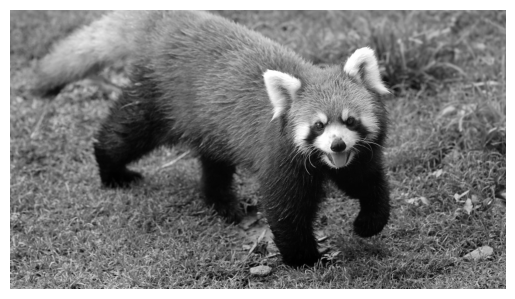

In [ ]:
# 2. Converting to Grayscale via NumPy (vectorization)

def RGB_to_GrayScale(image):
  return(np.dot(image[...,:3],[0.299,0.587,0.114]))
image = np.array(img)
gray = RGB_to_GrayScale(image)
plt.imshow(gray, cmap="gray")
plt.axis("off")

the datatype for cv2 output is:  uint8
the datatype for numpy output is:  float64
True


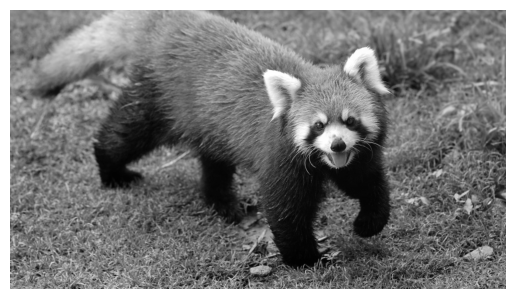

In [ ]:
# 3. Using cvtColor function instead

gray_2 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_2, cmap="gray")
plt.axis("off")

print("the datatype for cv2 output is: ",gray_2.dtype)
print("the datatype for numpy output is: ",gray.dtype)

'''the NumPy execution utilises the (slower) python implementation that results in a marginally more precise output,
as unlike OpenCV (faster C++ implementation),
which has uint8 dtype, there is no rounding involved.'''

print(np.abs(gray-gray_2).all() < 1)

In [ ]:
# 4. Array shapes of RGB and Grayscaled images
print("The array shape of RGB image: ",image.shape)
print("The array shape of grayscale image: ", gray.shape)

The array shape of RGB image:  (1728, 3072, 3)
The array shape of grayscale image:  (1728, 3072)


In [ ]:
# 5. Sampling Pixel Values

print(image[0,:5]) # first 5 pixels in first row
print(gray[0,:5])

print("As we can see, grayscaled images have only one singular number output corresponding to the intensity of the pixel rather than 3 separate values corresponding to the red, green and blue channels")
print("In other words, we can stress upon the fact that an RGB image has 3 channels while a grayscaled one has 1 channel")

[[103 174 114]
 [101 175 114]
 [101 175 114]
 [101 175 116]
 [100 175 118]]
[145.931 145.92  145.92  146.148 146.077]
As we can see, grayscaled images have only one singular number output corresponding to the intensity of the pixel rather than 3 separate values corresponding to the red, green and blue channels
In other words, we can stress upon the fact that an RGB image has 3 channels while a grayscaled one has 1 channel


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:
# B1. Computing the FFT of grayscale image

f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)

In [ ]:
# B2. Computing Magnitude and Phase

magnitude = np.abs(fshift)
phase = np.angle(fshift)

(np.float64(-0.5), np.float64(3071.5), np.float64(1727.5), np.float64(-0.5))

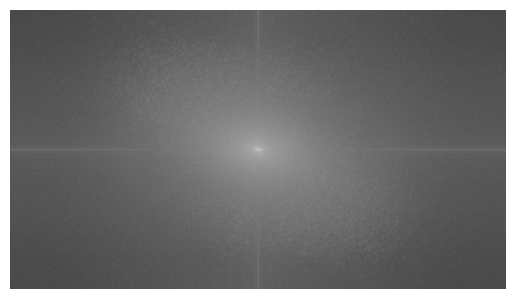

In [ ]:
# Magnitude Spectrum

plt.imshow(np.log1p(magnitude),cmap="gray")
# np.log1p(mag) performs the log(1+mag) computation in a numerically stable manner, using special algo for small mag
plt.axis("off")

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:
# C1. Creating Low Pass Filter Masks
rows, cols = gray.shape
crow, ccol = int(rows/2) , int(cols/2)

# Radii of masks as given
r1 = 10
r2 = 30
r3 = 80

# Initialising a null matrix as a base to build mask upon
mask1_lpf = np.zeros((rows,cols),np.float64)
mask2_lpf = np.zeros((rows,cols),np.float64)
mask3_lpf = np.zeros((rows,cols),np.float64)
cv2.circle(mask1_lpf,(crow,ccol),r1,1,-1)
cv2.circle(mask2_lpf,(crow,ccol),r2,1,-1)
cv2.circle(mask3_lpf,(crow,ccol),r3,1,-1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Application of masks to shifted FFT output

f1_lpf = fshift * mask1_lpf
f2_lpf = fshift * mask2_lpf
f3_lpf = fshift * mask3_lpf

# Reconstruction

ishift_f1_lpf = np.fft.ifftshift(f1_lpf)
img1_back_lpf = np.fft.ifft2(ishift_f1_lpf)
img1_back_lpf = np.abs(img1_back_lpf)

ishift_f2_lpf = np.fft.ifftshift(f2_lpf)
img2_back_lpf = np.fft.ifft2(ishift_f2_lpf)
img2_back_lpf = np.abs(img2_back_lpf)

ishift_f3_lpf = np.fft.ifftshift(f3_lpf)
img3_back_lpf = np.fft.ifft2(ishift_f3_lpf)
img3_back_lpf = np.abs(img3_back_lpf)

(np.float64(-0.5), np.float64(3071.5), np.float64(1727.5), np.float64(-0.5))

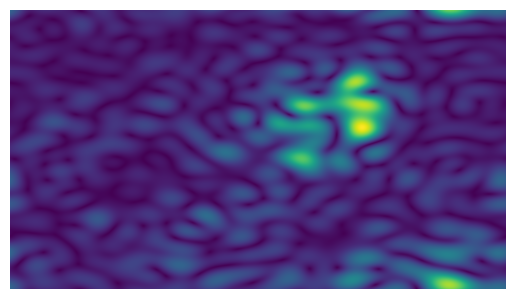

In [ ]:
# Mask 1, radius = 10
plt.imshow(img1_back_lpf)
'''r = 10: Maximum blurring because only very low frequencies are allowed.
r = 80: Minimal blurring because most low and mid frequencies pass through.
Smaller radius => fewer frequencies => more averaging => smoother image
Larger radius => more frequencies => details retained => less blur
 '''
plt.axis("off")

(np.float64(-0.5), np.float64(3071.5), np.float64(1727.5), np.float64(-0.5))

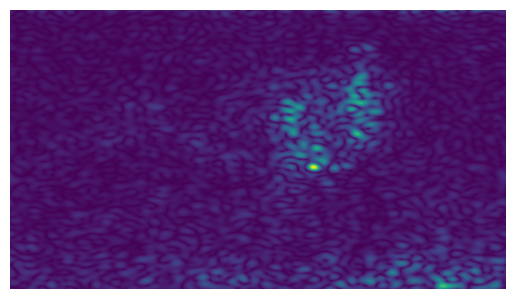

In [ ]:
# Mask 2, radius = 30
plt.imshow(img2_back_lpf)
plt.axis("off")

(np.float64(-0.5), np.float64(3071.5), np.float64(1727.5), np.float64(-0.5))

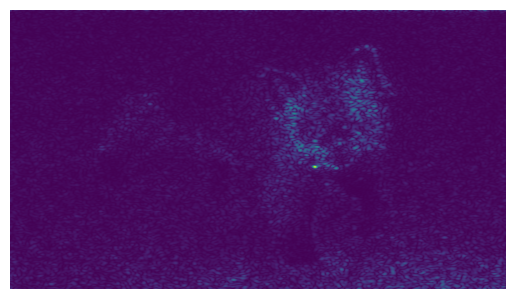

In [ ]:
# Mask 3, radius = 80
plt.imshow(img3_back_lpf)
plt.axis("off")

(np.float64(-0.5), np.float64(3071.5), np.float64(1727.5), np.float64(-0.5))

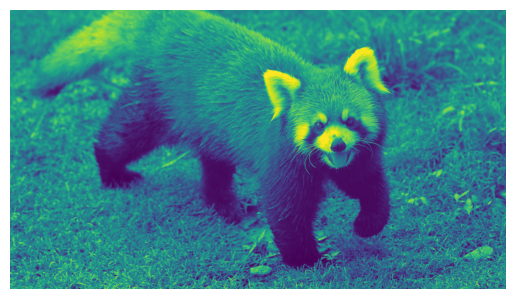

In [ ]:
# C2. Creation and Application of an example High Pass Filter Mask
# let us take r = 30

mask_hpf = 1 - mask2_lpf

f2_hpf = fshift * mask_hpf

#Reconstruction

ishift_f2_hpf = np.fft.ifftshift(f2_hpf)
img2_back_hpf = np.fft.ifft2(ishift_f2_hpf)
img2_back_hpf = np.abs(img2_back_hpf)

plt.imshow(img2_back_hpf)
plt.axis("off")

(np.float64(-0.5), np.float64(3071.5), np.float64(1727.5), np.float64(-0.5))

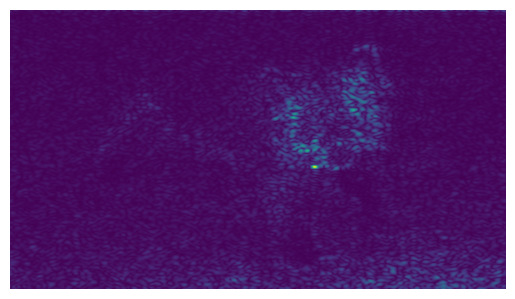

In [ ]:
#C3. Construction and Application of a square LPF mask with side length 50

mask4_lpf = np.zeros((rows,cols),np.float64)
cv2.rectangle(mask4_lpf,(crow-50,ccol-50),(crow+50,ccol+50),1,-1)

f4_lpf = fshift * mask4_lpf

#Reconstruction

ishift_f4_lpf = np.fft.ifftshift(f4_lpf)
img4_back_lpf = np.fft.ifft2(ishift_f4_lpf)
img4_back_lpf = np.abs (img4_back_lpf)

plt.imshow(img4_back_lpf)
plt.axis("off")

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(3071.5), np.float64(1727.5), np.float64(-0.5))

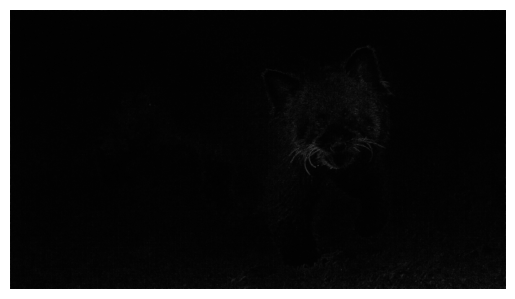

In [ ]:
# D1. Phase Only Reconstruction
# using given codeline
phase_only = fshift / np.abs(fshift)

'''Using (fshift / |fshift|) extracts the complex phasor e^{iθ}, i.e., unit-magnitude
complex numbers that preserve the full phase information of the Fourier spectrum.
This retains the conjugate symmetry needed for reconstructing a real image.
Although the magnitude is removed (so the output looks very dark), the structural
details of the original image—edges, contours, shapes—are preserved correctly.'''


ishift = np.fft.ifftshift(phase_only)
phase_img_back = np.fft.ifft2(ishift)
phase_img_back = np.abs(phase_img_back)

plt.imshow(phase_img_back,cmap = "gray")
plt.axis("off")

(np.float64(-0.5), np.float64(3071.5), np.float64(1727.5), np.float64(-0.5))

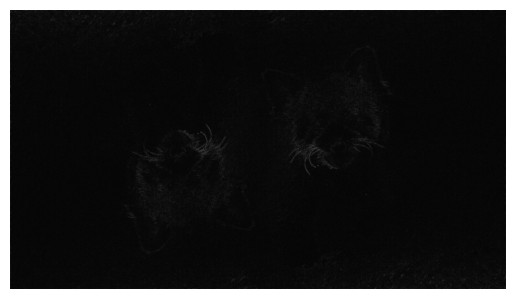

In [ ]:
# using lecture codeline
phase_only_2 = np.angle(fshift)

'''np.angle(fshift) returns only the scalar angle θ. It does NOT convert it back into
complex phasors e^{iθ}. This breaks the Hermitian (conjugate) symmetry of the
Fourier transform, so the inverse FFT no longer corresponds to any real image.
The result contains ghosting and overlapping duplicate structures, as seen in
the distorted second output.'''


ishift_2 = np.fft.ifftshift(phase_only_2)
phase_img_back_2 = np.fft.ifft2(ishift_2)
phase_img_back_2 = np.abs(phase_img_back_2)

plt.imshow(phase_img_back_2, cmap = "gray")
plt.axis("off")

(np.float64(-0.5), np.float64(3071.5), np.float64(1727.5), np.float64(-0.5))

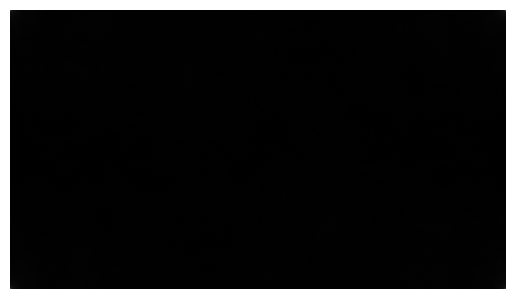

In [ ]:
#D2
mag_only = np.abs(fshift)

mag_ishift = np.fft.ifftshift(mag_only)
mag_img_back = np.fft.ifft2(mag_ishift)
mag_img_back = np.abs(mag_img_back)

plt.imshow(mag_img_back,cmap = "gray")
plt.axis("off")

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

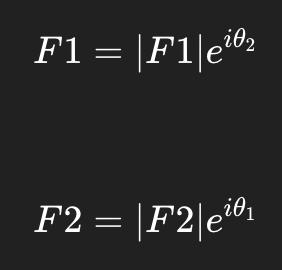

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(473.5), np.float64(371.5), np.float64(-0.5))

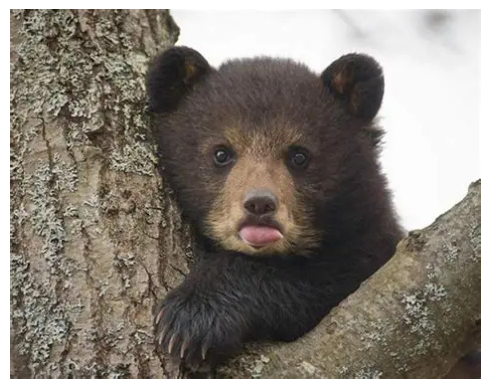

In [ ]:
# @title
base64_image2 = """/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAF0AdoDAREAAhEBAxEB/8QAHQAAAQQDAQEAAAAAAAAAAAAABgMEBQcAAQIICf/EAFUQAAEDAgQEAwUFBQYDBQUECwIBAwQFEQAGEiEHEzFBIlFhFDJCcYEVI1KRoQgWM7HBJENictHhkvDxNFOClKIJF1ST0iVVVmMYJjU2RFd0laOy4v/EABkBAAMBAQEAAAAAAAAAAAAAAAACAwEEBf/EACYRAQEBAQACAwEAAwEAAgMAAAABEQIhMQMEEkETFFEiBTJCYXH/2gAMAwEAAhEDEQA/AGeXa5E4e5eNnOlapLbazibYRday3uYioQI0G21hsl+648nY7sBHE7P+YZmR67Sp2VEpZxXgpbMZwyfdWGVjRF2XxHZVtpsHrfAxWfC3INPZipIq0VNZmgi06ptGDQKi+FNtZbpt+uNHp6ScyJQsp5pB2guK2VTowTa8Ext5G5AIt9aO3TQgr1X/ABJ9AnVgJzpxfmZnoqRqfl2Y1JjCL3tzZi2yyO6IItuIRO6gt49+iYwtmqlbybSOItTh5nzDCmx30VHnyhNq+7NYH3kEdOhtd069fW2MthVsBl6nSKXSKVToEmN7PCjP1EJclOdCFTTl6BsiHq78v064WzW8prNXDxnOcP8AduIbcGuxIzkykE4/pJ4WxupqNtlLbvgkx1fHZgN4K5hqM3MkmnqxHYekU5pluG8aG5sq3UbbKi3w0yKyxM8RM2yoVIk0KmQ2ZFKQnOeDxqLjzu2oWzTr/ntt5Yy2GAnD2p5RoEbMOaarJcpEtWY8KmwZDhGcgC2cNLJ0uiJ074W+QMaDmGVFpjy0J5Egxj0cxxq6mx2sl9sYS9Q0rSS6hQ3qXEic9imhzJ3LNGiQlRFFSVeunxfmuBK3QVOmO8S8u07LgZIfD91wdYOdBJw0cYNBO5ipeA7Il916JhpMArj5nchUkcv0ylBUXtSA24y8JAy40PiRV/DumG9Nj0FkvMrE5iET9SBZjTDaiyaWF0kG1sRvtWUI5lqzGaqpLhVdPYTmDpua+ED+Gy9u+MYoGh0+FRanVIeo5EsHzFkQ8SmK908umGkwD3JMXNcjLNTbp1PNuBBIDmGS+6pd7fn+WHnhlswKVTNdRm1EW6iyBNUyUBtuDtexJbbGxy/J7fVnghnejZz4e0qfl2sMzGmYzbLqtldQMUsqKmPS+vcjm6g/F+Rfc1xb+lkw6aefREUStjTZhw3Ikd3MLmlzyXB934ivfGtbUy63XAGlkH0TAGc59fhwBiOv9zwBrWvfAGfLAG0cfTo5+mAM9oeROqYATKU/v4sAIq9IVfeTAGua+vUktgDuxL1wBxZcAZy18sAIOsqtrD+uAIaq072lFUkT0wBBG25TXk0WS3lgCWhVRx1tE52+AH3PcJPe3wBtH3x+LZcALjIf2ufXADlqS8llU0wA5GS6Q25iYARdef8Ax4AYyJD6ba8ARk2U9ZfHjYA9UZzzaKWq+HgAtbzATfM0Pab9dsLQE5GdXmndPMvp9cQrcP6bnU3xQefpVfPGxg1plddmqqK7dU3xWAURZjzjIoJdMbQVdV40S5bYTNDbbR6k3X88aEikcre9gD5j1pZcKXFrIA237C8j7CyhB9xpxOir/wA748LnXp2GEfKz3ECdVJGaM6hTXJIOVA6tIeBkgIbWsnTqrad/1xblKizhxmOlMDl2ly+MmWszVentyHnEZg6jkqQqiNiWnSCDcL7eNEtt2ZO9eB9TJXEJ7JcFjMpwZWdprjhtuPgP3YqaoSilkHRy7imrvf1wJ8+VR8ZqPVst1yMcl6JDlhBcixwRlDuKB4ZBqvuL188ZfS09F4me8u8LZGUY2Z6qz/8Astw3SQDJuey8epV5qIvL7J40TE+SZrjL9RgT+I1cm/aFckPxBWcw7OdEosmMl9DTaKNgBEROifn2pC4p82c0tZrp1Qy5ml8c55nafm1eozmlbCmwXVQfZA2Tcg77+Bem2MuG8j/LfEjhvl7iFQ8m0DLT9GnrHdp1UIWfCTyqgx/GWpeiLdf8SYnYrysPitVqVQsrQadVcqc9ue+rfMCOTqwwE01Gbg+O2yYm6OVFVmlSc2yKXTcuJIrCyTfbiMrD3VlCFGkFwiRV7r30oq9cPzdHXpZlLjVLIYHTKxlysvgUUWXadFAJzEVRXUjr8hvxgV0+BUTbA5b7Pq9w8pLUSRmKPXYDdSrjax3KcxIORZxB2VDJBFL77Ybk0qpqXxVn5QynUcq1B4aLMhVBGVfhAiSJZ73FRXZwLW8uuHwwn4QCs1pcxU+IygtorTqODpMkLbZOnn0xPqsWC9luTOcmzI8h6O+1y1EGSVH4bWnwkNlsYdflhDxH8OqDPzw3IZqIFNqjc8lbSSugyFPdXv64bk0B/G/L0/LecIpt8mCT4coSRLKpp1suGwtos4RVit0/LGZ6AitSzmNg8iqt1Irb3/wdMJayxUvEeR7JTBkMNGJk4RuEqWQlS3hRe9vP1xbhLqPQf7AnHWJkutJlqtzeXTKqSCCquzbvwr/PHRx1+fKNj6XttISpZOuOri/ot5OEZRE2S2KRNvl4aTWyaUELdsYx3ZcAcYAxFtgDrXgDMAZgDab4AzQlsAJq3vgDSNb30/rgDtG0t7uAN6U8sAcIKLgDpG08sAJG3fomAGUptPLbAEPPgtPJpVLKvRfLAA+bbsJ5RVLJ+i4AmYMlXARC38sASQeNEVUsqYA2u/0xsmhpX0RbJjA7CRuiLfACquIeAG76bYAiZoEq3TulkwAM1QDVSBeltvngCtcxRnE17YatgJkUl555SEuva2I4ZPUHLy8xvxJv12xshasikUgmzDQopfDsF0GNoaRNOAHYtLdNsALAzZUumAHidMAfMp6LBOTFVZHNeRxEaFwFIxc8kRMeJI9K+hbJyQ7+71ZpdOo6SJ0ppGoj5q2QgpKKuAYqVucNvcsv1vtXmxz9xT9DzFwz4DZqeyrMgN1yUD5OP1VqneyCw/rQkBJBldRHfcUtjUr4Hx8YKxmKoRaplfJ1blsZfKRMnuxHAcbksOgSClk3XdFTAaZFeZhh1Wq0ChVSc3VZVdfikz7ST6vLEBXLiJkvvLsvfGKR1njg/qy9KjVWYNWrUBWHec05YWxNFUtk26+VsLZh/wAhXKdQosuBSZkzMVUog02olHfkxhSS27HaWyIopddWpRuienXE9wl5egsn5w4E1/N7837OZjZhqVRSNAKWjjY1BBAbyFFVW+nxWT9d8U5uiTHnfiKRscXK1mJtuO/9kS0b5sYNLkpGl8R6Omrfe2G8VWeF4VXjzkqdLpOVqTVGqzNnxmnCajmitcolRCE1/El08OJZ5dHNiObyQ+xxOoA0mLJeGPVVlsxnnR9laFR8aCi2v11fTAy+hBxNzfNyvVoCZciv0dyvvHEeNAXQ7ZbKblk1NuCt7L6r1wOazyqDPmZeNmWqJTcn1mnvOUY6ms+BLeYEZExNtOpEtoT6b39MO2TIEeJuX6OzEomYaRHjN1l4HEltNFzEcJdwU9k3REUU87YGrS4RZlbSItPr8V1mUyyqIr6K22RfEJWX3URE29cLjNiww4gfYNVYSJUGHGXmzZFWndRNCaJsRW92/f0xh5MQPEo6O05RajSn58KoOmYuHBc0gKF4lJVt6JgNmA/ii3V6rlAVqVbdmyI0gVYNyyly1RfLAT+iHgW7AMUnRDecA2SbdS2rlqv/AEXBfR/BPizkVWcrk/AZ9qjumRPI0niE+q7fXEPrXyj0o3LVMrUVpDpwOGsR9FHSnu3Xb+WO/wBJPq/+xFxBzTxC4NBKzXJCW7TZZQWJCFqNQBE8JL6bfnjq+DrfCfT0GnTHSk2i2wNjE64GFLDpv3wAmvXbAGsAbsuAMsuAMsuANYA3demAMTrgBREHT64ATXrgDWAMwBmANEl0wAylIqqmAI6Qiqm2AIKqaNS6uiDgCDWoOQ3rI4tuyXwBPxqwDjA3Lr642A7CcLgpYuuGDpDJcICqKtsAKC4QqnfAHd+YNumNgNJLOoVS26YYBapMnrK+FoDFSo4y9RDa6p0XGBCLRSZcUeQl/O2CRtupaDTgBEFttNXnbphpCWiiltqF0JEuiY1ggjtXAVxlOdCymFDoQ36YAXRtbJtgD5gv1/LoSXH6UciZrsnOdBGkQkS2kQS6ImPEr0kfDp8aoPxHmXBkTKejpsMHrBlp4i1ERInUrrhZ5TtTk+lZN4quy8vV3KlecOm8uoVSfCFAii60OlU8Vti3v8sV5S6iRyXkjh5lbL9UzhXqi9l6PSohOE5GqapGWOSqQNpZdXdb+Hyxup83yp3MfGSvUnKsKLkKMlTplTdJ0HJhCMsG0W17W77+PtbphnRwB8z8aM8VWtNzGXzoz9S0k5I1IvLbUNJKQpuorsqCnku+FqueFscO+GErhdGal1OZR6rFcpvOkU9/7l0L9JKKa20lvt/hxOpUxq7kHhQtVmZHjQazmeqAaFVNJOpTgLoLRuLpRxN7rbsmHnpilKPWs+0SvTM1uUZahKite2Ooa+JWzJEVEFU8Sr8+y4ynEeWm8tLOdzO/MWk1JlfaosR1vUbhmqqjYpbbCn5q96xnKq5h4fUGfk6nN1Cqk4rr7JoiLHdav4EVE377bWwH00zhx84j5sjQ4VMy9RG33XdWmcKmQOgiIrThLs2G/X/TAlU7w6zRQM/VmJT6nUpA5wYZKP8AZ1bmoJtPbKgxV08twe6bb7bphgG+NtWy/ljMMGvSMtypfsTjXttFlRgjk8S31pz0TS4qoiWJUuu+GhL7EbObInE2nOrnOhVLKPtMRJsKOy+hvuxmbjdxFTwDo+eD+F/oBocOnQMyHRsp1GY4w68fs6Phf2g9r31JuK3TC5rqno+fzG/mbPNIy7OjtQnaS8626rTfg0ra1k29cKLcWzmLILsvL9SJJbLk5G1eZ8yFEW6omAioskTo9BqMpp9HocpFUnI7YK2iW7b9e+MvovWyDSTU50mHGNmK/IsRtyIg7axNUUSH/nviP1/aHXtWWZG42WaGrceS5GeN5W5AIt+/S/8Az1x3Wsr6c/shcPaTw94F5eYprcsXqvHGpzFlCqGTziIqqt8W+t7SvtdiqlsdxbXOArdlwNZdcAZZcAbRFvgBQRRUuqYA3oHywBiiNl2wAivXAGsAZgDdlwBrAG7L1wBrAGYAxemAGslEXrgCNkJdF2vgCAqTKkakidsADk6nPPEp9PLAGQYckCQCVbfPABBE8Iii4Akw07YAcNNX7YAUUEXrgDEG2yYA4dBV6YAh59ON1VIUsuNgQz1PVsvE19bYYECpQuLdUwtDtuCEdVVE64wh9GZBLCifNcOE1HBOWOA52DV8ZgdoymrCg4RvbAHzdqeSaTWKsUqBUGy9quqNwYpNiIiiqqrdbeVt/PHiSPR69JSXSqDw3iRqgzQqlKZZVTlPoOtEdOyNNkHu6gupfO2Kc845+ugtFpk1qss1eDW5s9yNDJ9YTMMhjsPOldUdESRHLj2vtf8ANuswu6a5h4bt1oWcv5qqkhylNxmhisjHAVkSHyVRG3cRv7uI75NzANx04KyMqx0l5cnc2KwROPNBGEDbjoC7ASLp/ifBfa3XfDS6vwp/LmX2KhFYj+xc+oumhNApeJ0k+FS+vW2CqVc2Wc/UDLrTwpR4NXosmEryK+hS5MKQAeNhzUqf2fWiaT+d8T6S6go4dZypufm3M1JlqLSUlghiCirzT5AiCR2EURd096++NITzzLJmi1qpsnlcJbTDcWAJyEdcfBF1EAINlR3ZOi4oopbIGZaHBi5idzZVX2cxzo5MOVB+MTitiV/u2NOwqO3isibp0wAd5R405aykMbLEOSFWKUaC66jZAL7y7a0Uk18wr6b3737WwN0S8QIDNCmzXAc5OXq42j8QTZ1I8KpckQ7puDl77ddtsDFW5Tg5WlTm41ZrRlCpeuTGmO6faYzoGhCjD6Jv12C3Zd8ZsCweIfFjOme8jS6JmCVGlQ4ANkkoI4nINFKwk9YfASb364ysvk04V8QMtU6NAydnsMzlmpt5YkCWa3Zu7bkoRJ42wRRDt3wv6Zg3z8xGybmORFq7VIbqdQdakg9AkE4IrZUcccuilckt+vlu3in/AEq/MlRbpOfBrlKFk0EBORo8Tb7hH4kE/eQdFvPCWs/UX/KqMlxqDPggfKNlDMhTVoH1/wAKYxtugaRkSjVrOcyvU3MMMnwjo4UF07uOpvdNP064cqbk5zByO8oUV6nsxlaVtrTZVVPDe/8ATBzPJLEJkrOPBtrPdPrfEOnOTqTEdOW9CHxc5wU8CENvcHbbHV/r32T/APj2Cn/tAuCKsNfZ7c1wBPlK2AoPLBOiindPTbF/r84T86s7h/8AtM8GeIsNuRSM4RYz7jiNLEmmjT4kvRNKr022x07C/wCKrUQd+uNLeSqIJCm2ArXL9cAb0D5YAxBRFuiYA3gDMAZgDnl+uAM5frgDOX64AxRGy+eAE0Te+AFNKad03wAkqLfAG0Rb4A06iKiYAbGl++AGDwXT0vbAEfJja12W+BuGT1LuKqjHbAMN0pxItxDTgGOkjOMr4sDDtrUlkXtgB+04ulNsAKavTAHN18sAbVL4A5dbQkTADGSxdNKpa+AG3sadlwA1lQHr6kRLY2AiIuMbklr4YJSG6hCiYWhKMAmjqmMBUQ3TbADtG0sm2APlZlbM+Z5D7MpuQ1yxMhehqJCDbaWvy1RboS/0x5Men1zcFuZaNQM0snmIs2NyIlNJhuDTmmXm5LDweJA0CV3FRVsprvgclnkKy6fPzbWhSZWGq1MET1QGXShsRXyLcwIF8Zb6VBUXqmJdUSYIMu51zJNzWzlWOhGrNOBWqpNhIYzGEHxGBKu5NbCv0wvKsnhGVeNQ6j9qt5qzNRYdJhx1gU2BHb1fea7buCltzO3TbfDxtqn/ALKy9lquLS8yIdOnzI78BqS0Wu5H4BkoGyuCW6bWxtmj9DygZWyfO4WU/hdkSvNt1GRok1lRjALr4NnYmr9dKpe46u6dcIW05HIbXCCTUqXmjiLFp9Drey02Nqa55O9EQf7u9l9z9O7z0S9eQlCdzJGg1CkM0FqPAiwVkyGqrEFzSPVG1d6tukFjDQu22NsxaXUNVsoSTF3NmXigyzlsOS2qZIMQfkKC2Ntsl6qK+fW6dMDR3T+FeVon2BPzfJMqk7CcnIdCbKTMhSbo5ewp950QRLSodL4AW4fZuHNeTKLQaJkSuylYfORJnvtXPn61RbAaXb2vr0p0X5YTr2wA5d4QOcQn8xSMm5jPLcqnVR1oaZKbRpCJSRFJq99+lsT1l6Gw8H88UiBUaLQnyzM7NjI7LjRTFAjOoi2V7Ve2y6k+aYpfRf06yhmeW5Lr1MqIyX6jlqQ0waDDbLkE8GkU5ypqTdPe7eWJ3yb9DWs8DaW/R4DGXKjPqL5x+asiRNV5hScPdtCLeybb7/LB5ZboQzj+zNmyjAxPhUyXFlxfFp99pC7dPrhNT2p3IvFI6mwD1aKFBmA4VPqFOFNLuoU8R77mHTf1w0UlwNZtrWVoFai5gpytLICJyX3A7Iq6hH6LivMumqm898UK9V5RR2ZRA0goCki+9bvj0efrZ7c168q7drkZuXzQR7Wnv2Pr5f1x0yC9HkWvCr3PjSnBZJLEz5fX/bGXwWVLRszzI58yFYxT4VTcfkXb8sS/dVl8PVX7Ov7c3EDhlUItJzfNfzNlYkEXozpqsmKKr7zBLdVQd/B69cUlRvt9QMm5uy9n3LsLNWVqm1Ops9kXmnmiRUW/UV/xJ3w2kTt74z9BmGDMAYqoiXXACRPtKllK2AG86pQae0r8l8ABO5LbAaRFzc8ZfhtA8c9kmjJB1i4KomBv5LxM3ZeliCw6pHeVxxGxQDRVvgLh8/U4rRABl76264GOwfZMlRD6BqwB2yaOdUwM0qpIPXA1iIBdMAYooiKqJ2wA2c64ASPfAA9nDNWXMl0Z3MWaKzGp0BnbmvGgiqqippS/x4zTyPP/ABC/bu4N5YkJTcv+25lcVEV1yEGhhpfQlRb/AJdsaaQNUf8A9oHkWpT5L9bytUYEJGkGC00Km8a7+MytYe264ANsuftf8NsxO8txz2fog2O6oq9EJFXYdsDc2LupNao1eZB2lVOLJ1ChaG3EUkRfNMBMPzgdCAMBGhZtZES2AO0YJe2AO/Zlte364A4JtR6pbAHOAEHmtSpbACKgoqm2AFOShjtgBo7A5u+i64ATahvASWHZMASUYSREv+WAHrPiNNsAPkDbpgD5jzsuv5L0Tq3liODYoStQhcRzndLGCpsaJ/XHjSvVv2JYpzhbnevZI4uaKxmCWzAqzjjTL7MYHxeeMvDdCtoX3R+irh9c1zr0I8/ZFptRr8x7KWaZMmQcoDcfhSlZixXNV3FsK2W6IgkW2y9MSrJMEtVgQW8qw0GUmVoSpdXqgb0n20ksjttCIvi6JjeWoAMvcFY+caQwXEFyiRzjnydaq6LDrjvjQ7WEHUAESx7/AC6YeM/SY4kcTuFEat0plnJMbNIQYaMQeW9okkBNqvO1dw6eC1/JcHU0XpE5PhQuGmTXp2eqhT4LtRlffIywTosu6NaNWHfXuC2RMRrb6KUnPjuZJTDYx2pjswdMCruualdJsVUidb6K0irpFFX0wyMtMarnHJOcJ0XN2dKk3lakyWEjyKbEFyQ5KFvwKrqCluqLZe918sOrLqMzZI4H1Ss02uZPenxAq7DkVh2a5yyCShIjbIom7etVspX2snlganuHOY+IHBvML+VeIeY4a5djtex0eoPGgzKbIXqwyQ7o2KIlw9U3wKCqq8bsnTazS8oZSnJIkG4LTlapcpQEXnSQVQgSya9aLfdOuMvlPo9/93rNblvxc50mDBzbJMgi1AZAk1JBtV8KKiW5iXMlv2vhML0I8uZXruTIoNVbiFTlmvNkU0nZYo8qHbZ0Ft5bb+eHxP8AQep8Wm0viUq54ghThzGCsRqhKUfst9Wwujaoi/dvKi7IfTvhLNU/a6VpcSHJMH3XJJ0omljGLiIiNKl0BCS6H6dO+yYzBun9Uz3AoUSZUa5Ra23EYu2+8RCQuCvuklvku2EH5eR+J3EnKEmeEWhZai0sQkHINzRqV+63Qr7brdbr6JikmU3NxSdcqTrgPmKEivLzCK1gVd/dx63MPsxXk14nXFIjJPkVsUlcNqMOagEotiJeakm+No1w284DqNBYRLt5Yl3T8D2Mj/3f9pbLmX93e2JfqOmc+CKySCSbsIuZy7Kaptv3LFJ1qXcyvU37GP7Vc7hHmxrK9ckKWVq3JbamxzP/ALIThaUkgvzXxfTG3pPH1fhzY0+M1MiPtvMvAhgbZakVF6b4yXROdDmfuI1AyFT2pNamiwMl0WQVe6qqJ/VMUl1jzjnn9rVvLma2GYStyYRiWok31+FEIFT/AD3IcDcBEn9qnM7VaGey+6QBcTZJURDBVugr+uDYMQmY/wBorMUiqzEp9Tlq24N2x56rcU6onle6YNhpEBWf2jc6S6INHlVWS4SEhKhEu1sZsNOQ4HGXMzFOCnPvHymXFedBDVSuvvEifRMGxv5pOn8VM2NVjnpNJdLiOkl7f5l2+mDY28Dtf2hMyy+bIfnG/wAh0TFOYo6FFLa+9/lg2J/47U0P7SOZ4vtGiqueBtVXxdboqf1xonwaNuEv7T0mI0wmaJz0lDSzoAdiD13xmxv+HF90rjZlGfUKhFOpIgwmG309UVFVf6Y1l4xYVPnxahGZlRXhcaebRwSFdrLgRs8nuHbhsa6tsDFB/tKftV5L4BxkpJNBWsySW1Jing+gAyu1nHl7B17Yy00j5uca/wBo7PPGiuN1HOc8HWod/Y4LeoY8e/xICL73TdVxLdqkirZGajZYP203BRbW5Cab+d1w8umsxGN5hJ0AKKrggvwK5fT+mBG3yl6TmeTDeR9TcRdrEJbphzy6vLgnx4zNkrNEKptVVyQ2Tgicd41UHfIV/XA19QuFnE2h8U6IlSobhKbYJzwUURBe+JEVOuAt8DNWLLfAxtGETZEwEbVr0wAg6yirZEwAg4wqWsmAOeQS9R/XACSsJ1VMAcqKotrYA0KeuAMQFVb4AUBtcAOWgsqLfAD9B264A+UPEQa9mKu0bJWW6NUJ8yLI57FSalgRi2SWMfCVrdPLHk12ZAxnHIdSyVOq0qVlLMs6Cx90cqG5yoyPoSIilzFuYlbT4drqlkxHyBBl7LPEebRRqmY6DToSU1hFGLEaRsFRfxkpWcMrbInSy+eF0Eo+dq/CpkSRnCro6+/zBYbjMgL0VtDXQiNqmholuuo+uyW6YpyE9Fp+Wa3lv9443AuZmGWAG62TpCPNTTe99uYZKi/LDy4mpzLhQBrcTMWaOHBt0qI4jsmI0+42RkPYSXZdPYVt7y74LdC98hU3J+feHdY4k8QMrx2Ga5VKg/7D7SiEbIGgAgkWyFfRctu22JKXypPM+R6643Hme2ttx6K2dUobFMj8spAyHEElec1WQUCwJdOi4pPDMgxhZFy09kV5ut5Nbos2pQwQKrCcSSMIhcRNDiX95zX4Ut8SY2zGpvhzmH7D4ejUFyfUMy06AL1PSQMZs2aYcdSRCFs11aC3ufom2MCp+PmXpOa89w5ea8nzqBHkUyOUOI/J1ukyo3QitdL79sCiUypkijSKPKGh0+oRhZi86DNYW2p1rxiIbfEqe/6dMAXRwfz/AAuL+SXalmDLcJiXDkixPbqKoDcp8boE1sFURB1dhNtF8e3ljJMS69CSVK4G5voFY+26hCzHVYRK1VQhSFiNuOtqhC20S35i3T4Fvt0xrm6UlmerZUz1VHgTOrdEyTMjE7GpNYfvLjSGgTUmmyX1bb+mMsGCfgHnXK+UaVWMsVPNFqeDzLUZuTYwdac9xwFLZCG67euI9OrieHoHKFIOoLV6PUpwVWlRYzYw3SdQlkN3RSVwVtuvh7rif/5KZkePeONUyzUsznIorQJCjobAouxCYFpICTzFUtj0fh+OdRz3ryoyv1EXmibjq2gjshCltV/THdzLB+qB5Tqk4qOyDNb7alvbFEKYkpCSku6Jg6bJh+xpVAeXcu64j16rYsHLlRjMssnMjA7HeJBcAv03x43/AK16E9IPMCR4sx06c4oWXdF3una+PR+CVH5YTotUkvS22nNK+Sri9n9Rj2XwC/bNzpkOJCp9XluTYMUEjKBbqLeodt8Zz4PeC/H7jPUOJuYUeYqDx0pCFBVNQibnZbL8lxTkmK6adckR5CvOgeg0HYr4OjcwrHqKBqRk0vZB3X/hT+eI3a38uZUloHOa4WnVjMrchCZLbGUJCvNULqS3t4e64za09CWyccmG11CoqIH/AIF6bfnjdocMS20DlupoUI6im99XrjfLZGotRiq2y3r97Vv5WS+NlxSc47mVe0f2VTsaoSj5rZOl8UFYNUcbgA8msRcEm0cHse22Elus2pen5yqsFHkZfL7/AE6yVfEulb7r+eH3C2a9L/sy/tGPQ6stBzPUwFhzlMgjhbAAjuv6p+eD9I/nK9jUDOlDzG085TZjTvILQ4gHq0rvt+mKaz8POX7W/wC2DTeDNGlZZybKZkZslNKDRXRRiKvQy8sZal14fLPM+ba7m2ty65mKe7OnSDVx2Q6qk4aqvde9sS7uK8c6i0eXk63U+6AkNzf8kwnF1f8AxoWqvvOTiccW+ronlinNTvJs8LuvQDmhB6+G98PPLm68VIMOPiLbLHe91w5k7Sqm5HdBttPmt8bJo17A/ZI44T6LmijZOpzRxmZ7ghLdb8SyVVfd07evfvjA+njI3S64A3ZMBGKKLgBNQv2wBpW08sAccv0wBwrV0tgBu5H7omAOBYK/TACyMiibpgDatiidMAaQrGiWwA9QtumAPkutRa4UTJUsKG/RX6iyrUIYTgOatIblclsCa0v/ANMeRrtLsVSr1YDCNmmoVKvEyyBUmqCrrL7mvsmqwKm9jBVvdfLEe5rC9eyLmWp5cpc/NmXa7Li0d9X48WmVFQFsyXdUEkXwrdBVd9lxOgX8OZVQWpSQCj0MIJC2Tb9YnAhNkqLzFJBQy1+8KCq9B64pPQFTVHzJPceqUKk1vN0eVGebkRj/APs+PHIboCNNrpLeyIO/ZfkrS4AlmLMDlap1Tyi65RWoOWAYlTKdFBXJhOLrQ2mrJa308sFugNZRzlFg0V6PLyXWatlyBI+5Vp9UfYT+7FY6JpMRsutLpZdsYEMI0HMnESgxuIVUnOVt6nPRI9MorROg+4hKrDXMSzTDpXXWnwbL23bcga4lMSeGdToMaLldzIldrkJft32IUqUD2dHbjullUg2vZEvdMMApnDiDPnZmj5lipJbA4QvOPQn1aF174VWOhKjbXX4f5YDyYIYNNp1dapmb+L2awWFJnxYbxLKJ+S2341BrSTaI2nMW/XuvlgNPB3xb4scSMkZ5ayjIoFMmZanRHBoU/Soo00Q6UcEgD3xX4fTrvgZ0Hcvccad9lvZYz1UqLNmSGFprP2PGVuGLq/30h2+5bJfT6+mNsyIdJbLPDPL1JojUkpE19J4uNSosWIcmOqM2NuSiL4m9+wbYnOksJ5jyjwynT41aivV37IlOaZw1Cko0prsgkBF74LsN8U3YbmGWf8sTq6/QIdEyXXoMcm3IsGdU4ax0loh+BTJbDsvbbriN9ujjIsfMHC7PdNylTmG65CCpUjUrGYKe+scQcEblGuqqLglZOydEwv5bfTyrnCoG/JlS58kjflOK64S2TUa9Vx6v1Zrlt8q/nzo7K8pW1Qut0S6Y68ZqGfJkvGCXVeq9MFTIFYhIbbrjOjnUGO/JMIrY+JdsQ7bE87UBp0VuJdCeFF3ToiriV5jp56R5uuS3kFS2LfFPj8eC99aIaHR2ZRG0234rpqK/bt/XFcRWLTYKNNsvIwiGg3UV2K6+aYlXWmYSNAQ6DXlOIinfZWi7pb/nphkrzDl+WEJGydEtJloUhS+m/ngP+XTcwHCFFQRcQkG49CHzxkmmN5E2xux3yuqFcV9MbJgRcqqPQ5JgakSugiCopfwLhQeUrMTYh7O4ukhRU1L0siLjYDtKintWmRYwIEVkhLe69lT8ONwGntQG4TDSoiIiqirsgnhb4Zpwklwn2hPxKKbl8N+++Brt+RLEOSrqI0pakQVwAp9qOol1aBPklsbLgcxqq7CdF6FIc1ot7qW6KnljKyTFjZL/AGgcyZMgvwjmPuA8qmOt2+k/xJtgncb+XnfiTnSuZwzPMrlYfJx6U6Rqt+19k/LFefLi+eflDUJ5x+oNtts6kNUQS1Yj8/hX600U5gp8GNQo7ENb3JDMlTxEvrjkl13XigOZHMpKkRXEeieWOnn0h3JEc9M++VNWq22OniOLt0E1xFTRigiZgA+4KOqSBbGtXFwbzrGyNWmswMsMyJ7RALbjifw0VbEqJ+WED7S5bmpUcvU2oIer2uGzIv56gRb4GHi74CtYAzAGYAyyYA0qJbACZIl8AJ6UwByiWwBvAGCC6kwA5QFtgD44xWeIeZaTMqzbcaXFkKkVJjjCm+KqiKWi3RUun6Y8d2C3LOS4lNq1IqtOm8vMMTUbUwVB7laUuujyXl28H64Ayi5nqVQn1TL8qdmFygHNdeIUtEcC9tjQ9/H228dk93EsA84s0XNmXsgFR8vz6XHnuvx3PYaYhMytIalBNQle6Ba5J+WNARncRs18OMkRaVLKexTqoKqzW6bVEecjk5ZEEnnNRLtqT88AQ+VcnMUamSIVIgVaUU5xJTlRSoAj0hjUim8TipZtNk636p5YC/pXT9Az3k9+fQMkZiczTTcxyJEZmBMI4xrJENRuJv7w8xRtq8e+1sDYiMnZlz9wqqWXczvk9HbNSjS2SNpwn7eBxNC9Hb+vZcBs1alLdytVoMnM/DCqNUVPbGW5kyqTDbmtrMJVVlRLWBAQW92yeq4o3lVmYUhBnCr0gV9ipRHzmpiBYmLF4TBdI+AjVFT6+W4Z6Ny9lCPU+FEmlUetTp7cloJDwyI4utgSIqn4yEbj4ktsnfAn1sqsaTw/kyTys3Q2al9i5qlFyFmv6xjSwTlmFzW6Ciqi/XArp1xC4H1jh0EfNdJjMLCCe7CkOgGoXTS1nVvZAFd+q9vTDX0S86I8ocTnqay1Tq3nf2KRChOyZTJstexTW9NlZB1F+7Ivi/Hdelsc158l/CenRa+3lkJeYXss0zLMln7Mi0OVJUnnhcESalJJLcD137d+q43aniTzvxZqMvhrHHJc6ZElQ2VSZQq5CBx6WDaChSAMt0aFEXTpS57+WMbNhXhT9rZ7y3M4Y5tfbZlhESr0hiVIQn3xUFXUop8Ov13tjYp/HifPI1eDV5Tc9WAfjum24rnxEi7ony/rj1vp/wBQsAs+XfX4kXp0HHR/SI0yVw9QNkm3fbGf0sml24xsspJfaTQvRb4SmcOOuNOJIZFUJokJEFbKuFbD5+VJlSA9oaEVK/iXonzXCZiv8FbeXgZUEeUkcLSukt7IV7L+mJs/KYpcQoz/ADDDSRW1EnfFJonOjeFKhSqY6MtsBMVRCUUtfAfySMoTrRHFLxBu4Nu697/TDw8KN1ZoY5xZgXA29HXqXbGnjiK5qBDYS5trpRMTZZjHTbVHLojiGtzT4k81TGwGMlEcE9yA20u2ZJtp7IuANAKPwUJ4WkkgWhCbXqOCAuUnmOR21BGyYTSqIm+q2yYxl9GriGKyHCcGxIm17Fq1JvbAQ8V2S7GabZXUN7617+aLgNL/ANbWQ64yjQL4hNEvbpgMj51ROIaxYb2plUSx2sS/PGgg9PPm60sDbiprG/5YwMelRmBMld1adg26p8KfzxMwMzPEclTRcb+EdK46Phc/z86hqRUHYKE0B8tzXzDROqEvdML9mD61/NEz1RlPRSkEukGLIve9/wDpjl5j0b83jAlMnyCkGerZcdEn5ef8l/VL0qELjRTHkut9kXFee0vzp+2DCrcWEVcU3SejkZYNJZQL6JjYBBllDkyk0loRRUl2v07YwPurw2KSfDzLTk3/ALQdKiq6vmvLHfAxOr1wFawBmAMwBmAMwBzgDjAGtPrgDNPrgDY6dSYAdoI2TbAHzEztlPN1AoR02owaYzUM1ywZhuxHUbRiE21aQG/xFZdseO7GqfmjKWWamNJcZeok98RCpE7GdkQ4TlkUFIk66hbS22905nVcAIpxd4dVJ6pTKS7WqgtQnBUY8l58QFHk0iBOavEo3sQpq6X88DNhDNmaqudZZntxnipKsiM94SQSfec2BHpC6vATiaBbBEt5rgaJak5kzMY0zLdeYpizKpS/aZisMgjEKQoIjWpwF0ry0Beye8uBnXpWlAzNm2jDVcu8MoGXYgUZxpmVmYC9shnIU/GaNPEjeox6BdLXwOfRRVaTxB4aQ6sxT+EtJnN16Gji5tYX2gWJTl1VwYKkmlCC6j4uy+WBSXXlWBTs65Z4hU+ZmmPEVuNNQZcWVGHwX6c5sVvqVVEiBOluuNx0T0tas1fMcpiDlvLdRob6TmVqyHSoAJJjGqqIKZKukN/d1e5tfpvhbMayRUplQzRRFoTVTquZwmezZmDNDLEgEZ0qvhDTpBVunb4um2Bu6v7iTxVq7mWaPT6PlxmhDWZ6RmViKLxwGxd5Qq66IqAXcXT1/ljNhVT8V/3Y4Y1UcuS3plRZjTWaoLZirSM81tBeQFQl1p4f1xp5MKZ//aKydnrLtMpcbJNcKnT5PKV1HiGKZBbQyXku4+Pp4N0S+BRWh0uXVZTjmWWnW2aIQqhyRTQy+mkmkdUh8iW31xmFq/Mt5WpWeMoxqrnqtOVPMMbQc1iUwDEqfzTXS242NtaddBKg2t1wqVgdrmS6f7TS6UOTUp5VaS7I5pKa+zNoa8uM4RlYdO129lK23TbKJD6oGdHzFlbMtLzTLh1eWjsJmU2yjhiw2m7agq20W7X74MPfTy/xKE5dWmVHRIBma6sltXd9epVuaf4fXHqfV/8AMR6VfLNTeXlKiIm3TrjpqRMm1NEImyIu6phaJNKM6g3IiUR3QSXbEOmtK2rriKCdf0xmaBBTKQaD7O60QtjuKqOlR87LjFJBs1Hnc1txmXzVbFBJNV/B3+XbDcw/PJd5HFcu1ZQvc/TDSYb8iODEZRWyJhHI7oaDbX3kX8WFvsfk2ZjnBfdbkJpZ1aUL4barpvgMeVKMDbrchgWzB0EVO6bb/wBMYCIrNbTmNMBoUkJ63VB9MAcPG02RSla+7QbqWAE5RSI7zL7aA5Ee0oqFuJCqIu2GgcnAbGoaG1VEfRCFERU2+uGBWVeUVxFEcRV8fe47bpgCHqrpuByI+7vV0v8AFjNgScIlfgozoIDHShWT097Cg2RRjyXRR9QbVtbJ+I+y4AjZGkzS5iFk791wByrYLH1OpqIisnlbACJmIldzTo28NsZfQRU1efd61wcNbJf4UWyYp8fhPv1gZmwnRdfnEukHS1Di36lRk/LI9bVuE9EebI1cHSJJvbHLzznSn+fwjm0Jx0W1VVv54r8kyF4s6T7YHCRoXRu0uy4lyexyciSSkscABUW6qn4fPHRwj1GwkatlS6r1xQmjXIsabNqsGHT0/tMp9uMz6mZIKJ/P8sLZjX3dy1Ddp+W6XAeJCONCYaJU6XQERcYw8VFvfAVrAGYAzAGYAzAGYA5wBzZcAcr0wByl9SWwA7TpgD49524hRc0Z7Yyjmaj1fKOX6XCcOHTga50spZjqUzdPu6vhHrfHjuwRrnet5WSAxl+VSKbDYYbdGkhEKUVyDSpuO+Im08O57dt8AvKEpdRzflShxItTy/ErrNRnGMS8QWojqmVyRxAsekfDb5r54Eb7XHFyBxJqdCFj97ky2kp5mPPpIQGEsy6S2RrqTAkm6Ki7b2xuLT0An6NWTqdegcNvYqTTozzVLCuNncjbHwOOM69SJpPXqLysttsYy+hLJhcJZfDkqyVGOsN0ytjHpVLpTZcyoz2fDzXRJLOIhpqI1/u06JjcQwbQpz1Vo1Fr1dmyKJMoocyc7UGgKKLI21LckXl+lr23642TD8+HmbOMrL/GCTmqZwxmOVSTEfR4JEnUMr2dgEN6UyyKa30VNNtf0w+OiejnLPC2nOOU2e9mdh/KWZpix3a8027Fl0icgJaO80vh0OnfV2t+qWE66XBCyhl7h7mJ57J+Zoku+hrMrEpwDmx2HLCr6qXS5pq2TbpfE+p/QhatnpmgZJpnDGbl2pTZ8B96nxn4z/3k59XERG3AS4t9QMSNSDfrid9nkxT/ABWydUKdxDkRq644v2nIjtEEqVrJsBVQMxM10KqdPS3risVk8JNablHKkidlyh1PMbdDelgSQ6hGRxk3EBLu9bahulvPVjWHTGY+EsHhPm37IrFWhVKtTorDsCoxSISVlyxOtkGxiXjIWzvpVO/cLUHL455wpEZui5RyfEgRI7SJLmT0B6oTFT3TF9PjBLaAv9cJU7DHMPGoM35WhxKvmWr094ZRe2gQaWpzYW0SuYI/duDtcNu3TG8sQOauKc3PsuPJU4FOlhHbpivwQcKRNJpbi9y0VEEiRbLv26+VeYfr0HM1ZipVXpsSkUSouON05LSEcjkj5O9TFT7im21u+O34XJbqtp0dGiV1tV0l0umLwsMVeO+knVG3lgpuSgnqTYlXEmpmlRkQFcMb6uor0XC/o3I7pIrHhI2D6yIoL/DdS5tpjLMV55TDAsx1Akjr94KKhAmoVVeiXxqhYfs83+UyBLzkVt1C2K690+WAH1PkPwnVjyAVRAVESvvbsWFtwSa5flBK1so26RCmorpsqfLGtxpJJMqgmKuRTURVET3V0pgGMSX9nPconbgfuKu+34VwFcVdwybA2m0s74bfDgaYxnjZinDdNFbXxNqqauW4nr+H0xoaj1BWZwrIMzEf0X/CuDQ7kShjTHZCqpNSE1JZfPG0G5ONqXMIlEjW10xO2ysLQn3WniRHVXZVW69sO0nJQHA5xhdCLSJea4Ajqo0aMiIhdGiUjXuiWxgJsPyfYkUkFRT3O5Cna+NDlp1HHljuNoupu7i+SYGX0ZPR5CWQR0sivhLsIea4xPEfORuQ2cPXztZCgFbTZN7rb8sHPVjLPCFmUoQUUAlG90XbFOY57CLTSJLaHqgWRSXquG+T0f4pYm5QPoocwF5drj6p54hyv0jzfuRNW8K9cdPDn6rYN6RRWgvikiT0P+x1lX97eOOVIbwvLGhTkmuI0lyVGk1Clvn3wtUkfaREREsmMLrRCm623wMIqi3wBrAGYAzAGYAzAHOANqiYASst74A7FE2wAvpLywB8oKrwmzOFay3Xs/VBatmB18nHIQEjhqw2VgIzQl5e3QFRVSy48d3cienUPMDvNmI5HpdOclaHhmDe3koLfUfe39O+bFJ6KSM1swM0TsvQMqv12TANDlyW5AxmmXCvZhm6+El8Pj+C/rvkSvA7qGWapT8oy3eI+emo0ydTjjvPx9DJ0+Sbdzedcvu6oeBLp5+eKaAhwqqNMCBDfqtVhwsvxYwh7fPP2dkARE02HxIqGni0L+eFZZ/EPMzuees1RMocBqa7Gl0OqjM+2nDCOlZaS6EoMCNxEnNCbr7iL1xWYX8qu/aYzvxATMk/h7FzrNfy/oEq7DFpEjuVNUu+GpUu4Ap03tt64JMbHPBXP0TJeUKs1QYjT9UZq7bsdiOiN1SeyoqSgmlPvBC56ugfLAOpi8ncg5Xo2V6NTGM/5glVOt1Eq/S4j5I8qvkPj5bReF5oUcRNRIi617YUoEaXJWWcwFRabJqNVYRGmqykxoea5Um3bC2+SWXwr4rJ64WxXmYvGr5TiwZVYzhmsqctPuFSZqc8kbcRxG0TSLS6fEKoqIieeFxSTHj7iPxWk1nMsOp5hhNyG4cwnEB2LduQwBKZtEJpbfwp3xo2IiRxCmZgYzVBeyo85CrM9qp0ZyM9y/YAbupN37EQKmr02wFt1ZmeI/7P9S4H0KsM/aFNqksXCYYfhOE8+6BfeK4QKrevUqePr5WwAWcCMt5ap3B2sSp1XptdpSE3VWYbLINyYcyyCTTZqu4jtpM+l13xNNR3FzLtZkViaisU51iPK+9SHKZXmWFNLYpcVcMboJbdcNAhWcjLRcw0qn1ymrTqfKJ2oCBue0OtRg6/wluGr5/D3xXm63rqYEuJubqXUamU7K2XaNR6eRa2o1HVXEUEVdPMJbLqx2/Xu+HNfav5D5yjXew9kxW2DDZWNSpspeojdPzwbBh/Dpkp3xNN60G103/oi4l1cP8Akbw6UcYEbcXQaiJKlul74n7ppMFFLZdi6Y7g/wAQRJCuifzXDyq8nUepMQG+W6iiwZpayahsvRUXGmbNYMl0jhlrt7t0sQl64Xq+Gx00sk3L3tbwqvqmJ2njuxuubO6HARbIi2v6YNNIQjIbbzkVwisW/i2W974NFcyW1djOA+vNcEVUE6Xt1/pjdIaRpquNexPNq8y834HEKyb+S97YGGzrL0NSjMqbooKrqXffyXFSo985EeM68rpEHa++ku2AFTWdO0q+349KHdVuhCXRVT6YAfOBzdJCQAY7opL37/yTC7G4XcBfZmzZRSM7iS23v/phGkX5j5tsQbJ4FVdSfi3SyY2TQTeMkb5XV9dnEL3dPrihXEqYLbaDGbAEFEQlFOq4AZIyy4uo3HEMk3suAOJRvaBpzZqoLupDv+eMZhIY7cZ1GG9JuWuRKOyfLG8k68Gc6nOOqRuOgKCmwr1w8qXtBFobf0Wt64OvJuPB9JlkVPEQePWO17/D5YXnlnVRgOc01XTbHRyh3T+Eikqom++Gs1vMfR7/ANmtwbnQ0ncXZwqy08KwodxtqFFW66u1unTEqpPEfQUStsuHlc267Rb4w0uuSFLKtt8DSSpgDWAMwBmAMwBmAOcAasnXAHQ+8mAHaImAPkBTcocPeGlDn52dzBnCPFiutzRrzai83McVOWNPaBF1KS3VVW3lt3x4tuuxafDTOJ5rmU+rNzGXoJNLK+xpiChC2Aqqk2QpZxU7/wCYcQ2qSouRW5j3tNbouV5LrcuabhtSHWmnCEiVdaoifeLvsHz69qcqSATiLlT962Zo1rJ2ZnqUsZaoPsgAbgSFJRUnG0K5+AFtbyLzw+1GzyIaU5lmpcKGlpdKnVyBPDlxx5elxsxSxookK+PchL5b4wYH8ncTJHBudPg5cylRUrVVEmUgvq45LiEQkguI8mzaCh3TzvbthuaMUzRMi5plJLiv1ZRkOtuuSXZXiU73ItRXTrbyxSXDSI7KFag5ZzXCrOc8j/vFToQGj9PV04VyLYSR1N7bL0Tf0xunk8L2qn7X0x7P1HzQvCmN7Pl+GVMoMEZoi4PMUVUXnUT70E5Y6W9+ieW+EshGg8Ysq1fMFDPPGW49Cnya7KrFdrNMiK61JYM0JuOjXv691RSPuC/QCwIeXGc/ZlqHE3lSqjQarWZMumw505WpjDaCIqQtkugPPv0TE7cbfSoOJ8WPVo02ZSIABTNXJY5jivELg306r+d9kt2XGfpHLqK4cVih5nRILrLkGS4wrIOmAKYomwmJiKqCj4vnfDKzlJZ/yJUKdlqit1DNrlVjKZvMQmTEmVDRuQqC/eF06J27YAkuBubaZlWNNh5qp/2fQ5bwHMkQmDOY1JcBEbI0FbuskCW0Wsu/liaYPyTk2l5x4hZlYyy/LfoEB4eS2oj7XK1rZpwCX3C6bb9t8ZfTKzjVw8oXDqrUaHTo8+PXZsBHKrLkStTjr2+pVAiXQ7y0+Dwb4f4UraqWv5chwIq1imyTFyS9ZI6N6UuoalW999/TF9xkmGyo1KitFIp7QvXvrXfUnyxfm3FJMLN0+a+ul1qM2PcRP3v0xu00iZiU1qLYmuewegUNR8GtU798T2mnOJMW3R8DMg0BOiGiG3+apjY3Gm0jiRRZBAWu1iArolv+uH5bD6TB9kQCGcCGo6kIB1J8uqYKD2NSyOB7SAkDy+8QkniTCUQ3go5CVB5jjiuHsRLdELyLCqSOVkmktyKa+NV1oSdRX0wl6w5+zHR5RbcJULuZ7Evyxn6GNnGVqU2CmZ2LSK6d0/1xk6LiOOnIVQfFhs15JohEg6lX5ri0GGdQeRknTbO6k5pUfRfTFP0TCUJAlG40qiKt6UVo+hLqTfG/ounaxHRmyWjS2hdIrf4U/wBMZevBoUp9KcjK6MtrS2Y6Gh8lXEbVJMPZcPlxGo4mQoIkSaV+aYpzbBeUUINQjB11SI1RdAl3Xzw360ppJU31I0FNakhEvayLf+mHLhlLR1p0CdGwyPGgp0thOi102qJ/EQ0Fe4dbeWMk0E5ckGl1stkOray9VxTmY2NI4oNi9bU454UBPe+eHT+X0j5Ugn3VAT0cvYyXe/phL78IGEuLGVtXeZdT6J5YY0MXAfUURvdPLDQdRyyDrarzBtfph5cT/I74WZHmZ5zRGowuezMqaG+8q7A2nW6d8Z/lhpw+wvAyp07L+WIGVsn0NxIFOZsioaJ4U6qqJfC7+i3xF2RX3X20ccZ5d+gqu/1S22NQ/pymGh4zGtaIU3W2+AEVRb4A1gDMAZgDMAc4AzAGx6pgB4mAPkzneo5apeb6TwwkQpBUJ6R9ow1ps0DJgdN5Bki7alMAFBXqodUvt4NrtQlPlOt0U6bl2qTHJdUfmAtRN4hCPHQkElQEXbVt8XbBhpMHWT8rsZbgR6JT4jk0iUXHyF1TJvVe5le+22HNejOv59j0cXoOVsuzJdWaQUGa4BxgimPTlqafeEiKvgUfLA3mb5DXDJa77BPpbVcciLBqcpqpxkZFxpx1VVy7ZLuHa9uv8s2NnOJaHQKbRWJM+LHeKtz0OGJyFQHAMkVNWslsHXrv0wbG4BKxQqvGoQ6HJMaKcY5LKEKOPPFrQfu0Qu/Ut+vnfakow0yblGkZnghmPN7rMmCn9hqRjr5zLYHaOaaLk2rji6UPToDrv0Xf1GWxxn3hflTKlUYjUJrMUz2IDkT2HYyo20zpQlEHUW5abWIwS11xpatiicF6Tm2nZLkwaXJh1qNQAnSI8UxEWy5xG2Tq3Uua4BL7306LhemC6oUTOdYhScvZTqEOjrVpJzalKdE0dQxQUVttuyaBVu9/p1xOsU1nmZlvJNDr2TarKfczBXWGYzUEjA0jGG6PkW6tkXl6J5YOTTkAZJolWydnqkzK1BWo0Fx1eU466nLRxLW6Ft12623w8UkGPFByhUGuTpFHYRqPOLnMUuRpQUAuvLIFJW16WPbvjU6ecFKzNr9JzvQqVJZaqbsf2kptTH/sxMNqnKEr6dfL6GXniadmK54dVXOeTswxKpTKIdQerrjUVqYzHFwmxVVVHWVLZXNvLywMXNn3OPD3P9RaoVBzjEOTJnjGlP1ankzJiOiFgUdQfjTQXTYkw3M/KdmvPGf6dMoKzGqqEhXDqLpODGX7pwEWyK2vpZV0+vXF+RmB7mTFQIbzbR+BLFpRFEcW5EmHTbEVsxR542nk3E08Qpbp0w1NyImJhyYv3qNOuqlkLQqIo9uuE/KukCbkM/duCTbZb+BLomCBwkamRX23RMy125oL1v6YrfTUq1HgxH0501pxNGttr4reSpidmsN3BkjGSXYwZX4wHWi/LphDRpjkieuQqKq7FtsSYyqTEtHirINTEENQ/S+JWmiR+zZjRCrjX3boooH1bJfLCddQ+H7LatzkAhNSFtWuY4FiVLKifVLr+eJ/5IX8IpuA2zJka1t4kSTt2Tov6rjsljMQ8uBDM01e8Dmh07dL9F/nh9JjmLRZlPlALzdnG7IXrvjP1E/z5PijgxONx5NS3vp76Sxl6ish+cbm1Fo3TQQdZ8Ke9pt1K3pie+TyOSgc6aMfm2ZZEzVtRuiiiXVV/L9cbOsNiPnQXJc0iEQQHdCKIja6leyfouH56hPyi3qWEeQMdk7SL6VW3uL3/LFJ0ywzq8eOwvPiG4bhXRNS304dK+0fT1OO7zpbqLb4U6pjZNYbzJUV1TNoyUr7IqYfnwCDIyFEX0jvJfYjHqiYxPrzDZ0BF1UBAsva9y+uBOTDZQHneIBLV59sObCigibpgbmHEOjSpel0WNXpfC2+GTnF98AKL9m1UXXaszT4xqIPEYIqkO+yX6f9MTntt5fR/gbmbJsKGcdJ4JJIkRdCoaGiXst0X1XbFecS6mRe6jZflh5Mc9KolktjTMwBmAOSFLKtt8AJL1wBrAGYAzAGYA5NL4AzAEhgD5QZIB7iixLem5cp0yZNMWZVSYNpohjje/u7Au+59Nt0x4L0vzhOjUuHkupw8j1Wt0oKjGlOPSWWy1OR466dBPup4PHdOi+HfrfAW+B+WbI+UJ1dodaSpwJDelIlQpsBu6KiiYo3zFVDXb0w5OpVdTapxGm5xj1ui5iCrZZeQjgShhC26KXRXyeRblzVutk0+eE6X+FFcGID1Vj5mYOE4LiVR59qWvumRL/DQfeUtvLEerTXxVkRcu0wIy1StEy1HiKjLzKnqVE7ESbYJaxCcS0kyeHzTjMMHIsiQVzPwmiDsAX35akm2jto7Xx0T0XrrwrHhbkF6ZNjVyLKWDKq0xxiKceUhMtxmHBIjcI7KiuGlwDbcF8kusltQ91cfFjLEKkL9gxqzWq1momfaJ6gV3IbT4WJHC0iiIuwNh+uLSYeVWefuKc5jI7H29kU5MN80ahVSHUzhMNvNhpVJZNlrfcHRqTXbv1w7VWSP2n+J7FFXK+X5TsVswUX3mSVZUgS6qbypq3sv5rhfyAY1Va1mOpMk/T33ZTjyK7Ifc1vHdFTum/Xzxn5CwqRxJzNGo8TJzHsLUFT5gjNbA1BE8j0oulb9PTAebEznxXqcDD1NccTMUwRFYoxmjaFhEJdbRe9fC/o2aX4O5Ypb+Rc4y3HptPzNV9EJTV1GkKFpIyHQq9LeFU9fTGI2eXE2nhmxGcmZCj09lmE02+1L1OxmYIgAo64pHvp7dExmMxAVbhDn+sTZk2h0trNkOM6gHUoUttY8ghAbvKd/Ba+/i99eu2LyJegeoSXcslAlx3JRCpqKq6qq0QLa6X+HrtivMkAZBJjjrbvNFdA6VRF6/PD8U2Yl2DEh8Yrf0G6Yr+TH8UZbZi42+Str/daF04Lz4OkSeedIQ5hDq79kwv5ZhucgEd5Im0bqdi64ZqRp77T7gtPRQ1AqohIlyT5YTrwynUdqC3JV6FLsJ21soHhLy2v88Svg2FWqfDlSEJJERHlTxIOy/8ADhbdNIfQqcrDjZyDdbRw0ETZLp6+uJdH5Hosxm44uRYyuvCggUR5Lq4O+6edv6483vxV4bVhXZMU3ojfKdYABMEXWojpS5J0+q/LGSqXnQm039y+0++iuo2AIqDfmXWyle/r0x3z5sxG8pBKJBOXVKMrepQiuK0vqNt7fXD/AOYk5OpmXJUB2Qy8BunHjcp65WJol0lsv0/TC/vT8yQJMujJgjVJbZrIFwWpIClyBBLdbf5cPerg/KVkgcad7YUUlSOKNtgnWx9i/wAyYlbW/nHFOkNtT5Str7SzrRFJzfWe/hQvTztjfJpEzVEFt6FTDjgyQFzXkDZdSJfRf8fn80wTup3kM1HLk2G3LqVRjaAZJOYSroIFVL8sB6pp7/7Y6OajQjMkuxX0RtXjte/xf9MX5qURz5WbU1T74kvijUayEl1zSjO6+eAH39pFFTmqm26J0TDENnfZC9wbmvvEmMZZpImQFNSIt/PFGR1HY9pPRZRTzXC0WnrlOfiIMpJDthFBBVW+q3X5Yl5pb1YkouYKvTRYfQ1FSHUiIWD8k/yvQvAbiDxVq9diU6kvyn3FS7LcVAA0X8RGvX52xTmMvWvqNw8lZlmZaiP5nhsRZHKFEBt9XSLrcyL1/pisQosRLJbGmZgDMAaP3VwAiqLe+ANYAzAG7LgDWAMwBzgCQwB8c6G3lOsT2cq0jNb8PLUtBk1VinLoEiA7KBne53b6gtvnjwHr9TIKaZl0c+cRpWZWa3TXocua4xSKdIEkVI4tqiNEIoqN6gBfHZLJ88a57PKRmTKtn/MUeGGS4FPj0+KVKeN+U7JaaBslTXGTouptfEXp03w6niwRDSmyrwyadSmgKP8AcgupGQ0j0QVv413Xbb9cZ0pzMCD71f4TVll5yMw+1mapOI2002hORXTEU5itp4nUG3mnXtiNjVqUyi8vly8xJzJxgiK3pQXHCT3l0iiInVME8E6NM6xmapl6VS4nLbYUFckMxisWrspF+Jd77dsViPSo8tZK4hSqlVKe6cs3cu/Zk6HKbYVuC66V1RxlCujhaFXV8u2K84SRw7N4zVduRmBymUSrTprivvtIge0SbArYOOOLpFwuwheyb43ZDyYTi5GeXLlX4fNV1KTRApauV9qUIm+6R+JjlCdxBd7ly112Ttfbdhseba/w9nZZrDcCtVKPUFZ0SI8mOuoHGyS6eP8AF5/TCaYZ0yKWcJo0pwGoDzgq81UFVSbVR98lEUuZbjttjQIaXRKbVgkZbqFPbJhsHGilMs+No0tclRFuodPFv8sZTSYK8x5ILLNCo1amOU9516HHcEuZzTRNgQhTayaroq/LEf6AxlDPJUGrN1isuQqqbrhlcGUaWKbeoW3mnB3QS1Gpeaph4S+hXmahlmKn1LM2RmUDMcgQYiRI3vymTW0gAb+Le90v3TFOSXATDyHxO4Vy69lRKJFrlPnQh+2KKpGkK2m7bpIllAxv4bfgTyxbnEqBCoWZqFDEqk2bTSLy9ZAopy/wb/zw1skYgq01GjTX4fgeuIFqFtG7XS/ROvXB8F2gpDkK1ERwUuo47MGpeK/JcBCI7eV/dT54RRt5t5DEm01qnw/CWM9UezZyYyDitqyDZh8RD4k+uA53SJjUp5TN8kIS+Bd1HzTEu2wW0mi00nAdlKhAvxACuKPzVMRvUUkTUuDHdNI7MJhDj/dl3RbeuCzTYj5seBGRW35xMvGmoFJywt26L+uMsNzExl2vxZrsjLFUcUQBpTiShKzoqPvtovYt74835+cq3KUcmRhpCRyeR2S1IMWpDbWkHBJE1Au/XZMQy+1fYddEo1RaT2XTK5KMveL+OgbiaeRoq3w86pbyPMpwlqgVKdL5Ml6mw3HClCVyLovLRfIbKVvpt1xSVP8AH/Soy5U7NazHWo/IhMGbw6tHMIUvqvvfVbr6YpzTfkF1pujxaZIlSIwABy3Wo6glkcItO/06fTFZ1owOrFcdd5xSWuXHjpIZUvDzX3VJET069d+mML4ZTk9ikyHnCcOI3cW30W5umPUW08907+WGvobEhHr9IozsiqTidSU8CNRmCRERtB+JtES99+3phebdLeogqjXahVnRKY3pbaTwXRULf33CVepe7vjq5R6yIkn/AGjnCjYATxakFEsSfNMW5RqHdhvHrccbRERFEVvinIQrAzQUnNappLSpKXbDAs6600Cmbxr6asODZDR4EJpxQHyxlLS4oggBCZmqrdb9sOlT2E6CKjJh4V66kwN5SjbUZwktIJxfI12TErNPm+3RDCZmsvVJvmgyOk1vbV/phuYjeXtr9kWMBxotfzVlIqRlCwAwQNG25OdTdCUUu44N7YeQt9PoLQqvErFPbmQY0hmOSIjaOsq3ce1hXdMOhUqi3S+AzMAZgDMAaIU3W2+AEV64AxOuAFLDpv3wAmvXbAGsAc4AkMAfFJzIeXuH1cjrl+sN1pt/STKJIRSEUVFJVaXxeWPE/L0f3q7OEVAqLbL/ABPr9cBk2ifmuvNx+RGZZIbcgVTbWWoLEHkuEFd5RzNDqlJKpNqx9rVGQ9yaQ3IRx1Gm7/emaJpS/fD+mciIKjSlaSRV3m4oIBKhOuAnL02u2W+xJdNsTvTo5gB4v1nI9RpDE2gzJ71Zpk1JMeQyOtlFJFRVRf8ADbw+W3lhegb0/NWa66sKv1EAByLHVz2hw1HmGqJ4tKbf9cZxP0BCzmfMBvxYkRpyX7YWggHa1vP88U1PALl3idn6HVZlIzpW6gLcedLpuXo7kTVFgAdidluuF75W8LQJbRfp57pfzIL6nlVyHlr7Pl5oq78WU4iTICmi82MgkRmprunjHthNtEmI2jrwrqmS5WZapTGql7WvsjHNkmySN+6hax8Re5eyrtfrhP3VJAbWsjcOX1FIkaqsNRXW347sNSdLUi3VDZIrH0S+6Y2dWloXzfTKPkgHK1SgnOQq6/4IJH7PIjO7roIhQk0XVbKJeQ+uLysK8N6/S4ldCq1KCbrjjJNLBpzRmSMEKopk6aogJ0XouHMOs2ZRYh5bi5dqcuNoiOnUojjDnNcCGqL9yRDboiKKoCI33t2xmF/Qh4EUbKVPy5TqhU6TFnuZjSZRqhHlE203TGWy5iuKhCqF4d+iWwlpL14SX2FU8uV+kZV4a1WPAZGR7Q3X32mnUOEY20Rl0ry3/wAOv3rddtl/WVC21L06XkDODMylzqxOkclhyPKqsiQ2246wjukUfUUQkFD2FVW537drTrQpnOFBby3VqpCqLbFQjMtuELFuYrJ3+7lgPmm+pUXywW3ArfizUYUjK+VnaNT2B1xUWYrURWtbgLa6kq21Fv8AP6Y6fr80K6jkK3FwHBIfeFUtb646KKnIynKabZbcUROwJq7fNcF9KJWR7PBFGE9o1J7qf74T2wxcGJKaXmsaiXqt+uGUSWWWaUzMK5cvS3e3h2X64y+mxYgyZNOpNifbQ300Nsmyh2Re+odscF5tq0V5mSqqkdOWSxWN9W+q3T5Y6pzrOrgAnq6Wqe27VeT7zUlWjRtPIlLon54f/Frjv2T2l5ilITLb7iLyyQgJF970xPr61vk3P27Li9sqZqjSIbTJNe1IRoa+C+vT2XfYt9/pjzvk4keryk6TT4FZqMtycQs04l1tOouzRESJpBe6Lff/ACpjk/q85GTdHTKhVrK7qNl7CIvOStXv6i0o0XkpdE+uKQYga1JRmnPyYcDU/SZZMTT5n8JlywAipbctF7/TDxlgUrtBI6PMFuZyzKcKw2tF0ZMSQCevfsjnltf1xTlK8+PCOzJFp5VIVCS48zGQGrH/AHQt3EbeepPF8741zWB6dmphnnR2HuWIE4I27alvi0mktqrKpW6m7LJ8pRvGO6Km1sd0+vI82266p2Y66Ko+TmtOmgsP/ikUnVgopeZQqaFHqAIElbalXpjPxFeLp/Uhbbj6hK5qm6IvX5JjThdySp6mQQh81JMAcIDJ21+Iu+HByy20g7hoXsib3+V8ZS10pKNtGydFumHSps9MVF8BbJ3xsmt5mpyAeqOPniakEmW8usVyptsvxhAB8S6nVsRL33xsuF65fQX9nyrVaC5SoUXNEmtSXFbjhqi6gjot9QoipcF6YpEensmE1NFtHJrqG4fklrY1z09RLJbAZmAMwBmAMXovywAgqLfAGsAbuuANYAzAHOAJDAHxuonE7JnGOruZareVpOUUaUn6U9SWgJjnp8T7x6VQV28F/PdceRZMdcH2b8t1nLOXWMvzqozXznTo0t5lhBJiHymPC2qjYUG6rZUTEatHeVYFTgRX3qBAjRXJ6oSq00okQb7ARJf/AC9e+Nvo0msj8PiqEqW6zBcl8m7snfWrY9gUV2Mk38u+ILTIQzrR238p1WQ9SXWvZoxEhGohyXE8mxTVjbPDLZC/B2pPR8ku1x6M45dqPTYXssf2pxh5wlQiRVSzZICoWs/uw64b4edZsFUWJT5EiXIp7bbtHJ3RTnhcRVfbFNKuKq2upHb/AIsPfZdVdxmy7nRo367SZzoCTbjARBX7p5s0+9B1Oy7KWv1tbvjAs/h5WYtfy3T3zaVqO/ERlFUtSOaR0l5bYzr0NVHnBuntZt/daHI0NvNi+xFVjSSNB/eadHgbJwvCt1vt54gAtmevVDlxIGXo8iBGVUaCSTd3HHF7gGxfNPlhoDKPOrbCNvZkocms05gykPvPKSIBJb30T8N9/K+K80DbhsFFjVAaz+8UlHWz50WExEUmagQKimBIqbXBEHTqS/rth5dZbJF0x6uXEOiVfMUo6DHp70coq1B1gGZ8JEPSUd9kl0oo7KnzXGoaFqVlCsZUylVY9JzXTITkZyU7Tk9kWYbrjg6AcBdZCokC7t763N+2Mvoa1luhM5PocKoUZqvVOLTtDKnKhXfR5BTmNvAGzbeymi/AvffEZS4GKxFyzTpztSV6lS8tZlYcafmw15D0UlNCM23Aupol0RPD59MWnlqdyTmTL2cp1XyO5lhtiFU44xqHUHHAcdejNoKmr7hr4HCLoCJ2XBfEbfDzbxU4ZVbh7X1brTnttEivG2Ed6YgGTN7C4Dae4uy46vrfYnolmK5dmgr7iRoz4MIvgE0vpT598dXV3yxNUgmnWkdV5oUHoJFYr/LGH1JLMBsNb5q46XRF3BU9MEmglKdBoQMUBpskvdE3vgUSMaM6UVZyNNP6h06dKIv1RML02JRJc+TEKI9KbMg35QLty/ht5d8R/B+UBUsuOVqBMhNGautNE8Igu5iPWyfljq4R+e+Mh7m/irWMyUuHRqY5HoVGp9LZppQ2BRENtsbKRkqX1Fa/fFuY4pALBosidACTTgJzmumbTSJ4hbS1y/XphrfC85mLQyFS6xBlnFYaPnE2qu3SyL648b7c/wCO76nvF75Ry7ojMtzWYxtAl9LK2UHvhIk9d/yx5ksepnhMz6RzHH0kSj+91x33CS3j3ESNPMU93/bFOeoyzA7UKHUBp7L6NIEzQT5NkSEMkSSzbqinXwbYpsYhXaS6zSX36tNBySTYiitj4wVL3cTfct0xuwdc+Fb5oecBloBFAMm1aUh31mhFbSnfr9MPy5euarDNceSzIJ2VHNkzJV0F2+vfHTx/6rn78IOPHclARiogAEIGSlZUVb7fpj2J6edZ5TTsbLkojjR6F7EDthSR7URuM/47ouk/+emMsLuISPLcjKYOGBkBK2Lo767FZMS6mVf4rqbbqr+hFVlCNBtcsTsxYk25zXNJp1W64AetR2kS7vLW3u6U8X1wBzIlAoKgAon0FeyY2F6RhSlVUbA1NE971LFOE7ThsgGw+ztqHkqYdiUgSUJdGgRTtbCU3sYZTOVIqTccHtN/i1WwvI6fTP8AY7yvWIFDWplRo8dw2dCzHjU3SXyBF6J9e+KRLr09PN+HqmNc9LYDMwBmAMwBmAOSFLKtt8AJL1wBrAGYAzAG064AdJgD5nZUpPDXM+VKjmWs8MpGWY8l8Y05zNCDEAuXp0i0l9Ost7afr2x4tld4ciz4lBzFWJVTkrXna2yTlGBuVy4ENBFBeBsATxlo5aEae/iZ47SbWyprDjkkBkP3dWKwtgM9rKRdfD2t+LD1qWoVJe9opjkWsRQqslRci88SdJTT3iBpCTmFuPy+uCcstpxmCkvxqLWpEqtNU9xuG7NQIiHLs3y7BzlC/idNbCHXzXFJxKl12q7hCmcq7Dc4f0qqwKfSakIBKbkKC+0SdQ2Rv3dRLvf6YzM9DatZ2vtZXiu02VS5WYJslt6mm4ZjGOCjaXJzVp0+A90AE7r07zsZOrXFfckDTqUzQ6LJqdVW0yUkNOa20KCqiJKqb3BLItk74zFNVplCLUGpFTo55jCsU+O+r8oqbIVuND1ipK2BpdFUTTfbywtL+tZ7Nl/LM2JW41OZWVPd9mkOo+64+83ZVUdR/LsnfEr7XglolHplRzQc43oEpphpGhaZjK2rd7+LUS2RVthgBONNAYobDTT8xIUeYZyWKfHXUMg1WykSbXRLItvXGy4WmfC5c013ND5Q3I7DFHNgjiPuuDoVo0s+DgJp1M6l69dfVMNOi9c3F2Z+yLwvz/m5zP37xS6FXaG6zGkyXqQSxZ4Kmr7kTXS+iBuTlkuv+Xd5UsxKuZd4eUCAB5czDW6uE+OxUIjUhxfYFjNkqIS8pBXSnM2ZEU7264LBqr8wUyv8Ra21Gp0yQbz0p6OMJp12mNTG2tjZUVROWSXEw7EtvmmY1GZIzLmg0pNGzjlqmz8uZhku04pDxmhQAA/A4420njEkAlRztZU8sPmCVNZp4W0qtUiuVvM8dintvGjlGJl4x9kQERGGCaREUzEbeMB79MLfR3nLinxDruaZ0rLdfpEE5tMkqylRih95LQe5p7vuW7d8V+t8H9JeQo+E6nCyctTFHARwUILah8+uPQkzwmeRKnEO3OhNJf4hT+eNZLakWbSEuzpQU6AeyfTC6bk/ClsKvMduS+V7omBY+isPEbLNPEiddLSjab3+mE6bEs9HmRFbelA4QNigutECgSJ52XCU0ofrk6ZS5jdRgMmvsxXNC21gXX/n1w/FQ78hoo+TZ8lZ06BNY1KqlGjOrbfyRemL89ah+E+xOIwbj0GmfZcc/eUTVXST8Opeg/TfC9duznjY9B8P8ozokdmdWXUSW+2gsAZbo2nT+ePD+39mXxHpfW+vnlZVIZeGUYm2SGo6UTst+9/pjzP060lIahSo4o46ynNTTd1NhMlRNd/xYrz1S4QTJdL9kbmNumYx4yMqJJ4jQtV7JfbFJ1YMAGaaQ1FlzEjOkqiIAgEl7ql7pf6piktYBJeXXB0q2mm977dcPL4ZZoI4r5PmoytSit6wZaTmCqbb9L+fRcdP1utrzftSy+FTDIaVl+mvKojJHxbWWye6qL+ePc3xHB+DJ7259eQ9JaBq9yMV8WnvvhbUuodUiCNUlctgdbTKKgr8sLVvimJOTBbaNB1EKW6rv/LCWqfogIta0EF+vnjGy6c6NFlIXL/4e+AX0ZSk5jyo22d7dsbEuoSBtGhRHB0qm++HiRcXFTql8MaFmnxvZFsuMEEmX5r7L7b4l4m1/NMGGk19H/2P+MDuYJEOktGcSmssKBtub63LWFEXbzXfDSYTr09nIaL2xrnpXAZmAMwBmAMwBo/dXACK9cAawBmAMwBtOuAHSdMAfIbiTVpXE3ijl2RnLN8+cFLVt6Nlw/dmJ0IFVpdAEViC2/W299vJvPh16NqhmCTU825fy1SsvtURppiTKZ9uVpVgsC0Ytw47Y28BLtrRe23fEKrz1DyfGmQo4zpzLUZhADnPOPhoaMiRNF7+9utvOy430wRSYVeyvSkq1LypRZ7LLLbbMma+d3ieQ9RMaVuAjZNSAlvd6YtzMT7sQNSzBxAy/TTpuUAg0Ons05Y0SK3BFuPVKiZIJRyJ1b8oQSwGu++1rb1kyJW6hchZ/wAs8JGouQc1cM6hBzKDrxlVBcZbjxg1rcl1XVsd+npidW59Cyq5iy1mKqsH9kQ2Z6VUHGH25zkhqTzUDW4iOigtObDYz8Hr5Lgx1FyrV5zs+lUCVLg0qPzTdo9MitU6VWHCLmNNBLvdUAzTV1b64yxquGcp1jKNVHLbWUankkozOud7ZJZeWoyNRKroi2KAoLq2xPuZCy6laxRYsphuoSgivuOPtKqCwiNoGq2uyLuW+/0xyWujlYGW6G9KZGmhBcfbb98m2BaLfpum6dF740yg+LUer1TP8mDUGD9lY1RqUppYRRtVTSpb7ov88FuGnIroXDmVGlw6ZGq8xhZ8BtEajucsZKJdXBeHftbwqq9VwTpt58Os7UfNFGlQWKXUb0yHPalgiIjgOOEhiQvmZXcHb3PcXui4tzdiV+L9B2NnPPVEzxEr2YUTMiOUpYVLqNRcFj2RptSceBQEdOvx+Dcd7dbYpsZ/r75JUbNc+owSBvL6tJTZAP0iZBfddSC4qquhWyW11VFvvjeeoW8YKE4jt0KewxnJyj/u3OYki4VAp5wahTzQr84wVStquieAlXb5Yp4wmYTgZg4fZxp5xqdniZXZ8N42ordcktUz2FtwdKEauLaQvYNPRLL6YhWxT2eMpTRpNQjz4kYqjSZZOEIOXcfRwdzvbx9PT9cdn1usP+dil6hKqbitMynycajAjTLRXRGhTsifljrl1G+3dNqMESUZF0cLa9r43pPlPxxQ0F9DcJq/bEaflLxG4slQb9qME9VK31tgV09YBg3XYsdVUkBUVxF3RPNMbPASJsSTCO+LhJcNAnzlcVETsV8Lo/hhObkyQFGnDkcq6IpL1T0wa38oiLSpRuoLzKgHcrXt9MNO5CdcLf4ScP8A2ypMVeWy4kSCqO6kbQtSou3X1/52xyfa72Oz68uvQjUGLGUy9lFSdJSU0FAL/bHgdea9SXPTqOkeBSZTrbSr93t4rbfO2Nkw2IqjQJdTFZr/ALjZKXI+NdPp9cPPDUwdfdKMEmOSK2pI3boYl3+XbDQK9zhTqmvMrUZXCAzTwkt/AvxX/pikukR9DWP7O0ElLGP/APFIqqv0VV3wXo051zmmlxJDTjNRhGQOtXRXFsioXdV38sX+v1lQ+fn/AMvMWccsLSKibRipNai5R2tceuPY+v08XvkLFFsttSLi9up3g+jC5EZ0tRE0L0cQrKvy22xjZkIvOmaKJuuXLvq8KYG7pRhRRRUS1W74DSaf+0vENhYccW22kcabcNCCU0qq2lnSW6XxsJ0RXna1N/cl64eJwk48usQbVPXGg+jsh4DHSvqi3v8AXGVsTFN1C8ltktiV9tr2d+yDnHKWW57UzMkiI28y6giIp4kHtpb93Dp9Tw+h+Us207N9PSq0qO8EZSURV1hWlL6Lgc/UwQgtxw7W8AZgDMAZgDR+6uAEV64A1gDMAZgDY9cAOk6Jjcbj4r5H401mJQGYGVciUKG5BlOOo7oInC1gQ6jQvFve6XX4V89vJt8PR658C/JVWy3Vsy0/Mmb4tFy8/SYguh7M66gT2ZKE0zzb6vu08a7d09Mc+a5/SwM7y8lZhojQy69TXMrwVGXEYpMNWGEkDsL72u56PwrfuWH5P/KnMj5YrGVqhHrjMauIzNi8pmK+KrTXdfuK64SkrerSttAbWXzxaRCWo/N/GJihVOrz65ktCQ6R9mMUw6o08b8pVQyIBVtFbtfTa99HyTBfB+ZrzHw9YXi9xBSnSUcpx1YkpTLrwE5HYIhJRVUTffSuMO9OQp8pzKkhG86RKnIolOaCHUnqWatgSKgK5Ht759F5Zil9sLo1NOy+JmZ6GyIx5slysg4jL0aoNQYTF0sMlSPdOq/dj5LhmqlyRS8tUQQp8nM2Ycx1BFciS6pIkq/SGAArK1EdJeZ6r+K69MS+W5GTkatjl6OsWoRasKTpVQaB8YuvlzGwHSKiBeHXbyTHFV+VsUSnuhFRmU420qtc0wcLSPy1dU+mGkPLigs6tZdfzhHfhVsWgd9qBEmLbmOKSkqoF9WhbGqbeeFqkPssZhrUGG3Wqq7/AGOEy1GCRylJ666tJKifCVl79sEmm1DZzzgjWZp9NdYGXAeeR51yRJbFUa0adGhxPeFVXSvqvTFJ6LYdMsUuVR8vVgcvHKJp4m5TM0LKhr4WzBfw3Urr8sJbSbfTqmU2FTqgDlTSFEkTAE24zTpA2mkURUFdrL0vqXytjebTYkq1ApNZpKPQ5UcomtHFlo4iCIp1USVU8O+2HndJeZQVCylk+TnMHq4zTZEJqW01HVkRMtRDcdSonb/D9e2Nt0fiCCuR8sJmJmgNx2KrzKa4+qRiUQQGbruSpug9VS3lgm1ueHkXMsdxitVlmPBMQblkjKCSlyx8t8eh8F8Y4r7RdNfbjuKTzaEfcUBCX9cdfSQlizFkIoBzRbt7ojbE+p5PzcOWW9DGsVXZcH8W5OYUd9XkcZNGiXvqtfEuvZhXEl1mnMG6MGQ4C2RWmQFUVd/eUd/188TtbC5U+W47zuUcp50UUV0KKCPZFVcLqkhxAhgpDHfRTdMkU2GvFZE7avd3vjP0bHofJMN6h0aNGeZEpU1VkKimhIRF8O36/THn/Z722PS+vz+YJIvIW00zVhREiNUuQra3a22OGLQ0fltymAjGitlJujfxWBFsnooem+GsUkSQuMsRXRZYQEMdKqheJPkuF8lswwiRW22uW4l2W+i/hv8Az/2xTnwMpjmCkrNZVHBsLgoutNVwXyS/w+mH1klCsOC4JoDegfZvCoGtkVfl36Yn7bhXNDrrqlFedBwHfEpCtw1p8V8bL5S7mqh4l5ZQqa1UwG8ds+WjhndFVfgHboP9cel9bq8uP5eMVKVOjiqirdrY9Wda4eoZz4QMOaTaAVG6jcveFei43XPhkRm+vsrMNCIulhw3s3PltqmygLTJTTbqKbYym/Jcm5cZFciyF0j8JLhSVHS6gS/eOrY0+HD8eidVHuzXnei28r4rClIyII3eeDUvrjW8paO+2ACCDYUTqmMpk5Tjh+A9TikXnumJX2bkZZUnuQ5zfsroDunvHa/lhzfnX0s/ZD4hnWaCVGcqaz1bASEGwLSym9kFV7bLgQ+Xl6eCyJZFvh0W8AZgDMAZgDR+6uAEV64A1gDMAaMwbA3HHBAQHUREtkRMZ+sDz3xX/bV4W5Bpbg5bcLMtYIzZCE0JNCNltzDMh9z6b/TEL88h5yoz/wDTa42f/ifhx/wO4z/Zb+Xn3LmUJmWZv2FKlRm47GmVMJogc5xakQWmi38QgupfTHDr0bmCHKr1FjjmLMWWszR5UaEwsmXFbpQm/wA9H9LRjfTZpENNI/A5bCWah+U7mvJlRfpkWv8AEWM49Cg/cugcQG7OGSqCuqPXottvPBBfSTyRTUpNSfsJzsy0gWZrcV6Y80vsLoFZlTXwkALZUS/VO2LxzRG8UshxKhTYVVrs0VrMo+dy2UJedGFFbRAdXSTeoevhvrt1xlW5BvDdvLvB2sQWsyw4dZqISIz3skWotE9AsikrzzKXJLNEmnz8WJ9NEuQM5JUKQECnZYlVrMMyVICoKwKMRhZadImXjQupEiboKW8OJ2+TYOKTmfMMX2+m1ON7fWpH9rpoTUYjtyCbBeY6LhrpR0bba9Hfpis6jYEsg0nJgRyp9CqVRlsEhyTanxTbZEzJVJEUv4hbJ47dk645Psd+fBpzibHLEN2pAsqU6+yriOiArpsSd774TibGj+HIZi0iUVRORIbOK44Je+4ArawKnvGf/O2KzhsuPKfFjNlTZmlP9nYGBANtZrTjaG8xqO3gSyFq67FstumJYaVJcI6fDkVeZlfLb7lVNhrnMc5TaOGIajPV+Ldy6dO/TDfmqfoaZ3omW3q9Q36w6DINw+Q4rsTUMRojJb6h8Th6k1JfunbvrN0gjmS8mZnGiVXMZi5IjuSmSFw0bRgL6Ft4tOrf8u+FwHMH2LNMR2rUAYrUR89QSWpSvOKS9A0oij2W6X8sL0bDKvN5epFJm5XdrTUN+U0SSQYbV5tWU6ptbR1TrhRZqDZgZio1HYlUCjxigU00bKKDqHzQaD+LZPhXt9fLFY2TA9xQzAoMZezm8FQdpkp1W5ceKvJNQ3ug6vgJBS427dcVk1LqyRSjgQsxVmo5iZeKnxlko82wg+PxJdELfHZ8Xhydew5VKXIp7rcp9p4I0ktDZutK2qr5WX5+eOuXU+ncNypTHOXqBu3cixvXIgngtPiwiOSIhKnXUapf8sSqnNSgKw+0ln221XuIqgp+eFs1blPZbGnqbkd2UZqaXVGx95U+aYTqYeCZ58pUI4axJyMIukWWHBQSX/N1xDs8TGU8tLLEJckXogtuI6668usdvhHpcsc/Xc8qTyvCjs2cBkSsHLuCW++sXf8ATHm9da9HmfmHr8CY+KRYTpiK+JEHZBL8S/6YXYo2EBuPNNH/AO0cmyuOuoJLZb7+HDSaW1htyR0SY71+SSEoun4Sx3T6nhyf7RqVVbYvyiD3iFdQ36f9cN/qH5+0SCtNvKTcpVJSSymvf6YS/WsZPtSmT1MbkzNAHy1Xqum98cncx0S2hidO9pE4wirpsFylRxu2kh6Km+J4M0EZupriQn6eJOqria1AV3VF7X7Ftsfz2THpfHcQ+xJIpuRMGVUCiKGh1teU6w4ukiNOqp27+eO/nt5l8lG0pguGyy2+y4DaNkjzqAu/TSSak+nyxWVK84gcwRsxhrV5pDAvcNCuS+d+64oyzEcUo4LHLlEquD7o2tq88afTORVBfDSKOguNhOrMM3DBxEVdy7r54eIW+SJq0iXQr+nfFCxjTJurdQsHkXXAeXElFUdBNuHsnu4ytStOkCACV7il737YTNqvHoV5fktrLBHF0pdLL88bqsmPoF+y3xdylQobcZI8xx4mxB0laELLfbZN174HN3lr2fSqxFq8cH4xXEwQ0388O56k8DGYAzAGYA0furgBFeuANYAzGUKo/aZqlXh8OXafRpJRnq1LbhK6N/AKoRKl087Ljm+Trypzy8K1bhk2xUftMxeqVtlIx1tm4vVEW+OXrFeYmvsSj/8A3ZH/APlD/phdGqXp0T7Mebcdov7rOO85ik0x5XZjchwxQH5KKqpy9IJptZet79sJ6X8w5y/XM3tZjq+R4UWFGiutE5OqjyE9yQRUIwact7hJp2L3beuMvSmLXygecYFRVukZyi+wPuoL8KpvA80ouEiELaEnMV1fIELpsuMlS7nhxmarcSsy5hfk8N8vZkortPKO3MlyIKBHnNj4VVph37xF3v8AXF5dcsI5lyXNzjXqVWpzLcGszI0onp7j5ORg5QgLRtEvu+JHCX5p5XwVbkGcRspcXJhnnRyk5UeZkRkbd+xYYg6Bh4fa7iInqJUS/vNptf1nTy/wRC4eTstUx6PQ5Sy6zGRpC9pFjQ4nwmirdFTV3TEeleYmmYvt+oSi0x9xnZQG7ogK9BJFXrsuJ9SmyJ+mt1SklDWJR4hQgJRViyIqqXVEtflrt7n8sR/NvstmJ2Swwj8dYNEbfkqdtzsn0S2OrnnIBfJykFcp8WbzThyCMmJKNi4281GIC1IDfuK7a6ay2G/TfFPyS9PE2fcgZnqOc3GKVTJ0qlVCQPtEx49L0hgURAbeW1k/FZExkjbVq5Eco2SadUsqcLXJEqoS/BVGpjIOpCjqvj1GianEc2FNK32TrfA2TDqdXYtSfep9VoYxqlUnFBX4cxJzUZFDTdeh9LWv5LiX9Vih835JzFAqqrKpU5ye7KCECxl1CsYltpv9f0w158Hix4NEl5Ayc3SXnCffBwUFyO622KuuLZY+hN0Hp18sTsUifapdGzVTGBzm+8i09ooyPqS6xUl1ChIi6nBt7q4zML14RTr86mU2RFlTY0aK5GeZJWmlE01AqA4Zr0tZBH0+WNxG9K+RuEFKbYqEmTS5iuNsuzHyV+FCbW6C7qsqhdbJcPLFol0q6oU2aeaRiuvQ3gjgjauxY+hhUuqoqJtrTdd7/wA8dXHpGz/iEzM3mKRW5EOvVCTLejIpqUg9WlU2VVXFuemXlEUltEZRNR/IVtfHRUdT8EHOaKoyKD3V3EfR+alGZD7TJOoLaghaE2v4vLBZro5qTpzshzxoaAqfCnvL8kxLr0eXUzSilrMWLDkG+4a6tKOKm/0xHo/K2spZe5TUZyZUp7jIXcIVu2imnYUXuX9MeV1avxz5WnSwaYmNG40HORlERRTSgX819f6Y5enoxJi6kGGqmmpbakv7zi91VfywmeTkctSTnDIceP8AsyNlzDVNhRPP88er9TmZrg+zaF83cVsrU77mM3zTE9GsdwFV62T6Y9SSY4L6B7fGvLAtcvkuLoJRvq62+mNyJ5b/AFK03irl6uNnDnRQgo+NgNT2svfpvhfyaakArUYKsFJclo6LgIbT/ZUXon++PN+z8GTXpfW+e3xUfXZzEiaUdtgAcJVQyb9w7Eviv6486ePDuoUrrb86JyYxIjwoptoWwmqfCq9r3x08WxxfYtqqMwTyccEZ8ACMgRENCEXLp3XTdO/bHo8ZHBgQKrRnDFXSNl5bqLiF7ydltjq58ktIRZDbaqrpKnS11Vb/AJ4qW+HFTa9oMHOYAWv762T88POUrUZI5bAajMCt+HfD88pW2I9X2zVeWipfDYlu1pshQrruvyxpodLJFURC64ymjtpxNSKmFU5qWioZKKqXht0wWarxdEFJJHLNWtvbVhMqsq8uBZNjW2EIQIwIRA0PYb2vfb0w0cVm19U+GblR/dSIk5pkRt90rQaEIfO11tiidgzHxJe+BjWAMwBmANH7q4ARXrgDWF/QcOvBHbJ10xAAFSIiWyIidVVcLe8bHij9ovjrGzxWWaVlyrPJSadzGrttKrk012UxJNwH8K744vn62qc8qyo+XqlRoiZh9sdRhVKbEjoZ6WLISN36X3v4P54j/DRB+25k/Cz/APPHE9VBdXzR9oVn2Z+iyWJlJBJ8t/kCEh1tRIeXqVF5Y8tU79/TDVWWDan5OZqORaln9prTUKrNCM0Df3rTEA0uDrq7Lbcrqt+mI2X+N9pygcLKbmxoGnKmSuQvu2nkDS4JW9/Ui31eqW6YeJ9ekqbWauHM11Kw9Lfy+4yjMOhU0nZJPEvh1I6d1Ui5hKbhro6YtHNPYP41VCp8LChZH4fsvyGq4wbtSkTA50ZgVVLNg4aqvMS67eqY0/IZ4h0rNuVpGXc7RRbpEmc2A06fDfdddbcEV5uoXCJNR+7+DbGVTm5DbLs6rNVSFlOoQeW7AjFLkvE4WlvmiqqSovbfbz04nYrzcW5lnLGYKXQHHpRRm5OkXaU2RoykuLqsTiook4q7iqfiRe2Ext6hOp1DM8R6PMnttw+dqZCII3dC9rko9VLpuiYX8TdZ+od5hz3XoNqXGyzFr2XgaVEITeYqiuJb71t7cW9P4dPft3tyTrqJBeI1Pk0+njCztIp8SFCcbqbcqnmcxImlERlVtpMxVSTwKuvfpbFJ6JoG/dnLlW4gxqk7MgJQh11KpI66pSjiKCDFFBSy8k761NPcT53WPXtXm6gSyxTJ81+t5dlNxKcBnJlyYiGiONRzQkFt4PfUVb0kvU/NLYzpWQs7VKfVa5Sa6E6PNazAemmGwthYfFFVbIooWznwH9cROsCrZVpjsJzMS1uR9sBHUG3UTlstCnvGI30gvTvvhzvOeY6iWWc3xqjTJtVbGsTApzyyAsDwrf7xgb31j+PbqmMs1n6iaqtXjPwowNViOD4kjRrAW4t6TCxCRakMt10gi3Xxb40vV8J/jDSqXAyfHoNGz5CnOM8pxGBfbLnkK/epzdWpCG3u9/PGo75M6NJqWYslZhyrHbinMgxkbMERtwZIOIKGiIq+MtkxvJrlii6zJWmrT8tQ2nWDhqccU0k0ZCpXRSRU7Xt+eOjn0l/RBm7J9Wkxae7OpgOHU6YLjRMdLAmlVL/Ft+mH/TPypAwKLK9lbaVoPh8V8d0sxyJSDLJB0OGaovdSvb5YVSXEw06yrQhD5jhouq19r4yqc9SJ9gJxRyAHCBTtdWyFCS3qWJ/J4Ul0fcPYTIAj8k3SdbREbbbAh6r0Ix33t5Jjk6s8uniLOp0capVYyuSmjajEZGyThm0NhXoibnp8/XHldV08cjKkmJVeO0LT5MunoJTbsBkvUuv5L88QrsnpYs+jQXYkqSxTXAeRrdwx0l9MZJ5NseYeOHEGrZehRctxZiwI8sVI3B1Nqdltp8PkiJ+ePX+pPDg+088rXpsmvx6c6EhwZLqNi8qbqS+n++O9wnss1huug6q3bWy4fMbIaUzM8moTigNjpNNgJxLiSJ0QV72wZI2SLn4cV2dWfZwmESvU+UIuX6k2vX+WPM+31sdP15NWjX8jlTo7tXhywNskQTY1alFVLUqp59OmPJ/r0PUA1SktOuIYqscTuiihKaGvZN/rjt5xyfJdVdW6ULrriam18SmKg+TbgeiqvXHTz057zgJqMNW5KprM/UAun53x6G+HBfaBfkaXVB4iRR6ah03xWFvTT0twWVBsrasW5mJ9UzOTdLO6l+SYeckpNDaToq4MJI0prfbpjFOZh0yiEiKRYDHLbjLYpdFJU7YDS4fNSXEASDa+2Mw0qep7/KDQiXunW+EsU/S4OEc9uHWohyH1bAlspWvg2J2PqlwRzY7XMqxWJc72lxsEQS0INk8tsanZiz2y2t5YNxGx3h2swBmAMwAmiKi3XC9WYEHnHOdByNRXa5mCYDDIeEAVfG8fYATuS+WOXvo0mPF2f+OPEHjHOdooR3cvZYbXQ7HYdu9JLtrcRES/fQmyfXE+vk08mACoQ6W8B0LL7rswBkm5UpOrwgQpdFbXumxX+mI9XT4dsZyy9ScvPUeXPlEjCgLDQ+Mn0VLqi9PdT+eFUkxAfvpF/CX/AJUcbgxHcKuH2WGJNTpuY6lTanWa2gK1Tq5JcESigKo4gmhLzXhRUIW998bhJsWrS8mR6vliRw8crriUV4XDaEZAsG1JRwuQiWLUbY2sQF+Hvikkxfm+DRZE/hmrlMbqMV1zkqASWBWQ44SqKaxbT+Iu/uLiVz+F69A3JOYcxZ2nVXMOaalPp9Mh1T2f24BccV1ENVIXGh1CA8vQBD898a5p7WrX3Mk5SlJmXMjsOTEdFI9GYcaJwvaCJScVRT8SkO3pjT8qt/aLb4lx6KC0Op+2zpM1mKayCZiRqemnmaWGv7zpp6LpVF891p4rfh8eaavmaNT2HqLLr1W/tkmZVJCR2gQUQndHLuiIjYlYNvphKr/F6VRimUTM1XqeXOITdDqNeeE51UVzRKqMQWtYRobrgk0Aj7+gRtbCpZQDl3NVCzPmjnUPPtTzLzWee0VSfBwxjIegtxES3Nfw40k1bcEGJNBm8yY0LpCHsbzpDpalBb7rUi3c1Bew+HyuuA08E6FHg/vLDy1W6OEYJDSugoCLIPJtpVVUrpZy6+n1xu08iheLUNUzbVqYNNlztU1+GsiBL9neYcdTY2y7oIqN9vLpginKpc8ZpzPEmtLlgn6FlWksMUxsIxe6QD4jRv8AvLlYr27W9cJb4XkL8LI+bq7m9sJVVqiMDGfdF9todaiqoqEAKioprfqvlid9gc12Bm7IDKw8uhUpjdY5zIQ3RJHmfEiXQVTSY/i/8PTuzbfARy3kTPQ8RKRLzCDT9ToUkHTjFrdaFpdm9S7oCpYr38/TGo7R9XnKNl1ZuaafS/YKpNfIrspdsHkPWWpPd0uKS3HT8PXAf+EsmZjyPnCh5kiVfLdGy7XWCbWqC7DsTuslQTBLaXEQUT3L9fvO+C+HPfbKJwcyJXpZs1/IzMdiPTjL2mBLOM+DidZIWXxIW3/D1w3Jsqmo9GnVbPiR6hVtYRFFpg3H0daABVbi24OydvO2KayeFqVjMrk+dFok1qYxDiR1NgWxFXmj3ECUy20kqfpgxv8AFB8RaemXJAtykAJclfC0i3VsfJfzx28+XN3z5CsWW8qI2Ct6R6+BP64pLqSSbmOteJuwH2VNsNIfmpugDJqjiMiIGZ+6KjqL6Jjm+xfyv8c16BoeTI0ekoDNNnxDe2cJ4tPMRPhRBX3d8eN8/WvR55FlGplDptRiLLOVIEU5TbAMmDbnkiKnw449ro5mLSo1PfjZmCdKCM2yYpoJtfdFfhEfJPnjFdWNI5TcUxddZ5bgKKoabEllW6W37dvPBLNH6eb+N1EpbpHT5rDBwyDmE57xR1XoSY9n6lmOX55ryfVstyabO9so01mW1GIkQgXxCm3b6Y9DlxI/7MrtWnGUWC4+blvCnw/XDeglaLw4mR2Bbq9QBoTESUOchL32S2J96zyv3gdw+bYcalOpIJhSNVN7cjNLad/z/PHkfa6dn1eavWRltpihzWScEkMVUkUNlRe2OJ6NebM1LMp8eBUW2USIfMAhdGya03Xxfl2x0c64uoDJ8mWbo1RhHAQveZdVCb/1/XF+b5iPfoI1aTUSluy1SA0BEpCYiSiN/IU/1x6krj658gaqKpSbrJF7/L2xflz9Q0Ny6IiLi0TpAjfFUsvXFCV2KIqJfrgYXBpV3TCGl0s03bAaFriNk2wG56w8ZfBRFHFsIrgNLqRacYMkCMN1K18TvpSLCyRJKHIjv61ERJNW2JbdZZr6J/s0cQgeSHFnyHiB5mwuPLYWnPLFOU69bQnwfbFUc1LhkrcOxIdKb4dlmOsDGYAzCWhRHE79rPIeVFkUfJZpmrMcd3kpEiESsNl8SuOImlNO354h33Y2PNeasy5yzW7IzJxEzOr5ot26c0KAMQF6i2N9uid8c3XW1XmA2XWIr8aHBphCrCWfekR2VVz1VBT/AFxOnnJ1U6vBk0QsvxYhlJmhoV8I+lFBP7w1v64xScwHC9JiTak3QzZB5kdBEsYlVwd9kUh97y+uNjbMc/Ylc/HM/wCFvD4VD55pM7PNZlZlzJmyFDd5IU2IdMNqxteA3F5KrqBRMVLUP+ioemSDziZXafkd7L2WIk6kSZB0+1TkSU1lIZdSzTDa3tzXPGbhpa1kX5r1VJMNuG4VSdIOjValDHrKwzjUICJt6DESyKTiCqp20d8RvTOvQnyrU8+1tuRTMx1tINOjt6KmFFjpHBJA/wAQNArZEK4/li0cxtlTOWaeKeZaBSCyFVotGFmSMp6UQA9p1K229ZVuiCgLdF803xp+TrPXD7OWYm4sQcqtvo7ORpJLslGxp9OG/j0oWoZLhj76ovfZbbjVOcU+HwZQz/RcqyszVqpKKqrsV+Mw01FjuDpBeaGnWZHYbJ5b+SriksFlG4XNVk4lNlnDOnOPK37K4CEy0vYkvYm081tvZPLC7ikmitOAvDTKObPb2q/PSv8AIcFJdNYDluRRTUWobJbSg3Qrra67YVOxI5GhULiHl+RWoD78RGTLSM0BJgHwJEJzSv8AeaLgvoWBsmMzhWH+H+WFlx8p1+oz4ExEVyNEbIfYxVUFW7r7vXb1wHkxA5llDmGn0/OsuETBizzX2nE1iyShp5aLt7y9TxPuxTkEV3h7Q1YcrVPjSAfkRyJ0SYR9gm7WJGz6hpVV6j/tL9rTMSWTchcurx4L0uUM2DynY7yOeINba7kPTbFOfSVWHmSFUI0xya201IcpIKpxnXENwyIPEgql+nyxo1HZzy9UJEpK7TJlWalT4KMyCQtbQuN+JppA+PVc06dsZ+oPypCS9nGp1FhXp7Uhv214uUAppRFQl0qiWue67YUW+HGTsy5IlUifEzHU6fCehrplwVaRt5xwL/ekSoqm2V/cDyw3Kci16lW8rUHKB16TMpYhEjiMYxKxPgrakhgvRL7XRV8sUh/y8+5sorrlOpGbqWfsntoq+cUL6k5i6hcQr8tsiTdUD0w0S/ohzfLZo1PyvLnk0iTYaOtMAV1eUVtbV+Ir7JbzxWeTX0rLjH/9qM05ZYOQ3w1tNx3R1fcXQhUk291bfP0xeOe+1cezrAbJ1G9K/Pri3NSs0vBlFJdbQh0qN063vissovla+Q4LRG1Ibfp/qEhshJP+FVx5/wBna6Pg9vRmXKNmaXFZWgUmHUL35j7kpG0bt1s2aEv6Y8bu7Xp8WbixqPQKkz45kIHnmdzdea8DYr1VCvp/XEtdUmQYxKEbst+W7KCROWMKNoR/wkS9vngvOktCudM8uZXgCCuIUthdQo6H3aei74J8H6vhmvLPEniW9VwdgvT+a48amZIm6X7L5/7Y9rj68kT7ssVMEp9XNZmqpqUrfPHRPHiuS82JMMwux40iKzNVg5RIT6oaCq2Sw2VfJMPrMqOjVWdGqTXMQx5YoNgPSK/S22MLebHoXhdxIp0dxqnnracJPujdd1CpeqWTHnfa+vs10/X+aTxV8jV5NYbbFlxl8HjU2+XtcLe6uPIlsd361UPE3JkmPlImQZ9lRJCutiPjA0L8OrpjsnzzqIdRRTc0abHIx55PCtlWTYkRe6Cip7vlh+bqHcDuZZ7tREpMtiC6K76GQsv5Y9Xi64+1ezpAPPKgMoCJ5DbHVxXN1DRUVN8XTpJXXOmpMMSlG3URUUlxrDoXlRPAtsICgOtolyXxL1XA2VwjhG5qURS3S3dPPAaU4bcIrWXbAaVLUxVF1FRN8JVeRtQpZN6XHCRRXwp2seJms16e/Z6zfUqtObocmQKxgMdImXjS/nh5ZCd8vonkQpQUhph+UD/hFUUe2Nc9GI3RNlw+MLglr4G46XbGUY8d/tZ8fKlMeb4acK8zGwgOGmYKhGXSiDbSkcHLblZfFpuvTHN8nX8bI8+ZQdl5XjqzFpUYl0kThabKYoiroVd7qv8Arjn6qk5xK0pMxVppa/mSCSMgBKccuqtp2T5f1xK1XmHrNP1syK1Q6py+WikfLECNGlK3LUU9LLa/54xWTAxVXXzl8+oS5DkY1EhJFIisK30qqfzwEvspX35cmmvVGmxnWx9lFwH1TXzUEtOgk2929uuHZsAWqpf9/D/8yONwfqJzji3llubSK61IhSpMqScF52hx+U06yY2FGyRLOGPi1W8l6W3y3weTCLGW4dezJluqSlj8uAwEWMyaa7iiEQg2Xumuyp08sRvlSQcJT4UxiRNqzIO0iE0bsplRNhJC2VLCa+Pw37+aYnhOp4MHMysy8pRck5ay1U6XTKhBObAmNuclulMN358yQW17Luo+nfF+b4c/58kRpeZ8xVWJnQJEelUqkpHVluNJdCXJj2HTz0T31Ud9C7br1w7J4FOZ855FrkipZJdoE1ZEN9mPUY84Babkx0cQSeFUPcQ1XX/MnnhpGXoE8UaBRW3qRMy+9VYFeyoYsRqRVXDkNuQ1VSE4kjxA/wCHQXLumlLfXbPBdouypUcyzov2JQfvqjWGnG3JiMCZKO2txBLcLXTf1744+va3PVdzpOXKflWvRalmMoj0dmTRqnVW6aZyAb5KkQKa7t6fwql/FjeVpFd8KeItdzhT4eXaWlPyhBo8cWxWEF/bGBFQSW5r3AxX3u33mGUkxcNK4aUGWw5El1NoIsx5mPInypTjwqZCq6EQi1In0xnXplmGeb8ullCFKy3GgRahEnoUKCKv6Xi8kQURbhZfh9b9sc1mgF1pmRlWfCjzHRqxozIclpDEQdBSb0o2Aqvuinw+mEkPqHabh5InUzMUrNEQmWYgyX3nZagrDRkq3O+rTp8I6Pgtjp458MTNKnwq/rzBTi1syzFuWxIno840C7kl198bXMd/LGdejQhnZycWUKJRymVWDCJ9RV6YCA8TBEuhsQTZsutj1LbeyYiawH5ghPwDbYi0pYIypDKNDIMBLWtkZUFv7pe987+eG5Rvs9yrkqZUIISnadAKbSyB6Q5yWykKCLYm11fPffyxTk8jnjDl2bP4eg43LQFB9FdaaDSCon8O43X3du+/ph+T54VS3Xc3ZnosXJ9YqjDNDy+19yEVpEcM0K6arWvp7fNcMjeU5nCJSKZk3L9FkyG5cl4m6m282tnGY6X1al8r28P64bnWVWWY82t1+fT6Qy1MUIWr7+UljMb3U7fh9b46J6QvPlH5uJj7Ijsamje5pG84zqTS2SbAil+G364banYCIz6sTUb0dPXFJaz0sjKzkOQ8LTouPKHiUvaFEWv8Sqm+Etl9mnWPRHB2oUo5ogoySAbaXDqSA4vW/VceP9n27/rW16MYzBGhU5tYseG7GC/3qydSJ8yL/THDObjv0ON8Qzgy5Dz0gTaVVbACNE5hdi0r4lt5W74b+MUdxuzI/PNQpzZSkfPSCtLclLslsdf1ZvTJl9u8q/sry6hS26xmGRy5DgiSMEqqo3v1VMe7fTq+P686bqv7O9HitODHBwnE6ESdMQtdH+p4Dsz9mGGTyks0yVe7Y3/rhpUb9NCS/wBnmoR0E6RNdAt9Smi7eX9cbevDZ9ND1HhZxKydGLMJ0p6ZTmkVw3mEuognxKn5/liPXn25vsfUy6ujgpmw3xFX3dKACGG974837HMLLgpzLnX25t2nrGFG3S1qT4amj6+Lt5/pjgnFlL0ovPkKlwhU3MtM6VRVFYjpIBY9XmT05+6rupRnn7R4NJ9jAboqq+Lhki9l29MdXHTk7mgeq5emx5Cq60qKvQRTUv6Y6eOsc/XpEyYsiOiE63pT1x083ULaakSou6N/+HrisKzUiFchwwKiabYRuYw3WhREId8BL7dNOpqWye8lsB4exgURTbAeJOnPFrsi6eyLbCLQRw3JHKBpC6HqvbCdQ8o9yBmR+lVoHBkGyutC5gd/RFwvlmbH0W4BcbWjpjces1gJUHQKi6KeJP8AMt90xTnrErzlXfWONfDDLaA3Wc3QG3jHULLbqG4t+iaU31L5YL9icws5wJVT9rfhRS477xFVjNobgHsRDzF8rrsmOW/Z8mnDzpxP/aqztn5iXSKI/IoFLcbRUbpiIUyQK/Ab/ugnXUoeadML/nt8G/EUpS6FWZNTZjM0ea6IvtOOy5r6i1GbUrKjaot/UjP+uF/WmkwZzc4UiHJlPMzTmyKZoII0dvUbLN7EBb9LrfV69MbfR5zjl4qzUY6JEqKjEec1kjporRIiKqoJIvult27YjRciObj5hydTyqcuNFKK+KWsq7oXeyfLGC+EOw/V3wbanVd6PFlEkgWyNCJkx9xUIVuCDtvgT6bzdWaybUfLYC3HmckX6tWWntXMB3cUBro2i2Tb/TFIlbUH/wC7Rj/vnP8A0/6Y0uhHOeWGqjnhutUJ7J0aFFjtBCpVCnOvXVPE6a83ZuyrfWnS/wCaV3QeZqn16jycsZjy3EEmo7YxorrcjUy0oj96iGe6la3+mJ3DyaNaxVptbpX2LrjJKnxQ5sZp9XAFSW1zv8O+/TGSYzNRuZqRmX915WVKRVmjpspWo0pmQ0qKkYTQ0YbW++pR8u2NiV5qd4cZ0ztX6rX63nNyHGgQRaep7UJxWmowIiiBAqoquay0pp6+V7Yrz5T6mK3ruXeEmWnizfn2vxaBmSQ88jUM6kTpKT5az1MXs22pdVPf0xeTI51g1TNqTa3R6fS8vu1qRFbbMpcV/wDsrROhYFQUHsq2Sybb4XqZDQ3puWqnlFko0epyaXMEla9uCQIONC4u6De3XSl9+yY4+p5X48JOJGZy9zphSX50tWiffkuibrAPgFhNWhX7w3dxIl3tbrjXTzFNLk3NOUJELM9NprERI7zj7zRprjcu91VwFK3hv0G/XftgUXU1UstV2I+zTZzcWoyGiCTThZN+O4RoqKTdl7IqoPiXSluuJ6Q5yrQ3WyprdVqjsSl0qKYMOSRRTigiJflkV+qqqr9OuEtkAJ4kUmuuVSnZuyswaPQY7yuSUA3S8RXHXvsOy4ycAD1TLbp1hwp8WXOWpNKYLJjixrcL+IWolTwovhQEVOnXFZPAGGWqXT22qfGbi0xuJHkaGxP7pHLL4FHr4kRbaflvhL5V/LWa6lR36/VZ9Tg/aMJh774nZwiSuboKA0K3cVFslr98JhUXUUermX0ckxlgM1ARnpCdbRXGx12bECXxBq95OuyJhiWaRbpGZKbFKZHp8nMMQ235rqi+iTAdXT72vTzLW7evTG8miK4m8Ssknkh/LcanyGazUjim5DnRn23GQH3hMkG1ultl6rinJp6AOVqfUKxHeGlGEWC07aWyRoauAvREVF9FwxaJs2w8vnWaDDfnMP66byokwS0gBAe6d/TD8wlVTmmlvjXUprrvtYi2Ri6hfe+qJi0qdiIzLWHc1UzW3G5TMBtuMrqiKJoSw6l098UifXOACpNLEnkOrxgqak8sWkt9OaiDLOdG6Xpjz4UZxlPeM0W6/wDCt/yxP/XrZ1q58g5s9pvJkTWZzO7iNNOILi+mk9P644vs/Wya9D4/nnS7aJnKiVBpYDcFW3wAHCOU6C8sVvdRQE36b3t2x5t+OyOvn5ZTrLeWKjXKsbjkoRg6rc1QTUop1JL3ta6beuIdQ96lRub6FVsr1RmswQbmxSdAWmlC+tve4Cl9+1k+eO/6maS3Vzt5phpQYdXhvao0gFVty3hSy20EqdFT+uPUvUep9TrzlV3Xs3kE1XiWwFfUt/d/1xG17PjGpGauXCByI6gG6i2cUk0jb1VU88bqXjUU9n6lMsgjZt85L/eOd/kn++C1XmcntE46UumOo2+DUhsxUDbUUIXBXqhJjmvzSub7cmAzOVJyxlmrO1Hh7JcjUqciSXYhJcYpl1aDf3U7fXEe87jwe7lQdHzMDBIzJlPsKdlFUdU2THsqX6YjzxXP33Abm3N+YH3lj09uO+xvpVGUbMv/ABDt+SY6eJUOugc7KzUAHJdiQmwT3ua4WpPoOL8phSpyp0t9HWtIGV7Nsiraf+pNX546eUeg1PkyG5BXb0X9b3x18Tw5ejLnqpbimLQrpw0VEVMMzWgNUXA0sAo5a6YWg6jxhSxLb0wtOfNoiIiJbbCU0PE0BZ0XBAkTxAvS/mmFPPR5DqroKHLfRFVdlL3dXkuN5buCim1EJVlRoUM/fIdkVcJ1cPzf0vvg5nRnLzDNYeB0IaELOtAMuca3+7FF77frjmvzz+H/AAHM0zK8nECtZ3pFTbffcluTPZlbF72IDJVEnEXbXosnTEv3pbwlck1/NddflZjz7NdKOzHOPEigQG9JPa7joiVgEdrLby8sJkbg3oESiTqfGjlMbp1aE3BeEhVzUKpYSuiW7l3wZIPyMXqLIbpaUyjOvxxJPvDdDUpL59U9cNOmyYG4mRWqJEcqkBmRN1GscwNPvBv0JV7L1tt54fTW+E/OzOFHbit1OkQpc2KCgxEZZ9nbabS2pS0r4193dbdMYhboardZhzqLIkVVgH2Ip6SDmqJNup328sBwvGzPFYrEPMc2OsqJHcu7GbIUVF7oSL74fi6dsBekg/lqvVF2QdFbepMCVPeeJZDocx1TIdTrLK7oKAqaN+3pgQpD91qT/wDj/OX/APaywzFGsZtl5Vq02iR6T9oUBWjbQX3HIz7iOgmrxImrTrsna9sF9OniZVp8Nij1lAOuVQKMs83SaSS2iRW2haUtN19xN0xydS2uvlYXD+ntR5qVV1xtsZbogDpKGqW0TfviA+K30w0h8gnlyKPS6gajy2CbIvEjiuIbe3isvZd7b9lxspe8S/7rplvLsdrM86JKhzazDl0uLUH7FpFbqLniTXpshp64ty5PkUdxW/Z9ylMq9TqtHhVU5tYkm1KkyGfahUpaopOOPomwttp4fCiBti89JfmO+I+Usu13L3D2dl3PrMug0KVKptPdjTOXNBxFBGzbFCu4qaEHXa++E7vhvMSVGpDcSVCeqFWr6aXTkOyJj2twiIbLpUh267/THHevK/HORYtKZp0+opT6LEMtQC4844zqLUV913TyXDLQDcZ5lOhVF3h6xV+RUswBFWIEmPeMons6LYl0Ive2Xqi+eA8ifyLMqeWqeWXHAadn09Ub5jCXTSl7kZ9+3bzxK+iWYsSluLLqHMrFPbfs2ItIa35ZJfdNunp+uJT2wnmmgUavsFEqVUcCMc1ZPJhPEyRaPd5tl/xL4f1xfmbAqCo5IOq06jRKVXakcX26TUqm8y1olsxm3bIyoGl0IjsvbpiWU/KFTLvPeqFWmQ5EfRN1wTeMWnmrfxW5Cpp1Bp/5Tufpec+A0xkubHzzJbooNwXHeRIJ2UWgV9+xD5qSqiCvnjajfaWr8Oo0qW7UKhTfZ31kCTdMJTfbYFLjpJ0Ssp+G47eS4ExOsyrZnpxucyI3zrbsBqJLdj38aL5acbyaA3iy+83Tm4qnHfqzTzTzIubC8K390uqdO3pinLf4CsjQ5Lbreph446gbDzQFdpkit/GTvumy+i4ZK7oizCyLlWyfRZ1NaWYSuMOOtu6TBEK43Efr0w2gFZsoE06glOfppg7DjkRc8kbbfMVtqRV7f64fmssRL2WoEfITtWl1GLGqNTdZWNDcLTJNkb3eBP8Au9sX4S69KxzFCjNzOVGFwHEvdDLUhJ6Ljp4ctD80UjvICpeyfLF4WJigzm0dF12R7OBqgkoipHp7oNsQ+xNi0uLd4dZ9g0+paDgo66Jo2EiQuolQb3EdvVLr8seR3xsX47sehKRnV6S9DmtR2iZcQWGkBdI/4RROyWv+a44e+HVx2sZ/MVKKMrc9GPdISedLcF2uiJ/viFtjq5yxkSuwIsFygm1FdhzEsrL2zY6b2VB89/PF+fu31Vuevz6UJxKmU/LMjTNaqdMQh1R0NOfGK/ZHB+mO7nrZtX5+zZ4Azuc2qkaRItfJ5V+BlkyX8sUnch/9qnjVP0MiU6S+hLuiOnpJPpviV+fPSd+1RFl6nUenvhMNRB+Q5YHVG6Cq9l8hxy3KXr7F69nOb6grbzbfM5MeQ3yybPdsnEXxAvkq3S3yXDcOP5OtVLVanWKRNcSj1ONJgESuLElEgukndEJE6Dt2+LHbxw4b1dRzld5wlKcLTqW6NovTz3TfFvxC/pi12pzbp9rFDbbFSFEWw/JVw3PBbUDXPs+a1rGvPyCW+oSNA1eW++L8cI9dASXrGQStlsvXbrjqnPhzUmhEu69cOUq0BKqKq4ActgA2Qguq4DlwReyWwA5joarYl+mMpy1lBdWq2J00dqSuBZ0vF54xWOgQgTWqLoJfyXGwvSzOEeWG865kjQZLxRqfET2ia+J6SEB3EU/zImn8sef9rrD/AATz5ek6zX8vUBkqrTaSgQKW392y0FuXcbqoeRFsOPLnd12YrGiVJ5pme/MH7OcrDZG4ROGfsJEtxU0v4y6327dsdfJLyHJLc2PDmFRc0cxiYoMOgyyKldVsqAHpfffyw5MXfw4qFLy9SIrsmXLrFfcMWAji0gMxgEUTwku5F+K6dk6YGD8qi9IdkNNuez8kHBQkdsLgraxItvRflgL0Gxqktt6Q1IfaaZjIwklH3FAXRdPQiAibuOX7/wCuHJdwhnuiZzgsQH8iSnjqriutIUckcV4RFFFwFVPfXxYG7ADTaTXifhnWqdJj1CYZOS0cBPC6ttakqKqaul/pgNUzWabFYitu09oIYAotoqB4m3NermEnl2wE6SkPMdenZhbp0+TEk1JI6Ok6rKCybIDcXStYfDdRHp/psSvJfkVn/wDnUz/5Ef8A68az8qnztwy4hRAkVeqxaLKgSHwjx1i3uTgp4RDZScVDQ1/0vhb5dcyCAKLRZOTwb+yqm3LjmxINwVEWHkElF0yuqe6S2T+l8L+VOelkZagUb93G6g3UmDcalSmGvaX1dEjuqqjZLvp2TC2ZDfo/g1DKQxZTdSRCClNMwfZobd3gPmqWkTVb2JfO/TCSYTupykZVo3FrNcTPDuTzj06ATasy6nL9qmPvAtuUjXusNN/+vT952xflDtWfG7NtCoOU51DyFm6HnCrUt51wQGbIJ2I0TxK6okz4XNJIvgNUDdNsVpFb5byZniqVegZjrkFt3kgMdp6SAs21kqkQpYbL09369UxP5D8xfZwDnSfan1OawLYtto4WyInT+eOG+3RzZE+bU6mzRfBgo6MaLFHc1e7fqlk88NKeKb4rsZVq2c5cmZUqk5U6ZMa5D6gpm6d0u20ikigV1S3y/LVPAyyxDzg4y/Bj1UJE0+Xrffjq04SCipp3+t09cTLRDTp8cdDNQYKW6XVyMhk2XzTw4JMYI6fS57VQOaybavI0XLFC2U/IjXYV+f64psCpFrucKtnUcvU+E5TJAu8ye0bRt6AL+GiqO4kV9/p1thbN8m5sGtXyhUKlWwpFVq9LejzHgjNq+qt6HFvdBAthXpvqws5tU/ckBuecmxspVv8AeSujIkOSSSOCaHeY0SKNgQRRAsiW74rOMRtlreZYIZgqTtZaNQdakBdpgVbJB30ppVPn3xgEYsPUqIdVo1GGdpBUMZbKtKRkq2Mb37ra3f0wAD8VW2AyqNWm0pWgdFW5LxKItIRrdLavLFAqyhQ2I9U9nKsR20F9xSuetyOBWXSS9TFdy12vv6YXpmCur1fKVMq7VRr0oBcYjODCjI1ZZBKlkIxvdF37pjCoqvUZ/NsVoVjpLRptqa1N1iouKqXJpRWyH1Tr+mLcl6mq6e4d04aIFRrGaGGW5UdyTEOKLjxI82upAdcS4gQ+4QbWVMdHFiPYKqkUZE9G5LSc58UdHSvVCRF2X6pjp5ctDtWonuBHIiNbqql2T54tAZM0+e0gLqA9JeifywVsqZZkTBS5uqCr8IFYUxK8aeXE/G4mZxpKaGK+bSEIjdATVtfuvTrjnv052tO8TFN4/ZkhSufUGhqIgl223DUQQuxKie8uFv8A8bpp9nBRA/aGZrJCVRU2HgEiUbaU+iYhf/jLPSs+yJZXG+jSMuLSa0xFqsZ1FQWVFFRT7db4h/q2em/7AFcz7SIjcmHQ6W3ARwtRKlkX5fzw0+v23/ZRAZ2adfSU7NVx9L/ef7Yf/U6Z/sEKfxRnU+XpjOCUYkTa90XE/wDV6Lfs4c1riHKqLf3S6WACxN/y3xbn6tiXX2dA37yIvMjnG5rRLcXV+Euy2x088WeCXr9eTqK7DkLaRMFCLuBWw046L+jOqRaK3qcT2lDLq4Dir+i7Yfnil6uoB0U0qbTqaB6CvvYrObE7XKErniJOuH8lxsQS+DyyzS7Sii3Xb64PLcKK6K2QF3weRjq7yWUXCweWyHDTxKlnFRV/F8WNUw5A2iXUL4r5ii9PpgL/AE4VvpdLJ64FdJuPES6U2FMZ14jeV7fs+5YmcmdmmSpxYxokKOZtqus03Vdu26Y8X7fctV+KYuStUaryzWOjJNw7NuOvCnMuSd9Jba1/THnzp1chqjZKmnUQqiV01hxG3CeEgQTLXe5WTyx0c/P/ANGGNL4aU395VcYrkZ1sFFRJXPuyIkvqBfLHVLqXUxZaA8JLVwqEFTZ8GuG0ItaE91UQ7LqLf52xpLMQZ5wdzHpoAw48d2cumNKN0gabAfe123siKn+2Gkxjmu0fMFIqbTNIbpzkmWHM1ymlUWBTqrZEVm7XTvh5MJ1PA0yVV6rCoNPoldN2c20KtxaSwwLTj7yWUkbeIkRGhb8a9NvPAjKAcxrmGZnCpANUpzVFZYAXKZTXQkR2WxSy/e2QUc161L5p1wqsNa1Pq0p1JExpiMIgZIjr1tW91RNvXA0vTK5VahR6vQYjLzD9NQXQbSIQuPtKttL59NCWSw6fPAX8ofk8S/8A4Z//AMu3/wDTg/TPysbMvHqXkivP0EuEtZk0ZpGXFqNRqARo5OOEooaqYX0D4B+XMxazSbSOYsxNZ2nPnT82rmWtexVKPGo8RpqOLCNC2Rky2Ckrlz/vCJPAPrhOuT82u8n5d+z3lhSM1Umtz24gSZsaHO1jTiUEupKXxbbim+2IWOiCnmUNYqN1doYTbpg40EZRuqAWoNNuiivVPVMNORbpDMMjiq3XaFl3hYzT3aRIfdly48olBoiLxKYuD406KioPpfth5MR7Ruas+rQqm9CpEamRGp8cI60KPSNBc7m6X3JElVs5HRxEREBPi9drwiGpMbMWY6XPqfEej1iKFJeFiFQn/ALQkXhIlTxay97V9N8T7mxRAwc4Z4pTy16JGpX2MJmw3Hgsm+4LgCpKyKItgIUvqsndMc15NzVoZMzLUapl4SkUpylN8oXickOppW6onLW3xJfcflvhPyrA5n6jUidmCLXIjD6qrKsrKFlVV18U6iqX0EPvd+iJ3wfk2mETOeeqBVI2Xa1UwCPVRIleTcQZQkElJOyWVSvftb1xG+DDZiKNMlE5OqT8p5E+75qJr0fDYET598JaD5qdU6g4DTTUtoiueg1AFMe7hjq3DphuPbL6VTUw4h8PZ9Tz3Tsw0vMjlcaMPZLqiS2BJUbIfwCFkXYl6pjt4iF0+yNXIue8hyqvKiOR6rR5IMyG3pXtNLJ0l8AGH8a9tJbJ3t64yyCWx1nCicc3a7AzBxezxRlZqBeyUCkR1FluQ6iXIgbtZSG4kiGqouNsNA/lsq5DrzbcFuDAqSI4v9rfVNTt1UXg6DzE+8HxefbEuopFoK899lx09qekk6Jc10wQxVy9y13/AMyW+uEMBOOctqm0AYUBtJTpw3ZUll9lHh5CeExVNk7p88UCksqr7fVIDUuC5GgE+jQRoxKrTQmoj0XxLa34kwAV5kym9IR2PKNsCYNeW4qglk7LqH/TDYR2lOjnRoUXlARGyjzCgep5T7F/4d9u98ayqnqyz6ZmGZBqFXrdKVh8HpjkNhTakJvyiOOo6DUbeeH+PzUOvSNqFPRHXYkZrU+3IHU95t7+K357Xx2cenNfaFqlMZWWTySnAbTwo3uqrbvZMWl1hslOdcVEb2aTsvXA2NyY8cnEbjrZB6l54yXVMwyqqNsOA40FuZfb5WxRO1xBjsxmQeeiiri/EpdcKwznUxTWQjGwiqWv5L0wwM3qdOhXNSIRXshXtidmg3Vyf0NTG/S6quNnIY0/IVV+9VbYpICZKorjWU5Se5yxbJL274MiV00ffQksqYMbDciJLWVU+S4MNKdsTZqt8o3VMf8AF1TBjdaVFMk8J3/w41hUWHxS/K/XGaGaXU/u8aGIC99sZodC2qKnngoOmSUrJpEk9FxOhJNxY7rSoRCCr5rhlIZnGZZK0cdN9zXz9cDTxkjQEE1v5Y3zFMWZwk4QTOIEpqq1pxyHlthyzrylvIQerTP57uf6b+Z9n7PjIrzHqNil0+DRwbilGh06D921FFdgT1/xemPE22r8wX0eEFWiMCqHKjOhc29HvJ2Qkvh5Duc0UfLp0xH6UvsFXecQBRtNaOB8Q6th8u+N5ml1XkzLszLpuPSadHROXcHG/c0r3HHTxayzWQeU5DcVIr7bBgrj+poibER+I7dt1x0cp0mD9DlV6HJmlIbiN6uUa+AW3Nr3Xe9tsWk8MKVyJTmX6hFn1DlQW2VkRpTq620lD7qoPQ0W+4r5YW3CdXwWk1+pT2Z1aoxuNTJvs0ZqOjaONy9ALd1w3rIA+L3Rv12xn6c6Aozkpkqq8QxGAnujJOOoCLOpU3sKeDt69fzFuUTVaw9HkhNp9PbebUUJJhsI80TvoC+Xz74DGj9fhVOLMq6sTqPmR28mVUgIhCQbewssBe3NLxdlwtoDv/vJzd/99Zm/80zie0aMK3Tsv5szpTcrU9Mx5jj1yakeM9VyN6mFdlNRC0RfeW2vzL9U647dQEGYuHvBXhIxCqlaq7tVKgRHYryU4hGoSALoFo5bh1truuy79cZfLYgeDsl+vVrPef2KKEQ63KR+PE1aUZabRRZEytpBACyd+uJdcuiVZNCzvl3MTDdHZr0enVRuU2HJIUcIjLVva3uFp+tsa1N1TNtJo4xlqVRmgbOpiM7F8B+0JbZewp6omGmRNWfFyh5rzFlaJxbrebmH5dVihHi092MMVqG1dUIWmhS7mpURfp2xrRLlTOGS6llr7GnrVmKnDdOoOtznfbJ89xkeWIq+i7CYLYQ30AKbeaXrWJyqs1vI9KYpkhW6DAeh/aQjLaadMnjX71URPFqW6W69fzWzDch5mv5JqLtKqdUCZSXYpvC3T2WlkibitqqyVMFu2ZIly1p8a/WdkPC3EDMtGHKQ/a2ZKGwDcuP7ZSo6vFOICVFQQR22jr037YXrk8PKUzIq7cue5QOQ03NAafzW9jYQbKCAuxhbtiPfo8dtOnTX2PbCN9xlskZ5i7IREqo2nomINTVFZqeZ0lPe0Q2YDYkw+604pCRL/diqrdVWy98W4IoPiEmbcoVCLUjmNzolIdUIsKYQE26OhRVgdBJrAgc8QabbLe9t77kZiLyw3mrJ8uLmWnTZiQ6y2rMmPCe0MSWiVREOXb7tG0c8O2/pjdGCulUl2l1B9ivZiZmMOo0aqlVcltMOEVhDx/Et1/4cNbKJMWHUMjNTIMag0tW2aqurROkSEEgRLWE7+JxPT+V8LfKhOh1Iall2C7VHY0dlqS4xNYPwn7W2XLNs18xvr+dsYEZx0b+zspi5S6dLaffAozrytaS03ttv6YAqbKLEuq1mTIpZv/2WKn3fME+YQiiKtlH4U3X0XACtUqEuiSnWqHT0lQHSVyp05s0BWzX+IbSLtyl28Pp1w2kOcq5soc4xdp7r7U6mIjq019hW34op0uK9b2XBS2xH8XqNUZtS/fdHG3YlTRuOqmurkGA25Wjrbf6bYt8MR69KyAmYcYlbYACR9QEwVBK69ES/wrbHZJjns8o6a+gEZSBPUiLbSl1v5JjQ3HjsyWwc0uAqpdQ1d/XGzw1Fxx1SQEjMDS+oRW1sMHM4o7kxGpDbxOxxQBVQ3cTtdfT+uGhLXEvlPtA8C+DkKJh5GJf7Y0hsn9oNGyPTqbRUVP5YWgwnFJjzBdATcaENBL13wSaHPJefAXlUlAV6L2xsmA3NqJGcIXEdUyW9gXb8sEDJsPlIOkxtp1Jq2L640GvJdRLqKW+eAWEyYEl3S642CRwbCoqKo4YO20ILIC2wAqJupshYyh1dxU7r9cKHYay80w1DRuaVug2XChsXRJU1Iir3wA4aUBTwDZV6JgBw2+q9UwHKKvxLsCe8XlherY3mrj4N8E380RwzNmyO5Go7v/ZWV8LknyIvibH+eOLv7c9L8eXp6JGhU+O2wUJsQgt6IsWOzpaYX4BVL9dlx4/fe10czHdRkKw9HmG83y5SWOOioRKi9lRF97+eOfPKs5PqlUMxq2B0VhxlGD1IIop+C6qKLZPnivPgIgMyV2XJJubXBkssvKYOclGRbcTyFE1LisgZU3nKtTCluukpyXFDWu99KKupP6L88X4L1NZTczZbpmXJkAqfWGavOFWimMGJo0wvVtAc21L8+2LxKmuUctw8wU+fFlyXYrLVRJ+Cy+8Ku2JEXUWlVt22w9qVsD9abr0p+ZAkIw37M6KJHaZ06rX8arf/ANdvphOqy3+BUQlRGWoYsvvchsleSSfMbc6W0rb5/pic60uJVxGn2/aH3ZzcJ5kLlG95HNKWVELSvdcNunDzEOLABmeropynXSRWy8WtS95PywvVCDqkt6ozCejgrfJNVUmiVU0p1W6/ywA2V6Aq3WSd13XwLhPyNX7UJrIZgpuXatmuPJjpJIS9iphxdHMAQ5LNiUVJ21iI/L1x0zwiY5yDgbT2Y+Ys7UecNMoLzqNMU+39qU3ERpl9W7rqLbY/cv671jYd5FqsvPWTmCpNIiZcfkVN0B9mZAEkQUGxskaKnuorfiNffv8ATKvC9Pp+UvYW3KfHbgygI0kvmYiZFqsKog3TSSot0uvbCU0HNXfoVIywyzWIst2KjTxKcSKjqoYgtiWydrr4zv8APCkVpFypnGsU6l1RnjEseLGjOrBiSmAkNQUdLUGtsks7siX8XhS3ng/RpyCRyzAodBcccnc2sQZimRRZSvPGBGhEhrdfu3E8JBbdu2+E86QXtHWeJWXJma6pkenScy+1qwdYbmmbLFOAk5bbbBKgouyDqRfW3bFLPBoK6PQ5FEikNKoKzJhKCu80EQwVb6l8KImnpZLeeOfrYeBnivl6l1KNRjCNGhVAZKlIRjxiBCorpVPeUet+uN/R4nKJmKFnajBDpLjdN+y3uU9Gkoqmw4nUrqvgAreXw4l2aH70R2ZOdp7tJiVKadiiKpoYoW+47b+v0wfgfoq/Ujp0V7KtGpNRdqdUiBr5DaxYDTCldSR0rrfbbweeMzGIPN2VsqVcYcCo5eiS2oJlLqBApNuqAlpVW1RfiW35YpzfAQlCjZErmRI7412LEJs5TTDEZSefejs7uGTSqnswIqCppbvta98Vnpmhrhzk5/NKMV5+nBDpyvrIDQAkUguxoJIipb5d8Sa9Dy4xvzXEWoc9xBbBv7oW9Ai3e2pOn5f77Lp1K8RGaxlHitQWYOZHqXGzpBck1FLc0FdBEQnOSiWcMgQOyYeTQa8WoFWcyzDeddnzY9KRGY8mTLEVIVT4AbRVXol+vbGAH5Brjkin1SLIim64cvxN3QyQU949YqqL1URX5Jhei/pOlTSpboZmqbYyI8ckbkSI6ajcQ/EJEPml18V+/rhPJb6RWacio9UBzVDzKkGqtMijLw2UXF+EHRS2sOvl1x1fFNc1t1X+Y82V6v0xhquvG4w0ZuIy2QtALhFYrIu6duuOvnjGhNZDRGLjRauXdC7WLumKlzEcDRJPGW46rjZFui7omGzInZjcyQUeQ8bCbiOoE+FcKwwBxtZKvsleQpKYgXuii/i/LDSipnlwqxFSUwKNq4CkSL7zRoiiQX8k3L9PXGpIh6EaRFaHQrglZdPQk7rgbvg2dgk00yaIYumpC2qp1PddKYaF3CcenHNbdfdJwOWuhwB7H2vhmz04UeRB5qgqAB2v5knbCViOUWX7OWu8h8y/+HGFcuMvaicsRIa38S4aGhJR1/xAsibdcbPTZ6JkwifwxxhaRcEkVEXDwzYDZEVfO2MobTrjAWb3S2AMNs08SFZO+AORGIu7hF8r42TQUaVtF1NsBo/F1XGArdtd1aIfIiSyYy3A6bFxx0WGGTeec2babS5mvkid8Je8UzV68HeDsKU4mYc1Nm6/FBHmYXKVWQPfSTpLYTL/AAd8cP2fs74jp5+B6FWY8csQkC4YRwQFQh0Cf+RRtcvK6Y8rrpacY1InSKM6Scl1wHWl5KX1CSLbr+n5riH9V5OctyaXHEWFiB7Q3u8jnW3ayfnjebrdGVLlsyJriQzNptFVEZQriRIOoVX81T64tGAPM1QlSawpexjFWSRKrKrZXSRbWHbfp+uGk1mo+REkQijyRVHXCUnUHm6kC9tlS2K8wUzoLdGqNUlxK7Vn2HzZQ2XWnwCG/oNDJp81T3SbS6aVvvi0c3d8FGc25FplUqNPoVIcAHryEdW92ZCEdmRFVvy0DRuttdk8sUiGaduSWm6gj08/aZcxptommU1K3t4iv5jdBT5KvphbdjZ5DVVqbsF5UYkoyp3RRJLiad0VMT/pkDMnyKs4bDdQ5z4iLbTN9errYETb6J88b/DIzMSOw/uEb1K24IOWWwh1s1b87/JMJL5bQrMqc9mbIaNoIbYLpMUa0i2qeaImKSeGU5Rwrf8A7y0P/wCZjcD0TxJqeU8tSajUM6Zuj0h6mADjAMFqfgsGA+JBRVRHXHEPSqIW/l3tJiKs6b+7uYs2x8qx6NKYp1YYCZUI4mSLUqgIosUzeRUaBCRwfAir/lwNg3zk1UeBdCbo1brsbnVOU3T4NAjq2+/CgvCivSVaUUVwtewnq8kwH5blVrKnDOgU1wZxyadVASLEaVlUn874ycBVspbjbfzwGWYxmtp7L4pXKjU3KnW4D8d6JR47fscZpQX70nzGyly1VdO9+/TC2G5oMr8SkU/hBKrMiAUF2psMLBYHwOrIXdlbeVgU126qvniVUV1wgplQczaMmpZlZqcqvPipNyH0AH9DiJoJF6hut/mmHkFj0dm0MnwXqxS48mPTHaW207UXIrGmG9Id91si1fDZVv69ExT2VCUuDUpHjcne2tu62hPUhtXS17fi6p5Yj3PBkNnFtqezBq0JmmIEORqddfTwvtmiomjyLZfPHNejyYEsvUSJNmTahU51+eBE/EdcDmI4nRE8WxDv/wAWG5NmCSNmJxIj2V6VTjqbtCZNQbp7YJKuSqvLccO4gG1lPV27YriO57FU02MwI3LODUKFTigtBask2jzzqrZVRUJSdT/H37Yl1Dw3TJ16bM9sVXQIRIHSHUhAi3VAPprLa+2+CTGdAHgHlZrKlSzvmBKhRKZKlMuNQZlRNtllySa2U9Li6UD3b774qS+zbK9Sqs6QTZS4FafhVFG5z8VzW0bgIqPOBtsJ2Ql3/PGbIrFnNUjNlXaeZpWa3IHtpqrrrcNsnkFFVNKGuydOu2M5O88/tBxMzReJ1AYerLM2e42Jty2BFSJwFsKXT7vuuLYBtV6jRs75JnZbWoCNWp6NmbCuiLjDxolysiqhfn29cJWVS8GtVDKWbXaDU1Wl0uU7qkBLjpzHHF90RJf7vWur6+mMSWw483WILchJgzARTmPPR3UFmy2QSsiW8NlH6emC8eNbb48q9z1naksQ36JSWmSupE7I5HKcVS67WspLbHX9fly2zVRSXbqKFp1C2p6UK+keyL+uO/PARoSkcbe5YmPL1ALQna491VbfLb1wlms1huEyMYBLwOdvLGk1xCc5rzjchVRUKw3TyXrgGw8mUcZMc3Yj3/Z3fvHNPuWHUu198BSJtTRjM1GGOv3uY10BD2vthsYUP2dya1NhKqqI81A6i6PcV/TfGi106EOyxTReTYXGnL3C6+vp/XAkSYJKfLN4i5keTbmL1uqfFgUhs42D1QZYfW6DqNRX3dKna64Go56KNPqXIeaVW1PTqv7orf8AP/bAU6a9nZIWHvGFhNtxPdNF8vywAm/BiBMVrRYTO438uy4AjKhBfhmRiKmF7oqfh88AdMNRJLPLVXAJz3CJOhfPDgnOpygzZsgJUTfSvxeeAGACQDYkXmW6YAxsJDl0APEvQb74Wg4aZlA3y5SJ8sYCaxlBboAp898bAWEbJayW9MbaHZR23RBXRvckAUTqqr0RE79McvyWn5eoeGvDGn5Yjsut0owrStir1SVz+A2Q3JG27eDZVROn1xzd95F/jm1aEE7U4mKQ24QGCtmDw6iAvJE7j+Lp2x5nyea7Y7KnS2PDMl8xs+rbJeIren1xCtTlLi1avy3amJsQHKSyKtxwS/3RJfUnS67b/TE8ZTIMr051J1SpAuPG3IIVRdxJ5PeNB/D07+eNkwv6K0zOUSGoQgcZakGaNira213+Ffni/LdSLyUVwPb8yQokaQy8ZtIrauBqVFTe30/XF5zqd6V7W5cxmQjAVhW4bxmbUuOoG4qbXROt+3li/PODqxJZL4cSs9UhHkl0VmHPB6IrzMttxyISJcRITK11TfD45u+t9BSu5ElZbqc+qy6u/Ig0ioNtOPyGkRCaNFUXmiT3xultXa+Cw0siTqNaZozNNmPutO06qtk/CcAbOkyK2Nwx3JfywlLsgRrtQWtuC5BZf2VVbTVo1F2Xv03xP8iBePMkNVdKvOYGLpVWk0GgkmoeqouNOdI+1Je9idfZjuKSOsvKd21RB1ar29UwYNClSkg4XNZcIFdTS7Zdl9cUCN9lp/8A36f8K4Bj1RGyhT80ZQqOY69Uhq6RJHMcqYaDlETSIgkKGtjBsO/+uKohD9mXijRINckZFrjEKHSzdlVaHUZOkTYJGkVFFFQkJ1dHh+ZYDyJyi17hrmszpNEy29mifX3xbfquY3l5jrBFa5ubmBjfZsEXquBvIg4pcIoWSqIzmagxqnJl0RPY4ZSISyVF9bXNOqn0TxoqpgMaZWqU72f2jNcefDo00Y7UFmW6keTMfD+I+g/3YmSfwx9MA0hn+bUeIPDGVLqiSnJDlY9qYchvCnIhKSiigIlc+m/06YWw/PQJoWW5kui1SjZVJ3mzG2aZIcBoSJqIiodmvibXayKPj/quLDLJOX4UMJkakzRqlO9tQH2S1uPahv4pCkt9QqqKnX4saTNWZWqj7I2ycioHTKS9ICLFcDQjhoaEgqOjt8+uE69GjqmZdp0plGKjNkvRFMWgbI7+0OFfSOn6L3745bPKk8BDMGXqTXolfolVpn2fLJ5ppRhEjrqOB76oSjf3Et9MPJgLcI4NEyHltypVes8jLVdeeZosSpgiOVMmGyJXHUTc9Kt+FbdFti38Q+bjz4M5ma2J8yNUq9NASlCAiybBG02hJcRF1PCmnfx/zxPrwfn0JswT6HQ6JEqNWCXNitPJIFtwfBcEVUcMf+6T+uG/WNUoxmancWcxxaZWKJESJCdkzIgS01C0RJshFbS4Prbe3bB14jMWlk86c0EajUWoMNOSABXXIQaWBDVZUQf8KqV0xzbWph3PFOylSK0cqlz5zdOmHEhmDgCMxwhVLkt18Q7eHf3l3xfj0d5jzPKzNIzRDr0Z51itwaa9IKO8waNPEp+FvSpLdFsvfF9Cb4bQ6VWaNT61TY8d1iKw5JmI4wIvsvay5jKkllRdksaeXRcJ0yi7PUTLtRpdIzPAlDHXLkwZIkdnOZqtqZFVTcCBOv8APDcWVHqqSrOYoST5g0OKkYZjqvOssLy2nDXvo3tjr4+P+1Pq+AfUeZIUpLD4OadiEV91fLF5JHNt1EyqiNNa1aBbP4hFLfrh5RriFpktNNtmhSicXWPS6LhyWtuKLLxNTmzbVoVAV8vLC2YNKuxHAUXYs5i7go3cz9xfXGDakH3VpekqjCkxgcuPMZJHWTS1lRVT5phoY7fp8mFCaKlOBOj8sjYdFdYOoieARXunQSD574eTC11RaTT83MNHTZKxn2U5yRyXSrB+Sp+DGWYTTOVAlA0UNWHDFsiFXUG6iadiX8PpjDSEm45jHBl5tNQrY08hXAEbNYlxZftTYiTgCTQiW6KG64AfVNKfLGJVWgVxpDQZI90L54Ag0WS2+Ud5Pu9RECeV1VVT+WAHNXR2VHYnwCRSYDQQr1RUwB3HcCUx7SJXVG9JNr7t++2AI+U3GbfFwJGj/Aa+BFw4ck2+jB8og33RVX3vrgBsjnL/AIyCV/htuvywBjbjRKqsJoL16phaHayQNlG3SFTT40W6LjAQOQ1dE14Gae0qBOrkxum0WE9NmO35bLQ3UsQ6+TDzmvRfCH9nqTSn4uZs7xmyqC7sQUMSSKP/AHxadzJPX+uOTv5tdk+GSLfBiLFmt0qa+ERnfxIiuki91WyJ12/LHJ31+jTjKRnU6ZDicunSXGSe1e0Phtttbb8++IatPBCl1eRCjxyqcZmnJNJEF51tUEm17augduuF/Oi0aQahUY0wH6eFHcYJXGQdYdUxdZVVVCIl8REN+/njPyW9A+nZwlycyE67R5LUE3gjsSo5ITTNhRFB5E+m1074fn49JXUOBTn2ahUaZJqjgxCbN2TICwtERKgq5qT5qlvJcdXHxZGaBMzz621WUhLJOS1HkgouR3ytZxUsCKnUOpf+K2HnOJ2mueDlZZZmsVbNsKq1hSFXWATnNS46JbmLdUQES2yqqnuvljS3rBlMrY5JjUmVWX2UdzEoSBWK42ojGFRPlyiBNeohsPzX6YeTCWaXpVfrnECjZrGXFk5kbkVFiVT4ISBijYW1RqLo95Gx2tv2xSc+C2U/zxSOIddjezVeBRcq5ahxmDiOtNASjKEf4IuX1oPSw+uJ9SEVAGqG4bFVmk6gWRxVH3R+FOvzxOq8mWY2aZNeGUOp1dGqLYegJtbCWYtgdKOQG2rTS6lJLtrsBD3S2FYRlsxag464Bmji3EWmwsKJ63TFDco/7PVNuWu3rgMtCqcLnnqDmDN8mucl/L0kJMlpqS4bKsK2KiKKFkUiT59MVc8hDg1Cyo/nUIcgn5Cy5DcWIrYFqVx4bkmlB95LOd9vrgV58R6FKLSZVIr0qj5ak5XkUyYQR6uUVWDb8Gh590x0IgbWTSt+v1bC2yKhzFl1tM6NZXe4l1ytR6YQO0xiozlbYkCYCTupwLLf30uS29cKzYmM8ZD4aZdojlbprecomZno4O0AGZyyXnGvCrp+PZtqzm+2vpo1dwqdq1Lza3w1zFW8wzCGPCokfmI7HCOAstgqi0KCiFqDcr7al8sNh+Qrw6qmWJ7UjKeVqocGmSYrkmNUZbqthIUB8TyIqXtq2698JV+etGOXXavS6fChO0abTZ1RhlLFlwxFHRK4OPKS294/d7AFuuFuHllSjtDplYCVmOsQ5VUqVGpbhwG48gOU64JoJCIrtdVRPh7fklms2JfK5S5NRiVCLKnsxxZASbRtFFxxURUAb7Aif1xP8j9RES5tYl1OruOzac7MnSSjwWWYxi4Y6lRHiEyuuu25WT3cbJh5dVIDc+oZvCsvNvpTKFJcYZguyeYzGHVp0AarZuxWK69bW9cZ+o3NWwcTNz9RZ9mZp0r2dvmwmnHFBhwS6KSpstreXfCX0GzylxRkMhGqdMWbFh3PnVSejbAaiVSIG2xunbYvJN+uE56CAlZJZyc+tNrNNgNsOpdUaZ1EjbgousFv1H+uLTrYFfnxFTJuaJUaXmSdJjtmMMAdjaRbFUReUJDdW1S/r2xKTQkKllWj5+zJlWi0ydDKFUpT1QQYksJHIdBLERmOyH08Pz3xXkDZvh5kqjVVl1p/McubMbkjIddebeR9sEtcVWyNrrt93fbDTqBWWVH6llesVt2A1GSEkpts4BOIaAQ/3iGni0rbBm+idXwHuIOZnK8yjbUFmGTQaCNtbqadr7J03/PHX9X639rk768q6YoBynlcm63RbFS0oum/13x33mT0S9Eqgqx23Jkzkw2F8UcEWyOAvxD6LhUugmKPTn0N0rsOr4VVPet/1w0mF0/JEffacjGqlHVQW2y7W3TGmhy87KOMDgSGnvv0N5p9LGCL3v8AhTtthCndXoT7TSVFmM1s2PN5ZXJettvzw0mBK5YrESRHcR+E5KBdKvNtOIhuN77oi4eTDaUcadpKLPy3PKVTHUSwON2MfMSG/vD/AFxrTSoTYzhM1l9gINSFzkrMiMqgSGl+A7bav9cZpDF+s1hqS641KVFO2oV3Eref640HwyWqroaMEYkOhosPRSTdP1TCBDuvOPlMp0yzctgVUVT3riXb8sAc0+U0LDovIljbu40nn+JEwAm+02+Imw4J8vxbLeyeuAG7D2t1yK8ggq3UbJa+AENaU2SraOiou76ev0VMAbkQ2Xj5zR6ELqi72wBHGsiIvLE/D1ROuAOJDrzgXVsbqnZLWwA2bBLI61qQr73W+AFFC/UQH/KNsF8DNEGUsnVrOVS9gpLGoG7e0SF/hs3vuq/i2XfEfkv/ABXj6++a9c8COE8bJEKoA1HYelmjaSp0wbc1ldWoR7paydu+OL5O3bzzk8j+fTvZWlk/ayMcoza5jSKtm0W2lUW3ljluMntH0+DIrbcgaUHPBgkEWF2Fy9+v5Yl1meD+0bVydZkx6XOknIdRxEVwGR06lHVYkt6KnXC8+yUTEzSM50MokipxahFpTxSfZHSUGiNEsIGqLfwpikjL0ZO1ylZZhs151W36SiEjQWurB7ag/wDFfb642ci0H5lYlwG2Krll8/YtKmMaSdhFSspattlsVv1xTmA8ytUloGXv3yznniKLMyXFgv0Rs1lgkUl1Lzmh3Uh+EzTt6Y6ZJifS8qVmDJlah1suDb+VuXSTGTVRcYUQjNmirrMU0nqUb2D1XfB+cStePYWTqHOq79ZpvE6PGpUiQ/OI6jTnDkKimt3m219//IK3xjJSMqq0FrPH2nQZrmYqO6yDKTB+6NSINNkQtkROttOG8RSYIpOZuG8Ops0/LOWXqRTkZRZUiBGvUAUfebF01+8Bb+I9+iYNhsQLkh+p5mk16jxZgwo8r21Wp0tyUEdtejqjqsZbLfbsnTCW+E7yjpsuqPMPNPzwkJHkKukEup363Xt0xC3VOfHhHQai5Lku+2U9kNYWAW1VvQvmqJgUz/rl+fLWYjUSI6jIMmLBl1eROq38um2MJTCSt2lkf3wfH88UOZfn/wD4sZ5C7uJlFzBUpJ5Ky7SpsWnygFXGKVq5EcS3J5xsVXmKn+MsWS1EZYyVmbhrW4tFCM47VHiFyOyRK1zVRbi8unxX+WK8xOrI4nNVJh7K2S88TZM2I9JclfZ8F1x6Q4qqqBzmvFsRlcQt4NP5tOfCVtNKDk7K8IJeYc9Zgiw/tWaoawd1tR3FtyIqXub7qqqovh22+srGy1FhlmBTM+AWdJtUghLRma1Mqk7S43G0qpfch/BRNFiuVw1pe99yTFeQn9iZj45VirZkkR1p+UIVXViXHOsky1oH+G3Zwt3XLpYt7WXbFJIaXFohKo2VqRVcm0qLluOUKntOy6K3PByZCbcNBcBXlVRRCVdSl5j08p9zwa3IJwzHlKqRY0xqhxcwEwSRYESKrhzijmKoAOCX/wCZvqTztbviE9pfqm8HM+eocGW9Rso5SUJdDeaWnx47kl4hS4aldTSWgnF0Ho+78KYfPBp1adcG1zDNFmdm8qIMttQdGNThRppkiVfuksRJ9dv9JX2vwCahRypmbptep9cViSzIdkS5LyammCEjs2K33TZflherkdHMDQPPRcwN1KgzHKh7bDUpTIMEnPeHclsvl7309cc/9IlaHKeynliTmwFY9g9oZjwnJOsCkc3+/bLo528CXvhv5W6tSHFcSGcaPWkji4XOV81VxlxS+ESUvT3P1xLDBrizmiVkqnxoFOpsWqzTjo21IfcBxAVC0m6i37L8PXbtinOwAjNGQI2b+HsKoVBPZijusSH5kZtCOU0iqicsV3tdNN/S/olJdbJqCaiOR687XaJTYTU1t5xtDBsdLiKNxFVH/KtyXpttg668GvIwo9TroZPqGYa2SsValRnhAxj3u4S3RVBNjXZd1Xt64X4rbU+op6nTXXGpdffXmSyRRVV907bXJO67Wv8A4cdvExG+ZUI7Snqa8bdUdOTPkffeyCupmMS9Lr2L6Y7uLa5++f8ApnWJEh5W4cFy8ZHR5zfZXP8A6Ew81z2h2p01yq1GRNMlkymh8by7ttInuth+Muvl0w8hYbuUgSapMdhRRWyIDUitqcve1sBpNZmOMNOjRyaBSCQgCoCGwrqTxdcA1znCKwkenuo0AGkezzYJ4j32/K64yTGH+VKlM9iCl1YieaBlQYe03VQJboi774pIyuYcSmyqu4HKMdCrqRpyzjSJ1QVt+f0wBxFjtvuryaqqA7u2+0iarp73ToXTC00JxjlwpD9MrJNOMGCmKktkNPNMJrGNxY4EsczRWCRDjr8QEna/1TDwGmlx8j9keQJEYtS+d/PGBHzHH5MhuQ4ApMEfEdtiJP8AXAGpAt2KoRgRCUSQhXe3mOAI4nUYfZfYdICsimKdLeS4AmZLntyszo7bAqNxUVTddN7pgCHq7qzAR9tkB2sqInRcAcQjVzXZFHoionRF3uiJgBB+RzTNlRsbe6L54AQCW6jJJpBTErrdOqYA5ceVUEgRBJetkxvrybBbkPh1Lzi6/LkzvZIEe/3qimo17IKL3xyfY+zJ6NOHp7hRkeTk+LyMrhENWQKVpnKiOG+X4rdttlD88cF+xr0JMGbtXzCTxhylgI0atuJo8L5L74r5dEwt6/UbfTqXUOVy3ZUcJnONG+Y7s2o90JN/THPbdRwUUCeM2BOOjVJmBLBlNLKj4lNVv4R22W2GNCtLo0WQjS1VGVmSkJViOJ4y1JbTfpq81v5YSHoOrpBEqDTVBjxhIl5Lj5aWEbIUVfvV/D1/XHRE7DanVKjrHlqiuIcsB58NRF1FFFuqgX4V9E/ljLMPmOa1MpEpmPQEoSCwYFzJBuICGepbqSr+n1wQlmAyPlLL1Ozs1Orsk6dSojgPE9ZTUG0dEhQkTcx6+Hp1x08dYTrys7NdByHxNzelZo9NqlGp+ZHwCuSWpQx2J0YE0oD2ju4iKY6rel7Li0Q6mhDiRDjZcyTQMv0igPV5ukuz4tPqgx9D1LiEqhymAuWormoKna6ntbaXU0uK+cyBS8n5Zy9NpE/26XWozjzkEWFcebRskRFsi9r7/NMSutlRFXRY5E9GFsjbEUb5YKIvIl9W67r1Tz64zKr+k9RswsPwgbdiPyJBIjDbRIoAKGqCGtUXdVXvhJaaxmeY50sm6A6FNEtPMlRWXUeNt1Uv96SWLUt9XXvbtihcCdSZhzmTkxHHY7gaBUXEUydMlsR6uiD0wtmH3CEJdcZyPNmPNvCPvNFpXb3R/nvhWIKoSgeLkuE+wgd+mrFFDj2QvxpgD1TRuJuUI8rMjObZwx5VXabV2kw1FsmhbCwvCSJpuan7m3u9u9//AKuXbQxxE4k8Lcx0NmhwW6xDSnTIZTKnLZVic3HFUbE7rupga7WJL74rzZjLFgVTPuXYU2oR6aTIwKRT1FnMJEqVNx8raGxMUsiKdlMzVdi9cCXUwOZfiy87yadWKfleleytPc8pclScdkPp75Cq+4nu+NLql8LYpLEHnePFkZnjUidMqTdYqlPffdafZRQkOKqgiI4t0c0giEjd9zv5YMxsbypwcosllpee5Uo4PNTpEeZIWNFc0Fqa1+LluPt2NV+fa+Ctlw5zDw/oUPMFCrNUgg/Ir+YJPt3MfZVz7OBNTaPCC3VNFhFv064Ww2wV0Go5dzZIqSuOMyYFHetT5oRyZbbjKN22kcFRVdNl1W67dMTwQpX6VSmqYFDlxYQvvkyswpE58i5C+IQRRXdCTp88ZbJFOeS7tQp0CGK015plqNZUVlrZG1VE1giLcz/0xz32tzziucz02u5y4hw4NAguNZeakiHthIaKaD/EJEL4CL17JhVi8WF7Fnd6BIlMSmJNOVZSRz0kUYFSygvuh3BPx+mM/JOk/OyvHlxYkOPMlNMwVJyPCk2Ng1JBVDAFT5pf1wfkt8C8mYlNixibYeFHGEtGa2S6d79O+M/GHliuqhGm5pzrEqcmKrrkicgBGMkBtWWmkVoPPVqVNkVOvfD3nI2Eag/V52XpINojVVIhp7DTJE6jTW+vwlt02VLd0xDp0cYnMoZTbpsdXaLLBt1DU3+aOkBL4lLftiXXVNkxPDDequWpGTkBsftIHWJDrYLpBwUuqoi2Q/l2+uOn63tz9xU2UKFS6NJzBMmzEkU3JraESXuJyr+FE/y7l9MehIT4fFVtVpjzpzay8ml2a6TqXW90X4v0x1/B5cv2fnl8QIzKm5CgyHGndBz3/Z+Wm5cvyT/nvi2ZXH7T+X1bgwpEUj8aXbFy3TzW35Y3AbymIwVaLUBZ2bU1VxFsidLqiflhjWosaP8Aazj8yeqC+JL7OHwsj8Cf5uv5YE0g9Tgeiw4so+beEYq5b+I5zBRFv36L+eMkwxpNiHRaGMKSlp0uwN+rwOFdf5fnjQdwrU5EmORBGc0zy3DQkTWHY9+3XCNw3mZZkQBKp03l60a5hNtLcXW0911PUr7p6JgM4bmR6nSlQ2hXkKiGKp4kRfJe3TAELPhjCdAGLqCAjoeja/6f1wtoQbslyM8sphfeXxeuMIUYqSOvti5yx1LYtS/D3w0DkHm1ccZHWgmaoGra/rjQh39KOm6R2MF/4k1WwA5WVy9TgnpVD1p/w2XACj3KlgkhklBwuqfD7tumAEGHjjoiXRSRbqtsAISiZF/2gP7xbH6YAReAAPY/E57qW6+eD9Tn2eQQ5KyLWc4ynOQzyosayuvd/kK9ui4l39mc+HR8fL0tkTKVRiUB2lUemNxYlPUW0mq6KvoipfZFsi/7Y8b5J/VueFgUSot0KmnFKivymIoaXpakgkql0UlX312Xy6YliniLAiRqXWMvNy5r7EVDb1iSjblX7Lv/AM2w/wCWWq+ZfilWypAssvMLJRtHJI2acTTqsKfiLt8lxuErnMsZiHWW36K+UdwGhdbB7wmih1EC/Dulltg6nhup6j5gN+lQJlbrjDwx9TXMRNLwEq30Fuvh/nbEZ4oPK7V4UlhtGxV0iDU68y14Ev0779FxaDYrOvR5cN+XU0p7goGkEIWdKi5v4V3W+Hkxn6h1W5ddqkRmTKluPU+mRnH3HuVrNplVvqNq/jVPx79cNhSlGpYZppkqO5IjVGosxjbpsZQcckGi7e0IKFfrcU+arivMxnQSncSs3UGOeUc8ULlRUmstPx5bN4bUdkbbMs+J1zWqmR9euKzqJWZDIa5QMs1ODKyu63nGZBlE5Cgg07y2RMripKO4dFv16JhaTwIuJ2Y6zBGBBk5Mo2XTdjE3NFqUEhmQokSigICoQB199fywlgVlPkOVcm56iDLZucgAadVxtETqoqvz3wlh+WojNRluI1TJYMtRzQ0B0dYyXC8IoW3w32+nlidWnlwnsVKppQXpQCcoiQmxZVOQlr31L7/Tzw240jUatKaVkyV0iRpGiRzY9Q9fB00b+WFTqHPU8SPsS9KKQkqOFfpfb9cab8pGJS5c5l8Fi3fYLxx1W5IHYv06YYyZ+wsp/jZ/+d//ANYbAM+L61CFxIqM4Y9OjRZrMfkhDYVdgbsq6Uv4+ZffFvm9pYzPDtKjZbDLlCyzUK7U6ualHF2OTuhwWt1T3icEboWr/D3tjOfTL4WRWKRwwyxwoyzTc1ZrM6YMaObvsjJvA4+2Cig/dpqRRNb6e/QvLFIn1z4OqNn+nVnNrtI4X1GHNodFywybyOsK3DkSScu6piSiardEsg+a4eTUP64yJw6zCfEeo1GpRmZMxplG4Sy2bRGGwRTF0TVb6BNV7b27YWqcnfEPIXD+sZGqFKztVa79oPVMjjMHC0DKkdG24zbakDLLi/j7pf0w3LaHqXl3KUrLdUygmVHms00mMQR506O41zXkDVy3DtbV0TsnkfXBefBNVtlPOuZMj1igZScqMmXSmYTZ1dj2YW3GiLU4aCqKqmgqg9tsc/UdHx1f1Tor9dnuVp7MXNjgyw3FaehmCo2iLZSIPG4X/wCZ3xGujmJWl0ByPUWJzchmU0wCCTax1VS8luqLoFPl3wn5UB/FEyCtG1mqozl9oadahlEcHTTz8NluBCWr5eS438j9K/4c0512tT6uYuMBShccCO82hK40CiFzVbr2vjJMNLqxeXLpFOGrsPz0bMyRhnmc1tGHLanNVtR6rL2/3pOWWeBpl2IuYAKYxNkRI8RoTlk42hiiabKAovRwtPuX7JuuC84huUOZhn1Sn5tc5sqZDYFuIgtzmGxeesSrzANva34r3ULfmtisQKwZWRJkmqwIcp2lU9x8WXZjf9ochOCSqQHf4SQ7bd1xLrk+k8u5/ohtPRAmLFRtFfkhN0x7sKKLfUq7dfNMQvGmndTUWq0WqQWMwUHNcuU1y3W22WXDcJTIbaABB+8+n9cdPx84Xq684uZ2T7Gl8PWoL7B1GrnVqrJcuKKyiIqxtCpdfHjr42+EOvBhV6TJkA+90ZbET12vpNb7Inkn9cdXFxG86C6c7HrOaCcabVmNTkNGBJdRakS+tcdHNQ6TlWeSC5DZihY5jCSNKr4lv3VO2KyYnUM+w/KqsUdZmLEm5ghWQhTuv/PfC2YzRHObjQmKdVmfECoL7jadCdcKwig+tv0wGkNqhKcOEhRl5RrNRxgetg1DZMAMM6zAqmdY0WH44LSoKqvXnuEm6r36fpgBTNF2qneO5qdbbHWHp/XCHJLUnqdBbajyeW0CpIjFa5Ah31N/5dk2wA0ekxmnHZUREaJwfvhTpdN7p+uMoQMqc4cF1pg1LkGrjY2t4F6jhIA7Plop85g/AaJcF+FcPCGqyQfLlhuSp4fRfPDSaDwJicpGXis62KqhL8u64wGxuCbXtRdAGxeuAOSXmsqSJttt3T6YA6akuNtojW3kq4A6Fecq6is+iatC+6qedsAIPmfNVBVB9LY2Q8iZyvlOfnCakOI3rjtWJx/4RFfLzvbpjl+z1npbjh6ZouWmqFRWqPp9hiA2qNmC6kW/UjUfFq2S9seX1a6eecTtNzNmehU55vLEWL7ABo7z5jeoXlQUTQILtoX/ALw/TCVT+DVlh3MlK9tolOhn7fHV55hxd456R1qBefTtjeZUsTGVAjU95mRWAmSXkYuy4LSuQhFFVNLluhdMPJjN1iZii1pmTKgUmDTEZf57rhOkvOdT3bIP16+ffAnYhalmfL+YIVRjnS+bN0GAR2WP7QluqgTi2UemrTf4b9sLZ/GTWsr5QydMpXJfqBQ6k6aFGAZZGTzYiqlZsrIC3sOstkW3nhZyc9dTMj2XIeVKhJOJDYNZTKuTUsDyW0x0sOg0698PyS2heuOSpLrNMCLUpk1G+arbb4LT4hL1O176126eWHs8FlodqRVbLIymWjpgRabLFXSkkuonNCirABa2nutvVcJJdVgIfrVPi5np9eqEGe9DhK2/IOHIKLMedNVEzaIfC2e+rlr4Oidr46f4OkvmrMcnitmdrMlLyxUQg05qSU+XFlc+Q/ECw6jAisKp328V+1sJvlPv0Icq00cstSjqc+mUtuuSIIhFWNzW3nSFURnRqFQeECbI3ELR4tsUc6X4r0ql02plDgSaKH2doCSqU+5vvXREaI7biI37efnjKfFd5nozNBmUmfGpbcT7QBZLW/vCK2sY90388JVOTOPIlg2lXpyNOONOibzat7OKt913snRcRqkqIqNSn6VmyGmSbkOK4IkAipLfxabfD0wxUe/UoRU6USOqsgk07J4N/wDD+H0v9cB+Q1MfcHlq6eqwoKbeWGxSTDHMFZny4TJUmS4p6lE1E1EkulkUlTcl69cUkLfCA+z6h/8ADp/xf7Y3Ga9h5toeXo7tNcWOLTgGSnJlTvBpvque+/knp8sN3f0RFZq4tw8rwafkzKlTn1SrJJN2c23GJsJbTiIgxW5Hvthsqk4Kfw0xgG+VspVqnZOgxM4zGKPTWidcp8OHH5qvPuKi2IURVVu6KI+g4aF6mxNNVehNuMTckLlan5aiU84dNrdSbXRIqp6Uee0iir4eWQNh6Il8Wl8OfMD3DiWxSKNKg5orsevtvVlyoVVX6oIvPECCjaIqn7g291Pz3wtPmLey1nKGH2JU5mYKVGpzk0mHoFTRAmOkI3Y9lASVEIbLp2S4Y3mwvQWzfnp6vUys0Jch12n5Vppvx2M7xpPNedbW6mqMKl11mhgKKvXf0xX9Swlnl59yk7mCVxGrKuzZTVTqURqPElvxPapUWMCKjANEu3PIV8SEu9tuq25evbp4mRcGVKbm/OQSig8VnmIVAM4dRKjAKELodR0mKElm7Jdb9VxKx0RYjrtZpQwpQ0Y5FFehJGjtSJYc0JKW0q8n8RB5e6l6dMbIKpjOPEXh1l6uz6rMymsrNlJNJhnHAyZHUHK5h6/h8lUf7tMbngv6JyqsdGMc1DMbkwWDEw566ws8mkrkm66Tvew7XTE8xWXwJKLmin5eyk1HzVmGG5UKvOkAUZ6WTSOMCOsQZdT7sCFfh2RAXbDstmEXs2ZtSGr9JSj0qlSAJmoSagauPN9LcjSqCB9dLh3vv5YEpMP6Ll2hU6lNMKRuQmUB5iO6+5I0mt1IjJbrfZSL64Q8QGZ85UPMUtjhfleI5mOvVIwBQbBRZEVvpFTRfdEN1S3ljLDS4TFvglHZkU+rcP8AM9KmQXjGRLjtpVWVkNkqKAqK3AOmnbz62wl4lH6gxjMllqllmLJT4zYAxiWNUTa+6NV6oO67pbfFeOcjd15hoUet5mzbPqUxoHX5LpNCoeEScv4rr26p2xXlNM8UB+xCjZYD751VJH1RfCrprctK/gG6b+uL81LuBrL+V1hJLGOBHdrRLk2uiIXdfJdlt9cdHNxz9GFSnxpVebCKfMAWxZ1dLaERLYrLpcLVSOVPqFMehOaWSeIBS3Xe39P1xloxus1BqVGqLiv/AMFxtWmrd0LrfGMQESpPODDgR3fGq6Wl/De1/wCmHB0643GqzYEfMORdUcXq4qWuq/mmAOc2SOc8tda8TgqQm2i7kiLbr9MB0OU52KoAwf3brYuCPkBdRwtBq6+qSReaVRFdiFeipiYRE2byHzUF02JRT5YG5qFddBxSQV6ruuDMYTbFOuKylrHCVE7qhbXwrCSSSROQvuj19cDYUakWW6bY3GF2nE1Jftv1wYCbrlnCO3XtjNw8g1yrw0reZJrRTGyZhCuzulSU/NNsTv2Zz4i3PL0pw9yTHyrAKmtssvK4om0QrsKot0VS/Fjze7ItzzggqkZ2p0WZAo4OtPASoTLbag6i+W/ljk6u1fmYh8pfb9VrTNJlQCiQwftJafYUCVfxLv1xk6kMtV7LtBBXZ1WbahGwN4zLLyoMhB6Ef+Hf3P5YJ809FzA+WZ69a2X45NQ+bz3ADxk6XyXZR69U3xSd6SzELTM6H+8nOkItPZcSzwkCqyS91RETw/rjbdLiQqbeYMww2pOWssuSZrLxuI3Iu0SCY7o2aeHe6Fqv7i2t3xhPyyjZKrU/2hqULkSRENGJjbZXKKRCi6+Z7qom99064aTGoKdRsw0Buk5MIJ1QoUaS/UWYTJq6wpCqXM7D490UxDZVslr4eTE7YmEZWIoyp3ssyqIqyBKUajHED/hKdl7oi6R36lvjWyYr6tS3c0VupHmOvNw4EOK6XKp7IICqZChgifGVu+3XCnBTseG9VHHJquHEaBSQ2w1I4vkm6b3/AJ4fWUX5SzlQ+GbUgzGrR5cploW40cmh1RjQS1+0W+6LWC3CyW2xuwvXJUak3xMg1F2qt0yE+fOfjuGZK2mkb8tFW5OOl3+WN1L8oCk5kzZRZbr0blifOFKjLkOqL2ok5YI6R2RbX26b74xsmGmbK+zVJZRY8yJVm2ARs6lyVBx8fjQg6beGyglt1wtsNYiMvTvar0CRVo1PhqDjgg8CrrNLfdlbyvt81wvVbJjqdVKdQZnskqAdTaVlEcZdk7nf+GQGPw9fzwppArKTm6W1EAe3VAEbXRei3w0NEbUJRg03EdLUjelNXTp6fXFJGowpZa1Ygx0t3Uk8S/LDyA/SNPVEW8fp3cw4XPmKqsynWmJpPyGI7RySYBdIG4i2bRS3t3Xp3XCJGmXKbmKc8ObpiOzmYPNliRsk5zCFRs0hp8JXte3e+/TABzxJ4swK/UUrOXcxzW2qjJFpujstOMEy2Yo2Qi77uuy9PwYC6kcvZVr9VdLLkOZlyLlrK8iPVqm3IbR5iO+2qk2a330CiJq37J5YaeReRxJrEGtU6mw8tZUpM6PWZiuyatDgMozOc06lfjNEnMB3mCXT064bfBLBJmTMLPD6s1PLb2RqVIkt+yT406UgNk0y4OmQTrhIqtEq7Jp6b2tiO0e0JxPp1A4o5mplCjZ7ntU9mCFUj0eKz7N7MSfw1dT49d08rb/V/wBYbn49VaxmCnRKPXMsfu8T1VzHJckLIOXrBaeiqguskPXdS/TE++nRzwI+COXqYytdk0ZmSw4UZHHmXNiIVNNBOfiVbFvt3xO+zYNM9VF2jtUWSGU2anMR0nXnXJxJzm+WuptCQ+x3XRb64rILNVBxG4qPO05ujjkRXZdRAGK7KfaXSTK/w0ZVF1aU8PgLpfC7U8BAFmWq0J2DWZZfZlGNtx2nsWbkz01bECJ/D+erGKyeBdX6VljLsVpnMVYhU+TWFYfi0ultk62kYyUUPUWpbi3fV80w5LBTQmcx5CqFKnwKZQalT9Ztx4NdnGbs6ypeRpbtoQd0RDT12wNweZWbrVVcrFWq5wIayQJwokMSNjRv914lvpT+q4QyqcqFKyNmo+I1ApDVNepUgm6l9jPbGLg2RvUX9157d8BKPM5ypYO0jOVHYy/S5OY6e5Lei1KZoiIVtRymAVEMy3S6GKp0xsLnlAx40kagDuXKlMorTzIMSQgOq6zyzTUZk2XhQ1JEXUifTD+1pz4DfDmvU7MXEVmmJFlHNnTjN11EsosMiq7f4i0KhL5L0xk9pq3zTmlK5nWu5pElRmK4ceIKr7yJ7y/yx3STGfmUT5kZayfkGlUg3f7dOY9snEC21PGt2wT/ACt9/nie7cb/AIJ/VUUZiS/mNsIzCuAriARXt4+6/wAsP11iHzTyKM11SPEEFYWxsG4DJd2107qn6Ypz1sL+LiuJVXRuMYqZtgVlMALxOL54ojUrll1IxpIfFXDUFI3FW2hNrIieuN0YY1aWDz6badDZF898bLrHU6qG7DZEvGaJbl391F6lfv2xpyRmDiN3S2gEFFvgDl51pwDbDcxS6YnWwKy3X3XlQUvvv53wm40mNPmkV2WSNS+BE3+qYz9Mwu3T3CBC2uvhJPwl5LjL3gwq7T5CBy1REaLqnxIuMvzYMRyUmoOmqMQ3SRFUV274J88GOfYKjGX+1QHxt10je2Kc/Pyz8pKnZbr1XuEClSSItOg1Dwp4k64zr5p/DzhbuSeEFKN2m/bbihKfLQDrpeBL+6Kpjk6+1L4Pzzi5aDldvL8hYsWQrbkayOtadbS3va2pfRccXVW5iyYjxSGka9mjsKyTXJBrdXB965r+LbywnVqkjUGRS6cUn2d4nJca6yde7m3dP1xG1SI4ay67IkSp80GzmXUYzuyD5ES+SfLE7Wh+TRXK5GOS9WAYkg4hKquipCC/Cil8uuNkZU7RK+9TEKFLcB9tsxNRIbOna/ht2H0xbglanUtopPtcVxkG3gIDG1hdBbLcU+XqvXFGNrV6hUHmI9Fy/PpdOp0HTKkyD5zcx8NwVGx33Vbp9cNE6Uqec86SMtRcsZgy8zV402QOtkGliKqpdWkkItuYJurqXy0euKT0WoPNudqfXwpUUpNVj1N1lI1ZSOWinA0iqmlu27R7Lffy64EL7C9ZqVKpuYH26XMmDBabUWHp0cxJ1OwKFtW++k7ee2J9Lc+g9TqnRRqBnNaNA5Jo42CK4QJtZBuvTrhfKhAJdJktPNTIrwIw2nsQg/pbaFF1ECAI/eES9E+f1oyXDKpsB7SkEo4QRMUI1deRVb8kK31/XCa2+jbLmTpddqxwY0xmPBbS5PveHQq+74e+pLW38/LFZfDnt8pKRU2n6AVClMVSUUV5W52nTyWwE9SDcV++Irr4i32wW+DRFVegVVxUeZZccNuMjzoGezbSetv/AEW7dcRWniBaeERpFkxWtCG0japqRbr9PLDQthvM5ZuIbLdjcFCQEW6rfsmNa4jpEC5zj0uL1XGwRDzNEh9TFfDi0a21FcbVZDAeBBspY1hX2WSW/OTffpgC9qVTcvVCpSqnVqXeILKWFR0CVr3v1v2wF/I6p41yqw6dUKHQvZ4tOkJNkNACMx32GhVdBHsLbWm+n4z26dhPoP1DOrHEziVl+pTMsjTIsYCbGIooiyT8OgUuPgUrFbrgJRpmP7GoxhzKzIfjSmSRyj0g23leASUWoq+BGkTXqRV8XrhobYQzznnh/J4UtUCkQ69w9zbUJazIzfsBOTGpEcbK22o2XS5sqkC9Uxv8ZQBwaolecpLdRq9TqEmZMfcKUbiq+6Vlsmozv69k6457ZqnEWfVst0zKuWalmGfU32GaVTnGYxvu3ACcWwXsl7b9l7YbfC/PKsct1tivZzo0ilRoR/ZcJmGLrJIYONEKkQ2TZRO99/P0xDq1TFy15aZPgSYdVpsKlsSQZRqNDfQBdEFVfEofNLivn1w8jG41OrLDIyqvltuqNtzm5NNisE4nso6E03Ml1aUxaWCzQVxdnVGrQIFHfphwykuuS5raNaHXTugs8ovwra23TGUsiu5VQ+xavEl5ebSoLNYQJsJzZ9tT7IW/jGy9sZsWkD2Tc4VSiZ11USNAenghNmtTQ30ZVPeFfIU28H64VPrlfeQ50COIlnOZKrVSqTxqL8iG2w00wRoSoyaL/CHoIL0uu++BK+BTn/MD7OS5kyND9mZbcEHGzbJrlsoY8wlIkshab2+a4Dq3zLW4WY8pSImSKVIjR4bpRoVQSOXOlMqlnUQE8Pu/F38sDAnkeVl3MmaYkPMsmXLGNDSJFeneP2cQXYW1K+gem2Bv5Fub8hUiu1aacikS6gJuoJSFWxHYBsol3T1thpVfSoB9jhZ6lJkuqK0zAaUG346+6ZD4hRfK90VcNLLSdRF0mjC/mSPFkbR3iZsCp1Aysv8ALHTO5+UJ4on/AGlKqJZ7TL8VFRultgA77KShbEPg3fJvmuzwgOGENp2VW6ipobVFioiueRn7xW/L8sdHy3PSXwgmuVyNWJjxw7q0JqKF+L1w/Bevm/gRqbag6DRF40HUSW6X/wCmKJSSjqdFZo2WGpBIjYPsi8q9bIt7J+mF/Ujc8AiROCa4647FMVO2nUtrf64pLpcxpJhiqkpJ0039MaaTHIvvquzi4zYC5uKai4KaSTrvid6kbJpeFJBmsKk6K9ynWxZRGiREFUW+pb4h3158CRPsU1Yr0uUkUZSOt7oDKiTaJ3FV+Hfb5YX9qSFIlFNGm5Zs+zc59G25HL8JkPVOva/64L1Bgvg5OccVBmyzKMTzLCj7OKgIuddX6fkuI9dRv5TRcJtJuvRIuh6G4Sg4qbWFbXXyv/TCWj8i1nhdToVMakSYiLJO5PtLuKeZL54lba2cH8LL7FLkchwRZfbEXVdVfujHugf4sL+v/wBnnEgmjUibU4qxJ0JXDMSdu4KCoj8KbJ88Bpzh+xSmdTRR23UWOSKHsrxI4A/hUb2QfpgESUaTTYsYwqdRQtI6VZFbdfxJ9NvriV9KSIURp0t5ioRfbPaIluW45sZB2v8AliNpylUjyqm0gxmUKSIkWp4r+XRMEDv22hRsqy6TNhCVWkNto6TK+A1BVUUJfmu/0xSAPhFViNT6pPaHRId5aI84RaERbK2m+HJqbhtODKCPElNRo5mnhnGgi2i+8SGXwdOuBlaYmtZUqxM5kzCqxAbEnWYzwm3HQvccVETZNl9z69sUJW8y5+i51E6r+7bMOJUjEWhB8ucrYoiIrl0/L5rjf0WxW1bmVKDVRkMyiGockiQzsaEppZSsSKmrz+WGt1PMJ1uTWateRWqiFSWgAxGecj8sGkGy6G0e95wg2HX/ADtgPIh2XW5Ml1qEyyrKi4+8jheMWxS5WL8u2MsNska9nRuaw9Ad5oI0rgc0UMHS28I36F5Y3ErW6nl+oLIaq8+otA3JeFhyQ85znm1X8aDdbJ54DWiSn5qytlaNVYWXYrB1FpHIzsoBV1yxiqKpOKu5D2W2916Y2XHP/QXUszVDLcOTQabT247dRjsxTkqB6XQUU1JYvi6XsvdMFurTw5pMjLjLMuIVRNVmCAaXBJRIUW6pqT3e2M9KB3MQ00ZJU6nsNttC3ugEpKh26oq4GbqLimUeO0442qE0vhIk3L0xsPyj6hrd5j6p4TW6emHjDdtlLIqrb1xQuyJSnKLhow0qHqsigvRcVnOt/UEo0idpT+xs9Mb+BsH85iXA5ooqNgy1rbG3vOdsQ1WzwRq2ec1SMtt5RgQuSER9p5p8pBq6KDe4kOyWLby6Y1GzTnJecc2yuJTVcGey9LEAZRl5LArgjpBhv8AoietsCV5W9xay5Wc25myzlbh9VW6A5ljXNaZhGCDHeUUR4XGi/iIvp5r9WiVhnn7iJlGJwnFrNmbZLGdwFxiE1R0tMmChq0ut1UXQHQz923pfGW+DzwH8kvzYyQ4TEa0Wy84tJNIXkmy3UevdL45r7dHEyAvjtQ8xIlNgSqh7NSRM0ZaUy5chzcjc0qt0+FBv6Jvikik6wTcMuHjGRaLCR+zb9TQnHVdY94rKXKFL7dbJjcjf2PJGRK+xMjTGb6W2jSJDNtB0AS3IlRPfX3b9O2EwaI6JRKrIE/apLotGfKRGDVB8Kooia/i640aHOIlSp+UaZUIlSrjbNdfhGzDqTUbmAywJ6mzUt9CIi2vjf4IojLiUV+suTRdKpuOOI7VnOYSOOJeyOA4O6aDRd0/TEsuq6s3h/kdyu1d6RWagrp1gTdR5sW1cRtERARFRLInX/fDyYy+U7N4avtPU8ctVooEOmgbpRjDmkSomk18a6dOjrfyTGlsRMH7Yr9aPJ+aKtJqeUKU84422hpZs1K7aOXXxNB4rB6rvgJZhLOuXnG6G1mLLjrtJixJ3sDhT3h5dy6EC3sqLpVNC+/v5bBoAMsVJ6HSZ1FYyyMyWk1WhkNEqf2fybt1PmfzTGW4rJ4XdTaGQurS4E96ou1qgm81RznoT9NulladNURdjVe22FvSVefc0cK63Qo7ecH40SO1JkhEqEKE4ictAUk1la9hHe3+ZcbtBSXlh2mVNuNRq03Khwm2zRWiQVaUk1AJEqqTiWX/pi3NJeQxmluu1vMVQr1UeWRLnmrqv6UTUqpZCsnyxblLqf9dwKzR8scNc4QJ1TBqpVH2YIzCpu7rVebb5Lvikm+zSYrpGmqbSxUx++kXM08ml90cWnURvIfRSUyNwlIiW6qvdcZ1SznRvxFlsOZLyqzGRUGdEInkv0Ns9P8rYh0ZX/iatdPXHTaT06WWviaVltRXrtjKzMdi/ZEJWy0J1VEvbEb3aflO0qmyZdnWZANRl3Jw9lAk91VH8++I3qmzRrG4W1aYxBpzzpxKi+xzIxvAjCPKqqpKirbbp54j+j88nEenZhp7keHTc4R33tPszhqI8g2l+Eb7oSW7+eF2mzPSyuFvDdrOJ1Si1iXChzoMIpqK02hJKVFtuOq4Yz94EqeQK5k9kY2ZwfjNGQMrHU7sg9a7epfVLqmOX7FtanAzT7BFiQZsUFpSa23iJb8s3L2Tpv/tg+DYJcSlThz4gCUUCJtXDE+WO4IQ+FEX/ABXTFe1YSjhPclU4aiywRSdQNq4n3cchS+pfJF/piJZBADi0+DITkm8gqKOu2sygqttJL1T0X54eXDYG2qzB+3GCcf0qhaBV4/CiKWlN7dsF6ImEo8ss1vxnW4zsd1NSqZWMUuio41+Lp6dsLfSkMcxxZf2q9Hp0deSx4XZF10Ff4dvh2xHB+mjjVbLNWblBIcZfaTUTyihATS9wRfh288KZutexrMKbV22A8CO62yFUNV7oo/LDS0nRGHVnqk8VICJeK88vs0l3e+lFXSv6b4tynbhhmN9wZDaTXI6goqPKVfet3EeidcaZAT4sNHS5oi0SkLjSol0VEvuSfh33xQtcpVTlGbCU8ECO1yCBtbE4adHLW27+H9caxC1BtmQ9PBhwyiRjERdBvUO6Xv1w0JCCzqeEuIFUpkR5iE6jRRmw0i/49WpR38fYvpgP7iRnVKm5vNuJlLh5JgSJgOSClzXQBpWhVEJGx93y8fy69sT6tD8SoPUd1sJapIjgKsNA4Fh1kqC4aL+Ht9MP+Se3FKkUZzRNX2+XU4T12YhLZjSm4ERrua9Fwqn5MJWYKnApYxmIURuR7Wb4yXGtZa1W6KoXQdQKq9u+AfhC5grD1ffV6dyyJRREBl1SZErIikKL0vZFX1wG55NIJutNMQnmDblhfU6aW/T/AHwHk8E58SarqiYqklxwnFkfHpvuSei4GfknIjO+zNsj4uWlrl1XDQSYZvTWoTPLqI2bbXVp74pxzpb6DsmsI68oxk/s/wAKr1XHVx8SPR9BnC2iG2tiXovdMW54kT8pP7Zmf/Gu/wDFh/zD5V2Z0jx4M8ZESYouOIiIAj92Xy3x5UddoYcg1KpxHwiC+7yFInTbXZU8798PCUVcLsg5nr1Afk0l0IsqW61yCcUFEl17OKpWQNO+9/i9Man1D3iBkx/JdT/e2TxJSt5hcl6X3Y0flKCrsRC4hW06F06N+t18lCfktQYsPPedwp2TKZUGPtaG2kyqPqiNsmKrdGRQUFFS/ivdT1dUxmnkxY8SAzTKPSpuRKhLrvtUx1iZOSnEUVpmOi8xxVS1xQrb+mM/I3FZT6E1XOI0mdxHqXLOPNEHJYuIERtCvy2RbVdSrfbbzxuC9VZGd+JWUKIeXuF2Y8u1XMayG3alESOaxTjK1srqOFuh2uArq69t8bZrJ2IHMoVT7Sp3EGnZunyMvux0kUlx19DVxtwLEBjdeW4NtOr40RenZLNWnWmufc4NUYHJ8Zma4FCjizLfiCqxg1Xvun3aH96HiRfpjZy3dVvJy9l1jJ1Vrme8zT4E/ML7kajtxI/OCY4VtRW7soqWU9g9MGab9QHBl57I2aWKvmCgnEZjNAj7dvvDYK9yUF2Xp0/1wuN/UWvwrqFFFhzM1OMJTDAHClRo4+Ml1Fp5SXUnLXW/lt542TBepU/m3inlzKrDCO0Y3pkzW8zFlyBbJW9rIKklu+yr136WxrP1ARTuLvDim5Z/fesUeoRWJ1TWE+00xdTdUVXUvY21t2wEFeYApXELhdTXs25aqdIjuVFmYxGZcE3QXVdvUApfdUstvdv3wnR5FK5oqUik52qkrL/s8dmpt8qHJU+XHABTQadF8SKiYn0oecM6RA+3anmKsyyk1a7bL7sh5xWXBL1S9ve/TGcsxbdYay3MyxLyqAp9nTW3m5hw/gZUbkd+5Jbrt1xSNedeF1PpecKtLjx21dhERXkSWV90PCBEI3W5B88NCdZU5mrK78ia2NPEjVAUXLBt6iv+uK83U8VBxLX7Pm/Y5gBvRRu6Tg+6pdlX6YrKnTNYcqbSzlKKa7JpZTdbemH/AESmcymut052YYeGPZCRdlS//TDToajwpj85tp8TM3fhEl8AD8sJ4pb6NJ/3JGJbaEt81w/6TpEoc7YgiqSJ4SXV0LywW+DSCShRyhyJDZxijmjCG2w4vvIt91/LEOujyJ45tZk5kigrLTIA6DTcRsdgaNUTWg9DT526YlafFsLVKpVW3qfUIEGoQ6DJJY0hZelwG1S3VSVdO19P64xpWnwGncvU7O9By24+kOotGrk1pW29W48wQRenQF36L64nTVeFQpVUo8aZXsp0yj0Cqk0hLM9mRG3nEXUQOtqv8OyLpv5riFrP1AdmvPmd+JmXaPSs4wqVHituI26FPNSSTJD3XSS/g6l+eE68lDcadT6o4rdREHEBCYlNatN3r3QhT08sNzMNKO8v1KmQpDlJq0bnPttKjEhXFFR/AKinl064dSVDsZuqz7joz23XGwG7bAlzAunuoBW+874X8nmJvI2XqXmOusTJVdeRhRZKYwjJx2ZC69wUz2U0/rjb6Cxsx8GoJT26vk18FnNh7SNOkhqRbfDrRd/nbHPdZsALnJpRuQs0uD7XGI3PZnmyB8el1vbrth5G6RkS236ZEdp9TdOnTnUaebuOzvZF04XCNz2J8mAbch/mxobJKiIN3FG99KemFNAplZxieEuBEp/hR/lNc5LKbm9xFOt/ph+edL1TxHajCqCTojbcX2MyCVINzp0+G3b598W5iVM24EByF7c/NaclIXNVXfGoKaqoq2nQ7Ja907pjT65ZbqbWXZE2ewkoAdGQ5KcG/tAKVkRPIhupafK+KZpKiK9Dp9JpbxVmawD6NCUd2CfifFxLiSKu19t7r5Yac2M0JPVVHCCMybKmZIJKwttQdjXz2/PG4DGXFNtsZUZ4GgAkQXlWxXUboieXfEao4KkBmGO9JA224sWMDYoZkioaXsmyp73n2th+U2ojLsiHU5CnBbKAyrr8h9zYFQ9AiKW98l6fJcUyG5RLcirBIKRMjG686KiIurpIfPQnUMJVZGSTdkuCU6aBPkgmulL264VuGMqGLcpEZbNTPcnETw3wDHDhKwavrqcUdtt1+uBqSpc9pEKbNiBKARUUZNbIt/P8sAwhJIGW1dVURES+62w0EmA6rGVTf5j63QR0inpi/Cd9Ih6EofwQ2THbxSXnTmJHdVRBE374bS/hIezSU21t/wDFg0f43oriTUIslmO9Egw3XiUmhU3tWm42VQIe/wBMediwIGpINOSltNJH1bPcsra08l26Y1nQl4SZglUDNKU5ZiPU9zU6sPVqRS7qidsCfR1TMl/b+fZtIWY23RGJshhXm1vFZ1FdFQr20bLvfthsYtDhxQwykSUYZsGay5FeK0V0kuQDcRNR7Fv0LthZMFNsr5fzhOyvCy2lefh5aGQr40mIgspMMiVVE3UTUrabeD164rJ4NAxnzKblN4yMGU6Kbk2E44HPaJWwcUd2jArIfhJCXy2TvfE7MFkw4zrVOF9YrmW6SwUhcyU+KsOK+1LIRaZK+oHG1XxipL9PS+MRLyM95uTh63k6jwqe1RGAFk0BizjCIVyESv8AFZEX5JgkxaG0fiJmigSajQWKTHnPvsjAlUuW0EuE8SWNBEfh+7Xfz2w/IpfN+asv1/LFcbznT35lTYYkDSJEF/SsZWdIcpPDZttVTpv7vfDdSWE6tVrRs1Zkz9lmpVKuZqpkOiUqO19ouSxIbNL4G20RNRPESounpbfzxLGfqj3hrShr1BjUHhsktuuwpxPziVkuXDbJbiioqCWo9rqPSyX7Yzma3q3lGcQuE3EPOWap07N+R34lNISOoTI2pWEJsVUXXFL3r72Xb4sFmQn7qparlaDkeowiq0mZCVwAmxY9VBTVGl901a1X39L2tgxTjq2vY+RM6RczZahzadUmJchA5MZxI5N6tOxKaL7va3XvhNdnMeXuIM2JGzbLp9GntS4i1QnRspOaC/vBbFfh5nM91LJg/LbMGHCt6TMqjVUffYGGUZRkBblEoielFQfgRL9LYJxKXVzodJkzIwQ5Pt8Rs9aI2NhbcTsS9uu3nvhOr+RfSjMzZkp3D/itXmorHKam8k5jcSOraI7o/u77fFv07YfjykeoL9drT9IRXICIyKNay+8NTS9lw8NPSluN1G9lr1TlU6O8bIuRYbpOLb75GhvbFJ1jlygiA67lCey/OnKasIihH96+rz/LFOfMFiVqea6bKmMMpTSSKKI4pCqbn52S+FtusLfvDSXHeS1CVHPg2si4aTRQtW+YlR9qKP77iJo3Ifyxif8AR9Qq/lelR5CHSlQ3roTjhqIh/lBN1LrbGdW4pwJYxZck0o5cu9TqiuCLJmKXCyLcUt1G1sc1t1Xlt3LcWY/SarCq0twFcMJOpfEyK2sWn88GjD6iU+RknNBHV48CZDqrLJqwbV47oqp21Ei60VP8Nve64NGLdynmHK9JOFmSgUepSjaGQDlKUldhQ3lRP4SKupBPUpDvsnnhcL3cgx4u5xh1ekQ6DlZ6bDYkIMiY9Lhm3oFAQ+Wp7+LWqdu+FsT4/wDSspdT5HtUcI/sjcwGpyOC4i+JEVFERTYE6fn6YXFJDumZaizeVOedbGSLYi9zV8Ti9tSem9vmuGbgnh5XoEmC3mZKn99GaFtBjnuRJfSpL+fbCnJxZkJttlyHI5DzTitGLo6SFdu2MNE5Hq8uuf8A6u52qrbAIY+xvC592TaX0tov8vrjM1tvhYWT+J7cuY/Qa0r8SXBbEYs5R2TRfZU7XunfGJTUDmbNcLMteqEqe0c2lQhRlXwZTmE+ieLddwXdPPp3w951XmqnkR6Y3VVqtMSdGiyAJW2zBOUZkip4kxK8txKN1AUMG5ME0IhEA1Go30qiqqW+LyxONvpISszUNySeZCqk6JUqGuuGCNKbkpzqKBoXwFuIkfri/EQtBXEbiGOb8y8hiJHaeiOq2DQMI2oIaCTiu22Mtd16pa6+eK/nIVzTaXUMwxHOS5EeYpVgnKRKpMtrexCqqtk2Xw/rhZyy3Cub8sMPOUSNl2qOzZbCATzb0wWdTbqqrPKE1shKCfwxxfnll6ReYMj8/OUinxIUduXINtRhskpPMCie9dVUeYljLTZbdL4teZie0hmLhjU1h1fMWWCRzL1EJvmVGoAjKyjLq03p98k/088R78LcAd6bBlSXOWBv6bX0gnhv8vliFmnLxGaW1WNUo2kFBR4obpGgTSTq2unz26+uNZ7JLnZErsFazRafKjwGzjfZ8MBZacRVXSLyompwR8Njvvpxu0TwYyna5VCGVMlMw0QbKaJ4UT0O+rGLRqJSmFd1tNAboe6hJ0v1xluNLT7si4AoikIakUel/LGg2ll7PTxFWGkF8UU1t4r/ADwA1iNuJqUGTMU3JU6CnmuAGFZktSXW2mLqyyiiir8S9y+tkw8gRpxUVLAFsW5KZOsECqttkXFebS2OWz0rZExv6owpq9MNoxddBpFPRurIsYV9mQuVf4bIvT88cxgnRAGayZSfGorsuADfIIt0+qy50dkOcxBeNsiS+lURMNCQXUt036DluO942AhE4bK+48RE5dTT4un88PyxFut+ycMxfjOG0YyprFxW3g8sJGrI4C1CbUOF8qbNkm69HpwcsiX3dJbfzxpelWNTptczM5Iqcx916dNMnnOYqEqou1lTCEoBz5MkyONYxnXLswXIbTDaCiCACvu7dl7/ACwJxbed6fHWoZrAFcbBh7kNg2aiggLCWTb542ej8gPMtDp1JpeXTgNG0dQjNe0mjhXc1+9db+mF3ybFvZspkRj9mbLbkQTjOzpeiQ8wag44Iq5YVJN7eFMW/geW8hxmn5kqO+puRhAD9nM1JtVQttl+eFs2Nnt7h/ZdpsBvLcoGowtrDa5wOAqiZkri++Sbn0T3lXC/DP8A0X5lS8as15peyLk5hzMlRVvMGb6m9URSQQpIt7oFbqA9k7Yt888pc+lOTaZTv3+epjkQXWnn3m1JwiI0QAVRsSrfr536Ymrx7XJwnq1QicimMSSGO5FYfIE7mWu6/omOO+3oRUOcmGxfB9lOSbdT5CK3tcFItl/LFYXolkudNrOZHKPUJbzkM5PsnKQ1FEbHoiW+eKJvR2W22mq8w0y0DYA0FhBLCnhTt0THJ81ytQPGCLGc4fT33GAN6PIc5TpJcxu4N/F17J18sW+DzCQnw1psNyXBnSGlkOuSG2jV4lPUOk9lvh6J7UpmaCwOXsozC1uO1mtVJ2aRmpc4miTQq38sb/E8mgPiPS4UeuVUWGlBI8hGw8Sr4dKbb4v8NKDGktdPTG/1Cp3KrDUmpwmXhuBEd0/LDT0xL8RWGYmZiix20BtuQ1pRPW+FvtqLeYak1piO8NwJxLpiVbErWXH4EOIdPkHF5BDoRmwIm/omOfr2tFxsU6FTMtzKxT44MTBZN9HQSyoe2+CrI+qU6FLbCoORgF5GhtoTSifJOiYUQS5RzbmHKGfgoeWam5AgS6RIcdYBEMVdEUs7Y0Xx7r4sO5PnSOX8x1/ODlUj5nrEupNRpCA0D7iqgpv/AKJgN8ET9PajSzeffiMkcPVyV0+7bphFDR7xjMYLcHOXqTzsWJdeDOMxttsjEZjAjDZQAkKDPgRXN/Etuq4OjoB1902GXyLxvJqJfNcHJaL6GAvkw68nMIA8OvxWt064aglX5kuXmgydkmiuKAlosOyp6YyCezoKrNy5OlsUl3kg8+LZp1um+KmWHPoVJlUijuOQgT+wk+ggqiiHpXeyLifUAApUWNJy7VUkMA5ynxANSXsmpMQrKAKl1qv/APRB/wD7Ji3LmOcmQY0nMLlNcD7mPp5VuoXvey/RPyxWKT2OuHWX6XEyvmbMMNlxidT6vdhxt4xQbBtte2Kcxny+jyqUik1LOz+XJ1MjPQP3Y+0dBB40k6i+85nv6vrikcstC/C8nKnxJr0Ke6b7JUfdDW6r9ynxdf1w8U4Nf2laZHouYqTApTj0aGMdtPZmz0tLdPwptiXzKxVUWBG9kKdo++5SP6v8fnia0J1BwgjtmK+NwUUi7rhDB6stA05EcbSxLYV+WAnSecVSpKoq9BFU/wCJMFPykhbbWCxZsRJ1EEjFPEqL64nTI6sNjCeBphLCvnvjQZ01VnVEGJXjb5qDpXpbGAwzW86FRfpyOFyFKyp/z88Vh0UOHgLgKL1w8IavgKsuKqfEuHjKjRxWJ9C+JRKU7FZdOHcjbElXmn1VP82KB//Z"""

img2_data = base64.b64decode(base64_image2)
img2 = Image.open(io.BytesIO(img2_data))

plt.imshow(img2)
plt.axis("off")

'Observations:\n1. The modified image formed from magnitude of image 1 and phase of image 2\n    strongly resembles image 2. This occurs because phase encodes the structure\n    of an image: edges, contours, and the spatial arrangement of features.\n\n2. Magnitude, on the other hand, primarily controls the texture and contrast\n    distribution of the image. It determines what quantity of each spatial frequency\n    is present but not where those frequencies appear.\n\n3. Human vision is far more sensitive to phase information than magnitude.\n    This is why phase-swapped images look like the image providing the phase.\n    Even if magnitude is correct, incorrect phase produces noise-like patterns.\n\n4. In summary:\n      * Magnitude = frequency strength (texture)\n      * Phase     = spatial layout (structure)\n   Phase plays the dominant role in image perception and reconstruction.\n'

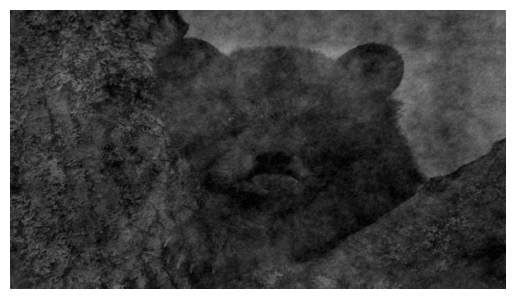

In [ ]:
img2 = cv2.resize(np.array(img2),(image.shape[1],image.shape[0]))
gray2 = cv2.cvtColor(np.array(img2), cv2.COLOR_RGB2GRAY)
f2 = np.fft.fft2(gray2)
fshift2 = np.fft.fftshift(f2)

magnitude2 = np.abs(fshift2)
phase2 = fshift2/np.abs(fshift2)

new1 = mag_only * phase2
new2 = magnitude2 * phase_only

new_image1 = np.fft.ifftshift(new1)
new_image1 = np.abs(np.fft.ifft2(new_image1))
new_image2 = np.fft.ifftshift(new2)
new_image2 = np.abs(np.fft.ifft2(new_image2))

plt.imshow(new_image1,cmap="gray")
plt.axis("off")

'''Observations:
1. The modified image formed from magnitude of image 1 and phase of image 2
    strongly resembles image 2. This occurs because phase encodes the structure
    of an image: edges, contours, and the spatial arrangement of features.

2. Magnitude, on the other hand, primarily controls the texture and contrast
    distribution of the image. It determines what quantity of each spatial frequency
    is present but not where those frequencies appear.

3. Human vision is far more sensitive to phase information than magnitude.
    This is why phase-swapped images look like the image providing the phase.
    Even if magnitude is correct, incorrect phase produces noise-like patterns.

4. In summary:
      * Magnitude = frequency strength (texture)
      * Phase     = spatial layout (structure)
   Phase plays the dominant role in image perception and reconstruction.
'''

(np.float64(-0.5), np.float64(3071.5), np.float64(1727.5), np.float64(-0.5))

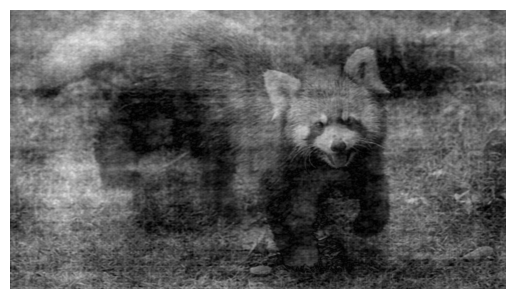

In [ ]:
plt.imshow(new_image2,cmap="gray")
plt.axis("off")